In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["savefig.dpi"] = 480 

In [3]:
ds = pd.read_csv('Kivotou/res_elec_DS.csv')
ds

,CodeInsee,Dens_ins,Superficie,NiveauDeVieMedian,Inscrits,Abstentions_ins,B+N_ins,ARTHAUD.ins,ROUSSEL.ins,MACRON.ins,LASSALLE.ins,LE PEN.ins,ZEMMOUR.ins,MÉLENCHON.ins,HIDALGO.ins,JADOT.ins,PÉCRESSE.ins,POUTOU.ins,DUPONT-AIGNAN.ins
0,1001,40.438871,15.95,25350.0,645.0,16.744186,2.635659,0.465116,0.930233,23.255814,2.790698,23.100775,6.666667,10.232558,0.775194,4.651163,4.031008,0.465116,3.255814
1,1002,23.278689,9.15,23890.0,213.0,17.840376,1.877934,0.938967,3.286385,23.474178,4.694836,10.798122,6.572770,19.248826,1.408451,4.694836,3.755869,1.408451,0.000000
2,1004,356.300813,24.60,20420.0,8765.0,23.707929,1.528808,0.433542,1.973759,16.577296,2.019395,18.779236,6.046777,18.300057,1.277809,3.274387,3.525385,0.490588,2.065031
3,1005,80.527638,15.92,24270.0,1282.0,18.252730,1.560062,0.624025,1.482059,21.762871,1.872075,27.457098,6.006240,10.686427,1.092044,3.198128,3.744150,0.156006,2.106084
4,1007,60.536513,33.55,23160.0,2031.0,16.642048,1.674052,0.492368,2.264894,19.842442,2.954210,24.569178,6.942393,13.589365,1.526342,3.397341,3.791236,0.393895,1.920236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,2B354,3.430878,79.28,21670.0,272.0,50.000000,1.102941,0.000000,1.470588,11.764706,5.882353,7.352941,4.779412,8.088235,0.000000,3.308824,5.514706,0.367647,0.367647
31208,2B355,28.012279,13.03,17880.0,365.0,42.465753,5.479452,0.000000,0.821918,6.575342,6.575342,19.452055,8.767123,4.109589,0.273973,0.273973,3.835616,0.273973,1.095890
31209,2B356,14.621212,13.20,19360.0,193.0,46.113990,1.554404,1.554404,0.518135,9.326425,8.808290,12.435233,3.108808,4.145078,1.554404,2.072539,6.735751,1.036269,1.036269
31210,2B361,18.415418,14.01,19280.0,258.0,30.620155,1.550388,1.162791,1.550388,8.914729,8.139535,16.279070,6.976744,8.139535,0.387597,1.550388,12.015504,1.550388,1.162791


In [4]:
drop_col = ['B+N_ins','ARTHAUD.ins','ROUSSEL.ins','LASSALLE.ins','DUPONT-AIGNAN.ins','ZEMMOUR.ins','HIDALGO.ins','JADOT.ins','PÉCRESSE.ins','POUTOU.ins']
ds.drop(drop_col, axis = 1)

,CodeInsee,Dens_ins,Superficie,NiveauDeVieMedian,Inscrits,Abstentions_ins,MACRON.ins,LE PEN.ins,MÉLENCHON.ins
0,1001,40.438871,15.95,25350.0,645.0,16.744186,23.255814,23.100775,10.232558
1,1002,23.278689,9.15,23890.0,213.0,17.840376,23.474178,10.798122,19.248826
2,1004,356.300813,24.60,20420.0,8765.0,23.707929,16.577296,18.779236,18.300057
3,1005,80.527638,15.92,24270.0,1282.0,18.252730,21.762871,27.457098,10.686427
4,1007,60.536513,33.55,23160.0,2031.0,16.642048,19.842442,24.569178,13.589365
...,...,...,...,...,...,...,...,...,...
31207,2B354,3.430878,79.28,21670.0,272.0,50.000000,11.764706,7.352941,8.088235
31208,2B355,28.012279,13.03,17880.0,365.0,42.465753,6.575342,19.452055,4.109589
31209,2B356,14.621212,13.20,19360.0,193.0,46.113990,9.326425,12.435233,4.145078
31210,2B361,18.415418,14.01,19280.0,258.0,30.620155,8.914729,16.279070,8.139535


In [5]:
def lin_normalisation(X, minimum = False, maximum = False):
    if minimum is False:
        minimum = min(X)
    if maximum is False:
        maximum = max(X)
        
    res = (X - minimum)/(maximum - minimum)
    return res

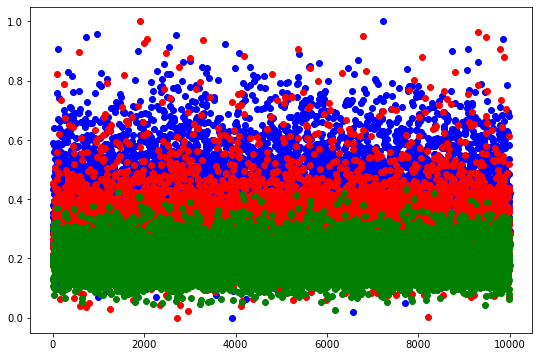

In [6]:
n_sample=10000
sample = ds.sample(n=n_sample)
X_train = np.array([sample['Dens_ins'].values, sample['NiveauDeVieMedian'].values])
y_train = np.array([sample['MACRON.ins'].values, sample['LE PEN.ins'].values, sample['MÉLENCHON.ins'].values])
X_train_0 = np.log(X_train[0]) / np.log(max(X_train[0]))
X_train_1 = lin_normalisation(X_train[1])
X_train = np.array([X_train_0, X_train_1])
y_train = lin_normalisation(y_train, minimum=0, maximum=100)
plt.scatter(np.arange(len(X_train[0])),X_train[0],c='b')
plt.scatter(np.arange(len(X_train[1])),X_train[1],c="r")
plt.scatter(np.arange(len(y_train[0])),y_train[0],c="g")

In [7]:
y_train.shape

(3, 10000)

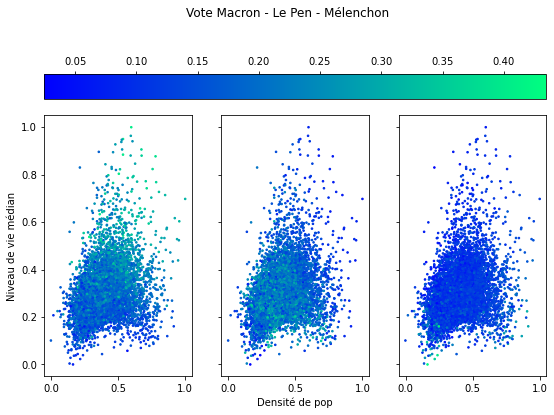

In [8]:
fig, ax = plt.subplots(1, 3, sharey=True)
im0 = ax[0].scatter(X_train[0],X_train[1], cmap="winter", c=y_train[0], s=2.5)
ax[1].scatter(X_train[0],X_train[1], cmap="winter", c=y_train[1], s=2.5)
ax[2].scatter(X_train[0],X_train[1], cmap="winter", c=y_train[2], s=2.5)
ax[0].set(ylabel = 'Niveau de vie médian')
ax[1].set(xlabel = 'Densité de pop')
fig.suptitle('Vote Macron - Le Pen - Mélenchon')
fig.colorbar(im0, ax=ax, location = "top")

In [9]:
from réseau_neurone import *

dim =  [2, 8, 8, 3]


100%|██████████| 10000/10000 [00:39<00:00, 254.05it/s]


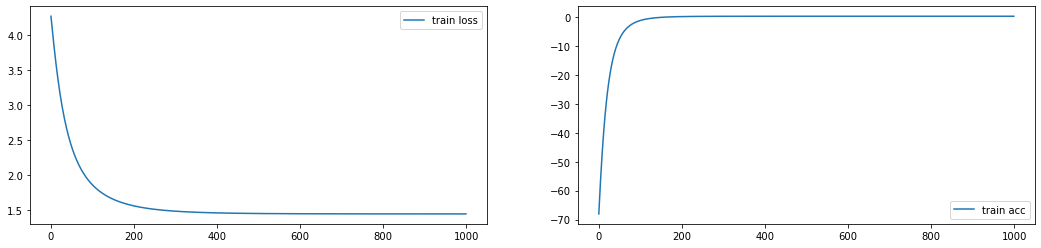

In [10]:
parametres, accuracy = neural_network(X_train, y_train, hidden_layers= (8,8), learning_rate=0.002, n_iter=10000){
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "4f68d4c6",
   "metadata": {},
   "outputs": [],
   "source": [
    "import matplotlib.pyplot as plt\n",
    "import numpy as np\n",
    "import pandas as pd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "94ed4a3a",
   "metadata": {},
   "outputs": [],
   "source": [
    "plt.rcParams[\"figure.figsize\"] = (9,6)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "34b7f53f",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>CodeInsee</th>\n",
       "      <th>Dens_ins</th>\n",
       "      <th>Superficie</th>\n",
       "      <th>NiveauDeVieMedian</th>\n",
       "      <th>Inscrits</th>\n",
       "      <th>Abstentions_ins</th>\n",
       "      <th>B+N_ins</th>\n",
       "      <th>ARTHAUD.ins</th>\n",
       "      <th>ROUSSEL.ins</th>\n",
       "      <th>MACRON.ins</th>\n",
       "      <th>LASSALLE.ins</th>\n",
       "      <th>LE PEN.ins</th>\n",
       "      <th>ZEMMOUR.ins</th>\n",
       "      <th>MÉLENCHON.ins</th>\n",
       "      <th>HIDALGO.ins</th>\n",
       "      <th>JADOT.ins</th>\n",
       "      <th>PÉCRESSE.ins</th>\n",
       "      <th>POUTOU.ins</th>\n",
       "      <th>DUPONT-AIGNAN.ins</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1001</td>\n",
       "      <td>40.438871</td>\n",
       "      <td>15.95</td>\n",
       "      <td>25350.0</td>\n",
       "      <td>645.0</td>\n",
       "      <td>16.744186</td>\n",
       "      <td>2.635659</td>\n",
       "      <td>0.465116</td>\n",
       "      <td>0.930233</td>\n",
       "      <td>23.255814</td>\n",
       "      <td>2.790698</td>\n",
       "      <td>23.100775</td>\n",
       "      <td>6.666667</td>\n",
       "      <td>10.232558</td>\n",
       "      <td>0.775194</td>\n",
       "      <td>4.651163</td>\n",
       "      <td>4.031008</td>\n",
       "      <td>0.465116</td>\n",
       "      <td>3.255814</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002</td>\n",
       "      <td>23.278689</td>\n",
       "      <td>9.15</td>\n",
       "      <td>23890.0</td>\n",
       "      <td>213.0</td>\n",
       "      <td>17.840376</td>\n",
       "      <td>1.877934</td>\n",
       "      <td>0.938967</td>\n",
       "      <td>3.286385</td>\n",
       "      <td>23.474178</td>\n",
       "      <td>4.694836</td>\n",
       "      <td>10.798122</td>\n",
       "      <td>6.572770</td>\n",
       "      <td>19.248826</td>\n",
       "      <td>1.408451</td>\n",
       "      <td>4.694836</td>\n",
       "      <td>3.755869</td>\n",
       "      <td>1.408451</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1004</td>\n",
       "      <td>356.300813</td>\n",
       "      <td>24.60</td>\n",
       "      <td>20420.0</td>\n",
       "      <td>8765.0</td>\n",
       "      <td>23.707929</td>\n",
       "      <td>1.528808</td>\n",
       "      <td>0.433542</td>\n",
       "      <td>1.973759</td>\n",
       "      <td>16.577296</td>\n",
       "      <td>2.019395</td>\n",
       "      <td>18.779236</td>\n",
       "      <td>6.046777</td>\n",
       "      <td>18.300057</td>\n",
       "      <td>1.277809</td>\n",
       "      <td>3.274387</td>\n",
       "      <td>3.525385</td>\n",
       "      <td>0.490588</td>\n",
       "      <td>2.065031</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1005</td>\n",
       "      <td>80.527638</td>\n",
       "      <td>15.92</td>\n",
       "      <td>24270.0</td>\n",
       "      <td>1282.0</td>\n",
       "      <td>18.252730</td>\n",
       "      <td>1.560062</td>\n",
       "      <td>0.624025</td>\n",
       "      <td>1.482059</td>\n",
       "      <td>21.762871</td>\n",
       "      <td>1.872075</td>\n",
       "      <td>27.457098</td>\n",
       "      <td>6.006240</td>\n",
       "      <td>10.686427</td>\n",
       "      <td>1.092044</td>\n",
       "      <td>3.198128</td>\n",
       "      <td>3.744150</td>\n",
       "      <td>0.156006</td>\n",
       "      <td>2.106084</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1007</td>\n",
       "      <td>60.536513</td>\n",
       "      <td>33.55</td>\n",
       "      <td>23160.0</td>\n",
       "      <td>2031.0</td>\n",
       "      <td>16.642048</td>\n",
       "      <td>1.674052</td>\n",
       "      <td>0.492368</td>\n",
       "      <td>2.264894</td>\n",
       "      <td>19.842442</td>\n",
       "      <td>2.954210</td>\n",
       "      <td>24.569178</td>\n",
       "      <td>6.942393</td>\n",
       "      <td>13.589365</td>\n",
       "      <td>1.526342</td>\n",
       "      <td>3.397341</td>\n",
       "      <td>3.791236</td>\n",
       "      <td>0.393895</td>\n",
       "      <td>1.920236</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31207</th>\n",
       "      <td>2B354</td>\n",
       "      <td>3.430878</td>\n",
       "      <td>79.28</td>\n",
       "      <td>21670.0</td>\n",
       "      <td>272.0</td>\n",
       "      <td>50.000000</td>\n",
       "      <td>1.102941</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.470588</td>\n",
       "      <td>11.764706</td>\n",
       "      <td>5.882353</td>\n",
       "      <td>7.352941</td>\n",
       "      <td>4.779412</td>\n",
       "      <td>8.088235</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>3.308824</td>\n",
       "      <td>5.514706</td>\n",
       "      <td>0.367647</td>\n",
       "      <td>0.367647</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31208</th>\n",
       "      <td>2B355</td>\n",
       "      <td>28.012279</td>\n",
       "      <td>13.03</td>\n",
       "      <td>17880.0</td>\n",
       "      <td>365.0</td>\n",
       "      <td>42.465753</td>\n",
       "      <td>5.479452</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.821918</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>19.452055</td>\n",
       "      <td>8.767123</td>\n",
       "      <td>4.109589</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>3.835616</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>1.095890</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31209</th>\n",
       "      <td>2B356</td>\n",
       "      <td>14.621212</td>\n",
       "      <td>13.20</td>\n",
       "      <td>19360.0</td>\n",
       "      <td>193.0</td>\n",
       "      <td>46.113990</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>0.518135</td>\n",
       "      <td>9.326425</td>\n",
       "      <td>8.808290</td>\n",
       "      <td>12.435233</td>\n",
       "      <td>3.108808</td>\n",
       "      <td>4.145078</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>2.072539</td>\n",
       "      <td>6.735751</td>\n",
       "      <td>1.036269</td>\n",
       "      <td>1.036269</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31210</th>\n",
       "      <td>2B361</td>\n",
       "      <td>18.415418</td>\n",
       "      <td>14.01</td>\n",
       "      <td>19280.0</td>\n",
       "      <td>258.0</td>\n",
       "      <td>30.620155</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>1.162791</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>8.914729</td>\n",
       "      <td>8.139535</td>\n",
       "      <td>16.279070</td>\n",
       "      <td>6.976744</td>\n",
       "      <td>8.139535</td>\n",
       "      <td>0.387597</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>12.015504</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>1.162791</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31211</th>\n",
       "      <td>2B365</td>\n",
       "      <td>11.321606</td>\n",
       "      <td>22.17</td>\n",
       "      <td>18530.0</td>\n",
       "      <td>251.0</td>\n",
       "      <td>56.175299</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>3.187251</td>\n",
       "      <td>13.545817</td>\n",
       "      <td>9.163347</td>\n",
       "      <td>6.374502</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>0.796813</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>1.195219</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.593625</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>31212 rows × 19 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "      CodeInsee    Dens_ins  Superficie  NiveauDeVieMedian  Inscrits  \\\n",
       "0          1001   40.438871       15.95            25350.0     645.0   \n",
       "1          1002   23.278689        9.15            23890.0     213.0   \n",
       "2          1004  356.300813       24.60            20420.0    8765.0   \n",
       "3          1005   80.527638       15.92            24270.0    1282.0   \n",
       "4          1007   60.536513       33.55            23160.0    2031.0   \n",
       "...         ...         ...         ...                ...       ...   \n",
       "31207     2B354    3.430878       79.28            21670.0     272.0   \n",
       "31208     2B355   28.012279       13.03            17880.0     365.0   \n",
       "31209     2B356   14.621212       13.20            19360.0     193.0   \n",
       "31210     2B361   18.415418       14.01            19280.0     258.0   \n",
       "31211     2B365   11.321606       22.17            18530.0     251.0   \n",
       "\n",
       "       Abstentions_ins   B+N_ins  ARTHAUD.ins  ROUSSEL.ins  MACRON.ins  \\\n",
       "0            16.744186  2.635659     0.465116     0.930233   23.255814   \n",
       "1            17.840376  1.877934     0.938967     3.286385   23.474178   \n",
       "2            23.707929  1.528808     0.433542     1.973759   16.577296   \n",
       "3            18.252730  1.560062     0.624025     1.482059   21.762871   \n",
       "4            16.642048  1.674052     0.492368     2.264894   19.842442   \n",
       "...                ...       ...          ...          ...         ...   \n",
       "31207        50.000000  1.102941     0.000000     1.470588   11.764706   \n",
       "31208        42.465753  5.479452     0.000000     0.821918    6.575342   \n",
       "31209        46.113990  1.554404     1.554404     0.518135    9.326425   \n",
       "31210        30.620155  1.550388     1.162791     1.550388    8.914729   \n",
       "31211        56.175299  1.992032     0.000000     1.992032    3.187251   \n",
       "\n",
       "       LASSALLE.ins  LE PEN.ins  ZEMMOUR.ins  MÉLENCHON.ins  HIDALGO.ins  \\\n",
       "0          2.790698   23.100775     6.666667      10.232558     0.775194   \n",
       "1          4.694836   10.798122     6.572770      19.248826     1.408451   \n",
       "2          2.019395   18.779236     6.046777      18.300057     1.277809   \n",
       "3          1.872075   27.457098     6.006240      10.686427     1.092044   \n",
       "4          2.954210   24.569178     6.942393      13.589365     1.526342   \n",
       "...             ...         ...          ...            ...          ...   \n",
       "31207      5.882353    7.352941     4.779412       8.088235     0.000000   \n",
       "31208      6.575342   19.452055     8.767123       4.109589     0.273973   \n",
       "31209      8.808290   12.435233     3.108808       4.145078     1.554404   \n",
       "31210      8.139535   16.279070     6.976744       8.139535     0.387597   \n",
       "31211     13.545817    9.163347     6.374502       1.992032     0.796813   \n",
       "\n",
       "       JADOT.ins  PÉCRESSE.ins  POUTOU.ins  DUPONT-AIGNAN.ins  \n",
       "0       4.651163      4.031008    0.465116           3.255814  \n",
       "1       4.694836      3.755869    1.408451           0.000000  \n",
       "2       3.274387      3.525385    0.490588           2.065031  \n",
       "3       3.198128      3.744150    0.156006           2.106084  \n",
       "4       3.397341      3.791236    0.393895           1.920236  \n",
       "...          ...           ...         ...                ...  \n",
       "31207   3.308824      5.514706    0.367647           0.367647  \n",
       "31208   0.273973      3.835616    0.273973           1.095890  \n",
       "31209   2.072539      6.735751    1.036269           1.036269  \n",
       "31210   1.550388     12.015504    1.550388           1.162791  \n",
       "31211   1.992032      1.195219    0.000000           1.593625  \n",
       "\n",
       "[31212 rows x 19 columns]"
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ds = pd.read_csv('Kivotou/res_elec_DS.csv')\n",
    "ds"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "0ea91e2b",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>CodeInsee</th>\n",
       "      <th>Dens_ins</th>\n",
       "      <th>Superficie</th>\n",
       "      <th>NiveauDeVieMedian</th>\n",
       "      <th>Inscrits</th>\n",
       "      <th>Abstentions_ins</th>\n",
       "      <th>MACRON.ins</th>\n",
       "      <th>LE PEN.ins</th>\n",
       "      <th>MÉLENCHON.ins</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1001</td>\n",
       "      <td>40.438871</td>\n",
       "      <td>15.95</td>\n",
       "      <td>25350.0</td>\n",
       "      <td>645.0</td>\n",
       "      <td>16.744186</td>\n",
       "      <td>23.255814</td>\n",
       "      <td>23.100775</td>\n",
       "      <td>10.232558</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002</td>\n",
       "      <td>23.278689</td>\n",
       "      <td>9.15</td>\n",
       "      <td>23890.0</td>\n",
       "      <td>213.0</td>\n",
       "      <td>17.840376</td>\n",
       "      <td>23.474178</td>\n",
       "      <td>10.798122</td>\n",
       "      <td>19.248826</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1004</td>\n",
       "      <td>356.300813</td>\n",
       "      <td>24.60</td>\n",
       "      <td>20420.0</td>\n",
       "      <td>8765.0</td>\n",
       "      <td>23.707929</td>\n",
       "      <td>16.577296</td>\n",
       "      <td>18.779236</td>\n",
       "      <td>18.300057</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1005</td>\n",
       "      <td>80.527638</td>\n",
       "      <td>15.92</td>\n",
       "      <td>24270.0</td>\n",
       "      <td>1282.0</td>\n",
       "      <td>18.252730</td>\n",
       "      <td>21.762871</td>\n",
       "      <td>27.457098</td>\n",
       "      <td>10.686427</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1007</td>\n",
       "      <td>60.536513</td>\n",
       "      <td>33.55</td>\n",
       "      <td>23160.0</td>\n",
       "      <td>2031.0</td>\n",
       "      <td>16.642048</td>\n",
       "      <td>19.842442</td>\n",
       "      <td>24.569178</td>\n",
       "      <td>13.589365</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31207</th>\n",
       "      <td>2B354</td>\n",
       "      <td>3.430878</td>\n",
       "      <td>79.28</td>\n",
       "      <td>21670.0</td>\n",
       "      <td>272.0</td>\n",
       "      <td>50.000000</td>\n",
       "      <td>11.764706</td>\n",
       "      <td>7.352941</td>\n",
       "      <td>8.088235</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31208</th>\n",
       "      <td>2B355</td>\n",
       "      <td>28.012279</td>\n",
       "      <td>13.03</td>\n",
       "      <td>17880.0</td>\n",
       "      <td>365.0</td>\n",
       "      <td>42.465753</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>19.452055</td>\n",
       "      <td>4.109589</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31209</th>\n",
       "      <td>2B356</td>\n",
       "      <td>14.621212</td>\n",
       "      <td>13.20</td>\n",
       "      <td>19360.0</td>\n",
       "      <td>193.0</td>\n",
       "      <td>46.113990</td>\n",
       "      <td>9.326425</td>\n",
       "      <td>12.435233</td>\n",
       "      <td>4.145078</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31210</th>\n",
       "      <td>2B361</td>\n",
       "      <td>18.415418</td>\n",
       "      <td>14.01</td>\n",
       "      <td>19280.0</td>\n",
       "      <td>258.0</td>\n",
       "      <td>30.620155</td>\n",
       "      <td>8.914729</td>\n",
       "      <td>16.279070</td>\n",
       "      <td>8.139535</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31211</th>\n",
       "      <td>2B365</td>\n",
       "      <td>11.321606</td>\n",
       "      <td>22.17</td>\n",
       "      <td>18530.0</td>\n",
       "      <td>251.0</td>\n",
       "      <td>56.175299</td>\n",
       "      <td>3.187251</td>\n",
       "      <td>9.163347</td>\n",
       "      <td>1.992032</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>31212 rows × 9 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "      CodeInsee    Dens_ins  Superficie  NiveauDeVieMedian  Inscrits  \\\n",
       "0          1001   40.438871       15.95            25350.0     645.0   \n",
       "1          1002   23.278689        9.15            23890.0     213.0   \n",
       "2          1004  356.300813       24.60            20420.0    8765.0   \n",
       "3          1005   80.527638       15.92            24270.0    1282.0   \n",
       "4          1007   60.536513       33.55            23160.0    2031.0   \n",
       "...         ...         ...         ...                ...       ...   \n",
       "31207     2B354    3.430878       79.28            21670.0     272.0   \n",
       "31208     2B355   28.012279       13.03            17880.0     365.0   \n",
       "31209     2B356   14.621212       13.20            19360.0     193.0   \n",
       "31210     2B361   18.415418       14.01            19280.0     258.0   \n",
       "31211     2B365   11.321606       22.17            18530.0     251.0   \n",
       "\n",
       "       Abstentions_ins  MACRON.ins  LE PEN.ins  MÉLENCHON.ins  \n",
       "0            16.744186   23.255814   23.100775      10.232558  \n",
       "1            17.840376   23.474178   10.798122      19.248826  \n",
       "2            23.707929   16.577296   18.779236      18.300057  \n",
       "3            18.252730   21.762871   27.457098      10.686427  \n",
       "4            16.642048   19.842442   24.569178      13.589365  \n",
       "...                ...         ...         ...            ...  \n",
       "31207        50.000000   11.764706    7.352941       8.088235  \n",
       "31208        42.465753    6.575342   19.452055       4.109589  \n",
       "31209        46.113990    9.326425   12.435233       4.145078  \n",
       "31210        30.620155    8.914729   16.279070       8.139535  \n",
       "31211        56.175299    3.187251    9.163347       1.992032  \n",
       "\n",
       "[31212 rows x 9 columns]"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "drop_col = ['B+N_ins','ARTHAUD.ins','ROUSSEL.ins','LASSALLE.ins','DUPONT-AIGNAN.ins','ZEMMOUR.ins','HIDALGO.ins','JADOT.ins','PÉCRESSE.ins','POUTOU.ins']\n",
    "ds.drop(drop_col, axis = 1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "50d80619",
   "metadata": {},
   "outputs": [],
   "source": [
    "def lin_normalisation(X, minimum = False, maximum = False):\n",
    "    if minimum is False:\n",
    "        minimum = min(X)\n",
    "    if maximum is False:\n",
    "        maximum = max(X)\n",
    "        \n",
    "    res = (X - minimum)/(maximum - minimum)\n",
    "    return res"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "69d0c2d7",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x244d531bf70>"
      ]
     },
     "execution_count": 6,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAADM/klEQVR4nOy9e3xcV3ku/KwZzTgeKZHxdtrzkURb4XLS21A4yclpGig5iB6IwQTcHlpn5DgJRFhuUytt00JUcEwrLoU2NqG2ESTB8QwpOf0CwdSBFgFtuB0aPi6icFIC0ciBniYeR4qlkS1pZn1/rFkza++91tpr79kzGkn7+f3ml3i0Z++11+Vd7+V530UopYgRI0aMGDFixGgVEivdgBgxYsSIESPG2kasbMSIESNGjBgxWopY2YgRI0aMGDFitBSxshEjRowYMWLEaCliZSNGjBgxYsSI0VLEykaMGDFixIgRo6XoWqkHb9myhfb396/U42PEiBEjRowYEeJb3/rWKUrphbK/rZiy0d/fj8cee2ylHh8jRowYMWLEiBCEkKLqb3EYJUaMGDFixIjRUsTKRowYMWLEiBGjpYiVjRgxYsSIESNGSxErGzFixIgRI0aMliJWNmLEiBEjRowYLUWsbMSIESNGjBgxWopY2YgRI0aMGDFitBSxshEjRowYMWLEaCliZSNGjBgxYsSI0VL4KhuEkHsJIU8TQr6v+DshhHyIEPIEIeR7hJD/En0z1xkKBaC/H0gk2H8LhZVu0bpGPBwxYsSI0RxMPBsfB/Bazd+vBfDi2mcIwOHmm7WOUSgAQ0NAsQhQyv47NBTvcCuEeDhixIgRo3n4KhuU0n8GcFpzyXUA7qcM3wCwiRDy/0TVwHWH0VGgXHZ+Vy6z72O0HfFwxIgRI0bziIKzcRGAk8K/n6p95wEhZIgQ8hgh5LFnnnkmgkevQUxPB/s+RksRD0eMGDFiNI8olA0i+Y7KLqSUjlNKr6CUXnHhhdJTaGP09QX7PkZLEQ9HjBgxYjSPKJSNpwBcIvz7YgA/i+C+6xNjY0Am4/wuk2Hfx2g74uGIESNGjOYRhbLxGQA31LJSfg3ALKX03yO47/pELgeMjwO2DRDC/js+zr6P0XbEwxEjRowYzYNQKo14NC4g5AEA1wDYAuA/AOwDkAIASukRQggB8GGwjJUygJsopY/5PfiKK66gjz3me1mMGDFixIgRYxWAEPItSukVsr91+f2YUrrD5+8UwO+FbFuMGDFixIgRY40jriAaI0aMGDFixGgpYmUjRowYMWLEiNFSxMpGjBgxYsSIEaOliJWNGDFixIgRI0ZLESsbMWLEiBEjRoyWIlY2YsSIESNGjBgtRaxsxIgRI0aMGDFailjZiBEjRowYMWK0FLGyESNGjBgxYsRoKWJlI0aMGDFixIjRUsTKRowYMWLEiBGjpYiVjRgxYsSIESNGSxErGzFixIgRI0aMliJWNmLEiBEjRowYLUWsbMSIESNGjBgxWopY2YgRI0aMGDFitBSxshEjRowYMWLEaCliZSNGjBgxYsSI0VLEykaMGDFixIgRo6WIlY0YMWLEiBEjRksRKxsxOheFAtDfDyQS7L+Fwkq3KEaMGDFihEDXSjcgRgwpCgVgaAgol9m/i0X2bwDI5VauXTFixIgRIzBiz0aMzsToaEPR4CiX2fcxYsSIEWNVIVY2YnQmpqeDfR8jRowYMToWsbIRozPR1xfs+xgxYsSI0bGIlY0YnYmxMSCTcX6XybDvY8SIESPGqkKsbMToTORywPg4YNsAIey/4+MxOTRGjBgxViFiZSNG5yKXA6amgGqV/TdWNAIhzhyOESNGpyBWNmLEWIPgmcPFIkBpI3M4VjhixIgWsVJvhljZaBfiGRmjjYgzh2PEaD1ipd4csbLRDqyDGRnrUp2FOHM4RozWoy1K/RoRroRSuiIPvuKKK+hjjz22Is9uO/r7mYLhhm0zLsIqh7vYJ8ASR2I+58phjU+5GDE6AokEsx/dIIRRzZrGKhOuhJBvUUqvkP0t9my0A2vczIxd9p2HOHM4RozWo+XlgNaQcI2VjXZgjReoWuO61KpEnDkcI0br0XKlPoxw7dCwS6xstANr3Mxc47rUqkWcORwjRmvRcqU+qHDtYH5grGy0A2vczFzjulSMGDFiKNFSpT6ocO3gsEusbLQLa9jM7CRdqkM9iDFirEnE663FCCpcOzimHWejxFgzWGXE7RgxVjXi9daBWOE0tDgbpdWI1fuOQAd7EGPEWHOI11sHooNj2rGy0Sw6mJDTSWiHPtbBHsQYMVYFgqzTwOstNspaj06KabsQh1GaRVw9yRftcrfGQxEjRngEXaeB1lscc1kXiMMorURsTvuiXe7WDvYgxlhPWKUWfNB1Gmi9xTGXdY9Y2WgWcZEJX7RLH+tgD2KM9YJVHFYNuk4DrbfYKFv3iMMozSJ2D/oiDm/EWDdYxZO9pU1fxf0SwxxxGKWVaKU5vUrdsW4YuVvXyLvGWHms6FRaxRZ8S8OQcYwzBqV0RT6XX345jaFBPk9pJkMpc8ayTybDvl+FyOcptW1KCWH/dbzGGnvXGCuHFZ9Ktu18OP/Ydpsa0By067Sjbx6jEwDgMarY8+MwSqdiPbkd19O7xmgpVnwqrcGwaqHAeJzT04yKNja2al8lRosRh1FWI1axOzYw1tO7RoU47CTFik+lNcZSXsV81xgdhljZiBiR7QHrKctlPb1rFIh3ACU6YiqtoXOQ4ozVGFEhVjYiRKR7wHoiVK2nd40C8Q6gRDyVosWKe4pirBkYKRuEkNcSQh4nhDxBCHm75O+9hJDjhJDvEkL+lRByU/RN7XxEugesMXesFuvpXaNAEzvAWo++xFMpWkThKeqEOdcJbVj3UDFH+QdAEsCPAbwAQBrAdwH8kuuaOwC8v/b/FwI4DSCtu+9azEYhRE5EJ2SlWxZjTSFkxsOKZ2rEWHVods50wpzrhDasF0CTjWLi2bgSwBOU0p9QShcB/C2A69w6C4DzCSEEQE9N2VhuTg1afeiIeHGMtY+QsYI4+hIjKJr1FHXCnOuENsQwC6NcBOCk8O+nat+J+DCAXwTwMwCTAPZSSquRtHAVIY4Xx2gLQu4Acfw9Rhg0w3fthDnXCW2IYaZsEMl37uIcrwHwHQDPB/BSAB8mhFzguREhQ4SQxwghjz3zzDMBm9r5iOPFMdqGEDtA7HmL0W50wpzrhDbEMFM2ngJwifDvi8E8GCJuAvBQLWzzBIAnAfyC+0aU0nFK6RWU0isuvPDCsG3uaKyhrLcYUWOFWWqx5y1Gu9EJc64T2hDDTNn4FwAvJoRcSghJA/hdAJ9xXTMNYAAACCE/D+AyAD+JsqGdgpjVHCMUOqA2Rux5i+FGq+VZJ8y5TmhDDMNTXwkhWwEcAMtMuZdSOkYI2Q0AlNIjhJDnA/g4gP8HLOzyPkppXnfP1ViufA1WIo7RLqx4He0YMZyI5VmMqKErVx6fjRIA8X6xOtCRZzkkEsyj4QYhLOYWoz3oyMmxMojlWYyoEZ+NEhFiVnPnowOiFXLXdAey1NZdSHCFJken9nMsz2K0FaoCHK3+rMaiXqv89Oh1gZUeI1UBoUeHO6uy0LosdLQCk6OT+3ml10qMtQc0WdQrRg0xq7lzwa1HmVsYaJ+1piogNHiis1hq67LQ0QqY8p3cz7E806BT3VGrGSotpNWf1ejZoJRZJLbNSpDbdmdYKOsdMutxpay11VKyfrW0M1KsgCnf6f0cyzMJOtkd1eFA7NmQI4zyGtfR6DzIrEcR7bTWOpCaIcVqaWekWAFTfvPmYN+3G7E8k6CT3VEKrAZHzLpVNjqBSBgjGui84O2OVqwW1/RqaWekiAsuxDDBKmPOrpq9TOXyaPVnpcMoMTmqsxHEvSuO5Q7k6ZOwaQWEnkz6/LBFWC2u6dXSztWMTg+jxJDAcHPolPXTSXsZNGGUdatsxEKgcxE0ZMqv34E8nYPzh0vpONYaY+XQSRtBDEMYCKBOonV00l6mUzbWbRhlXcasVwmChky5d/z9iVF0w/nDrsUy5vZ2bqw1xtrGugxXrXYYhNs6idaxWvaydatsxEKgcxEmZJrLARdV5RdkSp0Za42x9hHTRFYpfJiznUTrWC172bpVNmIh0LkIq6lPQ36B6vsY/lgNLPdOR5zxsfrgN+87yZuwavYyVXyl1Z+V5mzE0GMlyU9h46G3Wl7Oxhwy9FYr5myEQSfFpSNFPk+pZTVeyrKCvVSnMANjtAQm837Nro0mgZggGiMIOmEhhZHn+TylN6Ya2ShPwqY3pvLrXgCExZokN+bzlKZS3pdKp80n2Uovjhgthem8j3VOL2JlI0Yg6BZbpy+wTm/fakInsdwjg2pym2pRa1IDWyVo0+Jek/O+TdApG+uKs9HK+PNaim2rSE68WEwnF4+J4+PRwSQuvermvY7BZ8Lu6yRm4HpCGytXdRIfY01BpYW0+tNOz4Y7RBu193OteVZVxlsyGRt16wl+83pVzvsWeTbOWHbsUWsl2uhRWpXzukOA9RxG8TukK4q5utY8q6rFpurD2L24dqHzXK/Ked8CzsZSOkNvTOXbtjmty1Bhm2Mb67KPI8C6VjZ0hkxUc3Utxvhki21Vbi4xWoaVmPeRbAIRZ6PcauWN10Wz7V+3VncsfFYF1rWyQYjzvIwnYdMdyEc6V9fLOli3gi6GFO2e9506/0yVrija37GyJgItUHuLTh38GA6sK2XDPWFv6ZbXXtiBfMzZCIF16V40fOn11jftnvedutGatiuK9usUmxWbfxFMBKNbrLcFtgqxbpQN2YSdgi1dndMJO9K5Gq+DNQpDQbqeFE4R7Zz3nRquNB37KNqvUlgsawXnXwRaVKcqkjGCYd0oG7IJW0GHSqhVhqCbSts2oVY/yFAKxsKy9ejkPjaZhlG0X6XYyLLt2tY3EWhRnapIxgiGdaNsyCbskwrPRkdIqFWCsEe+t9zKMsnNbFYRMZSCsbBsPVa79yhM+2VTWPadyfxrmV7ewZ6NTvU4d2q7msW6UTZkE3YH8nSerGIJ1QEIKgjaZoH6lTqNYmdaxZ6N1SLQgrRztbyTCkHf1XQK+80/1b2GhyPK7mkHZ6P9zWoJOrVdUWDdKBuqQXx0eJVLqBVGUKu9bVa+7kFBd//aLlAFoSeTNr0eeWrbtbmzCjkbndYeFVZLO1cCQaawXz+q7uVeQqH7vtXZKCGgeudkcmW3gk40TKLCulE2KF39lo8KK/leq9KzEUTjkUhqMWPJVFntpLm3WgTaamnnSiCo0q6bf6p7rfa+b/adV0KxXcsh13WlbKxFrLT111LORjM7tO5BQXYxxbVPwl51wpdjpQRa0OFcy4K3WUSpiKnutZr7Pqw3Z6WVq7WsYMfKxipHJ0zOlmSjRKFFqR4U5N6KHa8CsqqEr4iVmDNhhrMT5nYQtNN7FaWRIbuXStHr1L53w4Snkk53nnK10sZjKxErG6sca9b6C7DThBLypj9aAc9GqzetlRBoOktS9Y6rSfCuRFujnCfuew0Pr56+l8FPLubz8mNwOkG56qSQa5SIlY1VjtVm/RnDUIuSWSim52YZwYez0YmKgImwardA84uRq95xJQRvmGeuxXW4mjc9v/EwCaOsJuVqNSBWNlY5VtL6a6kwMpTeqoJFlhVhWxTZKK3o42ZZ8h3lDRAmyMmk89yhTt2Yw/bfavAwrmblISj8xlGn/K6H/lkJxMrGGsBKWX8t3dR8HqDjefLPakSzLPm2Wti6iafxCOnebaUFvEmsX/bKne7Z6CgltE3QTc92jdd6UvD8ECsbMUKhLYtVsVJlgnO1KxsmypNJP7fNwg5J9z+ZtEMrUu2A32Fmqlfu9M2805WhdqMd49Xpc6LdiJWNGKGwkm5jk0050jBKCyDqUZZlxow36eeoNxWlZeb3IM0E8VMWg7Y1SutRd45IWK9HJ2A1hHmCImx/i4p9MtkYw6jHK1bwnIiVjRihsJILyS/UkEp1lqB3w9QzIwpD034OYk35CWvtvfx2L58Jks8HV6SafV+Te8kyFDjheDVv2J2w8UWdPRNm3MXf7UCePgmbVkDoGavJBkmwmudLKxArGzFCYSVdhGHSKDsJpuESP9e9CqbZKH731W5QJma+zwOi2ACj3ERV9+JeshU9PbVJrLRLX/Z8vhmH8S6EHXf+ux3I0zm0tkM6QcHrJMTKRozQWCm38UoLzmZhWh66le55E0GotcxMBsGn4VGMo64vg/aZH19D5/VYDVjJMI+pgm06/kZeA8kL89+148Tv1S6nosb6VjY6OcgaQ4vVPHSdkONvIqx9FZIIBqHZW6jaGOYQMd37+nk9YugR5vyVprJJFDv9rRbLhqqgPTGO1Synosb6VTZitTNGQEQlOPJ5LyE0mWQbV7uEkolnYzUsEZ17PqjRqnvfOP7eHIJkWpmED33npuKBZyybZjLt8Wy0G52u2KxfZSMOqMUIgFYTEdtNajV9n04XYJR626jbxILeyyeTd92JC9P54L5OVv5c59kwVYaVbfHJhrrVaj1no51YDYbB+lU2YlMlRgC0g4jY7o0rckWiQzSTVvRvs8K8Q7qmKQRRUGXXDQ83xkYlfiPzJDWtrawudIpM0WH9KhurYXRidAyi1E3XpJ7bQaZVq5oSdm9aqa6Jei81Epn5PD2ZZOmkT8JZol62zwPybJRmxfOjw3k6TzpjPrYDq0GmrF9lo4OE41rAShgJ7XzmWvRsqBCqXzvspTrJaF2JrmmFePPd0CQPFUvUt6t+Cv+tWEejSGx6z0C+Y+ZE1Oiw5SfF+lU2KO0sibSK0axgWA3WYtScjU7Vc/1c4MpxWg2m1QphJbqmFZuP7z0VFzwJO9Szw8qGKDOUompTKAR4WCfLFI71rWzEiARhBVszC2SlrMWoBE2n6rmhBfVqMK1WCCvRNa1QcHzXq+KhFZC2bnxh0mxN0NYNPcTDOlWmcMTKRg1RDFSnD3arEFawNSOE15oh3SlzJ7Sg7iTTqsnOjHosVqJrWqXgaPtG8dCTSbut00CXkdSMvGir0rgGlfdY2aByYcCFrqmw6SRZq0MrNrWw6+J6IaYqkslMBIDumZ2ycZuik+ZOU4K6Ezq+yc7sNHJpM89rssBrax7aBsiaoZI1lmXeB201cNaaNUVjZYNS6i9gm60+GBarxcIaHg4RD8172eKcTGbSZzpuQaAaFj6d3I5NopOMGJ3i3c72mfS79JpmYnq2PItitRqUuj5smV7QAQpnPk9pd7dT0VhIeGXNYCLvKa6n64O16Nlo53DFygY1cx37jXHUimgrhEGrFCLZ5jQ8HK4xRWLucpUtFNVhWdKy0j6d3C5DrdOMGHe/ygoyrTQZV3VNNUwZasnNxCyKlRwLKSLYITpJwY0S+bzX2FBVC51O2IH6oNM5G0ERykhsArGyQc1cx63kH7TjfpTqlaqwCN1ORWOqaE6q68YwaOPbJZBXg+BvpwVk0h+qa04mDX5s+ECeRdFRYxHRJtQqAulKR9FkQ6k6B6UCErgPOjUbJcyt2+2xjJUNKl+/QQcgakW0FcJAl2nQ9na2aIcNpGz4NL5dHocOCXV3DMR+2OGKtT86nNcaB9cjRGdqsig6biwiWjdRL79OmcOyoVR5Nk4m7WhFUCdoWz7gTdTJyVZ58ZpWNgC8FsDjAJ4A8HbFNdcA+A6AfwXwT373XMlsFN7ZYRZN4Lmm+UGrQh5Ra7Oh29ki6aQKo3R3mzees+fb6XFYBXKqLRDn6A54z69whzdkSgm1rGCn2mk8Gx03FhFpwFEvv07xzsnaIZtHNJOhjw7no+uDgB26EuvdxKgGWneScVPKBoAkgB8DeAGANIDvAvgl1zWbAPwAQF/t3z/nd9+VrrPRlomwQnyBqLXZptrZgo7O5xvlj8VPOi25vaTxC0jRp2HRCgg91WPTG1P5yMcghhriZqGySMXwhm4zCUT+6QSz3AQR7upRLr9mdaCo2iLjbACU7kzm6RnL+4DI+iDAuKzUdDOhCyhlZQRoVtm4CsDnhX+/A8A7XNfsAfAXfvcSPyutbPgiihlqMDlbofS0ymMSdTubuafKuyF9x3zjLIenYdGzcNLT55Ght3TnW6Z4xh4NJ8RNyzTWHslx4atlICQ71TzJ0OtrWVwrtfaakStBN1+/9rmJ4pbVhuEMoG2tlBeoVcXOTNGssvHbAD4m/HsngA+7rjkA4G8AfBnAtwDcoLjXEIDHADzW19cX/ZtGBcnKWEqzDSnQ5F6hFITVYMQ128agXcuvV21aQTJkgmA1jEW7EcazoVJKViqFJEq9RZYZdKvVCBlNudJ0m50/YedkM3PZb/MV+8CyqG+66orojQE0iJXKPjP1bLSqLc0qG/9Tomzc7brmwwC+AaAbwBYAPwLwn3X37WjPhgFzHTBwRfnwBVqJjjPiXA261fLG5INo26pFpYpF8ut1lnQrNP1OiXN3EsRNy4SzkclQ5h7vkI6MUoE0jbFH+drNeijCyBXd5mvaB6JiErT/I5GHAR68Uus+yHzqRM+GSRjl7QDuFP59D4D/qbtvRysbPsx14wHL5+lSWi5IjYRTx2kMISFZASoSYJD4ryxuq1IAeRN0lnQrNP1Oq6/RdijmsEjOzZGGFX/GamSjOH7SQS6iKDeSIJZoVPNnJeakrs9M+4C3L2j/Rzp1DGWyW6EW53er56yK09aOpdOsstEF4CcALhUIor/suuYXAUzUrs0A+D6AX9Hdt13KRqj92tCz4bdA83lKb0zJS+iaKCqdIlyb1nkC9GcQlnQg3kbtPW611JZ0p3k2Vr2uqQhH3mrljd3lnvvZNq2C0JNJO1IOQxBEuVkHibE3q9hwrITVrRNnpn3A2xe0/1fSyyCTN+2Q47L+5v3WyjUTRerrVgD/VstKGa19txvAbuGa22sZKd8HMOJ3z3YoG6H36wCWuG7C+mnsWuHUIf73ZnWefD5YwR2ZsqEig/m5ZlUb9aPDeVokTgWwVeu/lfHxjldGAiiZpsqiTMFsZuzaTZQ0vZfus1KcjWah6muTPhDbF7T/V9S7GOFkCTpXV0I+rNuiXk2NszBSZyybDia8ioYfZ8NPY9e2o0P876o+TCbNN0xTEqDYLyJZThUu0ZUt76SNuhUbWgc5vtQIEI70m+J+segwG32UiqCf1aiaAyYx9lTKsKRIgIk2PNxwtSeTBkcPtAgqBVL3zkHHbUXttg6tmdIqrFtlI8r9WmVd66DT2H0nSjtWiIFw0ilMfu/AX0FGApwnas6GTvCaKBVBwyudCF0/6OZVO1zDxopThJ6NpryEwZpnFMoTOSd+BQL9Ngp3nw4Ph1CEA+xGnbJxqRQtE9kaZB6u6PtGJMc7xNHti3WrbKz0ADWzmFq+Qgzv7yfkdX0pCmFZSWqVdRjkIysk2SFOoaag6ne/Pgr1jiFIb0ZTMkA40u9+TXkJFdDd03SZaWVMrV/bcspsAGEXhmDZCi9gO+XzioUcI5Ljq0WmrVtlQzXOQS0HPlGvBysOVYX5jG1qkrdyhRiudD83r2qy5/NqRrQYChBfL6iioVq7K61kNguVa9lEGQv8jgFiAqH61RWOdFdrNQ0RNOUlVCAKD5FqTHZIzm8JfcqsiRwIsBsF2bhaafOslg20aUQgx1eLTFu3ygalchdl0Ep2mYw8FLCU7sCgmSFUx3TLTmTVKQ6SPUmroISJrZp8xEXX7mOVo4TOGxZU6TKCX6cLN41icwgrd5vyEmruqXpt03dSdZ8JT8mYO2YisHx2I7Hf/YyAALcNBPfYr4VwZ1TwWxedEvryw7pWNtwIGqfl16uExxnLbl/jRTSpLauO6T6ZtJWP8yOyccEfllRq8gy/zUFlqLeaABeVE0on3P0s8SDExDoCuEt0hNx2oBWOvmY3PFXYzi8Dy3ijMN3tNbuRyboKGr4K6n2QtSGVCpj6vAphMmdNFYkVCwUFQKxsCAgap+XXVxQ/qgLtf4kI1NzrFZUbr4f6HjpFQmyGn0Lg92p8QVkWpV1d/nuhKHv9ZHMrFmyUVkfQSotNs/ZN3Em1gdOdthu4XztEckYxduJvOTepquhL7tkwvn/AmMcZq8ERudXK+yr/YcNXQb0POiOv7WectAmm3rjVEiIxQaxsCAgap+XXL0Hue1xCss1vQCOZnbbtJW2aFrbyM4aDuGl1yOe9aa+JhN4aCrpZR2FJRSksgihLfkWxjNplYvbWfqAb98DFuTrIJ9ys3sP7WXoyrfAJVTxOMYiyIw/yee84uP+t0ldUfaAbKvdc1HFv/LLaxH8bp/p2OEx5RoG8Rx2ipKsQKxsCgsZp+WJTeTYqQFNtMV2sDkRAozcVIrK2yBaRW3HxO7Zd+QzhDyeTXgY/wPpJ1b4wYYhmLYioU6xN92G/9zFul2j+asguQTk1qn7tpHNOogDnCKlCrVUgfPE4yYRQHXmg8jwlEvru9ptzsrXqp6Oakrb9ymrr5n+nwzSDylgudZiSLsO6Vzbci6Wnx39w3YpAkdjSH00nvBaGaZuCLFYHTFVmHzw63Dh6/WSSpaOazGf3NSryLC9Lberef3RYLVi1m6VPv/L2m26+QY2HZrxEqncweb7f+4Ryn2serlPUTfqV3yPSE1wV7W2lAajyLul4Gk21I99Yp7ojD/w2bNWaDqOEmyiebnkqa4PpXDJZS82MeSvmi0kf8Wcb6RCrIN6yrpWNMMQk2W9uTOXp2S4zC8MEQRer70uFWZmSGW56Gms+37CkVBadrB35vNqaUZFWl5AMtImrBIcubmwampDh0WE5/+XR4dZaHCYhl7DEQBVMsmJUmw1vb5D5Iv7WbVmrzp2Q1XCJygDU9WnQ91K9mwwmirJuLHTPCeOZM+EVmyjxpt4yXYq9gVNOi6gcBmJbuIzT9RMP7ar6xoNVkCu8rpUNkw3G1BV/q2VmYZggzGJ1IGg8yLBjnoYVeLGbWqp+m5/yPsKnmU3cVPEMuF+smMVh6oXi89yES+Mn9EwUGFHI2rY33Vx1rLxMwurGTLW5n0zaLRsO3eYo5Wxodq0oQmaiHFPJFL9soXZ4NlQwnU+ye5n81qQNUSxf0/doak7Gno3OVjai1Np1CzqochnJYm1m8ilepAoEPnDOtB1+76y0DF0fGTnOFO7N1NRS145vhBaHyWYv/l0sUBeWpKdLG1al4Oli7e7nyJ7rDjvdaskHVDdnghzwF3I4PPAzEsT38vPHB1m+stoxJopyKuVvoYex7JsKA0vuFcazaCJDTcY8iuUblM/kfo5R6CbmbHS2shGl1m7b4TwlMkSyWJuZfJrVUSS29pbuDU/GtRB/ZOou9WPzi5tJ6DXmavz1mtLZpvMlKovDbzh1f8/n5ZkIJh47zuEIkkWkakuQMIvJlNVt7mEO+JNMgUCubNNNxd33snsH4RDJaseouGcmKa2y8bylu6EoTSdsXw+iGEoFGkRUtxLcEv5E3suRCrsEo1i+Jp5qt6xzt99Y5kdNLokQ61rZiEprF4W6ibvMZOK4NXrRKjVerMJNzli2kpQp+52qFkAVhNq2vDy7qm8eHZYvgqDuRYdlqNj9+GYS2HsoaYzqQLhAYxmRxeEn9HR/V208ogs9rKtXlYInq+kQVOj6zdOgYYuzSNGnYXk2IR4fVw2VaWXhIH3IDRD+fPe9TQuK8XvINijj8fJBGN6RX1+K7S2ShvLS9H4pebCMSN5OzkYQz4YqjCjjo/G+CnNUxkpgXSsblIab3LrfuDV6nSAN294oFSTV9c9A/hJ881hKhyeQcoR1L9q2/KVEoRJYqCoa4/bkJBINK834+O0ILA4/SzfoRs4/qmaapB1Kx1Yz2UzH26SWgsk6Eze0hW6LnoXTvSPOF0r13h3Tee0e6jBjAqhPLZaFv3QblOla1CFoRWG/vlS1956BCMi7igc/CdvBFdLJPvdSbXaPkIV/VB+dR04MafK5H5QLZPK+rcK6VzZagajihUHuHTb0o7peJ8CCuqhV7+rHxpZ971hH+TydTkRDylXzVEiomHHUCOvZ8FMawoQotO+uaUjVwOo26eOgHoR8Xt2uJ2HX+zCMwhZ23Ezkg2noRrUe/UKeptDxX1RoRYjLDWn/KB5cAWkJP8X0PqkUq6brN+66vubvKN5bR4Ru1/uaIlY2IkAYayasZyPqVDQdWVDlmg1Kvgvq2VBtkO7zU/J5bxVRwBsTN4KBRhYR/SIUwnI2ws5Dv3mstIIMdmyZ1W0SDjJtm/R3BptQUMUgaVAgOGx4ynRO5fPq9Sgqys1YrVF6NsLID5lsU833ZorCRbW+dffx8x7qFEf+W9O+9FMc2i3PYmWjSagIWjpB0oz2GOZwKD8h6m6P3/W6g+eChmuCbJBuoaNqZ6jDvwzU/JVOZfezdGV/9xtLXdqy6n21wshwxxatWLGbTfo4iAei/jtFu8TDEmVT4MaUngsRZtz8wj9uJdJPYWh11dWoOBt+8iOIZ0M1zW61wpvrUa3vZsi9N6a8Iep50uhr8d47kFcelWHCXWu3PFs3yobvog0QvDKJbevy2sMqGmEteRPrSpyUftdL44SEUDo8rOzGIN+batxRLBbx+bdajNiomgMr6dkIi+Fh/birFLN8Xu72DUWIlXxUlTNb5tkw9Bm754Nb8ItemSh5VyKfgBPAZXJE2v9N+sNNRJ+sorDf/QC5fAzCMVG9hnbthyQitMOzoeorR1M17ef31mXnmXLXYs8GjV7Z8F2LARZr0HhxYGEtPkiYcI8O55WKjYklb2LlukMUIlfB/ey7Mex14QXoM5XQFLMYROEjs/Z8NxiDPonCE2OqPAZRuFRCSJblEeT93B+Zoqr6nami/Ohwg0ujsrxUg2TSx7K6ErKPmCVm2yFY+xqeR7Oxbd1c8Bsz93rP55lixD0wZyyDdxN+G2Xc3lQ+3o1huoQkrYJVAb4bw55ravaLFK3YKPN5/xTxsH3QbJ+KsjidpvRpBYF/CUlj7lrU7fTDulA2fCemycytjbhfapn409ALQjILVJo//5hOEN0mrZtobsVJR0xyC1CjfsirrUhxk/MTZkEWi19Iyk8JsCyn9a/bjFULW5ZWKSvIdCThVe7mkKE3ptQKh6kHwD0f/RQ5PwVH9L6FYcvrDFOVV2B4WD1eoQVqE2TDsDAdM9168FOYTUI6YY93N2l/FNkzrdgoZZ5jk8JnsvuE6TvVvdzvOZhQlyYQeS8yYrWRUdMirAtlw9fdrjGTmCUJqaDXsep11peYwiQdaI1FpVrAzeSNmyxu97uYkLx4m4zCHZp39nOhi0RWU6sun1f3Ac8E8CNkBglpqYSwSYrpDuSV/e3uH92Y6d43yO90c81vfJqVaEEV+KYs4Db7mXVzUtWEoC77MGRVv7ktwmTOBeFsyHgOorIf5XHzUQx31EqQrE26asoyY68V7QqDdaFshPVsVH3O4/Db/HWWs3bwNRaViQCSIf+9PLXvsim5k9Ced9oU2TzdgTx9GhatgpUifxoWvR7y2efuIlOBYezh0byzjhwYNs/cz3r3a3PQME7YOhh+wsXdP6bvqGuvye/CKDh+XBoTK4vXlXCTNoOmV/sq/LU/ur1tS+nWSOigigBvfxDeUhCuSxgZo3uGWEU5SDaK27kcaMMMaLZHwQGLSmHhzZbdS3tOlOId283PkGFdKBu+k1Tlm/VZeXxx6MigqufqLF0Vu1yn3OgWRf57eZoZy1DcifoneUea3pdNeG5yFmlppVF3F5m6QnVeArESqiq9zs+zEeY0TUr1w+vn9fD7fRBBn/AOQSDhovNs6DYwnTfIdOML4sHxGxLTjUR2muscMoHPT/FV+Gttcmej6MJWzSCoIhDGs9GMwqub2yKMxtHQc2uaJSedVyFM+Sg25GYVFhM+klLmach7K51JRyml60LZoNQ/XuXJRDBYeVzQ6xamSrnWTShZ+pMfZ0O3KOy7bIeiwT/2iPq9VMJXdPuLG9aUgsei4j94yxbLQ1Vu4e6WISZFcKR9ohg3Hl/1S/sMuqmqZN+Naf8y0yrhUgHxcFr85v3wsPr4dbfCESRFU/zdYML7Tn4ueNOUbpUiLqawmvT78LB/ZdB2WIM6w0P36elxEgbFNVkkchKsiddBx+MwfXdfh4JkUNzyzU0ONTEAHAgxePk8pTuTzrm7MxlMuTTpY1X4Ryd3xM9gwjwV2W9+xZ6NNtTZ8FV8fSSAaE0FndfuTVv2udVyrthHh/OOyaoTMOK1tk0p7iRSZYPskz9c5s50E8ZknyCGhG3LvSMVEFpFoyy67PeiMNN5RHRt0I2/ajy58sh/HzQNmd97B/J0SqNgiamVXBGed/VTFaCfw4BRX0s732DChgqnDA97wo/zNUGo2oQCbSQhTDSVouv3zNDWYD5PF7ob4clSwlJuBH4eJBNODy/vfj3ydJ6oF6HMOylTTFRzm8uBSDw7rj56Gpay0FsonlmIwQtTT0TyWkaE7yByR/aRhRLd/eDXbzFng7ZH2fCVt5J4bQWEVgCPxhvEY2fqovYjRvEsiB3wbkQeK+E2O7Rnw/TDZZVpiJSQ8CEQd8e4Baz7/XVKX1Cvk/v3QVnnMoEm6393mz8sSTU2fU8PDAWxiZXl+InGNNMVfAtkeUXgbvAT6n6eDW2qeT5Pl5Penfos0p5Ni99fVak3CIfDts36RlR4dd4tnWcrik1KtbG7vRt+46XKuAgjW8JUSpXB7TFXHangblYUYS6uTJvM8WZO3w2DdatsGMnbvHqiyHLdTQbOVHsVj4LWWWJGRM1snpI/M+ds+IVrohA+tq3hIgQMJF7vc+Jl0Lhks/uZbi6oBJr4qQCe4mJ+Hhz+nkbzUPGC7lBEYM+G5ge6UvZ+/BlP50pc8DnS8Ab5eZZM53IY75XuAe5Ni5NdVRyUINYuIdRIqHElwnQzblUoyWQ+82eYzg9xaoQhjpueAWNsVBmEi8QhChNOEz9BTv4NQWlpGutW2TBdRIEEoQ907mI/QaL6mzGzO9vIRrH+wqbWNXl6PfL0FLHqOdsVkqiHMEwVjrAacT5PaZEYDoIPTC1V03Y1U4zNbxFrmeS1jzsMMYeMUV696UmhMq+dih+jm3vue+uyt3SH9AX2IOTVxd9U72ziUUwkvL8LfDyApsPcm5aJBW7qCbVtfz6LeC9TRb9VxEI/uSWOoamsdl/nm3Lt0hpKCflgi0pioE1a0XDZWuDNC5uaHLR2STv4SG6sW2XDdNIEceHpHqYTjkDDk2F6tDf/BElBDdIZJoRUIHT3U0qZK9UdAllKZ6TZMLImqzgsbqEoLmYdVIs9SJzaLyQwndBcoPn4nYEAMNKgqQARK06Kc9J9ra5Z7j5RWasVkLrnQda2MFZWUAXTxGqUKTeBN1vNg6bgrIGQz5tt+n5znfeVX6aO2DSV3DjVYzusdtVJpaHOHxKg2tifhuVZb6bzI9BYSW66nEzRs0h7+k8MfwXapAOUMOBk2KDcDb/xdO8DnN+juk8rs1PWpbIhDijf3FWbUShyks8N3Bu5uHCCTjITjVYkNkqhmN3uI6rdH5626deHRoNBCD3VY9PrJVaqO7aoqrrJFxFvj3uth93Agmj7fnFXGZPc5FOpjatunIMIEFPBHKRPrlcQfnkpar800yDxY5P4tnhfk24OkrIsI+PZNuuDBcg5G7I1H+YQNVVfcXkgUyLdfaaSG9cj78gQW0KyzlPThZGDYqFbrWyoPFN+8yPQ+lVcvNBtOc6AuWfARbYPMHeCeDbcGUEBxYORh1tnlBlMu6ax7pSNMFaULvzBJ5nb+uCpTSaxSfHZQT0bAEuV9fOcaKGQ3FUwF2IQDofYl2J6YTKpPueA959qA3ELULdC4lgotYFQ9YVyMeXV8c4g2r6JoLilW11uWPU9b5NJTNZEgATZRE3XCyceqjwmug0jqLLh18/JZHC3tKyfTN7ffY2sWJ4yLVwS0gpSOMxEmRK5PLp1taOmaOgO+Lobw57QRNCxo5T6Wv1hNr1Ast2Q32Jafkna3rw/eV03ZqbzFtB7NjIZ50F6KtkRczYihmphulNN3b2uE846oWaicbqtE50ABbx52sPD/q6xMJ4NcRaK6bR+hah4m2R/MzlYSRSCT8OSujbFxSJaYu5VqmK4O6DgMIQ53dOEl0OIus+fgRXag2HM2aDBBLOpJzAUoTJgW4L0cxALUfc8v800LLGPr0uTwmGyNgRRpvhv3HUk3PNKV62WwpuqvZRmXJ8gY6frNG6EhXXnGys+Btq26pIgHtNHh1l6cVADIehHRzR+dNjfux6WexcE607ZkGmMJsxllZbrl2akWrxuIqZprjUPF/DFNDBgpgUH5WzobmAiRPmm5LaecsTZp1wwaMdCI5RMrpcx3EXoKraGcen61SOpe2BcfT5PMnXrMqgHg7czaIjQ1CJVKQSyEFfQdOCw4Su/4lNBrMPu7vDnbIRNWbRts3dX9b3fPHN/bunWh1wJMSMw69aiWORPW5/CJ7zcSne+tlOFgdeNaxBPTj4ffKzcH9MzlNxZbJRS5SR7GlZkZxaZYN0pG7J+N00Dk5WSVe3RusqYugUW1PVr+jEpRHTGsjXufcIv830W72OVtv3ocF65+PwsK/7hniGT62UMdxE675N7A5KNj1sB9DuEr94G126vCg/5jassJGGiGASRLVFYeSrlxpQ/IgptXpBKppBxT0pYj4Pfe5j2jcn9Td5dReYN+tG52nmYU5kh5rO+dGtdibw8/Nu2YlM+2nYUHC6/e5l8guwLUi6NJkweetKHwLpTNmSDZpoGppowbq1TVxlTtdj546LQgo0XiLDYzlh23Z0ru8HJpG004fl8TSbVwk1HPDW1rP7veUxAmlzPi2SpPBSmTG5TazKdlnucuCdMJeSCCiSV0ItCMXAjiPVuyn3g9/QrG85/z0M0OlK06ElpVnF3k/Z0SlQmY17nAPD3iNbfPW+e0uj+uNtTUVwoHub36HCenpUQXKUTSFgnOrnhh1Ccj7CQPEz1/DDhPX6zao1gen2tsmfYOci7XWy63/X5vOs9gxABW+hSWnfKBqXe+aZkhNfURFMSFv9/XehEtdgB5so1EY5B3eyqWgsyN+bdGFay1P36QKxTMDwc7HRHv74TPwuJRpzY93qFdBBfP0iOuumHb3oeIaaRYEE2R52ngs9Fk3liuqGqxt70BNagAtftLRKVvCDVIU08caYfv9i8KRlQxq1RPkfDbZDdRxx7mcGju1e9w2QpC5ZF6bBcNuxA3rggVkvhYqT/cGDYMbc5dyGfZdWTyT7QvtsIfcWvDiv7P4gipJsDJsq6br26n60zem61mtCyW5j7ui6VDQ80zLZHh/PG48YnlGrh+Xk2TE4ANd0Y+b0ck9RA21VlPfjFwGUkwFM9tvTiWXRrF4qbrLmAFH0aVr09t1pOcqiHsyEpruEWGpblJaKKz4iCyOVQMPysjNpGaaLY8lCNqiYIfzd3v7j7MQgjXbZEdKS0MCEiXmvGL0UvaOVZFVk57JhK4UN4FPvXj2vi6H9N1oaKH6Pz1rllUBWgd2O4oWz4xA5UIR2ddzCot8J0gxev+3j3sPLd+FdFYtN8FjRzh/PYho13EIqsN2tN1w7333QhKJPjH0zkulsJUt1LqYyLZakDV6trHrGywaHo/KDnhNi2epN9WpFpIKaTiQtYtun7ufzrrno3DM1mmdfBj7zK0wz5NdeDpVnp0jtFISA+Z3jYy853a/hu+Sv20xnL9hQFk726yeKW9b+fVer+yE7wVfWJKLxUl/L9VHdNKkXplIGHSFdh0CFNaxqM6Qaz0O3tJLHehu7deAhOd53OZa/aoNxp2Bs2mI+h+yOFTyon/+gUHxlHRZU6f6rHdnjmxPn/6LDa0yD7PFkrNqZ7DwpovW83pvXrqb5R+mgSutCFe0qKCqmq6N0SkvV/VkCoPeI9Iwp3gmLE9u0qsR2yPgjjyfWb07rijCp9QTv2qg50DFJrECsbHIbCwu9DSM2d5lp485BnGqjCFqrv/eKuyloWhn5s9+T2i4FzBUEk7plkk4hCAPAWCNMtdts2VwQyGXllTb/FrSO8iUIvrBBxf6qAo3iSHxPe75amm41Mmb4eesXUz3Wu+nAioftP4lgWib9XybSQHe8rmfwMm0HC17dnwzT0bKjeR8wKEAnUqkw57t2T/j2VohVi4CYVxoX3lTKkXHsuVzhkG91gQn/omMxr6a4poprbfkq+zrDh/3wSNiX7FMrGPjM5b9vqNpoqDLKPqaIiKqQqh7xS5rgnvTtW2WJWbqxscDQhLGSLwi1AeZ0K04mh09R17VR6wQykqywzxo183ulKPdVjO/Lsg2yuJi5z8cPbozox8pZutUco6OI25QWEFSKm46D6+B0+FzSrR/yYHBbH0+ZUY6v63ckkm6c6boEu3COedjydaBDxdP0lboInk+q1aPLZAcUx7pK4lmwcTY0NlYftZJItTN5/puPs6HTXR5Rxfp64M5at7TudsaBqq3gAYFgl0MSzsQN5eskIkSobfSMNRV8nPwhRt7EZ7peqb8T01Cdh01u6nUJZpvQF4eu0MmziRqxscCgIk0Fi97p4rCp9KSi/w6RstdRVqZAQrByxc1FpOUI+/WS8uSaTlFJz4qBjTWgUQ9MF72eFmPIC/LJTAm0GknbIPibvaEoSk3EKdAeqifNTtVE+Df/DF3hYw6R//Oov6DYoVV/dM2DOxTIaT1eQf0qiAAYlbeqmH18CKk+n58NzWw1k3K2WmhDAvW86RV41HiYkUnFpByHC3w1/zgZA6VXZYcbRuLOhaGTuAM1n2eeSEUYctUfYv2XzTyezgrSZ95NlsWJrMqXbXdBwHma1QEwzkVpJCHUjVjZE1IRFGJIglzV+efPuGgxBPRsqAqc4yUwtL15Eyv0Yy3J6L85YdmOC+3iAjDfXWrzHxJJxE6N0QsvUlbkD+qqhOl6AKSscYJbi2S5DK8N1jerPfu8oxsd5iWJdJVaRN5bPq8fY/eGluN1eCG2IxXamUAcN9wTNdPEbR934yax0XyVUI0OCKJ6q8efKVj7P5paxcu/OnyR6ZUHVqe7nmXhvdoApdrp5K4pg7hkO6iW4G8N0CUlaBZOfSo5QNk8xYjuUChlxlCshvI0iZ0MWvjD9qAinbvKtUmkXNG5TYy1IBlerECsbEgTNzxfHy4fM7fm7alGZuFdlC1zpwuazW5CuCz2WIwSyA3k6BXkhsnps1YfbInufc0jUNWvxvIhbrbwnK0SX8sXHReeONY19Whatm9cy4aQTdqLy48etkAkR2di6PzrPhu4d3VVDxfapNgGTtGjdRzYv78awp50LSNFSwqmYBA33yGSjrrl+BdvEEJ479CnzfiiLXilclyIxNihp0/21e6y0/ApZ+1zQnvyreBe/tsrWzVmk6EKPJZUr4qm04nianCnV7Edsi4o4ao803t3UyPDzcKuQ/16e2nfZlNxJaPKPbXosK39AFaCniEUXeixarc1Vd5KB80A9vbER5FTrZhArG9SzB/OUcgdxVxeL3IF8/RTDKtj5FqqUJdXvZQQ5U5ecESmTU/1dAoQf6W50D40P0S1wxHZ/GMN0kchPwvwbDUFWJJtxxUT1vlxonTnPLKvongF9OMiy9IcXqZRHd3f7j7lcAOtSRVUbtLtYmkmapazcuJhRVAGhy/AnG8o2gVu6GxUiVcLubgxLT0mV3Z8fOMgbq6tE69dX7uMCVCGOuzHsUOBU50zcauWVm39V+Mj+buIt4HPSJC3W/Rx+P3cavMyz5ziXJe8cP786Qbr+dl/PwzGyc2B07xaUsG86N1TEUbJPWCz+zaMA6+N7BgwVe97V38vTzFjGk5LLPStibRAxxKMac1kIRseF8ju/KAqse2XDzyXG6xao/r4D8iOlzyFdL4QlDqJOaeHCXnWNuIlPJ/xTEMXPFNRV/s5YtlmZYoXCIgoPt5AkhNL/e5763qpwkZ8AliliO5Cn5yQbo/t4b8DfcuKyxS8spgud8fCEX7fugNkpoeL17o1RFxLTpRKaFpHzU0Rlm0B3d0MZ07nQtRyP2th/vHtYG/YK23Z+D1X7eAaNI9MrLy+zHZYM7LZKb0znlTV3TAp+uUmFokJVJIxUqxIynKwpGmB+fSgqmkHDYlwh9cQWFO+mqz4c9CO+l9azITknS1cuR0Vgv2dAvZvbd9nS518yQnxDPEE+T8Kuh5Gwj7D/ZttzHs26VzbCstL5R7vRS0ZPdy+d8Ne59f0WuEmVPyMhIVZdstRu0Rxx1rnQ3VuXuaASUKqPatOSFRHzC7dcDz1/RzyDoJn54ze24nXiBuTOUHB7QsS/y2qPBJ37fmE6v7EJPffESlUhnmvadl0bRL6Irsx4EE6G27MS5FMXKwFI7Uaey9pLum+rey+3oWGSycR/J22TRhNWKdTKTzZPcZvt2VTFDw/3qTb0g1mL/nCg4f7jxzrInpfJUDp8KE8vGklKPRC60u3kTnmWDL+PLsQT5HMsC4o7nB4U3JGhyMor/0aJda9shE214h8dG7wKYpoUUo9QqEInqgWv81i4BZrOuvQTlLJDe1Sb+5NwFlfS3Vvl2VAJKN0lJrn2/KMSiiw7x9+zIiobrVJYZRup6nwTN4tfKcSbnPth0/tCzz0fF1MQt3oYYrH7GX6ZL6aWvUlWh+rj2BRcmWdidV3eJi2XS9Lf7vlsmjE3BzkRPfC410jEbpK6H1+Nh3uehkWPZeHJOsE+UNxuOZQOsQ1iqOKikSRFNi8l3MvmezLJFA13KET0QIhZN26oPBu8PdoQT4DPRSNJZVGz2LPRYjSzUVyVHaZ9I+o42pRrs1AkhdT3gesVgvx6H6+E6Qaguo6TiWQx6wrUCoFJDDeTYa5SWajpLNL0bgx7Yosm1rNMKTNVNgiR94WfQBaf7y6u08yBX6akVveHEHbgG5/DvrUXXNKkmVoTQTdK3RzVjx3RNjYIYVCn8OgUhSDPkBFjVWPL/z+fZXUesA9KC1wzjA6Ic9HYmyFOqLy3oFwQjw23MDjfSsbV4VwYtRJDpCcrm84rCrU3QLTkgfD1dtxzghC9wkDBSJ3S6qn5PM3/WrcyVGLi2TDhbNBMRlvULOZstBgm5ZHdH8uiNHV5XpmvzQdflnrlSsd3zDmVtc2zJXSTPgiZVHWd6m+mlo1qIVoWU6TcvIS7MSwlnp1DQsmcVgmYOWToLCSlQsHCKKoYNv/ehAQpbv4Oge+K4eeInuBr20wB43/zG1vdvdwbAyF6AepOtxOFehRzSPfR/U7lJeN1YJ6GRc8pCKambfFTymUbYNBaO/w5OsVV/JvMfS9uhu6PX2VUPq5A8BovVYBSapYxp3y/mhYu8txU/aoa8yAhJtU7KjdV/hmxtb/na8/UELBtysI1kmeRfWzzX+7yzt+Pdw/T5WSqPhdkJFAdZ0PMcHOvA1mlW5VC1DfiM6kiQNPKBoDXAngcwBMA3q657r8CqAD4bb97tvPUV79ME9laGh6mNPGH8kETtU2VG1wFv2JKsqI1p4hFBxPNHxoWZkFTywpF2gP8ra6nYdXScM3rFZwilmdBLyKpVVx4W0zczHw8HREJiVvjbJf+9FxZJoAqg0DVV7p+1pFf3dEUTgRUPcMtxFTvdUt3uCJZuvkgs9aeAUv3o7ZNP5pW97GK1O2nKIVVpNwf1UZaAaHHhE0l+U79Zih+VCE0GWw7OGG1SGwlcXgHGhVbqW3ThR5FB9cOSjKpJaTL0PGb4/yjeketZ+NO1MuT+60tFXH+aViOcRgYoGzMJM+6aCSp7C/TMLJMEanAGx7mH5X3S5b1IhrJPLOqFTpHU8oGgCSAHwN4AYA0gO8C+CXFdV8EcGKllY2wLm9RCE3BZi5PycQS42hVwLNYdC5QE3LVMohngS6lG6W6Af8MGvGTyehPmyVEXZ2PDg/7Vk3kH1Gh24G87yLjloPMfaoUojU3sLhZ6Hgl/J8mFqBYG8SxEAUz0HF09YicLX4yaQeq5qprn8q9LzvbxF0F0Z3Wq7My3eMiu+6MZXs8drIzaXQfE0+TmC2k6xdK9fwKbmgEaZ/qft3d3iMKlhX9dDjb7eUSyD4BzupQyTldhplKubWsxvR012wR732rpTEWMo10ehO+iE7p8AthqeaA1GMkfmrKnHPcGpwtvgZ/OCA/OU/MNqwfrpfNK8mXpmnKQT5VgE4nvIRVv/PU8oeGqf3HchIr7/NWnMnWrLJxFYDPC/9+B4B3SK4bAfB7AD6+0spGmDi1TPtV1dh3M4RFIc/nm2oRyzgbppOzCtCPdw8bFZviHxOPju7oZE7k4huMu8/cFjFf0CYW19Ow6okIbmXIr7KeOMYmbtBAFqCwCsVMm+Frva5bWXpaFSQw2TEop4MXZdKFy4LyVXw/EpddWPK1ztNkMm6ciKciXIsbdLOvzV/90WFJ5V7Jp2/ER8m407kZhuj2OkxPf62A0M9hQDpfZJ4wkROiMhoWur0nXOs+OrmmCxXo5ko+C2rdDq9hWFMAxJC2bE3IQh/uheYxXiVppbat3nh0Rhc3Pp7b4OW9iJ/lrrQ020wKA2ubr7GoCaPNKhu/DeBjwr93Aviw65qLAPxTzbuhVDYADAF4DMBjfX190b6lgCACsKuL/VemPeclbGdV7jPPzpA9Q8z0SiZDsMddC/NIYlib9SIKKcd3qkVC1eEdflKp2xqIYjOT1cYA1HVNziLNYpTUuZ5MvAJBY9snkzYdHq4dWoUkzWfVMWJPeppBYbRUylnZUhk2Eo4Zd88nStVzwOT4+cAfiWQKS0DVjYfJuD23gZnnfKMS/zaHTH2eUKpug87adV9rWZROJ8xe1pdLcKees+FWntzVNz0w7HQdV0WXSRemtojsYyIfVN6Yp2Ep+Q4LSNGrssMO2WZd461YGlQGUIBSQozmOD86QOZtvBvDdFGicHD5xw9l9d0XxPQ46hwv0bg1qTrL11jUqbDNKhv/U6Js3O265n8B+LXa/3ecZ8MkRqtKbz2WRX0SZ0YsZZEVv6wCd+ElvoBk4RI/3y8/5VB3mqpU0XC7/0YzdPhQXls6WPY5i7RvkSbTj8yFqhIKT8NyVMHjJDlVlg0n71oWlXIodB93BpAuPuxIT8uwje6WbnWcmAt2Z+ofvApfjTykIhvzPpApI0EJv7L3d//7hwPD1I2gIUs/geoOS6qsUZ0VSOE8ZdT01Ez3OLnlhumBaKq5knwXKLkT1L7Lpldl5aRXWbvcR7T7CjzJR7VRi+tPNY6hNmnJ52kE84Twz5Owa4ereb2K913RbRxiCKU02Wojkn8GBpwLwl0MTmY8VQB6Q3ZAWnhLu0YN1p1pTaba60WKlodRADwJYKr2mQPwNIA36u7bSmVjeJgKVnyjQpusswFKc8QsJa67W23dBEmdU3kFqkCjjrpkJokCg0/ORMIbgpDKHgWx6effaSkPRdJ9mnbJ1xedV0kzCSnwTZf/W5dlwIui3pjyzw7hn1l01xWqfFbiphU+3LNRrW3Iogta5t7nysP1MHDLGwRWRWWku5vdV/V+vPKkH2nvcxjw9Ri4nw80LCyZgDaZYyIpT/ydCUfHPVd428SsID4OfhuobGM03aykmQVjGZr/XkNLnlcootpzWXQTQKPx+WU6iOMm+7jHLZ8F7buNGJfV5t/x7DQ+FkEUX5X8su/y8ojc5fn9MgH91p7qfBlAqDirWZOyPUPmNefeLhNlw11zx2R9uDOAOpGz0QXgJwAuFQiiv6y5fsU9G9Y1XiveHf4wcdVy61b8ejChP0nU72NCnKwX6/ARGDJXrKwAFEC1KVuyNFETwleghav4yDYXU7JkJtMgKPr9xi1M/TY+rvz5kdDIPue8OkW87yMbXl2bPR/bK1BlQmJ42MxiV72/uCGo5qiuQiJH2OqbojdK9zHZ9J+ErTzWew4ZXy+F6RknOi6Bw5MgKBqqnX0KtjpbzcffLZKB3RlbuhoOfH2InlZZOf2rssOsWNQ+A95STdOUkULFOWg6/4vEVsovd+0Ilacvn5eXGF9AShriqAL0hwPD0t/ck03RzIhFsY8wZed76h1bVV1Z6SkdUSsLp2B5+Hqmnj/3HlVLKIocUaS+bgXwb7WslNHad7sB7JZcu+LKhlILHml0vhgeUWUVqNKObulWH94ls2b5YVmBvAc1FZ0vVuXkfGdSWv/es+g0fSI7Z8FPEFT5KnZ/F/Aj420ESQPlLvIwRbNM0mH9wifD13r7Rad4ivuMqaUsK4Aks0qSSbUAX0LSKAXUb47qKiT68YhM3ld3Pg6vHOk3ZiYbmp/Crwvz8M8suo1qt1Cg0UEaD0QVRB1v13g23ITOOkk7wd5RV51S5eanENamLAR7p1q2+n1EBceP97WUrh1YqJBfGLGNOEy8+xpKWYOnoxrDIvGeJ+XrtXJBlVGlGxPZwYULSNEdyNfDyPw9dSUCGKepcWKsqEwu9LTmGNj1U9SrFi/zK/3KXFg+2jn0G4epm5i7nv3S1KQPoJTS4WFaSSQDkc6En9bbdVfWUrpSZdaH7xHpPNwTgI2rsiZlIajBRF5Zg6P+EQivF40klcRdXbP8lCp1NT71IUmqZ7r3GVPLbjrRuJ87PdudmheqUqlBP4rvlkx63cd8w9Pxo/j7+p1uqduM1HNLflCguj+gvHcFRFk8TvwYK9ec2OfDreBncrjbdbaLFYbi/XrGsh0bBb+ttL8yGXr+H1rSOZwZsXzn4ZOw1Rv9nV7ZajpW3vnc2PyXkGR9y4tU2VSq8GTuAL0ryzwwJgciinVzTOYVm1POm6qMD+svbKnnUVXJWJfp6FfIjt8/ndZxsxpGwaPDeXpWdupyC46B1SkbCawVFArA0BB6SkX0zcov4d/fMQAspJ1/K6eB0QHndwTARzGEHSjUv9uBAp5EP5ZpAk+iv/63HSjgGG5AN8qNJmWBXx4p4zd+bhB/8v3z8eivFM3fp6+P/ffQISQqy+jbZPv/Jl0GBkbrPz1xgrXroxjCyGQJ48cBewYglP13/DiQm2TvKaIbZbweJ3ALxvEMLFD3c1Ip4OBB9gDq+WsdhSzQPwIk9gHPu53g525n/98/wv5Wf1VM1/u1ggSm0I+3/MJXYVmuG2YLwEg/sC8B3L4FuO5mYFMRIBQ/3VTBLduc951HBndgTNtld2AMVU8PCG1TzKXMrIXrJxW/wbT0+/FxwBaG8Q6M4SxSjmvcvbmczuBPq+wd+Fj2o4gEKGwUMY4h/HqxgMOH2fXT6JM+W/U9sgVg25CjH4dc/Si27bPYikoFOHwY2LMHKEwW0H+gH4M/SgBDW/Dq7E319vWjiAIG8TS2YAcKuANjuDebwtA2oLgJoIT91/28PkyDEOA9GHWsJxkogCnYGMQxJEFxKabwAHK+7z0NG7dgHFOwUYWz3xOgSOMcziEt/S2HbNa4x+8camsFAKbl8wIAkGFz9eNLOaFdBFOw8dHlXfjt+aP1fu0pFTE/OIQ/2FJAodC4rbS/ymW8+x8BLGac3y9mUJ5g7VLN1/rfejXt5tcp1okMP0s2xuQB5HAHxrCADLpQQQJAFyoAgLOlOQDA2Bhw4/8B7jq+EX0zTvk1MlnCRzGEN1cKoBQOOSLKZwAYGmLbBEb95xXA5k4Jm53f9cqvLS1N49eLBfyE9uMnxQResbMfX9lTQF8fe0f3mF48sdszJplFYGyiIX8vxRSSqHrmdLEI7N0LLC6q5/dTiT72rgBefmIUG7DkvWhxERgd9e2HqECoZrNoJa644gr62GOPRXfD/n42CmCCa2gbUyA4Motscv7uJEFqHwWVSApCger+xr8LWaaATPcCdNbGVRNb8Y+TRx0TVew98ZbSNiwB459hG7wI6votMhm2M+UaE6wwWcDgJ4eAlM8ioQTYX0UyCVQqwJPoRz/USo7n2TVUQXB+popymS3g92AUfZhG2epDz8Ex1rZEQqlsyN7f8YqLDWXnOXQjCYpulB193jfLFl9uEjj20hRu2kpQSS9qX/+imSSmD1QxjT7cgTHHIlXhbuzBHhxBQhjNs0iBgODvsove91jMAMfH8fTkXlyIkud+z8DCPHrQh+l6O75m5zA1xYTd4CC7bgcKuA83YwMa77SEJGawCRZOo2yx395dYu+gGssp2LgUU/V7fhRDjjl6NpHBcHIcH1+S9MVIP1M0XLBngKkD3svFZ5GXFLDxd4ZQXmo8SxxXEWeRwhlcgCtGSpje5L2v+Dz+jAoSjjGRoQqCJKrKv8v641xXBm+tjqNSZRu0jaJ0DYjjSEA1KqnYHqbI9KGIKpJIogJi22zHHB2tyygR/A2LsKVzVjXuy0jiltRRHL8gh1IJyv6qgiCZPQYMjDLFYbYPmKgp4QOjIL1Fx1oTMQUbl45AOkc4Ni4CH5WMuRQ12VZADjfcAFSrPjIqkwF27cLyPUfRtaiWfVO1vnOP9TwyuAXj9T61bWBqWi23xN/dh114Kz6G84SNun+EKcieZs5YePrAguPZZWQw0j2Oj84rZFC2gL6BQZx0yTpAP68JaTT/buzB7+GwY25SAH+DYYy89Gps+u1RnF5Sjy8IYYMQEQgh36KUXiH729rxbLisho1LYL1OAWu+IQAToL6eD6CxWXILDJuK+M62I/h01jnhifARMTrg3WjLKWD01c4r55HB32AY08Rm4syygI0bgZ07mQLF1dPv5YDPjOOimWT9vaSYZZpupVJ7J8Ui5hbhKbjdBwzT6MP4OHCrpVA0gIb3RQLZ+4sQPUnnY76uaKis3ndes+SraADAT3srHmtAZ+0AwK04hEEcq1seTyVtvAX34XbrXlz3Mxvjx9Ho9xkbVx3fhScnR2Gh5PGKnEUKF+CMw7r/KIaQ38qemcsBPT3s2vdg1KFoAEAKFcyjB0lU0Y8pfPh0Q1CpLFDxe7cVNU1svKU6juMX5NDdLfmxwmpVWXDifKKvGnUoGoDcQwgA52EJF6KEk4r78udRAIez3bhopAtd+6jHC+bGSfTBspjMtCwg7Zpzf5fK4bbuRn+Uemzc3ssUDe4lUikRW1BCggD/NrAbhJioGkzREC11AjAFY2gI2LoVy2mnNVvIApeOAMl9wDUjRWzNDqIC4pinqnH/ZLaCid/bidLvE5Db+jGezUivm0YfdkwCTx4AKvvZf6/CV+seLZWH6RzSzDM4MYaNi873JzUZdNFMEi89PoyrJ1n/PgPL4xGqgoACmLNs/MHGcSR25rBzZ2OP03lWUC4D4+NaRYPfQ+bZ6UYZ92NXfe1fXSwo5dYyknXPwy0Yx+txwqFoAGzD3ugWQ4uZukdCRAZl3DGv8RxM5vDYAQvV/UzRFhWBxe7NSKXkPxP1pNfjhGf+EgDL2QdR2TqE0rJ6fAFgbrNahkeNtaNs1CYQ37BK3ahrAQuuQRubYBaYCO7C4pBtlgtpir2vbYQGdIJQJayneylg26BgkzuDMt6YPIHp3WMg+WPAwgJQKrEZxYXUnj34jRv6cQyDWEjVtAiFD/emx/8dT2MLKkjgaWxRClKuZKg2zG7MITdI8KHSoMN92/BFAhgbwzwynt8+A0v5/rI+4k+XKmjphqfDBBfPOqe0O/TAN3+3wvEAckxByVdx8fIUCjSHD53KoefUFHLfo/jZwWVgP8WOA2P4x0nu0mbKK9f9pmDjDC7wKBDdKOPlJ5jQKRSAc+fY9zrlYQcK+LPnb8ElewnIPoLMyBZ8KLtZer3blcrfJYkq3k7HMIZRPF1K4Pvz/Z6Q4EWzchGgUsirSDb+EVBR0d2Xf/+JLPDhbT/ATzdVtEISAMokg5PDYzh1im1cp04B997LrFdCAOuaAi7Y14+P3b4T19wF/P6hY+irTuHuUs4oREMA9NEiLps4IrWE3d/wsJ0qnDH34AncQhuKz7Es8SjXb9sGPJCFY57KXOVczp3cRAEC0N4i/mjbvKefziGNx/Ei5LHTsQaeGjjCwq5iE9MsxMzn83M4n/1hMofx49QRgj32EED3A9MHqvj65KH6fPs5nMJNuNcRMhjEMWxIUVhnWN9z0gCHO1ThAbecNJhGn3I9sfBMbe0TpvQh45Rb88jgBhxFElXcgTEcxF7YEkMtN8kMV8zYbNBmbFhfG8cfTJ6WPlunSO1AAefjOenfUufO4ItvLbBQshg+Huln//a5/10DJen4ioZAXZlsE9ZOGKXG2egfKkvdXPYM8IODGczTjbgQJam7fttkw52f2AdpqMUdd1C5jVXuNrvXxtSFY2zTLrsE0nnnAWfPen5TBcEDWaoNS4jvKXN/O+8HLCHt2BSZwkFRgoULcMazYTpgWcw8n55GCZtRpYCF087QhcI9r2urqs8JZWMk608RfCyenRzG63ECfZhGFQl8MlvxjPXVk41wAMfwMHDokPzePEqncvlWQTCIY8hjp9z1X3NXCtE+5b2egYXj2edw67Ylx3inFrtw5DjBzZMNa8vtJhYhCyFQMEXzk3gzbsJRfDpbVoYcZW7xKoBk7f3Ibf2gveYhGEAf4sxNatbNDDB1rOaFO30a6OvDV7aOYfBEDtPTzNYYE5xur/7DAiY2DjkE7sZFgpce342vTx4yCtH4oQrgZC1kQpJJ0EoFP03aeH6lKLXi3K7xvhEiDSklK0A1webqyISFb04e9Iyjtp8ONP5dRhobsegxOnRrTQwl8/n1Hoz6hvC4WJBEipTYgQLuxU0eD0IQ+LXRg1pYa27vKDKlaYfcYiHVw1orXHxnHiF7xc5+9FF9/wBgikItnHXRbALvn6iow0/JJN71B0N4z8Z7HF7d5GIaVx5/Cz4xeUIZAtSNb2U/kwF7cRB/S3JRRlHWSRgllwPGxzUeBeAWOo69OIiPZxOezed3JgnO4TxsRBnLSOISFeHJNYAqt7HMe5Je7EL3/x5DcXDUq2gAUkUDYNazX1hCfE83RKJm/wiznNzKRAIU07Axjx69ogEwz0uxCFAKi5aQwQIGccwRurhqYqvH9SrC7UmqgmitXll/ppZZiMxNeN2DI3Ur7pPZijQ085Vsse5+t20gn1crGgATKJmM2pJIgOI9GFUTMWueN1EQ3wGvZ4j/+90DS57xXkov49aBC3AywazGYs3dq+KlyCxsAuBClLAHR9CNct1S41Zr3wzwV8e7lQJwGozhet55wK99wTvGycU03j7RrdzG3c8Txw3QeQTBiJY9PaAUOHkSOHS4Pg3rTsBCgRFXJ+iox7JbSFM8NXBE6S0ICgLgOLZiARmgUsEnssDLby2iS+H1dD9TFVKqJBtzdXRbCQ9kgVswjmXBq6TtJwEyRQPw9zABDYL73+4bxC+PzOHerNNFLBKwCWHDMxbAUN6BAu7HrlCKRhUEVaAe8uBEU/d6kmJ6Gsgxr6UYct2Bgq+i4X7nrVsZFeczdKtnzlMAm1FqeBMDkLEBAJUKjtLDnvBxJb2Inw4cVoYAqyDYNNsjvSWdtZEAxc/hFB5AThcJjxxrR9kAgFxOmbXRt8nGV+0cHsgCb93W5dh8BrcD/+l2in/Ilups6H0TKaQWu5w3UUhQMd7MP26heskMcPnxW/CDv83hEl2MUgHTMIJbiOh4EJ7fYlrJ8dChG2W8B43Y5A4U8I+TR/FRwfVqzcsVA4At4EPYjZEJSxnecvdnZsbCfQ8Dpz4AT8xTtFhVoZk7fjNZd79PTTm4uFLUdFn8NKFenV/JFvHLI3OeENtyOlOXwkkhCiFjqd+CcWxBSTne5d7T6KtO1Tkdf5fKeXgK3EOsc+GKfZSbZP1X3Q8UDwA3Ty5Ip7rodn3TWe8YXzJDcOm3X4E/GjgPyX2AXeuD59DtiOPnJoEnDxDHuHGFWKWkXDILVG+4ESgWQUBxSZWFGe7Gnjof51/L/fjfewsYH4cyxHOylyo3z6AgAHZjHBkfvhHA3qsbc44wliqEJaKcBi4a2AUAuAFH69lLJsoCb6MMjHvg/KtoALjfp7yphKFtBAeyVn2u3odduDK7F30jBHgXwejUFuz9WMH7MAm4160LFY8xxPtM9r0Ymjk/Q/GXw1P4ms0Wr3s9icqZs5Maa1jMDnsPRrUbIgXqis0OsMyTDx9O4MvFfvwOHpRyJy7AXCNsO+BVgFXGKodKIVV9D7C1/cGJc579K7MI3DXhnINbt6rvEzXWThilhj2HCzjysyHQrsagkuUM6MPjsH6WQ+mGfkDi+gXYYOz6NnDiMra5P6/MJszpDFvEc6kaF8SFvhngsQPMLfUAcrgxXcBfLu7FFpQcEzCwuw9scSVAlW5Td/vd7m9TdyvArIRLMF13kweB6CL2y4DhoGAM/M9iay3sUUQhS/BnAxQne9kG8x4Jg5o/62lskWaDiFC6EwFU9znfs1BgKWWl2i27u5kFX/PaI7+1gJc/uBe0VPIIFlV4YOy4hR/85CD+YQtz9/stN84uv3REMd4zNnBgyvGVENWqhxP27gUeK5mNgx8ogDPowW4cqXtRZGNcyAK3bHOmlWcWgcPHE6A/eRteOX+iQTR+81bg6FGgXJb2nQh9WIc4FCceJuofYRukDsnFNI4eXzTLolCAR1VV66xvhilwHGLY61iW4G0GoVHR9b0B53AB5nzDUX6oguDl2d34+sCJeobKXRNzGJlkfaaUN7X5twMFvDp7E4avW4K4pyWWu1B9+OPYMYk6sZyHKf5XVw7Ly+w6Pn9U77Hr28DRlzm/Ty0DS+csIHO6nlFjP8eyvADgK3sK6B8fxfMr7JmfxVbchKOe7JRPDozjT76Tq69zDr/QGg+JqMKTOgrxM7Dwc/tO15i1TrhDVyKCyG838lngzySZfeIctG3U+y8K6MIoa0rZqNE2UH5hwZvmNVkzXfclpAPOQahzcxIXsFQo1tIg6/cHY8Q/sdyPS6ryGN4dGEMBg9rJKW7Eqti6uC6SVWDoMeDQI8776LgnBI1J+MbJDH4/NY57l9TtqkKeecPfi8cmTePhVQCDyHsWrtBEEMDDrxmZsHDb5CnpondvPlruzMhU/d+FAnDTTcDSkjPVlwtKAMp26p5z0UwSv3HgqFEKLgAsoatu7bnHW4zVim3jltb7E6O4uDoNYjM+w6HD+jY7cuh84I49y8bYl29x6pTzD4UC5vaO4pd3FqXcBVDAngW2Pt4wAJQpfC7cm03h97cteerpuJGsAEc/7byfKv1ahgoSSKJqzIEAGn15MtmPf/qlYv1ZiSoLobghbizipia285JZ4JqJAeyffAJfyRbx9oEkftZbkbafAvgHDOAyPKGc42q5QYD9VTyJflxxe1FqfKXne3D6A1XPJv9AehdeWzmB51caqcSqOZOsyPvCgZrstZ/L4XMv2oNf+KKTyMvTVzl/yy8dXmckcSXWwmlUkajXAjEFBXtXv7RvN0yVyiBzFmjMwYgzX9ePsiGS7/iGwRfeT3srwKwNpOaAbr3F44Y4GcRB3ZyyUfrkmEPR4NDmvKOKz+HV+B+YUG7sdeGeLSAzsBfl3pJTETrXDXQtAV2NuEMQz4YIkTiXzxLppOWLTeZJ4ORIndUrwzKSeAoXa69VbbqV4/cCkzlvDRDBYq7//g0s7Zgjswi877MWnhl4M+7vO4Hp2Wkk5vpQ+fwYdkx6N+izSCGFiraeg26zObNfIHFmNYowWF/qNpNDk1/3CPH7sMtjwS2nM7hhcRwAcBBeL1uZZJB51VXAhECc0cBNbpSNse+Gq5A1ZH8CsgAKoSzrIawFL1p2FFCanmL9myAeg3NI4xxSuADzgSxQTrLdgQI+RoaQoY25KvMMmbzrM7DwczjV4AUI7nrxHhTAAjYgCeohiB/CbnwNV+M9GMUrRxQKYM2zUUECyX1UmRVHJZa62xAA9MaQUWGTGRs7DowpidkHshZuG+hRrjcROVLAvfQG/K9s1SMDd3w/gQRVr/9ClmXyyGpmiNeEmcsyReK3JxsE/zD35es59myEBK8xxS1epTeAJpgZYQipm4sQ9PdVlcxrXQEmnh6nYhJTEOwkx1D4FXgER+MiIvXQuIVbIQvs2pb2r1ExY7N8+m2DUmH3PyYtWChJY5oUQE+G1jmvskIzMrAR8AogEX7uXA7HoqlZzJxp/rZf24rvvuIYns7M1Rcr4BXsWMzg8HGC3ZPzPi03bycfjynYuDQ75h1Pl2eMezbc0AmzZSSlvxHnGi8ylUAF07BxdmArfuGfP8ZcOcIzVNaR27Mh8yr1jRCWiqnogzp130WQ6T/Qj+Ksd63YM+y/qn79yQH93HE8Y0SvdNtzSTz5wSouGUngp5u8fdk3w/pjtDYGF80mcMnE2/CVSVYMTibwVcWuROV8Bwp4L0ZxSc3yvj67FdMD40qvBODdh+/NpnDrwAUo955maSxJefvFcI4MnG82DRvXZ7fi69uOKufqk+jHpfuKSmXDNvRANeXZAABK8OT+PqmsNfFEu72Y//yy/4tbXnfOERpKLwP3Pqx+F9lzCGV9mawClUSjP4DGGnv+bFKajVJNJJGgVVAqLyRXBcHXho/B/sgoLqpOwx4heGqTdz/TeUymYOOXM1Pu2pFNY31ko6DB++EsfGkGBwFAqsByl8eYUkVXpGSsvj5cXVQXi5IyozMZTP3SVm0xIQpgPLEbBZqTEor8GusmFv6PSYt5AXheuEo2904DA6PSMu53DACfxJsVP2Qej127mFcekBeakbYVtm9WgJIY6yIAijXdCsjh5xcaTPNt3wD+/QNzDkLi6IC3ZD3SZbx3ILiiAciL/YiEuz5My8ezVmKe4wiGPEPEhdn0Jjn5MKlw6fbVajXwmiBdqGABGXzil8bwC9950KNoqAiOla403tPdSDPo7gb+wcphCOM4mbCRzwIXjyRxspd6pqUj60ioG4P+fmYd9Pdj6793e36XWuzC2IQ+62IOGSypSIAuyLKZHPfrrqCEzfhZr7wvp3uBndsy9TF4alMVj113GD93O0ViH5tPu77tzLL56+Pd2DHpXQk8cwlgpMZ3YKxeJ+ITkycwMHENLp4lmO5l93WTuU/BqpMgD2QtDG0jjJ9CqFTRAPSEQg4CtiH0o4h/nDyKq47vQmbGqmcp3XV8I3bUNsY7MIbNqjIlPkR0EaqaR0OP6cerjtk+JaldKv+F9SarwfOHr3YqGgCw2AXsfa26CbLn0Fq8uZKEoz8AJoOW9xP0TQzhHQPEQYA915VB4v6jQFV9iEICFC8/PIhuzGEQx/BUr9leUG8bgM8nt0auaPhhTSkbnFnLWfjKjYoASC4j981uh3DY/U1GQnJcupzEuya8KV//50VbcR9udkzU+3BzXeFwM6OfStrA+DiumT+hLSZ0Din8U/Vq9g8FkVUHqWI0mWOkrv3HcMmsYgrP9mmLNL0eJ5STZQPO4ogQLtVWBARbVH0jBJfuK+IVIye1Akl55sJsn6My6E9of/2siFEhs5ilsx3xLFzV3DARyhznagXMqgCun2RWrPvsBoAJkq59VD2evdMsXDayBX+w77AnbVJX7AwAqoqRqSIpPavnz/7nIOydJeNnJHvPx/hcoxjT3ByjXxRoDr945Rh2bsswbwARHG5CHzgst3IZOHKknrNauKCIo10/cLjSCQXsb78Sz04OK1PQ+2aBCzCvVLTc4pdnMyn2YvTNsoqhqvmWrMKjKC51McI4V86OvoxtnlypHZos12pnSp5XWyO8ZH0/inggS/Erby/i/u0TOLmJShXLKgisWihzEMdw20CPUWXdIGeXACzD7OHJB/H0gYV6lhI/h2QHCngAOVz2uWGPvBQhzlFZL3BvXTlVGxdhzhx6xJl9tnmeeRgcoEA6xVKDZVAbKkVgXwL/PLLLUxG6pMiclX3PK46aZgqK/fGh7GZ8fdtRxzjfso3g2l/d1dAAxFQZCTZXS7gPNyMzKy+KphpzAuA1lRNmjY4Qa0rZOFHrP24taxcYAT7zi+fh8QOpunC4+imvV5AiiY/hrd70xIkHkXbVo9iARRzDDXVPB4B6Zb1LKlPoH82BFvUb8XlYqls9F83qrTatFVnDFiHP+z0YxX8+RT0rP7PI6mLwUucezNpaBeJ8zONDtJGCqHNsuysfPrWpqrWApBbpYgZXTWz1WCXvLQ3hCzcVUCw2SpQXMChtkWnqoLvtPBXPHgH+e/at+CTeXCfN5iaZUK7sb7gvHSXvVaZKeTM2vOlmlDeVQAnzYIh94ldToQriKRFN4fR4uD0XgZ5xWl4dEQDmf83rraGEuY3dJZgbFzTGQ2UVLlz2ZdyKQ5ieyHsOrCIUKPY2asbIQAGPZ/GNkxlc+elh5QFYgHy+bVxkrnA/uNMYS9gM1YkqXEYdxF5swCIKWeCm64D58yCt5XPHQIPzwL0PeewEMTBIZHJBBXGOXzFSqm/G/Pvz95Xx+dsHYd1O8I3thxl3bN7yLQuwjCQWhTkqeuu4ByCz5Ay9iCnZpQ+wUIY1j8azCLDYPaeUH9paSSZ1LjQ4i1S94iid1SsFIoq9LOw1OgBpHZgvvUJQAgzyUjdgkY2tZk7L0IdiO89gA7DGlA3uSuchjLEJqMMGAM5ccBq054L6v0cH4HGhoWsR0wPjHjazpUi5TKKqLItdLAIniX8VFRtFPIl+vG+ionQlZhaZJ4Zr/hfPJKSEIILGybXvv7aIiRfCKcwocNU08NXJw7hrYg7JRZfkX8wAE2PacAeBs5CWLnXWz0pXWaT2TM0hNWcDx8fxiUmvh6gbZfzl0l48jS0oYFB77oV8UyHKBSrbrL++7Sh6s16vCam9xx0yN64bixkkksC5hLMxYp+oFCDuxn4wW8GLRpbrSlAh680a8ut3rfKlq/yj8IZxZcBdO8ENlZJTD2dM5liMfcZmGVS0objpXPXOU10bRsLXJw/V7yer+SIrcvbR4zXPhgH4+3BFR6boUgCbcQpPYwu21OTI6ADzlKhwstd7L905T8mKvKaN2AY3ZHN853bg1YPO7093Nzw6S93zSKbOAGVL2o5Eld03hQq6sFh/rt98lCE3CfQsQaqMyY6RuG3C8p52C+9vxWdaCqez+/tUF8EWi4WOu78x5vucOghY2KtXvn+Q3iILL27ZAtxzj/ZWXAH8w+0lYGkj0vM9njFXB2MIOyemjVhTysbmmjeJhzCunrQx8GMoFQ67tw/nzTesNpXg+2lvBV37KK64vYh/uH0Q2Ec8AlRWgMZd7AoA3k7HUCb6iUnALJfcJIsDuz0YhLLvDz3S0Pz/vwPPwxsn5ffl7fjoFfBa1wT48qXsa3YMPUVmxgKv+8/JVLLj0EWYEvVUfcw3p6Rkc+IWzpk7M3jzBxmbXOVp2YISLoS3DoYb108Cv318wHHGwUuP71b2oVRxSJfxZwPq91aGZDgTb8ZG6vPjqG6Qew54X41NeMN7AHBmA7DnWrYRPLWpKvVYuO+le4a0oNqjqXpBskLBQbVAoQAkzsgVEQI5/8PdW6rN8vmiV68WBrxoNunJXBA3C3ENvmLkJKayX5Ue020/l8P1B8awuD8p9b6IFjX/u4lnA2DWNFdsLMjHlYCFgMR56ueKV1npsnEjlHEe3MXuqnA4BTxQeZkmXqhXmuthHMmGW0k2xj4hPNe0Aqrp30sZ73x7EG+G9bVx2L12PbTnd8+//FzKs9ZSy8DBzzm/Sy4v4kM9o6geK+D//Msojh0vC4dk6qVPJb2oVF77ZsE8f6USOwJeAc9Bod0lLG2o4pU/G8Aykti5nfGobsq+SqpwJEDx/mR7XRtrRtkoFIDnhDNt+GFUE3kK/HjASwZdzqB47xiKtCEslS70Wiy61N044E0U6jpynWNTzBbwwMgout9VxsUjSbYhaE6TJAD+/jLv3KWE1R0QYeE0bsG4csvvw7RSYIrf3zy5xEIA+6ss22OyUZ3vZtznGyLxs2Z1cUS/KqfiCY6qdvgpGQDT9v8Gw/i7H3+BvWPtXb/740O4rXtcWnkwaCU/Av18wlIG1nfG8NYrcyDPyTds/vvcJHDBOe/fF7uAw1eaWYgqMl/mHPOG7NwObFhyVnm9+4sW/vfUfUjszGHLFuDmm73lwX/hZ16rzl2rRmyTe3xUSs77Jioe0vVPNeRN9xp8alMV3912GPksQRUEb7m2C8l3EmAfwVO7CHpftzNQrQTbgPOQXExjeiJfV2xUB6jJ1ogufEcoK24ng8wgoYTxR8T1QwGUYGnXh5bj5ofMaVx1fJeUEyObjyZhTNka164p1zO/vv0wnv0vo7hheiuqH8gox/CSWdRJzm/ZvoTzzznXwX0Py9NY+99UROJHg3j5rcyD+tSBCub2Z3DDQ69ScoM4Kgn/w0B1kCqGXWX800VfrB9i+NNNFRzbPoHkPoqudwLENecuqviH4KLEmlE2RkcbBZk8GSL5LwAP5euuWFSToEnGSt6R3Vp3efox1t3gi0h7WikXOI66+Gwi3LKN4AO/8ypMwVZunqrNrOj6fhp9eAA5FCGPH/4s2QdU5RwQt5a9BaX6ybFT6Mct3UzgP5jMKdtpWhZdZYnpLFYR/ARHMVRjouQAbOh5qeMP2ocwPs5OBuUnKm68ox8/GQISknoaKiG3abZH2Sfa+ZQuo+e6UZw4AdAvjHnCV27Bc1rlDFNsBMVe//4AgPkNjSyXZ7vZCcnHHmLlxG/6Rgl/WBrF79KC1NAql4GX/i3LUhCJsar+kG1msrDF+HFgcJJ59+7FTfW5qOIw9c3q1+DvXQvcc2WlnhlQSQCHr6A4/x3+fcRDYn5n82RmrHrtF6sWUbgDYygLvBHdGlF5r0CBV/1Yn0J6QmKQuD0+fSMJ/Py+ErbcDmy5Xf7eQUmkIlLlDJ4aOKI0aNxjrzt5mwLKUuOBZDQBqhcU8VcbD6PwwrLyma97nI0DJzmfFtaBzPOlG8dulHHP5JdR9dlZ7Vn5vPdLFeYOGnWmiXP1ybJidm5nHlEK0jjBuw1YM8rG9LQ8lakurCYHcf/ENDJLABJsUmFTEV/fdhS/md2FKdjYMUkwdtxqhBEMIgPTvXqXYP0IX0na40Ka4n2XTOCvrTFUFItL5wnggkI8HEh1GNHF553C8PeT3nequVzd974QJSRAYaOIj8zvRBUET1T6MZ7tlm7ssjADJ7aJkB3EFWRzcsNUyaEA/gbD+Cy24n7swpNFAvxlAgu/cWP9YKTSchFf7B6SHuWuIqo+O3EEf4Nh6Ttwq1P1gsWZIr5c7Edlcic+ePx8PG+mpy54dn2bbRa8n5VphioQZ3+oWPYyi5B5IGg9nOfmHnHsQAHjGMLIZAnvmWBzdbpXzW+QndvTP8KEH8CEe/GAU+Ceh6X6XHy/hMPENyjdGhxXhA/nNujnjHApfmcyiY8cR8NVPmNj6eE8Sh+goPspygdO1RWNhQX2uweQw1sxjmLNmFApRHtfy975rd+CM9ZRe/jEC5mCIJ6zwl3jhazX8BDfna8PHmYrdTszaMT3HptQp/9rZSEFyIb5OulbBvfY6w7kI4DS61Q/4t0sagugMadVzzxxmTcN3m3siI/z45skUdEqbuJ5T+5wnQi3EZXPAjnkkQANREp1gxLgyJXAA1mKdrJE10xRr/5+4MtFfeVK3fkF/3TA9pSyfd7I+Xh205z2uZkZC8/DjLQQUGbGYkIIUJdJp8A9n7dw4zfkBbMKWSaMZWHAvhngKx+y8adVZ7t3oCCtGgkwjXb8CmbdqUqcq7DnWjZJ3eXcj3w2gV1vqqqrR37YQuH5JYy+Jonpbm+xItW4XDJDMH1APz91RYH4Md38Wc+hG+djvt4nqt9mZiw8fWDBQ0AVi17RWdtRjZDa/ZBVeNMVk3K/X/3MgiyQ2TboOReCQEJgNoRxkSTIi9h5jsqG/nwLd+UpQhmhmc+1ZqspihtssgpsXGbKgxv2TO1ag1CArghSFQTJ7DFt9ddMBti4EZ4zNwC2Jv9236CyWubwN71ngbjB+2fHJCsKdmV2L0a3lZS/0RVFc1/H33v4WuAjrjWeWmb/XjacP24kF9P42PFlpOCtzMnH2jVdfNH1TvP5DHjntGceKcalbxZ4x0Q3dk1W8FD2bOM3Klm3n73Lbw5CSsbvWQSOfNY7x5+BhQwaMke1Pj5yHHj5pI192RfhgesmtKRiP9gzwNRBEmm98nVRQbRQAHYM6s/kSOyTb9p8kogH1ADAXdkt2sWcXExj/DjFBiz5VqrLjGxRHgzFlR2ZokRr7VZN7v/Yz3y2Fk47smWeRD++mi0qF3dQ7LmW8QNk7eibaXAu3LDmASQJSuc5x8X3zBnKHNgXzSbxvokKfndSXiVTNaayZ10/6Wy+8reUYMf+Y/iN7Nvw3oF5R9XON05mHCc/8uqD91+ewZ2vmGdl7Gs6yulMzSJSCLL8Q97xOJLtxu+/cV4qSK15xsbXnaOhlNo1o9OvrwAmhMYmmMVd94iI9y1bwOcOojK5U39IoKst4pgHURLdkM5FCnRVnRsif96uN5ptTLoDsT6S7cbubdRTUZN8dhz0e7l6cdSdO6E8bubikaS00iNgrgzaM8D3j9k4vzTFwn+b5MYVf3eVoSKCH/RWrFWc/Y3s2/C+gfm63FAdQOkLytL3f/r4EFK/cj+WMvPK+eCGqAy4q3D+7iRhdWsU81z2vfvICd3Bf26oDoZTPUNnIMoUWn7kwO/gwXp2kuogRv77Kgh630GlCrYpCAWqH7cjrVe+LiqI5nJA2XISstxuKJUrmru8ulFGAYOogpHK9k6WHG438Zh0zNj44PHzcfPkksc9d9FMEt1fHK+f3fEk+jE+UVK6/k72suOn3bUSuKtURWxKVIF/yJbqbmbu8r4be/DVbNE3vMDcsey/Ot6DTtHg7VfFtM9sgEfRAJxuR7H/eHojCK1zW3Zuy+At2Ws8rOoqzOLMKv6H+rcUn799EL9/3YKnauee7FV1RYOH7B7IUvzea+brfS26qlV9trksd5v+0Ta5ogEw5YW7XY9+Wh5/VqXusbfyR2aRHXx203UNMnS9tCT//+4SEtfdWA83mRILy2ngD17Lxk31m0rSP7ShCotUiNwtP/QYjF7+wtnzlJe999Xz0uqvfTeNglImr3M5fZbweyeqynaYZrtM9wI9B2uhWUXaMWjj3U3Wx8WzBDk0iK3LkzfgyQMN976SLwQgk8rASvRI/9Y3C/RNDAEvO4ql7nnpfJCtSzE06uYb3LIN+GhWTfYE4Onj1HKD/0RhmJLuauf4Ff5eJ7EcuUrB88x7y0I+yc424tlJRHZdDcVaaOyBLMWcqj01YofmvFEAtbkxNqa/KEKsGWUDqC3CDFsZslj+cxu8Vei4cOUb7aUjwCeyDbkqxtVOfYB9frLfBg5M4Q8m5Z6KJCqYn3dySHKT6o2gb5ZxJChorSIlqRMZT/fYSlKUmFbG0Y0y9uCIUR57ETamYeMTCt7DnmtZrFinaABsbu99rbdc8wXn9G5/cUHxfrZnJQs1XcaXBr7oOUo8AXPCmGzxKn9LGEms0uW0Qstp4EsDE/U6Hp/OltE/AgxuDya8sJjBOz9neb6WllcWIG4cXEG7ZMa5ub75+woho1F8AADCPf7+Mn3NBwCodi3j3QPnMI9MIGLh6QxLbyYGoke1Gak2ZkrkMfBDj7AwBa9SKf8x8FcTZ5VdNH2B/PvibBFd7+4C2U/Qf6AfW/+0wEVQHakUOwn65ZO2UgaY1vHY/FwPCsghmYSyCJ8923h3v/VBKJD50ascYdjX4wQ+IRgfqmOkkhVgfNs4Dn5xg1TxfcdENzvCXnXkAuTrUrcOFtLA6Gvnceo8yMdSMs/5P7nTI0iVYA6lMuhSbAE916zvTIJlINo2kM+jcPAUXlPx1gzSZd0MbauVT1dMVlJN4K6HLLxNnPOuvsosAmPf6G5rvfI1pWwglwPGx4FEQjphl7qA8885N0TuHvMjGHKUkcFnsRVPor8+1rJiONg2hCuzex2T6M3fh5SgufVx9r/nYQnz6GF1AbJjeGBkFFv+qIg7Bgh2fVtealkmkBOgvnnsnFTah2mlYnL4SsG61aFmzd9zubNcs84iAuQLStVud/1/3iS3V0lXjvoMuh3dz3/7vJkeY8LZU71MMfy9a5mrlFtfvqAN1vnh4wQ3T571PFInpFRpcbSmglEAX72YzWWTUIkMUweA33k8Y1x+eaZ3DrdgHC9/3Hu2iTY3mQBVYra7ytqi2piTascBDj0CLP+5vkAagdq7p1OoKpRNuuJsEUefHcKuDxZg24095a0HCzj/XezgMgqvwbNxEdh2bgBpd/0d18skF9N4KY5gaAioVABM+GcxuddH91nnfSkBTv7qBO7KbqmTgL/i8opWkt62ZBaBD3+6G7telsP1Xz4tJV4OTZZ9j1wIIgM4TmfklVZVWOxi3gx+eTNZN25sLnvJnUpSPwX+4h+reCrRh69sZQcSjo7Kj3fQKYnltIbwDYAmq/iT60q45/KGVwgEzmMEPp9C7vc/YvaSEWFtKRsc1aqSoX06A/zLAQsf2j+MJw5lcOKyYJXsMsO7cDOOOqpTqg78uWvA6fk4cRmk7t8Hf6Uh5F45UkTu2h4kt91cT5Od3kTx8ZcRpXbNXWsiVBNeLDr0AHJ4ivQp+yoQYwtsUYv9plvUGxWbZ5gy4rlJdq++WWaBqMq4d2OhvjFTsPS6ZyeH8eyBM8av2jfL+tpNlPXD5jL77cle4H0D8zienXdYXNp3pMDGJedXYpYBr/tyRFJzwxTJKgDbRte947BSttFvLpll5cL/9mVL3r4gMFLgkiSpVxJTluOMiEIWOG9Jcm/ayKpa1tSwfedEWlra+Xe+7/Xu3XRdI010LiU5m0OC8lIZJ86NYmqK8e7Gjhdw9NkhlJaLdY8ZhTNlduF4Hsf/6gt4y4Xj+PlK4+Cz3De7a5lxACpJVFKL+HJyFOUX1jKDJnP44PHzHWHejUtMCVal855NQRrOODDQOPfk7QNJ+QGW4mZ1HLhpcglvrhRQRJ9jDfID5MazGfVZTIDD0AIaoVzfaRNCmRa9GUFLHOieObfBPL1/9zdZSvfFlSJ+/fBOUELw5WI/SmDhSDGUPToAbP92GKIMw1KX1ztJCRuf7x+zkbvtvvaewoY1RBCtY8sWFJ5f0hJ0vnzAxhXWFA7++R4M/sdhLbPYgWQSuPhiT9aBmmiIenGnsQkNWYv794Rny67Tkcj4Mcg7JgkeyNIGuU+8j4u0CgD3DBQw9OuDgZjdOoj9pspSsMrA2Oe6sX3yPFgogYCAH1gVJktBd8Rz32yjIJJIln3XRApfmLwPADsz5pUjReaR0oC3Y3TAn+HvAAXSFWdISfZOvsQ1YakmKHxz+QOBAvRO9oA9f/1qHH5uQivU08vA+x+2cNtAj5KkaAICgsU7E/iDayvSTKfx380j9z0AQ0MovLAsnU8JCrztX5xZVa4lVUcVBC/P7sZTA0fwVC+tr02TMU0ts9CgZ125QYGTf2Hjoso0Lv3jBIo9Xk3qkhmClx84BgB1knEJm7EpcQapamOnujebwu5tFEuCppNcTNdrelSQUB5xb0psBBrrdgq2+uh4eAmOz4CFA/8hW/I8f+MicKPP80VS5c3XGWRbqQbWB30zLK2ao5B1EaA5Qtzb3Sfue1tlVoFUJb8WkcD/ylY9/behmkZP9/koLXjD9dY8qwUS2LigBPbHq1FyQh1YFwRRAEChgMLzS7jhTeqsk7EJdvbI2PN7MPSUXNEAFFbm0JDjLHNfTZw4QzO6I5lFqCxmmdXOsdjFuAPJfRSD213hDwokz24AljYC23cyFnuWWUfvfiJnTE5rNFD9JxmvQHSv5h9ivJe3Tc7jwswCEvk8SP4YeCUkXf69Cqoyy/ZsQ8C4rdZbty3hN7Jvq3Nq3jOht1yTlUY7TMMMItxCVJbH7ybKekAan9CKhmbsyG39yG5/NY6W9IpGogrc8zDwB5Mlo4PAdEjM9eGT2Yo3/EOZMP3q9Ffr4dHR30xILe5LnvOmbyu5F+jDJyZPYPoAdXA7TMZ0qat2NocP+maZ9UpAMd0td9k81UtxEHsddYEuRMmhaADAuweWHIoGwMpd9w0M4kk0rGJVKNSP2Ci2GWAHdOm8Ee5+4scDyJ6/kGbeXF1dDH6/3a83S+tOhLCNNy7WPFouLHAvDw8zBL81AGef8AP1RHL1cz4ZI+laSrC7//h5SRuXnC3LLDLlZfxrFqwu2zgEDADpcre4hbUVa0rZKHxsL266Ti2IuUAnAN47MK9chPxUSU+1veGrgb4+FLLs+8EAMXv+rIxbWAWYKPasz+XCwnF/X9mwCHSX2MttKmLjtp3YfS3B8psCJGrTGllM8b7pZXloRIlyGdi1i+UL9vSgcNuAo8jT7m+y/+rcwhT6gk6FLEt9lAni9w7MswykmiWyqPHuVBINhSeqmK/Y7lOw8AwsXF8jyoYVfL7zSXVjAmBTEf/6kgnfzYkS5g5OoLm+2LhIcOXnt+LtA3IlghLg8GOHsefv9wC5HKbPl5M1ZGFEGUSeEuB0W6tIkG5M9+ozfjKLztLiurDgP2RL+OWRspQjIj5PhpO9rOBaL57VrgETQ0LkeRAA752gynnkfh8+nXRr0I8cX8hCnVnhQpVIQiAUwFl++ixBar4bm+dJPRz118e7cfOk80cqAyWIPBbfAailvL7JG75Y6qoROjVQ9d/pcgm/+5lXOSr0jh9n3Cr7Fw9i4T1TwEN5EMMiKBnMazOmWok1pWyMvrSkZdGL6VJKS4aHMIi32t5Nn74JPbt+6vUcuH6vmrClDDD+GcB+LlGfOErBpeAdmJzRIIXLJbKQpvjIlY0SvVpQsFLvD+VRVV1LWRiH183oHwHIvgaJUkm+rVQASlG4oIihjROOaw9f6fzt4HZnJcXldAZ7rTw2znozOwDmSbr5OnXo6WRvI3RhQoQl+9jztz4eIOZLWSEf1d+4Mnv5yGnsu7aES0eCbX4iAsehJfPUiIdCgZ63s/4o9srvo7q/+LeFFMVPBw7jqV79yx7+5kdQKOiPDJeSui0LsKz6kixjIwDm3XCTumUkSBn6ZplV6fGC1TgTYu2Y/hHWPzIO0dbH9ZVv/bymfINL1xLCg1aYVZ0Ky4dfNv90xoSOI1bIyq17fr/RARhr1+4y3/YMqzyL980BHziFHfuP4acfOA8f+hx1cKQ+4ZoboXlqrgFJLTM+D5d1VLGj6gidgLr/KIAvDHwR7xGI9zsmCT6yuAuvOJxDuQzsmAQ2n1OQnlyYzdB2Zrs6sKY4G4k7iVpYUmcRJV1lx6bAu1PBuVj+c6BKEkhQtpqDVl8sZIEb3qg85iSa9rue/cJvDuCJR74A2wbO3rAF/5H0xhDF2KtfwRxZYZsg45FZBMa/2M3Y1LkcCpMFDB0fQnmp7LgmQeVVJTkunkkgiWrgeZBeBt7yLUbsrQsRjZAyjq+649Em8WkXL2j36/Xv3DLU5j0vwERgTqBVcZTEe2c+QDH2wi34ozeWlHNfnFcUwDlsAAHFBjS0sHlk8Hfdu/CuoSOY7vXKPlJJgCaqjb53c0iOs//XxeR1HCJemErFEeEF1XRrSMb32XK7uvAWY0Q13lX8vTjFHFU15YQXWAuMZO8uuqareDk6ACkfyppnIVUl583gvQH2DgezFkZfO4dyRjix0DV2HznOPHJA8AqkHN1ngS1nUS/ed2aDYVVfyq7n88T9un5y0/3uz8DCz4FVp34S/XjBvqJRH17yXBLTf2XAdA6JdcPZ6EvJLVyACQRxkoZiJBsgqQkzVBJsYb1gbxV7rm2cC7FxCeheJg2viITDIZ7y2tVi/dB9guRP/8sE8t8rYGqsgO3feVaaCcBZ5X61IoDGcfL8xFxuAZqinAZ2XXsWiSd2ov9APwCW7+/meehcs6nFLlwy8bbQ/Iv7f7WW2isLW7lwOsPa43cSpCz8ZQJ+YBQAnItACTVOY3X8iP3n4jNsrQXJ1DFxX5fLwDcnD2r7RBxLAuA8nHMoGgCrQ7NrywmpogGAKRpLGed56ILX4qsXszUrxuTLKec9ZEWjOIfIjyPCMzmka6gmH8opdo24frSpkKAeN7zbk+EupCVFQn2uioprdc0PbGVdC54abxKKq3Omvu9t3CeywJ9cV0K5+5wylMw5UlOwUYU6s88P5Q2NWi5AgOMDCMtEeuu2BPIv8T7cj6/F28/H++f3lZAZ2YKrsntgo2jUh5lF4L30GsMGR4815dkoTBZw09/txJKbRUTljGC/yphBsXFRIB35IaAVy0uTXzZyzve8FiOonqf4PkETuP9TFKOvotoyuqZWCsDOw6uKQj0kCIDdVwzj0O+dcGQKkX2Ke9fmQylTs8TDbNAmXocawvRNEPCsg/ErQr6L5F4nLmMb3yWztY0xSLsD9I3Rb852Mzc5AOwj2kwJ7jXQlegvZIGdv6XQbzTrgs8Zldfy6KfZgW3pfRXtsQiA2pNnz9TO3jHoP9PzcuxZgqm72NuqyoCHLUmuOk9mz7XA+H+tcUYUfcozRIzKh3PPGQWGJtM49KnF+vuYlqMHZYr5NT+wccUdc1IPrR9ED+7gdoSTXbTh4ZIR33XZjZklb8bPR2veNncf8uwpjyeK19ZvQerrujgbhaPw37dg738tSd3bbldUZKEUQZkJnBZpCGseeOYDrPqiMn1WRAs2Ne4K1qUKtyw85QNCgWOf70buG/P175Su5TDhipAwOQ8kCviGIgzAN0zAuWGHPhsjClBWb+LRy9gZNar5x+e/O3zjPoNHGyZoElzw732tvL942ADQp3hHKkNq4WMA8nR44bqwGyfdz35+Bt04h/PwrmtLOOI24lz337jIiJu7J9l6DTQ2lFWEvfqpYGecAA0Z1n0OmN9g8CwB4uatPJsoANz7kV8fqEofiAoQX7eXzDKisvYsLMsCDh6MVOlYV8oGCDE+CCcqS5PXuFAeKhYBuKBSbaDie0XtsXFA5fmosloHdR6DW9CgRe0RIApzIBi/hR8AFoUQAeDxpjly71vcD2Eg1pBwb9ipZWApiei8G0E2Nok1F3hjVCgirUCywoqOzZ/n/dvmeaDkmp+iUvcXE4xTEKkMoWxjXeoKf2KwDskKsPTnLJtqLw6ysufv7JLHDGv8oufPJjE4cRneM/lDPJCljj540SnJaamK5158psWGDWXk7vl0QH5GAJhy3TKLtXCdj8es1mxUwfhovshkWNXtiBQOnbLRgum3wkgmMTogd2MCTm5A32w0k5VXzsxNNjRJY9eeIU5n1KzurgpzkcmO344cPL7u6t9qQn4S54ba8dRNL1IDhaWUacSQuQDzO4yIg5Mae88KXIwmYJX1VqwSYnujsEBrAnMurb6fVROkXIl1d9lSF1PCpJlIYSxiUrPSDEJoyaqk30I8DzCjnjSLShKYV/AB+BrmMkKUF5yuxb8HIvLCELniI0WIseTr5kKwCqQA8EBCTU6iD+Xx9smv4vdwuH4mEx/f4ibz960kDORcE94aLPbghs/+N3x8cgIENV5MC7x7nLuj4+n4kYrF1Nu3va7msUFVWuzOg3IZGB1tSzXRNenZ0Hosaq9rzzJSo7u6HXez8Xim6WR1a5eBrRO/hUE1/AIKDPwY+OIL/Vn9rLGGbdLdJ4BlGsYKdWfEdC+aZVlY8xFYIBH0k0l8Xvbc4VrW0ZY/8U+XM4Uqw4FnOZ24zKB9VO0ZcIdwTEI6upCc+Ez4XbPKIGa0uLklV0/a6EfRcb1WjlCgqwoYlljwx7wFLPWw80wC8pE4pmDj0nc+pWZDz9hYOvAUulBpKqyYrAKUJIzP2AmMmhLO+Q6tCr3ZM8DUhxJIvLPqy/PZc633mARxPkm9uIJ3RsVhAiGstn4EWDfZKAAA29Yzcwn7FDfVzpJIoW5WkCrb1ByXu3UxhW62uew8xAnQV84T72fPsE3GmtdcTzSeEsJcjzoBn6yw2O3wNw3aFCXCWKEEjkODdn/TvOhPKROBF6XWBgBOk9MNzd/EOWiU8SIoGkgkcPAReS2HMOCFlXZ9G55Mo6MvM/OE6QrKUTizEEyaaVxHpJMVjRDjUU6zcJq7xsbgduDy26c9tUJ4loJ07ybME+eb5WSAjYsExz5Xwsm7NV3uel/Z4YB9mAYeG1L3TW8Rn8yyBofJBOPtuPRfBlA1CROEBXFm3jQ7DVPL7COifuL4H1SV3SV6LWRVdnkuxOiAIlxMmJHG32PndkacdxSRa1OVr7WnbIyN4X88njASBLx4F//QRM165hs7QSMtT2NlpZaZNe0u0AP4F+Hi6XCHHmFu9/xDgtIRRJj5rIZKgk20E5cxLwipSu5v+swINwCieCYlzHop9sJLNouybX7v63O//EPeFGq3EDatsnn4Spb/v+c1VaOmmYI//8RlXoW0nPY/3ty0oBxPwfUtPEeF0yh16GRFowmUMvLQ0Oluip3bmQXLUcgC7xhQp2qezjBSb5iCbnWFfpbgo8dp/ZAw3XzlR5bzE7NHB9jm1fVO9t++kQTw1NXYoNL4SSNlNmz12fQS8I+PPIHnzfaEu0EIUALjkKzzh0ye3/swsPRwHpix66fvlrsahQtlc12UI3tfK58zcxtqiquh4sb3vHrq8uUptKvK15pTNgrI4e8uy0QrqERLV0Rt0V1wTn32xdiEV6PlkFXky00ypYPul/8mNEhDEfp6H3DsU2yj5BZp3wxw10MW0uU2LOCakLPm2QalGiqHwqe6T8BnRgl71v8sl0KWZXNon81DTTUl9/CVrDiXpxpuiDktCixdSWvpHKXOqphbH1cIXFF4ZWvP073vGlEi/JS0MKCEKde8hsZN1wEnN1Fln/UJc1DrGXWDsPo++YdQT4vlnlnlCbe1+ZlZaoSg+UbJ1+pPN1WQ3HYzbvrOsvaI9L2vNVgXCiymgK9mi7h7Ys5/XZnA8Doa5J4chJ2ns2OS4MnJUVQOTGP3N2u8ClWYviaryinG/Xv1oD6kWk6H28jLaWD0TRe07fTXNcfZ6O8Hpm/UVBKNEISyzVKVb83jbaoMEjc73fP7ffL7RpG6ac2zRcAr4QFm1TC17QiIzCLwV8e78UcD56G8KXjOexBsngcAgtPdIee7y7TZuMisQXf8k9d0IzA4yVLHSWiyb0ViGaAnG9ozmvRWyubHXIoJeb828XnVqhh3YITtR5/fEQq86sdmmROe+8L/N9oxEe4lZjxRADdmB3D/wBOMd2HwHKuWKe7OkkpUgOedDZ8qy3lCyloUfuPi0088e4xQxVlYhvevc/M0z+KwZ9h/g/JMCAUq+xu3961eGla+h5jrBATVfdFpzeuKszE9rTlDIWJsLtfCJYoB3lxmG45KK302g9rJBl4Usmq3HT/XoA4e6hFBhY8EpUwj7MPPgFF6cFRocjMpp4HhgS0oTxxsSTVXjtQy8KHPAc9mmlGsa75/CiSQxAt/+Cr81mTKc9US0jiMYZztttjhbjJFgwpnOjSJ1DLLRhKRXq5ZrAcaFS9VrtpkLZPptMpyIqzy4aIqm8UFPq86QdEgVUagDPdjyXcuvsvXg4a6BQ+WH4q9GmtW2IhL3Q2PEgFw3+QXcfeBrcB+s52nlJGfC8Tj/8o7+Ny62MsUXOW5QBqL3ppn/KWUhotSSbIxqPKiYe77+LSPUCBdEcJ5MhkqILMIjH1lQ6jK032zzub4Vi91tz3AWkovIpAXt6+3faeyrTllo68PuG3CajkJkk84XbZJKaOvMkcBpN7pjNECDQa66lAfvtAcIC4eRm0BhRUWbUNvEX0Dgw2ibtSosjDXzu0hY641EKCm5QFVVPD9X/w6Pp71Dv7fZRfxnpFxZP645FNCunG6rfYizd/6ZoC3fsv7XotJ5qaWsdfd4IIvMgV9JeaVop8oMcjUaIIXZcJ30f3e91LV9ZJ27HojkxsJUGzKHkbq9h4YvZymTaVME2umFlqTErsV9yRg4eNTH2D8It2hmt4fsk+yAqN+pgmJIaAJld/wbWD05efqx0uoCM6yQ/fcofJWhN/Yw9neYDzNKPCizS9qUWO8WHPKxtgY8FDizXBXLI8UtXiab2qinxVDgGqS4vCVToXD93wRlfIieZ6U2BS0b1rYlwS1Q5qCelUMkKwA6WqDVS51t5qASjbsdBnvHZh3fMWVxJ9uqkjHQoTjnRU8CN3v+2ZZqWepUK5ZvId9FA1+7egA8DoVHyMI2h2RrW0EgadNjRzZN6OxvA1RSUTQb27I5ptfO5Js7u25loXulrrnm19PzawZ4R5G38FJGA1cK4iwsGHT7fXeFmMTwP0vc3qCq5J1y0Nrbv7W9a5Q69Bj3t9GxSmrG6ImY0+AL099ufmHGmJNFfUqFIC9Hyug9LqjajXKHX4Ig6itN8LOteDFV0KnhClA0SiiFPgchJpgbgkHxuS+AeKQ7rMAIiuzrXj+dG8t/ir0q1FdFZmbNMB7ZhZZKWLeBuPnKFDslaTVmUBYSxbn/TTZ36QKbK6dLJo5x+oDqBSv7nMsVET2qW4m/9oqN/hKzcp3gmjWRr3IGb9pCJTT0ZyPEwqGXBTd7+dSjaJnCRq8iFwrihn2zcoP1qu3QWgPD63JTqYVweX8+BUNZTVJI6yXEgAVGkHetCHWjGejUACGhoDSS0eBdFl9IYFSeK0kKonGiX6hBKDuR4J7rdgLnE36XC9q2aQWzvFrFAWTDhFp6HWYjFPNirjvYeaCre5n1khURbF0beMx3+KmFj9PiGeLwixs+qAIaZVOEwhr6XRG4XYPMBc2LgL3fKoLpz7A+Cw0ATVjH4zRX8gapNoKcKepN0vCjUQJp80rGhxhTzNtGs32Zc1jMLgd6Hm7QtHgl6rmVMRyPbMI/NnEhkAKPc9CBBryPLHPVdcCTOFY/nMWNup7roWKRs1YbLvXUYI1o2yMjgLXlQsgnIW92kBZmltgcp2Lo6G9tHbN/Hk+18ruRSCvzSEiQYMt+IgEAwGzcK+vMfJ5ymDbFcpWPq/WrwspRvr0TVNUQaIMRLFB8bnlOS5eFSZytcGaZ4eY7ZpkL+MbSqzdm6eXGwlTKk9TD42oxrtdBlAHbDi+8JFP9iwr8hd56EqEEAJ5zb/+J2wIWA6g2Mu8bZyYLdZechdt49e3EsYF9FqMNaNsXF0s4KMYisTSaxphNEmiIET53aeNG6rSEgwQAmgFElW2uFPvZBvwrjcGIJd1Cgz7r5xmpE8xfkwBaIspCl4RDzlNt8k1QQ7U/lty/UItsYcLJFMBzKujmnK0AnmfOsQiDApVXR8jxQ+G16wEKJsXJy5jCgfnRrSqvV+9GHjpHxVxLjMX7Iei4i1A9HqIaBlhtNYWXQG95Jzdwoc7sWaUjfcnR9GNcuDUJF4RzyhMEGRiB918Vdd3WLin40Abi8nx34D3aCtozdoI+Vy3EFvqAqwFzf0IS/MDAvRNC0iPOoiC2J2dpQM3LnRu9zqCeg9W4dqzZ1k4UTcX2qpwRB1SrXkJPnZ5rSgYWrBZ155x+EqW9h3lPJjuBQqXpx3hlRULfS1mUPl8e6qHAmtI2bioMl0/9bScMlMiMous1K9VhpH1ZSysVlpItWDzJLRBAvT+MfrnaVGLQ5qmufliBcItUbPmSxlGmFSN/WKXgVXv4upE2i8Givp0L3MzG5enp6ySJaCZm83CdHPuBNBGfYsNutCaqawL8t6aa5s6GkGBpa5GllnFj4OGRm0iEmRnb4Fc2LwADL1m0RFeaQph+pACmLGB4+Own2tP9VBgDSkbn7hmc/1wI5EQqXL7i2WlW04kbCVkk41EHNOk7IC6UkbxvDbDWgCqTw+vnEUQFSIWZr5cHBO0QvGi0BI9OfpmWX0QY9IlYdYn2dfEGjaZz02SSDHf+ro/AByW/7kowohReIEII/qmKkDmLMIps82OEQWu/PQw8G6KzY/ejy6EYUM3D0KBc0lNZkuom4b4zawNHJhC5se5dh2LAsBQ2SCEvJYQ8jgh5AlCyNslf88RQr5X+3yNEPKr0TdVj9FXewdRJ7SmaxaAjLDT0RDCOda8/rKm3aW1Z6QrjQPq2uUFUJJRKVDaCGw5/zASZKVdSBEgqk2oScHdUsKdoZfi1HkhlIZmyZX8d7Q1RLruc8BdnwNS5e7gY93MmLRKaQzpkVjqAspchgR8ZrO1UBLn0vg362r0/XU/StcMYhktLFesASUGp1e3WCntWkoDE2OwbWB8vG3HogCA/9kohJAkgH8D8JsAngLwLwB2UEp/IFzz6wB+SCl9lhByLYA7KaX/TXffqM9GSexPgIYYqcwigCpQPq/JBrSJJJmoAvd/qpH6eP47aoqAC2Hr+DtAWQy4aVdfQGQWWZU+35oNrepzWjszIQi/YTXpPe72Bmm/7tow/dBBfZdOpLFYdW1EqvaJFrri2vQy8Iop4IsvDOCt0d1/rUMyLwd+DNz0XZbJESo9GwAqSXQlkyumZHQEaOMcGDtlYewNB5HLRq9pNHs2ypUAnqCU/oRSugjgbwFcJ15AKf0apfTZ2j+/AeDiZhocBmFrvJfTwFKl28vgrgokvla7WgOgmmikUO25Vl0OeOvjwP6JJJKLzbkMW52W5UDNk7JxydDCbVGf27M1Lg8/RdNvDqy2rIWg2SKG11plTSZEiPu1Gx5FA9C3z61oQPDIUdYXE2EUDZNnr0W43jddYYqGeLJyqHWWrDSnaFCwbC8Z72SVgECoCbRcwtDxIRQmC21tg4mycRGAk8K/n6p9p8JbADzSTKPCYGzDVvXg+2wGy5l53Pewa3PhJL42hg5MwY9oPqwi0tVi2W97PcHvfjuFvhmEWxhtfnfrHMFCSn4wlBItyJoYm2AC7tQHALq/VjRKZ82LfIRVJIAiBWU8gSUTb1A7+qjVz5ApbDV+Av//SDg0EYOYKM8dgsWuRoZSbrJWLbYdD3aFqvMPAfZzCK6kd0ofU6/CW14qY3RitK3NMFE2dE5E54WE/HcwZeNPFX8fIoQ8Rgh57JlnnjFvpQFy7z+hZKQn+bnfCiSqLKd6gR+hHeUmW5u0zaQ6yqA8+pmDAOc2LKNw5TxOb6xlKnQw0sk0kOkO7yp1o4m+dnN5ApUE77DNpW0gAq/H4Nqm0EGexk5HarlhRCUrQte1itMRMdxrr+V1lHgop/bh9V9CHSGxEnMwwBhMz063rh0SmCgbTwG4RPj3xQB+5r6IEPISAB8DcB2ltCS7EaV0nFJ6BaX0igsvvDBMe9WYnsbBz3lrbGQW/fOYK0mWbhfZRieiNmmrNUZ2oGqPfvc1vG5uAyvt3BJEJGDe8rK34HRVw3iVIL2sTnm0yiH7mjir/RWyEREHV8rK6RTrKiKkloUU36gsdL97uP7eUjJt/SHe5wZNReUl/A9+DsgsuY5TbwGS1YZi41tt2BBu5WLr44r7+oU5TeH2ANTqv2xWpVZ32PqSFrdTjHc7j5cHzJSNfwHwYkLIpYSQNIDfBfAZ8QJCSB+AhwDspJT+W/TNNEAf67iNS3C4wMaPA3bVv9xsSw4ac2GpCzj/XIjYYxQT2vD9EkElUUT99uC/Pug/+V3uzXu5IJUomC/9d3bUeliU08DbXseUjqaLhEVJgmylcGuVez2K+1Kg+yzrxnp4gkTUrT43scqNapXWPDsgrm2prPx/A2ZlELCwQ27SsPR7BKgk2QF3/LwPbeiRAt2pblgba2nB/FwlAfx4dnH6nLhMcV+Zcib+zQSK3xd7NRyyarJ9qc0+yCxqitu5+3aZMOpBG+GrbFBKlwH8PoDPA/ghgAcppf9KCNlNCNldu+xdACwAhwgh3yGERJdmYojCn27F0BuEeD93gb16AGP/SFkBqA4An7TD3wQ2mxIQdQspUhBUV2jVlBZK2Prircik1MxQe5YJMrqf8Slyk+yz69uNIm6kClQII+Y1uxPNb1AIab8uEvgbJEJFI1kBbvpmusHBiTqcYGL1BpwehLK5blR0q+bqV7XtPEo855pQ0mJPAwV+/kz9f1HKuLgYbSIP19MmDe8legSiOkWah2R0JcKLvcwbqHumVQYq+wm2jM9hz/99MzYukca5SkA97FxOMUXpE1n2sUd8COthMn4E40VbtFB172QFOG8G3T8c9siu1DLap4RQJgd1hxLysbNngPGHKXJ/fJSdYNom+Ka+tgpRp772H+hHcbbo+d7usjD2yRJuuq7DzsuI0trl90MT92y51DYDAUE6mca5ipNkkllsFGHjlWKne5l788yGEIdrNdP/lLmlHYpI1OMpeeZVDw3j65OHcFV2D54aOIKTvVT+zFa3JSCseeC5Dfr1Z/famPrDaRR+hWLn9uCeRmujhVK51Dougi4Lpxb98/Coml2TIZFaZiFEHjpN0CYq1tamWN9sgzgNsDLbqpR4v9T19DLw/octPIg345tvPOzrOUwts/kQ9cmo9gzz/lRBkABFIRs+xTZNMnjL5btw4kcnMD07jc0kA8zPo7SxdkEb5oA1zzy9g9vlz+Pv6/zSBqamImtDs6mvqwIqssv0UgmjAyugaPjFLFsx+YLcU/SozFsIrYIH/ZnP9RS0rmgkCZMudpeF8c+yl9tyO1tM4kFkYU7xND24SwZ7lik+3e6KiK1E2cLXJw8B1+7BN7YfxslNCkWjHW0JiFLGf/1tffFWoK8PucngU8rutXHw2oOwEt0NF/3ZhiVXzzILC5/+PJ1hnrb8Q65ntTObizbetUqcoaZqAqHf354FqvsbIZmC6GFQ3JNv1qozqha7gNHXzuG72/wVDYDNnagVjdQyO1slsQ/YMtKNe7MpR4pt0APeFmkZD/7rg5i6cAzHvrwZC+fmG8pnm+ZAKQO852r136Xepun2kUTXjLKhivf3zUbnRqzDZBK2Kh0yKkKcwLhOps4AZSvcvXiIR1ic1kbNvQIsvAqtIJPKYOwNB4HduzG0LWBarKoJtBbbDNGX6eXakeYIWRExDCiATAm4fQtw5eG28IsCIYI5efhfDuNtL/l3AGpXsLXRYllLAtLJNF60+UXY+dBOlOh8fU6LCmjPEisO1SqXdt9sw9vmmyWG1rSDKwU9SwqOkSCL0pBcIGmTONcpULf8pzfBdxM9nQF+59tptUKSOdcWHokKS8nG2SrPbprD7m0U+Wwjxba6H+h7LthCKy2UULjrJoy+tLQy70aAH/w81IRQ2brqax9JdM0oG2MDY954PwVObSRqJnEIpJdDCK5Wbw5B3eauayvpRYAwV6Dnvqa8AE7Yo2zR6ZBKpIybWl4qY+8jezF67kQ0C5jWXPT8E1DwVwiQ+z7B6GuS4atCBv0Nb2t3i8IEYSDOjSjaRICP/pdFFLKQntxMwObVYsX5h+XKMiaenIC7erB4UFdxE/D1PsYdqZOzo9rwKfCiU8DN1zXOZfJFxGMoKgW+hhUBFiEhxriMBk7A5mGTCpKBiKbPKwN/+7KlzpmvbrjatZRexp8Jx78XssB8Fw08TwZfv9TeQohuaAiifI40viJo5+Eoa0bZyGVz2PWru5xfEmB+A0UpU0vFigCLSeBLL0A4MpLu3wZQkg2Dhk9kyJzGWy7fBeKgwAv3Nmyv3wZs99q47433BXr/0kIJxRkvHycwZP0XUOGoJIHCd49huifEhKoG8wVHdqptCyxpv9o1DhheRwmw643s/x0VIzUyvwqzcSingRNX9GDq7iTofqZ4REJRqpGRw4TymoZEKWiqDgVhXKT8Qw0CNgDcm03hhSMV802UAjMbgYW0poM1m2Lo+VoLn/GaRkHTb7mixj04obyo7QydBYBVbownwHgq93fvbuvhKGtG2QCAEz86If8DCU44U4KEJFtx/iXVbCKahWH32s29g48Vavf24cT/PuaxEOuIoP8yqQzGBsaQy+ZgzwfceP32lCitVR/sfWQvSNBD4CjQ/fgQMsTcPWN8qq3mvTOL0R+/nloO0LaAqCSZoAeYJUaAyIR3MTGHLX9YwZbbWV2dwCmsqjkWVdjE77ra35NIMEWjDJxNMg4T2cf4TFsfD1EyXgCvTswfdyTbjaFtpBE6MUFYGdkkklXgI38PVN4N0P3AM39uBVK++LXtShVuFwhlxFGAjekUbAziGG4qH2prO9aUsqGtiKbTpNsESmqxVVWvK9qYJEmMDYzB7rXDP1wjKAiA4kwRxcRc+Pv7wNpoYXzbeP3wn7EXDAXzKPiQ3JpJMU0ok9PlKC2UUKXBPRs3XHM1xt90LyxidgKor4IFlr0z8GNJATPaqDMjq0XSDAiiV2BE8EJKowMRGgkAUCMU8/BK4HLiIbyZ9kyAvvK5v3WOIJPKoIJq/V1EImipG7jncuCti7/UKHwWAqUMcPdLLPwNhvEXA2dZmLVNSJAkzjvrXxdJBq6oFrIAbBufO3aKKayG/VDsrWXZrGQYJGIQCuz+ZsOrUYSNSzGFB5BrJ10DwBpTNjZv3LxyDze0rIu9wCUBXZ0VWsHgQ4M4VT7lIcjxNDfftim+r0cRwrr/DBfywvKC84uXXx0sI0QX0lnMmG1KspAJBarFV2FDtcWmDAFOnBtFLpvDqXfNIf9bedi9NggIuhe97cosAkOP6QWl3Wvj2PZjuOkpy/NaqQpTMngtkvHjmhoWAbHYBaCnW1sTpVlM97aA2G0KCiQ09T5MYZUZ2VCq7AVUBFLLwLPnMQ6TDotdwIPWf2Dul/OwzoUU7wTY+6bTyGQ/hp/1KjqC1pThiI21KiqopOZCV1oup4HRVzMuQi4HvPFnNl5lyrGr8XsCi8E2Gqwmz+cedHsGOPYQcKh2UtlZpNCNOVSQQJH0I7+18w5iW9sImZUgu4+RJUoIXnfJADJLwR8xvzQPSimsjVa9OMt9D7OYrXIjoZrKgySCVzdcmeWlMvZ+Yif6x7YgsT+BXZ/aFd7V6iKzYWmj/nr3b93/fsEEerrPR4K0djlMz06zIjr9/ci9ZBBTf/wUqndSzH3EQv7hZD3lzp5hysGhR5hV4lY4upbSyG/PY2pkCrlsDqOvOOdJLV0SDrHiiDL0UaLzKC+VGxtOxAI3UQVTwlYAVsbCf9803Nw7UeDN32eW8s7trO4ET8U15uIIZE0CGBfcKy2UUHgJcPD6+0PJGQCghOLWbUtKcr29ycbyf84HDoeagFdaDtv/0720zkXoOTiGJy4kgTSIMN40aegqaIjO/W+T37s9upStm/xDjZoa/SMsxfeykSX8Q7aEBCj6aBEvPzoUF/UKi8T+hJpzEADpZBpvedlbcOI7D6K4FCADgAKZCkG5S98Gu9fG2Iat2Dt9BKUNtWsDTHC718bUhWPA0BBQZtKgkAWG3sCq7jXaQ/Cib74K73jqn3HrtqXgcUjXRCacqGcSo1ZxUsL+1g9NhFE4UokUlqoK6ezDeTGB3WVh6j0L9TFzPjwFXHABUCoBhADCuszX0ipP9gKZWQs3/OeDuPrlwOjEKKZni+xSRX/bsyyO/7HLA9aaobVmGFxqMi+SSDD3fxBEMKZBkUllsOtXd+Hod4/6ehFUIBR41Y9ZBoy78Jt1LoHShqqxskH36wtoqWD32pgamULhqh7sfcW8WUquBNY8q8QsvkcmlamHRAuTBQwdHzLrqwDjSSjjUAR9b6Dx7vV77W/tJLJnWM0OWRGzZIUp+YQKWXCSa4YeY6XYp3vZe6vuVwfVF2vLLLKKokdf5p2DPYvAfLpWqO07FnJfOmX+sj5YF0W9AM3BMgH1j8XKIk786ASmPtoTaH3am2yMv/lY3T2uwvTsNL7aB5wW4q1BMD07zTT38XHAtlmO/2uSTNGoJNn7ztjAQ8fwxCNfwBcm78PYcSv4mSykVkVYcMmZNFXp4TH4cXopZJZABPJkqbqk9G7Ys/pSwCbY+r2zckUDQOEXltB/0wwSdxL0//lmFK6xAEIwZ9n45s/yOHmQou/jFB+54hSufjkwdHwIxdmifpOvuYUPXxm8qJ09Cxw7nmL8Eh+ohChHZpng6P9bRf7LViCCrO6e2vRpmZVoAM4rOvGjE+rN04DE+WsPDePfthCvck+A0nnVQOTisByCOn9tfr5xmnUIlDLOQlf2DDD+vF117hUAbOyqeRb9rPEAXmResTQo1yhNGAmdozBZ0MpiJQzbyc9vOa2IKFYTTGGsvpt5G2ThtI3LjLAMMBk7dUB9P45kVe+BKaeB8SskRFfCDubkKeFDv15CYbI93o01pWxsffFWz8TKLLI0t6Dx6uJsEYkbi8YnfoqZFmMDY9pDxTZv3Iwjjx0J7YWp3zuXw56/2Yqdv0VQ7Km9YLICLGWAidqCG+nHA/t24o9f04Oxm/OBsyiqAKoftuoVBP3Y3ZllgqHHwseoF1MRkAK50DvbDSwHc+dUadXDReACJQjZTIZ7/vO84+h6Dp5qV+ypgIKiuFzC0G8uoPDdY+g5NYUPncqhWmVVhXM55tEIZHWHIDYWe4HRVyzh4JfOQ3573leBVqHnHLDrWxSjA8DOV5awcX4RVqIHBAR2r43hK4YDE5+TJIkLNlygbT9XrJPCsuAhCdWa7kn3IJfNqYnmFOjykQeZWVbp9WSveqJQULN5RMJZ9kBDRoy+JtlUZgUfcV7oauoAkHs/y/rjXo16XR3D6eGrQNTm3+B25qn1lcG19X7Jc0nc+3dl5LaN1sMDex/ZK5ezQogqbIYRJ2Dr5KL4PT/HyTH2rs3/puuYPPCTs5WEv0g1CZuW00yetANrRtkoTBZw9LtHHROLUDa4hx4Bjn46eEoYJbVqfAaCgVvEfAHKzmkBgHQFwKlSU+GerS/eWn+WVGlJl4HX7gW2DQGbigChqPQUMXR8KDyJNsM2YJ21YffaGH/+bhz6p4zHGoqKkR/oHt+9AXj43kDHtlobrYalBsBaSOAjx4HfmUzi+hCltEUsdrG0Qh5D7R9pVJ50bwjlpbJSCGizriLiH0GwfABgamQKx7YfC6Rw9CwS7PwOc+XWy8tngIXFeRzbfgxTI1M49LpDmBqZCqRwbDpvk7pwHAWG/6U2T4Vj1StJ9u+Dn1Mrs7xf+7rkayRZ1ZfNTi6mUZ44yP4xq38fCudJsl06Y0jSXgKC4SuGkZCI8HQyXbfup3sCWlnudhJW+0Scr7zEtVTp9fFe8FL/XBmUzifi/FQT7J0GLh3wXgtg+IIB0A9kMP3XFZZ1USwCg4PYs32DtsAgP9AxFAjQs0zqWR5SuUhZOEQ0ME5cpjemlmoywterE5bQL4FWnkSINaNsyCY+JbUjicG0ygvOSX5oAgP339ziHG5++Gbs/uxurdW5DM1xxQKsjZaS7X/0u0ex5+/3YNendqmVlkyJKR0CyktlnF0+GziLoH9nCYUP7gIsS66dQ/DsDB/CV3aN4xXft/GTA8DyfqJm5LcSBMAV48BkzsA0auDM4hmHgFq44DyQQh5ddBmEUtib5JsIP8fFD6VMY+PllozKTa4SAjqvWRAB1J3q9m23aPmMTowGUpLn0hSHr5QoUl0Uuz61y+G+lVYAVkC3gXSTNA79U0auwNVSapVWaG8fUChg7FPPeSuYUh9LccZG5fi9bL4BzLO4qD/BmHsLTn0A+PijViCFi4Li6r6r0ZX0xsfe8rK31MMcfc2ky9dQSQpu921A4ZVMGVNuUoo5yD2EvCS4PZ80nk+LlUU8cfoJDF8xXJ+zBAQ96R4ceW4C/UNlFLJsY+8fAcg+4PBL1AKn2ZAoUCOiJllbeMaX+2ycUreQjguzDKtSRnG/IAjAj9HKkwixZpQN5UFswuDq4mAmbuKNi/q/L1YWMbeor1VRTfofAkYAHHwEGP/bspT/UF4q48hjR1ChGqtF0dT5pXlvpVWfxhQ3AUP/96MoPJ8JeZl2LlrigydysOkUkqAYxDFMwcaOSYL3fdaC3RXyDJYw4PmLs2aLqSfd4ymH7fYwyDZFAoIKrZhZ/a5Llrq833GohIAYkzaCZL6lk2l8ZNtHjOqFFGeK6L+NhKviqni3Cq1g6PhQXeHIZXMY3zauVX78Qg+ZVAYf2X4vMD6uVOCKvcDYoykPd4QryxgdRe5bSx6FmmoSGuxeG/anphqKBsD+//g4sCjhvFBG2gUam+POV5aAnz5lrBfbvTZGJ0Y98xVwFjccGxgLx1lQgKWWsv8PsknZswTjx9n/c89eMaDXpThbxIkfnUCVVmFttJBKpjC3OOdQ3B1l41WvTZ2lu8PWjEmQJBLvrKD/NoJC7VyVniXvc7mSCwB9AbJ3cpONA/6CHA6XIAlzo2Mpg60b2lOyfM0oG7qD2GT/L4Kzl6v7qmrrYtbGwvFjjHjZpKu6SvQhHUqB3JdLyE3WDgyTXaNrBNUL5hM/OqF8T17q141yYrm+YFTaOVf4xIMEH0AOl2IKSVSxd/IUxt5wMHh9Bp/3Uf8uCUKA//GNrUZelfnFeen3xdkiEvsT6D/QDwAY3zZe7z8CUh+LKDKhOOqbnwS5bC5Ymi5x/5PUrV+TsBpBgHM/AsCtyOWyORx901GpO9qa1y87u9duFI3L5ZBMyIU6ocDomy5AmS42ThUWf1ubvDKFmio8nHOLc9j6pwUeaawj8+McrMwWSSPY/etcnU01z0FPRbnenT8nGBsYUxtYwve5bA67r9jtf9MAmF4+DaARzjXB1OXHAMtyvG9QEIoaKZpKz8lZ6jIrG5+gLB2Zh4UOfi5E1VXKFGYKoNhLMXQdUziUsrEXQCaDsRcM+cq/7nQ3kM/XQ9f1w+E+kIGd8jfWjAoO8iSCz4zjxPvbU7J8zSgbMoszswiMfbE2q5NJFgdbdhFIXUJd6s5drBEuJ3PAgSnfeKwJdCEdUdMOddYB0S/m4mwRc4tzngJhmVQG9/+nYeWewheS1g0N9UGCfX2MsBWE3EhAQN9NcOwhn2iIbCdKVND31/244bwHnWdtSGBttLSWGgVFcbaInQ8O4atfQZ1nYKpgJEhCfxquC2K1VRnCVDDloKA48aMTKEwWMHN2RnttPWWvRXBvmLlsDuNfsxx8H35Wh8r1zY0FnorZf6Bf6fWjCaC4zDx09VOFa8RuAPXJq8wAkfRFaaGEo88OYdcHC7BtljJs2yxZ7PSy2uMqLYvt09cEBLuv2I1cNqecr5s3bkb/gf66gnx139XIf9lquOQpGPNbN3WpmlTf19uHwmQB498a1zdWRC6H0et6wpNVo5qHtJYhIoSFAFavyDhkIQlRlLsoBn8LIAn5lrr5HEH/HRux8+kj2Ni1USsLlqpLKLwE9WxDcUKFMtZUeHwrMJlr2ynza0bZ4G5Yu8tyFEbKfY+ywRoaQu571JGa6rBo3PepXWN12UhM7gIGRoF9CWCkH4kfb0US5ieXumGV/VObOJrNgFChtFBqFAgT+2L4EPoUvARe4GdswmsJpBKputI2NganlZctgNzWj+JNREvsk6Gvtw/o60Nu0l/Y8IwD8V7F2WKD5HhA7zI14Q3QrjIOT+1FoRCMWEUpxcFrzQSF3WtrFQ1+TTOYnp3G3kf2akNxiWo0fFMdZBtm7q0HMTWeaWQ/aEh4orHgR86WwUPEHRtD4fJUYCdOeamME+dGMTWFeuYQXlJQeqCeP5tUx+9dnc7DILxi7KHXsTMtVPO1tFCqewCKs0UMPjSIwVeW0LPEMvMyS2CSX/OS9ixw9FFvqjLvb7+5I4JvrE0REaNSeBUhjtwkcOpeC8MXDDQVdpIZAUmSxJnuFIrLpbpXZmF5AfnteanSsVhZZHMyl4NjQuVyRuFGI3BOG9p3yvyaUTYApihMfbSnLqSAWnzwXRT9Gw6jcHgPu6YWMuHWkPQ+tWsOvmEMXVccrWd1YFMR1cuPoIKlUJMyXSsjrYvdiYpIrskMCB2WqktSy3ZsYExax+DMhgbRyf3mYkqtUAKEKRrXDYH2+mwAkq6sbyQ17UXn5bFngeU/r1m/mpipSskrLZQwOjGKXb+6y5+/s7GEvR8rBIpZ9/X2eRXZjZbUu2TCyVBxRwCzSrZ9vX1aomU6mcb9/2wFItIlSRLDVwxLBWgqkTJ/V8cEEr6edNV8cBkLgVOCa+CbYGGygP5nRjG4bSmUFS1uplzxkW7ISxn8dOIoqMJDapWd73hs+zHQfdTjvdn50E6HlaydszVL/oiEsOtGJpXB2M155L50CuNvuldqnOnmjoh0Mo2D17IMnXYREUXwHtEp59ObAFCKwpcO4kTiCVDQ5jdzARRUyQU7vXBa+pvibFFZ/6IebtQYLkZe1EQFmUz7TplfU8oGgHrM1RMP3QQM/sdhbPnLLYGKmIxOjGKRugWYWYzeXUcgSZJYTAKjN9vYes2QUjj0Pef83n4uKrXeCxZ3ZBYQJ+zlsjlpHYPFLpYGN7jdGxuta+M1cKXcvnkUtCv4BuA4uK22+Yx9x5LGVtPLDcKXylrkbnGdwlKcLeLod49ibGBMz98hQOmlo4HId3xTFRXZU39yCvdeJxfmJhBTdBOEVc+1e20M9Q5oY9CZZYKxe4taLfbe6+5F7q0HGZnSMIuoQis49LpDOPUnpxy1OexeG/e98b5g71qfQF6FY+oAUP247TEWwlrOPCwQ1Csiuw+HSvFJkiSGLxqH/VwOmBgDWfaGfg9+Dsyz8+K85x3FdopWsrXRMgrp6ZQo2biYGGcq2L02m0fZHAoFYO5hfYYOh8xDGQRJkqy/y7Ht+bqipiKn93VZnvGv0IpUQQYQ2MuiCnlOz05rFTCRQO0GN1xkSkUmlcHBaw/6ez9pEuPj7Ttlfu0pGzWfkCoeWloo4eaHbzZWOMIKMB5HPvS6Q3UrlFs5fFN71aWv8hYhS2Uw9uLdjljd2It3e7RY5UJoAuWlMvY+sheFyYLScuF1C2SQ9VXY/uMFlurI5ZD70inc92an69FK9ODer1jIfZ/1VZ+CQEUIULjGkvJ2RIhu9bGBMbXA651GLpszEvDWRksppMMIc08xJTQEWnG2iKNnv44NqfOkv01WgfGHKXKT6pBSvb25HHK33efkUHRZSquJgDiyS3hxu+nZ6XqfBt64PDE5QGWOhbGcuXclsFdEkfrNoZr3VVrFoeEcpqYA+r0cjr2Ze7oAey7JQr/P1Qgfkl1A1s7yUtnY06CC3WsHGhcTy5ln5hUK7GSF0pdrGTozNkAJuonXswcKbDoL3PNQCplZ/TOGrxj28vRSGRx901Hpu4x9wRuGSy0Dc3PPYvChQU+/LlWX9JVqDaHyNPb19mlDt1wei/wbcd/KZXM4ddFB5L/sXJ9cWfQLCw9fOdQ2RQNYi8rG2BhAiDafebGyiL2P7AWAukvSPZj8+zAZBm7BoxIQT5x+Ase2H3PyTP5xI3IXXO2I1eWGD2HXr+6qu/aSJIm3/pe3NizFGlufH/TE/z+MZcCVsTDgFqLYn2GLiKmEdS6bw6k/OQW6j4Luozj4xiMYva6nXnRo60vfLPU2UACj1/U4eDt+z85lc+hJygWelWIbm5/1QChQKpfQP1bzqNUOYkMiwf4b4CAk3rcywSiivFTGHD0r/VuVNDgQMhZ+KpGqu70B1JW8qbsoqndSTI2ewsFrDyr6mNaVCrcFLnrOVO8lE6iOkIrIvJRISRPOTSqR8vKUdFVD+e+WG+vLnmHcB1U4B1ArPgmS8GwYTAGjmPrAMuOY8VKxkn5qxvOiAs9uCYKD1x703YhLCyUMHR/C3o8VGlX6J5lHB7N9mK+exvnp852nHtdqU9y6bQlvevys0hVj99o49LpDjrCk1FsmrLfcl0uOMBw/4K50njruOL8kz1AzRWYJGPoXNdeIeyhUcPNvHGuopsXlvlzC1AFW6hyl09j50KA0c46Dhzs596ddWFMHsdWxZw/6Nxz2LfWb3573HCIU5iAma6OFnnRP3S3mYLdDfUAcAUH1RcccB6qxRmQcAlV22JF4GFLddHDdo/+OjXXmvRtJkjQmeJmALGew+9e8/ZZKpEAIkdYD0MHaaOHUnzQOCCpMFmoHjzX6GIC0X1TjRkBQ3dcQLP0H+qXCWzzIqTBZwM2fGnKE0tIkg3vf5HMQFa3VghNkZabahfG/J8h9SzjszTXWKgQ68EoDe6bBZwIaFUynNxHp3FVBdbgV72OTvgUM5nZAuOfJ1hdvxYkfnVCuTQ5Ve0Eb53QMTspemDCjQNIO1XiFeT+/8bc2Wnju3HPqgwR9QPcF3wcKh/dg9N8OsxClLrRwths4uwXonQbKm4ENZ4CuhjxQZTxtngdOf38YuPKIgyVv3H8yuSggzAF3KiRIol7/AwBOL5xG31wCY59nVU3r66yX8fXGbjjqaL9y/klQX0P9/axaKoA91zI+jkPeuA7Mc8vPMOvLD7qD2NaeslEoAKOjKFxQxNA2PRnK7rWlA6zciAXtW4SflqiaSNZGCwcfAUZfWqqf9scr7MG2a5R2s02Rvzemp1koaWwMhZfIN2OuSQ8+NKhsszEoQJ6zsfvFYzhxblT5nqIytvXFW32VuSRJYtN5m3B64TQ2b9yMM4tnHApLKpFChVaU7G/Z+IXd6PwW6p6/3+MpG68SoO7Nnn3ZGGsVgggjFTLLpB5CCfp80/bwPtYq2AEVvlZBHNfNGzfjzFwJiwIvMLPICKlXTzLLsB+S/tf0XWGygF2f2mU0F/2gG39uIN3z7XukSn2yClQIkKTyKqih+lrYyH03bUmqqBEokP+tPAAE3igLkwWM3r8L090Vp1wVkNin57CkSQaL8xtZNWYDeGRHIgHI9leJghrEmKivodr9C1lWN0Qqb3ptjA2MRarQa9u2Xk59rS+AYrHOXCcKD5m10VK6ToNW5hQr9smgyu6YmS/h5peXHCTWemlbIfnZpHiPLk1K5mbMZXOB6j5IQYHuHw7j2OVTODSsdkWfXjjtiNVz96eO8V2hFZaeqyrgU11SEq94/QQRsswHXf+4r+Pt5/F90eV/4kcnPBur8vwNSXivcEFRHUbgvwvJfRHJcuPP343cj834D36Q1rUR+lhZZM/1vdHcNkHA8JSMaEmTSVhlOFPnf5zBX1tjuANjmIfzfctE33e5bE5LDgwC3fX8pFqZomHPEiy/m50DcvRTtbRXAabZTx6MjtY9BkbneIQBYUpGUF5TfWx7Kl65Wr830WYE2r02zv/SOPDIQS+plbIy6W540qh1BYdckMkilXyuryGBn6g770cVxm/XAWwca0vZEBYAwDTZY58CUi7dgcelVQIxaNrTtI/FqcruqCS8WR3lNDuIB5TWhaap4FY9W7VQZXUfAhFPCbDlqhP1CICKn+H5vlBAbtsojv5dRUvWDAuuNJhkPgQRZCoeQhCPgzsbppAFhq4jvtyGsGmDVVptvNvwIWP+gx/8FDU/ZcTvvQK9r2BkgFL236EhpcLBPQ4eQiAq6LnAYpkuB0mdqPnfDubwcCaHWzCOKdiogmCa2Pj/dvv3XSTvp7me12RRKm0XNJTg3CQw/hlGRNWtCy2Hpn5joUpps+d4aBBGyZZurkL6O2wbqFYxdoM3fTSTyiC/nWUBnf6nXKPsfI3UihkbeOiYstqwo70ByM2A16iRwbGGavfX8RM5Qdu3rW3A2lI2JKXQcpPAfZ+GQyje98b7lGzdTCqDocu9JWXdCouIzWeJ7+JU5VPLUMrUtPCa0BzbsNVIcAeFbMNwpyhaG9XZB4D5hG0IMIL+b+1E4YKa9+lhalQXwhQi8UqmRCgFqWgZb9nCPi4rWWUhqJRTz2F11S6MPer0cI2+mqDc5bzQYXXU2jV2b1GrmCnTqN2blMQDFha577mOHv+e8DcTr1GhgLGH57SFuozgMjIAsH+Pei03bf0L1Epxuz2ENY7q1+wcXkCm8AK7ikePTeHlh/z7zlTpavY+Jsc1ALXU4b+qKpVrY2Kvyzrn53iEOWckk8pIPQVAOCVbJZOKvUDh8lR9s/ebo/VX5JWj91eBA1Own1NXb3V8LyM379rF5qXGAyfLNgNc5QCE+6s8NJz4G5XC2yzWFmdDIMw44BNXlcUD3d/PLc7J08soK9Qleihk8bCgMXdHbN+2UTg+1hzBR8Lp0G00pu8vxntVcXrAS9zk8XBOnrrpjcBSk3V0EiSB+990PwB5jFfJ0XjeLuT++KiSSMZJnIkndpq/H0lj17+mcOL584yPk7Iw9oaDbEOujUPhlZsxeI08HszJw4W7bsLoK5Yw3Vur4EpYYbLNIhFNwYNpVVwWgJKUbOwpEX7vIM/xfgrS5gCxcb91GClXROCPjb4miemeCvpqMfQ6sbuJNSnKANncJrR2lL2bs6CRh8YcGsX4Fz64C0PP6vlYqUQKF2y4oD53dWTvoPwp3TsANdI2GlwGrSdTM8XxkhDEZsM1E5THJB37Wln7Q687FDkJW4f1QxBtVgBqoNxIFeQnu8vC1OgpLWE1tVzbYCW/J5SlMtWF8Cb/xaFEwH6RTU5ZVol7wqoWiZKwOcMUqkKWndaoO0QplUjhgnIFpzdUQSg738CNBEngbZe/Tbnpjk4oCKxnCU69z2cd2DYjwimEAOdymCqDfoQwu9fG2MNzGPr1kmPOZBaB8a9ZyH3plOc37WKcAwil2Ef6e8W9HIrLLDD2HQu5tx6sz3M/hTgyAey35vbsAY4ccSpJTcoqPv7F2SLEAwIBQbn/sf4ZpsTe+jtKlKWwGUF+8zcIoduEbKkcb+G95jb34Q6M4cOncx59MPB6M5zzgcZAeGeR7AzAo8zF2ShRI6C1YApdapxKWag+PQwcbVjMHkE4Aey9loVN3LDmgYWUUzkJLQwDCnZd9owqxbcwWcDeR/Z6vB/aVFTKXPAqNjtXUvh/7S4LY596Djtfry4n7Ray9VfttTE9O61UGPMPednqzhsTFL57LDILwS+7YHzbOEbvHZT2iz0DTN0V/boNJDwDeBNa8ntHw9nGXnhh2aPQZxaB8c+nkLvtPiCX0yrER990NDoB3N/PPBqu9Z57zkbhT7di9N8OezPQgHDKlvvRKst4Lomplx7VysOVzA7yQ5C2FSYLRtl2ph4bnYJmvG4M53ygMXDtd4U/3erxLLXUw+nC+slGAQLFpI2IUDVIY6bLBBaVV2rsmwWboC7C6tQBoPoXyToB7WC/twpeahl4dqM3bTc0g1h1rJ/ie9OsErcLVxVjVBW+4vFkFcGJZ5XUK68ulzD0BoLN59TTVmW1aksDE4E8pkKf92yToOXF3e1RoV5oStEvOkJYWAQpwgUgENO+Jb8XUYtdj74m6V0zaWD0FUt1/oaK+xCpogHUPZnuTLM9v1TE0M+OyDPQAPVa9XueIMtUSux0T9XX8Nr64q3yqsYCxySI3IwKuoJmsrWUy+aMDiv0/DYA/4e3y3jdGM55Y56PQIwu/ApF/5uKGPyPwx2ReSLD2lM2DBFUuEo3mufvxsG/r3gIboQyMlL/rRVnuhWYUNnyhxWQfRTkpiL2nnnQcfiXRbqZoqsYmVAM4oCCPSihSFXqmZccVylqYxPQlhhPkqR34dBF4HnPC3zMsuhOlEG7gQsM8mbOinC3RwbxxFdVv7irUEaBwOlxAZn2kf/ejVyObaYSTPeivolHqTCqUJgsYNebJMZCGhj/r/ASgsVMiRDK1p6/34OdD+2syzIV/AiBhckCjn73qPMeFOhPXOUxLIyVUtf9wygp/JlB38ukoqzntwENs0DrxnDOG8/RmmIkngMW5CiJdmPdKhthco89G837TyD3raV6CVxQoZiTxGopZIGbrmPleDlKCyXc8+176od/9VywxVFYyI1QDOKAgl2rWUvqGfilVkkXz5uP1Uszj73Bm4IrejTcOL1wWlunQ2WZ6WqL9KWsBmvcstinyfRQHUysl7E3HPQc8Q0AFVSNBbwpAqfHGZYRV24wAcqQm0KbkSFs4s0qjLpNs57topCsqu+ne8H6IaCyVZgseArKyWCSASM1Ggjwg7MTIPtZxt3eR/aGspybUVJ059bo3kuUO+xV9B4bAIENs0DrJsCcN5qjNQVIeg6Yu/krcOKuG+tW2Ygk95hbS7XwiD3rLa4iWi2jA8CShAQpnpiqe37odNeAgl2pWX8P0noGfV3y+hriBNctHtXzdEVtcln1Mcui4HWni8lqi2RSGYy94WAj/HbqFPtEkB6qgon1ksvmMP6me6VKlamAN7UkQ6XH+YQsfTeYCNNwgZoC51LOCAW2/jgR2Tnafu/kd6CbSkHumwWwe3fgPhidGFUrGpQZuqbeG6Xsqcm04mxReeCbn9xsprCUScjRD/9/e3cfK0dVxnH8+3jbS3gpL71U0xT6gikmTWqkNAaiEBKMtI1SxYSUXEND0aaCCWhILLmJ4Z8bg6IRglJLrNZ6RWIUaSImKBH8R4WChUKg0mJbKrXUEiiEBmg5/rFny9y9M7MzszM7L/v7JDfdnc7uzrNnzplzZs4+YxgzT54Zel+cSVIOzFLXmzz3ed8B6nZZNY80CXkY2M5GLr897ujtxl5j73JzuHaFiks01tPp3pQ7eWjnIOJ65vif6TmXQOfnARx558iU9YaHhifdrj2uUwJw9NjRKZ9T9Gn0pJKMXrJmoUw7kswrH0RQvzMXji4eZfWF108avzqDzUunMfHxfD6jW0zdBgthOXxOOWaMn/81+HH6G2PFfd68N+D9n81LfPaml9Fvt9f2MrhLcskxTFiW2KPHjrLlqi3R30nKgVkR9SYx3zHqzKUSVGb71mlgOxu57CQdveCoQp97Zitj3dwzoycstStUoRPYerjjKBB53XL0sddyP4CPPTIWelOpGcMzpoz+44Qd3PKad9EvWTrGaQ/0o4tH2XjW6lZ2Sedvd37W6p6+mzIyF7ZSx0/2tns3tw5Ot5i6DRZC71R69ZZWdtcMoj7PXOtXLmkmnI5fPh5/s5AISdrNXgZ3WdvqzJ3dFAOzUgcvvmM0vn0kNDFeOxNqVdq3ge1s5LKTdPSCx7ePTDmNG6wUUfdICRut577zpkzpHCrmembeB/C4X8QETeyYiDy12+296iJLY5v6QD8xwegtm9lzx/FWRtA7jrcSnaXtkAaUkbmw6A5Ot5iSDBbyrCthn2cO1j3uf06bYsLp6OJRLj99XdcOx8jJI6nbp14Gd1nbxH51dvs+eAkOGsfGGP3KnWxc9ctKnK2N07w8GyVLkpgmmI9i5OQR7lyeMmNiFnkkUSowaVrn78Xnf/Ut9h6Lz1gKyTKzViFHQK/SJhBKnS8hzyRbgW1e8+CaSYnghoeG2bRyU2H7e9F5IpIkluprcrX25229iX3vHZ6ctyNj3bzhngk2vjTG8VP3AjYp734wM+WJz04Ya7+/lyrnDMmsyDY4B4OV1EvC5ZVEqYikaSEVaOLC6ay90lo/dfXCktPEZYSMek3qzcuhkcz8Hhm/79QpiiP2j4nFMLZmXqbYJ3ZMcN3vr5t0OWz6h6afuDdREfqRmrnfB83kG5Z/3bzhDzdM+bVL+/uEZCnGy9LLvlDZMi5gUJAndTaaoNeGpMo7acS2TVw2wtjK8IylJ14ac2Yjyf0Pusnj4JX5PXocxaRqMEPKoH1H2mBeiDSxlzWyrOyBoobiyhCi0/fnWr49tH1Z9oV+3ksktTwz7xZAnY26y+PUWZVPv/VQgYpuGPI4YGZ+j352EEP2j/nfMPaeEZL6fdoIe+49rWvjn+UeD1ItcWUI4Rl7cy3fEtqtSl9+qfKgkUFLV95EKVPohiogiVJuekhdXfRs8MhJZq/vTfyLnswT1VJmM+xJyP6xL6SjAbDvvcOJJhpX5dbWkl1cGfalfPNo+1KKrfM9TJjORd6Zd/tInY06yOugk3MSpdz0WIGKnA0em5Uy4S96MjfKed4/JImO/WNul3vanBDR+Jeag0ByEVeGfSnffna4vdg6H1Lf+3qvmCoPGrtQZ6MO+n3Q6bcKV6DQBvVdn8MAEo2yMjfKJY9iusYeFNL4VymBmmQTV4Z9Kd8S2r7Y/b6jvveShj2zqg4au9CcjTqo8nyLAXBiktnre6feEhwSzy3p569R8jJlux98i9FHQ/KaVOSasTRMSW3fxI4JxjZ9mX1nMLXOB+p7ped3lEATRJsgzUGn5ANUY1V8clZfqOMr/VZWe5agvmsS9GSaINoESU+d5ZEpVMLVeHJWbip8yUsaqqzLBgnquyZBJ6fORtOUMHt7YOhA21LTa8YiUUJvG5WgvmsSdHK6jNI0FU/6IiJSJb1eGVQSuQ9ozsYg0bwCEZHE1GTmR3M2BonmFYiIJFZCKo+BpM5G02hegYhIYk1PY1QViTobZrbMzHaa2S4zWx/y/2Zmd/n/f8bMluS/qZKYJvBJzfU1K6PEC5092Rw6GdwfXTsbZjYE/AhYDiwCrjGzRR2rLQcW+r+1wD05b6eIDIhSsjJKuAH4Kb1OBvdH1wmiZnYxcJtz7gr//FYA59x3Auv8BHjUOXeff74TuMw5dyDqfTVBVETCKCtjhWj2pKTQ6wTROcDLgef7/bK062Bma81sm5ltO3ToUIKPFpFBk/kuuZI/zZ6UnCTpbFjIss7TIUnWwTm30Tm31Dm3dNasWUm2T0QGjLIyVohmT0pOknQ29gPnBp6fA7ySYR0Rka6UlbFCNHtScpKks/EEsNDMFpjZMLAK2NqxzlbgWv+rlIuAN+Lma4iIRNGt6StEsyclJ4kyiJrZCuCHwBCwyTk3bmbrAJxzG8zMgLuBZcDbwHXOudjZn5ogKiIi0hxxE0SnJXkD59xDwEMdyzYEHjvgxl42UkRERJpJGURFRESkUOpsiIiISKHU2RAREZFCqbMhIiIihVJnQ0RERAqlzoaIiIgUSp0NERERKZQ6GyIiIlIodTZERESkUInSlRfywWaHgL0Fvf3ZwP8Keu+qUIzNoBibYxDiVIzNUFSM85xzobd0L62zUSQz2xaVn70pFGMzKMbmGIQ4FWMzlBGjLqOIiIhIodTZEBERkUI1tbOxsewN6APF2AyKsTkGIU7F2Ax9j7GRczZERESkOpp6ZkNEREQqolGdDTNbZmY7zWyXma0ve3uyMrNzzewvZva8mT1nZjf55beZ2X/MbLv/WxF4za0+7p1mdkV5W5+cme0xsx0+lm1+2Uwz+5OZvej/PSuwfh1j/FigvLab2REzu7nuZWlmm8zsVTN7NrAsddmZ2YV+H9hlZneZmfU7ligRMX7PzF4ws2fM7AEzO9Mvn29mRwPluSHwmrrFmHrfrGGM9wfi22Nm2/3yupZj1DGjOnXSOdeIP2AI2A2cBwwDTwOLyt6ujLHMBpb4xzOAfwGLgNuAW0LWX+TjPQlY4L+HobLjSBDnHuDsjmXfBdb7x+uB2+scY0dsQ8B/gXl1L0vgUmAJ8GwvZQc8DlwMGPBHYHnZsXWJ8bPANP/49kCM84PrdbxP3WJMvW/WLcaO//8+8O2al2PUMaMydbJJZzY+Cexyzr3knHsX+DWwsuRtysQ5d8A595R//CbwPDAn5iUrgV87595xzv0b2EXr+6ijlcBm/3gz8IXA8rrHeDmw2zkXl8yuFnE65/4KvNaxOFXZmdls4HTn3N9cq5X7ReA1pQuL0Tn3sHPumH/6d+CcuPeoY4wxGlOObX7UfjVwX9x71CDGqGNGZepkkzobc4CXA8/3E3+ArgUzmw9cAPzDL/q6P4W7KXBKrK6xO+BhM3vSzNb6ZR9xzh2AVgUCPuyX1zXGoFVMbtSaVJaQvuzm+Medy+tiDa2RX9sCM/unmT1mZpf4ZXWNMc2+WdcYAS4BDjrnXgwsq3U5dhwzKlMnm9TZCLuuVOuf2pjZacBvgZudc0eAe4CPAp8ADtA6/Qf1jf1TzrklwHLgRjO7NGbdusYIgJkNA1cCv/GLmlaWcaJiqm2sZjYGHAMm/KIDwFzn3AXAN4Ffmdnp1DPGtPtmHWNsu4bJA4Bal2PIMSNy1ZBlhZZlkzob+4FzA8/PAV4paVt6ZmbTae00E8653wE45w465447594H7uWD0+u1jN0594r/91XgAVrxHPSn8tqnLl/1q9cyxoDlwFPOuYPQvLL00pbdfiZfhqhFrGa2GvgcMOpPNeNPRx/2j5+kdQ38fGoYY4Z9s3YxApjZNOAq4P72sjqXY9gxgwrVySZ1Np4AFprZAj+KXAVsLXmbMvHXEX8KPO+c+0Fg+ezAal8E2rOrtwKrzOwkM1sALKQ1yaeyzOxUM5vRfkxr4t2ztGJZ7VdbDTzoH9cuxg6TRlBNKsuAVGXnT+u+aWYX+X3+2sBrKsnMlgHfAq50zr0dWD7LzIb84/NoxfhSTWNMtW/WMUbvM8ALzrkTlw3qWo5RxwyqVCeLmh1bxh+wgtYs3N3AWNnb00Mcn6Z16uoZYLv/WwFsAXb45VuB2YHXjPm4d1KhWdIxMZ5Hazb008Bz7fICRoBHgBf9vzPrGmNgu08BDgNnBJbVuixpdZwOAO/RGg1dn6XsgKW0Dma7gbvxiQar8BcR4y5a17rb9XKDX/dLfj9+GngK+HyNY0y9b9YtRr/858C6jnXrWo5Rx4zK1EllEBUREZFCNekyioiIiFSQOhsiIiJSKHU2REREpFDqbIiIiEih1NkQERGRQqmzISIiIoVSZ0NEREQKpc6GiIiIFOr/RFa4EfcUNc0AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "n_sample=2000\n",
    "sample = ds.sample(n=n_sample)\n",
    "X_train = np.array([sample['Dens_ins'].values, sample['NiveauDeVieMedian'].values]).T\n",
    "y_train = np.array([sample['MACRON.ins'].values]).T\n",
    "y2_train = np.array([sample['LE PEN.ins'].values]).T\n",
    "y3_train = np.array([sample['MÉLENCHON.ins'].values]).T\n",
    "X_train_0 = np.log(X_train.T[0]) / np.log(max(X_train.T[0]))\n",
    "X_train_1 = lin_normalisation(X_train.T[1])\n",
    "X_train = np.array([X_train_0, X_train_1]).T\n",
    "y_train = lin_normalisation(y_train, maximum=100).reshape(n_sample,1)\n",
    "y2_train = lin_normalisation(y2_train, maximum=100).reshape(n_sample,1)\n",
    "y3_train = lin_normalisation(y3_train, maximum=100).reshape(n_sample,1)\n",
    "plt.scatter(np.arange(len(X_train)),X_train.T[0],c='b')\n",
    "plt.scatter(np.arange(len(X_train)),X_train.T[1],c=\"r\")\n",
    "plt.scatter(np.arange(len(y_train)),y2_train,c=\"g\")\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "544cc99e",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.colorbar.Colorbar at 0x244d5426fd0>"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAioAAAGfCAYAAABx3/noAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzddXgU197A8e+ZlWyycSFKCO5O8SpQpC11b6mXurvbrbe38ra3XuruQqnR4u5OIO6eTbI+5/1jAyFAQggk2YTzeZ59kt0dObNzdvY3R4WUEkVRFEVRFH+ktXUCFEVRFEVRGqICFUVRFEVR/JYKVBRFURRF8VsqUFEURVEUxW+pQEVRFEVRFL+lAhVFURRFUfyWClQURVEOkRDiLiHEh0IIrfZ5ihBCCiGMLbjP44QQ2S21fUXxFypQUY4IQog5QojH9vP6qUKI/MZ+UA71B6F2fSmE+Hav1wfXvv5Pc7ftDw7XD6YQYpYQwiWEqBJClAoh/hBC9DkcaTzIdPxTe14G7/X697WvH7fX61OBYcBlUkq99VKqKEcGFagoR4pZwMVCCLHX6xcDn0gpPS28/yJgrBAiao/XLgG2He4dteRdfCt4VkoZDCQBhfjOW1vYBszY9aT2vI3Gdx7rkVLOllKeJ6X0tmL6FOWIoQIV5UjxPRAJHL3rBSFEBHAy8KEQIkAI8ZIQIrf28VLta1ZgNpBQe6dfJYRIEEJoQoh7hBA7hBAlQogvhRCRjezfVZuG82r3bQDOAT7ZcyEhxMtCiCwhRKUQYqUQYs/0GoQQ99Xu01b7fufa96QQ4nohxHZge+1rVwkhUmtLJ34UQiTssS0phLhGCLFdCFEmhHhtP0HcIav9rL4RQhQJIdKEEDc1ZT0pZQ3wKTDgQNsRQjxS+/l/WPu5bBRCjDjEpH8CnFt7ngDOB77Ddx537bfJeUAIESaEeFcIkSeEyBFCPLFr20KIS4UQC4QQz9eei7TaUppd60YKId6vzZdlQojv99r27UKIwtptX7bXPj+s/cwyhBAPiLqqqUb3qSj+RAUqyhFBSmkHvmSPu2R8gcIWKeVa4H58d8xDgMHASOABKWU1MBXIlVIG1z5ygZuA04BjgQSgDHjtAMn4cI/9TwY2Arl7LbO8Ng2R+H6ovxJCWGrfuw3fD+Y0IBS4HKjZY93TgFFAPyHECcBTtccYD2QAn++1r5OBo2qP95zaNB02tT+KPwFrgURgAnCLEOKA+xFCBAMXAqubuJ3p+I4vHPgR+L9DTH4usAk4sfb5DHznb08Hkwc+ADxAD2Bo7Xav3OP9UcBWIBp4Fnh3j8DxIyAI6A90Av67x3pxQBi+z+UK4LXaABzg1dr3utWmcQZw2R7rNrZPRfEfUkr1UI8j4gGMByqAwNrnC4Fba//fAUzbY9nJQHrt/8cB2XttazMwYY/n8YAbMO5nv7vXx1fa0Rvfj+qF+H6s/mkkzWXA4Nr/twKnNrCcBE7Y4/m7+KpRdj0Prk1fyh7Lj9/j/S+Be5r5ue7z+dS+PgrI3Ou1e4H3G9jOLMABlAP5+AKO7gfaDvAI8Oce7/UD7IeQT/6pPS8XAZ/Vnq9tte9lA8cdKA8AKbWfsRGIBZy78l3tsucDc2v/vxRI3eO9oNp142q3qQMRDXzu9j3zHL7qstGAoXaf/fZ4b+auvNbYPlv6e6ge6nGwj/Zcl60oB0VKuUAIUQScKoRYhq804YzatxPwlTrsklH7WkO6AN8JIfZsPOnF96OU08h6HwE3AMfjKxG5YM83hRC34/uRTMD3wxGK744XoDO+gKohWXv8nwCs2vVESlklhCjBd+edXvty/h7L1+ALZvYhhKja42k/KWVmI2nYUxd8VWble7xmAOY3ss7zUsoH9tr/8CZsZ+9jsQghjHKvtkdCiPuA+2qffiylvKaRtHwLvACU4Dtve2ssD+y9nAnI26PAQqP++dqdfillTe1ywfhK1kqllGUNpLFkr2PcdR6jATP75unEJuxTUfyKClSUI82u6pfewO9SyoLa13Px/aBsrH2eTF21zP6mGM8CLpdSLjzI/X8EpAIf7vHjAEBte5S78VVtbJRS6kKIMmDXQln4Shg2NLDtPdO563h2bdsKRNF4ELX/jfoatzZHFpAmpezZzPUP93aQUj4JPNnEZWuEELOBa/F97vtL137zgBAiZa/lnED03oFTE2QBkUKIcCll+UGsV4yvdKcLvios8OXpgz7/itLWVBsV5UjzITARuApfu4FdPgMeEELECCGigYeAj2vfKwCihBBheyz/BvAfIUQXgNr1Tj3QzqWUafjaC9y/n7dD8LVjKAKMQoiH8JWo7PIO8LgQoqfwGSTq9yLa06fAZUKIIUKIAHw/zkullOkHSmNzCSEsez6AZUClEOJuIUSg8DUGHiCEOOogN324ttMc9wHHNvC5NSkPSCnzgN+BF4QQobWNcLsLIY490M5r150NvC6EiBBCmIQQxzRhPS++6rz/CCFCatN4G3V5WlHaDRWoKEeU2h+cRYAVXxuIXZ4AVgDrgPX4qk2eqF1nC75AZqcQolz4es+8XLv+70IIG7AEX1uKpqRhgfQ1yN3bHHw/StvwFdM7qF898CK+H5/fgUp87VACG9jHX8CDwDdAHr4SgfOakr5mSsTXXmLPR1fgFHyNg9Pw3eW/g6+BZ5PV/uge8naaQ0qZK6Vc0MDbB5MHZuCritmEr93R1/janzTFxfhKR7bga4NySxPXuxGoBnYCC/AFr+81cV1F8RtCyv2VaiuKoiiKorQ9VaKiKIqiKIrfUoGKoiiKoih+SwUqiqIoiqL4LRWoKIqiKIrit1SgoiiKoiiK31KBiqIoiqIofksFKoqiKIqi+C0VqCiKoiiK4rdUoKIoiqIoit9SgYqiKIqiKH5LBSqKoiiKovgtFagoiqIoiuK3VKCiKIqiKIrfUoGKoiiKoih+SwUqiqIoiqL4LRWoKIqiKIrit1SgoiiKoiiK31KBiqIoiqIofksFKoqiKIqi+C0VqCiKoiiK4rdUoKIoiqIoit9SgYqiKIqiKH5LBSqKoiiKovgtFagoiqIoiuK3VKCiKIqiKIrfUoGKoiiKoih+SwUqiqIoiqL4LRWoKIqiKIrit1SgoiiKoiiK31KBiqIoiqIofksFKoqiKIqi+C0VqCiKoiiK4rdUoKIoiqIoit9SgYqiKIqiKH5LBSqKoiiKovgtFagoiqIoiuK3VKCiKIqiKIrfUoGKoiiKoih+SwUqiqIoiqL4Lb8KVIQQU4QQW4UQqUKIe/bzvhBCvFL7/johxLCmruuvDvGY04UQ64UQa4QQK1o35c3XhGPuI4RYLIRwCiHuOJh1/dUhHnNHPc8X1ubpdUKIRUKIwU1d158d4nF31HN9au3xrhFCrBBCjG/quv7qEI+5Q57nPZY7SgjhFUKcdbDr7peU0i8egAHYAXQDzMBaoN9ey0wDZgMCGA0sbeq6/vg4lGOufS8diG7r42iBY+4EHAX8B7jjYNb1x8ehHHMHP89jgYja/6e29+/zoR53Bz/XwYCo/X8QsKU9n+tDOeaOfJ73WO5v4FfgrMNxnv2pRGUkkCql3CmldAGfA6futcypwIfSZwkQLoSIb+K6/uhQjrm9OuAxSykLpZTLAffBruunDuWY26umHPMiKWVZ7dMlQFJT1/Vjh3Lc7VVTjrlK1v5iAVZANnVdP3Uox9xeNfVc3Qh8AxQ2Y9398qdAJRHI2uN5du1rTVmmKev6o0M5ZvBl/N+FECuFEFe3WCoPr0M5Vx35PDfmSDjPV+ArOWzOuv7kUI4bOvC5FkKcLoTYAvwCXH4w6/qhQzlm6KDnWQiRCJwOvHGw6zbGeFDJbFliP6/tHYE2tExT1vVHh3LMAOOklLlCiE7AH0KILVLKeYc1hYffoZyrjnyeG9Ohz7MQ4nh8P9i76vDb63mGQztu6MDnWkr5HfCdEOIY4HFgYlPX9UOHcszQcc/zS8DdUkqvEPUWP6Tz7E8lKtlA5z2eJwG5TVymKev6o0M5ZqSUu/4WAt/hK17zd4dyrjryeW5QRz7PQohBwDvAqVLKkoNZ108dynF36HO9S+0PcnchRPTBrutHDuWYO/J5HgF8LoRIB84CXhdCnNbEdRvW1g109miAYwR2Al2pa2zTf69lTqJ+w9JlTV3XHx+HeMxWIGSP/xcBU9r6mA7HMe+x7CPUb0zbYc9zI8fcYc8zkAykAmOb+3n52+MQj7sjn+se1DUsHQbk1F7T2uW5PsRj7rDnea/lZ1HXmPaQzrPfVP1IKT1CiBuAOfhaCL8npdwohLim9v038LUinobvS14DXNbYum1wGAflUI4ZiMVXpAi+TPCplPK3Vj6Eg9aUYxZCxAErgFBAF0Lcgq+FeGVHPc8NHTMQTQc9z8BDQBS+uy4Aj5RyRHv9PsOhHTcd+DsNnAnMEEK4ATtwrvT9grXLc30oxyyE6Mjn+aDWbeq+d0V7iqIoiqIofsef2qgoiqIoiqLUowIVRVEURVH8lgpUFEVRFEXxWypQURRFURTFb6lARVEURVEUv9XuApV2NNzwYXMkHjMcmcetjvnIoI75yHEkHvfhPuZ2F6gAR9xJ58g8Zjgyj1sd85FBHfOR40g87iM+UFEURVEU5QjR7gZ8E6K/hMAmLNjQG3sdb4PLNWN7h3Nbey7nLQFDVBO2d4Bz2ZT0Hc5tAYgm5q/9bc9dCqbIBpbzo2Pd5/0GtteUNDnLwBJx4O01O68dQtoO9/Z2LVNTDkHhh7at/S7XCttr7rZsFRASevDba5XrWgtdIytsEBbSjO350Xd993IHcV0rrYLI4Cbut5Httvbndijfp+JqiLY2stxe21qZN0dKOaWhpPjNEPpNFwisqDvoXRmmLZ/7U1r87lj2fr09H8vBPj+Mx97mx3Kwzxs59jZP22F8fsBl/CitTX3e7HPsh8feavm7FY7db/LIYTjWfd57JJpGqKofRVEURVH8lgpUFEVRFEXxWypQURRFURTFb6lARVEURVEUv6UCFUVRFEVR/JYKVBRFURRF8VsqUFEURVEUxW+pQEVRFEVRFL+lAhVFURRFUfyWClQURVEURfFbKlBRFEVRFMVvqUBFURRFURS/pQIVRVEURVH8lgpUFEVRFEXxWypQURRFURTFb6lARVEURVEUv6UCFUVRFEVR/JYKVBRFURRF8VsqUFEURVEUxW+pQEVRFEVRFL+lAhVFURRFUfyWClQURVEURfFbKlBRFEVRFMVvGds6AQdv5RwQ0cjap7LRhRVFURRF8W/Fjb0ppFS/9IqiKIqi+CdV9aMoiqIoit9SgYqiKIqiKH5LBSqKoiiKovgtFagoiqIoiuK3VKCiKIqiKIrfUoGKoiiKoih+SwUqiqIoiqL4LRWoKIqiKIrit1SgoiiKoiiK31KBiqIoiqIofksFKoqiKIqi+C0VqCiKoiiK4rdUoKIoiqIoit9SgYqiKIqiKH7L2NYJOFjR0dEyJSWlrZOhdBArV64sllLGtOY+VR5WDqe2yMOg8rFy+BwoD7e7QCUlJYUVK1a0dTKUDkIIkdHa+1R5WDmc2iIPg8rHyuFzoDysqn4URVEURfFbKlBRFEVRFMVvqUBFURRFURS/pQIVRVEURVH8lgpUFEVRFEXxWypQURRFURTFb7VYoCKEeE8IUSiE2NDA+0II8YoQIlUIsU4IMayl0qIoiqIoSvvUkiUqs4Apjbw/FehZ+7ga+F8LpkVRFEVRlHaoxQIVKeU8oLSRRU4FPpQ+S4BwIUR8S6Wno/FIHY/U2zoZitJsUkqcLtnWyVCUQ+JwqetwS2vLNiqJQNYez7NrX1MOIMdrIybvf8TmvUG+t7qtk6MoB01KyYgzKwgeWsqfi1xtnRxFaZY73iomcHoaD33Y2D25cqjaMlAR+3ltv7dXQoirhRArhBArioqKWjhZ/m+npwKn9FIj3WR4K9s6OUoTqDxcn9sN67Z6EQJWbPC0dXKUJlL5uL5/1jsQAuautbd1Ujq0tpzrJxvovMfzJCB3fwtKKd8C3gIYMWLEEV9WPN6cyP+Fn4CGYKQprq2TozSBysP1mc2COe+Gsny9mxsvCmzr5ChNpPJxfZ/fG8snf9uYMTGkrZPSobVloPIjcIMQ4nNgFFAhpcxrw/S0G0IILrcOaOtkKMohOWG0iRNGm9o6GYrSbD0STDx8UWRbJ6PDa7FARQjxGXAcEC2EyAYeBkwAUso3gF+BaUAqUANc1lJpURRFURSlfWqxQEVKef4B3pfA9S21f0VRFEVR2j81Mq2iKIqiKH5LBSqKoiiKovgtFagoiqIoiuK3VKCiKIqiKIrfUoGKoiiKoih+SwUqiqIoiqL4LRWoKIqiKIrit1SgoiiKoiiK31KBiqIoiqIofksFKoqiKIqi+C0VqCiKoiiK4rdUoKIoiqIoit9SgYqiKIqiKH5LBSqKoiiKovgtFagoiqIoiuK3VKCiKIqiKIrfUoGK0iRSSjI9lehStnVSFKXZCop07A6Vh5X2q7JKp6xSb+tktCoVqChNckf5PLrlvcdFpbPbOimK0iyz/3HTeXwlvSdW4vGoYEVpf/KKvCSdWEzSiUVsTfe0dXJajQpUlCbZ5ilDQ7DNXdbWSVGUZknP1jFoUFQicR8513ilAymtkLi9EimhoOTIKVUxtnUClPZhVuRkvrZv52RLt7ZOiqI0y1XnmQm2Cvp21wi0iLZOjqIctP49jPzw33DsTskxw81tnZxWowIVpUmiDIHMDB7U1slQlGYzGgUXn37kXNyVjunEsQFtnYRWp6p+FEVRFEXxWypQURRFURTFb6lA5QhX7nLh0Y+cRllKx1Pj0KlxqDystF8ej6SiUvVEa4gKVNoht1fnzQ2Z/J1dfEjb+Sk3l5gff2ToH38g1fgoSiv7aVkVH/xVcUh5LzPfQ9wpucRPzyW7UHXlUVrXmp1OXvqhjMoab7O3IaVk0MQaogdW8cufKg/vj2pM2w59uDWHWxZsQpeS/MsmEmExNWs76ysq0IRge1UVXikxCtUTQmkd23NdnP10HpqA6FADJx0V3Kzt5BZ78XgBJLnFXpI6qUua0npOuC+bKrtOWr6bl2d2atY2PB7YmeHrOr9xm5eTJqo8vDf1ibRDfSKs6FISFxSA1WRo9nZu69WLMJOJERERIMChe7BoKksoLS861EBIoKDGKekW17xAG2D0gAA+eCASIeCovmaqayTWIBVwK61jUEoA8zfZGda9+T1xTCbBP18HsWq9l8vPM1Ft1wmyCIS6cdxN/Sq1Q+PiIym+YhIWg4bJ0PzaO4vBwPU9elCje+i2/jOKPA4W9zmVIUHRhzG1irKviGAD2bO64fVCkOXQaqDPPiEIgDNuquT7v1y8/qCVa84LPBzJVJRG/f1kIja7Tpi1+TeMAKOHGxg93MAb39m47oVyTj8mkG+eVNfhXVQblXYqxGw8pCBlT+UeJwUeOwCbHOWHZZuKciABJu2Qg5Q9LVvnQROwaI2q51dah6aJQw5S9rRwvQtNwNJNrsO2zY5AlagoJJitfNNtEpmuKs6JUCPPKu3Tr2+G8us8F1eeZWnrpChKs/z3pnD6dzUxbYzKw3tSgYoCwMnhXdo6CYpySAb1NjKot7qkKe1XdLiBey4Obetk+B1V9eMHvszNIOi3z7luw7IW31eZ10Ghp6bF96McWbale4g5pohh55TidLVsV3eHU5Ke3fzuoIqyP06XZOjMHGLOzGB7trtF9yWlJLXIgVdXw0I0hQpU/MC3BVk4dC9f52e26H4KPDV02f4hKds/ZIOjpEX3pRxZFq91Y6uRrN/uafFZXUedWUnPSRW8/YWjRfejHFnySj1sSHdhq9FZsrll89ZtP2TQ95k1nPPBthbdT0ehyklbSWpZDT9uL+bC/rHEWut3ZXumzxAijGbOTWjZ6pdKrwu31BFAkdfeovtSOh6b3ct7/5ZxbB8rQ1Lq96o5d4qFzTu9dE3SSI4/fI0L9yenwDfmRHqOGo1WOThSSj760UlEqOCU4+tfh1PiTLx6QxTp+R7OPtbaoulIL3WiCUFGmWo02xQqUGkl079ey7bSGv7NLOOHswbXe69LYDD/GziyxdPQMyCcOcnTqdJdHG9NavH9KR3LQ18X8NofJQRbDJS+1a/ee5YAwdO3Nm/QtoO16MtQlq3zcPYUNROycnBmz3dxzWM2dB3WfRdBr5T6P4HXnNI67UPeP787368vZXKf8FbZX3unApVWMiw2hK2lNYyIq/9F0KXEgYcg0fxBrw7GMdaEVtmP0vEMTQnEq8OApH0Ht2rNgdZ6dTXQq2vLltooHVPXRAMCCAkSRIfXb/lgd+oEmASa1vL5ODzQyKUjmzeS7ZFItVFpJR+d0p/im4/hwfFd671+TNlnhBa+wneO/ddVvrk+k4EfL2BeTmlrJFNRGjTj6AhK3uzHPw/U78L+0KvVBI8o4YYnqva73tKcCga9uYyXlma1RjIVpUF9uxspnB9N9twoIvcIVP5eX03oxVsZfPtO9P00cC0u1Tn2nCouuqUGr1c1gG1tKlBpJUKI/c7Js8pdiECwzJ2/3/UeXpLKhpIqnluR1tJJVJQDCrca9rnjXLjKjab5/u7Py0uzWV9YzSP/qjystD1rkCDAXD8Pr0lzoAnB1hwXTve+gcivcz0sWe3li5/dpKartlGtTVX9tJItlZVUe7wMj4yo9/pfEeewwJ3NNYFD9rve0+N68X9rM7lvpBqITWlbheUe1qe7OG5gIAZD3YV+1pMhfPSjk3Om7H++k9vHJJNaZueywfGtlVRF2S+nS/LvGiej+5sJtdbdp187OQIhYEiKhcCAfe/fT55g5LgxBjrHa/Tsqu7vW5s4lCnWD7hxIaYALwMG4B0p5dN7vR8GfAwk4wuanpdSvt/YNkeMGCFXrFjRQiluGZnVNfT5dQ4Afx5/DGOjo9o4RcouQoiVUsoRrbnP9piHAbpclkZhhZf7z4nggfNUHvYXbZGHoX3m40ueKOGLv2o4qq+Z+a/HtnVylFoHysMtFhoKIQzAa8BUoB9wvhCi316LXQ9sklIOBo4DXhBCdLim/JoAgUACBjUjptJOGTRAgtGg8rDSPpmMvryr8nD70pJVPyOBVCnlTgAhxOfAqcCmPZaRQIjwzWcdDJQCHW5GsaSgINZPnYjdq9M/TA2PrLRPK15KZku2izF91DwkSvv0vzsiuGSqlWG9WqeXpXJ4tGSgkgjs2cw/Gxi11zL/B/wI5AIhwLlSyg7ZUqlbcOuMMaEoLSUyxMDYvoEHXlBR/JTJKDh68P7bUin+qyVbBe2vbG3vBjGTgTVAAjAE+D8hxD5FDkKIq4UQK4QQK4qKig53OhWlxak8rHQEKh8rbaElA5VsoPMez5PwlZzs6TLgW+mTCqQBffbekJTyLSnlCCnliJiYmBZLsL/zeCX/93chP64pb+ukKAdJ5eE6P6yq4P/+LMKjxqNod1Q+9lmdXc2Tf+RQXNWykxcqPi1Z9bMc6CmE6ArkAOcBF+y1TCYwAZgvhIgFegM7WzBN7dqXK8q48+scvDqkPdWfxIgO1+5Y6eCySlyc83o6mgbRIUbOGxVx4JUUxc9Me2sLRVVuthbZ+eCCHm2dnA6vxUpUpJQe4AZgDrAZ+FJKuVEIcY0Q4praxR4Hxgoh1gN/AXdLKYtbKk3tXf8ECwKIDzMSEaSGwFHan8hgA7FhRgTQL0E1ylXapzEpwegSju6qOke0hhb9tZNS/gr8utdrb+zxfy5wYkumwR/pumTWwlLiwoxMGxTW5PUGdw6i7OXBGA0CQyvMR6Eojfl9uZ2MAg+XTw2uNwBcY6wBBtKe64fHKwkwqYGzlLa1Od/O7M3lXDIymihr03sCfXNZLxxuSaBZ5eHWoG7L28B3qyq44ZMsvBK2P9mP5KimV+Goi7viDwpKvZxyXwEGTRAYILhoUtN7tRk0FWgr/mHqm1vIqXCxKruajy9uehWOEIJAs8rDrUX96rWBHrFmJBARZCAiqGPNAuvWddIcNlpyxGOl7YVaBTHhBqSU9O7cscakkFKSlqnj3s+cL0rHMjTJii7hqGRrWyflsMuvdFNp97Z1Mg4LVaLSBgZ3DqL45YGYDAKzsWPFiidumc2CygIe6zyMexOHtHVylBYSGKCR9lkSTrckOLBj5eGnX3Xz0HMuxo3U+OeboLZOjtKCvr28JxV2L+EdrM3fop02TnhlK1azRvpjgwmxtO8b4o51dtoRa0D7zjgNyXRWownBToetrZOitDCTUewekrwj2ZmpoxkgK0eVqHR0QogOF6QA5FW4MQhBtUunxqWrQEU5/IrsTtYU2TghKard1eX/1Xcq/1TmcVZU17ZOitKGnG6dfzZXM6p7EOHW9nWR/O+jAYw7ysBxY9tXupXDS0rJoiUQHwfdurav6/AZQ3yzQSeEmYkNbf9VsypQ8UNjvlpCTpWD24ak8J+xvds6OQclxRLCpZaQtk6G0sZu/CCXDxeUM7CzheWPt69xJoKtgkvPbf8Xd+XQfPuD5OIrdDQN8nYaCAlpP8GKEIIzhkS2dTIOm45VudxBmDXfTMtmgzo9SvtkNvku6uYOWDWkHBnMJpDSN2u4mvS+bakSFT+06OwxbCqtYnRceFsnRVGa5aWLEjh/TDiDk9Wgbkr7dMpJGovnCjrFQHCwilTakrpl90PhASbGxkegCUGaw0aR237I20x32ihswnaklHh11YhQOTRGg2BcLyvBFgPFZTo7sz2HvM2SMp0dGU3rbulV8wgph8GQwYKEBIHDpbM+zXnIwy443Trr0h3oTbjGer1SDfNQSwUqfmyRrYB+a76hx+qvKHU7m72dZVWF9F3/FT3WfdFo0COlZPyceVg+/YE/8wqbvT9F2aWySqfHycX0O72Euctczd5OdY2k58RK+k+t5Pf5jU8E9+BHJRinp/LQRyXN3p+i7GnifbkMvzmLBz8qPaTtTHksixF3pnPPR43PPP3nMgeWo3M5ZmaxClZQgYpfK/e40AQ4Skyc83o6X68sa9Z2KrwuBOCWOg694TtSr5QsK/btY3HRoX0hFQXA7QGXW6Jpkoc/KuGh90ubdeF1eyQOp8SgQVll4+v/vqoaAfy+uqaZqVaU+oorvQgBv6YVceHH26l0NK+EsKRSRxOCosrG11+4zhfUL9ngQtebtasORbVR8WNTw5P4vvcknvukkj82VrMmPZOzhh/8bLOTwpL4qddkIgwBdA5oeKhzo6bx6wljWVRUwi19ux9K0hUFgKhwjSUfR/LBnCr+7+dyFm91cOnkELolHFyvmvBQjWXfhpKVpzPlmMYvWx/dEcesPyu5bKKaME45POY+nci3yyu55Y9tbFwrmNgrjMtGdjro7fzxaGfmbazhpBGNTzlx2/m+98cNMjd5Hq2OTAUqfkwIwaTwRDg+hE0ZGVw5PqrZ25oQmtik5SYldGJSwsF/ARWlIYN6mbglPITZq6pJiTWSHNu8y86AXgYG9Drw2Ca9Es08eUl0s/ahKPsTH2lk5sQIfskII73UxcSeTZ9Mdk+x4UbOHnfgADrEqvHwlSrQ3qVJVwwhRCLQZc/lpZTzWipRSn2T+oWS/ezAtk6GojRb505GNr2f1NbJUJRmMxoEv17dt62TcUQ6YBsVIcQzwELgAeDO2scdLZwu5TCaV5lH0B+fEfTpj3y+M7utk9Oqarwe8l2qrUJ7V1jqJfGUXMxHZzPzmea11WqvvF5JZrauGlW2c1JKJtybg/HUbQy7OYMax5HV+CSnxI2rmRN9NqUx7WlAbynlNCnlKbWP6c3am9ImfirLxF5kxu6SvLhxR1snp9W4dZ1eq7+my8ov+b08p62ToxyC1dvcFJTouD3w9g/VR9SP9rkzHXQfXcO9/2l+ryml7dU4JXPX1eD1wrp0J2vSmt+Ts715+/dyUq7ewdh705u1flMClZ2AGk/aT2U4bayuLm50mTsSBjKtdwQDo628MHJAK6Ws7TmllxK3E4MQZDir2jo5SgMqbDrzVrgaHftkwogAZp4eRM/ORl69LQxxBA0VmpouERps3XFk3YG3J16vZN6maiqqG+5VabVovH1jJ3onmrj4+FBG9jpyBkNMzXdh0ATphY0PLdCQprRRqQHWCCH+AnaHgFLKm5q1R6VBWTY7r6xN55ye8RwVG37A5Us9Dvpv+BpdSn7oeSKTwvbfBiDWFMQvw084zKn1f8EGE/MGTGObo5LzotUkia3B4dJ55uci+iSYOXd003qoHXtJOVvSvNx4YSDP3bH/3hBGo+C1OzvO3CUH4+cPLcz+28uZJ6m+D63lvS+dFBRJ7pwZgLEJ00Dc80kBr84uo2+SmdXPNdxj8oopYVwxpXkNcduzR86NpneCmbF9Apu1flNy/o+1D6WF3TRvEz/sLOTL7flkXHb8AZeXtQ8AL0dOUfjBOCokhqNCYto6GUeMjxaW8dRPhXh1yfF9Q+gUduBLjLe2oECNJrt/SQkaV12khrxqLdt2ern2PgeaBj1TDJx10oErFDw6IOryslJfYIDG5RPDm73+Aa8iUsoPmr115aCc1KUT3y+zkbsjiPcXF3HZmMZ/YKOMFtb3P5Nij4ORwapLsdL2RnYLAiHRjTp3fJnDh1d1OeA68z4IZ9VmD8eOUDXMSttLjNOIi9fJMlZw/5c2pp6QgDWw8UDxuYtjOXl4MMO6Nq/EQGlcU3r99BRCfC2E2CSE2Lnr0RqJO9JcOaAzXUU4Hi98vqrx4b9rPB5cuk43S6gKUhS/MbhLIJccG46U8N2qikaX9Xgl1Q6diDCNCaPNTSpiV5SWZg0SvPAfEwGBkvQCN2n5DY8iK6WkskrHaBBMGBhMRPCBx/lRDl5TyhPfB/4HeIDjgQ+Bj1oyUUeyj2d05/LR0bxyVsN3ohsqKoj+6Uc6//Izle7mNU5SlJby0PQ4rjwmki+uTWlwGYdLp9vlGUSdm8ayrY7WS5yiNMH0MVZuPj2MJ6+IpH9KwyV959xbRviEfF78RDXWb0lNaaMSKKX8SwghpJQZwCNCiPnAwy2ctiPS2G4hjO0W0ugy26t8X4oKt5sSl4tQkyoyV/xHYoSZty5NbnQZm12SX+bBoAk2Z7kY2fvI6QGh+D+zSfD0VQduvL1yixtNwLJNqut4S2pKoOIQQmjAdiHEDUAOoOoa2tCpCQm8OmQonQIC6Gq1tnVyFOWgxYQZ+PmRBHbmubnw+MYDc0XxV7/8N5KfFzi59GTVNqUlNaXq5xYgCLgJGA5cDFzSgmnqcJxeLycs/JvBc2dT4Dj0Ym5NCK7o2pVTEhIOQ+oOL68u2WGrOqIG5DpS3PlWCckXZrBgw+GpqjlxWBDXnBSG0Q8nXcvI0nE4VB7uaL77207i5EL++3H1Ydle364m7rw4mJgI/2ubUlTtoszeMZoGHDBQkVIul1JWSSmzpZSXSSnPkFIuaY3EdRTbqm0sKClia5WNeSWFbZ2cFnXB4qX0+eV3blm1tq2Tohxmr/9USVaRlw/+sLV1UlrUe5+56Dm2hqOmqKkXOprXvrSTW6Tz0qeHJ1DxV5uKquny8hK6vLyEPFv7HwG3waofIcRLUspbhBA/wb6DdKhh9Juuf0gYN3frTZHLwUmx/lcKcjilV9WgCdhZ1bEvBEeiN2+O5ot/q7j7nPC2TkqLSs+SGAyQnadKVDqaZ24K4YHXbdx0fseuMi+q9pWkuHVJhdNDfEhAG6fo0DTWRmVXz57nWyMhHZkmBM8NGNKsdT26zoQ/FpBqq2buiePpFerf9fk/HDOWX3PzOS2pYwdkR6KLJoZw0cTm5b97X67if1/YefuREM4+0b8bzt5/s5meXTVGDvW/4nzl0AzvZ2L2/zVvhONfFtm56NESLp5i5ZVbmzbqcls5NiWcr8/uT6BRo090+w/KGgxUpJQra//+23rJUfZW6HCysKgUgxD8k1/s94FKXKCFy7untHUyFD/zwY8OKqokn/zi8PtAJSBAcPHZqiedUt9nf9RQXiX5eE613wcqANN6RrV1Eg6bBtuoCCHWCyHWNfRozUR2RGXVHvIrfMVzXl0y7sPlRLz4L2sL6tf/JwQF8uLwgVzRowsXdO3cFklVlP1yer2kVdeNH3H3RwUEnreFd/8q22fZj/4TyoUnBfDMLfufy0dR2oKUktQ0HY/HV83389IqrKftYMZz+fss+/hVYVw8OYiPH+o4AUB70VjVz8m1f6+v/burKuhCfBMVKs1UWOmm5z2bcXklS+7vRecYI0tzK9GEYH5WOYNj65ea3NS34UmuFKWtjJ7/BxttFbw0YBjXde3Jl4tsONySrxfbuGJC/TvOCaPNTBhtbqOUKsr+3fWEk5feczHteCM/vBfET0trsLsk3y/et41d1wQjH6ogpU00VvWTASCEGCelHLfHW/cIIRYCj7V04jqqKoeOyysRAopsHgYnB/LeSf1YV1jFpYPiW3TfGWUOsiudjE0ORQj/6xaqtB+5DjuaEGTafRf1z25NZNbf5dw+vWUv5pV2L0vTqzimRwgBJjVZn9J86dk6moDMHN9sgg9fGInRAKeObtmSP69X8u9qJwO7m/yya7O/acqAb1YhxHgp5QIAIcRYoP23zmlD3ToF8Mft3amwe5nQLxhdSpyJZYzvYiHY3HJTude4vAx8dRUeXTLrzF6cM1DNKqw038LxE1lSVsJZCb4qyYoCAwNDIkiJadn2HdNe286KzGouOCqS9y7u2qL7Ujq2d54L5Ps5biYd7bvulpdBsimEISkt20vmyQ9sPPlBJXGRBtK+a9mb046gKb+KVwDvCSHC8HVTrgAub9FUHQHG96qL2H+o3MnN+fPRkWzscT7dzWEtsk8hQBO+k2jQVGmKcmh6BIfQI9hXTVlcqnPKNTYMBggMgMvParkGswZt11+Vh5VDExYquOTsuirJU66xkZGjs2KDm69eCW2x/Ro033VYU4UpTXLAQKW2989gIUQoIKSUjU+Jqhy03gHhCAThmplow8Fd4KWU/FaRTZeAYPoFNt4SPdBkYNPNw8m1uRiR6N+9h5T2JSRYkBirkVuo07/nwV99V253YLPrHDco6IDL/np9T1Zm1jCmmyrYVQ6vUYOMpGW7GDP04EsFMws8rNzq4uSxgZgOMBP4PTNCOHZoAH0bmfBQqXPAQEUIEQs8CSRIKacKIfoBY6SU77Z46o4QfQMiKelzOQYhMImDu8h/WrqDq9LnIRDkD7mQEEPjDRYTQgNICG3fg/8o/ifALEj9IxyXGwItB1fSkV7gZvwdOQgBvz4Wf8BgxRpg4JieKtBWDr9PXgjmrcch2HrwpXWjZ+ZTZtO5/bxQnrgqvNFlNU0wbrC6DjfVfluiCSEuEkLE1T6dBcwBdo3gtQ3f/D/KYSKlZEmmjQLbwc/LEG4wo0uwCANSZ585dqodOkPv2EmP61PJL/McriQryj42FtSwrfTgOwRaTMJXFC4hKEBD1/cdEfbyj9KIunMV/2yrPBxJVZT9yi3UWb7B3ay5ysKDNXQJUaHa7u7Oe5q1sITwG9fy1C/7dn1WGtdQk/m/gf/W/h8tpfwS0AGklB7A2wppO2K8vSqPaZ+uZ9AbK/DoeoPLVbhdnLT0H2asWrx7uZPCk1k/4EyeDz6WiLf/5OSfV/DS+h2M/n4+60oq2ZrrZFO2i5xSD8tS7a11SMoRZlNBDaNeXceYV9ezPq/h6ROklNzyaTbHP7Od3DJfYB4XaST13S7M/k8cE1/ZSuc7N/LL+nJGPL2Jz5aXAPDpihLKarx8s2bfMVoU5XDQdcmgU8s5aWYlr3/W+MSbn/xpY8R12cxfX3dNXfZWHEveiOWtj9wEH1XMz/McHHdjAbf9XxlSSmYtLKHCrvP+wpKWPpQOZ7+BipQyF7im9mm1ECKK2vl+hBCj8TWoPSAhxBQhxFYhRKoQ4p4GljlOCLFGCLFRCHHEjYIrpeSl1enYPV4kEkHDRY6/F+XzV3EBX+RmstFWdwp6WsJYlV+FABbklXHf8i0sLSrnlY1pDO1q4f4zorhucjhThqjBtpSW8cYfpTjcEo8uG23kWmTz8OpfxSzYXs1XK8p3vx4XaaTS48HjlZRUeXh8dh4rM2u45/scAD6+pBsXjYzi7kmqh4TSMv7eWEVpjQenR2I+QNORu98tZeV2F49/XBc4BwdppMSaSM303UR+MLuahRucvPyVjdJKnVfO78wFIyN477IuLXkYHVJj46js+iW8DfgR6F47fkoMcNaBNiyEMACvAZOAbGC5EOJHKeWmPZYJB14HpkgpM4UQnZp7IO2Vw6uzpcqGwapxw6ikehf5rQV2pIQ+cYEATIyOY1xkDFEmM/1C6vcMenRkT6ItJiZ2jmZBYQmfpeZyfb8UhBA8dI7qhqy0rLlrHJAXzMCuFvrF1rUxKbC52FnqYHRyCEIIYkKMXHVMFGuz7Zw5vH4ePmlQKE+flUBUsJG4cCO3fJXJ7RN9NdBnDYvkrGHNm6NFUZpizgYbon8pwm3gijPrxgJyuHSWbHUwurcFi9l3b//YJRH895sK7j2/fgeGiDCNb18OZdMOD2dMNpNV5mZYLzORoRpRYYF8cnVKax5SxyGlPOADX0DTHxgAmJq4zhhgzh7P7wXu3WuZ64AnmrK9XY/hw4fLjuazLbny5rmbZJndtfu1zXk1MvDm5TLw5uVyQ05Nk7e1pcwmK5yuAy94iL4ryJDjls2W88sKWnxfLQlYIQ8i/x2OR0fMwyt21Mir3syWGzLtu1/zenUZ89hiabl/gXxzSW6Tt5VT7JbZxS2fhzenueSxM4vkq1/YWnxfLakt8rDsgPm4sMItr5+VLX9YWV7v9dP+ky0DztgmT30iu8nbqqj2yC1ZzsOdxH3YarzyrEfy5ZUvFEq3R2/x/bWUA+XhAw7rWFsyMg2YAJwI3CiEuK0JMVAikLXH8+za1/bUC4gQQvwjhFgphJjRhO12OOf1juel4/oSbqkrb9yzKZak4YZdhXo1s9zrKJE1fJ6aw+Cv5tH3i3/QD9AYbOaXO+nz1Bo25TdvNoTbtq1kYUUR96eubtb6SscyvFsgb12dSP/O9bvX6xIEAm8j+dHtkXzyl43NmS525LnoeU0aPWemsz3X1eg+P1haRMrDa/hiZfPq/F/+vJp/V7m442XVQFeBmFAj/3dJItOH1S/p29VssJHmgwDMmevh7wUepJQMuC6TwTdm8NHfjeetNZs89JpQwS2PN+86/PsKOz8tqeHD36tYt7Px70t71pTxp38CLgWigJA9Hgeyv4rqva9WRmA4cBIwGXhQCNFrnw0JcbUQYoUQYkVRUVETdt3+9Y0LZPld/Vl2Vz8GJDTcXfMsx7fMdM7mfMcPFNldaAKKnS5Grf+RDTWl+13H6dF5a3Eh24ocfL12/8scyP1dB9AjMIQ7u/Rr1vpHmiMxD2uaYP0tw/jt8v5cM6rhtiXPf1XOlf8tZuSNOdhqdKQErw4n31HMF380fAF/7s98MkpdPP93XrPSd+WpQfTpYuCuGartVlMdifn4szvj+emBBD6/q+E8vGSll9Mvd3DSRQ7WbNApr/YiEDz0bjl3vFre4Hqf/ugiNUPnlQ+czeppdNxgCyN6BTBpeCD9u3TcubSaEqgkSSnPkFI+LKV8dNejCetlA3tO95sE5O5nmd+klNVSymJgHjB47w1JKd+SUo6QUo6IiTly2lv0TwikV6yF1PLqBjNxFy0MHUgR4VzXP4XPJg5D71XCippi3ijYst91Aowaz56czNQ+4Vw+qnmf5xWJPdk+7jROjlEzOjfFkZqH40PNHN01lNRCJ27v/vNwcicjXl0SH2lgcLcA/ngsid4hwWzbIbnvfw3fkf73zGSO6xnC86clNyttw/ua2fxVLI/NbLkRSDuaIzEfBwVoTBpqpdTmpaJ6/x1eoyIEQoDB4Pt/1cvJnD0ylMwMwYufV1FZvf/imGsvDODE8UZefjCwWXOvRYYaWPByAj//J44Ac8cdqbkpQ+jPFkKcKKX8/SC3vRzoKYToCuQA5wEX7LXMD8D/CSGMgBkYRV236CPSroBkV6Y97ptlrCis4PHRPbl7RLd9lv8g4BQeNo+nm4hAEwKPzcSxxX0o7ZbLzNg+De7nzgkJ3DkhocH3FeVQ6LpEq20Y/ujPefzn1zyO6RXCX7fuU2DKhRNCOHpgIDFhGkIIAgMEfXuD26Xx0KUNBxGT+oQxqU/LTDehKHvm4X831DD5kWyCLYKMd7pjtdS/x+/ZTSN9mRVNg6hIQaFNENLFTt9+MKlfGKHW/ZcJdO1s4LdZavDCA2lKicoS4DshhF0IUSmEsAkhDlipK33jrdyAb7C4zcCXUsqNQohrhBDX1C6zGfgNWAcsA96RUm5o7sG0d6V2N6Gv/YXh5d95Z1s6ALnVDt8Mtbb9j4GiCUEPLRJNCEqq3Zz3yVYWLPcy0zGagUGql4TS+oY9sgXD9Ss546ECADJKXBg0QXZZw3XoyZ2MBAb4LkdnPZ3LV0tt9Oqvc/7kAw+pryiH272v2DD0KyHp3ExcHp2Ccg8GDaodEodr/yWDMdGCqEhfYPPAz9m8saSAnPBi/ntLeCumvGNqSonKC/h68KyXB1mJJqX8Ffh1r9fe2Ov5c8BzB7Pdjiq90k6Vy1e0OGtbFlf2SuHfM0cxL6eUM3vEHWBtCLUY6B0TyI4SB0clqXp3pW2sLawGCb+ttwGxvHpeZ07oE8JxvZp253jiUCtvzalgyjA1l4/SNr77ywlAzg4jOeVuzh4Xgskg6BxtIir0wNOcTOwdyruLi5jQW1UrHg7iQLGHEGIOMFVKeYA2z61jxIgRcsWKFW2djBYhpeSWBZuYX1jCZ5OG0Dv04DO5rzsXu4ssW5KUkuvWrmSjrYIvjhpLvCWwxfd5uAkhVkopR7TmPjtyHgb48N9ynvmqjEemx3H2ic3LE3sWu7e0d3+o5tUvqnn1zjCOHtr+5l9pizwMHTsfr9vu4pKniplwvMbzFx/4JnF/WjMPr9xp56o3c7nk2DBunhbdKvs8nA6Uh5tSopIH/COEmA04d70opXzxMKRP2YMQgpeP7r/P6w7dgwQCNd/pWp1v45uthVw7LJHEEMs+22isTdbCkiLOXrGQ0+OTeG3QoV3b8p0O3krfgSYE3+Zmc323noe0PaVjmHFsODOODa/3mleXVDl0woJ8d6OF5R5e/bmck0ZYGd1n32CmsQt8YZmXE24qJCRI46+XYwiyNKUGu2EPvmEjr1jnqVlV7TJQUQ6/QT3NrH5v3zZ8ZZU64SECIQQer+TlX0pJiDRy/vh920o1loellJzxVC5r0hz8+lASfTsfWr576dcSVqc7SM13tctA5UCa8g1PA/7C19j1YLonK4egyuVh5q9beHTZNuJ2vEfsjnfJcPuaBp3+7TqeXJzOjX9sO+B2pJR8VriT74ozAPgsJ4N8p4N3MncCUO5080lqNsUOZ2Ob2a+4AAszu3ZnbGQ0ZyQkHfT6SscmpeSpL0u5/vUCht23neiZm/hhhS8P3/thMU9+VcrJj+c0aVsLNth545cKXG7JovVOUnM8rNrmYkuGB69X8u3CKjZlNm8cif9cG8KQXkbuvVRVlyr7+mldORe+u5MrHy8j6pgibnraBsC3S2088HkRl/5fLjsLDpz30nM9/PeTKvKLvZRX6/y4rIrsEg+zV/nmxpq/xsnclY3PMdSQW6ZFMayrhf+c1zEHdz9giUoTuyIrh9lnGwuYtT4Pb6gd4wleNAFZ7iq6mEKZkBLB++vyODHlwI1l/63I54ptC5ESlgw9iTt79CXf6eD0eF9gcfE/q/g9p5iRMeHMP2XcQaVRCMHrg1u9xFlpJ7bnunn4kxKEJpEhTjRNsC7LzqkjQjlhUBDv/1XJcQMP3Fi2xqEz4Z5chACXWzJzWhiXTbMSatUY0tPEm7Mruf3tYoSAsi+7YTYdXHH7ZdOtXDZdtYdR9m/G++mU2710yrCgaQZWbPJNpjmoSwBGDaLCTMSGHbhy4vQ7ylif6uG3RU7mvBbFC5fHsCLVwSXHh7Fhh5vJt/jGpfnntU6M7H9wY6IM7xbIyqe7H/zBtROHVmaqtJjju0QQazUzLjiW6A0puJbGYyjxXdTfndYP113Hc82wA5diJAcEoyGwaBqRJjNP2ZeQ1MPDeYm+sSfigyxIJHGBATi8alJs5fDp0snIiJ4WEiJMHD/GiCu0GlOE787zwuNCcX3bk6/vOXAX+QCTILmTEV2Hvslm3viyhpJ8jdvOCUHTBJ3CDHh1SbhVw+n2i6Z0SgcyY3QkkVYDZ59iQLe4sET6ApU+iQGUf9CbtNf37a68P0N7m5A6DO9r4u/Vdv5Y5uTGqZFEhRoICRJotXX2AWaaNfhbR3bAxrT+piM34NqfCoeH6BcXYBBwQmwMhRVePjy/B/3imt5ts9rrRkPwjyuL04t+RgL/xJ7JmIAEdCnZVGbj3HnL2F5ZzZxJYzk+3jeQ0/LcSl5flc1tI5MZ2KljFourxrSto/dLK9hebGdYVCjOChMPnRzP2SMiDrxiLY9XUu3QMQqNkLGFCAFP3BDMvVf4SkJ25rl5+oci3v67nIfPjuGRs315uKDcw0NfFjJlSDCnj+yYPTBUY9rWceMrxfzvJxuBZkHfZDPHDrbw3DVNHwJCSklphSQqXKP35Vlsy3Yztl8AC1/yzSxTUOrl56XVzHy5mLH9Apj3ou91j1fyyBdFBAYI7jsjulkDw/m7A+VhVaLSSlxenaeX7eTzLQ0P961LySubd/DmtrTdEXWYxcj3Zw/g0WNS+G1jJSuzq3lvWeFB7dtqMBFoMDLKHE8/UyTDzDEMMvku5JoQdA+1sq2yGiFgTWnF7vUu+2UTs9bnce1v+x/htiXlVNtZWlh24AWVVvXJ0hKemZ2P29PwDc4v6yt49Kdcqp11JXTfnN+Xh45PxmMzsSHXwcM/Htyw90aDIMxqICgQzp0cQJd4jenH1jVA7BZvYtkOO5qABZurd7/+3I/FvPNXOef8N7vV71KrayRzl7pwNTDuhtI2lqxzcd8rNgpKGi5B3pjp5J4PitiRV9f25NFLI3h4RjjnHx/Miq0unv+iEoer6SV4Qgiiwn0/uTeeGkpchIHrT6kLnmMjDWzPdSMErNhet98/1lbzwk+lPP5VCctTm9eGpbl0XTI/rYLianer7ndvB6xYq517539ArJRygBBiEDBdSvlEi6euHZu1rJBbf0znnhMSufuERD7bkseji3filZKjEyN299ZZ7SzkpuJ/uSKkP0nV0dyzegNSwvCocEZE+e44T+oZzUk9o/HUGPl5cxlXjY5tUhq2lVXzwMJULu2XwLRuMUQaLKyKv3Cf5QKNBn6bNJa1pRVc07vr7tcv7B/HfxalcUH/5nXPay6Hx0v/b+fi1HXeP3oo53Xbey5LpTWsS3cw5dFshne38OP9iWSUuLhsViYGDZKjzJw/0nc3WVqhc8kj5XRNMPDUTcGc+noqmhBYAzTuONGXdwbEWhkQa2VMXCX3fpvDQyc3LU9V2XVue6uY7vEm7jo7HCEEnz0Tvt9lv7otiS8XVzLjmLr3Tx4ewjt/l3PiYGur34mecl0Fi1Z7OHdqAB88rfoftIUqh5ejn99KjUtn/h296RRqYvrN5ZSUS3KKdD543NdbR0rJLXd52ZkGH7xl4Lxn89iY6WLpVgdzn/RNExIZauDBiyNIy3OzMcPNcYMtWMwHvteXUvL073mklzp58YxkrAEGbjg1jBtO3ben0H3nRRAZYmB8/7renMO6WYgNNxJoFvRJbN35fJ6bn80jf2XSyWom4+6jWnXfe2pK9+S3gTuBNwGklOuEEJ8CKlBpxPvLCym3e3l3aSF3n5DIsE6haAKSQwKJCqybJfnJshUscOSx0VXKuk4zCDQYMGsaXYP3rdq5f1IS909qeu+a+xds5+vthczNKqXo2uN3v76usIqH/t3JNcMSmdI9CoAJ8TFMiK8/d8e9Y1O4d2zKQR754SPggLNAKy1nzuoaCiu8/LKymiqHpFOIic4RJgptHoZ0rutS/MO/Dn5f7ESXcOO5QQzrHMTabDuju+1bXTi5fyiT+ze9CubLeVV88IcNXcJ5xwbTJdb33Smr8XDTl5kMSgzizkm+oKdnfAD3n1E/Dx/X30r5rIankmhJu2bbVVm47WzOd7A534EAlmfUcNLAMCaMMvPlHCeTRtX96Kelw+tvSzQB3/8smTLMysZMF1OG79vIumu8iYWvNjxB4d7SSpw89Gs2Bk0wtlswl9TOryal5MEviiis8PDyZXEEmjVCrRp3nRNeb/3YcCPp/+vRnMM/ZLvyrtxnPuHW1ZRAJUhKuWyvuxFPC6Wnw3jl9K48/VcO14/zXUQHxoRgu3ECAurd2d0UNpj1rmKuChlAkjWQonNO2meZA1mTb+OMrzYwoWsEb59cd1G+pH8ic7PKuGJA/RKJu/9O5bedpazMt5F148H19GkNFqOBDWccT2aVnTGdmt6OQTm8rpgYxpZsF6N6WQgJ9N05pv6n/z4DCk4dG8CQ3iZS4g10SzSy7L6+Bz3YVYXdw4mvbEPTBL/f2IsQi2+8leMHB5IQZaRLJyMJUXWXq0+WlfLFylI+W17KjFFRxIaaGtp0m/n5f2EsXedm/HD/S9uRYnhyEHdPjqPK4eXEfr4A+bOnw/nkyfr5s0synHmqIC0dpk0WXB4bwzOXRh/0gG2Xv5rHvxtr+O6eRAal+EpFOkeYGdM1mOxyN8f2qAvSN2Y5ee6HYoQmmDQomLPH+F8bqruOSWJMcij9OrXtVBZNCVSKhRDdwRdSCSHOwjcInNKIwQlWPru4/gRs2n6Cj6MDE9mSPKPRZQ7k681FpJc7eHd1Hv+b1guj5vtROSYhgpt6d2d8gu8LUKW7KPY6uHpoAqvzbVw7LJHFhaVIYGyng58XKKvSQajZSJilKdno4CRZA0mytr+RbjuSyBAD795Yv4pmfwMKxkUbWPpB/UGmDvYCvyKjhrU5vvmsVmZWc1wvX55NiTVy1yVWjBoYDeDxSHZke5nUJ4SkcDP94gOprNZZuq2Sk4aFYDjI/ZZWeXG4dBIiD38wEWwVTBjTukX1Sn2aJnj0lH17lu2dPw0GwecfGBtd5kBcbsmsvytAwLdLbLsDFZNB4/5ju7B8u50Yqy+f7SxykhBpZGTPQIptXgYlm/lqUSWTBlsJtx54iP49Od06mcUeesSZDnv1pqYJju3W9hN/NuUX5nrgLaCPECIH3wBwF7VoqpT98uqSF1dkEG4xctWgJLbbbPyck0daSDExg2zcHTdod5AC8Pz8HJ76JwuBoOTho+i8/lOqTQ6+6jaJ/FuOZn1ZJaN+/heAhdOOZmhU+D77dHp0znpvO5VOLz9c0YvwIF+WmZtextTP1xBsNpBxwzis5oP7cilHrm+XVbA+y8ldp0TjdsOs2dWUV+qEp8dy7CQP47rXVRn9u6Wa2z/LRQKDOgdy6+N2lm1wc9VpVnY+PgivLom8cjNur+TJc2O5pYFROR/6Lo9vVpbz8VVdGNrFd3dYYvPQ/cZUnG7JvEdTOKqHCoyVplmTbufTReVcNymK5CgTHy8tpcruJaWHl0iDhatPDN+9rMOlc9Lj2WgCzEZBpdfFUz8V0S3JwPYnfSORT34sk3832DmmfyC/P5y8333+vLKS2z4s5L7To7n0uLrtj38gg7XpDp6+qBO3nRLVkofdZpoy4NtOYKIQwgpoUkpbyydL2Z/ZacU8vHAHuoTR8WGctWwhqTU29BAnBEBqQDGQsnv5cV1CkcCY5BBey9pGRYERRDBZSVUABBkMCAQSidW4/6ywPreG37dWIAT8k1rJaYN8JS8F1S4MQlDt1nF6dayoQEU5sPJqL+e8koVBE0QFG9i8UfD2z1W4iwLAG8CyAA3TjXXBds+4ACxmDaMGFWWCJVucSA3Wp/p6RWgCQgM1iiq9RAY3nAef/rUQt1fy7vwS/q82UKlxSpxuX7uEYpuqzVaa7uxXMtlR4GJ9toNrTozgmo8zsdcICHaR4XaQEFk3+FqASTC0awBr050M725hyuNF6LqJrNy6XkfRIQYkkuiQRvLw9yVsz3PxxDdF9QKV/DIPmibILmnbnjktqcFARQhxkZTyYyHEbXu9Dqi5flrTU/MyeWN5Hk9M7ILFoBFsNpAcamFQeBjbbDY0j4auScaE1b+bnNwrAsdj4zBoMLsoF4PQiLMEcG34AABft+QzJiChwWqWIYlWLhweRYXDy6TedUWA5/brhMWokRxqITJQ1cErjfs7r4jLFq7iiu7JDOxsYUuuk1E9AglwefHqEJBgx5kXyLDh9bt7JkaYKH7Vd9eZV6wTHChweyT/e8CXF4UQbHiuJ7llbvomWvbZ7y7PnxPPNysruGFCXWPbztEm5j7chZIqL1OGdMxxgpTDJydHMvUUSUoXmHxqMK//WcpJg0PoFu3rJm92mHFZPETb67c1EUKw7PkueHUwaNA70czmHBcvnl9XJfXBTQnceZqTAckNz/nzn/M7ce+nhdw1vX6pyfwnurBwi50zR3fcnmUNDvgmhJgppXxTCPHw/t5vq6H1j7RBhgBinl5EcY2H0/tG8c15/QBf5s+ssINBEmo2UuZ00zWk8WHAy90ugg1GiuwuluVXMDUlBrPhyB5KRw341jrO+WcZX2XkEmk2UXL+SUgpEUJQUuWhpNJLcrSRnSUu+sZZGq1nr3H4AhmhwW9rqhjfJ4iY0MPfRqo9UQO+tY73P5Bcc71E12HrBkHXrr7rsN2ps7PIRbdOJjKyoUuCRqCl4Tzs8e6aoFPjz2VOEmMM9Ot2ZN/sNXv2ZCnlm7X/vi6lLDrsKTuC/b29glnLirh/UiK9O9UvyZBS8m9GOe+syuWG4Z0Z3SWU10/uyTsr83jk+C67L+I/bS/irG/XExNkJv36sYSbG260V1HjpazaS0qMb5nxXy4lp9rJ9YOSeeGYtum6qbRv6UUuHvo2n/NGhzNtcP07SCklGSVOHv4hn2lDQjhraCQPDe5DhcvN5T27AL4LfHaZi76PbMSrS1bf349+8Q23EXF7dVKLnfTp5Atkrnwjh48XVNAr3sy659qm66bSvtldOvd8l0NSuIk7ToytFyBLKXG4dO79pIhoq5Hbp0dyxmmC3+ZAt27sDlKklAy5M420AhdvXxvPJXtUyexNSsn2HDedY4yEWw18/ZedGQ/7BrXMnR1HeMiRfdPYmKbciiwSQqQBXwDfSinVcKGHaMYnqeRUuCm3e/jxSl+gsHR7Dd9vLOG5BdmYLWAvNvHJVxk8cHonHj8nlrMHxJBX5eSTzXmc2j2GHJsTgyYodbjx6BJjbR7/c0cZby3P45ETutCvkxWHS6fH7Vspq/Zy2glmPp/Rk9AAI9lVDiJaoLeOcmR46Nt8PlpYzk+rKyl7w1eVmF5u59v1pTz6cSkSiS2wmg8LdzBmYyiLZhzFnBPH4XDrfLamiDFdQqi2Szy6RAAl1XVtRNJKHdw3O4NzB0dz2gBfMfcp72zlz20V9IoM4u8b+hJhNSAlhAWptlFK83y3ppw35xehSzhtSDg9Yy1U2XW+WVzJU1+Xkl7owesSeFbE8fyDdlIXB/HFpxpSSn6b7yYyTDBykJG8Mg8GTZBVXJeH7U7JHa+WEx9t4P5LQhBC8PIPFdz5bjHBARqzH08g1CrQJVjMAqPKxo1qSmPankKIkcB5wP1CiE3A51LKj1s8dR3UxSNieH1hARcO97UpySp2c9yj6bhDa9ADQXoEmtMIQrAqzb57vcnfrmRrWTVn9YzlwykDibCY6BsdhGWPXH7Zt1vJrnRR7fbyy8UDcXkklXYvXin5YVMJc9NjWHD2KDaVVpEY3HB9qKI05rzR4fy4qpILx9SNc3P0+6vJLwDptiIkmCPAI2Bjcd2Q9g/8nsH/Lc4l2moi+96R/HpDT1wenbF79PR59I8sPl9bwq9byqmoDVTyKt14ddhcYOflvwt55sIEzhsXSqhVO+gxWxQFYFx3K51CjMSFmUiO9JU2X/tmPl8srMTtEpiNYNGMVAuBwwlFJZLoKMHvC92cdXOlrwpodgTLnk5h5Q5HvXFQvv/Xzrs/VaNLOOu4QPqkmMgp8eD1Qnm1zsyXiln7ZhJrP+mEFx2DClQa1aSyJinlMinlbcBIoBT4oEVT1cE9dXIyWQ8NY9aCMi54Zycmo6/bmrAFYAn2cumx4Wx/uh/PXxTHuzPrBmtLsAag67Bjp+T1eQWc2y+WQZ3qN6A6uX84pkjH7kZZoUEG/r6/K136uuiZYmB4fAhWk5HrFq4n+dO/eXdLZqseu9IxTBscStkb/TEclcsxS+eQ7agmNtiMtLqxaBoDrOEUPTKC/07sxT8XDN+9XkKoGV2CIcDLnXO3MapbEJP71x+n4ZS+kZi9RvqF1wUvc2b2YWxSKDGmAE4bEo6mCb5eW0rfxzZw3rs7W+24lY6jS1QAmU8N4uYePRgz2ck/C70k1g4qaA2E8BCN9W8m8eHLFr58K4C+vXw/l1HhvpIQLUDnwVllmIXGhceEYTbVBctjB5qwGDTCAjWSOvnWe2JGFJdPCiU0wMBVU33X7cxSF0NvyqTXVRmNzp91pDtgoCKECBVCXCKEmA0swjfY28gWT1kHN3tzOX9vq+Cb1eXkVrrZ+WpPjj3ZiT3axve5OXSLNXPrtGjiwusaWf102lCeGdaftalubv8um20F+05Q9Ud5Lm6Li+e3bMPh9XV/G9czmPT7RrDpulG7e+jstNVgFIKt5dX7bMOf/JRewPdp+W2dDGU/ipxOXt25jcXlxXyVn8mCy4byYI8BODdHsH6lkSqbxk0jOjM0ri6YvnV8AnOvHkCOt4ZXVmbx8cZ9x45cuKUGl0OwZGcN8zfUABAXambh7f0ofGEIo7r6Go1vLrCjCcHW/XwP/MnqjR7e/syJ06l+iPzRPU+4Wb1e57Hn3Tx1UQzf3ZOIU9epcHhZtM3ORWcZmT65rvJhxAATqXMiCEty8eHv1dz22r6tIbILJBUVguJiwc1v+5p4BpgE79zaiYrvu3LDab7gPK3AjUETFFXoON3+mz/yq5y8tjyHXJuzTfbflEYKa4HvgceklItbNjkdX2GFh+xqOzMz5uMd72VqVT8GJgZiMgheOKEXdy+SXDOg837XNRk0Tu8fxbO/FRAapFFtdAC+LplldjchAQbMRqDMAiFuNBouDp8/fSyLCsoYHRvOXSs3MKNbMgMimjeEs65LPl5RTGyIicl9w5u1jf1ZVVTBuX+sBOCvU8YwJk4Np+8Pql1esiucXPheGmT3oscxNs6KTcZiNHDTSRFs2iDo19VIfPS+90FCCEZ1DmFYbAipZTVYhWl3D6BqpxchwOoxQ4UZvBrBAQ3n4Xcv6srXq8s4rmcwD/+RwYjEYE7p1/wBr/5e6SA9z8MlU60YDIenKsnrlYw7qwpdh6JSnfuuV4PK+QNdl2zOcfLely6ysROVYuKB28IQQjBtWDC3nhxJbpmH6SP23+U3MdbAuScE8eaPVfRNNONwSiwBvq7z1XZJeJQOUdUQ4CUyuuFuw5efGEqgWdAr0cTHf1ThcEluOiO02VWZ2wrtzN5UwcVHRRNpPXxtEM//ZhMLsyr5bEMBCy4bdti221RNOZJusrXnR++g8src9Lp9G25dRx5jwByuc+f0aEy1F8XBMaH8dmrdDJXfbCzihl9SscY5+d+kfkyK70TX6AD+vLcrR839k1HztxGxPplQh5WdlDK4SyCFXsBuQjpMmA0aK7OqsZo1+sQGcsmS5fySm89348dwdKdo+kWEcMKcBfxTUMyv2QVsOHVCg2mvcLn5Mb2ASUnRxAXVH6/ixw1lXPNlOrqUbL1/MF0iD0/bl06BZoyar5g1Lki1p/EXR72+mh2lDrw1BkyaiXOCetE50FfKERGq8cV/6qZj2FJYw/T3tlBVaOLmozpz9/nhGDWNRRceRexDK7ji43RuS9hKsCuI7EIvgRbBOEMi1PjaDOgapBc7ySlzM7aHlff+qOT2d4t44NxI7jgjkplHx/DCvGyempuNLiUVj45pcJRkXZd8O6+GnkkmBveo30uusMzL1DuKMGhgNgkumtx4V/+m0jRISdLYnq7Tp7tqiOAvbnovn7f+LCNUBGDQgunWS3LC0b7zI4Tg2Rl1M9TXOHVOfi6d9VkOThhg5aNrO2M2avz3hki2bTDw4ptu3vqkGGvvSipcbmpyLdx3nQU6+UoD3VipsHtYml7NsT1C2JTjZOqz6YzsHsgPt3Xh4gmhrNzq5NbXyhAC+qeYmTSi4YB2fnoFNW6dyT33vXGb8vo2ssqcLM+o5uNLuu9n7ebpF2NlfmYF/WMOz/fiYB2w6kcFKU3j1SW3fpDH9e/m4vLo+12m2qnj0SWaENye0o/e1XG8tSQfj77/5Z+dn02+zc2OdJ17Vm3Y532PV1KYbSA114NeZGVrSQ3PjO+JxaxxWv8oFu60cfQrmxj2/Hqyypx8mpFFqcvF99m5u7cxNTG23t+GXP7PWq6ct5aTf1u+z3tdowKQUhIaYCA88PBdjJOCA8m5eBK5MybSNbRtJ8U6UryzLpuzflxDtq3h6pSiajeagEtGRzM2Lpy5K13klO5/VMyv15WQWuIgT7Nxz9tl6Hr9y4lXSgqLYWe2F5cLHG6dK0+1Eh5koFusicQoIwMf3Mqk53fw9YoK3vujgooanff+rNy9jdHJoQgBwxKDCTQ2fEl7f3YVM54qYfR1+VTb63/nQoIE0WEaug49Eg/fnagQgjW/hJC7JJQzpqh5f1rD4o1OTrm3kHlrG87D+eUeNCHonCg490Ivjr75/Lu9cr/Lrkqzs2BrDcU2L9+tqGRJak3dm9I3w3CZ7iDLa6PS4EAEeQjTLfRKNBMaqHH50VFM/r9tTH9jO9d9kcGcdTaKqzz8vMaG3eX7PqTEGYkI0Qg0C/p2aXhMlW3FNZz4/npO/2QT/6aV7/P+wIRAdAlDkg7v9fL/pvYk85YxvHFSrwMv3AJU/9TDZPG2Gv73exkImDjIyulH7TuRU4+4AObe341qp06luYbnF2azrriGU5JKOXfovnOUPDu5K5d+v4UMm5fNOQ42lVfSLzyUAaHhrDh+EovTbTy7oYTsKif0LuHsbvFcMbAzVwz0VR0tSbchpS8w0oTg4zFH8UtuPnf07bl7H3cO6Mnt/XsccDLE5ODA2hFs9x39c3CilYL/DMNs0LCYDu9YACFmlUVbiy4lV/+xCYDOIRZePK73fgdfW3btUFbk2DgmOYz4nzYj46p4YI6X98/vuc+yl47oxM8bylmRVYU+uIDPVoRy4cgojAbBhrsGsyCrghfW7mDTGg2PU6NHaAAnDQ6l7ONwAKqdXjThm67dZIDXru3EM1+XctP0urvJcSmh2B8fe8Di8vgoI15dEhGsYTLWXzYwQGPnlwk4XJKw4MObh81mQUyU6pXUWm56pZQVW13szPOw5p34fc41wHvXJfDLqiomDrQy4vmNZG40c1lWETveCNknz4/qEcS5o8P46t8anKlW3v3cxTGP+N776qVQ5q1w885Pgr/LbDhKzAQHmDhpTBC3nVM3RtWuUnOTQXDV8ZFsz3cxtlcQQQG1DXTDDOR8lQTQ6ICHIWYjRk3g1SEqaN+A5rsre1Ja4yE6+PAOICeEICGk7Uq1GxyZ1l/562iINruXiU9ksK3QTrnVxn9P78Itx8Y3uHyF00PibRuptsGo7kEseXjfizzAuFc3sCjNBgFe3rosiat6peyzzKX/ruaD7dmEmIysO+04Kl0eBsX46kU35tUQZNboGlU/wFi40zdl07huTRt2WUrJ9opquoUG1Zv4sL1TI9PWd+WcjXybWkCZtZJpKTH8cty4BpeVUjLs/1azxl6CQQP37RP3e5F9YWE2d/zm65kzLT6WX67rvc8yny0v4bIP09ElzLu9N27hZVyyr64+t8xNfqWbYV3q3yWmFjrYmOvg5EFhTZ41ObPAQ0SIRkiQysOHyl/z8azZVdz+vzIqHV5iwjW2zkpq9HzfOauAF952YdQE89+IYVT/fX+QV2xyMerSEnRdEhwksM3b99qeW+wh+YIsNA1evCaSQV0sDO1lIsSqUeXwsjq7hjFdgzHu0f6prNrDH5tsnNg/ZPeErwdSUuPG7ZXEhXScEroD5eGm9PrpJYT4Swixofb5ICHEA4czkR1BSKCBpf/pRkSyC4MGi9NteHVJQ4FgWICR+6fEE2jWuHBMeL33tlXaqHD5itIvGRGD2Sjom2xiW0kNO8trcHt13F6dN9ZlMT+njPuG9OTkzp147qi+9P9gIaM+Xcq/WaUA9I8P2idIWZNdzaT/bWbi/zazNqfhXj9bKiv5Jjsbr+5r7NgrPLhDBSnKvt6Z3J8zR4RjCJCsKClH1+U+1TW7CCF46bQUQgMMnNqjU70gJa/Mvbs66PiuYYQEGIixmImL0lieWUV17VD4P2ws4ZPVhZwyMIxzh0dy24RYLvtxM5NmreORvzMASIgw7ROkeHXJsMe2cP5babw2t+GBs0vKdT75xU5ZpW9/ybHGDhWkKPu6dGowb94RickIJZVeiis8eL0N35DfMT2a5E5GUuKN9E6uK4mwVUm2pvryTa9kIynxBqyBgkkjA/jhXzulFb73Vm3w8OqHDkIDNR6eEc6ZR1tZs8nLiTcWM+nGYgCCLQaO7hFSL0gBOPt/acx4J4Pz3kxvMH0er+Sr+Ta25fgm4owKMnWoIKUpmhLCvQ3cCbwJIKVcJ4T4FHiiJRPWXv18VW9+2lhGjxgLgfcvZkRSMAuvG7jfO817T+nEvad0qvfalxnZzFi8gkizmazTpnL1mFiuHN2JgLd/5cWVpby4IJe+UVauHZbAHfO3oUtJyTUn8NPkUeRXO7mVVHQpce/147K8sJysKjund43DGuCbNVlAgw0PPbrOiD/+Qkfy1MCB3NzLV+Ljrd3u/u5gXR4dk0E0WnSp+L9nhw6gV0gww0IjiXtqKVLC+puH7ffieGznSCpuPqHea2mFLgbcnooEVj/TnWEJIVQ+MI6x/7eO95YUM+sHB8EBBr67N5HzPtuCEILYGf344NKuAHz731x0CVVOb73tZuZ7mLvayZnHBhJkEYQGGiiu8hAd3PBl7Kzby1m01s1xI8zMecNXXSSlxO2h3rgXu3i8vpFyD1evH6VtnD4uiJeuiyQ2QmPGk6Us2eTkt2c7MWH4vo1UYyMNpH9Xv4RESsmA42vIL5K89ayZS84xs+OHTvznPRsPv1HFd387MRoE378Yznk32HG6IKdA5+k7fXnsmqfL0KVvhu491Th1vl5ZxjG9gkmJDiA6xIguIaaRPPzid2U88kkpRgOUf9l9dxWny6Nj3k+bLCl9Iz6bOtA8bk05kiAp5bK9XlNzojegX1wQd09IZEtRDRJYlm3Ds0fQsCy1hsirNjHtmfT9lraUuFxoAmweNzq+9zUhODYhEnSBJmBTSRXbXRV4pSQp2IKlNrPGWQOIcFqh0sy8bbbd2yy2uzjmx0VcPHc1X+3Mo2eMhW33D2bb/YPpEeMrbSmwubjy583M2VG8e5+RZjNeCfGBvmVya+x0+uZnOn3zM/n2+g3VvllXTOB9S5jyzqbD92EqbSLCbObOfr2weM3YnDrVLp3txXUjJJfZ3fR6fTHdXltEUbVrn/WrHTq7srZtj0arJ/eNROgamhBUOXRe/KKSAIOGJqBLRF1x+/CATpAfzMIl9Ru8Try1iKufLeWml8vQNMGmx/qx9uG+XDDK18vI7ZHc8002L/1dN+5OQoyGlJBYO+iWlJJRlxZjPTqPP5fWHxNiR56LyItSSbpiB+VV9YMkpX0xGARXnxzKSaOsLN7oO88LN9Q/36c/mkf4mWks2GDfZ30pobxSYtCgqKTu9fGDzWiarzRRl5Jb3yihW2cN3QuD+9Td9B19lAER4mJnVV3pIcDtX2Vz9UeZHP/8dgA+vjKFFQ/25v3Lu+xe5u1/irn1o1wcLt968ZG+tlVRoQZ23QPe/Wk+ARdv4sEvC+ql2+OV9H91JSGPL2RJ1v4bB7dHTSlRKRZCdAffr6YQ4ix8g74pQFq5nTirmUBTXSatduhcNyYejy4ZnRxSL7L9fX0VlXadOeuqcHkkAbV3dVJKlufYODM+iYRxFvqGhmDao5rlz5PHYHd7GP3zAta5i3g9vww90sQFAxLrVcdouobLKXh1WQ4fLitmXEoob5zdFavRQJXHS3xtN9/E8Pp3xyd8vJpNFTbe25iD7dbjsZoNbJoymQKng+7BvhFCd1ZVU1M7iFxaVTVxgXVVSvPTbAhgUboNpX0psPnq56OsdcXeLrdkaKyVF6d1RZeS8Sl1Y+xsKq4ms9KJANYVVjGha1135G3FNVisgj8fTMGrS0Z0r7uDvW9CEveekMi1bxTwzm+VzF7oggQLR/UIomd03XIBmgF3tZEVO5wMeWYdmlny18z+JMUYSMv1kBLnu2yFBhoI3aOX2aM/5PPMgmwA+iVYOLFPOB/+J4z7r/LSO8W3nMcLq7e6EcCyTS4mjqoLkLbkuPB4JWXVktwyD+HBqjtxe1FVo1NWKekcV3fOdCmp8Xr59ZlOLNrg5Naz6/Kwrkt+XFIDAmavqGH8gLr8V1jmJbPQw8rfAlm/RTL9xLptHjs8AOfiOL75x865/ykgrdoNFTrBMQFMPbbu+xNk0fAYPLg8kpNf2MmOLUa+eSCOlGgzupQkRfiWNRoEgzrX7Xttdg1Xv14AEsqrdN6/NomLTwhlTB8L8ZHG3aXVczdWIwT8vbGax/f8HFxetpfYMQhYnVfF6M7NGxvL3zQlULkeeAvoI4TIAdKAi1o0Ve3EO2tzuO6PLfQID+KGmP6M7R9AlcvLCQ9lEdS7glumRXJir/B661w3yTeQ0NF9ggio7SGTU+rm1h/T+DG9gDCLkfy7R+9TfVLhcvN9di6dA4Io8gTjlS5KhZe0qvptTG4cF88Df6ZT4fJQYYeM7bn89dsWpvaJ5YrO3Ymx1G8o9uX2PK7/dyPRwtc/PtCgYa4t9g42GQk21Q1jPi4mihu79+CHtELK7fUL1R6e1Jkoq5EJPfbt7aT4r435NRz18nqMGjw7sh+JYWbGDTPS+/x8KjU7p0008+aVifXy45ikMO4f3wWPV3JcF19Rt8Ot8+S8DJ6dn40mBGuuH0av6PpjLnh1yU8rbZg0QadgEyHxOju8kFVav1TmlhNj+PSvaoSETVlVYPEweGY2MSFGfvtvNJYAdg8SB7Alx8mUZ9IJCxYgQQhICPMF4gaDoF/3usucySj4+IkwHvq0BJep/n6nDrPy3KUxRFgN9Ousxu1pL1xuSc/pxZRW6vznuhDCggxcenoAk75Zwbyt1YwxJfDWjOR6bZM0TfD5vZ34e62dW08P3/36V0vKueKpMtweeOPmaC6Zum9ng0XrXewstdNlkAOjPYCsAgM1Hi9Vdkl4bVxw+rhgzH3LcBu8/LPTAsUhnPdCLi6v5POZ3QkO9n1ndvWStLu9nPDWBgptHoQhAOkR9E2ou5nskVD/xnLWNYlc+GQRMd66weYAwgONfH9BPzYW1nDZ0LjD9RG3uaZMSrgTmCiEsAKalFLdMtfKrLRjEIK0Mge3flmK2SR44aYwZEQNFeHlPLG0guk9YhgWG8YX64q47/cMHp+YzOuXJwBQbveQX+ni3PdTWZ9bgwiTuL0SWXux3dNFi5fxW14BXpdAVFgQFg3vxljmpZpwjtJ3Bz03j07CbNBICDZz3y9Z7AiqpMDh5JOsTD75wYU5sZo1F46nT4QvAHl3UzbFDjeBVgdLLx5Jv+igBus2hRDMyylnW3kNty3ZxNTkurFXIoKMPDhx/yPqKv6ruNrX4NXpltzyQgWi2swXL4ZSaffgirPz1XI7Q7tauGd6JzbZKjh7+UJOiInl1fG++XvcHsmGnBreX5vLa8ty8UgIMLJPGymAt/4s47YP83G4JCaHmQrhxjs9leIQD1uqkukT7Atyh3Sz8NFNCVTU6PyUlc8vS2rIKvSSX6Jz4vOpaC4Tb16VwOWTfb8Kv6+vIqfMTVYJLHp0IJ2jjCRFNBxo7Chxklrg4tFPXdx1VgRBFl9+1zTB9dPU6MftjdsjKa/SMWhwz4s1mNBwe2BNSRVyZwSLPE6uejOHRY93p8quM/1RX4XAjw/Hc/YxvkBkU34Nm9LdXPhiHm67GbNR7DPWDsDGnW4m3VKE3aVDsofwQIkjVIJXY96GGi6IrQts5t7Uh3nplTjzA3jkixJ2Fvqq1C9+ORenycXpY4P56mrfoGzbihysyvGVkrx9cyIjE8MY2LnhQd/KymFzqs7mVAf/rHEwZVTdsif1juKk3s0fodkfNRioCCFua+B1AKSUL7ZQmtqNB8Z2o09UMAXpBu6cU02fziaO6RuEqSQYj7MMXZOUlAGx8My/2ewsdfDMv9lcMKQTbq9O7yfXUBpQhadGA4sgSBio8Lp4c2Uu03pFMv7DVcRazSyYMYxYi6+aJUAYkGg4q0wgIafMTXG1B7fUOfnjDYgwB6ZQN3fG9GRIopWs1GCs4VCWZYYaE66SAN7LTuWZ8MEIIXhuXG+sywxcNzCZkYn7LyaUUvLK/DwqnV5uG9CNe5Zv5q7Bh2/UQ6XtHNs9jG8v6UVpKVz9jxtTgGBYPyPJV+8gdYEVWR5ITqWvbv/znEw2V1WyqaqSF/sPxaRpnP1GGr9uKMeteaE8HENCNa54G/cv2crXJw3l+PszSc13888TyUSHGNClbywJsxmqzXYIduGRsNpWSjdLCKd9voFtmR6s9iCmDLNyer9o/lybgTvMSWSwkQLNjW728vlfNZw5LpiwYI2Lx4ezMs3O0C4WxvRoeOTM37aWMXtLGecMiaXPXBPj+wXuDlKU9ssaqLHkgyg2p3m49zk7OQWSXika07YO4rOccoi2U7jDF7gu2+pg0Wb77v9PGBLEm4vzufG7dNwbIiHEC4EuvMXBPPG6ncunhPLQNwW88Wcpb1+VwKiUYITwVdmYLFBeYASvACRzVji4YEIID31RyPt/lxFtNdElPICHZlh5cn4WHpuRLkFWdhS4wGlixQ47m7Id9EuyMCg+iLuOTaS42sOFwzs1OB7VtgwPL39exQVTAhk30ILLLRmzn+7UHU1jJSq7QsPewFHAj7XPTwHmtWSi2guzQeOCfnHQD2aMiyQsWOOTP6vwVhthbgrRA6sZkujrVvnc1K48+lcmD5zgK3X4J6sMm9eN1IVvnHDNd1erhbt5RixgzbYeFNW4KKh28WdaGTk7DTzdeyg3D+nCJX+s49PlJRDiJDkoiJt/2snR3UPYXGpDjyqFGrjg35WsnH4sJ2VE8PS8LNxuF9YIjZKeZbySlc/KDDvHxUXz4IiefDut8bkb1ubWcPfPmQgBX1/Sm53nNzzUvtL+TOnjK0U4Za7umyDNayfdU4kYWYkhNYqzR3YD4IrkbiwpK2ZidCwmTWNTUTU7KqtBSCgPALcRPS8YQ2IVc38M4NptxSze6sCgwW9rqlhWVsKVpwTx5ClJrE53cPybJbAijshYeHmjnajpFfyeWo53awQIN+tyi3j2rEQ+u6Ib76Sl8VdOMbFFkRSssvJXhoNTnsyia5KB1y9P4INrkw54nKd/sAWX11dltPGNri36mSqta3BvE4N7mzjjBAvVdklEmMYF9+pQFgKFIVxxoy+AHdc/kHOODkZK3/+F5R7mr3cgJBDgAbMOATrGYo2CEsk5d5ezzFmOzaHz2aIKNqyHyaMsPDkzjM6xiQRPTwOhY9IMrFjj5felDl78uYRqu052oWSNdJGTL/nr9l5884ub19/RielsxxFjIz1Tctp/0+mdZOaF8xN5fHKXxg8SuOapcuaudPH3ciebv258NPGOpMFARUr5KIAQ4ndg2K4qHyHEI8BXrZK6diQqzNfg6pzjrKza7qJrnIGbz+zK3IJibvxnLbf17cG8mYOYn1PGxK+XsyC7AhEjeP/Ygby7Mp91OTW8PL0r7xpX8q+pmPe9ZdwwbAKJoQHMWpvHbzvK+LekkGc3b+X+4d35qjgdqo3kZBrI3ezm3CGRGJ1mXDq+vly64Kq3cymv1snCgcEIT5+RxP0l2TjKrfxbWMbfmaWsT3fw5VkDAXhh21bmFhcyzt6VnGIPT53amRCLga6RZpLCzVQ5dQYnqKHsO6oQq+8urgtBPD98ADurqnny/H6U2SSjH9vOoCQLcy47jmybkwt+2MA3G4sxoHHrycnoVUbemF3JLdOjKKwOZVY6fJhWwx0XRVLt1gkId/P1v6V4NA9fZeVw8cBYokqiKSsMpji/hhJRzaJtNXS3WtmmCzBI0HQ+Xp9P0Xo7paYqXAadM44LZEtFOEu22lmcbmNBumReZT5rbh1MWICJP5c6eer9KqafrrOquoT7jkmmd3QQUkpO6hvBL5vLmdo7vC0/ZqUFmc0Cs9lX6v/J02F88ouDB2cGkZygcfZvqyi2u/j2huEEaUbuf8HOh/PLqLC4mDA8nvNuDeGmD/MZ3S2Q6SeHc8MzNmYvdHLlhdHUBDiYMSaSKTeXIHTB4nmCPl2NTOwfzN+rHQQEwKZ0Nw+/XcE5I8N4f34peAEdUnM8nHFPMSFeCw6niSSXletPMfHk98VklLnYXuzk7/lZLHgihaH9jKQXuLn2tUJG97SQni44e0Ig08YGIqXkjBMsLFzr4swTjqzJLZvSmDYZ2LPVmQtIaZHUdACBARov31BXP/jMxq1sqrDx8NrNXNEjhYt/W0eGzRfBBwoTPcID+eeqQbuX72kfxukrq3D+m0TUSAu3HJXIwGgrS3IqyQu0YXfArE257DzjRIbOWkpJZA09zWGcO38FQg+DvGAIdRKAkQ1ZToSA88bG0bmTgQsHxHGp4Qx2VtYw8suFlNi8fLWhBM/pEi86d25Yi3Rp/LrAglET9IkL5DP7FlaVlfPXVeMZG9Ox6j2Vht3ct8fu/99dUcTKtBqW76zh8TPjeHxRGp9vLkBqEOAVJMQYuGlaIs+d6yvVKC73smheLhmhhWySgXx1WW/ybW5eXWghw2mjqNrD/y3Poeit8Zz5/nb+3iGJthh59h0H7s4SEWFHVgaAy8S2qioceDmxZwxdEw08OLI78cdbcLp1xjyaypqcanKpZHWBjeOSI7nl+Uo27vQwP2onbpOHYrubIfYknv68gmevjufrJ/s0dMhKBzNpjJlJY3yNUNcVV/JDWgGaEPyRVYy2I4rXPnbgdFsw9LATbjRzzqgIZhzj68EmpeSfFS5+21zB/G3w6yMJxIUbmTTCwtKVOvl5koJiN4u/jGD22HKe+LEAS7SBzEBYtsKNwWXBW2UABFHxGjvyPWiRTq48O5grzgpg9BATD58Zy52f5fL8D6XYM4P44U8XQ/sZ+d+vFcxZWcNv/7oRTiPf/WPni2fDOeWRPCYNDcK5OKENP9W20ZRA5SNgmRDiO3xdlE8HPmjRVLUDXl3ybmo6na2BTE30ta7+bUsZQWaNY7rV9Xx5cGAfylxubuntu/DP6JvAS6szGGSKZvFGJyc8nsF7t3biq+wsLuiRiNmoIZckUlao8cCsch74oBRzv1I+P7cvZ80rAV2yJsPOoAe2YEvyYDFqJMdrbN9iQYQ7uGtQT15e6ut5ccmx4XhcGq+c05lAc904EhYMnNstgQ835XHjsYkUVLtICDFzYVIXvsnKISQKhNPAmO5Wbvm3FA3BwsISFah0QL+utpFd4uaKEyIwaIK1O5xsy3Zzxnjr7kHPzh4Zzg+rKhnU2UKnUCNn9u7El1sKGZwUwMKyEu5etAVdSpZudzA+JYRuERbCu9vZUOLgp7QqLE8UQbmZ56d25b9r7FTXeHFVG0h5YSkep8EXFMcEstDiRC8J4NIpwfyUXkiFw8uVw2PJqXHy3ORudI+su4u02XXuOiWKmR/VMCKiEz2Dg3G5JbddFMRN/60g2G2l2lrFhQM78dRLNeg6/LCwhtvPUb3SOpr1qW7mLHFy+SlBRIZp5Fe6+H1bOaf2jyQs0PcT1z8yhAt6JVBsdzE5OZrKYI1OURqBZijMjebLzx24yktIDDdjMEomjjXRtZcH22YXGzOhy+XpYPJwxoBopo0L4OPvXUghmXBvLuZwF0ajIDQYCg1V6CFwTEoIVJtZtNFJnxQj/buauX56KCeOqCuRrnbonDsikk9+cBPQTXLeaQZsTg/nHxPC+79X4tEE7irBeZOC+HO1HV2HP1fXNPApdGxNmutHCDEMOLr26Twp5eoWTVUj/GV+ic/Ssrhi8Sq8EtJOP5HteS6mvrsZKSVrbh1C7071i+buW7mJeQUlfHz0cKRb0P3ZVUgdTLZAUoba2e6oRKsKQAt24dkc5Ss2tFkgwg49S9E0uGtkF55fnoknLRSKgyDQzae3JrEqrYbnF+SA1Y0QYPAYMAmNRVcOpdzp5rnFmTx0TAqjEsN4bG4Gj/6TgYz0DUgXKQIoKxPMHB7PwGQLN/2zGalDxhXHkhQSyPeZuczJLuTmPj3oExm8389if1Zl1PDWv8XcNDGGfgn+W0x5JM/1k13ipvtN2zFo8P61iZw8NIToszIQwCvXR3HltPqNq79ZVcaTs/N46vQkTuwXSsQnv1DudqO5jEwJ6sLsNVW+PO014k4qg2qjr/uaV4DdhEBw5VGxfL2inPIygYytAgm3j05mYrdwpr6yAzwCEBjCnJiDJE9N7sLpfWK45b0CTh4RzOUTwpm3qZqJT2Sgm914hW/WbluhiR5xJr6/P5HBD28B4K1LO3PZ+CjW7XDx2o+VnHq0hWkjmp6Hiyo9PPZtIZMHBXPyMP8dj+JIn+snYVo+RWU6F08N5L2HIhjx0lrW59dwUt8Ivr2kfgnallQvl91hZ/okI/deb2HaRTXM/lMHTXLsaXaWrNJxG9wYLTouuwCTF0Jdvlv09bHgNHLUaIkrpJoN2Q68wvf7OXqoxgd3xtHnqTXIzFBwGQgwaEiv4NhBgfz0WBw3f5RLUIDGc+fHU1Hjpfst26gs06DGhC5BG1RAQABsv2M4vc8oolq4OGN0CN88EUOpzcsTn5WSkmDg+mkRTZ7byuuVPDmrisAAwe0XWv121PBDnusHQEq5Skr5cu2jzYIUf9I7NAQpISbATLjZRHTtYFkmgyDUUjdAkEfX+WprPk+tSWVxYSmf7MzigT/SkUIHIflyZlduGp1IhMWESRNo1QHgNviCFMA3MAToEuZus3HzqCSuGdMJIaBPZDDn9YklJrIu80kdQswac2YMZEh8MNf+uo1fU0u5eU4qAKvybehSIu0GuoYGUloK0gvzMyoYEROGbjciXEZW51cBkGiyMmtxKSNmLSPXVn9kx8Zc8m4Gb/5bwswPsw7xk1ZaSoTVQHSIASmhd4IZk1EQHqzhlZKEqPqFrQtyyrj9pzRWZdp58IccvlhaRnmer8fDjC6deXB8F+JCTEQGGREmHUOYC4I9YPGApoMUSAmfLCznqmMjefScGExm38BYdxyXQFSwkT1yMV67xhundeeGcfG89HMp3y+t4ur/5SOlJK3Ijccr8To0oi0mKmu8yGAnOwpc9Iw1YzT4ZpddnOobY6hnZyNfbingzNfT+HFVRZM/n2d/LOL130s548XMw/OBKy1ieB8Tug4j+/uqeTqHB6DL+qMdA2zLdnHva5UsWe3hgeedFNmczNlQCZqkex8vnz0aRc9kIzHhGkL4elhilL6HSQezFyQsT6tmwhgjT84MIzLEgCYE950ZQ6dgA+GmukHfnG7JDaeE8cV9sfy1sYpZC8p4/c8Slu+sobxax2bX0Y0eDCad8AQnulPD7tQpqnbTY6AbIh2sKi0HIDLEwOqSCu78LpubP85p8mfzxzInT75v44H/VbJis/vQP+w2ovrmNdOwqHBKzj2JtDMmE2Q00quThVcuSuCWY+L4cmXJ7oncnl6azozZGwmsstI7OJQTO8Xy2aZCX5Qe7uSb1SXcMCiFryYOp3NgEHeNSuHNGZ3Bd2OJ5jFAfhBUmVhWXczLW3ZQE1PJgzOtLH20B+vLK3k4Yw30LwS7EcosXDUkiaO7hAOQFC8QUXbGdvUVOb52cg+CO7kxR7iZnpiA0A2AxktTetAzwkpYgBGTQSOxdkpvh0dHAF4Jbn3fcQUactaIcAKMgrOHhx+2z1w5vKwWjfT/60XJu30YkhKI2SR456kgHrrTwOKKQkprfBe2RbllnPj9cnIji0iONXDV+Gge/bYApIDSQH7OLWB0SihLb+9P16EOJh2nsfrM8RicJtAFBHohshpsZoRR57n5OXyzsZjbRyaz6pphxFhNTHx9C8LigWAHhDkY1t3CxcNjMGiCuEgNEepkQE8NIQQXHR3GgE5BGKosnD80Gi1QhwAvV0wLxmTUGJIciEGDAUm+YN+rS9xeHSH2nXulMVOGhBBoFpw0tGkzjCtt48cXIin7K45rzvT17HlkTHce6dsPU1oYG3f4mlfWOHSG3ZDF7B2lJPZxcuWlgrfW5qEbdUiwsbPS12V51adRjB2l0aenxtJZ0cQme0FINOEbTJAepZg6OXj5Oxv3v1vBDVPC+fXxeE4ZG8Q5L+ZSmVlbeqwLggMED10USUSIgeggIzI9DHNBKL1jLXSLNXPlMVFoXgMj+5lxhteArtE9KIQhCcFMH2PFqEH/5Lpgq9rpuxbbHE2/Dg/uaSIyTCMp1kDPzk2bndkftWjKhRBTgJcBA/COlPLpBpY7ClgCnCul/Lol03Q4BRnrPr4nVm/j6bU7cDmAH3vz69wczjvJzJPfF+EKNBIeATt/i+C8JXkc1zecuYXF4NaIrQ0IHpufRiql/Hd9FQPMkWhdqsErmNotim05Fi4bGslHji1srrTx4b/lGEJKSC90c2LXSNz5gVBhxojGvRM7c9fx8Uz4bBXbbTayZCUIjcVFZVQ6PCSGWMibeRzVbi8Ol+SPrRX0jArk+K4ReKTOL+cOpntoELHWAKSURFgN/HTWYGICzXQJa3oVzsPT43l4+r5ToTfk9x2lZFY6uGxwfJOLNZVDZzIKTEbf5z0vt4Sz/1yB3aNDdgivLypgzhX9OfWtHThlIKZYO4WlXm7+NIdbjo9lczpgkHSK8JUgfr0jj1UrBVI6CbHloX/TF2OMndNONLK6007GjjYSWhnMa0vyWbvFw9rMPH7eVsKDp3bCqGvo1RpoRk4cZOWHmb249f0CvltSRWaBF8JhR6mTjGIXXaLNrHophZxiD/FRBrbZbeSVu3j0zDiklLx+XjJBgdA7wReoFFfo/HFnN+weyfH9Gh5nZW8TBgRTNat/k5fftMPDnEUuLpluITJM3QO2FiEEocG+PFxVLRl7QTkOF+hWBy/8XMGy1+O5/N0s7IEujNVmSrrl8lG1i0c8iRgiHXhLAgkwaJhNgs2ZLn74WSJtgTyfVElJSi7YTIzvaSU/vIpkTwTnnqlx9StFyBAHj/+Vg/ZuBO88awGTF29cJTgMxBuCWf54D37bUs7d32eTW+TF7YzC6zLwz+YqTh8Zxhsz47nvjGjiI4w8PsfAB0uLefdCX7f5y44P49SjghmS4rvmltg8vD6jM3kVLib2b3rgHB9tIOeXpo9QW2p388H6PCZ3jaJfTNO/Ky2txb5NQggD8BowFegHnC+E6NfAcs8Ac1oqLa0hxhKARCLcvov2mm1ubpy7GbtL0kkEcU3nHgigosbLzf278fqIITw5pB/PnpHEk/My2FJTAWYv1WY7SwtL0M0ekhI1vr+qNz366ty/chtx5RHwTxdIj8Cbb+Hjfyq5aNZOvLkhUB3AlO6RPDoliZUFNhZml5Nd5gGTF5PXwMp1OlPe2gz4hsaPCTTz5PIdJCcK3ju9FwZNMPWXZRz30yKeX7cDgBfW7WT4N/O5del6vFJS5WqZuSjzbE5O+XIdN83ZzpebCltkH8qBhZqNSPDNqy0FFXYv1/62heJqN3qNiffHDUV4DHh0SVDXGmafOZTbjkpm3pSjmbO1jNd+LYMyC6LcwueLynzVm4VWnj8vgetj+vPRG2ZWLTNAnA2OzYDYKjbUlHHeq1lU2TTQNRKsAXx1RU9MmuCVX8vILHWD0wA1JpwunYH3baPaqWM0CLrEmpj1dwXleQbev7gr8eEmnvumjNG3ZXHeU77J2pZvc9B3ZiYn3ptPkEEjv6zlJhuccm05d71Yxa3PVrXYPpTGGY0QZBG+kb0NEiHghc8qWZfuBCF59poIjGFudAnrN0sWvBzPLZeZWfxxBJUuD9d9mI2eF4ysMvHxFx48BYFgdXPTuAQ+vDeGfz1ZPPhrNoYYO6yLRWaFQKCLy9/OYm5OMQR6IMLJ3w91ITHayNNz8sgoceE2utHiqyCpggu+2cKiNN8A78kxJlbutDNnkYvHJnTh2J6hLN1eQ7/bUzn+sXTKqrzUOHV63pTK+AfTqamBzKKWq8K57c/t3PX3DiZ/vqbF9tEcByxREULYqJ2QEDADJqBaSnmg1mUjgdTaIfgRQnwOnArsPb3ujcA3+AaVa7eu75fChIRoDA4jD1SX8/PaCuyDshFbYjhnfCyPj0jA7DXx9BflnPVMHoYg349+WpGLt+dWQLIGsQaoMUKFr5omNsWA0SD4K60MKSVzM8vBHe3boRToLgG6Cc3kol98IPedkERJjYcxiWGc0bMTPyy3UWMz4kWAw0DVHkWGqeU1vLcxFw34aWchl/RPpMThQkNQZPcVlxbZXQghSC9xM/qTZfSJtLL20jEA/L69lKJqNxcM7nTIDbTCLEaiA02U2j30ilLjtLSVIdFhbLvgOKQOr8z7f/bOO06usnrj3/feO71tb9lNNr2HFEog9N6rSAcBQQX8KU1AQJAqVRBEEGnSi/QeWiAhCQmk97LJ9jo7O33mlvf3xzskRkiICgKa5/PZT7I7d3Zn7rz33Oc95znP6eCheW0ssDqhyMfIai8nTCyn/AIXB733Mdctb8aMutGzLtLr/dx3j44Mh2F0t4oWjoCR3WhuyYB+FTzzxzggmbkmCbv0qj8YyULSjRzdRX5ZKf2dYm44ppq+jE3Yp3PTyeXc/H4L3cEuQGC3hJU1/981APzq0U760g63vBjlyQv60RmzEUIQTai1Hk+rdHnecdjzN024dFh772DKIwbL1ueZOifLWYcG8X0NDrXjhxu0dOTZfvT3N8X+fYfXI1j5egk9Mcn0ZSmuebGT597Ngh1Gc0vO2b+Uo3YOseP5TTy5yOSVt9tJZB3mNKSZn+glZTpQ6oeEB4py0BWAqI+dKop54bM+TAvaey2YXQsZN1gadnUCZtVh1cSpPqCD4yeU4jY0HEdyy9F1/OThJtYtcuPE3Ygd27BsNZ/oc1z/QhefrM6wvivPaXsU05e2EQJMW5I1JS5D/ashOf2eVqSEly6pY//tgkTTJn9d0MFRI0sZUPTvNy1sXx3i0cXtjK/cetH5fwJbM+tnkzyTEOJIFAn5KvQD/l5J2Qzs9A+/qx+q3XlvvudERQjByGJ1qgKhXjJGHhZU8n9HRbhx2Gg0TXDMjhFuerqPkqBGj2liS8ljn0TBY0PajdbowZFSkRUpyOVUsB0Y8bKiM4sesNCL8uQ9eRgQg8VVoDlMrgvx9GlDGXnXpzhS8uxRYxCdQdKxDEgDp18cEi6WrpQc+PAiPmrs48WTRvHDYZU0xrMcPLAcgKmHTWZaaw+HFGb4XLvDcHasKGLqml4eWdRGPKfI1cz1cQ4sdDgtj6a4du9B/9a587t0Gn6+M3nbIejeFuS/TdQFVbDbod7PnQuy2Asq2X8nN3/+gRqZMGVQiJoFBp0Zm4juIuo4PP5WBul3g8fCU5ck5zjQ5YdIDk3oZPMWu4zyMqtJdfkEm0tI+jLQHMJdnyKPJDIwy7IzRjDpd8tY83iOO4+tJVIB3XoasgYE8jglScyAzf+9vYrH5nVx+e79ueqHZTzwbh+/OFT5X9xwWhk7j/Sy03BV9tlnvJ9Xr65mWUuOi//aie2oG0A66zDuzFYsG/7yWpKFD/373hQv/SFCX0JSFN5W9vk2URzRKI5AWZmf01+NwiSLEa4S7jtqMC5D0L/Yw26DQ/ytLUV9pcGChjyzV2ewAgKSPgJDk6S6c6A7kHKDgJ6YzfaDvEqXBURGxulbEYaSFCLjQjpAn5e3ThvDn2Z0Mfw3izl2UjHHTiihca2mtDB+C7mkFCuS5+7Hshw6u4/JI91ccVYpaztNzjtAOUTvv12IVy4eQHFQp7ZUiXM/uWEgS5tz/OiPrWiCDZvOyQ98xqqeLJe8s4bEr3fDvZk5bVuL87av4+QxVUQ83604/E+/Ginli0KIS7fi0C/bZv+jku0O4BIppb2lXbkQ4mzgbID+/ftv5Sv9dmBakmfn98L4DgjnmL7Eg2+EOs1jBniYe081bzb2cNcTsL4dXD6bjF8No7pyrzpu/LCZfFotzoXNGS58czWtUQukwO5zYfeLKaYPHLKbi9cau5iZjvOnz3ykXBnQJEf9YS0i6UWUSqTHQqtL4LSFCbt13lnbiwReWRbFGw0TKcqz99SPeGy37dmuJMKxgzcGbLeuccygag4fUMnBA8vYoUp5UHgNjc/b2vNfMnzuX4Fb1/7ti+y7jO/TGgb4U8Nq7F4PsinMey2C6pMVgfEZOgsO3psH30gxS2vjb6lm0oM7oUqt8R/1H8hzC3voSQJCktVMdr1nCZmYDppym03GDGhQ5Hi8WcOcdQn6si6OfHgFa9vymHmNy19uIaXn1IA5WyIai5BlSTSfzdymJHlb8tzSLg4faTN0mOTU33XymxNLOHnfEMdM2bSGv/d4P3uP9zNmgIfioEZNiYtcXvK5FMr+mqpBQgiKwv/d+qrv0zr+8/wW9JoUtsdknZFG1FYCigw8fXk5D84WNLXZLPlrGiuSQW8NYyfcDBwhIACLW7KKmNgw+bw2DtvHUHcwKejLW9A/Bo4g7JNYlTlSNVF2vVFncKkHqynEK6kcL8xZj+Y2IC/AZ4LbQqQ8ZHOSbF7y/rwcpzQGGBYM8sd3u1nSluXu0/qxz9hNMxpj+nsZ09/L2P5eWntN9h6j9COfx0zJJonGfwtFXtdXH/QfxtaUfo7+u281YHu+SDi+DM3A34/TrQVa/+GY7YGnCiSlDDhYCGFJKV/8+4OklH8G/gyqd38r/va/BAuHRXQwhgpc6Js9TkpJW69FdbGxoexh2ZL7P+iht9FNwNDJ9nmxwznKdC/1t8+iQgRYOtOLb5c2emUWJ+BFUkI6puML6+gaHDy0lGtf64DyFKDa4m6f1qbOds5QM1V00LMOnohJVjNBk0jg/tmdCLeDhgCfhUmW3+5fy8ML22j+pI6XfjKU3YYGeW9dlHfWxPBYLu5esw45sBcEPLy6kd/vOPZL369L1zh8SMWG7yf0CzLjnLGsjWU4Yez/zryJfwf/qTUMsGydSXWpTlFoy8SvO5cjZBh49I1r/Y11nXzYEMeLjl6awhYwrL/B6D/PosQMsnKtQyAepLPJwHK8yH00hMuiNOShL+Nw8IgSXmhtAccptNgL5rcnsaUDFRoUZSDjgnAOvbGIMcEwnyRyYEimNcbw6AHyqPZ5s8/Fwbt4kG6b15f1ctMh9ZyxUwWdSZO7Z7eyQ22Qs//aiNUQgQxc+2QvJ++7eaHhHmM2lhU9bsGqx/rxyowsJ+//3RENftfxn1rHzV0WUkJdxZZvUcm0g+1AJLhxrS9Zk+eRj/oQZRJdCqQQ+AyNX96YxDKTdI1dh2lCstNF3pI4VS4QUFEm6EgK9hoToCtusbglo/ysLI2scHj2TRMMj5oJVJxV3kAJN7uPdfPKfKU5iWccUlEDHAcrb5Mb10GlGeK0msHcPLWdQ8aH+dNptQS9Gtc+0sfk0S6Ou74TGcohgiZLWnPcfHw1fs+XX7sjaz2MrN3YCTTnrIk8NL+d/QcV4zH+ezd6W5NROezv/m8B61Bak6/CHGCoEGIg0AIcD5z49wdIKTdMBhNCPAy8+o8k5T+JM3iJp1jMEYzgWY7d7HGXPNnB7a91c/zOER47T3Gxu2a0ceFFGjIp+MGB/bj2nHoGV7oZ/oc5rG+1Wd/lgJPH7jZwSkBLu3CAoVUe7j5tADvUBgm6dUb2d7EklgUBNWEXnTmBJSVkdfA6kNKw4y7S4RzLK9IQLXQ2ZDVKawLEtAx5JATyXPNxA5YNusvg/5bM5cBMGXfuMJbDRpRx6tsLkDUJhKWxW20xPxv+zw1p22VAhF0GbHP5/K7hybfTnH59lOKwRvOL1RvcZf8Rb7W1c/j0GVR7faw+5EAMTWNeVx+HPbMQO2VQEXAz5+xJjLgoyC+nruK+GSbM94DuEPNm0JwQ6A56zEdJpcO1uw7gmHGllAVcTGut5vZkI3hT6I3FDKzVWd2dhUAeYl6QGmR0bG+eJ6cnESGJdCR5Xxq/S0NrdaOlfMiU5M3GbhzhgA53PpXi/Xe7eeqySu45bCjPf9KH3aSkcqPrDW48veSfOlf9K12ce/R3b/f4v441rSbjftKMlDDvT/0YXuf+0uPae2xG/LAd04b5f61gaH8Xti2ZdG4ruZpeDF3wxsXj2b5/gKmz8pz8fDf52l5Y7UKrTGFIZUKoobLEPzzAw/kHVNC/SmfOsjxPLetQNlZuh0OHF/PKBybYGoSyUJRX3kBLynhlXkrVDzoC4MuzJp3F7XYR2C5KrjJF+7vl3PpeCunyMXVemh90tPDncyu57bxi4mkbUZJFSkldsZvT9yzaLEn5MvhcOufs0O/rOfHfYXzlGZFSnv53X2dJKa+XUn5la4aU0gLOQ3XzLAOekVIuEUL8VAjx03//pX/9iJJBQ9DDlm2KlzRl0QQsa9logFYbcavUnhQM6a+zPNfLz6cv5up9+hPI+ZUnSlmWH44tZfmPpvDGqWO5+KQgDYEuDnliEZYFL3zaR0dXQfCa1fj9nsMJhiVoNqApXcru66A4BcvL2cFXBo1F0BpCmjrd691YaYNwCMoDBroQuA3BzjtoNJgJ7l6+lp++uYxZrTEOGlSGpsEu5aVMO3A3hkWCZC2bGU0x8vbW9+lvw3cLvUkbTYNkRrKlqtyaZAoNQXs2S77gj1PkcaHp6klVQTdG1s25TzSxb78y6vOlSiuSNdh9exfT7i3ls/urufOAoSSavZz/VAsr2rJMXRljyQwfWBrYGr86uIJIPKw0K6tLYGUZrIuo76tT7DTchdAlGA7kXcTsPE4kTZ87RXFQI+AWuHTB5MpiOlt0ps5Pc/x9DTw5t4extT78Lo3SiMa0W2s5bHIQKSWfrMwQTXxz3T3b8M0ik9u4dlPZzS/i7phDzpRIKWntVmtY06C4YJvvMgSDgn6uuCVLMqqx+44GeG3IGNS11vLgfqNZfdkEHjt9EGJNKfc9leev7yRZuDbPB12dypVWwJ5j/QwaoEF5WpV7KtPQ64UeLzhQEXIpc0NDQs6FnXSRtxx6VvkocXnoH1K+PkOr3JDXmb0qywm3t3LLs2o8ycBKF26X4NGf1nH10aqVeEVnhoZo9hs9z98nfKWFvhDCC5wJjAY+t0tFSnnGN/vSvhzfpG1znBxvs4Z9GUTRxrf6BXTFLZ6Z1cfhk0LUlW5k+6s6M6RjOmOHGHjufwNHSo7rX4draSXvre0j1r+DjGXz4wnV3HvICF5d0cMxTy/B3ViM2e4nVxWDijRUJHGvLUeaGk44i+azkF1+rAnNEPOBITneGoM3BA9/2AvBnKr/CwmVKYQGId3FY0eP5K+rmnhleRQZypHvM6A1SHBghsQv9yaeNwm6DGVmBBzy5ALeXdfLsSMrePTIL3SS/1fiv81C33Ekr8/MMmKAiyG1m0+Ymo7DY+saGRUJsVPpxhlOXZkcDb1ZtqsIsfdtK/l4bYr6chc/37+U2x9N4y3O0xDPMrDUzerrx9Lcm2fkNYvJZcHt6KQqe8HSIWMgcgauIpN8WkPvCUDSje3Lwu6NoEGNGeGOPUbww6eX87kDMwA5A+EI9F4/tx5XQzRtccvjCYTbIW1bMKoLozvIosvGMqDYg6aBx6X2XH94tZdLHumiLKzT9MDgb+Qcf9fw32ihP2tZFseBXUZvPg4DvP5xhkxWcvRevg1l+FTGYfH6HMPqXNz7eJ4r70zjSHjuEZ1L3l6H0RmiYZ4X24GO12ooiWiMOK2ZNd1ZwuN7ia7zQMqlyu0JN56yPKYtcYJ5Qv0zJOISPhoAWRfaoF7m3FXLDj9tV40QuqNcbA0b4VY6qGN3CXHYdhH+76kmsjlJOqUh3RZ6ys1dP6nkrIPCZE1JsNB5tqA1xc53L0IIWHzheAaWbPkc/Dfg67DQfxSoAg4ApqG0Jomv5+V9txDGww8YtVmS0pU0ueSNBpZ0JTl3/1JqS1zMWJbe0Ndu2XDyU6v45bPNHDagEscWPPlJlL8+otEyL0DOdrAl7FKrSiaHDi/l/7YbQHK9n5wrD4FCf3xXAAeJEIIBFQb7jgxguU2YUQ/LyiGv0yaSrEjE0XUgnIPaONTG2bl/CKnbZByLN9d38dzCHnIxA2tVEawtBq9FNi34oClK2O3aQFIAsoVMStb6+jMqM9t72fXFGTy75h9lStvwdULTBIdO8W2WpNiO5OY5DTyypJXTB9WzU2kpy7tTzO9Ql7RfN/j1R6s5+Ll5HD0xgqbBukySC2cso2XQetq7JI4DE2qVrqO22M1TPx2AhUNKmhDKK9Lst5CGWkflQYN9hoVw6nqhOgWrSyGv4dMMbp/eikcXimQH8uDPs8fAEK68C8uE1+cmue7+FJmschdlaBQkWBY8PzuOz6NtICmgbMuFgJz19csnOqI2B13UyWX39n7tv3sbNsXkkd4tkpRnZ8S5+slu9prk4Zi9/XQlLD5YnsBxJAGfxlMfpNjtglYG1QtcbsBtccyDq1mtRVnr6iFnSyrKBKGAin/v3laFUZ4lmjVVtsTRNtjmOw4YumDXsW70prCKozVJiGTRpcZ5D7dRGilYiff4oNvP9v39FHt17JTOa58lufDF9fRYWVIijxHKg5DYpuD52XFMayNJAdWVBkoca39NzQqfw3YkP3moiWPuWkci8/3JOm6NRmWIlPJYIcQRUspHhBBP8D03Z/sqOI7Edtjg2Pk5fvvOev40u50/zWwnfs3OPD09wRl3taNrMH6vDFrWxZK2LItbs0y7fBAvLe3BGdkFA2JoPhs0iaHB5NqN2o6V7XlEdRpZlAFbIGwNT5FJVk+ihSzWVsVZ2+oHq1B/dzRwYHpbDFuzMcIuvBkfpgEirxOvzYKtUVQiWdmWVWWjtB+E4MgdQ7y4yMJKOxz20mckztt3k/f3xwOGc9P0Ji7apXaz56Ytnuet1b0cMbKEYt/W1/evmruCGe29rE9kNuks2oZvDnnHxq1tKgp/dW0XV89cgyMlu9QU4dd1Jj44Bwns5qkh59jMdmIAnDuhjsigFL1JRw0LtDUyzQFcmp/9jyjb8DubkzlcFRnyqyKQdoHh4JMuMtjkYwY9DUW8bdswShbaOyU0FLEGhzVOGo/jw5ASy0mjGeA1XZg5E9w2Ow8I8/Z7MfABpsGkVH/md8exbcFvn+viiEkRRtduvKGde3CEhliafcdu3gcil5c8+1GSHYd7GFb75fqHL8NT76Z4Z26Wtz/Jcv5x4Q2OvNvwzSGfl7hcbOLVFE3YnHBbG7omqCzS+dlBxUy8dgU9SYvdB0RIdRvMWJxHCFjYkmb8UBezZhkwpwaqUmihPOzZwA6jSnEZSt+RyDg4MQ9YAdAl2AK3G/JITGEhqlJMb3UgEWFD6i+UQ/hMZn4qcIds6J/DHw6RbvJjxw0SbRLhSC4+JMhvPmwAdBAC3QWlQY12kWHafMFDbyU45/CN94Tt64JcuctApAODSzdP1l5fGiPo0dh98NYPzFzUlOXhj3oRAt5clODYHYv+mY/jW8PWEJXPbfBiQogxQDtQ/429om8ZpiUZe+Vy1nXn+fCyIew4aGNHwL5Di7j3k3b2HaoWlSbAcVmYLovp6+MgBXsNK2dIpZt9npiHEzahzws/n83dg3ZhwepqHEvws7+uZ0xNgOuOqOaCfcoZWxvnrvlJ4nkLmXKRbfdCJKtEhAIl4LIF1PcqbwrDwW4RYGhYHhM9a9BPBKkod5FvtmGNTXeDpLfOB1k/bqFRFjIYNkgw2JOhoSfPvv1VF08sa3Lue0sZURLk/YUppq2Ls7A5zac/n7DhfUspyZgOfrfO4Y8tYWF7iheXFvPiyVtvL37hdoNoiKe5cLv/jXT8t40fL5nFgy2r+f3wSfxiwMgNPx9XHsSra4Q9BnUhL9GMiTRsTH+W9xfH0VIedt2nhBK/wVl3tdEbQVk8Wjr715Wx/1klzFub5ZXGDt55tokb9q9nv/oiLtmjhrd0mzlrS5Bui8ygXhA65GwcS9vYKdEShLgXki5lDleRIJfXcbcWMTIYIe7kGVLt5a11MQAW98QRPhspJEUBnQMmBMh8ImmIZqko1qkrcSGl5PKnOmmJmowYZPDA3E7+MreT+Hbj8f5dtiWdc/C5Bdc8EeW2v/UR8Ap6nt16EfmRu/l5+I0U4wa7KS/67+2w+K7giRdMTjkvx0F767z66EYzs7BfY+wADyta8uw0TP1c2AJrTYS315sIbPYY68XQNd5Z3csnS8LgeGB9EaHHJ/HsayYPfNqON+HngBsauOiQcnYY7OXGU8r4dH2aZ2b3KVO2XKGlfmUZsjqlui8tAW4TQhYE8viayshbDvleAwyL2iEWXXHBsft5mfdoEnR45dMEugaO2yEgDI6cEGZdi4PVZ5GUGjuNUGTk6Q+SPP5ekh8dGOSav8YQAnYdHGL30Ru71bJ5B5ch+GhNgh88tAopJQt+NZZhFVtn9jaqn4cDxoboSVrsPeq7Zeq2JWwNUfmzEKIYuBJ4GQgCv/lGX9W3iETWZk1XDl0I5q3PbEJUjhxdhnn9lA3s/tAdA8iXEkhHEtB1spbD8kyM5W02VlYH2ws5DVaUcUVpJ0+dNJT9716JbA3yXjrFw+8tJx6Og2HjtdyUuz10pW2ImKrO3xZAZF2UuT3sNqKcF30dOF6TAelyGixNCRBLMxw20cuJNXUcPKqIHz/QxEJ6AcFhOwXo6Wqlf7lkZqKFW5Z5kMDpY2p5cJ/tAHh6ZTvPrurAkR2cM2QgHzTEmdx/0xbPwx9czuvLYvzlh4PpH/Ewvy1FffGmTD9vOdhS4nN9+S7zgLoKVp2499f3QW3DFjEt2g7Ae9GOTYjKwIifnnP2AtQuNeQ2GLxdnmXJJK6IifPyUD5+w8NeI0JEGzLgccP4VrB03l3dx/mn9ePaDzroK4rB/ADPzliMDOQhnAU0xo8pY35vEtqCimRXJ2BsOwHdxf5jinm7S5Lq8xH0CZLuwkgGXVIf8XL1wZXsMTDC7MYkf5zZDhLcbhgzyMATtlmSj3L7m3myKZ1+pW4a7hyMEILlLTlufaUbTQguKCvGkZJhlV7cf9fxdOfbnZz/ZCsn7FTEnv2LcRxJv9JNM4KOI0lmHcL+L1/DA6oM5j249fOrtuHfw0ezlEPrx3M3LVEYumDe7+uRUm6Ixcf4h/DHeQ6aBM+UFqa3xDhllxIeXtMN+/bAmwOhfx8Jl2TuhyW0L43wUVs3hEzevqcHI+rHag2AI9hppyCz2/oUGSmWEPXDggrclTl2He9ldVeeRncSTUM52QII8ARtLjmgkp1+7qMkrHHl4wLbkTT3WBwyvoTl62z61vl47s2sKvUL6Hi8nvKIWodn39FFPC1xu8DrVhPA6ys2rtE5a9LsdnUDNcUGz12sMkEuXRD2brpe+9I2YZ/2pY7hbkPj5fP/uQ7P7wK2xpn2L4X/TgP+PQvS7yiau03OuruD3Ub7+PWxpbxw3kCWt2X50a5fbHf8+w/frWuEvTrdKZOUZYOl0Ra1GdxfQ9PA57hJJQzIuOlJwY/vb0ErS2OvUxmZVEJAuQ0pF9lFFeR1YKS6wXw+dVZqki4ry+p0gqNrBjBtZYqGTyJq+nK/OAzu5cUPfbxkruTcKVVceUwFS8xuJlQF+VNuHh2eHOv6Cq9ZtyHrYmRgY6pw/wGlDAz7GFYc4PcHD+H6/QYS+gdXwtnrkwjg43UJnjlhJA29WQb/ncArlrEYdtcnpEybuWdPZOR3aJjV/wpMW/LTx9eTsyR/OWUAz4/fg791NHJW7dAvHPuPAWx4KMSSRB9Zx4ZwBpaVs6Ykh64J3G5BxgDCWWyR4YiZM3AydQXfLInM6VCXVjqp8jQLRBdMrwWEKrK3BsAySAnJ22t7uWDKKB4we2kt7VBdcgk3dARY7Uty0pN9DCv3Mfe87TiwXxnZHOS6PSxamoXKDFQ4EEpDOsCQYfaG9zGo0sXuIwO0xSzO26+My4+swOvS0P5uuOX0VcpU8eM1aR7/aT37TfRTVbJpgN/v+nV8sDTFQz/rx6m7F3/Nn9A2bA3u+KCN15fGuO+4gVx3iYeaKsF+u3/5berv1/G4ETpWQVuXWRmBvXt5bmE37ojAtsEOmxBSxYEr/9JHJCKhciPJsKIe6AwCgtlvSPQRWexIRmVR6nsh5yZvwXuLstz58wh3TcuwepmGY0kwDaiLY6YMzr6xD5feR+uLtfz8BwHeX5bi1P0jXPi3Jki5EDE3UuhQ4RDUXJSFN763cw6P8OjUBOceFuHxS1XG++/1V4ubcggBzVGTuoiXht+Mx6UJSgIbf8eNr3Vw+fNtnLhTMY+dPeDr+Ei+E9gaw7dK4AagRkp5UGGw4M5Syge+8Vf3H8Ij78V5e16aNz9L88vDizl0fIRDx2/ZI0RKydGPLiWWsQgXSbI25C1JJKAz+8cTeXNhglP+vB5K04AER6PE5WbX8oE845iYHovBE9Ks7BVgqsXo2HD2zpX8+fk0dAegIgkDY5BysZA0C2Mm9HlgUJ/arcZ80BHEciTYEstxGHHrPKSUzC9vwCsLi9yCGiK0duiQM7jslRZGFkU4dEQJAyN+Vpy+24b39Y8kBeDNs0fy9oo+zt65Al0TDCndNM3YnTaJ5yw0IVgdzWwjKt8CZjekeOyTKAI4eacSDhxdzNjQV99sb36/mVfek0QGFJO1HXJJN7rf4tFfVKNLnZ2fnwFdHnDb4DXRDPjNCaX8bl4vSS3FuKIQC1uDEFFD36QUHLSzl7c+S+MM7wHDgqXl4AhSxXGu7fgMajyou4MBfhMRMnHSBo5L4tgw4PzldMUcSBuMLi/sprv8DKvXWdllQTDPtGVw0dMt3HpcP9yGxjtX1m/xfd59ci0TBvg5fLwi6fVVX9RXzV+fRdNgzurMNqLyLUBKyQUvNALwp+kd3HzEAK483/MVz4KPl2Q4/840gQoDM6OTH9kFpsblB1Vz1JQgp9zczhy3pQTbpobu6Fx1eoBbPo7TGs9TXaLTFlTWEmhKvFqWDuMUQ1eTS20aPabq6Em6Of/6DI7HA0EbivPQ5oaOIE5ZChyJrgnOuqmbv72bg4DDc5E+9UL9Jv0H2jQmM8hQjpQnw463LGX2RaPQNMGNZ5Rw4xmb9wI6edciklmHwZVuysNffuuevTaFJmDuui1bbHzfsDWln4eBh4DLC9+vBJ4G/muIyjG7hHhiWoJdR3m32mxnSVeKVxf3IW2NkPTwyU9G05XLct+SRu5Z0MS5o+oJm9305fPgthFpjVWJJMteKsHcrgNhSFbaJpg+tbMc2o1uCD5b58efDignl7yh9CkI1Z+VM5QSHSiMuVU71qoElYafaUuTyILliivr5qTqgTwwt5Nx1X4+O20nEjmb6hvnkLcd3l0d49ARW2eQNbE2yMTazdczh5T6ePrYUfSkTQ4ZWrrZ47bhm8PE/n52HRwkbznsMmjra89XvN2IiaBvbYA1l42nY0/BK80d/HFxI/ccPIwdy4uZ8YkP1paBcHACDnePbSSZATRYuN6Ezgi0hqFGdZ7FExFKK5N0C5CmASU5Fei9NngzqvXT0jcML5QeE7r8GHkX2+1i8PQiS/1yTXLOMX7+78kWAsLFrItH4vMK9rttNTNWpnl9QZxbj9s6s6vKiItfH7plF+V3Lq/nvSUpfrz3NpLybUAIwS/3rOL1pTFO2r7sq59QwC/v6SHe6wdh8/wDXurG9GPRXJ0XXnU4erybY3cJMye2XsVQzUYKjZtfK6YjbkAsQMc6lBv4ji2qVN8eonp8jm6yGC1uZbjps5TpZtqNAyAcQPms4Ck8JgX0S3DqnkX85akUYEBeZ//RXhY25MhmBI/8poIpIwNc91orN7zbxrzmNGnTIej5amG2yxD8/MAtx9f7Tq3jrx/3csSErRfYfh+wNUSlTEr5jBDiMlBGbkKI709f01ZgRK2bJX+s/6eeM6TEx5h6Nw3tFttHihn9iwZGb2+y8NSpIOFQcTrv3dCPKXf2gSPI6g7JmAbBJJgaUrPR3RI7nENPebHXF2Ebkrl9WQik2HFEkE+sQubELnRKZJWNfoXXoDOnbMeF1LlwwCgCwsVvP+sElweK01w/ZjSXvtmERLCgKcuLC/rQyzM8euIQPl2f5sLdNgb4VZ1Zbn63jR/tVMaUQZu3IN8Sjhix9YFlG75++N0a754/7J9+3injy3l8YReH7BBgxCcvUaJ76PjjaEi5qXHaeeOE7RgzZy1tvSayNUR+52W0J1yIpBfpthCaRFoCLWDhjOwBr8mMGSa4S6jcWdCrZ8gD5HSVOczqYGl4fRIn4SIvBeiw+xTBbw+sZZ+pM2GiC9ZH2LEuyD2z27F9JnFMLn5lHSeOruaKA2t4d3AfJ++8kWgnczZXvtbM2Go/Z+xc/i+dwwkDfUwY+O9PoN2Gfx23HzWA24/650oW5x8f5MzFScb293Lq79txHDBbA5gmNLTZLHq5lI/bYrw8J4neP435yhDaTNCGxsCwcUwdkXIjfXmVyTZ15pesh7IURqofA7OlNCQccAq3SyEVyc5qlFdKuto1EFCdLeb920sZc/EaiAjQHFxu8Lh0pWUx4JTb23nxNzXsNCjAZXoVk+oCG0iKlJI73uihK25x9Q8qcP8LlviVERcXH1Tx1Qd+z7A1ZyIlhCilMN9HCDEZ6PtGX9X3AF5DZ+F525O4bjJ22oUQ0EJcBePOAFEtqRi2paE5GlcdXYEwgPIMZF1gCVweyF62Jz+aVAEIRUgE4LFZQbcK6r0eyr1uNF0ivDZlFdAtMmpHmjaQaYM/fNLCNa91ABLyBmJ6PYvfC6K7bXBb4MAp787jyPdnc868z9h9WJDaez/k2JcW4DiSc59dx19mdnHSI2u26r1LKblu3kou+WQpprNlz5VFnUmKbvmQ7f8yF3Ob4+13Dg8cN5Ts9buw7/ZeNATdmbzKeISzdHVJ3IYg7k+iV2S4/hIP3p6Q6oLo8kNbCJl0M+e2ep49v061dQpUhjBn0NGsk293w/ISwj3FaC0R9PUllPvdmIaF6c+p60U4fLgyyb5XteDkhNJfDeijt6iPnC8LZSkwbB74uJt9f93KwVe0c+KOxex36xqGXrqUeMbmvo86+eOHnZz9VANdCfMr3zfA89OTnHlbJ2091haPS2UdRvxqBeU/W0JDZ/5rOOvb8HXihN2KSE+r5cFrwli20mu5XIDPJJZVn22yyYfRFeS44BDqBzmwfRuO24KSLBgOvz6mlDV3DcWwCiXBLj/oYPlytDUKCOZwVacJVefRKjJEisDVF6RrWRD8Jgho7zMZ93+NWHmhrgUEWsrD6ua82mSaGs09FtvfsIxD/rCGYcV+bnyrjfAFn/JZY4q5a9Nc8mQ7v3+9h1c+3TqrskVr85x6fTezluS+8tiTb2/D+4OVvDjr+2eDtjVE5UJUt89gIcQM4K/Az7/RV/U9QFMsx5MLusiYNvf9tAoCeWLrPfDXcfDiCO57JYlpS2xbkjYdmrtsBpYWBgtKCY4gh8V10xt4qHMlHLEUJrQo4VZVgr6crTxTPA49I5qJjIkjBsfotrI4QG2ZztkTawj0y5C3HTXN2HAodbnQS7O80dtCXhRSkzEP+Q4/WIJYn+S1NV1k1wX522sWO96+hHdW9+HSYUI/P2W/XMBVL23ZlO3T7j6unb+SPyxdy9vNXVs8dmZznIzlsKAjSW92yzeEbfjPIm3aPLmylZZklrNqhtJv2UB4ezBMboZxnbySXocjIWc7ZG2H+xvWcMSIEpUeB1Wz9+d5bn4Px9+7Hqb1h2l1Spc1pAeKM9ARhpiXeEzD6PUjGovo6lQCR49HcMLoSmoCHoh5sdMafFhPCT6MpJd0l5vVyZSKUkUZPEUW0m3hSMmc9WmiWoo1rm5OfHgNFz/XirA1xlX7mfSzFva7pA3b3rJZ1gk3dPLQ20lueia2xeOae/M0dOZJ5hw+/S+r/X/fIaXk1dcd5s2XjB7o5gcHuZDFGdKeNAzrpqW0g0TGJpF2yJvw7BsmvzjRrzomP4fL4uMlaSZc2IAVSitBedQHbwyBj/qTtSRUpTFzGsmUIOwX9KUdTEs5z+472cOU4V5kcYa8qTaLnpwbt9TQAiYPf1DY11saekANW5QSlq4z+WRFlsTqIOfc386Um1chfBYRv8b1fXMYMu0lmjNbXm/n3hHl0akpfnRT91eeq1fnJMlbktfmpv6dU/6tYGtm/XwK7AHsAvwEGC2lXPhNv7DvOiZesoYTf5Gk8sZZjL3/E6r7KQbtsdwIKchYDo8v6mBYlRKDPTgtxlqjF6qSUJJWTRGNYd5ZlsCpSKk6fsiElK7U51ldXUz+PI5w6F3rxXEklKUh7kLPulmajpFy5aA4i1Gb4JXzBjHsB13IHy7BFbCU8DarQ8yP1e6jfP4gfj5gGA82r4VwFi3nYkl7Gl2D8/aowMpq9KQsbviwkeG/m0dP6st3psMjQYZFAmiOxmkvLuPTtvhmz9PJYyu5YKc6HjhsOBWBrTfX2oZvHie8voATX1jK4PumE/n9B1SbYWSXn7KggRAQMHQu+lOUo3f1o9XHWE2Up99PQmsEGsNq9knAYkZvJ2a7X4m78y5IG9Dth+YQRLLgdsBwyAtbCb+bQxB3Y6V1eowErcu9SsNSm+C6k0v4uXsS8uP+WOvC6neZam5QLpDFs0M755yuc+UznTgZA6k7zG5UraLDyrycNbo/7VGHd5q6KT9/ETPXbD4oH7tHEK9LcP+7vdz3Zmyzxw2v9nLHKTVccmg5R0zcNojzu4SHHnU44uQ8Ew+P49+tlXWrBHgtygbmEULgcsHlyxey2wF5jJ4guTYf598eV2uyOKPG7Lol83sTJBICPI760hzwmjCwD3rdEPNAjx8pHWIZW4nL3RaOJZA4zEp1qUnLDhy8vY8Xrq2A2iSyNI0wHBASzW9h+dUwwyNrq3n9NdDXlEFWZ96qPJpQZYtXrqtksdPFuvlehp23hjve2Pxm8NT9A/g80JhPcNKf123xXD1/WQ0/P6SIa078/pXpv5KoCCEWAL8CslLKxVLKrcur/pcjviIECBK2STRjEolInvvRUPoXudEyLl5dGOWumW10kwaviUzqqvvhrSFKFOs1Iasza31C1e8tDT6tVjeBypQq7dQkoDwJcRf9gh6YUQdLKiDhZX2rw/R5eVhfDFEflpTc8nET3Zk89rJSWlJ5dNNAS3vweNXO8oaja1goOkjPqIb2MBPqvbx85nBGDdW4Y8lapox3s9eoAEKD9b055rV8eZAPuQ3mHL472Q4PsbTNWw3RzZ4nv0vnkskDOHTwV+sGsqbDZS838ecZXznzchu+BjT25sGBnAlp02F2toP3r+/HjqURjJyLhtle7nkpwQuPuHGaQrCoHMZ0wQMvw94N6pcIh+nLMypwf+6bEslBzgW9ftX1M7wLDIuQ40Yf0aPWt1ti4fB2U7fSBXQHIZTnzs+aae62cExBx0qVaTHCJtV+1Q6//6ASRhdF6NQTOP481S4/D582gMP7V7L4gwAfzc9xyj5BhN+iL2PzyoLNV6kfu6SCQYMgbTk8/P6Wq9ln7F7MWXuVfMGt+stw3xM5Lrs5Qzb39dv4b8OmWN8icZAQypHJwfS5Ds+eNZAfHxzE65Xk9Tx3tS7ltvwcnHFtsF07VCZgVQm0hlTDgqnRm7KQaR0c1ObOEQVjQreKw7P6QcpAuB0i5Yp4k1WalXdnONgO4FfSzbc+S7OoKYuT0cn2uJEJDyQ91Je4QUBZyOC3J5axsCONGc7gDUnuOKWa8/eqRPR5OOnqKJfWj6GkqZJMFh7+MLbZ9//jQ0Oce6ZBLpjh6Tm9bGl2315j/Zx/aCmVRV8t3P2go4tzPplHY+q7kUHcGjHt4cBxwDNCCAfV8fOMlLLxG31l30Fk8g6frs2w0xA/j15Rwq1PJIi5ilidTOHOhDnmqi4cbxh2bIWUAcEMGduPCNjIihSsKAcHRFcIObgHqlKwPqLIR1sIevzquUU5CObxrapE81ukpEWL7qiALzRIuCDmV7sCJGRcoNt8mGzj9FAFa0mhaYKBpR4m1gR55NhhpHIOxQGD0a067/1tHZom+PXhFew3MsKql1JICa+t7mbaLyZw9VtNmI5kryER1vVl2Onx2ZT53Mw5eSf8BUM3r6Hz4CEj+ai5j5+M33znRVM0z6irl+BIWHDlSIZUbN4S+unPevj9++3YjuTAkRH6l3x1a+I2/HOQUvLJmgxDq9w8fsgYznxjGQFd4711fZSFXez33sdqmnK+BKrSEDaJ9FaQXVaJgwPbdal5Jvs0wCvDlQ5LFjJ9Hgvq4tAUViVOAe5iC79XI5Z2SJi5QquzA21+pdXyFsqBaRcIh65Gg+7BOUI+QSoL/X1BKmscnj96HG5No8RnkMg4XP6eRsJ0OHhIKYeMKOWGllZA8vLMFMnX69lnlsE7yxL8Yp9yLFuyy7WrWN2R58PLBzOmdqNg9oHzqvjDq71cfOTmO+CklIy7dikN3Xn+evoAjt9h850X65ptzrsqg67BqCE6pxy9LYv4TWB5ewa3IbjoPA+fLrCxDD9T18ZwuSWnXpYikXFgOJDxwSvDCIzqwxrXo+aYrS5SXTxtIXAVhrnamlqXMa/6vssPKRWrdEfDX+yQ8OaRaRd9TRLCpppmX5GGjL7hWHwmtiN4bHovQ6pdrFoDIb9GdcTFfWfXMG6wG79bw9Bhp3EGsxvyVJVq/OyQIm55xSRvS1a15zm9dBhHnOtw++td/PJAlQG54M9d/On1Pu47r4JT993Y1XPhARX0JC0OGBP+UpO3z/Gz26L85bUkp+wf4KHLtpxVOfaj2fTk8vTlTR7fdcd/56P6WrA1pZ/1UsqbpZSTgBOBcUDDN/7KvgPoSZlc8eZ6PlyrdltH3raefW5Yx4/vb+GH+wb45MEqlv16O1ZcMIl9h0YQAsXEbVRafFk5WnOYsbJc7RorU3gHJ7nqqDLceTd71BSjZV2wrgja/WrgmiYhr8H6MJlWH6luQ/1MAmFLDX3zW+CxFfu3hbJ19lswpJeH+lZgp8GMGZSbQY4ZWoXb0Fjfm+ONpTEmVxcxtF7D8eW5d24Lpu1QlA9A2oU760HTBNcc1J8bDxmArgnmtMfpjUuWrpCc/fzqTc7PaeNq+MvBIyn1b37mTzRlYTlqFHt3cssalZ0HBgl6dMbW+KkMbf0coW3YPGxHcvs77Tw8U9Ww73ijhz2vbWDCZWsYVR5k5qk78M5Jk1h7zi48cMQwNsQ5KdFqUjCkl84dVzFlN0dlSh4aDxcdwB2RPQhpLuqLvISCQpV4auLK+G1kjxIYBvPkcxqxhFQZQwAhIOsGhFrvFkp8G86ptdwc5qVpOeJlvdjDOumr6ea0kf0o9rjUjJ5PY7gMwUnbVSByBm9+mqQzbjKovxoi53jUGjtxcgkPnj6AyoiLaMri03UZevskR9zaSDa/UZ+w0zAfj19Qw/hBmyfQUkJLr4muwdquLYtpq8s1Rg/VCAYEkydsmwX0deHFVxyu+51NNiuZ15Ri4u+WMPa6JUTzeV59ysObjwVpe62apY9XFQb5CcjraKtKYWYtyWeGsbNZh78nDDs3w5Er+NmZGgP7aQR9gpE1XkW2S9MqU7KqtFByFNgJF4mYvnEN60LFeakpUp4pxCohVQt+wGRRS5blXWnsrEasB87YJ8zAShduQ/DC3D7aYhZXnFiMLgStXRbTVyapqxXopVmMqjQZx2bSQB+Pn9ufHQYrC/1npyfICoufPtDKytaN4tmqiIsHzxjAcTtuua1+dauFpsHqlq/WCh5dV4NH1ziy7rsxl21rMioIIeqBH6IyKzaqFPRfj6vfbuKeme38YXob8esmk7dUdjuVs7nq1WZGVfs4clwxVz7RRUM0y+3nFmOUZlnYXst9n7WBpRGLQbJXgm2AZpIVFlc/3gvpCj5ZZeOYhVRdRUrtRh0BaQHNkUKfFZDVCYchnXFjaTYkC5kGt7PRjyLlUoFeApYL8jofr8ryWcN6vG7BsY+sQBOCx08djDAktm7z7to+HpjbwfOnjuDhT7q4cK8vLsojhpQzOhhhfjTLs/OjDO23lksmD8BrbAzCJz24lg9XJXjt3CGMq93U7G27Oj8vnTME05ZM/gp/j2EVPrp/N/Ff+qy24cvx2qI+rni5BUfCDgMC5AtThfOW5P4V6+nO5rh47BCeXNXC48vauXLkCMplkMRAh4sWLwBbwzYl01elwSuhKAspN7+8OQHdJaT7xbErpCIgcQ/4bDB1GNCryj8C5TkRNPFpOl6fTm+Po24ILgmRvFqvQkLcpQS6tgbBPJRkiWYFv3xzNd1pk79OTdIYzfOjXUrxujVsU6MlZ3HmA838+cw6wgGNIyZ/0WywIuzip3uUct87MRq7TM5+qJnrf1BFXenGbMefPujiqldbuemIWk7fbdOMiaYJZl06gk8b05yww5ZvBh6PYP7r/10eFt82enslx55so2lQWgqT9itMF0YyY36euxfluPjUAAu7Epz/ZAs/Or6CMf28eIJezjtHJ1MdAyGZsT5JHk1N796unfveieFkdTAEyzoAt1AEO6crvWBGGRIihVqXgTyG4aY86KLNNAubRE3Ncyu43mJp6liNgmZFgK1x6X19PP9hhvE72jw4rZf+pS7uPKEW6YDpwCH3rqT7lvEsOSpFRdDFyC+Z3fOnn1dw+E1N5G342R87+e0J5ew6ZiPB/mx9msNvXc++E3w8fEb9F57/5G/KePGjNIdP8X/hsX/EfTtN5L6dvjuxeGucaWejxpI9CxwrpVz7jb+q7wj2HhLhnpnt7DEoQt6UvHhBHR+vyrAqlubiF1R55NhdgzzzsQO6w9zYWsI+nVhUgq9AJjSwpb1h4CYuCzqKAMjYKAbuM6E0pVraDAkJL1T3Kf1JzMcLF/XnyB3DBC6bibUiohZ/KAdVfWoORdKtju0MIBwN2RiB6jj+CICgf4kLj6GRsxyK/Qbv/Wwk4/+wgJ6MybAyH5PrQ0yu/3L/FLeu8fyJo/jFS2t5ramTG2euoy7k5YztFKlpj+V54uMYAFe90sYLPxvyhd+x/6htgfvbwpga34Z5INURg18eVMKkgT7cYZP93p+B40jempVlWrYVHLjiJQe30JTo27BV5s4WiHBO1fCPXA4lKXh0AmRd2C1hqIupMo5Qzp2AWqMWUJsAj8MvBw7jpl1GctBdK3lPtitintNVuRMJoSxgwOCoIio1CcjrVHi99GRMRpb7KQ9lWdeTpzJscMUh1Sxcl+WDpSm2q/NSXWLwx3M27x9x60k12Lbg8Vm9PPpxL2nT4bnz6jc8/svX1pKXDhe+su4LRAVgTD8fY/pt81j5NhAKwYhhsGoNTJoA29X6+eiCkXgNjZ2P7yOZlvxtapb4uCZ68nkWvxFB6zWoG2qSSbrU2pICO2GA34EVJTC7Bqcso+KtISGtqbJ6VnVaKpNNGwJ5NUCzz80O40p47Y5Snvs0yjl3q4GD2IVYbDhKcFucU8QmbSjdVjBHmdtLtFswZpCLyojAkZKysMFB2we47JQQ109tZVSND5euce2Bm/eQOXSHILeeVsEfX43x3pw8C5e30/W3+g2Pn3V7Fy1LvTyy0ubPpzpf8GEpL9I567B/zSfr28bWtCefJqWcKKW88X+JpMxKdXCt533+eHGES3YYSPDQdUz5v3b2Hxtkt8FBZRfuz/NMcpXq2S+ICVM5GxIeiHsZPUQnXJdFbtcBozuVyjyUA19ese6gqW4EY9vVxWEL1fUjJFSnYViU0p27udf5lNsWryLvz8GgqCr/FGcg56aiSuDBBRJE3qBfqgSSHoK9RZTuGCU7oo0/vB7lzgOGcHbFCH71a4e+boPGS7en84qd2Htw0RbPQ0/SYuriJHceNohRNV4MTWOH6o3Ew+/R8bk0NCE4YYetc7rdhv8MOmMWZ97eybEDa/js1yMYecs8Kn47l8H9DCbUhCj3eLBMwcdzbErwqlJiYWC3ZSs3zmLpZWiJH6e2T5Vq4hrMqlWCRI8JdX2AUFmUPq/Smpi6Kl/mXdASwmgsZsX0AFc/18HadFJlARNu1RkUzKOFTAYXBdQfNiQ1g02EDvhsdq4NISX8ZVETx+zj5tZTynipq4nXVnfx7sVD6PjDGK77wZYHBVqOw3MrOvjxwSFOnBJB1+GQ7TYlz8MqvAgBh43b1tXzXYIjJWetmkHFn9+jsc3i0oWLCVwzncZkmtE1Pvaf7EFKaGiSBLM+Va6Je9EEdHVLGNaDlvIweTsDWSgDsapIrfWoR63Tbh80lEJrUJUgR3cWutVMlSEpy8CYLsID01z0aBvvf2Kq8Q9WwVpfCoRtsM/OHrVudYnLdKMZAiJ5DtzNQATzvLO2F81n8vDp/bGXlnD571Ncc0w1nbdux/QLRn7FmYC3FyQZUuXm+uMr0IXgwB02zYzsOSqAAOorjX/JLO67jM1mVIQQJ0spHwMOFkIc/I+PSylv/0Zf2beEZEqyz5kxlh/5CfFR3Vy27lPOXVeKELC8I0M65zChLsDia0Zw4LQZBFqrWJTUQZc4ho2oSkNYJyTcJESODHl18fT4FIH5XLQVyuIxBFYwi72kUnVCpFxql+krGP8G8/QUJXjrQ523BswHp0yly0szBUMhqPS76BrYja87xE2HDeDEHUt4Z3aOPXZwM/DpZcimCA8syPMAUWgOIdB48PksN10UIG9LTNvh8jcaeXd1H0+eNIxh5ZvuGk97cB1vL00wrtbH8XtW8UlznAr/xpR52KfTetsYklmH2pJtwsHvCn7y2zjPzIiT9GX4cHmKsWOgL2sjNFjemeGgkmLW/GAf9r2+gdaAxdr2FBTrEMoTyAWJtgbRXQ6DPCHmL8mpSbKaAymfIhSlWahO4TIEHttHMo9Kk6fc0K9PtSprQM6F1e3ijXSUN+a7YFQcpEuRGB0QEPBotHwWRCuTnHlwgBsOHsCMlhgjSwOc+twKhC55s6ODN9s6MdJuLCG54sO1HDm8gkhAI5W3eePTJFc908UNJ1ZwxA6bkpD757VywTurQcLje0xkzUqNkWWbBvlPzx/Lut4cQ8s2r1XZhv8s/rqolfOnLyM2ogXd0rhjVjMzGxPgCKatTnDUqHKeu7mYC29O8MTrObryOXh9KCDwldqkqqPQ52X7gX4+XZhEzxk4NlBsqziqC2gJo6e8BEMOfdUJ1QVU36dK6EsqwMijdoEO7y4udEFmDZQGxqUecynd0upMHOm2mNIvwgPX1NOTzeNIyTtzcuhGlgYtym9eBxHzwKJ+fLIww1Xn+in26yRSktZ4jpPubeSgcSGuP3ZT8r2kKcsRNzUhBPzlvCr2/UGGPcdtuoZvPbuUnxwcob5qqxQd3ytsiXZ9XuwNbebre48356b56zsJ5U9SwKJVFvOXW6SfG0LwvaEkF5Rwe+JTtju7Gednc/jVqs/Y/6pGDrqsg/P9EzkoN1zVMnXAUfV8km4SJX00EsdEKsbe61U7SUeA22b8YAM96cZeXA5NEfSmCHQElEArrylykzZg6mD4cADMqSlsdQWaJvAIgyt2rmfMaIkM5cgM7Oa+T1tIYXLc/n6qig2mH70z7oxHXXQum9AuHdSMTnPS4R7eWxWj+MYZ9LtpFre838q8lhSPf/bFfv1hlR6klNSXubjy/QZeWx3lsUXtGx5fHU+y59vTuXH58m/+A9uGL2BxT4I/LFhHPL/RNUBKyQPPZ4l16fiKTbT+CS59tYm9R4TIF6W4eMZyLnptLUNv/owxE20evKRUZUYKs3eiTgYqUtg5jU+7Etg+ExEsiEj79SkxYiBPaHCSKq+bZCQOA+L4HDd0+ZS+pF8cArmCKZytiE1NUqXZbRCOQPc4HD0xwr0HDSeb1HDWRXjisx6WdKc4YmgFw0oCPH/8aEZRpq4JCVZTgDIzyC8n1tGXMSm/eQbFv5vOr55sZ2lznt8+88U1XB/x4TiS8oCLC+/r4d35GS59aKNBViYrOfKCXn5yZYpEaltL8X8aPXGbO57vY1XLps4X93zWQjQmcS+qxnh6O267U7J9pj/G6yN48Nowf3otRv8z1rCs0WTWY8VklxdtGCyYyFk4WQOSbj75wI25ogTTnVMxVHeUx5Sp9CQTD47TVx4FW8dlG+qxlrAqY2YMNXXe1godboVmCQuwBZrQmFAZYOY1A1kfz4HXZsaaNO/MzrHLsAC7Dg9y6Q+LOXF/X+H5gNeipNrklGMM3G7BTidHKd4xyjl/6mTeuiw3vtK1yT0JoCSo49IFQsAry7t5a2Uf5724aU/LZY93cszvG1nxd0Lb/xZslnpJKe8r/Pvb/9zL+c9hXbvJkb9tQ9MEYb/GkbsEkFIyYbTGeSf6+NtKN+sXF8EOGXQBsjyFlhBM6+xmxeIQDpKf39vNzw8Lqa6csoyifbVxVdIJWop5d/sg41aPuUylLPfZLOvzkXN5ATcIB7soDR0hZXkvCiRFE+AqiBORiLiHQSVeOiNRktLktvVx/m9SP2gPQq+HJZEUe9+1DJfl4o2fD2VSRYS7f1DPH97qYeJONg8v6CFR183vppssa8xh5SVdDX50NMaOhtO2/2KN/7Yf1vLLfSvpV2Rw2ss5PmtLcPiwja1tzzS0sigaZ0E0zs07jCLg+mo2P62lh0XRBGeNqsOjb+uM+Hewz0uz6c2ZLI8luWePMQBYNtx/dYi73u1ikZXDciRCCAJ+MHTBqt40S1a0QtLDva19tObSaFk3Tq+vIA70QEOxKjEG81CUQxYpY0FymvKgMDWIeWnqsKE/ICQZaUK8CNaHYEgMQhk1zNBbmFyb12FNCdWVAk23aI+bvDgvQbGrG31AAjuUJeVLc/RL8wl6Ne7ZZySHDKrggeOG8LN7Qgzup/Nquo/uJZIr2vtoOUQSz1mQcbHOHaWuPsQNJ35x8OBBQ0pp/PkUwh6dh95MctOzvfzyyKINj89bYfLu3BwCmL4gz8FTvjqrsqbZ4vn3spx0kI+a8m1r+N/BOXd18/z0FPe80sfKh/oDYFqSO/YZymVT1zFjpsTsNdBsMEwDTQosC37/fIymGRGapGTn2QmKqwx6ijMqK1JwMybuVevPFNDnU7G0M6C0UK0hDKEzp6UV8n7wOJhRF3jcEEkrzYnLVB2VOV2V5x2gKEfYp1Nh6DSs1pm/QHDuzX30M8K0JPMQd3Pebb3c/Hwvp+wb4LozS7jltAqaH0jiSEnbch/LrDyPzc5yYbPB3CUmFJl8sDBLccTLBcdE0LRN24yri1003TsUR8LKaJrZ7XGOHbdRSyWl5JaXe3AkPDItxq2nVn3leU9mbe6f0cWug0PsUP/dnni/pdLPb7bwPCmlvPYbeD3/MRSHNMJ+jWRGMqjKwJGSHV76kEXROFNP2Zkhi4s454E0NAUZNNHi+e135unWRgbJIs4IxehLAEjublqlPHs7gooxr6iAXRsVc8/pyjyoxa3IzPAe1b/f4yenm1BtK62Jq9BOV5GAdmUkR1EGKpMwpkOx+dYQMuZjbS/IYRLcGhnpcMt7HUz96TjunNHC+8ss1qwBtDznP93MC+cM5sy9SjhzrxKiGZNHFnYgJSTSDvMXAlop+BzcbsHle9YxqPSLAVoIQf9Cd8QjR4zk/jntLG5PM7RUpR1PGVzHe63d7FpZslUkJW3a7PfKbDQEtiP5xXYDv54P9H8Uo0uCTGuNMr5MlTsuuivGbU8mufasEH+5uIydbuiBpAsz7uGhw4fy0JIw/Xw+rp+2ns+WOCDh9VlZnFSxIsWewpqMFkNjkfojtTEYUBiQ+d4g1ZE2tJtEzFFTk7uCsN8aGNepRIWD+lT50jZV2/3AgpmaR7XNtecdpImq8TuSB2Z18dDZg1gYjXP/yiSJFERXejmteR3dv61gh2Fe5t6hRIZlZyVIZ218bsE1n65W08QTOoYOB2zv48AJX95ZVhlUa/icwyLUl7pZ02JjWhKXIdhhtIvj9/ORyUn2nLR15ctjftXL4tUWU2fnePuP2yaG/zuYMNjNcx+mGDdQNSC8NiPDEZf0sOt2bl65dSxD5y+jI5hDawvz6xOKiO6nk8k5fNxksWqmBEvQlbGwGrwoJoGKxS1htWaLM6oLbVmFymrXx2BsF0RyWIsrYH6NItKao1rn28NKgKtJVd6J9Km4vD6iypuTWknYOql2sM0ASPh0RZ5j9i1i93FervlTGrPEorHT4fon+7jsxCLKgi6m/mI4AEdd1c6yZTk0AQdf3gElGgRU+3vEY3DFEV8+5TsSUIR4p2CIl08fwSvLo3Qk8lSG3AghuPnkCl75NMlP99s6reB1b7Rx+7sduHVB8s7vTofPl2FLd5YvsyUNAGcCpcD3mqhEAjpNj9aTtyQhv0bWslkYjSMETG/tpcJbxBXneflTc5rzx4yi3PDh6Yhw/LsrcPQidOnFdgTSVqlGldNTvfvFXaX0VvYowaDfUh09UqhUottWKnIp1MXhtsEp7MjcjuoCyhpoSQ+O21EZGLejuiRSBmia8l0pSYFH4rQEuWVuAyU+H86aEtXrVpQl4NJ4ZHqUnCk5a88SSnwulvxsB5a2Z2htErwqOsDRue7ICmorDI7e/qtFhC8t7eGC1xqwpWTZ+UEGlXipC/p456BdvnBszlQBw+PSaI7mueaVdo6eWMR+o0MMCvtZG08zpvS/ooL4reKdI3YiljMp8aob7LtzcwgBU+dkGT7B4vc/7McND6XYZ7KPoNdFXambXz61juZUFm18DInEWlmqdCNNYRjZBZokNLGXxFtBJf62dXhpmFqz7UFFRkK5wjRvlI9EVSFclGVgeTlMbFMZwZCpjvNZaqdblkY2RjAiFlYGtUt1O9z5URvjSyNYxRlsS0LMhccJMm1ZiukrUvx8/1LCfp2Vtw/l5Xlxth/mZtyDrWpS+bBi9h8d4dRJX+1+3Bm1OfLSHnQNQn7Bjw4J4DIEj/z2i23HtiPJmg4Bj07elFx5V4qqco1fnuxjx1EuFq6y2GnMNr+ffxeXHl/MWQeHKQkpJcL0hXmEgFmL8yxcbXLVnv354/MJXDU6O470snK9xRUPxHl/VQKGOBhSw+ryKtsGw1FkW6gSvPA5SKfge7JngyLQ/WNqHaeNQhwGNdNEsMEToi6uDOFsgRYN4FQnVYeakLC4HDmxFb3MwM5oSo+lS6YvyeJ3awi/RTqp4p+hw9L2DK+t7uHE8eUMK/fx7JWVPLNHkiljvIw4rQWQVJbDr48u58CJW5fZOPSvS2nqyzG/LcXTJ4wA4MLDy7jw8C8auSXSDiG/Orf3r2pgaV+c68aPZmJ/P46UjOv31e3K3za2VPq57fP/CyFCwC+A04GngNs297zvEzxugcetUmxeQ+fV/Xfi0+4YbcvdXPNRExGvTvdtSkf826nruXFaM6ZloA2Mom9nYnd7YGYN3socWctBVGaQHUX0TvOBuxQQMKRL7SRNQ2VYlpZDzmDoGJNVubgiKo0Fh8RenyI94SzOiG4lmF1ZDJM6IKAm0sqEB00IagN+Mq0Bunrg7VfzGLuuxbYHoRlww7FVdPRanPlAEy5dMKTSzd6jQoys8DOywk9+pKQ3aVNb6uKMfYu2+nyNKPcjBJT6DMoDm+e4LVGT0RevAmDJLUO56qU2Hpoe5elPeun743YsOX4PMrZNcCsyMNuwZWhCbCApAE/+toQnpqYZONLiR0+swZaSJXdsx+AyLx+19XDiu5+RK5bIjmJ8qypJ25YaIBj1Iz6uRR/RgxXOkHA58JM5inh8WgHzq6G1SGVddl0PVSmGJCtZ3ZtX6/TTSkVGmiPq+6gHfUENjl1olw/llf7K0iCcxxFQHw4hirI0xDPM74qzaIlE7ipxJJw6oZL9RoTZ+/q1CASZvMN1P6yiJGTwo93VjvGRw0axoiPD1XvVY+hb1+UQCWr0K9dp67YZM2jzJENKyaSbF7OkLcPLZw8j0eTlD4+ncRw4aIqb+y6PcMsvw0SC/13dFd8WSsMby2eXnhLC74EJw93sc34Hmia45/wSfnRQkGxOstuPe7AdcPwuQi6NZEKojVx5GndJHjupY8fdYPmRCUOVf3o9kOuEAxoAAXOrYV0x4VKHlMhhI5WmqjMIJYUyvj8H5Vk8jaVkBkdhRJciQxLoCJNHMKjSg/TrNKQydNg2j75r4RIGli3ZYZSLi44p5rC/rKDTyvDy0iif/WI8hiE4cW+1SXvv1iqenJbgsuOLqC7ZetK7c/8QjQtzTBmw5c3eBX/o5Y5nk1x4fIiLzvDysznz0YVgRCTETyYN4qDREQLu7/4a3uKdQghRAlwAnAQ8AkyUUvb+J17Yt4EDais4oLaCP8e7sJ1uBperVGRfyiaf0LFsyaAiL509HlLBHijJItCVJiUL0lB98yTcavIxQFxNLaZfQrnVJtIQ87LKNpUeJeWBgK12qJE8rC6GH89DhPLQFkR2+5SgS5Mq7ahJHFujcUAPNAyAjHJG7DfQpHnPRkTCxeyYwwvLesCJ4DYEQys3taI3dDhqSpDhVV9uUZ/JO5xxTytul+D+n9TgLsw3GVXpJ3rlZHQhMPTNWzU3dpvkLIkAmnpMjplUxDNzYvxg+yIAdE0Q1LaRlG8CI+pdXHNWhEWtaSQSn0ujyKfWbktfHkeCz6VRNsShcbWDQEdmXdTJME0/WIplCUWoXQ6UZNVusyKrLMP1XlXnn18DwmF1wgMDY8o/ZW2JIjF6wU5/Vh12d6EMU5JSYlhXYT6KqeMEc6zLpsCywK92sV6PIPXuQPCbrB8tOeujFhyPQGRd7Dz0izvNnauKOXRw+WZJynXzVjKtrYcHdx9PXVB1s3ncgtXPVGFa6u9tDrYDS9uzaEIwvznNieNCFEc0yosF/at1hBBEgpt//jb864gENa48I0I2JykJa/TEnQ2dLCs60oQDglhcsttwH9PmFwS4WYN+YzO0fBbcUP3BQc1V06UiyZE8LC1V89Q0AXV9xIOm0mS5bSjNKdF3umCeqQtYWk4GoVrpo17lLZR2QaoIqhKs7clBGijLg6UhSnJUBzQa+3I0WTkumdtKR6+AEOw9+ItZ60H9DC76YWSzJOW12SlueDLGdT8qYa/xGzsynzhuOA8cPRS/e8v6qJlL1LDDmUtylHrC7FRazKpEkt0qVOYl5P1+6Ku2pFG5BTga+DMwVkqZ/I+9qm8ZZ+9ezmHbFVEeNLBtyaBTG4mu9oFrIJVjXayPxpB5G93tIOr70KWmeu5lgdkbplrkLluNC+/1qZ3mpFaVmnQ7qozTG1K6FTIE0n5SnT6Vfk+6kaG8KhV5bVhTUhDspiGch52aVTtz3K00Agg+mXQo58SW89JMeGGBhAl5/IOSzDx9Ih12musf7KJXZmjyRHHn3Xz8iWTP4UHePn/oF97/tKVpXvgkgQTO2qeYXUdsTA16tqI/f/JQH385qx9CwE5DfAjhJ3HPdl/fB7QNX4mxNX5arp6ESxcEPTpHPLWIl6s+hcFQMncYrd4EWqkHe20E/bnRsFdPwY3TpUh2jwcWl6mafY9XlXY0CemEcvaMe1S9f+8GeFOZ/Bm6QHhNTJ+p1q0E4bWRCGWclXEXOh8clVnpCajAX680LHeeVUG2x8X/zVvAh7lepBlBODqP/LqUkeUebnq9g4/XJIlnHHyaxrsd3YQ8Ok2/mYjvH3aFGcvmyk9XoAGPrGriignDNjym64Kv0nAbuuC9n49gbmOKs6eU43frtL73/Zs6+32G1yNY82Q/UhlJWZHOgzO7+PGvU8iEC8PWmb1UkRTDa2NFcriTHkU6nEI5pzIBA/KwrkQZCBb9nRmbLtWXQGlPRvUoewi3RcD2kCrtUx1qbSFV7nGAojQM7lNEZW4NtIRUWRSUjhA4YGKAq4+uZL/fNtLZ4+BoAkb2cKY5iUt3LeWxj2I8My8KUS/JrMPsljiOhBnXDGTioC8aCl54X5QVzSaXPhBl9l0bZ6oJIb6SpAA8eXUpT7+b5oR9/RiaxowD9vw3P5VvB1va1l4I5IArgMv/btiRQIlp/2vsRtN5h6fmRJkyOMjwKiUorY4ohmtaklQS9a5Ng5ElIUaOk1QWlfCXD6P0GWlSaQ2ErjIeMa8aaDW60P7YVxCoCmBtMeSFuiCKVSvb50hpWSh3YEQPPDoa6uOwvkjtBMrSBY2LS2VXOoLqxjEohja6m9EDDF5odXHZxCG89tJaMByKgwavnTaWqZ2tXPbMOqz5lcjhXYok6Q4uf4TuxJfPfJgy3MfkYT7chmDSFmagbA5CCE7ateifft42/OuQUvLCzBTFQY29Cv4Kxf6Nl3d7tuC9I8HtFvx6h0F0pvJ8mNZZG2qnaVCLWqNtAUi7VTv9uoJItDSpgjWoUlAmBqPySvD9uSunpWFlNJA6tAegJgYpHTmkV7XuNxZ2k4X2fEzVbuySBlZjmMp+Dkuas1x5YClXLTfoy1p4DZ2bj6ljpM/L6F+tIKtZBT2Ygu54yJTnsf6hlRPAZ+icM3IAH7VH+eGgf21eya6DQ+w6eJuO6j+J2Q1J1nTnOG5SCbom8Hm0DSbf3UkLmSl09Dhw9wVFvPdZjqw3yxufuWh4t1TFSW+BKNclYEm5iqHxgqGhQGVZavtgealauwm3iq1htTlMmVKRc68FA6LK3K0rANWFvXrAVOV8tw1xHcMFlubgEhrl+RA1ITeTh/p5f3EKbwAOG1bNXXuW0e+IVmLlUaWZ6Sys2Qj4fNCXdr7kbMCvTyjimsd7ufT4f82IsL7a4JKTv/+36i1pVL77hauvCb95uYW7Pugi4tXpvHXTnb/LEHx2fw13PJ6iKZ6hamIvazvzPDA9R9cqLxSh5p8IoM8N/eNqjsnnMGzw59WiNxwlvGqJgLsXQkloDKvd5ox6VfusTEJDiRpAuPc6lVX5tEp5UPR6lZbl+eFw62SoSOPs0syipOCn7/TQ8uMqVt85DK9LUBoykFJyyfPN2N0+tGAe0m5sVxaXx+G2o/tz3LgyUlmHy57oYGQ/Dz87QNX+Qz6dD66u/8rzJqXkqjeaWdaZ4b5jB1GyBd3KNnyzePuzNKfc1o7twJJ7+jO4etPulTePm8jvlvpZ1pugZFAY0gZvzu+lwc5BQG4Ud0sU2daEKk3mDLVrNIUiF3P7Q3kKalMqIzLXCxNaC7N6fBsDf/+CxXhTRM0BKkvBumLlQeE31d+pjmMaNjRFaM+n+f1HbYzvF2DNT3chljMZEFE7zBveaiEfyiD63GhxH3ZJBpHTufCQCk7dO0zQo3H7O+209plcf3g/PC4Vuv44ZdxWnbvnP05w7+t93HR6GRMGbzN8+7YQS1vsccdyNCEwbclpkzfNYF2wdxWuXJSPP3Ywcxq2y2Feopflc0F+bqSZ0xXhKMrCylJFKNJuVcpZF1ElyEAOOv0qw+e2YLsOSBjQE1IbxKKcIjUptxoN4c8DQrU1e02VkQkW1rCUWIYJho25PsSjjSl6kzavXVfHmo48w2tUR87clVniIgdxD7oukRo4msOBk3xcfFg5e40J8GZzB8+sa+Xq8cPpH1SbjVP3C3Hqfl9Nlpc0Z7ngiVZO27WYE3f5ojD8+45tdxZgaIUXx5HUl20M7u8tTnL1c52MHQPLYymk9PN+Y4o3e/NqV6gJCAt1IeSFYuDDcmrxritWWZNATpldfZ4KByjLQsCCUV3q5tAWhA/rVXeQkCpjIiTVgyza/KYK6rqEjE6gSJLFxPaZUJ2Cpgi+VRVkOrzgsQj/xCBQrHPJO2tZ0ZNmor+UaXNNhBNk1DCNRa025fh56vh6/u+N1XRbWfqZRdw3tRfbgSN3DFFdvPWCrtY+kxvebUETgn2G9vDTKZVkTQfTloS8OlJKlvemGBj2bTLEcBu+flSXGEgJXrcg4lfnurHL5Kw/tjOoVmNpLMnIfgFeWdEFrpQK0qDIRF6HJSUqwPcUnGejHlW2LE+p4Jxxqd1pwqsISlVKCWwlML4dfjQPPhio3Jd1B7wmgTKbVEPhc3eEEiPGfIR0nURxQnVR9AQpHpOg15OEuBe3ARGvwRuL4pz2YSM/3i/Cbz5dgeN1MzFUzKI5Lkh4eePWCq5/tZ1lrTmuP6GcS19sQROwff8Ax/+ToxzOuaeLjpiN9/EoL/+mBseR9MYlpUWK8Kxvswj5NUoi/zN7t28FXpdGsd8gmrLoX3C5ztsOZ72ygnQK4kvDDBgoeak1irm0mJd7e5AVSejvVdnqAb0q7tbFoLlYEeuUtzDVuNB1Fs4CGngKmr+BMbXeIzlY7VbeKQFT/SyvSkia6SrIXqQqt2fcVAXdtLcIdc1MaMNIebDa1BgV25XHZQjytsPe1zdw9KQItzyWwBYOZQGDvrhEuCU3nF7K8gaLi/8Y429XeTh+2lzipoVE8tCu/1y78PUvd/D24iSz16Q3EJXufI5SlyJK0aRNImMzoPz76R6+jagAP9m9nEPGRqgMb7xJX/x4O581ZPnI7FXsu90D0gvj2mFtKSChJA0CqturaSvqUXN6enyKiUsg7QFXIeVuFsSEvjyUJ9SFYKOYu61BwgVDe6AiA9Vx2kSfcvmM+dRF5HFI+9LIaKGOqatLJ9NUEBmWpSm7aSbPHDeS22c1ga3xckcOEIiQxVUHDOXGd1o5b/dK/ra0myVdaVZFG9kzaGFKydj+HsrDm18OL81M8runY9x4eil2KMsbq3u4eOc6Dh9dzMquLAeNLKIvYzH0t4tI5mxmXTSKF5vauO6TNWxfGeHj43b6Bj65bfgc4wZ6aHp4IC4DwgWi8sDUGFMXpJHr0+C1+LDdBDwqu/F5J2ZZGoI5SjJhEo0BzKYQFOULQwaFSnvXx2BBpRIapjwqY2gWCIhAlWNCJhy8CqbXwcw6WF1CKuGGSEZ1vAkJXUG0UJ5EWVxdC0JCzEtvRY8i8l6bE+9tov2HDje+2U5n3GJmvAM7aILb4ITJRRRlbUb0d5EwTWatyiCBQSMsbJeJX3MzedDm2ztXdGQ4+6l1HDWumMOGlnH3MylOOdjHhUcVcferfZx7iEqv73tmH9M+Nbn3N0FGDtHY97wevG7B+pcrt3X5fIPwujTW/HYsiayzIRbPaOzj6SWdWE1BnEYDaXdANbC0FJk2FAHOabCiBGOnVkJuD739EtDnR8Q9qtnY0VS5fESnaofPa4CEYHbjH5eouN0Wgl4/DO9Wa9QwcdKGulMKVAnJcGjvkIrsZ1Wjg9Ue2NBA8eZMi8OvaCdQmeeDZSmmf2pipXQwDXbc3kVVsYuWbpujdw4y+N5mNAG3vxAj1+dHr0zygwGbL1Wm8janPruCsEfnjkMGc/MbnUzo7+Mne5fy8eo0p++mSMqNq5ZwxYqFHFVVywOjdmHQeavImpJ3rhywiebw+4JtRKWA2uKNTNO0Hc7cJ0LvyzajBpYxjxwdHYJIEdTU+Vhi9CA7faD5QHeIF7UgOt1Iv1PwikhAb0AF8EJbsZrxY6v6ashSF4bhKDGtqan5PSO6YVEFlOZVGnN9kRLilitCdPaEau77oDBdNq0rolPQB4hQHtOGH97YzuTRVSxK9xIP5sEUeDyCg8ZEOGai2mlO7vazqDPFkcPLuOjxdkQ5HLVn0RY7eS66v4fVrRaXP9zDgvK1ZCyHnOXw/BnDNxyzridHPGujCWjoydGezqEJQWd6U0vnlqjJ4pYM+40OfcGBcRv+dfx9i6eUkt12cDH8Yxf1tUUs6YvTKS2kFOxeWcm70XZkXsD+a0BA+s3hOLFCaTHtVkLwwVEY2a3q96au1vKIblWrdzkqk6I5ao0+OUpl+d4bqHwsYj6VqfGZMLBbOd1KGF8TYH63jVOWUr/Pq7olwMaf95EGLnpnDbtN0ZCvFtEzvRQ0G31gnMn1IS66XZVmklmbg8cHifh13o824gxIMLgiRH3pl3eyAdz9UQcfrkkwsyHJ65aLqZ/keP3jLCueq+TiYzZmYZassdA1mL/coqLcQBeQy0uyOUmk0MiUytu8v7aP3evDhL3bwujXBb9b30QkWu8PsGNVhGwYEtJFm8tFwjHZ/Ycppv92OLJ/H3aPBxwNqyVEYnIrrC8BITY2JKQLG1CtIJ71WJDRlZ6qozAMM+FWflduW2VdMgWPIJ+tsuINERWjpZpEHiqRtCxDXScdAZXJQWU085bk1ZkZRvd3U1dq0OrJQBhEZ5Adh0W46uSNa+3S44qYszILHpP8onJYVM6Bp3254RvAu2tivLYiigSKNS93v9WLIyU9d4xj3e0bBxvOi/eiCcGiRB/ZvCRnSnQBPYmNukgpJe9+lmVIP4P6qu+2H9C2K+wfsDaWZvIDnxFt17jzmMH8cEIpo361Em9ZlvvPqeWIiUOI5fIc9dBKPlqkGHkqphWMrwoDBYuzyp3T1lSwXhsBDfSIxBaFKcm6VJkSXSrR18CoagdNeFWtP2MAUgX9tIYrKLHXFkMyqX6mF3a7hs2sW+pod4o5/rZWso0B6oeE6DdE8OKSKMU+F4ePLuaD1XEOGlmEEIIRZQE+/NEEAMo0H++vjHPu7pva56+LZTjhb8uYUhfm1v2HcMUJxdzwVIxLjyviofUlvLqyh/0Hb5piry/18OLZQ+lMmBw2poj9nTB79CtmSs3GmqmUkgm/WUEy6/Dbo6u4+OAv2vZvw7+HtGmz97Nz+CTRzWHHlvDSHruw65UNNDfBJcdHuP6AAUSzI3ho5Xp+xUpwBNkOj0pra3bB+ApYWqbcaR2pvCUcHREwkWUpRUS8dsGfwgXRAHQHFckpiqvypsdSv3Nxpcqs5DUmjBKsX+rQ4y0IuT02rCzlhiNqOHifMo7922JWhbpZIXVu/sEYfvb7HsDgwJHFNMgYE/LlBNw6Qa/O8xcot9pP2oP8/rP1XDipfpPzkLMcTvzrarKmw9M/GsqZk8t5f2WCo8YVU5n28N7cHIfv/kVNyrsPFPH+JyanHeEhFBA8+7sSqko1Kks33kBPeWYlr6+IMmVAmHd/PPYb+BS34edXZLnn2RTlI0tZ93QtN85cxzVTcxzgHcAzP+mP82NYti7MlAPzasm6LSyPqawgVpQq8lGRUt1puq2yKpGcisldAbWmbU1lZaQG2ULZR0OVOhGq9bhfTOkILSWA3WNUgI5uaIkUMjK9PgjlmbSD5PVzh/Kjm7uZOifLsnUW7/2xPwfesRpLk0wap1PsctHcaVFboW69N5ypYmhHn0Ui77DPmAD6P2zernm+g1c+S/DIT2vZY2CEyXVhgm6NY8aVcN87vYzp5yfo3TTTd8/YHZhSXM7BFTVUBg1mXFtPe8zioL9zbn7w9SQ/vyuKS4euF/vjdn13N43/80RFSsnKZpNB1S5chuCij1bQJVJQIfhofR9VYRe9GQtbs/nBPeuZfYWbHQYFuHCPGj5euwopHIKmj3hawKioWtCNYRWkbV2NDnc0MHXs1V6VPRnXptrcNBTbd9uqt98oKMEdoYyHKlPKRGttCaaAv6zpJGCH6Tc8z+Hjivj9UykMA+6c2k1dqcH5U2poHCC57sdFVJeXsOf1a5i10OT+FRkembOS+344kBLNy4gaD8Nq1M7z1J3KOHWnMqSU3Pl8jDfnZrjwhCA/fXMFa9NJZjXHuXrPek7bL8xp+4Vpjee4eFaWEe4iZs+32L3O3qCJADhw1EZ1uk/TOW74plNAQbnVxjMO/n9oKc2aDo9Mj7LjID8TBnz/0pPfJhqjOSI+nYjP4InFHcxZl0ZKHws6kyxYn2bW6hRypzZ+t7wNI5Lj2p2H85Ohg/jV5ZMgZzAo4mFtMKcCuiMUEUGods/ijCIUDsiUS02VjWRhVanaUZZmoDmsCI7uqOd/jvYQRP0wugvcNg9O60NUZBihlbJzaQlP6AlsKZmR6mRtdxtn71PCrKjDuSMGs2dFgBXtWX73Ujcvfggvxdfx2tgefjG5H7aU7NpPEeAdq4p48uAiAN5fFufaVzv45T4V3PlkkvfNKG5DY9rqOIeMLmbxr8di25LDf9NO9fAsyVKTZe1uRlZtbA0dM9RgzNCNofHLZv8E3BoSvrCGpZQ8/7qF2y04bL//+fD6T6EnbpM1HfqVuli1xuFP94DjBOgJWEybm+fV5VGYVs9bAvaY18u850vYebybun1aaWyT1NU7NCXd0OdSjQd5XYlqdanE4G5H+QCFs6pM2RiG9cWF9VrQrITzKlPtLXhcGY7yX9mhTXWzpdy8sqAPV87D6ME6JWWSVADmt2dI5gwuvDfKoVM8BIOCPUf72H1UgL/9vJ5D71nFrL4eZj1k87unvHz0pwoWNeY4bFIQXRdURgwe+mktAE29OX76bAN7DQnT60lyw3NZEIK/fBDl9pNr+OAsJRK//rluAjkfg2s1pq6KceDwjRvCMreHXwzamO3+stZnn0cgpcTt0tD+oaI5O9vOolwPp4ZH4Bbfvr7wf/5K+vWDUW57to89tvMx9aZqjh1ayetruxkUCvCiXM6zD1UhdaU5kRK6U2onKGyB7c1DTie+1ge7NSq1uN+CKS2wskwNdBvdpS6Uj+ogUwh47WEoz6mBhfW9qjRUnlQ3hKqEUqf3+hX7/xyOgJI0Bw6O8NyFw3hxVoLfO2kGVuk8s6YVuz2P1hbiiEGV1Ferj3VKfZhZC6LgspHAzOUZHn2nC10Iuu4fwaruLCMqvXTks4yf9gY9945HIFjSG6epzwNBwUU/iBB0b1wmH67royGaJb/Sw9IF3dgO3HjCVw/A+hxCCBZeN4zfvdvCZ309xDJFFPnU77/ptQ5ufK0TXYPkveP4u5b4bdgC3l3RxyH3rSTo0Wn87XbsWhch4jHwuQVt7/mZ9OYKnLBNwSucxoRaV47LQot5cfIaa2s6YSBqBkrcA+8OVOlsqannRX1QkVa7VEuHaMFlNq+rwO8UdqZaYTKtJaB/QulZor4NmiqZcFFTEmb+GTvRmsnyN+tdXGi8FjNhQQQRiFFaBs/toezw957g4+ZXwNEdhCZxpMPef5uDEPDhsTsSMVxUBNyE3Do7X9DMnN4o0nBY1pql3UqDEGxfHWSPIRtbNLv6bN76NIPTr497Z1rMakow79Ix/9Q5f/CYoUwOlfP+mwaLdrIYO1yt4emf2JzyiyxSwqxX/Gw36tsP8t8HdMdtBp/VQN6STL+pjlH9PIwcIVjf7GC4dA67pAs5XFexFOjIbYyN2U4vGEmalrshVQdeCa5Cxm5gr4q3SZfq7LEEDIgpQjKqR3Vgju1S7fM5Nfx1g4Crqg/aIqqNeULHRl2WLpFui+cvr2NQtYsJ5zShN/uI+Qwei6Z57B2Jp9Tk+jMUcZg4wI/bJcjmJdgaQZ/GxIsbMG3JNceVc9KUIhwp6Vdu8KsHurnlg1ZEaYbXl/SpZouUj+p6i7P22jSDfc9bvXSJFE8tzfDM8k6S1+yM17X1GqoT9w1SVG7zwPq1vLzexdGD1KYy61js0fw3hBCkpcX/FX37Hlj/80SlpdtG06CtRy3s6MflyJunEKu2EOdOw3HAcEkiLoNcSuP6qc38aXoHrU2aIhLdERgWLZhk+cHKqnbiuEd19ozqVut+RI9i5n0elW1ZWKHSjlrBeGjHmJo/MbIbPumHpzpDrjGsykS5ghgx46amSnDuc2v563txbMPF8kYHbZR67U4ox5pYmr60zcomk1xC492r66iuFEgpWNxg8vDbSYQmOfbBVby1qo/DxxRx6v4B4quCiFFd1PVWMaDaRVNfHm/Owy37D0FKyWsNXRR5XBw+opRTJ1QwNWHR3OGw+4h/furmn6Z1cvPUdvRwnrFVQX45RRkZjazxYjuS4VXebSTln0Bn0kIXglTOJmdJcmmNzPIisgLIgczoiIoUoVQQy5Ks/TDE7h+to3THKE6/hNp99vrg6GUqHd5RmC6bM9QuMutWhKU4rdoyky41tA2pjAzbw2p4ZsyjpoanXVCTUjOrFlbjeExFYDRgUC/Bch/PfhLjl0+0kggXIUM53CGDPCDTLsxejWVdKUo8bl5fGeWpSysZ1d9NxqmlyKfz6uPtmJbkzvc6eHZtG8U+F8vO3pG5yW7wOBS73Rw0PsjD89KA5L4T6wl6dD5dl6ahK8/RkyLccEYxT8y3WBDvY7/h/7xHxYdLMvzq7j7SjX76YjD1EUWEairV7lTXoKJ02xreWqRzDnlLommKtGgDHTrO+pC8aaG9MxSZBJl0YYTyeHSd4hF97HBFih0rw3R2SmitgiG9qgyZ0RQxLsmouWhJAyyXItKOgGXlsKJMree6mIrRo7vhhaEbyXnKo4zgPDbeKofs4nJV0ncBTWGMWIi2LpuDbmxkbXcesh56bBu1yMFKasxckmVglcGflzRy48ll7FdeRToLw+oMxl6Uoq3XYurqKFfdqUThnz1UybMfJqHXg7fU5JgJRTy+2gEBv9ivnJH9vLR0WbzzWYajdg3wwDnVXPcazE5lGV/jx2P8c+ttXbvJeX/poCGc4M2u9g1ExSU0ao0QjVaCYa6ir/FT/tfxP09U7vm/Mg7Y3sde26nUWGeXuljMjIZrUT/y0sHRLaLhJNKnMSNqqjJN0g1GlQrottjoQzGnGlaVKyv92oQSxNqFFLqGungG96pgv6JMpRjTbpjTT+1QHaAiRU63gYKgqyQDhoMmBG8s6WN1X6G2WmRDj59hVhn77W5w99+SLLEzXPdyO39+Lks8LljdavHGDWoBjqqCP02N8sHSFO8uS6IZ0Jkw+eg9HWdGLUJILjghzPF7hLn11S4Om6iC79TGHn74xnwcCQd4BrBDbYh1v6/BduQX6qlfhd6UxZUvtiOki0BAY78hRRse++GOxew9MkTEt20X+s/g+Ikl+F0a/YvdFPsNFmeyCKEygCNj/Vm8VCKH9pCUvTjLSpmeUylxEY5CkaOyIs2hwvoTSldy1HK1xh4cXyhB2io1HnWrcuSUJthnHVy7u2pfjuTUWnZJlW7vDIDm4Oi2Mj1sKIJR3QiPTUMyzVkPtJCNuqClHOp7kWaei3au5ZnFXTT25vnRCyvIt3tZ0JLhAW838TsnbHi/V9aP46pnOnncl8AzQJDIWXwc68bYvQnTluxaUsefDh7AkBoXlSE3o6v9xNIWu96wCiHgkelBSoMuZlw1GK9L+6fXMMBZf2wn7TYx+jmcfkzRhp8Prtdo+yyIpkHAv42obC36l7t4//paelMO+0/wk7ZsUpaFBux+bJI31kZxoh60v40i3a+PpZ1p2G8tcx+YBEUaGHG04pzq0Mm41eZvTbH6GtuhnMA7QmrcQ01Sxeten1rjg2Kq/J5zF7KCBdFt2AKXRdayVRYx4VYl0M4Alib42V3drM1lwAsUZ7GiPi4/OczMJVmmLcxxxs09fNwZ5YH2tWgaHHBqKTsMVBqR535dxa4PzOODqI50+mNogrYei9YuB2G5qI6XcMsRdRwyMMPypjy/OFhlZw68tJ2VzSZ/fjtG6bAMD55dx+CyIWiCf3pzd+OTfTQsc4Hej1MO2DiDWBcaSwecRMLJU6p/sWT0beB/vtcu6NM4aZ8QNWWKs11xgYvH7nFz1XU2ibSD44DjsZA1CUT/uGrRLE2rxewx0VaXKtZui4IAtpD+Ngop8LagyrSkXYBUw9lAPX94j7pQMgb0FuzF1xSrFjohoCSDrzaj3EDDOZxwljV6lJJSiRAURphn2XNwhDsPGUxtkRvbkTyxqoV4IAFCctSUTTMex+wcRPdaVPjcVPk9/OEH/akvc+M4Aievcflfo1RGDG45qZrdR6rnlvvcSKl42OuL4lz1Sgsfr4uzufgupWTvu5cS/tUcZq/bdPJCkV/nkHFh+pe4mfWLMYyu3PT1lYUMXP/kzuB/HUIIjhhXzIQ6dS53Gx7ktfMH8dR5dSxqzWBLiZPVcBZUQM5ARP2wsBIZd8GcGkTcozJ+TWFYUKFEtKlCF9yYDiUsDGcLrfQF7yBfwfdHt1VHT7cP7XOvIKPwr6XDmE78e7Qo4e26CLLDT35tCF+pidCl2vl2Bqmyw9yy7xB261cEElasN1nclENK2H3opoZX+48M48KgIqgTyfq5bdcR1Pi9SCRSSN5o7GJ1PM2v96vlzMlKrO0xNEJeHduGNxYmeHJmjD9P7cX5ckNQAK65P4F35zb+8OQXB8n/9MAiysI6j11RzomHb9ppFAqKbSTlX8DkET4OmhRACEHAZfDJMbvy5H4TmLkmjeVIpMfCdlvImBe9uViV20tTUJWEqgSOu9CVNrwLilOq9I5QsbcsrQi5LTbqsOzCZ7S8VMXiHZvZIMfQHCUA96r5Vb6IqbRYgTxUprD8WVatpjA+xYahPWjDevnNaUX8+PAQtpQIt8OfH7Ww8hrFuoe60Eat06gqH/0CXtyOQUl9luMPM9h5jIeQT0NKyfpuk+dnJjh+jxBXn1yKt6CFqitXfklz2+K8sjjG5a81kszbmyUp763sI/irORz94MovPHbi3gGqinXOOzTCvbtvao7oFvp3hqTANqLyBbhcgmMOM+iIWxjtIbTuAPrwKOiSYq+BSLmhKItma9AWwllcAYuqlDBLoLIok9pgeA9eyw1vDoaZtdASVh0SXX6lSF9Voo5vDRVmARWp49YVF9o1AVtjWJ2hBIs+dXMQuuSGw2s5fvviDd0ZK9qzmLakLacupNZkHt+QBGeeY3H2IWFsR3LbjCbun9vKDctWoI3opTGXYn2XyUnPrOTcg0p48aI6hpb5KK42OePlZeT/LoJPqAjTcPoenOwZpXbKQZM9HlzITR82f+k5zJqSaasTZEyHD1bHN3lMCMHL5w1h3U1jGFm98UK4++1uyn6ylAc+iH6dH+f/LPYaGSQcErj3WY+xWzP6Tq1o5Rk8boEc2QlxD/7uCFQmkQP7FDluD8LyctVa/8YQeH0oWkcEhkRV0DfdKlDndDV99qP+KkU+oQ2G9OIUZcGbUxnAQF6tz5iXHfoF1ZyrXZoV6ckb7DkqwP2/qEB4HdAk2eoobdkMS9abkHTTl5IEXDrjKgM895NBALywqIfrpjZz7dQW8uEUHWaOjpTJeQ+3MSIYZsFhezPZW0V5PsQ593TQ1mtuOB8+t8aam0byh5+W4hndi5nWuPj3SQ74Vcdmz+Gz72TJmfDsu5kvPParo0rpemQox+26Ufsye4FFzZReTr/0f2Ys2jeK0SUh9u9XQW+XhpHw4lpQg2arDFiwWnXveIb1FcrpjmpGyLqUaLY4r0o6/fpUWd5vwXZtsF0nDI4V5qblFKEZGlVi8Dn9kI5UG9H+cUVSBFCUpXxkFqOxRGXIATw2pSGd+TcOxjUgrjKJLpvZK7K0pNNQG8cqT1Dm8VD60QjeP3xngm6D+StMLr27j7ufTtHyejXmnCo6+mwe/qCPBWvyrP1rHSfs76OiAu6e2ca0/2/vrMOjuNYG/jsz69kkG3eCBoJri5SWOlCXW3fXW7u1W//q7nbrRt2FUmq0QAuluEsSkhD3zfrOnO+PSYE0AQJFAszveXieMHt29szZd8+88+qC1rL3xb1pfHFfKglOK0QFn5Sto8dzM2kOt98OZfKyBgIRna8WNyBl61YTBwxyUv5hF56+ckMF4NpokAEr3mfYyo/wauHt+G3+M/Z618+muPGkBGJdgl49BfevreKPwgB5jhQWNUTJT4xhjtSNJ8u/eqBEWjRawXpFI1hrg951OIVCwN6SFpfRAKpqBM5aNSMrKGSFkDDcRc0241iWF4AFv1nBHgsWjcScKIOy7OTFx/DvhWXGD9NvZdrqZt77rZEbJ6Ty5K8VnHpgIv8b33f9tXy9spbbfiwiKnWkTceiCOISoI4ouamGsnD0PrG8Oa+Kj+f6eW2KxqD8NVzVa0PDQoum8upkH7quGs3mJBQ3tq6P8hdOm8Kks3oya20zl4zpWPrxiz/UUdus8eIPdZw/busqi5q0z7hu8Tz7r66Eg4LlVW6erKsjq1+YOj1EwoHzKClQjQDDv9LlgxZDRmlxZQYtRr2T5AD2ZgehoNoyBqhJMVre51dvaO6mC8OKQgQym4xYgIjKNKXQ8O8Xx6E2OhiY4OGG0Vkc+NpCZAqQ3Uh1Ti3XLf+TB4/sz8lvrKKHO4Zf/tMHl934LdX7o5z05koUIYiVdoQQZMU4KGsKExt0oSqC/IRYLs7ozXlfllIu/Zz4WCkz7u62fj1inSr3LlyN3xYCaxQdSWl1+xs8wBt3efjfJz7+fUrH4rA+mRKmokby5qdhXr1fmnFW2wGnTeG7S/KZtbaZzAPiuOC+BuyJITxuBeW+w0hVnKxQWzJ1VIzibxHF2BvDLZ3tFR1WJKM4o+gJfmPfTfFCMAEaXPBFbyOe8K9UZVU3gm4dmtHPKjFE8cpYkJrhto+N0CecxjVHJHLl03VElmUYbs6glRPuqGLui5k8M6WOsFdl2jPp9MrZUKPkxBvrKCjTSE8zfjIWoRDWBWpUJcahEBejcu95ifS8u4TyRjjs9nUEP+uxXpYsquDDmV4qq4EkC7oOvrBOMKrjbqfo7A0HZxKMSg7vE98heZzjr2ZVqAmQLArWMTqm44kSO5IdqqgIIcYDT2KI0MtSygf+9vrpwI0t/20GLpVSLtiRc+oobqdCTfcybl6yCkuVGxqc/N5odN/slWnFWxdlRUkU8mronmin4K/2PkJHDVnQ5qcb1Q2FJJTSDEgjMLEgBYaWGU+cCpDbCPOchu+0WwMMrMKZGCFQ7IICj1ErRVcgNkQdQaYXhfij1EtYa3EPaQIUGNrVyVk5CdxzVE6ba+mW4ABbFD0kECGFfXLjmHrGIBZX++ifumETvmxcCp8vr0FL87JkdirTo372yzfShJNiVU4dG8t38/xkhzM5+yg7F47ctBJy8tAkTh6a1OH1fv68LB77ppqbjjbrqmwvhBBkyTiOurccq0MHYijQ/OCU2HFwxZhEnvigGRbZSOkVorrYYrgZVd3Y+CNWIzYFCDlD4E00nl7BMHe7jIrJKDoEVUN7jaiwKI3EOIW6nCbDNN+lqaUZnBWt2ca8piAPfF2FqqtGp3G78RmHJWdwWLaH+vtHtLkWt00h0+mgtClMY62VOJfC4tvyKK/RSUtQ17sLDxvoJjFGpdYbJS4pyjt/VnPa0OT1m/QNw7px96w1xI0IcmJiJpcdtmmleGgfKy/819Ph9f73WQ7WlumM399iKinbkb7pTo5/exmBAERjE4lKnWCtEWT6+lVJHPN4MQiJLWAj2uhEjw1DRMLyRDhqjfHgV+1GD1igS8goyllvN2Rca6mhsjDdcG3aooYMO6JkqTFUrPCgOVreIzD27GoXy70Rbnq7moGZTqPSra6CAgcNdpKdaKPoifx2r2Vgb5U15REq6yWqVTL5kVS6Z1qI6pLcNEOh6ZJgZ3haHLPXBMhy23jim1ouOTRxfYfwCw6L5/sFfnSng0P6ZHPZmHSSXe2Xxk9xW3n6hK4dXuuDYjO5OCkfm1DZ19V59uIdpqgIIVTgWeBQoBT4QwjxhZRy6UbDCoEDpJT1QogJwP+AXVZrfUGZj/RYIwAPYHFDEwoCt1OhvlGQlSbo4Y7lpkMzGf79GkNoHVEKk2vhyzxD+K06WmwY0b2OHtkW1vib0RObDUvJX2lv0ZYnU58NliQbmnyG3yjPLOD4vum8u7oJPcMHxS21AFL99Et24XIonD40mUd+WUf1fDdoClPuzqK4IUSsS5C7UWXOcERy56Ravi+vIuqIYHMoROvtjM32YLMoDM1o7fs/qHcc/kdHcPWkdTy/pIhXptcQfmYYqioQQvD2tdvWhbYj7Nc7hv16b30GkUlr1taFCEV18losZavLIqiqIBQGxS6wBR0M7gNXHZjO/+avA8XYZKurQVTFIj0Bo0eVUCC5iSybk7JwFBlWjJYRXptRLl/VjXGaApqCrdxDOLveiOGSgnxXOn9a1hHUdMPdaY9CZhPpbhtx3jiuGZ+C8zuV94pLocHJlXpv8gMZzFkTYHiP1r7xV4vX8PHKSqrqHChhG4RUemY68bgseLq0vv7MBCvVL+bz6fw6Tnq5kKmrGumWaGd0N8NFc8WgXK4YlLtD1j4rXeG9J9xbHmiyWer9UVZXBxnexYhXqW6OEIrqKKrAahXousKIHnb2y3dRsK7F+mGThEMC1aVBUDHcN5k+mJWFLTlENC6ELnQjDTnd1+IikoCEnCZotOGKA39cc0uXcYXGmGZy01MoKLe1xF0JWJyC4tTo1Vtw4SHx5KQrTFteCY128roo3HdxPN8ubeCwPvGtqm7PWBzk2c+a+HpOALtboEtw2QX9u9tIiG0dgaEqglk351Neo5F9VgHXPa5R16Rz96mG4jCqj5O1r3TfIWtvFSpPZu23Q879T9iRFpV9gNVSygIAIcR7wDHAekVFSjlzo/G/A9k7cD6b5eOFtZwxaRUOq0L57cNxWBVeHz2Me/5YzdNfNmDx2xg/NI0nzsrg3J8X4OwXIBLQID6ErHIhujQaJSfiw6BIZGKAa47I4a7pjVRFxYY246ow3D4+uxFQ27XFx+qzG0+p03J5Z0EI+kjDYhITMcZVOzh/XDbXTDCEtfDm4VzwXBnrqjVmFDVzz+QKdA3m3tSXQT3shKM6F71UzpuTfUhpQXT1MHSwyhun55OXtOkgKauiUKzUIz1BIxan5TcUiuhoOutN8Sadj5L6EH0fXIAuJTP+3Z+h2TFcNDGOQFjnnvfraArqdM+188O/u/HoVzUs/c0BDp9hHgdkbi0MqIJ5GYYyXe9i5HBJfXk8P9bWQLXbCEyMCxvB4i3FkylzE44PGkG1PephaRIz62zIAwEbRuyLX4WkIHlpNqbd1geAsXkx5P8o+aS0jIHJsex/RxERKXnwSjfXjzaUiTcWr+P8gtmGuzEzjdiGOH75bzf6ZG26uZoQgga/RAsZstroM9yzui7xBnTiY8ysss7M0AeWUN4U4f6js7nmoHQGZMTw7im9ufGNalZawthUwYdXdWf+Uo1rnmxA+OzIkOGy1PpXGsHgzQ7jQdKiE+tzc80lFm59wWvEr9iihqISUQxrX2wYEkL4AyrkNEJ5HGR4ab72d5pvORBINFyh8UGoc+BMirD86T7r52u7WeWOt+o566BYBj6wGH9YZ1yuhx+vywNg7uogh91QiT8oUWwaqkXy8X8z2G+As42SsjEOG0ZbC6By3YZx9V4Nj1vZq6x2O/KukwWUbPT/0pZjm+J8YPIOnM9mCUZ1hBBENYneEnSU6rTz5bQQaCpRDd781s9+Ty7jw0W1NC2LhdWJKBWxYNWRJ7foX41GipuiwPymOqqqMLrN6tLwecaEIK/W8JMGLUbPlOQArE6EPzKNH1B1jKG0+FoCw+waxGrcMXXDcipS8N40H78uC/Dk5FqiUYmuwSvfGLEtT/9QzTtzqpHCCChR1iaw6nsPeUnOLQr4LeO6kBNn54qhOQghqPFGybphEanXLWRVZXCz7zXZdUR0Q3aFEISjRjC01SJYWR6iMaghBSwP1jP2mSXc/mEVlVGfYa0LG/V8hG6B+ektRbWMjJyTXL34caoCf2aCMBoHElQN2Qyoxk2hIMFItV8bBx/nQ2k8MmCBSteGPisODZan8Mt0QVm9EaSnKIL31pWwoL6Jq35bTFjXkVLy7KoCAP4s83LRZ6uMz2q0oygSf2ITTreOfQuFrY4e6GFwjpMxPd2MyzMsh/vftpbEs1cy6dfGHfMFmGwXQlEjqzEQ2RDQH61zULjAATUuwoVxDD+rhlP+42V1VRC5LtZIMY8No87ouiFjTRixU/ffYOPWmavh8NXQr6qlfpVuyG+z1XgQtGnGQ2aTDYaWw4lLDStKfo3hHvJbjESCQ4vwDVjHa7Or1s9t+qIwiwoi/OfFOkJhiZTw0xIfvqCOpknG3FiCPxoFRUcmBiAxyNqAf7NKCoAnVuGkg1x0z7Jw3b+MWj93vFVH0klFnPdY1Wbfu6exIy0q7d0NZTvHEEIciKGotGtzEkJcBFwE0KVLl/aG/GNOG5JMZpyN3AR7q6ZYZw5P4d7vytCbbITVKPP/FJDrMgpdAbpNQ3SJIEvijHooEmi2oyuSl77wQkOcUV8ivckoi68LeH2Qkevfo64lslzCAUWIdXHIapeRNVEaA3Yj7lZTjGXzaxsaSjntCucfEs8rv9ZQ79fBb8MSsdO/ryH8qhBoisSW4WdAQix/LtJpCET5dLaX4/fdkKmwMbdOquKZyfW8eEk6xZfsT11zlEe+rqZnho3mkG40G6wJ0yutbUlxk82zM2S4e5KD2VcPIBDR2Sd3gwvihDGxvPlzEyF7GL1rA3OlBnGJkNOSnVINBKzGj/OvHcGuQVTh5HdWgq/lXHUt/X2kAkleo0hWwAo1MRAbgtMWwbJEKEw0FOxuDeC1g7BsyGSTUNOs8Vf7p+uGdeXSaYvwE4DhpaAr7BeXZZT2tkk0QFmdRP9UF4s0H1IT3P9+Pa9d3n6LhW+LqjltygJO653JvDv6oumSV+aXkx1rZ+HaEKoC8wqCnDZ264u8mewcOZ5zQ18WlQU4pM+GfWrffDueGIXqOglhhcoqCbaA0V8qaEWLqNC7Fj0iIDHaYgEJQaKfS5+KwKENxh0pvdkoJ6FgpBuvSTT6qw2sMvbhxalGFmaly7AOftPjryvHYoFoy168rGZDyvppB7p57bsm6ipUoksSIaOZfpmOlocGcNoEQbtGbpydCiuEIpIH/ijgioNT2r3+4qooY68tIz1BZdqjGThsCpP/9DFtmY/Zy4MoAv5c1XkycnYGO1JRKQU2juzMBsr+PkgIMRB4GZggpaxt70RSyv9hxK8wfPjwNspOOCK5+38+0pIEV3QwQr+deXBgz9ab1/Oz1/HYn0VYCtOJ2MJIq264bxocRjCspoCqGZ2Uo4phJWnx2eMOGps0GE+gy1OMH09Uh7/CSAo9xo8lOQAKyESfkTIngToHQpN4ssLUrnHgiNfxNMWRdUYhSpqfyw5K5uXLM1hS5eP3Qh84NKL2AJe8UcIfFQ28PqsOqas4VQs/3t6NnEtXEoxKbIpgwZoQg3q07TL7+k8NNAY03p7WxAkj47jm7TImzWwkIUkycESEUcmJHNo3ts37OkIoorNgnZ+hOTGb7dK8p7IlGQZ4fWojS0vC3HlaEi7Hthk7B2S2voHPKfVy2pdLcOdZiVh86O6wsSFn+qDWYWzmaxIMS173WkO+//p6FGmYx//C54AGo2S+ul+jUYZiTCnUOeCcBYZ1MDEEcS1Pe2EV4sPs50hkur8cAfROdbH/+7NJWpfGgCwnH1/bhXKauG1aoWFJ9DqYVOSnZ0oBD6xdjN4rguLQ+OjgiZx1XzVzVoXIOs7C7HVNDE53Y1Nbr9N7K8up92u8vbyMpw/IZ9LCSq6esopoBPbL7oHdKrjtXx0P8t4YKSXzSsuYlQAAT5tJREFUVofpkWklPmbvdIFuSY5nljXw1tIyrh/ele6ebevXlemxkenZ4NpraNY49NZ1aLrAFrIR/qtpZkwEZBCqVEjxQZIfuU8JzMwBzWJ07pYKWpQNMr0yqaXdAyiaBV1XjIKEa91GinGT07ACrouHn7sZbvokH6O7xfD7PA0WpNF7eIinFxXy9RSJJWJh8t2ZTLknk30urERqClS5WVKvc9N7Zbz/kaDer6J6NG49O55iq8b900voku5mflGALslWEt2tb8MzlgSpaIhQVhuhuCqKqsKx965DUeDAfS0MHq7zyrntKzkdYXVVELtFISdx0+7TzsaOVFT+AHoJIboB64BTgNM2HiCE6AJ8ApwppWxbkaaDfPFziEfe8KHrcMi+dvp02z6X9c7CKnwRnW4jvByfmcWHc+spLQW12YE2sBzdb92QjmxrSV1b5zaeJGND0OBAWedBt4aNTVsXhjkxNgg2jfg4SaKMoVD1gS4Qbg1rrZ1wjR3Fanw5cWEXtbokuCaG6mwvGhLqBbd/Vk5JQ4gZd3RnQUmQfW9bQyQCssHBe9O9aKokPg5uOyydOJdK4bO9aPRpjL6ykgavznNXJXLu+NaWlbheftZV+ykMSLLvmEeDP4om7KiZPv6o8VHo8/Ok6LlNa3ncS6v4YYWXM0Yk8coZ3bb8hr2MqoYoFzxt9DnqkWHj4gnb54n/+9UNNAaj6HqUW8d05fOGtSypb0I4NWL9VuoXewwrSXIQwjYjWyK1GcqNBmzkNqAmB9CsUeNJtOXWpFU4IDOKvc5NRpKNqp974c+oh+XJpDisVKvNkBLErio4XUCJC9GrgeVFRkBjkxalsMLLAfet5qtrenNWblcmPr6GJd4gUof35tYSStCxaRaOy8qge0wMP98VQ0FFhNtnrWTsm7Ucm5fM+ye07tETX5QGX7sRec3sf3sRM5eGULrZidFtzFgeRpdQ75XEbcM99OnPmrjhpVoykywUvLVjrAm7O6d8vZASb5B1zSG+OHbIlt/QAZaVhCmqNNLILzklluWrJDMWBwnaJblZUQr6rG1pU1JjxFuNLYXZmUa5h+UpELCgLEtBT/QZrp4WdKsGuQ0IBDkH1uMrcFNbHwF7lIQUSb3aCCioCiQmCHRHFHw2ygt0gnosS4s1VEVn1C2FfH5TNrVf53DTKzX879sm0ARf+9fS5O+CiKoMznVwxHA36QnxnDogjV8WBBh5RwGJMSqlz/RuFXjrSY8Q6VuJGrFw36d23vjZi8uqENVh6spGFEWwoNzHoG5bb9meX+Jn9IPLEUKw/K5+u42yssMeC6SUUeAKYAqwDPhASrlECHGJEOKSlmG3A0nAc0KI+UKIOdvyWcP7WolzC3p2UclJbxso9968ah78cR0RbTNlKP+GpktO7J/M8flJPHNcN96ZVY/UwGLX0GKC6JVuI5NHY4NDK9iijISsoAgGdrVzxek2RGrIKNOcX2UoMI1OCFpobBQcebCNs3tnofhsOBUFvd5puJWqXdx2TCqlwaDhe/WE0bIajfoqYQUtqPDiLzVMX+GnvFbjo8u7Ym104Wh28vi/unDGPkkkOq3c/10ZhdUhEt0WuiTbCIYMc6QvaEy6zqvx6+IAmqazus4oLrS0zk+dL4qiCN79dzavntCLjBgblw9pm/r8F9NWNfF74aYLXTWHdIQAb0jb5Ji9mcRYlaE97cQ4FMbkt92AZi+IcsujfiqqOy7DAIPcCRyVnc4bJ/Xi528trH4rh4xVXZFFHhplxIiXckY2VOlUW4INPRFIDmLzxfDeGb2wFCUZCnlcyGjqVpAIU3oRmpOGoio8d0gf7POyESELsboTQjZEjYvzenbhh+kaVLiRc9NhQTpUuZESpCPCHwUBPpzdwO+LInx5SS9iFSu2qI1z87M5p0cXxtb15tPXnHy1oBG7VSE/x05zREcAzWFDliKazs8rm/AGNeYtM441lFuZszqEEHB+r1zm/Kc/XdMtHDzESVZy+w8yy9dG+HJ6AF1v1+BFc8CIY/MFt+472Js4sVcqDlXhhF5tU1vLmoPc8tsK/qhs2KpzJrhUjh/h5rrj43EPruPHnAUMmtCEUHWKYquNwG6koVzrwkhHdkWMvjz1DtAUfrm5O7FxAoZVGg1gLbrR+mFIBXJIOcULnEy+MZek3DDYNXr1AOEySugP7WGnvKpFJgT461Uj+cGqoTVbKG4K8vR3Nfywpp6bzohj2GF+LAeuZVgPJ5cc4+b0I20sLArxyKd1CCHIT44hHAFFQCC8QZbmrPVRWh9maZUfKSFqifLp7GYUAdkpFqre6Mm4Pm66J9s4sE/7lu2aQJj3V5fh3UQBuGBL3I+UkrDWvpx3RsTfq9V1doYPHy7nzOm4PlNSH6LH/fNQBbx8Ug9OH9Yxk9noR5byW10tQpV8c+JgjnukBCmNzIGI1CGmpdhbgt/wxxfFG4FYNqBXrfFDCLcoTX4LilDQPQGEArLMaeTd6+AQFoLWCELA86d1IV5zctbtjbidgrlvptDnwQWECt1Gbr87DD3rUKd1J2uAnwqlCa3GiU1VOPPgWOaV+LnzyAwG59kY9cpcSpbasFsU3j6/KycMM4IC1lZGWF4c4dBhThRFkHdhEcXVUf57UgJjhlu48t0S8mLdnLS/m6agxkWjU1EUweKiEGc8s47+XWy8dWVWq4Dc3wq9HPzMcqSE+Tf2p3eakVUUiuoc+eZi/lwR4Zh+CRw7OIFD+8S1igHa1Qgh/pRSDt+Zn7m1MgyQPqqeqlrJ6UfbeOuRjqXAPjG5mmvuNIryffNUAkfdVoUQkJwbpkJtgsSWwOhah1G8TepGIG2ckWJM2AKL0wzZS21GsUv0fhUo7ij6Ko8Re2XTiI0Fb7kdogrHDInnsVOyGPLUfIKazvcX9eOSt4pZuqoleByg2Y7SrZ6uqTbWrbFg0RSiEg4e6KLWF+Xo4bHcdEwKE95ZyNSZEZCCC8ck8+IZRiaQNxTlp7UNHJjrIdZu4ZJ3i3h9Vg3Dcly8e0YeZ75UhDexkdtH9mB5kcYlh3vwxKg0BaKc+mQpdV7JFzfmkBK3QWEJhiTJE9ehS8lTVydwwdEb1viWR/w8930d/ftKrjw6gdH9HGSndJ5ambtChmHr5fiUKfP4YFUFGTF21p17UIfes64qQvb9cyDZz3lJecwSZSyp8ZGtuiktwXCzh1WjWrLfaijZ8UFDdsvdRqXvsWuNB8WQgiJVKPIgy2ORtjBkN0KkpUbK2niw63jcChXvdGPfO1exeG2YO09Io65K8Pjn9YY7FMAdQVTEkBqOo7lvGcIdIqxqpLisDIjzkOCB187J5cH3mrj7gxqiUtItzULBy0Zasa5Lpi5qpk+mndwUG5/Nb+C0VwqwqIKCe/rzn09LmLEgxJ1HZ1JUFeH4kbHkZ9vRdMmtXxfz6fxGXjujG6O6tVZYRn86nbk1TUzsksonh28QiS9Lyzj/8xV46hK59ZBsBmY7GZyzba65HcGWZLjz/Np2EMluC7keO2XeMIOzNsSvlFRGWVkc5aDh9nazYJaVB8AOUhNU1mvccWIKDqvCk4sLKVpkMSogJgQNAY+oRolmraWjcnG8sdnHGQFPakwUm89FQNWRFg0cFnCFQUKwJXVZSrjx+Qbc7kbyhqj8eGcXUhMsjBtiY0pjACrduCJ2IlN7oiDI7BaluDRqFASV8M7sOnxhnbfn1BKIcVEZCSJiQNbG8vHM5vWKSm6adX1hoXM+WsGaWh1FtxCKSA7Oi2fpHRtcDs1BjQa/xpq1ktHn1BOVDhZ1b+DBM9LIStxgQo21G4qHqghctg1GukWVPn5a0YzWaOPN3+q5Y2JWp1JSdicOGWVl0ldhDhm94SfbHND5ZUGQAwY5iHG2NY7+stwPujH+vg/qef/WFGYtD9GQWMdLM6JGJoPaolCr0pDfZoshz8l+owdVuCUH2aGRNcRHiRpBD6pGTZV0P9S48K5IgLRm8Nv4alUNBfNWYx8R4Kt99mNsRhyXjfdwhb/IiIWJD6EeWoD02ulpyaWk1orPHsJqlywvD1JQFaGoOsJFh3n4vrAekaRic2tM84fxhrKItVuItVs4Os8o+/3Kt028MqUJGQtRKemSZmHarRvck5GBkmqv4efv9sBc6vxRrFWxTF3o47T9Nsi6qkKMU9DYLEn2tF7Lh9/wE8kJMHMlXBDVO5WSsjtxWE4yH6yq4JDsDTFCui75aVaE3t1Ustuxhi9bG1lfpfud0mJ+u2IAry4oJ9+fwb+/bEIbUWLUr6pyG3tv2AJ2Cbaw0XxwdAloLedtdNAlmkBRaYu7I6hCUUsrE0fU+CcVGuIaGHdZFQVzk3j0OgdXHeumrCbK4580GoU5hSRXi2dtRBLX10udK4QuNYSUiIjKD0u96BIeOl7jlW+9RIMKDrugoU5h/poQg3vYURTB4YMMJWN+YZCzn15HyCpRhMCuCl4/szucaUxTSsm62ii6Lpnw1iKmrqkHv4UXple1UVRSnHZ0JKnO1i6dB5etpHppDNXRKJMXN3LWqG2L09pV7PERYU6rysqbB+O9dx/6pRsapKZJBp1ZyVHX1/Dcx+27Kz49tw/Ca0etcuMPwk3HpHL1xGSePqYbg4YZTZvUGA2hCCOYsNFupHo6NCMAq94OXivU29GqYgjJqBHwleqHLB9WpaVMuYpxs1iZhLdWpaIhysqKMD/OD1DXpHHNqBys3bwcfnKA4ld6kJqgEhcreODILpw0NJEPb8xgyWM96JVpRSiSfbo7ObJnMhcNzmSf1ATCUfhoVvvpmO8trEbvVUt8LDz4QQNfzdoQyV7rjZJz2QqyL13BTwt9WFUjJfqiAxPJTGi9UffPdLHy1kGsvn0gOQkbgnQtISu9bR7iXQrHD/HQZTfxh3ZG3n7MTWRZAmcfv8EtdPJd1Rx/exUn/191u+95+aJMYtJDiPgQcck6J+zv5qGLkrj+wGzG9neSmBtGVRQjwyegbmgHUR5nVOrMaYReNZDVBMnNlEZ9Rj2gBieoxs2d6hhDwWlwwsBKtLVxLPI2UK+FmVpXRqHPx7H5ySRn6GTuX0/dMwM4OD0N1aVx6YQEzjk0lodPzWDuQ905eoQboUiGdLeT7LLxxOE9ObhPLFLRKWoMsKLO3+Ya3/rBS7TchSshwuy4Qq79bUmr18c+sIou1y/huZ+q8YU1LIpgcC8bRw5tbZWyWgQr3s1g0VvpHLv/hifNRq/OAcOsJGCnXxc744d1nqfQ3Y3z+uYQuWw8bxw6aP2x598NctSlTQw8pqFdl9vBw530E8mIgAW7SzI4LZanD+/NOYfHckKfVHKX94SlaVDiMawqzpaS+UMrjKaFS1JhTrrhDiqJp3i5zXBhSgGaBUUqRnNMMMruR4EjVjJrlsDrg0+/jTB/VZj0RJWRfRzYhcr0B3K45AQ3ijvCSaPd3DEhk4tHpjLr6v48fXxX9KhCksNKepyF165L4bgxMYTD4A3ofD+3bd+oHxb58HsV9Ho7oXIH+99a3Gotbp9UQ9eLCjjxoTKW1fhRFUhPsHD9wRltzvXRocP48/ixPLvfgPXHdF1ncBcHKQO9ZCWqXH5g56k421H2ikcDIQQbG02EMDamQEjisLefgTKufwzLbxrM8nUhvimuxHH2OkZ0dXHbeXH0y3aweLWPYZ4EBtmTeemHsBFHEh9BI2wUy7JgpL0BINGjG32ODv/p14O359RS0hiCihhE31p0RYeggjXs4LSHK0i3uFj3eSahW/bnq+lBfl0QomRy6vprOiA/D39IR1Vgea0f7JI1dUZE91OH9qZ8eIRb3q/kiCHt+zPfPbkPXyyrY9JSY30++62Z2z4u58SR8Zw6Jp5ARKIK6Ndb4cVb48lOUzhwRNtsIYDshLZKyIh/lxLVbAztEcuHF206vsWkY6h/y5Zy2AQSI/2xPRJjrBS/m8v3C5sJRKPEvPQtnkSd94aPZrA1hXlLVeItgqfOzOKMS8JGf57cBqPbt1UzFBZP0Kg2q+jI2CBqowdNAkErB8pckieGeW+qkXGh7luGPm4tcm4aosHFPWsqeLjrahZNOJSqf49lXlkzHy2s5YuJw7G1VDs+Ng+imiQY0VlQFkTadArqDJfUlftkc8mwTG79ZQ1uq8qw9LZy/MzlyTz0QQOLu1Qwvwm+L63hkP+WEh+j8O4NGRRUh1AVQWWjxjfn92VdY4jTh6S0Cl78C0+sgudvtS1GndTIsgIduy2Ghd/sXk+hnRH1b+tutxshflZr++OFEMy/eghfrazFbVHJvG4R3joLk67Mpt9Jjcya0owlPcIHl3bl+I+qjZpAZW7oX20o3g1O40Gw2AOAHgXVBlpLodn47s3897Asrv+gDCwaqsWOfv/+hsJjj/BrZYh9L27i1ZuS+e2JbMobQ3yysJ6zxidy40me9dZ4KSWNAY2f5zYhfDZqmsEflhw0xMlBQ5y88m0Tf6wIccGEtjJ8/sEeVpWHqfNqfDbby+LiEJd+vor5VT4+ODmf5aVhFAGrysJ8f/tAvl9TzxmD0oh3tL19W1WFAUmtkyRuLp3Ds2UrIA8Kz96Hro7dr3ryXqGo/B1FESyZlMbaCo2hvTfxCwHysmz0yLByzFtLIeBmxvIgh79dBI02FOlgwboAt5zp4JUf60lLsDAqK4NPFrd0/1V1w1eqKWDVsVpAW5VitCIvjeGB6U3cdJ6Hx34tIxLXgBJViepATJRgNApJUZrrjbnNXxnhpFtrEQJ+eDqFUQMMZWFlWYihN6/GYVV44swuzF3n45bxG8rcZyRYefWSTRf7Pa5fMsf1S+a8PgF+XRygsCHA/LUhlq6r5pbjU/jmxlzqmjUmDolFDN36lGKLYhTQi3XufenIO4NJt6bw58oQw/LaVx4BEt0qJ42OJ/+2Jfj7NhMIC055fxlly+0IXSWqCxLcCs6RFehBC7eensJtk6o29DbRWpq0VcagFCfg7uqjMRoBm8b3NZWc1tuDNSkMyWFkYtDwQyKJLE8CIYlYJBFdR0rY74VF6EiqmiPccpChuEaikj63LaG0PsITJ2XTNcnKxQduUAisqsKDB/Zq/+KA/l3tvHlDGkXeWF5fUUKKN4HrljYiJSwsCvHLTb2YvsrHafsmbFNV5RiXIbu2vXKn3PGcf4KDwX0sdM1S21UewWjEd2x+MrdOWUtFmQCpc+N7ZSzX66A6BpuqUFAbpLsljkJfgHtOT+GW/2tJufdboXc1xAVAU4xi31YLTbUtzS5dXp7/vYLu8S6KG0PoxfGgC8NFn+pHVyVhVcffknxw2ptrmFHo5d25tUy/qt/6OZ79WhFvz67j+kPSuPDQeEbmOYlzbXBlnT8+jvPHt78GnhiVFy7OwB/SefqbOvKyrZzwxQIUBT5aUsOLl2VwyGAv44fEkJtspXfy1ln14lWroQ0Ko/L47she+/NL9qgke1TmlDdR6g1yTK+UdmNVVEVw08Q0Xv7Wy9H58bz6azJISY/uKq+f25UzHytHF5LMrlF+CpVCpobN6yIlTmVdQBhN2zCeDPRaB8QokBlAZvl5/ocQuclO7j0xnR8X+6jyhfhySQNhIbGogulPpiOEICVBwWoRRMOCy+/yMWp0M49ckUBBVUu6pV/j0ndKuO2odNLj2ypec1aEeGdqM/8+IY5uGW1fH9vfydj+TpaUBFlcGuKEloJwB/X/Z5p34eu5fD8vwGkHmj18dgR2m2B0fwelVVF+mhfiuLFO3K72N6KHj83mwl/r6Jen8uPyMGREsAUdvHJiLz6qKyDQvZaUOJUX3shG2b8MWeGmZyiJVVU6RFSEpqIgCOm6kUkRE4GIhfd/ayJrHy+XpPVBxiayrDLAJ98nEowJoiN5ZN++5MfFIaWkW6KdFVVBPvvFx4w/C3jp/GzcDpWS+ghIuPzFKkbnxrLvBW3lpdIf4qG5BRzVNZVx2W0tG11jXdw5vDdev863gyPEx6gM6mbHahH0ydj2AoW/vR/HpC/DTDzAdFvuCIQQDO9vxR/SeXt6PWP7xJCb3P5anzs8lY9+b4RmK0GptbRykNx7QC+62mMomJyMRYX3hB9rCkQaJbk5UNqnAS0mBNUulKAd1aFBF68RR7gwg4K8GrKXZnLaQTD+PDtfzwzwY2ktNQ06kahg4nAXFxxlyGT/DBe/rPHiXehh1CUVPHCVmwPy3cxZ60cBHvmpHE8C3HNm29TsaFTy4LuNpMSrXHR0W8uKy65w43FG7NW1NdnMKfNycv8UEmNVLj7cs81r/N+sIQx0JdLVHkuWbffci/daRQWgNhBm7DtzUAS8NrEfJ+WntTvu/glduX8CeP1RXp1VC4pkfM9kRnaLoaDUSIf8c0kUegXBLcntLoisi0VtVslOVjkoIwklZKW6m48vV9cgFaOqVpMIEqi2MGtFkJem1ZKX7iD4+Ah02dKos+UJw26HK8+1svA3K18V1DBvZoQa4ee9q7N5/vxMbvtyHeV+yfyStj58gJPuqqaoPMrK0ihfP9D+NQKEIzA4O4YjBm+6qJs3qBGKSJJjW4vO6poA//m6iFMHJ3PyICOzKj3RwhkHb1uBOJOOc/A1VaytiPLj3Bheu7l998SRw+IpHzYWgPhPF9O0PJascY2cNiqBc1+fDjip9kWhR5FRayK/mlG+XArr6rBb4NjjFcJxPgbGJ3L74yGjFxSguUIUB/0sDdfz6Ws+FCFY+VwPMmNtaDrri/tpOpw3NJ2isijPT25Ek2EG3bKKmuf7MeXqntzzcTW/VEZYVtJ+xc3bZ63i5SUlvLy0lMaLDt3kWoSiOt1yVQ4fFLO+o/LfiWg6lU3RNu5Kf1DniheqyUhUuefMJIQQWCwKZx1nVmLe0Vw/qZxXptWT7rFQ9ESfdsf0SHKy/I6BAIx/ewFFrkqU6hiuGZ/C6HNqAIhqsKgoDELFkqRz6pkWnvxTEI6qHD4sBseqVA4ZY+HqacsJ1zqNLJ5VSZSWwfRfBDOqyymujvDpjdkcMdxNJCpbydEBycm4+7t58LUAcr8iDn0bll07lM8v68GDU8t5Z0E1vrCk1h8hMab1Hvn5DD/3vNWErkv2H+SgT2771nxNl3gcFo7KSyIrrn2lTUpJSU2UrERLG5fw/V9VsrQsyNNnZOFxGXM4MmHHNOLcWezViopdVXBZFXwRjbSY1gIxq9DHHV+Wce0haRzW17Aw1Ad0VLtEAP2721AUQWoaVNXohnZeHQOrEhn8L8nd12Rw2ftr+XVtA69/EsGiRrjvggT26e2gNhjivV+bKG/SCekKvy82/OiF1SF0XfLJbz66JFvYt4+TBp9G3s1LaRAhHCEbMU43QRWsLT7+sw9IYGxfF18ubOC0fdpvWX/0aCfPfOrlmDGbbkYIcNYT5SwuDrOoKMj0B9oKdoM/SveblhKI6My4KY+huRtMkPf8WMLnS+v4YXXDekXln/LnqhBfz/Zx6RHxpHjMbKFNkZWiUlAWpUtq6zWqbIhy6UsVjOrl4Ppjk9cftxUlQVDSz2+03jqmbwIfWiuh1gkBB8zMISUvwBP/6Ypdt/DWT14+ry+muTFMvQzy+pX5zCmOZfZaH7Ms9dBkY2alYd3TpKTaH2ZtpInyYJATsnKQUjLu2SXMWBwCRZKT4GJdfRSH1dhgD+wTy4hrY3j9h0b279e+WXtCl2ReW1bK+C7J7b7+Fw99Xsuz39bxwnd1hCblt2slPejxlfxe2MyjJ+Tw74M2KO5fzPIxaVoTuoTTx8XSt8umXWodpbJK8sLrUY6ZoDJ4wO5pdt8Z5CRZ0aUkM6H1zVvTJdd8upbmsMZzJ3bD0dLjKS6/CSo04roGUBXBnRe7mXhlfUs2pdH4VRNw5SFdSPYo3PuQzsyfrDT6Nb79SePHj/rw/ux6Kqp1PvwhCHFBSmN8iFoNVRGsrghTXBFl8qwA50xwY7cJHppSxo3vV4Iu6N8vkSXCsLgrQtAjzcFLp3flwPxYPE6VXilt99ohvWw47YKkOJXslE3vZ9+vaeDen0uQUrJ/t3hGZLd92Pu/92q55/06Dh8aw1e3b2ihV94Q4bbPylEEjO4Vw6UHbv730hEiaDzDbLqTwDG0r0TuaPZaRWV2aRMHv76Q/qnxvH9OH7rEtxas6z8u4dfVPr5f3kRGgsp3V/TmlNdX0T3RzoAcB/9qSfed80B3xr03h4KMYnhwDDQ6KfhZxXOGyu/FXiJNNoj3Q7OLAwY5mDnLjkWPUl7mg6gFdMGS3+yMHZtAfpqDBz+r4ZapxaALCu8eyHeLvDREjeJFIkaj+rluzFkTYN9eGzb07il2rjp405aSJ65I4okrthwIeOLoWFaW1XHi6PatIN6gjj9sBO9Onetn7OWVjMy38/1DGZw9LJXvVjZw+pDto6QAHHF7OdUNGmvKI7zxn01f395KQyDKkMcXEEjQ+fG5vuzXp/VN/o2fG/niDy+fzmrijnkrmHJuPx6bsY6YYTr5DWncfbGhgL8zbDSNPxUx9dU4ZP9KaLZTUxuDXVGZsyJEsMYGv6fCvus4vls6CeUxxNRaqKzwgycG6l0UEOXCwzyUBv1o9ghjfvgZgMcHBZgQn8NvBT7AkPcZd/RgXV2UXmkbFAG3U+GKIxM2ea3H9kgnfNkmnPwbcfjgGJ6dUsehA2M22XyzsCaEIgQLiwN0OasITZfMfTqH/fs76Z5uJdVjoUc7LtJt4aqbI3z4uc4rb2oULzYtM+1xzOkhvvsplv89E8epR7V+YJxT7OPFmVVoGrz5lIP7zkpGs4WZ+UMOw84J8Z/+RvzShDFO/u+BGu6e5CUSNLrOqyqsqQtSusxKvbsKcgKwIJ1xo+zEdQliTyjC+kWGETDuCRIOqlx6eALzSgIcNMRB3iVFhKTGOz/H8svjmfzfz6WA0cTwguNcHDZsCDZV0C3R+F6FEJw+bNOKQfdMK3VfbjmpYGBaDIlOCw6LQq9NdLpfWRZBUWB1eZjxP07nl+pavhk3mv1TkhnfP5blFSEO67d9rNmTWMR/+RENnWKuIZ2dH4y71yoqv65tIhSV/LHOi7dR4fq36znt0BiG5Bk/lCsPTGVZRTENgSg1zVHO+OVPFmZVIxocfDjhQBJazHpWBNkpKmuDNhzji/H8lM9VZzrIv2oN/qgNnBokhMjv6qC6UuH6p+qJOEPEdlWIi1NpWmfj1KNtPP95mO+ln6MPaAmDVyQSncMHuen5jRvFEeX9S7vitCmMzTf8jJN+8DJ5ToAHL0gkM+mff5V3nJLMHads+oeWk2jju2t7UtUUYcUKSSgimbYwSDgCB/bwUHbrPv94DhuzXz8Hn8zwccCAzVuC9lbW1AYp94YRQG0kxJ1Pw4DeKicebmycR49w89L39az2ewnpGo/9UsZn85oAuPwMD4PyjJtxRJP0syfwsz2KviqV9AF+jhrp4sx7aplnqQA9A5ocWJekc/ypOWQe40XvXovSs4GeMpEy3cux+8TycsMiJJJwYdP6OYZ1je5Jdg7u62bR2hD3H9mFnEQ7OYmGkvJniY+HfijjqgPSGd3tn2+sBw9w43s7f7Njfrq2N7+s8pIb4+KdTypAwNLiMAcOcrH0+a7/eA4bc+B+Ch98pjN2lGlN2RTf/qAT1WDJfIU3R66mQQtxbXY/VKEwINPJvrlu5iyNEKhy8e5XIRZUNyOljay3hnDKW8YDmK5LeqU40C1RbHYLWck2MjxWFtc088S0BkgKgZCofWq59tJcTmj4mFVzbSBqGZA0kMKGAL262PlwaQ01/giH3BNBFxaQENIN9/41B6Tx/LQaTh2YwpWHJ613zdf4w1z30yr2z/Fw/sCsTV1mh8mIs7Hupn03O+a5S1IZ19/JwYNd5P04H4AfK6oYl5bCV1f32Ox7t5aBpCGAHOLwsGuU7b1WUbloeDqVzWFGZLn5z1ONTJkV5LNfA6x6z8ia+dewRE4YksAjP1SgCJhvL2X+WkiOV+mXY+f3gmZOfbmQkjIdzaGiWrrw9S1d6XlpPBkpgqu/lFDhQqT6IayyslHjl9VNRA4oAEUS9Nupe3ooFlWwsiTMc582gxSMzI7j4H1t5KXb6dbyxLnqsd5t5i+l5KyHq9ElpCeoPHxRa4vJ9MUBjrmrgsOGunj35n9ujfhjWYiJN1Yxqp+dz+5NxpsP9c2SMf3s2DeRHvtP+fCWNMIRdtj5d3eGZsXwwIRc/BGNkoUOHnjZj6ZBzW82PHEKfbLsrHqmJ58trWH62kb6Jrr5akETEjg+P5maRo2J/y1naUUQX7kdNVZwx1keLjgjlmSHjZNurTWqIac3I6w6onc9Ty4uQF69BlJ8yKjCB0eNY4inL5rU+ez7hfiDOl5XM1+MHkNpIMAl3bsjhOC7i/q1ew1XfFTI72t9LK4IsOSmga1eq26KMvrWQuwWhZn3dG2VRbEt1IfDjJn+PZqU/DL6YFIddu4+KxFNZ4cpwxefa+Gc01TsmyiDYAKfvW3ju580jr7Qx6Grf0cRgj5OD0cl5+Cyqfzy774sWq7xYkqYYyeoHPGfZiIanHesAyklZzy1ju+WeKmJrUfECw7ulsBbZ/TEZVd4b2E1alwErdmKVbegz87kwbssVOcNhE+7gYCzr4zjukuMvXbfmwqo0eqoWxHD3NfS+GyGn+tOMAoD3j0+l7vHt3WJv7hgHW8vLeetJeWc3jcdh2WDnEopOeqzecyuaOTb44cxNK39zvVbw4lPFfHzch+fXp1L9zQbn4zdl2lVNVyTv+nsuH/CEDJo5CZUFBR2jRzvtYpKrN3Cg4d14/IHmli92uhYPHFUa21RUQQ3HGoU1QlpqZzTM5d9khOwqIJXZ9RSVBsGmwQh0XS44VEffyxr4KbD01j8cE+WlwXJiLMy7NoSUODruc1G1URF0j8+lp//iHDISBt5OTY+uy2TOUvDXHlyDG7Xlp8shRCcfpCbb+f4OW6MYWFZWRbCaRPkJNv44nc/Dc06H/7azKSbUts1g0spKa6OkpVk2WJH48mzA9Q16Xw5M8CQC8uZ91Imeek2FizXOGJfic26/QVYCIHdTLbYJEIIrt4/k9e+a+Khn2rAbmNgjp3YmNbfxbF9kzm2bzJSSvqkusj22OiSYOejX5pZWBgmFBbQEl8yq76GOx5ay9A8K7/eOZLpC/ZnxGUW+r/7K9UByZrKiBEMLiRpLhszC5oZMjQBVSj8NvYQXm9YzmWJ/elp83ToGs4fmcLyqiAXjjRchpUNUaobNfrn2plbEKS0NoqUsLQ0xMi89uNXKr1hXFaVWMfmFZnF3gYKfM2EopIeNy9h2S0DGTFM8PGyaip9LjJi/3lMSnuYSsrmmXCISuqwJi6Y8wcunOCKMMDtaTVmQB+VZ+42lMmF76biD0qG9LZS3RjlvRmG8k2MQAqo8UfIPmEdDrugYFImve9y0jXezvU3Cj6Jalg9YZpbaltaFUGptQF/KAWXXeGbG7vy0EvpHHqmlQFdrQzoumULwsTuSTwzt4RRmfHYVYVAWGfhugDDc12ENJ3JhTUIAd+trd2kouL16wTCOqmezd+SNV3y6Z9N6FKy/7tz+OqC3gx1JfHtEo0VcRFG9twxG6aVXRsjuMf3+tkcZdUaXSZUoyjw+HWxXH5yx1O3VlQEueLdYrom2XltSSlaocdo8CYFQ8NZ/Plw9/VjK+qNUvfLS8Mc+2gJDdZmKHfjqU+kfsY/i+n4bXGIlSVR8roLDrqn0CgM9EQeCoL/vl7H4cOcnHxA+4rP/e/Xcfs7tRzQ38n392263gpATYPGkTdV8ceKMIoCH96ZzHG3GpH2j1ycwHWn/fMnhV3B7tLrZ3NknFpERb3GhOFOvrknc8tvaKE5oHPBo9U4nPDO52GiqU1G91nAlhQi9OgG87M3HKU6EMamWzjk6eWsCDVAVMWaEmTJeaPolbjtFVvX+n18U1nGUSnZDLikhGBY8v5/Mpk4zM2t71XhsApuP7H9Im0zC70c9NxSYu0qhbcNwW3f9IaqS8lFv83j9Z8asS7I5MMbMzj60wVIKRnV1c3MC4du8zXsSnaXXj+b4/RZs5hUXEysxULjscduMr6oPe54v4o/CwKs0upYWRkyqtTWGkrN6vcy6ZFluDijUcmqAkm3bpKTp87jy5/CSK8Va0MMz56fwYWHbjpGakv4AjrvTPGz3yA7l39awMwCHxeMSebZU7vw+uJ1zCxv4IH98kh0to19avRpdL+oAF9I8st9OeyTt3nr3jsz6zjrq6WIvFpuGtKTl9/SqPRGsAuF4Avbp2P1zmav7/WzOTKSFc4/1smSgijHHbRBc9al5KofVlDpC/HKhH7EtlPtqXe6g6nX5AEQM0nlmSVBNE1BtUpuO8vTamx6S8n5tAQLGd0iNFeBdGkcN/SfPcE1+XQOvNJoNHfl6U6EMOptRTRJboqVV6/dfKnkVeURFAGFlZEtflayR+XHJ9J46hMvQ3vZkNKo8Csl5HXZq8Vol3PP2Yk89XkjN53ceqN95Yd6Js1o5JnzMsjPbitrbqfCe7cabsF/jfVx5GuVEFIRmsK5Q9JbjY21Wdb/Dg7rH0fhjCBRdPokusj+h5aII2f9wormJiYnVhCJpiIE+ENGLaEHTt+827K0IYwqBN6Qhj+sb1ZRUYTgpVFDGBtsIjhMZ0y+E+Uz0CT0TjJL4+9Kru7Vi6VNTZydm9tKSZm1MsCNb1Rz1VEJHDey/Qeuu0429rmV1ans9+AKqq1GTEmfXOt6JQXAYhHk5xnnvii3B1NZTdCh43IIxvT5Z9//7S818czHzcS6FHoc0NLdO2jM45z+WZzTf9OxK81BHV9IoipQVtd+1+ONOX10Itk9ejO9upYre/fgTesyAFLj9tx9eK+2qGyKxdXNDH3zdxQBb0zsz8l9Wm/a9f4o13xczPAuMVganVz2VC1ZqQoTRzu47QwP2Z5Nb9wldWG+W9bI0QMS+GF2iGG9bfTK2bYMg3BE0uOkcqrqNSY/moIrTifGrjCgS8cCnrx+nQ+nezlokIuuaVs/h18XBol1Kgzutfv6Z/YEi8qmcJ+1FF9Icu44D69e2nqj1HXJHR9U0+DTOOsIJ/t/OgtLg5ODPOnccngWI7q5NvlU6w9rvD+vjrHdYymoDuO0Csb22vZA2H/9MYNPK0q5uWc+Z3v6UFITYVz/TX/+xkgp+WhBHdkeG6O6bv0cVtb4KaoPcmjPhK16iu9M7AkWlU1x2B0lTF3gJzvJQskrbYNE31tQxWfL6rj74FzG/W8x1Q1R9k1N4NoDMjlyaOwma+lIKflsUT3JMRY8NisrK0IcNyx+k9Vxt8TLXzRzyUMNjMi38c0TicxY08wh+XHr06m3xIxlfirqNY4f5d5qOaxtjvLzSi9H9I/DsZs2fTUtKttAXqKLw7smUeUPc1AXozZJOGJovKoqeP33Gt6aUc+b0xo4vWc2FmFUjX34nBSiWutz6brk5HuqWLY2wlf3ptE13cb5Y1K467VGHni7CYcN6idvWx8cm1Ww6r0MmgM6ydtQZyTWpXDeYfFbHrgJxg400y07M9cdmcSk6U1ceLBhadGlJKpLbKrC/KIgD35eg67oaAmGNS4S7+fRU7JxSWubzfKxxrk82TSfF5MOYryrK+fum8L01c0c+/xqJDDvlr70Sd82eXh/+GgqQkEy7A6EEPTM6LjiK4TgX4O3vQdPXrKLvK0sSW6y87jm6ATWVES45hhDhqU0sg0dLV3az/5gFeEqB811JdT4IljsgosPTmBYdxvq33SEX+eGOevWRs460sFdl8Vy3MBEAmGdpCsWg4QnT8/iwnHbJksXHO3mqP2cJMUpWCyCIwd6tur9Y/K3XQaT3BZOGLrtbqvdATNnDvBHNI7+eD7HfjKfYFTDpip8ecIQZp25LykuGwtXh/FMKKX7yWX4gzoH9IxFb7JBwEafPHjk0kQuONlKwhWLSL5kKe//uiE989F3vXw0zc+y4ghfz9rQOTM7RUHTJSkehc+mBaht1Nqb2hZx2MU2KSkmex7/fauakTesZXW5Ud31rpPSWPVUL0blufBHNLo9MxPPI7+wsLKZPll2LE4dTdFZuFjy/AH9eGzIQAZfU0jW5cs5/4XS9eedV+znPyWzKNa8PNU0f/3xxJYsHFUI5q0KsaK0/aqyW0IRgkyHc7e1aJhsPz75KsrgsSG+mmK4QCYMc7Pmxe5cMdG4EZ90VzWuCcW8/LUXgL6kQkUs308VfHNeXx44rCv/N6me3BsXk//knPVdiJv8GkfcUE1RmcZjb2+o4G1RBPFOFU0a94Hpq73bPPe0RBXLJiw4Jv8MU1EBZq5r4LuiWr4trOX3skYAgmGd/W8upu/lhfy6KIiUUFGrUdekMzjbRb9sB6qAh99p5taX63lsZhl6TBgZH+T+78rXn/vbGUEIKzgtCqeM2xCse/6RsSx7O4PheQ5OuaOWw6+u2enX/U/5fq6featDu3oaJhgWv/s/rmP2qiBvT9ugKF/7dhmZly/j64WNlDeHkRiuTZdd4dz9PQAUN4S44JlKXv7Khy+igwJvzKxff46fV3gRU3pAoYcbXRsCbPtmOim4ZwCPHdmN85+sYug1a/H69Z11yduFRU0NTKkqZ3dzge+p3H6fxoIlkjvu3/Dg9tFvjaSdv4IHP6thxpIQQsAvC40WDrcdkY4qBCnxKodd1MgH34ZYtVaHWhcrK0IsqDDSe1aXRwg6gginxoWnbLDYWS2ClQ/04cebunPTlyUc9tRKpq3cdmVlV1BRo/HRDwECwT1Xhk1FBRid5eHwbklM6J7MyEzDFbK6PMKslQEKKiN4PDqHjbZy/rFOslMtKIpg4QM9eem8LBprFbx+ybC0WNw2lViLlVuP3pDJ8+wNCVwwIY4fHs4gKb615aNHlpWkOAWpQ5y7c2jiui47tGlPnu3nmNsrGX1VGQtXhc2Nfhdjswr+e2Ii+/ZycOYBGzKw/vdTHeWNUabM9XN1Xk/GuTI5qodR1O/Zc7LxvtSPEn+AqC5p9OkkxCg4bYLLDtlgAj9/v2SuzM7nTceRHBCX0epz0+OtZCZY0CXYLAJLJzDuSSnXP0lvjtpwiH1/mcrxf0znzeIiovrupWTtidz9X5VB/QR33bxBkP73fQNVTRrPTanj0QsTGdXTyVXHGvv08aNjafqgB15LAD0Ks1cG6ZZqxeGJMrKrm/wUw6UypLude89L4JbL7Tx0uafVZ8Y6Vbqn2FCFQAIuW+e4LXZEhgEOuqyWM26v57KHG/AF90wZNoNpN4GUkhPvK2NRYYShOS4+X2i0jp/zeBf65xrBsrXNEbpetppIGJY93Y1uKVvvo9c0ybyVEfp3t+LYxfUWiqrCDLmuiBi7wuInu+GJ2fRdZ+aSIAffUI6mQbTKyb9PcfHEDbtfivKeHEwLcO8n1bzyQwP7xCXy0e/NqCo8dnkilx+3IfB0yMWlzK9q5q1LczjjsG3rrrqsJERynEpK/K4Ne9N0ybD/rmF5eYhpt3Vj356b9v17oxFyvvsCvxZFq3TRL8bDglP22+1cUHtyMC3A1EVeLnu1jK75UVZ8nEppGRw+xsrkFzzrx1z75wIe/6iJ0yc4eXv/bVuKdQ1hghGdHtuwj29vrvy4kGd/reLx47pw1QEZmx2734XVzF4SgfggzrQQSx/rSVbi9mkBsbPYkgx3DtWxE7KoIMLXv0RYtQY+/jGIKiA1XiUn2cI9365j1GNLqPFFaXy9D75JfdYrKTcVz6br/PeY4a1o97zLCqK8/lmAYMhQEFVVMDzftsuVFICFRSGa/DpldVFmL9u8S2d0PwdLX85mYKIbFcGCFVtOqzPZ+dz3hpfC1Qrv/+gnwaWiCMG++Ta+ne1n6EXr+Gy6j7kvZBH5sPd6JeWLZTXkPDSLJ2eua/ecdYEILy8spaw5uP5Yfo59lyspYKR6LioNENI03lzY/m/wL2ItVlYffCRXJPfDGrayqsHP7vXYtnfw4A9lrA428f1SL41ptQAcsb+NgqoQY/5vNbd+WM5jwwYRuW/MeiVldZFG/kFeTrnc1661V9Mkk35pZO6aDTKc5bF1CiUF4LMFDUgJz/xctcWx3z+TzEt3xqImBQlHJZUNe95ebCoqmyAjScVpV8AVgV51PHpFPGtf7UacS+H2b9Yxq8jHy79VoygCVRHc8GYVORet4uHSxawNNXPE8yvxtuPqHH1GPZfc7eWeF32b/fxFqyKMv7SeD6YENjuuI6yriXLnO7UsLNy88jEgy4mscSJqnKxdu+Xzdsuw8tnjiTxyXSzv3L/t2UMmO46B3WxGK/tkP4ccoOCbks3wPnZue7WBeasj3PJKA0IILBbBRz/56favMk5/aw2lTWGumbqa+XUNbc55zreLuez75Rz96fzNfnajX+OU59by3w//eQxISNN4eG4BXxZWbnZcvEvFfUgJDKqgJKd4i+dNttu5b0Q+j4/NZ/oJI1F2M2vK3sDI7m6jI3JBAplqDI2/J3HFaS7emlHPb6v93PtFNaGIjkUoLKv0M+CR+Yy6qYgVBRrvfxnlyZfa1ol6aWoDFzxbwZib1+IPbdpdIqXk5qe8nHJjA43ef+5WefeHZp7+pBFN2/zvIT82FgIWqsq37Et12AVnHermrSuyePeqbIZ23/N6o5mKyiZI8ahUfJTDhGM0onFB7vypBCEEQghuG5/J0BwXZw5PZui5FcQdVsrDH9VTWhtGf3UgzMzG/79BFBYa5/qqYh3/t3wxvmiU3EwFTYPu2ZsXwP97wceUmWEuu/efB3Zd/nwV//duHcffU97mtY1vIF0zVW75VyIn7hvPvw7t2JNFdprKVae7yEztBMEJJm2Y8VgWj13hweqJ8OH8OioajCDF28+Kp39XK3ed4+HKV8qxnbKUf79QRdE6jeY/k0DVECk+fq00nmAX13q5eeYKChr99PS40CV0j998SuXHcxr4dG4jD0+uoqhm2zKC/uKNZeu4bdYqjp88j9pA63P9XQl6ZUI/Dj9I4Z4+gzp0bodF5dIBuQxLNZXtzsg9R2cx68qBWIsTKZzv4Ktpxvd/+ugEhndzcv3EFL5cUo/9utmc+NoqFtd6qRlYiMzwQlTw7Y+GzNc36dz+fBM/zwmRm2JF0yXJcSq2zWTqFJRqPPKGn09/DPHpj/8scWBFcYRzH6zhxhcb+Oq31g+gf5fhx07J5vAeifzvnM1XDP8LIQQnjozn2BG7n/u9I5iKymaw2wTH5ydhq4xjeFzi+uN3jM/i8hFZLC6MsKggQjgiGdfbDRYQXieHrhjBQ1fEM2AA+KJRjp09nXtWLuHFotXMmpRI4bdJnHf85rXei//lJCdd4Zoz/nmNh4MGOkG2bbx20s11WEeV8+H3RrqeEIK7r4glPl7Q69hqfvqj4z/M5UUR+p9SxeUPNXT4PcWVUYZeUMaZ91abwbg7CEURjB/kxmFTyEq0kOQ2FMqjRsfw2DXx1GshPpvdRFSDnFyJYpUQsNK7NodrRuRwbk+jCdsp387nwT8LuPDHRTw6Lo/VF4zhvaMGbPazD+sfS16ajfED4uiS9M+KAg5JMTbgHnEu4jaqFP3CV01Yxhdy+dMbsuZOTMvljJSeHDDtJ+5fsbTDn+GPRjnk698Y99UMvOGOmc8jEcnRFzYz6ngvNXV7ZiBjZ2BwnpWcXhGsaQH69DRuWz3T7Lx5cQ7pCRY+mV9PRJeUNkSIyw1Cug/n+Yu4+HQ7T99nxBTe+0oz973qY+K/65gwzE3Riz1Z8Wz3zfY5y81QOXy0jbxclUNH/jMZzkhSSYpTUVXo23VDDMncmgbcb3zDoE9+Xh/Q3T/HwSP/yuKah5o54obKrdofr32lin5XFLJ4bcf377v8M+hT9zKzImUdv6CdyK53KndyFi/XCTerTJ4ehutgYUmAC14uYUFBBAE8dGUWtXVwzSmx7Hurj4qGKE/e6ia/RRF2qiqD4zws8jayb0ISdpsgO33L1odDRtopnvLP+gD9xb+PSeCSiZ42jQOnzg4hgamzwvzrkA0K0VtfBwiF4cOpQQ4c0bHy6O9PDbC0MMqSgiiPXhXfoZibL2b4WVQYYUFBhIcv0UlPMq0yO4LVlWHCUUlFo8a8tUF6Z9i56OVSPp3jxWYRXH9EMg3NkmuOSOTm55t4/0c/tx6Vxhkj3OvPMb5LMkvrmhnfJQUhBF3jt2xezk60sejePtvlGkakefBedCgWRbQKdv1mthFXMvkPf6vxr64tpCES4ZW1Bdzcu2+HPuOP6gamV9QB8HtVPYdmb/n3t3yNzre/RFEE/DAzyslH7r5VmjszoYiksDGIIuC7uX4G9bRy28cVPP19DYGwzhGDY/n32DSOHZDIar2Oi2Yu4OTe6bxwwYb9a9wwG09M8rH/EOM7ykjc8u3PYhF89fT2KaYWF6NQ8kE2uqSVcjS7ugFNSpY2eGkMR0lyGPP77o8g1Q0a387WaGyWeGK3vKfquuSJL4zSAm//3MQDZ3fsHvKQfzZ+ovwvuJB9rR3vF7azMBWVLXDOwXF8/YefE1o6FF//fhl/FPkRUQspcSrnT4xd335+1ZO9kJJWZZgVIfjjgMOQLX/vKtrrbvzFI4l8NT3Idae7Wx1/6+54PvspxM3nudu8Z1Oce5SLGQsijBvW8cDgkw6MYfLsAAO62UhLNI17O4r982MYnOMkzqUwONfB/36s57M5XjQdNB0mDoldnx3z7h3JvHObbFNK/JGx+Ty0X59dKsPWv5caBZ6+PIne2VZOGddaVp8YOIR7Vyzlsu49O3z+UamJnNwjk6guGZueuOU3AP3yFM4/yUZVjWTiuN0r02J3wu0UnD3exR8rQpy4fwyLS4M88k0NUV1HAmPz3Fw3wej5M444zsvLbSOrR+7vIDwrfZvL5G8PFEW0cWOc3SuHykCIvh73eiUF4NyJMSwpCjOijx1PbMf2R0URPHROMt/O9XPx+I67Mp+IOYh3Qsu4zrnTk8c6hKmobIF3pwYoKhCsaOnvd9G4JOYXB7j84GRuOiIVm2WDABkxLG3PIYSgM4bojR1iZ+yQthaTEw9xcuIhWxeQlZOmcu6RLlISOq5wpCaofP3A5pvOmfxzZi0OM2+WhaQ4BUUYrqDHJ1vpm2Xn3SuyiXO13gY2tZF3xkDT3DQrD1/Utuz5wHgP7+8zeqvOZVMVLsjPobDZj1Xp+I3h+bvNEvw7mqrmCJ/UFBNJkARECnnpDkZ0d1LbHOXTq7rSJ7N1TN2mZHVXKimbwmlRuWNo7zbHE2JVXrkxeavPd9w+8bikDY+z47f3C52DuNDZsZiuXYGpqGyBgjLDrFtYYUSOnzDcwwnDPbt2Up2QL38Jcf7/NaBLWP5xCl0zTdHqLJRWa6iKoN6rE4pI8jLsFD7ZdmPc26kNhjnku5moAhQEZ/TYth5cJtufpqBGWNMRQlDVHKF/hovpt3XcWrY3Mf66atZWRJmxMMw7d257H6zOhHk32QIvXZ/EhF+cHD6irYWhqVnn5Y+DjBthZWjftmbf72eF+HZmiBvPiSElYc+Ov8jNMK7P7RQdNlOa7BzOHh+DyyHolW0l1tX6u5FS8vqnIRLjBccc3Na6tjrYyDNVSzg7OY8hrq1/utudcFlUEu1W6kIRusWaVpLORK8UJ5MvzMcb0jiwZ9vMlh+aS1gZbuSChHysovVe2+yT3PdUmKEDFE48cs93z+XnWigsi9K/x55ze99zrmQ7UdYYJtFlwWFV+Hp6EIdNcN7E9tvH3/6Mj2ffCxLrEtTNbLuJH3NtHcEwhKOSp67fs1MfB+VZKZuShs0icDk7n3l1b6K+SUcI8MQqzCv2s6wiyMkHJqC2Y/b+ZlqEy+9uRtdh4WcW8rq13uQvXTud771lfNtYyvIBJ+2sS9glOC0qhScchj+qkWg3g2J3JcGwTn2zTkaihbKGMJMXNXHcUA+JMW1vWfVakAnFX6EKgUUILkzo1+r1lydFeOSFCLoOdQdYiOtAUOruzGf3J1NVv2clJ5iKykZ8NL+W095YQ9ckGy9PzOdfN9UhJfz5Vgp9u7fVxIf1s6DrMKh3+8t4+Cg7X08PcfjIjmXO7O6YlpRdT0FplIGnVQMw950kRj+0HCEM0/kl+7fNAOjRRUER4I4RpCS23cCP8XTlJ285R3tyd/jcOwMOVcWh7jkb/O6Irkv6XVxMSXWU929O576fS1lQEuDz+Q18cWVbd0+MYiXLGkNZ1Edfe9sg6DEjVKwWGNBHwb1tHSJ2KxRF7FFKCph1VFqxpiaEqkBRQ5CDXl1ERJdYLZt2ZZx5lJP6mUn88Er71pJPHknEPzOd6oRafi6p265zDQQlH3wbpLxa2/Jgk72GmkYdXZdEwjDo2Ab0sIKmQ05C+xaCPt0tVM1IovTnRBLi28r5FWn9iA6/gEPDvXhn4dbVc9gSUkomV5axsLFhu53TZPdH06G8TkOx6pz/+1wWNzSiS0mP1PYf+GxCZVXPM6jrfQFjXG374owYrOJb4+bVJ208/16QpubtW+9m7vIwU2cFzVpQOxDTorIR14xLJz3OyjMzy5lT6qPXhBpmXz1gs5aCOPfmdb13l5dz2Q/L0HRJ6cUHkOLaPiblqx7w8uaXQXIzFf59gZUhPe2M7tc5+lSY7Dr26WfjowcT+XRqmNc/DaHPzmD5ZA+9MjZt1duSq25tQ5CjJi1GEQK3TeWYPtsnVuWT8lLOnPc7SHi2+0hcqoWT8tJ3u6aAJtsXq0Uw87FsPl9cy/2rIoi0KK+c2pezhmw6Q9AiFCxi83vxQec1UNcoWbImynO3te/O31rKqjXGXFiNEHDvlW6sdsn5h8cZ7VdMtht7paKyYG2Al3+q57JDE8nP2nBzt1kUzt4nhVHd3Dw9vZzz9knbrJJS54syq8jHwb1jW6Upb0wPjwtdSpKcVtzW7WeOS0lUkDqErWGue7EJKcH7Rbd266WY7HnUeqPc90kNBw+IYeLQ1pvuxDEOxg62kRCrMKK/ZbNKSlSTfL/Ax7Aejk02FfQ4LMTaVZrDOl09208ZTrDa0KXEGrZy2feGiyon1sHozO1TYMukc6PrkgffacJhE1x9UmwrBXVwDzuDumcQ/2cEf0TnjMFpm1Vgfyvykuiy0Dt102UV8rtb+PXPCAN7bb/bnt1m1KgKRXRufMNQWBp8Oree2rE6PCYdQ+xu5qrt0Vp88M2rWFAcZHQvFzPu7LHN5xly3xKWVQQ5b1Qyz526aR9+QzCCw6LgsGw/RUVKyZLVGmuqQpx4dyW9sqwsfim7U9YJ6Mxsqb34jmB7yPBN71TyyBe1CAHhd/O32Qpx/RuVPPN1A7kpFpY/u+nfQiCiEdYk8Y7t+2xT4GvGH9bZb9If6FKy+KwxdInb85qq7Uh2hQzDP5fjqX8EOPqmGiSSX55OY5++2xbLN3VFA8e8uhKAoluHkBrbfmaPpknqGiUp27m4ZHW9RrNf59h7y1m6NszHt2Vw9Mi9IBhmO7IlGd4rLSrHDo9j6bogx//DBk72FiuKYwtWDI9j+6fECSHo38tC/14Waj7uSoxDmErKXsShA2N48us6Dh4Q849cJQ6rgpRgs25+83ZaVZw7ILOze4wbYqD84nFICa7taHU06dz072bD4xbYrAq9crZduKyqQEqJqgg2twWqavsB4/+UlASVlASVuU/n0BzUiY8xZXh7s1daVDbHoqIQRVURjhyx5RtAc1Bj4boA+3aLaTf106Tzs7taVDZHZUOUn5b4OHKYG7dj85umrktmrwrSN8e2vhWEye7F7mpR2RyhqM7ni+sYmRtLl4QtW1qWVPiJs6vkdGCsSefDtKhsBU1+jX2vX4sA/nd5OqeP27zFxe1QGd2j4/1wTEx2BoffV8TydWFOHBnH21duvk28oghG9jZdLSadi1snF/P09AqSY6yU3j5si+P7pZsF+vZkzNDkjbCqApddoElIjjOfLk12T1LjLehSku4xn0NMdk/SY23oElLaKfBmsvdhSsFGOO0Kq17oTn2zRvd0szKlye7JVzd2YVV5mPws0wxusnty7QEZTMz30DXRlGGTHWxREUKMF0KsEEKsFkLc1M7rQgjxVMvrC4UQQ3fkfDpCgls1lRST3RqbRaFfjsMMrjbZbRFCkJ/mwmkGV5uwAxUVIYQKPAtMAPoCpwoh+v5t2ASgV8u/i4Dnd9R8TExMTExMTHY/dqRFZR9gtZSyQEoZBt4DjvnbmGOAN6XB74BHCNG2BrLJHoeUkrP+20j/42pZUxLd1dMxMdkmXngzTPeRzXw5NbKrp2Jisk3MDlXQq+R1bq2buaunskl2pKKSBZRs9P/SlmNbOwYhxEVCiDlCiDnV1dXbfaImO5+GJsnbX4VYXqjx2Y/hXT2dHY4pw3smDz4XprBE8tiLe4eiYsrxnser3iWsjjbyaNPcXT2VTbIjFZX2HOR/L9rSkTFIKf8npRwupRyektK2A6zJ7kdCvMIdl8QwYYyNM47Y83sUmTK8Z/Lk/9kZN0rlvpv2jqBPU473PK6JG8ohjhyeSjxgV09lk+zIrJ9SIGej/2cDZdswxmQP5Y7LzDLTJrs3Rx9m5ejDdkDJXhOTnURvWwJTM47f1dPYLDvSovIH0EsI0U0IYQNOAb7425gvgLNasn9GAo1SyvIdOCcTExMTExOT3YgdZlGRUkaFEFcAUwAVeFVKuUQIcUnL6y8A3wATgdWAHzh3R83HxMTExMTEZPdjhxZ8k1J+g6GMbHzshY3+lsDlO3IOJiYmJiYmJrsvZgl9ExMTExMTk06LqaiYmJiYmJiYdFpMRcXExMTExMSk02IqKiYmJiYmJiadFlNRMTExMTExMem0mIqKiYmJiYmJSadFGBnCuw9CiGpg7d8OJwM1u2A6nRVzPVqzufXIlVLu1Frgpgx3CHM9WtOpZBjalWPzO2uNuR5t2dSabFaGdztFpT2EEHOklMN39Tw6C+Z6tGZ3WI/dYY47E3M9WrM7rMfuMMedibkebdnWNTFdPyYmJiYmJiadFlNRMTExMTExMem07CmKyv929QQ6GeZ6tGZ3WI/dYY47E3M9WrM7rMfuMMedibkebdmmNdkjYlRMTExMTExM9kz2FIuKiYmJiYmJyR6IqaiYmJiYmJiYdFp2G0VFCDFeCLFCCLFaCHFTO68LIcRTLa8vFEIM3RXz3Fl0YD3GCSEahRDzW/7dvivmubMQQrwqhKgSQizexOu7XD5MGW6LKcetMeV498OU4dbsEBmWUnb6f4AKrAG6AzZgAdD3b2MmApMBAYwEZu3qee/i9RgHfLWr57oT12R/YCiweBOv71L5MGV4m9fElONOJCOmHG/Tepgy/A/lY3exqOwDrJZSFkgpw8B7wDF/G3MM8KY0+B3wCCEydvZEdxIdWY+9CinlL0DdZobsavkwZbgtphz/DVOOdztMGf4bO0KGdxdFJQso2ej/pS3HtnbMnkJHr3WUEGKBEGKyEKLfzplap2VXy4cpw20x5Xjr2dUyYspxa0wZ3nq2Wj4sO3Q62w/RzrG/51V3ZMyeQkeudS5G/4RmIcRE4DOg146eWCdmV8uHKcNtMeV469nVMmLKcWtMGd56tlo+dheLSimQs9H/s4GybRizp7DFa5VSNkkpm1v+/gawCiGSd94UOx27Wj5MGW6LKcdbz66WEVOOW2PK8Naz1fKxuygqfwC9hBDdhBA24BTgi7+N+QI4qyWieCTQKKUs39kT3UlscT2EEOlCCNHy9z4Y33XtTp9p52FXy4cpw20x5Xjr2dUyYspxa0wZ3nq2Wj52C9ePlDIqhLgCmIIRZf2qlHKJEOKSltdfAL7BiCZeDfiBc3fVfHc0HVyPE4FLhRBRIACcIltCrvdEhBDvYkTXJwshSoE7ACt0DvkwZbgtphy3xZTj3QtThtuyI2TYLKFvYmJiYmJi0mnZXVw/JiYmJiYmJnshpqJiYmJiYmJi0mkxFRUTExMTExOTToupqJiYmJiYmJh0WkxFxcTEpNMghMgSQpy5q+dhYmLSeTAVFRMTE4QQWktn1yUtpb6vFUJs1/1BCHGJEOKslr/PEUJk/u11D/AY8EMHz9e8PednYmLSOTHTk01MTBBCNEsp3S1/pwKTgBlSyjt20Of9DPxHSjnnH5xj/ZxNTEz2XEyLiomJSSuklFXARcAVLdUjVSHEw0KIP4QQC4UQFwMIIcYJIX4WQnwkhFguhHhnowqcDwghlraMf6Tl2J1CiP8IIU4EhgPvtFhxnEKIYUKIaUKIP4UQU0Q73VRbqn/+1jKPu//22vUbze+u9q5LCNEshHhUCDFXCPGDECKl5fhgIcTvLe/9VAiR0HL8ZyHEE0KImUKIxS1VRU1MTHYypqJiYmLSBillAcb+kAqcj1HmegQwArhQCNGtZegQ4GqgL9AdGCOESASOA/pJKQcC9/zt3B8Bc4DTpZSDgSjwNHCilHIY8CpwbzvTehJ4vmUeFX8dFEIchtHkbR9gMDBMCLF/O++PAeZKKYcC0zAqZgK8CdzYMtdFGx0HiJFSjgYua5mXiYnJTsZUVExMTDbFX11OD8PozTEfmAUksaH762wpZamUUgfmA12BJiAIvCyEOB6jTPbm6A30B6a2fMatGI3K/s4Y4N2Wv9/a6PhhLf/mYXSq7UP73Wl14P2Wv98G9hNCxAMeKeW0luNvABsrOe8CSCl/AeJa4mhMTEx2IrtFrx8TE5OdixCiO6ABVRgKy5VSyil/GzMOCG10SAMsLf1P9gEOxmjSdgVw0OY+DlgipRzVgam1F1QngPullC924P1bOteWxphBfSYmOxnTomJiYtKKltiNF4BnWpqnTcFoqmZteT1PCBGzmfe7gfiWlvZXY7hj/o4XiG35ewWQIoQY1fJ+qxCiXzvvmYGh+ACcvtHxKcB5LZ/7V4pzajvvVzAaxAGcBkyXUjYC9UKIsS3Hz8RwC/3FyS3n3A/D/dXY7kWbmJjsMEyLiomJCYCzxe1ixYgZeQsjVRjgZQyXztyWYNlq4NjNnCsW+FwI4cCwdlzTzpjXgReEEAFgFIYC8VSLK8YCPAEs+dt7rgImCSGuAj7+66CU8jshRD7wW0ssbzNwBoY1aGN8QD8hxJ9AIy1KCHB2y1xcQAGtu7nWCyFmAnHAeZu5ZhMTkx2EmZ5sYmKyV7C16czbI4XaxMTkn2O6fkxMTExMTEw6LaZFxcTExMTExKTTYlpUTExMTExMTDotpqJiYmJiYmJi0mkxFRUTExMTExOTToupqJiYmJiYmJh0WkxFxcTExMTExKTTYioqJiYmJiYmJp2W/wfvcrtaOT03BwAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 648x432 with 4 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "fig, ax = plt.subplots(1, 3, sharey=True)\n",
    "im0 = ax[0].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y_train, s=2.5)\n",
    "ax[1].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y2_train, s=2.5)\n",
    "ax[2].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y3_train, s=2.5)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "fig.suptitle('Vote Macron - Le Pen - Mélenchon')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "0dc14ebb",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(2000, 2)"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X_train.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "fa70223e",
   "metadata": {},
   "outputs": [],
   "source": [
    "from neurone_artificiel import *"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "id": "7b2f02ad",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "100%|██████████| 20000/20000 [00:01<00:00, 10405.68it/s]\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "précision :  0.036094636591871954\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAigAAAFlCAYAAADBIxOqAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAuKUlEQVR4nO3deXhd9X3v+/dXk+VRnmQ8yBNjY0aD60BGSpOW5NDSNLR1Tpry3LSXkDa9SW86kOae3Lbnued0uulpQ0449IRe2iYltEmIm8JJaJqkpCmDMTZgjMEYjCc84XmSJX3vH1pyZEW2t2xJa2/p/Xqe/Wjt3/qttb8/tsT++LeGHZmJJElSNakruwBJkqS+DCiSJKnqGFAkSVLVMaBIkqSqY0CRJElVx4AiSZKqTkPZBQzE9OnTc8GCBWWXIUmSBsGTTz65KzNb+1tXUwFlwYIFrFixouwyJEnSIIiIjada5yEeSZJUdQwokiSp6hhQJElS1TGgSJKkqmNAkSRJVceAIkmSqo4BRZIkVR0DiiRJqjoGFEmSVHUMKJIkqeoYUCRJUtUZ9QGlsyv5t/W7WL/jQNmlSJKkwqgPKAH8b3/1BH//5OayS5EkSYVRH1Dq6oKZLc1s3Xu07FIkSVJh1AcUgNmTm9m290jZZUiSpIIBBZjdMpatBhRJkqqGAQWYPXks2w8co6Ozq+xSJEkSBhQAZk1uprMr2XHgWNmlSJIkDChA9wwKwLZ9HuaRJKkaGFDoPgcFYItX8kiSVBUMKHRfxQN4JY8kSVXCgAJMbG5k4pgGtu1zBkWSpGpgQCnMnjyWLc6gSJJUFQwohVmTmz1JVpKkKmFAKcyePNbb3UuSVCUMKIXZLc28fqido8c7yy5FkqRRz4BS6LkXire8lySpfAaUwqyWnpu1eZhHkqSyGVAKcyb33KzNGRRJkspmQCmc1zIGgG2eKCtJUukqCigRcWNErIuI9RFxRz/rr4+IfRGxqnh8qmhvjojHI2J1RKyJiN/vZ9vfjIiMiOnnPpyzN6ahntaJYzwHRZKkKtBwpg4RUQ98FngnsBl4IiKWZ+Zzfbo+kpk39Wk7BtyQmQcjohH4XkQ8lJmPFvueW+z31XMdyGCY3dLMVu+FIklS6SqZQVkKrM/MDZnZDtwH3FzJzrPbweJpY/HIXl3+DPjtPm2l6b4XigFFkqSyVRJQ5gCbej3fXLT1dV1xKOehiLi0pzEi6iNiFbADeDgzHyvafxrYkpmrT/fiEXFbRKyIiBU7d+6soNyzN6tlLNv2HSWzKvKSJEmjViUBJfpp6/sJvhKYn5lXAp8BHjjRMbMzM68C2oClEXFZRIwDPgl86kwvnpl3Z+aSzFzS2tpaQblnb/bkZg63d7L/SMeQvo4kSTq9SgLKZmBur+dtwNbeHTJzf8+hnMx8EGjse9JrZu4FvgPcCFwALARWR8QrxT5XRsTMsxrFIJntpcaSJFWFSgLKE8BFEbEwIpqAZcDy3h0iYmZERLG8tNjv7ohojYjJRftY4B3A85n5TGbOyMwFmbmA7hB0dWa+NlgDOxuzWpoB/NJASZJKdsareDKzIyI+AnwDqAfuycw1EXF7sf4u4BbgwxHRARwBlmVmRsQs4N7iSqA64P7M/PpQDeZcebM2SZKqwxkDCpw4bPNgn7a7ei3fCdzZz3ZPA4sr2P+CSuoYatMnjKGpoY4tewwokiSVyTvJ9lJXF7RNHstmA4okSaUyoPQxZ8pYNu85XHYZkiSNagaUPtqmjHMGRZKkkhlQ+mibMpbdh9o50t5ZdimSJI1aBpQ+2qb0XMnjYR5JkspiQOmjJ6Bs8jCPJEmlMaD00TZlHIDnoUiSVCIDSh+tE8bQVF/nlTySJJXIgNJHXV0Ulxo7gyJJUlkMKP1oM6BIklQqA0o/2qaMZYuHeCRJKo0BpR9tU8ax66D3QpEkqSwGlH784FuNnUWRJKkMBpR+9NwLxfNQJEkqhwGlH94LRZKkchlQ+jFj4hga68OAIklSSQwo/airC+ZMHuvN2iRJKokB5RTapoxzBkWSpJIYUE7Bm7VJklQeA8optE0Zy66Dxzh63HuhSJI03Awop+CVPJIklceAcgo990LZ5ImykiQNOwPKKcyb2j2Dsul1A4okScPNgHIKrRPH0NxYx8bdBhRJkoabAeUUIoJ5U8fxqjMokiQNOwPKacybOp5XnUGRJGnYGVBOo2cGJTPLLkWSpFHFgHIa86eN48jxTnYePFZ2KZIkjSoGlNOYN637Sh4P80iSNLwMKKfRc6mxJ8pKkjS8DCin0TZlLBF4qbEkScOsooASETdGxLqIWB8Rd/Sz/vqI2BcRq4rHp4r25oh4PCJWR8SaiPj9Xtv8SUQ8HxFPR8RXI2LyoI1qkIxpqGfWpGZv1iZJ0jA7Y0CJiHrgs8C7gEXA+yJiUT9dH8nMq4rHHxRtx4AbMvNK4Crgxoi4tlj3MHBZZl4BvAB84tyGMjTmTRvHRgOKJEnDqpIZlKXA+szckJntwH3AzZXsPLsdLJ42Fo8s1n0zMzuKdY8CbQOqfJjMnzreQzySJA2zSgLKHGBTr+ebi7a+risO5TwUEZf2NEZEfUSsAnYAD2fmY/1s+0Hgof5ePCJui4gVEbFi586dFZQ7uOZNG8eug8c43N5x5s6SJGlQVBJQop+2vncuWwnMLw7lfAZ44ETHzM7MvIruGZKlEXHZSTuP+CTQAXyhvxfPzLszc0lmLmltba2g3MHllTySJA2/SgLKZmBur+dtwNbeHTJzf8+hnMx8EGiMiOl9+uwFvgPc2NMWEbcCNwHvzyq9XeuJgOJhHkmShk0lAeUJ4KKIWBgRTcAyYHnvDhExMyKiWF5a7Hd3RLT2XJ0TEWOBdwDPF89vBH4H+OnMrNpP//nTnEGRJGm4NZypQ2Z2RMRHgG8A9cA9mbkmIm4v1t8F3AJ8OCI6gCPAsszMiJgF3FtcCVQH3J+ZXy92fScwBni4yDaPZubtgzy+czZ5XBOTmhs8UVaSpGF0xoACJw7bPNin7a5ey3fSHTj6bvc0sPgU+7xwQJWWaN60cc6gSJI0jLyTbAXmTx1vQJEkaRgZUCowd+o4Nu85TGdXVZ7HK0nSiGNAqcD8aeM43pls3Xuk7FIkSRoVDCgVWDBtPACv7D5UciWSJI0OBpQKnN9aBJRdBhRJkoaDAaUCMyaOYVxTPRsMKJIkDQsDSgUiggXTxvOyAUWSpGFhQKnQwtbxHuKRJGmYGFAqtHDaeDbtOcLxzq6yS5EkacQzoFRo4fTxdHYlm7xhmyRJQ86AUqEF07uv5PE8FEmShp4BpULnG1AkSRo2BpQKTRnfRMvYRgOKJEnDwIAyAAunj/duspIkDQMDygAsnD6el3caUCRJGmoGlAFYOH08W/cd5Uh7Z9mlSJI0ohlQBqDnSp6NrzuLIknSUDKgDMCJK3k8zCNJ0pAyoAzAiXuheKKsJElDyoAyABPGNNA6cYwzKJIkDTEDygB5qbEkSUPPgDJAC6eNZ4MzKJIkDSkDygCd3zqe3Yfa2Xu4vexSJEkasQwoA3ThjAkAvLTzYMmVSJI0chlQBqgnoKzfYUCRJGmoGFAGqG3KOJoa6njJ81AkSRoyBpQBqq8Lzp8+3hkUSZKGkAHlLFwwY4IBRZKkIWRAOQsXtk5g057DHD3ulwZKkjQUDChn4YIZE8iEl3d5HookSUPBgHIWLmz1Sh5JkoZSRQElIm6MiHURsT4i7uhn/fURsS8iVhWPTxXtzRHxeESsjog1EfH7vbaZGhEPR8SLxc8pgzesoXV+63giDCiSJA2VMwaUiKgHPgu8C1gEvC8iFvXT9ZHMvKp4/EHRdgy4ITOvBK4CboyIa4t1dwDfysyLgG8Vz2tCc2M9c6eM82ZtkiQNkUpmUJYC6zNzQ2a2A/cBN1ey8+zW8yneWDyyeH4zcG+xfC/wM5UWXQ0uaPVSY0mShkolAWUOsKnX881FW1/XFYdyHoqIS3saI6I+IlYBO4CHM/OxYtV5mbkNoPg5o78Xj4jbImJFRKzYuXNnBeUOjwtnTGDDrkN0duWZO0uSpAGpJKBEP219P5VXAvOLQzmfAR440TGzMzOvAtqApRFx2UAKzMy7M3NJZi5pbW0dyKZD6sIZE2jv6GLznsNllyJJ0ohTSUDZDMzt9bwN2Nq7Q2bu7zmUk5kPAo0RMb1Pn73Ad4Abi6btETELoPi54yzqL41fGihJ0tCpJKA8AVwUEQsjoglYBizv3SEiZkZEFMtLi/3ujojWiJhctI8F3gE8X2y2HLi1WL4V+No5jmVYXeClxpIkDZmGM3XIzI6I+AjwDaAeuCcz10TE7cX6u4BbgA9HRAdwBFiWmVnMjNxbXAlUB9yfmV8vdv2HwP0R8cvAq8DPDfbghtLkcU1Mn9BkQJEkaQicMaDAicM2D/Zpu6vX8p3Anf1s9zSw+BT73A38+ECKrTYXtPqdPJIkDQXvJHsOLpk5kRe3HyTTK3kkSRpMBpRzcPF5EzlwrIOt+46WXYokSSOKAeUcXDJzIgAvvHag5EokSRpZDCjn4OIZ3QFl3XYDiiRJg8mAcg5axjUyq6XZGRRJkgaZAeUcXXzeRJ43oEiSNKgMKOfokpkTWb/zIB2dXWWXIknSiGFAOUeXnDeR9o4uNr7ud/JIkjRYDCjnyCt5JEkafAaUc3ThjAlE4HkokiQNIgPKOWpurGfBtPG84KXGkiQNGgPKILjkvIneC0WSpEFkQBkEF8+cyCu7DnH0eGfZpUiSNCIYUAbBJedNpCvhpZ1+s7EkSYPBgDIIeq7kWeeJspIkDQoDyiBYMG0cTfV1BhRJkgaJAWUQNNTXcdF5E1hrQJEkaVAYUAbJolmTeG7r/rLLkCRpRDCgDJJFsyex6+Axdhw4WnYpkiTVPAPKIFk0axKAsyiSJA0CA8ogecPs7oCyxoAiSdI5M6AMkknNjcydOpbnthlQJEk6VwaUQbRo1iTWOoMiSdI5M6AMokWzWnh59yEOHesouxRJkmqaAWUQLZo9iUx43vuhSJJ0Tgwog2hRcaKs56FIknRuDCiDaHZLMy1jG73UWJKkc2RAGUQR0X1HWWdQJEk6JwaUQbZo9iSe37afjs6uskuRJKlmGVAG2aJZkzjW0cUruw+VXYokSTXLgDLIFnlHWUmSzllFASUiboyIdRGxPiLu6Gf99RGxLyJWFY9PFe1zI+LbEbE2ItZExEd7bXNVRDxa9F8REUsHb1jluXDGBMY01PH05n1llyJJUs1qOFOHiKgHPgu8E9gMPBERyzPzuT5dH8nMm/q0dQAfz8yVETEReDIiHi62/WPg9zPzoYh4d/H8+nMcT+ka6+u4dPYknjGgSJJ01iqZQVkKrM/MDZnZDtwH3FzJzjNzW2auLJYPAGuBOT2rgUnFcguwdSCFV7Mr2ibz7NZ9dHZl2aVIklSTKgkoc4BNvZ5v5gcho7frImJ1RDwUEZf2XRkRC4DFwGNF08eAP4mITcCfAp/o78Uj4rbiENCKnTt3VlBu+S6f08Lh9k427DxYdimSJNWkSgJK9NPWd2pgJTA/M68EPgM8cNIOIiYAXwY+lpk9Z49+GPiNzJwL/Abw+f5ePDPvzswlmbmktbW1gnLLd0VbC4DnoUiSdJYqCSibgbm9nrfR53BMZu7PzIPF8oNAY0RMB4iIRrrDyRcy8yu9NrsV6Hn+93QfShoRzm+dwPimep7ZYkCRJOlsVBJQngAuioiFEdEELAOW9+4QETMjIorlpcV+dxdtnwfWZuan++x3K/D2YvkG4MWzH0Z1qa8LLp3TwurNe8suRZKkmnTGq3gysyMiPgJ8A6gH7snMNRFxe7H+LuAW4MMR0QEcAZZlZkbEW4APAM9ExKpil79bzLL878CfR0QDcBS4bZDHVqor5rTwN49u5HhnF4313m5GkqSBOGNAgROHbR7s03ZXr+U7gTv72e579H8OS8+6awZSbC25vK2FYx1dvLj94Imbt0mSpMr4T/shcmXbZACe2bK31DokSapFBpQhMn/aOCY2N3gljyRJZ8GAMkQigivaWgwokiSdBQPKELp8zmSef20/xzo6yy5FkqSaYkAZQle2tXC8M1m77UDZpUiSVFMMKENo8bwpAKzcuKfkSiRJqi0GlCE0s6WZ2S3NPLVpb9mlSJJUUwwoQ2zx/CnOoEiSNEAGlCG2eO5ktuw9wo79R8suRZKkmmFAGWJXzy/OQ3nVWRRJkiplQBlil86eRFN9HStf3Vt2KZIk1QwDyhAb01DPZXMm8ZQzKJIkVcyAMgwWz5vC05v30d7RVXYpkiTVBAPKMLh63hSOdXSxdtv+skuRJKkmGFCGwdXzJwOeKCtJUqUMKMNgVstYZrU085QnykqSVBEDyjBZPG8yT3rDNkmSKmJAGSZL5k9ly94jbN17pOxSJEmqegaUYbJ04VQAnnjl9ZIrkSSp+hlQhskbZk1iwpgGHnvZgCJJ0pkYUIZJfV2wZMEUnjCgSJJ0RgaUYbR04VRe3HGQ3QePlV2KJElVzYAyjN544jwUr+aRJOl0DCjD6PI5kxnTUMfjHuaRJOm0DCjDqKmhjsXzJvP4K7vLLkWSpKpmQBlmSxdO47mt+9l/9HjZpUiSVLUMKMPsjQun0pV4V1lJkk7DgDLMFs+bTENdeB6KJEmnYUAZZuOaGri8rYVHN3geiiRJp2JAKcGbL5jO05v3ccDzUCRJ6ldFASUiboyIdRGxPiLu6Gf99RGxLyJWFY9PFe1zI+LbEbE2ItZExEf7bPfrxX7XRMQfD86Qqt+bLpxGZ1fy2AYP80iS1J+GM3WIiHrgs8A7gc3AExGxPDOf69P1kcy8qU9bB/DxzFwZEROBJyPi4cx8LiJ+DLgZuCIzj0XEjHMfTm24et4Umhvr+N76Xbxj0XlllyNJUtWpZAZlKbA+MzdkZjtwH93B4owyc1tmriyWDwBrgTnF6g8Df5iZx4r1OwZafK1qbqznRxdM5fsv7Sq7FEmSqlIlAWUOsKnX8838IGT0dl1ErI6IhyLi0r4rI2IBsBh4rGi6GHhrRDwWEd+NiB8dWOm17U0XTOeF7QfZceBo2aVIklR1Kgko0U9b9nm+EpifmVcCnwEeOGkHEROALwMfy8z9RXMDMAW4Fvgt4P6I+KHXiojbImJFRKzYuXNnBeXWhrdcOB2Af3/Jq3kkSeqrkoCyGZjb63kbsLV3h8zcn5kHi+UHgcaImA4QEY10h5MvZOZX+uz3K9ntcaALmN73xTPz7sxckplLWltbBzC06rZo9iRaxjbyvRc9zCNJUl+VBJQngIsiYmFENAHLgOW9O0TEzJ7Zj4hYWux3d9H2eWBtZn66z34fAG4otrkYaAJGzad1fV1w3fnT+P5Lu8nsOyElSdLodsaAkpkdwEeAb9B9kuv9mbkmIm6PiNuLbrcAz0bEauAvgGXZ/an7ZuADwA29LkF+d7HNPcD5EfEs3Sfe3pqj7JP6zRdNZ8veI2zcfbjsUiRJqipnvMwYThy2ebBP2129lu8E7uxnu+/R/zksFFcE/eJAih1p3nzBNAC+t34XC6aPL7kaSZKqh3eSLdHC6eOZM3ks331h5Jz8K0nSYDCglCgiuP6SVr6/fhftHV1llyNJUtUwoJTsxy6ZwaH2Tla84m3vJUnqYUAp2ZsunEZTfR3fXjdqbqQrSdIZGVBKNq6pgaULp/KddZ6HIklSDwNKFbj+klZe3HGQzXu83FiSJDCgVIXrL+n+ImdnUSRJ6mZAqQIXtI6nbcpYA4okSQUDShU4cbnxS7s41tFZdjmSJJXOgFIlfuySGRxu7+SxDV5uLEmSAaVKvPnC6YxtrOfh57aXXYokSaUzoFSJ5sZ63nbxdB5+bjtdXaPqOxMlSfohBpQq8hOLZvLa/qM8s2Vf2aVIklQqA0oVueFHZlBfFx7mkSSNegaUKjJlfBM/umAK33zutbJLkSSpVAaUKvMTi2bywvaDvLzrUNmlSJJUGgNKlXnnovMAeNhZFEnSKGZAqTJzp45j0axJfHON56FIkkYvA0oV+olLz+PJV/ewff/RskuRJKkUBpQqdNMVs8iEB5/ZVnYpkiSVwoBShS6cMZEfmTmRf1y9texSJEkqhQGlSv3UlbNZ+epetuw9UnYpkiQNOwNKlbrpilkA/NPTzqJIkkYfA0qVmj9tPJfPaeHrT3seiiRp9DGgVLGbrpjF05v3sXG3N22TJI0uBpQq9h+KwzzOokiSRhsDShVrmzKOq+dNZvmqrWRm2eVIkjRsDChV7j1Xt7Fu+wHWbN1fdimSJA0bA0qV+6krZtFUX8c/PLm57FIkSRo2BpQqN3lcE+9YNIPlq7fS3tFVdjmSJA0LA0oNeO/Vbbx+qJ3vrNtRdimSJA2LigJKRNwYEesiYn1E3NHP+usjYl9ErCoenyra50bEtyNibUSsiYiP9rPtb0ZERsT0cx/OyPS2i1uZPqGJL6/0MI8kaXRoOFOHiKgHPgu8E9gMPBERyzPzuT5dH8nMm/q0dQAfz8yVETEReDIiHu7ZNiLmFvt99VwHMpI11tdx81Vz+Ot/f4U9h9qZMr6p7JIkSRpSlcygLAXWZ+aGzGwH7gNurmTnmbktM1cWyweAtcCcXl3+DPhtwGtoz+CWa9o43pl8bdWWskuRJGnIVRJQ5gCbej3fzMkho8d1EbE6Ih6KiEv7royIBcBi4LHi+U8DWzJz9YCrHoXeMGsSl89p4e8e3+Q9USRJI14lASX6aev7CbkSmJ+ZVwKfAR44aQcRE4AvAx/LzP0RMQ74JPCpM754xG0RsSIiVuzcubOCckeu979xHuu2H+DJjXvKLkWSpCFVSUDZDMzt9bwNOOkrdjNzf2YeLJYfBBp7TnqNiEa6w8kXMvMrxSYXAAuB1RHxSrHPlRExs++LZ+bdmbkkM5e0trYOaHAjzU9dOZuJYxr44mOesiNJGtkqCShPABdFxMKIaAKWAct7d4iImRERxfLSYr+7i7bPA2sz89M9/TPzmcyckZkLMnMB3SHo6sx8bVBGNUKNH9PAe66ew9ef2caeQ+1llyNJ0pA5Y0DJzA7gI8A36D7J9f7MXBMRt0fE7UW3W4BnI2I18BfAsuw+UeLNwAeAG3pdgvzuIRnJKPEf3ziP9o4uLzmWJI1oUUsnXC5ZsiRXrFhRdhmlu+Vz32f3oXb+5eNvp5i4kiSp5kTEk5m5pL913km2Br3/2nm8vOsQ/7Z+d9mlSJI0JAwoNehdl81i+oQmPv+9DWWXIknSkDCg1KDmxno+cO0Cvr1uJ+t3HCy7HEmSBp0BpUa9/9p5NDXUcc+/vVx2KZIkDToDSo2aPmEMP7t4Dl9ZuZnXveRYkjTCGFBq2AffspCjx7v44mMbyy5FkqRBZUCpYRefN5G3XjSde/99I8c6OssuR5KkQWNAqXEfetsF7DxwjH940hu3SZJGDgNKjXvzhdO4au5kPvedlzje2VV2OZIkDQoDSo2LCH79hgvZvOcIDzy1pexyJEkaFAaUEeCGH5nBolmT+O/feYnOrtr56gJJkk7FgDIC9MyivLzrEP/0zLayy5Ek6ZwZUEaIn7x0JhfOmMBnvvWisyiSpJpnQBkh6uqC33jHxby446DnokiSap4BZQR512UzuXxOC59++AXviyJJqmkGlBGkri74rZ+8hC17j/DFx14tuxxJks6aAWWEeetF07nu/Gnc+S/rOXiso+xyJEk6KwaUESYi+O0bL2H3oXb+5yMbyi5HkqSzYkAZgRbPm8K7L5/JXd99ia17j5RdjiRJA2ZAGaE+8a43kAn/9aHnyy5FkqQBM6CMUHOnjuNDbzuff1y9lcdffr3sciRJGhADygj24esvZHZLM7+3fI03b5Mk1RQDygg2tqmeT7z7DTy3bT9ffNzLjiVJtcOAMsLddMUs3nTBNP74oed5bd/RssuRJKkiBpQRLiL4L++5nPbOLv7v5c+WXY4kSRUxoIwCC6aP5zfeeTHfWLOd//Ws33YsSap+BpRR4lfespBLZ0/iP31tDfsOHy+7HEmSTsuAMko01NfxR++9gtcPtXuoR5JU9Qwoo8hlc1r4P264iAdWbWX56q1llyNJ0ikZUEaZX/uxC1g8bzL/11ef8Tb4kqSqZUAZZRrq6/hvv3AVHV3Jx+9fTZc3cJMkVaGKAkpE3BgR6yJifUTc0c/66yNiX0SsKh6fKtrnRsS3I2JtRKyJiI/22uZPIuL5iHg6Ir4aEZMHbVQ6rfnTxvN7P3Up/75hN3d+e33Z5UiS9EPOGFAioh74LPAuYBHwvohY1E/XRzLzquLxB0VbB/DxzHwDcC3wa722fRi4LDOvAF4APnGOY9EA/NySNt6zeA5/9s8v8K8v7Cy7HEmSTlLJDMpSYH1mbsjMduA+4OZKdp6Z2zJzZbF8AFgLzCmefzMzO4qujwJtAy1eZy8i+H/ecxkXz5jIR+97is17DpddkiRJJ1QSUOYAm3o931y09XVdRKyOiIci4tK+KyNiAbAYeKyfbT8IPFRBLRpE45oauOsD19DRmfzaF1Zy9Hhn2SVJkgRUFlCin7a+Z1auBOZn5pXAZ4AHTtpBxATgy8DHMnN/n3WfpPtQ0Bf6ffGI2yJiRUSs2LnTQxGDbeH08fzpz1/J6s37+O1/eJpMT5qVJJWvkoCyGZjb63kbcNJNNDJzf2YeLJYfBBojYjpARDTSHU6+kJlf6b1dRNwK3AS8P0/xyZiZd2fmksxc0traWuGwNBA/eelMfusnL2H56q382T+/WHY5kiTRUEGfJ4CLImIhsAVYBvzH3h0iYiawPTMzIpbSHXx2R0QAnwfWZuan+2xzI/A7wNsz0xMgSvar11/AK7sO8RffepEF08bxs1d7SpAkqTxnDCiZ2RERHwG+AdQD92Tmmoi4vVh/F3AL8OGI6ACOAMuKsPIW4APAMxGxqtjl7xazLHcCY4CHu3MMj2bm7YM7PFWq+6TZy9m85wi/8+WnmT5hDG+72BkrSVI5opbOOViyZEmuWLGi7DJGtH2Hj7PsLx/l5V0H+ZtffiM/umBq2SVJkkaoiHgyM5f0t847yeokLeMa+esPLmV2y1g++FdP8OyWfWWXJEkahQwo+iGtE8fwt7/yRiaNbeSX7nmc57buP/NGkiQNIgOK+jV78lj+9lfeyJiGOt73l4+yatPeskuSJI0iBhSd0sLp47n/Q9fRMraR9//lozy2YXfZJUmSRgkDik5r7tRx3P+h65jZ0sytf/U431zzWtklSZJGAQOKzmhmSzP3f+g6LjlvIh/62yf5/Pde9o6zkqQhZUBRRaZNGMN9t13HTyw6j//89ef41NfW0NHZVXZZkqQRyoCiio1tqudz77+G2952Pn/z6EZ+6Z7H2XngWNllSZJGIAOKBqSuLvjdd7+BP/25K3ly4x5u+swjPPHK62WXJUkaYQwoOiu3XNPGV3/1zYxtrGfZ3Y/yP777Ep1dnpciSRocBhSdtUWzJ7H819/CO99wHv/1oed5392Psul1v/dRknTuDCg6J5OaG/ncL17Nn/7clazdtp8b/9u/8nePv+pVPpKkc2JA0TmLCG65po3/9Rtv48q5k/nEV57hF/7Ho6x77UDZpUmSapQBRYNmzuSx/O0vv5E/eu/lvLDjAP/hLx7hvzy4lkPHOsouTZJUYwwoGlR1dcEv/Og8/uXj1/Peq9u4+1838PY/+Q5/8+hGjnvfFElShQwoGhJTxzfxR7dcwVd/9U2cP308/+mBZ3nnp7/L15/eSpdX+0iSzsCAoiG1eN4UvvSha/n8rUsY01DPR774FDf++b/y1ac2eydaSdIpRS1dbbFkyZJcsWJF2WXoLHV2Jf+4eiuf+85LrNt+gLYpY/nQ287nZ69uY/yYhrLLkyQNs4h4MjOX9LvOgKLh1tWVfOv5Hfz376znqVf3MnFMA++9po1fvHYeF86YWHZ5kqRhYkBRVcpMVr66h7999FX+6elttHd2ce35U3nv1W3ceNlMJjY3ll2iJGkIGVBU9XYfPMbfP7mZv3v8VTbuPsyYhjre8YbzuPmq2bz9klbGNNSXXaIkaZAZUFQzMpOnNu3la09t4etPb2P3oXYmjGng7Re38o5FM/ixS2YweVxT2WVKkgaBAUU16XhnF99bv4tvrtnOt9ZuZ8eBY9TXBdfMn8JbL5zOmy6cxhVtk2ms92I0SapFBhTVvK6u5Jkt+/jntdv5l+d38Ny2/WTCuKZ6li6cynXnT+Pq+VO4bHYLY5s8HCRJtcCAohFnz6F2Ht2wm++/tJvvv7SLl3YeAqC+LviRmRO5au5krpo7mcvmtHBB6wSaGpxlkaRqY0DRiLfzwDFWbdrLqk17WLVpL09v2seB4juAGuqC81vHc8nMSfzIzIlcct5ELpgxgbYpYz08JEklMqBo1OnqSl7aeZDntu1n3WsHWPfaAZ5/7QBb9h450ae+LmibMpb508azYNq4Ez9ntYxlVkszk8c1EhEljkKSRrbTBRRv36kRqa4uuOi8iVx03sk3fjtw9DgvbD/Ay7sOs3H3IV7edYiNuw/z1MY9J2ZceoxpqGNWSzMzW5qZ1TKWmS3NtE4Yw7QJTUwbP4ap45uYNqGJKeOaPIQkSYPMgKJRZWJzI9fMn8o186ee1J6Z7Dl8nI27D/HavqNs23eU1/YXP/cd4fGXX2f7/qN0nOKLDic1NzBtwhimjGtk0thGJjY3Mqm5gYnNjUxsbmDS2O7nk4rnE5obGNtYz9im+u6fjfU0eLhJkk4woEhARDB1fBNTx5/6HitdXcm+I8fZfaid1w+1s/vgsR9a3nO4+/nG3YfZf+Q4B4520F7hlyI21dfR3FjHuKYGxjbV09xYz7giwDQ31tHUUEdjfR1N9XU0NnT/7G4LmurraWyIE21N9UXfYn19XR31dXT/jKCuDhr6tNXXnfxoqAvqen72WV8XEAQRdD8o2iIIijYPj0k6BwYUqUJ1dcGU8U1MOU2I6c/R453sP9odVg4c7WD/keMcPNbBkfZOjhzv/MHPnuX2Tg6faO/gcHsHuw91cbyzeHR00d7ZRXvx83hn0nmKmZ2y9Q4tdd1J5qRwU9cn0JzcVgSgYtue5VMFn97NJy0TP9Teew+993fSnqPfxVP2P9Nr/nC9FeznFPscasOVLYc1wg5jYB7OcQ3XsO794FImDfPXj1QUUCLiRuDPgXrgf2bmH/ZZfz3wNeDloukrmfkHETEX+GtgJtAF3J2Zf15sMxX4ErAAeAX4+czcc27DkapPc2P3bMhQfg9iZ1dyvLOLYx0/CDLtHT0/k65MOrq6g8xJj0y6uvqsy6Szq4vOLvr87O7XlUkmdCUk3ct5qjY40b9nmfzhtt79s2c9P9hv77Yevc/vP2lN/4v0XBBw6n38cN++7ZziNU/aTyV9TlEDFfQfasN14cTwjmkYX2v4XmrY3isY5jBZOGNAiYh64LPAO4HNwBMRsTwzn+vT9ZHMvKlPWwfw8cxcGRETgScj4uFi2zuAb2XmH0bEHcXz3znXAUmjUfehl+4gJEkjQSVn5S0F1mfmhsxsB+4Dbq5k55m5LTNXFssHgLXAnGL1zcC9xfK9wM8MoG5JkjSCVRJQ5gCbej3fzA9CRm/XRcTqiHgoIi7tuzIiFgCLgceKpvMycxt0BxlgxkAKlyRJI1cl56D0d+ip74GvlcD8zDwYEe8GHgAuOrGDiAnAl4GPZeb+gRQYEbcBtwHMmzdvIJtKkqQaVckMymZgbq/nbcDW3h0yc39mHiyWHwQaI2I6QEQ00h1OvpCZX+m12faImFX0mQXs6O/FM/PuzFySmUtaW1srHJYkSapllQSUJ4CLImJhRDQBy4DlvTtExMworpmLiKXFfncXbZ8H1mbmp/vsdzlwa7F8K91XAUmSJJ35EE9mdkTER4Bv0H2Z8T2ZuSYibi/W3wXcAnw4IjqAI8CyzMyIeAvwAeCZiFhV7PJ3i1mWPwTuj4hfBl4Ffm6QxyZJkmqUXxYoSZJKcbovC/TLPyRJUtUxoEiSpKpjQJEkSVXHgCJJkqqOAUWSJFUdA4okSao6NXWZcUTsBDYO0e6nA7uGaN/VwjGODI5xZHCMI4NjPDfzM7Pf28TXVEAZShGx4lTXYo8UjnFkcIwjg2McGRzj0PEQjyRJqjoGFEmSVHUMKD9wd9kFDAPHODI4xpHBMY4MjnGIeA6KJEmqOs6gSJKkqjPqA0pE3BgR6yJifUTcUXY9AxERcyPi2xGxNiLWRMRHi/bfi4gtEbGqeLy71zafKMa6LiJ+slf7NRHxTLHuLyIiyhhTfyLilaK2VRGxomibGhEPR8SLxc8pvfrX1Bgj4pJe79WqiNgfER+r9fcxIu6JiB0R8WyvtkF73yJiTER8qWh/LCIWDOsAOeUY/yQino+IpyPiqxExuWhfEBFHer2fd9XwGAftd7OKx/ilXuN7JSJWFe21+j6e6vOiev8mM3PUPoB64CXgfKAJWA0sKruuAdQ/C7i6WJ4IvAAsAn4P+M1++i8qxjgGWFiMvb5Y9zhwHRDAQ8C7yh5fr7pfAab3aftj4I5i+Q7gj2p5jH1+J18D5tf6+wi8DbgaeHYo3jfgV4G7iuVlwJeqZIw/ATQUy3/Ua4wLevfrs59aG+Og/W5W6xj7rP9/gU/V+Pt4qs+Lqv2bHO0zKEuB9Zm5ITPbgfuAm0uuqWKZuS0zVxbLB4C1wJzTbHIzcF9mHsvMl4H1wNKImAVMysx/z+7frL8GfmZoqz9nNwP3Fsv38oN6a32MPw68lJmnuyFhTYwxM/8VeL1P82C+b7339Q/Ajw/3jFF/Y8zMb2ZmR/H0UaDtdPuoxTGexoh5H3sUtfw88Hen20cNjPFUnxdV+zc52gPKHGBTr+ebOf0HfNUqptIWA48VTR8pppjv6TVld6rxzimW+7ZXiwS+GRFPRsRtRdt5mbkNuv/wgBlFe62OsccyTv4f4Uh6H2Fw37cT2xSBYB8wbcgqPzsfpPtfmD0WRsRTEfHdiHhr0VarYxys381qHiPAW4Htmflir7aafh/7fF5U7d/kaA8o/SW7mrusKSImAF8GPpaZ+4HPARcAVwHb6J6ehFOPt9r/O7w5M68G3gX8WkS87TR9a3WMREQT8NPA3xdNI+19PJ2zGVNVjzciPgl0AF8omrYB8zJzMfB/Al+MiEnU5hgH83ezWsfY432c/I+Gmn4f+/m8OGXXftqG9b0c7QFlMzC31/M2YGtJtZyViGik+5ftC5n5FYDM3J6ZnZnZBfwl3Yey4NTj3czJ09BV9d8hM7cWP3cAX6V7PNuLqcaeqdUdRfeaHGPhXcDKzNwOI+99LAzm+3Zim4hoAFqo/FDEkIqIW4GbgPcX0+AUU+W7i+Un6T6mfzE1OMZB/t2syjHCiXp+FvhST1stv4/9fV5QxX+Toz2gPAFcFBELi3+9LgOWl1xTxYpje58H1mbmp3u1z+rV7T1Az5npy4FlxZnWC4GLgMeLab0DEXFtsc9fAr42LIM4g4gYHxETe5bpPgHxWbrHcmvR7VZ+UG/NjbGXk/6lNpLex14G833rva9bgH/pCQNliogbgd8BfjozD/dqb42I+mL5fLrHuKFGxziYv5tVOcbCO4DnM/PEIY1afR9P9XlBNf9NnssZtiPhAbyb7rOZXwI+WXY9A6z9LXRPnz0NrCoe7wb+BnimaF8OzOq1zSeLsa6j1xUewBK6/yfzEnAnxU38yn7QfYXV6uKxpuc9ovu45reAF4ufU2t1jEVt44DdQEuvtpp+H+kOW9uA43T/y+qXB/N9A5rpPhy2nu6rCs6vkjGup/s4fM/fZM9VDe8tfodXAyuBn6rhMQ7a72a1jrFo//+A2/v0rdX38VSfF1X7N+mdZCVJUtUZ7Yd4JElSFTKgSJKkqmNAkSRJVceAIkmSqo4BRZIkVR0DiiRJqjoGFEmSVHUMKJIkqer8/847MmeUKir9AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "W, b = artificial_neuron(X_train, y2_train, learning_rate=0.002, n_iter=20000)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "id": "12d2a2e1",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([-0.98510556])"
      ]
     },
     "execution_count": 11,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "b"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "id": "f9ac7eee",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x244d6915d00>"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAADKeUlEQVR4nOy9fXxcV30n/D0zmnE8UiLjMfQpSXQVXpanlOGlBJaUdqGILsTUDcluaZ2xcQJEWO6mFmxpIWoxLgiWtvtgF7CNgKSOZ6DLPhtIXRyguNCGlG4ayoto+6S8RKMEuk08xrKlsSNp5jx/nDkz59573u7LjEaj+/18bhzN3Ln3vPzO7/zeD6GUIkGCBAkSJEiQoFNIrXUDEiRIkCBBggT9jUTYSJAgQYIECRJ0FImwkSBBggQJEiToKBJhI0GCBAkSJEjQUSTCRoIECRIkSJCgo0iEjQQJEiRIkCBBRzGwVi/etm0bHR0dXavXJ0iQIEGCBAlixDe+8Y0zlNKnyr5bM2FjdHQUDz300Fq9PkGCBAkSJEgQIwghFdV3iRslQYIECRIkSNBRJMJGggQJEiRIkKCjSISNBAkSJEiQIEFHkQgbCRIkSJAgQYKOIhE2EiRIkCBBggQdRSJsJEiQIEGCBAk6ikTYSJAgQYIECRJ0FImwkSBBggQJEiToKBJhI0GCBAkSJEjQURiFDULInYSQxwkh31V8Twghf0II+T4h5DuEkJ+Lv5kJEiToJMplYHQUSKXYv+XyWrcoJvRtxxIkWF+wsWz8KYDXar6/HsCzm9c4gKPRm5UgQYJuoVwGxseBSgWglP07Pt4H+3LfdixBgvUHo7BBKf0bAGc1t9wA4G7K8HcAthBCfjquBiZIkKCzmJoCajX3Z7Ua+3xdo287liDB+kMcMRtXAnhU+Pux5mc+EELGCSEPEUIeeuKJJ2J4dYIECaJifj7Y5+sGfduxBAnWH+IQNojkMyq7kVI6Qym9llJ67VOfKj2FNkGCBF3GyEiwz9cN+rZjCRKsP8QhbDwG4Grh76sA/DiG5yZIkKALmJ4Gcjn3Z7kc+zxOdD1Ws1sdS5AggRFxCBt/DuCNzayUlwFYoJT+awzPTZAgQRdQLAIzM4DjAISwf2dm2OdxYU1iNbvRsQTdQZJVtO5hk/r6aQBfB/AcQshjhJA3E0L2EkL2Nm85BeCHAL4P4OMA9nWstTEhodsECdwoFoG5OaDRYP/GvR+vWaymZcc6xRMSXhMDkqyivgChVBpe0XFce+219KGHHur6ezndiowvl0sUngQJOolUiu0TXhDC5IC1RKd4QsJrYsLoKBMwvHAcJkAm6BkQQr5BKb1W9t2GqyCaZMMlMCJRR2NHL8dqdoon9DyvWS90nmQV9QU2nLCR0G0CLRKTbUfQy7GaneIJPc1r1hOd97KkmsAaG07YSOg2gRY9r46uT/RyrGaneEJP85r1ROe9LKkmsMaGEzYSuk2gRU+ro+sbnQ5CDYtO8YSe5jXric57WVJNYI0NJ2wkdJtAi55WRxN0Ap3iCT3Na9YbnfeqpJrAGhsuGyVBAi3WeQpBucws4fPzbN+Ynl4XzU7QbaxzOk/Qm0iyURIksEVPq6N6rKeYvwRrjHVM5wnWJxLLRoIEfYKkHEGCBAnWEollI0GCDYD1FPOXIEGCjYVE2EiwLrFe6hF1E+st5i9BggQbB4mw0SNINk97JLEJcnQj1TKh0wQJEoRBImz0AJLN0wxxk9uzZ/3UI+omOh3zl9BpggQJwiIRNnoAumJ+iSbp3+Tqdfl9SWxCZ8sRrKeikwnWLxKe159IslF6AKoTMQFmBt/oqfCqLAsvkqyLzqKXT25N0B9Iyn+sbyTZKD0OVQBfOp1okoCdxaJnykD3MZIA1ASdRmI9618kwkYPQBXYl7gLGHTCWFKPqHvo6bM+EvQFkvTt/kUibPQAVIF9jiO/f6NpkqpN7vjx5KiEbiIpOpmg00isZ/2LRNjoEcgC+xJNkiHZ5HoHyXlYCWwRJtAz4Xn9i4G1bkACNTgjTw7WYn3eiP1OkGA9whvoydOkAf06Tnhe/yLJRkmQIEGCBLEiOadnYyLJRkmQYB0hqTOQYL1jLQI9k3XT20iEjQQbEr3KmJIqnQn6Ad0O9EzWTe8jETZ6CL26AXYbnR6HXmZMSZ2BBP2Abgd6Juum95HEbPQIksp5DN0Yh172JydVOhP0C8rl7gV6JuumN5DEbPQoksPF/OiGhtIpf3IcFpmkzkCCfkE306T7Yd30u2U7ETbWCMnhYnJ0I7CsE4wpLtdMUmcgQYLgWO/rppddu3EhETbWCDINXob1JJnHgW5oKJ1gTHFZZJICZgnWE3pFG1/v62YjxJwkMRtrBN1JrxxJzAZDJ8Yhbn9y4jNOsNGQxJnFh37hH0nMRg8iOVxMjm5pKHH7k/vBZ5wgQRBsBG28W9gI/CMRNtYIyeFiaqzH8zdU87l9e2+YmRMkCAuVqyQ5oTU+rPeYExskZ6OsEZIzAPoLsvncvp0Jj0HPh0iQoFegO+NkZESeQt5P2ni3sBH2g8SysYZYjxp8AjW883nqVGJmTrC+oXOVbARtPCzCBM5y/nHiBPt79+7+soYmwkaPoVeiuxNER2JmThAWvcIHdDS83jNAOoUoaaz9nAKbZKP0EJLo7v5CL1cqTdC76CU+kNBwcEQZs/U+3kk2yjpBEt3dX0jMzAnCYP/+3uEDCQ0HRxSLZj9bQxNho4fQz4S2EbHRzMy9YvpfzyiXgWpV/t1a8IGNRsNxIEoaaz+nwCbCRg+AM2mVR6sfCG2jYqMEAfezr7mb0Fkv1ooPbBQajgtRrEH9bElKhI01hsikZegXQkvQ30hcgPFAZ71I+MD6QBRrUD9bkvo2QLSbxxtHgSogCGCE1qvtTpBARL+UW15rqPhBPg+cOdP15iRIEAgbLkB0PZl0VZoMIYnJMsH6QTd9zf0cG6Iyox8+vDbtSZAgLvSlsBGXSbcbTK2fA4LWCv28GfUquuVrXk+KRBj0sxk9wQYHpXRNrhe/+MW0UyCEUsaK3Bch9s8olSjN5dy/z+XY53GiW+/ZKEjGc+1QKlHqOGydOU5nxtxx5GvbceJ/V4LuoRu0k6DzAPAQVez5fRmzEUdhlG4WV1kv8SXrAeu9KI4KCY0wJLEh/YdeKmKWIBo2XMxGHCZdVSxFpRK/iT5JLYsP/VirpN9dB0EQyO2Y+NPWBZJMpo2BvhQ24vB7qpgaIQnT72UEjYFZD/tRPzLjsONurUgkEtq6QT8qCAkkUPlXOn11MmYjDsh8/6pYkMRf3DsIErOxXuI74ohB6iVEHXcr/34S3LFusK6mKgku0QKamI1E2NDAS1eyBbGemX6/wpYfrBcmt17aaYuu9KffJLQ+xnoR+tdPQ9cOOmGjL90occEbS+E48vuSNNXegm0MzHox3/ZKCeO4XE5dGfceyylfD+66tcK6SfftR39mN6GSQjp9rQfLhhcbRbDdKJbC9WAx4HMBUJpOt9vX7TmJk/a7Mu49tFh7qCkJomANrWXrhScjcaPEh/Uy6ZSGa+tGYoy93tdeal+cAkLX+tUji3U9CLW26JEhXRus0UT2Eh8wIbKwAeC1AB4G8H0A75R8PwzgJIBvA/hHALeanrlehY31grAE2k+M0Qa9zDx7aS7iVup6edxVCNvmfgkfWU+bXkfQpQHw0lk+3zt8wIRIwgaANIAfAHgGgGxToHiu5547AHyw+f9PBXAWQFb33ETY6CzCblT9whj7Ab00F70k+KwFouwz/TJ2vdqPqIJroN93WEqW0Znq6kWeHFXYuA7AF4W/3wXgXZ573gXgCAAC4JqmBSSle24ibHQWYTeqXmUoGxG9NBcbXauNMhf9Mna9JPxyxJFG3Utzo8t67AU+YIJO2LDJRrkSwKPC3481PxPxEQA/A+DHAGYB7KeUJsWD1xBhg/F7JfMhQW/NRa9mDHQryyNKBk2vjl1Q9FiCD4DoCSK9lmBim5G1LnmySgrhF4BfA/AJ4e/dAD7suec/A/gQmGXjWQAeAXCF5FnjAB4C8NDIyEjXpK2wWI9+ZY4oEvt67ndQ9Hpfe719a4luaqW9ZGVaK/SaFYDS6NaWXrPWqOgsn18ffABdcKN8HsAvCn//FYCX6p7b626UXlxYQdGRjaqPdr9+mOONjG4KAAmtMPTa8o9KA70mRK53JTGqsDEA4IdgsRg8QPRnPfccBfCe5v//FIAfAdime26vCxu9RoQ9gT7juD03xz3ALXqgCdbotla6nsZmo6DfYjZ4m9ZryYJIwgb7PbYD+BewrJSp5md7Aext/v/TAXwJLF7juwB2mZ7Z68JGr5nXegI9tztHQ0/NcQ9wix5oQiD0GTkmCImuZqP0KHplLUQWNjpx9bqw0SuT11Poqd05OqLOcaxMqgcILtYmdIGDrzfhqBvoh40zQXD0CmtOhI0QSBiZBD2wIcaJqP7RWOmjB7hFbE3o4uJJNtc2epVnJXPURqfGoldYcyJsyGAx68ki8aBXuVkEhJ3j2Bd3D3CLsE3wjuGFfMgHJYiEHiAhH/qQZYRGJ8eiV8Y5ETa86JWZWY/YgBKYrMuxGyJ6gCbDNEH2mzq6Z6XZgOSoRA8Yx3zoRQFIRDfpp9Nj0QtrIRE2vOj1FWCBXiCsjQDZZqpi6pFJqAcmNWgTZEvpEUg+7MD66gH5rKcQtcppJ0ivFwUgjk7Tj3dMVTyjF8YiLiTChhe9vAIskDDZ7iFI+eCNOAeypbQTJbqIzhPomuoMaywYyl4fli90kp/0sl7XybYFUVJ6YSziQiJseKGgsgt5Z+3aFAC9vID7DTorhnfs14OgEfceqaLF2/Od34zXTGfokrSvmivd68PMb7c33V4RyjtJP6ox9b6zV8YiLiTChhelEl3JulfAInL0lkypJybexDDWi2GmB7wCkWFj2ei1cVehE4xfpcFNTMTXbhXWTOjuwot1cxX36+PgJ7q13qt8oJPTaHK19tpYxIVE2JDg9nyJPgKH1kHoI3DoTpR6wjpgsyGsB8tG1I2tVxiUrB+9PO46dIpuJibWRmNbM625C9K+bq7ifn0c9WZ61XqhQ5B22/Aj8Z50en3zirBIhA0JetU6YLPw18Pijhqs1kv9E7XJ9WwG7RTNr6XwuyZCaRc6rJuruF8fdb2tB+VHBVshwjQ+NkrJeuIVYZEIGxL06gKx3RB6RfNXIcrGpnNdrHVf12Lc43pnp2g+TiGm1+maUtoVaVg3V7abX5BxjDLuvaq4xQWbdaO6J53ucVqOGYmwIUGvac8cvSoEBUWUfpiCMnthnrqFOOm0UzQfF8326pqUosNSkWksTDES3RzHTvGsXhE8TcJUqaTmVf0icNkiETYU6BViFrGuGK4GUfphE5S53oSvsOiEyTxumo+LZvtF0I4LYeeq2+PYrcDjtTpqPaiVSTXmvbjfxI1E2Fhn6BeiDNsPG//nRtEYopiou0lHcbyr383x3cJajGOUtS77XViBqduCj04x8lqi+kGJNCERNhKsO5gW8kbRdnuJ6XYaiWUjHqjGMZ/vLSVGR6NhBaZuu3R0Lt/1lkEYBxJhI8G6xXrYNDtpQQjb/24wt7j7vR7mej1ANo6ZDKXZbG+NrY5Gw9JvWCGl0y4rW6FkvSMRNhKsa/SyW6kbG2SY/nfalN6pfvfyXK8neMcxn++88Glqg3cudTTaTSE7anyIzW9t3S3rHYmwkSBBh9Cr5tFOt6uX05PjRL8IP92O47DZhE00GmbswwgOUdeKtJ2eD++fKFkHkq5nJMJGAiVkCyUuBtsvjFqHXg1q7LTFZSOkJ/eTW6fbQrHN+3rFOhb7GlZ07P6JknK9rDW/iAuJsLEG6LQfPy5hoFO+3X5i1Dr0qmWD0s7S4EZIT+7luQ2Kbq/H9VScMPZ51jxwLWiqm2OcCBtdRqfSrzihxlUy22bDCLsY+olR69BrQlW3GMt6TE9ec403Jtj2w3vfxET3Np31tP5jX8Mawuk2v+j2+xJho8uIe6HZMPYwzzaZwqMwWN2z+82t0gvaGW9HtxnZeklP7rQvv1s0YHvo3VoLwWv9/qAIOn/a+w2E001+0W2hLxE2uoxuncpo82wdYa+FZWO9MJ/1iLXSJtfDxtLJLIVu9b9UUvMWvrb5Wu+FU0d7RQiPG8b57qEF0W3rXCJsNNEt4tcxtjjTGG20LdP5Ct2M2Vhr5tfvWEuzf69vLJ2sv9AtIc8kwNust7V2AfUDrOa7RxZEYtnooLChmuNuCpuqd01MxJs7bnqGbUS4TTZK2DQ0/puE+XUe68lP3m10cmy6JeTp1pHKkhG5vz2yafYS1lPwaxKz0SFhQzew3WbEMkIL24ZSiVkcZL/N5+VmXZ2AEpQJxkGwyUbYefSQ9bbn0Mmx6QZtl0pqgcI29ipwfxOCksJWieuVoUuyUTogbOiIoBciy6O0wbYCYCeCScNaSEztSvhWMNgwjV7QpnoVnRqbTtO2bk0T0s4ykX2fTkfobw9oCL1IzzZBuj0wdGuCDSNs6DbzXpj8KG2wFVRsXC5BU+BM7w4SSNdrjGM9oFSSC5uJsMbQC3TVyTboBImOuonXWEPrRQVF1iYu8InoBeV2LbBhhA1TYOZaE66uDSZmZSuo6EyqjmOOGwnj/ukFQa4XEUfsi8lS1StjvFYbfi+s605jzWIE1nhh2whZ3YbtkGxUnrhhhA2b7Au+GPN5dq0Fc5RtQCaGactUowgGusDWWzIl+ggcWgehj8Cht2RKrXevJym+W66IuDJ9TJYqPs5ckNxoG/5GYOpr1sc1luR0itNaKIpB4uCiDF0vWOrCYsMIG5TabyYdW0MhKMWWmcTRtzCuptvzJbqSdT90Jdt+6Hph+HEKdSbYCAk24xSk8FoYhhwHY1vL+bdx8XWacXf6Hd2ICVG2fw13PtMa6hZ/CRsHF2boem1vCooNJWzYoGPMMSSlxG0Z0NFUmCDaR6D5Ufhudx028x4XbcRVnTWI0BK03XHN21pattbaddot2l+r4Fbde9dCyOo2fVFqFwcXV98dh9KdcFuRd6K0ZntTUCTChgcdY44hd6puaoY6mlO1ow7zgK0H05/NvMdFG3FZNmy0qrgFmaB0p3pOPt8dq0JQes7n43v/erHqqRBWWLMtmx4VpdLaV0M1xcHF2eebUaKLcA/6InL0ZkR8SZcINRE2POjYuIfcqbptGVAJBqpIa5NlY70gDsuGrVAVV8yG6p22woyNi8arSQVlbHH2NQxUc6LbJOJqRycrk3YDYdyqPNatWyxhrS2n3RQoH03LX/ZoWv0yK1rqkvkxETY86BjxRqDKXmE+3nbwzUgmbfek+UKDqDEbtr/n4ycLQo5rnm0sHjbBp7K5XSLB59bbL9u6MJ2ETiCLqx1hlvxab54iwrhVdVenXBtryR+7OV8NhRW5AfnAWrctsWx0HjotPm7ivX+ixBh1L3ARAVH6KgocovZ7e359CRoctkG2sntsrB5raaEKmo1SKlFaIYZOhYSNItUNn3+nN8Uwc95LrpcwbigZP9iJUkf6EDeNBHleqeQWmlOp9jx1jKUHJA7r25OYjc6im8yfv0tchBXi0Psn1l7QiDIGvaSFydrWTW3HtIGu9SYSZjxUmlTU3bhXBLNuWFiCjns3LNpBN1Vbt2ouR+ltg3JL506UpO8Ju07jppEgzyuV5EdEZLMd5jMBOx2kBsvt+fbedCHvdKQjG1bY6CbzX+uNppPt6sSmHvWZayEEmcbSFEi2VoGSkToVsi2miqeq18ZdsCkOOomb/jvNK+JcG7K+X8jLOzAHx/eOKG0xBa86DguofDTtMKHZMDlBxj2sCy4WWhEeciHPrMhRij12k1duWGGj0xqESFgqwlzrwla9WHArDuJfC+HO1G5Vm7oRtR96PGLmRKpYEu+Bgd0s2BRlA+gEo+408+/42lBMXh3E944obTHRiCzeKIwVgLdHpI8wPH0tLDGme0ql7mbzbFhhI+qi0zEpFVPtxISGYpbNH3l9qt3YlE2IgxmulRAVB010YvwjjUeMqrvt3Oo0x7WmTxGd2rg76QLs+NpQDMojcHzviNIWnfULCJ4lF0QZULnfdHMfN63YPi+IG6zTvHLDChtRJM2wWmyYd8XeB8mPuE81rnZFQRzMsFfdVioXQqcX+lqORxgL31owwjDo9fbJ0HFaKPkD4Tl/EV0chETTqlW8j/+/Tf0f0/NUNJvPB4/ZiFvIi/q8tRDoN6ywQWl4DSKKfz5ObSUU49BoHnzxdyOgMmDzAvlCTQfKrSVsBNG4F7q1UBqzSh3FwtdtE29Q6MzpvdA+Fbrho79/okQrxG05zeXk69J7ZTL251LJyJWvrzD1f7zP0/Fwr+LgdQV6sVaWDRW66ark2NDCRlj0SuZBKOlW41Pthc05KDNU3b9WB4+ZYKpP0O3iVq4bYt6Folr41iLQ1xY6s7toqu5FGuxGu2Sbscqql063a89ELfbGaSZozIYMcfLxtYjZ0EHnhuoUnW4oYSOuRWYiwjAbZpwWFm0paI1lo9PCkS2CjEevukxU0G3Axrk3DEwk+u7AQMZh4evVDVvXN0q7xwPiRJxtCBKjFLeSxvsRJBvFtg9RBYQ457jXgptN2DDCRpyDaxsJbEMIsmfZmhJVv9VqB4aYDdlC12rDa8whezGjRodSyT8/Vvn5BqKLTN8ai1fY6dVpT70mPKigInHTxhhEc+wFC07cbbCxannHrBfXcg+wuI6h233bMMJG3Ipbp60kYTUiq0JFnh/dnpcLGtq0zIjcqVtWpl5DqeQPLstkLPpv6GjkcbCweIU1aYel7bWGjsRN5B/EJ951GpYsvrjbYHIXysZiva1lEf0slMSFDSNs9KLUrGuXzYKTEXiYfsoYpzH4LQJn6LaVaS0RShiUwTCxkenb0uIV1qQdNftgLWDjLlVtMCYlQuxzJ3mTt433T5ToStY9zytZdnJonG0I4+I1CXe9uJl7Y1N6kQdp0cWB3TDCRq9KzbbmRpv0QF0OuKmfXpozMcoopax71coUN8L4rZUIadnwMndt4KwwkLL6K1E3wF4V+FUI1d7mGDaaRxKo3JPiMzrFm2T0N6fI0phPObGvyTBKgGwt96pCYVrfa723GNHlgd0wwsZ6JVgV4eo2lzAxILYaOL+CHtIlPj/0hrvOEMZvrYSEUJZIrnW+jm38jvdSrYEwG6BJ6IvjLJJuCpZB4i5ajbOMhxL73CneJGu/qv5EHaQj1VB1c2U7l4HnoUswre+e52dd1sA3jLBBaW9rwDrCFdPpOHRal9hPm3SyMBvVTtifYhtWoFrvCOO31kFVv4D/NqjAqBv3oBug6X5ZrAoQ7PCqbisMOrqVvlexiCvEMf7Wa4431W2wgYz+VPUnHmmeXdIt/lgq2QdK69aR6jfd6Itpffc8P+uyqXFDCRu9DlXsxMSE/16dcCIuLhvh1WSCV73nZvhXtGyR22j4cVVUDctgwvzW9Jswfmvdc4MqIrbCjoq3BBkTU9t0Y2H7zrVwhZZKAWJNFAPeaJ4LYrIsBhWkwtCfrP7EInL09nx3NS+VIOylB1U/TDTUDaFU165OC8GxCFKJZaP3hY1OSs2qZ3s/N1Xj48RuI7ya7rGlSdUiN210cYxhFAYTJjDNRpMPEzimeu7EhH4MZbB148TBW0w0ZEOHpjFdq5gP6/eGlS41P1XNjQ29qyyWu9Pt48QfgUNvyciPf1e9Nw7ep6NHm77qfhNlDw3SP1W74rBKBXlnaMFmvcVsAHgtgIcBfB/AOxX3vBLAtwD8I4C/Nj2zl4WNtYj9UDGNwUHzJhLFssHvse1zkBiFuDY52z6E+a0s/oX3W/e+KExI9VydlSLIhuS94qJdUzwG79dOuDc6UaM2jWmc2SxxWm1cDw1Q+EZsg26OTFYecUwfTTuuZwPUdwxBWIEhTt6n668MOmHb+5uwQmknrEtxw4YWTW0Sv789X6IX8t3pQCRhA0AawA8APANAFsC3ATzXc88WAP8EYKT599NMz+1lYWMtTLlBN3FxcYXVgMIUKbM124dlUro2RNF6g7Sbz7XufVFoJGhbTDEPMotY3MzRJh6jVKL0lozfhL+SbROCqTaF6rugmmTQTSXQ/d4BV0hhDUCbrWJaM3ysZG6RlWyO3pIpWfdPN04WXQnF+4K4UXT3A0zpiqOdsfL2GKUQG6GU8zkbi+taJUpEFTauA/BF4e93AXiX5559AN5nepZ49ZKw4aUZ02R3AkE3IO8isaH7KPfoNH3xilI50rRIVO+3iVgPK8ypxjyK4BO0LSrm3E3YxmOcGVLc2CTUKPMQhGEaNxUJoQc1r/N7laePNi9d9V5dG3kfdAGfyv5ZwMYqFoX3lUqUplLu56RSar6je7/XcGSsoqyAad1a00CMO7rtPHjpIuz3nURUYeM/A/iE8PduAB/x3HMIwEcBfBXANwC8UfGscQAPAXhoZGSk8z23gGyiVQQpm6y4hNswTFhlmQCCm1V18Qc2JzlGYUqmMdC5emzXeRDGajPmUX3GtjQXdUy97w1Lq7bxGKqNtwGi7HuQy5ZhatsbcaPw/lx5+qhweQWDIBqsLpU1Cq0E4Tm24y7SWD5P6cCA+zkqK52uLV6BhV8WYTLW71G5RpVkEeOObjMPYmkDE92sVdwTpZRGFTZ+TSJsfNhzz0cA/B2AQQDbAHwPwL/TPXdNLRvCing0rS5sZCI6FXGGMWPbMmGV5UD3e5UWwNtpYn4qP3pMa63VftMi4veF9euLjDBIn8Tn68ZMu195dvr7J0o+14dqDqLWGtAJklEtBSLDT6fVG2+FOD4rWZh50DFMm+c6jqYzlsTr/bn09FHPJQoGQTTQUomyGA3JjVEtG3GnbQfV0EUEXYs6WtAJ1TqBIhBZxLijmwQIWWkDXTvXs2XDxo3yTgDvEf7+JIBf0z13zYQNCbXJzJw7m6cJ8oAsXlhJhGpSZcRj43P2agVBzIRhLCNhXTe6K8ymaGJS3kUSZp3buspMfVNZJOIwueoEjrA+16BjG+Q5MiFWlXa5EyXpu4LSoMqlZLPRtcYw4kYh+zkP4GwoXs4Fg1C+dcmNUWI2bFyiYdyhtuvKO8ylknpKdKn5Kktz2Ng0U4C2axy6YNkwCQ+qPq7nmI0BAD8EcI0QIPqznnt+BsDp5r05AN8F8Dzdc9dM2FDMnKglSDUVyWwFZZRBJzyI2bsTgkPQyxvEFQeTCpIR413ntnEmNlc6HYG/WPzQdgMIyjBMRb+CKGK8jTcLgris5Lk3G4V/L3tX0PkJaoaXbpoxWza8fVcJWzKFwzaO6vZ8e0wv5J1AMSYmJSYqXXDY8iDvMOuUNu4CthUgbN8pg4kWXe8syc+fCRuzoZoTU5tsslGiuPeDIo7U1+0A/qWZlTLV/GwvgL3CPe9oZqR8F8Ck6ZlrJmwoVoRo5lSZgh9NO65JC7ORdcqUFdemGvYKG7ClmRIKqJmvlvmUWKqXajPUMZOxMfl3Q0P6BR+qgyR4HEMQgdWUShiKHi0tg7bvChPDEcRCIp2bmGM2vJdK2AqbLRJFSw0bIxPEJck3M1GwDTIGuvWvex+HziJovUYtx0qMH7slE76Wife9skwv23nqliBhg6SolwjFrvxo2mn5ek1nC+jMVXEQfRgEjdmI0xJCiHozjqJRqH7rZWwujTHkZsi1PkKYhYYHpRHiD3IL3EcLmgvKYGzowWaOZZVrw/RFtAzK3mtKOw0iLAexkCjHKqLqF9ZqFlS4i2qtD9PGMMHWuVy7JpCugmkQq1ScdG47Xiplw0t7Udsskp7tkQNh56ubSIQNEQZVgRBzqpk3gMsb6BeHj9ymG15eKTJAUzaKTUBiXNYSEy8Por0Z77XYDIMs4ECm1QAdDJoOKWN4OtjOXWB6NFgG+XiE2cvDmuEpXTs/dRjLQRCTd9Q4xDBKhWnMTLSlzM5REFuUuQsaz2CCSfDnXQg7L2EtTaYrTGZOJ5AIG15oVrfj6P2uWoJqPrcBQudTfvN9XMwvLsYqEzjE59iYJ22vqFX6rH2yFm4y24u3R/V9oBiKkK4d8RJN0yaOYjtvgS1tGmEuKpOLunGINNTNqokTE+1NysYSFiSYL6plI6jWbPNcE20p645oiC2socnUFq/SZYLtvIWdl265u9fK2pEIGwqorAO5nNrnCCgi4iVcYyWbo7cNun8XBwFEZUDeZssWucpFpItdiIORqdpo0gZafCwmywZ/po458AA2mwC/qKZS26Bljo5ZNjpoQpA9WqwvYL0JxRi8F7bNNscMUKoPbBX5UZjhVsUCpNPy9kW1JvDS/0EtG1Ggo/MwMWQ6y4b427Dz0s1A/k7FB+qQCBsS6IjFxnzuk5gVP5jzbHJx8OWbA0T7B0az8yoNXHaWiO0Vtn3i0KqEwNbCUrgsbhsstTatfN69gelKH+t8wrpzVai6OaHGLQ7TtPcKTYsR4x06/egLeUfa4Qt5J/aX6wT/Usm8FnSbTxSXlK5tXFkK+1wT77w9H0wwtnkfb6d37crc1lFiyFRB1WNj+nbZjp9qTgYH7QQRWfxd3Pw2CjaksGEiBJNJ3jbwiBNAkCp/kSTOUokuEfs6BkGfbYotELX5oJtm2LLbfB5U7i1fFHhALmDSUoK6k8R5iMtsGodpWldsroPyQywI0j7dWtS+IISqavLd6ywXNsHBUdZ01HgPHYzzobghKJ2ZhGaxOKH4zCgbsCxItNMucJXCMzjYppF0mvXVaylVVVhNLBu088KGDd8wbR46ApBdQc4v4IQQingV3Eus0BgaFi6IKBupTNiwYT58HlRjbNRYLWATM2JLDyJDi8ts2knTdAc9I7EgaPt0a1GJkL5J08+iWraiCAZxulujQrV+THRmw2O8/dEpiuK88Gd7rdRhxi2qYG/LJ7hw5aUpmcU3Lrd9EGw4YcOGWGyIOIjLwBRUqiIcW98rJ07T2RORYJlpILYrCCMVGaeK+RDiTscslZjkvhMlZXXGbtkLbWiGV57lnOT2fLiMExv6iioRmCxUndyUgmi4QZm/zIzPUy+VCGkGUK0BkdGLfe1UmrNt3FUUkonT7WLbR5tN2DtFOppWxcGI42OaD69Awdug+10cQhW/vDSk23u6rTRsOGHDhm/YbJRBXQa6oNKwzMTbTlsNNxRj0Fg2uAlP1j5bjV8sPaxbnHzcKWW/MZ49EXFXtB0rE0OxPQpcxohsxpDTV1BuL+ufLf13AkE3waByQKlkV3BJHBfV+SMy2pJpsSat3YaPhBEMTGMZl3tM9h4+L2GFRRs6C2PZ0K1Tm3kIc26SzeW1qpjWo+1+EqRUQ6ex4YQNnZ9UZs6yIeKo5tAwC41SPxOz0XBDazSGmA3dM0xxDUECmwC3YKI7VXMR0bV727EyMak5jZvHZGK1pa+gjCOoj9iWOYZFqRT8IL04zNreNnvpVSUoyg7MCzKe/N02GnOYce6Wq8RGUFK5CqLQtE3MhnecTDzdpk2d4PX8kr0/n3fzBZ21wrt+TPGC3QwU3XDChslMJtNwbDacIFYO28u10Dzc5v4JuSSr03DDMHPxtbw+gUqatmXwthkfNpfadQS9adwCQZi1ia4aIYI4xXED9FqV6lyQMP0zXWJ2QVymeNPG4bU8irQUthS+qh0yhu/VJHelSpEr75rSp6P2xdbqE1VgDCI0BFHMbK03Kr4i+22pFG0+uAusUxYOm7HQnfTrzZhJLBuGqyPChkCVF/IOLRL5Zi0LKFKWv9a8Koj0azw7RPLAJaKO+Qi6GcoYkOo3QZ4RlwtCdz0OuaTyBPKR/ZFhTPSqwLIwaqbMIkQIi4gPSpNB+qe7xHmMU3M2MXnTZsWj7sNaVzqhLNiMpWkOogTymeZH5eYMWr/EdtyCjHEnAxijWJp4IHtcwd1B6YVSteLCY/O859AkMRuaK3Zhw+ACEC9T7EbQwE3+TJvFpVzgmngJ1aL2IggzD8t0Ta6lsC4I3aUSNi4OhsyltWhXKG0gIDGpNGxOT0E0PtWGoeqfTY0QSuNNn7SJ0zFplLdkwlUG7ZQb1GY8bWg/TmuRziqlujIZ/ft11gLvu3Xfdyu12iaWRddGSrsvmLrWlYExefu3EyVaIax69aNph97czEbh+023KupuDGEjwGYtbiRxbDZBXAQq32aQOh2qehU6Zi4yoLAnDHrbHtUFwdsrLgrZWIapMWGLON0ErQda2qtthcMo7TZtRmGFlU5YNkybY9iMnE6bxLmVAJCXx7bd9IOUv7dxLYjjbRNsqKuDYytsiGOgopkwlmRV32V0q7U+CrCxCunmbXCw3Q5dn4MILa11ZbHAVePgHd9OZLKpsDGEDUPapmqMo2puQRahjphVfrcKcaxpREXUIhOLEjvhZQphXRBBN7dOlz+O6s8OC5M1LEyUvuxApij9iztmQ9VnG2EgDB0E0e69Z5rYBDXbxpOIc6B7XpQMFG/gMf8uSFq+CkE2zJ0o0TmPYMPjjVTKjikeSWdF5n+L59PYjKkNbavcUN5MnDgsTL52hli4snd1s3z8xhA2FKvBmwkgSn+6BWQ7D2FMbTIzXZBoeBX9qUrtiimrQduqWxC2Wm+QNaMK3OuWZN4pwUP23CiWDVt/sm6Y4tIQg/Q/Cu2FsXDZvFMnlOmsIqmUPjYgbJu87k6dxcI7DLK/gxQcVMGW3naiRJckgs2uVCk0z43DBaZ7tmoNyKxHsnG2sRSqaCtuXuMdX119olhqM3mwMYSNACqYiXiD7GNhgoh4qWLZQtXVBjB10Wbzj7JgZczQRjPwajI6/7CqD7fn1StTpfWEMc8G1eJtGIZOEw2SNWUzTraM1tRXm+9tGaXsWV5t1OYKU0HWxrVogkob1106657JusjjV1TrJgjPIcTeRatzo9gKOBUiv5GfCmxqexDhKo750M150JTxblpFVTClc4tXLFWnPdgYwgal1s5Ak3QdZALiWAimi7fJpEWpfr8T7Z1hPqUvNmZTC0OVoigbO93plyptOsiGb6P1yIqRBZnLIBpXkLx/r4UjiPUgiLYnY7QqWuLF21RCgOrAqDDuPZvNx0vHQSuD2rgWbRDHUe22cyZq0bLvgvIcVf0X0bJh48awcd2osijqIFZppzKaiiMrJKjHICxfD5pcYGOxDttuU32iWM7T8mBjCRsW3F9HvHH4tIF2mp4YvBUlSE2nWfHNRPb8IP5afshPXIdDlUrhFqdsswsS4yEbH5s5DRqDYiucxJnRIcLLsGxN+jbzEuZS0YVuXoIydVmgo24cbQVCk9AcZMOLmpFlEvh1liLvlU6beYCtkGtlzVJ0kls2glqJHCe6QqcKytf1I4qAY+KPNkJn0NRk2bN19YliPSlcwMYRNiy5v4l4g4YDqKwOtsGoUS+dZcPGX+s1AOkWQ5CxsWUSoltGtWGKqV3i6rMdUxsB6fa8PGKfu70ch9L7J9qcShXV77X8BC2yJkMUd42tpSXqJWNcOs2U96NT/njbsbMZN92YiVkJuo0hrvUv65POJcfXj5e2jbV/wqBUoitZdcwGb7vO4umlKe/82GTWeAM4TXPttSzoLEs26b06hFl/sjaKf3sz+vJ5O96fWDbCwlKFtGFwcZndvKbyTlw82EjWfZ2/VmybLoBWpfnEpQ3KGIqXUaoCRG3H1SjBK5ikyMhsrUQ6M7in+VYI4lrqtNYWdM2Y5kdmQg7yThkTDrpZ2ugoOo3c64JQzUEcPMCUnsrfqxJwRcF5aMh+HoPg/gl1NoppzFVt4X27GSW6RPRrUEcDtrEnOkHMhp/zNshoIez6C2pdu3/Czzhsj58Ii40jbARwupsIJqh5yRSIFpXJ8Msr1d+MkrbrJuk2bFqjagO8f0Jf7lx2DQ7qXTe61C1bzVjKQC24s6gF2GgKmYzZDWUdL9BsX5jS8Tp0QvBtMbfmeF7IsxNvbbTQIFYEb/9VZ5UEYaK2bq5Sqe0eVdGXTjCM6r4KUq7e1CdTW6LAJk7GZuOUzqPi4Y+mHSuhM8iGLUsjF6HK/hN5gUxgiVJ+IMjlOLTFQxogtELa6y+Vso9lC4KNI2wEjS6kdn5uG21Rt8DiIh6VZk1LJeUiUqWi7UTJinGq+i3rr+5dUfptss6IRz3LLmnMhqWUIkbs69phMr962xOGlmVjGUabj8N1IV5DQ3It6iIy9BKyxj6INGfbPln6uOp5JgR5hi6LjBJWvVHXvzAbTZA5NilRvB02mnlYS5FNBpDp/cpMMsXDGyA+mpHFPQQVtGXjG1VYsHHFxHHxNaISisKctWTCxhE2KLWMYmrfaiowowvG8rodZHKOjhiCCiI6Dd9xKEWhRDHpUBwg7N8CK1m7K+XXLnXvVrk1RLlNtuZNmn8+rzbdhum3aJ3hmqNsrqQSvCXXsbFsiLuSjeYkmrKlQpCmbary9WHijLz+3jDMbGiI/as8ot2yDzIrgs2mGTb41rRp2AZ52rrWRItCkI0maFVR25T+oCb5IK4qWxeDrK3GdHXFw+cU68I7B+K/3s9l93vdYyoFLei6CSq0hHG92LhtkpiNLkG1KES/qGnhiNKzrGywrY/Qhph0RY0mjpQopnIU70H7msrRwZf5tSyTadtxzNqe7HtTPn8YK08q1bSYWPhpKfUv4qAakvcdu9P6mA3vrhQm5qD1c4udSFa+Pi7GEXQjFO9V0qZlH1SWRFOFzjCWDV38Bf+tasPzMm/bglmy/tmOs21mQpAaEEHp1Ltcoqajq/ilEZKHX0SGPo68j5/ZuPDSaXbooS6I2WZ8g1y2VhZRuDO5bGQ0Y/OOJBslTmgsHTZaUVCJUpZmZZumZjKvqRhbPZWmziTcgga/Jh3X7TaamE4a1pnmbBiv7Xj6NDpD/IJOc5Qya8UqXEFamo3CF78YlyDjkLqNzKsViczwQt6h1ZSZm6ksGybGYWvwExmUTjj09kWX02/qg6mYmG6zDeE51TJgG0uCeL9NwSyVudpyuHyXKnU3CF1EjR/h60GFUslOuQgVpCgQ8xmSl7rqPowJ65R/Hc8Vxy7MGMkEZVPmkGpsgwg7nOZM/DaxbMQFAycSmY7I+B9NO9J7wi5CL6PXEbb3XtOBOrwULTmgEDYOuLVIG1eHrt86y8aHMeFjviqTsmkMPzkm3x3DtEvGXEyR2rLf2GpeZ4bcQtHQkH/h6+ZS1/Db8+r4FxXjsNmQTdYE02WqVsivOohrjEU3l26DMm1sXi3QRzrCTabA5SDCim1quQxRzylStUk1flxQ5ieDRo2lsnFVhQ7etoRq/FdgDvgWLxu6CzNGMiHfNFe6TLMgyq/OQg0kMRvxwrAz8cWgM4+HCaYLm2ctW3Te97eFIvfmpLJs5N/nWJm76yCu47sv5Fm5dNUi8BK9bAzrIPTDmFD2VZUEIp2P5guDtkt1pdMsje7RtD3zNTLFkrrGgHdjCWIJaL1cEwgMqBmHid7iChgVBXaV4FQHVF2z1jANU+B7TpjAZZNww99hYylUtd3kzjFd4nyb6F7XTjEGbWLCfg05DjWazMSvo86tDLrCVXL6U7shTQJ5HFVkbeZKVveIj6FYn8TGTaSyonAFKG5sOGGDT44uxkGUMFXlfEWhhN9rsxCVufCltmYhpiHJCFukMJ5GqGMcpQJo7g63oJE7mKWlV+Zdm6lqkztD8r6NciXLNGmRj6gk8yCHPYmLMEigqa5dHGEsUbamTSNTVLxcNgbWTNIyJkRXf8EUANeJ49eD0IPJ4gfYB0pGpU3buRY3gNvz+nRv2dzI3FV8s7cV/MQxMY2faQyCavDZrNw6qDMLhYmvMeFCXv7QoJYNvsF7BYp83pztNjYWzJVnw6PEU3Jl9GAbmMx5m1UcWwzYUMKGODmPQy6KXhzK2wW3STiODXOWmqckVLNEcvTmZn16n6Ahod77J0o0l1MzjlKBWTjIAdDL356nd7/QrTYtIUePEL8v89KAOvlbLDOs0z5tD3uyqalgFWyo4FBRtHRTVoaRKSp2dZk2pZrDx5GXuvN432wq1XqhE1CiWDR0kflByuSbNF/bfqqmwJY2vX2zDVw0mcazWb+bR7c5BbEu6DKxgoyByOpsNsN8XnNjwLUZafNTWBODxGyIbbCxNKmyEW1ionTjEGR9qfY2lTAVJMA3CjaUsCHSv2pCzpC86yOblEYRNozA99MgC1Nzb6mk34z5glL1aQ6Oz/y2K1UyMqNMRk/8uhM5xVgAb6CfbIHbuBh4u2QL2xt/YJor7yKURadbLc4Alo2boY8Z8b5PtQHxOeECsGqMZZtblJgBmzUQpKCXrUXKJPDJ+hTGsmE792HdrLq+BbXOie4w1W+DWDZs+kQIDZV3HFZg1qLZ8TDZKGKTg4x7EGFU0+RQKa26Y+N1AnTQtRQGG0rYECfPVqORaWFLhFkSZLAlShcRBlmYuodqGrCCdGtBBdXmojJkU1qoLkjRy3xsgg297dJpR0EXs2yqxsYsiE+hZSmLPElcZaqMizBMSRwbWdBk0GfyeYrSFu8YiJqhzaati3/QnasTRMuVXSo3jniezuPIS1Mwg9AdpcHHVxyTMGZ3MUhXfI6OzzkOVd4gKhiyzTiKO8U7z4ODbeE6DA0GEUhUlyo7yDsG3s94wG7Qd+uUMVt+rVtLUbChhA2bSPFH0/4JkRGdStq2zXl2/T7ICtMdbEAZkZoC3oIKD3Ew5J3NgEsZl1F1X9VVdyCsOcNFt+jj2BzFAj9ak2nJ7b+/bbBkPOzKZIINE4ciaz8nN1s/v2x8wxRlk11e5pvPu4PfTNVtvXNsElQ6sqmU9EJx0PUT5vh4wF0kTmet0o2B6I4xuXxawolk4FeyOW0AN6WhDCKteY4SUMvfy/8Ny/Nk4xjUMhSF39qc5mpzJZaNiDBFil8ayNFbstEmJAhDaP1eovWuZBXSjOaBvH8m5hmGmKMyZJ0plJBwz5f97sOYUD7HO19xbNTis3UWGpEGvQxbJUzYPC8uS4L3+VwQi2MjFq+bDc/jVigdQw5yImnYOQ7jtnDRl8UPbTVNWX+7fclieHI5Sp/7XDUNeSNdG80+687xCWvZiGMt8/Voeyqq91LxVX5GlW07o1iSdfFezWkwPiOJ2YgJIv0XSZvxnRnyp00GIdAwPjax2NQtGTcTviVTkk+4ZjUGWXCyTSROpuZNxVKZ6yll5uY4LCePI+/zV4rP8WpHcW7UOr8uN7PbCA+WU228J8rFn//JsejzArR92LfnSyzgWPG8IDEa4kFYPONDJrHJ5thGgBLXpq3G7KIvC+JSuS3TaXdsTZD4GW7J6EQWURgakhG9LP1XnHdZ3FiY4N8wF+eBYQKHddbyIO3UvdtU5+aWjN5dyy1PunlLslE6jE4wbdsFGUiaV2Su3D+hr7MgW8Tighc3RM7Ebxv0Hwdt0y/bdFG+uahS1CLFhEieE9SyIQZUmpi3SdjkQZcmM6sI3fN0AZ4ApQMD4emytWkqBohrSba0Np9ytFIEn59s1v58iVYbDRKc95W2Vj1xTmw3ezEY0+Y8GB19iymxQbJPTKmY3bpMNOQtbGaqTaKKkbNdy0GvMNaFuA5jNAXUA/qgb1piLmuVdVfVBl2KfBxIhI0mTAs6bnO16OcP6qe8f6JEK8QfQ6IjZFMFT9+7LDQSFcEGziAIkBYaZHF6n+ONq9DNaxB3ha1GbmNmFWF6nsqXLn4WhjZbG62i0w2A3mxwuUkDgg3zE6qNBkndS8Y2m0gYV5U3zdQkAItrSaUEmOJnROuON65FdYm/EecrTleZDQ3xOffyLRvrgJdN2dJ5kCyrIK7mfJ4JyTa0ZWM9lr3bJt7FOy5eixw/E0X37k5ZNSilNBE2mtARLCEs4yAu6dkb4R3UT+k4cgahqo2wE+r0VZXWb6ORqBZ00MBLm3fpnmeqvfEInJbUHqROgciYdXG5tlkTKmY0n5JH6NsEk6loxJYJa9N4NQ8Q58b6LBTFIAaJkve1UbOZ8bEUzcY22qdtEK7shF7xXjGQeVV47+PIuwQN1abGadbkfrPN1pHVsYkj+Ft2tfibZm3zcbPNEhTpOqjlVRTCMy/2n4At+43XOqfb7Lkr3GYsbYJ9d6XcrkHVUQS69e8VaniNpyA0EicSYaMJmbVANglhI7r5tWlT2+x1e95/VobNpN+s0ZBlm4xO8+dM1nfUegRrg+PYC2bptDqDhmvPJj+lrn/e59i0yfZSZbioBJMgxc1sz6qQWb9kMUAqN4EpeyZMzr5W+AthLRMvbxqzyQVnqzn7uLYwMKYy+LplI02dF/ps0oZtspxUyoe3eyJNnSF5aYyT9/1hr1bxQp2k1OyU2GadZcMU4K9NJefT+p0SzR70nIB9R64lcOiCj02ZYaWSO92Z98k7N9ySqVN6vM8Oci+nCRWZm/igKRg3LBJhg1Jrl4HOb68jfjF4sQGm2eiq2Jmq5qn8wXxBeglNx/xFpux6Z0jLBtB2EdkWNHJn0LCaIA0wH+X9EyW6K6VnpEXiDzzk46wz90e5dIFUsr5nMpTFLliMqaq2i2pT9rbFFHBrrb2USrRO5EEUYt0W76Xd0AWOHebAL28F3j8dtDvgTze2vpgAyQSKZfB1x5/bCvp8zm0EUBM/UCkffAwcR0GUmosrIWHXhyvV3bKanK665z+PTbjiEIJWyWxZKH/bUZ6A7XVBRinMxWlBtZZpqaR1j3EytFGQZOtZN3emZ3aixgallCbCBo0eoKhjKo8jTy/CH86u0yg0ShZ1HOqrLdF+JpHyE1XbvKdsut6rCETlhX44Q5EJAbfn3Vr5zSgpA//Ez2UL8yIy0mOieTtai0zCIToVKGezWYvN4ZYZG21sJ0rKsxsqRE2PYpt0G5xr4/KM2f0T7UPhdsJvbfJeqk1dGbPhGbSA+5+fTkvBDvgT26cN0tWohUFdGiZhwiSMiG29kHekhKdSPh6B025bwMXwaNoJdBZL4PnXKDO3DZbofKpdlv+fx/wNCWJxc228B4jyBOygQoWNpaNC5P2UVWvmaymbZZbmIHVDbIPfbQTIxLLRIZRK4dKcvFfQEwZVF9coxPZ5F7yKgGUFyVSLX8aUpUGiig1ctXEeS034Uq+WNJqmeJkCPb1MybQwomhmpqyIIAtS1CS8fmDTIXpuWiLS7Ar+PH5eio6eXTUQNNY827lQCeSfHOMR8W1LlYwj22pvUjqNYH2TXZzcdech6czTolWRW0FNGrhqbfI4D9Phe5SqlY86SEtTtzpTiF+ZTMsSIR70yPtkysyyclUFiYoPICh55973mklHadmQupMVMAmd5rmBVvEImrrsHTZZbFqQQOdOYEMKG+IeSkj0ctw6E3nQ6xE4LcuAytQs0zpXsjljhoApnsRmA+UEq7SWpMIHAQZhiLJDorzzazvs3rG5JVMyanW2pkZTQJaYQWCzwV/Iu893kGmQF4f0G1w+r9aGeVqr7VzIBHIeqGyj4aqsGzphzzbTIehlom3qOMasJC9dyayal5D1WbPmmi7EUAcNWlhirAV5WYCU5Zzxy+rwyiBR8ZqsKPHvJZKjnxwrufQj388KJRaj8R5JzEahGTj6HkKdDzm09B13n8XnqgRkbyyUatyDnjwbhCSiWAyTbJQYIZsIlZbOfbQ6KbNllg4xwzJf80cwoS18JLbZu0Hq8qdta16YwBdwUEuOzQYQxrLhPZci6DSo0sxoqaQM9vRaJ+6faDt6G83PTPMlS3u0tYKZDtRT0ZbYJlNZ47CWDTEg00bD1fmtZWZkV8xGzJYNHU3wBaJaYzLhSOda9Q5HqaR25/ou4s7M0MWh6CyRMpq3FQK8bkIrodm0I4YoA8utQGeGHOlvlQKHNxtFIoTkpnO09J1SIJ7ijVdTzU1d0x+bd8jWC+9+GPdxp+I0RGw4YUM1EbLNgMNUca2FACr1JWSlpbXDWFl0VgsxklqXvskj1U1RUSZNKazEnk4Hj9mQLbagC83EGL2MRtXG1QF/G9vzK9/8ZcFwthefb909nBHLLFk6YYLfb2wbIa0NTSQbzgxtNFydNd3rYvEFSloGdoe5xDVVIU4rgNSmlgW/bNyzQauOctqU0aUsDkVeT6PtomkA9OJQvjWPVlYJBcRYLllQ5M3NNunirLy8xnFYAKwufuj/XOZQFVQyjU9o1LhXON8Ux1h1sJ4sE082N7L1VyqAXjmZ1qbk8ngOGR2GKTsgkFTHseGEjSA1Fig1a8rSNaiwAYvZKCqGGDR+xJSnL65fVd9lR5rrTB08xUv2Xl2WjW7x6b6zcQHxJuvmSebHVGv4xNVfzkCCWF9U2gu/VIKZl2ZU9GDTFpWQtxPqtFZu3eDm/Qb8wlIdhH7luXIHt3GsLCwb1syv5D7cLg5BQ9eeIL+xURxcljkLSZlbXG3iXLyuBDErzkWHQsEo69Rgz9rwWoB1a9YmNkImTCktfwZBSCbT+DZlTeAof79O+L6IDH0CedqwpEPv80oF0M13QO7eAaUolCh5m0PxHkLz73OUtUFkwo7p8mZ4dQobTtiwnQhT2V9xMfFIfi6F65h4WAb1aNqR+gt1DM3WtauLZtf58e6fMLsGZMJEJ4oImQQSUXjkVpRHmhupary9ICRgoJ3h0tGJTYqfjfXBe/jVZZe1x2sV6sAIXp+ErwPZ+LqygQRwS2DYmA1V/RJT5L/NBuw49iczey9T/I2MJm1onW96t+f951qI86hTUlR95eNrohVdwKpK8VC5pG0UA0L01lQZr7IWhCxzV13Kh8ayoX234rqIjM/yIRbzEnlQHYRZNFTv18WZSMbV6PbxuJFSLzCfPRMHNpywYcswdJOlYyI6onwceeNCtFns4iIxWUJM8Qy5nD6a3ft6UcsPY64L4yYSD3GznQ9vto0ovcvqEnjnUlZCXBfwFeaycTmZNiyT0OT9DSGU7k5buEia7TCl39lX0Wxny4j0KJvTVMqt+QZx75dKehOzOJdBpyyXo/TWTcFKe9tuvvzaleLFBRl9qNxgpktIKKH5vDmAXbScehUp2wyiIIqEic/JeIvsyAVes0JGLKUCqDMJSg6AOu/LuwI+fbzUsKHbKhmud06yv/k4eM93cdHgAYmg8R60XSqy7yYdXxO8Aap8/rlw86FCnuYkFpT/+DLN8dMxYcMJG5RGrySp2zB1gXc2sQcAq/6oOsXSW+l0AUPKtnjWr8/kfHu+KdEqBkQs3MRNpDYCRiajziYIk2ZsiitTZsYo6oioLDkNtBm8d2Pk77aNKzEGe+ZYoaIlYhcMXCHNyo8KX7GNlYPTxJylwMTnxPZwNJPP2JTSLfZXFFBuG5RvtDJBR/Zcbrb3MuCgJxzLssDiihGJ4yKEtZHXqBDpw7RZyoR9meekVFLXf7ANiNXd+wicVg0w79jLFIp/HvP4Y5o7eKkA/6Z6ABTvyNP8K0tSwVgaOGpor3jJ3pm7oy1wtAbVI1DtRIlePalw4/D2SL4jB/yCqM4KvYQcdSblQs3Vkx766EAO7IYUNkqlaEep84XrlWJPFKA0e6tM1iqNXipclkq+zUm2qTEzfJsQHYeq1UND9RhZkKFJW+M+UVnJbNX4eM394uV1yXo1K5sKqfyiVFcUzfOZZMGpTm71fqYSAn2TGyDmQMVw+fzwgFRTRpCtliZuEgFiF63iMIJYqWw2dD5VuuwWmXAzNNQWPkx9C2OVs7o8m9x1hXbguCoQkV9cCXAcVttEJbzqNkvV+AZMDNEqWt5geFM2RjrtPrnY2oXSJFTVpqpzQeiuWzIlJd/gl+qdzqScWMXYJpmgsvkOIqTjqp8rzp90sxMmjSgsKOSAxdhGxIYVNnTmYVOO/4W8ijhA7yr4f3wJWeXiEv3z3gXvdV/YHFstYyQ3Q82FgxQdUwWAXkSGLmCwFQBbTeXpRzDh0wIvIkOXDUGRMsbXonmPL/a2QbbJ6wItvZH/pRINZkOXpPzZHI52M0r0SY+140lkpUdl2zbHpF2ZNha+Kdq6gkRhI8gBdjZuD9WzVG3TCaPiuIdx7fFAatN9Qa1ysnIVvvotEvP9Zq82LJlj2XNVxf5U8T26OBDVceO68dXRlSzAWEejQcaex+GIbk7VpqpzQcjGwGU5M/wg6EbO14lOeVXRiNdiIsbX8XUgiwGyFoiA2PNhIwsbAF4L4GEA3wfwTs19LwFQB/CfTc/stLBhYu47UWpGFrMFuYpU66wOrrarzF6ySeOxGiZiVW203HUStBopv1pnFIT8vXjZZFBQBK+cqmI4nJHKsl9k7gvds/h40pJ/EQaJdNelEYuyiexwP9GX7k0VNV02FgnVxuKN87B5luhGmZiw0/7T6fYY6VzAqjVoapfOyqEs5GRx8XRIndVO5X6SbZBiKrZ3DCaOlNgZHQcIxe/LAwOlzN/zPm9bTdYC2/gRXXaCbnx1wfGqdtnOra1VidO+1rLxnnaWie7yKfYG4gqzkeuUSFffmhYObyyIOJZeQVaVXiuzoEiF216ybABIA/gBgGcAyAL4NoDnKu77KwCn1krYEBe+jsB2Ql71z8WVSiVlQI9MiuXBirabhXcBe02jQS/bNEmbK4oQEaS9nEHzBRSm/arIf0rF0xnbKcnS5ygWnFTTF8zh+fc5NP9Ks6lWmvOvuGzGwHZjMaXlymjR9rJdj0HO8REv1bkSfENvu+/apdJ1Adn8Odw6p6Kh2wbt6nro3N2l75Robjqn3wjfo9CGhTlWudSizqPq0DdTDRsuoKiq18r7ASvhh89TkOBTaSCkeFlYNqTHN2jMmlYxG/wyBKLxg/94+rkpO40XErQRPkULSm4yT68rSOr99FrMBoDrAHxR+PtdAN4luW8SwG8C+NO1EDZsTN/8strUHIflOkuIWGXZsIm14AxD/CiM60TGbGwCCG0uW8tGlEuW5hsk5VS3ufA1TgiLbtcJT75Idx09XT/hD+Sy9A3L4glkQnGQIFDx2TJhxtYlE3T6fIfjaapyySxEtum8ypNbJVYrVZ9s14Q4pnzX1cVQeDO3RMuG8yHHKGjYWDZ07ibv36aD6fily/DR8U+eLXZ7Xl7HQ7V2bbLzvLQR5H4UShTvyPsVQ8t16c3sACj9CCZaAqyMd4gb+cgkpBv5Esn5iuFJ04AlA68qcihzb+t4Jq+lIxvbnsxGAfCfAXxC+Hs3gI947rkSwF83rRtKYQPAOICHADw0MjISayeDmFZtNrUGCC19p0SzB90aSvqOLP1kIUO9kxrEGuB1IVgHMyouWZpkHcQXsCoukqsmU/REIf6ql8vEnLWh2uSCWDZUZuZbMu4odJXg1ABcVSON9FRQW7psNCh+icF+qhiJdp/U8yP2eReRn/OyK6UPNo2SYZHPs41HZiFcHci2jgEQLVfets2ngrsNz5C8seS3uL5saUoMWuTQWUgpdde34PNRIY45luA9Gm0Y7QJcQYRvlWVDZR2y5Z88Gyifl6dT85gQGc9oALSeGnB9FimzR5NJov0OLH5PdRyMuA5VcS+mcbcRkqSCnmLgZUKarfBpoomYPScuRBU2fk0ibHzYc8//BPCy5v+viWUjSLiCrRk3n2dEnP5th/KDe/KvLLUyLmwYpfeeSwM5FyMOHMwoUIxYyU7coHhqp2hik6aJ3ZFzRcVXiEM/OVbyMdDHkTcGffJ4l5slWRtfwFhLU1hBWqmF2cYZcIYlYwyt8x8o+0dXVGtCk3bOUwx5P66aTEXyDYuXGNOhGgdVpoKqeitPcRb7MzRkflYgLTLAOvIyusFBSTAepYFz1G0Ee9FyaLthuywbTaiWJbfs8EJo3vlQxXqlf99fm0G2rmmJzaXKnG7qs0hHvG1es3rpOyWXWcZm/k0xFUHcyN71ZXx/gKJXnL7ablR2sq2s7L43nkrVR9npvGEEJzGVe+JISVqvQzWf6gBa+9iYTp74SimlHXejAHgEwFzzWgTwOIDX654bt7Ah1UQVkq4pZkPno+XaTJBof5HgZQWPbIOuRIaRf59DMy+2r7+gDKaadNwbgCdNk58yaxKwGoDy9NogaY6mjJ4Kab9DNQePpp3WMKtOqK2n0kq3huMw373IqJVWjfewuYhS2yHIeGm1G2EX92Ze2GhsQZmnbmORMUtvPZiwkZ4mNx/f/PJ5+xgYsd9ioSzVz3QH0bGy1MTakuEiQAEXB+2FDZmGzcdJGmdwMEtLL3bzQNP8mzIqgliRZIKJ7P2t4m2TjrVVkRBqXSWOC4yPC8kCOhqJIpyLv/9QIU/Td2SVNMLnUwxqVtH9+U3s3JtH0+a2dVLQoJTSqMLGAIAfArhGCBD9Wc39ax+zYSEFewlsFSmjeZn7akslO42JLx5V4RxxLai0GHGBexlG+o4sRcHu9E6lafcA1I0Cs8QUScnYThXDULWNp1yKC3A+pS/dLaZ9AXpJv8VXFHWr/3RQ7+PmWQlSi5BwkQNoVS0U2+YtVWzLnEzao5HuhPx+2cZjunSBht7+6GhBa8INEmClmF+VcM3p77ZBLjTr/dp847Ptsz8IV/7sEwW4lJ0PFSzrrItrUXGfrFYMTxGXjUuQDArl/BdKzQPE/LyE14oIGnNlopvBQcHqYDjXRLzyeaoUZC/k3cz4ZlOygGxcDC4bFR2Jc6ObE74nzYFZmu+f0CuTT8KdWqST4TsUqtFCHKmv2wH8SzMrZar52V4AeyX3romwQWmb2ecm82YpOATBNNc1LZXMUjx3F6gCcrwEodJo+TNGFMSZ+n1iNs1qiHtkEsbjVMWFttPCCiPer7NUSGNDUilpANyx1IRrkYj59t6LayEt3j0x0Q6WSKcpnZgwut0449Sl15EDoMXrB1u0Zzo51qQ56s5l4ZYC2+BmU7l21aWqJyHrj6qmyiVktamroXNXBfqSuQ3557vT/gBSHqtiKqDldTvJ4o/EuhUm4VA3ft7nttahQRhrCNfjyNNPjpW0VpwgtSHqgP8RMuXNe02qA1qD0p83O2Mn1EWvZJaNfJ4qfZR1EBcfsQnOd61bac0UQq8r6JUX79jYzskicnbZP4KgapLlO+lK2VhFvUoljRZPWgTjNWFxK4FpTneCm6vUGpMqyJKnOtn46r2MMGrQmTFlS0Od4gZkI2yI9+s06iBZL16NhBBKrytM0JFJuc+TM/ugNSC8zEFnETpeILSaYjZ3rwvJdhPy8QqDwGeVXdFsj+3YimbxKyfT9LrChMvq9zjyymqpfPMWjzLnp4uq+qk6W4JfOvrim5FqrfCCfDZjHyZLhl+6uKElIhcqi6RdZpyNqTwNt5qyd5+Igp2KHwWxbIguJT7GKkXHy1vlqbqgCxiyDgR+HHlpufjrChOBDirTrSPRQmqyxnC6Ngk9V08S6ZzzMfT2P8icWI2dxwXnTRKTXZ2wcuiEjRT6DIv7pzCyIP8ut7AVj2AUI2O7UM8uu76rZ5eRG9uvffZOlPFxjOOqegUpAClQNEDQALCKNBoA5uDgNszgV3AKnyvUMDoJpA4Ao5PA/3hODW+vToFS/3MfwShK2A0A2IUTuAZz+DSKrXuuVvRJRC0LTI25P7uEDC4N5VH8LsHMScA5BxDK/p05CRRn+Y9rQDotfe48Rlr//35MgRjaUcVWAMDgy8p45mQdqQPAtnewi49FuQCkUTd3qomhs/MoH92H0XcMIPUeguHfTuF/3/BxzG8BKAEqW4DxHey5AOCggp0og1KgUgHGx4Fyuf286Wkgl1O/7w5MYwk5JS05C8DuWYqtjSpAKa6qV/BxjGMn2EtGMC/9nezzXI61B+UysLjo+34JOdyBaQDAp1HEbZjBHBxQ3538JSO4si5/vxflAhu3yhY2jj/aUse3dxzFlwpVEAAEwFNRxeXwtwsAvlSo4trJKtIHgGvel8f/+tvDePVdRQwOyt9XuaKM23aQ1vu88wYAtHnJwb75OMYxigpSoBgFG/vb82XMzTFakUEc+2yW0UQm0/7+/ZjCIGrKN4sYRA3vx5RrPhogeCzt4B/2zuDeXNH3mzItYqQxhzQaeBrO4Cy2+dbSIGp4SqNq1QYA2IRlvB9TANzrVMT0aSDnZnfILbPPvUiB4v2YavG6UVTw6LBFQxZG8GkUcRf2oCH0KgUgjYZmPtvgv8t55mAQNXxq9hRwcgY45zDCOeewv2f945xKAV/bztavCL6OKhXg1lsZX1CNGQdfA5zGMFyR3vfYMMVh7McjGEUdKTyCUXwY+1pj6J3nIHNihRF3P4r+YfFBxhc7ib4TNnLVeeVEfvj0ee3iuTjsWeSFMjA5ChxIAZOj+A+Ft/qYUQoU83Dwf+VXcUu6BAAoYTceKFRcTJwz1QcKldaGBMC1qEXGKd4DAG87nff1SYb5Ybfg86mxu3DZhTNAo4HieQdzh4DGQWDukCBocNTrvh1Y3OgA9SbqxeDLylgaG28JA9VBdoljUSr4xZZyAS4BjW9C5X+fw/iPjqIyVGe8ZpCiMbDq+q0obBHANY61GjA1BbayRkdR3J3Cv20exe35ckvY40xiJ8qtTWRSMu6cKcg2ChPj55+T5o/Tada2v35rGbVd40C1TYMUQB0p3IU9LsHz0yjiGsyhiJKUof7W4jSW8nomyjE1xsZNhExolQmYXFBpCXyrVYx/9k3A88vYtq19nzi+V47twcWse+vxvq+KPM4gL23vPBypUDCIGqaW2NgvbtWPPQCsrgKf+QywstL+3pa2vffz+diFE1itA79wbDf+bfMoioTRnoy+wrzP1I47MI1LyPi+L85CqmgA8rU2gnnXGKsEbo7NywQnTlfwCEbx6/gMUh7RYhA1NCBXZDgaIDiCvcjjrKKPFTwyO4X6oXk8cnAEOw9NSwUNgLGx1xwv4m2DbSGQK4GfRhGEtOddNWYyDKKGKxfk/RhZALah6uLj+3BMKbwWZ4EjJ9PIncvLlT8BZ4l8LXBcQoYpKakUMDoKlMsol4Hq0937Fwp+qaLFF7sAQr1qdpdw7bXX0oceeij2586RUTxQqGD/a4Fqkw/na8DhL7QncnSSbXhejJwD5g81x6NQBnaMA9k2seSWFQRBCHDiBFbfNI6B5Zr2Hc454B8P5VqE/whGMQq/tDxPHDh0rvX3TpSxvbALvzcGVLiwJNsBzjnAIfa7fB44c0b4rlxmomxNob05DlOxp6aA+Xksbh3B7een8acr7UWtaq+IBgjSkyPAFv19WxeGMP+hRmtB8s1L3Pz4mE+NycfTC0KZMMUxBwfXYA4AcDPKKOc8/c9k8OQKwSa0JYoltOcnnQb++LnbcGisivlhxlSmT8uZQqvvaLSESJHZ1EgOt9EZPOAUsX07cPx4uym6cRXb48VOlPF+TGEE85jHCO7AND6NIm7JlPFx0qZHFVIHmKDghXccZVDS+LCD+bfPgVL4xsHmfccLabxtbDPODS+6xpuPQwm7fRsawMb+v0w0MPCZMj5QdY+9bgw5bGhbhEhbsvleQg53YQ9uxXFpW96PKTxQqGBqDC7a+o+zeeRw0fUbCv9yLxfQ+i1dcIDT03h8dj+eCoNlJJdD+Zk15Vp7+ayDEcy3xli2LgllbRpZAN4vrAdZO/nn8HzHLBlMWeN0q5qDBohrzm3mkxAmzK+uKm8BwObuMPZjG6pGq22pAIzvIC6BWbkvGHBpMI//e9sZvLzC1mqO+tfqEnL45sQMfuEz+12KCIdsXJHL4TXP34Mvveq4a/9KL2fxxycvx2/NnnXxCkKARiNY21UghHyDUnqt7Lu+s2x84MXPwvgOpkVzG9hFj+Cqsny867Rg+x2bck0UwBbb/tf6tYHHUiO4tHe/i7HPK6wn88NuDVil3VxF258PDgL/c6CIv8QYLvC+qFb0w9tZf3LA4cOe74tFYGaGSSFecFt+sQjMzQGNBobOzOHVdxXhOGzh5vPA+wf95klfHzECDJu1trPDSxgXTNB3aLRs1Xh64dXCxPH9YHrKL2itrLgEDcA9P2+ol1GcBR455LYIqUR0rj1zy8g8cUBBAMdB7sQMyrSIuTng1Kl2U3aiDEfCYLmV5/IDNfzN5B6gUG5ZRDg+jSLuwDTmMdLSSHeijD9dKeLtl89gMa9xt0CttZq0WUBD4wvzLauu1wphel+5AOzbUcdPtiy6rGCHCvnW5qKyGhFQ/O7RUVSrwG2YwaFCHs4kW6tXT6bw0sJ+n3UBaFseRlBxuQAA9TxTAINYbD3vMPZLrS17MSP9/A/TU7i5sB23SayfXyxUUQdxvVsmaIiWU2ypADvG8cWCQdDI5/HV0T3KtfauMdKiJw6ZZeTEPQA9CFQOuTdZ1WZNhO+4m+wv8SqkQV0uY+6+FOEVNAA2hl63hdcaTKlc0PBamgBgPw7jDPJGd88vzDp44cm9uPoccVkkbg4oaADAZbWzmJtj7rXciRnAYWuVW6YfSzv45sQMKhPA6Nv8Figu2PnGvFbDP75sxrd/1bPLODRW9VnQR+yMoJHRd5aNkf86gEev8McCOOfYRsEhagVco7h5FvhJKo/bG4fxqQO72crywiO655aBj5xM45bZumvSdZaNuUNtDVglyYtaEyEAfZ7f0iLFOQf5E3M4fLjttyuXW8YKjIw0ZQp4Pty+ne2ATYvGHZjGR84W2/eLCkS5DOyXS9pPIou9mTtx9+1TaFyh1xLTiw7qfzzX/uAAkXIrQtkcmSwbMg1jDg6uKUxjcGw/asNVo2WCowGCXTjh01Y5ZBqcTNvK54GzZ+Eax3IZ2LWLfS/TiAG5NonlHMYuzuDrHyu6BBWZRs3bkc0C/2lZ/g7Ve2w1NZ1lY/qpc9i9G1ilKddGYXqf6pkirajGjKMBgk8VqFYD5WMEwPcsUeMexKLUUuCdf51GL92ACcHoe7eisup/droONFJ6K5pqnK48l8Zjh9SxUBTABQxhy4FFqYUJFMBBip0oo4xdRk0/CiiAj2ICt+NI67OdKOMY3orLsQQAaCCFlE8EbP9e/NzG2rETZdyJW3EZ2v6zZaRAMeBTOrwQn++1KKroxAvXvrOUxvQbj6NYULe3PFvG+Mlx1FbcFvZjJwl2z6r3bluL5RwcPFCas4rxsMGGsmw8drl8oYlamEzQKM4ywt3aqKJMduMpC4oIN88E1rLAwbG6bzGYAoC45iCT5HmcBJfAVynByNgus6ABAMPzGBpqCwf79gG7PlhG5cZR0HenULlxFLs+WMa2/UWUp+eY/Wx6mtn0KxWAUgxVK/hAdRy/QcvSIKIyiqjKXatYRgavvquItz5rGljRWEBWcqh/kcWCtDRLjdYrG8/MKpBfYgto68IQPnIy42LMNZLDzYXtGPjVN2FpS1UZkCgDBXACb1RuaK35JkwDFX3Coub0UHXUNY779rF/OVRBibJYCmRr+P7IlMs4pYpf4JaZ5WV9UKnKn29jEpbSeGMA0/cuorg7hScGR1vBwt73jSjep7KW1IfmW8GcpiDZFCh+bwza2BA+RrLxSzFbFEaaSsCTcE9EA8S33gnk8UbKzXrrVsyvyDenelodPMuhGqcfDde1lkcC4HIsKtfaVQsp1JHC+zGFTxY2SWM64gIBsLcp8AFtQeAKLLU0dqbjq38vQqR7FQ5jv0vQAIAsGlpBg4JZGW7DDP6MMMbK43TSaLRi2kxqu9caVRmqY/zkOMqz6gjNqdNTLkEDYHT8e2P6tz1dE1siwsF8bIKGCX1n2Rh9xwAqQ2rLhlRjpP64jlIBeKvkPpXmLfNvq4QarwQu+gwB4Azy+B94g8vXq5JUfTjngByeQ6PR1KA/KLGILOdakdz5PDCHUQxV9dYVx2HeFR72sVjzM9z2gBBgZATvvmk7DpHPYPHyKp5SAyhS+EmuATT9y+l/KuIN9baWatJ6ywXgjjHgUUnsxBwcjJamfSac0SemUFnw943TwyVkkAJB1qDV6LCYd/BTF+dQe2YZubH9uOixoHhjQOoCedaRksYfqOebgB5oYNs2ZlhS/Z5bzryQWQWU2rerQSmpY/fuF23C77/iSTw6DGw9P4Rf+5ca7nt2o0Xz7/2rFH79OwOu8a2RHB78mT141sOn8PR6BQDBpwuUxeUMyxvjDDtYfN+cz5gWePwoe/zIAvC+pjXTpHFdQgaLuAJ5nAVxRphQ7kEgCxEhAKVK64QXXqssoLZs4JyDnYem8YfpKVxVV1sWbdaaTX+8PO49p1MozhJkLDPNKIBUoQSMTYEMV1zrRnz21Z7YEBVUdC9+H9RaQ0FwjdOQTbvRyiZCZwmcm5yT/iZ1MAUqoW9dTNUScthXuA7/c8dfGWNLFvMOhs7I3x0GOstG3wkb5aP7cNtjR3ExoJmW37fnm8Cp5zAC39qkn7M5tpAWM81YEA9kzEAGCqAiBENx2GwANoxJDABKOSP4rcVpfHj3lDxQUwgk1W1Yu3CiZS7kzzxThZ2JVbJBiebr92MKjictTCWgsfYofJTNtqaon8noFmv9IFAEyyC6G3swECAV1/0wgn0fPYFjPx4HHZAHFJ/HIIYl6aMqN5rOnXD8hXMtN4zq96tI4xjG8Ss41YxFSCOFOubh4C+wHb+Oz+gD4jIZlh+6xMzZyOeBF74QOO3OzVtGCrfgbnwaRXyosA1TO6r+DeqvBlH8121Kl91vPf1Z+DMPYxSRy+Qws2MGu19Q9KWNBx0/EZuXCT52ElpzNIeLKY+O+gQOk9uUxymkmoIGoFB8JJBtLOUCcJvHTSSu/1p+BENYlLo6xWeo1pqpP/z3b7oBWB5of59aHcBH792EvbNL+k41caJA8MYdm32B+Hu+CRx/kXtsMqvAFU+2+bHMxcQD62UK3H4cDuUaEoP1w7pPAL1r4/xHHAwd9vqrgdFDo1JlaeQci5cR4aXiT2nmF2A8czJ/An9yJj7TxsYSNsrARz+4D/NjM/jxcN0nEZssBIS6vw8j7avALQXpNLMONPkt5jCKEaqPb1BZZDjSDWD8IeDIfe3PlpDD0IGaJjycAAsj+NDpRUzO+hdMHQSryPgyNWrYbL3AZHgC/mh7HXQWDQ6ZhF4uA3u+NYr6kNyy8dVDbcuNSuCywWLewfN+D1oLCvdP708daclfon/a6///ZGET9u6g7nowTYuUc77Y2us+jH34TRwNFC9gnEPHgS9dRoMasngcP41XTFYwv8X//cg5gHyWtmOFPBlRziSkvwOY1rf92dtx6nunUDk3DyyMAKfbaY+BYl4kSNeB45/Ta+ssnotgf/4E3l6darpX3EGLJh85BdvwvGMuvivVYC4UL7wbSyvWofByFsg+PI/cwlZ8+PR5vGl2RStE2MLG57/tHXLlK78EnPkj/+eyOJf85BB+ssUvhKfr8rEQ4eO9uRy+tmcGd98NfGTpjch6LBxPIosnkcUVEqFftVZqJIe30LZ7NJRVEGzN/ez7NktjdDiPqCGHf5iYwS8cKbYC7cpXVDB+A0FtoE1rm5eBjxssTHZxacAAobFlogAbTNjwKh0fKrjTFlXWCR280rxp45MR4JPI4lbcKU81SqXgU9nQfh83L4uC0OCTwMqAW6uQCT46Rs6RWR7AXSdXfabLIP0LgiC/txHwKJiF4jPpIup1z175zDLSO97k2rRzy8CHT2bwCbwFXx87BQzP48qFFD54uh6YKTdA8PHUXux99zHIvLYic15FGtnnHwd91RQwXMHVCwQfOE2l7+SBrXwz4Zusc76I+fk2uQRN1+TQBS6i0ZBq76Zn6TaoHx5k6ZRIpZBquC1Iyt8BOPHVPMZ/vuoLlBULOn0Y+7AXM0ijrrSScdlaBluFYuesW8Dg/1dHGk+b3CzdNEXeYaJ7VVDwG09eh7tmT7vcPZeQwZtwV8tCyukgqkLEYWPZIAcUHaIsU8WL8xhEDpeQRh31puXt9gPHrALxVeDtWUUab88fxz+9sIhPn97WEuq8/Oydpwdx66w7A837KpHHb17Io3b6MDCrTsuVvWf6NPAbAr38JJXHfR95A8Z/ctwX7OnlZU8O5nHZygUWcNV89rvGCB4dpsCCg9Lpik/QCDPnc3DwSmcOc3P6MQ6CDSVsFEkZ000z158UtuJ3dixgJSvkP1EgRVm0ty1kZkwesa4y63txHoM4i20YwTx+nB7BVccFk5mCseu0M68FhkOWdWOj4Tnn2AKxIdpuChs2TO8J5PE0nHF9L1irgUI7luLqBVYg7TN4A76+47jLfCvTGLxYRgoZT3T8EnL46bdvxoUr1FoLEIwp+HzPhTLIq6dAr3Br92EtMrI5KBeAqdekMT/UwMg5Glgj1tWv8Zp8bX9HoI5NyJ+Yw2vPlvExqveZryKNZ03WtW4VPk86eps+rRbE7yxkML6D+IRa70ZiontvnMK/3l/Cj74hr53RovtCGSNju/CoxjpicvVyCuLts6FVnbDhrb8hyxTZiTL+ZnIPfrTF7760sWwAbXcoBVr1OrirRNWH/35yEP9p9jLkUfXxb5lrCKtZ4N47UZ+V13fR1SFJN4B6ilUcnr4/A7z5Ldj1L6d88Sk2qMDBKOZ8cSc2PNKLJeQwkZ7Ba44XYw0Q3TDZKF/bV8aMUI3z0FjVLWgAAAEaBMDqgE8RlQnYgLw2AK8cqqp06MXlWGq166p6xZ3ioaidLc1IaELlCvJGqXuzDVT70vxwsGqSUUTUIIKKrl4JwBbNfhxufb4TZTyObahTggYIHsc27JwFaofOgB6kmD9E8bbZM8yi4cnuuZgFfneMcbhGs84BBXOx8IqsC3iKNAr+D//yEnLuIHdf+WFdHREvqtiKTIbVWOEF5uhwhU1is6YCCmVjuWUVziCPJwfaNFcuAOO/yiLkKah11g7/7ehk2/omYvMy23R02P6w/3e55u9U80+GK5jDKD5E/fUtRCwhhxTq0swZEfw9qvdVhj2ZBFuAW29ol+D/g7EVjH9zGc5iWpvVI6shIXa9OMtoZmSBadZX3DiFLylqZ2xDtUUbvIqraoM21akhAC5gsCVGm7KGABZUr3rY/BYWU1IquDO1OLhL4oOn6/6MpkwO4/9+ArmMvp4PwMaJgG1krZLiTaj42X8bW0IeZ7GIId9a3v9aj6ABAAPLwGv3K9fa1C+nfO+hTSmmnmb/VrYA469ZAT7zGTifncMPDzot4dU22+fqZs0g755j4pEc9WYSMZ+PU1viFTRM6Btho1wGrj7qTmNTLjACYGAVEy+ZgDPsACBILzqgD04Aq+4KYJlVdb36EVSU5XVlr3ShWSe2XAZGp4oo1mZQJe6iMraFrFxtkghGxVm0ypQ7ku/572yJFmD98RYesoWqJDngF2J06bANsHMUytiFx7ENH8Y+3Ilb8VS4z/W4C2/yFfxRFR378XAdyOVa6Y8EwCVchl0o4RrMKef7rbNLmPlzfUlo3fh6x+RU4RyO/Qd2touswByyNWBsSpo6zeEdS+87fvXaPeAV26Zek0bNU/zOKwgtS/Q6MZ0PhDFZLtSOnDObcssFFggoCs+EsgDB4qx+/oeqlVYAoKzvT4AVApuH09o804oYYP4e1fvSDf/GtTLgLsF//EXA9BfryuMALiKLGja3hFgKJlR+FBO4hAzKBWDoncCum9pCTXW1ohf6ZLSh6Z8OQ6hhF07giWZxq5tngR8eSin7c/gLjD+qcDFLsXvM8Z3zBLDg8M8VakwgyDTnhbI6ITM7ZnDkdUcws2MGzrADAoL85jy8eiMoc4uLY8NKo7NtTSc4DhygKEwu+sa1qpJvclXpWquRHOYvtwt6qGWBqRdWMT0N/EHhWdLjLHQCBxd29uOwKx3btjAfAUUajdZ8nLXbumJD3wgb+/e3JT8O0wI79b1TmH7qHHJ/2ED9j+dw3WNAxpODXYdXzG2jgXRozRIAaKWCX9w9ih9WUpjGFG6nh/HGVAmrzXMETO2XaYOmg3yedQa+XShHspi+P6N8n+oQOAJgF0qoEfcC1AkgvlzzLe5F5hXKdPVKUoBLqPhNHPXl0APssCpvtcHcwlbffQArtOMNimzl7xfKGJlMKTURUajj5ktXlUeFSWdrzT8m+3bUsfTEftYUVTXW5ufiBga0N9ovYaylqXrHvbalii+96jjKJ6eBRgPzQ3KGyeMdVpHGDN6Kj2ICq0i33ifTHilhQq23uqQMqt+feg77f9n8E8o2jNFJFnEvAwGQw0UAwF9gOxogKM6yYFBd/RsVvdUtOKXKSsWxGcsuQZjT7a04jrcW/gNuvQFYugzSWj6y5zaQAlEcDOZtv80BX/MYwVzhAbx48iw7WG8S+LMCO0RNFFTzzUMVd9/EskPyS1AvegXtfk04O4pbAHIrwAdP1+EcZfcUC0XMTc6hcaCBM79zBnd+Le9+F2HCnneTJmjgSWTV/LMpFM9vsbfeAUxAugt7XOet3EX3YOS8va22Mgzg+WV8+Ze/am3lBJgFbASVVsXTW3Fnqx2Tp/PIeMwxsjn37lXdqhzK0TfCRrXqH8zp09DufPPnKvjf+8uo1ZhZ77GxY1jxyBaNgVUlAaRRx8HMdCSXwgh1H8BWbwB7cBxLyGlNv7llYO+DejMnxyVk8ATymLgeOP1M+JjZdaO/iOLb7sJ//Sv5oWMqM3jKGUGZFvEPe1lZbr4Ada6ld42RQIssSNEp3ZL3HpL04dPnkV52NyS3zDRTGb5WYK6LH22p+4SkJeRwAUO+3+jcYOI7Abm5949fVcVOlHHlgnyZPqVGUcYufKlQxTWTQPpAewPehipeja+0bBGqImG77pzC6CiwdUDOebiZegB1vAWfaB60VQdt+o112uOo0CaV9cpkTRPnH1SIVbLQBnlJ61txvDUOJnpSfZ+2jNjXWSNV9DmIGk6PfdXHe3TPpWAFr1QbKmmktOvFy7OWwArgfWvHMTy6hbZofPdNwC/vcguqZ4VDFauD7DgIpUulkQIKZQx5lsc7x9JKPvCSo7cC27a5DhYDgOJbDmNwlUiFMfEYiWsmgXcXnmV0nYnv5FD1I19jbppbcRx3YLplIbghfQrTX6ZWh2QCAAgwfnIcj5qKT/LzIdAu1y66in4eD+BzhUVcM0nx9puqwMomYCmvtCg+iazrQM3WSdNdRN8EiBIiL0X76l3yDRZwH4r2fkzhGQcq2kJA3rob0383CPyXRVz/xm2472erkdPNgHZ9BF4H4TevB4691G9m3vsgS3OdgwMA0ihpCk9dj3cPAClJMBZJY/Xdq/javjIqX9tl349SCSgWffGtqhSxM8jjaQeqyqAyZyH6+AXBoUIeU2PwFeGS4erJFB7b4t9xrjqXwu8eeivegk/4rCq6wlJAM2jsNGPoqiyOCwdz+FyhhltvgG8zyq4Cb/6Gvx6BLOhU3RYCHGwg8+IyyK+OY1k4DMomol0VnKZKIfdmdNgGt9VB8IxJqkytnTskrytw82ywGKEaySE1uBmXLbrdM8pgSEO7bWFKyf+peh7/5+4hYH4eqzTVqgmjSol/y4MpfPw+tYT0BPJ4Mj2EK+vzeCw1gt9tTOPTk4qaPBTGvueXmNAhFa6Xcxj8qxnQ77TL7OuOJpAWq8rn8bU3HMYvPm2XOpVfQm+AOSNJfGe5AN9ay6wCd93rLiB4DeaQywGLtRQIqDtrEPq5BNQBsC76KZVYkUJJ8oCs6GR6OYv6N9+M3HM+0wqGf/9poPhjNna7ThXdR1Z0IF5jQ2Sj8IqKj2ObL3JbJnCIjHQOLC3vGZPUqqJf6xkrwMyvl4C77sL45tNuhr8CzPx5uFxocd3YnB4L+M93AIBLQ3lMPHm4fWqrYoEDwO0fLvlOytSCp+uOjKBYmcanUGTBakLe//Rp+E4YxOSolKHp6psEgYwvqnhlAwTzGLFKHdWlddYPyp9vKiBnKjR39UIK8x9iG4aqpoGqc95NT/n7S4PApW3A8Dw2XcwhRy/iXK5hXbFRGYkvaZMsK8Um64HXBfmpA1XlHNx9j5/5is/Zdz0wcy1zh3hr0nAOyAXzl+MB7PPULrEpEmZDsyoeoE1RpwSDXzyBxa+zddwg7gykfRKFRNcWfpy7eCYJAHYUuSpK3gBC2eFse14v30Rz5/L4txNDyFVZMayfnVxEbYs+e0vW7msUAqcUtC3Q69aZN9PIp1R61kEDBE975Qng1VM4u+LPKikX1OMgti23YlAS+MFKkj3aVsjnQVRpkkad1tm5RWPT2vNYomBDCBvlMvDGNwIrDXkqoCh5utKRTjNtax4jeKDpRzSZvkU4A3mgehaVYf87nfoQ5t672Hp/mFxonXZ84eAgBpsHFq1sGkR2AO2Kj03wFF0Kgk2/T+ULoJ7GI++9yrpeg3d/q5EcXv28Pb5UUumRxgX4yqfbpvGq4GXg7z0N7BLGVKVkzMHB1woV/J6FAKjaDHRtNKUd60ro50gWM//vsnUxOh+a1jjep/2vtRNWwgh53vFXlRy3Keu/eSGPF5x+Az41e6pVpfEOTKOE3UplwDnH/lWlz77uYeDoSz1tosDQMrCUdVtBLmAQg7joK3ktmyObipamZ4gauMx6BQrgB2NA6ctwHFYEsEJGcXWjvVZN1iFxfMWNVKwhAUCpCNggvwQMrdjPvU2qsAy2qfwixDGWjb+sWqmuLR9+fh7v/E8XUKPqtpvWqymVun2jI7VsBOYHAggI9l67F0ded8R8c9BnbwRhA2ACx8t36QuvyIht+mQeD84exscx3oqQNhUC4uCKgLwoEUHj/leBnj6NayblDEFVbY9DJ8GeuCdY/Yt918uZbvHBQdx935JVAI9KM7tqMi3Nl/cWNbqAQXyqAHxgbAmPDgNbFobwk+HFYCZVXoL16FHlnB45mcaeWUXqQbMtLy9M4Ns7jloxmWOFQfzXHUuBhMUGgP8iG3NJ/8RCQlcvsA2Sl80PW4xObGctI2+DDGFcATaVMHUnLz99IY2R0+P4+qycAT6CUakywOdA54pStUdEFKuELVRrmfOAfdcDR1+CdvQoB2UxA7/3BcanALjOE9p1E5T0deIe/ea8eRl44ckJjM6+HC8t7Mfbb5Jbj7TMhQLZuiRlVICMpsoF4J1jKfxouBFoPHV9Nr1fNodTY/Z1KiiAq99xGX40eMl3v2i5s7Vq6lAuAFOvH8J8atE1PhRQ7ie2ICA4cdOJ2C0cG0bYAIDf2lZWugNUBJA7l0ft0BnsRNl1RoaN6VRXeMg5n8Lc/8M0JJ2FonSPmvDKBTUjDbMpqMzJPAjJ9FuVuVbH7BsH9YfSXT2ZMlZfbCGVAu6+mzkc02mM/lZDfoZIXX9M96XBPIYmhpSlzL3vfRJZ3FXI4L+NLVltNpw362hINX8qLZpAz9B1sC2SBGiEPA94H5Wl9BVxRlD9plkZlHzXfQZKLseK9X1saVcrLqMiBEymG8DmVWBxk7+Nzjm1ti27V7eeogobOh4w8aBfu/Yitwx87CSzwFSRx5cKVaPlDLDjYf9yKItNWJau8cwq+3tVRT8GLUcWPyGOX0P4ORkcBFZWWtUzVRj4fXt6Bvw0XfbSkWJeRDeM6zcKXlc7mMFlWJHHCjatacf+wtI9+atwpaN7K91KLWEBoDsALiw2lLBRLgNfvrWMAyv+Q760AXsH2TiIFRmNJrvlHP7kLzZjK/Uveq/0GmbT4VAFp5k2haDMsQF1epLUKtKEcw5opNJ49Aq/JSHf9OpUc+7fiuMjC3biFfgcT7sbIHiG00Bpexm/cHSXlTlRWskxn0fq9qpUvFIJSNw9I3udylSttI4phEydv5ebqnXWAyXjp3aBa0DbxLv/tULdAeG5/ITkHbNDuAKLatrWuGiUv6mngVQD6aUR1L/IyrNPTwO7dwP/Rlk8lspCN9Bwb4j8fUb/eRO69RRHGfDRtxGpuxWwFwZFXqGL8zApASJUG/H8MEAXHGQzVSwP+pWBFjQ05yywom2feZ6eB7Q/zAF79qD8zbsx9bIlqdu7OKsJ2FW0RbQ6BHXFqFwtsnfwQOWgCqK32TaB05e/Sy5g24KAoHEgxoNRoBc2+ib1laNYBF59VxGvdObwqYK7iNFWv7EDAHCVkFoops960+DyS+wilFlDcHIGf/edwyj+IGdMz9Sl4bZcNgqoCnGlGv60P/4cUz0LL8oFZpqT1ZDQCRq8/R/4yzo2r7hvyKwCFzY1zf+e34opZ7uEcTalN85jBJUKMHJsCoBdsSJvehsBgGpV+VsKFlD5phvc47d3R7uugzhf3rGuCqmBqjHL1+SCxvgO9aZzNteu43H8c+zUUheWc0AtL/8x9DTGkVtmm8OtNwjzRuAqalIdZGPzqQLFk8jqi+cJ4CmKgCZFNF0HCEV9qILcb4xj+mQZxSKLoP8feAMaIJi51v9sEKBO5Gtw/CG7zutoyba6rhKpFKafvVf5tU0dD8A9bo+qxpC2+26zPrz38HoxqwcJcGgOyzn1Ca65ZXW6KBcOjr/IzAPaH9ZQfuAY3vwfV1w1OLy8QMUTAfjmOrMK/MHp9sc2Keneds5ca7Y6vf806+LUmFrA4/NHAZzHEBogeAJ5XMCgq1aOLqW8XGDXoqo9zQeZYn1HhrtbaKPvhA2AnSw5/dNDvs32/Cb4qtDlloEdDzfwlMnLgQMp/OzkIu4stG1XYqGmJ/4I+OEfDeFPDk7gHw8NoT67C8exhxWBInr1oTirXpS8lgEANCS7kypfvJ6WFbRhCMIc+SbHSx7zRb3verbp6gQNgNH2/tcCt/wDdTH7K57Um/3FBcXH2VnwL1Te7iXkWrniV1FWLMgml977Lo7pLyt+29xQvW0Xx4+7D0Ynmf84aMDa4S/4PzcxQXFTYIIwBc45bMDOOexwsu++QRVApHclNAXomZMsVsRknl0eYGWfKaiyDogM1RzTSlMWClVtpYap00yoLG0vt+plqDZmSoBHDsFX8fLIfcxNwatUyn+sL3ylrUb5+6xP2pLTjYaWB9jW8RBpQCVIOAvtvpvWB6FMuPSiXABGJlMsQ0VxkFS6zoSaw19QF0oz0bRsXKdeRfFkSt5oLrCeuQzyuZTQOQEwIHwcpjKzUhiUKJe651+9wMobfBQTGMYF7MIJ5HARVzRPfuZt1BUkG9/RFNoV6zndYFbTvRqaz2VymB7rbqGN/hM2yuwI66mXLfmIfGUAuPxJt/bDzWM/2bIIEIralirGdxCcKPhnkgAYwiJuwyebBaJYsaNyARj/FWq0Irzhu/BPvGexp0BB4a7YNzXG2ikrtSwTICj0xZJECRpQCyZHXyrXSHxobs6ffDFjMI0/IJg7xDRxHWQLStfuu7CnVfa4ClYB1Gt9MpWjFtE6/2GB2Kn9Qvv2Xc9MpVz7MoKqrV7eZ8sgqwh4Fnm3jHvVA8CLjptVGgX+8dAQbp61Z8bzw8BlWMErHt7sF3BUTWhy1Hpac4/4jnMVYHQUv/CZ9hkoqo053VBPxeH70rj43rRSI+ZCAF9zzqR7/eqYv0zzFtFay087yoIpJQrP+EMSoYD67xNpQFddl8O7PgYvuZ9LCeN/Ypu58vGjLfX2opK05fjn2PN1hdJMtBSEB3BUc/JKqyosD7h5pI21xxb5mr+Uu/L5lB0CmUIDv4JT2Iky3o8paXyhTkisZTVl1cHo8dYbGD/mtAkwtwnAYjVmdsx0LP1Vhf4TNqamgFrNFUAmQjRFzx1iWpx3o61nl/F7Y3JOmAJcxxMD9laEU8+B1Pz7mee53T2/eb3fBXL8RWrpmpvWhEcqS4xzK4rYDNVYBYn2BoRFTSmQz2sXtaqEsq7O/6/jM9LvxMOr6pJSAbpyzcVZoPIhat3VkQU21t4gOhPytfb5M1Njcg1YWfaYAps9VdjvLGTw9h0X3IezvfSo1TkZMqQbrDAcgT0z5mPx2Rct+QedwCxMEEHzUviORhYAVCqg1SoA9r7LViTPpk13ifsj9miksIoMMooD2XLLTBEQ19z8FvdBa4sZv5Agg3fdy1xsFG13LN+Yj9zn37AnHmy7FtN1Fiwo0o7Mzbt5hQnBKivLJUlWkrfNUmsEn08qr1AprkGRxrW05FG0uFBmlEED8iXALcDYWkNt3nlhk3+cVSX2xx8kmJyttqoYl7ELjpA5KVMwbZUgL1YG/JZZCtoKCu22oAH0o7AxP49yQU2P4iZcLqg3WqU/VPZKjYlVjIFQ3VfNuQWLYy+VCy9KUythPnRO9OUCsJSBUTPisDXh2qAVf1Ktyhd1kyl6mRU/1E2nrW1DtXWgmnggmu4wMNmBaDJGbLPBiqbhoDUvLmwyx89Mf3Or/KTL5ia16yZmricHgLfcuOKqUcDvCwtRkN3+MIxMLrtqYSa3aE8jxQT/iYfqWiGRu63Gd3i0WspcMhNCpov4egJW1vsysFRFlRYuUzrEg9a4kLB1yWwFE9e5bHxWBligr9fd4z1b58h9zfWworae8N+cuIdV8BQPhuOuUFHYsTkVVheDozrzRhUjtv1hzcZO2mfg8KPdjZbCkJuv3wUpnOkiXgHhtZpwbOYCcZPfnbgH+Nh97heISp9s/I6/CMhflL83XwshMAGYX6iYb+oQ+k7YKL9iK954o8JtTYFXnmaHU/HJVRG2zeZjlMSJe+GpAlS9bVBtZDKtnWN5oL0Z7brJ4/5omk9VWo9tcFq7geqvxPgTGWM/cQ+LfRGZ1SVk2KFSit9wwYSAHYZECPCjVDu4SXcYmOxANNlmP31af4Il90/bmIZl0MV/cNz81bOY2TGD/ICj90cTgIZduZq5G51km9PxF0HL8FMN4M57w4+FiJEFFnTrPfkVlG2eD1zV/kilcV993i9oeCE+2rup2/ZjZQC4tCI/wE+EyDtMZ7+Y9jlbq6nqPlNgo6zNOt4nO6NF9/5Tz2kK+4oO8uft/RXLtO4QlaxUStZFbuVpXmFldXFMeEqqGFx93iJjRDV+oKzAnwge8yUG1dtiaw2ts2a6jb4SNsqzZdz6ynOqeCZQAHfPfhlHsBd3aDQyfqrktne0zah8g+ZHQW97R/soaBsq5e8y+WV1cBYMtwsLx/t5bZNc6xmdtH8/1yJV/eXarubnIGBnpDyBPBpgwVKbsIJMM/ZldJIJRAALcALcAtII5kEp8LuNaVwCC+Q1Hd2+5/V6hl0usICrFYXWBzCBjAtIcfl8ve3+UXoExUIRZ0anwxspLFwXqs9VVjXfKwiruvsE8kp3nQ20QYRNQf3oSxmdAuYI/aAQzdY2AasAO0dHeegY/Bubzp3JM8Bkh9VxmIQV0302ioQsFkRFR/5jy/Xvnx82B8drMyu8INR3gCIoMIhNyF9M+bIGnXPAR7846LPEqBSUMNYNPiblArD7Rn9w9cpAOwtLBdX4nc0BM5+tw6kP+ZQvLjSX7gEyilg1Hyjw6Bun1kTe6CthY+r0FFagHvWrFwh2ooy/xcu1aWM8ZVFMYaxsYRLr8Dup33Lg+b2KYKs5v9auZFwSk/K7Tg+G3uhkGR7HXmopLDXbWrpHo1jQtrbLmTg50A6iFI90/lKhistxHivIYgB1l4lctD4cfan77103AdveQYBCGZ9GEW/CXagjpRyTrTVmmtWZjvl7bQJhyQEmZGpNw5JxGVLdS9vCrDMJ/NJ/fBZGD40i9b1d1pufiMBmVQmdWimOFLhiOoenHagyJqli0DrGTdsxCMqYIQAgwMdewv7XFKHPN2ub/cJLb7YBqyMLTKv0xW9Q5mIRiy6NTjIak7mHtj/sjxER+2CymnrHQmk1VaCZYawMWJbRn06Z0MValQty7V50xdlK11ctpHDnyRUXDy3dAyy+50mc+chmrExnceaP2Bzx+JH33HgZyi9zl98NHafmmZDMKovn4bxOZXHUBXQC6vGjAKZeWcf0X1I0nl3yBaMC7O8r/AVNpTibA65qVPDlW8tdFzj6qqhX6iDP5ZCAMqK8eRaoI41nTdYjlXtVgr9eQrTpOrD6XvdnttUX6YMTwH1H8MbCq1F6/Wk0NFp4JEjeLVZ+NJ0RYlMwR1bYxqZaawvLOVx3ck/z/IwKPlWQH8KVovqiN7YVFr3gp622ChUBWialPRFThGfsfX8rfkPQLtq291eiFfoJjSbd8wJMBPYWb9XZOOKz6UFGW298PZS0ryuO5x1KVYGtdL3trvTWSRErYYoFz/I1oPqFEuqzu5ECVR9Oh3btCVWJ7CvPpfHB03XtGpIVw1IetAf/+KqKkZkqZKLBYghkZ8Hoip6p+srLtKcO2NGKrogat066NnWxz56DMYNWIOUYvARsu9Qu3ndhk637p10MT9V+45z/Rgk3/NIUhqr+uAvbMeRrZAk5vCs/gz85071y5X1l2dAVKeFFlAhYumqoiGQLpDVuhnqq7ZLhLozdN7FYilZKmmSDoQS48jkzqIPgl3EaA52WDwWq9abGSYMHaTuq3KZgTmW4bTbmGpxWu/UiW8ODrz+KZxyo4BmTbLg+drJZOl7Q1nSmWW46Dht/cfcLmqm9MreVB2dzwMwXs8q03BYk7i8bnLinvck+GYMQ6osLsqG3ZluvusDWWhDXuq35ujgL7Zjo5tL1M8dRVvKsp9jGRFPCj2g7qPmBq9iaFX3yvKQ0LwhoiiHSpRf/aLihdvE2+YOYlcLXj05zptAXHAT8QdZSpPyuWFVmjE3669kcc0tvXsirG9+EGDPlhSxOwpdxk3HHuQSOU+PP2dSO9wECHB/QtJTfJgkMB9zjJ1sLtSyw/8+nsP2q7RiZJC7X/hJyVmMoussGUcPbq1OWjY8HfWXZKM+WcevnbsVKw5MnqJAqTZUxgyLQgVcBtVheUjiQBSDI+w2fp+vAJz6XwtvHctpzTGwlbABI1Zv1giKOv9f60vr8gOLZTXo4m7M7pEsKG6tDE059CHN/cAGpgyRsML0WvJzyzLUh+yJ5lngInO3ZIi0EGBub3wxeAhb/G/t/5ZzC7iTNOlL4xcJb8fWbjsmjrTXrIl/zl9zmII0UXvbZt+IvZ4/j8gM17TlBGBzE6HhNLvCcc0CGK1ZryPa8HNHiI1ovxDLgYQ/6az07nQbqdVAQEFDXGUwApGPmnAMePpTF9S9+M772mo9jRZdbLFjO+HlOvD+25ei5dVtbLt8A0YIb9DA4sR3eYxhEKHkoBbCSc6W3b14meOHJvfg6Xu47Tdt0KnEDBCmalCsPhWKhiLtef5c7pQloSZXeDARp3YswoEB2aQgvODmBqxdsbceGvz3gPtmo0f/G96msMmng1psa7IRWCXi7gsSUNNKadgQAJSz+xKsx6AL5uIZm66v3wbLduWVg+n7m1xgZdkK8yAwefxNV0ODa48sfc3+uG0cpwsypJhbojd9uB3IqQdkGKsYIebXvcgF45mQDX7/pqFzQ0LWD6ON6aKqBr+84jl8u7MGWmpyt8jXcWKrhNX/zKr9ldTkHnJ620lIBeS0Ff8PYJiMLahfTaU0xBSpUhtmmdecrj2PUodiFE3jj9kEcfWn7+ZBYrriWvQnL+ItvfBJ3nVzVZ1aQdpt50LCpvL/sGbubGXvKCqQa8PiM1AEm4ITmXRLaBCyyGxtpXx2di1mKr4+dAmaLuO7kHlx9jrQsS3fdy9xU3hRrjlq+u+XK+8qywVH+pW3Y/Qr5UcmilB9EC9chuwocvTeDL8/ehbnCA/jWjmO4mI13XLl/U+WbdQbymPv4EDA/j32/lsPRn1mKzWJjg1QDeOvfyw9c0sWxxAk+RhwmH78IfkpsaEuHF6I17bsE5Y/uxf75Y6huol2dF1twLaia88dbZFabmTpxWTeCWD4oc2voYpqs2oJgcSRhka6zomNLl/m/4/TJlwM/wXZ+GLhqgeCq03tbR71P7agGKoGvBAUGn7QUTEIgXQfOvncIQ1jCPEZwB6bx6d/fIy/l64kv4oG0d4yxukYjC8CzzkhOS1W896oLMVl5VaAsuHspGzA+IwBsY93Sy1nUM8tKq9uHD07gN3E0yLICKZXYYWIxYkOd+goAo9PbUFmtyr9sBpsBMbokwIjmq4ccXIM5oFAGbtzD/AQxgVDmm5cdKzxACe68dwCp+or52OROQuIa2tQ8njryIrURWJpmUqDNxAlVHu3g+y0BYyoqU3kQiIJP+WWDGB9bch0XrWtHCwHcXLrnDS0341c07gETI001FOMY0B3HwQMxbTaVWIS/bkIzJrKTfjmeQB45XMQgauZgzU4gpPuL81OAxQ8MHahZ9d8mOF7bVhjuDdOf5u+8R8HHuVeIsHGPX34+j0N/eR5/MLYiveeqcylUDjXw6QLw1tcBS80A8RRlCqC0Bk0+D5w5E08nBGwYNwrH/OpZ7ff80CRZCiOvPKk9tEn2zmFWA4IQ4PYfA5/80pZgAaiGd1Ew053sgKxVUBx/3or7rA7VBhCHbKkzdXr+fjKoRiVpI2kufiPjICwiXTyt1UrQaP6WV4pstSMC+LkwFMDUdTVrQWPiQca8la6LoMyTsAyC0j1yWp94kFWzNM1Rgyg8D5LPiQWTtxUAwwbyrSk0rhhuOhdrfPBAv22ots7JEGsoKPkIBQbi02eQrwUvEuU9a2YQNW2lY6uy6BZIU4vKxxHcHItZ4K2vvaw1P4EC2AOAu51V7nFCgYX/p4o3za5g+8P+tZZbBv7baSZovPH1QnXdJu87+lJ2FL1IZwCAN7yhI/3RYT0uZSO0R+c2J6JVwIiX9aYAaQCDMuFDhGIhbq0Bz/jtFHCA4M/fuBublqraynni8/g5CK1YE0W7lRoeYaZHnYk4XWeMa+JBizbFiRCbY2sDa47N3gfti/5UczFYUURhTSegab7jTIQAmL/CYsCpu+S2qpZDGPDCSnu+6aZnnmlkw0h1BeUo3FkINs20riPSgy6nFkLMBz+11FtTZtdNwFPf4Y874lkK0kwmAgxfUh8+GAS8KuXcIc2QK+IuvBh/yH8vR2UYOFEgaICEjz+jwPjfd1gQJcDS4KXW/EQlw8yq/AC+7Q+b66kQMLqQVdlNNX84NaZwFxOWCs/7wWNWRgdnUJ7tbqGNvhQ2tj97u9V9rTz65kVTzRoFQvBUKy1PY7bLrDbPvhiqgwKoDFNWCh1+yd8Lng535D5mdi/dA3+Aqw0Mq6GeYoR26jnA2A+YYCVLYQ2S5hgHiOKdlDDNpTLMhELrd4YwA0d5nkzz9DJh26DZoy9l+f+8YmZcMiF//6nn+AVS7Zk7TfD+mGiZp+Ca7gN1n0apRC8LGhFQzck1+uogW6N8/oF29ohqYz2bY6evhino5j0/yKZCLrf4jpxjwuvUGNu8Bn6/bTF++WOaQnYEuHVHBk975QnQBSdgoxmyK4xfGuksRrTOWwr8Q8bP77qXFT0UT9+tDbQLF8poXeQj+18rp5nFTU3B1VJw43teZaiO8ZPjXRU4+lLYOPW9U/E+UOOWcM6xwDrV2Re6MzdkFfmKs80gsoPy34QGaUu3Xx8BTnyWbZTeSnyBMw/CoMnk+AFFqj3FJfCpnhPwnXHCWdDXFwCapZglh+L52takMR5tv/dXJC6zEJuvyLB0Ja2lNErdh+bJzLi8XWJ0va7cNb+/HxDnAYYcYmYVrx+hq30xItCg1jLqBWH1fUpCjRbu1lGecNukz9wK8LqHm1axLe3PRTrY/S21AFTPLgPX70f+p+WZbSYsZyzpzHYsLO+jQZ7JQZibUiwvvvfBZlyFKmapyatqGeY6f/UufbZQLdu2cARBbaWGqdPdq7XRlwGinapn4AUP2lTlW/PgH1UGiTd7wvf7A/LnygIxgzLw/BJbBLwSHmBXDVPbjoAwVRiME/kl9m+YWgIArKswiuAnWSrdOhprWdSxBW3n8gP6YEPnnKbOAm0GkGYYkze1idNVVwMbdQg7jobfEQq86gd2mRO+58L8G+2cCM/y1g9yBZZavKe1LjxB0ak68JRLmmBpw/jwmifKWhSmeTGME88eUwaAWz6f1xrRvYsjbMXhVn2VJozVS8Pwd65MBTQfEBA0DsQnNW+sANFyGSPnuvOqrTX9ybFba2zxq6TSs5LP+RorF9RmO36uQQvc1eN9kEabF4+152fAKC04KkTcTETrTyequXJkVhlDlo23LSjaJuR0nZmQdYIGwEyfUkFDsCRFRWbVHySYXW1qrIcJHvjAhDtw2IN0nY2/cmya9LGsymbxgNNVLwgapAEMhOWjqg2S/y9hFsJAECxYJlSGNdqssBF76wdx7ZketJuCak5eP4T7/5XPMDy8MszWts6d4oNg8Zx4UH+4WD0tBIDLeJ+hfYQC2bq+FogIbiEMw6u8biljrIm37TYT2exDdhmBrLja+MaY0V/CRrmM1TeNm81rMYATnC4XvprTV5mjcPvogXYw0PgOKA/14QvNBeKJw2gSX1hm0S1wplQzuRrCosHcXLtvCulzbYKgzZjqaeD4SwZ8hzsB7iwDU6EkfrqtEgYTsXMOeMs3/P1aTjNBZ99rKY79/VFt4DBnfHGdZLsmdKUYJ0qAVVPabIS4KJt4F93vjbeq7pe0Y8/r3cXLtr3DsmuaNlVzEdZM06UiDexWPJOACUln/ojFF8ky79Q/ZFeqDqtxpimJIqBxlfP4FH68hCrAWZYt4nWVd8L9xl7OeJM1mVHgWVuf1aHG+NFXwsalvfsxsMx8AmF8WNZo+tOMVfdMWgxxV8TjMJ4vohJeJO+TBjYFHZsOjiWBIV03AtJ1IEtSrWqh1mmwXlC/cFdLrWLq17cBpRIr1Qz/SaK6/rjuUcRBaM3UC0yDlTLlpsZ79KWaeBfh3qkxTTxGEHTbI9vcCMKQDQHgLBC15m0JfmhbrJDQm7EdaUZ7+673nBMSBVHWjPAMq8/gFngDp5qSZsZUzDsaARMWeHwKtwQ3JOuWu9ZM59BIs3VM1ghLGmspopbWkK/OfdXuwTGgAzXl1gjlMjYtVlsMX7lIvO6HMIhbeyPsHAGe9hhbSfImKNrnkIwsABcyKfxk0FK8pv54hTgbFudzvWcBMJ93DGqEoo2VcxWQs3uA36u3zpewqvooM5MGiC2wCfqUvkeByrAkrc4GwlrK1oYwiJo9XSlAGsDWi01B/slBILukFLwGn2ymah5QPUz+cb4GDF2Rx/xwFVFD1gjioeFWkTP+0BCoZeM5HycULGNRdL9fbAZ+FmeZstgIGOvRiVoYIwuGeiBCe7hrzRTLxfk8PzuGUFY3RGmF66AQX6cxFmoxoH8sG1NTILC0CnRAi46KesqiNr4Ouh8R5oMlYJvTcrphlqIF5kFlflHJb1LcjbNGGq54FsD06fDnPViDoBlAE+18CSsI/mzbNEVbpBuWQpIXwlpayS3iJ7lGJCtabpllSZ35I+BD9+TZjqOpMrq0ia2ZICmQmVXgQhaorFZZ06LwgbiEZRpd0OBYsyJoUXlq02Kw6yZg6J0KQYPfqqKpmPm61cnQEpcWL1wmK9zGceQ+YPW9zG00ct5C0IggxKnKC3Qb/SNszM+zfzog3XYF1JzmpvodAKuFxs1rrSpzKsieRZoxIZqftE5wtW1/TIyBwH3QEE8Z7LpA2cn3Ncf1YoYdc25MU1RBIgzEsUFx2vIdF69yE3na4BWiPjRW9R065QNpBxhbMVMqT1MPjbjmu0cVoDWBgT85Cyx1NHbXlQiPC2RrwHIAlWFmbdMdCui9X4kY6MK6gF6H0T/CxgiLqo0t0C0KwkiSRBEQZXpOFxmUrt5Fpw+40iHVgKuwkKqse0/Dcvz4Ca+i/5gCgI6hCFYRX3CajplFCA7U/i25/6KnnLut0sCro9rGaAWyPvWIRhgUqro+1ujVPlO2MX/+OUzg4LERsbeXALh8CA9c3SxbENRiKQreAkSrh4iOBYw226IroOd06CRqGfpH2JieBjKZ4KlJjbQdU6EIxnyCbr6q+3tJ2+mltnBQd5ZI69+Az+gqRJdTmJ975mFlAMhf0jyPsDQ/IMDYdCDoUQeREYvB0iZw5UJndm8hqJbYi/RugLPA3ImR5y+u+Y+TjprzN78F+MSLm8Xy0JnNupJexNGXxBRoK2B+2O9eWSvXV26VYHpsumvv6x9hA0D5ZxutNMrWQWoaYk8vZ5G69zjIpbyV9mXNrNaaSXVg8yQUyG/OK76M/31aNP2Qacs0NyPWwN0SOcrfg+pmFjCpmvvlAQsNzROrE/u4GOiSM2Lr8vSUZdEAHax8a+MG6hXQdir5pijWDT73QfqtuTfS0QgKrAyglWVWT5ufxWsTBTpHpgN8gddmEt0rkRBmDLmb6Ol7USzEe8S8Dn1TQbT8S9sw/vNVV6CbMouCMg1g8nQeb5s9Axwgay8ghIUiOjvWDBIKDKUuwyK9FNMDo4FXXlVWWN2I0ETpW99j84wwsHyuVdVM2bM5wrS9U30Wnp+vhajOG8N7e2lt8IPIlppnTwVC1L7Q9tH2xqq+HQSh7KDPxU3df7cI5xwwd6JHj5gnhLyWEPIwIeT7hJB3Sr4vEkK+07z+lhDygqiNDoqpF1Z9EfW6zXZ+mAWhXVfY19mGdQq0XWpY8XUsptT8EjPBd1vQkGpDzTZVc8yX2tFaKt1CXH2wZcaK93U04M7SSnHmsvD+8VjS2OM2N4FZmw5/IaTlJcqcdEpoDGmRWBkIL2hErYUy+CT7d3SSZbssr0VqMNh+ZDy9usM8LbcMTN+fAQ4f7uyLJDCuLkJIGsBHAVwP4LkAdhJCnuu57REAr6CUPh/AewHMxN1QEwJloTSDd+a3AN/acbRFjJHQpY0vRVIo3VQCfXwCZ/5YXZTIWYjnVMSh1e5rAbllVmtBypiaG0t1sCN7A0NQc2uvbQq6d8nM49wKZikUhPrOBJssqQ4jXadyc39IZFeBlz3GshIC+/57UZCOU7CTQTL2Yz8Ajv1FtOMMLmWYNaNTxQMDwcZd3wk0eVotA0y9oo7yB3cBo6NAubdOfX0pgO9TSn9IKV0G8GcAbhBvoJT+LaX0J80//w7AVfE204yRjCKewICLWeCyuiSCuxGwbkSXCLhBG+xo4H/+DPa9lirLAW9/OJ4zRypXRPt9IFBg6xIrB9zxGhkaOAvs2O4tS6TVLuu6JOsBQbNFLO/N12LIhFhD1Aeo/dioLETCDzKpAZx+ZgR3Zg+5QboCT3+zdeDWb7tPVg6zzurpiAoTBcv2ilEQ7TYIhJN5r2iwNNwrKsD4eNcEDhth40oAjwp/P9b8TIU3A7gvSqPCYPpXw5uFzuZYBHfriOamjzBw3YguobZSw/6XVHFUFUhH2seU7/lm+EXa7b7na0wLiTsCPBAoE9KKs8DZP6KgByicJc2BAxTuwlPriAHFCgo8OQCsrJGJOhbEIHRRgQCWUqs9xztaqaLrgE6XB9oZSvyAua4MpzBG+SUW7+EspoIL6b0yxpL4vVb2V60GTHXnmHkbYUMRYim5kZBfAhM2flfx/Tgh5CFCyENPPPGEfSstUCwUldkSaaLngKkGK5R0kR+hHecm2yTaKKmOMiiPfuYgLBDp6EuFTIUeBi9MFaqSpQwRxnpqrHnqLiHA6CjmBzU+lShWgn5Ck9660v9OMPFe2RhiRma1rUSl60I3OxXTETO87vGu1FES9oCLGQDZDOavCJFf2+O8oDW2zYKYnYaNsPEYgKuFv68C8GPvTYSQ5wP4BIAbKKVV2YMopTOU0msppdc+9alPDdNeLQ5ffxi5jNv+nsvkjPXf62mWbhfbRieiSbSNFDsyOVC1R9NzLe9b3NQMzrJBUIYRB4OhwJu/EfwI+OwqkL8kJ+F8LeRYE6Ha3/MoyldU4qnAt1abWZ9toplVIPvkQKRgRR9ssnQEdDSYtvUS/3uDwhl2cNfTJ3D47/PIrXiOU+8A0o22YKMM8A4Ir3Cx/WHFczsUS1TLAlM3XoGtqrT/HkOKSPihYr5bYzvSnWPmbYSNvwfwbELINYSQLIDfAPDn4g2EkBEA9wDYTSn9l/ibaY/NA5tb/5/fnMfMjhmrKmndqIC5MgBcvkrabo1ubgS2wX9Bj02MY9wI8JnnWWgtHvPmnfcChz/fQG7FfVtuGXjhv2qizi3GvZYF3vo6JnRELhLWY2mISnSKJuN4LgUGL7FhXL5stbVpEhLDwBoeka+1q1Xml4Ccpp5JrBDaRSgwlB0K8FOCuck5FCeOYOqGoc4oUh7U08DQCth5Hxc05QSa9DB4SS+c5EgW099yb/KnngN14LhqTiJmalVWq6helOrPSJM0U3h6QKjPZXJoUIVm5B1b4TBHTHensJdxZ6GUrgL4LwC+COCfAXyGUvqPhJC9hJC9zdveDSAP4Agh5FuEkPgKaFiiPFvG+MlxF1FcvHAWKO7C9L2LSPcIt69eRgHHwcRLJpDP9Za0TIA1K6RfzTGtxSs4iHC2OKB/6oAeZHU2irPs2vMPzSqCTaZVJ8DpZ0LNZCxJYWmTwtplYixC/AaJUdBIkzQm/mkwmLAaNA4hZj80ocDEg5apnxRaye6yuj/Qj4K6gjJjBwV+6kK7edWcJ2umS0oDJcDi8qL1/SPDbW11fiEeMzl3yehKhFeGgfIr85gfVg9KPpcHfQ/F4gcoDu8uIZvKMR1HmMYUSaFGlzF1wxDKRyZQfnEGo5MW54gEgai81IB82l6Y46jTOs5dBkz8Q8oXjJ9ZRVeFkD2XXQdnQT0IfO7Ec1+QzwPF7hT26puiXqOHRlFZqPg+d84xCe7WG9bheRldRMeOkQ+C5uacbbBgQxG5TA4zO2ZQfMFulJ9HMTXGfI5ba8CFTSGizaMIAZQJRS5BRPW8GIWN0k0lV/8rw/E9u5PILwHnN+nXH1lwQD80BxTKIDftUhbjU/U3TwZRbSx1LhZBl4XTrHdjjKPqEjKrQHbzIJZWWMNSJKXWeE1oJuhcvQC8/3T7oLzRSXX1y1wmh80Dm5XWgGw6iztvuBMAsOeze4xu7kwqA9qoY1V7AFBwOOdTmPsQZW6E6WmUnw+MnxxHbSV4UZQcyWLPP2Zw6ulLLb4EdLeYW/5SCoc/38Cum+TvcxaAuQ8JH+RywMxMrMJG5KJe6wEq6X1+mAX8dVXQ6AGTmhEel0ToJsfZV8K8OE82yw+nm+TpDDuY2cFKt2z7XVaYRzyILExaW5SCYM4CMPPFrLs8eEQrign5zXkUC0Xs+7Vc6zTJXtjYbFDNGdYfBej/t539/2wxMEk5ww4Of+UyZj3xmOi1ZfZtYRjnszngzGcclH5qIvq7woK23TwNgpagASC8oAFG642DQOVQuwJny8KgmCi+WeeI3HezXF/G/vv2Y/zkuFHQAICVxkrsgkZmFVjMUKTeTTF6YwXlT+xH8Ttoud2DWstqdBmfefFlmDtMcOIeFljayqoLs05D8Kfqpgbe/3L19/NXAHAcgBD2b8yChgl9I2yIZkPX5wsdOHbe1ozeCcS1uXsirkOfLSH2VRBelO20Nf0ToI4Gcplc67Cg8ZPjzA0VcXwJmgd3hRjL7GrT17mywiwbXdrwqxer2PaH23D0uUtrb4HyIipNEgAvPQZcz6r5Xrkgd6VsrQGpVbfUkk1n8aytz8LuV1RdzF0UQIeyQxi7ZqxjSsDIFgflk9OYevKUUpt3oQPt4ELB0IohxogCWdgFIbVovYlyoX2uh2kTPXuxij0PrSr7Wq1VQ1kQYgFlKdrVzbR9/PvPV1H+4C4Ujz6Auck5NA40Ap+IWr1YRfkVW9n5XF2IkfGBAP/0U9AHhE5PA40GMDfXVUED6CM3Snm2jPE/2+UzbQ8ts0OJAp23oEE2ncUvjvwiTj9y2nxzJ9ChYMP8EhM6rFwDGhBqSK+jAOoZYEATnOFt2yWCoUs0+qFF/P1eASlAH9OrwOr79GZk63evZ5gsOt57re4jwD0ncB0ewLd2HMVFi3OOUkihYaH15jI57Pk2wamnL7X9/jHNxdg1Y7h//n4s1yNW0AuJ7CoLli7OspNEjcKozuXXRL7GyqxztwkQjObzlwgupqh60+3BteCcA+YOE+DECZSfD+y/bz+qtWowfhFkXXQTtHk+zHmHCRodwoZwoxQLRez5/qBbkm6mfVZzzWjnGLBcX8ZX5r4Sz8MCIpZgQ4VseTbHCoARz/iZfud7vGAxkSG95AD33hVIu6tuovrAMFvIxi+ghaOeZhpeGGtZ0KOwTfVh1hLpBgKlX9vdR4HX78HX8XJc+/kJXH0+3bKWqTZQG0EDYKb9U88hmDtMQA+yoNW4UlhPP3K6+4KGYEXkggZgWYdC4/LLrbBNiQdgAx7XiSV+ktUIGro2REHTfZYSgsWDrO35YQCUovyJ/e1kAxm/0CGs26TDyNea89mlmhoy9I2wAQCnnn+ZMi0qaEanDmF9oNwPqNxENK4H51xM1leNie3Uz6TUWlEMCyiXyWH8GdPI/aCI3EIA3zax2Ki7lBUAAuy/PsRwUGD8IX22jRc2/mwTcplc7HEEmVWg3inOka6D3DCO57315fjALcdZamtMzLuSWsS236bY9g5WV6drKawxv4OvhXwNuJRmMUzkADuccPvD0UrG17LA/te2//a5TizRsXOLNEg3gI99Hqj/AUu/bfxBsPOhuKA29cI1dPF0AIQyKxWArtXUkKGvhI351bPBf9RFLxIFhTPsqIUVlTWAMt9pHAerSV9LmdZSCVolL8DY8ZonRyaK+OKeMj5y+nwwi0LK8D4aflMKanGo5poxHwHx8ot5zFxpH0RoY9kglJnxs2m/GsnHXFbsTgrL+SAA8k92jnXQgRpOPTmFqdNToHEu0GZAcXWQkUs3Dn5zhp1QKZUy5DfnWZHCZppodVDoQ/PvT14LvOUpYxjMhPcbV3NMyEA2i6nXd6dGB0e6ri7UZ0I93SzGV2h/Nv2tvN0UN3lgUAtOr4NQYO+DTatGLte1mhoy9JWwsXXz1rVughGVhYoymFWFeoppL2cu81fFzKQy0o3GClTwhUdIA7XBxdWLrf//hVNTyGIlWEkPsY2ed+YyOTubuMxlQoFXPhL9wDqbd0/dMITixBGc+Z0zKN1UakW9yzaGXCaH8RePq6Pim9auE58luHXp38Ebe5VJZXD4+sMoFoooFoqY2TFjFl4saWB5AMDmzXYCTEjML8zHVh8iDOJwYeU35zE3OYfDrz8WeawyqQx+cuknRo17OQ18ZvVbWLxjMbxFiwBvvBEo/1wG8+kl5W2dcPPV08D5gUboSsutMz+yWaBUQvErZ/Cqa8bMP2zyl8oWlqwRCJ1WWE3P93zP66A454AT9wBH+EllXc4+8aKvhI1QCJmVIIOVJgqC7c/eHpz5NDUxCib5EzTLEb/+Ltx5w53ad+sqD0bKbAggpNRWath/336MHhpF6pYK9rweaITlVZ53bg5i05f4YE8/E7hspfP1zMTNs1gotqLeF+9YdAkfPNX3yOuOYO+1e31yVG6Z+dXnDgHF71BMfe8YVhpu/8xKYwVTp90HLMXhluGo0iXUVmodiytJkRQGswbtvENMPr85j/EXj0d+zht+9g0YPTSK3ffsxuaBzchvzoOABB6z/OY8CCHW7tvqxSrKs2V7i5YEjRQw/qolpQLnDDtYffdq4IwNG6wMAJdHcHHNDwO4887Wxvr9s98P9Hva+o89pK6rKPQpuoVNAame2LpBgT8AzFqTOgCMPjGF8mz3jpT3om+yUQAgdTAVi9k1m87izS96M05975S0UJgOuVWC2oC+Dc45Zt679SWXsJJrag4BNn1n2MHc5JzrM15BVdR8CAj2XrsXLx95eehiNSIISLxm7TgRQ/BsepWgno6eWquCbN5sUP6lbZh6YRXzw8yvzNMReWEzCiizC9JLDl7509vxN0uf8AkkWjSHwUYYtaGLNEnHKuwA6EhGQy6Tw54X7MHxbx8PvV4IBV71A+Dro35ekN+ct0uPbYIeoMqChTpwWivPlllWRYB3ishvzuPi6kXXWLQK7BWKUr4TBwhlhcTmtwT/rXedkYMhiCQAbTnngMWMPOOR071ujaRJGuMvHsep753C/MI8RoZHUL2wiMWGZs4oqxWkio3JLbOA/+Mv8qfhDmWHsLS8hJHhEUyPTaNYSIp6BUZQ94QKy/VlnPreKcxNzgUq7uIsEMzcS1vnKKj47/ww8MDmKlZzS6Gil73m5fJsGVOnp1yapjPs4MRNJ3DkdUdaZvQwWgg72IcgveiA/q8TVrtPFG03m8oGLqgDIBYLVX2AIpWSLwln2IEzEC3Qcvuztyu/K8+WmdXnYAqjh0ZdGkjxLYcxN5ND42BbW+FBe1oXGAHqQxWcPn80mKABFh904p52dUwdTIJGbhk4/pUtKD1twq9ph5yzKEGQUtB2jMup750Kv3lSNm7f3wap0lG9WA1E32EEDcDNI0QXZlBUL1Zdha641U3coMTzqOLCyALw/m/lA1tmxLo8AFtXnSxnz88YUR0i2aAN0AMUjQMNlG4qSfuzObMZxx46BgA4cdMJzE3OYamhjz9MkxRoSt2vWhaYuVZe72NxeREUFJWFCsZPjnfN2tFXwsb2Z2/3EVYuk8PEtROBN8DKQgWpgwSphh03zK0STH+ZojjLiE+Xgra1xqLhw7owRKFq3+f3Yfc9u1sMqU7ryJIcFu+dxq4iMPCOUZCDKUydnsL02HTghdegDeT+sIH6H88Bs0VgQS/Q8ViDsObb5cZyeOsJFziaV+4SgNVg8SwN2pCeHDw9No3pL0dLl/zkNz8pXdhcO6wsVORMoFhk/laHCYuBiwaF8EFXhtl7Dv993uXiCfqcoSeZhjX1wip2/9tRbF4lyKeGWmc0TDyI9lkvlkjXgSuehLZfXLDm657/m19SuMsI0/iKhaI2VmQgpS9X6yywYDxdanSQ81y0goZmzDiP4EqIEgbPDG8nd/nNTc61BA3ZeVQ2MPKGJv3teiXLCpGeZCppp0wQ2n/ffi0/Uca1WNQqyS+1zxhR8XuRVxcLRex5wR7f3Iub/62fuxXl2bJRca6jYeSTNgdI1lZqPndrp9A3wkZ5tozj3z7umgACgj0v2IMjrzuC4zceRyaVCfRMCpssCHal6uwmU6oYD3yKEivBNeTybBnHHjrmI7plWkP9JbuR27EL9aEKIGxggYNoKVATeNV1p7dj87K88WKsgVcb6loZZ0HTf/q3x4B77wx0bGt+c156cnCxUETxr89GMp7wMs1eC4ZsQ/AxgWKRFeMplfQ1PuLwcgnBcuO/xE4hm5ucw4mbTtgLHJQV1Nv9LWbKbZWXp0u4mG7gxE9NYO6zDo58gWDusw6cjCV9UGDLJeHMCQkmrp3A9Ng0y9xoum7qtI5cJofD9w8q1x4XMlSMPk3SWG2oTSriSZqmehc8M42AIE8GMRA4Xohg74NASuKZyq6ipd0bg2wNOwAFxZ7P7pFa3IyCjAScR3Bh0EdP3H0hfNygDWTTWVYFVoKJayd8ghDAFDGdIEQPUJz5nTOB2t8CYdVaeS2Sd5/OYFPDrwEsLi+ifHQfMDoKpFI49dUZrZCw0ljB/vv2t+i3G+hWIHbfxGwoD2IT/Hfb/nBbaN+ljQ8vuwpk66yQmAqpetPPZniWzFfKwf3KM9+YUfvBFe0dzAyCgtozCQpgwQFOT2PnLPBxjOMd19d8lhnRjytDp3y7WjTSwB+sAgdS1iaJbDrrKtDk6tfoKEZvrEirKIaNScikMkoXBwFB44B/Fxqd3obKakg6FjCYGcSl1UvGdjuLacz99wZG/2sKlaGAfVTQYZqkcfzG4z4t2UgfhnU4mBnE4h2Lan5wPgU0GtI5FOMcZPFPuk3CGXYwfe8iil9l88KVDpUFyhtXwIXOIC6TT34hj4lXV91nA1HgLd8ZxMfvYSfEhnXDqCCuh6Axcl4eEbRtzrCD7c/e3uJ7BASD2UFX/AEAq3EUxz9UTAcYS1k9SDCPEdyBaXzplQCu98fH5FaAmT8PUOEVTBBqxdt4q5hKf4DQ8UthY8lk2BAxG8qD2ITPz15U+8HSiw6jAs3aMaVHLg8AiwbzdiNtPgSMgODw9YeV6Yq1lRqOPXQs1Oa2tLKEPS/YY/8DAmBLBdgxjpcW9mMQNZx6jn/BmMxxUeJGQiNVZ54Hg+uHYyg75KsE6erX9DSm78/46IAALeYXFLpYCq+GXS4zBanyPw4Hs2BI7s2ms/jYjo9ZZThUBusY3U9RGQwR4KkYkjqtu1xFNum5pgq6uUwOH9vxMdZmxWZTubyB6dP+tSz6+mXmbp3rgzPr4lsOs1oGYBvLzEmww/okEK2TPGMFgJXLgL/zD35FcgghAf7yxZe1/gzjOtVBXA9BYuTEwxS5ZS+oEFRZqODU906hQRvIb84jk874XBBvuvdNVs8V4zrCWl1pI430AeCaSeDTBeDsXxelmX+1TDMdF5YVXpsoFoosTf4eGOMARRdyKsB8e2NcOom+ETaUB7EJn6vucYYdNP77HHCwwbR42T0LjHlceS6tZ/QW89wgQEbDtyloqz6CajPQahSGhIpT3zul3PSVzC5bw4fGmMSuMuObzHHFQjG0eTAMu0yTNPM8vMnunUvL8mhIFr+TwugTU8Cb34KZv8234gzEuNQ4M3V8gW5lYHwcqFTAYmeClMQl3j8J3vyiN6NYKFq51Qg6c8qsV0AtFoo4fuNx6VzlU0Pa0fX661VCC6HNmJcMi/0A9f8WYGvEO5+q+V1cXmRCkxhbQwiK5x1sG5RvZKe+d0oaq2Mj/BEQTI9NK4sYip8XC0XsvXav8ZlBwNe5LuDZC645i/0NCgLS+m31YtWnGKw0VqzKxqdICrvv2d1yCx2+/nBgFzsoGAER2lLGtr6irD19HIBU0PXCW3eneN7B3CF20J62sGPT/dSwHFsZ3XcSfSNsyDYxL8PW3dOq4np6Glj23NP0xRZ/kMOfPXkc5HxE7ZwAVwyppWlR0g6VYUP0prrKQgWLy4u+YmC5TA5333i3UhN6tLlgbIKhVNh/3/5ArhQCAnqA4sRX84HrYNRpHaOHRgHAaFXJb85r298K3PzJceBPDmPuQxTOFseaZaZIKpAGNfOUPSjumAJSKWB0FP97f9kVOxPlsB8K2trszl06p71XdQBaXPAy52KhiJmn7IGzmGZBpItplJ42gTO/f0EZ19GyLDRTMUcPjSqtfvyUTxAWypNbgTT9L4jWXb1YbVtpeGxN82RNpUCwMB8q5oGnsxcLRSW9bt281RUX9PKRl6N0UymYBk+bwpgEI+coyr+0DTPNDApbhOmvu0nxCPMN2nAFYgPAXa+/K9j4eNdEtobqK3ex8voSbK2xehe7bwI2r+irpK40VtyB5NPTLYuZjbBii+3P3t41QQPoI2FDNNOrIpN197Tmc7YInJwBzjkABa4+n2bR9K9JI/U7Nez6d1N41VXb2cmlIZHfnNe6dETEbQblqF6sglLaKjQkjoWSiaUGgVwO06f9qYeZVEZpjuMbADlIAsfM8LYU//qscdOTabMiQ5mbnNMyFBurCy9OBgQLrKKUWhdZcgbyKP72cWbGoBSoVPCB6jh2QmBACgucLeYX5rH/vv1aV1yq0fniiD5aK5dR/O3jmPvjOkv1/eM6G4tyGdO/6h8/UaEQLQVKeN1/Wfjcf2HSJWVuxPJsWWkpHBkesaYf3hYxnR1Q02v1YtVlLdl1zy7sumcXhrJDmLhWkn4sgbMAHL/fn3rKFa/9L6mibkkdfM2tZUVYFfi8cZfFxLUTkTLOZJapdB24sEkIkh4ELm4eUAqAy/Vlf3D4zAyQz7fccypBMAhmvjET/SEB0DfCBuCuysjNdt7If+89XBhxWUC/W4Tz2TmUnk3xgVuO4/gv5FAZYkurslDBX104BqRXGAswEabn+ywGcPg+ph2oIAoixUIxVvO8iJXGilSznR6blpoVL6RWUP7jPUDef96ASqK32gAAaQpeLpPD9KbtLFCBUq2/U1fRUNwIVEJe9WIVU6ensOcFe4xpnrxCYxCr08jwiE/YzW/OS61L01+GOwUIwCBqeD8EBiSxwHGfbtpiWY8Mj2gFv2w6i7v/rwk45+033RTSmLhWfvaLrKy+1F+8f7+v76jVgKkpo0IRVnPmmyAXinfdsyvUmhM3U073MmEutwJMb9qupJ/85ryrjyduOgF6gPqsN2JlUkCS2eFBZaGCYw8dM45Ry5L7M29oj3czVZmneuqygURk01kcvv4wgPjqIAWBKKipIM4/c5+1XWxxgKaJL7amRplAoeJHlYUK9h0t8yQWjE4VUT58hpVgP+/g+OdYuQUVbKw0sRfZM6BvslG8UEW35zfnW2dG2CB0NHczi2Pwx9ux7TpWiTSNFOq0AWeBnc6oqrWRXmQxJCMjzII29US8EeUq5FYJZp6+F8WJI8rMHV3WhSyqOez45TfncfjyNzCttrn5lAvArTewcsYisnXgzp+eQHHiiDZC3qYaoxgxr7vXGXYwPTaN3ffsttqYSjeVpDTHsxB45cDpsWkUX7CbWTQ8aIAgzaWyQhl47X4gx+YoRVkskLMAbP9BCp94McEK5PPE+7jrnl3G9paP7sP4j4+5C1SpAjUpQN9Dlf0C4O+rOCblMrBL0SZCmGtCg7AVhPlcRs2WEulfRTvpOnD8c8wPXz7pf2eYrK5cJofNA5vDZ9oBrfgjXqG2OAumec2x/iCVctEkOQBjDA8f11bGkYyWJEg3gEYqfLXiNEmjQRs+GtNlLMrmP7PKuugLwo0JBAQjwyNqfrSSA/58hlnbwSzv4vEmquqwnIZMWTlpksbqu+OtjrchslG8UGk51YtVvOneN1lXTQtt+ltwkJuZw8d+9Ug75x+NVv2C4y9iJY19JruVHOpfnObWc4yPA9s3+c2lkQ5gU6A2QLF/7ijKR9X56TppWDZWYcdvKDuE4gdPubTc4ixw173NqpZNLT6/BNz5ObRM7SrtiYCgPFs2ukpEK4guSnt+Yd7a6pTfnFduHlJLm+oY6FQKdaTwocI2DPzqm4DBajsorJlOXdkCHC80sGlZvjGnSbq1mam0H7G9xYkjmHnDCZemjZpKayKu7JLpsemWu4CPqcyq2MKUpriQxdHYYTRnbl2JGk/gtdKo6L6Ram7k8/NWrl8vVDVZIgkaYEIqr1DLa0dgXuiDZ/zzFkO1uLzY/qPpHhMrLOeX/AdLggJbLgInvrrVWLFX5hLKZXI4fuNxKY3J1n4mxTJadt2zyzeuKwNNd3FEfVwVrDwyPILtm6ZBVhX8KFNjCsXkKHAghdr4KPZ/QqgszLNVJOcq2QTjx3H+TxD0rbCh2+R4cSVAXSaafx5Kul7OIf+t6ZYUKmUQWVbS+ARPawIrCS5KsgDba099kKXiidUQ3/Jzb8GdN9zpMsnz+Av+/2FQ3Qy86V+PhvrtyPCIbzzDnsQ7vzDvZnZNFGeBM38E0IPsOvwFll2QekcNo9/aI60iC7DgMu6bNQWLctrRbch8YzOl8hKwOJXR6W0o/9K2VsAnyhphVwgIE/Hpn63jGZMUb7upitWMOkqslgUWM3K6bdBGiwHLovD5abEivAJR/u8Py01yhLaECmNVVAEtmrmlgtFJ9xHhLVgcjW0Tc5NJZaRxSiah2Pu7iWsntEKCSvBJNZr9a27eKreuDOXZckcsnIS2i5G5IAoYHpo8/AVzyXhX4OzUFFCruSosn80Bly+zg8NabLYZ0zD+81Vs/98/URpPnGFHWjxQJ6zJ3JiE6OPIli5DpCwsVUXlXCaH7Zumcfy3i6D3zqgFmlyVZbs0s16qP+9fQ5yGTtx0AgBamTaAPDA+TZi7k8f+dAt960axMd+XbipJTZJBD2LKb85jKDukNA+rzLuEMm2Cmys9lso2CmXkfiOYuRXQj0HcB2Opxi2TyoAQYpWSJiK/OY8zR4aauZ6MQfODx8TDyLyFk3KZnHLevEWybArBqczWNgdReQtB5ZbbPm+fTdSLcpNBz88DqRTKz61ri0T5oHB1qIpJKV0biqbt+h6RPp+Psc3Y8vf7xlccJwDI54EzdpUevf3Z/uztrgOuVP2zcZkFidzX0UVuBZi5krn94ngewNbL+SfPBz4Dh4P+Yc4dKyOjT5EmR0ZQ/t3tmHrSfFjlYGYQ255Ywvwwy8q4sMntmlAVTMsvAW+oDOLYc2vudWTB+2wQZ8GzFEm16n8ALDZMpDfZOpvaUeTsjVkvtti1pbWGhPnY92s5HHvukmsUvXwq6DoPA50bpW+FDZuKhM6wI/erBtyITVKiiqjzS8Dhv8pg6sYrML96FqnFEdS/OO2ybABA+rdHm2XH/e3XVX7TbZQAsOt/7YqldgJnxiofoVcY2/7s7Tj+jU+iRtUCSJqksYVsxtn6opRBZVZZKXnZqYeq+bPa6CSMzLRQ931+n69svIqBOufah6m5fOI6pFKsqNYW8606xMWkAWDb9Ciqq2qaVArYtgLfueY45XL42p4Z7DpV5HscpqfVMloQiPO6dfNWXFi+oK4eG/L5ez67x4oWTdBtjFzQ/+Q3PykV6vl60K6Lp067BIkggxx3ldIWKDsqHeVScIHYYnM1xfgEjYUJSi8u5bJQBnaMA1lhv1IoDAQEjWedYD72Wg3lAkuplRkbVfEocfICV9s2orABMIJTBfDx9NM4Mj1sNv1bP3erT+tIN4B0agDLEOyRkqCg2u/ID2hRlbP2vlu16La993JUG4va35sgClq2Gwxvl4oRxwGvhaMlZH2n6OKp23+3jFNP2jMyqYYSoMx0y5oFtIIejYxxlLkYwtS7UAXLRYVJULO1bGitfn/q4Gvbp/Ga40Wj0h1H+zOpDK7YdIVPK42CIGsizHMAZqFV0WAQK11YdPIoAmcxjbk/ChbEaNtPG2sWAGnp+sHsoDsmRfidrRA5Ooq2ZQNgAsfYFDA8D2eL+ph5Z5gV+eI/Hp2EUhHRBaHGWaa89b6NGCAKMF/WiZtOKP3SugOXgsCmcuYVm67wfV5PwS1oAECmBvK6/SCEKb4zM4BjUR1V926VT/jw648hR9x2+QzSgQJPT33vVOv/VfEZss911SKjQjzsSfTl4jvFVhVOHoB7/LeLmH6qvc9cFocQRKtzpe+OjNjFNkxPYyRACqqIBm1Y9S0oTMGNNkX2AE3l3y3M6rPrVFGVCRsaXND1BQQ2VjCUHYp1vGwqG0d5jjPsaGNOxM9tA1JVcWwq8Od24rDF+aBn8UAdROutg6Ki0dJNpdb8y8bsxE0nlNWGgwTE+0KzZovIzcyh9OwGpsemsUlyxlZrDQnxbLqDGXX1XLpd96SvhQ2ALYS7Xn+Xi1juev1dymhdVUCPrpytt2KfbHHaFvECAHpZFSe+XcbcHNPebBl3UBQLRczceKd7bG46Lg08VcGWYGUMzOY8jKDg4yITsqamgNozy63obkyOovbMsvXGpWJiytLYHhuoeCoocjlgWp4FITvxdfrZe7V59aoaC52sbaATZG03NhNtS2KEtZ+boKt/AcTPgONau6bn2Ao1poDUIIG93uee+Z0zoQSOXCYnPVOEtT948TrVHFYWKq5+2NKobMziECI91e1byiWez+bA674RT6AWg3dV9Yd4Wfu4BN6o6Gs3ig1UJmzv54vLi0rfnfak0CbCnHAYNZAvCmz7L7ZTZ+pVuTX4WMvcTEGRIincfePdAOT1HMjzJX7R5Rxwcgb0O+axDNq/PS/Y0w5OHNiK6S+zSqjcJ15+PpS1LrhftvyJ/Zh6YZUF16UGgcsuw9mLZ1vWIm7y3/7s7b7g3E75ZeOGjrZ9puYmbMNdvDCtw06YluNau7rn6E6qDRLgauv+0rXR5FKRuasAv7vCR7/lsms9jGTymP5Vf80k3RyHGRPbfnY6cNU1B/ywpGbMhjd4nJe1P/K6Ix1tqxcbNmYjTgQtGGQTjGg6XvzETSe6KmCY2kobBKtoC1VZksOdN5qPjDYFbJZny3jTvW/SZqyIDIoQIi0LnCIpvPXFb1VuunvunpIG2pJLeTQ+YM52MBUFCjJXJqbsDOQx/dnzGH/NijvbhmQxc+Od9gXCelzQMEHgqS3oYjZMY2ASGNeDcKaCeEy9LxPKsm9xxJiEzQhy/c4rnG/fjvKDn7BaD7YxJHEEAHdivVnPgZCNUn7FVky9mh3C51VErArqxYRE2IgBQS0TqqBI74TLKsABzGR2cfXimmiqyr7W8sDyEDA8DyyMIHP/NO56WxHFor6anSkV1SSk8H9tqnYqs0CGHVQW5qFKaFdV+BQRp4Zgyi6Y+cvNmHphVRr41QntG+hdYcWTcalMlLCZHx2tHb/xeKz9tbWaxj3OUawTUS0bsUAmYRKizMiSta08W9ZWyNX9NnBzY57PKHPQTSuGDBs2QNSEIIFQKp+pqeiTCJnvT3Y4VyaVwU8u/cQqyKkTUPqtN58FDs0BBxvAoTmsfIPFQXACV/kYVYWv+Bip3lendVZ5tWkV4f5jXaEwlRAyvzCvDLQF/IdxyRCm4qMKutiAmR0zKP71WWXgVycCu8L66rsBz0GqyiwUm/gX1TruhKAhG899n9/XkXEWeZlKiLWhG1lRPG+MSdAA0sBoFgATUX4eRSXAeigWisaCe6rfBkEn1k2YOB/xXJ+12jdM2LDCRlAiUW00MmGBgKCyUJEuxPJsGdv+cBvIQQJykGD/ffvZ4V8D+VYJX7K8InUTAN2JIFYGDi34P5+fV5eGH8oOaQNxp8emWYnxRTkZpklaunD474NANCfKYDuuQSo+mtojA88uwMiIMvArRVKxM3jbCP5eRpwZGVGgynaprdQw842Z2Md53+f3Yfc9u1u8TAVTQGB5tozj3z7ue8Z1V13niw0Js7laCyme6F8ek6CqCaTql01F2ahBkp1YN0Fp1Oawy144cXfDChthiES20XjLX4tmfO9C5IGQogWgerGKTz70cUx/9jwaB4GhFf3BP92IIJYtUrKaYyeNetszYmbyysXzHQDj45j+Yh05T7iGaNHw4uzFs9osFpVmZlN+vFswai/T05i+P+MbF4BZfOK2OnQqPa7jWrCAuDIyTND1yZTtEncWTPnoPhz7+6PGeDKbDBiV0nD6kdMgBwlGD41i/337Q22ugYQUzzksU2Pqyrk5klX2S8abXb+NIaOvU+smCI3anOuzFifuerFhhY04iYQThjPs+Ba9uBCnTk9JA0KXsYqpX2Sf63Km41gcNpAJB3ufPoPcD9wE38zetGLy0sUjnJcwcxKtA5qcxbQ2b58f166q0yHOgStdDJBaoro1riKM2kuxiOLb7sLM3+bZcdce2DJ4242+E+lx3XbNSIVkEGx/9vbY3mHqk4nx6w7lCt6YMqa+d0xb7C2I9cbE+yoLFWVGnum3gZQ7TwEKHU9UBUt7QUCwdfNW6bk4UdALaaWmsV8L/ibDhhU2OkEkJgFGRxR8QalM5+Jpnd2AVzg4MlGU5oRHqQNCK4J5e5aVp24cBB75Y+ZCOv/ked9vsum2JmNTTOjihbPA1x5w9avTZnRbGLWXYhHFr5xBIy3fTXT0FHSj70Qtl267ZooFdmChqMFSUBz/9vHYBBxTn3RzojuUK9Q4T01h/gq1RcMZdgJZb6LwPtNvAyl3ngIUI0tyAa3lclTAuwaqF6u4uHoRJ246EVvRtk7VQAoC3divJX/zYsMKG50gEpMAoyMKLmRMn4bfpbBKYg9gCwNVoF7YDfxHafl4/Cg9orQCXZ693Fc8SofaAMXU9465TllVbvLlMivsYHMyaxcRRjAOutF3Qghbi8qFp753SmtdjApTn3RViWd2zAQ+qVTfmHljQacgmB6bVhaH08GGbwamYYHZTL/Rb8EM6xaKW9jtBeXFphJqL2DDChudIBKTADM9Ni2tRJrFAKbvZ5/7XAoLBDNP39szBKNCGD/479ansQT3eC0hh9+tTyuZurcSa3m2bDwoaf4Kaq5vzdPtxFrm4+M9IXCEEYzDbPRxBb9yrIWJudMCjqlPNtkusY3zyIhUOSEU2HttcJ5RLBSx99q9RoEjvzkfmG9u3zTN4r4E2Cp3YXl1t4TduNdNmPevtcBjgw0rbADxE4lp0osFVjpdNPvnN+dx501/iuLb7mJmQwDFf0ozl8KfOph78YlAR1GvJzzgFHEbZjAHBw0QzMHBbZjBA459OWAbLWVkAeb61pJ0u8iHcMSEMMykF3zJ02PTvnN2RDdYJ9DpfpsEv64y/ulpFH+Q8yknJ35Kfwq1DkdedwQnbjqhDKokIHjDz76hxTd5MTtdXFC5zM4govfOAOccgBKQBQd7nmI/LmF4dS+sgW5hrQUeGyRFvRKsGXTVIfn5AKbiNMZjopeZpah43lPf2lspSlYTGwAIQfnb0Su5rkW5+TiK+0Rpt6wMfSaVaZ1N1Al0o6hRTxU/s614FhL7Pr8Pxx46Jq1GCliUGEf8JedtEYUWemqO1xGSCqIJehY6Xmmz4JWVOCngLLAYmOIPPPWtFRUKIVkL5VfmMf7L0Sq5rlVVv6gMM2q716oaZbJRxAfdHAKwmt9USrq0QAiL/+okwtBCnOu1w7JgzyERNhL0LaSMgWQx85XLXYeeuVa4StXyChy5HEbv2IzKqv4AOhN6ogR0CERtdxznbCRYW+jmEJBX7PXO71pZNsIirvUa9FyffkBSrjxB30LqI7/xThS/ckZd31oVv0GpL7d3fvWs9NYgQWZrkZURB6K2eyP5zPsVujm0nV9P2QwA7Ro9vYi41msPh4GtCRJhI8G6R+DgqBHFZsdVLUFIiWPDXK+bbtR290INggTRoJtD2/n1lM1w1ejpRQSle1XxPJVOY4pV71ckwkaCjYcAqlYcG+Z63XSjtnu9pOQlUEM3h0Hm1/YwvV5AELrXFc9T6TSqz/sdScxGgo2JAJFbcQQcrtegxfXa7gQJosCW7nXxHdNPnUtiNsTvEmEjQYIECRIkCA5TEHSSjdKG5nzRBAkSJEiQIIEKI8MjUssGj+8oFvtbuAiCJGYjQYIECRIkCIH1Go+1FkiEjQQJEiRIkCAEkiBoeyQxGwkSJEiQIEGCyEiKeiVIkCBBggQJ1gyJsJEgQYIECRIk6CishA1CyGsJIQ8TQr5PCHmn5HtCCPmT5vffIYT8XPxNTZAgwUaBqipj36NcZoeJpFLs3/IG6XeCvocx9ZUQkgbwUQC/DOAxAH9PCPlzSuk/CbddD+DZzevfAzja/DdBggQJAsF7uB6vygigvwPvvCd3VSrsbyDJn0yw7mFj2XgpgO9TSn9IKV0G8GcAbvDccwOAuynD3wHYQgj56ZjbmiBBgg2AqdNTrlN8AaC2UsPU6T4/wSo5uStBH8NG2LgSwKPC3481Pwt6Dwgh44SQhwghDz3xxBNB25ogQYINgPV6Sm5kJCd3Jehj2AgbRPKZN1/W5h5QSmcopddSSq996lOfatO+BAkSbDCs11NyIyM5uStBH8NG2HgMwNXC31cB+HGIexIkSJDAiA1blTHAacQJEqw32Agbfw/g2YSQawghWQC/AeDPPff8OYA3NrNSXgZggVL6rzG3NUGCBBsAG7YqY7HIjgR1HIAQ9m8/HxGaYEPBqoIoIWQ7gEMA0gDupJROE0L2AgCl9BghhAD4CIDXAqgBuJVSqi0PmlQQTZAgQYIECfoHkU99pZSeAnDK89kx4f8pgN+M0sgECRIkSJAgQX8iqSCaIEGCBAkSJOgoEmEjQYIECRIkSNBRJMJGggQJEiRIkKCjSISNBAkSJEiQIEFHkQgbCRIkSJAgQYKOIhE2EiRIkCBBggQdRSJsJEiQIEGCBAk6ikTYSJAgQYIECRJ0FImwkSBBggQJEiToKKzKlXfkxYQ8AaDSocdvA3CmQ8/uFSR97A8kfewfbIR+Jn3sD3Sqjw6lVHqk+5oJG50EIeQhVX32fkHSx/5A0sf+wUboZ9LH/sBa9DFxoyRIkCBBggQJOopE2EiQIEGCBAkSdBT9KmzMrHUDuoCkj/2BpI/9g43Qz6SP/YGu97EvYzYSJEiQIEGCBL2DfrVsJEiQIEGCBAl6BH0lbBBCXksIeZgQ8n1CyDvXuj1hQQi5mhDyFULIPxNC/pEQsr/5+XsIIT8ihHyreW0XfvOuZr8fJoS8Zu1abw9CyBwhZLbZl4ean20lhPwlIeR7zX+fIty/Hvv4HGG+vkUIOU8ImVzvc0kIuZMQ8jgh5LvCZ4HnjhDy4iYNfJ8Q8ieEENLtvqig6OMfEUL+P0LIdwghnyWEbGl+PkoIuSjM5zHhN+utj4Fpcx328X8I/ZsjhHyr+fl6nUfVntE7a5JS2hcXgDSAHwB4BoAsgG8DeO5atytkX34awM81//9yAP8C4LkA3gPgtyX3P7fZ300ArmmOQ3qt+2HRzzkA2zyf/SGAdzb//50APrie++jpWxrA/wHgrPe5BPAfAPwcgO9GmTsADwK4DgABcB+A69e6b4Y+/kcAA83//6DQx1HxPs9z1lsfA9Pmeuuj5/v/DuDd63weVXtGz6zJfrJsvBTA9ymlP6SULgP4MwA3rHGbQoFS+q+U0n9o/v8FAP8M4ErNT24A8GeU0icppY8A+D7YeKxH3ADgePP/jwN4vfD5eu/jGIAfUEp1xezWRT8ppX8D4Kzn40BzRwj5aQBXUEq/ThmXu1v4zZpD1kdK6ZcopavNP/8OwFW6Z6zHPmrQN/PI0dTa3wDg07pnrIM+qvaMnlmT/SRsXAngUeHvx6DfoNcFCCGjAF4E4H83P/ovTRPunYJJbL32nQL4EiHkG4SQ8eZnP0Up/VeALSAAT2t+vl77KOI34GZq/TSXQPC5u7L5/97P1wveBKb5cVxDCPkmIeSvCSG/2PxsvfYxCG2u1z4CwC8C+DdK6feEz9b1PHr2jJ5Zk/0kbMj8Sus61YYQMgTgfwGYpJSeB3AUwDMBvBDAv4KZ/4D12/eXU0p/DsD1AH6TEPIfNPeu1z4CAAghWQC/CuB/Nj/qt7nUQdWnddtXQsgUgFUA5eZH/wpghFL6IgBvB/ApQsgVWJ99DEqb67GPHDvhVgDW9TxK9gzlrZLPOjqX/SRsPAbgauHvq/7/du6fNYogjOP498GIoISAYpEygfgKUqSwtNCggtoEBK+w8R2kyHtIZRGQgCAWNorX+wrEYPyDEY2VRC6QSrAJyWMxz+okeMJdGG7n+H1guWWYg314ZtlnZ4YFdkZ0LSdmZqdJg+apuz8HcPeeux+4+yHwiL/T61XG7u478bsLvCDF04upvGbqcje6Vxlj5hqw4e49GL9chkFz952jyxBVxGpmHeA6cDemmonp6L04f0NaA79EhTEOMTarixHAzCaA28Czpq3mPP7rmUGL7slxKjZeA3NmNhNvkUtAd8TXNJRYR1wHPrn7atY+nXW7BTS7q7vAkpmdMbMZYI60yae1zOycmU0256SNdx9IsXSiWwd4GefVxXjMkTeoccplZqDcxbTuTzNbiDF/L/tPK5nZVWAZuOnuv7L2i2Z2Ks5nSTF+qzTGgcZmjTGGK8CWu/9ZNqg1j/2eGbTpniy1O3YUB7BI2oW7DayM+npOEMdl0tTVO+BtHIvAE+B9tHeB6ew/KxH3Z1q0S/o/Mc6SdkNvAh+bfAEXgFfAl/g9X2uM2XWfBfaAqayt6lySCqcfwD7pbej+MLkD5kkPs23gIfGhwTYcfWL8Slrrbu7Lteh7J8bxJrAB3Kg4xoHHZm0xRvtj4MGxvrXmsd8zozX3pL4gKiIiIkWN0zKKiIiItJCKDRERESlKxYaIiIgUpWJDREREilKxISIiIkWp2BAREZGiVGyIiIhIUSo2REREpKjfbK/MGPSEkesAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "sample_test = ds.sample(n=n_sample)\n",
    "X_test = np.array([sample_test['Dens_ins'].values, sample_test['NiveauDeVieMedian'].values]).T\n",
    "y_test = np.array([sample['LE PEN.ins'].values]).T\n",
    "X_test_0 = np.log(X_test.T[0]) / np.log(max(X_test.T[0]))\n",
    "X_test_1 = lin_normalisation(X_test.T[1])\n",
    "X_test = np.array([X_test_0, X_test_1]).T\n",
    "y_test = lin_normalisation(y_test, maximum=100).reshape(n_sample,1)\n",
    "plt.scatter(np.arange(len(X_test)),X_test.T[0],c=\"b\")\n",
    "plt.scatter(np.arange(len(X_test)),X_test.T[1],c=\"r\")\n",
    "plt.scatter(np.arange(len(y_test)),y_test,c=\"g\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "id": "e8f6115a",
   "metadata": {},
   "outputs": [],
   "source": [
    "y_pred = predict(X_test, W, b)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "id": "ea076c5d",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x244d66ea280>"
      ]
     },
     "execution_count": 14,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAACUUElEQVR4nO29f3ycV33n+zkzGsUaK5HjcUoDiUZh6+4WaqclLrQFWjZmF6KQ60TtTTFjIxwWYxuCU/Y2geo2ceCKH+kuiQk4XiW1Ua0pbO7WCZg4ha3ZtoTSXhyWWE1bmkAsxcAu9jgoliVbP+bcP545o2eeOb+eXzPPjL7v10uvxKPR85zf53u+vw7jnIMgCIIgCCIuUs0uAEEQBEEQ7Q0JGwRBEARBxAoJGwRBEARBxAoJGwRBEARBxAoJGwRBEARBxAoJGwRBEARBxEpHs168Zs0a3tfX16zXEwRBEAQRIU8//fQZzvkVst81Tdjo6+vD8ePHm/V6giAIgiAihDE2ofodmVEIgiAIgogVEjYIgiAIgogVEjYIgiAIgogVEjYIgiAIgogVEjYIgiAIgogVEjYIgiAIgogVK2GDMfZ2xtj3GWPPM8Y+Ivn9WxhjU4yx71V+7o6+qARBEARBtCLGPBuMsTSAzwP4dwBOAfgOY+wrnPN/9Hz1m5zzd8RQRoIgCIIgWhgbzcbrATzPOf8h53wOwJcAbIq3WARBEARBtAs2wsarALzo+vepymdefoMx9gxj7EnG2GtlD2KMbWeMHWeMHT99+nSA4hI6iuNF9D3Qh9S9KfQ90IfieLHZRSIIgiAIK2GDST7jnn9/F0Cec34tgAcBPC57EOd8hHO+gXO+4YorpOnTiYAUx4vYfmQ7JqYmwMExMTWB7Ue2k8BBEARBNB0bYeMUgKtd/74KwI/dX+Ccv8w5n678/1EAGcbYmshKSRgZOjaEmfmZms9m5mcwdGyoSSUiCIIgCAcbYeM7ANYyxq5hjHUCeCeAr7i/wBj7ecYYq/z/6yvPLUVdWELN5NSkr88JgiAIolEYo1E45wuMsQ8C+BqANIADnPNnGWM7Kr/fD+B3AexkjC0AmAXwTs6519RCxEhvTy8mpuov3Ovt6W1CaQiCIAhiCasr5iumkaOez/a7/v9zAD4XbdEIPwxvHMb2I9trTCnZTBbDG4ebWCqCIAiCoAyibUNhXQEjN40g35MHA0O+J4+Rm0ZQWFdodtEIgiCIZQ5rlrVjw4YN/Pjx4015N0EQBEEQ0cIYe5pzvkH2O9JsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEAQRKyRsEARBEG1FcbyIvgf6kLo3hb4H+lAcLza7SMuejmYXgCAIgiCiojhexPYj2zEzPwMAmJiawPYj2wEAhXWFZhZtWUOaDYIgCKJtGDo2VBU0BDPzMxg6NtSkEhEACRsEQRBEGzE5Nenrc6IxkLBBEARBtA29Pb2+PicaAwkbBEEQRNswvHEY2Uy25rNsJovhjcNNKhEBkLBBEARBtBGFdQWM3DSCfE8eDAz5njxGbhoh59AmwzjnTXnxhg0b+PHjx5vyboIgCIIgooUx9jTnfIPsd6TZIAiCIAgiVkjYIAiCIAgiVkjYIAiCIJYFlFm0eVAGUYIgCKLtocyizYU0GwRBEETbQ5lFmwsJGwRBEETbQ5lFmwsJGwRBEETbQ5lFmwsJGwRBEETbk4TMojoH1XZ3XiUHUYIgCKLtEU6gQ8eGMDk1id6eXgxvHG6Yc6jOQRVA2zuvUgZRgiAIgoiZvgf6MDE1Ufd5vicPAMrfnbzjZNxFiwxdBlHSbBAEQRBEzARxUG0n51Xy2SAIgiAIS4L6VugcVKN2Xk2i/wcJGwRBEARhgfC7mJiaAAev+lbYbOY6B9UonVfDlDFOSNggCIIgWhJxgmf3MnR8rAPsXhbrST5MYrDCugJGbhpBvicPBoZ8Tx4jN42gsK6g/V0jyxgn5CBKEARBtBze6A432Uw28GatI3VvChz1eyYDQ/mecqTvCkozy0hXzBMEQRBthewEL4jrJN8KicGSWkYSNgwk0dGGIIjWgtaR6DFFasQRyZGExGAmklpGEjY0JNXRhiCI1oHWkXgwndTjOMlH6VsRF0ktI/lsaNAlYWmlRCsEQTQPWkfioRk+G4Qe8tkICN0SSBBEWGgdiQf3CR4A0iwNAIk5yRO1UAZRDb09vdITSbMdbQiCSDbF8WL1Do4US2GRL9Z9h9aR8IiwUSL5WGk2GGNvZ4x9nzH2PGPsI5rv/RpjbJEx9rvRFbF5JNXRhiCI5OL10ZAJGrSOEMsNo7DBGEsD+DyAGwC8BsBmxthrFN/7NICvRV3IZpFURxuCIJKLKiQzzdK0jhDLFhszyusBPM85/yEAMMa+BGATgH/0fO92AH8O4NciLWGTITUd4catHm/0FdVEa6DyxSjzcmISPxFEo7Exo7wKwIuuf5+qfFaFMfYqALcA2K97EGNsO2PsOGPs+OnTp/2WlSCaCoUwEjYkNakSQTQTG2GDST7zxss+AOAuziXGSfcfcT7COd/AOd9wxRVXWBaRiApKLBSO3U/uTuSdA0SyIF8vgqjHRtg4BeBq17+vAvBjz3c2APgSY+wkgN8FsI8xdnMUBSSigU7l4SiOF1GaLUl/RyGMhBvy9YoHOiy1NsakXoyxDgD/AmAjgB8B+A6Ad3HOn1V8/wsAvso5/2+657ZCUq92ghILhUPVfgC1IUHEjSyBFyXuSh6hknpxzhcAfBBOlMk/AXiUc/4sY2wHY2xHtEUl4oISC4VD106kHieSTqtrBZJ6bXoYWr1P/GKV1ItzfhTAUc9nUmdQzvl7wheLiBpKUBYOVfvlunJ0siISjVcrIEyoAFpm7LbbYakd+sQvbZuuvB2lxjB1Iqe14BTHi5iem677PJvJYu8Ne5tQIoKwJ2qtQDPW1naL8GlHTY2JtkxX3o5SY9g6ie9Qjgh/qC57ynXlsPeGvdR+ROKJQisg8stMTE2AgYFXAhIbtbYObxyW+my06mGp3TQ1NrTlra/t6AzZjnVqBajdiVYn7BjW3a7q91lhSEpCvSjK0a7ryrK79bUdpcZ2rFMrQO1OtDphTaiq9OtuGjEfCusKOHnHSZTvKePkHSebJmhEkUJgOZq121LYsLHvtZpPR7vZLFsFanei1Qmb98NGkFgu8yEqX4vlmIulLYUNk9TYigmuZHXKpDKYnptuGYGpFVmOJxCi/QijFTAJEstpPkSp6UyCpqaRtKWwYZIaW9ET2FunXFcOjDGUZkstIzBFTSO0U8vxBBI3raZVXO7IBG5WucViuc0H0nQGpy0dRE2k7k1VvandMLCWuZWx1RyMonbuooyC0dFIxzvqt9YkKc6ZzYbGrx6dg+iyFDYatVHHOUFbSWCKaoK62zPFUliU3PuXVGErqYTtG79jvNWEZILwQoKXGhI2PDRCOo37Ha2waLtj82X4KatN+B2QTGEryYQZR0HGeCsJyQRB+GPZhb6asLXDh7Etx+0XknTHRbcTrgqZU5WqzW3C7wCynfoljMNbkDFONm+CWJ4sS2EDMHsCh41YiTs/Q9IdF22EA+8Go2tzm3ZLkrDVKoTZ/IOM8aQLycsJctRtb5LWv8tW2DARVjMR5wlODKIth7fg1MunpGrpZmMSDmQbjK7NVe2WZulEClutQpjNP8gYT7qQ3EqE2UxaMfyfsCeJ/duWwkYUEl1YzURcJziveUI4SSZhMLnRbTiqDUbX5qr2HL1ldNnEqcdBmM0/6Bi30Som6UQWJ0HrGnYzacXwf8KeJPZv2wkbUUl0YTUTcZ3gdOaJZg8mN6qNaGxgTCkY6Np8OZ6IG7XpBk0uFEefRHkiS7rQEqauYTcTSsPf3iSxf9suGiWqKA2Vp/3gtYM4+tzRpoQ9FceL2HJ4i/Y7SfLq9xsiRjHsSyzXtoh7/iap/cLUNWxUTytEsxEOQUJtm9W/yyoaJSqJTnZqG7x2EKPPjDbFDiYWTxNJ8ur3e2KOS3uR9BOujCSqQRtBVPO3FdpPVaeJqQnjWA2reSVH3dYgqPYrif3bdsJGlI6Z3s3y6HNHm7aA2UR3NHswRUHU9wUk0VHKhiSqQRtBVPO3FdpPVyfTWA27mSxHs2QS8HvwCSo0J7F/207YsJmEQU+6zVzATO9IwmBKIq1wwpWxXPNRRHUia4X2k9XVi2qsRrGZLLeLwJpNkINPmD0naf3bdsKGaRKGOek2cwFTvSPfkwe/h2sHUyuaEaKiFU64MpKoBm0EUZ3ImtF+fueZt64qVGM17s1kOa8bcbDck+C1nbAB6CdhmJNuMzeAoO9uVTNCVLTqZE2iGtSGKDaoKDZRlc/V0LGhWDbPoPPMXdd8T176nWaM1UauG6ox027CznJPgtd20SgmVF7cADA2MGZc2Jp5CU8reSUnhUZGJSz3C5qSHAHSCncVJan9bOsTdszrov5GnxlNRFtERdAx0krrCl3E5kLV4UDzQ1vjgC6+asxkTdJG0SzCXuoWZx/FLXRHNc+SsrHY1Kc4XsRtX74Nc4tz1d93pjtxYNMB6zKr+iXN0tJbndMsjTIvt+TavBzWCBI2XJhuD2VgNZOs1QfDctdsNApq5+AbbiMW4biF7nbrf5v6rLlvDUqzpbrv5LpyOHPnGav36DTNJlpxbU6KMBkXyyrPhglhy1XhHfitELmgox1sfq1gu21VR9QoCeof04iIobh9d9phnrmxqY9M0NB9LkN355GJVlybkxYh0kiWnbABOB2ucsaSkdQNw2YTbrSjXNS0ioNrqzqiRknQDdckqEUhbKrCTKfnpiMZS0ly6I3KSbcR9VGNme3XbTeGBQPJXZsbTSscyNrejKJSW8lUt14TiqCZqlBR/ompiaodM9+TR//a/kAOVK1mN2wV9XSrtWtcRO3EPLxxOLJ2LY4XsfvJ3XUnb+/zWlnV3chxGIUZBdCv0eLzFEtJfTiS4lzZ7MCBpKw9y9Znw9QJ3gESdANvZPkFQQUj0+adtIU2Tlt71HW1eV7S2jcJ6OapELS9BBU2bcZ/UhbuIDRSOC+OF7Ht8W2YL89XP8ukMjh488FEOGAH7ctWu9MpSQeyZStsBOmEJG0GusgZFaZNWLd5Hxo4lLiFNq6J1IwFotmLUpJRzbuohU3T85K0cAeh0dFnjVwv/b4r6Prvd47q1mm3NjqutklSxOGyFTZ0ns78nubU2w9BPLXDaDYAJG6hjWuDbsamkuTQ0Ea9wy9R95PpeSZhPGntAyASc0PU5UhC+wTZhIOMN9t1Oq6DRZIE5GUbjaJzzkuiA40Xk3OhN8WxjTOezokviREVcTmqNaOuQd/ZCCfZpDriRh3lYXqeas6t7lqdyPbx9ptM0GhEVEwSx08Qp22VhkKnYbZ1AvdGz0Tl1NkqkVBtLWzoGvv9R97fwJIEQ3dRUzaTxY4NO3xvwrrNO6kRFXGEizWjrkkODQ3zjrCLpu7voxY2Tc9TLdwApO0z+NhgUyMAVLdBp1m6oVExSbzwMMgmrAq51YXi2lyoJ3BHWEUlnCUpEkpHW5tRAIDdq77gSJaePGmqQFU0CmXBDEfSfDYAKMddI2yyzUrIlcQxJ1sDth7ealSVR1VuP2tQUuz1SSmHF1kQgC5DtG6/0Jne3eu0DmHaSJLpI0qWrRnFhFfqTqIqUJzq+T0cC3cvGG94DfuuRkjISYgJb0Zdh44NYfDawbp3AtCOu6i0MLp2b5bWJYknYpkmbXXXauPfhS13cbyI7k90Y8vhLdZrUFK0kUHKEXQd8PN37r4c3jiM0WdGtW2ryr9kyssk3jM2MKbVRgutShJN1nHT9poNVSw4UC91t6u0mSSSeJKNC9u6NiIc0yYMPMg7wp5ok3oi9qJbR9wELbcsjNSNag1KynzyW44wYalB62uzvkc110za6Hbda5a1ZmPvDXuVv/NK3ctB2my2ViGJJ1lb/LadbV1N4y4KLYypLEHfEfZk7ffvmzV+z86etfpeUI3C0LEhpaABqMdI1Bo6Vfu6P19z3xqsuW9NzXf8liPoOhBm/bBZ36NoT682emxgDACw9fDWanu1ilNnlLS9sFFYV8DODTutIjeSopL0EtUCK05PbjXitse3NVTgaFWBLoiJzbauNuOusK6A4Y3D6O3pxeTUJIaODfnqN9uF1q8jrmrR7F/bbzVm/Sy6zTRz2qwBYTYL0/jXvT8qB2pZ+249vBVv/dO31nxemi2hNFuq6wNRjkMDhwDUbq629TW1Q5j1w3Z9j9IhXTVmAYQWapp9cPRL2wsbALDvxn04NHDI2LFJlDajXGB3P7m77vQ0X57H7id3R1VcI0kV6EwEOVHZ1tVm3IUdB3G1u+ruHZNtXPf3qkW3mVoxWR9lUhnkunKRaBR0/cDAGrIGydqXg+PYC8eUt2QDtX1gO06DjkddaLJp4230+l4cL2LwsUHlmA0j1CTRv9BE2/ts+CVp0ShR2vaCelpHSVJszH4J4lvgp66mcWe6P8QmTXqj2j0ue3Sz/TviXBt0Phs7N+zEvhv3RfIeHWGue/ebgTVKn41MKgPGGOYW54zPatT6rrtqAgg/ZpPq87FsM4hGgXtwCo/0s7NnGyaIRLnAJkHYAOQTHlCHfiaBoJM7qsVNtxFkM1mrRXvXE7sw8vQIFvki0iyN7ddtj2UTi0soaLV7ffxSHK+9KC7XlcPeG/Y2rA5BrkcQ2GRg9fZ90P6SOWDqytQMTG0Zl+Atnt2sObCsHUTD4FVVqWyV4rtx2M+iVH/nunK+Po8Lr/oQ0Id+JoGgKlg/dmwduv62MS0Ux4sYfWa0ujAv8kWMPjOKXU/sinzcxmWy0fWBSa3cCvbtwroCztx5BvweDn4Px5k7z/iKgAhbv+GNw3W+bQLV54BdBlbZ50HNCMJ/KZvJKgUNwJ8fWNTjQ/fuKEw3qnZmYHU+N+xelogxT8KGBlV2PoFY1G3tZ0EGdJR2xr037EVnurPms850pzZixw9BJ2wrRKiE8VKPwr7qJ0shUL/Yqdp4//H9kQt5cdnGdX2gG0PF8SJu+/JtNfW87cu3NWXxjUPoicp+X1hXwI4NO6TO9Ds27JAeShgYBq8dNGZgjdovwrQ2A46/iU0bB2k/Uz+qhIE0S0diupS1s+wmcPHvJBzglp0ZJYrsfG4YGHp7emON345SPRyXqjlM/Zpti4+bqOyr7r5TXbilerYfe3wU6udGmzR0Y2h112ppjoxcVw5n7jwTW5m8xOU3E7X9XtV3fvwx4u57P+M56K2tYXKbNMJHytvONiawNEtj9JbR2OYi+WxU8DsAbGyYwj5m2izDLghJt0eHqV8z26aZC2MYYUq32GZSGVx2yWU1vkU2qZSjKFez0I0hXb3FYaER8ymuzdo0vuL2G2rGePHrXxLk1lZVvZIkdNmUy0ucDvnks1HBr7repLoW6kEbO6XKhmczOFohzClM/HsY1WuYtmlUu6pSXYdJ5ayz2TLG6nyL+tf2S9WufssVJVGaFIKOoUbOJ5s5EmRM6tYfVe4Mv3b84ngRKSbfLsR7GukT07+239f3deuQXx8j27UujgskddiaWmfmZxqa7kCwrIQNvxui10ac68pJ4+ptFjrd5mCamEnyaVAtKmGcAsP4Q4Rpm0a0a3G8iJcvvlz3eWe6U7kR2mw4qjG3umt1TQgg4NTp6HNH69p4x4YdkdnX/W42UQt6ujFk4wDdiPlkmiO6vAyDjw1K26Y4XsT03HTd56IfVbkzAHs7vugr1fX1/Wv7G34YOvrcUennqttZdeuQX0HVdq0LK4DZ/L37O+67lwC9U29pttTww+qyMqPEGZtsUpkVx4vKmyNN70+K+lJnhgJgvHsjDpWizpxgUpE3ol1VY07nLxBGTasaYyqVuukWTBtU42Lw2kHlsxtpOtPlsHAT93yStRMDw44NO/DG3jdq8zIAdn4BQG3IrI1vg6nNVX0l7P8qE12coadhQ8F188CU4qARPhtRvEMIr40MDSafjQqNcNrRocpzYVrkkpLARXUZlSnPQZztbmOnVL2rEe0aRKAJIwSZkn810kHR6x3vfleYOgYZTzbOtY3ImbLriV3Yf3x/Xbt0dXRZXfTmLqPN+LWZH6Y2N/VVMw5DYZLc6YS0W197K0afGVUeqGxzLoVdW8L0rTcwYcvhLdJ3xNE/5LNRIepLi/yiuqbYZGpIQhr1XU/sUi6G7gvDZDZKv+YKP+pHGzul6l2NaNcg5qUwJildnfz0Q3G8iDX3rQG7l4Hdy7DmvjXKflCZIb0bkPtdYeoYxPzlHpvbr9tudVeSm6jMPkefOyptFxtBA6htaxuzsM38CJoiXHweh1nB9F3dODf5SqjCZkuzJew/vl86tnY/ubsu59LswiwODRySvkMl4Nnm/rDpW5t36MyIjb4iYlkJG0DjnXbchEkM1UwhqThexP7j+5W/Nw1aP74yfhd1b9v4KUOU7epeHN23Yk7PTdflNtH1uckGb0JXJ1snZWF2cG+ApdkSthzeIhU8/CxaogxhBD3VImvrbD36zGjNhu/NFSEjKv+esBcOutva9gI/MR6Aeju+TZub+irqu31k391yeEvNuAszd3V9oDLNlGZLvgT1sM7XNv49tu/Ye8Peph9WgWVmRkkCjQyHiupdKvOJYGxgTKu+VtkNZSrFRqgfbbFtP5VaViALRfXznKjSVuvMHYcGDhn9Kdx0pjtxYNMBpZlMlmAIqFfxBvEf6fhYh3Q8pVkaC3cvBGqDRvlN6Xx4ZhdmQ/ts+DEnBUkRrjNNqH4f1RpgUz8bwqRl9yLrf9t5psO0Fqj8ZFTvaNS+E9pngzH2dgB7AaQBPMI5/5Tn95sAfBxAGcACgDs450/pntkIYSPpuSmCEGYDDDJRdTY/QO/oqNuEVWUJu6hHlTxtdddqnJs7Z3W5k20+lrjzjZiwdVK2TZhkEhy8tm/hDCm7j8VPv4W54yfo+IoyMZvOydqv8JX0Nc4kiMva3TT+ZD5ifu6tsimTrU+NrP915fdzB1VxvPauHHd5dEJpI++58hJK2GCMpQH8C4B/B+AUgO8A2Mw5/0fXd7oBnOecc8bYegCPcs7/je65cQsbjXYGbcSk91OnIFnx/GQNFOS6cr6dpHRZ7KJY1IP0hWkB0pXDNtOsSViKw9HO2xaqvrRJQOe3XCpnyLDjtRkJ5HTaG3EZmHBObGRG4LiIqoxBLiQz/Y04vdsIDKo+0W3ksigqQB9tZ1P+IIcG3RoaxMk5bsI6iL4ewPOc8x9yzucAfAnAJvcXOOfTfElqWQlY5pGNEb/OcGHjoRsRZ+6nTlH5SZhszKqL6XRlKPOycuGKwmkziF+OzV0LQH0Cpr4H+qy0ADa22iguMPP6jnjvBLGx8w5vHEYmlQlcXoHKGXLL4S1188zPeA0zRqLwmwJqT79i0bed9830G7MhyvUsyIVkJqfW1V2rpflI3JhyiRTWOZfejQ2M1fl97LtxX13/+PERidLxXNV+i3xRmqRvYmqiOrfC7mtRYyNsvArAi65/n6p8VgNj7BbG2D8DeALAbbIHMca2M8aOM8aOnz59Okh5rbFdvKKYWI0SbPwsyH42LlX5dz+5W5k1UIa3zkE2z2Y5w9o67rkdtMS4MRH3RijwjuXSbKkuwZdKMHJnZCysK+DgzQe1ybB0SckEujb1zjO/t4UGHSO6vzXNTSEk5HvyynZM2gWCMkz1jDLZXZALyUQfycZfJpXBublz2nuBvOjK7hX8ACjbxlZIjHINU7WfeKZM+J2YmsC2x7fVHTSanXXaxozyfwJ4G+f8P1T+vRXA6znntyu+/1sA7uacv1X33LjNKLaqrChUXrbqbz9mEJka00/ynKhs4DJUzn/id6LOzc5r4ge/+TpMTrMCnZ+CDL/JqtzfnZ6btg6h9KIb716Vs9dhVZRjYmqixqRgUx63/b2ZYyXK+SKb90kxm9jUMyqfA9X7AHun56jGeFT5WxrdlzZl8uPwGreZJawZ5RSAq13/vgrAj1Vf5pz/DYB/xRhb46uUEWN7Sgxzp4fA9lRme2JQaVtk91sAwPTctPQUZitdq1L8ykiztNZsoAq7a0bIrh9k4yWTykjT0xfHi9YLHgdXplaWYXt6ko2RoIIGoB/vQuXM7+Hg93CcufNMXUSEWOzcJoWXL75cF/arem+zx4pqbg4+Nlh3yjXNF/ccaJSJ1RabNSjM1QpeVFqK0mzJ6hp378Z+dvasr/cLwuRvEWNAZpaMuy9t5oWfvSps6HUYbDQbHXAcRDcC+BEcB9F3cc6fdX3nFwD8oOIg+joARwBcxTUPT0o0SlQOiTanIt2JQdweq5PehbPT+4+8H+fnz9f8Lswp0I9mQ6QADxvaFTVRnDhUJ3Rbx1cVol2COK2q/iZo+J5NSKptGWzKkevKobuzW/mdZju0CWycfMUc00Vn2Z4646i3zRyw0cLaRi35Iapr3FVRIQwMq7tWozRb0mau1eHn2nqbOvgl6BrWNpoNzvkCgA8C+BqAf4ITafIsY2wHY2xH5Wu/A+AfGGPfA/B5AL+nEzQagW3HReWQ6JU+B68dxNCxoZpTke7EYHNCFVKpzDEqjK1YldlUhmhLmXPSjg07miZoRHF6LKxbulRP5/Tn93Swumu17/KpEhuJjJ5BBY3rr7neerzbtKuNA7H7/ar32voyxeX0ZnPyFXNMNV9kfghRaE5t6qzrK/ff625uFRTWFZSbrq7cunLa3ngr/l51IR0A6fg9NHCoqn07NHDISkPmLa/qdmYTUWgLwqxhKq1sR6qj5jMbP6s4acukXraaBtuTbFTvH7x2UJp7wFaaFoucKXzRr4SsO8m4cecD0NnwG00jQs383jch8BujbyqHiZWZlXVaL+87be6OUPkHecttE6bozdbpDUn0M1/j8uuwDX1WhV3GFQZpW+cok4UFKbepnKbnFceLuO3Lt9U5NHsJqiW0KW8mlQFjzFgGVR3CEPXFhP1r+/HIdx+puXwwk8rg4M0HY12nl9XdKMVx9TXN7pO/zNbszq0fBpXtT3bNt62gIcpmSrXL7mXYenirLwm5sK6AHRt2KH8PLHk/A068uXvznF2YtapDXPg9NelOhzb3DdjcNwEstZnKzqzryyCnJZsyTUxNYOjYEIY3Dkv9QmyibGzbQiZIC0HD5u4c77XqUUZJePFqJ3VXlTcyDNK2zqrxIkuzDThaGF3Z/ZbbVE7T83Y/udtqkxftHzZ0WFbe+fI8Lu281DgGVHUQBNG+hdWACa1sb08vJqcmMfL0SN0tx/Pl+aZGSrWVsCEWSlVYlLvjoli4VINKN3C8E0Wlks115aSLmY26V5bbYPeTu7UTYN+N+5Shju7NIc4FPyg29wiYVJTiOyrcKlZvzgUZDKzaZlFexqZ6lxgjOq2GQCeA2uQb0d29IRZonSDtnR+6XALbHt9mNa+iwD03R28Z1W6OjQqDtK2z30u1yrysLbvfcpvKaXqejXNzlPd5qMp7dvasdgyonMYFQc0hYXPseN9rswc2mrYSNkwLpbvjdJdS2dqOVYPKz8BRSfx7b9grXcxsT9VeSrMl4wSwubDH74LfiMQyplOTSUBSacN0uHMuyPAmyfJ7uvWjPQlywhP19/aPTfivt9yiLfg9HAt3L4Dfw7Vtk2KpmnGgW1Dny/PY/eRu7ffiuL0yyuiYMCdx2zqr/Ki6O7t9PdeNn3LbXgoXpB3iiE7ye4mdKMPBmw/izJ1nfN0oa3MYi0MDJqPRN726aSthQye1eZ1jbJ01tx7eCnYvq9sodYNqeONwXcifyjnH76Jmc6q2QTYBbMriZ8H3K+V7N75dT+yyElRMiZp0phGTNkygOnmpFnl3Jr8gG5f4G50qVzamdIm4vIj+sMkwCsD3gq8SmBb5Ys04MAlWou1V35OFfkdBFOp6HTaCuO0mVFhXwOC1gzX9x8FxceGir1uH/ZTNTzl1z9M9O9eVi6X9dfO242Md1duNdz+525dviGqtMQnxcWnA3DTjplc3beUgqjuZeS8MkzkImZw1xe2dOpWfcGDa9vi22J1zori90B1yG/QOkSic42wc9Pw6A5qeaXK4daML6/UmvdKVOYjzrqwOqmRhto52OoKGDsoQWiOVMCccRQFoQ0pFMqnieDGy0O9mJtvyM49sy6lKNCfCj8OMOZv2VZUzqPOoKHtczue7ntiFkadHrLOR2tyoqxrDNjcSh0F3h0qZlxs2vkPf+hoHcQgbus6WZZCTRaOERZc5MeoYZ1193aRYCmVenz0v6KZiWvxM0Qx+rmX2orvEzYvNVdU2UThuZIufjVCjypJpujBKPN/PBmva4G3wCqHA0o2kq7tW48LChWp5VG0ivh9F/gq3sBFFDog4I1vE84PkJwm6Rvhd+3REXTbT80z5LeIQJG2jj1Rl9r5HaAV19YjzNta4x7MtyyYapbCuoFQjq+5Y8OZVCEM2k0X/2n5jngwTtipMXX3d2AgaQDSOnjbRDLK+sG0brwpeh64Mfhxu3ZRmS7jty7cZTWpuRN1k3/PeZ7DmvjXSfveTW6WwroDRW0aVl6mZ7rsRC6r7vgjvnStuwcfbJl7zmQlRD9VYdn8+dGwoUA4IL2EcnU3zM0x+EvG5XzOGrtx+nAx1AnpQ50JTXU3lC+K4b2p/Wx8HVZm97wHU9w4B/rOv+u3/KH2M4qKthA3AzsnRTdBBJ2PkphFtamqbSW8bOSEGIgBjSmgvua5c4AXbVD5Te6r6ws+mb7v4qPwd0iwdyuF2bnGu5v2mNhN1M31vvjxfc4uu8BcafGzQur/E2Nh6eKtSgJYJnwJZ/9jMEXebBJlTk1OT2HvD3joBKZPKYO8Ne6v/9ivE6t6n+tzkXxBkI/NzSWGQiAZdu9jY6W0OCau7Vgdy9jb5ednMQZt1yZQQzM+cVeGui59xzsHrQrlVBI1oidvHKCxtJ2xEFbLll3xPHoV1Be3zbCa9TeSE95TJOa8JxzIxuzCr1QDpFltT+XT195uPQMfE1IRx0VNttu7PveMl15Wziq93b0omFbDod79aFO8V5jJ093DohAoZqps4beeI+F6QOSXyJxy8+WCd97+7PLq+8eP8puoLU7ZXG0HCJmJL51AZROuiahcGZrXp2GycNhFtMkzOozZO77q5EyTsM0hUhm1kngpbrayu/xsR3RcXbSdsAP4kPNsUtQxMqUGw3VB2P7lbq3q1UWGqktF0d3bXqL116NL+9q/t1y62QVWi7syV7jZwn8S7Orp8RVOYFj3V4uX93D1euju7rUxq2Uy2mjxNRa4rV7N5Bw1b1uGOxPBz0pKlDlf5wtguzBxcm/Y535PH2MCYctyJcQAAhwYOSeeurm/8nORUGyBQb7Jyb/Q2JoagYZVirOjC8kWkhHcNUbWLrT9SEAHRVsNocwAUc1A1PnSCZJCwz+GNw0ozoxe/kXk6bNpM1/9JutTPL20pbNhSHC/i5YsvW3//wKYD0uRFthuKW0Xuts+7bxNUYVLFuz+32bBFZkFvPY4+d1S72AZRiaqEmG2Pb6u5RbE0WwqUjVQ1gYPErtssummWxvn588qFXGyq7ttRgejClt24b8/0s2Fw8KrAYdL++VmYJ6bkt726s/PK7hEafWa0LuR81xO76p5vK0Da0NXRVf1/IRjqsr0Wx4vK0OAgeVVUhyLdJua9s0eEh6uwbZeg+Rds8+sACJwETXbPlE0ZvLgF88K6gpX5WZfHpn9tvzZUXIU7LF6Gqi/SLJ24hIp+WNbCxtCxobqUrio4eDWHhjd5kWxDMani3fb50mxJG6rIwIyaE/fnbhu3iUW+iBRSmJ6b1p7UxYT2oxJ1nwhkQsx8eb6u3kH9Z2TlVpUFgFIVaVp0c105rFqxSvl7d+ZQGWKDMTlp+kEsOLpFSoYsdbiMwroCLrvkMuvyeNM+e4UZ7yYrGxscHPuP769bkMPkcxAItbvbkfvliy9j95O7lQJkb0+v1jnVu5GFcdaz1YDNzM9g//H92ogr21TaQbVuqvw62x7fVnewsD2Bu8fH8MbhOkHUe5q3FZS819qbsu3qDibF8SJGnxn1FcnmRqeVUI3xJGYF9UNbCxumhcdvJ/lx1PFrL9fBwbWaE++k8OsYVEa5KvjoyrDmvjUAYK0SdZ8Iwk4IBoaxgTHlSU3l7e0tCwCtKlKn9WBgOHPnGeXpF7Bf+KIcH4AzNqfnpus+F+YR1QnMtl90dVZ9371hqE6mxXF10jUh4LsRG7lbeyfS8e96YpeVmlllilRFkYlkTzrNo3cjC4MfDZhOu2aTSnvL4S3KeW3SkGZSGel82f3kbum9HCITrB9sfNhk416FrSbAJCBGEVggu6/La1J2r7E22YqTTNsKG7ue2GW8kEzXSarToM09I6ZnB8HvqSlKVb1AhDgCdipRN2HbQwhcwxuHpRunbGMS+PFUtwmf1tUlimyWQeLxGVjdZun2GfGb+dU7vv1qTWzupSmOF6vjSYUsOuRbk9+qM3+WZkt46PhDoS4tU2F7enU78YW1rQshOeg8FhfuucORVSn5haAE1M5rWWSfG8bkAqxKaLO5/8SLLiOnTENlg+h/Xai1bF1zj8OwyRS9ZZE5/s8uzNb4LoVNad5s2lLYKI4Xsf/4fmMeCVXnjQ2MYeHuBeVp0MYrO2pnQLckb5NNUOcAFwZv2KcbnSYpbHuIRbewruArbDeIp7pskc2kMpiem0bqXsfkpLL32p5wTTklVJtMZ0r+XlmbdHd2+9KIAWrhoH9tvzS981v63hL4Xhqbmz5l0SH7j++3Nn8C9bkrgqq+bd8V5WWFplt1dbj9Okwp+U3XF8jQrQVh8Ib2y0iztFa7oNPMCC3thYULdb/rTHdKzdB+c8fYIoRymzHTCrk0dLSlsGGb+MfUebancZt7RlZmVmqfkUlltHZ89z0eNicmVd38RHvoygLULgpuJ1fZCVa1MGw+AbxwP7C4x/nve57tVG5e4n0qZFEQQTzVZeGwjLEaHxsRbizDtLGoBBF3TgnZJpNJZTBXtk9DLk5/sjqpFirVonf0uaPSuze+ferbGLx2UOkXo/MBMp1IVdEhfhf7FEvVmFjiJMXUp94gpkTvhu926N6xYYdRgJ+Zn5FqfGzLJzQsfsxwujVGFYXnvg/J7e+hYpEvGtvzV37+V7QHRpnPxqWdl0q/H4XZRBYBJoRy2wsuk55LQ0dbpSsX6NLfhk1prEKXElioMG3uh9ClYgbkakW/dTLdnZHNZNHV0aXcDPI9efSv7Zdqj7zkunKYXZhVChoPHwFWug6pCys68Xf3vBdbVhytS5dt6ovOdCcObDpQMwFNqZABc1pfXbplVTpu73gojqvvTwHMKb97e3pxZuaM1RXyfurmfZcuxXxvT6/V+LOZN/mevDFseO8Ne32nk28UG6/ZiG+f+ra0jqq01VFfVwDYX1lgg7t83rHn5woGXZm87wiSMlw8R1WmsMjmjM064qYz3VmzxmYzWQxeO4ijzx2VaqWjThHfLJZNunKBTiPRv7bf+jmy06CfdOjA0oRSCRru6IXCugJ2bNihlIBtUxyze5kyHr+wroADmw5os2uO3DQizeYIOJPIVtAAlkJsZXziWK2gAQAdF+bwpv1H66R3P1ks3aclU9SHKpGVG1272/hCCO983cLoNnkIvKcYv4IGYKe+t8ke2dvTa336ss0iqzsBixDopDq/feOFb2Dw2kHp+HKHFbsJ688jM1MW1hUi8c/yRvR4Nai6cGYvtnMpqLYgbj8F2ZzR3RIuI5PK1Dl47rtxn1IrEYU/RtITfrWlsKGzc44+MxrIUUvnNBUmHbp3EO+7cR8ODRySqrt1WQ+9G4Y3Ht8rcIzeMiqtx+gto9Vyz5fnayZTriuHA5sO4OhzRyM5bfZOKX4xWb+p2aqgvYlvVEKeMN/M3bOITW/bjQ9tkd9JAqgTv63uWm21SNiEWMcZvmZ6tq1wYOtkaptFViXQAs6C//4j7/cVadBIODgeffZRZVQRR72Zze3Po9wYikWgrw9IpZz/FuX3zbjndRB/KNlmKDY/VbSOLpzZi03khN8x732v3wgpP3gFb9U837Fhh1RoPj9/HufmzimT03kJ64+hijR665++1ervG0FbmlEAvekirGrK1kkT0Kvf/F7bvLprNX524Wd1depMd6Iz3aldmFXqTm89gHpzhbecflWKKl64H+iTCRz5PHCytqx+boU1ZQCVmW/OZ4D33QR8cX19fXVXd5+584xxPNi0l82YVJXDhE49PrxxWGuqcN9GK1N7y8awqq9Ee7mJ0gzgl0wqg8suuSwWVTwDw+qu1cpx4zUtZjNZfC01iDd9fBSYcW302SwwMoK+03IT1+3P5fDZp7rBJycwcRnwhxudMSzD9rpx1Xj1c3uszVixndMC783Ifv/eL7muHM7OnpXefOxuQ105ojSD6NYZXRl2btiJfTfui6QMJpbNFfNuTIuY7krvKFENApur0sPYNL3YLhQ2tsOwk1zYtG9/LofP/Pk5dFxYsm2ezwAfvTWHN9y15L9g8ncQZDNZ4wl9Zn5GKeSc7AGu+f2lf4sxotqMw7apu1w2p5hdT+zCQ8cfMr5P9WzVBqDyz7EVUGUhgtse31anzZH51ADxbxoy3PM/qBAXNS/uTeOqlySCcj6P1LZ63yCT0OzGz3XjUfkPmMZKEEHTNJ51ZFIZdKY7A5kjve9110s3dv0IaDpMwpvpQCN8ruLe85adz4boGB3uWzWFf8Oa+9Yor/gOag9Tqd9MggYQ7Y20trZv20uk/KTp9ZpiDg0cAr+H47NjZ9DxyAFMX5lDGc5m/76bgAfX1qqbZbH0ua4cdm7YWad2NPmi5HvySvNN71RtZMxvftNRVavMKLZtqkv37b0/xY13zD367KNW7xPYqMd19+So7PEmb3hVxlFVqGQz8gSIsu96YlcgQSObyUYS2eXmlTJBAwAm5b5BMp+nlfPO5250Y0xGVPkcxFg5NHAIgOP87l47dTltZGw+ATx73ww2r98C9PWhcAJ1EVIC2fpw8OaDmP7D6WpyQNuLKwF9DhXdWmh795YJU2isaS3y3iTdDJ+OthQ2bDdp762apdlSzf0lIrueTWbC4ngRH9qyBidXMZQZw/Qr1wDFYihbXFR2fD8LhW7QsnsZ2L0Mu5/cjeuvud5a4HBL3HV3nxQK+OU7u5He42gVxIlMTCRVX3Z3dtc5XAH6m16rqcLz6gWmb8qZFH1Tzqlx09MzuLBwIdTiW1jn3GbqXlhzXTnp/SkC2aLmZ1OUpU1Xjaezs2cDjVGdAG66Y8R7b0bUG7eONEtXw7VVmiKdY7HJidqEqq4v9ij+oLdXKgDohGbRj7oxpiLKfA6mcH2dI7obocUR8xMTE8D27ej44qPKHDNiffAKO0Bt8jJbgUOVQ0WnUTg3d067qdseYk3JzWzXIlHWZlzi1pbCRpTOdjaZCYvjRfzlx7fhk4+WqpOh+yclLPyH26oCh3CwEwPWppP93Ejrxp274sW9aTx49je0Fxm5UTmbuSdUabaEb05+Ezs27NDmD5FpGfxkdNSliPb+jVDdqxALSnG8iA+9aRrnPetbGfWTQZwSz8+fl+aS8LuAn7nzDPg9HPweXrMB7HpiV1W71vGxDux6YldorZZMaNQ5ePodo6ZNxM8V7tse3yZNsBQXi3yxmi9FBedceQOp0EoKIdKPlk+E9Mrm2Ec3om5cLqzoxIfeNC1NYT1zpVxoSeXzNQJ4EI2s934S2fphs1GaTuQqQdx96SUg1+JgZgYf/qq8D1WZOWWbrK2DrS4iC5BHpqi0ecXxItbctwZbDm8x5k0qjqsvAARQ1eJvvGajsQ5uGn2JW1sKG40Kl3Nf+37P1+elYZwYiiZ9sZuVmZU1G587uY/3BHDVS4v4vc8ew29+0+7d3lONW2BwCzHf/09z6Pjio5j+w2ns3LCzZjJ0d3ZjbGBM6ak/OTVZ43U/uTeFzSf8tYG3j2X3MQjcScH+8uPb8OGvltA1DywwgMMx3yjfUzk9Hn2uPhw3CoQfhtDILPJFPHT8IamQ5U2AtvnEkh1aVl8vOvW43zFq2kRUpiNZKPR8eT6QHd1Evidfo0o3XY7oRghgNif8jlSH1TOzmWw1l4rM5PfF9Y4Z8cVVKYAxTF+Zw7YbF/Dg2qVkci9ffLka4dD9x3sdB9Kal2SBYXUIq181umpcyLS9QhPsfq5YI71j943fXBrfKkHcPV51Whzp5z291SABv5k5c1055ZwS645sLso0HJtPAH+1Z6ImukgXCl9TtsoauXn9Fvzwfq5cI8Xf/OW7/xI7N+z0Nc4beYlbWzqIqhzUokY4TKXuTWFhD5dLboyh7zN2yZC8+PEKF05Lf7Vnwtr5UfZulfOTyhnto7fm8ODaUl0io0wqg0W+KBU4Np8AHjnCkJ3nNc+SObbJEO8Sp6Gzs2e1qsyxgTEU1hXwoS1r8MlHS3V12H4TMHxM7zQa1NHL5CTX8bEObXjuJ445C2qpC7hsDrjE9dWZDMN3P7YDEze+0To6SlUev06BprFpkzzOFnc7TPboIy7ceO+YsY2iYmDYsWGHMgGTG1vn1hRL4U9v+VPrKKWxgTGlU3RNVE+xCAwNOeHivb2OoFGwi9aocRrdtQsYGQEWF4F0Gti+Hdi3T+vgrhq37uf2PdCH3/zmRN3aMZMBPnJrDp9be1bbvrue2IX9x/fjh/dz6fycvjKHV3ywPrJn8NpBjD4zqtQOmuazap6IA8vnHp83OubK1kxks9h+E8PDv6QWrhkYyr9wyOkDV2SSaY30jnebfTDqpGHLMholbg9z74RSbfIqT3LAPOADeYWnUoCkT8sA0nsk73YtVtM/vxq3v+llfOG19YPTNoLDBtWzTl2eRu/uck1beTeaoY3An1lsNO6/7XuZAb29OP3TCVwxW/+9k5UNTOfZH2RS2oT/sXvl6lHpQiVDEiYcBJ3wcGjgUDW7qNhkVJuNaKcPbVmDD3+15FtAAMxClo1gKsptE5Lr5ZL0JeDgdRkgZVoNGwFm8wlg5Ns5dP+vszUCgSlkUldWm8v6bMqW68rhP3/5At79t+drFPUcANu5E6lXLCXv8yP0iXFQHC/izb+1Fb0/qy+He+2oa9/KulSemMBkD/DVtcC2Z+o3boyMoLi+PiRVlw3XXb4gTL9yDbp/Ur+3eNfCoGvmysxKPHvfeeQNf+vtj1Mf2Yk3fWQpxLU4XsS7H3u3UsPsJ0LJlmUpbESVC0LG7c/l8IlvoLp4PLWjH3/y3UfqpN2FFZ3oeOSAMkbeNOBt8xrU0NfnOE95kGo2rhi2lp4X98htbl4hxgbVs8AYUC5XF2HZhnshBZy7BMjN1i94pk2KA1LLp6iDajENOilthEWVZuPk/ZAuNnVU2iwsutwYqnTzXqrtdAI4v22LVUimF1shy0bItUmj7icccmVmJdZk1/ja1BwtHpBVbJKq0E9VynN33aLSuszfC3RIXlVOpfDq/3y1ci7q+tR9kOIpBiZ7PmrXjmp/FYvSdengtcA7nluan32fH6tqcdyYQmrFOAXkeTOMaA50P1qVwqt+VsZkjzN/deuNjHedcLSspr+V9cdMBsgedNrEJixYaHyjZNmFvgJqvw2Zrc3Pd25/LofPPjbrSLacAxMTeN3d+3FxcR7vv4nhZI8zIKavzKHjkQMorkdNsi33s//hvmlHfenOGFj5N08x/PZvD2LT0zM1ly+5Y72lzlnDw3V23PMZZ+MU7594gOGFD09g4d1bahMIQR46BziTW4bqcx3Kv+l1+kzYamVOYSvKwBWztREjm0/U+6pcMVsraADyyWuqQ74nj6+lBlG4aaguq6MJ90Lv7ve/2jNRfcb26+Qh2r0vSz+WfNHsn2STxl7mzyGurdctWGmWrvFnAIBTtw9ahWTKkDoCShC2el0kgTfyZejYUJ2j78GbD2JNdo35hXAchW1uw/XWJ+utz8wMJj6wBVsOb6mLehHjZGEPx+QDal8mG98ab5+q1rW0QqZh5bJ2Lur6lIPjQ1vWYPqVa6SCBlA/76r+A0ND0nXpHc85AmZ6D/Dq32dgz2+ppixwO63q0h6ISCIAUkdlkfpAlF065zVz7uqflatrE2PyFedHq+Tb7rtOACOVNcy0Vsn6IzsPTP/BbgDmiEw/fh1R0X6ajYr6jU9O4MUeho9cz2tOvl5psAzgoQ3AB9/h/H7vk8Ca2drOFhL8l6/LovTHKaz4WX2mTrdtn4NXLytz2w2tVeOSd39pvf65n/oGw9VTHKw3D/T3A0ePVu24T+3ox5YVR/HGb07gYY+vhAyZ5K1qu30bgNvfUfs9k6pVZct86o8Gqxewre5ajZ/eVbKShoWDp9SM5cGr3RDtC8hPbiv/w05gdLRm8RO+Em6VZRWXWWriMo6PbpQ/W5xuUXByPYw8PVI1T2y/bjv2DT4KlAxmwMoznnrxW+i7bwSvfGkRP748jZN3bq+WTdi8Zadkr8bGdBmbwNvH4oQpFvpzQzO+tWDimaoTnZeTPcBb9jgnYZXJdGVmJTh4zaL7nmczePCpy2pMGuz52lOwX3OB0HBMTk3ig8+txh888VL1dNs7Za8R9KM98JbxM+/I4bNjtdlZgaU+lflNiGf/6WNyzcYCAzrKHMXxIjav3+KrT01rnaxeVc2GQnPAKz+yPhEJ43Tj12v6Vn1PtT6J+SrTvMii2QA4mkd3XRjDj17/S1j453/E1RUNLOBoanmKIV1Wr80cwLlOYMc7gLHD8vdxAGxsDKnnzRcYZlIZHLz5IJlRAiEZBDMZhvfdxPGtN+fxD/dNS21tYtOsswm6OCUW8Y/K4/Jlk86rCv3ppyH1GTAhfApkC6BcnbZU5xrVoMLE4oUDmKi848vXZbHp6Znquxnkm/UX1y9J5qrF0n0ToldAempHP95WrnXoOn0fsMYi+lMYEazUdIwBq1ejXCqhzIAUd9pz5Zyib9Jpx2nOw+Qqhm/+Ta1PgEr9O9OheLbK36JYBLZtA+ZrB+M8A362wlmYZq7MofuP9+KpF7+FX737obo2/58f24mJG99ovDVVlkK8+xPdNWYFk3kKjAHXX49T3/0rvPKlRZSZfPNSmT78CuFlOGPwfKUN1vxI7kiZYqkae7XsPRzO3P/gO9Tf0ZnuavyufGxC3rZIszSe/8yiVGCe6AH6fn/Jj0MllKw8KDcrAHo/g6+uBT5wvHZecwCf3wB88DtOR55a3SHNbirq4fXhUfkriGFRygIfevtSO9YIvhbrlFdY2XwCuO9/pPHKlxaVAuLODTurTr86P5RPKJzFa+ar1zFXV16vwBES8SSlUM4YOOfVNVxnupTN/zAsH2FDNUjzece8sEVtx1PZ8wVlVE5xitOze4OWde7mE0DxsN2pTfbu2Yx8E9/7pHwjE4tAzSRWnBhUzGQYJm+5Hr2PfUOrDRGnTJUwJ8rijh7x3jcgO2XYCmenu5yNwNYmuNiRxgJftPLnUFEG8OPL07jqZ+Ulp7/du6XaCOWzPf4WpoiiRQYwviRooFBQbgITPcB1f5izcpJ222699u4g2jhArUGS+deohBPZM+F5LrJZFN4+Y+U0rBpPZQBbBpyyKe/rUdSlxi9Esf54BQ5VW6jeWwaw4mNL97iY7hSSRVKYNBMPfhXY8bRjUllkwLE+4F+fdfpn5socRl9VwnueUR8kROh7NVHiHvN8FIe8Pf9nrhoSDAAoFlHeIi+vG7Gu2GiEZL5Hqr/rmtf7lEmxPMg1GhtfKRtnY1uWj7Ch20wzmbqToh9OalSiblSda7OIqVhQLManu+pNPgK3pqXqDDo4KD2la1Gc7N1wBrAyt4qEUd1tIDthqFSFdaxYAVyoTwrF4WxkKpu0FYr6151YUynlQqQSNoSQ5r0Az2ahFmpd1aKsUzl7EZd5YXISp1alcOe/Xax+P8y4VZUhqACj4tTlaVy9u76PxGlbZR71lnXCco4Dzpx83+9m8NY/cqmhNeNfmFSCtIVXC6IaHxzA92/diOuu/XbNpvquE8CowlRysgfY4BFKN58ADjzu+EcJLqSAR15X66Dprsftz+Vw59GfVTULSk2hpMwP/RrQ8ye1zoqcmVOliXXFFPWhuv9HJXyq1lsxzsS4qrlfa9cuYP/+SDUYUXG6C/i5u9S/J2EjCArpUjV4bHH/qc3pd4EB777F+X+V+cGWCyngkrL8b3Wncfdp7V0ngOJfZOucrqLiTBfwtb8fc5woFZEwX13rOjmlgI7370TfLx7VqoWV5gdLfJlXJMylgb/qBd76Qu0zlPZZBae7gOyC/pZZ92JovcGn0+CLi8ZxxeH00e4b6oWOB78K7DquPnlbCT4aZH49YQQYGZwB3f9P7SV8DAzXX3M9rv7q39RFiZnKa1vfhRWd+Lt73lv1Mzr5AKQhngsVc53bPm9U2VeQaUF0Qrgwf9yuMQsJhHlozQXg/M/n8IfXA2dmSzh0GJC5Dy4yYOstcv+Rg0904JKLCzXPZqzeSVtGGcCO31uJkS8t+cKpzD6y8qjaowzg1ffnMXahH1d96qEaIQlQa5rLAObTtWW/mAa2baqveyaVwXue7cT9h89HJjzHwfbfWynN7dFIMwo45035ue6663jkjI3x+RWdnDvyJecAn86AL7r+3aif2RT4hbT5e2XD7+ZYsL/lAH+hBxx7wF+8PB1rXRdYpY1zOc4769v/L66Rl7UM8J92OX8ve+5Upv7vTHV2//y0C3xe036mn6mMU37v+/2UoQzwzQPOzws9Tju90OP8G3vqfzYPOOX28w7bn+kM+IMblp6vq8s8WypL2PeKfhZ1jnw+ptP8f/S/pjpeynDG1Oc2OG0ddTt620n06V9cU183XT9OS8a3928XUTtmbOojxhz2qL+/KCtbJmNcs2ZTTl+6y6QaIz/tWhrzpnn4Qg9qlvLbC7m6uSf7uZAGP5Nl8t/n89I9QVp3Sbt7/0bUQ9T9wcr4imOu2owfPz+zPSv5Sc/60/GxDj52YizSLRjAcc7le770w0b8xCJscGeQehf1OBYc2YBs5M90Bvx01lzGuCeD6r3i3ZsHgm/4Ycut+vuLls+Oot2mMmohwy1YlCvf9S72YuP00+5R1Wk2BT4f4bhYxNICLf1OOs05Y84msXOn81/GAveVX8EwbJsFEozT9gcBP/UR65Pq+5FtYin1sxZRK2SbNvgywM9dmeN8bIyzPYxvHrAs58qV8rbfudN5XkR1jasNtc+yHP9+n78I8M//GkjYCMzYWN3Crjsphu3ERdhpL+IY5O5TXCMnhZ8yin5oxvt15ZpL2X837Lu8z/BqF2ye89Oueg2L7Ee0d7Pb2FTGBzco6pNKOf+tnEjHTozxh3+9M1Q/RDH2FmEv8AUqH1OczFv8Rzb+bfpjfkUnf9/vrdRqZmyeGZWw2agf1eE1rjqUAf6F31wZ6Ra8PISNsTHOs1njYBOfnU9H04nnNZJ9XD+tNIHiKK8fVXWYd8yEFCSjOlWKE+JJg+AmVLyNHB9uofLBDXbvdqvfVd9f6EhHMreiaIsLiE+L+dMu8H+6dWNTtaRJ/DlpMUba7SdIPaM4MPOx6LQbOmGjfRxEfYYe+XXyU8ERzPFzuRFVO3EAX79myWkzjrZ3z4gk9K07xE/l1NbMcViu/Hc6A1w6by5HGfoogiixbRfd98K0relvOYBzGaBrEciUNV8MiRjTSRjPNnA4DtphwtOXA5G0SUT3KwHLJRpFkRq2GdgsMHEtXnG8M0m8nAE6IEkB3QQa0aZzAKYqeUSA9rhfgAPVhGpxtl+7jPkoONkDdM/bJckjkkesYzmi+5WcRy2Hu1HSjc/13mo0R6yMjjIAsGQIGkBjNrIMlu6CaZfJyhAy94mP9xBO2OYfbnT05kQwmtl0sQvNFvcrRUFHQ97SCPwmq4oRBv0ACTNwgv5tKy68XtVvCsClc4ovtymt2G+2NLtuy0Xz0bnomN+I4LTtOMlmnezHDaBdDkuO3SlBhDGTEEt427FtJz3RcJbLWGKun2ZCa1swYuu3XG7pcrkG0D7ChuRq9VakGQuCzSLQjIVC57BHEERr0Wxhh3DgALBzJ3DmTMMEDaCdzCii0TSXrbUrYdXBNn9LCwVBEETrUwaQfuMbG/7e9tFsAA2V0hqN7jQ/Z/h9u0GCD0EQRDDSAPD+9zf8vW0lbBTHizibbasqgcMJ9zyXkQsUHEAnaAMmCIIgLDl/HigWG/rKttmZxXXlizzGzDhN4tJ54DJFsqQkOH4R8cCxvDRWBEE0kKGhhr6ubYSNoWNDmJmfqSY/ahdImFi+UN8vQUKXGWojwhc+Mm5HQdsIG5NTk85/e5pcEIKImeW4qZDQZcZvGy3HcUTaQheMNdSU0jbCRm+PkwXtDzcu3dVAEO1I0jdeWswbQ5iNswxgNrX8+mq5agul/cx5Q00pVsIGY+ztjLHvM8aeZ4x9RPL7AmPsROXnbxlj10ZfVD3DG4eRSWUAAIvLcTQRkbDcFt84EBl0iXgJs3GmAGTLy3PjbRaLrDnzQpsaoYGmFKOwwRhLA/g8gBsAvAbAZsbYazxfewHAb3PO1wP4OICRqAtqorCugMsuuQyfOAZkDD0aRYeXI3pOlCStPK1IXIvvclPfxr2JLae2JNqDVGXQxjV2ZWsMB/DNtZ3qu8MaeKeYjWbj9QCe55z/kHM+B+BLADa5v8A5/1vO+UuVf/4dgKuiLaYdb/v7EvKKK6s5HAHhZA/w+Q3ABVXNV640doCQFJN2KghTnnZevJNQtySOlySj67PlcqcJkXxUG7yMRqSN/+/XAAustlyvm74UXHV3WAPvFLMRNl4F4EXXv09VPlPxXgBPyn7BGNvOGDvOGDt++vRp+1LaUCzi4SNMm+J6ywBwze8Dt78DuO1mYCYlGSznzwOcY67rEuOgCUMSNkA3jVy8heD3siJ3SNBnqj6njSk52Pa3rs9M/cnRPpqkVqxDI8qchHbhAM50OYfXkz3Omna6S50TKW4YgF88C3z4XTnMZJb2qe6flNTlaeCdYjbChmxuS8vOGPu3cISNu2S/55yPcM43cM43XHHFFfaltGFoCNl5dRenAHzi2NK/f3MS6CorBIdyGVO4GOuAEe9MwqQJStCyMwClLiC7GJ0gQAIFIWAAfnR5GmxsDKUrulEGsIjoBRDT80RCvjDvTMJdSWX4MxvHfacRB/DPr0gHCgSIsv8ZgCtmgQ8cB35uGpjOAGtma3MiNXp9z08Be4slrJyv/TwlKctMhjXsxldRBhOnAFzt+vdVAH7s/RJjbD2ARwBs4pyXoimeDyYnjV/pdZlYdjytn8hrZhsTRtvKm2SYsq+ZBTriDhvKZMBSbRNw1RTEhqrqKr+LaaOcR1/50iLW/Gg31nxgGlsGgAuZ2oNFFILHmcopVgYHUBgAehrg7B91ezI4qnhhdt63IZq1kCECX7dsFmxsDL+04irt5iV7j07LGWY8MDgHJ1nixUav7zqtu/vzMoCD1/KGXvFhsxJ/B8Baxtg1jLFOAO8E8BX3FxhjvQAOA9jKOf+X6ItpQW+v8SvuCZO2GFl/uBE4r1hMWokkak9idcRkcK5PZgwot3cgdNx9y+B40W8ZqJ8LZSRXWC51Acc/UcLiHuBPH0PdSU8IPab20wlZR391JS6dV3whZtzCgFDjRzkWUhxI73HWwG3PAH1T0fR1KNGfMWBwECgUwCflURQcTlvcUcjhx294TfUzkwbqbJZV/385kAKw6QeNcw4FAHDOjT8A+gH8C4AfABiqfLYDwI7K/z8C4CUA36v8HDc987rrruORMjbGOWOcO9HDdT9lgE9lwH/aBb5Y+bfqu7zy3b+4xvme+0f3N0F/4npuUssW5JnW7Z/PO+Mhnw9ctjj7Osqf6cp4bsQYwB7wzQPgL16e5pwx/kKPM48a1f9+nz/HwpdlOgM+1an5+2zW+PebB6Lvo0U4z8We2p/NA847o3jHCz3OM1/oiad/Av99Ps93fnWnulxi/o+NcZ7N1rVbnOOu1X7KDNHuwZxz3d4v/bARP5ELG5xH2hELkklRXiYDVmy2L/SAl7KpQH+rbFfmf/G1Xpw6O51FZmwscJ1rytqRDl+muH5yOf7NT+7ktxdykW0wqp955mw82eEsHzsxxsdOjPH0vWntRlSdKx0dNZ9HJiDlckqB0s8cVfVjGeAPbjA/a8Hw+xd6wP/kP27kF9LRjR/Rti/01Asdmwfsny2e462jEJKwR13/MOVfBOoEAZ7Nct7dbS4zA39XRYDzlmER4HznTs455+euzIUeG3H8qNotznIp+0oIZpFuwWpho70M2hF61qYht78xtIdpRQcDwNJp9E0B2UwX5iy1bRx6myEAMA7svsFfG1qpb3M54MAB5/+3b7d6LseSKvpMV/170guLmOvqrFOllwF8/ZpoxwH3+53ubrzp6jfiDXftxUdvzWFB0Uiijqrf27xz/3VAriuHkZuc9Dl/+fFteP4zi+idUpsZGCpmyy98AcjnwZnTzu+7ya7/te3BGFAqAdPTQGdnza/OZ/yp+3X27Zt/kMbMlTnt38sc79zkXwY+dtXz2LZpKWLBbfoQzpdu5uBENaieyyrv7ZsCxg4DD3516XdfXO+MZRsmehxTyZaB2rK97ybnOSszK/GjVfIt4mLPSqnzq804ZgAwMuKs14w5/x0cdPrTwHQHMHLEccz09l0KAEZH8dSndiH7E7XboKirTVnjwPve8xnHL0bX50EpAzj2asVz+/sjfpsBlRQS908smg2J6iwOKXHzgHNCb6aE7C1TGeAvX3pJ3Qkqip/Z1JL5SXai8PMj1LObB1BVxc9r2tL4Lq907sN8IsqiO8EJlbUo68Qqxv/kP27k2eFszee6E7KpDhfSzinab9sudKT56ay5X8qV3/s9XZcB/vCvd/KxE2PV5vWjSSkDzglzzPn73KdzNSfwF3r0Jz3Ze6Tap1yOl5nTN35O9qafRYB/85M7w60p+Txne1idycOrjRDjSGgrNg848862nG4Nh43myK29UP10frxTXv9sln/hN1fW9c8iwP96bafTH6Zyj40Fmrc2fXuyR23+cc953bP8mFKDfk/MS9HffjSUtu9cBJRaHtJshKC4HvjQLV1LJ4aYIhG+uN45occBr/y4KUN+AhIwAHOXdODSh/4Ef/DOXOSS+4oycL7TOQX93F32Jycv5zPA0Ebn/7+43sl5kt4DvPsWYMZz0uUAzmZTSm9/AM6pyBu6pYhK8rbF+Yzj/Fb9sx75KyZ7asuav4PjY1c9j5GbRvC3b87j1b/P8Or789rjtM4D/nQXsG2Tk/tlptPfqTy9sIg1M86J7grNbcciRI8t1raDTb6KXf0cu5/cjdS9KXxoyxp85s/qw+p07+3+SQkL/+E2oFjE3hv2Vq8UMPGjVSm876alU+j0lTlcWNUt1T6VX3oJDAyru1ZjTVcu8Pj0MtkDvK08iqf+aNDRnHlhhhZkDOjvx+TeFBb3AC/cD2w+Uf819/i65vedf3/imDPvbPCG9atuvuao117omFucw5YVR+u1ECMj+O1nz0vDK3t/Ogfs3Wtee1x3chTHiyhbps22mR9XT8md+71zflGzPTAAZ7sc7U8Z6iswFpijlbDJxCnTlJ/vXOpv07wSe8ACs18nJnug1vJYRHBGSdsIG8XxIrYf2Y4zs0sNO50uawe96LzTXcBFz1hZQP0GxeGozwH/oWAyIULGRI8TMudOElOqLJ5nu9Rx+5dcXACGhvCGu/biF/9jBlsG9GXxiztsWKYGV62Lbq/5L1wLfOavV9QtvF9cD+zYlMb0lZUIklwOLJfD6lmOy3QrAudAoYDieBF9D/QhdW8KpxRq3zNdclWxwGZxEkxOTaKwroCTd5xE+Z4yTt5xEmfXdEvfq1sUOBzhTZTj6inNly0wLUCdFt9xM9kDzJfnUZot4Z0nOD75aAkdAQZPx4U5TP/Bbvz9p3fjX/7zPBb3OOp/VYTDwopO3P3v0jWb8Cs+OIvOn8nV7Kmyc87r/kkJn31sFle8Z2edecWNzR4u+n5mfgY3px5F3//djcIA8OKqVHUMOQc5DddfD4yO4qqXFqtmj4ePyAUOwDFV5XvyAGrnmw29UwADQ74nrzT9CLOJEGhsmJyadMIjT550IruGh4GhIWWm5t4pAEND5o2lstGJdTvKNAMMzuZ98Fr1nM9msnj+dyWT28Xls0Df7ztmpnnJQL2Ydg5Kf1zIB456E/2s6m+3gLhlwOm/lOUc5AC+uhYoqya9RQRnlLSNsDF0bAibnp7Bw0ecSZ2CPO4ZQDU8SnTeK+5i2DlwSc3AfPeAI1gIIUEIGm8fdJ4h25xkwol41/t/byXe/3srq++YvSStPG2LRXbLAJBdcE6lKTi5KdKS91TfNzmBoWND+N3vzePhI+qN5VwGOHW5v7An92LwxfXAR2/NYfrKHDhznvXQhkqSGE993n3LUgjde54BXlG6IF14D/3yIn75zm7g0CFgdtaxyXOun8TpNJ761C5sP7IdE1MT4OC4898uSoWG3TfUnh4fvba2/l9cj5qTtO70J24YdrP7zeeN48GLd4GNYsGNSpvlFbRsTl46sj8p4ZOPlqpzU7nw5PP48O9cii+8tvZlM/Mzdu0zMwMcPer474jTeC6H0121eSO8fXUhhZrvuPu+NFvCxNQE/mw90HtHuTqGJnTlyeWA5593yuNi5TzwqW/IZ+bFxYsY3jiMfE++esDwourfH1+edgTfK4bRPVf/+4UVnfjr167EC/cDi3uAkwoti5easV4sOv5QExP6XA42WorKRjd0bAgz8zO+0gyYtnUGZ33Z9owzhr0CVr4nj5GbRvBv/utfAt3yQwKwNB9VWqaXO4EvX5fF8MbhwBu3eIdqbMsERNt14lzGaQPpASGbbWhCL6CNhI3JqUnrBZGjtvM4OA6+9mLNZgQA//qs812hbRCCBiDfnNxOX8jnwcbGwDjHt745huJ6jod/6Xz1HdmPLtZoMGSbm6w+K+fVkuqLPQwTUxPGdrikDJy8czswNuYMOgOyE/7n1p7FL9/ZjT97ZgxXnV3AB77DkT14qLrAe+ujqotb/TsxNYFTtw/WLdBKFhfxurv3Y9PTS9+3ERqymSy2X1fvRCpTZ3sT4GczlcXFRXG8iOJ6jvfdtOTkxaE5UUDepjYCrIlSl/+cCzKz3cFra9vM70nbS5lZzE3GgJMn8bm1Z6W/tt6QJj2n8TNn8GufyFf79fZ31I+R2252tEw2J//NJxzNnNJBtqJS54pN96qfyXtnem4a249sx92nfgGXXqz//cW0c+DxvvN8Brjr3y4uCQOlJe0uB3BhVTc6tr0Xg9/jVWEvPwU8coThXSccjUqa1R8+OtOdtWN9aMg4N200Z+czwFM7HOfEySlHwyHmrclJUjhTTq5i4Mz5vupvvOsL4AgaJ+84icK6SjKr/fuBjGRQdXbiM+9wNESqsZ+bBZ69bwab12/BhZ+d0WrTLqbqtefuNcCPZtVmnTifAS52KOZcOu2YxhqY0AtoI2Gjt6fXekE0SYabT6BGQ+I+hb/n2QwmH3BssJ84Vis53/6Opc2qeGS42plCevci29xq6qSoT4rXD7aZDPCR67n27wSXLAJv2n/UKV/FHsuZY2oQZhrx83IGmOlw1N5u0wcHx8TUBLYf2Y7ieNH50LXAv2VP3mqz8n7+ypf8XQyUned1C4quXdMsjZGbRrDvxn3IdekjDbKZLHZs2IF8T76qoh65aWRpoQKw64ld2Hp469LfLCxF5KS5XNt1ukuuNZEJSiOvT+FCz8rqd8qMVZ/hXbxmMgxf2bURv/DhNAqSJFwXU6hbEMuQe/W/47naz8JoXc5nLFW/ldOhTHMEAF9/Qw4fvDlTbR9lhI3klDm8cRjZzJJgbZp7KrxrQwqezX/lSiymGFAqKTdeXVvOzM/g+keOKU/Sbx+UR4986815qTDAAPwvPo3SfztU97vsPEfx6TzO3HkGo7eM1syHXFcOBzYdqBnrtv5QMoTJWpR3y4qjKI4XkWJLW9AX1zs+DDpt9PtuctbZ/B0c13wmj1/7RB4/d5e6DO71RXZQQKEAHDxY65NTiWx7w117kc1ktf0lxsGKqfNYLC8CuVx1LXVryrbdjLqIJPca4J37L65K4YM3Z2rGpTj46A667qgvle8OFhedsVIsqisWA8xod4yJDRs28OPHj0f2vOJ4EW/+ra3oVZwaBOczZueoF+53BpGXUpahp5xBx4UlPaXqeWmWRpmX0dvTi4kpC7Wij3Jc6FmJ8/MzWD3j1PXiqm689/pp/Nl6/d+5KQPo2MPQ29OL4Y3DKKwr4KlP7cLr7t5fc8cMR+3kl9VXnBbcFMeL2Pb4NsyX57VlOtmzpEnSlj2dVt5QWIazadjAwFC+p1wt4/Yj22sEQQYGDo58T77aLrUVKzoTdXIS0z+/Gu//jZKx3ReYs9n+aFUKd11fNm5s2569BHd//SJ6p4CZK3Po/uO9VcG174G+6njafMIReHunnGd//G1dePiXzlef4/79iz3A8NtX4vz8eXz6f6TxypcWMdnj/E524hBtKtpj8wlH4LQ5ncwBSFfqXE4xjP16Fr/97Hn9mMxmq6ctWb9kM9lq6O3QsSFMTk3ig8+txmf+/FzdfPzorTm84a69dX1XHC9i6NhQ4PkIaMZnLgd0d4NrTAyifKb1Z3GPvk+8iLYpXLvVMT16EAcH1TNffb9irHvp65OaSLxrhPf5kz1L5mFvub2HML91HxsYw19+fBse/m/zUnOBWF+881mMhcmpyZo10EtxvIi///RufPLRWsfoMhRzIZ9H3x0INcYAYOeGnXhj7xtrymh6ZoqlkM1kMT3n+DYZ9wHXnIsKxtjTnPMN0vJF9pYmU1hXwORdO+r8BpDJ4MKqbl9e2Eq12QyvWdiAelWdULHO3bOIH97P8ZvfnKhTxZsQKk2ZuuxiClgxO4/cDK+eoFfMlWtOJTbq5smeeu3Em/YfrbvMzltymWpSqEK9MJe3vq2aUPa9hRWdwOio40CqqIst7lNzYV0BIzeN1GguDg0cAr+HV4Un4Xja90AfnvrUrqrNWjgkjrj8TnSaqPQex95vGnubTwAPPn6xemLq/knJeWflFOJecNyn8947yjWChvv3HXsYfvH/6sTDv3Qef7YeuHr3YvVEr4vCAZb60ObkLzRhPO1odRiAdJmj8N15fO1fp6ROxWU4Pj9P/dFgddGT9YvQKLkdcz87dgYdjxzA9JW5mvn94NpSrcatgvhbfk/wA5ZSa1gqaX0Z3Cfzr1y3UvEtB1OfAEun3Bptm8JvQLf6TPagXkOp4Kkd/dI5rIz+yefx6vvzUs1RmqWl2l6burufUTgBPHyESQWNmQzDqY/sxNjAGABg6+Gt6HugD7ueqPXz0tW/sK6Az46dwcqDY0A+Xx1nSiYnleuhH44+dxSFdQUMbxy2PrCWebkqaAAW+8DMTE1UUNy0jbABAG/6yL4avwHk88DBg1jx0jl88cRYnWpfhV+VsViAVOaXd57g1gJHJpXBqhWrAABfWs9q1GWTqxjmV64A5jweYDMz+IMnXqr+U6jZJlexqjezG+8mPzM/g6FjQ9ahUPmpWueyFEtVN2QxYYeODWFucamcokynLk+DM8cPxtaU8OHfuRTF9cDtb3rZKLDo2lmmRhUb0KGBQwBqF6Rtj2+rWZCu/tRDUoc/IXz5WShVSP1tKotCcbzoW3AFHKHS3RduTEJgmS+NHlU9xEZaGADOZh0znZuOC3MovHg5PnrrUlj2RM+Sg/bVuxfxtvJozWLvjfZxn0jdAmBxPfDLd3bXmUOqY1qBiPrwIvNdcBPUnDRROWH/t1/J4MLCBe13ZX1yIQWsnHNO/i/uTeNvLtlRFYqrJ/Lh4frDVoU6cw9q+9nUXoBj+pD5Q8mi02YyDE/t6K/Z/ATZTBaLXK6l9OO7sMgXcfIDW+oOgACAdBrZg4cwceMb6wSLh44/VCfoGOtfMRF37GFaIX3651ejt6e3euhc3KMOedYxMTUBdi/D1sNbA2tJ3GupUrxuYPhr25hRbEndmwI3WBmF0OBe9GcyDKmVK7FCEn4nVHUmU0G+J19VifWv7cfR545iYmoCaZbGIl9EriuHc3PnajYGt1q/f20/PveOh6zUjCmWQpmXke/JY+xCv+OjMTmJk5dxqUqTgaF8sNfOkxzO4D3T5Sw0XufLkZtGsPXwVmk7CzOGTT+4/0ZI927TgFs9K0w5blW5aDvAsUHvvaFetQ7IzSkyTCpe2bgRavMvX5dFV0cXSq7QbL/v6Lw3rVykw6BqU9n3VPX74nrn98XDaps7q6w1blOQm1xXDmfuPKMsp8q8ous3MXa8anJVn6/MOKYmGbmuHN51AnigWPJ1ShNt9Oi19v3n7pNULgecO1d7yFCowJ/61C688aMPSftAmDRU/ew2McqQzVl3OcsV09mpVQx/+d7rcfvqb9e1r5iHKnNWriuHm46/jHu+Pm8cj4B6vohLGFVjTfonhvoDS2NXNRc+emsOt/7yrfjVux9SzpNGs/kEMPZ4ygkR95LPO352EaEzo3RE9pYEobPH6Tatr78hh+7ObnxxvaMOHa75Pccl6Yt4+EhnnY1YSN06J0iZX4OXvgf66jYjIWicvOMk+h7ow2SPXKDxStriRDoxNYG3ZUYxcsRRtb5FMfl6e3qdUKjt262iQRickNyHjzj/dp8otxzeUhWgpO8BfPmyrO5aXeO1Lpuw/Wsd73bRz96NZHbB8ZaSjQ2VA68XU9uLct3/1ytwRelCzbgauWGvtFx+3hFE0MhmzEKOqk1l3wOc0M2rfsZrNgKx+OrMCKxYBAoFpZq5NFtCcbyo9B2Q9dPM/ExVsJa/d0lNDiyND/Hf3U/urmkblaABAGdnz+KzY2WgaKdd4nA0Gn/01hT+/Fc6sKjQLslw98mLe3+Gq+Y8fS9U4B5h400f2YfSZw4hd7r+UDRZOfSY5qYK95zdfALY+6QTji9aI8WdQ9nkXTvwsRVHMTNVP867O7tRWFfAtya/hYeOP1T3+1tfeyvwWuDVr91vdRhRzRdhUvJj0jDVH3Acjbcc3lITZVcjFK0t4c77RpSRdzbzzFb4t2HzCeCRI5ALGg0Of20rMwqwFB0gs8cVx4uYnptWmjv+/d+XMD03jc50J/5M4q3+hdfO48O/c6nSo1ilWju1itV7QUtQTQzx+eTUpC81o8CtIvR65QMu80KhgKf+aBCnLk9XVd2f26D3Npf5cADyjdFtxrBpD8G5uXNY3bVa+52jzx2t/r9qU9r95G6prdZW6LFp+69ctxKv/nCqZtwIQUf4IuiiYIL0b64rV9en4vORm0aw94a90t8H4W/fnMc3/+ZQVZ2sC212kwJw8gNb0PdAH1Z2qn0WZKpsYTpR9ZNK0HCrsp+9bwZ//+ndNb8vrCugu1OdZ8GLGIMq3yE35zOOWekte/J48vWXK81YblZmVkrNZMoILYUKPHf//rqMvO4xtP267eo1wEux6DiGplL4h/um8Z5nM9X1U3Y/SXae4037jyrXsompCfQ90CcVNABnHh997qi11lPql+DaRG0ECEBTf9Sa7v7+07sx8QCTRiOKuaDqL5toSV0kZBA+9Q2GbELCX9tK2CiOF7H/eL1EPDM/g/cfeT+2H9mO0mxJm/OhNFvSLgyfW3sWb9mTrxtgQCXjoMR2OXnXDqlnfI3tebyonBhubYCf5FNuxOTXOd8Vx4t4W3m06kDY9/tOmJk2eRH0kyjN0tKw0cK6gjH0VCD6Q7dhuhc33clZJoSY7PQCr9/J5CpWl5VwRccKrT24sK6AM3eewdjAmNRvwG//ZjNZ7L1hb12fjg2M4cydZ6pOld7f27a9GwZW9RHwjlWbhbR3ytlsZHZ8gbfvhLnDr91atmh/8tFSXbif3+cWx4tS3yFZUrBHr0072WVnz1o9mzEm3WSVfiKqRFKFAr77sZ3VVNvuMcTA8Oizj9aMe+GsOXRsqNZJ0pXESzhEP3yE4cG/YPqcKZOT2k1e1+aTU/4cLL3zRaRTF5vo8MZhKz+nwWsH68xsfQ/0gd3LsOXwFkxMTVSz6Pb+jGsFgTC+Wzb5iGzJ9+Rx9ZRCaCuXG55no618Nmztc37Dq7yszKzEhYULdaf3znQnHvrZm/HvD/wVXvnSYjUc8ZFfmqkx56hsz4PXDmL0mVFpyJ/q7zKpDBhjxpNTrssxEelCvVTtJ7NPuvGGr7rR2UFtfSUA4F0ngP/y7RyyPylJVYtuM5UfO63AZPt3I+okM8mYfFVkCFu4X/WpMjzXAj9tL3D7VHj/3ibcWjdOBF5zY5C+1JbHZaMujheV/SXDxnfIC7+HB66DQDr/LMIW19y3xugj5MW93gQJdQUczc+Xv7bX9/gClhx3g8xfbw4cwa4ndkkPod73inGnmhu24fsm3yYdYfcmQbU+ij6M2ldDsCxCXwF7+1zYqAFh112ZWVIH57pyeO+vvhe3r/52VTMgwhG95hyVmv/oc0eVWgdArpU4ePNBHNh0wHg6Pzd3zhjqpWo/XXa/hRVLmfZk6E44NmYFQExehu6flKQnCqECdavbZZk/Ve8R7Wx72hd1coemTU5NYujYkNLcozMDCe9170n8kSOOkKUqc00kgk+CaDtKsyWsuW9N1a9C/D1gDrMzmYIE03PTNeNSt+noyqzUtLhMD0PHhqwFDQDVfgbskoKJtpGZLv1EFbk1au7L0EwnU1uNipuaqIwAkQrnM8D23yhh95O7MXjtYHV82WoPhzcOS9vLhFQzU2HfjftwaOCQdny71z6VD5dtYsKg2mdAvQf92Mf1EjUmoeHh+izRTUhVDixTzUYYydNNkFOYiEgxLXK66AkZuugOlQNdkPK7T3Q/vjyNqx4cNSZisqlDcbyILYe3SH+nO1G8ZU++OrFUJymhAZB9x11Gm/q7k0t5nQt1dKY76zMyVtAlpCtd0Y0rPnC+pm/9tKvsXSrnaVtth/f94u82PT1THRtnu4DuS7rR+bNpZeSDary621inKTo0cEjpaHjyfkgvC3txVQq/+tHLcXb2rHYOejVdokx+koKNDYwpk0gFPbkDqHmOiGqT9WcYjQq/hytPxae7gJULrC75nzc6zT1ObKLPvAn3/MwvgWluXPrJS6VmPLfWTlVW1To0fWUOr/jgrDQ5oF9UWqzC22eqyQNlZddqrV2JCNFbCQSIyYSi02y0lbBhu1i6PakBoJQFPvR2/x6/XtW47YSyXWx0G5QX1cKiG/RiwRaL1+qu1XWhtypkk9o2K5/fOpjC23R/K+pokzlQ13/uEMpvTX7LqJaVoYtI4ikGJnscYyg+cyhUuwpsBELbLJveung3ByHg6sK5dWPTRp2u+06YA4UQTkU7iOiNfE8ev7D6F/CNF75hdVjQhfHqwn+7O7vr3msSqAUms6sN1TlzAji/bYu0DRmA4tN5lCcmtGYkdySdzZrnTrgWVFjSzTOVacndX37MyQsrOtHxyAEU19cLgV6TuC2bTziOnVdPcbDePDA8jL7T8jnpXd+azbIxo9io5b2e1AzAqnIn1nTlqurknRt2Wqnx6pzkLDyfxWZh8/y5xTlsObylJlmWCpWqVtztIWN11+qa6IzSbAmcc6M63etUKhxdh44NYXjjMMr3lKuLtTfZlxuvk2z/2n6pl/xLVygiBlwOcqpFiYMbkxVVH6fov1xXrppcSpykg5xadGY+1ivvI/T2KhNcuZE5HHvRRel4+1A1ZnR1OTd3rvr/QpPmHVNuAUPXhjaOgpNTk8p+D6rKFipoYSJzJ6CamJrAsReO1ZW7I9VR94y9lVBnFar5KjbCsYExLNy9UJO4yyZE2+uM7DaV5bpy6EyrLwsTVOdMoVCTiM3dht96s2PzV2UIFUxMTaA4XrRe89xjN2gmTtnfifmh0pSUZks165DMzCUfUxzF9fVJ6PbduK/GzCjMSLLn5rpy2LlhZ7WfRMQXK3Pg5EkU10OqjRHre1IEDRNtpdkAak9msnhyG8cx73NkpFkaq1aswtnZs1UBAtCfPLynDiEJ225cJtOK6tSuOtGq8i/oTozeU5/3dGrj6CrKqnKSdauF+9f2Y3b0EXzu8XnpiUKoAzs+1qHNQ8HApJobb5+473MRCA0ToFbr26DNtSI8/905TizvLrA1YdkmUlP1oa4uJmdEv45/Nt/PdeV8q9lVyJJ/2Z6sbZyvvZjMBJlUBgdvPhio/0xO2bbmHH4PN44tG+2J1wRka6o0fdfWPOxXw5PNZNHX04d/PPOPVt+3yaEEqMeT7u9VZfdrZm8Uy9qM4t0MbVTy3mfe9uXb6kwLHakOLJQXqv+W2VSFU6BbIJENDnavvbNYUHu938iJQwOHrCNmvKiSBtlEjKj8SLze/594+0qMfGlJ2vfThrp3qjbNoF7yAqt+C2hb9duWNgihUrYhyupian9xorPdLHX+GKIMDEybhMsW1WLvJ8utn8gg283PG/0z+NigVWI3kwnHjU5IFz4nJvOojX+FO8OvTd1Fe/o1A8nGZhBzjGoNk6GLTrMRFlXCoa7PbQWcRrNszCgyNaOwDQt0Oe1Vz5T5MLgFDWBJfelWp5258wz23rC3JlpBpt72k/PA5g4DGe5yCc2EaiHt7elV5uM4+txRc1pvxSS1yYXh/Vzl/f/wL53HmvvWVFWfQfJGyN6p8uD3G/+fSWWQc5nmrATEyv0LKJed/1o6cdm0pUhoZ8vk1GRdThBfdfHQ29NrZWZ0q4bdidrcpFkaIzeNRCJo6JI52SaEAuwvMwPU0Q5exOYtNmjbzW/q4pSV2fKpT+3C859ZxOIe+f0doj4mM557nKgQm711tt7K+HOvQe7r6N2kWEo7NoOYY/xk6+3t6a3JB6OK+DPlUXJj6nNRJ5P51Ma82ijaSthQDSr3pqrK0LjjN85KO8TPQNUlJNKFnO69Ya+VLTVImbyYkiQxsGqWPwB1i4zNu1Vhbqu7VlcHvmrh8OMHU5otVdv15Ysv+2pDNxy8JrGa7BIl280SQDUk+cydZ7R+FlFhWsREn/sxOXhvxzX5jOiEPbGhy+z2XqHs0MAh7LtxHwD1OC/zsrE93cKR2x6e68pZCYF+hTOg/iCgWuj9zl/bDVqwUF6oO5B416Lf/OYEfvXuh7SZKv0ebArrCsq5Lz63rbs7vPzkHSdR/oVD+MFnylLBqMzL2rGpmh/5nrzvC/lkIfWqKw+87afN3uzB1Oc2Ao7t/tMo2krYsBlUKsex4nou7RA/pxvvd00DUCxGWw9vxaWdl1YXwVxXThuX7qdMXkyDWAhmqoFpenc2k5WmQ86kMjW5PnTpzN2LtO2CP1+ex6WdlwbOkinqe/epX5CmCx670G90chMbp06LFRXeNvIKWu5FzO9mpTvte98tNtG9N+xFJlWfaEOkTFdlMnULZV6nYlVuEjEGdSddr7OeW9toEgJVwpnbkU+F+8SpWuht568Yv0EOF16t1uBjgzVjwDZTpd93q07ii3zRuu5146/izxQ0hbduk1c56r6l7y3SvxEO915h1Ua7qMverPs7L53pTq2AM/jYoDafUxDNeBS0vc+G25fCj/3Pr43Rj0OezidCPEPlOxA21MmPHRqwc7Zy30zrdkp12y+n56al9UmzNMq8bO1ka8IdOqfKuNqZ7lSq4F/cm8ZVsrsNKg7EfkI8w+TD0KGq12WXXIazs2frfIX82KvTLI3RW0a1Tsiq/hebo8lHyfa5KaRQ9lyM7m5TnZ+Iexz4xcYHxvQd3e9tfBHcYe+qZ+n8Ckzrl22mSr++ATr/CJXPl3vsSseNIt+HyNxpc1uwe856nStlGUZlzuq68RzE+VOHrh2F87DOWT3obchhWTY+GzrJ0TZbpcB7l4hO06CSUHXqbZNUqvId4OChBodfrYhXwpa18aGBQzUheuJ77tOlqj5eFajfU7gbBlajTVCdpNdk1yifYXPplbhYTZRfnIC8vj1xnSJkbTRfnkd3ZzcODRzC7MJsjYnJlmwmqxU0VO8WC15ptoTZhVkcGjjk23Qke65X0GBg1TssiuNFaRghgFrNg+siMfT1Ve9G0dmybU6pJpW47iIyAHXj0m3qyffka/LryEIxhQZRpk0SJ19ArdWyyaLMwKq3Kdui0/6psiQbTY6KTKa9U87Gqwszlmmp3PMXgPTit5n5GYw8PYKJqQmkWAoTUxMYfGwQ7F4m9X3wYyKxQdeO8+V5DB0b0q7lpjufmmFWaSvNhi3uU3eKpay8ff16Eov3qLQXqmyZ4ju6sFSvpOwnmZbfMDA/nu06TEmMgmZW9KI6SdiGGps0G0ETDUUZqqYbi37acGVmJdZk1/gK2bTRjAU5zdlq3EyagxrNnyKc+Kk/GsTbyurQbJNWwibazHTC95NZV6ZJ2rFhB/bduM94ale1qyxB1cVLOnDbjQs1mSpNZZWtPQCU65tuvVSi0GycujyNv/5rvXBso3Hwq+0FwiU19PM9XTvKtONeMqlMXSi/lygjW5aNZsMW96l79JZRK4nUjyex+z0yTQugvxtBDB6bcvl1AvLeadEoVM6B3jtb/NwZIUOV0MfdRioYGE7euV17l0BQ59zSbAm3ffk2Zb/48RrXjUU/5ZuZnzE6ftq+243MUdpUN1uNm3i2zhm8Wo+hoVpBAwBmZtB334jWlq06pfav7a9LgqfS5JhO+DqNl7u93v3Yu6WaJBGpIyJB+D0c/B5evelXoGpX2X0rf/C7PXUpsXVlVa09AJTrSyB/M8X9Hlc9qBc0ADstVZAyydrFNvmet822Ht4q1ZgU1hWU7ZhiKWw9vBVdHV1K36V8Tx6XXXKZsS5hAg780FbChs2i5v0OUK/SHLx2sC77ZVA1mWwA2lwAdXb2rJUzkc4JSNUeokxjA2PGrH5BLnOSIRO8LrvksjrTgzdU2S8cHB0f68CuJ3ZVP7MxzYjT4ps+ss9JpJXPSy+90mUZNbXl3OKcdOH2KzCqnNr61/aHcmgWZdHNIVV2RdVzbetmm2FSPFvnDF5FoX5Xmcq8plObsG/VZiyeoUK1wHvbS5a0Svf3XnTr0xfXA727y9VQ68+tVYd9y9CtPbbrpWy8FceLWHPfGrB7Gdi9DGt+tBtP/dGgck7qMDkZA/BtKhIE2aR1ZkjZ3FDNi0W+WBV40yytdBC3Wb/DBBz4oW3MKDZZFMN+B0AkarIoVdE6JznVZVLuutom44kDXdmjyA65c8NO7Ltxn/WdJ0HV2n4yJMrUyEGcy3TXZnsT2WVSGTDGtJlTdRlh/d614b6AzE/ddGpjURbhtGcqKwBMv3INun9SP4ZOXZ7G1bv9J0oKYkr127e2Zjo/81KX3dXtoG3rxG0y0dgmubJ1Cgb83RPlfr4uI7DfTLFe4jIXypzyTWZ/rzlaXNBnm601KifRZWFGsQnzCfsdWWIs7wnQRk1mEz5q41ikc5JLs7Qx7NaUe0FXjrDJYkwOfu5kUoDe7KRi5GlHANCdgv3mwTA5IZ+846TWROXONSLazTbBmRuZU5vArR0SDngHNh2Qltmbd0XmKCfGjI2GKNeVq2lLP3XTqY3TLF2NZHCX1V1PryB9+5tersups7CiEyfvrA/NtplzQUypfjWitpueH8dDVVgysHRC1uWqcX/HJi1AXY4MxRyzcQoWqLSCOnY/uVvqr3Bp56VWY1RH0LXRRovgHQPudlRpus7Onq3Zm9zzxItqzsRN2wgbNotaVN9RCRS7nthlpSaTXTgmcOclcL9PNnhV5hgGZsw8p9o40ixtlfAobLIYXdnFJBaTjN/DcWjgkPWzBaINVGYHkbzMXW4bIcq0iA5vHJYu7mmWrvNR2X5ku5Wq14tpgRShyKJ8qjLbCBAmPwkBA8Ov/Pyv1LSf37qpNufRW0alZgxvPQVDx4bwhdfO1+XU+fDvXIo3fWSflYnStmy6jd9PbgVAnUzKjVugsx2vB28+WBOJJ7Pzz5fnkUllqmWVlcXk25JJZTA9N211CPG7yfv5fnG8qDxIeU0LtmYE0R5h1kYbc2GQHEvuz3VzWhU92AjaRtiw6YSovqMSKPYf3288mbjDv2RhuN6wLN3g1TnJqU6IYvHXZWc0nfajSBZj5eDnQnfqVSEmrdcp1q1+d7dnVBn3ZIt7riuHVStWScNjZXZV0yam2sTd2CzONt8x+UkIODiOvXCspv1UC/703LRyY1Rtzn60JGIeetPcP7i2VH2P35t0gXr/rqhPhqY02e4bZf2MV68jqcp8fn7+PPrX9mtP0SrfllxXDmVergm73vb4NuX88esr4P2+yt+j74E+rTnO+xwbASDfk6+7hVeGaW20cdDXjQEbgbdRDp9+aRthw6YTovqOTVp0HRNTE8rBamvW2f3kbq0Xsup0fW7unNaU405xHSYPgQnV+9MsrTwV+Y1Z337d9ur/u00cKlNBlBn3ZFECutwpbmTarSDYLOZ+THq2Tpw2lGZL2o1RJgj4MWOY0mab0EVa+Ing8SvA6jYhr3ATZrzq+n3/8f1WawRQ21dA/UY5X57H7id3S5/jZzy5c4cA8nbd9vg23Pbl24wHPu86YpODyTbCyjaTqM7cqhsDXmFFmMvdGYt1fdvMlOVtI2zYqCuj+k5Y7900S2vVfDZmndJsSZvyu7CuIA17ErZPnVBlWiCD2K69mLysZZOisK6A7s5u6fNWZlZWN5I0S1edQ73oFoMohChAvRDZtk93Z7dxEzN5mbuFBJ3gaBLghOOrSKvf1dFVTasfFr+CnB8zhi5ttg1RCZ5+n6Oq49jAWJ1wE2a86vqdg/uKKBGo1jP35+6xOHRsCIPXDlbX2pWZldK/X5FegQObDgBA9W+96dcBR7CRXZrpxutTJBCHA5XAYRth5WdtDBPhKP5WjOeJqQlsObwFa+5bozXTA81LWd42wgZgpxqN4jvDG4dDLbaLfFHb2TZmHRniNkxRXt0NpjqhyrRAhs2WJ7yr3VnuTPZh8XcXFy7Wfa8j1YH/ctN/qao5F+5ekAoagF5QUv0uxVLWtyruemKXciGyPcn5MW3IcIdvs3sZth7eGso0pMotEUWuFj+CnB//hyCnRptyReVnoLq1E7A31YQR+gvrCsaTvF9/ExOyTfqR7z5Svf/owsIF6d+9ovsVAGrHoZ9bWQVuE5SKvTfsNfp3RRHyC/j353Gj8ssozZYw+sxoVYhTETZ5YhDaJvS10chCD72heCryPXltJkt36KDfjJ8MrGrPV500ogjx85O11I0qdFRVP/c7dSFq7jYzvf+2L99WcwISoXCA+V4WUyioagy476rwm71WVY8w9wDZ3NEhFqswd3yYiCu0WtU+tvddRHXXhd87UsJmF/X796r7NWzHoHsNKM2WpBcniizEQUNM/WbGlSHaGzCnLzCFgpvWKr9rY5C11BRCK/pPF/Zsu2b6YVmEvjaafTfuq57uhFS6Y8MO48lVSLm2GguZPVHlqwGgevpUDbCoQvxsNEQyVKcClS3d/U7dqdKPWtArYIt/e08aJm2LLvLIi9upzm/2Whl+NVOy8ui+J8qhO5nLyrBzw07piVlcgBekrkGQlc0dOmvS8pgimHY9scsq9Ft30g1rqlGNAQBWZSusK2DHhh11WlqbfpFpKabnpuvWps50Z1WbENRx0W9mXDduExQAK/8Zk3+Xaa3yszYGdUo37R+TU5Mojhfx8sWXld9R+dLEBWk2IsYrpYrkKl6p1c+pwq92Q4XtrZxhT0w6dBK5KQmZ7mRkq3Xxc2I1aXj83Klgc2dLVLcw2iYOstGuBT3hy+oF2CXFi5KgmiSbhHdudPND1cdBkoSZsE1caLNG6dDNxVxXzvd9MSrEjbB+EvypkpD5Hct+1qqgNx+HmV9BtZJuwtyOLEOn2SBhIwKCbhiqDJrexSao+tGLaTN3E8cmCKizGXovuVJlHDQJaKbF1s8Cr7s8zo9aOEj2wzCYyiXaQ7WZui/fC2uOaDTucbu6azXOzZ0zOg16+z6ocB+liSWIaak4XsTgY4NagSqqg4Qu+69OsLZpVyEs2PZfXdkUwppf4c7mQj6ZqcWNKft0GIFTJRCLd+quoBc0UtggM4oFOm/+MLkZbC8riiJu2pRR1IvweBYqTHdoFeAvg6j4LruXSTc3EdZmUj/aqH1Nqmm/3uK68GFbh09vxsK4UZkAAP9ZA8OaIxqJdy6WZktWG5W3723MUDL8XkAX5bXkou4qx0mxaUYVZaMLIVatV7K8HDLT2ugtoyjfU0Z3Z7ey//I9eavIkTCf6y7kE4JDmqW1G7pIUxBF9IoXEUEjMi17zammZ+gchOOANBsGdE6A+Z688j6BsE5+7s0grGbD1gHTtmxAvQOi6nRkc5rxe429Tutic1+Dn5OdThNz8o6T2jtKvO9uJN5Tj+yK+6CnqqhP5FERZJ7I+j7IleNAbf1tx1lUGkSbuuvuG/I7RoNoNmQEmcuAY+YD7Nch8S6/Wh23s2iapbHIF60DAUxE4SSsQ7f2xqVtJc1GCEzpx21yZaiwDX1SpQX2ngrE6TXXlavmQsh15dDV0aUsgyqsU3cC8nM6sjkllmZLWHPfGut7VnQaEJv7GvyEm+nChwH9HSWmMsWNOxutLIlW0FNVVGGhUWP7flVKfqGJCLKReDUStnMkiKO1TGNiU/fSbEkZsu93jKq0su7rBmwIMpcBVO+q8jOXg4SaynJaRCFoAPGEF7uRJQADnL5rpFlX0NaajShODVGccqIoSxCHO7+2Z1vfBkA+4WSnoyDtF0ay93t6MfWL6RRvql/UtyraYqN9CGq/b2XNRlANnHBUFI5/JqfKOJw/VeXMZrLo6uiydqI03ZYbtBwMDDs27FDmuPFLcVx9C3Ac2kLVWhBGs6zrm6j3iCSwLB1EVYuHTJ2sIwrVbJzRHTp0ZRcqQS9iAqj+VvV37r+1LYOOMBuX7aS19dzXfUdXP6EmjaOPvY6QQK0HvMo5TOYM6XeBa8RGEwRZubxCgt+8GkCwfoxLINM5Lc8uzPr2NfG7HrppxOZoMmNGhW6e2zhaup1agdq5CJjNPc3aI6JmWQobusUjbOIcL7muHLo7uwOfjuMijHYijFbETVDP/ihOgKaF0LZfdM9qxiJhalM/p6mgyHxVkrA4Bt0Ao9ZExDUudOU8NHDIKkLCTZT+AVFrblWJ8+IYZ7q1QOWX56c8YTWorcKyFDZsM6zZYMooZxpocalUTegGMCCPwRYnHT+Llunk551opskrnhlGs2GzQEXVL41Wf9o6A3pPulEu0rZmmlZRC8ex2MdRfz8Csm2ekLAbWlgtsmm+xjmO3Gu7ikwqg/nyvPR3UWkvm7VHRM2yFDZsFmRdjLFO0vY78JsltZoiSrY9vq1uEqVZGulU2jq2PchkMJ3MxSkt6AS2be9WPU3Y+MG4T7pxLNJRR/00m1YpbxifJNWYCbuh+dUi2x4+mrE+elGZjf1G0JnQmcd0WvOksSyjUUw5EIRnrsyzW5c7I4j3eJTx9H7QeToX1slvhV3ki76S6Hg9xm3yb4hyqeDg1hPKj2e+9/O4+8VPLhI/z7NRj/f29AYaq7aYIlmiyufQKOKMCogKsUm7U2bbRGCIMWCb18cvukgY2WWK3rU1TERfGEyRcu4IFC+mW5f9ooo4PDd3zjqfTdTrTdS0rbBh2tAW+aJSqNj95O5IF8ooFrKgA0m34YSdMN6N2U+Cs8K6QuibOVXvE05aXryLapwbTJhkb6bnmWiEIGsS1PyExyZlkYxLOIuift7+X+SL1fa2LWdcwrVJWHGPWT8J0+IOGdcJM2ItiEtA8yJbiy675LK6g59qH4p6vYmDtjWjCIL4LaiIWzWtIi4Vb5iQLpmt0q9Zwo+tV2a+Utla4/ZXsCFqE41tXwm1b5yRMAKdSdGPb0ErmC+CElX9ovKRicP/wY9Z1DYUvpnRerbh4UC8d/1EcbWC7LbpOPet0D4bjLG3A9gLIA3gEc75pzy//zcADgJ4HYAhzvl/Mj2zUcJG2JAmN83axOLyLVCFCjLGlKYUXX2DODmpHNncIYuyOxJMWVEbLRR6J7PNhXF+sPXTSEp0SNjsuEn3m7Elqvol3UfG5JAqQkNVl+GJ1Nm6jLdxlDlollfAX/bSIPgZO7p7tg4NHGrY2Ajls8EYSwP4PIAbALwGwGbG2Gs8XzsL4EMAjEJGo9GpylWqsFxXTqpuBBC5HdpGxRpXxkZZ2xy8+SAObDpQc3+BNxvp1sNbpWUNkpGysK6A7s7uus/ny/MozZaUd1zoVLFx+yt4kakwo8rU6OfvZNdhN8tHwtZEldRspFERVf2S7iNTWFfQOkwu8kVwcKmgkc1kcetrbzVmvI0a2zEqW0sa0d62Zq/ieFG73jR7bAhsfDZeD+B5zvkPOedzAL4EYJP7C5zzn3LOvwNAHh/UZFQbj6oz996wVzoITamrTXgFi11P7LKys4W5rMeErG3cn5258wzO3HkGhwYOYXZhtioAyMoa1CYc5cbSCH8FL6qU9roL4/xie+mbl2Zu2jYCX5xj20QjfEWiql+UPjJxYutv5U0Zf/S5o5FuiLZ9G/RQ0oj2thWGho4NKbVewxuHEzM2bISNVwF40fXvU5XPfMMY284YO84YO3769Okgj4gUU7SGdxCGWThkp9/9x/dbTbBmRbO4sZGOC+sKGLx2sOopn2ZpDF47aJzAUW0saZZuitlANWnFZX1ROJ+6xyqAOkEmak1Ko2jW2G6UQ11U9TNtPM0U2tzYCsVlXq5ZW6PcEBvRt41qbxthSLf+hN23osRG2JCtYoG8SjnnI5zzDZzzDVdccUWQR0SOH8k2zMKhu9DNi3fwJCEsz2YxKI4XMfrMaFVVusgXMfrMqHGSBz21eynzckOcdb0nJtWkFbZV09jyewrj93AcGjhUMx52bNjRdIE0CM0a241SLUdZP91alYQDiSiju76qq+i9cybKDTFJJo5GoFt/gOSU1eggyhj7DQB7OOdvq/z7owDAOf+k5Lt7AEwnyUE0aqJOhywj6oQxUWDjrBTGGc5714fXIdTtMKpyMmtWkrTBawcx+sxoIAesKB37WiljZ7Npl4yNbpLY/36cMKOaB43q20ZkNrV5tk3btUQ0CmOsA8C/ANgI4EcAvgPgXZzzZyXf3YM2FjbCdJifMNPOdGdTrgDWYTOgo5zkSbuPBNALUyIU1+/YaPdojCRSHC9i8LHBpgisrUDUG5Pt86J6b6vPqSDrW1IEzShCX/sBPAAn9PUA53yYMbYDADjn+xljPw/gOIDLAJQBTAN4Def8ZdUzW03YCLvBqf4+xVKYnpuu+34SJ0aYy4SCbsZByxL13wHxnJja8YSdZHQ5Idopv0dQmh1CGwVh72ppNq0sLIVOV845P8o5/0XO+b/inA9XPtvPOd9f+f//xTm/inN+Ged8VeX/lYJGK6KzA/pJ0e213Z6fOy99XxJD/0z+LSrbYP/a/kRktwvrOBaHo1VSnLeWC6oMls1yLk4aSQmTDINYa0XuDkFptoSth7eC3csSmc5bkJTokahp23TlUaPqaLFh2abojjLCJWmoBKo4wtp0ba4S/sIupFE7WhXHi1KtlvuZSUnl3S6o5nEjnIsbSdBxk/SNzo8ztSx/j9AiJjGdt6Cd9gQ3JGxYouroNEsnagOLiijvYrGNZLF9n0nLpBJEwi6kUUYWiHJ6My7munI1V2snQSPUTrTrQu4mzLhJcvv4rZdpXidVY5PUPSEsJGxYohoAqlsBm7GBRUXUm5xpAYtqEZmYmtBeohfFQhpVZlKVOr+7s7v6zHZQaSeNdl3I3YQZN0luH7/1spnXSdHYuAm7JyRVG0rChiWqARDFrYCqDaxZgybqTc60gEW5iOiuq5aVg4Ghf22/sQ5RY6NlSbpKO4mY5kwShfuoCTNuktw+futlk78nCRobGUEPNUnWhpKw4QPZAIjrJNDMQRNksdIt8qYFTPc+2XODJAET96UMXjtYk22Tg1slHosaGy1Lo1XaST0R2WI7Zxp5b04zCDtukto+futlyrqbFI1NlCRZG0rCRkjiOgk0c9D4ndQ2i7xuAVM9d3XXaulzAVSveLbBvagcfe5oIi4ssxFSG6nSTvKJyJakLbQq4S1uoS7JppAwBKmXLutuVBqbJAnpSdaGWuXZiIMk5NlISiIUWbm2HN4i/V0j8i/4jbUPGxeuel9XR5fULCKeq3pvriuH7s5uab8mKa+Fzfhr1Bht5dh+QdL6Nupss37fn4TsllGTtDU7aXlJmj2PQyf1ioNmCxtJGyS6crlp1KDxM6mjWORl79t6eKv2uUH6sNmTMakkaaMOSpL6VlWWNEvHkrk0qk3Y9JxmrZtJEzIESRlzon0mpibAwGrmciP3tdBJvdqRuFSuNio13XdUUQpAY1Whfuy2cUV5mJ4bxITVqirmuFW1SQ55tCVJfatSW4eNXpMRlQlM9pyth7di1xO7qt9phqkqySa+JJgt3O0DOH5owj8lSQ6+y1bYiGOQ2EyKXU/swtbDW5Xf0b0/KYPGS1yLvM1z/TqzJdnbXkUjFtskbdRBSUrfFseLSDH50mp7C6ofdOHeflDdTL3/+H7j+mSzbgYVmJPmi+MmCUK6qt+EdiUpa9uyFTbiGCSmSVEcL2L/8f1aB0XddcFJGTRe4lrk43xuEr3tVTRisY2rrRvtPNeIvtXVSQiGMg1GNpPF9uu2R56FVhfu7QfV9zm4cX0yrZthBOYkaA9UJEFIT3L7uCGfjQhtjya7t+7m1zB+CER706r+FO04lk110vlqjN4yWs0MG5X/gW5N8es3YLqZOt+TR//a/kAOrmF8G5LiF6Gi2f4kSWof8tmQEMdJziT16yTNMH4I7YqfU3GSws+iJgmq2iA0S/0d51gw1cnm7pUotS+6NcXv6Xp443BdLgo3E1MTGH1mFIPXDvpen8KcvsNoDxqxLjRbU5oE7YoNy1azEQdBTz0MDIcGDi1LgUKFn1OxKoKnVa6UNtGqGoJmaGTibqug2su4Tpm68O8zd57x/bxdT+ySmnrdBKlLFOHxfrUHrTpvgtBs7YqANBsNwqSVUKXL3rFhR9sN/rD4ORWrInhKs6XEeK2HIai2q9nanmZoZOLWppjq1OhTpup9e2/YG+h5+27cV01+pSKIL0DYdgmiPUiyY2nUNFu7YgNpNhpMUiTQpOPnVKz6riAptt1GkoRTXTPKELc2xaZOjZ7jcb0vai1No9ulVX2dWhlK6kW0HH4WOpNj23JcXJLiNNboDaYR9V4uB4YkCKxhSMocWE6QGYVoOfyoXfvX9msd25LuSBkHSQmHa7R6txFmjFZQWUdBqzurt4rj5HKho9kFIAgZYkGzuTtk9JlRpRlluS4uvT290lNduwtetuOGsKOwrtCybUdjIVmQGYVoaUx5Bpbr4tLqKnCCIFoPMqMQbYvKLMDA2lrFbSIpKvBmR8QQ4TFlTKX+JWwgMwrR0ixXc4ENzVaBe7UrIkW1KBuRfHR9CID6l7CGNBtES9MIJ7AoTm+tegIMU+7llOegXdH1YTv3b6vO1yRDmg2ipYnbCSyK03mrnvDDljspETFEcIL0Yav3b6vO16RDDqIEoSGKWP1WjfcPW+5WrTexhK4PAbRl/9K4DQ45iBJEQKI4nbfqCT9suSnPQeuj68N27d9Wna9Jh4QNgtAQxf0erXpra9hyJyUihgiOrg/btX9bdb4mHTKjEISGKPJVtGrOi1YtN0GEgcZ9cMiMQhABieL01qonwFYtN0GEgcZ9PJBmgyAIgiCI0JBmgyAIgiCIpkHCBkEQBEEEhBKA2UFJvQiCIAgiAJQAzB7SbBAEQRBEANo5ZXvUkLBBEARBEAGgBGD2kLBBEARBEAGgBGD2kLBBEARBEAFo15TtcUDCBkEQBEEEgBKA2UNJvQiCIAiCCA0l9SIIgiAIommQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKyQsEEQBEEQRKxYCRuMsbczxr7PGHueMfYRye8ZY+yzld+fYIy9LvqiEgSxXCiOF9H3QB9S96bQ90AfiuPFZheJIIgQdJi+wBhLA/g8gH8H4BSA7zDGvsI5/0fX124AsLby8wYAD1X+SxAE4YvieBHbj2zHzPwMAGBiagLbj2wHALq6myBaFBvNxusBPM85/yHnfA7AlwBs8nxnE4A/5Q5/B2AVY+zKiMtKEMQyYOjYUFXQEMzMz2Do2FCTSkQQRFhshI1XAXjR9e9Tlc/8fgeMse2MseOMseOnT5/2W1aCIJYBk1OTvj4nCCL52AgbTPIZD/AdcM5HOOcbOOcbrrjiCpvyEQSxzOjt6fX1OUEQycdG2DgF4GrXv68C8OMA3yEIgjAyvHEY2Uy25rNsJovhjcNNKhFBEGGxETa+A2AtY+waxlgngHcC+IrnO18B8O5KVMqvA5jinP8k4rISBLEMKKwrYOSmEeR78mBgyPfkMXLTCDmHEkQLY4xG4ZwvMMY+COBrANIADnDOn2WM7aj8fj+AowD6ATwPYAbAtviKTBBEu1NYVyDhgiDaCKOwAQCc86NwBAr3Z/td/88BfCDaohEEQRAE0Q5QBlGCIAiCIGKFhA2CIAiCIGKFhA2CIAiCIGKFhA2CIAiCIGKFhA2CIAiCIGKFhA2CIAiCIGKFhA2CIAiCIGKFhA2CIAiCIGKFhA2CIAiCIGKFOck/m/Bixk4DmIjp8WsAnInp2UmB6tgeUB3bh+VQT6pjexBXHfOcc+mV7k0TNuKEMXacc76h2eWIE6pje0B1bB+WQz2pju1BM+pIZhSCIAiCIGKFhA2CIAiCIGKlXYWNkWYXoAFQHdsDqmP7sBzqSXVsDxpex7b02SAIgiAIIjm0q2aDIAiCIIiE0FbCBmPs7Yyx7zPGnmeMfaTZ5QkKY+xqxtj/YIz9E2PsWcbY7srnexhjP2KMfa/y0+/6m49W6v19xtjbmld6exhjJxlj45W6HK98tpox9t8ZY89V/nu56/utWMd/7eqv7zHGXmaM3dHqfckYO8AY+ylj7B9cn/nuO8bYdZUx8Dxj7LOMMdbouqhQ1PGPGWP/zBg7wRh7jDG2qvJ5H2Ns1tWf+11/02p19D02W7CO/9VVv5OMse9VPm/VflTtGcmZk5zztvgBkAbwAwCvBtAJ4BkAr2l2uQLW5UoAr6v8/6UA/gXAawDsAfB/Sb7/mkp9LwFwTaUd0s2uh0U9TwJY4/nsPgAfqfz/RwB8upXr6KlbGsD/ApBv9b4E8FsAXgfgH8L0HYD/D8BvAGAAngRwQ7PrZqjjvwfQUfn/T7vq2Of+nuc5rVZH32Oz1ero+f1/BnB3i/ejas9IzJxsJ83G6wE8zzn/Ied8DsCXAGxqcpkCwTn/Cef8u5X/PwfgnwC8SvMnmwB8iXN+kXP+AoDn4bRHK7IJwGjl/0cB3Oz6vNXruBHADzjnumR2LVFPzvnfADjr+dhX3zHGrgRwGef829xZ5f7U9TdNR1ZHzvnXOecLlX/+HYCrdM9oxTpqaJt+FFRO7bcC+KLuGS1QR9WekZg52U7CxqsAvOj69ynoN+iWgDHWB+BXAfx95aMPVlS4B1wqsVatOwfwdcbY04yx7ZXPXsE5/wngTCAAP1f5vFXr6OadqF3U2qkvAf9996rK/3s/bxVug3PyE1zDGPufjLG/Zoy9ufJZq9bRz9hs1ToCwJsB/G/O+XOuz1q6Hz17RmLmZDsJGzK7UkuH2jDGugH8OYA7OOcvA3gIwL8C8CsAfgJH/Qe0bt3fyDl/HYAbAHyAMfZbmu+2ah0BAIyxTgD/B4D/t/JRu/WlDlWdWraujLEhAAsAipWPfgKgl3P+qwA+DODPGGOXoTXr6HdstmIdBZtRewBo6X6U7BnKr0o+i7Uv20nYOAXgate/rwLw4yaVJTSMsQycQVPknB8GAM75/+acL3LOywAexpJ6vSXrzjn/ceW/PwXwGJz6/O+KKk+oLn9a+XpL1tHFDQC+yzn/30D79WUFv313CrVmiJaoK2NsEMA7ABQqqmZU1NGlyv8/DccG/otowToGGJstV0cAYIx1ABgA8F/FZ63cj7I9Awmak+0kbHwHwFrG2DWVU+Q7AXylyWUKRMWO+CcA/olz/hnX51e6vnYLAOFd/RUA72SMXcIYuwbAWjhOPomFMbaSMXap+H84jnf/AKcug5WvDQL4cuX/W66OHmpOUO3Uly589V1FrXuOMfbrlTH/btffJBLG2NsB3AXg/+Ccz7g+v4Ixlq78/6vh1PGHLVpHX2OzFetY4a0A/plzXjUbtGo/qvYMJGlOxuUd24wfAP1wvHB/AGCo2eUJUY83wVFdnQDwvcpPP4BDAMYrn38FwJWuvxmq1Pv7SJCXtKaOr4bjDf0MgGdFfwHIATgG4LnKf1e3ah1d5c4CKAHocX3W0n0JR3D6CYB5OKeh9wbpOwAb4GxmPwDwOVQSDSbhR1HH5+HYusW83F/57u9UxvEzAL4L4KYWrqPvsdlqdax8/gUAOzzfbdV+VO0ZiZmTlEGUIAiCIIhYaSczCkEQBEEQCYSEDYIgCIIgYoWEDYIgCIIgYoWEDYIgCIIgYoWEDYIgCIIgYoWEDYIgCIIgYoWEDYIgCIIgYoWEDYIgCIIgYuX/B7LRX26Wo/zlAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(np.arange(len(y_test)),y_test,c=\"g\")\n",
    "plt.scatter(np.arange(len(y_pred)),y_pred,c=\"r\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "id": "095c4015",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "-1.3862943611198906"
      ]
     },
     "execution_count": 15,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "a0 = 0.2\n",
    "z0 = - np.log(1 / a0 - 1)\n",
    "x0 = np.linspace(0,1,100)\n",
    "x1 = (z0 - W[0] * x0 - b)/ W[1]\n",
    "z0"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "id": "7d110e26",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAikAAAGfCAYAAACa6ELrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOydd3gdxdWH31GvtiSr2JLce+/dxgWMMc303iG0kAJJCCQhJED4SEICSei9914MGDAYG/feu2VLsiSr9675/jgrdC2rXMkqV/Z5n2cf6e7O7p57d3f2N2fOnDHWWhRFURRFUTwNr/Y2QFEURVEUpS5UpCiKoiiK4pGoSFEURVEUxSNRkaIoiqIoikeiIkVRFEVRFI9ERYqiKIqiKB6JihRFaUWMMVONMauNMRENlHnJGPOA8/90Y8zOZp7rKWPMPc21tZFjDzHGrHH5PNAYs94Yk2+M+WVrnLPW+Y/4XYwxAcaYr40x57XBuWcaY5Ja6FjXGGOW1rE+yhizwRgz1o1j9DDGFBhjvBspd7kxZuGx2NvAse8wxrzbGsdu5LyrjDFD2/q8SvuhIqUejDFfGWPuq2P9fGNMqjHGp4F9j6lSa6lK0Xn5lTkVWpZTqQ861uM20YatzvkLjDGVxpgSl89/aMbxfnqhtyXGmARjTLFjd5ox5kVjTEgj+3QHHgTOsNZmuXMea+0Sa+1AN+w56mVnrb3ZWnu/O+dpBvcDD7t8vhP43lobaq39b0ufzBhjjTH9qj/X/l2stSXAOcBNxphRLX3+tsQY4wu8DNxqrV3bWHlr7UFrbYi1trKRcq9ba09tKTtrHfvfgDHGnN9YWWNMhDHmQ2NMoTHmgDHmsgbKXm2MWWuMyTPGJBlj/lGrrn0YOKpebgrGmGeMMTuNMVXGmGuO5VhK66MipX5eAq40xpha668EXrfWVrS9Sc3iH9baECAeOIx8rzbDWjvUqVBDgCXAbdWfrbUPtqUtLcBZzvcYA4wH/lS7gGuFaq1NtNbOsNYebkMbWxxjTDdgFvCRy+qewNYG9mmwld8SWGsLrbVzrbUbGirXUIPCE7DWlltrT7fWLmtvW5rIdUCkG+UeB8qAGOBy4MkGvCFBwK+d404ETgZ+67L9E2CWc082l43ArcC6YzhGi+Lp92i7Yq3VpY4FCARygZNc1oUDJcBIwB94FDjkLI8664KBYqAKKHCWWEQQ3gXsBTKBd4CIes49E0iqZ1ss8D6QDuwHftnAd3gJeMDl8xlAQWPHAf7i2PcKkI+8jMa1wG/6PXCDy+frgO1ANvAV0NNZb4BHEFGVC2wChgE3AuVIhVcAfFrHOZ4CHq617mPgDuf/3wPJzvfaCZzspu0JwCkun/8JfOb8b4GfA7uB/c66M4ENQA6wDBjhsu9opILMB94G3qq+TrWvPdAd+MC5TpnAY8Bg5z6sdH6HnHqu98+APUAWUrnHumyzwM2OzdnIi8TU892vAr5x+bzIOXeJc/4BzrmfBBYAhcApjp3fO7/BVuDsWvfm48Dnzu+wEujrbPvBsa/QOf7FdfwurvdvAnB7rfv3PeA1IA+4AegMPA+kONf/AcC7gWf/Jed32Qb8roFzN/YMdnF++zxgFeKRWuqyfRDwtXONdgIX1bLjX8AB5DlY6qzr5fw+Pk65a4B9zu+4H7jcZb3ruaYAq51jrQam1Ho27wd+dI6zEIis5zuFA5853z/b+T++nrLByPM6wGXdq8BDbj53d1DrOXd+r6tboD5aClzTSJl671M3rt/3HFnf1b4eddUbzX5mqac+7ehLuxvgyQvwLPCcy+ebgA3O//cBK4BoIAp5Ed3vbJtJLZGBtA5WIB4Nf+Bp4M16znvU/s56L2At8GfAD+jjVE5z6znOS9S8/EKANxBvRoPHQSr5EuB0wBv4P2BFC/yePz20iKt+D/Ii80G8EsucbXMd+8IQwTIY6Fb7O9VzjpOAxOqHF6lQi5EXy0BnW6yzrRcuFU4jtifgiBREOGx1ud4WqagikJfIGERgTXR+v6ud/f2d3/sAcDvgC1yACK+jRIqz70ZEsAUDAcA0Z9s1uFR4dVzv2UCGY4s/8D/gB5eyFnm5hAE9kBfOafV8938Cj9d3LV3OnQtMde6vUOf6/sH5zrORSn6gS/ksYIJz/V8H3qplX7+6nglq7t+/Ot+tn/P7nuFy/5Yj95iXc00+Qp65YOSZXQXcVM/3fQh5TiKca72ljnO7+wy+hQj+YERoJ1dfN2ddInCt8xuMca7ZUGf7487vHOfcC1Oc79vL+X18nGPkufyu3Vz2v8blXBHIy+tKZ79Lnc9dXK7nXkRwBjqf6xQSiPA6H/F6hALvAh/VU3Y0UFxr3W+po4FRz/4f1bYD+C/w7xaoj9wVKXXep25cv+9pXKS41hvNfmZpoD7t6Eu7G+DJCzANqXgDnc8/4rTYnAf6dJeyc4EE5/+ZHC1StuPSancqk3Kc1lCtskft76yfCByste5u4MV67H8JERs5QCqizPs2dhykkndtOQ+pXdE08/f86aEFvgCud9nmBRQh3QizgV3AJMCrju/UkEgxwEEcDxjSMlnk/N8PEQ+nAL5NtD0Bx2uBiIwnXO4LC8x2KfskjoBxWbcTmIGIqEMc2QJaRt0iZbJTEdV1j1xDwyLleaSrr3pbiHO/9XKxeZrL9neAu+r57s9y9Ivip2vpcu5XXD5Pd+45L5d1bwJ/cSnv2gA4Hdjh8rkhkTIRSKr1G/4BeMnl/nWt3GOA0urr5ay7FPiunu+7DxfBhnjwXM/t1jOICItyYJDLugepEQ4XA0tq7fM0cC/yPBQDI+s4bi+OFCk5iGgIrFXuGpdzXQmsqrV9Oc5L2rmef3LZdivwpZvPxiggu55t04HUWut+hsQzNXbca53rHFlr/d+AF9yxrZHjuytS6rxPG7p+9TwjP10Pl3vctd5o9jNLA/Xpsf5O7b1oTEoDWGuXIi+J+caYPkgcwhvO5ljkZVXNAWddffQEPjTG5BhjchDRUolUoO7SE4itPoZznD80coyHrbVh1tqu1tqzrbV73TxOqsv/RUBAXf2mxpg/uATCPtXE7/Ifl/NnIQIjzlq7COnWeBxIcwLdOrlzUCtP6FvISwjgMqT1g7V2D+LR+gtw2BjzljGmoWtWm3Oc37KntfZWa22xy7bEWt/tN7V+3+7I/RELJDt2VuN6H7nSHThgmxf/dMT9aa0tQLqL4lzK1L7G9QUCZyMt5sZw/Q1igURrbZXLugPNPH9teiKtz+3GmB3GmB3Ii8/1Hql9PXyBFJfr8TTiUamL2Fr7u16fpjyDUYiQaOhYE2sd63KgKxKTEYA0hurFWluIvCxvdr7f5/UEx9eur6ptafL1MMYEGWOedoJg85DuubB64pAKOPK64HzOr+87Oec4B/FozbPWZtTaHIoIs7r2cw3Un97QOZpAfb9LQ9fPXWo/M819ZuutT5tgi0eiIqVxXkH65K8EFlpr05z1h5Abo5oezjoQxVubROSBC3NZAqy1yU2wJRHpu3Q9Rqi19vSmfaUWOw7W2gdtTSDszU204aZaNgRaJ3jQWvtfa+1YYCjigv5d9SndOPabwAXGmJ5Iy/d9F3vfsNZOQ66dBf7eBJsbwtWuROBvtb5bkLX2TSQmIq5WQHaPeo6ZCPSoJ6iusd/hiPvTGBOMuOmbcr9Vswm5Bo3hatMhoLsxxrWO6dHM89cmEUix1g5yWXpba12HI9e+HqVIi7z6enSy1tYXvJmCCERXu12P5e6zkw5UNHKsxbWOFWKtvQVx+5cgns8GsdZ+Za2dg3hndyCer9rUrq+qbWnO9fgN0nU60VrbCfEOgrwUa7ML8DHG9HdZN5KGg65PQ77DWdbazXUUGYx0gx6FdQnUt9YuafyrHBMNXT+QmKogl/J1iZfaz0xzn9kG69OOjIqUxnkF6R74GTJMsJo3gT8ZyW8QifRRv+ZsSwO6GGM6u5R/Cvib8+Kszoswv6ETG8kF8dOC9KPnGWN+b4wJNMZ4G2OGGWPGN/E7tdRxjoWngLuro/yNMZ2NMRc6/483xkx0hmYWUhMkCvLb9mnowNba9cgL4jngK2ttjnPcgcaY2cYYf+eYxS7HbUmeBW52voMxxgQbY84wxoQiLvYK4JfGGB8jeT4m1HOcVcgL8yHnGAHGmKnOtjQg3hjjV8++bwDXGmNGOd/3QWCltTahGd/na2CMcw+6y0rk2t1pjPE1xswEzkK8XO7Q0HVeBeQ4XrxG719rbQoSCPovY0wnY4yXMaavMWZGPcd/B7k3w40x8cAvap3brWfHyhDhD4C/ON6HIUh8UjWfAQOMMVc6v5Gvc+8PdjxQLwD/NsbEOueZ7FzLnzDGxBhjznZeaKWI56Kue3qBc67LnPvuYqQb97N6foOGCEWenRwj+X/ura+g4+n5ALjPuYenAvOR4NmjMMbMRjyf51trV9Wx3R8Yi9yTzcIY4+fcywbwdZ6r5rwL671+zvYNwHnOte8HXN/I8Y7lma23Pu3oqEhpBOcGWYb0/X7isukBYA3SytyMjNZ4wNlnByJi9jnut1jgP87+C40x+UgQ7cQGTh2HVASuS2+koh+FRPFnIC/iznUfot7vVNkSxzkWrLUfIl6Mt4y4jLcA85zNnZAXfTbi/sykJkfH88AQ53f9qIFTvImIyzdc1vkjLuQMxG0ajbjqqxNf1du6awrW2jWIqH3M+Q57kP5orLVlwHnO52zEVf9BPcepvk79kDibJKc8yAibrUCqMaa2Oxxr7bfAPYgXKQVpkV/SzO+T5pyvQVFda58y4GzkmmYgMTxXOc+GO/wFeNm5zhfVOnb17zIc9+/fq5BA123I7/4e4nmoi78i991+RNz89EJtxrNzG+KST0XiG150OVY+cCpyXQ45Zf6O3KcgAaabkZE4Wc622nW2F+LZOOSUmYHEkxyBtTYTGXH2G+R5uhM4s46uFHd4FAn0zEDqsS8bKX+rU/4w8lzeYq3dCkckpqv2MN2D/JYLTE23zRcuxzobiWc5RPNZiNSnU4BnnP9PanCPOnDj+j2CjGxKQxq4rzdyvGY/s43Upx2a6hEQiqIo9eJ4AV4GJlitNJR2whizEgkQ3dLetihtg4oURVEURVE8Eu3uURRFURTFI1GRoiiKoiiKR6IiRVEURVEUj0RFiqIoiqIoHomKFEVRFEVRPBIVKYqiKIqieCQqUhRFURRF8UhUpCiKoiiK4pGoSFEURVEUxSNRkaIoiqIoikeiIkVRFEVRFI9ERYqiKIqiKB6JihRFURRFUTwSFSmKoiiKongkKlIURVEURfFIVKQoiqIoiuKRqEhRFEVRFMUjUZGiKIqiKIpHoiJFURRFURSPREWKoiiKoigeiYoURVEURVE8EhUpiqIoiqJ4JCpSFEVRFEXxSFSkKIqiKIrikahIURRFURTFI1GRoiiKoiiKR6IiRVEURVEUj0RFiqIoiqIoHomKFEVRFEVRPBIVKYqiKIqieCQqUhRFURRF8UhUpCiKoiiK4pGoSFEURVEUxSNRkaIoiqIoikeiIkVRFEVRFI9ERYqiKIqiKB6JihRFURRFUTwSFSmKoiiKongkHitSjDGnGWN2GmP2GGPuqmO7Mcb819m+yRgzpj3sPJFw45oMMsYsN8aUGmN+2x42noi4cV0ud56RTcaYZcaYke1h54mGG9dlvnNNNhhj1hhjprWHnScSjV0Tl3LjjTGVxpgL2tI+5WiMtba9bTgKY4w3sAuYAyQBq4FLrbXbXMqcDvwCOB2YCPzHWjuxHcw9IXDzmkQDPYFzgGxr7cPtYOoJhZvXZQqw3VqbbYyZB/xFn5XWxc3rEgIUWmutMWYE8I61dlC7GHwC4M41cSn3NVACvGCtfa+tbVVq8FRPygRgj7V2n7W2DHgLmF+rzHzgFSusAMKMMd3a2tATiEavibX2sLV2NVDeHgaeoLhzXZZZa7OdjyuA+Da28UTEnetSYGtaicGA57UYjy/cea+ANH7fBw63pXFK3XiqSIkDEl0+JznrmlpGaTn09/ZMmnpdrge+aFWLFHDzuhhjzjXG7AA+B65rI9tOVBq9JsaYOOBc4Kk2tEtpAE8VKaaOdbVbGe6UUVoO/b09E7evizFmFiJSft+qFing5nWx1n7odPGcA9zf2kad4LhzTR4Ffm+trWx9cxR38GlvA+ohCeju8jkeONSMMkrLob+3Z+LWdXFiHp4D5llrM9vIthOZJj0v1tofjDF9jTGR1tqMVrfuxMSdazIOeMsYAxAJnG6MqbDWftQmFipH4amelNVAf2NMb2OMH3AJ8EmtMp8AVzmjfCYBudbalLY29ATCnWuitD2NXhdjTA/gA+BKa+2udrDxRMSd69LPOG9DZ3SiH6ACsvVo9JpYa3tba3tZa3sB7wG3qkBpXzzSk2KtrTDG3AZ8BXgjEdZbjTE3O9ufAhYgI3v2AEXAte1l74mAO9fEGNMVWAN0AqqMMb8Ghlhr89rL7uMdN5+VPwNdgCecd2KFtXZce9l8IuDmdTkfaWiVA8XAxS6BtEoL4+Y1UTwMjxyCrCiKoiiK4qndPYqiKIqinOCoSFEURVEUxSNRkaIoiqIoikeiIkVRFEVRFI9ERYqiKIqiKB5JhxMpxpgb29sG5Wj0ungeek08E70unoleF8+kw4kUQG8kz0Svi+eh18Qz0evimeh18UA6okhRFEVRFOUEoMMlcxtqhtpAAhso4XyfuqaSapVyLr+fO2U8vVwzj5VekU2UT3jr2nbM5VrpnG1yrzXd9vSSAqICQxot5+7xWrycR90bzSzXjGOl55cQFRrQvHN66L3m8eXceV5yKogKry8Je8f4Di1ars3eobB2LV9Za0+ra5tHpsVviEACWcMaMNVf3AP+eoIN+l30u3SUv55gg36XE+M7eYIN+l0a/S7GEEk9aHePoiiKoigeiYoURVEURVE8EhUpiqIoiqJ4JCpSFEVRFEXxSFSkKIqiKIrikahIURRFURTFI1GRoiiKoiiKR6IiRVEURVEUj0RFiqIoiqIoHomKFEVRFEVRPBIVKYqiKIqieCQqUhRFURRF8UhUpCiKoiiK4pGoSFEURVEUxSNRkaIoiqIoikeiIkVRFEVRFI9ERYqiKIqiKB6JihRFURRFUTwSFSmKoiiKongkKlIURVEURfFIVKQoiqIoiuKRqEhRFEVRFMUjUZGiKIqiKIpHYqy17W1DkzDGfAlEtrcdiqIoiqK0CBnW2tPq2tDhRIqiKIqiKCcG2t2jKIqiKIpHoiJFURRFURSPREWKoiiKoigeiYoURVEURVE8EhUpiqIoiqJ4JCpSFEVRFEXxSFSkKIqiKIrikahIURRFURTFI1GRoiiKoiiKR6IiRVEURVEUj0RFiqIoiqIoHkmriRRjzAvGmMPGmC31bDfGmP8aY/YYYzYZY8a0li2KoiiKonQ8WtOT8hJQ56yGDvOA/s5yI/BkK9qiKIqiKEoHo9VEirX2ByCrgSLzgVessAIIM8Z0ay17FEVRFEXpWPi047njgESXz0nOupTaBY0xNyLeFoKDg8cOGjSoTQxUjmMOp0JlJQQEQnhEe1vTYVm7dm2GtTaqve1wB61HlFZlI1ABhAF929eUjkZD9Uh7ihRTxzpbV0Fr7TPAMwDjxo2za9asaU27lBOBfbthwxo46WSIjG5vazosxpgD7W2Du2g9orQqXwAvAvcDA9vZlg5GQ/VIe4qUJKC7y+d44FA72aKcaPTpL4uiKEpLMM9ZlBalPYcgfwJc5YzymQTkWmuP6upRlKOosrA6GZLy2tsSRVGOF7ItvFshfxWPodU8KcaYN4GZQKQxJgm4F/AFsNY+BSwATgf2AEXAta1li3KcsWgfvLxBOgyfPwd8vdvZIEVROjxXlMKyKpjmBZ8GtLc1ikOriRRr7aWNbLfAz1vr/MpxTKi/eFOCfcGrrtAmRVGUJhJtJCoyWusUT6I9Y1IUxT2shYwfwcsfwsdA5vcwpwjOvhi8NWmyoijNoNLC+xXQ00B3L0iqhPkGnvZtb8sUF1SkKJ5PzibY9jfAQt/7Ydcm6eo5vA8iRre3dYqidETeKYfbS6ASuMsf1lRBFfAw0CEG1Z8YqEhRPB9/J4+J8YEuPWHgSCgsgF46zk9RlGbSw0sESriB83zg60oY6g2R2t3jSahIUTyfoO4w5V0wBnyCYd7l7W2Roigdnak+sD0Egg0EGvgyqL0tUupARYrSMfANaW8LFEU53ojUmDZPR6+QoiiKoigeiYoURVEURVE8EhUpiqIoiqJ4JCpSFEVRFEXxSFSkKIqiKIrikahIURRFURTFI1GRoiiKoiiKR6IiRVEURVEUj0RFiqIoiqIoHomKFEVRFEVRPBIVKYqiKIqieCQqUhRFURRF8UhUpCiKoiiK4pGoSFEURVEUxSNRkaIoiqIoikeiIkVRFEVRFI9ERYqiKIqiKB6JihRFURRFUTwSFSmKoiiKongkKlIURVEURfFIVKQoiqIoiuKRqEhRFEVRFMUjUZGiKIqiKIpHoiJFURRFURSPREWKoiiKoigeiYoURVEURVE8EhUpiqIoiqJ4JCpSFEVRFEXxSFSkKIqiKIrikahIURRFURTFI1GRoiiKoiiKR6IiRVEURVEUj0RFiqIoiqIoHomKFKXl2ZYDP6aBte1tiaIoxwvWwne5sKGgvS1R2hCf9jZAOc7IKoU714j8vXM4TItpb4sURTkeWJoHf0iAKuCjwdDNr70tUtoA9aQoLYu/NwR4S0US4Q+7V8On/4HM5Pa2TFGUjkwXX6lX/Iwsf02Eew9CeVV7W6a0IupJUVqWYB94eTqUVopIefEtKC2CtQvg1J+1t3WKonRUhgTBgiHg5wU7i+HzbFk/LxwmhbavbUqroSJFaXmCfWQBGHEKbF8KQ09qX5sURen4dPGVv0MCYWgQVFkYFtS+NimtSquKFGPMacB/AG/gOWvtQ7W2dwZeA3o4tjxsrX2xNW1S2pix82RRFEVpKYK84cV+7W2F0ga0WkyKMcYbeByYBwwBLjXGDKlV7OfANmvtSGAm8C9jjEZDKYqiKIrSqoGzE4A91tp91toy4C1gfq0yFgg1xhggBMgCKlrRJkVRFEVROgitKVLigESXz0nOOlceAwYDh4DNwK+stRqqrSiKoihKq4oUU8e62tm95gIbgFhgFPCYMabTUQcy5kZjzBpjzJr09PSWtlNRlBMArUcUpePRmiIlCeju8jke8Zi4ci3wgRX2APuBQbUPZK19xlo7zlo7LioqqtUMVlqArDxIy2xvKxTlKLQe6eDsL4K00va2QmljWlOkrAb6G2N6O8GwlwCf1CpzEDgZwBgTAwwE9rWiTUprklsA/3wRHnkNDtTWo61Adh5s3gkVla1/LkVR2o8NeXD1Frh4E2SVt+65VhfBhuLWPYfiNq02BNlaW2GMuQ34ChmC/IK1dqsx5mZn+1PA/cBLxpjNSPfQ7621Ga1lk9LKVIcTGaCyDUKLHnsNiktg+jiYp3lYFOW4pdyCMRIwUNWKc4JtLIYbE+U87/eCvv6tdy7FLVo1T4q1dgGwoNa6p1z+PwSc2po2KG1IVhrMGQp9BkGv+NY/X1AgFBVDsCZzUpTjmtxyuDwG5kRCZCtmqQj2EoFigACdNcYT0IyzSstQXATvvgzGCyI6IyFIrcwvLpcun+gurX8uRVHah12F8MAe8aSM7Qy9W/Fc/fzhyz7gZSBaX4+egEpFpWXw84PQzoCFyEZmPi5OhIRn5e+xnjMmUiovRVGOTyL9ZNJSbwOxDXS/VFp4MxW+PMbA/a6+KlA8CL0SSsvg7QM3/wYqK8C3EXfszgegYDvkrIZRz7SNfYqidEwifOHTsdIN49dAu3pJDjyRJDMlDw6CnoFtZKDSmqgnRWkexaWwYhfkFtas8/JqXKAAhI0HLISNazXzFEXpoJRUwldpkFpSs87Xq2GBAtAnULwt4T7QRWdXOV5QT4rSPF79ATYlQNdw+NMFTdu31w3Q8xowevspilKLJ/bBglQRGm9PdH+/HgHw7RgJevXSLuDjBX1LKM2jS4gMBQwPad7+KlAURamLGH/psolqxvBfbxUnxxv6plCax3mTYNoQiAxtb0sURTmeuKw7zIgSsaKc8KhIUZqHMRDTub2tUBTleMMYiNegV0XQwFlFURRFUTwSFSmKoih1UFVl+XB9ElWtmYZdUZQGUZGiKIpSB99sT+P2tzfy67c3UFbRBnNRKYpyFCpSFEVR6mDOkBh+f9ogPtl4iOtfXk1haUV7m6QoJxwqUhRFUerAGMMtM/vyjwtGsGxvJpc+u4LMgtL2NktRTihUpCiKojTAReO688yVY9mVls8FTy0nMauovU1SlBMGFSmKZ1FcCIcSwGqwouI5nDw4htdvmEhWYRnnP7mM7Sl57W2S0hSKKmFDHlRovdLRUJGieBavPwzvPw7rF7e3JYpyBGN7RvDuzZPx9jJc9NRyVuw7xtl2lbbj9u3wq23wyP72tkRpIipSFM/COqMoKivb1w5FqYMBMaG8f8sUYjoHcNULq/hyS0p7m6S4Q6WVOX3Uk9LhUJGieBaX/Qbm/wzGzWpvSxSlTmLDAnn3pskMje3Era+v4/WVB9rbJKUxHh0Mfx8Ev+3d3pYoTURFiuJZBHeCHgPA6K2peC7hwX68fsNEZgyI4o8fbuE/3+zGahyV5xLiAxPDwFfrlY6GXjFFUZRmEOTnwzNXjeO8MXE88s0u/vzxVio1O62itChuTTBojIkDerqWt9b+0FpGKUqrUloG23ZB357QSWdxVpqPr7cX/7pwJFEh/jz9wz4yC0t55OJR+Pt4t7dpSltSXAWLcmFsMHT1a29rjisaFSnGmL8DFwPbgOpoRguoSFE6Jh99BZt3QJdwuP2G9rZG6eAYY7j79MFEhfrzwOfbyS5czTNXjSU0wLe9TVPain8mw6fZ0NUXPh3c3tYcV7jjSTkHGGit1VSLyvFBWKjkYekU0t6WKMcRN0zvQ2SIP799dyMXP72Cl64bT3RoQHubpbQF0b5Sp0SpMG1p3BEp+wBfQEWKcnxw6gwYMxwiwtrbEuU445zRcYQF+XLLa+u44MnlvHLdBHpFBre3WUprc1MMzAuHWBUpLY07gbNFwAZjzNPGmP9WL61tmKK0GsZAVBfw1rgBpeWZOTCaN342kfySci54ahlbknPb2ySltTEGevrr6KFWwJ1f9BPgfmAZsNZlUZTmk59fd8K2/QXwXSpUVtW9X14pfLwDErXiVzyX0T3CeffmKfj7eHPJMytYtiejvU06MSiugLzyo9enFMNXqVBST5LIvYXwRhLk1rGv0q402t1jrX25LQxRTiDWrYHPP4PYWLj+xpr15VXwi1USlp1bBuf0OHrflzbAskT4ai88ccax2VFWDmmHIa4beGkLSGlZ+kWH8P4tU7j6hVVc8+JqHrl4FGeM6NbeZh2/5JfDVT9CWRX8dzz0dRm59+sNkF0GO/LgVwOO3vd3WyGzDPYXwR/r2O4uRZWwrwSGBIGXaf5xlJ9otGY2xvQ3xrxnjNlmjNlXvbSFccpxSkamiIKsrCPXexno5AtVFiLrCTjsFy4Ban3Dj92OV9+AF16GL7469mMpSh107RzAOzdNZkR8Z257cx2vLk9ob5OOXworoLRK0t+nlxy5LcofqoCYeuqVgSHSOBpyjMH0N+yS5alDx3Yc5SfcCZx9EbgXeASYBVyL3AaKciSVVZBYBN2DwbuBW2TWLIjsAt1reUq8DTw/RVpE0fVUJqcPgJm9IdCtFD8NU+64dsvUxau0Hp2DfHnthonc9sZ67vl4K+n5pdw+ZwDGaDXqNiWVkF4M8cES/1EXXQPhb6Oku2di5JHbHhkFh0shtp565cHBUFwJQcdYr5Q4Iqm4nu5qpcm4c0UCrbXfGmOMtfYA8BdjzBJEuChKDQ9ughXpcEos3D60/nK+fjBmXN3bAr1laYigFoqgv+pySEyEPn1a5niKUg8Bvt48dcUY/vjhFv67aA/pBaXcP38YPt7azegWv1sKSQVw7WA4u4HndXRE3et9vSAusP79jDl2gQLw3ADYWgSTNElkS+HOVSkxxngBu40xtwHJQHTrmqV0SLLLpBWR7eGj1TemwPpkOHcoDDyG/mdFaQI+3l48dP5wokL9eey7PWQUlPG/S0cT4KujzBolt0yERJaH1i2r8+D7bLi6G0zv3N7WHFe4I1J+DQQBv0RG+cwGrm5Fm5SOyr2jYF0mjI9stGi78sgSKHei/K+px6OjKK2AMYbfzh1IZIgff/1sG1c9v4pnrx5H50DNr9Eg/5wKu3JgUtf2tqRu7toDBZXSZfRn9cy2JI36Gq21q621BdbaJGvttdba86y1K9rCOKWZVBbC7tNg53Qob8MArs5+MKsbhHh4hTs6Fny95a+itAPXTO3Nfy4ZzfrEbC5+ejlpeSWN7+QpVFXB/Z/Bza9BQhsNrY4JgumxnpuH5KRw8DVwUlh7W3LcUa8nxRjzqLX218aYT5G45yOw1p7dqpYpzac8GSpSAS8o2QG++jI+gl9Na28LFIWzR8YSEeTHTa+u4bwnlvHq9RPoE9UBpmooqYCETOl+2XUYenm457QtuLe3LEqL01B3z6vO34fbwhClBfHvDzF3QmUehJzUuufKzYQfPoX+I2DQmNY9l6IcZ0zrH8mbN07i2hdXc8FTy3nxmvGM7B7W3mY1TJAf3HgSHMyEk/q33nlSCuCVLTA9HqbEt955FI+mXpFirV3r/F3cduYoLYIxEHFZ25xr9bewZxMkbFeRoijNYER8GO/dMoWrXljJpc+u4MkrxjJjQFR7m9UwE3vL0pq8swNWpsCmdBUpJzD1dvAZYzYbYzbVt7SlkUob89kS+MtTsOtA42UHjYXgUBg2sfXtUpTjlN6Rwbx/yxR6dgnm+pdW89H65PY2qXU4lAe/+gT+9YMkZWyIWT0gzB9O7dUmpimeSUPdPWc6f3/u/K3u/rkcmXRQOV75cR2UVcLyDTCgZ8Nl4/vCjX9tE7MU5XgmOjSAt2+axI2vrOHXb28gs7CM66cdZ3EOyw9AeiFkFEJBGYT61192RDS8cHrb2aZ4JPV6Uqy1B5zkbVOttXdaazc7y13A3LYzUWlTqiohKgFC86CHh+UkSMqWgL36yCmXtNiK0kHpFODLS9dOYN6wrtz/2TYe+mIHtjGPQ0civ5SfxmGE+LWrKT+xNQeSC+veVlHlublZThDcGc8VbIz5aTiEMWYKENx6Jintipc3jBoI/XNhmAflEEnLg3u/gPu/gn11CJU12XD+SrhstVQsitJBCfD15rHLxnD5xB48tXgvv3tvExX1zQre0ZjcEzr5w9Se9ae3b0tWpcPv18LNKyCv7Ojtt62Di5bDlyltb5sCuJfM7XrgBWNMZ5z5aYHrWtUqpX2ZfXN7W3A0Xl6SzdZS97xAKSVS6eWUyyyoPseYT2Hbdti7F2bNhJAOMCxUOa7w9jI8cM4wokL9efSb3WQXlvHYZWMI9Ovg2WkHRsFT57e3FTVUT0vgZeoWTYeKwRuZk+xYKK+CZ5Kgkw9c0c0zBFoHoVGR4ozyGWmM6QQYa21u65ulnHDklcJfv5cka3+ZCQG1bs2oEHjwLJnEsFsdaafndZVET90Dj30ODmvhvffkr58fzD312I6nKM3AGMOvTxlAZIg/93y8hSueX8nzV48jLMhDukk6ApUW7l0FKYXwwEToVqsTYGwX+N8ESUAZWkcSyv+Mhq15MCfm2OxYlgNvp0oja1IY9A86tuOdQDTa3DTGxBhjngfettbmGmOGGGOubwPblBOJvVmQWgAHc2Wpi+jQugUKgI+B02JgaKdjt8UYGDxYBMoAndtHaV+umNSTJy4bw+akXC58ajkpucXtbVLHIbsUNmVCZglsrCeerXcoRNUzO3LvEDgzFvyP0YM1OBjCfKFHAMQ3ECysHEWdIsUYc4UxpnqShJeAr4DqtKW7kPl8GsUYc5oxZqcxZo8x5q56ysw0xmwwxmw1xmhOlhOV4TFwch84oz/0q2cm07bkwgvg7rugd6/2tkRRmDe8Gy9fN4HU3BLOf2IZew7nt7dJHYPIALh6IMyMg5O6tZ8d0f7wyWh4fUTjs7wrR1CfJ2UR8Ijzf6S19h2gCsBaWwFUNnZgY4w38DgwDxgCXGqMGVKrTBjwBHC2tXYocGEzvoNyPODjBdeNhstHSP9wc6iohGfegX+9CHkFLWuforQzk/t24a2bJlFWaTn/yeWsPZDd3iZ1DM7vC78eCUHNnFPs21S4aAl8ktSydiluUadIsdYeAqqjJwuNMV1wxo0ZYyYhwbONMQHYY63dZ60tA94C5tcqcxnwgbX2oHPew03/CsoJg7UNJ4DKzIa9ByEtAzbtatqxP9kLf10BhzUFkOK5DI3tzAe3TCE8yJfLn1vBoh1p7W1Sx6exId7vHICsMnh1n/vHrLLw6F64dwcUNdqmVxqgoTwp1ULkDuAToK8x5kfgFeAXbhw7Dkh0+ZzkrHNlABBujPneGLPWGHOV25YrJw5VVbBtPTz8IPzv31Baz4yxXcIlUK4KyGmCJ6XSwvNbYf1h+CqhJSxWlFajR5cg3r15Cv2iQ/jZK2t5b6228JtFWSV8uA/O+RJ+u7x+sRITAFgoKHf/2AlF8HEqLMmE5VktYu6Jijuje9YZY2YAA5FBoDutte5crbp89rXvAh9gLHAyEAgsN8assNYe0Qw2xtwI3AjQo0cPN06ttCj7d4C3D/To1z7nX/olrPkBqSgqIDcXousIdPPxhsljYPdBGDvk6O314W3g9N6w4TBMr62jleOF46keiQr1560bJ3Pzq2v57bsbySwo5aYZfdvbrKZzKAcSsmBCT3l+25JHN8LSVPF67MyWYcJ1DfG+pBckFMDMJozw6R4IY8MkJcKYsBYy+MSkUZHixJacDvRyyp9qjMFa++9Gdk0Curt8jgcO1VEmw1pbiHQr/QCMRIJzf8Ja+wzwDMC4ceOOo/SLHYDkBPj4FWllXPkriOza6C4tjnFyGAQFwuTTIbqByuL8k5t3jpuGN2+/jk5+ieSgCT7+h7Ueb/VIiL8Pz18zjt+8s5H/+2IH6fml/OH0wXg1N6arrbEW7vtcPJkZ+XD2yLY9v5eRvoSoQLhxaN0CBWBIZ3hlatOO7esFDw89ZhM7DPlVUGIhquWFpjsJJT4FSoDNOMGzbrIa6G+M6Q0kA5cgMSiufAw8ZozxAfyAidQE7CqeQKAznt/LC/wd78XCDbBqN1w5E3q2wWytU+dC74EQ2Q0CAmVdlYVVqyAgAEa1ceV2vJCcC/d+LpX1P86BsMD2tkhpIv4+3vz3ktF0CfbjuaX7ySgo5R8XjMTvWJMZthVhQZBeAF2chInL9sJnW+CScTCilb2avxoBc3tA/zAIcF6umSWw4CBMiYG+9aQ7UI4ktwqmHoJSC+/FwMiWbfC4I1LirbUjmnpga22FMeY2ZPiyN/CCtXarMeZmZ/tT1trtxpgvgU2IAHrOWrulqedSWpGIaLjxD2C8agTL52ugrAK+3wwXT4P8QogKbz0bvLwgvs+R6/bshm++kdZYt24QE9165z9eyXdieyotFJWpSOmgeHkZ/nL2UKI7BfDPr3aSVVTOk5ePIdj/GJMatjbGwH1nQV4JRDoi5cNNcDgfPtkE/aMhtxi6tkDuo7rw9YbhXY5c99Q2WJ4K3ybBS7Nb57zHG0VVIlCMgcMtHyTszl38hTHmVGvtwqYe3Fq7AFhQa91TtT7/E/hnU4+ttCFBTgVyYB9UVsI5E8WTMns4PPQq5BfBZXNg7KD6j3HoACz6FEZPgaFjjt2mqCjw9gZfX+jUSpXY8c6gGLjtJPDzgVhtNXZkjDH8fFY/IkP8uPuDzVz23EpevGY8EZ7ejefnIwIlOQeSsuD8UfDFNjh3JNz1sUxIeOMUmFTPbNDWwsvrISUffj5J5gU6FkZ1gWWpMKJL42UVoZsPvBENmZVwSj1J8Y4Bd0TKCuBDY4wXUI4zg4q1Vt8MJxLpafDWK/L/5dfBrPNk1E1xqXg68hvJgrn8W0g5CHnZLSNSwsPh93cCpvl5VRQYFd/eFigtyMXjexAR7M9tb6zjgqeW8cp1E4gP9/AU7FVV8MCn0oV77hj46xky/UVRubTO8+oZzQeQWQQL98hbaVUinHKMwf1n9ITTutfM6aO4x/jWy6LrzpX4FzAZCLLWdrLWhqpAOQHxD5AuH0xNXIiXF/zmUrhyLpzUSFzI+JMgIgomNzOwtS68vFSgKEot5gyJ4bUbJpKRX8r5Ty5jR2pee5vUMMZAaICIlAhHUHl7wX1nwC3T4JSB9e8bEQRTekDvcBjTQjEsKlA8CmMbSWRjjPkKmGet9Yi5wseNG2fXrFnT3macmBQVQkYRfLoXJsTDeKcVXloGWw6A3w7Y/iYMOANGXd6+tiptgjFmrbV2XHvb0VROhHpkZ2o+V72wkuKySp6/Zjzje3nAdBP1UVoB6XmwaDvER8DswbK+sAw2J8PWVFiyF66dBDPaKRWC0mo0VI+4IxlTgO+NMXcbY+6oXlrWRKXZbM+HxDaacCwoWJKdLTkAj62oWf/md/DaN7B2IdgqSF7dNvYcK7YKMpOgoglJmhSlgzCwayjv3zKFyFB/rnhuJV9va0Z22vxC2HNQvBytib8P7EyFpbvhjRU1Qd1PLobnlsKyfWLDusSGj9PeVFrYmy85V5QWwR2Rsh/4FhkiHOqyKO3N2hy4bQtcswEyy9rmnJO6Q7AvTO1Zsy40SALYiidB/9Ng8i/bxpZKC7evg/OXSLKlprLyE3jv7/DZ/47elp8Nn7wEW1Yds5mK0l7Ehwfx3s1TGNStEze9uoa3Vx9s2gEeeQWefx8Wt0HDY3A3CPGHQV0h2Ilx6BQgKUAHRsOpg+CK8a1vx54cuOJLuG9F4ynza/O/7fCLlXD/xqO3LT4M92yGRJ16oym4k3H2r21hiNIMvIw8wF64JzdbguFd4fnzjlx37jSYPASiw2qyRloLGRsgMApCWik4M78ctuTI77AhB3qFNG3/4gLpDy8pPHrbuiWwZzPs3QJDx0s5RemARAT78cYNE7nl9XX8/v3NZBSUcevMvhh37mkvryP/tiax4fDvS49cd8NUmDdMRp9Vx4qUlMOWFBjctXWSEG5Ih8JyWHdYUuc3ZSh3XrkE8ebV4Z19eAcUVsosyH9oQkbsExwPH0ivNMjozvDMCAj2hvB2HGroZSC21pC9Qz/Ahv/Jy/3Ul8GnFUYYhPnBrwbAvkI41Y1MuLvz4f92wqwouLInTL8IegyBbnX0cQ8YCTs3QO9BHVegWNtxbVdalGB/H567ahx3vreRf361k/T8Uv585pDGs9PefhWkZ0PPbm1jaG28vKB7rRxMTy+FTcnQNwr+MLflz3laT5lodFBE4wIltQge3ACDwuDWIfDbobAmE0bVkTfqrDhYmApz2yFr97HSjnWJipSOTr/g1j1+UQVkFUN8E3v4fIIAC15+YFpxTo4zm+Cl+TRFBE1ikYgUHz/oW89w6G494cY/t4yN7cGaNHhwFYyOhnsmtrc1igfg5+PFvy8aRZcQf553stP+66KR+Dc0Z05woCytgbVwKAuiO4NvE15FQU6DLMi3dewK8YNb3cxivSQV9ubB7jy4ur90hZ9Uz7QdN/aVpSNhLVyTCOuL4dl4mNjK75s6UJGi1I+18MvvILsUbhkBpzRhUraY8XDSo+DXCbxbbwx9kzg3DvYWwsw2SOXf3mxMl+u3Kb29LVE8CC8vw5/OGEx0qD//98UOsovKePrKcYS0R3baj1fBNxuhdwz8Zr77+103WYYl1/awtAczY2F1unhSgltJNLUnlcCaIunCWlPkmSLFGDMAeBKIsdYOM8aMAM621j7Q6tYp9bMwEVYehhsHQ0wLdaVUVsF3O6BLMIx2AmMLyyXeJa+06ccL7d54mbakdzA8Prq9rWgbLhwAPgZG6XQBypEYY7hpRl+6hPjz+/c3cckzy3nxmglEhbo0JvLy4dOF0KcXTB7bMidOzoAtCRK/1ikICoqlC6GgiaMTvb2gd2TL2HSsRAXAP45jT6WPgSfiYW0RXNU+Q9jdiYZ6FrgbyTaLtXYTMlmg0p48tgVWpMFHCUeuLyqFJVsgPafpx1y5D95dA098D9lFUoH8ewbcMRbmH4ObMrVUAsZcKa4QUaS0Dp384OqhMPIE8BopzeKCsfE8e9VY9hwu4MKnlnEw02XUyaoNsG2XCJUKl2e3sgpWb4YDtSe0d4OnP4PPV8J7P8jni6bCNbPh12c37wtUVkFq7pEjcCqroFhTCrQoM0LgjmgIbcVu+wZwR6QEWWtrj8OsaA1jlCYwrwdEBsAMl4C2Kgvv/gDvLYHHPm36MeMd92lYYE3UfLdgmNyt+VkYl+XCeVvgvM1Q5oiSzVlwwXdw/Y8qVBSlHZk9KIbXb5hEdlE55z25jK2HcmXD0AHQuTOMHn7kiL1VG+CjhfD0m5LEsSn06SbH6Bsrn/18YWxf6NxMT/Bji+BPH8HbTlK+qir4w6dw69sy+kc5LnCnIzLDGNMXGeyKMeYCJMGb0p7cMlSWavalw0NfQIiv5A+JCWv6MXt0gccvl9E6VbRMRHeG011UUAkVVrLtJBTKcdNLoKQKgjUNtaK0F2N7hvPezZO56oVVXPL0Cp65ahyT+8bAnbfWFCothUefh8JiEQOdQmrEi7tcfSpcdrLMPlxZKROEHgtZjrc3y8mRVFEFh520Ask5MKydRiQpLYo7IuXnwDPAIGNMMpLc7YpWtUppOvvTASuxI3+7FKLCmnccH2/YkA+37oTeAfDq0GObH+fMLhDiDfH+EORUSqfFia3dQyC4lQP2Cksg4RAM6NG0EQSKcgLRP0ay0179wiqufmEV/7lkFPOGu7zk8wok+6wxcMFpMHJw00WGMSJQ/vUOJKXDrfNhwDHErd1+CmxLgdHOMfx84PenQGI2zOzf/OM2RmUVrE+Hvp0hvOVn/VWOxJ1kbvuAU4wxwYCXtTa/9c1Smsz0AVBQJhHvMccY9b7NSW62rxhKqyT5UHPxMjC7lj2+XnBWE0YKHQvPfAApGTBmIFzSCjkVFOU4ITYskHdvnsz1L6/h1jfWcf/8YVwxyQmgj+oC586FgiIYNbT53b+VVSJQMJCQdmwiJSwIptSKlRsUI0tr8uYO+HgvhPnDs6e27rmU+kWKMeYKa+1rtefpqc5SaK39dyvbpjQFPx+YP6pljnVelMSPDAg6NoHSXmQWQ2YJDAgX74m1kH0YHvkdTDwFpqhYUZS6CAvy47XrJ/LzN9bxp4+2kFFQyq9O7i/1/tgRx34CH2+4+Ww4kAYz3MxF4glUVMGOTOgbBgE+EvxQZeGCT2FCV7izDdL1n6A05EmpHhCt8/ScaAR4wzWxLXOs0iLw9pHEaW1BaSX8YpFUKr8cAzeeK56UZe9CShXs2aIiRVEaINDPm6evHMvdH2zm0W92k1FQyl/PHob3sXT7ujKohyzHgrWQVwydAtsmE+oLG+C7A9A7DP42U0bNfZUA3x6Edc2YuFFxm3pFirX2aeffJ6y1mhFKaTrpCfDpP8A3EC7+G/i59N9WlsP390BxNsy6D4JruWgPZcHTX8GAWLh8RtPOWz0i0VoZQdCzG4RcDBt/hOGTjuUb1U1hOSxMgGGR0N8DEkwpyjHi6+3FPy8YQWSIP08t3ktmQRmPXDyKAF8P8ay+vwq+3gwT+8F1M4/c9tlG+HwTXDIBZgw8ctuhXHh0MfSPhBsmuy9wqmeBtsg+/cMhKggCfWBcC6e5r6iCz5IhNggmdGm8/HGOO5GEy4wx+4G3gQ+stdmtbJPiSpWFbYnQNQwiO7XOOXYkQEo6TBvdcsGl1kLydsBAWTGUFx8pUoozIScBjBdk7DxapKzfB+m5cDgXLpomAXfu4O8N/50tXT4DXQRDlxiYfV79+x0Lb22HBfvFA/X6mcd+vMxk8UDFtmLwn6JUU1IMB/ZD777gV5PQzRjDXfMGERXqz/2fbSO7aBXPXDWOTgFNyKxaUQk/roeocBjSQinhS8thT4pkQT2UdfT2ZXuhtEL+1hYpaxIhNQ9S8uDKCdJ14w7Xj4Yp3aGfS50S5g/XD2/216iXr1PhmT1S9789HTofQybbnHLYlA8TO0vd2AFxJ3C2vzFmApLA7Y/GmG3AW9ba11rdOgWWbIX3l0ug2sPXNj9grT5KyuD5j+SB9/GB6aOhpAC+eBaCOsGca8DLubkLiuBfr0tL4o7LIKSB/AZbvoa1H4NfIMy+CYJreRiCY2D45VCUCfF1ZGycMggSDosnpVqgWAulJRDQyFwiUYGytBX9w8Hugz5hx36swhz44O9yPebeAt0HH/sxFaUh3n0dkhOh30C44LKjNl8/rTeRIX785p2NXPz0Cl6+djzRndwc1bJuG3y5RF6499wsdcb3a2D1Vrjo1JqJC6uq4JF34XA2/PJ8iGsgCeF/F0BiOvSLgWtnH739+mmwaIfMnlyb6X1gdzoMiKoRKJVVMttxYANiwNcLRrRR9uZewVLXdXEZEdlcfr0NEophTiT8sY6JVDsAbslIJ5nbKmPMg8C/gZcBFSltQYCfuBj9fOTF1dL4+chw5YwciHMewsQdkJYAWMhJgwgnPiU1S/IkABzOkhwnucUyG2ltKitkBlMvL4gbdPR2Y2DAWfXbFR4CPz/9yHVvvQm7d8PcuTCxFbptmstJ3WFCt5ZpqXj5iHfJVrVdHI9yYuPveE/86xce80fFER7kx82vreX8p5bxynUT6R3pxjwu3Zy6IbwTBDjn+XqFNI6WrK8RKcWlkHRY6oV9KRAUCNn50Lvr0V0y5RWyLroTdAk5+px9o2Wpi/Ag+M2sms+VVfC7TyGzCH4/C4Z4wAzFgzvDRzPAxwu8j7HSD/KRnFfBHdOLAmCsa0rhugoY0wk4F/Gk9AU+BN6x1q5tffOOZty4cXbNmjXtcer2IzkTwoJhfxr4+0L/FgpqrabKQlWleFJAuhq+fkk8KTMvE6FRXe67NSKWJo2E29+VdTdPh7E9ax2zCg5th4Aw2LMH+g+GLrUqjq8OQFYJXNBfWiqN8egjkJ8Pw4bBua3UddMalFfA7mSpcAPdmGyxMBfKSyHM8+fdMcastdaOa287msoJWY/UR0UFHE6DsM6wexf07Q8hdY+X2JCYw3UvrcYAL107geHxnd04fqXTYHFeuMs2iifl/FMg3uUeX70DUjJh9li472VJ+HbJyTC+VpdNYSnsSxOvcmo2TB98ZDf1wQz4cTfMGgJdG7GvpBxuek8STl42FuYMaPz7tDe55bArD0aHi5BpiNJK2F8M/YOPXfC0Ig3VI+54UjYCHwH3WWuXt6RhipvEdYFdyfDMQvGq/OnC5mWUrQ8vIy34avyD4Ewn22RFBWxbB13jIbIrnDxeXJGPOmnufYy0aioqAVPz0Hh5QfxQ+OA12L0NNqyGm39bc47UQnhqs5w7NgQ6FcG+QzBvIgTV06K7/HIRPKNGtdx3bwve+A7W74UeUXDH+Y2XD3aj4leUlsLHB2LjpNtn7y6IjoHrbq2z6KjuYbx782Suen4VlzyznKevHMe0/o1M9lc7M+2UkbIA7DwgYmRIHxjveFw//gHKymuETXml/K3u6g72h4GxcPsL0mCyFk52GR793PeQkgPJWXD+BPhhF5w6FLqFHW1bgC/cNRuSc2FmC8XMtDZ3rIPkIjgrDn7eiKjy94ZBdXibOhDuiJQ+tjF3i9L6BDsxFt5e0gXUkpQWw7tPOdkkbz7S7btyEaz8XiqC9Gg4ezb0GyDBXT6RcFEP6NUFfvWWVBgPnCtJlqqJ6wG7tkJs/JHnDA+A2GDIKoXeofCvD5HupTxI2w79c2DmtRDlEjwaFS1Le1BSCXtzYWBY462X2vh4A/bY04ArSmvSOUye805hDRbrGxXCB7dKdtprX1rFvy8axVkjG/Du7tgL738Bk0bDyVNr1qdmwAsf1YzGG94fLj4VvlsPGJg4BOIi4e5npM7745UQ6NR9Pt7S3XM4F+Jqzc47qiek5crf536A1BzYmwY5xeKJvmYqDI2rKT84Rpa25kCejA6KbuLcRT6OR8TvxJhOxJ3AWRUonkBcBDxwuYiU4BZKxZyVLEGxefmQmSrr0pKgh0uAVVgXiY+o9JGhcZt3weQRMCcWkorg9H4Sz1I9U2pm4ZEiZeJJMGoC5ObDY89A394wb44o/MedvmFrYUA3KFkOefuhSwGUFcG6N2DuvY1/j/ws+PQRCc494xew5XtZN+lc8G0hQfeXNbA9B2bFwq+bGNF/yQyYNBi6H+P08tbCokPQ2Q/G6ezGSgsz53QYNwnCGh9GH9MpgLdvmszPXl7DL99aT2ZBKddM7V1TwFo4kCiZaldukJT6y9cdKVICA6Q+K6+QbuOteyVGbtYY2JsMJ4+F5Aw5VmEJFBTXiBQvA/dcJF6WL9fDuz/CtSdDfCScN14WgPwy+Hw9HMqW2IyCMnhjJfzNje7ij7bAFzvg2vEQFQoLdsC8gdCvBYYFb82CP6+QhuGzsyHcjW7gah4ZA/sLYdAxjPa0FhZmQKgPTPHstAk6mYmnkV4Cd66ETn7wjwlHBmN2auZsoXWRkQgf/lP+v+BuGDZRHpj43keWGzpWREtGPqzbASeNkXK3u0TOh0fDVU7OgT51vIj9A2DTCkg7LMups4/0KhgDV50MLy6HKgNFkRCeA4NOc++7HNoFBTlQkAWpe2HlJ4CB6F4w0Bk5VHQYNvwXugyHgRe7d1xXKqqO/NsUvL2hbwtMdrbyMPxvi7Q8n54OXVvwflBOHA4nw3vPQdfucO61NYGpxkCE+y/gzoG+vHL9BH755nr+8uk20gtK+e2pAyU77dJV8M1iESLXXCr37IRaGWs7h8A9P4O8Qli6EYb2kfXzp9eUiegE506H0ECIqtUN6uUF/l6wcL2InGU74aJa9c+5YySfSnmFxL35+knXjzss2iOiZvFeiQPZnw3JefCQUy8VlcNjKyEsAG4YUxO75w5VTj1irSxNIcgHhh5jl/CKHHhon5z71ZHQvQ1HQzYRFSmexvZsyCyFjBJILYKebZDw18sbTq7VstiZJA/2sF4Q2lmW3vF17o4xMLWRnB5jR0rLql/vurs9QsNgxFz4YTkUB8GFv4T4BiLtN2yDL76HOdNg5GgRJyER0LUvRPWQobzdXPqYExdBxhbI2Az9zgPvJuYeuG+ceFKGRzRatNWIcURJoLfMdq0ozWH/LiguhH07oLwc/JrvbQzw9eaJy8dwz8dbePy7vWTkl/G3c4cd+WLpGgXXuMRi5RdIF9CQ/hAcJELm/DqGEoN4TKY14rk8dxJsTIAZ9YiPq6bB84sBK42pCX3qLmctPL0UEjLh17PhxknwzW44bzjsSIe0TTDDpRG3PgU2psp+p/WDHmEN2+nK8Ej4v8kQ5AsR7TBJYVfHcxPgDZ09WwY0ap0xZgDwJBBjrR1mjBkBnG2tfaDVrTsRmRQNp8dLoqAerRjwFNkdzvu9CJTOteI8UrLgqU9FfNx6NvRrgdFE4eFw/ZUNl5kwHVYfAH8gIqzhsktWSxfSktUwbgTMuLxm29xbYd1KGQVQ7RGNmwYpy6HLsKYLFJDKZGw7d7H0DoU3TpY+aT+Nb1GayYiJkJ0OsT2PSaBU4+PtxYPnDicqxJ//LtpDZmEZj106loD4btLdU5tXP4LkFNi0A65vhlezNqeMlKU+xvWG77ZCVgH0aKCRUVwOK/ZLvbcuEU4fCsOchlL3zjUxINZKmREx0CccOgdAbDO6Xga0YzdL7yD4bJwoAA9P8uaOf+pZ4G6gHMBauwkZjqy0Bn7ecPMQuKRv689JkecPd30L9y+oSfsMEORXE0kf0kpuwNJUKNh55LptuySZU0YOrNzY8P5nzIa+PeGsk4/e9u2XsOQ7ePvVmnUh8TDzPzD8Z8dsersS5KMCRTk2AoPgtItErLQQxhjuOHUg980fyrc70rjyhVXk7jsA//wPfL/kyMIRnaX7p0srvKTLK2UkZFl5zboD6ZK+IbcQPltX/75BfnD+aBgVD1NreVv2ZMBLa2TZ5cwSE+oP958Mv53a9GB6TyDY2+MFCrjX3RNkrV1ljnxhVrSSPUpbsuuwxFjsy5BU09VBaZ1D4L6rRbi4K1Ie3y0jfv44BMY30K/95nbYlwyzHwJTBQMfgPApsi2vQISZBeIaSarUpzv0qUcr9+wFm9dDdyd3y/YkWU4dBSGNuFYrK+GdpyE/By66GcIaaHktXg079sH5cyEyrOHjKsoJwFWTe9El2J/b397ARcmlvGK9iNm2E2a6xJlcdCacOh3C3YyreOVz2JMEN8yHHvXUCylZ8PZiyQuSnAX9usEvnWSReUXOUGWgVyPe0LPq6VqKCpEXugWiQyQ2ZdEemNUXGssVk5QHf10K3TvBn6bW5IupzaYMeG0nXNBXZlZWAPdESoYxpi/OQDFjzAVASqtapbQNM/pDbpEMIQ6s5fatL1cJwMF9sOpHmDITYrvLui9TICAVXtkKFSfB5CFH71dUDu/shMBSmFEld59r0NiwIbB8t8S+lOfAS5/DyfOge++jj9UQI8fCsJE16fwf/1IyS1ZVwQVTGt63IBdSDohYStpbv0ipsvDZYvl/xUY4s4mTICrKccoZI7oRHuTLz15ezXnew3ll5jCOyEDiZervzk05DF/9CJNHwcDe8txu2CXbHnsHfnYO9K9jBuVFG2DPIcBLnnvXemVgrHTzhAbKyMMHP4TzJsCguKOPUx9hgfDkefIW9PaCRxbCnkzYcRj+1kiA/6Z0yC2F7MMSiNupnpE8L++AXTnw4nYVKS64I1J+DjwDDDLGJAP7gSta1SqlbfD2hpG9mz7nzJcfQ2Y6pGXD5vFwVV+4azC8s0c8Eat2HSlSdqTDi+vh1L4wpyfszoYez0B4KYQOhQNJkh8luViWpN2QtRry82DJIrjsevdt+3ETLN8MF86uSbk9OA62JcGgegJ/XekUDtNOg9wsGOD0c28vgI/T4OJu0pcLUtHOGAc79sPYOgSZopzATOkXydtXj+Ga1zdwwXs7efHazozqHtb4jp8vhl0JcCAZQkPhlMlw6anw1teS5mDznhqRYi188AMkHoZTxkk6/VF9oX889IqBzDzYniiiJSULDgGHciCrED5e675IySyAJ5fIyMXLnKHNY+JgbyaMduMYM3pAQg70DBOBUmnhvR0y2ujcATXd+hf0FYFyYcecY6e1aDQt/k8FjQkGvKy1+a1rUsNoOusW5NGVsDIZRsfAnVMbL1/NmuWw9FvY2wt8D4N/Bfz2Z5BbAku2wJwxEOvS5fPQEomEDwuAp8+WdSWV8OF+iPeDhW/JS/+U2bA0Afp1hQH+sHIpzDkTejfhof3jU1BUAiP6wbUuMxJXB7s1h8s2yCRdI0PhyTomLTuB0bT4Sp1UVcHD/yKhBK7yGk56KTx5xRhmDmwkGePmXfDBQvGgFJfJM3vn9XAoHbbtg3lTpTsaZB6xPz4rZc6eKvlVADbshfQcWLodsgtgRG/xZIQEwIie8MUmuGAijKjDI1MXC7bAu84w5ycvkdgVaH6dsuEw/J+TvP2+6TCwHUcMegjNSotvjLmjnvUAWGv/3SLWnegcSoZDiTByzJGJx4rLICEd+nc9Oq20u1RWQHkZBNSTT6OsQvpqSyshN1OGJXZ148EdNxlSvWDrVggtEY9M8iEYMRT61JEPZP4gyCqCuS7DlL84AG/tlgRL4/1lrpoeMXD32Joyw8ce3X9bWQHfLJSZkE+aKZVEla0pd/pkWL4FZo09cr+EtbDsFRhyCox2hFJ5KaTtl2HLPg2M+DmlC7x6SP4qSkcj8xAk7YJBE8HfJcasIAfysqBb7+a9bKsqoaQUguqoXyxQWUkvr0remxHO1SsKuOHlNfzzwhGcO7oBj+bwAeJVXfC9fDYGklJh1CAYUSvNQVAATB8pnpRRzra8InjxK6kPIsNESMR1gRtc3n8TBxxdr2QVwAerYXQvGOt0L1fXKxN7wdpE8aQEudTR+7Lg399Lttrbpsm6onLYlwmDousPpu3VCTr7y/a4jp2yvi1oqLunOkHHQGA88Inz+Szgh9Y0qkNSUi6th6AmZA60Fl591smoWAAzTqnZ9uiXMlHWpP5w9fT6j1EfVZXw4t8lxuLcG6BnHXM8/HIibEmDpG/huU/BFzj7OvCNgGc/gO4xcN25dVdgwQEQVCplpw2GIXXMdFzN4Cj4+6mw8AC8shLOHAIDwmRbr1C482Zx5Ya4VHbPvwYHDsKVF0N/p0e7vAre2QAJq0VcDRwkc1i88DUM7wk3z4NeA6BTT+gVdqQNu5ZCaSHsXFwjUr56GlJ2Q6+RMOeG+u2/rrss7rBjE3z/BUw9GYY34mBYsQEWr5ARSkMayTOjKADFeeAXBN5NyG3x8f/k3s9OhZlOsHllJbz2d5mba/YFMKQZI31efALSU2H+xTC4VqI2by+45WY4cJDor7/h7YIibvQawO1vbyRz8SpuKEmAKy+BuDrSGwQHSJ0T6ANTxsKwep4NY+D8GZCdB1+vkqDasYOgSyfIyYcrZ0NoEIS5CIHHF8DWRLjxVBjliJGCEnhhMexMgXUJMKYX/GMB7DkMt58KA7rCOcOhT62g23WJkFcCKw/ALVPkOz/0HSRkw0m94YYJddsdFgDPuJmocmUqPLcFzusH83rVX664Au5ZD1i4f4z8dscJ9X4Ta+1fAYwxC4Ex1d08xpi/AO+2iXUdhbwi+Osb4qK8+0KIcXNonTHQJUpmII2uFShlav2tC2shZTX4BkJUraj0ygoRKMZIToS6REqADwwLh+83y+cq53w7D0BRscRblJZBeibERIGfi7dh5ggYGA9ehbD4GVi6D2ZcU7egOZQEX/4Ai8uhIASSkuAP58MHc6WlUnuf6pTaAPsP1oiU5zPgFQPTA6FrIEREwHdOUN3eBHjjAdgJrJ4Kdw+D6U6lsjkHnukNEwvh0vm1zgUN/8hNZNUSyM2GlT80LlJ+WAHZuZLrRUWK0hgJq2HxU9ApBs75m/vejy6xkLwLImt7MNyoZLLSIXk/DBp1pKfXWsjKkCyr6WkwuI59w8Jg1y4oLKCTsbwUcoA74mbxwNY00r3CuGvXHoy/P/j6QmeXPCNjhkFcN6mD3lkAhYUygq42VVWwfBN8+IOIruWboWsXuOdysa+uDLC7Dsnfnck1IuX572B3ivyew+Jl3z2HZdunGyFhkTSQ4iPgL86Ioewi+GaHzCx8yeialA0//bQtVKd8vBfSiuGDPQ2LlJ15sCMXsLAzF0YdP15fd+RWD6DM5XMZ0KtVrOmoFJWIJ8AYGS3jrkgBuO4WKC2FwFpDfX99GhzIgL4NRHmnb4Y1/5aHavYjEOrSKvH1h4tugYw0GDq+/mMEBMHkOVIRdY6Ad1+D8TMgKAqygXe/hd2bIb4b3HiVtFqKyyA2UuJO1q+EhApYXARBe2FCrfiR1FR49XHwKYPBPrB2HHRz+qXLKmTCL9fnOTMFMjIhu59sHzG6ZltXXygKgC9Pg+h8mFEMZ02QllfnLNi+HaKqIKAIfJ1rsfYAJPtDXhgsnAa/cPH4zL0ZkvZAcbgIzNoVTXOYOQ+Wfg2TZjVe9syTYelqmHvSsZ9XOf7JTQXjBQUZiLp280V49s9lEtGA4Jp13t5w5e+lu6drr/r3fftx2TcjBWa5CHxj4Mobpat6+Nj69x86FPbsBT8/AhIT+V/qYiK6DuLp1BgyVmfz0OJn8fUycMfPRVRkZkN8LMR0ga9+gKxsWJUt3pSBtXKXvP+tdO26/hbhISJYLEeKlMw8SEiDUD+ZB2iKSz0Q4XhaTBVsSZRcK786FfakwTfbodTJuOHjJfXEsn1SpqIKvIF+Lqn4754F2w9LPqNjiYOr5srB8OoOmF9PltxqhobBTOddMdSz5+JpKu6IlFeBVcYYZ5pazgVeblWrOhpdI+CmeZJAqH8Ts7N6eR0tUEBm/RzYwLH+tV1G0VxiJZ7Cr45+4djesjTGlDnyML38mDzge3bAzmh57g+USJmycglU+7/XpAVz03zo3x0GToFXUqDYGz7derRIqaiEKh+gDPwj4ZKhcP4Q+HEnvLwEBsXC0BHQLQgGBMC7/4T8IMgf7LTSiqFrGGSlwIh0eK03/GazeH0ifCWPi18qbNgC8QOgJBTGRsj05E8tkhZRzyi4dhj0DTnSDerrBy+lwp5tMKvXkf3WzaVHH7jsJvfKDumvHhTFfYadBoGdoUsvESvuYryOFCjVBHeWpS7Sk+Htx6ASic0Iq2NOrq5xsjREcDBceok0Vp57Hm9juL9LBlHpZTySFUuWV08e9ztIUGUVPP4iFBXB3NkwZTxMHC0ivrwCvl9xtEgpr07XZaB3rIzo8zJwz3NSR50/U7aNHQh/f0dyQVUiYiMzVyb8TEiDsb2gdxS8tlSCa729IaYTvL4UugRAXJicZsZAWLwL3lwjv8kl48S73Nfltwn0hdfXyUSr5w6D+ccYaD84Ah5sJG0CyEih3x6fQf3uzIL8N2PMF0B1YMS11tr1rWtWB2SIm5HizaGiEp5bIC2Am8+E4EBYngk5EbD9DvjdMPCtoxKqTWXV0d0rq5bAogUwYRqcfgGsWw6jJ0J8gbQILh8FmcOhR5w8mLYSsFDmiJegMLjqFHj9BxhYKrEw1flJAOLj4MqbpFURH19z7h2HAQN702HxNjn2S1PByweCC2F2VyiwEBsEFWXwzsNy3pMuhPcnyDC+zk7306a10r0VPAzeLgeS4fMQiA2ThHXGC0YEwLA6XKAVVSLGmjNxoKK0Jd6+MKCVvG7pSfDly9B7KEw7R3IFVTmzE19xO0S7MdS2qlKetepn3FbBS89Cagpcfg2ccjKUlGKGDuVX33xLZEAX7lkNl4dP5AWfAMIrnPMVFsn+YaFwzlz4fBGEdTraM3HhKRJM2z0GOjshlAkp0qAyBt78VgSHn480+krLJOVClRUvcEYe/NsJtfz56fDQZZIvyscLdhyC7EI558T+8OMeGcjwizmyf6CvdJdPqyMzeHVdUq51SkvgVnSNtXYd0EA+YaVVSc2CHYnyMOxKhtH94C/DYPFhuKgH+LoxQdW2PPj1eogLhOfG1XRt7HVS06/fA+HD4NRz5DxzgblOHEuU09q3FiYthzJv8A0HnPVR5dBrI+QAyaOge634l3iXvvDsMnh3LyzMgsAYuHgIPLobwvwkyO3Ke8S9vGgD7NgMT+6EWy+T7qsyx2UdUuu2nXoabNwo3VqTd8HmXBjXDQYMg86d4d3NsG0RjI+D26YeOVrqDyfB7iwY2s7z8ihKe7J9tSQby0mHqfNhyDjJuhwR455A2bcL3n0Z4rrDFTfLuopKGb0IsGYlzDgZujheh8su4XKgy4AUfvnmBi58ejmvBAQTW1IEKYdqjuvnI6PwNm+DGROgq8sQZl9fGObiud2yR7qnTSVMGyWe5tJyGeVz9yWQnQ/LtsHSLZJT5bazxVtbVSXiJMzFGz2uFyzfBZ2DxNOy/iCM7gHD4uDOOfDPr+ClH6U76I450NnFG37fXDiYDUNj3P31lQY4fkKAOyr7U2BXIkwfUX+W19guMHmwRKFXe2yGhcniLjud9DaJxVBcBSGOSBkxBlJSYGcI7P0Ofn4KdM+F4mSIPhlSCuHJZTAiFi4cIZVE3l4o7QVllTKPTJYPFPlDsC9EuQiSqkp49RkJsLv8ZxIc/NctMvdFAFBSBVN7wMTuknLa1wsIhcBQaUVVVUF+ETzyOvzhTzJCIawOMbHgIORWQfFnUJkAp/SEgZEiqsKQriEsrD8kwwYHuBwj2A9GaXZH5TgmMxEObIRBJ0FQPRPhjZguQ5V7D5NGio8fTD3d/XMkHRCP5KFE8aAYLxERAwfD3t2wYzsk7IPb7oAtm2XqirBwTtu2lJe7V3JjiuF8G8srNo/+UZHi9fD3k3i9yirJjeI618+hNHj6bYiJhJsvgf3J8Orn4r3w8YaocPjrddJ9HeCMuAzsIiN9Kq3EET7+Kdx3mYip6riUag5mQcJhqUO2JIkNJztJG729wNcbSiogKVvi3ma7xLh0DoDhdaRiUJqFipT25smPJEC0oFiG09VFWQ6cMwb83Zzroi7O6ApFFdA7WCaWqnadbl4JZYVAFVR5w7eHIO7fEJ0t7t4fYuXFnp4A/e6D8G6Q+yj8LgHiVsLzU+CHBNgyUISGa06WkmJISZIKKylBREq3QNjqB0M7ww0DxGVazZo8eHoVnOoH50+TCKiFK6QL6IllYvMvZkqwLcCefNieC/450CkXKqxE2+dkyfYlS2HxYhgTBmWDpVXWu5mJkzLL4PoNMgPxC6PA18JX26B/NAxtgVmiFaW1+Op/UJgLOSkwu44JNq3TjXv2jc2bIRxg4nTxSsT34qcg1ooK2LkVrNPF7OsLr78Mhw5BUDBcdDns3Mlka3m7c1euzojmAu8hvLB8G2M3bYHf/ALWbwYqoaJc9q9mX5J4SQ4cgpIyCA6Sc/h5w7xpMGmYdPX4+kBaFrzwGURHwDXzpPzX60RsPLcAwkPh6lPEfmthzV7IKawJwLUVUjanUL7bw19IubE9IadIPCzN4dUN8OUuuHYsnNwHvt0vXUVz22By2Q6EipT2plc38aT0redFl3cAvvu9vOjnPAaBbr5ky0thyyro1guKQmFxEpzeG5Yvhbs2QWk8/PVcKOgDAdlw0yh4oxwWZEP02XDDCxDQFWb0gW1pMDkXyg7L7MU56eBTBZX7YWtX6e/FHD3tZFAIzDsXMg7DsDEyF87oRDh7FAyMgpLDsPdjiJsGfhHwyFqY+wqUWHhkFYyaDb+4DDJK4DEnNc/y18ArEcbdAr/eKi2c4T0hIEeSUo3sLcGrIBWbMeBVAXfXMVtyU9hfBPkVgBVv1K598Okm2fbcFXUPd2wrqqra9/yKZ9O1P+xdDd3qSEMAsP5rWPWZDFG+4E73jllZCVtWSneQrx9s3wijp8CXH8Dbz0JMN5h/JURGSgzH1Jnw2UeQny8v+IgI6BoDgwZBfj5DEpP5wC+HqxjM5SV9eLxqPydv3loz+q+q8sjzjxsOWbkQ5yRN27YLzpgCY4eCnx+s3CIjhPrGw3uLZAqPtGwJqp06Au44Hw6kwftLZYbkUmek4Zh+8Op3YqOv0y184RQnW20P2O/MgGwMXDwWourxTLnD6iTx6qxOgl7hMnWIMRDfCYY1kpm3tah0GnoeRKMixRiTj5NNAvBDUn4VWmsbvTrGmNOA/yADtZ6z1j5UT7nxwArgYmvte27afnxwy3x54H3quRRlBc4MnpVQUVL/cZIy5MEK9YfdB6FgP2z6QV5e2+ZAWp7MBOy3HrwtVGXCikT4rgDsQJjXG8blwZZ8mDYSBj4NBT4yc+d9c6GyEBIyISAOxoyHvO9hdzq88Alceq7kSekbCR+uhIl9ZYgywMhxcPAQfP8jbPtcKqxVG6GbP1QkQ2U+5K2HwXPBfw/4OErHKwm+WA79L5RkSmN6QHEJZDwHGEj4HuJ7wL4CmDtK8jjERB8ZbzJjJvToAV1dunOyymBvPowJb9qQ4zGd4dru4kkZEgrWqUT6RbWvQPhmLXz6I8wcBefqUGalDmbdIDmM6vOSFObIy7G4gRlPCvMg4xDE9IC9W6AgH5Z/LXVOYGfIz4aEnXA4Q8qnpcjUGVmHRcQMHAzffSPdNxdeJpmwy8vhwgvkGN8tpnt+Pu9Nm8G1TyzmxsI+PPT+j1x45kTYuVeGJS/8DiaOlZwqAX5w5kxYvQmefx/2J8l5d+yH5MNQUCpvrQnDYXeSy/coga9Xw4i+MLIPbN4vddL2g4CB/nHy188H7pgvf12FSJ9ouOsMp0vJWV9YKgMABnerETbu8KvJ4oWeNxCCfGWptBAb2uiurcL9WyTO8c7BcKrndFe5PXfPTzsYcw4wwVr7h0bKeQO7gDlAErAauNRau62Ocl8DJcALjYmUE3LOjcMbwNsfutSVMQkJrH3Iya8X6SMT8/WOgpL1EB0PRafA0rWikMeHQm4G9BwNL/vKwzwuF/42q+YhKS2G//1TjnfeJdB/4NHn3JcET74vWR5vuwgysuGhl6DSW0b3PPzzmtTTf3wEqsoh+rD0V1d2g6o8aR1VOA91WVfIMDDze/Ath90DIC0WkrtBT3/oPAwWpMP1yyA+EeJ6QXB3CD8TOvsdbZ8rVVYC+KKi4Nq1Erx7UXe4tu/RZa2FjALoEly/+Cg6DPmJEDlSvmt7umYf+0Aq4W5d4K7L2/z0OnfPcUBFGezfBF37QGg9ntrn/wLFBRAWLcIjKFTixUI7y9D/LSvF29u1NxTkSdD6uuXy7I0YD3PnO91KFj55H7ZvhW6xcM2NR52qICGJW55ZypKqUH4/dwA3xxnMK2/Lxs6d4He/kP837YB3PpcukuqBNNZ5FqsMYJzmtZez3dQ0tw2S+M0/ABJSJd4lKEDSHYzqCwPijkxeWRdJWRAaAI9+A8nZMLkvXDvt6HLllTKvWWQ9IzDLK2FjKvSLgE4BR6fsbyvOXwK55TCnK/y+bSdNbdbcPfVhrf3IGHOXG0UnAHustfscI94C5gPbapX7BfA+knpfqYvoUQ1vd32ZdgqBvDzo1RtmnS+jYry8YN8eOJwPw0bAtH6wJAdy94H1hZumwa4USHwBwgph+K/lxWudBGcv74LEQri8OwR4Q7dw6BMP//hlzQt6z17wLodKL3G3uj5n3aIhMQVOulIi7SMiYOHHkOEL+/ZDULF4SQiCH2ZA3yDolgp7u0FRIOwAuhbLw7vuNDjzMGx/CNKrIHockm+wAb5bBMuWi0jxHSkVpV89LZ5318JXW2Fkd/jl7KO32yr44VdQWQ6DroC+5zR87tbm0pNh2VYYV4eQVBR38PGD/o3ozOo0/IEhQBqER8OV10qOJmPgwE4ozIcJU6H/cHm+K8pl++zT4etPJf/S0NE182T5+MKe3dIFPWmq5IuKiyekVzzP//VCfvveJv7+1S4yusEfrfPuDnF50Uc5gio0EC45W4Jrt++HLbthTzLgxN1ZK/VRkB+EhMoon7JySMuULmkvA4PjIbcYVuyAbQfhwWsb/j02HoCnF0lXU4yT2sCvntfpvQsgJReunQQn9Tt6+yvrYPF+iAmFf85r+LytyQMjYHkGnOPmFCBthDvdPee5fPQCxlGjRxsiDkh0+ZwEHDFBhDEmDkkONxsVKc0nOgz+eIk8jMmZkFsgQmLhepg9GjZ/CxNSYOx50N3p+pjcGa6IgRBv6OEDd34Op6yHA53AvAI3/AwqvMCrM7zzveyz5gBE5sC9Z0D3qCM9CCOHwp4E8AqGC+bAtg2QsBtmzIPQAWA6S8xIrOMiPf8KOFQEty6EsCyIygW/Sqj0h/ETYft6CEqDgJ4wsydcPAC+TofRoXAgE76bCkOywN/pdtn7GWx9AfqeDUOvOfL3qU76VFAId8fD84shIwMquh89eWN6vrTGFlvI2wW/7+eMOqrGgJc/VJaBT62WkbVIxeiUr6yCFSnQpzN0a6WJxLp0hrPcSPakKMfCpXfIEOWqKkjcBXH9YdVCGDkNNi+HqEg452qIcUb3TZklntL+Q2DDKpk5HQs/fgsXXi0TqnbtCk8/AdlZkLBf6pN5Z8DYCfj5evPoxaOICPbj+WUJZIQO5p/DA/GbNwe+WiTnGD8GuoZDdBT06S77T4+AqaPhr09CQRHg7cRYGBg3BA5nQ3qWNL4mD4Ppo2DLPhjZD95YBMY6XT5AcSn8zUkCd/eFEOHSDVPmxMiUV8IZw+CNlbAv1YltqfVazSwUkfShE8NWW6gE+sobtfZ8O9Y6mXOdera0AlanwOBI6FJHAtBjZXBnWTwMdzwpZ7n8XwEkIB6RxqjLZ1Vb3DwK/N5aW2kacJkbY24EbgTo0aMVk6Z1FLLyJc1zv9gaoRDVWeJSXv5GPntXONOdF0H6V1Ku9/YakeJj4FbnYayqgoiusG0Y5HaCrVXQ+U0Yfoe4ayfHwOo0KZsfLOtqY/zhm+5QmgxFGyHrPcBAQCh8nSV3w8oDcK7LHEPLU6R7KKgTXD8DQkMlEA5g61oIKYHzADLhm1XwVim8nwcDt0G5P2zsDmn/EHHTt1K8HKmrjxYpc06BlHTpt37/U6k8D1iZhCwy7Miy106BgD3wWi58mwFnxMBolwfXGJj5GBSnQ+feNesryuCdB6AoF867CyK6yXwb7+6U1tZzc+C+b6Wi+cspR+ZVUNoErUfcxFZB8m4Ij4HgMFnnHwTR3eHJO+Xluf4HKC2SzLQH9yBZX/fViJSQTnCa0771PyBCobreeO8VuO0uiVWZPAW+/VpiVayVEUEOXl6Ge88aQrQf/OP7BLJX5PBk1UKC12+U85VVQGo6pByGebMg1GkIpGdLzIuPgTNnQNco6OeImCfeF4EyqCeUlcH3a2DVTvh0mWOfgZ0H4TfPSEMst1A80cmZR4qUcb3F+/zjDnhmkXQv5RVBag70rJWd99558Nwy2JMBr605WqRcMhIm9pCA2WqqLPzxGziYC/fMhEGR8OJG+P4gRAfB7RPh/h+hbxj8YcpxPRrInYyzjfi96iUJcPUbxQOHapUZB7zlCJRI4HRjTIW19qNaNjwDPAPSl9xMe44PKirhwbck2PbcydA/Crp2k3l+Plhdc7P26gr7DkGveNgdDf4FEF6HqxGg1GkV5ESBKZPWRKhT1svAn0bDhjR4ZTOc1gN61hF5nlQs+VCCy2HRHugbCkFFENMTzo+HtcmSnr6aokr4NAlCCiDDG17dDn87s2b7xWfBmy9B6iE46MyTUdEHYjKcuJcq8M2DnAqwXtB3JPTpDT1mHW2btzfExkocTXQo9Osmww671NFqCPKHSwfC+u3y3QfV4QHxC5HFleICKMiS3z8jUURKmL9UNp384VCeLAbYlw2jVaS0NVqPuMmm72HlxyIizrgNOkdJ83Lxu9J9XFoMXXvCge3QvT8k7ZOGTkw9wq+8VLpXS52YFF9f8HNyQo2dAH36w0fvQWQ0TJh8xK7GGG7t4U2k9wHuquzBZasKecEYunhXwaQxcDhT8qm4DjxYvk66Y0Gy1f7tNzX14mVz4Kn3pdGSVVDjrbBeTrPaSjoIDOxNhvlTJU5vaK3vZgz0jxGREuIvowqD/KB7HVmtYzvDJWPh2WUwvY45eLwM9K0VC1RWCQk5YtPuTBEpYQFib2d/2HgY8stgfRqUVB5Xsx7Xxp3ungDgemAokoILAGvtdY3suhrob4zpDSQDlwCXuRaw1v7UFDXGvAR8VlugKMiNuSMFXt8MAyLlpq4AliyCH3Oh1yT41snsGBIEf79YhtNVVsLiZZDcFUpCIL+eQLD9mXCgAAiDU5bB6fdBl66QnwvrV8GgYTCqG4xqIINiv2CYNwCW7oUMHygOgm5ZEBgJCVthexn8bRl0KoOxwZDlC2VZUjkAZJfD3kx45Ec514xQyMmGSgNekVAcIEG2w4ZCziroEwmFfpC6TSqZH/fBr285cjZVV06dBaOHSzxM7S6e2gT5wGMuHp+MEliVBhOj4TMn8fLlk448TmgEzLoK8rOgrzPh2pyeMKSLzP/h5w3zh0gCqOGaPE7xMCpKYfMiGaocOxiwUn98+DAEhEBJqYzGwQsu/g1E9xCP5JpvgSppCFQLg9qs/RHKSuX/4eMkq7WPtwTW+vlLeoJr68jfUs2A/lw0civh2w5wW0kPLjT9eblTGt0zMiE7QzyiD+4WUTV1Aixfi7zdnXiU7Fx44QMI7wyTR8u8PdbKd6mWqiP7SFbv8YNh7W4ZsQOQnA5Xn1q3XRP6Qa8o6BQEAY0E2Q6Ihn+eU/N5XaJTj1fBt7vh4tHQy0WoBPjAb6dKjqo5ToD/xUNgWneICZaG5aECGBB+XAsUcH+CwR1IovT7gMuB7Y3tZK2tMMbcBnyFDEF+wVq71Rhzs7P9qWZb3dGoTpyWVQBPL4S4CLhyxpEuuvRsWLUZxg+F6Fpq/OMV8M0GSUe/Lwv+c5FkTHz/BSgzkFI9TBk4eagIlLIq+H4TbPgGelTCqItgSAx8sgq+WgshXeHGLOgyFgqDoHsFeB2ClH6QWS4jhrZ9LsFuWzfCLb+tsSc7U9ypby6A9FSInwA3z4FbB0BBGXybAgTBPdNh4XbYdABCjQTBFhnYnCriJKxUPCkFneBXZ8Dyg5BZBIv2wpxTISNcyvXqBmuKoH8+lCdDeARcdJEE6C78Bn5cKQG7WblHi5QPdsPr2+HCAXDJIJrF/62FPbnw3V7IdcKsJvSGwbVy2/SfcPS+cS4el/OHH729IQ7ugsS9MHYmBKjnRWmA6lGatgp+fByKc+Ck26W7tZrcQ7BnKfQ/CTq5CGVbBe/dCwWZ0m0RHAHzb4cDW6T+KC8TTwlIivwucfJ584+w+iuZPXjiXIjvB5+8IEOU4/uJt2XoeAgMEE9HVQWUFEJqooxAXLRA6qzobrKArM/LhS8/l6Rv/QfCJZfDRecz53+P8/rhXVxX0Z/zy/vz8lsLGFxVKPtVASUlsGx1TV1ogDFDxIOalQsZOTBltJMRFxnJk5IlXb4HUmBEb7hwJpw+Ef7xjnSrJ6Qd/VvvSYH/fga9YuD2s5re1bInHZ5w8j75+UF+qXSH/bZWoP7YWFmqqc6hAjLU+dYx7p8zqQC+PQin9DiyTuoAuCNS+llrLzTGzLfWvmyMeQMRHo1irV0ALKi1rk5xYq29xp1jdji++RJW/Agnz4Ud5XAgHQ6mwzkTRIFX89YX8qDsOgC3X3nkMbLyRXUHeMGswc74/E5ww62wertkKhweB2eMgb5OV8zPd8DWchjQDwYlwb6NkBwNSzdJvEpuGuz7APZ8Cu+fCf5F0BkZgvbMO7B3CMyKA7aD9y5I+xF8RsOTSyBnO3TLgFw/CaXetgMZaQ6cnQP79kFJMDzxmVQ4XqEyKqDPXhFaA0fCjlQwvmDyITcQygLEE/NxEuQHwHdFkDsQbDpszobSThIIl5kj50nLhO7dYM7JEBkjlXSveI5iZYq4a1emuC9SXtkC3yTAbWNgQizEh8DuHPHeZBVJmV6tPNePtfDhs447ugqmndG651M6LrmJsPAeCOoCIy6Bg6sAAymboPfUmnI/PANZCZC2E06/p2a9tVCSL8PpAzvB6HkQ0xuiekJEPGxaKJ6QYbNh6FR5WX71EuxZ7wR2+kLCFug1RAQKQNIeEdg7N0BuTs0Q4H3bYP8OmW/MIhODLvkazr4UPnkXdu+QcuWO6Nq9s8bGHt0Zl7WBd713clVhfy6yfXnOZx8TI3wgJw86h8tEg4fS5XylZRAaDCMGwILF0rDbslPq3bwiSM10umdz5O/aHXDpqTKB6x0XwIrtIlxqs/uQxPvtSRFPSGO5UUor4KEFUFQGd58uafOrg2Fn9ZccU3NaeXTeI+tgdy5szoSHp7fuuVoYd0RKtQ8vxxgzDEgFerWaRccbe3bL383bISFcWiohgTJszpVBvWHvYfCNgpLyI92Hl86UOXsGdYcwZ0RJao4kNNqRCxn5sk+1QAHpPvEy0G8SlC2QhGrfLZd08x+tgIEGMiJh20Qo9ocSX4i0UFoAucHQKQO8u8LgA7CxH2zcBEWdYEcGEAlRmRAWB4dyYYyj6PP3wvIXYJQfpMZAYjyEVMLBWOiWAt0KIQiJ2SjKgdJASBsAueHw513w4VQojYXiCgl6e/gk+MPrQBX4l8OQntA/Vr53tyj47iOpvGacLe7murhtNHy5X+bzOZgGXSMk/0FlFfztG0jLhz+eIv3G1Sw6AAXlsDhRRMqvR8CVA6GLP5gRzbwR6qCiUoLy6sqLYAzE9Zb+/vg6+rEVpZqs/SJkC9Igeb2zsgpihh5ZLm64lA3sLIHePk5+IS9vmP8HyEqC3uPkc3kp5KRK/EhmkgiKLl1rvAZFefJ/bB9IOwSpB2DtNzBxjky14eMDuZmQmyXljZFRcxaxtaIU+g6FXVtg/25I2Au7tkkMl5e3ZKrNzIThI2X/DRtgwzqwMJBC3vfdxlVlA7myoi//zdzPaV5VMkomMVnm7zFGnqtla2DscPGWHDos9cRNF8HDLznf3cDogdKQGdADsvPgkyWybm49w7JnDoPiMujTFQ7nSJ0cHCAjfR7+RNLn/+5siHS8Hml5MsePQer4sb3g0Qvkc6AfXDjqGC6+C9VzqdXFmGgRKWPaKZPtMeCOSHnGGBMO3AN8AoQAf25Vq44nzrsQ3lsKH3eGTj4wIkjSwtd2Ec6ZLMnKVueA31q4cVLNtkA/mOTiBdiZAo9+KaNGfj4HikrhpFpegscHw4Z8mBEOq6fAyg0QPRSyo+Cu+fDSA5ARB3HeMtIFA7NnwoKVEFoo/c87ciDrdNjhBWkBcGmw03KqAubAlVMgyrmFPtoKy3dDP+ch8SmH8FzAF0ILoCgK4q0Eq2aVyDTp5QaCyiELiQNZmQUvjYCEYuhdDqF+MCUSMrfDOXOgl0vytcQ9sGm5/N9vGPToX/fv3z0ULhsAr3wBe5IgPhpuv1jiZDovgOy+sP2wiJQv9sM7u2B2L8gogkuc5HnGQGStyR9zM6Q7ZsBo8G9GV0xKCjz7kuR9+MWtMsdIbS64tWayNkWpjx5TxJuy8ws4uAQi+0LcaAgKO7LcmPNh93eQvBE2fghjL67ZFh4nSzWf/hOyk2H4HOg9Wl7u0S5ehdOuh4PboecQ2Loctq2QwNmwSIg6B758XeJOKo10DRlg2jxYsgAwEs9yaJ8zX06ldAlVd8OEdYZLr4SwcDnXwi9kgkIX4k0Z7/nu5LqKftxa2Ye/RRRwaZ9ISb9QVSpix3jJ8Xfug+svgKQ0iOgko4AG9JBJCq89F3q4dKm8uRA275URPqMH1P17B/rD/Anw9lJYvkOC7f/vKtiwHw4cFpG1J01EyguLZRTQSQOkS2eEM5YkqFYCyrIKWL5fMljHhR11ykZ5Zj0s3AeXDYXz6vAYXz5IBgS0V6K4Y8Cd0T3POf8uBrRJ11Siu0LoRChJlAfmbmf0ybdb4XAunDe+ZsK8qGDIKIToWn2GlVXw9MuQkQk/u1JuaOOsjw2H37mMEi8rh0+WiRiYO0rWTR8Pg0fBvO0QsBvOToPAbkAGhPeGk9aCXzhMGQpVJfDFD1DmC16VMDAWdh2G0DJYsUU8HBXe8EJXeP0ALO0B+9Ik4ZtvOUSEQUk0ZPuAXznkh0DsYfFIVAVJ19X+/ZDbC0oi4LdjYWsFPJ8Ad22Gv0cCafDcQoiLgeJcsHmwdiFEXgIhTsUVHS8tO2vlf1eshUOLwa8TRI2BtxbBzkTAigsYYNc7EJkBXapg6s2y7tO9kF0CWzPh7yc1fF0/fEpSge/ZAdPOlyHg7vDDj7BpCwxzBFBevkzE6Btad3kVKEpjePtAv1Nh91eAgdGXQvQgSFwNyetgxIUQ5ARlBkdAdhKE1Bomm3EAvvgHhMXCGXdDeYmI88pyOMVljIS1sPZLKC+GCfNFvIw9GXoNhrcfljJRPcUmHx/oPgj2boMxJ8HEmbD8K/EggrwwAwNFxCz8QDykpWWQkwnP/BtuvAMOHoCVy1y+q68IHGOI8K7kjcD93Fo5gLvTQ8lYeoDbvIox/n4wZACMGQ3PvyF5VTKzoFtXeOFtyS6bWyTn+n4VnDenJknc+MGwPQHG1vGiT0wXb+yEQbB0KyzbLmKorEJ+l4UbpFyQL4ztLZ6V5bsd4eUPZzUQQ/LhJvhqu3Qd3TUHetcxSqg2ZRXwyHLpcjpcIufZml63SKn+vTsg7ozuiQEeBGKttfOMMUOAydba51vduuOFy+Khb7AsIAG0by+XmyY+AqY7N9WdsyTmIapWkrCSEjiUKiLnYJLMX/Gr02TSq061WvHr98CyLdInO7KPtBwqLWwuhUAviNsPyamSabagH3glw7yTYWBPSCtxFH4lBBRCWZDEe9w7GB75TObruG02fLQQ1lhJkvbEF7ArG0wnSf62a4DMDTQ4HCJ8YN0hyUS7ZbsMHR4RKw92WjCYYvj3EunCqayUmYxf3gJ+ZeAXBiVFcNp0WPcDZO6C1/8C838tqbf9A+CK2+U7V1XCwRUQ3hNCu8Hh1bD5v0AVnPSUJLvDQM+u8DNnmPPA02DDmzDi3JqutZtGwsd74GI3+ofDIiEvE9anwnfvwl8ukXmTPvlQMmmeWU8X1OIl4qXK6gpzZkNYmOSHUZRjISQKTrlf5veKcu7fZf+VZ8PbD8ZfK+vm3SPCv7ZISdstgiQjQQTKWXdC+j6IH3ZkuYxEWPuFvBC79YNeI+QcWalgvCXINmWflC0Hdq2GM38mz0JZicySXpDHT9Gtv/gzPHy3eC5HTZIGTFaG1AcfvA6pqZISwTrdN1RINu3iEkhNI6ishGftZu706sW/KrqS4eXDnyuT8F63SerKqirx0KxyusGsgcxsmDFZBips3wcPPQu/uVZG//TrDvfdKGUPZ0t8y/B+ItgefU/ESH6hNKCMlTT2d5wn32/2cPhoFcwfX+MZvWQy7DwE0xupU7qGSr1YUg4PfAW3ToeRcfDcChEhN046OqPtvmzY5AT2XjsaskthVq9GbpSOhzvdPS8BLwJ/dD7vAt4GVKS4i7eBKS7Dy9KS5EVc4Q1RAbA6EQrLZMbhqGB4daE8PANC4bILZRry88+Cw+kw2omJGNhNburKKlhfAgvz4Pou0CcWggIhIkTO+98nYEU8rB8sUd23j4PXP4NyX+m2GbcWslfBs8MhMwJiA6A4ECp8ID5eWgTBfjDaaRmM7AG5vuD9NgQWQ8ooSI2ESasgsEziT0oDIG0/JHnLHeYDYCGgBIrWw933wvJ0+HCLxNPsPADjU6AoACp9ocRLfp+YnjD+ZBgyFl67VyqKNTvh2/VwUjeYHOm0wh6DymLoZOGC5yAwSs7nHQC+wXDmZJg2AjoH17Qm+kyVxZWRUbKAZM9dvg5OngqxdQy9PvtG2L4Xnv4ep6NdKtgdO2T7mLHQvY68EXNmw+YtMHUSxDQwpFtRmkp4z5r/Cw7XzBwc2AmS1kFJDvSZKZ8XPghZB6D7WJhyAwyYBkXZENFDErcB9Bwlga3FebDhC+g+HGL6yPw95aXQOQbevl88H5WVEBYD3YfC+u9djLLw2bNON7GPvHC9AZ8AmOk0GKafBru3wtip4BsIK5yRL7m5sr8X8uxX53k7kEBNynuDr7H8y3c/kXGxPLsvkozgUP5dtgv/rJwj7bBGhEV0F2n8DO0HT70l9ejni2XgwknjYXAf+GoZrNshwuu0KXDyOIjsDGlZEBMBw3vB366WrvhqQTJ5oCyunDxUFmvhozWQXwwXTz5acMzoDwNj4J7PpIFZZWFvBqw44PxGfWBkrdGE/SJgQpzE4EzveXSm2+MEd75VpLX2HWPM3fDT0OLKVrbr+CYyAmKznaRGQfD4InngwgJgQBdYuxOwsOsQ7N0LQ4bAyCGSz8QCSw7CzsOQvFpaLsumQ1og5FXCQ3HwgOOe/eJzKEiCwSmwvh9UGBnbXzgDFmyDXnulXIU3BBVCZrgM8fW2QBUMjJIJvPYchkJfmDNSHq4hM2Dn4xDcFQ5ViqDwL5HWxKWDwCsKvv4Ycpxuq6wQiE0F3zJxse7dDrPGwfAoeG2tjEYIzYfoWNhd6nhGBsvsyyBZL8+5A5KS4MV1MuRx31JpOfiHSuuxyoBPCGw7BAt3w5mPQp8YESogEf2VVdJfXBf7kuDj72DaaBg/DN7/UvIrlJTCzy49uryXFwztD78LFxdtRKi4eePixc3dtVvd55k0QRZFaU38QmT4cUUJdOkHi/8tXYd+IRAUCYd3iYdh3zIYfrYMSR5+GhRlQUkerP8EivIhYS1E9ISMJNixBK59DC7+k5xj1aeQleJodKdraPq5UFYsc/kUOCLDOjFv1bEpFhEexfnw3z/KcxkdC+FdYNhoWLsMAgKkO6N6LLG3F8w6FVJTYNNmOb9BvgNeeBn4Y8Fmok47kwe/3EV22EieLttGaGWxxKAUlYpA8vKC6y6S/bt3g2vPk8bGD2vlVB8vggVLatLe20qJOXn9KxjeE247B0IdERcSeESG3KNYtgO+2wIXTxMx8+UmsXlwHIyrI3Kiayd48GzIKZYknWUVMCha7O5fx2hCH2+ZSfk4xx2RUmiM6YKT9sYYMwnIbVWrjneiouG3v5UHptRKd0NZhUwwFRQAcydIoGtcKPR2gtXeXgvf7oDu4bC1ROI/4ooleHZCBXwBzKoVyxIVBTithxm74J5TZP3YIeAXDf1nw4qXJVdAcQBMGACleyUK3nrBog0QVABFQdJS+mILnDkeAqIgswsUZkJcFuQNhIwYmOUPGU9CQQSkjwavEvHYEAGnjIVNn0KJgbcXQPkWSat945mwfIMkTCvYBxvmQJUvdPEVb0ZmNkwZLyOO8iKlos0Lhc0joGcy5AXDoGzwj4Az7oF7v5Bo+uJy+IPTsiwpgz+/IxH5d58rcTzVZKdLJfrtSpni/YulIlImjYYfVsKEUQ1fy+4ubvOAALimsRyHitIG+AXB2Y853hQr4qS8SMRIp3joNRkObYSYwRASLeU++oN09XQbComba2YSrigRcV+76yfCybViLAR0grNvk8/jToU+w+QFvvwLyEmXBtnIWbB6kZQvL4HvP6mZtTjloORPiYiW7YV5LjMWe0NUV1j0hXz28ZIXNwZ69pIU/Fu3QV4uNy5/j0jfTtyZ05NLQgbzktdmoooKxDthvMTrkXAQcvNh8riaHFbV4RrGOjEzjjiaNV7EwIZdsmrSMKjunX3kXTh4GG44A4a7BBWnZEnD5aNVkFcMX66Hm+bIzPQFJdDPJUdNbaJCZAFpEN51chMu+vGJOyLlN8ionr7GmB+BKOCCVrXqRMDPX/76AI+dIw9R9fCx0yfJUo21MoMxSJfLoAhITAKi4JQBMHM8POQ8Zc8lw9upcFUEnNIf0mKh0gcC98MTb8G918IDK2FfLoyLgbkXwrs/QnoU7M6DR86Wifhe+FyEU3gpMk+GD8Tvkcm5XvscqpyR6V4WOuVDoT/s3gM9q8Db+RxWBBOWQ2AwrBgsGW9tBJT6SSvKAJv3QZg3ZFooDYKBO6VC9POGVxPBz0K+gTcTxY7rT4bX1wIWoifB3mxIi4Nn5sMnOyDbieof1gMSs+GVtTCqKxQ6gYCpOTUi5YkFsDUB4tPg1PMgrwCmO8FtMybK0pFJOwRJCZLl08+v0eLKcYa3rywA5/xHPBnVw46n3XRk2dICGRZsECFjtoCvga5DYdKl0MnpmkzYAD+8DN2HwdizxCNiDZTlwif/hsvug3cekkbNuNMgthfkHJYhz2n74dJfwI9fiqflp4xryP87NkhOlQonuB3jHL8SUpznv3oSTy9nu6837NjijJa0UFLKeV4ZhPtXcWtxHy6o7M+rvnvoYcqcfSrg3U+lgZiTD6s3iRmzJsKSNXLa6pmS+/eQSQlfWyDnDQsRr8qLCyDYH5IzpPv4YJqIFGvh0Q9hb4oEDp8xAVbukQEMvj7we5cBDh2Jyir4OhnigmC4GwG9LYw7o3vWGmNmAAORO2qntbae/MdKs6idpr2gEJ59WQIwL7wIdqTBpkPSgrjzVOl+eX4HFFXBmj2QuBK6dIFRU+CjHMirgBcTZGTROTNh8ULY1AMwcN+Lkvm1MkT6kp9cD/hDlZcIpeu2QpUP/HI6fLkSDvaEs+Ngx3eSUG3VLhnz7xMM+Z2gqDOEZIMphbQoqAQ2jgDrDf/P3lmHx3Febf83uyutVszMZJJZZqY4cchxmKFJw20DxaSQpu37pm/TNmnSBhomhzl2EkPMzAJLlsXMWsFqcb4/zqxXlkWmNM2n+7rm2t2ZZ56Z3Z155jzn3Oc+TRFQHSceD2snOEzQopGCIxqESHt4M0z7BrL08HGyXGEuVci+/kEy+MVGgK4MvLshMxr+eCE0dogLNLUEYgIBFT7KEc0XAqDaARW5kF8Hpc1w1yKJB0/QvCtOFxyoBPTQ7ivFxB648eT+N4sNmjshLmSQdhYoypcaJX7fIkn2zeeE3GxuhQXLvr3jDuO7B51Be0hraC6Fbx6D0FSY9kP45gnADjFZMOVKUaa1dUL1QdjYKeJriZOgPFfu5aIdWtXha2Dru2JYdLTCaw+Dwy4GUf4OaGvgmER9bSm88zeISZWxzWETATazWdRoDd5wNFc7QUUmG6pmkDh7puJrxo2qQkOdGArHip7KtgVKC2/q8rnZmcEKeyav6IsYgyZ17+8r4Z+oCDlPnQLzp8KoNC0Eb4CDR8TjvHqLkGdRREOloBxyi+XYVyySyc9szcPUbRcDBSQMNTkdzpk49P/I5ZKJVVzwwKU7Gjok43JK4onclrOBtVXwjKZh88YiCPAafJ8ziKFk9xxAiLJvq6p69Oyf0v8nqG2DNYdg1ghxA/ZEVTW0mcGhwoNfeKod6/XgpwevN4SLYVegvRJohroKmYmMT4SdIyCkFUpK4fabwH8T5DrFo6LUwJQj4DUOtkyHdANENUBDJERXQdNYUJySFaQiYZ+vysAYL7OPbYckNdnpAz+8EP6xRc7ZYQAfCzjCoMsPfKyAXnQUOtIgI0zEpmrDRGjOuwZ826DbCAcmijx+2lE4NBZmpsLEBBgdASW1IuI2fj00t8CqT4XgF7YDGuxwzoug95dBY3YK7GuQGc/5aaIwWdwssvrfqHBTunwHkBj39XPh4FE4d4nI6W98BkISYOwQ1F1VFX77kaQyXjMD5g3A3v/sXRGsioqFG+88uevkdBAWCTWVHsnxYfz/he42yH8PoidCTK/019pD4j2p3g8f3iv8MkUBvxBoOOLJTNPpoKFIvCVVeYDOYzxU5MC8m6AyH4r3ii1iMXtCOO318qog7R2aV7a1XsI6DZVgbgTVIMc+vEfCLQbgguth1XseyQAd4g3s1j77+EBIOPj5idqsnz/U1onRoAK4mKjr5D2vw9xgz+BKZybPxbYzc1YWZKRCVQ2kp8DqdUIOfvVdaGyTzJ3MFA9vZfo40VdSFZg5FjITIC5Cxo+yKpg9QQocgibMNhfyymDpZJGDeOYLmDFSMi0Hw6tbYWuRqIffu6T/dn/8Ctq6hVh7w7fAb4vzEwMl2Ciq598yhmKGXQRcCbyjKIoLMVjeUVW1/Kye2fcdb2yBw9WQXw1/vOL4bempMC0bNlVLpoxLBz9fIrHK7gpoWwMX6yHifhFay9kiBoKiQHg13FkF20JhTzA8uRsuvRjueRmcvlDeKTf8rmnQFgT7J0BWLoxtFr2O0Xngb4CF2bBPEePGrxkcRvDyFQ+JAkwZCcU5EF4MG+cImTUrD1ytsr3bG86Pho1HQGcDUzGEtkGNXgyipnEi4Ba7S4i75QmS/TNNgRlx8E0OrGoEcyfMHIXkM6pQWQFGMyzZKwOHeRU4lkoY54fTe2kBBMLjF8GNr0FEHby0AO6f7NkcFQuHWiFCB9ZtULIDirdD3DQI7ZWi2RcsNvnNO6wDtwsMlkE6MGjwPs8krrsDrN1g8v12jzuM7wYOfwhHv4SStbDizeO3pS0AczUUbxHOR+oMSV2OzIT1T4C1FUwBMPde+PLPntpAChAWI0TabjOsegImXyxeF70XVB4RMr8CoBFl0cuOKoAKsy4WDszXK6VP1SmGj0GboUcnQGWJXLvucJAO+axo/WSOhJz9st2liEdFRYwHg5d4NRRI11t4X8nnBsdIbqoN4e9bD7Ns7Qbo6oJJE+R8VKCsUsZZgMISaO8QD0poEDx86/G/3X1Xwh9fhpIq8az85geebfFhIgFR0wQ55XCoFPIr4G+3eSZI/aFTC7d12AZuF+Ir5Nowv4HbnSmMCYW3FkkI3us7aKSoqloG/Bn4s6IoGYjy7GPIlTeMk0Fdl8itpwVJam9Rrbz2hl4P5y2GaRapOTM9FkK0LBU1CcLmgr0FMmZDqwNetYO3BW4PkxTmiETY+xIUjIQdRiFu3XJQ9t8zE+omQ4gDzKp4V8YvhDHPwX4b7JoCC8NgwzdgK4aAcFGFDeqA2Gj4ygZKlJDOAlywux2izZBUAlFlkr6cWA7o4BuLxi8xQaxDPD/eNsgogIJM6HBCbDg0OSU0pAfuXw5/+hRaOkXbGBW6j4BvgWgsTFkmlZk7R4iSre90uGU1dBjhslq4vo+ZRWox4ALbTvjADnMyYONGOBANRzugohOeTRfDqssXDtTAgkGMFEWB314soa9xfdQM6olzLoDsmSLHv/ptSM6EkSfhBj5V6HTDBsr/b7BboPUohI2EmIlQ8rV4UnrD6A/Tb4fMcyQVOWW28CgAxpwPnc0waglEpWnKsXaImwDhKZA6Hd57SMIT1Xmah0WveV5VkT5w6uSBq1NgygWwa7WEgRSdeEs2vC98NjQPccpYKDwg1+yEmRCbIjV+zK0yi3e5PPwXgJx98url7fG2oHl47DYI9Jf6PArE6B28e1E6t35ylLur/Pi9wYfr9V1imDjsEBQEiQlQWSOTovgY2J8Pn62Xbh/5iQjNHfc7a1k9HRZ4Zw3MmQhrd4uHvLoJPt0usgcHS4WfU9EISYNI0t8yF3KrYOQgns9fLRE9rdYu+OdmuHCMJFScTfh9uyGenhhSQEtRlGTgCsSj4gR+dhbP6fsJsw3u+UZuooemwvxRsgyEUBOcp7kJVRU+NkOgDhb+Dkpr4NMdMGUsBDfJgLDTJHUg2hplRuHSBgSXAh1BkkacNxKawyHOBQkVENQOy+NhdwlsuwzMgfBBC0zdC0dHwbpZYNTBXe9C1xoIGC+D0Bt/heRGOLgMmgLggTfA7A9FmRAbC19Hg84CBifEVoBVL25dUweEdkJyGQQGwBwH7KuEpnCICQOrF4zOgJwjcPl08R615MHWg6DrgFYbjA+CzKchME4GsBaNDb+usm8jZfFC+GYDVDqg/CDUl0DNEXBWQWCy1CkqDwNWgLlFUg2HgvAAWQaDooOwcNj4OeTuhrzdMGLCiaURhjGM08XWR6CtGBIXwoQ74JI3Bm4fmiILgKUFSrdCwhRY9lvI+URk9INjoakU6vMhdYpk+/QkvIIWAnJqwmuIcdzdKVyYtkYxchRk+9o3JIwMcg8EBEHRfo5pn3z5lhhMTrTqyz2yb2LioKrKc1y71XMfucc6gHETYOtWaebtRXBiLK/NqOferc382h5Hw8RJ3KdvQKmth65O0YIalQrzZ4lE/8rPPL9RTgFkjz3+d7tiEbyxWrgt23LEMCmtlfPWKSI2FxUkXDcfL4gJHfy/M3lBdvLg7bz0kgn6l3VQ2w4tXfDQOYPv91+KoXBSdgBewLvA5aqqFp/1s/quwO6Cv5XLQ/qeBHk4nzLUft4PZVcVVm2FZ2xQEwtXKVC7StKQt+XBpDGwtwKqj8Kq1VA8ESqyYdpOIbOGtEBZFmzLEKn60YegNRiWrQYvFZxXQ+QEmNgOO4MhugawQWg1hDVCS4iQtQKDxNOgAqF66FAhug0ULQ5clgx6F1ANN50Hn5VD4G7xnth7KON26mBUEVz6G9j/R4irgy8ugspAyN8Iy1+HWwshZQrooqCzDhxeUJIAhjfBrwPqD0HcFZI9MFEH+V0w1tj37zdrDuzfCbWKqO5Oy4JV5TAtHQxHRAG2oxNuX+rZp6JF3Kr+/fR5KogbBc9bIMN0ZgyU1how+ok4V2+UFsGRPJixQLIVhvHdhapCyUtga4aMezzaPqfWmfbqOrndrB2w7k9groHiDcIVcWr5EfHZIqVvt8CmZyWs460Hq0ZeVZBMIGsP8qrN7DFcopKgoQLamyXMY7Nq+ibadzc3ADqN2OvUSn44RCnX5eIYUVZBxuApM+HwQehsl/1citafRrKdMBl8jOKpcSKelVdfwdTRyTPeBn6VvpAnd9XRkGjkDzrQW62wdZecT0sbpCbBtAniTUEV8bfeGJ0CabFwqEQmhNPGQF0LjE+HXUekjd0Bv7jc876sXiQLBgv7DBXj46DxMIwaxEMzGFQVyswQYRJjrSfsLqlnFuYD5yaf3nFOEUPxpNyoqurhs34m30XsMMMnjXKPLAqFLP9Bd8Fhh4/elhn+JVeKOxIg0Aj/mAftdsgIHryfhg7YfBSmp4C1EOpfgxUuWHkXHHYIPyS4DbqB0sNSvDC+UjwX4cVwOAV8bJBWDB3+0OmAAAWSDkN9OHQGwoHxMCYf9n8tKc7GJphcBl1Gqd0T0A7nfQGWAIgKg5iZcKRWBgSjl/RTGgKTjsLOadAaCEFmqAyA/G9gaRLsskGXP2SNhjwX6POh2xe8amFjPtSFSGaQxU8GlRYTLF4jbt2OT2HbKDC/Kp6fihhoCBNDqcEFh9+HjkCYfS7cNVkqHPeHG26F8lLIHCX/yURtZjRtmhQey8rwtN1aDC9ukRIBf7+8/0GlqQ4OH5IU38Ah/Ke7gyFnNBxU4R6HlA04VVQcgnVPg8sb5t4FqSOON3w+eE2Ie04XnLv81I8zjLOPrjIoXwkoEDIZohYMvk/TQch7DlIugfgeWhozfwutRRA2iJcWoOkI1B2CtHNg21PQrnkofMOhrd7TrnI3+IRK5XIUzXjRwjoul4yPdqtk57g9Jqqi9RUAW9/RRM8Ujqm5KWj8ElU0XWLToaxQC+sYwGYDp03uVYfdE+apLhNZ/YAgMVL0wKRpsHsbxyosm81QVibt3SEnmxVQMTgdPOZXTViUgX+VQ7OSxBNKKT7uWyc3H3IPy3F/cCmEh4lcfl+45lzILZFihQG+MEPL8pk3Uaojj+1Bln32czhSDTNGwVXz++7PYhPxtxGxkDaAlsqx/6VZfq8dpbBiwuDt+8PaUnhhv3h8HpopSrZubK2GD4vkeTYhAqK/JR5MD/Q7SiqKcp2qqq8DyxRFOSF/UVXVv57VM/suIMsfEn3Ek5JmGrw9QHUlHC2U9xVlknYKwjr3USE6eGj9/GML7FThxVr4XyC8SioJv5MEbSp8VQh7jaB0gd4KF8VAfj7YjBA8D2Y0S7FAEE9GYAYc7YTSJHnIo0oKsTlYBhubXhanAkYb1ERBTIPc+A0R0OQFf8yG6S7wMYi0+0tF0kdMgcSgvRxweISQa1UbbCiQ2hbdXZBTyLH6lAYHbFwKDWYpRjZ9Ifw0DbqdUibg+Ttg2n6YdyXYvpbzR4HzO6ClECriwKWHsiRoiIKqfEiN67tWjhsBQTBm/Inrw0Jk6YlujRBrdw7s9ProdWhukIEzOQCq82H+DyEoBupqYM1qmJgNozWDaIIvGBVIMkLgaVK6HN0Szqv1gw/ehOVXQ0aPB1PaSCjMg7QBso6G8d2AKRYCR4O9FYLHDtocgKKV0F4Cha96jBSXE6xNEJ7FkApTbngUnN1Q/DUYwyRcEj0eZt4LB96Fyl3CTVEV8PGHrjbZLzRJyLYNpbIPCgTFQlu11nGPUJDNcrzXBDhWi8cd3rF3QkIazF0h9X2qS2Dd+9LWqd37PW9Ec7Mnld/plEKf7uPpFCjWxl+DAa64UcbhhGR4/TVQFJTp0/h5y9dENFr5vTOBGwwjed5VSBBOjhF8bTZY+TH8+r7+fz8fY9+FCGPCZOmJbrt8V3d2Ul/4bA+sy4FV++GSaTKJu262iL8drYcP9sA5YySDEyA70ZOKfDrosmseLRs8vBH+sgjitd83Ixh89KKGHnI6Hr5Tx0BTObfJ9P+vrzjYAG9mDd6uJ2LjIS1TLNwEjdvQ2Q2PviRKhpfMhGnjhYxW0gwFjTA/VdynLS7QWeGvG6HRKcqrdgUOb4CgbvAyw+PPwlgnHPEFc6zMOtIOQK0ZQm1S3yIuAmo3Q4FBjIfmCGjWbhKXDuLLoD4KrDo4kAXoYGoqFBbAiFxt4HFJGrGCZN84VXimFu6MgDB/IdDF1UO1DbZOFwJubJVkB5WmSDjJLwIaHeBdDmoIJO6HBl8Rc9uoGQzOMshKgbQA+ONeCPaCglFwdCS4mkEfD37z5KEeooPAr8HXAXEPwcEqwCH1fgK94PNnIDgCsmaCKVgIu24426D2CoRJ9w7o+giRuFHhBd5p8KNMceX2h0Q9+JRD3BzI0QbVo9th0iWwcR2UHoX6Wo+RMsJHRO1OFnYHvL9KPDorzpVrJzkbFnjBex/JtebVi9h2cR9S/sP4bkLnDZP+fnL7pF8lIZWUSzzr9vwP1O+GqGkw9k4wBkNHNdTthvj54O0nWTjWNtjxV0+mjKVZjBF0UJ8LH94uBo9mfwDQVincFHMNhCVJ8cFjfBSgq0F7r3FS3MaL0yKvIXEioe9u796OXo61c5VUTA6JkFTlsChoquWYgaJTtewb7YTCo6GqXD53diCZRDrPOavIBCEqCnZtheIjoDjkO+bnQlwUt3g3E2Z38WCRkSuVDF4NrCZy5hT4+hvxHESFwe6DsPcgLJknZNyeExqnE557T0JEd1whFeD7gsUK/t7iIenPiwIQ7i8GXWw4fLpHsn2+PiRGynu7obBWap25jZTFI2U5GbhUeGkPtHbDndOklMf5GfL8efmQXBPePca8WH94/byTO8YZRr9Giqqqz2qvj3x7p/M9gMELLrvu+HV2hxgoTies+hoaq+HiC+CR9RLzqzDDmnpoNML8CChrkZDyslEyCyixwPhAqMkQjZI8VTweXi7I8JIb/lAk+I+C5gopbR5qALsWtun2gpZAMHbAqAItjbAF/LrEG+EwwPSj0D0JfGuhvRVaQyCwQ+K9ZSlgaoN9R+DBfbA4FtbWAE7heNhMgAsqEqA9BAw2CUNcPx8e+xJao8QrpR6G0G6oTgKDS0TjkkLgqR0i2FZsgw4f6EyCwE4o2iO1OoJ8IChPS7GeBvVW2LkZgrxg+mS4YhJU74WKPKiyQckXkr1w6d88oRpbDthLtff54NOPmmyHA14vld9ofweM6CMefaQEDheD8UuIswmHx3Qx1ORBxixpkz1NvCmTzoCOQUkFHCrQ+h0HqQnyWyRPgDvTpEp2WMSAXQzje4awcTDnqePXdTfJjLh2G7QWwOKXYfsfoKsW6vZDU54YAOETwFwhY0z8DKjZD6odjEFg6cBTyU+RUIxd44nonMIxOfqNtlnn8Yg4bRwL47gNCQWNs6KD0TOgcLdUS3Zo4SI3h8SleVze+hOEx0NDjUecTdFzzBjSq7Le2yThzdzd0r/TofFZXOLFdQFBwbB/FxzaL8rZx8TeXKKM3dAAPiYuthwl1BjE7dZUVrTF89q6baT4GGDBPMlg/MPfxch4YaV8n+suhRGaR9jcAaVVsv5oRf9GSk4JFFTI12jrkNBZT7R1wlf7RJICJDS2YipsPgznTZB1S0ZDUzucO0RPW3+oaoN1xTJ+7K+BmYniST83DSZGiycq4ruVEThQuOc3A+ynqqr66Fk4n+8nSjvgnPmQs1VS3NzcgfhAKbfd7QRnF4R0ga0CxtZB2CzI2yYGTl0cbJ8DO30grA7iK8C/C24YIzySdSNEq6OjHvAWA6MtRJQBlQbQOyG0Uerw+HeKgJqXQ26uoA6YuhXaLJAcDIbpUAIklkKIGdr9YdJ28byEN8p+a53g2yVhIVyiYNsVJIJsOhtE14LdW3ReLp8Cq3KhwQDGENDZwdgC534O3SYISZRUZOcB8I0DQxh0q6JTMt5XjJQ2L3GtGq1wxCRhs3ZVSMBKvRDjEsdAWCzobWApF5IfLo7JbPpMg8Ab5LMxW2oFHe2A7DD4tBZqu+HmJBHLOzcWDrfBnH4e/K9+IEZn+lRI3wLBEyA1GyZe7GmTkg73PHhmrp+kWEiMFa9OfK9YtV/At6tiO4zvJix14tEzRULdTo4ZCkHJ0FkjhoJT0/NpLxfCdexMKF0P2MWb4+0r+iguZIwKjIEJ10PRWqg6AO21Hs8KiPfOZpdjKe4UYXAX/RMjxiXLjndlW2QG1B3VeL2KZty4dwQaK8TwURR5YKpOjt3Dx9Rnu2V96iioLZdju/dXHZo3QA+daForOhF767KIINzYsbBunZa6rDJHaWOl9xFusqVxmTWNl9QSxlkt4qGcOwN2HZBaP4oifbgRHAjnzpb6YuNGSJvqBshIgvW7pf3CKTAyEeLDxRMTHnzif/fJTth+2KMym5UIc0bK4sakZFlOFzGBMCEG2qyQ1YtwG/Xt802GAkV1xwl7b1CUB/pY7Qf8AAhTVXUILNIzj+zsbHX37t3/iUOfGkpb4OG1csH+ciaYrJKTr9fLTWBxSLGsv+wCuw7CP5W246ZC4RoJo0QshfUuKDdIJeELa+WBX3xEQjdWIxQniRjaiGxY2yp9mv0gsVOrf6NJVacfgfyRYiCENUsGi1IhRkV4Pfh2i1y93qll5ejFILH6wJFM+U7NoWCySJv2AGgMk5CQfxfEVkNEvXBGSs6DcitENgNWSKyE+HIZT2pjNBXLJLg0A/asl+99xaWQb4TZwRDnA+02uPEb6HZAQqn0MWumnM/OndDiK4PlFQth8ij5jpX7IDhOapD0hys2idfkgnh4t04GvwfTYXGwSIB3OMFPdzwZ1eWCWw/AQR3M3QA/PF9mVf1l6rQ1QVkeZE4Cn+/mAHC6UBRlj6qq2f/p8zhZ/NeNI4Nhw21iqETPgcRl4B8P3kGabkiHGAo7/yKGSlspoEDEBKjdLe/TLoGCTwBVvKeJs6Bil0aMdXNIgJBkaK0Vgqyqgt4kBo61S2uHtFXdRobiWe9SPCEZFUlDdhsrqsIxC8jV873W7rg2ChiM0ondKf27ehzXve+4KeJJQYFZ84RXk5AIUdHQ2gpPPymTDe2ci8+7hBs+K6XFofCMVwlzYv3g6ssgOBhqGySsMzKt//v9kX+J12XiSNij8WJuuxiSNb6czX6i3sr6A/DxVhmvs0fAjYv677+6RRIXpqdL4sL3CAONIwOFex7v0UEA8GPgZmAl8Hh/+w2jF/y9ZQasqhAWAFE9hHp0Ok/K16NzZCBZVQnVVbBjH4QCXk7gMAQ5ITwG4ppgxVWwZqdwO1y+4OuEyHpAB9W7ICQUug2SnbNgARRVgE8rWCqgJkYMhIgGuaGbLUCYGCZtQTChVLw6LgU6TeItia4DFCjMlDadvjIzaK2FDpN4TszabL4lAxJCQbFBhUWOERwBVa1QHS9Cb6oCAfGQB9SFQUw8XL9cMlHGJMG4Hr9ft0u8z94GMDrEuNp/VGZSLhv4umTdyi9gXIYU8kqc7NlfVWHtVrBaYek8z2zFRy+GW6g3pPhCgxVq/w0ri6H7Xvi3A2YHweOZnr6qGuHjRNC5IHKODFgD4ZNnpXZJZREsu/nkrpvTgcsJ69eIkN78hUMjUQ7jvxu+0WCpAf84CB3jWa8o4K3dm3MeFeNi1+PQVga1uwBFUp7L1nj2CU+HMSugcqdmE+g1jwjQWuYxInRA6jToaJDrvKMZsRb0GucEjiO2nPDsVT31hFwqx7RTgsOho10Tf8NDuA3SwiR6AzQ1yXczeIsnVe8l4XT/AFGLBWishRvvkEKbWRM8YnXgUa816MVQUSC1cD/vG2q40ZnGLfZU/lJZzsVrvoHLlkN0hCxuHMgTZdqlGlcFRKzRYhWV2gBfOe8XNb2ViBCobIBrz4XJPcjsn+8QA0WnwE2L+/5v3fjLZ5IBVNcKV8wYuO2ZQnkbfFAA56RImZL/AAYcvRRFCVUU5Q/AQcSgmaSq6s9VVa0faL/vLbqd8PQheLPQc+MMhNdy4SffwE2T4Z8XQNQgzidFB8uuhJFzoCsAmkKgPhsaqiGyEZLKoDIMfr1deCAWPzDPhAt/DiaX8DwK4qHDW+LHBjt8vAMKyyQlbkwuzN4qRfl8bB6Sm5vRbrTAmglQHQl7J8LB8fDVUtiVLcaJVQslZSTCH8+H87IhtgtMXeKVieiAG4OhqgkKnEKiTSqHm2PE/WoPgdnXQ0O6aCYYgDEFsOHvsK8aHj8EH+cd/5uUlkJqEYwuhDG+cq5HvEV8LTpGhNpMRlBS4cavYF3F8ftX18H6bbBtrwwqbvxzKjyZDUsD4AcWeDUTvLRYbV6H3BmHu47vKy4Ulh+EUeVwZdzg/39olGacDiGdsD9sL4WtpUO73twoLYGd22H7ZikjMIz/Lji6oOAxqHhz8LadlbDhWsACc5+HtEEI03ovmP4LCBvBMYapf7QQahWnhE5aCqF8g9wDBmDpI+DjDim6EC0TLcRStAFq84Q4q3MKv8HNS3FfsorGVdGhhW9UD3lWgWPGil4Fv0C45iGYvkwMEJ0q643eQpZtb4LmOjm+lwHGZMs9OzILUjIkA8mol3OsLodvVsGG1fDpO8f/DuWlUtTQ6AW+mpezpISoYBNvp1uZ5Ac/dibzYl4L/PO5Hqq2yL349qew7xBs3ulZ/5Pr4Z6rISsd5o6Hq84Rw8nlhLpmOc/KuuPPY/4ETWdlCATYyEA5dkzI4G37Qn4tfF0gRtlQ8dIB2FwBT+85tWOeAQzESfk/YAXwHDBWVdWOb+2svqvYUQtrKsXqnxMLCYMYHevKodMO22tgfiI0dUKwyZMx0lIH3j7gF3T8fjMmw/Y22NEGCc2waA6Y22GdVcim7TZQ/TRyvA5sXeDtktBMRIPMdJw6CdO4VLBqRKhOP6nx4wqAp5bD/jJ4NkfEzLzs4NsEv/+9eDpevhHMQaB3QH0kbJslXJaQZigrgvtqoFSFSBf42cHUDeEu2Pg16H0hvAEcEWALgA8K4ZkZEPhPqFWlUrFLgdAGiGyQG29dJXTpYH0JXDgKPi6Uc1/7jZyPXzssOx9yuuCtg7DsY2hKgnIfWJ4Fz9qh0wJry2Fhgue3DA8VMSarDRJ6GAv+BsgIhOeehdpaKDoC5/4cmsth2WT4og1maO7yBw5KOfbfZMMLC4Z+vSy7GbraT/x/h4qjjfDsdu17+EHmEGcy0bFCHNTpICLq1I49jP8cGtZC/VeAChGLwWcAsa6Wg2BrFSE4nTfY28WDZtAevJZ68YL49jKUx98OjflgaRAeR+JMud8qt8l2c6Un7KCqwgMx6D0kVdWlhVZcCCfFbZS4ICAUzv8dHFoNOV9qB9QmRHqtP5fiycJRemzvboOXfyGeT/ccWlHFWCk7JOsUwD9Qxi3FBZffBgX7obhC+nHY5NpXEVFDRRE9I6cD9uwQhdnNm6Wt1QK33QVr1kJREbS1EOS080q6Fz+pC+H3tZE0Vtfx04YGlHhtYqIoMH6UTHpG9/C0mowQHwV/eEYKFU4YBVcvld81IhiKq2F6FhRXwbMfQ0IU3HMpXDBEcv1PL5RM0cBTILZ22+GxdfKTKsDiIUoTzE+Goy2wIOnkj3mGMFAK8gOAFXgYeEjxxMnEAaeqA+Rwfk8xJhTCfSDECNFD0E358WQxVK4cAZ/mwnsHRR3wl4uh+gh89pTcTNf9QTgLxTnw0ZuQlgV3XQEZfwHdLrAmQdXdkGCHWU7o6oBNhSIl7wwGTHD+D6XipuqQG/pImoi7eTkgREv9q48Ahw6iKsDZAdMzYNdR2NUtyrLJpbB5lijU2ryE1JrdDcpU2KfK4NIcBkdDoMAmsvodXuCvCn/FZgVvoMsHjN3Q5QXNDilx/tZr8JNHwJ4E+pvBoILOH6rHgdoC4zPlRpqRAoeb4O18bVCLE2XbiAY4lAczZ4N3C5T7QWEsuMxQ9wX4xMPIUXBbL/a70Rt+PECoJS4OamrkNWqELADXaQNBlwMqC6R8wCtt8PjlQ79eFN2pGyggfCGDNlCHncTA5OsLd/341I87jP8sgieDdwSYYsAYOnDb6PlgLgK/BHC0w7Yfi5Ey+0VwWGDT3YAKs56AgEQoXwsH/wlJ58DcR+GbB6GrGsIy5CE+ZoXoGnXWgssCeiNU74Rz/gRb/wEtpXJcN/XDzQVxr1MRTxAuGL0ICjfKJMoNd/jGYISIVAhPgENrZZvbW2jV0pZVp2b8KCIWJ41knaVTzvfgZigrgNam47ksEVFSdDAoCOJSpJhoYz2s/1KO46XXsowUOHQQlp0HX6yGI4XQ0YFPQT5PuxR+bUjmn44oGrc38qdLYjC4J5hXXtT/fxIXBflHITEaJvYwBhI1Q3FPAVjtUl35SCVkxA/8H7uh152agQLyfcN9obEL4k5iTJqXKMt/EANxUoYD2b0RboLnhziT/mQ/FDfCD2ZCkC98rrHD6ztlu0NzH1oVONwA40ywKx++nCczh5kOSA6DrzPAkgLflEr72Hrw7hLNgNwxkAtYtsIDs8A3FLobxYtSnCa6JU6DPCx1CjhU8aQENMOTT8D0KcKXiHUKEbZwpHhLAHw7YYoLrrgIfvI2hPoKMddgh7ZgMHVCYJso2ga3SRaQqghfI7gbKejXKa5XBdFxsfjBmzdCabJwXR7OhtoW8J8DI6NgYRm81A5PRkiWjdIMNRGSbt0UCpsPSCjjth9CThnkNov2gaKA0Q6juyH5JG3nZefDokXg08PotNjhzQOQEATnZMCEEChth8h+DNPn3pOKqLeugLSEvtucCkJ94elL5b23/sz1O4zvNkyxMG3l4O26qqDwCQifDfEXQdNeWe+yg6NTwgxok4uWXPCLhYovQbVB2ecw8joh19o7oGaPZPa4Ca3uUI3TBoc/AC9/CEuDlhKOU5TV0YP86pJt9k5470eieuvQxrueZFAdEppeeBPsX02PuJD2qrlXjnlYVNlJUTTjwiXf0d28q022KaosYVEwYbpsGzURVj4Phw/AnKVSU6irwyP5jwrbN0F9DSy/HFa+BZWVAOj1Cn/0qiR88lie3FFJc6edf1w9EdNg9+JNy0W0zWT0rKusg417YM4kmDVO6v0oinDteuODzfDNIbh8Dsw5SZ2u/qDXwWMXCdHY57+LdDuQJ2UYp4ouK3y0Xy7CrcVwXhZcnw0ZEZBXAg++CneeAxfcA3/Ogx074QIzpM0AXb7sV9ICFfNgY4JGHLXJElkJLWHCHwltEs9Ggxc8tAPSAkFpkUFjwn5oDZVMm5svhHVFcFhTiHVn5+TVgsVbRNvM/tAcIut1TvHG7MuH+jAwGcSToKiS4jsyX4wdk0W4KADJY0RIqjpKjjGiFMKboCMAUKDDD565FWKmQWmZeG3eqxU3cloapF8pHhOdAo12iN8r/ScUQ0mK1ATq8Ie2GsjfAxOvhYna713TALnFMDVLsoDe2CtFwlp8YX4kjBnAcFG0wbClDkK00MjmUlh/VMbKqQnw80VQ1gjxfcxqXS44Ui59FJX3b6TYbDLYGo0nbnO44NPDouq4IPX4bcPGyTD6Q+WH0LwHWvaLkRI6Ecb9HFoOwY4fQdp1MOPPcPBvkP+MeFzi5omGCjpozhU+SmcVOHpG89XjQzEqcPBVQC/haXu3h8+mArPugPxV0FziIb+iagJvLi30oh5bDYpM0nZ9IMUH3SRbt9GhRzOwNB2WxEwoPyI7q/bjieCqItovBm+ZzLgc0FwP6z6W/rKyod0s97m5VQwaVfPG4DbGXFBaDM2NcMsPtH5V2LsXxcub+8eNJcK5hd/sruX6x7/ihTlhBM2a0n8WjqKIl6e5W0i0AO99LYZKbSPcfwP8+maRl4jsg19ysETGlYPF/Rspnd1C1PXqY3w4Ugf7SuGcsRDcw/Oi1w0sTvkdxbCR0hOqKvoZjk7Yvl+UYWNPgdG8ZbOk43qFwqREaLTBri6YmwJvrwdUuYgumw66QsAqccvseHjEBw7nwRsfQksoOAMlZHNzK+QcFg9EeBPURcKEfVATLUaGxQQVDrhxPKzfL7okigreTljzMjR7Q3ecqMHmaez/9EKIbwCLD4S2inJrYwQEtIG/P8RnwuFvtN8mDkn9c4r3p9sXwpqgPVz4HZ+awDZX6vcYHDA6CBa9AQ0HoShN9tWZYEI4dO6DkHJxzxZliiZKkB5WxkGlFfZ/IRlEJgv42mBFEqzNFaVZkwNqw2B/FWTVQEYmxETIArChGDaUyIO/PhLWNcD7fTDhW+xw6w55v+xzcVEvuhHSJ8HoSMnKigmAQG8ZZFP74QXodHDTRVBcCXMm992mvR2e+Jf8x/fcBqG9jJ3dVfBBrhiXIyPkuAPB1Q22IjCOksyLMwF7t5D8vqep0t852FskNFv7BvhPgND5J7e/rRkaN4BigLiLZOxq2AT+KVC6UoyOqtWQdAkYfGQf1QVJy8R7Uv0N7P4fzQuiPfz9oqSYp9s60SPX7DG+iRNMAZJ23N3iMSp2Pe/xDPeUvO9q0PZ1imHhrlKseENkmqgzq3j6dxtEx7woOjD6Qs1RmTS5+w2LlrpZquoxcJIyISoZtqzSvo8D/IIl9HXtHVBVCgd2Isq0Godm1HjIOSBtjEaoLIeqSvDzg9FZMFm7n1WV63PWEWYI4idtKVz+eTmvRkcTnd4rDNLWDv94Qfrr0sJTP7xGNI4mj4b6ZnkFCBngHr/5HNhZAPPH9729sBqe+BwCTfDo1Z6MRTeeWiNqte1W+MHc/o8DMqmrbYOk0P6NrpOB1QFWp9SqO0MYNlJ64l/58HkFxFoguEhc+PffePL9HDokQmgEwrtl8KodWv1hWhvcMx9yK2CJlmf7u0VQ0ghjY+VzRBusXwsRTiGtpuWDjx32ZUFtovBFQkwibGa0g6oXrRKTVUIxq8o1D0S51OjxNUs8N8Aq5FiHXkTZWoIhowgSyyTMY/ERjROnl9R7+cl8KKqDik3Q4SuFAxUVQltENt7LJpoJd50HH5WDo1jTLlCkYvGCheDvC3nrJTzUHCZp1OUbhdMT4oLDY6AjBF6zwC3AFh8I3w779KAmidbK/SsgPhkumCc3UZsDLt4BU7ZLLaKYr+COX3l++1GR8vsoBqjVw2hvyMmHkZmwrh6S/SAzED6uBIv2nXamwKQ8KS0P4KqA7K+16sJDCO+NSZelP3R0SXq1wwnPvwt3Xwf+PYyBpGCZEQUY5dwHQ/UPoHsfBF0DEQ8P3n4wdHfAyl+LC3z5LyBsiDHyYZwa2vfCkbvlGnXYoG4lBG+WEhdD7qMQ7GYJd1oqYeft0FEsRuuEP0PFZ2KgAGT/AZoPQsRkuYccHeL1xCHtdS5QDWBxi7UpWtqxs4fOmmYMdNVLZWG0dqiivXLsAdfDcFAVD3dFdYmXxdsH5t8FcWPg5bvE46CqvQwVFfyDYfnPYPdqKNgpY4vdJtvPuwW2fgpHD3l+j7J8KM3znKeiE6/Jk7+CZdeIEnhVqcewuvwmSM2ECy6TdYWH4f23PEZZXS0sWqr1pcC4cSwrLCTYWsYPuxO59I1cXrnFn3RzvQhNpqVIpk+nW+xNkWN2a8ZKZY2EztrMg/+3SVGy9IcGzTPU0gnPfQV3nnu8gZEVDzuL5XUw/PErqGyFC8bApf0YRUNFtwNu/0q0v34/C0aGnV5/GoaNlJ6o7NRirP7iFhubMfR9u23w1joI8odl58B7K2FbCOgqREQIf8AF0zJkKa6AVevBuxbKcsF2ISSNF+EgvU6KY40xQq1TdA7ik6F1l3BRAszQapBKxhYfCGuA2Drhn+SMBq8QGHVY/l27N9gN0O0jeip6FUxlEFMFcZXQHA5+HYACtmjwVsS1apkJ6ZEyqPh0w5Td0s/6eeBvhqOZUKWDq51w3UjIjpT6Ob/fCI42eDVflGH9fcTLoyryoMYBiXuhLRC2zBbui48VWlTYDlRVQ0AnOL3h8nnyvUE8FkfK4OsdMLpTBhaLCdSSHu5bINIfntBIbc0t8MRz8I4iHqfSWNFKeHMijHPBe04ZoAmGpT+AJM3D1N4kg1x3u7iddb1mKvvXQ/5WWHANRKfIoJ9/j2wb9RQYemV9xUTBkkXw6Xpo7YSjlTC+B6EuJgBe0B4oQ5nNuLT/y9U+eNuhwGbxFHLrbB02Us42bDVIqMEuGTn+44fuETPnQunzEHs5+KWIsdK8g2PWgKpCYDqMfwg6yiHnzzJJqd8CKVdA3BLwT5DmxjDhjTmtED0ZanOELKvz9lQ3dhsobiNCdUpI1qWFDdx0ElRJCXa6OSRo17Lb8kBKVdgtULod4sdC+gwo2OThnui0EJKiA0srtNXB3Ksgc6qs/+Jfcj+u/JPWv5ZZ5BaMc7k894+qyrm6XFB4UDyr7u8xa7EYKCDjyr6dkLNP49RofZUePf53X3ExADNVlZWP/ZObWuO47OlNvKQ/ykQvK/zgBogO97QP8IMrLoT0ZPnc2Cy/W0Pzif9pdQO8+SWMTYOlM+Scn/0UGlvhzuUQHnR8++mZcLgS9hyFnHLo6IaAHpOb2+bBrXOHNpZ0a9yeLtugTQfvyykGiqJAgwWGkFU9FAwbKT3xs3GwpQ5mRELoIMI6vZFTAgeK5X32cgizSH2crnD4WQI06eGqHoP/yi8k6yVOy59fkwsN+2Wwuu4yUD8GRzP4psGk6WA3QV0VWE2wPwWMZpiRAI4y8OsUiXivDli2SgyTPRMhOQI68qE0UbwxOMFsAD8b2IPg0HjxtARYJJ7rYwSbSx7crx6G89KlKqv3WphwQHPXGqA0QYwUVLCroo1gbYFH94C9Szwp3S652YK8IdouZdXDFHBoGgfbp0sRwtZgCG2GhV/COzaY7w/+DRBVBdlXen6vFgt8sE5u8rAASXOOLYDZI/q/GX18xNizOsHQLQOdrwJ/fgmC2qQAZIs/XDoZktM8+42cLTHu4Bh57QmnE7Z8IjPAfWvhvFuhswCKOsVoSsiH4Cknnsv0bElB7+yCUaknbj8ZV2vcS2DZA75zhr7PQAiMgHPvBWsnJIwZvP0wTg+h5yGhjFgxUE4GJc+A+QBYayD8XOgokodq+GzwTRaRQXf6ccG/oHk3qN5yvMpVUPIO4AXjfgxV68Wgdtgg40rwDoaK9SKSqFOFLGt3gcvqCbW4DQpFhYA4aKv1nJvLzjGCq8FXVGjd3hZFy311OaB4G2Qtg6hUKNzUy6ihB2nXIUqtrdWw+V2599yKsnovubfRieK0E81r0TNupHlyCvdBXKrn3Mf3uD/bWuCrT2SsCg7xeELm9TP+KwpZEX6831XA9bYMrnGm8099OQtefF36MOgkhHbeAo+BAnDDcsg7CmMzT+zzkw1QXS/cuqUzpHRKQZn8HofLYXavjEW9Dq6cLceLDzveQOlxnkPCw+dAUSOMjx1a+4EQbITfzYImC8wago7UEDFspPREsBHOP8V0q8wEiAmFQD9JQbvh13CVxUPG7A2Djyi7RkyDjAD4qFhmVk4VPtgixFi/DohogVxf+LoDkhVo9QWbDqzBsLMKYmokztvhA1Gt0rfdACGtkB8EhjhAlc96B1THgMME0/aAYhENFaVL9tkdAdENYkRsPQwftsHoaLhwCRwsF1XaI6nQGAWjcoFE4cnE+cGLG6ArGPCSkJQxFVYkwm4T5G2BqGqwmgEFfOdDcKsYJ6Fd4KWKK9eFhJhGF8r3cDrAC6jvgAe+BB9FyoXnh0NLCKSEwMSZ/f8nvib42T2ikbJ1HzhN8G4h1IQATrg5C6IzIbEXsVanh8wZQnyr7YToHqGZulItjq+DWG3AsWXCG9fIIJgZB9l9nItOgQvn93+uJwN9KNhnIfneZwhxZ2jaM4zBoegg7LxT2zfucrDWQtzVEHMxhM8E30ThifSGwSTXZEAiRM6Dknc1A8AOBS94snl8Y2H/49BRo13bbjgkE0jBkw4sX0A8zl21WnVibZ07VINeOF4692dFvBT2Nq2NAz79jUzIpl4BO9/WuCyap8PpEu5LZY7su2nlscOCCrEjIGsu7FolqrJOm3wPg174Lja79KMziGEDUFXikS7t7gL/IKgsk8wfRRWPirlF46voRD6/P9x0A0kd7by/L5+bNjdxW0cyj+nLuFTfKtWSR44QbaaeCAqA6eNFXt9LfzyBvrJOvluUxlXzN8nEz6VqejF9wN8Hbjun/3McKgJ9IDXUU4j1dDH6zIR4euK/j+r7n0JjGXz5pHbj9IFAX/j5VXDnhWL9+wX2b6C0WcFs0W5YI2RFwUVvSBjHpYOIWMgZI96Gtk5o2iUP7B1ToDgZUsPlAq4PEsPB1C3GxjEXrCKcFacL8IVl0WAOhKNpkgYcWwkJRVCcKvuogMVXJPhdiCem0yiWelkbrNsF+ydCzlgpXIgK9dFgaYMNu+CJt8Uj49UNWYdEjj++Br5shY37ILZcxN1Cm4Vsu6cB/LthWR68Oh2enAt2P9Fw6VKgKxCCx2hhMiTWqQLdATB2qWQ3+Wix7N3FcKjS89sW18Jj78A2TbnWaITAADh3LiyZJBWV9Qa4YAlMmXyigeJGSzfc/TX8aC0cafGsj0iA+HSITYORUz3H8PYGDHLTAxw6CpsOaP/BGcZnh+D+9+Fv689838P4z6KrEArvh9atfW8PnwtT34XY5fJADRjRt4Hi7AZLFbjFTMImSSjnWEVhLetDQYwNSx3CUXHKQ9vgD45uLRyqekTAjqtw7JDwceJsD9dDr0p24DFuCBxTllV0nnYup3hV9q7khOweHaKtkvcNfPUPOSe3F0cHBATChjegufL4bTjFYDHo4Jwr4a4/iDGCKtt0CoRFehSgrRaOFTLMGOX57XxMsG61SPODVCV+fyW8/YZk6el1EBRExPzprHxgCVONVh5wJvNc6nSYM+NEA8WNrXvgqVfhH68cv37xNCk8uGKh9v11wufTKRCqjU/7j8DmQz2qOZ8hvLsXHngfnt10Zvs9gxj2pAwFLhW2vQt1BdBSDVf97+D7lJihoBUWxh2fRmp3wb1fgysEsmNgZx0Y18CoFrjifUjbBk+/DaqfZMnYgyBgCqhNENguKb1HGyXsA9AUBv52UEOgSCeibCVpsG+CpCGPzQPXjbA/WmTx/bohs1OqKoc3QE2kpA3XxMGMJsnysOghpRhSSqA8Xur9RNfLTGVMMRRHAy6IigKvSvC2ilHUGAEOAzSGQsxBMJRChglGHJFz7TJJMcSWAAjuggvnSSXRz/dAcqGkQXu5oCgJmjuhtBKS4yE2AH4+WwaH0RFwcZJwZ97aDpuPwMFKeOZ6OcbXe6CiAT7eBjNGH/+feOvh8eWwoxje2glvHoHrp8EMLQxns8j39wvR3NzazK7b4enDyxsuubvH/2yD7V3w+CIRqIswQWs7vLRKBhlfH0+tjp05opWwfAH0zgw4GVS1yXnVDoGEN4z/HqgqlD8B7bvEWJnw2SDtHaJM65sMAb2u9QM/A0sJ+CeCtR72PwS4JGNnzpuw+TZPVMQnTITNXDaOGReOdo7poSiAKVoE3gDPjsirt5dmiGheCO9g6Gzp0UzzvBiDoKvFo1jrdtsoOkAnnh+bprHkHwXtjR6eCC5PenPRbg//xO29UbVzxQlhMTBmGlQcAUszxzKFcErKc9EhyBgHialw0dUQECRibxaLGAhP/Q/s3yX379KLoaZKiLUgcvrpnpBNgMmbl351Efe/sJk/He6i8ZHX+MVl2eiytP+jvUMmrb4m6OrWxpNe3pH52bKAVFneXwh3LNcE2IKlpMlrX8n3CPIV7oqqwlvroaYFfnAuBJ9iVl51q5xTTdup7f8tYNhIGQoeWwt1BhjvB2MWetZ/vR9W7xMZ9UXjjt/nwW0Summ0wHU9SJKqqokR+YB3JNiaYGMqTF0BQdlg8gNHBUSGiix9/GWQUyk3oZcT4u3QjGTy2LzkAiuPAczCs8gogtRSaAmCzCOgs0P125A5RQyS5lAIXAfztngGpYNjYeE3sGEeZDSCJRpiayCgA0YVwtdJks5r6oba5VI4UKdCQAi0NsOIAgkRxVbDwYkQVSvGUngj7J4gN5c5ADbNFkNlVCHMCoSx2u/SUCspx+1BEvoxWqAoHipsEGmFB9+HLjuMHitGir9OZnmTk8XgmNBDm2TxRGhqh7n96AsY9LClSIhiLju8nStGit0K7/5CjJSl90HMSPifuaI4mxXed18AN1aKqm5eEDyqec58faTAWKcFonvMqr7cAm0dsHbH6RkpFl9oN8FFZ4A/srYQVhfATVNgTPTp9zeMU0fJL6BjhygxR13hWV/0W2jbBWmPHM93qvkESp4GVJj+hRQKdMOpPRCNQWCpBlcXRM2DiKliFLi6OcYVGXkLHHhc7lODn5BbFVWMArdAmlUL7RwL38AxR3zZGs1Y0IlRYW2UzDhr5/HkW2uDHM+tUOt2nehUwAUGRThuCqIUbXYbMW5Pi04j9PbyTrrtJUWVEM8yTeukqbbHYVQ5rssBLfXQ3gov/FmMsykLIDpOOC6K5lUpzId0zbsSEwtpGRI6Skw64W8zGr14MqCGMJ2V57ojafwgh8dGjcSroRGeeUkMn/vvhIUzITZK6AD94Z2vRfMpIgR+dqOsCzCBr1GSM9y6Km2dsO2wnO/BYpg7tv8+B4KXFopbeBJJIn1hdxW8fghWjIK5J/5Gp4NhI2UoKGuBrkhQZsLYHnUWNuZJPvw726UOQ2aPiy/OAPpDmoxxDyOloQbSc0EfAlcvgAidFK5LyoDODvh8P7QkQGAT3Hs+7PwSSkzg9JGbzNAG3jqwhEBSu8SMQdJ1zQHSxr8Tln4lBf62axohScWQO1pCSk2hsH2cZOy4DDBpvxg4czeK1H5cFbQFgH+7pCr7mWHqHlGyPdoNhnGgOES/wM8F8VViMG2fDr7d0BAJXSEQ7g1xNXA4AxrCIbob9FYJt2TM8/wmN8yF7VtEEbfLJLV9HD5QbgXfemhTAR3sPQq/M8OhDpi5Aa69Cp654fj/Ki0WfnXVwP/nlVPgle1i7F2jGTP5FeL+1eskjAWQGjxwP1YbjMuFfD9I76Gn4+0Fv71JI9L1uMWWzRFPyuI+dFtOBnuaJasrvwOWn15XfJgDrRb4PG/YSPlPoytfHmjB0yFGu65VBzR9Ke8L74NJn4MhSD6b4gAH6HyE3Oo2UuxtYG8QGyL5BmjeC94hEH+xGBDl73kyCLN+DTl/Ec4JgLNTMwp6MgFUjqnJHiPQKh7jAHrwUTTDw2ZG3DZwTDtFdb/v3b92DFs76LXMoqYyzeOi8/SPlnGk95YVNo0oqwci06GuGGKTZfIEkDUNcrZCUw3HjBSAlkYoztcy2oB9m6G0AOprxVN660/h4h5jiMELrrh2oH8O/ZJFPNL5KRGNzTzeEUrzq7v5Z1Q7vi4tXGa1ifbUmAGMAVWVekSqU2r9uGEywu9uke1uTZQgP5g9RhS7J6T12d2QkF8jE8ziRph/6t3w4WGobof384aNlLMOqwVaWyAyxkMU++UiyK2D+b0uhktmwLNrhD3f0cuFd5UNdpeLuqprlieNtaoSvKyg1sCH78Att3r2eeJF2JQBaixkWqGwHCqrIVURmXujXazq+XqIM8KfXUKWNQdISMVihG/mS5inORg+uUiTYD4oxNi53wjpVVElq8apCE9FUSUluU57SHnZwOYDlbEiKNfpL7L3h8YJ2W1WPgTlQc44+S52AzSGwMhCGQhSpsNFf4KyCmj7BsrtkFgFDj/oNkB4Dax+AZL/AEYfCA2A+ybC6wXgfVgGopjRcHGaPERVzR3s3w4bwqE7HL6ZBxdVSOpkb9TVS+w4oZ9U2qRw+M0Fx6/751bwHgvZ4ZCiGaIvb4DdpXDzfJjcx423ez8E58F0Fa6cBRVmeHovTI+D5RknktEmj/aIOZ0OfjUJNtXAJX1kCZ0srpkIXxXCinGDtx3GmYPqhO7DYEwTIwMg7Qkwb4LQCz3tFIN4Verek8+uHqmiQRMBVbwitR9BgjbzttSAwyzHyPklzP5M82C4YPst4oUEUL2g5msRllMUtOp/EDUTUMAQAOVfa+ehhVzcvBRV43nETIea3Xh4IW5jBI0I6/6+uFceX6BQUbSaO9pm/3DJGNKhrXdbQlq4ZspyiB8Dlfmwf42nLlBbjbxWH5H1k5dKZt55N8CalVBXIQ/jyCSYdR5s0EJpOkU4J/Xa/nabTBb9e3HVrN0S6klOFUOmN6KjUO64lXuB8J3lPPThIa4p7OQlLx0hs6ZAWKhopDzziniJ7rxZXnuiqg6Ky8FLB9PHQXMbvLka0uLhvFnHt1UUuHIep417FsK+clh2ip4YN64eC28dguVnnoA/bKT0xktPQKcZFpwPk7QLIylUlt6YlAK/XAFtFhjXK+UqMQP2roWYZI6TcZ44Cfbtg4b642fZAEbthlR1sD8L8gDdfDEumkPlpo43QckaKPeC6vlQkCpCbhMOgLcFfGNE1ySxChKqYacNikaAnwVmbhVvSE4WGGxwaKLso3eKd6UoXTwpOhdkHgZzMnQjkvT7J3jcpo1WKB8nn60mEZMLMUNXANh8YcEI+Ms7Ivs8ZzJ4bdG+l028LEFNoqK7dR/s9oEJ8bAkSmoIPbNdSHWGddCeLrVzKlphUhzU1IG9GVpMcKUJUuee+J+0tsHzz8v766+DpCFa9SNjIFeF8bM9xum2UmgIgMf2wfPREGQ8fp/EeJmRRkUIcXb1YShsgaOtYqScLYwKleVMYGaKLMP4dlHzGLS8B74TIeUFWWdKkaU3ku6D4BlgCJbCg24oXhA4FtrzIXCCZ33ACAhfAA3rQOfVoyO3IeKGAxo2yINa1bwlOi/ACfU7wDscTyqvFrdRehgUOqBuu/SpoHlJXLLRhTzMHVb5rNOMElXn8choUR7pW+u3vVp77z6mdjBVlXMLS4DP/k9WR42Cilx5b+309FFVCK31kiE07QK46DZ47teyuakCakph6kIZ50dOhNw9UozQ4AVT5gs/pTfeex2qyiB9JKwY2Kty9dREQo167n1rH5fZM3g1JZM4gIpqUZ82A+99AtdedvyOocFCmLU7IDYcduZCaZWIii6eKqnWZxojY2Q5XWRFwh8XnX4/fWDYSOkNh01uxP5Sv3ojuR8md3w63PMXz+dt1ZJWFhwAdfNhjh5mJx+/z923wcJKuL9BZuEuTRHy3ctEg2PSXuGKWFxS4TTrEFQkwuhcyahBhYhyMTpURZbWECGrVsdB+hEINENSiXh/dHrYPA0y82HqLgldPPtDGUi6A0WxVmeRqsb2QIivlmOUpMKoPLAZITpIQjwACZVStyc8XNySNoc8vC+5GPYXwKvRMHOz1BTyskHFvyDEG35/E8wNE9Gz9ESoKASTDUz+8nv9ys0DGgE3D/J/6HQcE2QCmRn1NfPpiVf3wo4muHC8pJH/8mtIC4WlE+Gto9Jfp/1EIyUhFh75qefzkmTIb4LpZ0BzYBjfb7gF+Zydg7dVFDFS+lo/9mnP565iaNsPIdNlApR8PcRc4pkkKQrMfBnqNkLhM3jIqE4PLwQ7tJfKuTk6PMaJO5SjOEHVc5yarLuOz7HMH5eEdHGnL/fwqBzDMXeLtn8P48k9GfINgc42TxudyxPKUVUYNRPCYoVI29HiOY/KfI5ZURGJkD4RRk+F/F2y3j8QImLgijulr3HTB/8PvDUDQW+AbsvxBUn7wNKD63nNu55b1ZFc+mYOr/qtJnPxNAgMBHO7qFD3hq8PPHS75/PEEZBzVDwpZ8NA+S/B99NIcTihqFqkhU0nqSVxw4+EN5IyYvC2Q8XhJvj7bnnvEwslFijxg7nahedyCfPb3xfGpMCSUjhshimxULJT1GL3TRIi6zYF4sIhzV9SfpPKe7hUFZGgd3pJiKYlVCTyTRYINsPRFMjeA+Ed0Bgp2SvJtaDPBDYJ/2R0k1T/XRcrXpexLXAoEIIcMPMI+EVCWSqUhoPeDgungdUftu0DLwsUZ0BbN9y7AtYUwOtH5Nh/XQ6XhcILe8DsgOgAjQxshymBkq2j6ODmq0THQHWJkTJUuFywMw9CAuHuu6WY2DuvST+33QPBA3geChtlAC9shAAfKG2VAo//Oh/CAiHEF2KHcC7JQfDXhYO3G8b3By4LWHeDMVtqUw0Vsb+BwMXgO+nMnUvOPWL01K2CjgJZl3CNZmC4wN4umTdRC6DyI7A2gXc0dB493rC31oApBiwNnrCL23AAjtXicQurKVqmjdsromqhIRVRy3Y4NP6HCqFJIlff3Qp6o0wiUMTrYfCBgFioOijnMnoxtNVD4WY5rssphssF98O6F2DtMxAUBVc/CjnfwI4PhThr045l8IKoJDm3JVfDvEuE8+EXMPTftKEGyopg2QpoaYENX8Hf/wDnLocJfYg2ulFTwzS9hXdGuLjxkIPLuiJ48eudZN98FRwtgzFDeL6Eh8B9A3tt/n/A99NIeXsj7CyE+HCYFi83y5yp4tYcDIHBsgyE3SXw5QG4bCqMGMKsOcRHjq0osDgc3qiGCG+YeBAiuuGSYiivhktmQdVbYDSAfzo0tkno5uB48O0Snoh/G3i1QY0CIRaIjISikbA7EBLLIXsfbJsp+idNYTA9AcprRH5+8l6IaIQuP5HSbw6GhALoqoBNc4SjYrYCRyDRCKYuaTfvCJg6RELb3gblKbKvXgfesTBhIoy5FNYXQHYIVLbDP7aDr14GsC4jdJSCuUsY/kFdMGkJfGqA1gD4Zaxk13hrsXkf38F/0974ai18nSuD529vFQ+OU0sdrquX4l6pKScW4wL40UzYVg6zkuR/2lcLKcHw9KuSoXP7FSfuM4xhADTeA5ZN4DMLvEaC9wjwXz74fjofCBzEoG1YCS2rIOEhMPWhVNobpkRoz4XgydBdDaYE2LJYvLH+Y8GcA0k3Q/k7YO8E9NBd6jFAFJ1Hh8NaDTpfMfKTL4SSDzlWDNAdHlJUCJ8EDQd6eEs0g8alhX0c7ceTX1uLPQRWl1unxChGC4rUj8IlXt6AcBh7Pky4CAo2ivDi7vfhyCZwaRO8tnpJ8S3cKp7ngFCICJWQz9Tzj1eM9vbxjDFDgc0Krz2tVTRugHNWQGOdnHNNpei1xCaAqY/x6vrrofgooyZN4v0Rpdz4QSHXNkfz9BMrWRyuwNQzaJx+z9GbYv39gLtmhN0OX22CrzdBacWZ63/lVihthGe/guoayW1XVSjaA9VFJ7YP9YJ7feGRdLg+GVbPhGoFEivA1AAF3XID570A/oWiZxKswJKZ0NIjBh2SAFN3QmoJ+JTDlbdI1d66OjCHQFC7xy3qjv8mhILRBWmFkvXj0y0u27ooMAdDu6/wUTp8hY/SEgqlycJV8dbY8zo7OOKgw1/ItI0WMYJ0QKxGMPM3wYUTYFoSVJllILO64CoT3GuC8MnyO/l0gY9FKkWXxoqR8vwL8K8/CWFtWxFsLNBi5Cp8/jo883/wSCm819r3/6GqkP+VDKjeihDSQgNggh6mRsBbG+DpVfDBqr73j/SHi0dDuB+E+sJv5sOKEWKgKAo09XPcnrA4B96+9zD85XUhQw/jewRtCHXWgPkFaHwAnK1npuvqv0LXQSj5OXQeFNKsoxUaPgBbw4ntY6+EpFtlmf45+Ghp7qoTOjWdj5KXtAwewBgBccs5Lhaj8+aYxyR6Okx6CMo/kXCQW5cEPKEe/2gxgo6RauFYeEZxIXr1Tu296tnufq8DfHuQVLuatCaa1wXAPwwmXyJFCVsq5cDhcZAwFpZqmkVdZjlme4NoWSnAzk/gtV9JbbTSXDiwXito6ILP/g2vPAqrX4eig33//gd3SIqyqooIHEh15MhIaG6Cd16BV/7V974x0TBrFphMJEwcxbs/P5eRgQZudyTzTqNeM+IGgM3m8Wz1hU83wZMroalt4H6+B/h+elKunANTMiDMH559Q/7s/lQATwWpIbC/E2iC518GkwlWzIN1r8mxrntEyoR32MHfS1LcdmhphPf+SeLFjyTBfeWiznj9Qjj0LhisoBrEM1LpC+8fgZJESCsSo6MuGKpixbgJnA63l4HaDbGa6uyuycJT8bZAQYYYR+/miCptayjsHw+zg2CHRUJHR7TZWWgTGB2iNOtGWItw7CIiQJ8Lm8bCNSvg5W1Sm8cUAX+dAsG9XNw7CyD/EJybArMyIUULs7RXweovoDIO4rtgXDrUNEFIiKQ4O1V4/hPItYqHJiJA5JoPH4CCdLBugK8yYd4UiDDI4NHeBiHhMnhmpoHxMETNhpp6sOdA22FxQdfOBbygagjxfzf8THDr5dDSBhMHych5qgA+qoRrk+HmftIBv9gCzWb4chtknoRGyutvQ3EpXHeFeIKG8d1CxD/Aug/wgbrrwSsddCcRThgI3olgPQq2Kii6FQJmyH3SvhMaP4ZRr0jqMYC9FYp+g9QEioHwcyD1HmhaL21S7obKdzQVWoM80B11EhpStNCM4pJMIUUnhoelBvb+pgffxImnLLIiRNby1RxTlEWFsCxozD3emHGHgVyKh4qiAKYwMUosjTDxCjj4oXhD9D5wzsMQ2Cslfs974LTAuPNg1ELwDZb121dKRWi9IhM5uza56tbE2XZ/DrUV4nExeENyFpTkiNeotREKd8O9f5NxpKtD9vUNgLgUKZroFyjnZW6Ffdu1SbD26OxsH9JfGeZv5M1753PHcxv5WV0CjZtLuHNeGkpfNXZ2HoAPV8PIdLjx0hO32xywfrecx97DsGTakM6BT3aIttelM2H+aWbzfIv4fhopej1kaNk2v7zrzPTZ3ADFBTBmEtywAMK3QX6RVLVVnVJaXFXByyjLcznwWSlclAJLEuTmjIiRc1NVqdvz0hzxQBj1MOJayAmFjDnw5m4ZjBrMoqfSGAFJNSLms3+CkGijXGK0uHSyjMkVAmuHv2T1GFPkoeivk9RibzuE6mDFlfDGavAple+l08FFetjugJCjMjgZfKSicnMQTPgGwmohvEnqbMxKkLHK1+CJY9c3QliIGF+f74JGM/j5SCqyG4UfQr0LcIFfHBzaIUJTrna44CooqoJ1BaD6CTlNp4ffrYeAWWCqBUMXpBWDczQQBG8+JXU75l0Ik2fD+XfAO1/C9lw4UAeWyZCmuWOnpEFhNVzay73ucsFTW6Xw3/1zIcgE5XmwdxVMuQDSRgAJDIrcNhl0c1r7b7NsFqzdBecMgaTnhqrCkaPyunsfJCedXo2Nvduh4BCcsxzCIgZtPowhQPEBH7cWUc7p92cth44NEHQBpP4dap+DttWSGedoBZ+xYN4uXhJbLeRcJffhqNfAK0zamFKlL1s9THgejFEinR80XgyVqHPhwI81h4bm9UTnMVQUpE9zoccAUVWtnUuMGL2fCMa5ybc6FbwDYeyNsP5BJOyjiGcmcjzU7RYPrnegFCFVVbBoXhNc4BMAlz8nAosGk1znqgvaqiEgWo556HNpnjDBY6DYuuHQWu2/0EN7nSQ96PQw+3Loaoc92gRRVYXn9tm/RGKivkbW6fUiPWHrhlcfA1S49qcQkwC3PAgvPAZbvoTWJm2M95bMz307YdGy4/8/hx3efUter7hWJBY2fgMVFfhddDEv3LuIB989wJ9XF9DQbuXX549G15uGUFYlv19FTd/XiLcBFkyGo1Uw6SS4k/uKpUzHlnyYOUr6ORVUtcBrO2FGKsw7i1mMGs5quEdRlHMVRSlQFKVIUZRf9LH9WkVRDmrLVkVRxp/N8zktvPMirP8Cvv5YDIvLF0C7puqYNQGiU+CGP8DCh+CSQlhVK9uOtIpQ210PwUQHlL4LG4/CY2vg4c8htwG+LBYZaH0R7PspjNcuHqv22u0jN0Z0LSSVgV+XzN5CtZs8ohHsRhlQOvyhLR3CLVoqrw1G50BsFRhrYOc2WPGFiL3N2wC/HAkNuRBZAB2BYGoHxQJ2H3B4Q3EKYIQRF4NJDxVroPt9jklaf7Uenv43vLJSPl88HRIj4PxepLLYuZKmHNkMo50Q3QiBHXDJuZA5FqbPhKhgmBUBf7sGCpugog1yLHD5XECFwBYhx4LMYBSdKEe6kZ4o7VLiYbMXvPQDKL8BfrAYHrtBzqsn6jtgdwWUNMNnWirj1vdEpG7bh0O/Nn6dJR6Unw2gADtpJPz0ehiRNPR+FQWuvkzI34fzYM3a/tt+kAu/Xw/1A3iL1n4GZcWwa/PQz2EY3y7K74Lav0DN78EYD9E/QO41A4RfBgkPwNhPwJgAuZeBapUHu6MNJr4P8TdD3ZvQuhtyboNDN0PLVqh5F3xiwHIUcu4HY+Txx1VcYoS4nwiqDbBzTHHW/RxVAcUAgSkyOXPrpaCCrRWa88QD65bJH3MtNOzSwtBonhqXJ5tIZ4DgREieA1W74cjX4NS8Q3vegs8fhm/+KkbLhOUi2pYxx3PeXkaITJH+wuK07EwgJgNGzYGJSyE2HaIS4MZHwdwITdXQWAkT52vfyQnFB0QLxa1ma9Wyb3z9NM0URfSzdC7hDM47B37yMIztxS2pqYbSYqgohz27xGD6Zj0UH4WDB/A26Pj7lRO4ZVYKL20p5Sdv78fm6BX6WbYAls6FWy7v/zq5cC785GoIC+6/TW/cvBhC/aGuGV76uu82Ngc8uxb+vQ7s/YSwv8iFw7Xw5s6hH/s0cNY8KYqi6IGngSVAJbBLUZRPVFXN69GsBJinqmqLoijnAc8BQ/RdnUGY20SaPaUPAS43ImPE3efOoVcUuPUiKKyARdoD2RQABxuhxQEEwO0JsExz7Tduhtr1gAu8UsUAsXjD/2wTN6XeJnoiPsCILVBzPlQ0SaquyQZKu4xVTi/o9oOAGjh3laQYG20Q0QDlCVAVD9ZwCHWC91GItkGDEby1wWFnkYSgdCpE1IOrTAYOH5fUCqqYCMHFMqjUZ8HC8TDlL7CuCl77HC57CKp08GIOjL1BYr3GDigvg78+A03eUgk6NVqs9j1FEBMCplhJe9YrEDUO4iIgPAPCtfBIaCD89EbP7z0rGQ7VQno4zB4NdU2QXw7ZmuV+9d1QUw4ZWZ59Jo2C8SMkXDSiDXab4fpeLuPj/tMAmJ4o0vqbc2BSrAxquz6DiUtkAK7YCw0GSB0JIT1SkMu64c06uDAcsvzgmuTj+3ap8OevROPl50sgcYDsooEwMlPUJZsGSIl3OOGdHBmcNxTD5f24cqfNhcOHYHz2qZ3LME4PqhO6NoNxBBj6uS59RoCtHHw0SXZjEsT9CuxNEHKujDve0dD8qRBPfdIg5lbwHyMlNiqfEePdEMqx+jhHfgfowdYMHfnSr3eAhE7sZunTEOKp1+NO5T2W8aNx/BRVvBV6PXSViWdEMWlkVw2lbpE0ZJ/qHfJZ60IUZR2yInocTLxJSLNb/w5Ve6XtofdgxDKoOQCqA2pz4ZNfSN2fmDEQGCXvKw9C0mTwD4FGBbrNwlHpbIHMWTKW6/Vw8U8855eRDeX5Uih02oVgbgJzMySOlmKEy2+X3y1am0x4ecNtv5TfodMMuzbBiHH9/8ex8ZCUDCXFsHENjBgp2liVlTByNHR2oMvN5dcjQwj3z+TPXxbS0mXjX1eOw3/LVggPg8kTYH4vj6vdAf96A8wdcNe1oqlyskiMgPhQyB9gInOkFg6Uyvu5oyCzDw2VBZlQVA8z+wltn2GczXDPVKBIVdViAEVRVgIXIxJlAKiqurVH++1APxKhZxF2uwi4OWwwczHMmN93u0uul9RYk59n3chkWXpiSQgc7oR4I1wVCYdLQRcGoRPBGC5l0UdmwZ/a5UYOsgEWCPEC1zRY7QvVkXDQF1wBkl2TfBQSouFII1THQpUC3VGQos3+A8xS58elgMEFTSq0+IBXJgTlS52fo2kQpgNbGyijwJoFNa2wIw/iA4TzMjYeWkfCh5Fg94LLTDCmFXYfgWeKATuc5wd+nWD2hs82Q1K9RtJVoa5NtFXau6ClA3KK4cNtoHfAA+fDBRdCV6eQz3SDOM1MOphlkLRegEvnHL89OEyWogo4UAgNbXDJfE+585lBsgBYbPCPTTIDunu2J8NHp8C1kyDvqEwG/X0gYRqM0OzkqoPw9geweSoYq+GVJWDSbpnHymFnuywf9jCU3LDY4XC9/MeH68RIUVV4dgMUN8CPF0NcyMC/gRs33wK1tZDUD5fFoIdlmZBbLxlK/WHuObIM4z+Dpr+A+VVQ/CFlR99t4v8CzjYRbnMjbMWJ7ZJ/Dw3vQfQtYpS0bYWAqRA0FSxlEHkR1H8BznbJ0nFawCcO/EdJenLnEelHj1YPpxMPmVUV3RJ9gCZvr6UYu+9zp1XC1QqIFooqIR/vQElbVgBTJHTVQfMhOYhODxNvh93Pasf1gugs6G6GDX/yGEMqgBMOfw5oGTyqC9q0EEj5Hvn85f+CuQ72fwhLHoTASEieDBHJA/8HXt4QlwYxaWLEuOv8uJGQLqGa/ZugNA9Co2HOhdI2IBgWXug5p9XvQ0sDXHy9J61Zr4fF58FL/5J9jD5w4cWe/l9+CcrKUIC7Zs4i/LJx/PKDQ1zz9CZe7NpPOHbh1wX04jW1tUNNg4xZZdVipJg74Ll3Rbri1ktPFAftC7cshZJaSOnHSE6LgvRomegl9xMSTo+Ex/q4Js8SzqaREgf0TKmpZGAvyQ+AftIvzjDqj8Ce9yHrXPh4i1S/1CsewZ6+oCjHGygALZ3w6kaxNs+bIOtMeviZ9qDYuBe+2Cx/+KN3w5xXZb3dBUFe0GaH+yaDbQfseFLckl1JoCsXngmq8E+KkiDbT6oqu2tntDlh+hx4vhVaWsHgBBSRr48xQrkqFYlHHoSSsRBSBzPmwsY2KGiEjUZI6IJRBVI12dsFqT5wXhI02iA7EDoeg+1WGXTSx8PRDHjrOgkhWUyQHQcx9dBkhzKDZB8YFfBxQmSwVmDMBXGV8N5zcPEtkJDkKREwEDZugm3b5ab/9a/6btPWAf9+XzwJTh18tQOuP+/Ednl1kF8n78taIC3csy3IBP97pRQPC+qVSmgKEtKxogpHqGeZ9MUhsK9DXvuCnzfcMh3KmmGONuOwOWBniVxL+yuGbqSYfCAleeA2N0wcWl/D+PagqtD6J7CXgc9iaPs3oII+vP99FOV4AwWgaz/UPgnh10PgAlnnP1EWpwUOLZZjJT4MI57w7OcTDx15Ipfv6ISSxyBgHBj8RTNFTlKubxyS7dNdL+uwg9MMoZOgeY92blqIxidGSLUKgBO8/MVQSl8BRz+F7kbodm/XaVlBCvjHwujLobVEDJ1Dr0u/em+5h/U68b6qCoRnAorU0Wpv8IRhfALlWFbNqLK0wprHYekv5H4dDPu+hn1fyfn88Enoi7i6Zz3sXC3GW1khjJkqlZV7wtwmSrWKAkV5ML7Hoy0yCu5+QMau3unJoaFQVib72WxckZ1AmJ83d7+xl8td6bwabSbBt4+U5vAQWDZfjJUsLeGhuBIaW6GxRV6jB7iu3PA2wIgBfAE+XnD/+YP38y3ibBopffz7x5Wk8jRUlAWIkTK7n+0/BH4IkJh4EpkR/WHPe1BXCJ3N0B4KTj8YOw4mzRx6H6oKz22Bo5WQWwmLsk4kIvl4gwNoCYCVe+HqSXJxeung1RnQ6YAwI6xpkYf+V+FwaTasaYbsnWKoJFZK5k1CIixIgM1FUkwwuB3SlkLQemjzBr1F5OldepgTA5/lg7EbvI0Qexg6TbD1K8i+FbYe1Lwr6ZDVCvddI27V+EioKIWYT8FvJDj8wWYRo2KJH3RWgV0vFvvMDKjaBMajMniFXQcdFdBhgJB62LcaLJPAf7OH2f/2p9AJXHUhZI088ffs6oLCYshMhTKHrIsZQIfG6C2Lqxv8fGFGHx4NgNHRMCZGvCB9lTdwdMjv1BuhSfDjB2BJhyjr+vUwYldEyDIQ5vYilRm94Kqp4iqdffYJZ8M4Hmd8HBkMzkowv4iQUr0041wHcR8NvQ+XFcrvB0eD8B3cRoobig4Ub1GwrXtVDBej9kAd/U+wN4IxGo7+L6BAZyGk/AiO/E3jnWg8FEUHKddD/t+QlGEgeAKETvEYKUhzYhfA0Te1z16gWsTIP/ImxC2F0k887cOyYOzt0r9/LBS8A+0VEJHt6dDLJKEm7Fpm31ioL/CEkWLGidek2yzbK/aKUJsVhAvTBR89LEbKZf93ouFh74aygxCZ7DF4IpL6NlAAQiK00JQBYlIhuI/7PDAYxk2RYoXpfXDRrBbJCuqNCy+E7GyRx09LB2DRqCjeuG0at7y8mxXtgbxS18no2D72ndMrTDs6FSaOhAA/iDqD2avfMZxNI6WS41Mj4oHq3o0URRkH/Bs4T1XVpt7bAVRVfQ7hq5Cdnd2noXNSGL1UDJSxy2B+FlRXw+gx/V+0faG6A/aawV8PI2L6ZkpPzYIKK3xyGL48DMtGQbBmJfvoZemyQ+AcqE2Fg0BxBWR2gNVHeCaKCnYdlG2B2EvEODF2w92/EvXFn0XBys2wv1j0TiY7YFk6rGqC8E6Y9xA89aoItSWEw7IYSDDCX9dDUKXonzz+MSzNhh11YNkJlk7IPQj3/Q+0VgrDPmoCbP9CMoxunAef7ZO6NlEGTeXWBLsvhoznwOyE9WvgokQo6oCuILj4fHh/vbiSe0tCu5zw4j+g0iwiTTExsMUblHSYPoCHwMcbHrpNFC19B1D7NHnBgwv63lZRDO/+Wwak2395oty1KQgmD2GGNlScM0aWYXzrOOPjyGDQx4JpCTjKIfSX4LcUvEcJ/2OoaF8PDm1YDL7gxO06I4x6G3LOg+4iaPoUYn+obTOIgeLshpCp0FUAnQVSjgIrx/SkUMTQr3pb7gOXA/xHwMT/08I73VD6hiaOqEDSJSKtb++ErJ/CnofEePGPhTG3gn8C5PxTS+mthm2/gdSLwNElwm+KDoLi4dynoOkwhI2AnJVQdxDGXQ/V+7XUao0f6GUUL62zGyzdsOkJ4azkfCFjYNpsyP3K413pOT/e8JIIvSl6MPrKREinQPIAKbiZE6WsidGkyfv3AUWBc/pIDwbI2w+fvyeilPf8guNqtyk6iI07YZfJSaG8e8cMbnxxJ1c+u43nb8xmeuoghoe3N1zZh+f4e4azaaTsAjIURUkBqoCrgGt6NlAUJRH4ALheVdXCs3guxyNpkixuhA/BTdYbkb6QFgEtgXBLnw4gwfyRkhIbGyShBTdcKjz5CRTWQpsf6INAFw7TgmFECrxjA/8O4ZiEO8E2BeIXwqJ2KeqnGkRK/4p8KEmBKW0wshxuvRYifGDlPM+xoqOguhGmauc5NhRml0hKXVEo1CTB63liEEV2QrwBzr9CZivhKbIAPNyDbX6FCVaZYPRyaLYL0fXDCnBlQsYRCDPA0b0QWw2okJoA99wI9U0wupcXwWaTFG/FWxNxCoI50VDeCtmDzHi9vQYO0w0Gq5ah5XLIbHAYwzhTUPQQ+Yzns9cpUO58J4IxTqQIIm7ru413JERcBe27IbQX56j4t9D0pRYu8QV0EDJT0ou7jnrUX72CwTcJku+Cqg8hYq4mkvg/ULdGJOzRQcoNQrqd/W/PMfyToaMMUlbIvRQ3G/Kel3vK2ijHyH9F7AedDkIyIWkhePlJViPA9J94+gsfKV6nqCxRfU2ZBe/f7dkelgblO7W0Z2+YcIl4PUMSjjcIAKoPg7tAoW8wJE+B2iJInzzI7x4w8PaBYOmS87Bb6btuUd/IjArg/TtncsOLO7nhxZ08edVEzs0agPj//wkUdSBVu9PtXFGWAX9H6Fkvqqr6R0VR7gBQVfUZRVH+DVwKlGm7OFRVHTD1IDs7W929e/dZO+dBsf6g6Jcsn3ZyD8eSCnjxHUiKgyXnwL+3QVM5WIxg85ZKxs/fIje50wW/3QXNlTDDD/Z3Q20XjImCqWY4uF3S4rIvges17sn5XvC7KMms6Q2nS2pk+Ph41nW0w6od8EGreFl8HcIgj6uEsQFw/V0excOhepjeKod/VcLNsZDaBKs2QFwZzJgBk68cuJ8j+aJbkDZaFB1PVg+kyyqelaGUPugJVYWyI+DrD5EDhJa+azhQBu/vhAsmwtT0/9hpKIqyZ7B79ruI//g4MhBUFZr/Da4mCLtfU4EdApydcPgaCf2kPQWV/4C2vQgrHDEWJm8WDoitBXLulX1CZ0PtJ4AeUn8ERU8DLsj8GeRpuiHoYdrLYIo78T52OcXL4dVj7Gkvg72PS7FCL3+Nn4YYbtMehqhJ2gN8iPfr9mehZAtMvwMKv4LGYjD4wpy7IHaAbJvGcijdC/FZEJ54vEz+YHA5JaHCewAvbV9QXVBUAOERIjZ5kmjptHHLK7s4UNHKo8uzuHbaAGT4M4FtebBunyQnjPwWwqB9YKBx5Gx6UlBV9Qvgi17rnunx/lbg1rN5DmcUzR3w/lZ5EMaHiSDOQCgshLwi6HZJ3LBLgf0N0LJLCJWKEezaDTAzw3PDVrbBCG9YshSi/cHnIHyRL0TXtgZJZWxvgcqNcHkN5IyBny6jT9mb1z+BghxYsQJGpsGuWhgbASEBsGIRRFVI8bwoX9hZBaP9RZ23tQP++JHMBn51GUQOIeRxdaIsABvbwWwC43iYNIiBApAxSpaB0N0Fu9dCQiYk9RAx2noYXtsAmbFw34WDn2dPKAokZ57cPmcDTY3w3tvCPVo2hO/w+T6obYXP9p66keJwwNvPicF69Q8h8CTCEMM4e7AVQdMTcm36TICAc/tva2+EppXQfUSKFdprAAdU/hXa93Gsng5A0CwxUAAsRRA+A2KuE6E3cx5Ya4Xwih1wQfX7kmasKhC9GAwB8gBWehDfD/0ZatfCmAchfAo07oWIaRCQBNN/D7XbIGq6KE7b2iF0BJhCYd9TUL4GRlwNI68c/DeZfrssAEe/kfNKnjKwgQJimIQP8uBtrYP8TTBiJoRqExWXC974I7Q3w4V3QsJJiKYpusHHsgEQ4ufNG7dO4+439vLQhzk0ttv40aL0vtVp+4KqwrtfQlUd3Hjx4OnKq3dBczt8tefUjZRn1kNBLfx4CSSfQmRiAJxVI+W/FqtyoaIFrp0Cfj0IlUEmSI6EpnZI7yN/vCeam+Dtt6HDG1AgJlTq43jboboY9P6SiWMygL8DiotgYyDMnQBPbIPqdihrg4fng08UGOug4Uuoj4Mw7WKt3QexKiRa4UN/2FsDF4+HCzWDtMMJXauE45L/EaxbCDuqIdkm8eXwQDFuDJpxs6hH3vvTr4F/DZgD4c3P4CfXntxvuLkMrEZQQsWoa2mBnDwYmwXBPQweW7NkGwxltrh7LexdB/u+gXv+4jF8yhvF81LVfHLneLJo64BvdsGYdEhP6LtNVZukH6ef5I2alwMN9VBfB4vPgeLP5YGSfn7fBt7ybPhwF5x/Glk95haoqZD+K0phzLCR8q3CsgnaX4Pg+4Sr4oZXPBgzpAaQz4SB+6j6DZi3yPv2LTKBUYCu3aDzE66J6iVS812HofZNiL4GCh4QsrzqgIQ7IGikJBNUv6WRYV3QccSjd+IdDFsvAb80mPK8HM9pgbr1gAtK34Lyz8F8BHzjReo+biGM1sI0Pj2urbKvoFwTEytYCanLJIQ0FDgd0JgnY4qfxtko2y4k25TZnnvF3i3hJqP/4H1+8yrUHYWqw3DZw57jtDdLf821J2ekDBWqCnt2iHz/zLnHZT36eht47oZsfv7mLv62ppDGDiu/u2gM+qF4ii3dsCtHzv3QEVEDL6mExdMlU7A3LpopnpRlU0/tezhcsKtErrv95cNGylmHuRve3iM3QUoYLOkxeOj18OAA+eGd3SILnxELI2PBxwhWp7hB23yg2Qti6uQGmJQDL10BF30qdXTM/rBWFSNlYizUFMD4aFFE/XMZuPygJRtmboPgVtg6FbLzwaqHEVPhjU5oCId3auBCoN4GVx6EWbGSxTPJBuEmSCmEqDro9IfiZKlMHNrHjezs0IqKodWzOEmMT4DiehivWebvfCDFGAuL4Ac3yrqGLZDziBhh0185MZ7shkUj2sanw551IqFtt3kyci6eChGBMOJEQtoZxarNsDtXlkfvOXF7cxc89KW8/9k8GB3Vf192l6RuR2vfYdxEKCsFRwI88TGkfSi/fdgICO0jE2h0vCyng5BwmLVEVHszh8m83zqafg7Oaqm/FfWqZ73OBEkf9r9f5w4wr4LwH4LPGDFSFG8wZUHHPq2RAoZAyXzRWTVlWqDuNTFSArOhbYdk8VW+CPWfoRXZQUi1aCn3isjqd9cgFc2PyMRC5w3brkdUaQFUMIYB+dBVKqGd6vUeI6UnrOYeH1RRzB0qdHoIT4emYogcAc1lsPVZeSD7hkH0aOjugI9+KobLst8KV6UvWNplTI8fJUaKl7cnBOXlDcvvgaYaGD1j6Od3MmiohzWr5HgR0TDieO+Ll83K46XriPCK5tnt0NRp5W9XTsDYVyX3ji6ZbPr4SBLBwulQWgVF5fDpRjmG0Qjn9PFdJmfIcqow6ODm2ZBfAwtO3YPUb/dnvMf/dvgbYXwcVLZCVqzMNn1MQyvx/fEe2HIINhyCJ2+H++6XuKa3EZrM8OMcCCwCHwdEZkNEm6QZq0BIEETY4Imfw4U3wRUXwv/9FQ50w7hUqBwP146Djk/E/Tprl6QtOw2wbyOkXQmNDR7eSasDHCrkjZV04/IgeCAL3tsOzSUQ1AnZ5/RtoABcfgO8/m8Rblt6Td9tBsL542HZOM/MJiEeqqohoYch0VUtrmNro+ZG7sNIaWmBZ5+S91deAxY/CZ8V5ks5AhDZ+EW93L47aiS0dc1ICD3JmHJ/GJ0K+/Ll1Q2XSzhKEUFi2CrIWK8fhFNzxyE40gU/SYEV0RAUBNfdBLesB7MO4r0lE8x/EI/d6UBRYMbC49epLli3GjrMcO4lMrAN4+zA/1pofwH8rwJnPeAlBNnBUHGXpP06GiHhKQi/Voj3OKHsIWjVDGWfaJHLVy1Iqm8k6MNg7xzIeALi74Dc66Wtzh9MmWDrAEuFXMc6VcYaWx3YI0AxSD8uu8bXsHgyhFQrjP8VbP4BdNeKFzDrx32ff/ol4im0NkNwBvj0IQvQHxQFFv/OY0x0twnPxOUEfy1V2N6lyeProKu5byOlqRw++V/J3pl8iXhi60vAXA9B2uQiNl0WN8zNsHMVZEyEpNFDP+f+EBQMgUFC3o/uQZBtaQb/AFAUFJ3CL71riJiUxR921NLSuYvnbphMgE8PPmRtPfzzFTG4HrhDxN3Omw3rdsjEClVkI9L6MdbOBGZnyuKG0wWvbxN9qetngNcQtLH6wbCR0hs6Be5bJO9L8+H9fwtx6pbfDa7oV4iQUG2+ctH3rJYZFgj/ngivbIU2G+wqg7E1YB8L46KlkuVTD0mGSXEuBJqgKgys3pBYD09rbPT8m6GtBI5uBZNDPDANkTDDH+YnQ0aI1ItY9Q4stUPcaMgrhvPT5LtdcBW8sxVQIHaA8EhkHWQdAYceMm2e9QX1EtKYm+YJE/WHnmGKZUth0fzjH3oJy8ErAAJSJV2yL1i6PAReL29ITBUORVJq3+3deHy3eCu8dfDD8QO3HSrGZcrSEy9vgF1FMD1TUrP/73zodkD8IByeOqu40qu7j19/UTK874KE/4XZZ9FA6Q9NjbB7q/x36SNhzIRv/xz+f0Hw3bLYCqBqLqCD2G/AENn/PqqqGR1wTHbqmPibAZIfg1InmDdA1165xgypEDgD4n4Ee+dKU/MO8ZQoWh9+6TDmWZkwlD8vsvfteeDWs7dUwrjHhaxqDIeDPwdvXwjOhua9EHeheDlG3QX7fyfGrr6fxAKdXqq/6xWp2+OGuUJSlBPnC9l2ILjHFp8gWKERfd18m4BIWHS/kHX746x0meW7Oe3CWQmKAL8QCBggVLHjMyjYJXV+fvjngc9vKDAa4a77j1+3dzes+gzCwuGOe+Deu8Bi4daoKMKSK/npuwe58tntvHzLFCIDtAlpR6f8TU6HGDz+mszF6DTYcRCSYuHqZScnsXG6KG6ALUXyfkqyqJmfIoaNlIHQaRZr3NYtlvpgP9eK0fBnFZbE9H1B+Jjg9gfh6Q/AVQqKA35/AXhpN/OyG8Uwmr5Iwjid2o06SksddqmwKVT4KvoMyAyFsfPgSBMszIAg7aItrZJaNwpg2QWR1XC0FuZPktS6sRdAXQGkDeDG9AmDULN4Orw1YaFuO/xprRg7qgqLTpJw2ntWrvOC2B6kwIZmqKgTQ8Dt0oyNgyuulvfxCXDNLUM71sw42FkD087yg76lQ/7rhjb5HN5HdlVf+OdYONQOi3tpISxPkeU/hZAwSE7XDMG0wdsP4/ThapFX1QlqBzCAkaIoEHoNdGyEiD5CKQDJf4Gaf0H9s9rn34Gf9rBO/R8h1EZdI4UH3Z6QOE0e3tEiRQhtteKhSLwbWnZAzMUQrBn71iZo2SdjY3seOJqh5jNIvhrCJkLkHOHChEzo/3sExENzLgQme9Zt+y1Y2yQjaEIf4dT+0JeWSUyP8KWlDaoPQfxEMGr3Z/wYWHCrfI5KgyseGfw46ZOg+BBkTBq87anC3Cb/SXubjLGBgbIAl0yMJ9jXm7te38tl/9rGaz+YSlKYH6Qlw1XLRdgyrIdXKjocftlP2vrZRmIopEaIknDaIKKXg+CspiCfDXyrqYOqC4oOQXA4RJxBvoPFCh9vkIq4EzVCVmEz/GoLRPvCEwskXPB5LlSb4brJEtKoNMNPv4LEIug2iSdjxhiITIBuhPiq10kIYvVGuUAyw2Djapi5CLKmnNx52jtlIDJo4RKHCx78BFos8PMFouR6JvHrpyQNesEUWDrr+G27q+H5/XBRBpz/HVJr7eiGP30MjR1w3SyYO3LwfXrC6YTN66Xaavb0b3e2cwYwnIJ8hmDZAIoJfE6RvNgbqhOq/y6FBiNv0h58e6DoTjClwYg3QLVD+d9FXC7uNmlT9Dsh6AOgQOBkCJkLri6IOFf4KQDlb4u3JXgylLwISddA7EnIqatO4ab0JNRu/Z14UsbeCqlnUJr9i98LdyU2Cxbed/y2nK9FCG7GtZA44cwd81ThdMCbr0F5CUyaAuedmOm3r7yFW17ehV6n8PLNU8mK6+G1La+CfQdh9nQhzP6X4D+WgvxfD0UHGdrsYcPfoSYH5t8H0adJMjQZ4apeoktHtZl4TSd02OHdA/L55mlijBxcD9s+gumjhBhmVsHmB1sOSvphZ6jUi5mVpBXOmu/pe+SE44+1twQ+yhE299RI+OiQDFAXZ3l0RiptIoGf0oOLY9DBXy6SGjS+J6E3MFQE+EkNiuA+mP5fHIUmC3x65LtlpPj7QJdNfrea1pPf/8hh2L5ZZk3JqRAxANm2L1gc4K0X1/kw/nth0sQXG+8ByxoIf9az7lSg6CHugePXdeVp3tUisNdD5eNgGiFVlFUH5N0qxQm9gsDeBihg3gfmPcJNad0DWU9KX4k90oajFx1/nNI3hRQ/6kHQ+0Hx6xA9F8K0Z5DTJllAQb08sTN+A/YOj+f2TMEvFJpKPdlAPZH7laiP5635bhgpbsVfRRFibR+YmBjCu3fM5MYXd3LVc9t57vrJzHRnE779EbS2QasZbhxCandPdNukdMd3bKI0bKQMBaoKlfvFs1J18PSNlL6wKFEk8hMCobIFNpZIyDnIBAtSoWivWNlBB6Ry8uIVUOgFewukWilA/BBubocDvvo3+KjwZhsELoFPc2XbqEgYGQXVNri0QI7/ShqM6lHwyqA7OUGkk8F910m2UVgffI5rtN982XcwBPGzC6TE+fRT0CuJiRVita0L3nkSrv1J37VC+sKeenhkNyT6wz/mfOcGl2GcAixfCwnVsvb0jJS+EHGZeE98R0LrOmjdAK3rwStUKih3FiDqrFYwBkPST6HojyKXYGuAwEE0SQA6y6H4BRk7Cp4GYyTUrIX6zbDgA2mz/0/QuAeiZsGEX3j2VXRn3kABEXzrqBeuSm/MuBby1kJ2PxL3/wmsuAoK8mBE/+Tc9Eh/3r9TDJWbXtrF366cwPnjYmDMSNi2CwqPwpfrYemCoR1z417x7melw80nqTV1ljFspPQHcxc8/SUE+8EPF8PcH0HNIRhzBt2QAIeb4Y87YUIEPKCRY7vskBwCte3wfi58dhj+ejXs+QoqNyFFtdrg6mvg6nMkvONUT2RQV7bDyjxYlAwTtRm6ooiUtNUK2TGQEAwhmhESFyyvLtVTCrJ3dqDTNXjmyqnCy6tvAwUgPRR+M+f0+ldV2JIr4bZFE09e1bY/xIbIcioICoGbb4NXHhPSdV3l0I2UErMQIys75P83DBsp/3VQbdB8K7jaIOxlCH9GDJSgk+BkDAbLYSi9E0xjIekJbQxIAOP7YKuB8j+C72hI/iVUvwrWcnC0QuAEmLZW+nB2i9ZKT3TXQOmzELYAIjSDSuetib05IXqBGED1WyBqrmc/l10rRWE7vj+XUwyVM21s63QQ2E9oOnHC6XtQCneLINykc6SUyOkiIACypw3aLDrIh3dun8EPXtnFPW/tpblzDNcvWwQ1tVBcBvmFQzdSymrld6+sO82TP/MYNlL6Q24lVDTJ0miGhEmynGnsqIV2G2yqgvsmSdjA1wt+fw48tgb2NYLdDoFRQnTNzQeDFRJ7kF51uj7FZnk9V8ijuU3w0jIxbJq2wq23gc0A4ZGwvglaUuHuRAjQiK3xRngjQ7JjRvfwoqzeBOu2w6IZsHT2mf8tzjZqmuD9TeLyjg6Fsf9BgmpPBIfDwkuhow3SByh81hsXpohhmh40eKbVML6bsBeAdSOggHUbmJaBaYgPlqGifYsQYts3SGaQ4gs+CTDmfdg/RyYk1mqIuAjqP5LqwsYYMTDc6G2gAJS/Cg3roGmbGCnddSLDP/XfUvjQJxIKn4CQEZB+s2e/iQ9DSw6E9rjWa7fB3j9C+CSY+vsz+/3PJrrMsOZVGYP9Q2D0zG/18EG+Xrx+6zTueXMfv/44l4Z2K/dddC7K9j0weQieLzcuWQBxkTA6+ayd66li2EjpD+OTYF+C6IhEBIkHobELIv3OrKV/YSq0dMOEyBPrztw5E17ZBmNj5WGUkgHjFkB7+THG94BYmAj5TbBYq/2Q+3toOwSBY2DS32Td0+VQZYV/58KaHCkEeMV5kNHHoHSk1PN6MkZKfgPkN8K56WKA/acQEgiBvhJ7jfuOlTYfO/3k9zHq4eLviKE1jFOD12jwvVIyfIzzhBvirAJ94pkbZ0IvBWsp+I0Hne/x29KfhtrnIFrLAkn5jXBV/CcM3m/EYmjaDBGa1s6hB8S7ErEQRj4Ellqo/hzQQd7/QkcpjPklhIyDiF4k/uZDgCLGy1DhckLxajCFQ9zgnoezAqMfhEZDWyNEJv1HTsHHS88z103ioQ9zeHJdEQ0dVh69eDGGk/F4+5tg4XeT/z5spPQHXyPctdTz+Y8bIbceLhkNl58kJ2WgQn2hPvCTfjw0gb5wbw9SWksnvFMhM5/aR+GOv/e9n8sFe6shKQhe6RGeMsVA20Ew9XB93hoPr1TB1EYoMMPuHKmabPSCqVmec643w/w5UFUBk7OG+s3luz+6UUJIVgdcfRKegr6wqhiq2uG6MeBzkpevyRt+d4O8H+ZvDOO7AEUPwY95PjfdANYN4H8nBP6i//36Qn8F+wzBkPBo3/v4j4P0pzyf61+F9q2yKKqQavs6Ttsukcqf8alnvTEKuqvBR6t/4xMJkYvAUg0thyQtufw9aNoNccs845CtHcInSg2hiIlD/75VWyHndcAFIU+D7ynKsTsdsO89kdDP6qcMRX/Q6+GqX51cscSzAINex/9eOpaIACNPrS+iqcPGk1dPxOc0RNS+Kxg2UoaKhk65COtPUiLeaodffyqpqr+9AKKGSAxzOmH1RyL/fv6loiZ7tLYHV2SAv251AbxzSLgjz1/q8dCMuB+SrgafHtoh50bI0tYBH7VDoD98oWWbxEZCQhQ0d8JvPpJj/+w8iDgJ/oWiQHqIpFhnnKb3orkbXjgo3ycxEM45BS/CsHEyjO8ynBWAAo7yk9uv6W/Q8gyEPQghQ9TGsDdCxW/ANBqi74S29WAt82zvT52idSsUPixjxKQPwFsLC419DLrrPeOLooMxmqFVu1aWjjJo2A7mApikGWc7fgzdDZB6DYSexAQoMFFCt97BQ6/90xcqD0D+GkQvZjyEnoIy63dgXFEUhQeXjiDc35tHPsvjhhd38vwN2QSZ/oPe6zOAYSNlqHh4Hhyqh+knqZzX0gVNnfJgLW8eupFSWwW5++V9+kj47BNAgUsWSuGxeZf3v6+/UTwX/l7HCqACMmiY/l97dx4eVX01cPx7sockJISwI0gQZF8EIiC1FKxb61KBal0QsQq8al1aa9/q4/Joq6+1vmq10Iq4C1bhldrWpQ9VXNhFQECQTZGdQCAkIfvv/eN3kTBMyGRm7sy95HyeZx4yM/feOUwyv5zc+/udU0+9l+xMuPYnUHQIPvvK/oWQ68Rq6kykDaeuzgM/sDVWIs3qs1OgewvYVQq9o9vEqkGFRfDPj2Fgj+OrzioVLS1fhYqPIe2Cxu1XOg+otf+GmqQceAdKFkHJAtuMcNdfAIE219oS+q3rWcKamGHHgYSkYytFSxKktw++T9vR9rb+Gfj2LcgddPQ5U3Psv6HK7gwXvWTPRtXX9ysUefmQnm0r6AZbAeQGY2Dxv203+5GXQnL02k9MOKsLuZmp/PJvK7j8Lwt5cWIBbZqH0NbFo7SYWyzM3wAHD8OFfY5OcCwphplP2hUdm3LhzF4wduTRfaqqYPYr9kzKxZfDs8/YQmdXTbDr/tfsgMFd6q9Xsr0YWqSHNwek1vmZqDtHZucBWx+lc4yTA6947V+w/EtIS4GHbol3NJ6hxdw8omI9FM+G7CsgxWkZUXsYtl4O1bttbZKsc6F9nUtLldvg69shrQdknQ1b77aF3Xr+05bVT8qGzHq+teXbIbEZJIexqq225piOv1QesFVmc/s6K4OagAN77Yo+ETjnp9CrkYU2Q/DJhkImvbyMFhkpvDSxgPxWIXSEjhMt5hYvxsCcFbDjIEwcZhOUHTvhrbfhlJa2u3B1DVRnwGcbjk1SkpPhijoz4m+6HSorbVOqe96EvYdg/U64YSRBdYig3kCwduDtcsI/XjQcLIWDZdApshLLYRvcG776BgZFv8unUhGpWAlFj0HWtTZBqdkPO28ByYDKzUA1YODQe0CdJCWlI3R/4+j9Zj1shdpDC+Cbe4Ba6PkWpARpLZEWQQXuhIBEJCUHWg4I/3iRKNljE7jsCDuKN1ZWLrTvYlf0dQyjvlIIRnTLY9aNw5jw/BLGTlvI8xOG0P+UHFdey026btFNRWXwj9Xw+TZY4lzrXbwUdu2GFV/BaUNgf0uoSINTWtt224GqqmHPPkhNgw8T4YNSyMuyCVCb5lBcDPPeh+3bYvt/i6WqanhwJjw+B5Zvik8M3TvD/VPgopHxef1wFR6G9UXxjkK5qehRKP8E9t9n75d+BOWfQ9lHkD0GMPayb3ov2zk5UPV+qNplV/4UzbHbU2uXEUs67JkJe98I71Kvl5Xug3/eBe/eA/tiPK4kJsK4m+C630Jz98rX9+2YzZtThpORmsjPnl3Exxv2hnegWgObvoXSww1vG2V6JsVNOekwsCPsKrbLiAGGFcCevdCvDxQMht0fwOcbYcMmeLkapgRUPpz6CuzeC6cNhcfbQy0w9/twTTXkZsCcv8HaNbBqJdx+57H77t0Kn74OPc6CHrFdvx9VhqOXoGpqoPQAbPsKuvSDFP9eawXs0vYEcWfiXUUN3PShfY3bBsKIeuYLKH/Lug6qtkC2MxclYySknwlJbaHVvfaxg29A+Wew41bo9OrRfasKYeOFdj5Iai8oWw1p3aD3OyCpULYGdjwFGHumJaPO6rzDW+DrhyF3NLRpZAl2T6jlu8l2tbWwbzOU7YeOgzwxETYsNTU2AaqjS14GsycP59rnlzLxhaU8Nq4/lwxo5JmweYtg3mK7sOK3QVZ8uUiTFDclJMAvAgoztW0Lk64/ev+y78HCLZAFVKUff4zSMvuBSSq39/O3wro1MOoc+3jX02yS0jVIufgV78LuTXBgp7+TlJQkuPsKO6m3azuY9bCt1/4ZSAAAEV5JREFU8Nh1LZw7Id7Rhe/rnfCnOZCXDb++0r1KvurklnGOvR2RmAMdnj96P+9OODjLuRPwM2YO29osJEByO2CVrYJ7aAG0+DGkdYGENDspNjXgksju16FkBZSu8WeSktEKzn8IaqogIw/m/MKOqcNuhM5h1C2Kt9kz7e+Gi8ZAv2OXcrdunsbrk4Zyw4vLuHXWCgpLKrl+hD9qLGmSEm85qTBiBGwqgvGDjn9+ytXwzXbo1Q0uBZ6ZAauxK3hGngcDBkH/gcFnt/cZBft3QA8fVocN1DLL3gAys22SkuWfLp9BfbvHnkLfUwSVVbbxZDSlJsLTI2FfOfTw+XulwpeYCbk3Q/kyaPuHY59LOQVOfQFqSyFzGOztDrufge13Q9b3ILkV9P2P3Tbw7EKrS+HQ5/ZMil8dmYtSVW57klVXQlo9rTm8buvX9nv0zebjkhSA5mnJvDixgNtmreDBf6xl76EK7jr/dCSUs0ajh0J+R2gb+4UTurrHiw5VweQltiz91AJoWeeX1xsv2h/CcddC5/z4xRhPNTVwqBCyW/v3tCzYuTYfroB2LaGPP/6qCaSre3yq4ivYeiUkd4TOb4A4qwAPr4Mt10FqPuS/1HRW24Bt8ll9GJp5rBp1qLZvg43rYPBQyKh/JU9NreHeuat5dfFWxg7qyCOX9W1cdVoX6Ooev9leBvsr7WS3r0uOTVLGXRu3sDwjMRFy2sQ7isglJ8EPfff7XZ0MDq+0l3UqNti6S0nOqrn0HtBrYVxDi5uUZvbmVx062lsDEhOEhy7tQ15mKk/O20BRaSVPX3kG6SneTEg1SfGi05vDz7tCZS0MzG14e6WUaozmF0HVdkg59WiCopoMEeH2H3YnLyuVe+eu5qrpi5gxYQg59dXdiiNNUrxIBMZ0incUSqmTVUIatLot3lGoOLtmaGdaZqRw26wVjJu2kJeuL6BddpAFHHGkywkiYWpg21TY/iyY2ugdt/gAzJ4BSz8K/nxpGRQ3soeQUsqfavdByR1Q/mb0jlmxGnaMh5L3j3/OGKjYAqYqeq+nPOvCvu14cWIBuw6WM+bPC9i451C8QzqGJimRKF4Gu16FnS9CSSNajDdk1WLYvA4+/IedJHrMa5bA75+FR6bDrjAL8yil/KP8Oah4BUqnRC9x2P+/cHgBFN5//HN7HoUtF8M2bf/QVAzr2pJZk4ZSWWMYO20hn33jnQKQmqREoll3SGkNqe0gPYqrM07vDy3yoP+ZxxXmoaLSFh4CKCuP3msqpbwpeTRINiSfR9Su0DcfD0ntISdIYa7q3dhOzLuj81rKF3q3z2bOlOHkpCdz1fRF/GedN77/TWcJckkFrC+Evm3Bo7OYQ7Zlm62rcbo/l62qEFXVwIKtkJ8Lp4RZu2HbIWiWBLnuXGfWJcjBrAN2A9936fguqymBknmQMQySYtQVWLnLGNjwpW2v0kDpisKSCq57filrdxbz6Jh+jBnU0faN27MX2rcP3tstQroEGeD382HrQTirE0w5M/zjlFTCqkIY0NoO/vHQJcbNsFR8vP0lvLXWVqKdMabxNWHWFsIDn0KiwLTzoHmUi8WpIPYBZzhfvw5cFN5havdC7QJIPA8kxq0fEjMh+5LYvqZy15aNMPd1m6zccBu0qH/VaF5mKjNvHMqkl5fxyzdWUlhSwaR1H8OOXTB0MFxwTr37uqHpXO5JdRKKtAgTi98tgceXwxPLI49JqRNpk2l7FuWmh1e0rrLG7ldroMZfZ0z9KxH7t58BIqi5cfhHUH49VNzZ8LZKNSQzEzCQlAipDf+xkpmaxIwJQ/hxv3Y8/M46frc3zbZPq4z9ZOqmcyblv8+2Z1LyIywPnplss9Gs5OjEpdS7B2BeMdzRFtrVqVNw1qnQszVkhXkGZEAbuG84ZKZAC583YvSNHGA9cADoGf5hJMeOM5IThZhUk1FWCvPnQvsu0H/Y0cdbt4Ob7rJzHFNDGwtSkxJ56oqBtMxI4dmF31CYP5xHzx9KrH/zNZ0kJSUJTotCueNfD4FvD0HnrND3MQY+ehOKdtmGeM0asa86+d29HaoM5CTB3QGdinMjrIDZM/a9NlQ75xaB9LlQuwES+oS+T8W7UPYYZPw3pPi4n44K3xeL4cvPYe3n0OsMSK7zB06zjEYfLiFBuP/i3rTKSuWx979i/6srmHr1GTRLiV3q0HQu90RLcgLkZzeuY23pAVj9CezYBJtXuhaa8qlLcqBFIpzn08ZmKvokHRL7BW8cWp+yh6BmJZT+3r24lLfl97B/BJ/W2zZMjAIR4eZR3Xjksr58vGEvP3t2MftLK6Ny7FBokhIuY+Dw4dC2zciBHgXQuhN06etqWMqH7u0A83vC4Mb/paNOcqYGzMHQtk3/NSSeDs10HkuT1ao9TL4XLpkQ9earVxR0YtrVg1i3s5ix0xawragsqsevjyYp4Xr97/DQk/DBpw1vKwKjr4Kxd0CG/rWslAqBMVBxFpR3hJq5DW+fdjG0+ARSz3c/NtUkndu7LS9ffyZ7D1UwZuoC1u0qdv01NUkJ145dtkvx9p3xjkQpdVIyYNYDiVC7Jt7BKAVAQZdc3phsJ+WOm7aQJVv2u/p6mqSEa/w4OH8UXHpBvCNRSp2MJAFS34fkhyHptnhHo9R3erRtzuwpw2mVlco1zy3m/TW7XHstTVLClZcLIwogU+cRKKVckjAEkqaARLjKS6ko69iiGW9OHk6Pds2Z/MpnzFqy1ZXX0SRFKaWUUo2Wm5HCaz8/kxHdWvGbOV/wzAcbiXarHU1SlFJKKRWWjNQkpo8fzE8GduAP763ngbfXUlsbvUSl6RRzU0oppVTUpSQl8Mdx/WmZkcL0T7ZQWFLBH3/an9SkyJv5apKilFJKqYgkJAj3/LgXrbJSefiddRwoq2LaNYPITI0szdDLPUoppZSKiknf78pj4/qzcPM+xj+3OOJLP3omRSmllFJRM3ZQR3IzkimpqCEhIbLKt66eSRGR80VkvYhsFJHfBHleROQp5/lVInKGm/EopZRSyn2jerTh4v7tG96wAa4lKSKSCDwDXAD0An4mIr0CNrsA6ObcbgSmuhWPUkoppfzFzTMpBcBGY8xmY0wlMAu4JGCbS4CXjLUIyBGRCHuce1TZDvhgLHz6c6gpj3c0SqmTjamFitFQnge1S+MdjVJR4eaclA7At3XubwPODGGbDsAxDXFE5EbsmRaAEhHZBxRGNVp35XFMvM/FLZAQBMTqaX6KFfwVb6ixdnY7kGgJMo6sD3FXP3zfAmIsiFsgDfDhe+lZfogz4nHEzSQl2GyZwGm+oWyDMeavwF+/20lkmTFmcGThxY6f4tVY3eOneP0Ua6gCx5FQ+eG98EOM4I84/RAj+CPOaMTo5uWebcApde53BHaEsY1SSimlmiA3k5SlQDcR6SIiKcAVwN8Dtvk7MN5Z5TMUOGiM2Rl4IKWUUko1Pa5d7jHGVIvIzcB7QCIwwxizRkQmO89PA/4FXAhsBMqA60I8fKNP2caZn+LVWN3jp3j9FKvb/PBe+CFG8EecfogR/BFnxDFKtDsWKqWUUkpFg5bFV0oppZQnaZKilFJKKU/ydJLip7L6IcR6lRPjKhFZICL94xFnnXhOGG+d7YaISI2IjI1lfAExNBiriIwUkRUiskZE5sc6xjpxNPRzkC0ib4vISifWUOdhRZ2IzBCRPSKyup7nPfP5cptfxho/jDN+GVv8MK74YTxxfRwxxnjyhp1suwnIB1KAlUCvgG0uBN7B1lsZCiz2cKzDgRbO1xfEK9ZQ462z3X+wE5zHejVWIAdYC3Ry7rf2cKy/Bf7H+boVsB9IiVO8ZwNnAKvred4Tny+PfN/i/l74YZzxy9jih3HFL+OJ2+OIl8+k+KmsfoOxGmMWGGOKnLuLsDVh4iWU9xbgFmA2sCeWwQUIJdYrgTnGmK0Axph4xRtKrAbIEhEBMrGDSnVsw3QCMeYj5/Xr45XPl9v8Mtb4YZzxy9jih3HFF+OJ2+OIl5OU+krmN3abWGhsHNdjM8t4aTBeEekA/ASYFsO4ggnlve0OtBCRD0XkMxEZH7PojhVKrE8DPbFFC78AbjXG1MYmvEbzyufLbX4Za/wwzvhlbPHDuHKyjCcRfXbcLIsfqaiV1Y+BkOMQkR9gB48RrkZ0YqHE+wRwlzGmxibpcRNKrEnAIGA0kA4sFJFFxpiv3A4uQCixngesAEYBXYF/i8jHxphil2MLh1c+X27zy1jjh3HGL2OLH8aVk2U8ieiz4+UkxU9l9UOKQ0T6AdOBC4wx+2IUWzChxDsYmOUMInnAhSJSbYx5KyYRHhXqz0GhMaYUKBWRj4D+QKyTlFBivQ54xNiLtRtFZAvQA1gSmxAbxSufL7f5Zazxwzjjl7HFD+PKyTKeRPbZieUEm0ZOxkkCNgNdODppqHfANj/i2Ak5SzwcaydsZd3hfnhvA7Z/gfhNnA3lve0JzHO2bQasBvp4NNapwP3O122A7UBeHH8WTqX+CW+e+Hx55PsW9/fCD+OMX8YWP4wrfhpP3BxHPHsmxbhbVj8esd4LtAT+7PwFUW3i1MEyxHg9IZRYjTFfisi7wCqgFphujAm6HC7esQIPAi+IyBfYD+1dxpi4tFsXkZnASCBPRLYB9wHJdWL1xOfLbX4Za/wwzvhlbPHDuOKX8cTtcUTL4iullFLKk7y8ukcppZRSTZgmKUoppZTyJE1SlFJKKeVJmqQopZRSypM0SVFKKeUbItJBRK6JdxwqNjRJUUop1SCnY/GRjsArReQOEYnq7xARmXyk/LyITBCR9gHP5wCPY+uXhHK8kmjGp2JPlyArpZRqkIiUGGMyna9bA68Bnxpj7nPp9T4EfmWMWRbBMb6LWfmTnklRSinVKMZ2BL4RuFmsRBH5g4gsFZFVIjIJQERGOg363hSRdSLyqtOxFxF5RETWOts/5jx2v4j8SkTGYsvnv+qcvUkXkUEiMt9p9vdesE66ItJFRBY6cTwY8NyddeJ7INj/S0RKROSPIrJcROaJSCvn8QEissjZ9/9EpIXz+Ici8oSILBCR1SJSEL13WYEmKUoppcJgjNmM/R3SGtvM8KAxZggwBLhBRLo4mw4EbgN6AfnAWSKSi+2E3NsY0w94KODYbwLLgKuMMQOAauBP2BL6g4AZwO+ChPUkMNWJY9eRB0XkXKAbUAAMAAaJyNlB9s8AlhtjzgDmY6unAryErebaD9ttuO7ZowxjzHDgv5y4VBRpkqKUUipcRzrcnguMF5EVwGJsaf5uznNLjDHbjDG12I69pwLFQDkwXUQuw5ZLP5HTgT7YLr8rgHuwjeoCnQXMdL5+uc7j5zq3z4Hl2CZ83TheLfC68/UrwAgRyQZyjDHzncdfBOomODMBjDEfAc2deTMqSjzbu0cppZR3iUg+UAPswSYrtxhj3gvYZiRQUeehGiDJ6UtTAIwGrgBuBkad6OWANcaYYSGEFmyipQAPG2P+EsL+DR2roW10omcU6ZkUpZRSjeLM1ZgGPG3s6ov3gCkikuw8311EMk6wfyaQbYz5F/ZS0IAgmx0Cspyv1wOtRGSYs3+yiPQOss+n2KQH4Ko6j78HTHRe98gy5tZB9k8AxjpfXwl8Yow5CBSJyPecx6/BXgo64nLnmCOwl7wOBv1Pq7DomRSllFKhSHcutSRj54i8jF0ODDAdexlnuTMxdi9w6QmOlQXMFZE07FmO24Ns8wIwTUQOA8OwycNTzuWXJOAJYE3APrcCr4nIrcDsIw8aY94XkZ7AQmfebglwNfYsUF2lQG8R+Qw4iJOAANc6sTQDNnNsJ98iEVkANAcmnuD/rMKgS5CVUkopGr9kORrLpNWJ6eUepZRSSnmSnklRSimllCfpmRSllFJKeZImKUoppZTyJE1SlFJKKeVJmqQopZRSypM0SVFKKaWUJ2mSopRSSilP+n/SW+9H0KnhTgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 648x432 with 3 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "colormap = \"spring\"\n",
    "fig, ax = plt.subplots(1, 2, sharey=True)\n",
    "im0 = ax[0].scatter(X_test.T[0],X_test.T[1], cmap=colormap, c=y_test, s=2.5)\n",
    "ax[1].scatter(X_test.T[0],X_test.T[1], cmap=colormap, c=y_pred, s=2.5)\n",
    "ax[1].plot(x0, x1)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "ax[0].set_ylim([0,1])\n",
    "fig.suptitle('Vote Le Pen - Test vs. Prédiction (frontière de décision à ' + str(a0) + ') - 1 neurone')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")\n",
    "plt.savefig('lepen_1neurone.png')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "4ae83425",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "6d87cd0c",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.9.12"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}

{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "4f68d4c6",
   "metadata": {},
   "outputs": [],
   "source": [
    "import matplotlib.pyplot as plt\n",
    "import numpy as np\n",
    "import pandas as pd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "fadc3545",
   "metadata": {},
   "outputs": [],
   "source": [
    "plt.rcParams[\"figure.figsize\"] = (9,6)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "34b7f53f",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>CodeInsee</th>\n",
       "      <th>Dens_ins</th>\n",
       "      <th>Superficie</th>\n",
       "      <th>NiveauDeVieMedian</th>\n",
       "      <th>Inscrits</th>\n",
       "      <th>Abstentions_ins</th>\n",
       "      <th>B+N_ins</th>\n",
       "      <th>ARTHAUD.ins</th>\n",
       "      <th>ROUSSEL.ins</th>\n",
       "      <th>MACRON.ins</th>\n",
       "      <th>LASSALLE.ins</th>\n",
       "      <th>LE PEN.ins</th>\n",
       "      <th>ZEMMOUR.ins</th>\n",
       "      <th>MÉLENCHON.ins</th>\n",
       "      <th>HIDALGO.ins</th>\n",
       "      <th>JADOT.ins</th>\n",
       "      <th>PÉCRESSE.ins</th>\n",
       "      <th>POUTOU.ins</th>\n",
       "      <th>DUPONT-AIGNAN.ins</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1001</td>\n",
       "      <td>40.438871</td>\n",
       "      <td>15.95</td>\n",
       "      <td>25350.0</td>\n",
       "      <td>645.0</td>\n",
       "      <td>16.744186</td>\n",
       "      <td>2.635659</td>\n",
       "      <td>0.465116</td>\n",
       "      <td>0.930233</td>\n",
       "      <td>23.255814</td>\n",
       "      <td>2.790698</td>\n",
       "      <td>23.100775</td>\n",
       "      <td>6.666667</td>\n",
       "      <td>10.232558</td>\n",
       "      <td>0.775194</td>\n",
       "      <td>4.651163</td>\n",
       "      <td>4.031008</td>\n",
       "      <td>0.465116</td>\n",
       "      <td>3.255814</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002</td>\n",
       "      <td>23.278689</td>\n",
       "      <td>9.15</td>\n",
       "      <td>23890.0</td>\n",
       "      <td>213.0</td>\n",
       "      <td>17.840376</td>\n",
       "      <td>1.877934</td>\n",
       "      <td>0.938967</td>\n",
       "      <td>3.286385</td>\n",
       "      <td>23.474178</td>\n",
       "      <td>4.694836</td>\n",
       "      <td>10.798122</td>\n",
       "      <td>6.572770</td>\n",
       "      <td>19.248826</td>\n",
       "      <td>1.408451</td>\n",
       "      <td>4.694836</td>\n",
       "      <td>3.755869</td>\n",
       "      <td>1.408451</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1004</td>\n",
       "      <td>356.300813</td>\n",
       "      <td>24.60</td>\n",
       "      <td>20420.0</td>\n",
       "      <td>8765.0</td>\n",
       "      <td>23.707929</td>\n",
       "      <td>1.528808</td>\n",
       "      <td>0.433542</td>\n",
       "      <td>1.973759</td>\n",
       "      <td>16.577296</td>\n",
       "      <td>2.019395</td>\n",
       "      <td>18.779236</td>\n",
       "      <td>6.046777</td>\n",
       "      <td>18.300057</td>\n",
       "      <td>1.277809</td>\n",
       "      <td>3.274387</td>\n",
       "      <td>3.525385</td>\n",
       "      <td>0.490588</td>\n",
       "      <td>2.065031</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1005</td>\n",
       "      <td>80.527638</td>\n",
       "      <td>15.92</td>\n",
       "      <td>24270.0</td>\n",
       "      <td>1282.0</td>\n",
       "      <td>18.252730</td>\n",
       "      <td>1.560062</td>\n",
       "      <td>0.624025</td>\n",
       "      <td>1.482059</td>\n",
       "      <td>21.762871</td>\n",
       "      <td>1.872075</td>\n",
       "      <td>27.457098</td>\n",
       "      <td>6.006240</td>\n",
       "      <td>10.686427</td>\n",
       "      <td>1.092044</td>\n",
       "      <td>3.198128</td>\n",
       "      <td>3.744150</td>\n",
       "      <td>0.156006</td>\n",
       "      <td>2.106084</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1007</td>\n",
       "      <td>60.536513</td>\n",
       "      <td>33.55</td>\n",
       "      <td>23160.0</td>\n",
       "      <td>2031.0</td>\n",
       "      <td>16.642048</td>\n",
       "      <td>1.674052</td>\n",
       "      <td>0.492368</td>\n",
       "      <td>2.264894</td>\n",
       "      <td>19.842442</td>\n",
       "      <td>2.954210</td>\n",
       "      <td>24.569178</td>\n",
       "      <td>6.942393</td>\n",
       "      <td>13.589365</td>\n",
       "      <td>1.526342</td>\n",
       "      <td>3.397341</td>\n",
       "      <td>3.791236</td>\n",
       "      <td>0.393895</td>\n",
       "      <td>1.920236</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31207</th>\n",
       "      <td>2B354</td>\n",
       "      <td>3.430878</td>\n",
       "      <td>79.28</td>\n",
       "      <td>21670.0</td>\n",
       "      <td>272.0</td>\n",
       "      <td>50.000000</td>\n",
       "      <td>1.102941</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.470588</td>\n",
       "      <td>11.764706</td>\n",
       "      <td>5.882353</td>\n",
       "      <td>7.352941</td>\n",
       "      <td>4.779412</td>\n",
       "      <td>8.088235</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>3.308824</td>\n",
       "      <td>5.514706</td>\n",
       "      <td>0.367647</td>\n",
       "      <td>0.367647</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31208</th>\n",
       "      <td>2B355</td>\n",
       "      <td>28.012279</td>\n",
       "      <td>13.03</td>\n",
       "      <td>17880.0</td>\n",
       "      <td>365.0</td>\n",
       "      <td>42.465753</td>\n",
       "      <td>5.479452</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.821918</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>19.452055</td>\n",
       "      <td>8.767123</td>\n",
       "      <td>4.109589</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>3.835616</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>1.095890</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31209</th>\n",
       "      <td>2B356</td>\n",
       "      <td>14.621212</td>\n",
       "      <td>13.20</td>\n",
       "      <td>19360.0</td>\n",
       "      <td>193.0</td>\n",
       "      <td>46.113990</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>0.518135</td>\n",
       "      <td>9.326425</td>\n",
       "      <td>8.808290</td>\n",
       "      <td>12.435233</td>\n",
       "      <td>3.108808</td>\n",
       "      <td>4.145078</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>2.072539</td>\n",
       "      <td>6.735751</td>\n",
       "      <td>1.036269</td>\n",
       "      <td>1.036269</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31210</th>\n",
       "      <td>2B361</td>\n",
       "      <td>18.415418</td>\n",
       "      <td>14.01</td>\n",
       "      <td>19280.0</td>\n",
       "      <td>258.0</td>\n",
       "      <td>30.620155</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>1.162791</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>8.914729</td>\n",
       "      <td>8.139535</td>\n",
       "      <td>16.279070</td>\n",
       "      <td>6.976744</td>\n",
       "      <td>8.139535</td>\n",
       "      <td>0.387597</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>12.015504</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>1.162791</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31211</th>\n",
       "      <td>2B365</td>\n",
       "      <td>11.321606</td>\n",
       "      <td>22.17</td>\n",
       "      <td>18530.0</td>\n",
       "      <td>251.0</td>\n",
       "      <td>56.175299</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>3.187251</td>\n",
       "      <td>13.545817</td>\n",
       "      <td>9.163347</td>\n",
       "      <td>6.374502</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>0.796813</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>1.195219</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.593625</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>31212 rows × 19 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "      CodeInsee    Dens_ins  Superficie  NiveauDeVieMedian  Inscrits  \\\n",
       "0          1001   40.438871       15.95            25350.0     645.0   \n",
       "1          1002   23.278689        9.15            23890.0     213.0   \n",
       "2          1004  356.300813       24.60            20420.0    8765.0   \n",
       "3          1005   80.527638       15.92            24270.0    1282.0   \n",
       "4          1007   60.536513       33.55            23160.0    2031.0   \n",
       "...         ...         ...         ...                ...       ...   \n",
       "31207     2B354    3.430878       79.28            21670.0     272.0   \n",
       "31208     2B355   28.012279       13.03            17880.0     365.0   \n",
       "31209     2B356   14.621212       13.20            19360.0     193.0   \n",
       "31210     2B361   18.415418       14.01            19280.0     258.0   \n",
       "31211     2B365   11.321606       22.17            18530.0     251.0   \n",
       "\n",
       "       Abstentions_ins   B+N_ins  ARTHAUD.ins  ROUSSEL.ins  MACRON.ins  \\\n",
       "0            16.744186  2.635659     0.465116     0.930233   23.255814   \n",
       "1            17.840376  1.877934     0.938967     3.286385   23.474178   \n",
       "2            23.707929  1.528808     0.433542     1.973759   16.577296   \n",
       "3            18.252730  1.560062     0.624025     1.482059   21.762871   \n",
       "4            16.642048  1.674052     0.492368     2.264894   19.842442   \n",
       "...                ...       ...          ...          ...         ...   \n",
       "31207        50.000000  1.102941     0.000000     1.470588   11.764706   \n",
       "31208        42.465753  5.479452     0.000000     0.821918    6.575342   \n",
       "31209        46.113990  1.554404     1.554404     0.518135    9.326425   \n",
       "31210        30.620155  1.550388     1.162791     1.550388    8.914729   \n",
       "31211        56.175299  1.992032     0.000000     1.992032    3.187251   \n",
       "\n",
       "       LASSALLE.ins  LE PEN.ins  ZEMMOUR.ins  MÉLENCHON.ins  HIDALGO.ins  \\\n",
       "0          2.790698   23.100775     6.666667      10.232558     0.775194   \n",
       "1          4.694836   10.798122     6.572770      19.248826     1.408451   \n",
       "2          2.019395   18.779236     6.046777      18.300057     1.277809   \n",
       "3          1.872075   27.457098     6.006240      10.686427     1.092044   \n",
       "4          2.954210   24.569178     6.942393      13.589365     1.526342   \n",
       "...             ...         ...          ...            ...          ...   \n",
       "31207      5.882353    7.352941     4.779412       8.088235     0.000000   \n",
       "31208      6.575342   19.452055     8.767123       4.109589     0.273973   \n",
       "31209      8.808290   12.435233     3.108808       4.145078     1.554404   \n",
       "31210      8.139535   16.279070     6.976744       8.139535     0.387597   \n",
       "31211     13.545817    9.163347     6.374502       1.992032     0.796813   \n",
       "\n",
       "       JADOT.ins  PÉCRESSE.ins  POUTOU.ins  DUPONT-AIGNAN.ins  \n",
       "0       4.651163      4.031008    0.465116           3.255814  \n",
       "1       4.694836      3.755869    1.408451           0.000000  \n",
       "2       3.274387      3.525385    0.490588           2.065031  \n",
       "3       3.198128      3.744150    0.156006           2.106084  \n",
       "4       3.397341      3.791236    0.393895           1.920236  \n",
       "...          ...           ...         ...                ...  \n",
       "31207   3.308824      5.514706    0.367647           0.367647  \n",
       "31208   0.273973      3.835616    0.273973           1.095890  \n",
       "31209   2.072539      6.735751    1.036269           1.036269  \n",
       "31210   1.550388     12.015504    1.550388           1.162791  \n",
       "31211   1.992032      1.195219    0.000000           1.593625  \n",
       "\n",
       "[31212 rows x 19 columns]"
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ds = pd.read_csv('Kivotou/res_elec_DS.csv')\n",
    "ds"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "0ea91e2b",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>CodeInsee</th>\n",
       "      <th>Dens_ins</th>\n",
       "      <th>Superficie</th>\n",
       "      <th>NiveauDeVieMedian</th>\n",
       "      <th>Inscrits</th>\n",
       "      <th>Abstentions_ins</th>\n",
       "      <th>MACRON.ins</th>\n",
       "      <th>LE PEN.ins</th>\n",
       "      <th>MÉLENCHON.ins</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1001</td>\n",
       "      <td>40.438871</td>\n",
       "      <td>15.95</td>\n",
       "      <td>25350.0</td>\n",
       "      <td>645.0</td>\n",
       "      <td>16.744186</td>\n",
       "      <td>23.255814</td>\n",
       "      <td>23.100775</td>\n",
       "      <td>10.232558</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002</td>\n",
       "      <td>23.278689</td>\n",
       "      <td>9.15</td>\n",
       "      <td>23890.0</td>\n",
       "      <td>213.0</td>\n",
       "      <td>17.840376</td>\n",
       "      <td>23.474178</td>\n",
       "      <td>10.798122</td>\n",
       "      <td>19.248826</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1004</td>\n",
       "      <td>356.300813</td>\n",
       "      <td>24.60</td>\n",
       "      <td>20420.0</td>\n",
       "      <td>8765.0</td>\n",
       "      <td>23.707929</td>\n",
       "      <td>16.577296</td>\n",
       "      <td>18.779236</td>\n",
       "      <td>18.300057</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1005</td>\n",
       "      <td>80.527638</td>\n",
       "      <td>15.92</td>\n",
       "      <td>24270.0</td>\n",
       "      <td>1282.0</td>\n",
       "      <td>18.252730</td>\n",
       "      <td>21.762871</td>\n",
       "      <td>27.457098</td>\n",
       "      <td>10.686427</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1007</td>\n",
       "      <td>60.536513</td>\n",
       "      <td>33.55</td>\n",
       "      <td>23160.0</td>\n",
       "      <td>2031.0</td>\n",
       "      <td>16.642048</td>\n",
       "      <td>19.842442</td>\n",
       "      <td>24.569178</td>\n",
       "      <td>13.589365</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31207</th>\n",
       "      <td>2B354</td>\n",
       "      <td>3.430878</td>\n",
       "      <td>79.28</td>\n",
       "      <td>21670.0</td>\n",
       "      <td>272.0</td>\n",
       "      <td>50.000000</td>\n",
       "      <td>11.764706</td>\n",
       "      <td>7.352941</td>\n",
       "      <td>8.088235</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31208</th>\n",
       "      <td>2B355</td>\n",
       "      <td>28.012279</td>\n",
       "      <td>13.03</td>\n",
       "      <td>17880.0</td>\n",
       "      <td>365.0</td>\n",
       "      <td>42.465753</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>19.452055</td>\n",
       "      <td>4.109589</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31209</th>\n",
       "      <td>2B356</td>\n",
       "      <td>14.621212</td>\n",
       "      <td>13.20</td>\n",
       "      <td>19360.0</td>\n",
       "      <td>193.0</td>\n",
       "      <td>46.113990</td>\n",
       "      <td>9.326425</td>\n",
       "      <td>12.435233</td>\n",
       "      <td>4.145078</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31210</th>\n",
       "      <td>2B361</td>\n",
       "      <td>18.415418</td>\n",
       "      <td>14.01</td>\n",
       "      <td>19280.0</td>\n",
       "      <td>258.0</td>\n",
       "      <td>30.620155</td>\n",
       "      <td>8.914729</td>\n",
       "      <td>16.279070</td>\n",
       "      <td>8.139535</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31211</th>\n",
       "      <td>2B365</td>\n",
       "      <td>11.321606</td>\n",
       "      <td>22.17</td>\n",
       "      <td>18530.0</td>\n",
       "      <td>251.0</td>\n",
       "      <td>56.175299</td>\n",
       "      <td>3.187251</td>\n",
       "      <td>9.163347</td>\n",
       "      <td>1.992032</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>31212 rows × 9 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "      CodeInsee    Dens_ins  Superficie  NiveauDeVieMedian  Inscrits  \\\n",
       "0          1001   40.438871       15.95            25350.0     645.0   \n",
       "1          1002   23.278689        9.15            23890.0     213.0   \n",
       "2          1004  356.300813       24.60            20420.0    8765.0   \n",
       "3          1005   80.527638       15.92            24270.0    1282.0   \n",
       "4          1007   60.536513       33.55            23160.0    2031.0   \n",
       "...         ...         ...         ...                ...       ...   \n",
       "31207     2B354    3.430878       79.28            21670.0     272.0   \n",
       "31208     2B355   28.012279       13.03            17880.0     365.0   \n",
       "31209     2B356   14.621212       13.20            19360.0     193.0   \n",
       "31210     2B361   18.415418       14.01            19280.0     258.0   \n",
       "31211     2B365   11.321606       22.17            18530.0     251.0   \n",
       "\n",
       "       Abstentions_ins  MACRON.ins  LE PEN.ins  MÉLENCHON.ins  \n",
       "0            16.744186   23.255814   23.100775      10.232558  \n",
       "1            17.840376   23.474178   10.798122      19.248826  \n",
       "2            23.707929   16.577296   18.779236      18.300057  \n",
       "3            18.252730   21.762871   27.457098      10.686427  \n",
       "4            16.642048   19.842442   24.569178      13.589365  \n",
       "...                ...         ...         ...            ...  \n",
       "31207        50.000000   11.764706    7.352941       8.088235  \n",
       "31208        42.465753    6.575342   19.452055       4.109589  \n",
       "31209        46.113990    9.326425   12.435233       4.145078  \n",
       "31210        30.620155    8.914729   16.279070       8.139535  \n",
       "31211        56.175299    3.187251    9.163347       1.992032  \n",
       "\n",
       "[31212 rows x 9 columns]"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "drop_col = ['B+N_ins','ARTHAUD.ins','ROUSSEL.ins','LASSALLE.ins','DUPONT-AIGNAN.ins','ZEMMOUR.ins','HIDALGO.ins','JADOT.ins','PÉCRESSE.ins','POUTOU.ins']\n",
    "ds.drop(drop_col, axis = 1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "50d80619",
   "metadata": {},
   "outputs": [],
   "source": [
    "def lin_normalisation(X, minimum = False, maximum = False):\n",
    "    if minimum is False:\n",
    "        minimum = min(X)\n",
    "    if maximum is False:\n",
    "        maximum = max(X)\n",
    "        \n",
    "    res = (X - minimum)/(maximum - minimum)\n",
    "    return res"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "69d0c2d7",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x238b7d1a160>"
      ]
     },
     "execution_count": 6,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAC1WElEQVR4nO39fZxcR3knin+re3ps9QyW0BHJXWzmDCTeJCTDS+xlecuNYdgLFjEGJ+HGbomxnXjQKDFSEkiCZ7PGbCa7m2SDBUTWTsBYqPuSy29/JuBFCRdEXoxDNjELWCEkwYtnxobctTVCsubF1sx03T9OV3edOvVU1Tl9uqdnur6fz/nY6uk+p069PPW8fJ+nGOccHh4eHh4eHh6dQmGzG+Dh4eHh4eGxveGVDQ8PDw8PD4+OwisbHh4eHh4eHh2FVzY8PDw8PDw8OgqvbHh4eHh4eHh0FF7Z8PDw8PDw8OgoBjbrwXv27OGjo6Ob9XgPDw8PDw+PHPGVr3zlDOf8ebq/bZqyMTo6iocffnizHu/h4eHh4eGRIxhj89TffBjFw8PDw8PDo6PwyoaHh4eHh4dHR+GVDQ8PDw8PD4+OwisbHh4eHh4eHh2FVzY8PDw8PDw8OgqvbHh4eHh4eHh0FF7Z8PDw8PDw8OgovLLh4eHh4eHh0VF4ZcPDw8PDw8Ojo7AqG4yxexljTzLG/o74O2OMfZAx9ihj7BHG2I/n30wPDw/UasDoKFAoRP+t1Ta7RbmjD17Rw6Mv4eLZuA/Amwx/vxbAlY1rEsA97TfLw8MjhloNmJwE5ucBzqP/Tk5uq924D17Rw6NvYVU2OOd/CeCs4SvXA/g4j/DXAHYxxv5FXg308PAAMD0NrKzEP1tZiT7fJuiDV/Tw6Fvkwdm4HMDj0r+faHyWAGNskjH2MGPs4aeeeiqHR3t49AkWFtJ9vgXRB6/o4dG3yEPZYJrPuO6LnPNZzvnVnPOrn/c87Sm0Hh4eOoyMpPt8C6IPXtHDo2+Rh7LxBIAXSP++AsB3c7ivh4eHwMwMUC7HPyuXo8+3CfrgFT08+hZ5KBufAfCORlbKKwGc55z/cw739fDwEKhUgNlZIAwBxqL/zs5Gn28T9MErenh0Db2W2cU410Y8Wl9g7BMArgGwB8D/AnAngBIAcM6PMcYYgA8jylhZAXAL5/xh24Ovvvpq/vDD1q95eHh4eHh4pIDI7JIJ1+Vy55V3xthXOOdXa/9mUzY6Ba9seHh4eHh45I/R0Sh1XEUYAnNznXuuSdnwFUQ9PDw8PDy2EXoxs8srGx4eHh4eHtsIvZjZ5ZUNDw8PDw+PbYRezOzyyoaHh4eHh8c2Qi9mdg1s3qM9PDw8PDw8OoFKpbfSxr1nw6O30WvJ4r2CPuiXPnhFD4++gfdsePQu1GRxcQwo0Fsqe7fRB/3SB6/o4dFX8HU2PHoXm5Us3uvog37pg1f08Nh28HU2PLYmejFZvBfQB/3SB6/o4dFX8MqGR++iF5PFewF90C998IoeHjFsd46SVzY8ehe9mCzeC+iDfumDV/TwaEJwlObnAc5bHKXtpHB4ZcOjd9GLyeK9gD7olz54RQ+PJqan44emAdG/p6c3pz2dgCeIenh4eHh4bCIKhcijoYIxoF7vfnuywhNEPTw8PDw8ehT9wFHyyoaHh4eHRwzbnazYa+gHjpJXNjw8PDw8mugHsmKvoR84Sl7ZSAGv7Xt49Bf6cc33A1mxF1GpRAXr6vXov9tJ0QB8uXJn+PLJHh79hX5d876gmkcn4LNRHOHLJ3t49Bf6dc3363t7tA+fjZIDvLbv4dFf6Nc13w9kRY/uwysbjuiH1CQPD48W+nXN9wNZ0aP78MqGI7y27+HRX+jnNb/dyYoe3YdXNhzhtX0F/UjT9+gr+DXv4ZEfPEHUIz1Umj4QmXxeEnt4eHj0LTxB1CNf+ER8Dw8PD48U8MqGR3r0K03fw8PDwyMTvLLhkR79StP32L7wHCQPj47CKxsezhDyuDI/gxW2jWn6fuPpL/TQYSB+6nlsV3hlw8MJsjz+v1DBL/BZLLAQHNuMpt9DG49Hl9AjHCQ/9Ty2M3w2iocT+qaEcd+8qEcThUK0u6tgLCo00SX4qeex1eGzUTzaRt9wQvvmRT2a6BEOkp96HtsZXtnwcEKPyOPOo29edHsiE+ehR0qF+qnnsZ3hlQ0PJ/SIPO48+uZFtx8ycx56pFTolpl6nsXqkQWc8025rrrqKu6xtVCtch6GnDMW/bda3ewWdQh986LbC2HIeaRmxK8w3OyWuaPnp161ynm5HO/gcrkHG+qxGQDwMCf2fE8Q9fCQUKtFSQgLC5H7emZmeyTZ9AN6hOe5veFZrB4GeIKoh4cDfOrh1obnPHQBnsXqkRFe2fDwaKBHyi14ZMSW4TxsZXiNziMjvLLh4dGAN9q2NnqE57m94TU6j4zwyoaHRwPeaNv6qFQi6kC9Hv3XKxo5w2t0HhnhlY1egmtKmU896wi80ebh4QCv0XlkwMBmN8CjAcFOFKQBwU4E4ovZ9XseqSG6z2ejeHh4eOQLn/raK3BNKfOpZx7bCD7V2MNj+8CU+uo9G70CV3aiZzF6bBN4J52HR/+grzgbPU11cGAn1mrAEwXPYvTYHuhWqnFPr3sPjz5B3ygbPV+wycJOFO3/tY0ZLMOzGD22PrrhpOv5de/h0SfoG2Wj5ws2WVLKRPs/gQpuwyzmEKIOhieKPvXMY2uiG6nGPb/uPTz6BH1DEN3q5yZs9fZ7eKhQORtA5KTLU3f268bDo3vwZ6Ng6xds2urt9/BQ0Y36UH7deHj0BvpG2djqBZu2evs9PHTodH0ov266A0/C9bChb5SNrV5ld6u338ML5M2AXzedhyfherjAibPBGHsTgCMAigA+wjn/j8rfdwKoAhhBVLvj9zjnHzPd0xf12v7wBZta6AY/wcNjM+DrDHoImDgbVmWDMVYE8E8A/g2AJwD8LYAbOed/L33nDgA7Oee/zhh7HoB/BPC/cc4vUvf1ysb2ht9c4/AC2WO7wpNwPQTaJYi+AsCjnPNvN5SHPwJwvfIdDuA5jDEGYBjAWQDrbbTZY4vDpxzG4Qu/emxXeBKuhwtclI3LATwu/fuJxmcyPgzgRwB8F8BpAIc4516n7WP4zTUOL5A9tis8CdfDBS7KBtN8pjrN3gjgawCeD+BlAD7MGLsscSPGJhljDzPGHn7qqadSNtVjK8FvrnFsJ4Hsia4eMjwJ18MFLsrGEwBeIP37CkQeDBm3ALifR3gUwGMAfli9Eed8lnN+Nef86uc973lZ2+yxBbCdNtc8sF0Ess888NCh0ynMHlsfLsrG3wK4kjH2QsbYIICfA/AZ5TsLAMYBgDH2/QB+CMC382yox9aCcXPtU9N4Owhkz8Xx8PDIAquywTlfB/BLAD4H4JsAPsk5/wZj7ABj7EDja/8ewKsZY6cBnALw65zzM51qNIU+3cN6FonNFTVgzx5g3z5vGm9ReC6OGV4GeXjosW3ORvGplvmgY7UxdAMkw+eAbgn4FF4aXgZ59Dv64mwU795tHx2Nx+sGSIY3jbcEtisXJw+PhJdBHh40to1nwxeWaR8dtVqpAcr1IR7dwHarDJuXR8LLII9+R194NnyqZfvoaDzeNBDbwTTuI2wHoquMvDwSXgZ5eNDYNsrGdnXvdhMdFZa6AQKAIMgtqO3JeR5ZkJeS7WWQhweNbaNs5FHHoN83q44KS90AVavAmTO5KRq+/oNHFuSlZG+XWioeHh0B53xTrquuuor3EqpVzstlzqOtKrrK5ejzfkK1ynkYcs5Y9N+t8v5hGB87cYXhZrfMo9fh134fYKsKti0GAA9zYs/fNp6NduGZ5BG2ajze13/wyIrt4pHod88sCe/27Al4ZaMBv1ltbWHlyXke7WCrKtkCfj81wFuSPQGvbDTQM5vVJu34W11YeXKeRz/D76cGeEuyJ+CVjQZ6YrPaxB1/qwur7eIK98gRW9lVlxJ+PzWgZyzJ/oZXNhpIs1l1TIa1ueO3067tIKy2uit8s7At9+St7qpLCZf9dFuOswt6wpI0oy/GhmKOdvrqtWwUV3SUuc6YPqWCsY63y2dz9Ce2bSZGn01o2zhu23F2RQ9no2ynsYEhG8UrGynRURnWxs3bbZduwt9cqvILQdiTC7RX0cMyTYttuye3obhvVZjmXtZx3mrzeStiO61Br2zkiI7KsDZU3DzaJQuW24MqXxvcJup2l7AVLZRtuydvJwmeA7KM81acz1sR22kNmpQNz9lIiY5yjdpgOebRLpnz8MHhaQxc3MKM0U3AViTZblvu3BaI03cTWcZ5K87nrYhtuwYVeGUjJTouw9KyHBvMosfmC5hno7gRLWZRW+3aDozRLmMrdtm23ZO3anpSh5iCWcZ5K87nrYhtuwZVUC6PTl+9EEbJGo/smTimxs+5zMr8JlTbb5d3Q6fGVu2ynpnP/Y4Oxy3SjvNWnc9bEdtlDcJzNpLYFvHITkqDbdFB3YXvMo+20GO7u5/PHmlhUjb6NoyyLeKRnfRzZnFD90WyOA3XLsvaTX3evdsfPRa36KlIlJ/8Wx+UFtLpa7M9G3kzgDfFDdZLlpA3g5yQtZt89/YBemk99xL85N8ygA+jJJHnup6aSiovXVkLvbQIvaB0QtZu8t3bB+il9dxL8JN/y8CkbPRtGCUvBnCtBhw7Fs1+GV0JyfSSn7PHXMC9CtduUr3G8/Pp7uexBdFL67mXkINsyRKF8ZGbnEFpIZ2+NtuzwXk+oQ9K6d6qRVkyw1sfTnDpJp2BS4X9fPd6bHu4yhZCoGdxGHknUzbAh1HiyJNfQW0CfbcR+NXpBJduomTrpoTqPDw439zcTJdFY/hOFjtoK9tOmzlUXtmQkPeeaNoY+m4j2KRZvtVy1G3ttSmwW+U9s2Krjee2Ry8YErZJYdAOsiQDbNUS4ps9VF7ZkJC3xkq5vKem8my1B4WOL65N2Pm2slXVLjZbWHposBUmpEE76CfPxma32ysbEvLSWOU9KAiiy1tiduS9d1sXVzsP3KSdr5833M0Wlh4abAUzn5o4xSJ/cKrKy2XOb0SVP4aQb4DxeRbyB6foBbVV1+BmD5VXNiTkIcy26kTcbHSi34yLK+MDhX7yGMJN2/n6NZSQp7Ds1z7MHVtBA9StdWnNf3N8ii8zB1kgTZoLQchvD6q9PX+USX57UPWeDfXaypyNrbD2ehGd6DdTNtDjRfcHijUrNjaA8w1sAYtumyGvOeINghyxVTqzWuW8WNRPIOpzWxpYL76ngKa9a4NlfnOpummv4JUNBe1aPJvtqtqq6ES/mQwaV2WBusdmejb6FXnJe28QtJCLh2eT3USuj68Ta75OWSSyLNhqk4Zo74Ug9Nko8tULdTayYqvNyV5Bp/pN9kpkURaodt2IKl/CFrJ0tgny2NdMim0/hVe2mrGuQ5p3oLyZa3DwbJjSwHoRPWj1emUjZ2yHBbwZ6HS/qWvPVVkwyRiZVLbtd6ZtBEqBDIL+WrvbwTBK8w43adb8Esr8w5hqr8BNL06QHhxcr2x0AP1kHeWJ1P2W4ge6tXcjqpG1Y/i9iffRlc2oVydTr7bLAZRiGwQ9J587ih40flMjzTuEYdxAeAwhvxFRYS/rfK5Wt1ap3h60er2y4bE1kXIxZV17VK0UIWM6rmj0mMDo6XalgG5v2Q6bbxr0oPGbGq7vUK3qlclU05ayOHp1gvSYQeCVDY+tiQySMuva27Q126u7Qa+2q01s09cisQ10Rqd3oEjeQZDyXfttguQMr2x49DaonT4PM7THNP8EeszUFt21XdN+t8Pm64StVi/CAtsyzk1H6JsJ0hl4ZcOja8jEyaAWd7sSZCsIjizv2CEFSu6u7Zz2K08tUX5hq27CWmyFeZ8zctXZGxOkDsYfL4b8pgbnY8t03yYaWF7Z8EigE/Mxk4wzbbbtCs2t4BJN+44d3Ejk7truab+u3djrjjFt+7bCvM8Zebyy3JdBwPng4Bac/rqJXSp17TwNr2x4xFCtcn5zKc7YvrlUbXsOZlrwNpOkHWnfYyEKEmnesYMbiS51mEz77fVd2AKXbux1BwHVPqqwVc/N+xzR7lhRnI8tp6/ZUus6PIm9suGILS4/nXF7oM9Fvz1o74Uz7e2dtMK2o4XXQQXKubt6fRd2gEs39sL0Mckkqn1pyvRvJ7Qjv1326C2hr5mKBnVhLnhlwwHbQH46g4rHP4awrftmEs6d7PjNHNROaa4d3AGdu6sXduE24fIKm+0Ys40H1b6b0EfCLCds8h6dHzZZa/LKhgO2gfx0BpVpsIH2JmDmvb2TLqXNcFdtYQXKqbs2exfOAS7duNkywfZ8498zzPt+8ezqsMnRh7Yhxu4mVJOn23ZxEntlwwHbQH4640IQal/2QhC2fe9+FlhNdHqX2uxO3uxdOCfYunGzvZ0udKa82rfZ77rZ2GReZVtQ234jqnyeRdk03Wa6emXDAanl52YL/HZQrfK1weTRxHm+w1bunrbR45qrcWxcBq6PdqbNnMeuJNY82ter+mM3+79XZZatXdax6+KL9Y+y0UanpsrQ2A7CtoMTcGoqud9uZvd0XYj0quTmlqmbZl73qmTeRuimmKG87ZupH28HMdsuXPqgl2yb/lA2csh9crb2ic3kMYR9L3er1WxnGXVq7+qqwBIvIVZ6D0pJox7Uw0qSQLUaP/8idTnqLYZu6HRZ12yn0dHpuEWUZZc+6KVl2x/KRrs9nub3xMrcAOulfSU/pFiYJqIVpWmbPCHtyoSuLUSdVtO109z0zdH1m9EK6iUTSYNqNYqjq80bHNxm6y0HpFk31Bpp92T1dtdux6bjFnKZuPSB7nU2SxHvD2Wj3ZmZ9hxjzXcfQ9gTFoErnIRByoVpSiHT9YnJqgqC9mVCLgLLpaN6yLwwDdlW9myYFNkeaWJ25Ghpp91LTWu2W23QoWPTscfnuQzXpqoev83SofpD2eimZ0OzkpZQ5jeimp/23WE4CwOHfpHlpDhrQre5p9mjTVcamdC2XHHtKFcTpAuuW9M7Uw6YqakU79plmJSkrbLejMi539PO+U7svXncs+1uyeTe6wyyLn2qD6amkvfrBR2qP5SNdmfm+Lh+pKam6OeFLTKprGj0qJIcg/PEtCxMyoWn3cw0cC2mk1UmtC2wXDvK9r0ubuQ2WWok8PZYLNtlfm2F9WYEMXceL4ZdqdLfiamZ136eeTqaOHhd3pVzoBPG+mBqSn+/PORlu+gPZYPz9tRHV4aU8owHp6q9aAxa4SwMLAuT+nOx2H68WOcWzCIT2to/XTvKJlG6KOBsj+oFC4iCOlbUHJCvbnE21LY9OJWTYmbhgKWVKVnGN28dkxq3IGjvvq6gagktFEJ94asOFsbLS44JpPUGh6GmUR1aMG0rGwDeBOAfATwK4DeI71wD4GsAvgHgL2z37Kk6G66sRmJDeXCq2kvGoBOcBZJlE01jwejmu8mtPzWlv3fT5d+NTk8bXqPa1EXXrU3v6UUeKBVztl3dIsGpfZrrqbgOHLA0m5Nu/LtdoMo0lt14vqlKshi/ZuGrHBvk6olrZ72l8QaXyw2luEsWcVvKBoAigP8J4EUABgF8HcCLle/sAvD3AEYa//4+2317StlwZTV22CTs5P7p6oojSaJEw9IQmKjnUben7n170MGiZG11lAF5zR3HSWL6Wi94NuT26Yoc2q5isbtKvdpn1PlCmTrRgQOWdnOy9W+nva+2DbHTzzed/9TJOW+yW+VTlB9DqD/40mF92zwbCa9yFxd8u8rGqwB8Tvr3ewG8V/nOQQC/ZbuXfHVL2XCSzSZffpes0wenIk1b5oB0+jgNHcmI+r3ue64M6GqVJo6a5jvV3ZQgabvcersdleXeae6VU3B9M3ig7SoXm7FhyVDnImU5Z5YFUgc9XkxywNrZG9rda7IYQS6u/k4qt9TJ1rp+zROUzNJ5whIGkuPCtHlPElOwi67MdpWNnwHwEenf+wF8WPnO3QD+AMCfA/gKgHcQ95oE8DCAh0dGRnJ/URXOQtXky5fhQgLMyBlRY4hiYeSxIHXNvhHV6ChqBwuZ2n9dcrtTLwxLu02Cvt2D5DpuAbTrusqxfd3kgaZxLeuuIMimrOaJjno2eGc9Ee3sNVkVU5cx72TYrlpNVoTWKRrFYr7PpZboQoH4Q0bPeSoDbgt5Nn5Wo2x8SPnOhwH8NYAhAHsAfAvAvzTdtxuejTBMuq7IDdxF+tpiAVnNRUvMtl2owiZNvJmap64T3RaHt5HWdALL5CLNtaM6JRWz7vS9SLZwQFpCm25abvard5KzYeNYBEF7fAvTXmObiu3sU+LeWdZ+HpDfzTTH8n6mbhuou3jCUk7ytozpHuVsuIRRfgPA+6R/fxTAz5ru2w1l4yaNQFhCmd+ENjo5LcHAZUUZ2OhZNW+5mapiQFplGqp42tRUeV08OJVU9GTlb55F2Twu7yE/Qyfol1COxUAz7efdsADaWPidPK23k8iS3iymY9rl1U3eU17ZKDZloFPRNxc6Uh5K3maE7VR0k6eknYMuDcjQSOf53iVXZrvKxgCAbwN4oUQQ/VHlOz8C4FTju2UAfwfgx0z37Yay8Xgx1A7eGjrALmtnVWbwbJjmjs2FScabgUS/ZPZsaEJDqyjxZ5DNP6xTOKhD8zILt25IxTakHhWH1hLNegguno1SifOhoda/XcJxOm7QZm9qcltcZbtJdOS1Sera04n9z8Tv6lbYjmpX6rnRRqO1iulWmsAZkUfq614A/9TISplufHYAwAHpO+9pZKT8HYDDtnt2Q9kgXVdiEPMg/gm06W9Mw9mwzUmTgsAYrYTp2pvZKkrjO3foI4pWI34uD11bArrTUrENpZQxfViwx6Mo1jBBGLpZ2Z10+Wd+MU2D0u4ZpnZ3Mnzkcu8079Lre2Wqpd3Gy1A/dfKEqY3Mc4/qAvqnqJcK24anrrZ2VkabKy1NNopNqFqFSLVq7hPNq6W2VtL4zh0lp6uw2Oz4vhHE4NXRCIcY5kvXN1MD0upk3VAUujruhvWexRtQLnNtiLGTY553aKqX5qcJNq9wGLZHAM6tH1z3lM12G0noX2XDFk/Ie2VkHHTZpSnCE6af2/Zsp8med1k7FR3wbLh2bU8LPcucNNUL6RXLsRPtyENR6Oq4Gx5m0rMpPDilr2r5zfGp9lPic/LA2NDTSn4DpneW/9ZOarOrx8gqz1wmtOaFllnES9wMvaN/lQ3Oo96mCAY9sDLSLvhqlZ7MYg463bPTO1eOnI20NUhsr7bpnspqlHZcz6B8VatxPbFQaP2kW4KlE5t6HvfsqjJm2FGodxHZ9Nq5ZvqRspHYSNVyf+h4PnKnpFHiuxnGMj6rDUve1Eb5b530bDjPUxethXiY4Pt12xjpb2WDc3PAn5oVXRqhtAvUJJPSxLfdv6SHy08fnKrypxDwOqIwwZMI+LHCVBQuaPzQWuo9JZ/F1j4XZ1eqBWqwGhMfSx9G7nKiAQaF19T+rIIl7TTohAWbl6KgKmMdK2duWLgmg4CM3KYJOzp6Asvl/OqBuIwP9Z20yrzxWcQfXY+MMI2L/Ld2UpttfeUs812+aMhkzDjUbcErG5zrzVnTrtMlldBVcMuhFurqFpw3hqq5rLjTfQyae9rNLY2Ty2mBGgSf+vHNpWRfkK5aw8Ntc4D8aY6u9E6FK/IIPXfNu2F5kMsci/VbmrCjw8QXt8sSDtCNQ1Z+R5Zq/8ZnEX+cZ6HTM1w9G0CcQ5PWBWqay87KuouLlhBocln2bjrr+0vZyOIXbGvHSd+2OqKSxDeh6lQcy8UatzY1D0neQF6audN9DJq78/BUq/xCYK4kmEGeky/weDFMfExZmOpmYDvjxWYAa9ttEFpZFIeuhitSolOKkBaGNZVad0jjfXV4GfHTtJ4NamzVnyc2YmLw04yHTRwzxp0sedszXDgbiXmd46RPNUczuGjVsuzes9GpI+azTIhuMJs0baNq9atNtgkup3zxHHcHVwKUzapS3ZZySqfN5zjPQrfmp+j31JtTCsFHl1hH871t2SiG7jC32yDdsk79HHXXXJHqfTr4Epl0hzzcAg2IIU8bDqCmimwUpblnGs+tk0Fl8HSqMoQq3mgadvJvOWqxuYhjoj1rKMZkm+ds8A4pG1knRFbzLo2gMiwSsZipyW9bgNbJlLO5R90uCFp/Y8xuVTkJRM3KTEOSs/W77jIuUHncCbdUGs9GHrFza7szkBm7aQ3lBVOYLPE+XXDP5KI7ZFSI5NeTN2GbQmvynIn7pZnLrvPL2aAi5MGHMJWQIcssx/HM2SBtW88l2lNveHw3ywjoH2XDYGmaakTojixvK90hZduoOWvT9p03hA4sFLVdpVLy8CiTElGttoh8VuHVzsq09HuxmCIU62J+peBsZE1Rk93NLqnSJomfeir3qEsjtRK2SVpWN7svy7NuD/SHl4nfh2E6Hoir0pOKr6+8mMhW6+h49ppW3mvtaaB/lA0HK1awo3WbgZwlkZ3BlK1tup+atP1URlgHJqYqyKiyHbrwiLox2IRXWwLa0O95uS51biltmyXOzjwL83d3ponvZkl/1NxnbTAql34TRDrv5ighpqFJ6+3ZkshDi6kmFeIllGNHAXDOU8uTatWegqu7pevJ1Jw7HnTWDkxxsRznuxhG63rqgmcuC/pH2SAWixqfb/u46iyCysAdoOaISdvXeWjIOd+FiemSuSf6VxUsJs9G200n+v32oJr+9XPaoEyyOvOeYeuoPDYjouFPIsjtBNSsSD00PWoZZkJe65vok8RBf8TzjOmnlv5Wb5mGF1Kt8s57NsSD5DhxzvNd9IHzu/egl7F/lA1OuwFdL6dxy1p9U7JsHy9GbTO5wW3yMJWMmZpqaVkidpAj1LaaDkpT16lpceVBp8nrdM68Nijx/rpzTjLvGZZQSS4yiYwT6xfT48XQ7Zk5NDD1kuxRyzAT8lKc0mhsmlCGsTsd7i3fkjy/ieCF6GRIrpwN9YEdUGzEbfPid20G+krZSFMbx3SRcqdajQgK6g8GB1NNbBdZZ/uO85zPIlhTbgBqbFZd+HJKZxqXaVqLtaPezpw2KEo4UlkyTjLGQBjLbU81xfU0l5yVY1xPDg00TUenJSnd4EIQ8tuGqqmIkz2NvEJCbWyi1p+mvbdhPlNfdc1GaRsZ+1t2jOiMTHHbdkqlbzb6StlwlYdp3P5ODwiCXNqputKDIH46piwPned82oWecVMV7bZp5mlun7bptvFv23jNwQo3uX11WTLNOgym5xIvrsuMcdw/9A23EWQN75JpPVX1NVJclO7mkjSEMMVHKW2F3kJelnYbyrTOW5koiKW7N8XOJt5Jl/Kemq/TLjL0t2npiC7uhGej25GWvlI20shDWzVJrSJp2eFdB9clxUwVnGnDLE0QD9Jl6aS7MYGULlNTP6WVf5mVSEe4KoI2UIQ2XY2O2wM7H2N1KEiEM0z1RDLXnZClouHSPTvVegK0G5R8XzGO1ulGtNdJGdoKyDMklHF3kruYDIuqioUpF7jqfkyBy0aeKzL0t23JiK5OxdlQmqQO22ZECvtK2eA86kwqhqubjKnivZbYeLsWu0kBUu/ldEBZtUpKYzVLJ0181QiTqZlBkKWhm7h4trJ6I22KbB4ZQrqyyxcC4qWEtqN8Ls6hkTlB1rlNvRx1uAjR/jpAcqVSrSfDYhDzVoyjVTe2pD+nnRe5W4t53HCTyYLy9HG2zImBE4TUmzScJvlW6sbaNvE/7Qun6G+bESTmnrjtTajyhULr3U2Edmrf6fTB3jr0lbKhWp5DQ+ZBFvJUZULPMyLtyKBRuIZGTEq9ra3NiaJpxwZYZN06uCM3wBIbQhjyfFatro90hTgcQzNptHMXz1bWxeaiyDjfm3gxldH/4FTV/lDNpSqSujnv5M2iOtwhNOE0ZtX07yeUBNHXU1OW5IAMng1qL7HOx7Sb/maYnx2CeHVnzoFBCTQ50KixdrGROq2TUfd38Wyo92nXcKWuTlI/+kbZoAZIeO9MnS9rlKr7Tsvc1MyoNKERKlxpmzg217DrCtwAEh/fhBz9kY2XEZk3TyKbmp0loiP3Y54Zai4hmlQL2Sb5UnIkVIEt+ony9Dl5s0wdTvApdD819rmrG7JxyTVSdF3EmOL9SsnZMAl63XxskpuzTLi8+BabDXkuGyrryl1BeeweQxgLK6hjS3WXrSs7rddVq1G9Jl0WXtpQT5ppkTYpwns2coBtgJwGMI17Qpkh1E8LBfdBt+0vNtew6wrUERHJdLOMTCv5XbIyrG3WirwB6BjeeVoyuXo28nogcalFy6xz31nLTYLSFYQSr4M8LtoKvsQlaqTYDAhtmKjxwAtByP9wcKq5KSwUwlj5e1NfOaVtmxqjTsgM/d0zMGn1mnFTw7y6Ql/ie+r6dukumzLRab2Oep/bg2qiu2yVf9NEsk1Ra8/Z4J1RNkzz3cnStbl0NdaRHEujogdp5YmTJepKTtA0qg7wpxoxffneZBU+ca+Uu7XcxKwMa5vulycxrF1HQ+4L2TShDd6ADTB+39BUrC1W4eWq5Wo6yTQFdf2he9TNpSpZr0Odfy4OH+NebdmV5L5S0ylvD+LvS85rXWPSmurdQkqNvFolKoIq1xqKJN+C8+hxulozptcX8kA3LrZXSU1FS9kv1Fx4DMTLGJBGMTKFETsdNlLRN8qGa4xP/DvW+RYJtlGgyWpKYkBscE0eYps8MU6UNOQEQntRz+YgiYiEULY1WhYeWRjW1GuaXNou/avrV5MLlPrtbUMtEtfjxZA+HI4YSKsgyKppSZ1k6ye50vqDUxYtl5BqFUYrHGlcxAsFw/s6/N55bVkkubyh6erF3FxqvS/psdM1xuQCSrkuXOaX829TmL/i6y5Kli6zCmiEa0M6/GbziN1cMtfxoWA69yWPfqFPdk7vpXJ9vFMYsYvoG2WjLcPBIMHWBsuk1aWS1VS4hMIza5smN6Y64ywCllrE2st0RK0hNp7IvXd8cUqWujK81XvpFvFtQ2YXqPONHKTBMivzj447VAu1PcOiSVwIwlSUj+atKW3MIavJZa1R43Yj3A5EdH4PChYT17ah1gE+Jx1p7tQYm9e0S8pCAiljC+LrLkqWrsbLjRpOnCwjXDZK0igyaZhVx3Nf0vRLY52Is44oXlqi3LsjXHRIqply5Lub3o2+UTY4byMkati5hEZsErSUK87FCkt1CBwFGyXfImB17kmjW1v3DAd+SJ6hhiyeDeo3pvHNLIwc+8TYZnVC61jFjqmdqjBKJa8NnW16jm5tmMbt9sAsGQ2v22y/ySoOQ7eic0Fg31CXoD/aXOs6Nb209NzUm0K7RATXQWtAvJqLkqUrYW4qZuf8zqnjIXQ/kYqAJVNGp+StosSfQTzjjvS45KQB2JISTKVMOoG+UjZUOK9Fw2QUsUVTeWmTy95kXWYNL6iwavuWjtBNWqd4tPwMwwIl11Qbi87Ut1QXUovT5ALV3stB4Nlcq2nlJWnFEu55KmbOWAZ5bZBqNg+KujZMRr6NF2kKldqie6KNpjUnf89l/j8meThEOC3VxANIHoqTGMiy8cqdYnD96pamKcS0AcY3Gn0iUriBOBnSaMC4wqDAkyIkbT8ZnlEu0/L2SQSJU661/Z6TBmAzuLpae4Rz3n/KhrRKLgRR7F0WCPNME183uNmELKfITC40Bipcm0dpWtOmZiSnSQ3XTVonpr38jDRWFtUpJgKMppNlAWhjeJuaSPEFhAcijXIqd7fNI6YTDuRcohqvo50rl6oYpzaILbu8y3DKyFpwyLRnm6A2nwrpyd9zmf9O578Y+u8MC0zZonYx0I5nwzCm1MFqU1P6PpTloTELgnrRYjHZPmL9PzhlDsVoxyFtP1lCwi5GROq1lFIDMO0rtqtTyU79pWxoJsl6scSfhb2gFEUg0i0eLcnUAGp+5XHojsk1HHMTGjZvyksgC5Q1WCRiO6wm9X45av+2R5fLkQDTKZtyLFm9kSkGbLIAdcWvrMow52brTB5bQqALT8dCIXTjjNg6ThNgd3VUOQ+vckM1G8RVTrsatur3xLjkcrKtYfPKuik8OKWfXzMvNhz3busUwNjPpg3O4GiLxoj4YR2ItffBKf0EEUqQvF6eRMCfRBCT29pwZFp5UqUrmNqMCOOtXT3AytyXC/4FQbJGou7yng3eQWXDhSRB9LirLM8SYqPunYdnwxTmIQlQGsjvqGuSU8inHVaT3OE5af86kOXPq1FxJlO6ngwTu92UPqlTNJyOx3btExtztjE3/uzFU833NWbTCOTMNLPeTrNBqNkgLnsG53TXqZ4k6nvUGMnZXGle+PEiXQSNHFpNh90eVPmTiM7FkcvUq/dJZe2DJnaLEInOVhBVaY2KHfFMtUw/xe1QSaeU3NOe+Jph/qaZD/LZLbJzVla+goAOwcil/m8umY0fl8tzNniHlQ0HQRuf/S3kur85WmSUEEsj+IXgSpuzbgLVF7cNRc8VlUGdhK26yF0kbFYWoAXVqjnFNY0BZBKqaXReZ4XTtXGOD0941TophVzh4KG5EISpdR4bv0cuEmZStsW8mVOUxrRd5yKmYvfUvUApSUg0bUhO1r50CRmiMzDUsvouClsY6p+5zJJtduU6UWvn8aL6sukgeyfVsSqVokKNOnkr97EccpKvo2zKyF1ZQpnMbLFlfon2qgpPjjaCEf2lbLTh2TDJ8lTcAEeLrDVZhYu7tcDTurRTn/BpQbWqL0g2OJhSW9a01Vg8zLGIhktevQ62Kn+iyS6L0yRUqbkk+s4l66cu5eeLNt2IKp9TNrxEGykpl2FNpO4UV+gWlKtvOGPAuVql3crqoV83SYq6mgCUhm9CdZuJQyKKVMnPJav7ptiQtN1WrZL3aZIc08wTbteJH5yqxjxqOrllUiLkjyilRF47aSHar1MmgoDz/UU7d8/k4SGPboi1nx6TLMu3W+gvZUO7uSVH5RkMak/S0wkHm1Xk6p4UFpkQLuqmt4pSLPZI1ngg7j/nmk7pCEqoygJbVZgSEtqwaNQxehJBa0xsvA5ky1+nhNiTsJ9Iq84Nm9JFbTQ6gpvummehdf5p52EahVu9dDsSodyaTqI0wuWFXCQq1cEGxUiEHOXNQpe+aqqxYvJK2OSGeL58oqfu+ZmKh0lrK40cMJ1RYuKUmfRP09BQ/Df50tXj0KXTplaGiIapDjUqTELNFaGIUMqk/F4uJQWo75g8G7mUUGgT/aVscB6LvVOkxicRJIU0AZvsTsxrCxttasotrW4J6fz39UaaprI+M805g8ETWzgUW9+2oIQXR7YO5E3gQhA2FRaTlp8WtCWkfKZ0nMlTIZO2gsBhrTsoA3L811V3aM5DBx89uYnIk9niYVKr5zqjHWVIdjWqXhAHt5vOs0X1BZVK6dJ8iihJpYxSzxf/dE5Dh35DosZJhBWpDdREPM8ia6i+U6dsucz5R8erWk6RXFJIK4M0xOXmy2o0nToixd6FAErtJyoxNDVHT7meQmDlbJRKLXmjPV9oE8Ki/ads8Na8aitFqQGb7E4YgxbyRximsFR0jTPcX3VRWrkfhr6jmiQ8G2kEoE0gmsineZ454FSSXdP3Nj5PGq4HrSwi4ZpNczXnIdHY6P5oWtOq5bgBxr85PuU2CWCvnksiDa8KkYCvq1VnKbcbceqh8CqmmbPi/XQc6KyOmTTPF94+kXGh8jN4qcTXB9w4Gw9O6S162dOqCw1Q6zLvrCAgTtoeH6fXkzq9P4QpN/6RRUt0SW11CW+YDAQXud/k7CleGBNPJl/CYXb0pbLBeTQYVKxT3uyyFhIix9Oy8zCWQuhoGqd1wztQj9vlIqiPSePalS8df8UUo6VcmmSYyYRq0gIgvTBS39v2x1QpZkQH6yxSWyaL9lkG00p+hk5IL6Hc2pgs4yjfSzxWztC5EBCTLIVnQ/bwxJByzonNIM2cVcdDXjO6gr0uV9Y1wxGFWRcLQWzzUcnOuvlxe0DLI5d30KVlO6USawSOq2eDur+O62JNyXddxNKYZ/VsiLYLj5HKyaN+v46C8RgHq+x2ze3uMPpO2ZAH5vagypctdQ5syl9qzobaCGV2CKLfKgxHwqqNa9xP1OH/EKYSAsCk3aaxvE1rUo69LhYyVJRp9IVqodg8UOqmmyal1zo2Doy/rJ5/da2LDZlK11MFqUuNDiCKIMT6g2iQbIHNmZj8FsG8AZY4z0Lnjl+GJj3UsKBU3hJZ5yTlQNg2EZ3SZUohtRE85fUpv4fr86lL5im5hnNM1YWzzGtrLQ1qjDWcCzG2adsg+txWdE32BriQbGV5k5azEesDjVEjLtW4Eb8XB9TFSGGSzDdmP3nPRveVDXWO3whzHrprWEtHns/KwRFar+oWJXkDBEEvMcEN2i01FwMNL5L6bqwmgSXjwcaBUMcrTaVNqt8pcq/Vm+OgiWV1nasHIol7UB4LeQjT9EkQxF+HEqxrKDaznYyuYspV0xTKSLynS6EjwXG5CVG4r47oRGW5xoCTzKR2u6EhY6zbtImk8SCpdVTUe+o2lJsavCTq+U5nEaXwtjXnu0EuuBI2dfON+l0YmhUcdU26vLauba68N2NIyDBXhQGnbvYmb2NTbFhKe6pHCWgJsYZ3SawJzUCuDUbe327yRftK2ZAnr80yNJaGbhO2TY5cjPKJqhaCZCIUZNBuXWoHPImAP4VAq0mLq1SKam2YNirVsiPd6VJfUda+Shx9EgFfLAQJTopOaJZKSQ5hUxioA6Q74EzTTl2/2TYnx2zemBAx8Xp02QZiDxL9YBKsIiacJp3SNPfE5dJemdgn+m+h4NZ/icFQcrOfQYnfhCqvMHsRNSp1UReJ1PW1PJauIVHBG6Ge73IfucaISR90yk5q7FY6WWWbqyJUIL6npg4bFaecQiuu3iB5rt4oKblqG+sA/xCmtMu/WjVXWo+JDQd2vbqGqSJm6iUrKYnCZdJAimM6rOsoZ/SVspHGMrQdZZwW8uLTLZTY82wxthQEvabcMFjougVt0/QpV7JJKNbBnHghWmVM6kAR49QS45Q2yoc+uVzaGDbQIhcaGi42C9fwhjw+ru5iIchNJ2Tq7s+r8QqoH8KUMZ6tK3WtbYzDvHDxbJjmHdV/RotMCS1mIdXqnmPbbMWmI7rGmYfRWNvxeH40VvsKVX7bkHk8dFwnuU/JAlMpYqgmGZaYbw2kyfDRETlN57CYPCCuSp5KvDaFVEzFwJxpESn5Toxl4/JoqwxbmtDpqEpfKRtpeACpOl4SbLrKmS5udrGJGNVk0agUE9ZUMIey/I3EKmJR2PrV2KmuWrch1kld4jAr+WOT58FJSBmEMaUEqCWX1bF3UYiE5cUZ46tDQeJMnzqitDjVdas7S2IJZb5hapA0X4wkWYexozgbOiXCVSlxWp9VusS862Wasi6hM2eyt8S/Uud4s0idrIUrudRpqhAnSnY7xBNd31ddGq48FFO6tUu4U8eTcTooUumX2wPaM2tKp3fewC1WRZo1kXXybhZftK+UDXnB2ISac8cbOBNpXeSkVa2uYocJ66LwqEWmgiDdIq0D7gujqU2595+6blKlpkptlAWxzXJuK+2Yc7ICqvDqULeihLlcGC3RtlKJ86GhxI8S53IQD3Zm6hO/F277FsciUjhELPj2oFVI6EIQ8vuGWuEztaS3uFzCLUaXr8H8pgimDslaxkeZwhYunI3YgzKanWlrN6Qt2W06iJL0QjK6Au6GeCfGGgohsc4cBbFu/cQKWTlWoL0QhJk8G5R8TaQVE3wNEy/JaQ6l6Dvv2ZCubmSj3KQh3ahHbbvUpTBV2JPWk3VemASD84lQDaF831ArJmNTdiSDykjGpC5VMUhVSMfwLqm9JhYB4qJkGtn5DgvZ5NkQFppN4ZN1ByfFzyWvlpiAG43xIxskv5iGYHasMNUkWKtz4r6hKWMhIdVIt9VncTpBNSVTV6106kQYJmBa42olXfHfuhgn+UEZzU5qjedRsps6PVaEHWJwHIONQkumGdP9U+yA1vFrfMF0DABnjHxf2ROse44w2MTPbhvSeGI1ZDGXQ9SojCaj0tEgjMgGgKCgmc6A6hT6TtngvHWyp4kM9tFx84TjPJpcNkssDavaVP43BsuCFilwruEbzlttzLKhP4YwZjgkqn2aZjG5EbJEO7O6E+tgzdoHpvFqWmUOwlJ34BfF2ZDjpyaBqD46s/tUnTMGz4Y2TVoHJVzyYU2an3rvNP0mvmIq4EYijftQvXIy50zkTvK95DKPNvalpZ26aZvHJm7jByVuk2YcJM6Ybd3EGkSFrE1agPS5qfqpSN1yDTnL09N5/TZCYLbTeF0u6hk6A6C11pNnUGU9TyoN+k7ZoLIyh4fjc9SUHijHSW3hGHE/3cFl6oQ1pYSpeHDKUEe/sdG4rHtxa7HnZ9rgJHJbWsvQ5hkStwfoM2NETQ+qP+RzYVyE74NTVX6GJS321kJmCW6Cmu4obzraI601UMfLRfEj54A8ZwwK1AYYlw/5s+1Brh4w18OizKEj80SqVvUExCxz1/jCsrlKEIUpa3h/0T2bJHM8R2qqvP4oroxtY1HDQ6bsskT11rSFMSSPn65AWKJhRMhVd+w61Z9i49XWMkoUpYnDpAumWr/lpGJFKRxplVjjEQ6Wsegk+k7ZMKWEyRqy64E45zFEHuUs1p0wXky3I61qjaCxCvzGpLE9UxcqvhE0QYq6XA490yki1apeGD4zEM8BNy28m0tVLQFSHQvT4lTd++JW2lLHLApTuXbPjWidxCosJEopU8crDaPeNmd4tWqtj5EgDmrg6gFzqaYoLlvaoO5cmaxhP2qtkJPWZCU4cC2EJycVF6ideI7mFZwqt0rfV13sLieRir6gjAebYeT0yoaQa9p5YHwvw5wwRbmyrl9xqSRyKk1dJ9OcU4sNVzun4bqg75QNtY/VgTpW0MSaLZeOeJZGwY/NbYdVJwwt28Zp42pQLnySrKW5mqXBG4JG9IEaC9fpUPJ7yGOglhqn3qNJZTGECdRaHGqdj8eLYWv3CvXnP6hWtmls5ZoCutTcJZT5PqbPtlHDCTo+hO3agIEf4/D7hUKo/20DLh4w12qKah+4vqY8d5w3cYogKB/HqSKLa1C91Dil7UqREiDPGZdigqqTRvfqOk/RKkrGFHNxCW6AbtzJisJprGlDyDWtgVQ3/cagAKXxbKQ13HSlAVyO1FCnc1YFPC1pOC36TtlQj0B3zQG3XXKqqaVAXGJepzFcqtXkhFY3atmNmsYjKxaTKQ74JIKEYnUTki7MJZSbpKM0/SH3i2rFku9B3ESUzdaN8Qai8MptQ1UrWViSP5xzOj7vmslD1cKQ3cnthAZ0vAherTq5uDcav+eAdgczKbpq/Fnuo8eLdHqmTZCbLifBKten0U1GalG4WAw2ZUJlYNvul6gCRa9VNV3dFILQOWmE100OhVD9+SSC5v1tITLd2rgJbl5bE0xeE5dU/cS4GMZMN1y6QoDya+h+k8pY0CheVHabrngfQIcWbfuai1ezXfSdsiFzNtJogC7Hogv54FrXwZSkEYOkYovDxyi5py4Ch+KXCZgqduqea9K+syga1ELWvodhE3Vxry6hTLpTZaVAlgNUfN7J3UwICnk/bKd6p5ir8lxLk2VDCqVGgSV5w3KtlKoKY2pjNO3H1LOcSnnLg0dtMGlq88uXcK9ZNGI1nPHsYDJl2bWMv/oaLuRKVUHWFsQrl42pquL3pqrFcoVW2TB5vBimEkau/BNj/xHXMsqkkWEqdEhdsgxX250qXV/najKEjnQ/F21QQ2E6Qndavla76CtlQ5UfabwYTyIwW5vFYvM5NkGwhDL/MKZaOeC6mIaYsRr3r0uqlCoL04AxfbqebkMpl920b91moTtDQXcZFwGxGIVXox2SpTjjIyHziWe6CjsR3iHf0WZRp4jRibni0g+27zxeDF0fG3uvpmclDJuKkNrG24NqQjE11RgR72U1GNTBc+y7ZVbm3xyfsjO75WcQGrHuFFjXEtTU5JfvZ8x6aLTHVm1XXOtM7yHYAKzVenWhM+NYENDpbTJJ3KTwCFlFk7ujsuPyHJtnYYLomiUMrh3+akoFSe0jAynW9jO1LWrZeNVzm3fVbBV9o2zoJjB1sqW6ecrncJg2Jp3bnw5JxJ8hCjHdHrhVyZTdmiarMsUab0Imi5ry65sLyqJ934jkKbarKPEHp6paQWzL5pAXkokp77QZGQTTGop6A4yQRGlcpnLIIVZ8KAztx2ZWq81CSC5KhMnDI5+nYOPqUK5b6ioUeLO4l21Oq5aaSyipyaWhvqMbvBQma9Pr4uKeI5SCB6cMNTZcLoI/IDcpa+hXP8ZJ2WSbx0L+OHmKdf2kvBwVbpMvOoVdUzvGMtd0zUrj2RChcKqseoW5JRyQjdFoDlk4xKoRrO4fafeJtOgbZUM3eW5E8oj5tcFW7CFNOWuZsyEbOWkEQRpWtTp5lx3O33CFjemfIBJV9ZwN0R4yvBAEWlKVziUsn3HiZNXB0drS9GXsc9fJhEh5UN2yqyjxdRSMz1af/wxKfH2AOiUugmrp2WLpuuq0KrHZFgaynb5KXS5zWlVkXH+Tuo6EK3cCLQMiBpPJq6nvYDut03op/AF5vOfSbPKOV1pSsjxuTrLOoWaQi+fWpDynnWuOzWpeOp4cpZxkLimQNQvJoIWYOGGizzsZSukbZYOSETeBHhydQaNTUIzH+6ZQkbOwquXLdv5GGlSrKasPVmkXnUl4qb+hFuVThCfHZgELazJxQlbzXUAqA/Ms1K93QrkSabhyVk6WVGLxvnKpb/U4aN20ovqu+R7VVqEinVvdNevAtBnoLCZX74v8ketvUlesFZObchMo6zFBmnNZz2nPKTBd1VbRK6paqzZFO+P1DAaduUcc8cquTvwERxeCesy6bp7pOAguipLRsyHNDXnd3TYkUtiT3sS1wcgrbXpslmSE1IW2rEz6aFmYDOa0+0Qa9I2yYSOLN6FMNlGUR1yDg61699RiiA1YCkvKlVVtKjblUr263U57DGEqD7WrpWQ6HEwnZGWFw+kZwq+p2Vyo+5P9VtWn+uqs0Cx57xuNNDhT/FpVoHWFjYRXSMBmabXCc2Z3v05gUxaTi8dEhJQETclmCcqePKoeilA4rMcOVGmFSOfFcyYapS1wpV4Nxt9NFoXaJQSW5jrDkmSq9WIpcfCfC7/A+H15QhouocgPDyfnG8XpMd1LJ6+bvCIqFmIZcxc+ky4F3+Z1dalhZBXAkhAzeduFzOkU2lY2ALwJwD8CeBTAbxi+968AbAD4Gds9O83ZkAc9VuRGM9nWBssJq1IglQKTIi1DFfCC8CSnnlIPfnAqIjyRsbg0wT6Li1Mna1QWtLDIXN89TQqbvOE5uykNKW/1Rl+rCmQaj6aJ75LmElaGq3GsEjGp8RX3swkc8ZHpe+paosZOR67WhY/E/BYeIjUEIdjzQmEQvGly7Bnj3xzX1/tQFQ6TAq9dFzZlIs3g6a5yK3Rom9vCU2W757MoOBYrZLEqus2xGhpKVlcz9Y2uGhu1YCzXhUCfjmocf2ksbCFAY1ssxfBEn1FGgekSfC1j1U9X2Gq9cHMJe9KTmxPaUjYAFAH8TwAvAjAI4OsAXkx874sATm6WssE5nYNsdXtK2oP42k2o8oWC/lyV2IBZ3KnkJCsUW5NN+nwVJX4eQ8nfMcb5+Li2DG5TsGpWa+KEUF2nGbw4McWKCC98CFNO7vnofZG4h4lTkbbGhbbUn9JenUCiPPPq3i6+b6pVYmuj7FVxEVgi5c11DZTLNI/mDItuJt6F+p7wRLj0ucgMitV0MCjfwh2uq+kixsI1q4xSgBIeCxfLQaPIUaEDsX6zeDfqAL9tqDUHbVa7jW+jrhObcnghiCrzZinnnQopjDCh9OkI5a4kYesQt+OJanBr5Omhc4jojsPhnJYX5zHkbhw6ejYoD+RtQ3qjOi+0q2y8CsDnpH+/F8B7Nd87DOAXAdy3mcoG59w8IIYKdcJFPjhID5ZcNTOtNyNxtWsZyZdICyA0dJXcqoOD0mwMu6guRGOpYGXVrg6b+1HOFlodsvS5wbMhLsoKUguwmUIcJra8Lvau5rynDfurMDk4qlUeKRWaG60OB7F3Mykbrt4kXb0S14wHnfInL9UbUTV6w4zkX4cUw+aaJlzs9w0lPSfU2MrZKBuguUJPIoh9ZOrnDTArZ0MX8hJ9pzO8TGc+xQaxHaQIL3O0rO40XCW1nVZKQ1bPBnGkhLidS3XX2wO9cpem9or1BaXQr6zIzyFJF+hEZkq7ysbPAPiI9O/9AD6sfOdyAH/R8G6QygaASQAPA3h4ZGQk37eUYdo1DZtlucybMUPr5E65kMh7tRvzdbxkdjYlR5xCRgZlTf2YEnSUa9YldfK2IceYseP4UBudrU9Mc0QQ3yirXQgnObLnMoxKd9mLNTpojyaSsCuZWc14EYTLNIXL5M1SuJ3JwlSa/rbOB+mFVXKv+BrlwRAeHpu3gOK4qO1/BoOJOWfzIBl5MYwZU0lvRMRnkbVSU0q5Okc0S9XNEE9hSNk8fZTxpzvBWHi3qTC6Kmea2YmUVSFcGNJLPzhVdfZoyO16yjXcbFL2VCNXFAozKNNBoCd2583faFfZ+FmNsvEh5Tv/PwCvbPx/b3s2HNOwyIVoK12c5goCq0Wf1yULQkqOOHFeDMoaJejkND6jG69qj20a2fA6894hFqu2Xe4fky6oE4Amkqu4dPqWzUE2NOQ+xdN9yVwd1kWhUjdTUdnSRnpUx9a1Xoc6WE+8eNxejE+adFS32Oq52L5H1SiR14CpOrCNbPwUwYvhw8Pazc8036w8EaJSoIlfqVr5rsX2dIq4rR/Fb3RFYU2auI5zJo5cILUozf1ULyUxNRNhWef6JqaUEer9DLV7dGuxE+XLOx5GAfAYgLnGtQTgSQBvNd23o8qGg6uJSuEUF7UQm8zhnDwSzzimIrZzqedZ2JRmHedFpGhRZbxtaWG6q1xuZf2IzCAhCHQ/WCiEZmtdJywcPBzqJuHq2QDcyJNzCJunlheLNC/E1Ew1jO4U8iLWgSAlim766Dgd36WElJhLZJXMRn0VKp1T9/3MCnw5qgTqlBE0OEjOVdPmO+dAVKYUbjHXLfp683vUhlRv1FLR9mdjXGWLXs6gEtNB5nXuLxKcDXkyiQVh4UTo5qNLCE70mU6RyDgVaIMkDMn2GzlRlnlpShNXw7Kp2OAZ26NrBGVQ5H0wW7vKxgCAbwN4oUQQ/VHD9zffs8G5M2OfWjSU266pBefFtUC8UmiWU0B1ly4TINZ+Q1edGda/mzj8ixIMJuVad90I/eFo1GmiTcWEkhaUgmkhRsibhEumH7XRu1q8NxFeIxt/QxaIjk6LxODqLOByOVI4qNRRdQOTlVaTpfbN8alm1pRpTq/qCpylvRx4OuJaLATaP5mqQG6ANV3kOu+LacPROdx0imXz2Azb4KZZA43PKbf/bUOOymBjYchz36Yg2OqvyDwsk0JbLKaTKyavtMlGJMNBDoalSdFUCfbW8G5CQ1GQYW2YFNg8kUfq614A/9TISplufHYAwAHNd3tD2eDcqHDoGM/CHSiOSvgQppp1CNZQbNbbD8Po3u2kPcqXuhm1m09vEhxnhsNEF6lz37Rp2tad61kogNlCVAWZKdvG5kI0vawp7Vn+mXz7oSH9yZALBfp9xD91glUt7GMTiCZesuk0dc45qSzavF1qlzfLrxvnoV1Ir6GYKm2avBopsK6ue90UAmiyrKg7I6DW9fjoeDURRjedSaZ6GeRY/4NTZs8svXHQ77zMIiWeHHfHlCih59gUBHHpiK11gJ/HcPO7Nk+R2HvblSs8pA+NJMPGYtFYHkqF0ET7EwvKdk8TQZQaK5PB5WydtIe+KeolL2Bt7FeK2+msVeHepkIJ8pkhnEdWgZig7XgjVK3YuZ6EyEAJWkREWw0LNac7DfNbCFxTk4RgcLFEXD0BNmvduACVlW4t/kTMKycymAMfyIVVb/NuuBhGVHFN59itxiNiXFsZrjQHyNmu1SGCz0BcuikkFDHbunch55o8YhY6QCK8KP+gWs2eck3xiayTTu7n4cAY6lQVa1GQy8RlsskBmZMvy5UCcUKArmz/MjNXxDUaAA7k9YVCSP5Znl+x4bTF03QKh8Elr4bRFgphs+QBFSp1kX9p0BfKhrpoTUK9HXKdbOHIyga1yeu0et2ikx/nVNtAmYzi9y75+jLSML9F/Ne02amOBNl6U70BVLzfFNYg4TCoThkcxK1dvAFCSRVuaZkrY600qmSImIbe9RofTwo4KnYram84dVQbIUS1X4xr1dRXStsWCym8IyrbVnltKjwg+tDEOZY3FnVNyfe8CdUYqdK0jnRzMUsVV2qtkaRK4jJVAZYLwbkelmZSXBSqnbWJze83BqEOxueZmQNCzj+JWHzf0FRTcUrI2MZDdd7ym0tVfmZYH3LWerBsk4AwqnTeOvXq+WyUTl15Kxvqos0St4sZwYZB/eb4FF8dSsY5dYrEn2I80RaZyfwhTDXT0uTJqE4Mo0+WtxaiSXALhUG27uegX4gyr+BJBPwpBM1iTR8d1y9cEVs1pX7Jr6BbbOvFEl8sBE6eB/l+9w0RBMHh4eYDqfRA3YKT700Jd9kbIG9U6nddziN5EgF/vNgqiCUXfMrrMpMPYVcmREc5uNxtVrZs2epKsD+DEn/2kiH9S2jWQirviIENSHnlyuVIeXOJNqhC3zXkIF+yF0V+Vfme6sahs+htV6x8dXODto+fqZKsUalWng3oQy2JmkaGaakkG8Xgohe7zB316AQXEq6N2yPC8dZJ4PBCZ5j7CeG2R7SDvlA2VCGQJW7n4tngloUoFqrgeNh4CZQQUtPlXMx7YVlThWOOFaZId5o8OWV5fpOGxGlyScqXk1fC5v4gbiKsCKvHwPCe1IJz9ZLJTG4xXVJb6YiKgKnKyNpgROZNeSvrZax9YVEmBGfHtX6GbUweQ9jkmMgl+MnaGo0v61zSaTwbYoM1zU3xjJsaNSrqKYW47P1IF3KIb2BqmiaVSdPkFLrGMBvXkwgS8z8MDac4S3M2i1Ktvr/WA8KY1i3nGCmNwUU5dF2zrtlGYv6YUspj7U7j3iJiumq/62Sd92zkBJ3bUldQ6sGpKi+Vkh2/v6hkaaRhJBGXzd1ITUbdORMy38Tg4IhACJsLQei0AGLxfkM4yaUbjJNZfRknLbBF0XAtpW1rt9pGVy+ZvGkJoZaFf0BtyqtDQeMUyvbSAeXrJjhYUpYxT9PvpoPeZCa8/EiToUCRVS8yQwqncp3HUHPtrw7RZ3vozm5xORpdXIJobuMkUJwBXeVSXZq5lqPjqHA8g8HIIyJBrC3bSc7OFYM1l0itJsdaEyozFS6jZKHNs1EqRSnALkqS7ewVmVtSLrtx0lwIwQlZqTKKibG2EdM9ZyMjVCF0I6oN13/jg4ZVRMU869J3xP1uDxxPGjVcJGFTTBxiUus+vxCEbpwDgwngugBs9zKxr1WZ4TRgLjdpLLgswo1qt67/XL1kouS0nAyTxbPhOsdUroOQNePj7o8LQ25URqmxUTdZ22Yk97exTzRWq2mO6vgSafvc2G5JqZ/LUE9Dfi3bnLBxFkyVSnUFJG3ri3rvhUKYIMoCtHdjA0y74doUbRE+joVHU9QrqgNG/oVuLZuIumLPvhGWeiPKZfOQCpKm62nKJkIw+RLyy5L9Dfsaydm10RfKBudx16dqkch54kbh1PB+iLHNsnmoA572UDhTrr/6sa4UscktZ/NsyIuGc07ea57FFwwlM8i5nIZkKKSpo/A0XaJWiMkzpPOS6YSRXHZaCH+dIvsMSvpc2YyXiGfL0JHTNFO76WrXxZJjNVgkgh1lzbmsDXFGiDGdW7FaTdkWurbkkc2iTtogcM+WoiJ/tpo9tmwMkxxwMjqmplrxHAOrVX4fEUKl+EcbYM0SAK7zQYxbk+MkW+kOFX517aXakJA31Xh5ehGekjlWaU6hFpdO4SwW9dle1Lgb2+0iK8WPiD5cQ7F5mKgLMT0P9I2y0YRhcMLQLpweL7Ym0oeQJB7q/k0duPR4MYzFfWM7HKGxUvFndYJToSJtnX+A8yAgj+OWF0Bs4hNtVKtQyo+U3aukmzqFRcMHB9s78E7uGx2TS9E6qtWWC1xclJW3jkIizCGn/DXDCMKMItpmm2Pq1fRCSNDVfqAUK6pQ1+1BvF9aLPyk0mELp6RRBmWvne2+aqlok9KTRSEVm69L/YepKXoqyX1sOicnbSorlWYZI3rq5prBk6rLuqEyq6iusylVghDpeuKzbYyotthkl8nDnfb56tpIqyjLQ0PCVnjH1Fab99h7Ntp+Y/Iynb2hChuTINgoFGPa8oNTxAE/NoakRlLZSkTb2tasia0ROMuszP/sxVN8oaDfQLQuPV0mjKbdQkBRC7g6Bh7+MuPsfeDhu4u8OqZpO5U8T1zOgkr2NZvckkqoxmZ9UmNEKoKEwqFWkdUpr9Ux8PAwOLsz+m/1ETO/wBT31Qk+MrxomIeywLUpVMaLsQST32WtioqzxpNfU16tsUimOcrvb1zahPdIR/C8UeeJJa61QfpoAMaIua1+yTJ/qftQHgXZg2NSToKArk5sW1+JuT9Gh7Oa42IwOq0e7sb3qHusDgVaPo8tJdj0KBIGL/DaIC1TrJdzXQF39JeyIfsvUyw0+TrDWuWMTSm06mOpA36cSJ0ShNatsyjlz62xZ2ISziHUevWDgGuVpkQaGhHTFxsEJSzKd4Djfa2rPI24wpGBkPskAqMbtHpNwMPfCjh7H+PhB8Jog6YW79AQyVVwDacJIXsew/rvaKpyyRsYdZS4rv8G7yrz6iPRuFA1Sx4v0nUUnAuOKZdMFI2lZ8v+6ZTjSElbFyXPxN95EkGqeLwuo6KuXMLASAgAB7LzmWE970p4pYxKU0N4GL3qLuFJw3ceQ2i8j+pREI5UnZGxnOKAS9N7a2XHHeAnxqB9jeZUMuwDVg+3bHykmM9pTgRWH0VCo7jG5uxQkM5TLM2lvNE/yka1mikGmFhQrMifslTkVN3Y1Po1VZA1vYZufqd1+6Xhfoj5RykLsQI7hmwF6pnh4biwEFf4biVJPktHEgutOgZevmswLqRmynqPiuESLvA0VrIxRkp4GEzVNKn+C37LHBoU8X1qXGX3riv3QWw4aTw3xsuwIGwl0U3tWRss8/3FqplIzBjnw8OpScfNeiVqDNF2KR4cNbJIb8Yt40ZOExZj1+xC26YjdmID8dt2H3njtHkR1E02bcjINPcvP1w0DiuZot3IaiIPEVRPvDXJpUT/JTl6Oq+0qTaI+tw6zGdmpeYs5Z3vKqE/lI0cUlVpwZL8931D8VyzLIql7XVUuZ0X614cD6660k3CLlY6mBRU9MRnd+oFBnufpcgF0NyMyFLjhCAgFZzD7Y1/W5dSUMop5dPQf7iTGV3CQtjbBNIyK/PVYbeN9jHQR8+79mdTibdZWBarTn7HGxFtwtWxSIll7wMf/s2Qn7Aol3JoIhPZNM3iNyz8MDTXdKE8VMusbF0LHK11VK3SG/GFIDT+XYxfov6PY9Yaxesw1Umh577es2F6lqzYUqnNMolUlsHU2UfqXBTzsI7WSda6Jhg93kQYi3omOe6aFOJOeDQE+kPZSJPdkMP1GMK2Hk9VCNSlbom/p3VB6up1UDF4kdViS9dijH5ZUziD3Pg/EO9HqlOM2V+EokkqOHd2b54kLnFWvGS1iHQ+00Z3+eGiXuAeDrVkt+oY+AsOM447wcuHA/7xMYcNUeM9ouZL1gyQBC8gbCgHv1JoxeOvUXI5mzwaffn/JxE0z4CYOlrl5ZlywuVu82bZ0lBzuTTEavU1by7RfC2Th8qkjDTHVlpH1KZ/21CVDw7aT2xNLEJHzwYQr078GEK+r1Dltw3RXltKdgz/ZmjV87TZeoqskbNVhPFVKiWd5Lb+EIkCdYA8zVncMwii+h66sLtpQ9FxiCqsqq/VITqn6KjY54D+UDbSuhbavDYQ1xbUGvxCu6UKMolxp+K3WolETECdUiEmoXxybRqlRCfsRLt1eZYmchSHPu664w4WbQKGRVB9pMrDD4QcdzKOwyHHWLwfg6CV7qy+X16eDUqwnMcQmYVkvDRzdZnRZ1tsgPH/45VTHHfEN1HcUebBNfEN5DFElvyOO1jqDVcX4tGdFArQc1GnsKjZI0DrsCwqHl+9qpSYE0Kp0rqURZbBB0LtmI9YxrwONJXuvE5zVi/dMe86Dq8uU8hWKVeEy5oKB6HRyMNG8cLEZeIPxciaQjlUiGDrA4Naq17mm8tFg+X2bBSKsecl5shMi68k7mWa1ia4GoqpFVFpcFVZTyl7TS6QwXusG7PYviFeWvqdy+nWeaA/lI0uezZWh/S1H55BiZ/HkJHFTxoDY1VePhzEGNfyRNHVD1kbTJY3lwWUi+A0kbO0E5pgqdsW49S14MXfjNyfxd+M/q1bmJzzyAq7JkgIGdxR5hjTv6/6fHIjs226ckB1mCB6IiISPzhVTebJZrzOsKTStwHG7xua4tUq56WrqpHC1VC8SlcRh3kdDvX8jvdY2qC4+I1ERE14o5l9Je0AF4KQHytMJSw4YaGbFEK1JoqgRpgKFLH3Me392J3maqbyGpVTl509OBZj5zGEJJ1MjaxUq/G/u6xj4UEwhmerZuVCd8WyjUxr6uhUch2USomTSC8E8ROEqT5Rz3mJZbIJoreiVKU5+0iGPHQmBSxt8S/54epaMoU9TdxDE9G0+Z4OXqZORVP6Q9nIi7MxNMSf1bDRtd9NmaYpmN7C+pAn9avGkparvDGKjf9PMd4Smo0UV4qT5xJjNL2fXLGx2W5DCCU6DE0vdE+MMfvGL1ZLYyypjah8OOAfHSvFrKuPjpX4h5CsIfLRsRIvHw447oysW6uiIa/CqSl7/+mCu0EQL6jkeNXBEhlNxwpT0cbc2Lhl6yTBSxwTyggd46beX5QuluV3ECRfoVSKFM7I9dwq2pVwAzfw4FSVL+uO7278vynUpav2OjVlzhCjPBvhYQOxVbp0tWzOMAuXZXAwKuNKjLdKEJS9jeIMJRnqErORVlUlybUKZZrS62HIOQ8CM9Fb90NL9pXpuqnR92oVaOp9dOcJuWyqor9tdULEd+T0XutLNNwqqi5Kc+NAcpRcD+8TD1M9UGr2Tid4ov2hbHDOE5IyTdVGaXGqMUUyjTHtJRM1lIXygsN6i0x1+evcxzr3bKnkSHYrlYwFyRIwWXDlsv5ozHKZh78V2N9POZvDRAzTKS4fGAu0gty0wayiFCu2FBNmLqG5BrNd67VOqwBL90oIWkngCAJbbFMaqybDLA7zScypG1HVJvyo1/6i+SRLmchvZfzD7NmQa48IK7NYtJyd8kiVl/+tPoQkFInbhuhS6y6ExsRVKCRlDWPaQk5UkcBvjk9pl5ithogIdZlCS/KaUi+dpaxa9zeXqk0PXloelGvJbt2l7XvLmnSpEKzbNkweM6qtTqnGKT0bFO9NVAMNw1aJdXVtyJ4NKmwth6FzLh7KOee8f5QNFTpmjmFCCKgTI7dyyOI5mgnaDpnxMYTas3lsVS+fRMDXB/QKmXqEOtk56iUKiikr3uTeTvRPQ6BQG1HxN/Wf735PpLTJYagl0FwItfBQbBo4huXqttLRsiZimoNqdVPDri/SkIGW0Bkh+splPrkIfnGZBLIsABcKDum0Bs7GiTEzmZnchMKQV395PHK5y+FIlSzg6KZuhzCq61fTZqJOPVv/iT43KkPKmlIv9bwZKoVYeO6oNWnjxOiem3WuGS/GIp7XbynhaO0BMvGtwrU8vTzljGtVyXyROXw6L6ytKJhop45MGztUbWqKHCccbs3Jbns2CtjOqFSAmRmgXAY2NvTfKZej70gQPxFYwEg+7VlaAmo1YGEh8aeR8/qfUJ/HvoMFLC4Cq6vAiRPA3Bxw9iz9/bN4LoqoYxnDKK5fTPx9HUXchlk8FFZin9dqwLuWZrCMcuI3TWxsAMePR51Yr0eNqVQwslPfh+L9llHGu5ZmUKsBGIm+O3MKKCvNK18ENohZe7YMPL6LgzNgfhcweR3wx2Mr2INF7fcZgOdhEX+ISdyIGv6PMzUs7RkFCgVgfp5+RwnfKY5gZSX+2coKMD3d+EelEvVBvR71S1nTd0EAzM5G/z86Cuzbh8RNJYxgASsrQIXV8IeYxCjm8fhOp+biBcp8WkYZd2BG/2Xi2frP55ttKYDjBfV5VLEfDFx/ozAEZmdReTrE7ANA+HQBjAPhOWD2AWDf6Wh8ZAxhBb+NaXwCFdyGWcwhRB2InsAbz5mfR+W/fBlzzxxA/b4Qc0cYKk+HwMRE1P/z89F3NfJA1xfU+7pA99si9HKoiI1o7qMlf34b0ygQ/ccR9fnHMYEh0HOFz8+jUACeKOjX30owgl27Wv/+bUwn7jdwcQVYjNYQtSZ/+xSokdZClamsMdg3oobHMIoNMIRwW4Myaj+5G5OfuhXz64sxOVB7/iJw661odrKCSgUohPo+ouT/yEjjh7Oz0XwGgGIx+m9jfqNSAWo1vPb4JEZ4tDZGMY9bcBwfw0RjDjPMIcRtmMUCQrINtRowOQncsZwcoyGs4LUnG0Ln5EnME/KA7ZzHYxjFzaWauu11HpQW0umroxVEZavaVGTIlAUh3eb2wJLrzyzVPOWrVNJyPTKTGRF3p4o0r6gehcGqGKvykcNIkFHF39VY50fH47FK6/sqanP1kSov3jGofT/Zu9AkoRJxR5Em6WLFC3e8y9jYMnIoy8VUOlobXqFiLilCLro0TdKSka87yvxVY/rsEtd6XDprszoGci7prmVmCKRbPEqylWm0/FWzjbhvVDNCf25FGLoVFbONk3yZPBtAywA3WdppLnFfio+gchxcnqlbk2qfmn6v4x6I0IDLUe/k5RKuNZnzRA0THU9CrG9y35H/aMgilOcyRUoWoVNxG1tV6+oY7SkX/eB0lEYGoG/CKGli5JqAlbXIik4aZ62aaFnEOByRRm11Mkx/oyblB8YCIxm1mbPfwINTeha2Uaho+veDLwm0QkonlE2x6uoY+KW/OeAcNnBRJOrK/a3CtDFBUmSAmslqjmEbWVCrbVaV1dK/jTJQ2J2NOh1j1WaqMJBMv3ehqdxciive1THwHY5KsjgivOnu1cEhqwNwOK1TnX8OFTHlMFCzToKrTBkYSIyTLm2Y4mzIZ47YKvWmueRjxqlMCzmM0sk6I9RhZEND0fC4Vm/VXg2ykC1cuwFm5nIomwBlTADKb0yL3XAAHsUpk9PFBfFa3MbEWeKc8/Dd+po87E6CkJ8j+kfZSLM4VcvbMl9iX1Q1kpxrfMgFtFQBIbwXrp4UXdy7fNig/UuxbyFsTUKdbIdmIlOZKlRMlBI+q0NRNgqZdSFdLzjMnOoUiM91mza7Exx3trJexGZZfaTKg98KEzVATPonub4tc0jll9xcqib6k1KS5KJQWiErZc6ssyL/sHLYljol5DXwgl/RCzYdEbVZCjvjGk5VC0Op1Gq6r7H8upLKy8OQP/Hi8YQiv4oSXywExpj8Mos8YX84mCQxa+eJRiilrWZL8XF0JFDxeW5l6JV73Dak37iFApy1Uq9cQ6L47tA4H0V/uKZ+yvwZ4XloZgOKBUHMLUFWNSlwgjtHjV3zvKmGt5qa/0tovRDTvD/eF8mwxMLOGf2jbLhu+ppKfqk3B96aZ3laA0IgaVMbpUVCbdzUVQf4hUujSou404GsCfD1Ysma0bMBJL8jqmTKffVINSohrfEWmASiTvCJ0sbW0MGd4IPvGY4xsKmFKha87Z6X/LvBqJjQI8lKlXKRLVPufiIl0bLBqtZgEJjPOvk8xhsnpkYCSswnUtHQ3EMoHDZGvxPxt3Fps5t0i4pYx88ODrmvN3UOGu77GAzl1zVGCZVhs4Yi31eIKnBarU/LKzT3gWqrRP9joM9uWUcylNv0gjVTohnpMZU3bHmDi7m9qAqVthcRJHHl66onyapsaNxyiXLgY3S49hkMJmoSffSVAR/+5aDZN0OvrCamja6qqyyPTGtXKBNpPNKm++tqwajKjyn92zS380D/KBsmn7akWehSRa2LXoG89nKrOiiVFJYzeOUsk+ZCyOBifbwYRv9LFH3KUllzdSjQFvORV6xuYxYCwJY7rqsdYCowhIYXQlUCVIVjoRBtxnNKATQy3Vbupw+E9IL+QBgbHpLd7+Cip+LFYciNgn6hELqn/hFZGWsoxhNkGpVcY6fncu4s2DbA9NlNOlD1TRoKhLOirQpTovKtkfuhCIAwNPMaRMlva1zdEp2Rm64qrlSNGfV495uEoqGETJuVe239pUL16qbsf/knunVh3XQ1k1nbjLEqH/7lKBtF1NYRXkH5uVr5cUeZF1/WOBtFzHkinNqc28xeb8lUXZl8b0vGFGWMVY9O2Uv2awzCPGBSNlj09+7j6quv5g8//HC+NxV0XZnJXy63WMGN7zwxMY3nbyxgASO4AzP4BCr6+yEiF9frEfN4ZqZ1m9HReMLCjajhtzGNEPMJFj0AcABnEOAyXMAlSGaAAADCELWZOesrkO9qQR0Mg8U6Nl5cA66bBAZbv2UcOPA3wNE/cb4d1gqDKD33OU2muvoumJsDAIzePYr580lm+eXnivjf7z5u7H/lVgCAJwZGccVGdL/aGDA9DizsjDJblkrA4pDmJudC4O65xL327Gk1/0bU8JeHJ/CdXUTmUgOsMcIcybXDwFC/s45aDdi/H/hffA+ep8uGEex1KuslDFGZn8H/pekbxoD6yCj52zoYiqgDMMyd6ekoK4pY/xxAARy3BzX867FDmHz1IlYGW38vl8qYvS7KoJl8YBIra625tOMi8IcPAJXTrfYcxQH8Xng06nv5+erCauCZ5+zBpUsZ+k1+zTFg+tYQC+cXMLJzBDPjM6g8AtQ+cgjTL1vEwk5gx/kAK6eO4LHT0xjVZT8oE6ZQAL7NR/XfbYADYMWiPgNOul+tBhw6JC2fsRowPg3sXEBQGsGRt8ygMlZpyZqxGvCmQ0B5MZaqU7o4gGMPMNx6eq352TLK+L/HZzH58mlsDCfbGp4D5u5W280i/4grVCGo3qt6Ijaussh6DOY+jCEIgCNHEnMEiMYjzRYmP3f0cJStksC5EOyLMyj99CQu8ta8Ll+MMqXEvBbgSGZO6eD6PQBYYWXs4CvkXsLBUEcBA7rspjBE7YEZTJ+axsK5eYycj7KIYu0OAuDMGcfWuIMx9hXO+dW6vxVyf9pmQk5DYizq9N+bwOhT0yjcVcDozB7UPnALrthopSCJtMcmxmrA4VHgzgJweBSvePFBfJuP4tvzBbx23ygmh2vazMhPoIIXYg7zROrSE4UQ34czuAX3araoBhYWMD2d1B9iqZTUuwYB6oUBY/csYCSSf6crwFcnAN6aypwBx18eCWgbOIClSwOUPn4vnWMrpfcunF/QfuU7O+tWRUOTmYy5yRnUG8uwcjoSmvW7ov+epbJydy6ozQIQb/4nUMF3Th3HjotmkTCyc4RO5W18XqkAP8drZNotFha0KdAAovGcm0MQoJEGWMBjGG3O05ERRJ3C9O2UU/XUufMPbziI+r79rRRQAhso4kbU8B8WJzH9sriiAQArayuYPjWNylgFs9fNItwZgoEh3Bni3atT+Im/a6X07cMJ/Hr5aDSOYscRz5+fj/4tpSTWasDgkmFeqbnpGtTGgMnrGebPz4ODY/78PCYfmMTBXQ9h8t+sYn5XNOdXdi0C103iprG9yZRuzeQbGQHugDn9mwF6RYMxYO/e5j8rlUjeV6tAcE3DANg1DzCOxfWovbXTUYpi6arG34cWEzvW2uA63j++FvtsCCu49dFp1If1c2xhZ/Kz7xTpFP/a6RpG7x6N5Ojdo6idrgEzM3gWpcR3OYBlNhRp26OjzbGVRZYxpTgI4v9PKBpAM0veGfJzdX0AANg5D379REzRAICVwciwyQoONOWW6TsLLMQv8FlyL2GIDAGtogEACwuojFUwd3gO9fczzN2dVJCMtRE6hO2lbACxuga1B2Yw+b3jLYGzvojJN67FNlSRuw8gUjSkBY9d8/jadffgobFIOQkxjw8sT+LnuD5XGwB+P9AIwnIZv1GPhNYnUCEnUe0nd2P+baNNRQdjredo9yXpXZcwjEJ9nWxXoobAD52M3lGCupgoG+cMAvzY95+Jnk+t9pGRSMiMjmLkHLGpnVd+qyh6wTW1pFUO4LVHK/in8QPahUvWJWk8S21uovmnK5h9gCM8B4AnugjlUhkz4zOYGZ9BuVTW/k0I5j+6cx9eeJhQ4EZGrH33+xdadSuEYtzMj69UgAMHEgqHrlaEmDtfOljDvzx1jKzdIMABHMNks+YCJZSFEtkUbHfWMXd4Du///aN48MQcXhTW8cKxGXzy3dNY+bUCpp8aRe3D79Rq03P7ppv70vS0obbNyEhs16qD4SkEeBZxbei94wwrA8r8XlvB7FdmY14YAMDgCr48fhLvDWaxFLQMFd3km5kBPl2O6nyso0j2YW0sspzZncDAb0b/HT3EUfubjyRqPVQqwPD10zFPo2jv9McnUNlfwP/2kxOJv8vQjtHCAnYP6PvxivPJefPrG41501i3KBSA0VHU7jmIyQcmE4pb7SXArfgYnkLQsLaBpzGEixjEMF/SKpNCZFE1LRAEUcEggcXF5u+VZqFWU/RORX7I8rPZJdK8omsYMaCo38gT/Vwu43uFQPtdFY8jxF9NnWh55zTgAOocqGI/hrCUmNdOkOUKJWM4jymC3cD2UzYkTJ+aTgiWlUFg4q3xDaCp7Y4nF/yqsgEPYQU17ItZmgLlMvCvjyS9K5iNF8jSWUa1q0qYfN2FmKKz47r9eNXYwaiNypxRLY0/fj7lzgSeKEYFY2JehJ1mi8ckSAOcbSk/e/cmLexyOfq8YcHqCgENsjJKD0qb4lgNxetujb3/6utuBV6iXww//IWjKFRPxK0gRO7CHWqU6mIZODWj9ZLojOSfOB1i7m6A3wWcuD9yOTMOvODpImavm0VlrKK16Gevm8VDCw9h//37I8EsFxWS5lttDBi9bQmFW+Yx+sssrowwFgnoiQkMXFxpblqFO4EfPbyCn7jqUGv/O3o0quLWmGvacUZr7ozOmotEcQAbKOAPMIXbcbS5LsiCc4R3B2jU03ughvLP3Npw4zc2qdcva5WvESw096X5eeCmsb0YOcxQuDN6/9pYtCE2B7Cxa70orDc9hnKBpMd36t9zg+s3EbZrAR88U8HwmblYMTrde83OAn8VVvAOHNd6OGpj0ZjP7wLAgI1i9N/5XYiMnY8cSvyG8v4tDEXR/ieeYw7t6cZoafcInv7UTDT/ZayVccWpA4mCUp8LKlrP0/S3jiXlaMOz9VBYwffhDArgKIDjLPYkw8Q61yzlnfre97TK6L0fPoT9XxnF/M0F8EOjmL+shsnJ6M+zs0nPEHbNo3zdPnxgbE9MTv9+MAPeMFJ0cimKddDK+Mh5JAp33X3o7Ym5qt5hGWVUXrIXb718GoVbFjD67iLhRWZNA+N5WAQHx1MIUKfL48WhCjmTF1DjVewkthdnQ0HhroI2rg5Ek2ziq8AnfwxYlMdC4+ViPHLTq1hGGbdhFn/EKlTouYlaLSoMKSA4HiOIuCPX/NYS5teTLvcXnGMY/4MTeMPHKi3ayemaJk7O8IcP8Ka7LMZl2BVi6dMzWPxzqXGHR6OFqSA8B3zj7jLeG8ziPd+bxgvqye+so4gC6igEu4ELF4CL0oplLLK4T56MxZrU9syMzwCPVJqh++Ff3oMLlyXfPxwIMDdtiS3Walg6NI3yYtSXN43txZfHTwI7F1C4MIL652cQPl0hx0elEFT31vDKj05GlRPFOw+WMXCvxs0i3+d0Dfvv36+dc+G5SLgdelNjvsnzjAPBCnDkT+PuTrFpxbgSF4HZn6ui8ggSvIcaKka+T50VjF6N2ljkEXh8J0dxOcTsl5Zw618v6tvR4GxUxuj+GJ3Zo53TOr7AHEK8EHMAAPaSGvhPxTlFOy4y/MQXD+BzXz4abzNB09pxxygW15Nzt8iKWoUj3Bli7vAc+S46FApRqEzlapFcAPGsc8DcB+LjQPGaRF+Z7qnlEpTLeNeOWXxosRLjguD8CIb+egYXv1LBWjzygsFBYPE5oxhejLejcGcs4toE48BfPlnFG49Xmv2/AWKOMRYpcfJi270bF5eeQenZZWNwQTf/cLEMPDCL8OkK5ubM/feNu8v4pdJsS4ZKxpEsl5670gjDGhozdfUUjr65NQdr9xzE5HePxbxoOy4y3HTy9fi3X3sUI5hHHUX80dgGJq9jWB1sfa+8Bsx+Rho3xrShzTmEuCacwz+c2YNLl5PraQMFMPDIW6QTcqLPDfywGJGtDZg4G9ta2djzO3uwuErEzAFnxo5OOAo8UQxxxfqcW3v20FzKhVv0ihHjwMrvBbh0z3A0WYpFjN6+oRU8LzjHsHA31y7OQVYG/8ws1r7SmIhjNeAtk0BJIUD9VYDKL0Qx0i8drOHl90zGSuM6dVkY0uRDxiJrfHoafH4B3ymO4Nc3ZvCJO/eRAq3+Prc5SvEOHfiIid//0u5oExk+a/mRBErgAQB4JFxU7oMMddOgNphwIMDcb69qtYovPRR5MJ6/sYDvFkcwNzmD1x6N2i0TaxPvrpkzJRRx2coGzu4AdjcedbYMjJQCzLzliFHRAIDC+xg9ppLyzgFUUI08MmM14K0TWjd2MBDizPRcsu2a8cVLkgp5uVTGxEsncPzrxxOfJxQn5aZf2juDfScrsWfI8vtGRKXjh7ACdifMi4QDXJnTOgNCng/aDZdQUhGGwMwMCvsr5BLcvVsvi3TKAjkPzwFzs2V8aWK22TcLBWKONdqkaoZ1MGtYz0jkPDKHep02LMVcWwrCyGsFkMTWKw4XreTwmFJaq2H0K/sxr/OiLQcorwGrOxeNxPVwqYiZz21g+o1FLAxtaMmcdTD80lQdRz+p30CeQoDvw5lmF5NiimLTCkUwB/QPQTQtHBSNHRejwadw+UbS/ZkgU91zEBgdxVOLBcyzUXwIB5vEv3k2iuremvHskEuXF1uLY2ODjKE/vpNjDiHuGE9uahf5CnbvPdSK7jxdwdTlShjg56qo/NmZ5mx97dEKvjo1iw+OBQgPRxYOyUGQISSyDrt3N920DBxXbMxjFpOJMzvk93d188nHkAgv+MF7alr3a60WD03v2RMdnSC8xx9arOD7V+dQO0G71BOvTbjCAaBYNysaQPT3fTe0XLEkV2JtUc8iPnQIrz0+2SRAX7Exj9ce2x8N+Ogolq7RkCAbmNbMmTVsYLEcWbWLQ8DqJQwnvn8Kc9NnkhuzGkyH+bwfOTw0criAT4yhxZki4uVn1/X9qxt3Ksx19M1HtZ8n3kcJJbz8nkm8er4WoyHs3dvyUIvzWo6MBVaxwlgkI+S+q7x0P2Y/vwPhQBC1a6kYUzwrpyPFI1wqgnEgWI4UjbPlaOyaa1JYqZWKkRJE8ro1XJmZU0B5Pf5WZSEXV6IzOUT/X3Fcz1lrameNeSvGf+BO3pzvFGgi50LzHW1nLw2fleYOEfr97k6zogEAC+fmW/JoehoLlxGKUnkRK7ta57MsUpGMoY2IyDy8QYZdF7Ebv3FsFFynHSIKawNEVERemwViu0/Lss2Ibe3ZMIVRjOAAwDBcH8GrP78X/+WvT5IpraoLSmuhKO4y4R2QXXi7C0O4sL6MixJVgkq1ojT9YCAEPjCHxV8qaOOOjAP1K6tOG6fxfYh2NUFYMZF/e4dWOydDBg8gOkgrg5uvdrqG/Z+cBB+Q2tBwvwbfrWBVcQ6ooa07MIO/CivGR9dO16IUs/MLKLCCnhPAGSK2qXvbyxeBAgeWLkn+rVCPbqlNaTPetIx/eNUEhv/8JJ6/sRBLnaNc5SoS4QZDunntI5qU2Ub48vjLNW7xtR1RtoXrsy1QU0stiQ0tEJavHOoBWtNc9qo8/tOjqF9GeLfUd/mnvcCxY3FrU8S9AH1qexCg9o6XYXLHqeRaOVlE5d3Hmy9oqgRAedVvD2r44GryR7Xfm8D0P93TTDGPzTvVMqZciQ3L2rjWxT2FFT4ygstvXMR3L11KtJWdD3HiqrnIe2mTU0JOUyUDhocx+gtLxvAXIHm5gwBYXLSGzKwgXMXiOWsooo6itlyCvH/w8yFwagY4XWltSZp3VR+3jDK+OjXb9H62i771bJgIbMwg+YvLIapX1nHh/XP43JePYpTPgVWrSY1dkPkka05LSi3FSaZC0RAkMs6ARd5QNBpMvWCZ3tD3/qM+S+LIW2YwPIxklkcDI+ehyaEl0toAoFbD9McntCRbKgWsdlUpIj8+uh+jd+xA7Zogzu4/ezZm1Qqrpmm5nUPs9M/KacRScYSizl5SQ/FXR8HeVwD75VHseV0t4QCZPjUdVzQAYHAF5fFDeHhxFBdWWimlwg2uZn+8Zp72qggBJ1j6G42TKGLgQOVvyk6n98pYGQSWk1mFAIB6AaQVZL7pCn740ZO4Yn0OBV7HQPV4c067tm/h/ELcWpqYIHO1K79wBLOfK8XG9A8eKOCBHyokvTyDK1H9CAIi08cVtRpwyy1xvXbRfPCn9JJ6D8qIUhdifj5aTvIBx/XnGFI65Uecn08qGkCLTCmYqAoBGouLmOankqnIg8D0z+yKaVK6A0nF7WWvjICJ4F6ZOoq5T4XNFPOYXFItY52rSfqezouWkCmNcOuX9s7g33/22QSRc2BtEAeunGneuunJGgiS8kMmTR46pK9NtLSkJ4xKKK1LXm7DKbikfav7nNiGhDenAE4qGvL+gV3zkVdwrNaavpo6CgwR504mBu87mY+iYcO29mzUTtdwyx/fgrX6WuJv4y8cx1/O/2Xib4PFQdx7/b36eLRMtFHJPA2TofConiCoxqltGvHgOnDvl4JosUgSUxu7bSDcGWL+3hngiofAXnFPzFJtavl/F7dCtBZBqYzZ506g8u7jYO9ZMZNmSyXUrhrE9CuXMb+z0S3S99R4eO11e7TWrtVTMjfXUtR/oJYoSiY8FkKzn5kB9j9qjuMKPIMSSthoFsKS8XghxAs25uIfNubB6NvmtWNY3IgUguc2uu5sOeI8XLgEuCiXQnHkDNkgYueU1ygGwgqtXTaP2xQCm/ZZOr6I6TmSlTvHG0X07txvZPyrKLIijr/tuJEjInuYRnaOJAnR8jtQjjILka4Ohn04kcj2kUm4A+8Z1RbRSrRhqYi53yPc9hKvSdcWkrDZKCiney2dh2NiIuJxUxyl2ksQ69OZS/ZGnhNrxUECjYYU3rPixOVBEOCJc8O4YmM+UbzvV78Y4PavE8RxLYkHSgU14qeN5zSPaJfaObgO3PvppJxyLSwYLAPDa417W9a9IJTfMQ48rvEmkfvHRhHBg8dx5s8qJEdDLvoH5ErZ6F/PRmWsgssuuUz7t0fPPoqPvfVjCHa0LIdgR0AqGrXTtag4mEhb+rGkRVL7yCEUmL5LVcuRjEM2cHEAOHQtgCNHsMJaJojOKhCYPz8PvPUW4KqPxhYz45HrunIasfoXKBT0nou1FUz/0z2o/YC+gl3zfcIQtSO/gMnreDPNT53aIkWu2f43OFg18t9YGV/aGwmLpqKuSVHG4Er0OVqxy+/b2E23XcKlDWelDpfXF5qWcK0GvGtPDcv7ong+NYb1QpQye+GSSOgIzsM6iwQO45ELePyyKYQ7Q/1NEG2yLljYCeBVr3L6LmWFTj/NsfrAiYh01/CsDSplW8rrDDNfgFvVWvEcycq9+poZfOLwNCjTL9gRaGuXuCgaah2IxVdPaussAITjQuZpECiAt2rySJAzOydfNAOsKS4DjRdy5nMGfkC5bGxL2lTk6Wng+pVarEDc9Ss1fPKboi4Fw2fesR+ffn6Lo1L7wC2Y/NSt8doa3zuO2u9NNL0etWsCjN6xI/Jiyh5RCg1Xy8iyfl4n3mtxEc9vcOLU4n2/+IihKJVca2lmDu86hGjN2hRx6Tkj55FQCC4O6OWU2rYjf5r0dpQvAkc+FxXYstkX5YuR93ryOmBhl96LSe4fxQ1ceF1UDE5e6ypHSl4bXaJsbG9lAwDOruon5cL5qMramV87A34nR/WGKoYHh7H//uTCOfjZg63aCeCYH97Q1k6YfPWiNmZfXouTTDnc3NaLq4tApYLb+GwjJ96upKC4BgzEZzpnwMkfQqL+BTiP8vg1WNgZLSzKgpq5tRptUs+eTBZJUu8lESd1qZDiebE2I4qR/wKfxRuPV1CrSZsEUSNE/nxlBZj+tH7Rmwi/iXZhBNPTrb3oVxanm9k5JgLkO98MrCkFXesNGbt+F8OJq+bwhV85irnDc6jeUNVuspNXTSY+p56HL37RLkx1hUYaWFhAVFn27jl88K4pPPm7DPd+WgprnWeYff4BVP4iuZ4SYbGrSvHn1GqovW4PVl+9r1EHIfl8tl7GkWuPYOKlE00lq8iKmHjphDXrRRe6lJVPFVrhqivdq/stUflSzM2jUxHxurgUApyhuNRSKmOE1KdpJTNBJlKgc92bwkyvmU+GCN8wdgvOvVooE8D8To7J64CD10ZjuO+n1rDC4w9ZWVvB9LMnIy/j109ElVjXF+OFvjQKR4w/PF3B3hcdT853Yl1+l6hqqn6uCwWra1adp+Jd5XCuwOMUOZv4XL739Hhk3CVCwr92AigbQqrSd0/+kNkoG7lAb90XecPAa9TYUEMu39m10Qy5GERC7tj2yoatrDTQyJX+5P5khbzTNdRO13Ds4WMJd7xaHIzyOBRZEbOXT0XCpRED/fjQFA6fCozxQRkPhVEp9CJ4RATKgIWdQO0HVjB6yT0ovGelubioib97RXIlKuDgzQ3AlIEhIPq6drpGcmXkdiyjjAqqeCHm8AlUmpZjc5MgOClY2d201PCbA3jX2xaxY63lTYjFcQnELQCGm8b2YmGhtRfJm41W6DeskmUNsROIWOmjv1LA/kdbQtE1cyLYESS9DUJI68KhQZCIvaNS0Qpm0bc3ooZbcByfGOMx1/AMXo/K1NHETq0KsvldwP7r1nBw10ONL0QSX1fyvAnOwL8yAQA4/vXjTYV9g2/g+NePWy1mcg5qlNLBQb1wrV02T248MqjNT3RL7XQNJ5+NyoSHu0Zw/B0zTaVSVFitjFWiMIWGuwQA3OLTFvymy89F1cK0GTUS/lNxOpa+DgDvH1/DxqCiTAwCx17RKkamg+hrLTdN8WIC2sQeHH93BRPPnW1m1pjWpS6DahllzE22BlHn2Zr8o304+zt7cP1KDSNY0M7Te14R/7dsQJoMCYE6IqNId+/jL4/WZZPj8nTY9OzMfC0p+8sXgernhjB3IkDl7xididb4fObzdaMhMn9+HrWXAJidxfQbi1qOVPGN084RsDywrTkbgIGTIBanIVdauLjJ2glo8Q323+AeR22G0prFdvTWXrAjwJlfOxOPuYr0QEPpYh2CZWC1pNRRWI9c5cuXIPb80nr0z4vEUSvhzqgo1/SpaWPfAPG+JutQcKD6FwEqf3G2FdcXcXHlcKqnPzWDtYtI9EFpHdjAAOoDyZLtCU4IUTyHKh4U/NUszv5FVLNAPUBKjdfOnGrEfHcRHaLwNFyKY8Xa+Lo9zUPE5Diurh0qPweg18PEc2dx/N0VfGNlFA+NzSezBdYZJp77epz8zp9h4Tl1jJyPlKrZqxsVMhUwMJy44QQq10W8A1u2y+XnihjYs0vr+SqyIiavmsTJb52MH6rW6DNqXhVQRJ3XI+X01AyC71YS2Si10zUc+pNDWFxZjI8LUSjrSxOzsSJWjY+jBBKitodufGuna5j8v/dhRSIBi2f+n6eL9LkXDYiCgp8uV6wbBmeFRP1J1+wjFSIjiN2l/7Eq76iz2sIQmJshMkOUL35p70ysdszsu/bi4yOtubB0cUlbTyk8B3z7bgYGjue9hzigUcHIOWD+bnN23E2no4PQRH0QYx2Su6P/r71yCNM/dSkW1s9iZOcI9l65tzmfd++Iwr1nV8825/bkvYeic3sUDD0D7HmmkcFYDvC9Z74XzXENxNyjCg1SHJ920LdFvQRU8pgsqDA6isLN8+TCi6aquY8uP1fE97BLOznCnSFmnjcX4ystLSke77EacP0twECcrBrsCHDk2qh4Uqzw3k/WgDdMY3FtHgCLke10ikL5IrBjzWGx8Sjdss5AWjZUYaQ4GACOcGcYW1RkP3KgeiVHpaIIJ41iNcjKeM6fzeJfLj6EJ8aP4Ymd3HzaawOxwmxDQ8Cll0aZMf+6jOlXLWPhsiilVLdxfv9GgEs/fgbz8/HiTa3XjSsvaQV5qpRODduPFIx/FUR1U9BaA5RyKObpjfsKeNFhrleWVEKrheAa7gwx9ytRcTdriqDoPsd+E+tSzDHzfAR2rDH84eUHIu9MAzrFS8YLzgFf+2CA3fxsLIWTyuwkq1hqxpf67u5lgK8N49zOpTgpsFTC2Y3LsKt+NnFatakAZK0G/OREstBWlpTN8jrD7Kc5EATYf82idjWr72qtI2WrbqmwF21jFgMHwvN6sicFmaSqVeBPA/VCEYV6Sxk0VVit3wW8YR9w6gegNTKA5KnJ5foA3vG36/joVclQrLrmSoUSGGO4uKF3k4dLRWCXXonPUjXXhr5XNowoFDB6iBCuiDZ8YxVSAOAMpf92AuwtypHEksUoK++lUrSG5Crfpatq2PHmd+Jptuxs+RYKAH/TQbCr/wt4oY5iHZh8GHjNE8lFQnleUoEDuL+K4hv1x1aDAzgfIvjaDI58EJHFaOs7RNbEQx8KccVxpeQ2VVJ9Z3R2iSygbBt8guneqB0w+T3zJiV+K5dl/hAOYgqtA83Ux2YR5MJb5OThUHa70XcsYr6YrEMgSr27CmgGhpGlAuaHNnLJkgGivhNekERtjZwgFGCh1DIUUNd4BkbOM8xfdaIZSpr41AR5VgqAqDTK+7mVqW9T5BgY6j94IjZmhVvm9aq3RqELni3gyMg7sf8Xj6YqACn00utXkgqyTkFl3LCGGs8NLYp99YYqgFYWS2FpBBufi+o/yEgoSEYXSOuLxiq9CozvQ8BULRpA5MZSPDEmz8bef4zCNdpaGgbPeXjObkAJBGwIi/Vl7TMYB078txIm38JiHJy0HlVXeGXDhNFR1C6bx74boB2sodIQOLhRUBeXQhx/2RzwkpYHRbjGFlfONt248oILAmB4GJi/rIbiG6dRH5pHgQMbGhaNrIG2BNsCsLwbhUvOx0IHaQuBpcK5ELh7LjpVUZe6KH/kuMhj7RXFoBCdmTJ/M1GcDCxSHKS563Qexd3xz0bfXcT8sL1q4NAzwJ71IuaH63jO07vxwc9/DzeflqwtxQLSbawMDEODQ1i6mFQKBNIIANlbR3mMhJs0jYAGsglpGxJnEeV8f3mNsPfR8zNcjsbcxWMJHtXcOf6ivaj8p5MJV0YzBGNRqEW6cO0HVprzhFrrFMqlMnZ8flabzkt5NuT9WxSsE8UJa2PSOT0NDA0OYa2+RlrJTRg8WlNXTyW9TBzASgD86RHgdEWfLWuqQCZ9kSzUqLTJaQ6rIU2d7JS8oNo69TCHXCbeqveWAsI7Jxqi/K3xkdM6FB6cXck/Cbn3oZcEeNfrh5vh6CNvcTRsUqJvU18pHPzsQQy8fwDsLoaBWx7HQ6N0NyyvLTdJekCyGFi5VMbxd8w0SyTPHZ7DiRtOYHV9NRJCjRMIBftX4OxZYO8fHAT76f3YGI7COJTwEaQsmQgFcGBoMcFRSKSRlkrA4KC1YI0VnEXckt8cAFm1hkmX8V4twubEV6P2Fu4ERiej9GGRuRbuMpB7FaKi6f0opjuViaNi+RI0lBKOC5ct4tYb6jh4bfQ3ihw2cbrQKj29M8SJG07g2E8dM5K6dAQ7HVRCHAWh8LqQeGWIgqd5YmUwYtif+WSI6vdPRe7dHJ8Re0eCQMyApnLpVFmYARvD85j8zj2oXTaP2o9xjL5tHoVv7cOe9w/j1k/falU0yqUyZr4QkbPlebJRgLYAHIWVtRXgDdNkJXAdFhYiJeMxjKKK/QCAP8AU7h0rYfK6htUsrdnltWVwzu3jYljfs1+ZTRpmDFFl2OsmEVxT03JMai9BlEYryLLXBDFFQ2S08HMUOTxA+VyroJfT1Hp2qJnqTZJU9+wBzpyJFyhTTlKtnEZUvE5a77N/FdVIMimUBVZA4Rl9en6h3jqPyAaGyMAxZd794iNnI0PxrjpWf3sOeKRLrFAJfefZOPjZg7jn4XuSfzBo6/zOqI9US0bmVMggLUnhGUB0JPLZa/TEHRXBjgBv/9G369utQTNkIKpbAc3CTc2CNWksS0tsPjXqRWy8v45PjHHSlUvF4pvW/yNIcheuKmH6bZdhfn0RxTqwwSKNnyrp7erZ0IHxqJYGRQalTqu1udyByBVNFZWrfeQQJn5ikbSWZIgCdS5E3m5AJqTV7jmIif/3nlTWvQmyZ2PP62pYefX+eIEy1zlMfE9HsHbB8OAwjn1iiZwnrFF63nV9BQMh8IUZnP0L+0nT79pTw39YjIdPllHGCw4X8L1dtIetUI9qxRhB9acLj0fhCdhI/LLT41VjB/G1647Fxpatl8E/HRX0Ex6cnzw8j4VddDvEb+779kN4x/I9dJOlGFWM+zewGzNfQJQKrhuIRqMHfnXFvFbXSwBYolwBQBD1if4VRcB0HJPaGPDr40V8Z2eLLC1Oy80bPowiYeD9A+Y4rYJmRohmQcgkNTnebnT13cVRuO4g6le5KQ4AMFgYxMW6u1siPAfMfarlW20uknPzTmTKbuDxfx/itbfrK3AKqLH4BLnXdJyrcpT1xvkLKK5fjLuP21SgwnONcwmI+5BKA8yxZ+oU0toHbsHkG9dSbXhibjqT6jqIIouyQ3bv2I0LFy/Y3fU6aIiksY3pdA2HPhORp5uudNdxNpFU21C4BzeAi4X87msLt6nrXVW2s2aiyKDCFMUNOmwA6DMgqLUQ7AgwPDiM+XMLwPkRvOrUXnz+9HH88VgrHDXyNMM7cAD/+b8cjSoLNzLXsLobpR3nscZanl/hsGvK60cA7N+vZ7AKiOrFtqxGHWo1HPzMO3HPj+j5FE0sB8Cl5/QnHS8DQ2uNlNfzIZm5mOCkiSaMAbddB6wqGXZ4YBa8A96NvlU2dFko++7fl+oew4UAl3zxCBZfNq0lKwoI9j/e/nZMPDVLHsg1+J3X4+IVKapKpQUHgtXGUeCEd0CbsVIqo8AKRk5BXiiyIo4/bxL7/9c9VqGXB2O6VgO+cEsNa294J2qvIBZ+BktNkB8phUndBOW5aMugCJeKmPvP9VicmCqPboJIQW165Dgw9CyAArCc0koPdgTZlYQMEG1XN06gZcG94Dyw/LUqzv5FBbt/soYLr4uTtHNDm969Yp1wqWe8L7UutEYRB17/P4FH9zT4IkTWVbsoFUoYXFlLpNLb2u16YOaOiwx/+ABPeinDEAd/fQbHvjuZOAtpeHAYyxeXMNI4yr3ydCilD40aK8bKnJE0mUYqDn72IGa/QuwJQEtrIw7P/KUPV/GhxYZi8J492sMKg2XgzO9G//8MSsDwZbh0+SyuOFSIingpKC6FWP9dc7uzoC+VDa0mygaxWr+YmjiEi2WgtGIVCsFypEHKufNdh6PwEnX6F3YCI8tFzLzjOJmP3QmUS2Xs2ChgsW5XbhhY0qsBS0qzhD2vq2HxXx2KDvpKGz6KGkD+PdCdeSJBlMNXY/vCa0OGxjhQvV8izq6sZLJIgx0BVtdXE4S9gTqwnnLDCXeG+MHdP4hTj6VUljNuqAOFAdz31vuiMZU2BpmQ+/zzRXzn1PGIfE1kL7UN3kgJbzPkU15nWBlorS9TSvpQaQh7ynuM4a9wZ5iY+6ZaNmnSltNiqGQnl6rnTrmEFFUIwmPiPJJ/oc8aZAAOfKWAkz9Qb4UXHiyh8ssfM3s1ikXg+PGmp9SkEJk8mDJID85AiO8tLaF+qb7GzEZ9Iyo/XNgAeCHSFhU8d7mAM7/LE6dVU/VQAAaec40NoE+VDedF54qNotbNlcu9JQwUBrBel11/Dqz5LM/n0VdHnmaYuTKqP5A2a0GgzAYx8fA6PvnD9Sa7PVgFjoxOAa99DZlimOrdGhA8GUCTn65xa9ZO17Dvj9IXQUuDAgqoE2ermFBkRWvqZbASnbVQ+fsiRm/fSOXZKJfK2DGwwyn9uF2UCiWsrQwClyxnUtQpNC3HRgxcEC0Tx9M/MAvcsF+fhZIX2ljfciE81Utzy/XJegqDxUH8xMhPOCt2jAMHLhvHsQtfdF9TG9EGVmBFbapwGljnMlohaSBlvQwZDSWcOoxSBzXk06xB89iw3rMhDsKTOBipw54qGnyrxCGUDaPjI//jI9oDQ53BgcvPF/EfT23gtadDTGMGex8B6cnvRI0NoE+VDVfXnDM4AKWAlvY7bSgbIkfdtT5FXmBgOHD1Abxm5DXkKbkAtBTvcFeImU8vofLniwlr4weXBvHFK9bcxsHmRZAwWBzEYHFQG/JRF1FWBaqXwBoJAsEqcO4Siwu80Y/FQlR1U1dqP2+IU1mnr6tg/jIpbt4go5F1WRzAANQbBG3Uahj92oSe1HsuyhbriGejTSROklbc93scq1tawZE4ddkExoH6fVFYYfSpzpOIZb5G1nXJeJSl0W5/sXrkJIgp9KcRdeCBA8DRePE3m0wWckfrbZXI7DEZWQow85YjuRK4Rcrt2/6ujJH3MSzyZe33XL0xadF3yoZTwR4KnFAoqM+bf7e7WhkYfmTPj+Dvz/x94m9RbHG5PfJcmzAVMGN1oFRPViad/bkqUNmnJ12mVb6WGyfwpg13yO3kQP39rMl1KDzavdBQV5CiTwdZGc+5tPOeDbGJJMrqN5SOocJurBWyzelwqYi53215+ozk65XAOHe0nJO8M60UDA8O49hPHQOAWCbD3v/+vaZrX9gx3Uaz9oxDgTubF9LJszEQ4sz0HACgcJdaQD0FOjFmjcaEDQVADvW4eWAYqjec0H43eKaAI5+ta7kmmJvL3TAW48ruhDXDMm/0VZ0NMTnSKBrNo7zrRQAamrVN0QAA1lA0jPoIx9z5OYy/cLz5TAaGgcIAli4ugYNjcXXRKpRNx5K3swpNmxJnSV7CymDkhZm8nrVy9ttpSnmxLUUDaByUJE58mpzEyIA+jz0TOHKvP5EaKfrmIl/BM88gURsmb4iD9hrnTCG4plFmftc8wDiWeTSnyXZQfcqBJbYRO4iNOlgRQESc0zyiXCqjekMVZ37tDH7+5T8fX8oiRSH2XIbhi+31GQPD1NVTuPDeCwAQPyhsfRH3XFVv1tzYDEUjVntmZQWV/3QSs9fNNjlGse+Wyjhw9QFjraFrRq8xz7OLZTz9qRnUGkM58nSPbT2NcZhfX8Qtf3wL9vzOHhTuKmDiUxNOoZ7CM7v1pw8DWLy0HjvkrXkA383zGL17tFkPJw2ae5YG8zuj+/caemzE24PwaKSNAzaP8i40yjSLIB9Hwz2bYoeR1luBJbt3ZW0Fj371FNbvvQL8B6sY2TkS42jYEOwImseSD7J4hZ9BVsaUJBS6gcXVxRjprS20K3i5UrxrZQUzX4DTMe02lC9G7laqfYNF99SOTm/+MpbrZ3Hg6gOJZ5Y2gKAw3HZbGBj2Xrm3+e9KBRi+flrLkeHg+qXEGnQoHnnQ5JDa4hBiR5fPjM/o22zIfpDj6Se/dTJJshUKh1jv95/AsQeItjog2BHgxA0ncPTNkSue2oRsyHOeTF3dOOaeEwWsFhZQGavgzK+dQfWGqvYE4rnDc+B3cpy44UTs7xMvncCXn/hy3DrnAJ4djuTouRB4YBZrX4kqA6NWw8zn69npNR1ePmv1NSyuLoKDOxut9Q3zgZ2i2GKiCOD5eTz97NOp5Ef5InD8z3YhHEgqhgKmk3t1CmU34KRsMMbexBj7R8bYo4yx39D8vcIYe6Rx/RVj7KX5N9WMLB4NIOr4k986qal6x1FcDjH1L2dQLGTLE6NO45vfCYy+bR61D9yChZSxugsXLzSPJb/3bfFjye99WyQUZsZnctlgBcqlMoLicG736xSClWTxrspfnMXESyfSC26ePJr+rKFL773+XquSF+4MUb2hmuvYWLGyO9pgwZvWULgzxC/86ykMP6chdOrZ8yA5eOIYeGPFUmIY6gWA3wWMPJ38jlxZtTJWcXY5M7DWke62trHosDZR8AhBOoEs1qDwoDg90wLde+oMGBvCnWFTWajfF50rJK+T2hgw+qsFFO4qYPTuUQCIvntnvUlqLdxVwJ7f2YM9v7MH+++PqpGeuOEE5g7PEfITwGoA3FWPChk2jmpYWAAwPY3K6ZychMpNyqXy5mym5UXr2CzsjBQOldi6Vl9DqVAyeisKiIzfpqL454uY+dTTKDPlZpYQ0yAGmgT7bsPK2WCMFQH8E4B/A+AJAH8L4EbO+d9L33k1gG9yzr/HGLsWwPs45//adN+8ORs2wpEuBdB2BK/4TqeKIZUvAjvqBSxemi6TwcYkzpMUKVj0QDL7o5fQPJESShW9rwWYvn44fX+IbJ1G1sBbT5fxfYd3kCf7ymfXmIq/7b1yr3Ml2NTQpTci/lmpUMJgcRDLawpxLPFbh9ChBLkPssw/EWem0nuzkAvTnLbafM75EAeunMHxp26NHVyV9jkCbfHHNCigEIVseR0MwNBFhuUSR3mNrpsy/sJxfOEdX4ja8ytvwDQ/FT/H58fj6foyYdy05u3p2yxSNiSEITC3EB0FS55nJNI8XcAj4nQzC65Rbbnt7I4OIFwqYmFoI1NBtXCpiLnfS/ZJ7ZpIvi2cnwczVX7lUX2d1cHoO0UWEciF9y0vtMvZeAWARznn3+acXwTwRwCul7/AOf8rzvn3Gv/8awBXtNPgLDBZD+VSGUeuPdI840R2D1bGKsY4cFubKwewTrvHVgaBxUvqqa3u+XMLGB1FM/6pIqslJUNtU2Ws0jwSuduw9U+4M8Ts8w8Ag6XEOSWTr7uQTfFirXvc9haGa186gZVTR6I0SwnlUhkz4zOona5h9O5R7L9/P3YM7GhaVzKxbv78PI49fCx9W1K0uRn+40wbllqrryUVjeZvG9dyAPzNAbB1dw+MPOfksIoLBtdb4a+R8/rvyGvUyXPHgfmv/GBindh+y3cu4OSz086KBgPD/Pko9i57d4Ds3lYT6qg3PaYcQH1oB078dBV7nkd71U49dgp7fmcPDv7+GzBZPhVbH8dekawLxMFxz8P34NCfHDLKv5W1FaPizJ6Oy9XSVTUs3TYK9u84Bn4z8vAm9NmLZeBTx8HOu4WCGY8fJre4uoiP/I+PpApLuKDIimBgCHYEGED6ezMwzLzjOEZ2ZQtxzw9ttLged0b/PXgtMP2yxUbmS2hMThh6NjrjSXxng2/gnofvwcHPHszUnixwUTYuB/C49O8nGp9R+HkAf9JOo7LApDBMvHQicms+UmkeRoO755qH0WQNO1iVBAaUni3hBecM+WgsWtziXuHO0O4GPD8i+I9ahcNIonOEvEHKMfPUJL8cYHKbC85AZeoopt92WcJFucIvGt2TLlgtcTz4tntQfOM08NUJFJdCQFJYH1p4CPvv398kAC6uLmJ1fRXBjiDR9o5nxjAeWYZZAuJCOSmtovTka3Dg+bPO/B8x52qnazj+9eOpHnuxGJ3dUB0DfvWLAYpKWKdUKGHvlXsxevcoCncVMH1qGq+6dCLakAzrCj9wCvMvPojJSeDgPXFlkHJ5hztHUinr1DoBsnM10mBlbQWH/uSQtc2Lq4s49vSppGJhEGHtZDGVS2UcuHIGYRhlkwbX1MDeMonF9XmANdK3meRA40D5XAB8dQIYnwa/bN6pgh3XDCOpULfxLsffdhz1O+s4cu0RXFJKX7WRg6MyVml6ibPg1uvjhtQ9r2j8G9xsUHFghajqOvuV7hmQLmGUnwXwRs75LzT+vR/AKzjnt2u++zoARwG8lnOemKmMsUkAkwAwMjJy1bypVGxKmFKUyqUyJp47i+PvrpAnGKepZkdVhdSCR7FolyPe5Vxt0n0pChg1YqC646UzF8yxtA0wk6B0cEmJaxeirHU3wmHqeTgAulp5tVuQ0xSB+PpQ0yDlokZthfAulqPN5qqPxg6mKrIiioViLEtLHKR1Avuw/wbQcWrOIi/NVccTpazVAnpAVAmznY0qdtQ9Wb1x+0Ot42CbF+VzQeQ5vE5fgE+ER8Q5SYwxkhPnhLoUJlwJUPiHt2Pg6uOJUvfyYZu10zVzHSIDiqyI9X8XzbU9v7Onq3WUABi5HHmmwbZVZ4Mx9ipEHIw3Nv79XgDgnP8H5XsvAfApANdyzv/J1qhO1NkgT3RFVAt+4/fmEp+rm7VLznMagSROBwXcqt6JRSoL92bJ2vMhcGqmqWgAkA8lBKDZFDgnJxkDw9DgkNN5KMKjkWZTZetlHHjlhPEMkLxgUmoEVyLvAldZKqDmhnoRwdAurdDKS8HLUia+7ZoBLpV6BZYDXL52Dt/ZuWHOUDDcs13lQoXMLUl76OOmIee6FZnOP+EsKgJHFGVTzxlKe8ZV4lmy569hwAVBlEm1cH6hmY56dnURI0tF7P3GBo79K70nxfmx0unhvcJ/k5WgPNCusjGAiCA6DuA7iAiiN3HOvyF9ZwTAFwG8g3P+Vy6NylvZsA4gBwAGrDRymstnmxUO5dPvOlFxsrgRxcp2N5pmOnGUKn1LnRkklCWyyp2GJCjDdcNM5dngAHs6ItodnYofQta2RZISoj8345h1l751OVOCuruuiBBJAG0DpnLMquKxdHGpPastzcbn+l3D9/L2vDl7NnLe4F2hlu6mTm/NCurIACtJ9tlhYHDZGP4TfduOjCbX5LkQ7Mgc6nViL2lzvESVXblYGNUn3fAGC0xdPZUrSbTtCqKMsb0A7gZQBHAv53yGMXYAADjnxxhjHwHw0wDEDFinHijQ7WwUCmy9jBNvn81QMS4byheBia8Cx19OeznE0cryCaGf/NpJLK61SkDjdKUZBsJLHBQtzUIJd4ZOm4MQIIBbRkpxKcTxl83JRws0UTtd61rYQXa99mrJ8tiZGdJ4C3dxgRW0gkecMyFv9p2sPquzVjuyVtJ4NlyRJruhDZQKJVx2yWU4u3o2H8WrDeiqAZdLZUxc+iqc/Oc/x8LQBkaWi/rS7208U4QcALcy301wRBVgNSeaCgivUVrvmRz6JOUAZwjvq2NurnNHHKiK2MHPHkx4WzvpLR0qDeGZ9WewwTc2JRtl25Qrb8d9qwpSUziGAdhtKOvt9LxzEft+nynWbAIHCs8GeOfIERydcoyTK67DQVbGz1/ldgCQHH+tna7hnQ+802g52+rukxZfztae9sTTlOh0qER2u+tAxYkT520gm5CMHeN+fsH4rmps1+V5g4VBXKw7Kj+Cs/Hjx6PD2/IAB4psEBvQt6GTVmSpUAJjzF35y2n+q+d0NEOxfKOp3Ip5k8fGqioZQEZFdKMEFGlZ5OrZKK0Dlz0b1cUZ2eX2vux8iBNXRQZS2r2kwAr44eCHtcdQUO/Q7VCK02FxOaAvypW3k4GhMrlPfuuk/os8qoT9svr3t1WYaWEnUPmfZYSljMVnGFC/dBHHvxex393Y8zyq5McZgoGoANjJb520KhrhzjA2QStjFewp7yG/H+wIrBO63ewQVyyuLra9mIVF5Iq071ZghUTKpIzKWAWXXXJZ4vOLGxebha4EsqQ8796xO+ZVoTKhGFiinS7PcybT1YvAA7MI//4opi7PkSHPQCoaAHDpwKX5PUvBWn0Nzxl8TjPd3jo3iOJqaVPjReqxyH4ol8pNhWr+/Dz23b8Pe35nD2qna2Qm3iXFS7TtGH/heKx8gFrETKSA77t/X/q1Z1A05PfStpm3rsueBd7+d1Ea9cL5BUyfmo5VoFV/y9ajzBnhiU2zlxRZETsGdjgpGgCaadKZ+icj1Cq6m4Vt49lohzSkhi3sXgJg/EXjePTso1g4Px+dQrgDzlZJuFTE3MuOo/aS9gtluXIpspC2KG3Y9DvdybWq5WPybJQ2ksdtdwJpuCpzh90PSxKkyjTWoprhkqa/Bfn1k9/4ZGpvWwEF1BH3qpQKJVJBUNdJnmEC1cOzKYx9Au14t2TPkXFOCK/Oy4/HsjGoI8gLKGCgOKD1mrhmB8nhUZXwS7VXF+IVYcpuEKYLrNAoaNZ61tBFYK2gnN2keIlUgqnq8RFK9tnVs9i9YzfOP3s+nqmk8TrJYQlXdJNULuZeN5WMvgijAPmlmqWaEDwqk20ifcpQN3BTSqFrW0/ccMKYkkWSTg2CSGxigjsghBAAktgkOBK6EJTs9qeeW6wDk38LfPKlDIuXdm5eumanCEGfhvMhhFdWoaIbq07EkPMQeqnDBAaoynDtdA23fvpW53trT3TNAaKaplgHafvMKZTHAfzNFPAnR5un5bJdckbE2dj/u6xFVyWZqn6a90mknYSoR2eDrdKvK4TxlJZ0vhnZa5063ZVCX4RRgPwOmEk1IVh0WJTDTQFERXgO/LcDTbdeZayCucNzCHeGmSZiYYMD7zqEy5B0ewLR5ke50HQuRXFC5sz4DI5//XjrpMrz87jlj2/BrZ++VSvcSoUSnll/huS6yG5/ynW7UQCOv7aMIzedAL+Td+SMA1HxU5wXQqHIihjdOYpjDx9LJVBE38iF2oIdAYIdgZM7XD4HRCDvs25E+9qFHCZIA92poXIVVlG46+df/vNNl70JwpUvzqcRLv52wcDw+he+PqZwZ4F1Q2MAfqgRuj1dQfipOZy44QRW11ebB4KJQnHiPJLKWAWVsQppVS+cX0CtBrBnzCeKUnM7j8KA3YLrTJbDfu0WXKuMVaxhxFKh1Fz3WeV7O+jmgZwu2FbKxpFrj6BUSF/dLRcoqdsxKC64pYtLuPmPb3Y/vMqAjSJwy2sXsbihr5VR53XSjSZKkOtKuOsWI5WiycDAGLOmW4p3FM/VxbDlzfbItUdy32R3DOyItYXCBt/A35/5e2cBoatIycGbWSNnfu0M6nfWnQTA/Pn52NyQx6kbCHYEzv2+uLqImfGZZvjMBa9/4esTcw5QjmE/P4/jXz+OmfEZnLjhhJHvIB/SJg4Qmzs8l0lZlSv5Hrj6AL78xJdjbUrDn2BgOLt61u3LO6P5WC4DMzP6zVBVRGuna2R7dg+M4JYP1FAfeNr4WKpfO6HgbjZkBaqdIx0WVxdRO10zKmRFVsTH3vqx5roXBmUnoFuv5VI5VnVXV06/29hWYRQg/4OPAKTK5w/Pi5r/BXDWiEETv2338CoX2A5to9CJ6odqWyhXrRy/V+s47L1yr1ORMF11SIFyqYwdAzvaLsfsahmp2Twu7tssoa88IMJyAJw5UGmKwwH6OUlxNNJmFCUqPt4/gTWkkwV51HOQ7+V0j3Mhwk/NYWYGxowIlwPpGBh2//kJLP6rQ8ZUUgGq1kLbxbN6COp6andsBb/Klikmy69SoeSemZUCanVVSk52IyOlb8IoQGTd5F00amhwyCnLoFiPThnlV1ZRv2sD1Z+uGpUUWbvuhCWhc0+7aLgmiykrBgoDiXMBKMtA/ly1Vo+++WjMyqfGZb2+juHBYe3fxALM2t9FVkzlgpWtUdVLQfXzytoK9t2/D8/5D8+BfLx3Wus6LTh4s72ulhgHd1Y0gKRVWTtdIxW/tBlFi6uLuPXTt6J2uobKWAUfu+F4dDx3Coj2tXugodiQbPOsXCqjeusM5uZgzYhwsc45OBYXAZTdlGnqQK7KWCVfa7yRLRIOBKjeUM313kMXo/sKb9nU1VNajy0Qzbc081WHhfML0fx668diHrRgRxBTNGRvnauiUWTFZvtdIA6fk9/pk9/4pNUz1m1sO88G0BnrTy4j7kLGfGjhISsBUbjYBWQtmCrmlLbNQDLjxabhpuk/Vy+B+q6A3srPon13ur6E+rsssVeRpaKSbjt65HwbEOTYTpSaVz0bnVivcj0Dyvp8zuBzSG/K8OAw2SYXb0uaSq66ujSUB0z23JBEa1ZE/dkd4IPuG6qocKlmpQDtZ8zJKLNBzL6ttRnn5TlhHKj/rnTYFQGqX4dKQ7h04NImAVfOstHBxWPcbqVTykPRbnaUqa5Pu+grzwbgdsR1cQMYegax/GwTxImOOm1WhjiF0eUcjgsXLyRi88KKP/6249Z3MEHUx9AdE72ytoKJT00kPB3CA2JbIPJxy0LRsFnbuti1iTOiA+WhyWKBjuwcifW3S3xfZCZkschEzP+eh+9J8BI6QYQ1QSWu6Z6/sraCk986mRifdtsqvG0yTONHeadsEPecPjWtNQyeM/gcLSeoVCjhwsULxnTRt//o25vcHyBSAGRLOtgRoM7rToqGWsdGQKwNtb8XVxebsogkWvONVIqG+I3KmZl8YBIAtO3IihV+EYf+5BCA6B2nrp4ivztUGnL2Po6cB7CygtpHDhm9uBQxdE95T4xfcfTNRzF3eA7VG6rJuhxgTntMO54xWT5MvHQitgbbIZpuJvF3WyobZFEuCbueAZb+Y3QiK78LCJfNYRLZBVUZq+DItUfI7woGuQ0XNy7inQ+8U7uJVsYq5AKnjseW8fjTj+MNH38D6XHY4BsxoXLwswebwsYEcdyyzJYH4tkXOlCTXA2TmBQNnTC0EbWod1A3PB25uIBCbFM+ccMJHH3z0VxDXkLwdTI0ArQUxHBnmCCuUSRG4SqWx+fItUdSt1XuQ50ySY3fUGkIz64/m+pZ6j0pgS/eWVYahkpD2OAbZPosA8OrrngVjn/9eGxdra6v4jUjr2n20/DgsJNX0kbiq4xVtMqWMBYAYOKlE9bnuIJyu1fGKjjza2dQvaGaS0E+QbAEYCyXvbK2ElN2SXBgqQQcvBaYfPWiVkYIUPPBpBioz+bguOfhe8DuYmB3sWaBNBV5bOxC6ZfXYNbwk07udRPbMozilCPeIHMu7ARGnmbYe8XrcfyZLxvdhS7krCxQyYyms0g65d52Kdvs4sIdKg2Bg6cKjajnewDxegKm54m4eJrzVnTlldV26E471X1XLgyUFZ3Ov9eVNpdh6ludq9hUzl9FkRVR53Vjf1LhtKwkXpeaLllL2VNjLfeVTf6YXOTqWjHda5CVsb66A/VLO1f8THW751VmWy4ORoWM1flnI61Th8rJc5AqRNfu2T+6NeZSK2b8haI4JB3KzWsMbMdI5IG+C6O4aJQMwPyuaHLO7+Q4duGLWFlbMWrurqlTaV2OataEbFHowgxH33wUEy+daLZVWK3twLRZCsLV8OAw9t+/36hoLa8tJ9x+s9fNovIIoqNrC4Xov7VW6Eb2WCyuLjY9Q7JlYrJIKmMVHLj6gHMfyK5oGaoVD8BodaqloFW4tmdk50hH0+JMigZAlHA2uIpfM/Ia5+erHjSdBUjNc+e0UQXy+1K1ZACH+hcamOpaCNjkj8j2uefhe6wkPtO9LvIV1C9Jr2gMlYac52aBFRIeV3WssmBxteWB0PWpzgq3PYs6vVaeg99b/V7i7wysWUZcnp9panHojg94aOEha5G5R88+ipnxGWNavDoHXEnmMqhwXTexLT0bNs3PZknqKiO6pk4Jq7ld7d9E5OnEIT4mi41K8aKQsBJqNWByEliR2ts4snb0KXsVPlNJdrUqYNqqflSJcBN5FYD1OaJKqc0DlfZEXRdQHgmT50Z3AiV1XLipncKKdLVWTWiH+Ku2WfWcZU17Ltaj4nMq1HnYLvFRJqRnOdGZghhT59NYNb/tVDq2zQvWjcPL5HfMcrqsnLLv6m21ebIpr7Brf6inEZs8tu2i7zwbqvYtV3B0IdioByjpYs2UxSTc8+0WYTJZNO1Wv1Nfv1wqY/KqSbIwzP7797sfqAWN12d6Oq5oANG/p6edSFQL5xfI/pZj3tOnppsFplyLu1EWN1VU6dCfHLJyWxhYk2Q28dKJhOUhF44S80pnMVZvqKb2WFFxWRPnBYC2oqouVc409wSfp35nnUw/T0OamxmfSf3+cuqugPBYqTyjtCivReX0y4qxqva5jfjogls/fSsOfvagfa2vBKRJL3s+gdZ8A7IpW1TqZF4cpjqvG7lb3ShuJ79jWs6F/P3pU9POiorNk00pBi77QLAjAGNM6y3uNralZ8MGF03cJUXIJcafRRu3cRzaOrdAsYQYgANXT+E1I69JHJ729h99eyZuSMJ6LRSi43IV1MaAiZ+x8x3UI7NdCtcASGW9uRYcS3uvtHwIFc5WY4ODNPO1AJVfOJJI/7O1w6WIFGA/hM/m+UtbZE7ncQGi+UmNLbV201rgMYtwqYCZz22gcjqat9PjDb7XchEz7zhOWp5pPW3qexjn4MUy8MAscMVDwCuOxUoYy+f6qPKp3ZRMXd/WTtdi600cmBbsCPDM+jPOmTmuc6MbXo405+2onI12vCICtv3FlRtkSt/N28vRd54NG1w0cRet1iWTQtVWh0rmg1RcjgNui+WsGEEcUQGYyQcmEwx7XWEYFTpvQ8KyHkm2tzYGTF7PnIiV4n5qf5/81kkyrXf//fsxPDiM6g1VbfqaCtXiztrH6vtnYb/LcLUaw/PA3N1A5c8Xo5BVze04ePG5SxEp0/fUmDDliUrLhj/65qM4ccMJ7bHmthi3muVlC3uphaBiWTv/uY7K6ei7ldNRX9fvQvS54TiAucNzmflUuo2kmXY+EKL0uVngdCU6wO3+E2DnQ6DRdkEi13my2knJNK2L1fXV5v/Xeb2ZRuyiaJjmBpWt12kvx+LqIjjnMa+4kCdUIS+BdrwigN0T6fKMkZ0jxrHutpejLz0bgPm01U6XdTWVZlYLX+nQDa3eBfLph8YMDg1nY/SXGeZ32ueeqU9crAdXnoXu1NG0fayzFEzcHpexFm2ROQeqtVW+CMw+gOZmGDUmBOZa72PzNLgWWEtTiC1Ndk8W2Hg16t8oT4GTRT06itpl8y2Pxnlg5hRQeTrez9qf5pi5FuMF1KII5cICsPsna8AbpnF2fcGadQHo+U/CG0HBJBfbeUdRUCxNppJaEVT9DnUisekYAwpZjnzQtUkc7PflJ75sXT8unkGTjBL3dPGsZT3SQgfv2dBAWB38Tp6wnDpdP75duGr1wY4g14JMMgaLg01+irVORqUSVfYLQ4AxIAyx4KBoCA4MBRfrQY6HiiI9Kp+jVCglrKq0ltPU1VPa958Zn9HyR9SCbibIfZw43fScRtEAoh1IaYfJ0+AaL04TV7bNjbRl9HX3T3OQoK4WjKu3pfbrezH5FimDbRcw+ZbocxvyrMsSK+VfifScE1+vYfXfTGJxvWUFUyGm+fPzWmu3XCrjnVe9U5uVBNg9rlm9JYLnk4aXIPMqhEIrZxIKr5R6CnD1hirue+t9sc/GXzhubWOWd9PNzRM3nMAX3vGFxHEL4n3S1gNRZZTKzREZczbPWrtl+V3Rt56NzYRrfNwVrpkEVH2E4cFh7VkBVC0Cqk5FGtgsIVGt01T0x9X7oLLE1dz3rHUoZJisA8qTZbMonDwDo6PAvKZtYdLi7rSnIQ3yKlVPweT1CneGqfugXQ6KqZbM3iv34pPf+KSVL9WpbBD18LoscyRNG1xqrwiYZOWJG060PYfaXdtZYZv/eXGeAHt9km55NryykQPSLtCsE8n0HJc2pClwpIYf8t6gXBQFl0Xgcp6ME2FzqYi5lx3Xnqvg0laTophFuXTejA1pxaYzIjYbeQrTtu4vxyJGRtA8dlVB3gaCC6g1rX7ebogmTUjP1FaXUEZeyoBrOrzcPl1fupAs1VTqPJBXWLOdZ7VzTwo+jNJBuBB5VGQhz9me4xLOMJVuptzRruXE08IlTOHi3pPbd/xtx639Sronhza0xErXtppCOq7kSxk293GrcckQVa8rGkD7xFkbnNaYUNTm56Nsqfl5cg5QY7V7x+62QkEm6NaeTg5QbnIRRrVBLh/eTltVGaILZaTd2Ezj6DqH2jnqgIPHDDp1rMVn7C6GgfcPgN3FnOaBre1p02BNoMJ4wY6gq5SBvvVs5OVSdrWgdGmburS0dp+TR1u7jTzbZRtX8lnnogwDXfhBvX9aiyPLbzbDku4mujEXrWs8ZQiqE5Z7WlD9ZiK5b1aoIC9Q4+g6h2xHHZi8liZPA0VCBbKfrG0ryCcfj5AmdbVbIVQfRlGQp4vKZVPI43l5bD6djpNnRTfbpX2WnM3BGFCvtx2y0j23G6G2rYKemItE/RcxB1SoY5jmnI28kIWL0m4YsFfhOodsspPisrmcsWOCaR6kzeqyZZ2Y6rx0k6PllQ0FeQpyl3v1kleil0iCm9Wu2ukapj8+gYWhjVYKo8jmCEPUHkhaO93eCHtiM+4wNn0upvBs6LAZ3qd2+V6uqd+5wJEP09Yj2uCqiXd2SU/PUuTPNg9c579LjRiXQ+S6IT+8sqEgq5DQTQ7AXs9+O3sltiwynNfiJJBzFLCbvhlvd7RJrt0M71O7cqBrcqSHiMu2d3aRz3l7NtLAhcSq7iOb5Rn1BFEFRsJereZ0OqkgGQGwEnmyEARV5EkY8oCRWJmZvJiCcOjUxA6Qc9utbbGt0Ca5Nq8qqWnQrhzomhwxnIfUbdje2UU+68a6VChhsDio/a16blM7a82lUqiKThOws6AvPRukpvvcCVTefTx3a9d7JbYWMlsFbbrlOw0/D/NH7Z6DmP72bBSSWy5i5kWTqEzRtWH6Bin5MJuJNNVzdZ5tHXHTdG5T2rWWhbPRi56NvlQ2AMJFfd00uVkUblloKxSyVVzivd7ObrQv86bc4wLWtQRyL4+/K7ryHj0UKug59LjirSLv+ZL3Zp82G8VzNiRstrKhhWGzGP19ffGc7ZIdAPS+5dvtrJXUwmeTBKxrW22x6Vz6twukQGsTujVPttiG2lX0uSLWC6nrPhulgZ5UNgzCoxcyFDqNXk+37PX2bYaATbOxZmXlO/dvj2wwXZsnPe7J2nT0gOK5Weh5WdUheIKoK2ZmIuEoo1wGZmb6gqDZi6QiGb3evs2o5ulcaRR2QmOW/o0RTr82gdoPbD4psGvzZIQg7lGf9xvESXH1evTfPlE0gM0hD/c6vLIhw7JZdKp0d68gj6yZTqLX2weg6wI2zcaaBytfRiJDa3gDk9cBtTG1Md1VBrs2TwzGiUd/ox+M07TwyoYKr43HPuslbbzX27cZSLuxmhTmtP2r9aoMAtPqqd1dtvS7Nk+26Lk0Ht3BdjdO08IrGx5N9Lo23uvt2wzkubGm7V/Sq7JTbkz3Lf2uzpM+Nk48PNLAE0Q9+h5bPd1zs9pPkuCWipj7z/W+IwV6ePQ7fDaKhweBXk/37WX4vvPYatjqhkWvw2ejeHgQSJPN4RGHD2t5bCVQR070dcn+LsJ7Njzi6LPc+F4ovuPh4dF59Gvti27CezY83JDzQWJbAVsindbDw6Nt9Hydnm0Or2x4tNBDJzV2Cz6d1sOjP+ANi82FVzY8WqCKL3W5KFM34XkHHh79AW9YbC4GNrsBHj2EkRH92TDbvPxyZazilQsPj20OscZ9NsrmwCsbHi3MzOgP0vLllz08PLYBvGGxefBhFI8WfPllDw8PD48OwHs2POKoVLxy4eHh4eGRK7xnw8PDw8PDw6Oj8MqGh4eHh4eHR0fhlQ0PDw8PDw+PjsIrGx4eHh7bEbUaMDoKFArRf7dxJWCP3ocniHp4eHhsN4ijB0Qauzh6APAEcI9NgfdseHh4eGw39OHRAx69DSdlgzH2JsbYPzLGHmWM/Ybm74wx9sHG3x9hjP14/k318PDw8HCC6egBH17x2ARYlQ3GWBHAHwC4FsCLAdzIGHux8rVrAVzZuCYB3JNzOz08PDw8XEEdMbB7d9+d7OzRG3DxbLwCwKOc829zzi8C+CMA1yvfuR7Ax3mEvwawizH2L3Juq4eHh4eHC2ZmoqMGZIh/+/CKxybARdm4HMDj0r+faHyW9jtgjE0yxh5mjD381FNPpW2rh4eHh4cLqKMHzp7Vf38bn+zs0RtwUTaY5jOe4TvgnM9yzq/mnF/9vOc9z6V9Hh4eHh5ZUKkAc3NAvR79t1Khwyvb/GRnj82Hi7LxBIAXSP++AsB3M3zHw8PDw2MzQYVX/MnOHh2Gi7LxtwCuZIy9kDE2CODnAHxG+c5nALyjkZXySgDnOef/nHNbPTw8PDzagT/Z2WOTYC3qxTlfZ4z9EoDPASgCuJdz/g3G2IHG348BOAlgL4BHAawAuKVzTfbw8PDwyAx/srPHJsCpgijn/CQihUL+7Jj0/xzAL+bbNA8PDw8PD4/tAF9B1MPDw8PDw6Oj8MqGh4eHh4eHR0fhlQ0PDw8PDw+PjsIrGx4eHh4eHh4dhVc2PDw8PDw8PDoKr2x4eHh4eHh4dBRe2fDw8PDw8PDoKLyy4eHh4eHh4dFReGXDw8PDw8PDo6NgUfHPTXgwY08BmO/Q7fcAONOhe3vE4fu6u/D93T34vu4ufH93D53q65Bzrj3SfdOUjU6CMfYw5/zqzW5HP8D3dXfh+7t78H3dXfj+7h42o699GMXDw8PDw8Ojo/DKhoeHh4eHh0dHsV2VjdnNbkAfwfd1d+H7u3vwfd1d+P7uHrre19uSs+Hh4eHh4eHRO9iung0PDw8PDw+PHsG2UjYYY29ijP0jY+xRxthvbHZ7tgMYYy9gjP0ZY+ybjLFvMMYONT7fzRj7PGPsW43/Plf6zXsbY/CPjLE3bl7rtyYYY0XG2FcZY/+t8W/f1x0AY2wXY+y/Msb+oTG/X+X7unNgjP1yQ4b8HWPsE4yxS31/5wPG2L2MsScZY38nfZa6bxljVzHGTjf+9kHGGMurjdtG2WCMFQH8AYBrAbwYwI2MsRdvbqu2BdYB/Crn/EcAvBLALzb69TcAnOKcXwngVOPfaPzt5wD8KIA3ATjaGBsPdxwC8E3p376vO4MjAP6Uc/7DAF6KqM99X3cAjLHLAbwLwNWc8x8DUETUn76/88F9iPpJRpa+vQfAJIArG5d6z8zYNsoGgFcAeJRz/m3O+UUAfwTg+k1u05YH5/yfOef/o/H/FxAJ5MsR9e3xxteOA3hr4/+vB/BHnPNnOeePAXgU0dh4OIAxdgWANwP4iPSx7+ucwRi7DMD/DuCjAMA5v8g5Pwff153EAIAdjLEBAGUA34Xv71zAOf9LAGeVj1P1LWPsXwC4jHP+ZR6ROT8u/aZtbCdl43IAj0v/fqLxmUdOYIyNAng5gP8O4Ps55/8MRAoJgO9rfM2PQ3u4G8CvAahLn/m+zh8vAvAUgI81QlYfYYwNwfd1R8A5/w6A3wOwAOCfAZznnP8/8P3dSaTt28sb/69+ngu2k7Khiy35VJucwBgbBvD/B3CYc/606auaz/w4OIAx9lMAnuScf8X1J5rPfF+7YQDAjwO4h3P+cgDLaLiZCfi+bgMNvsD1AF4I4PkAhhhj+0w/0Xzm+zsfUH3b0T7fTsrGEwBeIP37CkRuOo82wRgrIVI0apzz+xsf/6+G2w2N/z7Z+NyPQ3a8BsBbGGNziMKAr2eMVeH7uhN4AsATnPP/3vj3f0WkfPi+7gzeAOAxzvlTnPM1APcDeDV8f3cSafv2icb/q5/ngu2kbPwtgCsZYy9kjA0iIsB8ZpPbtOXRYCN/FMA3Oee/L/3pMwAmGv8/AeDT0uc/xxi7hDH2QkQko7/pVnu3Mjjn7+WcX8E5H0U0f7/IOd8H39e5g3P+/wJ4nDH2Q42PxgH8PXxfdwoLAF7JGCs3ZMo4Iv6X7+/OIVXfNkItFxhjr2yM0Tuk37SNgbxutNngnK8zxn4JwOcQMZ3v5Zx/Y5ObtR3wGgD7AZxmjH2t8dkdAP4jgE8yxn4ekSD5WQDgnH+DMfZJRIJ7HcAvcs43ut7q7QXf153B7QBqDePk2wBuQWSA+b7OGZzz/84Y+68A/gei/vsqoiqWw/D93TYYY58AcA2APYyxJwDciWxyYwpRZssOAH/SuPJpo68g6uHh4eHh4dFJbKcwioeHh4eHh0cPwisbHh4eHh4eHh2FVzY8PDw8PDw8OgqvbHh4eHh4eHh0FF7Z8PDw8PDw8OgovLLh4eHh4eHh0VF4ZcPDw8PDw8Ojo/DKhoeHh4eHh0dH8f8Bkhnj0DpslYYAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "n_sample=1000\n",
    "sample = ds.sample(n=n_sample)\n",
    "X_train = np.array([sample['Dens_ins'].values, sample['NiveauDeVieMedian'].values]).T\n",
    "y_train = np.array([sample['MACRON.ins'].values]).T\n",
    "y2_train = np.array([sample['LE PEN.ins'].values]).T\n",
    "y3_train = np.array([sample['MÉLENCHON.ins'].values]).T\n",
    "X_train_0 = np.log(X_train.T[0]) / np.log(max(X_train.T[0]))\n",
    "X_train_1 = lin_normalisation(X_train.T[1])\n",
    "X_train = np.array([X_train_0, X_train_1]).T\n",
    "y_train = lin_normalisation(y_train, minimum=0, maximum=100).reshape(n_sample,1)\n",
    "y2_train = lin_normalisation(y2_train, minimum=0, maximum=100).reshape(n_sample,1)\n",
    "y3_train = lin_normalisation(y3_train, minimum=0, maximum=100).reshape(n_sample,1)\n",
    "plt.scatter(np.arange(len(X_train)),X_train.T[0],c='b')\n",
    "plt.scatter(np.arange(len(X_train)),X_train.T[1],c=\"r\")\n",
    "plt.scatter(np.arange(len(y_train)),y_train,c=\"g\")\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "9ca6c442",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.colorbar.Colorbar at 0x238b7df3e20>"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAi4AAAGfCAYAAAB4NFmSAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzddXgU197A8e+ZtWyycRcguLtTvC2lLS11p7cut3br3rfu7u5uVGlp8UJb3DVoSEJc12XO+8cGCSSQhISwcD598pSdHTk7e3bmN0eFlBJFURRFUZRQoLV0AhRFURRFUepLBS6KoiiKooQMFbgoiqIoihIyVOCiKIqiKErIUIGLoiiKoighQwUuiqIoiqKEDBW4KIqiHCQhxB1CiI+FEFr160whhBRCGJvxmKOFEDnNtX9FOVypwEU5KgghpgohHq5l+UQhRP7+bjAHe4Oo3l4KIb7fa3nv6uWzGrvvw0FT3UCFEB8KIbxCCLsQolQI8acQoktTpLGB6ZhV/b303mv5D9XLR++1/ESgH3CplFI/dClVlKOTClyUo8WHwCQhhNhr+STgMymlv5mPXwQME0LE77HsP8CGpj5Qcz7lHwJPSyltQAZQSPB7awkbgIt3vqj+3oYQ/B5rkFL+JqU8T0oZOITpU5SjlgpclKPFD0AcMGLnAiFELDAB+FgIYRFCvCiEyKv+e7F6WQTwG5BWXRJgF0KkCSE0IcRdQohNQogSIcTXQoi4/RzfW52G86qPbQDOAT7bcyUhxEtCiO1CiEohxGIhxJ7pNQgh7qk+ZlX1+62q35NCiOuEEFlAVvWyK4UQG6tLL34SQqTtsS8phLhGCJElhCgTQrxWS1B30KrP1XdCiCIhxBYhxI312U5K6QQ+B3ocaD9CiAerz//H1edltRBiwEEm/TPg3OrvCeB8YDLB73HnceudB4QQ0UKI94QQO4QQuUKIR3fuWwhxiRBirhDi2ervYkt1Kc7ObeOEEB9U58syIcQPe+37ViFEYfW+L93rmB9Xn7NtQoj7xO6qrP0eU1EOZypwUY4KUkoX8DV7PEUTDBzWSSmXA/cSfKLuA/QGBgH3SSkdwIlAnpTSVv2XB9wInAaMAtKAMuC1AyTj4z2OfwKwGsjba52F1WmII3jj/kYIEVb93i0Eb6AnAVHAZYBzj21PAwYD3YQQY4Enqj9jKrAN+HKvY00ABlZ/3nOq09Rkqm+SPwPLgXTgWOB/QogDHkcIYQMuBJbWcz+nEvx8McBPwKsHmfw8YA0wrvr1xQS/vz01JA98BPiBDkDf6v1escf7g4H1QALwNPDeHoHkJ0A40B1IAl7YY7sUIJrgebkceK06IAd4pfq9dtVpvBi4dI9t93dMRTl8SSnVn/o7Kv6A4UAFYK1+PQ+4ufrfm4CT9lj3BGBr9b9HAzl77WstcOwer1MBH2Cs5bi7tidYGtKZ4E32QoI3r1n7SXMZ0Lv63+uBiXWsJ4Gxe7x+j2C1y87Xtur0Ze6x/vA93v8auKuR53Wf81O9fDCQvdeyu4EP6tjPh4AbKAfyCQYg7Q+0H+BBYNoe73UDXAeRT2ZVfy8XAV9Uf18bqt/LAUYfKA8AmdXn2AgkA56d+a563fOBmdX/vgTYuMd74dXbplTvUwdi6zjvrj3zHMHqtSGAofqY3fZ47+qdeW1/x2zu36H6U38H+xfKdeGK0iBSyrlCiCJgohBiAcHShjOq304jWCqx07bqZXVpA0wWQuzZGDNA8CaVu5/tPgGuB8YQLDG5YM83hRC3ErxpphG8kUQRfCIGaEUwwKrL9j3+nQYs2flCSmkXQpQQfDLfWr04f4/1nQSDm30IIex7vOwmpczeTxr21IZgFVv5HssMwF/72eZZKeV9ex2/fz32s/dnCRNCGOVebZeEEPcA91S//FRKec1+0vI98BxQQvB729v+8sDe65mAHXsUaGjU/L52pV9K6axez0aw5K1USllWRxpL9vqMO7/HBMDMvnk6vR7HVJTDmgpclKPNzuqazsAfUsqC6uV5BG8wq6tft2Z3NU5tU6hvBy6TUs5r4PE/ATYCH+9xswCguj3LnQSrQlZLKXUhRBmwc6XtBEsgVtWx7z3TufPz7Nx3BBDP/oOq2ncabCzbGNuBLVLKjo3cvqn3g5TyceDxeq7rFEL8BlxL8LzXlq5a84AQInOv9TxAwt6BVD1sB+KEEDFSyvIGbFdMsPSnDcEqLwjm6QZ//4pyuFFtXJSjzcfAccCVBNsd7PQFcJ8QIlEIkQA8AHxa/V4BEC+EiN5j/TeBx4QQbQCqt5t4oINLKbcQbG9wby1vRxJsB1EEGIUQDxAscdnpXeARIURHEdRL1OyltKfPgUuFEH2EEBaCN+v5UsqtB0pjYwkhwvb8AxYAlUKIO4UQVhFsXNxDCDGwgbtuqv00xj3AqDrOW73ygJRyB/AH8JwQIqq6UW97IcSoAx28etvfgNeFELFCCJMQYmQ9tgsQrP57TAgRWZ3GW9idpxUlZKnARTmqVN+A/gYiCLah2OlRYBGwAlhJsJrl0ept1hEMbDYLIcpFsHfOS9Xb/yGEqAL+JdgWoz5pmCuDDXz3NpXgTWoDwWJ9NzWrE54neDP6A6gk2I7FWscxpgP3A98BOwiWGJxXn/Q1UjrB9hZ7/rUFTiHY2HgLwVKAdwk2GK236pvwQe+nMaSUeVLKuXW83ZA8cDHBqps1BNstfUuw/Up9TCJYerKOYBuW/9VzuxsAB7AZmEswmH2/ntsqymFLSFlbKbiiKIqiKMrhR5W4KIqiKIoSMlTgoiiKoihKyFCBi6IoiqIoIUMFLoqiKIqihAwVuCiKoiiKEjJU4KIoiqIoSshQgYuiKIqiKCFDBS6KoiiKooQMFbgoiqIoihIyVOCiKIqiKErIUIGLoiiKoighQwUuiqIoiqKEDBW4KIqiKIoSMlTgoiiKoihKyFCBi6IoiqIoIUMFLoqiKIqihAwVuCiKoiiKEjJU4KIoiqIoSshQgYuiKIqiKCFDBS6KoiiKooQMFbgoiqIoihIyVOCiKIqiKErIUIGLoiiKoighQwUuiqIoiqKEDBW4KIqiKIoSMlTgoiiKoihKyFCBi6IoiqIoIUMFLoqiKIqihAwVuCiKoiiKEjJU4KIoiqIoSshQgYuiKIqiKCFDBS6KoiiKooQMFbgoiqIoihIyVOCiKIqiKErIUIGLoiiKoighQwUuiqIoiqKEDBW4KIqiKIoSMlTgoiiKoihKyFCBi6IoiqIoIUMFLkcAIcR4IcR6IcRGIcRdtbzfRQjxjxDCI4S4rSHbHq0O8pxuFUKsFEIsE0IsOnSpPvzV47xeKIRYUf33txCid323PVod5DlVebUO9TivE6vP6TIhxCIhxPD6bqscJCml+gvhP8AAbALaAWZgOdBtr3WSgIHAY8BtDdn2aPw7mHNa/d5WIKGlP8fh9lfP8zoMiK3+94nA/PpuezT+Hcw5rX6t8mrjz6sNENX/7gWsq++26u/g/lSJS+gbBGyUUm6WUnqBL4GJe64gpSyUUi4EfA3d9ih1MOdUqVt9zuvfUsqy6pf/Ahn13fYodTDnVKlbfc6rXVZHKkAEIOu7rXJwVOAS+tKB7Xu8zqle1tzbHskO9rxI4A8hxGIhxFVNmrLQ1tDzejnwWyO3PVoczDkFlVfrUq/zKoQ4XQixDvgVuKwh2yqNZ2zpBCgHTdSyTNayrKm3PZId7Hk5RkqZJ4RIAv4UQqyTUs5porSFsnqfVyHEGII32Z3tBlRerd3BnFNQebUu9TqvUsrJwGQhxEjgEeC4+m6rNJ4qcQl9OUCrPV5nAHmHYNsj2UGdFyllXvX/C4HJBIuOlXqeVyFEL+BdYKKUsqQh2x6FDuacqrxatwblt+pgr70QIqGh2yoNpwKX0LcQ6CiEaCuEMAPnAT8dgm2PZI0+L0KICCFE5M5/A+OAVc2W0tBywPMqhGgNfA9MklJuaMi2R6lGn1OVV/erPue1gxBCVP+7H8GGuCX12VY5OKqqKMRJKf1CiOuBqQRbs78vpVwthLim+v03hRApwCIgCtCFEP8j2Mq9srZtW+SDHEYO5pwCCQSLjiH4+/pcSvl7C3yMw059zivwABAPvF59Dv1SygF1bdsiH+QwcjDnFEhG5dVa1fO8nglcLITwAS7g3OrGuiqvNrOdXbkURVEURVEOe6qqSFEURVGUkKECF0VRFEVRQoYKXBRFURRFCRkqcFEURVEUJWSowEVRFEVRlJChApejiBrSu+mpc9r01DltHuq8Nj11TluGClyOLupH1vTUOW166pw2D3Vem546py1ABS6KoiiKooSMkBuATojxEorrsWJdb+z1eetcrxH7a8p9NWp/B/guAyVgjG+afdU7bfXMX039Weuzv6bYl6cUwuL2WljH/hqdP2rZX1Puq6X2V9e+nBUQHt2wfe1vfwdc7yD2d6jTdjDXjspKiIqqx/6a8RrZqP0dJr/1GutV76fUDnG2Jtjfzn/sJ32H+rw16+9pr30t3jFVSjm+nnsKxSH/i4FFu0/CzgzUkq8Pp7Qcdp9l7+Wh/Fka+roJP3uLf5aGvt7PZ2/xtDXh6wOucxiltb6vG/0dH4af/ZDl70Pw2Q+bPNIEn3Wf9x5MoAFUVZGiKIqiKCFDBS6KoiiKooQMFbgoiqIoihIyVOCiKIqiKErIUIGLoiiKoighQwUuiqIoiqKEDBW4KIqiKIoSMlTgoiiKoihKyFCBi6IoiqIoIUMFLoqiKIqihAwVuCiKoiiKEjJU4KIoiqIoSshQgYuiKIqiKCFDBS6KoiiKooQMFbgoiqIoihIyVOCiKIqiKErIUIGLoiiKoighQwUuiqIoiqKEDBW4KIqiKIoSMlTgoiiKoihKyFCBi6IoiqIoIUMFLoqiKIqihAwVuCiKoiiKEjKMLZ2Ahls8FUQCsvql3O/KiqIoiqIc3oobsrKQUt35FUVRFEUJDaqqSFEURVGUkKECF0VRFEVRQoYKXBRFURRFCRkqcFEURVEUJWSowEVRFEVRlJChAhdFURRFUUKGClwURVEURQkZKnBRFEVRFCVkqMBFURRFUZSQoQIXRVEURVFChgpcFEVRFEUJGSpwURRFURQlZKjARVEURVGUkKECF0VRFEVRQoaxpRPQUAkJCTIzM7Olk6EcIRYvXlwspUw8lMdUeVhpSi2Rh0HlY6XpNDQPh1zgkpmZyaJFi1o6GcoRQgix7VAfU+VhpSm1RB4GlY+VptPQPKyqihRFURRFCRkqcFEURVEUJWSowEVRFEVRlJChAhdFURRFUUKGClwURVEURQkZKnBRFEVRFCVkNFvgIoR4XwhRKIRYVcf7QgjxshBioxBihRCiX3OlRVEURVGUI0Nzlrh8CIzfz/snAh2r/64C3mjGtCiKoiiKcgRotsBFSjkHKN3PKhOBj2XQv0CMECK1udKjHDwdiQd/SydDUQ6K293SKVCUg+P26kgpWzoZLaYl27ikA9v3eJ1TvUw5DPnR6cHrRPEk88hu6eQoSqNccw1YrfD00y2dEkVpnK/nVhJx9kZOeCC3pZPSYloycBG1LKs1hBRCXCWEWCSEWFRUVNTMyVJq48RHVnUB2jLyWzg1oUfl4cPD7NmgaTBrVkunJDSpfNzy5q11IwTM33D0Fh225FxFOUCrPV5nAHm1rSilfBt4G2DAgAFHb/lYC4rCws+czyoKuRzVjrqhVB4+PHz3HXz7LVx2WUunJDSpfNzyHjo/nqRoA8f2Cm/ppLSYlgxcfgKuF0J8CQwGKqSUO1owPcoBjKcD4+nQ0slQlEbr1g0eeKClU6EojRdjM3DvOfEtnYwW1WyBixDiC2A0kCCEyAH+DzABSCnfBKYAJwEbASdwaXOlRVEURVGUI0OzBS5SyvMP8L4Ermuu4yuKoiiKcuRRI+cqiqIoihIyVOCiKIqiKErIUIGLoiiKoighQwUuiqIoiqKEDBW4HKaklDy5aj0PLl9LQG+64RKklGwKlOGVgSbbp6LU5YeZLq57ooKiMr1J97ujQKe8Qg0jojS/Vdlurngzl8WbXU263wpHgNxiNYVKY6jA5TC1oLiMB5ev46nVG5iWX9hk+33Ws4CuVe8y2v55k+1TUWojpeTsOyp48zsXz3xsb7L9zl/qp91wO22PqVLBi9Lsrn4nj/dmlnPp6003xL7dpdPu0m20v2wbf61q2oDoaKACl8NU52gbrSOsJIVZ6BMb3WT7zdYr0RDk6k13I1GU2gghOHWUhYgwwUnHWJpsv4XFEk0DtwccLhW4KM3rvGHRWM2C84Y13XXY5ZE43RKDBvllqvS7oVpy5FxlP2LMZjacNq7J9/uUdTSDjKmMMLQ68MqKcpC+eza2yfc54TgjX7xiJSlBkJ6inr2U5nXDifHccGLTjlSbGGNgzjPp5BT7OW1YRJPu+2igApejTLgwMcnco6WToSiNJoTg1HGmlk6GohyUgZ3DGNi5pVMRmtTjiqIoiqIoIUMFLoqiKIqihAwVuCiKoiiKEjJU4KIoiqIoSshQgYuiKIqiKCFDBS6KoiiKooQMFbgoiqIoihIyVOCiKIqiKErIUIHLEUZKiZRqGHQltKk8rIQ6lYebjwpcjiDrKiuJnvwjXX6fisuv5r9QQo/bI+l2ainRg0tYs0nNnKuEpsteysd0ehafzKho6aQckVTgcgRZXFaOT9fZYndQ6HG3dHIUpcGKy3SytgXw+SWLVqnARQlNUxY70CX8tsTZ0kk5Iqm5io4gZ2dksMXhoFW4lTYRauIuJfRkpBj44FEbW3J1zj2x6WaUVpRDafI9aXz3dxU3T2z6SUYVFbg0iY0VDh5etIFJnTI4vlVii6XDbNC4r1vXFju+ErocLp273i2jQ5qRm86MbtG0XHSKtUWPr4QmKSXPTy4ju8jPk5ckYLW0XIXC0C5WhnZR+bi5qKqiJnDXv2v5JCuXi2YsbemkNJnVnhLeqViFS1fF9UeDr2Y5ePvXSm57q5TthUfGd15SrvPGly6271DtvY4Gm/N93P1hCW/9Vsl38+wtnZwm4Q9IPppeyYL1qup/T6rEpQlc0DGdP3OLmdQxo6WT0mSG53yHU/exyVfJkwnDWjo5SjMb2SuMhCgDmSlGUuIMLZ2cJnHpfVX8PtfLW98YWPZdXEsnR2lmGQlG+ra3kFfq55huR0Zpx3t/VPK/d4qQEkq+aEdEmCprABW4NIkz2qVyRrvUlk5Gk2pvimK5p5jOppiWTopyCHRIN5H7deuWTkaT6trOwJS/oEvbIyMQU/bPYtKY/8KRlYfbJhsJ6JKUWCNmo2jp5Bw2VOCi1OqfVmdTEnCTYlSNfJXQ9OTNEdx4oZXURPWUqoSmcf0iyP2oLZFWDZMKXHZRv+gQ4g3ofLohhzWlVc1+LJMwqKBFaRa/L3Qyfamr2Y8jhCA92YCmqQu+0rSWb/DxxVQnfn/zDzKXGG0kzKxu1XtSJS4h5Jllm3h08UaMmqDy8hMQQl2QldDyzxo3ZzxcgJSw4JV0erY1t3SSFKVBPF7J0MuKkEBJheT6c9QD3qGmwrgQkhlpJSAlaeFhLZ0URWmUhGgDAjAaINamLj9K6DEaICFGIxCAVskqD7cEVeISQi7slMHItHgSw8yqtEUJSR3TTWz7tDWagLgo1WhWCT0Gg2Ddt0mUVkgyklUebgkqcAkxrWxHRjc/5eiVEK0u9kpoCw/TUAXfLUeVcymKoiiKEjJU4HKEyXY5SJ35Ld3m/oTDHxwB9aX8lbRe/jk/l21r4dQpyoEFAsHGj3HH7mDlRh8A85Z7aHtaPve+rmbbVULDHR8WYj17Ax9MC+bZwnI//W7IZtx9OXh9zd8b6UimApcjzKLKEsr9PjY57Wx1B4e9fq5gJdu9Dl4uWNXCqVOUAyur0lm4xofDJflrmReAD352snVHgBe/crRw6hSlfr6eV4XbK/n27+DwFbNWuliz3cuslS7W53pbOHWhTbVxOcKckpjBrZldSTRZ6BYRnCzvtdbH8Erhah5LH9jCqVOUA0uIMfDuvdGs2uzn4pOCbbpun2QjtyjAucerNl5KaPj8ljQ+mlnB7acHp5s4eWAEZx4TQVK0ke6t1TAAB0NIGVpFVgMGDJCLFi1q6WQoRwghxGIp5YBDeUyVh5Wm1BJ5GFQ+VppOQ/OwqipSFEVRFCVkqMBFURRFUZSQoQIXRVEURVFCRrMGLkKI8UKI9UKIjUKIu2p5P1oI8bMQYrkQYrUQ4tLmTI+iKIqiKKGt2QIXIYQBeA04EegGnC+E6LbXatcBa6SUvYHRwHNCCNXcWlEURVGUWjVnicsgYKOUcrOU0gt8CUzcax0JRIrgxDs2oBTwN2OaFEVRFEUJYc0ZuKQD2/d4nVO9bE+vAl2BPGAlcJOUUm/GNCmKoiiKEsKaM3CpbfrivQeNOQFYBqQBfYBXhRBR++xIiKuEEIuEEIuKioqaOp2K0uxUHlaOBCofK4eD5gxccoBWe7zOIFiysqdLge9l0EZgC9Bl7x1JKd+WUg6QUg5ITExstgQrSnNReVg5Eqh8rBwOmjNwWQh0FEK0rW5wex7w017rZAPHAgghkoHOwOZmTNNho8Dj4qxls3l+69qWToqiNIrfL7nxiSquerASjze0RuBWlJ3emezgtFtLyc4PtHRSlHpqtsBFSukHrgemAmuBr6WUq4UQ1wghrqle7RFgmBBiJTAduFNKWdxcaWoJEslHLOMLVtZY/n7uJiYX5nDbhsW7ZnFWlMPVrEUeXvzMgduzO0BZsMrPW9+4+PhnNzPmq0njlMPbpk3wxBOwfY+Wl1JKrnmikp/meHj5SzWBZ6ho1kkWpZRTgCl7LXtzj3/nAeOaMw0tbQ7buJZfkUAn4ulPGgATkzJ4N3cjQ6MTCDcYWjaRirIfbo9k3LVlCAG6DrdMigCgdycjA7obcXtgSC9TC6dSUfbv7LNh+XKYNg2mTw8uE0Jw9RnhTJnn5rxxYS2bQKXe1OzQzSyTGEwYMCDIYHe74262GDaNOK3lEqYo9WQ2Qac2RtZv9dOr4+5LRkS4YN4ncS2YMkWpv2HDYOnS4P/39Ppd0UB0i6RJaRwVuDSzNsRQyG0IBGZUyYoSejRNsOLreNweCLfW1llQUQ5/r74KTz4JNltLp0Q5WCpwOQQs6jQrIU7TBOHWlk6FohwcFbQcGdQkiw3k13U22e1IqXpRKKFrS7aOx6PysBK6Csr9lDtUT6CjkQpcGui0eX/T5bep3LNyVUsnRVEa5ZX3PXQaZWf4maoXhRKalm52k3n1JjKv3kRJlQpejjYqcGmgbQ4nmhBscaiLvhKatuZIDBrk7FAlLkpoKij3owlw+yRVLhW4HG1U44s6ePQADt1HnLFmF7nfR47gz4ICzsjYe9qlfRW43CwoLueEtCTMBhUjKoeWrkuKKgMkx9T8mT96u4Xe3TSOGXDgn7/bI/njXw9De5lIjFWNy5VDr6hYEhcLBsPuhuEn9I3gy1vTiLUZyEwy73d7KSUzVzpJjTXStZWluZOrHALqbloLrx6g49ovSF39CbOqas5SkB5u5ZK2mUSZDjxuxYgpczln5kLuWry6uZKqKHU674Vc0q/K4v++qjmnjNUquPgsM+0zD/zz/9+zlZxzVxljry5trmQqSp3e/dhPamcPI0+uOcChEIJTBkYyvGv4Affxw3w7Ex7Lof9tWymzq9KZI4EKXGrhkn4K/C4MCDZ5Kxu9nwiTAR2IMqmCLeXQW73dgxCwMtvT6H1ERgikDP5fUQ611WslBgNs2Nj4as2IMA0pwWwUGFWh4RFB3VFrEW2wML39BLI8FUyK61SvbVaVVmLQBF1jInctm3viCNZV2OkXrwY3Ug69X+5uxa9L7Jw/fJ8J12uVW+pja7GXYR3DESIYqDx1YyTnnWCla6a6VCiH3iP3GunUQTByWP2esR0uyb8rvBzTx0yYJZiHx/WJYOnzmcTaDERaVeRyJFBXozoMt6Uy3JZar3WXl1Qw9Oe/AFh2+mg6RQcHC4gwGemfENNMKVSU/WubbOb6E+s3sq3PL+lx9wY8Pp3XL0nnkpHB7TRN0L+rGs5faRk2m+Day+t/mzrjlnJmL/YycZSFr56J2bW8S4Zq23IkUVVFTUDsUYquCtSVULUzHwuViZUQJQQgVR4+0qnApQn0iotm0cRRLD1tNB2jD+3QjEtKy+g3ZTovrM06pMdtTusrqxg0dQb/t0I1aj5UTEbB6ic7MeOedlw8PPaQHru0MsBxtxQw6dEiAoEjo4u2wyk55XI7p19dc0ZtpXl9/1wMv70ey0ePHtrqeSkl1zxawcjLSthRdOQ0AL7z520MeXEVm4vdLZ2UGuoVuAgh0oUQw4QQI3f+NXfCQk232Eg6xxz68aRfWreJpWUV3L9izSE/dnN5f/NWFpWW8cjqdehqhOJDJjXGxJAOEbvatxwqv89389cKN1/NdLIu23dIj91c5i708+dcP7/N8rFg2ZFzIzvchVsFYwaasZgPbR7eUaTz7mQX/670MXlm4xvDH07cPp2nZ+xgQbadz5YUt3Ryajhg4CKEeAqYB9wH3F79d1szp0upp5u6tKdfbAydIiKJ//JX/io4+AxWJl3MklsJSL0JUthwl7XLZGBcLA/06IqmynyPeCcOCWNk7zD6djMw9PZsnv3u4Lte+/2SmQu9VFS1TB4eMcjIuBFGThpjYlAf1SD0SJeaqHHlGVZ69g1w/6pVnPL+2iaZFmbRBjfbClommA8zadw5NpXBrW1c2C+hRdJQF3GgkyuEWA/0klIeFmHkgAED5KJFi1o6GYcVKSWmT39CSskt3TrwzIAeB7W/7vrrbKKMmxnCE9qxTZTKw5MQYrGUcsChPKbKw7Ubdut2/lnnpntrM6veaHNQ+7rhyUre+d5F9/ZGFn8R30QpPDy1RB4GlY9r8/j0HB6Ymo0EHI8NIczU+NYYv853cPajBWga5H7ehuiIIzcAbmgerk9z7c2ACTgsAhdlX0IIPhvRn6m5hdzavUNLJ0dRGuX1/ybx3ORSrp9waNvYKEpTuXpIMltL3RzTNuqgghYAKUFVlNeuPoGLE1gmhJjOHsGLlPLGZkuV0mDnZmZwbmbGQe3jlux/WOAs4su251BitjOC1k2UOkU5sD7tLXxyW/2GIKjLF9PtPP1VBU9eEcsZx8bSr4sa8UE5dOIjTLx99sE9PK7MdXLZZ1s4p28cc55NIynGcESXtjRGfX7VP1X/KfWwscLBT1sLuLBjOsnhoTN2QLnfw4uFq9AQTC3L47aUXi2dJKWFVHn8vL8ij5GtYumbEnngDQ4j975fxpZ8P49/UcHsFw4uCFJCl5SST37yEBMpOHVs6FyHAV77q5BF2U5W5rlwv6jycG0OGLhIKT86FAk5Upz2+yLWlduZmVvMzycN2u+62b4qEgxhhGstP8BXjNHCDUndWeQo4pzYdi2dHKUFPTh3M68sziHCZKDs5lH7Xbe4VEdKSIw/PEZWePTSGJ7+qpL7L4pp6aQoLej3uV6uebgKqcOy72Pp3LbuW53TrVNUrtMm5fAonfvviCQWbXNwdj9VZVqXA35TQoiOwBNAN2DXVMlSSnV3q0W/xCjWlFUxMClmv+t9W7WRC/P+IMUYzpZ2/2lU7xmn9JFDJZ1E0zQ+fKn1sCbZjxLa+qZEEpCSHokR+11v63adHsfbkRJWTLXVa9LGvem6ZP1mnQ5tNEymg+9BdsFxkVxwXGiVEilNr226AQGEhwsSY+vOl1JKelyeR26Rn4/vTuTcMfvP83XZkhMgLloQHXnwAXyv9HAW3dn9oPdzJKvPWf4AeAPwA2OAj4FPmjNRoeyjMX0ouXQcDwzY/xxHOT47mhAUB9wEaFyXzUH+9+jhf5PXAgtrLPdLneWOEvzV3Zkv/HEV4c/M4KG/N+H0HXhMCSklF5T+Suf8D9jgK2tU2pTQdVH3VEpuGsnsC/vvd73ySkkgEGxEWFbRuGaENz/mpPcpFZxxnX2f99Zle6lwBPPwO3+UE3buOs59eRu5Zd591q3Nq184aXVcMZOnH16DZynNr0s7I4V/JZA7M564mLpvc7oOhWUBNE2QXeBv1LF+me2h62nFdDq1GK+v5u8gpyBATkHwmrs0y0PMxK30/m82y7a46rXvf9e7aHvVRm7/sLBRaTtS1SdwsUoppxPsOr1NSvkgMLZ5kxW6hBDEWswHXO/62F58kHIs89ucjUk0ruFVEQ4MCHZQ86J/yabZDFr9IxdtnAXAj1nFuISPRxZs5D9TVx5wvxXSw5eu9WwKlPOze1Oj0qaEtpgw0wFLAft0N/DLB+H89F44A3o3Lg/nFepoGuQX1QzeP5teRZ9rc+h2xXZ0XfLNP5V4jF6+WV1Mv8fW1mvfz3/kJKdA56VP63eTUI4sEeHigAPRGQyCBa+n8v7t8fzvrPpNRrq3ojIdzQBVDolvjyFXNm730+nsfDqfXUBWtp85K93Y/X5WFFcx9P4tbMw/cEfdj2ZWsLXIz6tT1APknupTqecWQmhAlhDieiAXSGreZB35jELjvKj6zTxdl3+Ml7FI5nGa6FJjebHfgwBK/MEnze/O6MlV01eR7/QQXo953WO0MB6LPIaFvgImhXc7qDQqR7Zjhx9cu4D3Hrfxy0wvxx1Ts51XaZWOJgRVzmAbmlevTOGyd70szK+sdzfT1+6N5MVPnDx8/aEf0VoJHd0yzXTLPPDDZl3+c2oYsVGCDq2MRITvDpQcLlndnVnicOtcNj6SxZtcfLnUiybAZDhw1eitE+PILvJx5jBV/bmn+gxANxBYC8QAjwDRwNNSyn+bPXW1OBSDHpX7PYxY9zN+dOZ2OZV4Y9iBNzqMVPi9/FGRw/HR6cQYgy3q3f4ASwurGJAchclweDSkPBwcyQPQnff2Zmass/PT9e0Z0q5xdfctJRCQ/LrASbfWZjqkB4MaKSWLtzlpn2ghNuLwaEh5ODiSB6B7/UMv9z7h5eHbzdxwReODi5by94pgqcqwXrt7Nm3I82A2CjKTQu/zNJeG5uED3sGklAullHYpZY6U8lIp5RktFbQcKqtcZWR5KtnisbPUWdLk+y/0unhs23KW2+s3tPmGCjufZG3HE6jfnCfRRjNnx7fbFbQAOAJ+XAavGkL/KKHrkm8Wl1Pi8PPT8vIm37/PL3n5l1J+WlBVr/XLHQE+nFHOjrL6DV9uMAhOHRqxK2gJHhPKC41oUgXeR4v3v/RTXgnvftG49icH8v1cO6/9VFGvyT0DAclXs6tYtqn+Y7EO62WpEbQAlDoCoC7DB6XOxxYhxItSyv8JIX6mlgH8pJSnNmvKWtBQWxK3JvfEL3VGRzZ9P/r/bVzAV0VbeTNvPduHnnPA9Yf9NBe7P8DacjuPD+zaqGMOnT6TbKeT2zt34pGeBzclgHL40zTBx5e14c81Vdx0bNPX7H45t5I7Py5Cl5Ktb3UgNW7/JSCXvprHlCUOerY2s+iZxnVIvPHZCj78xUnvjibmf5jYqH0ooeXNJy0895aXm69q+tKJbQU+zn+iAIMmSIw2cM6o/Vcpvv9HJTe9WYwESr5qS3hYwwPoyQsrufDV7Rg0Qd7rnYm0qoHlGmN/V5udPYeePRQJOZwYhMZjGQObbf8jo5P5smgLx0Tve0Mp83mwakZcXp05Wys5vn0M6RFhrC23k2kLb/QxNbHz/yrUP1pcODieCwc3zzw9PVpbEAJSY4zERNS8gLu8Oh6/js1iYOraCvpkhJOZZEKXktaJjb8BaVrN/ytHvgF9DHzxhrVZ9p0QbSApxkBJlU63NjXbWAUCkpJSSEoU/L3MS7hVkB5vJKBL4qMMmIyNu44aRLAXngDUpbjxDtjG5XBzpEzs5db9WIQBsUfu/beiiNHLfifWZKHN6g4sy3EypEM4a32lTGybxNtjGj+abZnXy6qKCo5JSGhQ8LK22MFbS3O4vHc6PZOOvEaOR3Ibl+bm9UmMhmDpzk4VzgAd7lqD3aNzyegYPlxYSJRVIzo5QKzFxKxLe2E1N+4p0++XzFvhpV9nE5ER9Y9eKlwBHp+yg2HtI5jY58gb1OtIbuPS3AIBSUAH815jCI09xcuceZKbboQ3fi9Dl5JBvYxsyw/w60tx9GjX+AB88WYXydFGMuLrP/ColJIXv7QTCMAtF9hq/OaOBE02yaIQYiX7meNJSqnGhD8IYdq+p36zuwpNCEp9HrpYBBLI9TkodHn5auMOeiVF0j02kjFpdU8xPmVLEZOmruSSrmk8N2p3b6NYs5kRiQ0vXr98yhr+ya1kzvZyllw2uMHbK0euvS/2EAwSqtzBLs5eb7BHkDDpZFe42SrdvDO9nGiTiYuPjawRtO9pW4mH0S+uJz3GzIybOmE2BoMUo1Ewql/Dh29/dWYhz08r4Lk/wfFKXywHOfmdcuQwGASGWuLodRskmgG2bQu+FgL+XuHDoMHnfzpITHJw5fhobNba85LPLznu+mK27ggw47UE2mfsvt73b9fwEqS/V3i55/VKAAZ0NTO6f2hNY9DU9ldVNKH6/9dV/39n1dGFBCdeVJrYuUmZ+KWktSWCIcOSWFngIDJccN/89cSGG7lt/hp0JKWTxrOi0M7c3DKu7dOKSPPur/GzdXmUur28sX4LEzsnMDKl7iCnPiZ2TGRBXhWndlRtCpQDax1v5peb2lFQ6eO8QTFcPzaJlCgTD8zegslt5o63ytAEpMUb6Nxe45N1eZzTMYWOsbt7Pc3ZaCev3Mv2Mi8vzyrg1mNT6gxy6mNkRxtGg2BI2wjMjSziV44u038yMfMvyUXnaBRVJGAxCz79zcm6bX5enlqC1y/JL/fz4HkJvPF+gD49BWNH7o6AdhQH+HuFFyx+7v6omA9vSyLc0viAuXMbI/HRGroOXTNVj7r6dIeeJ6U85kDLDpUjoXiyMWbvKOb43/4l0xbO6jNHEfXKTPxScvuATB4f0XHXepvKnZz+x0LWOCvQBLgmnYLhCCtWbEqqqujQKa4I0OXqrbh9kmWvtOaqv5cxO7eMXgmRLL1w93QTTm+ACz/YzC+ryzEaBDNv7MKQtkdeNWVTUVVFh9Yxt21n/no3n9+RQs4KK3c/5EdKqNxuISxs97X2qU8quef7HRg0ePiCBO46s3namx0JmqyqaA8RQojhUsq51QcYBoTWoBBHgFGpCZROGk+YQcOoafRPjuLfHeUMStk92qM7EOC0pbPZanaB00Dv2BhUzKIcLhKiDeR+0hZdB6tFY0R6HDNzyhieFlNjvRu+3M6vKysxmzUsBkGbODXehXL4+OvpDBxuSWS4xgwZQJfQtZPAvEc2/XR6Jfd/U0BctIFyR4B+7UJrLLDDXX0Cl8uB94UQ0QTbvFQAlzVrqpRa2Uy7v66/zhuI269jNe1RPOl2sd5eicEoeGdMH/7Tuu1BFbErSlPbs33JQ0M7cOeAtoSbajYy+HF5OX4/nN03lg8vyVQDJiqHFU0TRFaPkDt2pIGq7Rpmc81G6pP/ceD3C0xSo+rLdoSZVR5uSvUZgG6xlLI30AvoI6XsI6Vc0vxJC10bCzw8+3shO8rrN9hWYwghagQtAG0jbLzWqz+3te/CBRlt6t17KKBLxk35h9af/8mG8n0nu2sMv64T0EOrx5qyW5U7wIuzdrB4u6NZj7N30ALw3dXtuW50Ik+dkdGgoOX/vs0n/qo1fDu/vEnSJqXcZ9I8JXRIKfloVjk/LKhs1uOEhYl9evk8f2UC/50QzTd3pzYoaPljkZPEM7fyv9eLmyx9Xn/jJvE9nB2wxEUIkQw8DqRJKU8UQnQDhkop32v21IWo01/dwtodbmaureLXm9sf0mNf2aZDvdd1+P0MnzaLYreXHcUBNCGYnldMp5iDa0+QXeGm97sLMBkEa64aTEK4KuoPNQ/9nsPLcwqwmjQqnjq0zSdGdYpkVKf6z81y+YsFTP7bgRbrptQR4MO/yjlrcMxBpUHXJf1u3saa7R7+fLgVo3o0fgwlpWVMXe7g2nd3oEtY+pSFrhmHridOm2QTr/63/h0aPvqnmBu/2k7bQCzFlTof/mHnxf8eXMcKgJs+y+HlacU8ekYK956SctD7O1zUGgoKIS4SQuz8lB8CU4G06tcbgP81e8pC2IBMK7qEvm3CGPjRfFJemUNWaf07YnkCAQZ8/xcpn/zJxoqDf+LNclZS5d+39GeT3cGayiqKvB4u7pzOxR0zuLBD+sEfr9SJJ6BT5Q2QXVn/4bGVw0e/jAgCuqRXqpXrFyzD9uVPfLctt0H7uO6jHGxXreT7ReUHnZ4dxQF2FNc+5cUXs+yUO3SGto7k7MFRPH3ewV+g3T7J6uxg3l28yX3Q+1MOvXZJJjQBNovGPys82MZnc9Mr9ZtmZaevpniw9SnhpscOviS6yqGTta32qQs++beUSrdOmcXBuaMj+OiOgw9aAGatsyMEzFjbNCXph4u6SlxmAC8A5wMJUsqvhRB3A0gp/UKI+k2ac5R6/7LWvHB+OhU+H0+9vQ6DgB82FbB4ZTGT2rfi5Iz9X1jzHB6Wl1RiEIJ/CsroEN34ttBPrl/DvcvWkpwiyRl5Zo3qo57RUTzQvStlXi+P9+qBuYnaEozNjOX54zpgNRrol6JmNQ1FFwxIYEKPGGxmAynfTcHpD/Dl1hymbaikTVQYdw7KPGD7qa8XlOP06Hy3sIIzBsQ0Oi0L17sZdnMuhoCBVe+l0yGj5sBdn9+RzA//OHj0P/FkJDRNV9Fwi8Yv92ewdIuba8bHNMk+lUOrU5qFwnc7Y9DgokeLcbglX81wkB5lZlOOn+dujsIWvv9r3je/eXC44OspXl66t/Fp8fl0Wk3Ix+6ETx6M5fwTa47l8tK5rXji93yuGZnI8A5N14Puq/9m8sW/ZVw24sjq0VRnd2ghRLSUskIIMQs4E/hTStlPCDEEeEpKOeqAOxdiPPASYADelVI+Wcs6o4EXARNQfKD9tnQXvIJyP/9kOTmxj61eA1m9vmQ7m8tdZItyvsnOw5wbjV4WxgfndeCi/nUXJb62egtbqlw8OqAzYcbGz2eR+MGfFDt8aJFeBqVFs7y8ghljRjAk4cjKyI11NHaH9vh0fltVydD2ESRHHXj0zhn5RXyxZTtdzLHcO3sT3goTWqGN/wyN572LM+vcbvrqKr6cX869pySTeRBD/Z/9ZB7f/hOczPGSYXF8Ms3Os9fE8b8zoxu9zyPJ0dgdWkrJzCUekmK1eo1iu2WHj8c/rWBsXysX31uJMOoYYry0SzOy+LX0OtuhbN4e4Im3XFx4ioXRg+s/0u3evpvp5Kx7gxP2nnOKkR/y8hjfLYofr+14gC2PDk02O7SUsqL6n7cAPwHthRDzgI+BG+qREAPwGnAi0A04v7p9zJ7rxACvA6dKKbsDZ9c34S1l9CNbOO+V7dz8cX691v9vv1Y8O7YTl3RsTbzFhNFhJaDDL2vK9rvddd3bckbHJBaW1120GZA64+bNInPqz2TZa5+l98zMVEBwW5eOLCwtw6/rzCtu+hmvldBx27c5nPfOFkY+s6Fe649NSeSdof04s0MKqREW4gMR6Dr8urJiv9sd2z2SO49LZekKud/Zd//vmwISrlrL5AW17+/s4TY0DYZ3tTJ/nYeADj/9rcbAPJr98reLCXcWMeiqAorKDlwB0DbVxDu3J3DW6HCG9TYTFQ0SSVaOj6Lyuhuvtmtl4Jm7rBT4XJTZ6z7O1LXlJN61hFu/31br+707moiwChJiNBLaePHrkj/WNm+j4SPZActVpZRLhBCjgM4E54ZaL6WsT3eZQcBGKeVmACHEl8BEYM0e61wAfC+lzK4+VmED03/IRYdrSAmxERpzSws5bdEcxiem8mnf/Y/Hd1JGCsXnnczfg6v4dkUxt4xK2+/6qyoqOO6v2QDMGTWGAbFxLC0p56K/FnNWZhoP9elKocfDjOJCNGB6UQEdbftWy7w5pgevjeqOQRMMTotmUWk5V7dv3Oy8ypEhJtyIlBBtNVBY6WP4M+sJMwrm3tGFqP3MVpsZbWXL1SPIKfPy/J8FnNV///P+6Lqk/7ll+HySh6+P4LZLIii3B5j4aB7RERrf3pWG2SR4Z0YZJVUBPphdzumD9i1FOWd4FGcOjcRgECzb6OHDqXaumxhVyxGVo0VkuIaUErNRYDTAhAdzWZjlYeoj6fRpV3cjXJNRMPvteDxeyZNflZGZbKRV0v5vg+c9l8fMlS6Gd7Uy/ZFWSCm58rUClmxy891dabRNNvPJghKKHX7e/7eY585os88+OmSYqPwzHSGgxOEnPExjXFeVhxurPr2KDMBJQGb1+uOEEEgpnz/ApunA9j1e5wB7T3bTCTBVV0dFAi9JKT+uX9Jbxoz72rI+z0PvNmHcsW4pZT4vX+7I5pM+w+o1ZsqwtpEMa3vgdh8RRgNCBAfOiTQGv6Z3s7axpqKKJ1du4KE+XZlhz2FA63AMuVG4ik3omXKfLtBrHeXcs2EZ00vy+ar3CB7v3aNRn7s57XC5uG/NSiakpHF6ekZLJ+eI9/CpqZzRN4bOyWHMzqpie6kXCazNdzO47YHbU2XEmnn+nFYHXE8IiIkU5BdLEmODhbszVzqZv8GFlLBiqweJpFtSOOlRftrGWii3B4ix1QyeCsr8vDilhJenF/O/8fG8eN3h1zvC55Pc95KTKJvgnqutavykZja6bxgrPkwlKkLDZBJMWexEE/DHEsd+A5edLGbB/02Kq9exkqKNSCRJ0cF8We7QeX9acGTy7/+xM2lkNN71MfSzCDqnmFmb7aVr65rVV26vzsd/2Ln3SQ9d2xmZ+UEGBsPhl0fem1fE4mwnT5yWTrT18J1aoD4p+xlwAyuBhnQIr+1b2bu82Aj0B44FrMA/Qoh/pZQ1yrCFEFcBVwG0bt26AUloeuEWjb5tgw2rbm3XlRKfh/GJafW+ULkCfmYUF3BMXCIxprrrZttG2Ng47iR0JOnWYFfMG7q2Y1V5JWe1ScOjB7h402xwmBGrrSxdu5lOsRGc3GF3a/Qtrir6L/gVVyAAAcG3BdmcmHjwvYaa2pMb1vHBtq18tj0bd/pZLZ2cZnE45WEhBH1bB/PUcV2juGFsEuFmjYFt6tflV0rJrJUu2iQZaZdSdx4WQrBqchx5hTqd2wYvNcf3ieDkATZiIjT6tLPQ/5ZtrNjmQROwNKsCgcaLVyTV2E+/G7PJLw+gmwWfzSvnsXMOv8Dl97leXv4kGJCdOMJMv+6H70X/YBxO+bhjq91tTt65IYl/1rm54oT6t3taudGHyyMZ1H3/bWQ+uCGF20+Lo2ur4HqxNgN3nxnHwo1uLhgZxQufOfjuDy96NCxb62bZ+h2seatmqculLxbw7bwqAlYjfy+NpKxSkhB7eAUuFS4/V322DU1AxyQLNx97+P3OdqrPryujkTNB5wB7PpZlAHm1rFMspXQADiHEHKA3wS7Xu0gp3wbehmCDsEakpVmkhln5oPfQBm1zxYr5fJe/nf7RccwbNm7X8t8L87hsxXyubt2B/+vUM7h/a82W512iI5k9fgQQvHmcHNOaubIQEWbE65d0ia9549GqY0ezpnFifDoPdaj9a5znzmO9t4yLI7tiFHU3OM63e6hwB+ic0LRjWpyWls7H2VuZkJLapPs9nByuedhkEDx9ZsNKuT6fXcWVrxZg0KDwk/ZYqyeP21bgY9zdO2ifauSnh1MxGgSRERqd2+7OUzarxnf37K4mvXhMFA9+WUx6vJGsPB/HdN13aHRNExg16N0+jOcvT641TVtzA/wyy8t5J1lIiK07DzvcOuvyPPTNDNtn0LCDMaC7iZREDVu4oFNm4xvTH+4O13x8+bhoLh9X/6Blc66fQZcXIIRgxqsJDOkRLKXx+SUn3Z1PTlGAP59JISPRiMEg6JlZsxTnsUm7O1acPDyMt753kt7awqoCFyN77Dv7s9EYzMepyRr3X2WrNY86PAE+nlfGiE4R9MioewZpXZcs3eKha4b5oCZu3FukxcDYzpEsz3ExtvPhXY1Vn8DlNyHEOCnlHw3c90KgoxCiLZALnEewTcuefgReFUIYATPBqqQXGnickBJuCLYvsGo1L27vZG9kh8fFq9s27Apc9kcIwU+dg4FPYJBEl3KfUUbbWG1M7388122bS3ykRrolHL+uYxBiVwlRpe5hbN73aEIQQHJl1O6qpKkbS5m6uZS7j2mNURN0enUBPl3y2wU9GZ25//YNe9pS7mJZURWntE/AqO37QxuTmETZKafXe39KywozC6QEo0GwZ0Hjn0tcbC3wsXmHj9xiP22SD9wL49bT4rj1tLjgKLV+WWtPvcUvtmLSTS7cqyx0STCh6xIJNSYPnXBtJeu3Bpj+r4/Jr+y+6G7Y7uOVyZVcdqKNvh0tjH5kMyuyPdw+IYFHz609CKpNpV3n97lejhtqJi563zSmJmlsmVa/qgel5ZmMoAmBLiVm0+58tK3Az6zlbjQNZix1cfG4A1frD+9rpnRmsHTC7dVr7aH03g0pRHfJYnZgI72HRSFlGAE9+Bva6f7v83ltRjE2i0bJq7vvAVXuAI/+mcvAVhGc1See+z4v4rmfyujT1sL8pzLr/Zl1Kfl1UzGd48LpFLdvlbCmCf68qXO999eS6hO4/AtMFkJogI9gFZCUUu43JKse7+V6goPXGYD3pZSrhRDXVL//ppRyrRDid2AFwWqod6WUqw7i8xz23ugxkMtataNPVM0b/8Ode2EP+EiONLPeVU5na0y992nQBIZaa+ZghaeYVb5SVpSUcLq1A2f9NZ+2ERGsOOF4TJpGmDCSbAgn3+skRdQsSZn41Up81cP2331Ma/y6RAB2b8OG8en/6b+4/Dr3D2nLPUNUw+BQd+awSDqkmkmJMdS4SJ8z0saMZU4qnZINOd56BS47CSGwmGrPw6VFBmb+YkFo8P2vPh5ZvIkKV4DFD3ekY0rwSbhHBwNrNgXITKt507jquWJmL/cwfYmbNR+mU+XWEQIqXQ3Lw5PurmLqXC+DehmZ81H9g3bl8NQq2cjqL5Lx+iSdWu/Op+3TjNx9fjR/rXJT5QkgpWxQe6W6ulWbTYJPXGuo9Pt5aUMWVdMy+HWRg89vS+HcEcFbaY/0MPwBSes4U43jvv1PAS/M2oEuJeVdY6hwBvNwlathQ/m/szyXm2euxyAExdePxmIM3fmT6pPy54ChQLiUMkpKGXmgoGUnKeUUKWUnKWV7KeVj1cvelFK+ucc6z0gpu0kpe0gpX2zMhwglRk1jaGwiVsPumHFGYSHHTJ/F6soqPq/MYvDn/xL98N/8um53V+hSv5scb8NHPzw9pi0jbClcmdCFXHtwBNCNdjuVvmDHMLMw8F38BAwlNi5aO5cin2vXtuM7xGHSBCe0iyMxwsyiK/vz9bldCUvy4NXrf+GPtZjQpSTBqob+P1L0bmshOXZ3Ht5R7qPX/euZnVfGtGVOxt+Xj+3ULdz57u6u926vzobtPuoaO6ounTrApPM1Rg0X9B6oU1Tlxx+QrM7dPaLtB4/biI8w8PonXqb/vbvT4xkjIjAZ4PThwaB89v3t+PL6DE7uEkdxef3zcEKMhi6D/1eODJmpxhpBi65Ljr8nj1enlDMvy8mtn+QTd/ciRry8Gn91d34pJeuyvY2aw+rxXj0YEBfLrZ078dea4HV29qrd19vLRsYztlMUq7K93PvN7uE2hreLxGwUDMm0EW7SeP7SJL6+NY2Xrkokq6D+ozrHW4PX4QiTgVCft7Q+JS5ZwCrZ0KuNUm8/5uZS6fNhrxAE8mOo2BIOMsDXq4o4uUscpX437dZ9jsMOhgor/23dkee71m+sniSTlemdJgDBqQTKvT66REURb9ldZ1vm9yIEeHWdqoCPRFOwfvWHc2tWWXVLjODyvBksLShhUlIH3ukwvF5pWPafIWyvdNMtoelGhFQOL4u3uCio8BPQJYFwHd1jxOE08dkMO09dERzscORN+SzN8mI2aPRsZ2LuKykYjQd+mtU0wXuv7bxUmXjvigyKq/yc0nf385PXB1UOicEAuQW7n0RvPDOKG8/cvV5yjJGlSwVPf1xKepKBjZPrV1309oM2brzQSrf2R277laNdlUtn5nIXmgYmi44rsRKfR+efrVWUOIOl4fd+UMYzX5dj8ZuJDNP4550kMlPr1xD7uo4duK5jcC65Xx8IY+pSBzdOqFl6l1/hQ9MEW4q9u5YNbhOJ/alBu15bNEFMDIx/cSNCQNZj3UmLOfBD4Vmdk+mZaCM53FxrlX0oqc8Z3wHMEkL8BuyaeKYe3aGVerqrSxecgQAnpaRw1mfr0K0+ekRH8chxwZbpLunHIwPoLgt+XeebHdu5r30vbEYjZk3jozW5FDo93Nwvc78Z0mIwcGfXLrteSym5btYa1pfZeWvoCDIjImgXFsXZOb/zs30r32eM5yRbZo197OxuXVfVVG0izUYVtBzhTugZyU0nJBAVpvHdqmKWbHYQ7Y7gszt2N7jOrx4ozO2TLN7gJbvIT2K0gchwjb/WOpiyxM4tE+JJjN7/ZenCYTUv9u/9XskbP1fy5pNxRBiNnHmCidff1PnfLXDz/+Cpx2v+JjQhkEBD2uYaDILeXY7MnkJKUHSEgXf+l8jiLA+2FC/PzCpHD8DLZ2WSHBkMDHKL/QjA4ZQE/Dp/r/Rgs0FCpJHsQh+v/VzJeaNs9O2w/y7Zw7paGdZ1dwPcRdvtXPvdZi4cE0+K1coZA6JZlFfJmI+W0yMpgnmX9a0x1MXOPCyq/6uvzrW0bQlF9fklbqn+M1f/HXX+yS1neaGdS3umNUu9YKrVyjsDgiUoLx8vmbKpmNfGdaF1dLCHxarKSu6I6k9GUjgLC8vpZI0h5aefaBUezs+DR3LVtNUYhKB9TARndAg+QVb5fEzdUcDY5CTiLLV/bdvtbt5elYMm4JziVEakBhuYTbFvwycD/GbP3idw+b3bCSxxFDMssv4NGwGez13JAnsxr7YbSoJp354jSvPaVuJh8tIKzh0QS2pM44cur4vJKHjynGCQMqJbOA/9msddJ6Qyqkvw4rw638llkzSSAlFkZftplWSk303Z+HXJ8ldac+qT26l06ZTaA7x1dbDXkS4lUzaW0CkunE7xdfdku/u9UooqdCYnVPLjQ8E8PPkHic8PP/wITz1ec/37r7AxdqCZHu0bdh6mzfPx0kduHrzRSv8eKog51Jy+AB+syWVISjT9k5tnuofLxkVz2TjILfeytsjJqI5R3DAymKdKynS6x0by2MVmPF6B0y15cs52Lv7KzWdXteHTX938utDJt3/Z2fTh7u7Q85f58fklwwfUnd+emZXHou0ONha7KXs0WLoyb0UlnoDOgrxK7N4AUZbdeW54Rxvz7+mMzWJo0O95S5GHW7/J4Yx+MVw0JHSnfanPyLkPHYqEHK48fp0xXywGwOUPcPPAfUdFrMumSgffbdnBRR0ySIuo3836un6tuK7f7l7k6+0VnLhwBppB8kWvEbzdcwhPr1mPJgQ5LheJ4SbSbGGUun302qNU4+J/FvHbjnwGxscyc+xItld6yIwOq9HQLMMWxn+6prG+zMHEdrsDkR8yTmKKfSt3J/TfJ32RRhOjohvWbbnC7+W2rQvREAywJXBb+oF7TSlN6+w3t7A028kvyyuYdmv950exuwO8M7eY4R1sDMys39PaiA6RTNujd4KUkiFPr8HhgAtHRvHJ9Z1YvNGF+wsdTQhySwKM7RnBDwuqOK7X7mO8tyyPm/7ICjYmvGUE+XYvaZHmfXrPPfyfOF7/uZLbz47Ztez1VwQvvya55OJ9n0Y1TTCi74EHKdvb1Q842Lxdp8opmfXp4d1d9Ej01KLNPLlwC0ZNYL/uuHo3mpVS8vFUBzar4MxR9cvD6TFmfrqmU41lp11Xydw1LtIiLeT+FYeu67xwzTaMmmDtDjcnDgzn14VOxg/YHWSv3RhgzEXBof1nfRZFm1YCq0UQFVEzD988MpW1BS6uHLx7DKPL+6aQV+WhX4qtRtCyU6+Mhg9L8cwfBUxeWsGUlZVHduBytDMZBG2irWwpd9E1vmHFbGdMW8Tqsiqm5xUz9cQhNd7z6zplHi/n/PsvBqHx0/BhhBt3fx1byl2UOH08lb0KadQJAN9s3MHYiAwe+8BOIC6Odyd2JNFqYfOlI6qLvnf/kOMtZiSSeLOZCd8sZ/q2Mu4dmsmDI9qxML+c11dmc1r7ZN47bt8g4nhbK463HXhk1PqKMpg4I74NS+wlTIhtuv0q9denlZXF25z0bV33+BC1eWTKDl6YVojFKKh6uW+N96SUON2SOz4oZvZKF9/ek0qXVrtL98qdfpZsdVHpDmAvDebt35Y44UK49stsfDYPlwyLZ0T3MEb2aIWuyxpjq8SGBRsTRpoNvPxPLvdM28qgjEjmXdmH/HIfT3xdRmqskTvPiuWaCTUDiY4dBa+82LQDfN0wycKTb7u59oKGBz3KwesRbyMgoUdsRIN6+kxb7ObaF0uQuqRLaxPd29YsgXa4dL7/t5KHvi7hyUmJnDVsd17y+yVzFvhpna4xN8sBYZI8n5NKZzRPfl+Cr9xEt0wTd56UjNWscc3JUTXycLg1OIK0lLClwMfI2wuwWjS2fJGOxSR45edythf7eXRSPCtu610jXTazkaeOa9/Is1W7CwfH8dOyCs7oF9Ok+z3UVOByAJoQrLpsCA5fgJiwhhUtD0yMYWVpJUOSYmosr/L66fz1TErdXnSbF80oWVRWxsjE4KBGpS4fPd+ejy7h9AGREBAgYMtGgb1LAK9XYiq0sb0wgLezjtmg7VPL+dbAflzfqT3do6Po+e58NGBzuYvfNhUz4cfF6Eadzzfk4blufONPTj0JIfi2y7HNfhylbm9Nas3jp6eTENmwn3z/1uHouqRX+r5PdxPuy+e3RS6k0BFGyVd/VfF/F+x+ihv5xEY25Hs4vX909SAKUGYITo64vdSLMTxAueai2OEn0WbaZ0C4s7om0TMpguQIM/dN24omILvczY5yH+1vWYer0ILJKDi+bzj9OzR/9eP/LrHyv0saFvgpTefsTqkc1zqBSHPDGki3TTWiCbCEaSTH1dz2xe8quOWtEiIjoVL38dT3pTUClzufdPPaJx46ZGqYMeDFj7AEWJ/jY3OBDwMajhIj2TsCdG6j7ZOH26QbyJoWgz8gWb7Vg6YJ3B4du0sy9OYc1u3woglom2ziltObv5v9MR1s5DwT+iXeKnCpB5NBI6YR/cfeGd6L5wZ3I9pcM+Ap8XgpdfsQQjA4Np52MWH0iIjhrQU7GNU2miSbCV1I3DF2bGExfJF4LD+vKuPO8W1oE2/hjxs6c8mfK3h08UZyvU7eGNd1n2MbNEGf2BgA/ji3L9O3lXJm5yS+W1+IURrwonNq26R9tttpc4mbk95bQ9ekcL67uHOTjjKqHHpCiAYHLQDnDIjjxB7RRNQyPsXCDcGh+vt2tBAbLbjk2Ei++qechEgjx/awgQSvB1Zu8vLP/7XnlQW5nNE9OOXEX3d24qYftvDrlmKOebWKDXf13Wf/AJ2rSzmfHteOAWmRjMiMxu4JoJsCYJCkxhnplFZ7Gy6PV3LSPfkUVwSY+lQKKXHqchfqYhv48AjQId1E0Q+tMGiixmBzAPNWu9EEhBs1eraz8vD5Ccxd5WJLvp8LxgSr3v0mH1s9XpZ8ncCrP1WSlqwxoKOFt65JISPSwmufuul7cSGbv08hJX7foCotOfjbaZVq5bN7E0iKMZCRaKSwLIAALCbBmF51B8R3/pTNF0tK+GxSe0a0V1WUUL9JFjsBbwDJUsoeQohewKlSykebPXUhxK/rPDs/m9gwI2d3SOXTWZWc2D+CjrVcVDMjw/nquH7kOz2c2SaN879ax9C/l7Gl1E1cuIn8u4eQ0dVDltfJ2wXrKV0cy+A2KfRKrv4hRbkoiS/B276C3GgjsG/gsqfW0WFc2ivY4PE/PVOJthjpEGulV1Ldo0L+tq6MzSUeNha7KbT7SIk6KttlH3W+WVnE8h0O7hyZwbdbd9A2MpzR6bXXhU99IpU/l7i4/AQb939fwEnPb2VzgQcpBeue7cTxrRNYuSmf1du9PP5HHimpgpM7B0eXNekGNs+LxJtnpiqZAw70FW42cEm/3XOnTLutAw6Pzgk96r6QZ+X6+Gtl8MY0e7mbc8eonm1Hg8Wb3Hw2u4IbTo5lwzpBUYnkwtNNteavV2+Ip38nC6cMCWfBFgc3frSD9VkSkwhOcjvpUsHzM+04JFz0ch5te3q54/g2CCEIMws25HvwWN1oPiNOt05wrNXaCSE4fcTu5gbzX27FwvVuzhxu2yeg2tNrcwtweHU+mF+sApdq9XkEeQe4HXgLQEq5QgjxOaAClz1M2VTCw/O2oEvJD7/qTFvs5uWfy9n4dtt91i10uxmTHk+UycSXKwqZs7WCgC6REjrGByPvUzNSeW5zBeF+C5P/dvD9X04uGRNNQpSRq5cuosLgBiGZ0nYRATkCwx5zDBX73Ewrz+Ok2AyijDUDDk0IzuicRLbDydfbcpiYkYrFsO+P7fy+CczZXEnP1PA6g5YdDg87HB76Jakf05GgzOXn/C/XY9AE23xVfJebQ0BKci8+bp/BA+1eP6kpcMc5MeSX+3hrRilasEaTyDCN6HADEwZE8Pw0gWaU/J5TiFakM75DHGd0TeS5Tx2sW6OBtFK2LYK/FwU4ZuDuy5HPL/lxrpN+ncy0S9v3KXt4RxsOt85Xs6sY1dNaa2lKtzYm/ndGNAVlASYMqb0ho9Ots2Sdj8E9zJjqMaaMcvg799lcNuf7WLzWx/wfItE0iLQJJo6rmY/8fonLBXeeG40QgnFPbiGvzI/ZqhFwaGQmG2kbbyIswYO7yMKqqgqWrXSTZDPx5jntmLrEyR8rHEiLRCL4Ypadey+sWd0zY7mTcItgSJd9S1Q6pJlon2rk15UVtI4z19nY9q1z2vLlkhLuPj6t1vellPy72UGXlDBiI46OUsX61H+ESykX7LXM3xyJCTXfrCjm2LdXsTTXTu8kG1ajRqrNwpAOVnQdembWvNhXSDfHV35FWtaHtP7lV8q8Xk7oGMuottGc1yuRbXcMYublwYkQJ8V2Yu2QU1lyzHhax5mZ0N9GnC0YYFzXrgMxZiOGVCejTa1qBC0Ap6z5k0uy5nBJ1l91pn341DlcPG8x9yxbXev7ceEmvprUmfuOq70xrdsfoOvHcznmq/l8m5Vf6zrK4W9VVTnH/zudz3K3EGUx0CfVhlETjGkdFxwpNsyMzbQ7sJVScuvzFcSftZU2z//LnOwykqONXD02jmGdwln2REeyX+5CbISBDm0M/P1oGyre78ygthG0j7VyTKtgN9bzxllJidewYiQ+RtCpXc08/NgnFUx6vJjB19adt/77WiH/eb6AcfftPXdrkKYJnr46jo/uSiTCWvulbsItJRx3fTHXPlXewDOnHC4qKiVnX+fgtsdcSCmZMMCGpsEpQyKIjAgGo21b1fz+v5rhIPmUPDqcVsjDbwdHJH/svCT6ZIbxyz2tyPs8k+E9rGgIfn04FedvrfjvSTGkRZm4sH8CAEO7hNEx1URkmIZR0xi5V3XP3NUuJjyUx5h7csnK9VKbLxeVce47mxny1DrKnbXfVi8ckMDPV3WmY2Lt7bienlrAmOeyGPDYuvqftBBXn/CsWAjRHpAAQoizCA5Kd9S7bvJmihw+Hvwzmx8v6UbxTSOBYJHgf0+MJT6yZknGj/4sZomtBNroOLfHUOXzk2618t1FXYg07X4aOOOVzfywtAJLwEjW812Y/1wrftpSQJHbS3K4hX5hiXSrbMUdluFMjN23nUqy2YrugOTq8VKqfD7uWryGHjGRXNslOFdQgsVMvttNSljjGjVKgkNkCwG+gBpUOVQ9tHo104oLWFRRyoXpbVl0fZ9d1TZndErCatRqlMhtz9d56VM3AT0CU3I0OZXBMSmfODeF6PDd67072cFVT5dhTHbyxT3JzJzUl68XlFNQGiDZBpltJb3OL2RIRiQPHpuwTzF+SpwBXYf4qOANR0rJM3/mk1/p44mJGVhMGskxRnQJSdGNH83WWz37mq8RQ7grh4dvfvPy458+JHD1BWZevDyZFy5LQgjBdSdLfD6IiqyZv254sYxSh44wCTblBAdGPHNgNJNGxGConvhwRb6dwW8tw+sWXNYrjXfOb8vJqak4C4D2EGszMKi1jW5JOu/flkCEtWY+jAoP5l2Dxq5ZnH/528m3s508fFkMrZONxEcYCUiIMGuYGzlGmNd/9F2H6xO4XEdwGvMuQohcgoPRXdSsqQoBd/6YTVEJRIabuH5YGi6vzmd/VTCko5UercNIjDbyzyYHGws9XDA4lvXldgZY04l22vA5NT7pPYJKj59xM/9kk93OL6OGcUJqCj6/ZPKyCgD8WnDo8gv+XMqcvFI+Wp/DnNOHcfecjfydW8EtM7OY2HHfwOWbzmNZ76qgW3gMAJ9uyuHdrK0EJJzRJo1kaxjzThjFVoeDLlEHnv20NlajgRUXHcN2u5vhaTGN2ofSsqauqWDypxZMEW25+XIbUkomryvGZjYwrn0cMRYT2wp9/La4inOGR+L06uiapHdPWL01wM0T4hieHsMl72/jk3nl3H5iEk+dHSzOfvFzB9JrwF8UfAp9dVox93yTjxBQ8WYPPl1eyPRN5fy5sZxbh2cQFVbzUnTNxEjG9A0jIzF4M1iX7+a+n/PQBAxpa+Oc/nE8dVk8/zkustZ2ZPX16wvx/LvKy6hGjOuitLwdBTq3Pugh4NEYO1LQtpXGgi0O1uW7uWBQHNYwgS4CvPNvMSPaRZEaaSK33Mc5x4Xx9k8OxvYz89iNEbz8XQW3PFdF304mFn4YHNPqi5WFuPUAmIKB85K1Pk67uQyA2e/Fo2sBPp1uRwiYsczDKUNrVvX0amthw9ttMBsFSTHB/H3Bo8XYncGpKd67I4Fx3aJY+2B3YqwGwuuYoPFA7jkphaHtIuiZcfT0eKvPAHSbgeOEEBGAJqWsav5kHb6qfD6eXJHFqytLEMJC54QI+qfb+L+vC3l5ShlhZkH5h12ocAYY80wWmoC5eaV8VJyFzWig3NMOg4ApPUr4YNMSvBYvZk1jVXklJ6SmYDIKnj07je+XVPDE6WlkxJtoFxXBrNxS2kUFG3bdOTiTW2Zs4K4hmbWm0aRp9IjYXdfaLdlKwOTHFglR5uBXbjUa6Bp9cG1TMqOtZEYfPT+WI4WUkvdmlfLQ5EKkDjjN3JDRhZ83FHPRD2uQwJIrBtA1MYKTH85lQ56XH+fbmZNVFRxmPN6Fp5vOitxIuj6zDFexGU1oLNzi3HWMF2+L5v43K5k0MYIzB0Xx/cIKAjpkxBkxaHBGtwQ+W17I4IxIIi21l5h03mMCvFYxZqx+Mw6/n1RLMM8JIeje5uACjmibxglD1EjOoWjWcid3fFJIlTsai8nAfdeFkV3iZeSz69EEuHw6V49M5L7ft/P63/nEWA2Y/EaKHX4yLTZ8qT6W2A0MfaCC/K0GEGGs2uzbVeJ49YA0FuZW0TkughdOyiSvUEfTBFJKEmIEqYlmxva14nDrjOxZex7KSKjZrqZLO41Fa/y0St9dAtQ24eDysEETHNft6GpnWGfgIoS4SEr5qRDilr2WA0fvXEX3LF7L6+u2oKeDwRTJ3ce1J+3/lmD2mgnoZtolBTNhmEkQbzNSbPdjseroUlLi9iIM0D7SRpvIMAxCILwGZIqDkemx+AI6Rk1w6/hkbh2/eyTbN0b14M6+7cmMCl6wT+mQyCkdEuud5ryIUrQR2VQWhPNJ2QauSujWtCdlL6tKKxn/+3z6J0Tzw/EDGzRYlNL8fllWxXUf5+H1SzTdwnOXJtPxpYVU+QJoRrAYBXHW4AW3Y5qJdTleWicZCWyQeHxAThjR6T7OGxjHzO1liEgvgfxwxneKIVBdfXjcYAvHDd6dR88YGM3m5zoTbzOiaYIO8VaWX7/vyMx1qbIL7HNTkOFenv/IyYhnmjdgdjgloy6qxOGUzPk8isS40J6U7khTUhnghLvy8QYk9C7gzMFxPPBzGXPXOYnK0HD49F0BQefEMAJS0i4ujFXZHrx+yXq3HZPJzP0Tk7jvi2JEdAB/uZmxXYIBgD8gyYwNY9oluweFy0zTyP4tESkhvnqW8N+eSNk3cfux3W9Hxuq8N9vHnWfFYrU0b766YuoaftlUxLen9mJ4RvOPE3Oo7O+s7ey3FVnH31GpV2wwY9tMBh49MQN3QKIJ8Jq9LH22LfMfD/Yispg0Nj7ejZxnuvPiiR2xGASYdYRJ586B7bizd0feGtETQ9tyDNFePlhSQNhNiznxtQ27juXyB+teNSFoFx2+a2Tcy35dQ/yLs/l6fT5PLs8iq8K+a5sqj59PV+Szo2rXfJhMNHUkviAJWWXhiY1rmv0c/Z5TRL7Lw8/ZBVT5gg3OPphbQvT1y3ni18Y15NWlZNKsJQz8cQ65DteBN1DqlJlgCs6AaxBM7BHLSX0jsXsDGIXg3ZO7sP2mYSTbgtUv392Vxrb32vLmtckMHe0HjwEKbRwflc6kgYnMuKY78VXRCIeFmevsxD49l4wX/qHc7QOCjbj16onlM+LMWKuLwz/8o5Lo0zfz8KclvPxHMTPW7M7Dui6Z/G8Vy7e4dy1LTdQYf6wGJp2f/nVSVrl7BujmsGZjgJXrA2zN0Zm/PJiHl+c5SHlkASe9vxopG9ee4NV3fHQe7GbmX4GmTO5RJyJMkBBtQBOCHn0CPHFNNBt3+DBogrO7JJP7VE/GVZdCXDMshe339eev63pw37BMqDKDQRKZFOCGExJZ+lR7RiQkIEojWLpKp8dledhO2sb8tcFrqM8v8fmD33dctLYraFmR6yTlviWc+MY6vvq7nA9mltXIF39vruL3NeU10n33qYkI3UBhqc7UpY5mP08fr86j0Onlmw0FAFQ5dHqfU0zHU4soKGlcHvx7WyVdnl/MM3NymjKpDVJniYuU8q3qf74upSw6ROk57F3ZOZPT2qQSZzZj0ASLcitp3RrO7pJEjz3qGBeUlHL78hX8t317TjKk8+Ix3Xlp1Rau6NaKSzu2QgjBpHZtMEeNYOq2YnJWGxHAvM12Rr23jEXbHTgzSji1QyLfjhyMqXrW50pngC/WFOAJ6Nz21zpyDZV8tjmHlaePAeCqX9YzeV0xXRLCWXb1QADChYlXMoZxQ9YCbsrY/5gvtXmyaDGPFi3mqeShXBdf+6iLdyxZyRsbtvDWoL5c2qkVK0srGZQYQ1T14Hsfziuh0qXz4bxS7j65YU8pAHlON19szkUT8FN2Ptd23bebuVI/PVtZKXi1GyaDwGrWKKny00+kEBelcX7PRLTqvFZU4efSV/Po2cbCXefG8NTJbbhGZjEsLIKnzgmOxzKkTSRTbm/LG7+VYYz3MHubpNTl47ZpWXyxPQenN0Bbi42F5w0jPiZYJeTwBvjgjyoqnZJXf66kMsKOLiWlb3THFmbg09mVXPtGATpQ8GF7oqob/b5wSxTrbvPQt5OJmMiGleLNXuxh4m2ljBti4esn4mpd5+d/7VzwZCEXjonk9RsSuO3yMKocknHHBPPwH1lllDh9TN1Qjt0bILKW+WMO5NHn/RQUwfNv+BkzovGNio92YWaNzR+3xuXVibEZ0HXJmOREVtl9PHBmDInVgy3quuT6dwsoKPfz2hUpXDI6hmkLPZii/Lx5dfA61C7ZzOf/l8ATrewYUx28/IkPgwaf/OjihFP8uOIqMfUu5rdbMxnRJfjM7vVJpqwpp8ThY+r6Cmb+HUBD0CrexHG9bGwudnPsq+sQAn65ujNjOwWDqCuPjeXrOQ6qnDrHdG1YqWGBw8OQTxcSZtD4d9IgomvJf1tL3Rzz5gqSbSb+vrY3H47vzi+bi7h9YCYA67YGWL/VjxCwaI2PkxuRB1/9J4/1xS4em7Wd20dmNHj7plCfX97fQogtwFfA91LKsmZO02EvMWx3neSjf21jfamTt5bl8sjxmbuW/9/q1cwpLubf3Ar8n/r4/O5EVpzTusZ+fLrO/C0OPptfDk4HBj2GSItgzvrqtgIb4vlpLVwoF/P1mIH833f5PPJ9EccOTSY1U5IcL3hubSVDE3cXAWZEhaFLSIusWW/67bYdFBRBIGnfjOoOBHh+6xp6RsZyStK+GfGziiwc0s/nFVl1Bi5fbM3B7g/w5bYcLmjXio9G1xwJ9ZULWvHUbwX8d0xCrdsfSHp4GDd2a8vaCjtnZdY+noFSf1F79ID4bmEliza6kRJySv20TgiWtnw1r5Kpyx1MWWrnyYiZXN4xkyVXD9lnX5u2B/hkViVCCsybe2DSDbxnng/hfhCCLcU+ut61nsI3uzFjcxnjP11JemwE549OZ2gvM7d+W0W7RMuu0pjkmGBPiyirhnmPsVX+Wu1ia5mHjn6t1urHj36vosIuuf6MyH1Gev5lrpsqh+T7me46B7v77i8HDrfkq9l23rwpkcduqdnY8oqBKWwocjG4dWSjghaA5x428fr7fu6/reln6D7aWMwCS/Xw/1nbAnz9qw8hYOa/fiadGvx+Vm/38O6f5QD8OCWX9rFW1nybtqvn0E45lR5+rNpCXr6XiElFOJMqeP2h4ciSBCiJwTtoO6NeWk/hU33Qdeh6w2Y8gQBnHh/P4NYRPPZ5BR6/pF1y8LcTYTZgMgh8AUncHr3tNuUEWDLfQFSEEUstvYj+Wutg2io7N50YT5ytZh5bWlBFvt2LRLKuxMHgtH1nyP4nu4oSh48iu4/scg8XdEvlgm67J8Xt39XI3ZfZsLt0xg1pXNuaO0ZmsL3CyyX96h55vbnVp3FuRyHEIOA84F4hxBrgSynlp82eusNcucvPye0TWFVg57+D0nct/2pLLlmFblJNVvL/iUPqku/+sXPu6Jo1bN/m5PDapk14ZRgmlxGpw44SHdKqq3mqLIBky/YAGc/8i8FpRtNMFOaa+PP64Ay//zegExHG3T+Mp49rR1q0kRxRgSPgQ+oCXUoWlZeiCcG/ZSX7fI73cjby0MaV6EiKxp5NjKlmL43308fweskqbk7ovc+2O312zEA+2LSNe3p0rvX9Xq2sfHZV5v5O534JIXh+SI9Gb6/UzhfQSU8SdM+w0Dk1jIy44A111TYP706tJDHCiD2pjCqLn59z82CvryC3yM9FjxYTiAi219IrjOhCwpoE6FYMPg2kwBXpoOcbC3H6AggkuQEH796eSLjZwOXHxWAxCQzVwcYJfSP4/s40vpvmJrdAp3UalDsDLFjnQdNgyUbP3h+D1Vu8XP1sKZomaJdmZMKwmkHHbRfZqHRIThhiqbPN1cP/icNgEJwzsvYRdmPDjbxzVv1n1q7NhWcbufDso2OQsEPJaXJz/CiNogKNccOC169KV4A7vtpBUpLEbzdS4DSQZffj8ujYwms+wJ36dDY79ADCKnEkleNHh1FbYYcNWleAAKnp/Oe1XFZke7B7dAxC46r+qYztFcF1o5KRMthEACA5ysTS23vw2JR88sv9yHRJfrmf9dnBKtTyKp3SSn2fWaJPfHIrbp+k3BHgpUtqPqAdlxnHrQNbE2bUGJRae2Pc07vHszg3jfQoMx0T9m0wrGmC/7vm4EaQ7pNm46+rex3UPg5WvX5B1QPQLRBCPA48D3wEHNWBi5SSXs8up9Du46XT2nL10N3VH/csXsPmKifDk+IoLA1Hj3OTnrlvdNsrOhqjCVLaSKZe0I9jX8giz+khrp2Hfm3CmL68gmgZRu/IVBZlFRJm9PP4OZ05c9DuTGsz7f4KA7rk9nnreMG+GAySTfMrmbmtnICUTB47kGVV5ZzVKp1v/GsZY2hDgghe3AdExyMEdAmPwmbYN0sMtCbzQUbyPsv3NDI5gZHJjStNUVrO5V9v4qvlxZzUJZYvL9ldIvjGlHKWb/FiNkKvoRqLtsYSx75D/8dHGWiTZCKvRPDD4/G88lMlv64tg1Q7J/k68ceWMrD4uWNiMo/N34Iu4ZahrRjfIY7w6qfl8L0aKH79i5fzH6xC9xj4dVoJ8WMK2VDo4r3z2tMxPY5j+1r4dZaXdq00urYP5tf0BCPxUQbsbp1umfuWZiTHG3jrnpj9novWSSbeu6XlniKVxvliWRGXfbuBqCQjuS8OwlhdmjJ9tZ2Za+1I4JJRNt4tdYLVj8m0b1X12B4RfDbPx+OnpmNOTuD22VloeTEMOdnNqmIfFSVWbj0xged/KUPT4KKR0YzpbmNMz+A1dO8xWJbmVzHulfUUl8CH84u5akAy78wq5/JRsbx8cyzJcRpFFQG25vsZ3Xd3gDGyawRTl9sZ3S2CvRk1jUdHdtjvuQgzaTx78pFfjV6fuYqigNMJlri0ByYDg5o5XSHB4dXRBFS6azYUfKRvV55cmcX9fToTaG1hxroq7j4phVKHn9/WljO+azRmg0acsFJ5+mloAmZkVSINOhFWwcmWdny6YhPSEsBldHDniNYUOwOc1T2Bi/rU7E20rsTBsV8uoWt8BDcPS+f1TZsgUYBRJ9UYjlcvRQARmonbO3bhPNcP/ODeQC8tiQXhlwAwOCYB+3HnBXs5qR5AR5UKd7C+u8Jdc9TOq8fH8O96N2cOs3HG6Axe/zeWKwam4Nd1ftiRS4+oaNqH28hzudnweQpSCvIqvWwJK8bapYrhvcKZMbsUv0HHUhjJ2FYJbHU5SbCaePy4trsamgO4vDojX1sd/H1c1o0Lrvegm8xgCZCeDmtK3Bg0wfYKN/eek85HP7i59qFKBFA4L56IcEFMpMb2b9ORkn2qAZQjW5UngBACl19HBjvsAzC2m40RnSOIidB47OxUYiIKGdohHItJY/biYKndyH5mthb4ef+adD78bzD/nPl4HuGr2pGWCtt3BCjfZsUYbSQlPIwnLkhi6VY3z12Ssmsk852ueWsH3/xdyVe3ZHDDP6sp1jwgwrEYDcFZoDVYnevh7Ssi2JTro8elOxACpj6TxIheweBlyl2Z+ANyV/Cl1K4+JS7LgR+Ah6WU/zRvckKHEIKlt/RiVb6TEzrH1HjvgvYZXNC+uq1IOpzYM1gXefzra5lh2khsto5ckoY94CemvZPUCAuJ5bHssHtItZnZVO5ECh0C0D8+DrtHZ96mKsrtAdIizYxuG7OrDn/6tlKKnF4KHB6eP64D0WYjpspEPhkykDFtYzkpNZV8l5uu0cFqqkQtnEBBGMu/bMPopOVMv6QXK/MdbChyc2bPeNTv5ejy2QWdmJZVzpj2NevLe7W1sPjFNrtev3xqewBe3LieO77OQ1+WTL8THSwpKScjMgyXP8AV7dqyLt+FLo0MD0vnD7aDBpYOlbROMjD/Y7B7PfSPK+XE7jFEhgUv/JtK3KzIcyIELM23M7ivhWVrTDz1oIVrTw9nRZ6NWevsTOgSbFQbFy0ISEkguYou11bx97MZGM2SqesqOK1nLDHhqirmaHLFwGRax1jolGDFZNhd8hEdbuDPu9rtev3UucGql6XrfJxwewG+1AqO7xDD9IVeUozhlBcauefqMH5b7EQT8L8TEvnvQ3Yw6gTKLRzTKYJXZhXw24oqPp8eycRBNlql7g5ePp1dgdMj+ervCk7rnMizZdlcPT6GJ8a1xeGRfPFPOf3bhyGlxGoRGDRwRTo48dUsvruhDaO72PhmcRmD2kbQKVmNLbQ/9fmFt5ON7ft3hGsda6F1bP0bOLkyStAz8igptqK5kzHa/JR5fJR7ffTuGg5xeVgMUUxI6cTfM8pASP72lzNtYznl7gCzt1Ry0qeruH90G+4dFSzWn9Q9leWFdnomRtArIYqp44YyeUs+nRLD+KeqADsebly0gjuWrWbraSfwkvl4Ine04Vl3IXO3VZBT4WHoayt3PXVfObjhPX4OZwvLSthgr+K8jNb7zOmkgM1i4LQetc/+XBujy4JvcRL4BUvz7AgLZFe6MWqCCjxIDSyaRteYcMSmeKSEqs7FTFldzsZCL35dcuFHmxnaMZw5N3QHoHuKlfuPT6fI4eO0XrGM/TjAa3MKGNg9hs25AQpzDTz8sOBuTynT34rllDEWJr9u47QnyymuECzY4OaJf7exMs/Jj6vKmHx5p+Y6XS0iJwd++w3OPBPiau8QdVTTNMH4zvUfo8RqAY/mg4II/nQ4MGBiR64g4JPM+NuPqTwcj1ficAeI7ltOhdeHzLXxwywb38yvwB+A/71ewr2P+cifE481LPi09+lNaXz7bxX3n5VIWqyR5PxkUq0GvLpk2Q4H364r4s6pDh4Yn8Z949PZ+Fk67e9eg9Or8/2iCuZsrOK5PwuxWTSKX6i7PWEocgX8fLE9m2HxCXSJPPjB8urTOPeICVrq6k3Q0HX2FJA6n+VtpV24jeG1zBu0c58zHLmYu5WCQ0K0B2H1MbZ1LNNK3Rg1DbvRDQK2Bip5d9NWjELDr0s0r5HKqHJO7BXJ35vsOAIBdnaYKHX5WF1WxVldE5idU0aZ28fpUxexrcrF9PxCliRvImA3ohGJ3ednu91Fj7go7u7XnqoSjZ7JNtKizMRaDZQ4/aRHN37o9J2mFRZw16oV3NWpC2dl1D5BI4A3oGP3+YkLO/hj1sXu9zFy7nQEAmcgwJWZ7ZvtWIdKc+RhgD+XOSi1BzjnmMg6t12xRid7vg3NbEc3BfBvjqZdOyhrk0+5M0CYUcMgBG6fzgWPF2M0CHwBHWkIsMxewoT+NjYUuFhvd+/Kw16/zj/rXJzcOY4vlhazscjNCzML+ODfIl6ZU4B7fgp6AAIuI0LAgo0ujulr5sShYTz2n3gKywOcMsjGZ+vNLM91kBl38EP3Zxd7uej1HIZ1DOfJ8+sO5KWUFJYHSIoxNGsV64RTYM0amPIbTP6+2Q5zyOy8pezvnNVnnb2tyXUzZ4Odi4bGYgurvZtvXoHOnEU+DD4TASnRAcI9DDnGwt+LJBkdwb8GdAn3flWINVEHLxDmZ9pyB5f0T2J9kYsFGy0IDYQIpnVxlodOqRbaRwdYucnHfLufe16vJKBDm7GlZLuchBk0JJK/NwXHb0mJN/D1f9vw/eJy7p+YzJRVFQR0SXrMwV8TvT7Jf54owumRfH5f3ZOMAhRX+omJMDRr9dSDa1fz0qYN2AxGiiecftD7O2rKVJ9auJm7Fq6lpy2GFRcfs2v5f6auZFp2CT+e2pdf/vTzyOdlPDQpjvvOr9+jzad5W7h2zQICUrJj9JlEamZ+/ddJz0wLLzxpRNNg8AMbuapgFrqUjIlII2dDOJs1yapsL2hmAppkUlpbdjg9zM+pItEey/a1Ruiej27SeXL9ekS8i2Gp6YyLTufOXq3wBXTavDEXuzcARh2DUZJX7mNAQhRb7U76p0SyWAcZ4cNgAl+Vxs3/rubPk4YSaTHyyoTdvSM23N6fcpefjJjgRX+Vq5R4o4VU074NxA7kgTWrWFxexj2rV9YZuAR0SddvZrLd4eLncYM4oVXzNIi0aAbizRaKPB7ahNc+ZXwoWbTOzZCbc7EaDGR/1prY6ODF6N1V27n77w08MrQjnSIiGf/JSka0iWb6JfV7atuc7+WUx3IxCLCFaZw8wMbsVU4iLBoLbVuYWbGD28MGMfIkAQYzI86PxGf08/eWAAaXgfJwO5ZIQXyc5JJeKbz3WxXxrX2UDNsAG2LBZ+CtGeVYdCP9021c2DGRl88MlhiOe2Qbs9c5EEYd4tz8vLKcSwYkIn0aw7pGMmsB+KUkpr2DUoOLe//y8L+z+iKE4PYzd/9Gv7mkI1tKPLSvHi01J0/H7oAuHRteyvbZvArmrXcyd52T+05PrPMmeOlLBXw6q5KbJ8byzKX1H8m6oTp0gNWrodPBdWg6LDhdkoxTdlBRIfj1HRvj+wSrsJcslZx6jp/RIwTPPqXR+8QqNA1W/BZJYnz9vsMxT22k3BlgXZ6bFy/MYG2pna2VLiI8YTwztZC7T0rmnEt9FJfrDBwUhsUWYG5xJWkxJhbnOTCkQL5X8uId0dz8cT6azQ9bYgA3+DWWbHeybFk43RNiObaTiRceNRFmEbz8Qxk3vVkKSAyBYF75+J44EJAUKwgPl0gnhBk17BUaM5a5WLHdRa9WVk7uE8XJfYIlEFeNTGRctyhSooONyytdAdbluxmYGd7gwHjReg/fz3UigFnL3Jw8tPbr3+dzKrj4xXx6Z1pY/Hxmg47REB1tNgJSkhnR8HtKbY6awOWTNXkArKyowOvXMRs1Arrkk7XB5ZM3FvDHAiu6hF/mO+oduLQLjyQgJfFmC4u2ODj97mxclUasHguehckY0Ug5IRI9U2LRDEStzuA/6TFISwQPfJePjAhn+HF+zpqxhIGeDMTyGAxtrIhSE8KsYzIIAgg0j4nZVUWsrqrgnj6d8PklnkCwUbDBEkAGND79q5zAwFzC0wXXdW3H6SRyrOMLnJVGqIyhR2ztAx7bLAZs1fPF/F6Zzelb/sAsNHK6X0SkoWHR//1dunH7yuXc26Xuge68uk6Ow41BCDZUODih7oKZg2LSNLKOO5kKn4+UsNCfU+nbGW4CusQu/Uyd6+O8k4M36TdWbqfY7ePNlduZmJKOjmT21nICutzVxXh/YiIMRFgELq/EZtZoe/VGtu4IYDRJ/Df/gxDQKjYag9aFgN9ASpQJS4LkwXMymfBmFsblqQxPjueBNwy07l+B8coV6EYzETJAZZEVQ7ENqQv8AZi/zc78bXYeGJ+OLcxISVVw9E7prR6PY7Pk7jkuNOI554wE3vwqnH5nllG4w4/o5qJDorXWi7hBE3RIDLYLKCzW6TLCSSAA0762csyghg2yde6QaCYvrGRYJ2udQQvAym0ehICVW/ftnt2Uvv4qWF3Uqpl+J4dSXnGAshIBAt6cWbwrcPnx1wA78uHzrySXXBag0h4scdm4Ta934NIx2cK/mx10TrEw8eXN/KRvwGQQWDYkYXfBjgoftvAUissErWPN2I0eVj7eie5X5iCBAb01ZpcWMm9mEWEVKXiLJZltjKzI1jFGBNB10L0aq5YaWGeU/D0fOraFogod2FlCBMISYNKL+SCsjBoczhu3dOPcT9bz29oK8FqJsGgk2Gq/9WbuMW/RsCfXs7HQw70np3D/hNRa169L/04WThxkxeWVjOxdd3uZ1dleDBpsyPM2aP8NdUVme05MTiXR0jSTmdanV1En4A0gWUrZQwjRCzhVSvlok6TgEHlzTA/O+WklJ2Qk7uq6ZtAE7xzXnT+zS7iud2suzNB4/49Krhhfex1ctsvOI3/kclmfVIa2Ca4zIjaJvNFnsjTbwfFvrIdUA1TE40wqgy4aycJGlr+Mp7WxlDskD23Yxo/rS3luTAeGdYhgWMckZrIRKSXLsl1owkKpy8+3D2Rw5hMBTJlVPHNsJOlRFq5ftpSJKelsqLDTKdrGwksG8vamLVzTrTX/Lgtww8+b8AuJlIIdbjcj49M4WbZlRa9S2njiMEqNpSXl/J5byJWd2pAQtm8mcukBBOBHEmhELeGJKamcmLL/H5nVaGD2hGGsKqvk4o7NezW2GoxYa+niHYrunhTFTzO9WIWBiWN3B5Svju7KU4u3cHu/tnSPjcSn64xsE1Nr0OJyS/7vOQ9d2xu49Lzgk11cpIHsd9tT6PDQ5Ys5eHv7obwNfpcZFqZi7lZORWEk1z9SxZA2Ns75tIDARok94OPUXjG4fVF0N8cziwq2uKqwIKjwe1k46CSGb5qP0+/ixtTuTBgUwdXfbiI1ykxOkZ/MeAuzH8rk0c/LGNnFRud2Gv1uzsatg2aErBw/k443cPPF4bzwMfSNsBLuEWzM8fHNbAcnDwmnV/t9A2u/H3Q9eBNxexqeh9slm1nw6IGrFSffk8aP8+2cc0zzzoCiadC69YHXCwUdWhmZeKGHxVvcPH7R7sEur73CwPqsAMeOEhx7jMbjt4dhNMCQvrUHjq9NLyLX7+DR41vvGul51l0dKLH7GXltIRu2GWFIFL7Wlfh8fpBG+sbEIAYbeGtCBCfck4fHD+u3lHD/BbH8vsjFdROtXPVdMXanwOCRmA3w6FXRPPCTg2UbvZw6IJLrx0Xy9JMaW7dLLLFevD4DD14Uhy1cYDDAjROiSb19NeUbwkHAhu1+IsMM3D4mnWX5DnqkROItsVBQGuD7tcVkxlqY0LX2h2SnV0cIcHgaPr2FxSz44dH9D2EBcO/Z8bRKMDGkU/M3Bk63Nl2ptzhQExYhxGzgduAtKWXf6mWrpJQtMhrYgAED5KJFi1ri0HR+bBkb3m+DISyAd2V8jdE5X/5rBzf9sAWkYERsIr4rF7DGUsCE5SP5clkxBk2wZtJwen/0D84qgakigimXdaVrGxOn/rGApdkujLnRXNY7jbtOSOGf5X4uf7oY1wVLCAuD+3t05dikJMb8Pg+J5H/9W7Op2I3faWB4Riw3dG3Ln2ur+LAgiy5J4RzfJo67chZxW0oPSvIN/PevVUgJsdGCUq+XC9u14qMR/fb5jFJK/nLsINUUQUfLviMzHmmEEIullAMO5TFbMg/f/qibZx8LBnJL52v06bX7aXZFSSX9vvmLgA7xa1tzZno6H032csUkjfeWFCAlTLu7LZd9spWsIheE+3nghAzuOy6dy39cz6fzypElYYw92c+jx2eSYbDR8fNZ+P7MRCuMZEg3M1NfSiDlyg34dcmVx8dQ7vRR6vXStU+A2wZmkpcvefvPcirtkocuiOPatwsY1DGMS0bG0vXiPDQN+nUys2C9h/R4A9lf1x74rlmvU14pGTbwyB9WvyXyMLRcPp6/3sWQrMlg1Lk9ph9PD6k5aaxl9Ha8PokW7+K+ayJ49rsyxneP4od3I9A0ePzmcFYVOPn4Dzsi2cHwXham3dmO1z71cN87FTjTSki1mXl5UjpnjrGScU0WBSU6+DUsJkHZ5x049vYdLFzv4fje4aTHG8nVKkgNs3LtCXEkxgne+72KRYslT/w3ihcWbqfSHeDD89uTMWkb5XadwYMly71FBCRsu2sAqVH7BuAFlT6WbHNyfLeoI757dEPzcH0eRcOllAv2Kp7117XykWBm+Q7+kzWH/yR14JE2u2ew7WCNZAPsmjdoT1cNSWa7y8FnnrVYYz14Jneli+zGArcXHRiSFEOH2HC+OaMHp72wDZ/DyH+/3Eb/0R6WV5QjI6FXWjiPnZZGfISJ1mPMGLR4biu1ku930io8WNUhhcQf7ubZbWvwSwnZkfyct4PHdixlYFgyM7dVMnkr/CazWFRZymVVc1nZ/Sy6x0bSLjqcgNHPT9vzGZ5Ue5QvhGCkTQ2pH+ry7G5O+GYJqREWfj2z765uol3aBW/kQoBlr2tlr/go3h3Vi8fmZGPqXUVlqZu0djpFES7ceoAYq4GeGVam/q8Dg15cSbELHv4zB6f08dXqIrQoSAoL44n+3RgUE6zLnnbqYB7OdjGzQNI6ZWcQIfHrOq9PLyY4j6jkl7xK3v6znJ7FmSx0F6MJsHwv+XO65M/pLq4+PpaTh1jZXujn1GOszF/nYUj3uoudu3VWPchCXSAgOf1SD1mbdX7/Iow2rYLfaatEI2IjSAFJMfsGpjNeTuK2L3PZ6vThcEtiWnvITDCjmwIQ0Bgz2MRNneNZk+dmscfD/Bwvd79XxksvCAK6mUhrNP93tZWzxgZLCOY8lMkLP5fy9m+VxEca2NnjWpcwdXYAn98P8TokFvLJHw7ajaxk05fpBAIQl1TOp9tLkT6Nse2Luf2MGN77o5LLR0Vy459FpEWZibHWHlwnR5l2DaWh1FSfwKVYCNGe6ko8IcRZwI5mTdUhJKUkr1AnNVHbVYLyXsEGtnsdvLxjTY3A5Zeb2zF9mIfYSAOXPFVEXkmArx9IIi7KQJhJo2snjZJlbv4sdEKJjsFnRHOZMRHN2K4pBHTJF39V0inRgj1MY4u1iI3rnUij4NQ2yTzSqx09351PSoSZ2ZP6cc4YG+HrB3LZ9xtYHRNgii0LX3IlUtPRPQbwaWhSQzcEKNVc/OPdgSSCrjE2Opoli2QZ5V4/ieFmlp4zYtfndQUChBv3/9WXuL1YjQbCjUf+E+uRoNjuI8Js2DXfz4xtZWSVOVlf6mRzhYvOccFA4vILTPTtpuPw6EzJLeDCn4t557x29G8VfH9ESjxbqzYgdVi7uhBcYejbnBjSnLRPtREdbuCD9dtJyPQSVWilxOXlub9ykQjaxVmYe2VXTv5yJTuqfEy9sBfHpMTyzq3hjA5bw454C+9NE3h9ENBB1ySI6p4ZcS7sy2L5Z5NOTN9gj7o+qREIlwMhYO2mAD88vrsR901nRmG17P8p1OHW8fgkcZEqD4cCu9ePLyCJtQarMPPyJVOmBzBoMHVWgKsmBfN2WpyJraMnstpegV4QTp+7s7hpfDyXjgo+jB3Ty8KGtx2UOgK89EchfqeJz3MqsCSEIyX06JjAP2vduP0BOidZqaqEl97yETBo2KIEs19O5uUvndx5cyWvPmThgtPMvHhZMivWBsgtDvDTfDur850E/AZ0dECA1Qd2Mx6rh40lbtq2hY1ZMKGfjY83BK+1WXk+nj8vmXvOC6Zz0jFDMBnEftuh+QOSoko/qbFqbqs91SdwuQ54G+gihMgFtgAXNWuqDqGHXnXx6BsuTh1r4vtXg+1W7mvVm7KAh0mJNYdXFkLwyz9uXvqmCqw+zEbBbwtcXHicDV1KBsTE0cecwMIsN9LiR1p1Xju1A06n4PJBSawrdPHV8hL+n72zjLLiWLvwU93HbdyFGQaYwd2JEYF4Qoy4u+fG3e3G3ZW4OyGEBA/uPu4ux6W76/txuBA+IpALsZu91iyY091nqqurq956ZW8B3LR/Dg9U1NMVE6iddjwpHsY8v4KAEaOhQ8Pz0PcMdaXiMKm0BDSeXdRIV1EDMi3O1kunBeoTOLd3AbaAneWODYxPysKZamNiTgbYNRa1duJuTaLTK8lI3HoPv2a0zGtsZ/znP5BgNVFx/L7/GC9/cny/0cuEJzeS6jJRfusArGaFI3qm8XVlBrluG72Sto0tN0TCHHFzI1qvVlAlj85s4LWT4mPdopk4oySH52a1xcv2EyMc0juDgqx0ju4Xl3S4cf4mAjGdY/s52bDRzopWDbwWktRE9nhoA2WtBlSkMnBpOTnJZkaPj9Hgi1LrjVK5zkQkJhGKACQUdtLblsgJe3dndsBKr0EOcrKd7DPSRGGmhQ++jVDRGcKeHQK2xuEdtl/2qHQFdIrOKycQlsy9N58hRf8Qev2Z0RaM0ePJH4hoBgvPHEq/dBe52YIbLzOzvtTg2MO2nbNUoXDsrEX452ZAi5Mb3m3aYri0dek8eGwOZ79XhlblhkYP6b1UbrzQwcAe8Uqge97uYHWFRrbXzv79nLymGeCJEO3ZxdWzm5n+WTIMaOGU1yycPzPEIZ585q2JoCrw1BdddPgNkArYYlCRgClk5blbXXxZ2oaSqzJkLAzKtTO4m4XL29J444cOshO2NT5s5l/3Cu57exVzNwR55NRMLjrwHxKf/2BHeFzKgf2EEE5AkVL6dn+zfj+sLdNQFNhQoW/5rIfdw8FJeTh/IqlzXUUMpAQkGVlw4Ag7Ukr6vjCf9WvB7k3BlRrBn9KFWRGMyvfQLy0ualWSbue4gSl8U9nGTR81YlFTOWu8G5vT4JlvOtAUA2wKIEFTWNLWidiYymEHJTOxZyIXzvJDh5UTxyRh1xPwJxjMnaGyurmDYYUF3JG/AS2gcmWokv0Lk6n/oC/hqOTOpjYePzeeqBXRdW5ZUEqWw4JSl0B1q8Ydx6dis2x9iar8IRQBXRGNQEz73QyXhc0dzGxo55ze+SRY/tlh7Cgq2uITaltAI6wZWM0KLouJY7Pzqe2IYUi2YUQuq4+hG0CTA2uSxqV7xZOpz3ujime/7kBtd5KRkEmLCKKmheifa+fcsVsT/e4c3ZOH59fy3qtWRNjEXkM8DBpt4f1vwtRFVfAnQtACUZW6aIRPO6rYt3d3hmW6efzzDrBBr1wLZx2QyrRNZnr0lNwyvRqTaqJzQy8WTQ8gF7aS6jbRd98o1Y1tnDXbyYYT997Shuc+DLC+UmP8QTE+LWvhxnGF5CdsNU68QQN/WKIqUNMa+90Ml7pWjddmeJk0xkVx7u7jKPq7oTOsEYrpKEJQ643QL92FEIIjD1H4aqaBpm+l8gdoiUQI6zr0aAefhZsnxcfwR7MDTHqgBjGxlKwxZpp8Fugw6J5p48JJW5Oorz8+icomjXJvgNdrWknay8IZo9JYVG9menUT9NEgIYpMjOAPC95Z6mefwU7ycgUV3gCkBbDUJvLK1Rk8/1aUfUdbOP8OP4ZF5YxTE7lpRiOxdis2k8IFR7roCBhc814D5+yVukWZfVZFF68vb+KEPpm8OdvLSWMT2av3tgKIpY3xqp91dbu3cu3HiMQMnpnaRd88C/sN2jXly7saP2u4CCGu+JnPAZBSPrSb2vS74tnbXIwfFWXiuK0L5butFfyrciEGkvIhx5BjdaJLg+86G7jtKhfRF/1sEp28f0Yvkj0q75XWs97cBG2FhKIKKAJLssLHhw/YYrRAvIrp9RN7Ynl6E9SnoutwYEEaT6+qQrNGodMK0wpANRhyVh3rFtoY3MPOlKO78dgPdUivFbxWJibncsKgOB37+NWlGNEQS71hejhcbPCGURCsbwxhTjYR9ksmDt264/6kvJlHV1SiBVT4IRdVEQwqsHLiXltjqccVZWNISb7LTpp915Sv7Qj2/2IBQU2nMRjmwdF9f7e/+1fHKSNTMamColQrCfb4K13bHuXoJ6tQBCQ5VCaPijOLLqkOMHyw4Oz9Evjwczd3HOFmaJ6Nlg6d517VQPegW3WaOgzMqp0rD8jk3LHbcpRcNriAjx5NoLqtC2nXGJjtwhkw0dgUBt0GFy6CPC/dPh9GIMmP2Wrh/gO64e0U3BXoAFVSmK1y5fgcrhyfw9OLatHnWpACMgYIjCYdVQg6AzpNtSq0uZjQZ2sbGlt1LrjPi6rAc9FNBHWNYMxgyhFbx0xempmvbs6luUvjsBH/nRruzuCsx5uYtjTIlO99rHmq269f8A8AKEq28/nkAXSENSYUbfUsHHiGn+ZWybpSnVcfiC+ilXU6bTUOHuozmLvnVLPfgQ7OHZ+ClJJz3qmAIS3IhAj1RgRSAozubeWdK3K2+Xt79rdz5gQP17znQ0rISFU4eKSDB+6ph1QFvFZYkoOrbwfZqSaqI1bOOtzJ5PFO1EsqwQmO9BjHT3Bw/AQHZVU6N33QhFQlVc22eFUb8Z81mzS0Viv9ihVcPxIUPeG99dR5o3wxO0JDM3yx3Ef9E9vSSMy4pRvfrwly4h6/X67L89O6uObVZgwD2qb0xO348+WL/VKL3Jt/hgHnAzmbf84D+vzCdX8pJCUonDfZRkHuVq9CH0ciQkCG2U6SKb5w3127gglfLGT0x3M58FBJ7S1DGZHnZlV9kFfX14HFgH5NYI9Cjp+oT+XcBzoYf3M1kZjBSVM2Ybp6Hqe9WMn53XqSnCY54gjJv6oW8P0mH0gFa8QKYRWCZhpkkOcuyGRxsJXe96xACyl0T7ZxVP8Ujs/bWhv5r4NSoTIJfVMS748bSdkZ40gyWan1RvGrEYTVIDVBpb4tnk89IiOBRKuZkkwb/fKtJDoURvXaluNEEYITe+ayR9aOU8HvCgxJ9SCRDE9L/F3/7l8dqiI4eUQqY7pv3VEmO02ku00IoHd23Nswt9zH6JcXM+brWawt3kDL7DTOO8FGQ1eUh79qRQTNsDl3ypTvJda/ntddiyj5/jNKAz5eW1GP+bZZFL/5PeefBynjWjjgYJ3pnXX8+/kIssmJa0AH9GoHm0ZVRgNfHzGMzuXJjLh/HbM3+RiYb2Ngvp0pZ2zVkDm2OAvTnjUYx61mnyPDtL3ZnTHWTLS1qWxYasFqmOjnSmS91wtAaqLC8N5mPE7BwQWpOMwKR5VsTwC3T38Hx43z/K7CoeP62JDAmJJ/QlM7i/26J3NMn/RtntfIgSYMCWOHxufnQFDS54g29ruqkRuvNrH+lD14/egSwlHJGzP8tBlhaLdDwIx1QwasyGTVNy66T2jnkxlhNlVpuEY24xnRwqgeNnKtTvqTRmpDGvs9vwaRGsbe7oHyZDAEgSoX952bRMqYdk57s5xbPmrgwJJE8pOsfHHr1iKGom4qeWkmiKhEggrtT/fjmiNSCAcVpi+OIHWFfqkuVlZE0fV4Je/k/mk4zAqTRnhwWASTR21vnBRnWzl3/yRcvxIa3ZUYUGBFSuieaf7VPLI/Cj/rcZFS3gYghJgGDPlPiEgIcSvw3u/Sut8JH5U3cNw3y5hUmMnbBwxhkDOF9hEnYhbKFn2b9noTRosdTAY/NHYS1Qy+2tDB5JfLABg6MoPjD8wkcYKdsz72QsBCbbNOfUuQdbVR3lnbjK5IXlvZhFgNBpIPV3QgB7Wg4CDHbaUxHIE+zZAS5rQh6cws8xKNSeqaDG59sQtxWD319hhz2tPZIyWeqFjgdmA2VFQBG6o19h1moyusYVIEJYUWhiUlsvf1NShCsO7JQgrSHDScMT5+4zuYqVTWHmL4i4tJdZhZdvZwnJbdEzqacchoQrrxT07Nb0BZe4jhLyyJP6NzhuG0qlQ80BtNl1vCgMGwJCYMkLC2Mx7xXbExxkFTVtMe1Og9OpFxqalMmmhi4huNYDKotXSiBgSfN9Xx8jwfWlhh4zrJqWUriSowvSWIIUFR03BaTISH1kKVBzrtDO4soNkbIxQxIGzi2ncaIayiaGZe+KaLa46MG8YpHhVroQ9dl6ynjeSEfFrbBIqAbhY3g3tbuL5qCf7KGG+MGsFRubnMfyV1851nsiP7qJgmGXFdOaWNUebeWciAbrvHsLjhuBQuOzwJ5++40PxdEItJRhzTRWmVzty3EhhQYuLDp50EQ+B0bPH0E3OHQINQBNq8Bu1GmCse9PLVvAjZqWkM2TvCeWN7cdYdXhow8Deb8RsGj00Js9cIM4FQPNQ/8bI2wg6dulbAG8Pob0FNiqCUpkDADJl+7CVexvboRUNXFCOscsd7reCIoXY6uf2tDqbevNWbV5xtpbohTFWDgceuEgyBqoDVrDCqr4WGFp0Rl9Vw2n4enrs0nQcO7M4DB8YN+Ccm71gfXfhqLc9+186zp+Vy5t67J+dlz74OOt/sicUk/rRK6zvyduUTV2v4D6JAwW5pzR+Er6pb0AzJBxta+G6OTiCis7QqhDS2PrTvX0qGmQXktmTh90vct81j0uvriBmSmCEJbHLxxM1Ozj5PxovFCzvRY2C02Qh1Kdy1bwGpJhvSb8EIqKTYTZyyZyL982z8cHVvPj2xL2ZV4Oge4JC+idwypJje6XZETAVdhcQo0hMhYhjMaG7a0q4+3cw8eE4KVx+byKGjnCTYTEw9cQAPHdCDRZf34+xxaQgEhoTQbyDjAljW6COkGVR1han17r5Yazxx+B+j5bdgWaOPYMygtD3E3Z82YRiSxfU+IsZW8qrvV4RRNqShlCVzfEohrmM2MuSEVppaJJqUtBTVUdmjggO/WoQUEtodiLIkjLJE2hcl8+TBPcnMhES3IGpIrCbBqYMz6J1t5YVnBdUzksjKBLNhom9bNz44uwfpTiuqzwZRNe43lwqGjCvo/hgf7jmKC3t155b+JQB8fHsG95yZxLz7ujHluF6E0VCEoCMa+0390xHQWV0dIabBDxtDv7mfdwT/GC2/DR1eyeqNOsGI5KJH24jGJOvKddq6to7hBRVB1Bw/akqY0w+3M+r2jRS9MovPahrRDehqMmErTeOwi3w0NEtQDIQzChK8nYILjrPRu8BEWoJCyGvCCCscMMTOoB4Wzisswn/HKA4oSkLoKtl9wrx/TTYpLhNqUiQ+hqMmCFjQDZi+IsCPedCevDSF8w9z8+aNce/fHaekcN8ZKcz+dy7T78wjpgkUIWj16tvd+47i8+U+DAM+W+797R29A7BblT+t0QI7VlX0OrBQCPER8ZLoI4FXd2urfmfcMaKYd9+TdHUJjplWT8m+XhbXBDhrdDpPHF0AwKGjHax8I8oReUk8vWEdeizedeaEELE2G+ubwiiNOtIAVmWAWYeICZPfxo0r1zAwz07THUM57K4aZq0Oc99pibizojyfOzTOC+MG/70jUER8AZdSkp9q4dBhbmatDFOYp7AiZMZQDB5+NcTFN2icPGM5M+vaeXFCXy4u2hrDVaVCSbITs6owstjOtNtysZjEb04WPLw4lRvGdSPDaaE49a+v+fN3xOHFqQzWs/jh+XTutungqeTBBTV0T7Kz9qLhAOzd18G/P1XYOyGH56e1EPUmgASxIgN55BqarSFm1+sYhgBNAR1kqwPzxnS+G9zJ6qBk9VkjeWl1LbctKOOc3t0YIrO4/7iepG7m06jc5wgk8XAjQLPSyhlHWvl0elzIbYPWBl12lot25lelMb+pnRtmlXNmz3yeOHzQlvuR1hjd+sRI8SiYVMHSA/Zjk8/PgVm/Tb08PcHEaxdns7Y2ysl7/sON8WdEeorC1Zeo3F29itk2jbveF9z/cDzBuuyLVDJSVHpnW/HYFcxuyZqKKC0EQUqMgY3IDUn4W6283x5BJm02KMwasisBFYUOI8zkh71MeTiNSEBw4OVt9C9ycsYBTvoVmundLT4/fviCA12XqGq8yrSyTufq/j14W2sjEATR7qahS0PXBA9+1sbYvAQmnu2lVy9YMCV5C62GJiXpqYL8jPi78emtWcxYHmLC0N8+h753UTfe+qGTyyak/vrJf2PsSFXRXUKIr4A9Nn90upRy2e5t1u+LDIeVAoeLFT4/RpaXzpCGlBCOxS39Up+fQw6V7Lt3Ii8sbWQvu4d560P0SrOzMtYCrXYUBVx71uPtVwsNTpRGDxf3TiMxN8ad61v4vg0qVpn5YoEOEs77qAy6d5BnLeOV/QYQaLRy3J1NTNrDSZfDR3MkzOLODqKGQfHhXr4bO4Gsh9sJhcAblJz/xUa+bGoFJKfOWsrhBZm0h2McO3UZP5QGMYXNZBZoTCrK5KFx/11KkllVuHGPgv++o//BboNZVRhvz+WHqIGImmhqMZCSLXpW7eEoIiXE+qe6ceecak4Ie3gvFCE5W6HG0Qaddui0M7CHnfkbJMQUMGBCTiqT98nizC/WIZshpsaY6SwlICw8u7yW6GyJw21wz9HZHDJBZcx3M0izWtnfKGJmTTvLM8uIGmCPlrDslhIO+LiT1Z1tyBY7lz3TQnV6PWFD58nFdZzRL5sBBTbOnVLFa0ubUVwa13R00j3Fxmc35tAr+7+j1j9+XOIu6Ol/sDtxxCEK97wRAQQ+UxjDsCIAXY+HktauVFhxRy8enBIgEDXYsNFNrEpBkYKOoAXsGnsMNTGrWgddgN9Oj94GN53k5l8f1PDtCoOTH67Hr2t0YWLOKgsL7w2gCZ2zT1d46PBuTLipno11MW44IYHXZndSucBNW6eBkmjhswdTmT43wsOfdYLF4OGZDXxngNcHi5fAne+1cfNxqTw+p4FbP6/HV2chJVWQnCj44Nwijt7jv0sUH1HkYETRP5vHHRJxkVIuBZbu5rb8oXjr8hzu/LSJffs7uHDqRqRNcNFeabRGIgz8+hsk4K5Mp9mvMbFHEj9c25ve9gQKp8ygvgom9nezzlGPV0pIC2E0unliRTUv7pWO3hRE2DQ+Lq8AmU9acQh/UoRQs50KDCZ/tIYDtV74Q5I3v/MTS/FBYhhywhA20RALEQjrREMCFTCSQ3xcGmZAgZOVwQ6itigfVNdR2xljfks7hhtQJNWBCI+srODBsb1/1wTFPxphqbFJ76Cfmvo/dd/XnGejrTlK32LBzd9HQHVz/vB4AuGeX8yj1Bugp0xmTX0Yl0Vlyf1DyXBYOOMVg4+qG0mxmxlsT2U+LfFkcyRfB2oZZ7GhNnqI2SN8/pmAEyJYEgX5dVmsz/bilXDRKw1Y+9hoiURoDIdZvrEM0kPxKrlebWhhBW9A0hwLgwDVBAtXaAwakE5jpBXqPPz70zYuPTyJKQs60HQVRRfUNhnUN4dYWhZmXJ//nQlbSsnqjQY9uinYbf87Y3hYjps79yyiORhl7Zc2pDXGmMEWstNVLrs2xjOv6GR0i9EkQxgGfPNMAd3zTHy7qYPT50ZQZbzYYtad/vgX6lC6QfDShxEyklRafTrrG6IYFg2SNPbp5eK7yhCokuc+DjE8r43568MAXPVKC9ENiZAQAicIk6S+PUZNZyw+hhVBQzCCX6lDSU3GcEZ4/EOVm49L5fJPK+OUAw5oDEFzGD5Y2sENB+2cWOJfHeWNUdx2hbSEXasX9z8ZjF1eEWbu+uA2n/XOtvHGed0Y1dMBEROxt3szYaJCW7vE0ECPwb69PDgtCptcDQxf+jnHrZtJ3an743tgGJ+f0ZtD7IWIRheUJUGHDT0mOOupJvrtHcS5by20OCAhjKenj1B0865WQlM9tCe1QbYXbZ8y6NYFRR1gMiCsMnhTH55cVwmeCOkpglG5bpLtZqYcMIjBuU6yLHbGpKVwVPdM+iS5OaFnDnNPHMZ+uak89D9mtADs1/kuwzpe48bg7D+6KbsNte1RPl/u3cxvEYfHLXjm31YuOMOMIiCWHOD6ZeuYVdWJHlTRGx2UpNtwW1VyPBb6vzyfkhfn8e45RQRvG0PTDSM5vCQNNWBFtDggww9WjZtmVrJvUSKOmT0h2xdnbPbbWO+pgwwfKBLZv5HXF7RiqUxCX5sCNh1WZEBFImxKwTG6kTpbBx3uLszuGCfl5+O2C66dmMm5PQtwq2aOH+dhUJ6dvXu5GFXoZO6/SjhunJuT9nIzstdfX917Z3D742GGHe5lr+P/VrRZ2yAY0/l4Ywvtoa15S0IIrh9dyCP7FmNRFAxDMmNhjHte8WEg0a1RHGaV9CSFzCSVAy5po/joJkbmJBCdm41/TiaT9nIg7Bokh+LJDTGFmZt8pCkOXE6BEREQVRAddmbPMEGrHSTIJgd33mvQp1BF1yXRFhuYJHgiYNUxQioDMh1MnaGjxFROPdCJ26Zw8h6JvHZ7Ii6ryun7xsNL/9ozm+I0Gx+c1527Ds/mgD4eThv9+1Zp/tGYvTZI30sr6HFBOZ2B357X81PYrYaLEGKiEGKDEKJUCHHtL5w3XAihb5YT2K2oaIoy+vpK9r+9mjnrgtsd75Vq59m9+2LVLHi7YOnGKNJnRfitXDIyl0F7hyh3N6EZBrOrujCfuJrTFixCCMEVe+Zg7nJiVlTI8oHZQAupHL5yD1If3wd0BYpbqCxToMUZJ+myxTCcMT6tbcIysA2ZFIKCLsw+e7ysL2ZiUY2fllAUk0snMU0y76yhNPxrDP3T3Sw9aF/qjjqYQpeTHglOVh23J1cO6M5Rn60gWdgYm568zcQA8d3cjxe8xfVevqvs2N1d/7uhTYYQCFqN3ZuE+UdixK2bOOaJSu76tGm7YwJYdncRwhnDkJKZ1R20fpuBsjyLgaE8rhmTR2lXgJgu6Qhp2K/9gQE3bCAckew/0EnW+kLUhfmYZhdClw067LSntnHwHTWQ44O1KWh1DnBqUNQJ6T6ImJi5Koy1KgXMBkTMKIVdKFkBSArT1WSmzh/C7DAwpYR58NRMvO/25Lg9PDxzbjbeKcUcNtyDzazw9WU9mXppT85/o4ZVvk7OP9RDbUd0u/vUfpR4XN0R4cMV7cT0nVfS/TOirUMiBHR0/baE+r8CzvxyHZM/WcUh7y3f7piUkjduS6Yo24yU8PH3Yeq0ACIjSFKPEO/clkrzCjfRKGg6DD+ngZT9Giit1rBaFCbdXY96zXycVy4BZxQSw8xraefRybnQ4oI2OzIxiIYErz2+qfTZqKyRlJUKCFjAEGDRMUkVwiakFExfEkaLCWwxC0cPTaLr4SE8MbkbJ+7rxvdZIfefEzdO7jukG+uvGczHnxs8+azBFaNzaO7YfmxqmtyS4OsPGrz3XZCWjl27yP9R6ArGWd6jmiQS27XjeLcZLkIIFXgSOJB4veLxQojtki02n3cf8PXuasuPYTWLLSJZjv9Xo/5tdRv2x6fzVNdq7rzWxJ3Xmhk7xIQqBAKwqyr93IlIrwVlWg/aXu+B5jfxwXchQobGfwpiFAXePrGEpAQBtW4e+KiT6kYdQmaoSUC3xDlVrAkxejsTMKNgNsEtIwohaIZmJ/Yl+Tx3aC/cVpVrx2fz6Li+TNl3EDMOG/mr9/hZeQsNgQjvbGxij7cW0/+V+VteDt2QDL5/Nc6rFjG33EdlZ4g9Xl/KIe+s4Puq7Y2XjkiUf6/axIr2ru2O/VnxXeJxTPEczCOu8X90U3YbXDYFKdnCwvkfNHZoZJxWypArqnnxgD5cPjKPi4fn4rGrCAQJToWSFCdSCiyrsoh+2R1tUxKlWhezV0YQQqBrcf2gi8dlsk+sCKb2YOFLabxX0RBP2l2XjlaRAAYQNDMiOwGHx0AguOKQZCybKQRkVGXqtQWkukzsV5TEiQV5fDh6DAv23Y8U6y8TG66oCbKuIcz6xjBj79tA31vWUt6ytaLt0hVLMX/8PvdvXAfAqIfXcOLrpdw2tW6779J1yXMfBvh8dvi/7PXfD/dfa+eNh53MfOu/y+v5MyPBaoqPYeu2YQQpJWOvqCP52HKuPN3Oxcc5ePnmRBLdAiEg2SPIygSTbsLUtxX97EUEzv4BX9jgyXfimxXFpqMAPYvgnpvNcPVcoucu4LIn2uPqjDYd8rxg1UBIRg5WSEoEEBzUL4GCPEBISA7y/JXJ9C4wU5ClctZhLua9mMYnD6Zw4JhfLqnXdcmUaUEa2gwOu6WJMVdX8+bMrdVAH38bxjaklYnnxufWs+9v5+Q7Wjno6paf/L6vNrTzzIKGbTadf2YcPNTJx9fm8sO93chI3LWhol/9NiGEj80Ci4AFMAMBKaXnVy4dAZRulgxACPE2cDiw9v+ddzHwATB8J9r9m5GdbGbDY0WEY5KizK1VNuuCnXxUVwvAkiYvsy82U94U44zHG7l+8ADyc1TyHQ6e7jecK3L6MvidWmK6xNo9wEnH2liwLsIj3zUSrXNAp42M4+wkput0qJJIiPgu1GyAtrliIyGMqPMwdriFdWWtgOCWb2sh6IZqD15zkCs+b+aowckcNNiNSSg8+H4XF7c2M/PKYtLcJm74rJbRhS5OHrFthvm5A3LZ0B4gpht8Xt62JUETIBQzWNMYRAjBomo/RenJmIRAkxL3T/CzXLVoDa+W1vDQmjIaJk/cLc9kVyNTcXG0tfiPbsZuxeLbelHeHGVg/tbJs6nF4IPvwvjDBkJAD6ebY/qncebztew1yMo+xSmMKbFTlGml8ZJx7H9WF2tDGia3QX9rJrnddC77ZgMNg/xgMtB6pdOnycV3UkLMBO0WUIF2W9wI/6gYRaqcenEKF01rQgp4bUUL0S4zWDSkyeDYW1spSs/hygnJSATTfojw/PwaXpzcnaMGJnP3jFoimsGtB+RvIzY3toeLC/dOo6ErxkdLOgGI/WjC/qa5GQF809TM1b16k2Q30RbQSHVuP6V9+F2Yyx7qQjdg04fp5Gfu2kl0d8BmFRw18e8tGfDkAcWcNTCb/j9iFw/HDGZWdLGwLIhAodGr8diVydzyXhMN1hDP3p5Mr+4KBQWChkqFm+sjPN3Shey0kpFs5pyjbdz3mpcvv84iRgqhbCtjz7dATXzs+DLawPBAbhekBWFUDZgMjj82j8uvM8CsURmOUKP5IS2up3XZuqU4Jhjclz8cq0lQFfRzyutVnFaWwmPH5/HBbD/TloS449Rk0pO2zqGqKnjhmiS+Xhjmy/Ud6BLCP/I8zF4S38DOWRr3iKcmKhgSUjzb+xMafVGOeGMtihC4rConDUrf7pw/G4QQ7L+bJAN2pKpoG5NfCHEEcaPk15AD1Pzo91pgG3eBECKHeHn1eH4nwwUgJ2VbHZyykJchyz4FYP+s/mR2paBp8PBXrXy7JsD36wKY8n0kOqooybDx4pG9ePXaVEJBwcljkolpEsfJa9EMCQEnxFTOvL+dOU/1J0+bi9EY/wwAp441bCXSbiUv00JLnRJnK223o+kqWDUUl4bq1PBHDV5d0sy7XaW8sscQFlcGUBTB7E1+WkNRnpvXzLNzmzlqUBKOHxkdGU4rbxw8gI5QjKcW1nNc/zSEEMyr7uK2jxsRVh3VBEcMTCLTZaX0gtGEdZ1uCdvnEYxMS+KlTdUMSdl1JaSvzG/l+bktPHZsPkPz/5xaGH92eOwqg7pt+7wGHein0yvZ8+BETGPqyc2TTF3p4+PFXnRD8uZMH1g0+vUT3HlwLi/c5ubbxREuPSoTq0Uw5OUFLGvxQbEB/Zp5Si+l/cij+Lx6I1W+EFQmxd3sqsSybzXRJZlYzALdFUY6ouCOsinqB2lGEQLhdRAISZaUhTn8iXKumJjGG0va8EUM3lnWRl6yhTu/rUUA4wo9TChO2nIvqiJ48Jg8dEPyTP96SpKcFGfaaGjTuPLJDhoacpA5Zk47KE6RvvCKvlS2R+iTuf0YLu4Wn+ZSEhSSf2JR+C1YsjHCJY+3c84hLk6d8Pf1iuxOqIpgWNa2+9/TPtzAx2vb6LuPk+TaTEb0sNPq1bjzoxYUAdM3daFYDUrSbRwzLJHr9x5IctDDaUNyyTvEyfVPd3LfawEMwwlpChu6wKpZOLNqb16c1xIXRty7Mk4DMKsbsqATYTXIsFmRsRAIWF+ho9tBsUikM4pPDeELCM54soFBQNH+nfjCBm8tjIeejrurGSkhwalw/9nb5rGccYiLMw5x8ekCG61ejdP39aDpkusWr+WzzFb0nCyOmhA33B69JImzD3FR0m17nbYEm0qGy0xLIEbvtF2T79Xm1zjluSqK0q08emLOXyoXcqe3HlLKj38pX+VH+Kle+P8+rkeAa6SU+i91mhDiHOAcgPz8/J8977dCEA8FSQnTphuobSEGZnZx5t5JzFjrJzlFsiwgaQpFaa6MctOMCj4ub0aPClY0FBLzq2j/ISJSDEClw28QM8CQxF2OJgM0BZcL/IoPIlDapvPk2EI+e605zt/S7MIUM/HdrQW0RsM8t6iJr7viXqC3Z3kpNHvYc4iF40cks64xxF0LyhG92nmvoZpTuxVud1+Hv7KehbU+1tSFufWQbPacNQM96gCXGSkEHeEYBdjIcP38zu7s4gImd8/B9SuK0juDKz+soS2gc/fUBj44p8evX/A3wO4ewxAPUQKsMJppDlRzzvwQb40eweACG5oOq8tjRJxhltQaXPFRNdWrLWiqzkrdTFGemVXLgWzAHYm/vVaddi1CW0InqDIeP2p1YUqIEDVpUNJMJGIm3V6AuX8bekjF5NQQCTGeH9+PYoebxz/x8c3GLjqRrKkLk6BbGdLLyX2H5ZPqNJHntFG7wcL734Y4oFfidpPnfYsquGN+Ock2M9VFe9LntHo601uhuA3RYaO5IX7TTqtK36yfrjoa0NNM2/QsTCYwm3bN5Hz3G13MWxNhQ03sf8pw2d3jWNm8bHT5JGuWRVm0pgXfV3mcODaBJRVhKgIBohqsrA2zoraRD5Z3sKYmwlRrJxNLBK8ua8YwHHHvNnH25fU1MarWmaE6AUwGQlOQusDUmECsIhFpNvjaqdC/wMLqCg293Y7FIThpfyeXH+/hlU1OvlkWZH15CqFuOuv0Vkb2t3LHfgVxIcixDj5Z2cnMik46A4kkOrf1XM9fH2Ly/Q1IYPwAJxe9U80X8wyo6Q42jVotXgGlKIIBPX56LrabVcr/NYKobmyzSf1v8PHSLr5Z62faGh+XT0ijMO3306X7b7EjoaJJP/pVIa5dtCNBtlog70e/5wL1/++cYcDbmyerVOAgIYQmpfz4xydJKZ8DngMYNmzYLg/wdbe7WT74cMK6zsl2L+uI8HD1Gp6NRFlyzx44TCbmVHr5YG0L31d0sV9REu+tbENrcPDg2i5URWAygWqSqD06CTZYSTqsmT6P10DEArk+vjliGGOzkhn20iLW16kYUiAtOod/ugwjUccAnjqkiAk9UvAS4ejXVwKSe/bpRb8kFxOvbkFK6NvNzLdNTRycl8nY8TpTm0Ncv27lTxouVpMAGZdP92saqiLQY3EG030KEhmctWMTrtu8a5Wab5iYxbNzWrhsfMavn/w3we4ewwDLv3KxsdzgLU3y5AZoqJf0uXslX17Qi6F5LpaVh/mh1ssjsxu4ep9MLqpqJDJ+A2+02RELreCyYZvdndxRXZR6rRieKGdtqMFfYwdd4fSxiTzzRD5Xf1vKk4sFWsCClILJT1djmTkEo8HBcTd0cMlpdvonu8m5bgW+iM5541M4pHcOJz9bRZNPJxKTLFkME8cpXDq4gMuXNfPSdB+3T04nK3nbKcmmKkjAosbZn6OahIR4rktKhuT8/XeM9nxXlxRfdpSHNZVRzjv0f8dogd0/jl8+qhfnDM+ksVrlxO/byU2wkNwzyF3XZ/DaAxYqWyMsrQ5y26eN7Fvi5rt1fmJL05nX6mDetBCoSVgmljEoIYmFZSFocLNpo8H02jZIgQzNRe1Ne/Ll9zEmfxwgphogFV75LEx2jkQKSE9SePWOLMb0s3LofVXMWKOzd3EKN//bzfvNVby9IYCJIM1t+ZQ3Rbn51EQ+ua6V5dU6U1f4mDwmcZt7MqtiMyljXALAF5BxBl4hUaImHj12x0qkTarApO46ZvGDBngY0s1O9zQL3VL+WmFJ8WPK4p88QYiXf/SrBlQCz0spm3/lOhOwEdgXqAMWASdIKdf8zPmvAJ9LKd//pe8dNmyYXLx48S+2+b+BlJIvKps4dMZCkHBlv+78e1S/bc7Z66F1zG5qQ9a5QVdQFcGIEgt1gTB1vig6BkdPEry/sCs+QJOD3D+hO/uqBRz/UD3dCgyWeztoCUchvwsRsGAzK1x/WBr/bl9OjzXFrGn3E0HDZDMozrDRNC+Z1moTqAb2w8q5f2hf+qW6uXjlEi4t6sVZBUXb3UsoprOsLsDwPBdmVWFOcyvl7WGaOwzOGpRFon3XGiS/B57bUMlnNY08PnIABe7/ntdDCLFESjlsFzRth7G7xzBAVzhG4gWrIWSipJuZdfeWbHP8/oXlXP9tJfoZS2B5JmJlJiMyEqjXAtQt8mBISWaeTrDFjDcowRAUt+cwf0oKhz+9ia6YRqLZzKwNfoiY4PNizCicfbrgkzXtmIs7aTIChC1RFJtOVoFGgtfNmjUKCIl5XQb793fx3F0Ojrm/nn75Vp69IGM7j4uUkoWNXfRKcpJkM7OxJsYPZUEa7e0cUpRGn9TfT/l5V2HeEo1bHw1z9TlW9hv337+Df8QYht0/jmOaJHeoj+ZQDJMKkTVbWWkBFm8MMebCJmKrU+Jb6cQoedkCJddLOK2LJi2MErBwVE4u75U3xC8KmDE+KOHcD8qYvsbPAaZuPPtuBJJCEDKjSpWBvUxYbZINjRGSC8OU1+tIQ+BMjzC4p5nZLa3QacfsteO0C5qeLeGUp2pp6tL54Io8kl3b+wPW10SxWQQFGWY6AhpfrfDSXGuidzcLE0b+9QQ5G7xRLviklD0KErhij5xfv+BXsLNj+FcDvlLK03/0c7aU8q5fM1o2X6cBFxGvFloHvCulXCOEOE8Icd6ONvD3hhCC/fLSMBH3Vrw6vwPDMHh5fitvLGwDYLGnElnSiujXQnG2hbJHejK/3kt1V5Rh+Q7OH5cRp3nu2Q7dOiDTywHpmTz3dScba2PMWmDw3eXFuAuDUOeBigSuGdydJckVeB8cwtLP3CQ1pmDucKKZY6zxeWnNa8BmB0eRP57AZbWyd1o6q/Y98CeNFoi7F8cUeDCrCp+t6GT5aoPUQALXPhRg4m21/JrR+meDlJILfljJF7VNPLau7I9uzp8aCTYzPVJtoEg2Br3UBIJ8V97Jg3NrCcV0PpkRRV+WATfui2v/Wr4/vx/hbq3UZDSQPbKTo4ckcdeeRQTDEoImWJHK+Ye4mbHBx8KqIOvrotx9eA4902yItCDiinlMOLOLvkN06gtqqfQ0IlqcJKRp6Kl+aiMB1pibUFVIMdkgaCIlUZCTYmbefd147sLMn4yxCyEYmZVIks3MyvoAH2xoZlCJyr3zq9ljyhIa/btPO2t34Yq7QnwzR+Pi2/6+5fq7AmaTYPJRKoi4ltYns0OUVhrc9XiE6jqD2Ys1Yo0OSA6jSJWnrnFx0uEmqlfaaVqQxKF9E5lyWiEzvgXKEyACw0drtAU1XlzUTE0oSPEeIU44UYJVRyhQ0k/jvkudLNwUpl0LU+puIGuwF2mN4RdRZpcGEBXJJIfdIMBtVzGbBG9fms93Nxf+pNECUJJnoSDDTKtP45mZrfTJtTHlmwCHXNvM9MV/nWq3/+ClJU18uq6dK7+sIBT7/cu3dyRUZAPOBPoCW0xDKeUZv3atlPJL4Mv/99kzP3Puab/2fb8XbCaVy7P68ciCWgIhK7M2+bnw7Sok0CvdSq7HSmkoyiX7ZPDwyHj1yp2HZfP1Wi+njU7hhTltrPVUgFWHDhtM68mUnHouPqSIVVURjhvnpm+yh5rTxjP6tk2s617DrSvbeLPnIOblt9PcJmnslCDsEEyF4jaUFidnH+Li9kk9aAhG6J244y7qhs4YRz1TgZSSolQrCMHS8jCGAbvQ80hDRwwp45VbuwNCCM4vLuCL2iZO6J67W/7G3wnPXpLGge8uR6SEaAz0ZMKrq7dknvWxJvODbKPElcAa5Tpwwb29JTdvXMl5uSVMec7ME1XtaDrx0tHEGC+sbGTeCd2Y0NtDktPEyEIXG+7sy2lfr+K1lzx83hykMF9heJaHheUqwb02ESzqiIvTbUqGJhfFbhfL7+3BmlKdfj13bvAd/PwG6rqiPPF9MyGXRJgklV1hMl27Ljbvi2o0+CP0St59SeOXnW7hynvCXHHGXyen4I/CvVfbeearLoQqqWu2cce9QVasM/h2jsaFl0pUFSw2qF5vIzVJobxWZc5yjX2GO9hY5+SJBVqcC0fa4fQVrPQ5McneXLFHNsvqA0welMrle1o4dKif49/YwJqUCOd/28zZhxXwzIp2aHJSF9wcRtEEGAoOYWLNI0W0BzRyk807ldR6xbu1vPFDB7d/1kis2oMiTCzeEGG/YbvO66LpkvU1UUryLJh2k1DiEX2SeWVJE2O7ebCbf39h3B0VWVwPTABuB04k7kH5W+POA7pRYHfSUGHGJs1YVAUjqrCoOkjVagsmcxKVZrB+M5NnD+5JwAcjc9w89E0zaxrC5JFLl70VNsazzL8t7eL+0Rbm3tdty9+wmwW+9HYwxfWL5qwOcfAkjVdeUJESEGCpTcJUm8IHN2VyQD83iiJItGyNR0opt7w4LTLAkPCLCARLbWeSKhx8X9/KQV8sQpjSiUWg3Bvi9AkZnDgymbaAxsKqAAf09mAx7Vy1RUsgyvvrWjikZwp5CTbKGqMMuKIcgOUPdqdn1u6JmT4+agCP75Zv/vthfG4qHxzTj1nrAsT8JkrSHKxtCKGHFV5+xIawZdA7V8F26mpOGONh38FOem7qyfJOO98vDSKtFsTQKLIsEXTBhgoNl1Xh4/N6bBlzUkr0ZjtsZlj/YFkHDxybw4kN65AxFRSwBxzEPBp3jsjj4qH5mM2CQb23Tj0/HsNSSiacFGTeYp2przsYN8JEU7vO0HMaaE9VkHaob5Icmp3LkeMcDEpz8fliPyN72naaVjymSd6YFqBPgZkRfawYUtL3lbk0BaO8PKEfJ/TePfTskw+1MvnQf4yWHYHdprDwtVTemt9JekGUscPtLNsYI704yv3Vm9CPCdI93UHJ05vIdJl5/uBi0od1kZKdxEfvBZESHJngL2gCi0ZEjdLSZXD/wd22GXMWux6PP0goa4rxzgUu3lltpcMf9yaYTaCHrBw+1MWzZ+aSlmAiM+mnxzDA3a91cdsrXdx5dgJXHZ+AlJJ9b69ibrkPwwzhiKTXwCinD0zh4kluZm7ykuE2U/ITVXG/hq/WdRCOSY7on4QQgtMeauLdWX6O29PF61f9NlHSX0PfDCebrvzdo5NbsCNveg8p5TFCiMOllK8KId7kdyKL+yMwu7ILh1lhaI6bb75S+WJukE++jXLcMU6ef0Pn8mdacZSYEBLm13uJtlo5/dHmOMuihMPG2mkNxuhaZ4fqtDhFujPGqvlWzE80MqFHEl+8aePipct4qrQM/KnQlQAWnQUhnZV7r0Lkd6dESabD3UXjdBeGohD0KaxviDDxwTKKEh18/K9chjyyiqrkRg7pl8h7Y0exVrbSooXRF2XyVlYDwm/hzqWbiKAjSxrp2ZaHKgT3Tc4i2Wmi5NbVVLZFOG+PNB45ducqBE77dB3flHfw4vIGFp81DH/Y2JKx7Q/9PdhL/6rYUB2jokFjwggbDbUKT3zTxmPT2nhtUi8mv17KjR81UFTUg7JSE52mABGp8/KiNl5e1AqqwYDUGDnpHvQiHw1pAfCboNlFLGzCdd1CkhIEay4fwvTGJibPXIIeA4Z5oM1BtDDKKXdZkSlOkizZDDcXMs2yERSdStEJ5DPq1k20RiJMu6IH139bybvTg/ROdDH9hgJSXWa+natDup9HpgWQLg+nP9pEc6eK4k1k3FiDdaEwNxyQzcgeDi56vpEXpndRlGlmzaPdd6qfnvvUz5VPdiAldHyVi8Us6AxrqELQHNyeqfcf/H5o8+rMXBVXUra5DR5dUItYCC+f2J2XKht4vzrGgGwzOGN0T7FRWutnTZPK2EfXI4XBF0u99MpPpzOsUZPeACYN5uWDFIz5rhFfg5nZL6SS5FYYPsmLL6yDIx0SYigdDs6kno5GE+ZEyYl7enh1didSwrLKCGkJJi54vYYPFnp59tRcWiosnHtfJ6m5Md6+O4nxfdy8PzNIVBo8+WUnR4xzcMatXcz1BlEUlYl9Xcwt83Hx/ilctH8Cn63q5LgXSwFBzZ0DSfmZcNNPYXVDkEkvbUQIwdRzS9izyENTh46iQOPfhIH3p7AjPfQfvvhOIUQ/oBEo2G0t+gMxp7KLCS+vBmDVJUPoU2Di09nQPVfl9YoapMxCN+lYaxJoaoUDR9lYKH20RUVcd8gR4+tALbHMGEamBC0TocTLrDV3CPYtZWptItCfz+vj5XFKYgRnZSpBTWdpnUa/fZOJHNHMt72HM/jjmSg9TRTbEzlwmIMnZ7RSs9ZKTVhwlqmVSk8TRn4Hn/g6eK82h8l5+Ry6dC8+/sDElYYXa4EXny4pzvNw/x69OKxgW+vbaYl7WWbWt5P+dBnvHzqQPXN3rEqjT6qTr8vaKUmJJ8gOLLAx7aZ8pITB3X/Z7bmpIYKU0Cv7n13nrkYwbDD0zEYMCc9cmURhoRXNgBSHiWc/8yElxAwD90nr0atCbHTYGeJMZFmDH2mLQUilfqOVDi2AXm4GXxIiIYJEQrafYNQg2AKVHWGm1jVjSIkwgSkriObQ8Da72GNvyepFHt49NYVn5jSjlqfhzA9xZd+erKkLs6i1E8MTZs8XVtLVpiBrE1lbC2c+U8+X1xXwxIOCi7+v48t2qHwngbI2DafHwq3HpvGv4zzb7GydtrjeVygIKUM6ufY8K1eds2O71qIcE7oB2akqZlWgKoIlJ49idaufw4p+meCrpd2golZneH/TX4r/4q+Cg2+pY3lFlCNHO3nsglQsJoWoZrB6NQSDgAPU9WlQ7WCqbubwSXY+XuZDCytgMTB7nWzU/USSfXGVaMMU31yGTbR2GGCL8PHMEIOLbISjEqkLUEEkh9D7NpNQ5Ca50sU1R6SSkQVvzutE0+Ghk+Nz6HPfdqC32Djmjmb2Tk9BuiO0dMGR99bR9VoJr1yfwshrK6gLSc55ookFq0xgc3Lm8RbuPyWdhB+VTNvNAinjFUf9bl7H8AIHn1zcfYfGVYrDhEVV0KQkyxMP0b97XSZfLw0yYcgvFy9EdJ1FHe0MT0rGuitzBn4H7Eh84DkhRBJwE/Apcebb+3drq3YDdEOyz/Mryb57Aeuat9coAnBYFAziGiG+mEbyAC/mvatYllbGtWPzEYMa0feopEn1w6havpblfHRuEerqTMwbMvj3Qd1wqCqGIkEF1+AO1IgZ1W9jUK4DxQT7jzGzpj7EYXoJYx0ZnJxRSCAikTGVjMIon3SfQNMb3el38zoOU3pgzQtSllpPqTfIaeOSSXGYMKkCB2bO7xv3kqiGgjVg54s1nVyS3QdVKqS7Tdy2VyGD091M2XcQStTEeV9s2CaZceYVxcz+VwlraaU1FOPdDdvr3vwc7t+viKpLxvD6Eb23fDaut4M9fkXBd0N9hIFXlzHomjLW1f71Eiv/aNz0fiMJ56zmrfk/rS2lKgKLGQwjrg+S5FJQnTG61BDnH+7G2uqGpBBLagKwOJuaWUk8e1I+SQO6UEvaOeYIld75ZnQd0AWi2YV1SAvq5HWMGxP//hSniW5JFrJNTvZKyuDMlGJiaX5kSSu6qvHGFVlkjG/hgLeX40rWyfSmEJydxfQFEYYW2BnZw4aqCIQieeXE7igmA4RkryEWpmys5bD9LFu4MC7ZP5VBhVYevTCFg/czcfYX61lQt1V+4p4T05h9Vz7Z3hTauyTPvb3jnpKJI+3UfZjDhjeyMW3md+mZ5OTInhnbsPj+fxiGpN/h7ex1WicvvP/XS6z8ozF1uZ+k09ZzwfMNP3uO06piGBJFAYeqIr7sifyiF/k2J5ntabA2jcXzVNiYSqwsgeJQFkMTk1BaXHSPpHPBhEQ0UyyeZyhAWZmJaXUmA51JmM3x0M9JB9lotndywOFRjjjKwJkTQXbaoM7NZXtkcvzJOtcsWs/Ha9sYWmhHKPD67E4ArpmQjqoIVCG45UI7CS5ASPboZ2fKl0GSnCrDe9qQEg4d5WD0ADPnTEjk/lPSuPntFl7/vnPLve5XksDS6/pyxV5ZtPo0Pl/pxRfeMa91VoKF2luHUH/rEHpuJqZLcqtM3stNkvuXjZETFv/AfnO/5/hF83fob/2ZsCPMuS9s/u9MYOd8sX8itAVjzK7woiiC78q66J0eX2D9eoyD109DIulppBCxhmBeN4bdsYGLDk1A2AyiwKT0PO6erxI7YBNG71aIqaTaVd5a1YJuONCl5M7vG/CnqhSa06l0tmIYcTmXEd2cfHd+Pgvr/PTPcJB62SoMKaEzmTlBCZvJIxv9Maau7yKqG4TCkufntiJ6hrHGLJR1BeiX6mTty7nc+2092VkBblxSR6Yti5mHj2TgvWtQhOCl4wu5dt9shne3c/BgD5ePihs39rtnEdEMzIrg8QN7AeCyqQwvcPLagf34pLSZa0ZszwXzcxBCkOPZeY+JbkjkZi4zzfhrVTX9GfDq7A68IYMpczs5fvRWptmLHmpn+uII558l8O2xEU01OHexhWt9xQgFDAP6d7diyfcTU8CwbI7dqwozl4XpaBfIRJi1MUBrrIHMsdCyJAERMEOrA09mhA8O7U5pa4TeyQ76vTKPOlsHRFS+ky2QaYAE3W9mynQ/65tDGBJeWtCC9NoxmxTW10aQwKyL+3Hv1AY8ioXznm3ElGIw66ZCTli4gLrqMKcV53DvkVkEY5KTxyZxyri4F3D8lKV8V9XJ7JpONpw/GoiTdg3vaeeJW8zc/VSYC0/euTGZlvTbdpoxLZ7nHNX+GcM7i3fmddEVNHhjThdPnb01j+iNaX5ufKGLK45KYP5bicRGdPLmslbaH4xhxNIQmkQ1SQb1E3wzX6B3WcEsUQQoETOL2jowpJsmb4wH3/diVx2InDABZ4Ckvl68S1J5+IxUMlIVnHa46asaXl/cBiEV6hLiGkYAhsK9XzXjUyMI4NNVHRgNLlRhoqw5SjhmcNfxmZSkOqms17hq9ia8/b08dFABa793cdadneRnqjx7axrfLg9w1oQErjgyPs4e+rSNp77uwDDg8BFuPI74570z7Vy2n5nqthgjCx3baZD9Ety23zaGo5tFSqPGXy+0vyNVRRnA3UC2lPLAzUKJo6WUL+721u1CpLssPH5Yd1Y1Bpkfredfry/mjT2GkpwkWOCPV3dHhIKoTEfqAqPeyZF9UzClhXi4YQ37355GtDKJE1pHsOdhYc5/vYZmofO0fxOMToKgma5kL+hQWaMiPIkEpSQ3WeWpczJw3zkPDQO7WcEw2eKhpa54SMViDRNNDpLoUtizp5Or9stgytomyl2tkOdDVUwcuW4GF4R6Imo8PPmVH+wx6G7QEorx2sI2YjqoimTu2gjPfB2P23tf7oN9czhoUkkqn25s47Beqdv1zXHFmRxXvHuSuP4/+uTa+Py6PNY3hemT+0+oaGfx2nl5vPB9O/1NKdgKfZxzkpmHbrHy1IcBEDB1DgiXARjIxLiS7cuHFXPas3UMv38tfkeQkmQnjxzcn2PWNuGNRLlyehmYbVDtpkkAFoPGcBiGexGddqx2nRfGDGTIg6uoq1RxJ+n4EvQ4paQhQJUodR5YmgW1HgaeaeGRwlzenhZkzuowIjGCIeCxae1MWxXg/tNSuHleGbLTAj47ihB8urqTZn8MDYkaNXPxtHIEgn6ZDsb3SATg+D4Z/FDnZXKf7YkLB/Ux8e4Tvw+ni6IIFr6TyLtfhznh4H/G8M7i1mPS0A0YNcBE0sMz6ZFkZ97Jw/j3Wz4qG3We/MSHbvkP+y2UtURYNN3Cnhc3cd4TBkrEgsOs8tFrbq78pozlZVHueDYbUlMhy0/AbwEN/DEDvslF5Pjwtbi4+GQrL/zQzJsVtZibPMQ6zdCNuLDtZvvTnBImlhjkoP5Z9EvK5c11DXw8KwRViaDCppRm0u9ewOLzB3L6U3XoqgGFPjDBjE1e1s63EtMgK1Vh4k11ceZ0BHeeEp939+7nwG1XGFRgw2XbNuCR7DLxypnd+L3w1rBRPLmugoOyf5+5f1diR0JFrxBPxs3e/PtG4LLd1J7divNHZfPUET34oqaJ8LJUbni1jRGONE5ILeL41CI+Hbg395yTRN/BOs596nm9rJoP6usQQtBSbkVRwN+h8u2KAEZYhaAFvi6C1DDk+yBgwtXhISXmJDlRgNWgVvHy0FetaMIAERc5VFNCpOTEoKgNUgJEPSG+uaCEDVcPZswzq7h77UZqs+ohJZ4VH9LjVUcflTbx/ic6VCTCulREbQKXlxTx+Jed6F4zBxWlcNTQRAD65tnizLnAD3VdXDY6F9+1e7B/0Y7lsOxOnPZOKVd+XskdP6Hk+0uQUtLQGcP4H/bU7N3bxZTz8/nhB0Eks5MXNlTREojxwEWJHDDCxlNnZ/LC/n3ZOzMVZ8TGCl8nD70awjAgYMRQFUFTMEpHk4o3bMRFEw/eBFEzhC0QsKBaJK5efoYnJSMVg0Cpi+cqy6krV0FT8LUrKJuSSfi8P1QkgCuC0WHh6hPc+D8t5MbAHC5fvZQfPkhA1CQiDdCNeIhlXV2Ud6rrkO4I5PohJcSoHg6WRprxdygkRR3cMrIHbquK1STomRp3f5dV6+T4U/FftRe37fXHO35ve87P7S/4Oeiizp2+trXDIBL93x3D3dIsvHZRDmaPhj+is6QmwNdl7Tx4URJ7D7Ly1L+SmPqSkxMHppLo8yDWpnHtD+tp8+lgxPNBojFIThYsb/GBOwpDmqB7Z3w8u6OAxBlwMWagGUqTiXZYePqdMO+vaQFFEkv2I2IqNkXB6jDiXEUxwUBLGt6HBhNZn8LxZ2p8vLwLPBFQJLohCUkdX0TnlQWt6NZYXM6l3k2K5mCMkkt1lYCAmVduTmJEr3ioaHRJfAx3+nWqGnSqnu7JjNu6bUOm90fg001t3PZNLaNfW0JwJ7lY/FqMrtgfl8C+I8m5qVLKd4UQ10GcWE4I8ZdOV74pdxBXfeCjXBEsWBflpQF7bjl2zbAi3t04F39nmBdX14NFo1taIo8+7mLjQhtDR+ncMjMQr+lvdoKhQDSeENbd7eSFy3M5aeZS3D4X3ipBcZKbM/ZOYMpT1rjeiyMKUqEtqkFCPBeGiImjni9l9fX9ieoSRVPRDYnJb0dfnUBOOIkaw0diJIMTDkjgpme9KO4YFw/K46t5XRwy2M2KqgjXTsxkZJET/yt9MKsCIQTLGn3s89ZSAGadOIQYBiMzEn8xhg+wstFPvS/KhB5Juzz50G6O07g7LDtXgn3De43c/2ULRw9P4O0Lf7+dyZ8R991o5eP7mwgDz8xq4bbJOVwxOc7tU5iVzabGKLPWBJm2yIDCGizCwRvH96I+GmRwqodX39bjccxxVZDhh4AFFLCGbEw/r5BL7wjTYOnEmRPCkaJxZ9/+fONrxBAGxCy4Y066OhQIZkBJO3TauffLFk7tnUtHLIJwxOKemIAVoyqBngUKpaYgKBqn9s/hrfVNaFE4cqyTmo4uHFjoneLkkqH5pLstNNwwEinjNOexmGTwMR1omuSBq5wMGWHQJ8v+q+70ho4YczYGOWSwe4vncVfBaYsvoA77zr0b0+dHOfj8LjJSFMqmJmM2/+8m9p7YN5MbplfQEtG45ftKlpwzjH2Hbk3sV8xpvPuCn9LCNjY9kIJEcsOlVnLdNlKTFaY2NWJKiKJVecBngVxvXMxWlbxweRpzovV8vjBAWml3/EHJQ1e5uGuqmxqvAV4r9rwgIVcI6QTWJENakMW+CM/PUGjrtCMEqFEzmj2CGFdNktWM1xxECMGQfAfJHj/t7VCc7KSHxcHU5X4G9XHQr8hEQY7KrPtziWlg2fyMj7qjkblrwxwwxME9ZyXjsSvkpf4y51U4avDZwgBjetu2Ewf+b2E3KUgZlyTYGRuqORKm1zdfEpMGS/Y+gBK359cv2sXYEcMlIIRIYbMzTQgxCuj65Uv+3DhjeAYvZEUxm2BI0bau3lVlUda8mIdi5OCeVE6XEsAIqRzePxn6w6BHlrKiMYgny0y/NButXh2fN5mWkMbgwQksaG+nvlKBaBhKuli91uDdtWZIjECnDZIinFJQwCsLW5GeOM00MQWfI8D6SCdzzu3Pnd9X8+V8N6lWK4tu6oXXK3jmUx+nTnTRr9BMyBzmoe/aeXKRDy2iUOsLU3pHf1Ltce6UH3Oy2M1x2TIBnDtrFWvb/ZzcK4fW9Q4G59u5+dBs/j/agjFGPb8MIeC1SSUc1Sdtl/b/oiv7srE5zLCdVIZeUxdBEbCu/p+k3l6FKkcNTGZ+hY/DByZucyymGzw5sxkiJgqGhKgkTDQ5zOGD+mM3J3Pdk16mfBVCyEQGtxQRersYsy+FtasV3FYTatjMClMZ+ugq8FkJdFp4f3kbhj0KrQ6QcO4Rbh55z0c0KQjt1njIyICXvu9g1qQDuO/bOp6eUIrZavDt8UPok2Hn3s9bGN3DzpgcN9OPGcLEKav4bGMbugaL6wVzTx7KmJ7xMfFjw1pRwGGDTh98W9/CFQ+3UpRmZd8+LtoCGs9NLsRp3d6IGX93BRXNUU7ZI5Hnztq1hIVPXOvhtMPsDOy1c4tJWU28VLW53SAShV0sA/aXgsOscsO4btw+q4rzh24/D933dgdGaoR06aSxLBlFwIhsEwdPUJhe3s7tb1eBRdKzWOK0h5GpGus3+JFCstdIE+fc6sV4sx84NOjZxgfzrdSUq+B2QkzhsH0sfF0fpKMNsEU3kzNKnp3Zwoo7Sug9JMaNX6qIFjePnp7BKXsm8uziBjQDDuyRTM3jyaSeVEplvU5pWQA0lStPMHPvaYlb7sHyo+eb4IwbChFDZ/g1FSgC7jwhlakr/Dx+ehY9s7YPO171UgvPT/OSm2Ki9Pkdz0HcERzZK50Fpwwnw2nBZtrxPJm2aJSIoSOEoC4c+tMaLv8iXk1UJISYC6QBR+/WVu1mvDktyMa1Cv0KzduUpQFoOihCYFVUHhzZh6frN3LDwJ5bjh9UksyKxiBeI8K8FRGwG+yTk0xaWHLf8UkkJMH9XzbRsWcZ9GxH9m+i9NvxUNwGQjLZ3ouP5wbJc9tISrTSZoth69FGQhKkKXaGzJqGNBnQ20F0fT5ZCRayEwU3nOahz0NLiOqSq0bnYUhId5uoNyJ0maMc+9lyph09DJOy7c6yJMXJurNHoQjBEVMXg4A1DSEWrYzx6YouLtg7HV2DG15v5cChTo4a68aiCqwmhbCmk2zfdarQ/0GC3cTwbjufj/DiWbm8u6CTQwb9/i/Knw0r12t88WQiFnMiuVdvW/4rJegSrCaFC8am82m1ZK/8xC0Ml/sOt/DvKRLpiLLMXI88rJqxviIKlyRyz4QCRvYzM2yUwcKwGRk0g0ny7LI6hMeJtProlmLms3UdOHJjjDskxqqASo7hpK3GwjEjE+hzWh2d7QKiuVgnVpGaoJDoNHHvcVmM+3QORy3r4KGh/RGARRFEDYGmwaEPlbPhnj6kJm77TqqqYN2nydS3GLy+KoKoAF9Y59m5LQgBkwYmc3j/JG6eWo3donLjfjkIIUh1qZQ3Qbpn149hk0kwasDOkyyeOcmG1Swo6a7icv7velsAwprO3QsrCAiNbsnbL9oRDUwmGD3EhDlDJRqDffaI91m/dCdWoRAOwKYfEmBVJnl9wnQ/oJbDBiTQI9XBlQO788AHBkauFyImvlkRJtVhotUfZwxXPBHCNToHZGaztE5QmGeiSvdx9cFZHPlUGVMXByE5hMWwY1ZU7BaVy8bkcss9Gq5DYlx4rsBlU/AGDZLdCi0Ngvve6mTyeAeDfmJT9vZ1mayqjNIWiDH7/rh0y7VvNhPRJP/+rJXnzsnh1W+7+GFjiLtPTiPJpZKeaEJKSYpn95QrD0jfeZHQ3m4PH40ch1/TGJ/6y7QBuws7UlW0RAixF1BM3CbdIKWM/cplf2pUNWmoCtS1bh/xGtzLwl1XWrGbFc4ckcqZxBOX/jV9I48tqcUiBCTGc04Y3AQxle9merCYBDMXaZx+mJ2vT+3PZS0dzBPtEDRz8HAnddP6UukLkrVnEh2BRjrCBtWReIzwcnNPHtq7O48trUSq8YQ01a7TmtjGMR+u4r1J/antiuCPxq3c0T2cnDgqibUNIeoTWsAR47u6II8tr+KSgQX4IzqJjq2PtltCfGGbfthIfmjqoMDq5qiNFQzItZHiUrn65RZenu7llW+9xD524baaKL10BF1hje7JP8+J8c1aLzd9UsdNB2dx8IDEXfR0fh6pbhMX7Ld9cvH/Ilra49UU0WhcbTY9Zesxi0nhjcP7MHdjkMvGpnLV3nFvw+ezIhx3TQe6RUPvE4/1y04rfFLCXJMB+Hm7tJ6jxhTz7tF9uXuZlWd/iJfID7CnUFycxkvfdzJ5bDL//qINw4AZbU0gJDkFXZRdsQfesE5n5+aGqJJInZ2DHy1n6fV9cFkVFrd2IRA0aiH+vWdPXpzfyvJgF4RV2q0BJt/WyjcPpdMe0El2qlvClEkJCkkJCncW5rBPsZu+mTbOeKuC9qDGXj3cTN/UycOz4txIE4oTGJHv5pvrCiltitL3F5LAK1sjnP5CNeP7uLnpsN2fpGgyCU478q8nqrc7ENUl3qiOIgT1/u3zJZ66OoHHP/Rx9fEJce03oKIhxthTGmhuNzBsGdDqBCRMKKXGEYMGgxZfO/ce1o0bT0ogW9G54iUwJLhSNJ66wcmJr9Yzsb+Ld1d2oRmSaUtiEDYTiEDl28Wke8yc/3Jd3IvYaSNmMrjowQ6G5TsY0MPCrLkGigLz5sNHT2dzydOt1Nco4FPBZ2XM7WX4n+uPNyBx2cWWUnuLWTC0pxWwMuPWbiQ6FV6Z2cG7872csXcSgbDBGU80IgQUZpi5elIKNx6XzJGjXRRl/rxrLhIzOG1KOYaEV0/ujs28a8OiP4WJGbuHVXpHsSNVRSuAd4B3pJR/C2W7W09PpF+hhVF9t98xzSrv4vrZZcQCCh2xKNdNzMaQkocW1gISTRiIdgeeRANHLIFG6Se3Z4w0xcGE0RayH5hPY5cG3hRQk8Ee42ZPKcENGchEhcfWlgMO8Jrj2exWjUfn1JOoWMjNsEJ5IriiGNUeyAjyQVU9GzqKGJzj4oWjehLWDPplOHh12ToEkJxjoV3EwGRQXh9j0NcrWd8UZsrJPZg8NIVoTHLSw/VENMkbl2cxOCmRNKeJSf2TafNrRGKSQ0e4eGGalwlDHFsWihSHmRTHL/uxr/2olqXVIa75sO4nDZc1LX5agjH27pa0/cX/4L/C+NEm3n3UhcclKMrfdjcWCkuOudSH5jex5vsg7z/lxGIRXPuIn2BAgbAJpc2BSAozrIedRVVBXNJCusfEhWMyOfmZSqa8I8FuhiEqdNiZs05QbgqiRxQeWlyNkSDAqsXdOwKWl0WZ9NZqzuxZgGtIK/5SF87iTgLtFkqbw7yxoI3z9krn24NGM6exnQv6FNDnttXUdsbITLfSGNQhohJyRTjvzUqen9vG6eOSePGEuIDoXYs38XlVM6+MH8jQPCceu8IZ+yTy4cYW/JrG4BwnWR4LdrNCSXrc2LZZFPrl/bKR8MqcdmZuDPD9hgDXHJS+nfRFU5vOgjVRJo62bclV+Ae7Bh6ribknDaW8M8Sk4u137ife28zyTTG++iHErMczyUkz8fJXfhra4ps74Ygi0mFcfzNza0AxVHKSTVy0ZzrvL+jkmBfK4xvMbAtYdPxpQZ5eGCKWGOSLigiGrkK7DfxmEIIQEUbeWspjp2YxMDmBxQ1e1IAVvdVOyBBc8ZCX6U+l8spTZl5/R+e4SQp3f9TJ0k0xLCgIoSKFxGGHZz7zcsm/fXTPVtnwTlxA9OsFIa57poubT/ew3/B44u7k0YlsrIsRjEgcVsH+Ax0sKYuw38C4x0YIQb9uv1y5Nr/Sz0cr47xOc8p87FeSsM3xSMzg65V+RvVwkL6Tshh/VohfUwgWQnQDjtv8YxA3Yt6VUlbv/uZtj10tpb62OYDHaiI3IT44NraE6H/fSqJeE2ZVsPGOvnxS0cSTS2ppD2mcOySLmmaDN6cH0CsTUAS8dLubm15rp6lTJ9q9FXQlzg0QMscn9uwgY9KTqO+KUhkOQFiF0uR4cq9Ng0ENUO9ByfZjKEacTyDHCwqIqEpxcz61XVFuPSmJy0fn0RWOcdRb6+nw6Xx4Um9qAiH2+3cpQgpiqo6UkKhY6HhkMHPXBdn3ploQsM94g6/LOzi4OIlpc2IIAW9ekM+k4Qm/0ks/jY+WdXDdR3XccFAmRXkmRmR5toSqmgNRCp6YB8D7R/XjoB5/Tk/Jzsqp7wrs6jFc36rR7jXo1z1uiGuapNuBLdSvtmM2C55/wEpeusqVd4WpCgUYN0owfn/JVTM3Ekv1oyiCSzN7U+Zo5rP6BhxLuhEoc4EiYc+q+M5zUwpZfcIUxJKY39oOzmg8qde+mdBkcQaMqEdpc2G02ON5Bc3OeNUFsHdfBz8sMTh2jIfHTsrBZVe45MtNTF0e4Nmju1OUamXc88tp0kOY21yEI6Akham4cQh5Ngfq018igcMS8vlihk5uspmm9GYiusG5g3J4emLJb+q7DQ1hjnu6kn1KXBw/IpleWdYt5HcAxUc3UtWkc+4RTh79V+J/+aR2D/6IMQy7dhz7wzqrasOM6O7Ykt90wt1NvPVlBKTg2PF27r/czZmvVrFyroUsj5l7rnAw6b46ItE4L9RevVzs39vDjS93kttdo0bfLKDlNUPIAgUdWBuS2GeixrSaVox2K5QlQYszPoaL2iBqgogprh9XmxAf+w4NhGTsUIWlnV30y7Lz9gXd6J5r4vkPgtzzTgdnHengrAkeznulhk9XdmLy2ok0OkHCO7encOz+dkac1cii9TF65KrU++OcRgP7ww+lIQrTzZQ/2fNn++eXEIzqTHp+E7qE+w/PI9lp2ib0dsHLdbw0s4OidAtr7u/1Xz6p3YOdHcO/6lOSUlZJKe+XUg4FTgAGABX/RRt/V0QNPU729hN4fmYr/a8so+DOpayojw/yXml2Zl3YF5dVpSDFisuucPm3myjrChJVYyxr9VKSZUEPx7WJDNXgzDcrqWnRiGqSHLM9nuGuSHBFYWgTxASlfj/PHlVEimKNGzbdO6BfCwxtgHY7tDgxVmQgoirk+OLGi9eCWJrF+uYw/ojB1e/W88yGCo75cA3zmtvISBcUptgYmuEh2WIlZo8idSBkwhSLe0uG9bAxcYiTffrbmdvYgZSSubVdDCm0U5BmYUzPn2e6lVJy87QqjpmyjvZgjLLWMPqPSpGPHJzE+tv78VpNJfu8t4jzvtmqvWlWBCYlXnnh/APUQ/9O0A1JVPtpkqiyuhjdJtcw4Kw6Hv4ovusymQRrP0ilR6GCxQxDByicf6nBsrlmwpUu1s1yUZhkQ4/GFwjDkDwyvZnPKpvj1OM92iGvCwY0gDUGqoGpZzutsTD3nZzG4CILpAcAAVUJsDYNenRCUgSjoAPyvFDrQdFUsOrYenbx/ZIo4YjktYWtnHhfE48sr+Tl6gpa01oZX+yhMNXGwEIbhtdCRI1BcSvmoU1bkgBvGtaToWke2tpAl5Kqtiin9csk3Wn5SV6XH+PDtS1MeG0lyxv81PrC25R+FmfZWH57CbkeG3veXsHQG0q3uda9OaEy0f2Pt+W/gZSScPin52FdlxQf3cTYs1o46N6qLZ9PuTadY/ZxoIi4vMpDM+uZUdNOa0ED9Xn1SED1WyEaf0bfL4py0+vtSCmpqRAoioxrFDW7oMYDS7IQXTYmZedyar9MWJoNnXaUjAD0bYkXUDQ54wZ3kxsMBaHHJSVMqmBurZdQ1GBRVYAhJ7WweGWMS2+M0rjKyWFDPKQnq+zZx4kEImle0AQmqRIMxe/75tM99OtuYt8xJoIRg1DEYER3O6lulfMO+GWv9JqKKBOvaeStb/20e3Vau7aOYYdFZeqFJdxzaB5jHlpHnztXU9uxNfSWYI/3j9u++0NIvxd2yG8khCgAjiXuddGBq3djm3YZlvnaGLv0KzIsdtaNOIJoTDL6kTWEYgbzL+vLXa/4MJodEDRx29RaLhiUzx797IwsdOF9bOCW7zmkVwqfVTThC6h8VdrB18sDUFoQ33UWdIAO7oIgvqhGnSkIgRRYkQGaAh02Esxmsk0mDn1pfdx1KSSYdejZBs0O7C0JhKXAbIaT+uYyZEguY7MT8cTs9JvcQiizA2waSq6fFGsuqXYzUkLa5lCO06pSeW8/Hp1bzw3fVHFE92QePiJeLmw1K3x8fQ4A+73ZwvebfBw8OIHXD+vxq/1X541y93c1KELQ4tvA3DI/xwxM4c2T4zuDh79u5r5pDbgLNASCkLb1ZUqym9l4/ii8EZ1eKb8sA/D/IaVkkzdAvtO+U9nuf0cEIjq971lJW0BjwRV96ZflYPI76/h6Uwcfn9iH9z/X+I9Nc9cnzQzuZqdvoZm0JJWNc+P9LoTgonM1rrjBIGgKU+rTOfzyAJZwEVFzDPasBCHIqsqhPqEVr24gMgPItM0eFV3DFLGR7TRz4H1VRFUDikTcm1iRFPfDFrZjNoHUFUb1dDKpfxYDs+30KbBw4KavWGmPYKxOQ0hBikclxWbGABIsJv5jEnx+3ECm9fdy9JOVFBhWXtmngJ7OeCL2bSN6cduIXjy8sIofmmrISTHx9IGDeXoH+vCCzzfRFIjREdnAiq5OMpwWKs4dh6oI5q8PcfQ99WSlCYSAcGzbxXXmM6lsqNIYtJPVQwC1tRKHI8438r+OSWeF+ORrnRcftHL6cRaenhLh6ntD3HChjUHFJuqXxZP1p1la+PaoLnJTTRSnOHn3jtQtysu9qyQvzW/Fr2m0+jQOeW4jrkPbwemDj3pDxERCmkFHKIYwlDjJpycKQ+s3ewWzSBzg465NddT6I2DrBiETRlIIEsIQNGF1SDRdkOhSuOZyGwUJNsYNNfPAawEem6qhpfohppDoVnE54s9VCHBsTgW8bGIaBw92s/8TG/CNbOOxw4o4Yb/4wUPGOjhkrIPllSFemtuGIuCao/N59Oxfz626641Ovl4UZv6aCAYSw4Blz+bQK8+MN6gz+v718Q26BAO5DSv5XcdmcvTIRHr/Bm24znAMb0QnP+HPlZe1IzkuCwAz8B5wjJSyfLe3ahdhdaATCdRFgnRoEWqaDMrawghgaW0ANccPjXaEO8qG1U4O+bCRY/d08trVGdtwl5RV6ZDTBavjA8yo9YDfCj4Lzrwwmia4/aB0Hl9TRUWlCSRIixHnFAiZ6Erxstwv4jFyARaHQTQhGB/xdo2QO4A1A3KTzdwxKY/sRAuGIekKGqx4I53GthQG9FWo9oW4/w0fejSBWSflMzRna2WOzaxwzd65HF2SzgF3VnFGfT3Tbuy2zX18edwg1rcF6Ju6YxU9WW4Lh/ZJZlNLGEUKFCGoaN9ainztJzVEhUFgo5UPLy9in7xtye0yXVYyfwOZ6QOrS7lh6ToGJSew8NC9dv4L/kZoDWg0+WIoAtY2huibaeeDNW0YUvLZ+nai/sT4iRaNkhwLB17RSlqiSvXHWds8++bhpWgZyVDSHuc1CKnEmt0gzaRlG3T2r2VAVir7deYwZWkLRkzEc7DsGkRMhBdkUi4kqlvDZJjIrc6htl2LnwPg0NBr3CTj4KaRfTigMJ4t3BGLML33gSzIb2FPZxZltTpfV7XwyqxOPp4wlDF5CVvaqQjBxL4JtD3anwOeWcfxL5Uz+2wXmT+SlrhseD4HFKbQbScm0stH5/LkonqG57lY5euiNRRDMySqIrjgmSbqW3XqW+Gru/MZmL/t9zrtCkNKdr56aOEiyV77G1gtUL5e+Z83XuYtNhACZi/QOf04mPJRFH8AXv8oSt9bDDBJEJIe6RYO+XgpQoH154wmP8G2ZXzEWuz4lydDcWucE0uCv0cjSHBlxIhFDCSC16/M4PQXa9C64t4YcnwQVaGwg8YOgZIYwWSC/kd0sPw7O6QH44ZNTQIRn0qCWeWCSQ6uOiZuNPsCBref52b/kVaG9jbT2mmwqS7G6Q+28PS/Pew/3E52xlZvRs8MG5V3DOSq96v516eVpGbmMaH/1krIQQV2Sp8swmISZCbumEF89sFu5q6OcMgoOy997UeIuII2mHnouwbWVsU9LDcelcFxQ1IoSNn6ziiKYGjhjgmP/hj+qEbR4wsIRHWmnjiAvQv+PLmKO+JxOVVKuX63t2Q3YHJ6Ie2xCAU2F1lWB5n5khv2zyEYNdi/VyJd+UsxZWic1SeXRR/akDLKj6uJw1GDtVUxOpcnQkNWvLcksE8F/U2pZDgsTG8BkyrRdaicmYAwILE4QHtiA3Q4wBmJGyuqwOqJEUJjz5R0ZpRDdp6kXuqQ7SMStFDdaXDWWxUEiaE0uZi5PMKjZ6dz7GgPCRaVruYY787zIQScMT4JU962rr+oZjDuueU0Nrgpr9f4aIGPSaO2vjAWVdmp8jdVEXx0ch+klHQEdT5Z085BvRO3HB/U08zC6gADepk5qPuu43qpDYRREDSGdoyvZVaZlxSnib6ZO+fZ+SugW7KVt07pQb03yqQByQghePvYYqZu6uDKcbmc/00AtctO91yVEX2iLF4SRVG2eqmklKzwdVBhdMGkJtiQHh/DiWHyi2P0TLMzo0siEyUmIVhQEcCIKaQ4TLTVuSFkioc2AYGgV4HChroo+dkW6lolbpcgKjTCC3IwWp209m7l9jkVXP9tOaMGmHnau4pDU3N5oec4bKrKgEKVwc/E0+OGr3MxsWj73KeTn6hjFjXg1Djv+zV8fNiQLceEEPRN2zlr+Jo98rl6XB66lIzLT6BPqhPr5iTcI4Z6WL62A7dZZcIA1y4jW2xtA0VAJAqh0K+fv26dpKkZ9t7r72ngfPm6nanfaZx7cnyhfvpOBw++ENeWWtHsxzaiGd2Q3HZhOqd/acHk2bbKqKwlzIY6HVGehOzbHA+lawrOqb0ZekwHy8wGEd3AIVQWNHahe8KoDhWjxY5sckJ1AnTrAgHD7WksbuukMSRxpMaIGSqpHpUGkw79W+iqd/H0e/DN/Bgj+5l59r0QKYkKi99KxmkXpCWZOeWeVhZviOINdHHqIduXPr87y8cDz0cBKyfe3ULrW9tSOOSn7pwxvM9gO5Vv5SKEYNKeTmKaZHTfuJF9xKBEbv+iAVTJiSOTKUnbNfNgRJMEYwaqImgO/HohcUssxA+BZg7w5GJVdq+n/GcNFyHESVLKKcBBQoiD/v9xKeVDu7VluwBmReHSvD5bfhdCcNMBW4moph0xjG9r2lnznYOV5QG6ZZr4Ym0n93ykcN2RaRx8cwNzVocp7C5BKlDlhm6dsH85/z52MNffoEHIRK9uFi6dmMI9j8Voa5e0j6uK57iELBAxc/Y+Kdw4PpeCF+YgDVjR5Ofw7pl8vqYT8jqgww4mg8wEha/K2lAVcPoNFMXKQ+93cdk9Aa492c0Np7nZp5+DqCYZ13t7C7otFKMlEgFcKIpCivu/yyCPaAZDHlxFVUeE+Zf04/QR22b+W/t0Qlobza6dI5L7Ndw3rA8j05IYm/Hr8gRT13cw6dWNAFRcP5gM987vjv/smDRw2344ql8aR/WLG4pPX68yqn8I+6A2rq5ZiPl8Fb0phUM/auCTIwbzQPlabt60kjSLDfrqEDFDhw00hb32iZCn2JjxRiEi3c/bb/Ti2IqNbKiP0OZT4otDWAVPjKGjNd4+oYQ9H1qHISTzN4a45Yhcbn+vFavLiGu56CqWyhQqstqo90WpiQmUXoI5ba1kvrWIYbkufrh4AFftlc2X6zs4ddhPG7tz14WgJE6b+B8x1P8GZz3SxMvTfLx4eTqn7b+tW94esaHWJ+A34mXlHteuMRwOnADvvaWQmgI5Ob/8nW1tkqEj4679t9+Aww79+xkvQweoDB2wdTEb0Fvl1Qfj88agWAKRmCTRYubsc2IIvQ/52SoTvtD57l2D6mCQvR5ZjyIEqqkArTIhTu+/MI9Es5tbzzQ40LYWS48OXj2tFw3+CDIliF6aDC0OCJjBLEkMePjktgxeWtjMglofjeEY90zO4PZPmgh1miA9FJcL6NHBoHAq0xfEWLw2hlkRNLcbdJ9ci9Um2DQlh+tP8nDNs53ceMpPc0p9tiCw5f95yf89y+Cby1o45e1NnDg4jVcnb5vEG1V0zL06EQhKvUFK0nbNfJziMDP39MHUeiMc2ivlV8/fa+NnlEd8nJVazBP543ZJG34Ov7Sy/efud56h5i+CIekJDElP4LivmlAEtHp1OhWdBz9r44UV9XTWOkAobAr6oIeXtEyDkNCZ2D6E8jI7m9Ra9hjh4emTclAUQc8cEx2RIMZ/5h2rju3IUqYocLqWiLRFocmF2aoyY6MXKSFLumlKDqN22XnsyG4c+1wFulXjkWNz6eyCF96LIITOytIYdqvC1Bvjas++qEZjIEKmc6tLMMtt5cWje7K4MsjpA7MY0v3n3YPfrfNjMQnG9vz5Qd4W0NjYEsakwOJaP/2zt11EHhjaj1tXrufy3r+eL7MzsJlUTijaMaZTh1lFSolpczLw/xoyU1WuOd3FK1UtKLWCqNRpDEX4siJC39tXEypoQWZAczgCMTu2AW2YZhZQkG7j1HHJHP9kNUX9LTw4uQCnxcTgTDffrPcRM+JhTdwxTD4ba5sNNrQG8aphMFSEz8asdXEtLZs0EcsMoXdYuf74BJ6rbAXguJ5ZFPZIZ9VqeEPpYkNL3PVw38EF3HdwATFNUtkYo1uGaRtPx3v/yuXV2Q4m7mHh8F4/78lb1xRkfXOIw/sm/6Luy9TFQSTw5aIAp+2/7UJz2pE2Fq3WGDXQhMe165IXhRAcNHHHzjWZwGyK6+84d+0e4C8Bi1lw0cFJbKrUMYz4zr60DFRhcMALa/AnejGkFU2XaCYdVmaR7FYw9w7z2uVJXHK+ToKvhItuCXJI/0RmbPRiFSrRgCUu+Oy34tAshDe6+Ox9M+WbEsEXhj4t1LVr6AZ4jRiOoJOQQ2NcbgKpIgLLDfr2FVx0UBItPp073goTihi0dRkcuaeTI/d0IqWksjVCTqIFs2nrGLz39FQSnAp98qycuv/PL6Gtfo1v1no5qH8CCb8gYfHVhg4MCVM3dG53bGiGhwsG5uGL6uzXbddq0Q3JcjMka8dMAJdiRiJxK7t/8/izhouU8tnN/96221vxO+DpZTVs6gxy57geODZXuUgpuW7ZGoIj/Tw3tjeF6WYe+qKNpW2dlLdGISXEmJFOfqgIQ8jEcEsWX1weX6R73bECX0Rnblcz1vR0TnulnkW2dkbvk0jv3nm8uKKeIUMlq4TEZCj865tSWJKD4owx445imtrgy7WdXDk+i7d+6ODKt+u5fEoTsQYHIGhqEFx6ZCJHjtD5bE6YyfttNUJ8UY3C177HH9OZccQIxmRtjT2eOjiTUwf/cl8sKAtw8EPlSGDJrb3ok/PT+QLZCRZePb47pW0RThiyvUt/RGoyX44fs3MPYhdjzyIPy68YiMemkuL8e/Onf7ckzBvTglx/iofuOVtf3XfWN/LqilbuHziYUWnJPGappaZB5/v1MahLwJ3hILtfgA1aAKtuo/Ol/gD86/UGmr06zQTxZ7fyxjwX93/YTrLLyb+OT+TGeaUkZsXwL00gpks+qWwk2KcBVIPH8kdzUK8UnpzawQl7eJCeCOO+mMNDXgVvowdckormCNeP6M05+ysMT25hbMG2E+ABVzUxZ3WY209L5LoTE7d8PqbYwZjiX/a0RDSDYQ+vQgIPH17AuaN/vrLogxuzeH+2n0uPSNzuWHqKwnuP/LFMzAkJgg1robMTSkr+3sZ3ZXuYO7+p4/jBqezbaysNw6r1OpfdEeL682zsM9rE1G8NltUGmJZRhaboqHW9OKpPKu+GVBCSsid6kuhRmTEvxppNUaQULJxupbSfxmGXdiLI455LbTzwdBSvX5JltlKlS5q6Ysydq4AzhfGZadx3aDLJVjP9sx0c1DuJggmtLJwjUQY0Q3eDZmFj7JB0SrrZKcwTeBwKxflb55l7v2zi5k8aGNfTxXdXbfWE5KSaeOKCX2eVPfzJUhZXB5nYx8MnF/78BvC+AwvIdFs4su/2homqCB7e57fRAexKfNfrENaFOxni2P3UF78UKrr5F66TUso7dkN7fhOagxEO+ngp6Q4Lnxw6GLO67c6p1hfmkhkbUBTol+rijP7xKpvaYIgH15UiBBw6PIM9ehayR18Hn61yceqbpXS0milOdLFxTi6tjQpNgwRcHv/OBLsaz+COKgx4ajF6tQdFqNThZd9MF9phe9MV0sl8KELIHGN+hwY+K9JnxaHZ2bunmb17xifM8uYoihBU1RpgEiB0bno8wILFko8eTObiY7aN6Qc1HX9MRxVQHwjvdH/9R5xOVcR20ur/HycM3bU6RbsDxek7n3j2Z4NhSCZf7mddmc5nz7gpyN1+93X8LW00dRh0BQzeu3Pr5HDJjPU0B2N4LGYuKinitQOT2NQU5uDSMjZtghxTEr1qFDZ8KQmZBPKceJVGhtUW5xuKqpz573a0cCdCEXQGddZbWqj/1xhSbBaKvQspXaPy/Jc+GB/fETtzIxRmWHjg1LjB8EWNFwWBb1oebEiG/C6+avbTb/kqmu8dzPmjt6+cqG7WUASUN2g73V+qEHhsKh0hjXTXL4dER5bYGFny56qK+P/IzBRk7n7i3t2Oh79p4tFvW3jmpDwm9tueH+q6z2t4e3kbn6zuoOWOrbQddz8VZsY8jaWrdW662M64YRDUVA6fmsqMhRGsCRojihy864/nDlXXQGJfSM/VkDlekPBlpZ+vL24H3YoAZn1i45t7UxnUx8QF75bz3JxWXjdHIKEHCHBaLDgsKrcdEvfutnUaeAMSo6SFyPhNEDTT8EY/hpzeyLKXM5k8fvvcqvLWKIoiqG77bUrJGZ54hWhmwi9vurITLPz74ILf9Dd+LzhVM8Ocv8968UurVuAnfgDOBK7Zze3aKcyoaWd1m4/p1W1s6AhsdzzdYWFIhptEq5lxOYlbPm+QfixuDY9N4cDsrTu2Q/sncdfIEqzlabz+kkr/IhMCQU6aimFIrp9WQUNBDZbe7SQUhAlZw0QLW3GmRqlPaeHeJeX80NiJzSxIkDakKlGSohR2g2PG2yh+cS6e577mnjlVfLSyjXuOzubpU3MQbHbPJ0XQurfz8bJOCh76AW9k24m9sdUgeUMOo0IFHFW087Nd72wbpff3puz+EvJT/n45IX9FNLdJPpwWZUOFzhczfzoR7rj9HLjsgmP22Wqodfh0zNXJWGNmzu67NbzWM8PGJ+f1xBqyUVUDmXYbihAkpsRzKd6b7ePFD8LYfE5ceSFCnSqxCGDRiAyp5ZXSKp7bVAlAYaoVI2iBOg/J9WlMTM3i6teaMF01j9s/aOSxGU1MyE7jjb2HkCc98TEcUdExaDP5cV73A0urt30vvX4Dj2Yj1+Lkth+J0u0oTKpgw7WDWHPVII7s/+vx93/w++CBr5upaovy2LctP3n8mEHJuCwKxw3a+syklLTKICabwanHbDXYHSYT3xwyCqcbIkUtLLPWYDLFdYbcrriC/TlPNeF2gy0nhCEhphjEzDHcQSdffmNw/k3xcdcjw4r0RBAODTG4gdEDTNQbPpSDNnHaHS3c/mETQkhmvZLEgROJJ7DbNUASdgXpc24Vz3zs2+5+Yn0a8BxUxePn/bYF+91zurPsxt48fUL+b7r+fxW/FCp68D//F0K4gUuB04G3gQd/7ro/AgcXpnFEUQaZDgt9Ura3ii2qwoKTRtLeZWCzbHXFvtNeRiirgzCCXIedrrBGaVuYIdlOhvSKL+g9ckx0dBhIs8aiVh+nPNPGG8GNkO+HNEk0LYBjZS7BoMBvRLE1u/HXW5lXFGHMBJW1Vwzh5eUN6CaDCwfnMfm9tUQaVCJBO9d3bAQpmGUbxRl7pDJjVZA3Z/5fe/cdHlW1NXD4t8/0THpvpEHoTXoREVCxYldQsGHvvXu99qti/exdrFgQsYEKgkiT3jsEEkjvyUymnf39MUFagASZFLLf58lDmDlnZs9k52TNLmtVIKtM/tT/TjM7psWwdayDnrGh6LpE0wSTF5eRV+Yjr9SH1+efH2+oxIhje1qlpYmLFjx4vY1VG71cfFrdweQrt0fwzPVhON17cjTMX+OiaFkoklCiRgXj9UmWbHPSI8VKYpSByBADVU4d85Ac9M6rKSgO4vmf7Nz3aqV/ka4wgslFRGQQpZUSd1g1CZ4wcmeG8Fuh4IFuMHV0VyamFbN9O1w+LJ0FeWVMq94EAh593gsOMxuf2MprZ7fD80ABF7+/FZlc7k/EaPdSI13M2VJJrxT7P314yVov67b68/6s36KTeASjy6FWI6HWYyOF+bHi1THJvDGrkCfOObDaM8B53aM4u2skBdV7RiiqayQz1lehtYH4tv5p71VZLuIjDMSEGRmcHMav20poFxKM1rYEPcLJK4stvL1sJzV/tvE/yM5wwts6KMeFzAvGZNUgvZxNUqPSEcKdQ5PoEhnC7OxSThobSvvQYNrcUAhB8PH2bCh28/Gscra82p7P23cg5PESZJUJkVSN9BiQZp2Pf6vg+nNC0HWJEOCVkok7swBY4MzndBpecNBoEHRJbPkjxo3tkL/1QohI4E7gUuBjoJeUsrQxGtYQIWYjX57e44Dby2o8nPfdSiKsRu5p15Fh48sIDhJs+TGa0GCNW+O6stlVwZlh/nwnvV5bzs5yF8+MTOOO45OonN4GowHe/tzNbZ/nkG938tlfOrQ3+7eJBrug2sxQYxtSOvireM5c7GYLbn5bU8XdI+G6KVuYsqqEjHAr/cOj0EptRFgrMYR5KHL4dyvZamugnNcnjK/mVpAcZSYxwsjcv+CsEyx0iQym/+MbWby1hitPDGV7vo+TOgcz6rjQfRaE1ZfTrTPsuc2UVHmZdV9miwxi3F6dW7/ZjiYEr16QitHQstcGCCF4/LYD13VIKbnhYSfL1vr4aIKNoffnUOHQmT0hkf6drIzoZWPsycHYLIJ+HS1c/8FOJv5Vxomd7Ey/P52cz1LRJSx3BzNx+w6ql8Vwv2cT7MgEA1CbfMtjc/HKiW2Zuc1ImMPOp1SwaIN/O/onC0u44b1cjJVBnDbIzAyxheREcGwJoUQHkIRY/Z+U+6YEE9SxHIDTkmP5NnsXaUFBXNk/mgd+28r//srmjI7huEMdnHxSBsl2G0N6HVn/u/nJSr6a5uLLCaEMH9AyRw5ffU1n1p+S117WSExs2X0Y4PzeEZzf+8B8Hx/+VcyE6fm8MiaZ55ZsY+a2Up45KYN7BqUQbNN4/toI5q1xceWpIXw7r5KxL+USZBHs+rAtP4/ugUeXOBzw+eRsNrfJ5Y214DHq/pwuuSFQbKOiVPDxXal8OsnL0BE6T34LVS6ff0pSg3OeycGdWUR6QgZ/TNfobA9lp6mMqhAPPp8kqLY4oc1koC0RbHe7GX18GF/PrcYgBP93axTTF1dzxn/ySIsx0e0EJ+cmt8UX5uS6tLZH9H59uSafm6Zt4M7+KTx0fNq/eeubzB/luTy7cyWPJPdkcOihs1gfLYda4/I8cB7wDtBNSlnVKC06imZuL2XezjKkhIGGSjQNKpx67bZHSLWE8H3myH+Od3r86cWr3D627PRy0ytF/LmzhBF9rDx6dQgPzcvHGOHGW22ELZHQPweywrmwbwRrd7iZ8FsB5/UJZUhHO6unhxA5qIi003X0aiObq72MmLAZ6TQi2nkQPhcpkVa+OaU3fVL9WwnO6xfGtleDGPHiRhYX5zPvu3aEhWiEPb4AZ5b/mPdX5EKhnSsGR3LjiEN/TN1e6WDIT3OJt1n484zBWI0GtuV5GPfSLhYXOTAaBPO2VHNBn/CA/QwCZfbmSj5a6N+9Mrp3JCe0a9oFloFSUiZ590t/fqGvf3FT4dARQrAtz0P/TlYsZsF7d+/pB1UuHQFUu3SqdQ93ZC1g0sshRK9K46vXh3P6VztgVRyGcjs+j/An8jL7GJIYS7t0jTt3rqdbRDiXDspERjiwPzubUW3i8Oba8Rokw57bivv4XCiPxLjTgjG5mk/uj+bivmkApIUGsfOK4dy6bBkTc9Yy4azu3JSRSZcXl7K1qho0+GlDKSRXkNG7iq/OHYbpEEGn1ycZ/u4qthTX8Me13WgfY6PG6+O6aev5/NsYfG7BFz/XtMjAxeWS3H63RGjQs6fkPw+2/MDlYP47NZcdJR6e/jmfbSYnQoPVhXumXu66MJy7LvR/X+3yJ6tzeyU+n+TlSU5emFxKZVgFX92VxEWTTVRst2LJqMDVZxfUGOGNvoQKC4N6mLn10RqWbIDzzrETleJm4EdLGJwUhiu5FLktjGvfyYU5ZgiWGIaXYzTAXb1SeOx0/1SrpglW/7czH02v5Mb/VXBq/0h+nBDDuAn5fDazEnSNLXketsyrhiAf2//TnyTbofvf/U/X8OZED+9NsHLhmf5A/X8/5/PCyi2U+Ly8u3xXiw1cbtk6nzXOMoo9Lhb1GNUoz3moNS53AYnAw8AuIURF7VelEKKiUVr3L52cFskp6VFc3CmO286IYORZPtypJTz7U0Gdxy+6sScfX9SObGMpFz6zi+nz3DhzgvhxVQXmMC/EVuM1eTBbdUSnIsgoJTwczuwazpTNBSAkk9cW8XnpJhat8FFarpPhivGvXUEQVJu+XjqM6DpEmCz0TQ1G1yUVNf51LEFWwZZC/zDqipwaVudX4/FJiHL4s0CuicVSbeOTqS5u+L+655F3m1dQQoHTxfKScnZU+7eivvZDGXNXuvFVmBg/JJIzexz+D/6uAh/vf+egtKLuejlNoV+qne6JQRyXHMRxycfuHtLIcMEd480M6Wvg6gutPHNZNJ4SE0+/V42+V1rv3d6/JplJt7RhSHgs509exYfelVTc9Bdb22Tx3e9u9L+TkFVmfKFO7F3KoEcuwmXixVMz+GxuGbrDyPKKUr5cUcikjfk43Dqzc0sIra3VEyT8maEJduP1ggGN83v5E+OVO3xIKQmzmJhXWowAZhcVUlbjZUeZy5+91OgvKmqJqWG7uYQes6ZxqEKvBdVu5u2ooMjhYfY2/0jOzO2lTFqXjxy0g+FDBQ9dd/iff43u5ePS9WxwNZ8BY4tFcPk4SEuFc0cdu0ELwLMXJNI3LYj/jkrgi9HtMffLY4p9NTucB65JHHdiKFMfSuLpC+K57OEK7n2pip3bjFSUC276NActJxRcRlybw4jbmgxTO4CACbeFMn1VJQ6ji+JynS9+reGrVUVUunxM31rCCQmRICQGlwnMPvAY8fnA5ZNcOiACq0VQ7fLh9UksJo0V630IAfPWuBFC8MdKh79ci+aDcjOmbVEYtkTR+eocsgsOvcB84tdeKirhs8n+9WvVLh8PTt5F8Q4zXcNC+ODMw+8KklLyw99VzFrlOLIfQoDcntCFRFMQtyV0PvzBR8mh1ri0+IpMIRYjU8/v+c//y7xuNAF/ra87lWV2iYfrP99BqbUKPB5Mxji8IW5MRkHxNgs4DGCSeKqNvJjZh8w4jUeq88l4fw4uuw/izWB34zNKzKmVuIstzFjt4ZcnOjJlSQUffe/EbpRER9aQXaqzssDLOwvy+GptIX9sK+P9czO5qHMsib5Qiqo8DM0IITPJTKSeTYFDRxTbMRoECcFGdrm9bD/ML8u5qQks6FhKst1KZqj/4j52WChTFzg4o184L4+r34KyUbeXsmqzlx/+dDHlpQOHgXcWe/DpkBLTeFNOYTYjf9/TpdGer6kIIZjw4J4pJN0rMGiwPsuL2wPW/cqPOFw6931awMYtOoYgK8YuRmSeDek2ktle+qc3PQaIr+LUU8xcfWo6733hZtD4YqrdNqSlE3QpwKtDimZne1g+Bd228/mFbdg8J4QnHtWwzE3kxNPd/F7mxWX0csXrOXRva+GBr/MYMyCcz25IoUt1Itvycjm7XTrxIWZGJsXx06oy6JGPZvcSb7CR73CT5zr0rrjEUAsvnZHB+kIHY3r4++ugpDCOiwvBmiSYemHEP+kNDuXxgiW8WLQCu2akuPNVB9xfUa2TXeClS3rjjtx8+G7rqMU1ul8ko/v5t/IuLi9GFxKPlGx1VpJiOzDwfG9hPpP+qoRt4QSHmKipEfhC3PRMDeHH4kqoMkNxKMIXxvRn7SzaXsX9U7MpjyrDOxhYkoBu9BHvDiO/QiLXxHDChdFcPt7B3SlfU22v5tS/T+CXPzXcLsn5L+Tw7nUJjHx3HYmhZjbc35PO/dywvIyRJ/jbd++lodw1MQ+9woxBNyJdPsx2Hz4dyh0+2hxi5cUnr1r56CsPj9zu/4UNMmtcMTiS+Vuq+fr8DDomHH7X2x+rHFz8/C6khBWvpNE+ad++6tV1VhdV0SUq+ICdtYF0dXwHro7v0GjPB/Ussnis+OimJD75s4yLBx24TU/XJRMXFVFapUNxMGJlPEajxsQ7EhnW20LOZhMv3DcQT6d8RGYZpqJg/iyqYOUKiS/WAGFef6bRzVF8e2s6sreFi57Mp8YrEC4jQ1JD+YgazEJj/g09SXtuMW57DTf9sY5QaUETgsU7qxgcG0XuTg2DZmHlFg+dUiz8cE1H3ppZxJALwygphQtOCGLWSidn9bfv0/5rPt7B9mI3k65PJyrYiNVo4JWB3fZ5nce1s7Dp/dQGvW9piQZWbPSSUccW3ax8D11uzkJKWPJSCp3aNLyQl1J/N54fjBDQs70Jq2XfT+m6LvlzXTVZRW4Ikvi6F6D90pYbuyZz+ysZxMcKnun2HsV/R8CUjkhXLAXlPib/UeMf9bDg/zL6uOJUOy+PbEfkpvf9+X5MO7nu+H48qTugwsoTF4eT58xmxQrBF9972XmCD03A4m3+T4Oz1zrQa4KZu6Wa8T3hvbGpPPqNjePaJlIcU8zFcaksKi3luLCIfZLPvbEqi/fXZ/P20G70iQ0H4JbB+y70DLeamH9Z3wa9bxnmEHxSp43pwMX7Ukq6XbWL/BIfr90eydVnHLM5N5uFPmFRvNdlAG6pMzRi3zURUkqKq3x8vaQMYQX67sIZVUPH6CC+PbsH7WItjPxoNTMWVYHLgPeE9Riju/DqW6UUxZb4C34iwOKmQ1wQC59PoNfIWNZkwfc/6Sy/K4KHXTU48DBipKSDuw3PfVbBZi9MmFKCJvzFZavdOr9uL8aXWsa8MieQwU0nR1HodGMSAlt5CIO6m3HqXkxGQde0Pde9ecvd3PxMJTddbGP8ef4PHSOGGBkxZM+fWyEEH1zZsOtwbJj/fLNREGY/MDAZ/+savlyfx1ltY/jmrJ4NeuyWptUELhM3ZLOhrJqHR2Vi26/i8PeLyzn/pWyGdg7i9M5h5LodLIvZinttHF1SYvB6BOZIN5uXWzj/eY1iZwhPzs2i2OkhyB1M5dIQCHVBpJPrh0YzqksUUkqevCISlxtG9LRhMAgyE820iTGytcyBx+gBDSwGjWmXdGXO9grG944nzGrk5RujyC32cu7xdqZuy2P8rJVc3y2VK/vv2TJ3+cn7jm5sLnAxcV4Jmib4cUU5lw8+eltEJz0bzo48H2mJBwYuTreOLv07YKsOUrZeOTrmL/fwxU813HlFEGlJ+/4sthW56PXMWuwWjfP6R5BfojNziQF3bDVdR9iJjRasqC5hS8KV3Fmaz/dOnV3WUq75yok9NoLqnVakrkFUNd17CN4Y1Q6rZmRy6in8XrWTe2J6EG3UWDkjCI8X4hJ1srRSEBFoGjx6biyLc4IY1cs/9fjNJZ2YvKaIB09sw5Z8Fyc9nUXbWDOvX5mG0eAPRNrZD5ymfGjhBsrcXl5YvpUvTul1wP1H6urIzpwS3IY4Y92J7SqqdTQhmtV06LFoV6GPZz+t4NyhCZzYa99RBq9X0megzoYNguueSGFjTTmz5kh8Zg8ZF3nIjLWwcEMNX13Ymc97Z/PI8vX09aRw+v9txmfRECaJREKIi9BYnZ+eTMBs0pj0ho3XPvBw7Th/huYVlmvYLEvpLxIZ9nUlOJxg1jkxM4QzBtvIjLYSEWTk5TMySA4zM7ZHHG6PZMQ9ueSV+Jg5IYE2sbv/dB44QvfM+9UsW+/lwf+r/idwORq6plrY/l4GJoMgPPjAa3GJ0+Mvvug8fF2hlq5VBC75DhfjZ63EIASpITau7bwn0n19ajkf/lWMlLBwk5Oqh7oQ+sRcAHyxFVz3zRZW/m3E5zYw5b9xLHolhbu/zubFv7z+eos9jcyZpeGssGI0w+Wn+z/RCSG458J9p1X6tvf/on6+pgJZaoEyKzWlQTxb7GHYaJ1+XyzgjRGduHHUnqDjw/U5FNV4eGfNDh7s1Q7bQYbF28ZauGRAJDuK3ZzR/cARpX/DYBCkJ9XdVTq1sTDrqWS8Puib2byTfLV0F99VQU6ezo48nSn/t+dnPGNrKc/P3EWNR8fp0Xnw/Bju+6DIPwK4IYoXxsfy/HV/k91nHTfHdOX9qwZw0YhCzvxoB16vjaiOVWQmG1m20wlWnevCu2AR/n42KiydUWHp/zxXu3T/J70l2U4qfB7onIdPCO6eUsN/T07l3NvLuex0N/dfHs6IduEAvLukhF0lHrKLPWwrdNMuznzQYoaP92vP++tyuKNHxlF//1LMdY+kCCFY+m4Cq7Z6OGOA2poaSA+9Xc7Hvzj4dLqD4mlJ/9y+NdfDY5+UsmpNpH+LsDmS3h3MzJjlX48417aN4b9UsODdeDomm1j+WhqXpqcQf8k23NEujOVBjBtp45PCLchwJ8Mj00hK8PexLh013nxuz4hItAgiWvgDirlLvRBlhralvOBbyFvJvXh0YiFvR++/SAAAMOJJREFUhpUx6cZU3hjlz4a7McfDwnUuNA1mLnMy9qRgDAdZVH7flXay83Ruuvjo96WYsIP/yf7s9O78ur2IESnHfl6jFr+OpT4iLSa6R4VgNWoMjNsTTGze5eH2D/JYudXNmT1C+eneNADu7Z0GO0JB15ifVU1NkH8e/plPynn0w1Jigo1IXYIu+H1DBTeeZ6dThgHtnPUMz5rC7LJcUr7/me6//EZuuRufLpmxppKiSv+alIu6xkCZDaos+Ew+Js91cMeMTWwsdTBhcdY+bX9mQEcuyIinkyEa+1N/8frCnXW+RoMm+Hh8Kn/cm0n0vyyuCLB2m4fOl+Rx04TDL2bs38HG4M7qgh9oZw83YzT6/93b+Z+vY/qGMjqlGXn94hS6Jtp4blwsmL2wKZKNq4xsf8Y/ZTgzv4Crvl+HkALN7gWXkdxiHx266vTuYsBmhbu/2skHs0s48epiYkfks3BdDbqULC4sY1O5f3Nhr+QgQq0GsPsgyMvyokrGvryTdVlenvpw3w2IoweGMW5IOOcOCqLDEys5953NB32Nt3RPZ/nFQ+gXF/6v369qr5dhc2Yy9M+ZVHoO/Sk0PcHEqMFBB/1jpBwdZw62YjLCmYP2vV7c9nYhE3+rJKx/AQ/eJ7jqCsHY4SFYpRHaF1ESV8jsmHVIi4f8Ep3zHylgfbYLm8cCK+Px7ghh9qdhnNQ5hMTCOH7+wsy4x4p5eFIewVeu5f0/SnB7JNt2eVmwZk/V+REjdUioBo+BvLkRXD55PQu2OJi6rJyNeXuOy0wy8p9x4ZzVJ5gb7neRdlIp1Y66R5iP72Vm+ddRXHPB0RltufXNQjpdu53VWa5DHhdqMXJB+3girC0vvUVDtYrAxWTQWHLBCZRddSrdovYanjb58KWX4mlTxqXDQxja2b9m5IGRiZwck0Ck105KhJkPrkvEVGNm9lzJU+9VMTgpHHuoBE2iIzmui5FJT0dgaOPf3reyrIJCl4vVRVUkXr2J4Q9mc+YLWQx8zH/BTgozc07fUAxGsBk0pNWFR/OAkIzpuG8m3I4RwXx9am825NeALpizo7zBr9/jlVQ4fQ0656uZDtZv9/Lm5GrcHjUF1Bz830MhuFfEcOW5+170fdnBkB9Mh5AQxg/2L2Dtkmrh4QujiOhdRmy8zuN3Wuiux7OsuogPtWUsznJwYmUmuPwjKyWFGgsea/fPupkqp+Sv5R6Kq7wMeHs5Pb6cwwlT59Hz2znkOWr8eWdOT8aiaRg1fxBU4fKC2ctpw/YdFQyxGXjv2mQ0BJRbmL+14ZkVpJSUVDWsNMCi0hLmlxSzsNT/pTS984cF4ZqdzMf/2bfmTnm+Ecqt2IIFjz6sYbMJLGbBd48kELulDTHuEMZEtuWy7nHk/RXJ5A+s3PZmMa/cEQ4GHZAUlen8OmwI3bM6IBDoOnw2r5xql49r3tlJ/NgtdL18F8NvK2DqX/61WI9eHUKYMKNpguAkF+VbgtB9EBdqpGPCnlEaIQQPj43gzAF2fG3KyK/0UFTa8GnF0ipfnbsBD8bnk7z2Qzkbdnr4YnaLy0gSMK1iquhgbCYNm1nD6da58tVcOjxuo0e6FYNB8OsLcUAcUkpSr99MZZUNhMBk95EabyJct1GdUIjBIDghLYw2NisLO5yLhiDTHM66LA9vPRIKXkGW1Yc0wu6F3kIIvrslHW7x56noc0cWKxBYNI3BsRFMWVTBiK52QmprCm0ocFJaIjDoJsb3qDsj5cG4PDrtH1lDXrmXGXdmcnzmgYsT6zL+TDsLVrsZ3tuK2aQ+hTZnscFmnE43X02r4aSUcsaP9E8jPXFBAk9c4D9m3Gs5LF4ioaNAlFtpHx7JFrsTcj0gBDdfFY3RIFj9VAe2FLg4vr2doBoHt+rTqAlxsDE/FA1T7cZ+f3+4dWg8tw71B9p3rlzGSy/XIMySsaPC+HlDCV1ig0iN8E8fSin5bVIQBoeVsf0bvoB7zFvb+XpxGY+fE89DZ9WvzMWgqCjGJKegSxgS1fxrbrVm7ZNNzF/uJTdfMvbhUj590j8yfupgC/mD04A0Pp9ZyeU/l4M3DAw6vY6DkFDQbD50HUaf4f/g+c0zUcxf5WZwdwtLsmxc8vkmst1VlJd6sJRGIXWBVjtVObCbhbKv/cUNf/i7knMW5KDbPJzTLYJFG10YDdB7rynwyaxFH1lIl6AIUpMalmzt/ZmlXPt2Lid0CuKP/6bV6xyDQfD81VH8utTBtacem7mqjkSrDlySws3MuqELA+/djs9nYMGGGnqk77tOQ0oor9axtC3HddZaajoW8b/5J7Pgns7M2ljJqB5hZFfV0Pv9vxnVPppHh/jn5q+Mbc8HogCfEV69Noao2Bg6JBy4kMtoEFwzJJbbXjbj0eGKkjwWbXVySvdgpt7jX4tj1Py/aJpBEB/SsGFAh1snr9yfOXJDfk29A5c2cUamvaQu9i3Bosfa0fmGLPIdkqkLqv8JXPZWWOHDtC4d75xU9K3h3KPprPktihG9rPTvbCU2UmPku2uwmw18cWl7hBBcdY6Nm2fUYJCCq3okckNSB2yagdg6km1dlZLB/438HU1qfJ2t8+3iCqxGQfEjA/5Zz2KzCJw1gnbxDQ9clmc70QQs3VF3KoO6mDUDH/bu3+DnUhrfm/eFk1ug8/NcFz/9VfeUSHGlD1OkG5+3HFlj5J2vXbzxcxDfT4CoEAMDO9m4491C5q+v4ct747FZBcd3tJOSKNi5HTLbwm+PJ5Ff4uO49gf24bP6hWArDqXapbM90ciwH3MAWPJKCp1S/MfbTQY0DVJjG/6nc/m2GgwarM4+9JTP/u46L4K7zjswDUVr1moCF58umbK6hC7xQXTcq5pw3zQ7H92YxLpsN+OGHRjRappg6YR0/thRwrVBRUgfxLf1kBxpZuwA/yKo9/7axdL8KlYUVPHokAyklLyRtYm4oV5uOS6Z9+cVs668ks3uCsKDBT9c2YnjU/f8cTlnqJXPp5vpmmGi0OJf9Btq2zOL1zbayuq7e+DTJZkxDVtLEmE3Mv32dmwqcHH5wGN/0dax7s/FHnRdcmK/PRfeyGAj3z+UzOezKrn9nPA6z5t0ezLTV1Qx/l4nVS6d6LY+gqwal5zkX7D649oSZm+tQEpYtrOaAakhvLs5i9iqcE5LjSViQTvO+7Oc7WH5aEZ45qJ47hy8p6hjx9AQLkxJJq+mhl6WcL6mHLt53+2fq76OZmuOj96dG37Z+eG2DH5cUc7YAZGHP1hp1jZUVLKqvJxzkhIxav7rnMkoeO/hcJ79uIpzTqx7kf+NZ4aREmPi2Y+rmL9Yx1JjRdM0zuzn/zBW6dB55fsyhAZf/lnJ/RdGsnCZl7zvkxg2uJJLj7cz/MWNFP4dQVUVnNE7mO/eCEbT9owo/3d8KJ9Od3DZqUH8vqECAVj2GnH+aEQPbu6WRu/Yho9+PDUmlswEMyd2OXYTZjYWcaislc1Rnz595OLFixt83m0/bOa1OYUIAXPu6sDA2IZfAH8o3sELM/L4+9No7jkvgseu8EfB64qqufLHdZzdPpoHBqWRV+Ui4c0/QUC42UT1glh8kdXoVg8IOL9PGN9cXHfyNLdXZ+V2Fz1SrUdUh0hpGCHEEilln8Z8ziPtw9P+cnHmDZVIJP99QOORSxoeiK7b5uGh16qYOd9Dr04mfn83HE0TVLl8jPlsI3azxsTRmZiNGnGfTqdgRiwGTcDGKHwhNZBaDkgikj2UPDSozueQUrIyr5rUcCvhtlbz2ajJNEUfhiPrxw63j/Dvvsfng+FV7Zk2vkuDF0SXVeo8PCmPKfk5GCpszLu/A0kR/kD+3g8Lmb+uhs/ujicl1sTY26v5bEkRGCQdjvOwodAJ66NBCjSHmS2/hZNWR34qgG15HgwapMQe+4tdm1pD+3CrWJwL8OmGXHRd4tN8XD1v2RE9xpcfG/nzy1CcePjkd/9CqRkbyzntzQ2cnZzAA4PScLp0Pv+jArvPjAA8uo/Rg0IZmBpM3/YWuqaYeGDIwUuYm40afdraDhm0SCm5590iRj64i/zS+i9Y/GpeOfZL1nPTu7n1PkdpPt6b4sSnS3QpefSHXJzuhi8OXLLKx4+/+igvFcxa7KGsUpJT4mbQY1swlNv47JL2mAyCyQsqsGVHAgIDgtsvDaJPGztDuplpl6Hx4mkH364shKBHQvBhg5ZJy4oY9Mpq5mdVHvK4vW0scBJz/1J6P7sat1flXGlpvl9ehsehoUvJHzM1Zi5o2IJrgFJjNe9mzmBn//XkBpWyKMuB1ycZ9fpmpucUMunBOFJiTSwvKicnpBAMEpMRTukQRt/2Fk4ZaKZtjJkbL7KSmnTwP4Hp8abDBi2rcqsZ8uZK3l5Q/2uqy6PT6/7NxF67js15DZs2UvxaTeBySa8ojKkVmDuWMK5tmwaf73ZLfp3lReoQG2Jk4n3+9R+vzcll+zbBE98UIqXkqtdyufvDYqqXRBNWHM7fY/tz3iiNubZtLHYXcNvweHon+ofnJ/9dzsWv7mBrgftQT32AgjIfL00uZ+ZyJ1/9eWCtj4P5dkElTrfkmwX1/0OhNB9jTrNgiXRh6lHIyD5BWI9g0fSnxZvwSB2TTfJ/99uJDNOYvrKKNbucTF1RxursGj6ZWcnoZ/LZPjcMTD4+vS6F28bYWZa5hjmOPDIzBFf08i+QXb3TyQXvbOb3dQ0vX3bX99uZn1XFf6fl1PuceVurqHT5WLnLQV7FsZ9o61jTP91OxOIMTB/2pk1BIj06NrzkwS8zvLgdGgLBmO4xnN4tlO0lbn5aVsmqDV7en13M5ooqBvwym9lpKzDGV3P9OSG8cHU0O2ZF8OsvGkX5Gq/+NwghBGXVPq56N5uXpx269ltdJvy5k7+yKrnrp6x6n5Nb6mVVdg0VTp35G5tX3aGWIqDjuEKIU4FXAAPwnpTyf/vdfylwX+1/q4AbpJQrjnY7VpaX8UbNckSikekDRnBiUv2G2FcWVRIfZCY2yMKE5Vsp2hgKFgtPPRzG8d3887BDkyOZ6izEUwPLs2qwmARGDUxmA0+flE7n6GC+XeG/MEspMe01n3r52zlU1ejYrYIPrq1/MBUbbmDsiGBWZ3k4e2D9cwU8OzaWcLuBMYPV6vSWxu2WXHOTD3dFGHefH8pzt9fvZ7i9yI3bK8mMt7B8hWS62AL3bOaU5DhuGuGf6hne2Y4uJJqAmesrSbTZ0AQYDDBmQAQX9A1nwc4KpBQg/CM+u90zOZtpayv4O6uaHU/3aNBrevjkJF6ancc9w+q/U+7iXlGsy3eSHmUlJVKVl2hprnypgLKdZrp2EKx8Pbxe55RV6GzZrtOrqwGnW3LXK5VQMZTQSMnHv/ivmxnRZoJ9Fio8kpnLaxg3ItS/oUGTdMkw8ehl4YCgsNwHGNl7gcSn80r5dF4pug6XDoogJrT+fxZvHJjAopwqxvWq/0aGtFgzr1yewPZCDxcOOLrJQluLgAUuQggD8DpwMpADLBJCTJVSrt3rsG3AUCllqRDiNOAd4KhvA/imMAvd4gWLlzxX/XYlTN6cx6XTV2IzauSOH86ymiI4dxemkmDGjor957jR/SN465dyXBYXYyat58VRaVxzcji9MqzYLP4Brbu7ZGIUgkRLEJd32LOg8aqhEXzyVykWg0ZZtY9we/0+fQgh+Ojuhm3FA/8vzNvXJTT4PKXpLV8lKc3z/7quXV2/kYbsYjed79+ALmHuI21Zu8GCeKU/ckAO99y2pxptarSZM7qHsNhRxJsJf3BFbCbzX+hMYqSRuAj/cw5ICuWjkV3IqnRy34C0f869alA0C3dW0Lmfm/UVFXQMrX9QfP3geK4fXL+tzbvZzBrPnn3wqValeZuz3oEEckrrP8rc66xKdhXo/O9eG2PO03DFlYMezLjT9vQ1IQT3nx3D81OKyd9m4q7nqll+xzCkJukQtidj8pyPIpgyw83tY+z/7HY7uWsw8aEmQspDWbpcZ+QJ9X89/VNCWHtXw0tT3HiK2ijxbwRyqqgfsFlKuVVK6Qa+BM7e+wAp5Twp5e7UrAuAZALg6uR2HGeP5IKIdC5OTzr8CYDDqyMEeHR/krnIjUngNOJziX2K28WHm1j/ciYyxMWGwhomzN7F4E5B2CwaLq+Ox6djMxp4oHsHLu+w76jKK5clYtI03vujlPu+yDuqr1k5tvTsJjj7dI1eveCj5+q3K8Hjk//UkXJ5JMHp1WjRTgzZ4fuUjtA0wY93tGXUuBo2+cp4Mm8px7W1EhdhxKdLnG4dIQTjuifwyOAMzHtVnr2wdyQnn+3ld88Ozpgz92i/bOUY89joaDITTHz3YP1H2ZwuiRDgcEismJCLEqDSTKJn3yD5gXNiePuKNmzd6ePHeU4cReZ/gpbqGv96qEHdrDx3eyiJcXv6f4cEK48PyWDrQjujrnFQVKLWTjV3gZwqSgKy9/p/DoceTRkP/BKIhqRYg1k64MxDHuPzSWaudNAj3UJsuJFLOySQaLeQFmrDZjSQEW1B5IViNgocbi8+IQkx7Vm49dyZqbwwO5fHRvqDk60lTnq+tQSLUbDupn5E2+te5HVcmpXfVlXTt61Kma8cnNksmPL5gbkn9rdoq4MQq0bHRCsZsRYWPtoOp0fSv20QK7IdyHalCECKBMqqfPsUa7s1phtrnKWMjmgL+FMIdH16FVuKXPx2UweGZtY9mtIvMpKvs3PoHRF+NF6qcgx75KJoHrko+pDHbM3xklvsY3AP/1Tgku9DWbnex8nHG9E0sPcowenVccVZKXeEE2LV/tnSPLKvjVP62IgO0+ia7r/mXvdyAe9Oq+SxcRE8cmndu0k7tjUgJcTHCELsajdncxfIwKWun36de6+FEMPwBy7HH+T+a4FrAVJSAjNM/NgXxTz/bRnxkQa2vZ+OEILhbfYM5yVGmrAYBRYzdJsxnaxtgsiSCN47L5OzO0dzUU//125bSp14dYnHrbOr0nXQwOXne9OoqtEJDWrYIjUp5UEL1SnNT2P04dnrqzjtha0AbHquE0kRJrqn7AmIg60GLLW71Z78tJwfl+4kNN7NDSOi+N+FiXS1RTK3wzn/HO/06GwudGHQYOUux0EDl7s6tOfq9HRCTQ27nKg+3PIEuh9XVut0v6QQXZd8+ngE5w23kRinkRjnH+WTUhISAr5q2FxZRcQt2wly2BnQLoif/5NMqF1j6jOx+zzmvHUuhIC5a2oO+rwDjjNSvDQMswlMDVj0vjudiOrHjSuQU0U5wN5zI8nArv0PEkJ0B94DzpZS1llQREr5jpSyj5SyT0xMYLK5mo0CWftvXcYOCWPmf9L4+39pZDsd6Pl2iqp9vD6/7m1wJ2VE8Nrp7fjonI50jz94tlpNEw0OWib8XIDxypU8/I3a1txSNEYfNhn8fVgI0Oroxm1jLCx7qDN/39+Jrbu8YPVQ4fLx2oyiOh8v2GJg2o3t+d+oNlw7KLbOY3YLM5sadPGem19M0Cc/cvxPc2hpuaRas0D3YyH8pVEk1JkSQgjBihcz+O3RFGIiNTSvkWqH5M+1DjbuqnvdzLePxPHk5ZG8f+eh+7A9SDQoaCku02lzegHxIwvILWpYLTjl3wnkiMsiIFMIkQ7sBEYDl+x9gBAiBZgMjJNSbgxgWw7rgQsjiIv1L9SqixCCge2DWLLOzek5vbH3qaaoEP47PJWzXt2CyyuZfGM6wVbDP8df1SswC2G/X1aOLmHqsgqevEAttlX8BmXamXRnEhFWIwnhdY/wdYi3Ulis0zcsks5JFsosVVx+fCQPf1rIT4ur+ezOBDqn7NmtM6JDGCM6HP2dD3/ll+DVJQsKS6ipXQemKMFBGrPfiWJ9lpezTqg7g25smJHIEI1popjTdANyi51OSRY2V1Zy8QtrePSkNlzUY09Q1T7ZzAOjDz/N2lCbc7wUl/vXQq7d6iUhWvXhxhKwwEVK6RVC3AxMx78d+gMp5RohxPW1978F/AeIAt6o/bTmbYoMkAAvzyzkoSk7SfjdxLanux30uLH/KWX9disn9g7ljzej+WtTFb+t9edF+WtzNad2DfxW4/fHp/DmjCKuOkGlP1f2WJxfzugZSxAC1l82hDYhda+beupVF598KTGbgnBujkdKieG5jSDhwxnlPH/loT+ZHg03dkqj3ONhQEyEClqUfzhrJCfeWIjL7U8ad/7wutM9TCvZxQu5a5BxkgVnnk7PkEj6vLqctQVOHvs9e5/AJVD6dTHx3K0huDwwrM/RD4yUgwtoHhcp5c/Az/vd9tZe318NXB3INhxOlcuHzeTfASQEuH2HHrY+f7iN5z+p4vxh/k8D/dKDOLdXGC6P5IR6FjD8t9rHW3jp0vrtjlKOfS6PjpTgrd1CJCX4DjH9ctowE29/5uH04f5ffyEET10azU9LqrjmlPBGaXOIycTTvTs3ynMpzZ/PJ3HUSAwG8Pn8U0buQyTV7RkcQbjRhN1gIsPmv+4+NTKVh3/dwSPDA7I59QBCCG4Z3TjXfGVfrbqQyLRNJZz1xWo6RttYdl1v+qXZ6Zp46N09T94QypM37BlVMRs1IkIF09dWsKHAyXFtjs0CWnOWusnJ93HxSOs+RcmUprWr1EPnezciJax+NpM/L+iPzaiRFnrwxIQjTzTi3LzvyGBKokbWnw7mbKqifdKxOZK3pbyaGTuLGd0ugVCzqj/TXEgp6XNFAau3evju2ShWfRbHjnwfQ3oefBQj2Wond8hF+9yWGGKhtBS+X1HOqC7HZp6USqePL+aXMbxLMO3iWm8CxlaT8r8uK/Or0ARsKHKiSzipUyjxYQ27oOm65K05hWwrdvPlkpIAtXSP9ds99L8+l6cmlgX8uXbLL/Zx8nWljH+sgm9+U7U1mpOcEg8uj8TjlWQXe+gTF0aXqJDDn7ifl34pYmepl5en1b1Q92iqcvk466M1XPjZukatN3TyDwu5Zc5qbv9r7eEPVhqNrsPaLA+agOUbPaQlGjnhOEuDd+p8u7yErcUuPlxQ1Cj96t6XKxh8ZTFZuxpeb+lI3fHZLm75ZBcnPbO10Z6zOWrVIy639E/CatRID7YzZZ6D0/sGEWxrWCynaYLXLk5h2tpybjoh8GsD3vmhkr/XuVm83s2D48IaZRue3SYIDRZUVEvaxLfqWLfZ6dc2iA+vS8btkezaBdtDvaTGN/zX+qWxiTw5pYD7RwV+bcDsbeX8tqkMCSzeWcWg1MYpQdEuzM6Oqho6Rqjh/ebEYBD88XoMi9a5yczQWLSxhr7t616YeyjXDIplWY6D4ZmhmI2BvU5VOXSen+hA0+CLaTU8cFXj9KmOCRZ8umzVoy0AoqVtRTySUuqH0+/WHFZuc3HOIDtfPtCwFOSNbW2Wm8ufLubMQTYevSK80Z632ilx1kiiI46twKWh5dSPhkD04YffL+WFSRWEB2vkTm54EdHGVOXycdFn67GaNL4Y0wFLgP/I7ObTJXkOF0nBDf+j2Jw1RR+Go9+PZ610cMajuegS1r6VQnp8857Ou+vFCuau8PDF02GkJzXeGMDOEg9xYUaMhmNnyr6hfbhVj7jsFh2qoUuICf33uxtyqp0M+nEOEWYz8848HnsDk3IdTuc0M4veafwt0HabwG47dn5RjjWx4QZ0HSJD/n0f9vkkw+7dxfpsNzOfS6Rr2tH9dBdsMfDzVV2O6mPWh0ETx1zQciwJDfJfh40a2Mz//lrz0DtlvPJtJW/eEcG4U4/+iMgLdzZNsdqkyOYd0DUGFbgAUx5NYEOOmy6p/25L29odLl6fW0CB00O+08W2KgddI1QlZiXwbjkvhJN6W0mN+3e/0sUODx8vKWDupmoMPgOzVtQc9cBFUerSq52VDe+kYDGJf4p7HgmvT/LFikI++LOKaqeRz2c4AhK4KE1HBS6A2STolv7vL86D7sumxqVz3IC2nHeqgS7hDV8kqShHQghB57R/n0viiu/WM31zKW2Ot3KWPZ3LT1Z9WGk8KbH/fjTh3UV53PnjNvQUydjO7Xl4bPi/b5jSrBxbCxYCqMLlpdTpOeQxaTFGfBKu653APd0zVf0KpVlxe3Vyy+tOi75b+6ggJJKB6cH8300xhASpS4TSfEgpyc7zoesHX5uZFmFBl5K4EDMf3hdNhxQ1tXKsUSMu9ZBX5aLD63/j8UmWXduHDtF158j4+4VUiip8JEapt1Vpfvo+t5a1eU7evzSdy/rXXaF3wsgMbhuQRHKomh5Smp+7JlTx6mdOLh5p4bNn6y5FcVqHSHbc35dQq+GYWsCq7KE+TtVDidP7T0bd3KoD85jkeqo5Y8cPPFu2uNkGLW6PZMaiGiqrGy9vhtK8ZJW4MGiCTQUHVsn16jrXTl/LpT+tJsZuapZJBqWUzN9SRXbJoUeNlGPXhm0+NA027qi7qOHrkxycfF0JlaUaNlPzLCWxIa+G5dmOpm5Gi9Y8/8o2M51j7Ey9uCsOr87Q1PAD7v+0YgPTq7P5pXoHt0X2INTQ/OpWXP9sKZ//6qBPJzN/vR34fDNK8zPvrs4szKrikj4HZhVdml/Jx2t3IYAxneI5q23g87k01NdLSrnioyyMBkHe8z0IMqvPXa3Nx0+F8u3vLs48oe5r7O3PVeL1wf994eCV+5rfxogdJS6Oe3oNADNv78CADLVo+Eio3/x6OrltJGd3iEYIgcslueU+N4887UFKyTkhGXQ0R3BFWEdCtOY5n6pp+/6rtD5dEmxcNTAGq8nfCV5dnsUVv66itMZD95hghiZH0DsulOOTwpu2oQeh1a4ZE7VfSusTHaFx3YU2kuL8oykz11Zy4evbWJntBOCOsUG0TzVw+ahDl25pSgKBRF2L/w2VgO4IfPeTjzHXupE6LPzVQs9uzb8Huj2Seatc9OloJlgtuPzHsZKArqFKatzEvDMTDcHzQzpw+3FpTdqe+vp7WzVJ4SaSIprfqGZTOVYS0B2J9HvWklXkZkTnYH6/p12TtqW+NhfU4PTodEs6eD2x1kYloGsEA/topCYLwsOgfduW8dnPbBKc2Esl31L8wi0mTkuNYWVRJSNT616o2xz1Sz82i5gqR+baoVG8MK2Aq09oOUUV28Wq6/C/pQKXIxAfJ9iwUHU+peXShODHs3s3dTMU5V954Mw4HjgzrqmboTSyVjtn8PcWB+t3Hbi7YjcpJetza3C41C4cpXnautPL3JWHrtadk6tTUKT6sNI8lVb6mL6kGrfn4EsWypxethYf/FqttD6tMnCZvb6KE5/ZTK9HN7KrtO6kcq/NLKTHY+vo9/T6Rm6dohxeRbVO98vyOfm2Ir6b7azzmGVrvGQOq6Dt0AryClXwojQ/Jz+8k7OfyOXWtwrqvL/Go5P53BI6v7iUn9eXNHLrlOaqVQYuRm3P7oSDpavIr/CiCSiq8jZewxSlngRgEP6RwYPV8SyvlAgBXh84nC1rEb7SOpiMApCYTHVfiD26TrVHRxOCYoe6Fit+rXKNS+ckC+9encSgjGDiw+vevvyfs+Lp0cZG3zS18ltpfqxmwccPRhMXAwO71Z3l9sQBJn54z05wkCAjpXkm41JatwmjEyiqcXPGoLq3L4dYjPx9c3e2lbg4s1NEI7dOaa5a5YhLn2fWMf7T7Xy17OBDj2ajxoV9IkiLVqnP9yel5OGv8jj3xSyKK9WnoKZww2NVjL69kodeqHuaaLcRg030P65Vfj45rG9nOTjptgKWblCZeJvCNz94Oel8N1dcCd5DlIHrGm/nrM6RqvZbHdYWV3HK14v5ZM2upm5Ko2qVgYvH5x9C31XqYeKcUlweNf/fEHllXv73QyE/La9k0oLypm5Oq+RyAwIcNZIP5hUdtniicqBbXiplxhIXj7yn+nBTcLv9U54+HSZNq2HZukMXsVUO9PTCrfy2o4SbZ7autZitMnBZ9EAnpt7Qjo9nVnDtBzt56vu6F4btb9k6D+EDCzl+XMkhq5Me6+LCjJzXN4wOCRbO6BnS1M1pld59Ipgpr4US3r+IG77Yzjlvba7XeZWVkvY9PCRmeMjZ2Xr7MMDdY0JIjTdw6wUq7XpTGHOegWmTLNx3N9zwRBWDxpbhrKlfn7yIr7HzNNOpX78/Vl3XvQ3pYTbu7J3S1E1pVK1yDDku1MTJnU20iTSzPreGCHv94rc5Sz04aiQLVnqpqJKEh7bOoUtNE3x1a+v6RWlurBbBqUPM/JJr4fd1gkhD/fIKbd0GO3aA0GDZCklyUuvswwB3jg7lztHNr55NayGE4ISBBirdBry6JCICDJqkPgUdfmAjbnz8yCZG0jIy5gbCkOQItl49pKmb0eha5YjLbi+Mjcdg1Xn0x1xKqw+/VuOqc63ceomNj54KITy0Vb91SjPx6MgkrBvimTXFyh+LD53TBaB7N/jfExr33aFx2imtN2hRmo8zhlro1NNLmXDy+MT6TdtN5iJuoA8P0/r+aCutdMRlN49Pomng9Um89Zj6CQ7SmHCPmhpRmg+fDroOQkB1PbY8CyG4/Wa1w0hpXlxe/7rDiur6TRWdRiankRngVinNVasOXM7oEcYvt7clJsRITEjzrOqsKIcSE2Fg8ccxFJbpDO2ldsApLdOfr8azcK2Lkf2ab1Vnpflo1YELwNAOagRFadk6Z6igW2nZYiMMnDVY5cxS6kct1FAURVEUpcVQgYuiKIqiKC2GClyUo66mRrIjRyX1U1ouKSVbSh34WnG+JqXlyyl34XD7mroZR50KXJSjrvcpTtoNcPLhlyoTptIy3fbrJjq+vZBLp65p6qYoyhH5YX0xbV/+mw6vLsLrO7YCcBW4KEfdzlyJwQBZO46tXxal9dha5kQDsspqmropinJEsitcGGqratcn3UdL0up3FSlH34KfbSxa7uOiUap7KS3TxFGdmbKxkNPbRjV1UxTliFzXJ4EIq5HOsUFYTcfWGIX6y6IcdR0zNTpmHlu/KErrEmkzcVWPxKZuhqIcMYMmGNM9tqmbERDqr4uiKIqiKC2GClwURVEURWkxVOCiKIqiKEqLoQIXRVEURVFajGMycKlxSb7700F+ybGXeEdpHaSU/P6Hzpp1KpGf0nKt9Bbyh3tHUzdDOcYENHARQpwqhNgghNgshLi/jvuFEOLV2vtXCiF6HY3nveO1EsY8VsSw2/KPxsMpSqP7/iedUWM89B3mobjk2MrBoLQOeb5q+pd8yhllk5nm2tbUzVGOIQELXIQQBuB14DSgMzBGCNF5v8NOAzJrv64F3jwazx0RrCElhAUfkwNKSisQGiKQOphNYFJJC5QWyCQ0TMKARBIsVAVz5egJ5F/2fsBmKeVWKaUb+BI4e79jzgYmSr8FQLgQIuHfPvGT14Sz8O14Zr5c/z3s73/nIP20Qr79XWXKVJre8KEaK+eb2LjUTGioqNc5S5dK2neS3HOfGqFRml6UZmNT1HhWR17J8ebkep1TWuNh0KeLOHnSUpweNdWv1C2QgUsSkL3X/3Nqb2voMQghrhVCLBZCLC4sLDzsE2uaoGemGZul/i/vuQ8dZO3SeWGio97nKEp9NbQPA2S21YiNqV/QAjDxE9i0CV56+QgbqSiH0dB+HKfZaWsMr/fjz80pY2l+BX/mlLKysOpftFQ5lgUycKnrirv/R8H6HIOU8h0pZR8pZZ+YmJij0rj9vXJfCEN7m3j29uCAPL7SujVGH77lZjj5JHjlpYA8vKIEvB+PSI3k/PZxXNE1kd7xIUf98ZVjQyBnz3OANnv9PxnYdQTHNIpTB1s4dbClKZ5aUY6Ktm0Fv05r6lYoypGzmQx8dlbXpm6G0swFcsRlEZAphEgXQpiB0cDU/Y6ZClxWu7toAFAupcwNYJsURVEURWnBAjbiIqX0CiFuBqYDBuADKeUaIcT1tfe/BfwMnA5sBhzAlYFqj6IoiqIoLV9AN1pKKX/GH5zsfdtbe30vgZsC2QZFURRFUY4dKtGJoiiKoigthgpcFEVRFEVpMVTgoiiKoihKi6ECF0VRFEVRWgwVuCiKoiiK0mKowEVRFEVRlBZD+HcktxxCiEJgewCfIhooCuDj/xuqbUfmUG1LlVIGJgf/QTRCH4aW+/NoSs21XdDM+jCoazGqbUfiYG1rUB9ucYFLoAkhFksp+zR1O+qi2nZkmnPbAqU5v+bm2rbm2i5o3m0LlOb8mlXbjszRapuaKlIURVEUpcVQgYuiKIqiKC2GClwO9E5TN+AQVNuOTHNuW6A059fcXNvWXNsFzbttgdKcX7Nq25E5Km1Ta1wURVEURWkx1IiLoiiKoigthgpcFEVRFEVpMVpV4CKEOFUIsUEIsVkIcX8d918qhFhZ+zVPCNFjr/uyhBCrhBDLhRCLm6BtJwohymuff7kQ4j/1PbcR2nbPXu1aLYTwCSEia+8L2PsmhPhACFEghFh9kPuFEOLV2navFEL0qu9raq5UHw5Y21QfbiSqDwesbU3Sh2sfv3H7sZSyVXwBBmALkAGYgRVA5/2OGQRE1H5/GrBwr/uygOgmbNuJwI9Hcm6g27bf8WcBMxvpfTsB6AWsPsj9pwO/AAIYsPvnGej3TPVh1YdVH1Z9uLX04abox61pxKUfsFlKuVVK6Qa+BM7e+wAp5TwpZWntfxcAyc2lbQE6NxCPPwb44ig+/0FJKf8ESg5xyNnAROm3AAgXQiQQ+PcsUFQfbpy2qT4cOKoPN07bGq0PQ+P349YUuCQB2Xv9P6f2toMZjz9C3E0Cvwohlgghrm2itg0UQqwQQvwihOjSwHMD3TaEEEHAqcC3e90cyPftcA7W9kC/Z4Gi+nBg26b6cOCpPhzYtjXHPgxHuR8bj2rTmjdRx2117gUXQgzD/wtz/F43D5ZS7hJCxAK/CSHW10aZjdW2pfjrOVQJIU4HpgCZ9Tw30G3b7SxgrpRy78g7kO/b4Rys7YF+zwJF9eHAtW031YcDS/XhwLVtt+bWh+Eo9+PWNOKSA7TZ6//JwK79DxJCdAfeA86WUhbvvl1Kuav23wLgO/xDXI3WNillhZSyqvb7nwGTECK6PucGum17Gc1+w5MBft8O52BtD/R7FiiqDweobXtRfTiwVB8OUNv20tz6MBztftzQRTgt9Qv/6NJWIJ09i4C67HdMCrAZGLTf7XYgZK/v5wGnNnLb4tmTMLAfsAN/tHrYcwPdttrjwvDPcdob632rfdw0Dr4g7Az2XRD2d0NeU3P7Un1Y9WHVh1Ufbo59uLH7cauZKpJSeoUQNwPT8a9k/kBKuUYIcX3t/W8B/wGigDeEEABe6a9kGQd8V3ubEfhcSjmtkdt2AXCDEMILOIHR0v+Tr/PcRm4bwLnAr1LK6r1OD+j7JoT4Av8q/2ghRA7wKGDaq10/41/NvhlwAFce6jUdrXYFiurDAW0bqD4ccKoPB7Rt0AR9GBq/H6uU/4qiKIqitBitaY2LoiiKoigtnApcFEVRFEVpMVTgoiiKoihKi6ECF0VRFEVRWgwVuCiK0mwIIZKEEOOauh2KojRfKnBRFIXaSrLLhRBratOZ3ymEOKrXByHE9UKIy2q/v0IIkbjf/eHAi8CMej5e1dFsn6IoLYPaDq0oCkKIKillcO33scDn+NOGPxqg55sF3C2lXPwvHuOfNiuK0nqoERdFUfYh/WnBrwVuFn4GIcTzQohFQoiVQojrAIQQJwohZgkhvhFCrBdCfCZqs1wJIf4nhFhbe/yE2tv+K4S4WwhxAdAH+Kx2lMcmhOgthJhdWwRuuvBXjt2HECJdCDG/th1P7HffPXu177G6XpcQokoI8YIQYqkQYoYQIqb29p5CiAW1534nhIiovX2WEOJlIcQ8IcRqIURjp0lXFKUOKnBRFOUAUsqt+K8PsfgL3ZVLKfsCfYFrhBDptYceB9wOdAYygMFCiEj8GTy7SCm7A0/u99jfAIuBS6WUPQEv8H/ABVLK3sAHwFN1NOsV4M3aduTtvlEIcQr+Qnf9gJ5AbyHECXWcbweWSil7AbPxZ/cEmAjcV9vWVXvdDv7U6YOAG2vbpShKE1OBi6IoB7O7cuspwGVCiOXAQvzp2DNr7/tbSpkjpdSB5fjrlVQANcB7Qojz8Kf4PpQOQFf8VWuXAw/jL7a2v8HsKR73yV63n1L7tQx/9d6Oe7Vvbzowqfb7T4HjhRBhQLiUcnbt7R8Dewc9XwBIfyXd0Np1OIqiNKFWU6tIUZT6E0JkAD6gAH8Ac4uUcvp+x5wIuPa6yQcYa+uP9ANG4K9UezMw/FBPB6yRUg6sR9PqWpQngGeklG/X4/zDPdbhjlGLAhWliakRF0VR9lG79uMt4LXaAnLT8ReWM9Xe314IYT/E+cFAmJTyZ/zTSD3rOKwSCKn9fgMQI4QYWHu+SQjRpY5z5uIPhAAu3ev26cBVtc+7e0t1bB3na/iL5AFcAvwlpSwHSoUQQ2pvH4d/Gmm3i2sf83j802Xldb5oRVEajRpxURQFwFY7TWPCv+bkE/xbkwHewz8FtLR28W0hcM4hHisE+F4IYcU/GnJHHcd8BLwlhHACA/EHFK/WTt0YgZeB/avE3gZ8LoS4Dfh2941Syl+FEJ2A+bVrg6uAsfhHi/ZWDXQRQiwByqkNSoDLa9sSBGyltnJtrVIhxDwgFLjqEK9ZUZRGorZDK4rSKjR0+/TR2LKtKMrRp6aKFEVRFEVpMdSIi6IoiqIoLYYacVEURVEUpcVQgYuiKIqiKC2GClwURVEURWkxVOCiKIqiKEqLoQIXRVEURVFaDBW4KIqiKIrSYvw/jrJ2d70TzhYAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 4 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "fig, ax = plt.subplots(1, 3, sharey=True)\n",
    "im0 = ax[0].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y_train, s=2.5)\n",
    "ax[1].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y2_train, s=2.5)\n",
    "ax[2].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y3_train, s=2.5)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "fig.suptitle('Vote Macron - Le Pen - Mélenchon')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "7002fa76",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(1000, 2)"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X_train.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "fa70223e",
   "metadata": {},
   "outputs": [],
   "source": [
    "from neurone_artificiel import *"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "id": "7b2f02ad",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "100%|█████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 14245.01it/s]\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "précision :  -0.27113310085495823\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAiEAAAFlCAYAAAA9NjhgAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAApEklEQVR4nO3daZRc5X3n8e+/N/Wi3iS1hJCEJHaEDQY68jjENhzHNjhxiDN2DiQZJ05mGGZgJsuZnDDJmTXzIhlmOfGYmMgJsTOxTTxjY8sZBcgyNhkvoMYWCLEYIQRqt0AtCaklIam3Z15UtSgV3epqqbpuVdf3c06fqvvc51b/H1VL/dNz730qUkpIkiRVWkPWBUiSpPpkCJEkSZkwhEiSpEwYQiRJUiYMIZIkKROGEEmSlImmrAuYzrJly9K6deuyLkOSJJXBE088sT+l1FfcXlIIiYibgD8AGoE/Tin9XtH+XuB+4CLgBPDLKaWnSzl2OuvWrWNgYKCU0iRJUpWLiJena5/1dExENAL3AjcDG4DbImJDUbffBrallK4CPk4udJR6rCRJqkOlXBOyEdiZUtqVUhoFHgBuKeqzAfhbgJTSc8C6iFhR4rGSJKkOlRJCVgF7CrYH822FngR+BiAiNgJrgdUlHitJkupQKSEkpmkr/sCZ3wN6I2Ib8C+A7wPjJR6b+yYRt0fEQEQMDA8Pl1CWJEmqZaVcmDoIrCnYXg0MFXZIKY0AnwCIiABeyn+1z3ZswWtsAjYB9Pf3+6l6kiQtcKXMhGwFLomI9RHRAtwKbC7sEBE9+X0A/xh4NB9MZj1WkiTVp1lnQlJK4xFxF/Awudts708p7YiIO/L77wOuAP4sIiaAZ4BfOdOx8zMUSZJUSyKl6jvz0d/fn1wnRJKkhSEinkgp9Re3u2y7JEnKhCFEkiRlwhAiSZIyUTchZN/ICf722dc4PjqRdSmSJIk6CiHf2XWAX/ncAEOHj2ddiiRJoo5CSFdbMwAjx8cyrkSSJEE9hZDWXAg5bAiRJKkq1E0I6W7Lrcs2cmI840okSRLUUQiZmgnxdIwkSdWhfkJIm6djJEmqJnUTQlqbG2lpamDkhCFEkqRqUDchBHKnZEaOe02IJEnVoL5CSFuTMyGSJFWJugoh3W3NXpgqSVKVqKsQkjsdYwiRJKka1FcIaWt2nRBJkqpEXYWQ7rYmZ0IkSaoSdRVCulqbOXx8jJRS1qVIklT36iuEtDUzPpk4PjaRdSmSJNW9+gohp5Zu97oQSZKyVlchpNul2yVJqhp1FUK6Tn2SriFEkqSs1VcI8ZN0JUmqGvUVQvKnY5wJkSQpe3UVQk5dE/KGIUSSpKzVVQjpbJ26JsS7YyRJylpdhZDmxgbaWxq9JkSSpCpQVyEE8p+k6zUhkiRlru5CyNTS7ZIkKVslhZCIuCkino+InRFx9zT7uyPi6xHxZETsiIhPFOzbHRHbI2JbRAyUs/iz0dXW5IqpkiRVgabZOkREI3Av8H5gENgaEZtTSs8UdLsTeCal9OGI6AOej4jPp5RG8/tvTCntL3fxZ6OrtZlXR05kXYYkSXWvlJmQjcDOlNKufKh4ALilqE8COiMigMXAQaAqpxu62zwdI0lSNSglhKwC9hRsD+bbCn0KuAIYArYDv5pSmszvS8AjEfFERNx+jvWes662Zu+OkSSpCpQSQmKatlS0/UFgG3A+8A7gUxHRld93fUrpWuBm4M6IeM+03yTi9ogYiIiB4eHhUmo/K12tTRw5Oc7kZPEQJElSJZUSQgaBNQXbq8nNeBT6BPCVlLMTeAm4HCClNJR/3Ac8SO70zluklDallPpTSv19fX1zG8UcdLU1kxIcHa3Ks0WSJNWNUkLIVuCSiFgfES3ArcDmoj6vAO8DiIgVwGXArojoiIjOfHsH8AHg6XIVfza6XLpdkqSqMOvdMSml8Yi4C3gYaATuTyntiIg78vvvA34X+GxEbCd3+ua3Ukr7I+JC4MHc9ao0AV9IKT00T2MpydQn6R4+Pnba9I4kSaqsWUMIQEppC7ClqO2+gudD5GY5io/bBVx9jjWWVU97/pN0vThVkqRM1d2KqVMh5JAhRJKkTNVdCOltbwHg9TdGZ+kpSZLmU92FkO78hamHvDBVkqRM1V0IaW1upLW5wVVTJUnKWN2FEICethYOeTpGkqRM1WcIaW/mdU/HSJKUqboNIS5WJklStuozhLS1cOi4p2MkScpSfYaQ9mbvjpEkKWN1GUK625s5dHyMlPwkXUmSslKXIaSnrYXR8UmOj01kXYokSXWrLkNIb7sLlkmSlLW6DCE9hhBJkjJXlyGkuy33+THeISNJUnbqMoRMzYS4VogkSdmp6xDiqqmSJGWnLkNIb7unYyRJylpdhpDW5kYWNTV4OkaSpAzVZQgBV02VJClr9RtC/PwYSZIyVbchpLu92QtTJUnKUN2GkN72Zq8JkSQpQ3UbQjwdI0lStuo3hHhhqiRJmarbENLd3szJ8UlO+Em6kiRlom5DSE/+82Nef8NTMpIkZaFuQ0jv1NLtxzwlI0lSFuo2hPRMLd3uTIgkSZmo2xCydHEuhBw0hEiSlIm6DSFTH2J38JghRJKkLJQUQiLipoh4PiJ2RsTd0+zvjoivR8STEbEjIj5R6rFZmbomxBAiSVI2Zg0hEdEI3AvcDGwAbouIDUXd7gSeSSldDdwA/NeIaCnx2Ew0NTbQ3dZsCJEkKSOlzIRsBHamlHallEaBB4BbivokoDMiAlgMHATGSzw2M0s6WgwhkiRlpJQQsgrYU7A9mG8r9CngCmAI2A78akppssRjAYiI2yNiICIGhoeHSyz/3BhCJEnKTikhJKZpS0XbHwS2AecD7wA+FRFdJR6ba0xpU0qpP6XU39fXV0JZ56633RAiSVJWSgkhg8Cagu3V5GY8Cn0C+ErK2Qm8BFxe4rGZWdrR4oqpkiRlpJQQshW4JCLWR0QLcCuwuajPK8D7ACJiBXAZsKvEYzPTmz8dk9K0kzOSJGkeNc3WIaU0HhF3AQ8DjcD9KaUdEXFHfv99wO8Cn42I7eROwfxWSmk/wHTHzs9Q5m5JRzNjE4mjJ8fpbG3OuhxJkurKrCEEIKW0BdhS1HZfwfMh4AOlHlstlnQsAnJrhRhCJEmqrLpdMRVyMyHggmWSJGWhzkPImzMhkiSpsuo7hPj5MZIkZaa+Q0j+k3S9TVeSpMqr6xDS0dJIS2MDB5wJkSSp4uo6hEQEvR3NvG4IkSSp4uo6hEDu4lSvCZEkqfIMIR3NhhBJkjJgCHEmRJKkTBhC2p0JkSQpC3UfQno7Whg5Mc7YxGTWpUiSVFfqPoQs7XCtEEmSslD3IaS3w1VTJUnKQt2HkKX5z485cNQQIklSJdV9COnrzM2E7D96MuNKJEmqL3UfQpYtzs2EDB8xhEiSVEl1H0K625ppbgw/P0aSpAqr+xASESztWMR+Z0IkSaqoug8hAMs6W7wmRJKkCjOEkLsuZL93x0iSVFGGEKZCiDMhkiRVkiGEXAg5cHSUlFLWpUiSVDcMIcCyxS2MTkwycnw861IkSaobhhAK1grxlIwkSRVjCOHNEOJ1IZIkVY4hhNwtumAIkSSpkgwhFMyEuGCZJEkVYwgBettbaAhcK0SSpAoyhACNDcGSDtcKkSSpkkoKIRFxU0Q8HxE7I+Luafb/ZkRsy389HRETEbEkv293RGzP7xso9wDKZdlil26XJKmSmmbrEBGNwL3A+4FBYGtEbE4pPTPVJ6V0D3BPvv+HgV9PKR0seJkbU0r7y1p5mfV1LmLY0zGSJFVMKTMhG4GdKaVdKaVR4AHgljP0vw34YjmKq6TcqqnOhEiSVCmlhJBVwJ6C7cF821tERDtwE/DlguYEPBIRT0TE7TN9k4i4PSIGImJgeHi4hLLKa+p0jEu3S5JUGaWEkJimbabf1B8GvlV0Kub6lNK1wM3AnRHxnukOTCltSin1p5T6+/r6SiirvJYtXsSJsUmOjU5U/HtLklSPSgkhg8Cagu3VwNAMfW+l6FRMSmko/7gPeJDc6Z2q41ohkiRVVikhZCtwSUSsj4gWckFjc3GniOgG3gt8raCtIyI6p54DHwCeLkfh5ba8y8+PkSSpkma9OyalNB4RdwEPA43A/SmlHRFxR37/ffmuHwEeSSkdKzh8BfBgREx9ry+klB4q5wDKZXlnKwCvjZzIuBJJkurDrCEEIKW0BdhS1HZf0fZngc8Wte0Crj6nCitkRX4m5LURZ0IkSaoEV0zN625rpqWpgX3OhEiSVBGGkLyIYEXXIvZ5YaokSRVhCCmworPVa0IkSaoQQ0iB5V2LDCGSJFWIIaTA8s5W9nlhqiRJFWEIKbCiq5UjJ8d5Y3Q861IkSVrwDCEFpm7TdTZEkqT5ZwgpsKLLBcskSaoUQ0iB5Z35Bcu8TVeSpHlnCCmwPD8T4oJlkiTNP0NIga7WJlqbG1ywTJKkCjCEFMitmuqCZZIkVYIhpIirpkqSVBmGkCJ9XYu8RVeSpAowhBRZ0dnqNSGSJFWAIaTIiq5FHD05ztGTrpoqSdJ8MoQUccEySZIqwxBSZCqEvHrYECJJ0nwyhBQ5vycXQoYOHc+4EkmSFjZDSJHzunMhZK8zIZIkzStDSJFFTY0sW9zC3sPOhEiSNJ8MIdNY2d3G0CFnQiRJmk+GkGms7G51JkSSpHlmCJnG+T1t7HUmRJKkeWUImcbK7laOnBznyImxrEuRJGnBMoRMY2VPG+AdMpIkzSdDyDTO73atEEmS5pshZBrOhEiSNP8MIdNY3rmICNjrTIgkSfOmpBASETdFxPMRsTMi7p5m/29GxLb819MRMRERS0o5tho1NzawvHMRQ86ESJI0b2YNIRHRCNwL3AxsAG6LiA2FfVJK96SU3pFSegfwr4FvppQOlnJstVrZ3eZaIZIkzaNSZkI2AjtTSrtSSqPAA8AtZ+h/G/DFszy2apzf0+paIZIkzaNSQsgqYE/B9mC+7S0ioh24CfjyXI+tNiu72xg6fJyUUtalSJK0IJUSQmKatpl+M38Y+FZK6eBcj42I2yNiICIGhoeHSyhrfq3sbuXE2CSH3nDBMkmS5kMpIWQQWFOwvRoYmqHvrbx5KmZOx6aUNqWU+lNK/X19fSWUNb9W5W/T/aF3yEiSNC9KCSFbgUsiYn1EtJALGpuLO0VEN/Be4GtzPbYare5tB2Dw9TcyrkSSpIWpabYOKaXxiLgLeBhoBO5PKe2IiDvy++/Ld/0I8EhK6dhsx5Z7EPNhzZLcTMjg686ESJI0H2YNIQAppS3AlqK2+4q2Pwt8tpRja0F3WzOLFzWx56AzIZIkzQdXTJ1BRLC6t82ZEEmS5okh5AzWLGlnj9eESJI0LwwhZ7C6t409B10rRJKk+WAIOYM1ve0cH5vg4LHRrEuRJGnBMYScwere3B0ye7wuRJKksjOEnMGaJa4VIknSfDGEnMGpmZCDzoRIklRuhpAz6Gxtpqe92ZkQSZLmgSFkFmt6270mRJKkeWAImcXq3jYGXTVVkqSyM4TMYs2SdgYPHWdy0rVCJEkqJ0PILNb0tjE6Psnw0ZNZlyJJ0oJiCJnF1G26Lx/wlIwkSeVkCJnF+mUdAOzefyzjSiRJWlgMIbNY1dNGU0Ow+4AhRJKkcjKEzKKpsYE1S9oNIZIklZkhpATrlrbz0n6vCZEkqZwMISVYu7SDlw8cIyVv05UkqVwMISVYv6yDN0YnGD7ibbqSJJWLIaQE66bukPE2XUmSysYQUoJ1S3NrhXibriRJ5WMIKcHUbboveYeMJEllYwgpQVNjAxcsaedlQ4gkSWVjCCnRWm/TlSSprAwhJVq3zNt0JUkqJ0NIidYtzd2mu8/bdCVJKgtDSIku6lsMwIv7jmZciSRJC4MhpEQXL8+FkJ3DhhBJksrBEFKiFV2LWLyoiZ3OhEiSVBaGkBJFBBctX2wIkSSpTEoKIRFxU0Q8HxE7I+LuGfrcEBHbImJHRHyzoH13RGzP7xsoV+FZuLjPECJJUrnMGkIiohG4F7gZ2ADcFhEbivr0AH8I/FRK6UrgY0Uvc2NK6R0ppf6yVJ2Ri5cvZt+Rkxw+PpZ1KZIk1bxSZkI2AjtTSrtSSqPAA8AtRX1+DvhKSukVgJTSvvKWWR0umbo41dkQSZLOWSkhZBWwp2B7MN9W6FKgNyK+ERFPRMTHC/Yl4JF8++0zfZOIuD0iBiJiYHh4uNT6K2rqDhlv05Uk6dw1ldAnpmkrXja0CbgOeB/QBnwnIr6bUvoBcH1KaSgilgN/HRHPpZQefcsLprQJ2ATQ399flcuSrlnSTktTg7fpSpJUBqXMhAwCawq2VwND0/R5KKV0LKW0H3gUuBogpTSUf9wHPEju9E5NamwILlzW4ekYSZLKoJQQshW4JCLWR0QLcCuwuajP14B3R0RTRLQD7wSejYiOiOgEiIgO4APA0+Urv/K8TVeSpPKY9XRMSmk8Iu4CHgYagftTSjsi4o78/vtSSs9GxEPAU8Ak8Mcppacj4kLgwYiY+l5fSCk9NF+DqYSL+xazZfteToxN0NrcmHU5kiTVrFKuCSGltAXYUtR2X9H2PcA9RW27yJ+WWSguXdFJSvDCa0d5++rurMuRJKlmuWLqHF2+shOA514dybgSSZJqmyFkjtYt7aC1uYHnXj2SdSmSJNU0Q8gcNTYEl63o5Nm9zoRIknQuDCFn4fLzunh27wgpVeVyJpIk1QRDyFm4fGUnr78xxvCRk1mXIklSzTKEnIUrVnYB8KzXhUiSdNYMIWfh8vPyd8h4XYgkSWfNEHIWetpbWNnd6sWpkiSdA0PIWbr8vE5v05Uk6RwYQs7SFSu72LnvKKPjk1mXIklSTTKEnKUrVnYxPpn4wWvOhkiSdDYMIWfpqvznxmz/4eGMK5EkqTYZQs7SBUva6Wpt4qlBQ4gkSWfDEHKWIoKrVvew/YeHsi5FkqSaZAg5B29f3c3zrx7hxNhE1qVIklRzDCHn4KpV3YxNJJ73Vl1JkubMEHIO3rYqd3HqU16cKknSnBlCzsHq3jZ625vZPngo61IkSao5hpBzEBG8fXWPd8hIknQWDCHn6KpV3byw7yjHR704VZKkuTCEnKOr1/QwMZl4esjZEEmS5sIQco6uvaAHgIHdr2dbiCRJNcYQco6WLl7E+mUdPPGyIUSSpLkwhJTBdWt7+d4rr5NSyroUSZJqhiGkDK5b28vBY6O8tP9Y1qVIklQzDCFlcN3aXgBPyUiSNAeGkDK4uG8xXa1NhhBJkubAEFIGDQ3BtWt7DSGSJM2BIaRM+tf28sK+oxx6YzTrUiRJqgklhZCIuCkino+InRFx9wx9boiIbRGxIyK+OZdjF4L+dUsA2Op6IZIklWTWEBIRjcC9wM3ABuC2iNhQ1KcH+EPgp1JKVwIfK/XYheKaC3pY1NTAt1/cn3UpkiTVhFJmQjYCO1NKu1JKo8ADwC1FfX4O+EpK6RWAlNK+ORy7ICxqaqR/XS/fefFA1qVIklQTSgkhq4A9BduD+bZClwK9EfGNiHgiIj4+h2MBiIjbI2IgIgaGh4dLq77K/OhFy3ju1SMcOHoy61IkSap6pYSQmKateGnQJuA64CeADwL/JiIuLfHYXGNKm1JK/Sml/r6+vhLKqj7vumgpAN/ddTDjSiRJqn6lhJBBYE3B9mpgaJo+D6WUjqWU9gOPAleXeOyC8fZV3XS0NPKdXV4XIknSbEoJIVuBSyJifUS0ALcCm4v6fA14d0Q0RUQ78E7g2RKPXTCaGxvYuH4J3/a6EEmSZjVrCEkpjQN3AQ+TCxZfSintiIg7IuKOfJ9ngYeAp4DHgT9OKT0907HzM5Tq8KMXLWPX8DFeGzmRdSmSJFW1plI6pZS2AFuK2u4r2r4HuKeUYxey6y9eBsCjPxjmY/1rZuktSVL9csXUMrtiZScruhbxjedr8w4fSZIqxRBSZhHBDZcu59EXhhmbmMy6HEmSqpYhZB7ceHkfR06M8z0/0E6SpBkZQubB9Rcvo6kh+MYPPCUjSdJMDCHzoLO1mf51vfzf5/bN3lmSpDplCJknN1y2nOdePcLew8ezLkWSpKpkCJkn77t8OQB/88xrGVciSVJ1MoTMk4uXL+bCvg7+6ulXsy5FkqSqZAiZJxHBzW87j8deOsjBY6NZlyNJUtUxhMyjm65cycRk8pSMJEnTMITMo7et6mJ1bxsP7fCUjCRJxQwh8ygiuOnK8/h/L+znyImxrMuRJKmqGELm2c1vP4/RiUn+2lMykiSdxhAyz65Z08uqnjYe/P4Psy5FkqSqYgiZZw0NwUeuWcW3du5n38iJrMuRJKlqGEIq4CPXrmIywde2DWVdiiRJVcMQUgEX9S3m6tXdfMVTMpIknWIIqZCPXLOKZ/eO8NyrI1mXIklSVTCEVMiHrz6f5sbgS1sHsy5FkqSqYAipkKWLF/GBK8/jy98b5MTYRNblSJKUOUNIBf3CO9dy+PgYf/nU3qxLkSQpc4aQCvoHFy7hwr4OPv/Yy1mXIklS5gwhFRQR/Pw71/L9Vw6xY+hw1uVIkpQpQ0iFffTa1bQ2N/Bn33Y2RJJU3wwhFdbd3sw/vHY1D37/h+w74gqqkqT6ZQjJwD9+94WMTU7yuW/vzroUSZIyYwjJwPplHXxww3n8+Xdf4djJ8azLkSQpE4aQjNz+3gs5fHyMB7buyboUSZIyYQjJyLUX9LJx/RI2Pfqii5dJkupSSSEkIm6KiOcjYmdE3D3N/hsi4nBEbMt//duCfbsjYnu+faCcxde6X//xS3lt5CSff+yVrEuRJKnimmbrEBGNwL3A+4FBYGtEbE4pPVPU9e9TSj85w8vcmFLaf26lLjzvumgp11+8lE9/Yye3bVxDe8usb4ckSQtGKTMhG4GdKaVdKaVR4AHglvktq378xvsvY//RUT7nuiGSpDpTSghZBRRePTmYbyv2roh4MiL+KiKuLGhPwCMR8URE3H4OtS5I163t5cbL+vj0N3by+rHRrMuRJKliSgkhMU1bKtr+HrA2pXQ18D+Arxbsuz6ldC1wM3BnRLxn2m8ScXtEDETEwPDwcAllLRx333wFx0Yn+O9/84OsS5EkqWJKCSGDwJqC7dXAUGGHlNJISulo/vkWoDkiluW3h/KP+4AHyZ3eeYuU0qaUUn9Kqb+vr2/OA6lll53XyS+88wL+/Lsv89yrI1mXI0lSRZQSQrYCl0TE+ohoAW4FNhd2iIjzIiLyzzfmX/dARHRERGe+vQP4APB0OQewUPzaj19KZ2sz//Hrz5BS8USTJEkLz6whJKU0DtwFPAw8C3wppbQjIu6IiDvy3T4KPB0RTwKfBG5Nud+kK4D/l29/HPg/KaWH5mMgta63o4XfeP+lfPvFA2x+cmj2AyRJqnFRjf/r7u/vTwMD9bekyMRk4mc+/W32HHyDv/7197B08aKsS5Ik6ZxFxBMppf7idldMrSKNDcE9H72KIyfG+A9fL16GRZKkhcUQUmUuXdHJXTdewuYnh3h4x6tZlyNJ0rwxhFShf3bDRbxtVRe/9eWn2Hv4eNblSJI0LwwhVailqYH/cdu1jI1P8qtf3Mb4xGTWJUmSVHaGkCq1flkH/+kjb+Px3Qf55N++kHU5kiSVnSGkin3kmtV87LrVfPLvdvJX2/dmXY4kSWVlCKlyv/vTb+OaC3r4jS89yY6hw1mXI0lS2RhCqlxrcyN/9I+uo6e9mX/yuQFePXwi65IkSSoLQ0gNWN7Zymc+3s/IiXH+0Z88xkE/bVeStAAYQmrE21Z185mP9/PywTf4pT99nCMnxrIuSZKkc2IIqSHvumgpn/75a3lmaIRf+tOtHD5uEJEk1S5DSI153xUr+ORt1/DU4CFu2/Rd9h89mXVJkiSdFUNIDfrQ21fymY/3s2v/UX72j77DnoNvZF2SJElzZgipUTdctpw/++V3sv/ISW6591s8tutA1iVJkjQnhpAatnH9Er565/X0tDXzC3/yGF947BVSSlmXJUlSSQwhNe7CvsU8eOf1vOuiZfz2g9v5lw9sY8Q7ZyRJNcAQsgB0tzXzp7/0I/zmBy9jy/a9fOgP/p6B3QezLkuSpDMyhCwQjQ3BnTdezJf+6bsA+NgffYd/89WnnRWRJFUtQ8gCc93aXh76tffwSz+6jj9/7GXe/9++yeYnh7xWRJJUdQwhC9DiRU38uw9fyVf/+fUs7VjEv/zi9/npe7/Fd72DRpJURQwhC9jVa3r4+r/4Mf7Lx65m35GT3Lrpu/zi/Y/z+EteLyJJyl5U4zR9f39/GhgYyLqMBeXE2AR/+q3dfObvd3Hw2Cj9a3u5470XcePly2lsiKzLkyQtYBHxREqp/y3thpD6cnx0gi8N7GHTo7v44aHjrOpp49YfWcPP/sgaVnS1Zl2eJGkBMoToNGMTkzyy4zW+8PjLfGvnARobgvde2sdPXrWS929YQWdrc9YlSpIWiJlCSFMWxSh7zY0N/MRVK/mJq1by0v5jPLD1FTZvG+LvnttHS1MDN1zaxwevPI93X7qM5Z3OkEiSys+ZEJ0yOZn4/p7X+cun9rJl+15eG8l9Qu+V53fx3kv7+LGLl/GOC3pobzG7SpJK5+kYzcnkZOKZvSN88wfDfPMHwzzx8utMTCaaGoIrz++if90S+tf2ctWaHs7vbiXCi1slSdMzhOicjJwY44ndrzPw8kG27n6dJ/cc4uT4JJBbNn7Dyi42nN/FhpVdXLqik3XL2r2uRJIEeE2IzlFXazM3Xr6cGy9fDsDo+CQ7hg6zY2iEZ/aO8MzQCJ9/7GVOjE2eOqavcxHrl3Vw4bIO1i/rYHVvOyt7Wjm/u42+zkXeGixJda6kEBIRNwF/ADQCf5xS+r2i/TcAXwNeyjd9JaX0H0s5VrWppamBay7o5ZoLek+1jU9MsvvAMXbuO8ZL+4/x0v6jvLT/GH/z7GvsPzp62vFNDcGKrlZWdreysqeNZYtbWNrRwtLFi1jS0ZLfXsSSxS10LmrydI8kLUCzhpCIaATuBd4PDAJbI2JzSumZoq5/n1L6ybM8VgtAU2MDFy/v5OLlnW/ZN3JijB++fpy9h48zdOgEQ4eOs/dw7vGpwUMcODrK0ZPj075uc2PQ2dpMV2sTna3NdLY20ZV/7Gxtpqst99je0khbcyNtRY+t+eft+cdFTQ2GGkmqAqXMhGwEdqaUdgFExAPALUApQeJcjtUC0tXaTNfKZq5Y2TVjnxNjExw8NsqBo6McOHaSA0dHc9vHRjlyYowjJ8Y5cmKMkRPj7Np/lJHjue1joxNzrqe1uYHmxgZaGvOPTQ00N0bB8ze3F53afrO9oSFojKCx4c2vhgiaGgr3QWNDA40N0JDvW7i/Ib89dWwEBEFDkHseQZB7nLEt35/IfY9S+sfUPoKGhtO/J/n9uWf5x3zDm9tT++O0bYr3l3jcqcNn2T/b6516KFf9c63DYCvNWSkhZBWwp2B7EHjnNP3eFRFPAkPAv0op7ZjDsRKtzY2c39PG+T1tczpufGKSoyfHOT42wfHRiWkfT5x6Pnlqe3R8krGJqa/E6MQkY+MF2+OTHBkb5+DE6W1jE5NMpsTEZGJ8MjE5mZhIiclJGJ+cZLL6rvVWRgpzSXFEKQwtcVp74THTv0Ap/Wf63sVhKWbYmOmYUl53pvooob637pv7mKbtX+k/p5nqmOF7n/byM7zOW15rjmNilvp+ZN0SfvtDV0xf1DwpJYRM98dU/M/s94C1KaWjEfEh4KvAJSUem/smEbcDtwNccMEFJZQl5TQ1NtDT3kJP1oXkpZSYTDAxmZhMuaAyURBWJibf/JraPzmZSEBKkMgFmkTKbU+1pTdfm/y+wraZ+qeCfTO+RkH/08eSf8z/tT21far9zTEXbjPTcbO9btE3fkv/mdqL6pi1/ln2v3n8WdZf9GLF/+gVfp9UsPf09tn7z/D0tD+HmV6z1DpO7z/9mM5lPMVVnXZMJf+cZqyvtGMopdZz+nM6fe/Mx5TyHk3fv7W5sfgbzrtSQsggsKZgezW52Y5TUkojBc+3RMQfRsSyUo4tOG4TsAlyt+iWVL1UhSKCxsC7fyRpFg0l9NkKXBIR6yOiBbgV2FzYISLOi/z8UURszL/ugVKOlSRJ9WnWmZCU0nhE3AU8TO422/tTSjsi4o78/vuAjwL/LCLGgePArSk3xzPtsfM0FkmSVENcMVWSJM2rmVZMLeV0jCRJUtkZQiRJUiYMIZIkKROGEEmSlAlDiCRJyoQhRJIkZcIQIkmSMmEIkSRJmTCESJKkTBhCJElSJqpy2faIGAZenoeXXgbsn4fXrSb1MEaoj3E6xoXBMS4MjvHcrE0p9RU3VmUImS8RMTDd2vULST2MEepjnI5xYXCMC4NjnB+ejpEkSZkwhEiSpEzUWwjZlHUBFVAPY4T6GKdjXBgc48LgGOdBXV0TIkmSqke9zYRIkqQqUTchJCJuiojnI2JnRNyddT2liog1EfF/I+LZiNgREb+ab//3EfHDiNiW//pQwTH/Oj/O5yPigwXt10XE9vy+T0ZEZDGmmUTE7nx92yJiIN+2JCL+OiJeyD/2FvSvqXFGxGUF79e2iBiJiF+r9fcyIu6PiH0R8XRBW9net4hYFBF/kW9/LCLWVXSAzDjGeyLiuYh4KiIejIiefPu6iDhe8H7eV8NjLNvPZhWP8S8Kxrc7Irbl22v1fZzpd0Z1/p1MKS34L6AReBG4EGgBngQ2ZF1XibWvBK7NP+8EfgBsAP498K+m6b8hP75FwPr8uBvz+x4H3gUE8FfAzVmPr6j23cCyorb/DNydf3438Pu1Ps6Cn8lXgbW1/l4C7wGuBZ6ej/cN+OfAffnntwJ/USVj/ADQlH/++wVjXFfYr+h1am2MZfvZrNYxFu3/r8C/rfH3cabfGVX5d7JeZkI2AjtTSrtSSqPAA8AtGddUkpTS3pTS9/LPjwDPAqvOcMgtwAMppZMppZeAncDGiFgJdKWUvpNyPzl/Bvz0/FZfFrcAn8s//xxv1lzr43wf8GJK6UyL8tXEGFNKjwIHi5rL+b4Vvtb/Bt5X6Zmf6caYUnokpTSe3/wusPpMr1GLYzyDBfM+TsnX8rPAF8/0GjUwxpl+Z1Tl38l6CSGrgD0F24Oc+Rd5VcpPeV0DPJZvuis/FXx/wdTaTGNdlX9e3F5NEvBIRDwREbfn21aklPZC7i8XsDzfXsvjhNz/Hgr/sVto72U537dTx+R/6R8Gls5b5Wfnl8n9T3HK+oj4fkR8MyLenW+r1TGW62ezmscI8G7gtZTSCwVtNf0+Fv3OqMq/k/USQqZLaDV1W1BELAa+DPxaSmkE+DRwEfAOYC+5aUSYeay18GdwfUrpWuBm4M6IeM8Z+tbsOCOiBfgp4H/lmxbiezmTsxlTVY83In4HGAc+n2/aC1yQUroG+A3gCxHRRW2OsZw/m9U6xim3cfp/DGr6fZzmd8aMXadpq9h7WS8hZBBYU7C9GhjKqJY5i4hmcj9Mn08pfQUgpfRaSmkipTQJfIbcKSeYeayDnD5dXHV/BimlofzjPuBBcmN6LT8tODUNui/fvWbHSS5kfS+l9BoszPeS8r5vp46JiCagm9JPG8yriPhF4CeBn89PWZOf1j6Qf/4EuXPsl1KDYyzzz2ZVjhFO1fMzwF9MtdXy+zjd7wyq9O9kvYSQrcAlEbE+/7/QW4HNGddUkvx5tj8Bnk0p/beC9pUF3T4CTF3tvRm4NX/18nrgEuDx/PTbkYj4B/nX/DjwtYoMogQR0RERnVPPyV309zS58fxivtsv8mbNNTnOvNP+x7XQ3su8cr5vha/1UeDvpn7hZykibgJ+C/iplNIbBe19EdGYf34huTHuqtExlvNnsyrHmPfjwHMppVOnH2r1fZzpdwbV+nfybK9orbUv4EPkrhJ+EfidrOuZQ90/Rm6a6ylgW/7rQ8D/BLbn2zcDKwuO+Z38OJ+n4K4JoJ/cPyIvAp8iv1hdNXyRu3PpyfzXjqn3iNx5xr8FXsg/LqnxcbYDB4Dugraafi/JBaq9wBi5/yH9SjnfN6CV3KmrneSu1r+wSsa4k9x58am/l1N3C/zD/M/wk8D3gA/X8BjL9rNZrWPMt38WuKOob62+jzP9zqjKv5OumCpJkjJRL6djJElSlTGESJKkTBhCJElSJgwhkiQpE4YQSZKUCUOIJEnKhCFEkiRlwhAiSZIy8f8B52Gpm6/e3iQAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "W, b = artificial_neuron(X_train, y_train, learning_rate=0.002, n_iter=20000)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "id": "12d2a2e1",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([-1.06155557])"
      ]
     },
     "execution_count": 11,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "b"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "id": "f9ac7eee",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x238b91141c0>"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAACwCUlEQVR4nO39e3wcV303jr/PrlaxVoplPE55lSQacUlpKeLSBEqatqSoT5OYmpB82zw4a6MkBWG5Ta3QtEC2rWNgKRT6xAZqGwFJFO82lF8bIKGGPGAuDZc+4JQQAX1oA9HKITwlXmPZ0tqWtHt+f5yZ3bmcc+bM7OxF2vN+vZbg1ezMmXP5nPfnegilFBoaGhoaGhoazUKi3Q3Q0NDQ0NDQWNvQZENDQ0NDQ0OjqdBkQ0NDQ0NDQ6Op0GRDQ0NDQ0NDo6nQZENDQ0NDQ0OjqdBkQ0NDQ0NDQ6Op6GnXgzdt2kSHh4fb9XgNDQ0NDQ2NGPHoo48ep5RewPtb28jG8PAwjh492q7Ha2hoaGhoaMQIQkhR9DftRtHQ0NDQ0NBoKjTZ0NDQ0NDQ0GgqNNnQ0NDQ0NDQaCo02dDQ0NDQ0NBoKjTZ0NDQ0NDQ0GgqNNnQ0NDQ0NDQaCo02dDQ0NDQ0NBoKjTZ0NDQ0NDQ0GgqNNnQ0NDQ0NDQaCoCyQYh5G5CyM8IId8T/J0QQj5ICHmCEPI4IeTX4m9m61EoAMPDQCLB/lsotLtFGhptgl4MGhoaDULFsnEvgKslf78GwCXWZxzAgcab1V4UCsD4OFAsApSy/46Paxmr0YXQi0FDQyMGBJINSum/AjghueRaAPdRhn8DsIEQ8otxNbAdyGaBctn9XbnMvtfQ6CroxaChoRED4ojZuBDAMce/n7K+84EQMk4IOUoIOfrMM8/E8OjmYG4u3PcaGmsWejFoaGjEgDjIBuF8R3kXUkqnKKWXUUovu+AC7im0HYGhoXDfa2isWejFoKGhEQPiIBtPAbjY8e+LADwdw33bhlwOSKfd36XT7HsNja6CXgwaGhoxIA6y8SCAN1pZKa8CME8p/WkM920bMhlgagowTYAQ9t+pKfa9hkZXQS8GDQ2NGEAo5Xo86hcQcj+AKwFsAvDfAHYDSAEApfQgIYQA+DBYxkoZwM2U0qNBD77sssvo0aOBl2loaGhoaGisAhBCHqWUXsb7W0/QjymlWwP+TgH8ccS2aWhoaGhoaKxx6AqiGhoaGhoaGk2FJhsaGhoaGhoaTYUmGxoaGhoaGhpNhSYbGhoaGhoaGk2FJhsaGhoaGhoaTYUmGxoaGhoaGhpNhSYbGhoaGhoaGk2FJhsaGhpSFArA8DCQSLD/6tPlNTQ0wiKwqJeGhkb3olAAxsfrp8wXi+zfgK5YrqGhoQ5t2dDQ0BAim60TDRvlMvteQ0NDQxWabGhoaAgxNxfuew0NDQ0eNNnQ0NAQYmgo3PcaGhoaPGiyoaGhIUQuB6TT7u/Safa9hoaGhio02dDQ0BAikwGmpgDTBAhh/52a0sGhGhoa4aCzUTQ0NKTIZDS50NDQaAzasqGhoaGhoaHRVGiyoaGhoaGhodFUaLKhoaGhoaGh0VRosqGhoaGhoaHRVGiyoaGhoaGhodFUaLKhoaGhoaGh0VRosqGhoaGhoaHRVGiyoaGhoaGhodFUaLKhoaGhoaGh0VRosqGhoaGhoaHRVGiyoaHhQaEADA8DiQT7b6HQ7hZpaGhorG7os1E0NBwoFIDxcaBcZv8uFtm/AX0+iIaGhkZUaMuGhoYD2WydaNgol9n3GhoaGhrRoMmGhoYDc3PhvtfQ0NDQCIYmGxoaDgwNhfteQ0NDQyMYmmxoaDiQywHptPu7dJp9r6GhoaERDZpsaGg4kMkAU1OAaQKEsP9OTengUA0NDY1GoLNRNDQ8yGQ0udDQ0NCIE9qyoaGhoaGhodFUaLKhoaGhoaGh0VRosqGhoaGhoaHRVGiyoaGhoaGhodFUaLKhoaGhoaGh0VRosqGhoaGhoaHRVGiyoaGhoaGhodFUaLKhoaGhoaEBdurz8DCQSLD/FgrtbtHagS7qpaGhoaHR9SgUgPHx+qnPxSL7N6CL/MUBbdnQ0NDQ0Oh6ZLN1omGjXGbfazQOTTY0NDQ0NLoec3PhvtcIB002NDQ0NDS6HkND4b7XCAdNNjQ0NDQ0uh65HJBOu79Lp9n3Go1Dkw0NDQ0Nja5HJgNMTQGmCRDC/js1pYND44ImGxpS6FQwDQ2NbkEmA8zOAtUq+68mGvFBp75qCKFTwTQ0NDQ04oC2bGgIoVPBNDRaA21B1FjrUCIbhJCrCSE/JIQ8QQh5O+fvg4SQhwgh3yWEfJ8QcnP8TdVoNXQqmIZG82FbEItFgNK6BVETjvigyVz7EUg2CCFJAH8P4BoALwKwlRDyIs9lfwzgB5TSlwK4EsDfEUJ6Y26rRouhU8E0NJoPbUFsLjSZ6wyoWDZeCeAJSumPKaVLAD4B4FrPNRTA+YQQAmAAwAkAK7G2VKPl0KlgGhrNh7YgNheazHUGVMjGhQCOOf79lPWdEx8G8CsAngYwA2AXpbQaSws12gadCqah0XxoC2JzoclcZ0CFbBDOd9Tz76sAPAbgOQBeBuDDhJD1vhsRMk4IOUoIOfrMM8+EbKpGO9CNqWDav6vRSmgLYnPRbDKn5YUaVMjGUwAudvz7IjALhhM3A3iAMjwB4EkAv+y9EaV0ilJ6GaX0sgsuuCBqmzU0mgbt39VoNbQFsbloJpnT8kIdhFKvkcJzASE9AP4TwCiAnwD4NoAbKaXfd1xzAMB/U0rvJIQ8G8C/A3gppfS46L6XXXYZPXr0aAyvoKERH4aHmcDwwjSZZUdDQ2P1oVBgMRpzc8yikcvFQ+a0vHCDEPIopfQy7t+CyIZ1g80A9gJIAribUpojhOwAAErpQULIcwDcC+AXwdwu76WU5mX31GRDoxORSDANxQtCmCtJQ0NDw4aWF27IyIZSnQ1K6WFK6S9RSp9PKc1Z3x2klB60/v/TlNLfo5SOUEpfHEQ0NDQ6FTpYT0NDQxWdIi9WQ9yIriCqoeGADtbT0NBQRSfIi9USN6LJhoaGAzpYT0NDA1CzFnSCvFgtdUS6hmysBjOTRmegG9N91yr0uteIgjDWgnbLi9VSR6QryMZqMTNpaGjEB73uNaJitVgLgM6JGwlCV5CN1TRxNDQ04oFe9xpRsVqsBUBnxI2ooCvIxmqaOI1Am4w1NOpYVeteL96OwmqxFgCdETeigq4gG6tp4kSFNhlraLixata9Xrwdh9ViLbDR7rgRFXQF2VhtEycKtMlYQ8ONVbPu9eLtOKwWa8FqglIF0Wag1RVEm1WutlOgK9lpaPixKta9XrwaawQNlytvBnS58niha/RraKxS6MWrsUbQcLlyjc7HqjEZa2houKEXb1ehW2OBNdlYI9A+Rg2NVQq9eLsG3RwLrN0oGhodiFURa6ChoREKa91jJnOj9LS6MRoaGnLY2o+doGBrP4AmHBoaqxmrqvZLzNBuFA2NDoPOhNTQWJtYNbVfmgBNNlYhujXAqFvQDO1HzxkNjfajm2OBNdlYZejmAKNuQdzaj54zGhqdgW6OBdZkw4M4NMBmapHaxL72Ebf2o+eMhkZnoJsDvzXZcCAODVB2jzhISDcHGHUL4tZ+9JzR0Gg/ut7CSClty+fSSy+lnQbTpJRNA/fHNBu/h2FQmk67v0unKc3n42ljMhn+XqsZ+TzrC0LYfzvp3TutbXHM66jotL5oF3Q/aMSxDjt9HgE4SgV7viYbDhDCnwyENH4P0SeswM/n/aSlEfLSLDRzUfD6oFPevRPb1q42dWJftAO6HzQobXx/WQ3zSJMNRTTTsiH6hCEyNvJ5ZslQaWs7mHCzF0U7NfUgdGrb2jEPOrUvWg3dDxqUNj4PVsM8kpENXUHUAW8xJYAF5oXxl4vu0dcHlEr+66NWjlM5KDKO94mCZlfJ6+RDMju5ba2G7gsG3Q8aQOPyeDXMI30QmyLiCMwT3WPfvngzDFTSI9uVhcAjGkB8AYmdXBink9vWarSzLzqlrkihwNrAQzfOiW5Go/vLqpctIpNHsz+d6EZpNuI0Zau4KuKIQYnSLtFz4zL3dbLvspPb1mp0e6zIaomv0lgd6JR5LQN0zMbaRBB5aYePT/RMQuIPEu3UqOxOblur0c2xIjpzTCNudLpskZENHbOxhtGOmA2RXxEQf6/RQnRBVaFO8W13Sjs0NFoFHbOhiE7x88aFdpTGFfkPTbN5z9RQRJdUFeoU33antENjdWPN7Esik0ezP53mRlkN/rDVAN2PHYxO8S80GZ0yBzulHRqrF6ttDkG7UYLR7HTNbkIXWOpXJ7rIrt8pc7BT2qGxOrHa9iWZG0WTDQtdJIc1uhWrTHLpjVqj27Ha9iUds6EA7V/VWPPgHCe70pvGny7kOs4f3CXhJRprAM2MqVhL+5ImGxbiPtZbQ6Pj4IkYXjBMvJlO4UOlTMdt6O0qSKehEQbNJsVraV/SZMNCOzI3NDRajkyGuUyqVbx4YBb3LrsneKds6KJqs3FVodVoDGsmQ6JBNJsUr6V9qSvJhmihOOQwZmdX54BqaKiikzd0kZmY0u7e3DoB2sVVR7PX0FqKW+o6sqEXyiqCVp+aik72B/PMxzb0mm0vutnF5RVJGzfyr4tjDa25vUqUE9vsT7vqbHRJqYHVj9WWYN4BCFvKuNO72H4f3nrVa7Z9aMeZS50A3npJpSjt7W3OGlqNexX02Sh1dOtCWXVYjSutjYhKHDr9rAVKV+eaXQ39GhXdujRF720YzRnr1TjvZWSj6+psrLJSA92L1ZZg3mas5Xm92t6tHWcStRJr/f1EaLVIWm3zHtB1NlxYS6lEaxqdHFDQgWhFsGe7QmhW25pd6zENaylDIgxaLZJW27wPhMjk0exPO89GWcsmzjWDTg8o6DA027Td7uFYTWt2NZq/NYLRjjWwmuY9pdqNorFasZbyvpqMZpu2V6NJt13QfbV2oUWSHNqN0kZ0c/Zmw++uC58oo9mm7U6uydFpWHPm75BYyzJPi6QGIDJ5NPvTaUfMNwPtNj23E9387msRTc9AWG324gCs+teJ+AJ63Xc3oFNfIyAGadGtKWKUdve7r0U0dROJePNVv6F3KhoYbL3uuxuabIRFTJK1mwPFuvnd1yqatrkr7lDO5xtG84oprVrENUANMIZG1/1aIJAq77AW3pMHTTbCIiZ63s0sv5vfXSMkFHYoHv/X88uBOE1PDTCGRtb9WnDBTEz4u8/7DmvhPUXQZCMsYlLLRQLSMNbGxJJBtqDWKqvXiAiFHUpWtlxbzmi87L6BezWyka52BSWfF28dyWS9D1b7e8qgyUZYxDgb8nlGLry3WitMVgYeqQgSRpqIdAac55Ikk/Xp35TxkEyKoPNR1qLADgJ3jcTpt2xQ9Y66hleT65X3jkHz1O5C2XuudvmnyUZYxGznWstMNixkfbGWzYurCTKXRdPGgyNlVV0nzW5bJ20AojVy2jBjVZBuNfL0SZi0AsLu3YKXXi1yUjQGqmRYdsbKapd/mmxEQYwSZjUx9mZD1herRdisdQRpaK0aj6B2pFJMQDeTBHQaARb1ya1GPA1t5/t2Wl+LIBoD2wIo+9jWC9578izgq03+NUw2AFwN4IcAngDwdsE1VwJ4DMD3AXw16J4dTzZihN5E65D1hSZlnQHROLR6PGTtMIzmEw1Km7t2o+gz0jWyBtL1O8mKJIJsXgZZOOx+5L3nWpB/DZENAEkAPwLwPAC9AL4L4EWeazYA+AGAIevfvxB0324iG6uFsbcCsr5ot6BrCVaBNG2HZSOMD7yV5uZmbQBRZUKz18ha2PCajSBXsP33oKyUMPddLWiUbFwO4GHHv98B4B2ea3YCeHfQvZyfbiIblK6KPaZlEPXFmidlMb1gs+dSq2M2RN0yMdF+c3OzNoCo9232GlkLG16zoToGYdfpWpB/jZKNPwDwMce/twP4sOeavQD+HsBXADwK4I2Ce40DOArg6NDQUOt6QGPVYE2TshCSvJWETJQ11KpsFBVN0W7bxAT/2mZp383aABqxIDRzjayFDa8VaNYYrHb51yjZ+EMO2fiQ55oPA/g3AP0ANgH4LwC/JLtvt1k2NDRUd5hWupo6YXNR3XiDslOapX03YwPoZAvCat/w4obuD3W0wo3ydgB3Ov79cQB/KLtvu8mGnkAaLYfiDtPKINpO2PRU2yCLJVlt2ncUkqdlVuvRCWR8NaFRstED4McAnusIEP1VzzW/AuCIdW0awPcAvFh233aSjVaZojU0XFCceK1MD+6EgEDV9SjLAuik9aYqC2TX8dxHetMLj0blcieQ8dWEOFJfNwP4TysrJWt9twPADsc1f25lpHwPwGTQPdtJNjrRFK3JSpdAYaBl81MUszAxEa05nSJMVeZ/p7RVhrhkgfceIqLVKe/eifIrjrHoBDIuAo+QtnsMdFEvD+I+mbDR6HhtqtNwYjXHbHR78GIc4xOUetyJm14njkszx6LdJC8ofqldY6DJhgeNTCCVQQ4rCDp1Qmu0D6JNuxmaVlwEoRWbTidq0E7EMT5BRdVaKSPaaXFqdKzjGIvVRqTavYd0PdnwTtrRUf7AqJiiw2gdqgPdyaY6jcYQt6mzk4lpJ7etVWimNh22SFSjaDSWplEC3OgmH9d87ESCq0pIW72HdDXZaMT/yZtkqoMcZmGsdSHdiYu1FWiGqbPdmpZsLKNuOmtpfjQrZsMuctaqfsrnxWd9qGYJNSK/4rhnrGulwyaptmx0INmI4v/M58XHwoviMwwj+lxs9wbSTKzldwtCswRCu+Re0FhG2SDW4vyIY3zaubcFkWSV+ieNjmFc1pJYLItRX7CJg5jPs4MIg2SLYbR27nQ12Qjr/wxaaM06l6HDiHNsCLsBraV+6FRTZ1QEjWUUmdzJVr1WzcVOm/NBJJk3NnG/QzPmRWRS1KEsWqT4ej+tJO9dTTbC+j+DFpp9RHDcwqHTBE5cCKOhrDUtt1NNnVGhMpZh53Gnxiu1ai4GPacdciHoVNNWtKEZ/R+ZwESZpC1g0Z0USGyjq8lGWP9n0ACGGjRFSSGKK+EFrK42UhJmzaleu1r6oFPT06KiU33zzUCr2iV7TrvIt6hNyWTr3TlxrvPIxDbKZGgBi44SItBsdCXZcE5Uw2AflUkrG8BQCz2EpJBZX5yXq96y1Zux7HlhBKaq5ryarB88n/GtRp4+CZNWQOhpw6Q0n+8IAhXUhmb0faeOZ6ssLq2sFquKMMrPakLk/uxQ/6BonNpJ3ruObDQiwETaaOhAG8FkexKmchS/d5KozN9WC2+V56lupCrv16masDI4Hbbcm6Y3pfJt3XDbSWQ7gWh50QmWjXa6mCYmWp9q22w0JBvDTlLBwx6ZyMc613nKTDvJe9eRjUYFRSzCTyApKiC+CaASJyK7xil8Wr0Zx/k8FWHQrCj1fL5Fm56EhIr6sBXtWvUkLma0M2YjlZIH/7ViTNbqfGgpsfU87JGJfMvmVLvIe9eRDZmloGVQ2FScm4lKsI+KiazV2lDczwtaKHEIQZGA7+1tviAIIqHePmzVptfJgZrtEpyterbX5eudh02fkxx0ynzoRKtXVKxVAudE15EN1RiIpoKzSywgTbci75to+TzfbKlCOLzCJ67NWHWBt3oBxbH5hgmsiv09Qlo2OsGc32rY809lvq81yOZmKzfbTpgPnRrPExWdQuCaia4jGzJLQUuFpyU1KyD0SZg+ouH8GIY7QyZoAxQFY4qKkaku0LC+2nYIBJVARtnfw6SMxS4IQsZstEpAdYpgF8VMtZsAtQqdsiF1wnzoBMLTKJyySLUi62pG15ENSlu4eShARYB6F3PYhRZHYGtUktZJpk4VIRnGstFIZVhpIz03FfVhKwVuoyRO/SIxVMamWbVuOgGdtMG2u487hXhFhYrcX82WGh66kmx0kpB2XhMkSJ1xHGE0izjeVzUItV1Q6WeVflCN2WhZHIcEnaBhKrcjhsaqWJ2aVcW3E9Ap490JEK3lpigATYCo/clk57c9KrqSbLQzmlz0HJVA0KjVGOPQAlRTcNsB1X5W7QeVbBRRRkCr+yLMPGiWNqpEZmNgvEGEPJ1uzbh0Q2Bqp6PVgdxx9/tqt8xEQVeSDUrrk+dG5OmxpEmrUJtFYczJYfxwYSwbYdFMy0ZLA2tDts37fnFatFabsOAJ57iKMSn1RQwdJnoHewxbEcfSDdaF1UJoWqUANGPMO8kl1ip0LdmglIaeRUGXq8Zf8ARfkFWjkckdx2Jp5mbVKMJYLOISGqtNWDSTLLbKskFp8EbY7HFpx7g3e/N33p+XXrtayFSziGYzxrwbSKsX3U02Qs6ioMtVgwvDWjbiEDBxCKxO1XjCDGNc77AahIXzXcPOxzD3dm5QW1Evtz6XYMWKaj9oQYc16zFBcVXNsmg1u9tUFaRWkuioa7RZRLBZJKZT5Wmz0N1kI+QsCrpcJYBNFrMRZDWxF5PtnumGCaqCVmwwvD7vZGGhuolEEZoif/lNvXm6AH/9GBfhaEGHxf0Ylb5s1mbcLktNlDkSl0IT53EScciBdlsxO1nOhEF3k40WWTZUI4xFk0om7DpNm24XWrnBrIY+V91EoghN0b1nwf/DsWTIBzSAZghmWXnwZs8HmQITxzNV68oEzZG4NnrR3LrVyNPTRr0u0a1GXqi0xT3+7bRirgYLqiq6m2y0IGajmcy61Qy7m7Da+1x1E4kyP0X3rkBcbt3rdlE9aTkMmrH+8vngeRBn+70bpWwe9vY2X7ao9mFc2j9vbm0F32J2U8oiHC1Q/VUfEXdT2m1ViRPdTTYoDT07gi5vxrwPkxKrEQ9a3edxzxuRNh5HHYKwlo0nYcZ3poeko5ohmINiqeKCiCgFHVXQjEwL+7C3MHNE5mIOM7d5/f2kZF7dajRX9Q/T9maQ3dWW9SaDJhurAGG07LXi32v3e5imO9jRW1K+FRtNI8GrqZR/nqhqwiqEmpeZJNJAZaX4Q/VnQEc1QzCHcmM0MGllRKkR0qvSpDjWmqidYYus8YZYZjETEZGoC9RrgQuTmSPrg6j9qy0bmmy0FKrxA2vFv6fyHs0mI49MiDfOuPs0boEiE3pBUJ1DThO/c0OWEbRGNk3pi1kdFdSPUeaMcl82uPhkRCmqdaWV8kD0rCi1L7zjdNowuTex51n0CRX8DqptD3K3RR2Dpo1hG7Q5TTZWCZzCXZSN0ioW3Gz/u8qm0XQhKmjEsaQZu782bo28kfuFnUNhAlHDCvCwLyabF1HnjPLvGlx8sp9HtVSFaVIcew/vHnHM7Ucm8nRRELMhIiJRhJ7qXFap3xPLfHfcP1Ze0CattKvJhncQH5mof3HaYP7AOAa4VSQy7MKO0q6ghRVkIlV5XtB7tIRUhezMRtZvqywbKvcLO4dUA1FlH2U5p/BiojmmYqEQ/VZp3ja4qwbNn3zebSVwHqIoal87it150ejcttvmtZi9ud8RHBpT46Nm5kQh3G2NuWiTb6ZryYZ3jgb5m6MuvlaSyLCaTJR2qSysRp8neoadQtySBRxyQTayfpsRs9Eq4iO63jtOzqDDyNawBl4sKPai4TGIQYCHIf8iN5az3apNUr0uLuUkTL8qtS0mbU5FtvHaLptbnXKGklKDm8yAupZseCeWLOK5kQnSLBLpXF92DnoVhBaJ208edkMPalcY9h/VxZPP+wOzVJ8ZG0JKyUbXb9zWr6j3C7s5iK6fmBA/v6F3jfjjoLiHhtdpiI5rdKxVzPb2fVWapDJ3GyENjbxvK/fFoH4lhH88Q5ALrJkFB6P0qcj1dNowG2tUALqWbHgnsSziuZEJ3ozF4pzAPIvMIknTG5FvyFUhQhiToXNRhXmeyEet+qyofepbvCFWdNTNqlUutjAI26awGnk7gpjzefkmEldswbEkM/UfSzpKtXva0dD75+vP+BkM+jMY3GBcu90qY6Myd9tkeW/5c2UWIdFzVVxgcSsSjcyhWw2+FT9D+IXS4kLXko2GLRuKM+hWgx+dr1pVNKjtUVO/GtkcwwRD2fcLY04MQ2jiiqlpdAOMco92bbztRLs2LUrlc1AW06GyUaiOZUPvH7D4nG7fMP2p0vZ21XuIdY2E2PVbEf8WFY2uITtNnbcvNVP+dC3ZaChmQ3UF5PN0uTe47kDYAXYuhKipX7xiQVHMorb/XUYGRJYKUTR91ECtqIjLr5rP84P4eIIon69nFbVj47Xb22qrSrs2LUrly5b3t1SKX2fBGUhud5zqBtDQ+yuw8CdhRtowguZCO0miisUoECFZSzvfNwiNrqGgadSsd+xaskGpf8MVsT3f4msw8sppLYkywI1aNnjrzumPjLIJRdUag95P9ImLgQeZ18PeS2XD4n2n+ty4CEI7rCoygpVMxr9Bhv2N92+8Ob0VebpI/B13o6CeiHcsG9rEFFi4XRo+bjSinDSEuCZqyI5v5foImscq8zLMHqISm9IMdDXZ4M0/L+G4ESFUb+8oCa5zxoFEGeCgmI3aTh6BtUd1ByQS/HvKyi373tlaVbxA1ygllFUgIzZhN8Aw7h/ZR+RiiyQABZKsHb5wb9u9a6121kXE+8W9GfDmrYjcH0uaSv3ZULtVJpj1wDitVkHKSVMRgSRw3ztACImsj822/KnEe6ha3MK6fVttWe1qsuGdf6Jgy8g2xSZZNih1L4RbjTw908+hu4IZKFt3UTahoA1biYlzVpVKoGujCFIWwyziOGpOyJ4f1M92n05MsDnxMxi0Krhhq90Z3raL3Ja3Gmqd3UjMkeoGwnuGyG1ZBVEmEZE3sSCV1Hpg3ESsrS6FEBNV+t6SlxB1q0Rfiw1BfdtoLBEP9vyzuzGueRKEriUbPGan7JIIEbPhva4KQqtA/EE5ISSC7NIom1DQJqvExNsk0UIoiz6omjcb/djPVyUzQmuX44at7m5v22UB2bI+tudMlHkadhPmXS+TEY1owsq/5QVMNdlq1c44m7jkmmzwZTKg2a6ioL6Nu+9FViq7n5r5rl1JNkRMNlSwpap0kNBIW5NrxO9uNyFM22VCN4qgUtlkhUxc9tAWSLQgZVE2/KrxGUF9Y/d/0PNV3TTCDdFxw1bHbHjbLks1l/VxI/M0ym+cawwQW2QaCRiJeyzi3qDaatkQWDx5QaIyMm5bgE8bpq//g0h8mFiIsGQzqmUjSt+3w3XiRFeRjXxevjGKjsiOZSRiXrHeNRg2UFS0MKJof6obqu95Cjt9swvNOPsijLAJY96U9YlKRo/9fBViBEiIp+eGrfBJO/tYZb7OJcxAt5Hd1rAbdFxR/LxA8sD+i6hZRxmXuMmBqOnNOt7Bi0cm8rRI3P0dJq04aI4E/U5lfsjmo2ydRYnZiJo1GDUoPS50DdlQ2RRvRPPUvarE1xsFKj7wqG1v1K8tmszepgkPUbI+YXz4cbxjmIUdZuMKu2nKnh9EjIAAy0YbC3k4yb4s1dxuYpBgDEuWGt2Ew46V6sPjjBsStVPk5VXtP++1j0z4HxLH8Q6856lq46pkPOzvVOaHTPngjYWzwm5Q+X6vkqwSS6LaF2HXQCPoGrKh7Jtvkrp3LMlvwLGkGel+PAFla1xVKx+92cGVonaofsTBdvWYlmYw7qhaiBNhNq4o7gBbqIiEkEyY8DbyKkDPDLQg4o0DkSdRdhy9bF7FraFHia0I3TYJO20kbkjUwCAZoOK7l64FQaMbPd5B1DbRh2eZdbq9RL/hPZNnXVSdH2HloGpgZlC7RGOkqgRGWQNR0TVkI6r2EJp7CH5wo0CT46bWKiAsk26VLz7Mp1nn0URtc5hnqZg/ndNAdFaIbF7yYkKc5MO+J+DORhkYEJv6W42wGpaKkI5LY26EiIexbOXzYmWDmqZSHymR7hBsKmjdBgZ1K6T1xx0jEvTxavyNxuiEmR+NyEH74021D5oX/f3i4SZETuZFz2wmuoZsyCaDqMNDa0IBftk4NwDRo1p9yqA9sYMWEe/7N/c376RdmcCIK4BO9Jww80Y0L0V9pnLPtmYPeBCHEPZ+OgGqG5k9F4LcnEEWE6VNIcTuGtUiWbtVDJYN0fppxFoaV7xDWISVxyrtj7p2TFN8/on0kM4mWfVtdA3ZEMVsiEpmUxqBGUt+oGK29DU4YOB5l7Rjo5EV7rL9k6KFqFy1VRG8fvZaBMIQsijrLw4XS2jhH+H5TZYtlNL4a4+0wzrDg+pG5hwL51w/ljR9F4tM5sobpcTa4B3fqBtZTY5wOiCMohDFtWgXuwszR5oxx2VKhvd7mdwPan/UtUOIOB5uLmHyM3NEQjpGodA1ZINS92LeijydSzDfpmgWBm3czoWRTAann4p8175xFazERybygQsnDheBqO9kz/b2hf1M2UJshoVBxSKgWoEvqmYU9r14faO6Gaim5fICTVuh9cVp2QjVvhYwKZVHqM4FVXeTdB0HWBuCtH6Vj+v5jg4Im40ik1NBczNoTkVRrILcnk6XpWq8hezesr4Pm+rOHSPZxAvDgGJk911FNmpQlLRhF4Rq+mkgIRBcUCRm4CRvxiYS5Z4qgljVwiC7l0hoBvkrVSrwRSVucRC+Rjcfbp85vjyWFPtw49YCo2potkXKbpfzv9L2tdJ+HgDVuRBmYwnz3l7TOU/rl+01zepC7/Oc65WaplSxyucpvSklXt9h98eoxEs4nopW6aAsmyjtsteMdC8KM9liNIl3J9lQlABhTX0yv6xz/gUKEoXgK9nCilupC7t5qmrWQW4tkVk5SMsJOsHXuYZkfRVGKw3SXGSph0CwNYiXJx9a0w/YiGT9LHpXlecHCWlZEK1M4ArfX6LhN8tdJIIq7wlDyALjxkwxyZZZ12RWwbj7zeteUolncabdik7TlrqmFdoS9SNzL4kGTGZgcM5/VUJISF1GSPs0zGTTlo0GIdnMRX4474YgGhsvQ7eJhipDTafF/jbemSqNEs84TcE2VMiJ6Br7JNigPpP5NVWzXJzPcI7baYP9UeU9RLJFlH0i+12AbGqMRAaY2FVkjaoc9bazkaDloI2Ae48Ast6U/pXcQ+W+YTe8IMtcFOtaK+O9nHMpqAS8d84VCf9671xuVtqqtF9DdryMTPAUNNm13nXG24ukbQzrHwqJ7iQbCoI3yL8ZNEFvNYJN1tLfeh64SPhaaCOWDdXNI6zgUhFaQS7FoNgLmV9TVgrb+Y6yAlN2jExQ/8TtalH9vQqc80DcJ1DqZ0rVSANvTjVySqWKNueDwvrmueoa9byEvUeQ5Uq1Mi/vOVHeJw73XxjY7y9brzw5ELS+nR8Vt+CtRnCKaNCndgKuRLDJ5HIU67H3XspkMaqG1CC6jmzk82ppQc6BViWC9udG5OnZHvf9KyC0AihNZkKobzbJNr6o5naZdSGMWyCKJtuo6VLm15RZNmzh5WxjI4drRdUGVbSpRta6t19E71gBkc5HZz9L52vAuBoGpcaVeYpJk2I3oca7TZp/nP+Czj5PJinFSP13mDTZvx3t45nZg1xG3vFRFvaSCRFmwxCRMm8RtzDrhEegwuwdcRCusMjn1S0VKutb1j/cd8mLXTJh5FHt3oIBO22Y0r5t1KpkK2jK5RXiMOOFRFeRDZHZXEQA7IGWbQy8uRV0EFbQZA7DZlVdNLx7qpoPZaQ3qiYbxrUUJDQmJtx/V4nZcH5CHcDnQbMsGyLhqCojvPffirzwPUVC2rYySds7kqfJ201K7iTUvMt0EQHvdelcmuJO1D7kL9MUI3n5fBrJU9zh/h3uYL+z5yVPiNvndojWt3d8lIR9wG4cZsNQnTdh1kkc7o5W70GmGX69hr2e17/2e4pktTMY3zDYPFOpmXGr4ScvNM2OXZC1pxGrkl16QNQvvEPr2oGGyQaAqwH8EMATAN4uue4VACoA/iDons0iG6IBDQqMCtLUvfcNPAgLYgEv8tOF9c02IvBEfRTG/KeS7eHTYBXa4a0SKBLGKmTS/oQ9xM77DmGsPs7vVchekItCpHny7l0RPIRnfibEYRoW3I9LBLJpLuFI3m66r7M/k6brPXzzaZL/u8RbzciH10V2FQZcFGYthCEmccbAdBrsfgizXgFKb+r1H86mIj+8mZ8qLhnveg56xk2pPD0+UG+biGg4x1vmqg9yhdvXNSLHWoGGyAaAJIAfAXgegF4A3wXwIsF1XwJwuJ1kQybcZdpDkKbuvW/gEd8Q+xfD+l1VrROqplyVT5zmP9X3SCbdp0zaK7BRdwzg1gjyI6DmJCjZDWq+26AT+4Nrm8gIhcz1pdI2FRcFz5XA25BUzc/KpFZABGwCYX96eynFnYR/7W7ieq5vHuwO/p1szns1UtEhVkqkJGCyh7HyNUIYYnF3tMGMzkPU9WuTBvv33tRokfKSSERfE2HaHEUuO99HNVbT2RYZcWrzMFNKKW2UbFwO4GHHv98B4B2c6yYB/DGAezvRsqHiH5Vp6jyTtS/gMGAyR9W2gib+VjANQFS8zOuCUP3EYf6jlNY6PsidxfPD0zQ7WyZK+3n9tG/EoOk7INXUw1ieZJquKslz9qNMgHn/xtvkbkoF+6dlLjxfmxWJgGFQ5mLhXesgJnYfup6hSGhUP3Y/8Q65C9x/FSa7qhVC5TTQII02MleIOTijkbZEVXiCLFcTE2oBtqouGSfpb8QF7PyIqleHUSqcf1chTl6LZSvRKNn4AwAfc/x7O4APe665EMBXLeuGkGwAGAdwFMDRoaGhprxsGEuBKNBGpBV5hX399/D9UZYT7pxM/nuxtjgPb5MFmn0YE36268lfj7poZOY/ZbnF+bHI9yo6yGo2ICgs6OMqY/5uU2ljUzXRN5pS5xUMYbVALkGWkLugcXPOTcOgNPFWtf4ihNL84/6YDTv2witMfTEbWfnv4vgozdkIkz0o68o5Pir1WfJ5d/aEnaYdCg1rCA11Se13zrnEO2BQJeBd9iqq55J4y8irZP3l8+quX9Gz5hImt6PCWOC9+4QqcWqHhaNRsvGHHLLxIc81/z8Ar7L+f1stG5TKWbg9gWSDJlpIo6MSATYxQZeRpFWALiNJP4SJ2jXOFNnThklvSrknBq8ti8TdCO47yRzDAT5m1cViPyyyZiNoAC+eJUy6W5iUQSeIgqnfXqyy/guy+oT5BKVgyz4iV9bEBJ9Mj44GD1k+7xDikuBNXn/kH89bFg5CyW2m0GLk24T3s9/ZQajGlfESDW9bpfM35GSXzQFVS5iT3N6U8suD5d6QVom4fJ8KbeYhLEGRdbnsVcKSfdu61UhclOwTVLwsqE9F5IanmFYDYlnaEcbRdDcKgCcBzFqfBQA/A/B62X2bXmeDA+ckCzJH8VhuOu0X4B8f5c9em7ioMFHVoJ983p1aePFbkzQ/wp/1tg8vrCBWXSy8vuUKC4mk8C64n4GvpvwMRm0hOu+votV4x1HF1O/8XZDMDuuiCipf7OxLlfuJBEqGiOddkGXDR3YcaamJt5o0dalbuImmRztM76qfONM9Vdpqx5EEzSfTjCkIMEbLhgpvUXUtBT6eM2lkrxKG7NvFBAWPCdWN/f18hSeMLPdac7z/5t3C217Z+8eRuRQWjZKNHgA/BvBcR4Dor0qub7tlwwue8A7Sor0DZZpia4hok3wSppKPTSUtM5+nTMh7tMz0HeASjqB8dNEniqCTagoSSeEVYkFkwzsmQUKem1bKM/VLYjbitGzI2holk0i2YcrmHa/Wg+ozAb5rIHJsAQ/WA6qWyftDmKCzDrP09mQ8Vo84NT8VgqgSNEpIY2nargYJFmVYEqhijYkldVfQ5qD6QyrPVnUfAu4q0jK3F28sVccun/eTlVSK0oEB/s/7+8XtDjButxRxpL5uBvCfVlZK1vpuB4AdnGs7imyIJmNYywYh4t9UBTO8Kvmb0zWgssGbJhUG0pmT/ntHqZDHFou6lAgSsKYpGABrtYYlgLzFI/ML28LIK1htU79tspdlo8iC04I2F148heg3tuYb5N9XSZWjNJxLyhnEFjQ/vL7ghuJ5eFDYPc72pGmGsPmdTDL3pt2vYax5zdD8gp5PSHB8QmzpjZzJH2W8ZL8JG9cgfQUJqxERJBULJ08uBL2f/Uml2EbvvJds7Td6UKds/ojGyK7BEdsabABdVdTLC9Ggho3ZME2xABcRCtnHaXngZRB4G0EIFWYGkN3131VAXPEiYT6yolA8M2CQRnEjBOqC9V5eVi4jgFEWD6+NMq1edp8gEsATGjyhJhKMySR/E1KxGvAE8fEBcV/ynh9k5hdNhRit9fIbSt5DFAtibzIq7yFCXFYA71iL5mBsMRsh2xfUF1zSHtLVFbiGQ8aZqDy/vz+YXIWxTvIywJwfVTd0FBd3UIxMrNbFiOhqsiEbVGfK6LEkywCRCXRRyd2fwQhMg3V+FsGqzfEyCESzRWbZuPit9WAGb3EZlShs+yNk5ZydM2iBbkWeBbkGLLqghbpg9ZXq4nF2o1PjEhUUihJvEPTuvNQzqWCUlOoOKpwm0jofmfCX01epaqsyhZ2yP644RLu/VYrlUfgtNEGCOGo2RdjUVdUN2Bk/wHtuo9koXmKrGjMSBlEse1FueNowQ8crBH2c8yXMxq9SmOzN/Xk2Zp4GO2WKtxaI/ZHJLGeGYlQ0m5R0NdkIMvN7BYVsIB6Z8G+gzkBQe2LI3CpRJ00+T4WZAcaVedd1trBTPYbdnuRSQe9B0AIVETN7lYtcCsJTDGUdYw0aL9NH1A9nkKI/g1EjYc7nBG1Osvf2Fm2zIZyHitkevBNrZfe1XVjOKocq5/WEFdTO53uJraokc/a3SrE8Cr+FhrdZBrnYgqBq6ualrqoEL7va6nHtic6UUe1PXvBib2+8lUmD0jddfayyy3EW3nJv2rem7XtHsQ7Yn5rVlagfohkkT2XzSoWE9vbKy5JXwLSYqIQhdpcnB11NNlQ7WHkgFAS4SGDagY7ehS2cPJ4/bEWeqwXXBK11vW2pEQVcHkuaPgFsGJTOqvgbrWfI3t80KSswJpDUQQsv7hoeKhvYGaRoKWHU+k70XkFCTqQhCn+jUNBKZvEJakcY7U/F987bWO0srShZTN42qhTL441x2IMFVRBmM+NZKvJ5+W9q13GCltO5dGTCIRtzUbE5UdVVGWSEyknsRMX6RITjtFGXL3ZsDm8tRrVsbEWeLkY4d0Xm5g0iaypttefQxIQsPpD4yBfPkhqmDZFdnhx0NdmgVI1Uhx0IXlCOczKfgV+1OIteelMqzxXWzktTKWaK49XeEBajCeNAFWz4NwYd8hOwubvkh6RDw1ibpBDcyKv1qprmg4SPPX9kPw17voxKhU6ZkKvNQQ8Jta1djWh/9lwMsgjk8+KCbCqS7EaPufhDmHBbSCy/hYzgev3ocUToh93M7DgGp6xxBhc6P86AYGHg910hGutAEBkWWV5suaPqvlEtqBVk5XRCVYzZ7xElPVqkVM0lzNoa5s0hWdB1kMxSWYdORUWorAH0rhGDq3BGbUOcgdJdSTbCmpqiDoTodyKrwmnDdP1eJNBEG4y3mmZgiqmgDaLLpccXSzZ3r5WER5bsxsY26QU38vrzhRabgA/v7ASZ0Lh8ZIJeOJmkZDfohZNJ+lsvnXAFLnIFo2CjSd5eP4RMFphcs3YJ3GuqG4Lsw4ntjW8B5cWuSe/PRXNW5P9udI45rTYqB4jxrAaplN9ilEp5LC+iwO87xRlgURQnewxF1/CsSrLAVFUiGyaVV1WM2e/h7Y+gsTeMgEB/h4nH+34ymRy0v6i8l4t7CX6QH4H/uIU76icrR2mDtmw0gCi+qTAD4ayS6A3oC7PAHpkQCzEZi+ZqmoKV740fWXAEp6osaleThc8g3I00UpxBGAhutIxkbRMmt5mU7AYduo0IC6CJPrxTIUVtv3xkgvZ5hEDfHaC/96q6fZOrUXJKddsmdNt6JnMDLSBN05OG0BUTFD0f5iM9gyfqoAZYp7wePN66DvMOYeeYLE5L9ZmBKdCKlo0guSabn4A7xdm7lLciT5ehUHEueOh8nyD3g3MaqcglmSyXTUO7/wLdqlZHee8li9kImlfesfMSWK/FW+SvNSc56/xOttZt64aIjOqYjSYgityTDYQr0OzKPO3dww/oc06gSkK+cB+ZkAcbhfYPCl76ZzB8hEZFC+D2m+BHx5Km+j0EfW2vq1BuFIkd9eMjKdqT7fVs/oQeGmF9chbBO7Ad2+Jsk2ieXDiZ5AqBCyeTwcM0kqfJ293BgUGBvs4P2S0QQJYrhhfP4Py3ivVDdmpu/vF8KEnmJF0yUi2KrfIKU9U6D6JDsaRQdNXJPjxrimsf4VimeDEbKhupqA0DA2JuGBgn43gBb9CtivsqKLBSpYieyD3phWwa2vdWiQuipsm9l8jKpWIxs9twIydmhGtB4vjqZWtddPCfl3CEsfiHRdeQjSBm75oQnF7nDYQvslughaQnFdJfHSMv8nHbQky0QG1/tsouKIrxCKo/IJysgpWsciqrdzE6xyoouj9w0Dm7jUwD8AoNLvmQNII3T0RCgOyG67cyzU1GALYiL8xyGgp4VwVPRqCFwCa/E9f4BV5tYwyQZDzLjohUH0sGm6ZteH8u2hCC0k25TVd01aXT4TI9fHLKEXMjykaReaqClAfn+UzUNF1VOQM1fesF8nlWA8TZt9sSed8Ba0FWTp4ryukWaVT7Fo2ls/9k68nZqEcm8tJ1KRtjIUKZ0d0v8+y/ElsxRdVHVYlaHOgKsqEiMGtjGWJG+yaXQmEtlZGWaXS2tuBdoB/CBDcOwl4QNyJPjyXrZm5emV/brK7qh/ZFOXNWcmh/pANxuFR4wVRB2r5XwKcnDXrXSD0V1g6KVdUELn6r2LKh4m1QMR+LNoW7Rgxp+qxKXzrfk2cpqIC5oUT9GhTMKFqfjWSx8PpUpkWLSJdUHAgGjFf7IcxGGberVzZ/RH1syw1ZALVT477VEGdFed8tymmpzt8HrbkoGrq3/5TSrD2DEosrImJ8Uz7PP7IizAnJkax7IdAVZCNow3P5Nq806mbgyfrZIjyzue9eAsvG0KTgwYIJJLJssJNj6+mXznkpWhxFYorf1bMoDUP9mGJbkAX5AVWsJKIJrqrp+37vaBTP1xxk2eCZrpN39NYIR5GwQ/aUN4/9/JiNy0cmlF1Izg+PDPIKpdn1Qg6NMGKD3fDFEYUVLrw2PglT3Kd38oMZnZCtz9C1VSTtjZKeKCW8CruL17XgDJQOKpMdZsO0m+KdG2/ulwcCB5bQFnTAMpL09141QY13MxffhZP8gx+fhL9joxxQqIqoG743DEKUNSjsJ8d9GnJFRNSwaj+TFAFU+cgsfI2iK8hG0Fyp1bMfyfuiee3DzHgBgb77CSL/7xoJZ1/jxWz4zHoO7YMQ9fMutloWDt5qkAUcivzQslgWlQA92eRWjR0Jcud4++7jIymavKNXrAGIgvIm6/eQETAevNkol4+wsvEiF5LI/C0igzel8sziYjLr1XHid/942xxVsHhdkluRF1uL7mTvK6v0qmK5CWWKpvxNXuV8HS9ZDpq7snRQ0bkUcdT54OGRCX6NiG0J8YYTGKzOWU8LSLP5640l4Rz8WIF7govkgsjMb39UEWWv5rnYtyJPfwZDeoaV3U9RCYb3d49MCLQzhckRtIZENVQa6euw6AqyITLb2RUda4Mg2WR4qY5cjWEkTxNvNSnuJDR5u0kxkqe3GsHnm3jxyAQjBRXwtXPfClIIVuNtVIukXitDZjblHdIlOxJdhSjIzMiimA3Rp9YVEk3MaQnofxXLRuFqAIruMB4BE1k7o7qEVM27Z/o9kZ4CddZuc6SgWw7s+4iyXshutgHZhIj3rKC5Eta8K9JuTxv8B/HOUlEly6L57NWUnWtwFnwXZVhCpdqRT8IUpgAr1bmwFqSrzQqEnEI9nV8mM4wr1SuoijT7MG4yXk0h72A6A6HJbW75EcQNeBZfYWCqYkU12RriJTPI5nGz0BVkwzmgvDoRtY4WaGdkN7hFnPJ5f8S1SDA6yYPT7y+DPTmUctE5q8Z78JrM1WJPRlHdCe/G6syG4GW0yCZ0kL9V5EqQ+XqDUnB5limvZlHTOBUFKY+AiTYMnul4W4J/ToKsP6IUIQtqcyIRvly3DXv98NJ7yW4WNOqcQ6I4N9HGHrp6Zb6+zrybeYaouQhVyTLvI/M+BLkoQ9eS8YIQdzbQpNsqy4vR2p5Ur5/hWloKhJx3H5lbsGq5KJ3jkbrUn+EnqqCafzzvyzJL3tErrTNhW7SdBEVoibYaL6tnESQHRHO90dN8RfcVrR+Ra027URqEaYq1ejtbYivy9OJJ/gJKTxrCOcA1oXm+5AVjqrBfVV9z7T4cu61TmImOiLfrc1DKL7hl38NbwEkWFBZGkw8KQLQXgYqQF2mvvJgbUb8bV3LSDTkmYh4BExEo73kUQcGPIl+/sBqn4scbw8P7+NxSEhuxPU+fhMnd6LzzTKZhCh+jaqcWmPydm5dK8HMQWZZ97Pfj/T7IRam0r0j6In+lwXUD3zVicOOr7DXl7RNvUKcN5wFwsnRubq0VCzx3hUgumyalxrtN5aBj891861r/pCEk09zUYs5adwoaUXzShZPJQOIokovKxc1k4x/CncOTSamUDhBtGPm82Fxo14GwhaV3sfZlCYvyFQlj3sPSaZfgvXiS1Hz0nnkrhNcnrpSLLpjJdkCpaELb57LYpl+eQHYeTmTPZNHGftowlQO1opireevxkQn73AT43jPKEdzOw6+e/VcGvXvEvTK9m5jokDXvWNofmSYj7bsGOmy5V73glGoApD2GKhYXlXMi/AMRIuJPwZXo/Mjcq0ExBNJ+EzQlbN2QsH0h22x59w6V+JB3u4LzI/BZsmztXvYu3lcI0ujJnaIKqvAdXStLMRdNn+TtppIVU6lNuz2FvDi7v6jPlSwbYdaCbA5ZbTptmPT3XjVRs+oY75a7qBpFV5ANSsX15KuWtmULAq92dmgE4U6FNAWk5Q7iK+71JMQ3807KII0sKABOVpb7LHprC0Rk/uUeCS+SuJa0CmLa+Xy0NDjvoz4+ynchVQCpphYK1svwTL2EyA874gkYO13UZwkgJNgqJDt8R/KRHc7G+8wlghriQIDfYQFpuj0pDhIVQtYZQdG0jrkgappsGnvXXIbkpRVX02nqCtL1rtOG64YETAzRJghBNpBsyOzutbuY1/Z8LcvJH/ckI5XOYQvS6Fk1ZjUyILI4DE1C1GUUEuLgnb+12LaANhWJKTxgrrYGPa6by0f8pQuc8XSyAfPGxUg7Pu0mjOmsxxLWwCF/QegasiFbqLKT9GytSJlAEiKc9NziXoIbR/EZy94hSPP0Bg46P8IgMlmEaADisGgAcouO853ihPOoZ7tvawKGA17z7hrhm7zzVxqB8S4iV4rUjWGaoflJmHMrRDFDNuHbirzw9FOeu6hGTmWNVskThv/MIOc0zedZLAcvldgn/OHOAPO2l7fBOC1gIpeBMgMLMEWINsHz38q3bDiHjKfMOMvZhwkcD7XmAggU99Tbv+QfL8BT8mw3kvNS+10pIdS8ne8OSk/6qyvXXOf7J2j6L4l/7VptqrmROO912jC59TDSd4B+7OX99BkYrme6tgdJPFoUsirap6Ie8heE7iEbASYolXMOapPtcUl0tGnKK0ZKFpZKc2WxCzJ3S1CRGpHQMAyxVahi3Z/bpwFmjSAyZdc7k71vrdsCgkJDm+6tAXDVXLFLb1N5DJAoyNPrH33W5AB/ob/bCOwbnuAXCdr8SH1MRPf1Vkz9mSXwhFlQIp+RNeYi6xvP/SwjnLIMEhHR5aUp/sfohNQtxVszosMSlX2fjo/zWABn/8oIapj7uzbmPb2+OfDxkZQwE0gWe6VilRG5qJTXnIJrwCdvJecYeQn3x0dSvpgd57vytHtZISybUAYRexlJFlX1NSfFAcuy8bcPuwyM1/C0SbhPBdTFiYruIRuUqtn1A4Qll2k7TU/5PDVv45vmNv65YJEI1ABetkRQoKTI3RJU818qNCSTnHugmoIACVJY7UtF8tXOBpJd9CRMn+FIKYgqn6f5S1P+zXtPL80/zvyuss2I94x8vn6kuKwuBbmTaSkycz1P8Au1lNvrxIA3LDciT88kxPNCWGPALhjB6cxAN5B82HzzOZQLL8SYyBohfG+Zyi6Y1KIDD3lBsHbRPjtA0tnFKin0oqKE0ngZhVgXEbn2FhfkNMn5etIAYOe7i1zX+bzaSc35EWtT3w2Xi0fkDjJvT9bIjHGl2N0otPJ6X14yuYOUUTuGzjflBMSYF4fFk3tei6i2bNDmHzEfBJmwFJkqnYWL8vsnaOov/dek/lIQ5dyA2yHMWSbOQjUqE9b+qGg+rtdQ2G1ElySTdb83JfJy6bLO4Ql0Xh+mUhyhZprShXirIT47oQoIeZb9zrKKm+ZdJtcS4h1H73ioaileoS+0HHjeife9V7u7eyRFH5nIc/uZtwGpunW4J8qG8TMK3D6nDTP4DAzPx+kfd57wnLxdkjIZcB/R/OXN+5tSAenSEiufkCcppIvb48Cr5hpE4B+ZYOMndA8I1iZvndrtkFX35KamZpm1QqWIGQs09ytrLD1XMq5Oi5/khYRrf7K+3kT1V5wZQTLZ6Pyd3RSeVccb5KtjNuJEwMrI5/mbt73IZay0AkIPJiZoPk9p4u38yHCfdYOT7mjPW3vC2KZO3iSz/87bREXaserZJ/YaVP1NUK0Lp7QTbUhBfm/74/L/ewfNkVzuHG6VYNR0mrmNZJu3bIOugHD7xvlsOziU6/Z4XO08Ga/gF2UiBGopEXM8Re3fN2KoeNEopeHjkpw840aexUP2Q89cCUsy7HmYIUyT553wnLyjl358RKHENTx+dgXLguh1VDs1imVjFqZbhoxYhfDuJMyteKXhs8T4xjmfp2c9xOAMUq4YiChzwVvh0zmeos3ceLcpTY0XyR773Kmg1G5pmqrC2nHeTxQrGCbWzc4g9MYiOeX45SP1bJTk7abORokNASqXaCDf3F83Xwax0goISycSbFbYzYIAvVJYNol4hXe8B0iJTPdhF7F37fC+D4wLVbSjczckRcFbK57m6DinMDj/rQYdvc1d32Qr8vSuEYMOWdekJw2ub/ZYUm55CNqgeZuEc5HbsRA+4XUlY1Bh9n9nHJHUvUcFsUYRJ4gs8l9UDp+3HGUWHN7HO57M4hHwIztVKEJUchXgE2xB4TdnYCE1TRcJdo73hZNJalzJ+kYcExUh+DLvd7UsoF5PSEQIvANxFnUrlWlSRjT+UlyPwi4g6KvVIDC7/gyG6z2i1jVxzgXbFSM7aPGmlPjEbFGM0jKSSgQhTDyPSk0aUUGufD5YceK5H4Ms2PbcCli2kdFdZIMjWJ3+Oru8uHcAnL6uoEnHTFOiFDS+tpnfzz83w/5EOUDKiaCF7DRROi0qst9IzeSKdnQu2VAw6bq0+mR94+ZV9bt8ZMK6lqUxe6+xKww6H3cjBDEbWdD8/onAzvGaQXluD98G6cifVXWLeU3q+f0TwsBlHhlJvTNFjXcOiDU1SXuVg6AD0rhq76pwgJRIwAbW+LAXSQRiJbIuiCpo2icH15SA/ROsWOBuTp/dkaYT+/PCOABvzIQ9548lTflu4HEF3OjZYLxl1W818r5zdJylkPN5tXoUtlWvv7++rmXuxkYsG96P09IpIoL2QYte7Z57Yra3rZNyJTNUlUbFeSeT7UEWZ9VK0KJP2PIdKpCRjQTWGubmXP8sjADjW4DiQAUUFJWBIrBlHBgpuK57TqX+u8wMMPUQYJ4ECGX/nXqIfQ8A2VHgTC+VN2O+fr/CgZ0Y/8kB/GRDBZQAP9lQwWNbDuDykZ0AgK0owESRe58hFPG9hWEgkQCGh4FCgX/dkLgtpgnccw9w/DibZisr7L+zs+xvLowUgMlhYHcCfXcMw7iygBtRwLHkMBbKCWSyVhsyGWBqit2AEPbfqSn2vf3eBWB8HCgW2fOKRfbvhY38xs5hqNYfH8U4hlFEAhSoVACwfi/3en7UW8ZToweta4G/5FxT6V0CRrOu775uZpC57R5MfanfPc4PApnbp4HNm4F0WtinBMBHMY6tYOPxHmTRj7LvGtcsoRQrH5/G13YWcOqU/569vcDERL1LbzUK+CgZx0Cp3oGZ26cxe0EO1d1VzE7OIjNS7+/skSzKy+42LFeXUaougBKguIGthcII/51WkMQzMFAFwSxMXDC/jnvd0Lzni3IZyGa51wLAiRNg82rLOLChyDp7Q30dbkUBT2IYFSTwRGW41qdO2HNDiGIR6Olh/5WgCuL69yLSuAM5/sXzgmfOD2ErCphLDKPwEoLxpw/i2AYKEIASz7W9ZUz9OIu30xwW4Z5Pzmd/CDuRx/banL+oYi0WwXpHJoOB47NI0CquNGfxD8i41m55fBhv+XChtgbfWsriPCy577G0BGSztWsq/XPcR80N1v9/AhTvQRaLi/V1LUMu5/7/oiXlnANPgj8H9u2r/3/jsRyw5LnZUho4wh54PzJ4LmaRRBXPxSx+H4d969OJKhKu93RibhBc+Qaw4RkeZuJ5064MxskUZmGiCoJqIil8nj32te3KeSNLzm/c6JeFwyjioxjHR3t3Yki4Z1g3dcwHTA779ryAZRs7CA2aLU3CZZddRo8ePRr/jYeHXQJneJIJWR9OmsDe2do/jyWH2QL3gALwyg+ym/OlB8kFE9W/m8XQEFD9/3pwbH3Fd82FJ5P47b3T+CjG0Y8yCiNsQ50bZAI9dwTYOkPYhmuhcGkK2evWY27lBIYGh5AbzSEzkqkJjLJjPaXT3PXhgut39obQW79JmvRi6kGKzKPLrht/bWwK2w5nMDfHiE4u53+OZyhqyJAC7k2No2ep/pwySeNNdAr3jwAXjo7h6cFKrQ9skpfYzRHmYHtXdY/8GlCCrXsO4T3IYghzKBtDGNiXY6uN10jTZC+1axdQKnH7DgBmYeK5mEUFCdc4OeEd17ceMbBr5rjvOsNghLAGUQeaJmOKHiT2JEAFbXD9/CQwu5f/N/t9AOCukU3Ibim5yFt6yU28bVAAJJ/nTrbhYaB43TAjGB6cf8rAT//XGddGcPdICreOrkd5sIQL55N475EKrpoxsB6n/RtmCCwijXswht/HYQxhDnMYwh3I4X4IFghnPWApjcsfGsMXZqbRj7JYvjhAKPDjPSY+i82+Z3/DzOCvX1DATUe28+ePYKwBsMWbzaJanMMHRzbi9i2nGbG2YI/VFTMmhiwy7m8cwfBQlU2zyWHuGHnnSxUESVRr//4ZNuEC+NfI2QED604frzXVu5QIYWTF3lCdc2ARabwZU7gfGRAC7NgBXHEFW65zc8DGjcDJiwuoXJkFBueA+SGkHslh/WyGu1xl6xMA0N+P4fEyioP+a8xBE7OTs/UvrH6nxTkcI0N4O/XMoZECMJoFGSz6ZBjA1koGedyPDBvenF94r/SmcfPKFN5VzWKYQyqqIML3mYWJ570kB/r7/rmLh6aAmXpbCQGqVc5NIoIQ8iil9DLe39aeZcNDn0VsFYN1Fp9OA7PjHNqdToOMjoI6mEVhJJBnAEtpVB7O1bT5p873Ew0AeHqwUtOIaxaYDXBpofePOIjGCDB+1TKKKyVQUBTnixh/aByFmQIyGWDsAwUkbx8GdieQvH0YYx8oiImGxaQz2xP4775h3GqwBeKanADKdAnZ31p2/7ZcxtDBrM9i4VXC5viKEgo0g9f8yhiG3ppEYjcwfHsS750cwz9dCmDLeM0C5NXEfRo1/N+LrgEovja5HV8fYRrCQKlYN7uAPWN4kpGV4Ukgv76IAjJs98/nhWLK1iJszdt7n53X+Mf1HVtKPi0DsCwATog6UPD90GCA9m//XLQmUH+frShg10xJauFzggBYuYWviec3F0AG+VrYwvkl1yZTGAFu3bKM8oYSYFkB37IF+N8jbM6fQr8CnXKDAngGBt6MKdyK/S6N194k0mlmVXKJgJkMLn9oDBeeTIJQphxc/tAY/mGmriXL+tLG0DwwjCJuxjTuQK727G+YGczmCrjlK2PCjYMW57wKr9VRdbNhAhR7R0suogEwC192FNZmJZBaQ0P16XTEby1IL7HN0gmvlekfcYOv9RTAuu031Jp68818zt7by7cK9qOM9yAL0wQOHWJEw2klLZUA+ngGiQ/OAnuqSH5oFm96ZQb79gE3pfxWkkDLWLmM3CU7kF5x91M6lUZu1GGecfQ7AcUQLbosnE4LnsiaWISJ+5FBOm1ZfrJZt5YIoGepjHdVs3UrhQei+bKINIbzOWy8wS/L0Vv2WXhlFvG4sfbIhse8P7TIN2UlF4dc1v/f3O/+3YJh4k/7ppD40hexnRyqmcbeNpoUaM7W56TpY4/Pmee34Tnzydpk4rkIbGFhg3vNchlj92VBXlLAwafHmZuIMHfR9M8ZEQHgMtOdHdiEpW231FbuQKmID54ZB+FoNQBfoF5E3YugXAbGxtx7jXAijxTwyGuncWy9RSoGKvi7DR/H+tHtfrLj6IN3HSFIexTbviXiEoa5I/BdAwAgwLEN1L3wy2UgmRQQPYKb72JmaGQyWDS8/iaGnw8M4VajgH4scO9z8JX8cU2P7vLdy9dfog4UfJ8bzSGdErt+aj8XEjJmTj40QvD1yW1I7mZ9nzvCLEezexnR8LoibPQsceyyhQJ+c3pc+MyLPd/L1sE6LOMc1uE4jLqoNQzhu1AwLS+DPH4Bx4UWDELY3N2/n4kAG1tRwBdmpvHU3gqqe4Cn9lbwhZlpl/la1pcAI2mbf8j+v72B2s/8jWIB5e3jNTchD8fIEIpF4A20gK8Uh7F1WwKl84eZmcCxQUldAGCbk3d7WulN408XcnVXyEyGya6TJkCBoZN+crmMHp/b6fdx2G/9BYDDhwGwKbHs0VeAugtGtKEOkznMzjKRztmPUa3WtfJKBZieBsyvM9ej0+3wMYzjX7AZZSJZG0NDwG9egb7zN9a+MvoMTG2ZcrkqeQ1xjitXYXPIsCX0Iouc2ysjUh4sC5gqKIB3GOymJ1b49ySDxRoxqpGdFmHtkQ2AjeDsLFCtIvfGaZ8ATqfSmH5jDtUqapPZ+bvCoSqefWYWHyplQCnTxG1t6CeDYptTZQ9hrhmbaFg+s58MstBHVxuWgF/9t/HaZBIJi+JgXUsuCq6p9M8hPboLtMczyZfLyB7J+oIn1i2W0Os1R5fLGFrgkyKeQOUtgkrFbeGoGZm8vsOrd3EtKKU+PlufG2SM/XMzh1B+KG8JQ4Lkgom3Pvoa3OgQhs54Gx75L/cC265n/VkYYY3mbXBneimWfytb2zsH9uVwrsc9j871pGFs34wPnhnHBShx78MlpgDODLrVvHSahYn86aYCZskwqiSBs8cXmOpnoTACDN9GkLi5iOG9w3Uiab/7SAZTW6ZgDpogIDD6DPQm3Q1yaqpe0kAB/OMIsyTMbQBfM0uncQA7xNYFr+C0hDOXBFLgeB9xa32SdQAAm1DCBSjVW37mDFP7OaCJJJ5HZsVuEvs6WtsXkcnU45hEGncV9XUieq/a/yXA9Msd1jnM1dwH70EWaSqLIyB4O835/Paff24R5vZSTS4URtSsfgBqMTmlARNvplP4UMnTNzMZYO8s7nuAgADY7lwrABKo+PpTRBaqxSISCXkYzdKSJB7HQapFRr4aRgoojw/jt39hG16ws+yaU2mU8cfJKaR3jPHJaTqNwts2Y/yhcZTO1NflmZUz/mslxACAy2Lu+pk1f3tTFIW8Z98RKA+2q80b6wPCFyrHiIlf38duKrJybiwDX5/cBuwm6LtjGHiJICaoCVibZMMBrwA2B00XW+XE5XBZtB3ANDTPF7PmPFDCxvo8cAXEMaFDLOuHuZDE1JlRPPzTw8zESYhYQyJ1oS9y36TnN/o2Lxtz83P8F+Ig93DFR8z6loA9R9wkRBZU5ww6sl07vsDAtDgGgofnzCdr/ltbGJr3VrHy/lns+OITvn7JzDAtXOjucm6iLyHCDQ6DczXZUkAGOxzBX7MwsYNMYeGTh2t9q2JSt3HxvDu2dmwMOPOxAv6mVN9U1i2WUKlQwDCY1eRaguIg01CdLjTXu49kMDs5i+ruKo7/xXHcfe3dMHsMnxtkEWnsx47a+6wgCQIFC9vUFN5v7kcRfEvPLB1ym/utDszMAGPfgZsAEqB8HsUt19Y3s6SAy9vf+8a0XAb6+ri/SbxlHDt2CGWzC849xCbJYhN2pbYBeIPJkxV/I53993RyKFCjBwAQggPYgfuRcZEe23rmJYObf+gnPV4XCAFwLjmA+/NVXGrM4t5lPgm7fGQndmyhPpduYYRvvp/DkM99yMaT4A3Us5lxghZ5G+oi3Gq3yMi3FQXcNbIJ6S3bpK6Lmulj3z4gn/dZsLf952FfcHVNWbNQKABPJfgNKWEjfoZNwv2hJt+Xl/3WP07k7EpvGntSLBbkzajLnQXDZAEsnuvLJI25HbkagcmN5nwuodQKcPo8NndAgNIKX4Y0C2uPbHDYg1MA1yL4CwUsbGJmya8Uh/EGWqjFHniZuDNS/D0cTcZe1AnimAcccxolgLnBxOzLppH5yDfr8QIvplhIgauJe3/vtZDYbgShZjM4BFr0CzWecMicMjH1rDGY86S2OX30IeB/ziRcWQq1jd8Dm5D9uFjv+8PnOL5DgfA3yvy+/cmRad/z7M3hKy8qcoSc9e4BJu5yL7DrKiomJfNDNSGXzQL3Lrsj3O9dziBdqvet6Hk8q9Z7HjNs4xtmZ5lmvXvZr0knK8z+nL0qiXKP+0ZeYchDZiSD2exxVC/J43uHTFAAF00mMbC7jFsnD+O5IyyGIGEF/AVF5BeQwcIChBvEHci5YngKr96I4UkWVH3gleCO/VIP8PZR1oKKQCJVEpLlUS6zgIukRYqTSfbv/fuxfz/z+QdhY916XvPEPp0UaZxsDdjxIza5re4BqoL2zw0C6O3F2yr1DbSEjfyLEwl8bcch7EruB0YKePVksTa/d13NJ4OHXwgc/GwCQyfl8TUXVeeQyQBXFPnZH1tRwFOjB4WEswK34rEVBXx+5Lgw3uw+jNWecfnITm5G0v0jqG2o+ZH6/Bx+JlvbCHmZLLbFZ+9oKdAFzb60NCGOBVtkkSieZJaoTZuAW24BPl3Z7LMInkUKG3ASF6Ak3R9q8FpHOJl9PXdP4XfvYQGknyAZXGnO4v58FQPHZ+v+Psf16UNTLBTAvuVIBlOfoa54q/Xn2FpzdYmCDIkLaysbRTUlg3OdM/o5may7US8f2YmfjB7AscF6hgjgzxrJzKAW2vu1nQX89i9sE2ZFPLlnqBZhbGsqrsViD4kgNsScrz/73UeAG2cI7h+hvvukl4Cx35jAg1+ccmV3AP5n9i0BH71oApn3HebaPZ1ZCjzwIsqRTiPxF2WlgD47ch5w9+3kEQO3cTI3TBPIPVTAmz+x3ZWG7MyW4PatFxTcfiYU6PlsHvfclkEmw7grb6k8iWHpWCaXenHzd1bwhRdW6/PlkRQyt93jmpOJBLBCxRHzwkwcEBx6QbUWpS/KDAKAwkwBt3xqHEtO070Vof7kDIt6F2VXmPME+bOHcNV0BuUyG+992IVNVhbCcRjYhX0uUmhcWcCZ37kFZRqcQUIoUN6Twi9PLnOff+HJJL6zdwM360GasWFh0yZpUhG2JwvYvyGLgROOTvz614EDB1zXUQB/jwl8A1f45zvE2W/mSWD2kIHhgeO15SXK4ijBwCYc52fDSOZr9ZI8AOCpsSwurBS54mPBMDFww2ZUDxx0zTVb/r0HWTxvd1GY9TW/ZwBvwUHcj0xtzf/qZFn8znvr/x6aJCxF2IuTJgtOvXoXs3o6nk1AQEFhDprYfF4Oh9+XqWWjPFoahomiUpZa/Usmo3f+y04c+NYUQCpANQms9AHnLfDbZmUt8mRcFQQL6Md61H/Lyyp0kb5kkmkZssUqQWGmgOyRLObm51wZifbfdn1uF3MHUabA7fs8e75MhlR3x5OSIstGWVtkQ5QqmEwyExogTnUEW8dFmLgDOXwmnUH5+QX0bRFvZj7Y6ZLj4yyNagPnmpMmKnvnagtdJXXO9YiT7gVcBNNWh1H0TfLNPwSmX9XrEvbpJaBvGSj1++9Nzho49C8l7LoaKFlahD1Zt8640928cG66TgzfnkRxwB8AZ/QZGOgdYAum0o/cpxd8fVrp6cXN9G6sVFBLWZ3DEN740s34wR8eRmmFP47OPtp5DQvSFMVOCEGB/CW0JgdEU+tWo4APnqkT18IIkP1dgrn1FAOnDbzzC8CfzpSARBKJaqU+R+wbFwpY2JVFujQHCnEfi+aJ0WPizHtmlVKeh/cOozjPeYmTJrbuzeGjGMenR8p+0rpCMPas12Dqp0+w+KD5jfjQkVO4ZaYe9eck6wATzP86OYafbBAHPzqRrDCrwMYyM/U6NbC+JYKXPbQDD33vkzCoZ3NWyO/eeaCA+/5zF8qDJVw8D9x2xMC3Zva52urcRAojwDtGCZ4apNzNYtZyIfHmO49w1mTG9wgKh6o1PacCUjMtO9fuxfPA3JE8s44Kgra9cKZnEiJOJ80nxjBePQjCIbWzYCmyz5uUEKa9zMR/0/IU3k0ZQVXd7MVp6QCW034LqAfpVBpjz5qqEQ6bnAvXxiIwsOzZ9E+Z2Pn3m3HgqJtEggKo9gDJlfp3nlRRnowrjAB3jMKljHL3BuFLyeevl1hsvmQzpr877XL5pFNpTG1hkc03f/pmLFfd0bi9K8Ddn2Hzizuu3tTeBtA9ZMOhforYZSDrBPN//fuOKVzZn2XZHR5w6xQQwuy1FpnhatUeLRKQLEAO+paYW8Nub5mkMZmewsIikIc/T19IZATaESjzjVc8caK9K8D7PsO3MNgQ5bHnR4A3Xpt2Ba86tZXceZtZES1PTMnyugGMVw7i3DJ8G0GQtcIp5GRkLp1Ko6+nzxUUZsMcNJG7YNaV13/6NAtoq/3elhMowGdaALhWtsIHxpA9dxhz80VsLAOgwIm0eC7aQ8UjTb0kjfO/PIXSV/yCqqbsF+ptS/w1FVrbyDureAMt4D3I4msjRWQtAfqc+SRed/GVmD77TZeAIxTY8S1g/+fca4rOm7j8yGZ8YWYa5+8uq81tz3xMrTCTr90v7z4CXDeT9hdlMgzmg89kXO/p1BgLMwXc9I+3YCXlrz9xGv34s9F1ODNYklr9vApG1WquaN/8h5cQZF9D/TLGGpRCAfjqWwo4uMjWrFBWpMrihzi+T68QTN1wqFZvZ/v2ev0KJ0m/Azm8B/y6Dey9CKpI4B9HKoF9sGCY6C8x64nUmrO3/m/hWqwmgYQaKXVaGuzNn9d/qRXWRU7Sml4Gpi6cwNgzU6hQzvOqBDg1VKvbgSM5V1ZhBQncP0Jrc51HjH3KqGEAAwNsXiYS/MwjgWWuMFPA+EPj7nVnyU7fLQYZAeYqE2BjkTvCmdukF1PX3e3OuGkA3UM2LPWTN/kIBV7zI+CbQ/JFVINhIHHrCe7A+sxzdtWZ/ftd0WhebcXWqADUtMix1/s3dxcoWzTPmU9i6Mg4/mGmXhToqYkcfvsgy5hxakk2pJpESE0/fdJAeS8jG+vWAWfPuv8usmzMwsRzR3JMSxssghD3YhH1/1NJExdXZn33VbEEJSvA9KflpkMAyF/PzM6+Bb2SBv3MFMj3Mi7XSSoFrF/P6mEEWkA5phA7yNMbe2GD2xeJBAq/WuXOZ/LvE6g+tJ97L0KA6iG3u1DUd8kFE5UPzALga8TDtxFusSObcEy/3OuSI/joQ1SoSdVAgQTlxzk4N6oVJNEDiZCWuE+Hn8lyBbCxCJxJ+WWByOrnbE9QQaXhfE7szgWwsCtb26gByZyuJK2IU3/bXRr7L00gM8HmgcgCV7ulpLiVbdlIwK+Ubf4hiwtxEqgbZ9jWJ7XmOOZyYQR48+sIzqQcz1+2SJUqKAEeOFSTJxfPE/zNEXY/Z3sXUoJxHDSFGzIogD20VpTLRToAbLh6O06maaDsdJEsK3aoMFNA9u5tfCVXUFlLaInkgFj/KyrqZ+9ZPmX7MQOZL4uVyLDoHrJhCR2hC0OwyYoqKm565wBKVb8fzzwJzB5cB5w75951CgUU3rdNajk5ixROYz0eHinhLUHxBNazfri3Fzfjbpc/vL8fWPhIAU+NZfGcyhyqSPgEskiIkSpAw4YGUwLsEbtRgqoAYqQAvH6MKzyd/e/Vkg8dKWKbo/9ULUG2sBNteEmSxPR100wbtEyVxfk5oLyRzZP0Ca528+b+Av76LOvzp5NDmB3PuQKz6g31B3moECVbA3FqTz/vEwQenjSR/NBsTVlyarJPJ4fw1VccR/ZVi263mocY2JpScsFE5eFczermGgd2IRfJCp8smyfZ80RBofb4bL9eTIjNeZYJ9caZCv/xtpAW7LALhon1t87xBbDEuieMidgjJxqLSOMdxhQ+eFxgaQH8JATh3AtczdlRdjYo80akFFRBsA2HuJYPFTLBtRj/KC2x7NXjDcY+Nca3NPCwaACpM64+sclt5pTJ8scPH0biJkHcCYAESfKfV0kCn572x8mspNgve9Sq17qUUeudb3lm2hUr5eq/BisCA8DFp5J4OnER1xIPSKoGx1xCtHsqiFpRvcIURMFC5F1fGAFOLfmJRu+KZW599rPhLNRRmClg0/e2Y9v1/qhsZ4bEOizjApS4Z3h4kV4C3nUEPqIBADeCEauLKixNsgcV37TcfSSFNPHXWQgdvwCw3Y5T9dKGN0VrFib+x8gYPjO5C9hNQK7fxiUaAKuhwKu2iQ1FjG8hoTJMbNjR6KIiXxVaqVdfHckgN5oDObsR6CsB/SVXtLz93ltRwF2L9T6/qFLEyw+M42s7PYXT7EIKHqikxhYH3X1Q6hdnOGCwiMpfEuCve4DdxFUh9asvKmL8NYuuuTj9cpZ+atcgIRQ1YWafGfS1kbplsDYOkvkiyh6ZG2SaMO+3yUpd0MpSvosbgD/aksT4df38jKNEgvW5oPZBulTExp54SiRePG/HavCFPwWr5/DWUhZ/uqnAqs86041Elakg6YN501Vk6+KTxLXBLyKNr92wr3Z5oeAnG84zR+4a2YRfmyz5+rEKgv1Wmi0vy+iOoHRosDbZWXFzgyx7qvCBMd/ZSZmJ/b7MQGWiYQsuT2zHmV6KXdsM1s/79wOzsxjaYHJvMTRPMD5wJefeQOboOlZszxs70rOsTDTYMxz/KJfxjiem3EHZYP039nprTr95gZt+KqqVwc1u+0IFlYdzFjFyozfZi9xjguJ3LSwhurYsGxaGc5tQXJGEnnuQrDChmayy/5oSM5yxCBx/P1yMkOdbc4LHKmXaDEE9a+Hwo/ewQ5Y88GooPJfND368Dz3/+HVMPTqFSrWCZBUYP8o2AZHlhxezUcNKCji3HkifADk1BPpFt9bv1Kw/OLIRf7FlHsu9K4Kb+UGoRMMDC1a94Xt+7VymjVb2AB8Z6cfO158B5RRxsDV6cu24ryhaDZaf+EkM4+tWPINTg7v6ewaMQ/u4WqsTqi4gqVstAOklRiimLuPfxw7ETAjG+cKTzGWhGrQss2zMDQYHDhZGgPHXAWW/jBTCpRWm06zOBifVpAqCa161A1/7vY+inFhx/V7kLuG5V5yBgiLLgA07uPTYIIWRMrHvdfVMAVFKkyhmw/jGFG74lQxLiBkpID26C2c8Qa52yXP7jBTneS9Oa6PIOpF7yB0sC/hjPZ67uyi19ojewQ5cdMYD8DIpmFVRwV1gd52A/E5cNoHD/8WsJhv7NuL0QglLjrlZmzdWkOjU0Y+gQqs1ubj/c+Fi6HhgBJ7tIbZVW+me1njve1OmHjvO2Vfs9e11aV0xY2ULjhTqWT0AEokEqrQKs8dA7lOnfGdcBR6eFfb9u8aNYqEwU8C2f96mZiaNaE51mr6CfGu8FCxhUNVCErN/V0+LGs5muD5Yp+9VGGD2nTGkf3OaO1l95nTL/37FU6hnowQskJ7lXqw8eDdunAH2WmmQgX7oBtG7AvzRo+7FJvTPnrTqHwDoEZI7wtwlsqh/y4V0aIT4XF+1QMlvGfLcSrBx2nY9hP2aXrI23QaEHWtvA/ewyK5KrI9oLtlCfdfVwfEPAFDYP4GxHx9GpZ+/qfHgdTddPA+8hxNg+wwM/O9LTyH7W8su4QyIXQMA8LbRJKsWbB3wtfwoP3Ol9g4j/HXj2nAlARWFEVZr5KlBiuTiEKbfWCcpm36ngNJvjHMP1do6A3yMjLsqkTrTWG1iJFqPzlisG1FAzhNQej8ySE9uYmfVeEHrm6rIXWn0mDienWXvyNs8U2mMvXTMl2ERBV5lxRtobG/+FASEVl0xfvY8EpFwGRKEbeje59vz6W2jSbWsrEUDeP9xd9yzk5wtJJB7uMINIvelnosO1fzy+ch8VSXoLBq6jmwAANkjkFqNCGJYgnLKzQiFz3L+Zq/7OyVNoFDA3R/ehT2vKuHYINBT7scy1gHpE7j4dAJ/8wU28cJGedcE9esHMJdcwNCpBHJfqLomsSrDNysDeOJ9VdcJrmF+HwW8uIZT5wHLkqhw6em/g3N+26TnGuOxHE7+1jauICIUOPSAWsrbpj/nb8CgQP854EyvxG3iuLZhQiLCSRNpLHA3F24qoSDDCwBuvtY9JkA9Dc/uK5s0H8dGXDZZYtUNVcDRcnlBiTJdYt+IgbtGS5gbdFs17dOWk6jWMpWd4Rf5zQX85mHrCyrIJnGgllq4c6evbgfvlc4NGPjnv72hFttAkECVFyB70sSTe/kpuCzYs55iL0tP/ZMP53HDDcDLD/Bjrl45sst3+q8TUpJMgYln53HFb0IYm2H0Gdh3zT62qZ4scrM8ooIne+eIiUcOzSKzPYHCi/31iaKsL2GWyDzBC7+5A//7NdOBqb2gAB7IAzMZvtGBFwjtgCtGTnSCb4+B2Wx8AaFedCXZCBPJKwRHk3vvZw3c+hf7XLOg5509Qr+jLQBvnAHOoBd9WKrd0iWkUwZyr9vnIhqFu27G+FXL4tgOylwLKlYIJ3jWGWdA21OJIbzwVv6GI7yXB1EtG0JXihOUpbG5LAwrSdBzG0DSJW5griwVWVrPgBJMvGJHoOYlCnL1tkWp0JgM9pjzCEujsI5PfyPuw59tWVTL2qo3yzUFZbUPjr+f/5uG+wb+zUW0b9gBkdeMbMMOgXsh+6PjUitzoQC8emwYv3lrUTrXa0WTglJF7Puq9gMF8hySy6v9IKyxcBKY/ZQV3yAo5meiiH+w5nRxENwOTVQlJFlh885fn2eyz3I1FQKepwqvfDqLFG7BPcz9hGFsuqEoJP9hygPIYPSYKC0X68oftfyYHAydBL66l9V6crrIakzXCoB1nlbNLYK4O8FVoAgFtu7J4+tmphmGje4kG9w4ipCM1anJ9ZT7sUyYVcH0VG2TWVEmvgXs/4FDPRIJGy+VHR7G8HVyIRb0XklB1LUtkGvmRA8KBeDmuwpYvmo8kI0bi6zol7cQ2Mt+Chx5Pr9dItT8kb9MUFxPhb9N0ASqhLNYJZoewI9r6Zm5AT0j92Hi+kWhcDE3SNLlHNcR8HPvQYGBJeDgZ92WgCiC1FgE/vLzBm67/oTcGsNpH3eOVIEKAWDVx/jSzMewDsuB9WiC/i7TpFf2AFVOOqvLFQFxWmzQe9rWif/5wzR6zmfxHN72vv1IP26aWRJWLD3/lIEDv3bcJ4ydmUtkfgiv+uJm/Nv1B6QEuWbZEJWh9SAMUedlhXArCX8H+Pil7nnpsjIJgpqrIEAiwQrSId50eifMUwnMTj/L54pU7gvB84dOAsW99X+fA8vs+wTJ4NDf78S2/z4Qyo1uLDK3jKrV1mfxWEkxoiGoK2KTo0WkcS/G8MfpaZclo3BpCtnr1mNuuSSs8/HShyZw7Hen8NQgX/Z/ZS+L72hCyEZ3kg0Atdzm4qDEDy2AvYiv+b6BX7/qZXjilV9yCXeny0MWkEpAsOOyHdj/2v3BwsZpaUgkxEWYFNCb7MUfvfyPMP2NA0INtWZOzMCXqve1zTm8/j+A0stYvvnGM8D8edTH6O0EEx/TVxU+1BEQewTI/CAJVCoojPDN8FjpBZJLAgFBsHXPIa5PXfJ4EIjdG0aPiRMrgvTJkPC6EMK6mtJLwIceSuGLM/fg/t2CmCQeJFraX52awAsv3Y9sFvhKUR78aEMlFVJW6On7e9PoQ9mVCqdamEkV6SVg6qIJZNZfwbUQ2rE24uqyBPnrDwVWb8RSGr3LCSz1c0pdW++w/nwDJ86cEPrcvQg7L5zWHGkhP/Zarrbd8xlW2ZTl0rN3cBKzi04na+7awgiC6wJFhMhCKpIDyQqwbhlYPA/CdVBLifX09yxMXGnOYmHnJm5BP4CRCq9rFmBr+PxzapZFkWtFBmeNoKiWv6GTLH6JV5tnx7eAD3+uXqlYodJ/KHQt2QAQykKQAEGV0ppmBAC7rqlrWl4YfQawuIASOce+kAgIo8/Avs8Bma9IXBPOnOcwlg0OEtZE37jI/u0NkrLT3V6fPIyLKkW/ZuOtYPWCF2DTrx2J3Xzvjb/wxgI4NV2c6wcq63znJ9iwg93q0fRFYaVHL4Qb6Bvy6tHyCnAKE9XslGoCvjLb5LZh0MFga0v/OYlApkBy0UR1oIihhaRvI+RaL/5vCsO3VlBc77cseV1JMkLiLdQlc7ucXBdtg7MtCiJlgFBmiRKV7k/1nfGkLBJwU1+rhN3M28cU6KkCK86MiGVg6kFPQSePDJbF9YjG0XanNEJUAMG4rRCMPUr9WWBB7QoBXmwFBZNThRHgrVdT3xEKwqJxtD5ft3GIXRUE9+er2PaE2CKdf0Ac4CyzbiRJElVaxdDgUGSZIXJZqlp5bOLGqzpsuwjtatAxl9noojobPGzerHz0N6lS5B+oT/rxLWKiAQClMyWUEuegsqOVzpQw/junUbhUkuPnzHnO5ZD7coJbI0IFVYtTl/pZKt8h671sxnwMv4idOMiIBuC3uCwvM5Mmpcz1c+QITkj6IgrSS6zwE+/EyMIIa+vx9wN0D3DXAwazq/cLiMZSnSDeD3Y66zbkcYKw/HIKUYUEBu9R4eZJYOobBjIjGWw+L4eeZbeUJfYNQ3L1SrL+fqIaIM53Gj/KBOexQeC20QHcP8LqOO24JId0SjAglAnE/APAprOQzs3KQBEUQHGggm3Xs42uMFLfdJzjsv16YOd7fxtz6/kv7VxnN/L60yFAnce0e3/rxIk0I2fSdSAYg7mTRSCRwNwyn+DXyjZ4srNTKwAl53y1EYQPSghcfsRNNAAWSDl2HdsIhieBxF9TV82Lwggr4hYKpD6nLjoVTqQXB911gLK8mho9FB95BZ9oJKrs9RuBvXa9J1H/8TXA8ycpbrqeYmCZzWe6h8mEzIx4zhAw14nIgrTUvxGZ7HDg2hXJ/hNp8U+rtIrq7ireOLc5lJfTiXIvIzpeqO5jdp2Pwy/0EyJvfZQWltlYW5YN14l3AIzEAPZ95hyyv8X3y3JhdUfYICBVJJHA9Of7kPm3RfcfeA60TZtQeE5JORVVBtXAOS8aSgvjPcTqX3OeEQ1RPQhnexeRxi9M9gWm3zkPixOd0Ciq/uiDNR4FZPDFmwv4rV++Ge8cXfZZX6IGwtrxQMXBeiaEYTXVtkLxKn5iKY3Uw1O457YM8JJCzeqSQBJVWgE8VVcjZQVRebyE0Wfwz5M5aY0ZEZvlnXUBbhzZjLlRdiIxETzPDih13mOjo58ungcWBanP9twQpUbb16QqHnN5hYgJRFzwrI30MjD275zxDoGLTwLvOpLEzi2VUPdwatKhYzI47hkpLGvbugobP3ssS2mOq9vbRyFcddxqmQCz2BKCwguXhGno/WdZDKcwu+gk+69o3SeRQIVWxX2iInypP/hXRdY4+4jsFjyHAthD0dsL3H23jtkIjcJMQXji3R89CnzsUo7/v92glknw2wZwww2+Mr6Zl24HKMXvbuMEWzqHTWGhi3yiMnB9hGFMpoJrRYcCOUEoUH0nwcJGlu//oT/ZLoyutt9rFlZhGwB3jWzCXiut0Z1j7+9G7utYye7D2Yw0loHXRwnL9SHtpwBBCkiEy6KBJB1AdcB/xDT74XAtEDn0YXwK6E/1g4L6gq9dc/nEJ6VBbG/4Ti8KrwDOJeSmO2f2Cg8UTAMWlUUHmKViOcn/e+giapSEC8wNAVFAtyqc51+EVVDsDToSeVbcPG2l4MYZdnmU7KMwrjpvExcNEwNYAEol6bqQZXulqz3IfLuKB15cbUwBVJDfKi4u7z2dBKXnrwRzu5IE3rXirXQfC7qCbMhSXY1F4GwSWFwX08MoY+ZnReQlpCDnBRIREFBKA33uRtl6t/PYVyKNlCe0gzIKmrFRAUwoDs3LhdqFJ5N49d7pWopW9hnB+FpC7F1fSeFL378H9y6zc1jSW7ZxhdCNM6wAzsMjJbx9NImfDFZw4XwS7z1SwY0zHr9iKoXM8j04xDlR1wlRnYkoAt8Zv0Ih+K2XqFR7MPUH97rSpu18fNGhhP1LwMJ5au3iwSD9OHtuEYue+gopJEGSSSxVAvx/inPIS5K9ff2uI8BtAt+6C5yjWmUkRNjmb00ALzwMDM6BVAm3Kq3z/gTx1ItQgZ15EWUTdxIVWeG5qODVaAk8qI8H6g4oB9SzpshpE/d9oRis9UPwN7AqpVPf+DgqvRH922FAPfVfvsKC57dfB+7ZVv1nmdvU7gthtptl2Yg7XgPoErIhPbQmrKkvCDzTq/NZzTS/cuAsYVu0/XqeNiQrwIazchO9VytoWprbQhJz/RWxed8iUX/7eZZ58Zl0BmMfKGD66e3iE1NJL8YuuBuH35dB8bphfkGbk0xTODjSj4kt1HOYE/BRjkb0kZF+vGv0LJ4erAiPgeeCEBRevRG7fucsSnQx+Hrrvb31Q1Rhnl2H2b85U/t34a2/iyw9Unc7EOBEn1tIN7yptGCup08a+NCRU3jn6DI3qyxS1dWQVkH37wgwP4TLj2zGm/Ax3LrFn+VCAVeQecMZHAr97Hyu1G0kgFOLFgaoqsLTXu5x7zFUy/XKK2838UhX3zLBTf9OpZYwEcyFJLCiXso/bqSrPZj610HsekVJKYBYWLPIOn4h7kwUoEvIRmARrxgFo9D0ytGeWgWlYlgK19vZD7LTRqUFfAKekya9mPqnJSWtJr0E/N1D/bh6ZhOGMIf7R6i0PoWdfSAknpZWJIo98Vp/wphpvSg8npeel8NDQ+eiUID+bAI4fBiF9UV/u5eBqQsnkHlfvSBQw5tKs2GV3E++PECTbAPBt9MqAblmDTRWrCy11IOB5Sp+3i9QQWlwrEMQvCnZhRHgzVtYNdtIsJQFW7ERkZ8wckQEJ0mqwm2ZjNMya6cJC08pliHG+WkOmpg7yT/Rlgef1dwqZJj6vxncc09ri3qtmWyU3GgOqYQk0yOmwU4viU+6bBfRAMIvANH1lSTkp41SQSQ270vr2mSF/f9kBShXl5C9KonNPwzIMAATzn8zuohhsJNMMzNMsIhetThfxPDeYWzs28i/gLB3E23opbRCZL4nmtsJZzT92KfGQhEN6bxSAAFQ+NoBoFjktzsFZH88VT/qHCx9MDDbqZW6CK1/ehcHWHXXFx5ujck6JM70MuJrz8nqnnq2lxeZGWZ5DN2XFLjnoRV86PNV6W99a1kWmMjB+efc7c58j2DPj0eRXDBBqLDYpRgEWLecxH0PsBRnUVZHlfgzgYTvKfjeztBgwd/8v/HaFxb2T1RPna6BAr/xo16kTxrhH8pBcb6IBFEXFBQUz64YzHV9ErjroT5snYHvdOBWQMmyQQi5GsA+AEkAH6OUvtfz9wyAt1n/XAAwQSn9ruyezcpGeeM/bWuYLXNB61HUjWaGdCW8cQZW9L19oJooPiHMIXZxIFlxnIwr8XkaZQCE4EQfFWeOBMFaeqSawFuOVvE50Wm8irC1PJn7KwGmAXozYKRzOoQbUhoHQSVZLp750bcEvOyhCXzzekGFRyfaZFGUBV17Y0ua5toIEfsSZo0tGCYGjs+i8BLCL64XBApgOa1UgdgZyyFy74pO6TVPAl/7kInnVIo1shFXqXPes4IC27k4acI4NIt9Xy5g+z9va8qZUQR8PmZWBvCDd1e5B/V9w8y01I0SuC0TQpIA/h7ANQBeBGArIeRFnsueBPBqSulLALwLwFRjTY6GzEgG931KQVsTQca7CFA+z5rwssAi1efYH4V2JCqWdkEBUgV6PLM1anB8k4LqBQ9z/7OcAqZeURcyhkAm8TSJoPoUrkfK+pmDSpJlNhQ3+NvsvHGpHyilaa0GxcFXRjCTWxskTVbx0Zf34iqetSdE2+2aCRtF8p0wbRK2dcd6j9PnsbL6wvlAGNEW/T1ZQa2WxsHPyM+K58ZTcjbMM73AsdGP4OJ5BclsHwPRpPksem8KRgI2/Xm9NkThpYRbo0RWr4cHZ90YgG+F6lsiwnXDa6sp0Mp5ayxdmmNFha9KRsvio4ngg8fAXC22ZSh3hJH8cqpuDTUWLaKRhm98CWV9+7I9wIdHmOXA2feR43gEmBv01+MxFtlHKmcG53D6NIDHM9jxH/1yuRtiDidIAgQE5qCJHZdNIE3cAii9BOQ+vVAjGrbl9fzdZfzr5BiK6wvqD4sBKjaAVwJ4glL6Y0rpEoBPALjWeQGl9BuU0p9b//w3ABfF20x1ZE6ZtckQlgCM/gjoXRL/ThgsedLEs8ohzCkKWpjT9VBNABefYmlN1XcC9z5AXcWSdnwr/CaVXmK/q/VTG0J3Kom6MP75On8belfqAtfpoth1NSNdQe2mAMzTCaGQFSKC5tGotlLpXcLDVxiY+lJ/bWyTlZBtIay088mQWVdLPcB9L5VPgcXzgNf8yL/xppeAez5NsLKHnbnwxZl72IFTAoTZuH4yWMXv/5AqkWKaANLl8+Kdx9Zmkj4H/n1t0tlfn8fjr6XYtZn4iWeIcUxU63FB9rzffj3bdO2NLUmSONPLAjZ8rggOhuaBtx4x0FvhbEgOUmM/r2c3xdhjwygOREjFpbAWqFq77Oc6SUIlyYLwTzsVPE9cir3mSitF/MV1p3HPSIrrQgxCeomRbde6E7zXpj9nYwGwQonH328RwQoRj/H8EJaW2GkQ+1/3ERz6bKpOULwIMU+q1SoO/cIOLCwt4MDRAyhXl2pKqbeInpcA/2RDBeTacRRmWkc4At0ohJA/AHA1pfRN1r+3A/h1SumfCK6/HcAv29eL0LRy5YUCsJ3VpwiTxtV/Flh4ryQ3WQRKgD1VXD6yE49tORA9qIp7b7hdD5LgRGWzLa1Hymdm+CVtOwWkCmw8Iyj4o3oPyoRCo6eJtgK100Fhlcq4iX9yY1NAg0+TNa2S5m/ZAizafVlNAN9+C/C5/fULdwsEr8jkL/jeWGTVb5XrvFDg4nmCYxvi6bPQzw9zTcDv6R7JeTE9PVjCiuu79eckrjBrDVz2CxN49K4rsOvBLErLc7hwPoH3Hamfe8JL1Rad70Gq1noMM86c6ya+Bez/PMHwLtqwa9TsMVBcLqn3Pa2XPnduyqop6+klYOqzBNkbNgrPxqqdLD2TqaeaFgrArl0oPKfUmLuH8rMieQG/ooyo2iGBMaGhbBRCyB8CuMpDNl5JKb2Vc+3vANgP4Dcppb7eJ4SMAxgHgKGhoUuLCsctR4Ij+uX8dyjWE6DMciAkJ6IFZKURpdPAn71lJ+5LTmGuv4KN5wjOJqivDkGjkFXH81ZZ5J0pYRc5k6XJAu6NXnSNEBTorbSuvoAMRpmduOqs1AmgNf79kJuOc+EXCsD2R4eDzz+JEaLDp5zoT/VjcdmTyksB/GgU+MXH2Lk1APe9w2TbpJeBvhWCUp86cbAPmopUhZND7EVxAmHvFeXv5ny4Tcg8KY8xyj/gkA2JfmDdOpwolyLFGwUWrQsx782TwOxH+5G4fTEWhSfs4WdBRcKCID0F1mrG0Dw71+jHT+/DB4+z9I/CTAHZB3dhbrkkjKWp3UPwN1k2j/1eQe/kVHDiQKPZKE8BuNjx74sAPM15yEsAfAzAtTyiAQCU0ilK6WWU0ssuuOAChUdHhGnWzIELvVAzrRLG/oSgflcFocALfvgCmCarNP7O/7Ufs+9fQfVOiuN/U8WmtBH7piaKsLZPR7TNZKV+fnbDUg+zZNR8moL2UcICt6I035xnzLrm6llIYuL8UQzNk+a5a3guFQqU+vym2UA/d1xtDNF56VQaudF6pkgmw84/ISsxH0gjwYk0S++TZR/4iAbA3vP5R+rn1nDeO70EjD+W8PmVfbBNwBdO4EQIogGwOXv4hX6fuup42q5L81QCUw8h8llAxjkizYzrP8csqbJ2hY05CDo3w2lCL9FFlM6UIsUb9Z+VE410Kq0cR1Jr9+Ji+CwPDpIkGYpo1J5vIYoLppSWx0iBAHMbgOyWEl5x8c1AoYDCTAHjD42juFISW4ec9+Cgd8WKvxKgOMj2v23Xy99paLB1h6OokI1vA7iEEPJcQkgvgDcAeNB5ASFkCMADALZTSv8z/maGQ+FtmzH+OveGageQyYSPHTTnAwUmvs3S15xWbUqApy/9EnIPFbj5ynMrJxp8Ez9Ei3LX1RyNVEIkVGALp1Cb5lLdRTO7F6i+P43Zl03jb9/zBIp3Nc8lQGr/Y8HWCDxtX+5hFVe5MS528xRNwHGREkKBse8SZB53f79/IoNDzxnjB1WGAXV87FgXDjaWmcC1DzENBZlmRoG+agJXXPMWTF13N8weQ9gGAmD2UyYyE/sxNGhyrzH6xGmEdhDf5h8y0qQcmGmR0XSiF7mb7kPmbflIG2B6Gdg3tAPrz1svvGa5h2W1NeSC8EBGEBNUvuGEsSicDbDUTm2Zwr5vG8oxZHYfc4O+Q8bcVarh40uG5pmitunPHZbeMCCsWF5Q3Ey5F/irK5eBbBbZI9lQafE+UGadDopFCyKsXgWn2QgkG5TSFQB/AuBhAP8B4JOU0u8TQnYQQnZYl/01AAPAfkLIY4SQFpwdL0b23GFWnc4BStjgHH+/gmZb+xHTdia+Bez/nOAUvR6K7N3bgOFhFA7sxPDeYST2JOT1Hqx7+/4dtLhoPZjLe2nYaPdAhBBATiLXt8wCqGonWZbLwNgY+ksB7oAGNm5ugTJJ+xfP859IapTlv/E/NMT1dv+cJdwceUqAw89ZROGumzGc2wSyh6DnnT0gewiy/3UQ49+OmGFFWdn3/LMnQO81QfcA9J2CzBPK5pAtoGKL4bH6qbSuivGfTwMAZrPHYab4hGHoFKnVAtl8yWYQTyenU2nc8Ks3IEn4/piNZWDg7SyjqKY8hHiXMl3Ctge2YfiZLDb3vkiJdJFqfR5NXTiBzPorUCoLfPhg1kXheo3ouxcpSkEacFgE1YLJHskCN9yAse965hiBb407g1PtLA+XMhii3UY5ePP1wj51+uZrJVmGCqAJ1mTjbEJ6i7lBAHNzmJufE9zI/U9ZdtjhF1p9J7lGhgRJYGrLlPtMpSZDKYWCUnqYUvpLlNLnU0pz1ncHKaUHrf//JkrpsyilL7M+XJ9NqyAaTNtkplTMCGy8Vt7FiIbz97z7FtYXMf6TAyjOF0FBUZwv4tS5U9JNdMPSee6F5bDA8GCUgcwPksDAQEtCDpRAmYCf+FY9ctw2z9aOLH9RpdZeIdGLKGSTlQg8hQCZxylmL8ujeq+J2X0ksslc9XnpZWDfv1CIYqSKg8D4Vcu1QDP7QK7iIMX0y5lVTZQ5JBJKQ/PA+y5bQWZiPzBXXxP7P8cCBu37EZDQm3IUlJfLGPvUGBJ7ElionEWvRxFNrxDkLtkBZDIozBQw/d1pn1m8Uq3gwNED3APLUitsDi6uQ3DMRACK80VMD84qka5UlfXn7D6CzPorULjr5tauT4GFxDxpuTNVNuGYrHTF+SLGfz6NT/76gFgBsBQTb7B7Zoa5bsN2HrGI8kJKITPHWj92tsbhF8pjlJKW25UA0mJayz3AwNkqqn+bZpY7DobmgacSQ9jYw3ddGGX4sgxF4zI3yDIvo060Ht7hKk3Gmqkg6oTID2Wb7DIzwNiMnIU6rwcApFIYOiW+LjsKnzVlubqMhGCymPPAYPmcb7JQAhhn/GQovQTcUOzH8AcuQuLPFjA8yTJJ7HRQ0XPiBHdTs+JDDrySExBq/W18S70y577Ps00hLghdXxLUzPCZDDscoFrF0Aa+yT4UJESx3MtqFsh8pCJTd7m3rsmkPcKYUJaSyosn+r1if929N+R+ru3mMhfD+7kbQYVWQEFRooug1qZDKGDOE0w9ZwcjRgCyD+7imprPVc4JbpwEOTegFpSsOF/Ky2WhBcWJpR62/guv3ojhx8aw7feXA0mKUW6gHpACCIDZcxPIPG0o16VRRWDl3+UyStUFaeNO9nksoBaCYk9s2PE1NaumJWsoICdOloXbrvYa9LwNZ4HjfwtU7zFx33X3IZ0SayVzgwDKZWz+eolruX7uceCFty6gtFzkWnlu+B4jTBRM+fjki1lwOw8bUyYwOwtT4GoMwhJWkH1wV6TfRsXaIhuFAjA8jNzdRaRXPOZXZz55MonDv/4s6ZxMLwG5f+tnmS2mCdxzD3KXTAjvK5q01QSfOGz+odhHeCINTD2ccrHcsZkEpn91mVlOLMuBXXyKEitoq5l7BrXqcoiCPCXC1VniOzPDghBD10HhISKr//nZn4PsIRjeO4yd/7Iz+FydMO2RtGluoILceZsZYeD9VoK5QX4AGyXAE5v48USHRpbrefS5HJCuC8rCCDB8G4lWRyEm2Brl0Dwwt54i++Mp1t5CAXPLYjcEF4kqltKKB96FgOqR78VBYPx3TrP+DBhLm2yXU4i+BgJ+NzQPdk7Ol/ch+z8NV6EsrpqluJaSJKHW7oC/O2vsjL8OKFzaW2+3AqrWSaheUrfcE6x42cGThZHg59WOMJibQ2Ykg6ktU0ILh32vwy+Evz8J8JXnA+UN9SBq24ptnmTr92OXumuKlPqBMz1ADzyLfimNU5/KoVBgx3TICJAModdYg1gzB7GhUEDhA2PIXlmpn3SJ+mFAtQOS0mlgagqJJ7YLNTo7hW7/D0zfsXiFmQKyR7Ioniy6jv8V1bUwB03k/vE4sq9alJbkdSJJkqjSCoasugaZUyaG37wgzuUOQNhD2riwusooRyvX3uqy450Ic9Bk6Wjri+FPApX4sQm1jpTeIHimnUdfKADZLHP5XUuEJ+iqIJY5BfgCIlOJFNaXKyidVw03x05aGh7ntN8o7bCRRAIVBEfoKl1H2fo5fV4MaeGC9tp/yz/A/u/4G9IuC1E6lW4sOFER/WdZxeUwc8TsMbD58bOYfsFiYFaIedI65kDgQlJJvU8vMSXuwK/J51p6CZj6hoHMl4+jMFPAzZ++GctVt8bgrG2R2K3+3vbhjzJZSM4aoGcHgME5YH4IOJIDZjK1U1sLB3Yi+18HUVxPQ60Z8yQwG3PQflccxFb48FswvrniSv0spdlEWViXYCa725MofGAMyGSk5mw7hQ7FIquulEiw/xYKyIxkGJtM9NZM+MUNrD6B119oR/tm/uQjrsOaDr9QHh3OTM1AcaCCbdcD59/y3+pEg2Oek/n+lOFg21FQ0yBSKaC3F4URRtC47RK1lTo+7UbIdvRWgNzdRaBYRGYmwmmXEqvJxfOSeCJn/JLlNsreYgYSjf5UP3qT7knq1MR2fMs/34kk00U1kG25uozSunBEo2+J4NCRIj74pQWcV22gchtn7VSoQirQUjqQaKSXGAEYWG5N/ZnMDLDrtQkfsSgvl+UHeVljnADB6HNHpZk/IqRWmIUhLBktrpQw/VKKy1846gsMdoJQpjwKrRKEHS63MSDtudwLfORSKnRVOK/L/trPgQJTNL1EA3AfZhcmi8m2nMjcOfQ8S/Y/cAjYOwvMMN+oHYaVed9hzN5FQwXIeivHtgJrhmxkX8Vhw4RlHpTWVZnJbqCC8Z9PozBTCDQ/zQ2CuVCKRRReTDF8XRHkv7ahZ08S2x7YhjJ1z9DlHuD8VD/MQRN2vfpatG8mAwwMuO+tCgIs0LOhrk+SJGtDj4Gph1PY/7nwkdpBzwiz0dYmtuWOKuz9I4xfS9wR4JaQMxbFQaRG2R+z4EKrSUgIYXr+WXcwnEggqZRhdyK9BNxxpB8bBOXyeRlRwmh4sHgWo89AebmM83vPh9Fn1Fx5hx4AqEWYr3iK45YOcCPxMmCUILkuUQU++hDFthng1sdL+PiDFZiVgfBnpdhtd8zDqYcCMtco0HNuHYxvTIl959b9+qz9KdTaFyC9xGp1yLDztYSRNg6qMgJl9UMVFF958ks4vXRavWHWPFl/TkCoKLMAyVBeLuPLs1+WxhFRsLUky8Y4kQb++/1J5B+QlB8He88zPcGBpXPnV4HxccwJ3K3OAPNQMTKElS2QnqxLAGwoIr1lG+4a2YStYK7Rja8usOzHm4oYnkTgSdpOZWHqISDzdDwn0apizZAN1UVcXi4jeyRb87+JAsCG5gG75LmrZr9EgzlBF93HTTvrJhw8CPQyNiQsAhMTqrSK6u4qZrPHkbntHsA0kTsiSaWKAlUzYZ+BqTfkkXmcMptfJsNSk72aNamnJt/wPX9b7YhzqXmVR4KaRUBCam0n0vV8frLbitfhtLW2YQfd3xIaH34ohdQvfASL6ONfd9ZPVEUp2QQEp5dOs4JPoCidKeHMyhmWabHXTZayo+p1Xey/UY+f2jjboB+GsrTOsdezPh2eBFCpYDZXRnVPRIJt9f2ZFPD1i5jFkvdcVFnwXqX3LHp+axc2X7LZr7zQ+v3sQOn+BgM1k9a5KR/5F9YG0TscuKzxiV8BxVJFrcGEsoy02b3iYmiEANPXy4MsgQAyhPq4ZmbkBzgmwVzQQVbESpJZJmRxZEPzAMplDC3w94tEtR7oaqfxykiOE6W0mku13Au8++oSvj65DdhNULpyuyuG7+Ar3YfYbVwEsMhq2gyddCsLmf+bAvbtU2tgTFgzZGPotPqrFOeLKMwwl8j0ddO+yZ9eITUTU5iqckPzzBICStl/x8eZn9zylWNpCc5S6l5I2a0TQcFhTheRZTrPPE6x4xUTUvNkM3Bm5YzvO1lqcmGExbO4TLDOTTgInt+tC5n5kkISxtmE22UTA2HZWPbk83s0aQBqJMPC0Dw7+OwLM/fg1m9msCwIjjxRdX9fmCmwlGwOKGdzKS+Xkb3KLwmjauh2vZvcETSeamv1l9Oduf16YOdVbCFt/mF0a0q5F5i6jJ8W2X8OSK+wYxAoAf47WcL0d6cx9tKxmmUziYTv/cq9VkXjiEivEEz/QR6Zt+WR+VEa+U9JKpHKLExxyQDHcylh61YWdEkpkL1vDGPrLo+cRZEmvcg9VtfIeWUMbEvqomHiTxdyuEjh5OCSdfps/gHx/QAg93CFm01XSTpS/UeAzH+ep+4qDTEcpTSrSMp+4x546lgPvRXgg58H6PtLoPeaKJ6bsFJlSc3CzK1E2USsGbKRe8FbQm0K4w+N1wjH1JYpt/vjhkNsYKAuVAkFiuupO5WrXAZ27WKkwz4HhlIh849UudEDWVW4/a/dj0PXH2LvSoNLOadWGt8PbEuSE8LU5FOET+6iNoIA53jVQgUwB03cc/009t14H9KJXj8pUMDoc0f95NV6PjefPwTBqGEpjbkjeTwXs7gfGZTLLG6Dh6F5MLJrYdfndnF9zjLMDVR8JLkR61xxELjlWqC0zt2p/TjPb86WBUJyQAnT8HZe4yethIpTCXkQFbBaPM8/R8vLZXzy+5/E7OQsqrurqIomTJS5bAWWTj1nR90tOzWFzCkTC++NcrsGhQzln0hsZ50J3QiWK3v6xBHkztuM/Of7Q8lso8/A1HV3I/Pl42zDBKcYmOWyqiZTuPVUDh8qZXDRkR3oW5J3fJIkgGTSd4S89/RUGIZYX7QsWNuvB3Ze24MhQeE6FxqMcRJhqYe5ZwCwvWd6GoW3bcbw/xpC4uY5DD+TbemJr8AaIhuZif0wkgPBF1pwboKZkUxNSMxOzrIFbaUKqgT7EJAaqyxucNeVQKnESIcDonua8yzwTko4JAIzWUVgVbjau16Sx/G9KaEZMlkB3vQo0BNDZqRtySjMFGppprzKkLlLdsTi03aCkrrwkFkp7KyNzEiGlRP2xOSoLvInTjzhJq9W3EyjRcNqQX0nzdopkhgpAJPDwO4ETqWIP0DZ1siybJ4XZgoonQmf0TQ0aAI7dtQIR2FE4F5QBKF8n/4iPYfzz9Vrb/A2NACBGxQlwNQr+GnC562E86eHQelMqZZSLa0erICkoypp/gHg+McNZNZfwf5oW0rn5gCjeX73ZIUT9G4Fuoq0drtcvGvNeVBOAdn/PIDMvy0qVXNOkiTy1+dx/C+O12VbLofCpana+R+1DDlrw7/ltQT3/jK79Jsz+3HmoUNILYrJTQVV60hWx1ELe9zuw8KlKYxd+XMsBbg8KAEO/soiNr/sBukZOQCEc4xbhyUkR3RWqS08v4zxpw+6ik7aCnersGbIBgDcsOkgsMzxmwogC5SztYfcY+JzHOqPcF/grCvhhH04HM9fb28MdnVHodWBMHMkz98/PjiKzEimtqnbZdMLMwX/dy8BsH690Aw5/Wmrul6Y9EwBNvZtZIcPfeqWWj0LClpbZ7Vg2on9oYprGaRf2fU0u9fy9QoWt9MaJJ0XAZibn3OTVytuZmixsY5c17MO+evzMD81WycaW8ZZqiehONnPZmGtSNZJh0Zmha17LUwqqFnK9u8HDh0CTJMfr8FBsgLuuS7CLAVroziTYmsgdMaOAyKrxIm0/6C2oEPRnEgvBVtHatWDK2o+E69ykV4Gpk+PsnOF9lpjWCoxC+nOnXVLKaVAqRTq4DMlUGDgHJMBd3/GYzWwBkU0n52FE2f3ivlacZC5HEppBPZ9lVZ9ClThJcD464jwQMmV1BLw+jFgdwKYHMbl+Dp+/n4q7Ctz0PQVvrPldWI3a+stv19RSoMG2Bw/cPQAVqoKflxBfFrfcr3vVeM/RNh1NXxxcjyrczOxpsjG4fdlgAenmPZHCfvvA3kkF/gbWOCJd5kMMl8+DiMdXnsoDjImbGse3kBT5+IglBV1ycyw63ZdLa9lsXge528EOJx4on6ioIPB3vzpm3HLZ27xs9rnlKRmQ6GVIYIVNvvgLp+1gIIRhpo1CYIiNV5hvEKYpnP3puD0OlInfqpWE9G8UHFxcX+bySD3xmmulpMkSaUqlbZgqNXmGs0CvW7JudzDUiu9GpktRMOSKKPPcFvKrPifuQ1qKn8lKZgqAT+3ybrIAmjQ8wKtE6K4hI1lt+Z6/P3AwnutuhQSk3atuN53mGsuCMvVZeDs+YGRf3ZNH+cJyVMXTiDzwBMoPL9c2+yGJ5l2iqkpn6V03+fZacaxgbjPUzljH75GrDNu3pDG5ivH/e7CVBo5MuqygMmUAVf8EiAOzuSsKa710YtkhXXqhiIe23IQnx4p85Urm1A7Ct855bVdSmGJhD8R0amIiuakXabcnmfOiqinzmPxF1EqJdsZS4UR8Vk8jShWYbGmyMbcHJjWt3cW2FOt5SRXHvZvYGFOvNt3zb7wVdoIY96Fd90ApNPSQFO7roc9wQMPBRL8rThfxNinxny59cvVZWngn8hsKBL2SVGevkBYnDhzQlitrlRddFletj+wHX09fTASAzUBP+EUxvMO3/XcnJKba24QgGlKfahOhp8bzfmOQrfrldSEAkfuuOaUVc3WrtGSeRy45/X31OsWWJrihjMUfQgwtdrvMT9nG9xYgR/Ru7oala4dbBb2OOmB3gGuSy7MfaIeAjY36CjP7kA6lca+fx2QRvsTEPT3hisIk5kRZ6+Y8+4aOSpWHdbYE8Cnp4ElseygYNbM2b1A9Z0Es+9nZ9kU1hddm13NPfsi9tJOrTs7CrzpKOrBqQrktTfZi/6UuI9swseTW+XlMg7/12GMvXSs9qwkSWLspWP4+ugvoWc3AdnN3BtcriWKw+HErHnltNMVGwZneil2XQ2+cuUsUTA1VbPeKR83r6h8UVD/+y0xsmhbXnkVUUVpxEFY7mHzJDsK4Z7RaUfMrxoMCfrNPMUJAuXENvDcDwAC02RFGm+ZLiF77jAwNRWoVc8NAtn/kQic4OlUWlpoR7W8MmAF/qXFgpAX6JWu9mD8srdwgyCFaWiDQ9ICPLs+t8tljSmdKeFMsopDz57A7CGjLow/bGD20nzt/AwMDSnltA9tMIHZWeQ23iBcpE6Gn3kcmHqQ+qw9+z9X3wC95xi5rACFgtvUbWUmZR4H9p1/Q71WiKUpLlTV6qjYgiGTAcwN/MmeIAkUrjTqUedTU7Woc57VSFprRqD1hCmRzHOjAAjOqJoHYBjoc5CGWh9/9YS0MBoFxeKSIDtH0mxe9oq3+FG4GjkU5HezwHfGhBYOJ8EpvHpjTf6MXcfZ5C0C4NW6ixuA6UsJcudtRvWeIVQDjlo3+gzcfe3d+MiWj0hjCoqD4iMVivNFTH93uiZvKrSCjxz9CDskD1Vh4HOQO4ACIPMmwJHTTqttFJTSzB0COJSrT5nufcC23oUaZ/VLqf0/1HEY3Q+SgGHE/sylHuCOUbmFOnfe5hAPbQxrimx4jn8AUFfsuEGgDvDcD84AGmGa7HLA6Xzzc6xiaUAswlDKwNx6uQROkiSmtkxFs7Twnjlo1pg8D1wt4FMr2H/yCkbeFpKuzVh0mu6xnxf5dSUslM6UuJUOs+cOA8ePsw2bUvb/nelauRwyP0q7gtFkmlHmfYelhKiGbBaZR5e51h6RxnPy7Elsf2A7I6kf2+UzdaNcBrJZZH885TuwT0VwON+jMFPAwhL/oKsKqth+5QmQ3VZm1Evqf+NmXm0RF6QSaT3O+0hTgykwfpR/8F6y6o4F8L7rC14+iu1XnkCJ1klDLY3a0iqEbpY+Q5zxtJgE8nn2ccx7Xsq1070JgFnHQh7YRweLIJdOA0fHQVb8BN0mMoVLU+xsFUv+iGJO5gaB7O8SPxHpoRj7fweQuKkodV2Yg2Yt0DIzksE9r79HbAmRZEolSdK3ZqsK8QxBcTjknIFDl86CvuAQZt+9gMxLtjHivGmT8HA+ZRDPwZAOq58XKjFWkWSwI8PtjC0HNmwAjh+P5zBID+YGAVrmK6dGmcnEVmFNkQ2HFYyn2EmRPZLlb3gO87pPWC8kMfUgpBU6baEn0wbTqTRyr9snNWmlU2lMXzddExKyTcKLVCLlKz2dSqSwsLSAxBPbfScvOsF1sWRZUbTZv6u6vneloTlQTSBSimegP9GRAji7j4Dea+LQsyf4FqxCASgWxXn5o7m6ZcuqyMfrE5GWYJ9mWpwvYturSzj/HZzfz81hrl+g2nk23CRJsuqdnvewSbEsq8T2Exfni9j2wDZs+ttNLtLsJd2bL+FrN6Lv7fvkRnNIV4g0on7/54D1HAJqK/q8irCVagVHnjziD7y216OlVeSO8InM6aXT3CJb6VQauTdOs3ljn/ibzwvdnJSwkzfZj9PA5s3IfWYh9AmqtKcM/PoBbDy/rz6mPQY7b+N7TFBlr1sfHIMAIJFIojjIZ3f24WaVJIQEsDhfdFlvAXCVKBkISCgLqhMDpw1s9JfeqWHjs4AMCsDNN7OgWBulUmwHh9knMMs2h9zzxvkHJgIsgJasCyWDhe0YBXDiBHsmZ49IrQRUNw1ypxAA553iZhXt+zzqNc9bgLVzEFuDSOxJcPPPCQiquwWMPZGwUkPqpk2nwEqn0q5NYtfndtU2iQRJoEqr7KC20ZxrI/GSHqPPwL5r9nH95yL/JTvMrYqhwSFsvmQzPvn9T9ae3Z/q98VxpFcIpj5DXVUihSCEpYkND9frhzjbdHsyltNEzYUkZv+uyjTZXC56ERrbrWFZG2w/pn0wXu4xA/jgPn/fU7Zh7vt8XbsNc3ic83Am9kImhv/wKX7fcPzYE5dNYP9r97u+a+SE2oHeARz8/YO+eSS6p7mQxOzLpoX9LmtLeqleEjnxJyXhgVlhCWhtPVrpn5tuKArP6+lP9WNdzzqcOHMCQ4NDtXXmQ6GAxH9tE7Yx/1UDmV+5AZieBsrl2vwpDgJJClRCEOn0CmExRxPucSV71I9tJiCRa2V4f2vLKIApXEFzq5Fnp5eAgw8RJECx7Xpw+4yAoHrPEF+uTPLXntFn4MzKmVBWD6lct1A4sBNjPz3A9YARChz6//IAgPFPbHPJ/dQKK9leSjvmB3so9z7Ve83agZ/2QZ9zJ4u1A0QBCPsrWQUuepYZOG4bywTnL9G6zLMPJjXrz44DXXEQW6MQml093zvj/p5K1P/mczkEaKN2KqOtXdqTrLxcrpk1zUHTn1/ubIvAnG5bQaq7q8iN5jD93WnXsxeXF/0Boz0UY9c5It8Flg7WKdZ78/xWqZRYe7dBxZHZtXdYZtX6nDEPhQM7uTE1gchmXW4Nl7VmKo3Mm/ZxLVsus+tLE0Bvb6hzD5Z6HCnQlsmWpzERwaZ78OhB3zs2Ej2+sLSAWz5zi/I95/or9Sq4vL+L2kKtUzLflmfm4QbTfp3Y2GfFNVgWOdnBgIvLizi9dBqHrj/EdZ3WIHNzEiB77QBw+HBtDtnncpjzLADWKAefrWHDdncUDux0fZ9cEFg1Ofs6SxsPH3nLIwrO4xtmJ2eFmro5aMIcNKVEI8HbTiw3me1q3T5D5WXGB4dq2rYzCFZ09kc6lca+a/a5rAy2/JT1kUpgZGZivzguiKB+7MU3DJer+Z7PsCwneq+JlXcR0D0Sy/cp4nLlOOsgzU6laxbjCZ6rnrJyByoxVD9PU8xOpd0WaokbqRnQZMMCb8AIiMuU7I37+4tKDouo/yYzwzav6iV5l3ATuWi2P7Adm/52E8gegu0PbK+x0wqt1E+MFQhIkTndGahYmClws1NEsM2wxQ3A+LUEO9/8HHfqndfP6fVbGSwwMShDxFxMorq7KhRsySow9aD7LI4oRWlU3CK2KVW2iZd7gV3X92H4r8/H9uut/PezCRAgMPLfzoSxn5OZ2I+pCyfq8S4LSWH6LgVVrr6qiqXKknpF13nUYk24fxf8ztxgsiqPdmDqwxWu6ypKfYjTS6ddcyBo0+W9Lw+yzLS5+aLL3MxLi6Sox6AEpUhXEsD4024iWXk4589akWaxULXsE1rfBEVEwXm4mCiIODeak64Rc9DEfdffh4nzR1lQMGXr+OZv9dbP43CsZ2kK6tAQPwj25cDYE/3ugnlf6EPmpduR2ZJF7rzNMAfNmsV4x2U7uMH0YTIRZUTZ7o/Mm/aJN3JLMeMG268Q5C7ZwbccemTr/h+YmDjzIlffTqwfxf63fpEFtH+hT362izM+L2yMQUzQZMNCZiSDsZeOuYQXBcX0d6drQsGjION+ZPBmTOGppHwARYvUzryw/78TQQVXuJo4WJ2FzJYsdm4m2P7P2yL7Vss9FAcv/Kk79e5agsIHxtzvZ/u+q1V2su3SklT7Ty8zfyggFmzTn4LPnZMdDVeUxhXw60wddBIO06y9S9AmXqKLKK6UapvLmfPX4dD1eUxfNy3XoKxMGGefZSb2Y/b9K6jeSTH7/hWp39c7d3LnbfZZRlIrgJFg1XNVNF7fPXnj4MzCEPh1ZRuTE5lTJreWy75vG8qxAgQEA70DPoucipbvW3+etGQU2LEFxlm+OKQUGP6zRG3u8OI77BondA9w6LMpmD3y2jzlHjeRNE9lWGVYZ42gh6aQXBRbGuzYG9kcrKXtfsoUBwKfBJNfVoq2KHNPSC7t6ruPA/v/6ptYeSfrh5V3Ah//HF8QuCzB3viqXI6fctsLHH7JOvbeLziE2fecQeYrJYBSlir8kwMuInrg6AEAzB0ZlIkoQu5540LyWOsPWbCgZf31Wb57DHYsxsR+Nh83bWK/tYJhUSig8BK3ZeeKbXdgZQ8FvZNiZQ/F/rd+saYBZ75Sqp/t4k0XX2GZSi5Z7ZFJrYAmGw4c/q/D0k2fJ3PvRwZD1VnpAEbVRmWahND0vVxCYX0RB18pqdSoCF9f9FCWISJslMX0PeWK7VMIawWLLH+1KDvCPpfGdWtBYKaoH7jWpF6/W8NGmHROwG1+3nHZDu41vRW11LLceZuDBZqFzPsOY+pB+M22HzdAd1Mcuv6QNDWae097HDzZRd6iYF4Ix88ryK2sIVeg8Y+Y+2pqyxS3valEyhUge+j6Q8J0Vgoq1e5d7ytIS0ahgH3/UpWe6TH+OkZWhXPRsmJlbrsHs9njyF+fR3pFvAidczeXA9I/ctcISv8og/HnBRM6ew76jgCwCaMkuNVFKh0p2rzMvUBy6dXGIA9lycwwEuTLEMxk2GFjHMytnOA+KzsKf5YXWKbb9HenkRvNCTMRZchM7MeO9aOB9T+QyaDwUM5/9oiDiGS+R9j7XpJnlYXtwHVOMGzhA2O1istSSy7HReyVD1OfocjcPi10h7YKOkDUgaAgUUE8ZGCMjSjwMwi2xsCDMKjvJPuvahAjwFwBqhYQaWBV1A7ywhPQCQDDtxFuFL6oj4RjaQdkcQJOvUG8QXD2RWGmgF2fegtK1imrtcDSH6Wl5srCgZ3I/tdBFO20Z4d0dgYY11+sHpTsbgypne0AADv/ZWdNs3OiN9mLu6+9Wxgo6e13pOXtV4bjPI/Cqzci+7ts47ADNwFGEOfm54TBnMI5bwVZ3/zpm32HzPneVzZHARTWF2vBn7yd0lxIAisV/vqi1om2jxnIvGkf24AO7MTY/zvATWX1zl3nkSfOmOha0OD8HIZ6NiL3RSDz1RO+wOn6dUUMLSSRe5gdsY7Nm33Brb5AQW9fCNarqy3eceLMzcIIq/VwjPc8ydySjfXs5KzvWYndcuVKJktVUJgpIPvgLswtl2pB5fYY23/3ynju+vVCFGQ/yZfh5klG0GrjLpIHPMQcDMqDLEBUkw0HgiZ4I7LYjp9Q3dSDJip3clsZANuvV7NqOCPRvfci4Lv/zB4Ds9nj/BvGuVl5JG/hbZsx/vNp5cUcKKxEkh1+gbqwtMAlID4BFpJsFWYKGP/kdpd7iFDW7+ZiErk3TvvfLcQzvORJltVU/5G4X+JAZKGs8Ful95WRtUOHavNXtHkRAIceSmH8qmVhAb70EjD1cAqZ2+5h7f7wWzD+mkVhppoyoq4v0ZwRwSKuUmLBa97vbEL2ZaUakdn8QxZn4XpvO0vpFJ/w1+4VNE887xSUJaaSfSJFQN8HyhsRBPNROP8osw7Wnp3Nqo+tRyFpBjTZUISKIGxEFgdZOOxocWc6bND9XMLgMwvIfKUkXXhGn8FNBfTea/M3j2P6BYt+QfENgwX/CRsV/2Zlt604X6xZYYL6SDqWjyOU0FbeIBWtDjZk1qnZfQLB0EzrQ0SE2ZQiC+UIz+I3YFhO1qz5O3xdka9ZLiQx+4GKK/2VawE5CcweMoAzZ/wWhZSB3OsCSF+UtosQRvu17ld4KBeKFNoHLTprhdTO+fDePo6x5qSzj7+O70oJ80xhO+4bw1x/xW+dsfo+UukEIJplY6/j2bmcXx4Qwh9vw2CFEZsITTZCoGFhFuL+9jHUgXUAALVN3FqAheeXfTU/CAh2XLbDV7dBiEQChRdTv8n1e81nx040qglzxzKC0FaaFyr3dYxj4q+pWHu5V7KBNNn6EAZhxyeyUI4LimRN+F6fKLvcDoEaKA9RzdkhyWwNMsuGd2Oy+mL4GX7NDdGmHab+S2xjzbF+7jr9SZ8VMpIVyX6ExIKcmUGt7yOTaDtmY9nt/uPWbVryxFLZ4+6VB5s3Ax/7mO+e6O0F7r67qbJCk43VjjDarDXxCuuLyF6VxNxABUOKlhIX4oq/aBCNasJcRBXaQQgaJ8/fhdrLPMHspYfaRiDCIOz4NGU8w0KRrHEJ5paskvnepYF6EXWeRQ4ak8xLgNsXYUmh6Hoemj3WcSqMUuvjXtT6vhGlCIUCsG2b/2tOfA3g+E7kagVYRkuJE3vWZPmti3o1CNEBbS0DJ8pbWP/ASm/KPM7SKqu7aegIbADyg2ZaCGHWjfV9pLERndgn+l4VQfXyPeMYOve+AxE0Pl6opss2FYopgK7S7hc4iAapmzK4Y7gE5B5JMbM1D1HnWdQ16ZmXhSsNDN/RxwqjPZPFzr/f7MuiUC1yGPS9L0OmBWMddA5WGAjn9yBcfa+cmcVtcIZ7PlUtW8cq8AV4ao8MVMS1hqwS6P6Gt648uReabAQg6IC2lkA0QcJOHE59ASEUD5ppNhGTCbfIYyMT2mH6iAfZRuYZL26tATv3fpUg7OajKpTbTvBdjXGkywLMKmYRjswpE1MXTcDsMeqpht8wWHDovn3xEHZ7Tm7fDvT11YrnudZk0Ly15mXhu4cw/j/OsJoxjnoU3jUkPFtGQBREJHLHZTsi17joBEgP9PPIQy45VZUj0lNEmSzOXpX01x4R1RpqlkLVCCilbflceumldDXAvMukuBO+j3mX2cJGmPa5p+6PGaIN+Tyl6bT79+k0+z4i8o/naTqXdvVLOpemE5+doOZdJiV3EmreZdL84/E/I/94vrGxyedZ/xHC/pvPN6WPXIhjHDsMsvHppHs2hEbGjTfPwkBlToaYt6I1w1tD9hpTXcdhrxe+r6C/Yrl/2OZEmYtR5UjAXCF3Eu5YkTtJfG1oEACOUsGer2M2AtD2gDYgngyEJsRgiPyZosOeomo0Ih9s7GPT7DiVDswkiQNxB1V3RFyHE82K8VGBypwMMW9VYytaKt9sSNZH4SW89PyQQe9RmxV2fjdJjoReF20IJNcBog2gYwRfoxOnCQKz3UFhsY+NLEUwrnXSQZkknYqOIPhOtDNYWmXdhljbqlkjrZRvhQM7kf3xFD+1FGCnJU9CqNgcuv4QS2f3ZmQcPuxbZ83ONgTQNHLaUBBqi6ADRBtARwS0AY3XtW+CDy9MGfZGTisVIfaxEfUFIfGV+o06jo3GkqwihI0DaTraGSytsm5DrG2VsvytlG+FAzvZmSYDFfEZRnNz0vOlsg/u8pegP3DAV5K+cGBna+LvNm7kf99gvERDQagdAE02ArDaB7iGJghM0Um5PDRjo4h9bHI5V6ZBDZQKTz5tCSTneaxFdAzBt6EYLN0UqKzbEGvbeUKofSBYIweVNYrsj6d8hbhcZxgBwNCQVH7MLZf82XpelMvsWZzTt1VOBVZGoQCcOuX/vrc3FnIaZ6ZNq6HdKN2EJlb3rFUevWQzpr+rXla848AjG/b3LSxm5kKH1DxpJVpi7l4tUC3op1j0r5NihhJ3EqWy3IWXANsf2M51r0lrmjifJSxBH6N7TrRWW1C9sxOgYzY0WopVvVEIhMWCYeLFA7PtCbVoZ4CixtpBh5BWp3xIVCn/kLqTngPHwA4XPHj0oD/4/At97Kj5AAzfnkRxwH82VazxKV2+VnXMRpzoIt95VKxmUx/PJL3Sm8atp3Lt82J0Ys68xupDXPV6GoC3Nk4lAd+Jj+llIPdLE76Ypv2v3Y9D1x/yu3zexKln4kU6jdzzxpvvntNrVQxRTmyzP6ulzoYLbcpd1mgxPPnutxr59pbH0PNOIw50QJ0XUZ2P5F+Dkt2g5u1Jmt8/Ef7G3hoVExPcmhVNr9XR5WsVus5GTOgQM6RGa9ERllGdMqvRKDogZqOlac3tWjNdvFZ1zEZc6IhdR6PV0BxTY82gzRthy+oWdQCx6kbomI24oP1xXYkOOZNOYzWi02K8Gq3X0yBaltYc5vBKjZZAk40w0LtOV6KdZRY0VjG6rD6KClpWt6gDgmE13NBulLDoYn+choZGCGj/W/ug+74t0G6UONFmM6SGhsYqgdau2wdthe44aLKhoaGh0QzoGK/2Qfs+Ow6abGhoaGg0A1q7bi+0FbqjoMmGhoaGRjOgtWsNjRp62t0ADQ0NjTWLTEaTCw0NaMuGhoaGhoaGRpOhyYaGhoaGhoZGU6HJhkb86LSqiRoaGhoabYWO2dCIF94zCeyqiYD2XWtoaGh0KbRlQyNe6DMJwkFbgTQ0NLoASmSDEHI1IeSHhJAnCCFv5/ydEEI+aP39cULIr8XfVI1VAV01UR367AwNDY0wWMXKSSDZIIQkAfw9gGsAvAjAVkLIizyXXQPgEuszDuBAzO3UWC3QVRPVoa1AGhoaqljlyomKZeOVAJ6glP6YUroE4BMArvVccy2A+yjDvwHYQAj5xZjbqrEaoKsmqkNbgTQ0NFSxypUTFbJxIYBjjn8/ZX0X9hoQQsYJIUcJIUefeeaZsG3VWA3QVRPVoa1AGhoaqljlyokK2SCc77zn0qtcA0rpFKX0MkrpZRdccIFK+zRWI/SZBGrQViANDQ1VrHLlRIVsPAXgYse/LwLwdIRrNDQ0nNBWIA0NDVWscuVEhWx8G8AlhJDnEkJ6AbwBwIOeax4E8EYrK+VVAOYppT+Nua0aGmsP2gqkoaGhglWunAQW9aKUrhBC/gTAwwCSAO6mlH6fELLD+vtBAIcBbAbwBIAygJub12QNDQ0NDY0uxCo+2E+pgiil9DAYoXB+d9Dx/ymAP463aRoaGhoaGhprAbqCqIaGhoaGhkZTocmGhoaGhoaGRlOhyYaGhoaGhoZGU6HJhoaGhoaGhkZTocmGhoaGhoaGRlOhyYaGhoaGhoZGU6HJhoaGhoaGhkZTocmGhoaGhoaGRlOhyYaGhoaGhoZGU0FY8c82PJiQZwAUm3T7TQCON+neGm7ovm4tdH+3DrqvWwvd361Ds/rapJRyj3RvG9loJgghRymll7W7Hd0A3dethe7v1kH3dWuh+7t1aEdfazeKhoaGhoaGRlOhyYaGhoaGhoZGU7FWycZUuxvQRdB93Vro/m4ddF+3Frq/W4eW9/WajNnQ0NDQ0NDQ6BysVcuGhoaGhoaGRodgTZENQsjVhJAfEkKeIIS8vd3tWQsghFxMCPkyIeQ/CCHfJ4Tssr7fSAj5AiHkv6z/Psvxm3dYY/BDQshV7Wv96gQhJEkI+Q4h5LPWv3VfNwGEkA2EkH8ihPxfa35frvu6eSCE3GbJkO8RQu4nhKzT/R0PCCF3E0J+Rgj5nuO70H1LCLmUEDJj/e2DhBASVxvXDNkghCQB/D2AawC8CMBWQsiL2tuqNYEVAH9GKf0VAK8C8MdWv74dwBFK6SUAjlj/hvW3NwD4VQBXA9hvjY2GOnYB+A/Hv3VfNwf7AHyeUvrLAF4K1ue6r5sAQsiFAP4UwGWU0hcDSIL1p+7veHAvWD85EaVvDwAYB3CJ9fHeMzLWDNkA8EoAT1BKf0wpXQLwCQDXtrlNqx6U0p9SSv/d+v+nwQTyhWB9O21dNg3g9db/vxbAJyil5yilTwJ4AmxsNBRACLkIwGsBfMzxte7rmEEIWQ/gtwF8HAAopUuU0pPQfd1M9ADoI4T0AEgDeBq6v2MBpfRfAZzwfB2qbwkhvwhgPaX0m5QFc97n+E3DWEtk40IAxxz/fsr6TiMmEEKGAbwcwP8B8GxK6U8BRkgA/IJ1mR6HxrAXwF8AqDq+030dP54H4BkA91guq48RQvqh+7opoJT+BMAHAMwB+CmAeUrp/4bu72YibN9eaP1/7/exYC2RDZ5vSafaxARCyACAfwYwSSk9JbuU850eBwUQQn4fwM8opY+q/oTzne5rNfQA+DUAByilLwewCMvMLIDu6wZgxQtcC+C5AJ4DoJ8Qsk32E853ur/jgahvm9rna4lsPAXgYse/LwIz02k0CEJICoxoFCilD1hf/7dldoP1359Z3+txiI4rALyOEDIL5gZ8DSEkD93XzcBTAJ6ilP4f69//BEY+dF83B78L4ElK6TOU0mUADwD4Dej+bibC9u1T1v/3fh8L1hLZ+DaASwghzyWE9IIFwDzY5jateljRyB8H8B+U0v/l+NODAMas/z8G4DOO799ACDmPEPJcsCCjb7WqvasZlNJ3UEovopQOg83fL1FKt0H3deyglP4/AMcIIS+0vhoF8APovm4W5gC8ihCStmTKKFj8l+7v5iFU31qultOEkFdZY/RGx28aRk9cN2o3KKUrhJA/AfAwWKTz3ZTS77e5WWsBVwDYDmCGEPKY9d0dAN4L4JOEkD8CEyR/CACU0u8TQj4JJrhXAPwxpbTS8lavLei+bg5uBVCwlJMfA7gZTAHTfR0zKKX/hxDyTwD+Haz/vgNWxXIAur8bBiHkfgBXAthECHkKwG5EkxsTYJktfQA+Z33iaaOuIKqhoaGhoaHRTKwlN4qGhoaGhoZGB0KTDQ0NDQ0NDY2mQpMNDQ0NDQ0NjaZCkw0NDQ0NDQ2NpkKTDQ0NDQ0NDY2mQpMNDQ0NDQ0NjaZCkw0NDQ0NDQ2NpkKTDQ0NDQ0NDY2m4v8PbvLhTF+/x1gAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "sample_test = ds.sample(n=n_sample)\n",
    "X_test = np.array([sample_test['Dens_ins'].values, sample_test['NiveauDeVieMedian'].values]).T\n",
    "y_test = np.array([sample_test['MACRON.ins'].values]).T\n",
    "X_test_0 = np.log(X_test.T[0]) / np.log(max(X_test.T[0]))\n",
    "X_test_1 = lin_normalisation(X_test.T[1])\n",
    "X_test = np.array([X_test_0, X_test_1]).T\n",
    "y_test = lin_normalisation(y_test, minimum=0, maximum=100).reshape(n_sample,1)\n",
    "plt.scatter(np.arange(len(X_test)),X_test.T[0],c=\"b\")\n",
    "plt.scatter(np.arange(len(X_test)),X_test.T[1],c=\"r\")\n",
    "plt.scatter(np.arange(len(y_test)),y_test,c=\"g\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "id": "e8f6115a",
   "metadata": {},
   "outputs": [],
   "source": [
    "y_pred = predict(X_test, W, b)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "id": "ea076c5d",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x238b90ee7f0>"
      ]
     },
     "execution_count": 15,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAiEAAAFlCAYAAAA9NjhgAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAACF6klEQVR4nO29f5wcxXnn/6kZzaIdCVZohB0OvLPchUsORyJn9uzYxolt5RIjzAHKmViMFBni7GkVsLAvAexNjLBvjeHyMsjYQqcQ8EYzxudvIowxIjiR7xKI7xyLxEh2HAe+sLsodr5IqyC02hX7Y+r7R0/N9nRXVVf1j5memef9evVL2pme7urqqqeeep6nnmKccxAEQRAEQTSbTKsLQBAEQRBEd0JKCEEQBEEQLYGUEIIgCIIgWgIpIQRBEARBtARSQgiCIAiCaAmkhBAEQRAE0RKWtboAMtasWcMHBgZaXQyCIAiCIGLg2WefPc45P8/7eSqVkIGBARw6dKjVxSAIgiAIIgYYYxOyz8kdQxAEQRBESyAlhCAIgiCIlkBKCEEQBEEQLYGUEIIgCIIgWgIpIQRBEARBtARSQgiCIAiCaAmkhBAEQRAE0RJICSEIgiAIoiWQEkIQBEEQREsgJYQgiFRTOVLBwH0DyNyZwcB9A6gcqbS6SARBxEQq07YTBEEAjgIy9PgQZuZnAAATJycw9PgQAKC0ttTKohEEEQNkCSEIIrWMHBypKyCCmfkZjBwcaVGJCIKIE1JCCIIIhY2bJKxLZfLkpNXnBEG0F+SOIQjCGhs3SRSXSn9fPyZO+jff7O/rj/wMBEG0HrKEEARhjY2bJIpLZXT9KPK5fMNn+Vweo+tHQ5SaIIi0QUoIQRDW2LhJorhUSmtL2HvVXhT7imBgKPYVsfeqvRSUShAdgpESwhh7H2PsR4yxFxhjt2vO+w+MsUXG2H+2/S1BEO2Dyh0i+9zmXBmltSWM3zKO6h1VjN8yTgoIQXQQgUoIYywL4IsArgBwCYBNjLFLFOfdDeAp298SBNFe2LhJyKVCEIQKE0vIWwG8wDl/kXM+B+ArAK6WnHczgD8F8EqI3xJEy6GkWObYuEnIpUIQhAqT1TEXAHjZ9fdRAG9zn8AYuwDAtQDeC+A/2PyWINIAJcWyp7S2ZFw3NucSBNE9mFhCmOQz7vn7PgC3cc4XQ/zWOZGxIcbYIcbYoWPHjhkUiyDig5JiEQRBNB8TS8hRAG9y/X0hgB97zhkE8BXGGACsAbCBMbZg+FsAAOd8L4C9ADA4OChVVAgiKSgpFkEQRPMxsYR8F8DFjLGLGGM9AD4I4OvuEzjnF3HOBzjnAwD+BMB2zvnXTH5LEGkg6goOgiAIwp5AJYRzvgDgJjirXn4I4Kuc8x8wxrYxxraF+W30YhNEvNAKDoIgiObDOE+f52NwcJAfOnSo1cUguozKkQpGDo5g8uQk+vv6Mbp+lIIpCYIgYoAx9iznfND3OSkhBEEQBEEkiUoJobTtBEEQBEG0BFJCCIIgCIJoCaSEEARBEATREkgJIQiCIAiiJZASQhAEQRBESyAlpIOgDdgIgiCIdsIkbTvRBtAGbARBEES7QZaQDoE2YCMIgiDaDVJCOgTagI0gCIJoN0gJ6RBoAzaCIAii3SAlpEOgDdgIgiCIdoOUkA6htLaEvVftRbGvCAaGYl8Re6/aS0GpBEEQRGqhDewIgiAIgkgU2sCOIAiCIIhUQUoIQRAEQRAtgZQQgiAIgiBaAikhBJFiKBU/QRCdDKVtJ4iUQqn4CYLodMgSQhAphVLxEwTR6ZASQhAphVLxE+SOIzodUkIIIqVQKv7uRrjjJk5OgIPX3XGkiBCdBCkhBJFSKBV/d0PuOKIbICWEIFIKpeLvbsgdR3QDtDqGIFJMaW2JlI4upb+vHxMnJ6SfE4SXypEKRg6OYPLkJPr7+jG6frQtZAdZQgiCIFIIueMIU9o5foiUEILoYGh1RftC7jjClHaOHyJ3DEF0KJTsrP0hdxxhQjvHD5ElhCA6lHaeHREEYU47L+cnJYQgOpR2nh0RBGFOO8cPkRJCEAnTqriMdp4dEQRhTjvHD5ESEiMUBEh4aWXUejvPjgiCsKO0toTxW8ZRvaOK8VvG20IBAUgJiY12XiLVbTRTWWxlXEY7z44IgugOGOe81WXwMTg4yA8dOtTqYlgxcN+ANLFQsa+I8VvGm18gQop3xQjgWAeSGpwzd2bA4e9jDAzVO6qx348gCCKNMMae5ZwPej83soQwxt7HGPsRY+wFxtjtku+vZowdZox9jzF2iDF2ueu7ccbYEfFdtMdILxQE2B402zLRbXEZ5JIkCMKGQCWEMZYF8EUAVwC4BMAmxtglntMOAriUc/7zAG4E8KDn+/dwzn9epgV1Ct022LQrzVYWuykug1ySBEHYYmIJeSuAFzjnL3LO5wB8BcDV7hM459N8ya+zApDYnzucbhps2plmK4vdFJdBeUkIgrDFJGPqBQBedv19FMDbvCcxxq4FcBeANwC40vUVB/BNxhgH8D8453tlN2GMDQEYAoD+/vazHohBpR03EOomRtePSmNCklQWuyXrJbkkCYKwxUQJYZLPfJYOzvmjAB5ljP0igE8D+OXaV+/knP+YMfYGAH/OGPsHzvlfSX6/F8BewAlMNX2ANNEtg007Q8piMlSOVJBhGSzyRd935JIkCEKFiRJyFMCbXH9fCODHqpM553/FGPs3jLE1nPPjnPMf1z5/hTH2KBz3jk8JIYhmYaIstuu22K1AxILIFBBySRIEocMkJuS7AC5mjF3EGOsB8EEAX3efwBj7acYYq/3/LQB6AEwxxlYwxs6ufb4CwK8A+H6cD0AQcUMBlnbIYkEAIMuyHRv/QhBEPAQqIZzzBQA3AXgKwA8BfJVz/gPG2DbG2Lbaab8G4PuMse/BWUnz67VA1TcCeIYx9hyAvwHwBOf8zxJ4jlig5YUEQAGWtqhiPqq8SgoIQRBaTNwx4JwfAHDA89ke1//vBnC35HcvArg0YhmbAm17TggowNKO/r5+aaI+igXpXMhdScQFpW2vQbNfQkA5X+yg5endBbkriTghJaQGzX4JAQ2qdnRTLhSCJmxEvBi5Y7oBMikTAlrGaw8tT+8eaMJGxAkpITVakcSKSC80qBKEHJqwEXFC7pgaZFImCIIIhtyVRJywpS1f0sPg4CA/dKhjN9wlCIJoa2h1DGELY+xZ2Sa2ZAkhCIIgrCitLWH8lnFU76hi/JbxxBQQm9xNzczzRDml4oOUEIIgiA6hkwZHm6XAzVw2TEuU44WUEIIgiA6g0wZHm6XAYZcNh1HaaIlyvJASQhAE0QF02uBosxQ4zLLhsEobLVGOF1JCCIIgOoBOGxxtMheHyXIcVmmjjMrxQkoIQRBEB9Bpg6PNUuAwy4bDKm20RDleSAkhCILoADptcLTJ3RQmz1NYpY1ySsUL5QlJCFpHTxBEsyG5Y45353TAUdq6SaFoZntR5QkhJSQBqHETBEGkn25W2po9TpES0kQG7huQ7q1Q7Cti/Jbx5heIIAiCIFw0e5yijKlNpNOi1AmCIIjOIi3jFCkhCdBpUepEMnRSdkuCIMxJQ99PyzhFSkgCdFqUOhE/nZbdkiAIM9LS99MyTpESkgC0hIsIIu7slmmYWREEEUxaMtumZZyiwFSCaAGZOzPg8Pc9BobqHVWra9FqLIJoH+Ls++0EBaYSRIqI0x+blpkVQRDBpCUWIy2QEkIQEpJ2b8Tpj01LlDtBEMGkJRYjLZASYgn53jufZgSOxemPpZkVQbQPaYnFSAsUE2KBre+9m7PxtTPtlmyOYkIIgkg7FBMSAza+97QswyLsaTf3Bs2sCIJoV8gSYoFNVHO7zaaJJejdEQRBxAtZQmLAxvfebrNpYgkKHCOI9oXi9toLUkIssBmcKFiwfSH3hhkk7Im0QW7w9oPcMZaYBptSsCDRyVD7psDzNEKu1PSicseQEpIgJKSITqXbhT0pYemkW7ORtgMUE9ICSmtLGF0/iv6+fkyenMTIwREyCxIdQbfHPFGW2nSSlBucXI/JQUpIgpB/kuhUuj3mqRuVsHYYiJMIKic5nixGSghj7H2MsR8xxl5gjN0u+f5qxthhxtj3GGOHGGOXm/62k6HZUvpoB0HaDnT7CiJbJazd2127DMRJBJWTHE+WQCWEMZYF8EUAVwC4BMAmxtglntMOAriUc/7zAG4E8KDFbzuWbpwttZIgQd8ugjQJ4h4Eu30FkY0S1gntrp0G4tLaEsZvGUf1jirGbxmP3CZJjieLiSXkrQBe4Jy/yDmfA/AVAFe7T+CcT/OlCNcVQD0yKPC3nYZb2GeYvHq7xWTdTEwEfTsJ0jhJahCMW9i3EzZKWCe0u24eiLvd9Zg0JkrIBQBedv19tPZZA4yxaxlj/wDgCTjWEOPfdgpeYb/IF33ndJPJupmYCPpuFaSqutnx5I7UuAja0V0RpISJZ5KtIgLaq91180Dc7a7HpDFRQpjkM98aKM75o5zznwVwDYBP2/wWABhjQ7V4kkPHjh0zKFY8xCn8ZMIeALIsq5wttaPwTSMmCka3ClJV3UzNTqXCRdAJ7gov7mdS0U7trpsH4m53PSaNiRJyFMCbXH9fCODHqpM5538F4N8wxtbY/JZzvpdzPsg5HzzvvPMMihWduIWfSthXeVU6W+pE4dsqTBSMbhWkpoNdq1wEneCu8KKakAjard11+0Dcza7HpDFRQr4L4GLG2EWMsR4AHwTwdfcJjLGfZoyx2v/fAqAHwJTJb1tJ3MLPdqbdicK3VZgoGN0qSGV1o6IVLoJOdJPpyt7sdheXtZUGYiIJApUQzvkCgJsAPAXghwC+yjn/AWNsG2NsW+20XwPwfcbY9+Cshvl17iD9bQLPEYq4hZ/tTLudhG/a3UamCkY3ClJZ3RR6C9JzW+Ei6EQ3marsIqNsMxUQsrYSXtIkz7s6bXsSqadtUrW3S+prSlHdeaTpnZqWpZ22QUhL/baLjCGaR6vaJqVtl5BEjIDNTNv0/q3WWslt1HmkyTVlUpZ2m9GnpX7bydraDbRalgPpk+ddbQkB4p1dhblW0G/SMKNKy6ZQ7TQTNqHTnidJaEYfDqq39JAGWQ60Tp7TLroJk1QDMxUiSQ5oaRBkaenAcdFpz5M0aVGE2w1qZ+khDXK0leUgd0zCJGXiMjGnJm2qTsPS1rSZEG3xmmF3PLmjrZ+n2XRi8GozSItbiEiPaywN8twNKSExkVQDMxG+QQN0VD9kswWZrLxx169pncThw5UpiVOzU9JzyVcvJ22Cs53oxhVhaSQtinTaFNNlLblrB9Lf1y81cUVtYKPrR6XmVLfw1Q3QXnOssJIAsGp0pbWlpjRSVXlX966WDtxh6te0TuKqu6DEVW5oZi9H1PeOJ3fU20Hvst5WFokgrDCR5c2iWfLcBLKExERSMzUTrVWnYbebG0NVXgCx1a9pncRVd6bWDZrZBzO7MFv//9TsVKpXyBCdQZzJ3tJkgUgLpITERJINLMicqlOA0uKHNEVVrhOzJ2KrX9M6iavuVEpiobfQVgKp1csL202hltHqOiTsiDvejlxjfkgJiRHTBha3INIpQGnxQ5qiK29cHdi0TuKqO5WSuOuKXW0jkNKQp6PdFGovSdchKTjx0wmKb9ohJaTJxCGIZMJGNUCnOaBP9hzNKK/sHrlMDtNz04mUpRPMsEkLY5MBtN0Uai9J1mEalMQ0ElUxa3fF15RWKrCkhDSZqILIVtikdQBUPQeAxMvrrZNCbwGMMUzNTiVWlqTNsEkLkSSFsawtbNm/Bduf2N5wXpoVahOSrMNmzdjbydoSh2LW7oqvCa1WYClZWZOJmnQpLQlvopKm51CVpdBbwMqelanPaNqMhFRJvi/VtRkY9m3c17b7x3hJsg6bkcwtyXaWxHuNo767Idlbs2QxJStLCVE1604xD6bpOVT3nJqdagvzdjNmwUlaIVT1z8F9z9DOgX1J1mEzZuxh2pmJ5SSpmXgcMiatluQ4abUsJiWkyUQVRJ1iHkzTc5jeM60Bac0QIkkKY139t5tyrSPJOmyGq8q2nZkqF0kp0XHJmHZWfE1otSwmJaTJRBVE7e4XF6TpOWRlUZHGQbFZQiQpYTy6fhQMTPpduynXQSRVh82Ysdu2M1PlIiklOk0yJs20up5ICWkBNoLIa84Ekg/cbAZpMnPKylLoLUjPTeOg2GohEpXS2hK2DW7zKSLt9AxpIOkZu207M1UuklKi0yRj0kyr64kCU1NMq4Ki2jn4z02U52i3gLSo76zZ71zcb+LkBLIsi0W+WFf8TsyeaOt21wxa1Udt7muzA7hJX+sUudStqAJTSQlJMa1YQdJug6+KOARbtwi9Zr9z2f2acd9OoV36qE05g/qaqs0UegvYdcWu2J67cqTSsD9R3NfvZkgJiZlmDFDNWHbnJU1LZ6Ng8hztIsyTptnvXHW/pO/bKbRTH41LTuraTJzLhG/42g2Yr843fN6T7cFDVz/UFjIhzZMqWqIbI81K7qLyia7uXR352qqlc61erhUXJs9BKZkdmv3Og67bbm2t2bRTH40jTqVypKJVWuPqsyMHR3wKCADMLc5ZX78VSd1049L2J7Zjy/4tqUw5QEpICJo1eI2uH0Uuk/N9fmruVKTGo2usuiCxdsqWaBLs1k7CPEmavUQv6LppDP5NE61eUtlMhKwKwqbP2k7Awly/GZNU73PseHKHdFza8eQO7Dm0x2dVT8uEi5SQEDRr8CqtLeGcs87xfR5GM3ejU6JkEfAMDD+9+qeNUmu3EnennJ6bRk+2p+F7byR/NwlzHVFW14RRTHVLotO+IqbZinir9ldKCzJZJcO0z4aZgNlcX1XmuAd82XOIOBYvYjsKGWmYcJESEoJmDl4nZk9IP4/SeIKUKO9SSQ6Ob730LV/H4uDYc2hPKiwi3k45NTsFzrmzL4xi2Vk3CXMdYZfoyQTh5v2bseaeNdo24b4fAGRZFgCk90160Le5frP32Gjl/kppwUTO2fTZoAmYzPLck+2xkgnNmKSaKmdBpGHCRYGpNWyCdpoZ0JhEEJpur5TZhVnrxh1HQFzUoKmw9dTqYK04ytGqZzAJFgSQ2mXSttdPSwBvGgNQk2LNPWukM/wsy6LKq9ZtKijYP+zqGHcfzLAMFvmi75w435vqObzkc3n0LuuV1qFsb6YkodUxNWQCG4C1sGuW4E9CEKuuqWqsQURdrRPHM7ZiJVFcRHn+Vq7wCRKEMqXWpmxJD8K21292G2vnNh0HSaxWSaJN6ZacC5q1oaRs003AP74xMGwb3IbdV+6OpTwmkBICeWNhYFjRswLTc9O+89My40hC4ZFdc8v+LUbatZeo9RSHYGjnnXBVZTeZ7bVythy01FaFadmSHoR119+3cZ+vf4jkal7IEpIMuj59/Nbjoa6ZhNIepf+GxfY50mDxJSUE9kKzW2YcgiDz+tsvfDu+9dK3GgR3HBp+HIONrFPmMjkwxjC3OBdreePGxLSqKncrZ8smM0AZpmVrlSVEZcHZeulWjD031tKkbmlsv0kNcGHatklZ4i5vq/pgGhQLGyhPCOwDg1oZtNOK5bCqVQuF3gL2XrUXf/Ebf4F9G/fFHhAXR6CvLLjynLPOaVBAgPQsS3Nj8pyqcrdyhY+oc9k+O/lcPnD/naA2nnTgsOr6AKTBiweeP9DUgNBW7+lhQpLBuqo2nGEZaZsxLUuU3CWyNqvK22SzYieMrO+U3X3JEqIg7hlHWgNfo5QzLrY/sd23jt37vGHK1S4+dVOLgsxNsOHiDU2dnauwjbXSfdfM/UJs3JJpazdpIElrlW2sRdKWM5W1tcqrvkBU07iVdrF2xQG5Y+C8cJWASTJ2IO1R+K1EFafjDpoK21FtNtBqtgnXi3tDNxUyNwEDAwevbwJX7CsGlq2ZiqbqXmlu42kuW9pIWtG3WXWSdFlsJrGmcSvd1NbIHQP9luG7rthlZdqyMaHZJq/ppkyesrrh4Djw/AHtOSZuFRNzvokJtxn5IUprS4FJvAC/m0AI3UW+WH+2IAXE5Fl07dum7atMxmHaeLNclJQ/xpyk3YHu9lPlckVCtJmky2Ijf1X5nUyv2YmyXkVXKSEAsPvK3di3cV+Dv7p3Wa/VNWwHJduG1umZPN2DiWpm4a6bsB3VxKduouA0K02/KgFRlmWx96q9gYLNWybZoG3yLLr2HZdCZtvGVffd/sT22BWTdojFSAvNVNiC2kzSZbGRv6bn2sa9dCJdp4QIZhdm6/+fmp2yEqQ2g1LlSAUZJq9mVQNM+0wsyozUO5ioWN27un4P2/pzExS8FaTgVI6oN8+Ke7aiul6VV1FaWzLauNBdbtmgbfIsuvYdl0Jm28ZV991zaE8iFqpOCfozJUpwZJDCFpcFK6jNJK08yu6fy+QCt4ewvSbgWDbTttFcUnSlEhJVkJrOzMVAIPNj6hpqmmdiUWfCJumGc5kcTs2dqt/Dtv5sCNqwT7d5VtyWqTgsYKLcWx/dKm3jIkW6F/fMS6eoxGU+tm3jquundVOudiJqn9YpbHG6Mk3ajHBr9vf1Y/LkJEYOjsQ2gMvu//A1D+Ohqx8KLau915T1z05v00aBqYyx9wHYBSAL4EHO+Wc935cA3Fb7cxrAMOf8udp34wBOAVgEsCALTPGSdNp20wAmVQpf06RFuiQ2Y9eOtVypCBOgGDWQSpcTg4Ghv68f03PTRqmagfApwQW6oFddoGgcq3dsylJaWwrMJ6LKZeFFBLPafi/2emlFIJ1NUGBaV7GkNa9DksGRzQi8dNfr6t7VODV3ypcbaOulW3Hg+QOx1H2S77FdVvSFIXRgKmMsC+CLAK4AcAmATYyxSzynvQTglzjn6wB8GsBez/fv4Zz/vIkC0gxMZpwiZbB7MJyancKNj92IDRdvMDIlB5nXW0nYGUrUmbCq7ot9xfpMShX7UOVVVO+oYnT9KHY8uQOb92+OPMPSza50z+RVQOKY7QXN9HQWEXHugecPRFJAAMe6IAveHl0/2jJXoS5o10saY6eaEdwcliSDI5MOvNz+xHZs2b+lYeNKWW6guNx2Sb/HTo8HlGHijnkrgBc45y9yzucAfAXA1e4TOOff5pz/S+3P/wvgwniLGS8mgnTk4IhvzwIAmFucM05alIYGpfLHhnVJRQ2kMql7ExeJzFIS1mypMifrFCbb4NaoZQEQuMtnkOJkooAIOLi0fcfhKgwTI+DdeVdFmmKn3CQZ3Bw15iJJOWV67TDPUDlS8eUXUhGX2y7Me7R5tmYo+a1IhKnDRAm5AMDLrr+P1j5T8ZsAnnT9zQF8kzH2LGNM6WBnjA0xxg4xxg4dO3bMoFjhMRGkOmE+eXLSKHBNNmjkMrmmCUmd1h52hhI1kMqk7nUdMSimJM5gUVk5GBg2XLzB6J4TJydiX8Z7zlnn+D6fW5yrC0GV0M+yrNW+QMJcLmvfUTNOhp1Jivt6rTRuRCK0NAlZIDmLQBwz87gGPtngFtcyeRkjB0dC7XUlCKp72fPYvkfbZ0s6HjCNFjkTJUTW46VvnjH2HjhKyG2uj9/JOX8LHHfObzPGflH2W875Xs75IOd88LzzzjMoVjRkgtTd6FQrMgC7GQJjTPt3kui09rCznzgCqYIGsbAuEpPy21BaW8LWS7c2DHocHGPPjTV0Wt094+7gKleVqBeV0B+7dkxpRVC5XpIgDouAzkIFIFVCVsgU1WAZtb3GUZ9xWbdk9Q4glmXyMkwVOJXSqqt71fOYpGh3jyOqAPEo8jEKzUo3YIOJEnIUwJtcf18I4Mfekxhj6wA8COBqznndVs45/3Ht31cAPArHvZM6vI1OtiIDWDJ9mzBycMTnn3TPWpNGp7VHmf3YJBAKi62LBEhm8Dzw/IFAU64uXiHuDh6kPMoGlK2Xbq0H2coUjm2D25q2EisOi4CtpaxVQtYtU2TE0V7jXK0UZeDT1XvUZfIqdLKg0Fuot+dtg9usZZ3qecRvVdcyHUfCWGHiII3J0UyUkO8CuJgxdhFjrAfABwF83X0CY6wfwH4AWzjn/+j6fAVj7GzxfwC/AuD7cRU+TlRmfrfQLvQW1PsBVCrAwACQyTj/VsK7POJCN2DFZfZrdtxL0CZ7cQ+eJnlEknYRuQXS9Nx0YF4Ct9AfXT+KsefG6gOhO+hUvPPdV+5uWk6MpDYrDLKUhXkHUQcCXbtI0+aPcRCl3lVlDcqLo3KXDg8O4/itx+vtefeVu61lnarcJ2ZPaK9lkoIACGeFiUMRSUt7cROohHDOFwDcBOApAD8E8FXO+Q8YY9sYY9tqp30SQAHAbsbY9xhjYn3tGwE8wxh7DsDfAHiCc/5nsT9FDOg6C7+Dg9/BcfzW42oFZGgImJgAOHf+HRrCTc9H210xKibJfaIOPlEsKlEDFIUQKG8sq99NREyCZIOWjkZ5316BNDU7Bc55w0xPlxxKZg4WQaetSMIVV/yBaLv7Nu4DAGzZvwVr7lmjdHfavoM4BgKVTGFgGD9vFKWrRhomLWFIS2LDKAGo3hgrwam5U4FbAnhlwb6N++p7TnnPtZF1QRM41bVMlK6wVpg4rHlpaS9uumoDOx2R1rMPDDiKh4fp8wt4402NG47FtUOid636hos3SNfBNyM3ge09vPlX3KzsWYk979+TmjX8YfOIeM8NkzNEd31Vu5SVV0Yr8w7E9Y5MnzXMO4gjv4XqGjc/X8DnH50FZlzlzueBvXuBUvCeVbLdiludfyQox43qnFwmB8aYz20taNVGbibPI0OXG8qd40h1jcqRCjbv3yz9zrbPqvpZq/LV0C66AYRtdACc2YysHhlD5bl9sb9wE+Gb1u2gTcpuug22ybXjqAdVpzVJvBYladnVz87gMweB/pPAZB/wifXAI+uWri8TSKZJvYRwT2sCLRNMnjVsYsA4kkap2uP/94VerPyJXwFHsQiMj1tfLy39PKgt2SScA4BNh4HPHAQGXmNAfz8wOhqopMXJ9ie2Y++ze7HIF5FlWQxdNiS1sriJ8o6CZKONQpbGtkJKiAGhBbLCEhIkVMJi2plNt5NuJraDZBzXTmo2ZXs/0/Y1cN8A3vH0BP7wcWCFK1XN6RzwW1c5iojqHkFZVYElYQQgdYLKBpNnDWvxiastSd/5pVuUkxZU1WWNWqZWKZwqq55QMmRK9qbD8LV/U2tRXGWOokyEqWedbLTtl82WhSaEzpjaDQg/5Zb9WwAA+zbus/OXj446HcRNPu98ngCmQXZTs1NNW5qoiu/wfm46EwoTSNjsQGDhX910GHjpXmBxJzBxH0P5jN/HbRNjMHlyEp856BHAcP7+zEG9D9ck9kEIsyR8z81MhGTyrCJ2x7ZMcceuNMQP9CvKrfq8hq59Bz2jrv0l+c5UcVNCyRg46QxCAyedvzcddr6XtX/MzAAjzVnlFKVvmO5fYyMbbScGrV4UYUPXKyFxBKBV1gEfubYX431AFU4siExjj6uz2wTZbdm/BexOBnYnw5p71iQyKKjqcPsT232f6xJNuQkTzNnsyO/S2hKeymzFg4+zujDtf5Xj8k+PAZVG4a7KF/Abj/6G75309/Wj/6T8nv0n9QKpfGYDJu5jWNzpKEZCqAvc2V51SdbC0OxESEGp3PO5PDZcvCFUmWxXj1n17ZCTFt0qkqBnVA2qO57ckeg7U60W0SnZAJTtH5MxDaKS1YwNt4kwiJv0A9k5KtnozdAsew6eYTi6ehlKv8YwcN+AUT6TtND1SkjU2aBoTPdfPIWLPgpkdwJvvGkWlXXy8+Lo7Db7aLjN1WLvm7gHBVUd7n12r3RlRpAiYpOLxU3ikd8SwXX5ngPIz3tM6zMzmP7dRuGuyhdQ5VXfOxldP4qjq+R1lCnqBdLlnx5D/6tcOrs0TY/PwEK1kWanJvcqCoXegm/VkGwvHW+ZVAqE0YqKSgXT/2oNNq3bjP+9cwIfPGzQt0slZ5JSLDoumGLRyM2gat8AcPWzM3Vr3Ev3On+7n1E1eE7NTiWaV0V1X52SXd5YRqaoSM8fYC1yI95r6decAZpnGLBmDbByJbB5s281o1sRiTKIq/rBd+7e4dyfMVy/bjPG/9sM7v/GkhX1xXs5rvdMGrTyy7Uqk3Hgwn9ZxN7HgXc8PYHXXn9NupS/fGaDVvlqBV0fExI1AM3U96Y6L2zcRtDqCR1x+wVNfPOyMohdL88snMHp+dMAlnYqTsvqmKUL1zq8d0XDjDyIrApHITXF+06e+ex2vOWTexoVnCCfuCI2abwPePfOoq8uKkcq2LJ/i3LHXNs2ktQOoFH880FlCnNt0cbe+fQE/vBx1vCOTOJ2rKlUHDfE5CSmf2o1PvFe4AsXn0B/Xz/KZzbgZz71ANbMNqa2Pp0Dhq4CKhvLwMgIqhMTvrgLHbJ3Fma1hUruvXSvoyR7Ge8DBl7l6v5mGBPiDu72xZaoqMXwVY44m5d69w5zB8zrnlnW5jYdBh76GrDc0w04/O/t49cV6u9XK780/f2ijzqydGXPynoZy2c2OFZaV52K+73ttvAy1xQKTFWg88UV+/yC24up4NUN1OWN5UiDrskyRW8Q2MAXy0ud2SXkwkSh20a9Z1kWC59cMD6/6cjqY2REHnyczQKLfiuHEASmSAdqk/fiPkfVlzUBj+xOucUljOKQVDBclOsG/TZMcLHob6qBdIEBv3Et8JV16jo0VpYlg/HC8h587NfOxtTslE8JcjOVZyig1zfoCCUpn8ujd1lvfam8W0b8+NwsLrx/rN7eVMra1ku3Yuy5MaUSp/pd6TDDvftP+wKvP35dAZ8vH1969pBySbzXV+4Gzps1+km9nwRNGIMUV9nvVW1FiksZEm3kpudX4zPfAlb+84mlutgiD3DmACb6gJH1QOVPXd9rlJY335p8QDoFpirQuTaCzKqVIxXlHjNes53OjNdg+gzwVXrx7i4q9nJx7+kiCwKrmx8VidZszHQ6M7EMlWsiFajqQ6aAAI4CIvHvf+79BavbSttHqeSsrqpWnX9lCoi7rMqLy9te5Ugl1L4aKpJyh4Xyz9f60Usfm8DEfawhNsZdJpXyrPrcbWpXuRSWceDhx9CQrNDt8llzzxrc+NiNZq7ZkRGftW3ZmTl87BtTGD0IpQICAKtnuO+3Iu6i0FuoKyAMzCcjLvyXxQY5YONy9bpzepf11v8vMhv/0sj/wE3X5OpxdON9wE3X5PC223YtXSio/WuYPDmJTYeBNaYKCFDvJ+525Q46P/SZKaAiz5DsfmZZP1DGuEgLP9ngvv/gYY67vjrlLOt2y6TVcpcRg3DFskY5roin6T/Z2v1jul4J8Q7iXmQvp3KkgjX3rMHm/ZulA6pM8OoEcX231ZAKgfBd8zs4Fj65AH4Hx9i1Y/UdfLWR5hIhZxuFrgriU9Vp0HbsLUVVH1n/Rn0Alvz5Hv/+227b5RNEuUxOuuEf4LQB62BlWVm95HLA9LRUqVXtQsrAQikOSe0Aah1w7PGV97/KUd4PfOEb/nTpqveh+tw9QE32qct81iJwzxOvA3Bca+/6xS148aMTePFejl/5zpQvOZdyENAMHEEDmyryqvgaMLswW7eAcPDA1SgqhU+3N4oYSKdmp7DpMPDK3cCx26Zw/brNKL1nB37zLR/Gu3cWsWwnw7t3FvHLv/9wbDPx/r5+fOagug589PTUA4NFu1JN3t75tFxBFXUk6wcz51tMSvr7MXJwBFc/O4NX7gYq+xXvBvBPgFzk53mjHFdMRkQ7btXKma53x7hR+fLcCXOe2bYBv1odU7o/RFIbWfbSNfeskWYJBSIkMdKYLEVm0ldum5Jqm5zV9sYJkbPABCt/u+Q5KutakAlSlXgO8MeABPioVdktVdliAU/9qN6t+FxlnQGc97d6NXDqFDDnGvBcZda5CEXMThoSmFnHbajy9jAG7NvX8L7c7iify/L6YeDAgYb6Hzi2FIclzWXhZXgYMw/uUcaNNBRP5gLTmNABtYmfA2DLlwNnzvi+O3puFm/asdjwzMWTmgGbMRxdlcGt73F+466j31vPUFknjykCHOVaFQ+Bnh7gN3/TV8dGFo8AV03lSAWb1m02n2UXCsDx4/XfDj0+hB/cMyOtX3f9eZ9Z6R6sVIAbbgDmGxuLNyZE9M/S/s34o69J6syNaM8jI+ATE9r3h/5+4Kd/Gjh40Hf/w2uAN08BWQ6wbNZR4Hfrk7KFQeWOAec8dcdll13GW0Hx3iLHTtSPTRvBp3PgHEvH6RzjmzY6373UB74I599NG5d+lx/NN1yH7WR8+BvDvHy47PvOfSyi8V4NR7nsL3C5zHk+33hePu8/t1iUXnNiFeOnzi/I71csqiuqXHa+Z8z5V1Y2cerhMi/eW+RsJ+PFe4u8fFhy7vCwcy3X/eeX9/APfSDXUD/50Xzj713lOHV+gd9cKtTv8/Rdw8ZlNKmr+jXc1xwOeQ9xK097E0fx3qL63Q4P+z9XvTvds2juz3Yybb0bvdOYcd/z5lLBabeqeve0JV27FnUg6+u+I5fjs6tWNvT5TRvBq5rfqPr0S32K9+57cH87mM4t3VtXZlW5qgCfZ07ZtDLHc8xmwM9kGz87c9YyZT8V7eilPs11ve9KyC+djDGUe0rZpiqHp72p6qbK/DK+3kcCyn08z3i19g6qAD+ZA3+lt/YeXOe/fG42uMzutqzq67q61rWT4eGgLmkNgEOc+8d73wdpOBJTQtwNpFBwDldj8SoJqs5zMufvvEIwZO/MKgV7+bBzD5USou2sFsoFLxR8g+XpHJOW9+ZSQd2hZR1KJgDEPS0GYTGoXL/RTlDfXCosPbenU1XhdOj7ByXCWZyrUxbKZec5TOo+SBAaKGrewd7dVpTvNhsgnNxlUA3GNYHrbu8qpdr9+anzC/zpu4bVAlj7ws0V18gDkE4gSwab/Ghe3/cUx3QOvLSR8dfOPsv6t4uQK35SBdql7J46v9Aw6Iv3o1OEkj5OnV/ghbsLvrZyc6kQPLmSHStW+N7x/PKe+iRDOUB7J06ytqLqE7JJl0aJlyriBm3zeoniOJ0Dv34jGm4d+D69bb5c5vPLe+J7r9msun+GhJQQ1eDpeanlw2VeuFvfeVQNZGKVfFDxznRUM1CpQqDrKLoZn6fjPXWRfJBhO5m5spHPywdpWcfQDCTlw2X+oQ/kAoWnV1AbzVZhIPRMlQpgSbnyPo+qHsSzGigoMitavZ2Yvlt3mxQKittqE9COyofL/OZSQSoYZcrc6Zy/vNpZvEJh5IzJZ1uSuptf3sO/9I4V+vbi7hvlstVgo5v1Bh3zDHzPWzN8YZnBzNV1jPehLmfcyqisjc8v76nLJiE7xGSneG8x0BqT9FFl4B/6QM5XbmElCaPgyQ4xKTGyGLvbnrtfyCyJMnlg0BaFslX/rUF/UylQVXGekDW6/i8m0R7ZenOpUC9XLO0hZkgJMTFXeczUtp2nytCgYHhnl0LbFbMv9/fzrNZwdIO8ZxZn9Ey1YxEWg4fltX11qBuEXSZJU6FjZCkKU06T51U9T5hDWN88n0+7Bva6VcHSEuKrz54eR+Dmcv7zvYO/4l7zzOy9iKMB0zpbsaJRoCraf6CS4O0bEhefcrDhnPOVK0O/1zNZ8C+9Y4XxuzmdY461wyVrgtr48fNWSi1QP7xufWgFKq7j5XOzynJXAX48z/i8SZsNOIQMU7XL+iF7D6oJksIiLnP9nTq/wPe8NaNUErWKQ41qQNnnl/dox4B5Br6QWyZ9NrcyG1lWkiUkfiUk6OWLRu72Eb/Sa9lRamY6tpMp40lER3j6Lr+LpH6YzuKGh60altdSozWjW87EG8quGkAZcwZHg+vIlKbYha17JqFzXYRVyCyOl/rQGF+hiQnxthtlvaxQDIw9PY2DsY2vGH4LlTga2lLIOgs9g5OZ04eH/c8vcwWVy5HfX1C5RQyA9/7XeyYqqncp+oP73D+7SH/fqLNhk98Li5nJ83ufJ6j83uOVXjNLqHEbUVg6VDEuxXuL6sG9WFS2+UU4E9DC3QU+uSoTut6Fu1n6u2zWF6vkqyubiRTFhMSrhJQPl/m4gWYoZngyv13QsQg4s5tymR8/b2Ww2ThISAfN4spl+SxX17hrlhqjgMKQg0gcpsBFOILNbVGaXJWxuq6VwqJzMzVBAam/b1/DlcSoFAr8C4ONg1Go+jYIalPNOF/plSshhbsLS9cMq8SGrTtT9xqcvn1zqbDU/mN+x7pBpCF2qlw2VigX4A8KDVJATNtFmPZThdP2pPFXhsc8A5/LLzc6dxHgJ3tiaCcGMk4VNMx2skhuO5NgYt37MA0kdgcuT6xija7agJiyKsD5+vXqcSECXa2EiKAp3ct3m8St3TBwtPrAmA53RzAR0rKYCp2vP+jIZs0DAgsFY6tFUOex+f3L52YbLCCmcSDe6/zwuvXqeATdu3H/LRS/TPDsJfJRG5xOnV+oKxdfescKaazB69klIRNaCXELZMmALQSe7NpzGblrr8ElE2Fg997T6Pm8BNz/pT5nhvv0XXbWxFgO0a4SVHADXRam9aqpv9hdpHG0A92RzRpZP92WPrf16Xg+vBLC0agchO23Ju9VvJ96kHPAmCT6+sSqJTdhEnS1EuJ2rciWRnmDA8M0NLHsLei8U+cX9GY913mc+5cmRo6AVgUEynzouZxj0o/a+Q3rjw8P+1aMhBZyMsXNZnbuDkiN+ny6QFZxZLM+X69OSB0zMU3rlKdMxm9Zqw2KJu1fzOy8wlo8SyLtw/R9cx74rhfhyICWBXTatsc46yri4Z6wtToeJfShsX4KBev+wfifz21lCTPBWoThb8QkQxNbVmXOpO/6jWjKUvvuVULKZT6b8b+EM7XZpIgu9wWIKo4oHfzMWcv49RuDG6BYsjX6Xy7hE6tYXVFS+gPDHqbR2M06stn6sr5Y4kByOb/lJ0gZcHdisTQywvPUg94KhVgH58B2mMupA1Pd5TNd9i05RDyAdexUUofbZRnwHC0fPEWbaHU5LI8qHLeImNG3uh6rAJ/JRrAGeqy9VTirnUziXMIc3niq6y2tIq/0OhOQ+vmKicbL52aD3UdNpnuVEI0wmlyV4U/fNWyljYZtmMICI5IECX+qW/lx/7sguVcqBH3M9eI9vIFhkRWvQi1OoVzmfMWKVNdhXO/hpT5XzEOQO2nFiqX6CaFw2Q5CVThupsTeg1Cshoe1QZ5x1XWr33erjukc+KmzUjBxAfhsn99tGeXdLCzLJhbU6w64z4/m+fA3hvnNpYJRm5Qli1O9GzG2aOOTLJMrRqV7lRDNDL8hYMfwiByh7Wks7qRQMotN3J0g7sOdIOyMpvxWQaXM0eBf6TX3geruO9vXHJdSGo5XepcU24lVzImNCfrd+vXxLEE2PF7qSzaWgOdy0hmuUNBaPXuPdMQUnxSHfIhTxkS5lnagbcFxJqt35Sywxhwjqsyui7VzxeTVJDB3gTnxiSZj1Ou9PfJcKgkpJ92rhMQY/CW02DizFIoGFseKEneMS+yuG0Vnc2v1T981zBc1yz1F5zueZ/617gkdnTxb9T7bHLNbQdGqQ/SjSMp8CPdhmFTlaTvqq/BCPL87Ji7uum3lkbY2LlaPGbWzfN5YiYp7tZPyPF0+nQiolJBM7LvUpI3RUWcn0RgQGwQ9sg646KPAFwcBHsM1l3GL3R4lVAHsHgTecBuQ3emUbccV0csWSK3cYmfSy2/fjcy+fdKdHRmcDZIyAAozHNlz+pzN4hImSr2mHe/7zXJn91Y3aXz+KgPK+4GZZU7btaZQALZt0+4gKmNZrf0l2upUuy0bwqHvt5N9wK9Wx/APH3ivszGZ57dB1wYM20TBYtfXJqF6vrS18cKs869ul+U6MzOoKh7A+7Hpc0Y+z3IX9cjINJNWH7EnK/NsHBRV636ldymZWSs1bmFelq1SWAT46UwTZgnedNk2lifLPCd0NL77VpchjnJHynFSLieyEifscTpXc3+FtCSI/Di67SJEXxebHL58brYhxkwXJGwzQ05j+0pjmXT1J4vri/pcTasDWd6iiEBhCWHOd+licHCQHzp0KNZrim3LX7pXvf21DWcywFlVvdbprtkktHUOoLRxaUvwTYeBhx9rnA0vwJkwZXhy5QBjTtMNQyYDVEPNh4k2ggPgjCETl7zhHJUjFXzn7h2455Ep35bnHOHbumm/PZMBTp3lzHwn+4BPrAceuyyPZ597O372qwc1v1SzkAGyCrlyrNexdm46DHzmIDDwGsP4ORyfWO98/5mDQP9JYKoXWHUGyLkexERexUmU+m8GomqCypi252haeYpFYHw81ksyxp7lnA/6vpBpJq0+kkjbbrVld0yHWBO+56122T5Dad2auBJhvYmccTCpo4lBkbZ1227XD/JDzyf8XE2ZqTHWsJuvql2HLYvb0qm6xgLkeYY2bYTZNuyWhzvR1ZwnWHsewbFAcwHyIa73VgX46Syke8Wk6agC/PB58VsqWvUssV6zyTEhvg/ScCShhLg3jWtGXgMx8N9cKvDZVeabYxkHj6WgscZyvRSZ071HnCuhVO85ziDJKlyZYkUeCleyual8JjEXolsZbsa7Ea7IJPI5VOFkhQ06x/23atfhOMoysYrVlZyTCbbHNF4r6TbULmVt2hGUVTsCKiWk8wNTa5TWlvBUZisefJzhvNlgk9Y8c46wMADnzQKf/+prOOvVaePfcQBfPlzGw/91fbigvYAyxQEHMN4X08UWF4PPaQFVAH/7U07wJBcfFgrA8DAWYqhIVjvi7ICv963As793AwZuAUrXcsy8dgI4fbr+/TnVZVgzG+MNXYjnyXIkHxBdu9fASeC3D8VvnmYAcgGdz3vPFfPA9kPOv7GWhTE8/Vf78O13FcHAcHbM16/fp0nX4gCwfn2MdwtPs90szegXkRkaAkql5t5Tppm0+kjCEsI5t8pQKEyyIrVzsxKHnTq/wJ++a3hp46EUHmIJmmkOj8Sfo2CwZ0+Iw1fuWhbVm0uFprn0TA/vEm2Vi2KxGfvgdOmRmPXSnbuhzcrvO8RmgynKFtuM5za1eArraLMti/UjIVeM03S73BKCSgWYmjI+XSyz6llcmuUJOIAz0VbiSZnJMay85jq85ZN70P8qT1VAlOD1LPA/3wy8dK8T7MqbfH/f/fJ54LrrgN7e2O/lq3/OgT17cN3PXYdt/ymD13L+8jS7PgTC8paBYyE4e05+XsY2CLhYxPT58S/XbFU9JUkS/ZUBwMQEsHmzb0muDa9nnL4bJ9VMxv49cu4s/zxxIt7CRIABWATqy6NNnsn0PPc9tCxbVj8vA2Am5yw62HItcDqeDBNmNHt5LgCfVpKGIxFLiGXSsqAEYnH48t0JvOr3SzBGwlrjz2Y5Hx72pZa3efY4Zxmnc4x/YdAJ/KsyOO90OHiXyNjLWSzywt2FZLN+JnXYti/GjNNK09HCY706FogDnBcK/EvvWBFbkkVeLNb33bJO3c9iCN5dvjzW+gusk1yOT+Uzyi01Qh9ifynJd2Jhw4c+kAu0OgvLiTItg40FNIHluZxzjq63hExOGp/KEZxALErFcTjL7YSmO5tz3U8RI8Ej3A8AUCiADQ9jKs/MrpXPA2NjwO7d+Nz7C/Uy2iZ7spm7ncnonzM/z/Hbx4q48P4xsCp3lpAdOOBo7x44zOvsdA44bmNImZzEidkT6I9hqXfTWVy0SxLX348vXHwCuwdDJhaLQOQ2b8ic5F7Nunfke2UywPAw8Bd/4fSHffuA2dmGWCAAwNQUSn87jzt/JYfSxhisIpOTmDw5iUfWQd428nllwrOX+xhufc9itBn+4iLQ0xPhAo1o5VQ2Czz8MP7+9/8LZnNANuh8Q17PAFi1Smmh7z8J3Px8AQ98swdZRSMRHwtrfa+sk2azdpbi/n7zc+NAppm0+kjEEqLQNsUqFuFPn49x/xbVvWJN/S42aFNZetzJxDjnbCdrSGjmfnbV/gGqvQ3irBexzNGoPtx+y6gppotF/vRd8jgPVVlePjfLsdN8/5NmxROZthdVan3vcTrnpAh3L29PzY65MRze/ji5KlOPqUl6GbM4Tp29nD91UYT75fNLuz0zFmjpOnV+gRfvLfLra0uJq4C+D6m+q1lCZEkSXz43u7Q7t8dKeTrHGpYzi/YU6vkLhUbrT8h4J6N762RsiPudzMFs64pWrB4sFGiJbhIZU2XZOd17n8S5H4zuePncLP+j/7qen44zsFHllpAEGbkFh/so3ltsrC/RuQ07XhRzvXt7a+MN64RyFVYwyAKwas9dZWpl1L0LZjNzzsRy9PQYBwTOM+f5xE6fIieHtQtqxQq/a0ByJKmoya5dxdKW9N5BNPTeSytWLA0a2azSZbDAGvdcOn6e+RJ+6WGjiHtN7UH9Z8UK32aAou+ItAduOZIfzfPyYee74r1F/oVBpy8JV/MXBhuzO0feP8jbfzWuWdkutIsm9ZfNOtePcU+dOALEEx2rEghQjaSEAHgfgB8BeAHA7ZLvSwAO145vA7jU9LeyI3YlRNHRxEwojvX9tjEFkRuJt0Pk845f2C0Eh4eX6sA1wLrzDrgFR/08b0cO6HzCFymium2fRfg+rRK7CQEUIHhkZZ1Y5SS7UlE+XNZuA+8WukHWgSiCQjVDDHXNTMapKwNBKuJ+hHWqeG+Rlw+XeeFug9gQrzXN8P2czJkrAWGeX+XHFzueevv/bMafFEx7b7Hqw8XTdw3z1xVbr7t30NalaQ/bdlTHS31L75Nzbjaw5nKNiqRrpiyUDbaT1a/rzsnkrVe3JUSp0JpaODxWXlHnIpX98TxzcjQxVm/LXmXz+o2GdacZR5THWWfF/v4SOTTWrjgJrYTAcYH9vwD+NYAeAM8BuMRzzjsAnFv7/xUAvmP6W9kRuxJiMIhqX1I+r3XnCDNupBduc6g6pUwx0ZhFr9/oEUicqzuapNxxCMn55T385lKhLsSGvzHMT51lUEfePWsMZ/jure4bBsqa0Dt1foF/6AM55SDoVpi8yog3gDfqbsZCcDaUd3g4lNWpyqB9v6qg4+lcTVDXULrmvALLYh+hKhr3PxL1OSuxRp3Jhmt3ut+orG/CVSmUwal8xkkGJ1PSh4cbBuTC3QXe8+kevmmj/vo662vcSohb8alPPEwHVm//F39Ltn4X1laVkiH6kLIdm1g48vm6q9AtO1SWGa0F2KQOhHJtIr9dSpoyUWWrkzRms3VLt1axjpEoSsjbATzl+vvjAD6uOf9cAP8U5rfiaJYlJOgQgoeXy/zpu4aVQvG3fn0Fn1gV//bXi4ByJmV8FIvq53c1RKMYC7eLJuw6f/csxyPAdDOohkNmKjQozyL85liey/nMzapZsMx9503bLVNOwljZ3ANGg7ssZFs+1gs+/A157Iu4l2rQePncbL2an75rmJ/OKZTd+ou0s06JvDPe4+ZSgc/2rWhQAp6+azhU29MN6KrvFuFxU4pnc9+/NuDIXBPiCGPpiDypcVlE3TFXvgG4XA7Vnnzv3xWXIu4VZE1UWkI8Cm35cJnfXCrU+9ts3wo+u2qlNGW+rE+KidaHPpBriIU7lq8p57btya2AueNxPPLs6buG+TGJlXR+eY9jtQ64zxmFHLJqS4wp3WmibpVjV4osIf8ZwIOuv7cA+ILm/N8R59v8FsAQgEMADvX398f68LZC0fdyhx2NWzc7/uF16yOb3r0d9f5B8D+LErQmGqGJ9i4apmKQe/ncbKPFJKRFpz4jd7+bWid++dysVKAc70V9edzL52Z9rpSn7xpuyh4QwpcvUyy8SoN3MHWbl2X7fJzMyfci8bnLQtb7maxj0dAJa+1g6XLl3T/YaPXxJdSyUJREvbGdTDqDVfVnm3c5nYN+6wTFrHRiFWssg0SOTOec91u4uyB992HiaIQ7wej8Sy5RWmbqXdVTt+JgO1k8Soi4p6deVPJSpCV4pVcyKfAotF7lTtb33Am+VG2Ll8vO4K9r4zZH0ABdLvuUdeH+r8sD3fULBX79RvNg/cBzhPXcoyiJZdYyt1lqYkIAfECiSNyvOPc9AH4IoGD7W/eRyOqYiNt+Xx+g2UeJ85hnaBDs7oHBOFBT11lMyyYaqETQiiDFulAO+bzuWbXsXmLWK1YtyISnuxxaTd62oxociwB/TZGNVOaqkQ2m7lmdyoqSvTPb4GevE6GdqWbEgYOlZICRxlGJASRAUfLGnIjgV29sgbIrHy7zPW81c4HOM2eFjyo4fTHD+JfesUIqhH1xQ4q6V7noggZOVV0/fdeweb9nzJlVe+rcXX6VK6Jwt8FgKHn/pscCgmfys5masiKxJHjLrnNtqQ4RA2PynFZuTsak8TAmbYXtDJgY1uogyK1lfYicJK66FgqqNFYmZhJ3xwBYV4v/+Le2v/UeiaVtVwgik+Plc7PKxnDq/EKkWI8q1EpIpIHTHRNi8tyuYE8xG5MFdAllTtdpZZHo3viCIMHgdn9Ifbnc6agmwuN0jiW2eZs4hJk5c2emHhdQuLvgE1Jut5P3nW/a6MzA68nYZCt4JIqbTTm9VhtR1tJGZjxY6j7XDhS1JdGmCocM95JhUX+yNrCQW9ZYf8PDyjbmvtap8xVLFBV93BusrFJExHvVxgrJzOcBh6q+hSWnfLjMc5/K+crU8+kep52pri0Gq+FhvrAs3ATOpG8KK6usTbgHyTBuzUXAuZZhQLZoA0F9anJVhvd8ukeq2OnuV3fxGaRUEO/NSom1OfJ5fnNJbsHzuSFjIIoSsgzAiwAucgWXvtlzTn9t9cs7bH8rOxJTQjgPbX4UJj9vpzpz1jKrIDzd9d1/i4EikiXEvTrGxO8pco7wRhOuTgCIOnHnG1FFoouVFks3CRYMqlkm28nq5dTNFKriuSxWaoQ9RFnZTsaHvzEsdTE8fddwPRjM25ZmM5IYIM1SYlGv9w/a5+8QVpGbS0vvvHB3IbZcIL7fh13y510uXi7z602X07raM+fc2JKhFMCWlpDsnVm/EupS8OPKPGwS06JyFykzl3oGw2N5TfkiBttXGQIDSsNOII6ft1L77lTvUXc/netVlF0VwF138SmCbb19RLw3rywN0x5kx6nzC8q6j5uoS3Q3APjHmqVjpPbZNgDbav9/EMC/APhe7Tik+23QkagSwnlkhUFoyg0zpnLZegYTdIgVC7I8Byd7lnzy2uuI2bRpVHcNt9AKMgcGmaN9jdtCaXPPMt0dcbxmMszemQ2eJXlX0sQQYKtSGsVsSOaH37QR/qBOk0Phf/aa2Y2Tvbnb2PKeehsWZY7L/Cvar9SiY4JMUOdyPkXNOLrfwpIhtdBoXJUyhbtwdyHw96bvSzc7V8mAuum/XFa6/67fiMDBMNDaGHHrBJH8T/YOVMGdJoeI11G2Jcl7dPclWTsTKR3c9SmzYt9c8m+qWX+HklV5qj6iiufRBfXapMQXk5HSRqZu9zERSQlp9pG4EqJokPO5rHljz2b9KwJCunpsjiqcYFUx07reZODRLDFuuHYtaNRrvg2asQWZo70zQRuBJRScoGBQ7QCsW2oW0jriXurrFuz50bxy1hl6cFeUX7YiI9Q9akqOUGri2idGtIswrpfy4XLk/UWm8pnG+2qWJ8tmttIZYbnMT51f8Fn/gpY2OxUsv7/xOxoeNo7PEX1DNhi6+019hYxmMAwa9Or9SBFzp5VP+Xw9YNp7SBUkg8MdUyYsppw35hBxv7vj563kH/pAzvfuhdXSm2ckyDVSf/fuyZbkvd1cKvjal9ctpZIl10vKISYU1yuWt+uO6ZyzR01SCgjnnKuUkAy6kVIJ2LvXt7fBsvlFvJ5BfXdUcUhZXASGhpzdeQFn58H5+QQL7cAA/MwJ5/+rlq/Chp1lMMUeDXVmZjA1eyJwr4Z/WuVsKDFycATz1aVnmezT/+7H56o3oij2FVG9o4rxW8ZRWlty6kmy14uM17PAyHrn/585CKzwVO+KeedzAHhkHTChKqduLwTRFopFozIBzl4zO64ALvookN3p/PvIOudZ9161FydmT8iLEXavGUX5S2tL2HvVXhT7imC13Sw+sd6/66ayDQtq+yqNrh9FPpcPfN+miOtMnJwAB8fEyQls2b8F25/Yrv1d5UgFQ48P4V/9y2Kk+y/yav2+Q48P4ZltG5w9TTws48AfPg5sOtz4+cz8DEYO+ncUXdmzEgzOTtti52KvIF0xD9z9vzz9wmL/KjcLy3uA0VFg925nb5hiEVUA433Ab10F3Px+59/xPjR8/thleXzmW/D1N9Fv8rk8RtePOn1gfByoVp1/S6X6uZUjFTAwabs6nQM+cvk0Kkcqzm/Gxpyyes7Z+9aMsxMzY47MLdT+XywCe/fir98l73t3/6+ssazgWHr20kbgDbc5fbK/r7/+HL9aHcObdiwiu9P5/g23Of23/5Yqerd+uN6PRD++/Pbd9Xp5984iHlknl0PefWSk755z3zkf+8YUhh4fcuqvVsa/+PQN+O4nJrC4k+Olj07gH3ZOYcv3G6/FwPDldf53/rFfOxsolfDX7yrixmuc/cnc45hODqyYB+745ry0vSdNdyohgNNpVq70fby8CpzIA5mdzqEc2IDGbY9DCpgwiMFsatZpxM/8znVS4erm3Bne0Girnu9P54Db3uMI/cmTjc8iE0B18nlceP8YhgeH6wNh/Ssh5NwE1JPoLMd6gRuuBr5cG9yLigHcPbB/68PrMZPziIR83hHgHipHKhi4bwCZOzMYODaCyuOjQLnsr8d83tkgrKakLGSA3poQdw9axb5iXdESgs9L4OCey/k35VKUX1BaW8L4LeOo3lFFsc8RlF7hdCpon6+akiOUms+9v6DerK5Q8NXRmQww75EkHMCKOf/AzsGx59CeuuCVMXJwBDPzM5GVocLs0v9n5mewefkBR+HM+pVmt0LrpqEvVCrOxGNior7luo4LXvUoUYYbg53JOO1/SaHgqKyrtdljI8jcMIk33F3Az/xODx5Z5/zmkXWNSvFX1jFsvXQrVv6zWiHee9VeAFjqB/cN+N7LyMERcHBfuzrWC8wsA+6rTOFdv7gFz3x2O1AqYfvVOZ8ytG1DFT9360pHyTl+3DlcCo9Qft3kc3l//anI5/HXdw3j7NF8fUIgriHkj2hTMmbmZ3Dg+QP1flSfMLkQZTSdSFzwL4v1tqKi/6RL0a1U8L5f2IKH/p95nDe7tCHdmlngDx9dxM3PF+oKEq+pE953/oWLT9TL+ic/n8OOK4CZ3NK1GPSKSP9Jv+xvBt2rhADKAdHd0LQDMOA0soEBYPXq+MoVsMupWzg3CFfNbH6yr7HRbt7onzk99bYCBu4bqDdygRBAR4XFI+v6d2YG07+7A7NjDzb8jsERgt7OHFRPHI7yJ2Yyxb4iymc2KDuPuy4+deELyD/szBTdMy33zA5Ymmn7Zuir/nqpHt2/373bUQTyeSyrOp1m4CRQ3g/c/w2/siUTqgDw+7/M1FaKYhHPfOrD+MgHzq6/l+nzC9LyqxD39Qqnbe/XK5FuJae0toTPl48jMzzs1IH33F276nUk2s6DbwG8wwWDYyWQWRg4uHbGJQRhYN8LwKvETJ6cdOqyKlexZANMg0JpYcUDANbv6Y+jo/46FWSzAGM4em4WN16zNEu/6KPAl948jx1P7mhos7/ynSn84x/MYXEn8NK98jo+8PwBpeKTqckKbz+44Ws3YM09a+pKycTJpUFUtKvNG4H8wpIVqP9Vjrd8cg+e+ex2/OG/O+2zEAL6wc1r0ROWCF/9uRH1WOujl9++W3oNIX+CBteg70UZdVZfHwFtpcqc9/bOpyeAoSEUZrh0d96zFoHPP7OyriAV++T1ItpqaW0JD1/zMO7+VkZutZEo4YDTX1QTqCRhnOt0o9YwODjIDx06lPyNBgakmup4n9OBBJsOA3/8qGO2VZLLOR1jbm7pM8Z8ZjjAGXjcja1a+/v0+QWs/O+7nA+HhqSN+HTOUQhE5wacAb96R02witma67ey3/iKn8mBMYa5xTnp9/lcvj5z+s7dO3DXV6caGrjsHsI60MCaNcqtqwF/3a+/aD0e2vEt9L/qr8cqHIEo7tlQDxq8wlXAwLBv4z6/4gQo20oVwLfvGnZMty4qRyoYOTiCyZOT6O/rx/TcNKZmp7DpsDPj7j/pdPrPvb+Az5eP1xUj92xN1Lm0PArc93Urhe77VlmtLReLwIYNwIEDjkLe3+8MlELpqVScgVf2HYDMnRlwcLx0r6OUqfC+U0D/rtzvx11uwHzWJK482ecoM0KhHb9lXPkuJ1cxFG9ZqrNcJodzzjoHJ2ZPoL+vHy99bALMVFzm81IF8h9+/Zfxb796sOE5TueAv/uU04ZEnerYdNhR7mT9D2hsXwPXDwNjY42ypFa2gWMj0n7ghoH5yqN630fPzeJNO+TWC6ksCEIiywA41rhdu4yVc0Dd563LJymTV557/9ZxOge8nstg9UyA3GKsrjwLt80d35yvv+dPrAe++bYCdl2xa0leZDLS8QdwXHzLzizJ+tM54KZrcvjl33/YSt7YwBh7lnM+6P28Ky0hwhRfumwCr3tqYHFZFp97v2P6yjJHY3xkHfAb1wbMyubngbPPbpxFb9smdZN4FZDdg8B5dxfw2FO1juWNU6hprkfPzUqVibr2KgaNmZnA3wBAlmXrs4ZzzjpHqYBkWRYz8zPY8eQO3PjYjfjYN6a08RkC6ezihNw8DDj1+4n1jZ/97/H/jQslCojA/VwyLb7B7XLfALY/sV0pjHQzdD4p/00GwOV7Dvg+d7tJxm8Zr8eJqEyoMnOxKiZBh9c9I3Df96c/V3SE0+ioM0BNTDh/T0wAmzc7imKloo0VAJbqO8hEHWhh8OC2JIlyH13F5MKqUPD1E46lOI2Bk86A/aEf5JasVTWrVgP5PCZv21afSRd6C2CMYWp2qm4leLlPP7S4rVoqC9b73v6C1Aq5efmBwHoRqOKjdj3pPOvAyaVnx9gYsHWr1DpoYnrn4D43q+p962J4fG5ZE9xyUJS9XHbcORYKiLi/zDoJKNzGFmX684sa3dumCgjgvLdzgxQQoMGiVToM/OHjrOE9/+HjwK98pzHGZPqnFFbnYhHLHnwI0+cX6m3w49cVElVAdHSdEtJoioevxWQzWXz+il2o3lFFlS81DrdPVDUk8hNTGLgFyNwBDNwCVIbf2dhgJWawDID3P78U31H3yYoBgHNgYQHgHH/5l2N47DK/73R0/WiDvxqAEzibz2P81iGlBWSRL/oGSdV5gFPGucU5pRDyfi4VqArz8AKTW2sW+aIyNsD7+fTcdINPW+Z2eeDQA/KLiWtKBHPlSEU/ANXcekLhYXcyLPvUMrA7Wd3PrhpcxOeqAcH3eaXizOQzGeffSkX2MwBywdsgcFXuhampxqDrgOsHxW5M9jmz95fuBRZ3AhP3MZTPbFCeLzPPv+mkotedONHYT4pFaaDg/c+cUxewlXXAR67t9bm9Lr99d12BW9mz0qeU3/5e7os5EvFV433AjR/IoXK4LFXY6nVxctKniD6yzgneHbhvABsu3iB9Z4XepeBzVf9bM+tXTjAzg/EvP+DIo+f2NZTN1PTOwRuUs5cV71vlqij0FnyDm3dyoIwR8ijClXX6GBYV7jYFoD7B9LptZPjKug4NZbrk1WykgTRQaenpaYwLGxlpsGIAS5NAMXGpHKng5stf802cXz9rGT5y+TQyL2zBz926Eo8cLmPgVY7Pl4+3RAEBulAJcc84P3PQ8bc1MDdXDzb1dlIhPP5J0dle7mMNA97Q40ONDTbAFx0081X5TpWrTmZmcPmeA8gw+WvOsmy9gwWZgN2YKAXK2YViFvqx6wtKa40qMt9rNfEqcrpgNBUywTxycAS3v5ergzX7+7H9ie3Ysn9L3coiFDfRDlSDi6ijICUFQKOiKSwXGmVB214AfZCwO+ga8kFDXP8z71uhjTk586vr8aBr5tb/Ksflnx7TKjleS5IyPsCr1CqeSQRoCsX0/oun6orAG2+adfqp+zISpdCZiPCGeJjNGxtjN4IsV7qBf+LkBMaeG8PWS7f63tmuK3bV249twG7/yaV26B60ddYBN24FCAB+TxLbtLC8B+O3Dknb+K4rdjV8JpsceMsmI+zvBKW1ThBssa+IKncshaPrRwMVkKB7GgXQZrO+1Zh1JMHeDd899FCjUhsQyzh5chIjB0fwpTfP+4LUb7hyAfdfvGTdu/GxG43rLym6TglxCxelGbkWbFo+Ix84xm8d8jWamRzD7e9tHMh9SoXCCuAWKiYBUtIobtWAMjnZYNFxs8gX6x3MBplSsLC8p+7G0s4uZCbWvXvxttt2Set66LIhPHZZXhqZX97vD8pz17ltpLdKcRKz192D/lVFyOfxzLYN2HNoj1KRE9H3OoUg0GoBKBVNt7LgRdlegODVGi4Lj04QV9Y1rrxaYDVrYe3d/ux3XkB+3lM3MzMY/+3N5rNZhfLqWzmkeqba5zue3KF1ewUp5X/9riIwPo5lO1lD4KUgqM0FDfy6lRq9y3oBOP1vxqv05fPKpfpCvnjlkVdJLfQW0JNtXEqVy+Rwau5U/d1PzU6hvJZLl4cGBYcKwroeo7osbZWYypEKtj66NfCe2gBa1JZYj405cSyyNuwK9m5wO3Eudz0FjCP9ff31diizurmZW5zDjid3aMufNF0XmOoOUAoKqEM+j2d+fys2Lz9QDzCsa86eoL3SZRP4smQmbxs0GiqAC1AG26FYxEcun8bHvjHVEMT0yDrHyiBm7L6f9RXrwZQy3AGDMyKgVmGC9gZpqmYfqvPcn3/4h3ncu/+0NihW1HlQMJr3eVXlUgVK/vjcLC68f8w4wE8bNFupYPp3dyD/k6l6wOrbbtvVWB5VoJkraM0KVeCfoOgMuKp6FKZt1Xf1dqwodxWOcDQOwA0IlFU+Uy0Qs7IO2Lx/s/TSIijZGxzsxl1OXZ0E9V/RnlVtRrQV93neANHNRzL4zEHggler+PG5WYzfOoTL3/TOQPkS1A5VAdVBmAaFA0sBzbbXCPs7gc07kwWKK+8paXPuwGgRfF4/N6gNB6EZRx67zGmjuvYlg9+RvB5Agak13DORwCWANXeGdCbp8VWqEu40mF9dVgDOnGh8t4CwCpDyPZhiprhhAz73p6d8QUzXH4ZSARFc9+brfEFpgkfWAYOfKOCRw2Ws/LE6UMxm9qGatbs/3/t/1wQGxYo6NzE353N5lDeWpbkBBLJAybNH8/jLvxwzDvBztwOva+OZz24Hhoaw8idT9Xf0+UdnUXJZeLRxKYb5J3wokvYBqFsZKkcqSmE2cXJC+V1DnSjKV2VOjMgP7pnBd+42mI0FBMoC6ngPlEraGV9/X7/WfVfoLaB3WS+27N+ijd0I3X89ZXH3GwC+wbe8tor+W6rI7gTetGMRv1odc1xKnuXT3jiroDgQVUC1wB3b47ZCmgSFiz5v5Hq0+N40tkXVTydOTkjzo+hcuat7XUGftX7ktgy53XQi+Lx+7vi4k3QOALZsCYzt8uEZR46em8XQVcC337VkeTJ1tQlsY2zipOuUELcJ8ivrGD5+XcERVCoMk5AFmdPrHfKFLRi4Bfjyc2U8/Vf78O13qU2XxsFbgNLNgQMHpEFMowehVDCAJf+0LlZkdmFW+Z0gDhOquw5Uq1SEa81d57KYiOHB4UBzsReZ2ZqBYfP+zWB3MjBV7gf4yyRTyvrv3qN1s1SOVHDD127Abe+tSt1gumRmgZRKjsm3XPa1nco6J49EGFb3rq6/t49cPu1zH3A4y4SF0nXXV6eMBbGqX+jiPSpHKtoZ/ej6Ua0yObsw27BSRhW7AegDJ73KhRfRVmzjmep9qjbIPXK4jDffmm9QQMIoSe4BXiwN9k5oGlYeSZ7TO/mQyUoGhg0Xq4OVAbmMZWD1oN6gAVSnrHgnRkETi1NzpxrvVyrh3TuLUreH776WsV1Sau+ZVTkuPLGAyp9y38TNK/tW5FYoLxcmxiYuus4do0TjzsD4uNEldO4E2xwQceWNCDKFy/IAuNG5bAC1KVOWq8KNiVl4x5M7fAPHxH1MmjNkvA94985iQ4bEIPdPGIRC4E5rr8Pr5pGZhBd3KmYDNTeLyh3kzTMS9zPbuLPcyHLOSPOUeFH1NZcJe/qnVuPmy1/Dl968VP8in4dKydC5jdznqFwPqj7gbvuq9urts7o6dbcVk3whXtx9ylueQq8nh4Qhbjmkcl9Pn19wrKEuglwf25/Y7oujMpFvOhdVGJkqK5us/N5+94n1juXBLftMZHblSAW/9EtbcaFsObPFWBMGU9kVOiQgAJU7hpQQgcTPNpNj+K2rOP76XcFR1DrC+I+j+JwbLzQQmJCt2FfUCuh8Lm/mG0VwRxfonkN3jU2HgQcfZ42Bjq7EUDpBAERXTnSDSJZlUeVV7bVlg4syNqkmlHQDkiqWIZTCalBWHQzMKI4gSOlqIGTyPW+5AL9LwwSTtm8zuJnGNYRRAAu9BRy/NXriO69Cu+HiDTjw/AG8+NEJ4/cW9JxR5VvY31eOVBrigrzKxcAXy3U5IgZsVXK4oauAyp9y3/VVMka8l1MjM+btP2Zkyp+vGBbxPTZQTEgQkniND1/F8eV18uVtNhjngIj4GymSWBH38lYx+1K5ZoSZWayr9+I1NZqakadmp5T1qbuGe5mkLDW7yv3jTXsd9p3q6r/Kq8q9JwQyk7Cz2sFT/66VHzozsiqWIUyiM5OyqnBvVKjLOQOol5iOn8P9ZnXJiiDVPi8q+vv6Q6WjLvQWGnJLyK4LyFfcuGlYkWcY16ByPYhyyfqjcBFEaQ8yN8rYc2MYXT9aT/XuL7z/mWLLi6Mg6Pcql11pban+PmXuJeEWKa0t4ZyzzgGgTg7n26QO+tVogXsiaWK7rFzzmmvsfXZvoDLe7NTtpIS4qfnZLvpcEcVbeMNMK4pQDxNQFTUIq05NuXJnxxOzSLf/WTVrEZr82LVjRoF4pkJkem5aqQQEXeN/XppF5oZJDHyu39l4zhWgqPrt1OxULAN1Q0CaB5PgPFlA42OX5fG3n9qmVKxG148il/FHUPdke7SxDO7Pwwgx2UCYy+R8yzi97UDVRgu9BRT7ihiRKF1CMfYphwb7O+kQZbMN1AOc3XJVQX7iukGxJkBjfRgtxYbcp79v4z7wOziO33ocq5av8t1nbnGuPguXYWJZ0SowBsukRTsT7hLVc0aVb7rfBwXDi3cgUy7csVhCmVa1NeMN9mpo90TSbFQZNT+K+xpBixHiCq62gZQQCbFZIWqYCp6ov1FSKmHlj4/jkcNlvHunE5DrDsrUpTHXBTrJzLs2SpJKCQi6xiJfVHZGnZIgw8bkvf2J7coBRygEblSzSllAo3vb8Mrjo85uqTWFAQAevubhhqRRhd4CHrr6Ie2uve5tzMMIMdk7f/iah/HQ1Q9p24Gq7V735usAAI+sY7j9utVSxRjwtAuD3Doq3GXzPovKstdwj1p/17X9oBwL3j5r2o/EuapZtcraNHlyUtsHgt65Vvapgt9Lje4G94oeoYiY5sXZcPEGI2VZJx+DLEHiHSgV2ZriW7faKNpaUH4QL+J63h2Jj56b1W5UGYel08RCbRqoHzcUEyIhtngMF2ECB6Pk1wDM4h8qRyrYsn+L1BIS5nm3P7E9MDW6G5n/UeVjz7CMNPGaKKcq8Kon24OF6oL0t1mWxcInF+r31flzVfUEyAP/wrSjJIKYk2jPQcjiCsaeG/OVMTDWSBITsrC8Bx/7tbPxhYtPYHXvarx65lXfDK8n21NX0lTlC4pdEjEWumdU5R0RvxfZQqPGIpnm7yj2FTE1O4XpuWnpdYLe+Zp71kivG1QXgH17N20jqrav6q/G+UQCFiOINnL1szO+mBDVBoU6VP1066VbceB5SS6qGrrYLNP8HrprxBE/ZgLFhFgQqxWihjZzpQu32Xzk4AhG149qfyOb5d7wtRtw42M3Gs18Va4YAIFL5mQceN6/mZsO2SxeNlssbyxDpTCL2dvIwRFp5PfZPWdrs8YCwdYCXT0Bkr1/EM6iFmbWEzS7jtuyZ4K3vR94/oD0uQJjjSSz72UPPoTPl4+jekc10DWhK58u3sME3fXdg3ZcpnT3NWSKgrAkqBQQILqLTodtOzNtI6p6VslUlWXQZyGSuJdmcgzPbNtQv/7eq/bi2+8qYugq4OVVmbrl7iPX9vpS/Qch66dvv/Dt2HNoj7Z9qJ6HgRm/M9U1sizbEuuHG1JCJIjG4jZ/i5TJSRLGbC4btOar877Nt1SdWTcQjT03FmvgphedYicTMGGD3U7MnlAONuJz1eC/9dGtyNyZMXLbeOs4jN87rMKgU3JtyxH34ASoy7/IF7XxFu7cOt4N2AQ614QOUWeqoOzAAFvN9d0WEJuBVVb3JqZ0EUQbNAkIctGp3I1BdeG+tunnXuJSllUxVLLcHs/8/lZMrmJ15eLDV3En8ZsrkHX8lnFs2FnGz/7u8noekPsv9k86TPqNu5+Orh/Ft176lm9y420fqoUDul2/ZXUi62dj1461VAEBSAnR4k7GJZvpxk2YWbBNB5WdqxMQYQI3VdcT1gzbRGFugixUOiEY5INWKRki/sQUdx2HsajFFpDswqYccQTBydC1C5kVBzC3IISpM/eAodrgMWwGT/eusTYDq6zuN+/fbKQAiyBanTxwxy2pZI3pKjhZ2WUWGBsLss171A347pUtbmTWsc3LD6B4C29IMiaTe0GyOewEUiVb3FlcS2tLyvNM5b9NLFKzISVEQdhgoCizyDDLzmwGJ1nAWtCqgcmTk9oMlWvuWeNkDb2TYc09a7TprE1dUiqCOpJusA0yhcaF+33I7rn10q0YOTiibB9JuQJNBVBSy32D3o23XdiUw7bOvAOGbMWASZ2r7uveNdZmYA2z67NAyAjV/TIs0xAjY2OZCspmKurTa0UR1hnTLNCm79FkwDe1jpkqiUHnJTGBdD9T0DJxE6LK36ToCiUkjGIQxjQYdRYZZtmZbNC3QQxQutUCYjbmvu/2J7bjhq/d0CB4pman8Ed/90fS1R9xNXhdRwoabE1MoSaodhyVpenfsn8LAGDfxn0YXT+KsefGtO3DRGEI055NBVBS8SO2MzHdMlPZM7vdpbLBz41qsM+ybKR0/jYrhVS7NYdFt19SPpfHH1/7x0YuOrElgRsOrnXNqupTWGcEQfJRtj2Ce7+eypEKKkfMdrY1Vf7iOi9MvwlSINzPlMTkJC10/OqYsNkDW5HlVFdW1a6IItmYya6Jukx4pplOBUE78Ca16kKFKsujKuI8KCOlaapumzT9vct6lSsaTOtLdm2Rvlq3E7AprVhJY1MOgTsLrm3/1q2e2LdxXyzpzt2YrnILmyZflNu9kivofrJ2JEu378bbBsR9gnYDDno+011sg8rnTVtv0i5Uq/mGB4ex+8rd2vJEXYFmm700zArLNNG1aduD0mwv8kWp8A6jvETdalrc12bZGbCkiOiWkIrzglIai3tnWCYwsY2O8sZy0zqMiQLlfXcm9Rk29bXtYGLTPkwHZ29bNn0XYZV27zVsFELTcnjR7QkTZrJQ6C3gtddfky7x1i33jQvbiYCbMFuxmy77ld3H9P2434GNfAyjkKmUJF27s1WMglKy2ywvjrq9RbvRtUqI6f4XUYU3kOws0mTwUc20xfc2A0lQvQVtbNeT7WmYsZjeP4y2byqwdBtUCdyzyrAzD9s9V2zah8m1vdaaMHlHwiqQYRRC3bWCZtqAfE8YW6tfUP9p1mBQOaLeCC8OS5oO03ar2+xPIHvHNvLRtg+FzXURRw4OgU2/UeVjcaN6pna1iHRtnhDTwB1ZEJGJH93tn5+emw5MaR0W1bIzd/nF/bwE+chl6Ootn8tj6LIhbXlkS4SDskuGjakJs9+Eam+ObYPbpDEkNoFcOn97VL+uSXt2P2fYvCOy5zaJRTEJrhRtwXQ5oy4oL8zKGFUsh24ZqnfwTGIZsyjb8VuPS1eS7bpiVyxxAaqym8pKVZ4SgSqmxiauwSbgMkquC9191tyzxuq92uSC0tWfLi7JVEYm1T6ToOOVEJs9I2wDw7wNYmp2CnOLc1jZszJ0UKaq8aiWnbk5MXsCWy/dWg8yzbIshgeHcfzW49YdVFVvQqHZfeVuPHzNw1bX1G1aB4RfmRFmvwnZQLRv4z68s/+dkTuvbtVE1GVyJu3Z/ZxxBZqaCj/T607NThkrm7rBK2zAnk0eGqAxMVRSy5iDyhd2maVbpqy5Z40ykWGY/XW8CKuGrEw25VetxlmWWdbwd9RcF7rNO5NKy6CTZ+6NIMOuXmtG+4yTjnfHAGoTpxdbs6aJSd+2nDrTeZCJstBbwOzCbGxbunvrzSY1uQpdHYeNqYnLBRBHPIT7WnGbTN3uCeEOE0GpqvLG5SI0vU7Y4MqgMgX54+Oo68oRedp/QZZlMXbtmDZI3DQA3XRLhe/cvQMf+8YU+k8CM+cXsPK/74qcKlyGe+sDkyB3GXGm/9bF7azsWRlrv2J3ypUQQdyuOJ0cL28sa9u1Ku7PLSPTElzupWtjQgRhAvqCCAputH3hQY1H9wxJ+IxNBuUwwXSqVRxR9p4QOVBOzJ4IHQzZys4bNDCp3kXQvhNxKVamCmKU4EqbAF0TwignlSP6/WCM9rsJuL7Je9xw8QbMjj2IL3xtvmHPkoXlPVj24EPGiohJ7IGs7JUj+r2SAL1CEFUxjCPI35SgsSHue+oULJHqP8wKO5NVknGsoAtL1yshJqshbF+MrvGGabhBHU8l4IWFwkRLtsF0UBZr921W06gCgU0HzDitFoJmCj43shl4LpPDh9/y4frApFqtZKIg2cy8VatabO4ftDpGt/laVGXPPZMPshKpiGP5tu21vWVlYHjxXo4B2U6vtQ3WgghSqBouKSm7bgmp7coP277ZzAlBkAUs7nua1I9OUZFZu7deutW3+Z+KZm1Y56VrA1MFurTRYbPH6fyJYdJsBwXZyXyq5Y3lesxH3Cm/TeMJSmtLyg3iVKgCgXU+Y7dv2yRhkaByxJ/ZVeYfjVJ/UQLBdjy5wycA56vzeODQA9qsnoBZDIZpgLXXjxx0f1Xshfd+u6/c3fB3XAGWumcA/KtmTDO/BsVG6Pa7EeVQtQXV+/KWlYMHbjUfhGmWW1Xd775yN/Zt3FcPDBaxZkGxKHFk3W1mci5dvB0Diy3w132/oNgY3T5Yst/KNv9TEUcG5DjpGiUktkZdqThbQGcyKF01gv/2k3/nOyVsZzEpo25Aibvj2gzKul0aVcg6mm5lRlCqbdk1xSzHm9n1xsdu9AkHm7TRbiGz/YntkQLBTMzlKqLsKePGNGW4bVZRGTbKpo1CZ/IMum0IvOVTtV3VfjfuRHWqtmDzvib7FF/0R9sQDljKjKp7j26LVrGviLFrx8Dv4IGTtjiCocMG4YZFtTKKg1svLDCRBUETA53slf3WNtA8yR20bekaJSSWRl2pAENDwMQEwDkwMYEdD/09Nh1eOoWBYeulWxMRzkn/3ouNUqPbpTGOfQ9MB0nvNUcOjkjNrLLNrEzqTyZk9hzaI535bd6/OdHlcXHODE2FUpVXY9l7wlTZtFHoTJ5hde9q40Fi7Nox632QgqwANitQRtYDpz2r4BeW9zhb0BugWyq+64pdWN27ur5Jntc6GOU9xLkRnXubBd2eS1HRWcpt0O3GrSuztx50e3DZlD/s5ozNxCgmhDH2PgC7AGQBPMg5/6zn+58F8DCAtwAY4Zz/geu7cQCnACwCWJD5hLwkEROiwiqAamDAUUA8jPc5OzAKWh2FHCc29aM6Nw4fsUnyItk1db8LE+sRZvVH0LOaBg8CjiWiyquxJykKk/AtCaJksDTJ+LmyZ6V0t1eT4GeTOjeJKzKJoRJ+/mWPfDX06hhdEOyDf/ugVDkXCkqUFUCm/T3u86IQ1z10K21s49uCgs6DrpHL5FDlVV87a1YGYC+hA1MZY1kA/wjgPwI4CuC7ADZxzv/edc4bABQBXAPgXyRKyCDn/LhpYZulhFg3vEzGsYB4qALI7lz6O+lAxnYkarS8anAKGpR1g2uYAdU2k6PJvSpHKrjxsRsbErxlWRbZTDZU1tkwxLXMWVwr7LuOsgonaG8RHXH1WVMlKolAeRmydxG0giLqCiDVfcOuhosSpBrHJMoUkxVFsjLHFYRrqpS7V+E0E5USskx2soe3AniBc/5i7UJfAXA1gLoSwjl/BcArjLErYypvU9CZTqWNr79fagnx+m6FqSuJXBHtiki2FJawe7mMrh+VRr73ZHtCuTL6+/qNVjd40bkK3KZ8d1uRfZZk++ld1luv30JvAde9+brIe74IMz4Ao7Kr6lfmZvP23fnqfH3ZqK21Ki7ztKydMjBf8i3Vc8ZtaZL1O7Gzs4qZ+RlkWEYabG5aTyb93TR2JGyMiW1bjCqjRg6OBE5QZGWOK6Ggt/yZO+WuGG/8S6vHKZOYkAsAvOz6+2jtM1M4gG8yxp5ljA2pTmKMDTHGDjHGDh07dszi8uGxfvmjo0C+0U93Ogd8Yv3S38Jv14ysdVFWZCR176TKFCXexRv5nmEZ/Oa//02fydek3KrYl22D27T+4yDhLYsxMFnVEgeirbpnTbMLs3hn/zut7x91ZcSGizf4VpzJfOG61QO6VO9RUuebtJHS2hK2Xrq14Rk4OMaeG2s4v5Vbs5soEjIFJKziblsO7+dhV63FsUrHBhOlIcMyvnYT96pGm+umIbuqiRIic3LZ2KPfyTl/C4ArAPw2Y+wXZSdxzvdyzgc554PnnXeexeXDY/3ySyVg715nnT5jQLGIv/vUML79Lv/AmHQH0DWepJUT1b2DVolELZftoCwbXAFHwLoHBZuOqFKGxDLU8sZy4oOLST3a1HWcbTXKrK5ypIKx58Z8+TJkgd5BfTfu1Pk2beTA8weky4PdwYnNXv3hJmgfKhVn95wda/lMFbEwClvlSEVpDUtqZYiJ0rDIF33tJm6FVPR9kStHd91mK2oyTGJC3g5gJ+f8V2t/fxwAOOd3Sc7dCWDaHRNi870gtTEhAddym7TiTGImwzaZTZwCThefoUriFOROScIkGBRsGZSJNkqm2aTMmyZt1rZdx5mkLUq67aD4Hdut0+N8D3HtAJuWnVErR8y2snCTRKxb2ER6tkGabpJKeGZTn7KEj3FtPSBzB3JwaaxRMxM0RglMXQYnMHU9gH+CE5h6Pef8B5Jzd8KlZDDGVgDIcM5P1f7/5wA+xTn/M909U7s6RnMN1Yv30uxtt+O+b5h7MzCtDzxsvEfUcoqO1qpMqWEwGQxtlao4lTDTgFFZ9H9QHEeSSkYQNm3EVPkVNGP1hw7TgMZ2WfWnq/8kVoaolJ5Cb0GplCQlW1rZ94MInTGVc74A4CYATwH4IYCvcs5/wBjbxhjbVrv4TzHGjgL4GIDfY4wdZYydA+CNAJ5hjD0H4G8APBGkgDSbOPzuMpMWBzfybQPh3BS2/kKdCdL2/raJyfr7+rVm+qRMgkF1JL5XnSf2o0kTJu4OW5eIzhxs2zZkboZzzjrHt2JlZn4Gew7taXBvqLIPu3/jbhPNipkB7Fy3srgWN9730GyTuPedAgjMaAsA03PTTYkViOq21cm6uF1KgDqH0cqelcrYJA4Odiczfj7TOomz7zcLo2RlnPMDnPN/yzn/N5zz0dpnezjne2r//2fO+YWc83M456tq/3+Nc/4i5/zS2vFm8dtOQ5eKOcjnGzYwSNV4Cr0F6fkqIRrm/qp7D102pGzQOiEeV3S4STm95RLnyXzkp+ZONTVAS4ZX+KgUI3f92sY6qeITAIRqm17lQJeN0vt3kCJi2ibijosyEdaVI872AA8cekBrgfO+h6TavwyT/i7ag1eWJLW1vbd8Nz52Y0P5ZNmNdegmH1OzU5Hbhbdt6WJPgpLTmfQpXQye91ni6vtpWx1DBBC0L41uphYmw54wn87Mz/j2cwjal8PbgXY8ucN6FqYLzlQ1aJ0QTyo63F1OQL33RWmtfO8IWVbVZiITPq+9/hp6sj0N53kHwzCzG5lVIY4ZeuVIRZm1UYZQ3FWY7uMTd4B0kLBWBUF7kb2HpNq/DNN3Wlpbwsqelb7fu88Nq+jpfrfjyR0+q9nc4hx2PLnD6NqAfk8vBhZpJYisben2DxPtRrd9RVCfUr0zryVx6PEh60yraaBrdtFNkiCfrs53bRvEFiUgLyhgy00zg9BUMTXbBrdh95W7Yy2DijTGhUQJ8owjXiKwTioVYGTE2VCtv99Zwl7St1X3NXQxU1HiJHR+7qTij0wyzqqSkNk+a5R3a9POdefu27gvVD0GPasu4yi/w3ys0u0A7MUm/sF0F2RvzFNQOXRyxiYGT7Qx3S7WtgHecRE6MLUVtJsSAoRPWW4bxBYlkMgm5Xizg9BkQqOZwXnNDNAypdWKkbZOzht19lGacSkY+byzhL2miOhWUQ1dNuTbejyuwFNdvSWVJCxooAi6vs0qkSiDhk07150LIFQ9Bt0/LiUEMF+xYtOfgjLdugd+b/vWoas3G7ltklnYZPxJVWAqYYYqSC7qhlbCL+xe+607z42p79JLK8x3qtwKzXKHpCFAy0szzfQytHUyMtKogADO3yNL70sV01DlVa3rThA28LQV8Ue6d5LL5DA9Nx2Y5MzkWU3cKTp3RxybUo6uHw1Vj0G5O3RuEVWsm/va3mdWuZS82PQnU9f7gecPGCsgQXJG9h5ULiAOju1PbK//HdRemhmPpIKUkIQJeslBPsP+vv4GP6QKb+ew8V0WegstDUwCWt8Z4gjQakUwZJJo62RS8V5cnwcpUUmtbmlF/JFqMrEitwKMMUzNTsWSkTKonwTFw9i0c925tvUoyqWiv69fO+HYdcUu5Xe6Zw6SH7b9ybRPBt1XFZ8mQ/Yetg1uU05eHzj0QF0RCZq0tnqiA5ASkjgmL7m0Vr9teNA29rJOYLNseNcVu5q21FFFGjpDlEEx7Con7zW8SydbHbmurJN+xXtxfd4qJUo3eCZVJtk9yxvLWJNfI12eHNbCF9RP4l7uq3r/tsu6ZQHw3t+Z7K8kQ/fMQfJDnGfaT02VOJ3FhN/BsfDJBfA7uLGc8b4HYUlUsffZvagcqWiDZoHWT3QAUkKMCTvLNX3Jusat65yqThBl2XArUNXThos3tGx/HBuiCn+VEgOg5QqiFMk+Ssjnnc9rJLX8z6QvqgbPJJckyu4Zt4UvSJ5EtZSYYrOs+4av3aCNywiyruhWS7mfTfa5SYr6iZMT2Lx/M9bcs8Z4pVRQn7Qd3MOu2FKxyBeVG+oxsHo50rBElwJTDYgaDBZ1pUKY4KE0BloG4a0nWXBXM4NVbYgaRNqO7ytodUwit2xxdlFbdMG5Y9eOhZIfutUOQe0oajsLkmU2sWfe+4Z9t0HP5A1QVe0QbHo/U5oRbLzsU8ukW2VkWRZVXlUG0doG+cYBrY6JQKsHiDCNtN2EtYxW17sNUcua1EqYZqY2D4tNGVvRJqLUoW6ZchxLWm3Pj9LOTMpiu6VDeWPZl4Jg5OAIJk5O1PeiUi1ttimXm6grmeImSpve/sR2PHDoAd/nw4PDOPD8gVTJT1odE4F2DJpMg5lNho3ZsdX1bkNU32oSMTFJxKnE7Q6zLWOz20TUOtQFnpu462zdfN5+X+gtoHdZL7bs32KccTdKWWzaa6G34JNH7rgdMcMPqnNbWRdUxmbLlyhteveVuzE8OFxvX1mWxfDgMHZfuVsqk0xWajUbsoQY0E4z8jRjO2NZc8+attpIK+4Zc1TLVRym96StaWnecCvO+4W1QMRtuVBtJmjyTk3KEsc9k37HQUkb28kSEoRbJq3uXY1Tc6dCvfs4IEtIBNIQQdwJ2KSorxyp4LXXX/Ndoyfbk9p6lwWsmVoSklgirPLNT5ycMJoFxRFsG/TsqtmeKKP3t6PrR31p61VtIg4rTlyWl7CWrigWMtn7m6/O4+yes0O1M9OVft52/PA1D+Ohqx8yvmfS1i5RRlnuERu5HpeVMMnxxS2TVvasjHWlVlyQJcSQdvCtpx2bFPW6lOXHbz2eaDm9hH33qhlXobeAXVfsijWoWZX6Xuf7DpoFJR0/AJinwQacervuzdfhwb99EPPV+frnuUwOD1/zsC+2IA4rTlyz1LDlifIccccZNSvOrJnWrjj7dpStJpoxvrQ6AzMFphItxyZFfas7jCCJPUxMr2Fzb5vB3E1SK6xMf2urPAXtORNH2d3EOdjYrHLR/c6794fquyQG82YMlu0QVK/rb/s27ktNOd20OqyA3DGEEUkGIpqmqAfSkbwMiOaS0JmP4w5KDMoLo2Li5ITyHUcxE5ua1GXme53SpPrOe924TPqltSVsvXRrQ9InDo6x58ZC5dYQpvHR9aMYe27MKOBVlZciKGhW1d+m56al7k9Tt6GqLHHJjbQG1bvR9bdWuzdUpDWsgJSQFJD0CgSbcsSRyEiFbqUA0KhgpKXDRBnMVCsRTK+hi5fwErSnhU4R2bJ/S8N+E4Iog4GNEukd2IKSU5lcV3V/Dm7dx5LY1yiOzKZB11DFPkzNTjX066j9Pgm5ESV7cTPQTYbSuHoPSK9yR0pIi0l64Lch7pTPMoJS1LvPS0OHSdIiEzYokYH52keQ0qazQnFw7Dm0x2oWHkQUJTLIYibbesB7Xd01bPtYEoGScVzT5BqltfJN3Nz9Omq/b4bcSBuj60cDU6KnkTQqd6SEtJhWdmDT1RRxa/amCkYaOoyNSdvLidkTyu9MBmSVoJOZfIPqVHyvIm4zchQlMmj1wrbBbUZtR9xfhk0fS0IRVf02yHpmcg3v50HKSlSFqJ3y+cRFaW0J2wa3GSnEhB4KTG0xSQRgmgSPBa2Vd5PWvBzNwpv2WRAULBdHym52p3y2FbZ9qNI8R7lmksQRCKmqQ8AsfXUSgZKVIxXc8LUbGlb5AM5y44eufij0Cg2bFUhxpXJvtyy2nViOdoACU1NK3LMsU/dO0M68gnbQ7JOOqTExactQuSRMFRBAvXlX2PahUkCiXDNJTK1hujagikFSfS4rg6lVxybA85yzzvF9Prc4Z2yhMS1XGFedTb9vdvxWmlzYabDWtjtkCTEkKY1XlWHwnLPOwYnZE3Xz7InZE0b3NZ2VmOzxkGVZDF02ZLSMsFU0azmfzmK1b+O+UEsoTYj7+dpxaWEQQXUU1RISVzm8NHMZelA7jKOdNssi0OqlpkQ4KE9IBJIe6IJS67qJK8GU6W6X+Vze99xbL92aGsWkWQJJlzxtdmE2USUoTgEfd5KlNJC0uyGuckQ9n3CwVd7IZZIOyB0TgaSDR4VJb9/GfXj1zKtKBcTkvibuncqRCqbnpgPLlWVZ6XPvObQnFaZQIFxQXBj3jcrkDKApK4riMvnKTPj7Nu5rWwUECG4DzXIX2LbFtCxDbzdsXNhpct0QckgJMaAZ0d+is+h89ib3DRJs4j6yjeG8v1GVJe6cCVGwjakJK5RU/nfVCpg0rwzoND92UBto1nJv27aYlmXo7YaN8taNy4fbDVJCDGhG9k7TQNGg+wYJNtV9Cr0F329skka1atC1nU1GEUqywTstmV27GZM2EKfipbKkhbFsdJpC2AxslLdOXT6clgSXcbCs1QVoB0bXj0pjQuI0m5p2CpP7ltaWlMJMFQdyYvaEdGM40309WjXoupUrE59v3EKpGW2D0GPbBqLgjakRlrRml6Pb0ck4N/19/VKZJzLntuP7MWmD7QQFphqSdHCTbtXC6t7VxqtjdFSOVLBl/xajDcDcv/FuujX23FiqN5fS0a6behHpgIJJ24ugfEjtJLsE7doGaXVMymnGUtO4lme286DbDjt0EuklLbs7E+YIeaWyAjdj8I5TZrZrG1QpIeSOSQnNMOXqdn60uY+pKTSNkMmciILKvE8xQOlFyCvV4J10fEjc7pNOa4MUmJoikg5S0+202k1QMCARFpvg004KHoybVtRNq4LI416h02lLu0kJ6SI6rfESnUfaB27TlRmUn0JNq+qmVfIv7mD4TlvaTTEhXUY7x3N0G932rjopXqddgwebQSvrphV9itqCAwWmEkQb0UkDsimdJKzbNXjQlCiDeafXjZdu7MsyKG07QbQR3ZjpsZMSS3VyEruo7pROrhsZneY+iRsjJYQx9j7G2I8YYy8wxm6XfP+zjLH/wxh7nTH2Oza/JQjCTycNyKZ00uDUyfFXYRRkd6zP9Nw0erI9Dd93St2ooGB4NYFKCGMsC+CLAK4AcAmATYyxSzynnQDwEQB/EOK3BBGatAcyhqUTBmTbd9NJA3cnz35tFWSv5WRqdgqccxR6C21fN50qf5qJSZ6QtwJ4gXP+IgAwxr4C4GoAfy9O4Jy/AuAVxtiVtr8liLB0WvpiN+2eDj7Mu+m0HC7tnE9Hh22eCpnlZL46j5U9K6VbRbQLnSx/momJO+YCAC+7/j5a+8wE498yxoYYY4cYY4eOHTtmeHmim+nkuIl2n0mHfTdktk4/tharTnUtdrL8aSYmlhAm+cx0SY3xbznnewHsBZzVMYbXJ7qYThVugnaeSXf6u+lmbC1WnZbhU0BtPB5MLCFHAbzJ9feFAH5seP0ovyUILZ0QN9Gp0LvpbGwsVp0U6+OG2ng8mCgh3wVwMWPsIsZYD4APAvi64fWj/JYgtHSqcOsE6N0QgnZ3LaqgNh4Pge4YzvkCY+wmAE8ByAJ4iHP+A8bYttr3exhjPwXgEIBzAFQZY7cAuIRz/prstwk9C9FldFogYydB74Zw086uRRXUxuOBMqYSBEEQRBvTDls8qDKmmgSmEgRBEASRQtp9qTClbScIgiB8ibe2P7GdEnG1Ae2+VJiUkAhQtrz0Qu+GIMyR7QfzwKEHQu8PQzSPdl8qTEpISKJu4kQkB70bgrBDNpv20k6z626i3ZcKkxISknY3gXUy9G4Iwg7TWXO7zK67iXZfKkxKSEja3QSWNK10h9C7IQg7TGfN7TK77ibaPQ8LKSEhaXcTWJK02h1C76ZzoVifZJDNpr200+y622jnPZdICQlJu5vAkkTnDmnGIELvpjNptXLbychm08ODw207uybaB0pWFoF2SBDTCjJ3ZsAVexzmc3nf9vRJCDd6N53HwH0D0o3Qin1FjN8y3vwCEQRhjCpZGSkhROyoBossy2KRL/o+p0GEMEGl3DIwVO+otqBERBqoHKlgx5M7MDU7BQAo9Baw64pdNOlIGSolhNwxROyo3CEyBQSggFHCDIr1IbxUjlRww9duqCsgADA1O4UbH7uR3HRtAikhROyoorWLfUXp+TSIECZQrA/hZeTgCOar877P5xbnaEl+m0B7xxCJoNo1073HAUCDCGEO7VraXZjEdemsqGRhbQ9ICSGaBg0iRFQ6cUt4wo/ppmz9ff3S+DPxnc39SC61BgpMJQiCIFKF6UooERPidcn0ZHvw0NUPGSkSXoUHSG7VXjdDgakEQRBEW2Ca9bi0toSHr3kYhd5C/bNCb8FYAQFom4dWQ+4YgiAIIlWo3CwyF0tUFx1t89BayBJCEARBpIpmroSipd+thZQQgiAIIlU0c1M2WvrdWigwlSAIguhqaHVM8lDadoIgCIIgWgKtjiEIgiAIIlWQEkIQBEEQREsgJYQgCIIgiJZASghBEARBEC2BlBCCIAii5VSOVDBw3wAyd2YwcN8AKkcqrS4S0QQoYypBEATRUkw3rCM6D7KEEARBEC2F9m/pXkgJIQiCIFoK7d/SvZASQhAEQbQU2r+leyElhCAIgmgptH9L90JKCEEQBNFSmrlhHZEuaO8YgiAIgiASJdLeMYyx9zHGfsQYe4Exdrvke8YY+3zt+8OMsbe4vhtnjB1hjH2PMUaaBUEQBEEQAAzyhDDGsgC+COA/AjgK4LuMsa9zzv/eddoVAC6uHW8D8EDtX8F7OOfHYys1QRAEQRBtj4kl5K0AXuCcv8g5nwPwFQBXe865GsAfc4f/C2AVY+z8mMtKEARBEEQHYaKEXADgZdffR2ufmZ7DAXyTMfYsY2xIdRPG2BBj7BBj7NCxY8cMikUQBEEQRDtjooQwyWfeaFbdOe/knL8Fjsvmtxljvyi7Ced8L+d8kHM+eN555xkUiyAIgiCIdsZECTkK4E2uvy8E8GPTczjn4t9XADwKx71DEARBEESXY6KEfBfAxYyxixhjPQA+CODrnnO+DuA3aqtkfgHASc75TxhjKxhjZwMAY2wFgF8B8P0Yy08QBEEQRJsSuDqGc77AGLsJwFMAsgAe4pz/gDG2rfb9HgAHAGwA8AKAGQA31H7+RgCPMsbEvb7MOf+z2J+CIAiCIIi2g5KVEQRBEASRKJGSlREEQRAEQcRNKi0hjLFjACYSuPQaAJQ0rXlQfTcPquvmQvXdPKium0eSdV3knPuWvqZSCUkKxtghmTmISAaq7+ZBdd1cqL6bB9V182hFXZM7hiAIgiCIlkBKCEEQBEEQLaHblJC9rS5Al0H13TyorpsL1XfzoLpuHk2v666KCSEIgiAIIj10myWEIAiCIIiU0DVKCGPsfYyxHzHGXmCM3d7q8rQ7jLE3Mcb+F2Psh4yxHzDGdtQ+X80Y+3PG2PO1f891/ebjtfr/EWPsV1tX+vaEMZZljP0dY+wbtb+prhOCMbaKMfYnjLF/qLXxt1N9JwNj7KM1GfJ9xtgjjLHlVNfxwRh7iDH2CmPs+67PrOuXMXYZY+xI7bvPs1oq9Kh0hRLCGMsC+CKcnXwvAbCJMXZJa0vV9iwA+K+c838H4Bfg7JB8CYDbARzknF8M4GDtb9S++yCANwN4H4DdtfdCmLMDwA9df1NdJ8cuAH/GOf9ZAJfCqXeq75hhjF0A4CMABjnnPwdna5APguo6Tr4Ep67chKnfBwAMAbi4dnivGYquUELg7Nz7Auf8Rc75HICvALi6xWVqazjnP+Gc/23t/6fgCOkL4NTrWO20MQDX1P5/NYCvcM5f55y/BGefIdpR2RDG2IUArgTwoOtjqusEYIydA+AXAfwRAHDO5zjnr4LqOymWAehljC0DkIezAzvVdUxwzv8KwAnPx1b1yxg7H8A5nPP/w51A0j92/SYS3aKEXADgZdffR2ufETHAGBsA8O8BfAfAGznnPwEcRQXAG2qn0TuIxn0AbgVQdX1GdZ0M/xrAMQAP19xfD9Z2Aaf6jhnO+T8B+AMAkwB+AmcH9m+C6jppbOv3gtr/vZ9HpluUEJnvipYFxQBjbCWAPwVwC+f8Nd2pks/oHRjAGHs/gFc458+a/kTyGdW1OcsAvAXAA5zzfw/gNGrmagVU3yGpxSJcDeAiAP8KwArG2GbdTySfUV3Hh6p+E6v3blFCjgJ4k+vvC+GY/IgIMMZycBSQCud8f+3j/69mukPt31dqn9M7CM87Afwnxtg4HFfiexljZVBdJ8VRAEc559+p/f0ncJQSqu/4+WUAL3HOj3HO5wHsB/AOUF0njW39Hq393/t5ZLpFCfkugIsZYxcxxnrgBN58vcVlamtqkdF/BOCHnPPPub76OoCttf9vBfCY6/MPMsbOYoxdBCew6W+aVd52hnP+cc75hZzzATht91uc882guk4Ezvk/A3iZMfYztY/WA/h7UH0nwSSAX2CM5WsyZT2c+DKq62Sxqt+ay+YUY+wXau/pN1y/icSyOC6SdjjnC4yxmwA8BSf6+iHO+Q9aXKx2550AtgA4whj7Xu2zTwD4LICvMsZ+E46A+QAAcM5/wBj7KhxhvgDgtznni00vdWdBdZ0cNwOo1CYtLwK4Ac6kjeo7Rjjn32GM/QmAv4VTd38HJ2vnSlBdxwJj7BEA7wawhjF2FMAdCCc7huGstOkF8GTtiF4+yphKEARBEEQr6BZ3DEEQBEEQKYOUEIIgCIIgWgIpIQRBEARBtARSQgiCIAiCaAmkhBAEQRAE0RJICSEIgiAIoiWQEkIQBEEQREsgJYQgCIIgiJbw/wO5dAxCvBkj8wAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(np.arange(len(y_test)),y_test,c=\"g\")\n",
    "plt.scatter(np.arange(len(y_pred)),y_pred,c=\"r\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "id": "b7650d4e",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([ 0.89780823,  0.88594583,  0.87408344,  0.86222105,  0.85035865,\n",
       "        0.83849626,  0.82663386,  0.81477147,  0.80290908,  0.79104668,\n",
       "        0.77918429,  0.7673219 ,  0.7554595 ,  0.74359711,  0.73173472,\n",
       "        0.71987232,  0.70800993,  0.69614754,  0.68428514,  0.67242275,\n",
       "        0.66056036,  0.64869796,  0.63683557,  0.62497318,  0.61311078,\n",
       "        0.60124839,  0.58938599,  0.5775236 ,  0.56566121,  0.55379881,\n",
       "        0.54193642,  0.53007403,  0.51821163,  0.50634924,  0.49448685,\n",
       "        0.48262445,  0.47076206,  0.45889967,  0.44703727,  0.43517488,\n",
       "        0.42331249,  0.41145009,  0.3995877 ,  0.3877253 ,  0.37586291,\n",
       "        0.36400052,  0.35213812,  0.34027573,  0.32841334,  0.31655094,\n",
       "        0.30468855,  0.29282616,  0.28096376,  0.26910137,  0.25723898,\n",
       "        0.24537658,  0.23351419,  0.2216518 ,  0.2097894 ,  0.19792701,\n",
       "        0.18606462,  0.17420222,  0.16233983,  0.15047743,  0.13861504,\n",
       "        0.12675265,  0.11489025,  0.10302786,  0.09116547,  0.07930307,\n",
       "        0.06744068,  0.05557829,  0.04371589,  0.0318535 ,  0.01999111,\n",
       "        0.00812871, -0.00373368, -0.01559607, -0.02745847, -0.03932086,\n",
       "       -0.05118325, -0.06304565, -0.07490804, -0.08677044, -0.09863283,\n",
       "       -0.11049522, -0.12235762, -0.13422001, -0.1460824 , -0.1579448 ,\n",
       "       -0.16980719, -0.18166958, -0.19353198, -0.20539437, -0.21725676,\n",
       "       -0.22911916, -0.24098155, -0.25284394, -0.26470634, -0.27656873])"
      ]
     },
     "execution_count": 16,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "a0 = 0.2\n",
    "z0 = - np.log(1 / a0 - 1)\n",
    "x0 = np.linspace(0,1,100)\n",
    "x1 = (z0 - W[0] * x0 - b)/ W[1]\n",
    "x1"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "id": "7d110e26",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAikAAAGfCAYAAACa6ELrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAADLv0lEQVR4nOzdd3QU19nA4d9V710CJCEJIXpvphsw2ODewL33L04cJ+5xj2viEjuJe+w47sYYY9wAN8CFXkSvEqgi1HvX/f64I7MIlVXdFbzPOXuknZmduTs7e/edW5XWGiGEEEIIZ+Pi6AQIIYQQQjRGghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoToAkopF6XUYqXUjc1sE6eU0kopN+v5N0qpq9twrBilVIlSyrU9aW5m/x8qpc6zef64UipHKXWoM47XyPGPOi9KqTOVUj8ppby64NjLlVI3dNC+DiilZjWy/G6l1DtKqRbzZ6XUq0qpB+3YbrtSanrbUtrsfkOUUnuVUiM7et8tHPccpdRHXXlM4RgSpDSglFqqlPprI8vPVUodqv8BaeK105VSae049nTrR2phg+UjrOXL27pvR1NKXW79cJYopcqVUnU2z0vasL+jftC7ilLqGqVUrZXuIqXUZqXUWXa89Ange631G/YeS2t9utb6f3ak6agfO611itbaT2tda++x7KWUGg6MAD63nvcG7gAGa617dsLxHlFKvWe7rOF50Vp/BbwAvNrRx+9qSqnTgdHAtVrrupa211rforV+zI7thmitl3dAEhvuNw+4FHjFnu+iUuoypdRBpVSpUmqRUiqkie0irGA4QylVqJT6RSk13ua4i4Gh1vXYJkqpGUqpH639H2jrfkTnkiDlWG8DVyqlVIPlVwLva61rOvn42cAkpVSozbKrgT0dfaCu/IHXWr9v/XD6AacDGfXPrWXdySorzUHAm8D8xjJb2/Ortb5Pa/1i1yWx09yM+R7UjwIZC+RqrQ83tnFXXWNa60+11tc0t01XB7RtobX+Rmt9SWcEmJ1Fa70eE4QnNLedUmoI8BomL+0BlAEvN7G5H7AOGAOEAP8DvlJK2eYVHwI3tSPppcBbwF3t2EeH6w7XaZfSWsvD5gF4A4XAyTbLgoEKzB2kJ+auLcN6vGAt8wXKgTqgxHpEYgLBe4H9QC4wHwhp4tjTgTTMHeGt1jJXa9lDwHKbbV8EUoEiYAMw1WadK/AX65jF1vre1joN3ArsBZKtZTcC+4A8YDEQabMvDdxibZ8PvASodp7j6UCazfNI4FNMgJYM3Gaz7iRgvfU+s4DnreUpVtrqz/XEBseItD6PEJtlo4AcwB2Toa6wPusc4GM7034N8LPNc18rHWOBR4AFwHtWem8AAjGBTCaQDjwOuNp8Ts9ax0+yPhcNuFnrlwM32BzrRmCn9ZnuwNxxv2tdc+XWebgbiGuwn0jrc82zPucbbfb5COaafMfa73ZgbDPvPwmYYv0/i6Ov+bdtjn299RmtxHwHHgAOAoetYwVa+6jf/mpr+xzgfmvdHKAKqLb2n9jEebnOOi/5wDIgrsH12/B6PwvYDBQAvwLDm3m/pwK7rOvk35hrpqljLwVim9nXldY5yAXuBw4As6x1zeYTwBQrrQWY7/011vK3gcet/8OAL61t8oCfABdrne2xGs3DGuRBd1ifVSamVKep93QtR67JJODmZrZ9EvjA5nlf6/P1t/O7VwSMsXk+uf4zbWd+NAs40MI2TV6nLX1+NMjvGvk8HuHYfKPN31mayU+748PhCXDGB/AG8B+b5zcDm63//wqsBiKAcCvjeKyZi/F2a/toK3N4DfiwiePWZxCTgDXWsjMwmd8NHB2kXAGEAm5WhnII8LLW3QVsBQYAChNchVrrNPAt5u7EGzjF+sKNttL3L2ClzXE0JuMLAmKsC39OO8/vb+fJ+nJvwARhHkA8JrObba1fBVxp/e8HTLD+j8Pmh7iJ4/zQ4Mv9DPCq9f+HmB8KF8AL64fXjrRfgxWkWOf+j1ZGEWhlHtXAedZ+vYFF1mfua10za7EyckzwtwvobX0eP9JEkALMwwQ546zPNAHrBxGbDK+xc4P5YX3Zep8jrc9wprXuEUwAfgYmaHoKWN3Ee68PyMIb+ywbHPsda3tvzA/5Puuz9QMWAu822P4Na9sRQCUwyCZ97zVIh+15OQ/zwzDE+jwets6xauJ6H4358R1vvd+rrfPn2cj7DcP8aMzFBLZ/AmoaHHsfMMg69gPAr02cu8GYQOtkzPfseWtf9T9Ut9NEPoH53hVjqlXcMd/7kda6tzkSpDyFucFxtx5Tbc7DAZtjtZSH1VjbuGOuizIguIn3dSYm2FDANGvb0U1s+zlwT4NlJdgEHs1870ZirtNAm2Uh1ucb0M78qDVBSlPXaXOf33RaDlIa5htt+s7SQn7aHR8OT4AzPjB3LYWAt/X8F+BP1v/7gTNstp1df4E3cTHurL+4rOe9rAvymB9Xjv7x3osJMj4CLqdBkNLIa/OBEdb/u4Fzm9hOA6fYPH8T+LvNcz8rfXE220+xWT8fuLed59f2fY4HUhqsvw/4r/X/SuBRIKzBNvWZRnNByg3AD9b/CnMHerL1/B3gdSC6lWm/BpOJF2CCu9UNMhvbAK8HJiPztll2KfCj9f8PwC02606j6SBlKfDHJtJ0gCaCFEwAVIvN3SomU3vbJs3f2awbDJQ3cZwoa79ejX2WDY4db7Pse+B3Ns8HWNeYm8320Tbr1wKX2KSvuSDlG44ORF0xpTu216/t9f4K1g+yzbLdwLRG3u9V2ARs1jWU1uDY19usd8H8SMc2sq+HgI9snvtiShHqr50m8wnM9+GzJj6TtzkSpPwVEwgkNHeN0HIeVo7N9woT1E2w8/uxiKav0++xud6tZenA9Bb2GYC56bqvwXJ36/ONac13uJH9tyZIaeo6be7zm07LQYptvtHm7ywt5Kfd8SFtUhqhtf4ZE7meq5SKx9y9fmCtjsQU2dY7aC1rSizwmVKqQClVgLmYazE/YM15F/g9MAP4rOFKpdQdSqmdVqOvAsydfJi1ujcmI2pKqs3/R70frXUJprgyymYb214bZZhA5hi2DWGVUjHNHN9WLBBZf36s9/IXjpyf64H+wC6l1Do7G6nWWwBMVEpFYu5gNaYIHEy1iALWWj0frmvFfldrrYO01mFa6wla6+9s1tme21hMRppp895ew9zBgjn3ttvbXlcNtfSZNiUSyNNaFzc4TnOfr1cT9eIF1l9/O47b5DVm/e/G0d8Bu66xRsQCDyqldimldmGKvosA20a8DT+TOxpcb71p/Dt81OejTY7fcF8v2uwnD3NN2Z7bpvZVivme2e6rqXzC3s/+GUzJzjKlVJJS6t4mtmspD8vVR7e9a+47f7pSarVSKs9K9xkcyYcaKsEEHLYCMKVEjVJKeQNfYL5zTzVYXX8dFjTyOtuG+t80tf82aOo6bWs+X6/h96Wt39mW8tNuRxroNO0dzJ3UAGCZ1jrLWp6BuRC2W89jrGVgfgQbSgWu01r/0srjv4vJcN7RWpfZtuNVSk0F7gFmAtu11nVKqXxMBll/zL7Atib2bZvO+vdTv29fTHFyeivTi25bA9hUTL1yvyb2uRe4VJnumBcAC6xGxY2d64avLVBKLQMuwhTJf2j90KC1PoRp44FSagrwnVJqpdZ6Xxvew1GHtfk/FVOSEqYbb3CdifkBqtdcYFf/mbZ0zIYygBCllL9NphdD2z7fUqXUfkzQmN3S5g3SEGvzPAZTGpWFKR63dz+NScWUtLxr5z5SgSe01k+0sF9o8PlYjeltP6/6fb1v574G2ezLB/M9s91Xo/mEUioV0zarWdbnewcmCBsC/KiUWqe1/r7Bps3lYXZTSnli2j5cBXyuta5WSi3iSD7U0HZMNUn96+MxVSONdgqw9r8Ic63e3MgmgzAlIEUNV1ifiT2fS0dp7vOLBHxsnrtiqtlsNfy+tPU722x+2h1JSUrT3sEUA96IaVle70PgAaVUuFIqDFOMW99FMgsIVUoF2mz/KvCEUioWwHrduS0dXGudjKnjvb+R1f6YTD4bcFNKPcTRdyj/AR5TSvVTxvAGvYVsfQBcq5QaaWUKT2LawxxoKY0dZC1QpJS6RynlrZRyVUoNVUqNA1BKXaGUCtemO2aB9ZpazHuvw9S5NucDTCZ6IUdKw1BKzVNK1f9A5mMyiQ7tUaG1zsQ05HxOKRWgzFgpfZVS06xN5gO3KaWilVLBmIZ3TfkPcKdSaoz1mSbUX1OY667R86C1TsW0OXhKKeWlTJfN62l7Bv415rpsjQ+BPyml+li9M57ENFS2p6dcFhCnmh4z5FXgL0qpoQBKqUCl1Lxm9vcGcItSarx1Hn2VGWelsdKhr4AhSqkLrLvU2zi6hOZV4D4rIGjp2AuAs5RSU5RSHpiqGdv31Fw+8T4wSyl1kVLKTSkVqhoZl0QpdZZ1XShMaVItjV/TzeVhreGBCTKygRpluk+f1sz27wNnK6WmWjdDfwUWNigxqH8v7phzVg5cpRvvjj0NU+XWJtb30QtT2qms74dHG3fX3Oe3B1PScab1vh7AnLdGtfM722x+2h1JkNIE60f6V0zd8WKbVY9jeptswdSTbrSWobXehckAkqyitkhML5zFmCLYYkwbhvHYQWv9s9a6sTucpZgv5x5MMWAFRxcXPo/5AVyGyazexDTGauwY3wMPYu6IMjF365fYk76OoE1Xy7MxjcOSMe08/oOpvgLTw2O7MmOpvIipA67QWpdhuj3+Yp3rCU0cYjHQD8jSWifaLB8HrLH2uxhTj54Mvw18dXkHvcWrMJn5DkwwtABTXw3mB3MpkIi5jhY2tgMArfUnmPf7AaZ4fBGm4SCY+uoHrPNwZyMvvxRTp56BqTp8WGv9bRvfz+vA5dYPob3ewpQMrsR8xhXAH+x87SfW31yl1MaGK7XWn2GCng+VUkWY0sPTm9qZNt1lb8T01MnHlFZe08S2OZgGy09jqmb6Ydqn2R77b8BHLR1ba70d08voA8z3LB/TvqVek/mE1joFU41yB6ZKaTM2JRI2+gHfYapVVgEv68bHRmkyD2sNK7i4DZPX5AOXcXRe2XD77ZjG4u9j2rn4A7+rX6/MwHT1Y91MwvTCOg0oUEeqbqba7PJSTPVpW52MCYK+xpRUlGPyzLZo7vMrxLzP/2BKQ0o5+rNvTJu+s3bkp91OfctvIYSwi1LqA2C+1nqRo9MiTkxKqbMxvf4ucnRaROeSIEUIIYQQTkmqe4QQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiCliyml5iildiul9iml7m1k/UCl1CqlVKVS6s7WvPZ40M7zc0AptVUptVkptb7rUt117Dg/lyultliPX5VSI+x97fGgnedHrh+lzrXOzWal1Hql1BR7X3s8aOf5OeGvH5vtximlapVSc1v72mNoreXRRQ/AFdgPxAMeQCIwuME2EcA44Angzta8trs/2nN+rHUHgDBHvw8Hn59JQLD1/+nAGrl+Wj4/cv38to0foKz/hwO75Ppp+fzI9XPMdj8AXwNz23v9SElK1zoJ2Ke1TtJaVwEfAefabqC1Pqy1XgdUt/a1x4H2nJ8TgT3n51etdb71dDUQbe9rjwPtOT8nAnvOT4m2flUAX0Db+9rjQHvOz4nA3mvgD8CnwOE2vPYYEqR0rSgg1eZ5mrWss1/bXbT3PWpgmVJqg1Lqpg5NmXNo7fm5Hvimja/tjtpzfkCuHwCUUucrpXYBXwHXtea13Vx7zg/I9YNSKgo4H3i1ta9tilurkynaQzWyzN5IvD2v7S7a+x4na60zlFIRwLdKqV1a65UdlDZnYPf5UUrNwPwI19eZy/Vju+Gx5wfk+jELtP4M+EwpdTLwGDDL3td2c+05PyDXD8ALwD1a61qljtq8zdePlKR0rTSgt83zaCCjC17bXbTrPWqtM6y/h4HPMEWMxxO7zo9SajjwH+BcrXVua17bzbXn/Mj104D1A9tXKRXW2td2U+05P3L9GGOBj5RSB4C5wMtKqfPsfG3jHN0Y50R6YEqukoA+HGk8NKSJbR/h6Iazdr+2uz7aeX58AX+b/38F5jj6PXX1+QFigH3ApLae2+76aOf5kevHbJPAkYaho4F0zF2wXD/Nnx+5fo7d/m2ONJxt8/Uj1T1dSGtdo5T6PbAU09r5La31dqXULdb6V5VSPYH1QABQp5S6HdMKuqix1zrkjXSS9pwfIAxTBAvmC/GB1nqJA95Gp7Hn/AAPAaGYOxiAGq312KZe65A30knac36AHsj18ypwIXCVUqoaKAcu1uZXRq6fZs6PUkquH3N+WvVae45bHxEKIYQQQjgVaZMihBBCCKckQYoQQgghnJIEKUIIIYRwShKkCCGEEMIpSZAihBBCCKckQYqTOk6HVe4wcn6aJ+eneXJ+mifnp3lyfprXkedHghTnJV+C5sn5aZ6cn+bJ+WmenJ/myflpngQpQgghhDi+dbvB3OaoOTqHnGa2sN5PY9MZdcp2NufPnm3s3C67Lo9w15AO25/d23Xkvjpxu+yqAsI9glq5v05KW5dca61LU3ZFCeFefg7/nJrdzoFpyy4pI9zPp/376+r30EXXWnZRFeEBHvalqZ4zb9fBx8zOryU8xLXD9ne8XWvZOZrwMNXidvU2bGCp1npOY+u63bD4OeSwnvWg6t+4E/x1hjTIe5H30l3+OkMa5L2cGO/JGdIg76XF96IUYTRBqnuEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSWmtHZ2GVlFKLQHCHJ0OIYQQQnSIHK31nMZWdLsgRQghhBAnBqnuEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOCUJUoQQQgjhlCRIEUIIIYRTkiBFCCGEEE5JghQhhBBCOKVOC1KUUm8ppQ4rpbY1sV4ppf6plNqnlNqilBrdWWkRQgghRPfTmSUpbwONzmpoOR3oZz1uAl7pxLQIIYQQopvptCBFa70SyGtmk3OBd7SxGghSSvXqrPQIIYQQontxc+Cxo4BUm+dp1rLMhhsqpW7ClLbg6+s7ZuDAgV2SQCG6v1pgM6AwX68eHbr3DRs25Gitwzt0p51E8hEh2iEb84utgeGAe8fturl8xJFBimpkmW5sQ63168DrAGPHjtXr16/vzHQJcXzRLwHrgedAhXTorpVSBzt0h51I8hEh2qEI+DMw2PrbgZrLRxwZpKQBvW2eRwMZDkqLEMcvdaujUyCE6O4CgP90/WEd2QV5MXCV1ctnAlCotT6mqkcIIYQQJ6ZOK0lRSn0ITAfClFJpwMNYtVha61eBr4EzgH1AGXBtZ6VFCCGEEN1PpwUpWutLW1ivASmHFkIIIUSjZMRZIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghhBBOSYIUIYQQQjglCVKEEEII4ZQkSBFCCCGEU5IgRQghmqC1dnQShDihSZAihBCN2JlZxIWv/EpmYbmjkyLECUuCFCGEaISPhys7M4u5e8EWKVERwkEkSBFCiEbEhvrylzMG8tPeHD5cm+ro5AhxQpIgRQghmnD5+FgmJ4Ty+Fc7SM0rc3RyhDjhSJAihBBNcHFR/H3uCFyU4s5PEqmrk2ofIbqSBClCCNGMqCBvHjprMGuS8/jfqgOOTo4QJxQJUoQQogXzxkYzY0A4T3+zi6TsEkcnR4gThgQpQgjRAqUUT184HC93V+74JJFaqfYRoktIkCKEEHboEeDFX88dwqaUAl5fmeTo5AhxQpAgRQgh7HTOiEhOH9qTf3y7h92Hih2dHCGOexKkCCGEnZRSPH7eUPy93Ljjk81U19Y5OklCHNckSBFCiFYI9fPkifOHsi29iJd+3Ofo5AhxXJMgRQghWmnO0F6cOzKSf/+wj23phY5OjhDHLQlShBCiDR49Zwghvh7cMT+RyppaRydHiOOSBClCCNEGQT4ePH3hMHZnFfPCd3sdnRwhjksSpAghRBudMrAHF42N5rUV+9mYku/o5Ahx3JEgRQgh2uHBswbTK9CbO+cnUl4l1T5CdCQJUoQQoh38vdz5+9zhJOWU8szS3Y5OjhDHFQlShBCinSYnhHHVxFj++2syq5NyHZ0cIY4bEqQIIUQHuPf0gcSE+HDXgkRKK2scnRwhjgsSpAghRAfw8XDj2XkjSMsv58mvdzo6OUIcFyRIEUKIDjIuLoQbpvTh/TUprNyT7ejkCNHtSZAihBAd6I7TBtA33Jd7Pt1CYXm1o5MjRLfWqUGKUmqOUmq3UmqfUureRtYHKqW+UEolKqW2K6Wu7cz0CCFEZ/Nyd+W5i0aSVVTBY1/ucHRyhOjWOi1IUUq5Ai8BpwODgUuVUoMbbHYrsENrPQKYDjynlPLorDQJIURXGNk7iN9NT2DBhjS+25Hl6OQI0W11ZknKScA+rXWS1roK+Ag4t8E2GvBXSinAD8gDpFm8EKLbu21mPwb29OfehVvJL61ydHKE6JY6M0iJAlJtnqdZy2z9GxgEZABbgT9qres6MU1CCNElPNxceP6ikRSWV/HQ4u2OTo4Q3VJnBimqkWW6wfPZwGYgEhgJ/FspFXDMjpS6SSm1Xim1PjtbWswLIVrPEfnI4MgAbjulH18kZvDVlswuOaYQx5PODFLSgN42z6MxJSa2rgUWamMfkAwMbLgjrfXrWuuxWuux4eHhnZZgIcTxy1H5yP9N78vw6EAeWLSV7OLKLjuuEMeDzgxS1gH9lFJ9rMawlwCLG2yTAswEUEr1AAYASZ2YJiGE6FJuri48N28EpVW13P/ZVrRuWKAshGhKpwUpWusa4PfAUmAnMF9rvV0pdYtS6hZrs8eASUqprcD3wD1a65zOSpMQQjhCvx7+3Hlaf5btyGLR5nRHJ0eIbsOtM3eutf4a+LrBsldt/s8ATuvMNAghhDO4fko8y7Zn8dDn25kYH0bPQC9HJ0kIpycjzgohRBdwdVE8O28ENbWaez7dItU+QthBghQhhOgicWG+3HfGQFbsyeajdaktv0CIE5wEKUII0YWuGB/LpL6hPP7lDlLzyhydHCGcmgQpQgjRhVxcFH+fOxylFHcv2EJdnVT7CNEUCVKE6Ap1JVC5BaQdggCig3148KxBrErK5Z1VBxydHNEdJVVAzvE/y7YEKUJ0hazzIetCKPqXo1MinMRFY3szY0A4Ty/ZRXJOqaOTI7qT1SVw0T44ew8U1zo6NZ1KghQhukJdOaCgTtogCEMpxdMXDsfTzZU7P0mkVqp9hL3K68yvd62G4/y6kSBFiK7QcyGEvwJBdzg6JcKJ9Ajw4tFzhrDhYD7/+UkG2xZ2mu4PL8fBxwkQ2KnDnTmcBClCdAXXCPCeCcrd0SkRTubckZHMHtKD55btYU9WsaOTI7oDpWCsH/Q5/gcElCBFCCEcSCnFE+cPw8/LjTvmJ1JdW+foJAnhNCRIEUIIBwvz8+Tx84ayNb2QV5bvd3RyhHAaEqQIIYQTOGNYL84ZEck/v9/LtvRCRydHCKcgQYoQQjiJv547hGBfD+78JJHKmuO7a6kQ9pAgRQghnESQjwd/u3AYuw4V88/v9zo6OUI4nAQpQgjhRE4Z2IN5Y6J5Zfl+NqXkOzo5QjiUBClCCOFkHjx7MD0DvLjjk0QqqqXaR5y4JEgRQggnE+Dlzt/njiApu5Rnl+52dHKEcBgJUoQQwglN6RfGFRNiePOXZNYk5To6OUI4hAQpQgjhpO47fRC9g324a8EWSitrHJ0cIbqcBClCCOGkfD3deHbeCFLzy3jqm52OTo4QXc6umYmUUlFArO32WuuVnZUoIYQQxkl9Qrhuch/e/DmZ2UN6MrVfuKOTJESXaTFIUUr9DbgY2AHUNzPXgAQpQgjRBe6aPYAfdx/mngVbWPKnkwnwkokqxYnBnuqe84ABWusztNZnW49zOjldQgghLF7urjw3bwSHiip47Isdjk6OEF3GniAlCZCw/USSkwLL34TsZEenRAhhGRUTzC3T+vLJhjS+35nl6OS03y9bYf6PUFHp6JQIJ2ZPkFIGbFZKvaaU+mf9o7MTJhzol3dh32r46R1Hp0QIYeOPs/oxsKc/9y7cSn5plaOT03al5fDJcli1HdbucnRqhBOzJ0hZDDwG/ApssHmI41XCRHD3gn4THZ0SIYQNTzdXnrtoBPmlVTy8eLujk9N23l6QEAW+XtAv2tGpEU6sxYazWuv/dUVChBMZcop5CCGczpDIQG6b2Y/nv93DnKE9OWNYL0cnqfVcFPz+AkenQnQDLZakKKX6KaUWKKV2KKWS6h9dkTghhBDH+r/pfRkWFcgDi7aRXSxtOsTxy57qnv8CrwA1wAzgHeDdzkyUEEKIprm7uvD8RSMoqazhgUVb0Vo7OklCdAp7ghRvrfX3gNJaH9RaPwJIXYAQQjhQvx7+3HFqf5Zuz+LzzRmOTo4QncKeIKVCKeUC7FVK/V4pdT4Q0cnpEkII0YIbpsYzJjaYhz7fxqHCCkcnR4gOZ0+QcjvgA9wGjAGuBK7uxDSJ7qyiHA7shdralrcVQrSLq4vi2XkjqKqt496FW06Map+cIkg+DsaJEXZpMUjRWq/TWpdordO01tdqrS/QWq/uisSJbujj12Dhf2H5l45OiRAnhD5hvtw7ZyDLd2czf32qo5PTucor4bH58I/FkHjA0akRXaDJLshKqRe01rcrpb7AzNVzFBkaXzRKKUBbf4UQXeGqiXEs3Z7FY1/uZHJCGNHBPo5OUidRJm/R2nRjFse95sZJqe/B82xXJEQcJy6+GQ5nQFSso1MixAnDxUXx97nDmfPCSu5esIX3rh+Py/H4I+7tAQ9dDCXlECOzQZ8ImgxStNYbrL8rui45otvz9ILe8Y5OhRAnnN4hPjxw1mDuW7iV99Yc5KqJcY5OUucI8TMPcUJorrpnK41U89TTWg/vlBQJIYRok0vG9WbJtkM89fUuTu4XTlyYr6OTJES7NNdw9izgbGCJ9bjcenwNLOj8pIkTktZQIyNoCtEWSimevnAYbq6KOz9JpLbuBOjt0xq1dVAtPQ+7kyaDFGvgtoPAZK313VrrrdbjXmB21yVRnFCWPgXv3wIH1jWxwQ7gR5op5BPtpbV5iG6pV6A3j54zhPUH83nr52RHJ8d5lFfDHZ/A7z+A9IJj15dWwfpUqKjp8qQdlzooH7FnnBRfpdSU+idKqUmAlCGKzpF70LTez2lseqgcYCxwJvBF16brRFFTAT9fAz9cAKXpjk6NaKPzR0Vx6uAePLNsN3uzih2dHOdQXAGlleb+JrPw2PXPLYd//wyvr+rqlB1/8mphYgqMOwhZ7Qv67AlSrgdeUkodUEolAy8D17XrqKLzJf4PPrscUlY6OiWtc9pdMHouDG+sh7u79dCANJzrFFW5UJEDugaK9zs6NaKNlFI8ef4wfD1cueOTRGpq6zrnQKUl8OI/4F8vQHl55xyjo0T4wy3T4NJxMLr3seu93Y/+K9outRqK6qBMw77qdu2quS7IwG+9fEYopQIw8/c0EoIKp5P2K9RWQepqiDnZ0amxX3iCeTQqENgNFAIDui5NJxKfKBh8O1TmQsRkR6dGtEO4vyePnzeMWz/YyCvL9/OHmf06/iBZh6GkxPyfkw29Yzr+GB1pTDNDI9x+MqQUQFxwlyXnuDXcE/4SAtUaJnq1a1ctBilKqR7Ak0Ck1vp0pdRgYKLW+s12HVl0rpNuh4MrYOB5jk5JB+tpPUSniTrV0SkQHeTM4b34Zlsv/vnDXk4ZFMGQyMCOPUBcHEyZAi6uEB3dsfvuau6u0DfU0ak4PigFV3TMtdZodY9S6gqlVP0vwdvAUiDSer4HM59Pi5RSc5RSu5VS+5RS9zaxzXSl1Gal1HallIzJ0lHCB8HYW8BPftCFOJE9du5QAr09uGN+IlU1HVzt4+IC02bA1JNB2dN6QIjWaeqq+gH4h/V/mNZ6PlAHoLWuAVrsw6WUcgVeAk4HBgOXWqUwttsEYdq4nKO1HgLMa8N7EEII0YRgXw+evmAYuw4V88/v9zo6OUK0SqNBitY6A7jFelqqlArF6vOplJqAaRTQkpOAfVrrJK11FfARcG6DbS4DFmqtU6zjHm79WxBCCNGcWYN7cOHoaF5ZsZ/E1AJHJ0cIuzU3Tkp9IPJnYDHQVyn1C/AO8Ac79h0F2E7JmWYts9UfCFZKLVdKbVBKXWV3ysXxa+96eO2PsOIjR6dEiOPGQ2cPJsLfkzs+SaTiRB7Q7K0V8H9vw6aDjk6JsEOLlYha643ANGAScDMwRGu9xY59Nza7VcORXdyAMZiBL2YDDyql+h+zI6VuUkqtV0qtz87OtuPQoltLSoTaGkja7OiUiOPIiZ6PBHq787cLh7PvcAnPf7vH0clxnE0pUFMLiSmOTomwgz29e1yBM4A4a/vTlFJorZ9v4aVpgG1n9Gggo5FtcrTWpZhqpZXACEzj3N9orV8HXgcYO3asDIV5vJt0Hnj5Qr8xjk6JOI5IPgIn9w/nsvExvPFTEqcO7sG4uBBHJ6nr/d8psOkAnDnS0SkRdrCnOfYXwDVAKOBv82jJOqCfUqqPUsoDuARTbWTrc2CqUspNKeUDjAd22pl2cbzyD4Vpl0BkJ4zrIMQJ7i9nDCI62Js7P0mkrOoEHAJ+cBRcPhmCZOD07qDFkhQgui0zHmuta5RSv8d0X3YF3tJab1dK3WKtf1VrvVMptQTYguk99B+t9bbWHksIIYR9/DzdeGbuCC55fTV/+2YXj5471NFJEqJJ9gQp3yilTtNaL2vtzrXWX2NmTbZd9mqD588Az7R230IIIdpmQnwo103uw1u/JHPakJ5MTghzdJKEaJQ91T2rgc+UUuVKqSKlVLFSqqizEyaEEKLz3D1nAPFhvty9YAvFFe2bX0WIzmJPkPIcMBHw0VoHaK39tdYBnZwuIYQQncjL3ZVnLxpBZmE5j38pTQGFc7InSNkLbNNan5Ct4U8YGfshX8bSE+JEMjommJun9eXj9an8uKuTv/9aQ9J+KCzo3OOI44o9QUomsFwpdZ9S6s/1j85OmOhCydth0Svw4d+hvNTRqWmdmlKoq3J0KoTotm6f1Y8BPfy559MtFJR14ndpwzr46AN47RWo6+A5hDpDZTWciL2fnIw9QUoy8D3gQeu6IIvuwtXN3OUoFzN7ZXdRtAt+uQBWXQa1FY5OjRDdkqebK89dNIK80ioeWby98w7k5m7+urh23jE6yuEiuP0j+NPHUFju6NSc0Frs3aO1frQrEiIcKGYAXHIHePqAl4+jU2O/8nTABaqLoaYMXL0cnSIhuqWhUYH8/pQEXvhuL3OG9mTO0F4df5ARIyGiBwQFmtmTnVleKdRpqKuFonII9HZ0ik5Y9nRBFieCkF6w7QsozISTrgSPbhCsREw3VT2eEeB5Ao6cKUQHunVGAt/tzOL+z7YxNi6EMD/Pjj2AUhARAcu+Bg8PmHmaKb11RgN6wnVTwMMVekve4khOeoWILpGfBeUl5v+yfEhcCAdXw4E1jk2XvZQr9DodQmT4fCHay93VhecvGklxRQ0PLtpGh/WVyM+FkmLzf9I+2LwJ1q6BzMyO2X9nUArGx8OoWEen5IQnQcqJKnkHvP8M/O8JqKkC7yDoNRR8Q6HXEEenTgjhAP17+POnU/vzzbZDLE5sONVaG6QdhP+8CK89B2VlEN0bQsOgZy8IC2///sVxz54JBvsDrwA9tNZDlVLDgXO01o93eupE56kqN3cLtTWmpb2bC8y809GpEkI42E0nx7NsxyEe+nw7E+JD6RHQjrZeVZWAMnlMXQ34BcDNt3ZYWsXxz56SlDeA+4BqAK31FsxkgaI76z8azroOLr0TPKTBqRDCcHVRPDdvBJU1tdy3cGv7qn3i+8NFV8HV/2cCFCFayZ4gxUdrvbbBMuk83t0pBbGDIKSHo1MihHAy8eF+3D17ID/sOswn69Pat7PYvhDRCb2FxAnBniAlRynVF9AASqm5mAHehOg8ugj046BXODolQpyQrpkUx/g+Ifz1yx2k5Zc5OjkdK+UwfLUWio6z93UcsidIuRV4DRiolEoHbgf+rzMTJQT8DfgrMNsMNCeE6FIuLopn541Aa809n26hru44+h6++hUsWQcLf3F0SkQLWgxStNZJWutZQDgwUGs9RWt9oNNTJk5wkzGFd+O71yi4QhxHeof48JczB/HLvlzeX3PQ0cnpOAmRJnvpH+XolIgWNNm7Ryl1hdb6vYbz9CjrB0Nr/Xwnp004u4x1UJwKCWeBq0fH7ludAboMGW9QCMe67KQYlmw7xJNf72Jqv3Diwny77uBJSZCSChMngGcHDi533Wy4eha4doMh+k9wzZWk1F+J/k08xImsqgTWPAM7P4aDPzS/bWUSVLdhhlXlLqUoQjiYUoq/zx2Om6virgWJ1HZVtU9dHbz7Aaz4CX5d3fR2VVWQmmmGsW8NCVC6hSZvU7XWr1n/vqy1zu6i9Ijuws0b/HpB6SEI6tv0dqUbIOVGMzpswjJwC+66NAohOkSvQG8ePnsId36SyH9/SeaGqfGdf1ClICoS0tIhJrrp7V7/EDKzYcpYOH1656dLdCl7ytJ/VUolAx8DC7XW+Z2cJuGsysogIwv6xJq7kFkvgK5rflZTXQ4o0LVIz3Uhuq8LR0exZFsmf1+6m+kDIkiI8Ov4g9TVwcFkiOgJvr5w/bWmhMS1mUL/qmpQ1l9x3LGn4Ww/4AFgCLBBKfWlUuqKTk+ZcD6vvwvvzodly81zpVqedt1vCsS8DvHzwU2GwRaiu1JK8eQFw/DxcOWOTxKpqa3r+IP8tBw+eh/eer3+oM0HKAA3XQaXnwdnntLx6REOZ9fcPVrrtVrrPwMnAXnA/zo1VaJr1NXCZ2/Duy9AaVHL27u4mBbxrq1sJ+I7BjwTjl5WWQylUosoRHcS4e/FY+cOJTG1gNdWJtn3otpa+Oy/8O6LUFrc/Lb1eUxr2qL5+cCgBHCzuWGqqoLsXPv3IZyWPXP3BADnY4bC7wt8hglWRHega6EyFzzDj/3iF+RB8k5AwYG9MKSF2YRvuhIOHT66fjgzA1JTYdQocLezh09VGXx9G9RWw7QHIHxgq96SEMJxzh4RyZLth3jhuz2cMjCCQb2s4e7LS8DVHTwa9MIpyIXkXSb/ObgXBo9ueudTToa4PhAWcWRZZiakpsDIUeBhZx7z4v8gvxDOmQUTRrbq/QnnYk+blERgEfBXrfWqzk2O6HCJf4XsNdDnUki4+uh1wWEwchIUF0LC4Jb35eUFcTFHL3v7LXCpgMxFMOosiJnc8n7qqkyAohRUtXBnJYRwOo+dO5Q1SXn8eX4in986GY+cFFj4T3D3hKsfPno+sJAwGDkRiougbwv5jHKB3rFHL3v7v1BTA2vXwmmzoX//lhNYak2gWlza+jcnnIo9QUq8btcMU8KhytLNF7+skfk3lIJTzm3f/sPCoW4jVOXDupfsC1K8gmDmX6GiEHqObN/xhRBdLsTXg6cuGMaN76zn3z/s5c/xVlBQXWketkGKcoFTzmv7wcLDIT0dcnNh0SK4++6WX/OHqyD9EAzp1/bjCqfQYpAiAUo3N+oJyF0PPaYdWXZwH3z3BZw0FYaNbd/+r78RMrbAxpcgshX7Cu6CLoxCiE5z6uAeXDg6mpeW72fWoIkMn3k5+AaaB0BuJiz5AOKHwMQ5bT/QddfDjh3w9dcwepR9rwkNMg/R7clwnsc77x4QfebRy1b9CDlZ8NO37Q9SXFwgeiREv9G+/Qghup2Hzh7Mr/tzuOOTLXzxhyl4uds0Xt22BrLTIDsdJsxu+8CMLi4wdKh5iBOOXb17xHFm8kzoEQlxUyApxyzbtxfeeAV27XRs2oQQ3UagtztPXzicvYdL+Me3e45eOWwi9IyFoeMhI9ksS/wV3v8HHErp+sSKbqnFIEUp1V8p9b1Sapv1fLhS6oHOT5roMFXFkPo9VBaY573j4aR58FkKPLEE1iTD8u/hUCb8+F3Xp6+mCpb+E5a8aOqzDx2EnMyuT4cQotWm9Q/n0pNieP2nJDasXg+Z+82KkB5wyoWwaz0sfBm2r4Wfv4asNFi/vOsSWF4Jb3wM73xmBnzbfQCKSrru+KJd7ClJeQO4D6gG0FpvwXRHFt3Fpuch8SVY9+SRZT4eZiTH2lr4zy/QcziER8C0GW0/TnUlFDYx9klVNby7CD760hzT1uFkSN8JGbtgxy+w4CX48HkolHEOhOgO7j9zEFF+btzxZTJln70ERdZ3190LsPKZHz6BASMgrBeMntbs/ppUXgZFhY2vW7MB3ngbshrME5aUAslpsGs/fLkc3v4MXni3bccXXc6eIMVHa722wTIZ37w78Q4HtPXXEhcKfz0TPK1mSTGxcMvvYXAb6321ho+fhA8fg12NTAa2P8VkElt2Q+qho9f1iIfYERAzHMLjzL6UMnXRQgin5+fpxjOnx3Cgxoe/Fw4wXZEBgsPh0juPjKHUbzhcdSdExja9s6aUl8G//gH/fhHSU49dv/Q7SEmDX9YcvTwhFvrHwbCBEGI16nWTyQW7C3sazuYopfpixgFEKTUXkLL4zrBpPSz9EsZNgJntaA3f0LBbINYX9CtQOQA8zzHLo4Lh6fOhpBJ6tzDxX1UFLP6nGaX2nD+Cl8+x25SXmO6GpY3c6fSJhtgocHODqB5Hr3N1h5m3HHl++V1mO/8OmoywaBWkPwMRV0NoC12uE5fAxs9h9LkwogM/AyGczc8vQsZmmPpn6DWs3bubOHoQ1+wt5O1NcNqXXzJp7sXmZiO0J1z9F6goM6UozVn+DWzbCGddDHENRqmurjElMkqZecQamjYZErfBSQ0GpfT0gGsuNP9rDX17Q2gH5C21tfCf76GkAm6ZDb6eTW/75s+mWv2Wk2F0GwK0E5g9t6q3Aq8BA5VS6cDtwP91ZqJOWLu2QW0N7NresftVLsBbULcXKp49el2wT8sBSkU5fPUpZByC/EOQfbCRYyiYdzfMvBJGzjp2vZcn3HQJXDcX3FuIjUMiICCk+W1aI+stqEyGQ6+1vG3yevMZJK/vuOML4YzSN0JtFWRs6rBd3tO/nD5updy12ZXigrwjK/wCWw5Qtm+A9SvNFB3bNhy7PiAArr4e5l4MCY0M6DZtCtx2C0RHNn0MpaB3L/Dxanobe2UWwJaDkJwFuxoZh8rWxhSoroVNjZQAiWbZM8FgktZ6FhAODNRaT9FaH+j0lJ2IZp8Fo8bBeRd1/L69HwLXUeD9YOteV1IMX39mev2UeENoHEQ2MeJjUA9IGGNmSHYmvW4Bn6EQeXvL2069BgacbP4KcTybcjv0mwVD2jmgow3vAaN5dmA+mbXePPlDuv0v3J0I38w3s6p7+8DYJgaFjIyCfv3b3p25I/UKhpP6waDeMLh389v+bjrMGAAX2DnOi/hNk7e0Sqk/N7EcAK31852UphNXSBic0XEZBmWHYdVD4B0BEx6GwJmt38fHb0O21RDNtRbSU0yxra9/x6WzKfVtU9rLbwz0t7OhXGg0TL2y/ccUwtlFjTKPjrB2Eez6BWZcw5grbubGb3by2ookThvakxkDIpp/7YHd8M2HWC0KzNxe6QegZ3Rzr2qfjshbXF3g6un2bTsk0jxEqzVXkuJvPcZiqneirMctgB0TvQiHy9kCZdmQuw3Kc9q2D19r8rBhIyDEHSL7mDudzqSrYedFsGUylO3u3GMJIdpvx0ooL4ZdvwLwp1n96d/Dj3s/3UJhWXXzr/X2NX893SEq1rR3i+nbeWnNOAwP/QNeeOvYnobC6TRZkqK1fhRAKbUMGK21LraePwJ80iWpE+0TOQlyt4NPT/Bp4W6mKfOugPxcCA0DNa9j09eUmmKoSAblCmXbwWfAsdtU50HmxxA8CfxHdE26hBCNm3YV7FkN484GwMvdlefmjeS8l3/h0S+28/zFI5t+bY9ouP5ecHM/ErB0prRMU610OAfKK8CvwTGra2D5eugRCsNl7h9Hs6d3TwxQZfO8CojrlNSIjuXmA6P+2L59uLqaadPTU2FbIoyfBEFtaNRafQhqi8DLjhlM3UMg9nGoPAAhZza+TeprcPhLyPoMxi1rfXqEEB2nz0jzsDEsOpBbZyTwz+/3MntoT2YP6dn06/2DoLICVnwJvWKg//DWHb+21kxC2KsXuLs3v+2oIVBYDBEhxwYoAOu2w7drTCDzyC3g6926tIgOZU+Q8i6wVin1GabS8Hzgf52aKtHxSnLMrMNhbSxGXfgxFBVAYT5c1Mo2G7WFkHQmUAvRL4PvpJZfEzK7+fUB40yQEtjOuYeEEB2nphqy9puxj9w8+P2MBL7fmcX9n21lbGwwoX7NdNNNXAUbVgIa/vBky8GGrS8Xw7atEBsHV1zV/LbubnDqlKbX9+4JCggPMb0ShUPZ07vnCeBaIB8oAK7VWj/VyekSTVn/E7z8mGkNb6/qclj8F1j6FKRsbNtxBwwyg6v1H9SGF9dZD0x7k8NpsGm5GXulrcJmwfifoP+TLW8rhGi9zK2w8PewZaH9r/nhTfjmX/Dt6wB4uLnw3EUjKCyv5sHPt6G1bvq10X1MyW1kHzNOUmvUWOOL1tZAcTH8+ivk57duH/V694CnboM7rzKNY4VD2XUlaK03Am38dRMdauPPUFoMm1aZIaa7ymlnmkdaEuzZDP1G2N863jUY+iyEqmzwHAbvPwrVVVCcDyef3/Y0KZsMJPcwpB+EQSNbdwcmhGjc3h+hvAB2L4PhF7R5NwN7BvCnU/vz9yW7+WJLJueMaKKXS2Qc/PEpKMg1MygPGAkedo5ncs55MGw4RITDos8gORm2boGbb2nxpY1yscnbMnIgLQtGD5SRah2gleGq6FKbU+DHnXDBWIgNNctOvRA2/AxTTrV/P+7ecM5TVnVP/LHr00vg+3SYFQ2RDepoyyvgv/PNl3PeabDw1SND1ie0ot5Y9YSf/grVpRA6HDJzIKKdXQyT98KuRJg0Ez54BaoqIe8wTG+iHYsQonHVFbDxP+AVDMMvM9/xERdCXRXEt2KenVOuP1LdY+OmqfEsS0zlwQUbmdDDjYieDRryb1oJG3+E6RfCj59DSSFkHoTTLrbvuO7usGcXzP8AekWZLsa9Whg8rjlph+CXzTB5FPx7vpnnrKgUZp3U9n2KNpEgxZm9+ysUWMM//8lqo9Gnv3m0ll+oeTTm2c2wrxC25sIzDdqLpKRDRpb5P6fIzMFRXQV+QWZZSYGZWDC4wVD3DdWUQnUJ4AITZ0DYaPBsZ4O0xR+Y0XBraiAgGA5nQnBY+/YpxIkoYz2krjI/7n2mQUA0BEbB9Dtbtx83d4gaeOxiVxee8/mFM2qGc9+7P/GfOy/4bcwtwAQoxQWweSUEhZr/g6y5xkoKobISQlvooXgoE1BmGPy77wGvdowqO38pZGZDVg4E+kNuIYQGtn1/os0kSHFmpw6Bb7fD9GO/9G2WtwbyVkPMleBh9dIZEQZ7C83fhvrGwojBpiQlvg9c/6BpHOfjB2Ul8M6TUFcHF/wOIhsppamXUwQJt4AvEDnx6Kqatho4ArZvhAHDoO8AKCsFfyfMSGqKIfd7CBwPXu24uxOis0QMAb9e4B0Evs30wrFXfgZs/xEGToWwGAD6xsdwd+5uHssdzIINacwbazNK6/QLTYAy+SyIiDJD4/sHm4Ej33zGzBl24Q1Nj59SXAyjx0BFBQwbCd7tvAEaNQhy8s3fiSOgtAIC/dq3z460OweyS2BS7NFVU8ch1WxDJkApVcxvQwHiAbgDpVrrgBZ3rtQc4EXAFfiP1vrpJrYbB6wGLtZaL2hun2PHjtXr18u8Km3286lQVw2R50OCTffk2rojjcRqskFXgHsTQz3XVEPmXvAPg/efMcvOuh5cPSEgyJRq2EpNgk//Y+7Srr2rbV2Yu7M9D0Pej+AZCaM+cnRqOpRSaoPWutt1sZJ8pJMt/pup9gmOhLmP/La4rqaGS95cx86MIpZeO4jIXmHg2cjgkFpD2n4zbsp7/zLLzrrCVOuER4JPg2rpl5+HoiIYPc60nTuelVTCLYtNcHLDWDg5ztEparfm8pEWS1K01keNf66UOg9osWJOKeUKvAScCqQB65RSi7XWOxrZ7m/A0pb2KTpAyCTIWwUhE49e/luAkgOppwC10Osj8Gqk3cnydyF5k6l3vuTPpsqlsAiWvAsurnDrg0c3XnX3MJmOi0vrW+0fD7xjzZgLXi3M7yHE8aLPGDMRaZ+jZyR2cXPj2bkjmPOP5dzz9nLe6b0Tde3jJt+wtWkl/PyVaTh7xW1QXgYH98LaFaa09MZ7jt7e0wsobH8JSnfg4Qq+HlBaBeGdPPq3E2j1L4bWepFS6l47Nj0J2Ke1TgJQSn0EnAvsaLDdH4BPgXGtTYtog8GPtrBBFVALKNCljW/i4mLK1pQLhFrVF8VWl2ilzBgDtnpGmxIUNzfwa7EA7vgTfS1EnAUeTbQJEuJ4M2yWeTQiJtSHv4z25IG1obyfH8YVjZXm11cHKwWhPczflP1HljV01Q2Qmws9OqCqytl5uME/z4TKGgjogNmcnVyLQYpSyrbvmQtmLp/m64iMKMB2Xuo0YHyDfUdhBoc7hRM5SCmrgX9tg1BPuNqa4dPNQf3z3SIhcj7UlYD3hMa3mXYFDJwE4XFHlg0cAYEhZkp2t0a6ANtbxVNXB4d2QnBv8G4hoCnOh4z9ED/clNY4K6XAs43TEgjR0cqyYMtr0GMsxMwEF48un1X48vOmszRjOU9mDebkgipiQhv8FI2cAj16Q1DYkbRNmgmxCRDWSCN9dw/oaUd7r8pKSE01g765N/PzV1YOu5Ogf7xzjjjr6WYeJwB73uXZNv/XAAcwJSItaeyqbxjcvADco7WuVc18SZRSNwE3AcTExNhx6G5mTRb8csicnY8KzZw1H46AonKoroUBXdyGw3No8+td3SCyQQ+j0grIrYLQdhY/bv0ctn0FXgFwYQsTbS/8N5Tkw6B9MONi55i+XTit4z4fsVfy13B4g3kkvgGhQ2HiA3B4C4QNAo/ObyCqXFz52xWTmP2Pldy5IJGPbpyAi20DUKXMuCm2Soqhqtz+sVMa88FHkJoGgwfB3GbGfvngc0hOg7gouOESyVscyJ42Kde2cd9pgG0lfDSQ0WCbscBHVoASBpyhlKrRWi9qkIbXgdfBNHhrY3qc14gw6OVt2oUcKIIxa+C/q2FtHKDg8UkdH6joOshIhpCeHTOp12sL4VAOjBoAl7YwpH1jNu2EL7+AQfXtV6w66tws2L0Jho4/tkGubwAU50FtJnxyKSTMhtFtvVzF8e64z0fsFXUypP8Ert5QnGFmSV9xLxRnQlAfmN6BA4prDYf3gX8E+Bzd8y4yyJuHzh7MXQu28N9fD3D9lD7N7+u9F6CyHMbPgomNVyU1afUq+PF78LXS4OJi0rZxs3k+euTRgUiAv1lfUQX3PQOTRsM5rTym6BD2VPd4AdcDQ4DfQlit9XUtvHQd0E8p1QdIBy4BLrPdQGv921WplHob+LJhgHJiqICwDaYk5YyBkAuU5YNbb6hxMw2lOtrab2Hdt2a8k6vvh8pa8GpH8aGnu/lSe1pVPTVV8PO74OYJky4zmUK95ERY+zmMPQv6jjbLEr+HhE1Q5Qoz/wIhsWb5l/8zgUrGQZh789HHPO9WKM6FrW8BGg5twszgIIRoUlUBVBdBdTF4BkFlAVTmAxrcOrhqY/dKWP0RuHnApc+DrjF5gmXumGiWbDvE35fsYvqAcPqGN1OK4+5hghQPq2o3IwV++gbGTIWEwUe2yz4MX3wCCQPgZCuw+PUXqK42VcRXXw1R0ZCSBl8tMevDwyDG5p567ukwfTx88YPJl3clwTkdc0pE69g7weAuYDbwV+ByYGdLL9Ja1yilfo/pteMKvKW13q6UusVa/2qbU328UsCZw+CgD4SFQ48+UKOhl1XSUd/ArCOKHuv3VVcL/3wFdms4a6YJktrixvNNSUq01fYifSckWV08+0+GCJu7pA1fQ34mrP/ySJAyui/sWAWuCsLiwN2qNuqdYIKUmIRjj+nmZgaRG3M97F0KsZPblnYhTiT1ZUgKOOkeyFgFsbOgphICrWowrc2G7R3PqP5YWsPH90FpAcy4HhJM80SlFE9dMIzTXljJHfMTWXDLRNyami/nytuhIA8irGH1V34DqfvNMtsgJXE9HMqArEyYOtPklwMGwMYNZm6gmBizLCToSC/E4AaltC4uEBEG558GqzbByMEIx7BnnJRNWutRSqktWuvhSil3YKnW+pSuSeLRjtvxDbJzoaYWejXRwLIgDZY+DN7BcOaT4NrOhqK6DtL3Q9IuWP+jWabOhT+1YghsrWH5GqiqhlmTj56Mq7IUlrxo7qBm32b+1vvhGUjaB6PnwOjzj+wrcyP4REBQg666tTWmHYxwOjJOSjdVsBc8AsCnkUaoddXw3V1QdhimPwlBcW0/jtaQtQ/2roLdP5llg2bC5EuO2mxxYga3fbiJu+cM4HfTE45+/cYfzaBuE043QUa9vdvhh89h3HQYbTNS9q/LYcV3EBsPl1kF/nW1sHs39OwJwTZV53XWxKcuDuqoIIB2jpMCVFt/C5RSQ4FDQFwHpU3UC2+he2reARNYlGRDRTH4trM7q3KB6H6AC2z+CTwi4NJGhr/JLwZ/78bHN0k7BMt+NXdksVEw0GbEWU9fOPcvjR+7aCsElUNdpk16FESOaXx7ewOUslL4YSn0joURTexLCAFB/ZpeV1UKJZkmj8jf174gRSno2c+U0uz9FQJ6wLgG9SY1VZwd782SYT35x7d7OGVgBAN7Wj37cjLh16+s/cRAX5txm/oNMY+GDuwD6qAo78gyF1cY1EhpiL3BSU4+fPszjB4CA5oZWVt0OHty/9eVUsHAg8BiwA94qFNTJY4VOwHK8sA3rHUBSl0dVJeboKEx0X3htr+b/8sqTFAS7G9e9+16+HYV9AiBu648+nVlFfDGEih3h1A36BEIy14Fd0+YdtWxgzPZOuk2SFsFg+bZ/z7ssWEtbNkEiRthyPAjXaEzk6C8FuKbyZiFEIZXEIz7I5RkQEwrSlarSsHNq/HvfvRQuM6q4S8tMCUbXv5QXgwLnkSVF/PYlGtZm+zOHfMT+ex3k/GgFpb+F6gBD3/wDYJPX4aesTC5mVFlTz0LVq2EUR04GeCylbBlF+xLhgdvM8sqq2D7Pugb41xD5h9n7Ond8x/r3xWAhJCO4uoGQ9vQcuvzJyE3DU65AeIblKZVlsEXT5mA5NQ/w3MfQXUN3Hwh/HAQNmwFHw0FxUdek5cJP7xregEUl5ni17lnQGEqpGwFNAyZbtqg1FZB2gYI6390YBU51jyycuH9z2DsYBg9oC1n5WgJ/WH9aoiOOVL6kpMKzy2CvCCYfQguntr+49Q7tM1MBRAuwY84zvSe1PI2ttI2wooXIaAXnPXU0e3mKsvgqydMYDL5GljyT1NKc+79sOhp82Pv4kpoTSFPnD+Mm9/dwL9f+5A/xxVDwWGTx5x8DqTtM0Plp+6DMaeAlzfkHoK8HNMmpb79THhPOOciKMyHT96BhIHtD1hGDoa9yTDKZniGtxfB3lQzPP3Dt4BvB4z+mpoLeSUwPEa6PVvs6d3TA3gSiNRan66UGgxM1Fq/2empE+2jNeQfMhd7XtqxQUpBBhTnmP+zU02AohSUlMPhQij3hkBfuM3mrmX7z3D4oHl494ZekaB3w64NEBoN3v7mL8Cmj2Df92bSsnNfPDZ9y9bArgNwMLNjgpReUfCn+45e5uoBZVaPhYziY1/TVod3wYrnAA2nPw0BJ8BIl0I0pSDdBAnFWaZaWtmUphRkQHG2yVuyD5plug6qyqC22gwROmAiDJ3GbBdXLkjw5qV9dZxavYNhbnWmBKW4AA7shJAIiOxjhsGvqYb3rHxlxrkwvMHgk+tXwb5dsH83jBzXvh/9wf3g4duPXla/Pw2Ulrc/SCmrhKc/N9XnV50MJzXSWeAEZE91z9vAf4H7red7gI8BCVLaqywbNr0AoYNg4BUdv3+l4Oy74PB+GNBIz5eIeBhxummYmjAcft8LikpgcDxs3w45ueBda6p76g2ZDIf2Q341+FVCD3dY/yGUeMOA0TDzBrPdnmzI8wO0GZitMROGQXI6nGRTr1xWCIueBw9vOPfPTY8kqzUUV7Y8LHRwD7jrTNiWBdOGNb9ta3j48FvvB5sulUI4rdIM2PY8hI+F+Eta3r41Bs0Gd28IjTu2uiciHoafAbW1MPRUCIk21cLhcaZ0BcxYTdbrHp47ll+f/5E78keyOGIVXh7esOpLQMGwKTBjnsmzkrab3jlVVeDdSHXL4OGwe5uZIb0+oDh4ABZ8CAMGwVnnNf1+SsvMPEDNzTB83QWwfK3pBRTRAVNeuLqaIe8ra8Dv+B/u3l729O5Zp7UeV9/Lx1q2WWs9sisS2NBx1Sp/zyew631Awxkfm/rcxhTXwMfpMCYQRgUdu/7NLPgkBx7qDRP9Ia8MqtwhtRoGZcHmu8A3BkY9e/QdTnP27Yf5i2D4EDhrzrHry8sgOQn69oPPX4N9WeDiBvc8DMkF8Oh3Zrt7R0H/WPt7IyVvhm/fMkHIhXdDWBOT8v37Z1hzEM4fBhc0mASxogSWvmnGgJlxZee13C/LMxmrV2DL2x6npHdPN7L7TTjwifn/tK+b7l6c8h1Ul0H8Wcdus+lN0wtv4p8hIAaqS6HksGnHsvEDyNoO0++EcDtLRr97HTL2wJxbjxqmYPnuw1zz33XcPNyP+84fbUaXzssEL1+48SlYsQi2/AI+/nDhrRBkZ5Cw5EtYv8YEBPc90vg2v6yCZd9DvwS4okEwl5IOi5bCSSNhwmj7jtkaZZVQVgVh/i1vexxpb++eUqVUKFaPd6XUBKCwA9N34oqcApm/QsigpgMUgHdSYH4GfJQO3zVSV/xBNuTVwPwcSNoLy3ZDYTCk9IFHNkBACRRsg+oS8LDzBzWhL/zljqbXe/vAYKt+dtgpsH8+BAUDyswpUX8DEtrLBCha21fcGjMEBk8xJRX11UaNSS0w+zuYD4vfgoO74ZzrIbY/HNwOmfsBbbo5BzfSzbIj+HTxdAVCtEfULMhdD6Hjmg5Qig7AllcBBX6RZn6felrD/qWAhoM/Q/p6KMsB7Qq4miEUADIS7Q9SZt3U6OLpAyK49KTevLEuldMmVzNm2BRY+SkEW0M0ePmY9Hj5mgDF3vxl4lQoL4cBzYwHdSjL7OvwYfjgU9i7Dy6bB/3iYeVayDxsGtJ2RpDi42ke4jf2BCl3YHr19FVK/QKEA3M7NVUnCr9eMO0fLW83MsgEKcObqDbp4wKFteBbC5lF5gvmUWHWVc2AqDzwjW88QCmtgNcWg7cH3HhW412NbdVpOJwLYcHgZpXKDBoKvePA28scOyoAnrXasWSmwKNJcMAXXhwDCY3cIWgNmZvBNwICo2DKRS2fkzumwaZ0mBgH//3S1HEf2GmClNghEJlg6rIDw1vel6OVZYGbj+nBIERn8YuFSa80v413GLj7Q20l+DcoxVQKfMJMNbWLK5TnY+5G6sDFHSZcBzn7YEAjJa9lBfD9P0wD+um3Nt/7D6Aom/tnxbFyTw53frKFr2+binf8cPCxqnVOOhXih5rRZ5d8ADs3wMAxcPplx+5L15m2KWEREBwG57fQq/CM2RAVaW7U/vWG6ViwZ58JUk4+CfILYNzI5vfhSPllgIJgJ5wYsQ3s6d2zQSk1DRiAuSJ3a62rW3jZiac4y5QY+AS3vG1rTQ6BHyab0Vgb41ILvtVQUQO3TIS1KRDXE0rcYbgXqD80ve996ZCebQUKedC7hdl6v1kBP6+Hnv5w/kSIsapa/BrUCYf5QnIKLPgCAmrBfRjsKmo8SDnwE6y3mjid/1rzpUr1IvxhtnU3dPa1piRl3Ezz3MsPzrmt5X04g5xtsOZhMxPtrDePjLQrRHO0hrL94NkT3Dqw+6u7H5xmTTPRWGmLrjPVunVVMPOvUJACAdFmkEmfUIhvostyxjbTuDY/FUpyzHgpTUnZBktfw8/FjWdOOpfLlpXytyW7eOQcm7ZrSkF4JCx4yfT6ATiwu/H9bVwNPy4x7Utuf6jlAMnbGyZYvYEunwt79sM0q01fTBT8wYmn3jhUBH/52vz/9Jkmn+zm7Ondk4hpKPux1np/5yepG8pJgmVPmC/1ec+Y3iwdrakABeDpAbCqAKYGg787zOzf9LYNDYyB4X1NSUpUmCkp2ZsPvf1hTyL8uBROngljrJbzxSXmb242fPcKzP0rBDRRWuFabVrvKxcYGwSn2fSA0Ro2/gpVlRBtTebl5mV/mxlb8YPNo7NUV8LSD8HTG2bObTmTa9W+iwAXM8pnncT+wk5ZiyD5RfAIhdELOra7qlI0Pok9MP1RyNkFURNMg/FgO0eliBkFqZvAL8xMNlhVboKW4Cj45nmoqoAz7wTvQKgoNa+prmDSvk+5Ztg83v71ALOH9GRi3wZtT6oqzV93D5hz6dHrdmyEnCwIDjfBlYdP689T/wTz6AxbkuG7jXDOREiI7Jh9llcfmYqgoqZj9ulg9lT3nANcDMxXStVhApb5WuuUTk1Zd1JTCSjzRajrwgsjMwcSd8OE4XBmCyUgTfF0h6ttimc/2AUL90GkL4zaaRrIblx7JEi54DSIDoadH4G7V+ODxO3Kgf9tgtEe4FYLmaGQuxPUxCPbZGfCcivij+gPJ90BcX2hVpnqpJ4hJkPRdSYzC+jluKHxD+6GpB0mkBo+CXo00Zi3LXpOhLEe4BUCniduA1zRSjUlJvivLeua4xUdhPRfIfZUiG3FAG/1PHxhhk2J7tdPQ2EmxE+A3FSzLCsJ4kZBv5PMd3/lR6BruXtWX5Zn7OGuBYksuf1k/DzdYP0ySN5mGsmDmdA0Iwn6WKWr5aXw9XwTa/XsDWdeCPGDoKIcKishyGpPVlZqegcFdUIJeEs++wWyC2HxKvjzhR2zzz6hcM8Mc/5iHPCeOoE91T0Hgb8Df1dK9cOMPPs3zKSBAqDnIJh5l/nR9g3ruuO+sxiy8yE9C66/oOXt6zQcyIfIADPjcUEJvLkUeoXApdPNhV1lzWVRVQennQ2rVsD4qWbApW+Wm9Fowzxh7oMQEAyu7sce57MdkJQPeV5w9lD4Og/ie4KbTfFxYAj4BUBRIew9CLmlcPsIeO4DyMyGKb3g3Hmw4QPY8x30GAQz7+mIs9Z60QkmMPH0Mg2BO5JSRzdOFMIeUZeBTzz49u2aQb/WPmNGoC3YBxMfbHn7okyTH3oHmxndf/oXBEbC+OtNeutv5jy8YdhpZsC33kNh10o4nAw9+8NZv4eQKHzcPXnuIm/mvbqKJ77ayVPnD4XVX5mbhv5jTb5WXgwxNoMqenqZiQgPp5sZ1EuLzIBvLz0L1VVwypkwZBS8/Lxp8Hv5tWY6ja40ewws3QCzOrgB7sBO6ijgIHbdmiql4oCLMCUqtcDdnZim7qlHBwxG1lBhAfz3JfDwgutvNV88W317myAFX0gvMg1Wm/PxFvhqD0R6woX9zdD2O4tgVwGceZIZuO3KgTAkGGL9IcIP5lrjt6xNhHVbwCcffGpMA7R5N8HXr5oi3KCTIafADKXfPwF6B8Dp/WFmPJxlHb+mGHbcYjKpQa/A6b+Dt9dBVSIMs+qbS8vMdO6pv8LhUKgoApSZr6hOmzujrhqJMSMb/vMZ9O4B1/xeRoAUzkO5QkgHz/q9/SVIXQJD/wjRs45eFzYUStLB1QtKs8C3mR/Cwzvhx6fN92X4xSaYyNlvGtUOv8D0ijvjXji0G6KHHRlnqKoMfn4PtII9a0xJ0dyH4fv/MsbbjxsH9+e1tSnMObCQaf0GQ0khjJ0Fs22qSr6db8ZPOfNqOPcKWDof0g7CgBFmnJbqatMQ9oevICrWLFPKlLDouvbP+myPb9fDjxvhwmnwcCeMj3WcsadNyhrAHfgEmKe1Tur0VAnjcKYpiqysNAFLRINRTeeeChVhsGwXbHkHRsfBVWeaL11qEmxfD+NPMQEFmMHPamtMb5IPUqF/CCQOM1/MElcIBCqq4JOvTd3myYNh7lSzv/je4OsNvnVQlwP+QXBwG+Smw84yyPgFaurAsw4OpcOz1xz7fjZ9BTUHzLglaRvhbylQ4AoRo2HmNJNJjCmHjN3gXQ5JB0yPgd5jwLUHPPacScNtN5pW/Z1tVzIUlcL2/WamZ88uOKYQjpK1GnQtHF59bJAy8hYzzUXqSshcDX3PgaFXm+13LDBB06ALTF5SU2mVlGjY9J7ptUetVT1llaDkJMPKl02AMv02iBxkBoOLHgxZySaYcPeCzL1maou6Wv6kd/OD+0TuyR3C0vhcAi9tcK+cdxi2rTb/71gH+7abah/fQJh2hglEggIgP9e02ygugKtvMlU+q3+BT96HeVdAv0644bT161bTq3L1dhjTycc6DthTknK11npXp6fkRJdRB59Uw7nuEGdF8337w+TppgQlvIk7l8gA8Cg35VvflECfNDi5N3z1PpQUmS/p+dfCzmJQwRBSCK51UKegLBF6BUN2T3P3AubLU2Hdbfy8Dcb2gz69ICwE/nKruSsqyIFNv8CyLyAiGoJjIK0C/L1gQl8Y18QX7/t0iImF4GBI9YDaCjNd5UQr+CovhoztoF2g3Ae2rYVRF0PseNi6w6SpqBhKSiGkkwOG8goY2hcO5UJcpAQo4vhStBcKEiHydHCz2pWN+gtkLoc+TVQd+0cBteYHft/n0HuaKeHc/blZHzHU9PQpTjWDpdXWmPyiNNvcmChXfmvVWZBu1lWVw8pX4JJ/mpuhObeb9SV5sG8d/PI+BIaBdzBemft4vncy5yUP49HSkTzfMH3bVh/Zf1CYqUJSQKzV8DXjIBQXWr2mNaxYBjf+yaz75H3z92BS5wYphSUwdzqs2QGzO3ACxONYk0GKUuoKrfV7wBlKqTMartdaH3ONiEakZcBXy2DcaBg9vOntbimHn2rgpRz40gX69zK9SCbPaH7/p/SF/kHw2GoocoGXdpsgZeAoSFxlijkB/rANajTMmgDTK2DnQtN1WXnDBA+ItopcI4LgihmwYKXpUfT2HtixCa6JhDNHmowkOBz2bjWZkE84nHcJzCkHL3czkFu9X3dBViGcOcYM93zKDPjZD3qOguEJsOsQDOsNZ/Q1pUU+gTDqDNOArugwhMccaZg7eACcUggBfhDSyQ3CiovhX/82QdFNN0FENxhrRQgwXYP3PmG117gfXJoYGGzTXVBTCikLYdy/wTMEggeZR1P6XWAGnvz1UXOcrW/CuDtNuxPlagKUze/BwRWmoWz/ubBrGVQVm+EZQuLBz2rgP2gWFGbA/tXgEwQf/AE8/eCsB8x33i8EDm42eYyLC5xzO5QWMMzLl1u/T+KfP+xjzuaDnFa0DqL7Q/xwGDoeUnebACVhKCTvMgO9zTjf9B6K6QuDRphS6ZxsGGdTXXbxVZC8HyZ0cBWarZ3J8NZiUxr84PUmkBMtaq4kpb7bRvfvaN2VCqqgpBairYF0VvwCqemQm3d0kFJXAfuugZp8SPgvjAmBFTXgexgWZcDdzUxF3lB0KFw/Dp7dArOizLLpZ5lHvXgf2FUCsd7QqydMehreTIE8K23z34HTh5viW90TPCKh7CBsKzKlLAs2wykDzBgCAFPPhy8WwF4NVTUQaDNwUHYxlFfCeyvN2AQRgTB5IIwdBQvXwDfrzFgLD5xvSiyeetkU7956FYxtYqZnV1eYNvHY5VXVsDUZ+kZCUAeNF1FRaQIU6mDzOpgxq+k5hIRwtPID4B4CbgFQtA1yV5rlRVshyGqUXVsJm/4A1QUw6l/gEwOFO6AyG7KWQ4wdDe+VgrDBMGAe7FsEvU8xPdJOf+nINiHxcGA5BERBYC8470XYtgi2fQZZ2+Dnf0GfKaZdioc3eHhCXqopAKkshY2LYOLlZl8nXQhLXoSqUtOLxzcIgN/PSOC7bWn8ZeFWxoatImTrSvi/FyCkhwlQkrebhrIX/xEqyuCNJ8xkhJf/Ec5oYqDIuHjzsFVTA7t3QVQ0BAW1fH5aUlBsTeBaBlv2w6hWDBVxAmsySNFav2b9fbTrktPNldTApeuhug6eGWrm2Zk0HrJzYfyYo7etyoTyfaaeNjcRfBTcUg2uFXBGIz/GLTkpAubPanxdTZ0pCdHlMP8r2FIG806DM+Jh1S7w2Q/5SbDTGlDtu9mQHAOhGqLzoUzB4JKj24HsWANe+VBRAXlFEOAPz64yX+zDKWZm057BpgdRH6uqSmGqTUrLwdu6wyurMO1ulIK8QujZylKLT3+Ctbsh2A8eurJ1r21KeBhcfhl8/D/YuAY83GH6qR2zbyE6Ut6PsO9hcPWBUV+C/2AIHGVKUvxtBj+rOASlyYCCnJ+hrhx8epvXRUxp3TEHzDWPxoT2g6l3w8/PwS/PQe+JMOxS2PedaQSfuRXSEs3NUK021c5g2qbUVEMvm+Hqk9eZKuHyCjOLu384fPs6HlrxnHsh51RP4sGCIbw0qvLI/Fz1w+V7WjdN5WWmN49SUJQHYa2YrfzH72HtGjMFyJ/vbN05asz4oZBfDMs3wIdLoEcwREopbUuaq+55qJnXaa31Y52Qnu6tRkO1NYdEiTWPRZ8YuP2WY7f1jINef4DqbDg0APb+ZJbffTokNDLmSW0duLax5fkb+2BxOoS4Q1QJeFTCV4vBqz/0SIIQF5h9CRxabb7gwemQUAUlPeCFK0ypgqvL0S3f/dzN82Bv82XbeMiMj1KnIbQM3Kth9mgYb5Ue1dXBpg9hdh3EzoUoK7MIDYIrzzftTAb1NaUyP+wwpUNDo1p+bz5eUF0L6eWQVADxQW07Rw316QPhEZCV2XR7ICEcrabE6tJbAdSa3jdDGqmJ94mBPtdDVb6ZFLAsCdBw8lfg2mD4dF0LuLS+N1tROvx4v/lfKZOXpP5quiNXFoKnPww6FzZ+aG1jPeInw5SbTdWOm82QBh4+Jo9xdTNdkrf9YDWirWOQmwu3B+7lmYIBzIkZxdlgxk0pK4DZl0NfK98JDoNzrobyEugzyDSW3boO+g+HsBa+194+pvdPSTFkpEOkHflRc1xczIzvKzeZ//1kdGl7NFfdU9rIMl/geiAUkCCloSB3eG0k5FWZEVaboxREXG3+D6uGYVFm3py4RsZZ+WgzfLEDLhwGFwxrfr9awzvvQ8YhuPpyiOwF3laDNT93mD0ZVnxvZUDZ4FcE1Qq+zwT3PlDhDeXeZhblOndANT6fz8xLIGG4mSNHKQh2AY8yCK4Fqk06fvz8SJCSlwR7vjX76z0WasKO7NcjBfa/BtWToHgmfLbRBDv/usK0c2nO5JHwUQZoN8go6bggBeDam03Vj49kJsJJhZ9lRp31jG66/QlYg3tZM/pWZEH+JggcfGyAUrQf1t4OXhEw6VUzJ09TStLhpwfAJwKmPmGqcOsDmzE3wbqXzf/leaA0VBdD0o9AHb9FKC6Y9i1KHR2gAIw+C8JizMPFxUx3QZ1pu1ZazM0B+1lW24cHP9/G+PgQIn74CMqKzGvjh9q8p1z4caEZ7K2oGJL3wK7NcN1dzZxYYMRIWP6dOXZOdvuDFICwIHj0Jmt+tRbyNgE0X93zXP3/Sil/4I/AtcBHwHNNve6E19fXPFrD0x1Kg+GXQxCbCmfEmsHUciuglw9syzTf6XVJ4LYOJs2BsEaGUd52GF7bCLoAwirNnBM9IuCqeJgQBjG+JmDxBPLyYcRg+PC/UOEKv2RD+hUw8zvI6wO5VtXO11vgYBGcFAvjYmB3Ojy2ykz09cIs8LEuoQOZ0Hc3+JSZDC6nAnoWwcYMGNETgqIhONYUvX72A5QshmtuMF/8rG1mH4e3w8CLTP10ryDwaGkSshTY/A+YNw78xsDEDshEbLm4SoAinJtSENTIzOjN8QiF6hxImw9hkyBwCFTmmFKY4n2AhvJM2PRXiDoVep587D72LoSkxSbwyC80A70FxMBp/zBDCfj1BDcPM1Ny7FT46TnTLbk4zQpMXDCZmoa09ZC4CErzYNylUF0Bnz1spok4837ws4bCz9xjpa0A3Hxwq6niuYF5nLnJk78s3MYbQyejtv1suhq/fBdMnwfDp0DKHvP6lL0wdDIk74boPs2fo6ICWPAhxMXBwCEwtIWbw9aQnoKt0mwXZKVUCPBn4HLgf8BorXV+VyTshLOzwHxnt+eZIOWP6yC5BG7pB7+bDCv3w/6FsLMSMvLgFps6Uq2htAQW7oLMUvCKgvGhsORnWLQe+g+FS046ElBMsTK17csgoAD2DwPPKggugJJBUJsHysNkgNsPw7YsM+Nwr3B4eBcU+UBeDXy+Ey4ZarabOBh2fG0ymKgwuGAyPLkZfvgZzh0MFw6FOY+adL7wrLk7OZxlgpQRV5qxFKLGQEhPeOlKU73k0kJxc8oKE6iQAqdeIoOtCWGP2gqoyARcoHQ/oGDjnWaSy4n/haqr4OBnkLMOctZDj8lH5tTStaa3zp6PzX68e5p2aN/fZv7vdy70Pd1s23uieexZghkjgSNTArl5mDYoKBMcbfncfH9DYiF5vTkGwE9vwtkPmvxizNmwdw2gYcQMcPMkYd1X3BVQwOM7NQuHjuDC60+Htx42+8pIMkHKjAsgtCf0GwERUTBmyrGlNg3t2WWqerWGczt4vi7RKs21SXkGuAB4HRimtS7pslQdz95dZrqiXTURBtr09nl4HKw/DCdHwqO7IanK/EgfrjRjoZw7GJ78CpS7aWyadRjwg/f2gMdBKNgEbn2gzt8M81zsBrVWNU/SZnhyNzx7KxRVwhNLobQSbh1sMp+UPnDfk+BVDZvHQlJPUw0UFgZnDYWDBTA+Dt45CJluZruwPFiRAbX5cMXJZoLCG26H1H0QO8C02nfdB7rMDMFfz9Mdhiso1zDYaiTnHQTDLj6yjbuVIRxMhv37TLfAxko04k6FvD3QY3TXjBQpRHeT+i5kvA+Rl0Jvq3rZ3Q+GPgllKeATB7ufA2pNtYuugz4XwcEvrB1oSP8OQkbA3vegMNmMg6K8zDoXoCrXbFqeBVteNzccPUbCT09B3m4YeiUoN1DW5HeubmbSTqVMz8GhZ0HGTig+bL7H2ft+OzS5KbDsHzDnDvALhkseM3P99B4Gh8y4otcFp7HMbzyPfLGdSQmh9Ordz3RFHmGVAPkHwWSbUTTc3E0buQ0rTUPbYY2MVzJoqAlUIiKOneFddKnmSlLuACqBB4D71ZG7VIVpONvCGOziGFU18HOy+f/Lr44EKVpDWSHMiIBtZbAixxSH3hAPF1mT2SlXmHEmrPwG3Fzho8WQ7wGrw+HAANNS/4JfgAATYCQCvq5mgj8wdy23vAl1flBeZcZAyfWCwQ/Bwi1mxmLlArHhkFoDte6Q4wLhAfDSXJOhbCqADQXgXgQeVoZzIA02/g8GnmOKfWP7mwAF4MnTIKsE4mzGNcnfBWwFb6BwP+T3gLd+hZMT4AybemSAD98zd2lVVTCnkS7ZpTWQcD1ExrX/sxHieJT2X9CVkPrGkSClrgp0FfSYCdsfN71+3INg2BPgGWryoyF/gC1Pm1FmD3wGe98xbUuwbgbcvKyeN1ngYtNLB2D1s6Z9SlWFeV6SDmNvgHWvmSAIBV4Bplux0pC7D069y+Q/FcWw6wcoyYVK6/W5KbD6Qxh6GpTkm1FpXVxMe7h59+Pi4ckzFe6c/uJP3P1JIu+Ur0EpBSk7zOu/ex8GjoNxpx1JY9IO+GWZSU9kLIQ2aERbWQETJ0NcgpTQOlhzbVLk1rSjebjBSSGwKxUm2nS1+3YDLE40X7yHLoVebpBfBhuyIKjczKPzxgYoqIAb5gF5sGS5yUxcYqDaCzzyYUM0nFkFuwuhNAhOnwoHDsKOFKh0hxJP8C6DGh/ooWFQKAQGwPnxkPF3OK3O1G8PL4bbl0FQHly5CpQnvDradKn+dAK8tBF+rISZEeD/LuwtgZ92QpWG8F5wze3mffl4QJ+Qo89ByECIGGMV7Q6AT1ZDZhF8sfXYICUuHvbtgT7xsCcF5i+DicNh5kmQnw0fW6NUzv0/6BXXWZ+aEN1Xrwsg42MIGn9k2e6nIOcn8I6CmBugaKdpL5LxNRTtgtI0SP8KQkZDxHTY/qL5MXdxh7pac5talQuBfaHoAPhGQ4/xsP8bMx4LFVDjAriAqydETYDgvlCQAtRB1DgIHwCJ82H7l5C2AT64CuImw+T/g3Mfg50/wOp3zQzpOQdgx/ewY7lpUB83Cmb9n3kvwSa4iPWF+84YxIOLtvHBiNlc7r4HBp4Ea5ZA/mFY/93RQUqYNVimp6/prvzRq+aGaO71Zvlb/zI3YaefB0NHdfrHJJpm1wSDopVytkPyUhhwIQTEmmUF1ois1887etuU/fDrUtPbxdcLgj0gbD8cDod9h0zJg7syJSvKA9J2QfbP4OkJ+WFwTyT86A3r8swIsmm7IcAFLp4OEcEQ4w87S4EyKAqAyRWQth88K+HLcrj6Wjg/AJ7PgOxQuBWI9IehvnCgGCrdwKUOdhWBXy2E+MOto+H/RpnqqF82QPoGKHIHjyozW3JzXD1h/H1Hnp85FPLK4OS+x257yeVHJv3672LIL4IVG0yQ4up2pJtjU/XLh4phfTpMiYMgr8a3EaK703WQ8aqZmDPqd6ZqpbbMjIUS93vzqHf4W8j+wfzv6gNeYWb8pDog8yvAFdyDAQXlGbD7ZcBqO5JwMeTvgez1JlApOmD2c9L9kL8b+pwG+78wP+7+0aYxbV05rH0eznwDep8Eq/5h2rVEDIL4GbBzyZEZkTM2W41ivWDQKTBwuvnu//gqHNhghmEAM5R+I64YH8PSbYd4Ymc+U/94CzGBPjD6FNO7Z8C4ozcOCoU/PGreV0aKGTIfBekHzDD6rm5mgMn6UuGGdu8yY0QNHyElLZ1MgpSWlNfAxhwYEWq68Npj47/MJH5VhTD5UdPw9OmVJrDo1d9c1A8kgKerKVYMKAfPTLj8FnhjF/TuY4KCuINQ4m8yof4HYdtIE4S41oCvCxSGmmm5pwXCkmHw5h4o9gX/WqhQ8M7b5lj9psE6DVOLzAyl7tr8uIdbAwklpkFuKeSUQFkVZKeB18/gFQ0J++BQL9izDRYdhGEx8LtTjzRqnfwnqKyBd1aASxFc0sSAcvvyYOthODUe/Gxat8eGwANzjt2+ohB+eNRkWDMegtkTTQA03mplHxAM19xrMq6g0MaP+czPkFkMO7Phrqn2fXZCOIOyNeASBF52zCNTugWy3gUUBIwH3+GQeL4ZQyV4BtQUQN+HwCMCqguPBPh9bobML8At0CwHoA6q88DFG6pLTLCjABc/CD8J+l4Gu96C5M9NHuLXGzY+b7ouu/pCcH+oKoHSDGu8FQXe1vfz4M+myijpOxh9LWz9GBMAWTwC4LM/mSH0z/6bGS4fYMYtZjTaFW+ZdVOvPvYcVFegtq/kb1OjmfNBAXctSOTDGyfgEhYJc/947PZ7EuG7BTBqKoyfCUPHmqAkNsHc9Nz8ZygraXwslZwcWDDfnEMfX+jXr+XPSLSZBCkteWYLrM+GAUHwzPgWNwcg5hRrAq7p5nluGbiXwa6esCvPlIxsLoLxwZAwGM6/Enz94al1sCHQXPzvT4B/7YSgLPC3MpAMf8geAgmeUBAP79m005gTA5+UwupgODkQ3twIsQB1sHW76c7r7QOVLlDnC6NOg9OtESkn94WkHDPZ4CM7Ifx7k16tTJuW/rWml0+dhk2p8M32o6tmPN3gxpnNn5PHfzIBX245xPmaKp55I49uVGsrb5+ZmEzXWb2BAuC6qyA46Mg2/sGNv7Zen2DIKIK+Ic1v15jsfFOy5ePd8rZCdKTSnyD9D4CG+G/BrZHBHW15J4BnjClJ8RlgBnarKTLfnbzvABfIWQqRV0Lk+eDVA7x7w/przDE8wyHsHFPdg1VyWVcONeX8Np7JKR+a3j8A/a+ElG9MyW3oYDj4nTlWdTEU7DLH8wyFqiKInAJjfmdeN/AsE6QExcGye8xw+Ogjjd59gqH4kClZ+f5vcPZTR96jpy+c9oemz8Hm72DjEqIUPDjpSu7+MYe3f9jOdbOGNr799nVmyPy1P8C6H2HEJDjtwiPrfXzNozG+PqaEpab66PyoJXXadHgID2187CnRKDlTLfFzN8WX9paigBnrY6DNHBFT4+Btaz4NtKlA/b9CiCqHT3tBH+tuqXgJEAie1eDnaaL85K1QqKEgGrwrTJXNxjEQ1eDHc8V6GHkQTh0Om7+B8DrY0x/whoAss021F5w0BbZvh11fg1sKpKWYddddAz8VwJZd0M8LdAJU+ECMJ0wIgjdcIdBqXFtT1/R7r9OwPs9UKdWUwnlTzKBFCSGwJQui/OCddaYkJjoIZiSYBnbuHkf30OkxAvrOhJR0KKoDCmHVWjh1Jry8AoqTQWfCaafC+CaCx1vHwzWjTYa7eiUMHApBdgQsO5Pgf4tNuh+8Cdxl0CXRhZQvJtNxA+y49lz9YMjHRy/zHQglO8x+3EMh4wM4/BUMexNCp0LxTkwdD+DqD2EToSoHctdZJSCYNrIaE5xoa7+6Dna/adqWeYVD6jemUb+LhxkDCUDVwZCrYMf7cHgjrHnGjIGiFJz8MGx8G/IPmAMozA92UIKpprJHVQWkbIbUbRA5AAZMhYhYk9iwGOalLWSJ10D+9oNm2og4+ga6m++wbf4y9Sxz3D1bzfP1K2DSbFj/EySugdJSGDwSTp937PG9feBPd5hzsXcvZGTAsOEtV/t88wOs2gCx0XDjZfa9VyFBSov+OATOjoG4dsyz6KLg1gnw98Pmh3l8b1idBzurILfWNJQF6NcbavfD9VPhlX+BzoekIaB7gK6GyEzT9ff6s2G4Teequjr4crn5P9Dd3OGg4dw+ZnyVEblAKky6Ej5eYTIht1pYt95kRLUaViTBuL7Qv8I0mDtgdQPMLIEf1kCsu8kQTh0OIxoZSK7eonR4bT/UVsPw3dCnJ4wbBPdPMQPUuSpYkwSHS6B/GOzbBMvegh5xcOEdR/bj6gajr4E+BbD/HVPVM2IopObB1nTokQXutbBte9NBilKmaun9dyA1GXZuhWtvbfnzKre6R1bXmHPT0u/Ed4fg7SS4ri+cIkPoi3byGQ1xi8HFB9xaKC1sSvwjsPcuQEOPq+DAs1BbasZH8U0wYym5B5qGrlHzYMc91gut7v8KU5La5yqImmOqWQBKUyH1K8AF/PqaDb2DzWzqbmVm+Hu/3rD3Myg/bNYfWmdGhNYaDq6E2GlweCsE9IGsraYHUfYOczwXDxhzOcQ1M3/Z9y9B5m4TJOxfC30nQOwwuP4f4OqO+nkBT1dt4NTMHtz57q8s8PwS14jeMM9mhNmwnnD2NfDTV7DxZ3Oj6OYOq743DWhRsGd740EKmADn0CFYtNA89w8wU2k0p8wqmSqvaH47gG37YdEKmDkOJnbgQHLdkAQpLXF1gX6B7d9PbU9TxZFRBnPL4Spv6OtjApQ6Db/bD3t6wL8nwSBv+KnQfGmjaqEyFA7lmf0k+MHUBqUBLi4wZTTsSYaB4eBWDmk94CVXGJUDtWngquHQTpg1HZZuNEWxdT6QFwBl7rDJHbZ9DhyCLC8YPQGWpUONgnjrDmlgDYxqZFTXXemwYJUJYDz9rLEQlLl7ietltlHKtMEBeGQ27FgFnz1oBm9TCnLSj+xPa/h4rWn4es0kuOO2I+tq6mBcHJQEQlwdePQyVVXxYaZr9dqd0C8aIm3aqURGQ0qS+WuPUQPB2wuCA8DLjtEhPz4ImRXmrwQpoiN4xLbv9Z49odJqDFqVBj0vBPcI8OkL1UWw9SbTq2Xo/yD7xyOvizwb0q0xUpSLmWfLzWaMIp8oCBsL5TkQMc4EL1WlUHzA6oasoCQNxtwDm183QQtYXY+Bg8uhMBNqy021jpuXeb31UqiFhOng2uDOIGUjbP4MRl5gJiNEmRKciD7mhgbMAHEAU+cRET+Cv360gD8eHsHrQX34P9eDJl9Rygydv+wDCO0FU86BqTbV5tNOh+0bITAUAoLg4H6I7QslRbBjKwwYAoFBZlt/PxOs1NXZN0vyubNhYAL06d3ytj9ugNwi+H69BCmOTkC3tzodXkuEWSHAFhg2CoaPO3a7Qb4Q5w3UQPq9MLQSZj5vugO/tBbWeoJbHXyZCgn94MobTbXDlIlwqAzeXQEqCPbFw/4KiAK8bHqsnDMDvsuC5Z9DuRfU7IG8802JyeFIiPWEpUVmWP2zTobdh83Mx4cU7BkMt5bCzgPgo6FCw8AoeNcFgirAOwP8PWDaDBNQuSgTLOSWQbgPfLUB0nJh8Tp4ZB7UHYBlO802+9IhPOjY85G6G1BQUQojT4HsFDi41dwRLdkIS3eY9V9sgzo3OLWf6XXk5gI3W41gv0g0XbcX74bXroAvfoVV280My0/ecORYM+bAxOlHn6/mKAWDWrgrsnVzP3g3Ga5uxWuEaKvc9yH7VfCfAxV7oded4NOg7YXygJBToXgzHP7UtFMZ+DLUlsCue6AiHXA1bVV6zjVD0HtGQOgk07akPM0EAfkbIXgkuFkDmrm4weiHYeV1sO89s0zDb1GGcjUjyK7/G0RPN4FL3m7T1kS5QHC8yXcAqIOAaPPcpxeUZMHoq0wwASawKckG3zDYvBDy08zfGbeZrtAZOyEn2fT28Www2GNWMuf4ZPCNTw/+UdSPU2K8GZC2G3oPhE/+CQU5cHC3Sa+3L4yeZtI3Zqp5bNsAyxbCxl/h/+6HxZ9ASjLsSIRrrDY2vn7wZ6u0qqURbMFUHw8b2PJ2AGdOga9+gRmj7dv+OCZBSnt9ewAKK03JgP9hyMpoPEgJcIN3h0JBMiyvMF/sykJIdYENKRAVAL4K1mXAC1uhfyVMng3/2QCJOyCyP3ze07TYf+s78D5gBjgbMx6uT4bthXDXYgj1hvTeUBAM53wBcz+FnJ7wyCMwZAP4lcG3v8Ijt8KStcAKOHU5bK+xhr6uhRggZxF8eDFEeEHgWFi3Bx54B+J7wp8ugCeWQ1oyRByG2Fgza/FpI2DNd7BvBbj3MhMUugHrNsLIYUe37Zhyvrlb6TMcEr+D9F2QkwLFp0BxmQmutBtszDZVTsn58EiDxrlRQSZo6mU1No4OM897NtLuxN4ApS3GhpiHEF0h70Mz0nP+p6ax7OFXIO6lo7dRCvo+bnrqbD7H/ABXHTLBScl2fpvk7+BrkPML+A+GwGHwyxlmuc9A025l25OgKyB6LiTcCKt/Z+b1qa8S+W2ce0zpqXIzvYJQkPYDzHkfUn6EPYtM4HTgO7NOYUbPjhgEY66HoN5QWQxf3QmbP4DTn4Kti2H/T6ZEOTgWgnubkpQfXoL8VDMsg2+Q6Z4c1At6JBxJy7BpqLpaHvfrzez3k7ljZwCflb+De2CYKbkBE5xsWmH+j4iG3ja9dIKtQe28fcHDA3r0MqWxET2PPs+d1QA2PhL+0ERV0wlGgpT2umoouO+Ek+Jg7/cwtEHkq7Vp21A/42VQH5hwl2kXEjoAanOhXx1oV6jwgr0VUL7NjBibXwFJJeCn4cABmB0KqTvggCf08ofP95iSly3xvw0ESUgZDB4FhxNg7AYz/H1OJRR4Q6W3OQ41sOMwrPgRemZAnhtsm2YavPXfDUmukJcFIQfhQBDMjIS1+00AkJxj3lN2KXhWANrMcfGg1Z7kgwOwfjiEV8Djl8ELL5n3n1cAs085cl58A2HC2eb/4OHmHAYMgvUZZv9XToJhsbAs2cwRNLZBNVN1KQRvhqcmQWhfkylPGgoj+pqSFCGOV5EPQc674BEDRcsh9Iqj19dVWHNvuYB7CAz8N1RlQcgsKN5mSky846BoC9SUQVGi+b9gC7/NsaOLTRBRZ91QZS6FnDVQesjczChXU6Iafzl4BsLud001Um25NX6RlZaCA7DtbawWuEenszIX9nwB3oEmaKkoPhJAFGZAUdaRUpXCNLj8LfP/6veAOuiVAH0mwaoPzHaXPX+kRMXdC8aeQRjwxPhD3PKzKy+V9OP28o3mvJx1nWls+9ELpsQmxKaatrYWcg/B+VeYEbRd3eCU02HiySZoEV1KgpT2ig2EeyeY/08Zdez6/30NiXvhwhkwZYRZ1tMmkPnwXaAY3A9BgK9p7Jq8F/b2hUED4fBB2F0BuWGmuNPfGlipINBM8udSCJNWQcgUmPqsaaH/2FpwyYSMIXDh2zB/CwzcaYagBkiIg8VFZqC2tCioDAc/N9NFeNswKAiC8AJIzDD7cQWSayGjF+SFwv3boKQMdAhE1pk62X+8CTddBsV+oLLhsA9ctxqmBkF2FqhcyEmF0OgjreBr6uBQCTyRB5wKN/QHtsNQb5gyyLS1uXiYeTS06y1I+9aMrTDzvSPLfVvoMpxbBisPwsRo6NmOxtBCOIrvSeYB0Ouuo9cVr4P9vwOvWBgw3/wg+48067SGPX8yDVVri8AvAepcoXCzabAaMRuKrWrW8jTzV2kTX9SUmodS0GM6RJ8Dh36CpP+Z7UY/Drvfg4K95lgKcPeH3K38FrG4WDdq2ppSQ2GCicR3wd0H+p93ZNvVr5h4yVWZuYZq6+DL++G0vxzZJmsP4Grel4cXpGyC+PFH2qjU1UH+IeZkfMl5fkP596FezIrpxdCRw6CvlRff+Mix53fbWvjxc7Pf3z16ZFwZn2bm8KmrhY0bIDAQ+tkxto2wm0vLm4hWK9ewu9pqzZ5pLvDNKZBhNUCtqYODhabniJ+fKaEoKTODBPlFwXlPwtQzYH4S7NRw6igzpL6/gugUSNhjvqdlvuBVBW6Vpq3JN6UwfzOE5lgzGpeCex+442SIPwy+lRAbBDv3w9Zs+PVk2NcfUoKh0AemuUGNm8k8+kSYWZM18MEvkJMLVVbDtF0lZpvaWjPle20u5ORBWgZcMgrG9THD8pfVwilnwqQBcOAnWPA03Pcc7E42kyA+MB8eWXjkbumDA3DAHfJDTYDSnIC+5g7IP651n83La+HjrfCPVa17nRDOrOoQ1ORA+R6T31QcgJJNZp2ug/J9pt2JW4gpxa0thuJNkHAfDPk7BI+FA8+BTyT4xlulITWYcVP0keMoDSV74fBKq5cPmLFOXGHU3WYwNxdlgo+aUkj+kt9+Zuoqzbxj/lbvQIUZIl/XmQa42z4wpbkA1WWm55GuM438a0pM6UreQZh5GwRGmjQWZ8EpN5p2KT+/A2//Hyx/0+xj0d9hweOg63g0ZCchLpX8OSOeyvoZnZsSEmENVBdgX1sTgG1b4dsl8MlHUFJs32uEXSRIacq/02HyJvg8p/WvvfAwnJ4F/8wHlyjQUfBxD5i3E4pr4Lm1cNeP8NommHcl+I4B3zLwKTMNVw+6wFfroS4PvIpg3XK41A0it0CfFOh52PyIazcIDTEDteWXwZdboGabqTaq9YdN+fD7r+GT98E/2wRDmRXgUwIxW+Dx/hATYu6m3Arh51KodYEx6+DMX+C9afDmRFBVgIaeh2BgBTw1BAb3hF41pspHecHoYdA3DgK94A8T4OZhcE08vPc+/LQfCr3NfB5aw74UqKqFgjLw0HB9FLw4CYaHmKBocFDL5zj2DJj1IYz7a+s+m/5h5hj9mxilVghHqUmH1AmQPhvqyux/Xfku2HsW7DnTDHHv6ge4QNKtUPA9pD4LO6+ApDth0Itm5uN6bp6Q8SHk/2S+mxVpZoTauhrz61D/cAU8Qkybk7JUOLjQTFKIBrcAWH8vrLwBiveAsoZAoAbqimHM7eBv9WipLjMTDioN1EGPYXDumxA66MjNilIw4XfQZzJ4+pt9KTfoezJEDIDQOJhzD4y+0LRF+eFl61i15rDp281+8jNMwDR4IoEX38nf4g6xp9qfFw62UILauy/87hG47l5wbSGgqRduDbjn6weeMgVHR5LqnqYsyze9XJblw7lh9r9ufzaEfg8DQiCtr+lGW+wDVe5HznZhFaBMg9uV+fCNvxl2v483+PU0xYs12jQM86wys4weSMEUbVpVJQdjwLMWdBBM7g+fpkOxBxQHwogK6DsFnkuDMh/omwTuLpDSF1QlxBVATw0T3cFvALycCOkK6vzh1O8gOJ//b++s46M40wf+fXezcSeeEAGCF3droS11oe5Xdy9XuevVe1e9q91df3W5uhvW0mLFLVjQBIi7++7O749nQpY0xEhIAu/38xnYnXln5tnJzrvPPEpZBLhbIMwH/nIq/L4dCgvhkvGwaTeULYaSSLj9fohr9INvUXB6DLywRj6HBRh3NhAAaj9MHiPNB+8+FbJLYMoAydp5YJjUpfFq5dfSvR3umouHwjkDpI9Sc6RlQ26hpCO3ZNXRaDqCmk3gKAZHIdjTwb1/6/bLfwuoBsMG+f+ToFpsHHgGtRcBSpSPvB+gKkWUBP8xUovFszeUrDMPpiTY1hYIdcUuJ3HK/RY+A9K+B1UHGBA6CYp3NowxLJKyXFdlKiJWCBsuTfuS/gs1pXIOZZH/K3PB3RfG3CDBsRkbIH6qxKns/U3GTL5Nmg+64uUv/X3WfSXvLW4w817YPBcGTJN1Z98H2Xtg4GSweTD9+lu45MtN/N/6DE6eWMSo2KBDX1OPNlaajoyC2Q9JyQrLIRQbw4DtO6RabV+dCdhatJJyKJ6Mh+8L4Mo21r1Yvx/casXq8NcZ8FY2uCkYUiNN7vzc4KHxkJQHMb7w7AbJZCnrBamF8NzHkD4AnHHypBJRAdYSsJfB4EmwOhhspRCSD0MToE8C/C0XVAwM2wQh0eC1SIodDZsFuwogKwI8DHAvA98ysNmhsA5eexS2HgcOK7gHQbGvVLQNLoQcA1JTIG0fjJ8IV0xp+Izpv8v5/Uuh2gorcsV1VbYXkvfBFSdLc8NTE+C1PBgXAFMnwplLpSS/fy5cmQADo2SpR6nWKyiHg6dNfNwp6RATJjVRXKmpg9c+E3lq7dJ5WaPpbLxPBP9rwRoMtjb0gyn/Xf73GQf+Z0DBJxBwqigl/pPBbyIETgf3cNjzsDz0GEDZWth0IVQXAm7ycGEoeR04EgpXS8qyAnwGQNAo2PepnEshbqGCNeAZCbXFiGvITdw89YMMByy4TJQXA7mnFGLVRUFpOuz4RhoSDjxHFoD1H5rHMESxSVsj+6dvkCaEU24Dd2/oMwlydsC062HncsjaLgG3CaMhNE6WepSFv541hKV7Cpn9eRI/3TkVL/dWWkpaQ332Yvp+Ke5WX0+lnpS98OU3ZqzLTRCirbmt4ehUUr4uhiez4coguLedxbWG+8rSWmpq4e25Euw1Nh6Gx0CgO8yeKiXiv35TvpzxYRAaBVNi4O21kFoDWKAkEPwKzTiPGqizwfAgyEyRSSXTAl/ZINEDousgMlvMmet/B69JEFAGkaFwcRz8thSSBsFmGwQaUk4/Owx8y8WlZHWARxUUBSGmVEPcPADLJovS1LsffPwBlPrCvjyYmQpBl0pGwXETYdE+yImXuJN/JMm+4XvlXCu3wdmTYWgIvH66bKuzQ4g7ZNVAVCf1w1m/CtauhFPPhtgWnlR+WAIrkiAsGO67UtY5nbAjDcKDJAC3vFIKumk0rcGohLKTwCgA35/BGtu2/ZU7BN/f+vHVOyDzQfCdJO/D7pIePkFnweaJgAMsHhBxMwTPhNRHoM6MkcNUGuqKRGmwesjcQ7XErhQsbFAqACq2QXkyYgVREDoFrIFQmQ6V+xsykZ21ZrVaOLCyPqTFJVsZi7nScMDWz+T/vqdDUF+ImwaxE2DnXBlj84Hl/5H4FAdihclMksye413qIe3fInOsX+ghL5mfp43nLxjGZW+t4vn5O3jkrMGtu9bL5sGeZDjjUqlWeyi2bYHvvxLr6z0PSLsPu10e+Dw8zUKXbp1bEuEo4+hUUuaVQo0Bc8var6S0lT1ZUrgM4LYx0NclZdY3QG5siwW8XBSfqfHw634osYFPCfTrD6Pj4K31UOEGSQrsoRDhhKAQsDghIxr8yiHWD6r3yHFii8QXnWGV4NPMweBZA/4lUBQsVh2vWjPozR+CvGFYPqxGrCYOKySkSeXZ/b3h+MlwwhR45UPY7AVpDkj4EWJ3QOw7MHoMDBslk05xrViKnMCEAMlASmjCDfPc9+BVAHdNgBObuckPhyULobICVi5tWUlRTaz7eT3MWwPeHvDYNVLB1l+nHGpaiTMdnLsBCzjWt11JaSvFX0LNDqjZDYM2N6xXCjx6Q3UKePRpWB9yNhT+bAbEGhA0Q8Zlfijdjuu1CVuAFHSrVy7cAsX1o5AMHcMOFSlQXQTUuaQc12snSjxNygL+Q6BwqygPBhxoCKSA0XeBVwSkLZd1e+YAVggdDCGJcNH/RHmpKjYtMG7g3QuqiyVw1pU9K2DbPPAPhlPubvayTeoXwlUT43h3eSozh4QzoU8LFg3DgJW/ioybV8P0sw899kD/HpcJZu4cSEqCsDCYfZe4gzx1mYTWcnQqKX+JgHcLYFbAkTtnvygYHCfR68GB8MCX4p98+AwIDIGbHpUvsM1DXA3FdZJp8+iH8N5YSTGO7Q+2INieIJUag0vF/OpeCUW5EG2HCh+xsjgtEBkvgapB1bDOAb3dISUXAswsopACyf6xzQT7XlAlUOYDRdkw4mKIL4Rl68CjCIwcsa5Ue8DnARBdAhfOgo0Lxf/sUQO+xzd8XptpeQnxhI9OkAnof8+AqoDtK6ThliuF5aLM1FTQJkorpNtocCB8mAvry+EvvSG0iZiSGafCupUw+YSWj3vmNBjaF6JcOszaTNOvzU1Mt7qxoKYtWBLB8wkwcsF2euefL+gSqN4KfidB4aeQ+yKE3AQh10P/j8VV4xYkFgh7HngPlmaC9kJ5YAo5VRQUiwEOOxIda4CjxPw8mDEmPtIp2dZLCrlVpkvMSkW2KYipmPjGitWgKkdWGXbJ5Ik9BXZ/IbWNqooa4upSfoJxD0L0BMhcJet9w8HDtF5azKhd31CY9W8JjP3yZjlX2loIjm+4FuX5Mr6qlIMaCR6CB08byOIdecz+dD3z75yMT1URLP8Ohk6Bvo3mLqVg6qmQkgzDJzR/4EFDwD8A/PzEigINBd/c3MDb+9D7appEGfUR1T2EMWPGGGvXru1qMf6I0wkbdkssRmktvLJQNPD7T4V+jaw5t6+HXfkQtxcCi6HaHfYliIIzMhjW5Mk4uxsk7oQaD6jyFuXEMMCzGgYni1VFAX5lMrbOKvEn7qZScVwsLPKH3X5gq4Xe+yEzCmo84YMYGBwJ33wh6XMg1pCkYeBwhzBvePMkKK6GvFz4/mtIiIfzzj30Ndi0UrqJzpgF8Y2C/nJKICUHxvQRJaA1lFXAM2/JtQ2eAh+b9QpujYDr22mNcc0gaGrb/lwp4+/dxJOO4YTiIggMatVEeCyglFpnGMaYrpajrXTbeaQtOIqhfCH4TIO0u6FqI7j3hX7fHzxu75+h+BdRAgxcLBpWwF9qphjIg5GhaHDTmBZSzCBXA3k4qn/tqB/rBn6DoHRbw5h6RaTXSBj3d1jzJOSsNs9vabC89DkLhl4N5Vmw8T2oyIIpf5MEgqZY9xFkb4Uptx9sTXHYIXU1hMRBYBP9xZpgzbw5XLTIyWXB+Tztu0mO4e0H1z3dqv3/QH1voMY4nZCZAWHhUr22MeXl4gJqHBt3DNHcPNKpM61S6lSl1A6l1G6l1INNbL9cKbXJXJYrpYZ3pjydyopt8PEv8NIX0DcEZg6BM4ZBnzCYuxv+vQTKqmRsZhV4V0jgKUggq3LKTZK2xQzMN8CzCrKj5MtvMaDMD8r9ZBIo9wWHG9htYgGpcYeFJ0PyUJkAIjxhVyZUm9H0ASUQhrh/QvJhQZace+QY8PSVUvobx0kwr7sFpkWLxSfQE/bvhtJSWLdVlBb7q1ATAfa3D74GwybAtQ80KCilNbA8A6rtEB4AE/uLgmIYsLUM8mubv6Z2h9zgSsHKXLDVgQ8wvZUWsp3FcOMi+GC7vC+vgL+/Bv94TV43RimIC29aQQH44Rt4/WWY813rzq/RdCbZD0DOo5B5K0T+DQLOguinpFbKvtuhzAyordlr7mDGnynzteGQzsj1SomiIVakfp3rL8SB/cwxVvN4AYOgfAcH/ENWGwcq5ldmyPi408UiU6/ce4aAmxeEj5GBbj6QuwkqcmD3HMjZBN9dC+vfOfgzj74czvh7g4KStxvydsqPfL9JDQpKcQaUZNMcY30rud5/Hx8VhrKkMkDkP25as/scYOk8eOs5yNov73/4HJ57WHr7NMZigZjeTSsomVnw4mvwz1ehsg1p58cQnebuUUpZgX8DJwPpwBql1PeGYWxzGZYKHG8YRpFS6jTgDWB8Z8l0WKRtE1dNRN+mtweaRdl8vOSH+PzRsj6jEr5YIvEk1TVw38nw0gh4ZzOkV0BcLdh2Qni2BLLWespYix16FcDOAVAWBAEVYHNCnQW8ayHSA9K9oCIAEgdBZZ3ZhdQCVb6wxRtisqBPBlxZBj/5iItpxE4IyZDunmUDIT4B7p0Nn+yR4m1edfDBBtixGP72PVx8NhTFSyZMqT/ctBDeeR/ciiH/OXCEQdFi6HMHeMcdfE3+uhRyKmBCFNzr0s9oQT48s1syjmZ6w8QIWRoT5A+3XQY1NbDPE37NhZv7QkwrA29/ToPMCvg6Fa4aCHkF8jcAyCsE3zbGm5QUiSJTXNS2/TSa9lC7E+y7wesUKZbWGFsM4AS3GPAcCNHPyPrkiVKfpHwpDEmChFcg7R9QtlIyh+ryOaBQKDOmpD7bxrCYbh43pPYI4uqpyZftwWOhdJeUwEdWUZUhLzxCwBoAFXs5sLG2CAo2QthoOOk92PkJ+MXCvt+kGu2qpyS1edS94BUIVQXiBirNhNpy2LMAfCMhawOM/BP4u1hJ8nbDz0+L/DMfkfopAIVp8ONTohzFjoKYYZA46Y/Xb+I53Be2hd++LeCBspHMmx5AwOjj/ziuKdYskYfKzWsgMhZSdoilNWUHDG7Ds3Z5hVxDuwNqa7U7qAk6MyZlHLDbMIwUAKXUp8A5wAElxTCM5S7jVwIxnShP+8ncCfP/K68v/BsEhP1xzJB4ePRPUoSpNAeCTE2/1CnuGq8qUEFy44TYIKgK+iTCFeMgYw98/pVpWnWTmiqYVhLlAO8a0cavSYCPdkH/7VAD+HhDVhQ4QyF+H8TuFwWpNFjiYU46GUYGwvdlkFQo8oxMApwQ6AfFSOdldwPit0PWathVA8e5QUmAWIMXbYc5vYBwyQ6yO2DJQ9DrOfjwCpj1klg40j6CAX+RcxgG/J4DaZViIWqcVuwwzaLuhbA0F5ZmwTenNX3tY0xXWV9gRhPXvTnOTRAlZVIk7CqEbdUwfapYiuIP8VWbVwJ/yYCzA+GxRsF5510Ku7dD4sC2yaHRtBWjBnLOBgwIfBj8rvzjmNCHIfBPDbVVrMGy3mkq4sq0WroFidWi16kQ8zconA/7/w6O+qBX44DhRMJLrOAZJanJRgXU5ZoxsRZwD5RMIDvgFiDNBO1FMPKf4B0DSy8xrTWmy0dZwc0T7FWI0lICez6HskxTObJDbRksf0JiTpSpLFXnmgI5YcP78nLbtzDhNlNOA9Z+IPsrixSlO3DtTAXM6YS9ayB1LSSMAbdGlgyrDc/+I3nx0mLO++9ynkwJ5IXRrfz7zDgLdmyGERNg7VKYcqI8vIyf2vT4xb/C70vhxJlS0qGexL5w4Xng7QmBga08+bFFZyop0UCay/t0mreSXAfM7UR5WsZpwFe5UsvkVJeI7/qmVY1vhsZ4GPDpE3KT9L0TvraCYx70LgGPOrDnwjO/wKhTICld9jl5IET2gR3RUk5/gkU6IxeVQlEAeDth6iA4LgL6R8N3+yRDx69Usnf67ZSW4wFBMDhLetnkK7BFw/eVcLcdxhVKsSP/UsgKgSgrjJkGF2yHCHd4ohL+XQ7502DSMolpwQumjwT/RPhxBwR4g1EuMq/uDUG3SfXI7f1hUDakT4JHVsFlEbD7U8gPAEeCuK6uGnrwdTotFKwV8HWytAhIHNJRf8GDifaFp81At8u/gzonnNEP/tREL6B6fi2FOgMWlv5RSfHxgeGtncU0mlbiyILKj8DzTLDVK8BWsPhLYTbrIVJqlYLq9ZDzN1De4H8FFP0PVHVD7Mm24RB8LZQulH2CLwCvIYBZJNJnNJRtEtePssg8kfAgBIyHHX+DUjNezTD/yZ8PlmB5+HBWykNUr6mQdL85yIlk95iF3SKPh1X3S/+dyJmQ8YspO6LE+MVAv1ni4indC7iZ2UM5ED0eMlbJMd28RTn68U5ImAGbvwSrjzy89R4NAZEN16VXLMy4HRa+IopKaB9xQR2C4b0DueX4vrz2225OGRLByYNbkRE6YqIsqxbB0gWy7p4nGvoGNSZ5q6R4J289WElRCga1smjfMUpnKilNJXk2GaWrlJqOKClTDrH9RuBGgNjYTkzrW14CL6ebZdO9oY8X7K+ATwrh+D/D8OCDU4gbYzgbtPjnHJBfBMdXgl+lxJ04q8HuB8uS5F4uCoY38iB6KRR4QUgepBdJUy2faOlg3D8YLhknpe8B/nMGlB8Pz74PljKxhBgKHPvkBnEUA0FQmwGfTJeA2vU2mD5fYldKA+CM8dLjp28lpMXAyhAo85enmOzBEGVApjv8Lw9OC4Kz/OC3/eDuBWVu8kOfOBxu/BHmnwYTpsF/UqRZ4OcZ0tV5byCcHAqXDQafRhOEUjDIX4pHeVjhhkZKTGcQHwg7C6BfUPPj7omAACuccgQzwzRHhCM2j7SVkgeh9meo/hpCl4NRByXPgu8F4H0x2OIOva+zBnHT1EDRm1LjpL6WiVEtr0t+BGpknsj/AMq3Y5ptoWIduEdIlVnDCf2ehSCzuuvQ16RTcdLVDe4dA7GcKPOcKMhfyoHgFVugjFVAyATI+R2oE7dPVVaD3B5BYFglZmX7h5B4MWx+TywjhoLY42HkjfDN1UAtjL0B1r8vhd1SF8k8W1cG42+G+CZcOcG9ReFSFphwadMBrS7ceWIivyTn8NDXmxkTF0SQTxPxI00RZsYMhoQdutIswDkXwIa1MLaF7CDNH+jMwNl0oLfL+xggs/EgpdQw4C3gHMMwCpo6kGEYbxiGMcYwjDGhoYcu1HPYxHuKguBnbUhxfXMH/JoNr6UeWkGpsMOWUvD0h/MehjPuhZOCpSfOiomQGwOFwZDaDwaNh1wr5IdIJs5PhbApV7J8rPVR9RaxqlTZYHUd5LoEVNmssH4JBGdAQCk4bZIdFJkthdqis8W9lBkr66xOuDMYEv0kBXhCOHyeDBYzcNSvDP5XAL3TJeYl0xfW+UFtHVTXwec7YPE+CeINL4Q5M2FMsDT0CsuF3lnS3OzWPjAiAO4eCGqKdENemCaNDH/Ihuzqg69ZbC94/Dx46gLo1Yaiea4U1sKyArGQtMST0+CDs2FyCx5Fdzt4ZEFpYftkqmf1Tpj9Hvy88fCOo+kwjtg80lY8JgEGuJtP2NWLoeJdKH8djJKm97HnQs1WCLgIov8Pen8MysaBnjj1eA7hQBSrMqB0AdSaVtwDz5EWDjQTzPuqYV9lhaJF4CwVy0jjqmz1P/xuHrLN6gMJl0ktFasXFG0Be2nDbrlLzV2VKDI1hXLe6gLY9H+iVCkHTJgNo28Fe01DcbiqAhh1NYQNgbE3SkNCBax9E7I3w/7VDQ+IAN6BcN7TcM4TYklpAXc3C/+8aAQlVbU88v1WqKmClCSorW5+x4T+cNfjcPVdzStCCqgsh4rDaD749Xx48jVITWt57FFEZ1pS1gCJSqkEIAO4BLjMdYBSKhb4GrjSMIydfzzEESbGExaOlC9UvcIwIxK2FMOJjUz/1Rug9HMIvB5uK4L0KrgkBq5PkO2jiuALQ9KGvQbAxEGiEoaXwcm+sNYdfnNIgGyxOwQNhOURcPIWSPSCeYVQZrqWbl0GeMH5sXBmKISaup/TAuEVMOAMcASA9y9QGAr7RoKzCE5ZDMOLoFcknHwhZORJI6ykN6XCbGGwHDchVSahRA9IqYLoMCgukXW2OqjxkUqywZlQWATBQRDsD0NioagMBvaGQB8YFQjL90NaYcM369N9sMMigb6fNHKVhPkf3t/rtk2QWwPnRsIdLUxEFtW6kvvfp8DSTFmmx7T4BHZIliVDRTUs3QYnj2jfMTTHBj43gfc1oMynd/dhYA0H5QNuLoH6NRug/FPwvQqyLwOjFkL/BT6nynarn8SQWBWE/12sqV6DoHwVVKVCxUr5Ibc6wT0R7CVgCQKfEQ3KSckSWH+SWFf6vQDuZhyYQiy1UX+CnPlQnSnbavJEufCOEdeKfyKMeha8o2HJJQ374i4KicUpnZjt1eKqqatXAhQHfFQFWyFqAti8IW4KFKVA1Fjwi4TYSWJRqe/MbBiw5CVRqCZbxfVz4LoGt+nPMDjKnztnJPLizzs5pXIjZ9ZugpgBcNbNze/YVNZOY36eC/tSITsLbr+3TXIdYO0WcRklbYeE3i2PP0roNCXFMAy7Uup2YD4SgvmOYRhblVI3m9tfBx4BegH/UfJjYO/ymgtujX6UpkfK0pic2WDfJ51L7XfIPVbnoslPDIBzQwEn3B0v7pqMQvj7d/LDd/ZUOCMUflwjdUt2Z8HZ38LePlBohdhISK4Ra0wdUOeAX1Jg1WL5wT3jJFizTCrNfpACUwfD/hpRFHxqYMpc8K2AKjfYXQAzzoFE08Tt4S8BbEElcFkcpAbDqJGgAiCzHM4dAGoE7FkPfhGwqwrmzYeAYJi7BnZmwnWnw81nNHxew4AVOfDVNiirgSgfOLk/5LnB9kyIamUNgBqHNBu0tkI58LbKvObdgf03JkbBogwYFdp+BQXgwskwZx1MPwKuLE3PR7n80FnDIGL5H8fk3yNFGev2imsGJa6heiL+AUXvQdDV4DNRAlG3j5BtAedC8POQ81+ozYWanWbdlAKoNqvkYga0O8qlCeHmSyVWJewsyP1BlKKMt8B/kmQIBY+DrJ/k+DXpkl2YNQcGm9Um/AdBSbIcN+oEqMyDiOlgL5f4kt6nQ2U2FG4Bvz6w8d9Qtl8UjrnXwMBLYNydDZ/PaYe0FbBrnsw3EcdB3FSpnWKvBe8WXLkgLUfc3A95b99yQl9+Sc7hb6lOxofbCHXvoNolI0ZDbg6MGtvy2ENx0WmwdRcc3z0TYDsLXcytvRT+C4rfhpBHwDkLdpbBqKA/KjmufLQLFv8mTxNZURDnBbPHwr/fAmWHyEzYM0AqO4b2h18LwLsaBu4BvGDiVJi7UrTp3t5g2yvNBz2rYfU0KPWU5oYxuTC0DIw9UDkERveDvtPhlQyYEQQnBcBriyFnpdRMOeN6UKHw1yXgYYdpqRAZDKdfK09PL8yFXTnQN0z6EBmAPRJeOBd8TD13cSa8nATY4TgfOG8wDI+QySSnBkI8/nhtap1wQyrk2eGdPlKV9qGVEOoFr08TZaU5qhywvwr6+xyeQqFpN7qY2xGk+J9Q+gYEPQKeU8GeBZ5jD/3dr1gB+27gQHdiWwxEPgp7b3Ip3uYOvqOhbA3iEvKW2LnAmVCwWJQgi494kBym1cMwK9MaBriFQ61Zi8m7HwycDVmmEtH3Jtj+KmTOkf0Gz4baStjxNmAB92CIPxv6nAd5G2HV03Jc72go3S/xJNP/Bf7mw9WWz2HHd6JchQ6B0deBb5h0XHbUibvdFacTfnlBsi1n3g9ZO+H39yFmKMy8+5CXeXduGae/sozj43x545qJKLfOdDhooPl5RF/99hJ8jyz1jGtkWvw9F+bkw0UxMNwflqTB9hzYHyeTg28ZZNbBkhSp3Gi4QWEQFPiD10B4YABsXgSqSNJ+LeXwTTrERUD+PsgvA38LBNnF6hBTB1s9wWqHEi9Y4w5LzpIGY8+Hwgc5sLAYlhWDVy/4xhOqZsDY1bBuBey1A0HgVyRlrffmQFEObLZKE0SnIbEjMeNgwXbICoSUcjguUD5vkIdMfF4e8NA08DS/WkpJYbmmyKiFzZViGVpfAapMxudVQbUDfFtQUrysMKCd8SxNUVAOu3OhNh98PGHUsI47NsjEvbcCIrxEdo2mLQTeK0s9NheTv6MSCv4ByhNCZkPNfih810zzBTCgLg0Kv2xwlShA1YDvMPAeCtnvirsIC5SuAO9YqNgnWTyGaWnBDdz8pcMyiEWlvrpsbaYEs6Z/L991WzDk/ibbDCDtJ7GUGHZRdKrzJBMwZibs/lrWWz2g/4Ww9kWxFmWva1BSfEJknV8kHP+Qy3XwkqUx1SWQvV2uQdY2yNsvr/P3NnuZ+4X58eeZA3h6TjLfbMrmvFGHWRmjMB+y0qCwEKJjpfRER1FeIV3bewV23DG7GVpJ6Qx2FcPDyVDrBr8VQ6wvOLfL5DAlBs7sAx99ITfuBjOaPT8U3r4O3OwwaCeUWSDODzbXSVdiv0DIcYK3P5w3AYI8YeEvENAPCmLgon4QboO3lsLmcNhriKtIIT/2pwTDomIYXArv7IIIBXv6wI6BELlEqkf2soB3FBTkAh4QHAkvLYUKX5gSDdeMkSq0b1qg2oD9dXAc4qr6ZTXcNwhGJTQoKPVsLpcf5X6NJpJ4D7gpDHLtMMMfrP4SBNvbB3y7oG/O3+dAZTEEFsh1q7XChDamR++uhF42CGpC/i/S4c0UiPaC98Z1hMQajZB9I1StktclHwC9wFEAVm+IfRfSbhSrSOXvLvGvZk2S0qUQdT/kvCvbbOHiEnKUQexdYPGSHj+2cFFQIi+F2mLY+4bEpuAELHIuv77gEycunX0fiIuoPj+jdIecT1mQVOM68I2DzCVQuAkwYOqz4BcHOz+DsnQoN4NEczZC2m8w/jaIanTv1JRDwU4IP+7gVGPvIBh9IRRnQcIEiB8L/mEQ3fI9fe2UBOZvzebR77cysW8vIgNaWUCyMYYT3nsVauwN1/3meyG4haaGB/Y3ICsbggLBq5EMldXw7FtiWb/hIkjonmXGDhetpLSXvD2woAhKDbhm5ME/zArpOlzrBnYr7KyDAci9vKIUJpSYvbwMKHCCpw3yQmTScLhDTBScmAMxcTCgFkbGw9Ro+HAXzIyAk+LlPCMHwPM7YEE2LN8Oky0wLxQ8FbhVw5U1cHkc9DX93U95wMep4DB/RG01kBUJlV5gdUBgOESGwdqhMD1eAttmxcD8LDi3r8uHU1L/pMwhq75dBXuyobgCJvWDdRkQEwDhvrC+DO7YJeO+Gip1WQ5cJwU3NapJcHZ8666/YcCiXAhyhxGt8EUDJJfDD7lwcaS42hrj5wkFnhCgxLq1PKVtSspvhfDIHvCwwJyRUjTOldI6sRqV21t/TI2mnpokqPgcsEPQ42I1qUe5Vip1IoFsgFEJFb8h8SZu4KiSecZQcv9ZvKE2DVKukwaE9jKIewyy3wdbKERcLPuFnQM7HoDipVC5GxyIImNxA6yQOBtCjpfy9kP+AkkPSQyJxV1cMQcCY4HA/vKydD/0PR/84iE1Enyjwbe3xMG4ecmx611Mm96DsjTJ+AkfCVnrIXyYBNcu+juUpEP8ZBh308HXbEijIpHDDlE0shHWjGRenOjOqV8ZPPDVZt6/ZizqUG61ulpYsQCCw2Bo44cPBZ5eZnsSk13JML7Jaht/ZPV6mPuzVKL98x0Hu/YcDlmUgqqa1h2vB6KVlPawdxXM+wh+mywxG0PDYKpLLYN+gfD6BNiSC6+nwZReMGE8PLNDMmXqAuGcE6Q67Pw8qWPiXwKTkuDCMfBCBRh+YOyHa3Ol+E+NFXLT4L/5EGwTxebvi8EvSALNRgfB+i1ArFSjHWTAvQPEIlFnl+aFv6yTDqeJITAkANw2wapxsPh8iEuCXhmwoQj6xsG1o+SzXN0XBuyAbe/AK/2g0gdeHQeFTpgcKGNOGi4KyswRMH8XfJYkFW/fPA/KymRCsihRzFZsEmvM5OFycyVXwiuZcHEInBB48HWuq4NP35dy0ZddDV4uE/Hv+fB8srihPpwIoa0IcHt8F+yvhrQqeNVF+TAM2JgFl04QOd/dKN1UZ7UxQK3KKZ/JbhyUBXqAq+NhgJ8sGk1bqF4I+dcjpV7dwesE8HL5wY14VSwpec+AUQzhL0HGLeCskoqxEY+JVaPgE6jdIfeNNRK8x0LxT+LOqdkFff8LviMh7Z/i8jHsEHoeJN8C1iDAAj79IX+ZeWIHhJ8CEaeL1cBZC7mLoCYHMCDmUtj7qQy1eouSUZIsc1afSyHcrBsy+gHY9BIsuUOUkeNuAdu5EDZStvc/F5I/g/7nwMoXIT8Zwo6DCfciN5shrqK87ZC1CQacKgkChfth/aeQOB3iGgWtpm+FZe/DwONhhEsSQFEWzPsvcUrx0KTLeWRxHp+sTuOy8YeorZO8TspCGAYkDAIf8/42DEjdAWdcJJ3c538vlp7BbXAj15oKnr2JBxs/H7j9CiivhMS4P24/StBKSntwOsGrEoKKoDoCttXBREMCQ2ud8NBa6ZPz6Ej4vi/M3QD/97uUsb9iIJwcDm4RMlG8sk3cMrVu8J+RsOhtuCoTlk6Ga96H4hr4bDGc9gxsj4c6N/iwEIYpyA2W4kZzzxKF55scWJABOZ6SIZRdIUWa3v0WQiIgIRE89sOZ4yE2DHr5w/3REBUOnybDjnzws8DgMQd/1jXzIScMCixy4zntMM3FXDkiQRaQGBunIQG1m3fDnLkwwR/uvQSqCuHb3+SHPDxYso1ezYKV5ZBSA0UWeL0QHgqBE3wlGj7DNPem7Yf+LuXow+pjYKytSy0GmN4LPs6U/13ZkAkvL5fP9tJZ8PeT2/Z92JQH/7cZzkyAFxMl3dqziXgaNwtM7Ub1OTQ9B8POAUuE8hRFw/NUs+rsasi7A7xOgrhvoC4P9p8MOMHvTAj/iygYRi1kPSnHsABxr0LKlaaRwynF2XZfB9EPSnwJDihaCG5hgB3seTDmZ6nHUjcbyraLElS8XOaEdX+C6iyInAUBg6HXRIg5X0rp+/aDwIGw8k4oT5VjBw5o+Hx7f4CS3eYbBcW7YLhLZk/cCbIApK2U/9194ddHoTQNEqbDyKvg6xskg6emHMZeC0lfQdYWKNoPRRmwbw1MuRF6xcH2RVBRCFt+PlhJ8fCRh0+ngyvGxzIv3eDpn7YxNTGE3sFN9NaJigebOwSGHPwglbIdvvtI5pUbH4Bb/9z6v/f+NPj+Bxg5Ai67AMIOkW0Y1cZWIT0QraS0h4QJ8P5GydKpqYbPcmFQkPxwZ1bC9hKo8ISLN8ENMZC6VZ5U3CthrFtDlktpCYTtg6pY6T4c6QMFWVDUSxoNLp8AMxZBsQ2eTZUnEa8CyM2GBTbI7St1WCrLISAQggdA9nqI8Bbt+j/rpeOyVxDsB9ZlwpBA+O8yOHMkfOiAwh3wmj9ERUFyMgxMgItcrAy7yiClH6weDbXuMNQGxzVTf2BaH+jTC4K9YMtOubE8yiHcDWoCwNNDTJRhpovmkhBIqYbLQ+HfhRLn8nqRKCn+YZA8AzztEGfWQamzw2e/g7c7fDwJPK2tD0K9KVYWgE/S4f10uC0eBniYmQrWhsq+beHr3ZBeDp/vhHdPkXXldRJYPCSwdenUGk1zeJ0iioYzD4xSKHsNPKeBxygo/06Ku5V9AhVzwPdawC7Kh1svsATIMWr2cMDE5zUK7Dmi9yhEaalvMpj7P7B6itXVqILc90SJUUoCZj17S2+fso3gGS0PQptvl2BdQ0HWN+IiqsmV5oOlu6AyHUa9BAEDoDwF4i6AUBfXSMmOhtcKGNBEr6J6xt8FJWkQEAtz75YYF5uHuKfDBkHGBgg357ABJ0LhPvl/w7eSlr1rMfS6CqIHSUDtABfXy5aFkLMHzv8LeHpj8fDhuQsCOPWlpfz5yyQ+vn4CFkuj+zkkEm57Sl7v3wk/fgiJw2DIOLMujZs8RLaFVashLx+WLIWHHpB1RcVQVQ1REW07Vg9HKyntQSmYfgLM3QxFofJDmegj2+J84KJ4+DgP3Evh533w10nwwRpQefDexzBzPFSkw7gZcMIQKCiEC46HDenAOCj0FaVm83Do1xtSg2COTSaSSLMJl9V8sgrPkxsPYJ056RTXyLqNwJA94FcOTj/Y4wVpmaIkfLpeKt5aFfyyBzZuAks4XHQB5BWBp7uYE4trYO8AKepW5y4BwE/nwekDYVQMFNrhgjRRvL7oLSXlY8xJcewQOUZIINhssjxq+ozrb/RpAbIARJTB/xXBPaal46dC2O0uGUr76yDRHbamwaqdcvOP6QdB7bRM/JgL5Q74KRfOGgb/OgM83MC3leWwXblkAFTUSUB0PXevkw7Y58fC9f3aJ6NG44rffVD+GjhKzUJvpvUy4BbpmFyzXlw9tnBwHwL2TCj9wFRs3CDwMgg8V/oBRT4DeW+BVz+o2mYWa7OB5yio2MCBXj6GGUuioKEyLVC8QtY7SiTOpWyrrLeYqclORHHKmiPnVlbY+wnkrwbPIOh/nSgvPnFSPbau3DyfU+awNU9BxDgpl19dCEseEHfOtOclkyfI/OwzHofCPRBhuoWmzRbrr8W0ZEYNg/NfMmVzh31rYeBJ8n7TT9L4MH0jjL1ACsut+Ezm9169YYS402KCvPnbmYMkNmXFXq6ZnHDov9GOJKiuFBfQyRfCDX8WK4tnExaY5pgySQpqjhoh7ysr4ZU35NpecSH0a7mK7tGCVlLaywmDZHHFacCybBgXKpVQF5ZBSbnU3t0UAsP3y82zZimU1UFBLVz5J9nX4YSXV0g5eeyieVtrIC0Kpo2A+ZliuXEY4FELs4ZDiIKIURDUCyrL4EQFgQkwJgJWZcCbDimR718OI2LgnpnwyBzRxi0ecN9AkbO/UxQagJR0ePcHsFrhkevks5wQD7/mQ7/t0hAwORfyKkRJSa6FPIdMLLtrYbRLQKpSMKjRDd34KcSVk/1kqefLHHPCc4ME87h9IqRSrZcHRLQyYLYpHuwHX2TBFdHyvpdP+481MBien3bwuvqn0h5Wh0jTjfG9QhZXHEVQsxRCnofM6UjJ+WRw7DT7+NigYqkoNtXbIMEsvla+DArfltfKZhaHMyD0AqhJgbpizIJIEDAVAk4EWxh4JUB1GkRfIXEnAaNh39tQbgbHW9xh6CuQ+i4UrZU5YOCfoSpT3FT5q2Xcjv+D9B8hcCiMeQ5GPgAbn4PqfCnRULJLlvgzoDgFakx5KjIg0EXp9wqG6EaW3XoFpTGDT5EFoLwAKgvldZCZyu3mAX3GQG4qxA4/aNeLxvRm3pZsnp23neP7h9In9BClD8afJIG0iWbciX9g0+NaIjISbri26W3H2JSilZSOZEkWvLRFniJeHA/ltTAhFHZXSTT8rj5wUo08Bb0wTrJwzrSL9eGLhdLZuMwHMCAiDQaVwxmzIMwJq+LB3QOe2wv5NghwwneLRZl57Cb49kUoL4TBU2DYcfK0srUWvEPhcgsMiJJg1pH9YX4aJPjDTJdS/yG+EOgNWXlmbQWnKE5KwbISKHJCcKJUvDQcouTsLoIJgXBDEBRXgVs50M5UvaYoKgU3Q6xT9YXd/L3gbxcf/rGP85els3hpDOwpg2GHoUhpNC1ReCdULwf3oRD0V6hZK4XeSj4G5RTFwGMSVM4FeyrUZYI1EPJelu2GBaiTLB+vIeAzDhLfAo942Pd3KJ4P3kMg7RlRZoZ8A1uuFKUm4UEInCTVqwsXge9wCDsFPEIg8gwo2SjzRNjxYgUxDAgcJPVXdr2JBISaPcTKUqWZIYZkCNVVSOfj/C0QPgb6niPncTg65rrlp5oxHgb0NhUSpeDEG5scrpTimfOHMfNfS5j9RRJf3DwJa1MPXP5BcPrlHSOjK97ecMcNUFkl2Z/HEFpJ6UhCPEVB8bZCb1943MyQqXXC9qXgWQy7LBBeBEP8YOtg+HoeLHWHiPUQBFQGgmcY9N8tE8HWRfBJNrjb4P474C9mgNe6bQ3KhGGIT9ZAOhUnfQ8nT5DYlktiYbCLjH9KhD5pMKRRNHgfMxU4yBeuPwd8vWUB+FM4vLsbplphiQ3KbbC3Gl5ZD6+cCBd4wN3LYQvw+CQY1EwNgJ0lsCQHzo6FsBYycm7vC7/mwr3d3F2SWQ0v7oFJwXC+2ULB3wYjm4nd0Wg6Ams8sAzc4iDgeuB6We8+HGrXASVQPd8MjrVD9v1QtR2cFWYsip+4YxxlULkBds4CZxn0fgri/iJL0W/IYDPdVdmQZoAesH6WpCIrG8ReLwoKQOg0qEwBrzhRUED2DTIVgkF3QtgkCDxO3odPgpQvzXGeorw4KmDDM3D6txA+GpY/CmmLYPrL4HuIH+rqUtj5I0SMgLDBTY8BiB4KsSPB3QcSWleqPtzfk8fPHsLdn23kzaUp3Hx835Z3ai+lJfDjDxCfAJMmy7rgIFmOMbSS0pEMDYb3jpdATk+XAEx3C1wxET7/Tbp8OmxwXCYMTYayEMj2gWAPCHaDV86AID9YWArJWyVArapEUtgqq0VZWf07ZFfCtec0xHucdQ/s2gcD+8JXT0JULBSEQOMyH2t/gpQlkLYYrnv+j59BqYYeP/XY9kHf9bAdePEWWLAPvtstBd4APKyyn2GAl03+/8sq2F4MT4+DwS4/1o9vgvxqyKiCR4fDD+nSzfjy+D+WwZ8VJUt35+ssWFUMq4vhvAhdol9z5Ah6AvxvAGujQl5hz0HGLKmTggLlK4qFo0iyeAA8B0Lc5xI7svdGsAZDlRnAWpMp/xctgNLfoc8z4BkPtiAY+j+o2gOesaKggJzD5vIDmr8IMj6VB63AEQ3KSz1WTwhzCVg1nFCdI/dO/2vB4gnJ70Ko+aBXX1FWWSSGpSwTFj8gFuPpzzcoQlu/gD0/w+4FcN57kLIYyrJhyCzp2VOPzRNm3NHWq805I6KYtyWbfy7YyYyBYfQP76RyAhs2wJ7dsHsXjBsPx3Bp/mP3k3cWwR5Nr584WJayErgqCSqdMCsRrhoGQblg9IGrYhtiNqxnwLf+4FMC9n4SLPvXz+D6cfBwBZT5wZ/y4WbTIvLqHliYDSPLoKAPnP0jnLYfyqxQPAMCPOGldZBfCtEGeETAqo0wamjLkefDB0LSTlFeQnzgssGy1NPLC14/SeqDhHpJM8QthYCCzYUHKyljesG8DBjbC9Iq4N875TPH+8Dx4X84dY9gZigsK4SJQVpB0RxZlAK3Jup3uMdDwgaxiqSdK0G0PlMh9ClpQmiLgiAzvsU9WmJJqjYgCg2Q8y9RaHL/J2Nq9kP/d+X17nuhOkXcQ8oArFKJNvd7iLkOcubA3tfNMvd+kLcQIs4At2ZaWHgEijWlIh0iJoNXOMSd3rDdPx5O+rdkDXkGQdoScNRCeRZUF4OPOXeEHwcpv0DYUKgsgtVvimLjGw59T2jvVT6AUoqnZg1l5r+WcN/nSXx96yRs1kPEwBwOgwfDlk0QF39MKyiglZT2U1sHazeKfzA2uvX7+foDFrm5LWFQ5gZ/auR6WZUNT6ZLf59yP3A3S0srYNdvUD1S/Mm1fqLs7K6DvBrZXukEhy+kDxATrkXB1iwYHgNL00GFwOgbYf0CSP4FKiphxqTmZY4MhQeua35MkIvrxmaFh0ZBchGc2eiz3TMY7h5k1ndwQKQXlNRBYjPxIWVOmFcFUzwhsh0pwp1Nf1/4dHRXS6E52jEqoOojsI2WpTVY/JAOywqsAWLJDbvf5ZgGZNwDNbsP3k8BZUtc3lukO3LNfunXg0WUDgW4BUptlqxPRUnJ+ATsheDbH2pKYO//QeVe6P/AoeVUFhj51+Y/i5dLJl/0RLGmeIc0KCggvcUu+FjmF4cdAnpDRR6ENOMyzt4B9mqIGX7oMS6E+Hrw9LlDueWj9fzntz3cdVIH9uKpJzQMbruz5XHHAFpJaS9LV8Gi3wEFj88+dET57kJYlApnDoAIX7l53hwrJdT/UQRv7IZ5iRBsga2bIShYMnm8c6GmF0wOggUVoOzQbxkUuENAMXgbcNMEuCgLttfClb3h3kgY3wu8R0NBNXy4DtyRLBwvd7h0IOwuhumJUtQorwDCWtlDoq1MipClKeqtDZ5WeHdiy8d6sAjmVkFfN/j52KoRoNEcoOLfUPkKYIHQfU1b7ZyVUPISuA8En/NkXfTHUPYdFDwHFfMg9leJ+yibA54joOxnQIHXYKjJBmeR7GcvlochLBD7OOy4Uoq8hV4mrqKg6eKmKfgFcr+F8Atkvz53Qvr/oPc1sP9DKC4Anw5OmbXYYPAlTW+rvy5WNzjtH80fpzRbOiWj4KR7IGJQ8+NNTjsukrOHR/Hqr7s4cVAYQ6MDWi+7pk1oJcWVOge8ukr+v2viHxvluRIVLk8h4SHNm/hfXgk5FbL81UxTDfGA3v5AsdkC3YDNG2HuD3LMi2+VcafFg3cVlBRCegF4F0BqH1GIqpE010qzhoHdAidHNpz3r8ulxsmZCaKgAJwUB6mlsCgLbr0K5m6BikO4p7oTMVYJCo7SX1fNUYgjCWruALeLwP32Q4+zDQWc4Dbo0HNOxZdQ/raM8zxB4kysQeAx0Gzs5wTqIPdZKJsHtmgImw1VmyHkFij8CAq/B+zgKJb6JsoiKczOKkCJa6iXmcpbuh72Pyfzlr9piQgYBYXLIH8BDHwMsr4G62Gk+HcmNk/5jIYDPNoWX/LEOUNYkVLA7C+S+O72yXi4dUMr71GAnvVd2VMkVVkBkvNgpMuPvtOAvfkQFSh9cwYlwt/ukaDV5pSUcdEwdzeMbxTYNsEH3oqTMvThNsjxgVqHNBgM84dHxkNuETzzlRRKu3oqeI+CBBsMSIDEICkH/0kkJNXAVJfU35JaqHaKzK7dhB9ZAAUVsDpNXEg/mL1v+oUeXp2QzubBALjEF3rrSUBzFFL3X3BukFL3jZUUx3ZQgWCJAI/TIWRHo2aCjXAfA8oLbH3A4uJC9ZoAke+DxRfcopCpv05iVnpdI2P2XguVa8GrL/hMh4rNkn5sCwOvQTDgQ6jcDv4u1s+qVKnHYnE33UrA3lch5wt5rTwg+wexuPgNAJ9OzIhpD16BcMELUvzSq23WkEBvd5457ziue38tL/+yi/tPHdjyTpo20wkRPz2YvkEwKlIaBg5qFI3+zXp4Zo4sYCotJVBZd+jj/aUMZkfB4MlwUiNz5/J8eHIFfLQdftgAqVZYNQ1WToYc85g+nuBu6pFjo8A6C14eAHZvmGxmvYRY4URvcHdRlD7aAwWA3QPOd/GXermJ1SXAAwaHyutgb/BrwZridErFw65CKUhwaSeg0RxN2G4Gy3Bwf/jg9XWLoOwEKB0LzhL5oXdslbL4TVG3BwpmSeXYkLclyLSeysWQcw0UPguF/+ZAl2RHYUPBQc/+gAFewyHoLKhLheqt0OtiuQdtoVLYzfW4GWa9leDp4G66jq0+HKi1H2yOd/MHjxb6zNSVSg+gI42Hb5sVlHpOHBTORWNieH3xHjbsL+pgwTSgLSkHY7PCfZOb3lZjlxu1ziwm9P1W+HYLBHnDv85uep+fqsW6+kkRXOsFUS43wvc/QJ9C2B8EafUro2FUKAwwo+B9vOCJa0VJ8HSHl7dAmR3m5MD1CYf+HKND4Md0GNXIFfXYTNhXBP1DpLDbG5eYdQ9a+PF/+13IyIRzzpKGVxqNpuOwjgDvZU1sqEKeIx2yVP0Tqv4FlmgIWv3H4XVJElxrVEDx36DX6w3bCh4CowyqFkPVElFMLJ4QeFPD/R/+AITcIC6iws/AXiBNBR3F0gOoKfwnQMlSCJrRsK73dRA4DrwTRDmZYD7YqWaeifN+h81PgFc0THi7R2XJPXzmYJbtyue+L5KYc+dUPG3a4tuRaEtKa7loDNw6HR44XawouzLlf6f5FLIjB9KLD97nBRv02Q8jdoJPI2tFmE0yb7zcJN6izBtqrLAmD9LKoMJsBObuJgoKwM19YEYoPOTSPdRpwIu/wr1fQ7b5hDU+FH46CR4befA5vW0wKEwUFJDYltZMBvkFImtubstjNRpNx2A7DXy/AL/FoIKgbiUHFBbDDjW/gCOrYbzXmWCNBRS4jzj4WG7RoiQod8AwS6vXQvF/JN7EMB/C3HrJ/4FnQuA5EHF/g4LirIZdV8H2WVBXIOv6PQejlkOQS1sIZZH4FDf/hvfNKSgAFfsAi3RRNpztu15dhL+njecuGE5KXgXPz9/R8g6aNqEtKa3FzQrDzR4PyWmQkQK+VrhxCmzOhFd+kxv/hVlSXh4gug6udMKZ06Qrsa97g4Jw64WQmgnXZUHsPlEXLQ5p5HfbBtgXAe/0hjEu/uc4b3i0UfR5eTVsypT9N2dCRP3E0IFPItf8Cfbth5GtSNF7bQ+sLBQ5E5upi9CdMAzYWAHxnhCkbwlNN8LNtOzWrQS7mU3o/RRUviSZPpYA6LXZHGyXbsmWUPA6DZzFYAmUTeHvQdUiyHFNazV786SMlwDauHkNrhyrL8Q8drAsNfugKllkqNgIgSfK+o6Ya3pfAG5+4J8IlmYsEY5aWPuEpAyPewxs3WOOmZIYwpUT4njn91RmDg5nfJ9eMq9kpUBgGHh3UtG3YwA9I7eHqGDJmPGzQnwoZJTI/W5RDUoIwD9XQ3E1JGeBkQuj+8B1plnU0wMGxsN0O2yrgQEVEGtAgR02+YlLN6X2YCXFMCS41sPlz+bvBRePhLQimNRJnTEjwmVpCcOALzPkWvyc23OUlA/y4N/ZEOgGC5oppa3RdBXWfmDpBRhgGwOOfYgv2SVgvuobqHwXsEPZ8xJgG74WLF5g8QHvU8FrClQngUe0uHNQYkmpyzJL3bvcs85K6elTj2cihFwp4/1dqsV2yOdzh5izWh5XlgoFW0QxKtwK4eM7Vo7D4MHTBrJ4Zx5//nITc++aik/yMlj+A3h4wbVP9igXVndCKyntIcAH/uHSobK/Jzx5pmT9+LkUNZsUA7+kQoABJUBpo+BTpeDpRKBRMaDPd8KKTJjayA/8yG+wqxDunQDjXLKFTm9c+74dvLgVfs2CB4bCtHbWIlEK7ugLKwphVmTL47sLxh9eaDTdC0sIBG1peO91E9gmmb17TGzjpHmpxR/sOaJ0UMsBRUZZJcPHFWclZN4kacrKReHJ+w/kvwaBF0Pko+b+Fog6jAJjhgFbbofyHTD0ZfBrx7zl3w96nwT2KggZ0X5ZOgEfDzdeuHA4F7+xgn/MTeapOAOZU/S8cjhoJaWjiGwiOvza4bJU1MC2NBjcu3XHSp4P7lXwawlcfk7D+tRis+ps4cFKSkewIk/K2q/Ib7+SAnB+tCw9iatCYag39OkBNWM0GjCzbYYdvM6WCBFbRRmoWQjWaHEHNUf1BrMRIVC9DrzGyeuq9YDFLJXfQThroHSzyF6S1D4lxWKF45qpJdPFjEsI5rrJCby1LJVTh4xjyjm9IShMW1EOA62kdAY1dti4B7JzYcIo+LEMpkX/MXj2UIwbBms2weihB69/5HjYng8nd4Jb55FhsDQXLo7v+GN3dywKxvQQ15RG0xSOFKh8X6wpRrUoKh4ntryfx1CwJQAWcHeJd4t8Ckq+A/9TOk5GqycMeBzKtkHEOS2P76HMPmUAv+3I5f4vNzHvnmn4e9pa3klzSJRh9CxT1JgxY4y1a9d2tRiHxu6E2V9CcSX4lMPm8VBhlUyalcPhs22wIBVuHQXjekCH355AXjWsKoBpYeCvJ4QjiVJqnWEYY7pajrbS7eeRtlD7C5ReLlkxTrM+CYD/m9LxuORR8LsdfG/pUjF7JBWFkJEEcWOlnkor2ZhWzHn/+Z3zR8Xw/IWt6wl0LNPcPKJTkDsahxPKzVboTgsY5iX2UHK1f9kLZbXw276ukvDo4+EkeG0HvJjc1ZJoNEceRzriB26EpRdUfgxGMVR8dKSlOjr49V+w+kNY/nabdhvRO5BbTujLF+vSWZic00nCHRtod09rmGOHPOBKq7gGmsPDDR4+XUrPe3rDo7GwohxODBS/5O2j4dd9cInOIukwor0htQKivVoeq9H0BJy7wPkjWC8D1UJmneeVUv+kbpuUzncWgSVcSuRbnoCyV8DnmiMj99GGfzgUp4N/2+P07jwxkYXJuTz49WYW3B1EkI97Jwh49KPdPS2R6oRR1WAF3nWHs9qg15XVwdVJYMmGUDv8dQZEm3VMftsGu7Lhkgng30wvDk3LOA3Iq4Ewj6M/QO3hDPihGJ6OhjMDu1oa7e7pLGqGgZECltPA/YvW71f+GFS+BbiB70PgfZOsr/gMan6FgEfBqt3MrcZwQkUR+AS3a27ZmlnCOa/9zunHRfLKpSNb3uFIkpYJb3wCEaFwy5UtP4B3ItrdczgEK6gPkO/Txsv1UQbkVkOOP5RUw5ZsWV9nh4+Xw9pUWNLOCoVlDjh3B5yxXWqrHMtYFIR7Hv0KCsCSMimPsaS8qyXRdCZqNOAENa71+xi1UP0fUDVAJVSZLh7DgJLZUP0TlL/VdlmcFZB6FuyZIanNxxLKAr692j23DIkK4M4TE/k+KZM5m7Na3uFIsjdDwhPSs6GutqulOSTa3dMSAQp2eoEd8G7jFzXRR9RAqwUmx8PUeFnvZoVxfWB3DgyPbZ9cKdWQYX6xdlTBJF3R8JjgpVj4uQSuDml5rKbnYnsHeAlUWxrfWUD5A6VgGQT+L8hqpcDrErGkeJ3Zdllq90HdXjl+9VbwbUVhR80BbjmhLz9vy+Hhb7cwNj6Y0JYauh4pxg2HikqIjgCPbiJTE2h3T2eztxJ6uYNfB+uDTgPezIVaA24NB+sxYEXQdDu0u6eb4SwGZy649e+4YxoGFL4BznIIuROUzqBrK7tyyjjjlWVMHxjK61eMRh0LVt82oN09LVHpgFs3wE3robyDXSfx3h2voIC4OG4KhzsitIKi0fRItgL9gKvosKqklsCOVVBALDG9boLQ+7SC0k4Sw/24b2Z/5m/N4buNmV0tTo9CKykAu8phZznsqYDk0q6WRqPRHBN8C6QC/wOqu1YUTadz/dQ+jI4L4pHvtpBdov/erUUrKQBD/OGMCDg1HEYEdtxxnQY8nQJ37YCSYzy4VaPRNOI64BzgnxzUKPBwqFsIpdOhdk7HHE/TYVgtihcuHE6tw8mDX2+ip4VadBVaSQFwU3BPIszuD7YmLsnS7bBgEzidbTvu/mqYUwDrSuH34g4RVaPRHC1EAF8Dd/9xk7EaHA+Bkd62Q1Y9DY4kqHqiA+TTdDQJIT48eOpAFu3I4/O1aV0tTo9AKyktkV4InyyH79bCljZ+qXp7wowgGOILk9oSpa/RaI5pHBeB8SI472vbfp73g2UgeD7YOXJpDpurJsYzsU8vnvwxmfSiyq4Wp9ujlZSWCPYFP0+wWSEquG37WhU82Q/+bxAE6oAzjUbTStTJSKn709q2n/upELAcPM7tBKE0HYHFonjugmEYhsH9X27C6dRun+bQSkpLeLvDM5fCv66CEF2LRKPRHAGsb4K1CqxXd7Ukmk6gd7A3D585mOV7Cvhwpe7j1hxaSWkNSh0b1Uw1Gk33Qenp+WjmkrG9Ob5/KP+Ym0xqfkVXi9Nt0XeBRqPRaDRHGKUUz54/DHerhdlfJOHQbp8m0UqKRqPRaDRdQESAJ4+dPYR1+4p4e1lKV4vTLdFKikaj0Wg0XcSskdHMHBzOCwt2siunrKvF6XZoJUWj0Wg0mi5CKcXTs47D18ON+75Iwu5oYz2uoxytpGg039RCeAncpWsWaDSaDmLfOvjwRlj6dotDQ/08eOrcoWxKL+G/i/YcAeF6Dp2qpCilTlVK7VBK7VZK/aG6kBJeMbdvUkqN6kx5NJom+ckOtcCPunWBRqPpIPZvAEcdpK1v1fDTj4vkrOFRvLxwF1szSzpZuJ5DpykpSikr8G+kGtFg4FKl1OBGw04DEs3lRuC/nSVPl7GpBi7PgQU6xazb8pgnXOsO73t3tSQazeFh1EDNTVBzBxha6e5SRp0PA2fA9NtavcsTZw8hyMed+z5Potau3T7QuZaUccBuwzBSDMOoBT5Fumm5cg7wgSGsBAKVUpGdKNOR54Vi+L0aHinqakk0hyLGAi96wRQ3SHfAkDyYUADlepLQ9DCci8DxBTj+B841XS3NsY1PEEy4EiIHQ/ZO+OBmmPcCNNNYMMjHnWfOO47t2WW8snDXERS2++LWiceOBlyb3aQD41sxJhrIch2klLoRsbQAlCuldnSsqB1OCJB/0Jp9SJXr7ssfZe7edL68HVtg+Gi9vnGdLUhHcRjzSE/42zUh46QuEaQFeui17Ej+3LpRz7Y48mi6loecRzpTSWnqJ7mxCtmaMRiG8QbwRkcIdSRQSq01DGNMV8vRFnqazFrezqWnydsa2juP9IRr0RNkhJ4hZ0+QEXqGnB0hY2e6e9KB3i7vY4DMdozRaDQajUZzDNKZSsoaIFEplaCUcgcuAb5vNOZ74Cozy2cCUGIYRlbjA2k0Go1Gozn26DR3j2EYdqXU7cB8wAq8YxjGVqXUzeb214E5wOnAbqASuKaz5DnC9BjXlAs9TWYtb+fS0+TtTHrCtegJMkLPkLMnyAg9Q87DllEZzUQaazQajUaj0XQVuuKsRqPRaDSabolWUjQajUaj0XRLtJJyGLSi7P/lZrn/TUqp5Uqp4V0hp4s8zcrrMm6sUsqhlLrgSMrXhBwtyquUOkEptVEptVUptfhIy9iEPC19JwKUUj8opZJMmbssDksp9Y5SKlcpteUQ24+ZthU9pYVHT5hzeso80xPml54wn3T6PGIYhl7asSDBwHuAPoA7kAQMbjRmEhBkvj4NWNWd5XUZ9ysS1HxBd5YXCAS2AbHm+7Ae8J34C/Cs+ToUKATcu0jeacAoYMshtp8OzEXqGU3oyu9vN/i7dfm16AlzTk+ZZ3rC/NJT5pPOnke0JaX9tFj23zCM5YZh1NfDX4nUgekqWtOmAOAO4Csg90gK1wStkfcy4GvDMPYDGIbRE2Q2AD+llAJ8kUmlS5qsGIaxxDz/oTj621YIPaWFR0+Yc3rKPNMT5pceMZ909jyilZT2c6iS/ofiOkSb7CpalFcpFQ3MAl4/gnIditZc3/5AkFJqkVJqnVLqqiMmXdO0RubXgEFI0cLNwF2GYXTXJkFt/Y73VFrzObvDtegJc05PmWd6wvxytMwnh3XvdGZZ/KOdVpX0B1BKTUcmjCmdKlHztEbel4AHDMNwiGLepbRGXjdgNHAi4AWsUEqtNAxjZ2cLdwhaI/MpwEZgBtAX+FkptdQwjNJOlq09tPo73sPpsBYenUxPmHN6yjzTE+aXo2U+Oax7Rysp7adVJf2VUsOAt4DTDMMoOEKyNUVr5B0DfGpOHCHA6Uopu2EY3x4RCQ+mtW0V8g3DqAAqlFJLgOFAVykprZH5GuAZQ5y1u5VSqcBAYPWREbFNHCttK3pKC4+eMOf0lHmmJ8wvR8t8cnj3zpEMsDmaFkTBSwESaAhqGtJoTCxSTXdST5C30fj36NrA2dZc30HAQnOsN7AFGNrNZf4v8Jj5OhzIAEK6UOZ4Dh3wdgYHB7yt7io5u8HfrcuvRU+Yc3rKPNMT5peeNJ905jyiLSntxGhd2f9HgF7Af8ynBrvRRV0rWylvt6E18hqGkayUmgdsApzAW4ZhNJkG111kBp4E3lNKbUZu2gcMw+iSdutKqU+AE4AQpVQ68Chgc5H1aG1bcRCt/Lt1+bXoCXNOT5lnesL80lPmk86eR3RZfI1Go9FoNN0Snd2j0Wg0Go2mW6KVFI1Go9FoNN0SraRoNBqNRqPplmglRaPRaDQaTbdEKykajUaj6TEopaKVUld2tRyaI4NWUjQajUbTImbH4vqOwElKqXuVUh36G6KUurm+/LxS6mqlVFSj7YHAP5H6Ja05XnlHyqc58ugUZI1Go9G0iFKq3DAMX/N1GPAx8LthGI920vkWAbMNw1h7GMc4ILOmZ6ItKRqNRqNpE4Z0BL4RuF0JVqXU80qpNUqpTUqpmwCUUieYDfq+VEptV0p9ZHbsRSn1jFJqmzn+BXPdY0qp2UqpC5Dy+R+Z1hsvpdRopdRis9nf/KY66SqlEpRSK0w5nmy07c8u8j3e1OdSSpUrpV5USq1XSi1USoWa60copVaa+36jlAoy1y9SSr2klFqulNqilBrXcVdZA1pJ0Wg0Gk07MAwjBfkNCUOaGZYYhjEWGAvcoJRKMIeOBO4GBgN9gMlKqWCkE/IQwzCGAU81OvaXwFrgcsMwRgB24FWkhP5o4B3g6SbEehn4rylHdv1KpdRMIBEYB4wARiulpjWxvw+w3jCMUcBipHoqwAdINddhSLdhV+uRj2EYk4BbTbk0HYhWUjQajUbTXuo73M4ErlJKbQRWIaX5E81tqw3DSDcMw4l07I0HSoFq4C2l1HlIufTmGAAMRbr8bgQeRhrVNWYy8In5+kOX9TPNZQOwHmnCl8gfcQKfma//B0xRSgUAgYZhLDbXvw+4KjifABiGsQTwN+NmNB2E7t2j0Wg0mjajlOoDOIBcRFm5wzCM+Y3GnADUuKxyAG5mX5pxwInAJcDtwIzmTgdsNQxjYitEayrQUgH/MAzj/1qxf0vHammMDvTsQLQlRaPRaDRtwozVeB14zZDsi/nALUopm7m9v1LKp5n9fYEAwzDmIK6gEU0MKwP8zNc7gFCl1ERzf5tSakgT+/yOKD0Al7usnw9ca563Po05rIn9LcAF5uvLgGWGYZQARUqpqeb6KxFXUD0Xm8ecgri8Spr80Jp2oS0pGo1Go2kNXqarxYbEiHyIpAMDvIW4cdabgbF5wLnNHMsP+E4p5YlYOe5pYsx7wOtKqSpgIqI8vGK6X9yAl4Ctjfa5C/hYKXUX8FX9SsMwFiilBgErzLjdcuAKxArkSgUwRCm1DijBVECAP5myeAMpHNzJt0gptRzwB65t5jNr2oFOQdZoNBqNhranLHdEmrSmebS7R6PRaDQaTbdEW1I0Go1Go9F0S7QlRaPRaDQaTbdEKykajUaj0Wi6JVpJ0Wg0Go1G0y3RSopGo9FoNJpuiVZSNBqNRqPRdEu0kqLRaDQajaZb8v+kyZUU4HJmwQAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 648x432 with 3 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "colormap = \"spring\"\n",
    "fig, ax = plt.subplots(1, 2, sharey=True)\n",
    "im0 = ax[0].scatter(X_test.T[0],X_test.T[1], cmap=colormap, c=y_test, s=2.5)\n",
    "ax[1].scatter(X_test.T[0],X_test.T[1], cmap=colormap, c=y_pred, s=2.5)\n",
    "ax[1].plot(x0, x1)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "ax[0].set_ylim([0,1])\n",
    "fig.suptitle('Vote Macron - Test vs. Prédiction (frontière de décision à ' + str(a0) + ') - 1 neurone')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")\n",
    "plt.savefig('macron_1neurone.png')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "4ae83425",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "20c1a63a",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "e7842ac6",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.9.12"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}

{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "4f68d4c6",
   "metadata": {},
   "outputs": [],
   "source": [
    "import matplotlib.pyplot as plt\n",
    "import numpy as np\n",
    "import pandas as pd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "fadc3545",
   "metadata": {},
   "outputs": [],
   "source": [
    "plt.rcParams[\"figure.figsize\"] = (9,6)\n",
    "plt.rcParams[\"savefig.dpi\"] = 480 "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "34b7f53f",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>CodeInsee</th>\n",
       "      <th>Dens_ins</th>\n",
       "      <th>Superficie</th>\n",
       "      <th>NiveauDeVieMedian</th>\n",
       "      <th>Inscrits</th>\n",
       "      <th>Abstentions_ins</th>\n",
       "      <th>B+N_ins</th>\n",
       "      <th>ARTHAUD.ins</th>\n",
       "      <th>ROUSSEL.ins</th>\n",
       "      <th>MACRON.ins</th>\n",
       "      <th>LASSALLE.ins</th>\n",
       "      <th>LE PEN.ins</th>\n",
       "      <th>ZEMMOUR.ins</th>\n",
       "      <th>MÉLENCHON.ins</th>\n",
       "      <th>HIDALGO.ins</th>\n",
       "      <th>JADOT.ins</th>\n",
       "      <th>PÉCRESSE.ins</th>\n",
       "      <th>POUTOU.ins</th>\n",
       "      <th>DUPONT-AIGNAN.ins</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1001</td>\n",
       "      <td>40.438871</td>\n",
       "      <td>15.95</td>\n",
       "      <td>25350.0</td>\n",
       "      <td>645.0</td>\n",
       "      <td>16.744186</td>\n",
       "      <td>2.635659</td>\n",
       "      <td>0.465116</td>\n",
       "      <td>0.930233</td>\n",
       "      <td>23.255814</td>\n",
       "      <td>2.790698</td>\n",
       "      <td>23.100775</td>\n",
       "      <td>6.666667</td>\n",
       "      <td>10.232558</td>\n",
       "      <td>0.775194</td>\n",
       "      <td>4.651163</td>\n",
       "      <td>4.031008</td>\n",
       "      <td>0.465116</td>\n",
       "      <td>3.255814</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002</td>\n",
       "      <td>23.278689</td>\n",
       "      <td>9.15</td>\n",
       "      <td>23890.0</td>\n",
       "      <td>213.0</td>\n",
       "      <td>17.840376</td>\n",
       "      <td>1.877934</td>\n",
       "      <td>0.938967</td>\n",
       "      <td>3.286385</td>\n",
       "      <td>23.474178</td>\n",
       "      <td>4.694836</td>\n",
       "      <td>10.798122</td>\n",
       "      <td>6.572770</td>\n",
       "      <td>19.248826</td>\n",
       "      <td>1.408451</td>\n",
       "      <td>4.694836</td>\n",
       "      <td>3.755869</td>\n",
       "      <td>1.408451</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1004</td>\n",
       "      <td>356.300813</td>\n",
       "      <td>24.60</td>\n",
       "      <td>20420.0</td>\n",
       "      <td>8765.0</td>\n",
       "      <td>23.707929</td>\n",
       "      <td>1.528808</td>\n",
       "      <td>0.433542</td>\n",
       "      <td>1.973759</td>\n",
       "      <td>16.577296</td>\n",
       "      <td>2.019395</td>\n",
       "      <td>18.779236</td>\n",
       "      <td>6.046777</td>\n",
       "      <td>18.300057</td>\n",
       "      <td>1.277809</td>\n",
       "      <td>3.274387</td>\n",
       "      <td>3.525385</td>\n",
       "      <td>0.490588</td>\n",
       "      <td>2.065031</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1005</td>\n",
       "      <td>80.527638</td>\n",
       "      <td>15.92</td>\n",
       "      <td>24270.0</td>\n",
       "      <td>1282.0</td>\n",
       "      <td>18.252730</td>\n",
       "      <td>1.560062</td>\n",
       "      <td>0.624025</td>\n",
       "      <td>1.482059</td>\n",
       "      <td>21.762871</td>\n",
       "      <td>1.872075</td>\n",
       "      <td>27.457098</td>\n",
       "      <td>6.006240</td>\n",
       "      <td>10.686427</td>\n",
       "      <td>1.092044</td>\n",
       "      <td>3.198128</td>\n",
       "      <td>3.744150</td>\n",
       "      <td>0.156006</td>\n",
       "      <td>2.106084</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1007</td>\n",
       "      <td>60.536513</td>\n",
       "      <td>33.55</td>\n",
       "      <td>23160.0</td>\n",
       "      <td>2031.0</td>\n",
       "      <td>16.642048</td>\n",
       "      <td>1.674052</td>\n",
       "      <td>0.492368</td>\n",
       "      <td>2.264894</td>\n",
       "      <td>19.842442</td>\n",
       "      <td>2.954210</td>\n",
       "      <td>24.569178</td>\n",
       "      <td>6.942393</td>\n",
       "      <td>13.589365</td>\n",
       "      <td>1.526342</td>\n",
       "      <td>3.397341</td>\n",
       "      <td>3.791236</td>\n",
       "      <td>0.393895</td>\n",
       "      <td>1.920236</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31207</th>\n",
       "      <td>2B354</td>\n",
       "      <td>3.430878</td>\n",
       "      <td>79.28</td>\n",
       "      <td>21670.0</td>\n",
       "      <td>272.0</td>\n",
       "      <td>50.000000</td>\n",
       "      <td>1.102941</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.470588</td>\n",
       "      <td>11.764706</td>\n",
       "      <td>5.882353</td>\n",
       "      <td>7.352941</td>\n",
       "      <td>4.779412</td>\n",
       "      <td>8.088235</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>3.308824</td>\n",
       "      <td>5.514706</td>\n",
       "      <td>0.367647</td>\n",
       "      <td>0.367647</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31208</th>\n",
       "      <td>2B355</td>\n",
       "      <td>28.012279</td>\n",
       "      <td>13.03</td>\n",
       "      <td>17880.0</td>\n",
       "      <td>365.0</td>\n",
       "      <td>42.465753</td>\n",
       "      <td>5.479452</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.821918</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>19.452055</td>\n",
       "      <td>8.767123</td>\n",
       "      <td>4.109589</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>3.835616</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>1.095890</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31209</th>\n",
       "      <td>2B356</td>\n",
       "      <td>14.621212</td>\n",
       "      <td>13.20</td>\n",
       "      <td>19360.0</td>\n",
       "      <td>193.0</td>\n",
       "      <td>46.113990</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>0.518135</td>\n",
       "      <td>9.326425</td>\n",
       "      <td>8.808290</td>\n",
       "      <td>12.435233</td>\n",
       "      <td>3.108808</td>\n",
       "      <td>4.145078</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>2.072539</td>\n",
       "      <td>6.735751</td>\n",
       "      <td>1.036269</td>\n",
       "      <td>1.036269</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31210</th>\n",
       "      <td>2B361</td>\n",
       "      <td>18.415418</td>\n",
       "      <td>14.01</td>\n",
       "      <td>19280.0</td>\n",
       "      <td>258.0</td>\n",
       "      <td>30.620155</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>1.162791</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>8.914729</td>\n",
       "      <td>8.139535</td>\n",
       "      <td>16.279070</td>\n",
       "      <td>6.976744</td>\n",
       "      <td>8.139535</td>\n",
       "      <td>0.387597</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>12.015504</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>1.162791</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31211</th>\n",
       "      <td>2B365</td>\n",
       "      <td>11.321606</td>\n",
       "      <td>22.17</td>\n",
       "      <td>18530.0</td>\n",
       "      <td>251.0</td>\n",
       "      <td>56.175299</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>3.187251</td>\n",
       "      <td>13.545817</td>\n",
       "      <td>9.163347</td>\n",
       "      <td>6.374502</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>0.796813</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>1.195219</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.593625</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>31212 rows × 19 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "      CodeInsee    Dens_ins  Superficie  NiveauDeVieMedian  Inscrits  \\\n",
       "0          1001   40.438871       15.95            25350.0     645.0   \n",
       "1          1002   23.278689        9.15            23890.0     213.0   \n",
       "2          1004  356.300813       24.60            20420.0    8765.0   \n",
       "3          1005   80.527638       15.92            24270.0    1282.0   \n",
       "4          1007   60.536513       33.55            23160.0    2031.0   \n",
       "...         ...         ...         ...                ...       ...   \n",
       "31207     2B354    3.430878       79.28            21670.0     272.0   \n",
       "31208     2B355   28.012279       13.03            17880.0     365.0   \n",
       "31209     2B356   14.621212       13.20            19360.0     193.0   \n",
       "31210     2B361   18.415418       14.01            19280.0     258.0   \n",
       "31211     2B365   11.321606       22.17            18530.0     251.0   \n",
       "\n",
       "       Abstentions_ins   B+N_ins  ARTHAUD.ins  ROUSSEL.ins  MACRON.ins  \\\n",
       "0            16.744186  2.635659     0.465116     0.930233   23.255814   \n",
       "1            17.840376  1.877934     0.938967     3.286385   23.474178   \n",
       "2            23.707929  1.528808     0.433542     1.973759   16.577296   \n",
       "3            18.252730  1.560062     0.624025     1.482059   21.762871   \n",
       "4            16.642048  1.674052     0.492368     2.264894   19.842442   \n",
       "...                ...       ...          ...          ...         ...   \n",
       "31207        50.000000  1.102941     0.000000     1.470588   11.764706   \n",
       "31208        42.465753  5.479452     0.000000     0.821918    6.575342   \n",
       "31209        46.113990  1.554404     1.554404     0.518135    9.326425   \n",
       "31210        30.620155  1.550388     1.162791     1.550388    8.914729   \n",
       "31211        56.175299  1.992032     0.000000     1.992032    3.187251   \n",
       "\n",
       "       LASSALLE.ins  LE PEN.ins  ZEMMOUR.ins  MÉLENCHON.ins  HIDALGO.ins  \\\n",
       "0          2.790698   23.100775     6.666667      10.232558     0.775194   \n",
       "1          4.694836   10.798122     6.572770      19.248826     1.408451   \n",
       "2          2.019395   18.779236     6.046777      18.300057     1.277809   \n",
       "3          1.872075   27.457098     6.006240      10.686427     1.092044   \n",
       "4          2.954210   24.569178     6.942393      13.589365     1.526342   \n",
       "...             ...         ...          ...            ...          ...   \n",
       "31207      5.882353    7.352941     4.779412       8.088235     0.000000   \n",
       "31208      6.575342   19.452055     8.767123       4.109589     0.273973   \n",
       "31209      8.808290   12.435233     3.108808       4.145078     1.554404   \n",
       "31210      8.139535   16.279070     6.976744       8.139535     0.387597   \n",
       "31211     13.545817    9.163347     6.374502       1.992032     0.796813   \n",
       "\n",
       "       JADOT.ins  PÉCRESSE.ins  POUTOU.ins  DUPONT-AIGNAN.ins  \n",
       "0       4.651163      4.031008    0.465116           3.255814  \n",
       "1       4.694836      3.755869    1.408451           0.000000  \n",
       "2       3.274387      3.525385    0.490588           2.065031  \n",
       "3       3.198128      3.744150    0.156006           2.106084  \n",
       "4       3.397341      3.791236    0.393895           1.920236  \n",
       "...          ...           ...         ...                ...  \n",
       "31207   3.308824      5.514706    0.367647           0.367647  \n",
       "31208   0.273973      3.835616    0.273973           1.095890  \n",
       "31209   2.072539      6.735751    1.036269           1.036269  \n",
       "31210   1.550388     12.015504    1.550388           1.162791  \n",
       "31211   1.992032      1.195219    0.000000           1.593625  \n",
       "\n",
       "[31212 rows x 19 columns]"
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ds = pd.read_csv('Kivotou/res_elec_DS.csv')\n",
    "ds"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "0ea91e2b",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>CodeInsee</th>\n",
       "      <th>Dens_ins</th>\n",
       "      <th>Superficie</th>\n",
       "      <th>NiveauDeVieMedian</th>\n",
       "      <th>Inscrits</th>\n",
       "      <th>Abstentions_ins</th>\n",
       "      <th>MACRON.ins</th>\n",
       "      <th>LE PEN.ins</th>\n",
       "      <th>MÉLENCHON.ins</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1001</td>\n",
       "      <td>40.438871</td>\n",
       "      <td>15.95</td>\n",
       "      <td>25350.0</td>\n",
       "      <td>645.0</td>\n",
       "      <td>16.744186</td>\n",
       "      <td>23.255814</td>\n",
       "      <td>23.100775</td>\n",
       "      <td>10.232558</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002</td>\n",
       "      <td>23.278689</td>\n",
       "      <td>9.15</td>\n",
       "      <td>23890.0</td>\n",
       "      <td>213.0</td>\n",
       "      <td>17.840376</td>\n",
       "      <td>23.474178</td>\n",
       "      <td>10.798122</td>\n",
       "      <td>19.248826</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1004</td>\n",
       "      <td>356.300813</td>\n",
       "      <td>24.60</td>\n",
       "      <td>20420.0</td>\n",
       "      <td>8765.0</td>\n",
       "      <td>23.707929</td>\n",
       "      <td>16.577296</td>\n",
       "      <td>18.779236</td>\n",
       "      <td>18.300057</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1005</td>\n",
       "      <td>80.527638</td>\n",
       "      <td>15.92</td>\n",
       "      <td>24270.0</td>\n",
       "      <td>1282.0</td>\n",
       "      <td>18.252730</td>\n",
       "      <td>21.762871</td>\n",
       "      <td>27.457098</td>\n",
       "      <td>10.686427</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1007</td>\n",
       "      <td>60.536513</td>\n",
       "      <td>33.55</td>\n",
       "      <td>23160.0</td>\n",
       "      <td>2031.0</td>\n",
       "      <td>16.642048</td>\n",
       "      <td>19.842442</td>\n",
       "      <td>24.569178</td>\n",
       "      <td>13.589365</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31207</th>\n",
       "      <td>2B354</td>\n",
       "      <td>3.430878</td>\n",
       "      <td>79.28</td>\n",
       "      <td>21670.0</td>\n",
       "      <td>272.0</td>\n",
       "      <td>50.000000</td>\n",
       "      <td>11.764706</td>\n",
       "      <td>7.352941</td>\n",
       "      <td>8.088235</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31208</th>\n",
       "      <td>2B355</td>\n",
       "      <td>28.012279</td>\n",
       "      <td>13.03</td>\n",
       "      <td>17880.0</td>\n",
       "      <td>365.0</td>\n",
       "      <td>42.465753</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>19.452055</td>\n",
       "      <td>4.109589</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31209</th>\n",
       "      <td>2B356</td>\n",
       "      <td>14.621212</td>\n",
       "      <td>13.20</td>\n",
       "      <td>19360.0</td>\n",
       "      <td>193.0</td>\n",
       "      <td>46.113990</td>\n",
       "      <td>9.326425</td>\n",
       "      <td>12.435233</td>\n",
       "      <td>4.145078</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31210</th>\n",
       "      <td>2B361</td>\n",
       "      <td>18.415418</td>\n",
       "      <td>14.01</td>\n",
       "      <td>19280.0</td>\n",
       "      <td>258.0</td>\n",
       "      <td>30.620155</td>\n",
       "      <td>8.914729</td>\n",
       "      <td>16.279070</td>\n",
       "      <td>8.139535</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31211</th>\n",
       "      <td>2B365</td>\n",
       "      <td>11.321606</td>\n",
       "      <td>22.17</td>\n",
       "      <td>18530.0</td>\n",
       "      <td>251.0</td>\n",
       "      <td>56.175299</td>\n",
       "      <td>3.187251</td>\n",
       "      <td>9.163347</td>\n",
       "      <td>1.992032</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>31212 rows × 9 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "      CodeInsee    Dens_ins  Superficie  NiveauDeVieMedian  Inscrits  \\\n",
       "0          1001   40.438871       15.95            25350.0     645.0   \n",
       "1          1002   23.278689        9.15            23890.0     213.0   \n",
       "2          1004  356.300813       24.60            20420.0    8765.0   \n",
       "3          1005   80.527638       15.92            24270.0    1282.0   \n",
       "4          1007   60.536513       33.55            23160.0    2031.0   \n",
       "...         ...         ...         ...                ...       ...   \n",
       "31207     2B354    3.430878       79.28            21670.0     272.0   \n",
       "31208     2B355   28.012279       13.03            17880.0     365.0   \n",
       "31209     2B356   14.621212       13.20            19360.0     193.0   \n",
       "31210     2B361   18.415418       14.01            19280.0     258.0   \n",
       "31211     2B365   11.321606       22.17            18530.0     251.0   \n",
       "\n",
       "       Abstentions_ins  MACRON.ins  LE PEN.ins  MÉLENCHON.ins  \n",
       "0            16.744186   23.255814   23.100775      10.232558  \n",
       "1            17.840376   23.474178   10.798122      19.248826  \n",
       "2            23.707929   16.577296   18.779236      18.300057  \n",
       "3            18.252730   21.762871   27.457098      10.686427  \n",
       "4            16.642048   19.842442   24.569178      13.589365  \n",
       "...                ...         ...         ...            ...  \n",
       "31207        50.000000   11.764706    7.352941       8.088235  \n",
       "31208        42.465753    6.575342   19.452055       4.109589  \n",
       "31209        46.113990    9.326425   12.435233       4.145078  \n",
       "31210        30.620155    8.914729   16.279070       8.139535  \n",
       "31211        56.175299    3.187251    9.163347       1.992032  \n",
       "\n",
       "[31212 rows x 9 columns]"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "drop_col = ['B+N_ins','ARTHAUD.ins','ROUSSEL.ins','LASSALLE.ins','DUPONT-AIGNAN.ins','ZEMMOUR.ins','HIDALGO.ins','JADOT.ins','PÉCRESSE.ins','POUTOU.ins']\n",
    "ds.drop(drop_col, axis = 1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "50d80619",
   "metadata": {},
   "outputs": [],
   "source": [
    "def lin_normalisation(X, minimum = False, maximum = False):\n",
    "    if minimum is False:\n",
    "        minimum = min(X)\n",
    "    if maximum is False:\n",
    "        maximum = max(X)\n",
    "        \n",
    "    res = (X - minimum)/(maximum - minimum)\n",
    "    return res"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "69d0c2d7",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x261c4718820>"
      ]
     },
     "execution_count": 6,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAACXaUlEQVR4nO29f5xkR3Uf+q3umZG2Z9EKtWR/bGB6ZUP4hGQhNmueMU5CPH6xWFsW6DmE1axYKUFrjWw9KX7BBuY9CyUZnAS/IEVmJdaAEOpGhOdgA7bAMbLj7LOd4OUZs/ywbLBmRgpOpN21lv29OzP1/rhdM9XVdapO3Vv3dk93fT+f+9md7tu36ladOufU+VVCSomEhISEhISEhLJQG3QHEhISEhISEkYbSdlISEhISEhIKBVJ2UhISEhISEgoFUnZSEhISEhISCgVSdlISEhISEhIKBVJ2UhISEhISEgoFRODavjqq6+WO3fuHFTzCQkJCQkJCRHxxS9+8ZiU8hrbdwNTNnbu3IkjR44MqvmEhISEhISEiBBCLFPfJTdKQkJCQkJCQqlIykZCQkJCQkJCqUjKRkJCQkJCQkKpSMpGQkJCQkJCQqlIykZCQkJCQkJCqUjKRkJCQkJCQkKpSMpGQkJCQkJCQqlIykZCQkJCQkJCqUjKRkJCQkJCQkKp8CobQogPCyGeFUJ8hfheCCH+vRDiG0KILwshvj9+NxMGjk4H2LkTqNWyfzudQfcoISEhB9JSThgEOJaNjwC4zvH9GwC8rHsdAPBg8W4lDBU6HeDAAWB5GZAy+/fAgcSlEhK2GNJSThgUvMqGlPK/ADjhuOUGAB+VGf4rgCuFEN8Vq4MJQ4CFBeDs2d7Pzp7NPk9ISNgySEs5YVCIEbPxIgBPa38/0/2sD0KIA0KII0KII88991yEphMqwcpK2OcJCQlDibSUEwaFGMqGsHwmbTdKKQ9JKXdLKXdfc431FNqEYcTMTNjnCQkJQ4m0lBMGhRjKxjMAXqL9/WIA34rw3IRhweIi0Gj0ftZoZJ8nJCRsGaSlnDAoxFA2Pg3grd2slB8EcFJK+VcRnpswLJibAw4dAlotQIjs30OHss8TEhK2DNJSThgUhJRWj8fmDUI8BuD1AK4G8D8B3ANgEgCklA8JIQSAX0GWsXIWwK1SyiO+hnfv3i2PHPHelpCQkJCQkLAFIIT4opRyt+27Cd+PpZR7Pd9LAD+Ts28JCQkJCQkJI45UQTQhISEhISGhVCRlIyEhISEhIaFUJGUjISEhISGhCoxxrXhvzEZCQkJCQkJCQaha8aqEq6oVD4xFOlCybAwQY6zkJiQkJIwXxrxWfFI2BoR0IFIxJEUtISFhS2HMa8UnZWNAGHMltxCSopYwVkia9WhgzGvFJ2UjMrh8YcyV3EJIilrC2CBp1qMDTq34EVYsk7IRESF8YcyV3EJIilrC2CBp1qMDX634EVcsk7IRESF8YaQORKpYG0+KWsLYIGnWo4W5OWBpCVhfz/7Vs1AiKZbDahxJykZEhPCFkTkQaQDaeOWK2rCu3oTRR9KsxwcRFMuhNo5IKQdyvfrVr5ajhlZLymyKe69Wa9A9KxEDeul2O2tCiOzfdrvEhhqN3ndrNEpsMCFBQ6K/8UEEXjpoGQTgiCRkfrJsRMRIuUa4GJCZ12WNjIrkM08YJEbGBJrgRQQBMsxet6RsRMRY8QXlWpDS/v2omHmHefUmjAcq06wTBooIAmSYvW5J2YiMseALumPQhlEy55S4elMoSEJCQg8KCpBhtq4nZSMhHDbXgsKomXNKWr1DHciVkJCwJTHM1nUhKTN4ydi9e7c8cuTIQNpOKIhaze4+ESLTyEcNnU6mYK2sZBaNxcXCq3fnTrthqNXKNjQJCQkJWw1CiC9KKXfbvkuWjYRwVOQYHBo3Qwm+sRQKkpCQME5IykZCOCpwDI66m2GYA7kSEhISYmPklY2h2R2PEipwDI56xukwB3INFdICTtgCGDiZDrwDDFAFOMq+qijqlerhbF0IYS9OI8SgexYPlRUm26pICzhhC2DgZDrwDmwCjqJeIx0gmoLwiqOE2EgW0twlJCJIqApF+NzAyXTgHdjE2AaIlhaEtxVMVhEwyLiJ5GZISFG0CVWgKJ8bOJkOvAM8jLSyUUoQ3qhHLmoYSNxEV5Gbu7mG/7ltJ+5sdoYuX3zQGBNdN0XRJlSConxu4GQ68A4wQflXyr62bMzGoE+6qRCVx00Mke9xWDFWQ2R52TOiIQ/Pj+LLJgwKRfncwNfkwDuwCThiNkZa2ZCyhCC8cYhc7KJyvWqMFLm8GLchOjzflsuiJdcg5FNoyb1oj65ylTAQxFhTAw/2HngHMriUjZEOEC0FQxSMUzaUx0g3MTYaJbozxq0yaQ5QQ3QTOui0BhDJWzLGaLklDAiV87kRxtgGiJaCMYpcrLzO/lbxPQ4QtqHYiw5+VYxmHNEWiX1LiIUBBCQN83kiuTGMgV2UyaPsqyo3SikYEpPVyKEK3+MWnzvbEC2L1sj6VsbNbTTWGKLYgy2NAY4jxjlmI2GLoUxlYESYmTlE6xjdOKIRmbIEDpJmGQcDHEeXspFiNhLGB6MaADCq79XFoArLDQLj9K59SDFbcTDAcUwxGwkJwOgGAIx4HFEJh+4OJcaohI8dKWYrDoZ0HJOykTByoGKjTl9lX2zU51sGIxnhNn4Y9cMHvRhxpRmoKG5zWMeR8q+UfaWYjYQy4PLx39lsy9Po/fI0GvLOZgoAGCcMa4zwGJXwoTGskxMBlcYfDWgckWI2EoYdsXzVrvCFlRXgLbKD92ABM1jBCmbwLizi42IuuYTHBMNcU2HEQ2/GHuMwv66YjaRsJAwcMQWAKzZqZmb0F3uCG8PM8IdZEUoojnGIf00BoglDjZi+alds1LC6MhPiwecTH+YY4RR6M9oY0rjNypCUjYSBo7AA0CTMV07vxC2TvRJGKRR5mPkwFuILwVbvfwjuuAO4+WZ3NsewM/xxybwZR4z9ZocK5ij7SgGiCQqFatBYoq4uTWVBn0Vjo6iArvn5amOv8sZ6jVNBrHY7G5+9aMun0Htwm05HgxqTEY57TAjAqNMBUgXRhGFGIQFQYrU86tFm1kCZwqrI2IxTQcZWK1M0bNlGN6F3sKpm+OOk9Ek5+gI1gUZSNhKGHrkZVIn5gtSjqxTgRRSGcUqlFELKp9CyvvDT9dZA+zZOSt+4KVZSJuVKh0vZSDEbCZXBFT+Q21ddohM+5BFlBRgWiWcZ9viEmJiZAWZgH5QXrQ02+jNqUOqQB+GMW2Gysa/6GoCkbHQx5Gt4y6O0RVli1JXt0ULY7y1LgBdRGMYpIG1xEXhG2AdFtAarXUVT+raAZBvmbB82AoTBuClXhUCZPMq+hsmNMiymv1E2x5VqSi5x4MxHz85unZgNW/9HiaZMHJ5vyzNiwAvZMuDR+MsW8MdsgS66EThZ4+Sq5ABjG7PB5LTDsECGReEpCyGLUp+2ZjO7hkFY2uZIiCw7pex2h05hGMpOycH2y7GIqW4FdXcLSLYtz8cChcEwyI5hwngqGwFUPwxruHSiHbBw4L6fbdqGhXFtdcYSjQS2vEQpCYEEEjyMW4QAh1UPZSFQGKSl0IvxVDYCFiZ1a71e3YIpVeEZghXB7QI1F8PAW4dBKc2LUBJwCowtIvQqRyCBBA/jEKzjkUcO2t7SylVkjKeyEbDwfbvpKtZ0qfx7SIQDZ1Fy0k0HJdyHZBhzIUSh9sq0CrWuLcXIAwkk1zBuqQHZgkgKXSGMp7KRw6Sp1nC9Xr1QKZXGt9CWfJgtG1TMhurTMPMjjhKn6M27dCrSurYc3w/s8FZWXkcaSaHLjfFUNgpwqkHJ5ihBZDYMMVcz321+fnhjNvT+6orGsPTNBY4Sp0jCS/8VaQFDTLY0AhZrWcOYZGXCoFBY2QBwHYAnAXwDwDss3+8A8BkAfwrgqwBu9T1zmLJRTAwTk4vCkAIfUhWzorqlnz0yTNkoOkICXoeB8XNchUqhYL1bBS+2hQxyuRF7GIfeGjQsCyKhFBRSNgDUAXwTwPcAmOoqFK8w7nkXgH/T/f81AE4AmHI9d5jqbJgYpgUbTfFhLvIq370Mpa4qXsYRhMNER6o/zaZb2VBjNgz9LkXpD1gHW1EmUmPWbA66Z3J4CCuhNBRVNl4L4Le1v98J4J3GPe8EcBCAAHBt1wJScz13mJUNKYeH2VS9u4vB4LljF/vdovIyz0twxmmYLGRShqUVl03/nOdHl03MB25lmeiKzRl4/4dtQSRER1Fl46cAfFD7+2YAv2Lc8wIAvwfgrwCcBvDjvucOu7IxLGi1/Mdmx0RRBSCEUcfmPVGtQJ6X4LxnVYoiVzFwxW3EVihc8Uc26wpFI/PzmwHb9XrBAmpMAtnKMtE3x1yUomyOg19szFFU2fhHFmXjAeOenwLwvq5l46UAngJwheVZBwAcAXBkZmamwiGwYFhMF56uHJ63H5t9eL6c/hZltCG/j72DjMbLmC/hI6EqhFbIGFap/FCxOC7Lijku8/ORg3CZA7CVZWK7TY8vwBu70iw7W1mLKwFDJIKioQo3ym8B+Lva378L4DWu5w7UsjFEdlJvVypeoEWHJpRRx1xwRYZK78ca4kibKsjM9876e1WV0k31iWrfNrztNk1Lufs7BpYNKd1xORz6K+39h4jvDgzdBbkOIZdFZqUueyiqVGqKKhsTAP6yG4uhAkT/lnHPgwDe3f3/dwL47wCudj13oMrGEHETF2Nut+VAtllFiDN0aGMuhLy8zPzdUwh8Cc+zy1zoLvLgZKCUweA4NT18w+tyB+Qm/TGI2ZDSP+8+Mo7FcnTaV1llN6Etn65nwla2WvLwfHvkdvckLBNzGo0ehSO2CKqalmOkvu4B8OfdrJSF7me3A7i9+//vBvCfABwF8BUA+3zPHKiyMUR2UhdjbjSkPNVsDY1ixAGXuEN991RbJqPyCXfb96Zg24t+19WwSps8VgSqamjZFiZXn7jxLoVJf8SzURRc7hQfm4sVJO4LRra51bzLbCtPDDGwT6FVmgiqel89nkW9XNgClg113dncetssjsDPs/Myd0pTU2HDQilCtj7oQbmnmpaXGBJwrBc+YeOKscjD10NjNppNfryLstiodraq3KkCedmcb8PAGXdfirVL+ST7t9VNToQGvQZRmgiqel+dlA0TQ0S0PmEhhBw5rmpjgmbGDce0HcpIXTtuW8bPVuFnnLgM1xi5BHveJeLKRuGQsm2+hdjMRhmiJVwJ8rCAImPkmj/fM31BqqHK8AaGaJOYCx7LRhn0mywbg1Y2pBwqAd5uD+Y8lkHBFGIct4XPAqRf3HZd7ZftSy0LvngJG0MLibGochxcS3Sry50QlKE05AVn3NU9LgVeKflBczhE7m8bvGNtmcgzoiFv6pYyKCs4dEvFbJRxDVzZKIAy9JRR3KlR42QyLE5AJlcg6mZ2ExSjfLpu/6JMX2pZcCllFK2GKHLDMg5lyJ0q9x8hbQ2TYsUZdyH8CnyumI0iA+EY8BjzzubfnMYiE2KVdJ2UjZygAhDLUgqGyNhSGK5xMr/jpJqGCERXzIetT+tE+2X6UstCHvqkXBYxBFwpNN3OMhpsO+a881Slsh/a1jBt6DnyvtmkNxBPoSVbrc14IGDTwuGlj7yT5PhdrHl3jUuI6/DO5tYJTrdhbJWNIoyOIkIq8Ck0UntUlAoKPqakF2ziWDZCAiFdTNg69gPwpUYBQUh5/fv6b3JlClieGTPwlHqo2jEXmacY65qL0A26K9aoarrkCOdm072BKEQXeYjbMeCxrEa+rELfOlJjEjPtfhAYS2WjqMYaspP2CbiY/eJi0AqNbzemjy831dR8p2gCgulLHfSY9nRCDaYhdO9stqP1q+j7lhF4Sj306XorWBFS7+bKnCjDepCn8B2laA9CEfbRhRBuocnlrdHezTHgsaxGdzbt8SncuBQ1JrEKCg4KY6lsFNVYQwsTcZ9bhf91GOI/fO9pCxJVi5Ur2aK+p4eDDsOYcsw7T6HVk7Wh/7RqRamUwNMI0iHESjYMlg3V5zKCyMugi1bLvoE4I7IFU3lActmWjXZbXprqt7bdMtkm38sk1xAr7zBjLJWNojyJIsJms5jQqcL/OgwBZT7hHKuPLmYZk5EOw5hytoQqzsSsRzEIRSmPddA7TxEmIqRfwxCzoRCbd/jiqoq6oPUNxLJobZznFDL+RfmiLw4iytogXuhUk6/MqPu2UkFBG8ZS2SjKk8paiFUILdfOoUr4FIEyxpfz/Dxwpc1WVn6ZsSXUM2gUTZVNc9R8mXNApULuRVs+i6ZcB+Q6IJ9DUx6eb9ufG2FiuTvrZjPO+NgQOfQgF8raUEnpX/uTk7w5KGq1Ue/hKtJXmN84tEAuuXL7OuwYS2WDMpXaqhW6nhFbcFSxy3T5yoeJbm3jaxNQy2JTmHNfIAZj1vtnM2Fz6nNEnVvPltBsW+0Ky7Sm+ehZjeFNaGdmdKO/D2BenkO/5DmPqT4z9MZzHQuTs2Y5O+th3EwW4R22cSnLVczpi1n913bdhHYmbHMy4MqskZ6GuHJkKGLCCmIslQ0ps8kqev5GWf0qk6hcjKQqs3/ed9TXLeX3VeZYF4oKWI5f35XeV8qYWzq1DiHXum2aRZPKsGyY88oO0iU6cQl0yVNzHH195gpj29H1tVp2AZliaca8DAvyrCtqXDglxfOsHR84yl4MdwLFA25CZAY8FAFdw4GxVTak7Bdeyjz1dL010sRQNsNwocja0xkEJcyXRcv7rKIClsMQqchxvT5H9DG3SBub8NSDRG3zoe4P4bU+BcxZcp7g/OuOATbH0RzLPIoP9Q4TE+XJCsqCx5V3RTcnoe6SstOAORaVGIGStvfea7GwRZnsYTBLDEEfxlrZUIS91QNvQhHbhBhCx0Xa1n/rEua+Z3HN+670vbwM0dyRl+n7V7ApHLb31RWN0GXgUsC86yuyZYNjebIpKCHBiTGEq62fk5P8QwTzKu46fbveUR397nJlxmaVRRR5jubuovVlQTRelcmXgVw6w5BYV8Za2VBEV2VK0SAUTLPNGEWZ9GeXVvHQ6Pjh+fZGWy5hzrEWcAMXdaak7nPFvbgErBk3oRh6rkEPICKugldEEXQJLu/6sgy6K2ZjdcIRs+F4D9+7hcQpxLBIhbgqbHOQZ75CFDFqLcfmYfrzbCc2T072Kj2nmjlenHh3fW1T1YKHpY5Fbp2hsgAVN8Za2VCTV1WxlEEomNTuaXp68++QwFgToXTMvp8YLJXRcZNDmBdZQz5BpaoZuqocApunxapsFFvcRC4SCyAil2JkaztPLIuvDV/FSPWQc9ObGSfPomnNRtGJ1eV+4ApSs+ZIyG/vbBaTuO02vy3bHLh+75qvkHesQiZR/Mm0qHh/pK0BShny8h4GcwpVtIq6yXTk1hmqqKnAwFgrG1JmE00dthV7lQ1CweQwlzLSPik6ZstKxmAdns+yUfR0yaLKG2d3qxiEvjNtNt0llaPNPfNBnB1sUcuGr42NuXA9uG0vehSatRO6Y7c92/YMFRiqX7dM9vc5lPBChT4ntoRDU6FZJq61HAO51wUhsV38xcurPJrPqWbLaVGzdbGIm8xEbp0hWTaGQ9mQUlZmchiEgsllLnnpLq8p16vZMwcrtkmXIwRUmrBPuPkEWS4SY44LVSLZ1XZoH11j1TMXlgdfmmps9NH2ABWTwZ3TPDt2s6+6VQqwm/SFkPLYdqKxgEUU2keO4sqhKdd6LW0tOxC77o/v/Wz1XHrez+PTsblCQ624eUmnkGKWYjaGRNmQspJgimG1bFhkVR+sw9POct1NgZaHjs3nc/yysabM5zMOYcyuuY3SX4+VQH1vui50JulqO6SPeeNv9B2iK9A3RAnnKNVU4TBFsyYvpmIqirpdXbts22XG9bh+m8cCpBfMC5FJMWQYRc5KoQ+FiyYPz9tdr2S6PNE5W3CyUlD11OhQK5IPhca7AvnmQ1I2AlB0vgYVs0EJT266r63fe9GWZywL13fYF+XDNJ/vM1XHGkuX5VQxKVsbIYwkKqgXtwWSWJhkTMU2r/Ks/8533DgX27e758AVsEudK0JdRQPKQ3a8Npouumlx8bEQHufrB+dZrrVkvg/neVSf6vUcgaVEx2xp1+alx29xrnqdHufQMYjxmzKQlA0mbDzeDDDjPqfMibeZg7nMl5LWtkWTh+FScpLaQbqC8GJZifIyTC4j4TKRINg6xejQGkQUetObs9XwUONHtcXJ2rm5zj+htt12v/petMk02mXRYguEHrosoOlyFVXqmPg8FogyeI7LihDSR+r9zbop3KJs1POCLVIBlg1q7ril14E4c2JiSDwoUkopk7LBRIi5b1CaJCeOQF1LAcqCjankMSXn8atzBBaneWpOXIxft7xwrDFVMpE+MCTYqWaL/TjznfWdGqVgUFYgEyYd2NwbISnBLrqyKtXatd6ty2L72nkOSIFFzlkHumvD1gy3+djCpt32xwOFxn9w7uV4D4Vwb7CCN0iOWCM17j7exSm97upCUTjHtmJBlZQNC2xz4BNK+m8HpUmGCPMQZSGWZSNPJDyVBud6V5tpmJoT35i5osc5TK7MeJwe+F4kgAhDFCl1hbw/5/mx4jVIOtU66ItjMLOONoYxJ7N2ue58Cm2smIg8dNluZ+5NU3k7h0n5LJo9J7iGbAY47+maYy6t5ire6Jljiu7rdfcGtcicBnSPHLebUL2gSsqGgVBTv7mAYi7uUIQI85B0XypmI3ThhuwgXYyFY1ngFHlSizNPyqTNnzxQc2W7P8Zlo0hRCTtv7uWzNHHHN09/hXAo1cYEhVpyipa2LhJ/EDI2oUJft1qYp4q2WgzlrTsOdzb7a8q4+u4bD1csRgg9Fq2PYoJy29iq9prjECOw3cdzqHGrqtyDjqRsGHAJRE4g0yDrp3CFRKORRWablHoaDXnbtN1Xbu7wgPBTV307SC7DUCZ2rsDyzcnh+az4FmUWDmHWgwrEUrtO3bx9yyQ/7kFHHgtUXstODCXN9gwVT0UFBa7ViIAI4nnmRQndp+utaPMfQ1hxFRbKanFpanMyvMqbdp1qtqK7b/TnuTKLXHyvr/12b0adL8Ddhvl5ezYKNfaxFB7O3FLri6qWGiuuy4akbBhwCSabtmqaP6moeJMAyhBKXPO0WgyH59tyybJgJyaKB5vl8TWH7Kg5JlalEHj9lhaly8e8OPNZpfIR06IWatmgkmG4wiXGOOmKp2L8rZaUH5p1V5oNsSjoF/egvTKq84aY4bnKnNNq0SUitmWj28nY9K82PJyjAHThr+ahzx1rsQaeRiO3km7rrzn2N6Etz0/E0cK4G1vrPBDE9RRacmqqHF6VlA0DPqatTxynJgMgeyYvmrmdWMmcOAT1Lq77FJPkMgvfuHCyFEJcGroQ5cwZ5SP3FZXyxWzY3GtFhS9zqnvg4PnB0pyrtJrzOUjLDtVv5fJw1dfw+bltv+cetFd03m3v41sPtuf45sVptehKL8r6EdyhwDHQ+85Zs+Z4U/S8UqOfE8ubYG5QY57DVWiD4dlklXFAZFI2DLhMsvo9Ibs/feKi7ECZGotP8/WZy7nCMjTugZumx42T4QwHpQz5To9VSoXJrG2l0vVHxAoY5b4bNZd50zTNd3aVYh8EbHOSN9bEnBOd7qhd9AOYZx20V0CWWN+Tsx5cY0SBY9lQz9TjOs5NW3YWkYKVKL7CWbPmu9ley2edikHnZtsxz+EK3bia9HB43u2Kio2kbFjgOpLblcfNYQRRYjqYGovvtjzMWWfs+m6jKIOnQD3b7IfVTMoYvlw7jXZ/cCDH9ZKHp3Cm2mVuz3tCZh5UZdkI2fGH0KPqt35IoWsXrccsPV13xw3EitniWl5tY0LFLMhW9g7PoSnPo1dx0GM2nBNSwsRT7xq6Zina4FiniupNZtuFLBuWceZuCijFxLUmYiMpGxZwfaUhjMz37CDeTzRkavY+zbfd5vXfNCObhxHlubjMt93uL4wzOZnfTWG+MzerRl/UVCS3zqRiWTY4yqmLLqkv1xE3YlnRmk4rKg0y7/NMRVN37YXSWl469e1+VZ981r1Yup1rTXMsjD39sPzgvJbGamajVA3KBWZbsy6liKIXTuxH0bkz27a1eUY05E2OGCIpJcuM4bolj0yLPfVJ2bDA5+cNuTj+wxDt+fB8m2SANp+lb9Nhs9To5bq5CzL04i7gdrvfSjs1RVs86nX6XSlmrM+17Yfm73wCSLnduK4d1W81Lvo9RSwbrRb95RJabEsQB60WTSuhEf42BVOf+xA6K2rx4O5+5+dpmvQemR4Iak1zlbCeSSPeLU8/8xo4qN/d2aR5z5ygU3Rtz6eUMA6fL2KVsrk4TYWcdcIxgxFQt4SmB9t4TAyMtbKRh8hdk+M6Zpxr8nct2HZbymXRsja+BtHTvxBCsbWpFmhIIJyNwdoYPidYVCGvH962cF3Pcil8phDhjAlnLikGaCqLHKWFvIfp8olhLnaNS8jzfXPOZZ5FFQ2Ar2xTNG4Lli6r/grnfYXQ2iZ+oJTmyckwhcFmgeRYGinapVyA5qaKWmcmz9XdYyFX0WBJquZGrWZvz8q7GSZO1/y7Aotdv4mJsVU2ihA5dVECnmvN8N3XbLp21YhOKO12WIqfS7BSfmT1W4opxfDFc55FnXFjczX5BBBH0fMJVP0ZnB2j656bmFa6ouZiTsAdB1yh6fqeo5BwXA5CZJuPU83sjxArZ6vl2ZAyJjbEWsBVzJX1j+MO5Apayqrj+71zfDzKkHq+jWdSlkVzM8iJNzOzCbnzUUTZ6XtuAcsGtWZ8LpZk2YgEl8nJVfDEN5khbZmT6bpPCT2upSEXoWjBYk/XW/ImtFkMibtTy2NZoH7DrTqqz0nM9inzK3csQvpdFFwhVNRcTFndFK1wn89RxFzfc9J21ZoKFZIhljYhaKWIU4E01OXKidkw+8Cx2nDgascF54bd4ebxvRs3Zoo7ZopeuNab0Lmwvb++ATo8308vZ0SjJyaKG7Ojj48KKo1ZgI3C2Cobrp1RXteBuRvlaM3cPini4DCI3HU7LHnXthS/8xMNOSfaG/1Si6Lddpc79u1GbQqSLyDON8a60PAtRlu8R8guW3dBuXY/Nj8uZyxcU+drj8tQi8BVQCvk+a6YjXqdt65ChI0tDmR+3u1etM2/rS1KOeFkJeTZcerVLDnXXtgL++mXGieX5dLVhguudzw835ZnIseLuVKEfb/zKab6GJlzkCcGULm8FM3ZnmFaa5pNt3uG4qdVpLaPrbLhIq48QZG6wJmf5x8trAjYxSBcAUYm4dZq4cfeuwZEPf/pektKkSkQZjaKIlZfuWPOgrbB5ZP1CVFzh+pjjPo7cZiQupSiwvHRc3bmIb5yrotOZ0ix4whcDDHP822K5PR0eIAoZ1xs5m3uAXy+nSFFo5x6C84sI8cc5B0fav34FH5Xm5SFyOVa1d0gvoJsrkBx2+cuRc21Ln1r1jUORYLslXtaf5Y5Hub4uWi3KpeJDWOrbPgWCUcTVQRNBYfFuPI8K6Swiy9YbB3YIGgp3e4n33kRvoqroQTPUQRsCgxXgVC++qIZSea7ueY0dFfhqkPiQojvmQMfoyafH9ARVxuu0zddmVih64s618K38zf7XsSyQY2ra20KQe94qUvFKrgElKuPVNlrl3VIvRNnjVLKjitmw0XnvjRQ31xQ31Fz/SyaQdaOEKWFiqHjpNKXhbFVNqTMJoBiUhxrgprIkAUccuV5tiuN07kLdjSm0heldC9ITjDp5KR9J5ln58sdQ9tvfTvAMlJ+KROrq695x8BkHjGUC9czcjGxwKAEVxu27zbKils6zHFlcWhCAn0RztQ4mTtUX30XTh/1n7jGx+WaomiR40r0CWgbOLvrkHXtsnzqyrjvnBpXfJiU9oMoOcoCxRfXjb8p/qL4RYh7X193LveObTzLwlgrG1LyfFhzgq4fENOKYSOWEIXDx8Cci9wjgU81W85nuCwbtuDVIsKPay6mYjump3sVHtuOL2/cjms+fX0N9Zu6aMMXq5JHuXM9I9Q8227T2RDUyakhO2zrWtCi7vIo8s5DyLqD4dq1m5Y9zqnJnH6pn7oEScj7mnNG/dYVx+ASXhzF1OVW5tKuzbVnKzTnc+noyouav5DNCPvwOrj5CzczUB9/Dq8sKxXbxNgrG1L6BR+VCnsJ9SgmdtditRGLzSfnJOruw3zm+8Pz/q0y1Z/p6bCaBEXAYZx6QJ9vR2f7PmRh+y5q3HUTf2yzr27CjuGn9T2DYmq23aS6lzPGJrOnsgHM9qm1sI5sm+9T/mxrzHu8eqvlpc3QAl9cJcElUELcRVRcC/V7KvU0jwWBa9ngCsZWi67Yqbu/fC4dcyxarbDNyJ3N/tNlqcvFX6g2l0Vvm9QmwGaJKSsY1IaxUjZsSgVrh81YqbpQVbtUX171xARvwdsC0kIEpJLunMBEzlkaen9suzVF0Cs1uxIWIuRsplDfmtWnK6/liRZW2fUsmnIv2lZmawoUqo2bsDmQ1NkaeQPa9N/G8NNynmHOFUXPqt+hadz6zlJdVA0El2JwqulWCvQS5Pq6I9eGNhgceuPQv2u3bV6c7BPuPZTgca21UL7KsbTFUJCFkPJZuE0vudshJsWmLAjRVTjgnwRTcdAvynJ9eL5NuotUN6mNYN7jBPJgbJQNroXAqpUztxe2Mr8u86YeaUyVq7bBZjJ+Cq0+H6C5cjgmtdBTQn1M2zW+PkUv1M8c8yL989p1HlPy8Hz/YUjme9jGyFZnIdQK5JtPnysuhmXDDJi8s+kvGOZjgNQYuFx4fWPvIMw1CHJH68zk8g04w7JBzqlGRLaMLzVmNjN/LJp30VoIDXGsBZy1X8j1127LY6JJ88Tuy3KVaHOzx6k/ZF5ey1hXcVBt2W6xuYRcY+VT7J+uWyawJIyNslHEZ8kOEiBWa9DOkmFq0Z/nE4qn0R905hoLITJ3ytP1jKCfrrsP0+KYo21m4yK7G515lXndMtn272YZEtv2rr4CWKzHt93ZMuq31CnGITEitncIDaLVY3VszJNyR/osNFYaarvPEFLvFBw35DHftC2eSPMdVbC1a3CpA8HMPh+e99fJ4F4uWgsR/hwLqkvhsA2xL7jT21niZTm1M2yPog6Dcx1S6YzdsBAg112s1zbSaUApRi5L31rkAxldGBtlI1Q4mbtvnWGQ5jBitbJ3BcwVrT/PZe63MjZPn0J9sNwFkWdMfHOW52j7PDTgDcc3ppBioPrn3Cq1lEn/8Hy/H9gUUOqsHtsuc3Y2fOdoKgp5gmiptETX/b7YE4qGPjI938dk9cyqQjAmxDRlq4t1QinxYuY49m1OmEoK59LPMjKtrPq8UxbY0GJirjLjNmsmlUZrBYdQug/zKRuuR+ky4el6a0PZpH4TelAhR2e6yaPwq99Ta3Wl1gpXuHNibJSNEMuGjylyjyVXYO8KmFqJ7l5wpVXtRdt55oetT6HR5ZwFYbPgcKw9rjnT/fhqseQ53ZBzGJLLuqFnTszOuqPZOXNt89na3H1LTEHvCk4NmWdb14sE0eqHEfrmTTFB2wnFLhpqt6XcV+vd9e2rhZ1Ay4HL3UcxeZXdJaVk+//75oappHDmgqp/w3E1c+eFc7lowVUzpQecXYrnVkVD3H6bbhfqvtCidz5LtMudo48lpejsE72KaZBSF4ixUTa4MRtcwvcdS25r36tBBvhb2u0sANVlmlMxJCF9yhNM6NPmVfVR/cVdlhXVp2bTPgeuYkGhMR62HZbpu7+z2Zbn0P/g85hi7SKtc9C2WyZuYu5KY2bL2PrrolN1X9H0YMVgue4RriVLV0RdAaWsBcGASxi45skXX/Ismu5+O5SUep1XbbXVCt+ImTSd9wjzIpfTCud6IeOHptVaKQDKosi1iOvj4dsk5YmharelvLne28+b6+2gc7z091xCS751ws5rpqd9FJ8PY6NsSGnnJYfnw2vWcwkkGAFUqLt3qCCoNQhvxoE5JnkrUqpn6YLbZTa0WY1syp9ZBEz33drmk3KpU5dSLEymcstkWx7bvkkXD2BePotmXzYKtw0bKF8r5yoq6LnF7GxMPeScHs76ySPsXGPtc7v00LKuKRsvf2lqs5aOS/dwCSTXPG30g9CSL6Iun0VzQzj0xU45LBuTk/1nZtgsFHmtEjpNh/42T5lx7zzqoMytlsCPw/N2Gp4TdreYa834NmxA/g0d1c9z2+2d9GVc+a4yrBtjpWz0IYLPM/QcEltks/rbmo9tyYM1gwKp9C6OZYNbHMsVTKjz65sYsS1PoWV9ZoiiQ7mB9Gdy5k+Z8/XPYlcPpeZAz8owlQ5f4GSRPk5N2V0+1JiZgYlmP4oo60o5iJFVYVqkvEyd0bDrdGNOnIJrnnqEC0Oy6fUhqP67Dr6z8Z68465bj7i/MWnFtOK5Yjaoq7CVKqcripr3RoMueaAsBhwl2Oz+Ss3+o2OCDrIr4t6KuonuYryVjQg+z5B0LA5T3ciAYCaoUyeznkYWGW32LTTGgQoy1CPK1XecdFGJTROfSdAcBUFtTmLthm2MIXb1UBefs43ZOUzK8+jdhpqKxORkv1l1X63d91mI9cVH5zHG27zM2Bv9uxBFxiZPKBrZqCfBICIqboLDyJXrw5UtEET8+otqJgtl/TDHSAjpFLp515Bt7fsuSum6SRsL3WKpdC8fDRSufhlQL4O7Vqg4MD3DxVSoarXNGCabFcrljlNnOHFd1dT8mOMcG+OtbOQgNGr922DwBPZBSKRW6VCObOl1ZhaD7yA0qi8uTVz/jluWVxfajKD8vovzDg9gXl5CXa4jq/T6AObZ7xw7HoJCu02nwNous4y3KUc4GSquywwo0/27RSvkUgzatGyH1uBQdGgbW5exoNGgM4IoWlXvIaVfUTfdfdRuXc3lse08OlgDWPVZAH/NnDzp47pSECLMWO4kA5TrgErxzgXPhjNmnR89cDmUD/s2QDalizu/1FqL7UsZb2UjUjS3IngzFmRZFDMvm0LFJwRtu8Si9SiEcJuj9e+8RWsszMIs8sXdKbmY/QOY74tjWQfYCkdMy4aPEXIEnj7PTqtwID3bdjPqLInYh9BRl3k+iCoKxpkDKkjbtLZRO2Mqkt/1zmo+Xe+UJ1uDaxV0uSbNj0kFpvsSoZaNPJZIdbl4FxWrEFI4y+cxIQ087bY846D10JNyAX+mVx6LEndNhiiDSpHyHXMRC+OtbATGbHCD6m6ZdBMwl7jMnaWLAecxbXKuGJYN3xkyOk2H5OtT70kx5Euo9/2eWxshj7BlmXgDOI9+JLXtQKkQSx11ZoQq6EbRmflxkVonVA2KvaALcql3caWfqyG13aMH9+6FJUZKCLkGkLSq5pOTrqtYTMgOU83vs2haXWlrxI9tc+w7viCUV5hWqLItG1wLoy32aH7evenSiw3eNl0s7sgkQd85R3k3gFy3oi4LKAvK9PSmIuWjk1gorGwAuA7AkwC+AeAdxD2vB/AlAF8F8Pu+Z1Z6EFt7s1qmj9Cmp/snz0Y4RXfGlLCjYjP0ojAxI/tdCgw3ZoMjpHXzYijzs+08qOycdaCnTcWQqFoqRRiQLWvmpm4acM8pn5YOnMOkvGAIGiqO47bp9gbTDFESnLuZAKWlSDaJq9CQbw25+q+673LrKbq0xUhR76OfpGtaK2zBj0XXo40GQ3gLZ8caGv+U1xJJ8QZbXJkCh56LWm5jXr5MOYWYPJq6VJu22BBThm0JywaAOoBvAvgeAFMA/hTAK4x7rgTwNQAz3b+/w/fcQZz6yl00nEO2ivr8XQzFV9+jyOIzK+KpnbPp/zZ3OLo1Iq+QprJRfM+zpcv6LBvmGKrzCMpY8GqXY92Ja2Ub12r1jaqvatetl6F2ZRzpY8VV9py7mQB3jMomyUN3dEE64X0XV/9V931uPfU+tqwNXxG+dnvzpGOVEq3/QGWOxBCGnOJMtjmeE4zsNuO9OevAtERS95mZXlRcGdWX26bt73rbdNvJf6u+9Pc61eznybZ3Kyvg2pwnbv9DilTmRVFl47UAflv7+50A3mnccweAf+V7ln5VrWxIGabh64vN9pu8lg3FVDimUkrptPWHowBQBHd4vu1kvGUuHC5j1QuBTU9L+SuOmA3XwgoRmtyMHs4u2/Vu6uK4FbI5Vm6rTcVlaqrfPeXczQS4F/XsjFDBSvXhmGh66dbVf5WO6RtzNXY2a7FLwVbD44uzeLreKrwGbNMRotA7s9sI+Pqkj5fLjeYwkkmg2xWLCYCKuVmp9bsOq1Y4bKnfNn7y9dl55/lSRTPqpqfdvw9dixtWs8CCdiEoqmz8FIAPan/fDOBXjHvuA/B+AP8ZwBcBvJV41gEARwAcmZmZif6iNrOW7TNubrL+XFPY3jKZPyvA5a92RR7r/dFNZ1yBTTFmimEWCXbiBl1xlTara1GTrno2is9kyBWaCtxFzQmetb0bZyxClDJXQS5Ti8zqufQrL/q4A5vP1EuQc+hiL/JXZvX1v9n0KwOUZYNa14CU27f750RdnPRJSnFQli3lcvvQLD0e3PgRLkKe57rPRwe2bJlLU1lBLe575LWquejKTCfXadqMx6BowHYmj03hKLJR871/aGXXej2MTkJRVNn4RxZl4wHjnl8B8F8BTAO4GsBfAPgbrufGtmzYJtUm8PTDiEImxeqfa4e7E+p1N/HehHafoqQTlfqOwxB1kz3gPmPF1n8l4Mv0mXLdUToTopRKNf++qHjFUHzCMjRGhpsWTAkol0IRYknTK7LuRVuu1IwYEh3z833ZMme0glS2foYenMZxD1GXKRj0/uvWB5ubQ42dCugzrRgcPsB105i0qmjylsmw2CwbD+EEHobG+bne2dzouO71CbtQCzD1HnmsahQ9mYH9Z7q1QPTl0W7rVmh+w0+h1aO4FAmu1mWQb764zwwtUBmKKtwo7wDwbu3vDwH4R67nxlY2yjC1SekOAnK1S5146CLeNdWodGvE5qLzLQafwDLvUx8VsWz4LrUIqcPGqKwMXyArwGNw5m+oPvrmQr+4qY0uIUvtgkNjhHS3E2kxdWyZfIqAnonhG5tYNU2oXa96z1+d6q+7ohTLvLUUOAGo+semsKRSU7nprbUaL/AwxLLh2ymbtJJHYCo6dh2zEPIeKn4mzxxy5lONu16WXNENdxORh6Z9F2fe9TXgsyh7eUJBFFU2JgD8JYBrtQDRv2Xc8zcBPNG9twHgKwD+tuu5sZWN2LvvVsteR8MMHqXO/6COcm61/KdE6lp1kQVkLiaOMFSLTn/PPIXCfJcS5LaiPucwKS+azHhy0plFoCtGXJeDYqyufuo7HddZD7bg2WNEamOerBeqlDE3+ynoBGL4maYuVGdn89FniNLlymig6Og0GvJDs+1Ch4hRa+Z4zX5ujmmBc1kTueNuiyXxzq0Dvs2DKYhsGQ95xsw3965TUWPFjIUovpOTGZ3b3sfnBi9Cb3oAvxoQW4prvd4ri3zuJvO7EuJDZYzU1z0A/ryblbLQ/ex2ALdr97y9m5HyFQB3+545zJaNRiNjXpwqfjYTrWsRzc9n6ZEm8Z6fyB5knokSa3GvAT3E7GN2ExO9X+2rZeZ4tQg+NMs/xIi61LyZguUkiC1Ms+k0IyuFQDer+w5Um5pyz52eCknRmKt0cdH02g3aCQjopK6+47sdnIlr2chbzMrVd9v95yfoA9PabdpCVpT5q/4cE5qbptmUh+fb3tNmXRuLkMJdPXQg3e5VfUyoXSxnY2bLzDHbpK5QC6pJV1zrMXfu9PWX16VnPifEDRbSV1tdHO4zQ05N1sc7JsaiqJdvh+q6rCbngNRAm8uEWkS2COxj21tWE8k5TJJnIlCLwaVEcCL9be/ny+7IywyktDM+6h0kQLaVpwR2SD+lDP+dmdpqC7zkXPV6pvzKZr4TaW1XoyEzSxqDVmy/VQKBazUIUbpC3WBTU/ldNdPT7rlQGw9bkOO+Wn+KthnrEFpPxzUuik9R9MOpmSNp1tZ3cdKFbZfLmrNSa/WNm0kfZjG7vDRuG3vOmUTcsTk8T69v27wJ4bYQc3myay1xZJF+Ra7pJcdC2ZAyn2+RNCVFOlNFn1SnC4DBAVyLQhe2HBNfiFD2ZXc4hou8lMXA9tqugl0+hpc3Jdl1KYSY413jy7GG6QyFqjRZRNkA7JkCaxDOku/mzpPbFoc+fAF5tqBhNYahyrOu6N82bR/HWq0bUBew8bBZfCjhUORsH9c430S0p8fZhCq7+r++yzUXyi1rzodtRx+aqm5elOtxMx6MzsJyXaaVyaes6lZt13M5dM/h2yFyMFk2ciLUt0cFybTbYZUaQxas7RKCf34G1b5uNqWFtegJsuLuNjmlbkOKy/T44qf626RMnc+h2ZfObI5r7APWdDdKyO8ohruElneHGSPQlHMJITcGk+vmMS2AReIhqOeHpEO7xsymkOWxfIXQlK8AmvpetosdqEddrvfTd7Ex50zNm8rwcvVBxRjov3VtZvJaTVst97wVsYCaGR2++1XMTYzMHW6AK+caypiNMq6yinpxfMi+GhYhB1XZNPU8C8N3YJS+UGxf9byPw4TCXbx6zAbHssFxY4UIBHMnr+oymHEHXMalZ7dQQrUv/170BiWGmJ9djM6XxsiNfqdSltXFqXXCCSyjrkbDHxwacqm5Dakp4po/myKbx/IV8ptWy08nLmIqqkC6+qqvnaI8y3xnEy4Xg0mXrs2MooeQuCfF311jQX23UvOPv/m+HL7ACbDn0H2MzdTQZqOUdZWlbLhK5yphpQjGNtg64ei/X6llEfHmpNnO3ghZHMrPa6uISS0U7wIgnLaH58N2Tdu3Z+94Z5NXElmv/WG78pq6qTFUAVE+lwPHT0st9Num2xvWFA6DVvPgsoz5UopD8vpt7xJ6NRpSXn45/b1rLtSONpaFQ40JZ/7zCMw8zJqr/Kgl4VLcNtZp4Nk03Hflvp/tCADuuNve2US7Haewny2YXreSUFl/UmZ8i/ptEaFtxjnEzJZxxXn5xorz/NhuExNjo2zou2sOg7AtFNfiO9Vs9UfEd83Q612FJE/g1/btxUtd9wX6GOHoruqErkW1MT7tdk+mjDrzQG/G97y8jF5XJMyAWSoITL+PE4HuWsRcpqnT04dm3fQnpT21WoiwvH6K2cRKBfetI53uimaEhVhZbOZ4zpWXWVNCuNXqP3zvzia9RjfWU4BlI8R66sp+sVmGzM1VCO+q1+1FokKFr6tdlwWCIw9umbTPWxGh7ar3EkqPXOXOFQDPDRgvw21iYmyUDX2yucSkmxbNKnW+LAyb5pw3/9oVwc3ZZejFeMy0N255dtfCiqG9hy5wX+zCGgRpDdKfyVFy8u50zCJAerYAxUhugt1MoupC2OhKKVChRZLM8QzZtXLmzKwrUZRGOAxbCW3OvWWnLNpe+tJUo88KCmxaClstvzKa93KtGfP5uqI4P59PAIecqJuHNl3rUtGc6wBJKk04b8yGT2C73l2IzO2o+nET+quZ2jIQa7VeXn7LpLtirtmmeueyFQ0ppRwbZUNXFPIID67//9j2VvAO1CcMqGedavLjLCYn7UXGfJdv12QLxMxzhS7wPDt823jHCLxyXWZac+gY6NeyaMn5eSkfqtkzFXxWGmou8zJXX+l3c2dbJBVapzfX96pN25hzgkYfwHyw0kVdVPowZ93mUf70i7K47UWbVcfD3KFTQeoh5fWlEN5YopCLWpdP11vWYmPKDUGW5+9iL/i1eNTV56qxFDPxFUDrGfMcGYiKvjn8qioFQ8fYKBt5LBuuy6ewhNbMd91CMcbD82HpX4oBhTCyIpaP0GuzX/60s9DYBWq8OYK2SHQ6UDwtUKetOUELSepQsw/Ntq3rwNeujy59v7Pt9LjxLXkuvYS8uWPlbhaKBmGyaFSI4MqbecaC7pf9C91Sah4aFhq06qPlMrNrDs/3W1BclmiTQE2Lgquv09O8gzjPiOyMFde89Li7mUzdNv6+TJtl4Ve4ysDYKBtm0ayiZkofs6K+NwmBatdm4jUVBNOvWmSB2vowNVXuQWsh/TPfn9rF+y71rr54D998xNiZcZmETlsuv7vt85OY7sv9N5ljXjcRh5Ziu1Jcl3KhuCwaRd855AwOUuAWSNsMGYtbpuw0S9FKz2UIYqrkO7UOOJuBGFYOPWhSP8qdq1wqK8gGApUqm/Lgkw0UT52e9teG4dAr9dtn0eQpXCVhbJQNKXstWzfXw4VHSO4+9f2vTvnNtDGUIeri7uiqVjJ8/TOZly2LxHXpjK3M8S3j3fX+ueJ3qM/Ve+kuBp1JFtnlc5Qwqu6J73lLxPMoF8GdzSwYM0YlUqoNX1aV+S4mnV2ayph70fVlHhlgXh+Znic3NpRlwzpxXahYBi7PDNkMcNaer21TZpr9peOZ0PvbgEwgKhA5Rgqqz6Vq0qvvt6fRoOek7DSULsZK2ZCymN9YD+DhLADb95ycahcjzONPVNf0NG8hTE/zU9NiXyHuEb0+xqZ1grYehfg0815FhAgnmjzUsmG+1/bt/bE7RZSvmBYfTj8mJ+1Ky831sEJYrraECFMqQscnRi0Ll1Xzlsk2GWMRYhVcx6ZdP/Sdz1tceq7Ltfa49KkHwtssMbZLuRY2CvQxLRtKQYnplnTRTmilYBvd+dx6ZlG+2BgrZYNrxqV2YNw0TteEc35HKwQg/fKcZ8/O+g+lmp0t19Ttu2IE1vrG3efT5M5ZGa4VjgJLuZm42Sg2Gs7zLrEtRBwmTSkBeU6+rcI1FocW7DFM6phz83fU0fWKFrjKxlNobVjDbDyRGr+QNUzRaChdqEspAVRwLvWcvWhv/MZU1E4jO+um2exPZf7QbL+VqizLqYtebd+Zn52EffEc294qfFowB2OlbMTwk3J3PEUIrujulerPUpdxceNG8i8Gd4CnWWzHN26UcsCp/BkyvjafpiumZlCuGIrp5D21Mu8V20LkUrJ98xzDdM25fDEb09NxlBiXGd1HZy7roOqXrwO6lUfVKOLutPMEb7toJnRuXVV6Kfqy8RyTf+0F77Rvc6zKVmTtPBPyInp9bbbNyEXU5U1E39LZKAVg00BNguBYLjj3FPWD2wSZy9fqK37FWUyhi0TP0158BY856hkDrlRMvQ+2+gdU5U9q4fjG4xwm5SrsviPbnJXpiqEuvSpiCN0UZXRUm7EFPDdexxbkG3ose96LcoPqijZHmfetM591wPVernFU7dq+zzYI9kqwtvouVL9CLRv6+Niql+ZZayF94NTjAcpT5jlWiTzxR9x3p56dTn0tgCIV8UKvoozYFsCa17LBXax5xkT595aFvQ2zrWYzrN5Hq5WVyzYXn2vhcxaqb5fmm7OqdtL6wue4uELfvciui0NXoW6pEKuWLb5F//uMqM7S5BPE5pj41plvZ+6y9lDj+H7My6mp8HUuBN8toRQaqvAcJ/ur2eyNGcvDlzhzwnkX/XlFiuaF9HMN/bRcNPOHS5v6lSwbBaDHbMTYmboYqev5ed05rvz4PGZVc5HkGRMVUORnjmELctPtQ8VdUO30m0R9jCnPLnIQlg3qePDQcY2lZPuelVdI6O/oonnb51mxs4woOVYu6gopVMfZWer0z6Ed3zN91hNzHG+bbvcJcC4tNZsyuO5DXoVW/52ejZQ3poiyNoW8C+DOruFucPLSjq0/eZ9B0ZLJW26ZbKeYjaJQx/kW3ZkWYbR5Cxu5Yg3y/G5Z9BKvb0xsC0qlf3EFNnfnTZ3sqr4n+1qjzelU2y5GRO2Oq47Z8O0WuQwutpLt2qXmbWtOtOVKze0ece0yqUyBsvzoHEGmvzOH97h25tTvqXGlDlbjXlNT7qBTfU5CsuNsdGW+syqGFZId53NLcA61VNl+6veu1HJXmXtf5lGIEkRtKrlxMtQ7PIumPD9hT9GOibFTNqR0C0cu0y1iQs6bHskVcLVar2XA6ibocmT9zBfXO+VRrsz7uP2ndhFKqXL5pF359FTb5PNqdXl4vi331ezpxjF2b0WVBN9YmhfFlNa1yyUwQpSsPAq97fk2k7LPf25aJmIrh5x4EaqdELem2pnrAde0Va8cFx41fucwKU9iOsjk77qocVkV/QfFhfTT5FOhVo7TaDiVDddmTh1IGfrOXFpS1wPor6tibkY+h1mrReyYqKb+xtgpG8qyUZT5VO2z1xeTS1BNTPh3waearR6tVY82DxXIduXKno3CZbKuhe0ee5BCyBX8SQm4Z9GUD2DeWjOAm25sm788dMdlkD5lmcvcqPcLUdLzKPTUb8zgxdBxjOn24sQD6AHYZvXboge+DcKFp97b5D0x++KicW7Wh08JzetycFkFXLJAyWsqiylPbAk1tlyrsXkPOe6RI0THStkwjxXmlKketgXPIR5X32zHPku5uRMMdTWEKFfcZ/iUDdf7UczGF9y1F/bTEn1phKHzlZduuEzSNx8hzM3WpxA6yKNYuZ5v0qathH+Z9OubC1s2x160+2rjnMNkoQPfPofZPjpV5vzQdyl6VTGuFD1yrGAm/XBcKNxrDdjgG67+SunPIlObNE7/Ym9on64T454sG/lhS9+imJ8vQCyGWbaoD5nqg8vMap5VoQqV+eoHxFCuuM/wuVFclojQgEI93iV017MGBC/svMyZqyRw5oPL3Gx9CqWDUBqnnk9ln+gun6KWOW6fQ+bQRct5An5dO9GqNzqu+bqEMNeHoseQ9P6Q9Wo9F6TgpZQNV6HFej3jtVzXOafgWux5vm26v/puGVW9xkrZiM0oiygLMZQV10J3vaeUGR2ZQWPmgti+PUu3FILfX9eYhDzDths0nxViiTiJaSsj090Fob5cXxZQyJyFKQkiiq88dCcZi25972hL23QpRWoOfenQXNrz3Rcyhy4rXZ5xdM1ZzB2vbR1Tn1FCnBMwWsTSxl2v5zGV++BGNa5Uf1zKsfozpDz9bdPu8QhZayHyaZ/oVlAtsV75WCkbZZuAQxZyjCJErtgFV9+l5BXUOtXMTlFUVg+O8uUbM+4C4NxHLXRzXFTgIzWQPn8u57chc+/boed5xhoEaUa3jeX27ZI8P0MiY9CUqT+Pkh3ym96dLk+g2JQvfWyK0pQ+zyG8waVshNCT6ntMWgyhL6qInlI4qJgo19i4xts2XuYzuArEOUw6LZ6Kdta1v3X3uivGxhVwrdMYJ5tGGRPubBZ39eeRX9u3lyJ2NzBWygaVvmVbpEV2oC6XhE+TXwcKm5z12A2boNBPxtQFStHdctVxLC5lyyV8+u8XpKXkNBrkmQLqt6H9drXFGetQl4CN6dzZpE8kXEWtcBBjDCtMiJncJ4R91VeBTCBwNyRc5SlvDJFvDika5gyX+2wcXtyAPracWIiVWj9tAnzrhJneT7kvqKvo5o6abx+NhqwZFU+nZwjmvfLy4jJPmx8rZcMWs6EWl7m7LCvbJISBcgoghQgEalft6wfXrx1qOSoSr+IaS1eEOHW/y9pQhp+cu4O2jVHIOLvake22PFcrHuNgm1uOIPA9K2QOXRaEm+vtjRREHxOPrTDvhb1mTEjpax/PcFm1qEs/4ynElWFrm8XTtJNFu3+y3k3CztNC+GjWz3xuK9/lOgDRnFNzPesbPd2CsZSTH+pXXqVZrZUyMFbKhoo9cAUjKf8vRczKxKYrKLdM8QkjNC7Ax+QewHy3amKmvZtMRycmXz0AeqH2E6ht4VIWAPMdYrmoqOeE+Geznbe938+i2WdiLdpnHx3oJn+qsFmIQHS102zS9FOklgN3/PVn2RSrUIFCzSGwGVg/P5+PpkLm2SVU9FgHUyG7gJrVZM411ee9ioyzei/vvUZmgyps6FLk1Tva3s81JhQd2GrluOaNM64cWldWp5CNXlFFqIg78CaUo3CMlbKhW41dC0wRmm13ZiOQkJoLoXEBLubuY4xFdiwUgbrewReACWQBp6G7RxcTCLGwUFeIX10xq6K7D98YuLIYQgSiz9Vme46tQJBvjtQlBB2nQD2LihGwuV/OYZI9X/qYqJIBs7P+rhWxunHnxqZMUv0v2z3JWS+umA2OK+HO5qYAM6u7ujJQqHek2lyF6Ounq++h82bOIdcynEehKzK/nLguF12lI+YLQt/VuBaYEvAhO+TeOAn6iPWiVgHOglO/ibEztPmCXczBvExfa1YqnmqrP5WUWjT62JrCweUnj5Fnfwn1oo/wMjdfrRGuQHS1Q9EHZQHzxQVMTmbzy60VwPV7q/dWihYVjLgKQY6JCrCPMP3Oi6sYcNcmpRTaXCd5lSRfX1QaK/V8myvBLPcNZAGQtkMY6c0LTW+ujZRZOZPjsnK5ZPOOm4Q/kNR1hcTv2S7bpkHnMT7rajqILSf0Q9h8hKKIMNRnTDFZmxa9LHrNrK5cbapZH7FwlAJfnQUbQwsR2DbLDCXMVtFfuMmn8NkC2i6gZt012sr1UuPgesd1gJXK5mP+1Pcu64AyK4cIldDYD1fJd/WnWZtFD8D0z1kvXXHXmRJ6oQcS7kVb/o/Li8UHcS+ur5z7zup3NsFhxhX5lHIXfVCCu0ggr22jZMvK4CpTtt9xAj85c+JaC1Q2iG8OV1ELUqhdl28eGo1+q51LgXoKdGaTGrt0xHxO2A5l8gn4GJYBG/FPT/MUn7wHrKm2XIdY+YKUbAzKZV7nvPfmIrXfu94df/OzPON9BlN9fT2HSXJXrBYgR8lZq9XlpCf+sajvn2r/JKajBbqFWjbUXNbr7oO9KBcBJfhC1tlpNJxplqaCzhFklDKWx1IQ27KhqpL6Ukt9Cp6iESpGh2OVtc2zS2iFBNPntcpwFAnOnHDnQ19rvt8o5Xcv7NlnobyNkgf1eqZoKJnimxdurEiybOSEGYWuEwAVNBQa1OO6FPHX6/194SwYs7+b53bQp6Ny3BWcYDZ1n0/RcJVQ1tvJG6gacoXMk82CtBdteYFg8JzAvKJ+dpsynMUxhLvbXG2Y9HMRdTJVlVti20arPqEVksbom1tOVVhloqeUkc9hNpdSF+Ly8MVThdAw517bvOYtc87pf6yYEtfFWWc+d4J6H+54q/VvSw+30SKV6abWU0i7FP0pmcKZF9c76S6vFLORE7plI2TXmRFq/8SE+v/z+P70ADobM76IurxoCG690qbPjGYrmhQapEb9Tn+HokpbHgUv5DdqzHSFaKnLTFzZKPpYm0pb3oBfl+LnSrOzKUC+3aqNrmzCSDHGvBU4TR+6bZ2FxEf55la33PmCDym69pmYXRdHuOnzEyOOiPMM6h5uDFLIhkEv+JXHYsG9fLzcrvxBnsT2vj6FVhlVCrjNasEZ85CNHJf+8vJpnS/V6+XU2xgbZUMPDgvZdZ6EvULXSUwH7dBd8Re+BRPqztGVFE4lQM7zQq0a+ucuEzDnOolpUjmirlB3j20Hos9BaHaIi8lQWTU+Yc6hA7WL5vjhQ4IUY7oHbII3dL5i0EGegGFlEXEJ0FCrVkx3revyBR27Lq4LVVd6Q12JeRUT1+9C6DGPVUDNaWjxNnMsuEH3PteUL03aFyxbhkVDYWyUDSk3A9i4QVyAO1AvJCtDn9DQBZMnlVNdZundPGcErMGvMMTYnWU78P531RU100Rve47N4sMZM9ec+SwKedrgKJScQLf+cRTeeeYokCY9UW2peQnZpXOVFFew6mpA//PSpHlxDoQL4S9q7IqkqHPezxXrYlo2bBa2EFpR/CukcBmlsBethxESfGzGrT2LppeP6PTPLZVgG4uQGJ487lv1fj5X2uxsKaJXSinl+Cgb7eygGZcJ0LYIXEImVHCHBExxCIh7FTlsjLNgQu+jx8dvdqSY0ipqG26CPLsMnzB1K535awsrmisS6JZnLhSjLjJfqv95hKW5FkKfodrlxnrkoU2bK8S15pXy6Du12HbtBZ1ZkfcyrWhUiqoZLGtzO4S27aqHYuODLlr0uUVc1pI8NM6xaJp06HOduuiScsVwsxtNOipSJVqdUlsGxkPZaPcfoevaZeoXndNfC1Y2VAS4L9LbPHqaSo0NuUI16M2FEtZOEYWD4wfm7JZcpkQq+NH3XJcAKSK0FeP1x9cIp284dB5UJkKRHbVKrcwjJM3sH92/7+u7KXy4cQSrcJ8ea47f5zDb10efYulSdn3ZZVw3BdeSYeMvn8Nsj+Xzc5jt+b4Kl45tU+fjMz7+RVmN81qNfJsANcaudHrunOX5jmsl565NXQEsC2OhbJxqtqwDTPnPbYvTJIA8aaA2YjXbpYLLdO037y5t8/n++5U5NLQtzv22Kn+n0WD3y7dYXAxzSduJmILOF2hmS+ek4iNC3Qnc+JoQYemjT0VXIYfWcZ/tnqv+FGc928VlRbKV5FeXT7CE0rLO0LmKkMu96nKjhChZLmWa4me6+9GkMd3NmseKEXKpNRPqplFjR1sAQWZA6ev9WTRZMWu+TYCiwxAZENOdx7WSc+dTp/WyMBbKRqgPVV+gNiGirqKBj+YkuxiJfl+e3Yd+NgB3YawF7AT1dlwM35Xvz3kvjqbvSmNbB134yZeuyVUEn0VTfgmvYLgyegsGmc+JQV/K+kD1xTdftou7WwqN0OfHpNA1O2K6I3R/fMgYhexGuc/WffU+vzwn+Di077Eum6LJmfdn0ZRLHkXU/MwMytd5Dtfy5zqdOQ8fjjW+nKyoTJ74n2VuepvNlI2SG6GmNzVRHKZVPE6BtyM3a26EMr/QDJQ8z9Sjus0aJrpSQVkROGZ9267aljPvWmRmzQjbbsdWG4GaH6o/vhMhbbtMzjyF0pxisDGedR5TbAaWJ3Ym9OKm3+ZpM6/rMaSfeczclJXN/FtZJ/MEhYdeeWmZ9+75+ZeaQ87prL53MmPDXOsg1npTc2/S0ucw6zyAEwg/BkD/amoq1dnIBdvR8tQgA/F2MpxL9+OGHEjk2r3H7J+d+DfdB7aocJd50RcfsflM945H7dhDUg9dC5i6J29WUMaUwi1DIVde61MR2nDFqJg7a8o1FMNiY9KN/pHNSpUnviq06BJ12TII8gTE6r+NWQQt9KL4lD7/vvoToXORv6+ZklZGIUFf4Kftc2XJDHn3zdihzZg/TqBvyLjZauGkCqI50G5LOSfsPkub0Koq790kEooJU6b/oubs0H5yUs04QXQurd+0gLgYFmWZKhpLo18c83Xe8YzxnCLKRh7rg1LAuBkBXH95kTnzWf2UJYuqCGu7bGXhi8x1nvoP1NhWyZ/M93DF9ygeQc1zexdk625IcU/2b3uXn95833HHviyl3/VcyuIZGhezBntFW1tflEW1aOzNaWRHzcfE2CgbgH+R+gKwYhFhPzHBKVTXYS+6wyGo85iKYkY1d/nUVSTuwrznDC5zmk91F42yUuUxl3IWXt6iP1Vced5X7ZjsqY60AqMHtOrVVVdRs5am5yjxRTNjOOmHIUGwWT0Ce1n4IuPfW8SJ5jGbu0x79lqZ6evUb5W1Iu8ctXdBNt4FiXdvXo13ZZ+fw6S1vo4asxiWsLJjUex0BKuro8xYD1fKcej1dL0VVQ6PhbKhSpVzFulToKslhhBGTOKmrAqcfqpS0zH6wwlKimlVCL1WmeOep496nY9BMC73+9jNqr73VMWcuK4rXemiigPZFETfjk4PxMwTQ8KN9Ql5buhmgTN+m/NCB9kqxdlVHr7KwEQVZFk08LZ1d6+ioa4X310jFbt1wBlo3W+lLs9CkueiLBvczLNBX+uIe+zrWCgb6pAani8fUXawZRG2vjviKBGKEUq4zZjcxUOljYbmdVd9qRiKp9Bi5cZTY29LhS56xQgytgWMcVJB9Y+o9aHHPfgYOnW5fNW6Eus20ffHCygrwCBpK0+KrG/eqbFStUKogNDY70aV4w+9xD12ZUPck19BCDmpmTtWYUqmK6bM/rmtUqmr6NpAr+npqHJ4LJQNZdngLBrl96J2b8NwhUTJK+J2mTG57VKlmm2Mb9BjZF7cNEZf3we9O3IFntlcFy5rgVmm2nVKcFnKt5n+S+1y1fk4Vc4J10pmcy+61qau9M/cHa70V3nlLdpmXpRlY+bufPNny0Azn+PaXFGl7rkum1XYS3+H0I4elMmp/1E57xG1qHLYpWyI7PvqsXv3bnnkyJFoz+t0gFtvBS5dAvaigw72QTjuX0MNAhISAnWsO58tAeezyoA+K7621wGsoIXX372M5Sv7v289Dyzd529zHQLHcRWuwXFuN4cKz6GJM9iOFpatYyYBLKOFk5jGK/G1UuY0lFbOoIGHsR8/gccxgxWso4YJrLGefQkT+Pu7bsMfzT4O7FjGzEngPU8Ac0c3738/5nEnDgLI1kUbN6OG/jUfg8apZ5ifn8ck6pCYxGrPPQqcZ8SC77nSuOcYmrgL9+MxzJF8prMLOHA9cHZq87PGReDQZzbnZpjgG4N1CCvNmL93vfdbjgrUHc+wPfP9mO+ui2XIbh/0fvrGmXqvjNv732kVdUwSa7FMqF756DLGepAAPtaWmJuL8DAAQogvSil3W78bFWUDAO64A3jwwez/T2EndmI5ynO/jWk0cJ4UAoPGElp4Fxbx8Xv2QVooUEhg/V73M9TivgMPOReh7xlVK2UK6922/YJDQBhMK3Y/1lFn0coaargZH8VjmOv5jDv+buZew4P4afwhXof7cReu7iqQZb33GTSwhhquwGnW/UoxnOmu0ZrxfWcXsDALrOwAZk4C73hiGjcflZjG2ah93oZzwcrXJdTxPK5EEyesm5Wdd4Ot9PsE+aCxijoewgHcgQf75sgGc94Wn9gU/ACf/iSAs2g45ztknHVwxnwd/TRZJVaZPCRGOy9trWJpKc7zXMrGIMczOh5/fPP/78IizqAR5bkvwBk8hAN9zxsGFnEek3gXFvEY5nDlye3We2ZO+p+zijoAYL0ASZS18+S27WtfAH27o9hYQQtvxSPBtLcXHTyFnRABVLUw26toANnfC7PAeVwOAPgwbsU1ON4zPp1dGaOu3ZP929kV1FUAGTNWu/7n0MTD2I8pXGD/Xik/x9G0KhoHrs8EiRTZv//79Rfw2K7VaGtOAmjgLDneLhqZxBquwXHUIFHHet8TVnbYf2d+vg4BQA4FH7HhPCbx17gSd+Ah9m/mjmaCfv3e7F9lyeGsTxM+xZI7zjokwFLuBrVpUqhhzWNvLw4J4CEcwMpKyQ11MVLKhj5oj2EOt+EQ1iKQjQBwKx7Bw9iPJbSwDoEltHAKduGeB4pxh/dt8/3e84RE42Lv942L2e7Ch0ms4WfwYJ82rQSTuAeY+L+yf/MKKB/M9z+DBt6PeZzHpPe3g2AOtv4qxe82HMISWs45rWMdv4oDeAB34FdxADsJ9w8FF7OdxlncjkO4HJd6vrMJ8gPX8+ZTVzBq2BQgDZzDP8Yn+tpyQQDYieUNpUOHTYm6NLWKfzV7Mdo8C+QTgNSz1jS1hVLu9c+V0FPjOGyQAOqQG0pVWYKiiKJFjfNLGJurYccKWlGe4xpfCeBOHMTMTJSmvBgpZUMftL3o4D1Y6MZlFMc0zuIn8DiuxRL24VEAwAuYJmMfTL9wCC7DRbwHCwCAnz56Boc+k5kRhcz+PfQZ4Camn5jyPS9fmX25Vs/+DRFQIciYdm1DmbsNh3AnDuIUrojbUAB8tKPmbhV1/L94Le7HXViHQAf7MI3TeD/muztYO5RSkMc94BNqdYsZ1mUN8YES0NM4a1UaOLCNTN4d6yAtBPpuefEJeJV+31qXGOw7CaAnpiY21Jr5T5jFBUz1fccBNc7vYWyufH2jNpJVzIkE8JvYg+NoRnnWGiHm1fMXFws3wwJL2RBCXCeEeFII8Q0hxDsc9/2AEGJNCPFT8brIx+Ii0GhkiobaKcbcOcxgpefZMQLqFOEW0fpaWN4gKMqMmQc2waTAFVChqGEd+/AorsXSRixDEyfiN8SEa4514TuBNfxDPNHjsrgGx3EbPoSj+JseC0c+36yN2UICpydpRTCPIFfwjUUscCwDtvZj9SGPMPnYLuDauzPX1MIssP9P+pX+kLXos7xIbFqazM+HGcpSWr8HeOnda/irXb+HmkH/nNgrIBtP2+bKNc4CvA3E7XjIqgTFpDMKAsBP4HFchvOFn7WOOmoeh0ys4FAfvAGiQog6gD8H8L8CeAbAHwPYK6X8muW+3wFwHsCHpZS/5npuGQGiQJaV8rp98YJDdSx1TVvcZw8yYFLHtzGNOsKD62r3wBpwqsAJPM2D59DEd+DYxt8xg30HAV9AWpFgsM4u4K7rgOMN9BAblf2QN6iuShTJ5qACFEMQGhw4iOyTdWQ706YRjzPMyDtOruDSMnjsElq4FkvYi85GcHVIYOvHItFg0XnlZBnVsY6YOSJFA0RfA+AbUsq/lFJeBPBxADdY7rsTwH8E8GzunkbAhYc7aJUgmC5gCu/CImbAi6aRyNLkBo3zmMTt+AAexn6sdpPPuLTlCyzlBJ7mwdU4jgdwB57CTqyhhmmc7ttlUHC9X+jnseBSNM6gYQ0+5mLuKLD9Evq4CmV5cpn4YwSOxkCeHStQLB5FQQK40A2u5cLnmuKOa8jarAHdeIrqFA2bJSUERV141OcuN2UoJLLkAuWGD1E0gEzRKEqDWT9qhd/K9/sVzKBZoYiaYNzzIgBPa38/A+B/0W8QQrwIwJsA/AiAH6AeJIQ4AOAAAMyUEJXy4R/t4B8/caCUxacCTddR6zP72e+vo4njA01tkwAuwyXcj7twBU4F754Xn+jfiShwA0/zQAD4GTy4MY/X4DhWuwF4HPMqdc86BD6+S/btOrgxLTEhkdX8UAGlQO87hyDENaIE9rtmgae1MQB651oxSf03VWLuaHi7LmHGfZYAcHmg+do1/uZu3jeuw2ihiOHqBfK78PxjIrGEFllfJwSnMB1szdARQoMUP+vsAt41u96zPmOvQRXM/uY3x32uCxz6oaxXOu4D8AtSSqc0k1IeklLullLuvuaaa5hd5GP2iYWoefg6tuECOthnFdg2v+lEN4qiNsDUNj124DKYzn0/9B0mJFBfy/7N44MOhUl0E4yUVZfZ8SJqeGyXtO46PrBrmt2vmHM5jdN4CD+NdYjcigYQHuMwdxRYvq83rifvrpPj/64KReJRisA1/iHjOoyKBhAvTiFPLA6HflSgo4pjyQu1ObuGqWjY+laUBpVyunJlMcsIBQlsBN8/hjl84hNxnssBR9l4BsBLtL9fDOBbxj27AXxcCLEE4KcAHBRCvDFGB0PwEsLF4Uv/4RC0a8GtGc8w7xtWJsKBCjiV9wKr/zL7t2jgKYWyzPgSwCTW8X8SjP//mL2c7caImXp5DY7jCpwpzMw52Q8+cJmkBHAWl7GKNLmi+n3Io6TkEWZc2Pqj6HV5R+bu0aHGf1AK0DAiBp2aWEPmdlXJADUUU3C5mzLKKkHR2lVn+3mbzQVUxNXE6fMc2j3B98crLBbNUTb+GMDLhBDXCiGmALwFwKf1G6SU10opd0opdwL4NQB3SCl/I3ZnfXga4a6ZGMJjouBzhj2CvArE8LdTUMKcYvBndxzvqZPgw7DNV94YBx1cQS0ATGGVRe8CwHacdo7XKjHuedbTnidhNTPueTLsOba2zc/MtHApugqHMf4xFKBhiaUpijx0egxN50bAFrOSlxeH/I6616ZQTa4Cpy6jeJvcKKgIFFNOV1HHOkTP80z8EP7A/6CS4FU2pJSrAH4WwG8D+DqAT0gpvyqEuF0IcXvZHeSi06GrhnLM71WAYhpbxfJRJtOjNPq7rovXpovxKwsDF8OocPhSnl19Dtl1hqTq+gIYL2IyWiD14y+3NCa6n0eGjV6lAFone8e/6G6+TCW8TFC8IiQ1P3NrXMDD2E/S7iB4p2sd2RSqKy4AF43oSGWtOI1p/DWuDCoIR/WphjX8Dn6k53k6VCzcA7hj47MqA0RH5myUnTuB5eWsxsZHsX/ozjHJk/ZlmqpjpPXlRdnpfWSarWGvLNLmVjsgqwyY5l+dxgZBXxx3DBcUDZWRou1qa01rq+i4boVUZROx19l5TGISa94DM2OgjDNRfLSif1V07DipwMqd8hjmMD8PHDzofy4XY3E2iipV/hjmNrJFhsn8mMcXp/vyB73DKdOXCDg0d2ZKp4JrzmO4G0IRks4Yu10bbCZn9VnMgnBc+OJVQtYwt0x4jPlwtSXQm/ZeZFy3YsxHbF5xOS5VomicQQOnIx5BoeCjFR1FeRTXvdnGzXgAd/ScJ1Y2RkbZUJm0e9EBEE84x1JYijKNsoW9D770vqJjRFXDDOkLZ86rFqhrqG8ZN9mwIXQNc8uEx5gPX1uu1MkQZYc658MmwIbFtcfhdcPSVwUJ4DYcwnacif7sUFdaFTyqBok78BB+aLkT/+FkmyMCVd/9ftyFGuII57wKi0R/PfqigWKD3uG4oqxjKHWmRt90rHmqL4NWyExIAB/ftTYQ69pWVHBMAZRnPrddwob5onmmPMuVbwfqGv+QuXlPgKCqas4pRUFtOqjvryqnKkEULKOFxzCHlRxJBj4MwqLKQQ0Sv9Q9V6ua9kYEc3NZsIs6ECqGcM4rvM5hChcw0bPoigaKlZnWx4Gt/0ICFybiCXhdo7dVxVRtUmMWWyErarj92C7gpytwfYVYloZtR6nDnO6Q+VQbg+PT2DBfnPMfFtzz+1ClsIodKCWoBlGITsGm1JjZOTacuswfFD8I17dEVvNmLzp4FxbZ1YpDMAgXJQdUuYgyMDLKBgDcf//m/2MI57ynT27DRTTQexx2Ue3Wp6yUvUjnjmaHS+n1BKQAThPrsqjFhfq9BD1mRebcNn5Fd4pVWFpCrW9byeIRMp9FxnrQ8VA+2ATVsM2j69BGhYsT2X0Ur6Lm4Y43lMvbBLKaNx3sQwf7MJWjAKINg4rXCsG36hWdL48RUzYAbAT4cCwJPgEd+/RJk2mE7E5cO5yqmOXjL7dEVRMvW1svxhyoMW45xj6v9Ygav48VHL8ilhYXQ9Y/v+u6chSaKneYVFsh85l3rDu7gP1vHC7321YEd3OxvIPmVZTC+NBrYpw1QkM/ifbau4uve4VY8UFlQQL4xsv3VNYe52yULYFOB7j1VuC/4zK8AKc3dr9UyhnnzALb2SAxzwQJJUTqvIgYZ0JwQDIUSz7lWreuTN4zNvKMvW/OKZQ1fjMn7WmLPksLRZt/8GLgke/r/Zzioss7wlIu9SkMPc+jCDhtcd6BO9b6mFx1NjPtK1o1McwZH3lQRmqzeiZ3B19fp9caac0kMtJC+u5y2wzTmUA2lJWSLgC89Mnq0lFGrs7GGgTLXHP127v+XQNm/rproquqS+Brh1NfwFbPgJOTrYPK+W+eyWIsVnZkFg0b885TF6DI+Ib8tqz6DHe8IduV6c/m5MxT41xfowVjHyQwtdZbTIibr8+p7RCL9vPWkTBpt7ML+Cc3GMWTukTfOmk/bM6HorUsBlkXx9aX2DVmbM/sgTFJjYvA2UlYmY6QtMJog742qXHmjH8o/VUxpzaFOM865mAdAjUZL63YVWdjZCwbKysq7VXAp2d3dgHHiQq4pnZNWROq0og7u4BbbwAuTWy2c+sNve1wdnU2pSLUskJZG+7/nBaFf4/9t3l2iXlO/gTsc3PzjZll4OBn++/Pa4Hw9eGR7+tVNITM4l5870SN1RqlRdu0RkFXLczbvvo8Ju0vE21RnyuYSrP+r3mT6t+2S3xFo6gFswz+UETQlWG9I+M0ZKbg7Xkyc70qoQl0lQ0L1PuY/EVI+0Zg5mQ2Hndd1+XlxlzbrIC28c8ThFwmzzfbsG2IffNmo5ObiDifb9Vn8OI4XfdiZGI2ZmaA92CBdZz7wixISUvlr8dIy6Pg8o/fdd2moqFwaQJ465s279/zpD1TZHlHmL/d56e3xY3s/5PsnWv3ZNYiCjZzdpWlz6XIrAy2dqhMm9Dx4/SBUzqbUnLq1AYkQGvkKH2+WKWYtE+9E/muBjq7Mj/7vhv714mOs1P0BqOv7bX+nWOo/Td2cHDRuKwyUuep3wpkVoGDn83+ffSTWWbQRqaQAaXY2fjL7V+wx+3sedLIPtJwdgo4tJs3/jGCkPfdyOcTPr7HCbQFNsfepMs73pBtrDjxZ2fQwNKBRX9jkTAyysaePcAMM43HFXtwepJHNLGKXNmYyM03ZkQD0AxyvbZ5/yPfB7x2ZfMIeKjdQABT4jIzPch18YmsbfUbipmY6aq2tvbdmCkrent5FRKX73f/G/uj24FNJgep7aYs88FFEeZOBUYeOGIpfBYIjrXGF5gZU3BR1hrSiqOBk24ZCjXOSoHOm5kUW7gXVV7KSJ2nfmsGhzstIM/3KnZmEP3Bz9oD4x9/uVsoU/Rjjn9IIgFpbWPyWQ6P5dKHbew7u/rdtoCdTlZRx204hOXXzfEajICRUTYefxzsgiyu0tjHp+1EYzKbkCJXt96QCVKb0Azdhdtwdgr43e/t+vMtIdAcpsRlZroCYIvit0Gid5doZT7G2OfZySkt38VA1+rAg5bodiBjbq2T/Ys1dD5cfeAwd1uBs22Xsj5su5T9rU4YpTC5Ckyt9n5GuQZMpQ7ILFZKea2v9bp/YgouKrvIlXWkwN0FbsCmMcjN8VSWOl2Bzpv9EDpGPsW6qPJSxvHuVNXftXrvxokS0soC4nNB2FJ/8yptEpvju6EITW7Suqn8hCi0Pj7L4bGcNTS1ap+3hVm7ywno3wR/791rWNr1B1iorqbX6CgbKyvZqa8cc6d1kWgwCcA2f9TiVb/XcWkiE6Q25uXahe+7Eagx7bcUkSn4Fif1vcpqAPoVAG6woik4XH1RY5/3LBkgmxvhGjeLMqZMoRRjlMKvsOlNFknD3Xl3xqSBzIysTNDKenSikX1OCeT6GvDwp4APf8pf18Wm1N16A/ChV28qr2v1TADnSUn1ocizggSOgx6OvTcz9QOZIhrD/cF9r86ubCOyz2L61hWOGAre5ZGrq+pK8Yav2aKoUyjDqrIBKnRPs6Te8sZNJWKtDjQu9cfBhCq0LprkKIw+2QQAL7jQW6nWa3lB/yZ45UrgS9c/iO++4g76R5ExMsrGzEx2CBvnuOq+RWKBj5FRdS9OMPzCOvNyLhqRuUtiVIaxxUy07t7cSZGlhMVmYR2uJUOHrfCY73VWdhTbyc0dzYSxU+EwIfyR8L62db7qi2+x7V5tgv8hi/BTlhYqVufAkc3g2sUnsrlf2bFZUEmHjZlemqCDS6l3yyu4ijyLXDtdYapbLJoEfbdO8navyzvCq4v63ku1S8Ud7H9jHAVPtXOCqK6q73ivfjtthaXeU1kEyZ2/6F+LRQsScoQyhOZatny3amyWbEplqAWFoknp+E7/XNFNfY1uQ5cxHNpVY2+u83NTwMrsIbqhyBiZ1NdOB9i3L8tI6WAf+2jn2Ec4U88zoVK3OruyXazPMtEDcwdh2VHoMFOlrClrigwcBMvp4+QqcMWFbEGYaWjctMP6GrBtFTh9Wf93IfOiCjax00U9CG1bp709T/ZGxwPdMcVmaubCLD/1T/Vnz5N0ei3gT3ek0n6tkEC7awEYhpROio5nvwl8vu2/V41F6LgXST3U6YJKE6fa4majmPednqTT/G0ZIFT7LnjpSGZ0bktPzZuSq7+nBEg3GajvLDDT3bn8HMjcG//0i5sZOL7aToCdNy/MalYKS791PkSVcNiALt6JeLr1d8fTAVypryOjbADA9u3Avz5zB16468G+lCjATsSx88+5QlUtdB9hUaivZVaPq84Cz19uYVrdaVU7Ol34hzJXbl9cdUhIxkopSrbPu+/UChBwIUqOC0Jmpva8bfqUNVcNAhIyy9qwjWt9DbjyvL+WTAgzBTJlUiB/3n9PuiIy+tRTp/X7OIL1R/cBT3wvrLmwen0Ntc7q61nwoPq3dbK7/kLGHX7F09Z/IB8thiq5eqo8AHKNcWtbcNr30RH1jFibvVA6pmCrs2TdmNnoZR19MXPm5mvPk8An/rad/jlt6RsJm4zr+R2I7zS86Pk6nnnfqvumAIyNsvF+cQeu3PWgc0HbiDh2oRZOURYViJZXCCoN3FVo6/7P2RWpYKHmAKXAOReCDpnFpawHOvTUGFK7CB2hu0mqn/Je/21AfsZHFu3yWK5IOISMXhDJxuAm1vvNzC5whINVECLbEX74U5tz5yuGZiosrrGZXAXWzfgiY1xIRdDBsHXLpKk8vfkrlrUduMOm2vLxKe9OV0Pr+a5VwNMnTvsupd5m7QS0jZaHRjmIsqmQwPwX+mvx9NEbkJt/1taACdkrD5SF07VxUJu5HmWlIA9vXAR+6jOzeOTLny/2IA1jo2ysigm89O41J6MvWhUyD2yLtKh1QTF3V/XLq87aGU9QJUqAFFr1NeCR3/BbivI+3wdTSAiZxWooZjGo3WWQa0KHzILUTOXwtStZtlGuZ1pgvotNuBc1P9vgUsJUn1xuRWUNjOkaUzBpyediUX2xKU+5lUMC9TUtlVP0fn7l+V4hvu9GXts+AdcDudm0qxqu7gJQliM9jVxhcjX7zKXM5q04XJQ2qM3oW98IrEemOS50ZS+GlRZy06Lyw0dbaMmlGN0E4FY2RiZAtNMB6ljzBvRQ+cm+AKXQ2hlmKmGs1C2gN7jKlYJL1ehYCww6nb5gD04zFQ0gRzpiAbhSVG3FbfbdmO1Q9v8JMHUR7DEIybTo7MqsJ3kg0FsvRaWcfr6duXBcAc3sNmS2O9Jp9NBui3APFJa1dX9gHydS35e+d9d18RUNoBs783x/MCcVmLnnyUywWQuJ5Rg7a+XAbseolPa1em+Wm8pg8kJTANbqRLs6uvf66jeoYFF5b8YbGpcAWevv96UJt6Khxjc0aHTuKKM+iwQ91rDT6F3XDU7RANzF9HJBZMdLzB0FXoLlCA/kYWTKlS8sAG9BDVedXSfNiFTqmX6mwvKV2d8bz+1q6rpW7ypTa2qf1L0h5wBsQPb6oa9+e1ehsPj1AJBMj3RbWHazjYvAB34r+7/PhNvZ5S8zbQM3+JQDKTLmcKJhF6DHp4EP7O6+v7GTv3wVOD/R2x8qpsAGNfd5XSFS9MYfrNWBD74aeN0zm9klE/9XDmGrtS1F9swPvXqT5snnWfpri9lQz3CVblZKGNVW40L2r0shcSnQRSFgp2nbYXAq2DeW0jOxnqUzWvlWwLqQAjxl1KZY5rTGUPOVSzDKzTLnZqnxm2/MNguueC1VfM05BOodiZuUYO8LPh0QOMX0rPBYJtWz1lGvzOIwMsrG65Y7aO9ax4lt9u9r6/Ygtruu62ecFyeAf3J9ppWrnYtJcGenst/a3COcMwicUeCOha8IjzLfKp/xg6+x/x7IfNhWGMLXFLQugWsN1DNhiQXYiCGJCJ8/07pLEcCFer8bQ6UIcvzlFIMV65mCxxJOll3gXddtxipwKmtynpkHqn4HYDdXU2c2OJWwLs5clt1Huf4gGX5qG4NlClFVR8V0CepzrgKEd94d13p3cQI4Hmvn7FMcIrt4KMtqXsvt0n328aU2emY8FnvTYhknJdijuStyQmjvse1S9m9nF3NTxnR/qlIHdazl7WYwRiZm44FXXY13/MRxkkBUNoEpMEgfJ2dRWojVdaqh6dO+4w1dpSBg8beez/6lrCLNM5mAjLFQdD+6S9CGvIctOttWYpdEjnlhg/idbUxtgbHiHqLdogy+G7jGGqfIwsR8tgqSJeNS5GaGR0/mB0OYNs8A376sQAyEzFJzFa0KlwXPs0apLLX9fxK+ZlmIOW9yM81UCRW13qg02Dztm4G9OkICVRWUsiDh7wsnbdeL7obqRCOzrJ2b0jZiZa0hRp/M9q1BzpbftVzza6B5Jitmh1YLWFrK318DYxGz8cs/QisaQEZMtvLXJDjEZvFhUrAV1Xrk+xztEDrg8g63q+J4I55Grkrc+sqGH9oN9uK8NJH1ceYk8NJjGeMOUTSo4kz6PdMXmM9jwjampr/aeX5GiCJFwKlo6D7ogkqNC/rhaGQROPRWZYSPSWo43igeA6HiBh79JNOCp0F/J8pC+VAZioajT3mx+ESmOB17b3apeLH7P2cvMZ6nfb2SpY7OLuCvL7f8QIIutCc3z3vi9EUVqSvE67rt3P6FzLK24VodhKKh1rCl/UsT7jXUuJgp2Uv38d2MxxvABUwBi+kgtmA87THbnZuyM4+gKpMcWAjVFvB013U5F0qFi+Gqs7yy4cGm/a7S4nW7GKjJzEXkE4qXx7YMevyegDuwsWg7NZ/5NJAmqHNT5r/gDkJlzXORMYhA10oJdp3sTOHUZbxjBIJhjmfZxmTRW31UgToLxAuiv1S15IVZ2lV51Vmi8mfguF51Nl98mInjjZIsVVzIbrXbszn7ILP5XJjNXNkh+NiuNdzxB9UdxDYyMRvT327i9I7j5PfULmcjqKoMYnMEPDkZTgE3wPaL9sqbeZ55vk4zFHVmytxRvpm8D4H9Wa91rUEeFAkinFrtj+GhcNXZTHEsNYhMOnboOZ93xYVMafvoq7IdHZAFxgKbPnPKTbfz7mzXzCnLXznEphKcRxBdnNiM28gVwO3ol/n3RjprSUJurZ65iPfduGnpO3PZZntr9c0YhX3cLBYDEl3XYRcqeNMVr3G8kQnWQrV+ZFbIMMrYDUrJADbco697Jv8cqP4vXxlYnE4A755dw9P3A697HTBXgc4xMjEb4pUdNK7fR1sLQoVtJLP0/BcyN0MZ6Xo2NM94qsoFjkHLxXS7YzR9oZeR5WrLfK7rt0W/d6B5JksL8y3c2polo2UrgQimnP0m8KXvcgdjNi5mgWuhPvlKIPuDfEOg1zSwBmFHArd6pxcFN0qt55l+frMdol0vbUTY2NXWw4sADi1iyJmcEBL47L2z+OnW56OFbYxFzAaOzuEDn8mEhdVsGeo3V6bpIrqYyEx0VSkagGdXn4Ogp887DjzqjtGZywHIzXoB9bXMwpILssBv9X7lxPFGtjsjjziX2ZgMvaLho1ub60Vkri3bwWA6lCCfjFflOBrq68X8+EJuWuyuiBz7o0MFRxc2iRXkUSs7sjgOFr24/u7CSxtF10xsSx+jvaLwnkA9ID5y1VngH+IJrKxU097IKBu/OnUH5o5mC6d5FhsBN0LVqzdBEQBzUbFRNSHFdAkJ4GvfCew8Af+iqwEvPJdlK6z+S+Ch32Scyki0eXoKmHDFXRRVAj3t77uxa9mwtSEsVhwdgzEU9kONkR48yv0dAycaWRqsVbkfEBoXc6YGa1ivZfO/UcOmBAiZ0ddAYwW6aFzoP+m0KI43gLd9sct7Y8M3XhXE4KkN1ca/VD+6MTG3f6GEfkXAqcuAj+0CfvaqTiXtjYwbZb0+gcf+1hr/0JwRxMQasFrGjptr6pPZLbbzD1QaJOs53WddtgpcmGDev1WxRelz+wXg1C9l/ydTfquEzsZi9aWMuRm2Z5ZEf6oc+pbebDna2H4x2xRRGSTqPnVK8lvfNJyun9bzwFcebWH7saUoz3O5UUYmQLS2vmZPhRo0E6wQq2USM2ccRbb2VGnw7ReBm7+0eVjaxgmbzPYuDrBEcGXYovR5emoz26FMQxMbofFYTHqOjrI2AnlREv1FqQg8rIq40ILwXf0TWXHIS5ORxqMErOwAtp+oxo8yMsoG6nWs7KiuGtpQoiyun2ehdBekbir2ZuEY4ObcJ0REgCA+cH0WDDisjJTEVuuvC2W9y7AKeh+GrM8XI56wHQLuERAzJwHMzJTeH2CEYjZw4ABZOnes4FI4BrH9LBIDM2SMozJUMU8R2jg7VV5cQ0LCSGAQPExm2XLeNS67QcoVFfYaHWUD9hMatzxiBvkNhb07YSgQMYg4YQQxDBkfibbyQQBrnFg3AfzWy1FNkQ2Mkhvl0CHMdb0owxqM4wRltoy94NICHn4Mco4SfQwXtqo7I2FLwFd5Oya2mkimsZZpGnNHsxTMLYfEUBISEnSMi6IxDu84pKgy9GB0lI36ZupC8iMnJCRseSQhvLXAiJEYKqiYjYowMsrGn73+ACTCD6PxYtgIJCEhISFh+OBQDhsXswMVhwoiK0uATjVFvUZG2Tj4pdfhjjeEnyTqRdpdJCQkDDOGTYglbEJmBfAOfabiMutMLO8AsLBQSVsjo2z83PEFHPoBJOUgISFhvJB43vBCAGemgD94cfcYjSGDANC5YrmStkZG2WhheSg1x4SEhISE8YXsHsg5jLGEUgALP1ZNqeaRUTbWxTjUtk5ISEhI2HIY4mrIK9urqbw9MsqGkGNeqjwhISEhISEQMztalbQzMsrGOupD6RNLSEhISEgYSkhgcTaVKw9CHWu4/3NIkdkJCQkJCQkMCAnM7aqmXPnIKBtnmi3MHR10LxISEhISErYGqjyxeWSUje33L6Kza9C9SEhISEhI2BpoTTYra2tklA3MzeFdsxjaiN+EhISEhIRhQW0dWLzqzdW1V1lLZaPTqfQEu4SEhISECpDi8ErBugAufPQTlbU3OsrGwgKmLw66EwkJCQkJUZGs1eVAAPf+4PHKmhsZZeOOVyzj9NSge5GQkJCQkLA1sFKhN4ClbAghrhNCPCmE+IYQ4h2W7+eEEF/uXn8ohHhV/K66kc5FSUhISEhI4EPI6uwN3paEEHUA7wfwBgCvALBXCPEK47anAPx9KeUrAfxLAIdid9SHtZGx0SQkJCQkJJQPWVuvrC2OiH4NgG9IKf9SSnkRwMcB3KDfIKX8QynlX3f//K8AXhy3mwkJCQkJCQkx0dw2XKmvLwLwtPb3M93PKPxTAJ+1fSGEOCCEOCKEOPLcc8/xe5mQkJCQkJCwZcFRNmyRENZkJCHEP0CmbPyC7Xsp5SEp5W4p5e5rrrmG38uEhISEhISEqDh+rrpslAnGPc8AeIn294sBfMu8SQjxSgAfBPAGKWV1b5CQkJCQkJAw1OBYNv4YwMuEENcKIaYAvAXAp/UbhBAzAD4J4GYp5Z/H76YfNZEiRBMSEhISEoYRXsuGlHJVCPGzAH4bQB3Ah6WUXxVC3N79/iEAvwigCeCgEAIAVqWUu8vrdj/WZXVRtQkJCQkJCQl8cNwokFI+DuBx47OHtP+/DcDb4nYtDM1tzUr9TwkJCQkJCVsdnaOdSo6ZHx3fw4ULg+5BQkJCQkLClsLCEwuVtDMyysaJtdOD7kJCQkJCQsKWwsrJlUraGRllY+bkoHuQkJCQkJCwtTCzY6aSdkZG2Vj8UjMdRZyQkJCQkMBETdSwOLtYTVuVtFIB5t52/6C7kJCQkJCQsGXwQmyrJDgUGCFlA3NzqKdaGwkJCQkJCSycWD9TWVsjJZ3XkGptJCQkJCQkcFBlrONIKRutHa1BdyEhISEhIWH4IbuxjhVhpJSNqgJdEhISEhIStjqqjHUcKWWjqkCXhISEhISErYy6qAFz1cnMkVI2Okc7g+5CQkJCQkLC0KPqGMeRUjbu+uxdg+5CQkJCQkLC0OMl365X2t7IKBudo510EFtCQkJCQoIPEnjP76xV2uTIKBtVHSaTkJCQkJCw1XEM1WWiACOkbCyfXB50FxISEhIStgLG/WgLAfzcm/660jjHkVE26qJa/1NCwshj3BlywuhCDLoDg4esrVfqERgZZWNNVut/SkgYeSSGHI6koNFIYzN0qOp4eWCElI1UPTQhIWHgSAoajTQ2Q4eqjpcHRkjZSNVDIyDtPBJ8SDSSH2nsEoYIE+vVys2RUTbmds1h9rJX0At6dTItdh/SziPBBwlgHVtjLVXdR197w7i+yhqj0OfG6MdWoMlhgQQ+8uvVVt0eGWWjc7SDPzrz9d4FLbPrRc/XgU89PKiuJYwBRNnF+IaFkda61zAKThNV93FY5ogLiaGZx6lLyDd+UruArTcHg4AE5r8AzH272tCDkVE2Fp5YwNkJg9IE0DwLPH3fGtaO3jyYjiWMDihGJoHpS5GeRWD6AtD+zCSaYjqwoa0NMSzSkIE6gLoZp74VhV+MPgdO28XJ8N9stGNeCTQkMPtN4ODvN4DFakMPRkbZoKJqjzeA2j3Ad7x9K656BnStPqFcUIxMAKenAp4TuKOcXAU+8FvA3Bcv4diHr0b7xvbwpnpHpkXpe2BVtM9oZ60GXHkBaJ7R7h9m4Vd230aFL22F92D2sSaB3/1eYOe7tqHzynK71Nd2tc2VBzKqtqvtHp9GrsUlIPonckiIb7I2ifbvV1sFzokhGZeBgEtbOXzZV1wAbr4R2Hk30LliGXO75vDImx5BY7IR+LAKINBj2m7WtqN5vkQ2o9qrAI2L/ntONIDtsj7cSoYPsfoesiaGcbwkIIa1b8DGGquvAZczKz+s1wApgOXV4zjwmQOpqFcelBFVKyCwfs865q+YRb0bFFdfA7YTTKd0k6/pJRICePOb0TxXbrMsXKxA8JUoVBqTDczvnsdkbbK8RhQCyeT4dJdBXAkcuEGgc7SDuV1zOHT9IfcPY45XoAVN3gus3Qsc+9frOHGZO6BlsjaJ6cl87qG6qKM1Wb7C3bqyhf0vbgPrbovSzI4WVrbHDeBRfKW5rdkzTs1tTbRvbKN9Y7saxTMCPQkA87vn0drRgoDILHTDKsyRrbvwH0Xvhh3djfRaHTg/Ef7zs5fOpqJeeTC3aw7NbXGZzsyOGXSOdvDI+T/CWjcobq0OXKgDU6u99zYmG7h99+0bi6iUuh8G4V9cu4i7Tn0C9++cR63a04J7IQXwJ/uBk4537i7AQub/yEypLuobc3Xo+kM4+OMH8fAbH+5lhLER+g7G/WcnJPb/+n7U7q1h4YkFN82LeJV16xcu8wrajXu7tLiOOnD2LGZO0vcKCPy91t/D1Y2rc/VrTa5h8Sfv7xO2QgLbL+R6ZB8akw0szi7i4PwchGOhqfti1y5QrqTj545DQqJ9YxvyHoljP38Mc7vmNhTP1uk6hMzcONPnEd3Fuv2y7YWfIQEc/PGDWLp7Cev3rGNdVsy4DO2hMdnA7LWzhR5ZE7UNPtI8X/Ou8ZoYHrGbinrlxP1v6Gc6bBiLUjGOhScWcPbS2Z7vLk0AL7gAtJ7PmFrrpMChF+7vWURLdy/lVjia25r970EwjePnjgM//Dq8cDqOopVrIQgJvPxx4IlFTK5avpfA/NenIe+RWP3FVch7JCkk2bK4IBNtTDbwyJse2ZgrlQI2t2tuYw69ropYjDxQKKzJNUhILJ9cxrcvfBtTdTpgJFZl3bXLLliiHy2QwIEjWXZsHdn9i0/AThfIBOkTTz2R+2yj1o7WprDd0YJAth4f/STw0G/yXB++5x+6/tAGfVCKRF3UN+5bnF0szdJg3Y12Opi7fgFLv7yG9XuBY+8FTv/rzLoUUz+/rH5Z4fcyeWKVRaWwOoXpr9+O5kSrZ5Px+bd+HtunLIoUc/DW5Tpu3307lu5ewnGPFU/d36ccdxtr7WhtWH70zxVi01Uq6pUTiuk0J1pdBh621DaUh4nmBuOgNL8TDWDpPmD9XmDpfRJzdx4CajVg506gk/nB8jKd4+eOY/+r9gPPt7J3eL4FnKWVibs+exdOnDsR3I4NuXcaO1aAo3P4wc/M46qz2PTZnwHavzmJgz/5gZ7bbYphZh2a51mHCnDR5rZmjwChoOiJsg40z1qEmUtpIOixdaaO9nfOo55jOV5av4SLa+ESNdjlZ7t9vY7Za2dRQ33DxTj7TeC3Xg5M3ANcezfQ2QXMHc3iTsrA6YunN6w8i7OLWH+4la3Ho1m7hz6jresuI+dae5rbmlicXeyhE9uaVorr3K45dI52NjYoyvUa26y+cnIFnaMd7LxvJ2r3Cuz84s3oXGFX1lxWpVCcOHeiz4IS8m6NVYHFDy/38cjS3M/rm/F2zW1NtN/8YZz+DwdxbGGpb5Nx5uKZQk09eORBXP1vr2aNh1JydD736I2PQt4jsXT30samVd4j8eiNj/bc5+JHLkyuAhMGf5mqT6WiXkWxfRqAEBAXrgLONAEpMC3cO//WSWDp11tYf1kbSwvHvDuZvkW8tgZICSwvAwcOZLuNnh1XmGvloSMPATuWgZMzwBOLwOfud1o3rtp2FfvZhUAtppMzaLWAn377QRx/ZRvyIy3IfyFw7BMtzP2zh4G5XsFuG5tD1x/Cwedft6nE3ZcpfkUwPTmN5rbmRhvtG9sb5mcOqGDMxkXg/s91hdnJjF22drQw/4VN4dY8k11CAjPPA/M/cLtVUC2+9RHMzR/EIzd+lG3RKoK6qOP23f19CUZtHZ9/6+exds8q2i+TuPJwG384I7BypRZjcn2mcJwoKaRAuRaWTy5nAW+G0J072t0U/Auxwcht82mLGzl+rj+IjqJbpWgc+MyBDSvNWg1oXMpqGhS1sOi4attVG+1IAMs75MY4m1h8IlAhdmDmdA1zr7oZSw9fifVfmsKx92YKtxfdtXDoU5kSaPLI23ff3r+DF1POfk7WJp0WPVxsYPK3HkX7ZRLypW0cO7gdc6+6uUfR6Xk3gs83tzXZ/Pv4ueNeidoQUxsKrG4Fp/iRspTN7JjByskVLDyxEGatlEDrdB1ve+EsRK1XSZGy2oh+UXWDCrt375ZHjhyJ+ky12HW3R2OyscEMdt6302quFRB49MZHrRNufebFTMjMHXV0ptUClpb6Pqb64MTFBvCZQ8B1dwHTx623NLc1cW71XJ/LJxok0LxQw5uv+Qd45PwfkWNcCJ1OxoTObj67sws48KYJnK1t2uGF5BmtWjtaWLp7qVifVD+6O9aVkyuYmbgKi58H5n7/BDAzk+WrK2Vq586MmRpYES0cfnQJeKX2nB0zfTtn1c7yyRWIkzOQf7Ync1HtWAFkDagVd4uowOfO0Q72//p+L/NyjXdrR2vjHSjabj2f/bt8ZbF+9/QJwpoW2zpdx9IvW97HWI8989mdh2zcLf3vvqNr3gB6bbeez4T+wiywvKObQJNzMy8gcNW2qzLBZmln6b7+33R2bbZdX8+UIOOhXkysAR/5DY3nTU4CV1yBzncfx4EbRH+Noy7qa8Ajv0HwSm1O+tbXr38bC3/3Ekkz87vn8bqZ12385qptV+HCBeD02gng5AyaX1rE/W+bwxz6eQoaDeDQoZ4NkE92KOTi30Am9E8Ci4cnrZsvvR86ne152R488qeP9PSLy/+AzbVO0mZEHgkAQogvSil3W78bJWXDN6A2ghIQuH337Tj44wfJ59oWwtwXPVWchADW+10Stj6wUr+eb6H5pUUcf/0+e3NdhUkn1OnJaXzt2Nc8D+ajua2J+99wPwB4Ga+JTgdYWABWVvrl8wY0Qa0Y5MoOZG6ZF2zHifXTmDldx56vruGRV9MMDnArkKWi08HZmw+gITfn9wwauA2H8IetOZv+6XpUz5jt+YUOHvnrA2yFsiZqVrdYc1sT26e2bzDpUxdP9bhiJlHHFWfXcGJbZsHb8yTwyPcDZ4lEHcWUb/7kzfa6GN2PighZs/82YQtkjHj9vQ2vcLGhdm+NrOvRmGx4BRH1eyEzSx0AoNXCHe/fg0NfPJQ7noZStHraqdcza2sXnV2ZlemsbgyQWd2FdWo33uVL2y8KPPQZ2a8wdJWFztEO9n2S4Et6n/q+tPNIxQc6u7KUbxvNsIUkofzbNoM2BdTkH52jHZrOHWieyWJpqLbVs23yiVxTARsukja7ykgsuJSNkXKjUPEV6nPTBNrc1sRV267CQ0cews77dtpzjlXw1c+tYP3hGSztvD/TTFstQAh0Ximw8+6scNjOuzVT5ozdLKf3ARAQJ93xGAriyhUc+z0642Zmx0yfae6rP/PVXAWgKB+qMisDYJkAFZTBYnm5z9PUi5VsnhRjXL4yYzTHp4FzF8/g0RvbWHrvKg4+LrH/B/tNrzokJBaeWLDO6aa/u0bPe17MzeE2eQhLaGEdAkto4TYcwmOYU68X8igsLWX8eGkJODiv044drR0tyHsk5D0SH31Tv1tmsjaJUxdPdU3wMnNDSNnjanr4xkdw7JVtrH+khaX7BQ5+rYVDL5on21VBi75aN1KvwWH0KSST7NzqOXodfFsA+/dvrE+0WixFA3AHy5kKni1Q0+tybTTQ+YVsp5pX0WjtaLHawYED2b9dLMwaigYAiK6iQcjN1klA3iNx6pcIy8TKJl+laGPmZLaeQ3jkxnOP0p4UXxbFxhq/Zbm3TaMNHRzXBuX26YHR6anVzOXqahuANRnBpdQIj76jkhwAYGbC7manPi8DI6VskItwx0wm2XbuzHyO9wGPfsftOLd6rt/nqwseSkoCmUb/p4/iwP82uSEUN3zUr550loJVRN16eB3yfUtZPIanToV6Nyqwcs/L9lgF6NyuOVbQpx4N7SLwPLnZCwu9G00g+3vBfEyX+dgY49kJ2dPu43/xuHd3YZtT3a9OzntB/EFrDtdiCXWs41os4TFkTOuqv19cyVG0Y6ut0JhsYM9li9i5M4tVXrh+DvtfqMUXTDRxxdm1voDSS+uXsH1qey+TNTSdufksaI1isisnV3gB0SLz87dO1zfiXB5+48M49vPHIO+RrJoRiiE3Vg0//0Vg8fMSePzxXi2NoWgA4QHdpsCzBo+uCiw+gQ2lZ+HC47ldnUp4cNrBwYPZv12la2WH48GWwmiNi8Dil7oKHaUUaJ9b+3QR2POtaRx400QYj9Se2yICXF2KYc8aN2KHbG2E4uCPH8SjNz5qVXgbq6Inbqv1PPDhTxnKGtF2SBpq6yTw6Cf7g59tsUQAsPj5/oywydXs86owUsoGFSm+eNmePqVh4S8e8u9WPFJy4YkFnJW9jPvsFLDwpitYDG5DwT06l8VkPG/PotE1VFuA2v5X7ccjf/oIKUBd6Xo90dAvbWdBmc97+h2Ym03t6Ps+X1x0Mka9XW4fzDm17R4oBSqvBWRxsWdTCQCYfHUHp/5BmJLjat9KBy88hEf++VyPbvzIP5/D4jVLWH/po1h6zzmywBZ3PF0KvdknCiemBZbeu4r1bvT9xg6ya0U89PGzG8oI+YxzJ3DoU7KHqW/EUYWakLqY2zWHQy/cv1EnxAdzLKzBo29+FHNflhtKT+ja0Ws4KOHBaSfr0KbCOHOlPzi9Zyx/exJzb8tcplaCbvSerWHt01vaePy1V/fEWwEMHqm1t+fJ/h28zg9tsK7xqWwTY+t7HsztmsOxnz+G9o3t3nf+lMTBz6InyL1H0XC0Ta2tvuDZi1kM0Ebw80daPVksVsvM8eN960l0P68KIxWzARB+t+sX+vx2tXvsvsAeH1atlnHtvpsyX2NRPxjlTmy+voPtN/BjIvLEqvT5nLXgTKt/1/JcgOfnDHCbAnfcgZ2XPWgNDNPbvfrfXk367U3o88GdM27AmLrXHAN8ea4n3uL0bTtxfJUfoMVuXwvseKY2g59fW9ywpGy00QKWsBNYzkzKvrF1IWRcgoLSLMHBaDSw813bsLxqCYbc0cqCIdmExUC3D7W3n/XGluQNig4NMIzlU7fGimloTTSx9Kvb6aAqVtBVP1xxMPIeh+zpdND54F048EPHe/gQJ8bOGTvzkRa777lAMTsgo0tH29Ta2v+q/Xj8Lx7HysllzJwUWPy8Fj/DjEfa+fYJLG/vd921Ttex9F6iCE4OjE3MBkD43Sw7HSr/vEe79JgPnW4bBqgNw/1v46VFKYTGqpgmNgB9Vpxt6shnx66C65JgbIw2cfAgFv/GfL+J3Gj32xe+bR8MC/T54M6ZzwKirA7iXoGbP3lz3xjglZ0eS/6JVfccmWBZYDoddN53K3a+aRm1X5T44TuX8aO7bsVe9I7/ygo21oAtFZLaKdosKyxa6oK0NNp2pYQVcfHz/YWMNp4RRFj96Hu/D97lrHhqVpzNE3xMjYkrFisGNmoQWdqZrE3i9CRQu3UFO//dDDqfsQhEM4CIKaxdu3WnpXBuDgs3bO/b8EhIPP4Xj+dqc+bKVlDfc4GiyXbb2zZZDmDDYiGx9OpHs6PhA+ORViyKhuvzMjByyoYVFqVh8QmLz9dkhB5mtudle6zNbXzejRMxi30pzM31uFVDaKcHHAHqDX4ygjM3Dq4TvfEcOpPluiRc72kVaPMHcejN/cVs9HYvrfdnA01PTnuFG1cAuhQ4s56CuYsKCh4kPvcpkACynd+PXerxh995/SW8ZtddvW3MYGMN9BW6Ol0nrTWUIhlSI4CrmFCuj7nfP0E/o8ACsr7fDx1HZxetkNkqzoaCGhMqFitm0SWb6b+5rQkhhDt2jQkbu6OKdqkAbhc4a8CGICU3Ngoyde/ayq30EQG8ZRyrQWDk3ChWECbazi/vx8KFx93uCof50GkmvmaRld8d5fUCTNskuua/EDO7zyXhc7Hk7berXTP9l0pf891DuWlU1L3PFF7ELQPwXBA7/5mwztXM88DKfdn4bJAcs95ASPtREeRri9CcoybG0n29qdczZ+pZ4bWS06g5dBkbseaZYLE4dAjY9w27T8rnIirSt0GM5TAjioxgYGzqbDiR0+foglPYPjxTKfMsvLg8/mobY3Axg8XZRTdxdzrY+aX9dj+ih5mQ7Z6uY+n/Xi88v52jHdz6G7f2WU+m6lP48A0fZuXZ294hZI44zKH2bmGfKwngX8j+YQhYA1Xl5W/AJa1KMHuzamKU3IdhQKx5dumKuDuf0lCVgBwWlK0gVaGAJWWjDPiE5c+tOINLhxKBCoCLGbiqMSqrT4hi4233EnDo0wgOnLKBUmaa25o49vPHvEF+sRiijzns/MUXYLl+uu93rYkmlhaOFWq7cssGUMqGgAL5fr5AyRFDrHl2xdI/+qf5lYZxsVCMimI1VgGilaC7C1v87bV+366YwuKnTttXHlAov7t0zM1h8a2Wc0AIf6fLJ+/0t3aDAVlBurZumu2ervcqGgBRyIMH8vC97mF3Np8wFddSBE7/baeDxccv9NPf+gQWf/L+wm0PxO+d0x+dB+T7/eT9lfVhGBBrnl2x9EGxOwa48UFbHSEp+VsVybKRB0RZ7ZlTNSz+fp0uZb5FTLIxdhPOHVPX6mNLsc2lzXtSlEPB2e0NfMellXTeoL+TWSGmud8rZtVQGPg7loxRfz8uYoxDxV6wkUPlbsuSkNwosUEJNxc8OdZsVGhqLgKnWVCrexIlEC9ycOGWMGlGVrASEopii7CmocRA3JYlILlRYiPUFSJEHJMs+5CRwcNpOtVSijeq4L23gaW/kzPiv2C9haC+DwsYJaQTykGpZ+tsYVToBRs5DDRdtypIKQdyvfrVr5ZbFu22lI2GlJnIz65GQ8pms/czdbVacdpttcp9fpVot7N+C5H9226X+7zY7Q0aFA1u9fcacrS/3JaNxYbEu7FxNRYbsv3lNO4JxdD+clu23teS4t1Ctt7X2pI0BeCIJGR+cqPkhc1mCJTruEym83wYVYdysltXjpjm7jR9CaOGFLNRJcrkIBUXPhoZpHFLiIRYgXyjqv8mjDdSzEaVKNNxGTk2YWzAPnY2IcGNouchKXgOlE5IGDkkZWMrIdZhKuOGFEyZEAmxAvmS/pswbkjKxlZDCvkOR7IIJURCrEylpP8mjBtYyoYQ4johxJNCiG8IId5h+V4IIf599/svCyG+P35XExJyIlmEEiIiRlXLpP8GwnOCdsLww6tsCCHqAN4P4A0AXgFgrxDiFcZtbwDwsu51AMCDkfuZkNCPEAa0xSxCibeONpL+G4AtVF8ogYY3G0UI8VoA75ZS/lj373cCgJTyl7R7PgDgP0spH+v+/SSA10sp/4p67shmoyRUgxEO5x/hV0tICEfKJtsyKJqN8iIAT2t/P9P9LPSehIR4GOFw/hF+tYSEcKRo2pEAR9mwHALel2jOuQdCiANCiCNCiCPPPfccp38JCXaMMAMa4VdLSAhHiqYdCXCUjWcAvET7+8UAvpXjHkgpD0kpd0spd19zzTWhfU1I2MQIM6ARfrWEhHCkaNqRAEfZ+GMALxNCXCuEmALwFgCfNu75NIC3drNSfhDASVe8RkJCYYwwAxrhV0tICEeKph0JTPhukFKuCiF+FsBvA6gD+LCU8qtCiNu73z8E4HEAewB8A8BZALeW1+WEBGwymhE8XGKEXy0hIR/m5tIC2OJIZ6MkJCQkJCQkFEY6GyUhISEhISFhYEjKRkJCQkJCQkKpSMpGQkJCQkJCQqlIykZCQkJCQkJCqUjKRkJCQkJCQkKpSMpGQkJCQkJCQqlIykZCQkJCQkJCqUjKRkJCQkJCQkKpSMpGQkJCQkJCQqlIykZCQkJCQkJCqRhYuXIhxHMAlkt6/NUAjpX07IRepLGuFmm8q0Ma6+qQxrpalDXeLSml9Uj3gSkbZUIIcYSqz54QF2msq0Ua7+qQxro6pLGuFoMY7+RGSUhISEhISCgVSdlISEhISEhIKBWjqmwcGnQHxghprKtFGu/qkMa6OqSxrhaVj/dIxmwkJCQkJCQkDA9G1bKRkJCQkJCQMCQYKWVDCHGdEOJJIcQ3hBDvGHR/tiKEEC8RQvyeEOLrQoivCiHu6n5+lRDid4QQf9H994Xab97ZHfMnhRA/pn3+aiHE0e53/14IIQbxTsMOIURdCPEnQojf7P6dxrokCCGuFEL8mhDiz7o0/to03uVACPHPujzkK0KIx4QQl6exjgchxIeFEM8KIb6ifRZtfIUQlwkh/kP38/8mhNhZqMNSypG4ANQBfBPA9wCYAvCnAF4x6H5ttQvAdwH4/u7/XwDgzwG8AsC/BfCO7ufvAPBvuv9/RXesLwNwbXcO6t3vvgDgtQAEgM8CeMOg328YLwA/B+BjAH6z+3ca6/LG+hEAb+v+fwrAlWm8SxnnFwF4CsC27t+fAHBLGuuoY/z3AHw/gK9on0UbXwB3AHio+/+3APgPRfo7SpaN1wD4hpTyL6WUFwF8HMANA+7TloOU8q+klP9f9/+nAHwdGeO4ARmjRvffN3b/fwOAj0spL0gpnwLwDQCvEUJ8F4ArpJR/JDNq/aj2m4QuhBAvBvDjAD6ofZzGugQIIa5AxqA/BABSyotSyueRxrssTADYJoSYANAA8C2ksY4GKeV/AXDC+Djm+OrP+jUAs0WsSqOkbLwIwNPa3890P0vIia7Z7PsA/DcA3yml/CsgU0gAfEf3NmrcX9T9v/l5Qi/uA/DzANa1z9JYl4PvAfAcgIe7bqsPCiGmkcY7OqSU/x3ALwNYAfBXAE5KKf8T0liXjZjju/EbKeUqgJMAmnk7NkrKhk3jSqk2OSGE2A7gPwK4W0r5bdetls+k4/OELoQQPwHgWSnlF7k/sXyWxpqPCWRm5wellN8H4AwyUzOFNN450Y0VuAGZyf67AUwLIfa5fmL5LI11POQZ36hjP0rKxjMAXqL9/WJkZruEQAghJpEpGh0p5Se7H//PrskN3X+f7X5Ojfsz3f+bnyds4nUAflIIsYTM7fcjQog20liXhWcAPCOl/G/dv38NmfKRxjs+fhTAU1LK56SUlwB8EsAPIY112Yg5vhu/6brCdqDfbcPGKCkbfwzgZUKIa4UQU8gCWj494D5tOXR9ch8C8HUp5b/Tvvo0gP3d/+8H8Cnt87d0I5evBfAyAF/omvBOCSF+sPvMt2q/SQAgpXynlPLFUsqdyOj1d6WU+5DGuhRIKf8HgKeFEC/vfjQL4GtI410GVgD8oBCi0R2jWWTxX2msy0XM8dWf9VPI+FN+q9KgI2pjXgD2IMue+CaAhUH3ZyteAH4YmansywC+1L32IPPVPQHgL7r/XqX9ZqE75k9CixQHsBvAV7rf/Qq6ReTSZR3312MzGyWNdXnj/HcAHOnS928AeGEa79LG+l4Af9Ydp0eRZUKksY43vo8hi4e5hMwK8U9jji+AywH8P8iCSb8A4HuK9DdVEE1ISEhISEgoFaPkRklISEhISEgYQiRlIyEhISEhIaFUJGUjISEhISEhoVQkZSMhISEhISGhVCRlIyEhISEhIaFUJGUjISEhISEhoVQkZSMhISEhISGhVCRlIyEhISEhIaFU/P+DntOln+KDfgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "n_sample=10000\n",
    "sample = ds.sample(n=n_sample)\n",
    "X_train = np.array([sample['Dens_ins'].values, sample['NiveauDeVieMedian'].values])\n",
    "y_train = np.array([sample['MACRON.ins'].values, sample['LE PEN.ins'].values, sample['MÉLENCHON.ins'].values])\n",
    "X_train_0 = np.log(X_train[0]) / np.log(max(X_train[0]))\n",
    "X_train_1 = lin_normalisation(X_train[1])\n",
    "X_train = np.array([X_train_0, X_train_1])\n",
    "y_train = lin_normalisation(y_train, minimum=0, maximum=100)\n",
    "plt.scatter(np.arange(len(X_train[0])),X_train[0],c='b')\n",
    "plt.scatter(np.arange(len(X_train[1])),X_train[1],c=\"r\")\n",
    "plt.scatter(np.arange(len(y_train[0])),y_train[0],c=\"g\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "237d87b5",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(3, 10000)"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "y_train.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "9ca6c442",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.colorbar.Colorbar at 0x261c4816130>"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAioAAAGfCAYAAABx3/noAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzddXgU197A8e+Z9Y17SHB31wqlQqlSettSd3nr7t5b760rdXelRkuFFikUdw0EibttVmfO+8cGQohDQjZwPs+zD+zuyJmdk5nfHBVSShRFURRFUUKR1tYJUBRFURRFqY8KVBRFURRFCVkqUFEURVEUJWSpQEVRFEVRlJClAhVFURRFUUKWClQURVEURQlZKlBRFEXZR0KI24UQHwghtKr3XYUQUghhbsV9ThBCZLTW9hUlVKhARTkoCCF+FUL8t47PTxFC5DR0Q9nXG0LV+lII8c0enw+p+vyvvd12KGipG6YQ4j0hhE8IUSGEKBJC/CaE6NsSaWxmOv6qOi9D9vj8u6rPJ+zx+fHAcOBiKaWx/1KqKAcHFagoB4v3gPOFEGKPz88HPpZSBlp5//nAIUKIuN0+uxDY2NI7as2n+P3gKSllONARyCN43trCRuCCnW+qzttYguexBinlDCnlWVJKfT+mT1EOGipQUQ4W3wGxwOE7PxBCxAAnAR8IIWxCiOeFEFlVr+erPgsDZgApVU/6FUKIFCGEJoS4UwixWQhRKIT4QggR28D+fVVpOKtq3yZgKvDx7gsJIV4QQuwQQpQJIZYIIXZPr0kIcXfVPsurvu9U9Z0UQlwjhNgEbKr67HIhRFpV6cT3QoiU3bYlhRBXCiE2CSGKhRCv1BHE7bOq3+prIUS+ECJdCHF9U9aTUlYCnwADG9uOEOLBqt//g6rfZY0QYuQ+Jv1j4Myq8wRwNvAtwfO4c79NzgNCiCghxNtCiGwhRKYQ4pGd2xZCXCSEmCuEeLrqXKRXldLsXDdWCPFuVb4sFkJ8t8e2bxFC5FVt++I99vlB1W+2TQhxr6iummpwn4oSSlSgohwUpJRu4At2e0omGCisl1KuAO4h+MQ8FBgCjAbulVK6gOOBLClleNUrC7gemAIcAaQAxcArjSTjg932PwlYA2TtscyiqjTEErxRfymEsFd9dzPBG+YJQCRwCVC527pTgDFAfyHEUcDjVcfYAdgGfLbHvk4CRlUd79SqNLWYqpviD8AKIBU4GrhRCNHofoQQ4cC5wLImbmcyweOLBr4HXt7H5GcBa4Fjq95fQPD87a45eeB9IAD0BIZVbfey3b4fA2wA4oGngLd3Cxw/BJzAACAReG639ZKBKIK/y6XAK1UBOMBLVd91r0rjBcDFu63b0D4VJXRIKdVLvQ6KF3AYUAo4qt7PA26q+v9m4ITdlp0EbK36/wQgY49trQOO3u19B8APmOvY7671CZZ29CF4Uz2X4M3qrwbSXAwMqfr/BuCUepaTwFG7vX+bYDXKzvfhVenrutvyh+32/RfAnXv5u9b6fao+HwNs3+Ozu4B369nOe4AHKAFyCAYcPRrbDvAg8Ptu3/UH3PuQT/6qOi/nAZ9Wna+NVd9lABMaywNA16rf2AwkAd6d+a5q2bOBWVX/vwhI2+07Z9W6yVXbNICYen539+55jmB12VjAVLXP/rt9938781pD+2ztv0P1Uq/mvtpzXbaiNIuUcq4QIh84RQixkGBpwn+qvk4hWOqw07aqz+rTBfhWCLF740md4E0ps4H1PgSuBY4kWCJyzu5fCiFuIXiTTCF444gk+MQL0IlgQFWfHbv9PwVYuvONlLJCCFFI8Ml7a9XHObstX0kwmKlFCFGx29v+UsrtDaRhd10IVpmV7PaZCZjTwDpPSynv3WP/I5qwnT2PxS6EMMs92h4JIe4G7q56+5GU8soG0vIN8AxQSPC87amhPLDnchYge7cCC42a52tX+qWUlVXLhRMsWSuSUhbXk8bCPY5x53mMB6zUztOpTdinooQUFagoB5ud1S99gJlSytyqz7MI3lDWVL3vTHW1TF1TjO8ALpFSzmvm/j8E0oAPdrs5AFDVHuUOglUba6SUhhCiGNi50A6CJQyr69n27unceTw7tx0GxNFwEFX3RoONW/fGDiBdStlrL9dv6e0gpXwMeKyJy1YKIWYAVxH83etKV515QAjRdY/lvED8noFTE+wAYoUQ0VLKkmasV0CwdKcLwSosCObpZp9/RWlrqo2KcrD5ADgGuJxgu4GdPgXuFUIkCCHigfuBj6q+ywXihBBRuy0/DXhUCNEFoGq9UxrbuZQynWB7gXvq+DqCYDuGfMAshLifYInKTm8BDwsheomgwaJmL6LdfQJcLIQYKoSwEbw5/yul3NpYGveWEMK++wtYCJQJIe4QQjhEsDHwQCHEqGZuuqW2szfuBo6o53drUh6QUmYDM4FnhBCRVY1wewghjmhs51XrzgBeFULECCEsQojxTVhPJ1id96gQIqIqjTdTnacVpd1QgYpyUKm64fwDhBFsA7HTI8BiYCWwimC1ySNV66wnGMhsEUKUiGDvmReq1p8phCgHFhBsS9GUNMyVwQa5e/qV4E1pI8Fieg81qweeJXjzmQmUEWyH4qhnH38A9wFfA9kESwTOakr69lIqwfYSu7+6AScTbBycTvAp/y2CDTybrOqmu8/b2RtSyiwp5dx6vm5OHriAYFXMWoLtjr4i2P6kKc4nWDqynmAblBubuN51gAvYAswlGLy+08R1FSVkCCnrKtVWFEVRFEVpe6pERVEURVGUkKUCFUVRFEVRQpYKVBRFURRFCVkqUFEURVEUJWSpQEVRFEVRlJClAhVFURRFUUKWClQURVEURQlZKlBRFEVRFCVkqUBFURRFUZSQpQIVRVEURVFClgpUFEVRFEUJWSpQURRFURQlZKlARVEURVGUkKUCFUVRFEVRQpYKVBRFURRFCVkqUFEURVEUJWSpQEVRFEVRlJClAhVFURRFUUKWClQURVEURQlZKlBRFEVRFCVkqUBFURRFUZSQpQIVRVEURVFClgpUFEVRFEUJWSpQURRFURQlZKlARVEURVGUkKUCFUVRFEVRQpYKVBRFURRFCVkqUFEURVEUJWSpQEVRFEVRlJClAhVFURRFUUKWClQURVEURQlZKlBRFEVRFCVkqUBFURRFUZSQpQIVRVEURVFClgpUFEVRFEUJWSpQURRFURQlZKlARVEURVGUkKUCFUVRFEVRQpYKVBRFURRFCVkqUKkihDhOCLFBCJEmhLizju+FEOLFqu9XCiGG7/bdViHEKiHEciHE4v2b8r3XhGPuK4SYL4TwCiFubc66oWofj/lAPc/nVuXplUKIf4QQQ5q6bqjax2Nul+cZmnTcp1Qd83IhxGIhxGFNXTdU7eMxt8tz3dRzJYQYJYTQhRCnN3fdkCKlPOhfgAnYDHQHrMAKoP8ey5wAzAAEMBb4d7fvtgLxbX0crXDMicAo4FHg1uasG4qvfTnmA/w8HwLEVP3/+J15+wA/z3Uec3s9z8047nBAVP1/MLD+IDjXdR5zez3XTT1XVcv9CfwMnN6ez7MqUQkaDaRJKbdIKX3AZ8ApeyxzCvCBDFoARAshOuzvhLagRo9ZSpknpVwE+Ju7bojal2Nur5pyzP9IKYur3i4AOjZ13RC1L8fcnjXluCtk1R0LCANkU9cNUftyzO1VU8/VdcDXQN5erBtSVKASlArs2O19RtVnTV1GAjOFEEuEEFe0WipbVlOOuTXWbUv7mu6D4TxfSrDkcG/WDRX7cszQPs8zNPG4hRCnCiHWAz8BlzRn3RC0L8cM7fNcN3rMQohU4FRgWnPXDUXmtk5AiBB1fLZn1N3QModKKbOEEInAb0KI9VLK2S2awpbXlGNujXXb0r6m+4A+z0KIIwnetHfW4R/w57mOY4b2eZ6hicctpfwW+FYIMR54GDimqeuGoH05Zmif57opx/w8cIeUUheixuLt8jyrEpWgDKDTbu87AllNXUZKufPfPOBbgsVroa4px9wa67alfUr3gXyehRCDgbeAU6SUhc1ZNwTtyzG31/MMzTxfVTfkHkKI+OauG0L25Zjb67luyjGPBD4TQmwFTgdeFUJMaeK6oaetG8mEwotgydIWoBvVDYwG7LHMidRsTLuw6vMwIGK3//8DHNfWx9QSx7zbsg9SszFtk9cNpdc+HvMBe56BzkAacMje/l6h9NrHY26X57kZx92T6oalw4HMqmvagXyu6zvmdnmum3uugPeobkzbLs+zqvoBpJQBIcS1wK8EW0W/I6VcI4S4sur7aQRbTp9A8OJWCVxctXoSwSJFCGaCT6SUv+znQ2i2phyzECIZWAxEAoYQ4kaCLcTL6lq3TQ6kGfblmIF4DtDzDNwPxBF86gIISClH1rdumxxIM+zLMdNO/56hycd9GnCBEMIPuIEzZfAOdiCf6zqPWQjRLs91E4+5Wevuj3Tvi51RpqIoiqIoSshRbVQURVEURQlZKlBRFEVRFCVkqUBFURRFUZSQpQIVRVEURVFClgpUFEVRFEUJWSpQaYZ2NMRyizkYjxkOzuNWx3xwOBiPGQ7O4z5QjlkFKs1zQJz0ZjoYjxkOzuNWx3xwOBiPGQ7O4z4gjlkFKoqiKIqihKx2N+CbEMdJKGjCgvV9scfx1rtcHdsz8kFLqH97zdlWnfYhbXWt3+T9NrCtQBGYY/duWwCiifkrFI51d75isMY0bVu1vq8nbXudP+rYXktua+dy7hJwRLfc9hrTFr/bnsu5SiEsau+315ppa9b3zbh2lJVBZGQDy+3rdailt9dCf+vF5RATvu/bgra5ru3NtgpdEBe2d9tr1b/PPba1JPtXKeVx9a3aDofQLwAWVx/0zgzTlu9DKS0hdyx7ft6ej6W571vw2Nv8WJr7voFjb/O0teD7RpcJobQ29f1en+MQPPb9lr/3w7GHTB5pgWOt9d2D8TRAVf0oiqIoihKyVKCiKIqiKErIUoGKoiiKoighSwUqiqIoiqKELBWoKIqiKIoSslSgoiiKoihKyFKBiqIoiqIoIUsFKoqiKIqihCwVqCiKoiiKErJUoKIoiqIoSshSgYqiKIqiKCFLBSqKoiiKooQsFagoiqIoihKyVKCiKIqiKErIUoGKoiiKoighSwUqiqIoiqKELBWoKIqiKIoSslSgoiiKoihKyFKBiqIoiqIoIUsFKoqiKIqihCwVqCiKoiiKErJUoKIoiqIoSshSgYqiKIqiKCHL3NYJaL4lv4KIR1a9lQ0urCiKoihKaCto6EshpbrTK4qiKIoSmlTVj6IoiqIoIUsFKoqiKIqihCwVqCiKoiiKErJUoKIoiqIoSshSgYqiKIqiKCFLBSqKoiiKooQsFagoiqIoihKyVKCiKIqiKErIUoGKoiiKoighSwUqiqIoiqKELBWoKIqiKIoSslSgoiiKoihKyFKBiqIoiqIoIUsFKoqiKIqihCxzWyegueLj42XXrl3bOhnKAWLJkiUFUsqE/blPlYeVltQWeRhUPlZaTmN5uN0FKl27dmXx4sVtnQzlACGE2La/96nysNKS2iIPg8rHSstpLA+rqh9FURRFUUKWClQURVEURQlZKlBRFEVRFCVkqUBFURRFUZSQpQIVRVEURVFClgpUFEVRFEUJWa0WqAgh3hFC5AkhVtfzvRBCvCiESBNCrBRCDG+ttCiKoiiK0j61ZonKe8BxDXx/PNCr6nUF8ForpkVRFEVRlHao1QIVKeVsoKiBRU4BPpBBC4BoIUSH1kqP0jApJV4ZaOtkKMo+8XhlWydBUfaJ1yuRUuXj3bVlG5VUYMdu7zOqPlP2Myklh5R9RFjxc8zwbWnr5CjKXrnnaTeO/iXc/kRlWydFUfbKb38HCO/pYvQJbhWs7KYtAxVRx2d1nhkhxBVCiMVCiMX5+fmtnKyDjwSW6LkIBAsD2W2dnAOSysOt76+FfoSAv/5VJYOtReXj1rVohY4QsGKNQUBl413acq6fDKDTbu87All1LSilfAN4A2DkyJEqzGxhmhD8FjGVfwJZXGdXbZpbg8rDre/Dp8P48Dsf551ibeukHLBUPm5dN1xmRdNgzDATFktdz/IHp7YMVL4HrhVCfAaMAUqllOpxvo0cYenMEZbObZ0MRdlr3TubeOB6R1snQ1H2WphTcOe1trZORshptUBFCPEpMAGIF0JkAA8AFgAp5TTgZ+AEIA2oBC5urbQoiqIoitI+tVqgIqU8u5HvJXBNa+1fURRFUZT2T41MqyiKoihKyFKBiqIoiqIoIUsFKgo+3eDlDZuZlau6Gyrt19e/eXh/uhp/Qmm/Fq3z8txn5ZS7jLZOSkhpy14/Soh4c3M6ty5bhSElRaefTLhFZQulfVm9KcC5d5ahCUhJMDHxENVFWWl/jrouH69Pkl0U4KmrY9o6OSFDlagoDIyKxJCSruFO7CaVJZT2JzleI8whMGmC7p1UHlbap8E9LBgSRvZRgfbu1KPzQWKrvww/Or0staP0I5ISKD7jZOyaCZOmBhlSQlNxqWTLdoPhAzWEqJlP42M0smfFYxhgt6k8rIQmv1+yZLXO0P6mOvPpnNcScbklEWEq2N6d+jUOcKVeP9fPX0nf5V8yJPNjVnjrbocSZjarIEUJSVJKXvq6jB4n5nPIaeW8/L6vzuWsFqGCFCVkzZjjZeQZxYw/t5TTrqmocxlNEypIqYMqUTnAPbdyC6+u2IFOEvZJ2/CiN7i8lLLW06qitKXZK7zc/noJHpPEajVR6W64sazKw0qo8fklJ19XimEEpyyp9DSehwGVj6uo0O0ANzg2EhAMS4xgdsppjLYl17vs/Qs2Yn7lFx5bnLb/EqgojejWwYzNArGRGh88GcatV9Q/xPjvCz3Yxmcy8TrVg00JHRYz9OtuwmSCh28IY/prEfUum12gkzQpl9QTcykoafjB8mChApUD3N0LNmKSgqOSEhnVQJAC8NO2fAzgx63qIq+Ejic/K8HtN0hNFJx5oh2Tqf6nzL+WeTGMnf+qbspKaPhhjpfN+V4s4TpXnmUnMqL+PLwuPUCF26C4zGBzhgpUQFX9HPBspmDDw6b05vngmMG8uy6Dywd0anRZRdlf7FYNIYL/NubWcyLQDZgwzIam2lwpIcJmASmDJStaI9l4wggrj1wZidUCowdY9k8CQ5xob4MjjRw5Ui5evLitkxFyblm0ivc2b+eDw0ZwYsfqkpMyn581RRWMSYpGU/WdtQghlkgpR+7Pfao8XLdv/y3j0lezufLYGB47N3HX57ouWbjey6DuVsIdqhB4T22Rh0Hl47qkbdM56sIyunfS+P3dSMzm6mvuqjQ/sZEaqYmmNkxhaGosD6u/+gPEe5u3U+Tz8/GWHTU+j7RaGJcco4IUJeR98HcpxS6Dd2aV1PjcZBKMG2BXQYoS8mb96ye3wGDekgA5BTVHlx3U06KClL2kqn4OEB8cNoKPt+zg4WH92zopirJXnjg3EbtF4+Ijo9o6KYqyV84+0cbi1QH6dDPRMVkFJS1FBSoHiBM7Jteo8lGU9qZPqo1Pb0pt62Qoyl4LDxO8/t/wtk7GAUeVpSqKoiiKErJUoHKAM6Tk3N+WMfLLuWRWePZ5e9OKV9Fr84f8WrGtBVKnKE3zwjel9L5wB7OWu/d5W/+u8NP3hCIefrWyBVKmKE0zd7mXPqfl8uT75fu8rYIig0NOK2fK/1Xg97evDjF7QwUqB7jMCg+fp2WzsrCMH7bm7vP2Hi1cQpq/lGeKlu974hSliR77pIRNmQGe+6p0n7c17XMPG9INnnxLBSrK/vPKFy42btd54r26h89vjt/nBViyRufnWQHWbzYaX6GdU21UQkBAl3w8v5h+KXZGd3c2a13dkBhSYqlnnJSO4XZuHNyV9SUuTu/RYZ/T+mziYbxQvIKHEkbv87aUA8uvS1xUeiVTxoU1a+hvKSW+gMRmqf+56bmrYnnth3LuP7/2pJrNdevFDrbs0Dn3pPpHuFUOTqvW6fy71ODc/5hxOJrXU9LrldgamGvqzosiyMw3uPhkx74mkxMmWDhxgoXEeMGA3gd+eYMaRyUETPuzgJs+zUJKKHplIE5b0zJeicdPv3f/ocKns/SCMfSKCWvllB541DgqLWPtdi8jbtiBEPDzgylMGNz0gPu4pzfz25oKPv6/zpw1dt8DkYONGkel5UT2qsDng9uutvDwHU0PZJ9+w8Ntj3u47Ewrbz7RvIdNRY2j0i50T7ShG5AUacZqbnoUn+PyUezxo0vJ+iJVjK20ndgIE1aLQAjoENu8gtoFmysRAv5Jc7VS6hSlabp31tB16N2jebfGvxYEEAJmLwy0UsoObqrqJwQcOzCCzOf6E2HXMDcwj8me+saF8f7xAyny+Dmxe3y9y+nS4C7XHAJS56nwCZiFik+VlpUcYybjvW7ohiQ6vHnjR/xyS3f+WFfB1UfFNbjce996+G2en6dvD6NDosrDSstb9IuDohJJUkLz8te0R52886WX04+3NrjcwhUBnnrLzS2X2Bk3TA2P31Tqrz1EJESamzSXyZ7O7JvMVUM7NTjy7D/+LF50L+FVz3L+8m+v9f2KkhIm/D2LD7ZtbXR/6zzFTN06k5nlOxpdVjm4RDi1ZgcpAGN7hnHPyUnEhNX/3GQYkkvuqeCzn728+FHtnj8l5QZT7srnxheLaaw6u6xccvmtHp593dvstCoHNotFNDtIAejYQeP+6x3079Vw/r/6QRdf/+rnyvtrl4BLKbn5qXJOua6EotKGG8hKKXnktUqueqgct6d9Nd/YGypQOQgMNifQ1xRLT1MMw81Jtb5/bP1a/i7I58YVyxrd1h3ZC/iydAsXbZ/VrDRMq1iBM/MlHiqd36z1FAVA0wTnnmQjIU5w6jG1n1q/m1PJjAVuXvmmnC1ZDRe/f/qdn/e/8nP7oz6ycpreY2LJCp3YvhUcfbq70WBIUeryf2fZiI0S/N9Ztdu/bM00eOkTN7/M8/HtHw0H0RvSdf77aiXvfuPluz98Td5/ablBn+OL6HJUETn57ae3kKr6OQhEaTaWx15U7/fX9OjF0pISLuvWrdFtXRzTh39cOVwW27dZafiscgNuGeAz9wYeiBrXrHUVBeDDpyLq/W7SaAeDe1jpnGSia3LDl7WjDjXTIdFHr24aSQlNr2qd9Y9OeQX8NV/HVQnhqu260kyXn2nn8jPtdX7XuYPGlKNspGfqHH9Yw1VI3TqaGDXITG6BweEjmn4b37hVZ1uWgRCwfH2A4xIa3k+oUIGKwviEBDYdd0KTlj01ujunRndv9j5ejTmaZ8uX8H/hg5u9rqI0pkO8iUVvNW0KiV7dNbYtbP4w55efa2FHpmTUMI3wMDXJp9KyTCbBl882bZ4rm1Uw75PoZu9j5EAzD13rxOWWHDOu/bSRUYGKsl/0t8TxVuyxbZ0MRdlrUZGCFx5RY68o7ZcQgjsub3/dp1UbFUVRFEVRQpYKVBRFURRFCVkqUFEURVEUJWSpQKUdaIuukM+t38T1S5ZTGVAjLSr7ri3y8MzFlVz4ZD5bsvz7fd/KgUdKud/zcdr2ABfcW8rvCw7uMX9UoBLirpm/AvP73zNtffp+22d6hYvbl6/ijbR0vtyeud/2qxyYvvynDMsZG5j69P7NS+c+ls8Hv1Vw9zvF+3W/yoEnbYtBdA83PUZ6qKjYf8HKnS9U8OGPHs67u2y/7TMUqUAlxM3IzEMCP2fk7rd9pjocjIiNId5m5fDEhoc1V5TG/LbchZTw24r9O5fPuceEExkmOPtINeCJsm+Wrzbw+SEzW5Kdu/8ClXNOsBMZLjj/pLrHXjlYqO7JIe6rI0fx2ZZMru1XczA2v27wx45CRiVFEedo2UF7rCaNBcce2aLbVA5ej5yTQGyEiZNG1h675J/1lSREmumV0vIDTz1/dRzPX60CbWXfTTnBxIO3mUlKEPTaY8LCjdv9FJYajBvU8l3X/3O0nf8cfXAHKaAClb1WUOHn7He30D3eymtndkXTWmcAqOFx0QyPi671+W1zNjBtZQY9ox2svuCwVtm3cmAzDMmVX20hvcjLp+f1Ij68dQaASow288T5ibU+/2lxBWf8LxMhYPsbPYmLbP48QYry+psGb70Dr74kGDWyda7DZrPgjutrB9N5RTrDzs9HSsl3T8Vx7FgVVLQGVfWzl6avLGF2WjnvzC9ga9H+b+gkAN2QGCE85YghJUs8ebgN1SA3FKUXeXl3UR6zt5Txw9r9347DYoKAHszDWghfidZv1skraD/zohxs7roXFi+B/z2z/y+GJhNICQEdWulZtUVk5emkbdPbOhl7LYQvD6Ht5EHRjOkaxrmj4ugau/9Hq5RCIjVJjtuz67OlmRWsywvOypnnd5Oy7GNSl31Cvr/2bLP7w2158zhk21dM2jG9TfavNKxbrI2zh8UzpnM4J/aL2e/71w0wiWDJTn5p8CK6LSfA3FWeXT0sjjy/FPugQuYsbpueO7/87WfYieX0PqqMClcIPxUcxP77AAwaCDffuP8jBbMmCLhMCJ+ZrRnB/FHmMpi5yI3XF3z/0LslmCds54mPSvd7+gDyCg36HF/MoFOKWbC8ffaAU1U/eykxwsLsm/q12f6HJkSCkPSLDdb7/7ujjCPfWgXA2htHsM1UQnEgOKvmBk8pCRbHfk9jieFFICgzmj67p7L/aJrgg3N6tdn+uyRa0DSB0yqIizDh9hoMuiyTgA5v3xrH6ePDmLM4AAL+XuTn8JH7f26SCpdECPD7QW+/D6QHtGuv1rj26rbZt8MuSI4zkVto0LtLsOryxLtyWbTey5lHhvH+XQl8P9eNbsD0uW7uPK9pc/m0JJ9fousgBLjc7TPYVoFKO3VR/46c3C2RaFvw4m0SwacJIYJFkOMjknmk40g0AYeGJ7VJGl9JOoKTw7txmKNDm+xfCW39O9nIea8nZk3gsGl4fAaaCBalm00Ci0Xw7SsRzFvq57rz2qbu/7TjLURHhtGxg0ZUZAiX7SttwmoRpP0UR6VbEh0ZrKAwm0SNf9+/J463fqzg/ybXP/t3a+qYbGLB59GUlEnGj2o/ExHuTrTmADZCiOOAFwAT8JaU8ok9vo8CPgI6EwyanpZSvtvQNkeOHCkXL17cSilu39bmubCZNHrE7f/Sk/ZKCLFESjlyf+5T5eH6ZRcGyCrUGdFbTf7XVG2Rh0Hl4/q43AZLN/kY29+GxayC26ZoLA+3WhsVIYQJeAU4HugPnC2E6L/HYtcAa6WUQ4AJwDNCiJbvp3iQ6J8YRo84Bz6p80zlIn7wprV1khSlWTrEmXcFKZ/PLeOln4rQ9fZZXK0cnMIcGocPtmMxC/5d4efhVyspKlGNsfdFa1b9jAbSpJRbAIQQnwGnAGt3W0YCEUIIAYQDRYDqIlIPKSVeqWPXGj5tH3jXcG/lHAJIsi1XEa+1v2m9lQOX2yNx2Bt+0tyU5ePC53PQNOgYZ+HUsW1TbK4odfH6JBYzjQ5Lcfzl5ZSVS7LyDF57sPY4QkrTtGavn1Rgx27vM6o+293LQD8gC1gF3CClVKFnPY5c/yPhS97ju6KtDS431JSIBLppUUSK5hWhB6TBSlcRAXUalFbw8EsenP1Lue7BygaXS4o2ER9pwqQF27I01/qtfspdKg8rLe+v5W4iTtzG0MuzMBoZH+KQoWakhPEjm18mkJFtkJWr8jC0bolKXaHmnmd1ErAcOAroAfwmhJgjpawxsYEQ4grgCoDOnTu3fEpD3O9bijhv+loKD81DCJjvymVKbNd6lx9pSaYs7gbMaGiieXWk56z/m++KtnNWfDc+6DN+H1Ou7HSw5+GMggBH35VJ3qowNGFm9sKGC04jnSa2vdkdQ9Lsev63vq/g2qdLSIo1sfXbZEQz/waU+h3M+VjXZbBHz4ZgL8Z12/14fBJnA6WDP7wegc8PNmvz8uC6tAAjTnIhBKyeGUG3Tgf3SCKtefQZQKfd3nckWHKyu4uBb2RQGpAO9N1zQ1LKN6SUI6WUIxMSElotwaHqg5U55Lr82Jal8nDHkdyTMqzRdazC1GCQokuD74u2s9VTvuuzV3PW8mVROro0yPN76l1Xab6DPQ/PXuVmW56fiqgyrr3EwpcvNz7/jskkGg1S5i4MsHBZdb/hpev8XPlIGT4/lFQYtMGkzQe0gzkf5xTp/L7UQ3mlweRDncx4IgmnveFbqBCi0SBlU4afn+ZX7iqdqXBJJlxYitsT7FbsqlSZuDVLVBYBvYQQ3YBM4CzgnD2W2Q4cDcwRQiQBfYAtrZimdum+8V2p8OucOzCJ0zrUHop8bzyTtZoHdyzDLkwUjj4XIQR/lWcjTAYxJjuf953QIvtRFIBTxoVx3ooIUuPNPHius0VKORYu0zn2nOBghktmOOnXy8TKjQHMUiPgF8x8PrbVprZQDj6pCWYeuSSa9Tv8vHhtHJFh+/6c7/VJhl+WjW7AC9fFcPnJEeQVGZS4DKwRkvuuCmNgHzW1RKsFKlLKgBDiWuBXgt2T35FSrhFCXFn1/TTgYeA9IcQqglVFd0gpC1orTe1Vr1gn35wxCENK5mYWMyAunBj7vvWHjzHZMKQk0lLdyerFLuMY4IhhSkwXosyq85XScsLsGm/dGBzPZ1W6j3C7oFuHfcvD4VWFMkKA0xEMSM49wU5RqUHPzibGDFRdnJWWdec50QBk5AVI2xFgeN99u05qGjjtgtIKg5iIYODTvZOJj56MJDtf55qz1dxB0MrjqLSGg7nv/sPzN/PownQ6R9jZeMm+T0S4prKYTtYwIvcxKAlIAxOiXbYFUOOo7F/zVnuYeEc2QkDa+53oELdvz0rbMw1MGqR22Len251doE0mlYeb6mDNx+Uug9STswnoks8ejmPy+H0bt6q4XCe3yKBvl30L3KWUBAJgsRx4efjgbqHTzgSkDE5G2ELB5QBnTINBipSSJ7as5qq1/1Kp19348Y/yDBzL32Lcxu9oLOj1Gjol+v6fwFEJHfpuvSRaYkLNzqlao0HKD3/4OPuGCjbXMylbTp5B0shykkaWk53XcC8Lw5DkF7avhzul5QUvdQK9BTrlxESYGg1S1m/zc+aD+cxcVPe8bVJKDj2vBOfIAn77p/EpSwpK9HY1PpEKVPazgkof0zfk4/Y3f+KQ+8f24MdTh/HvOWN2fbaqsojZZdktmcRdNrsruH/zCt7N3MzXudvrXGaBKw+AJZX5BKj/r9ZjBOix8WOS17/HPFfrpFfZP/wByQ/LSskuaf4EZ+MHO5jzXArLpqWSGh8sTcku9vPDkjL8gda5cF54WyWf/ejn/ufrvshv3m7gqpRUuiWbtzV85zn9cg/JQ1w8/qKav6q9m7MwwKr1zb8OR4RprPo4iT9ejufUCcHSFI9HMv1nnYJWCmLvfKOYL2ZVcuFjdbeM0HVYtDr4MLlgZcN/l69/4yL5uFwmXlvY4ulsLWqun/3s2E+Ws7bAxTkDknnn5KZPaiilZHFBCUMTI4izB0tBsnwuxqyeDgKm957IxKiOLZrWznYno6PiyfRUMj6m7ka8NyQMAmCMMxGLqL/RV6URIF93Y0KwyVfKoWFq/p/26t6vs3nxtwKSo8ykP7PnYNMN25DhIzpco0dK9RPkIQ9uIackwHWTYnnqnJbPFxefZuW9b3ycd0rdbVYOGWHihQeCbQEOHdlww8XV6w00DZavUTMUtme/zw0w+TIXAJv+iiA1uenP7LlFOoVlBuMGVeena27z8/FXBv16C5b93fJtoy6cFMacFV4uPaHuQePMZsGMaVEsWOHnhvMbropascmPpsHa9PYztqoKVPazCJsZCUTZmvfTv7JmK7cuXEOc1UrGuRMRQmARGiYhCEhJmFZ/0WFuhY8PlucyuW8cfeKbPkqtVTMxd/SkBpcJN1m4J3l4o9uKNduZ2fVkNvtKOT+6d5PToISeSIcJQ0KEvXm9EVZs8TL2ph2gSda82pXuVY1pI+waWTK43fr4A5I3ZxXRu4ONYwY2b4TPZ+5x8sw99ed7IQRXnNO0m8vPHzn4+Y8A5/6nfU7upgSFOXZOfgmWZlyKfX5Jv7NzqHTBu/fHcPaxwXwVFSmQBkQ0kjW/+9NDUZnkosn2ZvVIO3V8GKeOb7hL/zHjrBwzrvH2hk9cE0n/bhaOHNF+OkyoxrT7mduvs7bAxdCkCExNzKhz17s44eullKcWIgRknTGJZGcwas7yuXAZAXrZ658+/D+freb79YV0j3Gw8YbRLXIcBwrVmLb5pJQs2+amd7KN8CYGK7mFOoddmUdaXCZYDN49swcXHRYHQIVHZ2O2j2Fd7fU2yH5rVhHXfZCFbkhyXulHbLh6xtpJNabdO5vSdcKcgpSkppWmGIbktFuL+e5LExQ5OHGKzo8fB6/Dui5ZvkrSv4/A4ag7D2/aFmDQGYVoAr74XzQnjVe90nZSjWlDjMNiYkSHyCYHKQDvzS6hPMsGUmDVNHI91fXjKdawBoMUgLEdIzEkjEpV86Uo+04IwfCuziYHKQB/L/GxPcMAs4HFJCjTq+vRw+0mhndzNNhrrH+qDUNCaoyF8EYG2VKUpujVzdTkIAUgv9jg+799UGlFaOAvrw6WTSbBiKFavUEKQHyMRmSYQBPQs5MaG6U51F98G/tuZTEfLCyo0WPm+u83E/XgfKavDTacuuPkeI7vksBVyX35dPxIhsQGA5O3V2Yw4J1/+HVrfo1tlnoCGLtt7/bDOlN816F8dFqtQX9bTHsrmVNaztK8Up5fnk65r7rO+8v5pURdtI7bPswB4MTDbZx5jJOzUjvz/GmdufLQYJunxeu9DLkki0feL6mxzUqfjjdQ3bD1kN5hFE3rz6Zn+mA1t85lS0qp8vFBKiff4Jl3K9m8vbrt0catAVKOKuDQC4rw+yVJcSYe/L9wTjjDy3/v03jv9WCgUliqc+T1ufzn7nwCu+XZQEBSXl6dn2IiNTJmJpD/VyJ9u7VeieCBmIdV+WkbWpfj5qz30tCEICnCzKR+0QB8vDyfMq/O5ysLOKV/PL062Pj59m611r999iaK3AFO/nEJRf93DOEWM5+szuH879YxLjWSuReP2LVslL3xU60bksqAToS1edlihmsrk3N+4GhHJ35JmdKsdZX278hvF+IO6GRWePnfYcFg+NN5pZS5DT6aU8r/zk8mzKHxwcMxtdZ98pMyVm72s3JzKceOcjC6v42NeW6GP7sKu1ljw11DiAsLtgcJa0JJipSS0nJJdGTzgpkdOTpDzyrAYROs+jKemGaur7Rvl95bzq/z/Lz/nZeV04P5dPYSP4WlBvnFBnlFBqlJJu67onYjlJ8XePh7uRcp4e6XKnjqpkj8fknfMT52ZEp++8bKEYcG85PVIqAJzZvKXAbhDtGsdiyGIRnzn3JWbdCZ9XEE44YfOLd39dfYhhIjzITbTIBkZXblri7Ln5zVhwuHJ/LwxC78tq2ArIq6592ZOiABYTEQ4T7cenDdZTkVaAKW5ZXja0Ynf0NKBn79F7Ef/sJvGfmNr7CbWe4MJPCXO7NZ6ykHhkFx4ehSUpFjITM/WKry1HlJnD8+io+uS2XxOh8r0+ruznvx8WEIwKIF51IBSC/yoktJWcDPpsLmzTl11UMVxI4r4u7nXM1ab+2WAG6PpLDEID1T9eg52IwcaMYwID4elmwIjvV09vF2rjjdwXO3heOXBrOWuessrThhrB2r0NACJioqgp+53bAjUyKEZO6C5uWnr+eWEzt1C+NuymjWepVuWLZWx5CwYHn76dHTJDuLO9vLa8SIEfJA4vHpMuWhRdJ2x3x53bdbanz31KIt0v7iTJkw7U9pGEatdQ3DkN9sz5D/5hfu+qzc65eD3/lHWp75TZ71w4omp8PtD0jL2z9I29s/ymdXpjXrGIoCbnl3wTz5u2t7s9YLBcBiqfLwPtENQ575eJa0Ttoi+120o8Z3i9Z6pWPCDumYsENu3O6rc/1/Vnnkd7Ndu/K4YRjy4q/XS8sjs2TKs3PrzPv1GX5akTQNyJdHX1zcvGPQDfnshxVy2pcVzdpfKGiLPCwPwHz8xvfl0jFxm7RP3CqLygK7Pvd4DRlxUrp0HJ8u3/ulrM51t+wIyA+mu6WrsjrvvPuJT1pSXNLRySXTtuhNTsfd7xZIy0mbpPOUtGbnxem/eeX9z1XKCteBlYcPnLKhdspm0egUbSO/IkDn6JrdxRxVdfG2qmG9y7wBIqymXY0OhRCc2im1xjrhVjPJETY2lLio8DU9kv+xfBvd+vuZaOnK1f27NusYYkx2Ho07pFnr/FaciV0zcXhUcrPWU0KPJgQ9E20YhoeOCTUbCe7e9dNiFrh8OjaThnm3oerH7TEnjxCCwalOzBsE7oCBJDgRWGPWpgXQdTj2UAtv/rd5XZg1TXDTeY3P6Ly7Vet1NqbrnDrJoiY/PAD0SDVhSEmEU8O22zD0QoDZJPAHJHarwOcLzmq8e8PZbh1NdOtYM+8PGWjCbAo2Gvc2cXzAikqDpQs1BiaE8fIt0c2elmTyMVYmH9P05XMLdWYu8DL5CDtR4aFbwaIClRDw99UD2FHipUdczQmorhnSmTHJ0fSIdvDk/G3cPWsL5w1M4oNTBjS4va8mD2bW9iKO6hxb7zKzdxTz+IKt3DOuG4d1jOburIVsspYRFyawmYa1yHHVZ15pLqes/QMJLBs2mb7O6Fbdn9L6Hr44hguPjaBrcs1LypBeVpa/n4TFLMj0u+jzxAo6RtpYf90oLKb6L4zXj+5I3zgn/RPC0Oq5WGcU+Ln2jTwmDXVy1QkxTPvcw4r1Oms26aQmtW6vCrcn2B4A4IVSB5efpbqatndHDXeQ9nEqEU4N527toawWwfp3O5JVGKBznJWOw11UumHpTCe9e9Sfh4cN0vh7ug2TSdC/T93L+fySG54tQdPghZui+fNfP7MW+pHShElv/dvz5JuLWb7RzwmzPHz7dP33i7amApUQYDNr9IyvPZqgEII/2MIz2UWUZcegCViYVVbnNtaUlvFnTh6ywoLNZOKKIakNRuPX/b6BlfkV5Lp8LL1oDA91GMFjOcu5P3lEveu0lBhz8KJuRhBhUgNnHQiEEPTqWPe53Jzj5+Xvyhg2JoAmBDtKvbh8BtGOmhfvwjKdj/8qIyoStpX4uGlSPBENDAL36owSvl9Ywff/VnDFpGguP8POvKV+Tjmq9YMGswmiIgRFJZLkhNB9ElWap2Ni3bfE0lK4/ykfh4+QlJUHZz1O22rUClQCAckHXwSwOSTrsj1ceJKTXp3rz8N/L/Xy7k8ukHDmMU4mjLJwxEgL4U7BsH6tf3tOSdBYtgE6JoZ2d+km/RJCiFSgy+7LSylnt1aiDibrsz3Eh5uJj6h9KvL9bu7JWowGPDh6FBNSenBK7/g6t3PUH7Mp8vmQFVYsZU5mBDZzYY/OnBpTu7cQwPUjOnHfnM3cMLITAGfH9uLs2F4tdlwN6R8WzZZRp2MWGvGWmqVI+T4PRT4vfcIbHhtGCR1ZBQHcPlljWPzdXfFcARn5Or6AnadP606feCfRjtr5/apXc/l2QQUBaWCO8TFrmZtje0dz5zlRdQbdZxwawaezyzhmSBgmk2BQbzNLvq7ds6g1WCyCjX9EUlhi0HWPIn+3W7Juk8HQgZqqEmonKtwGm3P8DO5qrTOvPfaahx/+DDBrQYBPX4uguFRy/FG1b+4ffRXgmrt8eL0SmeLis189HD/CycM3OuvsiTZ6gJXBPYJVh8N6W4gI0/h12v7JwwBfPhHD5gy9VjAlpWTFFh+9Ui1N6m3X2hoNVIQQTwJnAmuBnY0eJKAClX3084oyTnslHbtFI/PZAThtwQzh8umEWU3Eme1MjurCak8RZyZ0o2en+m/e/aIimJNXgMMwo2sG3/vS+XHLRvzDL6vzD+/SwalcOji1ji3tH8nW2kOaVwT89Jo9HY+h8/3wCRwbn9IGKVOaI6coQO+Ld6AbMPvZDozqEww8K70Gdkuwe+UNp0by7FdlXHNKJFPG1N8OZEg3G1//U0FslEaphLlLA8xfUMJRwx2M6Ve7lGRYdzvpb/ZotWNrTES4ICK89s3q2DM9LFxqcP3lZv73gKoSag9G37KNzTl+Hj0/nltPDVaB+PzB2eotFsHFp1n5ba6fcyZbOfWE+m+bPbtpSAPCw6FcwOYtktc2eenUwcTtl9cuNY8K11j4blJrHVajzGZBn661j+fRT4t5+JNi+nexsuyVTm2QspqaUqIyBegjpfS2cloOOmUeHSHAFzDQq+a8v+GHzbz4Tzb3HNmRR47tyrc9jm3Stv44cjzFfh/hmpnEV//Co0lGiZRmN8ZqSwEp8RkGGoKyQPNn5lX2P69fohvBBocuTzAPf7+slP+8lM6obk7m39ebW6dGc+vU6Ea3dc+ZcVxxXBRxERoTn03jz98EYQ7o06l91VCXlkmEgOKStk6J0lRlbgNNCEpcwSEdtmXpDP5PEWYzrJsex/jRFjLmRTe6ncPGmMhZ7cRhh1e/0bnlUS9SSo4a276quEsqDIQIjucSCppyBdhCcIgaFai0sDNGRvHrVifRThNhVaUp87aVowmYu7Xutij1MWmCeJsNt1/HyA3HMX0QV5xad7XP/vBhxham52byTL/hdHE2rTdFtMXKkkNOINNTydFxqjdQe9AlycLDt9iYn1nK4N7By8midBeaBsu2B8edaE6wnBAV3IZH6th6lzNxcDTRdZRa7A+L1/j57zQXN57n5KgxTZ/A7Y+vHMxdqNdZNaCEpnevSOXpdzycOjTYW2xLho4/IPH5ISNXJzGu6dUf0VHB/F5eKbDF+ogM0xg5qG2C7fwig+ufKmPcYAvXn9P0Xm2PXRzH4YMcjO4dIiWCDfVdDnZv5msgDXgdeHHnq7H1Wut1IPXd/3tLibQ/MEfaH5gj/9pSLKWUMq2gUj7653a5rdjdpG28sWmz7Pn9DPlzZvauzzbkVcqf1xa16HgQ32zOkj0/+lN+uH5H4wtLKa0/fSrFjx/La1ctarE07I01ZSXyh5wMqdfzW6DGUdknfl2X2kOzpOmhWfKBWcFxgMrdAfnUz7ly7sbyJm1j4Qa37Hv5VvnARwW7Pius8MuvlxbJcneggTWbZ/02nxx0SYa8+rmCxheWUh5+YZFkUK7seWLTlm8tefmG/PxbvywvD508LA+wfDx8cqmke5EcOblUShkcy+edbyrlxz827TpcUBKQh1yZLU++PU96fcHz5PcbcvrflXJbtr/F0uly63LidXlywlW5sqyi8bFZnnynQpqG5UgxNKdJy7cWn9+QX/3pkluz6v4tGsvDTQkTvwceBv4Bluz2UvZR/0QnyeFWksOtDEgMRrs94hzcfWQnOkfbuWvORo79ejHZFfUXZj26ZgNpFS7+t24jy3PKOfXLVWwvd3N8vxiEECzMLiXl1b+5+OfVu9aRUvL52lz+SC9qclqfWLaZtLJKHl2a1qTlL+vcgw42B2endGnyPlqaKxBg1NxfmLp0Lh9kpLdZOg5kJiGY1CMWp8XExO7Buv1wu4nbjk/k0F7hfLmwhEMe2cS8TfWPFPvmjFLWZ/h58ssSiioCnP9SBh/8VcJ/hsUQbjdRVBFg8G1pjLhzM+Xu6rGB5qaV8+G/BbuqTRvz5d8u1qT7eXV6OW5v40XaV55hJzFWcO1ZtdsW7E8nnu3lgqv9XHqDqg5tLVNPsGC3wpknBUvOhBBcfKqDc060s2atZPzEAK++Uf+4VH8u9bJkg49fF7pZvcXH3c9XcN1jFRw7xk7nZDNSSqbeUUyn4/JYsbH6PG7ZrvPaR15KyppWxbJkvZ/Zy7zMX+Vj3srGB2c58XAbHZM0TjvGRriz7ZoBPPROGec9VMTYy/P2av1Gy6OklO/v1ZaVRsWHWUi/dXSd3xW4fTy1OB1NCD7bmM1Nw7vu+s6tB9jirqB/WBTPDB/Ec+vTeHhwf279dTN/bC1meU4F6deNA+CbjXnkuHx8sCabt48fgCYEP6UVcskP69ClZPnlo+gb1/jgWE+M7cu9Czdy97CmNV58ZeAoXhk4qknLthazEISZzZQF/MRZm150rzSdEIKfzx1c7/e3fp7F9kI/93+Twx93VOcdw5Cs2WjQu5vGTafGsDHLz5njI/jg71I++6eUT+aVcsER0cSGm1m82cPGbB9IWLnNy6F9nRRWBDj6pQ2YBAR0uHBsXKM9bC6cFM7sFR7GD7bjsDX+jHbOiQ7OObFtgxSAhDiBISWJCW2dkgPXHf/n4I7/q/tcP/eSwZx5sHip5Ooran63eUeAmEiN48bYOXGcg/hoDSMgeOZ9N0LApEOtTDnahscLX/3uRQj4aY6XIb2DbVaOu9DF1gyD2QsDfPCME4ul4Tw8ZoCVM49x4gtIJgxvvFpmQE8zW2e0fcZJjNYwDIjdyzm0mtLrpxfwONAf2NWXVErZfa/2qDSq2BXgjb8KOalLIhluN//pWbNV+GFLf2F1RQkPdhvCXV0HcVqnjgBcPlxnZV4FV49IweXTOfrj5ZR4/JzSM4FTeiXsGjirU6QNSXBq8n6//cIF3Tvz/ui6A6adjkyNZ96pdXeNDlU2k4kNE06m0OelZ1hEWyfnoKLrkjf/KOb4AZHM2ljB7SfUvFje9T8Pz73j5dARJmZ9EsFfTwbz8PpML8/PsDCks42YMBNXPlfA9wtcTB4dQedEC2N7B28mTqtGrNNMYUWA/3uojMfCA6z5LCk46Vs9OiWamfl0+2v79O0HVjakSQb0bT8N4w8UP/9bSVR3nb59HJx7Zs3f//cFXk66rgSnXbDj1wS+fjSYxyvdkhH9zZSUS8YNsfDRrxXc/EoJpx/rwKKZuOzU6oCobw+NLdsNfpznIWZ8BUs+jauzF85OVovg/QdCd2C2+lx3RjjHjLLTJXnv2m01pYXPu8ADwHPAkcDFNG1Ea2Uv3fNtFm/MKSDSbqLoheqh6d0BHa9uUOj3IoB8f80J287sn8SZ/YNBzcLMMpbnBEfOfPqYnpzUqzrIGJIUQeb1h3Lh4oX8lCOZU1BQKw0+3cCiiXbVa6guMRYrMRZVmrK//bCknJvfz8UwYNWz3enVIfj0p+uSwnKdvAIDTUBBUc1qm76pNra+3HvX+3d+KSdgQAd7OE+fH7frc4dVY8tDg3l9ejl3La9gW4VOmcsgPrr6QhjQg91LTab2nYetVsGg/u37GNqjglKdKffnYtLg5UfjufSE6oed3AKDgmIDTQOPV+ILSMKqbotOh+Cfj6vHQpk2vYL8EoMV271s+LjmkAvfvRHGP8v8HHNlMZoB67YEagQqUkoCARotaQl1Qgj6d9v7nk9NKYdxSCn/AISUcpuU8kHgqL3eo8KqwjLO+HUJf2TUDhAAhvWwYnQrol9PjdnrK/AHJGU+P12++I0On/3Ka10P4aMBh/NY92E8OD+Na/5ciydQs/50ZEoE14/uyCVDOzCxW+0IPMZh4fWRw3mgf3+mH3poje++3ZqF48MfmPjrPy130MoBpcSlc8nLWbz4Y93tnPp0sGIEBGE2jS2FHopdwdlcJ96TRcq5Wxk4xs8Hzzj57cNwvlxYzFmvbWVrQe22WG/fGs9phzu55fTaYwg5rBpXT4nk0asi+ebJ2BpBSnqOn7hzN5N68RaKytVsyEptUkruf9LHtXd68Xhqt3OKdGok2K0EyoPtV9Kzg21LnnjdTephJXz8rZ+vn4nm349j2ZFlcMb1Zfw5v3Y7ouevj2HyoQ5ev7X2dVjTBIeNsPLBI1H876YITj6iujpH1yWDTi4lfHgR/yw9uNsnNaVExSOE0IBNQohrgUwgsXWTdWC79Z91zMwoYGFeCdvOP7rGd7+nlXBv9mJMI0tY4i7i2KfgosNjuHdqHGW+AJoAt09yekoXVhWU8/iiLQghOLJTLKf3qi7W1oTgqaN7NpiODg4H9w+oPW/QvLwiBIL5ecUtc8DKAeeDv0r56O8y3p9VxrlHRBEXUR0kbM33ceYLmRg+jVIvTH55C10SLGx8eCAbMnxoGmzM8nHL9dEAXHTvdtw+SaRD442LOtfYz/kTIzh/Yv3VdlaL4OZzan+/IdOHPyDx+iWZhQFiI1RXYaWmlWsNnnzJj9DgqMNN/OfE6tuh1ys5+7pKctY7sJjh4v+WYokoJO2DjqzaqKNpsG6LwfGHBQOLiReV8ft8P4tX66T/WXNk2ZF9bUx/vOF2IlMn2Wt95nJLNqQH97V0bYBDhrevsVhaUlMClRsBJ3A9wd4/RwEXtmKaDniX9OvEkvxSrujfudZ3t/y0hTwbECEJ89jxALoBHcMc/HTsGHLcXqZ06QBAz2gnwxIjKfL4OTQlhgKXH2/AIDVq3/q+3zukD9FWCxM6tK82Kcr+c+yQMJJjzAzsZCMmrGbB7JuziliV6QbdgtMu0IXc1TPnj8dT+XOFm/OOrA4uLj48ji8WlnD2mBjcXoMd+Tq965k3qMnpG+bk6UviiXSYGNQ1RMaCUEJK7+4awwZpFJdIDhlVMw/PWajz0x8BDAG6BiZzcBZvKeHl+50cMszMpMOr8+ilZ1hZti7AFWfaMAzJhu0BenY0YzHvfZVNZLjG969FsGpjgMvOqB3IHExEsAtz+zFy5Ei5ePHitk5Gq/l0eR73ztzGzcckc3afZJakeziibxhWc/APaU56KXkuP/8ZEFej/UhuuY9eTy4loMM/1w5iaGrzpqw/WAkhlkgpR+7PfR7oeXj1Dg9TX9rOob3DeOacZBZvdzG4o5P48OBzUVqWj9lr3Jx5eESteUQGXZbBhgw/z14Zy7VT1HxPTdEWeRgO7Hxc4ZKcdFElhpR8+IKDAleACKe2K4AuqzD4cqaXY8Za6ZJSs7TuxheLefXbciaNsvPDU6ryoSkay8P1lqgIIZ6XUt4ohPiB4Nw+NUgpJ7dQGg9I20s8RNnNRNmbNyLh2UMTOXtodeaeOLA6at9R4mXiO6sxCYHlrD5M7l/duNDlM/DrwVFAi92BOrctpeS1ddso9/u5dVBPTGrCNKUBRWU6Hp8kJb55eXhgJztrn6puEHtU38ga30+4ewf5ZTpLN3t4+cqaPdryS3RMGmQV1t+u5PfFHmYudHP7OZE12qUoyp48XsmOHJ2enU3N6hgQHib468vqh70u1Mxn1zxWxhczvXRLNbF+es2S56yCYBV9dgN5OG1HgFe+quCiE8N2dVVW6tdQY9oPq/59GnimjpdSjz/SSuj99BJ6PLWYSl/LNeSLsJlwWkwYUpISWbMnS/c4OzOv6M+jp6Qwrlv1uCiri8uYkxtstLuiqIybF6zhoaUb+TWzeQPvBKTBcQXfMCD3PTL0YG8iKSW/FWex2d284f6V0FdQqtPtnAx6nJfBko0tO3tGl0QLhoSeHWr3xpr/UgoPXBDN1ZOrq4ZyCnV+nOfGHwg+L518Rx7PfF7Oox+WNnvfD7xSQadjCvhjQfVgWcvW+1nQhMGzlPbnkAuKGPCfQp7/qLJFt9ujoxnDgO6ptQPlt++M44nLYnnxmuoAxuOVfD/HTUFJ8H5wxePFPP+Zi7Pva/qgmzv98meAjsNdPPZCdZ7NyNH5ebYXXW9fNSRNVe+jkpRySdW/f++/5BwY8ir8mITA5dPxBiTOZvSOdQd0luWXMSoxCoupZhwZ7TCz9faReAIGieHBjV7/w2YWZpRzw4kxfLojg18z83g3dxNzJx2BSw8w+qe/AMF3R46hDC++xDKE2aBbZM3Bjcr8ftaWlTE6NnbXeCu726aX8Yd3Oxrwh2c7F4YN4P3cNK5OW4BJCPLHnYVda1+Txyn1q/RIfIFgo+yC0uZNTCalZFGah57J1jobsf71WCeyiwN0Tgg+SX78vYcn3vBw3QU2sjxunpheyCNfF7DkuS706Wjl0P/LI6tA59rTw7n+jDA0Q8OoFLUCHV2XLNzkYVAXG+GOup/BXvrETXGZ5I2v3Bw91sqm7QEOvbgQgFlvxDJmkOrKfiDJLQx2Ic7Ma/4D44atAawWQbc6gpEHrgrj4ikOUhOD+WzF+gAX31nBpPEWenQR3H2XQNd9vPmSwQWn2rj+2WI+mFFJ3y4W/n07keziAFgDdO1UuzRlVZqf2EiN1MS6SwunfeAnM1vywls+7r4hmF+HTy2ivFLywJVh3HnZgVft31DVzyrqqPLZSUpZ/3CUB7mzhsTjtGh0jrYR46z+ib9bV0CpN8AFQ5JqFEMaUvLgwo34DIPleeXMyijirN4deO+YwUioEThE2s3sLEgvcQd4eX42QsAFs7dhhHuQuoXVReVcNWsNL0zoi0kIAlLiNJuYPP9fpKEhBLi1mt3dDv/7TzaUl3Nr7z48MmBQrWPqborijvCRpOtlnOoI9iYKN1kwpMSpmdHU0DoHlM5JZmY9m0RxucGxI6sb8i1Nd/P3OheXHRlDhKPmhfSTmS5+X+yhew945Nt8kqJMbHu9F4Yha4waazGLXUEKwH0vuEnPMLjqwQpMCR70aInXgKNuzSLzs66EOzUMqRPh1LjwsUIqdR3s4NujoOf29/N5+acShnSzsvDprnUe17T7I3h/uocHrgpezK1mgRDBRpIOm8rDB5q578WyYJWPU4+qzsM5BTofzXAzZYKdnnvMzL1krZ9nP3Zx3DgrVzwcnCB27TfxdErWauRhIUSNtinTPvWwbJ3OsvUBrHFedH8UugGX/beUI8fFEeHUkEC4UzDtGxfrtxiAiUp/zYeAX+d7mHJrERazYMdPSUSF1w64H77Dis/v4/Jzq9PudAjKXJKIsAMzDzf0CHxS1b/XVP27syroXKBly9EOMEIIThkQV+Oz9fmVnPXlWjQhSAyzcHyv6u/n5xTz1PItAPSJDAcNsgOVdJ3xEyV+H0uOnkjP8NpdMKMdZm4+LJUZ6QVsTinH6YBugWRWZ7vp0cdBvN3GhlOPodwfoE9UBEOjollYXMSZKZ0YFl6zT79XD/7BePS6nzyEEDwSdRgAZT4/ullyekJX+jij6GB1YNVqR/+6NLhoyUKyPR6+GD2OWKvqfdGejO1fu6fBUY+kU+k12FHg59kLOuz63DAk5/83WIw9fnQwL7jcklMfyuL7BW6+uDuJ0w6ve6qGx29x8uhrbjZl6Ui3hclHWvnu3wo6JwWDmXnTEtiwPcDwPhb87+jMWu6lfycrl0x21tiOxycRArwNDDkxdZKdqZPsuD0Sj1fSJcXEuq8T8AckPTrVfTl8/g0fH3wV4M2nbYwYrNrEtCfdOpro1rFm6fFlj5TwywIv7/5YyZrPazZ2vfKxUhavDbBwtR8B6AF4/atKnnjLzVVnOnjlnrq7yl99jp2lawOkF3opkwZnnB/gm5k+nJGScKfgqWujOGuikwHdzcxf5cNsCgYXL91Qsyuz1wdCBHt6GvUUZA7qZ+Lnjx0EdEmZyyAyTGP5l7GkZ+oM7Vt3Hp69zsX172dzw/FxXHxETJ3LhLKGqn62AQghDpVS7j4i2J1CiHnAf1s7cQeSxDAL4VYT5V6d/OKaOXBgbAQ9I534Dcn0E4czft1PzApkI8tsWA0bq0pL6wxU8sv93H1EJ54+oRtrKnsSb7YTN8bG9nLPrqqdZIedSlGOLg3+mXA0rkCACEvwBlCu+7gifS6drGHMOeJIlpQUc3RiUq39QHCkWr80uGTBEr7YnkF/UzxrzjyCQWH1Z/oN5eV8nrEdIQQzcrM5t1PXvfz1lFAxuLOdeRsqcUs/UspdJYOaJjj9SAd/LPHyyEWxPPkNzPjXzY8FbgB+W1ZZZ6Di8uocMlaw8oRoMnJ1Kt2S3l3NbM2JJSUueHkKd2okxgncPsnDl8Zw65lRRIYFR02WUnL/6+Vs2BbgpdviOWlUGGN61z1ni2FIyl2SL/9y8X9PF2E3LKR9k0TnDg0HH/f9z0eFC154088HL6lApb0bM9DCz/94CbOYKK+QRIRXl0JcPNnBxm0VXDPVie7TuOspN8++4Udq8Os8L1D7OqzrEocT5n8eRYVbsmlHMKjOu93AbhVERQRLRbp3MFNZCUePslP8ewccNrFr1OSvfnfz5reVPHVDJDNfjiMp1kRMPfPilJQb5BYFGHpZDl5D55enkjh2hJNhDcyj8/j0fFZs93DvF7ntMlBpysi0YUKIw3a+EUIcAhx4lWCtLNZp4cHRvRDZEVz2VialldUlF1E2C6vPPoJFZ4+jc4STcunDLDROSk3moQEDOLlDSq3tvbMqg8S7lpN813Iyin14KzTm7ShFE4LuUc5dN5Crt/xDv+VfcUHabDQhdgUpANOLt/FN8Vaez11DkfRwXHIHLFrtLFHq89Pxx5+I/+57vsjeDmaD9Z4SGuva3icigrM6dmZ8XALHJ3VocFmlfZh2eTLmeA/vL8/j13U1G1F//nA8O75JYWQfG9IQaBr0TrVwx9RoHr4grta2MvP8RP3fGrrcupavF5cgbDoLckoo9+h0Tbbsmrfn2/nl9LxyC32vTkfXJVHh2q78nZFn8Ph7FXz3t4fpf3s4fkR4vYO7HXt1MbET8rjn7RIMTeIWfrILGm9/8+gdVoYP0rjxctU740Bw32WRRHgcLPtX46EXak5DcvXUMApnJXLpqQ6cVoHZFJwv5ubz7Xz5TO3u8oYhSTkli16n5XLRw0VYTIJ1GyRbMwyS4ky7gpTtmQZdDiujy+FlpG3VCXdqNaZ2uOaJMmYu8PHAtHIOG2qjV+e6yxCe/LCM2OOyOPXuAjweifSZWLml8cbud09JYGgXO49OrftBNNQ1pfXjpcA7Qogogm1WSoFLWjVVB6jBqU4MQ5AaY8FprRkQfO3ZyJllPzDCnMSCwSezuKKAM+K71qpS0Q3JHxtLuWfhBnDY8ZsNFmeWc/acxQgBbxw5kPP6pO5afqu3HE0ItnnLa6Xn6MhU+tmjSbU66W6L5MkN63gtPY03h49iYmL1KLeFPi9lfj+aEPynQ0cWFxbz9MghjXb3MwmND0aO3ZufSglRSZFWIhwmPH6DbnE1G56m79AZfEI5FrNg/rfxzD/MzfGjnCTF1L7MLNpSybOflgV7Kfg1PptbyoMzMtiY7+XXdWV8fHH1nKcZhQE0TVBQpqMbYNrtTyIlXuPkw21s2qFz3Dgbs5Z6uOTJAi49MZx7L4iusc8VG/1oGozoamNNlo8zx4cxvF/jwcf1l1m5/jLVyPZAMqi3mfnLdIYNqHkd1nXJwAuy2ZId4McnE3j3yTD69TAxuI4qlfRsP78v9pCXb0CFne9/DxBvqeTVT7zExwgy5lSXXJSUSXQjGPQUldZ+wLvp3DBe+8rF1WeEkVUQ4IS7cumcZOKbh5Iw7xbQLFoXHNnZ7RH072qhY5KJ606JbvR4D+8bxrLHGx6pPJQ1GqhU9f4ZIoSIJDhAXPP7BCoAjO8TTuELg7BbtFojFi4L5KIhWBUooLcjkj7Ouge7evL3LB6emYlw2sARHC9lfbGLCIuJMr9OB2fNdiAf95rAD8XbOSGmU61tdbA6WT7oP7veP7t5A3leL69s3lQjUOkeHs5Xh4wl3+vjwq5d6uwVpBwc4sLNZD4yBF1KnNaaQfTWDANdh0BA4nFrXHRsZJ3bmJ/m4uin0gj4Ab8JTJLsEj+p8VbW53rpHFMzKLjq+GgSIk0M6GyrNTuyyST49n/VpTW3TStma47Os1+U1wpUfp8Wy58LfVxyimPXk65ycJr9RTjlFRAVWTM/ef2SLdnBcVDWbfNzwxl15+FKj8HgS7IJ6IDPAoagsthMpw4ahgEdEmvmr8H9TPz4Vhi6AaOH1L7t3nlxOHdeHKwafe+XctZt97FmG2zNCdAztTqYfvXWGMYNrOTkw+z07nzwlPA1GqgIIZKAx4AUKeXxQoj+wDgp5dutnroD0J49JXa6K2wM8ZqTQywpdZZUSClx6QHsFoGUkKyFcfgQO5vyPZwzKJGrx3SgzBegY3iwfn51bgXv70gn01fJayOHE2VpPFMfn5LE+9u34jIFixINKbl63b/MLs8hMyKfexNHoImuQLCh7M2bF+HSA7zSayy23Up+DCn5MyefgdGRJDsO7qGfD0Q2S903+QljzbzxmBO7FYb0qzufl1caWEzBolmLFe45KYEvF5by4OnJHNHPydZCHz0TgsF2RpGPH+a6+fHPAE9eG8nAro3n4VMPDePL390IjwmPV2K3Cd76ys1zH1WSU6xzyFAzN55b3Qj3rekV/DDXwws3RdM1ZY8eICt17DYY0Ee1SznQaJogqo4YxGnX+P25RFZu9nP5yXU3/q50SwwDzCYI6PDfa8L5crrOuZNt3HSxg8lHW+mYHPwbKXMZzFxcyTt/FXPx0VGccXjdgc/ujh7uQCCQOrg9warJhat9XPloGXmFBmE2ExccV936Yv5qL/99p5Rbz4nk6JE1r7db831sL/BzeF9nswa8CzV1BipCiPOA36WUOcB7wLvAPVVfbwQ+B1Sg0oLChJUbnSPq/X7i4j+YVZTDuwPHMfv6/vSMt1EWCNA50r6rhEMagi7Pz6e4MoDXDz50LH2KOCopkct6dGs0DV4tgMmps8kbbHuwzVPB21lp6FIiTZK3S9dxsXMgn6zJJbUDTMvagABOje/MiXHVJTZPrt7If1etJ8ZqJev04/fth6lHlttNjNWKw6RuIqFCCMF5U+qvInny0xLueruY844OY/lDfbBZBFZp5o6TErFXdQ3ulWhn8ntrmbGuFFORE69fwuYYbK8Lvvlf7dln9+TzCGwBK+WlwZuE3WbizucrKCyVoEl+muujrELy1R9uenUyc+VTJRg69Eit4Nkbo3dt599lAY48sxIpYe0f4XTr3PIlMCWlEkNKYqNV6U4oGT/UzvihdT9g/bPMz5EXldIxSWPlhykUlhl0STJz7VR2NX7t0dnE859UcOsLZUREG5RVSgy7j3835HHGYY0HKoEAENCwaoJNGTqDesBT77lYtj5Ygm43weI1fqQ9QIlL56VP3CxY4yM9u5j1n1a3BXT7DAbfkUbAkLx5WSrnHha9z7/Nnrw+SUGZTmozR69urvq2/ifwHHA2EC+l/EIIcReAlDIghFDzpu8FKSW/bC4i3mlhVErtDFvhC7Ct0sWdK1dzWkoq6fl+ju+awNgO0SwrLwKvmU/W5LLwCx+6puPqk82Fg5J5+9jguCfpJW5yK3wYhiDY21iQbHMwKjaGdWVl9Its+I/kxb6jGB4Zy4nxwTYuXezhnJvcjZWuYrokxHNrwlCumLGeH9IK6BFrY9TIeNxGgHGRNbv42UwaSLC00hD907MymTp/Ph0cDjYffwKmdvyk0B4t2+AjM1/nxEPttZ7SPD6DSr/ODTM20zXSTmxBHMlxJs6e5GT+Wi9CF/z+r5dVpk2sz/EQWBNP5wg7aV8m79rWb5tK0HUwdAkSwsIll0x2sDTNw5ButhqNEPd0zvF2XG5J944mEmODQeyD14Tx2mduunXWmHKUjS9/93DdU2UYBlxyipOZC72cNbFmV2eLOVhyKQTU0b58n+3IMuh/TDmGhBUzwunZVQXc+1Nmrs7sRQFOOdqK01EzPwUCEp9f8sQLAdK3SY4/y0NmiZ8bToxj9SYdgWRbls59b5by0W8uTIYJCyZWfx6/q1Tu+9kedAPKXcFg1CQE154YyYq1Ot07azV6Gu2pW4qZL/8bT06RwZTDgyXkN58XxsZtAVITTAzsYaFzZxhxQzYmDa6dFMv23AA3Tq3ZI0kAJg38enC8oJYmpWTwFRmkZwd4/454zj6q/lnO91WdgYqUMksIcWXVW5cQIo6qwd+EEGMJNqhtlBDiOOAFwAS8JaV8oo5lJgDPAxagQEp5RPMOof34Oa2QqV+twQA2XzuWlIjq9iRvLM3kyl82kBynkR1VyG8bS/BXmnhiUTonxqZyUd++vLRjK3/mutF8Ufh0iclvIq3EvWsbQ5LCeXZST0rdPu5dugFMBpNiO3DU7L9xBQJ8NnYsU1JT60hZUILVzm1dB+x6L5G81m8MDlN1Nvkj0c30TfkMTYjks2GH1rUZburXk0MT4ugVWXfR6b7aXlmJJgR5Hi961UVA2T8KS3UOuTwPTQjefyCG04+qvsGv2OJl3C07sNnA1asAPc+JZY2VgC55ef0WThwXz8+/2iny6+RmViIEiHAf2YVWdB3MVdns+wv789umEn78RWddho+OHeG5GYXMXevm4omRTLum/p4LZrPgqqnVaZJScvEUO9eeXf3Z7CU+DAOS4jRevi2mVrsXgOGDTCybEYbNKujSseUjlaISSUAPBkIFRZKeXVt8F0oDjr6wjK2ZBudPtvHmo9XXqUq3pO9/8skrMghkhaFp8ElRJiYhePtDndNGRxIfK8grknw5qxLdACkNTFKjoMSga1UHzTfuieaVL1yUVOq8P8OFXm5BzwtjzJQKuqRqbJjV8E395ENrBs5D+phZ8UX8rmC+sEwnzC7w+CQXHR/Ok/9Xu7TRbtVY93QvsooDDO9Wd5f9fSElZBTomEyC9Jy655drKQ2No7IzGLkZ+B7oUTV+SgJwemMbFkKYgFeAiUAGsEgI8b2Ucu1uy0QDrwLHSSm3CyEO6Kkm4xzBOU5sZoHDXPPiNz+zFE1AcanEGYhgYs8ovl9fjK9S49v0MkylxWjhYE1yc03XGBIiTER3jOHk7gm7tiGE4OpRqawvK+OrSgsVboN3stKRZh27yUSZv4GRsPYwuyiX01b+TZnuY/bISYyJCu7n/sO7c9WIjsQ76m8vIIRgTELjxfR766ruPYixWBkYFYW1NR53lXpZzQKHTVDplcRH1fzt12cE5x4pd0ls2ZEM7mli3bpgleI/eUUszC7FYu2O7jdxy+jOWCIDdBfRjOprw7zbE9/E3tGM7RTB2vXb8UszWxfa2RRTidkBpa6mD+e/PTfAaXcVsnhNgGdviOKmc4I3pPEjrOT+nojTLuoMUnbq27P1SjmG9Dcx/U0nAR3GDldTT+xvSfEaW3YYtRq9llQY5BYaCAGOjpVESzuWeAvpuX42rDDz+L9+YjsKJJKTRoaTkioZ2t1GUqyJkf2rqz17djLz7M2R3PFCBd3ibBQ7ynn882LMMpzyiqbPx1Ppllz1cBkfzHBzwmFWfnopeF2NizSR8X43AjpEOOu/BiZHW0iObp1Gt5om+PelFJZu8nLWka3zULpTU3r9LBVCHAH0IViatEFK2ZQ73mggTUq5BUAI8RlwCrB2t2XOAb6RUm6v2lfzZsprZ8Z2jGLjNWMIs5qIcVgoKA8w7P6NSAm/39WVCKuZV/7NhAobk0Z35OlzB3H0a+vYEeZCtwSw9CjilZ6HcWFy7XFVdvfA6rUsLS3GYTJhFRqa1Ph63BgmJSc3uN5OlXqAiUv+wCcNzBqscZXsClQAEhqZvEhKydfZGThNJk5Iajite8OsaZzXpUuNz6Ys/YtfC7OYPmwCx8a3/D6VoIgwjc1fd6DMZdClgxkpJZP+/Yu5hfn8OOoInrksnuvey6LSE2zwPff3JI7/eBVztkLAIyCphKkjY3jq3IbH1fl6cSm/rS1HNyRmixNLiZMnrrBz+YmN1/HvNOXePJZt8YNVMG+Fj5vOqf4uugm9fuav8LEuXef8E+1YGgho9tax42veQJ5/18PtT7i54//sPHxzyz8BK9VmvhNJ+g6DPt2D+eDxF3w88JSfh2638PXT0Vz/VBnpGzWscQEKXu7JPU94eWZxAJ+mU1wZoFNnyaePx9cYVn9PW7MMnvuwEk2AEWPCklrJRVPCuPfCpleRPPxaJR9N94NhYuGamrddh63xPLwtJ8AP89yceZSThJiWD7wHdrMysFv1/WDBWg/H3JrL8F5W/n4+ucUa8DZ6pFUlIycARwPHAtcJIW5uwrZTgR27vc+o+mx3vYEYIcRfQoglQogLmpbs/WdzoZtuTyxm4purCbTAzJSdouzEVpVGrM/2UFAeoLAiwMYsH93DwsBnxtA1Zm8uo2e8k233jSD9rhFEDisBm6R7WOOR66Xdu5Jst3NSlwQm94tjzjFHcFyHDuR5PVw1fRMvzc6mMhDM9M8v2s6536+i0F09E6dVaKTYHJiF4PLUXpyf3KNZxzirII8Lli7gtEVzWVu+f3qz/1KQhc8wmFmQvV/21574Agbj31xBr2cXsaNk32dCjonU6NIh+IyjS8mf+bn4pMFfhbk4HYL4RAkmyaLtLuxWE7MuHkr5vYcymlREwEzvLo0/4R3dP5yu8RZGdw1jyhF23nkwihtPi8ZiEjz0aT63vJ9DYamOYUh+X1nBKU9tZ+kWd41tDOxmQRMwfoiNV26vu7t/fVxuyYTLirnm8TLe+tbd+Aot4NuZfvwB+Hammsm5Lrc+4SJxbDEz5za9ZLg+Nqugbw/TrhvpNz/p+APBf60OSedYC3jNFGebyS+UPHaXncrNYdx2E5jCA6QmmxoMUgA6JWkcNdpKp2SNM0dFc+fJ8bx8WxSpyYKPZri45JEiNmzz4w9I0jMDnHZ7ER/PqDk7zYCeJgSQmqzx6yvNL6U+5a58bn6pmEseL2z2untjzkovXr/knzVe3N6Wm8m5KWWOPwAeYBXQnGlU6zqLe6bcDIwgGAQ5gPlCiAVSyo01NiTEFcAVAJ07d25GEvbdn2mlZJX52FHiJafcR8folpuv5tBeYUw42csSI4fn1viZt8ZLtMOMzapxxejqJ84uYWFsGTqVcsNPV1v90biUkiyPm4lJSaw9aSKJ697FJDSOJJZBRhS9f/6FsnlJCAq4ftt8rhyewhuzKtCEYGhSBMd2jmdgUhhmTWP5uBN5d1s6Ryck1TlabV3We4q5YvtsDrOlIARYhYn4/TS/z3fDJjCzMIs7uw9odNm20JZ5eGuJhwU7ghOszd5ayrlDW66G1axp3Occx/MfV7J+YDhP/5uDX0BCvImbjque5t5hMfH3453YkuOnX6eGS+TyywIkRprZ8GQ/ek3N5t9MN5V+yTnHOzj5rjxmbi1ECHju83IGxIbjiqogPd9PudvglcuS6RhrIcJh4r074xg/wElqgkZSXNOeJl2VkgvuKiPMAR3iNbLzDXp22j8NXd941MnLH3i5dGroDi7Xlvn4rS99lJZLPpru5djDWrY649H7TZz7aDGRPc1MvsuNCJjokBTByIFm4mODtzKTSfDkDZFcNNlJ99SGb53lFcFGtL++FsPV97p54xMfkeGCBy8SvPpVBdc8UwLABzMqcTrhlHFOvpnl4ed5HsYPs2EyQUqCifMm24lPlGQWBhjcq+lVhPe8XM7CNX66dTCzaoufQT32T576v5MjyC/VGd3XitPectXyTTnyjns5U3IGsPsoYx2BrDqWKZBSugg22p0NDCHYBXoXKeUbwBsAI0eObLkwrQnOHBLP/O3l9E1wtGiQAsG2HHPYjkv4mZOyFj3KTI/cnnRONtMxpvoPUUrJrHUVRNrNdO1dezuegI7dbOKWNct4ccsmzkntwtvDR9HDGsWmLQZ3r9pKx8Ni8cdUgsVAGgLywvhhQzGn9EphWU45v60v5d6fMjh3SALvnNaH/21cz9NpG7BqGmUnn9ak43k5fw1zXDksqMyj4NiLMAlBmHn/1L8fl5DCcQmhW+XTlnm4V5yD+47sREapj1P71x7Kfl/9M1ujpEDjm9996LqZ2Cgz42wxDI2t2SBw2XY3m3K99E61Yt7j3u/1G1jNghkry5ny4lZSY8ykPdWPI4bZSCss4c/8Mh78WqfcZSB0DWk2INzLmgqdx0+L49mfiujVwcLQOzaTEmNmy4u9+Xupn+ufKUVKyZL3E+nfvfGb2+8LfPw024eU8Oc7UfTtbiZuP3Uf7tPdxEsPOhtfsA21ZT5+7wknn/zg4/5rW75abEOulxJPgD/naOAOxxzrYdQRfg4dXHPW5O35Af5e5yIpPgK7rWYm3lninlcg6XdCCQFDsuK7aA4fbWLaR+DxCCad6+LQCQYmQJegu0yUl5kYMcDMn4s0Joyw0uf0XIQQrP0igfhojSn35SGEwB+AK09pvNqopNzg8XddaBo8fm04r90SS1Ls/snDkWEaT9XRsHdfNSX1M4QQx+7FthcBvYQQ3YQQVuAsgo1ydzcdOFwIYRZCOIExwLq92FeribSbeeeMXtw+oWOrbP+5wUPpEx2OyQTmSD/r/SV8vTmXhxdu3rXM+6uymfrpBo5/Zw3r82oWDd42ewOO5//gshlrWVdehgasqyjDIkys7XUWkcXRFHv9fLIlg/mjjsNx5A5ILUPTBNd17cU3pw4h/arD8PkEAsh3BVtv94mIRJeSnk2oatrpsri+DLDHcGfiUCItlv0WpCgNE0Jw35FdeH1Kr1qjybaEh86JZ2QPGxgCq1mQag7n+7+9XPLf6mq/vFI/hz62iYve3s4LM/NrrP/zkgqcZ29g4M2b2ZTrxaRBdkkAf0Dy1l2xnHScCZfPYNrvxfz4ZCL9OthA0xEaHDHEzh2nJpD7Vh+6J1kxCShxBUdPSE3UEAJsFkFcVNMu1EeMtDB2sIVjD7EycqBlvwUpSuOmTLTxxYsR9OzS8nl46pFOjhlpJwwrQgoGdLQz4x8vd79aRnZB9WgcI67O4OpX8jn1oZwa6+/I9xN/XhpxZ6WxZIMXX0AiJeQUGJw92cpLD9nRdfjjH50Ljw/jrKPDEB4TBExERwiuOz2czBnJ3HB28HprSEmlR2KzCJJiTRiGpHtK066nUeGCy091MLiXmdOPsZMcZ2rXg71B00pUFgDfCiE0wE+wSkdKKRts1VY13sq1wK8Euye/I6Vcs7Pbs5RympRynRDiF2AlwWqlt6SUq/fheNqdy7v14IIuXfnv1hV0sYexHoNPNmRzft/q0oFNRjFSSqQmMSw1u4HN3FYAEt5ZnMvHp/ZjcnIqk5NT8ekGZb4A7x4yjA+37OCqLr04e8E/uFNKwO7mVK0fdwyvnvvh2/P68VtaCcf1Cs5PcX7nrhybmEystelFhkOd8azuN3XffhCl3Rnbx8Gi57ry9owy0rL8DO5o44anK7jytOrSgcxCPViSJyRl5TUfxOdvqMQwYO0OH2m5Xl67oCMDUu3YLILsfJ0nzkrEYoYLx0dz5VtZrF0jwOwkobeX3+6vblR9y0nx9EmxMbhzcHyX3p0tZP2UjEkLzsDcFNGRGn+9H90iv4vSfiTFmpjxv0TmLPLz2U8+Tj/BxKWP+enTxUxiTHXeKS4U4IDyopo3/s05fspzLRgVZm54o4BvXkrC64PDRljIL/dz1mQLi1bo9Otp4os5FXzygw8pNbAYbJmRgMkU3MfoAVZ+fSkOi1nQr1uwBHDjh6mUVxrERzctQBNC8Pq9zWuTFeqaEqg8A4wDVsnGpsvdg5TyZ+DnPT6btsf7/wH/a852DyRun8Gln23Bao6kZ58wXvhzE6f0TWJil+r6/dsG9GLz1IUMjIihf0wkuR4Pj29cy4nJKYzu7mAluUgEO8q8dLGHkWyz0+ezv0gvr+SSPp34asJoLn4pm3XdS4IbLHGwJEtnSc9yRnQIFiXGOCxMHZRQI21J9rYZ/j5gGExbt42uEU5O6tw+Z/s82DzycxZzNldwx3FJTP5gFbFHmbnlwuG7vh/azcYdE1LILglw5ykJBHTJYz/nEBtmYly3cMgNNvLdnmUwOEmjbwc7l/23lHe/9zB8tM6s5zry4+oSvllUBoSBBp6Awcf/FHPh4cGiZrNJMGVUzeenqPC2KxH57jcfWXkG/3dWw4PUKaHhpzkeHn+vgvsvDeeym/3k5Dn5+pGwGufuo1uS+ehHDy/eFSz5+PjnSlZt0rn5PCdsiwIJldFeMop8HD3KzueLijj3ra1Em63Mu7UvEZHQeWoxUjoAiWY2uP/1cl68LWpXqcfhw2o2MbBZBbZWKAltimVpXn5ZVMkVJ0YSF9l2gxI2JVDZBKxubpCiNM23m3L53LEckRNBwZpg9dLcbWU1lom2WPls+GHBrqAvb2CWlk6gQylvbd3CtEGjeXfbNjrZHdy/ei0mAf+kVbB5hQ2iDd7dkMH/9e/CyaPC+fStgXQ8poAt2X62Bip5ePZWvjtzUK00ZVW6uW3RGo5PTeK8nrUnM2xtn27O5NaFa9ClZPtZE+ngVPMFhbIyd4D73i8CAdERuegG5Jb7ya/wE1Y1OqwQgicuCgbCj83byoO/ZiDznJiE4KtLegVnExeSxWu8/LIol5krK/h+cwmyk5kl6228MS+fUwZHE9XJixamUVKsUZZv4sYPs3cFKrvz+yW3v1iG3Sp49JqIRntotLRtmTpTb6jApEF8jGDqCfunUbmy9y692UPuDju3FrvYkWXBZIKV63SGDay+QZ99kp2zT7Lz1xIvQ8/Px1UusFggJUHQMVkjK0/St5OFa58uISXBhG6AXpBAYc9Crny4jF9fj2FQbzMbhA9rpY3ScsFrX1Zyw9nh9OxU+3b8xg9lzF3l5dlrYomP2v+BwnF3ZVNQrpOW5eftW9pumLOmBCrZwF9CiBnArr6NUspnWy1VB7gPf3Fx26slPHBxJGlDt2N0LoXOpbzSewLvL8/l+N6xeA2dqcvn4NID9CWO73Zk89LwofyWVoKIcaB1KOOE5BTO69aZo5MTsAiNfp/+TYVfZ+4GN+gaosxOx46CAq+POeSx+cVe/G+hhZdytoNFcsOYutvdPLdmM5+mZ/LZ1kzO7dFxv9dvzi7Mw2v34hQWoq0Hzwyh7cmqgnJO/n4Jh6XEcGFiT0wVdgwpOalrAof0DCcl0krXWDsP/JDF9BUlXDAkkf99XcKNJ8fwfnoBfpMfs5B0jrVxxCAHGdOdmEww5fEMcte68cgAukmHKB1Hqpve0XG8/Imb788bQLHXz2lPZAKC88fF1Jm+PxZ5ee2rSpAw+Qg74wbv3540qzcY+N0Cv4BeXVU7l1BU7jI45vIS/AH46eUocteGgYSB8Rb++5rGlu0G50yx8OOfPm5/3MOlZ1p49Qs3g3ubiE3xU+ExQGjYrBrjR9i44k8zZeWSd36qYO46N0nRJpatNdB0M6xP4ORrbDzybhk3nBTDqeMdxB5WgBCCAd2sdEupHYRUegyufK4ITUC/LhbuOjd6v/4++aUBioQHI0zSPbVtp3hoSqCSXvWyVr2UffTy1xXkFhm89FUF707sxsclaRwTmUKXGDv3Hxmsc/+3pIBf8rMQAuYWVuA1DM76fRnmDg7GxyZwbZ8BnNIv2IOjgyPYCj7tnAn4DdhW6OPBX3dww+EdOKZ3NEkf/Uq+x0dOpZfnxw5kU0UFLqubLgl1BwH/6ZLCh5szOC41sUWDlHK/H7PQcOzZ5WMPeX4vZk3QPdLR6LJK2/h+Sx47Kjx8siGbJ8f0o2+nYE+eyaMiiAqL3rXcozOy0Q14fkcxOSUGD3xSiF6cwMARUVx2WiRXHpEQnI25qtDs5/s7UlAWwG7TuPZDwZjuDm46LpEz7y/gy1luPvujkoxvU7j0qGjmrfBzUr+6A5WR/az06GjGaoaBPVquUbfPH2zk2NiAcRk5BnabwDCgZ2fVqDwUrdgQYMXGYJu/lZsCnD7FzLz5ktuutjJsaPV179FXvKzbbPDEmx5KXAbpGQam7iUkdjdxyREx3DA1guSq7u92m+C288I5Z5KDDnEm7n65gjKX5MXbI/nst0rufqIc3YBjRtl47b5wXvqigrMnW+qsGnTYBFMOdfLvOi8njGm53mBSBicSTIhqOF8WVuiYTcF5r0b3a9sSQdHeanRGjhwpFy9e3GrbL3D5eWdhHif0i2ZgcljjKzRTUZnO2nQ/j39Uzm1nRzBheHW1RrHfR7jJTH55gDO+WE1eSg4DOjiZHNmVr7Zn8sdyN6aACb3SjEkTfHJ6X6b0j2d1XgX3LVnPd+Xp3NmvL48PClbnrKsswa6ZuOD35czNKaZvvIN1UyYS/eM3lAb8nN+pCx+MGNvix1iXdSXljPzxL+wmjY2nTiTOXn/Mm+/x8tn2HZyc0oGu4S1/DnYnhFgipRzZqjvZQ2vn4UBA8uZPFXRJMnPC2JbvyunyGORWerlzwXoOT4nluqHVDVorPQaSYE+bC95NZ0G6i6QIM7cdlcq7M8tYvlonvwCcHSup1A0uOiKaaZelkl+i88Tnxbz4awEjetqZ/2QXhBBkF+jkFOn8ssTF3a+UY4v1kfNpN86/r4Qf53pJidfI/LlpIy7vK59f0vOUPHKLDH57NZbxw+u/eAcCkve/9tG3h4lDR7ZuoNIWeRhaPx//MDNAVq7ksnPMLd7Gxx+QlFToPDLNjT8gef6OiF3TKQQCknKXJCZK45mvinn1Uw/2Sid3XGFjxlwf20o9LC0sxRaw4nVpdE40s/GzDvgDkte/q+C+aeWYNFj1SRId4k1UuiVL1waw2w1GX5oPhuDPlxNYn+3l+peKMAzY8WUqHeL2T0B71lNZfDm3ggfOjuP+sxseruDnpRWUuw2mHhLRqiXrjeVhFerv4cbp6Xy2vIBX/slm2z1N/9s3pORfVx797TFEma14AjqTvlpKqTfAb2eMIMFp5evZFZz5cD4Du1pY/mbNapef8zKZsng23Z3hnOjuxz8xaeCG11JGEOEJo0Taued0B5nlHi7/Ng2fbhBuM2FIyZj3FuMOGJBs4fWtaYyNjuXzrVl8E9iAyWpwenxf5pcFSPeX80rRKi7q3JWPMrZxbscu9RxNTQuyS8j1ujm2UwLPLdnGl5tyeO/YQQxJaPpw5ttclUgkroBOodfXYKCSYLdxXe+e9X6vNOyzP13c8koxuiHZ9nnHXU97TbFmh4cIh4nO8cHStpufL+Hrv9x89nAs4wbZSM/zMfiuTZgErP3fQFJ2G+8nsyBA/6u2YRiS9++I59MlRQAc2jOMMd2dbOqjc+cUO9tzDF6YlcOybR6incG0nfXffP5e4UGXVhbO1/hohptlmRW88Y0b3atx40U2bH2L8QfgpmkFnDMpgnkrfVx6StOeNDdn+1i4wcMxQ50sT/Nz86tF3H5WFOcf2/Tu926PJLfIQNNg4zad8cPrX9ZsFlx6pmqXsre2ZxicfoUHkwax0YIzTm76rSozx6Cg2GBIv+A6X/5RyY3Pl3Dn+RFcNzUCw5AMvHob6bl+vr8/heNGVD8MSSkZPqWMtZt1vnghjFufrQCPmZRkN1NPjKDE7Obi1DCKyh38u9LPq9+4iAgL3sBf+rKcu14vxReQmKI9PPAF9HBG8PbXHrbtgKmTbJg9NqSEu56v4IlbnSTHmujd0UJiE3r0lJQbzPjHw9BeVpxhkqmP5DGqj42XrolrVhCxMt2HpsHydE+jy54wvHXn8GkqFajsYWyXCD5ZXsDITs07QQ9nL+Xx7OV0t0WyduAZrC10sSCrNFh1k1nCqb0SeWRmFjpm1u/wYxiyRgO/BflFyAoL6YaLSQOjeHZxcIruWJuFw55ajye2jJh1gvnnjOa6kams95TQPd6GAOKdFnaUebHE+inWDc5btJCKYhOa04HW2UWyxYnh1/AaBtflzCG//yU8P3g4lQEdd0BvsHplUU4p479ciF8a9Owp2ZFuwqsbvLZqB9OOavoosJNSEnnrkGFEWy30jgqNzH+g6tfFgkSSFGMiqoHp5Pc0d30lEx/ehkmDLS/3IjHKzKvfVOD1w4e/VDJukI3X/yykwmNgMUFuaaBGoLItz4/bJdDMkiirGbtZ4A1IBnRwcNGzufyRXowp2sc3V3XjuqnhfDhDY1K/YLDbMcGEIcFp2Kh0mbj84TL8iWUYJnAIB1E2EwEdDAkf/1HByaPCKfq9A4GApLTCaLB3j9dvMPja7VR6JTahMayzg9Xpfh54t6RZgUpUhMbvr8WxcVuAC09Sc/G0ptgYQVyMoKRU0qdH0/NweYWk/wkl+Pzw9UvhnDDByitfV5BVYPD8FxVcNzWCf1f52ZjpR9OCE2nuHqgYhmT9Dh/CDGs36Qzsamb1Bujawcy0GaXc9kYhgWIrt50TyQVHR7Bxi8GkwyxIKemcbCaggyUigIzy8c68IswZBr5KE2bMICU2TaOiUrJgmc5nP/jZ/kVHpJQUlRnENdJY9qSbC5m3wo8GXHS6lSWbvCza6OWRi2KIDm/6w8iPD6Tw40IX5xzR9AfNtqYClT1ce2gHLhyRSHgTJnzandfQEQh8Mjg40NDECK4d1olib4CUKDM3LVrJcnsB9IrggvFxaJrg3RVZ3PdXOo8d2Z0f1hcjCx0MN0dx7ucbiSOVx09NxSpM9E+1sUT4KQ3Aw7O38XFaBtLhZ+OMMlaeNZ6U3l625xcTabJgaAZHhCfxfUkBN/TqxWX9OnP09H+REtAFRzlTiTHZSC+rZPDXf2MSgnVTJ1CMm0czVnBFUh+OiKoevt9u1pBVMx8U+L08dsgQvtiYw7WDmzd8do7bS6bLy5j41ptVWQka0cdG0Q+dsJhEjVmJG+MPSIQIBgO6ETzn026P4Zu/3VwyxcEdX2fyxcJSEJJOCVaGdXWwbLOH0x7N5tjhTmIsVvCYsVoF971TSmBTDP+9IozRPa1U5Or8nu8lgOSZP3KZu6kCfWMsv/+ZS/kPXejT0YKQUOnXiYkwM360mZ/TYMIABw+emcjrs/PQqybwSIoxMba/DcOQDDgvh/SsAD/+L4ExA6zc/kYRw3pauXJy9UVYEwKLSQASQ8LVUyLxB8q47azmXai9PsnKtQYDe1ma9bsqzRceJti+yInfDw5H039rQ0oCOggBvqopgf53bTQPvFXGdaeH8b9XfPyx1APZERhWnSuPi6K0wuDYG/IxmwR3XRCBKdJHQIftJRZWb4QLT3QweXQ4jiQfeqUJDMG0b1y8+YmPEmcFv66FIT2tpMaZMRsauMzEdDLTMc7CtlwTjgSN526MQJh1PvohmCi7Hc6YFCxxu+KZQt6ZUcFtZ0by+OUxPPpuOUVlBk9cE1Vjdu/wqt9BAP1SbBw2wM7IPtZmBSkAy7Z6iIkSxEW2n0bejQYqQojewGtAkpRyoBBiMDBZSvlIq6eujUTYm9+A87+pI5kQkcIwZ7DOTxOCZ47sA0C/739jQ1kFvbvF0L+vjVMOs3Pb5kX8uCBAZoWXFxbtoFuKk9WFFSRb7SzxugC4dv4qNGeAjVdO4o1ldhbkFxOR4kWsMSMdfsYkRQNwaY+urKso586efbm1X3CfcrzcVRw4MCqSnGwviV18fNHpeDQh+DU/C1cgAFadob/PJK6Dzjp/MfPK89g6IjhoW8AweGzzakb1szIlNYX/dE6hZ3gENw/v1uzf5+I5y/g9q4AP0zJYeeqEZq+vNE9TZlbd05EDw5j1QBeinCY6VJWUXHRSGBedFMaNn+/gpT/zsQjBpCFRXHl4Are/WEqOx8PWvABvzCjj1SuSQEK3Dmb+Xe9GCHjoxxzMy1x8fGZvPuvfjWmz8+kXFslSZznlQOckEzaL4PgxTl78upwx/Wx891gCQgikjN2VhxfvcPLx3DLMCL5+qAMp8WYy8wNs2hFAmgzOfT6LLrFWVm4I8JaEM44I2/WE+sKnLrpYwph8qpXjxjo5dICd8yc2v1TvzS883PpkcHC64kWxhDlVsNKazGZBcwe3jorQWPlDFDn5BoeOCObhUf2t/PxsPD/9HuCBpz3oUjBhvJ3/TLTx7Cs6pbqPFZuCAUR+iQECnHbBzPnBySG//MXHp2/7uOAME0teT+WuV0pJjjKzfJWkpAwsJkGXJDOx4Sb6dLbg85uZ+1Qq8dEmdrYBFUKweJ0Pc1QxAb/Gw1dFc9RYa3Cm+VluDANe+6KSH2b52LQjgKbB4UNtnDohWHL350oXmZTzf2eHc/SAcE47xs6t5zV9FuadVm3zcN6LmQgBKbFmjh7UPkq3m5IN3gRuA14HkFKuFEJ8AhywgcreMAuNY6Nqd/fNlGUM6K2xYbHkquEdubFfTzrO/4IsXyXj+3Shc0Qs9x7WFcOARBlOcXgJgaRyHJipLLZAhYk3N26lMtLHnxnbmbVDctnJnSnx2Di9alC4y3p057Ie3Sn3BvgxLZ8jO8cSttsAQQ8d1ZW/ty6jxKEzz5vFyc7urCIXmVoGHjN5Pg1KNaIiLFyUUN02ZE1ZGd9kBjP1TZE96Rne/D+MncYkxDAzM59R8dF7vQ2l9Y3pVbvNh8ttEOlxInTBsUMj+P7a7px/fzGf/OImJhpOPiyMScOdnHCIjeUlkBopWP+pF79PICwBPCtjmeYsY/gwQXqa4O+tLoZ0SWbkWdAv1YamCYb1tpLzXScMQ/LbmnL6p9jpGFvdjummk+K47aUSAgHBx79XMLqvjcXr/JhNELAYFFXoFJS5SYq0Mai7lZjdeuXc/0YZbi+M6qdx6IC9H5NnQE8zhgFdUzXsqvlJyOrR2USPzjUfNqWUlJQbWKyS+HCN714O58dfdW5/xk9AF5x+mZOYSMEZRzpYt1rQIUHjjnslpnAPtlidyq6FfLvWRLdfY9FLbHz4lxuTYeL+y5PIL5YkRplxOgQrPw2ONbJ4jZ+MXIOhfaqrRkf2szK0QwSLVxq8+WmAWy+D0nJJ8Q4r2AO4zJK0HQE6JwWrQccMqM7/j3xZyOodXsrcOtNuqjkwZ3MkR5txWAV+XdI1of104m1KoOKUUi7co7FOoL6FD0aGlPy0vhiHZuKYPtVDF0spGep9i4qufvoYXZibU8RVvXUmxabwbk4aPaOdPH/oQMItZmKfmEepN8DYHk5EnJvkrE5s0YpBwjNb11MpA2CYINfO0tgSFlcU8cvGEqI35HPV4QnceWwKp01fyewdxUzqFseJ/aL5J6+Il8YOYow9idPDe5JV6eUoe3AAt1tSB7HV62KoJYHF2eXc3Ls3k5Jr9p4YEBnJGR07ku/1clRCAhP++YMNrjL+HHsU/SKaN0TzQ8P7cvPAHkRaamY5VyDAX/l5jI9PwCQEq0rKGBkbg2k/D9ClwIL1btKz/Zx+eASW3ao2zr+3lJ/n+klNTqYgv5Kt+T6OG2fjk1/d9Omu8cJVsXRNsHLKa5v4YVUpyZEWNJuZmCSd4uLghXpefiG/z/EgIwWYEvFbAnz4TwUBP7z+tZt+nSx8fW8HXvw9n3u+zsZh1Zh+dXee/6GEh86JpX9HO09eHsuHf5Rz0XHBNgXHjrZzzsQwzBZJgd/LIf3s3H567arFR66M5NOZbq6bGsY9n+Xw8swiXr8shbMOiW7W73PkWAtFC2Ox26jRC0VKyR/zAvTuZqJTimDxap0+3TQi23BU3IPV1iydPxf9P3tnHWZXdbXx3z5y/d5xyczEXQgBQnC34g5FW7QUWihSoBQKFaC0QIsUd4q7S/BASIiRhLhNxn3m+r3H9vfHvklIEyClwAdt1vPkSebKmZNz1l5n7Xe96105DtktSPnn5jTd+4TNuVdlQUBJP49pc222Hm9gGoqse9YBMXbb0eCuRyxuvsfBdaEs4qcvHqKvqgOAni6NP9xkkbckFEM44nHNHXk0IZna3AeGx2t/qqG1XbLrad1I4K3bS7jliQxH7xnkiH383PCbEL+4OsWvTlbrojimcc0vI3wy36a00sOTcPvFJQT868e/K44pozftctGhpbz2YZ7jftPHCfsH+Mdl/14crigyaL17BJ63Ier66aocngdbDw2wpMEmHBDUVX4/2CGbspK6hBBDQREVhBBHoUTgNlvBJr3+LofMfYcDnpnNzIbUeu8FMHClZFlvlpca25nZ1ce9I3dmWNsAHp7ZzS8/UqON9h6i9CAmDQpxwrBa/rTLEPTVxZTnomR6NXX1czqjSiJcPGIUMcNErCilodfihrfbAQgZmuKiaJKfzZ/BgysaKf7jNMbdNoNn5/XyyYosDzSsAmBIIMZZ4fH4kyEenjiJS6Ysofj+13i5Yd2wLUPT+Oek7Xl6+x1pzmX5sLeTbsvivW61cN9oa2NK5/oD5r7MinzmBuz0Ez6ZxpHTpnLktKns9/ZUdn1zChfMmrfJx+y1LDpyX81e32xfbn96oY0drl3KiXc28vfn+tZ7LxQQSAkNPRbTl2d59KM+Ttg/xFlne8xyOtj9z8sBOGCcCpo7DQ1z+B4B7jmjlqKhGYL9cmR7DeWbSR/hoODvp5dTHtUpNnwsb7F5+ZMMzd0OIZ+GBAKmYJ9fdfLM6xbj/zaXsitmcPc7PSxqy3H5P7sACAYEF50cpqza429nVLC4ySJ85HIuvrNnvfO/4IQIH99bTjQsePCDPhJZj0c+VAMT563K8/SUFK67aTINkfCGvJ+7H7M45Iw04/dP8IfbMuxyQpydjkt8wRE2tLwlWd3sfvUHN9uX2pRZFkP27eG036Y56uL1fSAUBCkLPKPFLlfdnGX0SI2H7zDoTXn86Md5Wto8tt1SR9Ng+GDBgUfY3HyTxzYjDDQBwRKLvOOB4YEhue23ESaO0wkXecxryrGwwWLy7Az+AlAhgLP/1sMTM3o56k/t+PZs5Mr7+1jWneX8W/vWloV+dmyAsVtKTjowxF5bBinfqYvdz+rEdtb55B5bhJl9wyB2HB7m0dczJFKSR15Tca+92+WhVzLEU94mXSe/qW2QpCxszLPjpavZ+bLVPPBmggmntDLqhFY6ejfNL6WUrGi1Nnkd/bu2KenSOaix3qOEEM0o8bcTv5Wz+YHaskwSJMiwRUlw3SUVQjDPfwaf2d1cm20k2F9nYqH0MSAcpD6RZWAkSE/eoqTKYVh9hJtScyAtqewfoOsP27Lfc7Poag1BZ4igqbPwlN2Y3NLJ3tkRvJBIg/DwFala6hOHjGd2e4LhpQEqX1iB7AkgkSxuzcNAFx86tYEQCzpT1PdlOez9GQgh6MpazOtOIpGcM20uBw2oZkF3ksqQj5CpM+SV10g6Dr8cMYK8cDmxbhBTOjs5fOpUpJR8uu++jIx+vbJQUNeRQEjX6XYsBJByNm1xtOdyjHjtNWwpmb7nnowrKvrOVXT/W2zGqiwAnuEy4F+EAO+/qohzjgnx5KfdTFsR5LgCEjGg3MSTktoSE9eT9CUlowdrvL8qTme3ZF5LlvrLtuG2F/u47JEe6A1i6oKp1/fHH4DDti7itlfiSA10oeEz4Mzdy5g4OMTgch9jT26hLZ9Fah69GUm8xUZIjQGVJh0Jmw+Xpbjgtl5WdzjMWJrj3c+yIOGvT/dy9WkltPc55GzJsH4+Dji/i3dn5znhwDK8sTkuO6ySTM5ju181IYCbzirnjP2/3iC3gF8lcj5TkM5IBJDObnrA3u7YPhascLntijCnHxXY7MNf0xaucNEEuB7UVKxf+jn+UB9jhunMXGBzy0N5rjpXcT+qKtTmLhCAUFDQ3GkzdqJNV6fkgad17n/apnNmFd1Jm5Ent8CWbWg6/O3USg7ZLcjypRqLZ3YgExLbg2hQY+xQk3lPlqPr8Nt7e5nXqnzBceD9uTk0T2dgPw3Lhlc/yPH0tCSPvZ3hhicSDDCipNOC9z9ymTI/y8ThAZY3umw1yuDGx5NcekecCcNMTjoowDH7qjLmQRf0MG+5zXPv+Xnur1+ui/JFZhYQQgl4nnp2eRKcTUw8Lryvk1te7eXQSRGeurjmG/fhr0xUpJQrgb2FEGFAk1Imv9Ez+C+w9/bclZcb2zlhvwEMKV2/Bl4iguxo1PKHMTHGVYbx62oBvXbAdqxOZhkaC3HA2x/zensb1HkwvBs0ydtPmty4aAG7bhdCN+NEdYM3j9oGR0oOeGsaWBq6WYarO3Sk4d3lfRQHTLavVQ/rHbtGMb09SV21oHFAE/38QQ6xxxBOhRn/xAw86UGFAE0yubONLavCfGp10t6/iweXr+asNxcTMDTmn7ATScdBE4Ltiiv48QBVOirzqyK9oWlE/13G2+fswW0ncW5vL1sXl5B2XKZ2drN3v02bKZGwbSxP7SK2e3EK/QNhPj1it81qtl/D7jqlju2G9LDDkDB7jFufYGeagh229BGLlvPbQ7W1U1wvPqCSIycWM6DM5IEPern0sXbAgKQJto4xJkXJXW+xQ2kZpl6EJwW3n1XF+MEBJl25jBkrswR9JlkcPENy3we97LNlhPF1AfymxjlHh/n94zmKMlES7SZ6d5Tjj4f9JgYYdflCejMu9AUAndnL8xy3Q4zHPkogDMmTU5L87M5WXAlTrh7A6nYXTQMcnYfOUT5sO5LisEZP0qXmPxDbOvlIH+NGagyo0SiOCXaf5GObsZt+vKY2D12D31yf5cI/5Jn2bJQxwzf78L9rpx4ewHEk0YjgxIM25CJNGKtTXuOyxx5+hhb4GdtP1FnxSZBQUJDMeBzy86RC/mwNMiZllR61O/dRViLw+TXcnI9TDgxx1n4lXHNrnqtvsXD6+aEig8j5uP25FMPK/fSr1Ckv0Tj3mAjPzO5D+B3MjJ+8pfPj/X1sMdzgiHPjvPq+DQEHiiSOB3vupLOyxcHB4/m3bM76XYaGVperz42wstNB16C912PGvcVr/191lRqfLoUB1V/fh4fX+PjspsF4Eob18zGyxk9xVFBTvmnHXNluowl477MM5lFLuP8X/Thpj29ugvMXnoUQ4kQp5T+FEBf8y+vA5lk/n7etSkrYqmTjUt4A57y6lPs/bWO3gcW8dNwW/G3makaWhjl8hHogV+sFAqMUgABXsHS1iyYEUc3H84dMYNuqIqrCfqSUjCuKMb8nwfNnD+Yn9zXSmbLZ87lPIGty6NAKnj9hHLYj0YXGLtVlXPqjUZz/ZBO3Le3igVkdeJoEBCKnWOlLogn2G1BO0EgjgU4rjxBgu5ISn48P9tidhkyGI+pq1/6fxsRirDzgAEwh1iYt/651ZS1er+/iwMEV+HUdv65zUF2/r/5iwYZHo7y+66681NDGP+Y2sCqZoSObZ2D0m5Ob/l+xqiKTyw754knVz72X5fgreggFBC2v9OOpOT10Jh3O3bMSXRPUFhdQGFcgXIWS1aczaDFYnk4x+aqxVBQbjOmvfGWnESFm1Kf51YFFfFqf57Wlvfz2lUZ++7ZDRdhH+7UTyDsSQ9MIZiJ8elt/Hvyoh9+/0M79H/UQCBe6Kfwu0oV4r87c1Tn8QkczBY2dDq5U8HvWkky+uZy3Z+Y5ao91+iemIVh6z0B6Uy4DKr/eTCnbkTz3fpYJw03KSxWcfsBu/x5Jcepjxbz6vsVFV+cwNZg5392cqHwNM03BOcd/8dpv6rUY+fvPkFLy0UWjyXb4eP0Di3N/EqC4SKDrGkIH6SiEzwUSaYkWgI4uySv3VeEPwW4TVBK07XgdD8m2ZaUcc3wRl97Rx1uf5Bn/eg+ap9H4Xil5W6JrAumTTP9HBcvrPY6+sotH3oZ+voIvWjr4HJy8zv1vJhk20mBlPTS1u6SzEqFBKi356znFbDvaz24T1o+3T11byspml2H9v77PvDMni2nALluoc9pp/L8X0+8/t5rnp6e4+KF2PAmvzU59N4kKsEYF5+u3evwPWWs+w6J0nN1LqtH+BfZK5F1V0rBcHl7Ywu+mrMRxYZtRJlGfwUv7bIv7occrmVX0zuqHLMuQ2WsJoifIW3s3cEXdkVQaPh6uX82FHyyms13DCJrELZdjxpfxj2mtkPCDBpPrVW32/h8PZUFbhqIyjwnPv08sHwVMMtW91ER9HFRRx7OtDXQ1m0g7x9v1PURlFWeOGsiFo4ezVbSUe+Y2M+juKTx50JYcNWDDjqbqwH821fjIlz5lWmsfew4o47XDt/lax9itooIdSsso1vz0Dwc3Jyn/gWUtjw8Wp9lpRIjIv7TopzJKYyVvw5K2HKc+thKieZ57N0tXp+DZK/pxyzF1/P7hPuygS9xyiL9fCYMC9KaDfFyS59Kjw0xdlOW8e9uYmetEhDRakjbnHVjK6+kGZF6HnEFnLk932uFXhxczZqCPLQb4mXBmCxnPwS4CDAcNwSEjy3B7TV5ZkICSHEuSECzW2WlAERcdUcz+24Z4ZmqSQ37fyq+PKOGyYzck2kZDGtHQ1ye93vBYkt/fH8c0BPE3ar8W5D1ikM6IQUHKi9QgvGMP3DyI8+ualJIPpnoMHaxRV7P+vcg73lpeSNbyOOC0JIkUvDIjTY/M89ezSpj2RJQjz02RbzXpJI9dmgFXx0j7ueYmh/eeiFDfZvObWxM88ZKNjEFrV5Cf7Bfhirvi5LIa2Doe8P4nDkfsG+SRC6sZWmNy5pUpPp5vYUYFXk7Q3A677mCw6w7wp3uDoEvs4jzLknlGjghy44VRTE3j+XfzXH1Pmumf2bx8S/EGk8ANQzBi4NdHU6YvynHQ5Yqb+MmttYwb/O93A5VEdE7Zq4hRtT6emZbg/IO/Wb2sL/zfSSnvLPzzNinlpjMm/wdNSsmE6S8Td2wCC/qxTXYAb140dG3nyj2HjOTYsZXsOrCIpb0Z7LQOAYc5PXEMIXhueScPv5kBrQL8LkxohZIcMmTjLC9GrxO819nJmTNnkesMg6vh5HSWdmZ5aFkLhmbgujq+WJ5fbTuQE59byJMze6gK+7jo0DI0BPFIgl0OiDGl3aLFs/h4dRJLQxUlXYEjJD2tOg82J7l2G8Fe/cs5+NlPyTkeTy5pY48BG3c8T0qaUjn6R/792npNxI8EasP/Wa+nT9e4fKsR/9ExNhucfEcDL81J4i+2Kd8qwXuHb0f/qNphnbh/kOoyjcE1BlUVAlGXwNIcpky20YTgqSlJ/rxiEZlyH3gaWncIL27C0jIcoYiM6ZzHHpc3YsXSUOoicQmacPpD9WhBgfR5aBmNg8aVcM0LHdw1tQNPSB47eRjpnIcQOmduV8Fdy1aTBl5e3MP+lf1AlyBVbT2dh8lzsnTGPbYcHODCe7roS3vcOzm+0URljTW3u1SUausJbG2K1ZRrSlqg5D/v8DnxsM09z/+p3f+oyy8usXE9iEQ9HrvTz767q8fc0IoAUy8aTcby2HFohH4VfcSTktkNWTA9rn8ijk/XaEw6EM2hmx6uBEwHJ2phawohOPyqdj5d7IDPBCkIxzwOPSeBZwt0vwdhh5F1Jsvbc4w8rpvmLpe7Lynh06UOuiY4cscwTz4JTl5jynuw/16igKq4azkiy7uyTFuc58d7RLBsSWevxxtTLRIpSXFs4z7anXQwdUEs9O8hK8URDQRoAmLh/8yPdxgVZIdR37xq86ac1VQhxJtCiNOEEF9c3/gfN0MIPClJZjzeX5KiI7Gugztk6hw6qpySoMm21TFGloXQLZNdy8s5cVgdwyMRTCEUm1yAWFhFsLkEVpbgLC6jpUHjR0/OwfYkWm0SbVAf1QE/769IkGz246QNxu6eZLcDbW6f3cKji9rwfC6dGYtdysrwN5QSWNyPv4/cRiknSkE0qDHjyJ0ZNcjgvKHDeXjr7RmoFzF8kKAxnQHgof3Hcdyoan6x1QB6svZG/9/HvD6HoQ+9z6UfL1n7muN5XLFkLn9duZAvG3r5zx+NZ+6JO3LXPpsuxb/Zvj0zdIGHJOk4NKfzfNjau/Y9IQT7bBdgWH+DaEDnlK2r0EzJjrt57LdNiJP2iiI0qcqXAmR5hnCVhfA0DKlTU2Qw5OKFeHiIniDaogqCLcWY0qDFTeM6knFaGaOSdSS7df7+RjfplCI6WprD4LE2TnWcXbf2MbBYPdD9fnjuDxXsNDjCvqNjvHrxQMaXRxheHGT5CuV3N55ewTG7RLjznCpaujauqnDPMxkG7d/Fjiet3yny0AtZzrs2SeJLuilO3j/Cwkf6MfeB6s0k2O+Bmabae1m2pKcXHn1mfWL+hP4hdhyqOFjXXBTC0GFQOMSuW/r5y89KEaanfFiXeFIQC2gQtiHosNVONrtc2MT8+jwYHrrPwzAku+4C0+c6WF1+6gJBBhT52W1HnasfSrK61UMAs5fYHLufD09KDF3y06MUaiH9NkfuEuZnx/kYP9jH5Kv7cch2ISorBe2OisM/PTTIyQcHuOXSCImci+dtGFM/a8jR/2fLGXDWcjrj6/x8+nyLM/4YZ/GqL1YUGdnfx8qH+rPyoQEM+J60I/+rbdL0ZCHEJODHwGHAQuBxKeU/v91T27h92xM7v651WTnm9sV5/NUcjakcOenywPFDGVS24S7Jdj2SeZfS0DqI9+P6BP+Y2chLq7vw8EhJm1hE8JPRtQSFwQ2z6kGTyKE9eBJoC6M3lOB2BxRys30j+rA+Jq0cx9T6JCeP7cdT9S3kbYmzUu0EJow0aC/uoiNrcdiwCkZUBfnbsqWYQsNMBcnqeXKux0+GDOD+nVQppi2dZ+R9H5LPw6/HDOfcXfpREV133hMe/5CFPSkOHFTBcweo77zc3sTRc6bgSZi2435sVfT9lc3/b5ye/HUtb3tMX5Hhnd5WZrQm6OjzuGaPoewzeMP7J6WkM2tREfStfUCv6Mly/8ed3D65B0MTdHRL9I4oe4yKcM4JAY67qx7pweBsBYvrXdA8jAkdOLGs2jK1h9CXV7D/3hqvLO7lR1tGWNieobnXxskLEAKfIThsUoSn5/RSFfJx77FDOfKaNlxXUlRrYSwvp3WlqUjkH6+rkW95ejMLGixOOMzgokPK2aJu3a7vkr8luemRDJGQoOsDxRuLJz1Kd+pG1+AvF4b51Unf35Lif+v05K9jUkpmzpEsXObw9Isu7R2CIw7SufS8jZfTevo8YpF1Led9KZfH30pz7X0ZUnmPVK/ACdgMHw4PX1zJDhc0AbDL8AjvzbBVVpTVEbaB9ASaJvDygvFjNZb0pakt1xlcrfPebBs3Jwo8RLj+/CiX35rG8SRT7i9hzzPVpqCsHLyKFJ3RPjwpaf7TBKpi6tzPv6uTW17sY/uhIS4/vpQfbbfOh9+al+bQPzfiSZh34xCG91OJ0PBDO1ne6LLXtj7euvOHG4c3CeeRUn4ipbwAmAT0AA9+Q+f3X2PlvgB7VVZx64n9eWN5Hx+sTPLgjHUVs3jG5eoX25myJE3cs3gz00jCsZja2sNZ782nokRnId0kIkkiRR7VYT8P7jWe4ZEI18+sx0RwdOVAflo7BL80IOXDDVgQsZC1cTwkdnuA1VovvRfuwoU71pH1XBzhgM8BTTI31csRYyrYti7CM85SbmpYjCcVabYnb5PNSWROJ58RuJ7k+cWdjL5jOhnbw2oNce0bbZz26Kr1/t8vH7QN/9htLPfuucXa17YuKqXcF2BIKMKw8GaK0w/F/KbGrqMiXLXDcOq7bGa2JfnNuyvWvi+l5I6P23hoVgeOC1MWZKnvsmjuszj7yVWs7LDQUgF6W310tCgZ/gt+GuTqc6Icd2sjrisZO8jk7CPDREJAaRanzwdJH7SHoLEYGbCZ3N7OrGuG8uqFQ2jrc3BcQEhAYrkuq+sFP5lQResHZRz4yz68wmaxK+nQqicgliU2MklX3GV5e57BlyxgQYOFLMnyyKed7PrXpev9v6/6eYTbfhvjwwfXBfJoWLDL1gaRkGC3iZs5Iz8UE0Kw7dYaPznWx6hhOjM/lVz2J2c9ZPeNmRmue7KXbN5j7hKHmZ85WLbktzenePiFPCNr/bR3QKpPo1+5zq4jw3zw11qOvrQX2RGikjA/3TdCvzINNAlRG2m6EHSQFSmMuhTzPhXc8rMKlj9VTToLrkPBhwHN46q7k1z18xCyKMcOv2xF93s4LrT1uLSs1rHjOpGOYhpbPfKWZJeft3PXy0lwBVPnuBx2WSdLG9ah3HttEeKRX9XyymX91yYpAD/eN0DQD8fu+5/xCf+/bVNm/cSAw1GIylDgOVTCstk2Yn5D4/zdqnlveYLjtl7X037tSx3c8Fonht5B/9OXs8ztY5JRRfvSAKtTWZb0pThoUCWfpnoJhD2WH7kruibY44mZeLEMuZm1PN7Yw/AmHzsPGsTb+TgIMKpTOJVpldmvLKGxOEPFcy8zmCK8LdrA0qAmBe1hKMtSE+rHh54LEjLSZvG+B9OeyvPLqQtY0J7CdQXPLevk2QHtXPLKavqSHiUxP1sMivHhsjRb1Kxff6yLBDljbP/1XqsJhGjc8/D1XvOk5MPWHkaVRKgMbq7Ff9/tdzsP5qopq7h8p4FrX3trWZwLXq5HSsnLM1I8PS2J3xQcv0eE+6d38vCMLl44ZSTXLuhG90k+/sUkBhYHuOGVLnLCBr/D7Fyc5X0NnHrucG5+Uun/iL4AsjkGUuBVpchbkm1/1Uj/Sp1wPEo+a4MjoNgCR0MTgrpoALCQruDuC8vYapifS55o5Y1P07h+h8U9guuf62FBW5aGZg9ZneDYiSU8tSDHyKr1/S8YEJx6+Pp+rWmC9x7YsNI9b1UevykYWffDkR//X7WfHmcw+T2P/ffW16J+6ZzHQb9rRROwql5y94MeSPjzRUFufDCD48KbdxURSobp69D5y2UmxxxqMnORRVOzxMvptLZ4nHKyxmW/Kueat9pUO7NfzU2TpovjaBCw+fk/Ulz+iCBq6IqDIjyEz0F6StTw4D38XFrY8h+wl86fTi7lrhfT3Picjbe6mLincfp13ZywT5iPFuYwhM5hu4d4ZYpFwCco/dxQQSEEh03acFP4x3Oi/PGc9V9v6nBobHfZfpzvB1Ou3JSC1FzgeeAPUsqPv93T+WGalJIFzXkGV/gI+zVuPHzgBp/ZaUSY61/rZLuhIWZ3eVAiWdHqcPTACu5Y0MB7TT1MXZLFqBY0ZrL0WTZlAR937jOabV9uJxGwYXw7y0IOy3IabJEDS+B0R9Qi8IBoDtrDWI7OksoUlaFiUhlJ3pa4pVmk32Fmdy/pjGSiMYjdqsqp8QcZGY1y1x7j+Pv8Fby7PIFP03lzUZzVXTaaMHjs0NHsO6SU9qRNdUwN0rI8b60mzKbYjXNXcsWMJZT6TZpP3ucbvPqb7Zuy+laHoF9QVapz7Jgqjh2zfrvyiIoAPl3g1zU60xZSSnKOx8Hjirl/WhepNpO9bliOOcRFaII5bUkGFgc4c88SHpnRyZz2FBTlSKwKcXPbKpCVis+SCECwAIuUZCFt4kZz1HeZ4AlqoyHa+hzcuB897FAa0vjnOwm231PQvyTAbmPCDKg2uPvU/lz9VBfvzsvQ2OlSFNZ4a1YOXB/nHhHh7yfWcnOyHyUhFfZyebmBVPmX2cxlOXa9REH/C24byODqzUjL9826kw69aZdh1X7GjtL49P31kYSgTzB6gI/FjRYRU8fzFIclEgShgeN47HluB76eMgSCd6dIjjlUdWiefkiYOx/JQ18QWZzj6tsMCEcUt7AiDfEA5B2FEGrgNkfoSOTorcwxenSAZQmVCJExGDEkwFFXdbLtOINwUHDuUVGGDzT5wxlFxPw6k+el+GSxxaE7B7n07j6EBhNH+Xno0krsi8DQIRzUyFsSn8kmJxy5vGTcCe1YjuSe35Ry/L7f35Lm521TEpUhclOILP/DduPrnVz2ZDsj+/mYd83I9d5b3Jblqdm9nLJDOZl7xmHqglcXl/DbD5czNlDME/N6EEU60nCxunxUUU6nZXH0UwuYUB7lrRVxzqzZgut9q6E4rw5quFCcgxk1GLaBtkUnlt+Chhj0hNAQVMQMrhs2hDNnz8KVUF1i0O3P8Vx6JeTC6L1h5jU1MmV1H322zdKSZgB8VhHhnMmUbA9GbYrdyyqpLNc4e/5Mfjl4BNX42O3Vj/ioqQ8jFeTQYRU8eej4r7xGYu3fX76gXE/y6PJmhsXC7FC9mbv9XdnMRRa7nNWBoQtWPF1NZem6JLQv7XL7mz3sMTZM15WTEAJW9+Q5/oGVjKz0c+Y/GzDbo1idAahMUuMP0JjO84tXltPe5XHDm52cunMpn77Ri+wLgtQg7VOwOaCHHXxCI6vZkDHBJ0FIYmUuJ00q572PbZp7IBbRSAt4dW4KmddZ1SaYnTZ4/Z02Dv6RxmPvpNXuVkiqyjRufrEHnyEoi2ict2cl517fx37bBzhwZ5Pf3xfnqruShPJBais1Zj1TTDTy5b4phAIuN+WR8NZHNn1JyZH7bTg2YrN9O5bJe4y4aCnpvMcLFwxkv/HrkATPk9z9apKisMbc2+uwnUJ3zYoEtie5/pUeAhWQ7VOE8MigDIkunQef8jFpO8nfXupln4l+9LCL67rKCaI2WAL8Er1/ioATIB33qS60uA8cA1OE2HkfyRYjNRY9J9F1geH6mbtQ4ukehByMqM3eV2Q4/5BirrvdQvb5kRjUDRXc9Eov/UsCdHR73PiLIm58MkHQL7jgmBjvzs2y72XN+KpzGAGP9y4exlYDNy3xkPKr/XhhU56PFmc4YZciQl9jGvs3aZuiTLs5SfkK60oq1cuetMvDbyZ5ZVqW639eSl2FwRF3rWBJe46PVqZ4/ReqhfbA0aUcOHoS5qVTcYSHYUfxLEGlEaStNwVhyXur+3h3WQKQ1AX9kPHDojLwuTC9jgOOcvjdIcNoTmc5svdldSKaBE3SL2oSsHxc/Hwzdg0IXbJzUSUv5lIEhUEuZyJtDWlKLNdjZV8WilUPqdXrw8KhN5jEHJLkUzPFT2a3Mz8R5605Ga4cPZYZXX3IvI7tSl5e0bVJ1+iCLYcwqaqYUcVfPlb8oaVNnPPhfDwJ7SfvQ5F/8671u7B4ykMIgeNKPmlKct+7DZw/qT+79C/h9093cMvrPYR8GokHRwMwpDzAtIvGMOHqBXS6WajL4i/1Q8SmKZnHA5qTFte+08zqdo+Hp/YgS3IK+fM0iOWprdR4eP8tqAibTLhyKdgCXA1sQTDmMWlrjftX1hO0S8E16F+p0ZrRSOUklnTRfB5eSpVsXpmlxAoBiNi0ux5YGqZrkrfg2oeT3Ptsjtte7+XPF4V4ZzbgamRzkoYWj5VNLluO+vJwuM2wAJ/c2B+/Kb4UTVm+2uWgnyXRNYiGI+y3y+Yy0XdhtivJ2krld3WHzYnXdLDzuABnHRLj9RlZzr+9G09Kxg+pY8xAdU+ev7WIax7t5dXbVWdXmc9Pd7OP0BCbnhVBHAk33WsxP2kzf7lFUAbJ6h54AjyB7oOnbo0wbFiEA89Iko6j3qvMoHWHOXh/watvm3R1OBB0MHTB1pUmnyyw8fnBsgUFcW3e/yyLtyYbdnSa5vpBD5AoyhMwDZ6ZbHPrKwlcPJZ15KmI6aBBxnMwLcGUpemvTFQCfsGCR6tp6nDYbuyXl+B3vbKeZNZjSUue60+u/tLPftv2/exF+oHZrw8o55V5CcoiOj/9SxfSE9SW69xwdhm7DouwqC3HzkPDnPj4Eqa293LqTmVcPnE4J0wo58G5HYwpinD/McMYXGFQ+uePwZMMrjZx4z5WiwSvJZogFoKGImiJQTTPqzNTLJi3grJyIFQKtSlojSECLpWlOgtacmhCUNxVTK9n8Uxriuv33oGzxtfx2LwuVqZTvNvTRkzXGFxSzqCi/pSGdK5Y3ARIBoXCNJJgWCjKvqW1LGqwWT0nxBlz6rn1J1uzwo7T3Ss5fPimyd0LIdiln+LseFLyWnczI0Ixhodi631ucCyIKyXlAR8BY/P02e/K9to2wI9OTLOgJ8Xl05uZ25VicXeahWfuwI4jQtz8Wg+ThgW58d0Wbn23k0klpdx3di2/3qeak59MEClzePgnA9i/qh9Vf5hOr2Xj7ypi0ugSVrdnWNgGVBVB/7hCA22N5hU+9m1czMU71+K6HiDANtBsE9cWfNTQTd7xqBmSozunsyDpceCEKA+fOZDZLSneW5Lk449ACzv4ozpVRpAtBvj5zVNtZD0I+zXcrCDoF+y/fYB/vpIjN7CPy56Nc/G+Vey+VYieNp2htQbjR25aGXOLQeuC+/TPLBxXstOW6wf84qggGBDk85Laqs0+/F1ZUUjnyr3ruPXxLO9PdXl8SppH30lz8r4RRtSZ6DpE/RrLGxyOvKSHsiKNBy4v5cS9I/zpviRWVuOSE4o56wQfx17aR1N9GqTGvvsbzH1REVctMwP5gEq2BbhFWY7+XYp/nFNO4/wgFGUhYqMFPXzFcRq7ouQs6GwwEWGDvKWzyEpT/3It2Zzkn2+kWdRg097jEnQ0jj/cZWJ/H3c+5LBkvkLxyoo0EinJjuNNHp2i0WVZ3P1GnJ3HBrj65DJ6nDCu5nHqLpvW1VNboVNbmIW0qsll/lKHA3fzrTcRHGBYlcnMlTlG1vz/cwo3qT35+2Tfx5a4N+YnOPSmegD2qi1j9mcuz/6hkh3Gqvpo1vKY3ZJi97vm4XgSUZnhnEHDqSk2CQqD3z6tCFm3nlrNabNnQGkWOiLQG4CQDSmfwumqkqB7gIS2GP58AM90sB3AcMDvcvzQOv6w2yCenNdNZ9phSms3M7vi0BOkKKhzyC4BJlUVcd7k5XjChbgfHJ2Z52zJNjVFVFw9la6szTFjqvj7EQOp8Pnptiwmr+jhp3c1ETQ1Vly5JZXRr4903NWylF8t+wRdCLp3/jE+bf2HRFfWImzqa2f2XDN9JY8tauX+H41jYvU3J8sMm9uT11jWdgld8TGagEPHlfBBZzdX7DSI87YdAEDO8vAZYFwwAylBS/n5yVYVlBRp7LC1xsnN7wDw4NidOeZvDbCyBPoCqm2zJAuxPJge5HRI+CBog8+DgEt1mUabl1YnktPYva6c3xxQTdbI88LCbiKOn1teikN1Gj3gsU9FFSdOLOOc2zuJZzzIC0DjghND3HBCLUf+sZVnp6WoCBssuW8Apq4KjvNX2Ox3y1JSrsObFwxlrzGxjV+MTbCFK222+WkHAvjgzgomjl4fNUmlJbYjKSlSicrkD23O/UOGC0/zc/qx32wHxub25HU2+ph2Fq92GDtEJ+5ZbD/Gz5O/q0QIge0odeUdz+hgxiKVeOy1m2DUGI/dasr49YUabR1w9qk6977fTSLrgS4Vche01PwfW1eIR14DR4eA6vYZXuVj2cJCHPMkg4cKfnViiL23DvCX+7JsvRWcd1+7mk2VMdlxosZJBwW56wGPOZ95UJmE8ixjysIseKCOB97t44y/dCNDNgtvHkJpyKC0SLCw3uLEv7Uyd6XNxUcVc90pFV/7WkkpKd2uh7wl+f0vQ/z6tPXRGNuRdKdcqosVntHQaXPkX5uYMMjPXT/v942WNL/Khzel62cEcDtQJaUcJ4QYDxwipfzTN3aWP2BzXMlr03IMLPazzdAAD5zRD18BCbj5s5VcM3c5f9t+LIcNqGaHgVGmd/VSFQ5w+9Q23KokRCwMvQo3Y3Dj1GYYmlRN46UZirJhEu0+ZNhWkLnPU2RDXULIJT+tFkqkSrt9EsZ18lSzjfzY5bGP+6AniO5pGAN0HFcjnpY8vLKBhxs98ELg6mCphGO3mxcTv2YSumuAP0evnadfIEhTJsPI118j1xbEG2BgBox/O0lZ3Zcj6tPX6sYUG0r4KKqbaBuplJYH1w/6V09bScbxuH1uI/d+w4nKZlP22JwutqgKEQvo/O2AoQwsUSJ8U5enOeb2eg7bqohbT6zj/N2quf2DToJhwUMf9eKWZmCyD2PvEG55ioueaILuEHg6RGx8OQ035OCsKcxIwDJUwDc9iCRoS9mwpiJoGXzQ0oPzYZZpy7I4aR0R6CUgouSCDi7w+rJeXp+VgWwhge8LghTc+GiKn++TQy/JQcKHZ0IsqKHrguFHtLOqO4f0hxECBhf/e+qZ3QmXdM5bOxMoGBBoQiClJBzY0Icj4cLcroJdd1eOxSs9/nBr7htPVDabso/n5ykthrG6wd/PL2LvSeo6d/a67HVeB9GQxuS/V3DJSVFOu7oXy5JM6+nm7ZtL+Ucygy/vx7EN7n0tQRJUXPUUnyPgmOTW1GikgJwJCEjrYHgsa7ZACxRITBr1KwRX/sXhuuIeWrw0Dy3NEYzpZFtN8DSmznaZurQX2sKKs1WukJiF6QRPvJPCZ/twIlk0XeAzJeUlGj/7azf3vprEK8lhhmDUgH8vDucsj1XtDqPq1vGmohFBtltSUrShD5uGWJukADw7Pcmnq3LMXpnjmhMqqSj67goym4JL3g38BrABpJTzUK3Kmw344LMsd7weZ/UqjZ/tUrE2SQG4ZWE97dk8Z7+zkCF/n05plSQyJE17pBdvUB8M64XaFMXj48jOMAsWSUTKr1qKP60ivjLIrlsEwEElKmGrEPsk1MeU5rGjge5iDEooKXwHpjb1qsVUncLdZznO0E4ly1+ehpADEvxBSW3Ur44FpDULy5F023nwu0zu6MD1JGnXITu7Aq8xQsDUOGfLDWf+fOn1qe9j5M2fMPSmT0jkVGfHMZWDmLPtwSzZ7nAM7atd8LpdR7BTTTG/2nrDbqrN9p+b7Xqc/tQKFrTm2GdoCQNL1j1IH5veQ0uvzR3vdlFx8lJmLs2zzRY6yUGd6FEbGmPQGUa+MBLzjRG0LvNj1mYgYEN1kvwOKxk5MQ9JQ8Hia0RehYSQBUk/dIUgp+O3TRBKHXd1t4XT64OEDykhp1swuwo6Q5A2wQNdwMiBukIgdQ/KsjT1WqzoyYGt09Nm8NFc1QLdFO7C3bIVze+x6/gAA6s2Pcj2Jl2GnlbPiDNX8/GiLACDawyWPlXF4ierGD34qx8YV50bZLstdf566TcvL77ZlJ31116mfmYTCLI2SQGY+pnF0gaHTxZa1O3axx9vyXHIdmGkZWCtKFIxMa9j4eIN6CERShFec5t0D5kwMKWOlggqVCWtrxVuQ5OQN1TSHLQwDKFI1xJyeY+WuA1SIJeWkp1ZrsKt4aqJySgi+agxUiGNnoBeP+/MtGhpBHyKcHvve0oMbv4iD7dV+X//Eh8/2urL+X7/artd2sSWv1jNtU8pBWYhBJ+9WMysp4s5/aiv9stjd4qy+7gQFxxcSnnsux2auSmJSkhK+cm/vPbFerz/Y7bVUD/Da0xG1JgMrjY4+s4VnPd4A54nuWOnLdijupy+Bh9tWooXVnaQiAscw4Hq9FoYsatLMGa8iyk0xMIKeHEktEdBwPvJNkj5YWkFfDAQGqIwtxrypkJW8gbRdBQ5owbmVyBXFtOWycOYThjSA5E8lOahMgPhPMyvYGK4nAvHDqMtbUFVCoIWgwdLfjr3Y244cBARQ+eo4Woq7shojJAVhJI8ec9lWkecC2bO4/I5C/E2oWzYlbHRNUHO8ci766TIR4eLKTY3jWT4i60G8OFxk9iiYrN43LdhhiY4enwZlRGTA0eX8Junmzn0lpV0pxwu3K+Sw7Yuwsz66dLSfLAyycx5Lm5zBGdFCSQC4IFbmWTgCAe/H+zWIAzvhqoMaLCoKwvDe2GXRjhqMVQnoCyj5lrldXAMQrkgXl5pTRC0aezLQU9QdQf5XJUQpQLK/yN5gpUWD11QxfK+DERsGNVFrNzjj7fkuGKfOirKYfgAnS1HqCRi+x0k9AVxPMmMFVnufT7DqVf10d33xfL4ayxnS/KORNegO7lOkr22UmdA9aYlPDtPNJj2TIxjD/z/r/f/t9oZh0QojQnOPCTMk++m2eNXbcxakme/SQFO3j9M/2iA3j6PucscHn7JwpIedmUSUZuCigzokrKoj9otMqRqu5SPluagKE8yjZpdlfaBa4DmwugO5eemA1Kp2wpLQxaGW+UcF9M1lR/3BpQfa6gkR/MQOZ07r4zSLBIKVWkNY8TDzFno0H+AZIvyCCUhncO3VSjykbuE0SMeUkia2yWTZ2c59k/tzFme36Tr0xl30TRBa886H45FNMYO3zQf7ldiMvnKgfz1J1XfeSfbppxhlxBiKIWttxDiKKD1Wz2rH5CVRHTm3zIIgIv+2crTs/rQBBy5dTHzm1xunTCBrabOwco6EHDxchpeaxgQUJRDzKpRlZtKCztjQc6AijRFEY14UYKg5yfs99MlUXySzqjq269JUdJtMr4mTEc7LEpmIeRCcR95zYOoBYvK4cNBMLwLRvaAYyCqsgwWtVz/ZAJ3bB4GxRntL2ZZJklLm+DIrfsTP38Pnl7RyiftfUyqKmbqeWM5+92FTO3qpipicvuSVUjgoLpqtq/YOIHriSVtnPbmAs4YV8uTx4yhJurj/WVJUpbLT7at2Nyy+T0yIQRPnKTa6j9uiPPn19pBwEMfhwgPyvKzgyPUu3HmzPVA88gZeUTEQW7fAJ9VwtYtiJhNwg2SaiheO+jSV2FhOz4kgl231fgAFCI4uE/B6u0RdB3GjdKpjBpMniHBlJD2qx1m1oRoXn1pTBcsrFB6K8kAQ2sD/PyfTbhxH6wqJRyWWIbDO3mLwf0MOl6u44MFGd79LM2h20V44uQRXGq28eDzFuMH+zjr2gSagJGDDC756cZ3pksaLXb9VStD+pm8d20tPSmP0qDBjY8lOeOQMNH/cIDbZvtm7RdHRfjFURFsWxLepwkbj4v+Eef8I2LsOCpAhW1wzfwsmHmEq+HZBmJ+JbI6iaaBFrNJJCE5oxRSuvK9ojxGMoxjw2EHajz/buGX9YbgnWKVzMRyDO9vMHKwj1ff8hS6pwNCYmd19fOwAsod9yvdqxKP4jKHW55NkOrWwQe6AVuMEsxY6HDxrSlWvziYZU02H87PMaqfx7knBsl7Hn96KU04IPjjP3tZ3uzQ0u0w5W+1G70mOctjxwubaet1eOqyKho7XbYd7ue6J3o5cucIw2p/GF2Vm5KonAPcBYwSQjQDq4ATv9Wz+oFaY70GeQPN0/jRBV1kNRtR3cLZ+1Vx+7wmvIiFV5yFpmJ0IXAXlSHbI1SNy9CczisY0RMM3DrH0QPq+PunSaSQSvVQNyGiYGwcxTjvNTO835pT3yvxQHdV2QgNIQW0RZBI1S0UswgGIJuXPL+qHREKq4XTGGNReYr+kRAZz2HH0nIeXdbMme/NxwNaTt6L8bUhPjxxIk8vaueUF5dghMKEizxCX+I+TyxpI227PLG0jb/tMYr5LRlOemQ5QkBtkY99RhZ/F7dks/2btjKbQivJ4+V0bnq3ndV9eZg4lwvHjGOJVk+mF8j7kLG82h1urwTQQpYfPRVRJZ+sSSgX5K8/quO8V1cqHlJvAJr6Kf+MFmak6B5eLMdcIw5ZwK0Cv1TQuM+DgIMoySmU3e9CSVYl8K7GgsY8ukGhxJkk3RNkh50c5s7UOXAXP/XtNvtd1YQm4OlLath/mwj3nTGAXx+QZe+/LyeyNcgVJVRWfDEqOGVenr6Ux8yleerKTLYbZRDZsxnLlrT3elx39ma+1PfROrvAaQ5DRYbuJo1Dz0mC4bL7hAB10QBN7QYSAQEbKQQkfXhhC88TDBht09QgAB3N1fntsaX89TYHYYAvpNA+AFoL6K6lg6uxbAUsW+Guk8n3UOsjoKaLS02RV3EEAVMjp0E8Act6PYXAOCau4eJzdQI+l0N2Ucjbrue10pv0mLfC4m+/KOOy0yKcd3yIvc/tZP4KG7+pMWqIjpRyo5u/xk6Hz+rzaBqsbnc5fo8o+13Wwttzsjz6boq5d/Tf4DvfR9sUHZWVwN5CiDCgSSmT3/5p/TDtr2eUEXtIx69r3PZsCqQBpVkerm/EK8so8qAQGGEHt88PYQdqk7RZDlhSLQLDIxyP8fiSFhxH4liCfCgBVYVMXXgQsimyQ8RFoQLnCnUnV5UCHtQlkc1hzLBDyAkSr+4DRyOHgihtNChJqYTH1TC7IrS7FgLBgt4kdWHVIiz9DsdO+YRHd5lIRSDAq8t6SFsu0oNUVrD3E3Po+MVuG78Wu46gNGCyx4ASlvel6RfzEfbp5B2PIWWbyYTfVztqWDWfHp5Az/q4/t4coEFLlKeb+8gsqVC19Wge/CYi4CF7QpDXsf2SFsuGEsWBypqSKc29OMEcCPigMQ+dYaXeWdcHEYsaI0xLvtDtYxd2nkU5hQZmDDC7EbZJLKCTafVhd4eIZ2yI2UjLxMkbqvxpeDC6k48bDESZxserfew6oRy/KUg1+7ngjzlK/miy/RZ+5rVk6U475FMGeA5n3NjNPpOC1FVsGAqP3yvMwgaLmlKD1k5JTblkwnCTaQssJo76YexE/xetpp/gtkuLWLIsxp1v9hUQPo2lTXlaIimIedBQhBAC4XfxytNQnsHoDNPQ4YEfyOhojk42rpGL6yAkz36YVV07ALEc6B7Bcou8LdSg2DXkaRdFGDccCHl4uktRUMNxJOlBfeTRoNuHlzHJeBrCX6C85Ew6kh451+PdOTkABlYZdCSzPD4tzhbDTE79UYxkRjJjoY0nPGRphns/yLL3NkGO3XHDxHlYjcn1p5dT32FTU6GRtz22HxVg8uws24/64ZQhv7A9WQhxwZd9UUp547dyRl9h38eWuH+1tm6XH1/ZRa+WYfCEHC8k6xVk3RlSGXh1SrVotkcRIRtZmoFEgPKxCWoTVSz6MIiFC7VxtQPVPXALgdHvQNAmligiQVa1L2dMlb3nDJXIFBVaQZeXQt4HW7WsJW/hc8GQkDIISh92NMsF29UxpTHOZ043I2JR3t5+D15uaOeUqbOxXY+wT+PRXSdy4vQZlPWV0JhP46ZMxlSEWHDKTl94HZb2ppnw2IcAzPrxTgyNhfAkBMzvD2S+uT154+Z6ktPuaGH68jRjhxo8MzMOjUUqgbAMGNAH5Sr51jTwek0IuxSbJtVRH90lPXR2opLvgANNIYhHFOnQcGFwN0VFOskEeF0+8KGite6oko8UCikMWeq9+hi0FXaxRTmFLkowHAPP1tl1dIARwwSPPyuJygAv31RMdaWg3249gESvzPLI78q45PoMqeI4rqXR127g90Hbs/0pjmycHOh5kpp9O4mnPG65JMaphwbJ5CSR0P+2D8MPw49v+WeWfzyaZcQgwUvTcqpNPmhDbUL5WUdIlcwB2kIQcAkInSpfkKBmsLg5v06OOJAH24BkIVnRXIJFShcqn0T5qQCkp5BBCuigpykele6uHRWh503cRIGjlzUwIg6VlfDro2P88eE40pDccHYJJ+wdYfRZ9axsd8DW+M3hpcxcYjF1vk112GSF3ovQPT744yB2HvXFYm9H/7WJF2ekOGhihGcuriOZ8YgExfemBP+ftCevYS6OBLYFXiz8fDCocvP/ssVtmymdnexZWUnIMHhjdScfNPeyb20FryzrYbfjPa6e3MzCTg+kCX4bsoZidmdMqMjgq8pjua6qd0bynD1wJNdMrceh0HbZWAQlOQUz9ktgFjs4WbVQEp4ECvVOU4Jmg6ZBWRYCBYLgFm1QYqnZE4Du6Lj+QsJiemTDSQja/KVtPv4VVXg1ks+SfXzS183gYESda2uUdDzA6U31JGWYdEmSRSftxmfdKQ7uX7XRa7PGMraL7SntAtvz1uuI+qbM8TwOe2c6q9MZXt97R2rDm7sqNtVcT/JWcyfjSqPUhoMsWeVwz7NZDv2Rzss9Tey1dSn/nN7Nsk6BiLiKpGZ4oNsKHanIoDcWE67JkOhQ4WLYeI2VFQ30NPihN6iSjaokVFkQi6M3luBWJxBhl4QlkX4gqCmCokSRc4uy0FrYHWYNVfZZ097sc9f+EwGOqaaDvzcPPkjE8bxikp0+nnwzxyWnhqmodukkgzswzk8f7yNHEK1b55UraulLeewzKfCFScoaS2U9XBfSWQ9NE0RC33xw/8ONFvc84vDATX723Pm77aj4odsnc1z8PthyrE4i7fGXRxNsP8bHgs8E1RWCph6b5Z0eEV0n5QmVPLTGoEyheaIiRVnIpMvnQJGFaxuM9Ip589MMVKZVLM5p0FCsPh+0EakAXt5PLpRCDawSquwjPOWjGVOVOA2UVn/crxKVgPJf11NjItT3PJyMTku3xfnXpykN++k1Mvz96QSn7B9lQCTAyiY1ePYvL/Tg9vrA1TnmKD8Thwxm1AjBmEFf3pjQ3OPgehBPq2dD9FtItN9cGOf0R1bz813K+c2Par7RY39hoiKl/D2AEOJNYOs1JR8hxFXAU9/oWXxPrT6XpNoXJKBteJkO++gjPu7u5qB+/Xhyhx048MXZCOCGVzvJdwQIZAO4FINlMGbXDKsdj7RdOI4n4ZURHDK+jPnRBpaIHjSpMao0hKtJVee3DEU4TBUcMB7EHtOohLQCedUt4ZeqFtrth0k90OdXSU1tSkHi5QVkRc+Bq+FmDQW9IxX6Mr0OdmgEJJoQ7F1cQ79Sk93KKjnt9QXYHUqcCKnqvoRMQprJiGiUEdGNd+A09OXY6vbZJGSeI0ZWoGV8uFJS5vtimPHjrm4O+vBD9qys5Kkdd/ji+9GX5fjnFrJj/yKu33sYAKtTWd5o6UATgsmtHfx02OYW5s9bR9zB0KE0sqEPXz9/Ob+ftZSIadBx0n789PIE0+c53P6CQ3p4Ej3Wi9s/BzGLUVopDb02mebCbjKSh7I047d12bmoklta85Az+NWhRfx0SqFEKVFBO29A0IWgi1uSBgdkU0Q9BMqzqm2+K6SIuUgYFIe4vdb31I7UgawGA3sVigjqsyVWgWQeAL/H3nsLQs1+fn5MiLdnZ+ms7ISwDajOMwI2eJLhgzSG9tt4UmvZku0vWcXcJS47jwmQczU0Q1BR+sUJSnefxw7H9WHogqmPFlEc2/iDwLIlJ1zWRyYreeIvxWuRmb/fZdPbB3c+ZG9OVP7FUilJXx/U1W14/T+Z47L7EaplfN47IR7/IMl1jyZwPaA5Av2SyIgDbWECMQ2tuZyk2YE0PYXQ5TX6t9dywYkhfnVnF4RtDtuimHmveRAoyEEICr6ofr8UAunPQ3UemdcVQl3iqCTeQwnBmXJdQi0pSO4bEM5BfakaF2Eqzsoa4i22gLxBSYnJxK09fnNCEdmc5L25ecj6VRLlAGkfIuBRW2pyxL5fHFfP+Uc7d74Zp6ZcJ+XYuHhUlXxxgiKl5NAr2/l4YY5Xr65m25FfXKL/0zOdvDgrwQNn1zKmTn3u9imdNPZa/O2djm88UdmUtGoAYH3uZwsY9I2exffQ7m1fwohPn2bivBc2+n7YMJCFvzUh2LWmBE9CflkR1BeT6wxAdxgcneDqcvbrV6UgcJ+jAvKScp5+SkBrDKMnwnhfOY++k0afVaOSidI0DOqB/n1QnVQBdm4VmIUWN59cB0nGLEgbBZKiBi1haA1CSwhSpvrjFUSKpKYCvy6hNANNUeiMsHNpOeeVjefu8ZPI5iVDI+HCsfMQcDCEYEg0xF/2Gval1+2ReR30uDkc4fHskk6EpTMsFqI8tK6mL6XkkXntvLBYzQl6pbWVPsvm2aZmtdP4Ant8QQfTWxLcOK2RZF4hQ0OiIS4aO4zDB/Tj8AHf7OL4odvC5hyDLljEoPMX09pnb/B+WDfwYK0C8AG7KiQvk9CgNYLb54PmGEjBMtnLRcdF0UvyKiBXJaEyy5xUL5PbO/DVZIiM6+VFbxnR2hyM7oaauBIyyOqQNKElolCWtqgSaSvJqh2m6Snk0HSUb+Z1VVZaA537Fe+FiK0SnoCn/ugoTRUpIeAyIF3GCfuEePrGGKWl0K9KqIcIYAjQMiZlMZ0z948xuOqLOSafrsoxZ5mN5wg+mJunuEzi98HWo9bftX4wO88dT6exbMmnixwaW9XMoM+WuV9wZJi10ObF9/O8PcPivZnrwurt1/nYbw+N312weS7Q5822JSPGeQwd4/Hq6xvGBv/nLpdpwM7j/QgB5HSk30aWKiE1DEk8LvjNxRoR6VMJQlaHtJ+GJsnlt6bxx8MY86rxVpbgDwF5H0bOgKqEKsMHbZVUD+mBYX1QllOlHCFVcuJqahOqSYWe2IWf9YI/GC6gyLusIYKLQonTVIMO/VVZzjje4JHLKtlxbAApQTekWhdJP3p7BN3ysf8Ofo7e68u5fre/msCVksZOm5KIjtAkB01cf4O5ss3ixhd6aO9zsGx4eXqG3pTHGzOzX3rsK5/qYMaKHHe/3bv2td8fWMN+o2Pc9uMBX/rdr2Ob0vXzMPCJEOI5VLg4HHjwGz+T75Et7U3zWbIPHUGzldnoZ57eYQc+7etjm5ISAN45chIfL8iy00utSMNRCYEE4QlKq12en5XENAW2pak6p5AgYHVXHkeG+bTH4tOyBFQZKqB3RUCo1jcqMgopidgqGUmZKgny2Urs6kerYWUxxINqQXVEQOpgm7AopnYG1SmVsWue2mGmTCV0lPHDSj+Tm5NMfm8xQ6pMVqWy7DwkwnkTBjKrPcGHDXF2GVrEwlwv5039jJoig0OHbnxI1QnjK7lpehOdTg6ZMtF0jcsmDcH/ubLPWyt7OeOFpUhg1s+25tzhw2jL5dirSmm3fJH9eGwlLy7tYsf+RUT9ynWFEFy7zdivd6P/i629z2HmChVsbFeSyLr0K17/4XzO2EHsUFXC0FgYgCt+FuGcHwcZdlgnveVZECBiefC57FxVxl/faEf0kzAyo5IVSwOfR0OngxVxsPI6T94aBT0Eo7ugf0L5etZUWkApnwrOrq6CdmcUEg5UpGFKIbiVZFVZqS2sAn/egJFNCgH0OwrJEUIhNb1+lXxH8jCyh/q4n9Pu6uXiSBtxf4aYz+AvRwzmjUVJPvg0T12RycgdstzdsgTzjTQ37z98o9duwuAA243yM3Ohg0/qJB2bI/cJMWrQuuuXynjs8/MeNE3lSWceEeL8nwQxDdhxqy8Oq9uMMTlkNz+ZrGT3ieuessceanLsoZsJup+3TM5j1mcOvX06ug7NzWt2Zutsy7E6894JYRowsL/GwP4B8m/3Z68fp3l3RR9oEiEFMm9QW63x279l0PUAumHihtd1WmbyEi+pQ9jmmYWd6tdEdJyMCYuqVLwO2lBTIH9rKNJsa0z5ZnVSlYfsoNKmKsupFvs1wnA5HTxT6QEFbJWMi4LQW3lO/Zw1yackv32wm9+/0oK/o5hMFq6/pJS3Z+f4eEmOnGdz0tYh7nncZp9VST59segLeSbnH17EzS/3YQY9muIW1aU6x+28PuH20GuaWdRo8c68DC9fUceDF1Uw5bMcPz/4y8dL/P7oSl6cleCMvUrWvja+LsTrvxyx6Tf437BN6fq5WgjxGrBL4aVTpJRzvpWz+R7Y1JZe9npmJpoONxy6HXuV9tvo5+Ykejh49vvsWVbFk1urS7P9mABX/9XlsstBEx66YyBcwfDhHpPtLP6IxGkNICMWHLwEdEmuMaZ2fbaxbg36XJVE6AVNCc1RiMiajVrKp1JG24DtmtWOtF8KGqNKrdbnqiAfsiFRULrNGmrXmtcVEbEiDYsqCsRF1O9pj7DSS0MEpqxIsk11P+IpD8ozvBfuQTomuD6OmjybKeEd2L56nZO+uzjJKfetJtwvz47jfdy367aMuH4WiZxLTWx9eHJQcUCdpq5RGfZRHjC5Z9uv5gIOKg4y9ZRt/s07+r9nyazLyPOWk7cllx1Vxa6jQ4zst+HuqyfhccKvk2h6kqk31VAc0Skt0nn+jhB7P5jGlhIRsfCVWwzRivlE70ULufgCYHnAimLIG2TKs5ApPHRNV/lqn1/tNnOFh2/AUkn0yhLVpVYgFZI3YGa/dSXOfglFuA3lIRVUDwcHsIQ6dtqvCL1btik00NLVZ3QXivJ4UtDpWeBIuiybD+oTFAUNvISPhqVhmhb58AZKblmYY6DXyYUHrpuV0txrceAtK8hmoNSOsOTuWn55czeTZ2cZ8C8ITMAnqKvSaWx3GTXIQNcF15wf/sp74zMFT/215Cs/t9lgn3O6mbnI5pgzohy8XZgjD9/wgSyl5KKb4kyda/PaP0rYZoySh3/kNj9bXZCl3XIRUmBKgyEDNIQhWd1pIwQIR0MaHrgCL26oMiQoJMTvKX9b479SqORkRRHUpFTMlJpC9ED9XUDvSPhUApTTIOSp4wmpROIsXX025EK3Kleie2AK1aIvBW5JlqylkU0oHsv1TyY5fIcwb36WwrIE93zUhRM2mdeis/8vXF7/R9na6+F6kiOvb2TuqjzhVJjnf92fZfE0Fz/SRm3pho/7rYcEWNhgsc1QFR9O2ifKSft8tbDm5UdWcPmRX3/O0L9rmyRJJ6WcDcz+ls/le2FZx1MSyB4cWjSY2uDG4bV/fFZPdz7PU60N2I6HaWg81tTAb+/vhlCUQMTl/lMGcXzrZG7DAqOEbHMIozKLYwuVPFRmVPDujKhgmzbVTrUnCJ0aDOxTrzcXHLE4BylDEXOlgEhOZfNOYZc6tA8eGw8jOqFfWg3O2q5ZJTwdQQUfmgVdFrew8Na0ghqOWphxv5LqT/r5+2s94BOwe07puYQcBYdqgkV9qfUSldvf7WJ1tw19sCLSweyeOPN+tRVZ22Nw6fpcgOFlIdov3hFdiO9VB9B/i7meQlGEgLG1AXYbvXFBs3cXpVnSqrpn3liQ4NjtSqjvtNjzxuW4ug8Mj9uOGcjVj/Zxf7pXBduKJFpHWHU+hCwotiCWLUDfqJJN2lRtnAFnHey9dZtqx9dQ/t2v0HWR8KukxnRgfIdKsiNxJa3fHFV+PqtWPTDq+hSSKICZtQpWd3XVTRdwVMeQX6o/KT+4Oi/3JKAijZ4ZAJ7AS/rB1tF9kukr1kdL31yYZFFrDsuR0Grw4FsJnrmqkuXNDuOGrJ+oGIZg8TMVZPOSWGSzD38bls4qHw4Wuxxz1Mavcd6CF95TPvzXe7I8fqO6T1uc3kL3ihgYHmeeLmgp1XjxJUDXICJBA+GaKtBnDaXb46FipY76tytgWLfiTyX9yleTAZWURy3l7xELkEr12zVUCT4ZVbHW70KikFz5Cg0OtqFK9Z6mkJRUAV0vIJfkNBW3A54qzQtBczfc+lgGs0gHzVNzswriuHOWri8Sv7rT5pXZKVwPZHeOK+5MMOvBSvYcF2Zkvw35LA+cV83fTqukNPr95kV9d1OFfiC214Ay3jx8IsV+g9rIF9cAh3XVIRq6oKGI/J7Qm3Z4/UML2R0ECZms4NgHV8BBa8StJHSHcQKOSkwAQhZhN0C6JKc0TWSBPCukyrx1V33PLGTl9TElvW9IlUz4JcwuyOlXpJVs/s6rFZqSMKG4wCdwC4ulAHMiJCypBAk+NKyMqchaoXyhfa8wgwXUuSdV8qJZJldvP5Ii02RUNMqrKzvZf3A5QgiuOLiarpRNXyxObV05JjqD7ptCVcjHklN2ImCsvxDCvu/3wvghW3FYZ/Z1Q2jpddh97Be3LA4e6iJGdaHpkpK6CLbn8VjrSjxD6e3gaJz1aIMK5GgqkS2oK1OidB7WoCOiIoNsCyt/iVoq6KYKs6QSfugIw+C4OobuKQi9z6863oYV6v+OrpKNnqB6GMRy6rWWmDpOxreOl6VJxdNyHfyaTl5DPWBKM2oNZQ31vlDn6BZnFCch4HLmTuUMG6yz9xZhHpvRw2FbFhP0aRy+VRGvzi+iodXF9Qc4fPsIQ37UQzwlmfF4CWOHrR8uTVNgmt+P9s7/RnvrtjI+nmezz3ZfTBgN+AVG0o+re1SGFCr38ls22Q6f0uaxde6414JcHvArf/VUWV6uSR7CDrgSf9gjb1FgbgqIWAhPQ4YtRaYNOpBExdSgo7gmIaV9Bboq6QQdaNeUz/dPrCXIqo1hwR/XlINk4XfbOsKUCA08URBHNArPgLCjvqNLtDXPCA+2G2Nw+K4Rdtva5NHXsuw+0UdNhc7gSpMLDipjymdZ+nQfV54eZf8/1zN5fpq7z6jl1D3WR/OEEN/7JAW+5URFCPEj4CZUCLlHSvnnL/jctsA04Fgp5dPf5jltiu1cu3Fo9oRp03mqsYnHtt+Oj5sy6MsqGFcZ5i+vtfPR4izvZFuhRme0KGNRR4G8+GF/pWvSEQLTQUTySM1TyUdpnnRbgezqK5CwqlMqaCcCascZs2FAj+KsDOqG6gysKFvn9I5ajLTEoDirdrRCqN1mIqCQlHhQJSgpA3pCsFNDAboUXL7rQLozFjd93FqA7H3qd2optiqPkTddFvYG0BCcNLg/v9piMCdOncEvPpmLPxHiqYO35MChFWxRF+SdX6+rTz64oBlsjcZFJs/M6uOE7co2ek0327djI2v9jKzdMMDf8243Zz3QzM/3LGP4BBtzVA+mJvioqY/J7R3c+HgSGY8woD80eAnlE0FboRuVlqqpFxVGPeieIn63RJFpE2qTyq+jBb2JoAVD+tQ05bgfZlSqAByyVZLSo6YeI6XydYEK/smCAlbar6Z7B/PKJ32u0lCpSilkpTcAOmw7ws/P96nmhL+1KpLuoN61HIJYCexZVceLC2284jwThpn8+ZRy7nvSZvvjepEjujlr/xQ3HzuA4pDBU2cNWXutVja69MQ93KoUf3nZ4YHzqr83uhP/C1ZerHPwrhs+ROcutdn5tG6GD9C569el6HkfuODTBX+51eKye3pxy7KEy8AUGn05qRIIn6O4UWl/oTUY9XfYBtMjP7xTJdRdYRWTmyPImqTy35xRKLH3qe/1htR3Aw6qPVkqtBqpEvWIVejm8SCjqd/rFhINS4ecUGWfQiISwuSF6yo47LomUtJW5aOcodaDkPzsqCB3T+uAjjBlYYObLiwmY0sO+l078U7B8H5+Fj5diRCC605cXzbi9H/mkN1B/naXxdHbSqKRH54Pf2uJihBCB/4B7AM0ATOEEC9KKRdu5HPXAW98W+fyTdlLza3YNly9YDH9jYHommB5q8Wf6tsZUu6DkIeIuZRt1cGJbim0R3hqdQY77YO8Dw+JXFyhguyAvnWqmgFPweU9AUWkNW0Iu1CVXreLTGmKUNsRU4so6ED/uEJBEgH1cFjDJhdS1U99nuIElBS6C/yeQmTWtCjrHn9duoSAZ4CmgyY5bu8IrzVmsMIW+0wIceO0BsiamDk/D61K8sH86TRVtOP5JY7pUBY0sRyP15f1cPfyeqZ39lAd8lMaNJigV/JJj8uZ9zaz2knw2spu7j9wDP0ifvpyNlOb42xdHWVoyRfv+jfbN2vPzYrj4nHfR91cu2UMTShVzT/NWkHQ0PFSpSAFAU/nxyOr8EIWH7fGafUn8Dk+Mim/SjqyvjXTvwqtlYbyy31XqWSmK6BKlcmAgrqjgCtVsoEoDBw0oTUMNQmFvnhCTaatKqAiVqHcUlXQsrAN9VreUPX9tBI6XFCf54zb2tROGclukRpWBOK0d8Kpkyr4x9NpvLyJzy+Zm+tmwCXd5N8fgO34EI0R6op9SCmZ2trLk29neeJRnaipE63LcdSPTZ5akOHxTzNs/2KY+5+2+N2ZYfbfMUBLp8fS5jxBv8aO4zarLX9XNm2+RbbbYE6zwfLV7lpC8633uUgJWqWqynh47D02BkV5ujphynSPQFGOTFYgJSqJgHXDAgUKKawvWSc2mPSpJNr01AdyfsW3qkyytne5PAWrStRG0JQqQXdR3KreYEFqwlBoolnYYJbnVXmpVBF6banzo6uaMaMu2FBW7TGgxM+CxYqc/czsXjwBWr80vZ1Bdjilh1FjPbpTLvihX7mKoUtWurw2Ncctb3eSMyzKgz6OnVDGbR9oLGkSXP9ognd72tlrTJQrD+lHU7dNV8Klvt3hkElhtC9pZvj/tK9MVIQQSdZ1hPsAE0hLKb+cFgyTgOUFCX6EEI8DhwIL/+VzvwSeQYnKfa+tnxEkmU8xpyfB+6cO5tPGLA9O6eW+D3o4d59yxgyq4fi7V/HhHSE+3K6J0nSW/NAuWFUEwlVQ4PJSQBLpLmbbAcW8m+uCZaUwqktl2hUFqf2srngshe4gyvKqx1IWWi7zhpqoDDC4Uy2qRABWlKjOnmG9arEN6lMJSkMMlpapBZYxIWxjmJKc65KRLqYXw7MELy7oJW1rVIeiHDa0kpvm1WMOTpIN5GBhOava/YyOVFJW43Ln/lsxpjTKac8s46HFzThFGdAknTkFme5ZGiEUEBw2IcblH6wA4LbZTTwyp4vujI3u8wgHNHrO3+3/65b+z9mQfj74DHKOxxizlPcO25753Ql+9t5n7Flbxp8PHc2vXlnBZLmcpT0Bwi0BMn0G0pS445vV9OI+hdQIXbL91hoff5ZVvp3TFXK4pAy2aVNJdshSZcU1paCBCZWgaygksCYJuoC6OEweCnvUK0Ql4ELaUxyUhF8RGD1H+baFet/TIGcQzyguQ1FII5mFRhGnyU1DKZy3TwX/nJyhNwVuUxTpSFI1Seq2ihOLF3PNxZUcslOIp1e0cfLLn5F7rz+0lNCOBwmXZAoqIjolUZ07Hs8zb6nDb25JcftjeV6faqGFbIyow6d31zBywOaune/CJg4N4CZUkvHpAo857wRobPI44hSLopjgw5fKuPu5IFf/zuTphaDFdHwRBxeXXHMI6VJoCfZASMYP9bFsuSQ7s0bFXZ+EipRCsT1NkUG8gt6JrUFFQTNFokqMLTFAU+WdfkmVnDgFVHvNc18vtBhbEqI59V6J4tagSQK6IJGVlGgGeSNHDB9zFkg0AeeeGOSWyWnem+fi13WyApCSFfUew4donL53Mb86KkZjq8tWh/eR1S0YovhXLZ0uC1tzbL1NOauWC9q1JB8uSzNlWZqoZnLJI+14rsDvmdx8ZiWn71u0wfX+PthXssCklFEpZazwJwAcCdy6CceuBRo/93NT4bW1JoSoRbU737Hpp/z/Z315F6RgeDhC1G+wy7AoO43zc97hMU7brYw9hxURby907zQU0bM6ADNqoTesiKj9E7BDE4ztIJWCd98XKlsfGFcck6p0YccJIKA7CEiVeSf8CjpEgiMVaauwISDlVztTIdViyZjQGlIPiVBBp6JfWu1uS2x1LlLgSImbMpBJE3I6pmeQcdRgrZJSj60rY7Seugd2NKsWZkUaGotYPrmE0auHMaZUscNXdVjInJqNgSMYGoggVpXy4fw8vzuqnH+eNYhLth/IlpURjhpVSTznoGkC14PyoAruUkoOfWw+dTdO5bOO1Hd7Y/+HrCtpg5DoGuw4LMJ21cWMLopxytCB3LjjGMZUhekOx1UAjeVJ1/YgJ7TByG5kSVaRWouUDLmsSvJxdzcMiSukTkdp/ZQWuifCBQi7KaLkydd0SXioEiMFLRSJKmGO7lSdPJoLI7phRJd6L+AWNCcoJPF+lazHLPRiCywN6Wi4ruok63LU2PuQNDDQaLh9OMMDRbi2Bu2KH9bqS2CNbuPQncMIIVjWm8Y2XERJDmI5Kqo8Qn6N1athhF7GZ9eN4PdnRhg9WOd3Z0ZY0eSiayAdga5BOKieSNc/lKJ8zzb++crGZQ02239uSxZp6IUmgn12Mhk5TGPUaMFxp9rcc7vGwFqDSmMdgd9LGuRag5A1cfOFUnneVL4YtZhXb5HNSxVfBaosY+sqOQHloy4q5oJCFEEhJnmVLAOKPJvRC0JxUiX0nlBcqzUihWva80PuWg4NfX6ko4ELjicxTUj1qJKXhyQQc5l8bQ1n/aiYbJ4CCm/jDO2mJdDL8fsF8ZmClk4Xx1UC5fQGCBiC8hIBYYsloTbaPirh/IPK2WpAkIv2q2Blh6UQFCHxPEllkfqdU5akqTpnIT+7r+lbvIv/nv3bpR8p5fNCiEs34aMbw5Dkv/z8d+ASKaX7ZbVfIcSZwJkAAwZ882Iym2rP7749j9c3ccEYJXrWkbI445nl6JpgZGWQ/qNs5HGfwYJSAl0xcpaa4eBYilAlMj70IgtnUjMsLVeiWRUZ5ehpn2r31KWqb9qGasmMOIqQ5enQU9hdSlFQNJQqmHfEFBl3YF9BAVFTu4FRPQoTFVJ1Cm3Zouq0BR2Xo7Ys5tl5fXiaZMAwhwf3Hs9T9U3cOreRRXqc309bRlOXi9sXVueU8REMaLiOoDflIqVkxsoMU6d7aCElbidzGntvX8kbRQla4hahQlfPtXsM49o91HV776cTWNWXY6t+YfrHFGSetFxeWtqNJuD15T2Mq9x4p8oP1b4vPnz9sbVUxkyO3KaYkF/dm+Nfnk9DMkd72uLhA7Zg7lIPQgF8OlilKUR3EJHX8UpyELLQkkG8tKlKO1lD+aRZ2GUO6VFtniFLIYSDErC6VAXw/hlV/19eopKWEV1Q3a6g9vawqtdnDJXQ1ybVnwWVCqUBBZ1jqETcp/gAW1QHWbUa4p6N5cE9Z1UTK6rmsJtXkWmNcPh1TRy/Z5jlVgrCAYjk8Ts+8LvEsyrTz+Y9/jRrBZ4DpekY3YYkWuFy4Ngwj7yZIRZVifRhewQ5bA/1AJw0xsebUy123kanrFinskQF+TufzdAdl9z9fIYTD/zvK2l+H/z4qCNhyVI/A/rDXrspH/7dbSkeeDHHE2/k6fuwkltuk2ALNL+H1ICAjRFxsZMaOCB0kEFb8axsbZ3GTzSvxpC0RNY1OCAUL0vmle5UukASDxb4KRmzwJ9yVb3BQ/l7ao2Ks6WSF81T8hCGp5KYIgt0SWlEY3itwfQFNsk2wW9OK+a4XaJMOKYHy/M44qp2nriikhc+yK6VqDCiLkIHV0pyjkfO8rjsjj7soE1sSIaMP4st4Lqf1nH2g81E/BquKxlZHWDWlaMASOc8thoUZKtBAYpDOkOqFRn5iWl9dCYcHpjSy52n1n2Hd/aLbVNKP0d87kcNmMiGCcfGrAno/7mf64CWf/nMRODxQpJSDhwghHCklM9//kNSyruAu0ANwtqE3/2t2A6VpexQWQqofvV5fXG2qg2zsjvPzoNirOzI4MVyRHfs4I7wlpz+6mI8JGbGR40eYd5pP2Lo3R/SloyrQYE+T5Vwwo7acbq6qolWZiCaUehI0gclaZV5OxrgL3Q9oBaZh3pdFBKS4qzqKjIdaC3IlI9oh7aIQlJWxmBsJ4zq4WmpoZXFMHrDxAI6Q6tNjA4PSlVHx59f7kAGHYj5qfWidKTBHdzNBaOH86u9Kgnd9To5HCJl1aQjqmQVCZtcuk8N1x40gDGXLebCBzoZWRpmny3W9eZv3z/G9v3XrxzG/Aa37D+MT1qSnDJh49o1P2T7vvhwbYmPm45fF3xm12fYp38Zjyxp5eiRVViWJKzrpFJ+bj5gOLe828GyNgu/CfKTGB+evQU3z2jgvs604plonlKLtUwlcT+ySwXwtvDa2ShUpqHXVxAcLEDga4izdQW9CVdTSXbWhA8HwjELFA9F95Tvd4QVQuNzIZRTyfaSMj51NbSQi15uY+qwzeAgK1otRH0xUsLM1WlmPh4Hf4DoII+U65DPaBw8PsKtp9Qw7mcNLFhtUdRvAFnboqfFQNfgr2eVcOiOIVpC3bzc3MRlr2a59sCBa6/bwBqdM47aUIL/niuKuOXxDL897b8r0V5j3wc/9vkEv79y3ca2vtVh7DCNoB+O2MuP40oi/SxY4ePs0zU67SzPf5TF88CoTHPrL0upCPk48vKEKq93h9bVFnyu8mtPX7fVNj1V1tSlEiRcU5pcU4ZHqFiuq1ISOmqMybJColKUU5/XJbgBlahogC3B1uhJwSe9LsIQmIZgwoAgkYDAM11wJTnL49CrWiFnYGo61aU6jR0e/dOlPHd1Bbe/lODGp+ME/AKiGikjj+donL1XCafuVkr7ap0rbsyxy8lxZjyxrlEkHNA4bc8NG0cuPrCCrpTDYVt/Fbvju7NNQVQO/ty/HaAexTX5KpsBDBdCDAaagR8Dx3/+A1LKwWv+LYR4AHj5X5OU/2+zHA9DExuQjK6YtYgbF6xkSL8QHWfvwV/eaOOy+3qhfl+SUnDS9o14dgRRnAe/w4qSFqJ3N+NlBXQVK7SkLAf1RSrtq0hDvJCk+Fz1AIjYKrtvC0FlSqkg1iQUjDi0T7UgNxYDroLf+yULkucZlaggVP00q6uHhi4VSXdYXD0YwjZUZvjJ0IG8OztP3XXT1S42EYS8qZKUmhQIOHXsYJo6PTK2yxUH9mN1KkNOU3Bm8dZ9lHdHqI/nSAqLJxd1cPY2tfQmJLqAVZ0Wm2LnTKrjnG/u1m22grmexJMSU1+/0vvOwhQH3bAKIWD1jbsxqzXB4N/OJ1OutBnOeXoVriMgbGPlddBcJly5RPlqVKjAnDYUqiJR6F1ag3RQJdlSqACfKGjz6G6Bb5Up8FkiilhuuEplub4YFperXe2LI5UPd4UBAdUJKLWUpkXWD8uLVWIvJDJrsF15MZF+FuMuXK5g9LCm/B0UN0sKBoyTnH5oKS/OSHHjCf0YUOZjYYPyzUSLj3P2q+Qfq9K4LtzydIIjdgnT5mbRhWBRx5dLiq+x3bbxs9s2X9xOu9m+nkkpyVuqHfnz1pf0GHdSG54nefpv5QytMdjylBYW2hZsC/dM8ZFLa4UWYgEpjbOujaOnfWDoCk3xOapsU55VyHNnWLXJr53NhkIANRfihe60dGHAbMIPjqHUkS1N+ayv8LuqU4pAXp0pCHQChl+Ry0ERx00JhovMmRQHNE44zOTY69pwOgok9DXin70K8fGAhy4v47d3x7nspCjbDAxx+HsdIAW5tOCuS0s48wE1fuKR6b38/Sc19Hbo6GisbPzi0Q6ftwHlPh4/Z+BXf/A7tE1Rpj3l6xxYSukIIX6B6ubRgfuklAuEEGcV3v/e81I+aUqw6/2fMqAowGdnT/zC6b+XPNrODS/1FLp4JJSn8SRgSOSCChjfDs0RvEJXAlYhsC8JQ96nXivLwH7LC3NPstAUWztpE8ODYhtiPWqnqqEy9+oM1KVgaYlq1ezzqWP7nUJ2jyorrShXsLlEtZp6Qh2jK4DXWMTz7TbdHQYYQbU71j31mfK0quOaHpVamD0GlTBpaIiQqTG6JEr/SIDGZI69BpTybFtCJVcaXPL2Cs6ZWMP7vx3KkrY8x+9Q/J3cr822ocWzDqNvmE0y7zLr3AmMqNj4IL53Gro58aUFuP2kKr94AndJoaV8yzZVVsya8NYQoBy2a1LoSHEeugokUs2DWXXrOh8iecgU1FrtQjnSE4rD4ncVKdYpoCk2iqNSk1RlTdNV9X+EOm5lRj0sBCoB0qWCwU0XWZXmk5VBZC6JDBd0Wyh01CUNtZ6kYEBZmB3G+Tlmlyg1RQrmPm6XCI++m6Z/ucm8xpz6XZ7GezNtJs9N8fJpo3hlYS9Hb7m5vf7/0w78eZw3PrL553VRjjtg4x1WiaTLlj/uI29p4ASgyCKHC7GCwKVXQEBiOdyqNLSHFFdFR3H41jQpaFJxpgIW5HwFLmChrdhw1xFpKaAnpqV805Vqk6d7qqPI0dTkZLfgr1lfIYGn0DAk1DGkANMmHbK5810Pxwekomq9DetR/zlPgKNRHIOKSrjzsiLG9VfX4fpTKjj2jx2YtsGqpRokDCjLEbfgJ/9o4p5z6hg+UGenrX64ZO9NKf0EgNOAscBaD5FSnvpV35VSvgq8+i+vbTRBkVL+9KuO913b3HY112FVX46k5VL2uUTlj9uMZstoCde91s4Ny1YDEeWA49oKOhAoZwzaBc2TgvMbEoozCl6szMLANgWBJ0xV0+wOKcREdyEjVXa+RrBNyHUQpecVdgmoY3pSdfdYKBje0UFYqoc/nFdOHynMtmiLqHPrDkDWwMIFdMWHSfjVQhvcp5KUnAFZwXlPrcZojrPLqDBvXa6AsGGU0hrvY9oCi2QKtfBcIGUyvSHJpAExthv231en/yFZe8qmO+Oga4JFHZn1EpU9x0R457Ih/Gn6Ck54Yy6eLCQGGUMFbKMQbDVP1eG7Qirh0CSsLoLhPWo3Gi4obZp2gShYGCKoe6rsk/JBUQa6CuU/p4B2JA2F8IEK+BqAVO3JhY4MSvKqbd/SFYk3VJiWHLEhLxUnxhH4ijwsCTqa4pz7PegMKp2LarWOX1uZ552bmwn6Ndr+uDV+Q2Or4X6e/jBDKiuZ8iEgC63/PpfJs7JsURfkrB03Ptdqs3139vFcByHgo9n2eolKcVRjwT+rueF2i9N+YZMPo3xrjYx9aU6VDj9fpDK9td02SFTMWl6q/C2SV6rKZbmCTpWDyhwAZGEqsljXjRnNqddsvYDwFco6boEoKzRYXKZkJMzCeuoIqd8dtpVfZ3SI5fFyOoZfIuN+3DUKzKUZtQZy6hy6Ew4TLlyFGXL58HdD2XpwkGH9DXxBCUGb6z9qhoq8emY4gjlL87TELc44euMblB+KbUrp52FgMbAf8AfgBGDRt3lS3xf7yZZVJPMOI8tD6K5OLi8J+AVz6rNc9Uw7y/oyLMpkFYGqPA1Du2F+NQRc/LqG3weJ8oxaNH5LBfSaQkdL2gdVWZWIrCkB1aTUIrCFmtkTshVKUpmGsrRaQP68Em2bUavQlLClIPPqJBTZiu/SGVYLxdJVW7NWIH55Qj18zDWKjGqhJCNp/LEs+ZRW2AWgpt2u+ZwEz6+6gdYMN07lXT5clMNx/CxJ59ftdA2P6nKd/e9YxoASH8sun/Cd3rPNtr6NqAjy8LEj6MrY7D2siL6sQ3HQoDtjc8Eby1kZz/BxQxJP15SfLSpVkHdPCHwO4yfBvIaC4mxRVrW7Z5QuEB0FdM9bkz0XEMM1livonoQtlTgnfCrpyQk1XHNMl0rYu0MKPUyaqrUzHlA7yZANpS60xdRcgM7CoELNU4k3rG0FzXqqfShWZZGAdUPkrAL3RQKmRHoFDY2C3f1RF1ZRnp6UCV4hkdI9DJ/klgfz3PZQG4ueqKJ/1WYR7/9Pe/3OIt6aZvGzowN0dHtUlml4nuTy37vM+Uzy+lRPoRq5EJSlYEhCNSoAe1SV8e7ypDrQsuLCvJ2CoJrpqI2eLJQq0z6FpIDyIV9hXpVbiMdhWyXxDurf2ULpMlqIgQlToYWygODYuiqNhpQCLcVZtUwc1PkiVFIdsHHzftxOjQl1AT5dpGKvCDnr2qk91fkm0yYytK6M89DkJNYaJX2fpc4jo9ZSezDHuIuX8/gv+3PYtt8fzsm/a5uy+oZJKY8WQhwqpXxQCPEoPwBxtm/CfIbGBTv2Z8aiPFWHNmL64ay9SnloZiedRlo90Et0RNKPlAUioC7BEVTUuPTW+1VG3hpVCcKkpsIDncJsH0MhJ3kd9q2H9gJsiFC7VVsDqxQmtqkTMiRMHai+X5WC1cXqOCFb7TBBJT6BPERcxYNZk0A4mvqeJdQDRki1O9U88ElKgwE6DQsno6uEqKkI6hIFqWiTvaoq+M3RA5g4NMAHDT3cuqAex5UYmgZJExlwqA0GaDR7aLMy4IWp780jpVyr5ulJyav1nYwpjTCkaH2kxfUkl73SiO15/OWggRj6F3eBbbZ/z47ZspxU3mXQ36fTZ1v8dKdSPmvOMm1ZtkDM9hAje0ADWZaHuLr2uk/ij7kqSA7pVb5d1AwfDAZkYXBmgUSY0+HtYSpg79igEJL2sFoTdS60FKtADarbx5CKf9I/rnws4YPFFeqYLorrEkIl6kKuC/qOrh4upRl17N5AAbVU83difpNEMK9a8QOFRLs9AoZL1YgcT/xiJEPL/SxqsHhjcZyVPXl0DbQyC2kmGBKIsrzHxXEEjiUREla3uuslKtMW5hAIthuzIRfl4ZeyvD41z/UXROlX8f2XJv+h2HbjTbYbb7Lv6XHe+shm3x18lJZLHrszAK5ABDWELpE5DdkXhIrCiAdPUBErSEa0RJQSWEdI+ScUEl8XKKDe4zuUFP7SMtYKvCULpO6SvEqwI7Y6hm0WWvD9hUYHAf3iChkXUsVhK1woJ7KOnGsUSkZ5WdhEumpjagnwDKIxFBm3f5/KZfLa2k2jnvHzxB8rGD5Yo8hv8MgbaR58OYMmwEDDW1hFzVYpWnQbx9boTXugSd5fmlwvUVnRbLO40Wb/ScEN+Jcz6tP8ZXIb5+9ZxY5Dvx+k8K/UUUFVjwH6hBDjgCJg0Ld2Rt9DW9pkY+21gnRlLzfck6dzTpFCPZI+JmprOlQkge4izEEJCOdp8vUSGJkgHC7AhEgFYXcEYWGZqtd3hmFZicrimyKF0fVB5dBWYSWt0UWRAt4fWDhWIdspyqmHh60ruD6ag9oEVOcUshJ11ALJF3aVCLANREORQmGaYuimQAu4tJLEKU0pdUUpwNXYLVSDCDhQlqOj1yMZSXHclBns/v77PLW6BVGZ5uhtYyy+dALNl2zHxIpipN9VHISyNI5pc9u0VlzXw/E8bplbzzGvz2GrJz7CXQPNFGza6hQ3TWnlto/aeWd5fL33LNdj4mNTqbrrHZb1pr/NW/1fa4m8Q3e/dpxxrdzTsYRpeqN6wBseZRVg6ELt3NI+yg0/lGVwPcms2TBhVKEDwtFUwC4roIeWrgjeLmoXObhXJQ9Duwszqtx1AEugsOUb3rUuYEsUkujqKqmI5FXnkKOpAW9SU7o/uquSk5ilAnu/FIFiV+2Y65JQmUYYEseDptWa2gAYqnRUPDiPaagkp7NDo7td45+vZtjmJ51c+nQLjmkxuFZj8V9GsPD2QVx0UqEsaihERqZN/vxgkmTGw7Ylny7Ps8f57ex+fhvzV65PEvc8yU+vSPDYa3luemRDHZVfXJUmPK6Xp17Nfyv3+H/BPvkEZFeQN2ZneGxyRiHZmsQwJcMGC+VuEZsR/QyFnsyt4MnXLA4bW6ySXM1Tfl+WVjyqqKViZchSycDKYrVRc4X6s6a8DqopAQoJd8GJXaH8dg2XyjJVqV0CbgH1k5radIJC+ArfKy0W69CcvgCiMBl8yoeoUtEaHZecwaBaDXwu0hO0tggaWzyGndzIiVf10tfqQ8/4mHVHDTMfquCVK+rQ1qjmtis9rUc+a6Op28Z2JLbjsdXPWjj6953c/mJyg2t89hOreXpOL2c9tnqD956c3U341zP45dOrvv5N/Bq2KYjKXUKIEuAK4EUgAvzuWz2r/2d7YW4vl73YxJUH1HDMNmUkzIyadRIuBKaqFPRPEBQ6C+gj6tNJ+DPkgi4VXWV0ujbELHp6dKSpQaUi6BEPQXFfAXlBOXnYUtBfMqCce5cGmF6rZgRFCnXSV4bAkiq10EZ0qh2oATgFuDNvQHOxEoxzC50WpqeSKSFUDbUttLaPX1Zl1IIJ2rhxn1qwusruI73FSmzI7zI1kEIOUQJCbTWtHPHKamRdUnlAysSTkj49zdAKVTN+/PQhPLc4xsPLGnilLYPQ4PwXV/GnaSvpDiW4aPxQPCBi6nxeNsdxJeOqA4yqDGK7km3qwuvdj9Z0nrmdSXRNMLW1j+El67+/2Ta0pT1pjnt5Pnv0L+H6PUbS2aahP7EFzrhWGNep4OrKDAYa8cXlDMgOYGUqA0V5irwwXfVKVM0zHD5N9EF3TBFn1yQeQUf5rED5b2tU+dzQHnhlNFQlYGxBsG1RqUqid6lX+idpA5aWqhZQwwFpq1JSbUrtVFOfIx1mDOX3AGPblC+HbHJT61i3LZZIWQj4WQ2jysKJ5iCvk9MMbDuEEIIhoQjHXN+M2xZScH5jFGpStHdKBlf4EEIwfP8Ao/ubPPZ+krsfdXAEvDk/yYiTMrQtCXLBKT71iBIQ/FwHiudJpIQTDgzw5scWh++5IeHzyVdssjl45nWbow/Y3Bn0VZbNSo46M4frwjP3BHDw8G/ZBRVCTcwWQo1tMF1kLIcbEzAyAT0hOusDiI4A0vAgbvD8s1J14azhl6xpEXYK5UpRKNVkfLCiVHVX2jpkQypGr0k+WsOsHSroiXU8F4niUEmhCLqI9XkxEYX6kdagW4l39ni5tYi30CUSD6SuVMw9oUpTKR+aENS3OggTKgdZXHhHN5ZwlPv7bHAFju7iMwUjBhuAwaKbh/Dgqxn+MaWd7ohFd0eAEectJ29Ldh8TIhzQ6U26FH9u8reUEteDM3cqZ2VnM2fuVL7BPXl6bg8Zy+OpT3u55ajB38p935htStfPPYV/vg8M+XZP5/thf3ythYVtOf7wWgvHbFPG9W90gmUwuMrglw+luei+LjzTIys9mFdFNmTBlioz7Yz1QkiDReXIgX2QjhVQEBTMmDKU+ma0QLK1tLVDsagq7MLWkGeTQYW6ZApqoHphN1CeVVl/QILtqqCrSUV2nFGrvl+aLQgNeYqslS2gMrGs2okKFCIjheIGNMXA1UhlpDpeJI+dNKEpglebojPhATo0R9Tv7wlAyo8+fJ2jm7rG0WMqOHvyYrSQQyQbImdL2jNZjBCUh0xmHbMjdZEAWiFT+WR5hl3/uIqhlT7m/nmLjZZ8BsaC3Lz7aFbGMxwzYjOxcVPs0UVtzGlPMrs9ydW7DOeuZzM47WH0rqH88/Cx/HzhJ/Q5No4UoLmsbBBQrereK6wEFIVhy3bV7l6eVYjIGgGrypTayZquiiAlWZVcpE2Fsngo3lWkkADXpNXneoIKPm+PqJZO4an3JKojQqDKmHUJRYLMFUi9ApVYzawrENQtlfTDOuKv7qrfGQZHyAJhUpBr80NJDpkwWZ7OQ1hChVSt0bYO3SFEiad0EQuut/O4EH97tx1vZJxoNkQ+btCX8hACPl0gWfxQLUJA/0oVPuNpl7FnNJLMesz+R38eurpoo/fkiZvDPPaSxW/P2TwXaFNs+hyXt6con5w6wyUVyhAXOfRqyTU/LeORZ23mNah74OR0VrRYCCuCND16u4WKlxrKH20BTWGozaiYFy/o+oQKs6eEVBs5Ct/TUbE64V9XPq9JK3S6O7ROL0WiEhO30L1meIqTktPXtTevyVgkChWUjvp+zmTNYESpSyWgmDMVyiIKnBm/jedXm0iZNWjrAHr94NfV530eRNPoUnF21tiQKj91UZf03FL0YBhzYAqn8P7UpVlaHxhBS5fLmEG+td85+MZ6XpuX5MlfDKD7+q02ek/+csgAioM6x2+zYRLzbdqmdP1UAdcANVLK/YUQY4AdpJT3futn9/9kVx9Sx+UvNfG7/WsAuO7IGq57rZ2/HF3LHqOi7FRRxklPLGPZKjUEC4nqMKhKq4RiWYUKgq0uDEwqQauegqjQ3H5K3TDrg1heBeacrhbA/ApAqCAecKHHrwK/JtWONJZXSp/O57J104NIVi2AlL+ApkiV3FSmlU5Fxli3C7ALXBXNK7TMaerBkSkskGiBna6rnYIvE8ISKUxNLZzoJ8Px1aa5aP8KlucS7FhRxgVPNHHcpBK2Hhhi6xvm05PxkDqcvUsFew4sI2/mmdud4KwxAwmZ69ftZ63K8n/snXeYXVX1/j/7nHN7mTt9JpOZdNIIBEjoSFGaSlFEEUFREOxfxI6IDSt2bIioICKCIkWa0qRDQksjvSfTZ+7cfu8p+/fH2pMLBhD8CSKyn2eeZOa2M3PW3vvd73rXu9CwurdKvhzQmHz2vP4Hd+t5Ce70q3e8Z+4E7tw8wqHdjUQciw+/Pc7jq1ze9vooJ+2b5Mg9DuOYWxexaKlHrWxKMmumaqFmwa4DAlBCPvSlBPwub5G43a0PevLgF4VpLNkCSg7dIL2mfEvKiQsRESOOY89iWGLNtSUeLeqlxo3GtVYhluMKI0pEwHVLBZa3mhOx2Uw8S95r3IgrUzGn4pCp4DAaLN+BwCIZs6gGPpn9hykHg3x65i4MDSmmtYf40rV9zOmKctJ+jXz0O1muvcODVsWec2w+e1Q7mWiIv9xd4/S3xuhpf2aMbh/2Gcr5WEqxfFONaROevQz00P1CHLrff2+J6Ms99tvL5rgjbTwfDtzbxiPBEbslaYhbnHNymk+dAu//eJU/3F6WjsOAzhoztogrh7XxBqxxLWA3b4tORSE1rNowKjFXYn172gDvkOnhg2hYxlOXthZN4XgjQyuoH0Sz4XrzQlUHDSgEvJRDYkNhP61ySJuUkaLeEsU1gKciQJr2IirlYjfWiOTiuCFFNOLgRSxOPCRBVwc4tsXtK8e49nHNp9/cyo2P5jjril500EBbyuaKT3fT1mBz/aI8h8xNkEnaZP5hrb1nVREF3P1UkRMWZp71nkxujvCLk15+vkLpp0vgn+0JSt0C/Br4vNZ6d6WUAzyutZ73clzgP44FCxboxYsX/yc+GoCf3TnA4s1lbnLX0j8UwLJWWRjbSzC/D/42RZTdni2NASfmZbF9okMCdG2jUOaJqggJi2HJv8d8WaibS0KllxxB/Y4ReTnmPrUUZAPpTxrmxSDv5qJMzFXNkvNvLZj3DcxJ1xKqfdII7N0L9/bIJLa0lHtWZAHdZZbP6sdioGHCBPjj+6YzrztGb6HKSMVln84MALduHOSEG5+gsiGFzkVIRBXNbQFbx2pgB1hRMcpbe84CJqSfm+au1AK+f8sQcydGOXavl1+VrpR6VGu94OX8zP90DP990wi/uHeY7YtT3L24KsLUAzZLfj0fFkO3uCuA4Yl2MXADKT9e3QqHrYcpYwIKtidhS1r6VSVc0VwpxOPHUxJbU0eEgYuaGM470J821RWG/bMRsN6XFKYvXRO9gBNIQ82YbyotzL9bM7Jh7LNVAEvZgVYRBx/QmuH+whAA4UKUn79xJifu20DF9Xl8U4VD5yRxbMVo3qfzxM0EMRedrhBoaG2wUEMJ+jaGsNpKREKKK87p4K37p/7xz/iM8dvb84zkfT5ybAP2yywE/0/EMPxn43jTFs0Xf1gi3Fbhl3dk0YmapFS2ZGTtjHty6CqFRBybdmUNLZsyYk/VO3kXHIn5kgPFqABcJxDWTWM0KFqAyVhE1nbbGMR5qu5rNb5Gl0KiMQlr8bTKh6Urc6BkTS5GZD22jdZQa9kHYjUR6AJdnbBtfUiAuOPzoQ9rvvneFhyluPdRj4W7OjQ2CJs954MbWdtXxU9VCdmKBi9GSyLEqnyeoBgibFm857A0F3+k/Xn/pvetKvK35Xn+74gWmpIvb5XbP4vhF3I1LVrrq5VSn4MdRm4vzOLuv3hsHqmQrwXMaY9x3Bf6uX9ZlYs/1ciHf9OH7szBHqOQ1nD3FNiego2BlCDPyBohldGfjGtfO4qC8qcNw7I2WVwzZaHXNzTKe3Tm5ckqgKqSQA97chKohgRpb26URXrCmHg+BAosU30xYqp1QBb7fIQdx9mQ8V1Z3QLHrIbpw2LOFSBisor0qxgouNgJh8ZoiMb9B1nvNLJLuZu0ijCjs64N6YhHCDSEMy5uPkLBcymO+rxt9yYySYvfLuvDtiD0TxbtaNjic8e1/btv32sDGCt5rNheYZ+pCb7/+Ea++NA6vnnADD71qyEqa9PQp4GwlBw3uEYrYhvRKsLGbc5IugaE4Wguwu3TYOYAzBoWkNFn0pNNZTEcrIaMl5CGvfrl1Br35DFbQzwQYLO0SU63pZDEa9GUgY5rWyqO6LRG4gLGo+bk2ZOHRRNkwwgsAfgVB5qqoDSPrvAJt4WxYj4znEYeX1fjpAM1uYr3jFYO0bCiIWExWrF2pBz7x3x2mVjlXftl+MV9ZVxfrMb/2Tj1Dc8PZF4b/9rwvIBHnvTZbZbDE095HHNWgdfv59A3qLk/3w8PR2QdrFmSLmzpk9YhvUk5EAIkynWGQyPlIQdvEqZ7VYustSOxOrCoWcIuJqoCODxTbaaVYT20eGA5gfTrGTctNN4l4AvrN14an4uKpivmy2Ex7oFly0E0sITJyZQlvseEJdw+5pJsVJRHLObMsFm7xMJ3oXfM57B9QjhOfV2d3BZi9fYaDVGbshswMAQDfT7nnt7CDfdVWL2tRjr+z8HzgTMTHDjzlan/eyFApaiUasYkG5RS+wJjL+lV/YfHhXds49M3bMG24eYzZ3HTQ2Kf/aFfb0Oqd2ImXeNIH55+47iZi4Ft8oY1BesbYVuDgII9+oVO9C2YPyDPj9VEQNiTE8YlH5EF17fl5BiqiaU9SF6yPymLva9gNG7cPW3AgY2ROq0IUrbpGf2LbfKvgZJTwyULTY7UbCARXzQHkYCsqzh2vxjZCYPcM5zls4ue4rSrKviBJjm1wMIFiu+8biZ7dKbZdMbr+NhPhrgul+cNh2iiYYvTD2jh8qV9XPa2XTiwp4HWRJhAa77y940s21bmiKnNnLFP204lcSCCxGf7+WvjxY/HlvksOK4AMZdPf2mMWyrbKbo+5z24Bq/YIkxaZLwSZ7AuCHREcE3M+JpE/Lo+atKYLNZDCUlPLm+HnjGJxWxcToXDcREO+saPZ0vSmFVpeb+OooAiS8P0rNDrKdcIawMIfNOwrSon2bayMDu5p+k6AuB1W+pagLAn17yyGaJVKiFFWznFOQsn8PkrB1m2epSrs2vpr1RJluNMrGX45psnccxBUdZd0c3Fi7Zx/j29TC+30ZFx+PDrW7hhcZ4L3tvI4bummN0tjOAfHh7l9w9mmT8xztlHt5BJ7JymfC2G/30jX/bp+r+nyFd85uV7eNMBEXIFzbV/dYmlfWhFGIpKCEbCUsFjmZ46T++JO541CBAR7njj16cmSNw1VOuNBi2MQ61dF4pHAsiZez2hIOu4SY1TCsvcyJlKIdsX8OHpHVYVDMekqihWrqd8PCUgx/Glai5lgHymChULjUUx8LjmRxlO/nSB1Vt83vipIR5cWSGKTcaKcO7HQrz3qDQ3nD+B2xdXOOVLw2QyNXbfI8obF8YZ6rc4ckaUSz4SYe9dZP48sbrGVy/N0dUc4kMnJpg1ZWcI8EqM4RdSnvwJpNpnmlLqfuBy4KMv6VX9h8cdqwUcBIG02f7t51qYMhUGM6PoCXl2nRLijQPzmb51EnghUYgfuEmAwPIWKUGO+vXFtT8pAVoICXOiqadcAkP/tRbkfZqLYoG8LS0ofDxeXEsYFyuQqgkVPDMPOg6cOqT+XtC/JRtIyRHAUjIAqBCWCZJ25TN6svK6ggN2wA2VdTy8qkKrinF4fCKeC9pX5D2XO5eW2PfiJ7h93ShWzeEPN7tU+6Pc/6TLdafP5Ev3bOTKpQN85Z6NO1I+j2zL8Y2/b+ZPi8f46J828uelIzv9zQ+7aAXhcx7h2id3fuy18eLHoic9tBZzqLGc5tLDd+WA7jS5dXG8rQlCluL0/6uy23u2oyaWJAc/aJxn4zWpEhuNmRw+xhAL0Um9cS07qhrGudWyI7FfChl6XAnIGRg/oSmJu3smwYYGQ31rOUmODws5FQ8kYUmLvH4sIptKR8EA76oAIoV8VmA8JkK+UPlJl3DcZ6APPveHXpozircdkKC/JOxmoRKw8sE4J5yT49yLCiRjFl9buoZSusgS1c8v3zOJZZur/OaeLB+/oo/J7ULFa61518Wbuf6hAl/90yCf+V3fTn/zb1w2hr3/Nj707dGX5J7+r41tWZeiJ/2hxoIKH39vlLcfHUJrTamiUYMJPnJUE3t1JonFbGFRNjbA5pSsh2ULahqysac1HTQVmH+bJiADTKWOASbjB7uIMch0rbq+DwAFC3ulWg0t4GcsXNcMaqsei+OeVRHjkzIWrjvRjjfm1JYYhlZtSUtlw+BZxB0b7cPbzh+kucNjxjSLJWslhiteQF+hxsd+NsLBn9yOYyt+eW2J4QGLvjVRTjk6zoKpcb792wI/ubpEfqzeq+6D385y7d9cLrqyzJs+mt3pb37v2jyRsxcz72vL+GeykJdz/FOgorV+FDgY2B84C5irtV7yUl/Yf3KcNr+dcC3Mfu2NHDWrkZNfn+KSc1poDIdJhRw+96Z2noxtY201LwzIaEwsmIeSsN82Qei+LZR6e0GMf55qFOHhymZYPEHKj7NRuHmasCkVY1E+bHxUWguyiPfHZfINJGF9k6G4y3DYJkkbjedPI4FMPNcW6j1kelKgZRPKRmRhL4Ykx1925KTaVpITQaYqn7FdqpSq0SqDS5Os2Oqi0lVI1LAqskHYSlH1ApobLObNVqiYx5yOKH9/ssJpu7eTDtuctnu9Omd2S5xpzVFsW2EpmGHKmZcP53m4L4vWmrvX5vED+PgfN/8H7virbxx+dEDDIdtoO34z3zi5nQXtDVz9xvlM29Ulmg74yJsyDA9YLOkvoZWWGA6UdC6+fpaIw0thYQ/7EtBUlNPqQFz8fFxDd29JSxzNHoTJY6IZ2aNX9FlOIKfTQljYlIojPVVc45o8aNiWWBWaCuwoE0WBo2RObWyUn3lKRI5RVzaF/pikUvNhSQ2NV1hYCteIE7XSDAQlbtkwjDUUh+0p1OYMlm9hW1CuyEL8nhndqKpNeyXN3cuLHLFbkqakzZv2SBEN1Tept++dwQmJV8de00S30zficdsjZXxf8+u/SDO4i68rUHNfOYv8f+vYpT3CLjQR52rlqQAAx89JREFUHUhz+XnNtDVbXPHdJEceECYSD9hnd4ddmuM8+rBNpaxkfd3WIDGllYirJ+cRFjwiBzytoS0vbLbj11nmgbiYDiot8d6bkvXZdeR1cVde05GDzQ31vm5Vhx2lRZ4yTKWJ+6RhSTrydSNPH4n9cWYlQNbkjU3iSeRZEA6oxo2Q3bforVRY42bpyJjqzklj2E0VHBvKVYmzD741jh3SRDI1NuaKTOpSTOty6Omw2WNmHWy/++gYkahGodhzlsyZSi3g5keKZAs+1y/J4vmwbHuZh9a/cjyrXkjVz5PAH4A/aK3XvfSX9NKNX945wieu7OXc41r5zDHPrYu4d3kFdzjKY2N1s59DZ6X4wiHdfGLTI3zUX81ItQOiZvN3HaG/2woiAGyoyiRxLRiKiqYkbNIrU7KiE9EKlrQLbR316x2T7UDoxbIxJ2osy0lhxqgE9pOtIsJd3grTRiXwozVB7b5dL1UuGNDiBHXmpmjs+Bf0yaQcNzOqOXIK8S3pDbQ1JbX9KN42pwUqoyxaVSFUjnLF8VO4bmsvv1u1nYMmN7Amsx093+eRsuLwT4UZvq6HsxZ07fi7nfm7jVz6wBAXnzyVd3+gGdfXJCI2W/JlFv7+QVBw6/ELOGxqhrvWjjG79bXeQM83HltV46hzBtl7dpgbL2zZ4fr7j2NpbozKgRspa83G4iTmRxuYEIvx+/334YCbN/LjJzZjhTV0eaJt8ky6J1WBiWOiP1nbJC6y2YikYBQwY1iEr+M+D/mIsQh3JfZWN0t8WgigzoeFSYy7EA+bPkBaXhv2ZI6saoXpAwJ62ouSCqo4Eo+NRYlrS0HYEcbFr8l8sxQ83TvNkbJSDcZ8y0Y5mkNnppgW6+AHVxWxLMX5H0xSrHk8sT3Lii0RHrk7hN7QST9w5k/7uOHzExn4+ewdb3vVQ6Oc8ovNvGPvDNXL5pKvBDTEJRWw74d66R8N+NQ70nzghASf/vEYqaTiOW7LawPIFQMOOHOAqgv3X9xKa+OzV/qN5TWrF0exLHhipcfBC8PYtuJPv4jT89WneOTvHQyurIKt0aPROkMSflr5r1WCaWOAYVYiRmCbKUp63NaSMjpko7DdMRcmj5qUpPHNqjiSkmwuS7znotJOYlyDAqLr8k1KEySus1FZ18cregIDwF2nnmbVStb6HbhWQdwTojIhgnZbObRlHM47McEHfjtCta3IAQcqTuyeyLUP5/jzQ3k2bQ3wW4v4wBevypF3A5Zf3b3jb7lqW5WFn9pEe4PNyF1TqFWhISXX/oGLBrnq7wXmTw1zyaea+eHt/VgoUtFXjrPyC9GoHAu8A7haKRUgoOVqrfV/3dH3N/eOkisH/Oae7HMClSXbiwzYeY7eJ0qlqjn8wrWcuKCBkWLAj/6UR0c7GDnuKZhhw20zBGVXLAEA/Umpu993az23GVjCaHSPySIc82DXftkc1jcL6xIyxm0xH1RN8qYJT4yHxqICQgYTktLZfxtsaJJ86AoHqZqoyAQZdswpMyJAZfKYTJShuKB2S4vmJewLyFnTKCCoLyEngLiZaCEN/TEOmpLmticKPJwdhg6YUIrxYG6Iq9b2orTCdjRHTMtww9phyEbobnWIRRSfvWEz960vcMWp07h1xRhaw/m3buGWLQP87gTZABxLFnM30Hzurxu49OTZjOa72KP7NaDyfONviyqM5AJufqhCuaqJR3feEUdKLn95Isdh6Q7spM/pdy7hI/N6WFso8cSDDrW2XJ2Z2JYSGjtdFa3UHn0Sx2Ba0Bu2zTeCw7GICBEDJWD54W5h9QpR4zJrSazNHpb3iHgC2pvKMG/IWOW3yPtZyBxpy4toF6O9ykkKh5DJ/edNmXO6JhtAKSQL/0hcxI4tRZkjaKHaw4FUEFmatgzsOTHOl39WAEsRi0AxqPGTO0YoVjTvGuzlpINTPLihAIHCskSc+Me7Snz98hzf/GCG25bl0Rr+/GiOgz61jcs/0b4DqERCCj/QXHVjjR+d3cTiX0fparHFDfe18axjxQaXNVukyeBjq1yO3PfZtT4XXeJx1PwETsLn19+P4g37DBc9oq01Rm7tguEY63K20fEZoWvEM6mXQEBy1ACF8dvhI2vdSMz0+vFh7oA8Vg2ZsuUAEiPCMoKIbR0tbMfWjDAnnqof9BSy7jeWDXCxBIynKtBtmmraSAyDrL/jNhHjLEzIFe1W3JV+QTGj1bI0ga35zHsaed+Fw+ggju0qZsxJ8Zs7xnh0fYVFy11++bE2QpaFFwToWI35XXGe6ivz3ivWc+y8DFPjKVxfs3HAZeFZvXz7rEbetJ+stdGwQmvNuuEqNy/NsfrL8/C1ZnrbK8fv55+WJz/jyUrNQBxq36W1/o/Arf+fkrgnN5X59l8G+cgRzew349nVzfv/aCkPbipguTY6Lwhda7ADC38wJgj83U/A8jaDyAOptMlFhC4EASLTRyTvWLXkRBgJ5I0yxho578BT7TBlGEYSMGdAVOdDMQlcS9creGpGOd4zJoLZgUTdrTNQYpsfd2Wx1wCBoPb2ggS8r4SubC3IxFzQJ2h9QwYe75DNRT1Nwd5REL2CVjTYIcYackSDEG7BwdcaZ0oWr+xAoNh7QpqHT9mHXDEgFlG4QUDik49iKfjKGydyxMwGLryzl+s39eIXHPZpbmb3yREmN0d4x35pdrnoEWo1xQcWdPKTN83grvVjzGqN0dXw8jh3/reVJ4/kfD7z0zH23zXMe9/87H04vvH3zXzhjo34GlRHAb1DOKuk3DiwRPRHIAJwtPSWmjoKf9hV3mSXYcmpp10YNaC3YO5JgAhrl7fClgbozIm49f5uWNMswGFCXijzaTmJydGIAGzMgt+Zl03E8cV0KxsW00FX4orJI1JuPBKTkylAS0kofIUA+MGE/KwrbxxCDY3vm5Nu2INIQCbkkF0hhoaNPVVGiwGq7GDVHHw7IB62yF01HdeXppvxiMWsk3tZtdljnzlhrvt2E9+5ZYDv/r4AFYdpzVFOOChOqab59MlpjvtQjsefgKndNuvuauDxVTVsC3abEeblGP9t5clBoPnKr3KUq5qvndXwjAqW8fHAIz6HnVDFdTWWZ+MNGxYjEqBai9Kqw1QX01wUVrgYkhiNeaa1iJKDW8ZUX/YlZD3UyOGxHBKQ3l4SsL2mWRiVxpq8dzksuj2oV+dMyglbkw8JYC4/zUXZ0gKQIqZA4WntSKSnkJb3qBoGJTZ+DYEAl2RNAE3OgcAxzWuUvKcCK1UjqFnM7gnz1AYPZWvCCZ9qVlI7a67uYMoEh3zFJxN3+PifNvGDu/uxFZS/t5ALrxvmJ38ssH1Q0zAzz/sOyzA6Bp84spWL7xjlpw/2ohWMfHd38uWAtf01DpmdeE7W9t85/h3lySilJgNvR5gVH/j0v+XqXuax+6QYv/vw8xuHnbJXK4s3F3GzYfBsVMIFT6FtjZXwCCwPbpouC6oVSOlmW8GUIxuztJTpcLy0Tco4u3OyIWglqaBIIECjMw8rOiRoO/NCJVbCEsy2XxfLliPCuPQnBLw4JiXk+DJBx6KyeYxjTs8GLDkR5Expc1dOFvQtCXi0Q4K/P2lofC1pomKY1qTD4FbDAoU8ki2KtzZOY9NYhTvHRgCFt6ZRqjcUPLI1z13rsizZVOVNuzYwvS3KJw7t4N51ed65VxNTW6L85pQpnPiHEjffrnlwqMzD64vYEc2Rc9N8dEE3f1w+yLvnt/PjB3r57C2biIctBr6w9ytOef5KGE1pm0s+2/S8z3nDtEa+cc8WikVhGGLdJUohH1yHUEjjVrUwgVVjOli1hVmZmJNUT39SNoVkVcBEc0EW/nFxeC4Mj3fKYrzvVtirV1i9xgr83oGOpwlkCyEBxVvTkpu3A+gsmLS+ktiMSS6eSqh+8i2EYUJJXJTLtmw2ZfOcSE0+KxTUQUpg5lZLmVAEwraiuC0KFYWfjfOWIx2mT1Fc+EcPlEInqwSeB8UwpVrAN/80RMcMj+mNMQ6enOHLp6f52mU5vvjeNB2ZEN95ZxdOeYiLfl9m3ZaAb1+ZJxSGGRNDnHt6grMvKPPx90Z4YnWN/c+UE/rjl7Uza/JrBm//OCxL8aUzGp73OXNmWvR0KdZs8tHNZdKEyAeyxDVGQozgyaGtsWbuvVmPNcJwR57mHzWu2cuHJJ61koOlE4hvyWBcqtWKEeNxUgTbiGgtLQxIycyViGc+w5TM20FdQ6WQ5zpGYR7zBczYWrp/jx9cx183FpHrShp2cyAuc8UC5SumTgyxbqsLVoDd4HHInmEOmhPlKxfL/NK+ojoU3uHfctLX+vnKSW2M5gJOfrPNGfu3cu+6PMfMayTkKM59WwszW2N88MrNDDkVvn9PH+RDbB+t8aNTJnLbuhH27IkTD1lM/vhKap7mR6dO4IxDml+qUHjB44UYvj2M6JKvQXQq61+OC3uu8e8yGSqUA77wuyHm9IR5/xGZZzzWO+Lxmd8Msu+uYb6/dL3UppdqzG6P8ZQaxPWAxR2CsttKEsxNRRiLwepGMc7qLIgw1jbApa0gsHBjWkBMxtjXj0UlgGcPymQYpxPLloCBbQ1CUY5TmqNxmRATs+LTUgzJ+wZKqE5fyWQJBzKRh03lhkZOGAbDoHx5nUbeI+Lzhvkxbnz/TLovWMyQKoESncrJ81q58p48umTL5hBY0JqX1IBr0x6KMjxgM601wsovznvOv/n7f7WF25bmcW2X1rTDA5+eRfJpedCfP9TLx2/cQEPUofe8ha8IJP9SjH9XDGut+cETG+krVfnqvrsQtuvaeNcPOPeGrURDiocqfTwxmMMbjeAoC6exRl+lAsNR8ZoYNQAkXhPg3ZGTf6u2LLQzRuW5S9sMoLDlJBmviZ5kUhbm98N9E2FFm4AW2FHBQE9Wnre6Sb5PGgrcQ8SITiCsST4i+hhtQaYkqZ6yYyoozIafqhi7/oj0ORn3VumLQWATb6sw+uV9Of5Xq7jlvprMHW0xqyvMplqBcqIgonGl5WsoIQ7MjS7W7BECrek7Z38aY88OMH5zc4FzLx4jnVAM5wPu/EEb86bVmZNl61z2fl8/oHjyt23M6Hnpgcp/G6Pyj+PW+6tce2eF889MMvEfXH9/+eciDy11aQ5F+MUVHumYom8oYM894KHHzIGtvVgXqBbNwa1iSzxFAkk7omWtS5mY8FW94/xhGyXdcs8UObRNHhWWGyRG0hXRt7i2FDhkzPda1dkUX4v+JGyYHgdhSYyGlootMay0vCYwz1FGIlBxJB0b8aFkU7h7Ir++ocRHfzgibHlY3mhBe4rFq2pGnGs+I+TLWmz7RPozWDb88Qdp3njwszN6T2wt8tZfrqEhHGLNZp8fn9LFaQfWwYjnazo+uoJiNeAX75vIqQc0/n/f4382/lkMvxCgMktrvfLffmX/4vh3TY5zLh3goptG0Rq2/Xoa7ZmdyaVfLurjg9etwxsNy6JNQHjBIDUXodDLIRG+Ki0LumcZR9moBLdnA1py/5bRgKzNSIDmjWW9pWWiDcRlYqVNTrOzYGrqbZiWFQDkGcDRVJWTQikkQV62BbUPmlRAe0GAT8SUIq9uls9xlXFVDOoW5SAn1O0N2HGfcINLOV2AcEDYspjZFGd2ooFrVgyiyxZqJIFuqMjv4ivQirfNb+Tah4q8dX4j17x/GgB9Yy4NMZtY+IVUwMvQWrNoa4GpTVFaEi/PSfS/GajctGKE4+98BMdSXH74bpw4o3On56wZLTL7Vw/gL2+RxXzWENGMR8U1J7qxqKRXQAC1Z8BoR16AcCEEM4fhll3McbYs8VM0JZnjZnCJqiymDRVJyQzGBHQMJ0W/laxJnG5Ny2tBFv6GqsRoV04q4rrMfKrZ9edZWhgUEKBScoQNairtcFSmajGuYG3a2sbIsNohbJw+WXHkbil+dluWIFGGiMbRCi/vyBx0NHtOjbDMHqA9EWbNR/Yh4liMFQL8QNOUfnFZ7tWbXSylmN79ggjr/+/x3wxUhgseEw8folqD04+Lccn5z860NO6aIxsqShyMRGnQUXI5hXZ8KVAYLyMeC4vHDwCBAOtQIOtopir327UkrlHCfhy8SeJwaYtUbka9OgAYiAFmzaw6EptFR9Zsx+iiIsjaPN5d3AlE6D2eho8YUDESlevRSFqyHKof/MBUJJXAgo6UQ1/JOORqmJiKcMhuMW6922NoOICoTyQKVc8wPoUwCccmUo5RqWoeuTrD3BkONS9gsODRlXlxaciBnMfmoRoLpr48msF/OfWjlDpFa30F8Eal1Bv/8XGt9ff+Tdf4so9H11b46U1ShrX75Ajbh3x+esMY7z+6gYmt9T/JW+c288M7+lk27EmA5yN0bpzIpuGaMBWI6JRmg9jB5CKRhbmxLOrxpzsathomZbwap7VQt2puKclEnD4CmxokiKdkZQPYo0/y/g9NkFNkLmLcD22ZUE0VoQ2zEdlkQMBINixixZotlH5bXk6sWWPjrBUxO0pZgV+xKDumuiJSoxYvszwyxqplPnYpQkM1wXBFfkcnVKQzEeHUvZv52jE9DL3FpTnhUK4FXHrfEB//4xZakg6bvj6PsPP8YOVHtw9w/7oCP3pnN3t3p/7Nd/vVOTxf846v9ePvGiLeoJmRSfDlRas5oruV/TrqJ6DpmTjvmjSRy+83PxiL4Ftgj8bwh8dNsjxZWPMhabngGU3TOBiu2sLOFR2JSVNCuSMFORoWwFBRkvP3lQCWqC8i8vFOtbGg7g+UqsoJsibePWSjJs3jiInXiCmXjnnyXu056EsL0MkZHYIVmOvXRJ0QlZIAlZGiD0HImHf5rB3yWHeLT1g7dLZG2Fyo4GmNhUVLSrHXrAg3fGQqRXcGsZBFyFLcvrTAWz8xiutrHrmkg3lTn3+hv+vRCt+7Ks95p6XZZ+7Lo696NYy3XbSRWsLG8qMce0iEH/2+SGujxTuPij3jeT/6cpTTLhkkMKzIWDFg4qEVtqb7ZT0djEFvgwAA33iiTB6Vf0eiELIlrW6b9FBgCYtBCO7ukbiO+xIzriWsN0YzGPPqdvsoATU1U7lTs6GM6PtS5bq3j498hUzpcoBoTzKGtdRaiibG/bB8C2XXbYv6Rg3j7QBasfWpENds9HHtgO4ei+05DxewYj7RCMzMxPnzdxtpb7ZxPU0qYbF2q8exF69m9VCJH5/UwwcOfn4H8M0jVc6+ZgvHzMvw3v1baEu/PED7hYzn20HG1aap5/j6rx3puIVtKeIhiz9/rou3f62Pr16Z5YMXDQJQcn3+tnWQaMhiVrwBtGEtRiPogQQ3f2AmB85IomohoaC3mbLKmPF16B6DI9bDvtslfTMuqBqKGZV3wI4OVLWnlaa1lCXFE/ZF12IFAijGQrJAX7OrnCSnZsXp1kc2jcCWk7ATCF2ei8iJYbPxRSk5QnH7lqnu8aQT6GgUcmHmNqWwO4ty8o26or8ZjkCqRhCA11ygKxPmLfMzcp2ewutNsN0v8v2BZWzMl2hJhlBKccSF6zn7t714LvSVqnzhL1uf8z5orTnvlk3831/Wc/VjI/zqvuGX6I6/+oaloDEWIvRYF5fsvjcXr9jEVx9dwxtvegSQv+09T1ToGw44Zkq7iAqTwoS5NYvHPrY7p+zfhK0smDUqDN7KNnisQ7x7XFPhMBIXytrWAoSTZQEugZLUjWNy8uOGcGMx2SiyMdGxVB3TfBBY12DEjEoE4f1pibfxCh8bOc02V4VhcY051qEbRCTZH5P4tQNhHzdnYHtCtDSNFaan4sJMpipCz6cqMj82ZlAjMSylOHXfJmylAE3g+AxmNXf/JcIf7y7TEHUI2xYX3NTHG3+yhnzHMJV0iXd877ljGOC6Oysc89Esf7m3wsd/lH0J7/qrb3RmQtg9Od59povvw2d/lOe0L46xepOkB5eu9li+xuPtxzoEPkbjATRVuOzjbZx7xEScxyfAumbRpkweg4M3wOw+iZViWDb7Wri+Dlu+gF87EK2Wb0m8j49xdsTSUqbfWBHwoZF47c6LNkopSbmgJAYjgRxQNQJYKiYVX7alwlLb8vpCWNbosiPp/pDoEbVrc+KeDcL+FC2J8dGIpDVbKlQTZQI0pxwVpblBEXgQjIUpD0VYns9x/u+GiUYUqYTFfU9WmXdKH0/dlcQfjPHxSwYZznvPeR9W9Jc49GfL+fOSEc743caX7H7/q+M5IZPW+mLz75dfvst5ecaMCWHW/mIKSkFHo8Ohu8dYuz3P0vwo7/yezx9ucrEWbOdNh4YJ282m5bwH4YDNj7dz+ncG6Z27AfbXcNcUmQD9SdGhJBJ1t05fiSJ9JCYLcG9a8qWO0a3Yuq4EL9uiEo9YAlRCWt4nb8yyRg1uHEzUc6OFkKiHQNI62gKUbA4jUZmoLeV63X7UFz1K3lQrlUNwzGoed+B3r9uLk366qe6Ui7XDkVE3l2kqRPjlbXnJw7aWIeahPXn86UqSbNHDsRSBEsOtu9fnnvM+bByt8s27t0m1U7rKfrvEnvO5r41nDstSrLhoCgNZn2mdYYI1zVy8YjPKs/jwvUv5hfcEelkrmdt25fufi0mqrsmAjOEYZ1/az11PFcCOSyUNSsS065okfoKqqaQxFUO+MqaEKeOoiYgUt6cEVHieLPgeAprHF+r1GUlDesbgTVEXKNacOjDWhoYf951IeOC4ome5YaY8nvDltekqaFNKXwzBlgYqFrz3iDZ+4G5jcKsxPRyvAgKCqs1+Mxy+emUW/ISkO4eS6FQVrQX4jY+RooelwAnLr7NhwH3ee3H6F/MUCwoch9ft/vJU+rxaxuVn9nDese3M7IywbouPbSkCT/GF8wNuu69ErhQQaatw++UpYR62NEg8xmp84cphHrhHCZhuKMtu1peSdLyN9M2pmbT4M/xONDS6pq2IJczhmGiciHjSyTscFtAR8yFSqvv+dBbqXimhQGLY0rLGN5dFaD6eoldaGEaNHFgdLdU8gRHeJquSfo+70pRmLERuyOGNu6a5eXHBiGSVsa2Qj+yZAN96aAtBCsgnIFVF10SH9fRmmPlSgFIKWyl8oOrCcN6nOfXsW/4XbtvM+rEKRBS7h59frP+fGM/JqCilzn+ery+8nBf5UozOJoeORrlpvzi7jdZ9R9gUynL9+gF0AHprmvyY4m9LijSUk0QbPUHi7UV6QzmhvkNBfZcum5RPzBVkvWgCPDxBunlWQwIMbINgHF/KO/fuNe6wRaHQixGhwIfiskEkqrDboJTEZcqyQMdrcPskuGGGABNbG31KXCacCmTSNpbrnZfDpmlhY1mupRQStH74WtiexH+4k4F+xZvaJggQyoZFPLm4HQbi6Kea8YsmwH2E5gwHHD4rzdITD6YnGeNXi/r41aI+bv/MVC59/0T5nZyARdvyrOov82yjuyHC/IlxlAWRqKbjWXRCr43nHqmYzbRO2RhPmjGBE9p7GB22+OVDg/gE+DOGwAr4yqYlRPcYotFNSsoyWuOuq+OymEM9hhvLsHCrnEjDWnx79tkqVHejKatveZpb5VOt8FC3lCmPREG5dVfObuMI2lg2FDeyaHtKQPrUUdh9u6RubC3gPeQL61hypItyzZHKtfGGcOO9iRzD7sSMedzWNLiKvw8O8q3jeoQtbCrJcybmpDPupCx2zKtvWP0p8GzarQR3/6iVtx+W4M7Hy3zzqlHOf1Mnv3//FHqKzTAWptIb5cfXZ5/zPrz/hKhUkSZ8pk58rcrnxQzHVszpimJbil0mOfzgzBaCNY386VqLUhG0p9C+4oKflwgNpemeZszcwgEPPEBd1DquVfIsuGU6PNAFISXxNxYGDDgYZ5WN9cQO35TGsrArBMI+j4MQT0mZcD4Kgyl53bijbMiHkhIQMxaV3m7ZKGBYP8toF7WJ//HYU8hekXIFmFfNATNRZdFTNb79sTRWTBuhrWvanzhQCGFjSfoLBHSFZC5c/fl2Lv5YK2u3uXz5slFmTnL4y4XNvPMEObjqsTBn/zD7nPfhjL3bcbSFlYvSk37lHRifb2d4Nv/cBHA60Ax89SW5opdpaK1Ztq3CjPYIvaMeujdJPPD41kkdLJ8OrzskwVV3FRkr5KFgc/275/G2X6/Fnd8vgGAwKgE0fVgW18ASoex4s6pRWbwIBbJQWloCujchJ9BuwzRsaZCS485CHfgESiZcw7hQ0a1PrEBJrn7KiLHDN3TmZCPY1cCe24UFGokJWKrIKZqGmkzGsYgs+tsy8pmNFX5+XQHteFiOJqgaBsaLwmAAgeJz72zkrJ8McuCuUdqmtnL5YwPctSmL5Vs8sCnPR65fjwZmvT/Ou/ZtYmtlCp+9YStaw2X3ZPn6iTsHv2MrFn1kd65bNUQybDOr5ZXZufOVPNYPVEnHbBriFuv6aoRqIT60dxv+xAQz8p3EvgnvX9MHCcXxc1pYscFlycYaHLleXI6njIn+pGZL9U4oqAPc8YUdTJmxJ7GbrsCmtAHG5jnhAPJGeDcu8B6vYBsfDpJGVYH4Bq1oAQzt7ik5DVdNmrJmwYBhb8iKV0u6DKWIST0hj5XD8pqNjdw9cRuxXIJQYOFWDEsT0kZDBrtNC7PCGyEShPjqGzo55evDjFouqwYr7OlFOPJzvTL9Ajj35EZ6vhhj4en96EDxk/v6+chxmWe9B988O8VbjwizarPHO9/wmmHhix2DWZ9COWBKZ4jHh3KwW5EDWjMcvDCMZWveemya3U8clcKdwOK8M6Nc8OeS6PdCnqQAB42pZYCkZCwDFjwTo+PVNrkI1KICltGQMTqpsC+PRV0B5QUjFvepp3AUYmyoVN3DJRyYx7SAj8ZSfVcdCUMtIu7JqYo8r2YZ8zdT3OBg0pnyNVLx+NlNOSIxTdkdn4tIjGsFyueQxlae6C3xm493cPL3eqkULa66vcxx+yd519cGWbSqxm2LKjzw4072mtPJ9bdvIe8F3Hp/Da31s1ZTHj2rkfWf3oubHyvytv1eecqO52RUtNbfHf8CfgHEgPcCVwFTX6bre8nG+Tf0stfXVvL6763hruVFckVNrWixsCfOY9uKnPLNQbaERrAtCdC3fauXeZPCRnTlCeVdjEg6pd14OgS2lLdVLQn+iiOW9OMdjW0N2YR4p2xPwKaU5Oon5eR9fMOpj3dZ3pwWb4i+hEyOqC+gJeEKDd5aNd03leQ7QfQF2ahMspAvG1AlIhNqbaP0Tgmb2v+qKZ8rOawYzfFUf4Ug6gnVGAoIxwPUcJw5TUk+9ttecqrKzctz9G2zsMOaZMQmE3WY2hQlGrKIhSySjs3JP99IJoiyd0MzybEUx80XJX9/rkbmvIdJfvZh1vZLFYdSirfMauXwqa88uvGVPu5emWfueSuZ/tkVLO8vsay/hEIxJ91A6S+T+fgXapz7+wHStiy617Q/wq6zlYDqmAezhmBiXjQlWzPwZKcsjFrDrEF5zmgctieN1sRQ7/OG4Jj1sO9mmDQq1T0RX9I0ClmARyICgEphOdFuagCU6UGl5f3ycfEXGkiITiVuUiwtxTqQ19RTRUrBroPi2+IIgBZwryHuUtuQ4PqnRnCzEQE52SiOUqhkjYaIzVqybNtss77X58rBdcQmliDsM7UtjGPD/GlhwfkzIpxzzRZ+u6Sf//uoRWi3IT74ZolhrTW7f3AzoTet4zd3jO24F3vPiXDqUYlnNS97bTz3GM37TH/3Fuacvo37l1W48s4iLgETdqvQMaPKt3/kseCQGrv0CCuxfZ3DffcrVFde4qjVCFgVchBrrBmwDaxvEM2ShaTex5mIsAZlAYYxibgCoBO1emfvZFXiuObIut1SkHiOuialaBpjKsPQRIzv1XjDTFMRueMzK45oDV1H2J9cSNht1zY6LxPHHvzsphzloZAAGlOIYUU9nKTHh45NcPfaPNmyx+cvKtJQTUI5zNwpwigdMj+K1nDo/CiX/i3LWT/p56IPtBItxjhmz9QOkPKRHw/iHLOGUy4Y3HEvultDnHVkhuYXWeX2cozn5dqVUk3AOcC7gMuAPbXWoy/Hhb3UYzAveeihgseJ+6a5b2WJqW0hDr9gE/mBMKgITzxZoS1t0982gFu1efLJFNAgi+z2mEyAuFdPv2hEeOiF5NRZCoN2ZLI4vgAOtEykBlMKOm1EELulRXVuG23K8jY5EQwkpLy5qSjPL4RgzqDoS9ACKipaQE+goKsoTQ83ZOqn4Q0Nhp0xOgACqeCoJGQzylTA91FVq94otKWEPT3PaVMn8v5Zkznqq1tEtR7zuP3RMr5K8+QPZ9MYC3HpA1mcTU186e0t/Hlxjj88kuWqh7NULtntGRU/Nz2VZawm9P2vHhzi68dPfMY98QON1sK0ANS8gJCtXhY/lf/GMVr0sSwpUexKRvjCIT1sylb4/Y0ud93vg3YYWpZgejCLXHUM/4FurmzLYjUpgogHAy2yUI+fHgsRozOxTDPAQGKwwZR1lk2FGUiqJ+VBUJYYnZoTetq1Rai4Z594UYwbuXXlZZFf0QYPdMvpN2aqIfqTspC3FGGXPIwkoWjDws1S3qwQ4JKuGhYlZGzNA+gZNdeh4PE2EjMKFAftHfS8Go6z/7w0572jiV8v6ZWUUzHErUNj2AdpLtlvPgfOjvPE1iJ9LYO8bWGKeMbnp/eIadtNH57B90+qx2m+pFmyTgDVhdeOcNrrG55xT7TWuL7eEfeep1GKZ+gHXhv1UXU1NVN0li0E/OqzTVxxW5FJ0z0+eoFHUEkD4LQXYW2cwAq4e0mRZGMbhaw5aGXKptLHaDrsQNLigS0p+bAvoGOccY64gPm5VgKA0y4UlTyvHBbmY1ybZSPr/Hj/nqgnX5WnbeghU4FWsYSSCyH9sUZNKX9l3A/IFpbPQg4ENQUYxsazIeaR8EPkx3VgWmGNxulpjPCVs6Nk0oYVUrBioIbORnnPWxKcd2qGXMnn9mUFdp+jOOfEFK3vWQfA9M4Q5QefaV1w2Z05fDR/uC/HFbTudF9qriZsGnL+Y0z/J8bzlSdfCLwVYVPmaa0LL9tVvQzj+2+fyBtmpzhgWpJUzOZXH+yi5gV858Zh7KhPpkHh9zfT3zm4g53wG01PndEoHDkgFPSTHaLH2LUfFndJDb9WUDSC2UpYhFpoAQRRA0Z6U+YEaW6+DaBE6DUak4DGhimjAkxKIWFE2ovyGqsmFUFKwbJWmQhzBw0yR4BOZ9H0ctF1dbtvEbUcqoGDdswJOBcBfHS8KpuKa8GBmylHfH6xweUXfx0jNNkFUnSlwviBxcKeFF0ZQfEXXDvAYM7ns9f08o5jHDozIQ7aJbFTYJ+8ZzM/vLuXQllz9mHtz3hsKO8x54srqPkBS86fw9JtZY67aD37TUtw72d3wQ80n712G56v+fYJE1/rpQIcv2cD135kCp0NIVrTIb5w6CQA3vDYFuy4TwSLiTMUq9dqmMiO/iTBpkbxRsn4pvlaRXL08/sEiGzImLBUkC6Z0yIQ12LaNhoTuj3sCyAfStY7xYLE2rjIUAXC9q1sFfHiQEwaG+aiUNQyhwphARBtpszfLMRyui1KzNuIJgYgHGCnAyJhTUn5plcWMHuY4uOtsOuwfL8pg1sKcf89AUf3ryOaTUJDAivuMy2SxmqoceQUMbr6+T2DbB2tcVV2mKA3wS5tUZSCPf+h91Q6YXHqkXFuWVzih2fuXO558LfW8MDaItd9dCq7t6bY7U05HAdW3JqmtdniN9eX+OuDNb77iRSdra+8k+vLPTqaHB78USeDYwFv2DOKUorjD4rz3VsHcHYZxi+HmD3FYUW2CJ4BrTGPAj4EUQGt4apoAy0tDLRnBKhVE481JUjIwvhWlQTodpYF6AzEjRcJkhYfd6SNufUCBcuAi6QrYMbFpGyM/i9uGJu0+XecRU9K+TzlkKytUVcAt2+DpWkO2wy7WgA+4GibvK6BHxLgX7MJ8mE25jXv/sYQjq1QgQWhgIVTo2zcZHH6cRKj9y4r8/j6Kmg47gsDvGnPBI9tqHD8Pjuncr773lY+9+sRPvos6cwv/7zAl35e5OOnxPjOOSn2/NljrBgo8dfT5nHIlAyPbM3xrXu38IkDJrJ/T8NOr38pxvMxKp9AsmvnAZ9/2qlWAVprnX6Jr+0lHbGwxdv2anzGz8KOxfLvTWfToEs06bHg+8ugaBMbTZG2QvTnAgEbzSVZ2AHywxKM21OAFi8JZQmt3VgRIWuALMj+09JAo1EBFVHPiAWRCZKsmQmmpHHg9GGzSZiUz3ihfaBksR+L1oVkFVsmmu3LvwMxsTNXQb2HilZUcpa4emYqMkGUlk2hZk6pFVsspbvy4k/QWsLVCjqLbNNFyIUJJSOEP/MQ4VKUiGNBKiDfmeOydS5/fP8eDAwHFKs+iUh9MY6GbJ78zO7Pej82j9TIV3yUgjUDFR5cV0QpeGRjCa01D64rctGdQlMevWsDR8z9rw6/f8tQSnHkrjv/Ha7/fBcPraqw9y4RWj6+BLww4S1NtLXA1kXGsyfsi+4pHAgFPWtQ2LpSXBbospL8f8ERoJGuSldtpSQ2LKNjmZwVDciSdpg9JLFbDAtL0lSR52yPg2XJa2cOi84k8KSarScrqZxyyMwBLe0kyk69YVw2Kgyg6+wQ1PoulIJAhIoBcj1jUWivSmor4Qp9XwoJpT8Qo1K2oZwmUJrVoxVmzYCZjy8hX/VZkG6SuLcD/vjoKF8/oYvGUJjcmKLxH6RTl39iZ2M9kJPnIxtKKAUPrC0SL8Wp1jSVGmzuDWhuVJz+pTwa6Om0+eb/vfK0AP+JMX/6zr4z5xzZysIpcWZ1Rjj6tDxBfwxr+ghN4TDDtRo66kksbE8JA+J5EIyXuruyphYjsubZ1Ct/Giqy5qb8elqm6kiKs7ksoBklcegb88Oaqlvkg2G/jTdQzTJl9MrEppaDnu3Jeu4ZpkRriee4W9fMaBgue7KOm/SmV7WgYvSPWsm15tjBBnkuohWzNI9sLRJTIc76jsfKzR4H7mVDzUJXbe5/QHP4wSEuPDuMG6kBz2wweOYxac485tnX0LsW1VAK7lrkUvUDlg+UUMCj2wscMiXDh29cy+LtBdYMl1nykZfHZ/D5ypP/czzPyzDWDVS5a1We2ZkkJ39+jEP3CvObLzaSidv86OERQkkPbfQgZx/Yw41/VvRvM+mbhrJUzbSUhMJe3i6ln+0FqVbIRaC5IpNoQgH6o6Is14bPcwydHg0gZBw312Vg3qAwLnHjeDgpJ8zKoC1ppEDVVUUlR/xaxiJip99eNuXOgeTnx/v9KA1NNdNR1JfrC2w5VYS0MdeKgAULZ4ZpKKW4/ckS3NtNxwTo60PywFZgPAMApfnrulE8FeBFy5SHY3It+QiJpM1Zv9nCSNHnyW0lLnqHnPKHSy6rhkrs151+1lTOnpPiXHxqDxVXc9isFAsnJ4iHLfGrUYrdJsaY3RnF9TULJr8mWATIVTz+sHSIvdsbOP3DsoHfeWWSVFKxbDjH/Xd7uNkQWIoZPTYn7d3IF35n2IbeuIgGx3PkAwk5hXbmpNwz4tcbWm5NgWsqeioGVE8elcW0oyhfwzE4ehU81SaVbo1V0WF1lGBSXuaJVjtK3rG1MJHZmGwOhYg03fQNRd5QESp9vMx4NC6fXbUEAEU9mUO9KQFTjg8Rj5QT4tS9urh45Sb8AJyUT7KrQvbxRgwS2lE6urK/KnoFDY8OjYlH0ZYGSFe598GAvz6QZ9rEEk9d1wIIHf7QEpcFc0LEYzvHsFKKv54znfvWFvjIYa2kohY/+EKcSBj2nGujlOKUN0X560M13nLYK6cz7X9yBIHm6hs9eroUv7iuyF2LXK77QQN7zA5RGrb5xk1Ftualo7wq2tx1STPzzl8lLy6ETJ81W5hoKwBsAbm+ksPhgl4BEOsbhXVO1IT9AFn3xqISWwB534hdtayRIzFJR5aepiVRRi81vg4HJnUUM1Vo/XFhGJ1AQHg1JCAjqoHApPYtuVZbyx5hIel+reQ9XItzT0vxgyuLlKoC3PebGufBlf8QcwGUq5qVG3008OBSF10Jmwoml8m7hjnjz1sJAk3v5/bZ0RZi8boyXU0OnY3P0SbiKw385sYyJx8dJRayuenUuTy+vcAHFwpAP2thJxv+uoEzFzw7YH8pxv9sPeih31lNf85jopNg82CMyx4eI3v5dm5cPUqwPS6WxHtAUHH4xp8HsYbjQEwCsByWHjxxVwBEvCbAIBuTcsjeVN1Wv2g8Tabl6vX1YyGIJCA2Jug6U4G3rBQPC6jrAkCCeXySNRjr/G0ZMXhoLglgsk3QK20od+q2zFVbcrLdOXlOrAYbGgXgJGqC/vMxKAc8OXEQ68mooSFD9PW7O9Z2fAuKNnamht3g8avjZ3DerVsIFaKsTObxi6JvmKySxFschgpFZrbXF+O9fv4o/cUan9y3h554nLfOb6T5H2zy371f847/p2M2576p4xnfP/6F2f/WGPhvHx+9cR1XLRkiEwoxmIijclE+/fscv+pbi7shhTUWI90ZUCvC8lyWC+4ogDZsSDQQIa2i7vUzKSeLf8Q3PXKQ5w7H4IAtsKRN4nw811+xzelRS6+fy+cLeEmZNKO26m0akq70CuooCMsYNadLy4cnuuQ57UVjGa7q3WZBNgZPyXUEllzj5DEB2XFXrkMBUZ/8mMv9uQH8iAftJbxcjOx2s8wphR31UVoRlMN85cR2bt84yvqBKtks5Cwtc2IwycKjwtx6v8v0njoj+P6vjPGH2yrst3uI9xwTY59dw8ye+swl9HUzk7xuZnLH92ee9Ey24LILXh6q/L9lXH2jx/s+WcYPoLbHFog4fPNXDrc8UCOf0+BZNHVqopZF1Q3Y4319MMGkYnxVF7OiZP3d1CSPdWcF7EY8k+4pSMpyzKxvSWO8FjEOx1UH1jUKeI65wsZAXbOFYUYmZetMScG0VrECYRwTnlSAjr9uvGJHP+0XrlkG3NgQNT17xpn2mHFAr1g8+JCmXFLCGEYCHtxSABXa8R4xx6biKo4+MMzU9jDX3FOirUOxdJ0LgYWVqjF/SgOXb9BkYg4xR+L4Dw+McdpPthMJwaUf7SATt3n97GcyK5O7bL70gXoMHzG9iSOm14sdzljQyRkvI0iB/2GgMqUlQu+Yy9YtCjwLlfS4YdMAuhLZwUwUlzUKiu4ZI7A1TB2RxbIYllPnOMCNGBqx6oiwa/KoTAoLATURDUNPs7x3jGBrTbPQ3E1FMcNKuQJiEkZ0VXSEnt+eNCWf4z1STMmda04IloZ5vXJNy5tl8U8bV85wTYDT9gaY2y+nXc8Ru+dJWWNpXoN0hRq+UPKBbU4NxitmJEprp8/ghBGswGbzWQdy25oxNiyKQ6BQu8hm1JSy+M7xPbxueoqB/DP7S3imp9Qv/z7CYH6Aa54Y4a8fnvUy3e1X55jRHCPQmgCN7iygOwpcvcXCrTpQiBDkwoyVHZiQg3BAtTEHW+OmygETQ5awbBMNaE65crIMlLCHa5phU0bidF6fxNHCbXDrDBHDbmkwbpshiasxp17aHFjGeDCQTWPvbbAxA7YSgJGqQcSWjs3rTOoljMTueAWc0uKou6m7LphsKYtofUujpCZzkTqtHvVYsbUi/VcGoqInGItDe56kClPYIkDt6vNbmdQS5id/HWGgqgkrKRsNtVf4+jsm8Il3JXjf8TEmtNaJZc+UpK7b4vH+r+SIRRS5+9t3ui+vjRc+uicoggDCUU1t0hg4muvvTVMtG+YsH2bELkFMQQCea9XTjtXxVLqqu8H6lrATuYisyxvTMHtYWIaQL/FcdsQlebchaRWhlKTHE2VJhXqOHAJNx/EdPiZWIGXQUWM8aGkBLfkIrGiVNieWKVdOVkypdCBgqmT2hoQpmc6HxfytqQp9cVnHUzWpGh0Ls3iJj1Za9p+QL+DJB3wbOwxl3+N9x6X42vuaOO7LfYw4RQa3WdiWQ+DbHLcgzfsPbOVtCzIkwzbRkBF3m+I5l4CTL90IGp48fzazOl/ZDN+rOr3zfOOOT8xg/Td25cyDWlGRAHtylmO7OlBDCSzXQTnIyW8wCcs6RHSYj0i/nYmjkDHeKKmaMRRCflYOCaBI1BCToQBaKlI2l3Ylvz8pKwu35Ru0bpkyNGXcC5HS5Ec7YWWL0IdK1dmNpFvPYWZME7hr58qk07YpkVMCbiYU6vbPS9vqIseIKT0tGwamGBV79BNWiu9LYMvv4VsoRzOtS9C8q3wueWCQ91y+Add2cT0INqfYryvNea+fyHE/Xs+n/rhtpyZYj561Fze9ax6+4+EHmqeyuee8N0XX47zHVnDNhm3/7tv+qhqfP7Sb9Z9cyEVvnkbIVlhKevs0Lp2EWteEykfAB2dKDk54Ck5aBu9/TGI65IsB28YMbGgSwFpTsKxZDNT6kxIbrSXYoxewhPnoT8JDE8WMMGTaPfhWXQCbrIk2K+JDx5jE0oQcHLtKTqA1R9i8rrxsRA0VidM3rhH9SltRNosJBenaPClr/H7MsbShKkZXGtkQSmHZoPpT8nv0pnEfb5emoZWIzJVMBQLFkfON2CRQ3L2kzEEf7aN3m1SbVWyXaZ0OPzylkwsf38B+31xFR8sz3T4v/WIDN/ygkQWzQng+FEoaz9M829Ba8/M7h/nmjQP4wbM/57UBByx02PxwkntucWiMO6jhOMmQza77VlBtJWkXkqphl0LChqxthjunSpy5tvSZUkbM2lWQzt8TTVoy4ktKMRuF/oQc5JrLkqpsqEq6PeoLqxHxZZ0ej6t8RBgUX0mKyDWal0pIfu7a9Y7NkUB+vj0poKSlKGA8FzE+PyGEkTGMyDgDPj7CvqTXU1UBLhNz5AMjDk67sj4be4C954TwDWBetqXCgnM28cimvKzDSpOKWJx/SoaNq2163raNQs4iHq6zgicfmOa2z/dw4ant1FxNzdNsHq495/2548Ean7qwwNBo8JzPeTnG/yxQcWxFd1OYiz6ZYetN7YTWtXLbVXEmpMMwGEdfNwt111QpNxsHCEVTRpwylTsWEnRTR6TOftD4oriW6Ff23yQfprRMhIaKBKNvzLBay3I61BbSuEoJJb+xQcpDszFRqztaUj0KORlUbFPB4cskirt1xF215StdgUM2wH7boT0vluG2Jrl/n1QoFcOEe1OmfTjYFnWr/clZuW4NlMLM7ozwxCIbNjRgZ+N84bZtci2tRSzPQg/H6a41cv/qEsVawFWLR3b8nbdlaxzw/eV88aZtHDK5gdldEVRjhZZYmCO+s5ZVvZWd7s2v1m7mwmVreec9jzJWe3778v/loZSiOxPhpD1bKHxzIfMa0zy52qW5WaMjPvqEp+DwjXhhVyhnS4sj8sQcLO+QOBsvN9YKsiFxRW4piQYEE3fteXlOKQSPTJSNIWNy8k4Ad02V91PGm6W5IkCmSRyMCWx4sr1+Es6HROidCwsgHzG9qUZiEnNxT2JxSxrumAoP9Qgo6szDrEFa/LhsPCEPNXUUNW8QQiLEJl2R6y8/La3oaEJ+iBV6CPbcTqiryM+uLVKrWDASx2ouS0fwkI/WkC37PLqpRH9eYs/zNCd9foQ3nTPEwrkh5i0MUG1FGpt8Dr9gEzcs2hl0L91S4ewrtvOV6/q55cn8SxkG//WjrcVij54Ew1/Zmw/tNZFC9zBbqiXRX2ejMBLHd00KJlCyvj7YJSBkh/8Usu41liSFOa5jQkmfndX11IWUFwdSQOBo+X5iQRrGOr4A6uG4VExWHCl/18r4nJiS6KphbuxAAP8uQ8Y3yxz84jUBMuN9hFxbgMtoFAZjpHBEW1V0IBwQycdlfoH8jr6qAyGQ3yMS0JOJYBXDqEKYR5Z5bBv1ZP/I2zAqGr595oZZtt5lNB/w4LLqjl/729cPsedn1pGIWMzMJHC2NhAqRvjmRS5f/vmzF/Ue+6Ec3/tNha/8tPRvvusvbvzPApWnj5Z4iHhNTNK+95Zu5qdFeKeH4iK2swNByemqMBWOQbrJCnSNwW4DIk7NGx+KQlh0IANxOY02FaQCIW/MgwIEbOSNOVCAnGjB5P5NRm68V4kVSPlnxBPk7gSmDXlQ1wFEfEH6YU+uKVaVhX84JqeLxip0FnjPHm1iYudZ1Iq2XE9DGT9Sk9PK/T0yQQPxfwAojDhUBsOwvkk2lJpRxTdViSQCdLLKHx/O8cGDWjlxj0Z+f8bUHX/ba5eM8MjmAr+4NUvLWU/xwIoqeizCE8sD/raiwHduG9jpfuzX2oijLPZoaiDp/M9mJ1/UCDuWgGytOOQNAed/z/SUsrSkcG6eISB6ICEuyK4Fa1sF5C7canLttrAYjhZQPTUrbstjUdiWFKv8nlEBII4ri3bZ3lHBQMqtN3cbX181svDeNUnmUSgQYy6UAP9iWGIwH5VTo/DS0oitLyHv05GX57g2rG3mTZ0TSIYcSHjoqIvuS0BjCb33Vnj9Bjhso1QLTRolFoQgsIg4Fk+tk9J9N1pBNxVljqSq0FIilIuxdTt0pMK8bfdGfnRSNxMbhRVcscHj2rvL3PtklWmnbOGCBzegp40w0jrK3ctLfOzX/Tvdj0ktYToyDvGIxbzuVzat/koZSilmTBFA3ZK2WXnhDLRn4mk8lpWWeOptENZCKdh3m8RnKSTM8KCJm6gn62FbQWwiasoACEvW44oBHRWrXtXjP/2KdD2O7eBph0FHDpuY1JNSdZbFN2JeT0GiIkZyEeO7Mi7GjQXMmGwztdvZUf5cLSEgZlMaepPyXhoYDdGYlKIIpeDaxTmCqIsO+fV9JBtBjSUgUaMUqbBofZkPvzPKB49PcsLB9cKDL/1xgCe2lHnDL5dz7EfH8DalcVc2cfcjLl+5uMhwdmfW5PD9w9gWHHnAf7aH1f/0LjAw6vP4Co9SUfHU5Z30jwbsOjXMLj0Oe60dRndnsSIaf8wwIIma/Dto+pFYWjwn9t4uDpvdY0L/eSZgl7cKcq+ERBfQXBIquz8tQegp08zK2C5vTwoAsBBvi4680JEFk04KVH1ChY1ZVmseRpMmdaSFai+FRedSCQm4GO+V4il+cmsWZdvCzETNScFCNp2Qlpx+xYKwz8n7Z5g9KUy4GuHTvxwGwBpO4OfN7z51BNVSpqtBEa9GecMXtxKJBXzjLfWgftvuTVz75AiLHrQYLXlYcaE87bhHdyzB6Qc1P+OebBp0mZ1qoHDKm14zensBo1jzeWJ7gbW9LlecMYn1Qy7zu2NoAi56cDujy1PEejOU27NwxxRJr9QsASJzBiSmJ2fh0Qlip99QltRPV0Fi7O0r4be7iXj1+KcEtNiB2N03Gap8v03Gv0cJI5MLSRVaTUsVxOIuKX8ePx0qs7jbhqq0AsP4ICfJ3hRgS3zGPIgV6kJaBb+7bwxvMA5OCghMfxXEQ2NcvJioQi3EfruGmRNr5IQDEhx62RLxAwuBP20M7FHoS6B7k7SUGuhohxN+sAUHeOPczI6/8ZwpDicdHuOOJ8tsHwTVIRUg1kiMlok+nzz2aad1YCgbEASw4buiwXotjp9/+L5m6Uqfx9dVOW5BAwfPSjC1LUw6bnNQdwP3bhojvkuO0roETDTePxFXmL2po7C2yXQgRlKL2YgAlIJJvZTDgIZsXIogklVTTYZUXcZ82JYwolxz8IvVdpQBEwQwd1hS/NueJobeQXboOrtiYpQAWYMjpkJ0vNjBCH+f3FYR08VoWPaSeCDXaAf1a0ODpbBLId57VIyzjshw2CcGKNU02Bpb2/gVG4ohdMijq8Mi0xDiq9cO4FsBJx+cIhqpx+bXT2rjx/f0s8l38ZJFGE2j0hUarRhH7xuhqaEepyXXZ6BU47qfpJ/Tdv/lHP+zQGX11hrzP7CNckUTHUxzxbfSnHCUbLAtGQt260crja8VVCP1Dsg+YgceMdUJuw7C0lZZ3Fe2CQBIGKpdOdBYlNPqSEyCvNHkIl1HgEE+IuLbcUYkFzFOiL4s9pYWh8+aVfe+sLUYFmUz8suMC2pDWpxwQ1pEjI0VmVyukrLPQEFnER3xZaKPxGRiFB3pXTSxKBuDH4LWMr/bWCD0cIqtP5nNFUv7WLLSx41VoZAQEe1YjGq0ymBNURvRgIPnKVy/nn/tbAhz10fn8K1JA5x7wzZC1bBoDKyAy8/sZt+pdZOKax/K8c4fbKM947DhJ9OxX/PDet7hB5rZFz/EllwVZzTOaes6uOSUyeZRW6oYbptMWSEMxXBcFvKmCuy1TUqHlYb7JknOfjAG8woQHRVW0FdSmeBoWN0MswYElGskHlPGE6Jqi1350nYRDLYX6zn4jY0CmBuMtXlrQUoyR2LCSOYj8thITE69vQnxWUFLuXLEiLq3JaViqLWMNxIR1nFjRuIV5LQ7IQ8rm0XIXnZgdQt3asWdk3r55DFzOaWnmytWbccPAmQnAaIuak0rvQEMjvk7TEIrtfrp0nEUl3+piUdX1tj3LXm4L0lrR8BwVvOht8T5yFH1ColNvR5z3z6E1ponf9/K9O7/2SX2BY9TP1Lhqhs8VMJl8twC6/5cFyinM8DELZQiPnQNS+qxVjRxXJZY8i2TLrTFQ8q2RH8XG2946UtBQ2BJajDpAa40Xo0aCiVu2I6eUXFFHk7UH7N8WZNDWmI+QFKRSVcYwa4xAd4Vx3RhRtI22ajEbMWsvYmqrLf5KP54w8EWr86s12zjTmvS3WEfOgoM2Zpf3xxiZmeEn3y4mff+oB/yYXyl5bpSVUKNLttGYagAnqmIKtWeQQ9x9ptaOOMNjUz52f2MNG9gltXEmqUhZk7xueJL9QpLrTXzLnuALfkKvzlqLifPnvCS3PcXM171qZ9Aa9aOlvCDgPVbfFxXFtDRfCCgVYGPprNNEGOlqlm2zkOHzEIVIIg3FEjwD6bqzoWOqTSIe3WkXYjAzEHJ1R+zBg7eLFUSC3qFdlTICdYKJM8Zq8liPRIVoVfFkc/0Ef+KgbhZU81E0JZhbJ62AFacemMskGvLR0SIm/RFaT6QFHp9bZPoDkphea+yIx4XvmNYF8s0wAK0wh2I8ZY/LWG5HpQNLqTlRAI44YCZrTEmNoWwWsqodI1LP9LBrAk7U91bsy6WAqUlbeR58PclYua24zkjLpalGM77+P9Z7dYrbmzu9SlXNL3DHrmi/HF8rRkqy981sAKmNEtJpdaaxb05woNpk6dHcvfNZVkMx0yKsmpE3MMxAQoFw4QlXAEmYxFY1SoszF7bpStxycRG0cScryRWU1U4cDNkjPdJzZKvfbaKJqpiPitsTp3bk5KGai/Jgt9q+qiMz7vxEuWakkqNhAt79Av7uM82+X1mDcl8sjRWgwFU469zn5bfby9xzrWbuPoG3/RlCeTUnZDmc7vNhZ5WB98D5StOWpjhfYc27nQPtg17aMCxFIGn8AO46/EKQVAP1mxeE5hWEKO514L46WNoNGA4GzBW9ujN1QWcm7dpiWFX0d1eP52szuWJzMjW9UZVG0nHKAGwTmDs8pF7bWs5nGG+j/gS41VbAG3CxMh4etJXkroMkHgJe1LVk4tKTKaMYWfNkrTMeJrT1nLYStdkTuWjcvC0kUPhuKZRIQClbBl7h6i0hChGBNCMReQgOd4rKF0Dy6u74CZqdcCvLS65rsSHvps189eAGh+Iu/Q0OUxsdgiH5TOndThccebkne7BYN4jCMC2FEFI9sA1QxXyFW/HczTQX6phK8XWfHWn9/hPjFc93D/9lhVcsaKP3e0WnvxVF/vv4fD3yzPsMzvKDV9up1qFvaZH6WyzyJcC5r5jgG19mhkHpFibLROsbAKUTABHS06wqSTVCSEtC/zmtDi9dlRFUZ5yAVcQMQgyrwRiHT4aleqcZAXKSRHTOkjwrk4LcKiaiRn2oKcoICNAcvYtZdODwpTiKW20Kqp+QiiH5KQRDnaYW+2gKUFyuDWjTzHShCDuwWAUFdJoT4lY0bVRYY09FiMI5ep+Fs0V7vzsNE48N8v61QE/+XgzyxmgIxnm3fs/kwYH2D7i8rNbsig7xGff2sKTq3z+/ECB81fl+P7VBZ744SS6W0N86Mgm2htC7NoT2dFn4unjz/cVeO+FQ5xxdIrvfKB5p8dfreMPt1V49+fHaG5UDKsSyZjFhisnkk5YPHLaApYMFFjYmmF6WwStNcdcupJbB3tpmNxAxg/IZrKy8EXMSa3qwOpG0aPkoxIf4546TzUJVd5aMqkYE2MJw56MxoyuyZO50FGERztEMKs0KBfciOi5xkFSwoVlnbDWFT+LXYbltUXjQ2F79VRqpiTX6WiJtXy87jUxLppUSCno3EEBUUva0JZCZWPoRA0V9tAFRzo9O5ISGKy5BBhwZWuIBnxz4Wxu33sD94xu4ISuLg4amcnyLTW++e7WZ6W6P3DRIH6HZr9ZMU49OsZHvp/l7xs8wkfnuPGrHRy9d5zddwlx0w+b8H1YOHfnvP7aDQGHHF9hUrfi7j9HCT1LnL8ax7rNPru9dQQUOAdvphqucddZu7LfpBTX/irKzXd47L5blF1nyJb0/Xu38amNi7DCEbprU9myxBMmpKEi1TvjotqiLYxc1TFdvH1oMKn0QlgOZGG/DhzAVKmFJWZzxrizsSR6RJDN3wkkNgcTBtCEpVKtOSeAZUOTsOOO0V1FDSjSFtQw5nMISzmcFPbH9p/pqTJirC6cADoK2CkXP25S+i4ito0Yq4BSiGLB5DVr9o5WKQfvEeENezVwwS9LtDRYXP+tJL+5K8fn39ZCPLIzD3HejVsZ2RAhmQ5z/dlzmL35SYYDRfpjS/j0ke1864QuLKVY9K59eHIwzwkzdi6/rwU+r7vvTrZVStxzwOuZkkju9Jx/93jVMyqbchUsoLdcwbZgS2/9lHP4XnHevH+czjb5M1x+R44tgx5BoFmz2iKSepoDYXNRmIioL8i4tSJ0edGBthLMGhE07CMBFihZwB/vgJVNkrd3fJkcAwnJs1btuidKzQY3LKfN8SBvrshJYBxo+KZczjPpnagrwW9pubaWilQJxXzZDKaPClNTcuR0YHkyUcoO4wZGViFM4FryXu0ldMSDSphvv7eFhI4QDSs+sPtElp6xN7tPCWNFA+IxRXZIMZIL8AMxLf3u0dM4Z/+JrB0uc+6Dq1g8kGVg1Gf2BzYy64vL6GlzaE2EmNhuE2+vkrAcLEucFVdskdOVYyvecUCaud07W2oDXHlnkbGi5re3P7tC/dU6tvT5WDaMjGlsS1GsBJSqEiO7tiU5edcOZrRLn5Tlm2vc8mQeX2tGGrJk2p5G/9YcASIbM+LhUA5LfIc9KfdMewKSy6bs06fe2TVRlZ+PCw8xtLMdCHgG4/egZSPYmJGYHTb9WOzAbBqBgHU3JDFcDEk/IYWwJbmoeKm0l6E7D4dugqPWQVdWzLTKjlxb3mi2MhXiYyn0ogkiqi2H0L4FgcUhuyRZsEARcSymdoZYe1k3Z+7bhlKKkG2xW1uaB9eU8DxN0fP44Bsb+fFZ7ZSrAd+4Yoyr7yoSBJrjv7OJ5Ou3kHRs0g2aE94Q4Yk1Li0t7BCc3/l4ecef+dAFEd6wz7PH8L0P+QyOaB55LKC3Xz/rc16NYzQXoDUEPpTLYCtFX17mfVuLxWnvCLPH7NCOHl7nXtWP74MbreIUouKbA7I+hl05KMY9YfAcRE+ikUOdawtT3WgsJLKGsbZMegcDfKM1AdROYHqtmVGzBcAXTQrSDoS9GD/cBUrmRYNxuY14sCVZBzW2lp83uFIxBAKuygZsKzOf4lWZM55FuqeCv89W0XIFJk2Vi9FSbODsw9uIhi0iIcXGaybwuwsyKBscB44/KM5vl/VT8wNKVc0huya47GMT6Gyy+e1teb595Riep/n+dcOk3rec+58qkwo5vGtuB7+9rcTc5iSO76CAm5eO7fgTzG5OctKsTkL2zhBha7nMo2MjDNaq3Dcy+O8OlWcdr3pG5epj5/GXdUMcOqGZu+doDln47LbBAIfuFqdxyhCjoSLhlhqer1C79wnDsNK4aiqNsgN01lB2DvXOyQlPVq5sHLKG4h6nLbc7kjIZiZrmbUrq/dHG5K1aZ1KinqSJAiWTricLa5qkTLS5KqcB35IJFvdlcdcIsg/Myhmo+smgFK435RqJilZh8ghqOEWQrggb45gyv+4cVELc+iD89MPNdKWjHLZbHKUUPz9qFq/73ipS4TA/vr6A1pBJWZx5TBKtNV2nbKR/JIB9+vjt1G18d/I+rC6PESgPlxJjP9mN+LmPoIDzPzyRVj9FqRJw+PwXZon/jdObiIUVpx6e+hci4b93/N/JcSa0Wuy2i8Oa3hqdzTYdTc8+dad2hJgXbmFJroajFLligFWOEkRrdbfMwEJZoDMlEYH7Rm+ikccf6xIa+uGQ6E0aawKOc1HZAJoLElMAj3UKmA7XJK7zZoMuhWBVU51mnzQqP4u6UhE3MS/xmjc09iRT4rs5A5kxk14KiZB8vGotMJvFcEKu7y8zoKNIaZtxA+1PyKYRKAigv1DjrIVddB+ieOPsRqIhi++c0MM1Ixspeh53r8pR+eskdFuBH10wD4Djv7qd6xcVUDULxw0xa0o7N/y9ih5LsJYai382gbMuHOXRlTX2mRvmt59r5Y7Hy3zyxKeJLJ9nvP1Yh0eXBEyfouiZ+Ko/J+4YC3YNcf1FDSgFyQm70JevcdzcndnX8XHynA4uu9eCmk0uqwjlYrh54wKedNlBj4xGBAy4SsAFyLo7c1g0T3sMSMXZrkMSpzkjXi07YliolcSU6ba9ozJnfIQ8Y+hpCVBuKEOmCrEReW01ZMr0MZVzCLB5utA27Mnc8O36z3ekjYowFiOXNiXszRWRD5iUuM5UCMUcfvO5Zg6eH6Wt0ebkN8b56V9yPLC0xlCtwobm7Tj7xvnGiZNRSnHx3UN84JoNUHaIbW5hUrvDt/48QkG5FHotvvGOiZTHbL5+zQioCMt+NoNf3j/Ee57mDP58Y0o8wTdn786mcpG3Teh+Qa/5/x0vKVBRSh0F/BDBq7/UWn/zHx5/F/AZ820B+KDW+sl/5zW0xMOcNk/EQO85Hr577SgPrKgwtvtGlldHue31B7BboywycyaFGfrdNP746CjhiGbZ1ipfuGF7Pdc9FIdUDd2TlcDbHq/biZcsmDkiZlq+YUnGld4hX4K84ggyT9TEhMqzoS8tQCSw6/0hLF9OnBsb5OQ4Mr6Rm/xowghho+a0Gw5QroUejRJrrlIeMxvGeAUEmO7J9o5a/eaxJo7YJ871T2pCrVWmZNI8UR6R14U97uzNcef1g5y+sJVf3hOhWA04es84luswWtFk5ngkJ1Q588gmPvyHzczrjNE/bJigjRkOPQjeuE+Mw+5o5I5lJXxLcenfcuzTnWTRliIHTElz2IwXtriPj+ldIS7/bNu/FAf/zSMUUpz8RtmMd50e4vYnixz9lS1MaY7w+7+V+P4HmzjtSClvj0csnvjuVO7b0MzKgTLTMzFe/6PVApK3pYz41EPP75VFdpdBWNsiWiilYXmLLKJoAcHb0tA4aHx7PPFhmTEC90wSED4ag9YRqEZFv6WQWNNaBOYHboLbpouWy0aeHwnEIyXiS5VaqgaDcay0SzB3gMTWJorj7SbWNkG6jJSCGlvN5grYGqsnzwf27uRKZwh3fZo9Zjnc91RUKpMayjy1zufsDQPM6Ayz+p15rl89xFcPnUzBruBEIVf1iNUiHDwhzmU3VHC9Mn9ZVJR2QAomdzrMnBDhE29P88O7+/ETVb50l8tRe7exeGWNI/eO8vo9Y7x+z9gLvpeJhOLH33h2tuXVPg7ffzwVFmbDNo/jPznCrCk2l95a4LgDY1z62fpGeemHJ/CFvlZufKTAUXsm2OsD23Fdz1TWGPrDB4ZSkHdFP5cwvasyFWGtE66A64m5emPYfEjWuHIYwpW6/cQ48G4vS9wNWZKWSdYE1DRWRTSbNAxJOSSAKeYJoB6NQCjAimgCT+H4Nl4NWfMzNQhqRjNjNDGpqrCLjTXOOqKRWx9vYmDAZoaVYUnCPNdVDFdcLvyZRyyS55LzFd/7fYFzT0uypreGHdas2hCQ3t5Gc4vGKYU56yf93L1lWH4HUxK9+/QwPzurndMu3ka+YPGt3+e46hOdoGD/WTFmdka58G0TX/B9VErxiekvr6u4erqY8d/6xkrZwGrgcGArsAh4p9Z6xdOesz/wlNZ6VCl1NPAlrfU+z/e+CxYs0IsXL37Oxz/8tTwXX1Pm4i+kOP2EZy4ghXJA+m3rRbi1Wy/23GG+scdcPjlnxo7nnPiN7fzxwTy7NMU4cHaMX13lCZOCFgScrAki7yyaen0t308elXK0sl1v8OZZ4soZ82Blo/hPeBb0x8TsbVNGJlJnTmhwW0tlhWdLN1oQmjMfqedYozUoxmRCWgHsOiDvv7RVhImlkLAvKaNHGL+9DcZCelWrnDgrNo6ymT9PMRYuMlIIGO4wniYlg/xTLi3hCGP9IZSlCc0ZIdCa3Qen8NBSYzJna1RLGWVBuC9NpaRQWtFIjKeu7KC5waLztHXkywFnvSnFpY/1sW9Pkr99qv43/08OpdSjWusFL+dn/rMYvub+HCd/r5d3HJDiinN2Vtzv8qF1rOl1idoWlTGHg3eLcvd368/73WODnPqH1URsi1+9ZQYn/2yLyWlryZX3jEk60kZ0HqWQCGpXNckpFOoVE55tUp5a+qf0puQEuv9GKX13tKRobA8e75LYajFVP+2mxPm+iRKj+ZCUQHdl4dGJ9X4q3aPiidGZk1LmQEtF0rhNecz4rqQr8jska8KqaAhVozi25vDX2dw9METu8lmmwqImc683hWVZMHWEIFGjZXU3IyOKw84Y5na9QVx2l7WhSmEiymZiu8Xa/irKs7En5rnt3MkctmuS4y9ZzS0rxjhiZgOP3GcTDsGyH0+iIfGfJ6X/EzEMzx/Ha/qr7P2VVbSmQzzxpZk76SU+9p0sP75aOk3rqEfYgcodPTseX7/dZdap2/ECze+/1MS7vjAmjqwhTzb7lGu0I46AhnHjwoqS1KFrS4VZzjDIDWVxL7Y0TB+ScuCBqMRn3MRTYNbrkJbqs2JIWD9HiydK3JWvkZjY3reUYFJRPndtRprB2oFUn9mBzLX+ZJ2xsY3uaryj9+QcVBWWsglbFqfv28Jvfu9Tay7gMi4S1pIqtRUT2hXbBwIyLQFjNY89J0V58jEbL1wT+4BiCMtS7Lenzf0DI3Jdw1G+8JY2vvKOdn5+6ygfv3SQhoRFdzrMqq0ut14wgf3nvHCg/VKNfxbDLyX3uDewVmu9XmtdA64Cjnv6E7TWD2itR823DwEvHNY9x/jL36sEGm68Z2e1ciQERy6IMqnN4YtHd/GeqT2cPm0SIO6T7/l8jptuAgJYvc1l3Rox44nnk+wzKyqL+dpGmRR9CWO2Y35eNq61CU/q7n1VN7gKRA/CmGkgmHIFwc8aYoc4KmpU5lVHqn2qUh9PLgaFqHzlYuKZ4hjmwqLeCTTiy2l4a1rsx5NVcHV9sZ8yBoduhoM2QUOViZ02/uRRFgd9rBkpM1wyp2iFnBTSLpQchkoeiWaX3WeE8LXG15qHlhkQ5ApDo7emecPMNI98t4f3Hp7CqYXIV3y2DXpc/uAwnzgpyd+/3s3fNo1QcH1uXzdG+Wnln6+NZ45bHi0SBHDzY8Vnffzt+2ToyNh89q1NnHRIgh99uH4S/eHvinziCy46F6biBdy+vIBtekydsqBZGL8HJkp8Th0VV1i0aK0aqtQ7HJsKGScQUK5MnKKNrXhcYn5TRgy1dh+A3XpFMB4KBEQ7gZzq3rwa3r1E2jM0VgVoj5fUJ2qSlgTZLKaOysHgoE1i+z9tSGh3rWBVC/x2D7h+Dszvp6VD40dqlFMlblg+Si6oGX2XFpHkWmGHNBq9vondW5JkRxW2grtH+mXO7N4HcwfQx66keaLLTd9q5fx3NmPNHEb3jPH4phJ/f7LCbk4LN5y+C7MijQwMB2ztC7ju4f8trdSLGY9tKlHxNJuGamzP7uwu/Yb9Q3S2WrznzTHedXic355Xj+F77tO8+Vhw+6PoAH5zew4bhYXi2L2SOOWoxG3OVJelhWEj5AngrRqN4Fi07rGTNZtxoEwX+kDWzo6ixGTYF8+fp1rEWn/chdw3ot3hhKT/H5sAA2mwHFmPXUu+ygaw+pas8WDKlaOiSdHIezka5g5JqnNVE9F8EsezqWxO8JM/VCiWNK5nmHhLS1qruQyhgKGcz5Qum9ZmhbJg+ZoAr6YkVTQahpEYkcDhayd0cNGJPXR5SdRgkr8vqbBhoMbWXJXLPt7O9Z/rYvHqGvmS5oKrRvlvGC/lcaAL2PK077cCz8eWnA7c8v/7odd8t4Grbqnwf6fsrHs44+r13Fkc5o0HZvjiQTOf8djydR6/v7WE21Qh7Id4+xvifOTNSfb96FZKe29nka3YY0Ebj48NCUrHlEHGjNNhr0HTyaq0ix+NQEseFnUIezJqhFa9WiaPawntHfNE0JWNQCgEGxqk2ZodyCQqmTJLHwEm6SrMHJJFO+qKqrwSkqZucU9A1Lj50Y7unUqEigGQrKFszc++mODtPx+k7ElqymrwDKOq694YngVorGKcIxc28n/zGjn/mj7WeyIYC6ddaoMyWe/+q88hG1aRrXioZAqrEmbNcIUPXbEVBez50TifP7qT9/12IwdOTRILvziMvLa/yieu2s479s5w8n6NLz4w/ovG105ppTFpc9w+O6vpr7q5yne+r2lINfH5S5pwnGdWjXzmohzVY1ZiNZeZN9zDBcd2cvWTwxSWNnLF5RYnvrWRa7b0Spz2pYQJLNuAMrFYEQDeVgbLErawIw/z+mWBXd4Cd08RMNFigHVrUXL/DVUByStaYFqWHU0Px/uVxIzg0TPlw5NHBcwESKxayPtmjCuuRqzNt2Vkc8lGAS0xv6iDU+fO4O/2dh4bGoOqjdqeQkeNR0rJLG3ZKMqGeDVG1+Ymvn9Bmm9dN8xt/TEIu0S3NlFpKsMD3fSpCkd/vpf1K0Ko/TzsuUPYk9s58pwSng+fcNN84M0NXHJzjkRMccJ+L04rVaoGfOQX/bRlbL5xyrNXFr1axlv3zLCmv0pnQ4jp7c9Mda0frPLOK1ejJ8OnzpjF7M5nnui/9DWfp7ZUIRmms6nG19/bxJlb8ixeV+GG9UO84dBGbn9Ay2EvUxVGJRcRZgRzQHQtaQTbZryoypb4UcVNMURjVda4/qTE6Vikbn5paQEXxbApqfeeZmVPnd2uhOCpZlOhZkO6jIoG6PEO36NG/1WIiHYqFDxTA5Ou0D0z4O27tfK1Swv1Cs5w8LQPks8KhzUq5hNrDbj4o2388Z4iP7wqByGLUBjcUhQmjVFxAk79rmarlSNcjqC2p7C2OLzvF1v5+8oi8yZGefRr05nVHWLLoM95J734tfSbv8+ydH2NH3+smcbUy2N29VIyKs82C581z6SUOhQBKp95jsfPVEotVkotHhx8fpXx3vNCfO/TKSZN2PkPmC1JP5Bsyd/psTlTHXbfXaFsTU0H/H5kPW/50xKYI46agQePr64KPTg+7EDMqUJaJsbWBniyU4J/axpWtcGCPjnFYiZBbbxqwqjD99wukySwZNEvGup9HPVXlBHPAq052TCcQEBK2EzWwRgNU8pYcU/euyJiMctWqOYytOWF6r9jCjzUjY65bC4XKZc1xF1S7R6XnjUBpSDqhZhV6MTKRdl3YgPv272TkXzAd24YobI5xvq705KKykX4zNHtdKXDgKJWVoyUpEZfp2rEI4pduyM0xGwijsXMjign79NE5cd7cvs5uzzvPXy28c2b+rnh8Rxn/mbri37tK2G8mBjubHL47vvaeN3cncH2WD4Q/FDeobd7xvjYGSHoyhNEPJZt8Nj7G6spJgo7Ostec5uhzMdZivWNsLlRYtgJBOR2FAElKZa2EmxsgilZyfkv7BWtSKBkhpcd+NE+chKdMibP30VcjHeAkk1pARf5sFjvb0sBVt2pMyIsSKQWxvZtWaz7EjAYRy3pwKqY3kCtRWFcugrwWBfVkkV20IZcFDUW509H7EU0rLAdTc+7NhJvCGhKOvz03V3UKvDXR0usHirxEFuFJfJtZqVSnNw4HQph/HyI9VuMEHJLA8rSzGlMccCucio/aF6UaRPCZK+ZxrbLp5KMvbhF+i+LC1x5b47v3TDCss2vDH+KFzteaByHHMV5x3Rw+ut2FmhW3GBH7JZrOwfx5z5pYaelHL5vXZjDTi3w+J1RSalkqtw+MGAYFLOhh33T4TgioGViTsDuxKJoqrpzUoSQND5WpZCstYm6lwszh4xZZ03mhgJQO3x6iLuSymktI1VD5vHxggcLsDVaa0K1kLHGB6wAq7GKSpv2EuWQOQTa0FIl5cfY0u8aqwjNhZ+OM3WipN5bQmG6olEcx+KKL2dwlc/q7S43LS7yyOqKeF/FPbyIxxVfS4t+MuqxJVtFB1AN19DAPruFOHzXJFrDG3ZN4tiKpy6ZROG6qS867dM/4nPer0a55u9FfnfHszO+L8V4KTUq+yGakyPN958D0Fp/4x+etxvwZ+BorfXqf/a+/yy//3wjX/H52+oxDpuRJhPbmUwqVgJOuKCXv20aJpiUlSDNhmVCeJbk8FuN9XzREUQd0vLYeA5SYyz2I8JidI8J+KgYn4imktjudxZk8VcaHu+ssyBVW4K5pSCfGwrqtGU5DASSmgn7Ql0XjdFQxAMFoVIENy/Up2MrJjSE2Dzsyq6mzQalNOHuIq0Jm95SDTRERhNUijbah7Ab5k8XtNDSHvCZ3w1wz5NVrKEEQVyeS068CdKN8NtPtnHcF/vl+ltKqLDmd2dM5tg90iRiFvevzvPVa4Z4x34Z3nVQ5ln9UV7IuGdVgZN/vomT9snwnZO6/qX3eLbxStSoPN8IAs1t97nsMtlmWs/OG6XWmk8/9BQ//dsIpW0RdpwXVrTK/U+WZVE9ZKOIWB+YaISInizgeVPFkDLtIjRSbj81J8Zt/Qnpwp2NChNSiMr7HbxRtClxD9ZnBHiPGXp8QyP05KUcM+aJ/qorJ8zkDqdmu97htiMvpoilEFY1zJyuMMsKWQFFGxphSJgmp7NIPKEpxqW82ZmQRzlQ8X1oKXPO9F34UOscfnDrED+5toCaPkIw0VQXpSvSGfyuKdxx7hQO/9omcaztlIqm9x8X51tHTKUxEmZw1OX9Xxtj99khzn5Hksbkv3aK7Bv1eMMXN9OStrnti91EQv+ec+IrUaPyz8aijUU8X7PftGf34Lj6lgof+3ZeBPoVR9bJgzaKsZqv4MRl8KXXQT4mIldtS2ly2FgzZCMSL12mmmYwLmvpSFwAs6Vh4XYo2DCUkIqhcZ1L1REtYERD2QCR2UNS4FB0xFrCDuRQmKlJit61ZP6EjXFbACFl4XpAQ43uVpstWw1T01rake5Uo1FC5TCeJaZ3ti3sSb6kwbWZ3eNw/69buPz2PJ/86SieZRzMNfL5vgXdY/z4Q618+5osm4dqIh2I+8xqiXP3D9tpa7bQGj70+01Ug4AvHdXFpNZ/TdAdBJq3fLGfFRtdbvlmB9O7nruK9sWMfxbDL2XqZxEwQyk1BdgGnASc/A8X1wNcC5z6QkDK/+9IRW3eulu9JG604DOQ85g5QW7azQ+XuP3RCpYVI+goQNjHroTxs8acKlMjMaFCcUNSWIUAU0fvyqnQMmmTmFt3s62Zf+2aBPF4pc5492WtZILEPVPVEK6ryQ/cKpN0aSv7RDt4eGtOHA0rBsBsScuk7SzK9aVquBUlm0TIxyuF2FLUYqvfXCKTUGQ3xaFmURt2qTk+e8wI8+giTblo7XDcnT7Ho98rcfz3NuJrUFacYBzQKnAaa3iuRaECB+8RY/7ePk+s9Ig7Nr/9YDd3rSjwhl2TJGIWR3+pl/yIxW33DfO960bpHdB887QWzjjqxVX8vG5mkq3fn/vvCYT/4mFZiqNfVzcSq7maFRtd5k0NYduKoWzAD3/pgkqRaKxSzClCCR837u6wm49ZSrI965qk8qdgdFQhHyImDnIR6X8yNSvMXTEED0+sN2HTRrDqOwYLaVjdAluTQse3lgAlaRsHWJ9hyvwKG0ZML6oNGVnkyyHRtWxtkM8ajgv470+DFRAUHZbFC6BsSNaIdVXwMh5uyMULFNVClAXtzSwezFLdmBJRIYp0fxO7T29n98+spVTVqIxPEPF3VMKllnWRX5cES+F68OW3t3Le9dthMMHt50/imsdG2dDv0tgT5l3nj/G3uwKuv6XKj24fIDq5yBGz01z27qkv6t51NDos+9GLe82rdSycXG+dobXEcE+7QypuEQSac/+ylaEWlyYrw8hWAIVVjBIYCZL9673w+zKSSuksSwp+3oDRl4SMZYOSasvRqKzPEWlASU7WSsYiUrlZC8lzAwUpHxxjfugFxgHWgScmwMQxQmEFIY1r+RDC9PRxBfyg6jkDBW5VyVyJ1tiyPQJYENg42QTJJp9szUOHPdxchD1nhtmwNWDEKlItiX2FEw446agYbzqvl4ee8NEhLddoPsPK1Ai6s+AErOxPcde5U5j2vs2Q9Pju6c1s3mBz96M13nFkjEvvHeLiNRsBuOKLo0y206QiNnd/ZRLp+AsH3paluP6rHf/8if/m8ZKlfrTWHvAR4DbgKeBqrfVypdQHlFIfME87H2gGfqqUekIp9a/B839huJ5m5tlr2f2T67n2YTllfeU3oiz3fYvfHTuHC/efxaPnzWbS1EDYkbYCxeYc7Nkrwq3x06qjhV4MtBhc9SdNPxSD/rWW6p2kcfeclBOWZENGRGEzRuT1KaMqT1alkgKEvakptkZGYZcRmDEo74VGTRuFPXuJhZHJty4DmQoqXhOdgRYr73AEEpOKZEtS9RFPCWU6aJV4tC+P3SFVO83NAaRqrM6V+MBvt+LbIog88fUx3v2WkBGDBVz26Tbe/roEt36tg4aEhWP+DhFt846LNvPT20e48CahhWf1GCxsadb3uQznAy6+dWzHfVizrcYHfzLAw6sqL+XtftWOt50/yD4f7OWD3xeV/4+vLOFWFa6n+fKRPVzwrlYeOWcex+9vqhjKNuWKBXdNNYueMhS6Es1JY0VSjmFPNv24J2X5g3FZ1B/rlO6uzWWJ12mjsPdW6fOzOSNVQ7MHJYbXNz+jPH7ILkrvn6grPYECSCUD2NyAKoeIlCNw6hLoyaJKTv0gECgspejyM5T7I7gjEaK2lHlWHZeH15Xwc3KC7g4aUIUwuRGL91+9nmJF5sAuLTG+d9gMqYhb2sZHFnbzvvfD9z/ayOF7xKVlQ81GBYpzr9/KxfcN8p7LNgBw4O6mSZwTUKgF9OVdrlg0TBDIL1coaj757QK/veG1GP5Xxk+vy7Pn+3vZ84xeAO5dWWLDYA0/0Mw/oMaFn45z52UpvvrOlh1tPvxlraZwwZJ1KWwOb54jXlEqkK+sMRys2cZDxZKYbS6bOK5JhVk+LLoVkF2xGJL12dbCWgBko/hDUXwnEEbE9sWrRBu/H8sn0+XK//NhlOtISb9ryyFVQWezhWf7ZF0Xx3yO9hWPLrLIDYbAdWhuFnZFa/jar/M8tDhA12yifohfn9NGOFODVJU951icu+c0zl7Yw7eO66ZQAWXSUQ8+FvDjP5Q5+dwxyhXNHj3xHTob5VlsGnJZsaXGkk3yO2ut+eGS9Xxp0Sq8p7WEeKWMl7S2Tmt9M3DzP/zs50/7/xnAGS/lNTzX8ANNqSr5/tGiz2jeZ0JPwPJKiQOOqrL3nm1MT2RYuq3Ept5AkHHIqMCfapXy44YyTMrXrZxtXTdtK0akPC5TFSrRRgJFaUHyIBOoocKOY16AfM5oXOjIYgg2NcL2JNvCfdAeiCPu0g5UXxp78hjB/O2URwxd31kAS6Nay+hSCDoL2LGAmz40nfdfWRBvCqDngBwrn3BMCqeMn41w0LQE960vYKUCGhKKXMWiMeLQ2mAzqz3GV/40yBFviJMv2vx1WQ4Xm+42CZ+JDVEW42FrmzfvEeNvy4octZsIDR/+xhRWbqmxbEuFVMTmF7fm+OyJdVbroxcPcttjJW57rMj6S6e8PDf/VTSGc6K7GhrzqboB1WgVeyRGZ3OIPdpSHLabnH5uXLoJtOnxY2mhtvtSMHEMNqbFqXYgLkA5XZMNwAkkVuOmasN3jBFbWKoZWkqSqkzWDItoQWdewMWqVpgzZPxZgKYy+eGYCAthhxtosTeO1eMSGkhT9QMp+1QIkzj+/qNRPr5fN9FEwNeWZgHoCSVYXc0L/W1MDmd2h1m/EXQsQlcyzGBJ09CocbwQZx/dwsd+3c+UxjQzdrVZNlrAGnOYckAIpRTdLQ6OYHuOntPAkm1lTtxT4vT8Mxo4/RiPRetLNDem+NmDfRwxuwHL0Pe//nOFH11RIQjgzQeHaWx4KaV/r74xkguwlCJbCNBa0z/sExlNYIU1b96lmbPfJa7LH/tkQWIC4CktzEerC2saIZSG7oJoRzryUqVTc2SHazHOxwopdEiWZR2OeXU2MBxI9WaDK+uwtqRwoWJclZvL0FgmGEjsSJ8TC2BbkooCK+IRaa+SDZcgHQFtoQsh2SdyEchH2Gcvxfc/k2T/T0uNiYOFN2oq4DwLL7BoaHMJRyDI2TSEHSpFjW1DPKb41LtSfOaXo4SqEY7dN8rASMCakTK7T40QC1mkYxYWCsuGudNt/nqPz8K5IaIR2GtynOxnD+CR9UVCyua6hwqEHMV+u4isYNlInk8/9BSWUuzR0sBxU15+1uT5xn/eBOA/NKJhi0e/NZW1fTUOmR1n4imbyYYK8PoN3Nea56THB1l84NFEAke6JU8oiH34sPEwUVpK4foTkreMBJKDV4aei7siop2UB10TtiPhmU6ZRrToeFKT7xTkTuTDsDUhwi8H0wlW/CLYZnr3eEDNQWvwRiK8vXkSV2c9yfNrBQHMa0jxZCBVHD5wxOf7OH6vJjZ6BWzf4vT903x6Uz96NArro+Da3LuhBmEH7VqELIv2lMfgdp/Ddsnw6LoKCnhwZYV8RfPg6jJsT2CpIf543gS+fnIrqzd57DcjziVnP7OaQSnF7J4Is3tkgzpqwTNz0m87IMndS8uceOBL3y/i1Thu/EYbdzxW4ai9Yxzz9a38bVkeooqtRZ8jvrKF8lUzcWywtqfxI66kKbMRERuCAJd5QyJ4zZufB4ayBgHYJUMNJ02MjTciVIEA7aolWpPmsizqIzHwNWxPyPtFzQktXhNmcrz0MrAIPMWedPBYOP+MfiyNzQEjiSoUk2Bpvrt4A++bOUl6sig4av9mNvxB4/bGsWxN0FRi1caaVHXM62OwqcZ+jy/koV6XnmaNbzSym/JVNq/xxJNjJMLfn9rM6EWNnLR/mstWbcVNlvnEG2fypWOfqYPqanfoak8DcNCsac947KC9QsRjirnTbNLJf02D9b88PveuBuZNDbPHjDDfu6OfT15QkUq0QoTPfqfCwtkRDtwrhI5XoWpK6SdmBSyDxJdrw2AEdhmVapvGiqno0ewwC/QsiWXLOCxHXBgOyzo+3gcrb9JANUyqXhhtmsqAMqZt5sKtAJRGawUzhok0B5QrnqkgAlI1VNVB56Q1ysOPBnzx11kaVYTRvM+0tjiVbpt1DVmUDbpiM6YVY71SFZobDXHcmxS3rhqjBrxuryYuuEqq5P54dxnQsLnMH5e5vOugBiZ3hPnAEQ3cvrjKWw9M8qX3PVM/0hBzOHyupNwPmfPM9XZyKs6UdJyxqseerS8uLf9yjP9ZoLJl0OXQz24lFbeYvW+F7AQj7huNQrLK0P0T+Hkuy70rDV29oRH23ywpmbBfb+lddOpuhqNRKbkci0gevjMvKRgrEJDSWIAWJQBlcbdMiExFLMrRMokyEbkrvhLwUXMMvWnTXWrh1OPCTDzZ4c6bA4a0xyeObePqW/ogHyYa18yfGuaS93ez15nbqZUd8Tmp2Fy/qIStLI7fJ0Ulr5jXmGZl3qW90WHLehvCHtGYhR8o+ocDVFDD0hb9Qz4D6yPMzmhWbK7JxC2EwXV4y/4Jjj+/j8dXu/QOwerVZT73Do9pRmBVqPhcePMgKzZXOf2QJo6av3M55xlHNnDGka+8ifHfMPxAc+x1T7B8sMjp5S7+XhiEShNSYq4JhS2+f8MwEdvG3WIWpv03iy1+1FDSrUXTWLNR6PFiGA7bAEvapJcJmNOoFv2Ir2HOyI6NhFJY2L/GcaAsYBkvJHGci0IyZ5gUi8TEMh/Yr4NWJ8pgNuCupwp858Qu3vjLFVTKCjtdZUKzze2n7cbht2XZnHeND5HiigdGcXSMBbNCtMbCHD8/wo2D0uvKn1jEbSpgDSYIWsp4KO7ZksUK4kTDit+v2c6C+Q4Pbi/jV2yZUwmXPboSfP0PI/zigQG2HL0EJ6y5ZqCR900QQ0KtNb96YJBb7q9x0IwkHzu+Yaey4vmzHbIPvzD78dfGzuO8S8b44dV5PnpMhksvSUGLcW21A2qdWa5aXWSLn2RlMS/OsEMxMdtc3yQ9f8KesCN79Is7uG/Bn2dBWw6yCdNKBInZpCsgeTiGVLZVhfWIeQKsHcN6x10IQlLW3JmDbUlh1AshSNU45ag4M2ZHSFVtrrg/yylHN/P7v+dYtFlK/Bv9BL/4TCN/+muNq24zACvmcvsTNWwbdulxOOF1EbIFn4sfk3iKqQjZfgeiPtFKmIpWXP/3KlaLJhGx+NZtvewz3+HB+2ywjC4ysIglYeVQkddfvJy+v7ZTGgvx1YtLXPPd+rp65xMlfnVbjra0w5ff00Qq/kzWLxV2WHnSoS/fTX+R438WqDy+vspoMWAo77NuWRYrqgk2R+B2OS1tirt8cHkvqhCBGQVCjTWOmNnETYWc9CnZmobHM4LEjaU3niXftwUQMQzMilahxRtqYtZmsjw7jo6uBVtSshjXQnUzt0BBJYzKVGmJhsnHSlz5yekcOE02+9l4ZNJNzJ9pM32Wz+Zhj08e18zekxPs/6nN1NI1GI5z1H4hjtiliXN/N0S1qrnuwSJ/Xlolng44akGKm5fk2Gv/KMfvneK0A5o4/txBHh0bxUq5tIw1cuNtAV6oihMLUIGFLoagECa0xwDzJrVx6gMj4tbsKPadFaGnvR5SF94yyFf/PID2FDc+WqDy29fEsP/Okat6PLRtDEspfrp4OzVl8uYbMzCUoDIhz2d+NYIT9eD/tXfWYVZUbQD/nZnbe/duNwtLN9IdioqoKFjYmFh8Kip++tmdmNhiFyp2AYqCRYd0LrHddTvmfH/MhQVhkRBcZH7Pw8PduXPvnJn7zpn3vJmQiOK1cPOpyTw6f3O02zEwu5luDdnmlraFdeuKpuorU6gPjK3WazUwZIsu79Na6AqIFnWoW0N6psS2fj8y+n1pXlqTTO4albuH53DziGQAVpW7GdbXxtHNYhgzIJ43F5XRNTOWD85pxzEvrGSrRUKal+xgPLf2bsH9H5dT7g4zd1WI+fklmJrVMfactry6dgsOl+Q/PVsyul06z2yw8/bCcsJ5ThLbBNgcU0PdZhX8ZlQL0bLnNogovHBhNl2u20JIaKgfdqLJ5RsZmpCx/Rr/vKGOa94oJJjv5MvZAQZ1stO99ZFZAv9g8fGPXvxBePMbL5VF8YhEBZlapwfHKpLn50henAdaRCDqbFxzdAovrBDIgKp3oj92o65MbGvwWmPR4wWr7brFG3Q3jlnbHlC+3QVprk8SAPT7QBXobeWj7nhrBIpj6dAryLrSAMcONvPOHSkAlNWGadZK48SusTSPt3HuA2WYVMH6Kemc9mAhv/0qwKxgsUkeHu/k4189LFofYEO1j/s+92EtjuPS8zJ482svfo+Z68+0c2xvKyXVYW54qga3KYQaNKGGzEz7xYsWDKPKGD3EIC4AiuTWoRncM62A3M0SWpeQuCWdS0bZtl/fQFBywu2FhIMCRRFkp5q44Yz4g/uj/s0csYrKST1jOHuwk0SnIJAsWLohxNxFNrRoW/htZeZlUIWQygVHx/N1bjlJIpGK3AS9ImedVRfmthX6/0VOmJMNbct0zb7Spn9PnVXX5COKnvUDunYvAIeE4qgCsy0ltMK+vYfPkHZOfronB4CSigjzVgSpqxacepkXKWH97FjmPprDss0BBndwMOquYupqJSh6ZojdpnDtqDjGnRpH+8u3klcWJqRqtEqzEOcUqIrAH5LccWo63/0aYOVSFTXBTvMkGxsKFf1hoyqEfXDqUCsLQkWUx1ZjURSGjy/Hbhb4w5Kju9r44I4UTr2zmKLyCM9ck0SLJAsIiRAKJ3bdvWuntDZEstO03d//V8xZEWD4TWX072Tl24nJ/+qiWX9Fgt3MQ73bMjfPzbFtYnl/aRnztkoi20rTe8wQgfCSdBAw8iI/71ZvoElbyP82IdpiXkaVDXSFusAFSzL1nlPZtfVWEqRuSdxWEDBq2t5eV2hbHIsm9RiVjFr9IdGhjDirmbXX9kYIgS+oMXt9Le0zbPR8dx4Abw7vyHMjW3H2Uan0zHLywdJytm4FevpBgMfmY2yPDK7pk8mFkzfz3rxK1JgQMQEbrXIUTPkRghG4qVcOFkXhjekehMdFhxYWVjnK9HNLDYCq0aIyC4dNsCJfwaQKRnyzgNi2Nqo2xOAIW1nfbxQ3zlvFd1tLuaZtC05MT0exaghVkploomXmrlNmtSeCzSyw7WURw4oqjV4jPEgJC76OITnxyI5pefGWeCZ+VMPFg+J4fpKgJBU2atHigFHZ01I8oGq0JZnZsyCjbZDCSIUun2MX67KWF6d3rE/2wptf6MGw156ky6s52mVe6Gm/24mgx5xoRC0UQg+m1QQkRa01q5NRFcHURxNp38qElJI5q320yrRw3MObWFsY5LwBcbx+ZRNmPWUiPUGlrDbCb5tq0YIJICCoSa4cGcuN58Tx1swaLnmumBjMBKWkY6YN6Q2hKHDSABvD+llpd2keblOQtCSF0gKVqpAAYQeLhuLyc0qneL7cUoPFLJj6s5fCaivCHMKkwq/vJLBkiUa7UWUMHCB49toEmqSobC7UsJoEgzrtWjvFF9AIhiVxMXufATTip9/5ubScb4/pz8DU5AMRgb/kiFVU5m7w8tGycpCw/OE2pA8zM2h1MUus+WAJIywSa0EC/jwzIHhjeh20jha4ae7XHwJp0b+3uPTqm+uSdQHPi9d9+wle/W+PRS+slVGru02cAbansimg1NrQAgrUWejXX2OOJwIaZKcpfHVLU0Av8d/x3BLqPJJBnW1oUsWsCmatdPO/Nypxl5vQrGWcfYIFERtG+vWgyc++Voj7fisLX8xg/RtNCYXhtKe2MHOFh8oaOK9XIg9doK8OenU006KJitUSx9nDI9y2qQ4FQTioYLUKJo1NJTMpky83lvHhJxoflUewWVXeuzuBE3s5+Px3DzMW+dA0OOaaclKaB7GErdx4SgIPXZi2y28wcVoJt04t5IROLr4Z33KX93fHDwv9eHySGQv8hMJg+XvS+A9LvD7JfeMdaNLBafc7+O2aTMYqhbxOIVqNFToXY8FMcEMSaILfakopDemZXGTXwoYkPRBWkdCsWq8xUerU3Y1b4/UWDyV2vWJyqh8yPYAGdx6tFyp0hHXLik9FjQ8SWZ8IQhLb0o1SlEhNjUApiGPZlQO3K5Sj39jAjI2VtG4NJhWCYfCHNbo99QeFuSbCpjDD+1qJsSh4PCaIDVGVb8Z69RLevqwZb1/WjFfGNOWVWeXc+lExd+RWMvQ8M/e06kyCzYyUklHtkphfUMd9R6dyzmQ3EZcfa7qPgBTcPSKT8/slMnulh19LKrl/Yy5a01omHtOTkZ0TyPP4mbQqF02D8Y+4ecNVjua30O0oWPRQzi6/wbyNHoY8tJF4h8rGie2Isf71RL9qnUZRqb6SX7FW4+h+R7aictf3W1nq9pFU7Oe3Gc15+4c4xj4ZIlimJxWYFEHkpLVIh0ZNFRQV6gosCX7d6jezuV7bJKzoikWffD1eKtmnu+KDJl2Bjpj1dGOPAl2K9YNvdemKSlBBhFVkdrTOTl4sQ1vG8eMKL8T5mfpgCu1b6Y/LF76u4abJFVh8Fpq3sSAJEu9QOPGBLSworCMYELTyp5BjdZIbE9AXAo4wznPXc/FQF29cl8HogbGs3Ryi3yWV3PBULX3aW7jqLAfD+umLjCtPjuXB96t56OJErn29GF+phaQ4hfJqOPtYB+/cnMTaAifz1/u46PEyVEUwblQ65w1x0T7TxsCzy6iskaxVyvk5fQXFdVnYXVD6TnOc9p3lrdaj0erSLdT5JL89kbVXFsOwpvFdYTFCwPdFpYaicrCIsepFcFQFbGaFGLvCN08mkTmhAKQJGYJQooeT2jkZ1TWBaz7cRDii6H58l1+vWLtWf8DjtunZOc2rdH9/Wp2uoASimUBEAxCr7WxvK966VA9Y3JKAFl2MmlAxF7tQK7xEbGG81RKTCr+s9dAly4qm6RP7T3/4uWRMDA9cEUvzS7bgr1KjGUMqr84ph8QwhBVMxbGEpcAflHy7wEv7ZvFYo1ZRTZPklYV4q6COJy/WlYjkBIWVn+jnJKWkX1sHrVNtJDhULCax3eoxIieV99xlZGdqjD8rliemVvP2dDcPXZZATpqJ3K0aMqwQ8ZiRljAJzt2L2fJ8H4oCqwr3Pq1z3OlOyqo1Bnax7HfxuH8LqgJWi8Djk9uDOF+9KpP3Pgnhs/nAESFoCtNjXD7Ds1P5aGuA0kXxejM0W0QP/rZouqUvrOhunaCqy2pOlR5Xle3R20FsK/udm6jHpMxsBc3K9UGcsYrItkwIKRgsmjJzhQ2K7MgV6cRcamXeGj/N0lRCEUkorZaVkSDtU5x8PqwXFzxcxspVMbp5HhMfL66EkA3WpGAatonwkhhA8vqcMi7om4TdoqdwSCSecJgZNQWMJYce6PEjn57Tafs1WpLYGYC2TU1IwKLqk/SQjjH8LvJIroGTk7P4RWzkvcU+nu7UnWFZqUz7ow5Wp5BnM0HbGhIaaD6YWxpEUfRq13U+ba8UlQG9VO68zkJEg8F9Dk0J8sZMvF1FSkiMrubHHOfirdnV/LipCqrthP1m4ma35dzLQ5iCCTwXqNKV5Bq7nlywKUF34SjoVpXP2+vJD5vj9Ho8oDfUrIquapp69Jo9Ar2cRJ0dJMhwdD4R0L2zytIVGoxaAyaNUEZ31hbGIqUkFJFotWbqKiysKhXM/iCFn0vLeapwHYQTQYEled7tHewtVknIEUICn/7m4fVrJXarAigIAaEQ/Lo4TNc2Ic6Pdkm/4Yz47e6Z4X3sbCwJMqCNnUCI6GehbZaVvEJJToyD5k0FTreTS27wc+MYhZsvtnP7a9Vo/fJY76jGqmRgN6uou9GJa70atV4NRRFsLgntlaJiUhQ+GtSbWSXlXNdu7xaZB8IRq6h0y7Gz+tG2WEyCzARdgD1VJr0fBBJigzTLEbw9PpNJ31QSjgnok3k01YwmNXqXZCn0CPJkn24KT/Xq5sSQHhRF01K9I6wa0bX9gFmf0OND+mfq9KaGJluE6fdmMWyMBy1ORVHCWKTK0Ac3MSfXA14TGdYEmjoE+aUaJ/SzkJ6qkJ6gsrlO0yPTkXrwrj0MbjOaJYzVLggEYMFWNxAPwCfjm/Ler9Xc+14l3TrbiIvZVXqFEAxus2vwa3WtxitfuPlmrg+AdcVBFq0PIrUgK9ZH2PpJU179zMO0OQEeGhdLQEbo3Gz3gv/MeU3o1TyGYR33vmdKokvl2fEJe73/vxmrVbDuBxdllZJ2LesfeMFyG2QGYUsctmwvL5/dAl+1ykPTomny3miV5LigbiZXpe6m9OglufXYgGhV2gh6bEqGR49BaV2ud4ltU643hetdqKfZN61BsYV5ukMPHn1U4PdKhACTGSZ+WcEjH9aAJULCwDLaO12sluUMykikTWIMnVI9LFjt1wN7Uzx6rEGtPmFrs5uR01SwuTDECnfN9nO87vhk2mRauLVgHn5LDH0Sdh/M2qm5ZZdtYU1jxsZKblu+AgFErGG+3lxEOCI57oMlbLp6AJtTVB5c52fCWCvx6Q46ZO1ehs/uE08wImmaZCE9fu/Me4oiuO1a21/veITwxbiWrCry06VJvUuirCaiKyLxfqgSTLw+npHHWWh1eokem7EyRbcAxvpBVEUzxiQ4/Xr25BP9o5W40f+FFIgJ6PPvepfeisGv6jV9SmPry9oXOjlluEqCZmfxct3dZAmZ2Vjt5eyJRUgNrJqJFt1UNs6y0KqJiT5t7JRZrAhnELnN3V9tiy5SIZhQR7vkGNZuUXF7rBSWamSlqXRta2bOG8nc95KHXxaFOOv43ctEZoJ5+zPKvoMYzl8dYNyTlWwq0Ih3mHlipo9QGK55oI6PJsaRPzOJ6/5wckxKc47t04xkl7pdydmRJikmvr43g6LKiF5vaS85o2kTzmjaZK/3PxCOWEUFICdl50msaYZCG1MC68LVZFkdrLytFTazyoNflEGsiFbljFpILBEwh/SbSTHrnWOdIV2RMUcneVO0WFaSV78J4gMgAhASulJj1nD1LyM4NwNNwvl3V3LMADsVwJKyEKVBkCXRwWmCojJJWrrks9etnNpB7wPzwxNpnPbsJuq22iku0/C79d4/wiTo0EVyVr9Y3vm5hnHD62uXxNgUTu0Wx1fTI/RuYtnrOI8HX3Nz/8seAkENS4KgX2cLN54Rx4yFPjYXRqirVhh0eTlTH01g7GnbBF6/wQIhjUBI7lQFMd5h4j/HpuzHL2ewjaQEhaQ/6W0XH+3itVVuLJWxzLmjA10zrPR8Khe5LZ0zoOpKtATWJOtKS50lGlQbtRr6VV0xj/PqBbIqbRBxQKdSfZXpCOruzNggasSM2Q7Ee3i0eBkZQ7PI2ZDMnM2VhCMK01Zvq8MiqKrRqKoN8FSvvlw3SFcuXr4hmaJ2m1hFOV63QvmCBIj1o3psxAgzdw/N4v5ZW/lPv/ogVyEEwzq4+HJ5W2r9EWIH7KqQ7I5v5ni59OvVlMZUQ6yDVjkK17ZuSX5tgO9zK5EaHPfVPF4d2olvXtt2z+gyrElJlT9Ekr3+WIoiuGhg4q4HMthrrGZFL0i2A3ednMHZL2xB2jSev8/B5Sc5eOKLCmpt0ToqqR49C80S0S2AMaFoR+Rgfdpyu1K9wWudqseutKlCTzFGT5qIRIPPQ3oNnYwWGqXVgiWLBDYR5JhuNubPa4HHJ3l9SwQZDTgPmILkVgsuvMDFxMviUVXByJZp3GLqz7tVESxmQa4SBHsQNcWPjAiuPyOWl96K0K6nSkZKvbJwVBszx58YwZ3sJrOJa6+u14YKH2c+t5k/vtdLV6QmKdx8Xiy5/SV3P+9FMWlMmFzOjXWxfHx6/10+X1GtkeASO8UFHtd9175ijYkjWlH5MxaLYO2UDECfEH2BCO/9Us3p3eL4aJNX175NEd1UXmvTzYeFEf2m2RY0G1C293pgQwIsT9cDubqW7HCgCCaPhfZNrXSJSSDu+FiWLxH8skkSCQVo3z8IZRJNCv43IpUPfnKjJKhsVSTFWYWc+YWbopyBJDnMzFxTx5oyP9Lm4+nxTbnxrRJCiX4SXSrzHmmHw6pw1+hdlYF3p3v4bq6fb+b4Ob6Plf88X86IPg7uGbP7SbfOo3Hni3VR86hAC6jMelYvCrTxnWy+/d3PyBuqmbcixFe/BCisDfLYBzU8PS6R846LodXYzVS6NX55tAm92hiryYPJ5KfsTEY3x0op+WZFFSOOM7H4TYkUWn3l2UF5ej+UH5vpq9R0t24J9KmQ5o0WxJJ6urIU8FEH3e3psepFDIucdOoeITPGRlvZlDqTh/dr8ihxbeF/g1P5bauEiKRdtonmPWrZrFQRKHSwdrnKbZOraZFk49S+TjZ5vPxQUYIiBA93b8P9thXUlKuYNiYzc1xnemY7ubhX6i7nuXirl9d/L0cIOKVTHG/+WoXdojDlipwG++iMf66K0oQwxIAoiGPq8N50STAz7bgBrC/30efzX1ld7eeJJZvwFzo4444yTulv5507kxn1+VK+2VTGE0PaMr5Hs4P6Gx7pnHmCjcgJ9R3uF633Y/VbsSsqPr/UrYKpdXoNlc2JkF6jl4nY4tJdQMkeWJ+sW10E4IxAkUtXxkNR2VB1V2XLNhrJViu9O5gRiuT5DwKoQjLmLIXZnyigalTXwD3Dm/DxTB/OZj4Wrw/y9uchYmQtk27SVwovvhGhxi0590QzDiusWm8Gt4OJE2K4aqSDq0bu/lyve7OIUASe+a4Cc8jMb6t9TLklg+bpu7fQPTMvnz+KPEAMKPDfmwTnDtEXhmPPcHDhw2XMWBjm7jdqOP04K/1eW4LLqjLnsu688Zmf8RPrOKGvhW+fO3wUbENR2QMdblnH5vJQNHvCRVIzPxWb7diyvQSIkJ2pkl8bRi13Ecqu0gV/20pVQa+1Anp6W/tyXBvTqa0SYAkhvVaS4218sNqDplXRMdPKSf0TuHykg3atE7jl/RIGto7h2pMTuG6ELlBzC2oY8o6bTKcVp0W3TIzqFsdHC6ponWplZX6AoKZbfDwBjUBY4mjA3XjqQBvPf+il31FmPv7FzaL1QZZsCHL3hQmEI3DNE5VENHjxpkTqfBoRTeOiEXZ+XRKgz1Fmrj+33kQohOCk/jYuH+VgQ16YUwZZGDy+Eo9f8t5MNyMG2Kmoi6Aqgg1FIUNROYRc9VQ5r3zmg+aVEBcmzaVSsjQFc6cKIoASE0HN8RJKq0UrcOqKuDUSraKMblXZZla3RWjd1MT6vADYQoizV2EXmfy0ysOM0GYsJsHIJll0iI3jhqZNySvLxRKy8OTpTbfHblS7I7S9cgtuodE6U7dMtHLFcFGrbLZ6fCQnqHjtPmSmBqUuyj2hBs+tc5ad7m3MBPwCBcGstW4ksGiLl/6tnEz6vIZpC7y8cF0yKfEqpTVh/nuOiwfey6BHK40zeifTpXX9w6B1sp3H+7XlpZV53Ny1Be996KHWK5k628s7d8KysjoUIVhcWnvwfjCDXfjujzpOemwzeE0oNTHEWU3UZrkR9jDkJqEq4FIcVCyJR6R4kMVOvepyqqc+02dbJk+5g1YtYENhWA8qd1sprfSSV25m3rwQFrPg3FP12JLrz3OANZGFuX6evDqRlhkW7r5YV0qOu66Mn/ID9Gpfb117+IYY3vjMz+Vn2Dn+4jo0KVBVSX5xZI/nd9ngJL5Z6GF0nzgG31yIIuCD2XXcdnYis7dWcd+vm7itfw7HNE1gQ3GQCzqn8d36Slq093N0WyfXDqivIpuapPDA5fFU1lUy9uQY5hfUUuoJUuyG9ZVelqzRUAQs3xA+GD/VQeOIV1QiEY3nPvGgKjDuDOdObpBKT0Q3gSf6ISJwVMdREZD4Nzkhp4ZhOUm8+avUy6IUxOo9fHwmiCjYy1344gJwVDG0rISQwpDEVL5aqU/yWlYdrVKtzFqtZw51yLby0fX1kdNf3rzriq1vVhxVNw3m9kl1HD22gg8eTCAn08wPE1qjaZIFG33MWOamSzMbd56RQsIeUs3e/ChM0Xorq6XKXZfb+H1VgFP6OBBCMHeln3eme/QW4R3N3PRGGVLC0uezaZ0Vz+1PeTj2Ajcv3SM57xRd6RBC8NJtcTw/1U3GycWMOtpG/06SCaPjSE8w8c09WWwtDTHaqED7t6Npku9+DTJ3WYj/XuIgdoeYo6Iyqccv1VmhzobfLSAvjlCRE9JqaN/ERkGHagKBsB6vUhSr1/+RlmgXcBO42+rBiqUxnFKXxTMrioggkUNzaZlqY6lfr8icZLHyXvf+mBX9+G+c2XaXscY7VfLfas4Hq4s456eFPD6kDcNykpk8sBtSSsoDAbq6EpBhwe2ndeSEtvENnvfvpZUsteVjcgj6tWnNsI6x2M0KPXMcaJrk+hcqAHjso2qmra0mrzzEG+My2TKlKd9tLeXcH37ll9mZvDSky/bvvKxjU7qSycCTqslponDJiQ5OHaibxaed0YPpW8oZ0yHz7/jZDHZAk5LVpR7eXFLK2J7ptEmud0UUVYf07LQIaKluaussyI7l+rxbacNSEUff5la+2RxGVjh0t7otqC8cVY2E7CBVtpDuKgKGnqKyZV653tl4RQppCSYqvYJKr57fcPvVdtq10ufOOy+O3+14v38mWY8RebaC/Kogt52fwNVn27n6bDuRiMa5IyzMXxbm6vPtXH3OrunA26iq1Xj3PQhrDoJuE7ecGc+vq/ycf4wet3fjD+tZXFJHQW2A/pFmvPNzDecOcLHh+j5sKQkxcEIBn35TwC8Ts7bHn/RqZ2XmpGQ6fTaL2oUhLurRghyng67pTp68SXJUGxPD+h5etYCOaEXl+Lvy+GGBH9VjxawKerSz0K9T/Q9453FN+O+7pchVLgiYkN09ejBiTBCCCm/+XkmTZnEUlEUgzqOXcA6adTdo0IavyK5Xp7VEONaVRbxQMKmQnqby7p05DOkcw/9GJhMIS1qn753gRIKCZ6Z4EQKmzPBx68WxrNoaoM+NeWQkmlg+qdUuAVOjHy1k5h9evrwjiwEd9JvG5wcNjWWbQzz4omTOM3rJcE2TxDkU2jYzsTw3xM2vVhKJ1lGqcutO2ne+CFJn9XD9x5V075HNfydXMmeNj2/vyWLaHD118I91ITZ+Wh9TcFzXxu0DPVx5YmoVEyZXQGEsJlVgtwluu7ze2nX/RYl8+3UVkaRSSPTTyp7IopUhfTIvdbDy+0w6H1uH31KOf0usnubZqhqA2NIE6kKanm7ftoIEl6Bbczum3xTMaR6e7N6Nq5q1obRLmMqIn6ax9u1Kyp4wmwT3z9/Ihmof987ZyLCcZHxBjaPuXUNhdYj5tw+hQ+bOk/tzn9dy22uV3DMmnhvPigfQewNFwFNi5YR3/2DeFT2ItepT2la3j4uGx/D2dA+vfleHKSGMqgjyK/SV5EcbC6kpVZn8q8ZJtjrWlfu47/NSHj0nHcpikBI2bNH47d1EEuP1c2qXFEO7pL0PNjTYO+aWVjHoy9/R8p1ITfB7Xi2/je26/f2LByVwQ80sat9oDxUOMjMlBVW2aHVlBf/QdaxR44lxJuFxeOD4zbAgS3fRm8PUOD1gl7rinRhk9JAU3l1UjvSauPgsK5P+5yIUgvxijZREsVd1bYQQvPuDbolelqsrKgBj7qvgvRle3rw9kXcn7hw8Nj+/lpPeW86A7Dg+P7cjQggimiQckQRDcMYtlcx+OZlHLtGtfOVVGmM7NuH60rWszwsT8bhRBGwt12V47ho/pbVhCoJubpmiMrpXAiMfKOD4bg7uHhtLiS+AKvTeVSOb6XNxfKzg+vMOPxk+ohP4Zy/3gaIRQeKKUWiVtbPe1q2lTU83rrKD10zpH7E4U4OkpOqFgcIRyWalinCTaojVIDGIsEZITNaINauoQpASdHFuanNKyiSnnASnj1Ao8wc478FythSHaZ5qpV2mDbWBgmc1dRrf/BzQ/bJAbIzCTefH0LeTmXNP0CfzxRsDhCOwuSSkR8vvgKZJPvndTbVH4+uF7u3bH7vFzsnH6SmbH04LbN9+1SPV9BhTTrxDxR4jCYYk792cxpf3ZNC7rW49eecxJ6aWtZRrfs57opCv5nmorNOYscTL8zfH898LnEx9uD4LQ0q505i2FIfZkN+wSR/0AkRbig8v8+Q/wYc/u3XXjFn/3Qd23dmvnZWqYBVRq6BZY1F5HQkd3MS1ciNWpIPfxPLvY/FvdOl9qfoXIJpXYTFD3zY2TKrAFh/h7J4JNGutsbrMwxP/iYeBWxm/eT4zSopJc5lpnxBLjGn3656IJpm+olZfGUd5cGBruqbEck+/VgCUu8NsLg8Q0SSLt/h2+Y53vq+jzid5a0a9DJ/YNJX7unXAjMrGKj9rK/RAy09yi2g95Ue+d63GYhKYFcFj52Tw+jWZ3DhCl8t7e7YlI68JkTIHlz9Xwm1fFlDn13j7l2ouHmXjjqvsfPRU7HYl5c8yXF2rsWh5eJftO6Jpkg1bIkQiDe9jAHNLKgmHJVpMAAmc3Gbn2AlFETR3OnTFRFMo2KKSmp+BY0M69pZ14Ayx0V6Gx+SHgnh4pQdUW1DtYYb3t2BWQRGCYb0cDOxg59kPvcyY0ALTskzeeVvhoUkBnDHQvpW6RyVl/h9hVqytn1+vOtVFr7YW7rukXiGZscCPBKbP37XkwvQNlVT5wny9roJQVCaS41V+fTVZ7/Xpk/wwX5+LNxdEyDmpjJuuV0kJuDCHzQzurfLKVRlMnaAvKkf2i6F/VxPCqvH8zHJG3ldApVtj6m9u2sU5ebl/F+7v3o4R2bpr6M+yGtI05pVW4Q/v2TWV5/HiDf+zc/ERbVF55YZkbvwon2F9wRSwMPjpNdxyQhobywJMGJbOsT1tPH2Di+sf1ifHYEQg1yRw/gUqLy8s0huwqRIZVvQHhQDpNlNZpaLZQyibUqhd4mBxYj5rgwFu/zqfXulxhCJQVBHh6PHFbJrSBCnlbjNv6nwRBlxSxYbNGqcNtfLBY3rvhsev37k3zuiBseSVhWmWaqJp6s4PKkURvD8hnRlLvIw/JX77drNZ8MKdThLiBCcPrvezbi7UO0prQYX3bkshM9lE73ZWpJRs3BohJ0thSG8z/z0lmfd+ryZ3pRnqTGTnwFUnxpHkUnlkXDwFpRHOuL2UuauDVNRG+OnpdPp1srK1JEyHC4qQEn5/KY2urXfN1pBS0nVsIZuKw7x+cxIXHL/36ctHGm/cmMrwW4tJyIAxx1m54L5KbhlrY2vIzcX9kmifYWfWVxb6vxkmXGOGkhhqymyMHpDMlIIKPbA2NqA3GFT0+Ca5OolgeQzfh7yIXkXInBrKTRn8UaixtMjNfc3jiCAJRTRO/Wkum0eeSHo0b/LPcqxpkstfz+ODBZUkxqgUPqnXNRndNp3Rbet969mJFt68pBlbKoKM7hW/y3m+ND6ZJ6fWcO0o1073y/ieTSmvjeC0qvTI0OUk3+NDFYIqvHz/WBoVNZJT++luzXy3j0Srhaaxdl6+qAnjXiwjsaWPslANluoYXrykNXab4I6rYwiFNG74dgPTK4pYG6jm8T4duLGzHqTc9eQ6isskj91q47qLdx9zdc09Hl6bGuDskyy8O9GQ4Ya4on0z3v82QN6CGB65LIl7v99EaWEecb5Y+nW0MryPnV8HHEeLt3MpCwN1FspCEVpfmk/hPJfeBb7Gqi+7w1Hzr9tKxAzTZkZIsqVQsSqWwmZW1ltqkRK6ZNhRFPD64LHnQxzVXuWMk80NzsVvfOPh6puDCGDVdBfNs1U65liY/8LOzSs/fziZz3/xcf1Zu/7eV/fKIq8mwKBmcZjV+mP06GDh1dvjWLAqxGUjdctzdZ22vZHm88PaUmv2cUaXRBwWlcraCOXVEZLjVSZfk8EpTwZwmlSWLNHvv6fH6hW7L27TFCklk3+s5OXPvSz9A4b3tvH1RD254opf/+D93AKOy0zmm2F9d/vbfLa1kHN+XkC63cam04eh/EOVwI9oReXiwYlcPDiRGl+EhBuWIoDL3t6CEk2/f2BkFsf1saFmlaJFQEYgJOHlz81kZcaRnhNkS2GYcnwQFDi9TtwJPkj3UO1XEWudWDxW7BkBOkgTm7qvIk/A0Sd1YPaXNlITVKbMdHPBAxWcPdTBe3funJ1z2qP5rCpQEWEzDlvDAmIxC/43uuEI7rMHuQh5VDJPLebCExy8eYe+qsxIUblnnIOTx1fywQ9ePno4gQ8eSOCrX/20zzFxw2N1HN/XQu92Vq6938PLH/k5a7iF9ye6eHB0Og+OTuf9b7289ImP525xER+jcO1jNRSVaXzxk5+wLQiqXoH0P09XkhJn4uErXdtbHQWCDa80Cyv04NstJXvW9o90OuZYyZuixzO1PL2YvJIIt32dRx1Bflhdy6LbO9Ah1UG8x0W5ow5yatCExpTZ4Iqxk97VS0KcyrwSBfJjEa4gstqqu4bsIeT6RLTsWjbnR+ic4aAqsZIHf9lKjyZNWeyuxCZMFAS8tPvlK9IsVpYOPgmHWj+tPPltOe/+WkVYldgayMTZxnl9G5bhbq2t3Hapkz7PLSXTZWHp+K7YzApmVeGBY1ow6r4ien6cx7f3ZTKuYw5pdiut4hw8mLsYocIJWj9m5JVx1oxFpNmtbDr/WE7pHcspvWNZVlrHuB+8XNOtCV2b2XllzWa+2FzCwreTKW1VABluMMOL8wv58LF4XrnThc8PitAfdA2xqUBX+jcXaA3vZIDDZGL+LR0AuOb9LWwqDzLpUzdKuURK8H6fjdNqonNTKz9ulJAQRKKx7nsXFockh3jat3DwXaUXpN56hLiA3j05aKUiww3WCOXuEJ072XHXCSa+EsKZIDCpJvxBSIiHjn2DbNkqmfO9mc4d62V1Ya6Xq9/IJxBKwWYWmNSG5+K+naz07bR7N35yjJlnT2xN16sKGFexmXmTsmjfVF+oXTYyhq2mArpP3MLbY1owsF0sXz8bj6bBzwtDzJyn0v9hicUSpsOFRWgaLHk9nTZNrax6tC3V7ggXPlJG22wz40bE8/uyAPe9Vkug91ZmfW6HKisiYuH7hX56vP87N3bPwR0OIwDPHiwqeR4fihCU+YOENYllD+d+MDmiFZVtxNlVHhiZybxcDxWeMPM2eRjcWteIP51fS0SLPlBNUo+2CkkiXjMbEjdTk+RHqBI5tT1+FOhWtb2nj3QGCJy5gqXlkiEDBAWqgjcc4ZTBVuZ9aWLZ6ggfztR79uzOVGgzC0xN3BzT2sVLdx7Yiuy7uX6khGlzdz7Ot78FWLslzOpNYYrKNbJSVS4e4eD2SXXMXR5mzrIwd17hJDc/jFAkm/J3nnQfmVLL6s0hFq6z4vFLXvlMPx80BaEpdG5lok9HM2987UVVwtz8ZoCkln5uHp5Cn467v6GFEMx/IYPF64OcNeTw86f+U0y6KZ4nP6ijZfcEXp1XwonRlu6L14aorJSQDiD1xoGxAepq7eRYFOatCUJJCoQVhFCQqbV6QG1IBVMEuSqJjUISG4rQu42dokIfTRQXFYUONpUFeS25iKCmscXnpTjgp4WjPmDablFQNZVEu5mFd7Y+oPNbVOAhFJHkVgQo84TIjtflZ0NhiO+XeFEEzFzq47xjYjmnVRYzy0r4rqQIgDmV5eS5/YiwSpkvSFhqqOgBk6+XrmOuayMZngDnyHSu/m25LsPJAlHhICXWxOl9XbxxfywbykNc91gtalqAc0+3cPMVDceWvT/RyZc/Bjn56L2r8WIANx6XRm55kM7xLp55M0CvdhbMJt0y9+P6OpAufRXpNYN0EmxaQ6d0O99MlyjhGLQWFdCuEnLj9Urg1gh4zcRnBykukhTPU7n9ShuPrQtgtsBp50pe/8zPpI8jrNtgx6TCwiWSzjv0T7WYBEpsCGuPUr7/Xw7ZmfsfMVFarZFbHEJVBIvWBbYrKgBP/VhMXUDjld/KGNgylmP7WAmFJMOuqEEIePtLP2cOtxCSGgJBRW39XPz7kjAzpgmWJGg8chnc+Ew181aGMOfGIboVYN2YwmltXayOLWBxWS0Tfl5LzNZkeie34OOzWjU43mvaNifFZqVTfOz2qs7/BIaiEuW2E+sDPzVNbi+G07WFBZHqwRwyEayxABpIScSvUBMKgQpS01M5tQi4NCu1SgC2xHHaQDuf+UNgD7PWGyRjflc2Vnv5oVkMkUgQIQQXDY+lVbaZkQN2jQyfenMTFuf66dnSjnk/ysVX1UW4+rkyOjaz8Pi4eDJTVE4fsvNxRh9nZ8bcAO2bm8jcoRDRRafamTEnyLB+FkwmQY0MEo4JctFZO38+rySMqsKmwggiEiErSSUhHi4e7qRZpsqpQ62Ew5JaN5RURpi5rgIE3PRiJccf5aR9i92LYPtmFto3Myb4feGkATZOGqC7IV68OGu7DLdroWCzg7/WhuaOdoW1h6HUxPICH6Do/n+3BU1K0u1WigMBsIdokiGpEAJfnUpdmZl20sXPJUF+rwjjDmiYUEiJOLmjVUeybI6dlBSAa45PpHdLOy3TLCQ20EphT0gp+d+CNRR5/TzdpyO3H9uEnATrdiUFoG0TM/85JY7Cygin9KlXbPslJHFcShoKgr6JSfz8XS2BT9sycogVq1qfEZfrdaMg2OT1MHdpmO6rO1PSfjO3nJaDUubk8tP0+6/F+W4+mOYnryJEUbnGG7Oq6T8sxGU9MtgdSQkKl5xhpOLvC61SbUy7TldoH72gfh4WAjoF0llRKVFcATQhwOVH6VfA1zMsIGOQUtPT6pG4sv3UbZbIgIJql7TNNDMvT4DXRFxSBKV1BZXWCBsKUlHNkuKKCG+9qLIhF847a+cHcpemdpY+1BqzKmieun9z0gdf+3n/mwBP/NfJ5BtS2FoaZvSQne+VSWc1470FFdx6fL08mc2CWy618+P8EBeMsFEY9hDpWkRqjJle7bO375dXHEFV9GJum6r9ZAypIMVr5T8j43H0DDMmO4dUq40f8xTGz3aTFXExrSzIxlK4+pEqpt6/ay820Evln9v80FSf3RP/CkWl2hPh/OfySIsz8eoVWQ0Gpu4tO1bs21AewGQSBGUY25IWnHZhgMVbfGyK1KIuziSS5NW7HedUYfM7WHtfJ9qOyad2URLfqSrXj2/NtPJC3jixKfdu8bBxvaDj0WZuPMuFLyA5eYCdUYN3n75msyj0b7f/2TJTZrv59DcPU3/xcM5gJ4+Pi99ln8Q4hU8f103uL39Vy62vVnPvRfFcd4aLBe/XB8SuyA2hKrA+Xw+qklIy7dcgr0xIwhfW6NHaQvdzK1EVeHx8HGccVz9Bm0yCKffqqdcTXhc89WkNJo8N/x5cP0caUkrGTy5lxZYg792UQXrCgd2aO8pwfk2IiNBjqUwBGyPaxbNhpYkCv4Pa3+1EhmyC9Dp9FWqWzJmUw9n/rWF+/7mUxmrc0rIdH8zwc93oJMJI8JvIyLDwzhWtWZDn5uyuyVhNu19tCSHo1XL/ZXh1tZsnV2xEQXB0RjK3DW2yi59cUQRPXqG7TReV1HDyO4sZmBXPxyd35et+g7fvN39NEFXRs3m2scRTzjk5TRiZlsVJaVl0HOSmps7F5faejLts5wfJzRc5ufkiJ9Pn+hhxfwFK6ypqA4YisiPvTvPwzEdunrkhnv6dDywF9s8d1TesVREhCbEh2vavIr65n+KiJPJaVqMpEuG3IC0RKHcw8eR25J+/lfsuSkQWu2jT24LvKB9dWygcPUBFzAhjMQleutPJLwsjnDzIQnpyw+Uc2mQc2LlccbcbtxfiYz289mDsbvuUXdQ3mYv6JlNdq9F5VCWaBr+8Hc8jN9Rb02f85kNVocwbwhfSiFVVCksjxNgFz98eS9c2Zm7+bQVflpeRc6ydu85pCdSXvRiancSyCwayqTxA7/nrqSoyUbt3BXH/Uf4Visq0P+qYudKDJiU3npxMp+x9mzw0TfLVfA8t0s10zqkXyHBE0ivLyVUDk3n5aQtSwodzasEZRNglEoU3z27JJa9vRYYVurW0sDDXS+3maC5/2ML9V8TxuDWOkkqNrx6OIbcwTJts016Xrd9bvp/np7gywvknOLbf4MN7OmiRbibkE7Q5r5j/nhfLo1c13CfntW/dVLs1Jn9bx3Vn7Cy9M59LYfbiAGNH6SvWab8GOfOGWjQN1n+bSLxLkJ6kUFkr6dy6YbGaeGkq5/RJIKJJurU7glsf/4niqgjPfVuNIuCT3+sYd/K+9zOauyxInUdyfL+dJ1WLx8oDJ2Qz8dsyqoImZiz14nWDUuvAYlZ5/pTWTPgkH7c9TGoa+DyC+dWVsDCLUIabE4emce8tieQFPWSa7Yxon0B2vBWbWaF92t+Xdr66yMfM1XWM6ZeEy64/NFq5YhicnsT6Mj9jP1nPC+nFLLi0V4Pf8c2mMsp8QT5dX0owIrGa6u+zyTcl884Pbk4boMtwZShA/+VfIwS82XIwGTY7Q3qF+XJmiGP6NiybJ/S1s+G9JqwsTWB4q8Onuueh4L/P11BUoXH/G7V89+S+t8fYVOFnQZ6bUZ0Sseyg/OYH3bz6quTpyUGWW6soK7axdrELmlejKHDleVb+WCqYu0nBvDWRrEQTD/xQC/EOtJgg7Zqn8vYTyZSUSmKdsGFSK+wWhUSnSpvsPQxoH6l0h3nv92pO7BJLqx1KTow7z8Zbnwf47KcA3wwJsurLRNKTd6/cL1sXZv0WPW5kyZowx/att+Jc3icVKSUd0hzE2vR75LgrqsjNj3DeSTYuGeng+EASX24s49imDctm82QruY93YOYiP0O7N35l+1+Rnjysi5O+re2c3stFu8x913zf/amOcx8vps+NedR561dbVz9bxtCbi8hdr7L+ixR+/9aGpYkXLTZAp6YWXr46lfHzViKb1ILPzG9r/CzZEMSMgskMt9+oEusUDLi0guYjynjtcy9tm5pZtzXMXa/WsKnw70n5yisJc8qEcq58pIrPZ9fHoDRPN7NmclOSnWYUBX5fEdjDt8AL45MYfbSDV27atcFbz/YWOuVYSR1Ywahra0iKV9A0ve2A3SZwOhQ2f5dM9S8ptGmmKypSSsa/XcSwhzdRWlN/rj07munT2XDr7Eh6gsolx8bRs5WNUX33vSjexrwwx1xexcjrq5m1ILh9+ydfhelxfIDHJjhZ8WBbfrwvm5YdwtCimvhe5dxzk4XXCzbiblIBiT5K1ToufWcz7duDgqCPLY1+SUncUbCQlsuncFbuTFqn2AmGJQ98V8Ds9X9fldbjntzAjR/nc/PU/O3bLKrCDyf149LmzVCEYFmpG20PKcFXd2nKBe0ymXx8x12sPBlJJs47LoYBD66n+fVr8PslDtWEJiUpZn2y/uyFWAIrEzjn5Pp55J3FpfR5filzt9afa7N4Gye1Sdpl1X+kc+/lLjo2N3HLBfsXU9d30nIumrKB+76vl4GtQTdtV37EWNtnTJ5k5scJrbm4ayqUOFHWpjBuQDr2VRnMnZQJtRZC7Us4Y/IGRrqao5olVqfGLVdbmflzhKZdfbTq7SM5xkRCjMKLP5fw5pzyPaaZ7wvXvlXITe8VMfyxzTttf+QmJx8+FYumgS8gyStqOIB1QDczN4yxc+35dob03FlhtpoUrumfzu3TN+O8cw4L8upIS1bQpF6KAGBc16YExx/Hq8PqA22WrArT75xqXp5SH/0d61AYNciBazdNaRsb/wqLSqLTxKw7W+z351PiVDRNEmNTMKn1Alvt1hBCUO3WaJotyPf5sTskWkBwcu8YurWz4J+nYVEV9MQ1UBXBgo/iWbY2zDkn6ZPdlsIIigLrt+rCec5dlfyxIcSsxQF+fnHXHib7SpxTwRWjUOfVaJ65q/lyyt3JTPnRw3nH7TkwtWdbKx/e1fB4pv8WJBSBab8F+XxSHOu/TcRuE6zLC5HpU2mWYWIH1z+FVWEmTderg772YxX/O81oQNgQQggm/yf9r3dsgBi7no0QDkucO+g5NXX12SlOm0pOsgUZUTCbBC37+fjvODN33+bBrAq0mAgRDaQ1zE//acuXy6oZdVQ8AOsCNQgh2ODXH9YPzyhk4g/FKELgf6bH32IhbJ9hpWRtiKOa7GqlmdC3GU6Lib5Zrj2mSKY4LLw1vHOD7y/L81Hn09val1RINnQ7i9pIEH+lmSXVXro1c2Ay7fz9E77dRKk7xM1fbOGXaxv+bgMYO9LJ2JH7X306JcZMlTdCorX+Ae3XwmhSIoAAEXplO3lmFZiVIDa/nQdOTOPUyRqKIrFmBPCZNEh3M3FMJ3o0cdOjjRVVVdiar8fTVVZBIAi/bqrjpk/zkFJvx9Cj6YEH7ndpauPDuTV0bLLrgnlQDzMv3RWLyQS9OjdssVNVwcM3NHwN3cEI8/PdqELw2+Y6pr+Ywca8CElJkp9WuxnSNgbTnwovTnzdx9w/wixbH+LKPVTKbaz8KxSVA+XEnjEc09LFjHkB7nu9joevjgdgwvlOfiwrJb5diNlr6xj59CZqPJIu2TYu6BdP+wwbr41oRyAcofQoC7mlIa47ORGnXeGodiaklMxY5OWFu5ys2xImpxlEIpJje1pZuj7Ecb10Yf5mrpdAUHLaIMd+TfiuGIUtn2cQDEvinPUC+up3NTz2SRXPXJnC/y6I28M37B23jdUfICdEO9U2SVeZ+qOXMfdVYVKh6OsMYuz1x89MMJFkslLmCfH1DyH+d9oBD8GgAdKTVe59KMJ/p23imp+tzG/fA4AzTxU89KYfTBqriuGydzexYpkJu83FQ9emIoRg5pUdmbOljubxNj5aWsH9J2aT5jIzdqCuWP6xNsRZRX0Z0CYDc8BMVTDIwJaxPP59Mf1axCCEYOm6IPNXBRlzYgw26/4pLdPHt6bSEyYltn4SX1BRyZjfFzK6aRPu7dvhgK/TCV1iufO0VGJtCl2b2RBC4K4RdLt7NQAz/9uKfq12fmD1sabydXEZ876MRRsnDSvKQeSN4R0ZNNrNfVNtjFkgSU4StLHFc/zq3vya68ZrcXDJSz4+/1IgFSd332nGZhG8PVnl3SkafY5rySurt3JR91QsZsFFJ+iWnaKqELZmHiY9ZqeiTqO4IkLrVCtWk4JFFTRLtFDiDjJ1ZRkj2yXTJG7/YlJuOSWVSwYnkhxbv2KrqNY49ZpaEuMEnzzjwmI5MPlx2Ux8cG4blhR6uLx3GhazoH0LEzk3raKkNswdp6Rx+6k7B8cOOTnIB/O8BLuUsqTCTLek+AMaw6HGUFSiFJZKVEWwdmt99cxZm2qoMXv5Zo2X6T9FiFglikWyemuIrnevY+RQC3cck02XrBjoCuGwZGVumI4tBCaTYNpCL2feX4ImQXVE0KSksCrM0cdL+h5t48zOcSzbGOTMe8oQAqbHpzGoy/75C+02gZ2db4AHP6xiS2mYx6dWcVKvhlcLNZ4I171aSvsmFm49c1e3zzaSExSe/O/Omr4+aetFkoSA1XkBZq/0ccEQF067wmkdE5n8jYceAxu/H/RwpyjoRY0Jk1tVbxVclRshvzoIAs6espoNPg+inYlwQRynvL6aAYkpXD04hQlD9MJVZxyVxOp1GrV2iStWUFGt0e/CSoSAVucHWNNkDZ/lFfH4UZ15bkI8FzVpjpSSAVeVEYlICssj3HP5/inFqiJ2UlIAXt2wmTW1bh5bvY57j2pYUZFScvd3+RTVhHjmjGY4LLsPjFQVwW0jd7YaCqH/k9HqA5WeMFPmV3FiJxfNU6yM6ZrBd+/H0CZH5R+qd3XEUFWuoLptBDSortEVFSkl3/6goUkH/3u+loWLIUIMdqHwv4k+3vrax+hTVW6f4EIIB8d2a0e+z0uBz0uWXV9cHfvQJnJLg3RLd/LH9zHc/6pg9ZcJ3Ne5A6OGmUl2qhz/1h/M3lzD23+UMO+K7vt9DqlxOz9Wf5oXYtGqMFLCqo0RurZv+LH78U8ePvjBy2NXx9OqScNWl9FHpTD6qJ0t1Nv0Z0XRF8TvTvPSqomJAUdZOb6nDceVc1CEINXWcTff2Lg5ohWVLWVBTntyK0c1tfHVY2l8NzfAWUPrzWKX9UllZbGP1bPtLCwKgZDcdrWDJ76oxJ9cw8erND5bXEPxvT1IijVxwT1VfPaTj7OOtfPufYkkOFU0CRYTOKwK5bVh3CLAWR/kIoBMl4Xm8Q4sJghrkJHUcNT5/vDUFck88Wk1D4xpWPkA+ODnOj74RQ+MHXNMHJlJey8Wpx9t5+cXU8lIUnHYFI6+I49qT4RVeQGeHZvGSzcncu9l8aTtRf8Mg30nGNY466k8KuoiTBmfTdtkBwOa1gdC9+5kZvz5DpYVefhulQrJJo5p52SRs5a6Ygsz83zMXJLHLLONIT2svPVhiCtvDpKaLNiyyI7FDFaLwB+QJMcLItYg8RaVAb/9gIakIhjg9jadaJWlsmpzmHbN/t4p5YZ2rVhX6+bsZntOkVxT4ueRH4pQBAxt4+LcHsl73H9HmiRaWHZ/O7wBjc7Zdka/lMvnS6t57icrq+7ryJnH2zj6RwtxTvG3B8Eb6Nz7oocPvwvw1kNO3n7BQnwctGqhzxlCCN68PJtPF9Ty2WdBqIshtoWHbhlOfl8mWb45xPJnodhcy3MXZLPOXUvXn6chBCwffBItYpwkx6psKJGkx5lYGBDEJQouvMnLbwsjTPk6xG8fx9IpNYYfN1XTKfXv7Us2fKCFEUMsJMULOrfZ8xx/+aOV1HolsQ7BW7fvvQwDLLinDasL/fRvFcNb33oZN7EKTYPibzJpHhtD0dknIBA4zYffY/+Ifnp8vrCW5Vv9vP1LNXaH4MpRThJd9YKU7DTz9vmtqK5W9GJvKqRbbcx/uDnDWiRAhR2t1E61RyO3IExxeQQhoLxGD8jt297GmsnZbHyzGVZpQgmb8FaaMKsCRYH0WDMZSSYKPs6m6ONsWmXtexZMaVWEjucX0XdsCV7/zsXYTuvv5NeJTRjQcc8+yeO7OshOMnN8Vwdp8Q3fSFJKvp0dZPXGnYOAe7a3kJWqf65NppmIBh2ydfeQEIL0JNWY4A8Sq/IDTFtax8JcH3PX+bi8RwbtU+qtZ4oieOR6F0d1VCHVC1YNb0iy8obu3HNiJqgRFE2vg1PmDrE+P4SiQE2dXhU0NkZh4zfJrPosmaaDalDTPZTEV9DcEUNESto4daVo4RtpFH6ZwTnH77ufX0rJqJfW0+yOZawq2rnUa/s4F7OOH8zVbfYcg9Yi2Ur/5k5yEq0MbrnnfMuF6/3MXu7daVvLVCuds/X7pGOmDU1C27R6K2BygrJftYwM9o5HJntZnRvh1Y/9nHGKyrGDd56HLhiQyB0nZehF3MIK/nIr30yO5e1HY1BsYYjzU+j34vVr/LFVlyEpwRPR56rv/9ecJQ+15pxOqagBC55yM+2a6wkBHaKdkp8c3pL8m/oyeeSuXb/3homTfaT2qWLK1zsnLThjBFOfcfHyvbGof1HZ9YpTnaQnKowZvuc4n611Pj7LLSYUqZ/zk5wmBrZxoiiCFpkmIhokxSnYo67YWLP5sFRS4Ai3qJzdL47vlrrplmMjxbXrpQiGJBaz4OvHEznltjIcDoHJIhn20GZ6JyVi+TkDVYVV6yKcdWcpNovg1dviOXWHuijN0nTlQwg9i8JlNVFwS2+k1H2NAE77/uuLc1cE2VgQRgKrN4fp0W7fs2laZljY+MpfByO/+2WQK+92I4CS3xJxxux60/30QFMq6iKkxR/RonXI6NzUxpghCVTUhTnhqF0nt2BYw6wKbj8zmTkF1WwK13JhhwyOe3I9LoeCNUdP609s4aPlfSsJhiT339eB0wfXp7knxikkxoHYvM1NIlg6+ESqQ0FSrPrD3GwSpCTsn0Wwxhfhq+U1KAK+W1lDh4x9D/azmhRmXfvXMSy5xSEG3ZKPEDDt3iwGd9r1WHefmskVg1NI282cYHBweOJmJx9OCzB+zK7WjHBED6Tt1trC1WPMfPqlxthL4KyXc1lbHCCjk5mS6ghtbQkMuLaIVZtDXHp5L8YMi6WzKx4Aq1mhYxMbK5eEUPT6nDxxh507r7OTkbqtqJwgI3b/66W8+H6AskrJy1MCnDNi/77n8WsSePyavy5N0Hvqr9QEw9zSrSX39G6zy/tDulsp/CqDGJuC9QBjYhoDR/SdmB5vZtr/cnb73hWTinh1eh2PX5rMhNMTmf9iJjnDKxiXX44WF2ZGgQdVsaIqUFWnoQpdsTl5gH2ngNZtLJjUhJVbggzqZPtbg/FO6GPj0hExuGIUurU5uHVJElwCTQOnQ9BAo1xMqjCUlEOIqghevSJrt+99OKeac5/L44QuTr67pTmzbm1Dv6uKue7JasgKIFSJKRlMQhCWklBEoqqCLr3CtMzZVYZfajqICxJb0ysmBbOibFdSDpR4h4knz8hm4VYPF/fdN3P3vmIzC1QFIhq4HA0vEDLijRo/h5JrzrFzzW6yUTYUBek6fjOxdoU1zzfnhZsSST5tCQ+vXUP4l3aYFUFc2IRJEVhNCpW1en8lR0Uc/RJ2rSMy+hQzTbMETTIUHHYFx9+YAPPKAzE8966fu8Yd/KyaeKuZqkCIJFvDcpoU9/eGEvyTGE+UHfj8Jx/n31HNecPtvDffD34TU35yM+H0RAIhCIQklhoHXY9SuWFkAjkOJ+kpCtkZgpREhSYpJhLjFKSUXDqpmFV5QT69NZOsJDPJcSpDuvz9Amy1CF6YsO9Fp5av1Ph6usblY1RSkvdOcRpxjIVlX8STnCD2O7PD4OCyMT9M/8vLyEhSsDavQ0rBzJWe7e+XV2uoXiutXJLTBzgZMyABd1CjW6aT38bbqfCEOb6dHgz70uthnn05wvMTTRwzSMWiqAx17V4pOlCuH7r7Et57orxKY/LnXob3t9K17d4pFplJJja8mkMgJGmWaigjjZGQptH/q1/Y5PZykTwKT6kZryrJrwgRF6NSEvSj2sPE96riRLUl95yaztayMIM7OLj82AhzVwU4pZ9umZm7tZbLPl3PJd3TmDBYj3Pq2/3gPPaO7W/m2P77JlORiOTlr9w0SVE5dcDex8YsPGsgW+p8dEjY/1TwwwlDUdmBT3/y4wvAJz/6kXY9i6VHC125SEtS+P3tBEoqNE4YYNkl5uLEfvVKSFFVhHdm1aII+GKem2tO2vcqowebk88OUlAEy1dpvD95791FbZr/e7T0fyPzVgap8WhU1Wl0a67LaHZi/eQ5a1Iqvy0PcOoAxy7KZvfsneNL7n0sTHEJPD4pwjGDGt/vfvPTtbzzrY9npngomr73is6BticwOLiU+gIsraxFFYJ8TxBVEUgpyEnR56mnW/fi2MQMBvZLJdOqP9xbpOmuliYpJs4cUv/7TppTxKpSH/f/lLddUWlMfDzLy00v6OXyN7yfRXbq3smm02yiY+KBNao9nDDu2CjBkMQcH6RbJ8EjV8Vjj4FZf/j4z6j6wLxu7fdOW85IULn25HhWbg1yRv/GKUx9eylM/UJjQN8jOp76X0dFiwLaHBPmwg4ZjD42hddnV3FOv/p04awUE6OH7t1tP/E+E5NejXDXzY1zmuh/lJm3vvHRp6NhGfk3sWG1SpeCVnTuGebJQVl0T/RwVEvL9hpNdtXE6NScvfqumwdlsanSz0XdD7yw5sGgQ44ZgSA1QSEx1piLG0L8XaWDDxU9e/aUCxcu/Nu/96t5bkY/UowmJb89nk3P1rv3v2uaZO7SMB1aqcS7Do5glVVHCEXkPqUJ7ytSSnw+cDiObBeOEGKRlLLnoTzmwZLhmlCQxGmfoAjBI+2P4qaW7Rvcd+XGEDF2QU7mwZExb0CjsDpEq7QDa+b2l8fxSew2juissn9ChuHgyXHrk8vZkKdxdE8zP73esDW6sC5AiTdAt7SD01VP0yTrioK0Srdg+otsnQPBH5CYVHapiHwk8VcybKhwUfq0tdE01USnZlbaZzfsCnn4ZR9DL6ql95k1O233+jU8Pq2BT+09hRVhWly0hVYXb2XF5j335jkQhBBHvJLyb8NlMnNiaiapFhsnpGQ0uN+cZUF6XlhOx7PKKCqr7zkSDkNV1d8zlp4PrKHDXat5ZXb53/OFDeCwG7VN/m1cfoadBJfg0tMaDtZ2B8O0n/w7/d9dyJfry7Zvl1JSrnn/lt49171RTJcJGxn9VP5f73wA2KziiFZS9obGadP9B0iNN7H25ZxdtofDksfecVNdq/HKVD9ZCSaEgNAOpUQKSiN0OLsUKWH5Byk0y9j/y+rxa4S1aIXMugNXfAyOHIQQfN1nyG7fm7K+gIX5bj6ekA2qBipI9OwX0GtOdOsGa9bA1KkwcuSBjaW0NoyqQEF16K93NjDYgVsujeGWS3etx7NgdYAp33tZ2OEPlosSQloKAj34dhvj3T/ynH8xV9u68VzscQc0joLKMEIICiv/nuaxBvuPoaj8BZ/P9nP/63UEQyCDgjpviGkvJnJUu/pLV1QeIRTWNfjCMo1mDS9m/5LWWRZ+eCQDr18yuPPh1zzKoPFR6g1w4Q9/ICTINBPq4ixefC6Rfj1UmqTpQbKaBuvX6+W3V6w4cEVl3u1tWbjZy2ndD7zHlIEBwBm3VZBfFkG2daGem8+EE5I4Jb4ZA5rEb99nSbgUBcGScMkBH+/NcZl8vcjN8V0OvFmhwYFhKCq7YXNRmI9neTj32Bi6tTVjMwvSExWO6WZlxCArxw/Y2TXUs4OFd+9LIBKBfl32veDan/mrSrIGBn+F1yd59RMffbuY6d7RTIdEJxtrvJw7KIFmQ1UuPsO0k8tEVeGXX2DBArj00gM/fstUKy1TD258isG/Gykl768twqIqnNU6nREDbLz8hYeLhyRgy2rNra3aE2/eeb79wDWCjwNrOdO6f9VldyTOoXL+IEPRbgwYispuGH1PGYvXBflmjo9Zz6ZTOTMd2DVgr6xSo6A0Qtd2Zk4/xlAuDBoPj73h4eHXvAgBvgUp/HH2YKSUu8iw3y9ZslyjZ1eFXr0EvXr9QwM2MPgTvxRWMXbmCqSElnF2XpiQyPM3JURluPn2/aSULPKV0coaR5Yay3jHIY8rNjjIGMG0u6F3ewuahN7t9RWh3hl45wk+GJK0G1VOvwsr+Wi6/58YpoFBg3RtZyYSgY4t6y0nuws6HXVRgKNPC3DFjcFDPUQDgz3SLNaOSQhsJoXMGD2wdncy/Gz5cgZu+IJua6ce6iEaHCIMi8pueG58Eg9clkD8HvLapYRgSA969foPrxRvg38/o4Zaqfw1mRj7nrMJfP6oDPv2uJuBwSGnmctOyRVDEYDN1HDBQY8WRgF80gh6/bdiKCoNsCclBfTS9cs+TmJTQYRjehsFpwwaH67d9Jz6M1++Y+XXeRrHDDCMqwaND/seFJRt3JLalR72FDrb972ViMHhwUGdnYQQw4UQa4UQG4QQt+7mfSGEeDb6/jIhRPeDOZ6/m+ZNVIb22bWcvoHB4UKcS3Dy8apRU8fgsEUVCie4ssk0G9k5/1YOmqIihFCB54ETgQ7AuUKIP/dhPxFoHf13BfDiwRrP3jJrUYCeF5UyZYb3nx6KgcF+kV8T4OjXl3LTtI3/9FAMDPaLUFhywaR8RjyyhTpf5K8/YPCv5mBaVHoDG6SUuVLKIDAF+HN1hpHA21JnLhAvhDiAKiQHzr2Ta1m0JsStz9fi8UqOOcvLoNM91NYZcSgGhwcfrijl17wanpqTT6U3xPU3SNp2kCxbZsiwweHBsq1+Pp5byw/LPfyw3MMUbQXNtWd4R1v2Tw/N4B/gYCoqWUDeDn/nR7ft6z4IIa4QQiwUQiwsKyv789t/K7dfEkunFibuuyKWRcsizFkUYcFSjbmLDa3eYP85lDJ8VscUembGcnWvTOKsKpOe04u5vT/loB7W4AjgUMlx56ZWTukRy8B2DoZ2iuFxfmczNTzO7wftmAaNl4MZTLs7p/efl3R7sw9SyleAV0BvhHXgQ2uY43rbWP6BngoXCknOP81EOAxD+ja+NvcGhw+HUoabxtuYO7Y+3OuJxyXTpsNVVxzMoxocCRwqObaYFKbemL3974nyeO6VP3OHGHSwDmnQiDmYiko+kL3D302Awv3Y5x/DbBa89oRRyM3g8OaG8YIbxv/TozAw2H+OEc05RjT/6x0N/pUcTNfPAqC1EKK5EMICnAN8+ad9vgTGRLN/+gI1UsqigzgmAwMDAwMDg8OIg2ZRkVKGhRD/AaYDKvC6lHKlEOKq6PsvAd8CJwEbAC9wycEaj4GBgYGBgcHhx0Et+Cal/BZdGdlx20s7vJbAuIM5BgMDAwMDA4PDF6McpYGBgYGBgUGjxVBUDAwMDAwMDBothqJiYGBgYGBg0GgxFBUDAwMDAwODRouhqBgYGBgYGBg0WgxFxcDAwMDAwKDRIvQM4cMHIUQZsKWBt5OB8kM4nMaMcS3q2dO1aCalTDmUgzFkeK8xrkU9jUqGwZDjfcC4FvU0dC32KMOHnaKyJ4QQC6WUPf/pcTQGjGtRz+F0LQ6nsR5sjGtRz+F2LQ638R5MjGtRz/5eC8P1Y2BgYGBgYNBoMRQVAwMDAwMDg0bLv01ReeWfHkAjwrgW9RxO1+JwGuvBxrgW9Rxu1+JwG+/BxLgW9ezXtfhXxagYGBgYGBgY/Lv4t1lUDAwMDAwMDP5FGIqKgYGBgYGBQaPlsFRUhBDDhRBrhRAbhBC37uZ9IYR4Nvr+MiFE939inIeCvbgWRwshaoQQS6P/7vonxnmwEUK8LoQoFUKsaOD9RiUThgzXY8hwPYeTHBsyXI8hw/UcFBmWUh5W/wAV2Ai0ACzAH0CHP+1zEvAdIIC+wLx/etz/4LU4Gvj6nx7rIbgWg4HuwIoG3m80MmHI8D5fiyNChqPneljIsSHD+3wtDBk+ALk4HC0qvYENUspcKWUQmAKM/NM+I4G3pc5cIF4IkXGoB3oI2JtrcUQgpfwZqNzDLo1JJgwZrseQ4R04jOTYkOF6DBnegYMhw4ejopIF5O3wd350277u829gb8+znxDiDyHEd0KIjodmaI2OxiQThgzXY8jwvtFY5MKQ4XoMGd439lkuTAd1OAcHsZttf86x3pt9/g3szXkuRu+j4BZCnAR8DrQ+2ANrhDQmmTBkuB5DhveNxiIXhgzXY8jwvrHPcnE4WlTygewd/m4CFO7HPv8G/vI8pZS1Ukp39PW3gFkIkXzohthoaEwyYchwPYYM7xuNRS4MGa7HkOF9Y5/l4nBUVBYArYUQzYUQFuAc4Ms/7fMlMCYaXdwXqJFSFh3qgR4C/vJaCCHShRAi+ro3+m9ecchH+s/TmGTCkOF6DBneNxqLXBgyXI8hw/vGPsvFYef6kVKGhRD/AaajR1u/LqVcKYS4Kvr+S8C36JHFGwAvcMk/Nd6DyV5eizOBq4UQYcAHnCOjodf/JoQQH6BH1icLIfKBuwEzND6ZMGS4HkOGd+ZwkWNDhusxZHhnDoYMGyX0DQwMDAwMDBoth6Prx8DAwMDAwOAIwVBUDAwMDAwMDBothqJiYGBgYGBg0GgxFBUDAwMDAwODRouhqBgYGDQahBBZQogL/+lxGBgYNB4MRcXAwAAhRCTa1XVltMz3jUKIv3V+EEJcJYQYE319sRAi80/vxwNPAjP38vvcf+f4DAwMGidGerKBgQFCCLeU0hl9nQq8D/wmpbz7IB1vFjBBSrnwAL5j+5gNDAz+vRgWFQMDg52QUpYCVwD/iVaPVIUQjwshFgghlgkhrgQQQhwthJglhJgqhFgjhHhvh+qbjwghVkX3nxjddo8QYoIQ4kygJ/Be1IpjF0L0EELMFkIsEkJMF7vpphqt/DknOo77//TezTuM797dnZcQwi2EeEIIsVgIMVMIkRLd3lUIMTf62c+EEAnR7bOEEE8LIX4XQqyIVhQ1MDA4xBiKioGBwS5IKXPR54dU4DL0Mte9gF7AWCFE8+iu3YDxQAegBTBACJEInAZ0lFJ2AR7403dPBRYC50spuwJhYBJwppSyB/A68OBuhvUM8GJ0HMXbNgohhqE3eOsNdAV6CCEG7+bzMcBiKWV3YDZ6xUyAt4FbomNdvsN2gBgpZX/gmui4DAwMDjGGomJgYNAQ27qcDkPvzbEUmAckUd/5db6UMl9KqQFLgRygFvADk4UQp6OXyd4TbYFOwPfRY9yB3qjszwwAPoi+fmeH7cOi/5agd6ltx+4702rAh9HX7wIDhRBxQLyUcnZ0+1vAjkrOBwBSyp8BVzSOxsDA4BBy2PX6MTAwOPgIIVoAEaAUXWG5Vko5/U/7HA0EdtgUAUzR3ie9gWPRG7T9Bxi6p8MBK6WU/fZiaLsLqhPAw1LKl/fi83/1XX+1jxHUZ2BwiDEsKgYGBjsRjd14CXgu2jhtOnpDNXP0/TZCiJg9fN4JxEXb2Y9Hd8f8mTogNvp6LZAihOgX/bxZCNFxN5/5DV3xATh/h+3TgUujx92W4py6m88r6M3hAM4DfpVS1gBVQohB0e0XoruFtnF29DsHoru/anZ70gYGBgcNw6JiYGAAYI+6XczoMSPvoKcKA0xGd+ksjgbLlgGj9vBdscAXQggburXjht3s8ybwkhDCB/RDVyCejbpiTMDTwMo/feZ64H0hxPXAJ9s2SilnCCHaA3Oisbxu4AJ0a9COeICOQohFQA1RJQS4KDoWB5DLzt1cq4QQvwMu4NI9nLOBgcFBwkhPNjAwOCLY13TmvyOF2sDA4MAxXD8GBgYGBgYGjRbDomJgYGBgYGDQaDEsKgYGBgYGBgaNFkNRMTAwMDAwMGi0GIqKgYGBgYGBQaPFUFQMDAwMDAwMGi2GomJgYGBgYGDQaDEUFQMDAwMDA4NGy/8BSt8KH/BPbbwAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 4 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "fig, ax = plt.subplots(1, 3, sharey=True)\n",
    "im0 = ax[0].scatter(X_train[0],X_train[1], cmap=\"winter\", c=y_train[0], s=2.5)\n",
    "ax[1].scatter(X_train[0],X_train[1], cmap=\"winter\", c=y_train[1], s=2.5)\n",
    "ax[2].scatter(X_train[0],X_train[1], cmap=\"winter\", c=y_train[2], s=2.5)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "fig.suptitle('Vote Macron - Le Pen - Mélenchon')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "fa70223e",
   "metadata": {},
   "outputs": [],
   "source": [
    "from réseau_neurone import *"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "id": "7b2f02ad",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "dim =  [2, 8, 8, 3]\n"
     ]
    },
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "100%|██████████| 10000/10000 [00:39<00:00, 254.05it/s]\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABBEAAAD4CAYAAAC6/34yAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAA7fklEQVR4nO3deXxd1Xnv/++jeR4teZBsLMAMtnEMGMfEJAxlMtBAoEloIElz+4qbhOTS0LQ/SG5CaMr98UuTlksI4UJChpaxmSAJpY0pBtJgHEEMeAIbDEh4kCxbs46Gc57fH+fIFrZkH0lH2jpbn/frdV7ae+2193m0QD5Lj9Zg7i4AAAAAAICjyQg6AAAAAAAAkB5IIgAAAAAAgKSQRAAAAAAAAEkhiQAAAAAAAJJCEgEAAAAAACQlK6g3njFjhs+fPz+otwcAYMp64YUX9rp7VdBxTAf0RwAAGN5I/ZHAkgjz589XfX19UG8PAMCUZWZvBR3DdEF/BACA4Y3UH2E6AwAAAAAASApJBAAAAAAAkBSSCAAAAAAAICmBrYkAAEhv/f39amxsVCQSCTqUtJWXl6fa2lplZ2cHHQoAAEBSSCIAAMaksbFRxcXFmj9/vsws6HDSjrurpaVFjY2NqqurCzocAACApDCdAQAwJpFIRJWVlSQQxsjMVFlZyUgOAACQVkgiAADGjATC+NB+qWdmF5vZq2a23cxuDDoeAADCJjTTGe5//i0V5GTqQ6fWBh0KAAAIgJllSvqupAskNUr6g5k95u6bg40MRxKNuXoHourtj6kvGtNAzBWNuqLuisbi5wNRVzQ2WHbwfCAWU8zj5zF3xVxyl1yDx37g3F0HyzT0mhQbcjxYPlzZ4HOG8sO/pcPqHKx7+IWR6h5eL7l7k40n2ViGDS/ZoAFMmlNqy3TBwpmT8l6hSSL89IVGFeZkkUQAgGmitbVVDzzwgD73uc+N+t5LLrlEDzzwgMrKypKq//Wvf11FRUX60pe+NOr3wqRaLmm7u78hSWb2kKTLJZFESLGevqj2dvZqX1efWrp6ta+rX52RfnX2Dqijd0CdkQF1Jr529A4o0h9PEvQORNU7EIu/+uPHAzF+IU1HDKQCppY/Xz6PJMJozSzO0+vNnUGHAQCYJK2trbrrrruGTSJEo1FlZmaOeO/jjz8+kaEhODWSGoacN0p676GVzGy1pNWSNG/evMmJLM3s6+rTtj0datjfo8b93WpMfN3ZGtHezl5190VHvDcnK0PFuVkqystSUW6WCnOzVFGYo9ysDOVmZca/ZmcoLytTudlDyrIylJ2VoawMU2bG4Fc78DXzwHlG/GumKcMOXs8wU0aGZDJl2OAvuYPHia8yWeKamckkZViiTIkyS5RpSL0h1zOG+eU5XvuQslH8kj1c3WSfOdzbDDdVavh6yd0LAEOFJ4lQkqvfv7436DAAAJPkxhtv1Ouvv66lS5fqggsu0KWXXqpbbrlFs2fP1oYNG7R582ZdccUVamhoUCQS0fXXX6/Vq1dLkubPn6/6+np1dnZq1apVOuuss/T73/9eNTU1evTRR5Wfnz/i+27YsEGf+cxn1N3dreOOO0733XefysvLdccdd+juu+9WVlaWFi5cqIceekhPP/20rr/+eknxjvkzzzyj4uLiSWmfaWq4334O+zO3u98j6R5JWrZs2bT/M/jO1h7Vv7VfLzW06tXdHdq6u0N7O3sPXDeL/7GmtjxfS+eWqao4V5VFOZpRGP9aWZSrioIcFefFEwY5WSy5BQBhFpokQnVJntojA+rpiyo/Z+S/PgEAUu+WX23S5p3tKX3mwjkluvlPF414/bbbbtPGjRu1YcMGSdLatWu1fv16bdy48cCWiffdd58qKirU09OjM844Q1dddZUqKyvf9Zxt27bpwQcf1L333quPfOQj+tnPfqZrr712xPf9xCc+oe985zs6++yz9bWvfU233HKLbr/9dt12223asWOHcnNz1draKkn61re+pe9+97tauXKlOjs7lZeXN75GwdE0Spo75LxW0s6AYpmy2iP9eva1vXpy6x6te71FO9viO4TkZWfohJnFOvfEKp04q1gLZhbrmIoCzS7LU24WfSsAQFxokggzS+Ids6aOiI6pLAw4GgBAEJYvX34ggSBJd9xxh37xi19IkhoaGrRt27bDkgh1dXVaunSpJOn000/Xm2++OeLz29ra1NraqrPPPluS9MlPflIf/vCHJUlLlizRNddcoyuuuEJXXHGFJGnlypW64YYbdM011+jKK69UbS3r9kywP0haYGZ1kt6RdLWkjwUb0tQQ6Y9qzZY9+ukLjfrdtr0aiLnKCrK18vgZWn1MuZbNr9BJs4qVlckoAgDAkYUoiZArSdrT3ksSAQAm2ZFGDEymwsKD//6vXbtWa9as0XPPPaeCggKdc845ikQih92Tm5t74DgzM1M9PT1jeu/f/OY3euaZZ/TYY4/pG9/4hjZt2qQbb7xRl156qR5//HGtWLFCa9as0UknnTSm5+Po3H3AzD4v6T8kZUq6z903BRxWoPa0R/T9Z9/Qw39oUHtkQLNL8/SX76/TBSfP1KnzypU53AR/AACOIERJhPhIhD3th3cQAQDhU1xcrI6OjhGvt7W1qby8XAUFBdq6davWrVs37vcsLS1VeXm5nn32Wb3//e/Xv/zLv+jss89WLBZTQ0ODzj33XJ111ll64IEH1NnZqZaWFp1yyik65ZRT9Nxzz2nr1q0kESaYuz8uadqvnNnUEdHta7bpp/WNGojFdMkps3X1GfN05nGVJA4AAOMSniRCMUkEAJhOKisrtXLlSi1evFirVq3SpZde+q7rF198se6++24tWbJEJ554olasWJGS9/3xj398YGHFY489Vj/84Q8VjUZ17bXXqq2tTe6uL37xiyorK9NXv/pVPfXUU8rMzNTChQu1atWqlMQAjGQgGtMPfrdDdzy5TX3RmD6ybK7+6gPHaV5lQdChAQBCwtyDWZR42bJlXl9fn7LnubtO+uoT+uT75uvLl5ycsucCAIa3ZcsWnXwy/96O13DtaGYvuPuygEKaVlLdHwnSG82d+uIjL+mlhladf3K1vnLpQtXNYIonAGBsRuqPhGYkgplpZkkeIxEAAMC08/gru/Q3j7yknKwM3fmxU3XZkjlBhwQACKnQJBGk+OKKJBEAAMB04e66a+3r+sf/eFWnH1Ouu6457cA6UQAATIRQJRGqS/K0JcX7lAMARubuMmORtrEKakohwsHd9Y1fb9F9/71DHzq1Rv/vlacoLzsz6LAAACEXqs2AZxYznQEAJkteXp5aWlr4RXiM3F0tLS3Ky+Ovxhg9d9f/fjyeQPjUyvn6p4+8hwQCAGBShGokwsySXHX1RdXZO6Ci3FB9awAw5dTW1qqxsVHNzc1Bh5K28vLyVFtbG3QYSEM//v2buvfZHfrkmcfoa5ctZEQQAGDShOo37cE5gHvaIyqqKgo4GgAIt+zsbNXV1QUdBjDtPP1as/7+15t14cKZuvlPF5FAAABMqlBNZ6guyZUkpjQAAIBQamqP6IsPb9AJM4v1zx9dqowMEggAgMmVdBLBzDLN7I9m9uthrpmZ3WFm283sZTM7LbVhJmdwJEJTe28Qbw8AADBhYjHX3/zbS+ruG9CdHztNhUzdBAAEYDQjEa6XtGWEa6skLUi8Vkv63jjjGpOh0xkAAADC5KE/NOjZbXv11csW6vhqpm0CAIKRVBLBzGolXSrp+yNUuVzSTzxunaQyM5udohiTVpSbpcKcTO1hJAIAAAiRfV19+uZ/bNV76yr0seXzgg4HADCNJTsS4XZJfycpNsL1GkkNQ84bE2XvYmarzazezOonajXvmSV52tPBSAQAABAe33xiqzoiA/rGFYtZSBEAEKijJhHM7DJJTe7+wpGqDVN22Mbh7n6Puy9z92VVVVWjCDN51SW5amI6AwAACIntTR16uL5Bf/G++TphZnHQ4QAAprlkRiKslPRBM3tT0kOSzjOzfz2kTqOkuUPOayXtTEmEozSzJI/pDAAAIDRuX7NNBdmZuu7c44MOBQCAoycR3P0md6919/mSrpb0X+5+7SHVHpP0icQuDSsktbn7rtSHe3TxJEJE7ocNhAAAAEgrr+7u0G9e2aW/WDlfFYU5QYcDAIDGvDeQmX1Gktz9bkmPS7pE0nZJ3ZI+lZLoxqC6OFe9AzG19wyotCA7qDAAAADG7Xtrt6swJ0uffv+xQYcCAICkUSYR3H2tpLWJ47uHlLuk61IZ2Fgd2OaxI0ISAQAApK2mjoh+88ouXbviGJUVMAoBADA1JLs7Q9o4kERgcUUAAJDGHny+Qf1R18dXHBN0KAAAHBDCJEKuJLG4IgAASFt9AzHd//xbOvuEKh1bVRR0OAAAHBC6JEJ1MSMRAAAIKzP7sJltMrOYmS075NpNZrbdzF41s4uCijEV/mtrk5o6evWJMxmFAACYWsa8sOJUlZ+TqZK8LJIIAACE00ZJV0r6v0MLzWyh4rtILZI0R9IaMzvB3aOTH+L4PbrhHc0oytHZJ1QFHQoAAO8SupEIkjSrNE+72kgiAAAQNu6+xd1fHebS5ZIecvded9+h+I5Ryyc3utRoj/Trya1NumzJHGVlhrKrBgBIY6H8ZJpdmq9dbT1BhwEAACZPjaSGIeeNibLDmNlqM6s3s/rm5uZJCW40nti4W30DMX1w6ZygQwEA4DChTCLMKcvTbkYiAACQlsxsjZltHOZ1+ZFuG6bMh6vo7ve4+zJ3X1ZVNfWmCzy2YafmVRTo1LllQYcCAMBhQrcmghQfibC3s0+9A1HlZmUGHQ4AABgFdz9/DLc1Spo75LxW0s7URDR52rr79dwbLfqrDxwrs+HyIgAABCuUIxFml8Z3aGA0AgAA08Zjkq42s1wzq5O0QNL6gGMatWe2NSsac/3JydVBhwIAwLBCmkTIlyTtbCWJAABAmJjZh8ysUdKZkn5jZv8hSe6+SdIjkjZLekLSdem4M8NTW5tUXpCtpXPLgw4FAIBhhXM6Q1l8JAKLKwIAEC7u/gtJvxjh2q2Sbp3ciFInGnOtfa1ZZ59QpcwMpjIAAKamUI5EmJMYicA2jwAAIF281NiqfV19OvckpjIAAKauUCYR8nMyVVaQrZ2tjEQAAADpYe3WJmWYdPYJU2/HCAAABoUyiSDF10VgYUUAAJAu1r2xT6fUlKqsICfoUAAAGFFokwhzSvO0kyQCAABIA5H+qDY0tOq9x1YGHQoAAEcU2iTCrNI8FlYEAABp4aWGVvVFY1o+vyLoUAAAOKLQJhHmlOWrtbtfPX1pt7sTAACYZtbv2Ccz6QySCACAKS60SYTZpfFtHncyGgEAAExx69/cpxNnFqu0IDvoUAAAOKIQJxES2zy2si4CAACYuvqjMb3w1n69t45RCACAqS+0SYQ5ZfGRCKyLAAAAprLNO9vV3RfVGSQRAABpILRJhJklg0kERiIAAICp6+XGVknSqfPKgw0EAIAkhDaJkJedqcrCHEYiAACAKe3lxjZVFuZoTmI9JwAAprLQJhGk+A4N77AmAgAAmMJebmzTktpSmVnQoQAAcFShTiLUluercX930GEAAAAMq7tvQNuaOnRKbVnQoQAAkJRQJxHmVhSocX+PYjEPOhQAAIDDbN7ZrphLS2pKgw4FAICkhDqJUFuer76BmPZ29gYdCgAAwGFebmyTJC2pJYkAAEgPR00imFmema03s5fMbJOZ3TJMnXPMrM3MNiReX5uYcEentjxfktSwn8UVAQDA1LNlV7tmFOWouoRFFQEA6SEriTq9ks5z904zy5b0OzP7d3dfd0i9Z939stSHOHZzywskSY37u3X6MWybBAAAppZX93ToxFnFQYcBAEDSjjoSweM6E6fZiVdaLDJQkxiJ0MhIBAAAMMVEY67X9nTopFklQYcCAEDSkloTwcwyzWyDpCZJv3X354epdmZiysO/m9miEZ6z2szqzay+ubl57FEnqSAnSzOKctihAQAATDlv7+tWpD/GSAQAQFpJKong7lF3XyqpVtJyM1t8SJUXJR3j7u+R9B1JvxzhOfe4+zJ3X1ZVVTX2qEehprxADfsYiQAAAKaWV3e3S5JOIokAAEgjo9qdwd1bJa2VdPEh5e2DUx7c/XFJ2WY2I0Uxjsvc8nxGIgAAEBJm9o9mttXMXjazX5hZ2ZBrN5nZdjN71cwuCjDMpGzZ1SEzaUE1SQQAQPpIZneGqsEPaDPLl3S+pK2H1JllZpY4Xp54bkvKox2D2vICvdPao2gsLZZxAAAAR/ZbSYvdfYmk1yTdJElmtlDS1ZIWKf7HjrvMLDOwKJPw2p4Oza8sVH7OlA4TAIB3SWYkwmxJT5nZy5L+oPiaCL82s8+Y2WcSdf5M0kYze0nSHZKudvcp8Vv73Ip89UddTR2RoEMBAADj5O7/6e4DidN1ik+1lKTLJT3k7r3uvkPSdknLg4gxWdubOnV8dVHQYQAAMCpH3eLR3V+WdOow5XcPOb5T0p2pDS01ag9s89ij2aX5AUcDAABS6H9IejhxXKN4UmFQY6LsMGa2WtJqSZo3b95ExjeiaMz1Vku3zju5OpD3BwBgrEa1JkI6mpvY5rFhH+siAACQDsxsjZltHOZ1+ZA6X5E0IOn+waJhHjXsqMggFno+VOP+bvVFYzpuBiMRAADp5agjEdLdnLJ4EqFxPzs0AACQDtz9/CNdN7NPSrpM0p8MmT7ZKGnukGq1knZOTITj90ZzlyTp2KrCgCMBAGB0Qj8SIS87U9XFuYxEAAAgBMzsYkn/j6QPuvvQD/fHJF1tZrlmVidpgaT1QcSYjNebOyVJx1YxEgEAkF5CPxJBkuZWFKiBbR4BAAiDOyXlSvptYmOode7+GXffZGaPSNqs+DSH69w9GmCcR/TG3i6VFWSrojAn6FAAABiVaZFEOKaiQOvemBI7TgIAgHFw9+OPcO1WSbdOYjhj9kZzp+pmMJUBAJB+Qj+dQZLmzyjUzraIIv1T9g8SAABgGtmxt0vHsqgiACANTZskgiS91cKUBgAAEKyevqj2tPeqbkZB0KEAADBq0yKJUFcZTyLs2NsVcCQAAGC6G1ynaW4FSQQAQPqZFkmEYxKZ/jdbSCIAAIBgDe4YNY8kAgAgDU2LJEJJXrYqC3P0JiMRAABAwN7ex0gEAED6mhZJBCm+LgLTGQAAQNAa9vUoPztTlWzvCABIQ9MniVBZyMKKAAAgcG/v69a8igKZWdChAAAwatMmiVA3o0C72yPq6WObRwAAEJzG/d2aW5EfdBgAAIzJtEkiDG7zyOKKAAAgKO6ut/d1q7ac9RAAAOlp+iQREts8srgiAAAIyr6uPnX3RdmZAQCQtqZPEiExEmEHIxEAAEBAGvb3SGJnBgBA+po2SYSi3CzNKMplJAIAAAjMztZ4EmFOWV7AkQAAMDbTJokgxRdXfJMdGgAAQEAOJBFKWVgRAJCeplUS4dgZRXqjuTPoMAAAwDS1uy2ivOwMlRVkBx0KAABjMq2SCAtmFmlvZ5/2dfUFHQoAAJiGdrVFNLs0X2YWdCgAAIzJtEoiHF9dJEna3sRoBAAAMPl2tvVodinrIQAA0te0SiIsmFksSdrW1BFwJAAAYDra1RofiQAAQLqaVkmEOaV5KszJ1LY9jEQAAACTayAaU1NHhJ0ZAABpbVolEcxMx88sZiQCAACYdE0dvYq5GIkAAEhr0yqJIEkLqosYiQAAACbdrrb49o6zGYkAAEhj0zKJ0NTRq7bu/qBDAQAAo2Rm3zCzl81sg5n9p5nNGXLtJjPbbmavmtlFQcY5nJ2tEUliYUUAQFo7ahLBzPLMbL2ZvWRmm8zslmHqmJndkfjgftnMTpuYcMdvwczEDg3NTGkAACAN/aO7L3H3pZJ+LelrkmRmCyVdLWmRpIsl3WVmmYFFOYzdbYNJBKYzAADSVzIjEXolnefu75G0VNLFZrbikDqrJC1IvFZL+l4qg0ylBdWJHRqY0gAAQNpx9/Yhp4WSPHF8uaSH3L3X3XdI2i5p+WTHdyR72iPKy85QSV5W0KEAADBmR/0Uc3eXNPgbd3bi5YdUu1zSTxJ115lZmZnNdvddKY02BWrK8pWfnanXSCIAAJCWzOxWSZ+Q1Cbp3ERxjaR1Q6o1JsqGu3+14n/00Lx58yYu0EM0dfSqujhPZjZp7wkAQKoltSaCmWWa2QZJTZJ+6+7PH1KlRlLDkPNhP7jNbLWZ1ZtZfXNz8xhDHp+MDNPx1UXs0AAAwBRlZmvMbOMwr8slyd2/4u5zJd0v6fODtw3zqEP/6KHE/fe4+zJ3X1ZVVTUx38Qwmjt6VV2cO2nvBwDAREgqieDu0cTcw1pJy81s8SFVkvrgDupD+1Ds0AAAwNTl7ue7++JhXo8eUvUBSVcljhslzR1yrVbSzsmIN1lNHRFVl5BEAACkt1HtzuDurZLWKr5g0VBT/oN7qJNmF2t3e0T7u/qCDgUAAIyCmS0YcvpBSVsTx49JutrMcs2sTvF1mtZPdnxH0tTRq6oikggAgPSWzO4MVWZWljjOl3S+Dn5gD3pM0icSuzSskNQ2FddDGLRwdqkkafOu9qPUBAAAU8xtiakNL0u6UNL1kuTumyQ9ImmzpCckXefu0eDCfLdIf1QdkQFVl7C9IwAgvSWzPPBsST9ObJOUIekRd/+1mX1Gktz9bkmPS7pE8ZWQuyV9aoLiTYmFc0okSZt2tmnl8TMCjgYAACTL3a86wrVbJd06ieEkram9V5JUxZoIAIA0l8zuDC9LOnWY8ruHHLuk61Ib2sSpKMzR7NI8bd7JSAQAADDxmjsjksTCigCAtDeqNRHCZOHsEqYzAACASTE4EqG6mOkMAID0Nm2TCIvmlOj15i5F+qfMdEkAABBSTR2JJAK7MwAA0ty0TSIsnFOiaMz16u6OoEMBAAAh19QRUWaGqaIgJ+hQAAAYl2mbRFg0J75DwybWRQAAABOsuaNXM4pylJFhQYcCAMC4TNskQm15vorzsrR5V1vQoQAAgJBr6uhlPQQAQChM2ySCmcUXV2QkAgAAmGAtnX2qLGIqAwAg/U3bJIIUXxdhy64ORWMedCgAACDE9nX1qbKQRRUBAOlvWicR3lNbpp7+qF7bw+KKAABgYri79nb2MhIBABAK0zqJsHRumSRpQ0NroHEAAIDw6u6LqncgpopCkggAgPQ3rZMIx1QWqLwgW398e3/QoQAAgJBq6eyTJFWSRAAAhMC0TiKYmZbOLWMkAgAAmDAtXb2SxHQGAEAoTOskgiQtnVuubU2d6oj0Bx0KAAAIoX1dgyMRWFgRAJD+pn0S4dR5ZXKXXm5sCzoUAAAQQoPTGVgTAQAQBtM+ifCexOKKrIsAAAAmQsvgSASmMwAAQmDaJxFK87N1XFUh6yIAAIAJ0dLZq/zsTBXkZAUdCgAA4zbtkwhSfF2EP77dKncPOhQAABAy+7r6GIUAAAgNkgiSTjumTC1dfXqrpTvoUAAAQMjs7epje0cAQGiQRJD03roKSdLzO1oCjgQAAITNvq5eFlUEAIQGSQRJx1UVaUZRjta9sS/oUAAAQMi0dPapsojtHQEA4UASQZKZ6b11lXr+jRbWRQAAIA2Y2ZfMzM1sxpCym8xsu5m9amYXBRnfIHdXC9MZAAAhQhIh4b3HVmhnW0SN+3uCDgUAAByBmc2VdIGkt4eULZR0taRFki6WdJeZZQYT4UGR/pj6BmIqKyCJAAAIB5IICSuOrZQkPfcG6yIAADDF/bOkv5M0dPjg5ZIecvded98habuk5UEEN1RrT58kqawgO+BIAABIDZIICQuqi1RRmKPnWRcBAIApy8w+KOkdd3/pkEs1khqGnDcmyoZ7xmozqzez+ubm5gmKNK61u1+SVJZPEgEAEA5ZQQcwVZiZls+vYIcGAAACZmZrJM0a5tJXJH1Z0oXD3TZM2bALHbn7PZLukaRly5ZN6GJIg0mEUkYiAABCgiTCECuOrdATm3arYV+35lYUBB0OAADTkrufP1y5mZ0iqU7SS2YmSbWSXjSz5YqPPJg7pHqtpJ0THOpRtQ1OZ8hnTQQAQDgwnWGIsxZUSZKe2TaxQxsBAMDoufsr7l7t7vPdfb7iiYPT3H23pMckXW1muWZWJ2mBpPUBhitJ2j84nYGRCACAkDhqEsHM5prZU2a2xcw2mdn1w9Q5x8zazGxD4vW1iQl3Yh1XVaiasnw9/SpJBAAA0om7b5L0iKTNkp6QdJ27R4ON6uB0hnJ2ZwAAhEQy0xkGJP2Nu79oZsWSXjCz37r75kPqPevul6U+xMljZjr7xCo9tmGn+gZiyslioAYAAFNVYjTC0PNbJd0aTDTDa+3pU05WhvKy6VMAAMLhqJ9o7r7L3V9MHHdI2qIRVjsOg3NOqFJn74BeeGt/0KEAAIA019bdr7L8bCXWcAAAIO2NKi1uZvMlnSrp+WEun2lmL5nZv5vZohHun7QtlcbqfcfPUFaG6enXpmZ8AAAgfbR297MeAgAgVJJOIphZkaSfSfprd28/5PKLko5x9/dI+o6kXw73DHe/x92XufuyqqqqMYY8sYpys7RsfjlJBAAAMG6tPX3szAAACJWkkghmlq14AuF+d//5odfdvd3dOxPHj0vKNrMZKY10Ep1zYrW27GrXnvZI0KEAAIA01trdr1JGIgAAQiSZ3RlM0g8kbXH3fxqhzqxEPSX2as6Q1JLKQCfTeSdVS5LWbNkTcCQAACCdtXb3q5wkAgAgRJLZnWGlpI9LesXMNiTKvixpniS5+92S/kzSZ81sQFKPpKvd3VMf7uRYUF2kY2cU6omNu3XNe48JOhwAAJCmWnv6VMb2jgCAEDlqEsHdfyfpiEsKu/udku5MVVBBMzNdtHiW7n3mDbUxDBEAAIxBpD+qSH9Mpfn0IwAA4cGmxSO4eNEsDcScKQ0AAGBM2nr6JYndGQAAoUISYQRLaks1uzRPT2zaHXQoAAAgDbV2J5II7M4AAAgRkggjMDNdtGiWnnmtWV29A0GHAwAA0kxrd58kRiIAAMKFJMIRrFo8S70DMT25tSnoUAAAQJppTUxnYE0EAECYkEQ4gjPmV2h2aZ5++cd3gg4FAACkmcGRCOWFTGcAAIQHSYQjyMgwXb60Rk+/1qy9nb1BhwMAANLIwTURGIkAAAgPkghHceVpNYrGXL96aWfQoQAAgDTS2tOv7ExTQU5m0KEAAJAyJBGO4oSZxVo0p0Q/f5EpDQAAIHmt3f0qzc+WmQUdCgAAKUMSIQkfOrVGr7zTpu1NHUGHAgAA0kR7pF8lTGUAAIQMSYQkXL60RlkZpof/0BB0KAAAIE209/SrOI8kAgAgXEgiJKGqOFcXLpqpf3uhUZH+aNDhAACANNARGVBJXlbQYQAAkFIkEZJ07XuPUWt3v37z8q6gQwEAAGmgI9KvEkYiAABChiRCks48rlLHVhXqX59/K+hQAABAGmiPDKiYkQgAgJAhiZAkM9M17z1Gf3y7VRvfaQs6HAAApiUz+7qZvWNmGxKvS4Zcu8nMtpvZq2Z2UZBxSvGRCCQRAABhQxJhFP7stFrlZ2fqvv/eEXQoAABMZ//s7ksTr8clycwWSrpa0iJJF0u6y8wygwqwPxpTpD/GdAYAQOiQRBiF0oJsffSMuXpsw07tausJOhwAAHDQ5ZIecvded98habuk5UEF0xEZkCRGIgAAQockwij95Vl1ckn3/Y7RCAAABOTzZvaymd1nZuWJshpJQ/dibkyUHcbMVptZvZnVNzc3T0iA7T39ksQWjwCA0CGJMEpzKwp02ZLZeuD5t9WW6CAAAIDUMbM1ZrZxmNflkr4n6ThJSyXtkvTtwduGeZQP93x3v8fdl7n7sqqqqon4Fg6MRCjJJ4kAAAgXkghjsPoDx6qrL6p/XcdODQAApJq7n+/ui4d5Perue9w96u4xSffq4JSFRklzhzymVtLOyY59UEdkcCQC0xkAAOFCEmEMFs0p1XknVeueZ95gNAIAAJPIzGYPOf2QpI2J48ckXW1muWZWJ2mBpPWTHd+gdpIIAICQIokwRjdccILaevr1A9ZGAABgMn3TzF4xs5clnSvpi5Lk7pskPSJps6QnJF3n7tGggmwfnM7AmggAgJAhPT5Gi2tKdckps3Tf73boL943XxWFOUGHBABA6Ln7x49w7VZJt05iOCPqIIkAAAgpRiKMwxfPP0FdfQP63trtQYcCAACmkME1EYqYzgAACBmSCOOwYGaxPnx6rX70+ze1Y29X0OEAAIApor1nQIU5mcrMGG7TCAAA0hdJhHH60kUnKiczQ7f+ZnPQoQAAgCmiI9KvYqYyAABCiCTCOFUX5+nz5y3Qmi1Neua15qDDAQAAU0BHZEAl+UxlAACEz1GTCGY218yeMrMtZrbJzK4fpo6Z2R1mtt3MXjaz0yYm3Knpf5w1X8dUFujmxzYp0h/YQtAAAGCKaGckAgAgpJIZiTAg6W/c/WRJKyRdZ2YLD6mzSvH9mBdIWi3peymNcorLzcrUrVecoh17u3T7mm1BhwMAAALWERlQMYsqAgBC6KhJBHff5e4vJo47JG2RVHNItcsl/cTj1kkqM7PZKY92CjtrwQx9dNlc3fvsG9r4TlvQ4QAAgACxJgIAIKxGtSaCmc2XdKqk5w+5VCOpYch5ow5PNMjMVptZvZnVNzeHb/2AL196sioLc/R3P31Z/dFY0OEAAICAdEQGVMJIBABACCWdRDCzIkk/k/TX7t5+6OVhbvHDCtzvcfdl7r6sqqpqdJGmgdL8bP3DFYu1eVe7vv2frwUdDgAACIC7syYCACC0kkoimFm24gmE+93958NUaZQ0d8h5raSd4w8v/Vy4aJY+9t55uvvp1/U0uzUAADDt9A7E1B911kQAAIRSMrszmKQfSNri7v80QrXHJH0isUvDCklt7r4rhXGmla9dtlAnzizWDQ9vUFN7JOhwAADAJGqP9EsS0xkAAKGUzEiElZI+Luk8M9uQeF1iZp8xs88k6jwu6Q1J2yXdK+lzExNuesjLztR3PnaquvoG9IUH/6i+AdZHAABgumjvGZAkleQznQEAED5HTZG7++80/JoHQ+u4pOtSFVQYnDCzWLdduUR//fAG3fzYJv3vDy1WfFAHAAAIs47ESASmMwAAwohPtwl0xak1enVPh7639nWdNKtYn3zf/KBDAgAAE6wjEh+JwMKKAIAwIokwwf72whO1bU+H/v7Xm1VTlq/zF84MOiQAADCBOnvjSYSiXLpZAIDwSXqLR4xNRobp9qtP1eI5JfrcAy/quddbgg4JAABMIJIIAIAwI4kwCYpys/TDTy3XvIoCffon9XqlsS3okAAAwATpSiQRCkkiAABCiCTCJKkozNG//OVyleZn65rvr9OLb+8POiQAADABDiYRMgOOBACA1COJMIlml+br4b9aofLCHH38+88ztQEAgBDq6B1QTmaGcrNIIgAAwockwiSrLS/Qv/3VmZpTlq+/+OF6PbllT9AhAQCQVszsC2b2qpltMrNvDim/ycy2J65dFFR8Xb0DjEIAAIQWSYQAVJfk6eG/OlMnzirWp39Sr+8/+4bcPeiwAACY8szsXEmXS1ri7oskfStRvlDS1ZIWSbpY0l1mFshv8l29UdZDAACEFkmEgFQU5uih1St04cJZ+offbNGXf/GK+qOxoMMCAGCq+6yk29y9V5LcvSlRfrmkh9y91913SNouaXkQAXb2DrAzAwAgtEgiBKggJ0t3XXOarjv3OD24vkEf/b/P6Z3WnqDDAgBgKjtB0vvN7Hkze9rMzkiU10hqGFKvMVE26bpIIgAAQowkQsAyMkx/e9FJuvNjp+q1PZ265P88q99uZp0EAMD0ZWZrzGzjMK/LJWVJKpe0QtLfSnrEzEySDfOoYecKmtlqM6s3s/rm5uaUx9/ZO8B0BgBAaJFEmCIuWzJHv/7CWZpbka9P/6ReN/38FbVH+oMOCwCASefu57v74mFejyo+wuDnHrdeUkzSjET53CGPqZW0c4Tn3+Puy9x9WVVVVcrjZzoDACDMSCJMIfNnFOpnn32fVn/gWD38h7d10T8/o6debTr6jQAATB+/lHSeJJnZCZJyJO2V9Jikq80s18zqJC2QtD6IAJnOAAAIM5IIU0xuVqa+fMnJ+vnnVqo4L0uf+uEf9D8f/KN2tbFWAgAAku6TdKyZbZT0kKRPJkYlbJL0iKTNkp6QdJ27R4MIkN0ZAABhxifcFLV0bpl+9YWz9N2nXtfdT7+u327eo8+cfZxWf+BY5eew9zQAYHpy9z5J145w7VZJt05uRO8Wi7m6+gZUlMtnNQAgnBiJMIXlZmXqhgtO0JM3nK3zTqrWP695TX/y7bW6//m31DfAdpAAAEw13f1RuYuRCACA0CKJkAbmVhTou9ecpodWr9DM0jx95Rcbde631urB9W+TTAAAYArp6h2QRBIBABBeJBHSyIpjK/Xzz75PP/rUGZpRnKubfv6Kzv7Hp/S9ta+rtbsv6PAAAJj2OhNJhOI8kggAgHDiEy7NmJnOObFaZ59QpbWvNeveZ97Q//fEVt3x5DZddXqNPr5ivk6cVRx0mAAATEsHRiLk0MUCAIQTn3Bpysx07onVOvfEam3Z1a4f/vcOPVLfqH9d97aW1Jbqw8vm6oPvmaPS/OygQwUAYNroZDoDACDk+IQLgZNnl+ibf/Ye3bjqZD264R09/IcGffWXG/WNX2/W+SdXa9Xi2TrvpGo6NAAATLDOSDyJUMRnLgBMqv7+fjU2NioSiQQdStrJy8tTbW2tsrOT+wM0n3AhUlGYo0+trNNfvG++Nu1s17/VN+g3r+zW46/sVm5Whs4+oUqrTpmls0+oVkVhTtDhAgAQOl19iSQCayIAwKRqbGxUcXGx5s+fLzMLOpy04e5qaWlRY2Oj6urqkrqHT7gQMjMtrinV4ppSfe1PF+mFt/br8Vd26YmNu/Wfm/fITFpSW6azF8zQB06o0tK5ZcrKZI1NAADGq7M3KkkqzM0MOBIAmF4ikQgJhDEwM1VWVqq5uTnpe0gihFxmhml5XYWW11Xoa5ct1MvvtOnpV5v1zLZm3fnUdt3xX9tVnJelZceU64y6Cp0xv0Kn1JQqL5vODwAAozW4sCLTGQBg8pFAGJvRthufcNNIRoZp6dwyLZ1bpuvPX6C27n79bvte/W57s9bv2KenXo1nn3KyMvSe2lKdOq88PqJhTonmVxYqI4MfSgAAjqSrd0AZJuWTjAcAhBRJhGmstCBbly6ZrUuXzJYktXT2qv6t/ap/c5/Wv7lfP/rvN9UXjUmSinOztHBOiU6pKdWJs4q1YGaxjq8u4i8tAAAM0REZUGFuFn8NA4BpprW1VQ888IA+97nPjfreSy65RA888IDKyspSH9gEOOpvgGZ2n6TLJDW5++Jhrp8j6VFJOxJFP3f3v09hjJgklUW5umjRLF20aJYkqW8gpm1NHdr4TpteeadNG99p17+se0u9A7ED98wpzdPxM4u1oLpIx1UV6ZjKAs2rKNDs0jzWWQAATDtdvQMk2AFgGmptbdVdd901bBIhGo0qM3PkEWqPP/74RIaWcsl8yv1I0p2SfnKEOs+6+2UpiQhTRk5WhhbNKdWiOaX66BnxsoFoTA37e7RtT4e2NXVqe1OntjV16P7nWxTpP5hcyMow1ZTna15FgeZWHEwszCrJ0+zSfFWX5LLuAgAgdLr6BthSGQACdsuvNmnzzvaUPnPhnBLd/KeLRrx+44036vXXX9fSpUt1wQUX6NJLL9Utt9yi2bNna8OGDdq8ebOuuOIKNTQ0KBKJ6Prrr9fq1aslSfPnz1d9fb06Ozu1atUqnXXWWfr973+vmpoaPfroo8rPz3/Xe/3qV7/SP/zDP6ivr0+VlZW6//77NXPmTHV2duoLX/iC6uvrZWa6+eabddVVV+mJJ57Ql7/8ZUWjUc2YMUNPPvnkuNriqJ9y7v6Mmc0f17sgNLIyM1Q3o1B1Mwp14ZCfoVjMtbOtR2/v61bDvm69va9bb++Lnz+xcbf2dfUd9qzygmzNLMnTrERyobokT5WFOaoozIl/LYofVxTkMKoBAJAWOnujJBEAYBq67bbbtHHjRm3YsEGStHbtWq1fv14bN248sHXifffdp4qKCvX09OiMM87QVVddpcrKync9Z9u2bXrwwQd177336iMf+Yh+9rOf6dprr31XnbPOOkvr1q2Tmen73/++vvnNb+rb3/62vvGNb6i0tFSvvPKKJGn//v1qbm7Wpz/9aT3zzDOqq6vTvn37xv29pupT7kwze0nSTklfcvdNw1Uys9WSVkvSvHnzUvTWmAoyMky15QWqLS+Qjjv8ekekX7vbItrdHtHutoj2tB883t0e0cZ32tXS1Sv34Z9fVpB9ILlQmp+jkvwsleRlqyQ/WyV5WYmv2QfKS/OzVZyXpaLcLBIQAIBJE5/OwEg7AAjSkUYMTKbly5cfSCBI0h133KFf/OIXkqSGhgZt27btsCRCXV2dli5dKkk6/fTT9eabbx723MbGRn30ox/Vrl271NfXd+A91qxZo4ceeuhAvfLycv3qV7/SBz7wgQN1Kioqxv19pSKJ8KKkY9y908wukfRLSQuGq+ju90i6R5KWLVs2wq+LCKPivGwV52VrwcziEetEY6793X3a19Wnls74131dvdp74LhPLV292tnao627+9Xe06+O3oEREw+DcjIzVJCbqcKcLOXnZKowJzPxNUsFuVkqyM5UQW6mCnIyVZCTpfzsTOVlZyo3K0O52RnKzUocZ2UoN3uE46xMZWcaC2kBwDTXGRnQjKKCoMMAAEwBhYWFB47Xrl2rNWvW6LnnnlNBQYHOOeccRSKRw+7Jzc09cJyZmamenp7D6nzhC1/QDTfcoA9+8INau3atvv71r0uS3P2w30eGKxuvcScR3L19yPHjZnaXmc1w973jfTaml8wM04yiXM0oypVmJndPLObq7BtQe0+/2nsG1B6JJxfaIwNq6+lXd++Auvqi6umLf+3uG1B3X1TdvVHtbo+opy+qrr4BdffGv8bGkdoyk3KzMpSTmaGcrAxlZWQoK9OUnZmhrAxTVmaGsjPtwHFOZvx6VkaiPDND2RkWLztwnHHg/owMU6aZMjPiIz8yLH4eL4+332CdA9czlPg6tG783BL3HCg/cI/JFL/PLP59meLHg2Xx3T6HlA2pL8Xjs0SbDF63wee969mHl2UkHnLovRnG3r8Apr7OXtZEAIDpqLi4WB0dHSNeb2trU3l5uQoKCrR161atW7duzO/V1tammpoaSdKPf/zjA+UXXnih7rzzTt1+++2S4tMZzjzzTF133XXasWPHgekM4x2NMO5POTObJWmPu7uZLZeUIallvM8FkpGRYfFpDHnZUvn4nuXu6h2Iqacvqr5oTL39MfUORNU7kPjaHzt4PHDo9Zh6++PHkf6o+mOugWhMA1E/cNwfdQ3EEmXRmHr6oxqIHFI+5Hp/NHFfzBVNvKADSYeD54mkw5Dr8fMhtUzD1hlazw6rY0PqjPScIXVGuPbuWN/9oEPvGS5+O/zbOCyZ8q46SeZZ3tU+R6ub9DOTl2xCaFRpo4DiXDq3TN/68HtG8VSEWVcfuzMAwHRUWVmplStXavHixVq1apUuvfTSd12/+OKLdffdd2vJkiU68cQTtWLFijG/19e//nV9+MMfVk1NjVasWKEdO+IbJf6v//W/dN1112nx4sXKzMzUzTffrCuvvFL33HOPrrzySsViMVVXV+u3v/3tuL5X86OMBTezByWdI2mGpD2SbpaULUnufreZfV7SZyUNSOqRdIO7//5ob7xs2TKvr68fV/DAdBOLuaIeTyjE3BXz+DSQwfJ3XY/pXXUP3DNc+SHPdZfcFT9WPMHiLrl04Hos8W/HgXpD6utd9w7znETs7352ouxdzz5YdvD6wX+zBg8T7zrkXCPWGXrRD9RJ/v7h/sk8cP9I7znMsw8+Z5g6o7jfh/uGjmI06aijfUaM7ZlJ1hvVM1MfZ7KVF8ws0l+ff8JonnxUZvaCuy9L6UMxrFT3R254ZIPed9wM/dnptSl7JgDg6LZs2aKTTz456DDS1nDtN1J/JJndGf78KNfvVHwLSAATLCPDlCETu2MCwNT0Tx9ZGnQIAABMKJatBwAAacPMHjazDYnXm2a2Yci1m8xsu5m9amYXBRgmAAChxaQ9AACQNtz9o4PHZvZtSW2J44WSrpa0SNIcSWvM7AR3jwYSKABg0k3ETgTTQbLTQgcxEgEAAKQdi/cSPyLpwUTR5ZIecvded98habuk5UHFBwCYXHl5eWppaRn1L8TTnburpaVFeXl5Sd/DSAQAAJCO3q/47lDbEuc1kobul9WYKAMATAO1tbVqbGxUc3Nz0KGknby8PNXWJr8gMEkEAAAwpZjZGkmzhrn0FXd/NHH85zo4CkEafvfOYf8cZWarJa2WpHnz5o0jUgDAVJGdna26urqgw5gWSCIAAIApxd3PP9J1M8uSdKWk04cUN0qaO+S8VtLOEZ5/j6R7pPgWj+MKFgCAaYY1EQAAQLo5X9JWd28cUvaYpKvNLNfM6iQtkLQ+kOgAAAgxRiIAAIB0c7XePZVB7r7JzB6RtFnSgKTr2JkBAIDUs6BWrzSzZklvpfixMyTtTfEzpyvaMnVoy9ShLVOHtkydiWjLY9y9KsXPxDDoj0x5tGXq0JapQ1umDm2ZOpPWHwksiTARzKze3ZcFHUcY0JapQ1umDm2ZOrRl6tCWOBT/T6QObZk6tGXq0JapQ1umzmS2JWsiAAAAAACApJBEAAAAAAAASQlbEuGeoAMIEdoydWjL1KEtU4e2TB3aEofi/4nUoS1Th7ZMHdoydWjL1Jm0tgzVmggAAAAAAGDihG0kAgAAAAAAmCAkEQAAAAAAQFJCkUQws4vN7FUz225mNwYdz1RnZnPN7Ckz22Jmm8zs+kR5hZn91sy2Jb6WD7nnpkT7vmpmFwUX/dRkZplm9kcz+3XinLYcAzMrM7OfmtnWxP+fZ9KWY2NmX0z8fG80swfNLI+2TJ6Z3WdmTWa2cUjZqNvPzE43s1cS1+4wM5vs7wWTh/7I6NAfST36I6lBfyR16I+Mz1Ttj6R9EsHMMiV9V9IqSQsl/bmZLQw2qilvQNLfuPvJklZIui7RZjdKetLdF0h6MnGuxLWrJS2SdLGkuxLtjoOul7RlyDltOTb/R9IT7n6SpPco3qa05SiZWY2k/ylpmbsvlpSpeFvRlsn7keJtMdRY2u97klZLWpB4HfpMhAT9kTGhP5J69EdSg/5ICtAfSYkfaQr2R9I+iSBpuaTt7v6Gu/dJekjS5QHHNKW5+y53fzFx3KH4P4w1irfbjxPVfizpisTx5ZIecvded98habvi7Q5JZlYr6VJJ3x9STFuOkpmVSPqApB9Ikrv3uXuraMuxypKUb2ZZkgok7RRtmTR3f0bSvkOKR9V+ZjZbUom7P+fxVYx/MuQehA/9kVGiP5Ja9EdSg/5IytEfGYep2h8JQxKhRlLDkPPGRBmSYGbzJZ0q6XlJM919lxT/YJdUnahGGx/Z7ZL+TlJsSBltOXrHSmqW9MPEUMzvm1mhaMtRc/d3JH1L0tuSdklqc/f/FG05XqNtv5rE8aHlCCd+jsaB/khK3C76I6lAfyRF6I9MmMD7I2FIIgw3n4N9K5NgZkWSfibpr929/UhVhymjjSWZ2WWSmtz9hWRvGaaMtozLknSapO+5+6mSupQYnjUC2nIEiblxl0uqkzRHUqGZXXukW4Ypoy2TN1L70a7TC/+9x4j+yPjRH0kp+iMpQn9k0k1afyQMSYRGSXOHnNcqPkwGR2Bm2Yp/YN/v7j9PFO9JDHdR4mtTopw2HtlKSR80szcVH7p6npn9q2jLsWiU1OjuzyfOf6r4hzhtOXrnS9rh7s3u3i/p55LeJ9pyvEbbfo2J40PLEU78HI0B/ZGUoT+SOvRHUof+yMQIvD8ShiTCHyQtMLM6M8tRfDGJxwKOaUpLrMb5A0lb3P2fhlx6TNInE8eflPTokPKrzSzXzOoUX4xj/WTFO5W5+03uXuvu8xX/f++/3P1a0Zaj5u67JTWY2YmJoj+RtFm05Vi8LWmFmRUkft7/RPG5xrTl+Iyq/RJDDDvMbEXiv8MnhtyD8KE/Mkr0R1KH/kjq0B9JKfojEyPw/kjWeG6eCtx9wMw+L+k/FF/x8z533xRwWFPdSkkfl/SKmW1IlH1Z0m2SHjGzv1T8h/7DkuTum8zsEcX/AR2QdJ27Ryc96vRCW47NFyTdn+iAvyHpU4onO2nLUXD3583sp5JeVLxt/ijpHklFoi2TYmYPSjpH0gwza5R0s8b2c/1ZxVdWzpf074kXQoj+yJjQH5l4tOXY0B9JAfoj4zdV+yMWX6ARAAAAAADgyMIwnQEAAAAAAEwCkggAAAAAACApJBEAAAAAAEBSSCIAAAAAAICkkEQAAAAAAABJIYkAAAAAAACSQhIBAAAAAAAk5f8Hg8UMxhds+W0AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1296x288 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "parametres, accuracy = neural_network(X_train, y_train, hidden_layers= (8,8), learning_rate=0.002, n_iter=10000)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "id": "12d2a2e1",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "{'W1': array([[ 1.79350514,  0.423303  ],\n",
       "        [ 1.02127504,  2.27615206],\n",
       "        [ 1.8830804 , -0.96298489],\n",
       "        [ 0.97897884, -0.12850133],\n",
       "        [-0.10517504,  0.41061256],\n",
       "        [ 0.13896479,  1.4525877 ],\n",
       "        [ 0.78956736,  0.14423072],\n",
       "        [ 0.50156388,  0.37834494]]),\n",
       " 'b1': array([[ 1.5817896 ],\n",
       "        [-0.08804889],\n",
       "        [ 0.35171417],\n",
       "        [-0.77678249],\n",
       "        [-2.56226471],\n",
       "        [ 0.63873843],\n",
       "        [ 0.94724287],\n",
       "        [-0.58274022]]),\n",
       " 'W2': array([[ 2.45618572e+00, -1.30839569e+00,  1.84449024e-01,\n",
       "         -1.09627176e-01,  1.54872184e+00,  1.62394631e+00,\n",
       "          3.13775964e-01,  4.62001284e-01],\n",
       "        [-1.26538471e+00, -2.27261492e+00, -6.29424927e-01,\n",
       "          2.25806224e-04,  1.19808832e+00,  8.90272762e-01,\n",
       "         -7.08556960e-01, -4.69638370e-01],\n",
       "        [-1.04113266e+00, -1.41417124e+00, -1.70078470e+00,\n",
       "          1.95385531e+00, -5.09013540e-01, -4.31890936e-01,\n",
       "         -1.24647145e+00,  7.80840681e-01],\n",
       "        [-1.65965716e+00, -2.47813499e-01, -9.29359460e-01,\n",
       "          3.68201663e-01, -5.14684199e-01, -1.21822314e+00,\n",
       "         -6.70680480e-02,  4.08045608e-01],\n",
       "        [-1.38512678e-01,  1.44246110e-01, -7.87312421e-01,\n",
       "         -4.47634918e-01, -6.89924369e-01, -5.28812765e-01,\n",
       "         -9.87639210e-01, -1.81730886e+00],\n",
       "        [ 2.59886746e-01, -3.43740241e-01, -1.56834359e+00,\n",
       "          4.96007050e-01, -9.00553581e-01,  1.17136588e-01,\n",
       "          7.99168346e-01,  1.64671508e-01],\n",
       "        [ 1.01828792e+00, -1.33575526e+00,  3.13138678e-01,\n",
       "         -7.35941116e-01, -8.81459404e-01, -6.82342160e-01,\n",
       "         -4.14858699e-01,  4.15635989e-04],\n",
       "        [-1.26236806e+00,  8.25908952e-01,  3.92791043e-01,\n",
       "         -1.57669473e+00,  1.48000574e+00,  1.81587575e+00,\n",
       "          1.09599329e+00, -2.23226283e-01]]),\n",
       " 'b2': array([[-0.86549523],\n",
       "        [ 0.63776538],\n",
       "        [-0.3950026 ],\n",
       "        [ 1.17186488],\n",
       "        [-0.01802697],\n",
       "        [ 1.06906518],\n",
       "        [ 0.22442091],\n",
       "        [ 0.59936293]]),\n",
       " 'W3': array([[-0.41682582,  1.70689248,  0.1152156 ,  0.32445937,  1.83471972,\n",
       "         -1.66981289, -1.461861  ,  0.52797938],\n",
       "        [-1.60830155,  1.86352873, -0.42482267, -0.82388611,  1.87387274,\n",
       "          1.15308764,  1.68005931,  0.45133439],\n",
       "        [-1.57286435,  1.79050494, -0.28633577,  0.67886226,  0.87112519,\n",
       "         -0.69379948,  0.31500043,  0.18618873]]),\n",
       " 'b3': array([[-0.12020411],\n",
       "        [-1.60596262],\n",
       "        [-0.52426899]])}"
      ]
     },
     "execution_count": 11,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "parametres"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "id": "f4080d14",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.37040643539220774"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "accuracy"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "id": "f9ac7eee",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x261c72d8be0>"
      ]
     },
     "execution_count": 13,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAACR4UlEQVR4nO29f5hc110f/DkzuytpVraMRoZSOzsyJOWpYUuTCNM07fsCyw9bwY8dl7ooY1txSFSv0jxS+5A2eFuUPK3cUp6+sTCRFSWxsTWLIW/rEhxM4I0oBUJoopSQTcJjcLB2bUJxtMaKtStrpZnz/nHn7J65c358z7nn3rkzez7Pcx5pZ+7ce+758T2f8/11GOccERERERERERF5oTLoCkRERERERESMNiLZiIiIiIiIiMgVkWxERERERERE5IpINiIiIiIiIiJyRSQbEREREREREbkiko2IiIiIiIiIXDE2qAfv2rWL7969e1CPj4iIiIiIiAiIL3zhC+c459eqvhsY2di9ezfOnDkzqMdHREREREREBARjbFH3XTSjREREREREROSKSDYiIiIiIiIickUkGxERERERERG5IpKNiIiIiIiIiFwRyUZERERERERErohkIyIiIiIiIiJXRLIRERERERERkSsi2YiIiIiIiIjIFZFsREREREREROQKK9lgjD3CGHuRMfZlzfeMMfYLjLFnGWNfYoy9IXw1Rwjz88Du3UClkvw7Pz/oGkVEREREjADKvLxQNBu/BOBmw/e3AHhdtxwA8HD2ao0o5ueBAweAxUWA8+TfAwfKNSIiIiIiIoYOZV9erGSDc/57AF4yXHIbgMd5gj8CcA1j7NtDVXCkMDcHrK72fra6mnweERERERHhCd3ysn9/OQhHCJ+N6wA8L/39QvezPjDGDjDGzjDGznzjG98I8Oghw9KS2+cREREREREE6JaRdrscGo4QZIMpPuOqCznnJznnezjne669VnkK7Whjasrt84iIiIiICAJMy0gZFOghyMYLAF4j/X09gK8HuO/o4ehRoFbr/axWSz6PiIiIiIjwhGp5kTFoBXoIsvHrAO7pRqX8AwDnOed/FeC+o4dmEzh5Emg0AMaSf0+eTD6PiIiIiIjwhFheqlX194NWoI/ZLmCMPQHgBwDsYoy9AOAIgHEA4JyfAPA0gL0AngWwCuDevCo7Emg2I7mIiIiIiAgOsbQcONDrLFoGBbqVbHDO91m+5wDeHaxGEREREREREc6Yn9+ISqlWE+fQRiMhGoPe41rJRkRERERERES5IfJsCI1Gu51Y6/fuHTzRAGK68oiIiIiIIUCZs2OWAao8G5wDJ06Uo60i2YiIiIiIKDXKnh2zDNBFm3A++LBXIJKNiIiIiIiSIyZftmPnTv13gw57BSLZiIiIiIgoOWLy5WwYdNgrEMlGRERERETJEZMv27G8rP9u0GGvQCQbERERERElR0y+PPyIZCMiIiIiotSIyZezoQy+LTHPRkRERERE6RGTL5tRqQCdjvq7Mvi2RM1GRERERETEkGN8XP9dGXxbItmIiIiIiIgYcly6pP+uDL4tkWxERERERESMMMpgfopkIyIiIiIiYoRRhkyrkWxEREREREQMOSqG1bwM0SiRbERERERERAw5dJEoQIxGiYiIiIiIiAiAalX/nenclKIQyUZERERERMSQo90edA3MiGQjIiIiIiJiyNFo6L976aXi6qFDJBsRERERERFDjte+Vv9dTOoVERERERERkRm/+7v672JSr4iIiIiIiIjMMPlsxKReERERERERESOPSDYiIiIiIiIickUkGxEREREREUMOXTSKKUqlSESyERERERHhjPl5YPfuJE327t3hz9/I+/6jhr171Z9PThZbDx0i2YiIiIiIcML8PHDgALC4CHCe/HvgQDhCkPf9RxFPP63+/KtfBX74h4utiwqMcz6QB+/Zs4efOXNmIM+OiIiIiPDH7t0JAUij0QDOni3//UcRjJm/b7Xyj0phjH2Bc75H9d1oajai/i0iIiIHRNGSQHewV6gDv/K+/yjCRjbuuWew43X0yEbUv0VEROSAKFo2oMtIGSpTZZ73H1XCaDNSdDqDHa+jRzbm5oDV1d7PVleTzyMiIiI8EUXLBo4eBWq13s9qtXCZKvO6/yAJYxlIziDH6+j5bFQqaorHWELtIiIiIjwQRUsv5ueThWtpKdE4HD0a1icgj/vrfEHqdeDcuWz3NkGQHJms1mrAyZPh2sxmRpGvy2u8mnw2Ro9sRM+iiIiIHBBFy/BDRxiBfB0oixg7VLKR53jdXA6ieev3IiIiNiWiaBl+mHw+8jQv6BxbVQQkTwxyvI4e2Wg2E91Uo5FQvUYjrK4qIiJiUyKKluGHaaHNM9JFR3IYC+e7UbGs5oMer6NnRomIiIjIEXn7KkTki127gOXl/s/zNC/MzwN336024YR6rs2MMjsLHD+e/TnmOmwmM0pERERETojhr8OPY8eKN4c1m3pfkVAaFdsZKCdOxDwbEREREUMBXfjr/v2RcAwLBmUO05GBULlDLlwwX8P5YMO0I9mIiIgIjlE9pEu3C223o4YjOHLq5EGZwfLMHfKOd6hNQ2kMNAMr53wg5Y1vfCOPiIgYPbRanNdqnCd7qaTUasnnw3B/ExqN3uemS6ORfx02BXLq5EGOHfH8RoNzxpJ/Qzy3XjePySLHJ4AzXLPmRwfRiIiIoBjlQ7pUyZlkbNYEX8GRUyePYq4Uan6NSgV4/PF8tTjRQTQiIqIwjPohXdu26b8LdTbIpocuAUXGxBSmfBejdE6KCp3OYKOmRpNslCEJfUTEJkXeh3Tt3On2eSgIrYbONj4xERN8BUO16vY5EaYxOKyRRfX6oGtAw+iRjRibFpETIoelYVQzbaoiUWRcdVX+O8dNMwbbbbfPiVCNTRnDeLDesWPA+Djt2oGOF50zR94lNwdRnQdX9NyKyIBWi/OJid4hNTFRnGPZsCEPRzgBxtRTnLFwz3B5blHPH7RzY6HIUY6LsWnqy2FDq5XUex9a/Dk0eBuMP4cG34dWz3tVq/mOF2wqB9F4NGNEDtBlHcz7tMiIfgzKyU/33EE/f5idG3X4g4PzeP3DBzCJDVXSCmr449mT+EfHw6iPxsbUipJqFbhyJcgjCsXb2Dw+gv42exdO4glstFmeMmtzOYgGNBirVJabRo0Z0QOdnZ4S2152DNuYHpSZxqSCz/J8avsP2jG2SNz1dBPvwkmcRQMdMJxFA+/CSdz1dDg7VU6WmoHg4EHgAcz1EA0AmMQqHkCvXWhgMkun8si75GZGCaRrVN1mfLxflT6yasyIHoySylXGsKrm8zTTUJ4rVNJCs+/7fJf230wW4iJMZaPSnq1W0i5tqButDVaYzILBjDJ6ZIPzIJLIZtMb5sEZ4Q5d4px6vfe6QS2CvhgVgTuscGn/MhDDosZ3o6H2P9C1i0+dytCeISDG0HNoKAfTc2j0fLR9e3512XxkIwBszmBFOoZFDB6tVqLZSmu6ZME0jMJrUM6WwwDVIhZ6sXVt/0GS2SLH9+/PtvgF9D7sAmr892d7H6aqE2Ocz87S32mYNgcqiDG0D+o2SzuJpjdIIRHJhgeiZiMijVarV8NRr/cKp2HUEgxjnYuAahFTlayL7TC1f6F1JT7MJKfT83NUIbeBLRol742EiWyQHEQZYzczxp5hjD3LGHuf4vsdjLGnGGN/whj7CmPs3rCeJcXDFo+dvnazYdicCkPh4sWN/y8vA/fem0SqVCr6SAVXB74i23ZUc2JkhS2nhkDWvAzD1P6FOqgSH2Z6dnp+jqqcOno0SSgHAE+giRtwFlV0cAPO9kShCAwsy62OhYgCoArgawC+A8AEgD8BcGPqmvsB/Fz3/9cCeAnAhOm+ZddscN6rYhPOYCr2vNkwjOaCEHDRdvmOkUG07SiokkOjSDNq2dpfV58iNRuv1NUPe6Xe+zDXOTmKcmp21q0NBpVng0I23gTgt6S/fwbAz6Su+RkAxwEwADcAeBZAxXTfYSAbMjbrAqvCMKl+Q8JlAZLL5CR9MdmsbVs2bFYzqknOFSkD31NX+x+8p97vs+EzH8XmkbHEYTIPolcEiRSRKC7vnyeyko2fAPBR6e+7Afxi6pqrAPwPAH8F4AKAt9juO2xkg/Py7UAGhc3qVOir2XDZXW3Wti0bivLZKBtsZLcoGciY3v8g/fzt28PMy5D9WRQx85FJeSIr2finCrLxUOqanwDwwa5m47UAngNwteJeBwCcAXBmamoq37cuMYadtGzW3Td1AaIUXVsNom2HfTzmBTmnhooEVirJv775NsrU7rYU3mmym3fddXVJ90Oo+Rh6rhU1j320rcNuRvkNAP9Y+vt3ANxkuu8wajY4zz7JRsEcMwrvYIKpj+Xv6vX+JG/UYgptLLJth60vXedfqEWR2u/UtitTu1NItLxIFlF3XUhraGLhMjddUJSG0kezkefGJSvZGAPwF11fDOEg+t2pax4G8P7u/78NwF8C2GW67zCSjRCTzJXxDnr3o3v+oOuVF1otzt8+3qu+fft4S/t+6XaYne39W5cMzDThi2zbUDuwouzTLvPPdr1PnVstvbO4S9uVSTtoW7DSbay7PvQhX+n+KYJoAGGc/ovqX1fn0DwIj4xMZCP5PfYC+LNuVMpc97P7ANzX/f/fBvDbABYAfBnAXbZ7DiPZCDGAXBjvoHc/g37+IEB1TKOi7G0YYgc2aPu0j0lKt5s35WagmtEobVcG3xyb6URuKxkuxCQkiiIcIcjG7Kza5FMGn43JybB1kJGZbORRhpFshBAQLgJz0LufQT9/EDCl/PXdvZdZCxSijwdtn9bNP9P1JiHtejaJz3vn0WYu48zVdCIjhGbHByF9pkwlRChzlqymLvAxLVUq4eshsKnJRkhB76MSV9WHugsc9O5n0M8fBEyHGZVZQ+GLEFqJQdunfTQbNiGtuidFsGfx2QASGZM2xVHMPq796Go6kZH3Ym2CTRtjI0KUkpUsFblJ89X25IVNSzZCqndbrf6zMYDEUczHSZRCgAatWRj08wcBXTKhpUpjZNsiKyEvapyE9NmwCWnVguljcrC9j24Dk67z7Kz53V37wEScbO9hq7Nvv2fVzIh2UslpamEs+waiyE1aq+X+jtVq+HoIbFqyEVII6u6VZwbRQdv7Q5O1spoSetBq8csTvS99eaLG36Y4YyAvATJsKHKchopGsankVTLC5Izn6xxJIRvi/qZ6mn6rgs2fxaRBsS3mvvLBlUjqzimitqmqhDB1FL1Jc80zkoc5R2DTko2QDHNQJoVBL9Ihnj9o0uQMxUsPWxRR0UiHhtbr5X93nWYhPTZdNBCu7+q7KKblj46M6HaxJs2AjwbFRm5scJlfNnmSJUQ2xFgtWt65kKs8iQbnfPOSjSI0G6OgRs8bo9B2LgJk6MhVQAzTu8vmFF1iLlenRNcxnZVs+Go25PeXSaFtrtoWcldNr82k5WLOEs/OErUSMoNoUZsNl/eLZCMnhDYDDIsQLRtGxdGUunsfdnKVRVAW+e5Z6kmdz64Ll+uYzqLyz+KzoYNtrpraY3w8ex9Q6m8iPK1W9qiVYZmnAiKTbR7j0xWblmxwHpZhbjbVeCgM++Kbhq8adxjIle3dbHOgqHfPSv6pY9JVJe86pik+EKqS9hEJldfB1i6q5wDm/CSuz7KRF1s0iiAcYpz6RKgMC3wcRPPVsmxishGRHekFRheaZ/p9EemNQzgOUmATyMNMrmyOg7Z+LOrdsz6HSopcNBu+YzprFkhVv/jmdTD1ccjncG4ncrpIP9sCSx2TJsIyLPAxGeUphzYf2XD0Vsu6mI4yKCpJipDNUyvk48muc46j1NEkJHVnZwyLyc0nEZYsvIoyN5rqSRlrVLJCVcmHdJ52XTBMPgw+c07XfqGJJGWhFO8gSIB4ni0CQ66Tj8PosMh+33fLC5uLbNhmb0ry+SymRZpTBm26oTLnQe7abbtxqhOcSQ3tqpYdH88vIiPPMWFqS6o2oIgxa1pgKWSHQopUDqS2hTG0KYEij6gLTlbSZ3pOKC0KtYyPmw9BlMdkGRxG84KPz0+e6Ro2F9mgjCxpZXRdTEPs3KjCuAxOqVRBNkh/BFMdVe3nMjF15gNKqVbDL7h5jwnT/ctkHtLV0yXLr2ke+va5SfWvepbrzlSVz8NlMc3SV7bn+BIOXzJQr9vzj4hnZAmHLav509ffJ5KNUKCMKmllpHaQ+EnWlOWuO6qiB0saVEGQx8KatY6m3AMu/Z5lZ6Tr49DvGlIg6hbGMpBfuX5yX4p6+jqopt85S5QIxRRDzWRKeQ8XYuS6KZidpc+XLL4OpnfYh95TmPdJCfZseUEEsszdsjp2+8qlaEYJBUfNBnUiCWGWtQNtiwVVcBQl4H12eEUvQDphbqtjuv90/ZJlV6QZdt4YdKTLoM16tqgL0/TX1TeLOp/yLFenW58xRCVLLmPQx3HVBTZfuXo9IRqqU5gF4aD6WlGWBZMMKCN85VJ0EA0FR58NSudQdiGhvODL6COhEgp5nY8Qqo42tb/qnULtPk3CLCvy1mwMmkyYYNJcUMm6yg8nRN+anmVzZqVqUVzOYcqihfJtFxfNBlXDu8jUFXkOjZ7nUkzS1Dnq02aDgO/YzfN9NhfZ4LxXYlqiUUwqeBf7KrUDbYvFMPhIcG4f6IOuH+fuAtfFfOBTQhAC30WEQiLKYibRwTTm0qGgNjNkHtoMXZ+7OLOaiilplqp/fYhjlnZx8dkgkeZWi3c0D2uDKX9vyurr0mdlJNtp+PRV3ib4zUc2HOAiYE1CI9TzyqjZUMFGigZdPwFfgasT3Lr3tUWpZMlHkPWdWq1+z33VLjmU1iQv7YhpzKnqGMr8pSvVKueTk+ZrhPbCxZnVNI50jq6hSKKvr8rWrW7Ps5oDWy1jakxZs6GSx1QtZ15yqygNoYtmDIjpygcO6sAINalDecEPknmbJm+ZdsOcu018Wx/r7NhjY/b+cmmXkMJKJ4zSJDmEP0ie2hHdmBMLOvX6kEXOA2FavFT9aWpvl74waWdd2t1l9591fFuJrWEFbYP1OInaigvp1C3GIWVIaLj2m0+INhWRbAREEYzVhYkPamHXkaKQAzlEW9smftriRnESm5nxF8iUnVNoYWWqj/xMShihDT7akfTuTDeGVO2i0xi57vjyKLY+M7WVSzvaQr+zEoDQ41v0j3GMGx7SBnLrM5XGz3U+htCAu8Cn3/JaNyLZGFJQGXmeJgubFiYv4hVqwbU5ibqGDIaw9dvaKrQTqKkurZb+vAufNjeNWRVaLXWuAFu+ClO7+vaRiGwI4ctBMZuZxriuT4RlQR5DtsUmPW508zaE2clVC5Z20hZ/63w1OMwmlBAl3V6u89HFty+EDA31niEQycaQwmYP9pngLshLHUiZYKEWXJM62mVHIJ4bSjVvasfQ4a2mHf7kpP55rmp4W/uoFl+KCSINU0imyRfC1r9pbVfWPqZqsdILLrX+YgzZyFXaeTbPqKtQR8y/CHUjdAD+EGaDzEFTkeE6H03tWKnQIuCo8AlPttU/CyLZGFJQdxpFq+eyMGIqgQm14JrewWUn57r7s6VTNrVj6Hb3Nfv4CCObLwK1n03P9znFU74nRbib3iOv9vPRyIgxYVp05HFjGlsqbYoq7f6WLfpnCVlE2VCY3ncf9JEoeWs20iG8rvOR6kMRIq9HlrkQNRubAHJWvmpVb3OmDpq8yEYeCaSoE9e243VxtNSRG+oOUm5fyu7PJYJFhVDHhYt7+QojeRfm8mwXAeej2fB9H8YS4mWbe7Z6hRbmWbUKpvqmCZ7NvyP923T7UOQSdUNhe+e25osO4OQgaiq67KTpd3YNoTcE0pAKdb5R30dV8ohM2XRkowgnTl/ohH+6412ET15mlDw0G7Zdr+ysadIMZI3scBEIsnrdRFBkwU4hM3I7mtJCZwmbzbLz8W1vF4Ll6rNBeSeToy+VxGXValDby+QvQ537Ni0MpW+ozsFUsk25l+29n4P+YSusxt816U849qHFX0S9T3tyAcl906CuKSF8ulzGj9xvtmyrtv4IgU1FNooOO3KF6bwOGS4CKC8H0Tza0rQDS38mVLh5vLeLXV/XFqZrbQckUcJpQ7xrVqHnUwfT4qe6hy4aRSfgTe0lFt+s75VF00Dd4IQw1YjnUTUbujltG9MClPpSNaK2NlYtnnLxNafY7rtUUQwIIlzHjWvumDTkuaAjZ7p2ij4bGZHHbjwkqJOaOmh1OQZ0cNX6hNYSuTJ/W6IsX6gEkEr96OIYSr023Y5UDYtPH4TSbLi2N9X+r4NuURQRC7Z55PrelOdTioucCeVsbNNuUKJRdGOwUum93jZWq1W6DKa0scl3Q5dF1FZMGhNxX1+4kEcxnrPON3F9G+qH69opajYyIg8/g5CgajYou2MgsUFTkYemQrY3p0/gtP2GscE5OKUFmkr9+PbxFtkxVG5HV6dH1/d2OSPDJsxCa9DSpjBBLlRmMZ9cBbb6ijq6tKeOsLtqSFzlTAitBvWdbRsG29im1mV21k3O2IjMPrS0i6ivZkPnCyLK89UGvRNTsBFIFdnOskGWx6iLZiPm2QiAIjQbWXb7VJ8N8RxZvawSTkGz9jnCtDOh1stX4GadLHK76ibpK/XG+vUuDquuph+f93dxCva5v097+4RV6saez7jwSftvq0eo+8htFIJoiyITJWpdVX0ZYowA6vd0MSul76ebm7osoiZ/HcBMXjiSTcbHZvwFi80kKvt0mfzTqPJN7nOKz0befoybimzk7bNhU+9SOpMSjaL6ja+AEwit9aGYC7LeQ3dfqvDS9UmrtTHBdcKnI6lT5ett9TGRDVW9qflUdII9jzaWC3WMmo41D5mrgNIHPmYQVeZSl/vYNE6hnAd148A0Rm1zM1S21awRDul66E0D/VlExTuZNFI68tIB+Iuo831oZdqYUk2o6XHgYmKUkZ5XpmiUyUn/96JiU5ENzjcWmbehxZ+vNpJFIxCdo6p3Q6upbLsgCrZvV//W9SA50+KRbhPK/VwEsOhGG7GjkM5WK2lXnQBaZI2enYjJrFWr9YZVuvSTikgKW7nrvVRtowuldVlgbOPZVldXzYbLuNCF6Ir+pb6jKGLBVJkITcWUY8K3LpT5YBpH1LlJNdvaissx87p+l+thmpvp9xHtYRrXFPKSxeROkYsmUu4KV1Ked6DE5iIbsoTIgQFktXGHUi+6TnDTPShkI23S8X1/3b0pgliXTtolhl/lpHZ3Va9+FG0TwplPNx50i2qjodd6qPpMt2NK73ZFKK3rAmPqT1P7iEykrhpH01Q2jRH5nr5mupkZdy2EMGlQ+iBUkYmRy7uqTkZNyybfOvlC1d/70OIrqbm5whJTh+vYAPSZSdN+Db570yzt5ptEz3Wzlic2D9kgtLxsh/eBy2BS7R58BC5lQchSb9sg91H/hjxTQ3Y2pE4iqtpetK9J/egqyF3awzaedN7/6d23jw+AuJ76bqZxYrtHuq4uwjyL30SoiA9KmZws9nny+7psBMbH+8fK+LiesLskilJtfLJqIn9/tsUXWe/zfVKs70OLX0S/MH0VE8p38tmbZpEVLkTAh4iLa/PEpiEbr9Qb1tZug3krN1ot9U6TGnLm46BJnUy2dzINSNsZGNQ6UKNRZNgEhtiF28gONYaf2ifp32RdRGQ1b4idt872m7V+tmf6jBGTqYRCPlzbSB4LeflJDFuRxx9VW9Zqcf72cbdEUenoONsGyzT/96HFzxpIjs0ZNF10JpkXUfca8zr4JGpzTVLoO6ajZiMAWi29PU4uz6GhVCFS7q/TMKhUrqHO+wg1WG2Lpc/BYL6TRSBr9kTTJKJqkai+J6EXdqGZyEJiQu+iTW1B0cDZtDA+/ePTRqqxMAiNQ6gyOZkt/XXa8dV0bRq6DZwu7JRK5m2aSlVkRRus7xA2F42Oax4KwF8T4DrmXGRnlrHskirBB5uCbDQa9mQtOkZOWShtOzfKLs3HSc5lIMne2Cp7rG2x1PkUUNXzrmrAUESDEsOv6xOKsFK1q5xDotFwP+xMEBhfElOt0trPdZHSvR9FGFId30xjytWvxTQWQvkguBaK2ZM69oXzq0/EkkxqZZh+0wdNRU0LNOHn1kINea3X6WPDlIcipNOmDN/swCbZlUVuZnXgtWFTkA3G9Gy43R1QJlujbVBRbNI2uPps6KJHTMLF9AwK27bV1/Z8KkIJf9VCSFXPU/xhXDQ2roeeySTGJ1JB14aCiDQabmPI50h5GRTNnW1M6cYQZezKfa16Tihya2tD3cIl90uWA/J0RfiMpMe9C+lKt/nzVfUPdJoN6omptmLSUqefLacdMN1Tl4eiyVrK8eEbT+DiR6V6hm2dyCo788SmIBtigrs4M8nFtlBSJinVEYq6ELoOIpNvAWVhS2dSdB3UOmGngiCHPn1lEgQh1fO6naEJLhEe8phzXQiFatxmD3cdQ1kCtiiaOwphMLWt6bdZxm66+JotZmbo5tLQhCOd56PVco8gk39bq7kf7iXfQ76P67uYtNTpHBsuC7FN5uh8q6hweV9fDXhWk26e2BRkw1ULoOtIHSiZ4SiOUFS1tE+Sna1b9d8JImELwZPbIa8IDM45f0/dXYjJO0PdfU024jSyOkWm4WqnzRI1IRL0mMaV74JLNQuq3t9G9Hz9QlzNgLrnZCG41LajaJyyEEJKG/gsSLJWQn4HlzbThWTLY4ki20xnolxG1fjeWfOFZDGdUOec6RlUDaHv/M4Tm4JsmCaGbbJk9dkQg0c3gam5IVTvE1IIUSa5PKBDmDp0BEHneHZWo541ZWek7uDSuz6K6YJqGnIV7qoEY65C0oaQZgNVaKSuHUwkxTRPsjg4U8auzy7dp1DGgtz/eRyW5zN3b7wx+9ih5uyhzBX9AWz92UPFuwsTlSwPdO1rC3f3QQhneop/oAyf8ZkXNg3ZUAmTixjnr6J3Oy8LmEqFlmrcNohseSJ0A8f0PqGKGNyUa+U6hYzAEEWo/zuOnuE6IeaySPvs+qi7HFeNRppo+CwOIetE7busULX928dbCfk0TEBXLZQq0sn1CG7fIt7TZrcX9Q35bHFPH7Kg02y4FBdybvMj8e0vignMRjxdQ1Ftfa3Lcqu7n0k+pevmO0bywKYgG/W6PRpFN2CzZKQE/JP5mCZm1t2OPJEpx3Lr3pvq7OQi3Go1zpcq6grpBImurVza3XXXR/XZcFGFq3IZ+BA66g4yyxhSlRCQx9R76i1+ecI+AW19ljZZqtrUJ/TRp6jSnZvGYyjNhqx9yqpi9x2XvgtZ0ZooSiZRSpQIJQcQ4HZSs/wcSju7vnueib02BdlotWh5NkSxCZj0QLMJbuqgo05MecL52JjFhFCdKKi73jQZQr+/qyDRLa4uJEeo6m1aKLnNF1mD//6svmFchLJK4PgsClSTBufhDtgSxQRZQJITvFG8SrlZg7V9O81XpSjNhi49u+4VQz1XHl8+ZKFS6e9P1/HjexCbrr4bczHx1aBEFtrKQ5g1mGh614W0BjJLhJM478gFNv8N30CCvLApyAbntAyiotgEjIr92TrQFukh/03x2SjSxmyCTXDJ5glqyFevIKERKdWpnK6LtThd0VSndJuvsKSzVP4I1Odv3epnngMSzZnPiZCiT0IcsCXa32eMGMe6Q6Y7Xb+lo6hMzqFFzCeAHvJoI78+fSRvNORxY3IgF+2YHmOu8ytLNJOKrIbuN9sR8+l1IWTIKeCu4TBxcdWco8jU6LMRAq1+lWwb4GsYUw5U08KjYn8UlajOI9/lCHrOk98VtRPL4hzrEoIqF5dkPKbn+Symk5P63+ja/JV6Q9mvLs91bVu5uBxBnSZFWSO1ALuQtO2AtbspgzSl2PVFkR1MTdfmHY1CKVkWc9cizxfX3/pqxULunIGwctBkau8AyvGQxQ8ma/uYIrzSY4dKyny1TxRsHrLBOf+lydk+5noR4/xF1HkbjJ9Fg78NrfUJTwnXEzCprORdn80jn4KZmeJszLYMnKbf2hY9lcBKJxlzMfeoJmv6OVlO2HRtcxd7u5x2WkQp+drGfUketbhkEKWqclVj621oJZqj1Mv9/mzLWWUtj6uynodC1cKELHk4oppIm0or7CsT6/WwctCk1dCdkZIlwkdXXKBrO18H6DyziG4qsmFq8CxprQV0C9nERPh3WWT6d1HVIcupk6oF3Ce9uQq69k1/PjMTJhw1i8NdUdokUQTh8Ok3V+0btaRt9zZQn6nzJ9iH5FTPDjYGSNZxTHHOzOvYd1uRw8FD+9SY2j7Us2w7aKosUZlF02i1OD9bgGYjnQZdN6ZCkFihhcu6IU2PbxdSlhc2FdkwNXgIW5VtQlNAHWhv87BV+k6I9ALu4v3vgywTV0z+2dkNYiE0BZxnEwRKnw3U+Hvq6jbPujOVdxlZ+4zzMDtlkTCMCuozRb9RfEJ93yPdJiYzWyhflmEowpQb4l42Qu7iV2VL5NZoqB06O0DfoWyUsg+tvlQI8r1sWm7fjQGlf1zlaVqGumyU8sKmIhs6J9FX6o0g9zcNGMpO38VsIyaHi41ZPMN1F5Ouu0nY+zJxGb4TVrSVTnC6HoimE0hym99dbQU9oVY38V1/p0qEFUIQyv5HFFLsEkpsGluUhHI2HxRVaPGgNBh5lfFx/7N0soxjMS9skRzpcWJ7ni7EVMhJSpiqyztcxHiq3liPcvn92RZpzOvkeBbtkdB4uZowxVxxcaTNC5uKbKicRC9inJ9j9R41reetjYOFEr9MjPTjnLsPVlnQui461EUrhPOXT7gW0BuV4TuhfUtejnxCoDDmdx6HaudF1RiZnqfyofHxZVKNHcrY0r2H7fTTtCNr3g6YRZdqNSHUvgSKcz8Nh2ohSxex+KdlhK0PVNooQaZMact9fDasuZikQW4j26rv8/AXomg9XM8Gywubi2xwzn9/tsXPdhv8RdT71Gam3jMNMG+PewnUSD+fBVn2MnZdkNPv6qKBcUEZnfcoE9QUEZHFR2RszP+3qnHnqtVyXbR0u1Db72xJt3QJ5Xx2iiHMMaHHTxmKcE71aVPbIi3voFWyjBI6r7rW9FwfzQYpF1M3EipdZ11EWHrNkCMP63U7QaYU09riE5GXFzYd2ZDVSpdhyRUswSYETZ1HXYipGgOfHZmcNMbn9zr7ZBYnJur7D6pQVY+6uPYsJVTmSFPYta1MTrotyCrtHTUsNR19RFEV+4wXuY55O2AWmbsjRHFtT5vppIP+JFs6QmqKTNP1t44c6MJUAXM+EVKWacZI7ST8YGwHcIaQGSatuWufzszo75UVm45siCyQRrWfovdsRMDUgWnP6vTkEt9Td3W+OzKhRvZ1Bkt784ckGrb3kncEvpPyb/9tt+spTlVySGUZ7f8280Qez5JBGY++mjKfsSDGaxGRHkVHL2UtLu35EPrTCFDek+pjINelXlfLLF376sJUKe+kI07yAKK2k+ncG9kclLWYNBsufZon0eCc88xkA8DNAJ4B8CyA92mu+QEAXwTwFQD/03bPPMiGPJBtDPaVeqNvMbWZOCjCq1JJOlSl1hob693hyYM1vaBnScTUaGRbeHxOqdXZL9Of5anZMU1+XaGEi4nw1BBCI3SR+yVvk4FuDJjaXJj2fH2AXMeBOM+mKFNdUblwQpVGg6bWt2Xa5NBrcGzaURe1v4vmiGLOsq0LK6itO4lmbWvbGKTKKpvspa4VIfztbMhENgBUAXwNwHcAmADwJwBuTF1zDYCvApjq/v2ttvvmcTaK3LmmifLqWI2/fbz/mHlbNlETIaEW4cRp2+lleY5IO2z63vZ7l8Gqs2+qHAypRCZEW1MKZWdaVD4EV9t/mqDmqdkwHUpn+p3oW4es5NaxZatj1naoVOgCfNg0G7OztIXetihfRtUrL4VLxIbLuShUUmIyy7yIOt+HllZO6cacbgyZfkc1y9q0yjMzdLmR5wFsAlnJxpsA/Jb0988A+JnUNQcB/AfbveQSmmykBYxuspgmicp+nba/hZjwqvqmJ2qW+5s0G1nUerrB6iLcZQ2HzUTjU0fX96MIqaKcDF1s/6o2cw37ddWe6cimrf9NZI0aLm7rV9mMmbW/XExlrv3mU7dQqnhxbgrlWptWw6S5CZFxU9WuMiFIX08lfSYS9SomehKTyXLKpd9s/SVnkaVouU3zwmX8DYNm4ycAfFT6+24Av5i65kEAHwLwuwC+AOAezb0OADgD4MzU1FTQl0wPhhCOW+ndXKido6q+6Ynqe2/ZVJP1LA/VJFKZSVzuofJU1xEPn/b2ybNh2xkU4QvhukNWIdSiZCoqUHZoqt20y6FUlHEl5moILZRLW7popKhZcn2LbkctFris49E2LoGNRS0L6TM930VjkSZFqqRechG+ILKcct1kUkLYqbDJR6rcCBFJSEFWsvFPFWTjodQ1vwjgjwBMAtgF4M8B/B3TffPWbLgKAVOx+XS4FGFGyUuzYTujJdTCqTKTUNtSrl+t1t9PH5tJZoUPcciSFVI1XsQkDdFmpuJi+9edbZB3HU1nKpgcknWLq+oUWZ2NnzL3soR26u4Xsv0mJ4vxJVGdKSOIGPWdTA72lCzGJhlXr9sXZFfHVOqiq0rqJZcOwAGzKShrcRn3NlM7RW6okv/lhSLMKO8D8H7p748B+Kem++bhs6GaSKEIx/h4mHhpaq4BX4FJsYGHnDguJX0Am+gflQbqYzOtQpN3merBef6mFFfNhmq3MyjNRpbxmg6HVfn5uNw7azSTKKF9dLJml6QWOX2//K8YJy73cvGZUPWBKTGcrS1smhWVxoKiybbdtwOQj5XPGjEoy2QX3xY5+owiNyhn0IRCVrIxBuAvANwgOYh+d+qavwvgdPfaGoAvA/ge033ziEZJp+KlDkDGaPZryuCqVvX3UqVS1qnI8jze2fSueS1YOraumyxnC3aw09Xj+WpjfWzl+XwXs5/Or8hHuxBqbJl+Z3p2HqHEIbR3ExPlywmTtQwimZ4uEZZNlto0ECoSTtlY2jQm5zHZI4dtofq+bZol2zOwsX68fZwmN4bCjJL8HnsB/Fk3KmWu+9l9AO6TrnlvNyLlywAO2+6ZV54NSvirbreYdUdk88J2CR31rYNtQJnCzvLKIWE686Kt+EFrGnzqMDiOMI7DDY7p/BMkmdSRAvLBbyFK+oyLLFo4MfZC11EeG6axlXf/UItQGVMXAVObhzhnp2zFVcaF0AyrSCpFxunORDGd0Op7T1Eubq+T6hlivvk6NMvmzFaL8yajR6NQz1zxxaZL6sV50pA+MfC+hCNL9s1QyaLEaZ2601A5t0/yPBYqWdjIn6ti+VvT4LX7wfF+qdxfy51wmDQs6b4K9cwsuVTSRc4imoe6Pn0SbHp8h3yXrEXUz2b2HLbsn6oS0g8rr/ZRmXYphFAvv+H9TjayITYXpnkk1giVmcilCId7H5kbQibloe3YlGSDc87/z9aGspXzioE3JbMyIdTiMDGh343NzNCFEnVXSNn5pQe0PLFUC3zjcIpoiHI4nz4TxSRYZZRVtU6N2zcVSnipzhZfluKSPXTYcmSoSp6+RKGyd5ry88hyMm0GzKN/KI6nLknHBlXkdcVENiiRdiGxqcgGxfkwz52LLpnVMKig5UFMWXh0E1J4mquIlnydyoTCjmjIxpH8MzLqJmaWA+6KKiGSWRXhYJpncUnGBAxf9s+ii8+5JOmS9tmQjySwhbrnIb9NDqIdgD+E2dJuKNLFFhChOoRUlUMoJDYN2VDt7MpyIqOvc12RhZrBlOJZPz6uJlgyEVSdUTAozYapiJDKVsvvGPgiShGRDoNsf9s1PqHdeeycyyJvQpTz0NvGTNoNYR6gaMAEQdT120OY5ZdR5R1gvWRpV1sa9mHSaqnezXgemOIdo2bDE2UXuDqziqneRQovSkIt4YBHWQB08eRvM0yKQflsUN6l7KrVspbt2/1t0y7ZGDl30zyF3jmPgg+I/C4qzaMoOu2GSCroIo91fZYl14epmA5ja4MNrYaPdKItNjR30WfDEz5OMulY9CLKPrT4ImvwDjaYhy5k0Ud43XijX73S6XlNMfKc0wWJ6BtZdarzpRHl4enJRJORIRqlrOaOzVi2bt0YU6Hnmri3b9K6kGR+FHxAbO9iey/57Ke86+DbrkYiNTk58LYXxdUvyuaPIrdbXrk3NgXZ8NVqyAto3oNHydRrNf6uSbWA8xFelOx8qjZQ2bpN9lbqvVX9YpsU8hkFrkVkSxzFsEWA8y1b8r0+3ZZldwiVixjHgyKaJh+HYTOrUBYunW8L52EcqU2aFdPzTYWSQfRtA+4jxhL5JcvOyUn7HDwPe9ZJsVnNK+/GpiAbWTpX2K3yDt9zJQ9FOLBVKvYdoSAaoZIC+e6aqMWHcI1iCdEOLlFMZSiDrCtlXF9AbX0xK7P2zRYiyqGeoyIHRNZ3oxxx7yMjKH3kGm2TR0m3n/hbpxk0aWuuoKIkuyozd/Z1OJINaynC38OVPBSllqW0X0jBSHFkKltEQNn9gdIlnTBsM5VBLeJUB71X6o3SEzgb2TCZcznPTvooacV9tEQUjY04H2WYiqm9TLK0SJ+NCkYE9Xq23y8vh6mHCUuYcvr8fhzFCmo9n62ghvtxNGi9Dh60X8N5uOc9gSbehZM4iwZ0t9W1yaBw550AY4OuBQ2NBjAxAbTbg67JYBByrLpAHtcdMO3Y3v7SEpaWCq2aM+p4SfvdFVTxLpzEE2gqv69UgHPnsj1/CvYG0j3fhLLJlVAwtdcydmq/m5vLozYa6FhI3qUMDqJFFx+Hz7yjUSYni98JusaCl6EMaifq0//DMBeGuVD7RLvbbJRfs2HLR5G3/4lNs3HFU/NpikSR32/Q7e9aTJook1ko5tnwwLAI2LLF4W/dSr82BClREa6LGOcvol6aNtGVoheIUQqlHJXi0ie6a99Tb5XegZniM5HnWNyHFr8EtcNRB+DnsV37bJOMpfhsDBvZsDm9mswoof02NgXZKPtOociSh6ZCTr7je/96nfNz29UdVYbwQJOQqlb9w4p9n6/brZShrfIq9frGXPbxObGdh5K1fy5DXSldn5Rtc+FSPoUZqxYgz7F4RUM2RFFFrdnIoC3ChQP8MqoDb3uXkiVEOJIND+RpCmAsXyFW1pI+ITDroU+MlTdF9KC0CGLcqp5vSjw06LGRV5md9T/jZWys/3yNPMfHKPcJ1dk1z/e2ER2OfhOBzaleRxZFESnLTe1SNvJo0kDZZFg0o3ggT81GozGYaATfgR0i7PPGG3vbN0T+gkajvImPBlmvSoWe/a8MbZVnaTT853KI82Fcx4fcJ2VciPJ6X/m986oDRQuRNnmYcp0kfWO+1xdxo/ZxZTVr6vrqMqrWukXNhgfy8tkQyU9CxI1rBdF0qy9jZlkGtsixkfX9RTs2WTneK10GrXExCcmytVWeRSQS8/mt0MQV2T+iTx7CbCnHdR7vK4pv+Cml6M5OUtVB/shGkmwExvROZd0oZVkrItnwftHsRdiM0+eYZNkxGQfDdCs5++P9vWeBfHB6eO319br+dEfRHmXbAdoESd5JwkzHeZetrfIeO1nmmum3WcadbfdY1oXIt1A0G22w3MYjVbOSNqNQzT+mMsgki75lH1r8RdR7Dqx7EXVr/0QziveLZi+qxm+1splRjILocEN5yunUYfXNyjCwTSXNlGdne8+gyZI+O89i2x3knSCrLJqsQZeJiWTM+B56p/P3yNq+dsfD8i5EPoW6aOc1RimalTWNmUCQP4pmxKXPdHJ8kTVK0V+qiJQ1jBn7J5766olQTpyyQ2QIXw3dxGlNg+OI+kh1dkR9s2HYKYn2c3XWK1LjoXrWoDUug35+WYqvj5QguiqzXxa7NqV/Rk2zIb+vbdHOI703JYPopzCT6R66YoosUhHOu6uDn6emd9X1z8REPPXVC60WbTdEVYePj2c/fErssFQDQXmUulRqh+tDvdOt1dxMD0Xu7EdRi8BYuLNrBl18/S5mZxNZoDKlZPHYp5RRHFOi2FKX5+G7QcnzYTPjqPoki89GpZLc82yXcD5fbWgP0Sy6mNpK905ivoTEpiAbZcyzIZxWVYO+cVhPNHB/bd1JtIw73dDnpJh2T3nsDEdxFzozkz00WdfXeR9QmC6+WW2FE7JLn4fs+7LO16zvZEoYFbL90uUhzHodxpbOUCwnDLSRjfOgHTEfKnAgVB/ZQnpVxDcexOYJudPLMulloSnXqYPETKIkGkeQOI0OeACbSr0exveCYhfOw+btY18vg1AxFSH8suSZUM2b7dvDnvhLKVmccRsN9e83W56MUIVy+mvSfvlk3bSlF0/3m03DZD6wrFcDYFtH6vXBH9Do4hCrImbRjOIBsaMbBnXmWTT0mo3D/QNiVEveR827Ptf0rLKnlwaSOeDryGqbN5OTgxesWYtPBtCQzy7DBsilUM4REUVn0shC0veh1Xdukq3fbHNbp6lJJ/MahnXE9L66Pkp/HB1EPSB2dK4LiU44h/DZME2ij02P9/lsVO+fKL1WI2SxqTTL5LOR10JbFo0JZd7I2pOy1LuIvqfc00QkhmXhStfZNZojNGGzaVVUBMeUr0Zcex5qu6Bc/2ExtVKidmx1D4lNQTaEZsNVRS4vIkL9GjoaRVX2ocU/OF3nU4cTk0rtcH1TEQ1Anzq4iFMly7DTLNOCTZ03jG3MiTLV37fv0zZ913FAIRLDsnDJ5TzcQ/tCO4qayI4urbhppy+Sr+mPAdgwBQ1LKDNVs2EityGxKciGEHxZJ3Y6HGjYVcdlLjrNRl7231j0pYgFsQwEL12frBoHU0itzSmxbAuXXHxzVITS2Ng0KzoZYfNhuGLQBMiakmEhiBSfjU63vXRzLiQ2BdkI6bNRrfbu4PIYIGUSuoMqpqyZg67bZit5q/rLaEoIMf4oamwd2SjzOPclGxxhFmTbjv2KgaiZtBfUU2zLOF51xSWJmeodQmJTkA055C3PxTzrvYdpEOfx/ul7XVIcI606OnpY3mlYyz70pjumpDp2KaaFXW7/RVZc+1Ps+77vRSllJhsuvgDpEkJjY3u+zoxi2+nbFmRZY1JGuWCqE5UgymSwUgm6DPNNQTY4L6aj81K7mrLWlWXAhyZKJlVpUYJ42MnfsLSBaWFfw1jPZ0WRTRNRoO7OqXkoVKWsZhTdJoBaQmg2KCG3KgdRU59eQsW6INuOmB90v5jmqUvkkPgzdGKvSDYClRB2PBfHozIshDLZ8QkbnJzUp5E3CZSiJn1ZbbNFkswi2sBVA/CNAsimiexSiQAlPFNXBj3GsvaV0ILJn4WST9T8Huk2NJFa6mJ8GdWB94FLv4g2cGmzajVmEM0E4WORl6AO4aHsItgHvRBSE8bY3l+V1ZISw5/nEdYh+7SIds+TZBbRBq6hlOmjw/MqOgFNnWOUhfkixvsISZm1Z74mlDbCbRCodUiP0SxmLVGKGnuh2kS0AUWmCm1QXtg0ZKPVyldQh1j8Xeo36IWQOnFdyc8+2M898L13qHcsIvzWtU55tUVRz6PuvET7h3y2bgOSVV6YdtJlOuQvxHiglFDmT1/NhktGTV0ZVs0Gpd+ET0pe2DRkg/MkOydlUPoUlcrUx75MFTyD0GxUKhsaIgoh8CFyWbPehSw24TSIHaiJZOaxaFEX3KxnpKieU0Skhm3eZmnTQWsf8ygum4F0CUES96HFrxB8RnSyV+5P16iaYfbZsCVJ5NgYl6HTlAtsGrIxO5uvNkDlDHYR41bh5CvMBu2zQckh4FOXEFnvQhZb6Jir5iorGTBFbqjGw9sCEQ5TvUOdA5F+zqcw09fuoQW+bpccgtAMeo7mVSiHoKlKVrLhoplYQ5U/hFnjuHXV0pTVhCK3j+59bYexyQ61odOUC2wasmEaXHnGfpvunVUYDVL9mpcgpQqAokNgsxLVUO2lu09W/4IsRXeaataSdb5S5ocp50IozdCwmEhc34uyW5ZLVgLnSg7Sc1aEbT+E2Z5Qbur9ympCoRRTX7XBegg8Y8GX3+4avInIRp47DZ/FaNjVrHmp7U27Jl2eh7yFeta+CtnXqncdpA9P6KPrRcnyTtS5blpsXGXDqBIL3buuWXbLcgmxOciS30Muqj4f5rBXSl/pTE+XUe3rl6jZyPyiGw2fh0DwWUxCLBCjKOBMLFy141SpdUOrq/NyFgxFBoaduKpKFhMHtT1si4ztWRvzr38nPQomE9e+UZVQC3WIaBLfMqzHJJhyvej6JY+w12QN3mRkg9I5RflQhFATl8EmHJrw2ISK3D6mXX3IhXYfsmXRzJsMlGUshCxZyAaV3NkOFTOZUyg+BMNM9kzF1bkyxFh08dnIklLddRyUuaTlTmsavHE4OeCzcRj84enJvt9EzUYGUG3KRftQZHnePrS0Tj9ZnTRdSuhFbh9a/DwmyQctmYhJKK1BCM1JiHayja9h1nKFNg1RfFhMuz7db+RCCyc0n9NxGVXeQTJnh0lN77OYh4r6o5o8soa55lH/oos8h1rT4LX7wfH+jVK7H/ye6Zm+3+WBTUE2VDZllXAbhCraZ4FwYfiUiJgsRSfUfXJRUIW/7DltsuOGEm6hNCdZyMAoai5s7+br9KobR2m/AapaXkcYKD4EurqqkiwNk1+Aj/9EKPJPOcNkH1o92sh0O/s8eBhNKfIYbxzuJRqiTB0G/xR6CUfMIOoJlpoXOuEW5Ljn6RbH4QbHEZb8Ox1+MXC1Xfp4gVMWRtsuozWdDGQcAaktXN7LlqxGdTZC6LZ2iUTJK+R1GHdb1HfThfPa2s90P/kj6oKpO4bbNl5NdTVpJQfdH7ZC0S6oSqixagvjTLe9PP9eRH1dc+oajSKfJjssWkS5r9gRNdlgR9Rmong2igfSmg1TjohMk2S6xXF/rbcz768FJxyuIWeu8eHUXbRJ2KpUdra2cNktiYVeVdc2wM9jexBBkFVzEkojoTcpYCiEns+7iUU+MQv2L/bj45zPzLi0Vfb01elFrH/sMWVd08UUcptnW2fxSRO/oyz2pnbLWiiptzn6TWZZtRyib4ZNyyjeUafZaBxOvk+T8Wo16DLMNwXZSPtsmAR3pkF0uKHsTBxu0H5PLLrJbhJgLoKFuos2LcS6gW1qCx/NBtC/cwl51kRWzUkojYTuPqEOuxrkTo3S7x2An8ckfxH1YNl1VYvGRYxbM1Tqxp6oE6UtTaGIebWz7yLpYrZN95lJ9mQZc6vYar3ItCHxKYJsOM/pArTduiITs9lb+rUbtfuTjaH8fnIJiU1BNjjvbUDTYMkkdI8w9QJ7JGyuA51mw8bSqQtRiJ2hTmVnaovEP8LeAKaFPrS5Qbd7pdrW22B9HuCtaXf7tYvA9PElGeROzXcx0NXR5X1cHFM3+l+vfaA8ex/Ux7Tn7bPhOzd8Q06ztpPpty6Ovbb6U7UbYjF2clwuSNutaydRV5WmmR1JCEj6/USJmg3vFw0z0I2lIM2GySZtO9KashBRhNJDmOVXDOcL+Gg2AJqXu06ImWzJWZzTshDQD07XlR7gH5z286OhqLDTB32F6O+8i2hjV18A3QYhS5/ZckiYTB2UttTd/zz6wxBDFt/onixnoeSxKaBqwihO5PL16c/Sm4SPTE+4172gNcHWTjp5XH+vvr+K9NmoYISwffvG/59AE+/CSZxFAx0wnEUD78JJPIFmtoecPgqs1Xo/W6slnwfE/TiKFfQ+ZwU1HMIx3ItHcBYNcM1vp7Dkdf8OGKawiOewG5/CD+PdeBhVcDDNPY6eBmprqQ8tbbEP89a6JXWp9l27D/P4CA5o67OEKdK90/d8Ebswj7vQwCKWsRP34yhpnOzDPJ7DbnxwZhmrE73frU4AczPO1cETaKKCjvU6BqACjt1YxEdwwNquujFBGSuh8ASauAFnnX831X3H3VjseWcAuAFnUUUHN+AseW4/hIPYhWXnemzUx9yW+zCvvf92rHo/lwLdHNB9LsYw00oTgHeLCgzQjr8sY446LkWfU+e+/B7z08CBW4HFawDOkn8P3bqGN00f1Mrf+6GQbTs0ddV9HhByOy3tUF+zXEveFUj66xgO5V4vFUaKbHz/9/d/NokLYOBoYBHHcIi82OmwbwH44FPbMPUywDhQe7kOPHUSWMhIYlIwkSUhtBfRUP6WMvF6758QjQoS9rkbi/hRnNYu6gL7Fhg+/BRw3cvVZBa/3LC2xQOYs94XAMbQxg9P34va4V3AkQpweDdumj6ESY2w1goCU/0xj0dwL67FMhiSiXgtlvEo3tEzTmYUpEEQn91YxPOaSb6646We65/DbrRRwXPYbRyHrqRpEqt4AHPGa1wXobzgM/86qPb1+yRWMY+7rG2pev5BPGwdg53UFXL/dTRicxk714mr7v4M3LnOLnBZJOUxbGsP0/e68ZdlzC1jp/UaGar3TiP9DnMzUG4SlmZOum1Wz2veR/d5QMhtOXVecxHr3fjIRPjkyZwqpoJO5ZF3ydtBlBqH71IGbffOqz4u9lpX9X26UNW1uuQ0wtEpXSefuphU6bK6VJUwjqK+FGpU134ymYp8TUhlGLs+fhumcHW5TajZXqljfQ1jxogUVcSDSwRZnm1PNS/5+mmoisrsmWXMncd26zPTpq6N9zY70ov/m8JEndp2wD4b4p1a090UBJp30rVbSGAz+GykQ1+pC4lLydXurfBmliePCA1MhwiGiDBwsdeKQ318n0kVcLYQrqztb8sjIAvPajUpujZTEaNt9zP+pulZ73FDEbaubZBbNArRE5/ixKcKaaaOGUpyO5exTnU+9C1Z5EbR895WdI6vvvWk+PXonmnqLznvhk7GXHdYHS1kJE8DikZJhwjX32uXm+nw15DYFGQjPSjMC4mfI2FuB20pmHH1/gn+sWmzNzY13t9WqCGXHSRZ6LKme6cIEtOuQ77uEirmUEmNEPjgdL0veiT9ruexnbwrVEWjiHZxHTc2T/xQobBBisOujuoYqorsoGpEbMntXIiDIJwhF2VK/9uKadFzWdxDk6hQSfZcxoqKcNj6S9YEUFN7m9qrSCfrdEk7k8/eotBuHNmISFFpgcOuw5uAbMg7T9skKp1mQ+PNrNrF60rWs0oouQjWMOadXlp+liokMF1MaXfl64wLr24hvGWWbKLRmd2oC+BzaDiPG1ukxIuoDyxfRl8heuJTkzTp2oYayWJLmEUdfxwbi6fL6acuJbQcOo9Jp/N9TGPYN913qIXXNRGX/I4uJEq1SdC9Q96nOodoJ5tGOE3OQh/IZiIbJAdRxtjNjLFnGGPPMsbeZ7ju+xhjbcbYT4TxKKGj3d74v8mT+TLGnB0JBZw8lAFgeh44vHvdwRHTGqcwjdeyzrtYBYqToA4qZ6hXcDWqqaiIcVzRetlTvccfwBwmCNEWR08D42tjPZ9tW2N44HTvdWmnr0msbnhbz8wBEymH0olVYM9JcvTIFqwp2zXdZlzzHlNYcnbaM0VKcAC/iju9ojByAdETfxYfJjkGC6THk3CKbqJldQQ04Qk0cR7fQrq2Ao5TuDtT5IoOlzDhLYemsKj8/CqsoJIaiSa58ASaeBT7+5xhOcwOoea6FRfdJMAAPIJ78SJ2oY0KJnHBEFvTi+YCcPZBoPOB5N/mgv4dyuJkLSPtrKxbM8TnDMB92PAK3bs3p4opYCUbjLEqgA8BuAXAjQD2McZu1Fz3cwB+K3QlKWg0Nv5v6vyXscNbOIsF5huor4eDrWKb+uLpeeDWA8A1i0nYyjWLyd8qwqHxWtZ6F2uQZaILYS4WsDpeUl6XNeyUWse3LQB7nnpXEuHCGfByAyef4mgu2H+7C8uJt79uIay0lR/rJqpOuMttZooMcvFst0XrCGFBiWopBERPfEo4rwzdeBJt2daIrnOoW++tG9sqmEK/bTAteJy8HPajg6ryc109TXPun+HjfQTF932BwS28W3EZ12IZFXBcm5Ec6t7BebNZAFZS649uzZA/r2JD/j39dB61UoOi2bgJwLOc87/gnK8B+BUAtymuew+A/wbgxYD1I+Oo1N/346h2KrsIGh1quNgTKqmMM9ftqm8+1H9DRe6O6toEfvb0uFO9Qk50l3txAJ8EjSJT78sA/N7CSex78CjwgQ7w4Fn82IJ9IRG/fQBz+oWwoxbWuomqE+4ybIIoTeZ0hJdCxsbQdsqxQYFLaG4Pcsg7wwGjAH8CTdyNx3EJveqpS5jAIRyz3j/EPNHJFy4VE7bisrcmsgI1WdbBlGMjpNYm5MKrI+9UZCGIOlmm3TRMg6bBzgHbsdLz995n0D/4ePfz9T83WmepQEUUhWxcB+B56e8Xup+tgzF2HYC3AjhhuhFj7ABj7Axj7Mw3vvEN17qS8QSa2h1OVkHzAOaUMf99gmOHejeM2nL/YFxoJvkppF18+6lHsLrwTlxBtUeAXekaN9Kqz9AM+5PY2/cMHRiAHweNIt+Po3gVehI1Pw3sPgxUjgB/671t/PZ77wKOMNQO78JvTP8N6RlAd9FWLYScAZXEyipj/ApwYTx57u7DG0lwAJpwD5VEzjW/QBbzmYCcb8GZxCjGrirXyiuYJNfnHOrWdnsCzfXkdqK978UjpPam5GSwQUcoWKqY4KuJXHJYiDtgarkwPY/fO7wfVcV49wEHwiRN7OJ+HHXUhYWBSpbJRPwBzOF+HN3YNEyDrsHOrcYbOPX3+z4CWPfzdWyM3KkCFVEUsqGaM+l59iCAf8M5N0plzvlJzvkezvmea6+9llhFGuZS8vYQjuWi8iJlxZueh1bUMOC6mf39gnyhCTx4dn0Xv28BeCc+ijG01wXXJYzjBA50hQ1fJx7BsqN2sQ/zuBeP9alXTXDJ+PcKrlZ+l87otzyZFDBg9ZplvPvWDlkoLmEqtRAiuSnjANv4LzhQX0nad3kS65kED9y6IYBfxRYA9t0/VXuhwz7M4yp80+k3QHY7OZlA65Aau6qkbvfhw6TRJHxSKPBtb5sphgPa7wQqSIi/7ToTfDc+6uy/iT9a72cMx3Fff7t0Tbx/eU1bOd598Aq2B/cdehUTGYxN/pDnk5WI6zTYM9k2AFSkvcUuTKivuzDRm0UUACYmei0CeYMyU14A8Brp7+sBfD11zR4Av8IYOwvgJwAcZ4zdHqKCVKTVQcL5SWgGrqCKR7Hff0J0nT3HjnDlTkAIjn2Yx3Uz+9G3dZbw9R1t687xGA5hKy73fLYVl/FuPNwd+Ik6/WKXQIWc6KrFxwYXwakzZaky+smgpgDnwHra9X0LSBbA842+PuEMaJwHtl8GUr6oPc/ahkt4CAfJu39fk8QDmOvrcwqyauuKSGX+BJr4EGat2jIXLRmgbmtK+z+BZp+9W67DCrZZF7rxbj5RH6jU9ZR678M8HsActmG1p34VAG0wfAP1dU3PXTiF9+B4/8MVC6Rven2B7bhAvjb9ng/hYN/fj2E/aljL5D/iC1m7aCXiA0xV7gTWSygZA37qp4Bmgb7lLIlWMVzA2BiAPwMwA+AvAXwewNs451/RXP9LAD7JOf+vpvvu2bOHnzlzxqfOSuzeDSxKlouHcBAHcaJnd76CWo8GQEzcKSxhCVP6RVs4e0oTdPwKcPUl4KUacP15hutP34fdC2/GR3AAVx1ZBTfMksbLiefzWTS0Z0V0wMgTzXQfH7RRcdJqcAAfwqxasCnwHHZjt8LpsnIExnYDEr7Q+cDG3yLNulwX+RbrfX7kbiUBFB+pnis/6wqqGFOYU9JtL1Kgy6ShA+A4oX3aYM77ZLF7pba9Crr+CD2uAOBT+GFrKvwO0N0imCF2nfJi8CrGwcCwBRuH9nAkphnhz5HM+UWjqYMakZElckNuX9W4eRXjeAce7ZFX6fc13VOLIxXtXJDnlgs4YJUZ+zCPYziEXd3jAeTfyn934HeORpa+kPEN1PGtOAdALws7YIle+fDuxHSSxsuNZJOTM9L1q/wswA2N13gZeO7BpK8mJoBHHglLOBhjX+Cc71F9Z+1TzvkVAP8CSZTJnwL4OOf8K4yx+xhj94WrZjYIdZA4WOvdeNgYBuZkp1bsBC6Pbajdn7+G47O3PrZ+docpimTiShLWCQANLAZx7gsdbua6U3bdjX4Se5ViiRJ9I1+zghqO476e6CBtKKzGWbTSAXZqZLfOg1tGQ2hQuv2o0khVALwbD1v7muKImkYFHPfisUzjSNUfiXZoCW2woFEvM/hd0jkclOepdp1bcbmHaIj7XYtltHAX5nHXumbQFvVDwSuY9Fb1y/NWp8kUYdz7MI/Hsd+qcSTJgkDRb2mY+kzI22tTRAPob2tfw1QoLUhdcpq1hrtqnPs/ePpCIRFjaf+3+z4Po3eyHHG3ttbvfpAnSP3KOX+ac/53OOffyTk/2v3sBOe8zyGUc/52m1YjD3zmM+YBLSAmo5OdmqISm1jFT9++jPnphEzorChXXcJ6+CYD+g79EqCE8AmEDjfTkQETXAjPPXhc2T/KU2QlVNcmcPj0hpr4UezHP8PH13dKuj7fhWW86fTefmdRAO0q8M0tCQmUUVvbIIUw3JsBPURV592/HiFjgGuUgUBWJ9Efx9PKBUA+mC9U1IuOtKWfTXkfV5JtIxiuuIwqJruRaT6Q1fW6cSPCuD+CA0rNWhokWaBYINPj3RUMwDzuwkM4qPzexzQ7KMj9qYsy+yT2Jqafhbvxwae2JQdycobay3WcfIrj8MJy8IgxFbaliPWbXwAmLkNLOKbO9zprly0aZShw4gRtQIvJ6GSnJp7e164mdjFATy5fSq13W7CmPPL3EI6RHep2irwSgaBafGygEp7ECXJF+V1zATj5VKLqYxzYuQJgpd4TofMvF86hig4+ib04iBNGYinAAPzywtOJs2i7X3tweSwhgeK5jZeTelByeghQFnxdvg4BlyiD/nv7Sw3Kb0NEvQD9SYh00NVJaC4TM+Mg3AcTJE9mfYnvXLAFl0jXURfqVzGOSRB21F3HaXFytc94V4EBOIgTTsfNZwElxDgrVFFmj2I/7sVj61rxwwvLePHBi9j3gVP4yoPb8Y6FXg1VqLljw/w0cO9twNoElKxaEMoxbOysdroFv2XCyJANzu3CXI7fd8oGd/ootq3Rll/haNUgJFcRyBLrzgBcjQtB2bOrYHDJhmhLWtVcSCbE1Hngb2oALm8HnjzVE+WQHBN+QmsjlsNnhTPvFJaS31fUi8NLtf5MgoCbMJvCEs6hjvlpYNd7AXYkKbveKxyzmLGPfDRKAlm0W6ETsplwhUhjVSHAwq/hWoMm61WM47KHOUoHXX8wJBl1ZajGnQlXSU6VOk3mOdStck3Us9pNaEXaUS80cebBet94z4oKuNNx86LuruAAfhsZPFotkAlbOurpx/G0VitehLO1QFqLNDeTbJxUqLY3COU2IskNjZEhG0BvshIbnLLBLTRx8im+vvO1zY6lHcB/ON2fqLLapqsqbYtyGiHZs8vC1QHI+Q0A+6RLh7/imkVsu/VunJre8B14AHNGoiH/XoT1/cJ0d/FytFe79MESpnDb9J2497aNkF10Q3jfcRvwxLRaEAv8M3zcSyWfNaSbmnciq7nuIRzEBNFUtAWv9n1mitbhSJwj34FH8TKuyVDLDbg4aevGHTWc9Fdxp9Jv5n/j75PqoCI/NpmgemYIqOa4aoxxJM6YH8IsrjgSRAbgR5DB7mO5t4mwmQhFUSnNkw3Xwz1jw3S8RaeiJpTL4TPxazEyZGP7drs3NANwAolPq2sSph9bqK/vfHVaCwF+voG7r59FJ9W67Qrwmev7r1ftaii7mRC/EZDD0XbiHNmEcxdaTmG3tkl36Ob+8NeLExz/dibxHWjhbjQM76kKn+0J6/OwV1PaQiz4n515Wrm7WBtL6mAiW64aLsF7/wBv6olYcA27TafhVyEroRHaKOrinTa17cO8sd852HqujRBZgq+g6mSmsY47BeR5r/Ob+RH8TiY/E5M56l34WC6hpao5rpK3TbTwrTiH9+C4l79SaB8cFdKEbR/mtaZAEdFYRErzZMPVC52jOwDUBqPM6MHIkI0TxtylG5BVl75JgZQpYQVEqubv+7Ayk9vD39f70asYV6ZY1kUmmMSfTzQD0B+ZczVWSJP4FUw65/e4H0e1YmV+GljWbLAFa7cRSh27X93RXcgXmnjTU/ud7dUmhZZIAvUP8RkwXeZYAIs7gLEj3CmlsUk1L0wJP4rTeAgHM2UCfQJNfCvOoYlWd0FA0KRxJm2UDQ/hIOZxl3FMymaXrLtIDuA0fsBJU2o7AEv1jEM4tk4OdUTKt83Wn69pi2M41Be1EwLp/CHG7JsSQc6fNvhDEDaTo+6KlO8oRCZhE3TE+5LGhAIAK1uCPd4bI0M2ms0ki50LXHaB8m7p6e+Cem60qxupmpnGcYwBB29JJuVFbO2Jo5dhYvo68eMbzeDrKb4Nl5z9RP4hPtM36MT7zM1AK3Nk1s6gbwOdOeT68xtP/eWFp7H4YL9/hg5MKrrvr8YFvBsPm8MH2YZpKJ3SeB/m+96JqppnSA5ny5wJFAnpuB9HsYQGKuhgCQ1a0jjphOPa4V344PSunnnla7NWqYtV2IVlvIhd2If5zOnIGZIQXepCzwG8xsFHC9jQaghymMdSa9pR53GSLdAbBk8lv1mIaBEQhE0nJznQkzAyayZhE0SbqsaLLntoWTAyZAMALsFO30QGQ9ddYM/OSWcbq3SUqZp7wIATNwG/PA38Nb5NOxCXNQ5jpkXPN5pBtRBQnN3GccXZT+Q+nFSqizmSnb8OrxKVNqrw2doa8J9Ob5C/vI7BZt3nj1+xXtqT0liMxfRkdFHNV9EO4pyWnhefmV7EHxy+GzjC9BqZ1AnHq9csY+7WZTwxvTGvLjgu/mLpUamLVRC5ND6CAwDQs7v8JibRAc0cJkAJ0ZWf/YBm3KnMcxyJv4SN5Js0aTZwhD2rxAWu6QUGcSy9Diq/GRHtpzNTMwDvwsc21g6JeIc+mC10CPGWAjUeI0U2bGydA/g0fghAtvMgtLtX4XxoGVyc2e33rlDtYqiam7Sq1cXZTTkBDZNNJ8QZgKohipCqBkyHzwozydsk7UWex2A3F4B3fqGr2OIw2192LBmTNbmq5nWHuLm8rzwvDt4C3H1HkrQOGo0MAGv660msYhIXyXUANgi1qx+SmMNid3kXTqHazRfioj2ghugK6MadSmsmdv+6+c8hfEbU31HfYxBEA6CkF+jt00EdS6+CaiN0NS7gMew3tvsWrOFx7Mebpg/mejCbac2YJPplyHk2trsZAzJhpMiGDcK+/Rx2a4VYX2d2F85vO7K8vsNXJp+Sj9WembNKhKUd0iRTLM5UJzfhhZ/exag0N4/gXryIXX3k434c7VkPXXbUDKnMgaldbnqymYR42zIaBdmxCdzmQn8Yq1Bb78M82QHWB/PTwGOv76YM7qqhdHX9lvOTxmRNOlKr+pwhieBQefy/Bs9bM4GmfQfmpxMNXF8ad9UhU5qkdzIp8j1DxMcPSZ7DvjvBjkcWD9W409dxUbvItlHVmkSpROMc6j2bjQ9O70Lt8K51GfPLGU951UH22dCRXwb0jMcQp/D6ghquPN49ENN0n9cebuOzdzyc68FsujEzPw1cJJhROJJDEQVeyu5LTcamIhvARsZH3bRl4DiPqxKhLC2c8g4f6N3FTL2M3mO1CRlHX3O+m/NDszifnKZPviks4QHM9SwkulTOqjj8J9Ds8Yx32VEzoDcpmeUURN3hV4AlyqerDXLZ2QlcwsS6M95HcIDsAKuCaQHiUBO19RNmJdTWgF84fcG4EOpMQrrImauwgkexvyeqhAGodimezlQoE1PRLnMzhnNq0uM7h/TXgpT6+CFdkHZuvtrDcU//JzoYPom9femmAXTJp78XhzDTiD59Yppj7tZlrF6zvC5jsp7yqoPss2G6Rh6PQGLyKfpI+azhyqr7aLtNsSb4RI6piJl4fjr6cR0cmPnaxp8t3LX+vPH+4ZcbNh3ZEKiAKwf3htrs7ajNHFKqhw/dnAjjpR2JQP2Xp+u9vhq2jKM8sfEC0C7OR2doamddTDg1K+TjSI67/1Xcue7P4rKjBlLmK8spiNsti6str7+rCObYyAMSwt75CiaNR5Pr/E44+lXsdxl2vvPTXeIynuRnASFyRgj6FWzXttMkVnEC/7znM1W7mGL2+8b36aNWUuTab0IT4uOHNCmFzep214NGBbybV0XdMhVw72RXH8JsT+Ipn7DcLBCyh6KdlU3XRcejhGoX22nVAHDd+UrfycQuPoOCmLRwN1axrWdDQXn+s7sSmZImev9kbR7z+R3d0oORIRvz88BFbLQ4RT1mGtzjuIKLO5aV3y3XetnwT9/6Ct40vXFM8gdPXwC7olf/TnbPR3kAc4AmVPIvd7jzfHniUu2gY2jjEdyLd+Fj6x7hrjvqHuiIVvdzU72aC8Ds52DM6++D10w/ABzeje84sqgcCy6ZH7djRWsSqEDvd1Lt0FXs6Z1SuwrULiftb4ucmcKSlWhehZWe7IMqk6K2rTnbMBcKLDRx9Kl6pnTvabS75hMfFXuZIxtk7MKyMfzUZ/HtgOE9ON4zBlx9f7JCzHGXzLSuSQyzQMx33cbAtV2s13Pg1fF2j8P0MRwi+wymicm1WMZV+Cb9+RqtjXheUYexjQzZmJsDVnAVgHDqMV04W3pWtCfW8MLMiZ5c+Tsv2dWwfzCtN+d8i+cGXAgZFyGdPilTOLt5nZ2gSJol+7Ok/UPSOP6bCeFQmR18Dor65WngF2/9ap8pTIwF17GiigaS05Pr/E50n6vaIsuOaxk7rUJehMoC+hwHKsLJOIDP3aeMuPrcwjF85cFaD5nKsuQL80lv3gLaPduSn0eWBF9F77SzQjjAP4fdPR4nrprKrHWYxIV1XwyVmSiNJUwVFpFCMXm4touemHf/ZUkWYSFXJrGqDWZQtYPOJL7uRE2sr0qGTGGpsMPYRoZsLC1tCBaqsLYJk395ut7vCKqRds/v6P1Cl5wK2IisSPJKqG/4za1+NlWx0KSTy3wDdfK5FICbsxsgOYl2D3nCy431A9Twx/sTc9GRCj5x+JDVOe34bwKnngTqK1iP5timzlJthW4s7L890WTsv91tYVcRjXR6chVU/iiXUVWmac66E6UIeREVpMtxkI6uqK90c53cdEIZzpfOQmoKwqFANp+I3B8dTYSGDA7gK/gu6T7liXSQweGeF8h2v4vYgh/F6b68HZk0lY4QIciP4F4cwyFM4LLVz+mT2FtYP9lMDj7togwYUDiXUTYMqnawETFjksn0/VMyZBk7MVXQFBkZsjE1tWGfDaE2vIwxfG7hGE48xXrUwxVDpx68ZeP/pjBOgecN9blSdbcdcqAn/FVOLvOruBPVnNTLfU6iC83k4LQPdBKNxusf68nBQNUyXRxHz/kiPtopXZ+3qwkXUhwCa/xdGqbDjwR0AqwCrnRE1O1UOOxmnjqW8QSaWLPknBG7f5MgE4Tz1JNJXySEyhzOV+seuS5swz7ooHcc78M8HsPbSUesMwDfjWfW/85yuF2eSKKHLirzOnQ8dSo1XFL+Mk0cr3u5mtnMZTM9bjijmzd1ws/oGby2kH7SzusM5j9V2LPt+a9gUtn3z+C1fb+x+R19/HtAVsOpUpofDZtJXYuRIRtyg2VVG3IAH8a78ASaaC7wnh1+R9epDHj4pg3CYQrjrK/S6uNqO1xDVRtbr0qmZYPL9bt0x9xbcjCoMD8N3PPWMM5bvqpi6u+MfcQT5879f6wWYDrfD+1OhWjmAXrT8iuqhRPdKADKjlK5G5xYxXUz+3uc3kIlHEqPu4/hnX2HjJkg53LxPdwuKyh+QBOKcMrkb3fnUNs7CuLY/gDwxw9e05N3xhWhzNQCDSziR3G6kH7SzevG+aR9fNslrQk2nfrNAVzCVmXf/wh+p0eO7sN8j3+GwGVp62jSotuwCy+hWVA6lpEhG83mRlREVrWhHL6V9oa3hWc+fFMy6bSaDQ4c+xTW62mSKq4L5QTaWm9mXTKtULsJBqi9qQk5GGQIs4QujMuVgClVnBa4jBVbevJ2Ncm7oRLEbU0OCW06/C6yRhJwMPwh3gyA5tuja/Ov72j3eNJnOQhQBgPwS3g7gETYblWcAGvDc9iNh3Awt7TcJrikmVchzwPGhJkjC0JHtxisj8FhWxtC1cP2HJ0vUQUcp3DPOok/hkPKk44ve56D9VJqqq/UizMzjgzZwPz8+kBxyeang1Avv216L6YOs/Udyt5ntG4WCVgy6UyaDVEP1QmwAhNX3G2HDFB6M8uRB2n4JC/SQelN7ZiDwWaWcCVgzQXgTUsg53h2HSuU9OQqQdwBw1fwXcpqUQiV1jyEqvKcFRkVcMzjLpzvOlS/Cye1189PJ1n4VZD7YhKr3gcBqiA0GT5RCgxJaN+7U2equEQdZQFlMR60aSfLolp0dEtIhFgbsj6njarRNJLkxUlIvI4sb8Paeh/WHZSJ8pxdQQ3/6tWCbCgALNbmIUIqfqe5kG0ALWMnMD2Pz976GDCRiIbFa5Jd6g99DTj9ndDO2KUdiQZk8Zr+74RmRGRoVN6jU8Ejn+h41X8Ki3gRu9YH6SuYxFWaJFbCe/1N+F+42qB2d31+D04fTez7kinFpDmwmSV8nNp+9waQpKtQpbpA9NGhmyV1puJZ8ntxAM/j2/H38FVltaY0Y0eG8N+Qw2E5ktNKH8G91l0EQ5JP5lG8A/fiEeU189PAO25T+7Wo+rCCtlfSNR18fRcE0kTjwK0bJEBO0Bd6oSnjYizytojcQJQwah104zNrdEvIOpqQdW3I8hwxR9+AL5LuYbDar+PYpxJtsM13TJafHN2zc1aa3bi0/DE6mo3A8TtX4xVtUq9ndwHbDap5MVFMajRjhkbWwd13+O++rsXyumrSlC2TIUnf7mMj1qGDauI4+N5dyeFdd9yVOLqs1AHOMPWyeSdhElj1VT8hYUuDDmTzzm8uAOd+vrvD0DR2+tTaKXxd2y8k009KPd9GBR/CLN6ALyrVrjpswZr2PKBDNwNrCgFW6fT2odAYjB0BXnO42jdmfcYWQ1j1epGJrag+Y0VpN0L7WOQR3RK6joOCrU8ZgH+Ez6IuaSwoGjfTNc0F4NFP2B+elp9Fn50zOmQjcPzOFqxpk3ot7QDu/iKUnVvpbDByk7rOuMthfhOOw71DBSERv8+KX5luA7ffA0wub6wWW1eArS8Dqzvx/I5EwOveSWeWmLiy4eviAkrbVdthVKkmR61XtvTWxbSIqsJO18OAUxAL5kv4Fvwh3uzkoyAEmC7Zme59ZCfp9CLxl9e0+8bsIBw00witbTAJf8piXGSbhCZaeZgiis5yGhIizDtJM2CXwLLJkUKyKNdY254DKxODJW8jQzb+cjJ86JQuqRcHcHIPlBKjwxJfDKESXNyREJDF1CKrCkFSwWXCZRFg8i4ySzu+52am9o6ttoHJZSuJEqemrmdw4olA+6kv+AmzJJeJ+ZpOJX+16tqYm+CUvdvP/XxSdK+xtCNxjp7HXeQxkBZgS9c4EFu2ce2wLBI+EWomPxaT8KcuxkURDh2hWtzhrz11zcNjg6mOZdduiH68AWfBiCe8VNDGqxg35gES702dY6a0DGDAq+OJWVTcl3IWS0iMDNn4W1/9H8En7wOngW0qdTbT52cQESn3vLU33XRa7f2qgy9d0bbeX/Z0pOMAXq7RqIpuQZqfBj68Bxsu+V0tz8fe6JnkjNB2wTIpWl49az+aFkxXk4NNgNnaWlxbRv8EFXxU/7r2pAj/0ItxFmjHd4nMFaY6lqF+VFDP8llCA6/gamMeIPHelDk2P21IyyBBbHq00YM5YmTIhu8R1iY0F4CPPAW85mXmtt1n+tBNcZDbijnnUg8oi2EoT/sibaeqSXToZqCjIGKumgEBW9uFyqQ4Pw3rap+V1IS0ldsEGEUjtLhDr6GrXXKvU54IqfofFoIlYIugK4MmyuSnlLV+QjayIxtl7N/1JmEMhSTTrXnirKCGZ/Ba7MKyUSaI97Zp5YTMpu42xDgV0YPxILaSoLkALD3Ig2pNjElYUkLBtJjIk+juO8IQhEM3Z1OLu4RhqRYqU9voDk5KQyZeF8YTfw8ZrGuecVlwbGTu0M0wTnafUOY0Qi6YNgFGWTgZ9Bq6lS3l242G0jYUedZIVsxPJxF0Wmf0LgZNlMTY1m3qsvjW3HubdBZKt7SrvUkYs+KXp4Ha4V144sjd2HV4Ujv2OYAaVteTmNmcwZd20IINbKe+ypDl7hSW4kFsrsjbs9v3YDQlTBO/6xBoW0zSBwqlhYkgCC7tMj+tX+wpk339zJP0QzmgUjylnSZtMOY36SKtmVme7B4O9SrWfUB2rgKtJzcWHBuRoGh7bFn8rrqUXZUeMjTQJsAoCydnBg0d6xKwDCgqL4YrijxrJCuoC1EZiFJzwZx50weHbjaEhLKu710GiEMY77oDWL1mGWAcf3PNBe1mLx1lJUhWta2+/9T5jMEGFixhKh7E5oq8na2c7k9Z4XU3rCQL185V82JCESJLO9zt+Lof2Ca7WJDXDyQD1onT7OfU910bS4SBvKAYeRizLziqdrk8Bqxuwfosl89ZoRCJEE6QWVIKA+HNWzYB5nK4kw5Z3rnMoZBFJYYKAcpCVCaiFJrI2cZgu+JPZJUyr4u0/5OJNDcXgMd+zfzeJq2cKxETWUQvYQL342hhB7GNTFIvVq0CbQ09DIB0mldzZTI+TFoQAbUQy8Px0XRIkfBc1xEgJflhwPbL5vTbyzVgufvd4jUwL3AseY5JqOveQaf5Ef9Pf7f/9sQ0NXVeb76RP5+8BKxsNVYd89NuC5Ksyah0+p2Shf+P7yJnSm5kS5meN0wEb5CLelq7dOrJcpIMAV0Crmo78SvLM3mWD0Q9ikjuBaDHSVZ+PgW2Dd/SDnoyuSzvva61Jc5XsS5cwjh+hTVxKh7E5gaeI9E4eEtgMw3xZqbdcx6OjyaPcJvnuslpzpZTxPh3Cja/DWpIMWCumzgVdvEacxY/oR1RJb+SwZmbJiS9s9dFPy3X8tntk/xjuNlHh2L20qGMTphl1rbocPR0v89StQ1c437cTGEIGcljDAeV4OOEahuLU+fdtKI+7z0/DXz120AmGvK6cBVW8NEfmo8HsbniJVYPfs/5aWD7+xJHoqC7PAYy4UgPaKGSW9zRL8x9HB9lWM99gXqi2M7P0JIYj8WIKjwo2LlKqwPX9JcgEJRj5oFuzhWi/4HKUVeJrm9EaP8G7UGCEuqrwJ1fhrYNbU6JJpTRCXNYcoqkke6edqXry9QlTPfeVm7C5AMxHyjhoAKuRNa0sRGLet6kmRI1BgDgiYyWT6BmAN72R4fCVISAkSEbncAeomIXs7IVuamTKTs/WbiqnEJlgnHqSYB77gaUXuua+olFc9d7EzJ21x3m8zNMR6a7wiY8yH4CPLmWZ5wBVs2NDEbbEZscdVVYroXfcdtSvDOeEA1dcjvAckKyBWV0wjQlniorlEQ41V+Xx/yceQflwOvi0O0iY1yI7Pw08E2VczQHtl/a2OzlTZpdZE+n0p+vaMvKcgx9dUXoo6Rdw4l8YN358e5C3YWqTpxtHCAWOl2wyX4gIj20ZIwDq+PJfT/+PYZ7BSaJlB05AOcsWLr7GjU3Bph2xOTdSup+1PvL0AluI1HgwN/964ScapPb8WzEoIxOmLp+Fua0MoK6GLk681JNSqEJia9Ddx8UWmFZ1tqg1Way3g1R3qTZVfao8hXF0FdH2NYs10E/6LhzAABLBLqoa54qOZNzqBckPw+TIKuv6s/90F1vAuXQNVfU1oADZ/RCg3LMvAp5q1ht9zEJ7qOnoe8TltiJTQKd8ezEoExZOAF9m7j64xQJl+RqLkSAYlLKw8eF8lzS/EmReZ6StTaYtFlyfaik2ZeU+ciedN1j6Ksj0htBufN2vTfJCe8y6DOruQyLZ6VDT34lIg5MdQpxtLPO56K+ujFRMhEP1cc8OVxt+2X9NTKqbfthbFlU97pnnnwKePMLwLbL2Dh1iXf/RiI4rvbImJk2kYnxqusLFcav6MeSbVxk8kGw9FcWf41hBIXYDcLkcJGqnWW94eC2ulKIss/4sj2b8lxfeejif2PToMr1sZHmLKTMR/bIdT+HemGhryNDNmSoEjulowVsA8u4s8sCDvzgXySLJtVbX0Qc5Hm0s87n4tinNiZKpoU8/a4c+KGvdTO0Enfy1bZ9d0s6nt0BQlPSE0/fLXK+DqfQaCR9L/pNGXliGxs8aY/L3X5LRxxQMs+aQnp9TDkyXDLJlgGUBdY3D02RUSwiyZRIy+3iICk2NpS6UjY+Jh8XVTvPT/dvCuWDw6jPzSIDqLLIpkF1ITxZsza7yh5R91cxjkM4hqMx9NUfVH8L08BqLmQQmKaYZwac/s6Ny0hgG/kFijjaGUgWsv1/nHwvBMPeZzIs5GnNSLcdDt5Cn5hr4/ZrbBn5XMFgjgwRQsHpLBCJaAEGfxnLABEH/IksqT6ZZ1VgyO706JoddpCgkgGTqdFE+LNokFw0IiI1d5oUu2C5RqsrZeNjCqVXtfOhm/s3hWsp51XKc7PIgEqH1tYmzYbLBtDkDE6dgz6anMZh4Iem34kn0Cws9JVxnsf23Y49e/bwM2fOBLsfZ2x9XlWO0NS4jZeTXbsMOWlP7VI3HbPrDs9ENrqoryTmA1XCHd09+Qcc60GAtq3EsJC+q60lBOTp70rah6e+9wLvJsSitLNDG1DHAAm2/lS0lQ21te5ZEEiieUJEPNVXkqPoTdh9mDbmqm2D8ycRqvlVRujaJF1/3XW2dteNRcYTjaEO6YRQQGI2u/pSskBVO8kutXE+WdzmZhzkiQ6asZ6u6/x0QgLEQllfTbSgMsFV1V8F0c7siPrZ6XlPTdvvLANS7y7mqOreprq2ntw4BsFWz13v7ZJDBapt4Mq/11dX3H9xR3dv4ihDqmsTaD/1CPiXwrENxtgXOOfKJPAjo9lYqTfW/09heir2md7heIe9En6zXEueTzWlZEmQZIKxrVLvsTqRhDoePZ0IHp3mh3WgPAtF9wxyOzu0QaH5GDzGiKyyDhVaTUnw5aQmzjjmSuFkTQDVUVe3q7b5Efn6WulS7wvNhdBsCQ1BVm0U4zT/n7403Qy4qNA6pjWxpkPWXLRgFMdhkx+ajEonqVu1DWPK8TR0JuXG+Q2iIQ6A0+UzsYW4m0w1qjQIfdpjC9oTa8BMQaEoGCGysf3OvevtbPS3MKiZg4a7Ejq9uUAfG5RzQUzQqWOV9k3DTr5dTQb5wVuAv1Gl5+bAD/2F/vdZUIGbl3Yw3w2CScPnfVUq60wgREVQM6xOBjgi3iWba16gmCF0i/7O1V4n80M3J+Hc1TaMciQNX18rF7KWeRxx4L7PaZK0cXsIPiUrpumQNZM/THosUvNsWDVzHHj8vyd162hWQl0fKHMH8a6W4Qhw11v7Q2PT+UxsflEmM77W9Ooqh3Ysxjwbzvj4x3tO0tuuWWjqq3o2XOhOjCcThQzmn3hHnEqoskmndx/1Ffs9VyeSrKod1WRmwO98J3IhG50K3WlKfi9Xxq8EhXAUCcMuUYf5aQ1BVGBlAkH6MEQUhu89Dt6SnG9j88VQkYHxK4nfiexkLmsUapfpZ1f4+lo5a+cy9FeFJxFXyjNxWPfzLkyOxab+MZEuk1bm8tjGPXX+NQdv2Rgj+2+nka/66kYfuGqfdO20XjQrq6zJsK03L23Tt2Woteq689WYZ8MZy8s9f27xyHvgNLlNCw9lUWLuGe58E+/YTiWUdx/UMFTTNXmGPbpMMvFerScDViAk4cjSTprfmsbwP3+LhiA63N8FITKb+kZyzE8DJ27qH4uqHbiKDFx9yXzejbgPlQj55AzJrJ3j9DDqTsVsihHzbn7aMDQU/SO3z9xM4vOlIl0mh0s5EZVOq/LwTfZzhHrAe81frtqnEFljbesNrySbRNW4CmEmrq0B/+l0O+bZyApdOJApTEhrUlDBJoyzfm+BTsjJn9sYvmrhLrudnaqaT7dDEE2Lj5rSFS5kJnWtLdx1RZVeOUdUO9nPEtEtLjohLP9OR3pVYzxNBijEfnGHPxGiEpQe7ZwjGIB//nn6b1cnzJlyAXO7yveZm1Frlj76RuCCwr/DFkq62PXr0C7yHvPyM9fTiJAK5EzFKcimERKZ1IyrTERUer+fXKjGI+azQne0sokRyqGI64M6JwdRX+x6ryQIu88RzkefuT7JgieEs43hq9pC127DBOGcJWymWaMqCgFPbNpOOyYxznhiNjzxSb1wdMmbUVtLfBOyYOIKsKZpd5d31JJfSQgD/e9tIs2UXWG1Yx83JjKl64d0hIbtePPmQlLYEXud05g6r1H3G9CudPtfei+ZxFI3I4s71Jqly2PAcndeyu/eIMidUFFbQHIf+YDNxWsS2UlNJeCTqXjiSq82RTxn/+32sZYeVy6/TUO4EgBAB+2YZ8MZ9fr6f+enu+zZYecn0FyQokTyIg2+qniWiqGXcHkM+PD30R3FdNE4qnYrEygJbA7dTDuFtUwQ4YteQ451fSwMIC0S0o4nC1gHeOQTeodABropxUYMdJoS00nDF8b1SaXETte2mIxf0V9jauusCZzI6Dp1umoq66tm/xKq+r7aoZlTxbtbd+p5aBUdok/ScEpw2PWFe+QT/USmuZAchUCRuWmS3lzQO7ZS8TeoxyPmnXHnneDQ+Cl0O5vCWsXvs54GakUOCzopW6CmLUz+Henf5wLifSnCztW3ZdAQ2UQpKmodOEt2ObpFnLpIiOyhlQz9zFmKtCu+pwp1irpYtaDqTKJjnd7j1eUU3bJJxHRwYH2l+7Wj34wp1NFGCpwTDLJkp+4TEWTyL6H0R23NbecvFtGTT7ml6gcQXB4JJ1ebicspwzRLfOF0IbqPvR4kIqUy3fj4bshj8CoEcP4gYmTIxuVHT4FBHxKk6+w0goS/Eh1Ei4KIJW+8nDhLnvt5z7DfPDUehPagaKaGJWulDI6kP7I6nYmwZNVufXEHaOG7wnE5QASPKbSbuuOm+C2oBK7K6bO+ClxJqZzFbtZl3m+/rHceHb+i1hjuPmw2A9gWDWVIqgWrE92FxeF3NqJuy84pzhJy2vmzZNw++r1u6dWBpG/TqfqzjluKD05zAZj5Gv1ZuvHuMu7SBM5XEy1vAMbhEUnhiZEhG2OvXgBgzsdPWYiCOEgWSCRkTF5SnwDIeLLDWdqx4biVZu+khS4vB0nKZOHA7pfshDHrmR7eyCDgQh4eJ6uC+1KTO7QLOWpFBaktTLkVqBBakslL6G9nDvyfycSXKb0bFb+bOp+MfZNWgTrvG+fN16Y1U5T08LZ05wDw8e8x/N4Ex36nOD6a1Pedyka7uzgwrk50j3FwfEdeQV+q/kw5Yoimlflp4I+up99WN95dNhhy35A10QoM6pDEkSEbAqZ8/HfdkThamdRjhWaeDIiJK8CHf0N9AmC72qs6lsPEBHvPK0OpFVTfGJYca37wFvNlA4um8ZzAE4qdcFaINgiapM4FzJw0zvXwQCFYlZlmGXBpPJtpZOq8W9Zh07VXqr2LE6UP5HwPOhRlGqSaP3TmGfnznlOSKfCcQ5fHgJe7+WMujIcf8yLDqZzgbf/t9MzHuvFuDCNWQO6bgc3tDBgpsmFVK0lqYp16zCWFuDeyMsuu3Vhm88L5iHQCoIK9D+xIcJfnMuDE9/V+lA4jLEPWSheMX0kEh0+0gQ5iMcxMvHzHBNsITQXcElqpwkJdBauLaUQsBDYbvDAPiF276Vq53W19QEl3XiRCaNlU6cyDQdPu7epG8rXQ/na1S/2niFNzeZjG+6Gb3eSu6BuyJloDeX3rsOJC9YbMZ1+PU6/fgne+5RI5CkEXovaZ64H1s+kGtQAT8FItWVSOPdn7DqMQumqCPDlVYYTjV0DXlpQAK1u6O6RAkH0GBjoW2MYR4Y98gnYgmy4s1CcM17jI82R4pA/HOnSz+lAsxoHHfq037FB3LdBLeLV9wDcikCi+ZBXu7s/gClnLJh/ylT7wzbSpWa55hqiWeM5enPCP+tCN+4O3uGmrWDe6SMwR77biwH2f3/izs2UbiqIbpCZkjN3MGHuGMfYsY+x9iu+bjLEvdcsfMsa+N3xVzfhXt485hzvKWfF2H052lw/fhKRVSjrwAUAcvCPya8j26teeQ6lDV0NCd1DVUCHwOJNv5+QxnxPSR4SboEvg5ZNAaeeqPrKhcV4daXHsU/0mH8aTM0PShODYp0BqW90ZGrOfo2cSBfInGkBCVMUhYrKfiXzgm5A32lf30WRw4Ma/hr09B0RIsrT9rveqz245IeX4oIB3o4tUodOuOP6bG/8Xvo5FwEo2GGNVAB8CcAuAGwHsY4zdmLrsOQD/N+f87wH49wBOhq6oDcuccKhHClPnsznRlQHiFEhBPnycrMq8qzAhZDbBUcHa2IYJ4zMODmx5YrlGO9dEp41oV9SOzzpU2sm5JkpVN+89VEyGKoLl1JO9wlm+Vgd51085a4QC59BXD4gMsybzk3zqbDAw4JlradcNFbomF+ErOPbvEo2Gb4j7enRRBmQJac8KimbjJgDPcs7/gnO+BuBXANwmX8A5/0PO+d90//wjAMWLOcdGFLbaYXS0McJlEAvnrSGbxGLRGuTEKTW6xNN195QbJE2cKZ23zvGyvuqWt6FTMZxrwrqRHQZcGE+mxeKOZCepq6/Ov0E+LdZ21kgZMYi6lT3Lb6Yzarqb2Ha165yfpX0zzucOy3YoYhZQpvB1AJ6X/n6h+5kOPwVAsRfIF2Tmz4HJV4FXuzvAEAfqDC2GUJMjq3OLUC3njTydka27pwGQNVOWRlXkSqWd7OacbOaW916uJTtN1o0sEKHg7EgiE2THRrEzVanDKafF6upS6bgJe5Ljd0YIGTqwiLySzufG+V6NV6Z5M+h3TBH/VoGEgzKFVc2jbG7G2A8iIRv/RvP9AcbYGcbYmW984xv0WhJATXozeSlRF3aEX8agOj/uyjPh8hgGP3GzousPMPkqgiTRcsaA2k+V82Y96mS8mzCqG3HVycN/iqGHTIhQcK086F53723A9vdtEJVDN/cf3mU7LVZAlYDNhNwJAO/KUCQkqi9R1mYF33CKFVlVM6Mkcmt1Avi3odPkG0AhGy8AeI309/UAvp6+iDH29wB8FMBtnPNl1Y045yc553s453uuvZZipKODdOAQB1a3EK7LikESiUhihgofe33XVj6MWiZfsP5jyNMOibXLG9cWUR8KLo9JuRUkonJhPPHtOPugQQOhmJcuZ3GsE9K8kDIv9T2qqxEuFQkpQNapcqAU4T9TFJ4vULNPIRufB/A6xtgNjLEJAD8J4NflCxhjUwCeBHA35/zPwlfTDmoGzELW4gEuGmJXGDEEYMDaBDYPyZAgL7S6KJShOOOmSzoEeXLN85KOiNPZ07/6bch9nCzXNjRMfVFdDNj1KvBTXyiRjClg06jKgUKNRBoGvKZAk5mVbHDOrwD4FwB+C8CfAvg45/wrjLH7GGP3dS/7WQB1AMcZY19kjJ3JrcYakJ0FyyDYcxyoZXe0CgZdG46IENgMEAttmZ0lqVidSMwq39yiuUAjd9IRcRRH2tzAEqJhOvLh4Zs2QmE3A8oS0ZUHGAceCJy92Pw8PhjpvGfPHn7mTDhOwt7PhmcCDGEESGkwBAnXImhovJyYHnYfVie+qq90tRtFmD1DPMN2n/T3XErWpfidaB+gm2G2gDHP+OgnBnRCV97ICc22vy9sIr6BgQP8A5CyWGYHY+wLnPM9qu9GKl350CAulP7YTL4NIwz5vAhd4qtXi9LSFTmeZEdgZnaAlR1pSUmvAqB2ye8k0ZFFV94sXpNEJVV/diMfybCDoVjt2ciQjcnL9msiIiJKAJ5EcYhslR99I5SJr6gHXZUCFO2IFAVDAksO/Nr+vmJ8NoBkIQ2etGtUwPzTlpcRvGs2w8GDhTxvZJpu69btg65CREQEBd3Uy/PTiZ/D0KWYTyNHs2i7WjDpiiTDjhFqo6UdAE4Wk/B7ZMjGSx33dOURERGDgXCoHIqIExtGaPGJ2FyYOg+g3S7kWSNDNnZu2znoKkRERDigEOfPiIgINXj34M5qMc5RI0M2LrUvDboKEREREaOF6Cg6umDA794A4MCBQh437NbSdVxYK+6o3IiIiACIWo3yIoaYbwq0KwDe/OZCnjUymo2IiIiIiIyQT4KORGPkUe0AmJsr5FkjQzbq2+qDrkJERIQvorq+HIgkY/OAAz/wHIClpUIeNzJk487vvnPQVYiIiPBFXOAiIooFA57dBWBqqpDHjQzZePrPnx50FSIiIiIiIoYGSzsAHD1ayLNGhmwsnl8cdBUiIiIiIiKGBqU69XVYUGEj8yoRERERERH5ggNveQbRQdQVHd4ZdBUiIiIiIiKGAwx4+rsQHUQjIiIiIiIi8sPSDkQH0YiIiIiIiIj88JrziA6iERERERERETmBA0dOTwDNZiGPi2QjIiIiIiJiE+I/Xv+PC3vWyJCNGI0SERERERFBBAOevel0YY8bmRX6B3f/4KCrEBERERERMTwoMHPvyJCNP3rhjwZdhYiIiIiIiAgFRoZsrFxeGXQVIiIiIiIihgcFHoA4MmQjIiIiIiIigggO3PjXxT0uko2IiIiIiIjNBgb89VXFPS6SjYiIiIiIiE2I5Vpxz4pkIyIiIiIiIiJXRLIRERERERGxGRFDXyMiIkqJAr3XIyIiRgeRbERERERERGxSzC/MF/KckSEb9W31QVchImL0UaDaNSIiIn/MnZ4r5DkjQzaO3XJs0FXIhqiejoiIiIgoGEvnlwp5zsiQjeZ0E1VUB12NiJKiyqpo3dEqTgMWyWNERMQQYGrHVCHPGRmyAQCP3fHYoKvgj6iezhVt3kZzuolz//pcQjrYZEIIspAC228j4YiIiCg5js4cLeQ5I0U2mtPNQVchwoYBLcCT45Pr/28+/Bmce/8q+AeA1pNAfSWHekXyGBERMSg4yLOi1s2RIhsRQ4ABLcKrl1eT/8zPAydOADyZjc0F4NzPJ6Sj8TKyazsiIiIiBozJSyidHBs5srF9Yvugq+CPkg0OVzAwoEO40OU9A7UJFzeam1snGjKaC8DZB7Gu7SA910aconYjIiJiANjadpBjBWGkyMb8wjxW11YHXY1Ni1N3nEJ9jED2BrgIz1+9iN2HgcoRYPdhYH66/5rmAlDJOElr4zVvZ1R+hPeUMqG+rY7GjsagqxGRFeUaVhGB8VItkWNlwkiRjbnTc+iQttYlxhALgbnTc3ipsxL2pgGJyfzCPA7cxrB4DcAZsHgNcOBWNeHoZHhuhVVw8taTOHbLMdTGs590VJYcMrXxGo7dcgxnD58FP8JLU68INzQubO6oPaYQKrJP1yiAI9lMlQkjRTaKihfOE8OseV86v1RYGJUP5k7PYXWsl82tTgBzMwBmZoBGA2AM8z9QB8vQEd+y9VvQnG6iOd3EyVtPOmsCdj+4uyernzGHTIHk9OStJ9GcbmJ+YR67H9yN5YvLxT08IjOqrAp+hOPsfxnyDVkG1MZruG/PfWjsaICBobGjgdYdLVy4/wImKhMDqxfrIOxc7m6myoSRIhu5L3QFOA+WRrHhUZGpHVM4OnMU45Xx8PXJiMaOhpaMLl0D4NOfBs6eBTodzN22PVM/vHTxpfX/N6eb65oA6u5p8fwiDjx1YJ1wNKebmN0zq76YoTCnVkE0Djx1AIvnF/N/YERQtHk7GVNT5d0QCITyvZu5YaaHWJy89SSOv+U4zh4+i86RDs4ePrsejbHWWQvyTFdMVCdw6vdy0hKWaPc6UmQj14XuygTwuVngSna1uBYM5RkcHvU4OnMUzekmHr390R4Ve31bHbN7ZpXqyyJQG6/h6MxRLRmdSmkesi6kuuesR8QQsHp5tSeN8PG3HNcLYAbg0mQhhGPu9JzTe0SUCweeOoD5f7O3NGIGAG7cdWOfbLh05RImqtk1DZ994bM4OnN0nVgAieaw8oFKnwYxuHzqbgImmZlIPHLbI2i+c3AZsA/+xsFCnjNSZEO10AVBuwp84hHgu54GxkdD0I5XxvWT2XPREjsEkTxLODie+9fncPwtx3Hfnvs8a5sNQv1/dOZonw+FICIysgidGpvQJslx1bylNTEX1i7oL96yisk/nUXFM4su5Z3nF+ZHwlTphBELhV69vIq5S0/jvqtnSvNezyw/sxEt1sXlzmVcNXFVZlkuk3ZZK8fB+zSI6TpkQX1bHa1/0gJ/P8eFnz2HClMvtVVWTeRms5nJdJsFJ79wspDnjBTZAJKFLug5KRxApQ3MzAE7RkN1zMDwzje8E4/c9kjiT8AlmyGHl1aDslgdf8vxwp0KGzsaPSRI+FDIatV0UhsXoVNfTfJzMJ78e/LXOZpfUl+rIjsm7Ny2k3xt45opXPjV42gfueIVwUJ557nTc6X2yckFZdI2plBlfsRy6fwSjv+rT2PmO2YC18gPbd5Wfv7SxZfWM/5miYASBFmllUtrEEOgvq2Oc//6XI9c6XC1n4wwbe1+cHcYqpO+CeGmuvYPjZEjG0DgU+yEsLlmEYOUOj677fq2ulIgcXA8/edPr+/2J9kEuHhPw2Nm98yiohkyVK1F0QfmpbUMwociba/1AePAsd9M8nN0PpD82/zC5SSXhwLN6Sb2f+9+b82Jiail3zOP8NSl80tkwsTAsLW6NXgdIhIwMBx44wEv8i4I46fv+XTmeszckJ2w6EiTqKeYs77zRtxH67MVWFsn+2wJ6OZjfVs9rA8US+QSOFBtg7Rk+ZJWV4wk2chN1ct4EjMpIURoow2+2oBjtxzTMuql80uYX5jHvb92L1awZh2U9W11HH/LcTx+x+M9jo4VVsHsnlkcf8txUp2a0036+2Sk+vVtdS8yQakfA8N9n9PEsi/px9/Tf/40WXOSFlrHbjmm9Ema3TPb9546k9HMDTN9QpuaE2Tntp192qH6tnqfOY6B4b499+Gjt33Ues+RQcEmCQ6OE2dO9EcEcQCvTgIr9a6msr+vBTGdX5jXbh5sqG+ro3VHC5++59OZtJWCNFHMmzqtmo1Yi/vofbaSz0NpXVXP0c1HwM2XiwLOgMY3GTpEDnHgjQeCPl+HkSQb+ap6Odj5BiCp4YMMUo1teKI6gWO3HPN6p+Z00zjB5k7P4XLnsvU+Ir+CuOeF+y+s+2O0f7ZNJhoCFO1Gbc2cWIsS2eGrRTl2yzGlP4uwuzZ2NHDqjlM4/lWNkDN4+7sQ4XTfCZ+kdNieqv11JqNP3/NpnLrjVN/nx245Zt05vrL2CuYX5nu0Q+f+9bl1c5y436k7TuH4W46vR9EMyjG4SDCWjzbJBBVprY83UPuFC8DPnwM+wIEnT/XJK0FMffMSze6Z7TET3Pndd2Z6h+NvOU4yb5p8rkyaA3Efm8+Wjsy7QEWSAP18VGlBQmBpB+9zfNfBVX77gnFF6uYisGfPHn7mzJlc7i0cgfLwmq98s4HH33AWTWkezC/M4x2feAfW2p6hUzxJLfuZ64ET37exGdle2YoTb/1oT8gh9Z0mxydx4f4Lyt/Vxms4eetJ3P3k3dZddmNHYz3KJCR2/edd+jwN3fa46w5oNS7CL6HygYr2HbJk35xfmMeh3zzUV0fRds3pZnLOyoEDwKrUJ7UacPIkegaIhN0P7iapTHue41n/udNz67lPKH148DcO4sSZE8Yx0djRWPfqd6mLqi2LxERlAm3ezmyf3j6xXemo29jRwN7X7bW2XxGY/dYWnv65JpaWEt579Kh6OLIP+JHAtEygjmndvajjKT2O6tvqOHbLMa18VM0h27wQ3/u8j4+szNJ2lLrc9eRdxuvGKmP4pdt/KZh8Z4x9gXO+R/XdSGo2BIsMbotaq6H6P9Ws9ZHbHsl0689cDzz2eoBXsO470Rnb6B7xThQtSgUVfPjWD/f8TrVrMGlLGBhad7Qy+zXoYNpJN84n5onGefVv5V2Mr2rVhuZ0Uxlq2uNQ1mwmxKKbDAyNhpFoAPrd1eyeWevOjgqb170Ox99yfF3roYNKMyMc3FThhMBGdNIgszReteUqXPlZu/Os6AOd7NhS3aLsv72v24vH/uSxHqLBwAZyVtNjf3MAR5+aR6eTpI7RDUdf+ZgeTxRtnWqu67QAKogxLRPWi1curv+f6vxt89kSfmyu2jgG5iUrdfKAOm5UUYWiXZvTzcSnxjDkr3SuBHeQ1WEkNRsCpl2vM9pV4NceAxaaaDSSSZzG9ge2Y+WyX7ruSgfoKKifivmn2fne1+3F03/+tNMuVtzn3l+7V2lKcfHD8IVqJ127wnDyExzNhSSN+IFbkyyf69+ndivUHY0PdOOHgaFzxD8Lo4/WwQW63ZLLLpJ6D5f2n1+Yt+60ZEyOT3rPpzQYGE7dccq4axVRBIC578V95P7T3be+rZ6bRoeBaeUbpa99NRvpZ9h252I8APAe9yHGNBU+2oYs9VDJAxetM2BuV3akYrRJZ5VnPfcyaDZGmmz4qqjGKmO40rmy8cFaDXjqJLCQdCBjQEfRN67CtAeakNOQA0EFk2qyCPRNtC170fzpx9ZNE/PTwNwPs3UbpDyRZJVnlVXR5u2gZp8iBVxIhCBJVBLh2ka2BU5o7l66+BKmdkzhtTtfi9957nf63qc2XsO2sW3khby+rY6LVy5qzZDjlXE8evujVtOA7r1Mbb5z205lPSusAs45dm7biVfWXnEyw9bGa9j/vfvx8JmHld9T+lr3jiYSo3qGTe617miVlvi7PEuHUJsbGaa1a6I6kSQCIz7vqn+/Cxc6+nkSUp5tOjOKgEpFNV4Zt6rIdmzZ0c0/wYCXGz1EA9D7/2kd4jIcV553XgNVAq6iiIZ4fo9ac/Z4j2mi+c0Gzr7xFDpHeI+aMp02u83bPerDEKAmASsbbF73FFDV0q7hhKa5JwjB8sXldfPPZ1/4LE7dcWo910LaqZUSDSbUzDqi0djR6CEagHvfm9pcVc/aeA2Pv/XxPidbG9Jpt3W/ofS17h3TZ4foTLdyaKruGjnPTRaEGNNZnyVDjOOsJk8ddCHm9W11J6IBACsdvRNqkfKMRDYYYzczxp5hjD3LGHuf4nvGGPuF7vdfYoy9IXxV3aESmI/e/ihO3XHKaD9+6eJLOHv4LFqv66B28mwP0ajVEocrFeYX5tdDG6vdJFmNlx0qnCIlw7Cw5YJmc/2cEp3RuYgEPdQFt2wIRZIoOUlcFwFdPpaxyhiAfkIg+lRXl21j24zvIISzzutfZ2t37XtVmzMwLJ5fxNzpOez/3v3Ge1FySTR2NPre36Wv0741AJTvmD47REeW5GdQrsmCIok/JZcMB1/XCOQhD1Tjr3VHy2szqJuLVVYtVJ5ZzSiMsSqAPwPwIwBeAPB5APs451+VrtkL4D0A9gL4fgDHOOffb7pvEWYUG3QREbLtdn4+ydFk8+xWqp3XgJNPAXe/tev4aQNPnCKXdgBTK1Ucveex0i9sg0KRatVhRN5+IfJzXH1m0r462ye248SPn9DaqVV9aovOSteBMtezQjbrpU0RVFW7ybRx6o5Tyt9T+jqrbxP1GXmOuaLGdPpZOpPKsMiaPP3a0sjks8EYexOA93POf6z7988AAOf8P0rXfBjA73LOn+j+/QyAH+Cc/5XuvsNCNqjQ2nhfBvY+Azx8E+yJs1aAcz/f/UPnGBIBYHj9KUYRoRYBlz412bRVfjtFkA1b3ShjU7UwiCRpWRy243zxxyi0XVFEzUQ2xgi/vw7A89LfLyDRXtiuuQ5AD9lgjB0AcAAApkpwzLFOteqTaEVru94BHP/N5P8nvw9oVxLhwTq8J/pk4gpw7FPSD0vQPmXG0ZmjSra+Kc1OA0ZzuhlEcLn0qcknRLUAhJzrNmRJiy0n3Aq5MBSVqnsUMQqyJtQczQKKcl+1H0+rQyjXgHN+knO+h3O+59prr6XUL1eEdDrS3qubK+L4/6zhyt9pgR/h6Bzp4PHfq/cc4PXIJ6TU1ybHkAgAw+tPEaGHS5+6zt0yOBhSnxXy/J5QddrMiLImDChk4wUAr5H+vh7A1z2uKR1COh0p73WF4ehpKJM9Nd95DGdP1jYO8BJEo163JoaKSJCHUI4YLKh96jp3B+1gOOidcBnrNEyIsiY7KGTj8wBexxi7gTE2AeAnAfx66ppfB3BPNyrlHwA4b/LXKAtCMlblve48heaXuDqiQpV9stUCzp2LRCMiwgLXuVvk7rSMO+Ey1ilic4GU1KsbbfIggCqARzjnRxlj9wEA5/wEY4wB+EUANwNYBXAv59zo/VkGB9GIiIiIiIiIMMjqIArO+dMAnk59dkL6Pwfw7iyVjIiIiIiIiBhNjHQG0YiIiIiIiIjBI5KNiIiIiIiIiFwRyUZERERERERErohkIyIiIiIiIiJXRLIRERERERERkSsi2YiIiIiIiIjIFZFsREREREREROSKSDYiIiIiIiIickUkGxERERERERG5gpSuPJcHM/YNAIs53X4XgHM53TsiPGJ/DQ9iXw0XYn8NF4a9vxqcc+WR7gMjG3mCMXZGl589onyI/TU8iH01XIj9NVwY5f6KZpSIiIiIiIiIXBHJRkRERERERESuGFWycXLQFYhwQuyv4UHsq+FC7K/hwsj210j6bERERERERESUB6Oq2YiIiIiIiIgoCUaKbDDGbmaMPcMYe5Yx9r5B12czgzF2ljG2wBj7ImPsTPeznYyx/48x9ufdf79Fuv5nuv32DGPsx6TP39i9z7OMsV9gjLFBvM8ogTH2CGPsRcbYl6XPgvUNY2wLY+xXu5//L8bY7kJfcMSg6a/3M8b+sju/vsgY2yt9F/trQGCMvYYx9j8YY3/KGPsKY+xQ9/M4vzjnI1EAVAF8DcB3AJgA8CcAbhx0vTZrAXAWwK7UZ/8ZwPu6/38fgJ/r/v/Gbn9tAXBDtx+r3e8+B+BNABiA3wRwy6DfbdgLgP8LwBsAfDmPvgFwEMCJ7v9/EsCvDvqdh7lo+uv9AH5acW3sr8H21bcDeEP3/1cB+LNun2z6+TVKmo2bADzLOf8LzvkagF8BcNuA6xTRi9sAPNb9/2MAbpc+/xXO+SXO+XMAngVwE2Ps2wFczTn/LE9m1uPSbyI8wTn/PQAvpT4O2Tfyvf4rgJmokfKHpr90iP01QHDO/4pz/r+7/38FwJ8CuA5xfo0U2bgOwPPS3y90P4sYDDiA32aMfYExdqD72bdxzv8KSCYlgG/tfq7ru+u6/09/HhEeIftm/Tec8ysAzgOo51bzzYt/wRj7UtfMItTysb9Kgq554/UA/hfi/BopsqFidjHUZnB4M+f8DQBuAfBuxtj/ZbhW13exTwcPn76J/ZY/HgbwnQD+PoC/AvBfup/H/ioBGGPbAfw3AIc55980Xar4bCT7a5TIxgsAXiP9fT2Arw+oLpsenPOvd/99EcB/R2Lm+uuuehDdf1/sXq7ruxe6/09/HhEeIftm/TeMsTEAO0A3A0QQwDn/a855m3PeAfARJPMLiP01cDDGxpEQjXnO+ZPdjzf9/BolsvF5AK9jjN3AGJtA4jjz6wOu06YEY2ySMXaV+D+AHwXwZST9sb972X4An+j+/9cB/GTXy/oGAK8D8LmuuvEVxtg/6Nok75F+ExEWIftGvtdPAPidrt05IhDEwtXFW5HMLyD210DRbduPAfhTzvn/I30V59egPVRDFgB7kXj/fg3A3KDrs1kLkoigP+mWr4i+QGJXPA3gz7v/7pR+M9ftt2cgRZwA2INEkH4NwC+im4gulkz98wQS1ftlJLuknwrZNwC2Avh/kTi7fQ7Adwz6nYe5aPrrFIAFAF9Csvh8e+yvwRcA/wiJSeNLAL7YLXvj/OIxg2hEREREREREvhglM0pERERERERECRHJRkRERERERESuiGQjIiIiIiIiIldEshERERERERGRKyLZiIiIiIiIiMgVkWxERERERERE5IpINiIiIiIiIiJyRSQbEREREREREbni/weyXqZPFMPxdgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Normalisation des données\n",
    "sample_test = ds.drop(sample.index)\n",
    "X_test = np.array([sample_test['Dens_ins'].values, sample_test['NiveauDeVieMedian'].values])\n",
    "y_test = np.array([sample_test['MACRON.ins'].values, sample_test['LE PEN.ins'].values, sample_test['MÉLENCHON.ins'].values])\n",
    "X_test_0 = np.log(X_test[0]) / np.log(max(X_test[0]))\n",
    "X_test_1 = lin_normalisation(X_test[1])\n",
    "X_test = np.array([X_test_0, X_test_1])\n",
    "y_test = lin_normalisation(y_test, minimum=0, maximum=100)\n",
    "plt.scatter(np.arange(len(X_test[0])),X_test[0],c=\"b\")\n",
    "plt.scatter(np.arange(len(X_test[1])),X_test[1],c=\"r\")\n",
    "plt.scatter(np.arange(len(y_test[0])),y_test[2],c=\"g\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "id": "e8f6115a",
   "metadata": {},
   "outputs": [],
   "source": [
    "y_pred = predict(X_test, parametres)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "id": "6de3b301",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.36313687156843577"
      ]
     },
     "execution_count": 15,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "r2_score(y_test.flatten(), y_pred.flatten())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "id": "ea076c5d",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x261c7333d00>"
      ]
     },
     "execution_count": 16,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFnCAYAAAAPL4uaAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAABk/UlEQVR4nO29f3gcx3nn+X1nMCMOCAoOB0riWALAXfMuKx+s2EJ88WpvLzGSXZGyHkm8PFrrhhQi2QeBiHepP/ZRvMFzpuk9OBc9e7fCOgYpxJYWIufi6HKUbJlknDV8e7lznI1BRxIi+2wpFgHxnF2L4AYSSIgAZur+AGrY09NVXf27p/F+9PARMNPoru7qqnrr/UlCCDAMwzAMw0RFLukGMAzDMAyTbVjYYBiGYRgmUljYYBiGYRgmUljYYBiGYRgmUljYYBiGYRgmUljYYBiGYRgmUoyEDSK6k4h+QESvEdGnFMf8MhG9SESvENH/FW4zGYZhGIZpV8gtzwYR5QH8EMCvAbgI4DsAHhBCfM9yzLsA/BmAO4UQi0T000KIn0TWaoZhGIZh2oYOg2M+BOA1IcSPAICIvgzgHgDfsxzz3wM4LYRYBAATQaOnp0f09/d7bjDDMAzDMOnj/Pnzl4QQNzl9ZyJsvAfAG5bfLwL4r23H/BcACkT07wHsAjAphHhGd9L+/n7Mzc0ZXJ5hGIZhmLRDRAuq70yEDXL4zG576QBwO4AhACUA3yaiPxdC/NDWkBEAIwDQ29trcGmGYRiGYdodEwfRiwBusfx+M4AfOxzzx0KIK0KISwD+FMBt9hMJIaaFEINCiMGbbnLUtDAMwzAMkzFMhI3vANhLRHuIqAjgYwC+ajvmKwD+GyLqIKJObJpZvh9uUxmGYRiGaUdczShCiA0i+iSArwPIA3hKCPEKEY1ufX9CCPF9IvpjAC8DqAP4ohDir6JsOMMwDMMw7YFr6GtUDA4OCnYQZRiGYZhsQETnhRCDTt9xBlGGYRiGYSKFhQ2GYRiGYSKFhQ2GYRiGYSKFhQ2GYRiGYSKFhQ0mdVTnq+h/oh+5Yzn0P9GP6nw16SYxDMMwATDJIMowsVGdr2LkhRFcXb8KAFhYXsDICyMAgMpAJcmmMQzDMD5hzQaTKsZnxxuChuTq+lWMz44n1CKGYRgmKCxsMKlicXnR0+cMwzBM+mFhg0kVvd3OBfpUnzMMwzDph4UNJlVMDE2gs9DZ9FlnoRMTQxMJtYhhGIYJCgsbTKqoDFQwffc0+rr7QCD0dfdh+u5pdg5lGIZpY7g2CsMwDMMwgeHaKAzDMAzDJAYLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGwzDMAzDRAoLGymgOl9F/xP9yB3Lof+JflTnq0k3iWEYhmFCoyPpBmx3qvNVjLwwgqvrVwEAC8sLGHlhBABQGagk2TSGYRiGCQXWbCTM+Ox4Q9CQXF2/ivHZ8YRaxDAMwzDhwsJGwiwuL3r6nGEYhmHaDRY2Eqa3u9fT5wzDMAzTbrCwkSDV+SpW1lZaPu8sdGJiaCKBFjEMwzBM+LCDaELYHUMl5VIZk/sm2TmUYRiGyQys2UgIJ8dQAOgqdrGgwTAMw2QKFjYSgh1DGYZhmO0CCxsJwY6hDMMwzHaBhY2EmBiaQGehs+kzdgxlGIZhsoiRsEFEdxLRD4joNSL6lMP3v0xEy0T04ta/T4ff1GxRGahg+u5p9HX3gUDo6+7D9N3T7K/BMAzDZA7XaBQiygP4AoBfA3ARwHeI6KtCiO/ZDv2/hRAfjaCNmaUyUGHhgmEYhsk8JpqNDwF4TQjxIyHEGoAvA7gn2mYxDMMwDJMVTISN9wB4w/L7xa3P7HyYiF4ionNE9D6nExHRCBHNEdHcm2++6aO5DMMwDMO0GybCBjl8Jmy/fxdAnxDiNgCfB/C804mEENNCiEEhxOBNN93kqaEMwzAMw7QnJsLGRQC3WH6/GcCPrQcIId4SQqxs/XwWQIGIekJrJcMwDMMwbYuJsPEdAHuJaA8RFQF8DMBXrQcQ0c8SEW39/KGt8y6F3ViGYRiGYdoP12gUIcQGEX0SwNcB5AE8JYR4hYhGt74/AeDXARwmog0AqwA+JoSwm1oYhmEYhtmGUFIyweDgoJibm0vk2gzDMAzDhAsRnRdCDDp9xxlEGYZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGIaJFBY2GIZhGCYjVOer6H+iH7ljOfQ/0Y/qfDXpJgEAOpJuAMMwDMMwwanOVzHywgiurl8FACwsL2DkhREAQGWgkmTTWLPBMAzDMFlgfHa8IWhIrq5fxfjseEItug4LGwzDMAyTARaXFz19HicsbPggrTYxhmEYZvvS293r6fM4YWHDI9ImtrC8AAHRsIltV4GDBS+GYZh0MDE0gc5CZ9NnnYVOTAxNJNSi67Cw4ZE028TihgUvhmGY9FAZqGD67mn0dfeBQOjr7sP03dOJO4cCAAkhErnw4OCgmJubS+TaQcgdy0Gg9ZkRCPWj9QRalBz9T/RjYXmh5fO+7j5cePRC/A1iGIZhEoOIzgshBp2+Y82GR9JsE4ubNDsjMQzDxEVazMlpaYcTLGx4JM02sbhhwYthmO1OWszJaWmHChY2PJJmm1jcsOB1nTTvKBiGiY60+PGlpR0qOIOoDyoDlW0pXNiRz2B8dhyLy4vo7e7FxNDEtns2ac7axzBMtKTFnJyWdqhgzQYTiMpABRcevYD60TouPHphWy6uad9RMAzjTBgaybSYk1XX213aHWs7VLCwwTABSfuOgmGYVsLycUiLOXliaAKFXKHl87fX3k6FWZeFDYYJSFp2NgzDmBOWRjItfnyVgQpuvOHGls/Xamup0LKyzwbDBGRiaKLJZwPYvo6yDNMuhKmRTIsf3+XVy46fp0HLypoNJrW0S4RHWnY2DMOYk0WNZJrviYUNJpWkPWbcDjvKMkx7kRZfizBJ8z2xsMGkEo7wYBgmSrKokUzzPbGwkRLaxWQQFxzh0T7wu8u0K6yRjA92EE0BnBSqld7uXscib2mwPTLX4XeXYdJDmscjazZSAJsMWgnL9qjadfNuPBz43WWY9JDm8ciajRTAJoNWwkiFrpLyv7X4Lcy8NJNK6b/d4HeXYdJDmscjCxspgE0GzgSNXVdJ+dPnp1ETtZbPx2fHWdjwCL+7DJMe0jwejcwoRHQnEf2AiF4jok9pjvtFIqoR0a+H18T2xVRVn+ZwpXZGJc3bBQ234xk1/O4yTHpI83h0FTaIKA/gCwD2AbgVwANEdKviuN8F8PWwG9mOeMkTkeZwpXZGJc3nKe/peEYNv7sMkx7SPB5JCKE/gOjDAD4jhPjHW7//CwAQQvyO7bhHAawD+EUAXxNC/JHuvIODg2Jubs5/y1NO/xP9juqsvu4+XHj0QvwN2obYfTaATSl/+LbhJp8N+XlaBiXDMEw7QkTnhRCDTt+ZmFHeA+ANy+8Xtz6zXuA9AO4DcMJvI7NGmh11tgsqKX/qrqnUSv8MwzBBGDszho7PdoCOETo+24GxM2NJNwmAmYMoOXxmV4c8AeC3hBA1IqfDt05ENAJgBAB6e7OtslY56uwu7U6gNdsXlZNpWgonMQzDhMXYmTEcnzve+L0mao3fp+6aSqpZAMw0GxcB3GL5/WYAP7YdMwjgy0R0AcCvA5gionvtJxJCTAshBoUQgzfddJO/FrcJE0MTKOQKLZ+/vfY253RICM6twTBM2KRpXnny/JOePo8TE2HjOwD2EtEeIioC+BiAr1oPEELsEUL0CyH6AfwRgDEhxPNhN7bdcIp6WKutpSLBSlqxDtyex3vQ83hPKIPYzWE3TRMGw0QNv+/hkLaCkXVR9/R5nLiaUYQQG0T0SWxGmeQBPCWEeIWIRre+Zz8NG/IFVHUw+204Y3foXFpdanwXNPGWW2a9tKb4ZZiwSXNK63ZDN6+k7VlW56uJtsk1GiUq2i0apTpfNc5mqYpEkXBEijNuzw3w/+xyx3IQLa5GAIGU/jXcT0wW4Ui58NDNK/Wj8WsTuj7XhSvrVxy/iyPiLmg0yrbHq6pMp7lIS4KVNGKi8fGrFVLl0Ojt7uXIIWZbwe97eOjmlSR48u4nlXmEkq6RwsKGASpV2fBzw442T10yKQ6xVGMyQP0OYl1mvbRNGAwTJfy+h0faMnZWBiqYuW9G+X2SAiULGwbo0l47aTqcXkACYeT2ERY0NDg9NytBBrEus17aJgyGiRJ+38MjjRk7KwMV9HX3OX6XpEDJPhsGmPgSAM02z7EzYzgxd6LJnsdZKt2x+sbInCSXVy/7qvrq97pRX4thkobf92yjyp6cpM8GCxsGOHWcE1anIHbCSi880TIMk3WSmOd0wgaXmDdAdpDsuBzlHHNo5CjXCC9iJ6x0wmF/DMNklep8FUfOHWmkDSiXyjh54GQq5jb22TCkMlDBhUcvoH60jpHbRxyPqYlaw3eDnbDSiVu+DYZhmHakOl/FQ88/1JSfaGl1CQ9/5eFUJG1jYcMHZ189q/xOLlzshJVOWOPEMEwWGZ8dx3p9veXztGStZmHDB24L0+LyYiq9lLcLulTMcWmcOB00wzBxoluX0rCZYmHDB24Lk/zeanq58OgFFjQMCbJQuyVgi0PjNHZmDIdOH0pNvQQmHljAZJJEty6lwXzPwoYPdPkgrAsXTz7eCVrYyM0nI2qNU3W+2hLybG8Dkz3SVpCL2X6oKo0TKBXmew599YkMK1pYXkCe8qiJGvq6+xrhRdX5Kn7j+d/ARn2j8TcduQ7823v/LWs4NPQ83tPk4CQxDRlOulaBLidLUvUSmOjhUHcmDbzvC+/D9y59r+Xzw4OHMXXXVOTX59DXCKgMVLRCw+jXRpsEDQDYqG9g9GujLGwoqM5XHQUNwNzmqCqqFpcaUdfONKgymWhgx2MmaarzVUdBAwCePP9kLMKGDjaj+MTNRLKytuL4d6rPGWjNDKYLddJRQKp2pkWVyUQDh7ozSXPk3BHld3WRvEaVhQ0fsH02GnS7QNOFOukoIFVdnI/s+QjGZ8c9+++w3097kLSQyzAqrXBaYGHDByaJoQik/HteMJwJaxeYZBSQk7AzOjiKb1/8tmfhlIXa9iFpIZdh0g4LGz4wsc+ODo4q/16n7trO7N+7X/ldOz0zu7Bz9tWzvrKWpiHbqalmhTUwHOrOJEu5VE66CVpY2PCBiX32jt47lH+/tLq0LSdjN3SZWdOuItTh13kwaadDU80Ka2AY5jpJCd6T+yZjuY5fWNjwgZt9Vk6+OtKecyFoYi0/f5tVz32/zoNJOx2aalbSoIFhmDTAgrcaFjZ84GafdZp87aR5YQ0yYIL8bVY99/06DybtdKjKF2J/d5PWwDBMWkhS8NZdY2dhZ+TXd4OFDRdUu3SdfdZkkrUurGmzdwcZMEH+1m0RTfq5mGLvTwC+nAeTdDqszleVTs52oTBpDQzDJI0c86YCehTorvHk3U9Gfn03WNjQ4HeX7jbJWnMupFHtFmSnGuRvKwMVrZNTO6jlVf0JwJfzYFJOh+Oz48pMrHahMGkNDONO2jY0aSGM52Id8yqiFryr81XkyHk5L5fKqXBWZmFDg99duq52CgAICK3JJWl7d5CdatBdrs7JqR3U8mnsTz+onrX13ZVw2Ge6SeOGJg2E9VzczOZRC97yPmqi5vj9/e+7P7Jre4GFDQ1+d+ly8s1T3vH7vu6+wNeIkiA71aC7XJ12ox3U8mnsTz+onrX13bXCYZ/pJSsCcNiE9Vx0YzsOwdtN2Hn2lWcju7YXWNjQoJpwd5d2u6reKgMVjNzeGpFSzBebFt402ruD7FTD2OVO7ptsW7X87tJuT5+nFTaNZIesCMBhE9Zz0QnmcQjebu1dWl1KhemMhQ0NThNuIVfA22tvG+Ue+OJ3v9hyzlq9WdWV1kk9yE416C6X1fLJ29i5D7JDGjc0aSCs56Kaw/fv3R/LGDZpbxpMZ5kVNsKYrJ0m3BtvuBFrtbWm41S5B9br6y3nrIlay7GljlLj53KpzJM6wlXLu70LYS7sl1cve/pc1d402NjZNJIN0rqhSQpr5Ig94srPc3FaJ4ZvG8bMSzOxjGE3H0FJ0qYzEqLV4zwOBgcHxdzcXCTnlpO11Y7VWegMZRHPHcspvfTrR+uux0nEURFpO5lN3J5xGH1Qna9ifHYci8uLyFHO0VFLqlRNUIXQeTkHw1ixvqO93b2YGJrYlnOM03gnEAQE+rr7QnsucY/hsTNjOD533PU4+zoVNkR0Xggx6PhdFoWNKDva9Ny6mOs85bHx6Q3lMTnK4Zn7ntmWk0HYuPVX0HfFafKy41V4MRVoGYbxRlxCQJxj2GQOkkS9YdEJG5k0o0TpEDUxNIFivtjyub2ImK6omNz5qtpTF3U8/JWHE3foCQu/ZoowzBuqZ7ywvIDcsVzgJDxunuB+fB3SaGNP2oeEYcIgLmfZOMewScZqoDU4IW4yKWxE3dEbtY2Wz770l19qmoB1RcVk+KCuPWu1tUyEpvn1PwjLb0H3jHVmLtN3xS3szY+vQ9ps7GnxIWGYoMQlBMQ5hnXJxKwUcoVEteWZFDai7Ojx2XHU0aoGswsHukVItsOtPVkITfMbyx5WDLyp85QVL++KbpLy23+VgQqGbxtu5GkhEHKUw6HThxLRKnCeBiYrxCUExBnNpcrnZOfK+hWORgmbKDtat4BYJUxVXoWdhZ2Ndril585CaJpftWVYNQbs74IbXt+ViaEJ5XkFhC/hoDpfxcxLMw1zm4DAytpKYloFztPgnaybndr1/uIUAuKK5lJlDnUiyQ1CJoUNILqOdhMAxs6Mab/f0bGj6ffJfZMo5AotxyVtXwsLP2pLL0XATLC+C6oMmIA/s0dloILRwVFle/0IB2422Li1Cmn0IUkzWTc7tfv9ZS2kWzen2Ulyg5BZYSMqJoYmHIUDyfG546jOV43zLVQGKnj63qebNBzlUhlP3fNU2w8CwJ/a8si5I8ZFwExxq8oI+B+IU3dN4eSBk8pB71U4CFLwLgrS5kOSdrJudsr6/bUbXkzFSW4QWNjwiBQOdIzPjhvvBmX8++XVy+jr7sOpA6dw6bFLmRA0AO9qy+p8FUurS47fORUBM6E6X8XDX3nY1ZEqyECUuyWVhsOLcBCk4F0UcDZRb2Td7JT1+2s35PjcWdjpeixHo7QZbpPs4vKi0W6w3dWRpnhRW+p2R17UhVaOnDvSkvXVTlg7dZWvjhfhwG2nEqdWQWqEDp0+BAA4eeBkJlTPUZJ1s1PW768dqQxU0NPZoz0m6VLzLGy4oHKEcnPsNNkNHjl3hNWRNkyieLyi0pQACHWnXp2v4q1rb7V87tX/xv7ulEtllEvl2LUKWROG43JqzLrZKev31664aZYm903G1BJnMplBNCx0qawBYPi54RZP4GK+aORvUZ2v4uDpg47fbedMkSq/inKpjEuPXfJ1TjqmjkI5deBUaAt3FG23E2fa6SylTY+7NEDa0oOH3Z603R8D9Dzeo9xYhTkH6dh2GUTDQucIVRmoYOa+Gd+OnTrtRRbUkX53kapdUxCpXKeFCnOnrtpZeCnCpiNuTYPKx8X+eTuEQcbt1JimiIco3pso7q8d3qN2JWmtBsDChhYTR6iuYldDvT25b9J40OlUXitrK2094MbOjOHQ6UO+JrconBHvf9/9yu/CXHBU/hpEFEo/xr1gqpIFWT9vF1PLdnZqbIfokXZ5j6IgLCErrE1NVLCwoUHnCBV0cOi0F0urS2074KrzVRyfO94Sunp1/SqGnxs2GlBhl5efeWlGe0zUC05d1EPpx7gXTFWyoJqoNe6lHRYyIHynxnbahbeDoNUu71HYmK4jJu+barMDhKvB9QsLGxp0jlCqwXHk3BGjc+sKtdnP2U4DTnf/NVGLXYgyKVIUltlK54gaRj/GvWDqon9k/7XDQgaE69TYbrvwdogeaZf3KGxMhKww3rer61fx4HMPpj9dORHdSUQ/IKLXiOhTDt/fQ0QvE9GLRDRHRP8g/KbGj1NUQKmj1DAROLG0utTUoaoJXVeozU47DTjdgmtFt/hW56voebwHdIxAxwg9j/f4HiRuzy5ML3q3GgVB+zHuBVMnEMv+a4eFDAjXPNduu/B2iB5pl/cobHRVqb1qD93MKElXE3cVNogoD+ALAPYBuBXAA0R0q+2wWQC3CSF+AcDDAL4YcjsTQ6r0Tx44idWN1YaJQ8eRc0caC+bB0wcdJ/Swkzy1I07PoDpfxUPPP9QktCytLvkeJLpnF3YYqVuNgqD9GOeCWZ2v4ovf1Q9j03wyaSEs81y77cJ1m6a0mIBUuWVW1lZS0b6o0M0JXrWHJvNLktXETTQbHwLwmhDiR0KINQBfBnCP9QAhxIq4HkO7E3BZjdsQE3W8ZGl1CQ8+96DjLl9O6Dr7mpUkJu4g9mhd5Icdp8ExPjuO9fp6y+d+B4lqMTx14FSoUQJuzyisfoxrwVT1gxXTfDJZox134apNU1pMQPI9ss8fS6tLqWhfVOgS+HnRHlbnq7h01Sy0NSmh2ETYeA+ANyy/X9z6rAkiuo+I/l8AZ7Cp3WiBiEa2zCxzb775pp/2JobXDqoLdZ4M3bl2FnYmOnEHtQ9O7ptEMV9s+ixP+ZbPVIuv7tn4GSRxLYZuglDaFmC3CcztWQepU9PutJM2x06aTUCVgQq6il0tn6elfVEg5ycVJtpDOWdfWb9idM2khGITYcMpI1KL5kII8ZwQ4ucB3AvgXzqdSAgxLYQYFEIM3nTTTZ4amjRhdlBvd6/SvnZ1/Wqi8flBJ6PKQAVP3fNU0+I+c99My2eqxVen8fHbB3HkPNAtzkmnCXbCbQJze9bSlOgknB46fci1+nE7027aHKumUuVrlhYTUBQmKnn/dIzQ8dkO0DFKjfkI2HyfVM7YJtpDL1p3wDw4IWw6DI65COAWy+83A/ix6mAhxJ8S0d8loh4hRPQpy2JiYmgCDz3/UItqmUCuPhz24/fv3Y+zr551HPheFlRrFj+5SF9evRwoo18Yk1FloOJ47aCTsenOMYrshm7n3F3arXSOXb62jOp8NVWLkXWicrqniaEJZYZbycgLIyh1lFomOgGB43PHcUfvHam65zBRveNpwylzqhNpMQH1dvcGnhet2O9f+lUtLC/g4a9sKuDDSkgWZM6ZGJpwzHAr5zzd++ZVEPMSnBAmJpqN7wDYS0R7iKgI4GMAvmo9gIjeS0S09fMHARQBmIUltBFbt9iEF0FDHj/z0gzeu/u9LRVCvahi7TvKpdWlwHbY6nxVWbU0jMnIxBfENJpFd42wwxKDnnOjvpFKNbBO41MZqLhWkby6flXbX6Zh4Ex0mOx602QCCttEpbv/tdpaKO9oGHNOEG2Z17k5tT4bQogNAJ8E8HUA3wfwrBDiFSIaJaLRrcP+OwB/RUQvYjNy5Z+IpIquRMT47Lhr5VBgU2W+I79De8zV9av45uvfbBJUCITh24aNpWG3ScSPnXN8dtxReArDPm86IHXhoyYTgy7/iUrQcROCTExLbmFnYQzwuBNJOQnXXggqODLB0b13aTQBhW2iUmlqJWG8o2H5wfg197pVibaTlBaLC7EZkjuWM9ZilEtl3y9xnvKoiRr6uvu0qjiT9ngt6KY7pzjqfu86VaKqSFC5VEZXsavxN26Tg1vhNNN+shbUcyvQpTqn9fmqipZJghYvS6KQmJsZBQBylNM6Q5u8N7o2cLGvYGSpmJ4fOj7b4RqSHvQdTUNBTTlW3ObPKOcMgAuxhYIXaTCItGy1KepUcSbt8SrBqo7XZZKU6DQX1fmq8pksrS41/Y3KjCNx2y2Y3rPceZjsSkxCz9w0P0GdsuKOIjA5L4G0goaXMGg77ZalM620c+RMGLgJGmG8oyrk/JCW1PZJa7FY2DDEq6pKh9uCKtEtJm7t8TOhBJmYdIuhlwXRTSvhZo7w0k+Ly4vaDH5ycti/d7/rc6kMVHB48LDyWjMvzfjyoUkqisDkvAJCK4gGqTSZ1hDNtCwcprRb5EzYuGX1XVpd8t2POlO2nB/iEJplIkSdVuPw4OHEqw+zsGGIddAG5SN7PuJpQXRrj8wKWC6VA00oThPT8G3DGJ8dd51cdSFrYS6IbpqLykAFw7cNNyaZPOUdY/fluXTnk5PDzEszGL5tuGkXVOooNR1bna9qvby9LpT2SUpFVPZXk6Rz0tRXyBVavuvImQS6qUljls521bakqdx93LhpNgB3LbIK3bso5984hOZHXnjENQFfGmCfDQPGzoxh+vw0aqKGPOXxy/2/jG9f/Lan2GYrnYVODN82rAx/tZKkbdWLn4DONgw4O2p5DRsGNiX0qbumPLUZ2Fz8NuobLfcBtPpsOFEulbG6ser4LEzP4cWG6+YDIhnaM4RvPPgNo3N6QeVjIyEQTh44icpABbt+ZxdW1lZajgny7qbR1yCNbfLDdvKFMR1HgPd+NHkfTPy9gmDqW5WnPDY+veF6XFDYZ8Mn1fkquj7XheNzxxsSck3UMPv6rG9BA9iUbM++ehYXHr2AUwdOKbUcSdtWvUjlOhOMavebo1xLZlE3nn3lWc9tBjbDT500P3Ztjoql1SWtmcjkffCihTDdwc++PhtJAi236BoBgcpABdX5qqOgAQTTQqTR1yCN2hYTrKafnsd78PBXHm477YxfvJpVg57b/o5GndreVENiouGJGhY2FHhNAesVWdVPtVB5DYUNA7s92oufgM42XBmo4IaOG1r+piZq2FXc1fibHLm/jm7Ot7oJQ+YhsS6OY2fGMPzc8KaPBuWUJhfd9UwmKa/hw6a1cwBg+vx06L4EbpOh1FjpJrsgE2oafQ3asSaKUz4eewh/GnxhosLpPVI5hfrpR6s5tVwqt7yjUQvNXgSkINWzw4CFDQVeU8BKTL2bCdSYBJwQEI4+AFE5qDnZo1U7/Rzlmq4v23To9CEAwMkDJ5tsw7rd7+XVyw17si6ywRSTRVpWkX3fF97XorVaWVtp8TfoLHRqJyiTSeojez5i5PsCbD6vt6695XpOSU3UQvclcJsM5fe6yS7ohJo2X4M0alvcMJ3HTE0N7YJ1njxy7kjT/HP/++4P3I9yvrRuflY3VluOi1po9holmWSJefbZUOAlr0ZU2O16UeZaUGky/PhV2Nuk05JY7Zt0zD1Kp1wq49Jj6iz4br4GJhAIvd29TTZtQJ2Pw+k7K8VcEev19abnqOs3L3ZmHUF9CXS5US49dgnV+SqGnxt2VNG69VO70m7+DqbzmB+bflLPwu26binarT5zftueFv8d03T0VqJsI/ts+CANqlF7G6L0bFbtUGV4I4Fcw8isbbJm+zTd/bpphQq5gms4pZuvgQlycrZqaNzMRLrKjWv1tZYJX9dvYfkAmJxHpym7/333O/7Ntdo1jJ0Zw8gLI0pbsOpv253KQAUTQxMNYXR8djzV/g6m85hXm75pZE7YmliT65pkVz4+dxwrayvYXdrtqx91IfNxvg9y7vGSLyS16cq3K2Hm1bCjU8tbj7Gr9aJ0UNMl9PJj5lhaXWpUV1SZNqzVUN0GaF93H56+92nX3UdYQqLTJOZWS8RrgiBVv5neQ57yODx4WFsxUofbxK0K5V1ZW8GJuRPaCT2pYk9R027hr6bJ5LyG9JtsfKJ4VibXNZ0Pg9ST0o2tJN4HJxOOCi/+YGHCwoYCPxKjKdN3T2Ny32SLMCN9JPKUbwwg60sbpYNaEM9qHQvLC3jr2lstUSedhc6GlsLJ/ikZ2jMEcVQY2+zDFBK9aI28+lkA6ufpdg8EwqkDp7Dx6Q1M3TXl25fAbeLWTdpBk6+1K0fOHUllsjEVbtFbkpW1lVB29tbPo9DEmlzX73zopW06IS7u98Gvf2HcbBthw686z4vEaEKOck2qd6sw01noRDFfVKYsj9JBzcSRye9Cvl5fb4o6sZ9bN1hmX5/Frt/ZZdxfTvdxePCwb6HRdNEcnx33lFhHF53iZpYREE2TmV8nNLeJe2dRX/VVRxrMkGGjS7ufVuHK1H9paXUplJ299fMoNLGmpQP8bjhM2+amufN6j0HMTV6vFYap2Q/bQtjwq87zKzEW80VlJIfdIdcqzFxZv6INS4vKs9ktmkQSJIuqNerEfm63wbKytoKHnn/Ik8Bx4dELOHngJADgxNwJdBW7fAkc9slNNSl4HfCjg6MtTm3W8wJ61bb9en4iN3QTty6CyI20R2j4Jaow37Rg1aa6LXxR5Zhwu7bJde3zlGl5CLe2WXEb717eh6DmprBqYEVNZoUN60s7/NywL3WeHwm8XCrj4x/4uLp6KkTjJfITlhZ2OKDXF11eXxwVnhZv3Qtu8vKv19eNSsxLnO7LbZfnFPIqJ7HqfBU9j/fg4OmDjs/KywAul8pNWVBVffDe3e9VnmN3aXdgxzvdxG2qBpbvgHQeTkM+DD+YLLBBwnzjrKlivZZJ7hor8t1zmw/8akJ1gqjJXGS64ZKOvJ2FTuNoOi9Css7vwauwHdTc5EWTk+RGIJOhr6bhQG4pY/2EIIqjwjX8UoYFmoalWVNDh02QEC4/5dydQta8hG+ZloP2Gz4qS6bLuh8m7ZPHHjp9yPV5OPWlqq268u3FfLFJC+YlBNoaOri7tBvvbLzTSF5XLpUxuW/S6F6ATSFj5r4ZAM592w6YhpSr+sktzDfKkHU7Y2fGcGLuhO+w/TzlHSNT/IZL2sNU9+/drww5DTuc1GQOyFEOQgjP76xqjs9RDs/c94ynflWF/HtJaS6fs+5+rXNaVGy70New0kdPDE14UsEBZnkellaXPO2G7Tb6MAliV1W1v1wqt+w8ALTsWg6dPoSxM2ON3Uox5y11uQ6/duG6qINAWFheaKiU3d6nxeVFVAYq+Hs9f8/1/DLNt0lbddE/frNAOmWUtGbJlbZ7U4/1mqjhoecfausU2KY7S9VO3S0cO64KttX5aiBBA1CHwPodT1ZN7MTQBGZemlG+J6qF0m/OGaPKxUI0tMQAjLVPKr8HIVrHt47qfFW5xnjRlsrnrENqLJOqWJxJYcPkJTNRJ1UGKp4HrqlD1vjseKR5+01xs9v7sZ9O7pts8pk4dPqQoylLQODE3AlU56uoDFTw7l3vjvy+TJB9blUpu11r7MwYvnfpe0bntz/LsGyoJu+IiSDu1U9pvb7e1imwTQXuqBxxdXgxv4zPjgcSNOQmwYkw3lE3oUuVx8c0v48dkzbLY7yak8OKDNT1mWnYshXds0o6ZDuTwoZJXQfVJGEvWhQVC8sLjXLoJtqTqGKjVQLDe3e/F4dOH/JtP63OV/HQ8w81/l61Y7JqbdwmXy8+ImGFwF5dv+o62U0MTeD43HHjczpFGYWByURnKrReXr0cOOw7rREadrwsHGE74urwugAGed7FfBGT+yaN/Sz8+KC4CV2qOcJvETFVAUhJMV9s3JdX7ZPJczJ5RrqNjFvEi9P5dc8q6ZDtTAobOvOHtP+pBA27ijkq5AJ29tWziaZFdxIYhm8bxuzrs0ZZL1WT75FzR4xDQReWF1yd2Uyyh6ruKyg1UdMKhMOnhz2f0+r5H8aAJ5DRTsh059Xb3Rs4C2i7RGhEXfMk7Dwow88Ng44ROj7b0Uic59VJ2c6u4i7XTLkSv9ETbkKXSrj1O4YrAxXceMONyu/lPQPetU9uz8nkGelMKLpr687v1SE4zg1BJoUNnflD93DDTI7itiuUEqiXbHdRYRcYdImArO3VSe5e26vTfpRLZaPsoXbkfQUVOPKUx0f2fEQ5MdTgb+dlaqZxYmdhZ1N7BARmXppxnfBNF9CJoQnjhFBOtFP4a9TFssI2v1gLBwLX36P9e/f71uZ5yb3g1wdFJ3SpkuJZtQ9ekHOTbh6y3rMf7ZNOy2XyjNzMXrprq87vtZhlnBuCTAobgFoa1j3cMKU8t12hFEZMO5tAsdnXdAM0RzlU56uOkrV0+IyiPUfOHfF9/27qVDdqooZvX/w2RgdHfduPnZCZYv2wo2OHp3orVkx2P99a/FYgAffDN384FdEopur+qCvMhml+ceLq+lWcffVsi1BjihffBb8+KDqhS5UUb6PeWhzOrU+t92Byz4A/7ZO9HWNnxhq/q65tfUZuz0unqQxjrYp7Q5BZYWNiaKIlRbablBymlOdmb7tWuwbA3LcgaERKWHH+spy5U9pm6fAZlcDhtzxyZaCCT3zwE4GuLydzrzsHFZ2FTt+2aEAtEJqoXk3uYfq8OoOpCd98/ZuJR6METZZk99/qebwnVk9+r35HUuAHrifmMxE4rIuOyY48iHOkSujSRWRZ+8ykT0011KpEYCbaJ6d2HJ873vhdhdX3zu15fekvv+TZQdWUJPLhZFbYAFqzdbrlFPEyuHW2tr7uPlepWmZndEtNbcVvCJiXSddkEr26flW52EmBIwrWamu+Ba4gJgGJzA0QlDzlA/uT+AmX82ImDCIIAdGGa5sSJOTUyX/Lb9Euv9gXQBOtmr19TnNaIVdAuVR2XFRNtBZO55Th4n4FMZ0DvLXPwizE5pQIzFT7FIbJ3W290c13QRzgdX6LUZJZYcNJLbdeX9dONE7S7c6Cc32InOLRSe2JSYSJ3DWZZsb0o8Kvzlc9ZVANY4GI0uHVj/pQV9PCCzLxT1BqotZIwGN/T1TvlR0B0fK3bmpRL8/Oa34Z1fXC0Kj5PYeJKluFSZnyOIQp6wI4cvuIcb/I9jnVYLrxhhsxuW+yKTTdzcnU/nmpo9T0uz1cPGxBTPaZrrS7l6ypQc2hfs0YVj8Rk42m6h0O4gDvJ6Q2DDIrbASxK1qlW9WEo3IK/PgHPg7AbMH1GvXidbcpd2deEvVE6Z0cRgVdP5qFsBaFN956AwdPH/Ts8W1H7gKBZqGhr7sPP1X6KePzCAhPToem4dOdhc5ARdis1wsa2+/XFBI0WZLJOIjTk786X8WX/vJLngR52T67/83S6hIOnj7omHrfycnUnrZfVaFZYhXETAVFNwdV2WeqvpNjSudobiWo5s5vKgJ7+ysDFa3AoBOK5FrldV51M/FHRWaFjTCSrlTnqyDytsM7PnfcUw0PL3h9qdx2Z07PIirvZAKFol3wo1kIa1GQvg5B/DYI1LJgSKHhwqMXPEUFyL8xdTqUfkI6yqUypu+e9l2ETSIXrKCx/X5NISpPf121XSsmi4lJ4ruwOHLuSEviNNP2meaAUTmZmlZotiK1WnZB8aHnH3L0fdHNO4VcodFnKvOBU1/rFuowQuK9otI86t7Hmqhp3ytVFI+OpPLfZFbYCBo7L5NS+VlYogpTfXvtbU+Tme6l0r34YSTDspNkLpG05HvIU941JNtLW73YyKvz+iquOcrh1IFTuPTYpUC2XOsCpRKcvEx2bmpzrwmunNLF+6Gz0In9e/f71rp4FVC8zinSnOtVqydT7/ut0Czp7e51dCJfr687+r7o5h254bOWDpCChG4DVhd1nDpwyvG8K2srTdEjXgVF001BV7HLVfNYGaho70P3XqmieHRw1deQCRo776cTo8bqMKSasEwqPkoHRdWLH1YyLD+US2VtjRTTydP6HILu0sOiJmrKPpETgFfNjWnIsdtzCyPKJk/5RhREZaCinNS8qKB1E6NuElb9nel7rVtM5Fxy9tWznrUuQSNkTJEJq7zuYt0WIpOFSgpiJgKS3bfESRuxVlvDw88/3MhoDGyOJbdNUW93r6PPCrApvFmjR6Iq676ytoLRwVFXzePkvknt/ajeKz9aCvbZiIAgsfNRq5r8ag+ketKaClyqJ8fOjDVNZE52yc5CJ2bum9E+C/ncnHYF0pM9bMqlMk4dOIXVjVWs1dXqYtN6EtbnE2VCNK84Ler2kGyvPiHWGjMqTJ0iJX4c6GRRNmsadqf8Jl40dG6aNtUkHFSzqRNW5Fzixy/Mr1nI65iTwpLXXazbQuTWH9IM58UvQD6vykBFKfSu1dcc88roxvbK2gpyx3LGGxSvZd1NcRubgNkmz+m98qOlYJ+NFBFHDL1KincjRzkcPH3QMdLmyfNPOtpT85Q3jh235hWQalDZzr7uPjx979Pactp+ubx62cgebDK4vKRKTwNyF+olD4Ydt1BTr06RI7ePeG4DsPkeSp8lVbpoLyHMfidhlWYTUFf2tL7/l646v+NyMa7OV121VKZt1X0umdw36SkxnUy+NzE0YRzhBLgvRKr+yFMehwcPN8xwXjZr1ucVporfaq4x3XB4CZvtKnYZHes2NuV7J3OkqCIgnTSCSfqweSWTwkYQpy054UfpYyB3KTqPaNUEofsb1SJVF3VX7Y4qr4C8ptwVyr8PW7uxu7TbNY+I6c7UjyYjjFBPv8hdaNDYfd0kYuKLY53op+6awtCeIV/tsD7/MPw23NLOqxYou2YTUFe+tL//V9avOJ7z7KtntVFebu+oyoTktshWBip4+t6njcedTL4HwFOEk0m/VAYqLe9TTdSa0uV7ERqsz8urir9cKjvm/PCLl3af+Kh5PiHVc3Uyq6nePSfc/D2ciKqopxuZEzaC2kTDrI+i4md2/gwe/srD2mM68h2hXc9kAJnmFTCpOeCHt9fe1n6/I78j0ox3aXBgDbrjkLtZJ2SFYZ027Y233mgq7PXa5dcCtQcIrxQ3ENw0ojNheImyUB2r84UC1JEDXup/mO6mgev35mWsmvaLmznI1NG8XCo3PS8vKn4CYXLfZIsGK8hY3r93v/FG1ctcpHquXtYbleDupUBlkmRO2AiSNRCIR8X0vUvfcw1j8xrmBmyq3/xOxib3vbC80IjND5OuYpfr/b5Te8docCeRIjuIlsfaP0GjgORuVpUZdualGSPNWJACcUDz8wizompQp2+dCcNLlIUutbZb1kkn8561+qgK03ofdhaXFz2Za037xc0cpHLMtLO0utS0qJv2A4EwOjjaqFRr1WD5dW4v5oqYeWkmdOdd3fvuZb1RaSS8bsCS8mHLnLDh1yYqSUuYpFeK+SKevPvJlgFuz/SnIqn7LpfKuLJmpjY0GfRxp8ju6+4LtLOwLparG6uB26PLDOtFY2f11fGKtQhh2BVVgzh967QsplEWE0MT6sRS5FwsUWoDVYKCSRilX42raZIrr5horCoDFVx67BJOHThlFNr5q8/8qlYrIVOsl0tl7C7txom5E47aB50pRp7DiQ2xETgvjB239z2seTep6EEvZE7YCKq2bZey2MB122Rfdx+euucpx0VraXVJmUjHSlLhUJdXL3tS3boRt/OTnCj90Nfd1zQJhVXkzfoM3BY6HX4XKbsqPMyKqmNnxtDx2Q7QMULHZzs8Ff3TaVlM1P5y0VBF2dRFvaVYoIlGIqyMpmHgJRrDtNCliTPl1fWrmH19VnvM6sYqRgdHsbqxqq1TozPFLF9bVgo0qvGn87fQcerAKdf33UteI7tQauLQnCYyJ2yoOm9pdcloZ+zH4SZOcpRr7BBPHjgJcVQ0vdBOOyBVIh0rYRQq80NnodM4D4bJgpmEhsbPjtNpYg6rfL1TuXA/+HW0i2JhrM5X0fW5LhyfO94QgmqihuNzx7Hrd3ZpMyzKCXl8dhzDtw07almkT4sKq2CoirIBWiNt3DQSpialuJz6vPSdl0KXYbwTV9evYvr8dKBCbE4l691wmlPGzozh4OmDns/lhB/ts6lDsxNhzTNeyZywoZo0VtZWcPD0wSYHOBVpdripi3pT4iQ7JoP66vpVDD833KTpSMqOd2X9iqdru+1k20UzZd8VAv7DTa24lQs3xSmtupc2hImcWFUTqmpsOzmLz7w0g4mhCUcti2pH7JTiXGf6sI5B3XhMosy3G160jLpCl/aIwDBq7QBqbZt8zrqQZD/I8WRPC2CSAt5NS2RSZ8beDuu5/Y7tMOYZP5Bb2fWoGBwcFHNzc5Gc20Rt3Fno1A50OpZcKKQbMrGQE35U5p2FzsgjcMKCQKgf1Zsb0tx3Vor5YpP5CwBK/1MJ79Te8XW+HOXwzH3PNM6XO5ZLLMrm8OBhTN01Fcq5vL7TcmzLyrp2VONH97zE0ebPdW2ynl91nG4MOxFHX7rNiSbtIRBOHjiJkRdGIplT8pR3FDjk50GEZKdzjtw+gjt67/B1P25zlel73dfd15R2AAj2Ptjf5TAhovNCiEGn7zKn2QDM1O1xlYiOgqD5FOy0i6ABtIaoOuVUUSXFSRtrtTUcOXekqf1+BQ2gNRoiSWfn6fP60tle8KqCl2Pbq7O4lxTnKr+NjlxH0w40rGicqM0oXrUsOt84r7vucqlslNOls9CJkdtHHOc3KYCEKZDJ3CFONV5McBt/JutUuVRu0cCFrb2Ji/ZrsQZp1zXFadKRi1ea0b3E0oyUZJKquFDlVHnwtgeTbpoxS6tLTe0PE9WCGAdu1SpVOAmPfoSmxeVFz87iXgSDykAFn/jgJ1o+t4+7sKNxouK9u9/bsqDp8k04PatCroCVtRXP73FXsQvfePAbuLXnVuUxMg361F1TsdZuckuJrsIudNqpzld9zdG6hHImJOWvAWRI2HCz6zphn3Sq81U8/JWHQ5/0w2ZpdUkbWXL21bOeJfx2kZR35Hc0flblVDn76lltMbcsY30fdI6McbCwvNASnaFDJTzu37vfs7aut7vXs1bBq2Dg5ONh9VuwnjdoNI5plVG/zL4+q/V1OXj6IHoe72kcY08SJ80XfhZmOd9+/9L3lcdIPzqZ1ntlbcXR7yktuDmijs+OG83R9rk+aNLJKMKgTcmMz4Zfu66sSaGy76adQq6AG2+4sRFCOjE0gUOnD3kSNgq5AuqinuiLaMrOwk6s/PZm9EqSPglpxW53T8MzKpfKRvV0dP4NE0MTeOSFR4w2E9ZnMHZmDNPnp1ETtYYNPixfEp3fgtVWL+cXqW2x299N8Bu+7AXZT7pryWcLIDS/DOnnoYvuKOQKICJfyQ6DUi6Vsbqx6utenfwtAH9+ZWH41pmORb8E9tkgojuJ6AdE9BoRfcrh+woRvbz178+I6LagjfaKqf3LvmMJGh6YNPaw1oeefwhE5i9yX3ef0ukqjVgXm6Ry/KcZuy9SGp5R0CJY8nPTiVYuhjJqwBoqa63fERQTM01YJeUnhiYiV4HLftL5yMhItoOnD4bm6+VWqAzYnOeSEDSAzSR1Vo2Xl9QITv3t14QSJNFeGnAVNogoD+ALAPYBuBXAA0RkN669DuC/FUK8H8C/BBCed5ghJp2wurHaEjYaRy2UOFmvrxsnh+rr7sP+vfsDOSUywYjCt8YaBvifV/9z6OePCjenQxMNTZ7y+Nbit5QhhWE6hpuYaYKWT7AS14bAzUcminYkVYnUhLOvnm0yhXmpTwNs9vfB0webTCF+tY0y4sYvUZvjdJhoNj4E4DUhxI+EEGsAvgzgHusBQog/E0LIWe3PAdwcbjPdMRkAToM8zS951EwMTYQaNRAH1l1FkgMnLARE6EnkBAT6n+jHkXNHUEc4WUmDQCCjwla6xdt0nNZEDSfmTmg3EGGNeRMfj6DlEyRxRM7J99BPRFtQ0uwzZu8rv1pwqXkOqkUPYhZNMkLNpIffA+ANy+8Xtz5T8XEA54I0yg+m3sn2F6dda6GEwcHTB9vGfCKxFm5Kg4kgKH3dfY36EWGG7C4sLySWqM2O2PrPzYSgW7y9jFO3ydjtvXGLxLC3Wef8GVbV2zg2RdIJ07SIWpi4zUOFXCExh1B7XwUxZazX1xMTrPKUx8raitF7HQUmd+2ks3EczUT0K9gUNn5L8f0IEc0R0dybb75p3koDnHL1O2F/cZyk+O0QNtrOyB3C377zt0k3JTBS5V4ZqKCnsyfh1kSPmwnBvngDm74XcflUjZ0Zw6HThwL5WFiFFaeoCT95NuLYFFkFJWsRNSn8Jekv8IkPfgK7irsav8e1YDtljw26QfNSAyms++ygDuRzedeyFVFicicXAdxi+f1mAD+2H0RE7wfwRQD3CCEct1RCiGkhxKAQYvCmm27y014tbpE1TqlnneoljA6OItemUcEduY6kmxAL6/X1ttPKOGGics8apvdZna/ioecfCl1DYw8nlPMBHSMcnzveohmRTpEmE7PdIXRpdQlCCEfndC8klYbfKvzN3DcTu3lFcmLuRNN7kKe8oxAXdsi7gGjpqzgrrNZFPZTrbYiNFgfbuBNbmqyo3wGwl4j2EFERwMcAfNV6ABH1AjgN4JAQ4ofhN9Mdp1z9VgjUqJki7WZSwvvid7/YVC/hmZee8W3rzlHOswNRmHTf0O3La5pJnu1i0stRzmjhdhvT1hwPXrHmj/iN53/DVXNSEzWjnaCqEGJXsQsnD5wEABw6fcizGrsyUMEN+RuMj/eDW3usZq64sQuA6/V17CruaprrSh0lrNXDjVhRZY+NU+jav3d/ZCakODc4rsKGEGIDwCcBfB3A9wE8K4R4hYhGiWh067BPAygDmCKiF4komqInGtwemoDA2VfP4si5I44FhB587kGMnRlDz+M9nhKD2amLunEV0yi4vHoZFx69gNHB0dTY7Bk9smx6u4Zfe8Vp4Xbyk3Ab0zs6dqBcKkNABBI8TCuBOhUwtKNqs1Rb+zXPVOeruFa7ZnSsX6y7XJXfitR0pGEjI+e6kwdONsrOh4lTZWbgutAVF8fnjqNWj0aLG+cGZ1sl9QqzSE9akeGsJlUJ2xmnJD/tlJxMUswVQ9+NpY0c5Rzt1LIYmTQ9WDUCnYVOlDpKnhaQpMa3NXGTah5S5bIxLci263d2xbKJEUeFsj+s5p+ex3sS38zkKY+6qIOIPPlBmKJLgFWdr3oqMU8g5CiXqrnJS+E9U7ZFIbb9e/e7HpPm8Kqw2L93f9uFs3qlr7sPT9/7NJ6656kmX5un730a79rxrqSb54msCxqA2iFOagFUuSgAeKrtktRGwqqlUDmcu5VGdyMOQYNAypTYdvt+0oIGsKkhExCRCBqAPrT+yLkjns4lIFIlaEi3gjhr9GRm9XWqU2AnLZ0dZbTLs688m5r7jAJxVDR2gjLFfI5yWFhewPjseComQcYMqcJVLbiXVy87FjtLI9bF2D6+BYRyzMtn4CXcNipkJk9dbpDqfBU9j2c/agqA1i+j3ecZ6VYQJ5kRNtrJ3h3lDqzdB4EJ1vBE4LoQ2U7vwHbHGv6py0UR94QYBKnhcPL5chI4rNFxbv4ccYXj66rldhY6lZlZs8iV9SuOQl8SgmAUxB39lhlho51zxjPmjJ0Zw4m5E5n3vck6VltxGJlD00Ce8trMpQLCMWGZidlidHDUfrpIkIXinMxXV9avZKq0gwlO5pI4w0WjJO7ot8wIG1k2HTDXefL8kyxoZAB7AqkwMocmSWeh03UOKpfKjegJ4HoIrEojZxW0pu6aijz0VQp4lYEKbrzhxkiv1S4srS6BjlGTaSsLGlQ/ieWCkpkMUH3dfb5fgs5CJ2r1WuShZUxwonIGS5pyqbxt1NNOYZOVgYqjs1q7RFYN3zbsqnG7vHoZY2fGMPPSTENDoJuz7IJWIV+IdI768M0fbvRBFuoOhYk0bWWFUkcp9mtmRrPhV0qTXrksaDBJsl0EDeB6DQ4r1iyeHZ/tAB0j9Dze0zaRVWdfPeuqcRMQOD533MgUYd95VuerkUekfPP1bzZ27+2iUYqTuDNuWskjXDeBpdWl2NOVZ0azAahj2XXICYBhmGSw++HIMdwuAli5VA5dtX51/WqTv8Dwc8Ohnt8JAYGDpw9i+LnhRilzNlk2k5QJpYbw3QSk8BRX+GtmhI3x2XH222CYNkAunJWBCqrz1bZ3+P2Fn/0FfPP1b4Z+D0urSzh0+lDsz0bOo+3cJ4wZcTpgZ0bYaCevdYbZzsh05cCmt3+7L2pRCBqSdn82TLqJ01yWGZ8NtjEyTPsgzQTtYirRwQIB047EHZGSGWEjqRLMDMP4IwuCBsO0K9boozjIjLDBMAzDMIwZs6/PYuzMWGzXy4ywkZWsbgyzXdgOhRGDUswXY7+mzMbc192HrmJX7Ndn4iPO0PLMOIhmIasbw2wn6qKOzkJnU94JDre8TlexCytrK75C+v2Spzw2Pr3R+J2OxVOThUmGOCM4M7O14NooDNNeyLTkfd19AFjQsCOTeMW5IFivVZ2vxlYAjkmGONfNzAgbnGODYdqLheUFDD83jP1796Ovu48FjRRgXXzGZ8e5TzLOyO3xpWDPjLAhd0cMw7QPNVHD8bnjbAZNCSO3jzRSx3OfZJc85XF48DCm7pqK7ZqZ8dmYGJrAwdMHk24GwzBM2/LDpR+2fUZXxh2rX05cZEazEWe8MMMw4WOPvMhlZ3pqG2Zfn2VBYxvQ/0R/rEXYgAwJGwzDtDfrtfWm3+uoJ9SS9uaBl4HX/zVQ+8zm/x94OekWMWljYXkh9qqvmRE2onpoPHDjh5/59oR31MF54GXg918A+pc3J/f+5c3feQzFR7vMX7Lqa1xkxmcjiof2+a8BY3PXJTI5cAHgD94f7rUeeBn43CzQuwwsdgO/PRT+NdqBOJ95FuD3hrHyuVlgZ7OCCDvXNz/n9yJ6pLAn+yAN89cDLwOT54Ce1c3fL5WAI/s228NVX30Q9kN74OXmRU+ycx2onr7+u2qi//zXgMO2v68TcPx24J9+dPP8J14AdlkmBhnR3r+8eY3Jc9dfCre2Bl1wdC+kVz7/NWD0PJAXQI2AE1v3bNIG1TN/5rnNn/0O2DgWZes1ZF/a7z/MdjhNbKdOA39/0ex5+72mvf3Dfwn8o9evHyMATA16a0OahKY0tcUJXft6l53/RvU5Ey4qYc9p/rL2Y52AnLj+/7DeuwdeBp56HthhsUjetLq5vgz/JfDIP4uvgCkJkYzqcnBwUMzNzYV2vjBCtewCgC6djXxqZPvs5R5g72WgVHf+e+vTNkmXI49fULx8L/4e8P5Lre2Q/7d+rhIgPv814DfnWtsjz7NOQEHozwEAfzxzfdFxao/EKnRZef1fby6YKtYJGL7PnyBlH3B1ACtFoGvNeWDbJ/Sv7QU++qrz73KCIKj7/E/2ADMfcG6H28KsWlxUz0s+b6e+chJyAeDtIjD60dZnaxdCYbvHOpzvWwD4goHAYT2//Z0xEXjt7asTQD4na937G0T4DhO7gAlc7wNgs61OtvG6y/d/sge4czjEhm7htKAulTa/K68mL8y5jXO3ttn/vndZ7ZtwpQD8D3dv/uz0ztuxzw1+2qqbUwWAH9w/hJ//w29oWuENIjovhBh0/C4rwsbYmTEcnzuu/N6629YRNF+efYEPE/ny/Vlv8w7ay/Xk7S92AbesXP9bP+eoo3VgmZ5HnsO6INU+4+5E9FYB6HaxmNkH5c+9BRRd+l3YfrY/V3u/eu1nAaAGZ1Wi9do12w5HLg7Wa8lJ69Rp9+dlFVa/tndT26bKGSgAVA40a+ecNE2m1AHkP3P9d5Wg4zbhWo+xPve3C0Bp47ogbEd+/E4e+NIH9BOzFDR0bakRcMiHsGslqAZx+XPAjWv+r69CCsR+BA5Vv0rcxonTvOa2ww9Lm/v0V4AbLPkg7eNajjW7wP7F5zc3lPb7c5sX6gBqOaBg6Pss3+EaNset7lrv5ICH721ua/0zLs8/nwc2wguD3RbCRs/jPY2S1S27HbRO2O2KALDh4WXVnScNz8O+yJsunsD13fhv/emmdkd1njTda1jtcNKshXF9+2wQpL1OM0tS/eAkLNoxadtqHuj8H1s/ty5+Tjt3ADh52nkekm15e0vTZjXBvVIG/qtLze9zVM9QAMh9Rv29zoQWxiYNcD7PtTzw+x8A/skrag2bqfbUyk9+d9OkYNo2qTXzusGLkzdLwE//1ubPD7y8aS5xbWuIMsC2EDboGDV2Yml+GZhw8bPoMoxfBK5riaSmZKkEvOuaegMQ5B2NU1DWaTeczDdxjj0/z8FpZVvNA1eKm4JgFtcJq3bSzSwtj6dTp4BKOHmqtoWw8Xu/SI5+BwzDMGGTFm1Z2OhWgyzebxYR2BSqSjXDPtuxA1g1UPEYoBM2MhONMsaCBsMwMZHVuSar97WdIACdXuqSvvNOVE1pIjNJvXiQMAzDMEw6yYywwTAMwzBMOmFhg2EYhmG2K0NDsVyGhQ2GYRiG2a58I7ykXjpY2GAYhmEYJlJY2GAYhmGYbUiciS8yI2z8+EbiAtUpg/sjWwhwnzJMlrjcGV8cZ2aEjX///5z0/bdC889+nNe/153P+vdvFTZTzdY1x5lQA7BucE2nNsh/ftpgP76GzWyEG+TtWTq1x8/zNG2nKVEssn772sszcXteXt6Pxa7NPrWebzW/eR9u2fP9vot+3+MwiFKwMukrr/dues0ozu10Haf3O47rB8VtLKmOFbg+9wa5psm/q7nga8W1PPBP74yvBzKT1KsyUMGTHxrGyF/UjOo/XCq5Vx201wLYvQLsqrXm5F/sAvr/uXsbVeljL1ny2cvrysJGbsXArDhVhrXew0oB6FpvzUmi+jtrfRnddQWAf7cH+C8vqwsj2Z/lD3YDv/a6cyG4DQAPHnAvrORUUXKxG1guNNdKkVwqAd/9WWDoQmtBPtOaIW71NUyPkXVdAPVzVrXj0g3AT/8L5+91BarsBbPqBHyjH/jl14GiS9vdinQ5VYe1nkcW2tIdA+gLb6n+ViLrYQDOZQtUfehUq+Sd/ObCsavW+jc6TN4T2U5r4TG3eUgW/lLVVXFDVSvEWuLBqd1+UoRbi/m5FUzT9avJtf200YTcZ5zb/vcXrxf0rBFwwuGZWqsH23HqP5M6LipMCgjarwc0z/n/m/fL+iIz6cqr81UcPH0QF/4V0LuifvgCZqWvVQSpNuhUX8CpqqDEWqm2RsBsv35Bj4owKiwmeX43Pv+1zWqoqmJX8p0B3CeaIPdi7W+nRctJKAyTpPshbJzuB2gt020t8OVUhdV6Hvu8Yq21obpGWM8xaMVYk/Nb260S2iX2MVIHcMhgk2CC2zwur/kne4APX3TemKlwW5ivAdjxGcOGeiCq/jMVOASAVQJ2HrV9fjQ8GWBb1EaxVn1VSZZhD04/ZG1CzyJ2Ic9JqGCY7Uwc89iLv6cWduxzuWl7Pv81aGto1RCewBQnD7wMnDqt9ovQbbJZ2PAIHeOE5QzDMIweq2CyVNr8zM2k3g44CRzSZUC1yd5Z2ImV314JrQ3bohAbwzAMw7jxB+9vX4FCh7wnLxqnJ+9+Mp7GwVDYIKI7AUwCyAP4ohDif7Z9//MAngbwQQDjQoh/FXZDGYZhGIZR41WQqgxUomuMDdfQVyLKA/gCgH0AbgXwABHdajvsMoB/BoCFDIZhGIZpA6rz1diuZZJn40MAXhNC/EgIsQbgywDusR4ghPiJEOI72IwWYxiGYRgm5Rw5dyS2a5kIG+8B8Ibl94tbn3mGiEaIaI6I5t58800/p1BSLpVDPR/DMAzDZBkZwRkHJsKGU5iHrxAWIcS0EGJQCDF40003+TmFkvvfd3+o52MYhmEYJhxMhI2LAG6x/H4zgB9H0xz/nH31bNJNYBiGYRjGARNh4zsA9hLRHiIqAvgYgK9G2yzvLCwvJN0EhmEYhmEccA19FUJsENEnAXwdm6GvTwkhXiGi0a3vTxDRzwKYA3AjgDoRPQrgViHEW9E1vZk85VETtbguxzAMwzCMIUZ5NoQQZwGctX12wvLzf8SmeSUxWNBgGIZhmHSSmRLzecon3QSGyTwUSY1NhmGyTmaEDdZsMEz0CH+BaAzDpJBirhjbtTIjbPR19yXdBIZhGIZpG9bqa7FlEc2MsDExNJF0E5gUk6PMvOoMwzChMT47Hst1MjMDx1lQhmk/fmrHT6Gz0Jl0MxiGYVLF4vJiLNfJjLDBMDour17G9N3TDXMbOzoyDMMAvd29sVwnU8IG+22kl6TNGL3dvagMVHDh0QsQRwXqR+s4deBUJNqOYr6IrmJX6OdlGIZxw+vcE5cLQqaEDfbbSC95yidaLG//3v0tn1UGKpi+e9r3OVXakVq9hkPvP+T7vAzDMH65tnHNUyqIuFwQMiVsVAYqvKNMKev19UT7RlU7pzJQ8a0RU4WB1kQNZ189y6YahmFiZ72+jnfteFfSzWghU8IGANyQvyHpJjAK4nJE8nrtiaGJ0M0pC8sL7JDKMEwiXF69nHQTWsicsLG0upR0ExgFOcolpt3QLfzSnNLX3QcCYWdhZ+DrEQhX1q8EPg/DMIxX4nL69ELmhA1OW54cbmaDmqjh2sa1mFrTzOrGqvZ76TxaP1rHym+vBL6e30ybTtEySTvXWmHTEMOkn4mhidQFTKRnFgsJTlueDHnKo360jsODh7UL0np9PZEFqy7qkZw3F/IQskbLiKNi859IT4pwAZG6SYxhmFbSFjCROWGDJ8JkkELe1F1TOHngpDbyJIn6Gl61A6aRMx15deFkP1q2sTNjLZ/tLu32fJ6o6Ovuw4VHL+DUgVMo5ApJN4fxQZJRYUw8jM+OozJQwc91/VzSTWmQOWEjbdKcF9KkLveK1c/hW4vfSp2DUqmj5On4yX2TrsfkKY+12prjd52FTozcPuLZSXT6vP9Q3KjpLHQ2xldloIIbb7gx4RYxXjk8eBiXHrsUawEuJn6kQ3whn54NQfuubgq+tfitpJvgm1/p/5W23S1eWb+C6nwV1fkqTsydSF110KvrV0M9XyFX0Jrspu+extRdU01ZS01wOmcaBLcc5TB993RTTH4a2sWYUy6VMXXXFABg1w27Em5NcjiZcbOm7ZEOogvLCwm35DqZEjbkQteuvPgfX2zr3eL47DjGZ8dTJ2gA3r2z3YoTEan9Tvq6+xqLsnQ8DWLeS4Nneamj1JL8Jw3tYswo5ApN2rrtGrXXWejE6OBoI/Ksr7sPpw6cwqXHLvnWLHfk1KbUpDDV8MfpP5cpYSOtC50pS6tLbb1bXFxeTDSXhg6ZQbQ6X0X/E/3IHcuh/4l+ZXll3X2US2Wl+cR6LSsTQxO+B3YaTINOYbxR5CdhokEnHKeRsBbBcqncJFhIjaOMPLvw6IWGEP3I7Y/4usZGfSOUdoaJaVbQONfLTAkbaV3ovJAWZ0A/6cV7u3tTu9s9++pZVOerGHlhBAvLCxAQWFhewMgLI44Ch+o+yqWyq0DolK20MlDB6OCoazudNCCVgYqyL+RkmgQyP0k7+xptF9Zqa7GVEg9KMV8MZRHsLHRict+ko2DhhDQxxU0xXzTyEfOCahNlJ868R5maJeJY6KIq3gWky274rh3vwqXHLkEcNRv00nnQabebhtwMi8uLGJ8db/HduLp+1XESdroPOXm5vWcqofeO3ju0PjlWB0w7k/smle258OiFRPPLRBVWzIRLmuz3dqzah6fuecq3AC0FX6nF8FL3w3SBDhN5v2HXJzl4+iD6n+h3PW5lLXhOIVMyJWxErdaVtvjpu6dDFwxylMPkvsnU2FKXVpca5gYThm8bRmWg0pKNs6+7DycPnEw8JLm3u1cpBKg+twtJUjDZv3e/9j1TCSPjs+NYr687flculVHqKOHQ6UOO5h3rcwU2NU+yPdX5KkZuH1G2xwS/AmG77JaZ9CY8lOHUVu2D37n8lhtvgTgqXLUYToT9LhfzRZw6cEo59xEIE0MTkRVCS5twmSlhw77QlUvl0FS89rC/S49dwqkDp0IbwI/c/ggqA5XYJgS3xYVADXODCc++8mzjZ2s2TuvkkVSkjew7lRBg/7w6X8VDzz/k6KewsLyA43PHUavXHNOa67QTOjPf6sYqllaXtOadykAF+/fuB4EaUSvy2Dt678DhwcO+3p9yqezaz9ZQSavfS9omNEZNGhMeygXXjpzLvb7PC8sLWl8sHWGa4fOUb2gsVP5aAmJbCeuZEjaA6wvdyQMnsbqxGoqKN0/5hkrOOtGOz44H3lFKps9PI3csF8uE0Nfdh9HBUeXOgUCebaZuGpnKQAVP3/t07PZ9a8imyjRin+x0GgjJtdo1rNfXcXjwcIsDmmqnohJ2pJbCipN5pzpfxfG54y19I4+dumsKG5/egDgqPGsq3DRPMlTS7veSdToLnakybwYhT/nGIpyWexIQLfOqFBYqAxXM3DfjWcOxsLyAg6cPoufxHk9CR1j+cp2FTszcN9MUkaYaK1nwMzQlc8KGxMk+7wfri+PkYDjz0kwIrd3cdYQ5easWG6mytOeAkDuIvu6+yBaRykAl9tTbQoimQW838TgJB6a79bXaGs6+etbYAU0l7KgETPtEdOTcEeW57cd6mTiXVpewf+9+FPPqRE/SKTascRU3Ows7fS2w03dP4/733R9Bi/zTVezCqQOncOrAKU9/VxO1hsYsbIdEvxAIY2fGlI7bTtpqU0F6aXWpRUNoGo3mla5il3ZOUQnz1g1IUkUqnbIWR0FmhY0wJEYCNb04KgfDNCLQuru17+KlFkgcFY0dcdCcEG7EHa1iv56TiceOF9Wtl/dMJeyYTESAXnsU9Lk++8qzWkFQCi/tuhP7pZt/yXNYufTRcoouShIZdq2LUlIhtWCVgQoODx6OonmeEBCYPj+t1ezZtdVeNkPW87hFowXxlyuXyto5xSkc3v55UjWQ4spanFlhIwyV2O7S7qYXJ8mJ1i447CzsdJXwrUWz7A6FOqRfgJXOQqd2cjKd9OL03VDZg93wYsryushbhZ2JoQmMz447alIKuYKnttuP9bqwLq0uaU1Hb6+9jep81dP9piEKCdj0N5l9fdazxu69u9+L/if6U+eXYg1jndw36Xk8yXls6q6pwH10a8+trscUcgVH/yaJqWbPr1ZNnsctGi2IidfNV0QlsFo/d/IR84N1M2MiUMbly5NJYaM6X8Vb194KfB77hJ1UDolivtjiY3Fl/Yrr5NnX3ddQ3dsdClWDojpfxcxLM03nJhCGbxvG1F1Tji+vPTuhDi81NYL6d0h7sFdMNRvFfNF3wi3rLssJpyRMKoFuZ2GncXZPv89ULnCmUQJh5UoIg7W6OgGbjtnXZ1MnaEjkAip9oazvhpvJyPpumOR+UXHqwCm88puvaI8pl8ogIu1Cqhpv9ndYt9nTCVzyPG7RaEH9+3Rzq9dIuCBYNbcmxBWUkElhw8TBz5Sex3sa9j2nkMfOQqdWag+DXcVdOPvqWc9Svdw5mzof9j/Rj4OnD7YcLyAaEvjUXVONcC4pPT9979OeFnXTXXfQwe/XHGQi6ZdL5UDx8W67NKckTE672EKugCfvfrLl71X+IY/c/ojj5yaaqcXlRUdT0OHBw01/L59N0uHOUdJZ6Gz4TSThbGnV3MroOHFUQBwVWPntlUa0nJtDtN9EVtaU/Kp+7uvuQ1exS5ttV1Ww0MlxWyVA93X3KTcwVu2maTRaEFR5e3TXlnNvGOQo1xB2pEO5G2EFObiRSWEjLGlRQDSFI868NIPh24ZbbO47OnaEcj0Vl1cv+7qnykDFSKJ222Xbjzfxe9BhOriDSNxBtA66yVNO6Jceu+Rb0KjOV412zPa+k7tYE0FP5R9idQy2fj65b9JVpS77zd7/U3dNNS128tkkGe4cJdacKOOz45jcNwlxVMQqXL299jbGzoxpnR1NHaL9CEvWsaXSdq2srWjfc6vG1KSdumgy1QbGqt10i0YLS2h0mnNV196/d7/r3OuFuqg3tCumYbVxZU6lpJxSBgcHxdzcXCTnjtLOKqM5rOSO5UJRGatCTuUk5vWexFGhfBbW++h5vMfVOcrpvv1Sna/i0OlD2mfWWejU7vylJ76Tz0NXsQsnPnoikDAw8sJI0/U7C52eMxKanltFmM/cBDqmFjb83n91vooj546kJlldUMqlMlY3Vh3fDbd3Omzs80WQPjp4+qDx8eVSGZceu9RyDqd+dguj9/qOy0V0cXkRvd29jaRYJvOc7u/ldw89/1BgrbjqnpyurfLZCkpfdx8WlxeN3kfTLNEmENF5IcSg03eZ1GxEmUnUSWoNQw03tGcIo4OjyggSv/fkJs2PnRlzXQh0iar8oIs7B67nNXHzUVDlzghqfjHdEfrB1Mkt7Gdugm5nXuoo+TqnNQFeuyPfM5VZMm6fLlW+FS942QED+joef/vO37q20Y5Xja1Kq2qaQ0enlbVqDv2iG7dO144q6EAKNG7EaQLMpLDhFJstH2pQ72unDgwq3OSRxzce/Aam7ppqpPa2L3JeM+rJ+9UtnNX5Kk7MndCeJ8yF1n5eFSO3j2ivZzVbeal34oWgpiIVbtVkwxZuvKB7j51yFnihMlBJtGCbtfqnKYVcoaVPVOr6xeXFVNQF8rJ4mZhPraj8lOR5dL5Oqr4PS0ALa4Mgx72fsGA/14xKQJWaEzfizLeSSTOKDq8qQys6NWWQ8xII9aNmu3ETNXwhVzBy2nQzN506cCqyBU9nSpFqSJV5yvq8TI5JE6bq3qSQO13VexGknTozTZTYx0P+s3ml9kuqn+0qdolb/9lV5XFHs3jpH1Nzs5t5xuQ8OvNT3EK1CV5M8abzrRMqk+3wbcN49pVnjcyPOnNa1+e6tJFAYZpQgG1oRrFizxgH+Fcd6QZGkAHjRbpVRQP4iQ5x22VHOQmYpPA18R6P2sM87IyDpurepJA7O9WOPIjaN6noFPt7pjIJ7SzsbAkbtPe9W//ZNWJB75lASm2mW9I+N0z70k1TaHKey6uXIzNNRoGX93y9vu5bk6pz5DbROnQWOjE6OKp8rk6RalbirHSbac2Gk9RYyBV8OQCZ7Bj87twODx7G1F1TWuelKFBJ7wTCyQMnI58ITHaJbo6acTtzhnHuOPo56DWi0MCYav/kTm1nYWeoiY5ku020Ybq+B+D4bJ2eOQDfjqNuGj55zMLyAvKUR03UGrl1TPraxDHcfi2n98lEC5AWzZ0pXp9N2JpUEw22aV/rNHlha5e2rWbDyZ5vImh05DqafjfdMfjVmDz7yrOuqXSjQGVjHh0cjWXHYbJLdNsNxe3MmWZ/EEkY71IUGhiT++zr7sPJAycb+SLCSqlt3amaaMN0fe/Uf6pnDrg7STphfda6/BJek/b5xVoF2n4NtxDnsDR3UdU1cbqO16SQYfteuDmSS+HNZEw9cvsjyu/CmM9MybRmw09I6uHBw7ij9w5fu8IgfhvlUtlRko56RxC3NiVt19fRbv4gkrC0EqZ946UPddo/Xcigk5ah1FEy3n1az22isfLa97pnDjiHredpc8fZ292L/Xv34+yrZxvP0Pr77tJuvL32dlNyLNlelX+NSV+bzo+6kHy38Pk85ZsqoPolSg2mHTdNTVghxzp0fePner/6zK9i9vVZx+/CnM90mo1MCxte822E8dC9qt/cSPvClmXS7sypIk4hyesioBM2dO1TmShMcpYU80U8dc9TAK6bP2QGzsurlx0FJK99r3vmJw+c9PSMxs6M4cTciabzFXIF3HjDjS3tDdLXqnssl8roKna5OrnG6agd51h0u5c4Nkiq+/UjvLmZZMJ8htvWjOKkCi7kCkrnt53FnYFVc5P7JkPN8ZFUPRYm/c6cKuJIyyzxamrShb/q2udkupAmNJ35UoZrAmgycyytLmF1YxUnD5x0VEd77XvdM/di6pPh6PbFbr2+jq5iV4vpLUhfq+5xct+kkZNrnI7acdYWcbuXqM2ggLpv/GiJdCaZOOezTAsbToP86XufxskDJx3rmaysrQS2dzpd05Rivtj0ezssbEkStQ03Sn+QKIlTSPK6CKjsxx25DkwMTXju08pABV3FLsfv+rr7GqnTvQpFXvvea5SK6jzjs+OuUVperqvD9B5NrhH1OxenAK3apK6srUTuLyIJc+7RCWRxzmeZNqO4EZdqzjRKZWdhJ3o6e1Lpv5A24rThtiNx+cL4GUN2M4FMLw+0mkVM+jQt+VjCeOZukSemabCTiG6Ksh1xj3frveh8ZtphronTBLVtfTbciMu27SUkNuwkK1mlXf0pskaYi4DfPjX5u3Z5X5IOR08zSTmTt8u7oyJOQS2wzwYR3UlEPyCi14joUw7fExH9m63vXyaiDwZtdBzEpZoLUr2UcSZOGy6jJg51r1ufpkHNHxZJh6OnmTh8JZxo97kmLeZgV2GDiPIAvgBgH4BbATxARLfaDtsHYO/WvxEAx0NuZyQ4xYcXcgXfE5DK3jxy+4jR38dZFKfdidOGy+gJaxHw2qdyvB06fQiljpK2tkxloILh24Ybgn+e8hi+bTjSdPx+/ImcFoaTB06GUgY8rjwVWSMLc01SgpqVDvdD8CEArwkhfgQARPRlAPcA+J7lmHsAPCM2bTJ/TkTvIqJ3CyH+JvQWhwwRaX83xa6qsib1kRPF9Plp1EQNBAIRNWV101VTZFqZGJpwVA2mbafKmOOlT+3jbWl1CZ2FTqWpoTpfxcxLM43kVzVRw8xLM7ij947Ikqo5zQUm15KRNmlq03aG55pwMDGjvAfAG5bfL2595vWY1DE+O97k9AMAa7U1XxnV3Lzdp+6awsanNyCOCtSP1vHMfc807V6cqikyatKiGmTCw0ufeo0uiSobbNLXMiWNbWoXeK4JBxPNhtNW3+7FaHIMiGgEm2YW9PYmr4IK0xbn9VxR7F62G/wMs4dpn3odb3Ha3dNo409jm9oJnmuCY6LZuAjgFsvvNwP4sY9jIISYFkIMCiEGb7rpJq9tDZ0wbXFZsOsxTLvgdbzFOT7TOBeksU3M9sJE2PgOgL1EtIeIigA+BuCrtmO+CuDBraiUXwKw3A7+GmF6qLeLtzvDZAGv4y3O8ZnGuSCNbWK2F67ChhBiA8AnAXwdwPcBPCuEeIWIRolodOuwswB+BOA1AL8PYCyi9oZKmLY4tusxTHx4HW9xjs80zgVpbBOzvdjWSb0YhmEYhgmHbVuIjWEYhmGY5GFhg2EYhmGYSGFhg2EYhmGYSGFhg2EYhmGYSGFhg2EYhmGYSGFhg2EYhmGYSGFhg2EYhmGYSGFhg2EYhmGYSGFhg2EYhmGYSGFhg2EYhmGYSEksXTkRvQlgIaLT9wC4FNG5mfDh/mofuK/aC+6v9qLd+6tPCOFY0j0xYSNKiGhOlZ+dSR/cX+0D91V7wf3VXmS5v9iMwjAMwzBMpLCwwTAMwzBMpGRV2JhOugGMJ7i/2gfuq/aC+6u9yGx/ZdJng2EYhmGY9JBVzQbDMAzDMCkhU8IGEd1JRD8goteI6FNJt2c7Q0QXiGieiF4kormtz3YT0b8jole3/v9TluP/xVa//YCI/rHl89u3zvMaEf0bIqIk7idLENFTRPQTIvory2eh9Q0R3UBEf7j1+X8gov5YbzBjKPrrM0T0/22NrxeJaL/lO+6vhCCiW4jo/ySi7xPRK0R0ZOtzHl9CiEz8A5AH8NcA/g6AIoCXANyadLu26z8AFwD02D57HMCntn7+FIDf3fr51q3+ugHAnq1+zG999xcAPgyAAJwDsC/pe2v3fwD+IYAPAvirKPoGwBiAE1s/fwzAHyZ9z+38T9FfnwHwzx2O5f5Ktq/eDeCDWz/vAvDDrT7Z9uMrS5qNDwF4TQjxIyHEGoAvA7gn4TYxzdwDYGbr5xkA91o+/7IQ4poQ4nUArwH4EBG9G8CNQohvi82R9YzlbxifCCH+FMBl28dh9o31XH8EYIg1Uv5R9JcK7q8EEUL8jRDiu1s/vw3g+wDeAx5fmRI23gPgDcvvF7c+Y5JBAPgTIjpPRCNbn/2MEOJvgM1BCeCntz5X9d17tn62f86ET5h90/gbIcQGgGUA5chavn35JBG9vGVmkWp57q+UsGXe+ACA/wAeX5kSNpwkOw61SY47hBAfBLAPwG8S0T/UHKvqO+7T5PHTN9xv0XMcwN8F8AsA/gbA/7L1OfdXCiCiLgD/B4BHhRBv6Q51+CyT/ZUlYeMigFssv98M4McJtWXbI4T48db/fwLgOWyauf7TlnoQW///ydbhqr67uPWz/XMmfMLsm8bfEFEHgG6YmwEYA4QQ/0kIURNC1AH8PjbHF8D9lThEVMCmoFEVQpze+njbj68sCRvfAbCXiPYQURGbjjNfTbhN2xIi2klEu+TPAP4RgL/CZn8Mbx02DOArWz9/FcDHtrys9wDYC+AvttSNbxPRL23ZJB+0/A0TLmH2jfVcvw7gm1t2ZyYk5MK1xX3YHF8A91eibD3bLwH4vhDif7V8xeMraQ/VMP8B2I9N79+/BjCedHu26z9sRgS9tPXvFdkX2LQrzgJ4dev/uy1/M77Vbz+AJeIEwCA2J9K/BvB72EpEx/8C9c8fYFP1vo7NXdLHw+wbADsA/O/YdHb7CwB/J+l7bud/iv46CWAewMvYXHzezf2V/D8A/wCbJo2XAby49W8/jy/BGUQZhmEYhomWLJlRGIZhGIZJISxsMAzDMAwTKSxsMAzDMAwTKSxsMAzDMAwTKSxsMAzDMAwTKSxsMAzDMAwTKSxsMAzDMAwTKSxsMAzDMAwTKf8/oflkppHkpo8AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(np.arange(len(y_test[0])),y_test[2],c=\"g\")\n",
    "plt.scatter(np.arange(len(y_pred[0])),y_pred[2],c=\"r\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "id": "7d110e26",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAikAAAGfCAYAAACa6ELrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOydZ3gdxdWA37nqXVa3JNty772BTTG9dwgk1NBCQgohJKSSACGkfYGQhAChBQi992obMMa49265qBerd13d+X6cFbqSVa4sybqyz/s8+9y9O7OzM1tmz545c46x1qIoiqIoiuJvuPq7AoqiKIqiKO2hQoqiKIqiKH6JCimKoiiKovglKqQoiqIoiuKXqJCiKIqiKIpfokKKoiiKoih+iQopiqIccowxLmPMm8aYGzrJk2GMscaYQOf/e8aYqw/iWEONMVXGmICe1FnpGmPMF8aY6YfgOH8zxtzU18dR+h8VUpROMcZ8YIy5q53t5xlj8ptfIB3su8AYk92DYy9wXlKvttk+1dm++GDL7m+MMZc7L84qY0ytMcbj9b/qIMpr9UI/VBhjrjHGNDn1rjDGrDXGnO3DrvcAn1hr/+Prsay1Z1hr/+tDnfYYY0722m+ftTbSWtvk67H6Gue8LenD8n9njHmmr8rv4JjnAJXW2jXOf2OM+b0xJscYU26MWWyMmdiN8r5hjNlijKk0xmw2xpzvlfwX4FfGmODebYXib6iQonTFk8CVxhjTZvuVwP+ste4+Pn4RMM8YE++17Wpge28f6FC+4K21/3NenJHAGUBu839n20DiS6fOscBjwIvGmLi2mbzPr7X2F9bavx+6Kg48+lPzc5DPwk3A017/LwGuBY4F4oAv26R3dvw04BngViAa+CnwrDEmCcBamwdsBc49iHoqAwgVUpSueB3pYI5t3mCMGQScDTxljAkxxtxvjMl1lvudbRHAe0Cql4Yg1VHz/9wYs8sYs98Y0+4LzYsGpw6XOccOAL4B/M87kzHm78aYLOdrfpUxxru+AcaYXzrHrHTShzhp1hhzszFmB7DD2XaDMWanMabEGZJI9SrLGmNuMsbsMMaUGmP+1Y4A1yOc8/SKMabIGLPbGPNDr7Q5xpiVTjsLjDF/c5I+c37LnHN9dDtl1nqfa2PMdGNMsTEmyBgzyhjzqfPFW2yMeaG79bbWeoDHgTBghPM1/7Ix5hljTAVwjTEmxhjzmDEmz/nC/n3zy9i5Tn91jp8JnNWmDYuNMdd7/b+hzZf2DGPM08BQ4C3nPPzMHDhslOpc1xLnOt/gVebvnHvyKafcTcaYWd09F17lXWOMyXTK2m1EgzYeeAg42qljmZP3SWPMv40x7xpjqoET2mlzKw2MMWaiMeYjpy0Fzn1+OvBL4FKn/HVO3lYaJuOlbfE6R9cZY/YBC53t1zrnuNSIVnVYB+0MBk4EPvXaPBxYYq3NdLRYzwATfDx16UCZtfY9K7wDVAMjvfIsps09ohyGWGt10aXTBfgP8KjX/+8Aa531u4BlQBKQCCwF7nbSFgDZbcq6xcmfDoQADwPPdXDcBUA2MA/4ytl2JvABcD2w2CvvFUA8EAj8BMgHQp20nwIbgLGAAaYC8U6aBT5CBLEwpKMtBmY49fsH8JnXcSzwNqI1GIpoek7v4fn9+jwhHw6rgDuAYGAEkAmc5qR/CVzprEcCRznrGU7dAjs5zkLgBq//fwEectafA37lHD8UOMbHul+DvIhwzv2PgEogBvgd0Aic75QbhgicDwMRzj2zHPiOs/9NyNfxEOd6LPJuE/JSut5ZvwTIAWY713QUMMxJ2wOc7FXHjDblfAo86LRzmnMNT3LSfgfUIfdZAHAvsOwgr2sEUAGMdf4PBia2PW9e+Z8EyoH5Xtfh6za3c76jgDzkfg91/s/1asczbcpve16+zuN1jp5y6h3mXLedwHjn2v4aWNpBWycC1W22DQNWA2OAIODPwOs+nrsA5zqd66yfj/QFEV55LgRW9+TZ08X/l36vgC7+vwDHOJ1nmPP/C+DHzvou4EyvvKcBe5z1BRwopGxpfiE4/wcjL7IDXq60fnnvQISM54HLaSOktLNvKTDVWd8GnNdBPguc6PX/MeDPXv8jnfpleOU/xiv9ReDnPTy/3u2cC+xrk/4L4Aln/TPgTiChTZ7ml0xnQsr1wEJn3QBZwHHO/6eAR4D0btb9GsANlCHC3TKcFyHyEvQW8JKB+ub7yNn2TWCRs74QuMkr7VQ6FlI+AH7UQZ320IGQgghATUCUV/q9wJNedf7YK20CUHuQ1zXCOS8XebfZ67y1J6Q81Wbb121uu59z7tZ0cOzfcXBCygiv9PeA67z+u4AaHGGwTdnzgfw224KBvzvluoHdwPBunL/rgCpn3xrgrDbppwCZB/vc6TIwFh3uUbrEWrsE+do8zxgzAvl6fdZJTgX2emXf62zriGHAa8aYMkfNvQV5aSR3UY2nge8DJwCvtU00xvzEUUuXO+XGAAlO8hBEmOqILK/1Vu2x1lYB+4E0rzz5Xus1iCBzAMbLENYYM7ST43szDBkiK/M6R7+k5fxch3yZbjXGrDC+Gak28zIyxJAKHIe8PD530n6GCC7LnSGOa7tR7jJrbay1NsFae5S19mOvNO9zOwz5os7zatvDiEYF5Nx75/e+r9rS1TXtiFSgxFpb2eY4nV3fUNOOjYYztNJ8fR9qm26trQYuRTREecaYd4wx47qoX1YX6d4c7Dnw9fjDgL97XasS5B5Ja2e/UkST481vkb5iCKLpuRNYaIwJ76oSzrDUnxEBPhg4HnjUGDPNK1sUIgQqhzGHdCaAMqB5CrgK0WZ8aK0tcLbnIp3ZJuf/UGcbyEuwLVnAtdbaL7p5/KcR1fNT1toa42UGYsT+5HbgJGCTtdZjjClFOtTmY44ENnZQtnc9m9vTXHYEMoyU0836Yg/OADYL2G2tHd1BmTuAbxpjXIi6+2UjRsXtneu2+5YZYz5EbHrGI8Ns1knLB24AMMYcA3xsjPnMWrvzINrQ6rBe61mIJiXBtm9wnYe80JrpTLBrvqZdHbMtuUCcMSbKS1AZysFd3z8Af+gizwfAB8aYMOD3yNDpsZ3Use32asD7pZ7itZ6FaFN8KaerstrbLwu4x1r7v3bytWUHMqEnzVrbfC6nAi9Ya5tn+D1pjLkf0U6t7KK8aYgWrjnfCmPMV8DJwFpn23hgnQ91UwYwqklRfOUppIO4AfCeBvoc8GtjTKIxJgGxpWie+lgAxBtjYrzyPwTc02yA5+x3XlcHt9buRr6mftVOchSiEi4CAo0xdyAzApp5FLjbGDPaCFNM69lC3jwLfNsYM80YE4K8hL6y1u7pqo69xHKgwhhzuzEmzIgx6SRjzGwAY8wVxphEK0aqZc4+TUjbPYgNS2c8iwibF9GiDcMYc4kxJt35W4q8rHp1yq6VGRkfAv9njIk2YkQ90hhzvJPlReCHxph0I8bZP++kuEeB24wxM51rOsrLqLOADs6DtTYLsZu61xgTaoyZgminfHkRdwtjTLIx5lxH0K1Hhi6az2kBkG66nkK7FrjQGBNujBnl1LWZt4EUY8wtRozVo4wxc73Kz3CEWe+yLjNiKD0LuLiLYz8E/MI404aNGD1f0l5Ga20j8DHyjDazArjEOQ8uY8yViCZtp1Pek8aYJzs49grg2GbNiRHfK8cC673yHI8MSSmHMSqkKD7hvKSXIuPsb3ol/R75KlqPGKeudrZhrd2KCDGZjso4FRmjfhP40BhTidgwzMUHrLVLrLW57SR9gHRW2xHVfR2t1dZ/Q16AHyKGjI8hhoHtHeMT4DfAK8iX/UicmUWHAiuzIM5BviR3I3YejyLDVwCnA5uM+FL5O3CZtbbOWluD+B75wjnXR3VwiDeB0UCBtdb7K3Q28JVT7puIvcduAGf45/JeauJViPp+MyIMvYzYJYFoGT5Avo5XA6+2VwCAtfYlpL3PIoa6ryPGtiA2Jr92zsNt7ez+TcQGIxcZOvyttfajnjSqA1yIUWsuMlRyPPA9J20hon3MN8YUd1LGfcgMtwLk4+BrYcrRBJ2C3C/5iDbjBCf5Jed3vzFmtbP+G+R+LkWGXr4WUtvDWvsa8CfgeSOzszYi0+U74mHENUEzf0Ku5VpEoP4xcJG1tsxJH4LYt7V37E8Rm5mXnX7iFeAP1toPAYwxgxGNzOudtUEZ+BhH26soiqIoPcLI9OgfWMehWyf5ghEBZoqjhenucf4P2GWtffDgaqoMFFRIURRFURTFL9HhHkVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUVRFEVRFL9EhRRFURRFUfwSFVIURVEURfFLVEhRFEVRFMUvUSFFURRFURS/RIUURVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUVRFEVRFL9EhRRFURRFUfwSFVIURVEURfFLVEhRFEVRFMUvUSFFURRFURS/RIUURVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUVRFEVRFL9EhRRFURRFUfwSFVIURVEURfFLVEhRFEVRFMUvUSFFURRFURS/RIUURVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSGmDMeZ0Y8w2Y8xOY8zP20k3xpgHnPT1xpgZXml7jDEbjDFrjTErD23NDx4f2jzOGPOlMabeGHNbd/b1R3rY3gF3jX1o7+XOvbzeGLPUGDPV1339lR62+XC8xuc5bV1rjFlpjDnG1339kR62d8BdX/D9OhljZhtjmowxF3d3X7/EWquLswABwC5gBBAMrAMmtMlzJvAeYICjgK+80vYACf3djj5ocxIwG7gHuK07+/rb0pP2DsRr7GN75wGDnPUzmu/pgXh9e9rmw/gaRwLGWZ8CbB2o17gn7R2I17c718nJtxB4F7h4oF5j70U1Ka2ZA+y01mZaaxuA54Hz2uQ5D3jKCsuAWGPM4ENd0V6kyzZbawuttSuAxu7u64f0pL0DEV/au9RaW+r8XQak+7qvn9KTNg9EfGlvlXXeWEAEYH3d1w/pSXsHKr5epx8ArwCFB7GvX6JCSmvSgCyv/9nONl/zWOBDY8wqY8yNfVbL3sWXNvfFvv1FT+s80K5xd9t7HaIpPJh9/YWetBkO02tsjLnAGLMVeAe4tjv7+hk9aS8MvOsLPrTZGJMGXAA81N19/ZnA/q6An2Ha2dZWAu8sz3xrba4xJgn4yBiz1Vr7Wa/WsPfxpc19sW9/0dM6D7Rr7HN7jTEnIC/s5vH7gXh9oWdthsP0GltrXwNeM8YcB9wNnOzrvn5GT9oLA+/6gm9tvh+43VrbZEyr7APxGn+NalJakw0M8fqfDuT6msda2/xbCLyGqNn8HV/a3Bf79hc9qvMAvMY+tdcYMwV4FDjPWru/O/v6IT1p82F7jZtxXsgjjTEJ3d3XT+hJewfi9QXf2jwLeN4Yswe4GHjQGHO+j/v6L/1tFONPC6JZygSG02JgNLFNnrNobTi73NkeAUR5rS8FTu/vNvVGm73y/o7WhrM+7+svSw/bO+CusY/39FBgJzDvYM+VPy09bPPheo1H0WJIOgPIcfqwAXeNe9jeAXd9fW1zm/xP0mI4O+Cusfeiwz1eWGvdxpjvAx8gFtGPW2s3GWNuctIfQqymz0Q6uBrg287uyYhqEeSmeNZa+/4hbkK38aXNxpgUYCUQDXiMMbcg1uEV7e3bLw3xkZ60F0hggF1jH+/pO4B45MsLwG2tndXRvv3SkG7QkzYzAJ9jH9t7EXCVMaYRqAUutfIGG3DXuCftNcYMuOsLPre5W/seinr3Bs2SpqIoiqIoil+hNimKoiiKovglKqQoiqIoiuKXqJCiKIqiKIpfokKKoiiKoih+iQopiqIoiqL4JSqkHCQDyJ1yr6DtPfw50tp8pLUXjrw2a3sHPiqkHDyH3c3QBdrew58jrc1HWnvhyGuztneAo0KKoiiKoih+yYBz5na6Od0WU9xJDqc97YVU6sV8RbaYRJNAqzhNHZbV5hz7c74O8hS5S0kMjO3fuvU4n+9lFTVUkBgc7dsx+/hea5XWTB+cr6LaKhLDIg/dcfv53iiqriExIrxn5R3qNvTwXiuqqCcxOqSLfP78DHcvX1GZm8TYQL+sW7fz+ZCnqMRDYnxHuodDe691J9+qVXxgrT29vbQB5xa/mGJWshJMc8P94Ncf6qBt0bYMlF9/qIO25chokz/UQdvSZVuMIYEO0OEeRVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUVRFEVRFL9EhRRFURRFUfwSFVIURVEURfFLVEhRFEVRFMUvUSFFURRFURS/RIUURVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUVRFEVRFL9EhRRFURRFUfwSFVIURVEURfFLVEhRFEVRFMUvMdba/q5DtzDGvA8k9Hc9FEVRFEXpFYqttae3lzDghBRFURRFUY4MdLhHURRFURS/RIUURVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUVRFEVRFL9EhRRFURRFUfwSFVIURVEURfFL+kxIMcY8bowpNMZs7CDdGGMeMMbsNMasN8bM6Ku6KIqiKIoy8OhLTcqTQLtRDR3OAEY7y43Av/uwLoqiKIqiDDD6TEix1n4GlHSS5TzgKSssA2KNMYP7qj6KoiiKogwsAvvx2GlAltf/bGdbXtuMxpgbEW0LERERM8eNG3dIKugX7C4Hj4XIYEgO7+/aKEorVq1aVWytTezvevjCEd2P1Duj7gHxEKjfgop/0Vk/0p9Cimlnm20vo7X2EeARgFmzZtmVK1f2Zb38i+V58FkWXD4BBkf2d20UpRXGmL39XQdfOaL7kco3oGYxxN8OgSn9XRtFaUVn/Uh/CinZwBCv/+lAbj/VxX+ZM1gWRVGUgyXqPFkUZYDRn1OQ3wSucmb5HAWUW2sPGOpRFEVRFOXIpM80KcaY54AFQIIxJhv4LRAEYK19CHgXOBPYCdQA3+6ruiiKoiiKMvDoMyHFWvvNLtItcHNfHV9RFEVRlIGNepxVFEVRFMUvUSFFURRFURS/RIUURVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUVRFEVRFL9EhRRFURRFUfwSFVIURVEURfFLVEhRFEVRFMUvUSFFURRFURS/RIUURVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUVRFEVRFL9EhRRFURRFUfwSFVIURVEURfFLVEhRDo6yNfDVubDrgf6uiaIoA5WKhbDtGCh6sL9rovgpKqQoB0fRh9BYCgVv9XdNFEUZqJS9Ak2lUPpif9dE8VMC+7sCygBlyJXgroKEE/q7JoqiDFSSfgwmAGIv6e+aKH6KCinKwRGaCuPv7u9aKIoykAkdBUN0yFjpGB3uURRFURTFL1EhRVEURVEUv0SFFEVRFEVR/BIVUhRFURRF8UtUSFEURVEUxS9RIUU5tFgLy56Ad38H1cX9XRtFUQYitglyboO9V4C7pL9ro/QhKqQofUdlDuxZBE31Ldvqq2DHYijZA/tW9lfNFEUZKNRtg/I3wTa2bGvYB5UfQO16qP6s/+qm9DnqJ0XpOxb9Bty1UJEDU66QbSGRMP40KNkLw+b2b/0URfFvrBv2fBOwojGJv0a2Bw+DmPPBnQ+RC/qvfkqfo0KKcvB4mqC+DMLi208PT4DyfRCR3LLNGJj1rUNSPUVRBgC2AdzlEJTYTqILAhOgMR+CUls2GxcMVmeSRwIqpCgHz+d3Q/EWmHwFjDnnwPQT74G6chFWFEVR2iPzUqjfBal3Q+x5rdOMC0a8CU3lEJTc/v7KYY3apCgHT1W+dCKVOe2nu4JUQOlvbB00fAKeyv6uiaK0T2OOxO9p2Nd+uitUBZR+pxJ4H6g55EdWTYpy8Bz/WyjcBEPm93dNlI6o+iE0vA2BMyFGI1YrfkjGs2IAG3NWf9dE6ZCLgM+AM4FXD+mRVUhRDp7IwbIo/osJbv2rKP5G6ChZFD8mpM3voUOFFKXvaHJDbQVExvV3TY5cIu6DkCshcEp/10RRDg5PPTSV6ZBPv/ISsBKYc8iPrDYpSt/x9h/hxZ/D5oX9XZMjFxMEQXPBhPV3TRSl+1gLmefDzlOg4v3+rs0RTChwDHDoNbJ9KqQYY043xmwzxuw0xvy8nfQYY8xbxph1xphNxphv92V9lENMVYkY1lYU9XdNFEUZkHjAXSD9SEN2f1dG6Qf6bLjHGBMA/As4BcgGVhhj3rTWbvbKdjOw2Vp7jjEmEdhmjPmftbahr+qlHELO/hkU7IQRh15FqCjKYYAJgIznoW4LxJzR37VR+oG+tEmZA+y01mYCGGOeB84DvIUUC0QZYwwQCZQA7j6sk3IoiUmRRVEU5WAJHSOLckTSl8M9aUCW1/9sZ5s3/wTGA7nABuBH1lpPH9ZJURRFUZQBQl8KKaadbbbN/9OAtUAqMA34pzEm+oCCjLnRGLPSGLOyqEjtGxRF6T7ajyjKwKMvhZRsYIjX/3REY+LNt4FXrbAT2A2Ma1uQtfYRa+0sa+2sxMT24jsoiqJ0jvYjijLw6EshZQUw2hgz3BgTDFwGvNkmzz7gJABjTDIwFsjswzopiqIoijJA6DMhxVrrBr4PfABsAV601m4yxtxkjLnJyXY3MM8YswH4BLjdWlvcV3VS/JiSx2DHDCh7tr9roijKQKXwPtg+C8rf7e+aKL1En3qctda+C7zbZttDXuu5wKl9WQdlgFDxGthqqHgdYr/V37VRFGUgUvEGeKqh4i2IObO/a6P0AuoWX/EPkv8AZU/DoGv7uyaKogxUBv8Zyl+B+Ju6zqsMCFRIUfyDsCkQ9pf+roWiKAOZiDmyKIcNGrtHURRFURS/RIUURVEURVH8EhVSFEVRFEXxS1RIURRFURTFL1EhRVEURVEUv0SFFKXvqCiGDR9DTUXXeZvqYMXdsPIeaGro+7opijIwqMuE4megqbzrvE0VsO96yLkdrLvv66b0OToFWek7Pvw3lOZC9hY44wed5y3ZAsWrZb1sK8RP6fv6KYri/+z5DriLoW4LpN/Ted7qL6BmBVgL8ddB6JhDU0elz1AhRek74tOhNAcShnadN248JEwDXBB7QIxJRVGOVEJHQ1UhhI7vOm/EPAibCYHxEDKi7+um9DkqpCh9x4Jr4OhLIDSy83yNdZC1HibdAmExh6JmiqIMFIb9U4ZxAmM7z9dUAVVfQPp9EKD9yOGCCilK32FM1wIKwBdPwZ5VEDsYzv9dn1dLUZQBhHF1LaAAZP9EhnrCZkLGY31eLeXQoEKK0n9UlcH2NRAQDFgIjervGimKMtBo2AcVC8EVKbYogfH9XSOlF1EhRek9dqyCT56B8UfB8Zd2nf/9pyF3NySmwXl3QHRK39dRURT/pvglyPszJF4DKTd3nX/fj6A+U+xRRrwMIcP7vIrKoUOnICu+sW8b/Oc3sOSNjvNkroWmRti11rcyk4fKl0/KMBiUDgEqMyvKYU3ZR7DxRCh4vOM85R+AbZBfXwidAHggbJIY2RrtRw4n9GoqvrFlBdRUwoYv4Zjz2s9z9AUQEgGjZ/pW5rHnweyTISS89+qpKIr/sv9VaCqB/S9C8rXt50n7lfhFibvAtzLTfg8pP4NANZY9HFEhRfGNOadBYwOM7UQAiY6DBZd1XVZ9LZQVQdIQCI3ovToqiuLfpN4C+SGQ8I2O84QOh/TfdF2Wuwwa8yFsnAoohzEqpCi+MSgRzu7gy6e7vPhnMZqdezbMOKl3ylQUxf8JGwvD7+95ObYJtp8PnipI+y0MOqfnZSp+idqkKIced6Pzq+7vFUU5GKzYrWDAU9PflVH6EBVSlEPPJT+FM6+HWad1nbf8U9j7M6jPaj/dUwYlP4GqJzsuo2IjVG0/mJr2DtZC7v2w+6fgruy/eijK4YIJhNEvw7AHIK6ToaNmyt6G7J9BY0H76e4iyP0ZlL3ecRm1X0H9joOqbq9gm6Dydqj4LtgjRzDzabjHGJMGDPPOb639rK8qpRzmRMbI4gvZv4KmSiAAht17YHr1S1DzKtS8DOHngyu2dXrFJlh/K2Bh5hMQlt6zuh8MDTlQ+Iw4pSpfCPEdGB4riuI7wamy+ELuLwEPBCaIkW1bSp+BirdliTlXnlVvqj+F/O/L+rDF/eOLxb0e6v4n6yHnQsgZh74O/UCXQoox5k/ApcBmoMnZbAEVUpSesXsFlOyDKWdDUEj7eQZdAKVvwKCz2k8PPQ4qH4HgCWCiD0x3hSC3qwET1Fs17x7BKRB9LDTkQtTR/VMHRTlcKXlTnq2k68DVwTMecw5UfQbRJ7efHnkilL0C4UcdKKAAuMKQfiQQTEBv1bx7BI6HoKPAVsrvEYKx1naewZhtwBRrbf2hqVLnzJo1y65cubK/q6G0Zf+fofw/EPcLiPXBwLahFp79gbjOn/UNmHhK+/lsE+DpmYBRmyvq4dCkgy9DaRdjzCpr7az+rkd30X7ET9l3lwgdQ38HcWd3nb8hD7aeLYJF+h0dG9Bat/z2xIdKw25wRUCg9iO9TWf9iC82KZlAP32CKgOGmk8Aj/PrA0EhED9MvkqSRrafp6kcso6CfdOhcc/B1y0sVQUURRkIVHwOeKDCR0V9YByEDJWPmLBJ7edpLIQtx8PWBdBYdPB1Cx6uAko/4ItYWQOsNcZ8AnytTbHW/rDPaqUMPJLuh8pXIOZy3/IbF5zzGzEqNab9PE2F4KmQvI2ZEJTRW7VVFMUfGf5XKPsYEq/wLb8rBMa+1nk/0pANtl5GaxpzICix16qr9D2+CClvOouidEzIeAj5dff366hjAQgeDQl/FUElbIFssx7EvsRA7qew4T5IPxUmfu9gaq0oij8RMVWW7tJZPxI+HVJ/BRgIc8r27kdKnoOCP0P8dZD0/YOptdKHdCmkWGv/eygqohwGVFfBk/8GVwB8+7sQGtbzMiO9xpgbc2Dv+WLENuxtKPgCPA2Qv0SFFEU5XKjPgW3fhqB4GPsEuEJ7Vp4xYoDfTN1O2PUt0aiMegUqnFhBFe+rkOKH+DK7ZzRwLzAB+PpusdaO6MN6KQONygL49BFoKoWqSNhfBGlDW+cpL4J9W2DMrIOL19OwU9S2TXXgzoWx10FQFAxe0CtNUBSln6ndAXvuEJf3TeXQUAihbfqR2kyoXi0z/gIO4kOobgvgkRlB7lIY/BvY/xQMurg3WqD0Mr4M9zwB/Ba4DzgB+DbQiW5NOSLZ9C6U7oC4ABh+LqQOOTDPm/+CqlLI3w2nXO1buZ560ZYERkH4sRB/K7giIWScpE/6Qe+1QVGU/iX331C7HUwopH3/QAEFYMd14mW2bi+k/8S3cj21MlMwIBKiTxenbkGpEDxY0lPv7L02KL2KL7N7wqy1nyDTlfdaa38HnNi31VIGHCPmQ3gcjDsF5i9of4x4ULKMBccN9q3MplpYcQl8dR5UbhED2rhrIFa/eBTlsCThYhmGSbkWkr7Zfp6QoSJwhPqozHeXwJZTYPNJULdHfKkkXg+xZ/ZatZW+wxdNSp0xxgXsMMZ8H8gBdB7WkcquTNi8FY4/BqK9nKcljYGL7u9837O+AzWVEOGjt9mmGnBXiXBSlwtR4w+62oqi+BGli6FiBaTeAEGxLdtj5sHk9zvfd8xj4C4XmxVfcJeJRhYXNOZBaMZBVVnpH3wRUm4BwoEfAncjWhQfdfWKX7B5Iax+E2ZfCGOP61lZL7wMdfXgdsMF53ZvX+PyXUABCI6HiX+B+iJIOKF7x1IUpXfJfRSKnoehv4RBPVCmWw/sul3WA8Ih/ebu7W8CfRdQQDQuw/4GnmqIPHI8tR4u+DK7Z4WzWoXYoygDja2fQn0VbP2s50JKCrDPA8meXqlal8TOPDTHURSlc4pfFa1E8es9E1KMS2LfuIsgMLaXKtcF0ccemuMovU6HNinGmPud37eMMW+2XQ5ZDZWeM/8KGDYD5n1L/u96AFZ9G2r2tuSxFpY9Ax/+H9R1Eql3yBqYsxzCtvVe/XK3w2v3Quaq3itTUZTeJeMOiD0R0n8o/UXmnbDpaqj3iixs3bJ9x23QVN1xWe5ysK7W+/aUss9h61VQsaz3ylT6nc40KU87v389FBVR+pDk0bIAeBoh52XISYOcJ+GsX0NAAFTth22LxOB132oYc3z7ZU26GPa/AkM7CPh3MKx8E4r2wFevwgjVnCiKXxJ9lCwAjcWw/13Awu67YOw/RENSswNKPpQ85cshroNh2sHXQ+knkNiLEcFz/w51uyH3ny31VAY8HWpSrLWrnN9P21sOXRWVXsUVBJHfgP2JkF0GuTtle2QcDJ8L8RkQFwcNZS37VFXClk3gboSKB8FsgPLHeq9O00+H2BSY0YuCj6IofUdgPMQcCxioWiPCCUDYKDF+jZwMQYPAXdGyT30+lCwGjxvynoKaXVD4Su/VKeUGCMmA5Ot6r0yl3+lQk2KM2YBEO2gXa+2UPqmR0vdMug52/EtUtkmOHwLjguNuhOKlsOGnEBAK81+AgBB46gkoK4Wp02HafCh7DSJ7cYx3yCRZ2sNayPsN1K6B9H9AyADyIVi3FfbdBGGTIf0B8WxZsxaSvgcB0V3urih+izEw/Jew7WYIiIKwDNnuCoLRf4HCt2HLD8W/0fS3pH/ZdK3M1ku9AqJnQ9kSiJ7be3WKO02W9rAe2H071O+FkX9v8Y8yEKhfAcU3QuhJEP9XqH4BGrdD9E/AdRBOMQcYnQ33NMfJbja9bh7+uRwJOqgMVILD4NLb2k8r2CuCgafBiW8BhIWJkBIeDml3ieOjzmJl9Ca2DspfBVxQ+RGEfOfQHLc3qFoC7v1QuQiayiD7Z4CBgDhIurG/a6coPSMoDiY9135a1SbxZeKp4+tv3YAocFdCQAyM+XPnQQF7m8YiKF8EuKDiC/HHMlCoeQ88JVDzCsT+HMp+Brgk4GrElf1duz6nQyHFWrsXwBgz31o73yvp58aYL4C7+rpyyiHGWnhvA0SMgvHzIdBxOX3FNVCyH5KS5f+h6lhA4vQk3gq1qyDmgq7z+0rtcii+F2Kvhahzus5/MMReBPWZED4NAmIhYi7UrofIOX1zPEXxB5pqoegNWU/+BpgAWZ/0BNTnQZijDT2U/UhQEiRfIzYrsaf0XrmVn0LxPyDhBxDVgR1fT4m6ETxFoklxxULQFHDvhuDZfXM8P8MXPykRxphjrLVLAIwx84CIvq2W0i8YA6nDIHsPpE9v2R4UBMkpvpVRtBMqcmH4fAk02BskXA9c3ztlNVPyT6jfCPv/0ndCSuAgSPtDy/+M//TNcRTFn3CFiCBStwdivIZzAsIhfKRvZVSsgoZiiD9Fhop6ijGQ2gfBA4vuh/ptUHRf3wkpgSkQ/4+W/0lv9c1x/BRfhJTrgMeNMTGI3q4cuLZPa6X0H9+8ETxNEODLreFFdRVsXQ3bnpAOweOG0f0YPaGpFnbdJR3jiF+IAyhvBt0ETcWiSWnGXQGVX0LU0RCoNiOKclAYF0x+WoZ7XN3sR+oLofg9yHlUyjFBEN+P/Yi7HLJ+DcFpkHr7gdqfhO9B0QPy+/U++6HmK4g8Hlz6Pd9TfHHmtgqYaoyJRuL3lPd9tZR+w5juCygA7zwL2TshyQWuJliXA1+8AZedDqEhvV/PrihfIYZ5AMkXQuTE1unh82Dou6237fmZRFeNnAkj/31o6qkohyPGHPhh4Avbfgq1u2R/64Gid2RG0MhfiYbmUFOxEKq+lLokXA4hbQKnRp8iizdZN0DDLog6BVLVg0dP6VKPZoxJNsY8BrxgrS03xkwwxugcL6U1cYmiZ4s7CY69E5YXw5bdsDmzdb6meqjc0WKU2x5rtsLtf4eXPz74+kRPF8EkejaEj/Ztn8A4wMowjaIoh56wIc6sw4th9J/kY6NkMVSsbp2vqQaqd0jejih4GVbOh+wefHBEHQuh4yDmZAhO9W2fgEFSr4BuuO5XOqRdUdcYcwXwsbU2H3gSeAL4lZO8HXgB6NJRhjHmdODvQADwqLX2j+3kWQDcDwQBxdbaPhrYUzqlcT8U/QeijoOoeR3nqyuBpT8GVzDMvx+CHHXmzGMgbQiMnSEP6PgRUFEFo4e13n/tz6F8Cwy5EEZ3MMNl405wN8GGnXDxyQem11fCkn9K1OWjbmh/zDowCiY85FPTv2bYXVD3bQgd3r39FEUR6vIh91lIOBmiO/FSUZcN62+C4ASY8nCLliT1Whi0AOJOBBogahrYRohsU9bG66WMId+B1MvbP0bpQtm39BNI/+6B6Q2FsPtXEDYGhtzWviFvUAKMfqbrdnsz5N/QsAeCR3VvP6VdOtLHLQTuA74JJFhrXzTG/ALAWus2xjR1VbAxJgD4F3AKkA2sMMa8aa3d7JUnFngQON1au88Yo9GV+4vCh6DkRSh5DSZ91XG+ikxoqBBBpGI3xE+SYIPP/VW0Ix43TDwKvu3lSbKkEF5+DBIHQ0qldAaNnbjeP/s4CA+DaWPbT89dC0VbpQ4Tz4FoH79wusIEQpiPWhdFUQ5kzz9E87H/U5j9Rsf5KjeJ2/yaCqjLgfAR0FgBGxwD+TEhEHcsTHigZZ+qrbDt5xAz03G5b2RKc0cMux0KnofEDgzjSz+GqvVQtU484Ab1kgbVBEPImN4pS2l/uMdamwvc5PytNsbE40x2N8YchRjPdsUcYKe1NtNa2wA8D7T1gfwt4FVr7T7nuIXdb4LSK0QdJ0Zq0W0CEFq3uNJvJnE6jLgYTAp8eidkf9lix2ItBLUzbpy5DSrKYdcWmHgXTPwljO3E0n5QNFx0EoxMbz89cAtk5EPGBIj0cdaRoih9T7zTj8S1cfbocUtf8nW+EyDlEhlaXfttKFshU5VNgPQjrtADyy5ZDA1FUPS+aElH3w3pncz6CxsGGbdDxIT20+tyxMVB3BmHLtCh0m0685PSLIjcCrwJjHT8oyQCvnjCSQOyvP5nA23dC44Bgowxi4Eo4O/W2qd8q7rSq0QfC5NWtt7mLoWd54JtgJGvQHC6dCJjLoct74hwUroD0o+Gq34BVWUQvAZqDGz5EvYuglk3w8TZkJ8Nyami9eiJ5sNaKPwPBFkIWyWGrlGzetR0RVF6icTTZPGmrgDWXC19x4xnIHiQDBcPuw7yXgAMVO+E2Nkw/XloLIOqbVC1HbKegNIvYdwfIOUiGeKJng2hg2U5WJqqoOglOXZtJtRshoiJXe6mHHp8md2z2hhzPDAWMMA2a21jF7vh5D2guHaOPxM4CQgDvjTGLLPWbm9VkDE3AjcCDB061IdDK72CuxA8jlq1YZ8IKc0c+zso3gLDT5X/YZFQ/zHk3Ql4IG+WCBS5q2Do8XD2Nzs+TmExvPUeTJoIc2d0XidjIOUaKHoB6nfCvl/CxA971s6uqNsjauG4U9v/wlMGBNqP9BN1OS0a2YZCEVJA7FAm3icCSoqjZA+Oh6IPYa/jU6h5lk/ZcoibB2N+3/FxqrbAngcg+QJIPLXzOgVEQuKFUPwO1GyVIImTXuh5WzujbivUbYOYM0XbpPhEl0KKY1tyJpDh5D/VGIO19m9d7JoNeM/XSgdy28lTbK2tRoaVPgOmIsa5X2OtfQR4BGDWrFmdmHMr3SJrEexbCJOvg+gM8HjA5TUCGDoW0n4PnhqIOLr1vnFjZPEmKBXwgCsG5t4CuSth9Lld1+OLZbB7H2TlHiikNNWCp1I8RjaTdrM4hcq6C2LP6EaDD5KtN8gYeO0eGPLDvj+e0idoP9JH5LwCJV/AqJ9AWJr4R2n2MgsQMx1G/NgJbtrGzixmhizehKYBHghJhhE/EQElvQPjWG+yHofKdVC370AhpalaZhYGx7VsG/ZzCBsJ2Q9AfB/3I9YNe5wPtaYSiP923x7vMMKXiexvAXXABqCTeaMHsAIYbYwZDuQAlyE2KN68AfzTGBMIBCPDQfd14xhKT1j/KLirYfsrkHA0fPFvGDITjrulJU/Mmb6XFzEHRi2SoFeuUEicDCXZULkdkjsxJJs9HfZmweQ2Y8e2ETZeAJ5SGHkfRHvNOhp0OsSeSvsKu14mOEWivIZ2YCOjKEcymf8APJD7KoSmwq4HIOUcGOPEBzMGUroR4Tz+OJj1KgRGyrDQoDlQuVVmDkWN73i/1Euhbq/4RfLGXQ2rL5A4QhMfhCivYKZJl0DiRfR9P+KCwERozIcg7Ue6gy9CSvrBRDx2ZgF9H/gAmYL8uLV2kzHmJif9IWvtFmPM+8B6RAB61Fq7sbvHUg6SUefDvo8h43TYuVS2FWztWZlF2yB/GYy7AjwB8Pbdsv2UW2BwBx1Mehrc0s4Uwfx8eGMOBDbBNTng7QS2Lgu2XCGeYSc8DwF96Nlx3OPgLoHg5L47hqIMVNIugf1fQPKpsOdJwEDZyq726pzS5VC+BjK+C42lsOFmKXfKvyGygxl4MbNg+osHbq9YI9pYgPr81kJK9TbYfAOEpMKkZ7rvIddXjAtGvAVN5a21wkqX+HJF3jPGnGqt7fbAv7X2XeDdNtseavP/L8Bfulu20gOaysSL4rAFMPYS2RY5BMJiIXVa+/u4GyEgoOM4Gm63DBWt+ZuoVQNCYfS3JL/1QEBw9+tZVg0mBNweCDmhdVrtDlGhNhZLhNO+FFJcQSqgKEpbGkqhdLUMxYy4WbaN+jHkjYDEE9rfp6lBBIGO+hFPPVgD2++V/yEpkHQKoumwolnpLu5SsQGxHohuY2RfvVXKrdsHTZXg6kNHjq4QcKmA0l18EVKWAa8ZY1xAI87dYq3V4CYDldwTJfR3WRJMXASBERAaDVMvaT9/zh548d8QHQvX/EyEFW8KcuF//4LwSJh7LBQsg9R5EBYDF/4B3A0QcxAv+bFj4cwzISIc4hNap8UeB6nfES+xoRndL1tRlIPH0whffQs8tTKNd/5bInyEJsHwG9rfZ/9y2PBziBgNsx460Hla2TpY/xMZMoo/Bio2QNxREJYus4LwSFp3SThD6huaDsGxbdJOF0eWYcN6z0+K0qv4IqT8H3A0sMHaznwQK/2O9chwTewQCI3qJF+jM8/Kg09mRts3Q1UwVNdATTVEecmn+1+Hgm2AhapKGHUzTPcyLo3owYPvMjBjGix6ANY9CKfcCnGOB1sTCClXdb6/u0ICDB5MDBFFOVLxuKF8HUSNEc/N7WLFQBacXx9eDYWfSL7q7dIHGUcrYi3kvA7l62W9LgdmPgwBYS37hvbAH5IrEJLPhU23wM57YeID4n4fRLuR1kW8XHc5BET1TjRmpdv40nvvADaqgDIA2PAmbHjL0WB0Mvkq9SMoex+STuykE/Ji0GBwOdoT79k/tdsh5w+AgQXXSpyLKB8UbI31sH6p9GsT5kB4J0M17gbIWitfXTkbWoSUrtj/GWz7NYRnwNT/tu/yWlGUA8n8F+S9Jc/OzEfbz+MKhtn/heLPIOE4GRLtiogRQECzLr5le9layHSsAFLPFyN+bwGlIxorIe9NCAiB5NPF0LYjGkqhYp0IGhVrWoSUrih6Hfb8EaKmwzgNOtof+CKk5AGLjTHvAfXNG32Ygqx0RUMFrP0jhCXBpB/2XFJvfhF39UIOTIGEa3wvd8pU6VhiYiA8HL54R2xQjj4eAmLEan7SORKAKzcXVq+Bo46ChHYCbDU2wIv/hbztEOiGzWvhqh93fOygEDj6GijcCaMXtHRubdtY2wB/fAUa3HD7hVCzS85nbRYiDamQohymNBTAzjsgYhwM6+RZ8hkf+5GwwTDkUt+LTb9QhpYjRsizueNBsV1LPVtmA5oAGHalDMmUrYfCxTD0UghtZ6jYXQnrbpUgg8bC/qUwpZNXUkgiZNwMtfskrpD1SDvbtrGhBDZeK9rXyY+L1geXOHxT+gVfhJTdzhLsLEp3sVVgjwYqwCwFkybbC7+Cko2AhRGXQERaz44z6RxIGgexvRTLphmXC6ZOl/XcPbBqMWBg2BiY8CFgWwxkX38WCquguBiuufrAslasgMxcsOEQVQkhYY66NxfiBokQVJEJOe/D0HNkPDo3HJgCrmrYcSoQCCPeaB2tuKgcSpy4QFnFMOFbMvMnfAQqoCiHBe5S2Hq1PGtj/wuBMbJ9/yctMWjSrm3ZfrCM/J5oRzqaRXOwuIJEIAEo/hKy35T1hHkw/zVZNy4ZPtrwWxmubSiDSXccWNbep8UJXPMwU0Ck9D8VWyBimGhVKjZC0UJIuxRC4sFdD+FjoKEY1l0v52n6U621NjU7ZTYRVgSaId8TexX1Rttv+OJx9s5DUZHDm13ATiRU0kokYgCQOAcGjRdNypYaeOkpOHUqnDRV0pvqIGcxDJoAUT54yDQuSO4gKN/B4PHAxl2QNAjyV0NgMIyaC3HJokmJTob9VZDgDBmt+T8Y+rk4YRrv+Fepr4Pli2DwUBlaiowSQSIxGc69DpJSYcVK+PBDCA2Fn9wKG/4EVXtFWEm4Bd7/QspKzxdDPYDGrNZCypAEOGcO1DfChCEQ4AJbA1u/J4ZzI9vp6LpD1kNQ+hmMuhPCNQih0g/U7pCZbAB1mRDpfDjEnSgRf8PHQvFiyH4Uht4ESY5vEnclFH0MsXPE2VpXmECIndZ79fa4oWgJRI6Aws8gJAES5oqGJCAUguKgvliMbgHW/dIJQGogcb5sayiHfc9D3CzpP0KHSHr0FBGqIkfD3v/CvmchLFWGorbcAQ37ob5QpkdnPQVYyLhR6tRQJOlhXn5LYmZC2lUyGyhyohyrrhD23Acp34JhPXTmmP0HqF4HGX+FEB+HnI5w1KLwkDAFuAsoQ5z3OoTEwNw/yfp9b0JFDSza2CKkbPsf7HkLAsPg1OcObZUBvtwAb34G4VWQlgtYSB4OV9wGjU3w0xdkmOXmk2DKEKhyhlaSC2GCY+i25gtYvli0JVVxIkjddptoTJpVrU2OAZ6rFtx1kDQPqrMgeR7Ex0F4KGAg+QRo+LEY3IVObl1XY+DUaa23Va6X/ao29Pxc5D4FeKDo7V5SqStKN4mcCcnXyDMUMbVle0gKTHBsR9ZdKbNV8l9uEVJ23Q/FC+XjYdbzh7rWsPsZ2PeiEzywSTQeRz8OR/8XGqtg6eXgaYAZ/wcxE6B6H6IhCYQYx6fJnqfFuDb7FWm/CYL574iQ09yPeJzJp+46meocNx8K3ob4+TKjKCBUPpSSzxL3BUHxrQUUkDqmX9d6W9V6wOX0Jz2gqQb2vyhllX0Iydd1uYuiQsqhwRgwP+08z4VHw9sr4ASvl29kOuCBiB4E0uoJkWGiTTFRYhsSEAhRzlTgJg/UNcoMnIo62TbpJlj6CyAQKrNF+5M+XPLEJEGVkz8wsPVY8Ny5EJQPe16AD2+DM/8Jo72Giu64qWWdLmb0eDP8dih+FwYd13Xerhh6M5R+DkkX9bwsb2oLYN29EDUSotMgeizEeKmWm6ph/2sQOQPCO4jmqhwZmACZdt8Zw2+FnGcgzev5CR8ugoGvxqK9TUi8HD84DhorIGRQi3t6T70jXLhkaAdg9Pdh051I8L880bjEzYLcNyAiA2r2yYwdV3DrfmT4teCugby3YfX3YPajMPonLelHvdOynn6F7/UfdScUfwQJpxxc+5sJCIekG6FmLQw6u2dltaV+F+TfBuHzIDAewo6CUK/+oqkUKl+B8OMguBPv336IGWiTdmbNmmVXruyhN8OBRF0pBEe3zK45qDLqwd0EkeHd33fbO1DwDoy/HhKmt+4UskqgqBKmDRXhAyBvKdSXwbDTWuJ3WCv75ReIBiW6nRlF296CDc+DDYCLnuhZewcSu1+C7U+AqxECHcPpBe+2nLucv0Hxc+LUbsqS/qtnBxhjVllrB1wY6iOuH6kvlsB+pgfPVWMlYCHoIFxk7XoKCr+A8T+C2DbCdsU2mX0TP7elf8n/SIZkBp/esq25H6ncDiFJB/o8Adj1CGS9JAa6x7ze/XoOVIr+DKWPAx4ZrnNFwsjlLemFP4GqtyAgCYYNrH6ky+kkxpgxxphPjDEbnf9TjDG/7u1KKh0QOqhnL+zqWrjrMbjrUcgu7P7+eS9D9R7Y9fyBlvDpg2BUtFjXNzN4HmSc6fWSfROWXQHFyyAluX0BBWD0mVA9DPIHwbP/hLysjutU+zEUfRPq10jHtSdTDHXLF0Hh086XWR9i3VC4EKp7weI/ZYHYHCXOB6wY/Xk/lmHjna9gtYNRekBIQs8ElLpCWPIt+PxbUNM2TqwP7HsDqnbD3lcOTIsa5UxP9iLlFEg9o6XP2f0sLL0GSjeI/5b2BBSAjCtFY9FYBat/BNW7O65T4cfiPK46U/qR0uVQmyv2O7mvtPiB6Ss8DVDyrni77SkxF0PoVIg4FQnO2MY2MWQqYCFk4BkA+zLc8x/gp8DDANba9caYZ4FOYmYrfkN9gxi5GgOV1b7tU10LQYEQHARjrobMl2GUExvSewrwwhdh01fi6+Tky9ova+9zUF8Au56GhKM6PqZxQX09NARBXg589CpcdiMsfQoi42HmRS0dVtkd0JQF5W4ovgXeWAhYOPk9CPZAQDTEn9dSdvbHsO0xGHUFDOtGoLOOyHkD9jwEGJj3bs/ifYQlwpy/yrq7Rnw+eAuDcWdAzLEStFFR+ovGCmfaLtBYDvgwg7C+DALDJSTGqGsg5z3IuFjSvPuRdfdA0Zcw7BIY04Fjtb0vSqDAPc/BoMnt5wHAJUNIeKB8A+x4CCb8ArbdJ8JNhlc05Z33i1Hx3icheiLsfRQw4mjOFSDamvhjW/LnvgA5T0PGjyCxh0M/APmPQOEz8mxPWdizsoJHwNAXZL2p6sD+IuYqiLoATCe+ZPwUXxxzhFtrl7fZ5u6Lyii9TG0D/ONzCEiHS06BcRnSObgbOt5nbx787lG463ERcFIXwDH/hIRpUFEOf78H7r8HVqyD0iLpZEqLOi4v/CyoipIQklteh/UPg7v2wHzGwMW3wYTpEBIKCSXwxW9g70rY+AFUemmBor4DAWngyoaGH4hmIyCgJb5OWJsx131vO7MD3vLptHVJSIJ02EExveuFMjC8/a/dgEj1dqn0H/VlsOEv4lZ+0i8hxtHuNXXSjxSvgk+vgCXXgacJhpwDRz0o+1ZnwScXwaeXQ/5njmbGBTU5HZeXMA8wsH8dZP4Ptj0smoi2BITAjH9A4nEyDbmxAtb9HIq/gN2PO0NWDmnfEGPiis2w+9+iOXGFtDzX4Rmty85/RaYn57/m+7nrjOAUwANBCV1m7RYd9ReuqAHp1NKXT8BiY8xInAnpxpiLEQdvir+zpwSySmU9PEZu0I/ugJJdcMytkDbzwH2afY3UNUBtHax+UW74OZdCcSE0OJqZNz6ES86AsTNghPNlY62MIwcEgacQ6m6CtDT4dCwEBsG2p8V2JToDMk478NjuUIiZBpdNgk23g9sFEeMhJh0ivR7kyKtlKR0DQyvhiiaI+5HE+KFJLP+9mXAT7HwBRrQJ4X6wJB4PUf/rfSFFUfyRsg0iQFgLYSnyMv/iuyJczP4jDJp04D61+fJsNJTJ0Mv2x2WIZsw1ULFLBIz6Glj/F5j6S3n5JztaC2vlw8MVJIblG+8TY1uCRJDf9Yz4boodD8ntGMWbQIn5k3QibPoDMvyRIDOHvL3SDrsKhl4OX5whZaecA8Oudrxwew4MpzHydsh9EYZ8uxdOKpBwMUQdBUGJvVPeYYovQsrNwCPAOGNMDuLYrRum0Uq/kREDU+IgMhrGJDvjrruRL5Jd7Qsp2asgaj8ceyLUZMH2z5yyZsLw0XD0Ali4HJoCISkZBnt1UB8/AFkbYNzFkLoM4hdDSBNMuwjcZ4PxQEMexHcwLvr318FdAqPyIGEsZATBCXdJxwRQtAY2PyrCxpCTIPotaPwKBl0Eptm1fjtCQ+w4mPVbWd/4LGQtgdk/gITx3T2jLfQkloiiDCRiJsgSmQGRwyXKeU0OYETgaE9IyV8GHgvjboSSdZC3SPqf1BMg+Rgo3wH73pRhlejhEHZ0y75f/QTKt8kMv4odsn+zvVb8dHGj31gJMeMOPK61sOKHYpfmcnywRA2Hyb9tiaBc+CnsfgpGXCu2YNP+CVU7JNry11GW2+lHYmbKArDrr1C2Asb9XqY3Hywh6V3nOcLxxZlbJnCyMSYCcFlrK7vaR/ETPnkFPBvEXX3lEAgKgxN+BcXbYdSpLfnWvyLCy5wbIHMrhNTJl1D8TBiUJmPBTbuBMSK8zD0G3B7xX1K0XjqE5JlQuAs8Lnh3DcS64ao0qKiHikLYtwhGHA8zJkhAwoiUA205EqKhehdEZ0F1EEx9qnWsoA3/knpteUyElICxsnSHne9IJ7tnYc+ElIFKk2NbEBjb3zVRBgob/gqlW8U/UflO0WrMuFsMYdPPkDzWwpZHobYQJv8I9q8R3XvdfkiZLy70sVC5D6IyYNwNLXZugRFQuEJsV+ImiwBjgR3/BQJkNlFjBVTvFR8qw78hgtH+tZB68oHazNBkcQbpqZa+6Zh7Wqdvu1/K2/GQCCmRY2TxFdsE+a8DBoo/6ZmQMlBpKpGhaVcPvRv7QIdCijHmCmvtM8aYW9tsBzR2z4AgLFwe9tB6WPgbZ9tgqCuH9NkQNBjqK2HjazLEs3cpnH8V7NgEcxdASDiceAWs+S5krpP4F7tiYVg8pMRCxV746i7EgPQuOPUW2LsB8ndDeQBUvgHVb4DNhOpwSE+HxfcCLti5BKr2w4JbIMGx7P/hBbDLAwVLxJN94345ZjNuJ3pz0CARnDxNMj27O0y7AbKXwNjze3BiByiN+bD9fBFSRr8EIT4Ga1SObIKiHVu2evjqZyIUBMeLsJ9yPAQkyNDP3rcAI+E+ZtwhQsTwiyA4CiZ8D1b8Dtb/DcKToSoX4ibIeslGWOMIEvMfgNn3QPFqsSHzuGH6HTI7qHQT1JdARDqscfyo7HtL7M1m/h4ih0o/NvdB2PEE7HtV+gh3TYs2FqDJmf0XEi9DUQBB3TAoNQEw/EeiSUk5v8end8DRuBPyzgYCIHURBCb16eE606Q06899CJOr9Bl7q+Ev2+DYBLi0C9f4O3fBa6/D9Olw8olwwvkwea5IvUsd76sVudLJFO+AqMEQHAkZ86B0L6TNgKhkGDaypczgQaIC9bjhq1J4e4O4nP/bmeDOdbxIekRYiEyDxBEwpUHc09v9sPlT0YZ872EIGwSZg6C2DIp2SX2yVrUIKQEuSJ0CRQEydhzo3IJFWVBVCtN/Anveg+FnwKdXyVfSUQ/Il5mvZCyQ5UikqaJlWqW7tH0hxV0r1zpYH/vDivLtsPUfkHYGpJ/Zed68z2DzQzDiYhh+IUz5qWgmqvNg/V9FYKktlH6kPBNCE8RWJWk21BaJP6XQOEia01JmaJLjKTYA9r4PuYshOAbm/1UCrYKkBUaKsBE3ReKZeRqhMgtyvxAblROeFw3s9segsRoqdjr92SrZD6S/SjwKst6QurlCZHvZZhFYJv1K/LCkngNfXAYYmPsohLUTyLAjUi+R5Uikab+z4gZbAbQjpHgcnzqug/Cp04YOhRRr7cPO6oPW2k6mbyh9yus5sKkCtlZ2LaSsXgNV1bBylQgpLhckpQFpcKJj25G/EaoLYagzHdgYmPe9jssMjoOjXgE8sCwbPFkQFwYbvinRj2f9BGJPhBCvmzE4WJbt74BxJoKVboLIBXDO32RWwOZFsHkJhI5qfbzIsTD3rRaPkrVV8Mr/ST1PuhJm3w7VuY5lv0u+rLojpBzJhI6BjH9Ixx8x7cD0xkpYfIN8Ic/7P4gecWAeZWCy5wVxmlaT27WQsu9dMXjd+7YIKa5AiB4pS1iCfLjkL5EXfqJjo+EKgJm/6bjMiMFw0v/kOd7zjnzYhMTC4u+K4DzlVkiaDkFewnHzR0res4CVZ75yL8RPgeOfEi3JrmelLhFtbDvipsKCl0RAcQVATR6s+hlgYPpdErSwYmvradXdEVKOZELnQsK/wIRC0KgD0915kH8iYCHlAwjsmcbWF8PZpcaY3cALwKvW2tIeHVHpHmenwoZy0aR0xQkLJA7O1CkHpg1yXjhRB2HwGeB8icwfDUMiIaAR8v4NGOnAQhx1cMVaCE0T/wIAGWdB1iewvwLe2Ag3zBaPtMlTYEcNbA+B7I9g/PSWY1Vsgsx/QdrFkHiizBQKDJZp02FOBxaRCtN+Dk1uqC6Gjd+DiTdCSKM4ctKIpR0T2YmvmsYaCWqJgcpMFVIOJ4ZdKFN/uxJQAMZdDzv/B8POPTAt1jFWHXEQ4SECQ519L5ByjIHljl/QwBARUKwH9m+QkBohgyRt1KVQuAzq98OWJ2HOXZD3BaTMgbIdUFMgmp/jZ7ccq3gN7HwaRn4LEmc5MX6c2EHNHnOjx8H4n0r/VroeNv0Fxv9Y/IwEJ0CU3v8dEn5Sx2meEpmdBTI01EMhxSe3+MaYOcBlwPnAZuB5a+0zPTryQXLEubPuK6wV6/sAH6bQFu0R+5TQWPjXH8TF/jlnQmowhE+TMva+CvseELf2c9+GUGcMeM1aePNtWR/dCLnVMLgKZv4IXn8dpk2D089oOda6H0PFKmiKgGPfknhB9TXQUA9RTqdVtQJ2f1diVOSkQl0xxA6H8FWAhYkvQYgP0V6VAylYCpvugQA3TH9AYgl1grrFP8KxHsD65s22ZCuExcuHzSc3Sh80/RYZGoodI2Vsfhx2vy7rZ7zcYly/61XY+qSsh8SKBjU4FsZdDVseEo3PaC9HbUu+C1V7RBtzkuNGoaFCtIih8ZKncCmsvxvC06C+SAIAxk4St/tYOOY5cTOgdJ+ql6DkV4ALBr8LQZ0LfD1yiw9grV1urb0VmAOUAP/tZpUVf6KhCa7/FC75EHY748GV+2H7GjFO9SZ3C7zzJ3j+Hli/WQILGqDaDVmR8MsH4IFnYVsmopK1kJMv+5aWwvvvS0ya00+DGqfM2jAYNx5+/ovWAgqAewZURMLONPjoI9kWEt4ioADUZwEucO+HsZdBzGgYcbqkmYCWMWil+8SMEgHFGPFdoSgd0VgFH14L710B1c4zX5ULuUvFrsmb3C9g6W9g4c1QsLplmMVdK8PPb18My+6EonViHO9pghrHyqBiD2x9VryoTv2xo+1zGHIKnPpKawEFJBChB7Fb2fWSbAuObhFQQGYL4ZIghiOvFc1KysmAxwle2MbfkuI7wVOQFwXgKetRUV0O9xhjooELEE3KSOA1RFhRBiLWwtYscdpmgyCzAlKq4X93Q20wpE+DM8+HXf+UqXwR86XT2DZUfKZEBUFkNSx71XF2NBhyCuC0c+GtInBHwhxnRk5xsQw/WQsZQ2HMD+D992DiNNiTJULPcUdBrPO10lANmZ+AOxbKYiF3GZx66oGxi+LOlfs/JAMiZsDg42DfYhj6d4gZLiHYjyRKM2H9/2DUaZDWw0czNAmm/U2maMbN7Z36KYcf1gN5K6ChUrQUVdngroPFt0h/MeQEGP8t2PAfiB0FUWnSDzQ1wtoHkUwG1j4sQ7oWKNkCU26CtffJsG2I0y9U7Jb8TQ0QPxmO+hNseQIyzoGi1VCwEkZ/QzQsALXFULAMcMkxdz0vQ0ZtGXqROG6LHg0xY2HwiZC3EKbcI/Y33jOCjgRqVkLRvyDhRog4uuv8nRE8FpKelGGfkBk9KsoXm5R1wOvAXdbaL3t0NOXgqC+B/Hchfh5E9nCc9Kv1EutmQiDMOBOOT4XK9eBqgrIY2FUD+x+AUcsAC/POhBN/CBvel68bkO3GgGmCk6dDxnAYkwHpv4HXX4AH/gRnXgCTZ8App0BICCQnw7sLYXUhrPkYojwSnbm6Br55QUu5IEM80dEwYWZrAcU2yfTpsDgImd8ybXDLC7DrXRnXPvtpKMuHVe/C2HmQ3o7DJ3+lqRa23g2uMBj7C99jAm14Dgo3QGVOz4UUgBi16TksqSmA3EUw+FiI6OFw6PaXYftLYkcy5mJImgF5y1rSsz6F/ZtkKDZ/BZzxNEz7Pqy+X57j5lmBrgB57JvLiJ8ggshXvxcNzZyfQ+qx4po/LEkMd7c8IxqX4o3iILJ5yGnSd5yDN8cFcuzl0tvE2fG4RQgPiYO46S22L1sfhPxPxTvtcU9B5S7Y/SIMPV+82w4U3GWw91fidj/9V757xS74I9RthoISGPFGz+sR2kNBx8GXXnCE9cVwRekeSzdCdhGcehTEhHYeU2HH36H4c8h7F4569sB0TxMy3cuHy9nkAQwEGrhghLipj50KZ14IHxdCWQ3kxsPUIdAQCMuWwIzTINyILcqJCyDOwv7noD4T4r+Coc/A6mdg3xeQ53i2/ehdmDQN5jovzdoK2LoSrAsCPBCeD/UxkOYIGo0N8PhTYCfCgrEwcsGBPlA+vweKNsGwBbDvMwgMg7P+DdFDAQ9EORb+X74Ge9dDzna46o9dnxN/oWw1lDhhstIulKBnzbhr4fOfi3HrcX+ScfxmRp8hAspoH4wilcMHa2HfK1BXBMMvF4Ghs35k/d+gZBPkL4VjHjgw3dMIuHyLut5sGBkQAiPOlvXBR8HkGyH7MyjLlLLCB8vQyZYXZUjWhIhQMe6bEBQO21+HmkJxsphxOqz6BxSug8YSybfm33D64zDS+ZCpKxHje2tl9qLHLVHYI4dIen0lfPkbieM17HQYeqocx5ult0Llbkg/DXI+FA3MgichciTYReJZF2DLA1C+BaoyYd5/uj4n/kLFZ2K3Zz2QdFVrVwPuUth5pQhwo56SYKzNxF0DhX+TXz/CF4+zKqD0NtV18MJisb14sg5mJsDdszvOHztFhJTo9mJklMM7P5Wvk4y9EBYJCb8Wo7I4r+lhTY0ixMybBikJkDBIBBSQji39NLiyCabtgcQqKPgfWAObAiE+FX52PVSsgNJ7YVskhFfIkEt9ANTvhb2vQ0ADxAdAbhzUu0XwCAiDqhJ48bcQ1QTpaXDciZD5CAzNFy+T+zNgVzHkFUFaNmxbBuueBzsfLrleNCQA5VnykVSeJV8HTfUioA07EWr2Q+a7sOHfMHo25O2AMZ3MZDkU1NXA83+UWUiX3g6RXRjhxUyDmCkyEyGyjRfLqjyoclyRl+6EwV4ak8Ez4KwHe7v2ir9Tmwc7HxXbi72vw+CTYPLPOs4fN0kcp8W1049U58lQjStQhmjDk2HCFRKlOyajJV9zPzL2UglvEe2VZlww4kwYdhLkrxRtyVd/k76pIgfiRsPJ/4SCtbD5Occ/imOb0uSG6gLYtxAw8gzYOhlOwgMEQEUWfPoTxy9TLIy/HDb+RwSWoo3iHC57sbgoANj8pCxJ02H2L8XPCkB1jvQjVfukzo1VgIXhF4uH3NzFsP2/kHqa+IdJ9fLO3R80FMKGq0XYm/yME1uoE6KOgfCJ4qwzuM3U7Npt0Fgg63W7IMJrZmXM2bL4GT2IMa8cNGEhMDoNvnKL6fL28s7zp18Eg89umQrsTXWReILEQo2FAjds+6s8fKfdBxHJkLUWPvknJI2UgFouAzHteFgMCIBpI2H/e9JRBXkAF0QMguhIqHtGvJba4dAYCWnDIW0aNI6GoCDxYxBQCeHj4bzTIDRMyl39htTRFQjfvAyKw4DvQOwbMq5dkQVNY8RgE5d0IAENUL0ClgXDMTdIORWRYtgbkw5zL4SIxJavpC0vi8Cy/WM4/Ty4tguHyO4qie3hCoTVn8OqxXDCBTCqnQ78YCkvgtpKwEBJbtdCSmAETOmg3jHDxUi4sRqSezbGqxwmhCZA1CgxLLVuKNvUef4xV8LIb7Tfj1Rmi1bC0wAeA+X7YPmfARec9h8ZNtm7CFb9CwbPhqELxOFfSDv3dEAIpM0X7YhtckZfgiB0EIQnSkiK+jL5yHEFQ/w4SJ8n664gqUdTnWhIp97YMnNo01NSPxMA8/8gQnvGeaJZyV0qxrvNw0fGICsWClfB1mdgwrelHI8VwSZiGAw/D6KGSZketwh7FrFjOemlrqdsN1bJh5grADKfgrwPYMJPYdC0zvfrDjWZMvOoqRrqcyCwiyHsoDgY/UT7aZGzIfEqIBDCp/ZeHfsQHwerlF7FZeD7F8CD58GVY+BuH2ZwttexAJSVQl0w1IUAU2TmjG2ShyagOaDWLuc3Ex7+AP79AezOhvqK9suMOwW2jYPPjoXKYHjtKcjbBjHfh5QhMPNEOOFfMOMv0HAqvPIgZMdBxSjYPRwC4mHJM7Dmp2LsVrgdApogYTAkDoe/fQTvbYPK0dKuwgbI3AUpRZCWAbN+BVUp0BAM+Xth61KpV9pUqA+FoVMhdRbEeKkxE6dBoBtS8iDvDfGg25ESsGIlrDsFNl4knfvqT6GyDNZ83vV16A5JQ2HeeTDnTBjSjRhDdSVihOiNMTJuP/Fq321VmindBu9eBkt/3fE5UQYermCY80849r8w6iqYdmfX+3TUj9QUO+/0wBZ7FY/bcaroaCCKN8tv0UZY8XdYcjeU7Xa0He0wdIEIPNaIn6PP7pIYYRMvg5iRcj+f8k845nfikPHzO0SAaDaADYiEFQ/Al3+UPq1kh8QGi5ssdiTL/wy73oTIdGlXxT4o3QEEQPJcmPlTIEiOX7gecpZIuQnTABckzZS4Qs2O4FyBrafcZ38kw0IdPTOFS+DTi+Grm+V/1itQVwA573R4+g+KmNmQdh0M/T6Ed6MfaSgET33rbSYAUn4AKd/tfgT3qqWwZSZk3dK9/XqIL7N7xgD/BpKttZOMMVOAc621v+/z2h3uRAXDpSO7ztcZoRHQFCwCyajLoeQBSJwIs74jfk0AJp8pQyYhqeKV1gBrfgWbq+HYv7aobD1uyNkI8Rkw8XuQ8xpgoTZEIhR/4yzY8Vt4ezNcVAjHhMFfX4PBFsIDIW2yfEE99RV4hkPCazAyExZ8B3Z8ARNPlhhAY5tgWwCMPV38HPznVxBZBKEBMPtiSBoN4a9BeSGUFMGnT0FYBSy4Bo6/quXhaiiV+uQDBfshoU4cum1eBTVfwvhzYKqX6+rqbAmWFhYOuKCxEEqXwNBtUDQajjmrZ9eiLcbA1AW+53fXQf5i2PRPcTi14EmvqKw9oHijDI0VbxShMbCDF5UyMAmJhxHf6lkZwZFIML8IGPcNWP0gpB4NU66RwKQAk66E8CSISIJVD8lLfeGv5T4/9T7RbILcYwXrIX4sTLgUNr8EeORl/8nPYP4vIGYEbHlNpgTHjYHP7hSbGGMh7TjR3Gx6Dul/9ovGeO5PIedLGH2+aGBDE6C+FMZeAjNvgfevFW1qQDiMvQJihsL6RyS2T0UmrPqLCFyz75Aho+Z+pKYQ1vyfE8TQcW/gAjKfh+1PiHO7DC/HdhW7YNPfndARLokWn7dIZktGZEBGm+nQPcUEQNpVvudvqoLidyD7frHNmfRa57ZKvlL1OdgGqFrc87K6gS+fZP8Bfgo8DGCtXW+MeRZQIcUfSJ8AF98BIREQGgkXPNU6PbcE6hpgqjPWeO8EqMmH5e8CRh5yMiRtzeuw+UMIjYaL/gwl+ZC3FbZ6ILgeln0IecMl74ZcWDBcbn4bIFqQ/R/AzFMgNBiiqiDjeLGtcAVAQgbk7YaPnpZoUHdcAZH54BoMF30X3nc6jrIseUGHZEBkgNhiBLih6hXgdKgrg7J94rV2/ydQsQ5KkoEgcM2BoRMgbzmwX6Y0e5P9AZRvhXJg+q0QNhyWPge7I2DyOhjcRdiBvmbZj6TDw8hwVFNj7wgpGaeLen3QGBVQlPZJP1ZsT0LiIDhC/ntT6kwDHu8I/cnTxDZsyb3y3DZUtggpqx+DfUsgOg1O/IN4hS7ZITF4PC6ZjdboDIMWrIfESc6QkDPUu+NdWHCn3KuuIBh6nAxbR6ZAwkTIWyVTl62Fo38pQ8CB4TD75/DVPSLsVGWL9iV6uExJrs6WsvcthMFzZVtVHiROgexPJMozTdKfJc6A5Nmw81nHZqWNpmjva1CxXexmxt4k2pd1d4uNTVBMi+Ftf2A9sOFSMTw2QEMx0ESvWHYkXC+a58hju87bi/hS83Br7XLTWhJzd5RZ6UPK6+HprTAlAY7zmkIY00HMidIq+NPLsn7zWTAmDSJCRdqf+zuJJJwwrSV/YIg8+EEh8PabsGYNpOXAiDAoDoeqGjh6FEyeCMePgthI+NHRUDEctu+EgChIDoMfB0LySdLpNdTBe/+Sr65Zx8OgAqiPgG1/gIA6GH4trFokmqD0qTLF8Ll7oCxShJuLT4b6l2HIj6WOH/5S7DKGjoOKRRAZAWPGgZ0Ao0+SjvKk0yB3nQRO9CbtVChZAwmzIclx6/3l+9AUDQl+4DTVXSlfTQmzYORl8lXbGwRFwKTreqcsZeBTUwxbnoPUo8S+pJmoIe3nL8+CRb+RvuGkeyA2Q2xRkmJg3m2AaQm7AY77eyu/S/8P8lY72yPAUwvlOTDmTJmdM/I0CI+H2T8QoWHTc+JiICwRxlwE6XMhKlWGpr/4s6QNnSczDQOCYOmf5WU85WrY+D+xM0ubKwLJ4tsQo1uXGNnmfAGjLxSN8aJb5Dd5BuR/CSGRkDgVwlPE/0roIEicLS76005sfT6GnidhIwafCEPOFc1RXZGch5j+dnlgxXbFBMKgBTD4asefVS8QGA+Df9U7ZXXnsD7kKTbGjMSRdY0xFwN5fVorpX3e2g0f7ZNl/uD2Xdpn10CICxJDpRMwRjqXwDbTChMmy29NDYSGQm0jTDhDhmxikuGRxyS9MhKSS2DwcKgogalTIc2xBcnfCkvvl/LrYmXboh+JFmDXGxB7Naz5FGy52OEk1EJoDYTVQbALmizU18m0WoCxJ0NtNQQ3gcsjTtk2R4sxaWSq5AkIggbAXQQEQEMkHHVX67ategu2L4HCPJj3zZbtkUPg6H+2zjtlEmzdDtHA4zfCUZfBhDadUm/gaYSqXRA5qmObkrn3S7TapLktdgCK0ttsfQn2LZKhk3PbcWkAUJEtfojCYlvfr23v3RRndkhdhbzoG6phyhUw7FgZbnnnBy153fUQPUR8HWUcDzGOUJS9HL56ULQANgCqy+D9W2WIcvciGDwL9n4mHydmlxjVWisvX+MRYaO21JlC7YGR54kdlgkAj0c+fOrrYNoPYNDIFv8snkbxHYOBwBiY0WZm1ObHIH+5DDeNuaxle8xomOc1m84VJFGXy7ZAQxV8eBZMvg0Gn+D7NfGVpnoxpI0c034oAhMAE5+C2t0Qe4xv4Qr8HF+ElJuBR4BxxpgcYDdwRZ/WSmmfWUnw7h6YFN++gLK1Am5dJeOp/50H8eFwxzehoRGiAiUGTogzG6bscSh8BvYEwp65sD0ejl8EccPg6Pvg0stgwwoIzAZXFJRsAJMNpRtbhJRmfwrGBQlDJABg3SeyLSQWlr4nY8yBITBmIoyeI5FHU2ZDxgLpJAJdYB2fH0mOUdhpQVDpgf+9D8tWwbI1MHsvHPcenPgCVMfBm8uhdChc3s70wNJcwAWlOV2f0wudseaXfiWd1961PRNSGmtgx9NiGDhoEuz9ENKOh71PQvFSSDwGJnUQLTYsSULV9zX15VC0RV4wOvxz5JF2tGgV0jpwtpW/Dpb8RQSScx6EqMFw6v8BVjSejbUtdiobXoRdi2QYNixBXugASRPghF/Bcb+APZ876XGwd5n0Q/szW4QUV6Dj9yQQotPF7iXH8RcUGgc7HEPUwFAYNl8cFpbtgYwTZfo9RpaAYAiJEuEoOh2CY2QYas1DsPMN2Pmm2Lp43DDvN0ATbHwCQhJhxo8PPA+VWfKRV7m38/NpDEx3jJYXXir9SNGKngkpDeWw5wkYNAPCh0HBBzD4LNjxJ6jcCCnnwMh26gwQOhQC4/jaqV1f0VgANRsh6rg+/ajyxU9KJnCyMSYCcFlrOzDlVvqccXHw7Okdpzc4HmE9gNu5QeMioTAbnrhfNCunXASj5sB7n8HrN8K8pRCzD+IRD7IVmfD5fTDtcjjBK67Okx+Cy8KODTDJMTBNGg1n/U6+aNavFgv60lQYOgw2zAbPFnDthmknwHFOWaf9R8Z6l94KUY2QOwgCR8F5d7YYdw2ZAvUNEPw+1IMYz5XBR3Nh6vsQ9z3IzJH8hS4Y3OY8nPQd2LMGXFmw6FqYcouEd++ME26AHV/CxJM6z9cVOR/Cvrel042ZJM6zCpZBbDRgZCphR5RuhS9/KU7sTnikZXZWb/PZ72XK6ZD5MPv7fXMMxX9JngbnPNNxelODo4FtaomxE5kMBZvh03vlvjzqZkidDhtf5+uXYW0xIjBYKNwMSx6AGZfDtCsl3d0AW96W9azlMOJ4WU+dASf/XrSkOz+Bgg1AMCRPkJdfcCw0lMGkb8AYp+85+xFY/QR8cofUp6lB/EKd5GhVjQtS58gw0ZqHnYZZ0fgAZC8VYad8j/xvbGO/BjDnd1C0SrRKn9wEM28TF/+dMf03ULAEMi7uPF9XZL8EuW/JEpEh2pOKjUCtpHfajyyDbT+VIKvTnu3+LB5f2XWVxE+L/xYMvrVvjkEnQooxpt2jNtumWGu7cESh9IjGGsdpUTe+rKcMgr9Mh7AASA5t2V7jyJWN9fD5fyE8CraeAU0BsGEq3LAKEk6HhBRxbV28Dkqq4ITvQqxj71I5EpLWgVknX+LN/hFi02U2zarPIKoQImphZwgsy4fIILhhG0z4NZTshzgnpk7FLqAJKi1sHyXCT9T94sJ+3JnSQYYEw49ugDVfip1J5nrxVruzDM5KgHkzobIaxo2S85T5lDy4o24Qvy4TT4SPLhU/Bnvf7VpICXTB5JMhMrH1dmul3EAf7UPiJosn3MgMsX0p2QSJ02Hs5VC6tnP/CdW5iDFzubjIN45KOjC04306w9MoxnzeQdVADCMtzuwE5bCmoUqep+7YN6XOgmN/LrMDvfuf2hLASN+05H445U4ZDqotk/TE8RA3EupKRWOyb7mkzbsZIhPkIykgXDQxBdugsQ6CnHt70DDY+h5s/8DxoG0gf1NLoMKIFBGqq4pantHSTMBKv+YC9u+Ez/8KqTNhlPOxERINJ/2f+GYJS4D1jv+Qkm0w+QpnmnSTOKbzNMGmZ0SjM+GbcsyIs+CtC0Vgy1rUtZDiChMBJTSh9XZr5Zn2NR5Q3ByZXRk7DSKGQs0uGDQbUs+DivUQ24nzz9o9gAvqc8XQ1bqk/h1NP+8KTz00VUJQmzYFRIG7GAJiDq5cHzEdOZQ1xvzWWR0LzAbedP6fA3xmrb2+T2vWAUdEiPXaUnj/Fnn5nvInMRzrDo1u2F8ByYNgx+NQ9CWEnw9r3oPgSnHqNvJGeHAhpOZA+G6oC4PZ50DNVti3DtwBEBkHV9wtZe5bBiv/LOvjvwe168SZ0uxfQq2FZ/4BlEPcfghshKJE8YAb0gDrj4OGejjpZJhzDKy/F96rFL8mEW5I2wdJuVAVDdMfhvjhrdtjLSy8Wzqho26GoXNbp1dsh5U/ko+4xPMh5XhIGAc5CyH7Y5lCuGEn7C+C0y5scTLXTOE2WHQvYODc+6TjbWbD/aIdGXW5LN2lOU6JL3iapL7hKeI985PviwfM+b+HuIMwyFv2PajaDeN/BGleGrimBnGjHzOsx19ZnYVY92eOiH6kMg8+uc2ZIvx3CIvveh9vGuukL4pKgRWPQ9EOGDILNr8p/kxSJosbgWUPAi7RUlgDc66BrK+gYKuUEzsEzrxH1rd9AKucGYjH/hgyP5f9Ftwqs4A+uRsaGpD4YF7vJuOCwCCZ8Tb7Bhh+DCy8R3y3WCAw0LFpcTQ/Zz0AkUmt22M9MgW6Kg/m/RySJrdOL1gLy+6VY484G9Lniw3L7nch/ytx+b/7fZntM+W7Bw6VFnwFq/8kz/vJT8nHSjOr74TCr2DCd2HoOd27DtDNfqQBCt+GiNEQPgJWXybGtJP/AxHddHlhPbDpfBnaGf4niF3gdZwaqM+G0NE9nuLcWT/SoSbFWnuns/OHwIzmYR5jzO+Al3pUI6VzGqudmBRGxnK7K6Tc9yrk7Iez5oB5EbCQkA0nXgnL/g0lmRC2DJLXg2mQfcKroPAfIqwUDXMEjRAxKh03BjbWwv54cc5U+RHEbZP65S4Td9xJ02DjFiiNhfHZEGShKlK8wzbUiwHbVy/DiHDYuQ4axoqztvogmOWGpjwIMhA2CN5+Deqa4KyzIcyJa3TSHR23N2IIRA6T8fDtn8LWz+C8/4hVftqJUFEGXy6Ujm7YKJjWRshp7tjgQMdN5dsAI0ZxvuCukw6l+cu1vY6laIcYGUa3GadyBcDQ02S9sUrU58YlTqp8EVLaxnCqzUf8OLSxzQkIhtjhbfdWDjfqywArz15DVfeEFGvhvV9ATQnMuAJ2Os9PwDz5v+p/oumITBJj96/tHywsf5Kvh30AyvNFYEkeBwXbv/aEz+rnocaZFZO9DoZMF6GgYItsC4xoMapPmQgFG6VeXz0CwWFQvFWEIgBCICJaBJDAMNE+fvkPeRZmXgeBwVL/k//acZtjR4o9TGO1eMvd9S6c9z8YfqYs5Zmw+z3pj1LmQGqb2YO2qeUctLUHKd8p+5Vt801IcTvtbta8tO1HrIXydRCSAmEprdNcwZByoazX5TmzBl1Qt883IcXjdsx8AoEmaCxCNDNt+hFXOISN6bq8HuKL4exQZD5FMw187VhD6ROi02H+z+SLN3FCx/l2bofycpg+U1SpzVTWygNRUQOzboTiZTDkHFHX2VjpVErKZQaNJxDCqgEj/8OrwRMFnmCor4UXPocZ5VCwUwSQoEaI3wPJs6CuGp5dDu7VMMsRgoMbodwFDQFQPhQuuB3qP4E1y8XrbH0QDA+GggrITZDjlE+GqWfAoOPg7WdgbYHUP2M4zJrZ9fmqr4CkCyE4Doruk6Eob/8ikdEwcjyUFsPwdh6q5PFw8h1iDBgWK7E9wpKlg5v+Gyj4AlJ9MKZtKIdFN8pDfsx9ENWO35XcdfDZ32X9/L9DaAdDLkGRcNQdoq0a6sOx68vg0+9KR3ncv2QK5+z7oXwTpPTBbCXF/0kYD3N+LHYd3t6Z25K1AhpqYMRxrb+I652hosYamHQhFO8QDYYrCNa8LLN1ypsnerpokT4ArAwVNTWILcqXj8OIY6EkWwQLA1QVQ+pkMaRd+ghgYPSxLUJKg/OiDouB+T+ALx+GnNWSFhwlAkVNsdzzTQ0QNxYmXgjps+Hj34m9iXGJzcuQNh8m7dFQCaMuECF+1QMSv8jbKXtkOsSPF4EvfuKB+6fMg7n3yPTlgFB5diNSRMCYdRcUrxI3CF1RWwBf3ijr8/4DoUkH5in8pCX8ybzXOh7KCR0MY38vflPiju/62PW5sOFycIXA5BfE78vYJ6B2B8R1Yg/Zh/gipDwNLDfGvIaIhxcA/+3TWimQMrXz9MpKePE56USCg2GyV/5bL4TMfIi38GgeZFwIM1NFY1AQCMTC4CYIrYPoakiKhuJSqIsAguCosbDhc2iKhHXhkLUOZq+FGEfI2B8DIwLEF0qj47J+1z64/lJ4735R07qaYHwirHoMKodI2Q1h8NeFEH4snD4RBldD1scQ8ypkeyB7GDBXBB0TBiNHQk011FZBfLIMYS3dBDPHQKrXV+HSO8VrZOo8OOch+YoK8J426YILr27/PDbVwM4fABZGPQDbn4bMl8W2ZO49EJEKIy5pf9+2NFSJqhWX+E1oT0hxBcixjDM9vKEalv8bIhJg2tWtXxJJU2XxhdoimZqJgZo8EVIih8qiHLmkdmK7AFCeDV/8S+67sFhIde43Y+D0uyW8BIGw+jlInwnhcSK8NDoxdL62WTGiqakpcTQuwSIc7PoCCIDyAhFsXC6ZZmwBrHivjQ2Hwp3yf382HPdj+PQBxAkZkDgOlj0Bbse+wrjgoz9Ifad8U+IM7f0C9iyBPV9A1Nti54YRrUriOLGNcdfKTKWKHNj9OYxYIENZzSy6QwSykafBmY9KXDDv5zEgGObf3f55rK+AL++U8zH317D+Icj6CAbPE/f8UcNl8YWGkhatTH1Z+0KKCZLzZQKknfUlsO3PEDUWhn+7dd64Y3w7LkDtPkfoqxaP3EExED5Oln7Cl9k99xhj3gOa3cx921q7pm+rpXRJaAiER8hLPKGNseegKJgZBffdCzszZNbNgkIYdR6cfQ3k7oaZx0DwcjGsOvqXkJUJS5+SDiBzgwgZERWQUOIM81iJm4OFlGQYe7WE+Q7+DGqCobgY7lsCdVNg7pcwdQ0kfgJFcbDvOLAhEFYFjYlQ0QAffwpzpsA5RVBRD00usLvFkv1bV0PqaMjbB288JcEOz7oENt4HtgaeORV+9h35slv5uEj9eCAyTaYgdkRlMXz8AMSmwYIbRUApWQQ1mwAD1ZtEuDBGbEG6S2QazPy14yRvRvt5UibBaXdBcLgM+exeDPlrRH076vTWnWZ3iBkFk38gWpy4yV3nVxSA0BixrWhqlBk83kSlyPLsDaI12fwexGXAiKNh3o3ilG30CVC0S4TvU38BWatg1YvSX2SvxYn211Kmp/m/lThek84WTcuGt+QZ2L8bPn/YUcq4JN/uFbJLQKAzkuJobGrKYPULMPl80T6XZUn+8mx5zqZdJprovI2w7J9S/jE/gi/uk+ekYAOceg/kb4C1z0igwIYqEWRCojs+ZxX7YNlfxFPu9O+IBib7M6jcJ8eozILaQmlnbXH3r0nMeJj8C9k/poPhlKTjIWwwBCeI8JT7MZSsgJLlEpA2qJP6d3rsuTDsVjkX4aMProxexidXdNba1cDqPq6L0h2CgmHkaFizCrZshsFt7FYq98DEYKhfKwas2yrBPQxefwlGjIHqeliXIA/96ochJBTCh0BjIKROkyGiukZwpcF5bih2JHYTABviYWgJTEmGmBAIqJIvnKJGpJOIhrx00YyUxkq8h6h6yKiChjwoGSRBEQcPhoxHoexD2HE3lERDiAf2PQMfuWRYqjFIvhoq90FQmbjVHulY/G99W/wlBEfAGQ8faFHflqx1UJYPZblQeyms/p58tQyeAmHpEDkDJk6B+GkQ76MGoy1JPgxPDfLy7JkyTfw6hMfLV+XBYgyk67CO0k1CosTIPHs15KyF6DYq/f17xPC1aJf8//wRESqWPgkj50PVfvlQMgZe/YUjfMfI/9SpkLVSBKDgCJkJmLMOsZsKFueQxXth8DjRWjTUSn/kbmh2HcrXAo5FPlYwUufmoIYWiBsKk86FnYth1ZMiKNTXwMZ3ofRBJ1inlSjv+3e0zBiKcmzCNr0C5XtlFuFZD4o/l87I/lJsX6pyYfJV8NH3RUsTP0bioMUMgxk/gYLlvvUH7ZE0v+s8UV4CTMIxkP+BhCEJ7MGsPWMg6fyD378P8ElIUQ4hu78QleWMKyCmjeBhLeTkQ2wMRIZDXp5oPnLaGDQVZsEr/weJJTBvCBQ0gScS9u6T9L2ZsNKxvPc0QSNisV4SLF86W7dD3nT46SCY8AVUfQVlKVATBnWhYqvy1WqYPgm+cxs89CdR/04rB3ZAWjbURolA0RQg/UxIOMSfI9Nw8Yjn2Y9egcLPIaUACidDxGlQ/pQY3NY6RrqNQRBTDjsXQagRb7XDUuRcjDtbBI4RJ8rwhrWw5b/y9TLluy1GZ02OQemIOZC7GQalyTh3U42cv7CTIONSyesKgvQe+krpDmGxcMq93dunYCesfgumnA5p4/ukWsoAZ8dHkLcWZn5bhhK9sRaKd0HMYBEeSvfJc7A/s3W+3I3w8X3y4ho0FEqz5DnOdTSPORvEgNW4ZLq7tVBb0WLMWrFYtB8zLoSstZC1XrYbJN5Okxt2LoGh0+GCP8ErP5OhhuBIZ9ioOTN8bYgaGgNjToYNrwNNcqxF/4Bhc2Wf4AQYMhO2fyzDzsbTIvA0NcnxPI4mJ8Gx95t4kfhcGX+uCCgeD6z5r9i5zLxW/LeACFvGQMZJEm05cZK0valBfoecBMOcD4XgKPl/qAhLhdmPdW+f0uWQ8wIMvRai27Gx8RM6nILsrxz2UwdfvE4k/4xjYd5NLds9Fr5aB+98LD5EfvV9MZrdshkmT4aoaGhshKAgePRF2LYXQuthQiSkx8CuFTJmnDQP3t4qtiUj4yA9Gvasg7paKHTUvXH7IXsIJBdIJzBpAwQa2DkMoixETYJTToQ1G2H955AyBU6dAfn58MZCmLoJjhoJX+6C0khIqIDMDGgMh9JowAOp2VAVIePTIzIhOw1RbzoGc7UhUB0p6UENMGyv7Jc9BGKq4bRvQE0yPP8aRFo4IxjiRsOmR6A2GDwBkBwJCVfCB4vAHQg3fQ9iYlvOaW2eTNFNmNv+LJz6Spl9EDu84yl25SUi6A1KbD+9L3jjD1C0G2IHw8V3HbrjtoNOQfZDrIUXLgccQX6a19R5jwc2vgUb3hD7kgv+KsM2OevEsDU0SjQZgcHw5m+hxPmwSRwFMSmwa5kMlw4eC5s+lLTkcRCVCLuXy77eM3swXqtWbFI8HtG4JI+E2d+Ate9A5nL5iJhwgggz696VIaSRR8Guz5z9gwCPPIvGOs7mnMKNy1m3kh4YLP2o8bR+do1tqY8rAI67RaZZr3xSNDQpk8UFwrpnHI2LC2KHilHxhudkaOWM+1oPK1fmQHW+xAFqr5+oKxXfRzEZHV+z6lxpQ/hBDvceDCu+CXU5ED0Zpv7r0B23HQ5qCrLST4w9DXYvgZFeltgNbvjRe7C/AYaEQpCjrhw0COY5asGlS+CTD2HqdBiVAdv2QWQkZOdCYTFEW6gqhDOPgpf2iM3J9lrYvR/iAyCsXgSB/GRIT4Z542FxoTzU1REQVy2RjhsDIC8H3vwY9pRAmAuyNkPlWPgyU4ZxJq0Vd8lBU6AsFuJLISMTCobCGReC3Q9Fq2FNBlQHwa5xEFQtx6oyEAJEV8jdWREnlutRQGYCRFRBo4HPF8KgUTBxLYTWQrYbcj+HhCmwIxMCmyCvErIeg4gwKEmC7Vth9lEt5zVssCwgHVLhV2LbEZYs494f3CqGdNOuhqqt4up/7JUtHVFFCTz9R+n0Lv0RJHkFfexLJp4Ey1+GSSd3f1+P2zHa7Zl/FMWPMUacmeWtk2B8zdRVwZs/k2EVTMuwR0yaLAArX5JhkklnQOpEEVJCoqFwF5QXyr1emgUn/RA2fST7FOyEvB2icfCYFg1I8hhIHAYbnXzWSLp1QV095O2BL56XGGDWwp5VolXJXNkyvJO5HGyw45SsScoODID510J1CWx4W4ZarJXjNzU4jtPcUgfrEmHE4KRbCXKIgSYPrHpWBCyPR4xr93wOuWskiGLJTukHSvfAGucjye2G/PXinr+ZqDRZQGLr5K2G+HHiTsFdDx//QLQwM74PBaskftGYi1r2r9gDn98mdTz+nzIj6FCQ9g3IehpSL+o6b1s8jTJFuYf+UXyhSyHFGFNJi+wZDAQB1dbaLi1zjDGnA38HAoBHrbV/7CDfbGAZcKm19mUf6354MvUbsnjz2ftQXCc38fS5cM5Y+SLZuVum7I4aAVXIDZO1D753PgwbBtVF8NHrkD0FBnng4hSIGgS3XAKbcmHbs1AdBhk7YL9jD5GaC55J8Np6GFMJEfslavGK0RBfJHdCiYHcSqhIAE88DNsDrz0vPk2GFElQwsgayB4kGgx3gAggaQmw7A2xRI8eDOdfCW99AFMnw648+KoBpq+FhP0QViH53EPF8r80EJLqxV2+ywOUQ2EQRHvE6NZ4IKgGxn4DMv/gnDgD9cHiBCqgCRa/C+lDYHA7wsTO52D3KzJEdNKzss3jqHdLd0DhYumw0o6HqGFOuufrw3zd4XtTWgzLP4WJMyE94+Duh/YYNVcWb6wVb5wR8S0xldpStBM+/IN47DznDx3nUwY+s647cNtX/5WZORiYdA6MO0W271kFXzwJw+c4s3mM+DM585cydFKSDatfFmPMqBQZZoyMg9Nug4JdsPINKcc6z0vz26KuDtYvlOfP0yiakCaPo81w7EbytsrxcIHbAwsfgZCIFntbj1u0yNbrZRg/Cpa9JE7gwiLh2KthxbMSoHTPchm+avIgrx1nqDcmFcpypNAgx1AYCxX5rWcCWkSTO+VSWOw4oGtuU2CY7Lf8YXHBH9XG0Bhg3ZOw51MIT4TT/w54RNNqDBSug5wlkGNh6AkSlwha+g6Ll68VLyr2wJ63YNiZEhOst0i9QBZvrEd8q4QO7vhDpvQr2HIbRI6DyY/0uaDiy+yeVlY4xpjzgTld7WeMCQD+BZwCZAMrjDFvWms3t5PvT8AHvlf7MKSiWFy/j54lTom8CQ+ACdvBPQguOU+GewCWfQxRe6BgDxzzXUhLg3ET4OPN8PIKCUJYPVyC9bkMXOnYL4xJgJBcKCqFQaUQVQXuIKiKEi1NfrlMAc5Mg/nzISoAtu6A+hTIcaa0plZL5xHQ5HQ6BsLdUG9g6TxxDucOgJhKKEgWYaWx3OlsQsQfy5DB8NMfSXmNDVD0e0gqFOPdskFQGw52i7xMGwMgvAwawiG4ARqTYN7p4hgtZpW0ry4BIgbD8NmwfR9UeSCgHka6oNSZ+hvghsZSCBrU+hwHx8gDGuRMqWxyw5TvQWigjMdXbZKYOuFedkKxCXDpLZI3pZ2pvp+8BZlbIXMbfPeXB3tntCZ/hwRQHDO/dee6/hXY9JY4vTrxZ+3vW7JXfisLRBUeGAZ7V4gaP25Y79RP6V/KcyFvg/gzCWnjCj84AnBBaDRMOb/l/ln9qkyF37YITvqBaEpGHAWrXocNH0q+xgbx31EOJDovytQJUO44YwPnJWtbNCkVjubFbWHc8eK+fucK0W58bWMSJcOqXqNDBIVCfbWU5fYqD6f8vG0tL8aGWkifBsMdoX308fDiD1umOOMSOaU0r6WMpqaWg4VEwrRvwJePypCMQYx4Bw0To/bCHS1Rl6PSoWKvlOlxi8AX0jwFu/kcx0je5uEga2Hqd8WWJiJRwmREpolWtpnYUTD/XtFMRLbzAbXhH+IErmw7HPePA9MPhpJVUFcIg09tPdS9437IfwcST4Dxv25/36pNcv6rtyNCmAf2L4SIsRCe0Tv186Lbwz3W2teNMT/3IescYKcToBBjzPPAecDmNvl+ALyCuN4/cnn3UdifB/u2wrnfa5129GmwYbM4Tvr8Izj5LGf7MbBouUzXe+89uOU3sr0mR24itweCPRBXAXF58OWnsCkB5l4G5XXgdkGABxrGQXQmNIXBKTdBWAQ89gFku+DzffDDuRC8CYLr+foTJyUUUvdBaJb4JEipgfgFkL1bnKEFNYmQEVAt6fWhzq5Wpgyf9x3w5MPe12HwefDlGzBjlRjnlnhb13vEl0t4DZgmmRo3/GzYvQNyF0NDMZSOBkIh6RgIiYN5t0DDK+LrJcBCdYEMjQyKgMzviC+TKQ9JuPNmhp0js3rCHI3SRw9DzlbImAInz4AFD7Z/3RI78QY8bgrs2wXjpkJlvqiso9N9uBk6wF0P7/wNUdU3SXyiZqqcqdPVnUx5HHWcCCcxafLC2r4IVvxP0i79l0ZEPhz45M9iY7F/N8y/qXXa3Ctg3xqorYFNH8AUpx+ZfCZ87hhdfvUiXOIYcjc7U2tybDNcyAv+jT9CVDwccznUVLU4Z4tKlGn+AGf/VNzqL34CaithxwqYeTbsWOkIMs4+kUnSTzVUtwgIqZMga5Pcy96aGUBmGDobgkLhrNth/z7I2w4TT4AlT4jBvmm1U+sy3DjxeU6TKdNbFspMQhMi2oNhx4qQseB2WPJPCQkCMpNpyHGiBf7wN9KOM/7YWqMy8VIYcjREOsPIn90DZbth+Ikw43o45d/tX7fYTqb7Dj4OKnZD6rEyvdkVIP6bDpb6Elj7K2mrKxhSvAx86xxhri6/4/1TLxOBKmqiCDjZT0P2f2Xb3A97XbPiy3DPhV5/XcAs2tw2HZAGZHn9zwZa6aiNMWmIc7gTOdKFlIQ0KM6FxCEHphmXGIJhWgzFCkogqx42zJAX1mgvp8BnT4Vh8ZAYBQXlEPgP2JILeUmQVwDmUXhnMlTMgbE74KIfQGk2fPIS/O9VmHkiXP8t+O8nMDYFho6H0A/l+MP2ilbEFsj4cl242IlsGyxDQEkeSImC4DrYNhbCayGmVASNadNg8hRIHi7RM9d+X5wG7V8PuzxAMsRYUQ+7G0WrE9wAIbVQGQ27Roqjt7hiKCuUpXqc3I1D98K2VTBqvEwDPP4CGDdDIofmuWDJStGUHOuBYAMNbfygGNPa+Vrzee6JYfmkmbJUFcIHP5FtJ94Fg4Z3r5zM1bBvPcw8ByLiZCw+ts249ZyrIWWC+IfoiIAgmHhWy//wQc5XX6QO/RwuDBois1ziMg5McwXKYgxfe4fdnyWeo22Qo0n0ijcz91KxS4lJFtf2a96Don1QuV+WL16A/EzpBwIMnPUTyNoIX7wCb9wPR10AZ9wCnz0FGTNg+Ez48nXAGe6xiBYY5GVnLdTXwZYlsi04EoxbhJ3m4R8DTDlTZrUlj5R6vPs3qXthpggr1iVhKTy1XsOwjra3+QXqAYp3QmWhLFj5iPAgM4ASRkmMs3k3weiTJJRIZZGEB7BWJhIYI07cvIUUY1p797UeWvXbB8OI82Qp3w2f/Vi2LfiHaI27Q86HULYRRlwpQ3eNlRDeRnMz/tdQ/AXEH9V+GSBBItOvavkfkgx4ZGZVHwz9+KJJOcdr3Q3sQTQiXdFebdteqfuB2621TaaTxhljbgRuBBg6tB21+uHASVfA/AtFi9Eel18P+bkwNEPGW//2HDR6pHMxgXD+xS15A1wwzTlPaYOg8Q6wr0PhWgiqh5zhQBFEuiD1FFifDaWfwP4gUY0uWgbVoTC8Fra/AZXrxdDW4xKhIbJC1gOcB98TAPmD5bciGsbEwWXfh8DFsGoVxIfD3FEw92QoWwTVDfD57yGyHoI8sLkQ9qdAegAElUBiBcy5W7RAj38maskQZ2y5MRCiCkStWhQErjr5ato9Uo6/+EEIawQ7H4ZNlBd7dB4sWyNRnqf8CTwVMKiThxDglO9AQaZ8YW1aAhPm9cDY1NOy6h0nyFcWPSZfs0Eh8I07ZQZFcHjrPEHhrY2tfSF9GlzwF9GquHzpCgY2R0Q/suDHogFpOwzRzDm/leHClDGS7817RV1vHLuQE7/bkjcgCDKmy/qgVEgcAavfga2fy3NfWy1DOLhg/AmwfQXsWCb3pwG+fBnmXigaiq/egpwdUpaFr18Pzd2+Rcrxnn2TOgZOvgE+fgwy10J0HIycLobje9bKY/X+P0TDCiLIgzwbDbWyfubt4h/lg/udOEAueQaNkb4uONLJ29RSj4Z6+Owhed7+n733Do/jus7/P7MNi947ARLsvYikSKr3YsmSLFsuctxLnMSOkzg9vziOv0mcXhwnca+Ki2xVy5LVRUpiEXvvIHrvwGIXW2Z+f7x3dgYURVGy5Eg2z/Pgwe6UO3dmZ+595z3vOae0QflgFt2k+kPNm6ByPiy6EbCh4mUSnl3+lyqMGh+GU5sUtflqJ/Kz1Rh7Ocsk4aBhYXNr4eL/NRXWTx9HiqH2La+s7aoboWjVi13or5G9biHIlmVtAD7nOM715vufATiO8wXfNqfwbtMKYBL4uOM4979Uu2/a0MGpNDxxCuaUwsKXSTr2cmY78P++odo8a5fBgkZYdZqgas/zsG+bCvz9bx5QCu+eAd84CcU9UNmv7aygBqnaDsiPwcn50DEDZp2CihHlUAkAhKBgEAYqpDMB5UwpiEFpBKwJeGGRQMxvXqqy7X9qMk9WDMDSA9KsFPfBeDFM5kBOWiHRB9shmYFiIL8b9i+DRA6s3gHFt8IL3ZDXDaPFCqtecBS2rxVoWDgPpnZDbAwm86HRhEyOFev/73zRGxQOPKysmcEpsMrgpv/vpQdzUDTDD/5W+6+5HuauhuJXmXBttEODwitlUQCe+Ta07pUrrm7Bqzv+6Xb0Ob1BL7t2et2nV2jnQ5B/yZachJNPQ/ViKHsV95Lf0kn4wZ9okl50OTQshYZl07fZ9XM4uUfunbYDUFAK89bC7kdNbhTMCB7SOOJOpK7sxPEDD8ukxU+b/VzXjdGd5JVCYlIRMg5w2x9IV/Pjv/PatdBz7xgxqquBmb1aAmDb1j6u+8jt37wL5epKJrwZx/0fCIrp6Tig62s55s+sD+XAe7/iuyZ3w8ln9eJQUAY3fPbsrtLBk/D059SXFe+FutUSr78aG23WC8WZSm6czRwH9nxOhVJX/y0UvQbZZB0Huu4HHAlwfwEW5RcKQbYsKwp8BFgCRL3+OR9+mV23A/Msy2oCOoF3A3f6N3AcJ/uUWZb1beChswGUN6Wlk3D4edgVgZ/36of937eJ7QCYmoLuDmiYOV0IeTYLWPCn71chwWgEnt0H23th5RplogV4+j4gAz3dsDgf9q6CoTFYeAj658CsNFQWScjVWQPVA3Kl5E1CwREoGYFMOUyZhEmjRbCyHtpGNACFU5DOhQVrIf9fdYOOBeDgYvjxM9A0KArYsaFoGEJpSDlweDFkLMiNw1gOnOqCogn5RttLlfskbZInDZdA2Y9UHTU1LhCSP6k3pYVlMB6B0hgcjQtsNXTD/HnKnBnPhbpZaufEbsgvgUOPQrhdbqTkIAy1Q+0ZkqE9twlaW+D66yEnV6Gb2x+AXffD5e+XTz+vCOate/G+L2XFv4AW5YoPvvp9z2TDXfDc9w01XQ2zVr627Z+3195Sk3Byoya8tm1yy7zjq976qZjChavnn7vrLhSBd/2tkjMGgnBwE4wOw6KLTAp6B7Y9qG37Dfgf7YeeVrG4+UUCDEVV0NVsAEEAsKCoWtmdsTSBp6a0v+1ARSP0t3talkAYFl4Chzdqeyegth75OjQtN8vwQIcbAeMYJjcQgBO7PDYoYUKMA+YF3EZBCZE8YMoDSOFcKKnWtpMTug5YOvfa+UpaZzlQs0jgp2WbEuAdfdycjwVDkxKil54GGhwH9vxQQuaV79L4lpqEXd+GXd+FS35fNYSK6lUQ8VytePa5b+s3y4JVf/3q9n0pG9sPzUZjUzAXipe/tu0bO5dZ8XvAEeB64PPAe4HDL7eT4zhpy7I+iaJ2gsA3Hcc5aFnWJ8z6L7/qXr+ZbN/TsP0hGCgDezk0FAlkuHb396CzXenYb74d9twNY92w/qPeW37HMGxrhSvmQblxB3UMQMspiUNPFAgEtB2HnQ2wpBKmGiDQJfdIwIYVLbA3IHHswi4YBIb64C1bYUkeHJ0HPTVQOQWVw3KdxCcA46MuHYbhOBQHpUNJRRRxs+UwrKyCwjEdp7Fd7fQfU1K3dESuosEyJWeLTCkiKACM5KkK82ixB0wiSUgaoJWMwKkqyG3WnTrnhBLObV4Ht66HDcvgwbs0eIXSMKMV+hcoj8LsDKx/n94Cn/ieBo1r7oDjX4PMsBGwBuHwMzD/Eg8gplLw1JN6qPfvgHf/Hjz0NRgy4Ysdh6F5r8BXVdOrZ1b+Ly2/FHKLIBWHsl9Sbpfz9ovZvnvg2OMCE46jBGN+e+QLMNYLi66BNXfAlh8KXF/6AbktAPpa5BJZcoV+f4DeVulK9j9lhLKWvg/3yrUSiYp9cC1SCG0m9iEQFYM53qzvbiZXy4JU2gsbTroJ3tCyvh7k2jH72DYceE7jot8VlIjB4a1ko3SyrL9JOZB1FdkegMnubnnfcaRrSU0BQeMesiBtwZIbxMI8/C9kG7EdiMXACospWf8+OL4RXviBmlv/G7DzhwI1VXMlDB7YCHMu9VjJ+BAcfkRtls+B6/8RnvgriA9qWcc2aN+qvt/6lbPXHHujWu4M6VPcz6+TnQtImes4zh2WZd3qOM53LMv6PucYLuw4zsPAw6ctOyM4cRzng+fS5pvOyuv0cM0Nwx/cApGzJMCZHIZDD0uY2vYtuPBqWLAYvrgJeseUeO0Pr4a2fvjX+wEHyqbAKYTCcTjVA6FWuH8R/NMdcPyANB+P7YPAJNhFejNIWqIqI2nor4Rt6xWaO54H4ym46KRYi2PzNHA0OSqrng4qbDWY0SAxVghxC44u1gNvAyWDYhlCJg9BIkesybgZFINpKB4RYHEHhXBSzEysQLV70lO6BuVD2h80mOVMQV8VJNKwaQfsuQfym6E0BxpalTguuUualExYIYMTSSMIDEPjaiisgkf+RQzUI/+i48fGJNSdGILLfgMuWA2tJyHzP7AnDtd+BTo71EbFLGjZr0ElZMGe/4DShTDz+tfzLnptLZIL7/kCuNWYz9sb30pnATaUz4PL//Cl3QuWJUB9dKMm6YlhWH2LhKY//5KAy8SQ2LmOo/CQG9Lqc/sf26lnZrATbvs9gfK0Dfs3GpEtenSTUxpHHHd3cy/ZjhgZN4IHRy6K3AI9a24Djg9VOIATNAUI0blmQYj5EHD3sTw3koVP5G7O38G4lXyhxv5oHztggFQC9jwKz37PuIeMXsWxJCi2gGC+cg/llxlXUgHMvljP/9P/JQbmiX/VwVNTesHMJGHd+6DxQhg6BfsegIM/k1uo96D2LaiG9m2qH5ROiF2pWwUzfcn33ugWKYMN9+nz65gr5VxASsr8H7EsaynQA8x63Xr0q2Yzl8GH/0mDimUZwVYGfnqvcg+87d0w0AcNjXqwZqyGg716k+n5CfzRZ2FxNfSMwZJaoA+mnvfeHDI58PZhCCyHnc+J0SichP+6S3VvZrZAagY4Ia2bzAd7BMKOlPPb14o1AYgmIWTD9gu1bcSG2XOVTM1963EsqO6AdI5ymbharhRk5fcXbYFMBHYt1+AwFYGcJBSPKQonXiZtyYQDAePXDmYEQjJBFSOMJGH2b6je0OA+DSyDZdDQJmBVuQ9GiiAfyEnAiXlKmZ/rQHU7pGvgyCHljblgDRx7Eh79HEz2ghOByVGFOjtp2L0HLENNNy6Dm2+B7s2w+xllv40E9Pbp2gf/Tb/jyXuh8ynoeBKq1qsekGvpNPzs6/qN3/oxuY1eqTm22nFdeK+lWea3Om9vDpt9qcaGcBRNupbA/MavSeB6/R/LtVA1X5Nz7ULoPaVkaxu/BXf+I9TOg1O7lNJ+Yhi6/ELWEMxaqvv08HYdI+PAj/+N7GDjZyswTGs2yZq5n2wf8HVcwBBUKH/7Id/+5qXGfxum/QcwwnwrYICLI22ru71jQShENjOtC1QC5oRsw74EgMveCQeeVQQjZgxzHK3rb9MLV9alZFxNwRxpbibHofMwzFgh0HFqB9z/eRUYBEUGuen4jzwNk31aPvNCuOSTcPwp2PY9RRmF82HBDd5v+vbv6HfcfRe0Pq+/+tXTAWhqEp77J/3GF/2hifJ8heZkdPzg65Bi4I2QcRb4qmVZpcBfAg8CBcBnX9de/apZJBeGT8Kzf6FkPfM+BUcOaF1XB8xfCHvH4Tud8L4Pwg29cP/dsNj4+D64Hn7jQggFgDkwtxNuuQWevgiSYTjQCBsKBAgGyyE6AYcX6W0jdxLKB8VgVJlssKNlSi2PBeOFYjpSIYGQ0JQndAsm4fBR9cGpgD0rYM4p7V8yAE3NekD7atHbkgMjxdBZDXah9/YyUgrVI7DwsAaY0QugIylw1NkAk3lQ1QMzOr36QYkcqF4Jgz+BvgINaI4lcLPiiNkmojZW7Iejvw+dXcA4jBRAIgN33w13vku++qkQbC2GaFglAEar5W7ChtggLJkjtqlmDrTth58+ApkmWDYD8k7zA7uUbtUFcPJ+aCmBL/0NXHwtXHSd1g10QPsxPcSdJ2D2aYLEc7HvflklCN7+GzDvDNqZ8/brZZE86DkMj/+LauksuRE6TETLoquhZiF0HIQDT8Hq2zWBPvu/cmeCItbsjCbib/2J3DjhPAFp29azHC7QC0EWLDjT+2Ab3YcDSj5u2IrsZBXwwIe7u2PDsb1k6+64TIoV1kuCewzHAAt3x7RlJuUpX4NBL9NzXiWM9jIN6WQjlcz3jCNQ9vwDGg/B08K46t4MuiYBC+rnQtdRMasAsRF45N/hlj9R5l3bkaYrWyMoDE5SpzDSB1UNaqdkBrTtlYvIBprWi43xmzuONKxVltqpKbj7Q7DmQzD/Wq0bOAqDx/R5pFkVq1+JORl46tMQ64aLPg8VS17Z/m8AO5eMs183HzcCr1K1c94YPqaHdawVyktg9jwNDjNnaf2/nYKjk9A3Bd9bBu8Pgf0C2Ncp+VnIpVLz9FCVtipSpHM+7MnA5NNiSxK5yk1SPghD5TD3JKwNw5NFgANtjTBYobeUigHoNJqE+m4jRAtIf5I2mhN3bLAtWHQElh2E0UKJWqfCSqPfU0d2cCKqcOSRUgN6TOhyV7midnCUVj+QIxATNwzDRBG0mzejnAQQhI5DMJb06n1Ekgrhmz9ftTG+9ncwkgMDJVD9JFy6BDI7oLsWumbofDb/SDTseL4YnWQYgiPgmEEoYIvFOToKf/pZePprcOikgBZFsGru9N8xOaaB3ApAUROUvQe2vKC3sZbDHkjJL4KKQhUka5jPKzbHgd5uDYTdHedBynmT9RzVONJ3DK78lISyoTCUz9T6Z+9S0rF0UjlKOptVJ8fOiNFwNS2Wca0k40Z8GlVmZOcwnjvGHDOAtpmxULo32/X3uEDDPk0PwmmuHF9DfncNtmnc9rmG3P1N+6m0h1uwmBaGO9SvdVncYwFBvGyz5lhdJzTWujoYHFh2BdTOVW2h//1Lw8jYMB7Ttew75Rv7HIG90aHpmhkLXx4W04n+DvjAV+HRfxAD7YK4kpnTf8fEmNw+lgWVC6HhEmmOsKB3vwdS8qqUPj9aolT8r9QySQEUy1JCuF9FkGJZVjXwd0Cd4zg3Wpa1GNjgOM43Xvfe/SpZ41Wqhlk0C/JK4J2/MX39O2rgy+1wRw3E9sHwtwAL8i6DAnPDTk7BX/yZ6tdcNgYbauA/zBPcVgcrD0HIgfpdyg2w8q+gYQ08exjC96jqcCJXepHolARk0YQGhMiEUs6HzVtLKqgoGCupAWW8BK58EqbylPK+ZTbUdMGWSyAZhNIRARIrI8CRH4NYHuQmIJhSdFB/BZSOSguTiuiBL++HeL6KBDqYt5yMpNbhSQGLggn5q8sTUJlWWfKHfyzxnz2ktP478qFkLxTNgeXXQs4BiLXBcET7VvUqZNq29FccA8LKuZLMNYnp4hLQRlJ6y8mJwmqf1qT9ITjyJShdDmv+UcvSRcYPHoRr3gWjI3DP96GvA8jA7KNw8jtQtlTh1udqlgV3fhQ622DVhd7yozsgNgorrzifgO3X0RZfp/ox1fMVanvDH05fv+Qq2PcYLL4cWvcrYgcLZq+COjPJxcYgaQuYVFRr+Y6nvTYCIbG/k5N6Hm7/BOQWwp7nIHMSL/U93jObNXedzw3k+L7aQZ8+xJ3sDbBw3SYugHEJEdsgETe/ibuvu84FHkxvNvtlZHA6KArlARFFJT3+bcgrltbGTsNQl/YproVF6+DgRogNixnN9ge1Y9sQiQgAZlURjtxEgRBZt1y0GBZc6XVp7wOw536YuQau+B0tC0a8jq/+EIx1waYvKnUBjoqZ7vsxVC+B2lcQRRPKhfWfhfFWTzfnOND6hPrZdOMvxWXzi9i5uHu+DXwL+Avz/RjwI+A8SBnvgZZNersvfJnsf6EcWHzn9GWOA//7OLT3wUdvhptXa/mBYzBZLBdN2Sw52EDRNTGj4dg/E5ZfCNe2wtY2WJ6ndM7Pt5i203DfVuiPQWGXksQNlWmAKJgSDZqIikmYzBMgyRuG/nK5XJqatS7kCFxYqBpyV4MGpbQFE4YaDjlyGdkhUZ2WDcPFAiQE5Aaa16w0/J31CkEuGxKoiYRhVouuRU8d5E3JjTORB7uehr5GRf4EMuC0wtETkLtf51HVD50z4NgdUNyu65KIwoKr4OQkjEzoWkSnIFMghgektxnPlS5nqhhq0mIqCgth3Z1isN6+DCpKBfZicfifh2DmFii1INbq/YZr1xsQVAlVNfDMU2I+AmawbmsA5xkovR/q/wxq5kH5adliX8pmzNSfa6MD8MT/isUpLIN5q86tnfP2xraRdkV6zL5KIs2zWSQPVt8xfZltw+NfVfbVG39HIB1gx8OenqOw1Nt+bEBAx7EFVppWiJVoOwYVDRL7799s2IU0PHGPJnpXJOsCj4ARmk6LpME3kbvfA9PZFz9oybp6zALXJYMBM7bjc9/4WRLL05Vk2RmzKmD2cV1TOzdqvRXUBpk47HoKdj2Jlw/FgspGuciSUxqv56yHlkN6KXD76K87hAWpjFItEIK8Qpi7Qfte/GGFVC+8xCv6GRuCJ/7D1AiyjEbG2LLbxaxUzFO+mG33wmj79It6+Gdw+CFY+zGoXnTmAodnsqoV+nNt5CTs+5raLJwBla8A9Pwf2LmAlArHce72JWNLW5ab4u/X3Lb+l/IWdO+D6/7mle8fT8KOI7ph9zfDVRdoeUUK+uPSd/zkWcgZh1nFsG4WzB4Du0sF+r4fgL++EYp3QFsn7HGEyPuqYNEBeCwJhCFeCTWGSQAV6qvug8o+ePBWiWn3XQDrtmn7WCEcXgo3PyM6OJxSaHFro5d7oLZb+pWAo+RugbTATekwtNdDb63AT3UflMT0gMfyBHRAYcDJfLla+qpgoEqfi/ugtdroVVIeyreRCymRqxDokiFonQWjJQqdnDMAexfLnfXEj6AoATdskDst3gnHNqv9dFCAraoQgnskMLz9U95vcs8zcOAE7GmHP3q/lh3vgs4B6JkJ77sA5lzibR8KwUUbvO9LlsK2J9TfoOUJfkPF8Mz9GrB/8wvnnhPHb3mFkG/e+srrXvn+5+2Nac/9K0z0KvX65X/yyvefGITWfXpW2g/BQsPYhfM8UfzTP4LCCpgxHxoXyk2TSkBfJ2x+GG7+KNz9Jehshc4Wz0VjWzDQq89ZIGKeycw0JOL9t/FN5o4pUJhmGhWRzWFitguAz69j2scIWR1PJ+c7DI6ll62AxTQBb8bRy4WTIVtxOVsDyJrO5DjGTWMBowaI2Rb0dcP3Pqfne+m1um69p+D4LpgwdW2iBXoeBzuh6QK4zlcraeO3oPeEhMs3/5GWdR6AkS4BuxVvVSZb18JRWPJW7/vsy+GEYbcCludSixbDjm8pS/TbvsSris7LqzL3RgYK3vjjyLmMlDHLsspxf2LLWo9qYZ636qVKeXy2eilns7wcuGEdtPXCGl8m0ZAJfysZgbYUHD+h5X9/Eq5rhopBPVwTSb3ltLUBlpITxR3pPLrqoWBcrpeORrEIC47qAQw4MFwK847Bxc/Dz26GojHoqVQ4cCQBmRA8s1rROMsPiGmp64Lta6C9URP+8r1QOKpQ5KoeWHLQAJQahQCPlkIkA4OVyo9SPOwNJqMlGjiKR72CgpkglLdDwwk4MVtun+oBgZ3icRicATGzfyoioDaVBxXD0F8CA+Y2TQX1UPf8GJwIFN4AXcNKMBcvhqtvgN33QxKY7Ncg9uQhvRXlGNo33eL58WvCsOCU9ECTKQif5W23sgo+81kYaoHJEOzZAuuvgJFe6PpfVYn+wo/hL979ymnWcA584K/MG+SrGJzO2xvTqpdo4qt+leNIYQUsuxrG+qFppbd8wjdM93VAy1HY/7xPGGsmaRt4+LvQbwSh0Vy5Pt3onOxt6rId5o+g98V/L9uWByII6DnzAxCXWXHc5U5WuiEA4+7rtoPHsDiIqc1u7rIrTGdF0sY1NC2CyNGxLQtVeHHPzyxP22axey6OQMueZySCr6iFkX7tFwrC6lth6090DhPDYrT2Pq7nNJPR+DHoY0vyyjUeRaIwMuDlqjmTVc6Fd34VRjpUbfnUs7DsHdB7AHbdBYlRePxv4bq/fOk2XspyiuCGb5pr9sYfR84FpHwGRfXMsSzreaASeMfr2qs3iy1/Fyx9+y9W9+SGM2QtLbsD0hMwWAyXL4UTR/VgZiw4tABq+mCiUCLbuRk90EHg45+Gfz8EW4ZgdjfUH4cT8yWiHSsUCMgEwJqSC+W5S2DhEbjuEYGG4XLAgqJxvf131ov5iCRh/gmBGPdtJB2WG6gwVwCop1ZaDpD+ozcAVd0wWaT+xXOhdMi4kKZMRBCAA7kxDUILjyr7bDoIU7mKOMpNqlKzE4bOWqXPr+0SSMrkw1WV0H5EotyCCbFD1X1QEIXJKHRmIDwgtigZhpmLYeNj0sBYwHUfgZYB+Ml2fX97MVy4R+HQThoIKt12R6EqOYePQeUmmHvTS/+moShUGRX+LKMDqGmA5jg8uh+cUQ2I4SAkhkS9ViyF2Wdp0zU3jP28/erY2o/C6g+++nHEsmDD21+8fM21gCNhbWIK9mz0AIYfILQ3Q12T9gmE4EN/Dvd9A7rbxcymfMnYTteMuC4Qy/aAi7/+ThZPGMBhOR5Dcjr4weyfzZXi+HRq/n6b8c42n08HLm6bbrSQg6ejCUWMq8s0ELCACMyYJ+F7traPOXZOvpjL4X5TDdq4nWathOd+bMYIVGOo4zDsfEidnH+hkue54dGWBSe2SdCcTiqUuWEZzD1LDbFwnuoEAcwwLHtJPQy3q4bQsM/tPNEn8DJjrcLVX87eBODEtXOJ7tlpWdblwAL0Cx11HDc04ryd88DiOLDvO4qvX/NJ+R/H0/B7h5UU7G+aoNK4QgJ5UPM7UANs+hqsaBYT0TUHIqNyd1hAeQi2D0GyDhrDcN+noa4e7IvhWAN0FUHZiLQfJSPKmzL7hGrndMxQuHJ/HazohcJBbddTpdT4wyWw+JD2myiQK6V5vt5c5h5TIcHRUoEIMAOJrf/lQ2J7chOQfwQOLRVQGi4VSEq4bxCO6vcQUKXj6l7pWsbKBFQs5KLKn9QAkUDL4nkQHlO9oZW/D6NjkD8u7UnRiBLbjYaAXO031aP20kE4MgjRKASj0LREfujYYSgIa/C84BqYKIHCBi+vwKKL4b6T6u9YHdSsfvHvOz4CG++HpkWwZJ1+75O7RAfXGqByzQa9Pc2oFEABaHkcurdC9xaYeZ3yIZy3Xz8713HEzsCmH8jFeeX75SaIjcKD/60kite8T5FlADl5cPFt+vyN/6dnD8AKka19gwXFZdDeaj5XwJf+WonXMpZvYnZZFANK/AyLYwnMhHMgHieLUGzfflndim9H2xXHWt4+4DEgWIaVcZiWjI2AYV5c5sQBJ2RAiT094icrzjWgI5XUoqwrCfX9kluU96WnkywCcoBJwygFg7rOLhbqbDZtB2DhBtU26msTCArniGWpng2VTd5LxeIr4cQWtRvOhbozhBOP9sL2H0sP07RGv/epF6C4BioMkFx9JxTXQZWPfT/8M+jYCV17zw2kvInsZeGUZVl7gT8GEo7jHDgPUF6lTfbDyYehdw90bdWyAxNwfBIGj8If/wS+uRF+/BSMxbz9aqtgTjPMaoPGY3qbByjNg399uybsRD70xfSQjsXkgsmd0KA0FZHbZMk+mNUFS47Ahq0CGVhQ1wYuIxmwlaI+YENdt5iX0RJF33Q1ygWUOwm1vTCrFSr6ITIJl26Cm34G2CpMuPCYthktgqOLBCBAoc/jRcomiyNGxLLJvp3tXAO9CwSESoYVhZQJQH2fWJCyASiMicVJRSR+tfLhsKW+hpJKpX9kETTPgu4aGCsBO0cFByfzYVER3HQT1F0O1/4GtGyH5/4dVj4Lf7gU7DjsSEN7StENoNT3H34HEIHeMmgxv8/YOAwN6/OuTXB8Hzx+t36H5t3w1Pfgwf9U4jhQtuErV8A8nx+4dh3kVsKMK84DlPP28jbYCce2KnKn3VQn6Tim5I+tx+Cbn4UnfwRP36tifa6VVIEb+ptxfSBm+Yf+FE0FARga0CQ6MeFFwtkGYNgY0GC2dcwflmr5TMbVphMwgCjANJCSDT02biaCYjRsS4DINvtl3LaDZKusZ4Ja7wQMUHLbwyxn+rbREu2fMX22g+p3xhyLkNf/ZFJi14Eho6fBA1gu0HEsvUC5+9TPh3Vvg3kXwaXvggObVH4jHYRL36cK0d1t0rlMmd+hqgmu/Lj0QMm06iCBMgBPDOnzngdVCPG5b+v78Wfh+W/Dz77g1T8K58GityjdvmuzLoa8Mph79Su/p97gdi7w/RbgXcDdlmXZKLLnbsdx2l7Xnv2qWV4F1G8Qk+K+ia8ugusrVMwubcHW4wrvbT0Jf/gxbXPrW+GRxyDWq6iX4VJpO1I9cM9muCwP+p+H43MkbL3P0L7L90rwOpkPF+w2bpMBiXGTOYqWqerSAz5cCpO5EM7AqdlQMqYMsYmQcbUgYJE/ATM65GrJi0tPYoeM22cUlh5U5IxlyVWUihphbI2KDObFdOziEe1XMKbIIMeSy2fSUKvBkFifoC1tS0+1aNWg8RmDdCd5BfAfXzCC4BDEcgWowinkkopo31QhBIcgNwCpbfAzEwmUE4VFpRrInCQ882/Q2wS9OXD4aY2rdeUwUg7rlwm82eit7NhxuOtu0cUf+yAsWAHHdsOshTr//FKBlXDO2SukFs+C67762t5r5+1X18pqYcYiCdrrjSugaRnMXQUn9oudOLBZE2lvO7z709rmto/AVz6vydNlKXBgYBBeeBZqZ0KHf0h33Sh4uhXXheIPQXaZBVd/ks194nfZuK4dx2tjGtNh+Vw5ZjzIimn96w1b675aZ/COFfAOB8D4hPbLhje7+7vul+zJKbz6a3/nHc9xyLIp7nmmMxKup6cUnn1svxLUuc96Xp72S8Thoa/ohWQqDgef1/41TXLzLLnUXEMjwjm2TVXOAwG447Mw72LoOqwoIYCCCrmfokVic17KKufDbf/50uvfxGY52UQ757CxZc1DmWff6zjO/0mShjdtiXUQYt+zFxobID8HjmxVEa9kHuzvhG3PwmAMKibhz/4c+vuhvEwq/C9/Gx5eoAyxy/fA7BaJS2e3CbQMlyiyZcdaHWvVdli3XQndpqKauOM5cvNUDGjyDyWlbbFDenjDKbEPXTPhssdhslBtBUxUTPEwzGkRmBgp0dtJMK2cKAFHbqKADdXdsG2dWJ7hUv2PTgqkhGyxO+NFGgAWHdL/iTyxI1V9+m9bYkXSIQGdgglpY8YKIR6FWR0CJY6jHC7xqMcCLayB7ZNQlYZMAmpCEO5T4spxBM1TYUUKOQ4UODDzgM4nGVYyuHzz9pMK6ZoXhWHVs+r7tX8Fd22Cnj5t84F3wtwzJGyLj0sPEI6+PvfTG8DOVmL9jWxv6nFkahKO7IDGBUAAju6ERWv1pt1xArY8KhYltxA+/jkY7IXyKpgYh+/+p1K9u0DAZSWm4QrLO5ZfU5J1+TinLXOmf3bTzocCclecnkfF3Tfg065k2/N/PVP0kNnhRblWfOyQv3+WM/04WZDjmCACF5TYwiV+d9SMOdB+EvKjAhiFZQJ5qSnpWoLuvua8wxGFN7v9DPhPzmxTUKJEbtjw7r+Cn/6rstoC3PZHUO1jR1ybHBUwejUp8d8kdrZx5JwcoZZlzQLeiRiVDHL/nLdXas9shG3bFNa2pNAIPjfDnf8fXLsI1tfD5qdh/mJ47CnYsg3qC6FzAtLm4bccAYSpMBxbqHo1yw9DW7UieZbsg4K4AEVvDfRWKvplpFghvOGMAEowLfcNjgAKGWlUSkahaqeeKdtSdeGgLaBzah7kT0ng2lOtkGPHgiWHjJ81qf49t0Ei3LFi86A6MFAJ4RK4+SE42SRdTCANqQDEigWCMpaKGjqWQp7TAYGJTAgmM3BirgBTZAraq2Fmh4BFXgL6Kky+FxueDIJdDJkx+J1l8OzdkDsOExUwbDLsRlLeQBcDTi2BXYuVv+XWxyB8DfS0QXue3mRKy6G0RFqW/Jlw4Rp49EnIS8FPvgmXr4ENRk/uCuVyC3+pt9d5+zWxTffCsR1KQhYtgr52OLoL3vuHUFEHsxYrOduiNfDzH8PhPVBVD72dJqW8zwXjshkZAypSvkkaPBAzDWcEPNbDZVosDEPgNh0w+c3cCCA/y+KCGbeN016Us6DGt60LLLJFDMGL5nF8ffS5gtzOZPB0IS4r5B4zG8IcNJE9GS8cuv2UzjWRhvXXwOZHyQIfAtrX8rWVTsmV42ptAgGYMReGumFiRNuU1MCYpbw1BWWw5ErY/YjavfdfYP1tsMpkrXbHkbxifp3tZUGKZVkmeQY/Bu5wHKf5de/Vm81aO1UIbs7Ms29XXa0buKQEcsrAOQyDSfjRA1A/GxbNgutv1ba7DmviPpZQZWALWLsNjs6XMLW1URN4NKGsrdtWGxdJBup6BCySOXLdtDSYhzigST5nUknTHEuC1WhS7EjZCAyX6aFL5UhIG0AP6mix3CcHlortcKOFCmJwYCHUdwg4FY1DyQRsuUztz2iV9uTYQsOQBODUHC9BWzwKtZ2qKTRYoVDjsULoq4TKfuOmSpvjmUFrKggTQKoXWprEylT0QdUAjBUY4GJYm02tShLXg0KQR5D7JZ0R+ChOQWACnIsgPw6pIlj759BkmJFvPQAHTkJqN8QWw/Wf0fK1F+jv838FTg7sPw7rbHjsL+GADUVr4TduUph5MgkPPAZFBXDd5UpVvfMnUFQNi6555ffb5LjG3/zzIOhXyrqOytV5prdpv1XUwVEHissVTtrbrpDWJ34CpTUwbxlcYxK+bXlK0TJd7fpu4eku3LBeCyCgF4ZscjVzLBeQOPjcPJa3jZsPxfYBn+wOPhBkue4g3/7Z/Vww4sYhu/0IGCBiQBQwLX1+1kVkjul3KU1DVS6oMtE82X3M9i7YACCkl6VgxrsGaQeOHvKuV16BCv9Fco3exBEgsTOq3dPXDtE8uOmDqgUEcO+/QnezEubNWwM3fEDLV10Py6+Gr/6uvp/cpZT9P/5bGBuEWcvgqg+JpUnE4PkfQFk9rLpRx95xrwS1C3w5V87VJkeUYiH6xh5HzoVJ+YDjOEde9568Wa1/CL72Az08H3kXzJpx5u0yaZizEPougswLSpBUPBfGEpCZhL3Pwdbn4dLr4aGjcNF8vdVPHhf4qADuv9RoOiYELG6Jw4khTbazT0LLLIXgThRoks5JQVetmIiSEQGNgSoxMUsPCITkJL28CeE0rNgDp5rEoIRCOl46IHdLLF9al7xJEyl0ygwUVRArUlTM7guUaK18QMxNU5vARk5Kx2hpNNljIwrznSiGOW1yCbkDRThN9u3JtuR2yo3LBZM0+o7KCWlR4nn6PlYMZcNyPV34AjQ3CUR1DGoACSehqxKuvhTKbL0xzqiGn3xR4cAju2F2QNWdv3ICPmzBvDmwtgkmnpL4t98I1+yU6N9IPqxfAwcPwXVvh+f3wE4Luusg0A27jsMlS+Hwcdh3SIP8qqUwehiOPqPfrWEVFJTD/T/UQHjbu2HB4pe+30aH4Lv/pLbe9xkorXy1d+55eyNZ3yn4+Rf1+W1/AaUvkWQrk4Z5q2Hns9DWqnGnoFyp7jvb4MAe2LsNVlwEe1+A1RdDX5/KNVgoamfClKCwLE1SdXXQ3j598rZ9n/2aEOe0yT+bI8W/3NJE7+o+srjFtBNwfAJc8Fw4rqjWPbZp260plmVrTLvTwj58rhfLtyxjTWdhTmc/QlG500/zJpEOmMy1jkDeQL+X/yVpw6W3GWCShtoG+OEXtW9Xh/o8GYd7vgpv/4TCu+esVZI8gB7znp9O6/fMicK8tdB1DC59N+x8FIYH5Jpq2QdtB2DOBXDiBVWxbt4BCy+G41vgyLPgbIKm1cq/8vN/hZ7jcN2nzxw95NpwOzzyOWl2bv1HlWp5g9pLghTLsn7DcZy7gLdYlvWW09c7jvOvr2vP3uiWSsOWQ4qyCQR0IyfG4dlHYPk6hfW5dvQZ2PxdCF8qt0SxI6YjfwjqZkP5Yjj4XVXnfXYARmfAQwMwpxcevE2T7fotYiIsB6ZyoCwK9naIzYBNJgPqUpN0LZ4r18exerlV1u7QDZ+MmNT4mOrIAwI7w2UCDPOPSkvS2SBmZMkhtXt8rkDJ4oNiOh6+SZWWp8IqVOjmQGmbBYeW6GF9y0NQNSgWBMuk+B9W/4cqIDKoNuwQnJwFsQK5cRxLmpacpDLUjpaKZSkd1qDhMkegdsoGxMqMFklLUjYIKxthWRg29sNYHjj5kGtBLCwXTSgDkSDcUAYFI2Jz8t2IHTRAbfwH6JkF9W8XAAvkwI0f0dvS45+C+CBc/Fm47q36m4jDvz8CVjWUhSBYCAsb1WZTI5SXQkEelJVCdJ7yL6Ty4NEfwTXvhJPHFHVx8ujZQUoyQbbS61T8pbc7b28OSyXg6HMSX4J+19EBuXOWXq4QdtdeeBy2/AxmLjJsmm0Y0hDMWgJlNWJORkdh48OaVB9/yGQ3NmzCRNwDGg5yY7b1eBEy0yZ5PNbFDdcFD3y4pEVWPBvw7WR5LIurf3H3ybifzc4Ba9pu08BRVpZiDm67rAyeW2UaOHE8N5CbJyVbGdlt22VwHJhKoUifjNGuGMBlOTB/GWSmoNk8m+75JJLw+AMCPzm50NgkltfVoLisk5OGH30JFq6C2YuAIITDcNPHlHr/u/9Pz/AdvwfXfEj7jvTC7sd1vaN5Euu6KQwalsCBJ6G0Vtlu6xapTEI4D578Klz2PugyfEL3kbODlGTM/AYZSCdeers3gJ2NSTFJO3hjc0H/V7ZxHzxkQon/6qN60O75Cgz2KQnSHR8lS3N2H9HnwH4ouwasPJi/F9qaYPAwOL2Qn9GNmYMErRX9cKpM4ABHAOPCLco9UtULo/OhtVTJ2tZtg6uegdYG6KgHKw1DpaaYn2FKQrZ0Hj01YiOcAIyUQSLH5CHJE/swWK4HdajMc7NM5moiT4Zg24XQVSdmYuV+w8JkxB7MaIddF+hhnSiE8mHlQemtVjbYmj4VOcydFDPTV63+DJcpudra7eYtKwR1LQJyzbNEvTa2ScA6XKJ+jZaalN85ijSaytVvMZkHe9qgKgJlUzCar/NJ5MoV5VomqdLrIaCuFHryFBY4aWlwKZiAvsNw/EvKOHvHXysPxeSwErBZARjvhMplai8vB5pqoXcIPvF2RQW5VlQIv/cx3/caeOe/wX98BjgOj/8PVB2H6IVw2cu4fyrr4PaPa4KqaXx19+55e+PYrp/CwScVfv6uv9V4cfffC4SMDcA1H/QYh45jgCXXTk6B6P5UGoaHYGQYKseVb8XFBClXd+EvL+EDF44F8ZQBDT5XjFvoz60+DtNdPf5MtFk3Dx6ImUZxWN6x/IxKNpW9ARHgAYTsZO87ThYMuY1g2BXHuz4OBkA5vr5ANnGbC2Icy4AdF7xYZMOVAz6m5uABqKw218HfEfPZdgQyBnrESFTVKZTYcSA+qWfUtuDkYUUD5RQp3DsSheE+iZsDAf2eVQ3qa0GZIrgmx+D2z0BRhXcexVXw7r/xvlc0wrv+Dr79ezA+BI/8p3Q1DYuVyv9sVr0QrvhdMUlF51hL7P/IXhKkOI7zFfP/r3953XkTWV25bsbyYrh/Jyysg5nzBVKqiuEHH4Hierjis7DuPaqqeSRHqar7G2H7QjEB4RRc/3MIVEBVGDa8E1qehNYmPUQF49DQrmJ6yYjcKeufg0AfzAT2L4Um43YpHYaDiyVyzU0aVqIf4mFo6Jd4dmab0uM7FhxaCNUm3GW4CH72VgGDwmG49QExLZEpVTy2gD1roHjIhOIGBGrqu8QANXZAbxXMPwzN82DLRWJX8sfU7zU7Vbxw+4WABTNbxN74zQ5AV5UASMkQVA5qYCoa1vELYgI8/VVyX8UKNQhM5AvkYOmYsQINENERqDMh0CUjGkgyQQgmoBy49rfg6FaYu1a5VLa0wPZ7JeiN5UNxBLrKBPAcGx78H2g+rjeYJasgVATDp6C0SYPNp41wtvcEtHfBjKW+N7jTzLLggsvh1CEId4GVgOoxKDiHd4KGl9EsnLc3j5U36t4qqoYt96la8YwFcGy76rR86TNQPwdu/hhc8x44tA36euHEQU3uboVgkKsBC8orYcU6ePznTJtQMaAA5AZxHBgdn96fbM2eoNcueG1YeNowMBM9hgUxoCILUtx1pwEUB6YVHMwe2+2bCyhcxsf2AIwbhpwVwhpQ4jbjWCYPimMYGpdVcZf5AI0T8vrvgim3oKFplqkppYfwn1YgqD7hiAG7/SNwdC8svVCRP4f3wpbHPKAUyhFjk55U29//d+jtgOoZSl1gA4M9KjwaCsM7/0z7tR+Xe7fhDJGDroWjMP8i6G8x4twA5JaIqX05q1v+8tu8Aexs7p7PnmU/x3Gc//c69OfNY4tnwt9/DH6+Bx7doxwn//1RuPJmOPoYdDkw2AbvfBw+tAguvRS+80MIFcKKMng2JLfNVBRGG6C4C/LnwQ+f0ttAMK2Bor7DhOOGodeEE29fD4uOiGFYt1U5Riby4YW1JmIHj9LNBGHTVcpjssAkg0uFYdFBhSj31EAkDf2V5iENQFMLDJQo4VvGUfvdNVofzzNvFiEJXSv69RZiob62zCTr7z64DI4vgAVHBC6SvhC6QEZumtIhqOwVy5EOmxo9VbBztTQ5AUfb9tSaz44AR/mwEetGdcyCDCyMwtGIKiP3pmFZvyJ/5jSLWRrLU1tFFiy8UJlqNz4Hm7fBkVoYKBWwjEyJ3VmagjEzMg1MQlebPneNw/6jMOth9fvWr0HvGHzrx1BfCYHndD2u+yTUL4YjHXCwFa67QGUEXLvsVv2NtkLHZmh6BSLaJ++FzlNw8/uh7Lwu5U1rc9dB4zJ4/l44shlO7YWP/Ttc9X65dgA6jsN//Slc/x5oXARbNukZmzkfWpo9N0k4Imalql4AxR8eS+C0nCaWN0ZkgYfjYyx8Ilp3I/tMwlcfYPEzNGAYDLO94/hCcq3pDAzB05o1DInbBccFTAacOL6+gnFVue37gY/t+2ciGW1HL1lZIGJYFre9UBjKymCgT9dgZFzbWiGy6frd6xO04IINYrKefQZ2bBMDBnhCYWt6NuGJMRjo1ufeThUydF1ev/P30HUSHvq2Aik6jmq7Oz4tpuXUfug6pXIHObneca74gD73nVKSv6VXcE7m2LDxmzDaA9f8NuSXvfw+/wd2NndP7AzL8oGPoPfQX2+QApAbgZWz4PkjML8OggH5GncdhfFG2FWnPB/Pd8PqoBKX3fqAiubd+dfwJ80CI7//VphKwqFuYIfAx/Wb4OhyCA3oIazqV6r5VI5CjQ8uhbF8KJgUcLhgt6oCA9T0qD4OQTgxB3DEQiQj+pyIwpxTcGiR3DABWyG6dR06xsVbxHr0GBpwKqzzCKWVa2XSoPTcuIoHxvOkFQlNKUJmRqeEppmwQFJPFTR2SQuyaqcJgU7BkcVyRzlBMUp2SG6kyj6BqgBmQAqofTuoyKbiMelUHrpZye9ueFSuoFghFLgJkR1TcBC5sCIpDUJpk7m2MRce/GcVHByKiF0Bk67eAisKOeUQ6IWcHAjlwvp3wf5Hoc1smzZapOEeON6r+ign2iG3AsrHRckDfOVhTR7pDLzrMi2Lx2FoBPpHYfEcWPKec7/vUinYs1kD1LG9Co88b29ei+Qp4uPUXuVNArkRmg+rfEZsHLCU0XjxBk3ImSC0tsM1t8Nj9wkYfPj3YHgQTpwgqy/JyVF0SirNtDT1Wb2G6YNj6X7KoOX+ysHTWBAfuMgyJ/iWO6fhhIDHVNgOWcHqNAEu3r7g7Xw6qMqiFsunVcFjR2xnek4U2w/EfIDMCXqMEZAFSY4DKQtGJnz9xmN4grYP+JlzC0Tg7u+qs+Mx79zDEYnrc3KhoFRlM/IKxH5ddivseRZGBr3j2o62ObFfc0jLYZ1j2FIUUSYDP/u6Go/kwNrrtW98QlltJ4aU1K+q6QzX9SVschSaX9C1adsLi648931/iXY2d8+/uJ8tyyoEPg18CPgh8C8vtd+vnTVVwT+/3/ve12WqiVqqoRGwgTT86JtQnBFrgAW7vgYLlgAh+O6g3vyfvQR6b4dPfVGi060BCBXrbd2xjJYjpsnYsTThTuZpon5hjSZxt85FThomc5TePpLSxI4jTUt5n5iNvJhARixPkUEWcN3jeigninSMnCko65fmY6II5VRBbYXShrpF/agZgaX7YaRQgt2hMkhGoX2W+l0yJpDVU6+U98GURLchwxoVj8g9VDGo9oO22Bo7oD6PFSv8OJYHI0U68PJ96mNNj3KsVI7B7ChEiiFmBrWCcU+HkwnC4Qvh+AGYUSQGyY2GWvsCxEuV9K2yAPYYnN6UD3/5uAaSP/8IXOdAbx8c/THkzJZveH09jE3Aob0CLyUrtRxgUSMcaIFFxu+cSMCX/k3/E4WwYhm884Zzv+fCYdhwneqHLH7T5VE7b2eyGQvhw//kfe86pYq7jiPqPh6XYPPBuxSN5mo5HvupmVAD8J2ve5lW3Qk95ai6twsyXMCRDcv1Aw33u5lpbf9658Xb+10j/jwkWWDjBwIYN4xPYHo6TskmmPMts/x9trz/2agifLlfDNtyOqPjnpxlmWgfs312tXsA0/5UkmxUUUEhxGJanwkYFsa9lhF49Oc+15Q5P8vRi4RjCYC2twFBqJ4F3/6S2vrApxQlONSn/CvF5VBcChdeq4ifwzuBjEBrSYX6UjcHelr0H+Teuetv5WIKBmDlVXDRLZyz5ZXAkmtgpAtmvXHHkbOGIFuWVQb8AfBe4DvABY7jDP8yOvamMWcUUn8I1hII/x5ES2H+GtjWBt15EHEgdBQSDhxbLHfMZWMQH1Jq9/5yTbJ5UxKFAjx9hZiC/DHYfAk0NYspsEN6SGo6FNLrzDaTvSOdRkWfiusVjkvwGkqpEnHBhPZPhZV7JT+uCX/MpJAP+JTrI8XK/tpTKwHvih3QNkcZbscMUKnrMsxKRtE0yw7CeL7cQydnQ9cM1fApmJQ+JBqH0jFtH88xfRjXgBDOwOod6o/tKEKneR6s2g3RmFiVwXJobzSC2RINIJGE+pGMwol5UDoIoYSEwBX9UNwCJ2YJlFgRT6iXDsFYCCjX/q7LbSoKSyy4YgM88wDkn4LwHF2z0gKIjAmg/fwFuHoxrFiqP9eSCbj1Olg5H/bshssu89Z9/DQAkk7pzdYdVAvPwX98ul103Uuv6xqEf78HKorhM+84ezrt8/bGsMlx2HSf9CdLL4KSSpi9VKLLZBqsIPT2Tk+2VlUD3d2esDM1MX2CdywTlYLGDpjOZEwrAOh4OpRs2nhOm/D9TAxkmRhDykwz910mW67YIctYuFE5Nh6D47pybNO4v71pafTdFY4PBPnYmkyALM3iFi7MYhCjbckEjRbFd57+drMJ3gIwOmW8NgbU2CHTD5tsBeRprjEL6mbAokWqtj487DWdWyA2FeC5J2DVeli0Wn+uhcJwzbtg9jI4sRcuutE7l9t/d/o1Tk35RMeOhP2vxCwL1r3zpdf3noRH/g0qZ8FbPuOBwl+ynU2T8k/A7cBXgWWO40z80nr1ZrLMj8D+EWDDjhXww0NQXgKdlXDx4xKdBtKwZyU8cR1UJ+CP8mHzV8GaktslGVEW1rUvKIJm/nHpKhIRmHdc+hM7ADsvUL2c2j5RlvXPQ0udcqHkT8LJuSrMN7NVbyvFfWCHYUaLMrEeWqScI/4Hc1azHtw8kwY+EYXhalMPJwon52lfxxKrUTXoDXp2UNqNRB4cXSAA4Ib2DZSbOj8p9bW7Run4h0u1z1AZ5CRUjDBW6D38g5UCO8GM+mlbsN8IvHInFckTTAm8lA0LTNkBuaBqRpEYzoFACho6oHmO6mhMBr03tWAaZk3IvZVGLFAoDS1xmJ+C0TwYnQlzjkpt39UL4Vnq44k2aG2FP3svVBarX5v3wU+ehvkN8InboclHufaegq0/gsb5sOI2UdMFhfDBjyhUtKQSanwK/nOxnYfhhYNw6xVQd4Z9T3ULBHUOQGwKivJeWfvn7ZdvBzbD8V1wbCeMjcELT0FFrSbMpA0ENSm5YCG/AN79UfjSPyojqsuAuFoPy/EErm5RP/DW+7UkYPQWrqjUz55YPgbGBRq2b162fPv7WBQsM9nDtMyxbiRNlg1xj38akHZdQ657xR8a7PYxi5ncbWGaZuVFmXLdY5hztewXeZiy/cvgI2cCYnVDUfMbuNs5kJurSB63DceCzh5YvEKMqmOBnYGKKti/12xnwbFDcPwIfOrPINe8pGx+Ep5/HBaugLe+B+Ys8fredkLpLeYthbVXqI3Sarjtt1UvqKRC31+JHdgELXuVm6X4DLq27qOKDOs5JnYnFH5l7b9Gdjr+9dtngDrg/wO6LMsaM3/jlmWN/XK69yawwNVAHVhXQW9Qk1A8ATfVKXrHDmjyHjKipIkMfH6bxJ8LjkN1n1we4yUCBnObxQ4UjauScP64Qfy2Eqnlm/DdSAJqu2GkUtEn4ZTYBzsAT16rNPTXPa38H6PlinCZ2Q471sBP3gGdtTAZFiBongul/dKHxAqgICGGpGhUafKTIbEf5UN66MaKNAAGU2JCErlK2JYJKSJo0UGxPzkJuaSSphaPWznVHZwCjkSvbkr87hrlR1l0SAnnLFtgpXDMAA9bx51zQtlxcxIS3haNqAwA7qBgbutF18D1b4FkRvulA+pjcQIuMw9lblLC2vJBiZO3HIZ4gUKoTyyA0UIYDUNVDywKQtiBaFj1PFzr6NP5dA28+P7Y/gCMHYBD98CRn3rL6+ph0WKorXzlbyj3Pg3H2+Hf7oLO3hevX7sArlgJd159HqC8Waxpid6E562CsSHdE6kkzF+BqgXj+7NgIgb3/BCcMB4IgOzMahstl9914wKO0wGKgzeBu9u4FYWdoJ5ZO+Dbxv1uQEnGMBh2wAtbzgT0wuDfzjb98Fctds8piwjMn1sNOVsR2fxlw6LNdm479mnf3Uy5dtD0zXet3e3Txv2bDirbrm0pksc57dpcfAlccyMkUh4pZAeAKDTNNf0Kkq3SnHFg1y685HQhVYlOOTpWdb1+34ICFSB1rcdEZ/V2vvj+eOoBCfc3PgwHtnvL6+aIcSureeXjyHN3q5L2j/4GRvpevH7xFbDkarjqN//PAAqcXZNyNgBz3lwLzIGoSaBzU1pvxbProKIIaoCfHAEnBav2KJ188SiMpKWdiDoQqVSOkXBSz10opaRtjmMmeQt6KqBoQgDCBtobDPsRU2jvlnVQMSRm4bh5WPYv0zYuI+GgNq95VECg0Lhf7n2HHtTZJ5THJGjoSAtFxDTP1rFLhqX76KwTc4IjoOQmdLMyYigmiuWKamrWuXQaXUY0oarHibCAQiSpwSMZUQVnv+/ZDiiHS08tNB2Fmm7oT+v843n6i6TFCqVDEgzHc6FkEGa3qt3xQnh2FNgKlWmJ0cJJAccUcDimZEk5U7rOiaj6lUnDirlw6KiuW2sBlPWpD3ktsGw1XPybqnPy1GZ48gW44kK45VKY3/ji+6NmNWyJ6bquzHnxeseB421QVQp5ufDUVqiphJVnScR0yQp4fJsu1sl2qD/tDSoShlsvOpe797y9UaxyBnzk8/qcTKjmy8z5UFCs2i3bn5frBrwJ92SL/ltAaSkMjpGlBvwgwI1+yU7s/knYrHM1GNkG/WZlm/XcSY4HePzZYDHsZ5ZtsLzllv+7OUaWqfGxIdljmheaLCODj9XxARI3eZufDXFZG5fV8YtosyyO/3h4LqqM7eVLCViwaZuWh4Iew0RAWp/RSeM+QuxP0DRoOzB3ARw7qh9sLGY0gxno6odla+Att6j9Jx6BnS/AFVdDQxPMPUMyx6ZFCj3HOjNgsG1oOw6VtVr/whOKEJq95MXburZwPRzerPPtaYaSqunrI3mw/izuoF+SnVWTct5eof3vDth4HD4Uht4n4cBBFftq7YRwQOBgogiqupRYzQHK3gadhcqiWtErXUo4DbPaNNk2z5bodCDXi6qZyNeEOpUj0Wc6DDVdeggqewUu8mPwwM0SsFYMaBLuqIGaAbk2cpJyvUQTmtCTpq2cSbEsQeM37qqHdgsu3gxYUN2rysp2QCn23WPuXyE3TnW3ziN/UiCoaETunJECGFgmcFRgBKnBNDiGGdqzUuHBlf1iaCajYmjyDCOVCWuiz4R0/sVjulbxqJidWIHS/ofNABP3hTvnjkFdQnV74pO6XmPDkG9G++ESVTcuHoHcbiiNQcBcl3iuQE2BBfk9EM1RBNAjD8MLLwAB2HhIQKW6/MX3RLhcibrsENSfAThs3gs/3ag2b7gIntmuwXH+TIEWv3U3qwx8wwK48zoxOBcue1W36nl7A9vDP1EelFveCzvvg9aT0DBbBe9CIUj4aQEz6S9ZAZue1UScwTAgp4GSaQAA33p84cV427pzvQPThbbG/eQJRXztusfzuWWybhrHpMsPqA2fDCSrb8kCDbO/qytxD+OCDZ93KguCpgEp95guejEum2l9NW1kF7vuJ5fpOQ0gpS3IzRMz6yS1rG+ArL4Gw8RYDvQNiiVxo6Vs4z/KyQU7KTdRMAj33Q0H9+tY27fBRZdCyRnGkcISZQ52HJh9BhCz9XF44WlFEC1fCzs3ws5n4FP/+GJNWssheOS7sGC1XD1jAzD3ghe3+Qax8yDl1VrLOAzG4QIfXb+3Qwh6TyekO7TsaB8kVsM/LYXf/rlu4FTEewPo2wq1izSxzmlWAb8yQ+G7D5X7oAfTmqhzLQlNRwuVsh0k8LQQ61E8pn701sptNFps2AdbwlP3gZ7IUzTOVFiUJGjCL5jwHszBcgGBHPNQpiISwiZzPD9yOmRq7zgCAJmwCiDmT8pFE8jAkWUmFHgK1m8Vy0JE2pLaHoUzN8+GWa06jxMLdN79VQI2iTwJg3OSesPav0QDceGY+jOZp7Dl0WIBtMpBlVUHua/SFZAck6jWDoKTgbZ6WF4OLUmyb4A4sC+hc4lYYJk28hZBYA0su0lvHp1dEgtP5ira4sdboSgKF86HqQT0tKrU+7KFiuIpLoSSMwjbwkEdMxiExjq5C6vKFDo6ldSbVti8OZ06oNDUk3vg+g/CmqUvbu+8vbmst133S+M8b1nLMU1GLcegu0Of205BbSPccAt87X+mT8iWBXsOyJXgTpansyHT2BM/C4HnPjkduLgHyGZldcFO8DSth397a/oyV7syLaQXrXDzjrhAy8ZLkZ/Vt9h6JvyRRlkA5R8ffYjHTW+fPb75kHHXuX11WSR3Gz8gclmYgJdcLhSGYA6kTQRVABiPgxWCuQ3Q3Ort7wA9A2JZwgExtBYwo1FA5dIrJaLt7CSbd2V4BB7+KZRWQNNsmJyE3m6Y2QTLL1QfK6o1NpxuLrsSDGncCTwJtTN17aYSWh4yY/yxPWLrju6Eq/7+xW29wew8SHk1NpGCPzAJu35/JUSH4eHNcM0KFaFbGIWym+BnB2F7BFbmQ0ERXD0Bxwf1xv78RbDoKJwo1sQ+VApH36NJ3A4o8mdmixiSwQqBk8EKmHlK4cNYioTJS8iFFE4BAYUSjxVLZBqwNYk6Duy8EFIhFd/LNXk+2hvlNkkaFiGRC5ligYuicfUhkSMKs7tWydXGCwRQhsoBR5qQYAbq2vXQ1vToAR0pU3XikgGltB8rhIEKgYSiUTEUM9vlssqL6y8Z9l7Oart0jNoeiE4pw25OUkxKOgiFro7bUgK4Wa3QOlOD0GQulDsCPsOl0F8MlSdV7bNoWAzV/hUanHtsWNwIbX3QPUshzuEptWMBM9JQBRzvFOsUH4S+MAwM6xyBbKTApKmlc/9XoK8DFq6Ga98N63xvKYMjevtaMEcD8tqlUFcFpYWQnwd/93varn8IvvhthRb+wUdVQXnlFRAfh4aFeMXZXoHtaoHvPAdXLoTb3rghh782NjYMP/ySQMBtH4H+Pti+CdZdASNDSuD11sXw3FPQ3aUQ1aoqiSSHBn3MRhAGR5kmfPWbm6jNNVfb4Y/UybImp4EEF0y4TfjT5HPa9m5jFkzPMouvTXc9mkAddx/z2RWsZjPEBiVuzzbh7u/4XMR+UOaQzYzrBxwOuk4Zs4/lMF0A7Op3XNEJvvbNy1gmA8kJE6QU9NUgAqZsaGyAwUGJ1W1HjIsVgCRQUCId29FTanMyrqKFE+MwnVIyIc/Ad74GIyOwbgNcdZ2KRbo20A9jI9LEWBasvRIa5iqxY04u/O4/arueDvjBf6mI4Yf/SC7u9TfoWPNW8ars0GZlR159o8KeX2c7D1JejQUtoeOkDfkheHKnMhMePgrRVtg4LuBxyzuhOgz3HoG/HBNC3jlT4tLxYqgshc6IhK+AHrCgQnrzYxJzlo3A/qj0GQsPKyfKCZMmOZLWJN/YIkAQTZiCfgg42CExBmnkurAcFeIrmBCQKR1VnpBQWrqYWKH0GfntEpIlomJzAmnoqYTBUgGO/DEYLhaoCdomV0tcmhaQ9qOmG44uhLpebVPdD1c8peyzAZRLpb8MgqWQ6pbryBXgRVIKD67rNqLaAETTGiwCjo4Xj0JxTEDKscQGVfVK6Ithq6aicgPFCvV71PZAexOsmwv7hwyw6ICP3A5jYfjLh3W9/K+pvWmVZa8tUGnzgRZFIBGAfAsSwCVz1K/1RkeSTRwVgHv2wKEWSI7CzRfCzx7Vm9m1l6jY4N5jcNMlAih+GzH6gmQK/v6LcNEauPk6uPq9Wp/JKMlXUcm537ebj2sAffbYeZDyRrBgyLAEtuq5vLARxkfl3unogt27AQve9X44egx27oT4D40YNKgJ3wmpNMfAKNPpDcsX3YN3T7rCVRdMOEwXnfojaLLtmWiX7OQP2dBhF4Rk51l3snc80AF60bHdY5n+pFzAwDQZiff4Wd7+2age1z9jjo/tMUI46qvl6vAspqfG9198S22l0Xg+LWwZj4mxfOec1fSYcOkVC2HvYTXc2g2f/T3o6YNv/xBsMw67xxybgNgkFBcp03Vzi5chNxiWO2j5SjEiCxf5+mLA2GOPiE2Lx+Hq6+Che7TN9W9Vt1qa4aobvUy0ro0Mav94DP7zr+Di6+Cia+E6M46k01pXWMw52+HNqht1+PnzIOUNa7kh+NqVEEtBbT5YF8JPHpdYNhkVOrYshZhOFupBGR6CYw7E86EjT7VhHquBhqOanEsHYNkBb6J1LDgxVwNKKAOzjytrq20pTT1IHzIVkc4laGvgamqWKDU/RjYMMS+tmjpOEC59VmHROAIDc05q8u6uVgbYphMaBFNRDTyRKSVPm3dSYKqsDxJzoKkVBsp0HvkT6m/aEusx8xQUxqBnRLqZyXxt51hK5pYOQctctZvIhePz1F4gDfXd8Px6ga6FR2D2KbmyYgU6n5yIAB7AZBomctXX+pgijcaNSyUn7tUGsi2xI8cWQPti+PRqhSdvfADmlijMOJyE2xfDExvV/+4aucYGy2GoCj56FWy8SwPUW2+Hx47A8WPSqnS0w3Hg2M/hr2+F234T+tqhoAY+8yP1I+DAE3skah2LwX075H6zk0qF/YG3QY1J9nakGzY2w1WXwf59yo9x4tT0e/D739Bxr7oe1l1ybvft29dK/HfpWWqBnLdfnuUXwof/XGGeRWWw/ip4+lEoLIXwACSTArrj43rztgLQP2AEsj72IJEiOwu7CdP8DILtW+ayBlm3hHUaE2EZN4yPhcDXxjRGxgdsbMcDJ27qALc9i9PYEMz2bj9tb0IOOKdtiOmLj5lxE6bZkE13798lE/S5mRxfAjY8sJMfhQnj5k3jYyYzBti4311mxQUvAEHIz4G3XAUzZ8Djz8lVG82BynK4cBU8v4OsSNgFPhkL3ncn/ODH2vaqy+H5LXDqlBijU52aJ/qH4IPvhw9+TGLZaB58+b8N+ELalWBQbpxHfmoKSALtrQK0FUYAe+IwHD2knEp7t4qdazkukOLaXf8Gw/1w/TvPPTHkZe+EXY/B8ivPbftf0M6DlFdrRRH9gcIBkyk4eAIWzIPVq6G8CFasEJDYcxAWlyjVcSoMuRNwai7M7YC/vAa+8nNY+KRcIHZALEUmKH1IJGXQvBlMbEvp6hcflusjJ6nw5qo+aTOmcgQaCuLadqhcdOPMDgGgsmGI9QocTOZrcgaxIAUG2DgB6KnWugNLAAuevxhW7NFkPxUR2Ao5ehuKFUobkgmq77OReycDHFlgIiRNmHQyBJ0N2tYV60XjSqk/XC5Nya0PivnYdiEcnwtFY/qzgzBrGJqrdG6BNEzlaXn3DIVkhwxfPFQBeeMCbCMlMJUP71gC+56Ff9gNS2bDH/ypjt/TDd/6ilikReOQDEI6oj7mGqDzD4+CUw2fuwUqCuDRg1BWpLDswX5wyqFzRINSJEfRGcPjAm04qtnz9kugKBf+7h5wwjC/HFpPQKYHnn8Y3vYx2HIA7t8FwxmI1cOH3g7b98CK01T6I8Me+D2TZWy4e7P0Mu++WNqX2hL4xOv/5nPeXoHlF3qfxydU0G7fLpi7FKqqobwCFi+Tq/J4sxKFDR4yE7DZzwrBx94H375XUWx+tsPBc9H4gY0bmeMnX1zXi22RzV7t395iuivJNm27GVzdP9u3nR+QuAtcJsIFMI7RZWGRTU42DRS4AMb7+KJ0927fXRCT8W1ru310PBdOIAokpwMt9/yyYllnet9wNGPeeDE8uR0+/1W4cCl89tPqQ3MbfPVu0yefWNX2tf9f39GLyoc/oBeGky0GWNkwNKTPXaa2TzQXGmdBR4d3zqVFYlIyafj+d9XuzNnQ1qwx4fmNcPPbYNd22Phzpea3AnD7h+HgTlh2oe/3duQysgJeiv7TLZ2Cp+6RCPjyW8X8VTbC9R898/avg50HKS9nY0Pw2A+gYR6se4ksn0vnwe4jMDIJ+1rgeAJmdUHdp+FAN4R6IbYLajNQNARYsOSwHtx/HFE+hE2XQdNJZWuN5WlSrxgWbVgQ0w3aXa3Ilvy4kq+lIhKLxnPktlnVLj1JZb+AgBMwhQlrFD3UdBx2rVJxvkhKSaDKByVitRHVmIkAjsJ5nYCAxVSOHvKxYlOPJ+QBJtBgNlQiRqdwXOzDVBRq+qFoEvYul7amcggISi+TiEJ1l7LSJnLEHg2X65jxXF2HqgGlv29q1TH6K+CeS8TuzDtuGJZJ9aW+HSIZnceuVaLBZzcbkDEGqxZDdEJul/I4tPlo0R/8FEiAk1ICPWwBp3iuAAuoLk8gAh1DUFUIN86EPQGIDqjdvAhcfRHTchUMjpsPFlyyFBYapuTjNyp08eIFsPtZ2LURVl4CB5rhgU0S1EULYFUD7LgHTu2COUVQ7Uu49N6PKtpj0fIz35On+uC5Izr2qiZY2nBOt/t5e51sqBeeuBvmrYBVl515myUr4eRRuQaOHJH7OBCB6jo4eBhiSdhzlGnaE9vSuPP1uyGR0TrH9pgPV4zqTtbTzLzpg49Vcd01LguA71gBsvorB7JaDTvgRea4bpYsewBeRljMhB30kRPTfDBy77rbnx4ibGPYBB/DMk0r4zIxLnBxPxvglK015MBgzLAn5gAuk+N+zvg+Z/FXANYtgYFxmExq4SlfTpPv/cywMo7Xtt9d5KCXWduGgUGY1QDLl0Jrh9gyJyPtyPU+pgPkHsJcxw2XS3wLcNs7lLRx2QrY9CTs2w0r18C+PfCkcStHIjB3ETz2M7mLGuZDabl3bnd+CnraYeEqzmitx+DILl3LRauhpvHM272Odh6kvJwdfAHaT8qHWD0HZs158TYlhfCpO2H3cfj+k1DbLM3A03fDklugtU0MQjClhzxUCvEpuU9iAehukqYjnqvtao224+RshfSWjOr7aKHAR+G40tfPPeE9nLE8eOQtekivfELAIx6RmyUZge56eOYKTe5TYeUyyY0JgMTyoaVJbEbJhEBPT53W13VpECqckPsjLy7AEsuXK6miz4CWfPVlrNhE+thiQyr7FAI9Xix9TSIHsKSLuWirNDQtszT41Heozc56bXOyCQ4sUx+X79c5psMCZ5mQSZDnA0o4YncWHofDC8XqFI/pzWVbD+wakwg2moTbroKvPqi6RJWbpNVJ5IIV9NxWheN6M3UQY7X2UphXDX9zv+jiL90IYxdLxPjju+Dh58DJgwe36y0o1/jGywvhRh+VurwRjp2Cr90FFyyDj/2llvcaViSUI3D62HaYd1ADRPtBaFwBw5MCSWXl+nspayiHmZUCPE1VL73defvl2O5NqrXU0Qp1s6F6xou3Ka+AD/0O7NohDULcNoXlHoGVq2DnQbOhmXRz86QxsoCpjMdWuAnY/Nu6QlPMZzeaD9cVYhkNix/IOJ77yHLbCnjAJgs8zDYu0PHnPMnmUDEMifsd1I7LYmRDlb1DZwFFVi+DWCPL9vXHfwEtvEy1TH9hcILeGIHlO00fOMnqbByy6Mdty7bkat52XO4Vt6O3XAlfvlcC91ETkOCSL/4CjgEjrglYcMUGKCuBf/+2dIl/8EmxKL398MMH4b7HBO4eeQJKiyERE3irrYY1vnFk0VI4fBi++S1Ytw4+dY2Wh4wLLCdHIGbTM3Lp4EjvNKMRYhNQUgoVNfp7KaubBWXVYofLz7Ld62iWc3oRqDe4rVmzxtmxY8cv74BDfXDXf+stJicKf/BZaVGiQd2Yp1ssAY9+WTqDqajezPsqvYm3vhVq+3UTH1qgonuP3qh9L9mkST6akJuirltCWctWdI1jw2CtHqZgGppOCVDsW+XLnBiRfiV3SjqOZAT6KvRMRRNym+RMiSGp6YR5zWI6OgxCruiFjhmQyNcx8mNiFdxTrewVO5MOiwWZyDc6EEfgpWRE0UaOo8ijlIkcGiuCwTJdk4CjttfsEEt0aIE0LOVDchOdmCegsHOtXEklwzD/mAaMcEJCMyujWkIlI8quO1gOy/YpqR0OBFLQX63zQIsYKtUgWdMNFIGdgGV7BMASERicpbDf/BicmgXJXIG9hjZd85s+Dke64KFmtfmHV8DYC5BTAXcdguYG/cazj2kSyAsrN0vBFPz2O2HCgf3NMLMC7n9EA1ckDJ/7Q+/+mZiEjfvgsb1yEf32BmjZp1TZ//AC9ADvXgU3LnoNbu5f3CzL2uk4zptOhftLH0f62uFH/yOdSWEJfPz/UzrzSA7ZKr6uOY40KN/5rgpZZrO4ugwHZLPGuvNuNhssPtDgull8k7wbZu/PUpvdx/LN2b59/K6b7LF9jIlfd5Ft0HcMx84eahoomGY+liPLjrjb+sAL/rbMtQp6q7JuGn9XprErZnkgAzlhU0PLpztxTmOLQJ+zodE+oIMDuRH9plmw50BuFJKTvu3Mtu4l+dg7YOcB2HNITf72e2H3IUX4PbbRF5ptWJhoBJJx3Se/81HoH4SWNrl+Hn9MmxYWwmf+wDvviXF4diPs2QEVlXDVtdDaDPMXw913Sc9y8+2wbOUZfotfvp1tHDnPpLyclVXBgstg5xNQXAM7+uHzO6A2D/7nMt/NCzz4Avx8F1ywGIoaoW0n2aJ2TkARN0XGBWAhlgLjLy0eFchwi901ndSDtH+FBpBowoCTpPZNh+DwAmiZo1DbSFLMR/GIRLQ5BqSEUlDTC5G4gEh7A8w7obYau9RW6yyxEg3tAh9FoyY1fIGifqp65RayAwIX4xViN9IhaVRAoKehBYonxJa4zyaO+pAMi6kJ2sovEk2pFtFURFFK3SEdJzqpPwsJiTvqYd4xrypzJgS17dDUAu0zlEfFHU3aG8SS9Ffo3EsHoCCs8MCAAXAg11h0CkJ5qgs0/4gihkgpH8tYFZREoc+c18Glup533ae31/yAohUmD8GhpzQw3fgH8D8nwDEh3TlpDV6lKQlkkyn45mMaFLtrBGIcGy5d590/iST8/Xe07buuUubb/CjUzYMtvwPji6F8Cvbue8OAlPN2jlbVAPNXwYFteiM9uBt++hOoa4D3f2L6tj99GHbsgtWrILcYTjT7XBo+c8GE68ZxGZFstIuPofBrL7KTr/nvgiAXE2T/jEDVL8DNzs9+8OOCpWyDZN1FbqE+Nyon25673GwfMEDHrwlxLB8D4mNiXGDiuo5s2wCLgDfBu0yGhVl/2klnQhB3tL8rxAUvx4rlu2aWDYVRPc+BgJ5T0DbxlPReacgWak2YSMRIUAAjFvNyoWQc+Pp9plyFpRfdvYdh6x61d8Pl8PgmrzCkBUylNH4FAnqJ+tF9On5jvZhfx4ZLfOL58Qn4zy/pvG95GyxYoBfsOfPhP/5FLnIsuYXeICDlbHYepJyL7RqGtkZIlUDJuB6gnkmvWqZrh4Y0sZ9ohpv+F7a9U+6RghjMPSa9iGMpfDaYhvJR3Yh3fgfGyslGv0SmJPbMhDShhzJaljJizmBa/8cLdNx4rvQdwQzkJwQIdq9S9tjeerW7fI8iZdoaAUfCuOaZEvYOVmjZlDl23ICblGl/uFR5S0oHFTWTDos9GS4VM1PZbwaZgMKrd64WMLIDAgBPXS2AFJmChlZdk1RED3/ZCGApw2wGFUlcuU/p94tHJY4dKxZjEk7pXMqG5H6Z26xcJfXdAmpOwAMojgVDlVDcDFethebtEBhV1elARv2dWQOHI7D5YkUSRZJQkQcH8nV9Z6Rh1oWw8aSuzawTOsfbPgVtCb35hHOgvBGuXgh5IbjnUQ0aTkAan6XLxLrV1sHy2bCvGa5ZA6llKqFQW+HdP8mU/ixL0QP++kBF88SsDZdJV3Pe3nzWelITfTKlJF1WAPp7X7xdWwdgwcEjikCZ5hJx3SgGnPiTr2Ugm2jNcbx1rsshy6a4LIrblh+g+NgXFwR4FMV0IiEbweNMZ2Cy0UUBkwjNx95k0GRuWx774hb0cwW4LibxkxfTABdyg2Xp3aB3TNel46D23UAA25keOeS6pUATvRvr7LrFMu65oLFyOA3XXwCb9uGxVGaThhpo6TLp8R21UVUOvcPSslVXSmx/pEU7pIGRONx5kyK1astg+36YNwsuX6/Q9IefUVgyttw2yxarUGpVBcydDa3tcPXlMD4GM+qh3Of6nUp4AuTCYgEU12rrYMyMHxMx3gx2HqSci920Bu5/AW5eDctmQk4Amoq07nM74bgD75sD986EqQZY8wycaNLNPVAuF0Q4qQmyvUFukDkn9NZvAcfnQ/WgHtL6DuU3yR+HtpmqQpyTgFU7FN5sIW2GHdazWdEnIWp0imwhwgEzUccK0NNu8io0tkIwDlOm733VYhBmtEmPUdcORTGxNkcXKulbMKP/fTVifsJAXacSpmXytC0InITSSjQ3lQPH5utBPj5PLilQH+p7oNdoJNyBwrbEsPTWShDcXwllA7pO0Tg8di0UOxL79lcoK+8FuwVs3HajcbEtkbiYmLFi1QoKp2HnFohmoMzkVRkz+WC6Bz0qNxXS4B2bgEyJ2u0MQuMYrM6D2RXQu03Lv3cAeqegLh/e9ycwadikeZUqQBjIgcVzYMdRFSwkAENT8KG3nP0+K8qH334HjMZg+dzp6xZ/Gso74bnDsHrxK7p9z9sbxC65XqnLN1wNdTM1gcyYqbfj7/9Qb9xXXgEDI0BAVXczKbKJzsAwDYaFOD15m+MDEm5NHee0yd2v8XB8gCKrDwl4oCW7j+tPMc+q5agPriDXbdZ1y2S1LebFxTW3H2kXSNmnSWBOY2RcUOFY6oPloi1LY2RWlOpne3wNWmiid5mfjG3qjPmuo1tpOegDJC7iyuavMod4dLeyUGd8v4cFtA4rytFlf3Cge8S7Pj0jMKMamhpgRgVs2a/l926SPGBmNbzrFu9YTQ3mRSUfGmvh8EnYulesS9KGD7ybs1pFBbz3ToHhplnT193xbmhvg/174IILz7T3G85+dTUpSRu+3wH1Ubj2NRYOfqUV7uqEd1bD/e3QV64bKGPi3j6WgO6noa4NCMFvfB6+vhG2T3gaicpeKB2WGHUyXxEi4bTcIKCU9R0zoLVJQOGyZ7TtVI6ATzSpidUJiG0oGYaGTj00E/mqhZNnAEcmoO1dENJfpYd5yghb7bDare4REAil4MBihfE2tql+TyADa7aLRQnaYGWM+yQjVmOkTMzOQBUUDus4w6UK5Q2kxf40tEt70lshBmW8QExOMmI0MZbAiYUYm4IJ6GgQwDsxX9fMzfJaOqhKxeX9MFqqCKapHIG71T1QlgGGoTlX5xtMy2WTyhFAyZlS/0DnEHFU+TmSEnPVWQt1HVA6ooinxothdSPk5MPf7YHxJOSHwTKuqU9cpwiaKRPy1zsE3/6ZYXTG4cZ1sKoWju2E5ZcpL8avgP3Ka1JSCTj8IJTNhhmv8Wk+9CDs3qWMopu3m7f9AKTNpLt+LTy7WxNaOAR/8nH4+j3QbgTWLpvhsiru5OqvcpyduH3rXGLDxgAgd4I3IMKvG3E/ZpkW91jO9ESp2WnEBS6mHVfkOo0ZsbzPWdEqvMid5TI02S6dpm3JtumYlw08gONve9qJoD65OpUs2HA0rvnrHJXniR0diUmH6LYRdOObzfHcKCg3hb9lRMwhW4yGC/6CFlyyDOZUKX3Bf98r929RvgIpAH7nHWJ4E1MKUW7rhh/9TMcYm4DbrhWbcvgkXLYGCvP5VbBfT03KE/3w3Q7RdquKoSLntWn34W74nolb3z8O60vhIQvyArB4i4DD/gg0Ave/TSxH8zbI3QfjF2iyDGXkDumrEoMRyMDygwIA3TXKDts5AwZLBBxypnTTVwzA3mWaaAvHVYV4osiEHQ+aB8VRe3NOmQJ+DmzdIBfJrBZtUzqkFPKzmmH+cdi2QSHBvdUCEpZjolsmNHBd/KzYoL4yPZRHFkkIPOekHsjyIfU9any1yVywYtp/PF85VBpaIZUrDUq1cQ/l9YnJGS0UMIoY4GVZAglFYzBZ4NGyBeNeYqbiUWXMHc/TeYwWCaTUdkNiGHocWJUD2yt07VJhtV82qGt6qknX3rEUhTNh3g4rB6AkDitOgmX0Q73VKmdQOAuG2uHOVfBcK1y7EL77lKqh7hiFH3TC7yyDopAidGaWQFcSPnkDzK2Bb/01jA/BcB+89eOvzf143l5fO/mEQAoOvP0bYjdeC3v+Odi5S+3298PMRokhc6MwFtf4svuwROKpjF66vvkAtA97k/w0AOICDR8T4G6TschqLFxXhesqckWvFmadYReybIvPtTEtmZtxoVh4gl7/cV3L+Prjmj80GLznG6bvm3VJOb5zdTwXe1ZnY45p277IGnRePk+VBywCXibb7GFsXbuAcU85wEBcn2eWQmzAuybpsOmH24jrajKaE4LmmGG15768ZoDnDkJFMRw+ArdfCbuPwuUr4buPqKmdR+HhrfCuq6VniUShvFog5gNvh/oq+Ox/CsRMJuCO6/lVt19dkLKwQDdzbQ4UhV+7dr/fpocjJwHRXZApgiffBdu/Bd8uEXgo7YWePG0/mQ97gIp5cj+4OT8CablfOmZALFfAJZgRqJmKwLzD4CzUQxJOS58SniAbOpjIlfululcJ0CYK9D8ZNpWUM8qhcnCZJvqpqNwcqZBq7xSNQvssaJ6jRHDxXO3bUS/9STxPD/NIKaQN6xIrAixlbrUDAlJNpzw/MAhY5MUEkKJxuOZxuX4miszbiiO6N2QGynDGsDNGhzMVVXTNkHFZFY/p+OV9uhbugOOCmXQYuhrEzJQNe9WdO2coLLOo3TAsAegoUy4WG8gxCeGSES+ksGACFjXAhQugohye+jYMxEx+GBu27ofhYWgfEBsyvxr+/r0K8333k7oEf/OoInSCtkoLZILQuRX+4Tqw5kB/EC71uWtiSdjeDstroSzvtbtPz9trYxXzdZ+VzIJg5LVrd/Nm/XeAY82qfPtHvwffuweGugALRo0exdVutPfi1d0xD0LG8oEWx+faMYyHbSZNFxe4OhKXtbAsj41xbdo2pk3LZWDM9paZzDPB6WyECwwsxyRUs7z+2w7TMrK5mCdbDND22nKFt37w5C5zmRN/gjl3fcZc1CAe2HLDkt3r7c+Pgm9/y3fOQRcYWTCW1pgVtBWGPJU24C8M1QXQP2aO7epvLFgxEy6cB3k58IOnxcakMtrmsZ0qTDgwBhcuVnHCz30M4gn462+rT//8A8OuOB6D9P3H4BNvg7Iy6OiBOY3eOYxPwqGTsHTOi0tsvMntVxekzM6Hx9czPTTOZ91T8OVWuKIcrnyJfBOTo7D9R1C3BOZdrGUfLYT/2Q8r98JkEYxEIGxD8hQUzlHRwP5KqO8S3VcwAc1Ncqu4dXUc83APFcHMNrEA7fViL3pqgCC0zVC9nkAGFhwV4AjaSlrWWy1GoGDCPDh9ch09cyXTxKPL9pqQ4YiOE0ChwNU9EsfuWiAG5WQCZrTDimaBpXkn1P/HrxM4aZsFU/0etTrzlPo297hJ3lYGNz4Ce1foWNEEvONugaF4vjQ0+1aSzRI7Wg5zjinPSwCxNEPlSlKXjij8OCeuQSAd1DVwgup7TkIAjTzjdjK/VTooV814JbTUS5wcH4P5ASMo7oecAsiJqV2rU6HDEwViWfImBZguXQZzlsHIBCz4ffjBRomSl+TBkgXw6AvQHIWnj8CuIfjzZQplvK1JkV9TY8YXbXkDoz0G//hFaKmBYCP0lHr32Fe3wp4uqC+Gv7vxVd/u5+11sor5cMd3X3ocGe6BbT+DxRug8SW0QiPD8PRjymux0GQOXrsWntmo59UKqoRGJAeGxqaDkCyjAdmImKyLxM+OMD36JsuwBJgOYvC2x23Xp2WZdkxfP1xZgBsJdCbXkD+CKPtg2j5GxjwTltnGZWLctjJ4wMLdxl2WTcQW8IAI7jPmAh6fm8vOeL9ZtsaQAUmO41WYn0bduG1aiqZJZ7Rtf8y7jlmXk9mvJzadiXKf+atWwLxaGJqA2y6Brzyq/Zc3QG05PLsf2vqhuQc6B+Adl2gcWbcYWnuhb9h3HYwNjcPnvgFORuLatE8z892fQlsX7DkCv3kHv0r2qwtS4KUHFpAr6PFB2DT80iDl4OOw6wgc2w5zNsjfePkiqGqBkWUwOh+aqqE4D67+DPR+GwajUDYK41FN/A6wzLgpumqUmG20GI4vFr3YVSchalujxKk5CUXh5EyqD5EkzOjQDT5RoFBhd8K2A5rYkyFVAS6IaflUjrYfqFDo8KVPyaWRDil/SCJf/SkdEtjIM7qKwQr1+eh8uHiz3pbGi2G8xMuxEkpLxHtoudw5TkD9aJ4Js0/qHG9+CErH4OnLJbB1w6exVMsIR8ctjClsOpj26OepiJgTG2WpTUTJDnqzmwXk2mYI/AQQW9NbI5ZoXhA6Yio7kAyJqSqYEGhLBeGaAtg/IJHbQIX6BnKblQ3AJXnw/C441g9P7hbYzAtJC7TiMriiDi5eBR98FCITkF8Nh4dgQSl8ZDF8BGgZguP9UFeoUMCHHoLguAbkcErMT3kOdI/BPfvNm6cDlca3/Pw+eOApVUb+3fdMjx47b/83drZxZMuDcGofdJ+AD33hzNtsehIO7ofjRzyQctnlAieTCdVmmT1TOXM++h74yt16Mw5YXs0bxzLZWH1MyTSA4WNP1GlvuV9UauFFAWkDj0XxszZ+c9fbMB08+UQplu8Y2f0cw8C4AANvexdUBXxtuCHJLpDJAhWzfTBL2Zx2foihmKaRMWAj2zfHd24BI+61p+dYIaAxr7oQeicMxvMBL8dRn1fWw6Eun97E8g6cAVbPggf2QO0peOaQwXEmAunKC2BRPVy7Cv70Lv2+kTCc6oVZVfAek5DtVLfAS0URDE/Aj58xWW7NT5CxobgAOvrhqR1qw3GgrFjbPLEVHtsCcxvh429/8W/6JrJfbZByNru6AjYOnRmgdMfgj7dCJh8CqyCUD++0odg8cKUb4L/uA2cvzKuDrn5FY5yMQEFAN14mBGMFYhnGyqTLqOlSCGlXLczoVPROblyMg4vsA7Y0GhVDQFAAwva9uUSTivKp7YaKQdh0OeAICNS3wcQiqO/URF4wAQ3NqiA8XgTPXwpV3bB6t5icC3bCvuVykRSNS4g6XCZgs229juUmXqvqFbhJ5EL5pIDQ4flKsrZ9Hey4EN7yECw/APfdpj73VcndtXIPrNsCLY1yPcUKoGjEZJ81A1DuJEzlCjh1NEh/UxDT8ceKIBITUwI69yMLpFEZLAcCSizXb0DH6p0CU6dmCdhFk2KOmlbA1m5IBnTNwxlYvAvyG6B/JtwTUzj1jB06z7FCtVc8CkxqQjnRq3oYIQt2d8LGNnjHHLhzgbadVaa/gX6490fqfyYAc+fC0IBA1QP3wGAdjAehKAr/8lZoOyIh5TMd0FumqtpTSch9FVqqZAZCgfMA55dhCy5U4sZFG168rrcbvv9NbzILRhUemhPV5Nw0G77+A00uLd2weAga6mA8oUkzCyYcL1onO1ma7/6f2C+YBV8Uio+FsGGaQNWfFA7wXEZmwsbtR+g094sPSPiFuX7Brh/EZI/nsj+QjawBH0vkYz2CLgtjkETGZV4MuLDwwqtdwXFWTxPyQE7A9o6VJX4stWv7zsM9l2GjAXTM9cLxwqMDlspM7O3W/tm6RQ7UlStHygud+t464J2LC5ASKYgnYU+rmBArAE8fgsf2wzs2wBUGxDbV6q+1F770sNoJWLC4EQ61aZuvPKTrkEpDVSn8yYdh30m49xm9bNnA0RYjyH4VY0EqZSp1/9+OI68rSLEs6wbgP9Cl/LrjOH9/2vr3An9ivk4Av+U4zt7Xs09ZW1MMD68987qDwzCe0k2fqJU+4qMn4cdmInITBqUycOIEtJ2Anx2QtmSsXvVmOhvMtpaYkFg+7F4tNmPWKU3ciw8p9f2+FXLplA+qBk5/DeS0izWwg0YUGobimFgXKwPzT4gdyAT0hm6jyb/SZLMNZAQ6Ts2HDVvhucs0Ycdnw+wWAYHqboXyJSFblyOWJyFs0IbZJ6B4WEBpymhWUmEBq4ufg+V74dQceNTsP1oiV1EmoJT0sUL1/1QTXLoJcGCgGrqDsOlKPeCXPKNkZ44lXYltKbvucJkEw9FJnXPtYjg+BUuPqqpzfY+0Jzlx6ViKx2DEURK1qFHKR1LqbygDHbXwd0egKkfJ4+o6IVam639hKSTaoCojd1P7DIhnlNfFnQgeegwesuHyeigYFUhLToJdpMEmNgFP3gf1s2D1pdDdbd7EbDFU+xMa1BwHJkOQSYBdDMtqJbR95CHzxrcQJiLS8OS8Cg3E0QH4/DNQmQf/fIPAynl7/WzOSv2dyVqbvZwVTghicfjhD+EDH9R6tz5MOgNHmjWhBHLJVhR2Qh64mCaODZEtWueKUG3DorjuBjedvd+MZyRrGbcNH3BwQUoWjAS8id0FC+7kn+2Du8zfuNtfx4Qr+1w72bwppg3bMoyLC1jM/i7I8gtlXcYjK3w17boRUdmiiI7Xr4wZ24IWNJZB86BhSAzTY6P1rictkZkO/txrZJnr+o0X1IeAQxYtpYCaUtjequ9BC5IGTGZdSwH46jM69tI6DwDFzEtPJiP30I82q3TGxQvFsGST3IWgZZhskr1URq5xQrCwSe3/dLO2z8uHibjcVq8GZBw9Cd++B+qq4ZPvPzub+Drb6wZSLMsKAv8FXAt0ANsty3rQcZxDvs1OAZc7jjNsWdaNwFeBdS9u7Zdsl9ZC8xhURmFbGp6MK0vf4wdgfj8kRuCaVfDTVrA6hTZ7LchHD0TcCJcCGQ0o0biYipNzlZRstBT2rlR69qPzdSMfWSgXxdxTMO85aTeGKySCDdjSt4zn6+GM58OJ2XIVDZXpIRgrEoPS2AYn5ioCyHKkxzi8SHlMYvmw5IBYBpB7qXhYD97sIzBUJXajt1LtjBZLYxJOi2qNJE2m1hQQUOK45fvhxp8JjLz1p0pxHyuEHFtC4akcCXM7GgTiHHxJjwJihcJxgSBGdK7LDimnzFiR+jZWopo1sXKxUzlTWucgIWw8V+fW1Iwe+lwddzJP23YZRgf0sAdTMFipwTGchB3DUIoGreJRONgAU0ExVWVRiGUgMa7r3BxSNFXAgVBS4Oia9bB1MxzfD8f2qdLo4iUwOAjd4zDQBxMpKC5UWGNRFB5Lqf87+uG3Inqr7u0RHfyVY7C86tUNLq0j5reNQTINoddQ7HneXpktX626TlXVcOAwtLXD8Ahs363nOJWCDWth6269YedETPI2HxsxjZnA0534c6T4haN2wAMoTrYRz5Viu+EvttxNDtP397s2sq4k22M6HEf3/jSGxvIBK0z+N9+kTtAT0wYcssX+su4jB6+2kOOdvytCdXUg2dT9tndNLGv6dXIty8oY8OGed+uYjyHx7eMmlMP0001zb/mu37RdLG2fCXj7bGsTOHGv6ZRj2JqAnvnYlJ5JCwEYPzOWARbMgJ/tgj0tsLcVLloAFy1SMdL+UdjbIpatvFgZsXMjcNCwNvtb4ZaLoKFKerob18MDG+GCBbwq6+jRte3pm84E/R/Y68mkXAiccBynGcCyrB8CtwJZkOI4zmbf9luBGa9LT1zm41wH/ZwgfNyI4G5xYOUJeGozPDQGl20ELLk4phrg4vUwux6+8YxcFfFcMRRRNxFaTA/InpViQKKTYj4SOWI2Fh6D/ct048ajsG2dmIvLn4GSIblMgrYJe0N5QaJJPRTDpWTfHhJRTdSlw9620bjcJoMVamPJAUXuWBbkT2jACNgKDd53gfKCFBudyXiRl8yobaZYlaADY/nQvQrGSsUIrNkLCw8rf8kjb9ENXTYsvYfliNnJn1Q/e6pgqkBC1NU7lNNk7Q4VEWxsEQDqqhcIKhxXvpfCSVi1Hp7fr0RKfTVidJI50pZkzIMenTQRUCnlb7GD6kc0JpdQMKVrVxiTHiZ/UqDLrWUykq/w66Rx0+UkdE27HchFv2vAhpYAbMiFw31gpbT/396nN7KF5TCzHsIRvTU/eVBvR1evh6cPQiQfjiSgoUAANmPDvHLt+xvv17UeTcAao3N5NXZlE6RsqC9SZebz9tqZbTMtWuXlLBqFG27R5xVr4ImnlA/lvkd8rpAAEIJLLoSKMvjJU3o7dkGDH2RkAj6WwwUFlqcDyRIZfrBhwEBWg2KO6e7j6lT8p+TANBGqE5zeZrZ/ji83ScADUC4I4Qxt2mby92e2xbAcNt75ZYGHLVeOg0cMpV03l0+H4jIWju87jqfrCVpw83y4/7janda9jNGmOD7mJuCdYzZ60bRp2WTZLbfGj+9UwDHVkH2ga9RE6gRMG+NJmFkll5Bt6e/zD6qfxXmKDrIshaM/cVh9unQJbDmig7UMK61BICCR8Nw65VX5/XfplIbGYe4cmPkqp9RL1yo3z4w6XlRb6pdsrydIqQfafd87ODtL8hHgkde8F/1x+PQzotO+dBUUvcKBO2jBNTXwbBBCCTg6T+Civ1To98BmOF4sJiCRK/fC5kt08179pFwjBxYrVNdBKeHH8wQoonFNuI2tmliHFwi8RBKaRI83we4L1I8Lt2qwGKyQfqO+W2nSH71ORQF768TS7Fqp8NxIQpqOwnElM0tF9LAEzIjU0CZAEMwAtqoet8yGJfvFDpyYqxDnkVLt294oYexUVAAlkoIDK9Wf0XKvGKFtWJL8mJiY0SIxJyUjAkB9ecosW9EPVz+lXCf5k3IJDVRp/0xIbM5oKTghOD6qN7JQRgNEJiSAlZuC+iMCf7lJHau/Cubnw0APjOcq8Z0rvs1JSQicCuv4E4VaHg+J8RovhKmQsvjG88hm8MXWBFFZDWMJ6GxSGvxnnvTlgQDu+ARUF2sA3tEDfRHIycDSGnjbOvjqZmhvBmsEPrkEyIfGwun32+PN8Fyb8rDExuH2VS++J8cTcPc2mFsNly+cvi4chJvmT182mRATWFn2yu798+bZcDfc+wWIFsA7/0rlEF6JBYOwciVs2W3cP+6k78jts3GPKPq0O0H6mQzIsiT+7LJZNsC81bszdjY6yNHzdDojg9ue71ju5JqNFPIxBFmdiB+4WF7fcbe3vPb9jIObdc2yyEYn2QEfkAkKsHuIw2vLX48n47Ishn1wQmTDiy3LgBfHd3zL6FgsuYMOj3gsR8Ccr2WpnZSjccQFNRYwuxjaR4142bzQuefgAin3N7LN/tnfyQC4rPDWMftYyrvSMwkLq2FODTx+iCygcoC/eDsUG7ffzlZIGAZq/UJ45yXwXw8rNcJECt5+KYQD0FjJNHt8F+w+AbtOiKW7bCkvsuEJePB5WNoEq08bMyIRuOy06XoirvwsFSUvbut1tNcTpJzpdcM5wzIsy7oSgZRLXmL9x4GPAzQ2Nr6yXnROmGRIQN/kKwcpABWFcEmx4tCfuFY32qwoNOyApsOwba0msdECMQpTUeOiSYtRKJpQ4rP+SiVRKx2Cllqlxp+KGmFsQvvG8yR4BblTHCRsDac1gQZs5TJp6AQsRQtFU1DXI/V/t0HONd1y/ziWqftj2BV3cElFBZLGiuXSGSuSpuT5S2H9ZmVZbW8Q+zBQpYKHQ2UCNWEjYA2ntB0IOExE9b90zLia0kCOWI/JAkP/hsTIDJcJmOQfhB3m+uHoXJMRrQ84Yl86wjDHuF9SIYhHJHqNpMXyTBRonYNARXsCLr8U7m7WNcofF5jImRKzZWXkgkrkalnhiAbDmafEXC09DEfm6XpYqL9XLoMXuqAX6BuEa9bBujWQlwcz50PPIDz2vOr0bI/BgQJwGqC6D8ordI1uWgxbT0JrAh5+Qr+3HYLP3gAzDYBYXQv3HgQnA4d64PbT7sXjA/A/m2F4CLacgPVzIecsj3EmA//0DZiagjtvhqXzX3rbX3H7hcaRwU5NPJOjEB9/5SAFVMOlbgacbPPARmM9nBrQZDoSI+uiyLprfBN/1qVjefufnszNnSQBjw1gelvZZZa3HZBNeX966LGflZnmIrHICnunDff+idkFJu4+GHdvtlN4ae/NRJ42TIc/7b6/n4757D9k9twtD6j4+2Jb0hr6M+yqYBBecUIX+KE2+pJw0UyJ412XloXHCIVcpsW0n62bZJGtT5Tx9SVgwU0L4JkTitR5oQ3+7FrlXakthlnl0DkK39+uUz3ZJ42KbUBZdbHauf4C2NctNqV9i5HFWPC5OxQNBLB6nhLH4cCR9heDlKPtcNdTMDIGe068GKScbokp+MI3IZ2Gj92u3C6/JHs9QUoH4D+TGUDX6RtZlrUc+Dpwo+M4g2dqyHGcryK9CmvWrDkj0HlJW14BH1wCkQDMKT6HXg/Cvz8kv58zF26pg9FTMLsWTthyEUzlwPxcZTV1WYLhcglsjyxQorQFR5Vo7dgcqO1Q2y7AqeuAFfu9twrHkt4kYgSfwYzS4hePKJvqeDG0NMDsNj1Qs9qUWr6/QozMaAnkj8oNVNEvBqN0yCSBsxQ6HEnJ1RPKSIQLcn1M5okpyY0pK23FIJT2wWiV2sqLQ16bRLkBB4aLFOkTy9c5jxcqhwsOlCXBmoLuaoGSeUd1vOEyc44FAhmBlNwpp2bCySbAULWWo/XjRWKALNtUOYYstR1Oa9tMSJltY4VynSRyBPBCKSABD54CLK3LmxTA6jQAzsoIlM0/ovw0QUcgbDKP7GCZzPe92Fnw1CH9LnlBiBUrsudp4H11sPcE7DkM4zH1eaQEnALT3yQc3QsbLlKBsIB56w2bkETcz8aaSuGfr4PNJ+HSeS++P7+/R7kZghFYU6VKq2cz25H2wbLEqPgtlRGV69Yt+RW3X2gcmb0KYsOQXwJFFS+/fWsb/OAHUFOjfTasgVOdsGQenPQRzJXlcLLfBwT8TIYLKvBF+OF7e8dz17j7Z2CayyS7L6e9/VveAhuySSLJTG/P1Zb4k71lYFreEjCMo8twmGfVFaO6YlnXneO+TPjDe3H75mMqbMNeuKAr4PhAlGsGRNkYl405L7eSsp/ayfbLva5B46YJ+rZzm7VgNAWburxVmeB09iftaExwj+/mS7Hc6+IyU453TR866h0jEoAnT8CBbnhPNWzvgmePifnA8eoMYa7hjla4eK4y0QYMaMqNqDqzZYmtc21uHfzxHbCnWW6i0+3uZ8WkBIKw9hx0K2lbAMWylHTOb6m0jv06RQG9niBlOzDPsqwmoBN4N3CnfwPLshqBe4H3OY5z7HXpRcCCm5pefjvbUJdHOlUwbqIXmvOg9QQcLRUwuaQc5jXDooUKIR6NQ0edlyY5E4TFB3Xzx/Lh6SvFoEwWSfwZToo5KR+E5tnSStR06X7eeIWYl3WbDRDKVXv7V+qBaToJfRVy4ZSMaEKdzFd7IP1I+ZBcNUVjAh4DFVDVI/BRNqQEbcOlqjU0Zt4Ec2MKeS4cg5X79VCUDkHtkGGHCskWCTuyUIBopFtgIRUx524rKqZ8VNvlx3U9rIBxA01KkzP3qFiVQhM67ATEhpD2Et111cHMFm0XSmnCB9HBQ6UKP27oFEAbKofCIoXrJsx1SEYEqMIpDWh5MbEllYMmCZyj69NVBw1lMJyrAaalSeCncgx+/6Mwswd+st8bRN0U2FUReMsC+K/Dau/rexW9FYnIhztl2h+NAxm5+w7vE0ipLIB/eJse8upi6U8ctBzgR/vhgYNQnoLqfLjxDMnBbpgP/RNw62K49hxYkXAIfvf9MDAMC2d7y5uH4c83SoD3xWtfHuz8ulsgCCuuffntbFtMyLFjYq9aWsRwNnfAUMxsFNa9ecFimDT3vVs0MFsZGE9v5SC3jftGnd3G8oEZHwPi4DEgjhGtZosNOt7LkWWO4c9j4mpXskDGBR34PvuO4c7F/tT47nhhm2g23P747jE7MD15W1Yg6wNYLuhy+5dxz9vWBO4ySm423LTttecYoOKKdbPmu3YEPNdbYUDuE785Aem7rKDnWssmo8M7t7mlcGIULxuupefpX6+Dh47AY0enYUJAz//V8+AHu/T9a9u0riikfZMZHTPgY2O2tQikzCiDz79D21QXwXBMUXylJjjgO8/Bc0ekSasrhesu4EV29Qp4eDvcdhGsOYdxpCAXPn0njMVgwUxv+fF2+Mq9CoH+w/e9LkDldQMpjuOkLcv6JApQDQLfdBznoGVZnzDrvwx8FigH/tvSg5d+XYqV2Q48c1BFAC9bxItEXWkb3r8behLwzwvh0kUwEobOBCyoENyyUIbYtVshdBACq1SxOBmBqgGJNOOr5ZqI9GkSDGWUWCzsKNS1cFyunKJhZXFNRxTBEzZJetIhJUjLi0MyCPuX600iHRRL0GEo6jnHNXmPFakSsIWiUsJpk9sjANhiQiwMmInBlg1G0zKh9obLzf7menTMUFK4nITAwPbVpiCfiUSJ5wGOmJ2SUVNgEO1f1Sef8EClQIJji77Oi8MpMzmOF6qicjJHbFLbLBXwm4qon2NFEhwXTwATqhVUOKHtCUogFsqoD5P52r54XKAlGQanHnrNoG+l5UqJ52v/3LjvB3d0nJ05ZAd40NvdWA7E0vDWxbCsCsryoSAPnjsKd22FvhBsuhdm5UDrLNVgCmZ0HXNzYDytCa06R7U/5tfDjRvgrl2wq1cD9Y1NcHgQrpw7PUT4iRNieRIJ6EqJ7l3uc0v861Y40A9/ehnMfwX6kqoy/fmtbUz/h+IqnnYepLy82RnYtRHyC2HRGdIXJKfgv78E8Ti8mNFImgAAXo1JREFU5336n0jBkZMSMA6Zt2jHPNM7j8OcmfqcZQcsCWiHYwqDz7p48IBDVqPhAwZ+dw94AMcGL2MZXnvuumzEzGnrHciGvtruxB8Cv2vHjeh5kd4FbzuXZSDoTdL+4dcfNk1Q1yZ7Hr5zcmt2OWa7bAiy7WvL8oUru+05eOn4TWdCPs2LC5ymgsadY0NxWCUJXLCTZWjc/jve8QjBsXHNpC7TZQMxW/PKe1fChY1QVwAFOfDTg/CTg9CbgP/dp33cJHUOkLCgIB+SMTGsuUGYSMDiGnjXGvjWVjjSq3VXzpP797I508Wt206orckktPRDxxDMqfZ+sy8+Ap3D8Pu3QN0rGEfqKvXnty4zx/QNK5Q+8tpDiteTScFxnIeBh09b9mXf548CH309+wDA0S64d5s+N1ZAU9X09XEbuhK6j9uS8J5Ltfy30E1e2iOkHB8xD60NO7uh1DLZUoNKUz+4E6L1SrtePKTIlBldcHyetB8WAiTVg2AfVE2byl5Ntg3tilBJRWAwX66R0VKxGlU9AiB9NTpeLE8hzaMlAgyWrUm7eFz9i+XK1TRSIsaheFQZVeN5Wp8Oi4UgYHKJGLAxUC730vF5ci9VDMnd0tYAfdVicyoH4MBSMTn5Yxo4K/s1UU9FdJ4u1WtZOmZlr1iRRJ7cNNG42JVgSpN7dR+43LQL2BzLVBE1D99EocKyc2MaNMbzxG6MB1UfIycEd14Af9ys5UWWgElBAnrKIZqBSFy/zWSBjtNXDgvTkFMLvSmItwvYfHkbjHYI3ESn4E/vgDl1EC/Sbziar0mgrgvqolC3CDadgkRcLrfcJHziGqgqgeIcidx+vkkDIRZ8czdEDd19tc+l84FV8J2d0FCo4oSL6r11GQe2dOrzzq5XBlLOZJc06C2+Kg9Ko79YW78udnI/bH1EE2ltE5Sc5vaZnIRYzLjWJuCWt3rrbAdKnoW+Idh3yjADNhxsZdrbfcaCrjFz37tv8C5bchogmcZM4IGY09e5OjTw1oMHZNxtpoEcwzS47pRsBlefufoOC7yigXisgx0AJ+NNoFmhru2FMfuzwTp4x8yep3lm3FwnuOeJcf0YV03QAJG0C0hsD1xkI6IsXdMUxnXku6YxwwoVReGOefCVg96xMqj0ieNIpJrKeP1zgVpTGeRaMDYFnTE92/9vM/RMkAWB/309LKwB64iOncwAIYHfGYVQWwg7umAqrmubduCz1+r5LIgqm/XGEx5I/e4LchnlR2Ctj924fS08uAtqiqCpUn+uxZNwuEv9Odz1ykDKmWzDcl2XusrXBaDAr0vG2ZoSXcBgACqLXry+MARfWAStk/CWajjWCY/sgLXz5Ep42xIYBv7Lgs46MSPbV4h1GC4RcFh5SO6WeK4iYVoNe9A8WyG3wYyADACWJriZLWITghkBh9ouD0SEk2T9xzVdYEcUNhyPKsqmIA4lwxK3TkU1AZ9skgsinBHI6asWKJjKlaunoU1MSygt1ma8SFqO/DHpTBo6oWuGCU0Glh5SXZ8X1qmdtkYBpzwTplzTbcBUifpVMuINVlnfsSOXzkSBKdrl6MFK5uga2EENPskcgTpQIrigrWPMO6bzKxkRszNUIfARdAzDAvTXSjvUbZYFbGCcbProd1rwdBUMJQXYbAva6lXk8LgF7wvA1oNgF8BUAFpjUJ2UiHewHL5wH4w1wkQuLC4BqxPGQxogc2vhxtXwXIfegkaLlIjtDw7AlzdAMSocuK4BDg1CXhQGx1TVdkbx9Pvwoplwyawz38NBCz65Fvb3wY1zX+kT8GILBeAtc37xdn6drKJWE25uodiU062kFG5/B4yPw8JFcOg4bN4BK5Yod8Wla5RBdG8r2RTrrk4i7TIfLluB9/xnmRQfoPBnl01bBjDg2xZvW8zyDGSTl7k1eFx6wnLbZTrA8UQW00GM4+0K+Aodmsk/G70T8LEebl8CBgRlzLbB7OIsaMhWGPadhxP0xhUX4LidyWDcOuY6WEGJxl3dS5YtBS8ZnqMZ0F0XCMGNs2AoxTSw5ABJC66pha39kE6ZBG2OB7yOjSvr9D3HNM9kbOiaxBO2OfDJxyWsT4VgRSUc6jWAJwT15XDLfNjVIwbGBYV/+ST8+1vUxIxiWFanStgFOQKzKUcuH79dtRiuOYMOBSA/B95zEbQNwIYzaN5eqUVCcMXqX7yds9ivB0gpzYd/fr953qwXr0/aUJUL60u1/ifPQecgnOwG0tDeD795M7zrBrjrOagtgLXFcLBSkTsAIwWaSMNJKHC8Qnh5kzCVrwgTC0XZdFfqIZzVodT0J2fLbRBKa1KMDojhyIQERILooZ4oUo6P7hmwbqsiesbyoXk+xGfJNQNiLkpHpGnpq1GG1KFSRRfNbFXbRWPKWBvISEOSmzSVio04qmxABQuHiwWaHEza/AqBlCs2ev7Z3jqjKXHk9kmaRHI2ilBKhqUNGSpXpFB+TNuU9wl0uNE3ecYl0zxbbp3ZJ6GxQw/ssbnQ0KHrE89XpFMwpXWRGOzcKnBS16BxIWJ5fd5XAlPtEAp5FZxLhiAWFUB83qjpC8chUSYBs/vmFE3ozWXC6IR2j8OMCiACl9fALatgcEogLG0rsV8wpGOPJqG5XYPWJy+CUyOwpR0eHtOAW+sbXA51w788DnMq4c9uOPN9enmj/s7b/42VVsNvfQGB8DONIymoqBRAsSz46eOKnmjuEAgZGYc7rodbL4cHtipsdCoDzf140TwGnNsWRMNieYGspiQLLsDTrbjAw7AO2Sy0Zht/gjHH8vbJkiuWCe81AMmvWXGFs+7x3D5oR9/ywHTQ4gdaLwI25vq5GXVdEOE2axuwlhXeuu07vkbMeQZ8QCHjTHcL+cGIy2YEMtPPPZ0hm+02EYC7WjygFQpo7E0bYNSXgYkM2ZT5mN/LfSn7yUl9TgW8vCmO71qkHaN7sZTEMSesBH5XzoB3LIbmETG9GRty8F6yxpOwtVP6sc9cBccGYXMztI6r6TrfOPJCK3zpWVg1A37/Cs5oV5xB6/YGtl8PkAJnF/T81nE4MAkfrIZr82HpYpjcrdDjk50w3wQptY9q0Ggegy/fAV/cBAdOaN2R+WaSi8JgserKZAJ6G49MKYNqbkpuj+56TbQnF8IND0lUC3KrjBVLxLphC1QNqt7NYIUeyKB5u0iHVbNnw2bDhuRqeU5CIKhyQJN8da9Eo7W9sPkiiX9HS8SqOJbAxWS+mJqqPrWRH9cDN1aohz9/UgxPJqjz6KkTCLID6s9oiYoS5k1I4xKwBTZShmmwECiyg14YdDxXLp94vq5XIhfmHoPBEg0YZUO6DlNumKejfXDkPkqHdF2DGQGVVbu1PBmS5icZgVmj0FqghHB9p2BOi855sEr9qe9WOz1V0FcCQ9VwhQOxbl3rpQshGoKGmfBkO/SXQGZCv9+UDUyquOB7c6F/yutnOAl/vBhywxCMw/e3aJUVhi/ulqswYkFtHnz9e7BqCVx5ERzr1YBzol+g6Nck4uZNZ64o9Ez21W8oy/D110JdPaxcAnsOQl4htPfCbBNd1j6ozKNt/fAvn4C/vxdO9WudCywyQZhw0Czpsgcug2JARManZZkGBoK+75aSHmYjW04DD9PEtExnazK+idgNJfavzwISd5njfc+yQI5PuGpNk5BM77dlGKGMB44Ie+LXrJvKB2ay1yvgMSxujhJ/Cv+AL2IpHTLbun1zXVHOdIAVMAxQvgW20bntGSIb1m3h9cvtSMIWsLmgEvb2g2PDJbVQEFZk6eOtMJj8/9s77/A4qquN/+5W7ar3ally75aNC8amN9NLIIGEAKGFhEBCCqTwUZIQIAQSOkkICS0ktGB6TwwYjHvvlrvV+2pXW+f749wtkiVbNi4Snvd55tFqdsqd2Zl7zz3nPe8R9WzDEPl9H+KFSXEk3D/EwLpuIqQ5YUcbPLOUWIjwsfnSJodFRBt/+g6cPgxOGSqyBQCra/iq4PAxUnaHppC8SAvXwoctosD6yPlQkiKWtk0/8MeMFCJSXi54ItCmxdja3eKFiFiE3Bq2yuDu8os0vC0iIQtDyQCa2iIDtLNDyKrR2YpFE+VsITnu+mHCKwnpbIDsGijcBlvLtZFRAPl1UqW4cIcMvO+dAtX5WjdESWjE5RNZ/KoiqFgkom1pLTozyBCvhi9JwkkBl9S/iViF22IBRqyRlztigYHboCkVKsvFMAhbpL07SsRgyGyS63WEwNIRf5HtHWIcuLxS5DC9Va7RFhYvS0uqhKmqCuU+hC3yuT1Fpz9HxFCJzaiQtjv8Qtb1pMCakXIvi6qkbUGLXLtdp8xFdFvdOsvCFpJsLbtf0rb/64QZWfJbXHiq8Fz+9CK8XwgtTihKhsnbwZYmSpGNjbB0K0wsg6sr4C/zJFw0dxscXwbvbBODxmGRziasvUt2BxxpwMIG+O/nYqScOko6yqF54nmJIhyRTmxwiklu7eto1+79TxdB4/9koLvpWkhNlt8x2o+cMAHqW6C8CDoCMrsOowfO6Cy/C18kHP3tE4yJaGqvQVzMLZEbEoM2AmI1YPSIHZOdT/CMRDkwBnFSbaJmS4w0Gm1LguciMTXYsMRDUKEEIyW6rUIGcRINqqhRpo+ZaPwkOi5QcQ+KRV9zdBIaUp0npLHtE4y5SMItSjSsot9H74MypB+K6bZ02c6AWA0gdPZVJAKLm6AsFVIdcMNE2f6Hn4qxYQCl6cJfiRgy4d3QAisboKIAvj4Knl4tvJm5tXDSQHhvk3j7XTYxeMIROVdaijxbG6vglVVipHxtvIR0xhV1fgSCYdjSJMVP+1k9L9NIAfjzUHhyNazYLhLoQWBOPXwjJd6xgHhWyifCQ5tEcGeEkhBLe6q4Jh1BGQD9SfJ/ViOxh1qFxRgYvlYyYzxpcRn4jKjbrkqMC5dXSLWeZD2wBoVUm9wBaV7Iboq7bDOa4MT3YNFkqfpbWCXekQbk/D63tKliMYxfImGgOccIb2bUMmm7NSiDdFKHdIahiHgxkjrihkHYIsRXR0AMJ2dY+Dghh2yTWydhrbRWMTwiCjrSwNIiBo9FyTHtQTFgQlYxlFw+SZW2EJ/NRbTXJpgkCrURi2T82APieQlZ5L47bPLZQMjHIf04t6RBsxJPS0qbEGV9FdCWL6JwmyJybS6v1nhRkqm1fjjMnCyCfy67VCHeXAu5FvktkrZCQ7WcLyMVfEFYuE5SiCuK5ZocAZhdDx83wCCHXHNqA7z0Npw7BV5dC5kumDFO0oIrtOvV5RB12WAYatolBRnggTXwfhWMz4S7Jx6Y59/E/sE1V8Cs92DNJsCQAWvdZpg0pnM/UpglWT3vLII568HhBEPLGBiIyz86CEKCsQCxCsgR7UWJDsJRT0mMS6HRydjQA3sszTjq1tAGT0QRy4hJLE7YSXUWYmnIMWJrhJg8fKKcfLQpUd5ZrF6PRtga54x0qsGTYKgYSu5NJKxtIh1WiqYvR7k6MSE6fY9ihhOgbPJbgBw7UR02ytOJSeNH76fet117dJQ2DEakie6QTcHG1gSSsD6hoUSG4JrxkGKTLJx6H2zzxA7NDl/8/qc7xeh4Z6sQZCsK4R9rZLuPt8PnOyFdTxDbDfjHKjihHD7cJHXAvjZKChTO1PyS1CS4sEIE4uq9kOOW9Q/OkcrNUwZI6LkfwTRSAHIdcEI+LLfIw9iRBCvb5LvGINywFNo88Ltx4tJTCjwh2NYGeW3yoLr0bH3oRh3TDIu0u08TOUetEYt8e6mk5Lq8xNjx0QrETemQ0Sqek/KNsHqEZO9EiWRR6z9acyYpCH43rC7RBfSM+ECtDNmnpFrX9XHDtoHCkYkW+POkQkuWeCGcfk1ebRYvjzWsheEyoTZTqilHLFC2UYyklox4ZxRR0hEF7MKZyW7Q4ZiIcFgiVshogA06H3/McjHkUrVHoy4L8uqAiCi+lm6VkNH2Yi2wZkjH4+qAtGbIbtbtdcCK0WIIJLfGPSSWsPB5UFrhNiiekFU2IZqlOSXrKS2iw3EBcGfAcbnw4zUSbvveIJhaBM2porqbXysDjbKCKwluPR/u/w8srIQ11fDbi/S9tsm9sYbgh0fCG1/A9iap5fP1kXDsQOk4nFa49pJdn8WbZ8O2VrhqHJw6SNJQFfLXRN9GZoaECddskv8jCrZUiZHS0AoPvCqG7Q3ngF9zE1q8EPLr8IL2mBjEs9oMQ4zf6KAbticYJNEZf4InJHreRH5KNETU1csSE4izdF6fqBALOrNG7xudHCWcLnYu2TnuBYnaBdFUXSJx70qMs2J0DiFFrzNiSbC39P5hvX3seqNhKL1JNOslEtFRMn2Pgoa8t7HrA0mJTjD8lBJDKPG6op4ftFGmAG8YqoIykbM4wAhJmrBXX2y+A8Zlws/my3l+PBrKkiXkpixxdVibAXkp8MAMuOYj+GinyPY/OIOYfotCJsw3HQlPrYD1TdDsh6uOgNOGQUGKeEV+c1Ln3ytiwI/fhaYOuGEqHFkiRgtAR4j+BtNIiWJyATx4PsxrgM8a4Hs6g+LpHbAhBCTBJ9XwtUEwt0oeskAyfHMSvL9RuCuJcsw1BTJoD9yKhFRsQhyNaobkV0NBtQxm9TnCLbH7ZcDEgOe/JVyUCYvFuxKwaV6LTzJqsprES2IPygDdlKErFXdIuMXp116OJAkbed3SwQUdMGmeKLDaA7BTz9jDFjmH1yUG0+h1sHKsDj8lxKItiCHVmiYGjzdZQjyRCJRtluuuyReeSsQaT3P0pBLrTdaOEPJskl/0ZIJOmDNdsoWcOm1YKTHkgjZIDUM4IJopGHJtIOGaIRbwZUgH73MRU60NWyG/Va7HGgFPEwSypAkBQ7RMqnMhZ4uOY/vg0xpI7ZCijK9WwydD5XosEZjqgo3JcFU5HJMt7Ut1aGMpCL+eL+ReFdGzLht8VAUzhgg5eNwgMXKKU2FpDby6Rly7I7voDjT6ZHZZpzOdfjwSbD6JQXsCErs20XcxaRwMGQjLNwph9hQ9a331Myn6BrBqC8wYIXoXFiU6GOdNgtdXiNQ5xAfnKEkzmgETC6skeB5ilZE1Yp4W6BTKiXlcSAj7RA0U7TqIhZwSYyJK16+JGieKmJ5JzDbRx4gpy5JgUEQNky5p0YmGRZQbE0WUzJtgO3VqvyXhf0gIlyEGiREBe/R+6MVpFS5QzAhLMKjK3bDVq9tuEKu8jJLjhLWXZqs/fu1hxEsTTGi714D36+Ltvm8VlCcT4wlVZEB9EL4/Eiqy5DrdSUAIqv3wf/N1aE97kwwFixvg+EEwwQfTC2WfkjT4bCe8swkuGw2DMxLurSEFDRXiTQG4YQY8PE9I/f7Q7ktp9DH0n5YeDKQ44LG18uK8BqxbDgOHS258roJTC+CJBbDaKw9PrgeeaYJNThiUDPlh2GyDujQZHIt3xElj20pEFC2zUTwX2Q2ifdJhlxCM0wv59RBIkk6nMUcestY08TJY9UvTmCXk0IhNPC5Bp5BcvW6daaQzdqIVjj3J4jUIWyRclF+lixNWyz659bBhsBgv0Q4l4NJCcrrtthDkVoEnXdKoLWFR0vU75eWzIcRSe0jUVyvL5XObS7+shrQ7q0nCOCGbcHFq8+Tatw8QvkxVIYxZCVuKhd3utYC7A1QIHFFPgoL6LEj3QdlYCGdBcSaMyocfbJZUwYhFDLa7j4Vb35NqzVnNQtaNSluntMGgTXKvPW4pS2BRxESnIgZs3gJkQqoByxxQFYZ7KmHFh1IewAjFY9WrO3SnbYGIG4wOWLYGljXKNsVF8OE8OGUU/H2JxKc7lsFdJ3Z+Bn93LKxrhNFZcNf7kJUixQotCMP/pHLZ7u1K2NICl44Btx0TfQg2B7wxRz6nzIcFG2H0QOEaZaXCqIHw5CdSs8cALHZ4daXUFkt2Q6YbNrfGlUZjnhPi4Q4gPkhHvRYWPVgneF46cS2IE027aq6g35uYlyIhbBMLf+iwDSQYM0aX40ePG21fQkjJgJgwXNRLkshjcdikmF6UbJuoh0LitgnXGyUDWxIspuj1BJDJZCQix/KB9I9RjwvSz0zPkXdoei5MzoAfLSXGlbEAf54IVyzS1ZQhRp6O9hNe/b8lAi0hnRVkFT6jAaxvk/uabIP1XmgLwn0rId8l+wdV/J6sb4mf12KHcAje2iqZghYFgzLg9a0yWf7LMvGsPL8Gbjkyfh+tFvjdibC1BQZlwq8+huJkmRyh4KgamFosv92stTIxumRcn+W8mUZKIpSSB8EXhnc3Q44Plq6Axy6EMSnwfy9AVSvkuKAhC3x2aK6WcMLqLGjaCe426MgXb8aYpbButDx0Tj94U/XADrSmiMx9YQ1YAtBYAgV1cQPj8ifFuzBkgxgqDblQsEPEwkJ2mflHY7KOkHgvktvlcwRIapfjtKVIpgxKBu7MZumMWlPkb4pH9FPaMsStnKTDVkPWCxm2slxSpNNa5Jo2DoKRa6UNfgeQBOkp0NoGHclCCCvZKeqyBroYoQGG1pUI2YW30mqVsJLbF89acgSkE3R7ISkEVWUQbhOROgzh5fiT4NSjYGkzvBQBGkTK/rnxcHErvLEBrAH47bHQEIT6NDm2Owg5TeDNFhEldzuxmVSyH0osoj3wfhpUlomx5eoAhxbbs9SALQcy6mHTdjH8gnYYVg4dXpiZBf9rhjrEIEwPQbhRfiOnAx7/TGr71LXBWcPgpVVSOr4rilJkeX8trK2FcK2UbW/sgAn5sk2LH/62VJ7Xgelw2qD99w6Y+PKIZmYFQ/DJCjEc5q+Dmy8S8awf/xNaffJ+hPQAt61JwsFGGJqC4uVIFEFLcHbEBumI9lBErMQMhhjfRLcl6hAJKz2bjw7k2krYxeAhvr+ht0tUpTW6hI2MrvvFrKOE80TbqA0KZXSRxDdkIpjiAF+C4R806ESiTfTcAJ1JxAkE3lj7tZfICMcH/hiPx4CbyuClGni/Wb53KLhqIBydB/+tl77oiYmwxqvD6EY8xdlp0SHY6Em10ZbjkNIZq1o1Fy8inp2IAS2G9HUWoNEPNf54W8dkQVMAJmbCZzXQqkUtlVU8LxYD0uzwu0USsvGF4Nwh8GYlnNHN+1+aLsu/V8OaBlhdD+NzZL9RObJNlQf+vUL6kWHZMKN01+P0AZhGSiLsFrhsHNy1Qxj3Nr+osL7dIEZKR7s85K4OIUQZSgbWgFOyZ4avE+9E0mp5qJuzJX23LgdGrZaXY+kEnV6YAoXVYrysGC2ibBsHweR5wiEproJpc6UG0JYy6ZDq8sTT4uwQT4bLK+GihjwYuzzuCvUlS4Vdt088LtawkFkHbIHaXDlndYGQZtObhfSa3iLGVnqbhI4cIQkXtaVLmMiTBqOXyfHaUuVFO2YwXDoFfv8JVLWJx8OHGEO2kKT1HmODOR4xLmxByKmVbJ08H9SliLFXslVCRpkh6bQtEVBBUdqtLhKvksMP45bJfVhfC5sBwylGW9ACVy2DFRZIS4OsNvj1XB3X1jMiXxLYAjBwpXBdGrLkPMleSX0ePkf4N8OLYdlYsBTCcUnwXi2g5F6XbpWsJJs1nv65wi8GVcM2aEuSWdaAZEjaJp3w9afD3cul00kOwoRSmFYKA9I7u2ijWFQHdyyA0ZlQng0lGXDFVOlIPq+V6scnF8GYXOFEjc05GG+Gib2BKwlOmQZvzZX/I8igvGyTGCm+IDGyqLImjOmWzl6OEHRKDY5yTTrVz7HE3/uu+h0x/ZCoxyTR66I/R8fZRP0V6HzszhZSAi9FD87R9u/i8YgaNAmeh1hNHf2/FbgoH75XAt9ZDXV6khXQ30erHY9LhkU+YoYCyPudZYE2nQ0YJa6mWyTsEtT33qINt2hWk0V7VhZ6hV8Sve4A8M1lsKkDsIFTwZWrJNwTbXtI/16hhGu36OsJIeUsdobknCoCBclQkQrv1eiQkUW2iyCioAFtea1o06HqRmjWlmVZMlS1S5/ym8nw6yXQDtgVTMqFCbkSLh6atssjyCc74P7FMDlPvC9jcuCysfq77cKpmV4kBU1bOmBE3+1HDh8jZc5m+GAjXDpBJIx7wtnZ4LBDng0WDYA/eOBlA74XgRlj4JXVyAvfIaGU4lQo9kidn83lIkDWnCkPdFOWrt/TQWwa4PDLIB+2iLR7a2q8Jo8/Sb5zhODtmSJ8llsrGUFtWrekPkm221QuHhCnZoorZGYf1G9UwCHntYWlTk7lUOGCjFsuhk7UrRuySRgEJRyNdcMhs0XIn06/iL9tD4s2Sm2hkEitYbANh2umyTHWaM+M1ylGjs8lXiZXGyztgGAWsZlYa4YmtYbge7nwz7VaN8UvrHlrSIwYn1vSeaMdnrJD3WAp2nZSHuQkw3M7hfgKsC4EOHRadKsw7KM1MYJOCVWl14kHJSkiIZ7WcnGpbjTEu5NXJ9lSGNAUhgWVEqIjT7KfyjaJR+aSM+GL9fBOBxh2yEqCcQPgP1WSCXRFCjyWBP4MydTxhcUFfMk0mFIC138kjP8TBsB1Ezo/f0vqZda1sglmnRZfX+2FO7X3JM0Ot8/o/bNvYv9h3nxYtQrOOANyd9OxHzdR0kPzM2FeJXy4QircnjwBpg2B/60lZiQADMmBZkNmt7EQiu6eDbTXJGpsEA+VaGdDJ09I1Lui0PwGPTjH6uQkGBaGnuUnStMb0Cm7B338qDcG6JTxk0jYhXhIKdFzEmuXtkwMQwbxCalwo+7/toa0N8kQ481qyP9YYL5fh2NVZyJvG/DNQnimSt8jKzQlnBMkeyZqSCTpkFZHBMaliEfkzXpiN6QyQTYhoBsdMeKGns0CRkj+t2mxuCyHXEut5hMqFfc+VQWhukHanFjE0GqBX4+FV7bCgka53QUuyeJ7sxpykuCUUvjremlaU1DSkB0W+Ol4GJMNV34MrUG4sBwu6+KVXVCr+5FGeG5mfP3GZtFrUkCuW8JCfRyHj5Hy1GJo88MrK+GHM0S/IrlLDK45CE9ug0npstQbYPOKZdsYhjOOgHlZMCsJbLVSP8fdLkJwGUgnsblcigMO1w9XfZaQYjcNhLJtULpFCLRtKfIwB23CjzAUFG+DwZU6W8UL9ejPHskuaU3WaXuGGB9t6WIooSSrBmD8IqjLB3cLbBguKqlOn5bBT9edV0iKHLraZQk5iKlAZjbLuZQh2UmDN8LQDbB4vBgAVcXiyXE0S6XX9ELISxKRouSQdCw+p3Boop1GWot4YzLCojFS7YfUALyyDJROS8YibXP6hcCLITOGtCYxagp0KvDpR0JeNtTb4CoLeLJh9mZRyG1JE20ae1A4P805ksYcschsJL0IMouFv/JMNSQZ4KuWNMDNZZDqE1Vei4Jip1QbnZWp70sj1BTC7ZNgzEAYMxROboPtHsiNwKNrdBjPD39fANWDpLP9Vxv84WjY4YEphXDXUlhvEUM4WgE3ETMHwtI2mJHXeX2aQzQSvCEoce+/98LE3uG9d4VrMHcunHaaZIQ4upCZmz3wzkKoGAQDC0SfwmqBRo/oolw0Fer9sLYunuUTUuKNjA76EWsCsZX4AJ/oHYnJ2tPZWIhuG/texcMyncTYokaO9g5Ea+FEDRUFsSrEUU9CDIkGUnT7BK9OdJtI4j7RJkaNGQvsjMBnbVBohwIHbDLinp1g4o6WeEgnxyaGR0tYjJmnGsSgixhxvkmsXg863KKtQa+CHCf8qBAGJkFuEhQ4oTkAr9eLB8YWbQPEsnqi3p8wMDAZSpMkk+eValnXaMSNJ3vMtQRlblm3zgutSkJ4FuCPE2B0OkzKhg1tUNchPJaH1sr9qw3CIxvjasHvVMH9U6GhA6bkwk8XQF0086+bfuScwbDNCyeXdF6fnSQE4rAhdbv6Ab6aRsriFnhwM3yjEGbqzv6ckVJl9qShcNFisXofGAkT0uP7/Wsn/KdaltnTQNULwfT4fCg24OO18LKCVjckZUitmatGSFxzx0IJ+QSc4DIkQ0QBK8cICTW1FbaUixaKMyBZOh1uMTamfiHGR7vO1qnLhRGrxcOR3io8lQjCOcmph/QmCOgHzJcsYZSoRkCaRzww9UVCFh3+heintKXBZCc8dBY8NF9SI73tet+QqM/aQsIHUYZ4NOyheGp1yU45V7JHQloj58Hz8yRM1ZgPD06Duz7QWUJ28UBYQzJQ+5Mg0yaVeH8+CeZvkeJYYT1rshkQsMh11+dLlk/JNsgthnMGwLNzxHhpscA/P5NOYf1gaddJ6eJdSQtIOMaXDhVpUNUBvg5QbgnzdKTCegO2d4BrG/x0BDy8DFL9kO6XsgFrhsHAVJjgFnGleu2lMQz49jA4vUhc+W/UQqYBIzPhqFT4yV8kzJVXDIEW8TSlW6AxIkS4JIQIa1WwVgt+GU64vmLXZ3fWTljZDuu2iFbKsla4rBRS7fDsMdK5OPsmwe0rh/Wr4NMPYMZJMFTr2Rw1HVauhDFj4O7HoMMP378EivLj+73xBcxdIxo6914tkyMscOIomX2/uwYW75RtowPp5ZPgqWUy842tjHIq0Bk7lvhnVNzzEUV09h5GwrKxGjd0Nh4iQETrskRPZai49yW6DQkGC8SiOxybBjeVw+1bYVm7VPxFey86hYcSL5D4QQzdVxlW2B6C722W/x0WeG4oXFwZN0gSr82wykRlSDLcOwCeb4CHtccgVmVZZ8Rg0bINBkxMgZkZcN928Y7UheF3OxJE5oCzM8Gj36sA4DBgjFvexVhlZv2bVAZhSwiybHDNQHhku75+/fv4FQx3yzFWeIkVMwwp+PlwODpHPDizqiHXDqNSJbRzyhw5ToZdJswgqtftYVjRKp9H6UnTFq/cW6cdrhzBLnhpE6xpg+pKmRBtboNvDRZp/b/PlPPY+0c/8tU0Uv6xHda1w5+3xo2UM0bI0h6C2s3ysm32dTZSpmbAS1UwMV1m0+9uhuQWWNcKrz0IHw2C6W5YWgEpwJQmeHUZFA+FjkbhVaBgZ56u5WKTMIglIim4tQXQnA4j1or3BEM8IY4AONshlCcS8VvL5OWqWCI8CcMG7maoKhCtk+2lkFknCqtDNorXYMYnEjpyeeOuzohV+C61BbLN9FHwwSZYrLkw0c6rNUtk2jda5BoGbZCQU9FomQVmhCB7OFQHIC8ZCsMJhL9iOcZPl4tmjBUYpOD8ibDTB28uEQXbnclSzO/IahncI9qLFINFODIg4bLMRmjwwK1FkH8SLN0Az/shd5NsYyjxMv0nIp6c9hS53ooIXH8KzFsFa+3wguaGWBXglxlVRwC886EjRwzGgE0MNGcH7PSLEJ7hlNo+0fohVhekueF3a2D+KineaFjgbCeU5sOGHXD1MOkM/DZ4NCAGxcmZcMssmUnfdAa0tIDdBlcPkdosXTEuHV7eBqPS4LbVsi7FBpcPFFfzV/ON7Zv49H2orYJP3osbKSccL0tzqxjBFiWifIlGyrhyWLhe0s5BJjcdBszfCv/bKpkaUePBaRce1TMrpfip0SL7RL0hnYwGiHtGEtfrATBWNZl4OCjKQenKN4keJxbKsCZ+mWBsaESlBCIRODIL/l4Dn3s6e00MKwywwfYgsZRimxVGucSYSbdAsQs2+qHAqnWjAvFMHR9w+ZZ4scWhdrg8B9YG4GkdEqlD0mo/8cAId/w6lW574nVGdFhpfgc8lC3emv82w2utuohfwiXPaiYe4jKER3JfObzRAJU+eKlRvrIaWvHVEG/HjlCCEZhg9KzWqb8WtGKtVYwLl12MkBtXwbzm+E86MwcGJ8PGdrh5FCxqEqPt+R1y7GNy4TsLRJPl7rHQpnkr148ULmVXVGTD/6pgZDrct1ye0zwXnFXa/fZ9GF/NLu/SEonhXVS063fJNvjTSNjig7MSXOresIQX3p0aZ+ePc8OmJrG8nzoeyiqFYHrECthYAquQOKF7FWSnaz0TOxTXiEelMR2mzhPvhM8lmS21+eK5yGqELaUQdkKTQ15gdwcsHyUDdMAJZVthaaYMsu1u7ZnQHdS2gcL/CDqFXDpwqxBfc+slzTi5XciiG4fIPu2psKVRK5kaQkq1hSWkU5sr1TmnOGBLAdRbxfvRUA+RXJg8QfRiwnZwpMDPB8ODXqi1y+AO0G6V8xX5IWkhzF4Oq0bKwKoQTkfACUkp8PYGIQe3pIoBd+s4GJgG1WH4OACLV0OrXdy6l70PV4yEi2bAo/OhaZieOVniLuZoSqA7FS6ZIDOHGeNheABe2iqdw+W5MPdD0aJJaYf6AsgaBqMKoSgMi5dBnU3UdEEbei4xNOxhKNV6Mms2SJuj8f05O8XDct+Z8KeN0OCE6wbBn1fJ9sOTYBNaFh3JfrIHYUIPvKjpuXDXGJi1CYanwCYvTMjYh5fAxJfG9JPEUJlx8q7fZaTBpedBqwfGDI+v9/ohLRnu/26c9zUwB2rboUbzx6K8DotF6vO0eIB2sDYmnCBqREQNEosm4Ea9KAhhPMZFiYZaEvZL9EQkDsidsoUsdBZzU50zh2Ky79HvrbDIK8+1gRg4iRWYk+0wwgmbg+A05FqXB6QUxIlp8EKLbOdywDXZcNtOKdoX0g3yGNKcVBusMeCOevF4RJsYvcZMGzzZqCc6hkwmni6HDKuQb+d54MUmaI1AlhWmroHfFsHPSuE/K+X6wtrDoSIJRRgRY+amEpkcXJQvacMvN0kbri2CB3bIu28BNndAfgoc4ZY6P6/XirEVSxmPyAQlAjgiUJgk6xe3dPaCvV0P3y6GB8bD3RulbVcWwL93ShuLksFSLzQFl1WOabHA6Ixdn02AU0qkH3y3CkpToNbX87Z9HF9NI+WIdHi6oufvJ6bLkogbl8MGD5xfJIMMwJRieH+DzNitSUK0bDZgQCYM3ga1yUJQDYUknjj3ZHDUw8RF4kWpzYeqARI2ISBL5mrxjGwaLJLsrZni1bBHA7A26YimfAHbi+SzyyscFacfUvxQ8YW4MjeXC/8EA5aPhkGVYukX1kiMtSNJOqHtxfKCvx+Et9shewCMXiX7Ddwuqb5lubC6EoIR2Jyk5fntMmgv365rEykJr4wqhIfOh8s/hEAAstLEbRsqg9RaCFTJtVoQfkp9prDiB4RhShr8Y4ec2x6QMNQ2BdNToASYBHgzhUB410Jp9+omOBfwJImb2hqStOHfDZOiX59v1EUHU+E3H8DRQ2FzDnzSDN8fI4bUzAHgWQXrt8CI4bBpLGzywc4AHOGAzLFwVjI8sknugT1FOky7gtsGi5cN4BvF8PJqKPSA4ZIY8cRC2NwO79RKe9e1wYtjhZw3wAnDXJDqhAEZ8LcT5PiZST0/n4+thGofjMmEd02C7CHDsNGy9IThg3ddd8/L0OSBMyfDKRNk3eRBMG+rfE5NAg+SBj8wW/qckB4dgxHAJjNdX8JMP6y5XZFEI8QgRqztNNpFV1norGGi4hoqIARSjzYMDOIGVVhvG/WsJHpmosd9vVW8EZkO4evpST02YKQbXmjVE5PoAZWkE6/zx0NVU1OkL5mWAsdWQigIRU7YGoFSmxgBTUHwGaJl4k/gzZQ6YJgTPtXeCkO3d0cYJqXAEGBaKlyeJ97fK7aCCsMyH5yaJqHlqEViU/CHAfBBG7zZLMdTVvj6JvhONqzpgGVe+NkA6VvPzZGU5TVemJkpdd+2BaA1LByXo/JgqAOeqJLfNcUhhQQtwP0jYHSKnOPcAni1FkocYpDs9MOkDFE6n62N1bPz4alJ8rnAKVpcRUnCiXl+mlxCxm7EHR9YJ8TaY3Lh8ek9b9fH8dU0UvYFAf02+sPxdaOKoW0kNPkk57zCgLc3i2x5ekiqHudWQ1m9vEReqxTlC9lg7VBiFUwdfl3jxy31Y4atl4G2NU0G6laXcA62lsoL15IBc6dKteK0RvClSaaQNQBtdvGg1GfLDCBgl4c1kA3NTfFZl6GEb1K2SYyWZWPBp9vTaJE049Q2MRJm+sAXgDQXJClRZQTwZIn3x+eFnBwhqhXrwXVDEwSbwA00uOW4Te3wSQqcNA5GDYDzCuHfNfCpR9Kt7Qo+yYQfTZHaE8tqIa0ayoZ2/i3cNknPvXUKfFEDJw2Q9admwuw2uChbPg9PgSF2mGcR4bimRknznb0W1lqkk9gUgZ+Wyf7fOxs8PgnbfNoKC3bAEUnwQZ3ct8sL4SdD4e7NkjI8wA3pdkizwrpmUZg9Y4IsifjranhlOZRki+T+5EzZL4rRCR69qGJsXbtkmx1VCgMz4t9v8cIOK4RdYliZ6F8Iafd/IIH1ObkcHJ9DRxCGFQgRfP5W2NQGWipDiuVpDSWvIZySqPckkZcCxMiuMQPC0jk8E8uySfBwdArpRKQOTCJJNka61YZQ1HMRPVbY0ml3AJpiMShpw7GpsNOAIjskW2BHUM5jVzIQtwGpVkm7Ldbvx3/boc0AbFCrDaZNYeFxTHLBaalyvL80wBJt5Ow0YI4P7iqE15thjg4ZFSe8cwDpVkh3wV9L4fN2uDBT0oqPThWD5RsZcEY6DE6S9/XtVukztobk4p9qEM+FQsIrV2vP+1PDoTUEmXZ4pwk2h2CiG95qFg7KNcMh2wG/3iL3aFiSZOTZLbDEA4UO+FG5LIm4vRLeqpf25DlgbCq4E3gj07ITrk33I1u88FYdnJkHA1zx79e0QSugbHBaIf0ZppESxZ/Gwuo2OCKj8/qby+GFGvhuichav75THsBQsw7huCC3DWYXid7I6Boh26a3whtngNsDkXSpT7NsgmTaDFsjRQYjSkItDkMyfnIaYEsyLB8rCrDDVsOoVXGOicMvy5yjRI7egoQe0lvFU9GcAfMnSxXk4Wv1BVjEo/MtLzwT7cgiMG+qCLZltsDgfPhLrRhY5xbBxUfDmculDWc5xMXpSIJ1HXCkngkMzoBUl+T123ZC/kDxSijgypOFNQ8wKR8q2+G2OeANilt1agmMyYNrXpUZXFt7979JaaosUdyVwFQPhmF5LQzLEtXWP9bAip2SdTW6CC4eCJ+3wWUF8PEi+O96GDdV9AUIwG93QH1IZK6T2qQzK3PB6FRRHbYGYbMTIiG4bh3kN0jo6pFjoFB3BsEIvLoV5tTqFMII/H587563JxbA0mqYtx3+eHp8/ZpWPUu2wOjsnvc30Tdx0wWwox5GdMmquOIomFMJ51fA6jqYtwMKU2BDu/zWDqtwlZpDxEXXEoyOsDZEotk9sVCNin/uVIgQneoPopkSJcUqbeDo4+hVsRBP7H+VwGXR4Z4IMCMF/qfDVtF02yjFYbgTHm0WHZDr0+GEZDh/qxhIZ6fCD7Ll2FsCcKQm/h+XDCkWKQjqMaDcLoN+xAJPlkgYGuCEFFjlh2/vEK+MVcFZaRJmOXWzeERqEyaYiRjlkiWKx0rjn70R+NwLE5Ph6UFwd414ThRwTJpwEJd54cIseKQO3m6DKzJhrFsI8ndUidG1NSwT1QE2KHTKZO7OKuG+rA2DERLlYRvCNZk1ErK1UeWLwHO18Hmr3M/SFLhnSPfX0hV3rBf+5ZIW+PO4+PrlLfI3TL8N80RhGilRpNuFENYV0zNkASAZnsmUVNAP1sMzKyTMc+rVMP9FEU9rT4VgPVSWiqciSg71pshDnV8L86bBpPmQ3SipyDZDOpSZb0tRwYWTJSMl4JCHNrVFQj07SmBoJTRlipFyZr5kCXiDUoH50nL4d1iEypzae9OcLYJwzWFi9T+cNjgqA84YBlNSwGaHfy+G2gg83wTXlsP5hbDBDz8sgRz9MuUmzFQcVvjZFLjnHQmnfD0P/u6HIrfoBiSi3A3fHSt93YwCfSsd8NMZsL0Vjusyo4ji7SrY7oVLy3bNaHl4PszbCaNz4Zaj4aEMMIbB9z6UUunWLXDbERKOeuNDOfe/gD9nS+p54QAhvoX0jLfFBzcshByLKOvaLUQr0cvMMSC/1cXz4cqB8O2B8N9qeErHj88vg7MG9vR07YoROWKkWNCpk3pwOT4PtvugIAnydxMSMtE3ke6G9NJd1x9ZJgtAcTpMLBav2/Or4bUNIsv+wyPgV/NlG4WEayIqXjQ0xlOBTuqx0NnIgHhacSLvJGIQF4LTx1LAlbny3rfquM1VOfC3hrgXJ7GAoS/aDkT3Y7obvp4B490ievZPj3DLHm2Ga7Pg7DRoCMMvcsUjCeIZiSLFCr8pgBtq5R24KhPuaYTxTsmAiUIpGOmEW/MhVcGJmiNWYof7C6AmDKem7HrfDQOebpWw1HUZYswk4toqWOiDmSlwXwH8s1z2mbYR3vaKh/v2EqgOwiMNcj9/VSMjZ5ZN+CuVfpHDB9gWgu9s1m23SDpytO5PBOiwSGr1iavhV8VwYTa8XA9/qZbf58pCuLCL/MDuMDYV1rbrUKAR/63OKBRZiOEpwsPsx+jfrT/QiMZ0VcKDneWUv0eVwrxGGFwEV1XB9qPh+DlSB+K8n8HL/4OMRjEWHH6YsBBWjBVBNUOJGFtluXhCspskdLNytIidHfeh9pIY4HVARkQMjWg898i5EB4u1THbiuGehUKsOmEwPNQkL3vWCNjYBIvGwgkfw+SRMLAYtkSkk7KERUjJaRfX4PYOCLpgbJK8YL/ohnTcFcPz4OLJQhY8eQjMHNb9dh/thIdWSLsm58GsGvjrFrhiAHyzS/rcykb4tBqGZMIf1kinUuwScmpXqK7/K3Edhw34rwd+CdjtUD4I1mwT8q5hSGjvgYHiik4CfuGDjV6obZO4doELbhsHlSH49XbpPBwWyfBpCcEaj5xvsPby5CeJmFK09sVKH+Rr4m9PyHZJp77DCwsaYEqOrHdY4MoejDYQ9+7CZjg1r993PocNOlXu1cjSM/tTymBNC0zNF7E+Q4k8+0kD4FtD4MJPiT3oUUGxGFmWeGZMou6Jgpj8e5SDEokkcFiIH3OEC64rhPNz4KZtUOGG0zPhz02ySYVLBBlDSt7F41NharJ4ITusQgSvcIPbAh97oUYbVlNd4u24p2DP92dmMvw4U7b/RhpclN79dk+2wh9a5P4sdcP9LfDXNrgjEy7N6Lztxz74xCf8lt82SttH2Ls3ZBKzpUB+qw5DPEJvtMHt+fIuj06CFR1xg8MbgXcGQ0tEfuOrNws3b41fxCRHJsGtBbDQAw9Uy31xWIRj44vAau2RGq29SkNd8N3iOFl5uU/4Nxm7ec/zXYAFlnthVXuc8+K2wrWDet5vfbuo3J6e2+clDcxeridsCcJZVZJ1806RxFgT8egiGfiWVMP6CuF/NE+DE8vhLyvhnAKY5wNvh6jAvnaOGBk2P4Qd4r5NaROhs2SveFo2DJV1bp94QUDEyQIOePNMmVH95A/w9mkwfrS81BlOuOso2XZWGzQUSFy1JRUWh4QBPukcKC+C45LglTq4a4u8aD4f/N9YePJzKGiG1DS45dhdO9SeoJQUzNsTXHpWZ9dx7ffrhFT6Xj0U2GFhE1w1SIh4dy4W0q+/Jj4TvL0WnvHCc4PjHofrJsPaehjaJSRy8UT4daVkz/y4SgyWe86De5aJhyu9HW6dJjHiNL3Pg0fAF43g8cM/N4qC49gMGAtMTZN6Oy2FUJoJnzfCKXqmMzgVZp2g4/e6XW+1wP/tkNj37OE9p/tVFEPhJvjMBT+phEedMivaE25cIYTC9e1w89A9b2/i0GJLE9z+PuSlwJ2nSkpuIu5ZJFo6SxuJSd6PzIIzy+HxjTCzCD6pFw5EYiXkTlwVJeFeBZ1q94SjIR4DDHtC9g9yAMMqqqtKQZEDntVE4KebAKuECrIcoILgAH6eAzOSZeB8rAn+0CTbK+CWHPhFQ9yYuSO39/fIouD7mXveLlmTgV36nZrlFWLtrHZp6/Ig/CId0ixwda2W1tfWhx34XgMc1Q7PJqSLP14ISzrgCFfnc12fA/fUw/RkuLZavEbPD4RLt4ucPgr+Vip9m0vf838PkRIgtUH4RwNcmSNy/uOShUO3NSCaJwMc8IUHztGe+wkp8Nl4XbxQ/z7PN8AfqyRb6b2RPffJJ2bBa3VQGYBr1sIzo2CQq/ttE/H95RI2q/XDd/fCA3wIYBopPWF1UOoktIThZQ9cmtb5+6F5sGwbeNPgbAM2r5GUwL974fNqycjJaIFNw0RKPmQTz8hJH0oxwDZ9vMGbZX1jQHgp86YKF8ThFwXalkIRUvNr1//LXxOhtKXr4eZKODofFm0Td/GxE3TjIvBZHeQE4dQS0Rf5w1r4RTEMcwNKPClDtNWdYhNy2ymZMLwXD/jeYns1DArBNRNFQOjmIfDiTjivAK5bKNtkOsRQmZIHH+6AXKe4K2eUwKs+mXX4InGVYIcVxuZ3Pk+DH4oVfDJRZn9X7JD187xw2QDYonVHCrqEURxWOFp3qqd14RIUOKAgwRDKd8LLlaIrMzQHSpydtw/qTjFMt0kXMaQ5RQ/G2iYbh3a3cQIGuuS+DHb3bnsThxaVjTKr3twGi3bClC5k6OGZYqRYEQ7SkhbJHHlojXyOEl5jxoceoKNe1Rih1pqQgUM8VdkwOntZgDgvxQrPt8LqEJyRCv/xwAA7nJkSP8677TIZujIdHmyDXzfDg3kwJuG5H67Du2kWqFPwrRQ5zv6EYcCykHA9HsqUQfuP2fAvD3wzBc6tk8nCYBtclQrHuuC/PiHPNkfgBDe85YPP/Z09W24LHNXlXdoREiG35YNhtg9u0BOmb6cLr+Yazb0r6jJ8JlvgFN2vX9Jl8lTkkCXx/782indmdNKupN+gIecI7eG+5DulCnM46lnrZT9S4hI+VHnf70dMI6UnnOQSV2Yb8F6HvAiPr4BFtXBjBZxVDu/sACMI5zvgEd0hlGfD7HapAxO2QnkdzB0ls52JiyQzx+WHzYOhfFP8obIHIKVVtvlimhglyV7IaRZey9jlMLUZCmfDrHOk01rsgaWtIs9vU3DeKPisHO5dC58Z4GiHnVtFgdYK1ARg3Xo4IwxXT5Dy3QA/Pwa2NMOgbjg5e0JrCP5VBZPSdk3rBrknr6+Ul3zRVl0QKxl+qb0Ax+TAomY4Ur/UPxorSygiwnt2G2TXilu6axmDrue5dq7o3XxnMJw5QNKUAxHYUQfHlMOtp0qHW5DW83EAtvvhhxthiAvuLpO2L/DBYAd8vgP+vVHaV1sINw+Ak5NhfQ2MK4GRFvnti91yrqdqYG4r3FIqUvuJKHDCRg9My4IJe2hTFH8YI2mFmbtJPTTRdzC9DJ5YjJDVd0JFkdROWdcMN02Ci4fBx3Xy/B5fBKvahJA9JgNWeuKDVLJNOCMRRazMg4EUskuUno96UKJlLhIzeyKG9BO5dqgKyfdhYG4HzPXLoLisA27Iho8HwY3V8EUHBBQsDEhYw6IkpPGhH45Jgd9lCi8D4MVC2BCEcfvwbNaG4W9eODUJJnZj4HgMeMYnhshsP4x2wBFOWSIGHOWENUGYricgf9HezoAhYRmlYEArTHPu3lPsN+Dkarnvd2XCCU5NXAbWBuHCFHi2WAyy3YVzAdb64fvVcKQL7syTich8H4xywrNN8ESjHNcG3FcE43Q46bgUSeUO2mCAvp6HamBlh2i95HS5PwUOSbU+KxuG9NLo+Os48IREWK6PwzRSeoJNwQPZ8JQHfpYB9y2BT3fKd+9sFZ2Lep+8tBYrXFoB/6wRTogvHQaUQWgbNDkhr1YEweryhUzrc8PAjZDikYya6gL5O+NznYLohnOnwQdBXQ9CweCtMMQD7lo4fzM8P0JSkgM20XEZnCmprDYL/HaUpAi/vg5qVsOoHTB6IhztgFuaYO1gyPbB9dpIcdjEK7AveGoHPFMDf62BF8ZAeRcvhVJwYQUs2QEndBOeuH1MD/ffEk+zu64XcW0QgSPCYhwkWWBQvRg6ET0zLNNG2HuN8FI93FginUFXfNIiWT9b/JJt8XIrPFwPrhBYPJBtSGp2UMGCdlj6MdS2SuG4jDIJMW32iDHxwE7p/F9pgOu78GpuHSX1NQbuxWzGqkwDpT/BYYXvT4ZPtsJ5I+E3X8Cyevlu9nY4qhjagvKM5CfBJYPhzSp4doeuE+MW4ck2I66XkughCaj4/1EDJip9APC9Ani8QZ7JKJnWaQMjIoPiEj+dyF1HuyVDRSl4ugS+8Im35aOAhHIu1ynBn7fK/+/54TI90KVYoKKLId5b3OGBlzrgYR98kQ0lXSYkqRb4fjIsCsK5Xd4Xi4LnewgvOVScK3Zzxp7bodAFng0ZHVN01pUiXkuoQvdx//TAG174TSYM7mawf8sj6cxb2uD2XLi3AZ5tFdmG9kj8toeQCs931orn/vJMyfgMG7DYBw0h+Eu9tOutFri0S1/9yBDY5t+1790dbKpfGChgGim7x4luWQBeDMqLm2KDbwyFkhS4ZhQ0+2FaPvx+K2wwJExjuGGbG5JKJGZqWECFpINozJLQT6gEhm2Q0E9VsYR4anMlhuoKwn/nw7XHwCPLpbR7hh2eHAKMA2WXQbI5GWY6wOqAeX64fhM8PEgGsiGZokdy0wpwh2BkSFzLbWNhcy78SsH1++EeVaTCP+oBBbPq4Uclu25z9mhZ9idqA3DnNhFv+na+/DZ/ngo7fDBSeyUemgaVbXBEl5f63u3QGIK/VsH9Og7fHJKZRUkSzMyCBR4JfWXa4ymWoaCIyaWXwcYwGGHpzJK1vkVKEpxaCHV+KE8WY+KbudKhn9ZNzN2mn6crl4kb+9fD4pwbE18dTB8oC0iBSAvCJTuzXIq8XTZUBqTx2VKWY6s/zh1pD0n2nd9IyMohzl+JqsdGdDZJrMKxEq2V51rg7iK4uVae1YF2qRgetsLisEywnMCxyWII/C8IP6iHh3PknZrqgvFJMGG78NuGOuDoJFF8rTbg3ja4rDsy6l5iql2MlDAwqwOuS951m1/2QKj9MtgUgl+2wRlOuMQtRs1HhVAVhvF6MvBOIWwKynUn4rYm0bn5axvcrSdAdWH5rUpsQgBeFYCjXBJOj/YjHkMMvGNS4bN2XZoA8c40hSRE9bV0MWQmuSHbBmenw+oOOKEbj6vdIhO08zbCWBf8uqj3vMJ+AGUk1hvoB5g0aZKxYMGCg39ibxBmV8NnHXBiNszIhDuapA5FcCWUtsDKAlDNIjdfnwcDUmCUBWbXC7s+vxpSfNpb4pJOxuuGiBOOTYfnHZDWCiXbZbDKLJKMk3AYkrJgqxssrTBqNagRcPWRUJEML9TD73cIme7dUZ1ThRvbYGcDjCqVTubDCFwYhFMt8Px+sqQf3wmftcIdZXtnzX8Z/LlK0vYMYO54Yc3vDu83SgdwVha81AAv1sGvSoUYu60DLlkpA8X9w0QVNxGRCCzuEKPkvSb4eq7UHHmzGa4vgEIrVLdAcdbeGxmv1cB9lTKAvDBxV75MH4dSaqFhGJMOdTv2FoesH2kNwCc7YVkTnDpAVIUfWCsKw+vapSJ3vV8mN2FAOaSSbr4T5rR0lsaPGimGNkxcFhidDHN98VRjKxIy2BHUlW/tUINkrxgKJtjhN7nCi3i4Be5vlmOtLhVhxyg2B6Wo3jFJMgC+6YUbmuFrbvh9xv65N7e0wZIQPJ62qyflQOHnrfAPnxCDt+bvflvDgH93SNjmgiR4sBXe8MEDWTDBCcsCcH4dYMArebuGvUIRWOiXcN57XrgyA5b4YLYXbsoRI2VbEIY59t7I+FsdPFCr+8MRuw+N90Hsrh8xPSm9hdsOC4PwbjN81AIPjhXSVtCASU3gq4UBPmhJhtIaqC6UAoZnD5BZdSgAtkzYtl20QWoyocMuomFDUuH0OvjtsYAhEvnDWmBLh3hNdpQDHZDRBEd/KrVnMoNQcaK07dQ0+HgrDEuOGyiesFaITYWshKyREy3QuI8u2Z5wbZEs9UFRXTyui1Li3mKNJusN3U0Y5KQMeLsJjkjZs4GyuQNu2ySdxLMLpeT5txPCTFdWStzapqCtC1PtxQa4c4eIOf2qBCbpeznEBcclzOwGdCHKdYcX6+D5Wvj5gLghdFwWzGkUgcAsO7xWL+z8Md3MJE30f6Q54IsGmF8HixrgJxXwUbX0IyELtPkk/GpF/nqAjT64oEDe74AhHJP5beJxabPqTB8DxieLTtFngfj58mywLSwGT9gKW7RxEp3Wu3VqLcB5yfC+D2YkxQ2U5oik6pfZZYniDLcs+xO/1e/Wtgi8EoDT7Z0Npb3F/BCkKxi2m77o6y74yA9n9mJysDAIN7eK9+RXbfBBNtyUId9FDLiwQbwoNnQBwAQ83Aq/b4UbUuGn6ZIlBeLZOidhUjS8F33z403wahvckydeLoCzMmB+OwxJkmfnhWb5bnj/mvR0h8PXSFlRCa3tcORo8TD0Bq6Q6JlYglLpd7xTwgYureg4Z6LUu7muGTxLoDEPTq+QwSeG8VJs7FuafxKxQlU75B4PZY2wKUtInlflwNs7pe7DPJ1O7PZBTR6kbAfvWLixBm7LgU2LYNDr0tEFbhPD5sy18qL8sVSUEw8GvrsZNgWE4f7DHLhvNRyRBReX9f4Ya9rhuyvl8zNjobSHbKPBLni1h/TniCFVTdOsUtQsxyZy3E1hqaO0rRWGJJCEXRZodMAp6XBCl7DMp22d/3YHw4AXmkRC+5Lsnr0pT1SLIfdMjRgpYQM+bgeSpBjaqvWwzivbflQhvBoTfRvzNksZiemDez/7jbn9QxKaLEuRchxb/BIG8CF8rFFp8GmzPJ8nZe+qi7OyHS6ujGulLA/Crdkwq1U8JRemwxXZ8Pdm8RTM6ZCsxajWigPhXPy4EX6TAS/6YFkEVnplIG0zYEq9DLwvZkoB0oOB0zxQZ8CVYfi2A27sgAvtcOVenH92EC5ql89L0iC/h3dpoh3m9cBnCRnwtB8GWuBEBwywSjjIr6MPlSEYmvCbuCzy3RXuOIE3ig+0vsoHHXJvu0PEgCc8Uqjwm8k9P0+PNknphOdaxBAJGPBxh1AGnmiDBX5R57UBi3rQrupHODyMlEgE3lgsGgWnjYemNvj7m2KcuJOgopd6E6fnSan1PDvc8hncOBymF0Pk61Ln4b2gdDBpZ4PtLRiYt6sQz9Iq+L/5IqDj0FoEQQULG+GyFbCzCQrL4d4VcN10IbQaBmzLg8taoTIJpp4Ld3YIiXO8U2bjEQOSU8FqE0u/PSKdYcOectj2I7Jtor6YaxMDa2kTLGmCr5dqUmsvEK1AjUr4vJf41AO/2ymd90tDoNwJb42HhdXQkA1Hl3be/tmhMkCMdu3aMdxcJLoQMzN6Pt+KDvh9tXwemiRF07rDjcXwrzq4RhNoX2+G3+wU4zIJrYWBeMPsX52Y8lcGwTC8MR8ykuH4sbC1Ef76qYz5WclSeLM3OHMgzG+E4hS4cQl8fwhMyhKj9W9bJVvOF4Fz86Wa77i0XQ2Ut5rhph2ARSQMIojHY7FPPHG1YWiywHeq4bECSRM2DFjmh/P1s3pTJvzGI5Ou6UkwSHtlyjRx1h+RQdcCNHTxDBxIZCsRhctX8FAAPovAYv/eGSnR9yfKI94XvBSA//NKH70sA/KtsDoX3uwQA+7kBK+HRcFHubA9DGO7GVbvy4R/tsPXd+Mhne2He1vEmBnvgDE9XO/Ps0UT68oM+f/pFvhDoxBw7ehQoSH93lcAh4eRsmYnvLNMXtLhRVCSAcku8HVAXjeExp4wMgNeOxF+9IkQMp9fB9ML5QG9PBuK/FBsheWNsGCkPGxtYUhPuM0bGnSnYsC0NFhVDamZ8Med0JECZU1Qv1kesn9tgpHAOdniUbhjnNTHOT8HPq+BtQE41g1lw+D7vwSHU2T63cBzmvF9/EHyogA8MlAEiwY5YWu7aLUckdV7AwUkxPPMWDFQivfRVTnAIQNHskWkq0GON6WHQSTVKroI3aHIAT9JyMrZ1AHP1cF52XGlyAF28doEDbn2njAzS5YobIZUw7WFYKgT7h8qM7Vk674baCYOHJZsgo+WSz8yegBkuPREIwK5e0EenZQDb5wE35wLNe3w3BYxUqwKriyFoSlQ7pLidV5gTqv0B4nPxEJv/PNx6fC/dihzwM/rZaJkM+DNdnkPHm+GaW64IFlm3n/KFS/r+cnwXgBqIpKaW2SVv+n6fc21wqwsqIvASQcxo+ydFAn5DLXAogjMC8MFe8mfO8oGH6WKhH7OPnokh+tsqDwLpOl7b1NwTg/e3SyLLN1hsB3+LyP+//IgPO2DK90wQvdRw20S3kpSQrztCd9MlyWKECJcF7HApCR4NE+MzfT+xUvpCYcHcbbVC3e+JmmtvzoH3E4ho4YNifvuLRbUwLNrReNgajfpsW0heGC7ZIdc2IWM1RGEZ1fCNgOcdTDbkErGERtgQK6SapvvVcPsdHkpfloCF+xjivDhCr/WdNjfHolrNsB8Dwx0wqsj4+u7K6GwJ1T74fylUpgMBZ+M/3JcnkOAw4o4W98K9/4HUt1w03nSd4TCMiA49uF3+6gGXtgK3x0CE7qZLDUE4aHtMDkVzujy/reE4P4a4YxsCokgW6Ki7AArXJwOr3thZUTeg/uz4My+L97Vp+A1JCzWtebPl8XxDbAqDJNs8GbCxGVf+pF1AZipPccWBRtL+112j0mcTXPDPRd1Xme17rsbcFK+LJGIxKO7GjqpNrilrPt9k+zwvlXInGOLIFwjRaiCYW0J58DYMvhdszywYaDsq+G2O6hw7uPsaU84OR2WtsPJGZ3X70unUOCEv46Eu7YLIbefGSiHHXLS4J7LOq/rKnO/NzghX5aQIUZ112c22w63l3e/b7oNPuyQ4n1TXKDC0psH9HN4WqpIuv/eI32I1ZAwjom9g/sADfZnJ4ni69nd6ErtLYY54Jl8uLMJTnP3OwNlTzCf2n1FKAK3vwgNHvjJGTCkl4JjAEekStjg6Gy4oQQ2tsEXdbC5HS7W9SDsFkgJwAOjRItklhc+8cPP0yDHHMz2GR0RqA6Ja7wrFnfA1TthchI8Wtj9y35hriy9QXtYyLolu3GVj06FZ0f2/L2Jrza8YfjGEgkLPzGm94qhAJNc8I4HzkyDq+wSav2PV/gol6RJFpBVc1Zm5cEoh6i2Lg/BLcmS8mpi3+AxhNxb3s09/CgEl3bA2TZ4tIeQ9Y3JsvQGLRHhwOwuLXu6C946ACVN+gBMI2VfEQiJgaKAHY29N1LCBtRrhdczc8VbUpoC53Wp6fHKRJF0z3HIPj9oknPlWeCmHtjhJvaMr+2AjQH4ZQ5c2uU+ftIusfoPvXES2r4iZMBZ66E5DPcOkCyjL4vmkGRj7G/Xs4lDh9aQhG4sSpRle2uk+A3wKknBn5kqRPlxSfCtjM7bfa77pWxdw+ZnHiGTDrHCNWboZ58QMWCCH2qBJ+xwYRfjYVYIWoGXQ/DolzyXx4AjWiTs9EIqzNgP2lYNEchU/UY40jSl9xVuB1x/KnxtKkwfvvttI5ptDSIC9k6r1GF4sRHOWglnrpTU1ESk2cRAASHMnZYk5K0T+n/e+yFFQ1jCfLXdZD1dkgEXpMF9eWI83lcDzzXu23kihsyOLez62wI8VQ9HrYKXenn895rg5OXw7bX71h4TfRMFTvjtULhhoGTp7Q5hI17ra7UfPvbBog6RWp9RBTN2gqdLFk62VRaQ/mO6HTIUzDBLK+wzIkAT8m7XdJP1dLMDvmWDvzvFyLgpCM/sY5ZlwBADxQLUd3OuO9thcCO87u/d8Z5qh/E1cNE+9muHAKYn5ctgVIksu0NDBKZq0bc5qZJ58rUMUYAc4dSVLg1x++5u6v6XXoiFmdgzXiiWImond5ONkWWVQmAAb7TAs40yKBydImnIewOHBf41GFb5JHMnsfIqwH+axGvzahNckAXP7IBnq+DHZXBqNyTpjbpO1JaOXY9lon/jmD0YJyD9xVnbwKng7VIY7YTTkyXtuMAuz0aHIUtPiUYWBS9n7M+WH56wKZjjgBUGnNvNPL/IAo/pyeRjIXhck6vPsELWXr63WRZ4Jw3WhSX7pyv+6YcWA/7th7OccHs7PBeAR5Ph5G76rFW6LMO6gyhN8SVhGilfBhFjzy6zrTqeqICNEUktuy0hpfXeQVIuvNT0kBwUlNpl2RPGu6SWSa4N8vfxNRmcBD+phKqAaKRclMBlub0YnquH7+h1r9aK6//12u6NlO8USPXTMbsReTLRP9GbfqQyIBMdvwE7Q1JJ936dOWgYkm6fbzH5agcLwy2wBwc6ADMskAqMULCvUfpRVjjPDy1B+LMTvpbQfz2SAs/54SYduns2AE0G/DvQvZFyS6oYO/3Ik2YaKfuK71fCF23wp3I4ejd8gwor3JckAmvHdNOBTNf7flEHyxrhokGQ2j+qU36lMcABH/emF9oDPDrk0xqCVzfAe5vhugqoyIGKBFG5Xw2Cl2rgO8XdHyfJ0nvCron+gYgBl62DdT54fAhM2I3WynQ33JwtE5pRXbL9lIJTNGny1Q5YEYYb3aJcauLQYqwFdnzJCWiEeMinGbg9AK+F4UknHOeQJYqH3fBCAH7RA4k21QJX9K+SG6aRsq9Y4BGhn/me3RspSsElPaQQG4YUDcuywx2LZJ3TApf2UgHXRN/HM8NhrRdmpMPlb4MnCG9Wwugu3pKJ6bKYOHwQMGC1VwafZe27N1IsSjhT3SFiwDsByFNwrSbG5lvg6q9mtsdhB4eCT92wLgKnWiHLB0Hg6SBUdBlbZjpl+QrBNFL2FQ+XwxceuPRLzG7/2wy3VsrnqVmwrhnG9yI+baL/oNAhC8AVY+CDLXBB/6+nYWI/IMkC9w+SWjkXfgmxxuc64Fc603CMDdaHYYrpjf1KYbBFFoC77DArDNceHr+xaaT0hBVt8MOVMDwFHhm9Kw9gSqosvUHQgGf9UG6F4xIerHSbeGOcFvh1Rb8rr21iL3FCqSwmDh/Ma4Kfr4YpmXB3N3o4x6TL0ht0GFL/ZawdJifMlrMtWgZdwdsZZt2nrzq+Z5flMIFppPSEpa0QjMCyVlGDTPoSBsQLAbhFF6panQGZ2iI+IhVeGiNKo6aBYsLEVw/zmiV774umL3+sJz1wb5tMbNYXxo2R053wSRbkHIAyECZMHGKYRkpPODcfmoMwKuXLGSgghbIiSJy4q8xy4VcrfmjChIkEXFIinJEpe1HItCeMsEs/Mti2a89dbk5yTHw1YRopPSHZBteV7Z9jTbHD+kxwYs50TJg4nJBhhxsG7Z9jnZAEKwvApcw0dBOHDQ6o4qxSaqZSaq1SaoNS6ufdfK+UUg/q75cppSYeyPYcUqSYrlgTJkx8SaRYRIHahInDBAfMSFFKWYFHgNOAUcDFSqlRXTY7DRiql2uAxw5Ue/oVgmF4eRV8tg3mArnAhYe6USZMmOhX8BhwWwTeNOB9IAu49lA3yoSJvcOBDPdMATYYhlEJoJT6F3AOsCphm3OApw3DMIC5SqkMpVShYRhVB7BdfRsRA86phEoLDFsOwwuh0QYvo0uuH+oGmjBhos8jYMAIA6qQKsiXAs0KngMeP8RtM2FiL3AgjZRiYFvC/9uBqb3Yphh5tWJQSl2DeFoAPEqpnqqs5QD1+9rgg4jetXMt8HrC/wefQdRf7if0n7Z+1do58EA3ZH/hsO1HIsCT+rMH0VM5uOgv9xP6T1u/au3ssR85kMNed6+CsQ/bYBjGX4C/7PGESi0wDGNS75p36GC2c/+jv7TVbOehg9mPHBr0l3ZC/2nr4dTOA0mc3Q4MSPi/BNi5D9uYMGHChAkTJg5DHEgjZT4wVClVrpRyABcBr3XZ5jXgUp3lcyTQcljzUUyYMGHChAkTMRywcI9hGCGl1A+AdxG655OGYaxUSl2rv38ceAs4HdgAeIHvfMnT7tGV20dgtnP/o7+01Wxn30d/uXaznfsf/aWth007lSTWmDBhwoQJEyZM9C0cUDE3EyZMmDBhwoSJfYVppJgwYcKECRMm+iT6pZHSX+T2e9HOb+n2LVNKfaaUGt8X25mw3WSlVFgpdcHBbF/C+ffYTqXUcUqpJUqplUqp2Qe7jboNe/rd05VSryullup2flku1r6280mlVK1SakUP3/eJ9+hAwexHDm47E7Yz+5FewOxHNAzD6FcLQsLdCAwCHMBSYFSXbU4H3kZ0WI4Evuij7TwKyNSfT+ur7UzY7iOE7HxBX2wnkIEoGpfq//P6aDt/CdyjP+cCjYDjELT1GGAisKKH7w/5e3SIf6dDfv1mP3JI7qfZj+xdWw9oP9IfPSkxuX3DMAJAVG4/ETG5fcMw5gIZSqnCvtZOwzA+MwyjSf87F9GJOdjozf0EuB4R5689mI1LQG/a+U3gFcMwtgIYhnEo2tqbdhpAqlJKASlI5xI6uM0EwzA+1ufuCX3hPTpQMPuR/QuzH9m/MPsRjf5opPQkpb+32xxo7G0brkSszYONPbZTKVUMnMehrfrRm/s5DMhUSv1PKbVQKXXpQWtdHL1p58PASES4cDnwQ8MwIgeneXuFvvAeHSiY/cj+hdmP7F+Y/YjGwa8G8+Wx3+T2DzB63Qal1PFI5zLjgLaoe/SmnX8CbjYMIyxG+yFBb9ppA44ATgRcwOdKqbmGYaw70I1LQG/aeSqwBDgBGAy8r5T6xDCM1gPctr1FX3iPDhTMfmT/wuxH9i/MfkSjPxop/UVuv1dtUEqNA54ATjMMo+EgtS0RvWnnJOBfumPJAU5XSoUMw3j1oLRQ0Nvfvd4wjHagXSn1MTAeOJidS2/a+R3gbkMCthuUUpuAEcC8g9PEXqMvvEcHCmY/sn9h9iP7F2Y/EsXBJtl82QUxrCqBcuKEotFdtjmDzkSdeX20naWI2u5Rffl+dtn+Hxwawltv7udI4EO9rRtYAYzpg+18DLhdf84HdgA5h+j3L6Nnwtshf48O8e90yK/f7EcOyf00+5G9b+8B60f6nSfFODRy+weqnbcC2cCjenYRMg5yZctetvOQozftNAxjtVLqHWAZUqD+CcMwuk2LO5TtBH4D/EMptRx5cW82DOOgl11XSj0PHAfkKKW2A7cB9oR2HvL36EDB7EcOSTsPOcx+ZP/jQPcjpiy+CRMmTJgwYaJPoj9m95gwYcKECRMmDgOYRooJEyZMmDBhok/CNFJMmDBhwoQJE30SppFiwoQJEyZMmOiTMI0UEyZMmDDRb6CUKlZKfftQt8PEwYFppJgwYcKEiT1CVy6OVgZeqpT6sVJqv44hSqlrozL0SqnLlVJFXb7PAO5HdEx6czzP/myfiYMPMwXZhAkTJkzsEUopj2EYKfpzHvBPYI5hGLcdoPP9D/ipYRgLvsQxYm020T9helJMmDBhwsRewZDKwNcAP1ACq1LqXqXUfKXUMqXUdwGUUsfpQn0vKaXWKKWe01V7UUrdrZRapbf/g153u1Lqp0qpCxAZ/ee098allDpCKTVbF/17t7tKukqpcqXU57odv+ny3c8S2ndHd9ellPIope5TSi1SSn2olMrV6yuUUnP1vv9RSmXq9f9TSv1JKfWZUmqFUmrK/rvLJsA0UkyYMGHCxD7AMIxKZAzJQwobthiGMRmYDFytlCrXm04AfgSMAgYB05VSWUhF5NGGYYwDftvl2C8BC4BvGYZRAYSAhxAp/SOAJ4E7u2nWA8Bjuh3V0ZVKqVOAocAUoAI4Qil1TDf7JwOLDMOYCMxG1FMBnkYUXcchFYcTvUfJhmEcBXxft8vEfoRppJgwYcKEiX1FtMLtKcClSqklwBeITP9Q/d08wzC2G4YRQar2lgGtQAfwhFLqfEQufXcYDoxBKv0uAW5BCtV1xXTgef35mYT1p+hlMbAIKcQ3lF0RAf6tPz8LzFBKpQMZhmHM1uufAhINnOcBDMP4GEjTvBkT+wn9rnaPCRMmTJg49FBKDQLCQC1irFxvGMa7XbY5DvAnrAoDNl2bZgpwInAR8APghN2dDlhpGMa0XjStO6KlAu4yDOPPvdh/T8fa0zYm0XM/wvSkmDBhwoSJvYLmajwOPGxI9sW7wPeUUnb9/TClVPJu9k8B0g3DeAsJBVV0s1kbkKo/rwVylVLT9P52pdTobvaZgxg9AN9KWP8ucIU+bzSNOa+b/S3ABfrzN4FPDcNoAZqUUkfr9d9GQkFRfEMfcwYS8mrp9qJN7BNMT4oJEyZMmOgNXDrUYkc4Is8g6cAATyBhnEWaGFsHnLubY6UCs5RSSYiX48ZutvkH8LhSygdMQ4yHB3X4xQb8CVjZZZ8fAv9USv0QeDm60jCM95RSI4HPNW/XA1yCeIES0Q6MVkotBFrQBghwmW6LG6ikcyXfJqXUZ0AacMVurtnEPsBMQTZhwoQJEybY+5Tl/ZEmbWL3MMM9JkyYMGHChIk+CdOTYsKECRMmTJjokzA9KSZMmDBhwoSJPgnTSDFhwoQJEyZM9EmYRooJEyZMmDBhok/CNFJMmDBhwoQJE30SppFiwoQJEyZMmOiTMI0UEyZMmDBhwkSfxP8DduUGFu6ZKQMAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 3 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "colormap = \"spring\"\n",
    "fig, ax = plt.subplots(1, 2, sharey=True)\n",
    "im0 = ax[0].scatter(X_test[0],X_test[1], cmap=colormap, c=y_test[0], s=2.5)\n",
    "ax[1].scatter(X_test[0],X_test[1], cmap=colormap, c=y_pred[0], s=2.5)\n",
    "# ax[1].plot(x0, x1)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "ax[0].set_ylim([0,1])\n",
    "fig.suptitle('Vote Macron - Test vs. Prédiction - structure (8, 8) ')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")\n",
    "plt.savefig('macron_struc_8_8.png')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "id": "4ae83425",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAikAAAGfCAYAAACa6ELrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdd3gUxRvA8e/slfReqaH3JiCgAioCglhQUVGxYUOx99792XvvXbAjKChib0iRKr2TQHq/5OrO7489SiAhoYQc8H6eJw/c3d7u3O3u3LvvzM4orTVCCCGEEKHGaOgCCCGEEEJUR4IUIYQQQoQkCVKEEEIIEZIkSBFCCCFESJIgRQghhBAhSYIUIYQQQoQkCVKEEPuVUuoopdRspVTiLpZ5Vyn1UPD/A5RSy/dwW68qpe7e07KKulFKDVVKTdoP20lTSi1VSoXV97ZEaJAgRdSZUup7pdQD1Tx/ilIqWyll38V7j1FKZe7Ftvfq/dut512llFcpVa6UKlRK/aCU6rC3693NMvwX3H65UiqglHJv9/iOPVjf1h/0/UkptU4pVRksd45S6h2lVHQt72kG/A8YobUurMt2tNa/a63b16E8Fyql/tjhveO01g/WZTv7S/B7G1yP69dKqTb1tf4a/A94dLsy9FBK/a6UKlFKZSql7qnripRSiUqpT5RS+cG/j5RSsQBa6xzgZ+Cyff4JREiSIEXsjneB85RSaofnzwM+0lr793+R9sjjWutooCmQi/W59hutdWetdXSwDL8DV215rLX+3/4syz5wUvBz9AQOB+7acYHtg1et9Uat9dFa69z9WMYDyq6C/f20fdtuLn84EKe1nrnd0x8DvwGJwNHAFUqpk+u4yoeABKAV0BpIA+7b7vWPgMt3p4ziwCVBitgdk7AqnQFbnlBKJQAnAu8rpcKUUs8qpTYF/54NPhcFTAMab5cxaKyUMpRStymlViulCpRSn+6qCaAmwXV9oZTKU0qtVUpdU5f3aa0rsCrTLrWtRyl1X7B87yulyoLZkN67W9Y6fJaxwXR2UTBzlRF8XimlnlFK5QavThcqpboopS4DzgVuCX6vU6pZ56tKqSd3eO5rpdQNwf/fqpTKCn6u5Uqp43a33FrrLKx9vOW71Eqp8UqplcDK4HMnKqXmK6WKlVJ/KaW6bVeew5RS/wbL8AkQvt1rVbJoSqlmSqkvg/upQCn1olKqI/AqcETweygOLlsly6SUulQptUpZWbTJSqnG272mlVLjlFIrg9//S9UE5HWilEpWSn0T/KyFwayCoZT6AGgOTAmW8xalVIvgti9WSm0AftrxMwfXuTUDo5SyKaXuCJ47ZUqpucHv5bfg4guC6z9LVZNhUttlW4Lf0StKqalKKRdw7G6eU8OBX3d4rgXWhUtAa70a+APoXMevryUwSWtdqrUuAb7a4b3/AK22nBvi4CZBiqgzrXUl8Clw/nZPnwks01ovAO4E+gE9gO5AH+AurbULqyLbtF3GYBNwDTAS60qrMVAEvLQ7ZVJKGcAUYAHQBDgOuE4pdXwd3huN9QM/r47rORmYCMQDk4EXd6esdSjPSOAO4DQgBSvLMiH48lBgINAuuP2zgAKt9etYV5aPB7/Xk6pZ9cfAWVt+cJUVWA4FJiql2gNXAYdrrWOA44F1e1D2ZsAJwLztnh4J9AU6KaV6Am9jXQEnAa8Bk5UVxDqxAuAPsILgz4DTa9iODfgGWI/1Q9gEmKi1XgqMA/4Ofg/x1bx3EPAI1jHbKLiOiTssdiJWRqh7cLlaj6Ma3AhkYu3HNKz9qrXW5wEbCGagtNaPb/eeo4GOddzmDcDZWN95LDAWqNBaDwy+3j24/k/qWN5zgIeBGOAvdu+c6grs2GfoWeB8pZQjeIwdAcyoY1leAk5USiUEj9XTsQJgAIIZ21VY+0gc5CRIEbvrPeAMpVRE8PH5wefA+sF/QGudq7XOA+7HagqqyeXAnVrrTK21ByulO0rtXrr7cCBFa/2A1tqrtV4DvAGM3sV7bgpeaa8CooEL67ieP7TWU7XWAawf1H1dSV4OPKK1XhqsiP8H9AheMfqwfkA6ACq4zOY6rvd3QLMtAzYK68d8ExAAwrACCYfWel3wyreuJgW/yz+wrqa3b656RGtdGAxuLwVe01r/E7y6fg/wYAW1/QAH8KzW2qe1/hyYXcP2+mAFtDdrrV1aa7fW+o8alt3RucDbWut/g8fb7ViZlxbbLfOo1rpYa70Bq+9Djzque0c+rEAoI/iZfte1T5R2X/AzVdZh/ZdgXQAs15YFWuuCPSwrwNda6z+11iZW0LE751Q8ULbDc99gHWeVwDLgLa11Tft0R/8CTqAg+BcAXt5hmbLgdsVBToIUsVuCPwh5wClKqVZYP+4fB19ujHV1usX64HM1yQC+CqbEi4GlWBVS2m4UKQOrGal4u/XcUcs6ntRax2ut07XWJwd/lOuynuzt/l8BhFcXUAXT8FuatV7dzc/y3HbbLwQU0ERr/RNW5uYlIEcp9boKdiasTfDHcSLWlTdYV80fBV9bBVyHFSDmKqUmbt8EUgcjg99lhtb6yh1+YDfu8Nlu3OH7bYZ1fDQGsnb4Ed/+ONpeM2D9HvZ/qnJ8aq3LsX4Em2y3zI77uNqOwNvt33KlVPNqFnkCKwierpRao5S6rQ7l21j7Ils1A3YnmNydbe/uOVWEFUADVsdX4DvgAaxmu2bA8UqpK+tYls+AFcF1xmJ9zg93WCYGKK7j+sQBTIIUsSfex8qgnAdMD/a4B9iEVcFt0Tz4HFhX8jvaCAwP/sht+QsP9m+oq43A2h3WEaO1PmH3PtI+Ww9a6/9t16w1bjfLcPkOZYjQWv8VXO/zWuteWO3z7YCbt2yyDuuegJWlysBqgvliu/J+rLXuj7XvNPDYbpR5V7Yv10bg4R0+W6TWegKwGWiyQ/+P6n74t6yneQ3Zttq+hyrHp7L6SiUBu3O8WRvatn+jg1mXHV8v01rfqLVuBZwE3KC29fWpqZzbP+8CIrcrqw2r6WiLjVidSutix3Wl17Lt3T0XFmIdj1u0AgJa6/e11n6tdSZWkFzXc6k7VtbNFQwkX93+vcF93warOUoc5CRIEXvifWAwVgr/ve2enwDcpZRKUUolA/ew7QooB0hSSsVtt/yrwMNqW+fQFKXUKbvasFIqfPs/YBZQqqzOnxHBDoVdlHXHwe7YV+vZG68CtyulOgMopeKUUmcE/3+4UqqvUsqB9aPjxso6gfXdttrVirXW87AyYG8C32uti4Prba+UGqSscSfcWOn5QI0r2nNvAOOCn0EppaKUUiOUUjHA34AfuEYpZVdKnYbVrFOdWVhBzaPBdYQrpY4KvpYDNA32canOx8BFyro9NgyraeofrfW6ffQZt1JWJ+E2wcCrFOs7rfP+wsokhAe/IwfWXVPbjw3yJvCgUqpt8PvsppRKqmH9C4DOwc8dTtU7Zaqzu+fCVKz+NNuXXSmlzlFWZ+F0rD5UC7Be2NJRuEUN65sNXBLcdgTW7cbbByR9gHVa65qybeIgIkGK2G3BSv0vIAqrA+kWDwFzsK6sFmG1LT8UfM8yrCBmTTCF3Bh4Lvj+6UqpMmAm1lV+TZpg/Yhu/9cS60q1B7AWyMeqwOOqX0WNnymwL9azN7TWX2FlMSYqpUqBxVgdjsFKe7+BlVpfj9VMseWOnbew+pQUq10PqDUBK7j8eLvnwrDGt8jHaupIxUrto5Q6Vyn1395/MtBaz8EKal8MfoZVWH2B0Fp7sToLXxh87SzgyxrWs2U/tcHqgJoZXB7gJ+A/IFsplV/Ne38E7sbKIm3GykTsqu/S3miL1VG0HCsIe1lr/UvwtUewgvlipdRN1b1ZW3e1XIl1DGZhBabb3+3zNFYn9ulYQdBbwJZ+YvcB7wXXf6bWegVW08sMrDutdtmHZ3fPBa31v0CJUqpv8HEp1v68Hmt/zsc6lh8OvqUZ1jFcUwZrLFan6MzgMq0IHitB52IF9OIQoGrvyyWEEELUTCk1FLhSaz2yDsveBeRprV/bg+2kYnXQPkxr7d7tgooDjgQpQgghhAhJ0twjhBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKQcxpdQwpdRypdQqpdRt1bzeQSn1t1LKo5S6qSHKeCiqw345Vym1MPj3l1Kqe0OU81BTh/1ySnCfzFdKzVFK9W+Ich5qatsv2y13uFIqoJQatT/Ld6iqw/lyjFKqJHi+zFdK3bNH29Fa731pRchRStmAFcAQIBOYDZyttV6y3TKpQAYwEijSWj/ZAEU9pNRxvxwJLNVaFymlhgP3aa37NkiBDxF13C/RgEtrrZVS3YBPtdYdGqTAh4i67JftlvsBcANva60/399lPZTU8Xw5BrhJa33i3mxLMikHrz7AKq31Gq21F5gInLL9AlrrXK31bMDXEAU8RNVlv/yltS4KPpwJNN3PZTwU1WW/lOttV3VRgFzh1b9a90vQ1cAXQO7+LNwhrK77Za9JkHLwagJs3O5xZvA50bB2d79cDEyr1xIJqON+UUqdqpRaBnwLjN1PZTuU1bpflFJNgFOBV/djuQ51da3HjlBKLVBKTVNKdd6TDUmQcvBS1TwnV34Nr877RSl1LFaQcmu9lkhAHfeL1vqrYBPPSODB+i6UqNN+eRa4VWsdqP/iiKC67Jd/gQytdXfgBWDSnmxIgpSDVybQbLvHTYFNDVQWsU2d9kuwz8ObwCla64L9VLZD2W6dL1rr34DWSqnk+i7YIa4u+6U3MFEptQ4YBbyslBq5X0p36Kp1v2itS7XW5cH/TwUce3K+SJBy8JoNtFVKtVRKOYHRwOQGLpOow35RSjUHvgTO01qvaIAyHorqsl/aKKVU8P89AScgAWT9qnW/aK1baq1baK1bAJ8DV2qtJ+33kh5a6nK+pG93vvTBijd2+3yx74PCihCktfYrpa4CvgdsWD3e/1NKjQu+/qpSKh2YA8QCplLqOqCT1rq0ocp9sKvLfgHuAZKwrggB/Frr3g1V5kNBHffL6cD5SikfUAmctV1HWlEP6rhfxH5Wx/0yCrhCKeXHOl9G78n5IrcgCyGEECIkSXOPEEIIIUKSBClCCCGECEkSpAghhBAiJEmQIoQQQoiQJEGKEEIIIUKSBCmHKKXUZQ1dBrEz2S+hR/ZJaJL9Epr29X6RIOXQJSd4aJL9Enpkn4Qm2S+hSYIUIYQQQhz8DrjB3JQapiG/DgvW9MIOn7fG5fZgfftyXXu0vlr25fbr8xeAPWnfrGuXy9Xx+KrPz1rf69rp9RrWV5cyeYogPKH29e3xsbYXZdvX6wvlsm2/XHkJRMdVv779Xbb9Uq/VYx25R+ur4bsqLof46P17rm9drgHqtf1dR+7pMZvvguSoWpbbYV1zN3+vtR5W3eoPwGHx84E52z7wloOlIR+HUllC7rPs+PyB/Fl29/E+/OwN/ll29/EuPnuDl20fPq51mRAqa10f7/E+DsHPvt+O7/3w2UPmGNkHn3Wn1+6rceJBae4RQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJHtDF2D3zf0eVDI6+FDvcmEhhBBChLb8ml5QWsuvvBBCCCFCjzT3CCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQpIEKUIIIYQISRKkCCGEECIkSZAihBBCiJAkQYoQQgghQlK9BSlKqbeVUrlKqcU1vK6UUs8rpVYppRYqpXrWV1mEEEIIceCpz0zKu8CwXbw+HGgb/LsMeKUeyyKEEEKIA0y9BSla69+Awl0scgrwvrbMBOKVUo3qqzxCCCGEOLDYG3DbTYCN2z3ODD63eccFlVKXYWVbiIqK6tWhQ4f9UsBQMD/LRUBDYqSNlonhDV0cIaqYO3duvtY6paHLUReHcj0yd7UbgNQ4G82SHQ1cGiGq2lU90pBBiqrmOV3dglrr14HXAXr37q3nzJlTn+UKKZMXF/LRv/k8fEIz2iRHNHRxhKhCKbW+octQV4dyPfLRryVMnevi8QtSaJIkQYoILbuqRxoySMkEmm33uCmwqYHKErJO7pLIyV0SG7oYQogD2LlHx3Hu0XENXQwhdltD3oI8GTg/eJdPP6BEa71TU48QQgghDk31lklRSk0AjgGSlVKZwL2AA0Br/SowFTgBWAVUABfVV1mEEEIIceCptyBFa312La9rYHx9bV8IIYQQBzYZcVYIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEUIIYQQIUmCFCGEEEKEJAlShBBCCBGSJEgRQgghREiSIEXskV9me0k/Jo/rHitr6KIIIQ5QX/9eQeqILB54u6ShiyJClAQpYo989I2bnALNm19UNnRRhBAHqDenuMgrNnl1UnlDF0WEKHtDF0AcmG6/JIriMs0Zx4c1dFGEEAeoR8fF47AVc+nJ0Q1dFBGiJEgRe6RVMxufPR3X0MUQQhzAOrdy8OUjKQ1dDBHCpLlHCCGEECFJghQhhBBChCQJUoQQQggRkiRIEUIIIURIkiBFCCGEECFJghSxX2mtGfdIMX0vzGNDtr+hiyOEOAAFAppz7ihi4CX55BUFGro4oh5JkCLqzfI1Ad79wkOlW299rqDE5I2vKvh3mY8vf3I3YOmEEAeChSt9fDitAp9/Wz2yamOAz390889iH9P+9DRg6UR9k3FSRL3pf1YZZS7N0lUBHrs1EoCkOIPrzoli3jIfZw6JaOASCiFCmd+v6XdxLlpDblGAG86JAaBtcxsXnBjBxpwAJw4Ib+BSivokQYrYY36/JqfApEmardrXmzUyWLQ8QKvm2xJ2Simeuk4GgRNCWLw+TUGJSaPknesRw4D0JBuZuQEy0u3bPa944+74/VhK0VAkSBF7bOi4In7718fj10Vzw/lRO70+8/MYcvI1zRpLq6IQonqHX5LDknU+3ro9gfOHVR0e3zAU/01Io7DUpElq9RdD4uAmvx5ij63aGMBmwLJ11XdcczqVBCgNzO3WfDfDpLRU176wEA1g7WY/NgNWbqy+HokIVxKgNLCyMvjuO6io2P/blkyK2GM/vZHAz7O9jB4mbcKhaux4P19OMenbW/HrVGdDF0eInfz9ahr/LPFwzpCds7EiNJx+Ovz2G5xwAnz55f7dtgQpYo+1aW6nTXM5hEJZmBPQ4JT4RISozq0cdG7laOhiiF0IC6v67/4kvzCi3nh9VsfaZumSqm0orz9v55ILND27q4YuihB7xO2xOtZKk0/D+ewzmDMH+vTZ/9uWDgOi3vQfW0Crk/J4+RNXQxflkOVwKI7qZxARIUGKOPBorek2JpuWp23msx8boEOEACA8HPr3b5iMbL0GKUqpYUqp5UqpVUqp26p5PU4pNUUptUAp9Z9S6qL6LI/Yv9ZvNrEZsCpTRoQUQuw+04SsXKseWZMlI1QfiuqtuUcpZQNeAoYAmcBspdRkrfWS7RYbDyzRWp+klEoBliulPtJae+urXGL/+f2tRP6Y5+XsYTJomxBi99lsiplvpTJvhZfRQyIbujiiAdRnn5Q+wCqt9RoApdRE4BRg+yBFAzFKKQVEA4WAhMsHiXYZdtplSLcnIcSe69rGQdc20rH2UFWfzT1NgI3bPc4MPre9F4GOwCZgEXCt1tqsxzIJIYQQ4gBRn0FKdT31dhxR6nhgPtAY6AG8qJSK3WlFSl2mlJqjlJqTl5e3r8sphDgESD0ixIGnPoOUTKDZdo+bYmVMtncR8KW2rALWAh12XJHW+nWtdW+tde+UlJR6K7AQ4uAl9YgQB576DFJmA22VUi2VUk5gNDB5h2U2AMcBKKXSgPbAmnoskxBCCCEOEPUWpGit/cBVwPfAUuBTrfV/SqlxSqlxwcUeBI5USi0CfgRu1Vrn11eZROh66nU3sZ1KeOUDT0MXRQhxgLrjhTLiBuQw8fvKhi6K2Efq9dYLrfVUYOoOz7263f83AUPrswziwPDu5z7KXPD+Fz6uOK8Bxl4WQhzwPvi2klKX5qOplYw+XoY+OBjIiLMiJLz1eARjTnXwysNSsQgh9swHD8Vx3ohwnrx+p/svxAFKBrEQIaFPDzsfPCuHoxBizx3TO4xjeksm9mAimRQhhBBChCQJUoQQQggRkiRIEUIIIURIkiBFCCGEECFJghQhhBBChCQJUkS9WZvl59kJ5eQUBGpdtqJSc8q4Mk4bX4bbs+MUT0KIQ9XSdT6e+7SMotLa554tLjMZOr6A8+4qwu+XeuRgIPd8inoz8pZClqzx88MsD98+k7TLZf/818/3f/gAmDnfzzF9ZWp2IQQcf30emwsCzFvh5d27dl2PfP+3h1/netEabrnAT9e2Uo8c6CRIEfWmR1sHi1f7Oaxd7RXFUT3tDDnKgaGgXw85LIUQlq6tHWTlBzisnbPWZYf2C2PAYU7SEg06tpR65GCgtD6wUmK9e/fWc+bMaehiiDrQWlNQYpIcb9vlcuUVJt/+4eGYXk7Skna9rAgtSqm5WuveDV2O3SX1yIHDNDVFZSZJcbuuG4rLTL7728Px/cJIiJWeDAeSXdUjEmqKeqOUqjVAAbj8kRK++LGSji3tzPsodT+UTAhxoDAMVWuAAnDWHUX8OtdD/x5OZrycvB9KJvYHCVJEg8nKDTBxeiURYWBqSEmQLIoQYveszvQz6ddKYqMUpkaysQcZyYmJfeaTn8uJHL6O8c/l12n5MXcXcevzZSxc4effD1L45pnEei6hECLUvfp1GRFD1nPPW8V1Wn7kLQXc+lIp5e4A/36Qwnv3xtdr+cT+JUGKqJMZcyppdNpGbnmlqMZlvvzdhdur+fw3V53W2buTE1PD4Z2ddGnjwOlQ+6q4QogQ9Plv5aSduY5HJ9Zcj3z6cwVuL3z6c93qkV4dHGgT+nQKo0sbB3a71CMHE+k4K+rk/Ifz+eAHF3FRiuJvm1e7zPocH49OKGH0sVEc3T2iTustLDFJiFUoJRXLgUg6zordcfztm5k+t5JmKTY2fJRR7TLL1vt49vNSLj4hmsM71j6jsdaaolJNYpxccx+opOOs2Gt3XxBHudvk3MFRNS6Tkebgletq77BWUm6yMtNPr/YOqViEOIQ8fkkiEWFFXHlibI3LdMhw8OqNux4PBaCgJMDGnAA92jlJjJOLnIOVBCmiTto2dfDlg/vmzpteF+eQmevn4cviuPHsmisrIcTBpXvrMCbdl77X6wkENJ3OzqHUZfL6bQmcN7zmiydxYJPLWLHfVXo0SoHLfWA1NQohQoPW4PFqlFKUV0o9cjCTIEXsd7PfTOPLh5O58/zasyhTfvBx1hWVrF5X/bwdRcWasVd7eelNX43r+Ht2gHkLa5/3o75orbn1fi9nXOShuEQqVCH2lt2uWPBBGl8/nsS4U2vPonw8rZJz7ygmK7f6ecSy8wOMua2E9ydX1riOX2f5+G+lf4/LvLcCAc34W7yMGeelouLQqUfq1NyjlGoCZGy/vNb6t/oqlDi4NU620Ti5bh1rL7jOTVEJ2G3w0Ys7v+fdCQE++DTAexPhnFF2EuKrtk3PnGNy3KleABb+FkabVvs/Ll+7XvP0KwEMBSd8G+Cic6SVVYi9ldHITkajup1LF9xTQsCE9CSDp27c+eLo+Y8qmTDVw8dTPYw5MRzDqFqPTPvVy+nXlAGw7qcEUpP2fz3y7wLNmx8GUMAZJ9s45YRDYzyYWr9ppdRjwJ/AXcDNwb+b6rlc4hDw+XQ3dz5XjmsXVwVjz3KQlABjTqt+/p+hxxqkpcCw4wziqknMRISDBpQCZ+1Tf9SL5k0VI4YYdGynGHrsoVGxCLG/vDfVxQNvleL11VyPjDkhnJR4g9OOC6/29VOODSMlUXH28LCdAhSAqEiF1tbFkr2BTuGunRQD+hl076IYcMSh0whS6y3ISqnlQDettWf/FGnX5NbB0HTbEy6efNPDE7dFcP1FtWdJSstNEo8swDDgiRujuPa8yGqXCwQ0pgmOvRhDZc06E4cDmjU5dE7s/UVuQRb70iVP5vPud+W8c0sS5w2NqXX5Ddl+2pyRjc1glx1o/X7rd25vxlBZsTZATJSiUarUI/varuqRunzbawCZ71rs0pSffARMmPJjzX1DthcdqejVyY7DDkf0qP7wKioxaTKwiMS+haxaX31bcl20amFIgCLEAWDqzEpMDd/MrLlvyPZSE2y0aWrHYVcc3rH6VOmmvACpg3NIG5LD5rw9r0fatbRJgNIA6tKgVwHMV0r9CGzNpmitr6m3UokDzsdPR/Pulx6uPLf6dOqODEPxz8QEtNY1DuS2Oc+kuFRjGLB8bYA2GdJUIsTB7Iv7U/j8VxfXnxFXp+XDwxRLJqTvsh5ZkxnA7dVoDes2B2iUIvXIgaQuQcrk4J8QNere0c4zd+5+h9BdjTTbqY2ddx+NprhUM3yglW0xTev2ZaUUEyd7GXuTm7FnOXjxwbp1xBVChK4jOodzROe6Xehsb1f1yFE9HLx4axyGgn5dd65HXv6kghufKOeWiyK5f3z0Hpdd1I9af1W01u/tj4KIA19uYYA+l+TidChmvZlKfMzep0ZHj9g2LPb6TJPDhpUTGaFYPCOaL6f5cXvg82/9vPjgXm9KCBEC1m72ceTVm0lPsPHXi42ICNu7ekQpxdhTtvV5+2+1j77nFdI4xWDBJ8l8+r3HmitoukeClBBUl7t72iqlPldKLVFKrdnytz8KJw4cqzP9nHxLPll5ATZk+1m2fue+Kasz/bz8RTnFZXs2ZsmSlQHcHsgv1KzPMnn8jnAuPdvBJy9LFkWIg8GiNV5OvTeX/JIA/633kVlNH5Ila3289nUZrso9q0fmLfMTMDXrNgXIKzJ55a4YLj09nPcfltGvQ1Fd8vPvAPcCzwDHAhcBMlGCqOLxj8r4Z4kPuw3uGRtL3847d2I7/vo8NuQE+Huxhw/urX1uDgC3R+P2auJjDI4/2s7Dt4QRG6Po3slqV37tUQlQhDhY3P1OEQtWe4kMUzxySSJtm+7cqX7g1TmUuUyWb/Dz9NUJdVpvhVvj92tiow3OHBpOZk6AjMY2mjey6pHX75UAJVTVJY8WobX+Eet25fVa6/uAQfVbLHGgOX94JM1SbVx7RjR3XBBbbRtxhwwHpgmdW9XtZjFXpUmLM7JIPyWT2Us9GIbi+kvDuHh0Aw14IoSoV+NOiqFJso07zonjmtOqDxzaNrETMKFTi7r1gcsrCtBkeA6NhuWwfJ0fp0Nx29hozh4mFzgHgrrsZbdSygBWKqWuArKAfTPTnDjgzPi3gi9/d3HnuQk0Sd52+BzVLYwNkxrt8r2TH08ip9CkUXLdeteXVWiKyk1shmLNJn+dpm0XQoS+SX+V8+O8Su4dk0hy3Lb6YFifSDI/ab7L9/7+UhoFpSZpiXWrR/KLTdzB+cI2ZAdoX8fgRoSGuuyt64BI4BrgQawsygX1WCaxj734XQH3fZbPY+ekcvFxdUuP1mTUA7mUVpi4fZq3b9q9WNUwVJ0DFID0JBvTnkglM8/PGcdWP9ibEGL/ePCLXJ6fVshrlzbitL51u0W4OqapGfVQDhqIiTT430V1a/rdwm5XdQ5QADq2dPDF4wmUVWgG95Us7IGmLnf3zA7+txyrP4o4wLz2QzEFZQFem1G010FKo1g7JeVe0qL3z9XIoF67fzuiEGLfe31GEfllAd78qXivghTDUKQl2NhUECA5dv8MjnZCf6lHDlQ1HiFKqWeD/05RSk3e8W+/lVDstVcvbcSpfWJ48WKrOea6ByroPryUZau39ZzXWnP1h5kMe3o1+WU1z/SZv9mOKgln/cZ9V75f53roe34+n8+o2yiTQoj9761xTTi9TwyPn5uG1poLX8qi961r2Ji/7U4+f0Bz4fObGfm/LMp2cfdNQakfZWg25O27WYW/+bOSvhfn8MMs9z5bp2h4u7oc/iD475P7oyCi/hzVIZKjOljNJV6v5rl3PdBrE+dNMPjr9vY4bAbrC7y8+ks+SikmzSvhkoHVp2DvuySG176o4Oqzap8eva7ueaWMWf/5uPX5MkYNls5sQoSiod2jGdrdGkcku8jP+7+UAHDRy1lMvysDw1AsWOthwm+lKKX4Yb6L046ofv6de85N5LPfy7lk2L67q+bWl0pYss7P7a+UMKSPZE4OFjVmUrTWc4P//lrd3/4rotiXnE7F2PE+VLtCFvrz+W2dVdE0T3Qyuk8CvVpE0DYmiryCbVdB2QUBvvilArdH8+hbFSxeafL0+/su63H72Gg6tLBxz6UykJIQB4K0eBsn9Y5GKfhtSQUL1lvZi64ZYZzQK5oj2oeTGmejqHxbtnZDro+v/irH59c8+lkRC9d7eXVq6T4r0z1jY+mQYeeui2qfmFAcOHbV3LNIKbWwpr/9WUixbz0zPpHezaLomhZF7ybWCW0Yig8uy+COfi04fkwF7Y8vodJtzRx67DU5nPtAPte9UMjxR4WhgOH9910HtGFHhrP0i1QuOGnnzrFaay6+zUWHISVVmqcOBAsWmzTuWsnIC9xorfn0az/X3uGluGTXM48LEeqUUrwxrjGdm4XRr10kHZtYd945HYqvbm/CBcfGMvjeTDpfvRbTtI73vjds5JwnsnloYgHH9YhEAYN77LvM6VmDI1k6IZ2RA3euR0xTM+rWQrqNzmVD9r5rYtof/pwVIK2ri7HXW4HgOxN83HyfB5fr0KhHdtXcc2Lw3/HBf7c0/5yLNemgOEDFhtuZNa5nta/NWuolYILHowkEY4LEWIM1myA5zsZDN8Xyxj0xu5wrY1+qdMPbn3kxDPjyey93XHngNAd991OA3HzN5O80hYWasy/1oRSkJivuvEEmFhcHttQ4Owufal3ta7NWujFNjctjTewHEB9tUFgeICnWxld3J+9yUsB9bVOeyaRf3BgGTP3Tw7jTD5zbkL/41k9egeaDz/08eofm0hu92Axo3dJg3AUHfz1S457SWq8HUEodpbU+aruXblNK/Qk8UN+FE/uX1prHJ+djJtkYc1IU0VFWBTLj2VRWbvTTtbV1QuyvigUgMkLx2C3h/D7bz4Wn77txUn77x8+ND1VywyVhnH1K/dyWePG5dpasMDmqj0FiouK4AQb/zDUZNECmexcHL5fb5PXpxaDg2hPjsdms+mL2M81Zl+Ojc4Z1vu3PeqRJqsGtF0SzdK2fM/dhv7dvf/Fw7wuV3H91BCOOqZ9xnG4c5yAnz2TEYDuJCdC7u8HKNSb9+xwaszkrrXedMlJKzQeu0lr/EXx8JPCy1rpHvZeuGr1799Zz5sxpiE0fEo65bjN/LPYw6cFUTjxi98cmmbnYw7L1fsYcH4ndHrqzJww+t5wf/wzQrJFiw98yJPaeUkrN1Vr3buhy7C6pR+qPaWoOu2EdSzM9/PhAcwZ02v165JcFlWwqCDD6mCgMI3TrkR4ji1mwLEC39jYWfB3f0MU5YO2qHqlLzuti4G2lVByggRJg7D4snwghPz+Tjs9vtS3vjtxiPx//Usatz7gwFHh9mstGNlxHWJdLc8E1HmKjFa8/5dwpYLr9ynCycyu58bJtWZSiEpPpv/sZOsBOQpxkO4TYE4ahmP9MC/wBcOzmhUpmnp8Pfyzj3veLsBsKpx1GDWy4eqSwxOSCO0pp2dTGc7dF75T9uefKCO5+rpJ7xm/LzuQWmPw808eIY5xbs9Fiz9WaSdm6oFKxweVL6rdIuyZXQKFpyJ2Z/LKwEqMsHEzF8GGgIv28d3kzYiP2f1ry62l+zrrMgwZ+/zqcPj1rL8OQMeX8NtvP0X3sTP9A7jSqC8mkiH2p55UbWbTOi6EVSsGQwyKJiTR4++Zkwp37/8Lh7a8queLBMkwTlk1JpHWz2q/re55SwpJVAU4b6uTjZ6QeqYtd1SO17nWlVJpS6i3gE611iVKqk1Lq4n1eSnFA69DUiQbOPNHOz68lMnVlIVMXlvHNvKq3GFa6NfOWe7f2+K/OxOkVhB+5iXGPFO9xeY4+0kbfngZDBtro3rlulVtqskJrSE2Sqx8hGkK7pg60hvGnxPLlPelM/7eSL/9w8cv8qgO0lVeYLFjlZVcX2S9/UU7YwEzuem3Pr6tPGODksA52Th8cRovGdbvYSk5UmBrSkqUe2Se01jv9AWOA9OD/pwFnAguCj+3AoureV816hgHLgVXAbTUscwwwH/gP+LW2dfbq1UuLfS87N6Cvuc+lv//Vu8vlNuX6ddPj8nTbEfm6uDSw9fmVWR79wU8lOhAIaK/P1COfWav73LtC55T4qrx/wLgc7ey/Ud/8QlGN2zjr9gKtemfp1KGbq309v9ivB1+Vqy98oEAHAmbdP2QtfD5TL1zq1z7fvlvnwQ6Yo+tQF4Tan9Qj9WNdrlePf2Oz/mOpa5fLrdrk0annrNY9rlqnKz3b6pHFa936k1/KdCAQ0BXugB588yY98LosXVIeqPL+zhdkaefgdfqJicU1buPY8bmafht1+zOrr0cyc/x6wCV5+urHi7Vp7rtz3uMx9aLlvn1aNx3sdlWP1JS7+gl4BjgbSNZaf6qUuj0Y1PiVUrUOWKGUsgEvAUOATGC2Umqy1nrJdsvEAy8Dw7TWG5RSMrtyA3ngeTevfuTlrU+9lP8XX+Ny85f5yS82MU3NgpU+BvYMw+PTHHb1RgIB8Ppg7NBYvrquxdb3LM/0Muy+TLq3DKOwxEApKCytecjsx6+JJSnO4Kwh1ffCn/qXm9/me9Aabjs/hvYZ++Y2PLtd0bXDodFjXoj6cON7OXw5s4yv/ikj6422NS43c5mbkgqTwrIAqzf76JwRRmFZgMOvzQIgzJnGKUdE8cPj22ZWn7vCw8i7czmuZzglLhNDKYp2UY+8cnM8z31aztgTqx8d+7MZbv5e6OPPBT7uviSalIR9c+47nYou7Q6cW5xDXbXfpNZ6k1JqXPChSymVhNVpFqVUP6zOs7XpA6zSWq8Jvm8icAqwZLtlzgG+1FpvCG43d48+hdhrIwY5ePszLyceW/UH3+/XmKZ14gEMPdLJrRdF8t7MAgbds5GJt6VxSr9owh2KMr8mOnznFOe0uS4yC/xsyPOz5IUW/LcmwPB+NQ9b3Tzdzku3xtf4+qplighXJMccC22aSmUgRKg4tU8MU+aUM7JP1b4YPr9GKbAHb0ce1T+ahWs9fPBTGT2u3sC0+5vQp104Dht4/RAVtnM98uXvFWTlB3h/uou1HzVh/iofJ/Sr+Xbi9hkOXr655glVV2f5iIyAkUeHkxwvHeVD1a7GSdkSiNwATAZaB8dHSQFG1WHdTYDtp6HLBPrusEw7wKGU+gWIAZ7TWr9ft6KLfemEYx1ULouv8lx+oUmnweW4vZoF02Jo2czAZlPcNz6aJ3/MQSmYtdzDqP4xLH0tg6x8H4uXa/5e6OWtiT7e/cLLu49Fcv5xscxe5aZnqzDaN3fSvvmel1NrzUMveDG1wapFit9n+zmm38E/oJEQB4JzB8Zx7sCqMyRvyPPR7dp12G2w5IWWpMbbCXMY3D8miWcmFWMoWLDWw+DDIln+ZnPySgLMXelh3ioPD3xYxLf/VPDVfemMPyWGlZk+hvSKICPdQUb6np/3peUmL31WgVLw3xo/c5b4OLxz/YyXJPZOreGj1vpf4GjgSOByoLPWui7D4lfXa2jHXk52oBcwAjgeuFsp1W6nFSl1mVJqjlJqTl5eXh02LfaFTTma0nKN3w+r1lVt4fvxf0145MIk7j47EbBGo52/xOTSh4o59rICvvnRh2nClJ98JMbY+OjGRtx4amK121ma6eHYe9fz6vdFtZZJKcVtV4QRGw3/rdSce139D368fHWAdz71bp0mQByYpB5pGKuzfXj9Gpdbk1mwbUj6cKfB9Iea8NhFyYw/0Qps0hPtTJ9bwRXP53Pk9VlMn1NJwITv51TQONnOp/emcumJ1c/NM2eZh4Hjc5jwg6vWMsVGG4w7LZIIJ8xd6uOiB+r/ptUFS/28/5UHn0/qkd1Ra6482LfkBKBFcPmhSim01k/X8tZMoNl2j5sCm6pZJl9r7cJqVvoN6A6s2H4hrfXrwOtg3TpYW5lF3XwwuZJ3vvLw3O3RdG1nJxDQW0eHBOjW0cY7T0TgqoTB/aseKn07hNO3Q9Umm4xGNgKmNYz+xw9EMeVHHzeMrX020qemFPDLfxX8s7KSccdXTc+6KjQlZZrGadvi6YdvjqBrB4NLb6vknJPrP4vS//QKyso1S1eZPH6HzK56oJJ6pH68+F0+k+eW8crFjWmdHkbA1Ni2G4DtmC4RvHhZGmEORc/WVc+fY7pFcky3qoO9tW7sJKA1zZPtvHxVCtPnVnDrWTU322zxwDul/L7Qw4qNPs4eUrUfSpnLpMKjSUvc1u/k5dvi6dLawS3PlzFmeP1Ot+H3a444owytIa/A5MZLDpzpPRpaXRr0pwBuYBFQcy+lnc0G2iqlWgJZwGisPijb+xp4USllB5xYzUHP7MY2xF645n8uiss0j7xRwUkjFGMez2HkEVF8cfe2zmq7M2T8Mb3DyJyWSnSEQUS44th+Dhat9rFugY/+3WseMvqywQn8sbSSs46qeoXk82naDi4mv0gz5bUYjh+4LSAZfVIYZ45wsj9G1s5ooliwVNMmQ24pFGJH172fTcCEF78vpHWqk2veyeHSwfG8dlljwMp+jh0cV8tathl5ZBQbP8wgPspGmFMxtHckc5Z7WJfj4/D2NV8kXHtGDEs3+Bh/atX+MKUukxanbsLlhl9fTqFfl2110ZVnRDHu9Mh6r0cMAxqlGGzcbNKymXTO3x11CVKaaq277e6Kg3cBXQV8D9iAt7XW/23pkKu1flVrvVQp9R2wECsAelNrvXh3tyX2zE0XRfD2l27GnRXO+39YTS2/Lqrcq3X+scjNV79X8vAl8SgFfS/JARTfPpnEsb2qr2D6tI1g2fM7T1Q2f52bzU03QSPF8g3hHM+2IGXVugC9RpaSEKdY9G0cMdH1V8v89VUUuQWapo2kc50QO7pueBKT55Zx3sB47v80DxTMWFh7k8uufD+ngl8WuXlsbBK5xQEG3mAl4f96rjE92lR/wXNc73BWTmi80/O/zfdQVG71P1ifHaBfl22vzVvu46iL82jZ2M78j1N2e4TcujIMxX/fxVJYXDUrLGpXlyBlmlJqqNZ6+u6uXGs9FZi6w3Ov7vD4CeCJ3V232HOFxSY//OnlwpFh3Hm5lRbt2CaZRol2Tji8+nk23D4Tp03VOI+Gx6ux22DMg4VUejXR4Qb3XhSHoRQBUxNRTW/92mQV+whzQsA0GX5c1auPhcsD+HywOVezKdekfXT9XZ04nYqmjSSLIsT2ckv8/PRfObeeksKT51nZ1xcvbkSX5oWceUT1mRO318Rpr7kecXtNFHDh03koICPVzrnHbsuwhjt3/zzMLTJxOsA04bjeVTPDc5d6MTWs2OCnuMzcZ7chVyc8TNE4TeqR3VWXIGUm8JVSygB8WAGp1lrLrGwHqA7Di8krNAkLU+T+lUBstEFKvI0Hz0+qdvm/NpRwzNsLyIgPZ8nVvXHYql4JzF/t4cgbMkmJt3HmoGgm/+Fm1DGRpCXaWP5JOhVuk7bNdr/vyMm9YnhpbCNSYu20bVT16unk4xzcf104qUkG7VtJ+lSI/cnrN2l1/XJcHpPoMIPC1zvhsCuaJTt4+Oy0at/z3b/ljHgokx4tncx5suVO8+D8triSwXdm0qaRg5FHRPLHf25OODySNk0cLH27KaYJLRvtfj1y3rBIPF5Nm6Z2kuOr/uSNGR5JToFJ+xb2eg1QxJ6rS5DyFHAE1iiz0tkshJmm5tdFlXRtEUZyXM0nnMdr7caAaY2BUptJC4vwZUWxarMmr9xP47htVyNvf1XJz/MqMTVkF/p5+LJ43rl922HVJMWG1dq3+wxDMfbYBEbeWsDl925i2jPJ9GhnbdtuV9x86a47nxWVaGKiCOnZmIUINT6/5reV5fTKiCA+svqfCK2t+gPAH9BoNNXf0LnNhN9LMTX8u8aLz6e3jr2kteblb0v4dXElaFi5ycfsZ5sTFb7tYigjbc87yDvsiktPjmLwtXmM/V8RP72QvPWiKTxMcefF1d8ttEVhiUl8TM3ZH1G/6hKkrAQWS4AS+h6eWMT/JhaRnmBj7XstalxuydR4Jn7r5cRjHMTH1t4+2ikxGoetEI3Cvt3Vz8IVfq58uAxDwYVnJnDCgDAaJ9V+SLk8AV77qQDTbePCQfG7DKgq3Jopf7gxFHw30701SKnNpO99jLqigs5tDeZ/t/PspUKI6t3waSZv/FZAp8bh/HtPh2qXCXMYLHm8LV/OLuX0w2Nx2muvR7pmhGE3QCkIbPdr8suiSm5+Ox+t4YoRcZzUJ7pKgFKTorIAr31TRoRDceGwGOKia35PTpHJHwu82Az45V9PnTO7b35ZweUPl3J0Twc/vVF9plnUr7oEKZuBX5RS0wDPlifrcAuyqEVBscnom0pp3sjGG/dH73WkvuXtqpbzu0majRvH1v0WuPP6JaFQNE90khxt585JWbj9JrcNbkxSnEGFW3P7uXFkNLYxd4OLt//M59pBabRL27mjbIXHZMTDG/htdTnaMPl4mod/X9+5s9sWUREGr98az1+LvVx6StTWCcV2DDpKXSaHX5OJy20y6/mmLFoWwGaD5WtNtGa/3AUkREPILPZwzoSV9G4SxdMnt9zr9dmCJ0tt1VHL1DBuHJFS5/VeMyKRuEgbXTPCsBmK69/KITrc4PKh8USGKWw2xV2jE0mJs/P74ko++a2cW0bF0zx154CiuDzA4Juy+XeVF7RiysxKZjyZXuO2m6TYeOKqOJat93P2kEhM0xoBd8d6JKcgQJ8L8nHYFbPfT2bech82Axav9tewZlHf6hKkrA3+OYN/YjeVuzT9RhdTWq75e2IcTdKszMGUX7z8NteHqX3cdkkEbTP2boj3289KYGDXCDo137e7yWYoLjjSuor4e005T83IAWBIx1gyZyShtdU0Y5qaM19dy5oiN0tz3Px0Xfud1vXy1GL+WOhDm06I9BGXbKC1ZvZyD60bO0iKtbFgpZe3prgYf3o0bZvZKcFD5y7g9mhSBuXisCsWfZpMcsK2aGzVJh/rc30opZi3ysNNl0eSGK/o0t4mAYo4KOS7fPR5dT42Bf+M60FipPXj/enCAv5aV8qf60q5a3DTrc/vqSfPbMKpPeM4rHn1nej3lNOhuHRoPADfzC7nlWkloOHkPtHkftQKsOqRQEBz2kObKSg1ySsJ8MntOwcfD31YzPzVXtBWI1N8tIFpav5Z6qVThoO4aIO/F3uY+KOLG0fH0jjJRoXb5LB2djblB+h9US7J8QaLPkwjKmJbPbJwpZ/cQhMNLF/v55GrY2ifYadvVxnVuqHU+quotb5/fxTkYLZ6Y4CV6wMYBsxZ7N8apIwY6OSI7g4yGhv8W1zE0RNWc3P/ZlzfvwkAFZWaD6d46N/TTqc2tQcwhqEY0GXfDRIUCGi+/ruCDk3tfDvDJDJcMea0cDqkh+Pxa9qlhrM+30eLFCsoOu+RPNbOisJIMDjtrHgASisCPPp1Pv3aRpBgD6NRnANDQacWYbwxrjnd24TxypRSbny9gIQYg6yPMxhzbyGL1/iZv8LHQ1dHc9dH+QDYvA4q3NbMmGuy/CQnbAvGDmvj5MHzEyl3mxzfOxK7TeEqVxx7upvzRtl577m9G4Ttrkc9fP1dgI9eDqNbJ+lgJ/a/hdkuNpd50MCS3Ar6t7DuoBnVNYnPF+XTs3E0Xywo4J7pmTxyQnMuPNyar7W4ws+EfwsY2iGO1sm1nwd2m+Lo9rvup7E7fH7NV7PK6N4ijM/+LKNJkp0RPaPJSLUTFWaQFm8nq8BPsxQrEBhx3yYKygMoA0YeYd19mF8S4PHPihjaMxJDKdo1s6MU9O8axtNXJNKjTRgPvFfCox+X0Lqxg//ea8wZd+ezqSBAVl6AMUOjeOg9q0/Mo5fH4/NrsvICbM43adNsW5Ay6HAnt18YjdOp6NvFgVKKjTkBrn2ijBvPi+TJG/bufpHx97r4a56fz1+IpnWG1CN1IbOz7Qfd2tt48JpIiks1Jwzc9sOakmjwy7vxAAx6ayGby3y8MDNra5Byz/MuXvjITUyUIv/v/d8e+tq3pdz0eiFmpR0jNwpTQ9/uscy/qxMen0mz65ZSWmny5bUZnNA9liUbvGg0ChjUyRpQ6cXvCnni6wJMDc7cWAyl2PRla5LijK2pVm9w8jG318TlNhl5dARL15dx6tERdGjiJDHayoacPTgC5bPhdMDhnate2SiluPmMqqNS/jk7gFIwc26tk3bX6tEXfARMeGein2cekMpF7H9Ht4zj1gHNsCnFkc23/Vg2Twjjr/HWUFbdnlpAdpmPF/7I3hqkXP3lOj6ZV0jzeCer7u6x38v90Od5PP51IQ4b+PxWh9tlz7dm+cutKC4P0OKyNXi8mp8easYRHSJYutGL1mC3wVGdrKDqwY+LeHFyCc99VYJNGTgdUDI5g8hwtbUe8fistIrLbeL2aE46Kpy3vnFx0lER9GjrJCrcICHG4KITI/H5NelJNto0q/oTaLMp7rmsaoD253wfhmH9uzfKXZqXP/ZgGPDpNC+3j5NRZ+tCgpT9QCnFLZfsOnX6xLCW3DNjPdce2WTrcx1aWcPMt2neMD+KqfE2AqYmIV4TKFeEO6FV8KrDF9CUe0wMA3JLrfbal26OZ+DjK3Ckulmal0Kn1CgGdIzEZijapTpZnaOx2xRhDlWlLfiakXEUlPt57PMiuly5gbVvt+DBy7eNs5D1dput/7/2nLqnXV99LIz3PvUzctjeH+aP3eXk6+l+rrhg36Z912/UnDXWS89uig5dNId3s3FEr23lLSvXvDnBy8C+dnp1k+DoUGYzFPcdl7HLZV4c2ZLHfs7ijuO21SOd0yIxzQLapzbMlA7pCQ5MrUmJdZBfGiAt3kF6gnWMV3o1Hq/GUJBXYl1MPH95CqMe2YzNgDXZPpqnOhjaM4JXppTQOcPJ0g1+HDZFmLNqPfLg2HhKK0xen1LOEeM3M+/Nxrxy07aLu/xp276TW86re0bk40fimDDNzdnD9+77i45S3D0+nD/n+jnvlJpH4N4TS1eYjLnKzeABBmkpNo49yuCwrtvqi4JCzbsT/QwbZKNzhwNsMDmt9QH116tXL30o2Zwb0D6fuVfrKHH5dW6Jb4/e+/THJbrL6Gw9fWaFNs2q5ViwvkJ/NadYBwLbnv9icZ5+aWaW9m/33Jb3LVjp0Vm5/mq389QXhTps5Aodcfpy7fPv3ec9kDz+nE/bkis16WXa0aZYO9sUa/92n//GByq1o0WJju1Q0oClrBkwR4dAvbC7f4daPZJV7KlyTu6JwnKfLijbs3rknok5utuNq/Tfy8t3em32ikr9zeyyKvXLBz+W6Le+L67y3Jb/z1nu1rlF1dcjt75aqJ3HrdPJJ6/fo3IeqG5+wK1VozJNWpm2NynXiR2qfs/nXeHW9jSXbtatooFKuGu7qkdqDamUUu2UUj8qpRYHH3dTSt1V38GTsKSnGHs1zkdBmZ/m1yyn+dXLmbdu94e8f+GTChav8fPQ2+U79YTv2iycnk2rTuR1WudkruzbeOsEY69+4KFN/3K+/dFHtzZOGqdUnw245pR4klt58MZUcNSda5m9suayfvO3i8E3b+afpW601vy8oILlmV6+/snDU+9W4PXW793yfr/mk0l+Fi/dnamsqjf6NBtH9lGcOtyONqFjGwNju7OyZ1eDgGlN9ijEnmoc56wy6d/u2lDgpdlNS2h20xJW53pqf8MOXvyukIXrPTw1pXCn1w5rFUbXjKqZhTGDYhk7NG5rnfPIJ4W0u3gDvy+upFe7MFLiqz8f7j4/jugIg6IyzcCrN/PfWm+NZZow3cXQa/JYvNqH1prpM92syfIz4fsKXvy0nECgfusRj0fz0dceVq7b++boi8920K+nwWkjDEwTuneq+tPep6eBqeGwbgfgXQQ1RS9b/oBfgT7AvO2eW1zb++rr71C7Atpba3M9Ovz8xTrygsV66rzSOr0nv8SvXZUBrbXWH3/n0j3GZOsZsyq11tbVzJYrmsueztP2IWv0JU/m1riujL6lmqYluvfJu962aZo6Zvx8rc74T3PqUt3zxjW6pCygz761SN/2XGmVK6qW52zQDFqjj74uS785tURHjFypI0au1Pbu2Tq8R65++8vKKut+93O3Tu1VrF/+wF2nz1+b597w6PCMch3Zolx7vfsu61NaZlbJomxRUmpWyVaFEiSTckiYt96lwy+bryMum69nrto5G1KdnGKfrvRY9cjL3xXow25epWeucGmtq9Yjpz6Sqe2nLtO3vV9zPRJ3+mrNsJV62J2Zu9xmhTugw4es0xxt/R1/U7bOLfLr0+7M1Q+/X1xl2YQhmZp+G/Wo2/P1Ux+W6ogBmTpqYJZ29svUEUdl6Um/VM06PPNhuU4dlK0/nrZvshF3POnS4Z0KdVLvon2yvi1qqi+KS8ydsuGhYlf1SF0apyK11rN2eE5uGj8AlFYEOPO5DWQkO3j9kiYM6x6N1ppKT80ZgH+WuWly/lpaXLSO8kqTs4+PZN4HaRx3eDiZeX5ST99Ayqj1vP17PiszvSgDVmTW3KHszHNNjHg3C1U2j39axFXP51NeufP2lVLMvKMdYwbGEB9pYKtwMujyQr740cOT71eweuO2q40bz4ijeaqNzetsXHZvOb6AxmFXNG9kAwXd21e9ynr5Ay+5BZqX3t/9K8DqNEm3rlaSEhW2fZjgiIm2xorYUayMdikaUG6pj/PfWk/bdCcTLs+gb+soTFPj9tZcj0xfWEbT8ctpf8NK/AHNFccn8u/jrenbNpLlWR7izltBk0tX8dmfJaze7EUpWLmp5qzHyCMiMRT8vKCShz8u5MbX8reOnL29iDCDv15qxOlHRxIfrSgsDTD85lwm/1nJ3W+WUFS2rcw3nh1DRrqNfxZ7uOWlEvwBCA+DpDgDm03RqWXV/mcvfVJBbqHm1c8q9uBb3FnzxgaBADRO3bfndk31RVysOiAHtaxLj8J8pVRrQAMopUZhDfAmQty/6ypZuMH6YW6UYEcpxZFXb2LWMg9f3Z/GSUfu3Jl3fZ7Vk7200qSoLMBtH+RiGIqnL0plyXovZW4Tj09z5YcbeeeiDEYfG80pR1lNPlprvD4Icypy8k0uuLWchGSN/bA8IpyK298swq4UXVs6ufyknTuu2R0w8HAn5/dLZsRVxaB9NEq207m1nRaNt0UD40fGMn5kLKn987F7DUYflszj18WQEmcjEACHo+qJ+Py9ETz8kpubLt03HQdPP9HOiu4GyYkSPIiD3+8rXazI8aA1tEhxEjA1Xe9azqocLz/e0ooB7aN3es+aHGsQtJwSP0XlAW6bkENanI2HR6cxb60br0+zudLPec9v5tMbm5BdFOCMo6y7arTW+PzWuCrrc31c/GwO6Qk2HHaIjTS478NCbIZBv47hnDFw523bbTCiXzjnDIrknAfzMTU0TrZzRGcn8dvNln7nRbHcdn4MMYOycNjh8lMjuXtsLAkx1kXIjs3sr90Vy3MfV3DPZTtvc09cfnY4Q45yyKzItahLkDIeeB3ooJTKwhrYbUy9lkrsEz1ahHNM93CaxDgZ0N4arfXflR6UglnL3NUGKVNmePEW2blvbBzLN3t5c4Y14NLp/WIY3DOCO86J49EZm9DhAbo0C6drv23rOPnebKbOruDuc+JZv8rGj3+Z+AOaNt0TOf4UN3N+t7M+S3N09+qDhWNfW0xuviZycyLpLcJoEx/JpKcSiImyTuIf/nFzwzOl3HxeNOePiOTX9+L5418f54wIJyoyOEpmNed738PsTH7TqljuerKSj7728sHTUfQ/fM/v+sloJhWLODQc2TqSI9tE0bVxOF2bRFDhNVmZ48FQivkbKqsNUr7+t4SAqXn2/Eb8vMTFR7+XoLXmnKPiOb1fLHPXuHn+m0LsNkW3FmGc3Gfb0Az9b93IPyvcPDwmiX9XefhpYSVaQ6dmDoYeFslP890Ul5n067BzPaK15oirNuP1aSLDFGlJBt1ahvH5AymEBecK+vznCu5/u4SHLovjlAGR/Pl6KvNW+Dj3+Mity1RXjwzqE8agPlbfmSsfLmX6TC9fPBlH9/Z7fsdfqwa6c/NAoqzmoDosqFQUYGity+q3SLvWu3dvPWfOnIYswgHj7M//46tl+XRLi+b1QV2IjTTYlB/gr//cXHlKLNHBkRbvfbWMect8vHF3HB3OyqbEpbnoxEieui6O4+7ZQEm55vbh6Yw9JQKlFC5PAG9AkxBp56dZHjxeGN4/jOQz1lLkCqBsGrtpI74knrwSP2akD9VzM2OHxDEmozkrNvi56KRIHDtcqQx4eRF/zDRhVSLYTfw/N6/S/NHq1GzWZpokJyjypjfao+8kulMxrkq4cJSDd56Iqv0NB5miYr21qWpfUErN1Vr33icr24+kHqm7IU+v5PeV5RzbIYYHTm5EepyDZZs8LMp0c+WgJMKd1qjRN368mQ0FXt68uCnJly8D4JYTk7lmWBLHPbgO04T7z0jlzCOt4QVKK6wm3NhIG1PnlhPhVBzdOZLwUSutiU81OGyKmDCDgjIT01TYgFvPTKB/53ByigKcPzimSjZTa02XsZtYss5qgg53QuX3Lap8npQRWeSXmLRuYmPVJzVPyVGTQEDj6JULCm67KJL/XbPvBr47UOTna+x2iI+v/3qkxktJpdQYrfWHSqkbdngekLl7DgRJkQ6rja7UyZHXZaEUtIqMJidPc+qRJm2bGxQUmzz0hgvDgI+nufnysSQm/VrJrefFEh9l453LmtH3nEKu/rec5mk28iv89GzrpH1zB4tX+RhxTREKmPFqIlMfasQ3/7h4ZVoxZZUmH74QxkeTFb+sc7E+3k2/Rs0Yek0+NgPemeRmwyaTSc/Ec3gX60rk58u78Hh4OXf/7UehyM7TNEnfdhK48YMBqakGpS4Tn1+TtIvJCavz0oMRTJjs47ZxDTNmREPKzNJ07OvBNGH+707atpZskKhdUpQNU0OFJ8DRj63EZigaxTqo8GnO6htHE6eTVTleXvghH0MpJs8r4+sbM/hxcTk3nZhMYrSdFy9qzIjH1nPBy1m0SHGwYrOX/h0iaZHq5PclFYx6PAut4d+nWvDDA035YZ6LF78pwePXTLqnEc9NKuHPJW42FwRo39TByPuyMZTipcml5BWbTPtfOh2bO1FK8e9rjbnjzUKe/bwMnx/KKkxiIrcd61v60jROtlEc7KMSH1P3c8FmUzx3SzTTZ3oZd8a+nTrgQLB0mabXAD92Gyyfb6dRev02ee9qz2y5zIyp4U/sB0tLSjnqh595aumKWpedvqCcRpcu564J1tw6zw1ryz+X9OThQa3QWNOrL13rp9Sl+XuhdaWRGKc4Z3g47VvYOPnoMI7tFc5zNyRsvVU4LckgPExhKJg2q4KxjxVw+LjNZJd42VDmxm5ToCA5waBP+3AeOD+Jde+0ZP07LWgU6+CDGeVkrbGz7tq+nN87lUbJ1gB1/yzwk51vMuln99by222KYX0icNoUKYmKuBjr4P93qY/Jv7j56J5ERg138uKNiTQ/I4tmp29i8ZqaO9tV54LTw/juvWjatz700qxFxRp/wDoO8vKrX6a8XFNYJBOeH2zmbCyn73OLeHNmTq3LfjqnkPRb5vP0jGwAPri4JbPuaM/Vg6wRbE2tWV/gpaDcz7z11lABLVOcjOgeS5cmYQzpEs2Iw2J4+rxGJEZb18HNk63pMMIditd/KOKSVzYz4J51ZBX4KCiz7sNw2BXxUTaO7hLJQ+elsOGdlmx4uyV+P3z+ZzlF5X7yJrRg5BHRxEfb0MDclV6yCvx8P2fbkAVhTsVJR0Zis0HzNDsRYVY98vdiD9/PqmTCfcmccWwE94+NpenITTQ7dRPrs3fvXpCrz4liyvMJVmf9Q0xevlU/+PxQXFz9MqWlmpKSfVOP1JhJ0Vq/Fvzvy1rrvH2yNbHbXlq5mr/yC5ldUMSNHdvtctm3fioiuzjAK9OLeejsNGyGokd6DKTDn083ITbSYMbfXtZkBThziJVJUErxwUPxNa4zLdlg00/JmCZ8/puLwBRNs0Q7nR/4jwqfyXP/y+C0bolVJvuLCjeICjd44+sSAsokoOG3eV7GDHew6os0Kt2alz+r4LUvXXRpXzVO7tnFTu6cOJwOCAtT5BeZHHVBIYYB7z4Qx2f3pbIq0xccpVKxuSBAl1Z7/v0eSrp2NpgywYHXC0f23fn6pKhY06anh4oKmPmDk+5dJdNysHjspyxmbShnVb6bS/ql7XLZV37PI6fMz0u/5HLD4HQcdkWP5pH0aB5Js0Qn6bF2PptTTGmlybCuVgd4u00x6foWNa6zdbqTnNc7YBjw8neFmFqTHmen4zVr8AU0717diKE9okmI3vajHxtp/f++361pNSq8sGi9l6O7RbLhgwx8Ac2DHxbx+R8u2jet+lN2TI8I8ic1JyJMYbcp1mzyMej6bJRSfPNoCp8+mMzspR7M4NVbfrFJRs2TKIvtDOxv8On7EBEOHTvsnEXJzNR0OiyAqWHhbButWu5dpqUutdBfSqnpSqmLlVIJtS8u9qXLWreie3wcd3buUOuy95+ZyimHx/DmuJ37a/RsG0abJg7GjYri8WtjCQ+r+4ETEa6IilRcMCyaP15K44O7E/Cb1hw9TqeVRdFa8+scL5k5224VvnpUNK0b2zGU4n8flVBSFuD9byopLjOZv87NumIP1zxfVGVbMxd5GXZdPl//bl0ZhYdZ2w+YkJpoHa5tmjr45J4U3rk9kQ3roPOIYmb85eWnf7zMXrx382sc7AYfY+OEodVf/ZWUalwVoBTMX7z3A9WJ0HH9wMZ0SY/gvqFNa132qdObcnK3OF47t8VOr/VtFUVGchg3DUvjgVMbWZnUOooKN4hwGtxwUhI/3ZfBsxelE9DWvF2RYQYJ0TZMU/PTQhc5xdsyG3edlUjTJBuGglvfyaOk3M8HP5XicpvMXulmTbaPq1+umhqcMbeSYbfm8OO/lVu37bAptNYkxVrH/+Edw3jnjgQm3p/Er/M8dB2TzczFHr77283ClbuXoT3UnDjc4Lhjqw8f8guCczQFYOnSvc+m1KnjrFKqDzAaGAksASZqrT/c663vAenwtm9orQlojb26buw7mLPUS0KMQXqyQZOxq/H4NK+MT6FFYxtHtYrGblM8O7GMG55wYdig4NcU4iOtK5t3vy3n8qcK0QFFy0Y2VmzyEWO38/59CVzwvwIuHB7Fc9cmbt3WcVfm89McL+FOKPm5EU6HorjUpKxC0yzdqlx+me3l+MuLSUsy0D4bmdkmPTvbWJZp9bdY8lUyLZseemnYfWHStwHOGefBRPPHlHB699j19ygdZw9tpqnRUKfRbP9eUUHTJDtOm0Hrq1cSMOH98Y1pnOigT5sI7Da46d1cnv66GIcNXJ+029q5/skvCrn93Xw0irR4O5sKAqTHG/zvwmSufTmfG0fFc++YbfVIt0uyWLTGR3yUouDr5hiGoqAkgMenaZxs1U1f/17JqLvyadvMTlaOSalLM6CbkzlLfYBm4+RGu93nTVje/cBk3NXW3G7z/7HRru2uj49d1SN1yudqrWdprW/AGnm2EHhvdwstQofbH6DthJ+Jffs7FhaUArAhz8unf5fsNEDTj3PcDLwyly6XZfLJvPytMxaXuEyKSzVRF/9H33tXM22xtR4Tzb8bXACszfNw7ZS1OFuV8uwNsbi2DL5k04wcGEnJd82qBCgA3drYwTBxR1dwy8fWcDzxscbWAAVg1YYAhgE5BSb3jQ/n8K42rjwnDFNbYxtEHHp9YveZXj0UWmlsNsjNl74pombFFX6a3vgfiVctYk1wqPyV2W6+mF2Mz1/12PlsZgnHPbyWDjes5LsFZQRMUECZ22Rtjpfw0csY/tBGflxgDZTmC8CGPCsrumidh3s+LiAq0uC9G9JwBQeD1CguGhpL6aRWVQIUgC4tHYCm2GXy2IQSAJLibFsDFIAl67zWJIab/DxyeSx9OzsYMywSrTVhToVzL6YjOdT17qnYMm5c4c4zIeyWWgeKUErFAqdiZVJaA19hBSviAKS15ofVxawvdmN3wPz8UmI8kbS5bhWmLcCIw2J4/ZImXP96Pi3S7AztEo2JxnPYBsZNB50ageEK45bPN+GwWeubt66SL69KZca6dYRHQJe0FACWbfLg82tMrRnQ08lvh6dw1eu5jBkUwx8ry5k4u5Bbjk+neZI1RkJxmckb35eiwk10nJvnfi3nyTE7p5QvPCUcpaBdho0BvZycNSKM975zMen5OHq0dZCWdGhd/cydb3Lr/T6uusTGyBF7N+NzsyYGP30RTkGRZvhxh9b3KOrONDVT5pdQUO7HZiiWbnZT7jbpftdKAM7vH8+Dp6VzzQeb6N0ykg6NwqzRrr1w6etZmKbCrhRXvJFNmF2B0vy5rJJXLk3jvGeziYtUpAazGAvWWgPJVXhNju4awW9PNOGWtwq4+uQ4ps+tYOrsCu4YHU9qvHXsZ+b5mfRnhXUJbsJDH5Zw+7nxO32G68+MJSHGRq/2Dg7vGMbZQ6P48PsKvnkqmR7tHFvHZzpU/PZXgPsf93PH9XaOO3rvzv0unRXTvjbw+aBf370L9upSoy0AJgEPaK3/3qutiT2SXerlrX/yOLlzAl0b790tb2/8k8O1k9cSaU/krtOSObtNY/5c4EWbChyaaUtK6H2Hh4Jsa0KqS4+PY/LjSRw/aR0+v4nNpjENE7u2YZpw64hUju4UxZCuMWx6sRNn359Po9M28dbNiZw/LIbHz2pEbISNrs0iuPm9HL5fWcSMNUVExZuUuAPklfv55DKr56uVOLZGmkxOcDCyf3yVACUQ0OQUmjROsTHocCcJcdZr971TwgtflBEVYVD4bVOWb/TywMdFjB0aw3GHHTi3CLpcmnMv9xIVqXj3JcdOI+fW5M6HfPz4q2bZCv9eBykARxwuwcnBaF2hmw//zeOs7sm0TYnYq3U9PDWbh7/JISHGxp0npDO8ayxfzS1BKevusQ//LOa3pS42FviZ8m8Z+a924o1Lm3DeS1n4AuAwwG9a/yqlueO0JI7vEUP/jpEc0yWSEx/aRMKYVXx1W2POGhBDTrGfjFQHTZMd3PleAT/Mq+SnhZUoE/wBhak1z19hXRxt6cHgdEBKjI2LhlW9GdXn1xSUmKQn2TiuVxjpwYuaa54p4pMZlTRJtbH2i0bMX+Hl8Q/KuOasaPp1qToBYigrKNSce3UlGU0VrzwSXudRsW+4y8fcBZrcfB+L/tj7OuCYgfsmyKvLWlppra+XAGXfeuPnAq58N5OcMi+19Qu66su13PPdRk55e3m1r/sDeqf0ak18prWc3TC4sVtrHDaDow8L462xTTmuYwxOu8Kn/LRv6qRjcwdPTc2jfQs70RuScaxP5MHjMnhpVAatPMm4lyTw1DPQLDqCm17Po9eVmcxa5sHUmuvezCNgwlVDUji/fyK5xX4+/KHc6k1vKkrzbGgN7ROsIKLSE+Do+9aS3srDA+NiWPBEa14cU7WT37CrCml+Qi6X3l9Cx+NLaXtcKZVuTddWDgImdMywfqBveauAj38u57wncuv0nYSKn343+e4nk8+nBJg7v+r+LHdpug0ro8VRpWzOrdokd83ldpo3hRvH732AIg4cWmue/nsj13+3ksKK2uuRCz9Zxb3TNzL6o+qHM/D6rRGi68IfsDpYRzoNrh6cgmEoTu0Vx4vnN+LIthE4bAplKNqkOenWLIwHvsimT+tIIhzgtMPDo1N4cWwajRLslLk1z04tpEWqg7EvbuKI29exeIOHgAmXv5KD3QY3nprIqKNi2Fzo54u/yjC1xm4ofCaYGjo2s8ZaKiwNcNytm2iRZvDYxQkseacpD46ter9Hv3HZNDsjkyueKqDLBZvpfN5mTFPTvY2TgIYurax1Xfl4MRN+qOTih4t2+vyh7JsZfn7+M8DbE/2sXld1f+YXaNr2q6DjURUU73CL8A1X2mnWRIVcPVJraXRdh6QVdVZY7mfcu1kQX8mrOcsY1iqJqWccVuPyA1vF8uXCIo5qufPwNDnFfjqNX4svALbicJJj7Tz7sIPUGAeHp8dtXc7j1TgdcOUR6XRJi6RtcsTWCFspxUUnxDBmaDRT5pcQYbNx2v824/abLC0op0uzcFY834Yf51dy+yslbF6jCdgDoMGvTVas9/Psux4CrnAiU7zYon24bD5cHpN4u42NeT46jl+L169JcURx3+hEbn21BF+BZtFi+KeLm3/WlbNonRcU3PFZNrd/vpmj2kTx3Z3NiQy3YunFa/xoYPFqHzbDhqtS4/PBBcOj2ZDt58XPXYx/sogxg6L5dZGbC4Y07HA+RcWa7sdV4PFq5v0QSeP0XV8THH2kQf++BtFRO0+pvnKtyfLVVke02QsCnDxk27pOGGJj/ULJfhxq1hS5uW3GGkwTnp25ifO6pfL+aR1rXH5gy1h+XVPKwJY7z5u1Ot9Nj8cX4bQpvF5Nq+QwHj6pGc0TwujWZFs20uMzcdoV95yUzsB20XRruq0DmGEorjwuhYsGJPHN/FLshuLMF9fjD8CSTA992kSx7Jl2fD+/jHs+yyW/1MQfsI5zj1+zJsfLOz9Zfduiw6GiEvJKA5gm2GywZIOH3tdtJGBCWoLBg+clce0rBWjg5wVu+nf28OGP5azM9IOGm14v4qbXixjaO4JJ96fhDGYml2/0ofWWPimKojITreGmc2PYVODno+8ruPv1Yi46MZL/1voYe2LDjkydlW1y2EllRITBgqkxxMfuuh4ZPshGn8MMmjcxaJVRtR6Zv9gkc5OVs/5vuclRfbbVG+eMsnPOqNAKUKBuzT1iH4uPtHFsx2j+LC/Hq+CfTSW7XP6agY24tF8aEc6dD851OV7K3dZJhi9AiVnGqd9swmbAkguPpGVcJN/MdDHyvhyO7BTG7RdFY1OKxnHOndblsCtO6x3PR7+W4vVrMBX2ijCaxobRKMHBp7/lkZkbgIADp93GgN52TjwigpYtNZGGnTKgotSgdYadl69OJz7KOgHu/agAl0fjsMHX9zei3FHJuKsD/PKtk0l/VbBorZc2TeygQdmsmSxNj8Hvv8OVzxTy7u3JAJhhPkynplFzG3dcEEuLpjZigwO+PfhOGb6A5uWvS7l+dGOKv2i5y++0pMwkMlzhcChe+KScJz508eLNsZw8cO/S4Ntbtc4kr8CK8RcvM2sNUmJjFTO+qj6t3KOzwb3XhVFSqhl+jJy2AprGhtEjPZpFOS50QPPnxtJdLv/AsObcflwTIhw7B7TLcirx+jVunwmmYmGWm9PfWI3NgA0Pdic52sH7f+dz0fvrOblbHOf3SyYpykZKzM7z1kQ4Dc7oE8/z3+cRCI5I4HRAo3g7zZOdvP1rMdnFARSKCCf07xDJGf1iiXAonHbw+qHcDV0znLx0afrWqTFueSePSq+Jw6745dFmLM/0cu3IWL74o4LPfnexerMPh7Ft7h2twTRh2j+V3Pl2IU9cngRYg9GZGjq2dHDtqDi6tHRgsyl8fs0zn5SDhofeLaPo+8ZcOnLXkwkWl5lERyjsdsX9r5XxzteVvPtAHMf03nfNQ4tXBCgv15SWwer1Jr1qGb8oNdng96+qD6yO7W9w4xUO7HY4oveB0efmwCjlQcYwFDNua0XWnYfz0IDWfHdmzVmULaoLUADWBUrRrYqgVRHd2tnRAetksxuKCLtVGf21xJpUcOYyD6e9uJZTXlzDH8td5JcEql3nWf1jMHx2cDlwl9k59dYCfp1XyZ1nJXJ4dxs3X+Zk6ecpzHgphaOPtDPo/g1UJJeQluGDeA9pyXDFk4UMvrwQt0fz+39uCCi6Ng+nT7twTvhwMc/O2khaSy9R4YqsnAA//O3DKI2gf5M4vrq5KdG+cLBpZi1z887UcgBOODIcw2ly0pERnHSck67tt1W2Q49wglZQaee1r8pZsMJXY/r759leUo7No/3IfPx+zVMfudiYE+C5ia5a98Pu6N3d4LG7nNx/s5PBA+ue6dicY+KqqFp2pRR3jA/nsdsj6txXZYt/5gaIbVXBoNPctTYJiANHmN1g1qW9WHNtXx44tgVfj+5S63uqC1AA1hV60GhshqJNipUd8QY0TrtBmN2qe35daZ2HP68oY8xbaxn67CoWbKyg0FX9aK0XDEiweplpKPdqBj+yhnnrKnjwzDR6tQrjztOSWP5sW6bf1YKuzcM55t4NmGjS4q0yxkcanP/cJkY+kkkgoJm1wgMKjukSQXqCjdP/t5mnJ5XQsZmDyDDF4nVeZq3wYNg0pxwZwcS7UghzAAp+mV/Bp79Y5R/cKwLDgOF9Ijjt6EjaNbcCLYdd0bfTtguAd791sWhVzfXIVz+5ST4uh97nWWO0PPtRBes3m7z+RWW1y++pwUfZuffacJ64PZyeXepej2RtNnG7q5bdZlM8dLuT+2527vYM7j/8bBLVyMOo8/fvWFS1BilKqXZKqR+VUouDj7sppe6q/6Id/BIjHNx+REsObxRX+8I1SIhwYEutJKqJh3sviCfaF8FJ3o6sGtuf9Cgrmr/trHjuPz+B929LxjAUNqU44eYcmp+VyaLthpX3+TXfLCghr8zPi+OSt83T1KiMYz6az0pXGYNO9vJEwQI+XpvJmmwvR922gcKyAAFHgOOHKF67LZ5Zm8pYY5bw28JKFq70MeGWdK46MZ5PbmnEV3+W00YlAIrrRiZQ9FULwm02tNNPZLTm0UsSOblXLI0S7aBgWaaPix8r5PUppbxzWzK+H5tz0QlWM05uYYDjrs6j6xl5fPsdKI8dheL9bzz0uTCPe16rOhfmitUmR4yo5KlXrGnks3JMpvxRiTsQoF2GjUfG75wG3xtKKa65xMkt4+tWIbgqNG9P9JJxRDlt+pfj8eybgOKXP00qK+HXv6x/xcGlUUwYdw7MoEvanjdLJEU5MAxFQqSde4c1JjLM4Lw+iay+txsx4dYP42OnNeW+Exvx0ujmmBrC7IojH1lO81sXs77As3Vdbq/J5Hkl+E144PRUlAFoCJjQ687VeAMmPVpG8vCkfL6dV8q8tZUMun89lT5NwIRzB8bwv3OT+XOZm3V5fr6ZU866XB+f396Iq0+M561rU5n8j4tmKXaUgjvPTmTTxxk4gvFFTKTBAxcmcsbR0cRFWz9xc1f6Gf1gHpP/dDH5kVS8M5pzSn/r+1qf7af/ldl0OncTs5b5QYGhFA++U0bvsTm8+Hl5le9q/nIfh1+QxxuTXNgMWL7Oz8TvKnDYoUsbG3desm+bh2w2xa3jwrn6gvCtdfKulJZpnn/LQ8sjXHQ5zrXPLkym/RDA7YFvvtu/Az3WJW/8BnAz8BqA1nqhUupj4KH6LJiom6Etk1h4cV8Swu0kRzop+6ZqevK/ldZcPXecbXUeG9qzM2uz/fQfn4NSkF0YoGtwWPl7vt7EszPySIt1sOaRjizZ4OXn+W7+i3Rhljq5/4NCwtuUoYDv1xRyUacmGAqUqbArzUe/lXHZ0ARiImwon8FpI6Lo2cGB3a7o3Tacv5dWcv6TuUAkn93cCvLs2FvBj8+lcvi1WXj8mkXrvCTFGbRvD4bdYPkqDVrz7owyLjsplux8k4Ur/Aw5wsmnP1Xw+wIPvjI7Sin6dXYyeng4L3xWTokLikqrnkxvfezjn39N0PDS89F0bu3g6ucLyCn1oQzo03nnJrD9qe8JFSxbrVEGFJVq3B4I2wdZ43EX2snJ0/TtZRAZKWM/iJ2N7plE98aRNIp1EB9pZ3Tv5Cqvz9vowtRw9whr1uChnWJZnFXJiOdXY5qagvIAGVZrCuM/yOKjv4vo1DiMf+5py7o8H7NWV7B4oxXI3PlJNgWl1kAp0xeVc0wnq84ylNXU++y3Rfz2QAZR4Ypwh8F5R8fQKt1B60ZOBnaJ5NvZLsa9nItpwuR70qn0msRGGnxxVzon3pON26tZttGHPwDdWjnIyg+wdL2V7Xnn+zJOPiqKjbkBVmb6OK5XOO9NK+fv/7yYASs4Ob5fOCceGcH9b5ZiKE1hadUf+WcmlDNniY+oCMXTN8TSp7ODM24uIq9YkxQPnVvv3AS2v5imptOgcrLzNAawOcca+dW+D1qIb7vejs/vZ/jg/dsAU5eiR2qtZ+0Qwe3ebExin8ir8HLnHys5tnkiZ3fYNvR928Tqb7PNzA5w+JnFAEx9LZZj+jhJjLaT2MbOtMdSKSnXDO61reNbdLg122l0mMGlr2Xz9i9FYDeJ8kbjKrKzRsHlXRpz0pGVXNyjMU0SHUy8vgkrNnu49eNcEiJstEh0csuAppxwRDjd2jgpqzAZeXMu4Q644axYvKV27GEm599Wht+reOiaKJ6YXEikXXFCv0iapdjpcs06/GE+HHZ49KpGfDjdxf3nW0FW79FFFJWZDDvWYNIsF4mRdgb2ddChqZNxZ0SS0djGGUPCmPqHl3OHVx3V7aLRDn783WT4cTauONMKSJZmecEGPTo2fMfTwhJw2OH4Y+3ceU0YcbH7JqCIi1U8/WDDBmAidGws9nDP9A2c1iWRkzolbX2+Y3r1/bH+21TJUU8tRQMzb+pE96aRpMQ4OLaDgy+vbIVC0TNjWx0UHW6gseqTU59fz7fzrYxmXJSi1AX/ZXm4flgydkNxxZAkmiY5eP/qxqza7OXOj/NpkminebKN20clcXq/GNo1DiOvxM/I/2XRONHO2QNi8fhMIhyKkQ9uBhRPXZLMHe8UEBmuOP2oaLSG3uOzCATAZsCDF8Xz6S8ubh0dj8+v6TZ2Ez4/DO8bzpe/VZIca2Nwz3BaN7Fz1ekxpCfZGHFEGL/M8zLm+Kr16zVnRbFghY/zTohk/JlRuD2aDdlWINO3a8MFKGD1wykt0zjtcNpwO7deGYZ9Hw1Kl5qieOHx/f/56hKk5CulWmMFuSilRgGb67VUolrP/7uBtxZn8daiLM5ol1btkPYrc91EOAyaJjix2xSGYXUeC3NWPVCP6WFVSAVlfuIjbZS6A9w0NIVhnWNplx5G39vXWguaCk+5jZ4tw1mb7ef8/vH062BdTf26wM2Z9+cTCGiMQDglWtFldD7FlX6enljGtdebPPddAUXLY7B57UQ5bZgeGwG/jXC7QZlHU1wRoLjcBAyuHBFHQXkAuzbwm5AS7iSzyMfrtyXSt6VV3vAw0KWwuciPzQBHhMlXTyRV+Wz3Pl/JW194WLDY5Pm7tmWWOrQ1mDO9akV87uAoJv9ZSVykgf3Y9Tx3TQLjT923zT4AXq9m/jI/h3W019inZOaUCGYvMDlpiA2nUzIeon48+ONG3puby+eL8il78Ihql1maXUlCpI30WGeVkVd3HIV1WBerqTqvzEdSlJ2iigCPn9mIMUck0KVpOK1uXLZ1WZdH06VZONklfs4fmEDn4J1BX80q5fyXsgiYYBiarCIfHa9di8ujefvHYk7qFc0Hv5RSUm4CClel1fHV4VCYAYXXp8kuDODxgalNbjg9jplLPdgNK4vQNMVGaYXm7ZtT6NUujEDAGovJ6zdZu9mPYUBSnGLC/VWzRze8UMLk391szPVz90XbmuR7dXQy/+PUrY/DnHDS0WH8vdBLQbHG2Seb9x6I4+xh+64T/haVbs3iFQF6drZt7VC8PZtNMXdaFEtWmJw42F7tMgeaugQp44HXgQ5KqSxgLTCmXkslqnVCq2ReXrCRo5smVBugzF7nYuDTy7ApxcoHutAoxcnSbxJwVWoSEqHYFdh6x80zn5Xw1GclZG1QpLbyURhRSmBlIoe1cfLP62l8dXMz3v65iJxCkzi7g1/+ClC60cZvc/z0C851aI04a50Y3Vo5SYmz8c30AERAWpyNu7/ahPYbhDct5/TmTRh3UgwzF/s4eUAYFw6PxuvTOMM1CYnxoBQDu1mV1he3N6a00mTMM5t58ZsSXv4zhzSiKV8cz5RXYnGGw11TMkmze3nvsuY7fQ+LV1rD5i9eWXvC753brIqp3blWJfn1H5V7FaSUlmnueaaSnl1sDOjt4I0JHs4Z6eT+l11M/tnLqYOdTHy6+vU3b2oQH1f/lUpevua3mQGGD7JJ888haFTXJD5dmM+orknVvj59WTGnvLkCp91g4309aJsazuK7uqA1RDgMytyBrf1U7vl6E2/8nk92iZ/mCQ4yC/2gFcd0iGbGTa357uaWfPhnEdklPhrHO/jk71KKXAHmrKnYGqQ47QqtrX/bNw2jRYqTL2da/UAaJ9p5ZkoxANHhinMHxHFavxgWrPUwdkgcI3pHsaW7V7hTkRRro0uLMDo1t+qjgtIAlz2TzxOfWvVdSpwNrx+mPpKGacINLxXRJMXGB3cm7/Q9LFlrBTCLV++6HlFK8fUzVqY39bgc/AH49nfPXgUp+YUm971QyaAj7HRsZeeDSR4uPiOMS+6o4K+5fi4d7eTF+6rv+9K2pY3UJIP67iOftUkza67JiOONer2oqss4KWuAwUqpKMDQWpfV9h5RP45oHE/B+GNrfL3SZ6KAgNb4goMyNWtkY97aSg67Zg02pXh9TAZnD47k9onZeGIqISWc3M1h2NMcaBPmr/Rx+sObefziZB47d9vc5bYJGzC14su/y7hljPUje2SXcOa80gi7A979N4cZ00yc0Zqju4cTOXAzro0m61bDDSfG8/AJViWwYVIjHnynhL6X5xARE6DS8NGhuYP5z2ds7RR2Qp8oyiut8Rgq/SamI8DmVQbYKnltqsmdl8Tw+3IXhlLku71A1XTsZ8/G8NUML1nlblqdk8nbtyRtzRzVZMI9ybz/vYtrTt+7sVXe+dzLyx96CZgwoKeX32aZfP2Dn2YtrTmPylw11xx/zw5w7GluUpIUK2dGEB5ePyf+0LMqWbpSM3qknXefP3BG0hT7xtB2CRTf36/G1yu8JkopfAGrIytAq+RwfllRyrCXVhBuN/jwwlaM6BLHg99uS6pvKPBhKGuk6p+XlXPmK+t46qwmPHG2lXl1ewM8/k0BAF/MLuWCgdZ8OyN6xjDzoVZEOOG1H4r4YWEFTicM6hxFmF2RnmCQU2Ty4DkpXHeS9Z6s91pzzes5HHXLRiIdigoP9GkXxp9PNgOsOyhPOTKK/JIA457NJ4DVFJBTZH2gT39xcWr/KOavsm4cKCrfuTPo1KeSmTbTzbJ1PtqeuZmJDyTRq8Oum02/fDKBL350c9P5e9d59pl33bwywcMrEzx0bWuwcLnJH3P9VFZag+iV7+JGxO9+8XPy2ApaNTdY8lPUbt/FU1dHDvWSmwdXX27w+AP11wxUY5CilLqhhucB0Fo/XU9lEkCpyyRgahJi6t5XYmDbGGZc257oMIPmidt+fHJKrCsBl8fk4oeLSI2107I1LMsDFeejV2wyQ093sHG5k6/+djF5lpv1mwN8emc67YIjOaa3r2TTRoOFeSZ5JX5S4qxDp3NLJx/MyueZX7LxLE4Fm8lvm1141uaA20Zqfiuu7NeIVblu2qRaV07zlvswA+ByByDez9IcP6fcm81xnaK54ZxolFJERxgsfqEFr3xXREaTZK6+2voss5f66Ng4jKuHJrG52M+Jh8Vgmpr73ymhtELz2Lh4mqTZuOrcCBJPzqOozOSVyWW1BilOh+L6M2Jp0ajqKaG1psyliY2uW2exo/vaiI5SdGlncMKxdn79x8uQAXYevCmMn//xcWzfmk/mlWtNlGFN7FfuArtd4/FC1B5mO7xeTX6h3ml8lvi44JT1CTW8URw0iip9GEoRF173npOndE1g6mXtSY91kBC57X1ZxdatpyXuAGe8sYo/b+pI43gHm0p8KAVHt4uib8sosor8TPynmM9nl7C52MdHl7UgI9mJzTCIjVCUVmp+W1ZOuTtAdDAj071FOM9+W8Dz04rwB0dG+HFROV6fdey3SHNydv8Y1uV6aZFqBQpzVnowNZS7NaD4Z4WHUx7YxEl9o7hseDwAyXE25r/WlLe+K6VFioNrXrJmu/t7iZvHLkvkguOj8QWsCyu/X3P768U4HYoHL46jVRM740+PxjEgE38A3pvmqjVIiYpQ3HR+FE1Sq9bbWmvKK3Sd5wMaNsDBCx+4Obavgw6tDBYs83D8AAdXnBPGH3P8DOlfcz2ydJWVSV670cTns5rQ/H6IiNizesTt1hSXQHpa1ffHxyuyczWJCfWbjVU13Z6klLo3+N/2wOHA5ODjk4DftNaX1GvJanAoTLG+ucBPh4s34g/Avy83oX2z3ev06PZo1m7y06GFnds/yWbyv6Wc0zeB/71WiTvWxRFdwnh8dDqjnsoEj53swgDKGeDB8xKZu9zHlF+8aJ9Bs1Q7aydYQ9N/8VcJox63rppeujCdv7LKWLbJw6QbMqgI+On3+DJKFsVi+g1w+iGxEjbHYDhMYjtYFdIjpzbhhqGpnHtPARMX54HfwKlsaMPE5zEwfDZmvdiEXh2rfl6tNcdcVMysBX4+eCqKUYOqZk7mLvdy5JXZKODy0yM489gojuoYyUc/lPP2tHKevjKBL+cVs2yzh9cubrK1yWuLPxa6GXpTLkrB6o+bbJ3LA+CSB4t5++tK7r0smnsv2/0sSyCg69wu7Pdr3p3op2VzgwH9DDoOKSMz2+Tnj6M5stfud8/vdVwlC5dqXnvSwdhztlVqbrdm2SqTbp2Mvb7K2tUU66HsUKhHVhZU0uPludiUYuk1vWkSu3tZs3JPgE0lXtqmhHPFJ+v4e20ZI7sm8ej3m/GbMLRjLNcdm8p5b6/DUIqc0gBKwytjmvLprBJ+W+ZCA92aRvDv/e0BeHF6Ple/vxnQTLoug3d+LSav1M/kmzJYn+fjmPvWbRucUiswAaWwKaupye3VvDk+nXOPjmPoXRv5ebEbNIQ7wO83rOH6gdVvZ9AyveoPuWlqeo7LYmWmnykPpzJoh3m9ps+q5OQ78kDDtaNiOHNQFL3aO3n5i3K+/r2SF26I59WvXBSUmLxyS/zWkbC3mPKbm7NuK8JuU2z6PpXoyG2vj7y2mMm/enjx9hiuPGv35xPbnXrE49G8/amP7h0Nunaw0W6Ai5IyzT9TIum6mzcImKam7eEeNm7SfPaWk1NO2PZ+l0uzeq2ma2dVp1ujd2VX9UiNYZ3W+n6t9f1AMtBTa32j1vpGoBfQtKb3ib1XVG7i9Vnpyeyi6gdc25UBl+TT/ex8HnuvnCe+zWfpJi+FlX7euS8eR0yAOesr+PIvFzm5kF3kB1OhS5zc9UUOk5YVYMa4CaSXsjljI1OWWOnZ2TklkB8JuZE89I6LiX+XsHCDmy9nl5Ac5WBIbBO03xouNjYWjJJIsJkc3i6McncAvx9ufq6M6TO9fPZXOdg1hAdQ4QF6tgoHBc4waJJicOnz2Yx+fBPF5dZnV0rx67sJVM5L2SlAAejQ3E7nFg7iYhSv/1zIoHs3UloR4Nwh0fz4dDqJCYqHv87jq9mlfDpz59F9A9tles0dgvZ/FvkwFMxc5KUuXBWaku1uWayuYvl7oZcV63du57bbFZeMcXDcQBsVbs3GzSaGgv9W1u0Y8Ps1Pt+2ba/doLEZsGJ11c8UHq7o0cVWb2lgERpyyr1obc3XVVi5ezdkaq3p/vgiuj62iFf+yOH1P/P4b7ObCKfi6VHNsBuKGctKmbKwlHxXgJxSP2iN1jDug0x+Xl5OAKu5aHm2m9+WW31Mfl9eRvAeDG6euJmp88uYu9bN1PlltEpz0ruNVRegICHamv9HKRjULZIKj8ZvwkUvZDN5Vjm//ue2CqvA6VS0DmZBYyIVMeFw7mM5XPRUDpUe6wQ3DMX815vimtpipwAFoFd7Jy3T7cTHGDz7aRn9r8wmENBceXo03z+bQoVb89Ln5Xwyo4Jpf7t3er8/+BWbmp36g8xd6sMwYObCug2EVlauKSuvuR7RWvPrPz7WZe5cN4SFKa44z8mRve0UFGkKg3P0rFhTt/FNfD6NPzgXXCAAm7KtemTN+qrvj4pSdOti7HWAUpu6XJ41B7avob1Ai3opjQCgU4aTr+9Po9KrObpbzc0U0xaUsr7Ay6XHJGHb7gcnt8ia4yW7wOSJs9P5Zl4ZVw5OonGCnfgvNPmVXtaVVKAdwYPOa1rj0RvWnA7RyT7CG7nJcwW4etJa5q6t4NfMYoiKgKIIcrMMTjw9jny3l+umrOW6aSZXdGhhDWtv15S6ADSx8Yqv7kvn/k8NXvvcDZUOtNZ0SIpkhceLz+nHT4DmKU6uOCGeU46IYvTDuXy/uAzDsCqmy4bF1/p95RVorjg+gfTmfkY97SItzk64Y1v83TjBwYgeMazM9nJ8t52HuT66Rzi/PZ9GbJRBoyQbKzf4adHIhsOh+OqpBL78yc2YE2rvBJdfaNL2mDK8Xpg9JZpObXe+avnuLzen3VKIUor1U1JJjq/+yiY+1mDq21EsX2Ny4em1Z9Jy8006HevC74dFP0bRrLHBn9+G89dsk3NOa/jbq8X+1z8jjolndiTMpui6i4HevlxcQEmlnwt7p1b5wSlw+TGU1bxz9/DG/L2mnPP6JBNuV9w5OQuXR7M8uxINGDYwt4uDNJAUZVDpgQqv5rJ3N3DekYkszHSD0qAV63K9HN8tlsLyAOe/nIVSWVxydAI//1eBUlAU7L+VHm9n4vVNueiFLCbPrgAFSTEGLVLtbMz34wtApUfTr2M4d42O5NQjo+l/YybzV1tz85zYN4rT++96eHuA/BKTm86OISrM4LyHCmjVyM729yd0yHBwVHcnRaWagT12zkqdOiicGa8k0SjZICpCsWK9n9ZNrbtwpr4Uz3d/ehk7svZ6ZH1WgC4nFaMU/PdNPM0a7Xz+Tpji45LbXdhskDsrnoga+q+1aGbw+WsRZOeanDq89p/7tetNug+qJDwclv4eSVKi4q9pYSxcYnLO6Q1Tj9QlSPkAmKWU+grr2DsVeK9eSyUY2nvXKcHNxT5GPrcOmwEx4TbOPXJbB4M/3kzmr4VeklNNrvh6PQPbR9E6zUnAhIKoYlQ0GLE+MMFmGrRKCWNllg+bz47DCed3SeXlqcUYiZWsT8rh/j8qsRVGQbMyWB9PwGfDWRTOOQMUf87IB1Px4xwPPz6XzJAHNhCosNKsx3QN58r3MnFWhGMoBZF+TnhlBUlJNh44oinr3RW88105X37r46vpxTzQuIRGaWBoRYQDhh5mdXzLKw7QMcPJugIPb/yRx9mHJ9Gl8baT/fiLS1mbZXLGMCeb3mpLdLjaOpkYgM1QfH1TRrXfY3mFyfBrC6w5Pp5L4p5Xynj0XRfH9nYy/eUk2jSzc8sFtVdwAIXFmkoP2BRs3GRWG6Q4gncy2Axr4KjiUpOLbi8no7HBM3dEVfmRGNzfweD+ddo0G7I0rgqrU93qdSbNGht0bGf9iUPXyR2qv4NniyU5FZwzYTmGUjSKdTKsvVWPKKWYc2MX5me5cNgUN07awMiuCTSJd1Lo8lPuNrEZivgo+5bEB80SHWws8FtNM2GKk3vE8e6fRRhKsTzby11fZmNDWfl7U+PTioxUBz0yIvhrRSVaw/yNlUy5uRmnPLGRLXmEoztFcPlrm3H7QBnW+XXMXRtpnGjn0QuSWLDOy8e/lPHhT6V89HMZj31eCAGrCSI20mBAl3CyC/2UVZq0beJk2QYv7/9QzthhMbRpsq1JaOA12RS7TMaPjGHzpCbERVfNEoSHKX56cdutx9vLLw4w/JpC4mMU3zyTxJWPlPLWpErOGBLOx/+Lp2tbB13b1q1zaXa+uXXOo5x8TbNGOy/jdFjZGrvNyjRl55lcfEsFvbvauP+GqoHQSUPq3lS8Yo2J3w9lZZC1WZOUqDism8Fh3RquHqnL3T0PK6WmAQOCT12ktZ5Xv8UStYmLsJESaye/zE/Hxv9n76zj7aiut//dM3P8XLe4GwkJIQGCB3fXUqRYKUUKFCtWWihQSmmBlkJxKA7B3QlJiEAIxO1GrvtxnZn9/rHnyI1A4Edb6JvF55J7Zvbs2efcM3s/+1nPWqs3qh/YR+fEPj7qfr6M9rIoKz9OM7YsyK8PrmPaSWOZsS7CRVMGsGBWM4mUzZs39OPjr9L84pFGZEbw8qdxpG4jo27o8UJ5CtntVy6aMZ1sJ/ty8wVBKivhgud8yMYgK8IGR382A/uALHwwGOoreOWDDJSk8Xoy2NL5qglJV9jmmgfCnHNIGTvXuPm4LQG2pL5RUtLX4uVr+7PXBA+zVyY49redpJOCR6+s4azfRYjHdZ7ebw2r/zSW2V9mOe+GGC4XSBtGD9Wp+hqh8domi8Mv6mHccIOn/lhGNC6Z9kGKeYsVBTt3cZb1rUp01tj+7d1so4bpvPRPP+Go5IA9N/1o7buTh7mP1lAe1Kgs03jkhRRvfJzFlnDBKT5GDP5uu5XJEzTuu9VLJiuZustW5mSrbZnVBV2UuHWSWZvhVb2TH46o8TKixkvg8nkkMja3f9jK5IEBTppczWM/G8LilhTn7F7D7DUKyHx4ySheWhDmiuebMG3JKwsiyA1cH3nXqoApQ31cdXgtyYzNTS91ICV8tirFT+5qdJJyKUHsM59GwQavoSGlxLQVcGjuNrnysU6uOaGKsQM9fLU2AxIWrcuy30Qffzyrmr3He3l7foJTbm3HloLnrqnj2N+3kTHhvflJ5t7dn/c+T3LZvd2UBKA7CqMGuDbLcAIsrs9y7FVd7D3Zwz1XVNAdtnny7aSq84MKXV7XouaR9S3ffh6Zsp2LJ28vQQjYYfym55HjDnYzbKBGvzoNr0fw5Mtp3v7E5K2PTS4600Nl+XcDFQfspXPnH9wEA4IJ434YG5wtglhSyvnA/H/zWLbatzC/R+PgkeU88H6YaTNiTBrSm3lZ1JBiUv8Ab80Hmku59Ms0/V1xfnp9ioN3LqV7G5tGp5DL+KtXUoaHvi4f+EwOm+Tm5TkWMcukbLBkSrA/09YkAND7JWjq7GH2Sp0T9wrQp4+kJZxFVieJWlmkDZRmwGcBArI6KQtwWVTX2XR3+bAtDdufYdIYnb9dXsqz7/s47Y8dWP40IuXllid6OOMG6AzZUJPGrblZXJ8hHlZFQIa6lYD1zw8l+WKpRWWZoP79cgZ8Q5Xh1z5Js2ytxdJ6izsut5lyUojWToudJrsZNVhnz0ludh7vYt+dPOyz43cLzT1or2/eLY0fUWhz0B5uJoxOMbCvxtAB331SEEJw6nH/3WyXW+3HZ1UBF7sPKeGlJd28vqybi3fv3+v8/MY4E/r5mL1Wxbye8q/VxFM25zy1jtOmVLGuO0NnTEX3jLl+EWU+nT6lOgLBYeNLee6zCOmspNKvs20/L68tiCEBj0tQ35lh/roEe40JUuYXhOISBCQzMl+YUP1PgZKUo5OoK4OOMNhSYEqYONTD1cdV8eC7YS64pwPbhp6oza3P9fDTW9NEEhIkeAyYvTRFxlTdjhyglr8bHgvx5eosQ/sYrH26P/1rvn5ZfO6DBCsaTFasN7ntgjJGH99GJG6z83g3241wM2GEwRM3lfPq9DQH7/bdMj0ftd83Xzdp28I4jzrAxSPPZ5i0rU7F/yHXkhCCn5/6w5pHfhhQaavl7clPezjkL/Usa95YmCWl5LPlaTpCCp1/Xp9GF4K5K3u3nb8qyfYXr+XDlVF27VcOgN9lMGNBBgF8OD/FE3O7EAKyliSZkbRmkjTYERriCe55O0xHv1auP66aMatG8vw/g8h2P1hgtfrpjNjc+3oYl66x8sZxVJULvMJg+Oph8Hk/aFS7AEAV60JQUaZxweHl6EJ95YQ/yznT1nDYbWt57P0IddWCCw+qZMEyi1mL03T22CAlQgoyCY0HXkiBy0QEs+w7ugQpJZed6WObERrX/tKb99v+5u4QJ1/fRTReEHlls5JMVvKTA70cspuH35zpp65KIxJTVV+P2NXHg9dV4HYJgn6N0w7zM6DuP8NG9KnRmDetnBf+XrrF6v1Zn5sc9LMY78/8z1Yj3Wo/HrvnsyaOePor1oc3PY/MbogQcsS0C1riGDrMa+hdSO+95SGm3LGQL1ribOe4Vyt8Ou8ui4CANxeHmbagG00I0qYkZUraIhbru7Os685y90ddhFMW1x5ey6BKF69+FcWBH6Szko6oxUMf91Di01nxl1GUeDW8bkH/Sr2IfhH5f4SAunKd8w+pQjgaPAEcfUszp9/ZzBMfRehfrXHhEaV8UZ9i5pIkkYSq1SWAtAmPvhtR1wnYy0ke+dvTyhkz0OC6U8voX2NgWZIL7+zirFs7SWcKNFA6I8makrMOD3DgFA+3nl+GrgmSaYmuwxmH+7nr8jJ0XVBZpvGzw33UVv5n5pFhg3S+equUR/4c2GIh6zsfmxz00wSzP//2bM9/0jYbgvxDtf/10MHScxcSTdmctlsFj/68kE3VtiX3vxHh4n/0UOITtDw7iPWdWaZ9GuWne5bSr9JFMmPjc2sceHUz73yeAE0yZayHcXU+nv6qkwHVBkePquZP89Yhg2l2rCtlXHkprywIq3LrYceXaYMY2Y0M+UCT0BJEFwKrKkYwVsLOYz3ccmYlj8/q5m+vRDhoZw9XHlrHVy0xLnx9NUZbKSeP6sfjc7qwDBN3hYmJjUto2D0ebBus8qSaPKSGDLkhrSqalvt0esIChA1laUQgi8xo0FAGg0KQNjCSbh74dS2l/dOceP8aAsLFkbX9mTLOza9uD2MbFpohGVbu47KTA1z+5wTYGl+9WMGgIhHamkaLhStNDt3TvUmA0BWyWddisf0YY7MP/toWk6wpGTnwP7f7mHJ0lLlfWmwzXGPJu99/Cv9vY1tDkH94JqVE/8NHAFy2y0D+tN+I/DnLlvxxegM3frieAWUeVv16R5a2J3hjWTc/m1xHdcBFMmvhc+lMuv1LvmhOIICdB5WwTa2Px+d1sm1fP3sPK+X2D9tBwtQRJQyr8vDsZz3EU856ovw1CFsUCBGJmkds9ZzvMjzAn0/qx00vtfP07DA/3aWMX+5XzRvzw9z0UhceXXDK7mU8+EEYpMBrCLKm0pghBaYlsS11H02o/m1b/e53C2KJ3H2VPkU6Y8BxF7kMeOH6Olo6Lc67s4vacp39JvnYYZSHy+7pUfcSMH6YizMPDnLlPWH8Xo1lT/ahqqwwjyxfl2V1o8XBu3o2OU+0dlq0d9tMGLX5OWLVehNdEwwd8J9z1Y7cLcaqtZLddtSY8dL3W7n529rXzSNbQcoPzK6d1sJjM3v41zmDmDpGCTZTGZuRF6+ipdtEj3kIGAYd0wb1Wlj//E4rl7/QxBm7VjHWV8blD3TTt1qjJZKlxC/IeDNYtmTNnaMY9LsFKg21qZNpC+DzSpKoEuVE3EzuF+CIQ3Suf6FddR5z4XZBtsOHNAXlVZJthrj4It5JqsdAQ+OpCwdy+7y1zF2VhBmDcbsERkWKhMxCtXIruX2SB04fRGfY4uZ3m+kJSyxL4NYFmU43ZHTcuiCb1tVEW5nCKDEx0NCbg0T8ccgYoNkMCwTZcRebZz6NKN1Mwo3XDXtOdPPOIicdowQ9bWBlNVw63H5FkAuPLmNTls1KXn0/y+RtDQYP0LBtSd8D24nEbO64tJS5n0v6VGv84de+/ES0rsVk7EltSCSz7qtl4qj/TBG/p15Jc/ktKa7/lZefn/Tt3FLZrNr1fV/hx1tByg/TzntjOW+t7ub547ZlUl/lHu1OZBl91zxCKQtNQl3Qw/rLd+p13W/eWMutHzVzxdR+IAV/+rCZuoBBW9SiOmAQjtvYUrL2+okMvO4rAAwBpiVU5tcccSNh6sgAkwYG+Ou7HSrniQBDCiwHJFT4NSYO9vHx4gSWDV5D8Oi5A7nm6TZWtSiW0OvSsG3IZMh7fnwujQfP60tjp8nNz3URTUgsCT63IOnc36WBaSpg4tEVe+t1CyxLOtla1XhG9TMY3sfFm/NSKicLgqpSjVH9DD5dXGAqc+DK0OCxa6s4af9NL+rJlOT1mSl2285N32qdRFLS78B20hnJg78r481P0owbbvCbMwti/IUrTKb8tBshYOELVQwb+J8BKv94JMPNf8vwl995OOHwb7fJymQkLhffW/jxd8qTUnRxVAgRcX5SQghLCBHZwhsfJIRYLoRYJYT4zde029Hp97gt6fd/2f5wbF/W/2VsHqAAXP36eho7s1hSct7RQb66vz+6Lnh/UZTqCxbx03vXMn1lDE3AjFUxLj2unNn31vHXX1ZSVQH9Dmxj4n4xHv5FfwZUupl5yTb8/pB+ZFaXQVwnmZJ5VhVTwxgU4/p3GvEKDRIudCHIlCWRwTR4s4SsNHNCnWSqozC8B9uSnPjHVlbN80HSBb4sWUuqCct0EjIBE/sGuOofYa74awRrSRUv/Gow/SsMLjm0ij32tqE0Tca2EZqiaK2EwaSaUuINXqJZmxK8kNUhY1AfSjFvjqYmP68JEjJJjWvPKlXJ5JB5l5PfJ5CDI1zxfDOf1yc3+bnf+LcUJ1+cYMrRquqDlOpBFALmfJXliVcy3PZAiiWrCtSoaZGnrzOb8LysajA55+YQM79M/1++EhvZSUd4aPy0rBdAkVJSv87O5zfYlM3+zCI4OMm43VNf226r/fjtH4eMpv7CXfIABeCXr62kM2Fi2ZLL9xjAvF9OBOCFRR1U3Tib819excf1ETQB09dEuOWQQcy6cFtuOGggFX6dmoDBjkP8TDtrJAMqPLx34ShuPLSfkyFWkkgXzSMCuuM2f32/A6+hAIHbABOp/pOS7rjNh4vjuemBVBZO/FsDoaSV7ydrSTK576pzbJfRXi59pI2rnmjH6xU8eWlf+lboXHNCJROHukBC1lKRQLk+RvZ3EY7bJDISr0fk+1rRZNLYVZxDRhKK2fzh5xX5NppQNE2pXx0685ZuVjdtOu/MJX8Nc8r1Pez9y05A5V0yLeVeen9OhmfeSXHt3TFaOgrzSMbJbSQlmNbGz+XCFSbn/DbKF0u+Xa6bb7LzTnfT+HmwF0CxbcnqtTa2vfn54e0PLPwDU+xyUJr/BMmxJdE9vdJsCiGOAnbadOte7XTgbmB/oBGYJ4R4RUq5ZBPtbgXe3vJh/+/ZmrYML82LctJuZfSp6P1nKfFpGHUJgoaLP5xSRcCjzt/4ShtdySxPfdbDE+cOZKehAY6ZWM5d01u58pUGXLZBUrrosUJoEiaNHQvALkNL6GoyIKoeJPxZCBtgGRDzsKxdpY5Ol8c55cBKyvHy93eS0C8MNWqrUhopJQRg5XCuxK3pgICxncguD4R8YOvQGYB+EeYuykBMgC5JpCQ7Dg3QeLeqVphM1eCfvgqyOrbLgmAWerzMng0YGlK3iWdsQAfdptJrcOOZ5fz2CYvVTRJSOgGXi5H9XBy/t5/352YIR8ByWQyp8bLWcBhoGzp6LGoqeu9WaioFtk1edJbOwD1XlVESEEwc6WL23Cg1lRojBhWuGz7AYPYDtaQzsOPYjVmUS/4a5rUZad76NMX6V/tsdP672IwvMixebXLGkb5eYdbX357mlrsz7LubzluPb3qX98VCGyFg1Rq1mywJSp5/1WL0cI2J47fK0/4XbFlXnLfruzhtfF8qvL13xxU+A0OT1ATcXL/XYFyG+ptf9+56upMm/5jTyiunbMOXLQl+OrGG695q4M8fN+MxBImUJJS0EMAuQ9QGat/RZazqSBUBE+mwHQIBrGxX4DwjJT/fs4pY0uapOcXJFCW1pQZtYUdk71AlAY+g0+nTshz6xIn0QcIHCxPkbhpK2By6Y5AT9lBuz3MOKKP2ZFXBPbfO2kgWN2RAqIrwGbsgxq0pE9xyViVn/qmT9pCNQFAa1Jg43M0hU7zMXJQm5jA1Y4a4+GqlcstkspLuiEVl6QbzSIWGtKGqTH22tg3/vKaEuiqNIX11Pv4sw5ihOnVVhedt8jgX0x+twGXAqCEbL8nn/DbG7C9N5n5lsuClio3Ofxd77xOT9U02Pzve1YuRP/+qNA88aXLiETqP373pnC5zPlfzyPwvpXLdW5LnXraYNEFjm9Hf/zzyrXuUUr4E7LMFTXcCVkkp66WUGeBp4MhNtLsQmAa0f9ux/C/Z0bc1cMW/2jjjH00bnbv+gIEMHWWTrA5z3cdr88evOLQmr4C/6INlXHtIX8b286nJREDGttGbSzEiPsz1QQ66cT17XreW+SvTtKdToNmg2wwZAkLouKpTvHxXKW+eP5IBNRqyb5THm9ey64gAJFzK1eI8+EPLPdR0VcK7Q6C+glK3zqFTDUYEghDVYU2lAj+aBEuApYPfBF3ircww/b5qmqNpbniplY6IyQV/CUHKBf4MlGXAbYMhkZaAjA4xN3YGtECGC48poaZC48lPwqzrSqNXpwkMjXPUKRn6VOs8e0V/Tt6rxBHMCdY0m5wxtZzfHl3Dfhd2Mui4Jr5Y0TuD7AU/8/DF6yV89orC5MdfHuL06yI8+kqK/n10lrxVzsdPluLx9KY3J4xwbxKgAJywnw+fB07c38eqNTZLtzBz7OYskZTse04PF/0pyn3TejNCa9ar7LTrmja/sznzpwY3XmXw0qMeyssEDzxucsavMuxyaIpEYiuz8r9gBz7zBZd9uIqL3l2x0bm/HTKC6qCL7lSW2z9tzB+/cuoAcqKRX7+xhmv3HciwKi+hlKnmEUu5CA1NLbq73LGYff6+hGVtSdqjTqgMMLzGhaaBS5PMuHw0L503nNoSHVvCE3N7mDTYn78PQrEuw+rclPu1fB+VAThoQoDB1bo6lluhBOQVsI6V+gSzbxnMF/Upbnquk3Dc4vQ72nq1yf1evOO3kRi65PLjSikL6tz9SoSumI3bBQG/5LT9A1SW6bz+pzoOnuLLxxetazU59UA/vz+rhJ3ObmPg0S2sbuzNbtzwixI+e6yG9+9WBVUPuKCbs24M8+JHaUYMcrHq1Rpeu6tyI3frDuNcbDd60y6XEw/24PXAiYd4WLraZNW6/9s80tpuc+jPElxwXYpnXuk9/jXrJZqAtQ2bnw9+/UuDG35j8PZzSsv3p7+ZnH1RlikH/HuYlW9kUoQQxxS91IAdyC9VX2v9gYai143AlA367o9KDrcPqj7Q/7c2caiXhevTKkX8BqZpAr87h8zVR7+0Ic2qtRJ3QyUZaREcW1h0r9m/P5MGBBhW7mXFSrjnLTfvNXXSUBGnIRTn3Lt01uo9MMZE1+DVy7ZhUWOKcx9s4thbm7nymAre/9UYTn1zIXv1r+TgMWXQE4JuP4S9EDD5ot1w5PZJ6PYSkRke/DgBHpOAy4erXBAa3QVJA+JusDXO3KOCk3YvZ+fRXtraYMebVxJOWXy8JMH86S5IaZQFdTIem2TGoWsFSFOAx4KAhQ2sWGuyvNFkRVMWWaHedzzk5okZIQ7fvpQJQ93ccV4VJ+0d5NMFJm2ZJHe81YlpgSvrRxcaLV0W2xd9xkKIXsnXLFvd+2tYz2+0Uw/xc+ohftastxm3r4qcmPligO23/XY+52lvp3n1gww3XORjYJ3O+laLMUN693H3TT722S3Lfnts/pH2eASXX1AAVAP6aVgWVFeB64cVdbjVvqNNqAnSGO1icp+N60y5dA23rhKU5co/fNkSoyORQdfAklDqLXyv/nLEEPYfVc6oai/LO5Lc9G4z8xsS1HdlqO/KcPELa5lVHwcNXELy4cXb8MaiMJdOa2Cvvyzj1qMH8PbFIznr0XUcO7mc43co4/Lnmx3xqrrHp6sSymXr4JTuuOSfH4YAQXlQYJoasURO8aoW9quOqWTf8SXsOtrH2o4s+13RgGlLPl2e5ONFSYSAqlJBJA4ZU01TcoOM8JaET5elWdVssrrFRNpgIciY8MjbEaZs42GXcR4eu6aaXx6ZZt6yNPXNJv98OY6USvOiaRodIYvhAwrPnBCiV4oBOzePbFlG+k3axT/zcfHPfHy5zGTSMWEEsPDVcoYP+nbzyKPPp/lkrsX1F3uoqhB0hyQjh/bmKZ6428vLb5scut/m+w4GBVddXHiPgwYovc7gPv/3Gj6bsm8UzgohHi56aQJrgfullF/LfAghjgcOzBUiFEKcCuwkpbywqM1zwO1SytlCiEeA16SUz2+ir3OAcwAGDRo0ed26dVvw1n5cJqWkO2ZRVbLpRSaUyjK/Jcaeg8tACsp/sopsSiATLoSAGffUsuPITdNzXRGLm19u567PGrHjBjuP8jIr3QoZnTMHDWZ0rZ9pC3qYuyQDtgYuiyuPr2DZMpuXl/awx4ggn8xyGJFAFjwOQxJx7hfIqNeaBN1mypAAM64fzvkPNXPfKzH6l7s5eodSrjujlBfmRhnX38P+54TJVsSQFSmIuJFxFyV+QdKysaTNuzf2R9c0Tru1g4YWG91nYenKV737KB8rmk1CWoJMxnkovCbCZSPb/bikxi6TDQ6ZFOTKo6pZsCbFntetY5v+bv54Yh96opKj9/R97QMVT0o+/TJDZyJLJGlz9sEl31lsunqtzfj9FUiZ/nyAHbb7dpOLd3wXmSycf7KXv/zGTyIlKSv5fmjVxmabijJBIPDd3tuPSTj7/8M8YktJKGVS6ds06uyIZ1jcnmDPwWVEMxZ9b52Naas09UhYdslkhlVueh5pDmf4wzuN/HNWBwLYvp+fzxoUo3fhHrX0LXXzrzldLG0paLD+dHR/XvkiwoxVcfYfU8K7S2J5MkWt3qh747zOkwSCY3Yo4akLB/HTuxqYNjfK0BoXx+5UxqWHV/HinCgj+rg57KZGso7m33aEr+U+jUhSIoCPb+qPJgQHX99KOGajC7UB0TTBlFEeVjaahGK2U3enENYsbQh6BdsN93Dq/gF+cUQp0xekOOiyDnYf7+bSE0uxbDhk169Pcx+O2cxbnKG5U+nsTj306+edr7P5i012/6lyl335cjkjh2z5PJJKSQJjIggBN1zq4bJzPKQzUBL8fkDFugab2mrxnSst/1eie4QQuwC/k1Ie6Ly+CkBKeUtRmzUUyLlqIAGc47iUNmk/VlV+Imtx3xdN7NivlN0GlP+f+rJtyZCz1tDaY3LWXpXst72PY6f21iHc80aI+94OMX4svPBelnLbz2W/sbh67jKSMQFpBYZci/qQNQFPRm05dAklGRXqG/NgahboNq6kl2zAiZopcSjCsAcyOnXlBgnTIpoxwWPxr5NGsudED8N+vVyld46o3bvbJcgIE83SsUsTiM4AR00p4a35CZIZi7IyiMQA3ZGjxtycum+Ql2fHiZSEnR2XhB4fDIyg63Dk2ApmfaLR2m1BbULdy9LAbyIA69lt8pPCbY/E+Mu/4mSjLqp8bj59KfC1ZcZXNWXZ9ucNaEJw7UnlnDi1hOEDv301YoAlKyzSGb41iwJw+pUxXv0ww/N3lbD3zt8P5fHQvyy6uuDXF2pbnJ9lU/ZjAinF9mOdR8LpLA8sbmSvAZVMrt10pNqWWjJrMejPc4ikLH6xY18OHlnJwaMre7W55YNGpi3sYliFh1cXhxhY7uGU7Wu45b1mUvkcIkJF+NgoobxzLM+3W4JcNI2BU4gvB0xylY4R9K9wEYpZThiz4KNrh1AZcLH9b1YpZtMJJ3bpKhRZE2BbIKTg+F1LmDYrhmULqoPQGVGu3tzydurUUl76NE40XrTe2QKBwGXAsbv5eGtemp6YnR+TQIVPB72C6JuD85dd9c8QD78RJZ0WDO6jM+veuo0qIhfbvMUZ9jxHFWr9069KOGIPL4P7fbd5ZMFSE5cB40Z+u+ullBz18wSfzrd489EAk8f/3yOIpJT84yETKeH8szafpmFL7P8EUoQQXuAsYByQ90VIKc/8husMYAWwL9AEzAN+KqVcvJn2j7AZJqXYfmyTSzJj88CcdhZHwjy8qAkJJC7fC8OpXBVNWsyrT7L7aD9uY8t3x7GkTXvYpNSv8Y83QpRrbs4+vAS/g2SNI1cogDAgApOb0d4axdFTPUz7IkT52DDBWCkjgwE+ni6wdQtc6uEcOUhjZU8STJ1K6aU7otgRBEwZ7mVORw+41DFXd4Cz9i3n3g+7ERpIlwlukxK3wZF7+Hj2rYyKejGBmBOJklDqewJZdI+FpdsKVNgoDUtFEpoUW0Rcx6+5qN4mQUNHFhnMIuJuyjJ+xm5vkRYmw0UFz34UV+HGbpuDJwZ47UMLqhLsNsrPJ38ayLSPE/SvMTj24jAt3SZooGV03vtHFXvvtvHDfvO0TqYvSfCX0+vY59JWOkIWdlpDpA0evqqSzh4VjnzyYd9cLOyHaEuWSrbfTbn6nnpE58jD/k+ZbreClP+ARTJZHlrayJyWMM+vbKPErdP9i/3y53tSWRa0R9ljQHl+btkSC6dMQikTlya4d24L/UrcnDm5D24nBb125aeqocN+aMCBIyt4c3mYPn4DTWiMqPYwY3VcuUad8OKxtV6WtKQBQcDQiKcL68ykAV7mr82xLQKXgF/sXc3d76owXNsCpKCqROPI7Uv51/QQWasAZvIsjNOlITRMSypQkWNmitkalH4l6NFp7lQiXSGgwqcxaoAbgcDvFrz/hQoK8BiCvSb4eGdeCgkcsauPF26o5ZkPEowZbLDnBe3EEwpIaQK+eLiOCSN669KklPzm7xGWrs1yy/ml7HFWN+GYxJYKXE37UzlL6i3GDjM4au+NXfw/Bpsx2+KA49Xf8Z3nPOy+83cHPl83j2xpgcFlwIHADcDJwNJvukhKaQohLkBF7ejAQ1LKxUKIc53z927h+H/Uduf0Fq5/uxHbZUIpjKsJoBchzsNuX8uc1QlO2qWch34+gKtfa2B5e4oHfjKMyoD68yxqi/Pcwg7O3qEvA8vVYr+gPs0H85Pc8343rZEsmBrvf5mkfbt69h5QSV0/SXMrMFRF6lSUS6ZNTwIegmv70BUM0xQKIdsHgGFCTRxqkqRwQcwNuqTbzJL/inizzF8rQXpU5E1WJytMHmyoRx8usZtLECkN4n6iI7t4/KsohKugOwDBDFTGIWBCUwnEFRtgabYjjLOVsDbhPOgpXc0tKYNEdYL16wQIF4S8SE1ilpucsVMtZ+9XwU9ubslzcVZGJxwHjxv6iDIeOL+a5z9O8LNburBtyT9/Vc0Vf4vSEbYYN1JDL09z71tRzty3PB8pk0zbXPNkB5qAR94PM+eO/hx5bRtfrjIRGrwzK8uL76exbJgywcWIQd9tR/TftAH9oU8thCMwftz370Peat+//XbOSv6xaB0uNGwkE6t7J/Hb4+m5rAoluXD7gdy65yguem85nYksDxw8loBbLR7zmiO8vrKL83boT21APWtzGyPMbIhw16xmepzonVnrIiztSHHctlWUeTTC6YKgoiag8+Zy5XLwezWaQiYta7LIPCGuFu+kaeZfxzO240NRbb5sSpHPDyAha8M9H3Q6WhmRD+bpito8ND2kwIlDxuSlKbKgUTGdCCCZPyYdIUrhux2JSyLxHP0ikVJgApceV8Zxe5Sw3xXN+UstCR3hLG43DKo1+PtFVTzweoyL/6bm0r9fVMnld4cJxWx23dZNe4/Fg6/GOP2QQJ6VbGq3uf3JGJoGO41L8eVT1ex+difrW1Vag2nvp3nuvRSWBa3v1lL1HWvt/Ddt5DCNkmDh93+XbckMO0JKebwQ4kgp5aNCiCfZwnBhKeUbwBsbHNskOJFSnr4lff7YbHw/P7aUjCkPMuuinfC7Nk+LNYUz3PZhC8LUOWhFA9ccXc2RO5dw7FNLWdmZ5LPmGK+fti3z65Ps+du16jlN6uADMhqvLwlhNfiZvUM9n165Gy9+GsdVMopb3+wktDIA1UrklrFsUlmJtDQoScGobsgK8GZpiEnorFL5SA5dgZ41GJquYlUoTTZtQrcPTE1RuGVpst0ejAkdEPYgdQOyCsBgCcWa+NMQdcOgrJoEypPqXv6MCk+2beWHNhSjots6lkRpY3L9OJHNGBa4IJaC21/u5tqn22lbr6MJgZ3QEIbgk4Up0DREUIUMdscsLNvG79E4em8vwwYa7Ht+Jz0Zk/2ub8CW0NJtkgy5WN9mct8Vlfxi/3Le+yrBXf+0uPsf3XzyaA2zl6YJGAaTtzF49aMMNZUClyE48/chdpng4udH/3czNn4bKy0VrF1qIOX3l9Rtq/17bXJNKZaU7Nq3jFcP3YGAq/euVTi5PDQhWNgR474FirVdH0lxwx7D2XdIJYc9/RWdySxrw0keOWIsH9T3cMDjC1UHOU2GFDzxlap/81VrnOlnj2faoi6yps3fZrbRHitUCIykbDKmdDK5OrSGAwLWdJsFYCIkbl2jJqDTFLawirBEDnVYONFDliwiSYpcRs5LkPnEcAW2pCiPihMC7dJV4kLypzf+nkcSqr7POXd00hORaE70ki0l81dlAUFpUDCw1mBgrYFlqdDi0w4MUFOmc8y1nbSHLQ65rBMpIZ6yWbbGIpmW3H1ZOcft62P+sgx/eDDKnx6LM+vBKj6cl6W6XDCsv8Hz76UYOUgnlrC5+LYoh+7h5icH/XjY2bpaQesSNd5/h2A2Z1sCUnJpqkJCiG2BVmDIv21E/2N26NgKuv6wAwG3jibUHzNrSs74YyexpOTZywaxpCXNbqP8GJrgqPEVfDDDZN6aLKeuaSXybAn7DC1jZWeSfYeV095l897ctNooSNAMwdRRpWw/1M0d73dA1I2edrHLbUtVyHCPF3Qv1MQgI9CGRWhv84NXQmkSRvSo6sZCQsQLKTfUJKA2hhHxccTEUj5Z6uQlsJwtjmVDygMlaVUS/Z1hyHKVhh9bg/oKDENiVqfUBOGIY7E1aCrBNyiBqMyQ6DYgpcGwkBLkzh6IlRVqPBnJdef5mbkuywcrYqrvRA6tCJbXW0ifBRiKZi7NQlUSn6aTljaJGslLn5dy1ORyzj0qyN2vRNj5ghbWrNSQElq7TOxagZ2Fh9+M0dqg0vIfukuSe8/ty4vvpTnxkyi4bTwujfOOKURL9MyqRtPgtsfiPPZ6kkdeS3LEnl7qqgoLRzojOea6dmIpySs31VIW/PY7DduWpNLkXXjfpwkh+DfOK1vte7ZTxwzgiKF1lLgN9QQIQSJrccrbX+LVNd4/bjJLu+Ps3r8C05bsPbiC2U0RZjVFOP31JTScvzt7Dipn2rIO9hlSQWMkxcfrQnlSQjfgiFGVlHtcPPJFOwgwbZud71FZZZXAtRAqbGjQGXPYkhwIEEWgIk90SNyG4OjtSnlzYUzdzAEuefeNUMd6BcBo6pjHEKSzRf1J8jlTvG7VJpVFheHlmRNJ1hT5dnefW8t9b4T4co0z3iIm5vOVGZXmQOQi+ZQOxe+DVAraui3en5/gkJ39HL+3n2c+TDDp5y2sbFAK3/omC9NS7/ueF2PUN6ocIsfv6+PpP1Ry34sxLrgtTMa0KQ/qXPiTglsoNrMOTYPLbo/xxBspnnwzxRFTvb2e90jM5sgLI3jc8OKdZfi83/6htSxJJst3uvab7N8JTnK2JTPnfUKICuA64BVgCfCnf+uo/ses1GuwoDlO8Oq5TPrrl8xZmua5jxO8NTfJ3KVZ9h4bZF59ksP/uoZf7dKPp88fTGWJxmn7KEr3niNHkv79bvx69wHscmo3v/1zhnLNjVdXOQiSWZua/jayPAUeE2tJldKYBLNq8e/xKkFb1oXdGETTUeyFDpSm1O+xojwougRdYiZ1XngrS8d6FwzugZ0aYHAIvW8KBoQh5IUWP1lPVvmiszqYOggLI5AtTCwVSVyWC1ZXQspF32pNARQN5QLqCkCXTzElAVO5h2rjHLSLh8UznPpBAsW2SA2XUD8kdTS3hRH2ccTeHgxdkIxq2IE07U0ax97eyGtzY3yxMoMtJUub06TcKUx/GqNW+ZvRoaHNZvI2OtsMdrHreDdvzkpy9k09WLrFvtv7GDeiN5bXdRVqd+AuHqpKNVxZnT77dvD7ewsF2hasyvDe/BRzlqT5+MuNi7xtie360zClO3bx6offb8barfbjtDKPi+nN3XjvfYt9XprNh41dvLG2k2mr2lgVTjB1YCXvr+/imFcWcNPUEdx30DZUeAzOnNAXgOeO25b0VVM5dXwfJv7zM26duZ4Kn4ZbVy4OU0KZt/Bdt4tZCpzfBaCptkKXhWM5liPPahTYjYwFz3weIpIyi9qB7s5dp47Z0tksFfXncuXu4YAjvdB+cI2LVLZwn+K+8/0g2WtbH/XtWaePwntwG05/Ggjn9X6TvOgaJFLq/Td2WhxwZRtzlqRYsDqDbcOiNSbprBqvYYj8W1i23mLCcIPtRrjYdriL12ckufiOMJaUnLj/xkVLc/PI0ft6KC8BXZMEdmnjH8/G821mfpHl0y+zfDQ3y/zvkHHWsiTbHhSlbEKY6XO/34y1/yn7RpAipXxAStkjpfxYSjlMSln7/4ue5Pu02etimLbkq5YEIwbpHLSjj93He5m6nRJN/erxJt74KsoF/2piv4l+zjpVx6yLksqq/YUrV3/CA6aUhFIW6WCC0rEhPqtYzfUvtSCzDlCIeFR+EiGh08duw4K4Sky1eyhJYw8Io/lttI4AeC2oSiIQCpwEMrBtG1QnICMU+2FpkNVgVRW0BbF63OC2oF9E3c8WKh1+ygE5lkYqkFLsTU0MfCZZdwZqY1AXoT4dhrIUCMdXjVDhzJZK2oYEXDbvLI7SaRQeWITgtKklPH5xP9Y8MgRXUGJ7LExvhsWz3Uwtr4P5fWBNOaAEeBf9KcKK5UIVKRSAW4IhSRdTwQLmrE4x+591XH5nlCN+00m3K45dE2ObbXoLy7vCVj5XzXajXJx/dAkZwwTd5q2ZBTDRv1pjaJWbbfp52HfStxfGSSlZsMxE02Dewh/n5LLVvn/7qKkLS8L05m527VvOHv0qOHBwNZNq1Ybm3HeX8MaaTi7/eDlHj6rhp9vWEcmYmHbvecStCUwk3WmLjCUJujTeWtXFXXMaNypAnPv9oFFlSk9X9OgYTrokNArPchHwKP5HrTYFEGJZRa+Lb5T/VRJL9X7+zKI8ZsubMxuNEa14LOrfT5YkiCaL2gAXHVnKE1f0YcWDg/NDzFjQFsoyeYS7FzazbTj3zk7WtpoUx5lIVObZYjnOF6uyzLqvllN+181RV3aRTCux7MRRvTc6HT1WPvHZ7tu7Oekgr4qyBN6bXaixMXSARr9ajUljDXYa/+31b8kUrFpno2nw5dIfdrXjzdmWJHOrA24G+kkpDxZCjAV2kVI++G8f3f+QnbFjDW3RDOP7+ulT5uLlm2t7nb9w/2queq6FX+1fzacNEW7/pAlNwEGjKjhqXBUAoaRJ146rcE+wmFRRzqT+5fxt7Ur1QNVGcC/oT3WtpHmdjivq56Xby9mm2s/9n3Qw83UTqpKKPYm4sduD4LJU9A8SiQ1+S0XXaCjgsbrK0YHY6puyogKCFiTdYGYgYcCuzRAzYG25MznY4LGVDqXbByurYEAIhoShKgEVaQWWDMCbhOYAeG1IO7sMS1Oal7gbM6Fhu01IGmhC4G8ppzJRwogqD6c/uZq6OklHq0Y66WKN3k19Is3gwwKcOrmaaW9mWbrKor40rZLCZTWVEE63wZa4hAHCJBMxwAPSgp6ojccFwhboGpQHNa7+eUFrcu8LMS64PcRekzy897caAAKldl6jd//1JaxvsjnugiifdYWRmo3e5ee3dybYYwcXR+235cUAhRC8/1AZny7Icu6JBT/1ky9laG6zufgsD4ax1V/z/5tdst1Q0pbNHn0rqfC6efeY3jkwL5w0iNvmreWX2w3ktdWd3LugESEEx4yqZY+BFQC0xDIkbRu/W2PbqgB7DCrnTzOcDLQC3C4odxu0x028HsG7p4+nNuji7lnNvLUyhBJvKHRv5twvRe4dFerHRroTQM0RVtExDdVXzn+dGwRF14uizkTxebHBfXJWdD+gvtXMt9E0KPWD29AY0U/nlNta6Vel0xWxSGcVS4KwGDnQ4PQDSvnHy2GaOmwWrMoibEFvVKTqAGVNSdbJ12TZkM4qF5cQoGtQV6nxiyLN2o0PRPndfTGO3cfLs39UfxO/z3G/CvjHVUGWrzU5/tIeFq1Smp+1zRbX/T3OPju5OWC3LS9kGgwI3nwowKIVFuc4riYpJQ8+kyGdkZx36qYrN/+QbEug2SPAw8A1zusVwDPA//cgZVVbmsc+7eLUXSoZWff1u2W/W+eGgwb1Oial5PTXlvBZa5SXj51Ayx7jALj3i0akZmNK6Fte+BM1R9OEUia2hEinzlH71hDzJXh2WRsT+pQz9ic6j88MAWWYJlz1xjrWRJNEQxp4dYh6IeVC99hqnjBVHRyShnILdfsgYijA0FCinkdbQHkKltYo8FGeYwukcidpUulBfKbqzyUhoRgbvuir2JHOIFSnQbOguUT5oiuTKleLELCuRE1UlWlExkCmDOgb47Y325FJH0Q82H1ixEoi3PF5N3fM0aA0DY1l4DPZbkqWxix0S4kMZjj3iFK+WtHDslhYhS2nXLgtH+lKRyOTNDBdGQypYZTZ1Eg/R+7jo2+1zl1XlDJ0G5NTptYwsq8blyHoClscemknTR0WmgaL6ws7nQtODCA0GDfMYNsRbq7/S5J59Unw6GAa2LrkzqcS3Pkvjbuvk+yxg8HYEVu2I9ptkovdJhXyotSvtznjsiSaDoMH6Bx/6NY0sf8LtqgnwnPrGjl75BAGBvxf27bM4+KWXcb0OmbZkuPf+IK1kSSvHTGZSyYPAeDGmfVYUgGIwaUFgFzfkyRl2Vi2JGVbHL1NFcs7krxX38P2fYNMqAtw7+xWANImnPfyKlZ1pUjm86IoUJHPjVKk8cifL17MNZHPMLuRELZY1KrhtJMF0S1FAEaIojb0PucIdnPApVge89dXuslpZmwJoZjktmkhbpsWKupLsP1wN/XNFpG4JOAVnLxvgDfnxGnqzIAUaDpomlTh0M7QEhmJW1OMUm25zqkH+fF7NR66tpx7X0hw9hF+BtUZGIagsc3isEu76OhSqecXrirMI9f/Ikh1ucYuE9z0qTH47T1hFq50BucIhW97OMFtDye5/3dBpu7g3uKMs/vt7mK/3QtzxecLLS78ncrMO2a4zr67/bDnkS2ZLaullM8WJWMzhRA/Tt7oe7ZTH1zLnPoEby+OMuea0d/6+nDa5F+LWtEEvLSyg8umKOqxDA8y5AVd8qvXV7HLsCDb1ZRwwthaqkOVNHWaLOzS+XWinXm3jmHVZ15m9XQx22hFjoyAJ4Wsr+CrVA+4gBLHjeKYFTKgPKOYlJBHuXR8FrSWoA2IYqddUJUmmPUT01MKxCRdCqzkJqCwC0ozSssSdyu2xdQV8+KRCqyMb1U1fOpiShOT9jjiO2CtRwl005oCNGXqgXWnNNJVcdAkGRvIOjFuSR2CprreQOlh/FnwWazotLEay5AjM6w3owy57kuMuJeLDu7LXpPcrFhn8cj0HpZ0C9AklSU6AyoNvlqgsfckDx/cUSj+d8Fjzbz4WYRXF4VY+MdRAHz8RYYFK7LYNlzykyCnHVLYFXncgl+fXKhYfeJhbm56WMeStsrfIFWtkOoywcU3x9E16JlXgcv17YW0ddWCvrWCrh7J+H9DIa+t9t+xYz6ezaponM+6Qry+767f+vp10SSvrulAA95e18kZ4wYAjr7EARDnvrOcIWVe9hlUyYFDK/HogrBp80VrnGs+XMPLJ4xn6sMLmNUQZsb6XJF7lQxtYVti4wgZIRWLkstJklfgKkCiaTm8IfFqWiHxmyAvlM2jify/bEhU9GZJ5AbgJ3fPYhDjXGTokmxWNcrmA5LkJt5Hof81bVkSafVyQX2W4T9rwGMILjuhhL0n+pi9OM2zH8VYvl5dUFMu6FNpsLA+y7F7+nj+xpp8t6ff2MOMrzLMWpTmo7sVa/7WpymW1ptYNlxzZpDTDi0A0qBf48ozCvPIWUf5eGBaSn2kmlOmA6irFJx3Y4zyEkHzR1XfKTpvyACN0qBKiDd62P89qdu/27YEpMSFEFXk/rxC7AyE/62j+pHYftuUMLs+wX7bbFwnY0us3Ovid7sPZV5rhFPGFRbKlm5LhdVaUB9OMvezHgDOfn8Rdv0QSHlBgD68h3P/4eOTuRZoZZRO7CGi24rdGN+mAIPlsA5VCWgPOG4Phz3p8CmQMSysjo/qxDZQf2m/SWx0swojbihTjEjcrbQkVUknUicAcZTYFVuJcJOGYlZ0oC4Bg6JK6xLyKBeQpasxDelRgt6WKqhzdCdSkA4ZEC1TbickBNJK9yIEAUMnntOSGBKEhY5ATxkkY4bjygFTNxEW/P3pBC+8bnHi8bBkpQ0+DVcoyHXnlXP9w2EENutalG/4b2/2kMrYWElF365eDaaphHEDq3U8phufT1K/zqZP5eYf7LGjdMJzq5m/NEPWlPzjmRRXneVn+Wqbn10ZJ2VLtv9JNwufr/rWNGvAL1gzswTb5v+UJXar/bBsnz41rIrG2bdvzTc33oQNLfVx8cTBrA4nOHpEXf54UyyVJyTmt0Z4s76Le75oUujBcr7DQjl7fzJtKfPblPC7wmvQkzA3YD0c9iCX+TV/PKc76a1FsYtYkrRtFbEpRWxIL+9OEXDJhx7nXEdFIKZYFLLRsQKTkzULvxf3q+vq9tls0SVSRStlTYclyb0HW5AxJXdMi/Du5ynGD/GwvFHtz90ujd+fUc5ld4cQCNa1WliW5M9PRQn6BKYpyZrw5coCWzKoj47LJakJClY1mtRVbn6jMWWCm9DMGhauNOmJ2Dz6cpobLvDz3qwsl9wap61LstfPQkz/V8Vm+9icVVdqtMxVGqYfQwqCLck4Oxm4C9gWWATUAMdJKb/69w9vY/uhZYrMmhLX96wNiKctbn23BVOzqCiXXDF9lXrGfFlo96lomLoYDA9x2PodeO3TFJomaHh0IGf/vZ23F8Tw7dBB3J+A+X2Vy2Zsm3o615VBY7kjcBWqDk8g46TDNwsTkS8DQ0PQ5VdgpqUMKmNQk1RiW1DHSzPQP6oStC2vVtfrJgQsiGvKzSNQ+pUOv9KkCCeJmyahsVSFIXst6AiqysyGqoAM5IW4Lo+NXptSQuKYC0rTuD2C4wb158m3EyoiyGMqVsYWVLs9dEYt9IzBLlXVzPjMBF+Wg/YXfDLXJt6tgQ6fPVyDbdjsed06EHDWTtXc/2wGMjqhGbX4vIKr/hrjj++0qvpAnX7uOK+KX5307fOiXH1XjD8/pgBZdFYtHregpd3mwhtj7DXFxQWn/HhyJORsa8bZ78eyto3rW2SK3RILpbLcMnsNXkMnks5yx2eN6nmyHcCQ94kI9uhfxifrI7h1Qcslu3DovxYxrymG19CIp51U8TnwICkKSXZe57O8Fv0L+Qy0+fv2ygbrAJBcm1z/xZll7cIY86Am32fxMTYYY9E5WeijxAuJtFCiXaed24B9J/h5c15SXW8XrqsuE3SGJV63YEiNwbL1St16/FQ/L09PkskqLcnqp/qxfL3JMVd3Yks47UA/j76ZxKVD9P3+CCH42Q3dPPa6UvC6NHj4+gpOPujr3Xubsp9fH+HhF9L4fYLIXFVteU2jxSW3xDlmfzenHfXjy2D7f8o4K6X8XAgxFRiNWm6WSymz33DZ/ze2pQBFSsmlLzSwsj3FI6cOoypoEMpmOPCz93EJjSe22ZPBZWqRCnh0bjhMUbaTn/tEgZOQB0+FJJ12gduGqJc6l49356dAtxnS16D/xcupKzWwj1hBvCIF8/qqqsWahB6/ctckXCqRWtgDpoZel6VPuZumZqmSq5WkFauCC+b1V3VyAhnoF4KpDQpAfFGnWJVgVoEbSSFMWKK0Jh5bUb+Lq6FPDFpKVNuMAdVJtQMTTkp8XShNzHpD9VMZB+ns9JyJLRtyka1KKGBl2KDbyLYSbri2gsYWi+lfgkgbSCmgJE2XTEHKizQk9Y2mIwA2mdUWI6P50dxuDt/dy6TRbt6anaIioGNJyRU/LWWnYRZjhxv5vAJnH+vlT58oLVCwyuTQ3TcWwDa2m1xyV4hDdvFyxqFBpJQ891aGfrUau09WPt/rzglQV6Wx/RgDj1v1ff9zKV58L8sL72T5+Qne/PGt9v+XbSlAMW2bX36ykFA6y8N7TyToMmiJpzjo5c/o43fz6P4T6BNQi1S518WteymX5dB7Z+SfT5eBiiRxSIthZV4+cVw8w8q9VN32KbU+FxYQN+0CQQEFuUhB1arEtjqUuAy6ElaBBcnlQ8mBjBxjAgog5UoE51kX2fu1IJ8vJSfUBfIVkwuuHhRTI8nrUoQAmRclFPxG0VQReHHO+Twafzqrms5IG/NWZBA6Tu4USXfUYWA0aO4sRNl9sjANQqBpcMYhQYb0NfhseQafVxD0adzw83J23tbLTtu484zp+ccG+dfrSSRQWiLYZ4eN55GV602uuCPKyYd4OW4/H6YpefqtFGOGGuwwTs0jt18eZMxQgz0nF7Qktz2U4OUPMrw1I/OjBClfZ9/4ZAghvgSuAFJSykVbAcp3s3XdGe76qI23l0Z44Uvlvpkd6uTLaA+fzhAMu2U+Zzy+mvPub6E1VHgYtqsuhc/7wbIa0utKFGshBQMqXaw/YX+EIUGH+g6Vq6Qtk4DGEpjTT7ELNTEFclqCuFrKIe0kJ/CagMCKGTRlisJ8a+KQcUFcFQ+kNgElWTUJuGzlMpoxGBbXQmsQ1pfA531hxiAIOknbvuivAE6nX7mCwl4FNly2mrRMZ0eV1gu7q7AXahJUjo6re1XE1fgrkrhiXuX+afUptqapFDIGWcOkJABLI1EIZJApDVwmVCSRtTHoG0OTGkaJqYBRaYYpdeXcc3EVJx2n8eh1lTz3bopjfx0muqyER84eSDypwsXXdKTpCqkt1fBBBm/9dgBuNLK6xaImlfekucNSAAi489kY0z5OcvatPUgpmfZOhtOvjrLfmWFaO1Q/Pq/gopP97Dm5oA86al83g/pqnHKkeytA2WrfaF91RXlsRSOvrm/nnYYOAD5o7GJZT4x313fT/6GP+MX7i/jVR0voSRWm6tGVzo5dQNYu6ENGV/lYcd4UNIeEWNat3KztiVwGNVm0qEsQ0sktInuBl4wl6Uo481YuBFgUtSl+3esYBZcRRb8X5VkpXJenRgrn8mHOzlidPvtWiN730YpcpLJoHAKiSZuAV2NFU7bQu6b6tYtEukbRln7f7X3c+otyTj8kwN8vquAfL8X42U3dICQP/KaCjpDF7CVp6ltMQlHVyU7j3Dz1hwpcBiRSklUN6vNa32qyvlX9fsN9MV76KM3ZNyjQ+NBLSX5+Q4TdT+926gVBaVDj0tP97Di+AFJOOdzLgDqNX5z4vwVQYMs0KUcAJwLPCiFsVGTPs1LK9f/Wkf2P2aAKN8dtX8mqjhSHjisDYO+qOk7uO5Rpc23iAh6d3YVsT/HBqjDLblUK/gf2msBHL69gTUsWpBPauy5Aoxbh8g9XcvD2QV78JAkDwyo6Z0gCUs6Xt7kU+sWgvgIsnWy3plwiAP3iig3RpYrMGRxycp/EoKVUAZTh3dDtV2yHFE4OkgqlEcnqijHRJaRRqe7bgip8GJQoFk2FGwYyKuts2AMIyKCEvK6scitZGrT5oSRDdzoL5VZec4IUyFGdCtg0OO6QrA49XmqrBHW/WKFmlSBKk6KjaGgBWDqyOo6rzMK11I3P5WL6m24+XtmCRFIaFOw2oAxTWKQ0kyN/04m/zCKcsLnnOSXe3W6kC2FrnHN4QNX7MCVCSN78PMbhNzSjR7zMvLsPx+/j46n3Exy8sxchBAPqNGwbSvyCrwvYmDDGYM0H396vvNX+/7RxlUH2H1BDKJ1l7/4qNcERQ+s4bkQHL65ux7Ql9y1S4cSft4WZeeIuALx67Hb0+8cMOpO5JIsKfCzvSXD7nPXsMrCEmQ2R3jfLsROCgmhVQE4WlgcOxVqTXEbZ3PkN1QQbHsuFFzugAHtTzIrYWMdSfK6IZMkxOM2hohxMzvH8paJ4EILaMo1hZ64tGpwoAkUqnDqVgT61OtGERVlA4/npMZ7+QGDo0L9ap7pMw7IlPVE49IoO/B6NcFRy/8tqA7jbti5iCcEvj/YjpWKyhJA8/kaCn/0+hEuHhU/XcvrhPt6bm+G0QxXYGNxXx7ahtkLD/TVBOLtu76Lho8rNN/gR2zdqUno1FmIkKvPsyVLKzasH/432Q/MlfxuLp2wefS/KbmO9VFZJHl7QyvFjazCExpvLe/jLtBDrmiT+Pmmif92eJe0JRlb7iCdsply+nlVDVysR7MpK5T6Zuhbt08HYbX51vDoOlSmHZrVgSa3KDQLqmGYpRiHsVdE8CQ1qUuT9uD0eGNmJUZPG/LIaBqjqwrQEVW2PLLC+UrlsypMqr4opVOQPqIlGA3RLRQ7ZmmJDfKYCKinNEeC6FMMigJDD7FhCuWTShvrRpHI9+UwHCOnKVRXygj+NljWwPQrEqGulcgOZGntt5+XjznYqNC/xBAwIegk1uciakoiVQdM0pKYIa9uCoOkhFtLUPS1N3S9vEtwWlW4P8ThYSGb+rQ/nPNLAlw0pREbn9V8P5eDdNt7BdHTb+DyCYOB/lyHZqkn5z1soneXxlY3sP6AGDcGTK5s4bfQAYhmLjxq7+P3sVXSlTWp9bprP3psl3TG2qQzQGsuw02NzaIlnC7oQR68hbK2AC4r1HTa9NSOgNh7Fmg9Qz00OMDg/hhCY2Rx7kfuXjXUmm9GP5EGJFEUalw3a9NKxbKY9m+jTeS8CkDmNTnE7YO/xXj5ckKYyqBFPSQbXGXSFbJJpm0RKoDshzQLlZQp6NWKxDcZB79f9azQ6um1sG5Y+04e9z+2ksd1GEzDzwSp2Hr+xC6i106IsqP1b0tr/UOzr5pEtAilCiCHACShGxQKekVLe/n0Ockvtxzy5XPlgJ3e8FMLn1tj56CjvrO6hb6mbpefvSKnbRXM4w03vNnLU+EreXd3DHTOa2cZXzvI3KklngGMXqTwlLUGVPC1jQNyF0T+G6coqF01lQoX9WkK5SIJp6AyoiWFYSD1RXT616Gu2iqzJ6ApAGCh2JWWouj6lGWgPQtxQoKZvDNaXQUMpjG0HvxMBUF+p/u12UtiP6IR+USXuXVEDCPU7wKIaNaaApcaUAoRT9TjsLuzyUi7legqY6mHPOKHKMbcauwXEvGoMaV2FMrskmg52VULdS8JdRw3hVw+2KYDjdtLuSxBuCxlzgxSIqBtf3yTJ/j0Q9eD7bBCH7KszZ3maLpEgkbXZaYifcIsLv1dj+t9reerTEJc90Yo746IzJLns0Gpu+6XayUgpf/AJkr4v2wpS/vN2+kcLeHJVE339HmrdXj7vCDOqPMAXx++Bz9BZHUrw58/XcMo2/bh/YSNPLmth++oS5rfFVcXg4oU+tzjbYGiayuhafBx6C15zr/PHc8e0AkDZEBTk2JFiIJC/v+i9oBcDkFx/GwllNxj7hr9vKPLdsO/N9VEkmtWEyLt6PLrgqp9U8LvHQhtfXwRqNAQuDdJZlSrf7xFM3c7D4jVZGttsLFuw/45uVq43GVBr8P7fa/jrkzFufjiGpklCUbjtVyVcdqqKFt06jyjbEk3KHOAFFJF+vJRyp/8WQPmh2qefm3w465tTl287xI1lw7ABGgP8PlXoLpPglHe+5NbP6unMprn7uGHsP7qc9lgWKpN8VbW2kMJ9fl/o9Cl2ok9MiVp1iWVpEPIrN0h7UDEVpWmlAbE06BMBb0aFB6c1FWnTWKaifFoDagEvzyqdSs5dk3ArV09WV6nka+JKsDskpDQu/oxqG/HCgB4wTJVKX5eQNWBKCwx1gEq7T7EcLuepHxyF2rhiY4JZxfZIqdiWqjSUZaAko8S+68sUKNOkmqxiHgXOckxMxik6aGsIW8fWHJo35oIeH4/N6lGup8FhyjwGXkOjulTHXZlBr0xRKlwIj80OE3SMpBt/icVLd5Xx3A21rH9mIPtPVL6auQssBtW6mP9QH4J+jZ/vW0n4obFKKOiymTY3jGVJdvhFE+6D1nDw1c2EYorFiidtTv9dD1ffHUZKSSIpufgPcf7+r+9W06e906atw/7mhlvtR2UftXUwq7PrG9ttV1mCLSXDSvwMK/UjkawKx/nFxwu55fNVWNjcs+84dutXQUcig5QwtzWqUuPnSZEivQgCNIHlaE4QsvfKkHd9yA1cK7lzRf1pubYbnM8LZyEfzpw7ICi4e3K6kmItTH4sm9pQy946l3y3xe9PbvDvJq4rukYTxVoUSFvw0qxYvl1tpYbHBXWOC8bQwedSb2viSDeGLqkp13jzzzW8/uda1k7rz87behDAu/My7DLewyf/rMXtElz5sxI63u1DKKq6f+bdJMmUZPTRbXh3buPYy3pIJNW4u8M2J10Z4pYHlAspFLE57w8RHnkpyXexlnabzu4f/jyyJZLyn0kpJ0kpb5FS1v/bR/QjsxX1FvucFOfQM+LMnLd5oJLJSg7b3cvw0xr4ytvMozN7GF7qQy8xWdmT4OoZq9j3sQXcN72d0X+cz5hBBtsMNeCdoVAXpXp0DCa3KheLx0ZUpzhgX8UwSBvFikhUgrOhIQUkAPrEoW9chRdbQoEKKUA4X86Mrlwq4OhTskq34nNAiyYVwEkYir1oCSgAkdWUPqU9oConD4jBoDBs06EATIfD1qysUqHFi2sUixJw+nLZirVxy4Ko1pPbxgD+lLPLciaWmAOsnNTU3nhAMT62o5dx28imIKyuQFtVrlxGNny5wil+mDRIJzR+f1QdNx82gNsOGcKM34wknpXYtuSTF/1Yn/chtbSSI25fxxufxbBtyU92LUMLeyDpYu6STP5vmRPDXXBQBX3KDO6/qJZ/vBTl8+VZTFvy7hdJnvlYTWyvTE/x9DtJ/vx4nGVrTZ55PcO9T6a55KYE65sVkDnp8gieiR289P7XA5e1DTbDdokzbJc4K+t/+BPMVtsym9vVzSHTZ7LvB9NZEo5stl3GsjlxeH/6Bz1Mb+3mhXUtDC7xoQnB7JYQ18xewUGvzOP2z+sZ/dh0Dh1WRb+ABxwAUuszeglb3W7B7gNVzgxZvIjnGE0oLOb5mjhyA2CxOSsGB8Xgw/nJAaKcbQSMcpfLjV9v2Kb4OijSncgNQEtvoBL0FR1z+lPkitKe5RiTpQ3ZfLtUVnL7uRX87vQKbvtFBTPu6kMqK7AsyZxlGSwJXRGLAy5tZ+ZXKaSU/PQAXx7ozVqk5pF0RhKJ27hdgpMP8tKvRuMfV5Zxy8NRVjbYZLKSVz5O84ZTE+zJN1JMey/NdXfHaO+yeeCFFPc/n+Ks66NE42ouOPDsML7tO/lwTuZr/zILl1sM3yfMsL3DtLT/sOeRzQpnhRCnSCkfBw4RQhyy4Xkp5V/+rSP7gVvKsniweRX9ZTm67sW2oSOT5poX2/j5HtUMqS74Fu+bFufcWyLsc2SKdQMSWNINtiS9vJIDB/Vjj4kWV34Qoivu5hezO0A3uEpbRUlbJRy3DDRJ53tDnSrAgKnRRwSYXR8D069cNVVJBTaSLqXPkBJGdqrMsh8OVdc5dXAAlUwtBxQaS5UrpC6qgIbPUvqUmEf1K1Gi1KYSBWrGdKp7ekzF1AQyBT9wyun/9ZGqxk/SyXppagWxrc+EqAdaPVCRVS6cgWEFeDQUE+S2lbsq6nyOUa/KYptRbFBKamguGzu3tTOFYmd6fByyU5BgpZdpn8TJxjUIl4EpSPmzXHlfD6R1fF6Nn+6lY0VcYIKMetQU5MtgCZNDLwhxwIQsF53pRvdb+DwaL/+hBtOUjDmhjcZ2i7furOauc+q465w6OkMWB/66EV0TVJQYlJfBAZMVCzN1kofhAwzqqjSGDzAwhE1lucCta5x5aYr7/ujjjekZsia8MT3LUftuXqEfiUosS83Bocg3u2q32g/bYqbJg2vWMMCnROGaEKyOxnhybQPnjxpGX18hd87NXy7nmvnLOLhfHa3JNLaU2IDbEBw2pIaxZSXc9Hk966JJLvt0GViCCz9ehldo+cW7PZWhmD4YWeFjTnO4oBnNCVSLmY5vEsPmXhct6r1YjBxgkKJQu6e4n1zbXjV8RKE/QSEEubiOT35MspAWXxZ1nANWdtH98kBFjTOWxgk5Lhq0A1ZO2CNAIglvzkuSzub6kETicMHfuwGoCOpMHZ9RAC/3caEyxFoZ2P2CNn66r59Dd/GhaRD0abz0xypiCZsRx7USitnMvK+Wx29UruIV60z++GgcXYfyUkFdlc4e2yvN30G7ubnzCZ2xww2qKwT7TnFRXiIoKxGceFmE+38X5P3ZWRDw4Zwse0/ZfI2fbidyMWtCLPHDnke+Lronl63qu6VT/R+3vzUs49pVCwBY9dEJaFLngHuWsbQlxdy1Cd6+aIRiNYXgw88yCGDxDB91+1XTZUjiS8tptKGpKUnbmhK8MR+2bqPpgtSAbujyEy0NKXAAMK5dMQJR9cUzNY1IWQS2SUKXF1ZXQ1kS+kYVYxLMqOieaFr1YWoKUGi2WuhH9ihxa3MQGsoVgMiBEVDJ1dpcSgTrVTlGKE2qAoPlaTXRrJOqj4QOlWklagVAqnGsq1T3HN6lwM7aCjVhRN3qulERBUJMG9pKFcMSzCq2KOpSgMt0Zox4TlPiTLJ6DqAoUkjqwsmxkuC11hgDoj406Sa/gzJQ7xF1eTJr8eXqDIYQjB7iItKmE0/bhFMurKQCkR8vTPLxRWkCnlKWvFBFnyqdpk6Tpg4LXYPl67L5XAcVJRq7jPOwbH2WD/9cx7bDChNEvxqdxc8WCkqOHKLTNLMcY0iU9estjvlljEhEsueOBjdc8PVJ4iaM1XnrCR+WBTtO/OGntN5qX2+/X7KYO1euxKfrrDrsIDQEk978gNZUivpYnMd33RHN0SV80NKJAFZFo1R5XIQxSWRtVoYTrA4naKhO4dIEGiqdfcaW2EgSpkW+6B/0Yh+iWZNsfoEtWqSLF/ocOMjlPSmuxbMRaCh6nQMYmwI2ub5zBQZzbTdsJ2RvgJQzScEFnLNcdFEu3W1OL1JcEyjvdpJ5jYrMXWvn3g8gBc9Mj7PtoK+vaxOK2Sxck8EwYNJIN+taLGypXDOWpfp6ZVaS5z9KUVWusfKpvpQEBMvXmfREbXRNsLrRZPIYNV8M6qMzbphBW7fNzAerGNq/sESPGGSw8rXq/Ovtt3Gx+s0qynftZG1ThoN/GcZCcvCuLi752dcnhpw6xcWL/wgSDAhGDvlhzyObBSlSyn86//7+PzecH4+ND5ZjIxnmDXLt+vnsW1vL/mNLWNqSYtQAA98NMxhX6+fDn4/njstKGTPUYE0oyRMzKjB1h7U4cA0yozHvqW0h7aJ/rc4NJ1dy1usRaCtRD6EH5XqxHS7Ub8LqMjqCNk68rRNyLBUgSOlKT5J0qddZHYSl/tJVcQUwPu8Lnw6A0Z1gSgVcALIu5VLpF4bpg6Hbq3QmAyNK41KTUgUIvY5gtm9UiXIDztaoIqXG3FoCcS8EUmBJKEur/CY+x32UdqmfQJF7zBbKheTNKKCSDao2JSn1fnA7BQwdbUvcpSYWw0JmDfLbJa8KX7ZtSdqTAjeKhbFAd6vJ23ZZlJdrTPtdLY+9E+WkfQK4XIKnZ4a56q+a0u0gKAlCZzZJxilRcPBvWnl7VoZthhicfECQqlKNL5Zl2X6MC10XfPI3Vdpg1oIsb3yS5uDd3ZsVvgkhuORsN699YNKTyCCESgLVp+abPbBTd/n2Jdu32g/Tti+vwJKSkcESrvjqK47t3599+tTw5NoG6rwe3E+9xJ61VbwydVce3H17Hl65nsXdUV5Y2+LoJtSCbAOftYdBCsaUB/nFNoO4ZMZSdV5HPYcIKP4+Ssn6qJMROi8ulQXNSDGoyTEgOdNkkag1B2By16P62Bz7oRUBiQ3vVZy8TWwwpnw3Ra83BCqFj6QIjOQO0pvt0Yo+F0lvQORYNGlh5vPKqHO6UJoVKWFgjeCNW+p49qM4Zx4cJJ6yefL9ODc8HM6PscQnaElIOkIWQoOdzmrjs2Umk0e7OGEfH7YtWbImy9ihLrwewRdPqvIIH36WZk2zxT47br56eklAcPqRXuYuytLUpqKE6qo1Ksq+eR45cM8fdmHBnG02ukcI8duvuU5KKW/89wzp6+2HpMqPmBluXb6MPy5fhgQyRx2HQPC32U1c8fYastKG3Rq4bdT2HGaMZOJ5DWSx2G2cm1lGA9aU9SAg+MEYYgsrOGQPN2/6liKFDQv6KNfIsG7FIHgtFQYcsKDTq8SpuoSh3TC7v9J97LUWFtY5+UKcv2tpqlBbZ1hYAYbGILw7TAEQv1XYReR8zCaKeQmaKv9JpRPpoznnss4i2emFtoDKuSJQjMrQECyuK7iXEKo44LAwIGFFdWFCqo4rRqWhTE00mlAurcEhNWHothIIRzywvJJ8Gm6BAjQhj2J4yjJoWReT+gX4rCukhLe2UO6jkjQ0BdV70FEMTdrNJUeXcvzuQfa+rJWAVyMsU1jeLKLbh+xWu5DRI2B5JgzAzJsHc+ilnXkXizEsgr2uFBF30/5eLSvb0xx803q2H+xj5uteNE3wyl3l7Lezm/c/T/Hm7CRXnlxKTfnGu5aFK0yeeTPNOcd7GdRvy3Y1F/wxwifzMzx3WzmjBv/3QMvW6J7/u4WzWS5bsIAH167Fr+vEjjkGy5Zc++Viblu6UlUytuHRXXdgZEmQvd+cQcaC/fpU815jd15L4td0klnJT0b046kVLXlJhlr0c+yHKCzaVtFrWXQ+H/0jCs/q5tLeW0XXFP/bq59NXLe5seTO2aLwWrLp/nLn8mMvPi56v//89RvcV1IUcq0y547o62HJ+kzRZ6PaCluoX4s+k1vPrmDCUA9HXtdGZalOW5edl9tIp89B1TrrHd3Hsif6st2pbcp9hKoZZFug6xD7sB/Tv8hy7JXd7Lm9m/fmKAb+kweqmbyNi1c/TjHzyyxXnRGgrGRjEDJ3YZbXPk5zwUl+aqu+GaTYtuRnV8RZVm/x4t0lDOj7/ZZl+Db2XaN74pv4ATgLuPJ7HeGP1EoNN0f27U+1x8Nx/QdgaBrJrM3Tc3qowAsjukCTPN/SQHs0q4o5eU0+bYjxz4PGoDWXIdaX89ElI3n/tj5M3FYgHbrRV5mlrNpUETbdPhXl0lYC3U5CNJfDxlSmYOdmJxW9BeM6nCKCGegfUanwJYqJ6fApV1AgC0PC6pzuuHKEqcJ8s5oCErpUC3xVSulT0rpiabp9sKRG/ayuUroVU1P9ZnWoTsG27UrAm5tkgulCPZ5gUt1TWCqTrRAqtLl4goobyiVk2IqdGeyAq9yEo6EYpe3a1ftoKcXu9tIQchLDSdT7iBsqrHl4twJcPlMJdQ2T0QPcTP1NI2lp0S2TWM6k4TXUI+HzCIYOAyEFZX6dkhL4y6UljB1qYNQqNb0tbCwbltRbvPNlnEjC5oMlcdJYZG2bqjL1no68qoO/Phfl9w+H89+dnrDN50uyPPNeguGDNP5wUWCLAUoyJbn7mQSLVpk8+853ixDaaj8cK3O5+MmgQVS43ZwyeDAAoWyG11taqPG68ozEtHVNdKTSDpEg+aSzi3/uMQ6BcvEsPH4qbx66I319DrMKlLoNAnoRuM9F7myQdbUQ0SN7H9vQNjynFR3Pm7OyF/enSYpW/ALL0etfCn0W32OTbYvHJjexkm1wvlc0j+zdJscUCchIaOzKbNSHyI+ncEzTJD634NCrW8mY0NqtipUC+J2cJhVBjYF16rmurdCwLMntvypj1ECdXCF0WyptyPpWixc/ShJNSN6clSaVkdhSUl4iyGYlR18a4vZ/xfnbM4UM4Z09NvMWZXnunRQTxxjccEFwiwAKQEu75KlXM3y51OLVD75eaPvftK9z9+TDjIUQJcBFwBnA08DWEGTHdqqsou3QI/OvFzTFWdCUAAF9Vgym9RPIxgdxYPlyUpVCCUltwXl3dWEPUymSj35yKU1zS7Gr4xAsAVOg6YLwrBrlMhnZo0CDqcO6ChgQVg+WqSsdSH0ZHLxC7T4MSy3GHqlCbxOGk54+CyEfzAkqMKJJFXo8KKoASJdfPaj1Fcqd4jULjEXKUIUJhVDAJWe2w3zYouCOmttHtU8bKgrIkIoF6vGo8epSsSqmk43WdkBHWUoBHoliTlw2NJcokKLbKreLx2FmDLWzJKOpnDCaBEvQ1mOqLUnUTbUVoFOiXEWGVEq2tAFZjYD0cO6fe0AYKrQ6R0/XV2D7bTBs+vQXvPWJCfgYP0Jj5wfmY2U13r9xHKVaJQvXZbjpL1nKB2pM3sbFNiMqaO42efrVDCEEe09xsf02ik49cCcvr85KcuBOSrMTjtoMO7CbcMzGKM1y6mE+Hrx6y7NF+ryC350b4JP5WX52+I+vKOFW29j2rauj68jCPDKzo4sV0RgSqPC46clkiVgZTpg+l4yiPTFtyfmfLkIK0IVgj1dn0hx1GABH65GVNkmr2G8DeTcLFFwnzuFCs5yrJne8yC2ykeX6kIoNBUfEWnxPirQhhe569Vf8Ou96yfttikBG7257jVvK3ifzbzkHbjZ4r7mxF30OkWShjz4VGq09slfx5dw4vW7BRfd0s7EzQpJIqYYVpTBzUQaEYOdxHnY4qw0JzHugjnQGlq3L8rv7IwzrZzCkr8E1Z5SQzsDjbySwbThuXy/DBxhIKdljexefLsyy5/bK/dPUZjHmqC5iCYnbgEtPC3DzRcENB7NZ61cnuOh0D0tWWRx30OZFtv9t+1qeWAhRCfwaOBl4FJgkpez5Twzsx2LhmM1Ffwmx7TAXl51SQl+vj5MnV/Pswg5Cs2swVlawavtOUkNikA6Cx2RCbSkLPnFDbZjs0G4a/CbUSfDZ6sHMasTTAqasV2zBmnLFYIScGjg9HsUIeE3I+JUuJOlWbhWBAhR9o+ApgbVlgAA9ppiWiMPECKkqIGf0wo5Fl7BDE2SEcgPZApaWg+VWv9dEIOKCpBNNVJGEDmdMQir3jiGhNgYrKhVAqIkroNPjU5NUwNn5J51IH0tTLqPqpNLMuCwFypZVK13Nl30U81KaVu6espR6H3EnJwxCRQJlhSO8NaHLR3e3VxUq9CiNipbSkBkDiXRqYKiESzIn7XFLxk40+dUhlVx8V4g1nVnHl68xoE5j5se1yIibG+0YFxxWwU93L+Onuxe+B6mMxt1n9+GESRkefiXBtWcV9ObT/lDT6zuTTEEyLZ0aa4K+Vd9euHb9LzavZ1+0zGL3oxOMGKzx6at+XC6x2bZb7Ydh7akUl3y1gKnVNfx86DBGlQY5sn9fXmtuIWmZGJpgYU+EtG2DBsKWTKgoZX5nBITAlJLmZHqjfpOWBWhFolLIgxiraIHOrbya8zonks0v8jmgIHv/vqHgdUNdR+6+OcCiyd6unRxI0GTvKJxiYJIfXhEYyllug5E7p9Nb1Fssus0llSseO727y792TrWFi8JznYKC0tGjJNLOPFIcHaTBztu4OXb3AFffH6a+qXB9XYUglVXOud8/FObco0o4+cAAJx9YEMv7PIL7rynjyD09TPsgxY3nljq3Fnx4f1WvYcaSEtPKzSNQt4UMSuHtCG6/avNC/U/nm+x/aoydttN5/4ngfy2x3NeFIN8GHAPcB4yXUsY21/b/Z3vy7QRPvp3EtpOYwuK6h0MMH+gmU2uT6dMNu64hIiR8NBhWVVNWY/L+jCDb/Hol7XVxKMs6uU3CalFO6dBarnKblCZVnpFFdeqhqo5Dj1cJXC1grRtqooUU9PuuUy4ObxZKs0ojUptUob5pXR03nIfGcqJ92n3qgax1KETDVt+KHLAeFFNuHVBsTKmpAEzuKfZaSmBbm1RgQXPUdYNDKrRYsyFgQzqrXEJe0xHIWqqL5hKoSCtwg1Duq9K0apsT0A1yvnpxQ4VMaykFbHLAB1Tb9hJY4wZNYpekIeyDIWH8GQ+JqBPpE8hARqfa5aGzXajP22+CBktTITqFh2yfiBIUt/rpW2Hw6rMupMeDpsN7n5p8NLeDxY/2Y3h/xZT888UY5/05xH47eHj7zhr2LqpuOmdRhl//Ncy+k7xcf24QXRf0qdH45LFyGttsRg4VjBv27QRsT76Q5aGnTf76ezfjt9kY4Mz6zCKZgi+X2HSHJHU1W0HKD93+uWY1Tzes56mG9ayPJ7h1+XLGl5Zh2pKM4+7pyhRcqLV+N+8duBsDn36nUKlYUlik8wutdHIoOd8BXThp7YsWfCHU9714EcoJUnOC2VwUjhBF4AYHyAg2YkZ6MRgbnM+JbjcQqeZFs7nrhSwIbNmwLb3BRTG4KRbH9jpX1E9xVFExm5IDXU5bWXSszAfheO6c6rgyKOjeIBXAvOUZTtongCllnj0aPVjnX+8k1NvX4MVPkrwyI0Xzy/2oKlPP8B8eDnP9fVF+sr+PJ26o4vA9CyzpB/PSXHN3lKP39nD5aQowjB5i8O69FfREJCMG6YwZ+u02O/c8meTl97PcfX2A4YM2vvaj2SapNHw8xyKdAe/m9bv/Vvs6JuVSVOm4a4FrilCUwrRSlv6bx/ajsP138tK/JsbowQYdYRWa2hOSnHNwP/5uNitXhXQWZyThuM2hNzcgSzOqmm9HALZvUSntQbELKbcCILWuwi4kVxgwmFVuDpdUC+zkNnhvuCrat6IKdmyEKc3wRR3cuYtyA5mOwzXuUqHMGQ2W1agonmU1KvrFk1EqrqhLCU/TTqhyVlcJ2kxnVvA7dT+iHgUkevwOmNBVjpWIB5qNQrr6auX6IqgpJoTcrgd1XU0C2v3OrkdTItqEobQ4SV1VVk7pCtTkQqhXVqoIotKUCrtu8ytAZuWoZvXvBccFGTnBy8VPNjk6nSx4LVz9Ehw3qYR7H88qcORR+WekhIc+7kF321iahP5xkDrxuBtSHsZvB8tb0pT4NapKCw/1/OVZNAFfrdq4QPg194aZNcdm1twEfo/Gb85WO5cdx7vYcfx3+85dcHWanjBMPiDJnDd8bD++9wRzyrEu6tfbbDNSo24LooW22n/fDu/bj3/W17NbVTXrEwk0IYhbJscPGsATaxo3at+WSnP8x3MxDM0JNaGwdm4Y8eIUE+wFLDZ03eQW/U1F0uRykOQKDvZa4IvuwQb9s2Ef0AvI5G2D9hS1c1y5hXPFTE0OQOSObcCw5MYiN3g/ubmnGPfI4vH37urK48upKzf49X1F2YA18LlVLqSnP4r36sOy4YE3YhiaU4xRg0xWFSkEmDzKxYIVWeoqdYK+wvP52dIsmgZfLN94Hrn4z2EWrrKYvShLdbnOmUeqHEy7T/rubppf3ZTANGH84SG+fLl8o1Dk807x0Nkj2XWSjtfz39vofJ0mZevstgU2YqDBmpdU6GkqYzN+qJvdxnsZ3k+nT4mHP8xfQcqUsHMjTGiD0hSzuwJqoR0Qo7/fR9OiWifjqqUEowLl4jCdXU9VDMZ2qmiVtoCKVBnTqZiKthLYtg3WlysBqt9UbMiEdvWAp1xKp5LTjLQG1O99otAdgAX91ISW0VSuk8q4erANCUZWgZZAVtXrWV8K23Yot5DXVNE1blOFCvszgFTJ4xAqQZwmYWRI3VfYqgpyl1PfJ+mCAREF4kqTYBkKpKQ1aC1VuhqfqSolJww1qbgtx9XjVoAl4VbRP0MiagfZ4VXsiWFBRYq/r4vBOnDZfrKadDLcpslKybyWKFRJxf6kHJeXW5I2JcftVMa0ORHSlqTTSiLKNWRCZ8lyjYN3K+HZWytwu+CmexLcfLvFlRf4uO0Cg/123DgJ2+G7e3l/jsp57dnEfCKl5P3ZWUYP0akq17j5niTjR+uceOjmty3nn+HiD3dksSz4aKa9EUjx+wR/vPp/r2T7/7JNLK+g8dDDAYhms+xVU8N+ffowwOulv9fLHctWk0EW3CII3m/pzP8+rCRAfXiD9OjFJERugQYFGCxnsc5tGnLHNhR7bMSSFAOKIuZhQzBCUVtB7zwl+fE5/RcnPJUbNMsDDXpfu+HL3BjyQGiDceZdQmwAUArvUUhHe2LTy4V067QQAIYLVTDR+RiTGWgJZYveP/n3Ylpw2C4+Xp2VxLSguVuFH0sbFqzOcurBfu69rApdg8v+3sM9L8b4w8/L2HOihyP22FhndugeHhauVjXJ/JuYGixL8t7sDNuNNvB5BDffn2CPyS4Om7r5eeSMY9zc/2wG04RZX2Q3AillpYLbr/nva962ApHv0S5ePo+z5at8Itfx0781cd0j3UwJ1uDSBH6vpiJUbF3t6A0JbX5OGNwXrdZhE+rLlJ6jT0QxGGEvVGZgWERpTtZVKJZl+zYVdVMTd9LVC/W7KeDDwbCkCub0g0NWqIW9PA2DQsqNEvEqoGBpyk1Uki64e0Z3Ks1HWUqNo29UVS1uKFE1gwxUKHDOV12VVPqRwT2K4ej0O0UCpWJnuv0KmFhCaVGaSxwhb0AxM7m6O15bASFfVk3CERe0+lUa/Vw+FaNoa1Pm6FoqnUk5kFWMzJhu5TYbGIOagncy2+OitlzDU5PO7yhXtKXzGj8SLiXaFTZNiRRtK92kGwIQ9pLt8CBL05T1NRECyks0PG7BRY81c+0nq0kMbeOe5+NICWOHboz56yoNvB5wueD4AzeeMO55OskR54fZ7pgeHno+xW0PpDj50ng+I2SxzZyfpWpKNytaMzx6p4cLznBx1slbc6b8r9mZn8/jFws+Z35PNwd9MoM/r1rB7n0q0TVBwHD0JRrkI3KE5JQR/dTFuQiU4kgUUfSTm/FzETR5K/RVuJ4CMMm5X7Sitvn2G5i2wTX5/kTv81AADlrRmPPXFVnxsV7nZG+QwGb6KH6/eXcOFLu48gLYfHRR7qD6sW2oKBF43CLf2eJ1GQQy313uPSxtyNLUaWI6j3E6o7QoZSUCIaCyVMdlCE65oZvbn46RSMLfp8UI+AXDB2zsehlQa+TrBB26x8YbkBv/GeeoS0JMObmbOx9PcPtjCY76VZhsduO/z5vTM5Tv1IVhCO6+3s9Fp3k54eD/ki9nC2zrDPcdbVFTksaeDAeOK80Lil7vaMZG8lp7E/NX9EUKyfQVccbsLHjriB0Ycsdc9Z3P6PmomJdnJrFLHM9ZzEkHn3A0Clm9QNtaDq1pClhTBqO7YHWl41ZxUs9/2Uct/ktqYVCPEuK6pAIgpWmHgdDVbmdNBWzbCrutUzuLUie1vebcSxPq3v0jqv82RzXusR3XiVWY8MqTKrstKIbEn1X3j6maN9TGYVGtctHoNkxsKdCzhqXS7XssBVK6FI2pKisLlVyujwM4moLK7RPMwh7r1ecRdvQ2/qxyNaU1BWiEphIQdPtxt5cSGBqhPeK43jI60bQFusVeQ0v5aK5VGLttMrcnhnCDR+ikXOrcpAmCqkqLP58TxDQl81amFJOUdNGaSfHrO5LUVmqcfGCASFQy50uTqTsZHL+vl1C0jAG1OgPqNn7cvB6VYM5lwM4TDQwDth2mUxoUxOISXSdfov21DzOEIpLn387w1O1BTjvhv0fBbrXvxz4PdxPOZtinuk/+2NttrdhS8lZbK/O6e7CBDzs72KWmknsmTWK7Nz5UDfPuC8G/VjWoZyuff2RDVqSo/YZsRrE2pPiS4iRwxe4Sraj/PDCAjdLfF+NsDXUgl/9Ep+AyKl5Hi8coivoqZlgcF0q+/7xehk30J4qARo7V6UUNbfDGi8+JXuNxu8Dv0eiJFbLadUbU/feZ4OWDL1JF3UgWrsmoPZgbUml1YrdxbsqCOtefXkomK5m3NJW/fX2TxS//FGLkAIN9dvDSFbZYsCLLXpM8nH2UH9uGscMMSgIbcws+r5pHPG7B1B3cGA8k2HU7F4YBkZiNx50DV/DsW2kiMckTr6UJz6vaqK8fmm0FKd/BeuImO920DCHgkTOGkGr0c+1fk5x96RQa+zazffswzjnbxR+nN/KJFWJIZTl9Sj1MqapgdmNUJUMzBSLqpb6yQwGElKUW9VVVqo6N28mR8kUfxVh0+1QF4rBHheV2+aFvBJIexV7kno6WoAI5SQOmrlMuoYwGMwaqRTiYUQJaLJV4rV9CuWpWVDoJ44QaR8JR32UcVF8bVyxMWVKBJx3FniQNSPlgVJfKKpvLHFuZgpHdSi/yRV+lqZFAIK0YHN1W/a2rKKjuc5E/ug39our994+oSTGhK5dQ3Cl06HEEuFkHoK32KRdUWndEgG6IqOiizIAe1ix1QR+hxh51wZge0GO0p1wcPKWEecvTROpSZF1Zok06eA1SCPr1g7ISjQ9XR2COn+bVnXSHYUWDR0VBQZ5Z6oyoyeugM6LMX2xx8pFuHvxjgHOPLSjo6xssltSbHLKHG00TnHG0l+1GGwzup1NdoRH/SoUir1hrsf2xPbhdgiWvlNO3Vufin/lo75bsv6uhcu58S3vxdZOzL8py3pkGN17948g2+b9s65Nxdp/1LgJ4bcepLA5HuH31Mn4zegxr4nF2rKjksD79uHHxUj7r6WFwIMDY8lJGlgRYGY3n3RgasCaeKuz+YRM1coqARI7V0GWRi6J4YS4CLrl+NqUbKc5Om7Nea3yun1xfRaDGLupLbgAIRNFY8mLaHKDZhOuml+C18FZ7a1CKxpOPONoAnOVExxul/FedprLQ1JUlHy1VBMIypsXu23pY0ZilO6LyJyUz6vp0VtC3WlVff3NuCoGgK2KxdI1FS5dV9N7VMNtDah7Z7ecdrGs1ufgnQW45r5wLf1KYR5atNVnXYnHAziqr9RVn+Nl7Rzejh+iUlWikPldlOD5fnGW303ooLxEse6WK8lKN353vR0o44aDvxp48+Eyay29Ocd2FXi45+9/PwGwFKd/BXLrA49JIZmzK/TqXP5hifbPNSw8EaOsexoNdNqJvJ0/c1Ie9hsT4Q2YWU9vq0Xsmwfwg1CmNyUhRyYoOlJ4k4IQPZgwFSCxdaUeCGWgpUe6asFexDZUp9QAlDQUwTFGoZNzhU4yJ31RuEo+ltBoRhyIsSalz5cDaSgUuTA1qEyq5WkpXrpq4oRgJ3ZnFBoecBd6tgI8/q8BEyKfOSZQLCVSelLBXaU66ggpYTV0HI7ugNehQxaYCPhm9kBfFkDCkQ72XdRUqHX9JRu18OgKF2jtuEzr9GCEfZp+YGmOu5lDMeWhW+dW1gyLgj4Hhh7SOVpHm1Mm1PNbZhZSwrDnLK3+tIqVnmfzXFmRWqrFkACTNPRYdpsXoyiDLV3uZ94UEj4UuwB8QJFNw2uEeNF1y5iFqEtGdYRo6XP/OOl6fnqHjqxJuPKeEC29KkM1KbrjAz7A6N8+9ZnLLb7xUV/TeHa1vtpASYnFJv52iXPgzD3f93seDNylGK5uVtLZLBvbfco/tI09adPfAA4+bW0HKD8A8moYhBKa0KTVc3LZ6GQ3JBB90tTK3K8QD69agAW/sugevNrVw76p6ItksmpCoKuaKkRjq97M6nOwNFgQFt4oFeW1JMSNSDESKGZY8wZADM86vG4Ys56ODnBsWr+m5RVxQxMbY5OnXYrFrr1pAm/qkZEFHUsya5CKNNqVz6cXGbKLjIuxkaEpD0utc/tYbgDMBAolA8JO9gzz1YRwJzFiSofu5ISxck+HAq1oxMwWWRiJp6bboCNkMrNVZ32bzwfw0whboGrg8KpnbqYf48bkFx0xVOhBdU7fXNbjkryGmf5GhKyT5069KOON3YaSEu68sQwDvz83w50tKNspEu7rBQtOgs0dSsWsnvz8/wG9/GeCRW1QKg3RG0tlj079uyyODHnwmS08Y7n868x8BKVs1Kd/Bgl6dVTeNY/Hvx7L/2FKuucRF+f5NDDuwi5ISB7wbknWdWbo9MXQhWNOTYuYCU4GQ5lLI6jSJGKI6oZiNmqgTrZJQbaRQgESg9BaapZiQbh+sK4X3h8Bfd4HnxykGQXPa+TIqdX0wpVwfYbdiG8oTKq9JwqX6jLoUmJg9AF4eA0uqlRakoQQqEipzrD+rtC4DQ/BlX1jYBxpL1L0iHgWSamOqr8ayAlCIG2qs7X6leekfVTqSKifHiduCvknlxtljPey1rjARZg2loZnYCnURpTsRqMlGsynxC8X4+CzMPlGVzbYyod5nxE0+nbdhK0AVdY63BNHcNsEhCa47pYLHjx5DTXc1u/etYFCdQb+gh2unDlLC5E/7KZbEFODPYkrJ01f2YeJogzFDXLx+ezUHHyCIZS2Ey+bTlUkeej3Fnhd0APDmQyW8/UiQ315mcMNT3Xz+kYf1rTa3PREn4FU7rKsf7+KUK6M8/arJbkfF+WxBYZb8aE6WB59N8/vz/Ywb7EIgeG9GUZ0jYJ/jkwzbOcFf/7nlmSJvvd7FCUfpPHr3Dzdx0/9PVufxsWrvw1k29XB2KK/i2pFjKXO5GOQPENDV/lEXgqZUks50Bl3TWBaOsjwW68VgRKxsb+/FhtqN3OKe05DkfihqrxW3k0WdyYK7JLd45xdxp01eYyJ7t8+10YruJ+zeQCavX5EbgIPeXeR/yYOvDfrQcu9BFH7PtRNFP05nNSV6/piZZ5o28bltCJqEuldFieC2s6v5+/lVVJVoHLaTj/KgxjaDXPzysGAetxVfaEl4+0+1jB6oM2mUm1dvrWH3CR5SWYnQJDO/SvOPF+McclknADPvr+Xdv9Vw0v5+7nwmzvxlWda1Wvz92QRulyCZhvNuDXPG78M88WaKXU7vYml9YZ547eMUL32U5HfnBRjST0MIwbuf9p4vJh0TYsh+PfzrlS3PXP33G3wcf6jB/X/8z4hqtzIp39GqggZVQfXxtRoRYp4EL61McMRhNieUlTFsQBmn7F7J7M4JPLG4mylGf94YFMPM6PnaFC4Ecy6YwFE3NdEsNMUgSNSOQ0glVs09xAOiEPWrFPYRj6ooLFBuH9MJzY0b0C+mGIy6pJMiXgefBSknxXxTCTTrCtAIqdwmmlQ5RkxdMSoJDxgpBVoOqVfnAxZ8MFgllHNZKplcjjLWJXS51DiGd8DivuDOQsgR0dYmFGjRbbXwl6cdTYuzMFvCSfMfU/d6Y6QCXtu1qs8q7MlXaQ6YLqKuFPlqp2XK78uIkGKc0mpYDOtxRLxAaxBN6vx270Hc87DJiEciHL6Xm/b7xgDw5ZokO12+DpIGWqoEGydRXCADUQ8S2OuP9TAgw/wrxzKk0sOBTzRCvyBm1MOyJkC6WbQmi5SSYEAwdYqLxvYsrKwGC+qqBX+9pIy6asGkCxowvJI9x8C7r0Jzk+CaWzK88aSX+19I8ts7knS0C7rDkpfuKeGBp9OcdGRvYLGmQaLpsGrtxgJbANOUXPzbNOkM/P0mDx6PYMwojWce3ApQfkhW5ylM9E3pJBEzy8MNazi2zwDGB8sYESzhJwMHUeP28nZbK1OqK1gTS2LnE6SBRxPMPHh3Dnv/U3pSTlbm4gRtG2RUBQrAP18YEPL+Btg4D4nMHZNFbEyRi6bY3ZKzTVYpZgNNiChyTcmNk8nlI3GKmJfiMecYol4DpTAujd4uIWc+LfFJOiLF7XNsySbuXQTKdE1w86lV/PHZHvqftoazDiih87mhAHz8VZL9f9OMrqEieYrrC6Eih3Y6rwWfR+Pju/ricQnen68YdNOEFQ3qbzdvqQIS5SUae0z0MGdxOi/qHVincesFSs9ywAXdCGDvHdx8NC/Lmiabmx+K8eD1Zdz7XJKr74oST4ImNF67u5x/vZrizKML3zcpJQ0tNoYG9euLqaSCpdKS869PEAzAX672o+uCSdvqPHv311dr/z5tK0j5BlvXnebMZ1ax94gyrt1/wCbbHD2hgic/76IllOWlRT28bIdwmW62GeDltdZOuheV8IqMQMAD0Vq1YPeLEZIZ9vjkA9KlVWqh9qch4lMMR00MjICC+f1jIDXYb7WKjmktUUDEY6lIoHVlCpy0BRRgcDtfOBvlvllfpgSqullgSQRqYrAEjOqEqKFACqiH6vM+yh2TMpTLSaIieTSnz7CPXrNSVVxFLqU96hpLU++zOgn+CKQFRILqG9flU66dqK6Yk6STgC438ZWmYFyXuldaUy4ctw0WtE6sV0CnM1AIa5RAS0AJfA0TxnZAyO8wUCBEnJ8OrSSb0mkzQlClM+erwth/8tAaMikDEjpCQ30eaV29D5eaHcIdOh6fzVdNSYZVe/nl7rW88mWY9haLbESn1OvityeV98rKuKY96xRuhHOPCrDfTooafen3fWjpNjlz/1LuGp/lL/eaXHCmi1c+TvPr2yOkM+DzuDlyXzdXPdrJ89PjbD+lhnGjCimvP3rex/TZFiceuelHeM58mweeVLuqYw81OGjvrY/6f9OWxkP8YvmnHF87hAsHbLPJNicPGMwbbc20pJJMa2nkBdmIVzOYVF7B842NhLJZnmxooMjvABIakyn2+2AGyYztJGsrWuytYhDCpnOcUHROkv/OFlwpG/wrN7gut5DLDdptEgiRZyNAFFVKzl2WAxOykMk6d1EuuVtu6LL43Ibvq+j3DRkRCfUdRQnwcn1vpGvp/TkJAeccWEp9a5aehLr3jMUFBuInt7SRtSBrFV9V/KYhmpRkTJvlDVn2mODhp/v5mfFVmtYui6wpqAgK/nxBea+Pt6HVyndx1RlBdpmgNhpP3FhOMi055RAf198b47HXkpx9tJ/HXk1y5R1R0hnw++DwqW4uujXKR/Oy7DPFnU/cJoTg06fLmLfI5KTNpDx4d0aWJ17JICWccqSHHSf85+eRrTPXN9jD89r5YFmUD6bb7FpTyT4T/Ru1GVDu4dNLxvHc592c+a+1xCKCDDbnPdHAVcdXoPnqsYWtImx2aqBG89KRSYPQSHuTMCykHspOv9KhLKtWOpXBIQVCkh61AH8yUIlsvVahaF/U6zAkpSqPipAwtMcJG/Y7eUAMwKmo3OjUw3FJ5dII+RULM7ENurzQVK7AS7+oYks+HqwARMrRMAhV20ZlrUSxIu1+kIaK/Em6FEhYVKsmp5hbpfEPOCHPSMi64bO+jlBNKJ1M0igkbeoXVe8jo6kQZI+ptCslKQXCDOcHWQhNdtmqPo/bUhWhXXa+7lAg6+PlVe0kV1ggAuA1+edvPRz+91VYITfLZvgVuAF0j43pdnLNuC1nXBpYgvN368MeQ0vY8eL1VJW6qf/ddjT2ZFhRb3PU2Qmuuj2J1wfXvbOOinINd8ILlRbDKjxcV5Qm/9AdA7w7O83Uo1L87ASD9V+o79TSejURBoSLbEbnD3dmSPZLYtnwxpwkh00J0NQqGTZYY8RQ9bM5m7itxuQJGpksTNn+26fd32rfr93VuJRPwu3MDLeza1ktk0s2jqoYFSxl3tQDuX/tKi5e9AUJ0yZpW1z41XzOGDSUx9atU8+cLsGEWo+b9pTKQps0LfIakRxQEQ7TWUy25d1Esih6RysCALK3OyaXM6RYXJuP4sl3Si8tiC16r82bY1t6JY5zLpBF9yjWtThD7sWq5M8XsSR2cZ8UwEZx5BHFx6AX6CrGZKL3/YM+wb8+ipBK5z4zuPMXVRx4bRMuXdAaMvOdCIEqFpsbSxEYu/rkMkb019nurBZGDzRY82w/VjWaLF6T5ae/7+Lc23owLbj0zhBD+hl0hWzQJBNHGJx7dIHBOG4/Hy9+kGSPs7v41U8CrH1diWW9bhXpUxpQCeR+/884K9eo6swfzM2w60QXbV02Q/rrjBtpMG7k5mHArpMMxo7QCQYE40b+d+YRIaX85lY/IPtPl1hf3p5k1yvW0dPoodQvCL0yhHDCIuDRMPSNdyPdMZOj/7aG6SvjaDVx7Iqk0mwkXYBQWhG/g4wNU4lVpzSpB+Efk1Wob9ylkrX5TbVwJw1Vm8aW4HYmlPKUKgboTysQY2qFyWHn9fDZgEJFYJepwERtXC30feKq/YpK6AnAiE6VEA3gw0EKFJQ7mWVtoUBMLrdf1KUWf6kpjYsUCkDlvkb+rLp+WZUav9dS78eXUeCob0wBji/7KH1M2lD9xFwq6643q1w1oJK1IRRzknVEKxVxPLgwwy4sr+PqCWYVq9RYogTCEsXWlOV8P5DTtJBwgyUorbKJlUSx15SrY8KmpEwSJaMATtJhlmzy9Y1euaWG979KcOdrIQBeu64f784wGVCjc/XfY2RLE4rmTWggBGUBnbA3hp41+PjWgURjklemJ5m8k+ScK1LY68oIBgTRNQXg29lj8beH0/zp3iw1VYLH/+nilVkJTpwa5NgzMrS0wp+ucXPJz38YeQ2+rsT6D9n+0/PI/GgXe81/i6htMsgTYN2uxxHKZigxDHTRG2xKKenOpNln5kcsjIQdmYcoEqAWgQYpnA2DVngGc+dsyEfX5H6XOCUnctc7x+2iY1B4bW/QBgqv5Qb3ybs3cmPK3VsW2uXvWXRNcX+9+qEwBoqO2UX3yb/H4j7Y+H5seA8IegTxFMhiUJV/Pxt8PvnPpfe5cr9GOC6VJtg5VhEU9ETo3We+H3jn1joefSvOE++p5Gyz/1HHv96JM7jO4Op7IvncKjlwWR7UCEUlhg5fPFrHsrVZpn+RYWhfnUvviCKloH+NRuObdbkb0tppcdMDMe6flmLMUIM//irIh3OzHL2vi8MviBKOSh66McgpP5ACpV83j2xlUr7BRtf6OOeAcv74YIIxw3XeWhDl8D+tZ0Sdm8W3j+gVCnrts63c/HInJ+xSwjGH/D/2zjvMbuJs+7+RdHrZXm2v170bbGxjTDO9t9BJqKGTQCAJJCS0UFJJIPSShIRO6L13jI2NO+7d3t5PL5Lm+2N0yq5NQvKG9yO8zHWBd3Wk0Uh7NHPrfu7nfuI8vS5ZhOiFYks8RbE/IVVYAWBDKTQHwXSyasJptUj6TfVGn9HV8cGMYkz8GeXUmi36E9ZEla6jKqH0H5amjjM1JXCtSKr05hXVitWIe9W43hqh9pu51Uktdt6+2oLKi6UmptgZUPqQQTEliE0YCoAIqY5JGCBdSkvjswqTR44h2RxSzI+w1HWUOvfHdGz0k1kl8O32qurGuq1AjS0UIySAjIv0unLFOJUmlZGb11L/VSXy6d0MjUCzn/JSgyQm7nCWviZHj5E2iKxz4Z0WJzWlFVZWQnOYRFxHuA08FVlKwtDeDdKXVS67CYNjfiaoCGtotoYmYMFSkzueSGBLuPUnAX54f4KMiQKkLkk0AkZaFfiLJ22O+2kPiZRkVpPAGNlLttvHjy8svBlF4zZjDushnpTcdn2IYw9yU16qsddkH7uc1s7WNgPckgdfsL8yIOWb9sXa1FAFJ9Q08qeWdUwIlPJwywZO/2wOu5ZU8NH0Q/rte8Gy+dy7ZT3nDhlBncfDa23tRaEN6B+GkE5oJvfKX/TilGMFBkZB8mnFuX1y7InDhOzIkVWgnvNcplCx1iWvui2iL/IOtgOGNZDpyLEV+XRm2b8AYZ5RGXgRzs+5z4rTlEVRf8XsSZ7dUfvF0rn9c+CvcL25LnI/VIV1YimJS0AkUbipvXEbr0soy3vngGhSjSvghpBPo7W7PxFw2E/bqC3TEQJcOjz2Vpy7nouhC7jx3FKuuj+i5hGnRRMKoLgMiCVsTvx5DwKYNcmNYYBlwU/OLISCWzstRh/ViWlJ7r+mhCNnewgHNQ7ew0PjgR109qi/94MvpL4yIOUftW9Ayhdob/a0wowY0Rofy7f60YVgQ3sW05a4i0DKR8vTiKTB68ti9Lzhg9FeRbcGTPDGC0X1toQVCEn51Od/mQhvjFGd1EeU06vhTDoRj2InhANwXJZKzY0ZSpeyqVxlAdX3qYe7LK0EpL1eCCdgg4Ouk044JpxSoCHrgkG9io2JOVb8G8qUD4pLB29KbQdVyG9Irwq/BDIq5OSxCgAq6lXHVyaVq6zXVCnUAMsrlQA2aCqRqykUiEm71bX4HS0Kjj2+JmFrqWJOMrraN5xW31QhnLCTA/giXnW9UcfQLZxRbElu/a6P0x118/0jSnl08zaEZiB7nfCTgF3GGXycSmHP2gZ/H4dlSRqHSTa1QyoN9WGDg48W/HkB4Dex2nx0dggeubOE1X1xptcaBHyCqWNdXPStECUhwTk3d5IuUeUEgiWS4w9zE0gG2GWUh6P38vLMeyl+ckIZMY+XifVeJg4qCFnjCYgnJZoG5WWC8tLCG/bUsS4WLsiCpdNRXJn1m/Zf097pbQUgZmdZHO1BE4Llsb7t9pvT04kAnmjZSk+6UFRwO11HcXpsLnSTD4PsaFEv+ld3GI4cAyCK9pNFPw8Uu+b9QYrBkNzBKRygkgclRWBHFp2zuHpxDjj18zHJAZ0iYJMvolgESnKgqdggLnd4ceHC/JiLLlED2yzeJhVzlT8eOqIWP/1WGbe+0Je3t8+dc/poDx+tSGM7LItpwYShOp9tsoinbcYNNWiscvPKfKVfydrQ0mvx8M8q2dBiMb7Rxf0vxTlgmpfLv1OCx61x+V29ZJxKI+EAnLS/D79XZ/wwg4N29fDhkgzXnRuiqd1m14luRjUUlvK+mCRrqurIg2s1wsGieWS8i80tSpjb2vnfMY98A1K+QLtm3yFc+fpmrtmvgcPHlONzC3YeqliII69qYc1GybWnlbLgVT9a2kdNOEOPHSWfRixRfiKmUG/ZG8uVZ0jQqQzc6ugVpFAFAEf0qFTjDaUwp0Et+vuuVzqSmBMSGRxXAtZBferzlVWqSnI2rSond/nVf5rDqAip0oxNG4LOg582QNgwo0lVVwYV/vH1KWAwvRlWVyjQVJpSYtrhEQUIdEuNJ20oMBNOqcmlMq6Yj2BanbM+qq4bFDOSdhcATI62TemwuVSxQ27L0Zdkld9LzK0Aki5VWCurKcYo6VIhMCEVoFtfpgBMaUKBJ7+l+tUlt73cg3swyNKUGsvobtAly1fq2B4fdOU8WASbZA9oIZDQHDWJbPKxV1Ul0wcHuf1d9bBf/kwTW7ZKRg3v44lbhtAbVw/7bhO8GLqGNwhH7ciidgAAlzhJREFUHil4aH4Pf5oL+qceWrYleeL28qJv1fZvMLVVGu/8pZTmdptvHdA/C+fen5Zy/lEm9z2e5tSjvmFR/hvb9cN25tdbPuOqoTuxW7iKwV4/e5RUETOzHLXoXdoyKa4bsRPrkhE0XVKiG/QIp1SEBWp1LOowJ24dWBAwt3DndB554zRZlG1TzJDw+WLa3HHF3iPFSCl3HgH9smKK9SG5lmdxZFH2kOgHDvJ9DGSEKLq23LaB15vrf6COJb9/MVgpXJOdN70rOmdxP04fv3yqB7cuClExhwVavDGNXSwARvLZphzqgZVbTXYZ5WWvSR6mjnRz1wuqltf3b++mKyKZOdbNw1dV5k+9184eNAFVZRozx7t44aM0dz+bwNAFybTk5VsK++6ojWk0ePn2MuJJyexp/eeKp/5QwpxFWf72QorzT/jqsyjA11eTks5IfvNglBGDdU456D+bLvWzl7bwq7eauWS3em67y8aMujB0gZkSIAWnnpvl4YWd2KUJdE1j00+n8O1nVvL+0iR82Kg6CSdhXJcKZxi2Cjn4skrAKlGpwgvrVGhGSJi1BaqSarHeVAL7blJZO2ldPagVCSUylUJVD15aq4CD3ywCC0DQKjysvqxidUb0qsV/ca3qY3i3KjRYnlbmcGVpBaY+qYfGPtVnU1BtswA0BbhKk8oLpdvj1Cgy1VsPUp2zz61COzEdwg54awpDh598hWSPw6wYViFdWZOqYGKHV6VKA1TGVB2jmKH0NPMGq+NcJvWVGqWGm+5eSWugx+nDViyP6YSDSlOKGXJi5lp3EDvmQgyKIvp82KZQwuKsjl6R5pRjNY6uH0RZicYJd2+ks1dSGhYkYyr08/RP6zl4lwCxpI2uwcrmNMffugV6vGz+qIRrf+DlkH11Hns9yfdOCDC0/ushZv26a1Jidobf9CxkF081RwWH/0fHcN6qj/lT8zouHTKOWzauxpRSmbuZasG7uGE0f9ywHqTEq+ms3/9wDvvgAxb3OeyLxNGMFIGXnBakWKdRrCWxij4r1pvkjreLtS3OvsW6j9x2u/gcTr/FepPcz3bR9u20MtBPX7LdWIq27VArUnStkv7X3O9z+m8vTosuPjbPEKltDeU6JT6Npi6L7lwpsIF99usXhBBO9EygA6ZV2NfQ4YLDw8wa52VojYv9f9RGIi2pr9Dp6VM7vXtrDTPGeYjEbTwuwbwVaU77RTdSQlOHzR0/KmV8o4sXPkzyw1NC1JR//eeRry2T8ujrCW56IIppweypXuqr/jN/zL/8PcVNVwZhQgkfDe7j0N2qefFNi6Bf0Hv0Z5AyeDZtEzKq6FtSh+WyOOTxxSx/NwhJv9JiWAIq0moRDznpvaVJpePYHFZMwrYSVbivI6AeqlJnv6agmkgWVavwCrrSiKSLri+cgUPU5IaFyuCRQMgkr40pTcGSKlVxuCytzjk4oozmgmmVEdSjqTeKpTUqtKJnYVMYhkSVEVtbENAU+2Fr0ONXICWUhT49LzhVWUguiPsKk9WWUnW+QEYxKJvL1H3xZRUzNKQXWsIFAypQ/fiy6hp6HOAppBLphlOKZdIkzR2SZpFi18pyWiubFJNk6qpeUdb5ecY2pbcxNdyDEmRKkxBIIV02bq/EyGjEE8rwyRrRyWOZHib4Xax5189vT67l4Tl9XHxoGaff0kYqI3nr0xS/ezTCXZdUUBE2COBiZ62azVmTv/3dz+5T3Aw7vJ3NLTarN5k8f0sxq/JN+6q2e/qW86ueT7GR9A0/j4D2n3Hq/c2WZdzbsgaAz+K97FlaxXs97ZS73LSbyjvjsZZN+DRB0pakpMUx8z5gcbSXfmxCv1RhCgZmZi7sUbSa5ozOwKnPJQtAYCATkj+G/uGjPDNRxJ7kzlucEpwfkiywGqJo3HnfElnYN1efLH98EXNTPEaKfs6dI3+tovB7P/an+KOibf0yjJzPnYvc0m0BFlOG+uiOpwrH5G5CMVgRoGlC3SZnD8NQXWediJ1pwj0vRhlR5+bNhVFuv7iMR99OcMmxYU66Thm4PfJmnKv/1Mu9Py4n7NcJBwTjh7noiVk8/9sKdhrpofzAJvpiku6Izf1Xfv3nka8tSJk2zo2uC4bV61SUfH6q5r/afnlXRoUaVlSzoHYTNaE2trw4ngtvjPB8OAlr64n6TGh2qW9qRmd5xVbY3a9CN/tuUB0trYJ3G2H/DQWAAmrhj3hURk5vWOlBNKm0GUMihQc96wIjoQCCKZTeJeIpxGoTugIbGY960xJSZfYYKNO4NeWK5UjqSqha4zjSjuqGNWVQlVKLuW6pkJCU4EIxOaGsGkM4rUJKuQdcswpC3ZSutCLtfiXYdVnOm4qmWCJLV6JbW6gaQg3dKkQTMNWkW54BV59iP8qS6tgev3LjzWXqGFKNL+ikDNsx2BZWwEyXdE3eBAmVnh3aVE3UYytdTmUPg4MetgHUxMjURBQ71O3loOEVnDqjgjF1bk69oZstbRaJmjhZU3L/42nWLZMsWm/wvYsM9h7rY+ufh5PJ2lQcsxUk7Hl2Nx3dEpHVsKQEQ3Lyz3pY9FA1I2vcbN6S5sCZhVBOb8Tm6bfSHDTL/S9ZU3/T/nfabt46NCGY4q7CJ/5z0+Xvtq7Ir3mvdjcx3BumZfaxHL3oPdqTqlp3ezrjpAWrHT/p64acLgQKbEEuNJGPQ1DQbRRt2i4kBBQqG1MQrBY7ruZ2HWgEl+svHzbKAQnRb6HvV9tHUAgBbTem4l8GtOJN/fQ2xSGWAZ8V62SKxbP5vmQRyGF7QFR00p64mT8m5BNEE4V+R9UbrG1WN7o45POt3fycMjtMRUhw9h86aeo0SaWV/f0vH+2lrcdmQ6vJafsH2WdnL81PDaYnatN4YhMC2OXsNnqiql/LOf1p1/fw+h+qGDnEYMHKLPsVhXLauy1e+CDFUXt7qSz9es0j/7nV+yvWJo5wEX2njhWP1+SrPxa3zW1ZTrmpjac+iO3gaNVau02+89sW/vZmJL/tsvNUvRxRnkRPuumKWehuyZp1wLJqFZ4xNfXG78+qhbzHo9Jth3U7i7l0CgTG4anxsLhOLeYZZ3HXBGyogHlDlOC1MgG1UbUwD+uCxh6VetztUzVymkLwzlCl4Ui5lWNsr1+l9FYk1EIedgBKxA1rSxVQWVsBSbcS2gbTyhTugwYlXN0UVqGXQFqFimzNqeODCrFkNQWKBEoj0uu8YSZ1xep8WgsbS9Vxhq1Yn5oEtPmcooC20pRYmtovZIHXmVW7fcrEzWfClBaVMr2x3CmWiAJw4YxiXHTZb5Ly1qTQvBZosG6JS7nd1kaJ9Qm03IQVNNnWbcHgPicjyDE3MiQX7FfJt/cNU1ejc89vPCR33wDLqpi+eArfnVmNzyNoDnVxwaurOf+VVQS8GmUhg8uOCzO2wUUkJtV5tMKE25s0GbJPF29+ZKLbOulk4bE765oIF9wQ5Yjv933xL/c37X+tzfLVkRx+AfOGnIAmtp9HVqV7OGHL67wW3fK5fWxKRTl57ds807Upv+3CekcoL5T1/dZUnKDhYkPSmY+KgUJxbEEf8HtuH00WdBI59JJjQXLJN8X7531Jirbn7Os1CkBCG9Bnbr/icxSfK9d3/ueicxRb8WsD+ixmXPLXNGDcuT5yx+ZYVll0fO644ovb0X0pbgNZHw18HuHgMsmmjmyeOUqkJfmMcQFrWy3yLrzOdiHgB0eXceweQUbUu7n53ArSDtA4ZFcvpx0QxO8RLFyT5vxbOvnZn3sI+TWGVOuceUiA8Y0GfXEbTUAhL0Owpc2k4VvNzF+ZweWCdLZwCcf/tIcLf93HST/r4evWvrZMCtDP/XNgu+nRXh57J85zcxIcu2dwh/vc+kI3D2/eysMfh/j2PiF0XXDeCT4SIsvmdi81Q6rZdbSP2hIXL91VwoG/LWPDyB5Eewh7RKfKsBHSMTZDpe2uqFRAYXKH8vHYexOsLVOF8Eb2KHbh9RFqIZaoLJrx7erhaQsoZ9mylAIJhoR15UrfkTZUiMbr2NybQgGhjAaa85BlNQUgAk56cGVchXcae9XxGspa32Mp4DK5XRUzrEkqRqfFydxpCiofFUtTwCmYUSCn26ve3lZVKfBTEVG+MMUvSJbjd+K2YGifMpAzNRVuAqWbAVhQCw1RdT8yyhKftGOsVu4UY9SkOjbugso4Y30lrNpsKUv+jFPk8I3hUBVDViQ4dnopzy2KkM1qig0zHPZKtyBmcPCgKm57OMGHy1Lc/HIHIpRG6kFoiPCD06s5ZVwJ3zsmRN3JFpllQcLDJXOWZJg5ycXvzq/gd+fDolVZ5izNMGaIi7Z2i3N/30NUy6j71RLCtCSDqjXWbMly7X0RdJfAtqHRKRR497NRLvl9HzuPcvHxfdX/VrXjb9p/tv2jeeQnrXN5LrqJDxLNtIw9Y4f7XLNtIY91beCF7i3EKtQ+VzVOxhCCHjNNue5hdlkdft3g7en7s9/8N2nLpNA1FSIAtg9lQP/FNxfakJCvNtwvsyZ/MQVH2VyoY2AohwF95tibYuf0gYxEfrtzXJ6pKGImcgBGbtdJ0a/Oh8VZRztiWYpvRT8mKTf2ov6Ljy8+boeiW8mIKjfr27P9GRXnHws4aHKAt5bGVVFCu+h6bfXvsbMC/OLRTsYO9nL7832F4s86XHZsKftN8XP5iaUMPnELaRMCXpi3MsWMsR7+dIUSxc5ZlmbphgzD6wyaO7Kcf3MfvTGZZ8eyJgyu0li8JsOvH4wS8KmhDB+kXrhu/FOU6+6Lse80N6/evr1x4H9T+1qDlH/UTtw7yDMfxjlur+1Fteu3mex5TiepUByuWEi4t5Q+azjlugchBIfM9LHL9zuxpWT2gb0saY5z7MRytmwWyIBA+lIwZ4h6U9dtiHkVOOjKqEU/5jArpWnFBOzcpn4Htf/YDthtq1qU/RmYP0i97a+rUCERb0yxM5vL1GLbEoRdWtSi+1mNevhKUzCtGVaVQkUGVpXB8lrFwozpVG9kw3vg0LVqof90kDp/adoJPTnZOVIoxsNlqvpBWU2FnhrbFZhpCsK2UvCieMmUS2XPmJrj9aIpY7UtYRjarYBRyqUAm40Cam4LkkKd15AwLKIAUcSj7o/XVPeh21GjN4ehoUeZsGUca/0eP9uiUt3n1ZVqwpjQrsBKaxhckqMPdPH0qgxgq89TLmh2MbbGB8N6eKWvCdpDLHiqFJl1IWtjanZpDpPuNuiJWsxZnCXeo6Np8OJfDR7o7uInpwe59jwl6J0y1sWUsS5WbTQ59JIusqaAMBw8JcCrVhxsOO13cdw+SbzboKZcY80LNbzxfpbzrkzw0Me9ZKIGnyyxiCYkJcF/HaSkUhK3m28Azv9CO710DB8mWvhu6fZW90sSXey/+iVMW73BB3SDiJkhbLjRhcZ+ZXXsu/Q1pJTMibZzTGIoM0NVdGRTSKTC63nH2KLXaiELGXP5sElxGKVfDKWwYBdn3BQv1DkwkrPSHyiUzVvGDwAceYaEHWs/cqm/Mvc5RQBqB2MvBkZCOKCo6LryYGogYJOFdGfJgP373aRCiCcHSqwB90iH5j4HGeYzkHJATKILwXGzgry+JN7vby2AicNcxJKSJz+Og4SF61XKsW0XzhlN2kTiNs99lCBjqQrHdz4f5ea/R7n5/DIuPKoEgFmTPMya5GH+yjSHXN6rMpCAg3Z189o8VSPs8Ms70aQqNDimwWD1k9U8826Si3/Xq/ybbHhtnso8+nfmgmRK4vkKzCNfKkgRQhwM3IpaEu+XUv5qwOffBq5wfo0BF0gpl3yZY8q1faf4aH+ycYeffbg4Q3efTabHi9hURlSHfT54hyX7HQyAZUv1Ym9KXlsa4621EX59R5Zsix90h01oD0FbCI5frkSwLmD2VpU+7LHUQrqxFKY0Q8CGdWVKJOvJQNSnwiP1DvU7vl31ubEcllar+jtbyhSDUJVQwMGTVaZrW9WXnGNWqc8GReGjBmUV3+tVIGZchzJHQ6o0YrepBKxJlwqtRDzq4VxTofQkWU2Fj8LpQojl03oVkjEojNNAMTF1vQpUtIXVw+3PqpCUN6xKAKwrU0BNSBjTDiWmyghqC6ltZUnYYxt8PEgxNEGb/Sb4eIteWFWtxhOrUTqXxm4F4DxZYhENUh7HS0Uq4BdwWKaKBKc+tg7pcYGlI/xZPJaLFCYNwzy8tUmC6UfzW1jpjApHpQzQbDRb8L3f9XGhHeGUKeVIG6Swaeoz0U0XGVPS3m3xvV9H2H0nF5ecEmThqixajo7O6Mxf4swyLkm2JEE2q6MbGgfO9FIe1rjgqhSaBnWNXhKmjbCEqvj8L7Y58y32OT5B4xDB8rcDuFzfAJUvsx1TMpxjSnac9fN2pJleK4MpJQJBp5nm6DVv8vb4QwEwnYU7bdu83NXEa10tBHBj5UMxRSyGRBm25TJdcuBlB2/7zsFsByZy+wxkFoqPyelLBrI2UOSRUtRX8XE7YnuA/mLY7T/Ob+uHKRw2ZGBaczEYs4v6yhUT7MeeFH0GIAQzhnn5ZEOqqO+i2+WMP5npRyn1a5aEc+5pde6HCiFrKGeHcYPdPPGhAi8uHZLp3L1U/RoanPzLdnQNDt7Fh5QSS0JPTGJogkwWtrSZ/OD2bg6f5eOsQ0LMXZFRljbOOBetN/P3M+0YbusaHDrLiybgJ7dH0TWoKBV09Eg8rn8PZLzyQZojLoowZazBJ4+X/kM28ctuXxpIEULowB3AAcA2YL4Q4nkp5Yqi3TYCe0spe4QQhwD3Art+WWP6ou2E/X0sXpOloV7wYWMdL25toyNiccu7LZThpbXX4orvBLl98Ra6ojZej05HuBuoUvqL4lLpGgVb+XGd0BpUYYxgNl9okLaQ2tYcUI6uJWmlCalMKsW7bqu/1GGrIabBoKTqvyms+rGF8lrxmyp00+2D58bCnpuVFmW4w2DE3UoXk1P4u2zYFnSKD2ahMqM0MW4V/sAtVFZPr1sxFKau3m58WaV7SbtV1eE+xwyuxwtljk+KCyUI7nSqNFclVegHlE4F1CRhOF/+cAbaUGNrCystzLhOlQq9tYxPYl1QLWBruuC+a2vqvkqhCjPOr1fzQTCtGKGypLrGYb2QcKl5qywFvV7E4CgpYUPS4PV0N4YIO/cxQDLiUQURS1PUizLaey0SJiBsttpRQKpFIgtWSuPkA3384aE4T7+d4sm3Unz3aD/H7+9lzZYAa5szPPWyQVdEUF/jo2FiiqqqIC8+bajS7fPShIKw/+4Gi1dYXH9hiB/eHGW/me5/a3JZssJCCNi4RZJIQsl/Jhnlm/ZvtLMqx7AuFWGSr4y/d23iw2gbG1NR7mtbhWlLUrbFDwaN446m1URNk5Dhoi8nNMj96YsX0X4bKBLQFq36xcyLU+MnH9LJHZozTpMD+sv1KXAAkVYEIIoAzECCIsey5NiMgWGZHLiQosBuFLM3RcZo2zEy+WsfCKqK2B2gf9ZP7lpEUWhLbVq0NVcQcAf75/oeGD4SUPCYKdooJRKRB5tPfBRD1wSWrS4llXXuuYDqsEZ31CaVURRSMiP7nduWsP8uXm54qIdnP0rw/JwEZx4c5LuHBWjpNFnfnOWZ91O099g01uvUl+uE/RqvzstgSXjxoyS/uqiEaeNcbG23+MW5IS77Q4STD/r3vFAWLDfRBCxZbWLboP9/1OJ+mUzKDGCdlHIDgBDiMeAoIA9SpJRzivafC+y4zPD/sNnOg/FFJ32fV/CHyxQjcbHcg19mNnLDMx38MLkV2RpUz7/XgliYC/esZO/j4pzywQKs8oR6WFZXwIhuBVi2htSbf1NY+ZDotmJAwmml5WgJKSbAFiqM0etTC+uMbdAaUL+HMsrgDZRLbW4x9zkTmkSxCkmXOmfCrcYxb5AKeYSy6hwnL1UeK3G3YkQyOmS9gPMw2xbs2qz6/mCo6icUhZ174KMhajyD+5QviVvC+lIFsGyhxlgTV2GhgKn6C2ahHaeGkFBjlAImtCqnXJel7s/QCKwvgahb+bDk6gEN60J0BTl/aj13v1ACgZQKBwWTqm+/40SbM8oLZBULZNgqvTvmgdK4Ok9NWpUd6PHB0D5sU3dCbOq7YZYk4OPB2AmnZo8/Cx0BmnGcnpIGuE02Z+LsO76a9z5LYLlMCKWYdkKvYkGqdHaf4iLgE3T22dz6ZifZrOTSU6u57cEUpeOiLAq0spOrFEMvJ2tKdh2vwMhrf1O6qPYumzc+8rL71H/v0TzrJBfpDIwbpVES/oZF+U82S9poiC/8VlliuLmjcXcAvls1liu3zufWls84d/1HCGdR1WxwYfDjhvGM8pZwwap5WPkwzQB2YkdsRT+mxNkHCguuIdWzMTDUU8yK7Ig4yAOEHLhxNuT6GWhDn+tPz33uHFMMWpwFO9+HVjT4HRnS5cpz5FiY/Nh2QMkUg6nie+cwJkKDHx9YxW9e6SwwNXnWpYi1yZ1Ioz8oyRVfHJAlJAeAKun0W2xrj4T2iFW4FiTdMZvpo918ujaDbas1apfzmzF0QW25xlG7+xFC0NZjctszih254Oggf34pjq7Bp2uy7D7Zg0tXVZf3muLB7RJ8/OcqALa0mhy0m4c9dvr33lIuO92PzyuYMclA30GNuv/N9mWClEHA1qLft/GPWZLvAq/8pwextTvDTteuwqULVlw/jorgv3bJutD4zujB3Gx0k+7wKtYgZWAOjkCbn3vf6uG5JQJr284KENhChXMMqRxj11Qo47GKFLw6Qm1PCxjep3Qjm0NKU5ExVBE+4RTIy+qKVekKqP+qY2phrkxCSwAW1asB1kdhRKdiNTRbAYeYWy2yGUMBl60lKpPHn1XhHAT06gpo1DrMwMdD1b9DooqJ0G01SdQklFZkSqsCLuGUysKRQgGKjAboClSEMiojB2f8bktd59aQCikJoa7d9Cjg0OtToZmkSwGz2rhKEQbFJHX4IZRhQbgbaTqZSu1BtY+tKfYko0FCQFcQRnXA8F6m2PUsW6phuiw1EQYzDierK01QSVplYvmdsXb70ToDag4Z3g1NJU7F5tyXwAI0Jk626QxG8Oyc5vp9h3DlfZF+68Lb95QzaqiBlJKXPkoQ2exF81rsv6fOLy+u4owneljzgYtot5/f/6CEYKnF+BH9v4/3PJ7ikRcyPPx8htYmwXU/9m73nezstvnhjUn2mGZwzsn9HSU9HsEPzunvVtvTK+nolIwe+bVN5vvS28pMN9NbHqNS8/LZoFP/Zb8Ul6ZxRtVo7mpdSVaY+bXUQoGfPzStoMrwYglHrJFjPvoxDrKIPREFW/scwzEw/JP7Mbeo56zzc8BCFC3IksKinDtvMWtQrEcp/hrlHpMdsR3Fepf8Ql4EInJaDx3F+OQy4vIOsBS57Rb1kwMyOWv/fCioaCwD/E8kMGd9ov815R7efAp2fxZo50YPy7aknbJIkn56loEASQB2rvd+iIp+mzTYaZiLDa1ZZk/ysfsED7c8oxxoNU252S66dxA15Tq2LXn6/TiJtI0mBGccEuTWS8o5/McdbGpJ0hu1uOXSEnxuwZTR/Z/5X/8txhNvpnjizRSRBFxw7Pbay21tFlfcGuWIvTycdHB/xiXgF/zoTH+/bZ09Nn1RyYiG/11a5csEKTuCXzvC7Agh9kGBlD0+5/NzgXMBGhoa/qVBrG5NkcraJLOwqTPzL4MUgMYKD4fV1vHwR6ZiRIRk3FjYMLOFdJ9BU3MQyrPQ5i8ssoatwi0xtwIJ5Un1c8SjRKNNIRV6KMmqClHlPbC2vMACgDJf63D6SrmUaFYKFUbJ3V63pYSxvZpahJtLnGMzqpJyVldsjRSK0ciJUCNeBYq8lhqXx1JjXO0430pNjeOzChjjeKc0ditAlbXVxJLVwTIcWlkDVxriOnikYmmCTpHEIeohJKkrQJJyKYBU5oCOcoeC9Tu1d5JOn1IgvVnm9ySgogQ2l6vQVFpTLIjPVOxNfQw2OzOEbrM63MyPTx3FLz/sVv22BBTA82ZV39uCKgw1KKr+Hn0ebFNT96wjqO5NSRI6HFbGbfO9M108u7qD1soOXumF8w+o43sdISrDOgdMDvDZeotr7o4RCNu8uzDNpq3Kblu2BhhTq4DE5TMaeeSeFlaacOmHcfT6OJrbZs6t9ew8Qu1z+Gw319+eJJvSeOtDi+t+3P+7OPdTi1MvSbJhm8mDz2T59tFu/L7Pf9PJZiVjZqSJROHR+1wcc/jXy0PhX2n/k3lkabYTS9q0WHHarQTDtJJ/+fwT/GXMCFbxTqQlb2I2s6SaBX3dmNKmJZMsLMA55Fu80OcZHFlYI3MLbE6c6SyW+al2RwZtn6cZyZm75UWtRSu8VtTvdvbxxePN9Un/MVpFU38OIA3sp9/qMJAV2gF7kjvOohBOKr5/A5iZD9c72rkcg5MzjysGX5L8tm29Gb69e5i/fRApGgOFe7LdmFT4p792pzBeTYMfHlPC/a9G6IlKnvggzju/riOWgnENLnYZ5WHF5iyX3d2FQDBneYotbVb+to8eotaun54a4rX5SRauzbL0lh4Mh+lY8XAdw+rVPicd4OPup5V49o156e1Aylvz0px5bR9b22z+/kZqO5AysEViNiMP7iGdlrxyb5jZM9z/cP//ZPsyQco2YEjR74OB5oE7CSEmA/cDh0gpu3bUkZTyXpRehWnTpu0Q6Hxe23dsiN8ePwivSzB16D+Pzy1pjbH/g0sYEfYxMlLL+YeWsmi1yayhIR71dGG7LDA1dhptsKovCdEgTG5TgtCUAY+OV6xJTVwtokurYFifWvTXVhQegj03Q8ZVeLPQHSM0UIu/iQIzw7oV4yAtxXrotlpIJ7Yq3canQ5Qw96A1KvRSmlT+KB4HUGWEAkMeS9X5qUgqhka31XlyFYzrIiplOa1DpaW0In1uFRqKetXxzT4Vdoq5lFB3aK8K/8yvB2FDU7ma5PwZaOhT4aHmEsVOBEzHUdZUupqsU0F5cA+gK2YkmFEgpCWkxqfbiv0Bdf4cwxRxQ9qNJnVsX5/S0aQNBZQ2lZIc280t77UVPFqSLtV3dVz9HHPKB2wNK4YqhGOEp6FlDBXGzhjYllAzS1pw+zNRqLJBlKAPifPi84KnXslw/bkhnno7xaOvpmjpdMbsstCl0s1IKfn7S1kuPVvH79HQdUHWlPg8YBrqb+8tErdOGW+w9LkyHnwqy1knbf+2fvkNKdZtlOi6xlEH6/i2J1r6NcuCREJdRndP/0cnnZYYBv/f6dz/rfY/mUeO9Y+kqSxGvR5gmOufA5QP4y0csfEVpvgqGWQE+H7lJD6MtXJURQPvRFvya9c4X6lj0kZ/xqM4XJAXtFLEJgxYrPvtS+GzHMAoZglyC26OnbEHbM8bshX1tx1DkwMZDrtjDQAIA9mEfhhpB2PP1xmiIIDdriLzgG5zgKl4LHmQsAM2I/djntVQx2k66lkvvlYBnVGbR+ZE+neRAycDQ375S1Kda5qGbYNA5E9nS/jtU735ztwG3P1ShDcXJZk1oYJnP47zp5djRBMKJGlF1y6F5OkP4px6YIhwQFPp6RaEgxqJhETTBe6i6WLPKR4W/LWKp95O7pBF+f5vImxtszF0OPWwfzKJAJksZDKq+GlPpP+jk0pL3P+mQPeLtC8TpMwHRgkhhgFNwEnAKcU7CCEagKeBU6WUa76MQWia4KJ9q/7pfrYtMW3JWxt76E2ZzItHmLcowFuLU7QdthgZyODZox5rW4ij6+opC+mwOqhM2GIuBVK8JhywDkyX0pe0BWB0jwofYCtmIepRi/uyarV9QrsK+8x38Jwvo8CJS6pFNpca7M3CGqEEsKZQ6cALawppuctqVSHA4T0qPBN1KU1GyoCUrfqMeFWfcR18zlO1KaxAhSerwiuCgtBXk1ARV6JegF6Pejh9pgI78wepysmN3RA2od0JPSTcKsunK6Amj20lMKZLAYRAVgGRkRGVzZTVwZdStv+6rcCCZqlQlSZU1pGpQVlMXU+PT+lyDBu7JsrgEVm2daaUIDnqAVNHhlIk4wIsjwJPuTGVOP4qWQFui8kTJctC3SqOvLwKUi7cbsHiR2p58oM4V90RQ3ostLIkdlgdOzhdzk9Hj+Oiq1Nga1z0qyiYGsEA+H2QDKSQwkaETdBM2FbCYy94uPRsaKwzWPNQPT0RyeghBm29JUgJjbVqdrnq9wluvDNNqU9n2BCNH56//dvKxWe72bg1zZXf93DB6f/8bcbrFXz6jpu1GySHHlDg6Rcusdn9sBQ11YJVc7x4vf83gMq/2wyhcVnJ1H+6nyVtLCQvRTYTsTO8E28GGz6ItLI5ozI/3IaGtATfqRhJ1Mxi9xOjFi3MuZ8l5LNXcjb2uSaKjsv9osv+wtgcUJGyqIKws7jn0o7zC7cohJqKa+BooNLatAJjU1zccHs1bYFRKC5QKAaMJxcu2s6a3vm5WGibu0+58E/xdRczSNvZ5ee2Dxifs49EUB4QdMdk4RinmTtKY86Hy9Q1TBvuZcG6TOFjIOCH5bcO43dP93DbC31qWtXUSwPAqME65x1Swo/u7QYE3/19B1JCeUDH5xGk07IQ0XJu/WNvJzj1wBCTRrhZ8VA9ybTNqMEutrZZeNwwqEot5+f9qpv7nktQFhKMa3Tx0zO29wH74XcCXHNPjN9eEuLkQ/75y3tlmcbcx0pp6bA5cPcCGnpnbpaDzo4wepjO0udKvhSg8qWBFCmlKYT4HvAa6tH4s5TyMyHE+c7ndwNXAxXAnY4YzfwyipXZtuSOD9pw6YLzdq/eTviWtWwm3bicTd0ZXrxgFOdOrSPeZfD0Zzb7z9Z4qEb5ZWRDCexXduYFTePQk1IKvC+tU6GHuIcJEy22iQh9NT2qNg1CsQZbS2BIH0xrAaTSZTSH1UK8NazATY6uHdardCcdHthSXqBgpYC5Q9RDsO9GBT7q48qjxBYwqV2lHG8sVbqXcEb5kxgWzGxSviqlabVQNwWVj8ungxU7E8iqia0s4YhN0yo05HM0JrkJwHnzJ2lAZ0CZ1NlCpVsHe5TuJJxRoRWko0ORqrYQKDCmofrs8ivA1RFQ17SmXGUmJQz1rQya0O0wOX5TPa1VMXWcAHZphpHddMd9sK0EUZGirkajuaxd3StPBgbFVb0eWxR8JSTK5K3Hx/JIG6LEebGzNbAEKT1LX8ri8pNL2HeahyFVOtVlBn96u4fv/6mNzrjOJb+OgdDVPclqoEvs4T2UhQVpK4lbF9S5/WzplOw5xcvNF3j50V/aePk1idbr46LT3Xy4IMs5x/r6pQjf/WgGaUNPnySRtPn4U5PD9itMCCeel+SdORYv/NXHrlO/eNhmzCiNMaP6b1u+SoG35lZJbx/U/vOXqf/zzZQ2f4gupFbzc2pw/Hafx+wM49c/SpeV4pUhR9BlpolZWV6MbGG3QC2bM+sBtbZbQvJozwb2CdarlwLUM64hGOUJ0ZRMEjOt7cmSPFtBYdEtWjDzB+TwqFkEDHLAIweA+jEouZZjWIq258SvOWCRD2UUHa8XsRp5EEQReCgeexFgKfZSGchWFIdOcqxK/rQD2ZiBgKmIgdGKju0HXApbstLOh3sqgzqdkSJNWr9xDbgOYOHGFLqmKe2Ks080aZO1bX733UqO3zPI6Ho35SGdXz/Rw3WPdLO53eInf+7uNwaAlCmpLNFo6ZT4fRDwaHT22ew3xcdvzy/jvN918f6SFB6X4PyjQnz8WYYzDwn0Y0MfejWBlNAdkcxfmWHpuiy7TVIvkLYtOeTibpatM3njjnImjPji2qrJYwwmj+m/bfEqEyFg9UaLdIZ/yuz+O+1L9UmRUr4MvDxg291FP58NnP1ljgHgnbURrnh+K1LC1CEBZgztjyxjaZv1nWl0TbCuPc0dh40G4IHTQErJ+I1TWdgW4dkPyrFtQdaCFz+JwyhgdIcyVRvcx2ctBmyshsoQDO9SIGRZtXrIOvxqEfaayq+kPAlRG/bboBxa3ZYK+QyNqBBHt1ct0IEM7L5ZMQ5bSh29inR8R5xMGk0qlgLnPBGvMm3TbfW524R0AFyJwsS2vlL12RGAYK86dlyHWsDLk4pZ6fIrRqc5CJvKFBNUFYdBDtgY1ak0JbVRNTmZmgIpoOjfrPP1ihvqoXbZhUkk4gZ/Sjnt/m2yU/jPmSU8zkTnd2rySBRIKU8qrUggq0JRr4wkEUxDOIPPq3HbsYM5dk6TClmFM9AawMgYmG4TQ+qYW0Lq2m0NDAu7LMGoSA0NwyVN4ySrPtXQdDjj7m2sXK/YIiFhwVXj2HOcH8PWkVJg9njUOIVk2CCdvQ/K8sDSFIk0aO0Bsr1+HryjmlFDdarCBls6stz6Yg/m0iqwbS66Lo4naCsH4+MLbzG3/NzHxb9IMGKQxqQxBvvvUXg8LUvy9xctBPDCG+a/BFJ21E7+lk5fxMWwoRq1Nd+wKF+kPZNcx9V9c7CRzPLWM8Io7fd5p5mizUygC0GbleDeIXvnP7OlZLgnxKpkL891bwYgIy1e7d1aCI842GB1KuKspVrRYk5hsc4ZouVTe52TFL98FS+oA0W1xWxFPpS0A7CQF9Y6oCLXb54NGcBOFLNBOZCT2x/IC1yLs4q2C0VJttPj5IoZ5osh5oCGZLu054F9DsAmeQYof3PUh1GHZK0IGVxzZDXff9B5odRwwKOTE+ESpDP9gY4N7DLchd8w6IiYrG7KKi+Ua7exrtl0bqFg/b2N7D3Zi/YY6Jogk0tRljBuiIsxg908OydBIm2hAbEUfHxbLTVlOhUlOovWZvjzK7G8C/FFf+jG49IoDWocN7sgcv3VhWGuvT/CqCEuZkxwM2N8gXHti0ne/CSDJuDNTzL/EkjZUTv/JC9Swk5jDXxfEhv7f8JxdmyND59Lw6VrDK/wbPd5md/gufNGsbI1yZkzK3mno50bVq3glMrhbN2kcc5uo5mdlDzX0waD+hBSJ2uYStsxpA8mdCh9hJZV+o+OAOy1ufDQju6CN0fAO41w9CpAKEZjSK+q35M2lO4knCy88QdztWnswgI/c4tiLz6rVNbwGR1qIwrYlCTgmTEKeARNaA8o8zdTV/uN7FbsTdIR0o5rA08FzNqstBpxlxp3Y6+idLMGdAcUKEoo23kyijVQdXUslVlUH3HEszYct0JVTE671HXkGI2msAIWQyJqQjGdBbbXp3Q5M5oUaGl3wGNJUk0OLhtWVqr70BmA3baocFa7HzaUqz5jHoyQyZm7VtJkx9X4DKmuQWqYoRQnjq3mvXVRWk2z4HY7bSu0h1lrpjhmp1rmzTVxuTNkhcVKswv6VOVnObqTGb9eSemoOPauSXarKmfBbaUkRRbNkAwfDj8/sYJH5/eQdmWwh/UgF/o54AcdLPlrDVVhGFxhcOysEB9ZKcqyQTZugWRcMGFEf6Bx8hFuvn3U9t9PULqRv93q4a0PLb5/1v/c/MTlEnz/nG9MVP6VNtlViUtoVGg+arXt4/yN7jCPDDqQFjPOt0LDeT6ykVu7l/KdktFsTce5tGYSn8Q6eL53C9gSmRNa5lkOZfqW82srNFkQe+YiEvnqwzlAIAogBhjIFvQLvRQv2LnFvpgVKU47FoXu8qCjOGwDRSyHsyEHqnI6mmLRbK6v4vNqkDcXQRTY4+L9bSgSrFBgS4qYn2KtSM4LZkcxpGLAlwOCgMuAC/YrpzVibneIjeTUPUt4cWG0UDOn6L59uiHNdSeG+OVT3bgMyJiwrjWb/9yWkjEXbMLv1pBCst/OXt5cmCKdUZqYySPc/OjYUl6cp+z2bSkQwMzvN7Pmr8qZY0Kji4Ome1m6PkN5WGf15ixZ084LanPtouNCfP+EMDtqZWGN2y8Ps3BVltMP//c8VIqbzyu47Mz/eT//qAkp5T/f6yvUpk2bJhcsWPAvH2fbUj0zO/A4SGck67aajB9uIIRgyluvs7ivF3fSQ3Z+LUdMKOW5c8bwyMfdnPfaKkb5wlRESnlzRUSBDCnUwh3IQreHYDRMbMZG9fvgiFpsF9TBYxMVY1IXUeyGx3ZCGVIBiSqnL91UTIFPFvxQquOwsB42lyp6eFqzyszpdkHU76QrO2h6fAfUxZTOosenFveIV+k9RnWpPob1QG1MTQZZQ4VZLL1Qz6bPDaahGJGIR42rzAEPnqzSpICaCKJexf7s1KpASsSjQFJdVHm0JAx1f9y20oa4LMV0SIfpyWgqw2hRvXqm91+vwk1Lq5VJHSg33bIEjOpR4ab1ZYpZCqZhcBSR1ZA6CG8W3dJxpbxKl+IxmTlDMPcttxrr7C3qfi6qVsUYAXdzKVrSjaWb2GO6sPvcsKRGzVEjutTfqCqu7pMEnw/c8wdz4t5Brjm7hOZ2mz3O6iJt2nh2bUWsqkIIwVu3VrJik4nLgFMPCrDoM5u/v5Dl9/dksWxoWRSgqkJNum/PyXLw6XFmTtF57/Hg/1eHx3+lCSE+/TJCtF92+7fnESnVer2Dv0/CzrLZjDLWVYYQgqFr/saWbAwXGpYlOLNsDPcPmc3tbcu5oukTpvurSGRt5kc7C2DAwmE0BEEMYlm7cALpLMa58G/OdyMXXskBE7vQh1qonYXdEv0BDrnPi/YrBkED+5cD/rUH9Ff8Wa7fHR2XY18GnksW7Z8DKf36d66B4vMV9VN8Pbn9i/vpd68GXCNF250MJ7cOUmpkHX3P/hP8vLksWQTOivpH4HcLLFMJWpFCSXhsUcCN9D9fwAMeXeM7+4S5+tvlLFyb5vCrW8iY4DMESA0JLLijjneXpKkp0zlu7wBzV6R4+PU4dz0XQ0pIvtGA2wkbP/VughOu6uKI3b08+6t/rsX8qrR/NI/8n2BS4B8rj/e/qJN5y7NccXqQYw42OD40gu7MShqzNXwgbfYdpVDp8mQPcSPN4mwH2esncMKdWZ5eEVdo3p9Ri29QECvphNdGqqyTsxYrcauwYUKHYgGSbuhxtBhj26HNYRCCGUf0pkF1WoVwejwqK6gipqohbylRD1OXX/mG9PpUf7pU4tq6GIzqVqBnz82KGfmgUfVhagpAVCVVhlBLSLEnYzodHQlqEujyqcVfQzEzXseczUaBphIHoOTizikdhKXEq1lHWDekT7ErqyvU2Bp7FHAxZN7GHq/jneK21XWMaVPszaIaqEyp+wCqv1BagTJbqOtoDSH6fEhbg898SN2GcBLp8mGWpChN+El6ozAowtw1HvBqjnOWk3IdddC/kGQiBi6PxeyJPt7bFEYIybEHeQl6NHbf28NfH7fY2JykKdiJ5c2StCySnjgfNZtUl5exrc0qjLOhjwdOHknYcJEx4Xu3qLizW+qc+YMMpqmEkyOGCPa+uJXvHBTgytNK+GC+8s6Ys9DCssD4P/Nk/ne1HVVCzrUZW59gbbaX31XuwXRPDaeWjOGhvtXUagHmJzqYHVTeRouSXSSkyfxkB/EpZzFz2XPMi3WoTor8Q2LSzIcb+mk8cmGe3EJfnA0kcn3gsCZaISSUi1kA+bBrPpTjhFrz+pXcz8Xxn6LtOc+WvOFZ0b55QW7ROIuZD1m4xsKNpX8Ypl/2kixc/3b6Egqf5ZSmVqGbPCtTLNjNf66uJXdoYUzq2jJSEHJDNqnG8tbyRNHfiLzER41BkkiDWxcctHOAN5YmsAUcPytEeUhjlxEe7nstQmuPxbYOE8sWxFMQlzafrk9RHtL6JSQJXfKXH1ZSVaKzamuWH93TjW1LLLuKM3/VRcaUuF0a4xoMJp3RxCXHlXDhMSHeWqDsHN5ZmObr0r6ZCoGOHokQkkeXt/GruQkMIVh80/6MqfOSOdbGbajF8typ9XzSHGFirZ9INktLrwkpx1+jNA29LsUcrKsosBpvDgOE0lZoUmkwTJQmxGMqh9aKRIGGlc7DnivM1xFQItnmUpiwFmaYyjZeoACB24KMrQDKXpvVWDaH1QLf61VVkiuSCgD1elXfUTd4MwoYgMpCknEVqkrpyqzNNFT4ydYVc2FrygofoDqqFvusroCJy1ZmcsurVaowOCyFIwi2BTT7oSWsxLMuS90n6VxDrvaQ5YYhMRUqMoHyhGIxAlk1rqERR6MiVHqvLZT+JOQUKRzqaGO6fQivqQBeskxpe0rS5MsBJI18jFtvDWFVJchGXby9rZvpDSEEgvt+UkbAo7H7cTHmRTqRXpOhegWDhqbIxg0+LU+wLpXhhcV9HLNLKbf/zuCcZ9aQ7nLx5LtxztivlPtfjJLKSLxuQVW5hmlJTBvKRkXZdR8PD7xsctODEa48rYRLz/JiWbD7LgaGUZi8TVPy6VKbncZr32TgfMVbp51EAH/sWcKmbBQDjQ3DT6NW95OVNm5Nhfd+WDOZ9ek+ZgVqiVoZeqyiBSW3iParV8P2oYsiHct2EY1+upMc2HAW6pw5GhRWWEEBFAx0iIX+JnD9FvPi/geOgQKgGqgZ6VewsOhfPXetA4DRdmT/DoBTDqjk7f/F9seKAYfK7Xfptx8oR1nnmuUAPY/MXYsUaBrYNmQsyTsrEkwc4qE8pPPXH9QCsMulm1mxNYuUMGGIm4Bbw7YkCzdkWLAuzfvLkxw0zc/1p5dzxZ+6SaTghblxzjoozD0vqXkk5BOUBTUypsSyYVCdRk25zsJ5WW54sJcLjwnxi7NLKAtpHLxr/xBMOiNZvDbD1DFuXEXzy39D0/75Ll//9vZdFRx/PKyPxzGRpCyb55f2AuQBCkBjqY/jdinjnm1rGfno2/S1GmgBE0oy6osb9SomYkS3EryObSf/RPgyCozUxFS6rWYpLUbIUp4iQ5wFOKNEncrtNeo4zWaU9qM8DSN7VcHBsrgCOTn/k0FRJbb9cIgqItgSUg/Q1lJ1/IxtcOpiNaGsqVCZQoN61DkqE2oMblOBo5SuKiv3eZWYN+FW2zVbgYHBUcWOdPhViCitq+s37CKnVqmAi8cp1me6FIsS8yhQYwoVourww+YSBepCaacfCRkd4UKBGreFLjWVAWSjdDUjOmGPTTC5VR1TllLn1yXUR+mYvQImtquhVCYZO9jN1KmS6Z4qpaUJpWBLCMuXUfc6lMEe1cUN3y3jrotqCPl0EkmYt8REdnvAhuYtGp++HGbJ+17qS114DMFjr6RYvDbD4VMdUe7cwTz5apYjr+hk4VrFrqU8ac66u5krfigw6mLU12lcdkKIPSa5+e2FpQCEQ4JfXOZj9kyDjVsLmQUXXJlir+MSHHlW8kv45n/T/pNt7uAT2N83hHVmH6awSUmTN2NbEULkAQrAeF8Z+4YH8fuOpYz97Ak0XarwUSFy4PzrxDFyC2sOTAjIve3ngUquTljus9xKqu2gL40B+1LoS0M9D8WsTfG5cv/kzqkPPJ/sP4biPvKaFQb8XPRvvlAg/Y8XRfuLot+Lr39Ha6/IsZJqfy13ffnzy8K9GXAcSGKm7HcPZ4zwMqnBzS7D+mvH7DwglCQzkjvPreG2s2vwuDQ6+ixWbss4FvqSda0ZlmxKsWhzmsoSnYBXcO8rfaxpynDQtIIA9qG34hz68xZWbFYsdzQlufy+bs4+LIihw+Aqg6tPL2W3CR5uvrAMgMpSnRvPK2WXsS62tBbMdk78eRd7XdDBGdd389/WvmFSgPoqnZNnh3h4qUO5ekw+3qTSZtt7LGZfs4lmTy8vfn8EMdNEAD1Ji+5NWTyVPtKGDUP7FGORdKmF8tgVyuk04lVMyLpKGNyrRKQtIcVS5B4W3WEHxnaoBbwsDS1+SOhKB1GVUAAiF/7wOuyC31IeJhG3qkpsC5UBkxPT9blVKCejq7eTxXXkHiRAsSQRr0pjHtWjGJKkC5bXqr6ibqWpqe9TzIiQgA2Lah0LfKcmkD+jgIxhKcAT8SqxrcdSQCdtQJJCSGlLWB3rQvUZyKj9Yi4QGmwqhbgbObRX/S4Fto3S17QFFMBKuNQ9n96kTOMsWcgE8jrnSbrUOC2NZJ/G5o9ryFg2nhmSdI+PYH2aWEpCRqNumMleU8o59I/rkFmd335rMN+aVoLcqQW6fIhuL5pb4HJDeYnBshvGsfclrTzxbpx3VyZYd38D+lsjsFIalCexheRvV1bw8we7efezBF1Ri2vOCXHqoX4aanV8Ho0P7qzd7rs481tRlq+xue1aH+d/20MspubLeHy7971v2lesNbrCHBcayUuJzfltc9KtnMpYNmcizN74HBE7y1uNRxKzsggEzWaCZhsMTccs9hTJh1sg708CRaEcyAtWt2MvipiFXAhlYAYPFNkb5M7JAEak6NhcrZ2cu6wtC2PKsT3O9LBduEfQ338lr81gwAmLwjb5WEoO/IgCo9QPxBUxS8VjlIV7ZeZrFknsAbV3+oWJzIEMzYD7iiCalmxqz5CxJB43pLOCkBeiKbVPQ7nBXmMD7H31ZiTw5wvrmDDEi+1ckyYEEommCUbVull06xBGn7ORR96L8fGqJIv+OLQf25U14elrq/nRPd18sipNS7fFXZdWcMmxYUbUu3C7BHMGzCO2LRn/nVZaOi0evqaC4/bxE08pLVUs+d83j3wDUpx22JQwzb+fwKtL+3hucYTfH6vix798qI+Viw0Qlfx9RQeXzxzKs2+nIGXQUuvihtNquGfbWt7rkgXNBihWoz2ogIWNcoetTsD7w9Tnuq3ASklSZaxUJKHLqxb4Tj+8MUKZoVXGFSgZ26FqAWm2Ag+7NKvP4wYYjvi0268qFjdEVK0dgCa/AkmtQQU0wlnYpUX1adgKHAipFvqRXWCXw97rYXG9Sq3u8cFu2wrAJuFW2TkeSwGqQVHlu+LK+akIBXY2lzqaFkejYjg5kAJlk58x1DHhJDSH1H4RHwzuRUtWIzSBZagyAF6hk7JtiDg1ixJOVkrcxehsFRt7Q9hGDKuhqeBdsqEMT3eItC8FGZ1t3Vlsy3LmOROG9mK7dFheBgJi7S6eTKzCGhKGz6q5/LFWnlneqe5lQ4S9vINo67D55VllHDVLCVsr/Dr0eWlPWRz+vT4sS6iUbUsVoXvolSRnHhBir8lejt4tiMvQGDNU440Ps/zqnjjXXuxlz+n9M2y2tUp0DTY3qVn8/t95yGYgm1U1eMpK/7uo2v9r7YzwePb1Deb5+AbeTTRzbcUMAH7c9jGbssoU8ZXYFs6uGsv7iWYMW9CeTXPToBnc1LSYRTHnTbcYMGhFv/cL+1AIp+iiPyAB8im6uTAIovACA4VQi9qBPEjIhZLson1yIGHg4p4PARVvz/1SdEAx6Mq1nLFcflcHRCG2T03O7SSKbsyAsE2eoXHuhS5UppTtXJrfLUiki8dR6GdCnZdVTWlsJ5myeJyGJjEdR9p1rWlMqygqpYFZVIgwkbF55KOIwpVScNYdLUwc7M0DuX0m+WjpsfjjOdXsO1kVESwNuNjamWFTm8VBP28uujcqxPTmogTnHBrisF39HLdXACEE44a6eer9OHc9H+U355YxdXSB2bFt6Oix0TTB1nbFpjxxQzmnXteNzyNIpGz83v+eIMo3IKWolQV0Lr6zG9OGm329/H1ehAPHh/G4BdVDs5yxcw3nPbeWj1YnwNbQeyW3v9rFkk4PNfUVVHk9rOuNkwol1Ru8P6ss6jWUAVvMya5pCSlQYmpqsd9WAh/XKdfW3NtJl5PimHaEqwmXYiTiLiWG1YXqT6IYDJfztKfdysBsWov6XUOBmuYAlGYVaxF2zNZsTYWm6qPKKddvKe2Gx1beLO1Bdc7SpJPdoqvsnXBKhWHmDoaoB5ffIjuqwwEPQrnoNvQ5brKmKnrotqDHrybJ8rjKLOrwK9Dhy6osHwFsLscuS+COe7G6fOC3SIHjoYKayMZ0YmTcHLm3m5JQmGNPCDN7fB2HzW3BLEnC5hJEymDuD8ez6x+XkvFnsMZ2KlbJsBEuG9ntJbG8XIG8mItoaR9uIaAijYXAsuC9eSbUQjDrZVWTTVvU5JxbO/nDw0nsQJpo1FAvoLbGooXqlgoNvGkvSZnmiffi3P2W8o2Z3hDg7odiXHqaj0uuT7ByvU0skWTeU/1Bypwng8xdZLHnrhr7nd9FQ5XBc68YCA2eesnk7G+r/e+832TJZ5LfXmcQ/qba8Veq+TUXl3d9DEhu6prPY7F1HOZtxCU0hrlCHBIcwplb32Zesk2BcKlzU+tC1mejVHs8DNIDLI31Yomi1VcMRAIDfh1o8JYL7RQzDQMt9eWA7vKMSBH7YRWfZwBzodOfzSmuQOxgjfxKLorHV9xP7leB1xCkMs7n27nGFgMeCscW62SKmRhNw5ISA7AdUJLI+5LIvOjXo8ORO5US9hkcvXMpB04IMftX65HOGDQBC68fyc4/X4dtq7Jl/cZhQ8osZGB1RmxcukDX1bVICYs2KjFrSUBn0cY03VGbs25rpbHahW1Kso5iVtdhwdp0/ha6Pap0xT0vRWjrsdE1wdRRbm5/NsLlJ5bwvT9209ptcfUDvbx4U01+DIYhmHdfNcvWZ5k21s2eF7YxtsHFG/PTCAEn7u/nmL19SCn59d9iNHda/Pqiki/N5+R/2r4BKUVNEwJdV+Zud7/fgZkyeHhOL3NuGcauEz2MuXsua3pjUOmCNeVYQjJnVRoaosTXBWmLG2CHYVpKMQqarVgMpNJT7L1VLeDdPhXy0G1VaK/LowoU5vxDNKlq8yRdsNcmWF4D8wcr47gZzSp8k8tUsYUCEhM71Pb2oEqb7fQ5oQ8LjCxMbYPXRqgMo6ylhKrDux3jOB/cO12Bh9Hd6vwrK+CQtSq0c+cMOGIVHLxBAYrNZWpsVXFcVWkaK92sbfchsjqBsCS2uE7Z6QupUo/9GQWooDDehFsxO3lqWiqdiiVAl1glSUgJCCYh7lMTQlpAKMtVR9fw3toIT8fXQdZCW1zPz46fwfdWTuKWv0fBsHj3xgZaI1ky7T7QvLhCFnZ5Aq9LI768Qv1NnIrVoqmEwYZFQ2YwH6/NgjeDtS0MCNhiEDtyNbGnfSB04gnJ+4ucLCyRYdrOBp3dGodMNnj6JUlHr03SFGhBg45IClwQDghO/2mUlnbJxm0WPzzbyy9uS3LZWdt7oowapjNqmM7tj8d5f3EGy8pw0OxSmpslB++jvh8dnZKLrzCVv8J4wUXnfPMYf5WagYYAEtLizshyTCl5ML6KxSNPYoKngrqVD9BqJguLHDaLUl1gCSLSpN1MOevgAE+Q3KYcGCj2+shpQ4oz4vpZ0Tv/FnuQaNJJ6S1uRefK+6VQCL/kxa3Ovrndc5lEAMVW8nnGhQLLXCyWdQCNRxeUe900mxkE4EaSNkWRKVwRI9Ovb/obxOUvI3e9RePJ4zzV152nDOGOt9v5+8JeAFwaXH90HcdOC/Pkgj6QkoXXjebTTUnVvaYWTGmDzy1UqFjBGdAEuoAhlTqDytx8vCYJQqgQnuPj0pew8+Ns6zXZ0m464E4wa7yXlh6LAyb7eGZOnI4+SSarNDRNXcrEsapE49hr24illKPtj04Ic9szEb5/zPaeKBOHu5k43M21f+7jo2UZPlySYd+pXqIJm712VtYLa7aYXH1vBE3AbhPdnHyQf7t+vgrtm9mtqLldgpsvKeGiZzeoGOJnFdhRN4+8nmDXiR66OlA6irgbj6GRtgBdItIuZDgFnWWKMVhZocIZTrE54o7W4v0hyujMY8LYLpVtY2Shz688SPZbC8+PUkZpVZYCEKVpVZnYFiqc806jqhq8sRTCaZWpYgBTm2H6NpWinHSptGYNwFYsS9KAvTcqfxJLg2+tUqGal0fBWyNUynFJUi2+KUOlNbdosKhOsUEvjFVpxasroSOAGBTntJnl3HHSUI64ew1r29NIC/XgCgGdAVylGfYbXMmrmR4IWNBl523kQ8kASU1g1sQUWEobhCNhslgk/Sms9oDK9jFQTFHAzGcSfbg4w6pYGkQJmALbazLjjsWs2GBBqYGR8nDw5Z3gMdH8AtsSWJvDyNUVJHqcekYT2lUNn04/sq6PrdkEWz+10LwSypIM6qnmiL08/FVfTNLl3EMB6Qx4Pcq+GgELYl1gu3jqHRc9nW6kLRgzUmOLmcES8Movaznl0jitPTaaDkft6+bbR7iYOEmyy6jta++8/r7JEWcm2GOGzrRxLiaNMLjnZ16EEDz/ssXLr1uc+W3B7D0FK1dL9t3rv4e2/b/SSnUP15RP56ruuc4bucQEnottZIKngoilNFNqDRX9rD3yWX6atr2dfL8QR/EiTAEsGOp8ed+TPEChwE7kRahFjItdDGAcAFGsNck350TFupd8JpJdAB75MeaOE4XjinQlAsEPZg7mxtkjmPmnhTTHMkgk6VzBQk3VOp3VEOR9RydYfP1VQY2uuO3cKjW2Mr9GLKkYCjPHfOSYHUn+vr67NsamHjN/WVkLJl27gs+a0wo4eTR2vWEtLk3kD5VILAHxTNHfw7k/lgWbOk02dVrKe09IRtS62WtcgIfe7SNrksedWUvicWnKvVbAnFUpkPByBrqiqsNxDS7Wbcui6/DyDXUcc2078YwKBx+2q48DdvGz12Qvu4zefh55/O0437m+i8N38zF1tIt9pnr57UWlADz2RoKMKTlhXx9Txrho67LZfaf/varG/2r7PzPDPfJanL0vaGfh6sw/3O/M6dX85eQRvHn+eK4/vho9nOXxRd1EEzYXjhoOqyvRWoOkRRoibsZW+pg+zgONfbDXFpWxknIpViTpgs+qVVgD1AOq2Ur0inRq+ISU5fziOuWhUuEYpkW8sKoa3hqujoFCjLjLp0BQzKVCLzZKUNrkpB5bmgrrqJMqANLrg6RHgSRbd9KRhUrz3W0b7LtJZRwJqcJROQHujCZVQHD/DSocNKEDStKMHyd54LThBNw6a8esgZlbYdYWyGpoLgukJNvn4tVVfWri06UCXFVJcEniGZtrD69VIuG4ByydSFmE5IgO5fOyS4vS2jhvhi5dIzS9E0pT7DEqyJm7Vah5LqODLVixJaPuqcfClDbJjE02oWEndShPolenkFmBzOoYh2xAm72V8pM3MOa4djh0vcqeclkqfj2ziY4+m8feTpD8rIzS3lKlKcoKNF3y2E2lHLefD31cF64xvTQ2wokHebDcJhW1NhdfpupYWFGDDdssonGJxwV3/DzEiYd6mHjhZvb48TYuuL1ju+/fmx+YWBZ8+InFx3+p5N6flyKEYOMmyQlnmPzgJyYvvCJ581kPTSu9jBvzf+YR/kq0u1KL2DfyGKusrn+432WlU7mvej8+HHwcl5ZMQQP+1LeCrLQ4raxQSMkSCmHsFqhmtDdcyLzBLoRIDMhnoeQyUfKhkOJ/i5qzwOf/Lc7OGSgOLc5uEUX/Fe+qFW0vzv4p3i9/Tmecmux3qgKjUthv76Fhfn/AaHwunQ19icI4NNCcfkwk72+J9L8m57++rMWP96nvd609KTsfQhl4f/xuQcCjnpk9RgQ5fpfSfmP8rDmVx2HprCRtSpJZO8eXoBsKlUipHGo1HQZXGjRUGP36yTEvWzqzPPJBH6aE0mAOvIGhC57/+SAOnRZA15Rx3Mh6F4dO94GQDKrSOPeQEBaQNhVDm7MzePRn1ew92ceo07ay+8XNXPWXHga2lz5OYtnwwbI0C/5UmwcoC1dnOPPGbs7/TS/zVmSZ9+dqNj1XS0PtV5ev+OqO7D/cLrmlj85em+v/HOHvN1WQzNiEfP1tyTsjJtc92sV+O/nZa3KIjqYobpegJ2bRETG56rgq1q3SeOVV6HW+F3ZJlk/mxWAn1GI8ukfFYdPOrQ0lFDNi2xC0lHFZRleOqbm773H8RDaWwooqBRBiDrJNOYwMKH1KRVTRh6ZQhf3iHgVWFgxSk8LBq6EmDvEgZFFAxFnISbhU324L3h8EG0sU6zN7qzo2bSgr/Q8b1HEHrlPpwQ0RVdcHoYSh/gxtHYKXlvcypsLHEG+A5ooO9PXlZNMu7Iyu9hNSpV03BSFoEhIuKksFG6MpvNLgmheb0HvKsCqjyrzN1JSnSSgLnX40y40t0yB0sqtKKPP5+O2pZYxrdNMr3fzCGk2Hp48HPughYltOQUTL0e845QHcNvizSE0wbrjO0LDO1L3r+eXWbtwRHxvfKoM6AZNb0ZpKEdVxEIIRNS6qh6d5r76NiAbCUi6yz19dzyEzAhw1K8iKjgCrOhNUJMJccn0CW0o6+yQX/bkdEa/ABu79uJ1PHh3K6k0mR+3j4eSru1n/XhjKE/TFiwP+qp33bRcfzrP41qH9tSqVFVBWBn0RGD1yIEX/Tfvfapcl3iaFxS2pBfzRvz9ZLAKi/1tokxnjxsg8vuUfxQxvLYtTnbiEzhYzRtTO8vu6PWgy43yQaKEXZV+QxWJtJqI6yAETs2ihFc7/cmLYnC7ElPSvX5NjOlBxiZyLbN6EThZCM/3YGVlgVgQFZ9S8GLffQOi3IkNRWIn+4Zfi8FROP1IEfDZHU7y+sYuhIS8NJV5WdSUQUrnk28UhnCIhbW3YhZmRdCYtdAG/e28bmiaKzNCKrgmB0EE6j1oiKxlUIrj1uKGMqfUyuNTNsAo3bX0mf5nTRTLjALYiH5hCerjEkjC+3sPoWg+Dy9zc8UY3tpS05az0UWGfXJsw2IMmJQs3ZYmmbBWZE4L3bhzCzDF+DpwSYPGGFFs7TTwGfO+uDmypQjw/uLcLgXKs/csbfcy5pZ6mTpPDdvUz+4cttPYoBe+OMnZ+eGKINVsznHVoqN/2QVWqyrJlQ2Pt/6z+1/9W+1qClPdWxrj0wRYuO7SS7+xRBsBPTwtx19MxLjw2wOhL17Cty+SNnzWy9/hCDY7fP9vDna/2ctervWSeGk33JjeiNcSph7qpLzf48xt9PPqMpTw8NBBS8MdLy7jjJcELn6LSbw0VFiCh0Lo4aCNybJcSry6oy8dgVbqcrR6+uohiRuYMUZkv7Y5za2lKLbplCUjGIJiC4b0qc2hNlZpsXBZUZ6EtpJ5Jt63cZNdVqc8OXaOyiiJedh8R4LlzZ3DGK8v5eF2CriZdcakrKpVgVtjKI0UKdR2WUIyORIWRGntVurNu092tc8RdayGl43ZVMOeqaey7eBlZ4Xip5DKAIm5IuKks0xhfFeSp84bz9/l9fO9vzdhZFNvU7QVvq7LP760CfxpKUuw8VfL9cZM4/+520hmNDjvD9/7chiUlclIrRNwcW9FIZF1G3Uuvjd7tZ6+hpXzYnMUyLYi6oDmIHBpjra+ddRbMfVvn3m9N45wb+qDDCx21MHsTdqiTnQKllEWrea+kiVWbPCCC2D0+bvh2JWfvWkNZieAvH3ZSZriZNTrAt8YFCM/sIJ6QVA+StLv7wLCpqLHpbBd8Kprx+Yew5zQXui5YOE/R+K6Ej79cWrbdd/fOB0w+WSRZvDzDiNEWHyzKctU5QcrCGluWuzFN8Pm+ASn/G+0Fcw3XmO9zrbEXRxqq6OiPvTN4IrOak93jGNp1D70yzcdlp7CzURAuXtU3hwfiK3gkvpreIRfSbSfRheTi0sl4hc4fu5fyQmwzUJgO7hi0Jz/cNpcPY60UxUJUkxQW4RyAyP2cAwRF++Y/1FGrfT89S1GIphgjF6cX5/oQkF9xLZkP/xzVUMMds3birPcW83FrL9GMk+6SH+AApiYXNsoNrejnTb1pDn58MUKC19D49Lu7MP3+nApdFIEFQJNU+wx2qgvwxAnjuO3jZq56Y0vBLbY4zVkX+fu018ggJ+xUyWXPbCGdhZaIyQVPbMG0ZD6T58yZFSTNAkNkCMmujQHmbUj00yxrAla3ZljblqEm7OJXJ1ZzxWPt/cCXhWRqowevLvh4bcrZLLAk3H9hLUdND+Nza9z3eg+Dyg1mjPIxocGD/7i1SAnVJTrtfQqhhXyCSELy0Wcpgj7B7hNU6HfllgwICHgFvz2vnIHtt49Fmb8qy+a2XvxewbINWa4+vYSacp3WF+uREjzu/4555GsJUq5/pp1Fm1P89PG2PEi57OQQl50cIpKw2NaVRdcEK5vS/UDKQVMD3PZSD/tM8qNpgrsfzpLY6uOlFyRvta1l02agygXdPoJZL4Nn9fGLDzvYfVcvL6zQlTsqJnQ6gkghkYGMk4KcVcX0NIdN0XAK9WUgAGwLqEU9q6lwCygGJJRVhmrBrBKt9vrVsbtsU/qSeYNVf8esVGGlUFrVtEGq7Jr2oGJZxnRy6M613LukiRfXdamwVI5GXlbL8IlZNo5bg9RRdvqa5MCR5bze2UkwEmanMX4WboXBbh/eeo1lzSl1LTt3kAYOfKSPRIcP3DbDh8HV+w1ifTzK9b+WaAI6O00+sLp4bH4ZU4cECnHwXLO0fC0dkfAg+7wsbLY55OQwr1zp5ek5MR6IfUZsrrMYaBL8Jk91bOlXH3zCZMmLl9fwl5fjbLF7+c2LMZWJldXJ2Ba4Jb2WyTsLMxjDIpjdfhXKsTTIaCyJx4EolJaqFOn7p4KA4GQvNRU6Z9y/mb8+YkPEgxAxjj8Bpk/28u4nJrddHmZZwsKOl/L7nwbRbZtTqkYy4dwm3Aa89+tBbO3Iork0fnmpn4Bv+zeZvXbTuPV+mDVd47jL+xBAaUhw9bkhXC6B65uagP9r7WrzfRbLNq4y38uDlF/49+QX/j3ZakXokSk0BGut3n4g5SjfCB5LrOEY/0gA7okuJyFMnkqs42+R1bRlUuRWtbBwMcgd4iftcxnhDvIhUAjnOLshHGKjmIagiAkpYjvyApdiRgXytfnsIpag2Ek2J2rNY5riAYgC9pCSg4fU8KvF63i9qbNIN6MYixEBL+t703mLE5cG02tKmNPcR6nXYFSJn8864zQEPWQtwfqeFEiBBBKmzeyHPlUO/xpMrPLy492Gsrglxi1zmxEatKeyvLm+h5fXdjF1ULB/oCs/Rucf53rf3xjlpXPG0Vju4dmlPTz4SRepbDFaEvzl4+7CdQJ7jgnyzPkj+eucLlY2J7n7nR5nT+X2agHbejJs7Mrm5T7FAHHhpnS+e1mU6h306lSGDQ6+bguvLUo4t05w+uwQOw3zsGRjmgd+WMvbixJ43fDbpyLoOhy/V4BJ528j6BW8dH0tfQkbTcCdl1Tk6/YUt/2menjkzTi7TfBwxk3d6BoMrTG48JjQDvf/KrevZUD7Z0dVM2mIhxuOr9nus7Bf5/UrG/nDaXV8d5/Cm2wsLnGnPPQ+Mornf66qTs7cTUIgQ2syzaaPwsqFNavhDZtEo4KVJU3MibZx25yWwkOe1VVdGEtXGS6L6hRTsarCYSpcyj4/rak03NG9MKYLRkaUHmVkl2JAin0FTF35iciiP1c44xQcLFMhIltAUlP6FkuoFOjqKGwLqzDK2goWbUxSmvUpT5UhvTC0R5nEVSYgYbBPYjQlrZXUeb3U1kvejbTiHtfLxaf4+Ki3g2R5lGzcxS3HNVIV1nBVpZSg1GUT0ZPgzVJRa7Eh0MF58xbz67YlaJVJhAZUKmv+igrBnW93YmuO8Zph8vef1bD60mm8ddkofnpwDQ0ijOj2UytD1J25jkUbUtx2bg1mVQxmb4Jp2xyWx4UmwPCo+H112OD+04bi92pc9K0QlxxQg5Aauib4ybRGxIpq5SOTMFjdlmJkrYeTT7O4dJ9ayt+aoEoQfFattEBxN8aqWsTIXtxuGDdc4fmXPkzl06GlhCc+itA4I07ik0re8K9mcWArp88uRdfBpWnsXF6CJlRVVMMAr1/gDtrsu9uO0cZRB7l48SkNoyHCtPEGXo9gn2k7roz8Tfty27XGnkwSVVxn7LXdZ0P0MM+Ej+a24H4c6x6d395rp6gz/MQHX8RfKg4EYBdPNQAbzAhtMo5w3GHdmqCPLCsyvbwTb+ax2Lr+RIRGIWun2GFVswfoQ2RBC6Kj9F+5VhydEflVc8ef5/UkFDQsov/+QsBHbV00hHwD+lCqjRKfwfTaMKU+jbqAiwqfi/kdffg8GieMrmF+e4SEZRH0uvjtPqOp8BnoRTqTvrSNEFDh1VnemeTCV9dwx4JmNOFEuVC4qDrg4o8fNzs6PzW+986bwLLLpvDGueO4Yp96yr06mgY1QYPwlfPpTJjcemyjIpcG6HgMXWmVEdBQ7uK2kxoo8etcvH81F+5ThRBqnxuOq+t3z1a1pBhR7+Ks2SVcfFAFoeI0XlHoW2jgMWBYtXoRe29FIr+blJK/vRvlwKk+eh8bwYNvR9jUleXEvcJoAtyGYGS9B02DZEYS9Gq4DIHXI9h9wo4rEJ95aIjHrq4glbUZ12jgdQt2n/TfOY98LZmUfSYEWfqr0Z/7+ewJQWZP6L9tv+NSLPnM5qKzDG6+Vv0xjznAzV1Px5ESgl4Nd1+A7i06Y8YL1jR2k4y6wWeSSignUl9LOZGETd7dMepVX9SOgGI7AqZKDd5SpvQfuzRBTUIBjF6vWvyiHpjQpnxSDEu94ZcnlGYjaeDZVEF6TLsCIRNbYX2FU8ivTAlTqxOKUcnq4NNUYcJOHwSzPPlxhCefkZSMCdE3VPmoiICJvmAwU4Z7eXFOjLSp02enVQjKFpDVeaV7m9Kl6DZ771zNvmPCNN04hYYH3qE1DcNcYTZGJIPrNCq9brqkII2FVxPIw9Zgf1wPHov6sJsDRpVwxm3Nao7QLdA0tnVaHLdLgNHlAfZthJ8ebLO2OcPxN29F02DO6iSXAWafW7E3CDQheOKMMby1to+7FjVBRidQZ7D33cs4a2YVsZIoL2xu49bzJiJjHs6ZXc68pRavL9E48gCD0KA0D63sZmNvilkh2HNXnYNH78Rlz28hYwpK4kFilobhhQfvdXPg3upRufTAam54rJuhwzS8IZvlsSyH7RTis54of123FQ3BpyPaWf1xPYkkjBwmmDShhqpSnYkj3Gx6tYJ0VlJb+fnx4O/d2sP6ZpO9JkPso+1dab9p/zvtKGMMRxljPvfzQzzDt9s2o/NhtlhRrgvN4oqgMnI7KTiap+LrAajSfcRti6Q0meqpYlGyk7Sj+0hLG13T8EqDuF1UXiKnQcllxeTqe+Xe/HNeJbkmGFBvp4iB0dTLT1DT+ldYLj5Xzrm1eJspnUQgwUMbmkA2Uel305kw86c0JEytLOW+FVsRQK/tpLNIyJo2n3VF82Bkv6FlHDO6mgMayxh854dEUhbDS3ys700xvNSDsAVdSYt41sYrNDJC5nUyI8q9TK4J8Pq6ngLW0CWbezPsNbyUiXV+9h9dxuX7DGJLb5r97lyJEDB3c5Tjd6rALMo6chmCx08fwdNLenlorjLSc+uS6Tet5McH1rBoc5KPNyS47TuD0ITg7D0reGJeH59uSvKd3UrpiFisa8vQEzcZU+PjyOlhJtZ7ue7pDrKWpDSgEUsqAPTKTxuYMUqBigsOKuXu13sZXu3CtmFDq8n+OwX4eFWKpz9WNtPnHFjCinsaABhabTBpqJvhdS7GNbjZ9GADUkJV6efPIxfe0kNXxOa4vXwse6D+c/f7qrevJUj5d1oqrb64yaISKfvP9DB4dIatLTZTp3iYHHRz119NVjSnyNaaykPEn8FbbmFakkgWJWR12VAVUzoTCQzrVcX1sJWfydoq5R3S61F1dLIoQFIbVUZqXsvRdWgqFBG0VHaOsEh3O3bzzWHoccOhq5Up27ZwIZStSWROCBtOIaRQlGPaACHpazHU/nVRpAazD7ARMkpdt4k3GqCzLEon4O4OYpUm6NCSDAp76EqnGVGn3gQ+aYnQ2qIBftocF8ttmzS2aRl2HzOEg4eXMXWywR9f7eI1MwqaRVfK5OFl7Tx2wVDu/6CTN1ZEMW2Lxqr+rELIrzF1pJcXrmzg+flRzty3FICTR9bz4sYOzpnewIlja5laF2JMRYD7PujCrIqxsdOCtIt7PupAG91N1rZZJ3u49cCJALx89WA6+ixqygxeXd7H3E9tdp/o4dGFXUgJP913EPccP4zzH95Md7CPsZMNKoaYVIzzMX+toCKkc+UpZVx5Sn8tyQ9v6+HYSyOMO6OCylqbAwdVU1Hk6HjALgX/gbIStX1zk8U9j6c46TAPk8cUHsNV6yyaF4QwsDj3ym9iO/9tLSWVp0VSFuqmHBccRbjjdSK2yd7+OoSp81RsPUvTnaSx87oSl9CRmiRuZ5SmQor+wCQfenGYk1xox2EyCloPUQAqeTdaW73OC7UtZpnk/VUsWTiG3Pn6/QC6k6FsFbZ1pjMUUz9HDquhOZmkMeQl6HKxqS9FLGvhMQSmBX2mSYnbIGPbNIbVYv3Cuk76MhZo0BJXGYnre5Ngw6zBpZw4oZqhYR+//GAz87apxbspmub1Db08cOxoHlrUzlsbepFAY1l/pqDMb1DmN3j9/HG8uaaPc3erxusSHDqhhHmb4pw3q4pTplUyvs5HRdDg0fndWDas68gCgpvfaCeZVnbyfUmLKw9TLwxzrx5Fd8yiKmzw2Nwe1rWl2X10kIc/7OWT9XDVr2qoLnFx9r1NdMVsJjd4KPPreN3w0aoEQ6tc/P6sWn5/Vv8XkNNvbeFvb0cYN9jNoHIXs8b6CPoK88hhuxakCZUlCpys2pLhr29EOevgMKMGFeaLBavTRFMWLjd897Dg53xb/zvaNyDFaW8/6eOTRRb77dkfmd59WSW3PRPh+jPL2LxO456HszRUuVjf54GtJehuyaCDO1ifiELU74RdXEq8OrJbCTc3lKsww/JaVexv9npVZVg41G1jHKyYMngDeHGMAij7r1P1dypzVVIlxHSVzaNJdJfAymqwukqFP8ICNrmQw3og4lH9N4ehPcjR343z7JqtMH+Q0lo8Nxb22YQYEmFWbSk3vb8Ve2k9F+1XzhVHjKbhymVYGZ3j9vdy3X6DCLsMlvb1sX+1CqHtUhOmJuiiLZUmYUnG+MpZ3aQmr8dOGMfgcgVmDj29nhUtcfZ5ZDGRtIWhCY7ZpZR9xgWpvnQZbkPQGjHZURs/xMP4IYWJ528HT87/nDZt3t7Yw8zBYT65bCJXfLKSNzZ0I2yN/RrLOXPvBl5taueKnUfyx1c7uWdhM+cc5+EQ/zAM3eL8GyO0dIWozUKmLE6dy8f4Kj+7Dg1xybY5JLNp1gQ2Y0vJfnMM3M9MQDcNPrujkcZypYHJmDZ/nNPMM5+lEHioXDiS9++s/kLft/OujfH6R1meeiPN6lcKwrdPFqs0aGHp7Dnhq2mu9E37/PZJ5bdZYnawv7uh3/Z7qvbnwdgqflE2i/cTzTwd38AoVwlLUj0gwGvoBC0XnVa6n+xEgQjn53w9HIpMykQBaOTYD0sWWdpDQYRarC+R+YwcTYiCF1remr74RKpJAYcNquKlbe0F/KIVoks7lYe54dN1mFJy3bQGjmioYdoTHyGBU8fWc+2uoxDA2t4E+w5R3/nDRlRR4tHpS1skLIuRZT7W9aRAgze/sxM+l1qijhxTwaKWGPs+sIS0JTE0wSmTq9mzsYQxf1iALgQtsR3bS0wdHGDq4MIC/+J5BXYsnrZ4e02E3YcF+ehHY/nB37cyd0MCARw2KcxB40v4eEOc8/au5BfPt/D4/B5+dFA1M4YFcBlw/gPbSGUlGzrSmEhGVLlorDIYXl3K9/7aTCojWb41jS1hj2s24RICj0tjza0jqSlVoCKRtvnDC928tiiOpsH4BjdPXjHoc75h/dt3ft3OwnUZ3luaYs6thWM+XJZSdjkSZk30/oMevvrtG5DitIpywSH7bX87Dt3Vz6G7qsVi2hjYMl2nrERwz9+8/PhqE49L4+mf1rDTxRkFTkC9cgTS0B5QD707o8I4mq1ScreVKvM2r6UYlQ2lKtV4S4nSqViayq5JuCDjhnUlMDQCTeVQm1KARMBZsyp4ZWsH2xa6EVJw7XcquHHOJjJD+hRDY9joG8qRLSG6k33KDE6T+DQXh+wR4Iw9dmOfqT58us4T93tY9ZmfO5br/PpEg4v2qOGzpjS3HNpAbVhdV52vEP/0GjpPHD2J2Y8vQDPgoj2q+UVrFyOrPdSW9GcAxtX6uWPfcUjd5rhJFQCU+g2evWg4K1pSnLn79up0gL+808OalgxXH1eFz91fPnX68yt5dnUHs4eW8eopO/H60F2QUjL6B2t584MMQZniyQt2Jp6y+cFf2pHoXOrezOWLs4RsLxOqAzR1WsTdaQTQkkgz6/KtVIsA+qgS3EM6sBDYSKQpSJfG0GoTDH9qLddPG8PPpozm0SUdXPXGZswKuOy0MVx0eOkX/r7tOV3ntQ8z6OUpbFsVHAM48QgXazfaDBui0TDoaykZ+1q3Wj1ArR7YbvtJwTGcFFSL4zh3OUcEG6nSfVzd/gm/715MiebmkUEHst/GF9gujJN3hi0WzhYxJDkgkQck5F1O8y33We6XnHMskivHjeOOtevpyWZBwM/GjeXXq9aosEhRfR4BJG07P4QSl8GBddWcO3YoM6vLcWmCe1duYVs8zY2L1vLTKSP59phBtCXS/GGvcZR61LzQEC7MI2GPwX0Hjeek55chNPjxrkO54p31zKgP4zUKL4xCCHauC3LH4SMp8bg4fIyaRxrLvDxywliao2mOnVC53X2XUnL7R610J01+tu9gjOL8YOCo+9by4YYox+1czkOnjeDjy8chpaT6x0t4enEvFUGD+04byrbuDNe+0IqUcNYDW3EJQVXIoKHCxcrmND1x9aK1viPL7Bs34nNpyv/EUHW3QGHKtA2mJak/by13nV3HuQeUcc/rvVz3eCe2hJ8eV8FFh5QNvIzPbbPGe/l0rTLAk9JJlwbOPixES7fFLqPdhAP/3fPINyDlHzTpCMaEKHyxa6vVH/zE4wUvL0uw584eDrkgBRuqcNfHOXofL/dfWULJtzYjdScHzp9VZmirKlWqsOZQs8srYbKlNCsSlXLc2AfGBmVVn3IrgFOZUqZvOfCSNhhR6uGuY0bRFRnOCc1tjK53ce4BYa59H7RtJcycajB/bZrssDaMyhS7943m8FPb2LDIh4h4oEdjz3EBgi6NTzfFWReNQ8DFLkNdeD2CP35n8D+9P3s2lPCHfUfTm85ywcw6vj9rx+j/obndnPfQFjRNcNjvyrn3s838bM5artttJD86aFi/fT9s6uHJtW1M91Rz9t2tuHTByFo33913xw+uzE+86u8U0VJYtuDF3s3AcPwewb5TPLy1KgqBDFbcIGVInruhmmhC4g3aHHpfiqWrBeu3aiyPpRnWMppn7p7A2o4k57y3HCtq4HZplA6y6DIF8zt6Adi5PoBA0Fjm5oYzy/G61Hfj095uBvt81Hh2LGoDGDwhjWvPJtYkNV6bX8ohDhD2eATX//jz33xWrbV5632LU08wCIfE5+73TfvqtOLFI9fqDUXBn1c2gU/SrRwZHMaxTa+AbuO1XZxRNoZrq6dTu/xBdUCuMGD+6y4K/+St47fPxMl7pBTX68n9LCRTS8r5xbhJnD10BKd8MpfdKio4ZehQfrV6NboGM8vLmdfZjamDLjUOG1LD7NpK2hJpMraN3zDYrbqcgMvg9W3ttKbSICR711Wga4IH9i+wn5/Xjh1TzfV7jkDXBOfsPIhzp+x47rll7jZ+/s5GvIZG149355q3N3PznG3cduhIvr9b/7nn9TU9vL62h+FlPi59YSMuTTC51s8xzktS/m/j3FAp+88jyazEtCWPLujmzlOGUlviYtpQH/M3JR15kCSWsln7y1F0xxX7eeBvNrChPcOSzSmSWcmUoV7uPGMQ76+I8dNH27EBj0vgNTTiaZtPNySBMqaPVNrFSUM8/OLkSjRNIKXkkzUpRta5qQh/vu6ksdZA0yTzVqWZvybNjDFq7gj6NH597o5f/gCWrMvw8WdpTj84gM/z1QYx34CUz2nrt5lMO7ONsrDG0gdrCPr7/yG/e2cLr7VGee15HZYPBn+GcY0Gv7qohO/f08UFh4V57MMo3emMAhwvjFETxN6blNFZxAWbSmFZFYzoha2lqhifKQoOsaBcXgMmvNig0pOPWQk2TDdq0DVBdanBu79RD+jD70RwbSrHXF9G9XdSaJk+fEJw9YlVHDuxlFEV9dxb2cx5c9YCkq4bvTz+6zLOXv8h5hG96Gsque/YPbebUD+vCSG4ZFrDP90v6NVVXr4h0DV4ZHULCdPm4VUtDPb7eHNTNzftNZLqgJtjX1pMezyD9rHtEM6SCz9cxj1bvcw9bTqaM7YHjhzLR1vrmDmopN+5fvuDMGd8sJC9RpVyynsLyNqSF340lW/f2MkzT4YRlSme/dlgykI6ZU6m94cXTuKVRTF6OgTX3R/jim+H2KMyyB6VsP/gKjZ2ZGjpNdl5mJsXt7Zz6ig1ie5UFyR63W6q0KwzrseaNnPm4rn4dIPWA4/Gre14gjlscgmTy3pZ+F4px5yT5J2/uthtyj/XoOx/XJr2Tsniz2zu+/1/p1r//1Jbku1gVsejDNdL+LT6O7hF/+/DCS2vMj/dztvJJhUqFrB7qIbvV07ix20fc1bFGJ7p3USPzBTCNEIU/EBUhUvybErO7C3HsBSHe3B+zolpddi9ogIhBEMDAT7aZz8A/rh2repCk9QHvOg9AgPB73eexEF1NQwPBfnl0tVcuWgloE73+xmTOOeDpZioUMxde076wvdIE4Irdxv2T/cLeXRsKfE7LwOPLG0nkbV5dFk7li1Z2BLjVwcOo8RrcNTfVpA2pdLrSRC64IS/rWGfUSW8fu74fJ/PnzOauZti7DG8v+nZdUfU8aMnt3HQuBDH3L2esFdjzk/HsO/v1vLBmjiaJnjzxyPwe3T8HvU3XfCLUby2LEZTd4abX+7iiiOqmDnKz8xRfk6cVcq61gyRpM2IGhdvLUtw5j6lAOwxzk/i0THoWmEeue2lXq54oIOKkM7WPw//3Dn5+D2D/PnVPlZsNdn7h018escQxg/95xb3e1zURsaUbGu3uOGc0n+6///P9g1I+Zy2ZF2WWJdB70YXDz6b4oJT+usDdh8d4KXFUTRT5/DTkrzgWclaj+BHD2Z5+oMkBNOIMscgrSlUiA/HXSoNuTWoGJaJ7Upoa2vQVKIqDr81XDEmjT1q4oq4lWeKkCoEVB/j76l1NP2tmeNG1PLsoj5KfAaX7joYIcE2LJ7d2I4R9fLdnev5y9JWrnlvE3ccNoqdaoKKCY65mTJWfZlLvS5cCcHxe4XYaQf1ZP6n7VN9Gw1793D/HjvjcWnct/8Ebl20hQt3GsKuf50PQLXfzU17j+TwYVU8uLKZuiqd5nabkw5282irycLWKPGMRcijvrJeQ2e/Yf3fFFp6sgyOVpI46UjmdfRw4BtzkVLyXmsnPz8jxKutKqOpsab/197r1jhmV6UHOuvw/pPVkJCPIUXplg2+IL95IMaoBouZEz0Mb+i/6GRsG4HAkna/TM+BrTJkIFZWI9MWWUuquh5foI0bJWhtk0wa99V++/mmqTY/00paWiw3u3gxtYFv+Ub1+3ymt4b56XZ0BHv5B/FusokF6Xa+1/wB78SbHXf8HDUi+ptG2LJg0JbXnVBgVnIeKTn2JDcH5bYBd29Zx7JILycNGspfN29mRCDISfUN+e6f3LYNFxqXjR7F9ctX84OFy3h89xnsUlFgNieVqmen1OOiNZni/LFDGRb+z+qppJQsao0yotzLw0ePRwjBg8eO5f5PWzh3eh2z7l2MJgRjKn38YNZgDh5dxsureijzu+hOmhw5vownl3bz7rpIP2Yr4NHZb0z/F50t3WlmNAZI3TaFVz6LcuL9G5ASvr9PNdccWccRf1SZWg3l/efKoFfn2Omqr4sPqur32dAqN0OrCvs3Vrn5zfOdTB3mY5fh3n6fAWQcY7ms9Q8mEWBItUEyq/6cWQss+x/vn2ujhxgsWZdlfONXX5z/DUj5nHbkHl4Cdpo+G5591ebsE22+97teXn3L5q83hrn4yFLu37yenlQfJx4R5o3nlX5h+gSdl1emSZfGkYZNEBcxfxa6gFGdMCwCpsCI+JHdLqx8LpylPt9Sivp26grcaAJcJmJYL6PHSFaH085LkeSDD+CDl3qgNo5LF/zsgHpaHhrO2W98xnNrBWaHjzlLM7T4M2iaYEtfihfXdLHf8FLu2n8cI+rVg/HyzL1Y0tfLtNLPpwc/r/XETf7wWgf7jg8ye2xou8+llPxy5Sok8Fz7VvYcVM5OVWH+7GTcfGt0NW9v7ubwESqe/KcDJvKnAyaSNSV9CQufVzB0LkypCeUByo6alJKdr1hPJGFzw0nVXHhwOXrUQ8q0WbzC4icH+vnop6MxNMGomn8sJNuQiHL4wneYGCzl8Z32REr4YGOEcTU+nnzZ5KY/x8lkwUi4ueNaP0cd5OLDZSkOneljoqhCzBnCsCovxkEav7sjy2vvWNx7s5thQ/sDi6GDNBZ/ZnPEfi72mv7FJotXH/fQ1Q3VVd+Eev4b2nf84/he39tYWDybWseh3mGc2fk689Kt/L3qMK6pnMGTiXVI4Nslo5mbaiMtLfYI1PFxspWULZECSlwu+jJmwTBMU4DDJTUsKZWFfLG5myYQdlGSjgaYEh2NQS4fW5JJNCmwpOTdrg7e7ewEKfikt5vrxk2k6fDDOXnuPN5p7yAjJR91d9GTzaALwaZ4nJe3tXNEQw13ztiJwQEFSD48fHdW9kaZVlX6L9+n1nia2xZt4cgRVexat/3x0YzF3QuVX8rrG7vZuS7Ebg1hdmsIY9uSfYaVsqwtzn7DFXh65jTFlmRMm1jGQiAYVu5lnxEl/5ApTmdtJt20nKwluefkRg4dX4K0lR3+Z81JTt+tknd+PIpSv05NyT9+ZpdtTfKtWzaz74Qg95w1GNOSvL8qzpShPm57tYtfP9eJaYNLEzx6yWBmjPSxYH2Sw3cJMW2EB4lk7BB1jqse6uTTdSn+fEkttWX958EhVQZbOkxO3z/EpGFfjF2dd3ctvTGbyn+QwvxVad+AlM9phiF46Pd+7vhbhht/5OXUp1bz+OOlkNW49+9J6hpdbIum0YTApWncvO8obn25i+vebCJVajKywsuG9iyJjSUQMWBbCaKpRDm61keV54fLVgLX6pgqFLiiFpAwsY1fHzSUq+7LIt0mZkUCvcTEP8GCDQZTAxUs6oioOjcJFyRczBjjY6dBfly6xlPfmsyCDQl+/3IH73jXk06anDZyMPsNL+NXb7ZgLazhIRHjmlMVKPHpBjPLtxedfZF204tt3PxOCze8LVlx1UTG1vTXYQghuHHSRF5saeHckdv7Svz96B3HrF2GoDKsvp6/2GvEFxqL4YhP3YbAZ+iUbqqhJ2mRdQ6f0qAm08cXdXL3nDZuPqqxn+o/117saGJtIsrqeITObJq/fNTJNa9vxVWdclISxyGkwBQW727o448/NFnXlOXUA4LsPCuLacHy5iTd8SyXX6dqetz3kMlNP+v/tvTYbX5Wb7AZN/KLsyK6Lqiu+uf7fdO+Gs0rDP5SeiAPJVdxZXBXDut4lreT2wB4OL6K432j6bFV9l6jO8h1ldO5r/czftn5KSaScd4yVqX6iOTDPZoiTBwPlKy0Cz4qtshHc0AiNJvrGqZww6ZlCsg4Bm1+wwANZoTLmdvdnTsAkBxcXccwfwAhBG/O3pv32ju4e/16XmtpwxY2F48ayVB/gPfaOjCl5Plt1Vw4Rj1gIbfBjOovLvosbj9+fw0PrWzhNws2sf6sPfqJa0EJbK+Y1cDcpginTOxv0qlpgjfP3PE84jY0yg31fP3y0KH/dBxCqPCTdMJWYZ+qdZO1VLFBgF2Hqznjvvc6eWJBD7d/ewhjard/8fn7vD7Wd2RY9043t582iJ881sodb3QT9Agi8YKaLmtJPlqd4OI/tdEds7jsCCVCNm3JR6uStPda3PT3bjQBj74f5dKj+t/j12+qZ11zlnENX5wVMQzxXwFQ4GvqOPufaofv6+aVB4JMnWjQmzLRp7RR0Zjh5+cFGFPl59ZDR3DFnoM5elwFi1eYrN5ok4qqW9rZquFfVYeIu5WRGyBtodKHLQGhlMr28ZgQMNEqMirUk9UxNlTwq78keeTaCkqmdyPqYgwZm2GRbIFNYRa/EEbr9uPy2xw3K8Rp0yppGrKNI96Yl6f7pg338/BFDWSkjW5IRlZ7mDk4zLCtQ7FXVnLTtf8ZfLrX6ADSZSM1yZ8+3r6qL8BPxo/lw/32YXRoe6bl321NPRmOuH0dN7/RCigwtOQ3I3jn6ka+d5ACX/OvHMdT543gykPr+h178TObeHd9lOte25bf1hXPsr4zBcApdY0cUTWYa0ZMpsrtzetgUr4kZlWMna9cS+jKT+C0pdiHrqUspCElVJRonDG9mkv3quOvJ42iKuTm4nMNxo4SnPKt7e+3YQhKw4LpR8Q4/oI49hekar9p/13tZP84Xqo4hrGucqJ2Bh2o1wN8P7QzM7213FA+k2vKZ7CPfwgfpppZm+3DdFSyEdJ4NUPBCMcRNu/NlqtenBP4IwrSE6EW3DtbV/Hw+N3xCB0hYIw/zKpEBJDMj3Vg6OA14Ji6QZw1dBiLIz2ctGBOXki6d3UVf5kxnay00TXB+JIwB9RVU+X1YANXL131H7lHe9SXAipc8fjq1h3u88t9R/DOqVMYHP7PpdSu60hx8D0ruX9uG6BAzcqrJvHBD8Zx8rQKXLrGkp9P4NnzR3LOHv1f5C5+bBtvroxx8+vt+W1tfVk2d6pU6HP3LeewnULc8u06XIbIY8lIQlVpPnAnP7oTxrNtSVlQw5ZQHtS55PByLjm8jKcuH0R1qc6p+4QZ3+Dm6F239zxxuwQuAyZdsIXv/qGtnwj469DEf9sFTZs2TS5YsOB//byRlMnjn3bz1jNeTjzQwxH7ufnBX1tYsc5k6etBwrUmXRVdRHodRX1NkvG1PiYGSnnqwwRWSigQMqVNTTAbSpUXSiiNIXWOHFfB00+jnGd1qSYEfwnrh28gHY4zJOShPW6SeGcQ7NTG2FCQP32/jlkjg9y1ciOXzF2OLWHrSQdQ5y88xFuiSZZ1RTm4oQpdE7z5gcnRZyc4eB+DJ+/+z8SNr315G6+s6OOvpw7fjkn5stp1LzbzixdbkBKSt0/B4/rHePuJdc10JDKcMXoId3/cxp0ftXHPCcPZf3QJ67uS7HTzUkxb8tJ3x7HfqP4xatu2mbM5hunK8vjmJi4a18gGq5eHWzdy44gpDDaCrN5iMmm4K59K/EXb/Y9muPCqJNKGde+HGDr4v+u9QQjxqZRy2v/vcfyr7f/XPNJlJXk8sZr30k2cHZzInu5BXNj1DpuyfSxOdVKp+WlKx0mYyhzFQGeCp5wGLcxL0c0qrGPnRLIo/YmtilYGNIMZ/mre6WvL6040BKO9pWyKx8nakiFuH23pFElH67BruII7J+zK1JJyblz9GVevWqbq6Bx+PF698Ka9LhpjfSzGgbU1CCF4cnMTp81ZwKnDGrhn5pT/yL35wTurmN/Wx6OHTt6OSfmy2oVPbuSuOW24dUH6t7v+w32llPx1bhemJfnOjHJueKmNx+f38NDZjew6PMDCzQn2uHEtEvjwylHs0th/fjUtm4/WJMlkJc/M7+OHh1cyd02SlxfF+M13aij162xoyzCxwfOFkxdy7ddP9PCzv3ZhS+h7cjgh/9dnHvkGpPwL7ewr4/zpiTRut+DdZz3M/sVGslmJbA5B3I03ZGFVxvGVZ4jILELAb4/7f+3dd5hU1fnA8e87fXtjC31ZkF5FQBARBQtqYgNFiUQlUUxEE1vUaDTRJMaoMZZIAInYUKPRn1EUEUSJ9N5RemfZvrNlyr3n98cdYJfdhdm+y57P8+zzzMy9c+87M3vPvHNqW4qznRTbffhNgyUlR9i8zaRoTRLBIgcMOMiAzm6uT8zg4Ze91oncQVLSIO9/qWA3kTQvvms3woJ0GHgIkkromxjDup9bF1V2iZ+rvljJgKRYXhph9fUoKFTk5Jukt2u4Kr3DpSV8ffQoP2rdmmhHzTtkrT5SgMMm9E2uuuZl08ESrn11ByO6RjP95vRTHm9brpd+7y3CH1DYN7Rh8f3dGdT1RCLX/pml7M80cdiE2RO6MrbfiWGK0z72cudf8ph8bRSvPFCzquxjXp0Z4O//NHjlGSejLrA+l5w8k1vvK6FNqo0XHnfxzgeKXt1tDB7YPAoZnaRU35VZH/FZ6W4SxM0bCZcx9sgcfBjHZ5CNUi78hkkEDgqMIDbgn61Hss/nxadMgoZiYeEhvi/Jp8g0MJU1PPniuHZ0dsYx9fC248OVO7ijOVJqzcUTNK2hrda0+ta5RiWm8dWg0QDsLS5i3IrvuDg5lad69gMg1+/HGwzSPrLhJhbcW1DCkkP5XNU5udxcKdW1dF8B8R4H3ZOrjn3ZnkJufHM7Y/sl8syPTt0ctGSnl4v+to3SoMJjt7Hm0Z50DzXzmKYiYcp6CooVTrvwxb0ZXNTzRPn1p08yeeyDw/z2xyn8YWztlrr48wfZvPV1If+6J5XBXa1k7mB2kEl/O0KfdDe/vzmBtxYUMaSbm74ZzWME4KnKkRbbJ+W/Kwo5lGswaVQcdnt4WasjJgA2hd/tp0tKDIO7RJCZbbJrh5uACaVbEohLiuOa+7J5Y1kOTodw89BEUmLLfmG3Y/ehAJ3GHbIKpU2p/ODJZvzNTp6ZZSO3UDHxikge/kksM6bZKCq2s+WIm29Wpln9VyICOIcfpAsJTPhjJi9NSeLfW7NZtU6xUuXx5yEGLrFx1sV55BcqPnw5misurPsRO5W5dNG3bPMWMrZtO57s2o+fzd3ExelJPDTk9MMLj1l9pIDh7y4HYO3NQ+maWLHPCECvNhFse7J3pdtMU/H61/kkRFujdtIi3cS5HGT6A9iKXWza6y+XpES57TgjAkzom8p1fct3Hv7su1IUMGdxaZUxK6WYunEfvqDJ3f07Hm8eOtlTzwU5eBiefSXIqAvsGIbi8wUGEXY702aarF0dYO066/sjd6ebiAjdObape9/YTAkBJtr6hv3r1xFqZc9TPoa6WtPblUSxGeB7Ix9DQZEKkOLwMNTVhk8K9xBlc3J9XBdi7eWv45VFRxm0+aPjk7etKs5ieq/zeCNzOyUY/Dy1Gw+07c3z+zbjsdn4KvswGwrzjo/wcdtsxDuc3LphMS/1GMSs/btY581lY1EeT/boS0EwQKcvP6XUMJg/fCTnJTVMZ6jh760gs9jPL/q1Y1Lvdtw5bws39Uhjcv/2YR9j/o5cfvTWJgB23juYtJjKy8AhHWPY+WjlNUFBQzF9cSadktxc1jOe9CQXboeN0qABKL4/Uno8SQGIdNsoDRhMGZVULkEB+HRNAaaCT9cWVJmkmKbihTk5RLmF20cnVPn/9Mf3cygqVfxjTj6Du0bgDyi+XFOM2OG5j/P4bnMpq37w4bQLhR9X7AfY3LSIJMUwFE+94MflgofucrH3aJCxzxzEboPEaBtjh8WGdZxbrvIwa9FhOsS5uHBSHr+/sw3XjfZgmoq/vRLksScVviy4eWAqHy0qpU+rCFpFl3+L564s5rLfHAGXYHeDEePDR5C5WwsYeK7Bxv0+7PmxjBnvZ/ZLEZx7tgOlYtmxP5JuFxTBplT+cGV7fvveEWy2IgZ3d9OznwdTKVKjXbgdgt8HhUUKmw2OZDVcTVmqx8OWwgJaeyKYseEAX+/NZcHeXO4f1BGHLbyaAUeZ5hJHNZtOjvl8jZe7ZhzGVLDuOTfd2ro5eMtoPlvpZV+GwYSR5QuQZXcM4PusEs5pG12hYHjx3ni6tvdyw8VV/xpbmVnAvd9uRYDeSdGM7lB5J+Rn/+DkxWlBHn/ASlrf/DDI5IdK8QfAZrORk2dNb9EmDVwNk1dq1eAjyOMspC0xTGEI68wj/DT4CQK0d8ZykYSXjN8Z3Y85vl10tycyMuvfPJ90ARd7OmIok8ezl/J83lq8BLkjoRcLSvYzIjKtQoIyO2c7N+2ej9itUTymAq/p5ztvJn2i4zjoLybf8DFm8zw+6nERvaMSUF0UK/OzGbric7DB010H8OC21dgQRiWl0TUqBkMpukRZ10GpYeIzDOwiHPX5qng1dS8lwsnhIh+to9w8v3IPi/bnsfJwQbWSFJfdKm9sAvYaVkq+syqbez/ei2nC3t/3p3Wci6xn+/OftbnkFxtc2edEs7DNJmz8Qw/2ZPsZ0KFiU9W/bm/H9K9zuHVE1SMov1xfxKPvZqIUDO4SwYBOlTd5PXtrMm8tLOC+q62a3Zc+zeWRWdkEgtZEwkU+E8OAbu2a/vDicLSIJGXBdwZPv+JHKbhwmIPePe0kxdjIKzLp1jb8b4Nze3oo/qwjA2/MYc2OIE9M9XLdaA82m3DvXQ7OylB0aA/f7CqiKM/O4hw/eUUmiTEnqiyXbT32i1xx2eAI5h8qpIMnhgfvt1OQ7cSW7ufN/xkEg8Kf/uHjilEGt4110aW9k4+nR7J7v8kdN7pYeiCCDbsCjBkcSdf2TvY/OJgYlwOn3YYzEpZ9EMv2PSZXjW64f9RPzxvOdq+XHjGxbMku4pPtmVzcMSnsBAWgb3IMa28eisMmZMTXrIq5S5oLm1grV6fEWf/idpvw48GVNx/FeRwMalf5to6tHfz17vjj97fuDPLCGyVMus7DoD7We5sRG0GC24nfNOmRWPViXjde5+DG605ccna7wudTYNjo2wc+meXC7RJiYwi7dk9rOB+xlb+zFAPFZXShtUQTiRM/Bp0kPuzjXOpJx9fmHjIOz2S3UcCfCpZzsacjdrHx+6RzGeBOoac7kXfyv6dIBZhTtAdDmdjlxHW0qOgQICjg6vh0PsvdR3d3PD/buYgS08ChhPeydiPA0/vWMyq+DT9N7cKg+Fa83ed88oN+JrbO4L+ZBzjoK2ZkYirtPFGMbJVCgtMqE1M9HhaNGMURXymXp7au9LXUh0U3DGZPYSndEiJZebiAJQfyGN+jek0k56fHsWLyAGI9dpKjapbx90zzoBSkxjiJi7DKcIdduH5g5YlGUrSDpOjKv1K7tfbw7E0nViJes7uEfy7IYcolSfRqZ9XG9GrnJsJlI8IlpCdXHfPkMfFMHhN//H7QAH9onqVhvTx88EgbTFOV+95pzlpEn5QjR02GXFGM0wkr5kQRHycEgoqgoWo0JfCcRaU89o8iHr8jih+PrNjTPM9r8MDMLAZ0dvOLK+LLbfOWmDwyI5s9ewSvL8iCw9nW0MFVbcAUktsZPHZHJLP+7WftDwZOB/ztt5FMvql5tC02FaV+azSC01G3X/YX3ZrH18uCdEu3sXXOicKqsiUUTmfvAZPOw4oI+qwe/oU7IomOal7JSUvqk7KLXIbyGmlEs4RJRODErwxMFB6p/u+9d4u28qx3FX+NG8GFnoq1BEeCxTyYuZjRUe24Oa57uW05wVIeOrCMnKCP7SUF1kKFxxYVBDo5o7kjuSfvZ+1ifVEuTrExq+v5jEsOv+lVg2K/gctuq7DmT231e/h71u/zMbRLBIuf6HL88ZqUI5v2+Oh3197ja0wGP+lS7Y63ja3F90lJTbaxe3n5X7hOR82/wC4/38Pl53swTEWJ36yw+F18tJ3pd6dW+tzoCBvzP3eyZafBkLPdiFNhRxGM8oPXzZiRdq68yMkDfyrBNCAIdM9oHp0omxKPq37es3GXuFmyJsi4S8snjTUpFDq0tfHdRxH84mE/Fw6zN7sEpaXpRAKHub/cYydPc18d46O6Mz6qO0FlUqqCFRKdVEcks9qMrvS5iQ4Pnxbu5UiwmJFRbbCVWs2j/tCKyeOSOnFJQlse37eaoFLYUHSJCK9ZWzsh0lU/tRHXD4ln26FMrh9SfiRhTcqRXh3dzH2yDfe/lsXY4RWbrJu7FlGTUh8CQUWv+7azJyvAgsfSOa97+E0Tv3zCyz9m+3j6vgiGjVCs3VPCp/MMNu4KMO+5FJJjHHQZWYDPr/jq7WiGn+Pk3R0H+OrgUf50Tg9SInStSk2V+E325/ornXV26cE8rvhwLee3i+ejq/vV+mIv9CqyslWFmWbPJC2pJqU+eE0/3Y78i1zTx7KUG+njDL9z6g275/HvvJ1Mb38B7R3R7PAV8FbWdg76i1nY4wpMBb3XfIRSiiV9r6RfdBLTD21jjTeHP3caSJxDd3yqKa/PILMwQEariuXIvM0FjJu6i2vPjmPmLem1PldekUFBiUmHVmdGH5PKtPialPpQ7DfZfdSabn7DvtKwkxTDVOR138+wX/m49aYemIbQs52bKZeW/yh2/y+WUh+0TrFhmIoJC1cBkBbh5qlzetT562kphvxxG1sP+3j++rbcNar8F8LcXdnk+QL8d/tRgqY1lLCmgkFF96ElZOXAu9NcXHNF7S+17BxFXKw1CZx2ZsgxS8kyS7BjY2swN+wkxWcalBJgZGwa4+IzKDQCDI5K5s6UnuX2233OOACSnRHkBnxM/mEpNoFukXHc07ZnZYfWTsM0FT2f2siRggBvTOzEDQPLr6z84ao8CkoM3luRx8xbancub6lJ5ynbKfKZfPFIB0b2qny0Y3Vk5RskxtiqPadTYzlzf+LVs7hIO5891JFnJqRyW2g1y6qYSmEoa9bZnTmlvL8hm5UHvPxzcSYZj2yk08MbOZwfKPechDgbrVOsj8duE65Jb02828nl7StvRtLCk1kYxC5wMC9QYdsvB7RnUp+2vHllb0wFv5m7i5eXHKjReQwD8vKtkQWHMyvWVj4/1U9CNy8z3vaHdbz3Pw6S2qOUQaMbbpSFVv86OGJ5P/FKno+/gGs9XU65r6FMa04UYG1pFl9497G4+AivZm+i85bZZGyZTaFR/v8p2RlBstMaJRLncHFhfBqJDjcXxTdcR9gzjakgpyiI3QaHCiqWI49dmcYt5yUx++fpeEsNfv3ufl7/LrtG5/IFTIp9JnaBzPyKq5A++nYmiT/5ng+XFIR1vFc/zSftxt1c8sjBGsXTGHRNSi1c3Deai/tWPZoDIMvno9eCOQSUyboLL6NzYiSTzklld24p/VKjgKMETEVhqUHaKRas+mDUoDqOvmVa/HBXlu8q5poBcRW2tYp0Me1S69flO+sy+fuSA5gmjOmaSOek6s2A6XYLK+Z5WL3epHcPyq28CvDa7AB5BTBzdpCfTXDxl6ml/HWajxcf93DTVRWb8zZtVdjt8P0OVeFYWvN2VcSpkxOAPYEC+u2djUccbO44gbMjWjEutjNeM0A7ZzR2oMQMUmIaVDWowybCV30vrdvgWyCHXVj5YE82HCzh2v4VJ3hsm+Bi5i3WxHAvLzjKK18fxTThx/3iSKxi9E9VkmIcLH4qnS0H/PRuX7FcmDk/n9wikze+zue6obH85vVMZn5VwKxfpXH5ORW/m9bt9GET2Ly3YnLVVOkkpRZMU522ymx3cREFwQCC8IPXS/uIKKZec6JQ+s+dNqLd9tOuzKvVjYxkNxnJp+/Tc277GOLdDlrHuGgbW7M+QD272bj6thL27Fc8+zsXUyad6AMw/VkPL87w8+AvrcemzfaTnaeY8X6g0iTloXscpKUIQwbadIJyhjGVqnICwGO2+nPxKwOfMtgbLKS/O5m3OlidapVSRNuctHFGkuJsmOnkW7ruaRF0Tzv9ez3irGhiPHZ6tvYQF1mzTrh9OngY8+c95BWZzPplW24YduIH1qy72zBzfh6P32DNzTRjXj45XpM3vi6oNEl5ZlIreqe7uahf8/k/0R1na+iy2/P5akmAT16O5fILqu6AppTiX3t34jNNJqdXPTTss3X5LNzq5ZErU0mI0rnjmSK1j5eCQnj4bidRHYqZNqeQ6b9OZkSf8oXEwqUBXnnTz6N3eejXo/nMb6A7ztacqRRD895ibTCT+fE3MNzZ7pT7vpq/gWibk5/GVt0n7b3c7awrzea3KWcTZT9zO1q2JP6gSdKkbRim4vmJaezPCvCfZYW8fU/bChO+/Xd5IW8uLOSPP2nFWW2aT8do3XG2HixcHgAFXy/3nzJJERFu69i50m1KKeYsCJKaLFz10i4AIlw2/nCNbi8+U6z4PJI1G02uGG0ndfxBcgpNXvq//ApJyshznYw8V3+ptCQ+gqwKHsGGsCRw8JRJik2EX8b3rXSbqRSfFO4izRHJhL3zsYvQ2hHJlOQ+9RW61oBcDhtr/pLB1gN+Lh8QjeemLQQMmLkgj5cmlS9HfjQ4hh9VMWllc6WTlBqaMzWW+UsD3HdLzavN/vN5kIm/KsFUMHxiDEv3ebmw+6n7uGjNS4d2NjqEVjZ+/o4kXvuikEfG126hQu3MECFOPo69hhXBQ9wZ0b/Gx3ktdwv3HF6EIAzwtGKLP5dhUbVbxE5rWrqkuemSZjUDPzcxlQ+XFXLXZVVPsX8m0c09VVi60cfou7MY2N3JwleSa9UPIBBQvPaGSZcMYfSFJwZUfbM0yKU/KSbCA3uXxhATrfsaaM2Lbu45tS/NHVwV+DeX2jL42Hl9rY5VagaZXriRs90pnOc5McX6xwU7Gb9/HvE2F/u6TcRZiwnmNK0x6OaeGli0zo8voPjfej8lPkWkp+YJxJuzTX79kIFpwKHtThITrWNdcK6DbQujiYkWnaBo2hnoS2Mnfgy+MHfU+lgvFqzlsdwlAHjTf3E8Gbk6NoNNXcaTbI/QCYp2xtFJShXuuDqKzFyDIT1dRHpqN51M966CaUJaGkSdNBdPx3Z6qhpNO1M95DgPI6i41F55v7Tq6ONqhQl0c8bjOGmKq86uikPqNe1MoJt7GojXq3C7wenUNSbamUM39zSsQtNPpDjKrYisac3dqcqRev1PF5HLRGSbiGwXkYcq2S4i8mJo+3oRObs+42lM0dGiExRN02olxubSCYrWotTbf7uI2IFXgDFAT+BGETl5sYgxwFmhv9uBV+srnubEFzB56t1s3l9UwNLVQZIHFDDuzqLGDkvTtGbEawT43ZHlfFa4h3kF+0lc/y8m7/22scPStGqpzz4pg4HtSqmdACLyLnAVsLnMPlcBbyirzWmpiMSLSGul1KF6jKtJM5Wi97RlbC8swv5pKnd3zyAnT/Hh50EMQ2GvxaJ3mqa1DH7ToOsPb3MoWIwN4ZaYHuQZft7O/YGpHUY0dniaFrb6TFLaAvvK3N8PDAljn7ZAuSRFRG7HqmkB8IrItirO2QrIqmnADSisOA3gb2XuOxq+m3NzeT+h+cR6psXZsb4DqSsttRwxgZmh215A+Fl9xlSZ5vJ+QvOJ9UyLs8pypD6/9ir7yX9yL91w9kEpNQ2YdtoTiqxsDp34dJx1r7nEquNsPLocaRzNJU5oPrG2pDjrswfWfqB9mfvtgJPXhw5nH03TNE3TWqD6TFJWAGeJSCcRcQHjgU9O2ucTYGJolM+5QH5L7o+iaZqmadoJ9dbco5QKishdwFzADsxUSm0Skcmh7VOBOcDlwHagGLi1lqc9bVVuE6HjrHvNJVYdZ9PXXF67jrPuNZdYW0yczW4yN03TNE3TWgY9K5CmaZqmaU2STlI0TdM0TWuSmmWS0lym2w8jzgmh+NaLyGIR6dcU4yyz3yARMURkbEPGV+b8p41TREaKyFoR2SQi3zR0jKEYTve5x4nIf0VkXSjO2vbFqmmcM0UkU0Q2VrG9SVxH9UWXIw0bZ5n9dDkSBl2OhCilmtUfVifcHUAG4ALWAT1P2udy4HOseVjOBZY10TiHAQmh22Oaapxl9luA1dl5bFOME4jHmtG4Q+h+ShON8xHgL6HbyUAO4GqEWEcAZwMbq9je6NdRI39Ojf76dTnSKO+nLkeqF2u9liPNsSbl+HT7Sik/cGy6/bKOT7evlFoKxItI66YWp1JqsVIqN3R3KdY8MQ0tnPcTYArwIZDZkMGVEU6cNwH/UUrtBVBKNUas4cSpgBgRESAaq3AJNmyYoJT6NnTuqjSF66i+6HKkbulypG7pciSkOSYpVU2lX9196lt1Y5iElW02tNPGKSJtgWuAqQ0Y18nCeT+7AgkislBEVonIxAaL7oRw4nwZ6IE1ceEG4B6llNkw4VVLU7iO6osuR+qWLkfqli5HQhp+NZjaq7Pp9utZ2DGIyIVYhcvweo2ocuHE+QLwG6WUYSXtjSKcOB3AQGAUEAEsEZGlSqnv6zu4MsKJ81JgLXAR0BmYJyKLlFIF9RxbdTWF66i+6HKkbulypG7pciSkOSYpzWW6/bBiEJG+wAxgjFIqu4FiKyucOM8B3g0VLK2Ay0UkqJT6uEEitIT7uWcppYqAIhH5FugHNGThEk6ctwJPK6vBdruI7AK6A8sbJsSwNYXrqL7ocqRu6XKkbuly5JiG7mRT2z+sxGon0IkTHYp6nbTPFZTvqLO8icbZAWu23WFN+f08af/XaZwOb+G8nz2A+aF9I4GNQO8mGOerwBOh26nAAaBVI33+6VTd4a3Rr6NG/pwa/fXrcqRR3k9djlQ/3norR5pdTYpqnOn26yvO3wFJwD9Cvy6CqoFXtgwzzkYXTpxKqS0i8gWwHmuF+hlKqUqHxTVmnMCTwOsisgHrwv2NUqrBl10XkdnASKCViOwHHgecZeJs9OuovuhypFHibHS6HKl79V2O6GnxNU3TNE1rkprj6B5N0zRN01oAnaRomqZpmtYk6SRF0zRN07QmSScpmqZpmqY1STpJ0TRN05oNEWkrIjc3dhxaw9BJiqZpmnZaoZWLj60MvE5E7hWROv0OEZHJx6ahF5FbRKTNSdvjgeex5jEJ53jeuoxPa3h6CLKmaZp2WiLiVUpFh26nAO8A3ymlHq+n8y0E7ldKrazFMY7HrDVPuiZF0zRNqxZlrQx8O3CXWOwi8lcRWSEi60XkDgARGRlaqO8DEdkqIm+HVu1FRJ4Wkc2h/Z8NPfaEiNwvImOxptF/O1R7EyEiA0Xkm9Cif3MrW0lXRDqJyJJQHE+etO2BMvH9vrLXJSJeEXlORFaLyHwRSQ493l9Eloae+5GIJIQeXygiL4jIYhHZKCKD6+5d1kAnKZqmaVoNKKV2Yn2HpGAtbJivlBoEDAJ+LiKdQrsOAH4F9AQygPNEJBFrReReSqm+wFMnHfsDYCUwQSnVHwgCL2FNpT8QmAn8sZKw/g68Gorj8LEHReQS4CxgMNAfGCgiIyp5fhSwWil1NvAN1uypAG9gzejaF2vF4bK1R1FKqWHAL0JxaXVIJymapmlaTR1b4fYSYKKIrAWWYU3Tf1Zo23Kl1H6llIm1am86UACUAjNE5Fqs6dJPpRvQG2ul37XAo1gL1Z3sPGB26PabZR6/JPS3BliNtRDfWVRkAu+Fbr8FDBeROCBeKfVN6PFZQNkEZzaAUupbIDbUb0arI81u7R5N0zSt8YlIBmAAmVjJyhSl1NyT9hkJ+Mo8ZACO0No0g4FRwHjgLuCiU50O2KSUGhpGaJV1tBTgz0qpf4bx/NMd63T76I6edUjXpGiapmnVEuqrMRV4WVmjL+YCd4qIM7S9q4hEneL50UCcUmoOVlNQ/0p2KwRiQre3AckiMjT0fKeI9KrkOd9hJT0AE8o8Phe4LXTeY8OYUyp5vg0YG7p9E/A/pVQ+kCsi54cevxmrKeiYG0LHHI7V5JVf6YvWakTXpGiapmnhiAg1tTix+oi8iTUcGGAGVjPO6lDH2KPA1ac4VgzwfyLiwarl+HUl+7wOTBWREmAoVvLwYqj5xQG8AGw66Tn3AO+IyD3Ah8ceVEp9KSI9gCWhfrte4CdYtUBlFQG9RGQVkE8oAQF+GoolEthJ+ZV8c0VkMRAL3HaK16zVgB6CrGmapmlUf8hyXQyT1k5NN/domqZpmtYk6ZoUTdM0TdOaJF2Tommapmlak6STFE3TNE3TmiSdpGiapmma1iTpJEXTNE3TtCZJJymapmmapjVJOknRNE3TNK1J+n9/AwpjVWkbjgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 648x432 with 3 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "colormap = \"winter\"\n",
    "fig, ax = plt.subplots(1, 2, sharey=True)\n",
    "im0 = ax[0].scatter(X_test[0],X_test[1], cmap=colormap, c=y_test[1], s=2.5)\n",
    "ax[1].scatter(X_test[0],X_test[1], cmap=colormap, c=y_pred[1], s=2.5)\n",
    "# ax[1].plot(x0, x1)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "ax[0].set_ylim([0,1])\n",
    "fig.suptitle('Vote Le Pen - Test vs. Prédiction - structure (8, 8) ')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")\n",
    "plt.savefig('lepen_struc_8_8.png')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "id": "20c1a63a",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAikAAAGfCAYAAACa6ELrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOydd3wVxRPAv5tG6L33jnQB6R2kIyAKKEVBBQSxYldUFDtiQeyKYgOkKwpWkCodpPfee4ck8/tjLr8UUl4gIS8y38/nkvfudvfm7r3bNzs7M+tEBMMwDMMwDH8jILUFMAzDMAzDiAtTUgzDMAzD8EtMSTEMwzAMwy8xJcUwDMMwDL/ElBTDMAzDMPwSU1IMwzAMw/BLTEkx0gTOudzOueXOuerR9o12zr2Uwuf9yzl3d0qew0gc59yoxD5r55w450p5rz90zj17mec65ZwrcTl1Dd9xzn3nnOt4Fc5zv3Pu1ZQ+j5EymJJyjeKcm+GcGxrH/g7OuX3OuaAE6jZ2zu26gnM39n5QJsbaX8Xb/1es/cHAl8AAEVlyuedNqzjnGng/nKecc6e9e3Qq2lbkMtr8/w/61cL73CM8mU8659Y753r7UK8vcF5EnvH1XCLSX0Re9KHtS5RQEckkIlt8PVdKc6XPmw/t3+mcm5NS7cdzzspAFWBKtH2DnHNbnXMnnHOLnXP1k9BeU+fcUq/uFu87E8nHQA/nXJ7kuwLjamFKyrXLaKCnc87F2t8T+EZEwlL4/AeBus65nNH23QFsiF1QRC6KSBsRmZfCMvklIvK398OZCajg7c4WuU9EdqSmfElkj3cdWYDHgU+cc+VjF4quJIvIxyLy0FWUMc2R0KDCT8/dD+1nxGujFvAqcAuQFfgMmOScC/Th/MHAJOAjr25X4C3nXBUAETkH/Az0ugw5jVTGlJRrl8lADqBB5A7nXHagHfCVcy6dc+5t59web3vb25cRfeALRBvJF3DOBTjnnnDObXbOHXbOjXPO5Ujg/Bc8Gbp55w4EugDfRC/knCvnnPvVOXfEG3l3ia9B51w7b0romHNunjdaizy2zTk32Dm30jl33Dk31jkXGu14B6/uCe8aWkVruqhzbq43+p/pnMsVrd5NzrnV3jn/cs5d5+s5kwPnXFbn3GfOub3Oud3OuZciO3bnXCnn3Czv3Iecc2O9/bO96iu8z69rrDbTeddTMdq+3M65s865PM65XM65H70yR5xzfzvnktSXiDIZOAqU90bzc51zI5xzR4DnPTnedM7tcM7tdzqFkz6aTI96173HOdcn1jXEmAqM6/N1zg1Dv/8jvfsw0isbfdooq3PuK+fcQefcdufcM5HX6sk8x5PxqFMrQOuk3IdYMrdxzq3xvme7ve9OfM/b8865H5xzXzvnTgB3xnHNMSwwzrnCzrmJ3rUcds6N9L6vHwJ1vLaPeWVjWJhcLGuLd48GOuc2Ahu9ffE+f3HQGpgV7X0xYLWILPEUl6+AXIAv1o8cqNI7xvteLQLWAtGV37+Atj60ZfgbImLbNboBnwCfRnvfD1juvR4KLEA7idzAPOBF71hjYFesth70yhcC0qGjmu/iOW9jYBdQF1jo7WsDzADuBv7y9mUEdgK9gSCgGnAIqOAdHw285L2uBhwAagGBqFVmG5DOO74N+AcogHZqa4H+3rGawHHgRlRxLwiU8479BWwGygDpvfevesfKAKe9esHAY8AmICSxc17BZ1YMECDIez/Zu9cZvc/qH6Cfd+w74GnvmkKB+tHaEaBUAuf5HBgW7f1A4Bfv9SvoD1uwtzUAnA+y//9748nUCbgIlAXuBMKAQd5nnR54G5jq3bvMwDTgFa9+K2A/UNG79m+jX1Os70Zin+/dseSM3s5X6JREZu/ebwDu8o7d6cl/D/qduxfY48u9iOf+7AUaeK+zA9USeN6e987d0bum9NGvOY77HQisAEZ49+v/3wfvOubEaj/GfYldxrtHv3qfTXoSef5itZ3Rq5872r4swJJo9QcBy3y9l97nP9CrW8eTpXC049WAI1fy7NmWOptZUq5tvgRujTY67eXtA+gODBWRAyJyEHgBnQqKj37A0yKyS0TOo53oLS4BU7Do9E0O51xZ79xfxSrSDtgmIl+ISJiILAUmoCbh2NwDfCQiC0UkXES+BM4DtaOVeVdE9ojIEfQHr6q3/y7gcxH5VUQiRGS3iKyLVu8LEdkgImeBcdHqdQV+8updBN5EO+y6PpzzinHO5UVHpA+KyGkROYD+CHXzilwEigIFROSciCTF7+Bb4LZo72/39kW2mx8oKjoV97eI+LoIWAFvtH4IeA7oKSLrvWN7ROQ90anGc+hn+pCIHBGRk8DL0a6tC/q5/Csip9HvW3wk9vnGiWeR6go8KSInRWQbMJyYz8F2EflERMLRZyc/kNeH+xAXF1GrUhYROep93xNivohM9q7pbCJla6LK8qPedyWp34e4eMX7bM7i2/MXSTbv/8lo+06iz/Ycr95zQN8kfK++A4Z4df9G+6KdsdrP6mNbhh9hSso1jNdJHQQ6OI1muIGoH6ICwPZoxbd7++KjKDqHfMz7EVoLhJN4hz0GuA9ogs4rx26zVmSbXrvdgXzxnP+RWGULx5J5X7TXZ4BM3uvCqLUkPuKrF+MeiUgEavkp6EPdGDidMoo05zeIq0wcFEUtGXujXfNHRJnIHwMc8I/Xfp+4m4mTP4D0zrlazrmiqHIV+fm8gVqMZjp1UnwiCe3uEZFsIpJDRKqKyPfRjkX/UckNZACWRLu2X7z9oPc+evno39XYJPb5xkcuIIRLn4M4P18ROeO9vOQzds51j/b5/hzP+TqjFsXtTqfp6iQi385EjkenMKpQJaevWfTz+/L8RXLM+5852r67gT6oz1UI0AP40TmXUJ8D6JQwMBYd6IR4bTzmnIs+vZMZtaYZaYxUc7Yy/Iav0Ie7LDBTRPZ7+/egHc9q730Rbx+oqTY2O4E+IjI3iecfg/7gfSUiZ1xMP96dwCwRudGHdnai0xPDknj+yLolL6PeHqBS5BunwhcGdie1IRGpkHipS9iJjhxzxfXjIyL70BEuTiMlfnPOzRaRTT7IE+GcG4daU/YDP3rWDLz/j6A/ShWAP51zi0Tk98u4hhinjfb6EHAWndqL637uRe91JAlFOCX0+SY0Uj9ElDVqTbTzXM7n+w2x/K3iKLMIHTAEo4r7OPQa45Mx9v7TqGIXSXRlfidQxDkXFMd3Ja72E2orrno+P38icto5FzmFetDbXQWYJiKRjvO/OOf2olbJHxJpsiKwXkRmeO/XO+d+Qq2MP3n7rkOnu4w0hllSjK+A5uiP2ZfR9n8HPOPUYTIXakr92ju2H8jpnItuPv0QGOaNuiMdLTskdnIR2Qo0Qn0nYvMjUMY519M5F+xtN7hozqnR+ATo7438nXMuo3OurXMucxxlY/MZ0Ns518ypA3BBb3SWGOOAtl69YPSH+zzqv5PiiMheYCYw3DmXxZO9pHOuEYBz7lbnXCGv+FH0RyXce78fSCwXyLfodEd3oixskQ6SpTyl7ITXZnjcTVwenlXqE2CE80JHvc+lpVdkHOosWt45lwGdHoiPhD7feO+DN4UzDv1eZ/a+2w8T9RwkG865EM/aktWbOoy8r5Eyxn7e4mI50MY5l8M5lw/1E4vkH1Sxe9V7NkKdc/WitV/IORcSq62bnXMZnDoR35XIuZP6/E1Hn/tIFqHPUgmv/o2oEvMvgFNH4b/iaWsZUNppGLJzzpVEp4qjKyWNUAdkI41hSso1jjfPPg91Zpsa7dBLwGJgJbAKWOrtw5vP/w7Y4pl2CwDvePVnOudOok60tXyUYY6I7Ilj/0mgBeqHsAc1rb+GOubGLrsYVbRGoj/Im1BnP1/O/w/qnDsCNQnPQkfPidVbj5ql30NH3e2B9iJywZfzJhORJu416HX/gPpFgE7fLXTOnUI/mwc8pRDUh+NL7/OLM2JKRBaiI+oCxOzgSwO/AaeA+cAoEfkLwDn3s3PuqWS6tsfRz3GB0wiW31CLHyLyM+pY+4dX5o/4Gknk830H9Z066px7N47qg9B7sAX1l/gWdSpOCXoC27xr7Y9+t+J73uJiDPrDvA1VXsdGHvAUrvZAKWAH6rgeGdX1B2ox3eecO+TtG4FG4O1HBy+JWYGS+vx9DHR3UabTr4DvUYfdE8C7qAN4pO9QYSBOK62IbEanit716s5C/Vs+A3AaUdeGmIMwI43gfPdLMgzDMIzkwTn3LTBONBQ9sbLLgWYicvgyzjMIjfR5LMlCGqmOKSmGYRiGYfglNt1jGIZhGIZfYkqKYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKimEYhmEYfokpKYZhGIZh+CWmpBiGYRiG4ZeYkmIYhmEYhl9iSophGIZhGH6JKSmGYRiGYfglpqQYhmEYhuGXmJJiGIZhGIZfYkqKYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKimEYhmEYfokpKYZhGIZh+CWmpBiGYRiG4ZeYkmIYhmEYhl9iSophGIZhGH6JKSmGYRiGYfglpqQYhmEYhuGXmJJiGIZhGIZfYkqKYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKimEYhmEYfokpKYZhGIZh+CWmpBiGYRiG4ZeYkmIYhmEYhl9iSophGIZhGH6JKSmGYRiGYfglpqQYhmEYhuGXmJJiGIZhGIZfYkqKYRiGYRh+id8qKc65Vs659c65Tc65J+I47pxz73rHVzrnqqWGnGkRH+5tOefcfOfceefc4NSQMa3iw73t7n1fVzrn5jnnqqSGnGkVH+5vB+/eLnfOLXbO1U8NOdMiid3baOVucM6FO+duuZrypWV8+N42ds4d9763y51zQ1JDTr9ERPxuAwKBzUAJIARYAZSPVaYN8DPggNrAwtSWOy1sPt7bPMANwDBgcGrLnFY2H+9tXSC797q1fW+T/f5mApz3ujKwLrXlTgubL/c2Wrk/gOnALaktd1rYfPzeNgZ+TG1Z/XHzV0tKTWCTiGwRkQvA90CHWGU6AF+JsgDI5pzLf7UFTYMkem9F5ICILAIupoaAaRhf7u08ETnqvV0AFLrKMqZlfLm/p8Tr9YGMgGD4gi99LsAgYAJw4GoKl8bx9d4aceCvSkpBYGe097u8fUktY1yK3beUI6n39i7UGmj4hk/31znXyTm3DvgJ6HOVZEvrJHpvnXMFgU7Ah1dRrv8CvvYLdZxzK5xzPzvnKlwd0fwff1VSXBz7Yo+IfCljXIrdt5TD53vrnGuCKimPp6hE/y18ur8iMklEygEdgRdTWqj/CL7c27eBx0UkPOXF+U/hy71dChQVkSrAe8DklBYqreCvSsouoHC094WAPZdRxrgUu28ph0/31jlXGfgU6CAih6+SbP8FkvTdFZHZQEnnXK6UFuw/gC/3tgbwvXNuG3ALMMo51/GqSJe2SfTeisgJETnlvZ4OBNv3VvFXJWURUNo5V9w5FwJ0A6bGKjMV6OVF+dQGjovI3qstaBrEl3trXB6J3lvnXBFgItBTRDakgoxpGV/ubynnnPNeV0MdFU0RTJxE762IFBeRYiJSDPgBGCAik6+6pGkPX763+aJ9b2uiv832vQWCUluAuBCRMOfcfcAM1DP6cxFZ7Zzr7x3/EPUubwNsAs4AvVNL3rSEL/fWOZcPWAxkASKccw+i3ugnUkvutICP39shQE50FAoQJiI1UkvmtISP97czOni5CJwFukZzpDXiwcd7a1wGPt7bW4B7nXNh6Pe2m31vFWf3wTAMwzAMf8Rfp3sMwzAMw7jGMSXFMAzDMAy/xJQUwzAMwzD8ElNSDMMwDMPwS0xJMQzDMAzDL0lzSopzrm9qy/Bfxe5tymL3N+Wwe5ty2L1NOezeJk6aU1IA+1BTDru3KYvd35TD7m3KYfc25bB7mwhpUUkxDMMwDOMaIM0lc6vgnKT3pWBcSzqldLnUOGcyljsYDrl9zUHsp9eQpHLJ1ZaP7Rw8D7lDk+F8STinX5dLxrYOnobcmZKvPZ/LXe37lgqf08ETkDvr1T1nspfzU9kOHoHcOXxs7z/8XVuyhBki0iquY36ZFj8h0qP52v9/wf7w3x9ksGuxa0kr//1BBruW+P/7gwx2LdfUtThHvIsp2nSPYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKimEYhmEYfokpKYZhGIZh+CWmpBiGYRiG4ZeYkmIYhmEYhl9iSophGIZhGH6JKSmGYRiGYfglpqQYhmEYhuGXmJJiGIZhGIZfYkqKYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKimEYhmEYfokpKYZhGIZh+CWmpBiGYRiG4ZeYkmIYhmEYhl9iSophGIZhGH6JKSmGYRiGYfglpqQYhmEYhuGXBKW2AEllCcxwkAvxdkiCxQ3DMAzD8G8OxXfAidivvGEYhmEY/odN9xiGYRiG4ZeYkmIYhmEYhl9iSophGIZhGH6JKSmGYRiGYfglpqQYhmEYhuGXmJJiGIZhGIZfYkqKYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKimEYhmEYfkmKKSnOuc+dcwecc//Gc9w55951zm1yzq10zlVLKVkMwzAMw0h7pKQlZTTQKoHjrYHS3tYX+CAFZTEMwzAMI42RYkqKiMwGjiRQpAPwlSgLgGzOufwpJY9hGIZhGGmLoFQ8d0FgZ7T3u7x9e2MXdM71Ra0tZMyYsXq5cuWuioB+wdrlEB4O2XJAoeKpLY1hxGDJkiWHRCR3asvhC9d0P7JmCQiQMw/kK5za0hhGDBLqR1JTSXFx7JO4CorIx8DHADVq1JDFixenpFz+xe9TYdo38NAwKFoqtaUxjBg457antgy+ck33I9O+gdnTYfDrkLdgaktjGDFIqB9JTSVlFxBdpS8E7EklWfyXZjfpZhiGcbm0766bYaQxUjMEeSrQy4vyqQ0cF5FLpnoMwzAMw7g2STFLinPuO6AxkMs5twt4DggGEJEPgelAG2ATcAbonVKyGIZhGIaR9kgxJUVEbkvkuAADU+r8hmEYhmGkbSzjrGEYhmEYfokpKYZhGIZh+CWmpBiGYRiG4ZeYkmIYhmEYhl9iSophGIZhGH6JKSmGYRiGYfglpqQYhmEYhuGXmJJiGIZhGIZfYkqKYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKimEYhmEYfokpKYZhGIZh+CWmpBiGYRiG4ZeYkmIYhmEYhl9iSophGIZhGH6JKSmGYRiGYfglpqQYhmEYhuGXmJJiGIZhGIZfYkqKYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKinF5LPwL6uWDlx9MbUkMw0irzJwC1fLAO0NTWxLDTzElxbg8pn0Dh/fD+E9TWxLDMNIqYz+FIwfhmw9TWxLDTwlKbQGMNEq/J+HkMWh1a2pLYhhGWuXxVyEwGG67J7UlMfwUU1KMy6NwCXhnfGpLYRhGWqZMBfh4YmpLYfgxNt1jGIZhGIZfYkqKYRiGYRh+iSkphmEYhmH4JaakGIZhGIbhl5iSYhiGYRiGX2JKinF1EYGh/eH2WrB3R2pLYxhGWiQ8HAbeDjc3hMMHU1saIwUxJcVIObavh59Gw7mzUfuOHYYfPoE1S+E3Cz00DCMR1q6ESV/DxYtR+7Ztgp9+gGUL4c+fU082I8WxPClGytGvPpw5CdvWwsDXdF+2nNDzQVi7DFp2SVXxDMPwc8LCoFNttcAePgB3P6z7i5eGW++AvTuhWbvUldFIUUxJMS6fsDBNjZ+3YNzH8xaGzaugQImofc7Bo8OvjnyGYfg/Fy6ohTVP/kuPBQRA7nywbxcULBpz/xufXD0ZjVTDpnuMy+feFtCmKIx5K+7jny6ACVugU7+rK5dhGGmHTjdAgyIw6atLjwUEwK+r4e+t0Lrz1ZfNSHVMSTEun52bICAQtq6L+3hwiFpTjNTj3Dn4/Rc4eSK1JTGMuNm1FQIDYdvGuI+Hpod88VhrjavDyZPwyy9w5sxVP7VN9xiXz8d/wKI/oVW31JbEiI8H+sCPE6F6LZg6K7WlMYxLGT8fViyEm25PbUmM+OjcGWbPhjZtYOLVDXgwJcW4fIqU0s3wX0LSef9DUlcOw4iPMhV0M/yXdOli/r+KmJJipBwXL6hjbT6b8kk13voYetwNlaultiSGcXmcPwdHD9uUT2oyfjwsXgw1a171U5tPipFy3F0fOpSA8aNSW5Jrl+BgqFUP0qdPbUkMI+mIQOvK0LA4TB+f2tJcu4SGQv36qWKRTVElxTnXyjm33jm3yTn3RBzHszrnpjnnVjjnVjvneqekPMZVZu92dazduSm1JTEMIy0SEQH7dqtj7Y4tqS2NkQqk2HSPcy4QeB+4EdgFLHLOTRWRNdGKDQTWiEh751xuYL1z7hsRuZBSchlXkU/+huVzoOVtqS2JYRhpkcBAmLgA1iyDduagfy2Skj4pNYFNIrIFwDn3PdABiK6kCJDZOeeATMARICwFZTKuJkXL6GYYhnG5lKukm3FNkpLTPQWBndHe7/L2RWckcB2wB1gFPCAiESkok2EYhmEYaYSUVFJcHPsk1vuWwHKgAFAVGOmcy3JJQ871dc4tds4tPnjQVrw0DCPpWD9iGGmPlFRSdgHRY08LoRaT6PQGJoqyCdgKlIvdkIh8LCI1RKRG7ty5U0xgwzD+u1g/Yhhpj5RUUhYBpZ1zxZ1zIUA3YGqsMjuAZgDOubxAWcBcuA3DMAzDSDklRUTCgPuAGcBaYJyIrHbO9XfO9feKvQjUdc6tAn4HHheRQyklk+HHfDkc6mSBcR+ktiSGYaRVXn8KKmaFad+ntiRGMpGiGWdFZDowPda+D6O93gO0SEkZjDTC1NFw5iRM/Qq63Jva0hiGkRaZOAZOnYBJ30B7C1n+L2AZZw3/4PnPoG0PeMYsKYZhXCYjxkCnnvD0m6ktiZFM2No9hn9QqSZUGpPaUhiGkZap01g34z+DWVIMwzAMw/BLTEkxDMMwDMMvMSXFMAzDMAy/xJQUwzAMwzD8ElNSDMMwDMPwS0xJMVKOPVth7NtwZH/iZc+egf4dYODNcP5ciotmGEYaYfNa+OodOH408bInjsEdLeDhnhAWluKiGSmPhSAbKceTHWHrGlj0K7z5U8Jll86FOTP09fIFUKtxSktnGEZa4K6WcGgvrF0Gr4xOuOzsGfDPLBCBfo9B2UpXRUQj5TAlxUg5SlWFLf9C6esTL1utHtS7EVwAVK2d4qIZhpFGKFMJDuyG63zoRxq0gBoNIGdeKHldystmpDimpBgpxzOjYdBwyJYr4XJnTsHfP8HLn2rnYhiGEcmH03SqJ3vOhMudOAZ/z4CR4yFr9qsimpHymJJipBzOJa6gALzUD36bAMWvg7HLUl4uwzDSDgEBiSsoAA901ame6vXhq99SXi7jqmBKipF6HNwNv38PoelBIiBH7tSWyDCMtMaOzfDrZMiUBSIiIJdZY/9LWHSPkXz8PhaaZ4DhA30rP7QHfPA47FwJ3y2Fd39MWfkMw/B/xn4I1dLDyCG+lR/QEd58XKeNpyyF179MUfGMq4spKYZvLPgNmuWHEY/FX2b2RA0fnvWDb22Wq6EWlOtugFIVITgkeWQ1DMM/+e0HaJYXPn81/jIzxsGFc/DLON/arFAdIgSq1IQyFSHIJgj+SzgRSW0ZkkSNGjVk8eLFqS3GtcfTveCnMZApK8w5FneZfdvh61ehWTe4vpFv7Z44Apmzq/+KkeZwzi0RkRqpLUdSsX4klbi3JSyYCfkKw8874i6zZR2MeRtuvgsq3ZB4myLqWJstR7KKalw9EupHTOU0fKPvs3D2FLTpHn+ZfEVh8AeJt3XqOOzeCGWqQxbrWAzjmuHB1+HD9NBlQPxlSpSD5z5MvK2jh2HfTriuqiko/2FMSTF8o2hpeGti8rR1b3U4uAv6DIMujyRPm4Zh+D9lq8CIyVfeTng4tCsPp07A0I+hQ88rb9PwS8wnxbj6nD+r0zvnTqe2JIZhpEVE4MJ57UfOnEptaYwUxJQU4+ozahE8PxG6P5142V+nQf+usG1z3MePH4Wn+sA378ffxvL5mlI7tRDR6IMHbtWEU4ZhXBlBQTB5Bbw/Bbr1T7z81G/h4e6wb3fcxw/ugwd7wISv4m9jwSxYv/ry5E0OwsPh0YHQrwecOZN6clxlfJrucc4VBIpGLy8is1NKKOM/Tq4CuvnCA3eoIhIUBCO/ufT4pNEwdQxM/hLa3X5ppskVC+DuZvp64kooUuqKRL8sdm2FL97SpFQN20Dn3ldfBsP4r1GwqG6+8NgdEBEOufLBU8MvPT76XZj6nSoznXrosxqdP3+Gfp319bxtkCvPFYl+WaxYCmM+BRx0uBXadLj6MqQCiVpSnHOvAXOBZ4BHvW1wCstlXAv8/gN88DScTWDap2sfzTZ5c4+4j9drocmbGrSCzFkvPR6aHhA1C6dWiHP+ItC4LZS4Duq3SB0ZDOO/yuQv4f2hcOFC/GU69NBkkS1vjvt48w6QMze0v+1SBQUgQ0a1iAYGpV6Ic/lKUKcBVKyi/68REg1Bds6tByqLyPmrI1LCWOign/LeEzDmTXjgDej+UOLlT52A5jm0Q7j/Dej2QNzlwsM1i2Rw8OXLtnOL1s9X+PLbMOLEQpCNZOWFu2HqaHj+C2jvgzPsnh3QqhQEBKoD7U3x1AkL0/9XomBs2QAZM0Pe/JffhhEnCfUjvvikbAGu4BfCuCaYPU3NqbOn+VY+QyYoVx0Cg6FSnbjLHD8KdQtC9RywbdPly1a4hCkohpEW+Hu6Dkr+9jH7dM48OoUbHAwV48mpsn8P1M4DdfLCgb2XL1uJMqagpAK+qJVngOXOud+B/1tTROT+FJPKSHsM+xamjYZbE8h/EJ2AABi9UE2o8SVyO7BXHU0DAmDreiiWCv4khmFcPYZPgF9/gJ4+WGMB0oXCj2sS7kd2btFM2Ajs3gZ5TNFIS/iipEz1NsOInzJV4JERSa+XUKbZ0uXh9dFw8hg0aq37IiK0jnPw2/fwah9o2wceGnk5UhuG4U9UqaNbUkmoH6leD54bqYOdqrV1X/R+5OtR8PIj0PcxePCFy5PbSDESVVJExFZrMnzj6AHoWxOCQuDjfyBztitvs323qNe7t0O76yF9Bvjl36i1gv78wZQUw/ivsHsr3FkXcuaD0fM85/crwDm4pU/U+42r4ZZakKcATFsB0721gqaPMyXFD/Eluqe0c+4H59wa59yWyO1qCGekIbZuhttvgo27Yf8O2LHu0jK7N8PkUWoZuRw2rlGl5OghVVjufR1uugdeGHtFohuG4SdsXAWPdNJnfPNq2L/r0jKb18D4j+DMZSaDXLNM/ed2b4MjB2HoB9D1HngzgRwpRqrhy3TPF8BzwAigCdAbsNXgjJi89zosXKje8w8PgfK1Li3zaEs4sANWz4enx/jW7vlzumXJBg1bwuBhkCkLXFfFa/OjZLsEwzBSmQ+ehQ0rIDQD3PeKLscRm94N4fRJ2LYeHn3Lt3bPnoHwMO07WneBfbs0x0qBInp82MfJdw1GsuJLdE96EfkdDVfeLiLPA01TViwjzdGlFxQsDP0egF5PxT1HXKSczgUXq+Bbm2dPQ5ti0Dwf/LtI55T7PARd7kpW0Q3D8BM694fcBaHPU3B7PLEZRUpraoIS5X1r88hBaFQQ6ueHLeshJAT6PQHtbks+uY0UwxdLyjnnXACw0Tl3H7AbSIV0e4ZfsOg3mDUR7nhaO5NIateDVfEsvR7Jy1Ph6H7I6aN3/emTcOIoBAbC7i3xhxgahpG2mDUZFv0Odz8H2XJF7a/XCmbEMcUTndF/w/HDkDOvb+c6egjOnYMAB3t3QImyly22cfXxxZLyIJABuB+oDvQE7khBmYzk5puRUCcX/PDZlbf1zC0w+UP45Nmk1w0I8F1BAU1h/f7P8PSHcOOtST+fYRjJx5gX4ebc8PcVroYeEQFP3AITRsG3Pk7XRCcoyHcFBaDkdfDeBHj5C6jbPOnnM1IVX6J7FnkvT6H+KEZaY+xHcOwwjPsIbrnCqZIs+eHkcciUhE7iSqhpM4uG4Rf8+DEcPwTTP4UG8aSX94WAAFUyDu6JaUVJSRq1uTrnMZKdeC0pzrm3vf/TnHNTY29XTULjynn+Q2jeCZ7xwnTfeBC6VIGt0SJwRGDoILirFRw5FH9b2w/BIQdbtyeffItnQY9amsTJMAz/5NHPoEFn6Pu69hev3gn9asCBnVFlwsLg5TvhqY5w5mT8bR0/rNMv+xOZIk4Ks36E22rBvF+Tr00j1Yl37R7nXHURWeKcaxTXcRGZlaKSxYOtuXGFXLwAN6SDw8B1NeCneZpSetc2uLG0dhzPjYIud8dd/5v31SLz/Edw/WUkXYqLPo1g6WwoWAJ+2pw8bRpXBVu75xrlyD64pQAIUK0pvDFTLSTrl8C9ddVxfsi30Cgei8vol+GP8fD8GChRMXlk6lhBw5PLV4ex9tmmJS5r7R4RWeL9nxXXllLCGilMcAi06gMnHSxdCXNn6/4CRaBtN6hQHYqVVo/4SI7sg9kTNOHRZ6/C5n/hq8uYS46Pu56EYuWg35Dka9MwjJQje16o216VkZWzYfMK3V+iEtRuAxXqQI48cPJoVJ19O2DWJAi7CGNehc0rYeKHySdTvyFQvBz0eyb52jRSnYSme1Y551bGt11NIY1k5qkRULWGLv19vae8BgTAm2Pg3qfgnpbQuiycO6vHHm4Cw7rDyAehfkvAQYPWySdPvVYweS3cFIc/tgi8ehd0Lwfb40gQ58+sXwEtCsBDHfU6ZoyDVx/Q9YgMIy3jHDzyiaYTKF8bil6n+4ND4OVJ0PoOeLA59KqgjrIA99SC52+H0S9BjWbaxg3J6MjauitMXQtNO156LCICHrwFOlbWlZPTEv/MhYp54UEva+53X8Dzj8Lpy0xml8ZIyHG2nfd/oPc/MvtWd3TRQSOtkiUL/PVP3MdW/6PZGC+c11wEAJlzwJ4tkDUXPPwSvPBJwmtlJCfnz8JPn4ML0NDnXk9dnfMmB/N+gcMHYNZUOH4EHrtN71uOPND36dSWzjCujOx54PN4xqtr/lHF4NxpVdBBl8k4eQSy5oTXJiW8KGByc2AP/DFZ+5G/p0PX/lfnvMnBjxPg8EH4YQw8/So8cg8EBELxknBHGrqOyyReJUVEtgM45+qJSL1oh55wzs0Fhqa0cMZVRgS+ex1CI6BjD8iYSfe/+Rvs2qimXLh6HQto5sn+r8GKv6HNncnX7j+zdVGxPg/DTSmU1KnjXbBlDVSpB1lzQK1msHKhRSwZ/23OntZIIIBbHtA8RwCfLoJ926C4l8zxavYjeQvCXY/DlrXQskvytfvHT/D2c7rmT9O2yddudO59BA7th+ZtIXsOqFIDtmyEmvVT5nx+RryOs/8v4Nxy4D4RmeO9rwuMEpGqKS5dHJjDWwrTvzGsmANvTIb67RIrfSkrFsCWddC+h+Yz8Fd6Nod5v0P+wjAnjZl//QhznDUuISIC7r4etq+Ft36HKg2S3saSv+DQHrixm05F+yttq8LaFVCuMkxfkdrSpFkS6kd8+RW5C/jcOZcV9eU+DvRJuIqRZvngT3VsCw5JWr0jB+Dnb+GNx7VTuXgBuvRNGRl94cxpeOQOXavjlY8vVZj6PwkH98Hdj0TtO3EU5s2Eui0gS/arK69h/FcICIDPlutaOUHBSat7YBf8/DV88hwEBOmK6s1uSRExfeLYEXjsDihUHJ5951Lrz/1DYPiz+j+SQwdgwZ/QpG2UNdq4bBK1pPy/oHNZvPLHU1akhLERkJ9y7406+rkY4IUltoYwB+9/CZmzXH15Zk6BQV11Cmvc31C1ZuJ1+t4IS2ZDjUbw0cyUl/E/gFlSjGSlVzXYvEp9R3BQ80bIkBme/RzShV59eX74HJ67V61DM9ZBkZKJ12lbDTatgVY3wzvfpryM/wEuKwQ5WuW8zrnPgLEictw5V945Zyu8GTEpVk4VgnZd4NM/Yfp0+G06zPgxZrlzZ2H9siiP/7j47XtoEgpvXIFTWO1GULUW1L8xasXkxMiRR68hhy1NZRipQuEy+gzeMhBemwgLZ8KfE2HpXzHLnTmlqyUnNMgeOwpqpIP3riAkuVEbuO56aNkZChbzrU7OXCARkOsqZeX+ryMil2xADyCf9/pnoAuwwnsfBKyKq14c7bQC1gObgCfiKdMYWA6sBmYl1mb16tXFSAEO7BMZcr/IXzMSLrd/j0idQiJNSoscPxa1f8dGkeljRMLDRS5cEOnZUeTGmiIH9ses37+BSP0Qkfcejf8cQ7qK1HMi7fLEffzwIZHOzUXuu1PPl1xcvCiyfqX+N3wCWCw+9AX+tlk/kkLs2ybyzkCRVXMSLrdrkz7fd1QVOXc2av/mf0V+HavP9dkzIgObi/RtKHLyeMz6t1YQqR0i8tUb8Z/jriYilRFpXzYeWXeJ9GwgMmyQSESEb9fnC+fPi6xblbx903+chPqR+HxS/gBGALcBuURknHPuSU+pCXPOhSem/DjnAoH3gRuBXcAi59xUEVkTrUw2YBTQSkR2OOdsCJtavD0UxnwI338G60/FX27Ncl1VNCIC1qyA2g01XLnX9RqyfPEC3NQHvpoUVWfLeujdCspV0RBE5+DEkfjPce/rkCUnNOsa9/HfpsP82RAh8MATUCqZVjUNCoIylZKnLcO4FvngEV2AcM4kGLc7/nKrF8Dp49oP7N4MJSpomH4fb6XzkHTQsAOMjJbifu0SGNwRbmgGp47rlNCJo3E2D8AzH8A370DHeFwoZ4yH5fNh2Vzo/yzkyJ3ky42TkBAom0xZdI24lRQR2eOci7S1n3bO5UQ9DXDO1UadZxOjJrBJRLZ49b4HOgBropW5HZgoIju88x64rKswrpxmbWHs59AsVkRPWJiaLiMdaRu0gH6Pw+gvoU1T+OJ7aNsBgkMh7CRkiMNRbNbPsHcX7N4Bv66B7auhdgLJ4PIVgUfej//43k2QOz1UbQzFSyX5Ug3DSCHqd4IF06Bex5j7wy4CLsqBvfEtsGklzBgDvavCmz9D+ZrqaHvxAoRmvLTtPybCwd0w/SuYvBU2LIf6CSwcWKwsPD0q/uM7N0OGDJr8LftVWujQSDIJpcWPVEQeBqYCJb38KF8Bg3xouyAQbeUpdnn7olMGyO6c+8s5t8Q518tnyY3kpWkb2HQWRn0fte/oIbixADTOBbu36r7AQHjweThwUNf5WfKPdizj1sJnC+HERVg8H96+G9oEwe9fQ6de0LYLPPE6FC8LjW+G0PSXJ6cIfPASnD0ORzbBsr+v+NINw0gmmneHX87DA9EGGft3QIfccHM+OOqNQ0PSwV0vwLFDahHZtAIyZoGx6+Gzf+DgLvVde7wT1A+BuT9Bl4Ea6fPkR1CgKDTukPTooUhOnYDv31fflk2r4V9zovZXEnWcFZGlQCOgLtAPqCAivqTFjytTT2wvpyCgOtAWaAk865wrc0lDzvV1zi12zi0+ePBg7MNGSnFwD5w+odaUHZtiHpv6Ozz3Cjz6rL7PlguWL4dH74Fbm8CCH9UCs3AaZMsBI76JGe4bnS1r4a4mMN6HdTycg75PaMTQjtXwdPcrukSf2LIeJnwRtUyAkSaxfiSV2LMZwi5o9tmDu6L2pwuFETNhwGtws5fYPGc+WDQT3rgX+tWFBTM1A/aCGZC7ALwyDjrdE/d51iyGuxvCL98lLlOmLNClP6RLD2uWwLO9r/w6E2PtCpj4FVy8mPLn+g+RaJ4Uz7ekDVDMK9/COYeIJLbC3C6gcLT3hYA9cZQ5JCKn0Wml2UAVYEP0QiLyMfAxaOhgYjIbPvLjGJj6BTz6DpSupD4lkdkhAcpUhhe+0AyStWOtsVGjlm7RKVRU28ieA574VhWUmx9OXI6vhsPiv2DVQrg1VkTPudNw5jjkKBC17+FhUKESDL0HWt+epEu+LG6rD6dPwua18NjrKX8+I0WwfiSFmDISFkyFQR9AgZKX9iNVG8MDIyE4HZSpFrNutca6RadASVVM8haBwaNUUen1eOJyfDJULavbN0CrWFmkT5+Ec2cgZ7SIm2dHQemKMPwxaNcjCRd8GYSFQec6agk+fBDuiWfAZlyCL8ncpgHngFVAAnGjl7AIKO2cKw7sBrqhPijRmQKMdM4FASFALdRh17gavH4/nDwGn7+iK5o+2ANadIQPJkSVaZ2ElPF1G8OSXeqXkj49VG2iOQ/2bIMqCaRw7twXls6BVrEcZcMuQv/ScPIQPDMNrm8ZdaxlN7ixy9VJrV2gqC4WWNT8XwzjEj58UJWKqSMhX0l4/35ocw889JEedw7aJCH/Z6OOMHknZMqm00K1WsDaxbB3G5S/If56tz0AW9fqtFB0Tp2ANsV0sPXZLKhcO+pYtwFqUUnpfiQgAHLnh707oXDxlD3XfwxflJRCIlI5qQ17UUD3ATOAQOBzEVkd6ZArIh+KyFrn3C/ASlQB+lRE/k3quYzLpNdgmPw53NIfxn+lE3QLZ11Zm4vnwMxJ8MgwCHJwt2dtefMnqN4k7jqVasLUOFY43rgcNu5VuXatj6mkbN8Et1bXzLBTVkHGzFcmd0KMnacZdfMVSrlzGEZapdODaklp1hPGvKDP67LfrqzNhTNg2V9w72vqx3JvQ93/8TwoUzXuOjWbweSNl+5fOhtOHgUc7N0eU0lZuwx61tOMsuOXQ/Bl+rgkRkAAzFytGWzzFki8vPF/fFFSfnbOtRCRJKfgFJHpwPRY+z6M9f4N4I2ktm1cASeOwPxfod2dcLe3Gm+x61TTbxKPt/y5cxpaF986GhfOQ2AQPNRDVy7OkAkeek6d4iLCde43qRzYrSbi8HCoGisaaMNKnds9uFdXOC2eTGHIcRESYgqKYcTm2AFY8Qd0fRz6vqn77hsJxSpCo3gW8btwTlPdx9ePnD+nVo1hdwIO8haFFtH8zkIuI+vskQManRgRoYpMdNYsUd+5bRvUqpxcYchxkS7UFJTLwBclZQEwyTkXAHhxZIiIpEKucyNZuK0cHDsI59LBXwfUCTVnbnjkxbjLL5oHnRtDwaIwe82lo40Ny+HuupA9t2ac/XUqtL4FcuRVb/1zZ6Bw6aTL2eAmDUXOlvvS+k1ugkEvaHbYlFRQDMO4lIsXoE8J9RkLzQTjjmikTZ7C0GdY3HX++QWebAulqsKHiy+dYlk+Gx5qDgVLQYOOsHIO1G0DhUvBd2tVmShwGVMlbXvqIKpIqUtDjdv10BWGi5dNWQXFuGx8UVKGA3XQLLPmbObPRETAolmakCyhuP+L5/W/hOuDnxi/TIbwixrhc/gg5Is2Ghj7OSz6U9s5tA8+HQavfxF1PHfsqPMkEBAA7frAYx3hlX7w9s9Rpt6gIOjzaML1TxzVdT/8eTVmw/A3wi7CmtlQsjpkzBZPIVELJ0BEWMLp6SP54zvtJzYuVStoiJd7SQQmjYIVszT+c9dG+GQRpI+WKyV/0cu/nuBguPke6N8cnu8DH/0BRb1BT7pQ6Pd0wvWPHYEs2fx7Neb/ML703huBf01BSQN8PAw+ehly5YNft8Zf7ps18Mv3ULedPnyJUaa8l49AYv7gr10JTw/Qh7f7nTpVlNsHc+aZ0/D1R6pU3XqnrnURH+fOwJxpOm204Jf456NjM3syPHMLFKsAXy6/Og62hvFfYPTD8OsnUKg8DF8ad5ngdPDRGpg7Eep19m3V9OKVdEoYpwOkSJb9BR88Cgh0uhfqtY+poMTHiaMw+SMISa9T15myxl/2yH5YPgcCAnUh1KI+WnZ/+BRe6KeLjn7xh291jGTFFyVlL/CXc+5n4HzkTh9CkI3EOHoYBnSDgkXg9U+uXFN3Xv2ARH6QcxeEnkkIgbulp/7IFywCOXLB8Kd17rjfE5A9J5w9A3c9qSHIq5aodaXPA1DikpQ3qnTc1xb+ng3nBSZ+CzPj6QhBO6snPoZV86DDPVEjtthKx6kTcNsN6sH/7T8aVRQQCDvXax1TUoz/Kkd2wce3Q7Ea0C0ZumXnhQ8n1h/lKw6dk9CP3Hw/ZMwKJSrps/n+Q5A+E7TrB6EZNGz5jmd0enfF3/DHWLj9MQ1Fjs3JYzCoOWxYqtaXOdNgZALOunkKwoNvwLZ1Gp4cEaF9Qux+4fB+uK2mWl++W6SOtQGBsMniOVILX5SUrd4W4m1GUjl9CjrW1h/SSfMhnzcF8us0WDBbTaADnoASl+G3EZ17noQaDaFk+SuXOTqBgdDlDn29dD58Nlxf17sR/tmlSkBAgD74A7vA9i2waS18H8fIY8IoWDcHcoiqv1myav31iyB/SciaU8N9J30GXQfqiOfCcShbAc6egxa51aozbZUqTJHs2AR7tquCtm4Z3D4YsuSAEhVNQTH+G5w6BK/WVCXiiYWQMYfuXzQONs+DTXOh3TOQKceVnefON6F2Jyh+/ZXLHJ3gEGjnJWKb/yNM/UBf170JpniZaAMCdBrp6ZvhxGH1nXth7KVtjX5Jo/90sRYNV46IgNULoXh5taqsnA+/fg/dH4FcBeD8GSh3vSap7F5DE1COXxXTarNhpTraIrB1PTz0ivqrVK51qQzGVSFRJUVEXrgagvyn2b4Ztm3UB3Dl4iglpVlbqF5HLRDLl0KrRvDAozDwIT1+9gxM+hpq1Ncpl8QICIDqDZJP7vBwmDMFipSDJT9BugzQqAeULKeOaCXLwIHtkLeYln+sJxzaCukCoPXNuu/UCfjiVahUG/Jkh7z51eJTqjyM+gQqVNHO6qNHIFN2GLsbnuyhI5d1y+Hhl+ALb6n1i4F6TxDYtSWmknLd9TDoRVUI67bUaanTp+HeJtC6Jzz35ZXdi0+egblT4NlvoGSSI/IN48rZtRKO7QUE9q6BUl7uoRq3wJIfoGg1WDwBJg+BW16B+nfq8dPHYP53UKkF5C2Z+HkCg6BCo+STO+wizJ0EJarArPGQqyDUaquRO6EZ1cH+0G51ugV4vC2cPKyDi/oddd+xQ/DN61CzhfZzhcvo8Sr14f63oGxV+GwofPkqFCoJ36+GJ26FQ3tg/25o3QM+e0kVmfteVZkO7NbowCLR8h/VbAp3P6kKVeVaeo59O+HVB+COR+DRN6/sXjw3EJbNg/d+gKI+fBaGT5YU40q5rrJGzpw4FjPEN2du+OEvfd2uKezfCx+9F6WkDB8Co9+DTJlh+aGrLTVM/QjeHwwBEZA+QC0+ZWvBtOXqfHtXYThzAp6YCDXawOY1UVMrdZpqG9+PhNFvaOdQNgQCA2D6Hl3lONLCEXYBcHDmnPqrNOmoSZmadYLC5SBzDj3e6ja46NThrlKspE7OwZ2xHGlXztX9/y648nvx7asaSj39Cxhk+QaNVKBMI2j5uE4/lKgbtT9nEXhqnr5+tjIc3we/vRelpHw1CBaO1XLDN13SbIrzzUsw/nUICFblICIcPl8HX62HU8egWzEd9Iz4AyrUge1rtR8JCoLK9bSN0S/CxJEw/h29/qAQ+O24ThNF9iMXz2vs6dnTOh3dsD1M+Uz/l62qClHm7HBTb3XczZUvpoICajXuPyTmvmVzVTFaNvfK7sPpU/DtKG3r53HQ/8kra+8awZSUq4Fz0P+xhMu8+Aa8PAT6PxC1r1Q5faBTK9Nptjx6/kzZIV245ijIX0KPhV2Es6fUKnLcM9U+8z50bQgEw8a1av2p1sDrVMsAmyEgSLNIRp+C6XQ/7DkM77wGLSrCnK1qFYlkbLQl3++Idn8S44kP4acvNYPlldLvNbWkdLz3ytuKzr7t8EJXKFVNLVbX3QAV60QdP30SJn4K1RtC+erJe24jbREQCO2fT7hMj5Ew/TVo91TUvkIVYEEE5E+lUP0c+XSQkiO3WkSy59V9oDmVLp7XH+5j3npK978Lz92iCsOeLeqTUrMFTPoAileAbWt1yjc4Vj/S90W13E7+GO6qA18vgyc+iDr+R7SBXu9E+uPovP4tTP8O2iQh+3ZcZMwEA5+FJXOhQ88rays2G9fC/T2gfnPInRfqNoGK0abrjhyGcaOhSSudOk9LiEia2qpXry7XFPv3ily8eGVtnDoucvTA5dUd85ZI54oi82aKRETEPLZ1hcj8SSLh4VH7fpogMvp9kbCwqH2R9bauEDm8O+7zfDxcpHQ6kbLpr/x60xLfvS7SJFCkPiINg0UahcS8d288InJ9sEjtLKknYwIAi8UP+oWkbtdcP3Jkt0h4WOLlEuLkEZEThy+v7pdDRPpVFlkz/9Jj6xaJzPsxZv8yY4zIj5/F3Bf5eu1ikSPx9GcjHxepFyLSItflyZlWeelRkcJOpCAiRYNEKuSIeXxQT5FCQSLVC6eOfImQUD+SaDiJc66Mc+5359y/3vvKzrlnUlp5Mjzy5LuyPB/HD0PXIrptXJb0+t++p/4hn7x0qQNq0Uo6Dx6dNjfDHQOiFhgb/yG0KwWzf4JilWMuFBid3verI1vYBbijHqxeFL9Mf/wIvZrD8oVqFl78J2xfD39MgS+Ha6KplCQ8DGaPhW3J4PHftBtUrAsNO+m1FL0uZlRF+WpqzSpjfjDGFZC9gFpiLpeDO+Cewrrt3Zz0+lNHwtaVMGH4pcdKXa8RP9Fp0QPa9onqc8a8AreX0aifctU1cWRc9H5Ws12fPAr9GsKW1fHL9Mt3MKCF9m8iMH+m+rr9/J1OU0fmgUkpzp+HKd+ov+KV0u0uqFZbfQEjIqB8lZjHq9bU6fro1pW0QnzaS+QGzAJqAsui7fs3sXoptV1zI6ArZe9WkRahIi0ziCyY7ludo4dEzpzW19O/FelSVWTBb/o+IiJqRDO0r0j1IJEX7o6/rVZFRaogcluNhM8ZESFSLrNIZSdyPSK3VxM5eVxk8G0ibz0Rc0TVqLhISURuayQy6VOR+ul1qxokUi1UZOLnMdueNlqkRR6RH0b5dv2JMeUdkU6hIjdnELl4IXnaFBE5dSKmFSWSk8djWqv8CMyScm2wZZlIl1CRLulF1i/wrc7R/SLnz+rrqaNEBlwvstarG70fGdJJpHmQyCdPxN9W66wiDRB5pFXC5zx7RqRBqEhNdBvUUq0uj90s8vmwmGUbZxephshjt4h8NVykVnqROhlFqoeI1Ewv8sfkmOW/GiHSMI/IT9/6dv2JMfwpkfKhIjfkTJ72IjkRT39x/Nil1nA/IaF+xJfEHBlE5J9Y+8KSU1EyUohTJ+CxLpC5KDzyMdRspSOGc2fjr7NiITQuCM2LqaNX69tg7DKo1QwO7IL2eaBdbpj2OezYqCOd7Rvib69JFwgLgH9Wwievw0v3abuxcQ6mLFAv/EzZ1BLTtyn8OgFGvwk7oo3e7noEChSBQ3thSF/1jwkK1rlrB5SNNYqYMEoXKRv/fhJuXgLkLKijlSw5r2x0GpuMmWMucR9JpiyW7dJIPY4fgHd7QYHS8PB3UKaWfv8vnIu/ztKZ0KsQ3FNWLY/t74X3l0K5Wpq7qFNWuK0g/DUe9mzW1AG7ErAo1O+o/m/L/oQvh8HIR9TZNjah6eGTedCkM2TOpuuUPdAaZk+FD5/VBHCR9HhEM9muXAjvPKZyhoRCtpz6HJaIFVH53fsanjzuQ5KF/EXUSupLAsykkDme/iJL1jSZjsGXeYRDzrmSREakO3cLmuHC8HfWLYWNK/V1tvz6Bb29Lqz6B96dBE3aX1pnz3b9gp86oQ/0W0/o+8ffgm1r4OxJ7RzeHABPfwGtukHjDlpXBC5cgHTp4OB+GHwHZM0Op4N0gcG3n9Spq9KVoGu/S88dEqR5Xjr1gofa6rrYufNDyQpQsFhUuZ4DdaubByQIGneDwa+rCTg8/NK1hR55F74YBt0HJ8dd1QybpTdAllymPBj/fdb8DXs36POdt5g+Yw9Wgr2bYOjvUD6OtAd7t6gCf2w/nDoKnz8B2fLCncNg0zLtJ87shdd7wjPj4Mg+aHSr1hXRgUdwiDqWv36XOtoGBUPGLPDF86pEVKgNTW699NyBQVC/LbS8HZ69Xac5chWASnVUcYnkrqfhziegfmZtu3M/uOdZXVk9IuLSafbnPoKv37k0+udyua2f5pqyRQcTxBclZSDwMVDOObcbTezWI0WlMpKH0lWhUmMoUBCub6AP/9qlOmpZ9U/cSsqiaZDuAtz9vCYz+uFT3X9jZ6jRHHo8BV+9ChGiidJKRZtLvusm+GM6DH4Wdm+Heb9DWBhUKwUVW8K6xbpU+g3x5GDo3URHKiEZIFs+KFUK3pysFgaAhb/CiIeh56PQtheMmQVL5kC72yGDl5ApLqWhYi0YPlVff/YM/PENPDEGKtVP+j2NJM8VrCViGGmJcnWhbF0oUkm382dg70a1bGxdHreS8s8UTX1/z9uw4k/48xvtf5rcDg06w8YlMPldVShKVNaEbpHcXx/WLtSFCjcshWV/aN1i5aF6C1jyh2acLV/70vOKQN866pcWmgFy5dW8Rq/8oFGFAL//AB+/AANegkYd4Iu5mgCyTfeoMnH1I7Wa6gbw4gD1YRkx4VLLbVIoUuLy614jOJ0O8qGgcxmBABE5mbIiJUyNGjVk8eLFqSlC2qH7bTB5ElSqDKM/1lHIgT2wfB50G6AhcQDvPQdrlsGLn0DPcnD6OLTpDQOGQ+9mcOo4DHgSbvIc2c6e1k4gS3ZY8IeGEDZoDVVyqcNaPqehxmHZ4NRByBwBRx107AO39IAdG6B970stHj0bwNI5qjpHAMvDYk5/3FQC9m2FrLng14OXd0/aZtKVW1veCY99kWjx/xwnjurIMmvOZGnOObdERGokS2NXEetHksDQG2Ht31CxCXQdqgOIXetg+ypoPUCnSETgs0fUwXbQp3C7l2ix82PQ/n54spl+77q/AI266LHTJ/R/xiywcLpaWys3glahaskQIDAY0mfW7LMSodl2b39cBxhH90PLXjEVChHoXhG2rtH3IaEwK9b09o1eKHShkjDpMvLGhIdD1WCdWr7rCXjg5aS3kdY5fEgtTVmzJUtzCfUj8VpSnHM9RORr59zDsfYDtnZPmiBnTrV4ZAS611UFo3wJNcG26AQZS+v6QaNe0gf9x29h2ET4ezJ0f1wXH3z1C7izFrwxCPIVgfOHoGQ1KFgWNv4LA9pqu5/+Bl9O18ibmR/AmZPw7tfw6zcw/y/Yv129zwe2UMVjwRdwfAc8OhlKeYnZvvgTxrwOnz6rbR7ZF3MV5ePn1BsqQx44eUJNwtmT+GN7//vw53dw2xPJcYfTFgd2QbfrtLP/ajkUvsJlGIxrg8w59Ttz/gwMaaTTOFnyw4UzUL+r+mjt3QQ/vafWlX+mwrNTYPnvcPNgTcY4YCQMaQvD74B8xWDXBqhQX1+v+huG3gIIjFoKb/wKi3+FSSN1ADRsMkx4B1bNVT+0wmXh6Y56rgnva36VN3+GYtdpvzF6KXzwFIx9W/uI0yejrLEQ5UuTu4BaZCDmNFBiBAbCE+/AvJnQpf+V39+0xoa10Ly6Kinz12sW8RQkoQn1yAUNMsezGVeD9WuhVT0YGUfoXmzmzIS6+WGEFyE+4h2YvxBeHAaIjjK2r9URzOr5WiZbDp0uKVEWmt4E1ZrAA+/oHC5oyup0oarELP8Z3usDg2+A/ftg5w5vVVMgey4Nc3t4KEzaBpO3Q578MGGMpp+et019TXLlV2exbQvh2D5YNDlK/qAgqNtK56Kz5dbFyAA2LYWFU+G1b6DeLfDkSGhUBBoUhg1JDANueQe8+ot2dNcaJ46qc6AIHI3HEnX2FJw8cnXlMlKerYvhxVow69PEy84fB/3ywU/eOHTQGHjlH2g9SN9HRMDB7Zq6fquX1iBvcajRFopUhKo3wg1t4Z63vGzRQO4i2oeEhML0j+Htu2FwA02Hf+KwWiUCg9VpvkojuOslGLtDt/AwmPWD+rZMOQgNOmo5EdiwRNv4Z0aU/CHpoEF7VSbyFVELDcCq+bBgBrz0HTS/Ffq+AG0LQdvCOg2dFLoPgvenqfPrtcZhr++4eBGOH4u7zMkTcOJ48pwvvrCfyA3InViZq7ldc6GDgweKZEckd3DiZR/oIlIakRo5Lj22eonI9o0ikz4QGfWoyLmzvstw9ozImVMiv48W6Rws0r+0SOkcIoVCRb76SOTIwbjrffqihgqXROSnMbrvwgUNqZ3wiki/YiJ/xRHOd+qEyPlz+vrYQQ337ZxB5O9xum/bRpEKoSIVM4j8PdP36zBEFv4qMvenuI+dPCLSPYfILaEiW5b71BwWgpw2eP8Wkd6I3BdH3xCboY1FuiFyf4lLj61fILJ/m8ikN0S+fVYkLAmJF8+eEjl3RmT8myJtgkXuqyHSIbNIu1CRP78XOXEk7nojBog0Rrdlf+m+8+dETp8UGfWYSJcSIvPjSK9w6nhUioBdmzU0uWF6kUW/675//xGpl163NYt9vw5DZMY0kVm/xX1s906RYplFimQU2brZp+YS6kd8CU2Y55yb6Zy7yzmXPXlUI8Nn7uyri/A98nTiZQe9AM07wMtxjJbKV9N1Kjr2h3tfV+uIr4Sm15VCm94BL86Be8fo6MY5tXpkz+UlVZsF+3dF1bt1EJQoqQsOfvQynDwOP32lJtb1y2HbNnj//pjnWrUA7m8Fs6bo+5BQHQlFhEPWPLqvaCl4Zyy89gUc3QHdK8Ci32DRHwkngTOgZnOo2ybuY6ePw/nT+rluXn5VxTJSmBYPQcGK0OH5xMv2GA7Vb4K7P7r0WJla6jTecTDcNjTKkuoLoRn1We78MLz2B/R/W59rnDq5Zvaiapb9of4m/5fnGchdSKd3Pnpc+5GZY9S3bN0ijSR6e1DMcy36DR5uBYt/jzp3ULD2U5H+WBVugCFfwMvfw5JZ0K2S9j/zfomKijTipkU7aNgs7mOHD0Wt0bRh7ZWfKz7tJfqGJnN7C9gC/Aj08KVeSmzX3AgopYiI8H0UtHyRyNZNIqdPidTIKlIlVOSHL0Tm/KmWkYgIkS/fEqmMSJUAkWNHo+pO+kKkWoimdu9cRqQWIo0yi8ydJNIpi8io+2Oeq39TkRqI1AsVuXBe9508KnJgR1SZhX+KVA4RaVpYpEMhkbqI3FlNpF4GkbqhIru2XN49MXSZg5bpRRqlE1mzKNHimCXl2iY8PO4EhHGxZp4+x0f2iXTMKHJTqMiscSL/zlGLR0SEyIcPizRHpGVwzESJ378h0ixIpGmgSOcCIo0Q6ZhP5KfPRVpmFvn8+Zjn6llJ+4UW2aISmx07JHIg2rIcf00WqRMk0vU6kUZZtN+5u4FI3fS6HT10ZffmWubbL0QKpBMplF5k0/pEiyfUj/iU5EFE/hGRhz1l5QhwheveG6nKhXPQqzS0zwKbvRHDrh0wZRyci5Wg6e/foVNDaFIRpoyNWrH41HE4fwzqZ4ReteCPn7V8RASsWqqvd26FoQ9AeAg89raO0kWrU7cjTDwO974T83xlKmuZU+dguLcIWKZskLtwVJkdm3R++9B+6PO8LsrXaQAQoSO7yDloI+kUrw7nRKMojh5IbWkMf+b0MehbCO7IAfu26L49G2H+BB1JR2fOeHi6GfQvB0t+8VLOO827tG8rtA+FZ1rDUs/yEX4RDuzQ11tWwZdDNM3Ak19qdCEAolGIv5yA3s/FPF/xivr/1DEY85q+zpozZuK0rWvUCXj3Fhj4iqYqaNNDrS0h6dRKbFweVWtoqguAo1fm45ZoCLJzLgvQCegGlAQmAeNEZMkVnfkysdDBK0REI3BevlmTpz30EZRrALVLqYLRqi28/jG88BAUKgb1W0CvtnDqvIYMpxMIDVCX66BgSOdlfXx5ItzdAYJDYcE2yJkHZv0M93XWyIAJiyBjRnjzPs0qm6cIzPweej0W5Xx24hg0KwTnzsAF0TDktRcvTaoUFgZTvoSiZaBGAzhzSlc7LlxKc8PkzHu17qZ/sGUJfPs4tLwPbuh45e2tmq/OjHXbJpqh0kKQr1EiIuDvb2DU3fpDP3g85CwMD1XRQUaTXnD7i/DJ/VCqBhQoB8N7wsVz6iAbEaFpCiJEVzM+e1qnfO77AF7tqU7z3+6EDJnh16/hrXt0+uDrLZpF9qPHoNMg7YMWTNf8Tdm96eADu+C2MrrCsqDt/n760ms4fw5+Gq1rAZW/QR3Lf/4aipeHMlU18+y1xILZMOIFGPQU1I9nKicpzP1LnWsb35ho0QT7kfhMLJEbmrxtBFAnsbJXY7smzbQH9oq895LI2pVX3taYj0SKhYqUzaIr8F68IDLvT5H8TqQ4ItcHiDTML1IqRKRkkMjWjSJ/zRDJjUguRIoGipQJEqkYKlIpvch7T4vMnxkl512NRaoGiEz+Qs2sY94TmfilHn9nsEjNAJE6wSKNsolUcyKPd4mS7dgRkRoZRa5PJ9KgoMjzA2PKHhYmctAz1+7eInLiqL5++xGRuiEizbLr+83rRB66XWRuPI5d/srZUyLPdxB59fakrQk0rKVIV0T6F0wx0eIDm+5JOxzcKjLtRZF9G668rfFDRW5LJ3JXXpGf3tVnfd4PIh2dSAdEOgaI3FNMpGOgSIcAdcr+Y4xIW3RrHyzSNlCkfajIzVlEvnhGZNXf2vaBnSL9qoi0DBSZN1WfhbFvivw1Xo+/3EukSYBI82CRZiEijQNE3hkUJdu+HSJN04s0DhHpUFDko2diyn7xgsihvfp6+wZ11BcRebaH9k03FdP365aJPHWbyMo4Vm72Z44cEunVUuTJvklb86tVdV1FuWnFlJMtHhLqR3yZ7ikhIg+JyHxfFSjDB779BJ4aoFMWiVizGHIfjBgCfTvEfTwsTDVWXwi7qNMtAUHQ5REdidRuBCM+g8bNPBPnRQ1JLn0djBkOpctCvkyQIxgeexGGvQ/FS0D4OQ2NzlUYXhsMnavDv/+o5eSNB9Wk2+M+DT0+cgB++VqPARw/odcdGQp87iz0aaSrPt83FKaugOdGxpT98Va6mvMb90D366BbaR0tlayko6xi12m51x6Dqd/C4J6+3RN/Yfkfagqf84Nm5IzO6VPQvjI0KQYHYq1K0fp+yFUE2j1y1UQ1/AAR+PMtmPQQnD6SeD/yxZ0w9Tn4uFvcx8MuqEO8L4SHAQ7SZYA2g3T6tVYnuGekZqgNClYrXP5Suvr590OhTE0ISQ9BIdBrGNw7EnLm1ymfaW9rzpThfeChOrrCeEQ4vNNPp3C7PAKNboHDe+HvCdqPBAbptJBEQBHv2T9xBB5qBvmLQf/X4Js10PfFmLLfXRs6FIbX7tXEb7dVUMtOmSp6zpLeVNGrA2DGd/DiXb7dE3/hjx9h/p8w/nPYHmvF6iOHoFFpaHrdpeHDfR+GAoWhn3/1I4m6ZntajpGcHD0CT/aHEGDah1C/FXwwPf7yNRvCjIlQvd6lxw7thzblPeUjUCNtHnsbcuWBajdElbtwXhWQOwZA2YpQvHRUpkbnoGtvuLkHzJ4GQemh783qu7JvLZSuCL9tUP+Ut5+EoL1wINxbzSkMtm7QxEkuXFPaBwSq5/250xCcDfbthE7XaZbanLk15f6rj6vM61bpAl8rF+rccxjw9lPw1pNQox58+IuaawG2eEuqb/k36hxhF6HdHbB7B4wbCSMGQoce8M8suPmOK/+sroQTR6FrFU1I9d2yxBcSq9RIE1yFZoKSsZZU375RlykICIBVi6BZtDTi17eBkUnM82CkfQ5vgWlP6I/0X29DjZ7Q86v4y5dpCBtmQemGlx47sBmGVIXAEF1XJ3cJuHUY5CwCRSpHlbt4XpWMW4ZA+YYxjwUEQJsB0Kw3LP5RB0JvdlGFZucaVVI+XAdLZ8DXQ+D4oSil6MJ5jdL51csCHZoJzp6B4wdVgQgM1LXDBtTQwU+OvND7RXjvAe0Tlv8JlevDzK91oUIBRg3WrWYLeHlylI/JjvVaZ5vnk3LyqL7vMRgO7YFfvtHFCG/qDVtWQ/s+l/8ZJQf7dkPH6zXKcuoKTbKZEI1aQ5WaULDIpWn31yyHvbu8HDOr4YZovymdbtfNz0hC/JiRbGTNBnWawOq5EHABVi1MuHzv++G2e/RLGpvd29QnQ0QfzKPH4Y5O+vDNWwNFi8OsH+HBjlC1LtzzpB7LF8cPZnAwNLsZJn+jCoUAmYOgcCFNzDZpnH7BCwI5QqB0A6jfDgoVhwwZ4NxJ9ScpUBKeGRWVxfGD53TOOSgYXp8Cx09Bp/6w6i/4czJsWqVhxeF4PhACARGw5W8YMQCeHK3tHIqAUxEQnB9eeEpHSxmz6LEPX1SF5YtRMP0hWHYs4Xt66rgqP0HBMP49+O4NeHgk1L8p4XpJYecmTZrmgE3/Jq6kZMwCr/wW97HrqsJ9z2n4ZcPWySejkXbJVggKVYU9q/T53zo34fIdhkLrJ9WaEZs969SScuGc+oLtXAnvdtaBzzs7IHMumP0VfNhbw5Mb9NJMtFlzX9pWuvRQ71b48V3PQRZVbLLnV1+0Xz+Ho/tQS0x6KF8fGtwaZWUJuwDnTkHxSjDw/ailMT55TC2nQcEw4i9dTbnzAzB7QrTVlL2lNgICvD4xAhb8DB8/DQPf0GMSoVvx66DLA2o5CQzU/uO7EVrmi5fgt6PQ6Z6E7+nJY5A+k/rNffgCTPkCho6GGxonXC8pbPxXLamnTuhq8BWrJ1w+Vx4Y/3fcx+o0gXseUXmr10k+GVMQW8I1NQgIgO9/gzm7YdBLai1IjLgUFICt2+CswFmgbGVAdOonKCiqzop5+uO/cgE8djMM7gDL56jpLy7adYWgAMiBOpe92UlzoDz0NJS4Ado/CmPXwue/QYNGcGtT2HkGMuVVRSNzXnjmXrinudZf6j0wpStBxZpwRxv49G3ImlfzrxzZDct/hcAAqFIf3p4E+TOppWndP/rgA9RrA2cDoFF7qN9ep3kiqdtClapwYOxHsGlF/ObvxX9Cy9xwa1mdKhs7HA7shPHvxF3+cilfAx54Dfq9ALWa+17v0N5oEQwezkH/p+DR1y5d8ygx1i+EW7PAU00TnxIw0g5B6eDhf+DZLdBmKNw9JfE6cSkoAIe36XcjMBDyltJ9YRfU+hDkLbq3dpb+X/0njOwBL7eA7SvgVDzRG03uwDO3wvlT8Fxz2LIMer4IpapDt6fh4/UwbCYUqwSPN1blIbvn+J4xG7zRC57vqMrOun9U4a/aWFdFfq4zTHhLp3rSZVAL6/p/tB+p3wGe/16dcgGW/gV/jNPXNZprH1y7NTS5GYqU8e5nMJSvFSX/tNE6gIrvmfljEjTNBT08f89v3tbMtRM+jrv85VK3OQx6Dh5/AypU873evt3a/0YnMBAefQkeej7pK7jP/hVKZYR7bklavSslPmeVyA0oA/wO/Ou9rww8k1i9lNquSYe3hPhzhkiRUJEy2UR+nSpSOZPI3e1F9u+LKnPyuMgnw0R+/k6kQQaRBhlFrs+sjq/rojnjXrwgsnCayOE9It9/qI6t1RCpijrVThwj8vrjmkH2vRdFdm8WuTG9SOkAkXyIDO4l8vVHIkWD1AGrSrDIyoUi/y4SeeU+zXj7+3iRVuVEigWJzP5Vz9k0m0hNJ9Iwk8jyuSrLHaU1X0JjJ1LViYz7SPdHdwQ7vF/knqYibSuKlECknBOp4ETa5FGnuY9jOcxtXy9yd22Rh9uK1A9VZ9vfJ4rcmFekaxmR1QtT5jPylTOnRH78TKRhsEi7fFFZd6+U8a+KtA8SaRcgcvZ08rTpgTnO/jdY8J3I3elEHsgnMv87kbsyiHzQU+REtFwhxw+KTBgqMvtrkR6hIndmEemRQaRnRpED26LKnT8r8s8Urfv90Chn2psQucmJLPpJ5J27RNo5kZ8+ENm0VKRjepHWTqSVE/n4YZHvXxZpFSDSEpFWgSK7N4msmCXy3iCR/TtEZn4pclsxkRbpRNYsFDl5TKRlRu0v2mQV2bxKZWmXR6Q+IvWdbn9P0f3R+5E920T61tN8KbWd5nKqFSDSLIf2Ed+/G/NerVsm0qOGyH2tRWqGiNQK1b61cW6RzhVFNv6bEp+Q75w4LvLFOyKlg0UaldT8M8nB8w+JFAoQKZYuedqLRkL9iC/TPZ8AjwIfeUrNSufct8BLKaAzGUmlcQv4cyVkzQ45c8GKWItU71kNZ0/A3U/p+zotYNdW6FZfR+eH9kFZzyLx9RCY/LaOZD7bAtvXqNVh+WoIjIAPXoCgUK03Z4b6sQQEQH4HuYJg3jfQra8u5hXooOPNcF01tepUqKGhrS/00nN9MR7Soc5v7/8Od96g892bV0GWnJC/LBAA/65X8/P40XBrXzUTb1kJ1W6EGePUSnP8ospUsTZ06AY/vgdnj+tcc3SmfQb/elNrg9+HEhV04cST+0EclK+ZIh+Rz9xXC3au03t38qia3iOXjr8SWvfXDJ5la0X59xhGdGp1g8JVIFt+yJANasdyrt22TK0cNz+r76u0gB3/wqttdf/Jw5C7qB77dKCGJxcqD68shIPbYMM/sN1bZ2vM01Hr9SyfCZUa6/7IKZrJb8PrszVLbEgoNO0J+UvoNHLlhrDgJ3i7v/qqDJsKF87qVOnQCfBkO31udqxTf5fSlXXtsO1e5tPpX+iU7oGdsHMj1GgG07+Ef+dDeIRmta3dEuq1g09f0PcnYlmKvhkBaxarFfjht9Q6/OitutBhtpxQqkKyfzw+ExEBLctrv06AOtmHh1+axuFyGPiEWumbXN3pZl8kzyAi/7iY+RJ8dAE3kpVDB+HVp6FeE+h0W9T+EvGsZnt0F7zsOc8Omg5lG0PWHLp9+rP6N9SNNg2RPpN2OKGZ4Nl7YOLnOiGYJSOcOa1Jj7r0g6bt4da7dIXiZ7+HnRvgvcchY3YoUgyGPAY3tIESlXUF0n4dtbPp87A65QUGwfO9tBPp/xKMeUMdbuu30UihWytC+jCd1uj/Kkz8Gu5/QWUcWEMXGivTCqZNhrw5oG5DKFQOuveHgkWh1a269Hvz7jHvR9vemia7dmvofK/u279Wp5UqV73CDycZOHlEc0jUbAm3Pw2ZsiZPuxmz6mJvhgFwZCdMHQLX3wxV2kftL3Bd3OV3rYah9QCB5xZA0SqQJTdUbAKDJwIOSkSbhgjNpMpGaCZ4rRMs+Un3Z8yqi5vuXA03PaSOtW3uhVyF4JGvYM8m+OppyFFQFyTs9iTU6wyFyqgC8HxHyFkAmtymA5qQ9DCko7bdbzh89pQq4Q076/n7eU62AYFw94s63dPdc9i/o7L+r9Ua/poIWXPpNFDBknDrfZAzH9Rrq9NErXrEvB+33Q8bV0CbntB1oE6p7NuhSlflWqQqIuq7EhQCLW+Gfo8nj4IC6uvy0nvJ01YS8EX6Q865kniTi865W4C9CVcxUoTP3oXvPoNvP4P2t8b95du+UZ3R8hXSTsAFqOIRFGtEXqux/j9xWOd+z5yAToOhWisoWAa6eA+bAOHndS5091bo0Auq1tZjy2bBkC7aEZwOUGfUeyrC2WMw8S248QEY+w4cPgoSCFkz6miFcMgQCmdOakbIk8f0Ae88AI4cBgmCiDDtCE/sgpc/jnr4Q0L1QdyzV536LgbDu5NiXtvo5+Dnz2DzCrj/3aj9xcrBF7ESeDXvDnOnQtas0DwI7nsHOg5M2ufiCxcvwLrlUO76+H1K3lsA6xdBnfaW7dJIOX56EeZ/CUt/gHdPxl1mz1oddGTNpz94nj87QbG+l1Vb6f8TByFTTjh9FHq8Dg17QOGKcG+06JLzp6FoRV39vGkvKOJZHOZNgrd6afivC1Aftb7XafmZn0PN9vD7GB1UgfprSYT6kIRHqO/M0X0aISQR0OVhWL3AC1EO13V/Tp+AJz+HstU9y0KIPpN7tqoFJ2tOePG7mNf2zsMwe6paXfo8G7X/uurw3fKo9yHp1E9u5Xw4dhhuCIEXv4RWt5HsnDurjrTlq0U5FEcnMBCmLIFNa6Bpu7jLpDF8UVIGAh8D5Zxzu9Hkbj0SrmKkCM3awOhRUKdR3ArKv4ugd0MdOfy4EXLnhxfWwoXTEJJdlYHIiJvPR8Dnw+HwbiiWB84fgUPhUPZ6+G4hvDdJLSlH9+uIftVfICdg5ewoJSVywa7AQLiuMmTPDWt/VMtE1rzw6bPgBNKHQoPO0K2/dh4NboI2d0L4BXAhkCm7doLVvNDItyboFNWwHvDDSPhylIYcXjgF706D9CEw8hkomReejWOFhm3/ame39d/E7+mTnlNurzLaSc6dcmVKypkTOm1Wsppm8p38CbS6Hd5/Af6aCk07wZvfx103b5GozyclOX4Q/p0N1Vvb9M+1SPVbYMk4qBaPA+S/M+HdDhqO/NZOyFcaXvHC/0PSa16T9Jm17Lgh8McnqnjkLAKHd6kyU6ExPPsbPPsLzP5alYgcBWDOWFVkNi2OUlKCQwBRxaFoWchTDOZO1GM5CsAkL+ImNBM06Q71boYtK6BVH6jZVp91h2a7zppTU+IXLQ/Zcusg7I2+MPYNGDdc9128AK9P16mR9x6GPAVhyJhL78OWNarAbE6kH3EORnhOy03zqIX475+uTEk5eghGPg+1m0KJ62DKGLjlLnjmblg2D269B4aMjLtu8dJq9UhpJ/m9u2H5P9CsLYSk3KDKlzwpW4DmzrmMQICIxKN6GylOjTqw9nD8x8+dBZz+2EaunZGjMGxYBv2vV+XlsY/hxttgxJPgzqu/x64DkNVLUb1+OdzfGQa/Do+8FtV2rUAdpfw+UVPZA1SqC58uVoVp0miY/xscD1ElKjwDZDsNx7bB7Q/DwGFaZ9oOeP9FuKUWBKeHiLNQqhxMWB6Vgr1RGw2rfj0Ews5CWASc3QuhwMSP4K6nYcXf2jmdiiNC6bnxMGcS7NgNrUvA0M8TDwl85juY+RV0uj/hconx6xfw0yiQcCjYAJbOhtlTIHthvb7TCTw+6+bDM03UgvThRrUapQTPtIBda6FhN3hodMqcw/BfyreAt4/Ff/zCGbQf8VayBchTAtb+Ba+3UmXg3q+haluY/OL/A3g4tCPKcrv6T3irC/QaDnd4ob8XzsGk1/X1ggm6qjrADW3hzQWqAP3yESz9VX/0KjVVK0WOfHBkP9zxInR6UOt8v1tXUH+wnk4Vnz8DZWvCu14YdoAX4XPsELj+QLj+aB/xVlf+Yxw07AQbl+v7U7H81wDeng7zfobt6+CW0vDS95pCPyGGT4TfJ0CvwQmXS4wvR8DYD3QrVQk2rISlc7SPd077x/iY/Qv0uwkKl4Bf1iQ9isdXOtSFQwegzyB45vWUOQcJKCnOuYfj2Q+AiNgkd0py+oR2EJmz+16nRkP45DfIkClqPRyIejDPnYZX79I1LooX14cvnYMS1aFVC9i1E36ZBH9MhT3bYcQ4KO6F52XKB0f2wNqVcOQg5PDyI5SoANPGwJgREHZenWEXzoYj3po+hfNAlwGwexMU9EIb1y3TUcy505AVNS0/0AFuaAZ3PKwPYYZMMOZfmPCBOuR95S3FvnWRZpa9dZBmn6zfTtt6/wW9Zw+/pr4yne6D+jk0odq4DxJXUgJC4OaHoECxmPtFdFoqMh9LYlRqpL49RStChTa6BHytG6Hfi/DPn1CzSfx192zUaz9+QPNEBATp3Hv6jL6dOzYXL8DJQzoajU6mbHpdma+xtUmuRc4cVcUhfRL8m67vAA9P16mejNH6nyO79f/Z4/DOrfDcXMhWAI7t0e9tuUZQspaWm/s9LPgBju6FB77RZzggEDJkUWvj6tlw9pQ+KwAlqsCUt2Hqu1EJ3lb+rt9h0JxIjW+D/dsgbzHdt2GxKkTnvB/s9QthSAeo3R7a9dV92XLB58th+mdqoXnXG4Ssng/3vgat79ABXdVGmo7gwyfVsnPPi1CwBNw6EOoFq0zTv0xcSUmfURWUPAVj7hdRxSJjZt8+g/qt4Jv3tL8oUQ7Wr4D6LaHbvaqs1E1gPZzNa1Ux2bVVHV0DAlT++NJYJMa5c7quWp58MfdnzQYH9kG2HJfXrq/EF/YDPOdt3wIbgeHetgH4NL56Kb1dE6GDB/eItMgi0jyDyPZ1Sa9/7qzIpjUaevb64yItrhP59EWRxulFKjmR2+qKrJijS53flE/DjMs5kXdfEhnQSaRCkEj5QJFmxaLanPmDSGV0G/++yODuIp2ri+zdKbJ1vUiD7CINAzTcrxYipREpi0jFAJH22XSZ9TFvaOjf891EmqJbwxCRWsEqw/UBIv8uvvR6IiJEHmmo63z8Of7S4/8uFqkcIlIlnciw+0WWzNH9074WuaupyLrlIm8OERnQReTY0UvrL/tbpH56Dc8+uDfmsVfvEmnoLl0K3ld8XcZeRCTsosiMT0SW/yZy4bxI1xIiTUNEVs69vHM/VE2kU5DIzM9i7j9/VmTzsqSt6xEPWAiy/7J/g8jgDCKPZhY5uivp9c+eFNm7Xp+/L/qJPF1ZZMIQkV4hIj0DRF5rJbLiF5G+uUX65RXphkhXJ/LrhyLPNxXpEiTSJVDk0euj2vzxPZGO6LZwssiwDiKP1xU5fkhk4xKRzpk1NLktIm0Qae1tbQNFOmYSaRskMmO0PiuDm2iaguaItA4VaREk0gyRZk5kz5ZLryc8XKR3Fe1XF/9+6fEFM0QapxNplE5k5GMia72+6If3RQa10BQGIx4Seb5X3KH8s6aK1EkvUj+zyOmTMY890EFTKXz/ftI/B5Gk9SPnzol8PUpkyVyRkydEaucTqRAr3YSvhIeL1CshUjxYZMbkmMdOnxJZvSJZQpwT6kfitQOJyAsi8gKQC6gmIo+IyCNAdaBQimpO1zonj6ozmAgc3pf0+t0bQIcq8Mlr8MkbqlnvOwKPfQESDKsW65zvuf1wfJ8mQBOBd56BmZPhYgRcCIfde+H3adrm8kWQG8gDjH0Jpn8P61fCr55n/I03QrBAMBCaBTIHqJ2u4g06gggPg88ehcUzddl2h27pnIYpO9TEm7cgDL0HHu+mPjSgo7Q3Z8HUs9A4jnn04uU07C9TVhj7MdzZVD3c23WHT3+HzDng/WEwYxL8NO7S+pEmbYhaWyiSNQt1JLpmgW/3/uxpdSCOJC7HtX/na0RUbAKDoMXdUKWZZu49sFPPvW21b+cOD4ua5gM4sFVHr3tjnSskFEpUTTkzsOEfnPTWBQu/CGfiSbgWHyLwXBUYUgn++AD++hh2r9YpmR5vqZVvzW+wZJpOuR7f7037CHzaH9b+iU6xhMOe9bBmtra7Nlom1C8fhaXTYfMSWDId8pWAMl5iNIdakQOcPv9VmuqUTngYjOgN86fCyllR/UhICOQvqXUzZFafmWHd4bXemqUW9Pv++XL49TRUb3rpNZerDvmLq1/Y2Lehf311su08AN6doc/k+Pfh17E6DRSbMM8CJBGX+oOsXeItaeFjP3L6ZMyp4dj9iIgu/bF726V106WD7vdCtbrqyHvM++y3xtHnxMXFi1HXEh4O+/fo+XdsiVkuQ0YoXznRldKvFF8cZ4sAF6K9vwAUSxFpDKV4eXhlij5c1zeKv9zsn3Va5tZ7Yn6JjxzQB+LQPnjiDfj9R+g+APIWgNBscPgQ7NgG50VDjCOImlcWgeBM6ux65KDmEVm7BP6cBeeALMCFA3BjO9h/CJ56ULf7vZDeCKfmXIAcWeCdSfD5CzrXHICeqHA52LMBLlwECYPCReDme6FxB3isGyyYoT/ONZtC576J36/jB6HXvWqevv8WyJk3pj9H3gLQtC1s3QgNW15av1oj+Gi2Tunkyq8RUgWKaRTOsEkweyK08MFX/NghuK20mqg/WaSfY2wW/gLP3gw4GLddzdFxkTmbOvftWA+t7/Th3AdgYHntxN9bBbkLwytzYd08aOh/63EYV4GS9eGO7zWyr0Cl+Mstm6hTOHXujPmDc+qwPodnj0OHZ2HTfKjXU3MljX9ao2/2rgdEs7yGRVfwRaN9zp9V5eKjvtCwJ+xYqUoFwIFtULWlZqx9u5eeu/ndsOpPwEX5iWTPB098D8N7w8KpWj9LTl2Q8MBOVcLOn4XytaHHM1CvEzxQHzYtVyW9TjsNS06M44fg9sGQLiMM9XKzRFfki5aDKvV0EHl9w0vrN+0EH/ymfUj6jLB9AxQqqX3zyOkw9xfo2CdxOfZsh44V9X5MXg35C19a5qfv4Nm79frmHoh/KqdQMRj5AxzcBy06JX7unVuhdRVIFwq/rYXsOWHSPJ3m75g6/YgvSsoY4B/n3CT0p6wTEEdIhZGs1GyR8PEDe2FgR/2SZswM7aPlBPlmjnqA584FH90LtRpC0ZKqFW87DDg4EaDZbsID9WHcuhGCAyFdMHTtBT+OgqIBcHo7jHkBdnhKUCd0IcFcIVD1dpgzVzuNtb/Da7/DwBtR0wxQuTEMGQB5QoAAVYYGtVEP/L5DYcd2Ta40cyL8MAkKD4X8+bVjDE2vieeOHdIcCcWug53b4JtPoONtUK5i1PU+0BL2boWmt8KsPZAxU0xv88BA+HRK3PfxzCm4t7WOfkb9DKOGwBevQo0m8OFMKFQKbn/Mt8/sxBFNLOUCtfOMS0mJHhEVEKAh2G/2hrxFof+ImD8SNZrr5gsHd6iPj3Owb7MqKYWv0824dqmUyFpUe9bAZ7frM5c1P1TwQoqdgyGLYedyzd3z/SNQrSNkL6hKxflT2vdkygZ41o5cheHQTt0fkh5q3AR/jdbv+Z718P0z+mwEoL8kERf1e1+8Kqyd5y36txyemQbDOkRZIyo1gvf6Qdg5z7ISqCn0cxSAu17VSJ8/voXfv4Y/voGxr0WtA5YxC1RqAEf2qW9ZodLqizfjK2jTR5/vSAY0hNPH4OaBMG2vWmajP4/pQmHUH3Hfx2OH4P7WOrgY8SO8MgCmfAbNb4WXv9UlQUonoChG59C+qDWPDu+PW0kJDtH7ExSkMh7cB0/fBRVrROWUiqRZ+0vrx8eWDWpFuXhS0+pnzwkVr9ctlfAlumeYc+5noIG3q7eILEtZsYxEyZxVnVePHtIQtejkLwz5u0KnvBB2AH7eCLnLw20Pw1cTYP4cuPcB6LNcTZgf/wzzZ8Fr/SBQ4O8pkEEA0c4kDMgkOtWzC6hWBXq/DBlzwKj7IJfAxQ3QvxOcjFDn2VBg2lStWzQUgiIgcibixGFN2tSmL5SrDbNmqX1u8xbIkhnengI1GusUy9OdNf/B01/qQ3juNPz0Pfy9GTYsgE8GQNZg2CMavpg9AWfQfdvgmfZQrAI8/Z2aU3+bAKsX6fF//9GkTAEBcGBX0j+TImV0tdVTx+NXMqs3gw//0c4sSw6YORr+ma5K0k33RTkXJ5VS1eG+j9WKUzEB65thRCdLXkiXGS6ehVwlYx7LW0q3/hk14mfGcChaHWrfBn2/0umfpn1h0wJVvp/8ExZPhm8f0zxHi6eifUi0qY/oU6ulasHNT6piP36YtzLvYhjeTetF5mb5e6yXo8XLkRThTUUc2QOfPw63Pa0hx1tW6v5t/8L1zaHvq1ClCSyeAS/30GdsyHgY0lmn05f+ps/i4t/g/cE62Dt5BAqXid/CCboy8pOdoVoTePwDOH4EZnyr6/wgsHUN7Nuu/ci+HUn/TCrXgte/9bJo14i7TMtboFAJyFNAlacfv4W5M+DvX6DXA5fvzNqwBTz3jgYuXFf58tpIZnxKRSciS4GlKSyLkRTSZ4DmrWHKp/DXhEsXnlr/LxSqBst+gVPAa4+ov8cbt0PN1vpgbfd+iDtVgoJZoVx+OI5GzCybonlJ0mWFIrV0pVGAY4GwdjesWwANu2rUz4G9sN+LghFRxSQAKICeO+ycKigBuSDgiKbYPxqhWSrvfg9+GweDe+no4aKDka/A0d46OglF8zVsXq3mZYdGJgFMfRO2LoNMOWDCFsiTiKvUgh817fyOtTDgbehWS0cgVWqqglG9IVSuDTWb6VTT5VCrVeJloi+MWKMVFK8MeQpDvuKXd07QDq1Jz8uvb1ybZMoJpevDysnw70+Q98GYx7cvhcKVYbPnS/FJDx0ofNkX6vaCQ9u9NAAOHi0HGbJCtnz6vmo7WDBeo/4y5IBCFWHJj4BoaPGBLbBlKVRs7GWjPabP9/mzRM0/RyPMWywvW16d4pUInS4uWRW6PaUJHEfep/tPHVWLysu36/SzoNNeaxeoggJqVQEYPVQTP+YvDj9s0+jAhPhjPOzYoNM5g97QhUpPn4BKtaFUFShVGV76BmZPg3qXmUK+WcfEy0Tv85t31DQQ5avpEimXi3NwWyIrP19lzHPO3/jhW+jWBjauu/SYCKxdDEcP6vt1S3TaYPU/McutWQq3Xg9//gkl6uq+0Aywag7gYPmfMP0bfR12UWPvt+yDlTth606Y9AFsPQjdnoMC5WDhD3rui0BwOJw4BNM/VJ+NHzdqKGtwKJQsqZ1MBFFm0gjUlJw5O/S5D7J500YXHTzeF+5tBz9+BYXzQu9BsHq5+lEc8/KfRDiIuAAzP1WFJcxBvWYqz02DNZX3zc9AXs8k+v4T8Fz3mE5nYRe1Y2rSDWq2gW5P6PpEp07o/Wt4Ewz9TE2oGTJB+16Q9yr5hufIB+8vgucm+p4dcvU8eKoVLPs9ZWUz0i7zPoDPb4KjcYzkRWDrAjhzTN/vWq6OsNsXxSy35jd4uRbsXKbr+gBkyA5rftXXK3+GRRP0+Q47r0rE8f1weAcc3g6/vQ/njuvzmbsILJ/G/5WPC+c1S+0fn6uT66gNEJpZfclyFIzSUaL7ZDqnCspNA3XaJ7LA0E7w5p3w1zca+ttxEGxeBqvnRvnHOacyzvwyql7VxvryziFQpBz0elYVlPBweHuQpmu4cD7q/BfOa1/S/i6o1RIGvqZTW+fP6rPbvjc8+q6+zpoD2t8BOfL4/JFdEYVLwNSV8Opo3x1Z/54JvVvBMh+deVMJJymdlS6ZqVGjhixevDjxgmmVYlng1En1C3k/mutPRARM/QTeelC913/aq6bEPyZoRtPcBVTZCE0PA1vC/Jlar1otzez48/eaKr9VJ/jydU3cVuQGKFMBfp0KR45Afu9cF1Bl4LT33cgEhAbCmXDIl0mtDb1fgbFfw7fvQd1WMOBxWLMSXhqkHd4t3WHa13AiXDPEShhkCIZCEXAhAvaEq9JRwMFxgWPow5UnGwQchROeHAGezTcUtcpkBU4EwZOf6nzzI13Vy7x1B6hYC966X0dSwQFqDu01GL5/VNXx11ZCrmj5Y3ZthY2roGHbuBWE44fVbFvm+vgf/P3btOMqGM/6SSnB/bV0SfrC18Gna67eeePAObdEROKxSfsv/+l+RAQe9b7PjQdDu2iJtiLC4ddXYcaLkK0QDNkEe9fC6ulQ+w7IlEunX0LSw9BqqqDgoERtyHsdzP8aClaEsk3gl+GqTJRrBLlLwPxxau0E3S9oXZFoSkegKgEZskGZOtDrTfhhGMz5HhrcDq3uhcXTdV9gOmjUA379TOsHh+qzFhDoLdcR5i2zgZdEDn32XQCkywCnoyU8c9HkiPTvDQqGoRPh0F4YMQCy5lEfsHI1dPon7KLKW6KS+q988LgO9r5bp351kWxfD7s2Q93WcfcTh/bB0QO62GF87NikfVDBK7CmJpVmpWH7JqheD8bOuXrnjYOE+hFTUvyNYc/AuK9g1Bio5/kWnD8H/UvDsb1wPBACM8IvB2P+sH76Jrz+KHTuDdeVh3cehTz54eReVWqOX9DO4cet0K4IBAmcDYF0FyAwvSo4IehWrjrUvAneek7bDgIyh0DIRUAgOBsUvQ5WLoMz5yAiAN77Dj4brqudhqFWiYxBIGcgMkluQAi8+al60b/1MuQ7CtnCNTX+0gt6ntwhEHQRzgqcDoTgIHUOCwmEcyf+75NLjhJQ7gb4eazWC0JHYdUbwj8z1S8GIEMgBIWrQ3D34TrKiouwi7B4mia2y1NUlcJO+dWMO+ht2PSPRhn0fimqI9q/HfqV187vrXlqdr4a/PEdfPoo9HgO2iTRNBvZySdT+LEpKX7KhAGw/hfo9YNO+wKcPgIvl9W1tSQAMueFobEsLZOegJmvQYvH9Fmb8bqWO7FfFZjTx/XZeGMbPORZLwOCVGEIzqA+bpGUbQTFq8FPI1Q5cIALgjDvIc6UHYpWhX9nqfIUHAr3f6mrJO/dpGWCQ/V8Fy9EKTrB6eGBz+DgLhj7sk4zR4SrYvX/cGMvAVuEQLDXGYSE6rkjs7U6dPHCfCVh4c9R7WfJqfv/nR91LQGechUYBM9+pVm74+LcWZj7k0YB5cqv96NVAbXCDPkM5vwMJStA7yei6mxcBT1qab/ywyodXF0Nvh4FH7wMT78Fbbokre6FC2pJT6bw44T6kUR7KufcSefcCW8755wLd86d8PHErZxz651zm5xzTyRQ7gav3XgWk7iGePolWLEjSkEBePspXRMjPBy6DoBvVqqCsvB3aJALHrsdFs3WH54lc6DnI/D5AnhkhD5woQU0L8YLX6g15YO50OUFSH8BAtHU85HBMOGoYjDhOcgeqsczBMKZC3BO9PipY7BuIYRegGxA1ggY0hWObIqSOewicCYqj4EDrq+qGR0/egzyhcOzEyFbQWj1EJRvoG2duQDHnfrGXAjXeVc5DedOgssM59Ft7xbYtChqeknQKZ07n1ELjKAPkENHVTsF3nhMw6njYvyLMKI7PO4tZCiiHaNzeq2/fwPj34Dt0SwX4WFRToGR89zR2bMJ3usLa+Ym+rEniaa3wbe7YiooIjrHH5mtMy42L4B7M8EzFRIuZ6R9Oo+Cp7ZEKSgAP9wLpw/pD3qzR2GwN72zfCI8lhPGDoSNs9QSsXE23PwKPDEPOg7VaZ5MuaHEDXDfBMhRCB77DW5+Meq7dP5MzOmZ00fg5xGqaDh0bZ6IMP5vZjl1RNPnuwg9fvEcDO+qSlQk4Rejnq3IfqRcHfjsEfjqSQgNhce/hRz51YG2RFUtG3HRiwQiytJ5+rg6AKcLjZJz5wY4FMtJ/tQxuOelqDKRVpoMWVSAl/uo5SQu3n4InusBA5p4ckTo/XFO++tfx8KoZ+Dg3qg6kVl1ReJ+Ljesguf7wtpkjlfpMQDm7oqpoEREwPbN+j8+Zs2A6zJApzopvz4QvkX3xMjj65zrCNRMrJ5zLhB4H7gRjQlZ5JybKiJr4ij3GjDDd7H/g+zYCr9M1vDa2OmHQzPD3iDImQl6vRSVJv3DF+HQYZj2HbzxjTqAtrgZvnwXXn8cQoMh+1nYeVQftLJeh3VDHbh4GKZ67Z9Bp1MC0Adzl+cPk+E8NOuhqySPG6nKQKTVIjhL1Jx2JEEh2kYIECaaV0WADF6dTf9EqcUhZ6DoDTDC6yBuOgvNM+jriAgvKRw6dx6AjojCPFNyBJA9h6aaf28IbNusZTJnhMKlofGt8O/vcOE4HA+HzMUgaFuUuffoQV0MMTpZcqupOJPndHbxPDz2AYRkhtJVNZIoa24oEC36pkBJeHuBjpLK3nDpZ/rJQ7DoR1jyC4y+DC//uFg9B3ashua9Y66UPOE5mPYKVGgGj/0Sd93tnul+/yYNIQ3NDEt+gHxloXDV5JHPSF0OrIONM6BaL0gfy4EyQ3a1emTODa2e0+kOgB+f1WRvf4+Ce6bC7hVww+0w5Vn49U11OD13xlMeHJSso/UqNIMDm6J+zCNzLjn0z76Nuj/iAjS7Ry0Y876LitoBnWI5tj+mnKEZwXk+aZGhuNFZFS0M+PQxqNUWGnk/tK36QjfPD+T/iRkj9JmJ3Bd9QJEtN9zzCrzWR6dkcJApC5SqCrXbwKq5mr4/IlxXUd+0Uq0qYRc05UCWWFE02XNrPxM5HRQRAU99pAuk5i8GS2dpOznzRtUpXx0+n62fR9Eyl17v0L6wcoFGH/6w/NLjl8Pc32DvDuh0R0yL/HMDYdyn0LYrvPV13HWXL1Sl69+lnhIWDj+Nh4rVoHTypzxIss1XRCYDvoQ+1AQ2icgWEbkAfA90iKPcIGACcCCpsvynuKsTvPgYPNT70mODnoPCxeHkWfjw2aj9vR+L6iCGPQADnoFS5XWdBefUJJfJmzKJCIN+raBHQ1i9VB/IyPnZnMV01HE+GF6aAsN+hvSF4LDAlK+hSl3ISNQUCqgnfJbcmoU2HxCSRRccK1BKrS0Z8DLZojLmIMpaky4U3poNe/fAyKFw+KCGMl9ArSQRRM0bRzrsHkOTRWUKgJ6DIHduDfvbsx3SBWrHVr8j5MoHw8dBm+5R1pTdW6FTb+g3BB5sDp2KwPpYo5I298HwZfCGNwUw7FZ4607480t1pvtsDbw1S6MSolO8ctwKCkD9LmqCbtBV1y7avjbucr5y7gw81Qw+egB++TjmsYNbvQR+2+Ov36CPjnzvn6w+AXM+hS97w2t1vEXljDTP5y1h+mCY9sClx25+DzLngrNHYNbwqP03Ph71etLD0OYZ9TE5e0yfn/ALXl6fIP2Rf7kOvNEU9q6DkweiLBx5S2pSt8BgGDIHHp4MWfJonbnfaDRfJP+vU0K/i5FkygHXt9Ip18hy0f9HJ0MWGL5AnWTHDlNLyVt3xiwTWS/GiD9Cp226PqpRRVPeh5OHPcf5jNCylzq+vvET1G7t1XXqn9aqJ9z9AtxdEzoVvtSi0ncofLkYRnpO7YNawEt3waxJUKQUTNkE7/x46XRrhRpQtkocFwm07Kp9ZquusGWt+q9cCQf3Qd+28MJ9MH1szGM7t+qAdte2+Ovf/TA8PBS+mqHfiw9fh8fvhg61UsSykqglxTl3c7S3AUAN4owPu4SCwM5o73cBtWK1XRBND9YUiKenv0aoUBXWroJK1S49FhCgIceOqNHBjrU6vVI8RJURMkWVH/C0TpMUKwEHNsCXH6jmvGenbi/0h/Pb9FM8EQjjpuly5C/3h4c6w52Pw4jf4ameULMxNGitioigquQpNPQ3M17ED+ovMv0zVTIyZYQswbDrmH5jPCspHfpAvdugQm0dPXW4AU4c1/TOx5bqdM/FrNopXjirlcKAE6IKTlbv+ndsgJ3r1VQb6H0Vz52GGd9A4/ZQsrL6kTS/DVbOh6P7Ydzbqqi5YB0JHd4LXB91z5yDwtGSr4k3goudJj8pNOup296t0KeC3r/35kLp6xOtGoMFEzT9eNehmqTtwA4oVC5mmTvfhwpNoUICyd+C00HrR6PeZy+kI8RMufSHxUj75K8MJ3ZBweqXHgsM1nB+XNT3evcKOO35t0WE65IWkdz6FpS/EfKUgf3r4adhGpJ8aAsc3ALfPQgb53kKRzA88Scsn66J315pDF1egydmwMd3Qa3OUOtW+PbRmM6rGzy/jwB0/6kjMPMj3Zc5G1wMi+lDAnDrk1C5GVxXV7PWPtxcp0nWzvdS5TuNODxzQi0ezqklNroFR8JhzXydkt27WY8TruV/Hg3la0H5OvDMV9DxXli3CHZvgSkfeckYg7VfPnZQs8pG4pyuWhyJeFNZCU2fJEbPB3VbvwK6VtMbMXEVFC6ZSMVYTPoSlvwNA5+DbDk1DUXRWA7/I76B36ZAk7bxt5MxEwx4Mup9wSJqTSlUNNl8VKKTqOOsc+6LaG/DgG3AJyKSoOXDOXcr0FJE7vbe9wRqisigaGXGA8NFZIFzbjTwo4j8EEdbfYG+AEWKFKm+fXsCo8W0iggcPQI54klGdvIYrFuq6ZgdcEs2XWNBRL8Yb85RR9K4OHYYPnlZp4EkAmrX1gyPDmjfB/KXhV8maCizoJ9y78fh/Dr4eQrUaAC7//amgtDpocyoUgHa4RzE87gHrqsFY+bAiIEw82PIVRCqdYI+z8JvE6F0BXjiRjh4EU6JWmNyCJzKDAfPamc55ldVJl7tBXt3quNscLg3+qoPhzfAsWNw7oLuCwECHVwUNZtWraPm2tsf1+XYBzZUZ9/+r2pa60adEn6gzp3WTu/YIXWebXP35Tub7t4Md1fS+/PObCibRD/T7qHaebYcCL3e0rn/jFkvT5bYHN2l0wDpMl5W9bTkOHtN9CMREXDumOYliYtTB2HfaijREM6fhGfze75V6PbsOsgVj+PmsT3w40sw6yPAQeHrYdtiff6aDIJs+WHOGF3VPJKur2tStw1zoMKNsOrXaJE/RCkrkUSf3al1Mzz8Hbx1O8yfAHmKQ53O0OERWDAJ8peCF9p5/m8uShFInw3OntB9r8/S5/bp1ppk0XnKWEAAlKsFOzbqlFHkWjUQpdSEZoKSVaBlT7ipHyyfDY+0gsr1oesj2k7dNgl/HqeOw5pFcHCPvm/T8/J/yNcshTvq6+sfVlyqYCTE+XNQNaOe+/6h0GewTlNnypx4XV/YtR1y5bnslZZTJbrHOVcHeF5EWnrvnwQQkVeildlKlH6cC/356+tNKcVJmvXKP3sGxn+sC+5Vq3dlbUVEwB3F4Og+aHmXZles3zlmmUkfwLSPIX8lmDcRcmSD7oPhi6d02ug8nlNpsD7kx9DRzFn0U8gOFA6C42HqPJsjGPZf1OORmWNzodM6WfLCgTNRuUmeHwPVGsKtJbxwQ+Akak49eQFCAzQMOb2D2h1hzS/qFS9Z4eQJnRpyAvuBzj3hnylw7IQqIuHAEU++gECo2QE2z4taiDHSsuPQB/KP8KhOYfwbMPEtdarLlRNena+LD8bH7k1wd0U1f/Z4Bpp21UiAy2HbGvVzSaoVBeD9O9WS8vAPULHJ5Z0/NnM/h9OHofnDeh8vk7SkpEQnzfYj547D8k+haGPIH4e1JClcOAvPF1EraN1+cF1rqBAr+dgvr8CyCZCzBKycBtkLQ80e8NMr6ugaOZ2LN6UchwvJ//dFlgsLi2bRIOp1joLqtHrW8z0b+pc+nw9fr/1IZLlAr89yAZ5i4qDerTBnQpRl8MShqLBj0ESH8ybHzJ8knlBBwdp/LvpFk8BFyiSe6SV9JvglWr2PntTlPM6fh3xF4cN5GpocH2sWQb+G2uag1zUvU/6i8ZdPiHXLVd5SFZJWT0SXUVk+XzOMV7zC705km2NG6f9eA6/IinJFSopzLhS4C6iAujJ68kmfROoFARv+x95Zx0lVvX/8fWe2e1lg6e6QUhTpUFBMFBO7u/VrdyJ2ICi2YqAIKCgioHQJgnQ3y3bvTtzfH885nDt3Zxf0J1/R7z6v1+zMnL53557zOZ8nDjAQ2AUsBi6wbfv3Ssq/RyVMilP+cZNLaYkYIm3+Hb5+V/6hy4rFrRYkJsqKxXBMr9DzZg4mJYVyqFx0kvxQ0lLg7CvNw9I3Qh7YEsRTpqYH+p8pkWNrpEAwQSIuLpttQtZbQJ2WsGsDxAJpNYQSBLFHaXMsrFkobApA40g4+Qr4dLT8QD2KUvUmQp/TYdbnYrnuR4AOyC9I0662F8rUGL2OvFj1ngdExcmkk7ND3KYtC0gWN+tgGTRtDj9/LjuyIi90OwlWT5GJsWNPeOUXueaa9eGps2DHHsmL8cBLP0LHMIv+B0/JrunmF+CuAULpWkE5sfm2d+Uoghp1oP+Fh/7/OpJk92p4qovsKq/4FDqHMxU7NKkGKf8lKcuHFeNg50JY+6UYdN+ZbfJLcmDvcmjUW+wtDlVK8sT2xBsJc0ZDcj047nIxgrdtuF6xh3rhtjzQdjD8PhXi6wgjUasFbJgjgEEvJ3Xaye8MIDJemEktjbpKpFk9D3gjYeA1MO11xWKodhLT4JjTYeaHAkqcwMb5rl2gUQyIc7xaYpOEGclUjIZlQXyquBpjyTzz6wwVjyVazh1b8oPcg+NPgye+gp8+k6BvN/WBYnU9lgfe/VWizDrFtiWw5NY1cP3TcFVvYVXsoNyzZyZI+Pym7aDfGYf+/zqSZPEcuOhE+fzhD7KG/Umpah45lF/zh8BaYDDwGHAhcFALQNu2/ZZl3Yh47XiBcbZt/25Z1rUqf/Qhjv+fLe+9DK88jBhrIQjYaU192Snw60I4/Xx4fhw8fR9sXAej3hYPFoCNq+CHL2DYlVBHxSZYvxyW/gSj34Q9e6XtZTMgMwOO6S/W5Jm7hRUBiEwV24YYICIB9mbBnl0QsAVERKB0xaUCEgAyso2xbDGwYJmAGc2kBH3w2TtQ4oWoIAQsGYddAFM/kvZqqLqaufEhbXqBkoC8x6r+NRBPxOy+coqhbLvRY8fYkOyHMy4TFcyT53HADTkvAME8sKKhXh24622Y/SU8e4lMfHe8Ba/fLYa6jdtD0AuTRsNJlxtPmbISGHO/TD5T3oOXF8Jjp8OWFbKzWvYDzPlaAGDrY0O9ff4pktoAEuvIrrx+x4OXr5a/X35+CJa+IbYfdhDSO4fmj+sNWRvh2JvghGfh21vE3XjY2xClVHk7FsOab+H46yFBecBsXwRb5sKsVwToYMHmebBvDXQ+G2KTBchoSaglAAXETi57F+TtAedZOyBhDbTo4yw067JjhbFBsRA34+lvivG+tuGwLTFm/Wmcw2PIUccJQA647ToS3WWK8+WlPZD0GUDD74A+Z8Odgxz1AhINNzIK0hvBba/BlLfh1VulzK2vwet3CevT4XhxQpjyjpxWruf2/bvgk1ECSNp3h49XwFW9YN926eSnCfDjFzKPTNsrNiL/NGnS0qiLmhy+YJaHAlJa2LY93LKs023bft+yrE84RHdh27a/A75zpYUFJ7ZtX3oobf7jpHVHWSCbt4HP5ikD2EposT274I2REGGJJ85190P/0+GOs0R3unoJvPat2KZc2UceND0XRAEzvpUf/W8L4IP5MOtr8EXCuGehLFfUIABl5aKjDNry0EYiYCEA7N1h0nYiMVJaN5XIhEGfABoL470T7ZMIsGWIEWuxGoutypQhhrPKo5ASoEil6UmkXLUZiXLvC0gbjrkREJfmOIRF+mIUvPoAbN0H8R7wBSHBgmW/SLtJlux68rOFKo6OkyPc05vBbQMhL0cmJjsoRrTBEjlJ+OYxon9e+iOMewXGvQ6f/CKHqMXHQ9NuMH+yuC56IuHhy6FTDxj2B4Oq/Z0SmwRPbZXfz18U1K1aDrPU6SaLZ4PjYfhkAzwOiJpTLA/sWwmLx8j/N3c7DHoMWgyEd08R4JKzFc59Dzb8BG+pnbDeFNjA0o9lztr1G9z8MyyfIEzGrFeh0GGKWKIMU0Miyqo2MreEDi0iCuJrQe4uuQ43iCAgDJBfgRSdeUCdFEbCKQF0WW+k2OxVVbY4X873eeFqsVPzKPWRHYQNy6RMfJKcq1W7ocwjyWnK+6cWPDAM8jLgrpPVXFwkJyyXlcDtr8OAs2HdMhj3BHz4HIydB0tmyuGF9ZvBjC+hUUuZz0bdCr2GwuDzKrnYI1BqpcNipWY/DAazWg4FpOj/dK5lWR2AvUCTwzaif5v0HwqLs8S1zeORf6bfB89eJj/ONz+H9avh6J6iAhpyBqz4SazJ77sI5ufDMQNg2wY4diBkZcD8H42+Nc0Dx/eF1l1g/Evy3yrzwvk9ZKEvRR7cQmQi8nmgXE00QSANAR4afOjJIwOIi4ABp8GKX0LpUxuxCdETSGNLDhjUu5Rc5Fq0MVoRoa6EEbFQaoFdLHVykHE3RUBWnmr7ogdh2VxY9JN8L1dlE4H166BMDagoKMa3cartnWWQWww/T4Q+Z8CQa+HL1+Hy48QdOdIWe54oNSH98C4U7pV7esxQuHu0uAw+eK6M3RsNp1xv/qefqwnt/ZFy7tDk96DfacJeaSkvg0eHyf/48Ul/ztA1GITy0qr13X9WLOuwTizV8hdLx4ug5WlyYjHqf+crhq9HyOnAl86A/WugUS9hCJr1h+0LYPs8+PJS+M8OaNoHVk6AFgMgdydsns2BBz7CC+1Og+gUWPyeYif9MOo46d8mdA7wRqiDBR3i/DnZGLYkIgq6nQnLp1YOLGxMiHucdaPlzB03g2IhgdyCGNsYZ9t+nxnP9a/Dt2Ng84rQ/gA2LDWePzgAUmycbORy9sHSGdDjZOg/HGZ+Bld1lU0jiMdPUNnYTHxTvmNJ2SfGw8Qx8PyNAuYSU+DcA34j8HOhzCMv3gnTPpaQCn1PC33eC/PhttMl9MGor/+cYWogIGr3P2nUWqX8F+aQQ9lGjbEsKxV4EAn/tRp47rCO6t8miUnw23KomwC9u8LqhTDrC1g0TcLIH98ffl8MN50K194ML49XB1RdLPUfeBMWl8FFt8MFPeCVh8CfAgkx4AlCZAnUqQXxtizUcQHxSI5C2IlEhLlIBhKCUMNj/vP6/Cw9KYAjRokfln0Fgf0CdrKReClpXvlcqOr7fNJ+gnolA6kO/BtAjL30RFO7rgEoyUA7IB0BKjpYXBlyQvAmhwmTTs+LBDtSXZMHyiPk4fZGyJHz/iB4M8QGZeEUiYliBaF0DSSUQpkfYiIgyhbVU/4OaNFNzsJpezzMngpvXQmpATh1oHgjOcXrlYezx2DxxqobCSPqwMePmjKblstR8GsXworZB/+NhJNbj4czkoS5qZZqiUmG7T/DyBj4eABsnQkbv4O1EyQcQZO+sHkGjB8GJz4JZ4yBmFQ4WpkPXvQFPF0GXS+CFzvDzGfFs8sbJeyG7ZdTjLWEc7+3UJsRv4no6tzchBN/OSz8TJgX52Yl0usCNo7+dHpkZOj3iAjTX63GAlB0vrMt5/ej+sG+zaF9exB1jle157EETHUdJGxuabFsEvbvhLtPlDl703JJ27JKAaegxKDSDW9bK+EPWnaC5h0kPP7Lt8q9HXRuxVPa9Twy4EwBMB4v9IqHL94wZZbPlTAKi2cJg/5HJRCAMzrAscmw5Oc/Xv8IkEOJOPu2+jgbqMQ3rVoOKksWiO7099+gTgvoPkSMyTr1lfxnboY1y0Td8sVyGHAFZOZDaansGPTDGhUjDEVWrrAXrZNgyRJYuczQrlHIgu9BFvXOPWHPItH9AtQOQrpHztTxKyO1gCXqmgByuB+qHeeDXQOlMlKW9gUIoHHGN9OqopJSMxlYhFKvOzcbuxf9C6yJAKCg6j8ILPjBnIasJ50zL5YDAY/pBec1EXVTTBAW/A5d+8LyHwUoWcgk8vYtsLsIom1j91KAMB2Rqp8y4PeFMKUYbr8AFkyGmooFauSKoJibBUmpsgNq3QkuuwE+eljylk6DC9XnmvXFZTI6FroM5A+LbcukaHlg/WLoceofb6Na/n2yfZawjTt+hmETxFA2IhbqdpX8yddC7hYB6xd/D9t+hvJ8mXu8EaIGsW0FTPxQli3PfFQCrJ0mbWtnCvfC326InIB8IAqsrRjTAAdsUqqyH9FMqxbdjtNeBUd5CygtDL1+bX9iA7vWVWRX9OZLMysWsOoXKCkI7euMW6B9L2h1NFzUVK45UC7xm1p2EwcBLcEgvHitHCYagsRsdXSGI3nDrzCzDG7sL2f/6PG27Bx6HTn7Re1jWdC5Fww+34CTRT/CcMXc1m8qh8em1RHblj8qpSUS/M3ySpyVo/v88Tb+Zjkok2JZVrplWe9YljVVfW9nWdYVh39o/zK58DK49R4Y96mEvX/yGxj1o+g8Ac6/SaKlXnAzLJkPb4yCj96BGY4Q5/m5YkwWHQUdesA5N0JOvgp4VA5EQe16skjXioQXvoUZm6FHH8jwiUuvB5mUyoKi7shHFm3blkVbzz9eoCEyqQQwYfM9Ki8Z5QGELPK2StegJVrVSZVhUY7x8InGTIAFiB2Ltn3zqrIRgOUXBgQgwiMnMNesAc1awC2XQmS6qGLKgOwtMHkGWI3h8gegaVu5nr2boSRDbGEK1CsS+ZMRKQwRgGVDUY5Y9vsseagT02D4feb+fzkaTkyHG040adHxZkd581jI3g6PdYcrG8H+dRKg7+2HRPX0R8Sy4LkZcPlTcM7dJn3uJ/Dt89Vn7/yvyjG3wXF3wdmTJOz9iOlw3iRR+YAYzibUhWOug7VTYNFoWPAa7Jhv2ijYA4ESsdNq1AMG3A3lhWJzRlAYhsTa8puOjoHbfoEH10lQNwKhq4Y+i8cNaAjzHeT5drIvHkLBhbNeOGbEcn2vrB+n7HWwKB6PsBaRUWL0/uwISKtnDiHcskrY7YYt4conZbMBsHG5ObzQKVExxlMTBOT5yqR9yxJ2pGY9OPMaU2bc4zC0DjxwrkmLUbaKHgvueQO2roNzj4Lh7SQY5KoF8OaD5nT7Q5X4BBg9FW5/BoZfLWm2DV++DZ+8bgDpESyHYpPyHvAucL/6vh74DHjnMI3pnyObN8KnH8B5F0Hzg1g3x8XB/Y+Fptk2PHIprFkCo76Bn/ZI+vjRitXwQ726pvz+3QJU7CAk58MFZ0ByIfzwOXQ4StzZJn0kICXghzH3ig1GUYEAhVqoWCNeoSA1IIhDVDcWAj68CKsRgzAcG1X/2gNI65uduxY90cQgC38QUTNZmPgmtmoPxO7EUv1rYBREjIZjbUn/bKS4HXuBkiDsL4SPXoIPXxLQkYgApZ6dYMtOKM2WM4OGXQs7fhP61WtLPJaYKKBMrsEHRPuhIEKMflvVguNOh9S68NArYig8ZIS4aEdEQn4WPDoUtuySSW6zQwV12o0ysTRqD006wOSHJS6CV9+PIEx5Gb58Ge59Hdr3Do1sW5W07ykvLRmbYcxlwq7UbCwRPKvlny9Zq2DTF9D2SkhsWHXZmGTo93RoWjAAXw6HvK1w3hQ4/jZJn/W4UuMAyY0d/W0Gf6nUC5RCxzMlouyGH6F+F4laO0f5N/jL4PPrYf/G0EXaAwdio7jZDPe6p1XJbrsRd1kn0+Ju0/muxcnUuNuyHAkTX3SMIyheOV+OlJezTosusHuzGNRGx8OgC2HRVMjcpep75BXwmf7Ki4WVioiAlNoSNj8mDu4fBxNHwylXiodQRARk7IQ7TxEWxfLAxpWm76seFmalYw/ZrL71UGi+BXwwUl4PjhXW+FAjzvYYJC8tvy+FJ2+SRpu2gR5/gun9L8qhgJSatm1/7gjG5rcsK1zInv89ufoiWLoQfvoeZiw8eHm3FObBdx/KD3/WRLjoTkmPTxb7EoAnboZje0CrTnDCOVCvpiyW61fCi7fD+4vlwLgN88QDJcsWwOG1Ie83aUMDCu3dEwiIQWgxAkbiEWBTDgQ9wl6UAJEJAgxiVZlCzENdghjIpqi2SxEAkodMNCmqbABjvBuFgBgbw9BEqHHFIWxKWRRElClvo/JQqthGgBaIAa12Zd6zHqIDkGYD2+HiJhAdAafdAp37SRj9ie9B3moFxGpA3QYQ+xu07Q+P/WT+J6/eCHO/hsWT4R01SayaDVuWi2HfiNvgpItN+choOPN2873buXKOSLnyVrD9EB2E5Jow7lbZWX2YY9R3f0SS0iWqZ0EWNKx2Hf7XyLRhkLcRMpbAKd/+8fp522DDZFn4Nn0PnS+T9Ohk89xMuhZSm0DTAdBysDo0MA92/wrT7odLv4HX+8LWebBljmnbtmHPyoqAAOS3rUXnHQAkHmNjEhEjBuC6XDhQUxkQqQzguOu6AY03wqiYtZrbmR+OQNi3RaI5Y8vzfnFzuU/n3Qmd+8PvCyT20/Z1Uj6llsRL2rwS+pwFjztCfD15Kfw2B1bOg9dmSdqCabBljYDDS+6Hkx3zSFwCXHKP+X76FfD123L/PV6pA2Kc/9T1wgb9sPvPeefVbyKHKPp80LT1H6//X5ZDASlFlmWlof6tlmUdR0Xn0P9N6TdIbE36Djp42XCSmAJXPyJGsyeNMOkZe2TCsYOC7D9eJOlXXAlNgw5PFy88fy2s+UXyY5MgkC+L/34ENCRgbD3yMIDCh6h6Yh350YghrhcBDDmF0k8q8kuJR9QleqJJVuNAfd+gyqRgdkU+jHtzqarvRQCPZmv0rzACyCsz6iUvJsicjTodVQVR8qi+47xSMFBiQJjfL4zMpNck2m73c2HHarmmNpFw/oPwycPCgGRvk4lg8qtize8PyMO7c5NqJwLSGoIvWqzj92+WnU5lUq8djM2D9cvA44Npb8Cwe0V//vIlYuh3Wxd4deUft4yPiYeXtsjv4v8RJbZajjBpMEBASoM/uaNNaQrdb4WcTdDmTJOevwuwRJW5axmsnwoL3zSbB1DPlg0fnge7lWFmbCoU51RkPaCiXYnb/uTA56DJD5SFgg/dhhtYhAMObpWPE6xU1jeEsh3OspZX5lYNYA6AqwjxCAo6AE0wKEa/X74ES6dDk46wUwGUyCi4/FF4/U55jvdtk83f+OclQq3fL+1tXGHaS28km5OEWhLN2ukN6JYOx8KsXGFTCnJg8vtw7WOw8EcYdRtk74Or+sE7f8IYNrUmzFas/T8gBMGhRJztBrwCdABWIXvZs23b/u3wD6+iHHGRIn2+P7crrkqKi+CtZ+WHnpYKL90tC2wWYgMSC+xGbEweOAV+mSIP3qc74IUrYcn3UBwLa4vkLGqtVsnEMBogYGKnas+LABoP0lcJYuuh7VRiEVBTjjGUjUSAh95BJav0ctWWj4oeQ36Vn0LoJBKhyhSptNpqTGWqv6JIcZMMlkqfhYg1/ilnw4xPDEDRcVjSakJWppyQ3KMHrFK7w35D5JAtb5GM+dklwpDc1UfGM+AKmDhWxjAtVwxfx94L459RHVhw/Utw1s0H+SeGkQ/vg6+el8+fFwgLk7kHnr8JuvWD4Tf+8Tb/ZqmOOPsXScD31x/yWJILvzwN3hjxrJn/klnktYGrfv4a9YYtv4jq4qE9MGYobF8MkTESjM39HDtBhpvpcH4OhilTWdnK6lBF+araCZcXkyhsiTbatZF5pNNAWDy1Yr3kmpCXKbYntZvA9rWS13c4/PKNMpy14JNNcujp/cNkE3HixTD1fVEXTy+QMk9cAt99IPU9kfDguzD4T0StfuwqmPSuqJXmKC+HXVtg5G0wcJjxCv0Hyf8r4qxt20sty+oLtEZ+1uts2/YdpNr/jhwqQLFtuOcO2LgBxr4HaWlyQN7pg6WN9z6WUyRBYqrcpuxXBnUTd98EoFY0JJaJaiQe8KbD+ulSrnUT6F8f6qRDVhD8RaFnThch4CQeWeTrqFecFwJ1YN8uSdeeQcmqnEd9z0ZipwQQAJFMqOiJQIOgQtVnomqjNQKs9mBUOx41HpDoO9ptWnsmgQFUUWqXY2FsaaJsuOoxyN4Ja36Wzstt6TeQJb9uvy2xCzSbM3+eBLNL8ED3U+X4+EXTICFV9Pfn3g0tu4t9T7RyQTr5Svj8OdkdxiXAcUMr/n/374S3boPuJ8OJl8n/e/YXYpTXsZeUOedBSE6HZl2Mod43YyXo3syv4PSrJB5CtfzvyaEClKAfpl8nwRmHvCteOYV7YPwQCVN/6vuQoJi+2BQ48Vn5PKqpYTD02Tf6eU1tBlt/kc9pzeDhNIivDQTAp8O/Y971mTZOdUtElITqL8oKXeTDsRn6sxsoUUk5N7BxMygVWBxVKNwGvLSgYn/RsXDVc3Lez/rFhJyanJ8tZTxeE1IfYKVirz0eOPkyqNsE1i0RtjU2Aa58TE57b9fdMKZn3iDqfWxRt3QbUHF82zfAa3fDkAslGJzfDz+MhyZtoJ1aw28fJbYkXR2eOu+NhFnfwLxp/0iQUpUcinfPCuBuoNS27VXVAOVPyvZt8MYr8OP38M1XkrZ4AaxaIceV928Gd1wGt14P+/aaeu07QUegFZBaZuKapDSAzdthvyUL9tLN8r57n1KNIAt/CQI2cpDDBMuR/3qKes8LQJEyDNMqoRiM+qeEUJVNAhLXpD4SpyQeUQelq/bicMRKIdQKf6dqQ//qSh358Qi48NSQ9z0Ic7QfIFLGtQ8x4i1UY/T5IDZR9Lw+ZFKKQ7k328q10gOxETLWJKDVsXDHm9DjfLj1fZj5BTx4FmQVwC3vya5xwwLYv0VsPwDqN4dnp0HNKEjwwe5Vkp65W9RxABNfhrkT4MUrZRy/TICRl8LdgyBb/T+jY8VOpoNjculzBtRpJOq+aoBSLQeT/b/B7x/ApsmwVXl6bP0JstbC5unwSn349hqYdrMKc68kTdkeWBiVhgXUag13rleBJoFMxRQ4I8s6xULsPTyO7xZiP1aknhePIz2crYlTdWRRsS0rzHePo7y7Hed3XaZG3dB2PKi4JGH6Li0QVequ9SrTdrQdNGNwevF0GQjXPCuh8G9+DSa+AU9dInl3vy3nfa1ZIPNDQa6kt+8Oj38q7EpZMexUHgl7t8sL4J3HYPZEePJK+T5pHDx1FVzZyxy8mJAEF90B7Y8x4xk6AtIbwNkOL6J/iRyKTcppwLnA55ZlBRHPns9t295+WEf2b5OGjeDMs8UjaIjaiffpD+dcKItbeRF8/j7k2rDwJ5ivJosX34arZ0HGFgMcLMSb5dm75NTSyV8L46BVNiAAIAZZ0IuRBTvPJ+DBgyz+ZYiNSByiLvEjzAcI0MnFPKxBhEGpi5lUYh1tuXXCfuTXpe1btqqxlai+4hEQUqzaSELAiT7QUMdgAdhmm+i5qGuqh5w/clZ6aFh9bTfj09dlQyBSJobYWNj5M4yeLUAiMQna9BQXbl8p3H86xMdBWR58+6bcs2adoKYF/a+Wiwv4ZWe0cCrcf6pc4Gtzoc9wmP0pHH2S5NdsIDrt2ESZACuTlkfBxC2V51dLtTglrT00PkGYlEb9Ja3ladDmbFj7tTAtv46R9D1L4bK58nnEZBhZD4ozQxmIrHUwZxQ07gFb54b2pY1W3WyHE+RAeI+ccN+rStNzijvOirMfnRaOnXG3mbM7DIixK7YHkFwbLm1WcUzOdstLJXREcYE4Nvz8JcwcL4CtVn1IqilMbGEO/GeouHcX5MGksVK/fU+J+XLGdTL3+H0yT0z7CB6/RNitj1fCKZfC4h+NUW3dxjKPpNY254uFk87Hw/c7Ks//B8tBbVJCCltWSyTy7IW2bf8tlntHnC75j0hJEUx7X07nja0Bn78LpwyXqIWzp8KLL8DmbVAnDtYWwNrV4tpcVgT3HguLNwqwiEPASiFQ4IHyoDzk0SoPZIHVwENTpbUwzEo+wqZoA1XtkZOLPHiZDsv9RARAxKv2NdOCaktvurQRrD7XR6t0PKpfraqJcY0L1XYexr4loOpoA9mgalvbs/g90Dgo4yp09OsBmveTKK/xqWLfU6cB+HKFeSnIhziPTBRBS1Q4iQmwo9AEmIvGGATHqutPrAFbisAKwMtz4aWrVZhtC574Fo47qeL/O3e/sCexCRXz/iVSbZPyN0hpLqz5SMAKHljzCbS/WGKdbJsFsx+F0iyIqw237ob9q6FWWyjYC6O7i3pI26UcUM0o9UiFdEJtRHDkhwAXVxkbsCJEXRHOdiScvYj7e2W2KVXVOZS2Q5Y8dd3u8QMc1R+Wz5Rnv7QI0htLMMeyEolI6/GK/QmWvMckQFFh+L51Ws364oIcDMKnayToW8ZOsSkcPRc6HkcFydwLCcmHJ6z9ESJVzSOHBFIsy2oCnIMwKgHgM9u2R/2VgzxU+UdPLqPvgS9ekoUr9TiY/YOEiJ+1BpKSYN9ueONJOOEM+GE6jH4JOreFqHViIZ+BYSjiEKDhRyaDGL+wJAGV50VUPIUYo9YsQl1/LWQRjkYATRoCFDTDUo4AigQEGGSptmIRAGGrsoqFRDu9+DBqoiSVpic2v+pXx1wpR0CAl1AWRrerdzQ6LkqUGm8WRkXkVf3EAqUeiFQUbRlwwysw8mb5Ho0BIoUWxClaN8GCgliIK1FeT7Fw4skShTYiS85Iad4dtuWJsdprP8PMT+GtO0UXn58JZ90J142Utm2b/8aZFkeCVIOUv0GmXgprP4H4uhBTG/YuhdRWcOmvEBkL2ZtgwfPQcQQsGwsrP4E6XcR7J+APBRlOQ1hPhOQ703GVqwxEOIENrjK2K80JFsKBG3c/lQGTqkAMru/hbFvc1+D8rg8bBAkYed698OEjFfsKEY862LBMOoyOg6P6wtbfBYgEA3D0CWJ3UrsBvDIDxr8IHzwlIKUgF24YCSNUKIrqeQQ4NJuUhcBXyFIw3Lbt7n8XQDli5bf5sHjmwcs17SA/1PRm0LCB/Aj37IVrR8CYZyEnEx59HXqdAJkZsiBn/iY/ehtZiMsR246dGNbBExCAoF16o5CFXrsD10JUNQmYhboxElFWg519SJg+zSBotVIEwpYUI4t+KQJy9Hevaq8GJqqsBh8alGh2x0kP+9SrFFEFbVN1/Co/iICSFHVNGnjFY2KraE+jSDWWQgsKggaQpAGzPzCsTlyyxGxIqAmFUZDnFf1uoQVdjxYGKS4OXpwID30Bn22Hzieo//EiaNQIxi0T49mhV8GkPCjMkv7mThCPgUuPhiFR8MhJEjQKZBf25qUw/j75n5cWw1u3iov0n5H8DMjf9+fqVsuRK7tnwb55By9Xq5Ps3JObQUozwIbcjfD9NTD/aSAAJ78JDXtC0X75ze1aZAKvQajtB6iVIBBqA1KZ/UdltiBV2Y2EszVxfnavRJW1EU7c11KVPUxVbR+4DgdAAdkgzp9ovteoLYbvqemySfFGCDi0LAl/742QGCrPTYWR38IXW8WIFguWTIejesCbv4j65qJ74Lv9xm5lxmcSyn54a+gdA/85S+YLEFX4A+fDuyqYX0EuPHO9HHD6Z2T/HllzjnA5FCfpS2zb7mrb9tO2bW8+7CP6p8m29XDNALhlqBwGVZn4yuHYU6CwOSz5TdQ+LZpL9NeMDfDifXDpQPh0DPRrDW3awDFtpW4+4KkpwESDiCILep0oDIltmyBqOQjjon7XFCNeNSpkAj6MjQqEqm7KEfsSzZb4VbkgxnbERliWWPXStjCFqu+dCPCIxDA1Wp2kXZghdBeiwYpzV1OCsZiKVZ/rY36x8TEGsOiJJtkWm5lSj0nbtcJEwq1ZBpc9Ctc+Bf8ZCWPmQG6RHBGw6xeID0islIdPgwXfyUTV/Two9Mi41y4y/0s9qZx2owR0un0sTH8DspcKq/XbdJj7mZRZOgnmjYcpz8PutfDzZ/DdaBh7G2Qo0643zofLo2HpRKqUzK1wbzN57dtQddlq+edIxiKYdjJ8OxByVldeLlAObc6FxPqw62fY9JVEk7U8sGsBzL4fPh8CC0bB6NbQaigk1jP142qHGrZGR0Fj5X1WkRoQcQOXyoCMu46zLmHKuuuHM7gNV9YOU76yvirrX6eHVcWqjY6zwvY1pp6vFK4dBZc+AteMhJfnmAi+axaKbUp+Ftx1IqycK/PzCReY5lYpIFpeBkX5AlYGXyjh8+96A95/GnZukBgtv0yCed9J+e8/gZ8mwFsPQnYGTHwbvh4Lj10hUcUBrh8Mx8UefNO8fiWc3BxOaiZg5QiWSg1nLcsaYdv2R8DJlmWd7M63bfuFwzqyI11KS+G9d6BRfbEaDwYhbz+MvR9OuUpc0rRMHAPPXQttB8CObXK6rg14yuD8wdCxN4y8R/Sdj1wjwODxe6Fxorj+2oAnM9RYrH4d8UKpjbAMpRhjWM0y7EEAgB5KMQIwQDx/ElVZrbrRzMxahMHQLEqKqqOp2wIEIERh7Ec0nRpAwEgjTBRbTc1q1kMzJmmYQ/40+6JtaeIQVU4NzGnOlmozCxlYhFLtOPu3gD4ngzcBlk+ASJ8cixkLZJXC+HvUwYmxsPsCYaESEdUPtoy9NAD3DoUuJ8L5t8hprVGx8Ng3omM/r424HL8wDW58RV4FmfDSYEjxgjcVYlKg84ly39r2hfTmkJIu70SInjspCj64HC4ZAyu+k1gZK76DbmeE+cEpKc2XSRALinMrL1ct/wzxFcKGdyCugXy3PJC3CTZ+Au1vgDjHsRiLn4L590Ojk6B4r7ApdlBim7Q4BVLbwfwnJQLtzDvlufrhJiDGLMolLq+dtJawa6F5frSbshYrzHc7zGf9Hdd3tyGs5Xp31gsSKh5HGWdZZ3krTFn3GNxjdH4vKwSvBQG7Yr1+50BxMSyZKscD6LpF+fCaimmUmAod+xLi7mzb8oyWB+CmXjDwAglb4PEIKHpqIhQXwnkthG19Yy488pHU3b4ePnpG1pT4FAn41qm35PUYAp+9LOERUmrCMQMlIGhCMtx7LjwwFhbNkLKLZ8Ix/cPcECXatTrgk7EcwVKVd492SUisosz/rrz5KjzygHxeuxG8HkHO29fIjnvk90L/WRYsmwlYsO93ODod1mZBThFE74S5u+TkzZgYCSpmeSCzVBblfQWGOdiFLMb6v5Hgh735AiI04+HFHOYXjbAsPpS+GdcJpMiC7Ay4Fo2xLylAXIi1+saPOd+nHAFDKY72vKq+Nogtwaif9mAMfjWrUYwwL2UYA1utttFxUryYYHF5GHscn+qLoCpryXk/Guj8OEWMZYPq5umJLQoDxopKxPDVGwF1WkNKvnhY1ciDxICMedVseHw2RMXDW6uFMdm/S87y8HglPPbRA6SP+FRo0QP2rIX7ZkLDDube1KgHz/9uvtdvCR/ugqsiYM12eG4YbMmXgyCHPUaV0uAouGWa7NqaHlN12Wo58mX5o7DmZfDGwrkb5fn/qquAkPzNMOAjSQPY8RNgSXTa2DQJa19eDLkbBNjU3iFBwiwPWDYElcW5vzg8KAAoKwDbV5FlcAIJvRFx13W3VxlIcJd1fnbOS86ylZWvrK1wY3NeR2XjtdUHN8ixgdmfQSPHc+zsU78X5MKWleKe3KIr7N0mwDE/2wSMmzcJZn8JyWnw8QaIT5S5oyBH5pFdm6BNNymb3giatYesfTBmLtRravpu2AImONjTNl1g4ibonwK7t8LNJwk46nGSHN9RlRzdF176WlTXjVtWXfZvlkpBim3bb6n3R/97w/kHSfuOwp40bQYjH4CeA8UoatsaOS20Qyy0bA8fz4RbX4LGbcC3BVZ9DDX8sAlhBCwbli6WBzW9vgQne+YKWdA1+7AbWay9GHfhPfvNTsWprklGwEE2xjNGG7FaCLAoUu0lIqBATxSlyC8iGqPGsRBwkIcACx07BdWmDtzmQ1iOJCQ8fgbQBeM6nI4BKqh+NCCC0MMJ9STgZGdQ/Wv1kU+14QcSbMPGFKp3fxD2l0mbTVAMkkJcu4IQlwIPT4DpH0C/88VFedZ4+PReo1tPSQQyZbK3g3D7STDne2jWFk66EKLSYNWv0KGLTDYPqQBPq+fBou/gGOWOHE4sC064DX6bAltzoMyCkgRIqSLkvpbWfQ9eplr+GZLWRRaWpJaw5G5ofBbUGyBMSkw6jImCun3gpEkw6B1Y/S5k/S5qHn/QsTAHYa8yBE5tA52ugelqodLqVqi4kOdvD13s3c+eLq/jJDnbcDMgbqATIFScrEdV7IxbKgMc4cBRZfXd+W42J9w4bKCkQJ307EjTzLltQ62G8NR3cqbPSZeL/dlPn8B7j5nysYlQskeYdo8FV3eXwG+tuglbYwdhy2oVQDIG3v9V+ls6E3ZvMRuhcBKfKG7LqxdJQE7LA2npkJRaeR0tPQcfvMwRIJV691iW9VAV9Wzbth8/PEOqWo4oq/z8fBj9LIx+Rn6wG1SI5A9ehZF3i8trK+DykdDrFBjZGUp9YtA2aR5kqqc4NkFo314nw+Sp0lY9DGAoQQxboxF2I6jS/AgIiUcW7yKgBfJg5Kr3IgQglGLsRaLVy8luaHYERIXknIB0e+UYrxwQVQwIIxPEuDNvU+kdMSqfDY40CwET2jspGgE3Wi2U7+g/X11fOsY+RquFNEiLBmI80LArrF4ifWo2p1hdz041Pv3sDrsNeg+H2/pDbLzsSu0ApFhyUGEAiG0Ne9ZJ+cfnwg1DIS9XvnsiIDcIPguWZohd0SMnSTTZ3+YKtfvwJOg6CFbNgBVT4dR7IKkWFWTTSvjpMzjtatlJHYq8diOs+gUe+AIatDq0OodBqr17/gIpz4NFd4raJyIOLioUpmzxA7B8JAdOMh7wvoCZr/uLvUKDQbD1Rw48kJ448JVA2/Pg90/N86QZA7cnS8Dx3Znvfrdd5ZxMR6CSMvrzoboROwGNs97B+tfvVZXHUcbNlrjreqOgbgvYvrpiOaebtk6/8lloehQ8dLqocHP2KdWPZaLW1mxkbM8+WAuXdVIeQMg8EgzKJmd6ISz/Ge4/Czr1kXgpliVGtm26wS+TZW655F5R8bhl1SI5IuXcG8W492ASDMIDl8DWtfDi1xIM7m+SP+vdUxTmBXAFcM9fOsJ/qiQlwYmny4FNJ58tlF9pCUwaL/S/XuxnfgkZGYJyfwXemw+3vCU2FV4LPpwF786Adp3lh20jLrHJybJIg5ycVB/5L6QiIEazLdpVNxVlU4FZwFNU/VjEy0enlyGLufYG8qj2UlRZW7WlY5CkI6AkVb3XwESWbYhca5pqowHiPZSEiYsSUK+9qk0NOKIxqh0IZYa0KigPA4Q0QPGqe1BXte8Jwp4dZrLzYryaslVbeQgDUwjUbQ0X9wWrDLzZsijYyE7GQmIS1Ggqk0RcMkQkwk0vQLN2oiIC2QHZAdi5Gn79QY54/+0niC4DywdJaVLuhdNh6ovwlYOULMyBTUth/mfQoDlc9cShA5SyEpj8OmxdBT9/fmh1quXIlahkaHYeRKdC8xGSVp4LO76FuFpmUdw8AUqUt45lwZ5fYNBbgCVzyyUr4eypoXYsMUkQoTT3miHRqg3L9dLPoMf17mZILEea23iVSso6DV/d/R6sD3fb4fI8rvyD1atsnMFyyNpp8g4wK1ZoeZCNSFQs3D9UDJpz9xrblOg4KZeQCrUbSlpKbVEB3TAKGrYS1RzIPBLwwb7tMPtrCRi3YKoY6NpBSEiR4G/3nAmfjIIvXjVjyc2UA2p//AJad4brHjs0gAJiMDv1U1i3AmZPPrQ6f4NUpe454GZsWVYicAtwGTAeqHZB1tK5Oyx1uIOuXi4vgNZ1IHkvpPvgqsFyOF4O8kC9fb0srJ5IuOlMCU2/O2gARokH2uXJIqui1hONYTIsRF2jF249yQSRRVhHXw1g4p2kYOw88gkN+KaBQQKGqQFDWepAbpr90HkaMCRgVC2a7bEwpyzXxNiSqDACBwCJvp4aCOOi+9P2NTbG/dlW6RGO/gOq7fJ9Ur4QaFoTyjJNZFsvZhJuGw9fXCsgJ1ndgxjkf0NQQF9SHTnTB6BuRxh2HFgBeGcGJCcJ+/HZk5CUIrRt47aQtRsWjJdooN36Q4suUv+owbBssrwDFOXBtc2gOA9iIqDvRXDNOxyyRMfCRY/I+SGDLjn0etVy5Eq9gXBBlvm+by7krQdsiEmF0hwoz4fvz1HqR0QNMesGURlbXvi8N+TvlvpapRL0yQnhbgmnNnGrYPS7WwXiXujdabqcm6R3q2fCqVvc7VWmBrIxYKuy9qCiasl9HeHUPiX55nONOpDjAB/OsUTHwOhbCH9GkHKvTEyF3+dKnfbHwTVHS2ejFwubsm0tjHsE6jWDOk3gkvvFSHfaR8J09D9bNjG2DZ17w6r50LmPtJ2xC4a3gZJCcYUecQdc/1TFsVQmtevBhbfA5tUw6OxDr/dflqoMZ7EsqwZwO3Ah8D7Q1bbtnP/GwP4xUpAHz98CzTvAxXdCo7pwxoUw+XOIzIXUCFi6EbaUmiBsnY+CmssFCGT6YPsOY0wKwkA0LoLvMcHWgojKJQ5jdJqILNhRyIKrF3LNGmjPnSRCXXVLCGUsnKK9iSJVHW3TYQFrVF8pjjL5wA6Vnoox1I1Q/aSocWsPHR+GqYlDAI8X8UzKxKiN9NhSERCiJxPtQl2srt8iNLJuBDIxZWebk5UtoLZHQuTH2RAoUqo0Rd9aqs9G7WD4zfDOrbBiiwAcD5DaAJrPhXgbpj4OJ98Igy+QlxZ/KVz3OvQ9B2a9C8MeMHm3Tgi9x+Ul8sKSiSilLn9YRjxceV7GKviwF6S2gEvm//Wn61bLXy8lGbDkNkjvCy2vguRW0OR02DYF/CWiFshaCXaZ2oxYUOMo2L9MLbJ+KN5dsV0NUPSCrp8rp1cemOfLab/iBh/uBb0yIIPj+6EACSe74xQNRP4IeHK3f6gAyt2vbivPsQG1EPbEtuVVpiZsp3eQBbQ9DnqdBe/cZ872AomrUq52Wu8/CqddCydeKC8tMbFwz1jodTrMmgBXKasKy4I3ZoaOs6RQxb6xhHGpkV7FRYURy4I7q+Abls+Hq0+Ajt3h7Rn8XYHlqnJBHgkMA8YAHW3bPrL9lP4umfaJvIJBSPbDtw9CWnMoLYfV5bKAky8/fD9gJcNbM+DptrA7wzws2j7EjyzsAWRh14HMQFQb6cAczMIdRACKXuA1ixJEjEU9GENZzSboWCVgWJFUFINDRUM4/Z6GOvAPYUZsBHDUxQCPUpWvDXM3YNgW3U9TNYalCADTHkYBTBA5DV5sR13UtRWpcntU36j2YlFxY5CH1qfajI8DTzEHbHRigcSaEik2RrUZAPaugcxM2OgzoKdpXVg3WQCKxwPrf4R1s8RbJ7259D3rLfj4emg7CG7/Hjr0N+NdvRDeuF3cBUc8LEZ3qXXgyV+EVq7XEhq25w/Jr5/AknFw6otQp2PF/F3zZGHbtwJKsiHhD05e1fLfl/VvwZbxsOVTKNgOK5+F1I4CPoLqgS13MC3xtWHYj/BOQzmpWC++GmQ4AYUTAGgDWHc6VFTHaIDvBDO42rZcn8OBFTcD4wYuVUlljEe48YSrq8uGY1hsR7lwLI6zEQuITRb209lWQg3x5HGOcf1iGHC+/O80yGrYGn74UAp5PPDL1zB3EkzYLV4/AO8/Ae88DAPPg4c/hl6nmn6W/ARv3Q99z4QL7xLA0Lg1vDpdvIQatJCTkv+IfPEmzPwG7n0dGjavmL9kloCqJbMlpkt0zB9r/y+SqpiUO5Cl8wHgfsugKAuwbdtOOsxj+2fIcSfIAVNNWkPpfjGAKs2Bi66G8a+ZhTYGFeo9D24aChtso7rRoeK154r6zR4ITR+HUWMUIKoVbZuSjwEd2h5FAxXNtMSo9gswhwEmq3Qds0QzNnrB1qHpLcQQ1osx1PWpuprx0M7qQdWfBiXajiQCE4pf/86jMB5F8Y7r1Kodnyqno8uC2eklqfHvRwyK9fU5VWE2cMqNkN4SXrhV7plmebIiofvZsGW0qIKy1DgybHhrnFDnBMSrKglILJJrb9gR9q8Ta/0E/U8Cti8DywM7f6OCjL0fNs+DrfMkmu3w/0h6y2Pk9Wdk0o1ywu0b3eC6hVC3S2h+hxGQuxnS2lYDlH+KNDwVNrwFtXpC4Xb5PfmLoOlw2PBxxfIl+2DacLGD06DDyV44Nxpu0BIOQDiBgxsU6PYqU4/ofrQ4+3C38UekMuAQjkEJN55wwCZc+YN9H36PxDgac3tomehY6HYizB4fWj4YgKlvC/tl++Ta/eXCtoKohzcsF+bDGUxu7RIBMBt+rXgvXr5VVMyrF0iMlFMul/TOvSqWPVR59mY5BmF4R/hsRUVX5HOvl4i0nY//2wAKVG2TUpVRbbVoadgCpmyRz75SqN8RWvaEWs0hvQ6MewIolcVOG6HOX2AW9rr1wb8r1HsGOHDGThmigtmO8U7R7EpAfS5S9ZxxTzRw0SoPbZxaA/WAYYCPZjF0WV2vGAETWm2TpsZThizsSRgGRQMb3YdWu2i21DlR+NUrSqU5bUzAgCN9H9zu1zreiQZp8aqONqr1qO+fvyZtREeqU0dVXsAHGxYbmxwbcwBiUZnoZ6dOkHDY+zLFPbjYFjfB3ifBs5+LDvi7J2HeU9D3Hhg+EtoNooL0OxUyZij1WHTFfNuGjTOgVmuIS4NpT0G9jnD0uRXLaulxA8x8ArwBOVDODVIi46D/M5XXr5YjT2p0hrOVwaavAOr2g3qDJMhbXH1Y+ZIwKs7FfucM8zm5GeRsDm2zMjWIO+5JZYu5/uxOI0ye83mFiou+E+TgqhcOvFSlwqkMeEDotRyMganQnyrobm/Cs/I5MkJOTNfly0sgZ09ou7qfgB+OOwXmT5bPObuF/bBs2LQcBl8Et4+WTe0bd8I3b8LlT4hXT6/TKo7v+KGweaV8jo6rmB8IiDdQy04Cnt59SmxYep9SyQUDp10mEWv9flgxryJISUyGu/5+89NqIPJXyr23wtlXwoxf4PYL4OUHoe2xEIyE2DhZ5LUHTAGyUJ92DmR75OyddARklCEsSG2M900zhD3QzAQYZiEKE2m2LQIS6qo2nOxEQPWfruqlYJgNG8PcaGPUBEJPFy5Gxhmh6mcj6qwSxLh3l0rT9iKJGFVNpKqrbWHKUAHZVHnbkReLAT04+tPsik53Aix9L8owpycf2F36IKo2lEebSW/Petm1oMbZGgFdpbvEALdhGTQHWvvAa4uHj2VJFMjIaHjhFnj8AVhWDAvflGByddtRQWqnQ1QMREaKy7NbFrwJ758GL3eCeeNg+kh470Ioyq5Yds1cGJEGK9bDee/DsTdClysqlquWf7bMuxwWXgPZy+CHIbD6eajXSxa0yPjQM3L0exvlFeRW0erPlqM8jnrOsp4w9ZyLu7M/K0z5cMDG2TaEjgFXmidMPfc1VHZN4cqHG3dl+c4LCNc/iEo/MRWiHZuN7b+bws56O9ZA1i4TY6W8TNpPVPNIUg2JzfTkCPh8lBjaTnwN4uKhfhjVS+0GEj7fGyGAxS3vPA53nQGXHQvjXxYvoLvOkM2ZW+ZOhb4pArrufV2MZ088J8wFHxlSpeFstVQh21ZB5k7oOpgDBkXTv5Uf8g9TYNsy2SUv/hmat4G3psFZTRCdpGrDBr7/BmKCJiCaF7N4ayNZVLoHWcDTEDCg9csW5jThcsRGxYMAg0KEifARetpwrCrTQuXvVf3oxV0zG4mYKK8gACEZAwbAAC5UWoZqs6b67lX91FDtLMHsoMoxXkc68iyY3VUpxugWhDXSUWz96h5plZCl+tDj0bu3GlHgiYcsZQOUgETzjQC694OMWZJeW9XdukiMapOjIV9RtB27Qkoa3Py87IzWLTZnCuXuhSm3y4m0R18IhflygnLXvnDscAlfX6MBpIWJQxARIzfcEwlNj5NJKL2DuI6WFsrCFBUrZZdMgaJcmPcl3PEpdLq4YnvV8s+S7KXgy4P0ASZt9/diU7V7GmQuBoKwbyak94Dj34QvO0k5J1Ow7kPzbGv1jrNMuM9V5em2nCogHPm4vocr42Y/nCxQONuZysbrbNfpPh2sotzB2JVwY6xs3Pp7ZJScgl6UY/LzM2VMRw2A5T+FjmHLSvkeGaMMZoH2PSE+GS5+WM4AW7vYlN+9GUZdJxGpuw2AvCxRC3XpB6deqYKHtpMAbm6JiZX1Jipa5p33IqDj8TKfFOZLepRaWKZ/LmlTP4af8yq2dYRJNUj5M1KYA3d0F3Byy3tyjs+7D8B1V8KmndC7C6RcDWOfgWW/QL0mULsO1DkWVi2Qhbk5sM+C7YqijcR46OxBdvV56j0G+U+VI4zKZgScZCCART/8fiRomVZjRCMLr44KW44xqo1FVEgJGKNdbW+iF/wIDJjxO8bgVZ9TMG7F2ig3HmPPUqDaScYY1GoXZg2i6mN06iWqLQ0kdJ1CBHzoZ9OvrlvHXclHVD91MHY1mWo8e4D8ckjYIuVzHddRBuzJgC4nwebFsCEfin3gKZAxe0ohqh4UJ8OqmXKte3dDeTbsWi//G1SbNTAnit46BNYtk0PDHngHBl7LAdm/Gfashg4nC5Nz9GVQtxOkNob4mvCSCke0bz081UWCSz20WjyATr0VcjPkZGbNAv0R2fA1TL8SOl0PPR//4/Wr5a+Vou3wUy+ZR3pNgdzfYe0o6PAfKNgCNY6BPqfA8schcwkkNoYa7SC5JeRtcGx2PFLeuRC7VTo4Puv5Qi/4AVc+VLRvcS7clbn1Ouu5v+s0ne4GGM7PlYGgygDFHwEohCnnVCuF8yTS4isVdgQq3gNfOXToBTvXiyFtMKA8+BCX4pp1xVh/0VT5f+dnSXTybIe6yFaDys2QtOt6wr5tcM6tcM3TMPwm09+2tRKCv/uJ0t5Fd0vYg8atJdDbHDV5rlkKV/aUWCtfrJWQCdc8IoDmhD/Jnnz1Doy6C655EC6+7c+18QekGqT8GfFGCuVfXiL0/4d3SUTB5RMheh988Q5steD2j6FtP3j8CVjTF+p7jWdKJNChJaxebxZszWAUqJd2JW6JMCe1kMVXG/kHEJsPbXBbjizueUibhUh/tTAP814M9RmtymgQ4mQyNBOhDWv3OcYYgzmUUIOJSPUZjArKUmmRqt/tGFuZQozbcpn67ldtBRBwlYS4Wkeqa9CTpQ7ZHxEBGX4zyeZi1FeRCAtV6LhGG4lMe9pF8PEHkrBlLYycBCWlcHY3eXiLMW7WBbshc78Ef9u6DlYvVuovr9h++Eug68UQ6YFeypjN45W63gh4/WFY9S3E74czH4fPbxKbmFMfg4bNYNUXcMLTAlCckr1dxlJWCPfWg/43wTmvwE0qnkrABwV7IaUhhyyr34PSbFj1djVIORLEG60ijvohMgnWjITiHZDxk5yKvOltwAMDvoOtk2HtaPDlI2fzYAxSE5pCzqbwYARCAUk4+w+3l084BsQNZpz5bkCgx+b0DgrXbjhAEw6guL0NnWUrY0fcgMbdpvPdEyHsqLuPcGM+8MGCfufB7E/lOV0zBz7Phq0r4b7BUO4PbSR7D+Tul8BuGduFdbEtsLzGZu6Ei8SepM8wNS6vtG154ZXbYMXPwq5c9xw8eZm0e8frMpYlM+Cm5ytGot25SX4vuZkwMBWueRSufAgefU/yy8skr3b9Km6YS756B/JzYMLY/wpIqbZJ+TMSmwBvbYTXfocuJ8D594OVAqnNIDoRsMFvwc5tsD9bfmw7t8D8ufKj9yGLYNQuiLM4YOi6C9jo6EezA0XIYl8DWaxTkAW8BsIoaCbDQpiJ4cBRyEKdgiz4KRhvHwtZaLWRa2vMicQaiOjJYQcCMNqpcgnIryYeE002EWNAa2MATznG/VkbtOp2bYw6SxsJ6/vgV31mY0CdrpuQKGqkFCDPb6LgJmHiyejJMUZdu7bPSfZAjQS44EF48iOoVQu69II6jaBuPbjpAWmnWP0vdPC42n54bDy07CxnMD3xLRx9EuQXQqkFK+bDzHHwWB/5v700FV75Hi5/CCY8BoVLBXRMGymHFfpK4Iv74JMRsGo8vNYTtiwx//dNs2DZO3Dqo1CvveyU1v5IiLw9AEY2gzkvcsjS+1lodQ4Mfv/Q61TL4ZOYdDh5I5y0FmocDe0fkOiz8Y0cUWK9ULxLAhN6vJC7FvLXhYIDf374RT8caLEcn8PluW1DnAu+s76zf3e6GyB4w9Rz9uVsS0tlIONgfVfWrruPxFqO8ToBhatOZf0npsKVI+G61yAxDbqfImxFw7Yw9DrCxhSxA/DM9+KO3LIrPDUZOvYShsayJOjbN2/APSdL+TfnwovTYdD58OXLws7u3QZfvSaqp7ISeP56eOoy+OFjuLoHbF1j+pszBWZPhKsfETbfsmDh9NAxXdgVTmkC334Y5mIrkftegxOHwyNjD73O/0OqmZQ/K0lpJux5xl4oLIRZE2HgadD/HDipGQwfAQsWwMcfw9HHwurvBLGnIwtpdiS8txDuOwNm7lYqBowbcD1kkQ4iC7Y2rNULsRZtM2IjC+wyhHFJBLqpMlEI05CFLPAWwlKUIgt5vKqbrfLiVbta/boCiW+ivX6CGLWP9uQpQBiWBNWGDi6XjSz+ekemr0HPDUHHK5pQY99YTBC4CMAfD4EC48Gj3bfzMQcjgokiCxKiP9sDZz0ES9+EF1tA21PhB0WrblkBd3ZXrs+Kx9Wqo3hkMNf3k3v39TKo3wQeGKyYJj/sWiv3escq2fnEJYheOHunqPVsID4dznsRktPhoa6ye6vfB3ZPh9274av74bbvYM5YmP4QlO+Hltlw7USY+zYcfT4hkr1FdkiZGwkrAT9MvVU8lIa+BhHRUKMNnPJZ+PLV8vdIjMNFvGSXMCVb3oX6Z0FyR0hoAU3Pg+haYqtS61jI2yI2KwfAQzScPRcmnyLhD3R6VaoXZ7ozz81IhBigYzYZlbEYTnGrisKpVKrqS4/nYON3j8PZpruu/h6bCPn7TXkn6+Ss51brWF64+Cn4/Bm4pD6ccAV8rtS8v82G+04QMGlZ4LFd12PDTd2FLXlxtrDxvyrPv4AfdqyXYtpOJTEFOvWWWEs6qm16Q7juWVEv3aZUPV36w7JZsGsLvPcU3P8OfDUa3rhPDjz0euDFKQJETr/ccW9t2LtDGN+dLs8wLWWl8NQNMqfd+YLEeWrXFUZ9Hr78YZBqkHIw2bENbr0cevaH2x8IX6bvmfD9J+KO9vNE+OkbyIuEdm3h2yngy4YVkwR4NEbu+kIkfPoJveWsl/rIAl8bWfyLkAclCgEcAVUnHuOG61fpDYEt6vMujEsvCMhYjzmfJxWjqonDHDzofhiTEWDgTN+OcTOOJ1SKMFFqU1SZQpWnY8RoY1wdI6UEw7DoPoKOPFT5PASE1Aay9krbsWos2qBXM0OawYlD7FGCgMeCoReA5YN1+wREJSw0Y3/4PMhS7p0Jlow1F2Fg9KQVkQdl0bDuN1HTDL1OjmDflgG2T0Lln/9Q6A5qzxZDtfe5FtorF+WbJ0LuHuhzOfz4CvzwAgy8EX6bBBNuF2CRGAvtToen7oXvv4QXugirouWqWbD1ZziqElflnQth6dvyud1Z0HJI+HLV8t+RgjWw6hqoMxya3hS+TJMLYc93ULwHdk6AHV+BJwZqdoWtX4IvF7Z8ErqA2kDxTpg8SHbW2hZFMwr6s154nQarbnGqhMLZooRjSQ6WHg4sWK564exGnGCIStKqUum4x+EUG8ioZFF2tx1y/RYMvhr2bDbGs6vnmPxnzxM1bMAX2qmz/5ICiZmyYx107A0DLoBVc2Re8/vkrJ/rnw8dU8YO085F90KHHvL94Y/lfz54BIx9GKZ+AKddCd99AK/fI6qc2DgJCvfCLQJkug+QMPv6et6bL2f/DHFtgrQsmC4GtrYNQ0dAhz8Z2+n/IdUg5WAy/l2Y/xOs/Al6Hw/HDKhYJr0BvDMfZn4Bz14O2wolpsHD18Pl98J4DxQEjU1Is1oQsV8Agr9MVDhgAEk88oPUdin6weyALJ4lGFdhn2qzHONavB8JZZ+PsCpaWmDYFv3wxavPGmQkq/dyZHypGIbDVmNygpmdGCNdPSntBBoRSinHYmxXojD2MDo2jJ4U3fFSyjDskmZ1tIu0c1fm1JvrfuNVX3XiYcY3omZB9TvkLbjzVPAHYPVaaT8WiPKCxy9ldmAAVzlw6Q1wTG+45Rhh0T7YDPt2wv718M4ZMP1eiI2BRx6UyaZ+lACl+s3gzAfNveg8FJZPh5f7wrGXwPPbJX3PGpk4YuPlzJUfnoA5JWKEN/s7GHAKFOwStWLNFvKqTOp2hnrd5OCzBsdWXq5a/juy9RXI/gWy50KN4yG5W8UySa1g8GLYOBaW3gq+Yglrv+gmaHYZbPpAymnwEVNbwumDlNPPgNPrT3vpOI1oneoeZ3rQkQ8VF3fCpDtVQeHsWnRf4QxS3ayN+13XC8eYOFkZ93iqYnkqY33CjcUtsQkw60Px1NH517wMDw4WO8XcvaaspRpy9qvbPf8+qNcCru4EDVrDJ1tg10bY+js8fgG8cK0wK6/fAXWbQG6W8sTsDKc7jPD7ny0HEl7XG865Gb7eKulRMQIq4pNElfTOo7B9g6Qt+Um8frL3iQqoeXt5VSadjpdDVeMSqi53GMWywx2OdATLf/2I9Y3r4OLjwZ8DCUnwUy4U5kFMvBhuuqUoG64+E5b8DKUeKA6aIGQWovaoo8ruwnjcgGE3NIMRg6hKSjGnGetyxcgEo+06LFW+BsI81AdWY9QyOj7KPiSCbAABMkmYiKsggCkSYU0iMOfX6EstxkSn1XFVUP3HIgCqVPWv3ac9GNuSRPU9CzNx6eBs+qcYre5BPiZ6bROVvx9IiIYYP/gCUsaDYVYiMJNyAqIyA2NUG6/uQUQS5BRCadBMiPUSZadTpu5jtGpHs1qPTBJ69puXpc2Hp8DS6VC3Acy+D2J8Ygy33Jb/V0Iy7MqDSC88Oxv8BfDrJIjvBh9eDQ2DEJMAIwvM/7YgE+a8CrOeg4RaMOQjmDkJhp4L350Fvj0w8Dk49jaOBKnqiPUjWf7r80jeMpjfT1SVMY1g4DZhRiISRYXgFNuGsmz4cQDkrjRpTtOJgOuz8/lxs5I48m1HeXe6E0gEXXl2JW25+4PwbbnznfXd/eBKD4ZJc/fjTsdVz10miDx7pUUcOHm+sj6c4maX4lIkirheR21kg5KfUxH46O9P/wDfvw8/fSzfX1kAP34I6Y1hzH0mtsqBjWQKFOaKWubtX2H7WjGiTW8Kr90hBWvWh4k7zbiy9sK7T8I3YyVc/vXPwNKZwvrfcaqsYQ+Og5NGcCRIVfNINZNyMGnRGi65Gt55Bpq1gYXT4L5ToX4LeO/3UFfQiQ/A1Keg9zlQZxi8/5VZQPUO33nHcwj17PESaryqF09tlApmZ+JFwM52QvWpOeqVoupEIguzjgFiI0awOpqsBzgaWcCXYwzOohAAkocBKzYmcm6m+qztRbSKSgei067KAUd7evxalePcuendYTECvOqodjVY0nVrAlaZlPOoMejJqEy918YwOwk1oLQEPFGQlCf5KUBRvuw4itWuqB4QWwwxlnhdxCRDcQbk2eLqHQWMOlPC4Vseea1bApNel/gFD74M398B5eXiJl6ARA5NjpBgfqVF8NbZUF4M6cfDzgio4YOT7uKAlBbAM62hvAiGvQqdzoK4GnBMH7isG6TtkHv/y4dHDEiplkOU5K5Q7xzY8Q4ktoedH8Ovl0DKsdB7bmjZJdfB5jHQ7GqIraviphBezeFmDJziVpXo8vpZ0+lOZsK543f2pVmZgCMvHAOixcmeONkZN/Ph7sPJjuo0d1vOaz1UtgVXfQ/iOefsN+QeOhJsIKmWxC2yIuWUZF22KDc0DoqFPMcexEg+NlFOUXbKA0Pl/C7LEgZm1niY9KbYslz5JIx7UFRCWkoKBKB4I6G4EB45VzrqcLw6FiEAF/3HlM/aC+e2Ejbm/reh92nCqvQYAqc3EW8eEBuVIwSkVCXVIOVQZO2PKt5IAWxdJT+m3ZvlR+CJMuU2zpWd9OofIClHFmsdsyQO2dn7kQU+B/mha7sKCxMG30/oGTh+QncA0QgrsseRFqfqbFNtbceoVYIIgChwtKvdghuqcdkIi6LVOYkIENB2I0EM45GPYUS0fQiYc4HiCN09RSH3T6umtKeSvl5dLoCom7S3UhTQSo2piFCg5zS09WDONUrBBMPzAxuy4bSbYMqnsMuCBFsAlA207AZL54MdVBNwAGo0geKtcs5GSj1oPwQmjFPeVwHwZsKjn8DuddDiGGHUWnSFnjdARDKMvUp0wXFAMAGOGg714uW8ji5nwLKv4Zz/wHGF0LoDtOnAASkvkpflEXASV8PkteoKq5cJWMxyGPxVyz9HsmeqRbMQ8pYDHihYVbFc1jxZwHZ8LoawWtzqi3AAQi/ATgPQcAAmnG1KOBDktk2pTHXjHpOzbDggRJj0yoCIOy2cMa8bJDklnEGus12PBwJBF+iyQ6+vYD8MuxemvGxUObpsq2Ng9VwOGDMH/NC4vahvyoqgUVuo1QSWTJW2gj6xSbv3Y7FvadwOvnsbup0A598tBrVj7hbjWBsBGP3Pk0ByTdvBMYNh5Ry4/FHYvwvaHQsNW5prKsxTx4BYEqk2PsnktekKe7bJ52wXeDpCpRqkHIqc/zB8cJ+8H3OKRABt0VnynjlNwpRf+IjsrH0eaJQOO3LMibz6IS9GVA2aMQH5kScjCz+qjBfDVDTEuPRmqvKRiPoiHgEIQcTIswxRD5U76miXY70wl2AePO1Fk6Xa1OqbKJUXiwnIpsesI9c6d0YJiB3KAQ8cjOpFG9OCATXasFUzQD4E4CRhGKBclVei0stUnymq3n5CI2zWBTqr9FJMGH0/8NWrYEVBkS1gRnsl5ayCJAVQclRa4VZjI1S0GyLyoXsfMRib+Jqkv3M37N4uZ1088rnspgCa9gArQuxSWpwGX38Eq96B471QvgeucVjEd6GiJNWBG2ZC3m44alho3n/GwNZrYd5YOPaiMJWr5YiXVo/D5mehxYOQ0gNiG0BqL/AXwvzToWwftHkUijfKwhmRDFZORQNYMAu7U+1TGXCB8Iu4k1Vwgwk7TH64RR4qgiLddmVtOvOpoozzWnCkuZkcqLrdcGDGeS3BYMW0cOzNhKflzC7LDm1ny3IBKE7Z9rvJ37EGWnSDjn2geVf49k0p88ZNEtStzXFw38embqc+8v9PrSV58yfD5NHCppSVwMjvqFIat4ZR3wl727VfaN4zE+Scnu8+gLOuDVv9SJN/r01KWRmMeg6aNYfzLvhrB/Hu/fDZMzDsFvj8VVjpF5fSHn5Z2LtcBOM/hr1BMcScvxUeuBB++NnYcMRgbDuiMcHT9KQSRNgGDYLTEJYkiKhnfsaEuY9EgIaemIoQNU0UBsTUxLANiRhX4hjMwYG5GFbGr/LyqHgKsfagAaWDJTTwmxcBCgmEukfrayzCgKByzOnNAO0xoMrJsuSp+1Ff5W8k9DDGAWq8mUBhPYhJgYJs2LrXRLLV0XMDqs86GGYmzgMZQWFbalnQKChsVAEQ74UTLoD+Z0h8hCfPEco0MQXiS4T5uPMr6DzEhLLfsgbuGy6gKmUbDHkEmpwkJ6aeeqPon/8F8q+3SQkWQtZzENMNEk//awfx2zWw/R1oehtseAlsv4BcfYhdi5th7StKFRwDp26CH4dC9nLJd26A9DQezj7FbSvizHMzDJXZorjLuG1BKrMNCZceznbFDlPOrqReVf246+mXE4S4+3Ret1NqNILYZIkyW5hdsd9w/VmWYmHUZKmDxIGAjKHXQZvj5fm/ZxCUFUNaPbFhARg1C9p0F3V0ZDSsWQhPXyxt7t8Ft74uzMu8yXDuHXKS8r9AqppHPOES/xXy2afw9FNw+SUSh+Kvki/ehWeegtwgrJwLx6rw5vEJsAh5fTIR7ETZ3acE4MaTYOnPsujq328SsqhGYmxJsgm1ytcMxQZgDSaI2gKMGy8IO1OAAThRmIMMtdFnCcb1WKtP/MhivR/D5Gi2w48BCToYm1Y/RamxRalr0OoobRxsu+qVYOxhLMRjSKvCbAyAqIk5YLHA0Y7eJRUhQG0LoRRuGgJiQEBK/m7YsRrSGhvwYyMxS+pg2KQuQHegVhRYQbm3ARsKImF1vGFlCgMwbTzs2gCLP4LrR0LXQfCfDyAqTtrfPgPGDIKCPRKFNjUe+neGVqlw42w44QF46mz4ahSMrsQFtVqOPMl5CzKfgZ1nQbDor2t303OwYwwQgMLfoUZvwAORDhXf9vHgjVXsQCn8fKaoiZysgXsG189vOLFc+dr+LJxNhrsPy5GGq54nTFvhyoTL97quI1xZZ3n39TjrhLvecPXDtee+PpAAjLtWCqBwj8dd14OyT3Qgp4gIOVhUlwn44bu3IG8ffP8O3PgadD0Bbh0j8Ue8XvjpE/jPEDGULS8RVU2TdlCrHoxZCqddA/efDp+NgrfvD3PR/z7596p7uh4NEV5o2hTS0v66dt96WhbXHGDGEkhJh2Xb4ePr4a1JAky2F4ghplZ5LFwlC7gzvoiFGFjuU21pQOBFFtEoBKDoWCNaVaMXXc0A6IXfwsRN0UarNgbMOD1xPKqdeGSBL8aExNe2H9rWI0al6TGXIuAHlacZFP3QRmDsVKIwNi46lH0QcxZRJALW9qnvus8iBKwEVFmfI9/p4aBVaHp821WZYgSsRGWZSbljIsQVyNizgJoNwLNT7vGOcnPP+g+GUy+CRq3h7osgZzvYxRL74Oe3IX8jbP0Vet4IHfrCmzvEyO1x9Rsb1xuK90OZBVZA2vzifLjhV2jTAnzboNuJ5hqKc2HpV9BhMKTWp1qOMIntIUxZdBewYg9e/lBly/Pmmdk/DWKbwcl7YP4Z4lZsA6UZoeqNnEXyrhdkm9A4Q06QoZ81y1Vev7tVOeHEqR5xL8paDqZKCZfn7LOyOu62nW051UhOcaqtqirnHlNl/WpxHigYqzwAdd26LWH3BlUvaNo+bhj0u0AM7V++UtiY8lKxFfnsacjZB3s3w8CLoVN/GL8bCnJgRBNp4LpuckYcSJgEgGcuhud+gAYtYO0S6DbQjCsnA+ZOhl6nQ0rNMBf1z5V/L5PSoQNkF8Bvq0OP1taydxs8dgHMnlB5G/v3wp0j4OsPTNqVtys2wRLkm5slYCh7vSz6OlaJB8MQaFuOBEfbyciC3xxRY6Sr/BLMCcPagyUWtcvHqHECKi0JMUptiLFRcapY9GSgAU4SJjJrY9V3XfUehbAZGtRowBONAURgYrdo2xXtLuzHqIYyEa+YoEqro9qOVNdQ6BhrGvJg6zHHYECXdmNOx0St9ahxlRM6MQWBQAzs9Ui99RsNgCotBNtjGKTdOyWK7i4cMSMsGHEdnHoh1K0LT70FMSViozLoGDj5CrFH2rgbnrwOnrhWDGcTUqH37VC7DZTly6LmnIizcuHuhrD/R6jnhQSNSIFxl8MH18HLp1ItR6DEHQ+tS6DpQvm/uqV0LWw6B/K+r7yNkq3w+/mQ8bVJa3S9vFuA5YWSHeBNgOLNJj2chGNJnIxEOHbAEyZdi9sOw81kuOviSquMAXGPxz02960Mx+iEK+PuMxy7UlVaVcyM8zqiYxHVDbB/q6lXVizp+vteDVCc7Vpwxq3Q8yyo1xyuGiXxsACOOUmASXQcbFgGr1wL790PcYlyrs/gy0SdU5ynfm+Om5CxHc5tJBFpIyPFQF/LQ8Phhevh0fPCXNQ/W/69TAoQ9vwELR89BTPGw5xvoO9Z4cu8/zJM+Bi++RhOu1BAybnXiBvpvm3CorQ/FmrVgdu+hV9PhBWbobYFZcHQqKh6EY1EwEgBsqPfhCzKekekF2D9o49CQEQAWeR1UDRtpxGFMDG1MGoarfYJIAv7XswE4pwACjCnCYNhXxIR1ZM2VnW6K6KupxzDpJRgAsBFqPH4MV42zomh3PGehwmd7zSijUG8ejZijGxB1C+6XW0U6MWE+U9vA1vXGvdprR6rAWTZ0PEsmPsNeHwC7ALqHuh7dtwQmPkqrJsDn44SIBpny/X1uxUGXwCDb4S760LNckhPgh3zoMFxcMrz8trzK2yfB6mtoXAfjL4adiuXxFZIDITk+nLK8ZRH5DdlB6FmE7nGyaPhjVugeWd4ZT5/6rTjavlrpap5ZOd/IO8bKPwFOu0JX2bLw5AxHjInQ21FjbZ8ELE/yYGIGlCzH0TEQa+fYM5AMaL1eI19ClTOCDg/a6ZCb1DcjIG7TDi7EHd7EOq2HK5vZ5qzL7cBqm7TrVqyw7zjql9Z2crG7tK+VGCGgq76Or92c8jYFF79RQA6DYbfZoj6xs0kARx/Fnz6GDRoA1NeU2DDlvEMux06D4Thd8OFDQS8xMTD2oXQujvc+Y608fs82Pwb1GkGWbvhpWtFBaTvhd8HtRrAhuXw6bMSANIOQr1mkv/Bk/Duo9B1AIyaxj9Z/t0gpSoZcC78/DX0O7ti3vZNcHFviaGRC9RJEreu5BoyYfU7CW7pJlbhc/vB0hVw9lmQu10MnIpt5SmCLIBpmDghmhXZpr6XIYuvdlEOYFxsywh1K+yJRJDdrdrNwqiDClW9JAzI0OqaWqq9eIzxqq36LcDYxkQiC3IeJsKsfjhzEBWWB2Ovko1RtWhD2zI1Bkv1G4swKgWqXKKqoyefQoxLdFC1o1kkHS9Gl9fztQYnERg1UiFgq2BGtRAQUowwONqjqPsZMPUrAUJ1Vd18oH0beZ83Vf4HaUsgxoZyNevEIZNJYQ5sngdWkZymXD4FPngPev4H+j0iZet2kdfOtfDAyeJuGIkAoCXT5DpeuVi8BLxFkJgOT6+HVdPh/Wtg4kdQoxx2LRJaOT6ZPyz+UvBGhd/5V8tfK2mXQOEcqHlFxbzCFbBykABTC/DGy2GAEUnCntQcCIsGADbkzoM6Z0LyceDbL2n4Q93tnQDAvXEIp5bBVUargJzl3WoYN4Bw1neWd4KHqoCE87uzLaeEK+sET5WBG6d4qshz9uOu4+xDv+furrxfyws9zoblP5h2LMC2oEkHKCmE+V9K+U3LJN/pPVRSAMX5MP8biQbt8cKUN2DCKLh6FJyqGLb2x8tr7WK4/yRxkQboPhgWfy/rzH2nyDNeViKHFn68Dn75Gl6+GSa8LqBl0ffS/5/Z7JSWQFT0375ROqy9W5Y1xLKsdZZlbbQs6z9h8i+0LOs39ZpnWVanwzmeEOk6ACZlwO1vVMxbNgdys8VeoJYFsQVwdX+TH1TIobwMpn4PD94Dl3UHyyeLXxwCADIxrrba8FQHQtMPhR9oo75nIQurdoG1kQV1B7LQ+xBjz2TMpBXr6EMzG5qx8SCAQy/y2q5DG75qpkNHr9U2HmBio5RhPGu0wakGUrqsHqueWDQbFIdMjEkIW6INaHVE282YOCwakOkJUPevVWftBhq1k1e1nYwx2vUhhzw6jfgiHWMMAi9fBOVBKbvbgsIY5dnTCLZsUOP2QF5AxqvH4vfAuBvh4now5ysosKEwCFt3yQIUKBed8EPnwOcvS3+bl0llzYBlLjbu2Rk+KCmCOC90OBHia8CH18HP46BZmlxXPUv0339U9syDMcnwcVt1hki1HFZJPRM6Z0L9Jyrm5f0EgVwI5gIW+DNh1RkmX5++GyiD/d/Bqmthbk8gUFE14rQrsVxpWg7GbIQra7lenjBpzryq8qsSy/VeWZp7TO5yTpWUWz3loeJY3J+bdT/IQBGD1XDjArAD8NZVgK369Ihnp8eWE5Aztkg5b2TFdjwR8Nz5cFE9iZli27KWFObIPOIvF5XOI8Ng2jips2aBACN9XZt+NZ99ZWLn4vHCcScLYBn9H5g0BpKVjVzknwQZ86ZCv0S47Fj4mz2ADxuTYlmWF3gdOAExT1xsWdYk27ZXO4ptAfratp1jWdZJwBjg7z9oZMg5sHY51GkEy+fA/CmQuR/GvgTNUiWC4NB74IPXoCQL4mNg935Z+L2YU4LBLN6pyKKsv2vX4QbIIt4OWdg1MxGHLNxRqr0EYAqhbIJuR/fTGDFCLVRta1WT/o35EfYjCnOGjo4WqwOx6fbjEHCSrF4Rqu08jMpKi4VxO3baxGSgVC2u++unoujJV98X5w4nDVi1yBjQ6gkJ5L6mqM/bHW3rMRQhLEkSalJAwE6WBftK5Tqm/wAJEab/9iVyHcuBRvUgOwPyi2WMe3YY0BcFZAeg9fnw9Ysw+yuY9SWccgUcPxx2rYfMDbB5ApRnQdN6QCNIqQX+KUAAtn4PMYnQbhDsWA5nPw5f3wGtB/65ySVzhbB9+VvAXwzeP8HEVMtfI+mXQ8lGiOsIGV9A3hwo2QK7xsqiFCyFJrfC1tflyARvIpTlSd3KFnAIZSXcDIKTLdHqX6fo8uHiruh8qBgMzq2GwfHdCWLCqVDCqV30Zz3eytrHlXYwcY/JzUDt+DW8isfZt74O970JOw7bgM25nwtgCAbkGfSVmr6TaktIBB2Z1lcS2q4dhC6D4JMnYP5EWDBJ7FNOugKy9sCeTTDna8jNgDpNoEY9iEuCxdMEOM2fAlc/A22OlgMJL38MXr0dBp3/B26eQ9YskflnwwphYryVuYwdfjmc6p7uwEbbtjcDWJY1HjgdOVEGANu25znKL0CW7L9eguqpPdRJPyYW/vOifA7cDKOfhlFPwIt3QAv1S83xCnPx0vVQsy9ceQEkBESlUog5nVcDhVRkwQ4ioEPHFMnF2FSUOeqlYVxgtTrGQsBDjupDsyea3dD2Ffoy4zHqHO0OnISxH9GTWUPV7ybHPdjnGEskwgbUR0CKtknRzICmimPVNWhVTQGhJx3r90JEHaPVO/r3H3S8olTZoAVnXgsTR5sAbTqSrmZJ9L2zHZ+10XEpxqVZ38MSwB8U1ZOeeEr98j02KL/CbMRYt2y3lIlWfe/bBo0HwMbZ4A0IABt5tOxi6taFNj1FP5yXCR+/LLrja26Dea9CQQrM/xWO7gRNI4TpaHKs/C7vVIaXhRmwdTo06cmfknaXy848tS1EVwOUv1Rs9QOuykbFKRHJ0OJ1+VznCth8H+x8GdZdLb9rEGNuTyQ0vwtiW8Jv13FAl+NetJ3qiXDqE7faBOQZDYQpo226wi3AFhUXcucYqlIJOUGSe/xViRMsOMWd5gY5brErKYsFQ+6Cqc+F7yscULEJvdZwoM62Xe2pAjqsvc7LzwhViRVmS6TaDUuBoKxRN3aTWCo16kCP0+V3lrMPJr0q4OfU64Rh8Xhh41Jo31MYm4BPAsBFRsGb86X9fdvh2MHQsVeYm3QIcsHtYjzcrvvfClDg8Kp76iOKCi07VVplcgUw9S8fxd4dMKgmnFRXPHH+qHi9cNoISImF+kE5y2W/LTuhdD9MHgMf3g4dAsamRC/kLZCFrj6y6CchYCUdE/69LuZAwULMoXpZyAJehAmhr912E5FFuFD1pVkVHe/Eh4CZVGRMeYjx7D7MQp2MURNtB9ZhvHbiESNP7U0TxBGRFaNeAQEmdTFsRsCRH8SwHzHIBBaNAJ4kDEgpw1C1+ntboJe6dyuXSPwS7X4d62grC/HQ2YexZ2neRWIU2BhGSRvH6vHVxQTUSwZqe8wZS7sIDSSnAV39DpCVD4FouOBxyffCAWv/V36CR8ZL+upvoV4+1CqDRoNgZCGkHAPRAfAWQO8XoN+7cOwDhMiCt2D5JzDxelj4MGGlKBM+vwQWjq2Y542GzrdC48EmrTRHvM+q5c9L+RrYnAzbmv65eCmeSKh7KXiiHIuZLcAnWArbXoSND4PlUPV4MF4yXleaZhQhvMqlMlUJru9WmDx3m+Hadqpb3OIs767nznOOI5wKy92Hs76zvFvlg/vdhk2OPXG4MbjH26SzzP/h2nTLgXFXgsqc4KZZJ3E/rtsUTrvZMSaPgJ43foWb31Q2j1+JR1FpEQy5FKYUQKM2YrRblAs3vgR3j4Mzbwzt75NnYebn8OQImPhm+DFl7IRHLoQfx1fMi42HEXdC1z4mLTcTdm6qWPYwy+FkUqoiKkMLWlZ/BKSEhX2WZV0NXA3QqFGjPzaKbeuEYisrgT1bISXtj9UHaNgEzhkK8z42bMNRbWHjZgiWQeyuUENPTRVuRS2AiLFrGQIw6iFMyV5C7VN2Iot6LKFeNxrVaxsSvViDLLQNEU+YfFVWg54yzGSmAYB23Y1T492HYWI0DVwHYStaqDH5MUamUYT+F2PUu55MNUvjpIh10DftxqyNAWMREKZNL/T16vgpAJE2bFosY9AxZjSFXaza1gBETxQb1sHld8HYp+W7vm9a9RWvXvkYY9+ioGF4ViJ2QWkYm5ouN8LUibBjL+yYKkemn3AjJNSEzidIGOyPHobIeNg1C6K2Qu0gRNlySCXANXfDrk+gcA18dBvs8Iq9y6vzzDELbU+BWY9DpA92zQAeJUR2LYBvLpKzo5Z9CF0uNAHlwknAB++0hvJ8OOVTaHlm5WX/5fL/mkfKfgMC4N8DgQzwNP3jA4hvD4ndIWemeaZTj4PcJbLpKdsTnn2obOfvVvWEYzncDIG7/XDAprK+wrE4bqNZt6pFj8vJ5uj8cKojXGmVXUO4cs52wr1vnHPwdp3XnrMTel4Iv3xQ+WpWgdWxQ/8vTvWXxwNn3AHfvy12KHM+h6dmykGHDdrKWWLbV8OY22Xj8/s8sVEhKO3VbyXtXHAvLPleXJg3/SbsC8C7qwX4AAw4D74ZLUBn8XQ447rQsS+ZAU9dJqqhmV/AoIO4Lhfmw7AWYof58lTo1q/q8n+hHE6QshNZPrU0QJbqELEs6yjgbeAk27bDUh22bY9B7FU4+uij/4iGEo4ZADePhOgYOVzpYLJ2BVw2CBo3hx4t4IRr4fdfoe3xsOBTiArKInxUJ1i/Vha7nchhfxGIQsujvnsRQKJ+Z+QirIY2CHU+IEFM4LJ4jNoiDrNgl6hyEQgToOvuVnVSMMHNNHPhR9RMOl5LHgIKcgn1HHLqrwsRFiYSE1FWx0TxqLraYyYbWdi1a3CMKqsNfbUBr75GrY7ScV6c+mhtdBuDgK5IQiPhOiUCSPAIuLDVeGur8jtKYOpLJvib9mqCUMCmAY4fY8cT4RFL+gQPeIJynV5g/mvmPuGFdVNg/QQ46XGYNQHmfAo5e+QaUoEGXuWebcOcL2DobRIbweMV4BAZa3TZURrpAfW7wB2/wfoPoc3lVJCf7oa8jWJ02/B0aacqsQNim2J5oDQ7NC9QBlaEjOl/QP5f80jCWeDfBRH1IPIQAErBHNhwKsR1gYj6kH4T5M+BWqdD7kzzm49ra4K0OXf1OmyBcwENt1CHW+zdAEM/2242wG17oZ/Lqhb6cGDHXc8t4dQ4lYEOJ8hxbnSc+eHadoO1YJh0d98aTHg9xnvG2VdBJsz7pGK9ysYTApY8yqvH4oDhqR2Er0aaMhFRMHU0LP8RLjseFkyEae+IBxCIKvBAm7awKoMuElsUj1fYlIQkKC4WABQRZdru1BvGLJE4YG6AAvDiTQJQPBEw5KIwN8kl/nI58NDymBD+WspKRdV0mLyADidIWQy0tCyrKUKgnwdc4CxgWVYj4CvgItu2Dw8f7fHAOTccvFwwKP/0+TOgIBeWL4TyhbBwBuzeB9iQGw3JATj5DDGgbYa4EudjHqiNyGLeD1kkl2BOGc7BLJbRmB+99qCxgNaq/nrkQUtBJoBYVUZ7t+iXXsRTkUVXsxX695KAOWgvG8MM6HglOviac7eTh7GfiUXYlmL1XqrGnoxR+eSq/jWDoj2IdHvO33S0KheJUR1p+xHUtZdiTniOxbBCzgncC/iCkNYA9u00jE4cwl4ES8zJy/qe6wm5WI2j9lGwcSUEbQFuQcCKgreWw29fwg8PQpkNZR6JewNQvwGcfy/8cIOM7fMbBCTGJgijUVwi6sAiyxwWaY0XkFKrCTy7HopzoE4ryN4nE1idJtL27Adh8ZMQTIGUpnDUHVSQY26GvC1w/H3QNczk45aIGLhoKeRsgGYnm/SsZTCtJ8Skwxlr5WyYaqlcrAhIvf3g5eyAvHK/hUA+FMyU5yD3FyjbJmUio8BvQ/oI8BWAFay4K3cv6k42w3aV00yoruPccGjw78UAFufGwM2+uMGPh9C+nWUqAzQcYlq4Nt0SDqSFsBOO9pxMTzhgVSlzY4uHXaELxIMwXO7xOa/JApodDZuWhN7HmHh4aRVMfB6mvCoFPR45aR2gXksYcg28c6d8f/kKmQsSaogtSJk2slP/MNuGWeMFpDTrCONWi3agQUsBG1HRUEtZU4y6BqaMlSCTjdvCiHsrXtd5d8C4h+WIjxMOwbg2pSaMWwCZe+C4E036kplww2Bo0go+/e2wAJXDBlJs2/ZblnUj8D1yp8fZtv27ZVnXqvzRwEMIqf6GJcZo/sNyWFkwCNNfFyOjgddQwfDN74ObOsK+rfDAFDjnarCKYP1XcNQg2P2Reqh8YnA5bTIMPBm22bIQxSOL7rD2sGMnbMgTmwq9w2+BgBc9cehYJfr/qRd3EICQiSyaTg/SAkJVNToYmt5Il2ACmNmY6LIWwvQEMOyKdiX2qXLJmIlOj3EDJlaKFg1stCu13oA7PW7KEDWWZlB0e/oB1sClDKMaisKAGm2Hg7oHTnsS54Y/Q93D0my5rnwLUurKOU0WhrFKIdR40MJ4Ju1ZxYHZSk/EhaVQkgcn3g3NBkBaQ0ipDT++A2/dBMmZMOYWuTf1VD8eZJcUlwq5ZRKjJLYuFGyHLr3hilHw2p2Q/R008UDHG2DvHOh6lfwmtawaLWMpzYH9xbBjPrQaavKnngs7Z8LZk6HOH3CCq9FaXk7JXSXvJbuhPBdi6xx6e/+rYvsh70Xw1oHEMLvPQCGsawf+LGg6Vd79hZAzBRJ7GJASDIAVgP2fQlL/UPdiPGJAW7QLfIWVMxCWK82tdtHPip+KC7Ze8IOuNnDl6TSn2sYJktz962e8MsPZcCDMWc+Z776uyhiLyvgwJ6hxq8UqMDg22D5TLqGmsCgHY2J0/S3LjFePLl9aIDGSLnseeg4XVU1CDfjyWRj/KGRug/edUTlURV8pJNUUj56YOIhSRvidB8JVI+Gla+C3nwWUDL0W1swXLyCncev0jwTUFGTDusUSFK59D8kLBuGuk2DzSnhhOjRtX8kNDCMtj5KXU9YtB48FW9eJKijmIMzun5DDyaRg2/Z3wHeutNGOz1cCVx7OMQCweiZ8eg9gQ9Ou0NzlK19aCHs3yQ9t30Z4SFnk8578s+u2k7gXyybCzqDQ9YunhFKpHuDX3zkQUn4JAl5qI3e5IcKOgFpcVb4PYSK0HYnH0Z5HlXPapyCXccD7xbmL8CCGpAUYl+AyzJlBesJysiaONVJUKI4x6HFoTwDNgmi2BowaSAMMJ5CJwAAXLxUnGs0GOW1NgphDEQtQrsOYHaA2fi0HGgHRxcLUeGPhylfh7rNM/wB2BET51U7Yb8BTMaIqatUS6jaCvF2wba1kvnQpZK6Re1luwbgl0L43pESAZUOSQl6ZQK2m0LYvzHxPDNwiPBDjgwc+hNotxd1433b48mU41S9j/fEG8EXL763bNeae9H8JfroZUptDrY7QbJDJCwZgwxdyY7b8QZASTpqeD+V5kNi0GqAcqhR/DbkPCSCNOR4im4fmBzLBvw85/XYfNB1j8uwgxDSD4rWQ+Y1amMshe5qLvQhC8bpQ9sK9WB9QU1Dx1OMD7Tg+6/nBCUqcEg4oQEUg4UyrbPF3zi+Wq05l43OPPdz43cDJOYag63M4hsYNztzgo0ypWBLT4IyH4YObQvtHqW8ioyU+SYgEoVk3iRictx92r5Nn+7EhsGejascDb26Cjn3hc4/k+8rNtTZsC/Vai8qnTFHLJYXwwnxITYekNNj4K3w/Dvxq/nn1BhlPQgr0OdsM56pn4P1HoH5LaNtdTlXWUpQHS3+U8Sz58Y+BlHBy1rWyRrbqdFgACvyvRJyt10YoNG8k1G5WMT8hFe7/BnaugUGXwaKZ8NYTcPIFQqUNuwoK+sGabxTrYEEjnwnJ7gO2eqAkaEK8l6qXjSx27YFhwC/IAuvDGKImIKqYZDUezT5oY1MPxhsnV6U5mRK9IOciDIdezDUjoUG2Vgdp49cSDOCIRlgfHcQsAePRk+MYD5gJUrenH7RMNU4NolDXGY2xg0GNW4/PCWK0/We5GocPARPa0FbHd9GTY7oqXxYh/7eMXWZSiVZlC/3Q91xxGbb3Gm+dPARAFmyAPmfC9IUQEQk+H6xYI4aziUCRDRd0h3opkBeEo3pA+RKJc+D1QN1mMPwBWPQpFJVBaRC62PDZCXD9CqCWhK/udxbsmwsdUiFni6ijarkmiDbnQ7sLCSseL5zwAeycAZ1uCl/mj4gnEtr+Be38L0nkUUAkRKQJm+KWqCbQ6BMxrk0eBrmTIONlSB0B5Tug3m1QsAiyJqmFz4EuDjAb6mFyL/BOtsUJSjQgcC7MbgNXXa4yIFKBWXCUd48jHLsQDiTpl95cVAacnODC2XfQVb4qGxPnpst5v6oCZU6Vl24zIhIGXQd5e8OoqoLQ+yJYNkVAinssm5bCuY/ChKelHX857N1o8u0g3NgaIuOkYqeB8OuPwj54PdD0KBh2p2x+A34pb1lw23HwttrdNm4P3QYLM5JUA3askw1zg1ah13fmDXBWJc92Yirc+hqsXwZDLqnkBv0BiYmFEYegBv1/iGX/zdHk/qgcffTR9pIlS/54RW3EFC7Gga8MMjZCvXaSf1YXobEio4Sy63sqvPKNHKP91DXQqCV0TBMkugn5wcZg7Er8CULV6gfQQha8Vur7DkT9o1UYOjKrXljzMR4oFrKYB1X7Wm2aqtpKUelgQs8HMUapAdV+CgYwxGNcnC0Mi2M5xqLBSjmiWkFdo63GqJ3JSzFuvvsxhwgmqnHtQsBFqrqOUtVHuroWGwEp2vAXJMRfOaHsj1ZVOX+urdX3LYDPEtuSZAuivBAbCYESaTvtOMheIPUzHffEUmOLioI4j7AVmUGIDApIsW0BaDkIm6X79sVChyjoei4Me1hUJmN7yYSzLhqOUr+zS2fAptUCjntfBBm/wsYvYPkLYAfgij0Qq8ILb/4JPhgi5wBdMTv87/QIFMuylh4WFe1hlj89j9hqtQz3/wkWyynXUW0kf2Vj8G0HIsUWoeZl0PRt2PUabL8H4o+Rc8DyF5s2/DjAhJpHcKRpRsSpVgk68t0vJwPrZl2cbQQcabYrzd2+s647zT5IHo73YCWfbdd39/W705xtuhlnd777OtxAxtmPN0rmAB25uf0gWPlj+GsCsUnzBwRkgNQN2oREbHX2Fx0PEdHQbwSc95CE0X/0FAE4EbGqfRteWQIrZ8lZcb3Plii0Mz6GKW9K/pQSWasAfp4Aj58Dx50Kj0/knyJVzSP/G0wKVG3Q88Ig2LIQhtwDrc+EIcMhPxsaNIGlv0D3AVJu3SooLoI1y2GsDx49BzZ9ZRZajegTCqETsvgvhAPh5ecjUWEzMexEbcyuJR6jPtmPUZ0UIMyGtl3RKD4CEywNDMjQDEc5sjDXwgAYL+JnlQYop4IQdqVYvfscbWnGJhpzerHe3eigbT4cAdgQ1qQIASe2o03UmPW4IzBGwRbm7J941Zdmg/S/T7NCbYAalsStKQK8tmKdbKFDI1Mgq0Tu854FUkczRhqY6XtWpxzqREJqP/hlNtgWHHcWxCVA/Z4w731YuwXyd4EnIGda7CmBlXPhstpQvNNMVruB+96DxCQoKof3VPyCxCj4+TKw/RAdBbHN4aK+cNIIuOI+2PaLDHDnPAFL3v+dR/MfJVWdh7SlO5RtgPTnIfYYSLsIsj4S1qVoMST2k3LFvwqgKVoMPYpgyXGQv1DynAyAXVhRdaHVKc6F0m0oi+Ozc1EOZ9/hZhzCMSuVsS1unOZmStyqFWc77gU+HHtiucq5r93dLxgVmHN8zjnTzZB4VEHbDsM8lUNUIpSoyWLVDNfY1MZI91FeLMCmy2D4bbpsjI8fLka5zbrBj2MlWvn+nfKMlxVJ/JNNSyGxBgeCjoLYedz6LiTXknPA3r5TOXcEYNRlCshEQaO2cHVHOPMWOO16WKbGuHwm/xapngkBCvcDFvzwKbz1DORFwCfLoUlr0RtqlHrG1bB6ETTtAEX5sH2P3MFkZHEtQX7crTFMg94kFSMP4TZHv06bjBBqEcMc5GDsVmIxrr5aJaNdFaPUGGojD2kyxkg2V7WnDW9zMQcTouomYwLJafZCG9gmYWjbaFVuD+bMnVjEiLScUFsU52QVwHi7RGBASRDD8JQ6ynow5wtplZLOPzDx2jLWSFWmlmPcAUvyaqu0/Y56zsk1ygvbAxDvg6yfoPUxsgu+fqxY6L/cE+YuhFwb6jeGZvXB9knEx7UbYd5k6H0m9HoNnrkKostg0ZfQ51L4+W0xhIuMgcRa4ikQ8ENOKljHwub3YNxTAlJ63CYTV6OeoQAl6IeMpVCzk3jqVMuRK/5MwIKsV6B8KxABbTZDRB35zXjUPFL/DijdBEnHQ6AAAjnh7T80sNDPhFOqAhB2mHSd5vbm0X26VUXOeh5HnnNs4RZ+91icdjVOmxLnWJ3Xqtkf5zPqBiXhRJd3260461emLtKJYcu56JyQcdmOe6RsVgLlYgPZsIMYyt70vpS9sxvsWC11GraXeEp2UGwdNy2B338WVc6Ix+G9e8QuZdFkOOFymPqWxPqKTRTTBH+5zBV16ou9ysZlEk7/tOvhssdEpXPMkNBLLC+DjcuhVVdRR/2D5K/3F/onyh0/QavhULQJavkhphTmTJI8DVAA6jYRuu2Tt+DUFtAyT9QEGiRsR1iFrcjufgPG+yaeUDdAZxCyJMyhgUUYjxfNMmi1Ton6Ho24CDt3SFGIqiULYWoyVF4y5vyaTARcrEDOEUrAHNSXp/qNVq90jBeM3qn5MLFOwITa12yHVvtoNZM2egVDY7vjNWhbE8dtPiCxlokua3mNka++po2Y+DQaDKGuY8t+E0a/EGjbBnp3heOOkXFEIgAmNyD3dSOwJQiXPgG3vAlxieArhm0LoY4tbcXshj1LYccKSKsnRmvfj4f1y6HrKQIE2wLrvoR3ToNty+R695XCo5dD23tgXwTE1YMLb4fOveBWFTchJgkGPgZN+0HuFnMPZl8HX/eB704Lc4Oq5YiSpgsgfhD4lCufXQoFPwro9Th+4HHtIHkA7H4BlrURmwQdtVgDCagIOtwvr6OcNrR3L9Dh2gpXVn/XGyf3WJybDud43CF23O2Gu55wbIwzzevKD9emVUW+WyIdoN/jObRVT7fnKwwdf/Pu0LAjNO0WWt52oLvyErjqDbjiVZkj8vaLvaNW++zdCNtWwNZfxZMnOh6mjZGzvroNNu3M/AgePlkCvIHETxl3Nwy5EjwRULMBjHgI2vWQE5QBkmvCFU9Cq25isK/lsXPhlj7wzKWHcPFHllSDFICUetDj/FAd7Or58jkzA05tByekwKo5UFwoE0pRDmSvBjtSFsxfMSzBfmAiErk0BfHsiUYWRW27olUoOkBbUH3OQVx4d6rPerGvgeG9PKqvPExQslrqpUFBGbJYb8MEckvGAA/NkJQjKgrt4uwBWiLqoELMIr8bAQQlGACjPYESMTugOMxuJoAAJ+3hlOB4aRCmgVsxJtquZpaKnbrcoGmzFAO4tEu2B7FxySbUdVt/ji2BRmug7jJoFC3B8BITZCzxQEJd6HUO3HUyXHWMnGacnwO7bBlTTwsaeyAmElLrwLjfoUYziRp512AJI93W63DnDsK1H0D7IcKA5GfBoIfhzlVw23xo2RHG/QLDXbFOPjwOxraCX5UTnE/93nx/IhR7tfx3JaoJJJ0dmlYyT97LtsGqprA8DYqXQ7AQsKB8N5SsFRCuxQk63DN0OLDizvcQCg7cbWpxLu5VAQcno6KBibN/51jDjc1dNty4CVPHKZW172RswrVhIezlAZAWrDimyoBOOGBUViAeoNuXixuwhTAcuo2ajaDXCHi4L9zVCWZ/BPn7pV8LZXZgizqnXkt4e5uAlF8+gUeGQO0mof0GfPDAV9ChtwCenD0SMv+t3+Cp76HtcfDSPBjgiHUSDMIV7eCSlvDzl5JWWiTzSImTQv9nSLW6R0uPodBqNyyYBrO/gZtekPQ3nobf1sgP55cvYNjdMHOi2Fqk7oHHnoDRb8Hq2eF3HtmO73WRM3JAFvamCKDZjWFjLARQ7EWCp6Uji2QQsWexgCYIKKqh2i1AFnltxKoZhF2qn7qYs208CGCKw5wUrMWHgIC16ru2Y9FASj+oQWRxj0QW+BiEqclBQuprg2B9P2wq6tX1xGer69ZgpQxIUjvLgoCMMyZG6E7NLGns4gEatYL9W8AbhGJHnIJY5KG2yyStYCeUB2U3UxaQa4t2TFjBQvj+S4gIyP15425Y/rU5TLFTH4jeB9c9DW1Ol/E1TZP65RnwxSnQWPWfgaibVn4EAy+DNn2gxxlCs6a3hk3TYe4z0PcRaNybECnYKQtW3jb53u9tiPCB5YOyHIhOpVqOYEm9FOIHQMEkKJwFtR+R9F13QdlW+Zw3FdKvhMKfIRghv5/GT8G2p6Dg19D2nHOK075Ei1anVGaLoech5/PnVO841T8VbDIcdaqyUwkn7vxw5bUKGVeeW3Xkbjdcm041rr5eywuWLRsGCzFsLSsOkPAygAAAR8xJREFUfz1128PutbLAV7BPiTDGsHs3qs9qV+aBA5GjQexS5n1iDGbfvBwadDD3s0N/yN0DV7wCHQfIPJKQAlk7IGMrPKyYlAP334YVP8KQq+CYodDrbKnTqC3MmSDGs1c8By27Ou5fEHL3CyDav0PSHvocnrlIvFxLiyUGyz9E/ne8ew5FykrhRGU7cO6VsOULSD8Rxn4ODWrDm9/AqAdh/rdS3uOFTsfCrhUQlQAxtWDTRiguNayC/i3EI8BmGwJM2iIL6e8IuOiFnA+tf5wbVL1kBIzUQxbp+og6aQ8GtBSoOlr9sh8Te6QWwspolRGYQwbTECCThwARENajXOUXYtRT2g4mEZkAijGHEPojYa1PGKUSjI2LVtXkY9yKI9V90AHWIlR+CeYYARCPm5LyUG8GvdksA+wI6Hsa1EuWU0Pb94P7hkKRX03MFry9DO44FoLl4lFVS7VVbglLE8Sou8qAQhVRLjYgwZHiAspFPAE6xkP5PoipCZntpCFPAez+DYIW9IqH8gK5SdExsKsECuvBLoVSH54MqydDv9vgs5MlDku97nClMpjUkr0Bdi+A+r3hyyugViMo/Eiup/sb0FKFFVr/BuSugC4jITKJv0v+57x7DkX8mbChkXxOvgpyx0P8UMj+SELqN/sMtt4ABfMUOIiB6LZip0IMRNaHvN84gDqcnjdO7x/3KxjmnTBlcJRxLvLhYq4EHO8WoWyzXuydzyiuNpy2NFV5CYEwjr7SivYxTjsZp82J+1q0OPuwFMAIN7Yg4l3T6TSITYKkOtD+RHimnzGItTzw+HJ4oLMJne8EOEH1wWlA640UgFReGgpw4pIlvTBbGJdaTaTN/EwxjvVGSDuBgDzvEVFiS1KrkZyG7PHCAxNhyXdw9t1wQ1cxxO0+FB6bQohsWQVbVkKro+H5y6FhG/j+A2n3gU/Fjs625SDCrN1wzbMCYP4mqfbuOVTxeGRxKimEmaOhhh8KPoYf5kHTY6F/a9i0Xu5aOpAWgNx5shjnFAH7BByotYpyTEh8G7EX8SKLdC4CELwYsODcJaRjbFC0Aa1HtaE9d7TRrAfpN1eV82LAhFaJoOrWxUwMO9TnGshinKPSIxAwEanGoMFPHCbMfAQCftIjIboJsEHcf9Pj5f7pyVTTtHqzoeuG2wFpEBIAShWjUeJIy1d1r3sQfpsNi7+SsdX2wHn3w/Ab4ceX5HofmwVFeyG6XPpIi4SCICTGQP0iAYFazVTHAm8DqN8Iiuargw8DJiLv9kKILBSvqL1FsPVn+b96gSZHS0TIOidB9lcQ3A+eEgnqtmu/cgdPgo8ugYI9kLUFetwBsx+DHrdTQWq0lNe812DLz7A5AAMGQ+luqKeM4Ur3w7Kb5camHAWtbqjYTrX8fWIpIym7GLLfkJ12/ofQdjnEtIfldcG/17HIlULprwok5IM/I7w6BELVGRpUuNPcbIfzXbMoTiNVZ9sQ+my68zTj6S7jcbXlrOcs4wRRzuuJiIbYGlCwW1QhRIG/LHSszrnCKR4qAhXdth5XOGZmxBsw43VY9oVqJxLOfByOPguWfCltProMti6VDrwAEbK4R8ZKEFB9EzwIAKnREFLrw/r56v/rN30X55kx5OxThweqvDbHC8Ny1Akw/2uxY/GVy5qUvQtsC5JqwZNnSb8lBXDWnTDpVTgtTEyUph3k9cEj8PtcWDkHOg+A4gI4qo+U2bEe3n1IgFj7HjDwEMLj/w1SbZPilMgouGsUpGvaAKHOFn0in/OzjO1ISrTKR35AkQjYSEQWufqEBkcrQpiJCITR0N4/QWTxzcAc6GcjYCIN47mCqr9PlU1GQEYmAjAKMPYcmr3xIIupflhTMEawuRjPHG3gGoN5oLRaSE+EfpVfD1msIywYegl8lSPByvTN0DrPWCA5EjoPMa7K0eqeWEBMouwcApiDCGslSQyScsAXMG7QtTFB4nzAr3Ngz1oT3G1/EK7tDl+9JPc7IgLuHwKPD5MH0ELYkZQgxBTLNTRR97c+UGDD+h3yMGci/bepDydfC4WxxqX6d2BHmXjr6IlzxRLYshWWTQB/tkxgia1hXzREWvDwNKgXAYV7ZSwdT4cOF8Lpn0Obs6gg23+AN6Jh79fQ4Gg4+koY9B2cugLyl8HWMeJeXbufMHfpAyq2US1/r3hToNbDYEWpBRfAD3nfyMdAvrx7LA4gcyewgIr2JIRJd9uY6Oa8jnR3u5brs9suxfnStm/h7DU8rnL63W1z4m7TXceyoOdtcH8OxNVU86mtDr/UY4iApn1C6+sxJNSiglt4XKo5bkKDhHDj2zALcraaekEfPNQRln0p+dHR8MSx8NFNjk4VsisPYyMWDEDmVtgw1/RRpzn0v6yiR03QJ+pofY/Wz4N9W2Dpd1CYJekN28q1R0TBE9PltOTyImFUjhkKQ6+BB76AridUHMusz+CkSNi8Alp0hXPuhFEz4M1FsHQ6/PABpDeGll2Eie7Qs2IbR4j874CUGZ/AHX3leOuqZPBlcMe78OiPMPBxmOKFxz6DggI473rZeZd5IFgmDETrNlDvGMNM1EQMZWsg6oVIZGF10q1RGC8ZbQdSgiyOxZjThbMw8VcsDBvhAzpivGIsjE2K9nTR7IkOrKZdj7XLs/Zm9SOMyA4E0GiXXs2EJLna2KvG06EdPP6eGIyu32DGHgXEepTtiA8WTzMUrdMWJlAEFz8i15eCgJDcfMgvMeH1tWEtiMFqbKKkde4FJ18mjWrKd+dqA6Z8fokIW+4TW5UiwK/10zYsjpAIwdSARq2VwZvqrywo7FPpfvhlvFjqp6XI+EsAnwfuHg8dz4YcL+RHQloTOPZcYX98aRB3M8SUQcMA5G6WczwiouGc16HzufBQB3i+F3zqMpoF2PEj2AE52+f6+XDWGJnIi7bA4nPgt1th32QY8COcsQuS21Zso1oOn5S8CbkDwL+26nJpt0PdsdB0DqTdJgtp7jvyTNS82JSzFP2Q0APiWoUCjwMsAxUXaDi4zYYbPIQr5wYpEB4ghQMlBwMj4cCNu60mfeGkF4SZyN3sKqM2GPiFvQzXZ3keDLgr9FpLc0wANrdExYmhqgU07wVHDw8d4+7fzX31lQmb4yvhQOKBM3JsAR5ejxxymtbI1ZGyg8naDnM+EbAUn2KyvRFw3yTodrIwMN4oqNsCjj5Z6tWqD0OulrnAX6aYlVI5Mf2eTyW8/pUt4Y6e8OGDFa9z0bcCmlb9Am8ugWuUF+H6ZTDyMnjpWli7EN5cCJ9thXT3+I8c+d9R94y+RWj5jx+HB7+QH15MYmiZ/EyY8Ch0GAgd+ig31ijIyYGs/XDrg7BxI8ydCvVyoTmyO/9wkSzkOmCb9uJxbKIOLLplCHMSg4lVoo1dtZomF2NwCybGSQ313hhZeA8s+Jj4K3GYU4j1bj8LWcwLMbRoKqLeiVL5tsqPxnioaHdordqwHe0U7YOZ30LL1lCvIWTshgSvGHlGB43rdRQCisqBpESoXRP2bBG7jfcehvpeKAzIfYlCgA6qvziPhKL3I4dA1kuFK0bKyZ5FuXDpY7BnP3z3HpTkm8k8Wd2TNIy3lccWY7M6jaFuVxj7NMRGwc4t5j57POC1FGhpDlZt2DYbivOhrgUpFtw0CbqcBMefDuetlvN+6qbBnFuEdSvOhNduEG8gOwizxsCdiyBjnbAoH50P9TepGDZ5VJAO10DWHGg8LDQ9qiZEpoI/DxJaVaxXLf8dKbwdKIWSlyDhFQEdnvjQMv5dkP0kJAyD2O5QshysSIk+GyiAhi+AbxcU/QLkqvXPB6UbzAIZQcXDAcHYZuk0baTutNvQizWY593NQLjLOxlU3Q9UNMatTJxjdLZ/wACUUFCl+8zfBpt+gKTGkNwIfGuFmbYDruBmmM1OQh0J2FiUKQv8rOcVoAmGtq/Fa8nmBCSsQHJ9OPdlMWJPaQBpTSF/H8x5VzYlbtHu4TYyrnrt5BTzGg3gh9flOS/Y57iHXnM/GrYH2wNbl8lmxWNJ/mOzofVx0PlE2LIcMnfIRmbMjdJe1i54+1bp27Zhxrswcp6kHzMU/tNP7FEgvMfO2XeIS/OJl4em16wvtieBgDl9/QiXfyeTsmI2XN1VToPUct69UK8FnHo93N8KbkmDdbND6337Akx/A148Wx6Q4mxIsODCi6BePZgzDmZ8Crm5sMKSB2PIK9DjVFnQdyITi5MdsC1jONqIUKZDg/JURIXSHhOArLl610eEJGBsUTYjMVlAQImbeawFdAfaIeohCwEKQ3vCd5lw4ilgpwkzUIColhqo8WhwpZkeMEHbwITM35sN15wKZ7WCzGXwxTwk/DdG160/pyDgpHUXGLMI7n0DYkvFpicqINevVVDFmPD5KZ3hwXchLlrYo5z98OKNcHM/uOd0ePtBKNkFkfkCcPKBaC+066/o1aBcdy3Ab8OGDTBvBnz3BjwxBsr2mkO+ihEWpXkH6NMbFq4Vm5B6QPsgDH8cXt4tAHbmu7BkItSpCf2HwUunwuKVUFwblql7FZMm93LeUrBjxYvH44XAMhV4LhIufpcKsv4NyF0EKx+CdV/D9NuhJAciE2Hwdjg5C5I6VKxXLX+9+CdDSVfwTzJpsXeBtzVEnw/7G0NGTfAtD62X9SDkj4a9yh05mC2Lac3bwBMDGa9A/mQI5KoF0ANNX4dEF+XuZAy8HqN+caa7WRenuBmPylgONzvi7NupOtJlmp4OV+yExidCdGJ4psZ5De62dboN5G6Fj4bA6+0gfytcu5QDRw64r8cC4mtDvU5w7yY46QnwlwpjoJmLA/fLUb9FHzj3daNeyd8jLOaoPjBmGHz7MPhL5KWvJSICWvZUgRUdA/F4YN86+O1bOXD23Gcgd7dsog6AvQA06QQtjoXtK2DHcqlrB+DasTB2DzTuKBFol34nTEyXIfDkUMjYDEm1TX96I71mLsQmQLuecn92KI/TmHjZuLnli5FyAvKHD8OMj+Dte6CkCGqkwxd7YUKGqHv+AfLvZFI+fFxOjHz7XjhhhKSddbu8SvIhZ6csGHvWQOu+pl6nwfD9q7LIeTzw2Wgxfpv1LVw1A/xbZUHPAAYmwJIGsOwx6NkT4iaHGqIVqc861kcQE/10B0bFoBdyDyZOSZKjDfVciUcLJs6J9pTRkoiAgVJCz9gJOt4Hngw/jJFDsjT49gJdgfhmMHsLlNomENzQE2H6D+Ld0rcT7Fgmu4ecGFi+Uq4lRQ3ujhMhR9EgnZrBFQ/B1k3ww+MyCZdmwuZf4Ifx0LGrlHPusnw4dncW1LNh7zJhLR6bCrO+ggnvgd+xa7CARROMPU0ikNweHp4C378L27fDd8+pidIr0SD9QH4uzJoJRAgNG+1ob+0KsUvRO7cbVXqLBEhMh1cuhZ/fh97AQgv8w6HJMbBuFvR/FVJWQlIQGrwgKqZ6F8BV7UWv/Ops2LIDkj3Q62mhnd2S3gfWvAw1j4evzpbOY1Kg90Ni2BfyT6+Wwyq+/2vvvMOjKNoA/pu7JKSHJCQklEBCDx2kg9KLIIiCBQuoIEXB8qnYEcWuqKAiiAUBEQUsdKRK76H33iEhhRDS9/vj3eMuIYEEEpLA/J5nn1x2Z2fn9u5m33nr22BEQMpb4NRV9nm+C7wLaccgPRqwQNo+cK5jP8+jG8T/Bh7d5f+YsUACXJgO53+RKDEbFm+J5jn+qpRKuLBC9tu0JDaM9Csf2jYcH86pmY7ZfmM2DYyjZsT2HXfUtGTnnOp4vHxH2PARHFuQMbTZqsC7Apw/AMow5zVnMYcfWyXfY99KcG4HeIWISeb8AS6H2qYmwE8txdFYASVrQIuX4WQErPxStBCXzsL+hbBnDpSuJ+dlpW1CifY0HTj4HwyYLWbZLX/B2oliOnFklcOCQQGVW8CgP2HlBDi5C5Z+Z/avTKEoTZ4jUYdkn+392jjs4FZgy0wLImh4l4ARHSFivnk9BXf2hnK1Jcnb8z/D1sXi+/bnp2JiatETBtcEV094e7Y44SoLPPNtxoSjNuq2gSW/SqK3T/vI/BdYTrLSZtW+EHNralIeeQNCa8KTI6485uYNLyyAB7+A5k/Z96fGQ0kX+CkGXjFXTi0ay8Nzz2n4+7A8CIOAVq4Sfrp7F+xbBZNG28U9V8zoEOxmFm/kYX4UETJsDrYe2B1HD5pbqnluEvb6PmCv6+M4IZVFBIoEZALyRrQ355Gie7bQY4U823ZuFqdLA3uV4ZLm62JA61ZQwQeqBUP1INi0FPxcYMgQcQaLvwT+KfDSlxAaAGHO9v4TTHOLvz/sPAiv94dRH0OiRX6Excz3HugPf38rOUtsTr0v/AF/7oFJi2Dga9AkRCKFAoPgwWDYuxmGjIbkVBlrknmeFxJFY0sjHxAIb4+XHADdnoGHnrOrV594Vcw1F8x7dngPtKgI9z0MfV+Amn7yGVU370kqsMsJnldw0QW8Td+PdbPtprl0A1b/DmnlYWwCrPwXjkfA3b1l5ezsDKF1ZDJJTQblBOmucM4FyrS+8rsJENIN6s2CHU4QeIeEZZZrlXVbTf7i/A6omuA8/Mpj1rLg+yd4j4ZiDg7Q6THgHAxhF6Gk+eBzrS9/Uw6Cccb8TgIWFzBiIXEnxC+B2N8yahxs3zPIKDjYVvtZaUasZFx6ZqUdyYrM2oestB8gv+VTK0XIsJ13ua0Brj4Q3ADci0uCRA9/OLNequVWe0BepyXIw7rtp+DmL79P27WSYuUabv4QuR1mDYK135jmHAcblmcgrBqVcZzPLINXtsGAf6HNUIkWsljAsyS84i2m2J5fAWlXvi+rk7RVgF8IPDxaQobbDYHWg2RMVifokemZcmo3BFeAlk9ChyGi+XD8XC73rcScExgq+3Yus/dhGPDfL1CvPUyKgaUT4dxhaP6gvGcnFwiqKK+TL4mgYnUWk3l4Ng6v7Z+A13+TMOiQauLLUr3wOsdejVtTk1K3FfywNfvjVVvK5sjyNhC7BcKegVqfy75W3eHXMRBpiDYh0AV8zkNwFdi0FzwvyQMzLREMZ2jpBrFxIlwY2EOESyCmiDjzWpUQgeMgotGwhRPHIYJGDPIwDUAmjiRznwcQUAyOJ9l9W6yIUBSAPfGYLQOrzQ/GplX5e5psJXwgOlb2H1Dga4UydWHJLHEWS461V1YGmD/XXqvH8y4puDjrBLQNAU5DUKikcg8rA34lYFMUJCWBcoV9BlQ2w/e8S0HddvBJH3v4rweSwCy0B4RWhsat4dJrcHofvNVTfpg7VkGPF8Uh1hbCjAVe+R02LoJJY8zEch7w1F3Q/Ukw4qWuTt+vpPhgh35wYC0YC6BqV6jkBVsmQeQh2NNUzDFPdYTfXhSNS3Ef6SPJCfwmgn97uRf3vAB/jIDj5eSHf2I7DOgMR3bAvxNkvJs2QrM95mRcEYbXlEJhZWvA64fFEc47iGyZ+CycOwCV74RXs7A3a24OTt1ky45ina7cd7ohpB4Fn+HgM1T2eT8EcdPNPgPAuAjqErjWg4ubxQkf5K/FCoYrpDvYcG0PYsdQWtuq3aYdcVzFg91XzdZWYU/6lg5YPc1sxpnOzUqgsZh9pSON95lmdI8S8uA3kIew4QSB9WDr99KBESPtDMQcErXD3nf5NlCtO1RoB1+WEQ138TCIOQC+YZIM8VKUZFpWrqCS7VqbEhUgqBbsXZBRCxRzBCrcCcE1oGpbaPMKRB+Fr9uIkHF4DdTpmSnixxmenAqbZ8Aa8305ucAHDaDDy3BkMxxYDY+MFiGmRV9Y+7uEJTd5VLLJntkvGciDqkCDrlCqBvw5XDRF7sUlZNhigVfnQsWGco32A+Hf7yAwTFwLzhyEWm1hz2pYM0PG1q4ffL1T2geWExNRUJhE/fx4WG6sTwDZ8vUgiUht3gPGbcu+XSHn1hRSroc0U/2X5uA4Vact9CgD+49B7XrgUgv+GwO7dkplTG/kxxviCtGpcDBOHqJRiEbFpko9hrRNxB7dk4IZpouYF1wR4SIVmRRcET+RKOwmIAUkJsm5NuFFYTct2a5nMWcem59HKSU+GZjHo2OlvwuIFO/ZEg4pcAqGkq4QGSlOxsVdIDINjp8Dv9IQGyUTBMD2dXbHLWxOY8fhyHFo0QyadIRy9WDeKNgxX7Q6zlEwczK88RvMGQ+r/oVzqeBTPuNn4eYFofXg/Zmw6h/o+ITs7/Aw/DcLHugH7R+EKvVkYpjyPVhS4eghucd/jAU/i0yMx/bDkK/k/LfnyKRSvCTsnQfxa8C1GUyfIvfh0degz1j4boD4I9WrCk7+4OkP+9aDlz88+Lpsjsz4H0y7H8pXk2Rvd7SHYv724/UdQgTdfeVv7BGIGAvVHoLAWvbjMbsh/CQkOEHdp9EUMQwz54DhMI949xCzjhEnQn6agtjpkLgVjCS72cXiLNoIm4BicKX5Buzai8xOrbaHuE3osJl6HAUcW/u0eHs/mc9xNDPhsN9igVQH59TEyIxtKnSFiyfl9+zsKf4mKfFgLSYJzVJioZiPLAJsv/m9M0V7YgEunpJ90QfkvYQ0hRoPgk85WPohHF8rY447AfsXwAM/w6ZJsH+RvAHf8hnH4+4r26AFsGchNH1aTCjV74bDa6FZf2jQC4LDReOzfoqYcs7tl/MXfA5Jl+SGJcZCZ/N3//YaScjmHQBrfoOz+8V/ZeVkOLAOPnwLfALh+74SThxSCzx85dp7VkKJctBnpGyOjO4NS3+B0tVkvq3SVDRONhp0tr/2KSF/j+2GxROkEGGpSvbjezdILhVnZ+jgYDEogmghxUaLxRC9DgLbZNx/73ewZjS0fQ/2HYEpYyEoBCwHRMDACoGlYckB0WbEY686XA3RQMRhL+DnhJh7fLGvbrzNzSZs2DK+7pTu5TrIA7g+9jT6Fqs4nnY0r7sIux/MSew5WuoCZe+FiX9Jf86IY+4x4KKCmk1h7Afgmw7Nn4E+Q6FfiKSIb9kDHhkOXt6wbys0aitjCa8PgSUh9oykmq5RBeL3iMnk/d+k+BVAq7ulQNbjrSA+ThzSmnWHWq3g7kBZtZyzCTuZKBcum433f7G/Tk6CdYuhZmP4eR38MhTW/itv+M42EqK8bh70GgpTR8GMsdClH7TrBPFO8N8AcDolFWqjkyEoGMqHg3sjePE5CYVWe2WVM7ANBLmAsxW+3mH3ik9Jht9Hwbo/RTCsWAKe/y/r95KZ+f3h0ALYOx367bHvj1wHKh3cldTr0BQtgtZB8hZwbZtxf/BYSehW4l24+B/EzQCXSpC2RY47u0KaJ6RFZjQVOEb5OEbxWBxe27QpNtOQLX0ADv3YXmf23bAg0SeO4T6OvmIZMCCkMxyZnbFP24X9a8O6EaKpaDIcQu+BiXfIeTUeg6bvyAnR+6Ccae6s1FkEl6RY8UnxrQjR+2UMfRZKaDJAta5wYjP80FpyqFicoE4vCG0Bn1YR8+qFU1kNGsrWk83GwFn210kXYc9iCGsGr6yEqc/DwTUyzpqdIbwDHFwNd/WHf96F9VOh/UsQ1lCc8ycMEP+WyIPiSxNQQTLJBobBhGfF3HJ8u/gUDW8OylkceL/YK4slkPlz1hfio2KxQEg4vDQt6/eSmc8fhQObYPsyif6xsWOFLLyMNAhvmrO+Cik6LX5uiTotpbAXjoXfXpYv3NsroHtteyr6nYiJpxhi0riEaD1SsNuT6yKCyglEoLEgviRO2NPRX8RePbm42SeImSgd6NkPIudCzePykHR/B0a/Lw/PKPOa9azQzIDtzWGF+QD1cYMHOkHbPlCzldiLB9aA87sh3gJ/x8OkoXBsBzw3WQrqZcWW/6B/SzFxvPIFzHsXSlaEYcvtfiIgP5bl0yHFgNY9uOy9v2oOHN4JPQZLsa7MrP0Jzu2F9m+Di1vGY68+JDWU7mgJ38yzX2dAZTh7CBreC69NE4/2Nl5y7BJQ31lCoRtXh1OrIb4mzIiQFWyrGhAaCPO2wpELZo6CVDP1P+BrkVDGJ9+Dx96A2RPgkwGyShz8HLR5BkqEZn2vMrP8fVj5JhjVYOh2mZxAJuAtI8AzFCo/mbO+ChCdFv86STkppp+Tb0PkSLD6QsivsKdNxvDfdIfXBlemn09zOE4WbcGett5BDslwbrU3Yfc3kBwtQkf4G7D944zp5NMBLBDUEo4vln3OPlCmPVR/Gko2Fk3QzxUh/jhYXeGZeJj/FCScgc5TxHE2K3b+AdMfknmh07fw71Ao3RAenWefK0AWDFuniFBTrYt9/7bpEHcSmgyShZsjhgHLv4ZL56HtGxnnJYBRbeHACqjbA/pMsp/zUiAkxECLftDrWzh/HIaGcLmuj8UZvALA3V8ca4OqijACUKGxCFcH1os2NzWFDFWSsUo/T42Btk+LgDJpqLS591Xo+Az4Bmd9rzIzdgjMGi3hzJ+ust+vS/Ew5T2oWB/ufCBnfRUgOi3+9WIT4Bx/KP7mA7vhg7B8DtRsAbM7wUBggQuE3wtzx0MXH6mgC/ZifOnYBZBoIAzRsti698Cekv4kIrj4med42cZkHi9fAd4cA8lRsOgB8Kksk8W4d8DZAnUaw7b1EJUCfzrBo82gWRc4flDSwAcCdVtAMU84tBHYL06jKfXF1+KpUde+P7VawPNfwIUYuGcgdB+cdbvFk2B0fxFmmnWGaeNg9BswcDj0eSlj200rYOE0aNQA/ukrk0GJitA4C5Wlwv4ZgXxOF+MkB8Aqc7Xk6g71W8P6RWY4ZZqsfO75G1IvQKorHLobzmyF5AOwbzs0CIV3/hS/mI/6IYXEXKQQWFwU7F4vfVeuI9cMLg/3jhBHNoA9GyULr1/J7O/dhTIwzxnc9sK986Ga6d9gLQb13sv+vJjdcGoRVHgMXLyzb6cpPBhGxjkEwLmU/A3oD4nrwKsrHLrf1Ja4gn8fKPUObDTnG5uyIysfEiPTfuXw/2VtCRm1L7Y2vvWg9rtQsS8s7wWBTaBCL9j+kTzw/RvDubViTsUK5TpDcEsRPNKTwdkdgpqAswccWQCJp+U6Ze6S8zv9fO37U+1+aPWetK/XD+pnY+Zc9SUsfFOcyd+IgoXDYPnncM9oaJZp7tmzQHxW/MLg7xdkHgmuBbW6Z2xnmz8yzyPJl0QjtG6KCCk+QVDuDji03hQA08TX5MN9cPG8CFCftIdzByVCJ+USlKsLvb+F3f/BlNfk5jsXEwEu6SIc3CjXq9BA/obUhAfflQWLYcC+dZLgzcufbClZXubVPWvFJF3Z9Hlx84QnP87+vANbYNdqaNe7QGv25AQtpGTH0QPQ/Q7w8YWZW8HDM+Px956CZfNh8Xx4BTHn3FkN7vsIPhkMXQfCX7/B+fPi+2GbYLwRjUoUEmVixUyzj2heLjhcQ5n/XwTM5yIeSFRPtwYSmuYWCF2WyrG/J8M5Z1n9hweCiwWc3KD329DyfihfCWaNgy/7yw/NPQq6ToUBfWFnKlSyin9H5gk1O5SSCJpr4eopkTCuxWQimvOrVOKcMxnKlIENC6H/B+AbCP+7H6LPwnILhBjgasDbg6D0WPhhjV3jMPxniFgJtRpnvNbjn4pjbt074cte4rz22UwY9YiYZWKVFOly90VUWcCYFbBxLhjR8O9wiQyo3xxoDne0hROHIPIUVK0Dq2dB+8fkvEq1YdEFMyrAvGcLf4MPn5Af/t+nsw/3a9oZ6teC8E2wtjv4LYGSTa59L+e3hcSzcD4Cmn1/7faagiV5C5xqCk5hUGojqEzfh6MPwKX1cHGxwxzRDIIGS+XkwCch6k/5btoEC5t5x+ZTYjsP7MJIZn8V21+HABmsQICZd8OzHHRaKcd2jTIflGngVQrOmyFDDUZCmQ7gHQabPoR1po+GskDTkbCkH5AqppjWY3J+j5QFmr9+7XbFvGTgLu7yf8Svkpxti+lLcnITdPpIIox+6iYO6jaNklXBzw9ApVYwcIG9zwH/wKE1kn3Wka7DYdpLYu4Z0x1cveG1VfBpa9i7XPLWvLwQirnLBvDuBtg2X2rtzP0cugyFSo1la/ygONheioPACrB9EbQ0fe2qNYfJCWaUk/lBzR0NE4eKgDL2WPZzcrOesOBHybj96l3w5UYxF12L/zUXjXvkcegz4trtCxAtpGTHri0QEw+nYmDaROg9MOPxOs1g2WwJgU3oAl/MBOd9cOglWDLDdIBVIlAcRbQhCjHZ2Jxrj2L33LcgvidxiE+LBaky7AFsJ6OKNxUY9wfsOwENesDcv8DTBx54QTpLS4f5f0FFJ3j4Kfj1J/hkGLzzDdSsLZOCezoE15U+vYrLSqN2TyhZO+/v5YaNYAmB18aLWWfY9zD5K3hwEAxoZK7oAkVQubMLzJoIfsFw/CQ0eQgSpsCeTWK68TBVSsVcoVEm/6GYU1C2DMxOgP1r4b32siLZuQy6vwkrTLOQf/mM57m4QhNzhdU0k4mlZFnZbJQKgQ2fQPFKENwYfMIytk9NlgklLS3j6iwzxUtAawVRBhgpUssjJ/hUg0unoXjNnLXXFCxJ68U5NmU7JMwCj/syHndvLEIKVvC4ExKWQuIGOPIsXFhimnccHlCZtSKOQohNe2Lbb2ublebFxsHvIHYblH0IDk4ArwryGsT8cGSa+FGEvwgR78Ha56HVVAiob+/D1/wuFisOCaehxgDwyaHZM6cYBpzeDH4VoOdk+Y09MBE2jIcGT8OYpjKvBVSB5s9DlY6waw64+Yqpp0ZX2DIN9i/NqNkq5gFVM80j549CaEP4OhF2zIXvH5RzWg2GbsNg1D3Szi8k43muntDgfnndYUjGYwHlZLv8f3mY+YkECITWz3gMZB6B7NP7X+6nrD1tf1qKmcMlB5SuLHV9ciLQFDBaSMmONl3B6gHpsTDnL+jVF+Y+CzHzoM0EeHAIjB8PMdHg8yA4/SvCQXgDMQPFJUlEjasnVI8XLckBxIzjDNR2Ah8D9qRxOSW9o1ObFXGgNZBMtX4KLJXh+B5pZAALlsPvy836Os7wxBuw6hQM7QtL/oayqRC1Cs6ekpXRqaOwdRbUaQOvjBEnL4CJc2DnFqh9Ha4FF6Nh/hdQrTVUa3nlccOQFPSGAQv/FhNTldrw7o9y/K77YNNiaGramIf/IFtqClyMFV8Uv3JQua5dQMkKw4B36kBiHHQfAS0HgWEVx7W9EfDgq/D5SrFJl66UfT8Axw7CwC5QqQaMnCp9718OQdXg0DRY/4FEKCgnaPUNlOkG21dAo7shrIYIp6VD5VonP4OY+RA2DlwzTdye5SA6AkrfA8F35ux+t58HSVGiQdMUfjwehahngTRI+Avc7oYzT0DiWgj+AwKHwYVp8h3zfwQurRGhxqu5VOROTxR/KRfTudQmYNgWN4Yzl1PIO5p7LEC6g0Ry2QHXCi6lIeGoOMwaaXB2KZxZKk3Pr4Oaw6HnCVj2MJxeImadcytNnxUrxB+Go3Og/D3Q7FvwMp3k718B0bskv09uiT8NG0ZDpa5QutGVx5MuwPrvRBDZvwCC60C5JrKlp0OFVnBqG1Q0BY4n/pS/qcmQbK4Q/UKhYqura4pTkmBETXng9xorkUCGYWpqdkDT3vDyEgkt9rmKORfg2Db46j4Ibw1PjhUfn93/Qfm6MG80/POxmJSszjB4ClRoCAc3QL0uEGY6HJeuKn1NeQsObIRnfrzSRzCgLEQehda9oXwOFy+j1kJ8jD1KqBCjhZTscHKCbybBj9/Aa+/DwMcgfKoIGzvHQVgwnDwuD3+LM7zzOaz6CiYOh8REqFoR9h4EEsQUVBwoq0RwcUJMMpGIxeECokVJxu4o+8rH8MNbSChxqjxwS7hLjZ7S9eDcZnttnVSgbkOoXFs8zr+bDsc2wPKRMG6J5F/o9jjc1Qb+9xFEp0GFSTBgmLxXNzeon8lsklNmfgD/fg5zR8C7OyG4asbjSsFz78OyWdAzC1vziD+yuf/O9h/Q0+/mbCw2pzgnFzG3WIpDarQIPAAVTc3R0qkw6zvo/zlUqndlP0tnwZF9kvAtOhI2/AQzh8FJZ4i5BPcoWd2mpcLOpfDVKDixH9o+BhXqyP5D2yVM8egr0ufZ7yHkg4zXafEbxO3JXZFAi1ULKEUJiyuU+AkuTgKf1+FUZ0gwHU8vTAaPnpAWLf+7lIeg4RD1PZz5EFQquFeDhN2QHucQ9aPstWiMlIwmHMeFjkVBheGwb4Q8ZK2mQ4qTu6m9bAjn12Qcb3BH8AiV322HhXB6Gez5Dk7Ml6izakNEuD65TKJZjv4D1QeZ4/eCkg2v7z4tfhl2TIK1n8CAA1LHxxFXb2g+FI6vgVq9Mt1jC/RdmHW/Ti7g5Cevu3x47XHYyhRgiNnKzVsWSmkp4tQOEGYKUcu+hw2/wyNfSyqEzKz7Q/IdLd0Pj38NU1+Ff7+RhevFOC4LkGkpEpr80xCZMzq/KIJLeqrsjz0L0z+Qca2YIrmaHBm+AE7tl/wpOcXqVCQEFLhVM87mFe26wJS5UKuepFKfa4Vof6j/JlSoAu9+BYOGQod7ISkCUvaAd6J890pGQpg7eCuzIjDil2FzorWZpq2IE6uXxe40G+wEMz6C136FIB/wV1CtLJzZDI8CNSLkC+vsDN17wP2Pw+kT8MI9YmYAKHsHPDwZkpLFdyW0IoQ3BrdQKdr3ZaYH5vVS5U5Z6WHAih+ybtPvVZi0AspXzptrAkSegHfugRmfy/9KwTtbZJXT+lnZN3o9vDUdHspk7/5mCGxZKgKljQtRcPqAvO7SC1rdA4OGgV8AlzNdnkqE06mwpg7M9IIlwIZ08PSV1ZaPP3TsI2a31ydIoqWgIeBaFUpkmlhBJkFrcfipAfzZM1MEgOaWwfNhKDkbXKqCcQGwglMpKD4Y3BpD4AgIGAaerSBhBSTv43KCFCNOHC1RDrO1YY8StKEwH7DK/r9FwfFvoc5ksBQzfU+qwMXdpr/benlYOblCme4Q9iTERMCqh+ymyqC7oNlPYo60WME3HEq3A7cAIB02vp0396iM6ROSnga7pmbdpv2H8OQS8CmTN9cEyYkypiOsHi//O7nA27vgxeXQ4GERFt7cAgP/gub9Mp772xDYtVDyqdiIPQORR+R1q6ehdmd45EtZdNnmkYQ4uZ+12otmCuS37+Erf7384O7nZHtpuuRcuesxKBsuUYuZcXaR/ofUhNFPXd3MXATRIcg55UIczJ8KzoskwVC5e+Dz5+HETji3FZy9wTcKLHGibdkLlAgX9f/66SI8RGKvwVMOmWTOAW5O0Lor7Joh555EJoQB4TD/AJxKguCycPEs1E6AVUDJqvD4D1C7KUwbA58/J2rP2ceghEP42smjsG8bNO8owsrKhdD/XrirI3yTw1j8a/H3O7B9Ljw54UpNSn7x63D49V35Qf51yV48LDvm/y4FCu/tAzO/g5nfwvNjoV5bOHkAXqotK5fXZ0OtTDbq9HQ4uAriUmHWVHj4GTEJ/TMZXngfgsvAsT1SisGSS7k/YjzMHyTvY+B+SVxVhNAhyLkkLQouTIWkZeDVF1xbwJlBkHwYEiLAWgIST0jOEACcwLU6WEMgZrZ8F22yrEHGcGOrB7g3hOglDr4oFnCrLCYaIwWKlYXEM1JMD8C3EdT+VqJ8drwvhS0xoGeCKRyZxO2HCwegVHsRdg5Og6WPQ6XHoMXYvLk3/z4Pp9ZDtylXalLyi98HwcoxUu1+ZNLV2xoGrJ4g80TDR2H2CMmb0neSaFeObIIPmgMGvLYCytfPeH5aKuxdKSaoDX/C3f+DfWtg8xx45BMxIZ09KJmpcxq8YGP6xzDpDfl+TIkF96uYxgshV5tHtJCSGxb2hV0/SDhqi6WSIyQtRTQkAGVcITlN8o4kmLHF/T6V9OjRCRCfDNtWw9ad4HoRElJFk1KtLjzwABx5TSaWTUBiIAyOkUnoiILfk6QQ4DLE6bZaLfh9i1w3Jgpe6CZVhl8dLftS4yD1PLiWv3n359xpWLcEWt5zZTRUbti5SVZ4VWpl3+bIDnj/PqhxJwy5RpTL4T3Qo7b4kZS3wmer7GF/AA+WhZTjcs0Xp0CTHvZjG8bBnIFQfwB0/ub63xPA8TFw/Cuo/A34mYLQpfMw6wkpGdDmSzjxK3hXF1V8EUALKdfBqS5waTZYfKHEL3Cyh/ihmMoTDA/5ruIGaXGABcqOhcRjYrpNT4XYpZCwF9Iuyuo7HSjeDopVgBPf2U0/xUJEKElPN/OeGBmdaUu0geamqeTiUVjZE4LaQS0z4iM5WrLGejg4j+c3sUfh5Gqo1E20PNfL0TWSmyXwKgunw2vhl4ehdg/o9snV+zu4Gr5oLSkMrK7w1mbJjwJyfwf7SvSO1RlenCd+ejZmfgDT34J73oD7c2i+zo4ZH8KySfDsT1DJnCeiTsLXT0nq/IeHy/HKjaD8VebQQoTOk5IVS2fCuVNw31OiYcgJ0U5mZE4yhFSE6g3FXhh9SNLk350oDm7nu8O/v4gKrs1jUDyTD8GZw9AzVCaKAODUPqj/EBz7BIiGux6Htq9BynhJkZ26C2otk0ihcGC9MzSsCPMfgbtGw6w/YNVGWLkBBn8Ibi6wrhKkxkL16eDfmZtCvw5waA906AHPvQfv9YXG7aDPqznvY+cmeNxU/U6LyN5EVK46jNuT9TEjHbb/DK6+UKm75Lbx8oGYs+BqgRM7MgopxTwg1hnaPQKN78/Y177ZZs6COdmP2TBg7neSBbfrkOy1KYdHQPJJOPqZCCnpaXByLgS6wdFxsDQCLkUABtwdDdbCnb9AA6T9DlwCy+O5WP2a0256DLg2AZcakJ4AqXvFkdW4CM6BUKwJxP4DFg/wewCsmfLiXNgAEeb3WAEXN0KV7+HULzKmUv2g3MtwaCQoV4hcKJE8Nn9aSzFwKg4bn4Dao+HwBIjbAhe2Q833ICUO/g6VkiFtFkm48s1gcnPRGtcdBLWfgrkDoUYvqDcg533sXwQTzCicVw6CVzYJKcs3grcPZn0sLRVWfQ/+oRDeUaICnYrZKyif2WsXUkBCkVMSoc3gjAIKQMQsmZciZmUvpKSnw7wvZT5q/XT236fp70PiRZj3rQgpKcmwZYG0/+dz2LVSnGytzjD1QtZ9FCFuDyElLQ2+GSG2uwGvSpTLiz3EpOLjB+17XLsPgDp9YOYEqBgCf7eCocOh0v3y5dvzBRx4C0iCBo/Bij9FqvXO5Jy0cj6M7CgCR6BVUs8fSYKN8yG6PhzcDk2tMLoT9J8CFRtDBQPqHYAZVeAOoP+7sPwN2GcRR7Vy4fIFDygpIb5GMqRdEBuoY1n4/Ma/JBzYBQHB8Nd42LgENiyGR18SR+ScYHN+VQ6vc8vBubDoWflcem8Bvyqw8CREzIbzx6DpIxnbf7sWju+FKndcOTF0GgX+lcXElx37NsD3L8q55WtIzaesqPgZHB8FoabD8oGJsHqARE9YLJB4Xh5SrqVEW6cpZCQBw4DSwGBI3wIpvQEFzmXB2vrqp9vwGQiJc8CpKpxqCYEjwb2dfPZnhkHUSDDiJdHbxcUSmpxZQDk3Bfb1kvwf6crUlMRD3ErwqglJJ2WRsrkT1PkTPGuIMB2zAVY0EVNz+Eew/RUzdLcNeFWWMXhWNMPoE8VZVFkh8Vxe3sir4xYo0T6ewbB2JBxbDqc25E5IsbqYgpjF7veRWzb8CjNelHv73lHwCYbPIqUY4aVYqNnF3tZigXe3Q9QRCKl7ZV99f4Kl30OLJ7K/3rYF8Pub8jlVaChRQFnx+Gfw3yTo+j/5f85omPy6GSBglURxaWlQOgtn3iLI7SGkrF4M4z6SD79xK6hSQ5wcL8RA+Vx8kJUaw4QEmFRfomtWvSNCirJAlRcld4ZbCCxeJjk9dq2SMC9vP3sf29faEy3V7Qh/L4KwEEh8BXziJFvsmomi0l39AajOUP5JKF4R2v0ltuXK/eHYGojaBuU6gW9lWHNcQnSdnQFnqLsWEveDf7c8uok5YMwsOLofKlSDQ7vgv3+gUbucCyggJp5pESKglA27ZvMs8a1oOhZ7grupxbJaoX7XrNt7+kDVBlkfK14O2n9q/z92N+z6Eio+BSXMc4LCxHk2NRnKXMXDPuhh2WxYraLmdwd8a0HTf2Sl5uR9/ROrJh/5E/gK+QF3BBWMfHjJoEKvemYG3DtA+SQ4FgaphyHmAxFSlBVKDge3ulAsHKJ/Fa1K/BwRHhy/ExeWmy8M8LsXomaLg/aevpB+CdKd4MxUQMGhj0RzV6o3+DaAepNFgCnzOJyaCYknIaAluJWBwJbg7Ctdu5WEdsvFXFTq7hu8d7ng0eUQd0QWF6c2wPHVUP2h3PUR2gIGr4di3uAZcH3jCAqXZ4Z3SXDzkX1WJ7jjgazbe/rLlhXBVeDhz+z/H94MS8ZCu8FQprrsK1NdIomc3aBE+ezH1WGAbDbSUu15VcKbwsvTZIHm6Zf1+UWM28MnJfIM3N9IHuAz1oN3cUhJkQ/X9TpU6gfnwKq3oPEwqJjFgy8+Br5/GSrUha6DMh5LiIdxr4M6AvviYdViSX3fHLEjuwdA/bdg7wQIjpDw5lpfQFguVhEaSE2USd3qnLf9/tsaziwB7yrQdbd9f1YlFK5FwlGYX0EEUoBuF8DpBnx5CoDbyyflENAECAJWA26itSRdzCm55cJvEPsZ+H8Kbq2uPJ5yBk69Ap5twe+xTMfOw9FX5W/CfkjYkrGuj0soBPWHM7/Dha2SkK3GBAjqmftx3s4kJ4hW5nq1utnxRm04thUqNoG3V9n3X888cnQHvFDbFGQtMC019463BYz2SSlREpYdzrjP2dnUOlwHYXfLlpYmpbwz1z7wLA4vZOPM6e4JHosgahfUbgRrFSRZJecAQOVO0KQLRL8s0rCRCl43KWLmVuJGHO6uRkhPOLda/jpyPZOCewjctRI2D4KAVkVOQLn9CAVOZ9yVOc19bvB6SDYjVZK2WTJ9Z51LQsiErM919oOYWSLIeLWEBIuEtKeZK+qSPaFEezg0zJxbLOBe8frHertiS8Gf1zR6AE7tgYaZtDLXM4+EVIdh8+Hnl8Tpv4gJKNdC50m5XlJT4Plq0Ls47F6Zu3NDWgIG1LgXxi2DZ0dCpfbgWwpaDJWHlaUYpLlA8yWiip31G7zWFyLP5vlbua1IuQTn9mV9bO8a6OMPH9+bfa6BKgOh1yWo8961r5V6ARIOXb2NX0NoswFqfXr1dppbk/R4OFYOjvpB8rbcnevVAjAgoBdUnwsVvgTvphLRV2qQOMUqq9TvarQOvOvCse9h5yBIic3793I7kRgPkdk43O78F4YUh5+fzPo4QNc34MdE6Pj8ta91MUYyyl6NWm1g5Gbo+ca1+yti3B6alPwgKQHOHhaHqSPboGoOPd/T0yAmBoo3hZpPgCUdqoWD6+CM7boeFsc1t2DR2Dz/iFn7Jwj+NyJv38vtxOhGcHY33DMSmj2b8VjEfJkQNswUU6DTDZiK0lPhv6qQHAl1foOg7jc0bEDS4Tv7yIpZc2uQfh7SIkWYSNkNLjlMa56eBCoRfFuCf09xlPdqCMGZaow1Oyx/XQIgJRp2DhCTgEcVKPdcHr6R24j0dBgRDnFnoPcvUD+TU/3G6RKKvH4q9Pnxxq6VGA/PVxBn2FfnQXjLG+sPIC5S/FVym9OpgCgaoyyMePhI4q9HP4HWV5GYwfS8N71lzx+Ebb/DiQ0QMRamhMGUUCnM5YiLrwgoIA6WHbpLIcCWN9GB7VYk/qxEdcWdvPJYx2eg9VMwZKKY2iYMhVlfX991jDRIiZGHT9LpK49vHQk/+8Lu8Tnr78jv8GdJmJ+Ng6+maOIUAoG/g99IcL/v6m2NNHtW4oQIiJsH8avgzBjYXAE2h4mw4ohLgGwATj7g10pMRX45jETSXImRDhfPyzwSe+rK413egmZ9oN8UETKmvgArf76+a6UkyYJYWSXdRWamvAlP+MGa6Tnrb84Y6B0Ew9pf33gKAL0kuxFqt5PtakRFQoPqYh5atQVKVYA7noLow1CqNuxBUiSnXEAc8rIhr7LD3u48swqOrYMaWWg2vEvAwHHyetmvMPMrETDrd4LgCrm7jrUYNF0PsZvAtUbGyqsAu3+A5BjY/SNU7QtrPoY1n0K7UVA9ixT6sTtkorqw98q+NEUbjxxE4CUfgX21xW+l0k5wrwe+PSXs2LmMfDfSL8lmzSbbqLJAg2xq3GhyjtUJhm6Ak9ugThaCpW9puwZl8dew5BuZR+p0BY9cRtx4+cPwVXByl2SizczSH6XI67JfJMfTxKGw+EcYPAHqZbGgPbJFvgfHduZuHAWIFlJuBCPdXo8hO44clpT6SsGBfVCmLNz7nf248wwJlfW5RmVeTd7gHybbtajSGDyKg28w+Je+vmt5hcPse+HCEWjyGdRwMOnd+T1sHwV1zAKEEeMgMQq2jM9aSAl/FdyCwL+RFlBuNXIyjyTtNvMfJUHKUXCrA2GTzPMNsHqCSylJAqfJf4KqZkzklh2V7wRXLwgOt4cx55aQmvBJJzFFD5wATRzMS89MEKGkp5l7adF4KVK47JeshZTen0BIDahZdDRpt0cIcn6wviNELYR6/0DgVUwwhgGTfoKkJHhqQPYPmA2zYftS6PG65NzQ3Br8UhKS46Dua3DEA+aNkzT+Ne7M2O7IUtj0DTR9E0rWLpChXg+3VwhyHmOkQ2QTSIkA/0VQrPnV20aNEWHEt3f27SKnwqUtUOoNqeWjKfqkJsPT/uLP+OhIiDoO62bAs5MhNFPCtw0zYdlE6PU+BBedha8OQc4Pzi+VnATnl1xdSFEKHsvGZ8UwIGKOJAv60FT5urhBrxus7aApPHRfD1GbIaQzfFpSVjkzR18ppJRrKZvmNiIJUjYCFkhZfXUhRVmgxDNZHzPSJX2+UxAceERMP87BEDQ46/aaooWTC3ywGU7uhjp3w+OuUjNu6Y8QOjpj2zvuke0WQgsp18sdcyByEYT+7/r7WD8Dxjwuk0x4c9izBmpmkdRJU3TxCpENoN9IWPADPPB6wY5JUzhQbuD3FySvB/eB12yeLZE/wLHnZEHkXhcSd4FX0zwbpqYQEFRRNoBHP4d106HDs1c/5xZBCynZcXYNzGkLJepD56VXmmn8W8uWE4wUSPgBrBXB1aGui1cJUeG5uMHrM8GtaJXX1uSSNr1l09w+pC2A5G5g6QDF/rryuGsX2XJCeiLEfA+u9cDdIeWBcwCQDpbiUGOVZJfV3Lp0HCzbbYIWUrLj9HJxUjuzAtIugdMNZB5MmAgxLwDpEHwKLKaHd7W74LM9IpxoAUWjufVIWwAkQ/q8G+8rehREviVm5irxdmGk+L1QfQc4BWgBRXPLoYWU7KjaHy6dhYBGNyaggFQ7JR2sQaAyObMFlLuxvjUaTeHF+VUgDawdbryvYjXFNOxShSum7mK5DJHXaIoIWkjJDhdvaJRHqcqLNYXgKFDF9EpHo7mdUCXA5Yu86cuzE1Q6DxZ3HYauuW3I14yzSqmOSqk9Sqn9SqlXsziulFKjzONblVL18nM8BYrFUwsoGo3mxrB6SfSORnObkG9CilLKCnwDdALCgYeVUuGZmnUCKpnb08CY/BpPkSI1CVaMgJ2/Q/IaOBsAMbrEukajyQVp8XDibYiZDTH/wjo/ODCgoEel0eSK/DT3NAT2G4ZxEEAp9RvQDXDMx9sN+MWQjHJrlFLFlVLBhmFkURDhNiE9HfrXgKP7ob4VXh4CxnlImi61O/QqSqPRXIv0ZNheGVJOARYo3gfSYiByMlT47honazSFh/wUUkoDxxz+Pw40ykGb0kAGIUUp9TSiaQGIV0rtyeaaJYDI6x3wTSRn41yYBh872rNvugtRUbmfUHTGequNs8h4ft+28wjpgK0abzxSTv2mUlTuJxSdsd5q48x2HsnPp15Wv4TMOfhz0gbDMMYB4655QaU2FIUU3XqceU9RGaseZ8Gh55GCoaiME4rOWG+ncean4+xxoKzD/2WAk9fRRqPRaDQazW1Ifgop64FKSqlQpZQL8BDwT6Y2/wCPm1E+jYHY29ofRaPRaDQazWXyzdxjGEaqUupZYD5gBX40DGOHUmqAefw7YA5wN7AfSACeuMHLXlOVW0jQ48x7ispY9TgLP0Xlvetx5j1FZay3zTiVBNZoNBqNRqPRFC7yNZmbRqPRaDQazfWihRSNRqPRaDSFkiIppBSVdPs5GOcj5vi2KqVWKaVqF8ZxOrRroJRKU0r1uJnjc7j+NceplGqplIpQSu1QSi272WM0x3Ctz91HKTVTKbXFHOeN+mJd7zh/VEqdVUptz+Z4ofgd5Rd6Hrm543Rop+eRHKDnERPDMIrUhjjhHgDCABdgCxCeqc3dwFwkD0tjYG0hHWdTwNd83amwjtOh3WLE2blHYRwnUBzJaBxi/h9YSMf5OvCx+ToAOA+4FMBY7wTqAduzOV7gv6MC/pwK/P3reaRA7qeeR3I31nydR4qiJuVyun3DMJIBW7p9Ry6n2zcMYw1QXCkVXNjGaRjGKsMwos1/1yB5Ym42ObmfAIOB6cDZmzk4B3Iyzl7ADMMwjgIYhlEQY83JOA3ASymlAE9kckm9ucMEwzD+M6+dHYXhd5Rf6Hkkb9HzSN6i5xGToiikZJdKP7dt8pvcjuEpRNq82VxznEqp0kB3oCCLfuTkflYGfJVSS5VSG5VSj9+00dnJyTi/BqohiQu3Ac8ZhpF+c4aXKwrD7yi/0PNI3qLnkbxFzyMmN70YTB6QZ+n285kcj0Ep1QqZXJrn64iyJifj/BIYahhGmgjtBUJOxukE1AfaAG7AaqXUGsMw9ub34BzIyTg7ABFAa6AC8K9SarlhGHH5PLbcUhh+R/mFnkfyFj2P5C16HjEpikJKUUm3n6MxKKVqAeOBToZhRN2ksTmSk3HeAfxmTiwlgLuVUqmGYfx1U0Yo5PRzjzQM4yJwUSn1H1AbuJmTS07G+QTwkSEG2/1KqUNAVWDdzRlijikMv6P8Qs8jeYueR/IWPY/YuNlONje6IYLVQSAUu0NR9UxtOpPRUWddIR1nCJJtt2lhvp+Z2v9MwTi85eR+VgMWmW3dge1AjUI4zjHAO+brksAJoEQBff7lyd7hrcB/RwX8ORX4+9fzSIHcTz2P5H68+TaPFDlNilEw6fbza5xvA/7At+bqItW4yZUtczjOAicn4zQMY5dSah6wFalPP94wjCzD4gpynMB7wM9KqW3ID3eoYRg3vey6UmoK0BIooZQ6DgwDnB3GWeC/o/xCzyMFMs4CR88jeU9+zyM6Lb5Go9FoNJpCSVGM7tFoNBqNRnMboIUUjUaj0Wg0hRItpGg0Go1GoymUaCFFo9FoNBpNoUQLKRqNRqMpMiilSiulHivocWhuDlpI0Wg0Gs01MSsX2yoDb1FKvaiUytNniFJqgC0NvVKqj1KqVKbjxYGRSB6TnPQXn5fj09x8dAiyRqPRaK6JUireMAxP83Ug8Cuw0jCMYfl0vaXAS4ZhbLiBPi6PWVM00ZoUjUaj0eQKQyoDPw08qwSrUupTpdR6pdRWpVR/AKVUS7NQ3zSl1G6l1GSzai9KqY+UUjvN9p+Z+95RSr2klOqBpNGfbGpv3JRS9ZVSy8yif/OzqqSrlApVSq02x/FepmMvO4xveFbvSykVr5T6XCm1SSm1SCkVYO6vo5RaY577p1LK19y/VCn1pVJqlVJqu1KqYd7dZQ1oIUWj0Wg014FhGAeRZ0ggUtgw1jCMBkADoJ9SKtRsWhd4HggHwoBmSik/pCJydcMwagEjMvU9DdgAPGIYRh0gFRiNpNKvD/wIvJ/FsL4CxpjjOG3bqZRqD1QCGgJ1gPpKqTuzON8D2GQYRj1gGZI9FeAXJKNrLaTisKP2yMMwjKbAIHNcmjxECykajUajuV5sFW7bA48rpSKAtUia/krmsXWGYRw3DCMdqdpbHogDEoHxSqn7kHTpV6MKUAOp9BsBvIkUqstMM2CK+Xqiw/725rYZ2IQU4qvElaQDU83Xk4DmSikfoLhhGMvM/RMARwFnCoBhGP8B3qbfjCaPKHK1ezQajUZT8CilwoA04CwirAw2DGN+pjYtgSSHXWmAk1mbpiHQBngIeBZofbXLATsMw2iSg6Fl5WipgA8Nwxibg/Ov1de12mhHzzxEa1I0Go1GkytMX43vgK8Nib6YDwxUSjmbxysrpTyucr4n4GMYxhzEFFQni2YXAC/z9R4gQCnVxDzfWSlVPYtzViJCD8AjDvvnA0+a17WFMQdmcb4F6GG+7gWsMAwjFohWSrUw9z+GmIJsPGj22RwxecVm+aY114XWpGg0Go0mJ7iZphZnxEdkIhIODDAeMeNsMh1jzwH3XqUvL+BvpZQrouV4IYs2PwPfKaUuAU0Q4WGUaX5xAr4EdmQ65zngV6XUc8B0207DMBYopaoBq02/3XjgUUQL5MhFoLpSaiMQiymAAL3NsbgDB8lYyTdaKbUK8AaevMp71lwHOgRZo9FoNBpyH7KcF2HSmqujzT0ajUaj0WgKJVqTotFoNBqNplCiNSkajUaj0WgKJVpI0Wg0Go1GUyjRQopGo9FoNJpCiRZSNBqNRqPRFEq0kKLRaDQajaZQooUUjUaj0Wg0hZL/A8tvEXGC9oh8AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 648x432 with 3 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "colormap = \"autumn\"\n",
    "fig, ax = plt.subplots(1, 2, sharey=True)\n",
    "im0 = ax[0].scatter(X_test[0],X_test[1], cmap=colormap, c=y_test[2], s=2.5)\n",
    "ax[1].scatter(X_test[0],X_test[1], cmap=colormap, c=y_pred[2], s=2.5)\n",
    "# ax[1].plot(x0, x1)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "ax[0].set_ylim([0,1])\n",
    "fig.suptitle('Vote Mélenchon - Test vs. Prédiction - structure (8, 8) ')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")\n",
    "plt.savefig('melenchon_struc_8_8.png')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "e7842ac6",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.9.12"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}

{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "4f68d4c6",
   "metadata": {},
   "outputs": [],
   "source": [
    "import matplotlib.pyplot as plt\n",
    "import numpy as np\n",
    "import pandas as pd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "94ed4a3a",
   "metadata": {},
   "outputs": [],
   "source": [
    "plt.rcParams[\"figure.figsize\"] = (9,6)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "34b7f53f",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>CodeInsee</th>\n",
       "      <th>Dens_ins</th>\n",
       "      <th>Superficie</th>\n",
       "      <th>NiveauDeVieMedian</th>\n",
       "      <th>Inscrits</th>\n",
       "      <th>Abstentions_ins</th>\n",
       "      <th>B+N_ins</th>\n",
       "      <th>ARTHAUD.ins</th>\n",
       "      <th>ROUSSEL.ins</th>\n",
       "      <th>MACRON.ins</th>\n",
       "      <th>LASSALLE.ins</th>\n",
       "      <th>LE PEN.ins</th>\n",
       "      <th>ZEMMOUR.ins</th>\n",
       "      <th>MÉLENCHON.ins</th>\n",
       "      <th>HIDALGO.ins</th>\n",
       "      <th>JADOT.ins</th>\n",
       "      <th>PÉCRESSE.ins</th>\n",
       "      <th>POUTOU.ins</th>\n",
       "      <th>DUPONT-AIGNAN.ins</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1001</td>\n",
       "      <td>40.438871</td>\n",
       "      <td>15.95</td>\n",
       "      <td>25350.0</td>\n",
       "      <td>645.0</td>\n",
       "      <td>16.744186</td>\n",
       "      <td>2.635659</td>\n",
       "      <td>0.465116</td>\n",
       "      <td>0.930233</td>\n",
       "      <td>23.255814</td>\n",
       "      <td>2.790698</td>\n",
       "      <td>23.100775</td>\n",
       "      <td>6.666667</td>\n",
       "      <td>10.232558</td>\n",
       "      <td>0.775194</td>\n",
       "      <td>4.651163</td>\n",
       "      <td>4.031008</td>\n",
       "      <td>0.465116</td>\n",
       "      <td>3.255814</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002</td>\n",
       "      <td>23.278689</td>\n",
       "      <td>9.15</td>\n",
       "      <td>23890.0</td>\n",
       "      <td>213.0</td>\n",
       "      <td>17.840376</td>\n",
       "      <td>1.877934</td>\n",
       "      <td>0.938967</td>\n",
       "      <td>3.286385</td>\n",
       "      <td>23.474178</td>\n",
       "      <td>4.694836</td>\n",
       "      <td>10.798122</td>\n",
       "      <td>6.572770</td>\n",
       "      <td>19.248826</td>\n",
       "      <td>1.408451</td>\n",
       "      <td>4.694836</td>\n",
       "      <td>3.755869</td>\n",
       "      <td>1.408451</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1004</td>\n",
       "      <td>356.300813</td>\n",
       "      <td>24.60</td>\n",
       "      <td>20420.0</td>\n",
       "      <td>8765.0</td>\n",
       "      <td>23.707929</td>\n",
       "      <td>1.528808</td>\n",
       "      <td>0.433542</td>\n",
       "      <td>1.973759</td>\n",
       "      <td>16.577296</td>\n",
       "      <td>2.019395</td>\n",
       "      <td>18.779236</td>\n",
       "      <td>6.046777</td>\n",
       "      <td>18.300057</td>\n",
       "      <td>1.277809</td>\n",
       "      <td>3.274387</td>\n",
       "      <td>3.525385</td>\n",
       "      <td>0.490588</td>\n",
       "      <td>2.065031</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1005</td>\n",
       "      <td>80.527638</td>\n",
       "      <td>15.92</td>\n",
       "      <td>24270.0</td>\n",
       "      <td>1282.0</td>\n",
       "      <td>18.252730</td>\n",
       "      <td>1.560062</td>\n",
       "      <td>0.624025</td>\n",
       "      <td>1.482059</td>\n",
       "      <td>21.762871</td>\n",
       "      <td>1.872075</td>\n",
       "      <td>27.457098</td>\n",
       "      <td>6.006240</td>\n",
       "      <td>10.686427</td>\n",
       "      <td>1.092044</td>\n",
       "      <td>3.198128</td>\n",
       "      <td>3.744150</td>\n",
       "      <td>0.156006</td>\n",
       "      <td>2.106084</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1007</td>\n",
       "      <td>60.536513</td>\n",
       "      <td>33.55</td>\n",
       "      <td>23160.0</td>\n",
       "      <td>2031.0</td>\n",
       "      <td>16.642048</td>\n",
       "      <td>1.674052</td>\n",
       "      <td>0.492368</td>\n",
       "      <td>2.264894</td>\n",
       "      <td>19.842442</td>\n",
       "      <td>2.954210</td>\n",
       "      <td>24.569178</td>\n",
       "      <td>6.942393</td>\n",
       "      <td>13.589365</td>\n",
       "      <td>1.526342</td>\n",
       "      <td>3.397341</td>\n",
       "      <td>3.791236</td>\n",
       "      <td>0.393895</td>\n",
       "      <td>1.920236</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31207</th>\n",
       "      <td>2B354</td>\n",
       "      <td>3.430878</td>\n",
       "      <td>79.28</td>\n",
       "      <td>21670.0</td>\n",
       "      <td>272.0</td>\n",
       "      <td>50.000000</td>\n",
       "      <td>1.102941</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.470588</td>\n",
       "      <td>11.764706</td>\n",
       "      <td>5.882353</td>\n",
       "      <td>7.352941</td>\n",
       "      <td>4.779412</td>\n",
       "      <td>8.088235</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>3.308824</td>\n",
       "      <td>5.514706</td>\n",
       "      <td>0.367647</td>\n",
       "      <td>0.367647</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31208</th>\n",
       "      <td>2B355</td>\n",
       "      <td>28.012279</td>\n",
       "      <td>13.03</td>\n",
       "      <td>17880.0</td>\n",
       "      <td>365.0</td>\n",
       "      <td>42.465753</td>\n",
       "      <td>5.479452</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.821918</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>19.452055</td>\n",
       "      <td>8.767123</td>\n",
       "      <td>4.109589</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>3.835616</td>\n",
       "      <td>0.273973</td>\n",
       "      <td>1.095890</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31209</th>\n",
       "      <td>2B356</td>\n",
       "      <td>14.621212</td>\n",
       "      <td>13.20</td>\n",
       "      <td>19360.0</td>\n",
       "      <td>193.0</td>\n",
       "      <td>46.113990</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>0.518135</td>\n",
       "      <td>9.326425</td>\n",
       "      <td>8.808290</td>\n",
       "      <td>12.435233</td>\n",
       "      <td>3.108808</td>\n",
       "      <td>4.145078</td>\n",
       "      <td>1.554404</td>\n",
       "      <td>2.072539</td>\n",
       "      <td>6.735751</td>\n",
       "      <td>1.036269</td>\n",
       "      <td>1.036269</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31210</th>\n",
       "      <td>2B361</td>\n",
       "      <td>18.415418</td>\n",
       "      <td>14.01</td>\n",
       "      <td>19280.0</td>\n",
       "      <td>258.0</td>\n",
       "      <td>30.620155</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>1.162791</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>8.914729</td>\n",
       "      <td>8.139535</td>\n",
       "      <td>16.279070</td>\n",
       "      <td>6.976744</td>\n",
       "      <td>8.139535</td>\n",
       "      <td>0.387597</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>12.015504</td>\n",
       "      <td>1.550388</td>\n",
       "      <td>1.162791</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31211</th>\n",
       "      <td>2B365</td>\n",
       "      <td>11.321606</td>\n",
       "      <td>22.17</td>\n",
       "      <td>18530.0</td>\n",
       "      <td>251.0</td>\n",
       "      <td>56.175299</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>3.187251</td>\n",
       "      <td>13.545817</td>\n",
       "      <td>9.163347</td>\n",
       "      <td>6.374502</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>0.796813</td>\n",
       "      <td>1.992032</td>\n",
       "      <td>1.195219</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.593625</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>31212 rows × 19 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "      CodeInsee    Dens_ins  Superficie  NiveauDeVieMedian  Inscrits  \\\n",
       "0          1001   40.438871       15.95            25350.0     645.0   \n",
       "1          1002   23.278689        9.15            23890.0     213.0   \n",
       "2          1004  356.300813       24.60            20420.0    8765.0   \n",
       "3          1005   80.527638       15.92            24270.0    1282.0   \n",
       "4          1007   60.536513       33.55            23160.0    2031.0   \n",
       "...         ...         ...         ...                ...       ...   \n",
       "31207     2B354    3.430878       79.28            21670.0     272.0   \n",
       "31208     2B355   28.012279       13.03            17880.0     365.0   \n",
       "31209     2B356   14.621212       13.20            19360.0     193.0   \n",
       "31210     2B361   18.415418       14.01            19280.0     258.0   \n",
       "31211     2B365   11.321606       22.17            18530.0     251.0   \n",
       "\n",
       "       Abstentions_ins   B+N_ins  ARTHAUD.ins  ROUSSEL.ins  MACRON.ins  \\\n",
       "0            16.744186  2.635659     0.465116     0.930233   23.255814   \n",
       "1            17.840376  1.877934     0.938967     3.286385   23.474178   \n",
       "2            23.707929  1.528808     0.433542     1.973759   16.577296   \n",
       "3            18.252730  1.560062     0.624025     1.482059   21.762871   \n",
       "4            16.642048  1.674052     0.492368     2.264894   19.842442   \n",
       "...                ...       ...          ...          ...         ...   \n",
       "31207        50.000000  1.102941     0.000000     1.470588   11.764706   \n",
       "31208        42.465753  5.479452     0.000000     0.821918    6.575342   \n",
       "31209        46.113990  1.554404     1.554404     0.518135    9.326425   \n",
       "31210        30.620155  1.550388     1.162791     1.550388    8.914729   \n",
       "31211        56.175299  1.992032     0.000000     1.992032    3.187251   \n",
       "\n",
       "       LASSALLE.ins  LE PEN.ins  ZEMMOUR.ins  MÉLENCHON.ins  HIDALGO.ins  \\\n",
       "0          2.790698   23.100775     6.666667      10.232558     0.775194   \n",
       "1          4.694836   10.798122     6.572770      19.248826     1.408451   \n",
       "2          2.019395   18.779236     6.046777      18.300057     1.277809   \n",
       "3          1.872075   27.457098     6.006240      10.686427     1.092044   \n",
       "4          2.954210   24.569178     6.942393      13.589365     1.526342   \n",
       "...             ...         ...          ...            ...          ...   \n",
       "31207      5.882353    7.352941     4.779412       8.088235     0.000000   \n",
       "31208      6.575342   19.452055     8.767123       4.109589     0.273973   \n",
       "31209      8.808290   12.435233     3.108808       4.145078     1.554404   \n",
       "31210      8.139535   16.279070     6.976744       8.139535     0.387597   \n",
       "31211     13.545817    9.163347     6.374502       1.992032     0.796813   \n",
       "\n",
       "       JADOT.ins  PÉCRESSE.ins  POUTOU.ins  DUPONT-AIGNAN.ins  \n",
       "0       4.651163      4.031008    0.465116           3.255814  \n",
       "1       4.694836      3.755869    1.408451           0.000000  \n",
       "2       3.274387      3.525385    0.490588           2.065031  \n",
       "3       3.198128      3.744150    0.156006           2.106084  \n",
       "4       3.397341      3.791236    0.393895           1.920236  \n",
       "...          ...           ...         ...                ...  \n",
       "31207   3.308824      5.514706    0.367647           0.367647  \n",
       "31208   0.273973      3.835616    0.273973           1.095890  \n",
       "31209   2.072539      6.735751    1.036269           1.036269  \n",
       "31210   1.550388     12.015504    1.550388           1.162791  \n",
       "31211   1.992032      1.195219    0.000000           1.593625  \n",
       "\n",
       "[31212 rows x 19 columns]"
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ds = pd.read_csv('Kivotou/res_elec_DS.csv')\n",
    "ds"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "0ea91e2b",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>CodeInsee</th>\n",
       "      <th>Dens_ins</th>\n",
       "      <th>Superficie</th>\n",
       "      <th>NiveauDeVieMedian</th>\n",
       "      <th>Inscrits</th>\n",
       "      <th>Abstentions_ins</th>\n",
       "      <th>MACRON.ins</th>\n",
       "      <th>LE PEN.ins</th>\n",
       "      <th>MÉLENCHON.ins</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1001</td>\n",
       "      <td>40.438871</td>\n",
       "      <td>15.95</td>\n",
       "      <td>25350.0</td>\n",
       "      <td>645.0</td>\n",
       "      <td>16.744186</td>\n",
       "      <td>23.255814</td>\n",
       "      <td>23.100775</td>\n",
       "      <td>10.232558</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002</td>\n",
       "      <td>23.278689</td>\n",
       "      <td>9.15</td>\n",
       "      <td>23890.0</td>\n",
       "      <td>213.0</td>\n",
       "      <td>17.840376</td>\n",
       "      <td>23.474178</td>\n",
       "      <td>10.798122</td>\n",
       "      <td>19.248826</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1004</td>\n",
       "      <td>356.300813</td>\n",
       "      <td>24.60</td>\n",
       "      <td>20420.0</td>\n",
       "      <td>8765.0</td>\n",
       "      <td>23.707929</td>\n",
       "      <td>16.577296</td>\n",
       "      <td>18.779236</td>\n",
       "      <td>18.300057</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1005</td>\n",
       "      <td>80.527638</td>\n",
       "      <td>15.92</td>\n",
       "      <td>24270.0</td>\n",
       "      <td>1282.0</td>\n",
       "      <td>18.252730</td>\n",
       "      <td>21.762871</td>\n",
       "      <td>27.457098</td>\n",
       "      <td>10.686427</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1007</td>\n",
       "      <td>60.536513</td>\n",
       "      <td>33.55</td>\n",
       "      <td>23160.0</td>\n",
       "      <td>2031.0</td>\n",
       "      <td>16.642048</td>\n",
       "      <td>19.842442</td>\n",
       "      <td>24.569178</td>\n",
       "      <td>13.589365</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31207</th>\n",
       "      <td>2B354</td>\n",
       "      <td>3.430878</td>\n",
       "      <td>79.28</td>\n",
       "      <td>21670.0</td>\n",
       "      <td>272.0</td>\n",
       "      <td>50.000000</td>\n",
       "      <td>11.764706</td>\n",
       "      <td>7.352941</td>\n",
       "      <td>8.088235</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31208</th>\n",
       "      <td>2B355</td>\n",
       "      <td>28.012279</td>\n",
       "      <td>13.03</td>\n",
       "      <td>17880.0</td>\n",
       "      <td>365.0</td>\n",
       "      <td>42.465753</td>\n",
       "      <td>6.575342</td>\n",
       "      <td>19.452055</td>\n",
       "      <td>4.109589</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31209</th>\n",
       "      <td>2B356</td>\n",
       "      <td>14.621212</td>\n",
       "      <td>13.20</td>\n",
       "      <td>19360.0</td>\n",
       "      <td>193.0</td>\n",
       "      <td>46.113990</td>\n",
       "      <td>9.326425</td>\n",
       "      <td>12.435233</td>\n",
       "      <td>4.145078</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31210</th>\n",
       "      <td>2B361</td>\n",
       "      <td>18.415418</td>\n",
       "      <td>14.01</td>\n",
       "      <td>19280.0</td>\n",
       "      <td>258.0</td>\n",
       "      <td>30.620155</td>\n",
       "      <td>8.914729</td>\n",
       "      <td>16.279070</td>\n",
       "      <td>8.139535</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31211</th>\n",
       "      <td>2B365</td>\n",
       "      <td>11.321606</td>\n",
       "      <td>22.17</td>\n",
       "      <td>18530.0</td>\n",
       "      <td>251.0</td>\n",
       "      <td>56.175299</td>\n",
       "      <td>3.187251</td>\n",
       "      <td>9.163347</td>\n",
       "      <td>1.992032</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>31212 rows × 9 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "      CodeInsee    Dens_ins  Superficie  NiveauDeVieMedian  Inscrits  \\\n",
       "0          1001   40.438871       15.95            25350.0     645.0   \n",
       "1          1002   23.278689        9.15            23890.0     213.0   \n",
       "2          1004  356.300813       24.60            20420.0    8765.0   \n",
       "3          1005   80.527638       15.92            24270.0    1282.0   \n",
       "4          1007   60.536513       33.55            23160.0    2031.0   \n",
       "...         ...         ...         ...                ...       ...   \n",
       "31207     2B354    3.430878       79.28            21670.0     272.0   \n",
       "31208     2B355   28.012279       13.03            17880.0     365.0   \n",
       "31209     2B356   14.621212       13.20            19360.0     193.0   \n",
       "31210     2B361   18.415418       14.01            19280.0     258.0   \n",
       "31211     2B365   11.321606       22.17            18530.0     251.0   \n",
       "\n",
       "       Abstentions_ins  MACRON.ins  LE PEN.ins  MÉLENCHON.ins  \n",
       "0            16.744186   23.255814   23.100775      10.232558  \n",
       "1            17.840376   23.474178   10.798122      19.248826  \n",
       "2            23.707929   16.577296   18.779236      18.300057  \n",
       "3            18.252730   21.762871   27.457098      10.686427  \n",
       "4            16.642048   19.842442   24.569178      13.589365  \n",
       "...                ...         ...         ...            ...  \n",
       "31207        50.000000   11.764706    7.352941       8.088235  \n",
       "31208        42.465753    6.575342   19.452055       4.109589  \n",
       "31209        46.113990    9.326425   12.435233       4.145078  \n",
       "31210        30.620155    8.914729   16.279070       8.139535  \n",
       "31211        56.175299    3.187251    9.163347       1.992032  \n",
       "\n",
       "[31212 rows x 9 columns]"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "drop_col = ['B+N_ins','ARTHAUD.ins','ROUSSEL.ins','LASSALLE.ins','DUPONT-AIGNAN.ins','ZEMMOUR.ins','HIDALGO.ins','JADOT.ins','PÉCRESSE.ins','POUTOU.ins']\n",
    "ds.drop(drop_col, axis = 1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "50d80619",
   "metadata": {},
   "outputs": [],
   "source": [
    "def lin_normalisation(X, minimum = False, maximum = False):\n",
    "    if minimum is False:\n",
    "        minimum = min(X)\n",
    "    if maximum is False:\n",
    "        maximum = max(X)\n",
    "        \n",
    "    res = (X - minimum)/(maximum - minimum)\n",
    "    return res"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "ffca36b4",
   "metadata": {},
   "outputs": [],
   "source": [
    "def w_avg(df, values, weights):\n",
    "    d = df[values]\n",
    "    w = df[weights]\n",
    "    return (d * w).sum() / w.sum()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "69d0c2d7",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x1d4fe77c370>"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAADV7ElEQVR4nOz9fXxcV30njr/PjGYcjRTL+Jp2SxJdBUofoAK6cdlNQ5cU0S0xmEB2l9YeG8eBKJbbYLPbQIlajFuGlsISu7R2EHnAeIZ06esbSE0NbBELDRB+bNICgu5SHiIpId0mHmPF0tiWNHN+f5w5M/fhPN65MxpJ9/16XYJHM/eeex4+5/Pw/nwOoZQiQYIECRIkSJCgXUitdAMSJEiQIEGCBGsbibKRIEGCBAkSJGgrEmUjQYIECRIkSNBWJMpGggQJEiRIkKCtSJSNBAkSJEiQIEFbkSgbCRIkSJAgQYK2omelHrxlyxY6NDS0Uo9PkCBBggQJEsSIxx577Ayl9Lmiv62YsjE0NIRHH310pR6fIEGCBAkSJIgRhJAZ2d+SMEqCBAkSJEiQoK1IlI0ECRIkSJAgQVuRKBsJEiRIkCBBgrYiUTYSJEiQIEGCBG1FomwkSJAgQYIECdqKRNlIkCBBggQJErQVibKRIEGCBAkSJGgrEmUjQYIECRIkSNBWJMpGggQJEiRIkKCt0CobhJD7CCFPE0K+I/k7IYT8OSHkB4SQbxNC/m38zVw7KJWAoSEglWL/LZVWukVrCEnnJkiQIEFXwsSz8TEAr1H8/QYAL6xfowCOt96stYlSCRgdBWZmAErZf0dHkz0xFiSdmyBBggRdC62yQSn9ewBnFV+5EcDHKcPXAWwihPxMXA1sOzpoDY+PA5WK/7NKhX2eoEUknZsgQYIEXYs4OBtXAHjC8+8n65+FQAgZJYQ8Sgh59Jlnnonh0dFRKgFv21LCwq7OWcOzs3afJ7BA0rkJEiRI0LWIQ9kggs+o6IuU0glK6VZK6dbnPld4Cm1HwD3u/7U8jj50zhoeHLT7PIEFks5NkCBBgq5FHMrGkwCu8vz7SgBPxXDftoF73AfRWWu4UAByOf9nuRz7PEGLSDo3QYIECboWcSgbfwPgzfWslH8PYI5S+i8x3Ldt4LrELDprDefzwMQE4LoAIey/ExPs8wQtIuncBAkSJOhaEEqFEY/mFwh5AMD1ALYA+FcAhwBkAIBSejchhAD4C7CMlQqAvZTSR3UP3rp1K330Ue3X2oKhIUbP2IESPopRfygll0s2qQQJEiRIkMAShJDHKKVbRX/r0f2YUrpD83cK4Hcitm1FUCgwzsYDFaZQvA/jGMQsKs4g+o8WEkUjQYIECRIkiBHrsoKo1+P+VySP691pPFCsof/MdKJoJEiQIEGCBDFD69lYq8jnE70iQYIECRIk6ATWpWcjQYIECRLEgOSIgASGWLeejQQJEiRI0AJ4wSJeuZcXRQQSt3GCEBLPRoIECRIksEdyREACCyTKRoIECRIksEdyREACCyTKRoIECRIksEdyREACCyTKRoIECVpDQhJcn0iOCEhggUTZSJAgQXRwkmCHTk5O0EVIjghIYIFE2UiQIEF0RCAJJo6QNYR8HpieBmo19t9E0UggQZL6miBBguiwJAkm2ZIJEqxPJJ6NBAkSRIclSTDJlkyQeLbWJxJlI0GCBNFhSRJMsiXXNxKKz/pFomwkSJAgOixJgkm25PpG4tlav0iUjQQJErQGC5Jgki25vpF4ttYvEmUjQYIEHYOVIyQJ7q85JJ6t9YtE2UiQIEFHYeQISYL7axKJZ2v9IlE2EiRI0H1Yq8H9de6tSeqArV8kykYMWOfyI0GC+LEWg/uJtwZAUgdsvSJRNlpEIj8SJGgD1mJwf616axIkMECibLSIRH4kSNAGrMXg/lr01iRIYIhE2WgRifxIkKANWIvB/bXorUmQwBCJstEiEvmRIEGbYBjcXzWcqbXorUmQwBDrRtlol0BK5MfaxKrZwNY5VhVnai16axIkMAShlK7Ig7du3UofffTRjjwreNIkwBSCuNZ5qcQ4GrOzzKNRKCTyYzWj3fMlQXwYGmIKRhCuy5whCRIk6BwIIY9RSrcK/7YelI1EICWwQTJfVg9SKebRCIIQFn1JkCBB56BSNtZFGCUhcSawQTJfVg8SzlSCBKsD60LZSARSAhsk82X1IOFMJUiwOrAulI1EICXwQkf+TObL6kHCuUyQYHWgZ6Ub0AlwwZOQOBMEyZ88ewFozodkvqwu5PPJ2CRI0O1YFwTRBAk4EvJnggQJVEiyC6Nj3RNEEyTgWAvkz6QGSIIE7cGqqtuyypAoGwm6HzHurqud/JkIwwQJ2ofkrKv2IVE2EnQ3Yt5di9tKmCFDqCKFxzGEHSitKvJnIgwTJGgf1oLns1uRcDYSdDfiJFkISoNWSA7/sG8Crzi2OoKySRGrBAnah4TT1RoSzkaC1Ys4TQ2BWyBHK3jF6dXjFljtYaAECboZSdp7+5AoGwm6G3HurmvAR5oIwwQJ2oekbkv7kCgbCaTohqyHr2wrYAH+3XUBOXxlW4TddQ24BRJhmCBBe5HPs5BJrcb+m6yteJAoGwmE6Jash12n87gVE5iGixoIpuHiVkxg1+kIEmCNuAUSYZigW9ANBkmC1YFE2UggxPg4cGOlhMfRzNy4sVLqeNbD7CzwAPK4GtNIo4arMY0HkI8W+UjcAgkSxIZuMUhaRaIwdQZJNkoCIfKkhAmMog9NQuUCchjFBEq0c5tzwg5PkKA7sRbWpiBBDblcYoNERZKNssoQp6Yd9V7vT4/7FA0A6EMF70931rWxRiIfXY12WXaJxbi2sQb41kndmk6CUroi1zXXXEMThFEsUprLUcock+zK5djnnbxXDcT/w/pVA7FviKRtrkspIey/qjbZfLddbVjNUL1nnPMt+Mx23DdB98B1hSKCuu5Kt8wcRCzmKIlHzK07AHiUSvb8RNnoMsS5gFu6VxslSTdsRN3Qhk5A957tGua1sBFRun4U0ihYC2torczTbkGibKwixKlpt3SvNkqSbljg3dCGTkD3nu2y7NaCxbgWNtN2Y7UrY8kYxwuVspFwNroMcZaCaOlebczc6IZYbze0oRPQvWe7So+sgZImSTzfAKs9DTtJUOscEmWjyxAnIbLle7VJknTDRtQNbegEdO/ZLgLuWiD2tlshTQi03YHVrjCtGshcHu2+kjCKHHG6JrvRzdkNrstuaEMnYPKe7ZojY2OUptPsmek0+/dqQjtDbetl/iVYX0DC2UjQbegGJagb2tAJrMR7roXNtJ3vsF44QwnWF1TKRlLUK0GCBLFjLRR8AlhoY3ychU4GB1kYKA43eyrF1IsgCGHu/AQJViNaLupFCHkNIeR7hJAfEEJ+X/D3AULIKULItwgh3yWE7G210QkUSIK9Cboca4WA2654fiucoWT5J1iN0CobhJA0gL8EcAOAFwHYQQh5UeBrvwPgnyilLwVwPYD/TgjJxtzWeLDaV+paOZAgwZpGtxNwvWJgyxZ2dVIkRCXQJss/wWqFiWfj5QB+QCn9EaV0EcBfAbgx8B0K4HJCCAHQD+AsgOVYWxoH1sJKTfLxEqwCdHM2SlAMlMvs6qRIiJpymSz/BKsVJsrGFQCe8Pz7yfpnXvwFgF8E8BSAKQAHKKXdF3lcCyt1rfinE6xptL1+QQseSpEY8KJTIiGfZ8rX4CBbvuPj+tdIln+C1QoTZYMIPgtSm34TwDcBPA/AywD8BSFkY+hGhIwSQh4lhDz6zDPPWDY1BnTBSm05itNh//RqjzolWDm0rX5Bix5Kk+XeCZEQ5TW6PTyVIIEMJsrGkwCu8vz7SjAPhhd7ATxYz375AYDHAfxC8EaU0glK6VZK6dbnPve5UdscHSu8UmOJ4nTQP70Wok5RsOIK1oo3oMsh8VDOHxg36jaT5d4JkRDF0drN4akECZSQ5cTyC0APgB8BuBpAFsC3ALw48J3jAN5T//8/DeDHALao7rsidTZWOPk/ttz6DhVOWI+1AFa8PsSKN2AVQHLwShXEqNtEXbwS3R31/JhuODE5QQIR0GpRLwDbAPwzgB8CGK9/tg/Avvr/fx6A/wnG1/gOgF26e65YUa8VXH2r7XCq1dbeOLDiCtaKN2AVQNJHj8M17javGHAcdnVaJLR7qBO9NUGnoVI2kqJeHcRqK3S02tobB1a82NKKN2CFYVJFi8f3PDGIBeRwKybwAPzf7eZuE7wGcrn4iLTrcf0mWFm0XNQrQTxYbfHW1dbeOLDiBLwVb8AKwpQkJEh1eZcTVjSA7u62dmfsdAEfPkGCJmQuj3Zf6/VslNUWQ11t7W0VK+56XvEGrCBaiCus526TIYnIJeg0kBzEliCBOVZcwVrxBqjRtua1SBLq8m7rOBIFbO2iW+d6omwkSJAgFrR1A0tMcSuYbDjduikliI5uViJVykbC2UiQIIEx2lqEdz2ShCLCht7SlsJqaxCrpbzNai2EnWSjJEiQwBhtT5Zp15nuawxJpkm8aHdmUJzo5oS1JBslwbrHarFauh1tT5ZJTHEjJJkm8WI1eQtWa8Jaomwk8GEtbsrrtex6O5BEOroDq3XD6VasJuVtta7BRNlI0MBa3ZRXympZi4pb209zTWCE1brhBNEta6Sdylvc77hq16CMOdruK8lG6T6s1WSAlSi73s2M8W5Cki0RHau977ppjbSrLaL7cnm0GsdMBySprwlMsFbPQlkJJWqtKm5xops2Gxus9k2+W9Bta6Qd4yp7x3bO95Wcn4myIUGxSOntTpE+DpdWQeh5x13XkqOTi7+TC2IlNrW1qrjFiW7bbEywWhWkbsR6WCOyd4xzvgcPFcxmV25+JsqGAMUipTdninQefsmxlF2/kqNTLr+VENid1vZX40baaazGzaZt47oO3SXrYY3oPButzneRLF3JPk2UDQFcl9LH4a792W4JLvO8ikbcCsF6EDLr1QK22TNX4zxoi4K0TifLenhtE2Wglfluosx0UoFPlA0BCKG0ilVoWnUI7dwIVqNFG8XwXG/Gqu3msRo3m7asi9WodcWE9bBG2mnAmYRpEs/GGvZsrIUF1E6FYLXJ1tW4Ka4EoozralsrbZkLq1H7ThAJcc93E89GwtlYQ5yNbiLoxIW4FYLV3EedVo5W2wbMsVb3zOB4jI3FPD6rTfsOIO75Gsf9VusasoVI+c1kmIxNslG6RNmgNJ5slG4j6MSFOC24blsQtujkJrqavShrUSlrZ/0F3vbbnSIzclbhoMfdP1Hvt5qNGROo5no3KVaJshEBpgPYbQQdE5i+W1yTeJUbbh1tv8mzukm4eNFJRalTz2qHh89xwve7OVNkxk63DaoGcfdP1FBcNxh8JusyKvdrtRggibJhCZvB7TaCjg5JzQl7dLLPdH3V7YKnU4pQp/ghcc5d3abYLTLCBnGv7Sj36waDz2RdRl27q8lYS5QNS9gMbrcRdHRYiYm7mhaLDN2yia6FvowDtptSNwh6naxYMeW7hcndDZ6NbjD4TNodta9Wk7GWKBuWsBncuPkI7d7UknNC2oO4xk3XV6tJ8LQTtoI7qqCPc+7qNsUVURhbfMFu4Gx0g8Fnsi6jrt3VZGAkyoYlZIObTouJOfxvfAJ0mhxlg5WauN3KM7CF6D3aIXBlfbWaBE87YdvnrShp7eYurajyLWnUE2nXuD0rnY3SDQT0dno2VpOxligbhvAqDzLhxAe5HROgExvJapq43QZZ34kIf95xi1MYJ+PXhE2/doOSJuNsOM4Kjp9E0FVBVtW8arcxo7t/OzkbJs83+W4nDL5E2TCAKaOZC6h2CK9Ouci70cvQjW0KwpSI5h03WwHTLka7DVbDWNiiW5S0rutbyaR+HG7HlbFuhenc6Za1K2rr2Fhn5n+ibBjAZiMhpD2KQTdYXyuBbtkIdDAlokVVSruhH1TCqqs2yQjouo2+GyAY8Hnk6A4U22LorEasJrmsogB04h0SZcMANhtJuzwb3bDZrARWy2KWtdNx5ONmo5R2Qz/I2tCuQ/kSdAGKRfpEmhU2fBxuQ9GIa+6tdiVvNZGybQ2iuN8hUTYMYCtk26UYrPaFGQWrZTGrxlw2bjYKRDf0g63S3Q6sxzWw0minPFvtBlTcRkDk+W3ww8SzsQqUjSju40QoxgPVYu50H5sQwVplysuEbTd7NjqlBMW5OSXrU4xOEgi7YU63irjnZJR7PTxWpAtE/8OEs7EKlA1KE+G0UhgbEwukkZHOWkUr7a3qBitQ1AaZt6MdG0Zcm1M39GWwPd0gWzrdL3FXYF2pPozr2VHmd7FI6Qwx/2GSjbIKlI0EK4OVdv3p2tHp9MiV3pSCbZBZRe0gjca1OXXDWHJ0k+LT6X7pZuUxylprdX3aFozk/VdFF8RYDZAoGzGhGzYCFbq9fTKsNKlJ144uW88rAlMFpNU5F9fm1E1jqavDIkM71nOn+yWutNG4Q61RlBfr3wgapgpTBr0Q3mc9DkUHdBESZSMGdJN1IkK3t0+FxLPRXTAR3u3qq7jmcbeMZbEo31xUG3y71vNK9IsJD0r3riqDpFNn3lj9RvJS944Upe/hbXvwWTtQpPPw32+BdJ+AT5SNGNAtwkuGbm+fCqJ1mclQ2tcnX4ydasdqUdjiQLEotsJFfdBOCzkOi75bxlJnydr+rluUucgPFwysybvGbZBEmb9Wv5E0+Im0q1Q2eNtFz9qBIn0cLEV5Gi59eKz7BFOibMSAbnLLitDJ9rXDveu9p+NQms2G36UTZZ1XaygqKrxWlMp6DArvTiq33jbanEHUDWOp6lNVe7pdmYv0UImWY/Kusp/L+lbXT233bCjKwOuUDT4uqu9ks90pmxJlIwZ0u+egU+3rhGXU7X29ViAaS1Ph3SkLWdXGdj0vzo1YNpcdJ9rvumkN2PTVeceVvpDpu4qeF7Wf2s7ZaNGzYbI2u2kucCTKhgQ2i6WT7sdOEZ6ioBNCsNu9SGsFOutJJACDJNF2W8i6NsY579qV8RAlk6dbwkAy2LSvWFRnU0Td+GUeuXYcbmb9G8lLPTxWVCoR3rarlKlulYeJsiHA2Jj9JO2E+7EVIdOJ9nVCEeiEQtMNLnZb2CrHuu+aZgF1siiQbRtN5p1pv7WTJxFU0uLI0FhJ2PSV6+qzKVo1/Pg86arwmuRBwZCx46wMGbsdSJSNAIrFzhYqskErbsFOLKBOKQLt3Ni63WoUwdaSNPmuiWeD82RWSuC16tmw6bdOedRW0+Yhg01fESLOpphHtEXXSv+t9bW/0kiUjQC6yjUV0BJ2QpwatRJpciv5LJXy1KpitRqFva0lafJdGwtxpUJbrXI22tFvrWIthAmj9Ks3m+JxuPR2x15oFIutye7VuPYp7W4vlxeJshGADeu+rRBI0gWS8526aNKuTi+glZz4UcJfQaxGYW9rSZp+d6VDDCbwelZMs1GixLvXEu+p3WiHp030O134ybb/VuPaX01IlI0AZIudkA5rjJKGzBDXamGqFtDDY83jo6frx0d3s2ZMqXwDVIW/dOx+L4yFfReZEyttoa8mV24rTP4V52V10ZzTwYQwHEVR5Pc2PaPHZi52UtFr51B26zRJlI0AZBN5bKzDDZGsnhqI1USSLaBb+8Rx0h0orqqNQlZVL3iZvo/Rxmmxu1ot/IhSohOWpEkbulHABWHCRen4Wg9A2JerSaMLQNT0TCZcL6dVpUA1niZzs5Nh4DieI5on3TxNEmVDgK4QnDGp2bLJN5sS3/9xuG3T5luFqkt0mQk276Mdf8OxsVr4LUoJmznr9Wg9kbavNtgV6yMiTLJsunHuy+bcE2m36/vfRjloJdwhuhzHbllF9bbE0R+2Mkr0XrKzdtLplV+vibLRrYhRRRVtDrLcdl7FrhvjlKqQkE6gxfo+OmJPfYxkbRKGdTrlw41BqVlpy6kVZcfbzUFSopcPtRLKlPK9FFUnu8VylcFGOWiFyCnia0U56K7dczwOboitd2cl1ytHomx0MwylahTh242eDd17qPZjXSw+1vfRrXRNqWVAMEaKzSTWDa9FpWalCYzFIqU3Z/xKws2ZonWYTJZuuQPhcYtbOEdyf0s6vps9kRxxezZkfSUKl5iWO/f+LupJvK32h+m7t6JodHq9epEoG6scUbTwYpHSXanu4myYvIfuO8Wi+WFhsTdWsJpVQiG02DWbSWzv0KJZtdKM/dsd8byVpkoKdvZikdIn0q6yv9slnG3d343nClKt+HrtZP9738PUwImbs2HzfJ130WQpm8zxVvvDNAPHtK2tvEu7kCgbIqxAUDrqI6Noyfw3IjfySsX0TN/DpJ86MnwGJkaxaLHYBZLEu5nEtuGtcs+GrNrk4xA0QCXVFZ6kdgpnW6uUEPF7VEHohzEm7P92z/+oBo7Im9PudVosMsUm2K/8sLI4vC5G/RF42YfHitbvHsWjEfXk23YgUTaCWIGgdCuPjGJpRrVO2ykcVtpijgzZak6nKaWWLtl6B4s4BLH1hWCyLZCcMUl0pTkbKq5RCCrNSEG4bKdwtuEvNJ5r4fXqxPistMJpC9ka5KXATcZB1Yfa/ohpUKLMnZVer14kykYQUVdSCzux7JHptP42rXg2bH7T7klr26auyYhQrXYard/aLcwfHivSGeJXanI5SkdGmrpTOi1PAY3S93GNl+yE0POOG/6ySoOVDIzoMKxOzHNl1oQFn6cTisBqMwxUm7RKETGdr9r+MBgUk/URae4Y3rsTSJSNIKKspBZ34lYK0kR1aXbbBmjTpm7S1uMSJF7E+X6iZ9u4Y/v7WxdSsY5XsUiXsv6bLWUlN9ONjWRg2imcVX0hfa7F4tMlSplyClTfXW2eDdV8t02Ntbl/oz80e4rp+rCZO504ddkWLSsbAF4D4HsAfgDg9yXfuR7ANwF8F8CXdfdsl7JRLPo1WX6QlA+dchUY/Nz0Nu2yNL3fkbUtTmumVdJXp4VdsSgmLMah+cSx4cmEk6miEbyivlbs42XaOV2llfqbZTW2Fu8h62vTDBuTR3VTt0r70vOH8044JOntl1bXmrY/NAvAxrNtKre7ZXy8aEnZAJAG8EMAzweQBfAtAC8KfGcTgH8CMFj/90/p7tsOZUNHFPJ90XakWvQrih7Zrg3dFLo2rdQGT2l3uHG9/eMl2p533JVf1XWohFhUhUM03joBuKLj1S0+5FZh+B6idSvrf9FY6rwA3eSal4nqh8fCf1iA/blSNu+o/K5mT2nFsy1CtxhjQbSqbFwL4POef78LwLsC39kP4L26e3mvdigbqkUUGgTblRTD6BaL7WEOR7KiXDlJMSjEVsJd1w2LqRvaoINOiEVRNoIKgolu3i19JVsLrVZUjbNNcayn4D1Nx5JSPQkxZJxZtCNu2SB7N1las825UrF7BxSd0apnO4huMMZEaFXZ+M8A7vH8ezeAvwh85wiAvwTwJQCPAXiz5F6jAB4F8Ojg4GDsL9rWUEBMMzPuCW59P8EPgumXuk2rKwogxQiZjNDNp24wolWbfPC9RkbMlI2g4JM9w0uwc5zWairEAdmcuXdEXLdDpXDEtYmaeA/j6CcbZc+Ez2Oy+UXiplhCtgZlGUu6c6W87epkyqhsHng9pjYdpSK9riRaVTb+i0DZ+HDgO38B4OsA+gBsAfB9AD+nuu+KezaiIKYVFKc1YG1RSn4gK3TU7gXZVoFlcAPV802E8krGSYtF+wJnOoVD9FvTdLxMpplquBKKmGy8piV1O55Iu8L7xKnomswh2XqydfG3Qr4OXibGmWrDE4V5ohx+Z+vZUAkm07Bxu7wDQc+2qMKt6URbq8qGSRjl9wG8x/PvewH8F9V9V5SzEfHescT2YoD3/qYLhv9Gd15KcN63e0G2zf1uKH11noGOcFoiTBhZ24SEaIP3Vf3WdMOMpS8876clegdgawUL63Yo3jdK7N9UUYsSujJtg+y7Kl6PbhyLRfM54X1HW1low9nwdpCoL0zncTsPNCsWm3NCVrzOZBGt1TBKD4AfAbjaQxB9ceA7vwhgsv7dHIDvAPgl1X1XNBslwj27JWUzygbo/Y2qOqPjhC3TOJQBlRCMbdEEH2JYaUv3/CiKnXW7I0yYqOMShahmOufiEnZRjQZbz8bjcIUbiu2cbNU7Jhq3TnBgWjHOZMvL9j1N2ymUH5I/yMYjSnvb4bnk95YpwSaLqFs4UkHEkfq6DcA/17NSxuuf7QOwz/OdO+oZKd8BcFB3z24rV64qLSsbWK4B3+4UWYYCYeQzW0a0DaK49r2/sXXdtao86X6vC30ZPacYrstQM9wN44h1tzS2hjcNylXD1zN+nO5dIupyRjC9t+7+tpwNvk6D4R/bd2vVO2YTuvKObxwe1CjGmc6roRq/TljeKnmtk52trAnT/ufta8WzYSuX2+1t50iKegUhGKkgSdI7cCprUHWypMkis50EUUiLwd8ESUm6Gv6tTFTdXqoTxiaKjazipOgKVqFst9dK23cGu4rouTapjrp3iLIZxOXBs/GamLRP1t/ebBRdBpbtAWKq9oraZJKNEmXdiGpltGODMQnFRZ2fcSDuDC3RnGtl/vPftsLZ4PcxGd92e9u9SJSNICSrJUiS5AtDtbhUYQndIosyCaJY1ypNf2ysvRPRJEyhc8nqBJScme7/t+zkUNtYt6liZpShIRmc847buI/MIgv2rY2wi4P4G8dmZsMHiWOzMuVQ2JSy1hyd04DtPIviEbRRRkzaJPq7qg/57wUH2HaMTK3zNPG/m86Fdng5eTt2ginBNctsFNU9g2PZyZBLomwEIZllQZKkd0OUacQmhEvZIosyCaJYNCKFQrZhtToRbdztplatzpqVKXxPwwmdeNtON67p+/j6VvCjpWyO3pyRW97Be6k2L5kA6qS1o4KpwAfMzhFSQaVk2c45L1T38T47Tq+YTok3kS3FYlgZ9vI1ZG02zYQQtb8T7nwbRUs3H2Rj1G0ETRvvZzvbmigbQRh6Nrys5LEx8YDJNron0q52QVlNWM8qPe+49HanKLy/bKGNjdnFLKNMRNGzVS7pKFatqC9F5cS9oSxv2OiJtGJAWoTp+4T6NiCBb3fMFQ0VVALI1J3fbsj6rK8v/FkrWWW24RobZdtkY4/butTdz0S26JQG2TNszxpReRPaoeDa8FB0/BPZGumkt8AEtrK0XW1NlI0gDDgbwUvE2uYbWdS4m3LCavzxCyRHd6IY2iRU97SxIqUTUWGaqCY8V3S8P7Fpj6pri0VKb84UfV6MXakizWZbj4vq3t/Ld4lrkZvcy+QVdALINMYfZ5hJ9H0b6znuzVl02aZomljScVvCrYZZKFX3ga7NrfAF4hpTfn+dF1e3VmzqhfB7dYtnkMNWliacjU4iMEvvHSnSnSiG3O4mA3drXzMbxcZElE1YYQ654OKeGBMyqy6LwWgialaYbsKrsmRsLhn/ReSyjVL8x2bAdEqq1SKvv0QVoEtI02p9jPn9bfP/TQSQLsZvI7yjCmAbXkDUzdlUGBMSrfiUbvNthyWseqbJWOjmRX+/+G82haNM1nicCpdtWDjoBfH2lez9vWumXZ5B23vbeFXb6cVMlA0D6FzxqssaupCI4czx8kL4AtCRo3Q6jDL1TSMxTZodjBnLPEY2wkm5MOPctQzDb97LuKqmYnDmwTgctgLCRtDLvmtKJFXFv6NsqK7rD39xpStuz4aKCBrFS2Oy+bfzUL+gQ1Q196LWyrBRNmwUXlvYeqtEfSVaco4jD5tHFR02iMrvaacHyRTrRtloRdM0zSqxHcBgm3SV7yilxmYYbxsXXlx5CZILg3F6FXdDOakVG7fMQtAt1CgCL6iwyCxy19XnslvNGUNiMX9P0f2kz9NIzmDKrglsBJCtG9Y7jrrnRBHOD4/Zn2ei64tgqE2lwNkKfJPvF4tioyaKT1vmybNtcxzKvgq2oTwb2M5Zm5CzLiTsDdvE7d2I6gXrNDdGhHWhbLQaQzPJKunpsbu/qE0zxNXPJAOVnXtdRJyEpWyuQTIUTbqxMbWQkU5qSbvOO64x+S5471ZjjbKu4vdVcTas54zkYUtI+zxgKpet9Hltoo6bCqBWPBu66RrJooo77lAMF35bgJj3FOXxxt+P4b3i5Ll454fpZTMEqlBHq5uzbu3r5IfK6RmFTyaSHzbGjG4sbERAO0M8KqwLZaPVNSwrDOX1bNjk3svapCtRK7V+6v74GgidIc04vspyV/VJpCp/Eikny54w0a5V5Czefr7hidzCJkJBdrKi9ZwRbFj84sqfSllRPq8tO3ao+dYxfhPOhqlwt0LcpA1NCKxVQqfx92N4L1vlwOTWphu3qaJgGs6JuimquBbc2yDrD69skS012z4WLVUbY6ZbwiCtYl0oGy2vYcFGIuJs2CwIUZtUyoFpXNe7QFXKS1Tt3LtYvIJgbIwpQsF2qZ6jEiQyN64oxdHWmjOZC1HmzO1OkS5BbO7Pplzl3FD1004U6QKRSJsO+UBlgl/msuef6VKqI1lWcXs2DEJgJt4aW89GqDaI5Y1Fm3bU9ay7tyhF3btxy7ykUcM5pqEnk/sDYb5ZFPkXzDYR8YZM5YxsqEWcF5NwUzekquuwLpSNWGRTfWbrJpap7Be1aQeKdEHi1o/0DoofRdHOeVqbiabN+yFqmmIci1F2nLVJe4yf75F4TPCIO6TGHyKZHLrx2IEinSEuu48oV1iATrtLTbk5UdeM70Fx5hZqPBveTSLK41Xrxfc7ixubrEHdWrCxpFVkZlPPh004RyXvVJ4LnTeUt992ngbf+eGxsAFgkjTA31Ol7ATHRGewtbvSc1xYF8pGFOFg41IOXibVDGWW++60OFU2kndG8eLFYpgUp1so/f1m1iq/stnoJ0fqFpj3996/Ba2N4NkupgvTyLMi6F+pN0kz8Uw3D1MFWTfn41ZEdO3nxDmbrBRlG2N4AX4LkecouHEE22f7+GJR8+7eoLyBMmljLPA5a9pmW8MmqpdUJcd04bdWnycqKGjaNlUnqZIGCGmmTtscKKgbD69H2SvH+Rh3i8djXSgblJp3uo37TjVBTTRLG6s/sndG4f82CQ214zJJjzPt36KHm2FapMt0LmjHR9JIrcJh4Ba3EnwW/cffN25LSDdevN2mSnOcbfRmWfEzf4L3b3qO/LynOPqGQ/buO2H/sjYbvE06quresrnXCodBtiRUoac45ZCJt0PYf5rQm+tSOjISjYRvtRaK6rIM3eTxWDfKhilsNnXdIgv+Jij0VL8NIvYNwtB1HNfCNhFauvcV9a/3NVo5llkEldAtFlVZSqwfTY+ytxge41eJMnZRKQ8mz+P3Nn2vuGgZspoIqqJM7bIGZe8UpbiczQYvmm6qd1TdW9QforVqM/9seFi6e4nCRab98vBYkU5LPL2hGkMK+cnlg+oQPtt1KB0vRTvirG0TB9atsiEbPButXrchen+jKgQjWzQmZDzd+0ih0czbpWjYTHadBymYhqbL5rGFjgsiU27OOy51nNaUn1aVy6icnKhQPS8YvjF5r7gSTmwt4ah9YLL+ZO9eizBvbTgbohCQLsSmurcs7KgLV8rGNJUyl2mq8IPX28l/d7tTpLMpuQKh6pSgp9ebbaPibNgoPCZ9q4QBuTkYWt6JlXFtrEtlQ3XEsa1FpY3F1tGK+0/HNo60MSk04jjcoqrLtIS7Ttlot2dD1q9c4MnqmNzaV5T+3UaatGJh22xGLXaT8nmiqrMm76Vbh6Z9Yzs3VX2giEhakS9D94joxvHey3HEB9SJ2mHyuGJRzgUwnSvBdzWVdap5LlM2UinB7zQKhM+jYsnByOUovXeEhd54/3wYY75/y0LSKo+HtRdN026RDFog0UPLrWDdKRveGL9osRWL4XhaJqMmWJkIG1uhF7xkyhGlEWWVptFxKRwjI34BYcOrMLGuHh5rLvin4dCLkBwj28J8CY65dyyCVkOwQmunTpXVtb1VIW/7PBuBJfqdanrabO42Sn5Pj7zNqme2HPKJMUYq60uTTd/rSNFlW0TxAJnIlB1goYwaxJPIyuNlqEC4rty7JKoA7P0d71sTkjEf1lizR4pq7p2JARZ7iF6CdaVsqLwQfMIWi2GWcjarnyA6QRsnsSk4XyK7nBWNjmIZp1LsAppEvGAc9GmYsWJ1QnFsTNzIi8jQC/0mB45E6hZl23Rj3EqYolXYxuHbiaBFLqrhoFLuVeGt4PdtwpciYh6/n8p7GUvIp02mpch40smTYlFezZhv1FG8YCKZ4lXGTYwFK8XOIMTAL937asfXQLHxei7iHG6VB8oktNyysmyIdaNsmGyeQbe8yUYidN8JYMvZsBGOcU0Wr5UWJLLyOGwwLqtaMKIzLExJk0aEwxjcz1FCUrLv6MYrlsUrabzunWR1CTqhZOiUC9u+MuUT8fcThU1ll7fNJpu0ylsQt7COAtN6EkFPqeqIhlbmjVfGCL2cmo7UrU/vXJMRb0UKxA5Dz4R0fDWKTTvXWvDRXgVOVmTQ2/i4+FE6rBtlQ+fC2wnGI7A9Qh4wqxtBqf6gM4DFXYPCWBX2oTQeN5hKGYu6UKQsewPJbOJyjUII1fWV6cYh2txVbY5F2AhcpktZdgCZTcgB8HAp2hysjeIh8/a5bbaE7D4mm2463WyzqXLC2xaXG9okDGJz3yj9S4jc/f5E2o0+RTwv8kRa4eXUrGfTcLZImVEpEDvhvzGv0cObIBvfYpHS2ZS4vzgHrp1KvXc9iN45ZOC14i1qAetG2VAJj50o0gspO622lYHRDW5wMZnE+FoRSLrwks37edshUwaCk19GWNJtUlEIobq+b0XL9/JHvAqriCQZBbIzeqYlrl6Vp851acu7pMnGKEsx1V3BcfBmAojWQxyXqP6GSRtNvHym/Rl8tqz4lOmcUrVfBtc1JxaavJOM0yD1ckYUPqK5LsrEiPIYlYKTycjJ4p1wHXrnjVQmeo+jNZC1CWejBajCI2f6xX/k7jYTK8fG5RRlQ4vNAA3cSGQVR32/4KSVTfyn4RilYhWLYoa9V5DYZnuI+p4LpFqdxClSMrXyTrBiF0j0Y89FMDl9WLQZSjcbE5NGEbYx3RjjvkTZWbblp4Ob0L0j7L1MvSYqSzcqbD02Js+0KlTlGfJczt9H03DpzVl53QmZ4qndBON4yfrzTW9pU7pdh6BXwTunbnc6R4Ti/R81/b/NDk5KKaXrRtlQpbuqhHhwscoO39FtRqZks1agnTCSDdHEg6NQjBu3Dr6XqRtT9d46ASw7tdX0fiZtNBJEHfBFygS2jMTmuuo0O63WqzB5bDdG1cVJxTZXUB+yUTZUSqpOQVOdChplqL1rNkrfmcgdEeFdN5+DPBvZPBobk8tW75iYejkvIEOfhkOr9UquKmXdG7q06T+eCBDH5qpV6A0gCsFygr01uphAtC6UDZHMbGQ0ULUQ19VV8G5MImKe6WKwyWwxfcfQJimZiCrGtUro6o5r5n3GlYHZlEt3p8OpYKr3s4mdR5kLqti0lSBSEMRaEWbeuZAn5jFoPr+VglAnmCR/fyJtP19E8yeqV4K/n2g8VVdfn5qPQF1XO59VfA6d9+/hsSJ9It30FOyAXrmx6QeZzGh1Y41DsTT1cpoaIq1ygeKCqm+4UqOC7j14aM94/DoVE4mAdaFsqEIoxSJLHVIJcV3FSO9mrSPmBZ8fpWaHzTv6FpZFKpi3ja0KGpOFI/vcRNCZ9E/QUuO/ja3qqEaRi7LeRXPB5ljroHUZmhe6yRZhvphcQRd+lA1Xow9J54jOk6nKXOHtjmI83jtiR1b0Xj096n5o9/7SqkLE522U95elI5s+N5v1rxnuLYnLs8E5G7p5KoPuXQiJMLadiIlEwLpQNlSLJZdjhadUQpxrqKYxcxUxT7WQKI3uBTOytiQ3nyGudDLHIWj4xdn+QaiEpYwbIDvuWnZ/mas+tqqjgobqTg7VIQ6LUsZ54V49r7X9RDrgtrb0hJlwNrwufN3GwRVdFT/ClE/lc0kr3ovLA9kzZSEb1QZQLNqHwIL9qqoO2m7PedR5GORGeA+7M834C4bLbLwZrisuTraUzYWK77Wazquaeyq0K3xm2u5O6iTrQtlQLRZesU5lKTaKsRgKX0Lkk0hXUTKqi9ZI4Eh29eAx7EX9fhP5snkGb3uriyJukqkU9YbK5pKtsyRORU80p3mbpK9uoEB5x4pvxqpYv7car2rjkG3uQWKi6fz0ehEfHlO/F38XFeHRe+kyQ1TEPVMvkeuKT69VzZModRJk721aGMx79feLs3RMxyxoVNhkNvHf2ih5pvJG9PeoCl9U+dpqDYyViLasC2VDJiRsXHu5nF5IeSeYaBKZbGw2kzYo2GWVGKU/Mti5W4mNmgqSuBaU7NVU7XBdlpb3RFpeItkrTLxFzmRdpwvbmbbbVBDFrZSEFNR642wzdVRzWfVuqs1dVWDNNMTE17LKk2n7PrJNmv+mFc+Gt92ivojLs6HzMIqUdp03i3uyvP1j8q6iekOm68ArC22UPO7B1hUNE/09aglynXxVhvRasMLa7Q0TYV0oG5SycQhaWbYCwHH8pWHP9IfPwvAuzuDv46xTH0d4wabvopD4Wr1U6XmiNsr6TfUM7+9lXBLbYmc2v7ENIdlcUaxRLuBs+1gElcVtYo2bCsRiUc+7Et3DVuDqwrHBvvduliaGjevK15mMO+U44t+EQkcGMOkPmVKl4nZFOQXVlismU9JtZLwq60aVhcT/HnXvt+WhyOaTjWsiTm+YKdaNskFpWFi26trMZMRuQtnkkZIRA6tF5i71opOaqcyy92aj8M9vd1gl1pqHcW+ziLxXMEVPtZhV/aFKrdTF4HVCQGXVmqQ424SQbASwauMy+a1uLpgI1CieDe+zrQSiYYjTew9b5UnWZtPUXZnnJchjEbUpyjjaFv6T9Xewsqaog9oZ8tNdQRkc7HNRsa2gkRhHjRjvGNp4Qk3mWPBqlWuWeDZoe5UNSv2WbhyuzaD1rbJGtYVtcuLS0/w53snaKc3UxK3IF/rtTricNs3l6O1OdIXDu+maJk6ICjbJ7q9j+psIUVm7VL+NMo6mAp3/NsoGEGfc1tZrE3y2lUC0zJwxjc9730WkvEX1HnEFpVVOQCvrB/DLFVnoN0iwFE2SqO1r9err0ytjolo8wT6OWuk22NdRPKEG0zh0yeuWmG0ACWeDdlbZiJqOFZzEXqmgWnTCzThwqWoYeCdDpzRTXZzapGbFeceNbJ3xjVP3vvzvsjFVlSlWPVsnRFXeC9lvvfn3JtwF3Vjo+sT0Mt34glBZcqrfq3gOJjwk73dVh24Flc+bM0W1UA00zGsABOvG3NpnN6+irk+bw+REz1T9XaUAyk5DDb6IrKZLT486/bpYpPTmjHk6d/Cy8d7JwrK6UKvpZSIvdOPfqmdjhrjiuV2f07xK8k4UGyG4JBulTRC52XQTXabxi2Jmsk2tYak2Bl08i3QhHFNL3wQmG4nK8g72i6pmhW5By57D31fnAeD9EYe3yiucdJaK6n1U3g2dxSkaUxMOh+33+XuK5oQJ6diWn6Kab8F7BTPFbu0rNoSj4/i9UjIl88MYszuzQvBC3ABp1TgRrU9l6jHtHF9K5umpGdahkW2SfX3snkEPEM9KosWwAWbapzqCuabJ2rZH6UNde1R8KNc1Jzmr5mJIoVHM6XZ7M7xYd8qGrXXAJ0dwwasqT6oWM6VscGUWg25T9E7WqIQk/luRsvLwmP+mshBIcGHtQFF6nDGvxqniHIyMqJUnmUDwbpRjY63zcLxXf7+/nwG/5e7dKIKCgbfLZhxl3/Vmsai4IKJsF9X3fW0pmp96bMI5CX7XNmwSZWMXCWqb2HaxqPaQyO5VA6R9pirz//CY+B25wmGqLMZ1CeWHoQtVJVfHxsLhSq4wmhoHshRtG0VB5lWIg29i2p7gWubfJ8R+zssUk5BCo+EztZOn4cW6UzZstVi+aRSLTStvB4pSz0QNRJoa5SX6RbWS4poYpvHZiz3iNnmtzqfh0IsQs6tqYCWJde8V7CORy10WH+cEWteN17MBKDpQYS0ATdKfTbhLl+3A+0PmspZlH6j6DmDhPdN6GsF+MbXkbAmhcY2jaYVYHqZQKatKgreiz2RzWqbYPJF2lX1mcsl+q7KcpanyBi5UVVtVc8TEOMhm5bJB1DwR2VNlwd/aFz2MA/h5L6beR1GqrM2cVxkQQcNW18ftzEDxYt0pGzLByy2Q4OdepjivNBoKnwRGOuhxkB2JbVN6WrVgRM+LEh4xnezaPhBccShSMneyN2Rhq8TpCH5SaKwFPqds8u91m4usXLbuMDqvoiyaU7Kj62Ubu7cSrKlnQ0uELfq9RFXJDW09VKbp5rx9qjVgcnKpThnyjr1qE1CF4HQXf7Xg56bpt7xPuAzhGWYqgWLDe/DO12WIU3l4P/b1hXkFwWy9kRE190fl9ZV5l2wUjqDcMvVwBD8z9cpy5Ut1oq+XgyObt0tIS4tLtgPrTtmgNBwH5YeK6SZTOq3JKJHsInHEBFXkPF3KlohUJ/qe6WSPely0TYhIBJXw5YTMHSjSp+HQGsJeFZn3RLRod6BIZ1OuXFoZZj+Inqmy0nQbTPA7stS+j/WN+YiMnHMQVG4dRx6XV23sHCrioldRV3o2BOagbC7aejZsC+mpNmQTJdtEGeLyRBWyyeWicTW8r2Ya+g32qXGBwABM2mtkqNQnjk0YyfrAMqofA9M+V8ktG4XRZHx4yXeTwnWqA0RDnvkOkDfWpbIhgk4h4MW8ZOETCkgHq5WYoG4OmKZs8cWnWrymPBKdO1l2cUFsUn/CdowIUVspKuET9HYJBWKwSpKBZ4NfQQKmKgXRZBy9Ql0moIJjdAGZUKiL940tf8iU3OotTa48o0XSl8F3sLU4eVt1FWKD61Plcbw5U5R6glR9FpxKlOqtatNiWLKMgqAh0gqfydsn5x3xYtKdMqyar6IFY2OkERKNMB8Hx0slt2zeQed5aoWg7B0/Gbeu3eSNda9smLi8jLRxxUDZejbSab2A5G23WYyqdrgupf9nJGymiiZzK54NvmcHBUNwL5eNFQ+VBDcD15V39Jl+1/daezeE3cJeq0hm7fhyVjWcjeDFNwQdWdOkQJTRqbUWYyLi6qjK9uu8FcG2itJGvZ4VucBHS7H0YOxaZvXK3oPPSeHvLMdf1q57R/QHQOrWrXChuEx2zJDmPaPyYGTes+C6MSk6ZzRf69pYHMRN3f4pW+sq0q/3ChYeFA2FTX2cHR65HzweoNM8prixrpUNlWVmpAnWrwUPg1yEkRG7BbITYkF2u1M0EpKyRaea9DsFG04VhH4YY8K+CQqfC8jQp+FICaO81gVXKETudx1JlFL5Ud0Pj8lXtddKMSrzq+iox+E2QiHB0vV5Er14melFiBmR0vTifbPTMAXcsJuM5gzfnOMm9QaHVMdxFM3FoPIrVFaK8mwk1fh5+9JUkTDkaSqVoKiWcUv1c4aLFAddikOE4qBL7xo2iLXUXzyO8LNu/xR5l2z6x+RIBVX7VNlKwaE09cLouICtVh+NinWtbKgY2yYESK/2qyJv2mrouliut0y4ycXPTIkiUGQCXzehg383VZRkKW7aH3LShuYdVIJT+wzBwva208SNHMflHUvRXLXxdnj7RseJCc5vmzmoml9xuYf5vVIpM8+FLLQoUjSiVInVzW3Zb/k7Bb2aRpwEzRqwJaUDLYQahosUd+Yo3oPGlb4zS+8dVrCyPQvehrMhCyfr9s9ikdJdKXWIXKX0mjgDdOtE1z6TNeSdO7q1JPJkLhC1wRwH1rWyIVvsptZicBKKJnYU7VxH2DMRcN7iRyY1/6MIFBv3oGnfiy6e1eG6GhdgUR8O0L2n61Kll0QleIJFqGzd/qZXMJbPeRe1ejz97lS4kJXosuVAmGzCUedXlE1wV0osWHeni0YeGFVo0buWVd+Ju+CWkedNAK6IxFlnhvNsInueDro+RYNffQcdOpuqewSJQy/0y8tYygjc/OKywdjzo5DPUfouqNjKxkbVfh1URE/u8ebKlulY3ZwNy6qkXHkbYZuV4b2CmQ4Nd3Bg0USJO7bKkOYbQrFofniXyrUWwZkQ+p5p30dt5xNplnKsCweYLMZcTs1fEW2MttZ5q/FoUUogR7HYrB0gs9aWkI6kDHlpKzYltOMKlfDnpdOUnukX35O/m0moQvUcDtU7RjkbRaVYRXFxezfauPrZe8qpjLOhPfPoEBEqG3gPsc4cMfm+yQGWQcRR20VWQt/bTtXvdZyPIHldRNTlc6BVZbOdkZR1rWzI3N6ySbcMEhLespLIfAZGEXQyzobJ5uAtQqYrp61L+ePvoLIadM9RhZeiVEdUbeomG5+pUsBTMk2ViqchNr9mU64wjXBsTJ6hwS8dWVRGTvP2bZyWrrdvbENGsg0rePqmzaUyCviY8pOZbeeaN5beqvdCl4bonX9RyHumqbs27RWlWHvXAi0W9XNA4tlw3hvmevjkhIfgykmSutNTrTgtHm3AqzC10neykJxJZVGVR0H2O9ERAwCl0y0qm+3kiK5rZcOGs6HaUFSpRFE2Vb7RmZaPFk0WnZIjWhxed3xwVassC+/fbA73sfG8BMfHxuUe3LRNfy9i2MsUUWlKNAlbcWNj5haxbu7ovEayOfs0nJYyPVRXOi2OoXOmfTALKOpmrgt3cgHL04qjetNMjh8Pzqlb+4qhIlMmZ/fIvJrnHTe0/mTv5G3LdH1sZXwRPh+DdYdU/cXnnLY/BZyNXCFHnevlRyCYZPkESbaqtvjWh+DeQYU3SjiPt8mWGyRtpwe6YngiGd6Kspl4NmKAaLNUWcKiSSc/1lcxAz3PNpnIQS03iiDW/cZrESvdk7a+ToM+D0I0BlEXvGwIbAm1vivApj85LP6idA4IVq9pW3if6d5P1qc7UKQXENZqFpGmlyQ1N6L2c/ASbdCy9OaoyoaOyO313uhSv/l3RMrvDhQbHAMZGdqEZ1EsmnFXgrwjkQco2L+qNWNyFIDsiAWVt8B0/ZC3uxTvIdS9y6XFb8s9kITIF4eM4MpP8DVaH5J7exW5vr5o8keV7edVDIzaaSArVApfK/LTW3o9bqwLZYMvJu8gzBD746FlVolRkRQDjV002HHkmgcv7loWCR+uIIhSYYMCVFU22LQKYXCxmGrmNv3C3886vi6wzHrvJLQoUDhEITaZf9Sk7ab1LFSeDanlL4nPtJJqKrr6+sLvyjOjvF4e2/t61/HTcLQlr03mDe9HUYEv3Xw04VnwdWWaUeD1MOq4ESZtVFmsOotcJCd04+bl1njvpXueKn09itXue2+FNsA9bFGeoQuVmJKNQ5OFMF5GUNH0yoZWsqF07xM31oWywb0KwUm0ALuYsWwiijgbC8Q/YjbnT9gWTopyyWpc6IhmfFWY1g4RpcB6EdTBZM890+93I9vE4bnVYLKxedt7xcG0MOZ81UF/5wWVjBpAFy/rp7c7RaElqRvT4OmtMkVJx9mwLfhVBVOca/X/imqsrPQlq/ES1GxFG4TM4lOtNxPlQMez8BJpbTYzvgHp+sSkjSLLWRdaklnbOq+w9/fef6t4XlwJVb2LytiTWfHe9SGTwf/vMlcr94JyWlQfw4Q3IvpOoyqtxErjZFyv7OOyUBaGlsl3Uy9iO8Ip60LZIERdX4EvOFOCoUhgNT9vCmxvXNqWqMcJQLoNMhivM3KfBUIDGC6G0jZlB2FxK8BkwsoEq8i9zMfAhiDn/Z2uRgSl+k0+2F5ySMSkB8WhZmVLmVeLW2IioaPysqgUCFFcXYZiUVEJVSKhREpTtykcUiXYcZQcJ1XaoGozMFm3KsVctDHbcIZMNnaTNgY3D1MumSj82YoBxNsR5Hl5T9SWKWMmyrPIo8M36Vv79IqeKlQe5I3I1h3vHxmp1fvutztFVo3VsONMxk0XNjNRONpBFF0XyobrGlh5jkMfHiv6BuhFL5J/nbs6dZkKNJdrVJoU3UjlutZZHl43p7HFZFhoR9pfrmssbFRpqjIeh/TcCYGqHRRYu9NhIW7jcgy21z0oUTYONsdMNa9UdVhExEge3TClxwSFVuhkTotgvCpFViXUZI9p1yXfDJr8KJEw1aVMy/rVJA3dpP5BlMt1zTZ2nWzxpit7ZaJpO4Khr1bGT7SJiUKpfB17s1Gi1j+S3dsmNZ6PKf++yvIvFpm3IvgcoYFg2KHceNWmG3vmjkyGmNZpihstKxsAXgPgewB+AOD3Fd/7FQBVAP9Zd892cDZkh035Lo9ZKROg/f1iPoMqW4VPNplAUg24amJ4LWXjw7Qk6WjuwfBvQ4K9vruYxv5MLC6+9zVLfyNc1CxQVVDkzZD1770jzRWnW9fB9haHQXN3IsTZODncHFOVcAp6rVTWkE1BouCGKnv3nfDXBPEdoFXvyFo9Y0GmbNSAkBDjm87DY/7YsqkgtL1MaiHMptQeSpXFykmGIpgeQR70DLZCtvVyNsTe0/DnqnRwESm3FS5YlBCKd/4EobpPcOKbeAFaSeuWkar59TjcUCZP0INwuyMfj9C6thwIGyJ3KiXODDTRb7pO2QCQBvBDAM8HkAXwLQAvknzviwBOr4SyQSkTGiHCo2I1KIk8kj/KBLasSiJ34UZdGN6Fq6o66l0QskI75JDotxCmwppaN6Y53zsFwrLxPp7nitK8dOGMJ9LNTlL9XkY0LA6DDh5k/TN4ED5yKOfryDYykzivdq4FIFJMbOLMQXImV1pk/ef1bIRIbAINSaVw9PWZVbNVXaKNtQrSOLRNJoh1FmuQS+R9xWuHx+gVB9OUHAK94mCaXjvcvtDSDhTpgiEvjCnm7JpDX+NsIt4PIutW5vkJtkEX5iEk/L29G/y8AlMFmocbRM8NrZe6kqxa860SnWVGI59rqt+apDf71lEEV1HU97PxRHZdGAXAtQA+7/n3uwC8S/C9gwB+B8DHVkrZoJSarbR6L6virLLf2tTW567NVpQNk7Su4I7103/oGHs2ZlNuo41RyJkPj5ll4KisVa+w8b6iLu3RKxxEU8D099KUVs/YihQOmQUi8jSojBsTqySOwl0fxpiSs7EDgTCNZB0FT9j1XrYkNdnl5Ufxdy8OszlMDoHmDjosXBj4jcoqfhz+ddLoa0HYEXfmQve3vWThFeuMN891EVmlm79Y1Ne1ESn+Mk+OMFvNY9l4DycMZqt55zS/n+q5IqKlrFz9zhZTuFUy/mk4kX/vPW7C9yIBGckPtdQZr8JLwMfz/p3PC28moejqOoIogP8M4B7Pv3cD+IvAd64A8OW6d0OqbAAYBfAogEcHBwfjf1NKzVQ6gWfDdGN6Go5V2lTwOd7nmRDIeElhHrO/2BPOtvEervPwWJHeO5wJhQYyd/aEOBte8pws7K+LtQY1leCRyaaLkz/T+2fT+O0S/O4ETs4UWS/eDcs9CGGKq6yNJmMmE6itnhYbhQ8kuj6MMWE2isjall26o7lNMyz4mKsUE/7eonBXUCFwXbb+VQI8CEKoNOzo5e3YXjx2LxJF1rV8JGMuskxNlDxvn3rXwl3D/k1WSj4mYqVbtD68KaMmc1hEcvWevCwL5SnXpmBzVskWE2XD1LPB330n/MfKfxhj9HFFaJO3IZiNcu3wGO29k2gVY915WV2Z+grgvwiUjQ8HvvPXAP59/f+vrGdD57Lq6RG67FVuNe+i+jDGGhpp8OwU0cQ/0++GtPAoed4mi8p1m7wOkSBRuTBFz/IuGF7DRFfYSCZgbTZL3k4T4Suqe3G7wwRf8G+iDSt3p17hsNnQ41IKRH3SaolqlUVkxHcKXNw6C85FvgnK5lUqFea4yjJ3+MZsQuTt72f3khGQfaf+esWFIuwY7F+TSqPBrCTTCrUmng0K/4GCQZgMXRVEuhb4nMjl5GFb0SUzwj6MsTrPRR+C9s6dILye1+C6EHkIGmtD4rW6djjs5Wu2B1qjIk/Chl+QsyGThSaG7UVkG2E/r/y96qDkLBoLxdiUnB4FbQ+jAHgcwHT9mgfwNIA3qO7bNmVDR8bJZEKb4+2O3Bqq1RcDd6WbHO0btUBQMGfedPIEBYnuPbxtUbnZvAt/bEzOzwjOYFEky3SzNFmIPOdeFc8V9bFswxKFl1Rt5O30CiSuULbjnBLZM60VDUGG0l3DTFlQzX/Th/C+ut1pElNnSLjSpUjQBcmwQZ6OLEU5qBDkcsy7Fwyn1ABhLnGxSJWEaq/L3qscBUOOqpRl0yJiwvOXJPN7d1qQmUT1w0QIO9xOpbw1bmfBNVB6kwzeh//TlMMk68fQfRVeq3JKbGCahkt3pcKEYS9ZV9Z9ph5br3JcLFIWcpasAxwyky/t4Gl40aqy0QPgRwCu9hBEX6z4fnd7NkQzWvEbLzHLhK9hokjYbEhezV3mSbGdyLJzCGTdxBe7tC4Hvzw7SdTQkbb99WeoUp0ZmTD8N9WGFf69PFQgEnIXUrlGKpxu/FfksshQ8l78fBVTpeNpOOFQH2EbtsqiUvUthVpRFFbSlHG3BNrOW3877Jr2erxEHhEvbMKQ3veUZZ00M7bCP7yILP0LjNELKf8Dl7LsvXQH//FnSNfCe6B+MYmwsFFKvZd37GT1Z6Ju2lUQCul7EuH7mRLBVZcujGhaiK8K4juHqgpi5OEzaVu7EEfq6zYA/1zPShmvf7YPwD7Bd1dU2Xh4TJ3WxBeM1zqxrcIoWmhcYLRSICg4oWUpWl6SWPAy5Z7oFk+w4qLq3USzuR2eGe9upSriJrPUZQs1d9DuwDLZc3k8WZVJEYXY5jjRDrPzXRYZSvzybgSm1pjN+TFe6Pq2+BKiDIEF57PrGtZzqW84Si6Pxrfv9XyKvF2iK5PRrxGZoSHroxkiJ+4GrysPpsTK2++lhe+oYo5HlZ9B4yngdA7NjeCle+7TcKRhB/cuV/h+kQibgYtPF9maNV1LwTn9OFxpqr4pmbm/X5wtFxfWRVEvDtfV8y/O9PuPPzYdfN2lq8PB/2kaUlC1S6UseK0mk8UTtLJu7SuG3MDGfVRfaV5Sl43L30QR27CBxf1F/eh93+AG8tYbUnTDu7NacpXuUhWd4opZMJOCXxd7mmWJHUd/BD3v0mKxxTN0DD0bsnBby5k9Gv+trm+rYAKVpygHFQLRZmBUqdbCE1r8dpG6d7mUvIdQ970OLV7jNwSkvAHB7WxOBTZ9L5sN8aSKv6RD0X9atczjaert0BXSirJpc1ks5Kb8AaHFb4t3WpsjJ0TXDjRPPbbxjJrMHf47r1y76iCJnKbdDpLoulI2dJ4KUdqUKCUw6mWarbIT4eqkwdvpUnBbscKbx4+HN8TgmS+qkEXocl1W76QFAqwNEVJWh0MkZC77wx469pmxxoaR/j03UnqjqWdKKgwDErVYlJ6b5vu69/wN60t0FLiAHKti4u/UEHe5pWryzkHwDUXXtzZhKqP+13VoXSIXv12kucNZbf+J+sSGPBvn/NPdQ+jNEZUiDSAYfZC1Zw59Rgoqn3d8HQfN7uDXVco8n4O39jU9scL3VLycjPgpa76qPaacr6BXzETeWfO27JelNdaVsqE66GcJ6Wg8AYuLWYbNQjy6w65UkycK/0J0f9GhVhehptQvId1IqTWtzrpQb0urwjBPmn0ybbGgvAtdGuN/b7Nsnox45jjqOiOmCpHOA2KakcHb1GrtCp6N0rDMXxrWcFQhOv7ushNY59BnlLEkAj8fSNe3Nsqo7Lv/Z8TglCvAX+Tuvea1a0QXbyOv2tiKlyqOzCRlWFSzA4nS4UWhww9jjO5A0ZeNYkxEzuVo8RgzDILnO5kUfBsZMQijBUNE9bR5URlym7EIXqLwuKgSrTcN3LsvPA1HmPUVxxU3YXTdKBtcYNsuxlY5G6aCxlZoyDgbuskseo538Zik+fK2cIXj3hGx0uJdBLrccZt6FdbXMEsL49aLlBh2CNLTFYNxTFUxtlbIrjPEP16cwR7lKHabcd9RJ2k2INFeZPNJJ1hF49uoxWIAXoSIC+NgKW+bvpd998MY09cTEShHpuRi3TrlmfdaxdGbpnyHw67AptvqGpKFP6p1ZVg2bCJFSVb07uZMUVj4T3cVh1m4IxjyvGvYbM4SIi44yMnKosPRotTDMTEIgyFr2ZEW3Oi4OaNeZ0GuSyuKa+LZiAivxq0qXhRcpHF6NmSXSIDPpsTPDfI7vCQx8WSG+YRTxL1FFy8F7uciRIvp89+0XC9C8E7pO7OhTUBmiXr7V2d0q8Ibukv0rgtE/K6cw9HqVCOkWWZa1M+39jUVLVX5e+87iMJUpnN8J/zx/eAJrDZrOo5LutbrdeY5yTeofA4elM8n04fzfu3r0/A1RLUh3uPfdE3Cf7L1yrMbdAfQydaGaExk/XoGDq2m1PPGhsw9KOlvEV+lkZVUT8M+OuywyrOHCL3iYFoo+2Teb9llm9qr8vqm00zhPu9IQlyB33Al5d6RcEjeZD9IOBstgHewzNX2OYwIBfCbh0d8VrFJVcngYtFxPoKLIXONfNOXkfRU2Rc8tXBsTL5BZq8xi9sH7+3tW9mlU9iqIErFzpSDIrwk5MegwsHfNTgWnNQVPB+GUst2CC6vwKdutGwU04sLDxWh1yv4dAf7mZJCKRTlrgXrTXUoWtC1fe9IuL+yWXGYy0QxVJFGZZmeIyOUbVSGBeFUoQKjOS6Zz8FUR1vln49RY4oLXliYRiwYoqCyFKUqag31tGKBlm3rSRIpujxEUCxSSl5iLvtsjB+toRo4S8iE3GtVfNBxhN4bk/aLDu9rFetG2eAat2pDC35WHEYox77XgPgVvJY1Gu7jcBuVE53rizR72H7iq+KsXmtEKIhfWqR4d1pqndUgJlItgVkAVxxMs9BE3Y0bbIJOw68CRt8TLfS+Po2yI0nrxCGxdaDLDNLVCwHsXZdcaMdtqXvv701VNhFqOyA+2XgHWOVFfjCZTgGXWYMyZYYVZUOTL+Elrhics5NOi4tr8c9Myp+LOlA1NjtQNC51ryNG6uq4SOdzYG4Hn7GUZZ4r1Xtyhaeh8Bmk7wZRLIarqEbxDj8Ot+l9CIy7zJM0eBChh6uyfhq3lihwMs+UTfaJdKzr8VFvJpmJEXDFQbmcNu3bJ9L69nf6bJQU1hAKBSCXAwYxK/w7EXw2PgJcyFLfZxeywG0jDuYdFyAEcBwgm1U+OwX/PUrDwNBBIHUIGDxIsHN4GwgBNm8Gyi8bxyKt+L5fybK2BNGHCt6HcQDAA8gDgedw8HeuVIDjx4HeXtZsQgDn+hJqrxsFUlXhb2cHgFtfNoJbtwMzmwBK2H9HtwNvu6GK0e3AjzdVWQdumgG2jwLDJf89MKjsn1m4Rt/zvi+GSyBvH8LCHSkMfmgIY8dKyOUEP5pT3/Pkg8D0ESA/xXrve/hZPI0tqIGghF3og38sUKkA46wNfE55kcsB+/YBLnslkODEGi4BB4eAQyng4BDSLyuhUEDjfqHv15FqYTVOTwP5fPMZTxJxnxBQPI4h7AAbvwXaCwrWL8/Awa2YwAPDALaP4sebqr65UBoO328BObwZJ+pzs4nbnRKuojPCNvSgygRPtT4fZ2aA0VHgwAHW9x745kMd1SobnnyevXet5n//8+eFjwUA3IkCFuAf0AXk8Lb5AmbEzQXA1t7OKTaPaoeb80mEflRwKyYwDVe4WlNggncIM/goRhtj0YBmPgPAFXPp0LztWaygsHAAgFoGDmEGr/yFN+P3H00j9f1dGPpPT+Ce4RwGMYPfwXEMYQYpUAxhBvfhFrxtSwklTxPHx4HFRWAHSngcQ6gihT7M4xL8MlIsqZp/+wy2YXYWbOAmJnCxz2n85n2TQG7R/5vcIvscl1/OFh8hgOvif4xM4K8IG3xvm74zP4T/34ESm1ID4v6YHRC3T9Z/QTyAPG7FBJaRFrwkxZMTp/n/BSCff3ei0Pj3jwfkcjr0CEm7rqjOimWl935mrxgb1pSyUZ+zeCqtX6wcssm2MHAWDx2dZpLszBngvvukwiOI0jATznzjfmITxSPbT6D6ohLKZbQ08fmmHfptYBMvl4ELF4CTJ4H+Vx8AMhXh7wCAzrm49/of4EJAn6pkgYmt7L8+ZCvAiH8DEC0iDu9iUn2PYxCzTNG4cRR0YAYAxczcDO5+ahSVF5TCP5gsIL0oUAbrG+XumwByiCl/nxgGfgOTeC7KIBAroAAaK5HPKY9sw8QEcOwY2+AoZX3M/97370tMGds0AxAKbJoBef0o8JJS43779oUVjlyOTTUtAooMhksNpYcjnwdm9xVQEfQz32zuw17cj1t8/ZDDBfalkXE2xh54leFlpFEDwZNplyknAkXjA3Oj8r4VoVJhk1YAkeD3KgalEjA0BJCXlLDr0SEsvqvZN0HwzWEaLmogmAZ7hw+X86Hvhp4pWXtBzGIQDyCPqzENqumFoDKVywGYLACLijWymMOfToo3pC0o42lsAVFIqtIw8Dvba3hyU40pkxtrePv2BTwwHF4PG7CIu8pvxhf2NhWO2Vm2qX8Uow3F5Lkog4LiGTiNfj0DR9oGAuB1OI1BLrbyeTxzob/x/PwUMHEKcM+xZeSeY//OTwG18lns3zaNocEaUrPT+KMf5LFvH5t33jb1l2dwtLwLx4f7QWricbhqTty+ijOIsTF41hvBFQd7cHKY+JR1gM2pFMSL93nVWezdy/7/DpTwPoyjF5WGgr+MNO7HHv8amhPPM1FbZbPrDDY3DE4ZBs23yViwppQNgAnaK08UpIs8+PmVc5LhmhvE6CiaGn0+jw85BVxCJvTVS8j6Ftb4iGaDllguVzwr0I7hVyRMNGOu3Z+vpPCa3VswuyQW4gCQWezBXZPzIANis64qmSFkYKZhQTyOIQDwCHG+IQHTcHEbaW5ISksATBA+//dSwE27QHv8Gx7tCSs5AICpPKqn7sOV51JCVZ/Wd1NuoT8gsNCDmN/c7POgBQ2wzS2VYv8Fmn+/7HXhjXo5VcGBv2m2+9gxv4LCFZig0uCF6wIjby8Br/crMnj9KLa9M7ypzlyXx+9k5Nb1ZVjCBvhNx8bGp1CGuScjjRq+fGIaD+X8m3QuB7wP49iwLFdubSHyhqXr06dUYk6RmY1hJU/kgQPQUATSqOFqTIeUJRlEay/YtzUQuJhpbEg6Tx7QVKYa8+DZPHBqAjjnssm74LCLEvbZqQm8Yko8WQjQUCBlEMknmWcVANKo4d6l3Vi+bT9r7yAb46Bn5TIsYQH9SKPWkEcq42wQsyiX2RiWSsAVNf+8y0s8SbMYxPHjTOGklP33+HHgjp+E2/SJYeC/bV8ATQuUgcUcrpgcC43pcjaH/qMFXDfmXW/Mu3vbduCrwzMoYReexpaG0iEb51kMYmkpqJyhoeD3oIq9OOH3bgmUzYZXxwLlMnD2LPv/IuOmUAj/pp1Yc8oGAJSQx0RqH2qBJUdB8HD2VT6r5srJfWErYjEHTBa83nQAbIFdhqXQ857F5TiAo41JK/NQNIS4yHJZzOGqL4xqFYkHkMf/GGE7EwXBDPzWZdDicGgZgxLtPV0F7j+1jINT8u/IpNZVzxKfu/WjGAWAuhCnyGAZaVBcjWmUqF+YyyyBhkeovypX2b0bodfKHxnHVZO3aa1plVDlCPa5r431ze1XZ0r4ER3Cj2ZS+LXdQ/jKfiYsykvijTr4uSgEEAzZ7EAJM2SIzdUne/ADuivsocpUcPpSWAEbHwc+tmRmXXsxRGbhbhILzufNpX1zTeb16T8r7gOdV/BinxOKWcnGolplil4j8iLwxog8cCJ4Xe9Bq9ULkVfkLzHWULBrIEjVe5uvic9gm9aTl3IHQWlzHmzbBmAqDxyZBg7XgA+cYdfhGvtsKo87UTDysgLhfpfJJ6ncAgv97F64GztJCTMz8jDDIGaxO81kUFDp8YaWhw4Cfz68GfPzwC23MG+fiWJ2ERn0YV44VkFlBZAYfgBQTQOnJvDI1DGfkVRLpdGzyAT/+N+EPcJcfnCl7qMYxU6UtEagSDnjCIUKp5iymTvnhLw6pnDAtAwevqG0qXDwdZo307Fjw5pUNsbHgX21YzgGv8JBQHHN4iO4E4WGVfPI1DGfFZE75+CuU72oTu3G4xjCdTPNySwTog7O+gSRzDXX8GhMBSyXurXin/hNF2/Q8vqjH7Cd6hPFGn4u67fMRJO6IIl/nvh0cwKLviNDZhlY6KENoVEaFsfWVRAJFqlg8IL34XDYkn1k+wlkKv36Z0uEamkYuPJgGv2HKvjw7nGUpsKbzvg4cGPFr9AN0hlsPb4XZ9NbMDgn2QLmBn1xbxG8m/dOlHAPGcUgnWEzuFqVbxJzs41QAve2eMMMJkK8gcFBFEYKyGXCyvCPJ5vcDO6ezaOE78wPYZmm8KUZFiP3eoW8OAMHFwWeQYB5B8cWj+Ire/zay9v7wvOfY2bGE3mReGO8n4u4MkHlXMqjqCu2DxzajasPAunhk7ga07gdx3A1pjELN8Tb6kMFr8Np/2YWUPwWkMNXthUaY7dlC3DvveJX8eIB5JVhCi+Cry0zLKQGRx0p0MYal82pijOIY5vCMigYWp7ZBPze9vPAcAmLi8D8PPMcfWw45VNISsNohBxqADZgCc9FuTFWXg9DGZtD7ZEqUKkaxl6Rh+sCf0WY17qWzSFVa/KIZB5h7z37UMGHLhvHXxFxeI7P3UHMhpQtLwdqEH5P8Y4p4LtH+rX8IBlE40MpW1peflMnQSg11Y/jxdatW+mjjz7alnunUqxjH8cQhhAOD0zDxdWYDn3OBY93oVRIDrmTdTUwKMVl9+MbodfSWswxBWOqtVHmcb8hMosnU4N4R7XgE8ZVpEJCDwD238D4F9UUkK4Bo48Cxz7r/05pGNh1E8ReBco+fk4FmN8ALPY0/5RbZJr3jilSD56Yvcc9ZBQ5D1E2dage8pAgtwhUThVBvpMHPTDEFI0gFhwgcyFs5Xpw1Tlg9oj/sxPDabxlexrVbFPjymVymNg+gfxws39TKeBHVDyvgKZQ9SlN9bF3nsrjzBn5+zXuUQJeuWcIV1b9zxg6yIR0EE6Piwvvm/ZxKwlpWjWieX0RGRAQfygll2uYPKXj+zH+ownM9lXxvLk0BidHmWLuwe1OCf/97F5k6JLvvvfgrdiLE77nLSCHWzGBP8cBbEFYiFeRAgHFU+lBXHmi0JCGpRKwe3fzXaQ4OCSeD+dc5g2QwEhGGKxn2bqrwb8m+PodxCxmMYj39RVQovkgL9YIonE1gWiO8jUMMKV/doApH4VJ/0ZHwbgrn8E2vBX3+Dy91XQG6RP3CwdMNnd94zNcQnr7Lf41uGhm1V9EBmnUkIGfyyJ7bupZF/SuaQwOMo9ifnwoJNtlv3XPMQWAIzjGQWQywJ/9whaMby8L+zw/1fSKcfD/Z+KTpIHvUQB/iTF8Ddf55tqdYHsFIWi+d8xKByHkMUrpVtHf1qRngxNfZK4+FzNCV6nIK5CjnlhKIUy6E7r1Ap6LoLdE5qbVwWuFgVJcWZ1BEbvxYexvfEek0ZaGgRO/zDyHIOy/J345nF2QnwJchdVTOwxcvuRXNICma9HGgn4AedxKm0SFZaTlHqG6K/HuUwSYyjM5JuGYIFcGTk1g8Bz7HQnI/9wicOXkGJ6B48vC2D+yySfkAKCyVMH4pN9bMzioZqoHiW1XnSO49tQeYCqPcpkpK2/bUsL8lqGmG8Lj8uBhmudVw88QeqgyOeALhdBmRSl81vhPHezFkeEmee8W3I+9uM9niTV8q6US8r93AtMfrKJ2GHjySBV/N3UiNG//sHzAp2gALG7/W/gkbsUEZjz8nRwq+BOMY7NA0QAYLyAFNqcxOoqv7C9haEitaHjDH3dNzodJwos59H29oMzyGZQojb4xNgjRqGL2Xnj5Ii/OTQMAvltpWrTXDu/XEhI5/orksY80reln4IQyQkSQkS+BsPchmIXEQ0T7cRwbAiHldLq+5QmYh9rQMgCMjIfXoEHYE2DzLqhoABKP7WIOtb8rNPgeo6MAnTFcb4vscy9mMSgkbgNMvN1/v54nE1RUleT1AILfIwDGcDdK2CX02HnfW+dtjRNrUtnYto1ZdjIBQIBGxztOM0XUlQgeOjODt20pIbU7j9/J+hc3AfG59Rou2HrMdcfhk3j6yAUcnBJ8RwJZDFmkDD0wTPGBg8eBQwQ4OISdw9tQIX6FSDXRg3JctsA4OUkV7xWRVFVx8M87ebxtnsU6e1CVprsVHwQePwLMTe1r/qEmJpiilobzVB5fPuKCHmZpr16hWjjl4JGpY7i67wye61CkQPFTOIPKwFnxewVCFPPzwBMapcpLbJs9QvGJqdONv/02LeHPynvRX/aw2/bubax6HqapCZamSJGZeM4enP1yPizsbtjvCzNVNpXx9u0XGu7/B5D3bXzXu9NNM2d83CgFVeSh4J8/gDzehQIu1MeWgK8vAxFaqWDw7vEGAVCEYPjj4FQZHzu1iMF63/x01cHYlROg385Ls3zYnGy2x5+unmqSSw1CNLKY/R8QMfcnnQY+v6eEuxaa7/DV4Rl8c/txISGRywzvunqGbsGH6IGG5XoAR7EX92GWMPkkI2EDYvKlDXGUkxx9WFxkc0eQLz74rJyI34Bllp4Jdk6xNZ875yfYej3MlQrwZCq8pvNTwH8/1Vc3GoGr5lIhL8sCctg5vE1ITs5cU2p4D6TypYV3UyFd5w555/SLD1bw8uEDje8EOYntxpoLo3xlfwmDd4/jSjqLMjZjE84JNV6AuUq/WpxuupJ6epq5/3WUhptuxd45B5XJo42Jyl2w3u8MzgEHJx28feqM7zuiZ5uGcrgLuojdPg1Y6LJfyuGtP9yDQ399Gs+rzuInZDOe++6yMDxBKFA9DNBUmsUqUymgVgu9j9eVKnMt5s45qBw5o30HHvJJpVh3f2/R3z+iZ++cAv4nRvAafKH5wENEGu4pvpDib3ep28Bdib86w9zarzw4g1nBe11xLo3/cMRfR2JXqoSP1EaRM3RfMw8KwSwGsRlnsBEL4S85DnDmDPKkhAkb17jrYsvVBZR/NeDmpyTs1gGEYQVP9ISBxyEDCLqLayCNIfCO21VzwOxkEY9PjQvnPncZq+aZzjUtW1ccFeQwSiZC5GTZPVThL4yMG4VogiGSw5kCet+ax4kTft2t0d8B173ObV8mDi6jF6Rzg8/vvyJ5vOpVwE9NisNn57ERDs6CBKjDsjAmoUwp4VCNGwXB1W4N182U8P70OK6ozoK4gyi9cxtGf3IClSVFaFkSCguGLXTwtu95c2n8ePKENny9AyXch72hBIBLyOLXh9+CR0ZOAwOz6JvbjPdOAm+bOotZDGIcBXzioHx+uJ+axvQ0sKUwhPJytHezCal4IQuXVU4VG/1BiGHKvSFUYZS1pWyUSqjs9vMAapC7b2oAnu/SRjpjkEEmGqz0YhbVf3wL8POnQQZmsLkCnBdwGCqnigCAwZFdeEK4KJsbEI+lAWrlBIDvbzLhROZYPJKj7+AWLGwKW6G+iV4P8qsEiaxPgkJD9g7PwMFP4YxPKAcFngj8dxy5HNB7p3jxOj0uzoxPY2ioqUgEY5YAc29eN9Pc2FVx7DdM5UJE3dsddu9cmSm1WzTphhzB+Kr/jxRP9oS5GsrfEYLL/2AQ82n5xhu60YNNYeO6gtithJsUHIensQXPRVk6J06eqmCXINZOwVISZf2dn5Ir4xwyjoQXNveQraUrz6Xwp5M17ZwPIp0GTpxoRKWwfNt+5BcmkEaVKfe3jQJ3343SL9HGeqOAcJCDm73una936xvcFuA/luVrILhOZX2QrjbJ5Dq+xztH0vjxQI15LCYLyP0w34zOTZUwPjmOmXOzjb/7+k/AjTHlbHCYyCcZ+HwO3u/W7fDVIEovZlE9dR8wlccOlPBXh3aJuWaUgPxRDbUae/dbPjXqK+Zo+m7PwMEC+pXKtQgmPBlOGI0L60fZkAhJjuBG+t5J4PRUEZ/g1k/g99LBUu4YdQiIirLJ5bW4VUSzXTjp826oLJHfPlxsbo6Gi1glSILfu7Pej5hzQ0JD9g4UwHn0YYOgxoMKXsXsQ04B/+5oHnhJCaOnRn2WkpfQybkPIuIdtyz/w5uHcFVN7VXh7y3auFyXhex6PlnC0fIua8sj+I5XuxQ/miFWsc15x8XlvztjZ/Ys5pD62wk858k8zp4Nk8W+sr+EXzm+NxSTv4Qs9uI+X5r1/bgFP39wUbhOrjiXxpNHxF5FlRX/3SNh5S7oNejDfGhjCMLGO6Kz6oOemysmx0KE2dBv696zz/3sfvzC5PHQ30tbN2D0P17SZmCZWvZ8XT4xAAwupPG8z4dJvQ0Ml5AbOYALA+XGXAcEG3UdXA6Mj0hIygvAhYwZMVq0NhuE5uES8yQNzCI3txnHJs9hz5R4DolgRET1QGf4qDy5Nx45io9iFC8+WJF+53sf7mfGQzqN0ouqGP/NNGb7qkJDDhBvLZeQxUfxlhDp2guW5URRQxo9dU++lHBPCXC4FvZoxoD1o2xI3L+AfCMtnHLw3HeeYR0eWAW67AglJAqJTHDwzUwXdvkw9mM/7mb8j4Nygf1/j2SwiCwur7vsPzLch/82chkqA2cxOEcbHAzv5jqfAcp95m0OhkY4dC7uluDNmKhbSrNzMxicT6Pw+SryzzZN9f37gbvv9k8JQlhO/3XXATt26a1jDtnGlcsB/9o7xDgYCug8Rs/AwQEcDYXKdHibU8SDu/ewcvIBEKqYv3Mu4PF+8W4FgL13lfDTv/Zm/HigFmrrv17m4mcuTfsyXeSWHTB/OCcUkMaKMuTZNOkUQaYmV1pFCmImw+YAL7fN72uaecBRBcFZbIaDsyGPQRBL6GlsAF5IN0YPTK3f/TcAd7/c36e5ReDoqSxunLrc385hSI0PANjzhjqZPIArzqXx1EBVOtYiecfDkK8t5n2bWqnE+AKzs/UjHCR64w6U8PLhA7hrpIwn6ore+wSbNIfNvNqJEj4ayIizud+PDruNMLrIAz5xiuKWqXBdpovIoAfL6Amsc5UNu4w0UqiiVv9vuZ72HJx/JnMa51ykPzzd8LzFifWTjSKpv0ohJz/dNVLGl29jzPfU7jze1stq9AP6vPMo0JUkFxHNvBkvr8NpHMM+TMPFeyeB3kX/9ORs6cuwhI1YaLCa900t4OyR89hx+CS+fISFZILM87Kk9pCszbLaGjYFhziMv+9hNeWH85h+bgG1P8th+oNVJoA8NOvTp8O6J6XA6dN1QWeRPSPK4d+BEr5bGUKfgaKhYvlfQhYHcBTvw3hD0VDl5DfgOPiLs3n86WRVSKzd9w1IO5ZsnPGRd3m3HrinhKXfHG2Wsg609acvzuCeV5UaEccHkAeVlFfGnOurPeBtimxtXTGXQhG7tcToy7CEau/ldTIkUwZLw8CWO1hpenII+Pk7yr4KojtRwtmNQ7i4mMIT6SEQAO9yJjDvuIwYvSxeSyKk6yW6TUjf6YCiwcd2RkYOpGwzu/IcIyTu1CgapeGwogEw+fbekcVQO3MjB8Tl6F9NWBqmZFf48UDVel0/NVBFEbuxcxfxZV7xonYnT7JjFXzwkJ0fuOMA3n7jecxuYu83u0l8Tg8FmwPPmxOTYgfn4Bsj1wVK7rhS0QDk5cyvmmPE3aGDrFzAhR40CoI4C8AHT10uVDQANnfTFooG0DxPqAdVXEAOB3AUB3AUsxjEIGbxPoxjB0q+ek+i/YEXrKzVkqJeraFQYKaLALIN84kB4K6FUfzqDEsJOlMGnq70g0KcmSHi3AWRWwQcyRz2ClkR+z1YpVCU8bIXJ3AnCtg9RfGyU/saDHxdpbkNWMT7MI47UcC7RkjYXSqZ7cGNwdvuVx6cCZWEtik4pHm0GN4ThASZE6hU8OSecVbCOpiONlzCzBuHMHNzCi8+OI9bb/AXEfrYcApLAhb/Rpz3bSbebAhd22WK7p0jzPrmoQmucAqVk9f7Bez9wxn07Qbou1P4/ZE09vxjOJXx2GfVqczBjXJ2lh0SqDoXBQB++4uj+G2qLq/cu0hw7eQ2X8aL92wRWdbTn07WQu2SpRpnF87CpdNIDxdx2R057Lqp7pmra9iLffPAjbcAwyyLYwKj6C/PgNRTbE9kR/HnR4H+M9PAOyl6v3Kyka4+eM6cK1AaZkz/vzq0S3gmS9Uzn7xjK5s47hywfBj4wZEe5Kf0a2N8RO7BCsq9PlRwYUDsRpjdSDFLFEUJueUSQGZZ3jY+zwjQNAT272+kd71yzxBurHj6K1isr68M9OjTYWfgIo0aI4MKSn0XJtm7H8UBPI0teHyGSEPudZ0BcF287+t9wnn62u/5x5F6apBfyEAb4uPdyGVp2mNUeOXrljvYFSygeBQHpMXo+JrbPUVx4dTJRjbNFefSOHmqgsenxvG7mzuY88rfeU2FUQB23OnFi6GPdW7Sabi4E4WQuzbo/r76DPClF8C36DLLwMZLwNkclPHP3kWCj56iUqKViMikCquI2qtDIxygyObwfu5tM+8PUQYM/sbf7qgFh4xQz9wAIA2dFYeB3dtz/o1zOQOA+IVX4H3Ti1n85akMbpsKZ4x43fI2oSJ57BR4/LAb4iHI5uoV59KYPVLDnw9vxu9tP++rSdC7CHxUsDmKxotQ9tquJ0TCiYUzN4vnRZCkGAxRXDu8H997zXGcrct5pwJ84HMZ/N3U/aFS+nxOlIaBd40QPDFAccVcGu+frIbaLyJG+9owXAgX3ArinIvHjzTv4V3TV55P4+foCXzxSN43jZ7BFmlqrxeqdbxjCnU+wExjn9aFTmwJkYA63OssAP1L/vDdnSMQZl6l511UPzgtLmImAmVzSBZ+JZSlnofexVtxDoFwrKw4m+DefD5SAHkwQv77MI6vDM9gnHNX5sLEfCPDhscVv/pVlL5yPBQClXFXOEx4NqK5k1lm7QvWMuIglHks//Kz4vcQhQ5Fsng5m0PPfTETNrCeOBv797MTeQTQkR9rdQKiagMpDgO3bO/BUrapyvPBF1XjPPCaZmgiW+nH0c9R3Da1oBQ6fEPhcbgidgndTybtFaExGSWL2rlI0JPZjH9NnQXmBnHt5Db83dQJfHq4whbYAMSzfMFh5zd4sAMlnMTukMtQnTpnKAzqaRTzB8aFfIkrD6aFPAYTDJ4DZo6EP+eK2g6UUIKYECp6N5lgCj5nCWnUkEbvoUU1sevgFlQE2UVXnEvjiSPVULt4m2YGWN8G4/q8+uvvjtXwNxt6hP0mrZrYIPTNCO9dONVMAwfCRE8ea9YRo6VpzHccYNavAjzFm8Bcyd+BEj6GW5AVEJm9Y5yqifkNzznXjyeO1ELKtkrxdOfEpEEZeNXVwYMp8VynQLYazpTb+X/6cM+LqP/cj2AfDJew6TW7cS5H5Quy3mapTKAAPSz4XICGXDqUMnIfe+cj5zvJjBsdX0qJgGLEoePzmWQQmXB2ZPcWKnFgGZZeebsDJXwce4ScodhTUbCeOBuc4SaA6shiAI3Ylwp/MAKfogGwCTex1e/i5gLN69JNZ+ZxeZ1DAcjDOk8NVBtusf84/GZcfVActw+21yTGfwlZ3Il6RUXJyYJH/5biB8f6seuPTwKTBTwychr9hyrYfZPa9YtcOVTt8AHkhRufir9QFYQwhKi7ZP+/i+GDrihYP0bFE5KxmcVgw0qQKRqid9v2PXWhNI4MqriEjCLuTPE0tkjd4E9tquFsf5g/wQs4Dc6J4/rjI+xMi9OnIeV/SKsmNlze4nvfNVL2cUNkJ66KODEA8JP+QfzP64GfOtiL1CHAPQgcGXaYojEMVjFWg8G55rRVnsjs5QocHMf1w28JndEdHGORogEAPxmYxx03VEJrUsZVcefszsBYQhpn8RwAwO9NbgpVTyUU6F8UV/u9b7iC/D+QRvg1d84Jp4ZO5Znyp9pQoQ8HmaIhyyQnYnvhnY8Ldf6C7KAz0ZrcfRMj1BpBYozr+HybDRy6UQt6USKvqkrAyMuPYwgfxn58FKNiRQPwh6M7gLWlbFTFnUoRTl3zarf3DWfw4oPzSB+i6PlDRi4TbdiyyVFNswm9/wYmDHfdFBZoFwJxRtlk3VxhzyaHgFtuqjWIUd5NuQaCO1HAk4QtTN2CogCeRT/24j58zc3jOc8BMJXHtaf24KpzJKR89Zdn8Osv3ov09lukG0kIhCljQbJckISpq2a6iB5hyWWhMlWp4M0Lx1EFQQ3+4jetkHt75xwsIBfg1BDsHN6mPL1R9m6nf16t6HpxORbw48kT6KmFFcH3TbJYsPQgrYFBHN5QCB32xSFVogaA/jdtw+ws8JtTjratFMBnsE1cxlvwTB2JcgdKuBzPhj6/hCyO3roNF35jFJVN5QZB8M7tZzE9/FX2fM28zC77FSV52ewZpG68OXSw330v9H/N6LBAACDA8ZebKZ6ZxR68N6DMXURGSsakYERBzuM6OFXGxCnaqJKZO+fgxIMEC5J21lIUn3j5QsPS//Dks9ghmItnc+HPGq9H9Zb9Dd9j3mDvui2KiM7wyAnRidjLGeY5rb9b4ZSDHVMsQ6O3TlKXVX++UzBelDBCLZfvRmRs+L87M6B2wJzfoL4PICefmmBmQNxeAraps5Lyd6vD2JKEinZhbYVRBBVAATbBR7cTXMg237V3kWDiFHPa37adKnPLddUzOUwWIHetRYnXAUz4/+gI8FMOxaffVMIrToxiaFSc500o8KEHHfzoqaP4d0ebqWe6g+qAaC4+7/txt2iwMp9JlcIlpHE+tQmba2WAEJR+iRrV//BC6C5fziCLJX//BuM2dXfytfgqvrn9bt+c0T3TtAKjChQAoRSlqRJ23TcOMjATcv0K340C/WkHw3/9Jnxu6uM+LxrALMCrDqbwk03zoWe654Dpkw7KZWCzYXGyWeLCffes1uUdDL+IYsqqInA//fZ+UME5OFedY1wPKe8IjDdy9HP+8XIPivkKMgRDXS2lw/O2VerektzZRnGrJr+jGV66Dl/F7xB/7rYqzOjt2x0o4SsHd+OJTXr5Lgp3AVDzuqBoCMdyBilQ1Hqa3uDMYg/uPkV8mRqhFHpPrQ1R8S9e38Vbq0fWL6rxcs+xdWUqW2TrDhA/XMfbuHu4D2PbqZ5XpkEUnk9bimxgPYVRRkdDH1EAbxvp920aAHAhSzH+aoI/GBErGkCY9fzuyUz4sCfvszSLz2uRisI6Gy+pFQ2AabSDB9N4dqiET4Cl6sqsNUqAI7f048/P5Jt1RIbYceCPY0h6CBUQzcXnfT9viId4VqLJ8dYZVEFz/UzInjwptE50BzTx/mUHshHGyH7ofrz/IcfX52PfaI6B99yER0ZOh+aM7Jnc2pGJdRsvCwHYQWjD7Gyd6uGwe52/m7MAn7Cbr5Xxze3HcWq4qWhQsE37VkzgfZNUHiIpl+EEFI2gxbf/hua/f+3ADMiSgBUourcHbv0oba+HQxa+dHAWdKP4b0/WSaXC31WA6mGCMx8IC+D3TpLwwVwKzA74+8DEPa4EAdBXRm/mLPZ9g+IKPAnctAsPHBzH1cMFFl4aLuChgwdw+6HjGDpAUXoJaWRIqESMtx8/mc7jZrIvlM4rQiUL/N4byqEsmoZSFIBTMQyR9Cz5FA2AhaFvH9koPYodQONcKRyusf8GKn8exYFQUUDRW9ZAcMWcfIubHQDGfyNlLFuEXi0ieTjk3geAKVh/P/UR34GdXEbhofvk8TkBTA+r41hGGvnKBIbG8x09iG1teTZKJeC224CFhXredQrHcRtuP3S30ALjH+m8EdW6VfqTlIPXvfhN+PobPwKasison1sCJv7GI/xyOZY546lmY2U1eQldCgY3AUHtUE1Yti94rLEXtp6NoHYtK1JmWqW0BoIHijVWD+NmYuwxCFeJJdj3oxoW6sklsnNbfmN4T+P8A8wNslNlDZ4ptHYU/aKDt/2bn+3H0S/MS39rWoiKlzt2MYNPGJLlpFacyfykQLoGVFNN0iMQrt57bmoMt+OY+oyhkX7peRnvnQTe8p9z0hLQsuaWhlmo0+Rdgt5KE++jKYL35kchpH/5XuEx64B67KpIYTc+3jj7h5fJ3vOpPahSAw7Tcga4tBHInUVubjPe+L2L+OtrFsKeQDCFI3hMgzEoQpWHZcRhAL5qp7qiXl7UwMriv/kmsVy9/FkH8xvLYglIw+TWVrxafAx3TrE0XVUROAByoqxkUsu8p14Z783+4v3vLScfB9ZHNopgM2245yQH5bjn2H9Vm+pV5whmj3j6KJdD6SUEo69aMBfEFCg+O4L8gz9gpBxeHxrwtdk6dMFL8A6XgJt2CydnCmnctnUUp780ISyT6z07xivsn1Opx2x1i4v6WfTBUuYnJ2dC52P4yioLhGZp2H/GQjZTZjUTAghuqjJFZunzRSw9Ji99vXN4Gx7ZfiJwkJn43Z0F4MwHeC4+UWYCqLILaggbRaZpqgDbWDKHakZKmKmO4EVUprzogekqkKbhrIiPnGLHBWSG78dnXjMZmm+ZxR4s/eOt6P1lSTjrWRelUwWM37fLOrPJ6P0kN+i7CFzMMGXKumM1INUUaDpsyIjKgYsUWe4BeSrt4soThUal3V1/fQuQtnDp1O+/5x8Z50iUyeRN+Zdl5SjhSREWGQD3Yw+Whz+J8e1lqxAqxzLSSKOK35FUVy2ccnDkN89hpj+8foMZH6VheWVVU/Cwza4RVxgichyP7SkxINNVcRtEIRveh6/DaXxleCZEJeD97z6bjy0pZX0oG5JzUWS5+F5rQWaZBmtMcFAgZCFK079QnwgTnhiZt1ZvLgdudqs2G1nsdMfhIt6Hcbx11wwmXyBvQ/B3PJ69c0qREqjZpYKLXnYPUez8iZSL368VcG/gpEXhPaopJs0CwiIocGzPRWjAMLcfaCob03Dx4tw0Ku9IQRhA0SgbQNizZFqDAQBuG3GwMFCOFCsON5WABN6hZW6CAdxzzHtx5/azoZAVB5lz8QfYho/jbsxupE2F4oee9aQ5E0kEGWcquwwsbIB6HUXR3kwhu7fkc+VY88MVr3ew5z+cQzVln6GVrrKKojJlgj9fVC7dBLlzDuaOnBNmTNRA8PyD1KqMPEewu0TprzumCH73BorjL4eyb3XeywaqadZRsiweCvQu+Q914xs++U6+cfpqKgXQXyqhd/vukJK95x+BE78sVzq9hpzvlHKZjDvnghydju3k1/XB2ZCk8XxleIaRjTIVNhmon2Hv5U6AMssCFEg962JCoGjIkJLpbJQpIkOjFZTuOdD0wMzMME4C9+9DzOM4+aA8PnrVHHA/bsEQZvCDLTAXgISl5Y5uZ0oToIhHij4K9CGH7B78WY301nQGVz1nHiWyG+jbiGfR17DIRPwMpP2KBihbdE0rn+BiT58i00AwNzxpjhAQEGU4m2Pt3Jiax+f3lOAOSBjdJJzWGwRLLWy+mI4nU8my2i2j28FO8ZUItG3f8/1TjUwGH+/bF0ofNmbKBx9gYbvMDrDUWJmiAQB0YBZ/9KFjmL7mJGofczF9lLDzb7y+30KBKe2GzeAbTyXDNlM+n+9/CHAuQr+ONGFX8YuYfU/g1FBCOWfqhuT4y8qRFA2gLjKJ3KKfHWD9eeKXoymnFwbKQkWjNAymaEjeT7dWgk3h6d81Dwfq49fkcOKXBV8OPMMoA2kxB3z6BOOZSMr3p2sBRQNopF2nUkzJGBpiZ8VgKo+JU1RYFViWLcaVIp7BWNlUZkb2cEksAwFgYLZjSSlr2rPBjgcmRhkF/Bs/TruYHi3g147npSz5qPHs3CIw8TUH+S+V1V8MYP8NCGvflJEbr3uyWbApirV15bkUnjhS01uyFEAtDaSrcHscFL4AoFw29u4AjKz5+JFw+KCazmC5SrABi+YWtcdzsGMKeL5LgVu3YGY53LekmgL99McbR0K/fPhAyDVrCu4KbfAqKsD5ywgW0/J1pPU0pNNAtYotd4grMfpgMM+4NTo4B/zxJLBboDBTAAuOi/6jBaR25/HbtISjONComvmR4T7sv/EiaI98k8ouAzc/RvDpn9+AZwYuGs0BL9xzBt+ngLuQRuH5o8iPHZN/r1RCefcBbKZhkqt3jm77ntwy3DnFykZr14FEyXMl9ycUeNUPgW/+TLPIX98lYKknHFra+uMs/v7qxdC9+xeB+Q3hx5p4sdrppTIJRauQqrG2eUNgpWHglhv1WXlclnDYFO+qpjN4wduW5OfToJ6J9OE0Un+gOHwOJBQOuXZ4P765/bhPscgtMuVWxrf40WG3eUhePRPnirmUsKouAFRIDvfTPdhLTjTOd1F5dnOYFxYC7Dvn4CNbzyScDSsIOBtDbyeYGQi/n2yBeidr75yDl06+CV+dOh6aH63Es0XP1i0S2fOcBeDZDUxoRQWhQOVwBr9wcEn9TgEhm0llQJaWsOixeGxSf2WIQkzlsf/XfhsY/dQtqNBwbDq9mEX+1K/h/qkvSl2zWtQVvOBmoksFNHnvE8Mp3HpjTT+Wli783CIw8fkM8o81Q1U1ANXL+pG5tAAMDuJt8wWcKQOvHt6LPxpZaszDcq94g+PILDNvwI6pZjhIqjAF2p1bBK6dhXHoL7cITHyxD/mvLzSUs0bBrbNngcFBPDPjP3ZeGpYUPO/KcynMHKnh+Qcl848CV86l8ORATalscAUU0B9fEDzm4PBkGvtHNgk3BRFnQ3RMgmhjMlVie2rAsgUnIbPYgz87NYD/elPZ2EAwCcseeI26vSIekwnx3Cdnz6cwc7lkLAPPmM9KDqmUhGcfxxC+Wi+ZblImnu8JsgrV3nfdOQVcwAYsoB8OzqKMzSAAHJTlijJlHLzzl/nHN7sMHP+Cg1seOSP4UTSsD2UD8HMhBgeR2jsjZRoH4+myY4LvPgW8dcq/eUktBYONwCSbIbhIWnme7ntOr4NPTx/Fd79yG/7r9oVI1r4XKoUj6nkBOjgLjBPSIKYCwvflNRPIIfHfeaiVGyxBkBow+Ky9oikrf+6FsZIVgS/Qt0ww/15FqAIEnxgO1zIxeZaIpLv3xoACHLgPL/E/8St1kmW4QcLnej02oo01+DMbxZVQYPFwGv9juCpdj/9xysEv3FHGWQNlKqgIyM4PGTxXd+8jBYIaeiRrnVDg4w8C7xpJ4ccDNeZR2xD2jAS9tsLxkMB7joqU8FmfRu4cKwVwD96KR94wUY9HyZFezKIXS5hXhMwAjbeLr8+A0jpxSn4kgIp3IZVVwYkkMCbIcg70oYlQWi4Aael9HadNd96K1wPnbd5FZJACwc8dXLQzGOvGQv7b8ekA64OzATTPLa7VgEIBg/MSNZ2Eq2yK4nLV7CLe+Zqwlayqm+AssEksi72mav7ca1nVyT1vaMb6WzrqXrdh/OQsXnEdcNu35zHx20U4vU5LcXiKQP2HOlTHdXsR5K0Qgxh2OcdSGWc3IRyj8aBRM0ERL68dZt4LUR/s+9/29Udyi8DI97IYPEh84w7461io3Lk+EAUvQIKFNFWWZyagxpydIIL9kZ9iAoyPX7oavg8lwImfd1CV3V/yOecPyLgw/GfaI9wFGJxjVTl3CnhTfAPfgjJ+6zsQr4dAm5d6mHLB2yu0jMH6j4KdM5OCfK2naiyFk4Bi3zeAc5eJS5G/cySNGtCoIjs+Yu75PJtr8hpOfFoyzwh71cIksAFL+Ob2u4WKRmbZIwfOudj0tfuwkNFPXN36kpXbl/1OxbuggrVERPIyIFOcXgf7njeBm/8v82J4y/ED/qrJ3jU+PsK4ZsH6OOU+Jr9085W/a7B5l2EJWSwKT1IOvYcHSz3A+G+2kF5jibXl2eCoh1RKL6horWSe4iTNu6dA8cGwtbBbkrvtzgHT1xRR+rPdGH0dVVuKGve7KmOmd5HgQobqNwSdskEB91mC2QGKn6o6GH8I2Ez9XAyZVSa73+AcO4L59M9HPPzIAxvLzBiKuDsf6/03sDNvqimmhIw+yvgxVulvFBj5IfD3Q2FLXxSzt2m/yGWvSj9MV4HlP5bfMqr3TOetkt2X0LqXrxVzx9BDqYNJNVrZQXatIuj1MuKDKcaEUOC3DzdPQH3+oRnj9gbHUuoBBNswz10mnm/pKvDBTzv4xtRRPIA8cjlgzwdLmPh/u8SerMBve2rApYzgj5L3JnWZo/JsqOa3U2l6oEw4R06Pi513FfAnZfHhgABL5f30sGD/0ch8LTwyShR+B+w4fARA7VBnPBtrU9nwkEW9gkK6cCrA2V4z97/ufoQCtfdQgBCj0yF18LoBvafI9tA+LJOK0swllG1G2vinwC0ZVK6ChC1SJ3bpFKUoCkYQr95lHttvFValig1AagCN2X8o2+CFRGIOCuUJnCpeUP+S+sRY1Rir7vuTyxjnuFVkl4H7HmLtsApHIVx8LK5xlz7T03+y1PpW5IZ7DvjukWb5b/L2IWG5d9W6pwCeIC6uO/AEntwkcS1qFJ7lw+xU6g85BfzTm4Ev527BcsawzofCGJCF16opgSJYH2Onrg/I5GAjnGA4f3jITZRFc2S4XohuYIbNrTY4DkxSYE3XgTvgYvrgdGxtWz9hFA5PGixPeVKV1y0rFA2g6YrzHngmW2gNN2g63Xj2yQclsWkDeN2DFzibmQDLqQWtorHvGywWKHOtiWKWstK3oaiCQtEQ3cfmsKMgvnS1+llxopIFdr+RWXXkEND/+4xgJzpcD4A2xBR3FoAqHHX65yHtJ11KpcgFm1tk82f6CFNUTj5odpgc0OwW0X0JZUqzsaKh6ePFHqaIA3ZhrtxSfTNQhGaMD14zsdkCrniRogGwPv3REYLaYTvPD58bfajgKA7AdYF9Lyygd4mEvrfvG5KxdBx8okjxbzdP408ma3IRo5jXg3PNw/c+dH4UX6cHhIoGqdXLUpjem0AY3uRjSPnfvd6Depji3GVMKRVhyTN/tKEINENuQZSGgfHt5cbhle1QNAA2Hye2qo9weO8kI/CqkCNZFEYK7WmkAGtT2RhsnobKN7j5DKy4B77b1RUIreChzALsuWMIH/gv1zfaMLodkTdL/mxh/QkJuKJx7LPhOiLeugKy7ggKbGHc1yKeXxoGRl+vPuZZpYxEVdSigvLKkARYuKxuEWlCCVHnlgl4naB0laXPjY+IlTXpRktZGEgFUY2XoDLBNkF/rQIZqOc3vjo2VKOoBvoxt8g4NLoNgHv8TPlNhJqdt2OkvOhClQL0Z/tZvRDJ7TjB0PR9UjX/eG1BGdPzW7BzCtj6mX2N4+S99RqCdScogP/7sjdhdJRVsnzFlIt93xDYNIq5HlSGexYrqAxIUv1JBGXcq1AY8Cs4qmng8kuQtp3PH9F89UKl7BsrpjFAJhP5fN01Bdx9iiCz0CdU0C670I+JN97HzmDqENZmGKVUQun9u4ziZb2LBJd6qNSCyGVymHjOHuT3H5fH/URYyuHPfngt/vLfTLZU9pnX0jA9y4HDJPNDlhLHq2RyRM3T11Uf5HwZQJ0WSAEt76RTno8geD+n390i/0AGCb/DqoKqgNsAAMhkGJlacFKyCN7yz0E+y7HPNr8nO3PHuER4Hd7Ks9pwKJXXuRDOD4Wr3htu0rZZN/cUf3d7HBQ+9awvLTn4dWVozIPgmvXe7zz6QqcAy1AmDrZQlgrJzxH69HDFiMOVrjJiaVAJlZ20G7lGR8T1rqvGLAoz2tTuiCong+0w5eeIIDxlebgQOkXXW7E0TqwfzkaphNI9BzD+srJRsaDUJQcn/raM3YqNvHhTEfnhPEovTWHPjdTONVZLAxEr93Gkqyx7wpYg2UixzWSAjRt9B75xyJSNVA34+KeaiypSXRHDRWIscBSbw8gPgR9s8bC5O6R4pOqZFjX+vCjPFSjApjA5G0b4LIhLyKvAz1n47g3HcbegwNxly8ClHuB5c2n86WQ1dB4OEEEY03A7dTUjvOd5mNYL8SJIpG2Fs5FbBC72qJXQHMli4n9djvyXz7ISkh7Fz+o8jhg2S/790REHlYGzwNwgrp3chk9MnYaLGV+2j+mx7LrvA/aGVGTU5+lFAfmUp897i/UBzNi5qt5vojnthWxu6vhtvG1OBXjTd6LPXfGBlkAaFDvgL9r3k5SDzR8/mhwxHwmlEkp37cXor5aVnIoGCNCfvYifEEcaz3YHXKZoTJUw+jpLRQNQKxre2KIC1XS0TIzBObDiR/ffD5w50yyA5MFZSTpeLeWPX2/7npIe0kT9nUTpjjLMDBimKCriuD/YUo+1LiFsFbQDFECN9VPNE3KJBKIoda+BKO3U6wIWPcsbx94VCGWJQMFOqbwfe7APE/joVghd1xczTKD+eFMVu28CXrwvHBaThgQUvIBgqfujn2NeLxkqWeDuX2FzioJZ4fMWikLQPZ2fYsoLDz+aIl1lY1HTzIsKXcT4jf3MwxQwNQ+8xjzuL5JhnNjtDV/ecqOcL9VQCjaV2YLfNINHtp/A1cMF5FFslLQ3Cbl5ofu+bSq3ElRR8oMw5S/IE8kus02e8/Fofd7x1OXZTcBtAj6PF6VhVmAxiOwycPJTLINEmsbvUaqD4a0FQ76QbAxqSOPa4f34/B278FOHykgdAp57B/DZF5eBW25BJ8+YXzuejaEhDL1xxs4Cp0C2Kkk/pMDI80fwhTd/AUNHhjAzNxNTQ/3PaCUFSpcJsnMKIIQwDku5DMz7T041cRELj5KWPFubRiyAruposD22qW+h+69gyEWKiG3yZioFrVdZanYQwdMtg6iB4Bj2YS9OoA8VZTqkD4F3UjHoZWWcvbDJCNO1RYVIno3g/RdzuPbUHnxi6jReeXBGGEIIonhTEXgb88qalv8PtsHr2SgNA29+o8SrUl8vwaPaVeWus8em8Z8WS/gPw7dh/DULDUPF1kPmbV8juy6m9ci5atc9qb43L87nXS+6glqAer3Jqp7y8FZpWC8XexeBD53qw+hUBbz2iolXWRUyl5UOaGRwPesitiNfsV7CKKkUyLtpzBsJgfOlkyi/clf3bVAiUHEMXYZY0/rq4GlocW8CALNIRMLTPVcvjiQJsxDEnxWy0sguA295DPjkL4WFam6RnS5pWhtFFu/nqCIFVioK6PnD6Cz74LkyOkHthajku1V4z3Su1TdtW4WG8wH4O82jD4WRC3hyoGY2/0ThNIv1EVTGdGeL8PuP/BD4AivLIQ1zEQqcfCHFgXtKKL9iL9Cz5Pu7N/WYQxW+aYfcCYZ+ASgrBQdDTiYhPq6Yi/hlS2nxs/i8NZ6r1TTw6RN4euoAnouyts6QLv1c9Vz3HDB9lIQ8aq1ApWzEWSppRVF65WYQlGP2nFOmaJh91Y8WrfVIIGyu3nsN0+4BdbyW/3+pBRQBpvFlZehB4HHqXSK49O196B2+O3Sw3rbv1QmLgmcb5bpTAJf6kOq5hFrPsv/zVsYmTs9V4N/LhI2zaEOpZOveAsPnl3NNF3Hw0LLTPw/MDNQa9Sj6LgELpspkALMDzZOWOWTu5yBStXAbN1fYRmdUGI3AqD/cuWibISWBmjg3LjTaRRv/42mLqH0mn4m+Rv0ZEvteZ94nky9gobRjn5V7BzdXgDxKGL9xHOW5pdDfF3uaWTyi4mc8rRhgYz/+aoKKpmy5LSgJb7hpCmGVWlHISfbuwe+IMk5UYW4eOjROyU5Xge2j+DwqDY5I6BXqXZeuNbPTALHCoXruzADQsSNfsYY4G+OvbpP1ahOP98TEg8qHLC7pVJqxTGcByC6Gf2uLxR7gttf6Y5Cq485tj7VuGQYC/76HPDHeOYJfm9yH2qljoWOXuWtepFDkFhVps7R5j7sedLDjTz+Cex+q+e4tLFveQXCegIgDU0trNhTJPJR9lx9d750vx1/erCnDaxksXAZjvlEQIs7GgdeYcZKqaWbh3fwGf1x9MW3XFnfABQGB0+sgm/bvGjytMWoK48wAs5B3v1EwNvXxyFhyP3QgAPY9SnxeAxuOCghT1EvD8vIA5zcApbv2YlYRSp4Z8NcgUtXvmd0Y/6LaXAHQ18e4aYQArovRiy8Kvw8Vp4Hr6mvwuWF1XIFHCbQ6ciJbwc1vaIaaRHOJQF8jRvdcAqD0zm0WDWsNayaMkjqcArVdxSLXZYzwHp8sSsnLLDPLbCFo2cXRHokV5z1syZbt3BFQZj1fVvWfZnndFDuC+eXDB3BkpGychqc7oAlgpy3+/kgaTw1UQx6gVk74jcNrZcppaLkdbeayiE4oBTqYiQAAFKgdJvhxehDvrBbw+esBvHocZ5dnMTifQuHz7DjvWFIYFUhXWyz4VB8rp9fB0RuOIv9tALt3A5RGzhzThXrcc0AtlcYTG8XsS5N3Mg4p1ADnAvO4cY8au4H8J9ll4L5TKeTv+DjLsCiVgL17sf/VS9I07WCo52fPSCoVU2Z4HPusnTzwhiejeMtU4Rkh6vtZ/yJw92fY/9fxYjpZQXTNKBtGJE7qIQwKJhQg+LwVUMZCBpruRb54nIr8bIG4ni2LV1rHhSUu4FTVk40Rd7s84HFJCsYKNzqZlDbPaFGV9S0NA7duJ6HQDP+7sM4BBTYss3kk9S7wuRaD7zCOzclHlLXs/1ZBakCmFq4TYsMriQW0WW/kDVOspPdDuTwmJliYAKOjQKXSmoJp2I7cUhycBQJQCsy5KE7OtFVR4qfO3iLiDxjKzkaY6ZosRn9zUZmizUuM6878Cd3/pAMcPQrs2aOsHyNb19JN+Rykp8eKIDv2gSs3FPJnxQHRmhN+DwS1Q53hbKwZZaM0VcLoqVFUliryL9UncScFnLPAyowHN0idJdGt4EQ4V+FVEIJ6rJQI7x21AJCo7oLXcyErOMQ3Jtk7pmrAbf+7ed/NFeBiuu6lintcY9qcMsvAckqgALXZqxFFwWwn+EZw3ZSLqzGN250S3odx5MozqKF+zPzr6x4lE1i+B8+a+OS/70O5thBLH+iOWm8VzgLw9AcIfvcGalRkLIS64ZX/vxmAUpR+cdnuUEMDNEjEuRxQqUhJqiaZIdJ7Q08e5l7VnVPygmq6ejGdQnI2SgTkh/PY85wJkDlXHhMl8qOerWGoo5Vz4qO7V6OiAdSJcHNMy5fV6ZChauMSDGB2QF2OW4ZKlmVsBEszczwhuydRHw1eSzGCZmESqL03jTMfALZcRFs2z8E54KWnxpA754BQyXkSBljqkXhaZG2W9CsP/7UNbbZ/OH9gELPYgRL+pDyKh543g+cfBLKHqnjXCMHWf3gR4wHo2kKBPsPzxRo/IUxJ7Z+7oJ4vFv1QyTaPKY+1bkUdF9MAAVWev6ND/lkX2LABWF5GfkpxjH1ENPgJdUUjyEHadRNw+buihe5sOBfVFJtf6UPA8MEFFF8S1qhe9v/snt8O5JZJcjZKVHzyk0Avndd/MS6sIHlQig60iW/6xgswBgt2cE7+PF1RrHKOuU1FZ69o30HR7sUe4F0jBDhxAiDEjjxmiNwicP3kCB6ZOobK5FH0VPq0haJiA/UUCKtf6Srw1seaBF6TzdiRORsF76Eq2BUnZgeAMjbj49jTOAqcb0xPbKJ45Jp/YkRLhSKWrgL4xhgWPlMEFu0079kBYOZyjdbIn22qYNbDw40DyWLEwgbgd24wLMAngJNzUHrnNrhvnW+sQSC+ZgbPLBGSfEmdn2ar4FHGbUsdYh4JXihNdh+C5lya3QTseWMV+1+LBnm1dL2DL77A4KVoG5T6+jp2zwETX8gxvk+HYKRsEEJeQwj5HiHkB4SQ3xf8PU8I+Xb9+hoh5KXxN1WN0lQJ5V8drVe/U39XWmHOBgYCX1oxTgfVCoz6txjBS/lu+57hM1vdHCl7luxkUu3mS5qZFd6D4MghFibRzgfFOz4xQDE0fQD735CJ7HEINbfWzIiZOAUcnvoBMFwCto9iqS8et7sWFBj5UaAyK2HeqRO/zL4yfYS5xlUsfl70SatE1N934yWYvZ/pXJd876o5dlhZD6rSdEZVvNudA5b+mMD9p2Mg38nD+doEnJ56pkttA5wFqLN2bNYqAZ5zQX8YXfA3sYIgXKbeFBQ4f76MXf96HLOb/NlxUkXU8v7XzjIFgysyUZUiAKzGd4CnNr/BkwGlmBeiIoWUAMe3Aq++gZUKH996zmj4U9Q+20oLj2c6//UFxlPqUBVRLWeDEJIG8M8AfgPAkwD+N4AdlNJ/8nznVwH8H0rpTwghNwB4D6X036nuuyIE0Tr6LrYpts4hIVSa/IbXxxcdJuVUNBX3OhUDp8DYt7M4PbSEmYHOaDii6n1XzQHvmuzDn4wsGFVplELXb6Yk2oiCOEhS44fved9zwYYfExNUPJlgESkR6z2zDNz/EAtbaWPUFKCHDQmOhoREjuAGwHlHppkOoudzJeq6KRcfcgr4d0fz7JiJUpNoCkTIQlDxW7xtJm1wX8QJwzFyFuqHLcZgkFgT3+OEoXwe+wZT2ozmeLvep77WGnDd2KqItkQQJYRcC6Y8/Gb93+8CAErpn0i+/xwA36GUXqG674qmvsZJWItxUnABvv8Gdr4Dn5A8lSk/pUm9Mn12DBO306KOE7S8MsxL1Gor4TYuRcL7OZhwetm/AF98gb/tmWX2M5MS8e0Ej6erKrN601hDVSvrAvhDnyO4+SaqHB9endGkmii/t40i39gIYPE7DTj5+H/8Up2/RADnYgpH/7bm4wWZntxqDAr0ZftQubQQS7bTSkJ3EutKEIijwijDihoUGoxzf5Lcv+g9ooCQ2KqItlpB9AoAT3j+/SQAldfiLQAMimXHi8GezZhZLrd8n9yiHeufUBZWsBJkkkkzOyAWTPNZ4P6XsslRmFQQnEwnI9cUWpi4FECapFGlccSk9ODcCt7koMVI+f+0Qzi1cE/hfKrf70IG+ObPhDdzYZGrqG1ooU94nwuVW8Juzd3hvUvi4kPlPmDPTXq1lBJWiM6o8mX93qaKvlNhfR333Khkw2u1fFkNe97AlCZeU2Q+7mcTYGGpQ+G0NkM1x4yq/8aBmORGJcvWgfK8p3ooUvnMVtpi8i7EX9G1U1VETfRihW0W+CIhvw6mbLxT8vdRQsijhJBHn3nmGfNWGqDwBbOYpopH4c6xGLkNp4OmWLnlrKDKo/D5CsLc4Byr5he6D2HFZkrDmgOPiAWhKIbFVaVVVhGx3aB+8hcgJ4A5tQ3RXC5tcNOka+pTWCvZGLOjRKDNKqS275ddZjwZWVVJL7TvUed76LCwwfKE48A9U7Xw/M8tNdvYFgjeq5punhiqymhqx7NXFSgrpHWmF6E5lltkBbjakVkTCyTtKueAV/1Q/vcG2uUaNrxvo6JrLgcUOpORYqJsPAngKs+/rwTwVPBLhJCXALgHwI2UUqGLgVI6QSndSind+tznPjdKe6XIf/ksJk5B29HCgl5A43wBnpKVI+bSSUcm8z5j3zdYrFdEdCxMKsprE+bRGDqoZvdnlu2Pw46KVA1YSiFMqGoDgkqWLPOjTC5Z3zu3yA6kivsdqinW7ukjin2hzRtGtQfGm70PNRZbLvdF+K0Osn5u8Tm1NCPUNcq8U4JKps0KnQlUHKv1jLoRFeLPUUb6vvvlQO4S2m48EGqX9ZFZVsvgRwaBF/2rQRss57ux4sXvq/n+zADAKtrl7RoSESbKxv8G8EJCyNWEkCyA3wbwN94vEEIGATwIYDel9J/jb6YBBgeRn2LeCSUkA0zBMhSGDgJf/dksei+7vGERpmLYTNNVFpM+9lm2AXGL15t1kJ/SnFNSt5Se3SBvz8KG1upZ2KBRPTTFznxwFurvM+DCSfXH9hzRmMpSVtM1WJP99vwjO/my+CBi3wB4mq3V2QhxoYU5sJiRczVigc19bDwzpOl6r3LpHFOcO9QG23cI/Fu6IcXRx/X2OgttronSKkRjQ4CL9fm3cFn7m0BT7FmNDCIF0lVGehYZjByVLPCvlzMyaGyGnyo0I4Pm+ylCOqZoAAbKBqV0GcDvAvg8gP8D4JOU0u8SQvYRQvbVv/ZuAA6AY4SQbxJCYjw73hCFApDLoTAZcXGRptvz+EsXUb5QbliEl8WwWHmhF17fgVu8ta+M+ApNjT4K7eRc6lHUlmg13hdxYSz1sDNXaoeB6bfP4Ohfz9ul6lEInx/Mn+cQjXN2WeEZkoGwAkucbBorSDPN9mfPWKYurjRs48kW886pMNKzCbLLTElPP1RED2zIVIbfs7EWBeFNq98H8MoZpuB602SdBeb9bHmDIiyEdPRz/kMNrdKzZW2ggsvm97aQjKU7R+RGjaUcXEoD/TSt/hkFNl1k63l8hBkpqnDKdU8Cy39s1w5Vn8VtP9Yo7VjaK4C1U64cAFAqoXTPAex9Rdku9muCGJnAvoPGzqdQ+Ds/e/3VuyQHAgXuQxBjBkadofzVKwWpWabvTpkXwnuw0ZeuNi9R7iyw/3K3N08DFpUaLw2zU0C948wP+xKywVXvQMNH2quQrtWPrrboex5Cm9jaIdJbN6MGpGGmGJK6p+o5FwjmckA1TtcTv1W7CXkS8AycYIiQAuh5d91zKHpe4wZm7XM96yZ1yFJmBN6PUGDfo8CxrztAmUXLpfeMk7AtIgMDcC4RzOXSWK61bhESAINzRJ7OH2hDbhG42CMZJzSzC507gLMtZli1fD6S5Hn0Y25saa+AOhtllSdOBZDPY/zG/vgVDSA+Qk/dNdggkG2shY4H3vstGBEv41YT81MszLPvG4H4oOG7E/gLZ02+wC6kU855OAKE/fujW/335H01PhImEy71AGd7BSRBksXYr4yByBpCzBWNFEnhxL8Z04frAuAlqk98un0eDmLimeoGnkDK3APFXdxnczQeRcNrjUfhssQISuTeNGmhOgK7dnvWzegNKZAI5We94d6TDwLXzQJDe88h9R5g6O2kUeRP2NYguAcn1Y+xrWPIpMwOoOm7JJBJBChfRpuKRovTI0XS2Hblq4w5RZWsuqDgzABTxM71GjxcYwxZe2wN4FQAzM7Gf2MJ1pSyUZoqGRf2ioQ2CaYGM7gO0UYqbEuM7fESnk7/vMBS0SkcophiqzFGAiwHtHneVzKCKE2xZnL+iEP6QHoyOP7ocRjXYZEgm87i42/8OPJjx1D4uTFrpvzMAHPB9i4h9k0/Xau732WgrAbEyGy67YS7robtZm1yvxbA53FpuFlO/+qD7Ij1OFHJAh99eQ21tMJqF4BXmzxZP716101sDs/0M9VvZoAyT6Th/HAqAD0MnLnXwXWD12Hjho3a3xDKPMFaj0yLY1GlVdxz/kvidR1l/tdD8zLPR/C7MvRdilBp1YB7cvRz6FjaK7CGwiilqRL2fnovlmpLsd2zFdjWoOAuVdVpgm0D9Rd5sXW1khqkWT7tAKEspKI63dI9BxS+6WD0Ny6oTwLWoW5xOL0Ojt5wFPnhJqHq1buJPtwlgTIXPyJU92yMEZjnZ5F7nAxd8VaVD2F433ZgpZ9vCWeBCf1gldHMMkBIfZzaCYVFnV1mfA/AsAqqSdjENgzk/c0KjmmqJlYaSI3x59oZGk3X6gl/UVwD9bA9UM/6QbP6bf6HudizUdZFGGV8crxrFA0A1sWuNleapxRaL6q6azLq2RybK+w4ZO5dtsqcoEAfPzujQ6DQn2kyOwCMv6zcmqIBZtnRQxRn3nEG+eE8SlMlDB0ZQupwCl96PiK/d+yHZamUF1oXVHXlYjEDc0UDrA+Ofda8ue3I6tGiTq50Klg1igaH7GyWzBLaX2dC0Vf80cKaNpb38n3H1jBZ4XAXUA+XCMaCppiy0XcResKsBLoxrqYiKhoAQNjYfeTrDugLiyh+2UH/Uj3z8s5elF4S8b4RsGaUjdm51mJPaZJG8aYi3AE3phaZg8fwIxce4osxwkTPLQJ//jn/ehYdeKZ69ny7CiYpnlnuU8cxB+cUR9IbIrfIvCMcpakSRk+NYmZuBhS09ThqnAJUdS/R3wyf7c0GMs0gyf8whyzpEAvWo2T3DzgrX1PDC4O1eDYnPzRsYUP83i8bLPWoQ5arElGVN6+MDWCppx7m+ZiL4k+P2S1rCvzMXAvtMnlECth1fRnkB7uw6/pykwO3XMboqVGUpjqTkbJmlI3BgdZiT9VaFflvA9teuM184OOYILReTz8GIVkzIGNmlj31MM6x9C3vaYmfGG7WAemqOL2oLQpLvvBwBoMZR/IF/bPcc8DE5zPIv/Vo4+PxyfGWPSWrAnWl9XkX+/GRU83w2rwJl48CqFRw35c2IWUrXrh3QndiqhekWe/F5rgCvg5s53iqfiKv0YnOBt6rzZUVN9qV4FlgHUObZU7fpRZP/ZYMVjkH7P+tPoz/83E7BZEAT3U6bO5BZamC8cnxjjxrzSgbhZGCMbNZhHQNwOgoTn/zk8YD33cphsyCupXe9rlWtwDf+hhw5gOsHkZhkp0uKzp63armBO1ADQmLDnIuEeTffj8Krz+KXCaaFleYBPJvv98Xz2wr+bhbUI+7uxkHf/b1DSBoEhdNxqCH1svqf/ksPn7Tx63DAP312hD0MAvHGG3qXhhyUDZeYmnVtnjOBbZ2XvUjtLwx8jUTW9poGzZqnm7ekRoxUd5Zd7/AvxtFD+MGAY73/lO0o+1XWNtsNSpgijWjbOSH87j/Dferv6SwlqopAJUKZpfMrKPMMvCRv/VXAm1FY6akzfHZugV44pebabaiWCwnes5sslgDhHlIZGeAdBK5TA5vesU+DD0zjt0P7kbvMkHWNvuD1JWtr34VGBoCUimUfn1LRxRC5b9Nf+dBZtlyw66/5MxyGXtfUcYtNzaVUZMOWE7X+67Ocre18rzpzda/t3hOuY8RXm0HtZxjyrgxMVjhfbvYo/BoRnnvuPuKNkOkkeWc5bqLFVym0vp/2839IJoK0DGiL2NSuMMMrUYFTLFmlA2AKRwqzgWBvJw5/1zqMqRA/6X6Pc6xkrX5KU8l0MOt11CgiObatYE3zVYXizUmMRLgk7+kOQNE+hDbH6jvtWnDJtz96N0NXkWZLrA0YkHDVITa2QEAd98NzMwAlGL8ZeWV1qPC4HwFxYb21seAnogC0PTMnyBmBoD9b/tZ7PnUnkjP5XN0fARt3RwiKTJRCI6S+zTK/ZuiUxPQk/1RzjVPCC1MMvlYTanbwjd491w8zWnUj4nw/pQwAmenuC/VVPu9QO6Aiy25LbHcK5fJoTDSPQexrSoURgrS9StzCXpJcF5CoA8EoHXhPjMA7HkDOw7eC++ZJ+Bx3foiMTkrxKkA5y5DJPdp3yKQhdnOwJUM01is9z1kC55baLHFd6MIVgI8Nf9UqJ6GTNCoCvJsroANeB3WJLmI7Vf+m9+3zm0oPqgWok6F1UxpS5E7FQhw/PykdUaWF7MDa4yYGAdMlX8ZTH8bmFOVLHDgNYFsOcm842dA0cPM+LAtfqe6X1REqGPmh4WiozvpOQ7Mzs3KQ7oW3lGn18HE9glfOn87seaUjfxwHvu2hhnBXKFQHYIGQlgJXskALWxolt6upoHjLxcrHNPHsij+9BgGn+OCEAJ3k4ujb7hb6XXJLAPno8YTCbClAtx3iiBtMKQULA6/7XsGWjhhbOZGRVPFwi0Nq48kD1bwzCgqDHfk5FoLIWSbDhxyp0a0zEKoC/oLGwjw6hEMPit/ifMb5JkO3eCmSSsOONxcMUzlVr1HzF6zrkCLG2fUdVXO6bPlcpkcTjzs+MqvC/kehs/PLDfPItlyh+I8KB06yIngZ2C1U1He3LtZ/keRwVKXPXw9uQMuijcVG+n8ncKaUzYA4Nhrj+FkPY2VgMDpcfGKL47ht6bYTs5DH7wqHj/ttfRLVO26FQzkBC9fkkoxZcV1UTryFoz+5ETDlT8zN4NdD+7CmcoZZNNBkgSzUjdYnM0hwuwAkH9sCTVqIKHrsfETvwxcO+sRQIrFLAtFeO+56yb5keQEBL+45ReZMlSP+26oyu8Z98m1IT6MRnCdDcTSC5N2nJqQ0hizwKv0UIynv4TCF6hUYVzskceQnQtABoFGdnhDrRLmnQm2P1PVKN4eN33kDSh4vw6g7TUzDBD7idC0HloecJmV/NajQK65eILGnbISJt8Q615hSprHOpT7DCtxtgOWYTMbjpMtcpkcLlUv2f2o3pbLloHiTUVMH5zuqJLRaMZaqSAqQ6kEfOQD+/GjX5/AUwNVXDUHvK8eMhEd5LVkuxg9C6jcZ1g5tN7lvJIbwDbqViZn30Vgy8UI1UeDDHBO1OiENRA3+1yBDcuMc3M2x7wU8xnJgW11OIs9OHMkC1Sa0nH/9hSOX2OgzHXovQhlXKHSsGL+UIBUc6A9zffILRNMPG8f8IrrMD45jtm5GaRq7Tl/QQlaLwCGpjU4uMnF/OI8O3VZAX7IFTkE6XunawKFJeLYOAvAhUzEWjiUhRO2fY8p+JHr6bQTin7JLTKlbn5D+G992IAtA/8Gs3OzGBwYRGGkgPy3ARw40DioDQAzxm67DUM/d1odAuigF6JltKu9ni3ZqQBIEZztRaN/dz24q+V7uwtpFJ4/ivzYsZaaGoSqguiaUzZKU6W6AGWT//K//1n88BcnccG7wD0EqCBkZWnbgdwi0/rHR9Slt40Q48RvywmDXYBsOov7nLcgf+AelH5hSVmCOVsF7vuZMeTffxqYnUXplZsx/mp9LYfcYr1uSnxkcSn4hlsaZhwi2Zg5vYyHdPbC2eaG4LVshoaQunlmRQpIZZYZ2RqoKxybSIhzIwJXtIYOiteOdB1HWCd8nQKKflbIFNAm52D/DSz82jWbqqo/aNMgOvAaszlNQEAp9Z0020A2i9S7Fle0UJkOfZk+LCwtmH05BplL4J/vfK75+o0QoNY0csjheDowtwRMXDEWq8KxLsqVA+EKjzNzM/juSwKKBqB0i9VIh3LKoT9UzAoyMmEEiBjVmeXwaaqrDYvVRYz/83GgWg2ReUPfTQPjl04D09Mofeskbhk5r1Y0PPyfo59r/xziHKTSMCPuqZTD8oUyLixfwMmbTjZdqKUSSr++BUNvJ0jdPBO51L0PEXgpSz3Aba9tkg9ND8sbnKtzhATKYo5k1aemmqIe4uTCPz8lzjgjlJ0dI6uw2ggdEILTL05HIoC3DRK54Z5jXqczH2DvHQwrykDrXtFgCjMAYHFRme1njSg8KM33jRWNFpGqAfQQxcmbTjbC/e582qdoNA7nezfF0JEhlKZKsVb7rGSA8R9NxHY/HdaUZ2PoyFDrhZfq2nw5h9BCTNU5BrUY43EEBIPnaOuejRjhzqdR+Hy16dqea2brjP9mGrP9VaQsD5rrGtRd2t732n2TPKtjbOsYPvLYR5RcGJE1UhpuKpIUiM+SpWxTu/sz7Hkyy14Ed8DF9MFppmjctRejv7nk9+zYWGq2Vp3Ggra5V7YKvOVR4MQ1BJUev/xyeh0cvfxNGP/BRzCzMaIG5bHofRZmHd6xHfRY8FvuEFv/zgJw5pMuMD2N1OGUsULVdkj6nXuNkMkAGzcCZ89i6L+lMNNvv95Tde4F76evXinx7FjOgVwmhz2XXYu7n51cGU+JypNl+Hv6nsA82L8fOH4cQNOI8K7PXCaH3moK5dq88JZjW8dw+vuKMJUAhAK1YDtawLoJo8SykAOTnru5+AZsK+B1cHod4CdnUd5gwZNowX0XdNsFkUllsBEbcLY67xOkPuRyKH1wD0Z/ckJavrsv04el2hIWqx1yExkieDIqoSxtWBSP1qKuuHj7yLcRLaRRePMJHPjsAS0HIdROyI0wZ4FZnIDdCb0EBLVDNWBoCENvnIk8hzPLwFv/uQ+nX3KZcYnwvkvAQhZyD5zF506vg/5sv1CopilBDRSbK8DcZazImA0IBfZ9A7juyeY4cp6XSPHwQjYWhAK1FxaBfD4egygmyEJN7jlg+lMuUCgAeXb44IFP3YZybcEvG6n53AMMQowKueYLBfZsRuEL7KDFThhpOpkZCSJlY2iI1fWBYo9R9BE9xO5nM8fc+TSmPxCfy3rdhFFkldCsWOCBgaSgzCL877WGsImzfO/cpTmUL/MoGpq25haZy9Yqj5s203xP3nQSI1eLa5ETEBBCUK7NN8qXh1yhAFCpIP/+05jYPtFI503XD97iaVXzd87jvhvva7oIB1yMbR1rCI0VgUA4UsJc8VFDRNNH/IpGIxxAgJn+KkZPjeJNL35TOAtJ107Fn8u5+pikUlYpuY31MTMjD93JHkyb14bMZbjuDz6C6fEzoXRmEQgYEz4u787ZC2elJZarhDayF5ZtpRtlGWrXPekfx9lNknUQwGZJpsXmdH+j7L3V2UvtBAV6F8PzPpfJofBzYwCA0vt3Ycu7Utj14C6U6YJPRqVqwKt+yMjGpqhko50B5Q64OPOOMzjzjjOo/exJTL/vAlAuRysNbgkC4gt1pGM6YNBJC+ouzTbntPTdJN2dBqtyjFQK2/7+X4zmWG4JKDx/VP/FmLCmlI3CSCF0FkYuk8O+jSNwLpLIi3xmbgZD/y2F1CGmcQKBdC7bw6M8WK4FVrskbRQA3B4HE19zcOxzBNOfcuEaHjSWrjEhOv0pF/nhPL40/SXh9yhoyBNRybJMh6GDAWE7O4v8cB7TB6dBD1GceOMJuAMuZudmMT45jtJUqfH32qEapg9O49hrj+HMO86geFMRKRLf1NPyDepjJAUBLo9Q/jdF/X0iKv9eWapg4rEJLFYXG4JKu0Hr5DepV9d8znOw7dVj4rRewWfbaj/L/n86LVVSpKmkpHnN04u45cGbUZoqaUsdExDs2zpmHPPnyKJHyoHY3LtZXWvA22YLpEGQf9YVj2PW8rwgLzYwt1lpqoSJxybaSw5VyR/vvCDAwmVMmXJ6nYZBMPGcPcj/3gmUNs5gdDuYIRQEYR6RRwaBPY8xYywSf8IQPsVyfBylF1RYVdMOhE8GBwaRH86jMFLA4MBgLKHjLHpw9A13Cx7WXEu2Zc+rqGH0V8so/RLFaXdRHbKkzKMRNzlUhzWlbOSH89jz0j0NoZ4maex56R4c+69fwJk/qaH4n4qRLeuZ/qrP2geA6YkcaoeZS/vMBxjjvNWKeUG4Ay5O3nQS9BDF9PgZ5P/XGcZMnp42PmismmZpvlveUkbqcMp+wYi8HJ6FISLm6o4uNrUQnF5H/d26haYSdPSFRZz5y5xybM7SBbjzdlZLLcUUsS13sH6ReQt4f1dpFblMDq+6+lVGHgEVZgeA0vPKOPGtE2FXtohTRIDTT36R5YJXqyhMhq3a7LJ5tcVFLGN8clyo4DeU4/rcPfbaY+oTeAXPXK4tC8mfAHBx+SKevfSsWUMFSEkKW43+yj5gehqzm8SdMDMg8G6km3NGplCdvXC2sUZa2azSIHBS/Q0DR+iNU42fYF4spYH+bH/DIMi//zRQqQgVriAq2Tr/YmEexQc1NTR4E2TxweUssCiusuxTLGdnjdqmg+mhndteuM0n31qFO+Divps+Jq5zUSgwngyipaFzw1Dl8SFg8nD6A8sdVTSANaZslKZKOPGtEz7hfs8/3IMtf7YFqcMpjE+O4+gNR+H2tObKr2QZURITE4Dr+v4WZ4iFgMgLsJRKyG8fx8RfVRqbpGoDW+oBC4+0YH40rLtcji2MOg589kCIu9E4urhUwv7f6kfPuwnIewh6Dqex7zP7sFRbMnpm+UJZLaDrFpoMaZJmcecP7sH8ZXLv1uYKME+q9tZZ3WW/9w11d7kGlaUKJh+fbDkGPDjH5qDNkfezGykwPt6YsyKHiMmG0bjfHPNu8XAat44byrFn7m572ZvEfSvpBtW5IQuLC8bzJ4h0Ffj4p1kokhezS1cZue7Ya48BpRIG5yVikfiVSxACVNncLA3LPWyDA4MYnxy3Gisf6srFiU8RnHnvYsPAue+hFo9Lr8PnOai78o1DFISlg49uZ6fo6mRfiCxNASw4wEP3AcsGxKnBwViy9wghRoeZnfjWCaF8s34e6gW1nltAfvs4qzsyNMSUfy82bgRgtw5DD1IonINzYDJgBbCmCKImxJhcJofKYiWW/OjaoRqbLKOjvuJPpWsyGH/jRswus7oG2164DSe+JSdTytDIHggi8MzSMDD+aoKZjbRJ2moTgZRQ4ORPj2H80mnMzs0il8kp08VGfgRMXm3eHnfAxczcjLodlgTZ4k1FjJ4alfZ/psreq5UKrgAjxS5WFyNvhKbILQITn89g9+uWrAh66SrbxAczDuafLQvj584CK4UezPIQQTo/BYiVGGlKKBX8W5plQmljXXE3vcp69mYgiTIHGt9bJph400nsfnBXZPWS1LkkogwYG4KwDL5xrJMUe/7QvtYOD1XyedV3CcBlG7AAecXLFNIs02tuEBiYkYaRa4fqmlyphKHHdmNmoPV9K0VSZhWXY0B/th8Li/MYnCMofIE2518uB0xMoPTsVzH+/bsxu5FicA4o90YkrSuQXWYKav47xFe3I06sG4KojDTmRWWpIieMWszfRqw6n296OOrlyvNvvx/T42d8XIWJ7RNWIRzlaXzj4z5FY3Q72OIjALU9STLwzH1b9zFPicwDkHN8pdh1eem2isb0wWm4A26s7O83f+rNUkXDHXCx8aJE0aAG/AoPFpYWsHHDxoit1MBD8p34moP82+/H4ILFbkDZ5kHrlqiMqHc2B0w8b5+WgJxFj9VpkSZr0wiKNjmXCNyeJv9g5Pkj/vGre6FCZE/unayvK16DRfUs7uXjBdWEigkFerPMeh6UhegMpvnmSoB4vKn5Dq0efBiSM4UCkMtFcuOXc57jCghA0wDJqsMVNdQ1/U1yRdTHC8rnUXjhPitiqvTZ7VI0PGTqvossVXt+cR4UTE775l+lgtI9BzD61N2YGaCN8ZWFEKO2xVmoKxpT8IXAO4k1pWzoyGocKkugP9vfEFYq5WBmbqZRaAX5PDA93eBScOa5F/nhvJYcyT9Pk3QjDCHkPXhYy3HEL/mzK0sVnP7+aRQ+XxWeWcH/beWhMZQJXqGn25hsyVMyocLDVCryoq3Sc/bCWavvm8KdA2ofczF9F2W8nXwehc9XzUN2huMwmHGQHzvWqKsigzTuLLuv4drUQuK1y6azOLrzZEPJL4wU8MiTjwjHz0f2zGabIUHPuspP6flXMwOagmqEhS5HT41i23cFY2XgoeupNtssegdt2JYCPYHp7+XUhE79rBtPro0i27yxv40ZtslG/T3AuBXzi/NIHU415G1+7Bj2/Pt99u3rFAhQ/EwG9DA7QmIx0JVB0v34y8phT2JM5FcCxiXkxdmCIfBOYk0pGyKymhCygSQsHswrLR69QU3ANCFCBpEfzuPjb/x4KBUym87itmtuQy6Ta3AUpPf3aKbG8UvNnsk35Jm5GYzeyDoodDru15y2bKbugIs9L92D8clxpA6nlJkquUVg9NHoJ0l6wTdAJXnRAimSUm+qEZ01uUWg8HAmJCTyz7ryrKgoz8nkUHj9UUaIU7D93QGW1VSaKmHoyJBvI5BBtDYzqUxsVWmD4WAdR2J2AEB/P3DffU3jIGDx6TbydM1M0a8sVXD6xaw6pG98DDaUKpETT2cHgPwPc9jjjDQOOCQ1dgYQX7PFB4GPfQpaTo0P+TwKbz6hb1ybkCZpEBCWJUMIyhfKIeL5J7/7SeP7OReJuVIek0N1z7YlpA6pU1i5h6rVk5mdi3L/aygde2JCaAx3AmtK2fCS1aKCgjJiY+B+shzrBhESYDHfoSE/+Uf0GYDLs5c37uH0Orjvxvtw+vun5URLL+quTsDQjbqYkzK9Raj0UIy/mjROx60dZpk3+bcejc9CrYOAoDBSwIlvNUMzMkKoczGFiVPAsc8Ce/7RQ/CrAf0bzN+Pg3tSCq8/ihzx7xo5koVzSbI8ZKRGyixqZejFQID0ZfpYOCAQNgkJiUIB+R/mGmN05gNgWTeGypPT6/g2oYntrHTxnk/tkW6iuWoKhZGCdQaSiEh6/5a34r6/Ic2QTQuCfqm25FsnOu8YBTB06wJKz361+aFnXQH1E0s/n4FDwkTC3KJdxsBMfxXjr67PCwurlVffFGFwIY3SB/fgxMVHUEWtEUatkXqq+5F6mfVnXV8Kev7bAIaGUHoJwdAdPUgdJiFlMT+c14Z9uYITN2q0htqhGvqz/eFU/Lo8NC2SR0Bw9G+p8miCBmiEGkYS8JClbqwrWSCtKgOgawcFjv4txb7HxPc4v8ETsnHdFVM0gDVGEPWiVUIar8bmhaxCKQFB7WdPhoiiyGQYj2OxuWBK12Qw+nqCCm1+lsvkMLF9Arsf3C2//6GAL7RUYjnnG5knwuuGyywDG+snnPbOOahMHmV/2D4KZM1DIO58GrN9VVYJs35CIN9kTEMpuiqDXDEUVoMkjDzmO03SkMCnQ1+mDx/Z/pHGoX08vc57WBnyu6ye484RTF9zEvs3fRXHHz0u/pKB61w43jLU5wFmZ5llXiig9BJoT4bkc85r2WrHtj7FXMXJrKak0dLx/TgwfRzlXvZvpwK87F+AyRegJXIz7zfT9c8JnI1+EPQnAJTu2ovxX1tqEjT/V4odoGhbEt2S3JyuAif+S5jgzMdvfHJc+J78kD5OQGxsMgoSbHBO6OYDocxyjvvQQafXwZl3nFHKW6PD+kCwb+s+HPud043KnCpCbaPPNN9rB3KZnLyfNWR5fsjflt9PoXxZeD423mtsDDjW3nTXdUMQ9cI4pCKByEKTWfWDA4M+0mYDS0s+RQMAxn9tyadoAE1tXXn/IOo8kfy3KSP0zZGGJXz/Q8DTHyD488NjqBw5A0zlgak8nK9NGBMeCUiztkh/FaM/OdEo1MUtYB3SVVb6WebC5DwNmRXKLZyGu7ceTz7w2pRUASB1C9mkaqzXMvceVlYYKWB8chy7b2LllWGwn2SWgfkeitT3d+H090/rf6DAYI9BwSqwOTr0zDhSe2cx9KFBlE6x8tI6q9TpdcKxeuhDD5wvMTM3I7UsOZdJFVopTZWw91+ON88fqhM3Hx7Sv7MK3nWi9TDVUemhfs9hfV2VvnWSHYL1g90Y+uYefPWnAhlGtRoK//CccGhId2ChqkmCXOTR7/VJ6wcBYiUdqIeJ0mkmk8bHmymWdTklK0Dn7Qu+1mV1bqKQU20I1yp5qPO6uD0OTn5pM45tvxuYn2fcHMjbTFAPVfJn2Lybib2uIjZfJNjzlYqUi6ZTrErD9XN5Nohv0AjTnG5NLrWKNals8GPmK0sVXxltm2yQUOgC8gqlhZGCj1ymgoxjMTM3g20v3Ca/vwL5959G4QssZWp2gBHHHhimeB2akyuXA46+NY99W/XEKkLDE9wriPLDeaNQVS3FQh5eFyYPfXjJaTKhsrl3c2jjKr0EQu2dgxIgTZmSo3KHLiwtCENWBz57oKmEEA+7XviwJleCgH2XEvkGADBHl4pJn1sECp96Npx/H4AujHH0hqNSwd6f7RfG6uPIGCEg2tDK+OQ4lgT712KPnPzr9DrIpuQupuA6yQ+zuW6yuQXfO9S3/VUcf3k4GwTlsic0xDxb9z/EWP9RXfG+2h//kMKx139EWj/olodukd5n8NlmDRDMzDCva6nUkFMyORTsi/xwHifeeCIsl+qnDttWhs1lclqeDueFqeTt0RuOSn9PAEy/7wLyXyqzlOZy/b+Ow3g4gfXHq9zm335/I6uw8PU+M56HJ/TCDR1Zo2THRJzNUtx7TbRCXn2XWMFGlZxqrCnDPapdWHPKRmmqhNFP3dIQ+FVaRY5kGxPU1NsxMzcTEpKiuHPDQjRMJ1JpzCe+dQJ7XrpHfH8FeGnhoDD8yvAMz8bFng+WcODHW0LufQKCkatHfBwB2XrxCiITzxF/V879oIeB5T8G6B/5i5XJyIPnF8/7N65P7saBT+uVpWqKnQhamLSv6Fq+UA5b94r9qnYY6F8yr9Gxb+sYJt7UPGvBuUiYssL5GaeA/GNL2sI7Ii9EUCGUWUQhpaLOKxo8J3fVmkDk7hVxjlRKTTUF4QZz9Iaj+JnLf0b4mzRJC9fJsdcea5xroUKw9LnQwxPMtKgX9uMl+U/eVASczdh9Uz1L5JuOlDsjI0C7c8DyMQf0jwiWP+7i2G99HMjnhe1RHXKYW2a1HPwNrns46nJKygOpK/5e8u/45HhYLn3NQX7K3ruxsLTASqQriMy8DSp5mx/Ooz8r5mkNzqfFXub+fuYJ9qw/b5Vbb1Zh/pF5TFw51vAYy4qnOak+HPtykzelwhcf/6Lwc5rSyw+n1wknFSwDl1VZwUYVGkrMCqW8cqw5zsZQYYvwJEq3x8H0+JmG14PH6VVEo0wqg40bNvri+NKNX1DcS8TZ2L89hbuvqUnlN49X2mDojh7h8c/8RL/S8f0YfepuaaEmd8BlMT3NiYPBeDzvS1ERLtGx680buWxRe+Adl8GBQSknwCbm7dYL6LTK75DBqQBn/kwd302TNKq0ijRJY/SaUSbUvEilmNXlQePk2E1EOu+U/CENb8E3jp55KzzWepmg9xIVH51eP32Vj5nMoxPkoKj4FG6Pg8Lrj/rmAn9/k3eWQfXMbDqL+268r9HHpqdHEwC1Q1TIbchlctjz0j2hYn6Nz7/uX4+N9fJseG3YnmZd/P8k644Q4ORJKWeDr2Gn18H5xfM+ZSbE8VFwP0w4FbK1KeIScQRl97mL50Jk8mw6i/s+uSh/f9tiVqUSsGuXeG0sAhO/XWRcsjp/bs8bo3koVOB9AqC5Luon3+5+ZVnLLXHPMYJ/JzJR1hVnY3ZJrDzwz72Hg515xxmMbR2TulqXakvCtCshBMW9cP/9LLWu/lnpegcntvYol2H5QtkqlRYAZgWKRuPzUgnj35crGkDd0vS42EQpf6JwjvcgtubJiPVDfk4B+acclF6WZrHvQ/W88mtYCmcwbRJAY1wKIwXrI9mF77WRGhVo8r6jaagtm87i6NAY4LpS684dcLH87mXQQxTL714OKxpAyNrwnRyrmHeq0BOHzGPkq1twzwGUXlDB0EE0OCrc0+L0OiC9OaGiwb0N3iwHmQeBgvr4G4WRgvBsiix6UHj90dABfnzjseI0BaDyxC1WF33eF9OMq8H6+8q8TKe/f1pomR977TFMPET9aeVcMRe4um0ywNweB/l/ktTIGBxsyKn8U44vvEnQDJ2WL5SlWSAN8Pvw9Ov5NFv7Ay72bd2n9XrODtDmb59NNfvh73rZ5h1AMLQlO8bg8uzlTGGTvL9NunbjPV23IUeCpQA4l6x0qoDR345WDE2FoDensS7q52QNblJ77XKLzMu2kimvHGvPs/F2IrbKzwHTd4nftTRV0rL3G/exKNEcapshQ972GUoL9giQunlGmxHi9WwAHut6ABjc5Kq9OgH4PR7+fT5HsthzzVuEFh/X3lUMeGcBuJAx81R42eUyb00w40X3fID1l7c/ZJatSQgs6BEz8iqVSijdcwB7X1EOuVCDVnppqoQDnz0gVd4yy2yj8bpxc4sstfieazPC0utOr4OjNxwNvZsue8E7xsE2ye6pu79xP0O9zr3eEZOMK+9zI3lc6mXBQ5B4/YLtyaQyIIT4vQ8ki4m/oSwMF2qwx7I1nHOh96FA7Y9IM0tHsXl5ZYAIjfks8ggHM2hgLjulmYG5HEof3IPRn/jlTiNjRWQINF7G7/1ryMWM01COYy3HX0dwLfuapOlfwGxNxY115dkofNMRVr4sfFNusZoSHgHG5TDWigMwJeDpvhfUzpXE0tlZZVy18T1BjYHCwxkMZhzfsfGsAeLaIaWpErb82RbsenBXYxEERXCFLmLisQkp30CVEUEoO+xp4mv++hBjW8fC779MfFUwRd6aTBXYNF9lYYwFVunQNNtm94O7mxUNVVweHQIeMS1xjwu+clloRQWtdAC4sHxB+vilnnC8uJIFJn4F0jNeZARTXZ0bLwHXq2hwL4muv1rqZ6jXudd7IHrO2NYx379NitApPRKB9QaAbYjv3BayvIU1St5wP+678T5/X/yvy4WKRuklBEN39rLMmro3y7sRmxYGHJwDWytewqkE3Aov3lRUe9e+uQelFwTWO+eXeDBruJFTUGyZHsdvvmQPpuGiBoJ5xwUmJjB+KVzHiILi7kfvVsvy+hotXe/4uXHL5YbX0US25zI5Kc9EBNFaBvxeHhH6Mn1welkBRmkV6hXAmvNsoFQK58Q/nBEXRfL+zLJ+BGBnVQHm2rmKt6GKD5/+/ulQnBtDQw0Cqc8bQAEnF9B8PTUGSq/cjNFfPx+uB3LmWuSPfNHPM5BYDbbg4SxVvDe3CExcORY6HjnI+Shs2Ib8752QHJBXxuYKcD4bsOhJFhNvvE9pqYS4KZZzQActz0I2noE22tabsIEJR8KWZ9CKx9CL0DyorwMlv8hyDG09H/Ib+Wt6lN65LbSGrNom4f8IuQYePpWJZ4P/BvBY9gtpFN58Qk9gD3AtQnwQEb/Ly6+IcvjaYg44NQFM5RuOkt0/kM9Jk/mnWpuAWa0gQO859UK01lTtKIwUWvL+tQqVZ2PtKRuAuDCPQbxKtyhEsBGSpakS9n56r/ZUUJWyYUT68z20SeRqCIlnCQov3BfasI2ec64ZmvB9//fSQpKqCJw0Kfp802WbtHwNm8JR4z+aCBUmw9AQht44owxXiDYUGfEtro0SMAgVpFIYOkCVm4O3PbabPodsjIL3l8FWyTEuZKZY2zZETe+72IQIAfm7eTeWbS/cJlb+I9zXeH4JQjPSsNy55joWKSQ+cvw52vAS2hA6ObxyNUVSwnkVkivecJJEwc5UgY39jlxenHOBI9ON2+Ggek4SsEyWwuerjPcR2DdU4bKTN53ELQ/d4tsvZGEQkxAIh2jsVe2QEbXjlFEqrKswCgCjg9GEPwuQR71uShlsahPkh/NGp4Kqzh+RPU/aDg+Ra/ooYYd5XXNSqWgonyNz8/eZKRq5TA6j14wKCWRVWsWzl54NpXiFnnVuxqwOxU9OCAuTYXZWG64Qua6NU0lbgDZUMDiodHvzsBgPtekUjUwqE+pvAoLrh64XkzjTWaPTXmU1EmQE3FDIQVb6f3SUbagCd/6BT+8ThudEYTv+nraKBiAfb16ELlh+3/QMJeu1HYQgNCOd54HPez21L5xeB/e/4X6ceUf95OpPMYKkSSGwIILETpkC62tP8LCw2VkhQfP+TwNn3nFGLp8HZr230BZ6o2ByYtdNwJY3zaD0/l3Ali2N+aUjKAcN9+XqMg589kAo7K4KMXkhq7GkakfLc6iNWJvKRkzwKh8msV4TmBxkprpnJEZ+BOVL+hxZfr7ilMjgKZPHXntMWplwqbaEy7OXKzk0FMCWb+9C6fh+6XeUdSgGB7V1BgD/+KuyLeI+L0aWjQEAKBRYwSYBeL0JAMqYrnc87n/D/XjLL7/FJ4QpKB558hG89d++1acc8DN8TDZnmdIkqnUTEqoypeKAn2sAoBHfLx3fj3JVfMKobIPznoNkA90a1NVAiXpfLQQZcbJDBgczDuC6zKtxI2HVXOsIcnxK79zGiPeGhcC80Fal5e1ZSDez+IKZE/WMLd9ZTUfQyDqR9s9c8/PBQYtCb/VifqPbgdLzyg2FVlVkbHxyPOSxrqEmzWYUFZ50eh2WAabhI6na0fIcaiMSZcMQyuqhFtANuu6ecbVDB+FzAqTLBghB4flib4XT6whPmcwP56VHv5+9cFat+ROgnANu+ZfjUmtRqeEXCig8nAkTiYnaau9U3yuRz6Pwwn2hKoi5TA4n3sji5yoBLzr18/T3TwuLcZ3+/mmceccZ0EMU9BDFmXecsfICiJQmI5KnqPR/pcIqQYowO4vxH03IKyhKym0D0Sw+3TyIal3GMr8ChkXh9RLl7vVHgelpjN/ihtLivYpRaaqE0WfuZXwJSf+qZJpJ/2ZSGcw/d1MzPf4lgS9IyLTc+yFMa17M/f/bO/sYO66rgP/OrpMIk8a064BCkt04lUEyitrGEbRAK6ARsV2a0BRVqTZmVahWwa2UFCEl1UqVBbJKG0FxVVpjRGDJLm1VkQhDErVV1A8hPoIT/JEqNbGDXUJM0hrFiRWTrdeHP2be29nZufN938y8d37S0743Ox/3zL0z99xzzz0HHt8T33VVoLcspeO1SwNrTk+hTWu7eeTs3de4g+eyLvedpPvWJFdGXtKtn614RzkYGWWj8PrqGFU94XskNYb4yD/tnHWVI4uk68y88VeYu1lWXgo3EIxG7gr8P+L7L9y+kNpBZWnh/dwMjhmapfHksPKZ556eZvpjfxmsank5NMuum+g7hxa5J2n3vmqbc5bjdz6/JgpitByuF58giS+xqqbXonKmWm6geFjlsTH3NJ7C7NZZZ8eSFBI/i6x24Gp7YzKWeh0fz3bWObPqfu7A3WtyOUXJ6shc9yJPGvkVIRJiGEWsH3EZJ9ZNBXmgnp5ONJRE218W/emd761MrxaJARPn1NlTpS1fUVzlGFT/UIbhdBCNUXV9fh3Xj3rI95zHTp091XfEK+OoNkgS7+EFYf9PpjuaFj5nQr2M7RZnnBCXY2HauYHEFQt10mSbK+poWMUx0YucrhgUExNw/vxaqwduR8iJ/xN+8MmL7HpkF/sO7ltlwUmMVVFDHdW2WmUAZNW989nTIPtv1rOT1T4qO8VWZOOnN6Y6pPcdVxPin0TJu5qx50RcNhJuJiUXR9TF6DmIxqhDk0wjbWSXlDBr/vB8PzZGbz45rxNZUyTew3XK3OvlMwnm0cIXjy464xiAe0ThOjewpj583HffbS6NoqbUKqZXL3KGZvPFG1iJPvsxYfEPPhAMU8fXToskRr39IeydDHLpxM3nUxumuOKyKzIjZZaxTsXbXtI0zqDaQhZZde+MjnuWVFN/j6qWFd/s3b430REaVpLNrXFYTSAup4tlXfbnV5HhQN00I2HZqJJTIYuymrtraeGgNPo8RC0yrlUNtWjjKddPGy2kRdhzMaiRlM82lwdXvIm69u/hS86kfD795+otO9fEk4Aw6u0t42uXOpcse11Wm6bbQhZpdb/4yxuZ/fkza+N0/NME098olsMpiaYtG7B6KWrf0pyyBDYPjcTCKBCV1hcjb9nw6aGbNbJzaejOJWCO/X3N/7uIW2RcTG4okW8gJ2mOjkVWRkQZ1Eiqaa/wTL+Iivv38CXn3OuPuh0XHdkrp1+Z4uT9F7i4Wzl5/4XM6T1fq0qKXqdp4nUPrGR8vRlmjo6tzgny1UuY/vDeWq7dBofGnvy9HEYLty/A1dew8/2S7LCaQJGozmnWnkrvUpevU8Op5XuMhLLhs0FndV5pDlJJJO2fNBUz+/ez7HpklzcFJM+StfWXrGfH5h3epiXSHB2LrozoMagXfxteooPAl5xZq4miqxMWbwimWcY+dCr3c7B4dJFzS2uXytaxqiSOKwncuaVzrZs2XfOuuXCG+ZvWsefQBBd/X4KYGxnRmIvQNodG17s2rZ5cU+Uzb5lxypWk3Je59ipcKeQbTi3fYySUDZ8NOqvzcr2MkwJbrcnIGTYy1whr38F93nwP0l6o0Xv46LNr8w3UNR/tQzEYlBIwyJfooK1eUXzJmbWaqLc6oRcn4tSGwP5WpHOIOwZO/MhErlUl0cy6eejdo3hAszPnzwzET8uRyiiRxHeNLjF32+WFgyTmpaxVzQdlrFlpWX+LyFXZkpaxRLhpRsJnwyd55nWz8jU4cwaE59n50M7cIafjc51l5+Jdc47xUOpN+sNUOa/v1SjOa9fsLN70Sitf5JWrzJx/3mNc6QXK+AqVLWtVciZV7dN2/xLflJG/rntWy3lsNcrwkmdk51wTfWQlIt7l33852TP+gTuZPJe/mqLZEauY5fa8e0+il/arS6+uOt7ntISvUXOukVSR4WBOfDiLN7nqpSx5LDF5677MVEfeY1zpBZaWl7j7sbud56963TpxxUebczSPtvuX+MYlp6LOtlrHPUtbdVfIL65kqo5BYMpGDZQyA8Z6HldQou9tgD1fXWZ9LHebOAwdk+dWfEGqdERpL9ro8b6nJRoxsXpaQlb0xZ+HppcOFqWIApyn7su86Isc40ovcOb8mcLTH7V15AUU4aI+g0Pha1RhoODyrwH3FF3Ve9Z7JpIWDfj2ixskI6tsDGqe23mdWM/jzNVxNsgJsP8ATJ0b74/y7noiIa7AUqCY9KjaEbletNHj2+bgVQs+tAL8OIt3bSRatyWmzIu+yDFp97FomWvpyAsqwkV9Bjv7PPcUDBHYubP0QCEqfxJJbbXqPXM54/dyHfn0ixskI+mzMah57tTrxGIFJKV5Xr8UZDqcPhpuEAnMY9BPu9xPG382CEAz/crKmuqqc8RtWAMPDfhYjI0lxnFYdf9L4GMZfNd8Nnz4BJRpH3mPWTy6yJ0P3Zl4jjJl3vXILvY/uZ9lXWZcxpndOsvn31MgAm/BRlTUZ6MoTfo/rRQiQcg4JR6yQfmvZF2nS340lX02RGSbiBwTkeMicl/C/0VEPhv+/4iI3Fi10D4Z1Dy36zozD88w9gldyS8CKymUz42vrGePKhqwejiyZw/TJ9avzoJ4YrXncdWRVBtMqpWXg5VhcnJ19Mp7wnqquITMh7O4t5GoB58V8GOJKTPVlveY6Rum16wiKVvmxaOLzB+e75vLl3WZ+cPzXmMpZKQVqUQjz2YSSZbIOCXMh4OyGmZdp1I5PD3HZchUNkRkHPhTYDuwBfigiGyJ7bYd2Bx+ZoEv1FzOWhnUPHdaQC+VIJfD7HsjCseJ9Zx86zwXNy9wcv/61YpGvFfK8Rap2hG1waTahAPk4r07mL01qJ9+Pd0abK+Crxd/7X4tHsMet0GBLcre7Y7MqQXLXEtbLhFLwZfPYGuck/MoEiUGCo1m2I5cp3Q5Wha+PHMaRUTeAexW1VvC3x8HUNVPRvb5M+CbqvrF8Pcx4JdU9bTrvE1OowxqesB1nTXXfRlOPhwLi9vwEqa20IQJsS3TR43hOexxK0zvBamjzLUtbfQ5L1KA1pj3Xe21R4X7M6i2mnWdUuVoIHx52jRKHmXjN4Btqvrh8PdO4OdU9aORff4B+ENV/cfw9+PAvap6MHauWQLLB5OTk1tPpTUQjzTps5FEG+fe2kITHX9rXqJN4clnZdSprS23ZCDSGqU8SQETCdrwVLncJkNBA89xVZ8NR4LhwvugqvtV9SZVvenKK6/McWk/DGp6IE/2R2jvyoE20ITZvWsrPGqn5WGPu0ptbbklsRRaMyWWND/54INBR9uyWBMDpWXPcR5l43ng2sjva4AXSuzTKgYVvyF6nfn3zbfj4ewQTfiNtOYl2hQtD3vcVdrgA1UnrZKnJQpYq2jbc6yqqR9gHfAcsAm4FDgM/Exsn/cAjxFYON4OPJF13q1bt+oosnBkQac+M6WyW3TqM1O6cGSh6SIZCYx8PS0sqE5NqYoEfxdGTH7DGAYG/BwDB9XR5+eKsyEiO4A/AcaBB1R1j4jcFSor+0REgM8B24DXgA9pzF8jzrDkRjEMwzAMI91nY12eE6jqo8CjsW37It8V+EiVQhqGYRiGMZyMbLhywzAMwzAGgykbhmEYhmF4xZQNwzAMwzC8YsqGYRiGYRheMWXDMAzDMAyvmLJhGIZhGIZXTNkwDMMwDMMrpmwYhmEYhuEVUzYMwzAMw/BKrnDlXi4s8n3AV475jcAPPJ27LZiMw4HJODyMgpwm43DgS8YpVU1M6d6YsuETETnois8+LJiMw4HJODyMgpwm43DQhIw2jWIYhmEYhldM2TAMwzAMwyvDqmzsb7oAA8BkHA5MxuFhFOQ0GYeDgcs4lD4bhmEYhmG0h2G1bBiGYRiG0RKGStkQkW0ickxEjovIfU2Xpywicq2IfENEnhGR74jI3eH23SLy3yJyKPzsiBzz8VDuYyJyS3Olz4+InBSRo6EsB8NtbxKRr4vIs+HfN0b276KMPx2pr0Mi8oqI3NP1uhSRB0TkJRF5OrKtcN2JyNawDRwXkc+KiAxaFhcOGe8Xke+KyBEReVhEfizcfp2InI/U577IMV2TsXDb7KCMX47Id1JEDoXbu1qPrj6jPc+kqg7FBxgHTgDXA5cCh4EtTZerpCxXATeG398A/AewBdgN/F7C/ltCeS8DNoX3YbxpOXLIeRLYGNv2aeC+8Pt9wKe6LGNMtnHgf4Cprtcl8C7gRuDpKnUHPAG8AxDgMWB707JlyPirwLrw+6ciMl4X3S92nq7JWLhtdk3G2P//CPhEx+vR1We05pkcJsvGzwLHVfU5VV0CvgTc1nCZSqGqp1X1qfD7q8AzwNUph9wGfElVX1fV/wSOE9yPLnIbMB9+nwd+PbK96zK+GzihqmnB7Dohp6p+G/jf2OZCdSciVwFXqOo/a/CW++vIMY2TJKOqfk1VL4Q//wW4Ju0cXZQxhaGpxx7hqP0DwBfTztEBGV19RmueyWFSNq4G/ivy+3nSO+hOICLXAW8D/jXc9NHQhPtAxCTWVdkV+JqIPCkis+G2n1DV0xA8QMCPh9u7KmOUO1j9UhumuoTidXd1+D2+vSv8FsHIr8cmEfl3EfmWiLwz3NZVGYu0za7KCPBO4EVVfTayrdP1GOszWvNMDpOykTSv1OmlNiJyOfC3wD2q+grwBeDNwFuB0wTmP+iu7L+gqjcC24GPiMi7UvbtqowAiMilwK3AV8JNw1aXabhk6qysIjIHXAAWw02ngUlVfRvwu8DfiMgVdFPGom2zizL2+CCrBwCdrseEPsO5a8I2r3U5TMrG88C1kd/XAC80VJbKiMglBI1mUVUfAlDVF1V1WVUvAn/Oinm9k7Kr6gvh35eAhwnkeTE05fVMly+Fu3dSxgjbgadU9UUYvroMKVp3z7N6GqITsorIDPBrwHRoaiY0R58Jvz9JMAf+U3RQxhJts3MyAojIOuB24Mu9bV2ux6Q+gxY9k8OkbPwbsFlENoWjyDuAAw2XqRThPOJfAM+o6h9Htl8V2e19QM+7+gBwh4hcJiKbgM0ETj6tRUR+VETe0PtO4Hj3NIEsM+FuM8Dfhd87J2OMVSOoYarLCIXqLjTrvioibw/b/G9GjmklIrINuBe4VVVfi2y/UkTGw+/XE8j4XEdlLNQ2uyhjyM3Ad1W1P23Q1Xp09Rm06Zn05R3bxAfYQeCFewKYa7o8FeT4RQLT1RHgUPjZATwIHA23HwCuihwzF8p9jBZ5SafIeD2BN/Rh4Du9+gImgMeBZ8O/b+qqjJFyrwfOABsi2zpdlwSK02nghwSjod8uU3fATQSd2Qngc4SBBtvwcch4nGCuu/dc7gv3fX/Yjg8DTwHv7bCMhdtm12QMt/8VcFds367Wo6vPaM0zaRFEDcMwDMPwyjBNoxiGYRiG0UJM2TAMwzAMwyumbBiGYRiG4RVTNgzDMAzD8IopG4ZhGIZheMWUDcMwDMMwvGLKhmEYhmEYXjFlwzAMwzAMr/w/e7wDZ9yDHaIAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "n_sample=2000\n",
    "sample = ds.sample(n=n_sample)\n",
    "X_train = np.array([sample['Dens_ins'].values, sample['NiveauDeVieMedian'].values]).T\n",
    "y_train = np.array([sample['MACRON.ins'].values]).T\n",
    "y2_train = np.array([sample['LE PEN.ins'].values]).T\n",
    "y3_train = np.array([sample['MÉLENCHON.ins'].values]).T\n",
    "X_train_0 = np.log(X_train.T[0]) / np.log(max(X_train.T[0]))\n",
    "X_train_1 = lin_normalisation(X_train.T[1])\n",
    "X_train = np.array([X_train_0, X_train_1]).T\n",
    "y_train = lin_normalisation(y_train, maximum=100).reshape(n_sample,1)\n",
    "y2_train = lin_normalisation(y2_train, maximum=100).reshape(n_sample,1)\n",
    "y3_train = lin_normalisation(y3_train, maximum=100).reshape(n_sample,1)\n",
    "plt.scatter(np.arange(len(X_train)),X_train.T[0],c='b')\n",
    "plt.scatter(np.arange(len(X_train)),X_train.T[1],c=\"r\")\n",
    "plt.scatter(np.arange(len(y_train)),y2_train,c=\"g\")\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "544cc99e",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.colorbar.Colorbar at 0x1d482ca24c0>"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAioAAAGfCAYAAABx3/noAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzddXgUV9vA4d+ZlWzcseDuTqEtBQq0QI26e7+6vH3r7vbWXam7US+lhVIquLtb3H03a3O+PzYUQoQQIZvw3Ne1F+zuyLOzJzPPnjmitNYIIYQQQgQjo6kDEEIIIYSojiQqQgghhAhakqgIIYQQImhJoiKEEEKIoCWJihBCCCGCliQqQgghhAhakqgIIUQ9KaVuU0p9oJQyyp93VkpppZS1Efc5TimV0ljbFyJYSKIiDglKqZlKqYeqeH2qUiqjpgtKfS8I5etrpdT0fV4fVP76H3XddjBoqAumUuo9pZRHKVWilMpTSv2mlOrdEDEeYBx/lH8vg/Z5/dvy18ft8/oUYChwidbaPHiRCnFokERFHCreAy5QSql9Xr8A+Fhr7Wvk/WcDRyil4vd67SJgU0PvqDF/xR8ET2qtI4D2QBaB760pbAIu3P2k/HsbReB7rEBrPUNrfbbW2n8Q4xPikCGJijhUfAvEAUftfkEpFQucAHyglApRSj2vlEorfzxf/lo4MANoV/5Lv0Qp1U4pZSil7lBKbVVK5SqlvlBKxdWwf095DGeX79sCnAl8vPdCSqkXlFLJSqkipdRSpdTe8VqUUneV77O4/P0O5e9ppdS1SqnNwOby1y5XSm0pr534XinVbq9taaXUVUqpzUqpfKXUK1UkcfVWfqy+VkplK6W2K6VuqM16Wmsn8AnQf3/bUUo9UH78Pyg/LmuVUsPrGfrHwFnl3xPAOcA3BL7H3futdRlQSkUrpd5WSqUrpVKVUo/s3rZS6mKl1N9KqafLv4vt5bU0u9eNU0q9W14u85VS3+6z7ZuVUlnl275kn31+UH7Mdiql7lF7bk3VuE8hgokkKuKQoLV2AV+w169kAonCBq31SuBuAr+YBwODgMOAe7TWpcAUIE1rHVH+SANuAE4GxgLtgHzglf2E8cFe+58ErAXS9llmcXkMcQQu1F8qpRzl791E4IJ5HBAFXAo491r3ZGAk0FcpNR54vPwztgV2Ap/ts68TgBHln/fM8pgaTPlF8QdgJZAETABuVErtdz9KqQjgPGB5LbdzEoHPFwN8D7xcz/DTgHXAseXPLyTw/e3tQMrA+4AP6A4MKd/u/+31/khgI5AAPAm8vVfi+CEQBvQDWgHP7bVeGyCawHG5DHilPAEHeKn8va7lMV4IXLLXujXtU4jgobWWhzwOiQcwGigEQsuf/wP8t/z/W4Hj9lp2ErCj/P/jgJR9trUemLDX87aAF7BWsd9/1ydQ29GLwEX1PAIXqz9qiDkfGFT+/43A1GqW08D4vZ6/TeA2yu7nEeXxdd5r+dF7vf8FcEcdj2ul41P++khg1z6v3Qm8W8123gPKgAIgg0DC0W1/2wEeAGbt9V5fwFWPcvJH+fdyPvBp+fe1qfy9FGDc/soA0Ln8GFuB1oB7d7krX/YcYE75/y8Gtuz1Xlj5um3Kt2kCsdUcd9feZY7A7bJRgKV8n333eu/K3WWtpn029t+hPORxoI/mfC9biAOitf5bKZUNTFVKLSJQm3Bq+dvtCNQ67Laz/LXqdAK+UUrt3XjST+CilFrDeh8C1wFHE6gROXfvN5VSNxO4SLYjcOGIIvCLF6ADgYSqOsl7/b8dsGz3E611iVIql8Av7x3lL2fstbyTQDJTiVKqZK+nfbXWu2qIYW+dCNwyK9jrNQvwVw3rPK21vmef/Q+rxXb2/SwOpZRV79P2SCl1F3BX+dOPtNZX1RDLdOAZIJfA97avmsrAvsvZgPS9KiwMKn5f/8avtXaWLxdBoGYtT2udX02Muft8xt3fYwJgp3KZTqrFPoUIKpKoiEPN7tsvvYBftdaZ5a+nEbigrC1/3pE9t2WqmmI8GbhUa/3PAe7/Q2AL8MFeFwcAytuj3E7g1sZarbWplMoHdi+UTKCGYU012947zt2fZ/e2w4F4ak6iqt5ooHFrXSQD27XWPeq4fkNvB631Y8BjtVzWqZSaAVxN4LhXFVeVZUAp1Xmf5dxAwr6JUy0kA3FKqRitdcEBrJdDoHanE4FbWBAo0wf8/QvR1KSNijjUfABMBC4n0G5gt0+Be5RSiUqpBOA+4KPy9zKBeKVU9F7Lvw48qpTqBFC+3tT97VxrvZ1Ae4G7q3g7kkA7hmzAqpS6j0CNym7TgIeVUj1UwEBVsRfR3j4BLlFKDVZKhRC4OC/UWu/YX4x1pZRy7P0AFgFFSqnblVKhKtAYuL9SasQBbrqhtlMXdwFjqzlutSoDWut04FfgGaVUVHkj3G5KqbH723n5ujOAV5VSsUopm1JqTC3W8xO4nfeoUiqyPMab2FOmhWg2JFERh5TyC848IJxAG4jdHgGWAKuA1QRumzxSvs4GAonMNqVUgQr0nnmhfP1flVLFwAICbSlqE8PfOtAgd18zCVyUNhGopi+j4u2BZwlcfH4Figi0QwmtZh+zgXuBr4F0AjUCZ9cmvjpKItBeYu9HF+BEAo2DtxP4lT+NQAPPWiu/6NZ7O3WhtU7TWv9dzdsHUgYuJHArZh2BdkdfEWh/UhsXEKgd2UCgDcqNtVzveqAU2Ab8TSB5faeW6woRNJTWVdVqCyGEEEI0PalREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBC1JVIQQQggRtCRREUIIIUTQkkRFCCGEEEFLEhUhhBBCBK2gSlSUUpOVUhuVUluUUndU8b5SSr1Y/v4qpdTQ2q7bHNXzeOxQSq1WSq1QSi05uJE3vFoci95KqflKKbdS6pYDWbc5qufxaFFlA2p1PM4r/xtZpZSap5QaVNt1m6N6Ho9DsXxMLT8WK5RSS5RSo2u7bnNUz+Nx8MuH1jooHoAF2Ap0BezASqDvPsscB8wAFDAKWFjbdZvboz7Ho/y9HUBCU3+Og3gsWgEjgEeBWw5k3eb2qM/xaGll4wCOxxFAbPn/p8i5o+rjcQiXjwhAlf9/ILDhEC8fVR6PpiofwVSjchiwRWu9TWvtAT4Dpu6zzFTgAx2wAIhRSrWt5brNTX2OR0uz32Ohtc7SWi8GvAe6bjNUn+PREtXmeMzTWueXP10AtK/tus1QfY5HS1Sb41Giy6/CQDiga7tuM1Sf49EkgilRSQKS93qeUv5abZapzbrNTX2OBwQK1q9KqaVKqSsaLcqDoz7f76FaNmrSksoGHPjxuIxATWRd1m0O6nM84BAtH0qpU5RSG4CfgEsPZN1mpj7HA5qgfFgPxk5qSVXx2r5ZXHXL1Gbd5qY+xwPgSK11mlKqFfCbUmqD1vrPBo3w4KnP93uolo2atKSyAQdwPJRSRxO4MO++535Il48qjgccouVDa/0N8I1SagzwMDCxtus2M/U5HtAE5SOYalRSgA57PW8PpNVymdqs29zU53igtd79bxbwDYHqvuaqPt/voVo2qtXCygbU8ngopQYC04CpWuvcA1m3manP8Thky8du5RfdbkqphANdt5moz/FomvJxMBvE1PQgULuzDejCngY+/fZZ5ngqNh5dVNt1m9ujnscjHIjc6//zgMlN/Zka81jstewDVGxMe0iWjRqOR4sqG7U9HkBHYAtwRF2PZXN51PN4HKrlozt7Go8OBVLLz6uHavmo7ng0SfkImls/WmufUuo6YCaBVsnvaK3XKqWuKn//deBnAj1dtgBO4JKa1m2Cj9Fg6nM8gNYEquwgUCg/0Vr/cpA/QoOpzbFQSrUBlgBRgKmUupFAS/aiQ7FsVHc8gARaUNmAWv+t3AfEA6+Wf3af1nr4IXzuqPJ40MLOHVDr43EacKFSygu4gLN04Gp8qJaPKo+HUqpJysfujEkIIYQQIugEUxsVIYQQQogKJFERQgghRNCSREUIIYQQQUsSFSGEEEIELUlUhBBCCBG0ml2i0kKGdG4wcjwqkuNRkRyPiuR4VCTHoyI5HnsE07FodokKEDQHL0jI8ahIjkdFcjwqkuNRkRyPiuR47BE0x6I5JipCCCGEOEQ0uwHflOqnIbQWC1b3xj6ft9rl6rC9htxWbbdn5oAloer1a73fqpZpgG0BqFqWrwM+dtVs15sHtriD+1krvV/N9upcPqrYXm23VZYPobE1b+tAtteQn7UpjltpIUREN9z2DvZxa+jzWlERREc1zLYa7Zx7EM9rBSUQG1GL7R3k81pDb6s228sthYTwvV5oyL/Pfba1NH2m1npydasGzRD6tRcKLNnzoXcXmKZ8HkyxBN1n2ff15vxZDvR5A372Jv8sB/q8hs/e5LE14PP9LhNEsdb2eZ2/4yD87AetfB+Ezx40ZaQBPmul9x7Y/Wu7SnLrRwghhBBBSxIVIYQQQgQtSVSEEEIIEbQkURFCCCFE0JJERQghhBBBSxIVIYQQQgQtSVSEEEIIEbQkURFCCCFE0JJERQghhBBBSxIVIYQQQgQtSVSEEEIIEbQkURFCCCFE0JJERQghhBBBSxIVIYQQQgQtSVSEEEIIEbQkURFCCCFE0JJERQghhBBBSxIVIYQQQgQtSVSEEEIIEbQkURFCCCFE0JJERQghhBBBSxIVIYQQQgQtSVSEEEIIEbSsTR3AgVs6E1QCuvyprnFhIYQQQgS3nJreVFrLlV4IIYQQwUlu/QghhBAiaEmiIoQQQoigJYmKEEIIIYKWJCpCCCGECFqSqAghhBAiaEmiIoQQQoigJYmKEEIIIYKWJCpCCCGECFqSqAghhBAiaEmiIoQQQoigJYmKEEIIIYKWJCpCCCGECFqSqAghhBAiaEmiIoQQQoigZW3qAA5UQkKC7ty5c1OHIVqIpUuX5mitEw/mPqUMi4bUFGUYpByLhrO/MtzsEpXOnTuzZMmSpg5DtBBKqZ0He59ShkVDaooyDFKORcPZXxmWWz9CCCGECFqSqAghhBAiaEmiIoQQQoigJYmKEEIIIYKWJCpCCCGECFqSqAghhBAiaDVaoqKUekcplaWUWlPN+0op9aJSaotSapVSamhjxSKEEEKI5qkxa1TeAybX8P4UoEf54wrgtUaMRQghhBDNUKMlKlrrP4G8GhaZCnygAxYAMUqpto0Vz6GgzOdv6hCEqBe3R6O1buowhKgzr0/j80kZbkhN2UYlCUje63lK+WuiDv6zYDWh7//EQ8s3NnUoQtTJd385CZ+Qwrhrs5o6FCHqZEe6j8TJabQ7MZ2cAvnh2FCaMlFRVbxWZRqqlLpCKbVEKbUkOzu7kcMKbrNScrhl3jqyXe4Kr89Nz0UBf6TnNE1gokZShvfYkuzjxmcLWL7RU+H1+as9KAWL1nuqWVM0NSnHASWlmrueL+GrX8sqvL452YfHB8VOk5QsSVQaSlPO9ZMCdNjreXsgraoFtdZvAm8CDB8+/JCuU5s6Ywllfj8eU/Pi6H7/vv7F+OF8ujWVi3t0qGFt0VSkDO9x9ZP5zFrs5pcFZWz4os2/r991URRREYoxgxxNGJ2oiZTjgGlfu3j6XRemCXnz7URFBH7zTxwRwvM3RhPmUAzuaW/iKFuOpkxUvgeuU0p9BowECrXW6U0YT7MwqUMCP+7MYlKHhAqv94yO4P6hvZooKiFqb+qYUOYsc3PSURUTkqhwg7sujG6iqISovSOH2LBZYUBPKxFhe24OKKW44uSIJoysZWq0REUp9SkwDkhQSqUA9wM2AK3168DPwHHAFsAJXNJYsbQk0ycPb+oQhKiX686I4Loz5GQumq8RA2yULk1s6jAOGY2WqGitz9nP+xq4trH2L4QQQojmT0amFUIIIUTQkkRFCCGEEEFLEhURFEyt+bh0A3+XpTZ1KELU2Zw5ms8/l0HrRPO1abufNz91U1IaPGW4KXv9CPGvz50buTxvFqbWJCddRqIlrKlDEuKAJCdrphwPhgEOB0yd2tQRCXHgjj63mJx8zcr1Pl55KLypwwGkRkUEiU7WKEytiTbshCtbU4cjxAGLjITwcNAaOshwRqKZ6tbJgt+E3t0sTR3Kv6RGRQSFI0LakZL0f4QpK2GGJCqi+YmJUezaoXG7IS6uqoG3hQh+v38UQXaepm2r4KnHCJ5IRJ1tMnM50fkln3jWNHUo9ZJgCZUk5RBVWqq5+Ho3tz/sbtbtO8LDlSQph7BH3izh7NsKyC8ymzqUOrNaVVAlKSCJSovwuHs+P/q3cKX7l6YORYg6+eFXP5996+O5N3ys29h8ExVx6ErP9nP/a6VMn+3m0xll+19B1Jrc+mkBLrYNZJZ/B+da+zZ1KELUybgjDXp0VbRKUPToKjUSovlpHW9w4pgQ1m/3MflImeenIUmi0gKMtXYkOeK6pg5DiDpr08pg9Vzp6SWaL8NQfPtCTFOH0SLJrR8hhBBCBC1JVIQQQggRtCRREUIIIUTQkkTlEDOLbYTyKCfwSVOHIkSdpGdo2vZ10Xmwi/wC6SEkmh+tNWPOKiaiXwELlvuaOpygJ4nKIeY3tuLFz69sRVP/k/wCdzpdU9/hjvy/GyA6IfZvzQaTgiLIyIbN2+pfhnNyNMNHaI6dpHG7JfERjc9VBvOW+nF74a/F9U9UtNac/Z8S+k4uZNsufwNEGFyk188h5jaOxIdmAl1Q1L8b6Lul69juL+KF4uU8ETu6ASIUombjjzK47xYroQ4YMaT+ZXjuXFizFrQJ69fD4MH1j1GImoSFKj5/OYyFK/xceU5IvbeXm6/5coYXQ8EPv3v5z8XBM/x9Q5BE5RATTxjPcGyDbe+WyKHs9BVxRliPBtumEDWxWBR33thwIxhPngynnQYJ8TBwYINtVoganTbZzmmTG2ZbCXEG91/vYPk6P+ee2PLGcJFERdRLD1ssv7Q6panDEKLOwsMVH3/Y1FEIUT/3XR/a1CE0GmmjIoQQQoigJYmKEEIIIYKWJCpCCCGECFqSqAghhBAiaEmiIoQQQoigJYmKEEIIIYKWJCpCCCGECFqSqAghhBAiaEmiIoLG7+5ddMuexlMli5o6FCHqJCVFM3io5vQzNH6/zBskmh+fT3PytUUMO7WAjGyzqcMBJFGps81ZZbwyN5MCp8x82VBedi5nm7+QJ0uXNHUoh4RCl49X/sxkY6arqUNpMX75JTBf0HffQUpKU0fT8pkmfPghzJ7d1JG0HNtTTH6a62XNZj+//uNt6nAAGUK/zo59ZSOpBR4W7izlgwu7NnU4LcJ9EYdToN1cHioTrhwMN3+ziw8W5dI60kryw0OaOpwW4dRT4aefoWdP6NixqaNp+aZPhyuvDCQsW7dCUlJTR9T8de9kcP35Dnal+Zk6oeHm1KoPSVTqqF+bUJLzPAxs13LnVzjYBtta8XvcmU0dxiFjYLswTDOHPq2lDDeUuDjFN9ObOopDR5cugSQlKirwEPWnlOLZO8KbOowKJFGpo++v7EFOqY9WkcGRcQpxoG4Y14azh8UTHy6nAdE8DRsGGRkQEgKhkm+3WHKGqiPDUJKkVEFrjVKqqcMQtSRluDIpw81LTExTRxB8WloZlsa0osGclv0DtuQXmV66ualDEaJOXpnmw5Lg5vrbg6MRoRAHaskaL2FDchl8cj4+X8voeSaJimgws8qS0cBv7l1NHYoQdfLzb4HumDNm+Zs4EiHqZuFKH6YJa7b4KS5tGYmK3PoRDeaHxJOYUbaDmyKHNnUoQtTJK09ZeWWan3NPtzR1KELUyaWnOcgpMOnfw0JsdMuoi5BERTSYMY72jHG0b+owhKizzh0NnnqoZZzcxaEp1KG4/9rg6rVTX/IXKYQQQoigJYmKEEIIIYKWJCpCCCGECFqNmqgopSYrpTYqpbYope6o4v1opdQPSqmVSqm1SqlLGjMeIYQQQjQvjZaoKKUswCvAFKAvcI5Squ8+i10LrNNaDwLGAc8opeyNFZMQQgghmpfGrFE5DNiitd6mtfYAnwFT91lGA5EqMIReBJAHyHTE+5Fc7OK7bZl4/Qc2BbfXbzLlw1X0f3kxqUXuRopOiP0rdZlMn+Mit+DAp5G//9McOly2ld9XlTZCZELUjtaaX+aVsXHHgV+yfvnLQ/txeTz+prMRImt5GjNRSQKS93qeUv7a3l4G+gBpwGrgP1rrAz9zHWJGfjGfs39ZwSOLtxzQejsL3MzaVsDmPBezt+U3UnRC7N//PVLAuffkc/x/cw943Rd/zCcl18dbvxY2QmRC1M6HP7k49dZ8hp2fg7PswAZWe+0zF6lZJi986Gqk6FqWxkxUqppoYN9vcxKwAmgHDAZeVkpVmgNTKXWFUmqJUmpJdnZ2Q8cZlNx+P09tXs/PGWmV3osOsWJqTWzIgc3T0i3OwW1HduD0vomc0iehoUIVtXAolmGAT2eX8Mq3RZhmxT/9uCgDrSEm8sBPQa9f3ZrjhoZz31nxDRWmqKVDsRzPX+rjkRfLyC+oWIajIwxMDY4QsBxgMX74hnAmj7bx+gMRDRhpy6W0bpwhdpVShwMPaK0nlT+/E0Br/fhey/wEPKG1/qv8+e/AHVrrRdVtd/jw4XrJkiWNEvPB4jNNDKUwapg06rXtW/jv6uX4tSZ7ysnE2Pc03Sn2+Nhe5GRAfGSLmniqKSillmqthx/MfbaEMqy1xucHm7X68rduh4ehV6ZhGIov7kvkhMPD/n3P79es2uKjbxcrIXYpw/XRFGUYWkY59no1NlvN5S+qdxHOMrj2IhsvPFhxiuYNO3wkxhjEx0gH2vrYXxluzKO7GOihlOpS3kD2bOD7fZbZBUwAUEq1BnoB2xoxpia3Jd9J3Atz6fDq3xS6q7+3OSQ6BoDu4RFEWCsOIBxptzIwIUqSFNEkvD5N3xu3EXn+RhZtrr7qul2ChdhIC1YL9O5YsfbPYlEM6WWTJEU0mctvdRHSuYQX3qq5vd7hwyxoDUcdVnlahd6drZKkHASNNoS+1tqnlLoOmAlYgHe01muVUleVv/868DDwnlJqNYFbRbdrrXMaK6ZgsC6nFJ+pyXV5SCt2Ex1S9VcwKi6BohNOxaYMSUhEUCkpM9mS7sFiUSzfXsZhPUKrXC4mwkLK5+0xdc01L0I0hT/m+UHB7H/8/Ofy6pf75aMwPB4ICZEy3FQada4frfXPwM/7vPb6Xv9PA45tzBiCzQndE/jfuO7Eh9rpk1DzfAx2o3IGn+J08s72HZzRoT19oio15xGi0cVGWJh+W3vWp7i5+OjoGpe1WBT7luIyr8nLc7Lo3y6Uyf1rXl+IxjJ9Wihf/eTl8nNrHhFDKUVISOXXP/lUU1wCl18GhiFJTGOSSQkPMkMprh/Wsc7rX75kKb9mZPLprmTWT5nUgJEJUXsnDo/kxOGRdVp32t853P1dGqapyX12MFGhMlOxOPgG9LEwoE/dyt7q1ZpLr9AYBnTqqJgsp+JGJTfXmpmjE1thAmMTE5s6FCHqZEiHMNDQo5WDMLucgkTzk5QE0dFgtUKvnk0dTcsnNSrNzG19enFDz+44LPIrVDRPR3aPoPjFwVgNJVXmolmKi1Ok7QTTZL+9hkT9SaLSDEmSIpo7u1VqUkTzZrEo5FR8cMjZQgghhBBBSxIVIYQQQgQtSVSEEEIIEbQkURFCCCFE0JJEpZnwy6TSopnz+zWNNbeYEAeDaepKE2yKxieJSjPwbMEybNtf5vqcP/a77HfpKQz/YyYzs9IbPzAhamnBag/hozMYfG4Ofn/NJ/pNyV6OvDaDxz4sODjBCVEL+YWa9qOKiR9cxI7kmn84Op2aUy7wcPalHjweSWzqSxKVZmCmaxcAv7mS97vsXetWsbQwn3vWrW7ssISotcVrvWhg3TYfpa6aT9xv/VDC/DVu7nm7UGpgRNBITjPJK9C4PbB+i7/GZef+YzJjlsm3P5ssWiZluL5kHJVm4M2E8bxZvIazI/Y/BOL9vfvz4MY13Nur70GITIja+b+TwygqNRnU00ZURM2/jy45LpzZy1wcf3ioTMgpgsbAPhZee9RBcQlMGlvzpfOoww3GHqEICVEMHyxluL5Uc/vFMnz4cL1kyZKmDkO0EEqppVrr4Qdzn1KGRUNqijIMUo5Fw9lfGa5VjYpSKgnotPfyWus/6x+eEEIIIUT19puoKKX+B5wFrAN235jTgCQqQgghhGhUtalRORnopbV2N3IsQgghhBAV1KbXzzbA1tiBiKaxrcBJ4otz6TdtPk5vzS3ZhQhGXp9mxMMbiL1hFWtSXU0djhB1csN9Lhzdivjwa09ThxJ0apOoOIEVSqk3lFIv7n40dmDi4FiSXkyJx8/mfCcpxWVNHY4QByy31MeKZBdOj8n8raVNHY4QdTJ9hg+3B77+2dfUoQSd2tz6+b78IVqgk3smcmtOR9qEh9AzLrypwxHigLWJtvHWRR3ZkFHG+aPimjocIerki9dC+Wi6l1uvCmnqUILOfhMVrfX7ByMQ0TTsFoOHjure1GEIUS8XHxnf1CEIUS9HDLdyxHAZ2qwqten10wN4HOgLOHa/rrXu2ohxCSGEEELUqo3Ku8BrgA84GvgA+LAxgxJNJ8dbxpOpq1jjzGvqUISoE59P89pXpfz8j7S5Es3XD7O8vPGxe79zYx0KalPPFKq1nq2UUlrrncADSqm/gPsbOTbRBG7csYDPcrbxcsY6dg07u6nDEeKAff6bi5ueL8T0w44fWtM2wdLUIQlxQHalmpx+jROLAXExBmccf2h3vK1NjUqZUsoANiulrlNKnQK0auS4RBM5PKIVJpoREQlNHYoQddKnixU0tI43iNnPvEJCBKO4GEVCbGCOoF5dpQzXpkblRiAMuAF4GBgPXNSIMYkmdG3bvlzYqjslPi8LirIYGZkoE8OJZmVobzt5s9vi82oWLfczaqiFkBApw6L5iAhX7PwnEo9Xs2Kzj+x8SIw9dGsGa9PrZ3H5f0uASxo3HBEMQg0rXZZ+Tanp47Xuo7i4TY+mDkmIAxLqUJxwhYtZf/k58RgrX74Z2tQhCXFArFbF69NLufXFIqIjDNJntD5kfzRWW6eklHq+/N8flFLf7/s4aBGKA5brdnP18iV8mryrztsw0SjA38xm1xYtg2lqHnyvgPvfza9zY0K/uXtbDRiYEAfg8298XHWTl5zcupVh0wSUlOGaalR29+x5+mAEIhrOK9u28Nb27by5fRunJSVhNw6sytCqDFYPm8q2shJGR0lzJHHw/b3azeMfF6IUjBscytFDHPtfaR9fvRnKvCV+Ro84dKvMRdPx+TTnXh4YZbZVIjx054E3iL3+rHAG9bTRq6P1kK1NgRoSFa310vJ/5x68cERDmNS6Dc9v2cSR8QnYVN0aYiWFhJMUIiPViqbRv4uNjq2tmCYM7Fq3Hg/hYYpjxsgAWqJpWK2KEycbzP3HZPL4uiXLSinGDpWRaqv9K1ZKrQaqra/SWg9slIhEvY2MiyfvxFOaOgwh6iwuysKmj5KaOgwh6uXbj+xNHUKLUNPPjRPK/722/N/dt4LOIzBRoRBCCCFEo6r2voDWemf5AG9Haq1v01qvLn/cAUw6eCGK6kwrXcWY7M9Z5c1u6lCEqJOFK3wceUYRn37vbupQhKiTrByTKee5uOVBN1o6HzSK2jRgCFdKjd79RCl1BHDIN17QWjNjkZONyZ6Dvu8Cr4fr1y7m+u0L+MuTypPFi/e/UhAr9fr4Kz0X36HetL0JLMko5K+U/IO+X601j7/m4rz/ljBvmZ+bHnMd9Bgakmlq5s3XFBTIhepg25nq57vZbny+g3/sv5nr5NTb85j1j5fnp3lJz2ze3/+azT52pPqbOoxKapOoXAa8opTaoZTaDrwKXNq4YQW/938t4bQHsxh2dRrOsoN7gX0reQuvJ2/GnRxODxXLteGD97vOyqJ8xiycydvJWxo/wAM0ecZCjvl5Adf9s6apQzmkbMl3ctTni5k0fSnz0goO6r4Xr/Lz4EtlJGdoklor7r5m/716CopNpt6RzXXP5mGawXVBePR/JuOn+Bk5JvhO8i3diDMKOPvmYh5/6+Amu1przrwvl/mbXMR1cXPuKVbatq65Z47WmpueKOWEK4vIyQ+uH2b/LPdw2Dl59Ds5l/Ts4CrHtRnwbSkwSCkVBSitdWHjhxX8YiIMTBPCQxUWo/G7jZlaU+LxExViZXx8ayKtNoZFxfFr2/G16rb25Pa1/JWfzcriAi7r0L1W+9Ra88aOLYRZrFzYsUt9P0K1vKYJqvxfcdA4rAYWQ+E3NeG2g9OFt6DYJDpC0aurhc5JBmVuzYKvo2iTuP/fTD/84+KXRS60CdefHkmvjrXrDTRzsZPlWzz859QoQkMaZzhyrxeUCvwrDq7oSEVRiSYu+uB03y1xmTjsCqtFccqYUGYuKuPzxyMZN3T/yXZyusmLH5ZhKPh6pocrz65dt/sNW/x8+r2HS88MoVP7xinD/vLcROvgG7dlv4mKUqo18BjQTms9RSnVFzhca/12o0cXxE4+MpyVb9pIjLYQYm/8P5CxXy1kXnoBH04ayLm92pE38YxarTd9fTZL04q5pH93lhblcXFS13/fSyl1MSczm1M6tCPCVrkozM7O5KY1K9BoBkTFMCQmtsE+z95mHjeKBZn5jGsX3yjbF1VrH+lg0yVH4jU1naIaf+TWB94s5qG3SrjohFDevT+GDb9F12q9lTvKeH9uPmeNimFoDztJiRa6tQuUV5fb5Os/XBw1KIRObSqX4VKXyQl3Z6IUOOyKG0+r3T4P1P13G4wZrRk04NAd66KpLJsew85Uk349Gj/ZnrO6lEkPJdMpwcb6l7vyxcO1mxMtp8DPkx+WMHFECGdNtrNpp58Tjg4k2lprfpzvolWMhZF9q+6KfOY1TtZsMvlniZ9Zn0Q02OfZ25jhdua+F0tUuCKpdXCNPVRloqKUOh+YpbXOAN4D3gXuLn97E/A5cEgnKgC9OjRs1zOvafJzXgrDIuJp76jYDGhVTgkWpVieVcS5vdoBgfviT8xMx+vX3HNcu0o1OyUeH2d+uRZDKeLDurLhqJMqvD9x1t9sL3Hye0Y27x4xrFI8PSMisRsGIYZBh9CwBv2se4u225jUoeaB5Ta5CtlWVsykmKRDeuCjhtYu4sAHUtufucvcREcoBves+PexeI0Xw4Al6ypWO0z/p5jZK1w8eH48CdGVT5DnvJjM+lQPK3e6mf9G5wrv3fpKIdN+KKFNvIUdX7WrtG5oiKJvJxvrd3kZ1qPxxqOwWBQTx9dcLvPyNH/8rZk0QREeLmW4oUSGG/Tv2bC1DOu3+ElOMznmqIoDra1L9mAoxc5sL2UeTURo4L1VWzy8+FUJ154awZCela8Lj75bzItflPLylyU4/6zY7f7H+S7OfigbU2u2ftyedgmVL8vjDreyZqOH8Uc07rhAI/rXXEvp82l+/sfNkF42OrQ5eMlMdZ/6d+A54BwgQWv9hVLqTgCttU8pFVw3sFqI+3es4LmUdSTaQth1eMUak99PHcFfafkc1zWepzds4rT2SaRnah76OR0FjO4eyYTeURXWCbNZ6NsqjI05LkYmVXwPICnMwdbiUjqEVf1rumNYODlTTkEpsNRx4LiG4PL7GLryO0w0r3Y9gotbydxDwer3JWWccEsOWsOmL9rQofWeU8y0+6L5eIaL444M4ZX33QzsY+HI4RbOeCwTFESHW3js4sq1auP7RbAhLY8J/Ssnyx1aWTBNaBtf9UnTMBQr3kzC5webtWmTgxPO9LFspWbqcYrP36/bIHai8RUVa4afWIwG3n0qjLNO2JN4XH5MDEpB3w52Zv7pw+3RnHOCncv/l8+i9R6WbvCw/L02lbY5blgIL31Ryqj+lZOYxBgDU2tCbIowR9Vl9MUHQ3n6bgf2g1B7X5NH3ynmifdLiI4wyJhZ+XM2lioTFa11mlLqqvKnpUqpeMoHf1NKjQJq1U5FKTUZeAGwANO01k9Uscw44HnABuRorcce2EdoOWKsNkytibJULszDWkczrHU0x8z5izlZ2Xy6M5lZo8fSIdaOz68Z0K5ysuH2m2yxZ2O0hbWlBRxJxWrvXyYcyfaSUnpEVl+VaDWafopxi1KEGhaK/V6iLXKCD2YRoQZag9WisNsqnlTbJli45YIIXnjHze2Pl2GaULg2ihNHhjFnVRlThldda7dkmcaaH8aiZRpOrfjebedFctq4UDq0qv6XplKKKu5sHnQx0aBNiI2R2pRgZrWC3Q6uMoiKqPhd2W2Ka6bEsmKdjym3FKEUJLU2OGdiGKu3eTnnmKrL8PL1PqxasWJ95d/4o/o62PJRe8IcipiI6mspmjpJAYiNMjA1RB3kGsGahtDfnYzcBHwPdFNK/QMkAqfvb8NKKQvwCnAMkAIsVkp9r7Vet9cyMQR6EU3WWu9SSh3SE8vc2qE/k+KS6OaIrHaZEXGxzM7MYnhsLLHhVjY/NKDaZa2GIibERm6ZhzZhlau9bYZBz6jq97W3lc5cRq/7ge6OKBb1PRnbQUxg7IaFjUNOJ8vrondYzEHbrzhwh/Wzs/aTNoSGKFrHVX3S7dsj0BC9a0eDEDt8e1/lWzZ7S0qwsmyTp8pkRClF9/a1S15LnZohJxaRk69Z/E0k3Tod3Pvw335qZe16zcD+TX/BEdULC1VsnhNFbr6mV7eqy0ibRANHiMLn03RsazD2sEhuPKv6c2lSooGpFW3iqz5vJiXWPpM++7ZCps9y8/lTUZwyoeFv3dbk+rPCGTcshC7tDu7fTm16/SxTSo0FegEK2Ki1rk3b9sOALVrrbQBKqc+AqcC6vZY5F5iutd5Vvq+sA4y/RVFKMSgirsZlHhvUn1v79CTGZkNrzdepqcTZ7YxvVTnHsxkGG88YT57bQ6fI+rUxWViSjVebrHHmk+9308po/MaXe4uzhRBnkzkvmoOuSTWfVo45ykbuyihCHYFbM/NXu9ma6uOcY8KwWCpfxD+/L5GtqT56tK9ftUhKhsnONBPDgOXr/Ac9UbHbFUMGSZLSHCTEGSTUcCpuk2iQ/k8MWkOoQ7Ez3ccvC8o4c0IYsVGVk5HLTw1n/IgQ2iXWv8z98rcHvx9m/O056ImKUoqBPQ5+rXZtev1YgOOAzuXLH6uUQmv97H5WTQKS93qeAozcZ5megE0p9QcQCbygtf6gdqEfumLtgVtDM9LTuWjxIvxas+7YSXSNqHwLJ9JuJdJe/3rvCxK6k+wpoa8jhla2g5ukiJYnsrxKvaDY5OjrsjEM8Jtw0XGVx5K0WlStuyLXpFdXCy8/EEpmtmbqRLmFKOrHEbIn6Zzy3xy2pPiYs9TNZ49U3XuxW4eGuf/47QvR/PCHm1svabwODsGmNkfuB6AMWA0cSO/qqn467DtKkxUYBkwAQoH5SqkFWutNFTak1BXAFQAdO3Y8gBCaF601c/w7aaMi6GvZf7e3pNBQtNaEWixE2+p24p27vYCpH67j2B6xfHFOn2qXCzWsPNx+eJ32IQ6dMgyweouX3EI/44bt/9eew66IjTLIKzLpVMdeBJlFXkY9thGHTbHgzt5Eh1W/ncvPOri/QFuaQ6UcZ2SZLFzuZ8rR1lq1DenRwcqmXT56d6pbMqK1ZtKlxSxd7efX9yIZ1r/67YwbYWfciENrssPaHNX2dZwpOQXosPd2gLQqlsnRWpcSaLT7JzCIQBfof2mt3wTeBBg+fHhwDUlZT16/yTsbk+kVHU5BqzzOc32PBraHXU1ra80zFQyMiSHlhBOxGwYR1rr9gfy4IY9ij5/p63LQWkvX30bSksswwA9Liilw+pnYN4KRl2UCii8fjeO4Ix01lilHiGLbV20pcZokxtYtUVm+y0lGkRetYUNGGSO7HvIzfDSallyOV2zy8OdyD5ecEMboU0tJzdBcdYGNZ+51YOxnUM9v/hdPWo6fpDre2nG6YPY8H0rB7HneGhOVQ1FtjsYMpdSxWutfD3Dbi4EeSqkuQCpwNoE2KXv7DnhZKWUF7ARuDT13gPtp1t7bmMyN/6zFrzVfnt8bE425pA1tNv7B4yN7ccfQPaPIekw/qR4nXfZqbBtnr19mfctR7Sly+5nUI0aSFFEnG9PcnPFcCoaCd69qh9WicBUZnHShmwlH+vn1wz23JLXWbEvz0am1FWt5d+HQEEVoSN3v3U/sE8XNx7Qm1K44rMuhUx0uGtbR1+RQ6tLsTPcRGWHFj5/XZhTw2T8G675KrND2JDXDJCpC/XsL0zAU7WvoebY/4WGK9/4Xxvzlfq44W9ri7as2XTcWAN8opVxKqSKlVLFSqmh/K2mtfcB1wExgPfCF1nqtUuqq3V2ftdbrgV+AVcAiAl2YD6kJX3rHRmBqTbswB1NCurAi/FK6ZLVHAbNTciose9S6n+i58kueT6//Icr2O5nj3kViuI03Tu7Bqf0S671NcWhKjLISEWKggEFdHGz6sg0XTIhEGfD3El+FZe+dVkDvC9I46a76t5t3ezSzFnhwlWkeOaUddx/fVpJtUWf9u9rwmzC4l42/p4fz7IN2DAPyi02SM/d0K/59no9uY4rpNrYYV1n9KpW01sxb7mVXmp8LTnbw6oPhxFTRGPdQV5sU8BngcGC1PsA5rLXWPwM/7/Pa6/s8fwp46kC225Ic1Tae7IuPJdRiwWYx6EU8048dzqdb0risd4cKy6a4S7Gg2OEurvd+R2R/TKbfyd2RI7knalS9t3cwlPi83L9tBYMj47igbbcaly32e7huxzw62SN4sP0wuYA1orgICymv98BvQrgjcJJ95q4wOrdzM25UxbZT29N9GAbszKj/mJFXPVTMp7+UMaKfjb/eb5zpHRqa1prnX/dRUAj33rKnVqm6ZR9+VLN5M7zykiIqSspwY/rjtQSKSvW/NSfXnBMKVpOocKNCT5e0zEDPsaJijdsNofVo9vTFLx4uuasYq1WR+VccodUM+BZsZsx38eM/Zdx7SRRtqhlscbdv5xfzzm/FPH5RPP061a22qDaJymZgzYEmKaL2ouwVT+Z94yJ5+LBelZb7q9/x/F2cyRnx9Z8g0CivTDOqbPMcnN5J38JLKRvwazghoT2xNXRX/iZvJ5/lbsNEc0FiD3o4GmeOFxHgsFf8FRgbbXDffyr3Dnvt5niOGRHKxFo0tN2f3UP5BMGYhLW2aq3mjocDydqwQQYnTan+JL9rFzz8CBgWGDsG/u+ygxjoIchiUcTulQwahuK6syr3pDx3qg1HiKJze0VMPSdCNFSgh8lBmNe2QZ12Vx5uj8ZQ8NLNNf9IuOLlbLIL/dgs8PXdNY+ZVJ3aJCrpwB9KqRmAe/eLteieLBpYV0cUXR2Vh8Kvi8WJ57Lel8cR9roVnKYwJqY14RYb/cOjibLW3MtpfFQ7uoZE0sEeTmd77Qa1E40vKtzg4ikNM6na6/dGcuFJDob3bT5djbt2UnTpqCgq1gwdVHOGlZQEx0yErdsC/4rgYBiK049rmDJ3xuQQOicZtGtlNJvaFICTjnLww99lnHDk/oequPb4aN74pZDLJ9f9x6LaX0WJUur+ql7XWj9Y573Ww/Dhw/WSJUuaYtdBo9DtJcRiUKb9XLpiIZ3Dwnmm7xC5vVEHSqmlWuuD2u9ayjCUlWnK3BAdBbe9XMiWVB/v3BVX5WBZomZNUYZByrFpanKdPhIjbHzylY9pH/l59mEbgwdIGT5Q+yvDtRmZtkkSElHR+nQXp7y+lZ5dLPzq206UzcpDY7ryU2YaJpprOvege3jlmoMNGWWkF3oZ1zOiykSmwOthi7OYYVFxdU50tNbs9BWTZA3HpoJrenARPErdfo5/aSvOUtjxUUeKiuHzDw2e/6IEQ8H0uS4uO7Fy1+LsIh/zt5QyaUAkIbbKFwGfT7NktZ9BfSz1+lWakW0SHhaYjVeI6txwt5sZs/0knrmDRemFPH1iJx65K5bcPHjkGS9fvVf5lrTHq5k5381h/Wy0rqZNx8otHtrGW2hVx276AEUlJq4yaJ3Qsspwy/o0LVSR02T0f9PYuNTOD6vyMYAij4/DouPpHxnNCa3b0SUscILPdpdx14YVzM3N5J+UfIY8spbjX9rMdyurnkdy6PyfOOKPWTyxdW2d43uscDE9Ut9jUua3dd6GaPmO+2URc2M2sLwwn/xCjWGAs9DgpKMc9OtiY/KoQLsVn1/z1OcFvP9rMZsyyhj76BbOfHkXN3607zBMAVfe4+So8ws49tL9dkas1j/LvHQ+Npcux+ZRUirN8UTVXvqymJfmZLGlqJQ16U4MpViV7uTW66x07aS49rI9v/2/muXi0WnFbNvl59rHijjz9nzG/F9uldv9ao6Twy7PoPtZ6bg9dSt/hcUmnSfk02lCHotW1WaWm+ZDRpUJIk6/j1fTNjAiMoGxMXum0N6W7qXEqTEwuKBHByaM6Ui7MAdD42JZOnZyhW3cs2kV03Zt4emlO8BpQ3d0YN0ZS7i96pw0Y5cFb34UT+el8njGSv6b1JcHuww5oLi3+goxUOzy1b83kmjetNZ8+IsTgAsmh1WopVtUkAsG9Ojv59nPbGRlKc461eCc0yuOwvzdP07uf78Aj8ON0coZaG2oLUSGVl2GN6a68UWUMW97GYnDNYN6Wfn1w/D9DtK1t7TsQE+OEqfGWaaJOMizw4rg8udCH4tW+rj6/BDCw/aUhW/+dIGC8FZevjm/D+uLizh/WCIxoVZuv2FPu5XsfD/n3FWAoRUPPQqmNlDxirDQqstVSrYPT6kFD9D3lBxMn8E/H8bQrlXta1dKnBpXmcZiQHr2gQwiH/wkUQkiL6Ss4/6dKwBN6egL/p2heFBXO0/9XwJFpSZ3nBmLUmCp5iQ8Mb4N03ZtIdYSQoEyOaxnKG9d0Ic+batu9HRqq458UZCJH02x38uHWVsPKFH5X/pKfszM4LLEgdzW6sASHNHyLFjr4aqn80BD9/ZWjhiwpxr82wmH8UtKFncN6kGc3VLlBIQAg7rZsVrBEQkuI1DWZ93ajcO6Vj2Y23UXOlj8oBMFFORo5izwUVCkiYupXbLxx3wfN9zj5uhBodz7nxBaVTPDrTg0+HyaieeXAIFbNnddu+fc+fqtsbz4VTGXHh/B4B42xquwKm+Zx0QY9OxkYet2DQpsFnjr/himTqx6gM7Tx4Zxx4slaBN2pZtYgUWrfZw8oXaJSnqWycRLi+jZxcJdV4Ry0viWNcR+bSYl7Am8BrTWWvdXSg0ETtJaP9Lo0R1ihkbGo9EMCI/FulfhV0pxw0kxAFz/51peWb2TZ4/sw42DK3dTPqNdR05rew5FHh+/JGdxbPtE4hzVF9p3Jwzksj75RETASxlrubxt5W7RNXk1ey3ZvjK2lJbS2dYwPZJE89WpjZUQW6Dsdm5b8fQyqX0rJrVvxfQ/nJxxTyrHHe7gh6cqz2nVPclGwbedMLXmx1VF9G3roGeb6rszn31MGN2SrITZFa+872VwXwtxMbVPNj761kNGtuaP+X5+eqf59CASjcNigQG9LKza4GfoPkPZ9+xo4+Wb4tiW5iXuxGQiwwzWvNuO6IiK5c1mU6z5IhGtYd4SP1rDUSOrv9y2b21lzaetKHGa/Pynl/xCzXFjap9s/LXUy/aUwH76dbe2uI4VtalReQu4FXgDQGu9Sin1CSCJSgM7NrYdBYefS6i1+oI2c1d24N/k7CoTFQBDKWJCbJzdPanSe+tyS/hwXRr/N6A93WLCsFkMju4QmO3zg9gx/y6X7/QRbjewW2s+4U/rNIZXstbxYNKwWn1G0bK1S7CQ8X07DENhq2YwszlLA6MczF3urvJ9CHQBNVCcPCSm0nsFxSbPflbEuKEOxpePxzKib+Ck/urDexINp8eP34RIR82/Su+61kFBoeaMEyRJEYEfhgu/jcDro9rG2Wu2e/F4IbvAT2qOj+iIykmFUgqlYPRhlS+zpql55TMnjhDF/50ailKK7uWzKw/utWdbPp+msFgTH1vzefjEo+1ceFKgNrBfjxbYoUFrXeMDWFz+7/K9Xluxv/Ua6zFs2DDdEjnL/LrblVt1+Jkb9dpdZdUutzK7UN85b73eUeis034GvvePVk/P1GM+W1TtMr+tL9S265bopLuX6z9yMrTP9OtHi+frZ0sWa9M067TfYAUs0VKGG8x5H2zW6j8L9PsLs6pdJqfAp+95o0D/ubz6cl6T21/N15bRu7R97K5qy2NGoUdH37ZEh920WL/5U6H2eEz9+Vd+ffPtPl1YKGW4IR4ttRy//Y6plcXUF11cfTnx+Uz9zOcF+t2fi+q0j1/nlenQwzK0Y0SGXrLWU+1yw6YWakvPPH3rk8U6J9+vl65362v+l6c37Kh+neZof2W4NjUqOUqpbgSatKGUOp3AIHCiAWUX+dmV7cViKJZvc9O3Q+De/m8p2Vw4dzkX9+zA4yP6MDAhioEJdb/FMrlLAqtzSpjcOb7aZRanFOHTJqkFfiYvm819Q3rysH8+GhhtT2KErW2d9y9atlkbC1EKfttUyIWHBeaPSs7yMfGWDJISrMx8sjXx0RYevqLugz+NHRzC058Wc9SgkGprHjOLPRS7/Jh+xbVP57FuteKlh0JRBrRprbnlvy2ralw0nJnl0+/OmrXnNZ9Pc8LNOWxN9fPbiwl0bmflpjPrXob7dLXiCFGE2BSd21VfA7J6ox+/X/P0ey5mLSujTPtYv8PH2u1e/nitVZ3339zUJlG5lsC03r2VUqnAduD8Ro3qENQx0cb7/2nDrmwfZx4ZidPn4z8L1jA/M58MVxmvr9/J4yP61Hs//xvTk8dG96i2MS5A554mRu8c/IklaItJH0s8sdqBAys9LM1jThXRNL77v158tyaPG8YEeq397y0nP/xVxo50H9vSfezM9NE9qX63WKYcHop7TvtqG+MCtI0IQWeHQZ4Ds8BBTJTiiMNh+UoYM1qSFFG9556Brl3g1FMCz2fMd/H85yXMXuzGYoFZi93839T69UNp39pCzh+JKEWN7UliEkyycvxou0m4w8bxh4fy5AfFnHb0/keEbUlqM+DbNmCiUiocMLTW0ge1Dv7KzsZAcWRioPGgaepKhfScMXsy9K+3ZfLhlhT8WjO+XQLX9ulcq/0Ueb08u30Do2MTmZjYpsplakpSAHqERTKyp4P+ifHc2KMnfSJiOJmra7V/0XJtzChjfVoZJw6OxmKo8mpZKnQDHtk5gpGdA0Pkp2eZ3P28MzCvzfBwjh1jpVu7/Z/gtda8+lseNgtcPr7qgQhrSlIAlFac1DMeLyY3nRDD+OEh3H+1JCiHurwCk9/+8TF5jI3oyEB5ME1doQy3a6d4/LE961z2WD7puSa9OloY2SeEMyfWLkn4ZV4Zi9Z6uOm8CCLCKrcx2V/3eZ9Pc94UBwvXeLj6XAenTnAQFqrqVRvZXFXbQkcpdX75vzcppW4CrgQu3+u5qKWleflMmvsXx8z9k9UFhWzNchN7/Wo637qOYlfVs8iOaRNP58hQjmgVy8+TRnJql9rNyfPMtvU8unktUxb9gVnHeSQn/zafJRnFhHlD6RMR8+/r16xfSJ9537GupKBO2xXNl9enGf7QRs59cwev/5GD128y8MnVhN+2mKXJpVWu0ypeceyRNjq0NfjowTgevCS2Vr0R/tzg5JaPM/jPBxks3OKqU7yXP53LT3972LFTMWGE49/9fvBtGV3G5/P5z9U35BUt12nXlnLhraWce2Og+/E1dzuxdini1Q+qLw9XnRJOq1iD/10Tzfv3xxFVi5GL3R7NCTfl8cjbJbzyZdV/H/vz3nQ3r33iZskKzYljQ/4dg2XlJi+9Ts3ixqerHsSzJarpiO8eyzqymoeopUibFVAoFBFWK6tTXHh9mswiH6kFgREE39+5nTY/f8sb27cA0C7MwYbTJjD3+NGEWGrfivvIuEC7gMNjEzCUwunx859vt/PiX4FmRcVeL69u2M7a/OpH8ewdHYlfawbE7GkL4zH9vJ66iY3OIr7I3Hmgh6BRnDRnPhGffs8fGdlNHUqLZxgQFWrB1JAQYaWozM+GTBcaWLwrcNJfuaOMTldt5oIXU4FArcfPb0az9dc4unWsfRnu0cZOWIhBVKhB11aBHhDPf1nEf1/Kw+U20VrzyU9l/Dqv+ovLoG52TBP6d654m+mpaWXsSDV5alrdEqCG9uzbZTj65vPYq8ERT0uXGKfQGhLLx8r5Za4PFPzyhw+AomLNYScXM+zEIgqKAoOm3XdpNJk/tWPqmKrH8amK3QbDettAwcj+gTL861InFz+TyfaMwDn/z5VlvDejBL+/6h+U3TtZMM3AcPihIXsS/E9+cbF5l58XP3Nimk0/ivK8tWVEnryNY+9I293ZpuHV1NK2fKeJ+1vmYD6aa0vzlFKnTnMGeur4/KZ+akamfvevnH/fH/77TM30z3SfGT8fUM8a0zT1nNx0vaV0T+tzn+n/9//vLMzUIbfO19Zb5umdeWX6uvkrte3973SrT3+udps+v6m/25Kpv9+cVSGWJ7ev1pOXzdK7XCW1jq+x+E1TWz78RhsfTtd3LltT5+0gvX5qrdDp0xvTXf8+/3pFrn74lxTt8gTK2wOfZ2nj9HWa09bqEpfvgLa9eqtbL1i7pxeQ329qvz9Q9ralerV13E4dMn6nfn9Gsf5+TpkOHZ6pQ4Zm6m3J1e9n/jqnfm92vna59/w9/Pq3W489r0DPWRAcvSZGnlqo6ZanB59QWOdtNEUZ1s20HHu9pl61wad9vkDZWrbap297zKl3pgTKyNyFXh3SK1/be+Xpn353H9C207J9esYC57/bNk3z3/9rrXX8GVs1kzfrcx5P1zkFPm2fuEOHHrtTv/9LcbXb3JHi1W98VaJTMveU8+2pXn3sNTn6uY+rX+9gevjjXG2ZvEUbk7Zot6duPer2V4Zr0yJonlJqO/A5MF1rnd84KVPLlhS2576mxVDcMrlii+0XBw7lPzM3s3R6BEct3Mbf93djRX4BMTYbnSMqT9S22xcZO7nwj+V4l7fmmcmdmZuwkTWlBcwYNIEeYVEc1TWS+HArHWNDaBNpY0BsFKbW9IquvlJsZ5GLs75Zg6Hgm1MHcWyXQA+hWzv359bO/et5JBqGoRRfjzmM2RnZ3Ny3e1OHc0iICrUQFbqnZuTUQXGcOmjP+1ceE8uirU5+31ZAp1vXsf7RPjg9JnklfoZ0rv6+/q5MHyOuSsMdXsbkYWGM6RXOC98V8uo1iZxyRCRJiRaG9rSTmu1n9EAHJcWAhogwRWxU9beSpv4vhcJSkzXJHp66KPD3dsyRdo45MnhG7Zz2eDgvf1jGVedUnshONDyrVTGg154yPKS/hSH995TNI4ZauPxsG5/ML2TqAyX8Fp3IkO4hrFzv58jh1Y+mDDDi8gzSUxXt4628eEcE1zxXwLnHhPHUtTEAnHt0JO/PKuKssRGEOwwSoizkFvlrbLd1ywvFfD/XzatfuljxWaB9Y+d2Vma+Un2vzYPt2hOjySk0Oaq/A7utcdqB1aYxbQ+l1GHA2cDdSql1wGda648aJaJD1OHxCQzzlLFc5bNkh4tZ6Zmc+Nc8LCh2TJ1CQkjFE1mh24tfaxwWC75NsejCEB75MYuCE5IxlGJGbio9wqLonhBK6v17Zs++oldnTunUljh79SfrSLsVu0XhMTWtw4PnpL6vqR3bMbVj7druiMbXJtbKpcdGMfv1AkrdJuvSXBz/zE5MU/PNfzozaWDF5NjjM8kp8WG1GJh2P9pq8uuaElZs8pKRb/L6z0WcckQkdpti4RsVG4anz0nAblM1zpbcId5KXombrq2DdyC3/j0tvP5w9T9ExMFltSoe+G8Ir83xY1GwfLOXG+/2smGLyXUX2Xn6nooJt9aa5HST9m0MLEphug1SMzXPfFxKWo6f174t+TdRefHqRF68OvHfdbd+koTLYxIbWf1t0a5Jgds/ndoG7yBusZEWnr+68gjTDalW40xrrRdprW8CDgPygPcbNapD0PydRby7eRdGjJuv/tMeTaBViwZ23/bTWmNqzY5CF+3enkP7d+fQyxrL+6f1YlBHB0+e1p7Huw3l9MROrNheRsdPfmNhVuUKsERHSI09fxLD7Oy8ejQ7rxrNoFZ1a470+vodtP10Jh9tSa7T+qL5KXH7uXTmWvwxTm44Lo4B7UOBwFwne9+53l2d2/eRNXS6byW/bSlg/vNJHN4zlMsnxPD29a05YUQYY/uF0fasnbz6feVGg9GRRo1JCsA/T3Riy6vduHpy3brUL17vpuNpqVz1VNUz3oqW6eR7s1EWP6MG2Lnq5HDM8vn9/HvN86fLT8oX315K1/GFXHBLKSvea83U8SGMH2Hj2f9GcdJoB/ddEE2XSTmce1thpfYbjhBVY5IC8MQNkWz8JoHpT8fU6bPkFfkZenkah1+TTqmr+U5UWJu5fqKAUwjUqHQDviGQsIgG5PSaGBYg2sOQLqEkRccwd8IY4ux2Eh0h+EyTYZ/NY3NBKf1VIk6vH4uhyHS5Ob9/W87vv3sQtkBma532I6bWfLY1lZGtDvxEHeOo36/Ql9ZvI8Pl5qV12zm/e4d6bUs0Dz5T4zM19mgfh/V0EBdhZdWjPckp9nNYt0BDxGtfzOH1H4s4e0oIW7PdoGBzVhkXjUpg3qN7poSYMiKCw/+TSka+nxe/LeKakw68S2aIzaBTq7pPMPjF705Ssv289WMpr91SdTdp0fIUO00sVujR0UJoiMHcLyJYttrP2FGBpOKrf4o5+6l0JvQPZ9b3DkwTVm30ERtl4dvn9pxrv3sikcenlbIrw2Rnupu3HoDw2rfHBQLDV3RtX/cxWxau97BuR6Dx7sqtHo7oX/2cWcGsNkdgJfAt8JDWen7jhnNo8vpNdrpKee6kThzRPoak6MBtnhHxcf8uU+j2sTavBKsCt/Jjy4xicIcwxrSLq3Kbbx41kB92ZnJj/64H5TPs65XDB/LU6i3cM7hnk+xfHHzz1pXx+PA+9O1hMKFr4ITdtVUIXfdqjjVjsRMNrN7sI0RZsFrgrklVj3T8/FXxPPRxPjefFtP4wVfh+tMj2Zrm47hRDklSDhErN3q5cFw07dspThoduM0TG62YMHrPpfK3FU60hvmbXNhsDkw/vHRf1RnIpSeHsny9j9FDbISHHfwyNGGog4snR+CwK0b2ab7toNS+1VGVFlBK6f0tdBANHz5cL1mypKnDaFCvLEvmlj82oYG868cRZqu6OvCrzemszSvhugGdWLbLxZFdIwizB++9y+ZAKbVUaz18/0s2nJZYhlfvLOOwW3eiFMy4twNj+1d94l622c1nc0q45qRIdhW56d4qhHYxwdsOqjloijIMLbMcRxyRic+nue3icB66purb3lkFPp79Np/jR4QTawuU3f496zdS7aFuf2V4v/WiwZSkNEdur8mt3+7iuTnp1fYx7x4bil9r2obbsVfTqjzP4+buzSt5eN16znprGxN7RTVqkrI0P49Ul7PRti+al9enl3Djs/nV3udOjLISYgvMFtsuruqTttaaR2em8dyiZI54aiN92joaNUnZmupl7XZPo21fNC9/LCvj0sdz2ZLirXaZ7h0s+M3AXDzV+eIbk+cfDuGYC0vIL/U3apKSV2Dyz1Jf441P0kxIGtjIvlmVz0t/ZmJqOL5fDD1bBaoTtdaklDlJcoQxqUsC6deMIcJmxWpUnTsuyMtja1kxfmzMTs7D49OENFJXsOmpKZy3eAF2wyD9uJMIs0oxOZSl5/i57pkCLAb07WrjipMj/n0vM99HdLhBm1grKdO6Y2pNVFjVCXSp2+SbpYVom5+sUj9rUss4unfj9MhJyfIx8OIMTA1zX2zFYX2bb7W3aBjnPphLeq5JXqHJt0/s6X1TVKLx+zWx0QaLP4qnoFiTGFf9b/gX3/bgdinw2fh1YRlHDWm8sjX85GLSs0we+I+D2688tOb32VvdW5qJWhnVOYL4cCv924bSIWZPgb5541K6/PUtF67+B4D4UDsh1uq/jgmJrThsZx94bQRdt3chxLb/r+6v0jSO3fk9v5emHFDMvvLs3WNqfGbzbSkuGkZijMFhfe3ERBiMGbynDM9YUkqHS7fR++od+PyaiFCj2iQFIMJh4eYzI1HHbcZ63Fb6dd5/kpKW5WfqtYU8/8GBjdxqajC1xjQ1+cVVT1MhDi3nHRtORKji7Il7bkumZZp0GJNP+zEFbN7hx2ZTNSYpAC88FILNa8MoCmVox/23jvV6NVc9WsjlDxXi8R5YzYjPr/FryMg5tM/D+73aKaV6KqVmK6XWlD8fqJS6p/FDaxk6x4eQ+vAQlt3Wn1D7nsO9sbQIA8XG0uqHst9biMXCaEsH7FZFwT69NVckO/lqaX6l4ZRvyvyb30qTuSHjrwqvb0xz89/3Mli1s6zKfZ2R1J6Q3Ah0ejjPLd3JY7NSeGN+RqXldha6SC6qehs1cfvlwtGcWK2KeW+1InNGO3rvlVxsy/RiUYqMfD9eX+1OwMcMC8NhM1AWTaFvTxV8Wp6XD/7Mp9BZsWy89WUZP/7h5aYnSnF79uyjyOXnzu+T+XZVXpX76djayuiBdjSahz8o4vPlOdzz8y6cnorbzy/2s27Hgd8e8nj0IV8d39w8dW0Mxb+15+yJe8atyS0w8XgDQ0BkZNcuGThyuBUDRYhdkZ+755xe5tZ8/FsJW1Mr3lqat9LLe9+7+PAnF38u3VPWtNa88EkpT79fUu1Q+DdebkOFenjzxxL+Werlv4+Wsj25Yhn2eDXLNnjw1fJvcDe/X+OrZvj+YFObOv23gFuBNwC01quUUp8AjzRmYC3d+wOO4KvMXZyY2H6/y765IIMbv9/BjUe245Xb4jly0J77+sVlfg5/cgMKKCzrwJkjYom0B77WG+MGcXvWfP4bN7DC9v7v9TT+3uDi9zWlrHy6W6X9KaVItISxy+ciLdfkw39S8JswuksUCwqyeWntDm7u140rf96EAtZcejhdYgLVkqapeXR2Ciaaeyd0qDRD6KOb1nLPxlVc37knLw4YdoBHTQSTKydHE+FQ9OsYQmhIzb95lm1zMfGhnQzq7OD9/xtFbIidHhF7Gise/+RO1qW6+WFpEW9e0Z7Y8EDNzGnHhvDh927GDLcRYt9Tll77O5Onf09Hayh+aniFHwG7dW5j40/lJjJSc95HW7AoRbsoOyOi47nigWIuOtnB49/kUFhi8t4dCZw9fs8trc9/L+WPFWU8clkM8dEVa4n+/Mdk4lQvfXoqlv9t2+8suCJ4Dehl5dtXIyhzw1Ejaq7hKyo1OeyKDJxlmq8+a0VBjsE5p+8pd/e9U8CLXxcRE2Gw8aMkIsMUhqEY1tfKsD42/CYc1n/PPhau9nLHC8UoBUN625gwsvItpE7tLCirJjzU4IJbStmRarJph8kHT4Vzxp15dGhtobDUz4x5bs6ZFMp79+3pBbp8s5uXvyvi+pOjGNy94rZzCv30vTQFj0+z6s32dGwd3Lf3axNdmNZ60T7d83yNFM8hI8Hu4KoOVXfdXZlRwnU/beaSIW0o2hLOk8vTcflMvl6Tw8bbO1ZY1m5RRDksFLh83LlxBVeu8fDLcYcxsUMi58X04ryYXpW2P3V4JPM3uThpeOBCsbmohFc3b+Pirh0ZFBsDwLJzj2BnkYtwZeWrRUXEOCx0jAlhwqyNZLrcvLkxMDGhBly+PRn+X9uLeOz3wK2msV2jGdet4vgXc3IzUcAfuZkAOP0+pmfvZHR0a8KsFgr9Hno4Dr1pzJsjq0Vx0YSqv6sCl48LP91Mp9gQTugVx+2fZFLkMvlznZPv43sRGVrx4t8h3saalDLWpLmJv3IdNx+XwFPntqV/DytbZlbugj+6WyRWQzG8YzgOm6LEafLYB0UM723n1HGB6vjXb47j2lMi6dnBylGvZLMxq4zDO0fy1AsuVmzws+0lJ2aCxjAUhSV7fln6fJpzH84BBa1iLTx4SUyFfS9dEfjlvW6jpqwMQkM1P/xi0rqVYmA/xcZtfgb1sUiX5mZi0lFVN+jWWnPT7Sabt8CDD2vumJbH1lQfVgsYYT7OP6tim5FObQKjyIZYFLHHpjGoh43l77cmIszgn/cqD3nfo6OVhBgDjw/6drWitebVr0opLdPccl4EhqE4baKDft0SaB1v8MALLl752M1J42389E8Z/6zyYJowtLcVpSC/qGLtyGXP5LB8i4eV2zwseTWpwnu7snwUu0wUis2pXjq2trJ4rZe0LD8njrWzaoNJzy6Wf2dsbmq1SVRylFLdKB9cUil1OpDeqFG1cFsz3Xh90Dup6kZYd83byN/WXaz4vQDnjM6o6FCOONzBs2cFal925pfx9rbtnNKtDUNiYtnycH+WZRcw7qc00IoXF6UysUNildtem+Hk98xs3r0tnqN6BapAr1y0jDlZOcxMz2TdCccAgWH0+ycEEpnch0b8u/6jI3rz8trtPDGyD8ZwA6uh6Juw55do/zZhJEWHoLVmQJvK92/fHjSSd5O3cU5SJwBu27qEaembaWV3UOgowaNNfu4xhaMjZWj8YJZb5GdzqpeRvUOqvCB/uiSXn+Z4UZGlfLGwkKwsTcc2oTxyalsiQy24fH5e+DWbXlGRnDI6nOk3dWRTupvBt29FA2//ns9T51Y9vkpRmY9XFqTx34mJXDSoLVrDG9+V8PQnxZgaCmY6iAgzsFgUg3sELkJLb95Tq3jTRV427vBzyckhTBkXzaYUL5NG7DUXlwWOHxXKX6vLmDSi8gBZV11qweuDwf0NwsIU38/wc84VgYtGnyFe1m71c9sVDh7+76Hb+LE58Hg1C9d4GN7HXuUox9t3aF742ImBQd79fubnOLFbFLecE82xIxxorfngexdFLpMrTwvn2lOimDIylOOuy0ObXlZs8uLx6irnv9Fa8/z7Lo4aEMrtV4YQHalYtsHLzS8WYigY1MPGpFGBste7S+Ay/cK94bxwb+CcnVtgctRgO+1bWXj2xij+WObhmMMqXk/OmxDOxmQv502oPEXD0B4hvHFjAmUezfghDrLzTMZcmothwJSRofzwq5/BfSws/Do4fjTWJlG5FngT6K2USgW2A+c3alQt2LZMDwNu24LWsODhrgzqFDiZZeT5ePrrAqYeHs7GpB3gKaJ1V0WGM41Sw82Uod0Z2TESj8+k9zv/UNYplyd2rcF18mlEOix8WbIF2paA28LJHdpUu/8Hf01hxoZ8Zkauw7pL8/GIkZzYvi1zs3I4Kakti/JzWZCfw/917FZlb5+jO8TycNoy7t25jF9HjK/USyk+3MaWO4ZWu/9OYeE80GvAv887hIRjomltDyVHF2EAxX7pUhrMtNYMvCqZvCKTpy6P47qpMQB4fZr/fZdDu1gra9YZmOkRGJnQaaBBVoqfNv3sXDA2sOy4T5ay6L1ELKqMBa9YGd47hC1bwb8zCsLcDBlefU+Kr1fn8vWaXLyp4Tz1ThkXj4/msjFxWK2KQd1t5JX6eP33Ik4fGUXnxMq/lgf2tBKGlWff8HLiWAdTRlas8ldK8f3jrSqtt1toqOK2/+z522iVqDBNcIRAsVMHft0WHtqNH5uDix/IZ/qcMiYeFsKPz++p8fhkZimbk30M7RGC0cqJqaHHcMX8FSXY7Ab3XdwRq1Xx1LRSbnujEBR4/Jqbz4skLtzKxqUOCDOIiDGxVHNHdHuKyRNvudB2H18sKKRzWwuLprWiVayFMreme5KVlz9wM6SvhSOHVz4Px8cYDO5l5b0ZTs5eH8qpR1dOim8+I4abz4ip9vNfeOyeW6+OEE2YQ1Hq0ph+UIoKtYxNrTbjqGzTWk8EEoHeWuvRWusdjR5ZC7Wz0IWvvOHU3nNH3PVeHs9NL+TkBzM4IaE9KLikU2dCIvw4bAYfbUuhz3t/s7XAiXLaQGniLQ4MAtn61FYdiIiEqV1bc+lhgUTl3TWphD8/m7v/2gxAmcekfYyNNpE2LHaNBUWqy8V/e/fAd84pPDa4H2PmzeKWdSt4cuv6KuP/PTeTdLeLv/KzSHcfWE+Mqlyc0IOIza3ZstDB9x2O5/vukzkxulO9tysaT6nXR7Hbj0bj3usm8PRFRTw6PYerp6UzsLMdi1KM7R9Ku3AHdqsiPd9H+8cW8cO6XFSoD5RGGZpWsYHbQMP62GgXbaNbRARf3xGoUVuV7CLhhtWMeWIzfjPQgNVbYqFduJ0Ymx3DUOzK8TKqfwils5OY/2ZrLnothTs+zeCsF6qeZ2pXmsnCFX7SMjV/La7/XexRww36D/dSZCnjgRsdfPp8OM/ceYBjpYuDSmvN1l0mpgb3Xj1x0nP8XPRwPo9/UMz6nV4iwhWJcYpB/SyEhih8WtNlqIu7H/biNWF3XUn38mHuoyJh7GFWYowQfnslDotFUVKq6X9MMR1GFZGSHjjpZ2T7GdDTQnwsWC2QlW8SE2mw87vWZP7ShukzfNz8qIujzyvB46k6YXjnp1JyC00+/KW03scjMtzgsosN3K2K6DrEzafPRfDHR1H13m5DqbZGRSl1UzWvA6C1fraRYmrRrv19Pbqrh9AYzRGbVjEj6miOjm/D5OGhfDi7mMnDwni+20ie7DIcu2HhzIudzN6Rx7Vz12IxFLNTctlw7SgWphUSaocit5/IEAtHx7ahePw5eP0mVy9czoC4KL7bUIDTZ/LBlmQ+0KvISrHgmd4DWw8Pi8dPYGNJCae2C9y7VEqhgH6R0awsKmBwVNXzA53dthOLCnLpER5Jh9D6z/q6s7gMl9NAKY3NbWdsYtVTAojgcdeijZQdlYqlKIxbH47AlVPKPVeGM7SLgxCbolW0jQuOieSSSVHYrFBYavLDAie3/b2BjCIPry5I57cLRjBzcA52nw0zxAtYaRVnkPxTIMl++qt8UrP9dOpmUuTy8/fGUkaeUcj6nV6cA5PBajD7yi6klLg5YXjg1uPuc9PwbqHM3eBkeNeqb71062TwwI0OdqWZnDq5/uO4mKZm5UY/hgEbt5k8dKPc8gl2P832sXqBDdMwmJuWzYSHipl1b2fiow16d7KyI93PlCMc3HRuBEoBCjq2svLB2wY/pBi89Jafgh1hDOljxeOB9uWDHPr9MOeLMJRS/PS3iwvuL+aSyRFs3m5iGHDVPU7+WOSltCyQ5dx9TTj9+1kY0rNio+wBvSyYGnp2MahuGKv37onl419dPPR/DXN7Zt5GJ8qmmbvWydOXVl+j2BRquvWzu16oFzAC+L78+YnAn40ZVEvWMz6MTXlOCqKKodjKlb+v5fuJEZw5JpIzjopAKYXf1CzJLmRAbBQ94sLoERdGtsfN6pxizu3dljiHnfv/zOHTNVkMbhNBbkIuKS4X8yaN5dWN25i2LvBLcuaxR9Ah0kFMOy/PpKcG5isM8WP6DHpHRTEopnIysuioYyn1+YmyVX0Cj7DaeHPAyAY7HiNaR/PqhL54/SZjkuo2y604uPrERGA6/ISUmZRZ/Tz1WwYDhyZy0ogo8t/t9W/CsHpXGbHhFtrH27hgYiTR7bry2oJ0HpvUmUibDdNj4ezv1mExFCfYuvL5H6W8cnUr+nSwceu3gTJ8p70dV49LINEayv33+zG1gkIHJLiICjW4cETlk/RT57Xl7pNbER1WdYWxUoq7rm24ydkMQ/HrexH8s8zHDRc2z0nfDjXt2xqAwqYtuJXJ77MMHmpdwv1XRrL64zZorVFKkZzhp6DYZEAPG6ePjGZAnImvwMd5ZxgYhqJfVxu9xxcDcNOVNh6b5uTUY+x8+XwkJ15XhDZh9eYCHr01irwCzfMflOEq04ACi8brU5x9TOXat8ljbeQtiyYslGp7lZ10VBgnHdVwNXcf3NiW9+cUcv7Y4GiXsrdqExWt9YMASqlfgaFa6+Ly5w8AXx6U6Fqg6acPIL3Yw3JXNqd9t4rN/jIeWbqZjyYO+fcEf/eS9Ty/ejt9YiNYfupYAO4dFehGnOx0cvbf88nfvUEFO0udWJRieV4B69Pc4LShwr0c1iqaYzskUujz8NbaXRRlW7C1cbL4zj6EGFUPzGVRBlG1GEwOYFdBGRZDkRRV95EZlVJc0i9p/wuKoHF1/86c3KUN2WkGUzelsqPQw1VvZHDSiKh/y/Ds1SWc+L9dWCyKXa/0JDbCwkl94zmpbzxen+bil9LYmluGaQW7Bf5a60IpmLPKSa7DB0lFkB3G0B4OTh+TgNaaH3/LYuHGMnD4eGVKd4b3r374/Zjw2k0vkV/sJzPfT++O9RvKf9woG+NGNc4ou6LhDe5nIWVRJC6fn0ufjGX2Lnj4zVKuODWMtomBHlt5hSZ9T8nF59f8+FIME0aG0KuHwc9fBMrKs+87mT7LjVYKTMWKDT6Ugr+WeFm4xERlhKPDPfTrBrdcGUhgHREm97/oBJuf06bYefym6mulIyNq1+PG69Os3eZlQDcblmqmYKmNrm3sPHhO1Z0wmlptGtN2BPZu3egBOjdKNC1Emc+PQlU50qyhAhf2pKj23DqohPc3pnJZnw4VlnH7zfIGWpUb5L2/awezszIx/Yofzx7LuI7x/JbZlq3FpQyLjuOq1E1YtIWx9rZYsfDGimS2FLjYfMJk/tpRxPhu0cSGVn9C9Wg/yd4SutqiauxeuS6rlOFvLEMpWHvtCDrHyi/JlsRvalx+PxG2qk8RbcMdtO0BL1+bwJWvZ3DdlIq1YR6fBhUYHda/z2BWCza5+OyvYrTF5KELe3LB6FiysjXfLijhyskx9HxjPoT56dzdZGAPG3O3FfLxiiw+fqI9G5ND6ZbQll4dqk8stNZs22XSsZ2BrYZpJnx+Te+LUyksMfnwzkTOGFf/W5kieGitKS6GqKiqy0BcrAKsvH5jAlM259Ors5XW8XvO2aYZuK2nAO8+TZlMU3PL06VoE849MYS7Lg+nVYLi1U9cHDfWzr33+zFdNhyGhQuOU+xM9fPo6y7OOT6ERV/bKPOaHDWk5nNmWrafiFBFVETNPxzPuDOPGfPKuOC4MKbd3TJrpWuTqHwILFJKfUOgi/IpwPuNGlUztr3AxcBpi7AZig1XjqJVeMUTqttrcvrzyRS5/Hx3cw8eGdm70jaeHNmXye1bMTwxptJ7ZyS15/X120kvMrl5+Ro2dB/PyR0CDQ99psnEDvHM2JTPn6vLeLZNGg+v2IjFgD7x4Vw6IIk1+UW8v20XF3fvSEzIXqOMFjiJsFk5LecHFpZl8lDCSO6Ir35AtlJvYOwUrSuOoyKaP7+p6ff9bLYVl/LLxCMY37byr6z7vsjk64VFfHRde1Le6lHp/SlDIpl9b2cSIi0kRFU8zQzr5mBoLysLS7N5eG4x5x0ey+CuDgZ3DZy47ziyIw/M2sWOZIMbPkhjpTeLjBIv+U4fX57fh9wSH8/9lsmU/tH0brvnZJ9T5KPA6efjzzSPvuRm9GEWfv80gur4/eAsC4yjkl8ivXRamqv+6+Ot903uucXCQ3dXvtT9OM/JTa/kc9f50Wz4tnIZT4g1WP55PLmFJocPqngeNwzFjec7eGmajy+/NTl7kkm/njbuvy6Q7N58ncn8pW6KQpyccaebE4dG8tnPHr79zUPWgjj8fs20Tz10bm8w8ag9sZW5NRt3eSks1hx7fS4RYYod3wXGYqlOXpGJUpBT0HLL8H4TFa31o0qpGcBR5S9dorVe3rhhNV/bC1z4TY3P1KSXuCslKquT3fy6uiQw6Nm6Uk4eUblltc0wmNShcmOmglI/X8/0MMXenY+MLaQ53f/eSwWwGgY/TB3KuFfWsa7IyXE9Y/ghLYIdRWUc0S4GgGN/mU92mYe1+cW8NXowAH+n5DPh86XQvoiooQUYSrHTW1zj5xyRFMWvFw7EZlH0SZRfoi2J2/SzraQUQylWFxRVmaj87/scPD7N23PyeblL1Y1HD+9Z+f65aWo+WJbFpKPsrJht4Dc1hWV+9h6f+e4xnShJD+GFlBzOHBVNzwKTt5dkclr/BABu+CyZL5bk8+Lv2Wx/vD8AxS4/3W7chDPfQnd3IsqwkJxWc/fKELti6evt2JTi5biR0gC2pVm4RGMYsGBJ1RfwJz4pYnOKj4c/KOTiKVUntD07V32JnDHHS+tIG1bDj1KQmllxH8eMN/jsU8UZd7k5ZZyDk0bZ+W62h9MnB64Hn3zr5Yb7y/D7IXlhBK0SAonIuKuzWLrJQ48ONgwDSl0al1sTUUNTlG+fjOf3JW4mjWq5E2/WatxcrfUyYFkjx9IiHN0pljem9MJhtTCodWSl9wd3cnD8gCj8mBwzoOo/jkK3l1vmbmJgYiTXD9kzEu2Dn+fw0k/5hNkVbz88iGEJMSil8Jkm5yxYSJqrjG+OPJyfru7BgvwcHlu8ibVbTTo7Ynh3Tj6PnRrGwLgofkvLZmj8ngZT/1u/EU9iEXTJJb8Ynul0BJfH9t3vZx3dac82TK2Zm53FF4sKSMv18+4ZPYgLk3v2zVGY1cpvE49kVX4hV/TsXOUyd50azy/LS7huUuURNyFQ7f7o78lklXp56rgu/94G/WVjATf9sANTa148uSs9Ex30Kx8Y8Mmfsnjvr3zevqw9j57ZmmMOt7N4rZd3fi8kLiqU71blM75bDMM6hfHZ4nwGd9iTXHy3sISiIg3pYWy1OLn8/Bhu/7/9NzTs2cFGzw57yunKTV5mLnbx8+JSnrs2jiE9Wu7Jv6X7+kMbX3/v57wzqm6vdOe5UdzzdgH3X1x949Fv5rj4enYZj10XRcc2ge0UFmlOusyFxYCbr3AwsK/B6VMCZej3f3xcc3cZ119i49qLHPz1Yhu2pHu4+vkcQlrD1iIfizfY6Nk1MIptYrz6ty1KSoafRWt9aJtmfbKH8YMdPHFNDImxNbe3ios2OH3Cnr+F5Ewfs5a6eO+3Yi4/LpLzj6l8HWpugnuA/2ZIKcUFAyqPqLlpu59bnnDSOgF++iacdq0MrP/VbC9w/TtPzm4P/rmdaX/lgjWbs3u1ITHMjt+vScvzYppwWM9QjFI7v2QW0v3wcLaUlPBdahpKKWZmZPJW5gYW5uXhWZ0IpWGsL3GxNTmLyf2j+fnYURR6vMSG7Knp8YaWocJ96BI77eLsXBHbj1DjwIrGC1s2cee6VbjdYN3Ululrcvm/w6ofeK42/szN4pPUHdzRvS+dw6qvwhcNb2ybBMa2SajwWqnPx7WLV2AzLXy0pgTDrnCEJbE1w03HBDs26562AH/vKOLe3wPTLAxNiuDiYa0B2GTm4dMmsQ4rXRLs/LGzgAHtwogPs/Ho91kUuUxenpXL7zmZPLJgO551sZghPkoLNJ8vd9MzMZQHp3TgkiPiidlrpuacYh9WrwWfx4Lh0Fx9fggdkw5scvjlG7wccUkuZR4N4R4e/rCQ6Q/Vr5vmrhSTx573ctbJVo4eXbsGvqJhdOtScWC+3R55s4S1W33MWuSm2GngK7OQluUnMlwRGb6nzGitOeOmIvw+KHEW8u2zgaET1m/2Ex4KTheMGqFYlF5Iv9RI+nd08MxbHjZuM3nkRQ9D+1qZcIoHT3wx/tBAjcuvC93klOSx9M22ZK+IJMQO9vI5rLLzTKw+C167DxScNzmMEX0PrJG3x6sZcFE6xS6NqUzW7sird6JS5jF54P0COrexctWJTTO2SqMmKkqpycALgAWYprV+oprlRgALgLO01l81ZkxN5dHXnPzwu4cQu8JiQHa+SeidCyDazVMTu3PzqEDNiddvMn1FQaA1kNdCTPkEg7NWlfLdkhKsNs2Zx9o557ONoCDMobhsaFsu69qFFKeLE9u15Z3MTWBoenWHLK/ClWulzAP3r1nLxrW5fHLkCCa0CZyA71+3hl8zs7AaCn+Rg6OjOx1wkgJgNQLjsDgsBn1ahzGlV/0bdZ297B/S3WXkejx8OXx0vbcn6ue75DQ+3Z6CqTQWWyx+j4Ved67HU2BjQv8IZt3T5d9l31ya9u//ox2BC3Spz8fN2xbBKMWNvQcw5f21+JXJwh0lzLisH8+c3Zb3/s7ntuMTmZGegQZiO7kxCkJxKx9FPh/T/3Ty6mvJ3Hh6JHdfGAPAnHUl3DY9FWuUFX+ZjcQoC/27HXhtnmEEBvCyWRTtWlu44dT6/xK98xEvn0738/UPfrI3yiBwTS0ty8/9r5ZisYAyAtMlXP1EATk5EBNpkPpb4r/z2/w4142/vBFt7F69yC69wUthtoXDRxj896M0tha6eOmnPAo+7sV9/7GTX6i57qLAuCgasBWH0q6zj9IyTZ7Lx/at0LG/m/69FT9+ESin2bkmE892gTMUW5Qb7CbHHVG3DgqGCgwiFxttcNNZ9U8svpxbyvNfF+I3YfKIUDq3Ofg15Qf2k+MAKKUswCvAFKAvcI5SqtL9hPLl/gfMbKxYDrZfFjt57uuCf6elTy/y8G3YGoyTN3Lp+QbX3uinzZAidIgfrRXbCwIjvC7IzOfppTtIzfZh+Az6WmO5/4tstNb0SLLhMf14lUmypxSsgQw9MiLQk+i1YUP54agjibLZGGvrwDlhvZjk6MQLJ3QlSUWBy8Y8VwZZZW4+2r7r31gX5OZiKEWoYUEDY+JbcdvHGXS9YSMLNjsrfbaNeaW8szoVp7diA9rruvbg99FHk3zCCSy7YShJ0fWvMj+tbQdCDQuntu2w/4VFg1qX4eSRWSmkFrqBwK/LZ94pwzOjK/19bXhhdF8G0AqfJ3BS354V6Bi4M93HW9+V8MWqXDBM2rVSfJm1gwK3lzCLhShnBKZfsWqlwiwpH83TDJyQ/+/oeP6+tzuDOobSPTSSExLbceXI1lx9XAznDI/D0Ir1axU5hSavf1/yb6yrU8owlMJr+NCG5shhVr5Zn03HZxfw6qLUSp8tv9jPWz8XkZxVsSvHoJ42ln6cwNqvEtjxZXvGDa5/u5WTj7PgCIHTTpDalIMtv8TP499ks3Cv89hL73kwi0KItFj55H+RHHEE5BYHzmWlLk2ZR1PqMnn7+1IefTtQxhx2RVqmyaqNgfKS1CFwXt+Z68FbGKjxCPEGzncjh1iZ9004555sxxFmcsJUP3feojhxdChPXx+Nw2JQlGEjPQN+/V2TkxuIKz1L43QRGGncZyEpwUp2rqbP8fmcf1sxWldsb+X3az6eXcKiDe4Kr9ttinUfteOvl1uT8U1Hbjs7pt7HcVQfB5FhBv0722kb1zQ3Yfa7V6VUMeUTEgJ2wAaUaq33l6odBmzRWm8r385nwFRg3T7LXQ98TWBQuWavsNTkpPsyMAxw2A2uPjGKrXkuvNrEFqo5+XSTKe9thAQLQ7xJTBpp494JSeS7PYz7fj4GcET/1pTuCmP1Onh6Yy5nj46mc6INR3snCkWfiNZ8cJkFtOLsLnsm70tzuhj47HJyN4ZjDM+G0kL0UsXdR/Rm5jInZ/cdyLzSLI6Ja0tWqYfYEBu9sjriKQvn8sNbcVhCHN2jInDcsxa3T3PEnTt45MJ4lrqy6R0VyS1jkjjqk8UUeXyszSnhmaP3zMyslOLw+IQqjkjdvdR/OC/1H96g2xS1c+r7G9mcU8bCncX8cFkffH5YtdONVSmm2Dvz2jt+Vm5z0Lafn0lHhvPQ1MDtzik35bAl1ceAAZ2xDstgCWl8tVNxZKs4runbhU4bu+PKKMM+PIy5l3di4ZYyrp28p/bNb2rGvLyGeeHbID0SY50Ni7Zw3ehWDBmgOO2YSJbMtzDxcDsb0svo3dZBeJjJ4O42LhiewIi7wxnRw8HR720jucjNtT9s5a/VZUQWR+I3TG4/I5a7p+Xz3YJSere3s+qNiklwn64NeyI+4yQrZ5wkd9ibwn1fZPLab/n873uDgnf7ADDrn8BYJ51b21iSXMqcbUXoGAunDY7lxnMiiIs2uOHZfN74ppTIUINRg0PYsM3k1/lerC+U8MPL0QweqvlrvQtLqMHc59vw0Q8xXDi1Yu3H3S8X8dg0J3gMvv7dgEg3xx0RwoieDvodY8GVYtAhCbbsMElMMHB6/Qw/3M/IPjYmjU1k/Egbz71fxuadfjZs97EoP5tzx0axeoeHa46PYWeGn+teysXUmqyvOhG11y2rNvEW2sQ3XGLco72N7OlNO61JbXr9VKj/VEqdTCAJ2Z8kYO/JNlKACkOaKqWSCHR3Hk8LSVTCHYqubW1sz/AyqGsg2z6yUxTjeofz685cHli6iYndYliQXMyTZyXQLy6SMJvBhvRSdEEIbruXeyd1ol9kNBMf3ok7zMWgV5Zy7eFtWHxrP7bluMGvWLXFypuLM4g6KYKp/QINGv/OzCN3RnvwK2wh4O2eAw6TR5ZuxbY9jtNTEtlckMH5C9YTF7qZFw8byEu/5kG8k7+9K4iwWcg8ewqvXNqWa9/KwO228uKKnWTiBH8uSza78di9uF2aUsNd02EQzdzoLlFszC5jTNfA7xGbVfH42a2548t0Xvkzi/8c1ZGNyV5uGtuOU4+30j7cRqHbS2H/XXgjrBzdpzP/u3gYJ8/2syLZyX/fyeGNViXMvKE3f28pJTYGdhSV8uqqVHItpTx+QuDWZ06Rn3kJm6BdMbQuJeKvHhQVGLzwUyG6Rz5RUdCva3uu/SoNy3SYe2c3Lv9kF9qnWLTKj8Oq+OfhLjwxsSunfrKO9Ez4/h8X7oxAEvT58lwOi4rH64XSouCYwl40jiN6hfHqr/mM7L6nZuzVhx2MPquENTu8XBzmIMyuOHqYg6cuiaZ9awOtNRvXKTz5dtp10Mz/MJ7H3yrl+Q9dzJ8PcUMKWfRNJKMGW4mPUSxd7+WbP1z8ucLNDy/FElLe3uTlz1zgD4w+27mdZnu6lRl/mGD1s3i1j+nPhHDCGX4efw2mPePgxlfyKSzS/L3MyytfKR77TzgXnOTg899cLE9zsj3Lx6Of5+Mz4Yf5Lm4+JQaXR2O1gO0QqKw74Fs/WutvCSQW+1PVWWDf/oLPA7drrWsciEMpdYVSaolSakl2dnat4mwqVoti3bT2FH3bhSP6BbJspRQdW9mwhpvkur3MvLQ/v547mDMud9N5Yh7vzyrk4T934nFaMPNC+eVPL2uznBw+0EqeGbgt9POGfAo9Pj5blM+Zb+zgvm8y2JXn5tpvtgEwa2s+13+1g9jeJYSGa36+qhcn9ozHaihahdpRShGfqFmdXYJGk+vy0j/JASOTYfx2tM3P7q9s0shQxp9bwpQT/UwZEAUalMtK22gbvs55GD3zsCdIonIgmlMZBph2Zjecjx/GrUfvGTW4Wxs7IQ6Nx6+54YxItnzeli9YS49fZnDd4hV8vCGNjIg86JfFj/kpbEv10W5TZ1rnJuD1a9ZmuMh0elhbUMRJn6zl4p/Wsr3TDv6XvRyX309KgZuj3lpJQl4cNtPKPb368r/jOmMzDGLKx5E4rksir/5SgNbg88POLB8h2ZGwoD0U2UEFZn4d2iaSE8O6cHhoK+6ZmohWGmwmCVEWrAWhsCsaa6400D5Qzakcn3NkDKUf9OGXu/bUBnRoa8Gwm1gt0DUxhIwPutEmzE6PE3M44pxCFq/wM/tPDWU2Niy2k5zpoyC0mNHj/OQXmZS4NCvX+cnPMjju2gLOua2I5csVv82GX/7y4PdrJl1cjM20YrcpRg+18e1LMYSGKOy2QLuYccPsPPheYflgiPDrP266tTfAYoIlcCm0GNA6weCiqQ4GdQ7hwXMSAqOJa7CUDyZqU6D94D0EhrGqza2fU/d6agDDqZxwVCUF2LtetT2Qts8yw4HPyscBSQCOU0r5ypOhf2mt3wTeBBg+fHjwzD1dBb9fs3iVn4G9K6a5z43tzdh2cXQPjWTlLhfjnthCWScN0S4unu0mrnsZKsGL3hLH8uxCnn8+DX9yJBADPXPo19HOhGlr8JVYwbQFZp9FkV3iQ2vNO8vSycrTRHTOw/l2oCnQmKED2ZzvoldcGGjwac3bOyOZn16IJUQz9PO/YXIqCriwSycebTsKu8XgsVWb+CUnnRBHJt0K4yDGSevEUN6+oDNTdlr5eFMat3Tqd7APbbPWnMowwOqifBJDHISy59foyUOi+eqaLmibn/AQRY/rt1BYFo3u7uPVv92ExyRjVWF4fCalyscZD2eysuc6sGiwhdM+PJzxb62h1OvDtJgQ5QWHD2Uo1hcWsX6Hl+2eIrRLsXbAqfRKDIMeMKF3JEkxdhx2haEUmcdn8sxPuRhKc+5zaaiVbcFpo1diKF8/bqdvewff/FPCB7+VYGpNn3Z+zKhAwr/kkT5kZmpuf66Ea8+Wxq0HqjmV4+RUE6cLenXf85u5TaLBvE+j2bDdx5gRFk55fie/ry3B3yaUJesVh59dSGiMSWmBQsV6uOuzUj76yg9uKyR48KN47/0wZs018Zd3atQ+A6VgyzaTjH6aWfO9KANevi+Kq84J/Fjd8lM8NqsiPkZhGIoZC52csj4Pd76VT//S2GwaDLCGama9GsMRQ6zkFZr858kSDANG9rTi2RmB4YWXH4ng7MkhbEx3M7R7SIXbPi1VbT7hiXs9JgHFBNqa7M9ioIdSqotSyg6czZ6JDQHQWnfRWnfWWncGvgKu2TdJaW5ufNjJ2HOKmXxJSYXXHRaDR5/3MOo/qZw/dyn+xOJANWG0B2LLyOuQie6ZBzFlzNlVQNzec5XkhTIjJSvQmjvcB0ck4x+aChFuPKUGl3ywgxBfCEaZDYtzTyNWq2HQJz6c8z/cTNRjf/P56izmnXM4Sy4chRHhxZ8RBqU2tM8g32XSNizwR3VG53bE2m2c17U947vEoGyaLOUkp8zD7T/vYuaKUh75a2edjk9usY8XZuawJVNqZILVD5kpHDZvJr3n/kCpb0+DU6UU3+fu4sS58+j37HLK8GIzDMIKI6EwhNJcO54cB+SHkeIsI0UX7dmoNkhtm0qYXaG1ol20DbPIBjmhmMVWzvxpJfZoH7pdMapDEbaQPQNo9Wjt4IO/8ok6YSeXPJnNUxe1xv1JH0KcoRDnQke5wGKSVeamb/tAGR7Vx0G7eAv9OoUwdWQEygJWG8xZV8rTH5fw23IX1z2TT134/Jq3ZxXwx5rSuh1g0ejSM016j3Ey+BgnC5dVrHLYmuLjonsLSTqiiHUzozD8FhLDrRBbhhnlptTvgzg3nugyPp0VSHDRBBLuohB2pWu0VnSLCMdfEAJehdaa+15xkp7tx7CbYAkMNrdbu1YWUnO8tDp/KwOu3864wQ6cfyQxfrQVFHi9CnRgtORuHQ2UUsREKiYcZiMh2uCyU0LRbiumx8pfC0x+XFLKd8uKuPfzbLIK9hnfv5Zm/OHlo2/dlRrqBqP9Jipa60v2elyutX5Ua51Vi/V8wHUEevOsB77QWq9VSl2llLqq/qE3Ha01O9J9eH2Vv+BSV6Dq2emq+N7d09NY683DbFfEGpWFv38mCQ4bU3smEOILARMsOlBYdXwpoW1djBzlh4TAyTDE5WDdTUOZ3DERn80L4T6IcGOYFv7aWkJMgg9al9Axzkb7F/7h8HeX4vGbbM/w8mnqLkr9fu6eG7hNNCwhhieH9eP4YRG0T2tPSE4UFyR2+zfWo9smknvecUwbPYQr+geG2h+WGE28w0bnGAemhh6xoaQWeNiQ4TqgY3fN+6nc8mkaxz29/UAPu2hgGQVeil2V641dph8F+LSJuVfl6eyt+bw5uwBzVxTbtxh4rX4iu5Zy2sgIwsu7dKLA8Fgg30GJtYz/9ukGqZEQ7sEM8fHlRT155MQkksucgT+UndFYSh3sLCrD7zJQydGE+u2c8fVa2r/4N1vzAz02rnuyiNISxfs/B57brIov72/F6b0T6XmEE3tSKeefsmfMibZxVra+25llL3dg4oAI+iSFEBtuYXiXUHp2tGKa0C3JQnGZn8U7Sg/oZP3R3EKun5bJpIeSySs+BOrdg1hRqUlmXuXvwOcLTO+hFLj3mqkuN9/kgpudeEusFGfYSF8TSsS2VgxJCqdVjCWQXCgwrCaUWPGnh/PYJbFgL9+Hy8rll8C3n1rYnusBU4FpgFVjmrBumx9HqMawaGb+6SV6QAHf/hoI4Nz788gt9bEm2c36FDeGoXjtjmguOD6UIb1thNkNhvWyER8duCwbhuLX1+NIn53IsL42zj3RTqgDTjnGRvsEK6aGqFADh02xcIWv0jWnJlt3+jnl6hKuuNvJT3O8dT7+B0ttbv04gMuAfsC/TZu11pfub12t9c/Az/u89no1y168v+0Fi/99VMS9bxUxemAIc16uOCDU6KP9LMtwc+EZdt6Zl8NFo+KxGIrMIh82q8LrsYDHApnhpOb6OcYVTdldfZi+JpdIh+KO7A0syytkFx6mndCLqa9tx10GP57bn04xDjJyTIyFXYkfVMS1R7Xl2U0edm0xeKnHeoz20C0xirUrXKSVudiY66RLdCh0LoDsMEYODZzI/0jO4/Y5W4mx21g7dQIPLNpMcoYJrSt/1v7xkeRdduy/z2edM4S0Yg+hhoWu967GZ2p+vb4nR/Wo3ZgTQzqF8tXiQgZ0kEkMm9L8zaUc/dh2IkIMtj/Xi8jQPTV43WxR9CKB4xPb8u7CbM4fkkhcmI08p48Qw8BlmoHu8YYm11LKnGwfJa8ezpLUIrZml7F4pckz3+XjBvwuC33bOljnK+WO1kM4vF0sv+3KxRrhQ+fYuLhTF5aEprAq3cWN72Rj5sfQzWzN8qICyIri09553HNsGKFlIfw/e2cdXsd1fe33zMxlELNkZoidxE4ccMhhZmqYmqRhZmzShhvmpGFymJnsmBllElpMl2HgfH8cxa7r4Per2zT1eh49tnRBo7l7zuyz91prx400ebYa19CZMDn2teVkLIfvLh3B57Oy1HekSWVC+Dwb7r/8Ho0ltw1Z9/0VJ7n4wz4+ygt1trplKSvaMly5dynXH1DOL8HgMjeOA8U5BgHvZkLufwrRhEP/o9eSSDt8fW8p245YX032ewXbjXJRVATzl1sUFsCIwTrp3kKuJgSOJnFsiGZsPptu0/JRKZYFb3+ZoW+lZN9T1CbsiZcsztozj4efNdlmK43zTvUyY76JkKAHsuw0waCqyMPzb1pc+teEGiprwOczMkSDaW5/3ubgPQso93tYVhMAXTKyUh3rcRcnmbfE4W9XBxkwAF76JElju03/8o1vzc/cHuSZ29d/X//EAPwejWvvSvPQ8xnGjdaZ+tov803JzxWEAoJEStKv4rfPxv2lQwmXo9o+NwF/QFVI/mexpslG06CuZeOS28WPd9KTcLjg7914K5IYGozOD3PTgRXsPiLEna9GWP52LhcfE+Q7M8H4QV6u+6Cem79Qfg+PH9eHM6csptLjp1++D0u3IOhw0N9X8MEpw5k/S0daAdprU9xg1aBpBThDYrhibuy0zsh+ObyVSoAtmNLYzfWdyyDmQReCg4v7cvp7y3lxcSt4NCJYvLiimceXNuBIOHRAKVWhH/aOmFIT4U9vr+aSiZUcv3UxLRET25FIB059qJk7joGDtvn5ZOWKA4o5bZd8CoK//Yvj94ymbgtdQDzjkMg4GyQqNy5YzvzWOIuaViNWFTCjPsbNe/dhXGWAyccO57XlLTy/oplzt6xkfpPGbqMCvF/bwv63rAVH4+qDCwkHBKYjOXtiCS9+lEZkde6s7aLK5+fdtlZs3cFxWTwxq528cg0n7aY9ncYJWwzq62PJRzmYOHw7zeHxVJyEtMBjs+euDs9/FuOs+ztIBb14ylLMq0tz1bNdaJpgm8E+jtv1hxfrlkSGw19fxNiSIPfvORQhBElTtZie+LIbK6lz81E/kK3/E3YY7qf16UH43Brun5jOvBmbFom0QyLtoGuCps4NqyqT33b4dorAsiSvf5WmqBAWfhKkI2Ex5aUwH35pcfM9WXadJPGWGpQVulm82mS/0+Kk4hrjxwq2GGqwZKXNVWf4+PAbEyEEs6cZHH1GhkEDQWYNbFvjy9URCmu9SNNDW7MOOSZ9S3XCFRkWtaRYFMkye7Wf75LtEDYoE0FWNVtMuqKJrh6BpgdZ0+Bw7TM9dEcljoTnb8z/wb/ZtiXHn5umo1Py2uM+gj5BIikRApY2ZDj0gRqeP70vfs9PN0vycjQapuZgmqyz8P8t45dwVAZJKa9Feac8A+wHjN60h/Xbxt3n5vLIpXl8ft/G9tqXHJ5D/xKD/DILR8J387NsdfNy+l6wjAPG5FCSysNqDNK4xEthgca5H6zi5il1YFhQHGdlJIl1zt7Unr4TAwu8PHfcQCSQzNpMXtCBJR2kBCwNur04A7og6sVcWojTGObpryKIpBsyBi0Rkzfrm0GTaAboAp5cu4qkN4Ur42KYN4fdKvMp8rmZUJJLqf/HTdqOf3M5C2MRzvhwOQClOS5mXzmCAe4wK+scrnjulysACkPGukGKm/GfwaHjwzx7ZhVfXtWf0twNnSbPHT6Q/kE/w/R8HCkpDhoMum0uA26dj5SSsX386F6HN+tb+cOOudy0cDn7P1kN+Sno1817XY10/H0IyReGM6TYy4dX9aG4SMN0JE9/10lzi8RxJMTc0B6gO2mBLnFCGQiZvN2yFt1vg8smQZYbn+lB2hok3UzaysuZL9UR98fRe3yEGgsZXx5iq0FeinJ0dhzx4yZtN33SyNTPXDz4corGqNpaT71sGEeOLmRtk+TPb3SQyv6yCbQ5AX1zkvIfRlmBwRf3lPDsVQUcvOOGn/u+e2oMHwpjtwQbyYjBGn127WLs9haPvpJmv9119II0365IcOHRQZ58L8FuF7ST8qdASJatlHzwaBhraQGnHuHj/msDTNzCA45g8rs2i5tSmKZUSh2XQ4eZRobS6hrQJa0dDlndBJeDdFk89GG3mjKfk+GgXdwcfWmU1uVeTGnjHtrDuO0sjtvbT05QcMweP07y/maGzUtTI3xaHeXxl1UM33+9nxuv0kkOb+GDhVG+WRH/0df/I7we8V+RpMAvq6h838DqEUKMAlqAfpvsiH5DiGUtvlrbyS4VBYTc609V0K9x8n4/LG0sqLI47gidSycNxwEueKwdNImNpK4jSyKlst/lTRlmNPbgFNkgoCBXo9NnccfC1YzqqaI6kuCORasZXebnyaMGMLlnDZ8u7sTK08CXVSRcAEsgbOUqiwPb9wvSFbf52mrgpuXdiKQHadjsnlfBV60dSF2iBU3MpIdl7UkcS6PxpEk/ey4q81zUJqEwuP48jCjzcdsxpVz+XDvXHam8XFZ0JvG7NCrDm1s7vwU4juSzlRGGFfvok7c+ERVCcNg2PzyMzajNZ78FE7nsTDe+wx0Wtsb529etAMysT+DJdRBAPGtx9jurMHUVEx6/xC5Ksyyd5rHFDXTFbR6c3UTWdnjm5NE8+l4UFzqzOlsgmgsrC5QiPuXC5TExpQM2FPncHL93Pvd80sHU2jh6KAFpP6HhEfJzczClg+aWZKVDZ0Tw5YI00+/s84N/yz9igC+IJuIIZ/1oipKwi+sOLmFpnclOwwL43BqtnTYd3ZKRgzYbtf1WMGehmlK81egNK7Hbj/rhdcbyZ5h4+Vr+sGURQ8JhggHwDZQgYfp0OOVw9Twp4ZhrOxXfsJdwbemSZEpwzzMp8oskH34smTbH5pk7/JSX2vgLTJ76KgIFHgj2rsMaCJdcx+iyHDj/wDyueLqDaJvB31+1IOhCxDycflCQx17uRkgNLwbxTIa/fx7j45sruO/i3J88DyUlEq33FAwaqJIMj0dw/tFBpnQGyNqSHQcHSGUdFtWn2XqAD13770hGfgq/5Ep8TAiRB1yLUu0Eges26VH9RnDUR/P4orGLSZUFvH/gjzukJpOS+gbQctOcN7kOXcCqjjSHjs3jkbNKMB+zGFbhZmSlj3fu8/DNHJOXVjYxbboNMTdXHlzILkPCnDNlMWN9BZxxYxyzshuGOcxvSiCGd/BlajqpERJW7IAfDyYWJg5EPVAaA6d3kNq+o3irtoUvZqhSqEwb6B259C/O4ZIxRbSlsmyTn8dLK5rpyYmQcqdRH+l6dCZNcr3GBgH+9lGjuHlaDXsNXF+SnNsSZYnVxQH7CPr31ZjZFGXn5+eiC1h51naUBTdPnv1P48EpLVz+fj0eQ6Pz5nFoP7JoOY5kWVuKwYVeDvtjkp4oLKhPccApSS7coYIb9q6kpjPDZTtX4HVpbFkUoiVqcsobK8ALh47J55ytK7lm3jJcuuD8T1aAFJAycHmhJ+bw+UtBsrYDextQFqckx6C1HchPYi4ogn7KBPuPg/qy9+gwt33WAlJg+yzEuGaGVPjZc3SQkybm4XNprKoWzJop0DIbtxFjKRtDF/jc64vGF+5ZjGUK/G5BsHf+UHOHzbtfZtlzSA6j+7pJpiRDD+okk5W8dmcu+++0OYb/01i41GbioYpEPfM9P6OG/XjbeE2NJD8PLnh3De8s6+K1BZ2c7hnDeae5eP0JD0+/YnPPtV4G9tf58sk8dE2yzaltIGF0fzfXnRHio08dps6x+Hh2kiW1JrLbi6YJFq6w+bY2QttcB0wD3DYDwj5qmhxkxI0c2AFtyndq1GAXx08KcdGdMZC9lPTlBRT0z1KUL7jtwgDzllkU9hG8/J1FQVjDceQG12c2K0llJDmh9TE8YqCLl/+ay6zFJnturyqhGdPh2S+ibFuag0vTcOsae9xaw/SVKc6YlMf9J/8y7tVvGb/EmfaJ3v9+DQzYtIfz24JX15FSEvgZ678JEx2qV8Cfb3ExuMhDfXeWV+d18dKcTp7fewueP2e9nUxOSOOAXTzMSGroJUnsoe08EWnjioo9WXH8zhxxbTvpQAptYBeyqofD+pSR7/KQTTjQ5QOfJCkz0OmGgjSsyUeOaAOfg+YY7HN7HblD4mhS4DhA1INtSR6a3szRuwR4bdI48m6aTmyLJnBsznpvBW/ukUvfUhUKT89r5vT3qtmuMsy3J2+17rint/Xw2KoaHllZw5rjd6HU72HiC7NJx3RkVufvc9t49bghCFTOZNq/fcnb/wJ8Lg1Hgtf46S7vRe/W8tC0FnYflMOBe/TjpXcsptprmfJRhBmt3Uw+YsNu7z79i/iqvgt3wCY7tIP33B1cnlfG1EO35/nqRr5euwBqchAzqiiqEOx6Ui6SbhwcGNnRWx63wfBAVlOT1FYUgu7wXH0tb7UYuMISM61BOI1EMqc+yeXPt/LoqVXscVM9X3wjcaJuLn26k+12kmxdrjhSSxvTjL9yDT63xop7B5HfWwXsTtjc+FYrQkBlvptDx+dw/PVdfLk4iQyYuAyYe68X05IIbWPl3mb8Z+ByrVfwfO/8+kP44COHQ492CIfh1lfz+WhFN5HFYW6ZYvLMyzarZ/o4ZK/1r992CxeJpMTVHcRMCxY36jTsYvDErW5W1JuMPKYVaUj0AT24dMGpx1QyeZrAtIAeH9gaaxImxHyKXO6SkJsBAZGsYPxxnVgZTdloJtxIBB1dkl0vaWHV85X87Y0eLnsqionDa18m2bl/ktMP9aNpgkxWMnivblo7HT57KoeJ49a3Z6+9J0XtWodIj+DRm4I89GEPVzzTQTah4XVrlOcbJNK9Vc/0L2tl/tbxsxwVIUSJEOJJIcSHvd+PEEKcuukP7T+L6Y0R3lsQwbOmkOS8AtoiP65Vb+9U9txX3p7mlglDmHLhcBwbiLu55d4snkNXcOjlavrUdd+swnXWHO55OcH4YUqF0501iZiqw7ZyrYVhQKAijS4EMUwO9Azi6Bl7Iu7YAXrcICQkXIhv+pJnBhBZF0hBwPFQ22ayoDMKGYOCrgLO36kUyuMwqItb561CALk+Ha0pDHNKmfdqAaNPXUsqY3PpK2t54qsuBIKlHRsOJMzzunAkuHUNj650/oPz/cheJ8XdBuawc988Pjt2S2acNI4+OZtbP/9p9KQsrv6wAUfYVBbpzFr7473rllgW6cBH8+PkDU7StTSAf6AahvZeXTt5T39E/8/eIWJm+WRenNDFs5l05yoO6lMKuoPtSFYlYgAs6orh1gSuhB+XLujuFFSW6Dz9rI121FJoCoElIOpBRDx40l704iQIiS516jMJ5tWmsXUbfUQHdx3QF2IeiLp5Yb7iQpXk6IicDKIgSXp0IxMem8fCljiPT2nn0jcbcJDEMw5d8fUkS48h8Lo0pIT8XjL3FoOVj5CuQWWhQf8yg/mvFPDefXkcsefmaspvAefdGietmfQp1fhm2o/Lwds7AE3S3uPw8JR2Ejdtz9hEH5DQ1CwZNj5DqDjL7DmSulaTvoetJbRHI7sdE0MXAolkxjz1/vUtNi5D4HJLXIYAAVlb8uVDhRhpF/gs0KSqGo5oRwzrxGf6QIDLgNp2ixUNJhYOhqNx/Vle/GVpyOqs/s5PMiUpzNHBAWELrNoQZ1+T5uEX03y7IM2Jf+6gpdtC02Bl3YZ/c1G+huMo51qAoeVuHKmOUxOw5SA3n1zdj9curOLhU//7qykA4uf8A3oTlKeBq6WUY4QQBjBPSvkfIdSOGzdOzp49e5P/nsfmNnHueyvJLihC1wS3H1/MRQcWrHvcdiSXfb4a03Y4d8hAxu4bJ2lkOelgD0//Oczk97Pc/6TF1JJl2IUJ9JUFfHhLOXs+uAys3gpNdQFs10DfcoPaMyYCsLwxw0fTMuy4rcbUrg6OGlxGacDDbW91cMVzyr7G1z/GoVvmcenESnZ/axaRtMlxI8s5alAZF3xZzYqiBhwp2XLtEOrMGF0ZEzwmhTt0chSjOLFvX15a2sI909cqoq2t4c14ycR0tISbMw4IcsaEUrYoUS2hhmSSE2fMYmQgh+tHj6DQpxIsy3GIZCxyPa7/2j6oEGKOlPLfOvnw3xXD1W0pxty5kKxuIgXsOiCHL07b8LJ9sm41n3Q08+dBYzn6thbmzpNU5bmpf7EvSztinPd5NdWrHRpXG4iSBN9cMJyJV9dBXlq9QTijPCa8Fomz9sDvMuhOZXluxVrGF+Yxd4bO9qM8bDnEzZzGOOPvX4iUyolzbCiPB46v4NpH4nyxIMV2w7xcdVQe91Wv5uM3XThI/Nu0MT6ngK+XJUGCf0UJO47ycv+Fubw8I8JNL3ZjpzWQUDg0RUfCQtdgv8H5/HHnIvbdUlVZTEty8l866U7Y3HFOzjpjOCkl7d0OBTnKMfS/keT9n4hh+PfFce74LqKtOjJj4PNCsi6wwePT5ljc9lCWi89w8dKUGI9X10FBkrVXj8cnXZxybpbGZsn0hSYIuONyH3d81EZbXW+VIqsjpEDzOLx2f4BDJnmxbYfnP0qRHxYkLIeAV3DAdur3Glu1YjsSoUsq+9rcdno+tW0m1z8eozhf4y9/CrN8pcPtr0awHNBswan7hHjy3SSOo/aZo7eARy/LZdoCmwdejrOmOwMOVBghWjod7FCK4f0NLjw4l5MP8WIYKi7veDHKW9+kuOrYHPad6FkXr10xm6BXYOjiR9u7v2X8XAz/Eo5KoZTyVSHElaCM3IQQv3uXo5PGlJLMWrwjLFo6JHtvGeC16RG2H+KnIt/Fd40RHpzVCMCBQwp55+9B3vhM46rTFWP78P3cHLqPi4q7srQl4MQ9Q5zwWC3YvUlKhw+yOkNSpTy+Vxk3vNHC32Y1EK1sx98T4tLOLbn+zH7rjmffrQNcOdlCOoJUbYgXolFeWDsFXWromsaQUJC9hubxXPEQdvy6kT7eIFtX+pm3tAsE9BmZod4d58HYXJ55IEW2IIamaziAIyRJ00F4HJysxrM1dfx5LzUfI2s53D2/hq9a2/lKtPOXLUetOyZD0yjwrTfZ+mesjaVZG8+wTdkPkzb/r4ilbcbfu5BI2mbm+aOpyt28A/5HDC328fwfBvH6knamNcY4f/syPlnbRpHXzZYFuThScvrCmQAM9Id47dwR3PlaD8dNUjf3EYUhPjtqHEc9XMNkIowuCHHnux2QmwJEb7nbJmy4+Ms2I/l2TYzjXl5BNCmRLpvdT17GmwfvpWaUACNL/ITcOtGkjWlpzMr2sO3fuvC15iOEG8Mt2XvrINsPH8XIr9YQSdrcNnEoZ0+uBQR9vUHqulx88rXNDumVRE0bAx+2FGDYdCeVUZ1twkefwsW7qhuRlJLJXyd49asEGoKaBsmISnWOhBAU5/94azeekMxeaLP91jrun2g7/F9w9PE2774Hr7+isfee/303mU2NT54M8cxkkw8+gKMPMViw2KG5VbLXbqqye+61aeYscqhpcJj2Xg6hz/IYUVxOcVCtTa/93cMzr2WZfTH4PNCRMGlb5VbVEENCWgc0zjzdYYshBkMOaKcpYpHKSIa4cvnwhQD9+q7/XMZvoTN9aQaZn6IhAcde2YPHB0KHREpyzO4BjL0EC+szfDAtzSOX53DGTXEQkpyARtQxWbhSMvHCFowuP6ZugweQgrUtDrouEKbOikaTxmgGw1CKpvr2LJc/2oO0BZ/PT7HfTuur1vmhH49hx5FMXZ5iRJWbgtCmIYg/Mq2FC96p4eKdyrlln3/9pOVfIk9OCCEK6J3vI4SYAET+5UfyG4Nb17hgQh++uHYAS+8dyKOfd3H8g41MvF65u44pCTKiKECJ24c36WPSBDcPXhOiomR9wGiaoPrc8cw5YytefsekY0kIYi51YaRc+HIcvrhsENuUh/nrp81EjCRSQkLLcONLnVi2ZE1nmr/PbqV/kYvTDvOiOTqghmaxrAh7SRHZZbnc8GSEd9eu5axl03luwniq99qbbquXkT6snVQwiRHxoX1XRUE+2LrNJdtXMHqYxq7bGBwztpCzdytEjG4lZWSxHFVp2+eJZTzwVpTijiL+NGggQdcvC/S0ZTPyqWns/PIsXlj6zyOe/jWo6UpT05WhJ2Uxt3GznfkP4fAxBbx07DBqLxuPEbI45POZbP/+tzQn02hCcEJlf/JdHsq0AAPKXDx0XtG6YZrf44Uz+jH/hqEYw7r4wLsM+vdAUQKtMobmkjyx/zDOnlDOZe/X0RGzydoOpin5eF6Cr3qaiWUtnl7aSFs6w+179euNIakqMQGb1IA2zKoupkRbee7bLg48K8bxw8vofmYoYY+hbii1ubTNyCMUkoiCFGX5OrYj2XmCzh5DchjtyePYrQq4fFIZYnkRdsygJ6b683e8EuHEO9rxB2DHLTxKZvoLsf/JSfY6PsFpl/86B+Zfg3ffg1Qa3vvg98En+Fdjmy1cPHiTn5rZfi4+08WEvTIcdmKWt95X5+vM49zk5cBWozRcQuO2fftx4rgN/XBOPMLN4i8CnHGUl7/doww36fZBix88NqedLHjgihwenpxgZatSZzoWLK83ue9RC8eRTH7PZOY8m3svDdOvf28nwhGQnyGDTdaRxGWGSx7u4g83duDSofvDco7cXZm8ISCZdSjJ0xCGpChfYCHJ9xicfWCQgWUuTjvKzR+P9JBbmcEJZGjsVJSDGStSDD27FndRmhH9dU7eb8Oq0k/htrc62fPmera+pHaT2eVPXthJxpK8trBzk7z/L7nrXIxS+wwUQkwFioDDN8nR/IZRnGMgHbkuIw17DE7yj+Tyx+Ls+WqMnqneH/RViPdofPmuG48msNwW5+9Sgo3ksv2KKct1YeiCP3/QRFbY0OlDSIFcnYeoiHHfRx3cs7CG9rjJh9VdvLGkE1FmUJAN0BmXYGuQdIHQyRSnOGjKNGRumtPmzaShUHLo6AJcQYtXmuJ0rghwywFV7HdyBdt89RmO5eAWOh/uNQGPrlHo8XDptKU4usTRbfb48Dse22ocK1sz2A4Ux/K5f+v1bYP67gxvL+niqLEF63Yu/4iGeAobm3S/Tk5Z8y1jKvcix/Hx6IwWjtyikC3KfvmFBmpX/M9l+dFlfm7fvw/dSZv9huf9qvf7X0SuW7VT3JqGV1d7lAv7jOCVOV1c3riCbXIL2LZk4/No4zAt1o5b6khL49BhReR5XJwxtB+jc3PwGToLm+MsbI+BEBh941gxA2dJIbfE2uhf2cnLK5vpH/ZTM8NP1pEUFOl0fu984AjIT2O6bU78SxeyNoevZ5nkDUiT4/Jw1W4V3LXcIlXZyS4V+Tx5cR/2/9tqHEvQ06XxyU2FdCds+hW7+Wh6irtFB7YD5zyzFhksZNqaJLYjyUqb924vwutSf3sy4/Ds1C62GxRgTJ+N/Vd64jbJtMQSNs99YLHLDhrH7u/hnvsdRg4XHLj/rxsG90MxDKqS8t4HDtde+fsfLvd/hdsFHjdkMpCXq352ytEuLrgxzcvvWAwdkOGKc36YH7eszqQ7Y+MIjUEDNXbfWWOXHTX229dL0K+Rzkgeez8GhsSVdWFGXSAkD09OsvU4H2dclsG2YcSOSWprwZ9vkBESWwM8NmR1rJYg9z+dxfGq2C4MRxjRx8ODl4a57dk49e0WiZhG3eRy7ngxygPNcTJ+wc2nF3LOYQ5D+xhkTMlDR5gIA96ZHuemJ114c2wsW01bfvSyfEYPVGuulJLJ3yTxewT7TdjYfyWblbR22lgdHuoWBTju8hgv3B7m2dltdCctztmx7Fe17b9PdP45jh86dAD3fNPEKdts7C32r8AvUf3MEULsDAxFuR5USyl/+8MB/sW46uAiDhoXZmCJm+ZYlljGoqpU7eo8hVlW6u2MZOMP6dAzksyY40A/A3HBHO6dVsGQoYJrjVLmtUd5dmUDL09PIwG3rpNt84NQ7oQ3vdtKuNCNLU0SIovtNcFl8eapQ7nypTam1kdUnasgBQUpZG0YBtlEW7xcXLMYt+nmuyO34ZUv0jgS5s2DPxwqyNoOUkhur1vCba3z8eJi5f57cdLQKt6tb6U6EWF+d4Ttzm4DLYwsiLOoSbL9rdUEPTrvnDeAQ55ZzsLmBB8s7+bD00Zs8DfPaY+w45vfoQUlhkuiC41l8SjPftzE+8u7eWVBBysv2/oXn/tbPm/g2o8buHq3Sm7ee71fhhCC8yf+Pshi/w7sUFLAskMmEXDpuDWNOR09FHrcaEKQtSSLVlhs+wPGrHcvqOHqGdVIB5g6gDdcNu6MhxsfCtIUyfLIJ93M6ewBl0S4JFZlD9SFIetjZnOUVsfAdiDfcLNiVQ6Ux/hTVX8SFV3c9XEbaI6qmiQDSE9GtZTcNpc9HUWXgr+dVkLfrRtZ0ZlltdZFnr+MtoiNtGHmLIeyY2uxPSZvX1nJDqP9TBzr4YuFCRoa4LDXFyPcNrJPGNPWOfS2tdS3Wrx1VQVPT+nkzo/acRuC2KMbcndSGYdBJzUQy0r8wTCpNEyda5HpcnPjrRLblrTWCvLzf9ki/9VUmz2PTrPNWI1v3/FusNDvvadg7z03OzX/EoTDgtVzvESikn59BLPnOgwfCqVFqqW3ZLn8wYRw5iKTIy6OYFlAucOqrMaqN90ceKiX7h4XD78dZcGqLImsA0JgJnSw1XtkbIfrnopgOW7CQY2VkQRoLob3dXHZ0Tmc9JdOUklNEcR7PDheC/yqmv346wmQGfbb3sNBu3q4f7JFLOOQSEB9q410INqpMeSQdiJOlvMPD3Hnn/I4d/9cHv8gSkeP5PoXO3F7JJZpQNzDHS9HOOGeZv52RhEhj85Jt7XjSJj9cDkj+224adz/7AhfzhKUlQVZq8HU+SbLWpOcMXkNmhD0L/By4MgfdsH9Z7RFTUbfuAwJLLxuOKU565VIQ4p8PHzYwB9/8f8Rv2TWzwLgFeAVKeXqTXYkv3EIIRhV5WVha4zxDy0A4NOTRjPo/Y9YltPIGVopU9lYDJVTlYHZbiiLKUdZt8PKBW6qZizFGdmK5c9SXOnD6A6z7zgfX8/LEDUyYOpEMhpWh8Y7549gv6eWIb0ageERHqlbRaQiAx7V9yTpAgQi6UZOr4TyKLhtpC3Y5ql5VBUF6eqGN6bHcJItPDphGy5cMpd4UBEU9axOwrYYmR9i0eE7k/vqeyQTEl0IHFsDR5BTlWVunfIDWNiQYlSpn/lNCUaXbpzFd6WzaAIcW/DAiHFYwuHQskqaB7fw/vJuJg36dZyV95epKbcfVHdvkKhsxq9Hv5CfdNZh4HNf0SaTXD12EKdrW3L/x92c9X4Pp+5YuNEiX+r1qNhN97ZsgGx+nGEvfEOqyYtsUt4RxgAYWOzGSJWy3EhhJw2swgw1PRbvHTqOg59YgayIIWZUMq/QJCfpQXQEkJYAr6UMt0oyWMEWMGyIebFtuPTzVXgMQZ5Pp6nDZsSV1Xx4/kAOvqGVlqxGKi3xFFu0RSxCAY3P7i1m3MU1zFkKAY9GSrORORmcDj8fzUqiafDmtDgjKjzYjmRIycY78KwFibTEcMEV57vQMi7OONLD6lXq3AwZDOFfNlYFgKmzbKSE6XMdTBPcP07t2oyfQUG+oCBfsN9RWT7+ELYZJ7j3Oh+HnZxl8htwzkmSbcf9UwwXatjrhJtSKXYsjZMvSdMWi2OUqrjwuzQ0TWfP3T28/VUG05NCOjoNbXDj1TqT37aZW+eHggShoJdvZllkG4JgSxThT4OkB0RcJTpCAA7fLc3wyRyHskKNtojNVmc08+39JTS12cyerdGVkegBjbUdiv553xnF5ODmzy/34PeADQhLQFZn2uoE7TGbO9/o5olzS0EoRVtheONkt6VDjRjYdribsYcYHLirh/IwFPpdRDM2I0t+3AX3n7GqPUM0rXhg1S3pDRKVTY1f0vo5EDgKeFUI4aCSllellPWb9Mh+g3Ck5LD35pO1VcaeMG2O6t+PP1PPIQwD4JslSU59sJlTd8/logPy6T/SZHROO/0nxfiqMYDj0gmMSNHqbYG4Ov0F2SBtCZ23qjsQkSBS6BRUWJRrQc7frYRo2kYKB3QHPWvwYm0j/rhf7UJ7PJA2yCm0iUR0xTqyNWj1seVgH7PqktSnkmwhylguYsxJdNC6RPDg9qO5ZNl8diso4fyBQxgQDHLdV2t4ZWkbH++/E8NLfPTsq3HDlDVM7mwhx+Nhr2wfGjJJYp4Efz9qELft25eS0MbBukdVEW/sNY5cj7FBK+GgYYUEpYejtsn9Vef970cN5omZrZw0btOUFf/XcMGLjTQlMuCGtoTJYVuGefTtOLtt6UMIQXMkywGPraBPnofXThlEYlWYsfVDKO1nsqRA0J7JMtCXy5JnKiCchpwM5VU2zR6TFY0CbY0HO+sl4BdUBg32GJzHrlV5ZEwHBnQRDsB7s/LRqzPIEErqWRonNx6mx0hArgMJF8TdDBhj09ANkZTDloVBlsbS9GSznPlqDbefWc71DyXJzxFcfmI+h2wb4v2l3Zz3Zi2XHFrGe1cX4vb25YlpHVz/dA8CwZ8OzuXz2VncUR/HHuJlr9Fhcv0bL/A5AY3p95ZT12ZxwAT/uuTNM0Ly0BMWu21rrFNi/BKcd5qLdFqy3bhNR8r9X8JbH5l88IkNtk5Ti2SrLQzywgK3GwYPFNi25Khb2qhpMXn35lLWtGeZsLOF0Rkg5cqwcLGk/xYW1e0ZCEjMmIHHK4k3+sFl86GZwDTASLvoU6EzbIjg9EP93PZYJ6Rc6G1hvluQYEo2iu303uzdFn7DIIWJNHtjSlcuyrGkC8sGy7DQXRI7q3Ha5QmO2CtEkCxr1tpceFKAUw4IsKbR4uCLethymEHbG5WE/BofzUxxzMUxhCE4dddcPl4SY8wgF+WFOs2v9kHXIODbuHX48eM5fDnD5MBdPQQDKu6klNw7aQhl+QYDC3+5jcR2AwLccVgFjoSdhvywM/umws82RaWUdVLK26WUWwPHAlsANZv8yH6DmNLUTW0qAfkpth/qZUWDxSOX5PHCrD9xCTsA8OCH3axqMbn9zU6u/Gw1j38SYfkyjWuqxvLF7hPZa1iYViehNqZ+CyRUf5oLjWFYVYDMyUA4Q2fWpEGP4NN1tq4IQjgLPpt0XZCAMBiZE4LmALT6wdGItBnKnyLuIlf3kDckxTnjK9DjbmgIU+1vxS6NUdOe4duvNM67r5u2fQ/mkTHjOOGtZfR59BvumF7Piq4Uzy5socDjYVamlc9YwwmjS5h+1AR22EUyt2g1+3z1HUnbpjTs/sGe+43vNnHVsx0E7Q0vgl1vX8XZzzVy0cu/jlw7pMjH7fv1Y8SvyP4344dh2g6PL1kLDWHCDUUcXl7FSR8s4Y+naLx/YwUAHy+PsKgpxbuLu3l1aoRzH+pg4QKNSYXlzPhrPy47xcuSTuWZQsIDjkaLEUdmdKTuYNeHoDVEos5P9WKDErcXELj6xcDlEKnsIFCUZbuqMMJrwrA2KEoQKepSJXMhKTA8eKtS/GnnAgp0N2R0ljldmJU92Lkp5sa7OO7DxXz3eBEzHynnhU+S5BxSyzWvtbKmM8NtXzRRmm/Q0qzx6J1utg+UMP2Wfhy/TRHL3s3nyusdvvjWoTBkYOgbx/AHs+Icd1cLKdPZIMYvvC3OWTfF2f206K8676Gg4OYrPOy7+2Zb/n8FbrjVAQnCZ/HYY7D3xW0M3inO8hle8vME9W0Wb09LsLg2y2tfx9n/2hamrUkiqmJMeaKQey/MpbbJVhVpKcARZGK6WpPdDgnTAsPGCmRZU62TU2yRkTZVJQZYGnbSwJfxMLi/hujXA7oNGiTdaaTbhqxGrlfD49E4cpcAO2/tAkujvQ2sDh+ulIf5TUmufjLKecf7qP2wCCGgeN8m/nRnD8tqLJ5/P40uNGwH7ni3g35bp3jhr2FuPSOP6vYUj37Wza1vdBAOaD+YpKxpz3Dwo6uYm+xYl6QAvD41zvF3t7LbVWtp6/lxf7B/hhCCc3Yr5rxJxf92Gf8vumqEEP2AI1GVFRu4bBMe028Ww/IClPjdSD+8edgWTLh5JS1RixNeWMO9i2r58sSxXHVYAW0Rm1Mm5XBWz2c44UHk+Q00t824p2apNwoKaApChx9yMjiGBehQmFDOhhLo8dIT1zj++VUctKeBFvHi5KSwmv28uf+WPDitGbpiEMqqJAZwNbkw0w6RLo3B8XJOmLEWCrPQP4MpNWVC5wBCEk1IuuMWH61tpzaaxhEOeSEXQz1+LppQxQNLV3P1oiVETYsv2tt5NDCW0blhHCkZEArg1X68p37Tey04Ep74toN7jlrvyluV76KhK0u/ws117/8UDE2w68AwU2tjvHPyMF5Z2EFjJMt9U5t5Y14PX/5pBAePzuPthd30K/Dw97dSqoRtSPba2suAF74gbTswRgcEFCWgJYijW708EwN2aFCKnroc8Fnc+E2cr5YkCAQlPUnAZXPVFQIfKb6tWwkZDXr86AEboyuAGdXo7NDo08/FJZ/UIrMudN2F7nFwbHBsqRKkcIa5TXG2LAvw9rQkjmGxpsGmf5mPuw+u5Ns5WY6/OkL9WoeatYL+hR7SAYHfB1kT+vf58cX2ppe6WFyX5frnOzlqp/VTwfuV6zgOVJVuJr7+J3HEgRpLlkluvMIgYVlU11uYFpTs08SzN+Rx0E4+zj84h1VNJtmURioqwA1HTgyy/cEp5s6TIHyQC3gsJVOWDghNtYW6fZB0QyADgSwvzexibn2KgD+I2t8LtqoKcN3ZXnY9MdqbqAiEgKAPUlmdnriFMOCtb9Ok212Q8FGSp9MalSTSEvKzkHTz4bQ0+27n4YHXEqRT8MV3FiU5Gicd7MV2JLtd2MqsGgt30MYdshFCsEU/L7NWpdh6wI9XRF6a0c3s2iQza5LcdFD5uonKpXkGjgMB74YjJn7L+CUclRmAC3gNOEJKuWaTH9VvFAHhou+3Y0ilJfphLh45rg+XvtnA0nQXs9Y6NEQyjOnv48ub+/BRdRfj26qoPrKWs0tG0pNwlLqhtzdKwg1eG+aWI1wOsjwKY1qgLaiehwTDwRnYyZstDkNHB+nbUUV3hcN+NzUqAm3YBF1ZJW9bHmZOthNdQqHPzYq63uQn5aJP2EtjjaYuJsMBATJhkH/RfIxtWrDcOkjodGw8lkaux8W5rzWAE8ITkHhcudy1rJpaItQdtifF7p8edHXzQWW8syDCGTsVbvDzzy4ZRENXlv5FmxOV/xSEEAyJlLNyaQZf2selO1ewqiPFZ9VRWmMmX62KcuqEYt48fQjLmlLctLadkkbBnrsYFBYKMr2ydXQJA7tUHGcMaMxBeGxk/05w9ZJjC1KQdGG1+vi8Jo0eLuDI3d00tDtc9UYThNLQWaXItH0i5PvceNqLaGpzCLgFEXdctTwDFq6om8TyXHXj6PSBqSMq1rLPK/PJMf04A3Xo9hJNQrResuvAXCr2bSGRkYhcm9J+Nn//3M3c6ixfvJ/D0Eo3Xu9PJCrHFXDF0x1cffSGRMOr/ujjmP08mxOV/zD69RUUFUJ+vmDvCV7+sJeflz5JEkvC8x+mOHhnP3f+sYCemM2NT0apCHupKtLZdVSA23tSqGRDqiTZckNxHMImQqSQHR6I9CanWRcYWajJo3qlhhbOcMShfpqbYGZTlF1PTEO+mmJM3IXLEEzc2s0nM9MYBgzpa7C01oSgCQkPTlFctebdFoQyCKHx2BtJnn87SzbmAh2yUtCUkWw7ysNh17cxszoLUsfvMZg61+Stt2NcsUcpk65zE/yBSsr3+MOEPD5cFGXi4MC6JAVgx5E+ap7sR8ArCPn/O+L4lzjTDpNSLv83Hc/PYlO7Ib48t4P7v2nlroP7MKFfaIPHpi/MsvPpXQgBb9yZx747ekiaNpd8vArTn+XabQfQJxDgvi9bOP/D1WgC/GGJ6Th4bReRhTkIn4VelsDqcoPPhqYQOjp2QUwNF/RZKlGJucHfW5rMSyFyTGS7DxHzIJMGVBfCgG4IZMFjUxRwYaV0kqbNV6duwU1vN/PR8gjhXIdll2zF+OtXszaSgfy0UmQ4GviziG2bkD5T3WyAq8cM4vyt+1Jx1zRMWyKSbnQN7EGd6H2j3D5kKy7sN3yTnf9/N36PzrSLFkvOPt/m+GMFZ5y6YeVLSolr+yYcCRccHeDuC3IBuPurJqatiXPhzmVsPzDEvDVptr6xGqlJCissYk4Wl2OQcqexA1mwJJQlYHolxN2qRB1Owd6rYW4RBGxI6dAVUEmLKRB+Gxl1ozXkqureLjUQ8UHKgG6lhJkw0M+smhR/PrwEX4HJBe/UoCXcLLpqJOc+3s4Xi5NgajB+LXJYB2R0+GAwojyObFDs1vFDPcy4bjB9D2mhodXGXZIi60h8hiAV05k01stnd/x+1GK/R2faSNLmhMfqKcs1eOiEyo3cVifsmWHGbMmwwYJlM5QvzsfT0zz8apJDdghwwqFu4ilJ5aFriUZBR8MtNEwLdF2SiRpgWGqN1WwQAi1sqvlo3R7lddXtV6Rujw29nBORm0FqEpGTQSKhTfmwoEsViwiO28fLyx9l2GlrN/deFmTsCW04wuHhi/LocbJc/WwntinQEDjVBWq9L4+ixb04jgRdEg4IVr5bxGWPd/LMJwlcBpgWGBrYzUF8HkjMLeT3gp+L4R9Np4QQx/X+d18hxEX//PUvP9LfCC5+q57vauPc8NHajR4bP9LFmYf7OXF/H5O2UVUBv0tn7HAXL3SvYtRHn7K4KcnHS5Rs2JEQcGlkbUmkXYOMgRb18cD+g8HtqOCujLLDvknoGwFHB6mpOpfHUkkKoFk6si4MSZfSXAzphLNmQ34SlxBgCdpXeyjMBlly7jgilklLt4Me9bNDTimluS6OO8DD4fu6WHzZaCaNDgICUZTCiPjpK8KI3DSD+2r8eafBFAXcrD5/WxadPY5zdihlu74hthviI9dws1t+6b/8nK/pSHPde41Ut246U63/Jdxxj8OU7+DiKzbehAghePSKXA6c6OX8o9YT4vYemsd782NM+tsKnp/TzvQVSWRQ7RS9HrAcSdyTxE7ruHsCPLf/KPh4EES84GjsOMKL3jcKa0NgudQOsiitFmEhwWOpuVC5KdXqtAR8OBiWFRAOCkAgJSxqTPPORf04cDs/X83NYHzXj9xVFQwu8nPapFx2H+Pj279UcdHO5SDA3ZiH3pBH6co+uFqD6K0hPrloEEIIFr9QwrTHi3j8vGK2HODhiO3DBLyCYyf964mAiaTk1keSfDo1+y9/7/9FvL8gyseLYjz1TRfLmzMbPf63W1zss7vGQ3eubwrssY2Hbz5yc+alJhdel2VVg0m8SwcpcKG4HpYJGcdB5GS56GQ/3qCt1lxbp8rnQ2vurWhbhkpOUm5V8QMQUinU0joyrd4XvwkO+DTVDiKc5qXFbfzlCjev/CWHJ99KYvSP4O4fY6dtXew9JsSkgTk8d2EpT55XisfQcPkctMIUxuAejLCFJ2jz0u05FBdoPHlpIVPvK+Xru0sZN9TNqXuFCQUEh2+COVRSSp78vJtHP+neZMZw/7/4qdbP945coZ94zu8O1+xZwd++buGSXcs2ekzXBfdeGqYpnua++XUcOqSYgbl+PLqGIyWxtGTczdU8c0pfPljTha7B1dv15y/vt9AcBW9hllfO6sf0nnbIT6lBawLGFoWZM1MnUdStGEB+S+1I81OIuAfZ5VcXjwQsoCqq2kaDu7DeGqZaOiGT2o4sV3y7gskr2qApF+F4+GRlD0c/m+XVaVH0/DR5mpenz69icbKLw19oJpMWbFEcoj7VwbZF6xU6VTleqnLgvoO/X9Q33Wink56rYcrqOO8tjjD3ipGb7Pf8r+BPf9SYPcfm+D/8cGvj1IMCHLevj8c/7WF0l4edRwYwNIEAUrbDqW+t4C979iWnb5pIq8WWI71McMJMnhKHcIZrdx7I4Hw/VNRCYwgMh9ZgN+MLg0yfGVC70R6vqnw0B8FnIUoSqo0jgP7dsLIAUi7o9BPtjkFJDNqCpEyHF77r4o1oDanaADgldMVh0gPL+W6uiWUKEpbNvadU8cc+g5j0dAdrpcmAMhedUYe+RQYBn/q7wwGNCaM8TMDDCbspSfwzl2yac/7gi2lueCCFlBCbm4/Xs1nZ83/BHiNDbN3PR2muiyGlG9+UJ4zX+OBVN5PfsXnuFYvjjlQVD5cBkSw88LjFyhUutu8TYsqyJB7bzx1/1jnjrk5wBPtt4+XCo0I88KgN/jS4HRpWuLjq1AB/fjyuWuShXk8frwVeG590kzI1lXjHXWAKleTokIoY6vl+E1vC2zPj3POQQ1OXCUMlQsAeZ3eC1FjbZjNjSYTnrimkY76X/W9r5NsFkOPXcPwa6bRgYKW6Neu6YPtRiocy62FVBXzk0k1zzmeuTHPOE2q6+LAKNzuP/HWmnJsSP5qoSCkf7f33xn/f4fzncdaOJZy148auV44jeeiLDvIDBs+sreHzuk6eX9bMghO344S+fQlZXv5w31psR/DytB7cIeWbMLDYTazNDbbDuIF+dKnx8JIGCFjqIliWz4sfpQjm2yQ0G0wDMNXgQrdNfgF090ik5qgbQMID84uhf4TitaVEUh4yu66CmAfDB5PrMiAMqIogWkJYOSlem25Blxc7afBEW5T3plZTuncrycoIQ3xh3jloKyLZ0YR77fHXtKcpCbsIeH65CdX3JkuPzm7ib1+0ctOeVRwx9peVJicNDfPt6jiThv5P5cSbDNtuI1g6/4cv7fempFhWZ6KHTK56oR1HSnqeG8qQEi8Lrh7BhMfmE7cdXlnRQvCLYSTaJBVFHmo8HRC1CVt+hpV6uePLZlUR7BOFnBTVWYed7QKwspCXgvbeBNdw0DNuPEaaZMYBnwmDuxR/5bsqvAUmpQMktdPzoSmEU5jk1VkRzCJDWfXrDiLj4psv/BAEXA7TmiJMuK2bCwYMpqFWA+Hmk7uKkRI8LoFhCFpjahdeEvrlO8/vY3ja8hR/fKyZvcYGuOOEH3DA+wGMH6XO95hhOp7NFKz/M4rCBlOvHfyDjy1qSfD64g62D5Zw/JkSoUFFmWC3nXSWfBngqNMyfDtNsmC5xYijOtALuynO82K6K9BCJhI4cId8Xn3XJJswIB4Et4mTMWhstXvvir0jHgAcDS1g0zdHZ/kaqR5PuNRXOIMmNbYbL5hajUpiLKhdZtDU0buer8kDr0mLYWJndKXS7IZDL+3myrPdTK9JYAThqQvK2HOLELYNPq8gkXJo67LpX/HL/Uq+j+GuqM3BNzcT9Ateu7KMgPfnuSj9S1wEvRq2IxlU+tsK4h9NVIQQ1/3E66SU8uZNcDy/Wby3IMJlr6re/imHBfhUdrJNqdqlCSGo/jyMscgmU9HFe3PiaH1B1wR+l8Y1Bxfx1NfdzJkNR0zroM+eAXpkBFbnQdxPhzuBMIGgVyUvMRdoDgXNxWxfkse7zSl10fTOCKIhly27BtCY04GZm1K8k/w0KQk0hKAtSJ8CgyuPruS8aYuxc3qQRgg97sGWkuaYCUt8uDMGO45R3iQ5bnUxXPrpKu5cWY0v5SNx0a4bydBWtqXpTFhM6K9uRFJKxr80nQVtce6dNIRz3qpDplxc8UH9L05Urt+3gqv2KsOl/3cQu/5b0R11OOSKTnQNzjzaiyMl/UvceHr9QBq1KIxsQ6sNMbMrTdAqRRduCgIGR+xeQk2biR3IcNwbyxgWDik1kMcCqSG9ab5t6YK+NvT4lL9KVsdboHPE9j6e0xsVF+XrPioJr4zi2b2BrZJ9mN6Iqry0BZCmhlkSg37deJpzuOaQMh79q5+mVS6ccAqxzVpkRsfO6Dy6uhbvCC8DS1x43GIdwfub5XF2vrQJoUvmPVDFmMoNZe2dUZs5q9PsOtqPq/dvv/SxTu6aHOGyI3L426cdZByHRfUZbjyqaAMi4o9h1wkuEvPyMYyN7cU341+LQ55fypqeNHuUJ/H5+mGa0K9XwWXakrquLN4ih7VZi7YZJkYl5IYFB24X4KmPYthpnfOuzeBxawghkbpUwoSU5O9vS3DLXtmyIoXrHske4zx8OTWrZCVFccgaEPGAqXPKiRpPfBQDvVcJJ6Bxja5aR/4spx3koz4t+XxNj6qYr84DBJYFf77DJjTUh45gRLlPjWFxQTbrkLdzG6YFfzknyBWnbNiuNC3Jl3MyjBvuJj+s4vOjOXH2v6mJbQf5SPbozG9OoWnwzeIU+4z7+epIcY5ByxMqOdR/QLL/n8RPXYGJH/gCOBW4fBMf138EN37SwDb3LmRZa3Kjxx5+PUEqI3HrgtOGV9J97i48tud6UumjbyWIb7camdHwSIP3jh7NrLPGMrctyox0C59f1wc9P0N6QBvx1QFF2OrqDR63g9/fq5RoDyiJp9TpjEreXdalnmPq6gaQMSDuYl5zgo6EhVMUhXmlsKAYlhbB8mJoCWHE/Pxx+xJKAm5AQlZTBC5NgC5pbhZkYwYvTO8mYzo8+XUn8+qSTGtXvy/lTWP/04y0jrjJ2NsWs9v9y/hoaQ8AGcthTksUy3F4elUdruI0wmNxyW4/zWWJZy1GPTyTynu+ozGa3pyk/Ivw/vJOxt47l9cXdWz02MuzO7F0C9OWjBmu0fn3ISz524B1i9IrjQ10zcklnR9BL0px+62CL57MY+ftBbe/EOXvJ/SjPOwis6CQjhq3ImV7bNXO8drkhTVoCatKi9eCjEHaguemdauFP2CqnzeGobqATIfBdyuTOCkNdqmFPVbDEUtgfBNUxTC3buKaSX3YebgfTQB5aWRlFN0lEbokLrOkvWmWx+Isbkzz7vwI7y2IMHu14sZIU2Nl08b8holX1XPgLWu5/Jm2dT977F3lHP3gWzF6bzccuHXwZ5OU42/sIrT7Wj6ensblEpuTlH8BVtc4bLdHhitu2HhSy/zlJrWL3EgHBhR6qF3gpq3ay4B+6nOaNteipsUklpCIjM4RQ0r44qIhPH34YM4+G/44voxjt88lE0yR9aeQ/XogJ63eXEJ50IOmS4i7VULtsrGRfDQjSybzD4MIC1PQLwIBk6c+jquWfIdftUJX56k2vc8GqXPZ8WFO2Duo/HpsDZIGOhpIkFmNaJdGT7fgvWkp5q7I8NSHMdq6HMxei5PZSzc+Dxfd18OBl3ewy5/Wx/A9r8WwbfiuOoULDc3SKM9xsdOojedY/SOefDdOYNe1XPdYBF0Xv7kkBX4iUZFS3vX9F/AY4ANOBl4GBvybju/fBiklN37SyOyGBE/NbNvo8fnLLcTaMPF2ne1uq2ZeTXqDRenmK1zQFIasgQeDIWUeBuR7ueTT1by9ooNnF7WQLowifRZrzQRkXIAD+UlK3T76jc5CS0hp9zuCimyY7U1cbAHfc/SkgLgH4m5ki19l+D4LXJL+uW61wwW8PjjqwTpe32crJjhV0BFQZN5whtN3ycfIuBCO4Jxty7n3k3b+9OxaJty0iuf3GcUBZeWc1q8/wx+bzlvV68+FJgSaACnB1RvMXpdO+QALkZ/m5DHlfHfMNiy5dCxnTfhpVUVNd5qVXSk6Uxazm2L/p89uM9bjhs8aWNCS5NpP6zZ67NtVccTgbuSoNs78ain3fLd2A7Ozq4YORwtbUJDCLowzutLHdmMMzn2kg4/npLjosQ7alwYg6WbtKpfaVaYMKI4jDIcjg4PAZYOrd1dq9crskdAQhsUFaqGm98do4LJUGzTjArdNBd/L88Gd9HL006s49OQ0V9yRhN1qlN9F/27OOyiXYJGF8FpsPdBDImNz1CM1HP5QDVv0d3Pa/gH+sKeP65/v5opnN7ye3brie3lc65e/vUaHEFmdiUOCLLl/AN/c1Je3rqj82fP9xlcpEinJO1M2E8H/VXj+VZsZcyS33WuTTm9I6ly40sK1tBQ+HMSTr2U44I56PP/Q3dtvVxclRULxoyyNLQf4GFcV4Mkn4b2PJGdd4NBuppEum5QwVSvSa6qNY7efk47RkOleIm3SpWJZyN5Fz1Hx2rvGYgtwOzgpXfmuCMDU8fol2Ovb5jc/FaV2hcYXV/aD5QWAhpM0OHWPMEP665DVKAjp7Lutjx3Oa+Hsv3Xy2IdR7r4oyIE7u2kxk+x9ZTPp7Pqdo8elYtj9D+7Ix03MQYu7KTSDfHxPER/cVMGqp/v+bNvn5U9TJDOSlz7beIP+W8FPypOFEPnARcAfgGeAe6WU3f+mY/tBbEpJ3E2fNvD+0m6eOWYww4o3zELnrMjw1KcRHpu3FithEPTqdD0+HJchaIymOeezajoadeZNN8gEktimxuASD7HCLjozJrmzB9Ae7IGcDLT6KfJ48AUd6le4oTQKQ7qg04/o8mH0i2H2GJB2qeCXKMKsLqE5gKZpBF0GYcOgsW+DaheVxXCXpdgyJ48x0SoeeycJtsauwwLsvKWbOdUmHWaG0ycWcvK2xbT0ZFkbz3DZ4oXIlM6Xb3tBCo7bIYf7j61i2+dnsqIrxYSKMNNOXK8aa+jO0JOyGV2+vpy+vDnFDZPb+eOuBew66pcRsKSU3DW9ga6kxY279PuPVVR+b/LkD5Z3cdXHdVy7WxWHjd6w9dYSMXn4q3buml1LotvApQtmXjqSsZV+TNvh3A9WsbIrwezcGrIpjfSCAkKGi9EFQaZP0ak8qo61c4LYi4shmME4bAWHpkfw6oo28GXVwt4egJKkCtuOf3ISDqXVYt/uAzRKcgySjT7iwRjS7UBdGD3jpqIcDjtQ4+GvO0jnJAhkvdy79yA+rm+nyYmzTUUOd+4+iKRps6Yrxf2T4yyuzzC3q4csDmVVDssuHct1L3Zw3/s96BpYrw9bdxjRpM3iuizbDvGu2z0m0jbnvdzAVv19/GnnX8ZLAfjguxRvf5vmhlPDlBX+ZwYL/t7kyatrHI47w2TnHTT+esOG/AzTlNz/UpLnpncyvzWOJgR3n1TM+fsXAHD/0xne/jTDouWQTkIs46DlZDhshyCvP++irEzSEujG8mdBOLg6gvzxOJ0HXs72KtSUcRtxN0KAVpDCdlsq8ZFCtW4QSrYsBJUlGu1NOjlhaGvtbYX6LHJsPycc4OHtKSnq6wTC7fD3G8N88Z1FXZNDvk/nkVsC5OcKFq40mb4iyeMfxWhuc2jpkrhdMO/xMqrrTY65tQ0p4Zu7y9l2uCLW2rZk+pIsWwx0EQqsXztvejJCV8zhr2fl/mJC9/JakztfjHHagQEmjPrXq4l+CX4uhn80URFC3AEciqqmPCiljG+aQ/x12NQeFD+GyQs7OOX1lcRMC6NeqWM0r82HFw3g845Wbp1aqyzsQZEJa/NAOFCUQCtL4vR44OOBMK6ZIq+bdi2uSuG1Oao/Kmz1fUaHqFf5o6R65XGWrpIUISFhqJ1nvsGlR+Zywbs1MKBH7QqKVE/SWZoPS9RiW5an05owETlZUrdtsy4hmPTX1XzZ3YI+rBMEjGkdwKJVNsVeN2uXezn2cKjxdXHLzgPYpW8e8azFWyvb2aVPHpWhDd0Qj7q7kVe/i1Gco/PBzWUc//pyjhhZyI279f93fTz/3/i9JSo/heUdCfZ4aR6NsQxaSxhNA/ugpVw/fCQ7Jgey3wuLyDb71I4yo0NZHFKaUpmVJyDqhu3r4Z2h5LrdRNI2sjUAI9qgOKl2mF0+1RKqjKnv2/2qXWlIJckHFdcZnUBplocP788JV0cV9yrpRvhNXB5JablNfU47hEwMU9mW611+Pjt/KDsOVcnwXz9v5Mp31iLqcjE02Huim09bW9E0SK31sXUfPyE8HLhNkAsOyEdKydufm1SVamw9akN63t+nd3Dmy7XYjmTuxaM4+/oUuSHB63fnKt7Abxi/t0Tlp5BISnY/IcqMBTZiZDu6W+KszGNin1w+etWFb0hMGcxKoYp2eSkIptWGb0mxikOvCXkZNFND+Gxs4ah4zxjKkFO3VEKNUD/zmqpqbWvrbSUcwNRwWS7OPCDAK6taaasxVCUx4UIzXey6vcbnX0j1PgAuG00IbjgrwLVnqRieuiDDbmd3YgVTOMDEkV5mLTORUqL1i+APwI6hEvIDOo9eWITLEMxYk6AjZrHvFuENqvo1TRZDj2lGE/DY5Xl8tSLOvJoMb15ZTr+Sf98Awf8f/FwM/5Q8+WIgA1wDXP0PJ0SgyLS/YnbofydsR/Lw1+0UBQ1un7qWWFICGnrGIGOY6FLy1fI4k8YU8nCyk+7CJASzYGrKbdYSEPPgDOyBLi/GnrVY3W7aE1no31sqHtCtSuheSxFmE4bqbYazqpKyqEhdFHpvQpmfhD5x1gIX3K5Dy0BYEUEM6cIY1YEdcaMlPTjlUejy09zgUpq9lMGFzzfxwImqnL2gIYWW9VHgBNhrcC53Hz6Ur5YnuPqhKJqw6an3MfWWrdedi3M/q+alZS30y/Gx5JTteGl6DwOL3Ww3KEC9GQMh2X6khyfmNLOsI8ltUxr+KxKV/wW8Nz1JdUOW7oIuGqNZQCDjBvmjY7Tlp3g3WsufysdQLsM0SAsrkAWvwJ/wk7RtWFqM0ZrBKkggPhiKjHnpAejuNXNbUKoUOjG3Kpl3e9Voh0Tv7mzHBshLwzd9elVtEqROYq2fE15dAeN7k/CoB29XiHTUoNN2oD4HBnZj6RYUpbEch1PfW8aSQVtj6IKZ9XE0l4O/0GTLojCPnFjGnJYc3p4R49nmCCvbMvQ8ul458tqHWU66Mo6U0Ph1HvPqU/QkbA7bLsSaGodMBipy3CyrhllLTKSExassthr+217k/xewqCbLG1PijCjxM3uxrRqK3gwlVZLWbwN82+SgaYJJezlMmWWT7jTAgYJKk87CHuWlEnAwl+erO5glcPxZ9X9duYB/38ohL63all0+FceGo2I74oXCJOSYkFVxbmYN7n8xA8HeSnKLC0/IJus1mbLaBL9bJeEuCxA4XotbX+7hhIM99C0zWFpjKf5VymDEUMFfT1WVoZl1Ca76uIu4CX89M5dhparC39iVZZfbV6IJeO2s/vQP+5myKM0f9gjQ1G3iCAchNIb1Mzj5kSiagDemxbno4LyNT+p/EX5Knvw/z258d2GEy15vxJHwyPGV3PldI8vnGWTiBkGvi37JPE4aH+aYV6rpkRm1e6yMIhpzkI5QRkGaJJQMEAO06kJo8YPuqF2qIZUO391LpKV31xn/h4/FUWZY9OlR/8Z6F02BqrQgybX99OjtmPOKwJD0HWZSZ0ehPI4xrQrLb4Kl8cyUHuLSYlFTkl365fDOnDgdcxyGVpVSEHRx2Lhcxtwc4K2pSY7bfcMWTlXIi9NLNnt2ajd/eladl5Z7RzA72oU2WDJomI9Tx1eytD3JESOLfvCczqtP4jEUw30zNj06IzaHXN+KrsENp+awQ2WYhatMYimDjln59GvekWvOKOKhT7qoXyOwTTeUxCFkIiMuxZMSklEVPuanEyquA2avl4QBWbeK3bag+pkm1QKfl1LxDRDOQFESghlYnAf5CZV8g0rS3SYCgTvqJzWvANJugjt1kBC2knbmJtXONuVihZPirte7efKNDAfsWoh3jUHCl0LLzVCe76I8P59d+ucwsszPzsM2jOHiAg3HgaBfsLbbZP9bGtEFhHwan8/KQm0ueX3d7Lujh/0mesgLC7YYvPESWd9mUtdmseNI72by7L8JB1/fQm2Lxf7bZjl87wBfLEzRNiBCiyEpGpzijP1DLFid5ct5aRyPDQE1VT6LrWLNgXFbCqZVozaFg3tFCk29ahqJ4qNIAWlDrd0ee53pJram1tu4G0Lm+lbQ968FEJA7IEOPHofcLE7MC4UOyLR6v5X5kLVJaxleeD/Nc0/p7HGQRXCnZjobDVra8hjd303Ir7HdCA95+ZIcr74uSQHwuzU8hiBjSQqDBhPPayGWdKiuNykoBnIyWBJGD3BzxeF5zF6V4didN7Z9iKVsvlueYueRfrz/BfN+No/y/AkML/WiawKvIcgNGDx9ah+2f3kGzCsh7sDiZS4eezCfhf3qkQEbX56f9IxK5Jo8ZYdfpcrhOdEQ8S7I2o6ybQ6a0OpT7oee3upJ0gWWurhIuFRCIlE8FV9WLfqGrRRBEZf65AYpC/2eQT3KEj/lAiloWeNAX8DUyOuXpb3HAZfDBZNKuPXzZgDmtvQGp+bwyLI6Dtwyh1FFQQZVuLjkSCW7dqTkkWW1dJlZ3DkOU4/bmjFFYaauSGJLKAzq+Nwarx47lI9X9HDpThUUB92cNamAF2rq2CMaZmh4/UUyuzbBTnesAGDR9SMYWPyf6Yf+LyHk1+hfalDXapHRTb4+fmu8t34FYRdOVqN2ShHXESUQdrA1B+EF3QWWZSiy4bwqENA1og496sXOSYLHhC6/mlml2UrF0zeqiIllESiMw5p8Fa9FcZW8NIZgYala6INZKIgrLoDPgqSBbAiTaQrBolLQJK0j2hCGQKY1vGtKyFR2Ix2YsKXO/S+mWNvh8Nj7aZIZAbaLWc1RJs/r5PAtCwj5dC7ce32i/P78KDOqU4iYh/eeCDJ+hAtTOvjcgowpqch38ci5RdzzZg9n759D0K9x3ZkBrnwowofT0hwwcf2NIp11GH1mA6YFj51fxHGTNnv//Duw02gva5rjeGwXD94QZP9ToK02F5lw0Vbt5daGDN6QC7vLCxJ8QZuUN0Os1Q2txWALqhs0PEO7lH3+mhzoH1GVkWBGtSrbgsqoULNVK0g4yl7cFirmgxoM7VLzgWyp1vK4VxHIccBw6LEtqEyCJjFjbny6Qcq2IZRBS7lxEhDwaCyda7B8pcOqrzqwRmUg36R7WRE3PJjgzkuCCCE4ccJ6jtniFRavfpwGn8Wjhw9kxzFuKvLcDCyLMmdFlqF9XBy+q5/GDpPth/vweTQuOaCQsy7N8sTTDtf8k5f8Abc2Mn1FmsMmhHjhwt/+OInNico/oKbJoqXTZrvR6gY6tNTL5LP7ccgz1Rz14nIGlbvQk35y9m+g59lhyMYwu+0Gi+JFfNDSQsnqSmqr3aBLhCGREtAkjZ02pDzKBEuTsP1qWFaoyuCaxNueQzoJtPYqHnIykHGDu5ezskW3Sm4yvRdK3wjU5MDiYuWGaAkMn4PlCDWuvCaMkRWQl8XJqqx/p0FBbjqsjLeWd7GkOUWwKEM8ongIDSnJdd+u4bWDRisCWa8fxbv1LVwycwkpzUTXoGVwhgdKx7Lr8CCNd48g6NXwuDQOGVnIISPXX1R/nDmPqGmR53bx7Pbj1/38HwcZar/9JP6/Ej1WhlmJdnYJlePSNNwuwayHyyi+bg63TYfPpmcxlvXFO7YVa2kB6UCWA7YOUV6kMb0mSTAA8ZGtSuqe1VU86pL6tl4Zcm5GxXBLUPFSQiYMiBDcqoN4i1slJ+0B2LJFGRM6OswvheWF0KgSYDy2GiwYMGGLVpWUV8SUmq1PRA06HL+WcDxEHJO8TJjmVsgL6Hx5zBiuSHRz32txMsJC6CALkyQdmzNfqeWwsfnYUmL0Blhn3OLg+2pwGkPIhMngyjTVr5QCGg2PDyJrSfJDigT71EXrSbRXPRzhw2kZ5q80N0hUBEriL5EY/xnu7O8eliX5eopk7BaCgny1Zjx9aTGzP/Hx1iuS1csiVDdl8cYq8Nhuorpk/BiNfXdyc8PdWaRw8AQkqTTA9wRY6MpmIGiDdIMbpcAJZlVVsCafkHARE5ZS8Ji9t8bKbjBdKlkZ0KaqKl4HNAvqctVm8nvpva1+l9bpx8lNQUMYxwt6RqC3hclqDrrQmPJCDq1dDi99mFbcxU4f1OaiZVzc93yaPx3tp6pUw/UP3KiDz4mypiODCJloGrS/o1r4Ux4spSNiU1agjvfBs9bH8EtvWLzxvs3kd+HUY12Ula5/v+/Vfv8tMbw5UelFJO4w+vhWHEfy0o0FHLSTWpyq8pTNvUsXrOpKgzTYv3UrHn2+CrdLQwhY/PRIPvw8QK2Whco0dHmVXXhrUC3CXT4o7rWhcVC6fR2VrZuCtCMhJ6skxG4L+vao50a9EDQJSw9RaaqKSW73+vewNAhn0WydHfyFfJ1OqAssZWDV5SKC7XTGLHA0plSnGHXvXPx+F7hsHN3G5TEZlZdDq5MiLx0kdOwKCvwulj7Yj5BfY3huCF0INcxLOmwRyl13vorCG4bOotoM+SGNigIX5wwZyLNr6jh5YL8NnrNlHz9zrhmGW9foX6iSwe8aIuz57EIGBP3MPWerDeSym/HrMWn5ByxJ9XBK0WAe6rcjAD63RnHIRVvcZPpCG9sWbNkygJfuK6BPmY4QgnkNCXRHI5G0kUsKVXk8nIbyqOJO+a3eXaZUi3PQVHN91uowsIt4RafSxE+vUD3/pAu2blUmhbZGoDRDora3Kvh9mzPuUsTbLVvB7bDtDg4zltdBYRrqw0SaPbCoivQejVBk0+1ojLhzPmNychEjurAzBj4MigN+sqEUOw8OUfXXmXQ6GaacvCVbl4cIeTX6F7pZ02XixN1sMWR93P7z5NmGSJpI2mZUSYAzDw0wf4XJuUdu2D7yuAXLHquiscNi3BBFKu/octjy4AipNEx7NcTgfpuX1f8Lrv2zxd8ecuhbBcvnrK+6Dhuks2yVRVvMIpGWFJVYvH5PgB3HuNe14EQwg4VDT5cLtN6qSElSqXFSurK9t1U7cx0/pTQOEQ+xmiBk/VCQAKRqWXYF1XvYOqJeRxYn1GtMrbfl09vulAKyBiUhN92tHrJzS8FrkcmJQVGGcneABsPEdtvsfanBtoO90CeGzGiEq8sRUlBQrlFerHH8td18N0PywDVB/vQHdR+aOM7F6ndNNAEVRTqBXj2DyxDrkhSAaMJhSY3JtiPc7L2bTv8+FsMGC0qKNzzH71xZyZzVabYdrN5fSsmet9YytTrJY2eVctx2BZvo0/3/w+YrqhdCqEq0LTfMMkeU+Fl7zTg0Abd+U8/tk3t4ZopN9cp63rm+jMumVGNV2WgH1+EgkV/2haIUDOyGxSWqVVMeV2XCorha9NuCquep9ZK4hIStm9QI+6yxnjirO+DoZOI6dOSox7+rgImNil1emIC4B8cRfL00pcaNZy1IhCEnidQkgbIMibV+HClZKtrUjrgtn2Srm6DfYO7ZY3nwk04ufL4ZU5e0RqClxyLkdzMkJ0jX8fvw6sxuTn2+jivnRtj92hRr4xnau22ufL+B6/aooKnW4NoXO3C5oP6pAdwyZiS3jPnhmT3Dyzbkpry0oJ2EabOoO8Zr0yIcs2PuJvqE/zdgCDW+3vgHiyS3obHiyrHEMjafzUzzx5tjTHszyPBZPURn53Ptp3V0djlQk4eqm5ugZ2BOmUpYctKqHZnprY4YvX4S0d7VMmmoluWHg+CLfrBdo5Lbw7oef6KsG3FQBNnsU5XF1qBKvD0W9HigOMmM+jhkfBCR0BxW7+sI8nQP3U4KkNTUOtSsFlDghdwsWd3k/csHYUvJ+NuWkbE0XAWCeS0xti4P4TY0lv91GCtbMoy9fDXv10WYscJPtFujuERy4lN17Dw0yIHjQhz4wmIcXfLhCaM4YGLuBpWUf0RpvkFp/vqlc9EKm8YW5Rdz/i1JPnj8d68z2KQwDKXY+WfjsVce9NHUKmnttjjqih5Wt2fY6dxW6l4t5+uv4bOvJN5CEystkSiJMUXpdTN46OwllOakVGUkqUFJQvECwxm18fOZ6rlFCVUFt2CdakeAvjYHW1iq6u011R3URiXgGLR29aqCghko6FUbaRJpOKALENDabfPOwohKmDKCuO7wwGU5nHmEj9CkJhIpCV6dz6eb6xKVp28N8dB1AQadWkdL1OTRD6KMGmTQp9DFWXf0YDtw77m5HHR1O40tDpccE+bPp+dSPf2HY9jv0Zg4Yr19gGlLPluYBCR/eqV+c6LyW0U4oLH0xRLauh22GrrhnIM8vzpNf9mjP/feV0PGEbTEMwy+ZR4Rf1ypGvqhiH9VUVgbhhWFuIZ1k58N0JrMqsAlDqtzYVHxutHhblsne9AyFdCdQXBnVT8025v95ybJaDb4HUBTvVTRm8HnZVSGtTYElo4ImhSFJI9ekMu3a1y8HetmdZ0F5TYT+4T41jGVKZ3PhqyOrht0xS3KC3QkDnkBg/tOL2Vw+fq/36VpmA5oUmDakq2emkXWcchPhFjbJDn34XbijX4sx0DPs9SY9F+BS7av4ulvushGDEb38f78CzbjJ/HZsH2Yl+hk+9CGXiA+t4bPrXHsJBd3PmAxL2OQDScZdNca6tbailOiC4QjlLIslIVd6zAWljK2T4DZLQ7U5ajkYkQ7FJoQS0HEBzX5cM0uEPMqV1lQlZU+EejXAzENTB2ZNCDhVbyUVC8p3GsrftWCIiXT7/YSrshw/qkBinuKeOPLFF/ODELIYMwIneUr3WTcjuIGGGB7bKIiTbnHryaJGxrnbV/B8Vusd0bWNIEmBN/zXi+4J8K8RQ79tkxRHW5nwfQIj01zkbY8eIvTZKxfF8Q7jTcYOkBQXSM5bM/NCqH/K268SmevSRqjhm+YqGiaoLJMUFnm5oSDPVz/tHKUPfraDqZNUxUNEdaRLrvXoM1CtAYRls7I8SaL6lBePjlZ6PKolk+HD6pikJtF9O9W0ny/pSreoYwiwSZc4IBM66qLlGMqEUTQ7JU0C1UN92aVhaoAXwAmDgtz3ukGT7wf550vsqA5lJQ5aI5Gc5PRS+AFB0lzhzKRqyrWWdlgceCuHu6/fMNqntej1mBNg08Wxbl0cgSvNIjX+JFIxq9oIp2V6EIj/b2L7i+E29A4aR8/f5/SxR5b+X/+Bf9mbE5U/gGVxQaVxT/+uKYJKsekqG3L0uw2yWgZlVm7HAwdXG1hUqCkbMBhpZW88oYD/ixs0aZaNn4L0NQuMuUm67Lh836qepLVoDMXnAjYhrpYApa6WHqJsrQK5XoolF4fjw1nzmVcy2D+Mn44u1cWYTkOF3+6hjVxFOmxNMGUZBtbFxUwvy2LFAJHCiIxyS53V7NolYXut5DbN7IiFyBng7/7xO3y6Zvvpk+Bi22em4l0ILbWA3FJyiVVObLA4It7KigI/7qmZ998Dw/tP4gnvurG+o2NFv9vREh3s1N448nf/4gJ+ydZpLXiKk5R12z3epi40DQoGh2jNSerdns+i7679FBvWZCXgOpClVDH3VCagLIERH2Kx3L9NyqGZ5fB3mtgRT4sLlIxnNJVctzjVUmJAyCgOA7D21VlcVof+vaHc/fJ5+IjcgE47o2lfKm1Q04uCFgw00VFvk6rJXGkwBESieTA1+fT2WzgBKAwksf8BaDvueFNbnCZh+k3D8S0JdfdnwAypCq6oaJDqaVn9sHr0nj5qOHsNTj/V51zXRe8+ICXCx7twFfoQpl4b8b/LzRNsON2P90C3mq4C7ffxrZhWk0KogWQn0QCpQE3LUkJWR1pCUS7n8FBi0Wk1HopUf9aOnT7VfXPJTEMgZlwKXNN2Tt6JKarFpLuqOqK1+pNRqSasdbpU3ENkHQTDAuOPETw4CV5eD2CF95J8fZkHRnWIJShNRTB7RLkpwqJ9AhsR0nz//xkgnufMonGDIr7SBa1J3HEhpU5IQTzH+zD0vosS1oSfFoNZHWszt72TTCGxyW47Ngcrjku91ef97sO7kv77Fz6tRjrhhv+VrA5UfkZSCmJmzYhtzpVBUGdhm4YkRtiXjKDpyNMUaeksR6sdhe+IKTGtkCHj5cXJqG9DxBQAZ6XUKXFdO9IcA1VJnRJNTsi4YGSOFrGg1MWVReT1ttLdZuAgMIY1Ocrfks4C7uvASnYc2A+u1cW8XZ9E2+2NLImFQNHx530krWTyhNitcWXf9iK79bEuHppFNuRLKrJgtSwEwY9aYtHltZTNz1E30IXNx5eghBqfsmuw5S6YckZ21IXSXPkX5uJxk3cLvjgrlJG9HWR10tKfHJWC+9Xd3Pv/gOoyv15Zc+FL7TQlbC55e02Xjuv76b5IP/HEU86+L2KCJofNND8NhUBL6uNBLqjkz8oQ3ePpNXThUga6F0BLF+W1StcsG27epPxjVAbVi3ItA49blVGL0nC3DJVPq+Kwrd9oW+3SoDWKBdavAm1sLcqy3BKo5CXVEn9whKQGoVhwcVH5LKoNsN9LyZ4vSsOQQllcUR7AAk0JTK8dn05cdviojd76Gpy0T4zfx2vqyNl8vnSOFdMX0arleKB7bZYN3Bzi77qhjL5L15mLs3ybEOMp2ISEm4+OWcIVYXuddyp6Yuy3PxEnEuPD7DLuJ+P4T+/3M23y9IsW5vl2F03t342BdJpia6DyyUI9Mayy5A4KRfp3DRh6cUIZmlZ7gFd4gs7pCyJI+CNr1Mqae72qnZjt1fFsWGrDd+qQsysplrynX61UTR6dc1BU63TCQO63apVpDnQ5VWtfM1RyY9jYGcFj1yeRyLlcPmjPXzyjYWUOiQMRCCLBLJZOHnfINuP8nDTUz0saMwgfRbRFh3QaGvV6NEy3P1sgtUrNf5yiY+RvTL58gKD8gKDSdLHNgMDNLU4HH5GGoTk5tPy2HWMj62HqHht6bY495F2dh7l45wDcn/2/L7+aYZPplh87Fice5yfvuW/Habt5kTlZ3DqF4v4+7K13LztYK4eP4h3zh7IE193UV4Cl38a5ZBhBbzzfiEsDoDbJjOiHff2HWS3aIWXRqpqiq1Bba7S7gdNZRpUkwvfjwdJ6opBnnSDO40TyKgdbVpXg64yBhQk1a60MV/9zJdVlZUv+4Nh82yTm649VvHItBZw2QzeQqd1Ri53H9aPz1fnM3llC9LW2PveapJSIgwfmmPgJNxqh5ubojgb5viSftz/SQRHSo6fmMfg0g0X6dKgh9Kgh1N3T/DW7BiPnlzJ+AHrWzZSSs54axVSwsB8L3fs+/Omb5ftX8gTX3Vzzh6/rb7o7wUvfpLg+Ju6mDjWw1cPFHPD4UXklZv0KzG4dHED/TyC+GKHttwaEBLZFMJreojXh2G/5Spm4x6VOAdsxR/ptnqJtr0D07p8sKC33bRVc688WYJmqtcXxRUvxWcqElhuRlViipNKZl+QZm5xlMfn65zx5WIozpA/bUs8k1ZzxA45DDJyuOb1Fgw3nPNKHW1F7TiOD4ELdIlMucCRaH6TS3cv5K4V89EE7FxayGlDN0x+fV7Bzlt5SAaLmP3WIM7etoydhm0oMz7/zigzl5jUNlksee0nyqy9OPfAXBbWZjhr35yffe5m/HqsWO2w1aQ0fh9UT/Ox65Y+nj6vBMsUPPpilhbhMG4nk1ee73WHzehoOGoTmNWUSq0w2WuDrymnZRKqFd/lU+uthmoZeSSknfVeKRENcnu5Lu5eiwhvbwU85gFPBgozkLLJaoKn3kpy/k1pMimJKM1QWO6hb6XgutNLOfEvBokEvNmd5Z7nkjiaAz6lgnT8vVb94QwHTPDz/KsOHd02hgFvPLhhfAoh2G6In9U+i+12iTNmmMFFh+WsU2wCPPFxlDe+i/P6d3FO3TOM72cGbO67k5vRr+gMqNKpKv1tyTI3Jyo/gxmtETQB01p6ADjv2Wbemh3FibixXCEea+2EthCgmOBOxEX27UGqVBj1QlkM8lNQH1YXiERVVGxNkbBcUil12gOAgHBKZfhJF0Q9ajEPZ9cfkERdVF4LtmpV36/JY2hfjUfWrIFiAWuD/GmLYq5Ys5Yr5y9jwWnjOK4xl69XR7n7yxZFaK/Mcu6WJdz+ag+OI9izKpc7DyrCETbvfJ2hIt9FRzbNIOneqATY2JXlpvda0YVgQWOK8QPW91KFEJw+rpQPVnRx5BYbzpr5MVx+QDGXH/DzN4PN+P/DrGVZNA3mr1Rx9MKSVq6dvpJ0ThyZn6RmhQNNOuT2tt46fMRnFqr2zoCIKm9/V6mqe2lDlb09FkxYq9xjbaHUap29ve01eYqQ6KDGO+SkYX4ZRDzqtW6nVymBktjHPeAzGVbs5YxnGoFckHDg7i4+/GYgz33o8PldhUy5NJd5dUnOf6EJ4fHgKkty1d4V3PhBE5oGWw/0c/3uVezSJ5fpnzbQlE5RkMghlXF+cJE++d3ltKZNPm7V+CMbGhSec6SfS++Lce7Rv2x21a5b+Fn1xGYn5k2FVTUSx4FoHFrbJZ09DidflMGWElOz0BGs+jwBTo6KsZwUiYl1yil5euX6GE25WDcWXgolRUb0zvmREHB6ubOWeo1LcQnx9FZRvFnVArKN9QM2g5ZKZHLBnwhy0e0xMqYOLuif72LoQMEnszKsaPAy45FSFq6yOO7KCI4tMHSNQyaEmLPUYk3EoaIKzjsmj0uODXKRJ8mr75nsvpNGa7dFSd7Gt+trH4wzbbpgxTKHhy/YcJ0+aEKAJz6JMHGkD6/759s4FSU6cyb/urbnvwubE5WfwZv7bMWba1rYNreAt+Z3U5ark81IwIF2P8GqBPHyKOSlGOAPsqZDUxbMDipRKUqqwB/YAwkd4gGVhJTHVdl7YLdKauJutQP1W9BjqEpMflJVT9JuaM6BIW3QGlY72SGd6gB1CbvU8PmXQL4Obpuw6adKhBGspSdt0ffUGqpyvHz81xKkhNKwwTNzOkh505yxZy5+j8ZfTiikK2kz8KolZGxJ2pdl12cauXm3/ly6Q9UG56Q0x8UOgwKsac+y89DgRufskUMGbeJPZTN+DW48LYeKIp0thhi8+F03gRwd03GQXhMMB78Xks1B6PQSCmqksTArY8oLRQp4fbhSsPlNZZU/tAPGtioVkOEonsoX/RVfS3dUOT3TWzrv6O3hxz2q9J5wgW0qUm3MBQUZlbB0e1n2hUcl9S4JSYO/Hl/Mi+83oGmw78sLsSsifHXABG49uJxo2mZqdYqZcxzuOqAfc9fG+dtB/SkMuBh303LmN3qZEOzD0Y9GmDg6w2d3bzxo8KQxpTw2t5njRm/82PH7+Tl+v98eqfB/FftM0rj/L26CAcnCFRZ9yjUMHdJZNRzQcTkIj4MsieAqzlDi8dLY4VMmg7pUcVXRO6V9ZoWqnDTmqGQjq/UqfVKqvZN2qVjVUWt3tlchlNNryKKjptkLqSqKtq6eZwtiHb1O4+igOfz9xlxO+HM3mgZ3vRzj8kciPHVVHi/cmsPU+RYJMsysznDDmTm8+XmGa04LsdUwF1c82ckDU3rYcmsPFz/bw9UvC5pf6bORi+wx+3j5aGqWEw7YWIgwup+H2qd+H8nz5kTlZzAkL8C5o/tReMl8bAmH7ugnNDJGLGtBq5+4J8OISj9L3yhkTUUUBkRV+c7j9ErgelnkQiqFjgAqEur73hsFhgPDOhSTHMDOqIpJzAO5KUhI5cPSEoL6XPpukaGuTwSWFymJ8o4NsKIQZpeDJRg1xk13yuSx/Ycwd5nFw7My1GZiDL21hUG5fg4Zl8Oi5iSLmpNYd267rlzYGbeIrQkgLY1YRStCCFKmvdE5MXTB15cP+Td+Cpvxf0E4oHHJsWG2vWEl8+rSDM73sfvACj6aE4BAlqTbZsyOWRZ8FiDW4lLJRGHvyPelhcpPRdCrXAMacqBPVMVwlxeqCwCh4n50m3qOdMCfUdXCmK4ItZpULcttmgmlgsQmDwQ9BjiqKhnMqhZn3KCqVOe+L9p47y/FzKtPcW1TNSLiZofjohh5aR69sIDbqlWyfsUBxVy083p3zSU9Meygxer2DAKDVOaHVTx/3X0gf9194KY56ZvxL4UQglP/YHDdPSlufyyNrsMVZ3i57l4HbJAZjQqzgrVjVmDmpmmMp1X1z21BQ1jZQzi99vimBkmPUpyZqAGExQm1/vqt3kq23jt4UKhrQaD8VKSS/5MxMGwDzWuRzWjKaTzlVgl6OAEuG49L8OwHSZ69Np+Fq0yueqwHoUnOva+LZBKeuTqf4/4aRwhY05bljTvXVzO+nJfCTmksWW0iNLBs+YOKygN29tL17e9fLblJExUhxN7Avagc9Akp5V//6fE/AJf3fhsHzpJSLtiUx/T/A0MT6EKQsmxerm3EKzxq0S2Pg6XjNzQVyKXxXoIsqlxuaqpX7whlKx7KMmaUxsLuCHJFAXQGlAoiL61UQPlpVVVJ9E7y7PYDfnWjqIwg+kXQmnJonBlGzB8LUQ8yi5KNnjkboi74dBDftUlm2iupv2ACRw53M8Af4Ysmhzc/NlhRD94RXnyGhpGbpbonwfD8IM9/28NVz7cjbYGhCa4ZNZSRwzX2GJi37jyYtsPVX9Tgd2lcOqEP736XYuJoLxVFm/Pd/wZ4dA3TkixdYVEbzYKvt/Q9pJOW/HYgoHaXjoC2gFqwI27IuKCyNzGJuQmHBdEZlZCTVGXvwR2KP5XRFRelKQxxXXmt9OtRu9VXR6rWkMtBH9pDorIbfb+VOJ8OUPODctOq+hL0wl5raNDhzq8dRld6ueyQAgatGsPUeRb3jG0k67V4faVFQY6gPWFRH00DQeauTnPSA2vJJAUEYZudLM4YVcYOozZcyJ/4ro0ZtQluO6iS6V1dlPo8bFWY+x/4RDbj1yIUkmSyyp7hhnuVPBkpIOaiuU3g31on6fRyS1yOqmj7TVWxbgoDEvr3oDk63kFRkt1qhhRRr0q69V4jwtyMWo/pFTtoqEqhy1HWDlkbGTVwvFlEngWhDNJMwdocRdTVHTJC8MSbGSxb8PS1+Ww70sMnM1Jc+2gMJ6tx0V0xdhjhYcZCi5oFSina2eNwzDVdLFwIaAKfIZh8UzF9Swz83vXVlKkLMzz0ZpzL/xDCzAraOh323nHjNv3vBZvsDiOE0IEHgT2ARmCWEOIdKeXSf3haDbCzlLJbCLEP8Biw7aY6pl+Lr+ZkOPS6NgZU6JT4A8T71UE4S6bVUNWSjAFozE50wOFNimeScKnAj3jwYJDxmcoSPOOGrIsFM00wi6CnV8LY7VMmby5b+asUJ1QC1OVRPVKEyvzzMkgJ511p8tB7UbL1ISRSlc4XlsFVuyvOixC4yxKMLgkQcukIAecckMthPX4+/GINjgMPvJIiGS2EqghHv7GYOSdvw7lPN9MTd8CjM66Pj3P3KdhovP3Rf1/Fmw1NGLpg4WydDz6z6VNssOLZqn8+dZvxG0FrMsN2H35FWjfZq3wU334dgLiLZCALg6IwvwReG0nrdvVQ1QO5bmgNQEUc8lN4m/JIhzMqyZBAxiAWt5QSKO5SpXOvAyM61M41PwX1ucqjItytFnxQCUunH0ydvTu2YNY2X9FZ7VIxPLJNzb3qG4V2Lzg6XssgIFxs3c9HyrI5dFAphwyUvL26lbq4xcrWLE3ZLLgk5zzbxE79crjx5Q4WrbFA95NbGuHhI/tTnrOhJ9Lz0zo5/aVaNAFZV5bJiVU4SOqP2oMi3+bZU79F2LZk78tamVmb4OyDQlCRgrqwGj6oOVARhSHdOMsLSC7LhbBHVandauqxEMpAbp09RGESR0ByTV4vN6X3F2WM3soJyvDNa0OnRxFoBeq5lgYuSahfih3K3Xw0W71UJpRih8KUmsVm67gMgfA4HDDRQzwhGTfMzbhhblbUObzwfhp/SDJ9VQrbA89MtjjisCSNrZLPZ2dxHOUJ9Nr1Rew6dkO5e3Wdya7ntWFasHqtyYJ5GpqAl2/P4YBdfp8xvCmpvdsAq6SUa6SUWeBl4KB/fIKU8jspZXfvt9OByk14PL8aVzzSQ3fSZs6qLH/auZjtEgPYSwwgKNzkeV0Ix1CBG++VrAUsyLoU6xxBxukdGe7PqotECrXYR3wqezdsle27bZA2BLJKGTS6VRlneS2lkhjSBoZNhdfPs4+40JeVcvcpRegBS1V2QCU7AYtDDnMYN9RFcSyfghNX4tmtgfE3rKDPg1PJ5ic44QAf44d8v8N0WPhBmD88VM+l+xeS79MpNkMct2MeEsnC1RkGH97C7ue0Y1mSd2bEkZZG2HAxrMCPIyEvH0bfP4dRD8zm3bqWDc6flJJd7qwmdN48ZtQk/o2f3Hr0pCxWd6Z+/om/U7y6uokaJ0pzNgVDu9hnopud98sycFIEd8iCqX3VUMFlRWo3GTYRlfHesrhGJqErI7ejFyvVAyDdtorpIZ2qHVQeUb8sP6FanZ1epWJ7e7gikXd71c/cFm6fQ5sRo+OlQdyw3UACW3Wy/k4B6DAiUsEBY3IY+IdGdv14Cv4nPmT0k9/h272e2tl+hiVLOWlckTJwy2pE2jQmXLuas/fJpSRPI89vcHBOf0qCBk2xNLu/N43BL39BfTzFQ192gCUQwE6DQ9hS4tF0Tnm2lspr5nH3u51qx/4PuG5yC56TFnHfx+3/jo9sI2SzsHgxv9pM8feC6jqLz5bGiGZtXvgizh+Pc7H1gTF23V4DWyc0rltVP0a39ap0fOpLB4ImMuEGNGUS2BronTzfWzlMGqqKGDcAAZZQPCuf3TtAs9c5Oa31DoT1gPn/2jvr8CiurwG/d9Y3G1dikOBeHIoUatRLqVD3UqXu+qu3X93dS12hVGmLS5FS3C3u2WR9Z+Z+f0xaSAlaJMC8z5Mnye7d2buzZ+6ce1RhcEcX3y+q5/jDbPTJ8hgb17/X94gVj1twzZku2iTG8MoHUWL7VpI2uIL44QWMHRfGY7Pw5DXxWCwYr+tQzklPbaRvNyvtc63Ex8GAbnZ6tLNTWatx50u1ZBxbwk+zQnwzJYiqAhJOG+rGYRNoOvw8O0TqEaWMecxLWVVjl/0vf4RwDytgxO37RoallCyr9OOPbBlKsCPsSUUlCyjY7P/Chse2xiXAD3twPjvE0z+VE3fVQl76tYIHLo0nxiFomys4d6iHFLeNLD2B6jsHUHR7X07olIBVsxjBsctSjZbhQhrNA2ON3HYjQycMOV7oWAbdSwwTd53LCOayqzAtF1alGRfQIWXGRedSG3LzhVH50+ukpEqjvs6IA5u1OkDXdhaysnVD+08JQHkMX0+MMGNRlJ8X1xOpcCJVhbnzJWrAgi4ln86vZsLD6dx2scsIcAza+OZnlTtHpnLvUbnUlti47mE/rS9bR89b1rO+KszkP8MUlmu8cFYOwxOzmH1JLx6+MJm/Xs/itktcrKwMsqQkwMkvrSHtznmsrzJuaMGoZOpqH6GozpSV9Vs95yvKgkxaVYfczQXfwqpOuyfn0vnp+Xy3rHq3Hrs5M728iuRPv2PUlD84Nb8FmcSQUB/HtW1b0yXfhlVYmHV6f4JXHsPdYxzEZ0UQbWsQMVGIDxmKSJUT1icgdQw5rDOabdKi3nDpOFTDWtK1wiir71AhPWg874lC2yojeHF6DvySb2T/pAaIxPtZUl2PImD2Wj/5ORb6ZcUaykyFGxJCLNWq+Xyaj/m11RT5DfP+4mg1YUVF02HxhghXDE7n56vbGmn/8WHKhZ/0VIUf72hFYG0sn34pOeypVeQ8P5PfVtWx0Rfkt6JKnjwji2H5CXx3WQcuOSSTFacdzoKThzJhiZei2ig3P11H/KByvp8a/ud8fjnXS0STfDmnbqvnvLJeZfxftYSju1+bGDkSevaE66/f7YdutlRW67Qb5KPTYX7SEywMbO3BZRXceloCR7SJx+Jz8titbrQVSXx4YR4tnE6UFamGVVlTjHWVhlL2EmMttmqGnM5rAUtSDNe8ZjGCZ2OiQENcYcQKK5JgUboRRB7fEDMoMJ6rdPHXImn0eVujIqIWhrWJR/hshgxL8EU1nvnEx9I1KlPnRUFCRbWkbqMTNSKordcJ+gUr32pJjEuCR0UXkinL/Sz9LI2wUPljRZhR91aScUwZT3wYoKxa5+3xAc4/NoYTBrh45PJ4bj47jjXfJ7NyfDI/zAhTWSt5cUItmaNXcceH5f+cz59mBwmr8MPM0FbPeTQq+e63COVVu1+GX5xXwCHvzKLfB3/s0uv3ZHBBU86yJu9EQohhGIrKoK08PxoYDZCbm7u75tck702vpj6k8/6MGmbfk8o558Lb0ys58jk/CwuNL/mQNlZKIiFeO6MVl7aaz4/rK9F/zm8ozKYa1hVVQO8i+CUPkiKQGDTcOwUJ0KYaVicZMS3LUo1YgDoH5FcC0lBOViQbChAY/vvyGPSN8SS2DTCyeyKvTKlEEfDgGRkk5Qe56vkqpDROeYxNIajo0K0U1iQRM7AEf6tymNKS6PpEFEXw2tKN0CqCZW0KN59gpAb37WJDCOjcxsKyehWbRdCrm5Xh3T20bGHhisxUrhhmpHFOXubjrJc2clq/eE5qk8KXc73IqILXrjFjXT2tkh247QqfXJrH7PUBLh+SSlPUBFR6PrkYCXx0XmtGdNt96XGqLvFHdBRFUOmP7rbj7gp7U4a/KyylNhLliw1FfDy4Dy84h3Pm1VFOehYKT/0TBFz7uaRVJ5WR56eT1U/n2o9sRNtVGhY6u2akHfsc0L7CkNvPu0BEGBbCI9cai3vQasRi5dU1+PMxTOWxYeO1iUFDIQejjkXEAr2L0fJ9nGpvwx8bvKzzhuiXaWHa3e045dFiKoQRxCsUcARdqH+lQ6taRFE80m8zlKTEML6IxnPfVxsWR7+NI/q66JjhJBCE5HiFYEhSKupRhKCdJ46+bVycmteCWLuV325pC0BJTZRj7y8mJc7KI8dl878vKwjrgnAEPvkpxHGDDTP6h1fk8uakKsYcvfV0+8OfWsnKsjAXDUzmlXN37/dbXm7U2Sgr262H3SX2lhz/uVinoFgipWTFGsmH9yXT5bYqbv+qmPC8NFSvnZEbfFx9mqR1y1gmndWDLi9H0OMDhkXE64KEiHHH+bsgW5rPsAKWeqAwFlYmG1ZwT8SQeV+DpTk5YCjqYCgzsREjNsWpGUU5gY0bBMMHuXELO1//rGJRoOD3DE67o5JZK0PG9QGkJAsqq/RN1hbBP3Px2238Mkvi3+iGVGiZJzmxt5FFeVh3JxPnhXBYFBRFw+0QHN7HwQOjY2mRYmHcE4Ys6rrkwkcrWbI+yv9GJ3DzK9VUaBF0KXl/spdHzzXW9tvOjUPVYHi/rQfe3vFEkJfGhslpobBy4u6tB1QWiKAIQWVg19bhPamoFAKbBy9kA8X/HiSE6Aa8CRwrpaxq6kBSytcx4lfo3bv3HqmzrkvJGV8sIRAf5JT0ZO45wegVsqYijBACVcp/knbu/30jVX6Vxz+pRS/IgBNqUWwSRVdQaxsaYRXFGp1hrUC9NGpLRC1GFk9CCHqVGMGH7rBxoXSohMEbDEvKkhRDkQHjDd1R48IL2igLSl5fvoGkRDfZHheZGYKLrhLgjDeyiCIKL1+VwuiP1xNO9UNxHP4yB4mVralJqkd2WUWRP5OgH/C70FMCDOltXFQDDrHx/eux1Ad1EhKyWVOqcv6wuCY7Gn8wvYYSr8pbk6oZ2i4WylUSYwXnH+FhZPdNysbpvZM4vXcSP6+sYdRHyxnVLZVXR7ZhWVGIF3+p5MxD47EqENEkbvvuNfDF2C3MueYQ1lQFOb7Dvq0PsDdkGODJr6oZ+4uVo4/P4oIumShCsH6jjsUCVZVgQUEXOquo5uM5lfzf8hVosUFoEwchG4rHWORI8Rv1TxICRg+qAQWG5a8k1vhJCRoWwUpXQ3qxHYpjDZdPYYMsKrpx05DCaNBW74CeZYQlfM5fOBISaCVTuLN/S4ZMnoR+qI4oj0Fmenm4TQ/u+6HYyKRYl4hMCRB7bAH1q9wQtbFoQ4iiAmHcXOqddI/x4LApOGzw60duZpTW0j+lAxPX1XJ2lzRS3PYtztXUZQHWlkdZUxZhcFcHUgqUfC+nZ8bxwJWb0u57tHLx0oXZFJSrtDp3I8nxCtOeziSiSx6cUEL/PDcxDovRVHo7RbV2hQkT4Lff4Ljjdvuhd5q9IceTl/sY/U0BfYemM7RTDP17KSzYEEFrKHGSlCwp9xod3B94IURI14yYFKfhxlFiJFarJFJva1AYdKOIW0kMikNH/7sbuNqQkRYbNgJmk/2GRcUZhdYhY/PYsqah2zeG0gL/bMF/niRR6iCrleCS05wcOtLPxgInlmSJJiRDDrFRH5FU1kkIKqCA1QZqCy9Ue1gw10JSgmr0HopY8YRt5KUba/HH96byxS8hhvS0cUy/CIf1tNOl9ZZ9pCq9Oj/MDqEosKIkTJ01jN0CAzrGcN+ZmwpopiZaePb6RDRNMvSqclZuUPn1xVQ6tLLy9Gd1hKPgdtmQEtyu3R+Qe+/AfA5Ji6V3i12r2rwnFZU5QFshRB5QBJwJnL35ACFELvAVcJ6UcuUenMt2KaoL882KChQhuGVYFj1aGjUUPr40j3F/eTmhWzw1fo04l8It4zfw0bIS9E4VsCrZaEjVrhL1uzaGuVtipG8WxoJbMwQfGiwuekOxNwlOaexWj11jKC9/d03WLIZ/NS5spMSVxBppdRadGI/Eb49Sba2jX1wCMVEnqBGos2Bz6+TkC84blIhukYQjOYzZUETUrlEjgtC1nLAF/m/GRvQ6Oyg6UsIZL2yk/MVOFJRpHH9HOUIIxj2cysVHbqlVry2OkhSncOdJaVT7Nc7oG8+C1RG+X+CjTbybZ09tucVrAD5fVIk3pDF2QTmvjmzD6LcLmbYywJQVflbc1Z3qgEqnjN1ft6JTuptO6QdPPYwnvq6h3Cvo+VcWZ55geFrHjLaSlqLQrbMgrVU/qoMqM8urufSrOrQ/Mo1g1ux6mJaDPngDxCvQpcJYoP9MN4K7l6UYlj57QyxVcgDWxxtWQU8ElqYZsS5/7xzDNqPez8DVhuz6bOAOI1YkE5sfoI4QQRGhZnEsR41ORp9vmMcVFOxzWnHhcbn0T0lmQamfl38vZ3VI4lNVI/4rpPDEuCoWrIkCNhDwzNQSzjrOSY8sD4PGzcAX0bi+ax6P9e+4xTkqr4sSUSUn9orl/CHxpMZZOaKLk8e+LycmBt66N54Yx5blw2ctD1Fao1JcDetKVcYvq+a5X8t4RkL5E91ZWxmmV8vdL2upqTBq1G4/bLPl5d8qWV8dodZdzOSbuwDQM8/Ftze2RJcwuK2Hpas0bDbJoafVN2T92I2NoNDRMcJOKG2wgCUFIMEPukC3apssG1bNkF+LZrjtrdKoo1LaUKsqPmwoNAtaGBtIRTPS62tcuOJ1Ql47miYoUrxcc24CL7/lA0Dz23C1CnD9RfF0zbPz2S8h1q2BN78JompAQSIg+OALlexuwX+KHy5dp/L8J36uO8vDJf+rY8KUMJ1bW5n/6ZYVuwNhnY0VUdpn2XlkdAKL1kQYfWIsz31fTSgKD5yZwpCuW8pilVdn2gKjAOSk+WG8AZ2736oF4NuH0zjxiFg6tt79pfPtFoXTOmxZr2hH2WOKipRSFUJcA/yEcdt9W0q5RAhxRcPzrwL3AsnAyw1pVaqUsveemtO2yI5zcMuAXFZUBTitYyqL1ofJSLSQGm/jpN6xOC2QHmeYzcae15bhS1xc8O1yw/QtQF/ekG4c29DeW2IoKLKhCZuC4RZKaChoFbUYF4euGFlBiSEoiTEuunKX4UuNWgzFJmQj3m4hI93GtSfGcc23PmSNg2mLJf2zNB69ysOUJQF+XaMT47AghODCQw3h7tnSzY0/rGVwfiwTIxqqK8zlPbOYNKWQar9Kea2GJgS6hHiPgt0miEYhPWlLYf1hdoBT7ilHsUmSjyvk7n5tObN/IjNn1cCGeOYXbF0Tv+eIHCKa5LQuxrxO7RPPH2uCnNonnow4OxlxW+54TXaeFy5P5bUfvdx3ZjIby1WiqqR1po0RJwr8IUl6QwuETqkxHJ6aTuu7FyHbNsSzDyg0KtGmB+DPDP7ZOtY6DUW6IsawtBTGwrpEI4vn0AJjgbdrxnhFGpWUXWHIqDdcoE4ValwIh6SNTGSktR2vf+ejZqOdUNdqRn29mC8G9OfLNaV8NVdDEUaK/LC8RIblJXJB93Qu/GoFMQ4Fmelk9mKVu0emkGSr5/eFQWpcdVhSQ4RVQ9HP9bhYVFVPftyWC3VpbZS2ty0nokoSK5IZOdjF/y5N5MfV1Vhb1hECFpf76Zez5c7vpP4xXHViHGkJFjrm2qjTPDhtCr1buknyWEiO3bEqtibb5u4T06mq17hocCK1AZV1FREOyXVxeGcPRVUqbhf06W7cuuoWJpAxsJaqNfYGBUQx6lVJqyGLujCsJFbNcEcKDMtIvRXyaoyg2fqGhq9qwwQEhtxiMdo+uCOG4p1q1BNqk2mjU1cdH2F+W+JHRK0cOaacj19O4JNvNT6d60OVErdT0CbHyp0Xe9A0iScW/lqhMqCblffGRbjpQie2OBsPfFiLv0ZBi1rwBwwZbp1tQdchL6tppaHvretZWRwhSTjpkObii4eTsVsV/AFQhGDm0nCTikpakoXnb0xg8doo5x7jRtUlGUkWIip0y7eTkdx8+vtsjtjdAYx7mt69e8u5c+fu0ff4ckY95z5Tgtsh+O7pZA6fNBmX1cLaE47hva/CPPhqkNbDavljvdH4D6sGhR5YmQb5VcYONGIxXD9ZPuNikBi9e6SAPO+m7seJIaNB26qkhpRlgdUhDc1bBVtpPNGgYvhIc70QE+He4Vk88ErA8JcKsFklMW5BfnuNk/t6uHdUKpGo5JnPveRn2jh9aNMLaGFNmNcmV3FW70Q6ZRuxBF6fTkSVpCZsKbAf/Ozj8qerjCJwR67F4nfyw5ndyfE4ueTRGkYMcXHLObFbvK45I4SYt7eV470hwxvLVTpeUoCU8Nv/teCk2yqp8+tMfDYNW1qIEUsnkhdKZeYPTuhQYfjq18bD0euM+Kj3uhsNBj0hSPcbsVRRizH28y5GOrKQxs4zux7mZ0CXMmMHatOMIFsJrI3H7oKI32JcEwgo9HDbsGye2Q1phQAAVzpJREFU+a2USFwANAV3egQ11UePyjxy3G4+OLeN0c14Zi0FVVGuPyYFm3VLRTgY0XlhUhmdMp2c0MWo+RPWNMoCEXJjt+xivLY8TOe7VhCJgr4mAUJWbrnKxr1nJ3Hul8uJsSu8e0p7bJbm1etkW+wLGYa9I8d5tyylpDbKE6MyGT81xO8LA9x3VjJjjk1mwMk+pDRcHlLRoMJjuNK1BiXFqhlxJYoOtojRBVlIQzGxYWwqrdJQSirdxubwbxQQmtIQVGlYPLDphuITtoBDY9hhgtV+HwWrLBCjEmOxEFgTR+/eErsFPngkgbxsC7OXhRg/M8CYU+JJT9xyXZVS8uG3EeoCGleMcmGxCKSUrC/SyW2hYGnC9Z5x0Sqq6jXUOhvU2+nSTbLotVxuf6uS2cvDvH9LOjlp+099q+3J8P7zSfYivpCOEBBRJUWBIIoQBFSNAm+Ym58IoPosVE10QKpq7CQjFsjz0irNwfrJyYZi4m2onVISa2Q8VDuNiHGLBkELjgSVcF6pkfpZkAC69R+zeZ/UODpluxjRKZH73/SxcIVGRIQarC1uHnjTj0gKIwN2FCFQNait15lf4GN+fTUPTdnIg0Py+N97dWg6HNrZ8U9RNlWTXPJUBV6/zkKtnKLaKOPm1/HM6Tkc3jWGeE/TC3SxL8Q7Ncs5ZmQ8bTLsPPWnDUtVDE6bQodWNqa/ZvbqaU5EopK/9yBen06d3wgq3liqcc/6mZT23kDpDzaozjMKYQmg3k7KF70Mn3qqH4pjoD7FWKRbV0OrGkCB4avhj0xsnWuIKrphYWnpNRZ/VYEaF2nFgiE9HZzQOYcFq6K8uqiAEA3ZBBl+Hp9WgMUmGvqlCAI+AYmS2aW1zO61nC9nzuCB1D48+IpEUSA7ycZZhyb88/menVHIF0sraaHHMn5BHbFuwYNnBbiiVxYOi6VJJUXVJPd/U0afVm5O6pTI/54LEU4KEeO043FY+Obsznv2SzHZafxhYy32hXTWlUVRFFhdEuWGJ70sW2I1OnDn1EOJx2hwicTargK1xmF099YFHLHeUELmZBoNCP++6wWsWGI0CFrRYiKGdRuMarQxEWTEwojBLgZ2t5ORJrj0Xh+Rhj0nYSu/r6ox3PUxEgT4NQ2kZM6SCARt5A+q56SBTmaFy6j06hRUaLx326akgkl/hrjt1VoGt43hlbc1ohqsKo7y6DVxuJyCvOymrRvPvBMkO5DEVSME73wTZKMaIc5jxK88dsmO9Vfb3zAVlc2IqDp3fVdAnNPCN3dk0jrDTn6GDWHpw0+TVHpfVI6arkM01iiRX++gyyE6Novgh9s7cuPjPtan+6GFD+wuo0yzqhhFsGobCvG4VSiMQ9QApQ6jOFaGj4ShpdROzAIJs9YEmb8Afl/lZS0R4rNiiciQkcdfYbiH2rWwcfF1sSgRKz8vqmPisnrsMZKwIonqUBoJoQhBdrqF5HijIqk/orGmUOOT342yzbk9FVRdsnBdmJGPF1H74dbL4n+8rJQphTXosobK84Zy3aBM6kMaHTIP/PLN+xtvTqxh3poQPz2Wgc0i6N/Rye/PpzNufh3Xf7eWivJs6LTS6LyNoIM7npAzxAeXdSDgFQx/dAP82hraVmwyn+fVGLEofruRynnOItSksKHMtKkx3EMb4w3/u4TyOgfjM1ZTsSCOyX+oWNMaYlbCFqNcviuKpSKOB45OR1o0qgnx7NQSLGE70aQgUpF8FVpNdnJ7yrwa3XOdSCmpCqikxNi47Zd1RDRJT48VTZdUhaNc99MqhrVKpH1y03Eif20M8sksLwK4YXgqJd+3YHlRhN5tDswiWfsz0xaGeH1cPZ9cmk9IqgzvGstZfVQ+/tXPJ2/ZWFhXA7ZYo0igUyMuN0R82MONF7i49LQU4o7fiEQxgmwdqrHJiw8bLktXg+UkZEWrdaHERwy3vK5ByIqSEEZPMNw8380UlNRF+WNtEOEWxqbUiVF+ImiDhBC3nBNLrLCTYLNx6zM+ovYwWp2xLv44VeWU0S4+m+znyJ7GYzW1krhYuPdtL38si1CwUaLpLqKq5OUvA3RqbWX0KVt3I97+ZJBIVNCvo4PVnyYyd1WYrq0ObNe5qahsxrcLa3hyklG07PMLXLRuYUT+H53UgtNfKUZKBbLqiR1URh93Gj5NZZ5jPa2SHKTEtSYlryHIsNxtlBXPqjc0/mq3Ucq5zG3UmSiOIxQQoNoNwS+LoXa1m7Q4CxV1GjKnlnB8GWsL4sFmIZLhhRKncWE0RKA7pI0bTk7EZhXcfFYc5V6VGKfgmOdXoeuSh85I58mzFaN9uIRO9y5lTWWY+0ekc1xfN7V+nY9vyuGz2bXc8nYVJxy6bf/6qe3S+WR5Gb3SY0l0WklyCYwttElzosancdkDdeCz4y3z8dG9xg5uQBcH539dRIUIg8WFOPN0zrksysL1YdaW+9GljRZuB8uqIiguDb1XkaFwd6hs6IQsjKBYr8MIjO1SjpQgrBIppJEh5E2lTYqDtZUR9DoH4dcP4Y9kI7VTLXdjTQyixkQMiyNgiY9w2cBUUp2GonB3n9bEOBSu3aDze10J77YfRNenk9AlWBTBpZ+v5u0/yjm+bTJ3DM7hq6WVvDGyJeVejXO/W0yKx0l27NaVjq45To7tFos3oDGso4dYt0Kftqai3Rw55fFCKp31THzZRfGrHQBolW6jeL6HhXM0EKlw1BouG5zMlBV+okUO1q+FrFQLupDIVjVQl2ZUm52aa9T2KY4x3EDuiGEdnGPUF9WDinEnVIAoZGdBcRjUqECNwOKVGtIC0iKJT9DwRrVNQeP1dk7qlMigHobcXXJiDKoGX45XeeCZCPeOcXLRuR7G3iGxWASfjY9y9tUhsrPgiYdjqazVuO3sWAZ0cHHGndWsLxUM6LptpePOK1x8+VOYS89wYLEI+nU48GXYjFHZjLkbffR5egkCePWMVpx5SAoL1ocY0M7FpY/UMmNRmEvOtXD10cm47Qptr1nNuqAfFMnVwxPRo4IPPpL4qhtMdv0KjYDDggRDqHO8xg5V6EYKZ9RiRJHXO6BtDQjJyOE2viooAU2QGI2hxqvDoI2GaXNWDke3TmDiLBVrXJTh3WKYuzLCYxcmc0yPWD773c9JA93kphv6Zziq88yEavLTrJzzwVpUTWKNVZl/Sxe6ZmxSTHRdsny1Tts8BZttS3/ogcyBFqOi6xLXwFIiYTh2kJ3xzyQxfUmIbvl2Pv2rkod+KmZkyxaMOTaJNpl2Ln2qjLe+CYEiOe88iSNe5effdTb6GwLCU/wQEzasIFIYlT0jVuhcamQGWXXjZjChrWEGF5JrjkvgxXF1hildA0dOkHCx07AuZtbRrrNONSFqE2rpkhhH9UY7w/s6eKl3T94vWUOnmAQGJGwykY9dWEaFL8r7s6v4s8iPiFp4/vjWXPOvuibrqkMku63EOQ+u/deBGKPS9faVLK7wE++0UPtSNxYs0UiIE1SUw5kXqXTvq3L99TCki5vv59Rz/MUBiFro112hfXuFQq2O38Y13MATg1DpNGIH3aqx5lqAohij0evfS54GpBmFOo/qZ+fXSaCrAnRIy9Ior5DGxjI1gC3goHM7C0v+tGAJ2Wk3rA6XtDHxuTQmz40SCElOO8rxT++dGQsi/DgjjK/CyrNvRJHAMadG+eG5xhk9FV6VqAqZyaYMb84BcTb8Acn5t/hxOwVvP+be5Ztt71wPH53XmnVVYS7sm8qAO9ezpDDMlUcl8t69GY3GfvBNmHXFGiQAEYWXfqlq6NvjwGjxLWFZmmFZ6bLSsKb8fVEkh2BjYsORJLTwGwFdDp1vllUZPs+ADWtGCFYmwgfdIM2PIhV8RHHZLfirHIyfGgEkN7xexae5YX6eG+LtCT7mv2V0kn1/spf7PqsgIlSciRLdoeKI0Uj410J+3X0hXhsb5dhhVkadqfPt9CBPXJlIbrqVmoBKQW2Ybplbt7j89meQF7+p497zEjhkK2b0RYVB7vumlCuGJnN0l13LpT/QufutGmYuDfPe7Slk72KjR0URTH0jma9+C3PtWW7ueqeaZ7/20jbLxqLXc7h84KYUwXVlEd76Kmws2hi1cYgqhjuyZUNM1B9ZCARyXbyxK21fYSzoy1OhS6WxC/VZYPBGwzW5MJ0X16+CNnZYnQhpQWyxGuH2fih3I7BQttZOm8ODVNZIVsx0EVyUxBvz/XS6bzl3rFmALiU1Q0fhtlhZWRng4m9WIKMCS1UMdulEhq3kJDfedY5fWs3pHy4n3mVl3JWteXz1Mq5t3Y6hqWlEopK/VkU5pJ2tyYBcgPVBH7eumcfI1FzOTM9rckytX+P6scV0yXZw83FmTFZTfD23lscnVPDYGS0Y2tGz/RdshZ9vz+O5iRWc0jOeidNUTrrEj6LAhhmxrFloBzZ9/6OeKQYtCZDM3uBn9lIbBGIaAmmBdB/2TD+RZQ21rFrWGm6gpLBhKazyNKQeSyOv2a7xy5wQTlyEVEAq5MRaKa8JQnI9YEEkhemdl8KCKRIlOcTC+loA3v4mltue8SEUSE1MZGgfY57Hj6ml1qfjdoAz1UpYqORnNbaEFFVF6XDlejQdfro3h9ffU+nX3co15xvj/loXIjfVRqKn6diVUFhyw6N+khMUHrzO1WSDQikl973tpbxG45kxibj2QN2fPcEBoaj8PivKhN+jSAlXn+ugf49d/1hn9dq0S9MbrE1aw+8N5VHe+NFLp7YKS+pVlKI4dBUINtycU/1GgyynapT2tutGqmZxw4252mXEq1TGwMANxu60ML4h8twCnSrQBYYfP7eOyjrnpuaFPgcWCywsCOGv82BRBFYB4Vor2dmwsjKEao+S22KTouCxWogUuEEKQmUqA48PMe7ytiS5G7tsisuNgMWScp2LHq8iqkJSnODxKxPo9MQCaoIqb5zeml6pcUxeFOS8w+PwuDYJ+GVPVbK2RKXWp/PbUy2aPK+3fV7MD4vqmbMuQMFTZtDiv6kP6DzykRdFwIe/+Lj97IRdPlbfLnb6djEWSE0CGOnnAMGoxrMzC8mIt1ERDRGbrVFf5DDcPCEb5NYa7p4F6YaikhRArkmCIQWG8q1KKIkzrCizsiCv1sieiPcb4x1RI/vNphnpzgL8NQ0y7IlijdoJRDXmldWBTeDOCRBcH4MjTmPREgjNzCK1mw+7MOTLpVhQKtyEUuqI9irAPqsla5/oSHZyYxku90VRFEF9WOOmJQuYXl3Jojovfww4htGP1TBuSoiRQ128dEccHy8u59g2SeQnbQq4fXzDYr4o38D4ysKtKipjZ9bw0cwadB3OH5REWtwBsXzuVm75tIQ15RHu+qKE6fe03eXjtEiw8dhpxobrlyKjDpWU/BMg/u43Qaq8Om6bhfyWgoVl9UYKfVzYSFxYmG5kWWbVgUMlUus0lJYY1Ug5jokYDWBjQ0atq4DViCnUFVCMbsshqRsJEWErizYGjFITdS5EfBhFKLzzVRiwI/wOowWE347FphGWOhYNstIMGdZ1nVSbg9pKCLiiWGNVvn4mnhMHN1ZU/CEj21MI+PjbCB9/pzF2XJQTj7IycXE9V79WQXKswoY38vlwfIQ2uRYG9dp0HXw/OcI7XxnNa08bbueQjlvK55J1UR4fW4cQcHhPJ2ccvn+k1B8QV9qQPjYO7WklxgU9Ou2+PPDf/9eKL6f4Ob6P8WWOfqGcX+YHkBYNaxsv7h4uktw2Ni5qeIHUIdMPSHBXGgpHrcNQRAB6FxtWl3qn0R+l2mVcGHYdxaajqxYji8gqjaAup4YeE0VGFVLSdZ4e2ZIrv14DqYIst5u69S7ClXaW/aGjtazFaoNO7SzMXuMnPcHKeY9UGUqUAg635OUzWpHktjF3ZQi7TdAtz8HaAo1u3XWGDnAw6gQb974X5uupAT7ZUMi7963BYjHy8utCKsPuKKLGp7G0IMILV2zaUZ4x1M2L4+u4YPjWd1CXDklm7voAVwzdsniRCcS6Fa440cOsZRFOP2z3LR6PXpxEr04W2ucaC9qb80q57/cNRHUJnjDuvhay12ZRWIGhaPjsxu8sv+GqCdhANJTWF9KosRIfMfqgRCyb4lcEWDQFbU6OYXnRBQRsCLeKTSpENKNy82vn5PJW1XKm+6M4pI2uJDEp00dYwIR5PohY6VSdw69razm8VQK971hLqNYJ5U6UjABPnZ9OdrKN9VVh1lWFGdo2Fn9Uo8bm495jMjmhTQp/RStY4auDZamkPLeO9qlOhIA6v+SK71byzfIqXkwqYtk1ff85TycntOSj+ZWMaL/1rImjOseSlWijY6aDlK3sag927j05nUfGl3PnibvP4nTUYBsT3nHjD0mSEwULV6hc8WA9kSig6IhwEkn9q6gJ6EZGjqPBkmLBKN4WthhFNO0N6cVBG8zIhSPWIkrjkDV2FKeOrhl1gCw+p6HgC2mszQEL0ZBitGtwRnno0ngKV9p4fQkg4axTFN55MwuE5K0vQ0jA4RKsKlRJTVIY/VAtqxYZpSQUu86Jg62cONhJfVBn2rIgw7q4cdoFsxZGuXNECgO62slwO/nu53riEiV552+ka2sbioBAWPLet2HGPOhH06F0ahKJ8YZCNOAQK8lpOkkeC+3zmpbPNlk2+nR0UFGrMajb/hNEfkAoKnGxgt8+3LX6HVLKJk1kABOnR7n6nhC3u8P8OS6OtEwNOR9waKh+C75CJ76wFaVtNSJqgTI3HhHCKyOwMsnwh0YV6FXcUDUR40ZQFAtZXqh3cPVpLrIS4pgRKWLCKhtSw2gAtziNnCwLbz+Uxcy1AUYPSiHFYyMjpS1fL6zm7uFZvPZBhAefi9Krg52N6VGKKzT+b7qXpydbOblnAkpqAM1r54gBVt69M43sNCtzVoY47NYiABa+nMOom3z8tULlsN42xlyYyKs3JXPHRR7aPVqMRQiePCGXlkkOhrdP4NNvC5mxTKNLy8Zm97FT64miM2d1kAuObvp7GNkrgZG9EnbpOzpYePn6XUst3JYMF9WHueT3RegSpl/cA1+NgqZLowhhaQyBVrUETpmN7cnBaEJHZtWRlg5lG4VRsDAlCDFOw+LniBrWwnQfnLsIxrWH8hiO6OShW1osKfVx3BWuNWoDpfhBSmL9Ht49uy1LN0Y5sVs83bLdDK7vzpMrnFzQqhVavY1hy5YQY7fQz5nO+I2VzCqycHLpUoYmpVLtNwrJtUhWGDdyIL1TEwlHdbo9ughVl7wyqhUrZTVP/LkWixDcNnA4XUQrzslpRcbZ61AUjQHdbTxyURxH9HbwzBwfXy2rpGNK48ygjyfXE1qcxOxiO/Rq+jy3a+Fg3dNbVro12cT5g5I4f9DOt6v4O1Zya3J80Z1+Sit1nr7DTVYLsNswulxLkFaN6tVOnC4n4fooFMaSECuoCTRU/vYbzVdxRwwlpsYJCJiXaQSCWySJSTrnnm6nZ76Ty/5Xj5AYHYpViTUpzL2j44jNDpOXbuPE/jH4AxK3FqZrB4XTjrfy5WchAn7BsYfaWVAQIOLQGXFrJblZCooFcFixKwpvPenmnBF2hBCc+GgBs1eFGNHXw+WHpXDFEzVIKZn5Wjpd2lnYODWBUQ+VsWKaEd7w5e2ZdMpxsGEDaDqkJiqNyt1P/itMjRamuhYC4Xhczi2VFadDMO2lXa8Qu684IBSVXeXmV6t45ss6nrwikRtOTdji+fqARBEQCsMJnyxkuddHt6PjWLgYI80tZEHEqgxOTmXyUh/kePGtd0FZMtS6DV+ogmE5aVMD6+JgjVE+WUiFjp0lj1xiZDV8cIsLd20K/gVJRvpnfg0bCiTZsU7uPCaeFz/188zYGrp2lXTIjyMj1sb919i5+iyd5ARB2t1+7HYdPawQrrbx5RQ/h/dycsUtLkYesmnhsG/mo7daBP272/hzuUr/bptMiC2THHxzcTvK6qOc3zsVRTFe8/uj2VTVa6QlNBab7BQLJdUqeRlmFtDeZvzKCkZ+tZhj85MYd0b3LZ4Pqzq6UeaBZ7+v4vPfgiS506lKqkIqGMHeZTHknVXIym+TYFUSZfU+Q9mw6IYlxRMFH0YslSZhyEbD6pfmJ6Ugg0d6t6ZvWzdn/j4H94gyAm92hbpsOGYNdeiU16vcdVwLZq710e7exbRLt5PoSaRthzhSUmxU3N8Hh1Vw1j3VWFemIT1R1JIgv6yOkJVo5Y6T0rh4aCIOm7FzFAJsFkFUlzitCr0S4tAl9EyJbXSjm/hIJr8uCHLhUbHExxiL9r1DWzG6VyZpMY1lNS/JiS4hN/7ATvNsjmwoi9Lj8mI8LsGiN7KbrOXkDxq91uYvjXLLc0E0DeISJHXlVsNiAijVdpKTo1S2qaQmYMMTduJLqjfc8FGL4a70RI2g2mDDxhGBOynKvWPcXHtiEi9/6cMaFyUU74POFfBtOyJRycQ/Qvx+dSIV1Tr9z6vCYpGkpUvO6hZPTIxC2RIXwRB8PqMeR3KUSFRCWLCuOopFgQcednPJ8W4yUzatnS67gpTG77xMK1YLWC0KmambFIyXxqTQv6OD4/u5aZdtyGbLNCiZkoTbJXDYN8l7ixSjmm2sW8Fpb1rh2185qBWVCbODSAnfzw4yuLOLzBRLI0G68GQnmakKrXMsXDG1EFkDR3SKI2mDh8mFRgMnskuZWhCEln5wq8i4qFER0e+gX74bbzTMcodm9EqZ38JI79QElhY2lvrDdByzlpQ4C8uLIkiXCgG7ceGl2zikvY3W6TaklDz2ro+icp11lRo/LvTRt4OD8lCYm78u4OTu8Uy7rjMz1tUzOC+Oc58tZv7aMCO6JTZSUrw+ndP/V06czcq4B9NolW7jpbtsPHpdDHH/WhyO7ZjIv7FYRCMlpaRKpbBcY9Jj2RRVmYrKvuDX9TXoUvLr+hrWVIQIRSWdMzfFXrRLcTPtkkOIaDrT5kf5VAbJjLdz83EtueOX9SiqDX1FGustAhGnIp1G/QjnokxCeZUkOqwMzUni6wKvYVXpUwRzs8ATJnl2Gyo3OBi2vpTWl69lUaUPCuKMZm4hKxTEEtsyxBndk5BS8tqUClaVh1lVHsJileQnO+ieGss1D9eT4FH48ZkUjhsQZmAPGy/8buXNiV565rm48qjG7sKz3l1DSNV5/tSWjOplPFd7aSpuW+MdZJdWDrq02tK8nRG7SRkJqCpzK73cMSyL83qm0jLhwE/1bG4sXhclFJYEQjp/rYpglRYG9LA2UjrnfR3HohUaSYkw9ucgNpvgu2eTOOyYhpooQTsBAda4qFEOArBYFNAEolUtY4ak8/z7IcMiGB82qoIHrbhahAgk1XPdl/Da2xq1QY1AEMgLGllvh5RiWZHGnVd5kFLyy+wQC1ZECUcBu0p5TQ0PXRHHneOKWFEa5pfb8njjulRat7Dy10qV616pJDnOwi1nxeHcrOnqi5/5mPSzwvknJ/PyFUbV5fLvslAUsG+WDJISb2lyE52UsOlYUkpmLlDpkmdj7RctiHULYlxbKnv7Mwe1ovLJ3al8ONFHqzQbg68px2GDkm+y/omEFkIwfKCx0E0Y1Z3lVX66pnmYkRzlsJ/qkDYNZ9iOLVajrsIJLX3o9TZAQMdKZhfYDBO7bLCS2HWocYO1wR8qobhSo9yr0TnbweKVNsioZ+ihFj64I4/qgErMhcuIptYTm+uhd2o6lZpKbJyN854uJewKort0vllQy9jL8uiY4WJJQYjTDo3lvWuy6JjdeJFeWRhlY7mKEILquk1p6f9WUnaESFTS6fwSQhHJW7cmc/ZR+0dQ1oHGPYPycNoUuqfE0u3BpUgkk2/sQJ9Wm76PXpmGO65/tuTYHh7y0uxEpc4jkwuoC2k4fG7c6VFq/q4cqwoiKxNQlidR038jX28IgGIFETUsLKuSQFMIx/tAOggk1rGopo4OSbEsL4/C6Hkkr2/BrBu6kpwk6fPpLNb9ZUcJ2eiR40IKSYU/ygfTanlkYy3UxlFVp1NbLxl9sodqv0qbFg4m3tWKIe0axz1JKRm/qBZNSlaWh/553GPftaVsxMQ5TCmt4vS8TD44rOcuHcPkv3FMHxf3X5hAfIzC+TcFKavUefA6Nzdfsknhzs20kJtpKKLLvknG5RSkJyv07hNlzhyBNTmECyt1XglpEqTA6wWRGUXxOnl+XJ2RoSkbYq2cGth1ZKRBuQ3YWLpcx+1RjA7Hs7NQkoNMeTuRbpkeLnvQy/Cra5BAlzwr8bGCZYU6Thccc2sZkRYBbBaYsSrAmKNT0DTJoqVBPrgpg5OGOhopKQCf/BIkHBHMnKv/k4nmdOyaFeSZ94Pc9ZyflESFgl8PzBjAg05RiUYlazfqtMtX6N7aQffWDj751Y8Q/JMZ8TeqJlldHKVdlg2HVaF7urHgj19Ui57jBQkhv4WgT4C0G70mepYyKCue+QUhAv6GA0mBUu1Gtq5ByanDGauT1yvA4qVGCrMaBbtbQo0bIWBI+xiy02z8/JsPTdHQpCSY4OOlu1ry4fJqvlpchVaaii3o4Og+MVxx+CbhPPax9RTXqCwuCPP+1dmNPk/v9nYeuDCRYFhyVK8tS4zvDEYEvmGOVbX9qxbP/o6UktXVQXLinCS7bTw2rA3rq8JICoFN2Wp/s6YyRIs4G267hS65hsXgj3VB6grsIBXCgGWNC4I6+BVoX0mr3gF8K+Oo8ESRQZvh6/c6UBaloycGwe9g0MkaPw5eY7iIohaq19lplR1lvT9C7oB62mTZWF3rZ2NdED3gRihwZu8kWlpjueGFGupza7HEqvTuLTi1bxxdG9rY3/BZIWNnV5MRZ6Pw/7o2+ixCCL64pA0/LfNy65FNZ5jtDGrDuVL/ffGb7HGKKlVcdkFSnIVbRiUA8MATNSAgqjb+PkqrVawWQUq8hVabNeqbU1UDLWyoQOYhQVbMdkJxLEiFuHid7AwnK0s3s/Q6NJSgFV0XUGfnsJ4xTJyYjCY10BRUJcoR/T38PENFr4hhQH4siiL4ZVaYv2eUmCB47c54Tryxmg0lGkIq5NliGXGEg4uGGJboz34Ocf0T9Wg6rJuQQua/YotfuyOB5z7xcfk2KtDuKFpDP1BN+8+HarYcdIrKiZf4+W2Gxo2X2nnsduNmPepwNzlpVnLSLI3yys/6vxK+nennkuHxvHL1JkkrqIwarcPb1tA6xoNSkMDK8uA/Pv3DB1u5PymfIz7+00iVK/Gg60ahN73Kg9UZZnHmOhQtDn2RUZ9l/qoIxx8ZQ6TeyiUnG8J7zuB45mzw8/1ajRE9EuiT42HQx0WouuScM3Wu69mS3v+qrNk5y0lBlY/ioi2DLIUQ3HpmQqPx1V6dd77zc3Q/J13b7LjrxmEXLHo3k/Ul6n4VPX4g8OysQm77ZR3d0mOYe7kR+dkq2cH8OzsRjEp65GwKFH1rZjlXfr6e/GQHy+/aFMOywdsgrxvisVkFZ56u8PaKIsPcbdeIPbqA2a/3puXdEEjxGxk+qgV9TQIiI0BcHPxYVGgUJ04MA1AeFXTXkhmY7uT+Xu0BaJMQwzMDO/F0QT2tkx1ceVgqx91YQUmVTp4rgU/ujWdoeyPd/m/6tHTz/sxqNFeEukiUOHtjuTypWyInddvkmtR0yduLisiKdXBcfio7w7gj+zKjvJoh6QfmTrS5MndliME3FWO3wtr3WpIcZygf87+KZ/EqjaF9N92alm6I0PvaAiwKLH+jJVkN7vlIVBpBspVu0BTOH6Jz17J6Q4br7IQ1yYx7WzP0kloWLFWNNdtpVMrHKrGnh/npNzeEFOzYiIQhErXw+7QIhx9q5dgh9n/i875+MpExL1Sj6ZJXbo9n3JQQ60uMTeQ3T6YwtIezUWxN+1ZWohooAooqNDLTGrslO+fbeP3Oxu71H2YHKCjXuOQ4T5ONCLfGTRe66N3FSqf8A/d2fmA5snaA4jKjZkhBySaNXQjBwK6Ofyq6arrk0LvW8uVcL1qtncKKaKNj5GdaITUIAtYEfXRvbecfy3Otg42VUY58eTm0qYa+xUZ9ipQg1LiQErwlho/cmhImPcmC3S7Iz1Z45voEvn0qiQ3rBJGIJKpJPlpYzsbaKN8u8CKE4LVjO3Bi2xQeGJ77j5JSVKky+oUyvp/j59g2yViK4vl9MpRV69s9H7e8WMvtL3sZfn3FTp/LnDQrg7s7GylDdX6daYtCaJpESsn3M4Os3BjdxlEMLniyjNYXrWfRuvBOz+Ngo7AujCKg1Bdp9HiHDFcjJeW2T4u5/LVStDorpXWNv4M0jw1FGt28o1FI8thw2RQjwLA0hvqwRsfn5hJwByApZLgtFQlpAaSAOp80+v5ISQ9PElapkISb//Vry9QTB+KujKeq1pC/D7+JsHY9TJwfRlXhyasTOaafk9dvSuGIjrFYFEFE1bn9yyKe/KmUId0dWHuWUp1Vxg8bty+XX64s47rfVnDK139RWB/a7vjN8disHJ2VhtO66UaiaZJpc1Xq6o01Ys6qINOWBrZ7rDc+DpPVz8vYb0wZ3h6V3obGr1HwhzatU2nJCof3t/2jIPw0J0DP0cUE/YKoBvXBTWN9QZ349IiRRi9h6V9WnHZQFECRqJYoF94cZMGvLqPYZq3LKFbYUC4/qgFxhrz07yuwWsETr3PdBU4mvpPAcYdbWVNsXDeT/gqycGOYFSURVpVEuOhEN6cMdfLUtfGcPNj9j5Ly5lcBrn+ijnYtLdgcOhFd59Uvty87JVUqI+4u5/oXq/n0d/92x2+OogiG9bWTntL4dv5XkZ+NNYYsri+P8O2cuu1av+du8NPqnr+46pP1OzWHPc2Bq4JthR/fj+G3GSonH7V160FRdZRZ6/1IO9illQ9u3lSVdtafKm/+WA/SAYokRthZ1aqImFZWImscUOOirz2ddzcCfSXUOVBSQtx5cjqPfldGTLJGXdtiqHLCjx1Y+EoOaZu1/j5mZIRJUyWnjVC4/KYI/noBDjiibTwAF3XL5KJumY3m++CnVbz5cx0fTa5n6YuteG1CHUmpksQdKADbt5Odd78L0LPd1rMdPvvNz9dTgjx+ZQL+oMQflPTu2PT4oTeUsnRDhDGnxNExx841z9SgCKj8LnurPthQROeDX+sRAr6e4aNrnmmh2RYPH55PrxaxHJoTv81xL/9q7ACJWvj24k3Ft4protz1bRG607AMCgv8VREmwWInuNIBfjsDe9sY23EuzM8wqiYLySNnpvK/CSUIAeGogCWpkFnPE0d15YjsTanVz37o547nfCQnKGz8KYVZ6/0gLOSl24h3K/Tr7OCHJxvbwr9b6OW5ieXoEo7o1I6js1NYWRqhW8K2PyNAu8QYJJDsspHgaHpJ+2tDkIe+ruDqo5PomGtnYZmPw/MSG1ly/ubOp4I8926YDq0tfPaqkyF3bUQI+O2BXPq337rL9Nl3whSXS557J8I5I0wZ3hbDe7v44u50kmIt5KZtfS1+7ss6wlEJCG4+JZ4OOca6E4lKbn2+jrqQbqTR6wqBqCTF7qCwQkLESkqSlUXLdSNNTAqwaZw52MNPf0SpD2jIiILmjkK2lyFHJjD5OzdGx0H4c1WYgdeWgIAlb2XxzW8R0ASKBQZ0cpKWZOHzxxqnYVfW6FzxcB2KAm1yLNx+QQyvfx3k8D7bzySLj1FITbBQVafRIbfp81HtU7npoxJ657u4ZHAyk/4MMaCLo8ksqYkrvJz45nIsimDjvT3pfcdaAmGdu09N5c5Ttm51/HReNRurI7w2rYKXRrXcarr43uagU1Qy0xXOPWXrglNQpnLsjVVkhROplxEeuCyJBI+Fd3+s58/VET4fa6Es4oZOfiw+B0P7O/nJW4WWJrEUp5MR4+C8Izx89Ilk2m8hsGnoUclDrwa45ZwWxOYEeWi5JFLmgWoXpdVaI0UlqmL4aKMwoK2bKwanoaqS58/apJx8McnPhY9VceExMbx4fTIj+nv4aFI9Iw/1kJthpdhZy9pqnUfGWbn/1IwmPuUmLj/Fw1lHu4l1Ny2QywrCnPdgFZEorNyosnCVis0KvzyXysAmXD5/a+xRVZLgUdB1iSfGaI64NZx2hWcvT2HSoiCXHbv9G9PBjtOmcHa3rddCUFXJyTfWEFeYjLVFDUf2cDOknYeZG+t4a24ZFSWC6UvDIKzgUumTF8OktdUIAU63A6TkxiPTyfK35bGVVeB1ghTc+USIY3vmcvRAK0/+uZ6i2ijWhAhLq+sbKSrRKCBA1Yzd3ssXZvLTIh8vnJf5z055VWWQQa8sIjfezvSrutGnVQzJHitJMRbapTmx1sawsSDCRV+sZNYVPbZ5Pg5Jj6XqmqHYFIHNsqWgVdRonPtCEYuLQ0xZXU8wrZYIGncOzuXeYa22GB+N/v1b4rSLfxp7xji3vWi/eL+L/3stzD1jzMyh7SGE4Li+247PuP9VH/NnW0iOsdEiQ3LDqQkUl2vc/4qf+FjBh+PDSM0KSSFSXDYmzhbU+wXxMQo+De66wknrHCsnX+pHrbeBauGTGV6ykxw8eGki3/wYZeKcMEQtzFmsNnpvbTNjtC7h+ZvjefgdC7df4CE9yVivwxHJwHNqKSzTmPpBAvnZFgZ0t7F8ncphvezMWBihuk7nsoe8jBzmwrUN+XE7FdZ9nE0kKpvM2IlEJTd9WMqHs2p49/danv0wwIb1gj4d7Ex/dcu1QNUNt7+URsxavFvBFzKKwW2LMUPTWFUR4rjO8c1GSQGzKeEWvDPBxxVPGGWyV3zcgvwsKzX1GimnFGAR0Cfbw6zpCkecGmTiyjpkSCH75FLOaJ/OY4e2o9+FVSwtChNpWYW0NUQ31dpBCJI8FupaVJEr48kIJqDV2Wl3SJShfexcPMDQcpdtDDP+9wjXnB6D272lwEop6XphMUs2qKTGK5R/m7PFmE63rWB1WZiXL8zi0v9QCbaqTiPn4jVEvFaUoJ2oooGqYLUIpr2aSr/ODmr9Go99WcWQzm6O6+Whuk5j7ooIw3o4sVkFyzdESU+ykBjbPL2MB1pTQoC1hSrtR1agKPDqnfFcdJLhDmr95FzWVofomhrD0r8UeiUlsMBSQqRNOYmrsxjQNoax57Xh3k/KeemXKqwxGpEUn3HQcsOS4F6TjmbVIC5M3yMiBBYlkZ9hpeOAEHccno3TplAXivLyj7WM6pdAXoumd4dXf7WGV/8oRRGw5tbe5CY2VnrHjF/Nq3NKOblDEl+c3WmXz4Wq6/S5pIxFpQFEjhe1xgn51QiHxiNH5XH74Fx0XfLsJz4siuDaUTFoGvw+S6VXFwtJCQrF1VGiKrTcxs5/X3IgNiUESB5cQbVXcvrRDj570tjAXPlgHa99HsLpAKsNPDYFi1OncJkdR4sgXbJcvP2IhzWWKs6YsJCYafl4p2YYdVQSAkZ12Ewf9pQIekihT1IiUa+NpDiFtl00brnYTU6GBV2XvPFNgPYtLQzt1bTi+f20ECdcUY/VAm8+EMv5JzceN35KiNNuqyElQWHD+DSsW+kztT2klNz6diXP/1CNao+ih6wQFVDrYughDn5/wVBUxs8IMGNpiDvOSiAuRmHW+npSYmy0SXVSH9TYUBH9J5i+uXFQNCUEKKnQcDoEiXH/7YZ46lA3E+eEyc+0kNeQDhcfozC4i4NF66L8300ehm+sYvIfKtKjgAUKSzVeLq1g0uIAf5YkGbn6Ugcd2qa6WBtQcdkUjjhM4ctFCusLFdaXq+g+wexlOp+uW8+QNrG0TLJz6HNLCas6KW1bcvGhW1YqXbAqysqNKoqAa0Y2XQV23oNtKa1VyUvb9eJV4+fWc8r/FSKEwBqrcXR3B9/9EUDadN64LZl+nY0by9PfVvNkw0/4s/YkxVk4us8m83iHls1zcW+O1AU06oL6Fn1sdpa8LAu3XxjD2iKNUw/ftDCd3S2Fp6cXc/3gTF6Z4WDBn1EidxiZQjUWP9PnOGm/cAWRsERXpFGivN5GizSFcqcETeGKM508/5kfPb2eqb/EoKyyM08He00ZuYkOLumbzmlfLWbKxlrmail8cWrXJuf41uxydB0G5cdtoaQAPHd8a8YMyKR10q5np22oDdH9tTkEWoJSkMOx7ZOYsLwGbWka557g4LZBhpI/5c8Id71aBxL6dLJxaDcHRw3a9B1kJpkyvKNEVcn6EpU22db/vCN/9Z5Y3vkmxH1XbLK8jDjcwYffhRl5pJ2seDvPvBkh7DUCvcNFsMYZpv8lIbodVY86Ix9vhQtiwrh0O5q0ogudc4bF8fmSSqIVbqavklBnuDZ/nBuhqFLjy6cTePa9EHc/G8ITIyib7mjyszzxcR3SruKOsXDGMVvK8IlDnKz6Oo2kOLHLSoqmSXoOD7BkpQPRzk771g7W1uiEW1aT3xomPGZkdoYjklPuK0MIiHUJ7jwnkf6tNt0fYl0WuuTuv20fmuc2dyeZtzRK/okVtDqhgsqa7QeQbou4GIU37kpgZcZGLv1pKaqu4wtrHHakzthH4umeb8ciQGgKVgVI8+GI1QipkvmlPoQrimKBdGLpqCQTWRnPDYMzWfVcWz69oC0r7ziEvq2dpGfpxHkE9hZBWibZyYy3IRBYFCP117aVqO/2uVa6t3XQJtPG6BOaVlRcdoX0eCtXfrCRRyaUsitWs+nLjQAwixUWvtCSLx9N4YfH0in5MpsLj9tU22JoFzcWRTC0s3unItVNGhMI67S+dhVtrl3Fb4t9/+lYQggevCqONkPrOP2zpRTXhdGlJF3E8FTPrlzQIw2bFQSCxD/zoNgDf2XgjaiU16v4ojookBJjpaUjFmdqmJOOVfjrng48dUUKhV9kc/mQFBKzoqQmCdwZYWwxGn1zDLmwNfj57E3Ef/zNBb3TSHXbeeDo3CafVxRBuxQ3z/5Ywei3C6kP7nzu5cqqABFNYrFJ3n84nq9vaMnU+/JZ8lYW71++yf/eoZWV+BiFpDiFdrkHzN5tn3DCbRV0Or+Ee970/udjnX60k8tP8HD5GJWpM43vPxoW3Hqxi2dvi8VuM1wbiak6uCLgCVPr1wmGJIsmeqDWhdMDWXkauR0jHNLZwvg3Y3jn/niK3svjrbviSUyElrmCWA8oDo0ThhibO7utYR3ehjhcckIMSamSO0a7thp/l5thYfqfUUbd7GXFOrXJMdsiFIalK3UsiuCGo9L549lcFr6ay9Qru7D6mXa4nco/8x3YxYFFEQzu+t9KTzRHDgjXz08zwoy82XDXLP8qlZaZ/01zHLe6nDPGLURKeOmoDtz/eSWFFSoWRVDwaDf0iEJFjcb7f1Ty7M8VJKfpVLrrQYXh1nyiUcHHt6aTfkIxRCzYbYLwjE0xJt6AxtLiEP3yjbopm2vrZXVRzrixjoWzbEx4182hvXdt4XxrUjWjH6gDd4Rlb+bSLmPnTH5ev8YLP1RzWKcYBndyb3PstnrNNHeai+un1q/R4vIVCAFvXp7J2YMS/tN7eEMqiffPQhEwukcmvsQ6Prg/CUWBT+5L4dh+LhYsV6mKrea0cYtQvE7k8mSiKhzVxUMlQV6/KJvT31/B+jbrEAIWn3AkneKNCG1Vk8xe7+OQbDcxDksjGQhGNW75pJi3v4jw0PlJ3HjqllWOd4SCqjAtH1iAsEpePK41Vx6xc6nHUkpenVdMjM3C+d23Hau1vV4zzZnm5PrpfH4xq4tUzhjq5oN7dq131ea07hVi7XpJj+5ww+U2zn+kCiw6F5zo4u374pk1XyM1GfqdXYvXr5GRZKW4UqVNG0lMjMKYUTEsXhfm2ftdIOCFx21cc+mmNXXBMpW0ZEFmWmMZllLyxidhbnkozND+Nr59a9tr4LZIPKKYWi3C8M6x/PjSzrvif/xd5a+lGtdebMfl2rZ87q9r8UHh+jl6gJ3PHk8gMU7ZaSXF69e48NlSspOtPDc6DUURDMlOpG9GPH+W13H1xGXYQgmAwGVTiHdZOOWZIiYtDhC1R5FSoaocWNQONEFFL8m8d4xFsV0rKytXSXr1MARo7O/1XPhMGa7MIGFd557jM7hnROMFNNltZdovNhDw42R1pxSVC75axrhZfnyLE2mX4EYvigUJDn3nv+b4GAt3n7ZjN4b98cJobiTEWJj+QB7rK6KM6LNzDTallNx6h87yFfDumwrJyYI4h4WLe6fz7cIa3voyROzAGnDGIcNW2mZbeeFFyT33WbA/swA1LgKKhsOeBFaNydXlhF7saVRm7hDPa/U2Eu020q0ulhaF6H/fGixOFX9Up087J9Nv6thIBlw2CzNnQTAEY3/z7ZSi8ubqddz811+oSQESom5IjUeXEHVFtv/ifyGE4MreWTs81uS/8/NTafw6L8QpQ3b+xv7xvEpemVbO06fk0jvXsM7deYOVex+LsqjKx+UPWlBUK7o7wiFtrUwrreboBbOJ/6UjNVVxRnB4sh/sUVZ7FUrfyiU92cL4aYLn4iJYIla6dRAEwzo9ryxiwwaJWunCaYeSySnEbJZQIISgsBh8fsF3E1U0Te6wxXj+YpXjL/MRrrcQDkO0s9EjKxq7c6nzf3PMMCvHDNuxNfxAleMDwvUjhOD4wU4O7b7zMRnj//Dz/Vw/r/3oZWWREe6f4LQx5ew+tPA4EULh/CPiGHtZK8qe6IbTKvh1YQBVl1gsxi7MEydBMwSkrNQ4bjAkWblEgZNWMCdvGc/P38j4P/xoFg2fM0jUHWZDrZHjfsPbpbiPX8crX/ixWgUfvehk9Nk2rrvYzsy1PhJvns+Jr6zcpgtH1yUfLiynttSKpsPaqjDJcQr9ulnJStvzvklvvb5LLiaTTfTMdzGyX9w/mTE7SmEhPPMC/DQRvvhqk2XgzVPbcmp6LkK1krM+l4/fsLN2XCqHtLMzbnxDJcuNDVlW6xKwuwy3aUST/1RqnZq4Cua1oOaL1pzzWAV/rAkSUSW1hQ6ipW4KNhov/3pJJZ47ZjHqtbUAvHlDGhcdHctbN6ZRFQ7T5scJtPlxAlXhbdcYeX31erwyQkBXKVd8tElxkuGxc1Knne/Iu7P4I5pZZfk/kpVq5fxjPMQ2kQiwPW74egNT19bz4E9F/zx2yblWXnoRbLFRSAjz6WPxzHojjevP9TClpApVl5THVQMgYiMkpzZ8f1ad5esMd9HkGTpSE6heOyefISks11hTHCVUYyeqgT9kZMZsKFHJOKGIjucWUefXufYiO6PPtvHxS04UBU66tobEQeXM/GvbSvN3v0cpq5TU1EpUFXrlxBDjFFw/cgfqRfxHIlFJMHzgyfABYVH5Lxzdw80h+U4ykyy0yWwcNDf97D78WV7P4bmJWDfLrx13ZxaTFgcY0tPO2Xd4cdfbuPsmNy/+XI3oUs6vaxwcnp/AiGEOxiFQFIlVUXjq0hRiYiVj19YBcPWRKSzz1vGcfSbyTHhzSi+uPC2GUSfaGXWi8V4/z/BSF9L4fokXVZeNYldufKeMD6d4GXt9Jkd19/DuiPZ8s6iGlFoPZwyK5Ygeu26u3BkeecPP3S/4OfcEB+8/YqYX722ysuCMU2HFSjj+2MZKzvOXpTOifyz92jlJ3Cw18e03BK+9IRlxQi8ufKac8hrJI9d7ePmvjVQ7Ijw1q4DbB7bk0rw8brPWIYXAZoGzBsSztjzEc1/4CEUkY4amoUmdc9ZOIthf5cuFISCfHm0cvH2TUStlckU5RcEgAIvqvAxN3VRD5YvlZVz50wqu6ZXNfYPyealPdx5dvIK0FIVDEhK4/Ih2e2WXOG1dHUe8voTseDvLb+nRZJqzyZ7l9iMzeWlqGdcd1tjKPGKoi59fVGiRYqF19qZb1pguefiiGgOOSuSF/Fqmrghw5KBkkm1Olkxz8cLzMPBtycijHLz+dpBALVgUo2Dnazek8NQbYVauhkE9bMTGKBx9eS1l621UODRWFkTp3cHBK48Y8R7RqGTClAgI+GlGhAGbbYpXrlc5+lIvHfItTHglnivOdrBqvYbbLkhJsHDXtS1wb8dlszuortNpP6qUYFgy75002h9AiQwHvaKSlmBl9lNNB/QlO2289qLC9WurmPBCIlqDxeC43h6O6+1h5cYowRo/fl3y9g8+CnIKwafz1LQijmidyNfPJFIZGMjq2gD9Whh56VnJVjx/ejisi5vumW6W1NVhtxk1J+65bMu6Atcclk5pfZTD2sRusXi+9WstdUGdDyd7Oaq7h/MOyeC8Q7bti98TzF4YRRFsUYvAZO+gKIKP3m/aama3CZb4arjs+RJeG9maPimJbCiQ9DpE8OzTCqBQ84AkGNZ5/LMaitJ9yLgwj0zbwO0DW3JDu3Zc9Yxk9vIQfdo5cNgU+reJ4fX+q2iVrHDhcTn/BB1GVMFlQ7e0fAxOSeX29h0AGJLS2J34zqISKoNR3lhQzH2D8umTnMRXhw3Y7edoeywpC6AIKPBGCER04g+w7rP7A9cPbcH1Q5vu36RbNY64r4jzhsVx95lJzN3op3duDI/17wjAm7b1RFR4+eca9HkZRIvsfFsgWbVGcmgPG95lVubMhZa5Rhf4wzrF8FidRqpT4cGrjXU3zq1gsQja5djo1b6xdd5mE3z0eByT5kQZc1bjDeDEmVGKK3QKy3QqayTpKQofPNW4mebeoLxaoz6oowjB2mLVVFQOdEorNT76IcSgHja++T2MRYG3xwV56staNF1y5HCdJ8/LoEOOg25tbMxfHmVlURSFeDytgtx3+CbFJ8VtJ8VtCL2Ukoe+qgQJ384I8NfJIXrkxTPr6GEIoHtiwhZzSfZYeeXMVk3O890xLfh4ah33nrFzQYa7m9fvi+P98UFOHmZW42wuRKKSt78O0aWNhaenllBcF+GF6SXM+z8XdfXQ4+Ra7rjSyUndEhl9lo2nv/ZS5PFiqXei23UeP7bVP8dy2ARDNsskuPPbIsp6FVImYWxxCtfndWDx0GNZ5a9nWPKWxacUIbivU5cm5/l/Q9vgsiiM7rFjsSR7iot6p6HpkvapLuJd5rLYXPh6Zj3BiOTHeX42VKg8N76GxaFqvl9aS46I45L8PG6/ys4tx6bx3fQQ0Xo7whNG8dg5+Sg77dsalgwhBH37bDru+9+GWLnMaCFxz/9F+O0zK18+G8/UeRGG9LI3acUbNdzFqOFbZtScc4KDuYujdGlr3aKM/d6kQysbH9+fTG29zjH9m2e9lF3lgMj62VUee8fHQ2/5+L/rYrnq9E3WjGOuqmbiHxG6tLZyyuEOFq9WufYcF0ffXE5I1SDTx3F93Ey4oTVT/wxz9CMbiNgjDGnr4aubckiM3XpMyM0flPLyjzV0znHw2W0tuGX6coblJHF195a75TOZ7BzNJetnV5kyU+PkC4McdZiFz17ftIi+MDbALU/7kBI+eEvhrXllPHR0LkcNtVAf0dA7lBPXzYv36Z6U1kXo9cQiSrwaqTFWpo7pRLvMrS904+fXcu6imbjTwvx66DBe/sqPLiXPnZ/5T8t6k71Hc8r62RXKfBH6v/YnTqvCrMt7EO80FMWF60P0u9loX/DKFel8MrWec4fG8f7SIn5d6kOvcGOdm8Oin2Nom6dw5JgKJk3XsVsFHz4ax2lHbT1Nd/UGjcPP8VFdofD+M07K61V+nhHhhTs9ZKXvv/VG9le2J8MHtX3zwx+C+IOSsd8HGz3eu7MNqUPPjlbuuzyWz59IpFs7G/YcH5ZMP7GxcMFAw8Q9uIeDft2s2CyCWI/YppIC8OR5GQTGdmTOY/m8Nr+Ir5ZXMGbSMiLaf6v/sqeYNCfCfS/4efDFIOG9FKQVVSWHP7CO1teuZH35zmd7HEyM/0Wlzgdffa81CmbumG9F1yG3hYVTuyXz06Wd6ZMbS7vD6iHXizMlygX9jfTRjDg7Y4a0wGkVRDVJ2xbbtoyd2DMB7wXHUnLsCAoLFN6YUsXbk2qZsnznmqntLZbX1vP40hXcvGY2BeH/VqNmZ7jji2LSrlvEDwvr9tp77o/8WeKj1BdhXU2I5RWbGvilJ1j/aWEwqJOLH/6XzTlD4+ibmIws82D3O+nVVaFVtoKiCB69PPGf8V220wm+TUsLG6fF41sRy4lHWbjywXq++S3Cy58Et/m6fUVVrc5LnwS47tlqpi/ce00vv5sWJG14CXe/8t/r4vwXDmob5zv3xfPSZwFuPLdxbMhDV8dy47kxJMZt2h0GwjphTeKwCd67NJdT+myK4P7qhlx+Xewn2WXj+PuKuXlkAsO6bzuQdeEyjWevTkEoCZzxcAn2Zhi89+eyKMdeUUsoDDbdSotUhUtH7Xn3TmF1lKnLAiiK4Pclfi76DxV2D3RuvtKGt04yfJilkbn6yAF2Kqem4HaKRmmVFV4dmxUu6JHO82dsShu++fAWdEhzkRlnZ9TThQzq6Oba47Zd8yGkalwwdR7RzhHa1WfSO7/5FZpSdZ0+30zFp6mQ6mdtxMdXHY/YK+/95pQqKn0a70yr5thuez7jY3/lyPxEbjo0G6fNQt/sTan56QlWSt5tjS7B7di0PhZVq1gVQU5LycyXNsWC9Otm46dXE7Eo8MrEKiKq5LlL07Hbtm3lO+2OGoRbJc5p4bSjm6f7+vQb65g8N4quaIydGKDyu+y98r7vfhegolbn9W8CPHTlvkuUOCgVlWhU8s5YjQ7trLx7f0KTY5LiGysOLRJtTLonj5JalRG9G9e5SPJYOb1/PANuLGTWxjp+95bw1RX5HNNh6/UjNhTpKAJsmpVH++x6L5M9SZzH2J0IBaPPUbf/ZhJVVYnFsv1c/1apNu4/I421ZRFOH2Au8Ftj/KQwdX6d155wNnlO45roqvr7S6lMnh/mtMMbKxVWi2BE90Qe+aqCL2bW8/nvQWpr4N5ztq6s+KMa1eEoTpvCnWckEe9ufiZzRQgSHTYCAQ1p1Tku8b8t8JomEYIdSiF/++Jc3ptezYOn7P0A9/2FBUtVpv6hcfvprfDEbHlOnfYtZfj5izM4rJObYV22TD4Y3NPO9GUBXv3Bi1rpZOXCKiY8m7zVyrEAy9apWK1w7BAbPTo2zwDUrDQFIQCL5Kje/y3+REqJJmWjTNat8dAVxvp70QnbbiC5x5FS7lc/vXr1kv+V196JSmeLoLSlBaXXqzc5Rtd1eeJ9RTLp9DVy9vKgHDfTJ5//plZG1abHSynlh796pXXMHMlNM2THx//c5hx0XZcffRuWP0+J/JePsscpqVBlaYUmdX3rn3tH+OqHsFRaeuWx5/l2aPziNRF5+aPVcv7y8H963+0BzJX7oQwvWxuVjt6l0tWnVP44LbTVcU98Xi09I9bIF76tlQvWBuXDn1fIsproVscv2hCUCWeulByzSnLMKhkIaducx5SCavnu4kKpav9NPvYk9ZGoXO31/WcZXrNek3EdvTKzV52s3cq6sTk1tbq87vaI/PTrrZ/v3cG+kGG5m+Q4vmuNtLWtkTc/HNjqmKnzwjLx0HJ52g21sqJakw+/7pN/Ltv6ulkf0GTHSzZI0aNYOvqUyB+nb/36kFLK1QVR+eJnPlnt3bas70tUVZdLV0dlNPrf5hjVNNn51wnSMe5TObu6crvjdV2Xjy1cKR9asFxq//H62Rbbk+GD0qLSvq2CrkFmBri2Yq2ORGHCHwGEgC+m+nj2Gy8WRZAQo3DekU1XDj3n8DgcyXncOmEDtw7LbHLM3wghOOuk5u/SyEjZPbvkSbM0hICpc3asZ8voR2qZsSjCzEUR/hq7ZSbJwU5qokKMSxAKy21WY/7gVx++oOTDX+t5fHwFxdUqSwoijL2hafnskutk5v+15NSHShjc2YXLse1d1+DsRAZn71qJ/L2Fx2bFs62mLTvI0lUa0ShU1UgKS3Ti47Z9bbzylsaLb2i88DqcdIwFp9MMNP43ndtamL1Ao3unrcvZhCkRvD7JV7+GcTlg7PdhXvw4SPFvTZfo97gU5r6Qw4nX1xCNSgZ027aVpHW2latPb963QotF0LH1f5+jT1NZ7qvHIgRza6vpm7ht9+7Mihr+t2A5AP1Tkzgic99kmDbvb2cPcdhAhfJVDtwuIz++KRx2wfs3pzF1cYhrR8Tz2RQ/ZbUaXVo1Vi7qghpjPiqgdZqDe07I4LTuyZzWvfGXP3tJmLPvq+a0w108flXCnvpYzZr7rneSECc4atCOidzpR7iYtzzC6Uc0v7iH5kBygkLRL6momsSzjSqgb92QygvferlhZAKPfF3JFzPrGdyx8TmVUvK/N+vYUKLxwk0JdMixs+S1xlloVXUax9xZQoLHwncPZOCwH3w33eMOt/LY7Q4S4gWd229fgR82WMHtgn69BI7mGfqwz5nymYc6nyQxfusyfMN5bqpqdY4cYMdbp/PhhDADum+5jnw1r4b3ZtTw+GmZdGjh5NfXGtf0kVJyzjUhFizVGP+Om9atml9c4J4mwWbn676DWFRXy8W5+dsd3yHeQwuXE1VKuibuOzf8QZ2evDNomkTV2GKBfmtqFVd9WIAuJase6USrlMYrUmGJzqhbvcxYGcDhlIQm750gKJMdY39PT94ZpJSEInILK8maQpUOo0pRFHj99kQuOL6xPzoU1bn23RLe/S6AiFqY+VwWPduad97mwv6enryzBEMSp2PLWLekMQupCWiM6pPAJ1fkbfG6d78OcfHNISyqhf+728ENlzV/i/bBgpmevJuwWESTu8gjO8XSKsXOER1jyU7cUvBHXedj9h+QKJ28eFPCXpipiUnTCCGadOXkZlgY2tNBXgsrh/feUgF56qdy3ptTgZbq49JjY+meby7wJvsOl1M0GTx+1bAUMuKtXDJ4S3fGjAVRrnqkDktchIED4JxTDkpnwn6L+W39R1om21nx8Nazdg7paGHWAo3zTnRy6Un7OHLaxKQJbFbBLy9s3ffcOdOJLiWdMp28eE3KAduh1WT/5qGRmTw0sunYq6w0BatVYLPC2OfcpO3DCrImO4+pqOxhXvyfm/9d6yIlyVzcTfZPRvRMoPzZrsQ6LaaSYrJf0jLTQsmvKQjBXmkQaLJ7MRWVPYiuSxRFkJpsXhgm+ye6btQNSYwxlwqT/RMpJRKIcZvr8P6Kaf/aQ0z8M4DjpDUMubnwn9Lmiyrr+WBpMVFNR9clgeD+Fci8ryir1HnrixAV1c2zzcCBSmmZJL11lPTWUcrKDVkt90V4a14J5T6jtYHfb8rwjhCJwAcfwOLF+3omBxdSSgaOm47z7Qn8XlwJGAU/P/giyqJlRqmEoKai72dJJfuKH0pL+LmsdK+/7wGvqNQEVKL7oI/O9CVGz4iZy0PoOmi6pP/Hsxg9cQnP/bmBAaf6iOvm5btfo3t9bvsaf0CyYs2O1VMBOP36Oq58wMdZN9XvwVk1XwIhHX9o78vwytUSvx/qfbBmnbGQj/p8KVd+t4pRny/lzocjePID3Hjv3us90lzQpWRJdf0Ory1PPw2jR0O/fqAfhPq2qkpqvHv/g0d1yR8VtUgJM8tqAHjmjQijbw3R/8QAP1QUETftI3rNHc/+lgG7O1hTHMXr37G1eHZ1FafOns7Js6byl7dmD8+sMXtUURFCHCOEWCGEWC2EuL2J54UQ4vmG5xcKIXruzvf/YVkN6ffMo8vjC9H1bQthVJUUlKu77b1vOCWRu85MZML9mVgsAkVAixgHmpTkxjpZsFRDETBn4e57z/2FXif46HaMj1c+3LEbXH6OBalD69wDXq/egqJKlRbnrSPjnLWsL9u2UiulZEORhqbtngV38KGCJx5WePpRhQF9DbN5fqIL2fB76mwNRYFpfxx8d95rpi2mxxdTOP2XeTs0vlUr0DTIyoKDLcxHSknPkV7SDq3h61+2f82X+cP4Izu+kdkWdovCd8P7cnePtozpbKQs5+UoaDq0SBMs8FcjECwJeFEPMkXl25l+Oo3eSLtLCoiq2//sKXYHQoBFCJJse7c8wR5zPAshLMBLwFFAITBHCDFOSrl0s2HHAm0bfvoBrzT83i0sLwuhKLChOkxUlzi20Z9jyM1FzF0Z5unRyYwZkfCf3zsuRuF/525KkxNCsPj8gVSFomR5nGR+qDJrgcoVZx989SiqaiSKAmUVO7YwvP2wh/uudtMq6+BTVMpqVSKqRABFVSqt0rdeZfN/zwV55NUQwwfb+O6Npqsn7wxCCK6+rPES8cZJ7bj7sFxaxjsp6CUZ+6XKmSMOvviV0kAYBUFZYMeU7TPPhEGDICXlYFRUYNV6Q6ldskrjlKO2PnbSxmqO+XI+8Q4b6y8bhMv23ytjH5OTxjE5af/8f/qJNg7tbSE5UaDbOmK3KPSOTca2A71vDiQqajUsisAX1FE1ic26bcFs7fFQcMyJCASJ9r1bomBPrjB9gdVSyrUAQohPgJOBzRWVk4H3G2r9zxJCJAghWkgpS3bHBK4alI7brtA9043Dum0h3FCmoiiwqnjHLByX3+3nzY+jDDzVx+THs3YoG8JptZDlMS68QX2sDOpz8C3wAH+M8zBvkcbJR+3Y51cUQV5282t4tzfo2cbJR7dkoGqSgZ22XaV31QYdRYG1BTu2G/1yQTVnvb+KxLp4lj3VbotGnE2hKIK8RGMeLXMEd15/cNZUeXdYd77fWM4RWU2XcW+K7IO01qOiCKaOjWfOYpULT9n2xqygPoQiBN6wSkjTt6uobCiP0u2qjYTqLEx6PIsBPXasqWBWi79l3cpNOZ136DUHGhcPjyU1wULbTNt2W2X8TZJ932ys9+SdMgso2Oz/Qra0ljQ1JgtopKgIIUYDowFyc3N3eAIOq8Llh+5Yn5jJT2YydXGIMw/zbH8w8N6HEj1kZepEC1FNYt+ONmqyibwchbycg2v3sqsyDHDKoTsmk6884ObwAVaOHrRji/WTk4qI2lTKY2v4a3WEYb3+W1fWg4k4u40z22Tt62nsdXZVjnt3tdK76/ZvN+d0aoHNopAX7yLRuX05HveHj7qICk6Vz34J7bCiYmIokCcP2D9qe+3Ju0VTd+5/2/p3ZAxSytellL2llL1TU/dMU6S2WXYuHh6H27ljp+TJ/1lpkR/lkVud2LdjrTEx2RsyHB+rcOkZTnK30aRwc549pRW5TjcjMjMZcsjB54I02Xn2tBwrQnBmhwz6tYjfofFnDYmlZ0sX3VI83HGJe7fPx6R5sCctKoVAzmb/ZwPFuzCmWXLNhU6uudDcgZrsv/RrGcuG+3vs62mYmOwyKXFW5r2wcxZKk/2PPWkKmAO0FULkCSHswJnAuH+NGQec35D90x/w7q74FBMTExMTE5P9nz1mUZFSqkKIa4CfAAvwtpRyiRDiiobnXwW+B44DVgMB4KI9NR8TExMTExOT/Y89mnYipfweQxnZ/LFXN/tbAlfvyTmYmJiYmJiY7L+YUaAmJiYmJiYmzRZTUTExMTExMTFptpiKiomJiYmJiUmzxVRUTExMTExMTJotpqJiYmJiYmJi0mwxFRUTExMTExOTZouQ+1lrayFEBbBhs4dSgMp9NJ3minlOGrOt89FSSrlnatpvhSZkGMzv7N+Y56MxzUqGwVyLdwDzfGzJ1s7JNmV4v1NU/o0QYq6Usve+nkdzwjwnjdkfzsf+MMe9iXk+GrM/nI/9YY57E/N8bMmunhPT9WNiYmJiYmLSbDEVFRMTExMTE5Nmy4GgqLy+ryfQDDHPSWP2h/OxP8xxb2Kej8bsD+djf5jj3sQ8H1uyS+dkv49RMTExMTExMTlwORAsKiYmJiYmJiYHKKaiYmJiYmJiYtJs2W8UFSHEMUKIFUKI1UKI25t4Xgghnm94fqEQoue+mOfeYgfOx1AhhFcIsaDh5959Mc+9hRDibSFEuRBi8Vae3+fyYcrwlphy3BhTjvc/TBluzB6RYSlls/8BLMAaIB+wA38Bnf415jjgB0AA/YHZ+3re+/h8DAW+29dz3YvnZAjQE1i8lef3qXyYMrzL58SU42YkI6Yc79L5MGX4P8rH/mJR6QusllKulVJGgE+Ak/815mTgfWkwC0gQQrTY2xPdS+zI+TiokFJOAaq3MWRfy4cpw1tiyvG/MOV4v8OU4X+xJ2R4f1FUsoCCzf4vbHhsZ8ccKOzoZx0ghPhLCPGDEKLz3plas2Vfy4cpw1tiyvHOs69lxJTjxpgyvPPstHxY9+h0dh+iicf+nVe9I2MOFHbks87H6J/gE0IcB3wDtN3TE2vG7Gv5MGV4S0w53nn2tYyYctwYU4Z3np2Wj/3FolII5Gz2fzZQvAtjDhS2+1mllHVSSl/D398DNiFEyt6bYrNjX8uHKcNbYsrxzrOvZcSU48aYMrzz7LR87C+KyhygrRAiTwhhB84Exv1rzDjg/IaI4v6AV0pZsrcnupfY7vkQQmQIIUTD330xvuuqvT7T5sO+lg9ThrfElOOdZ1/LiCnHjTFleOfZafnYL1w/UkpVCHEN8BNGlPXbUsolQogrGp5/FfgeI5p4NRAALtpX893T7OD5OA24UgihAkHgTNkQcn0gIoT4GCO6PkUIUQjcB9igeciHKcNbYsrxlphyvH9hyvCW7AkZNkvom5iYmJiYmDRb9hfXj4mJiYmJiclBiKmomJiYmJiYmDRbTEXFxMTExMTEpNliKiomJiYmJiYmzRZTUTExMWk2CCGyhBDn7et5mJiYNB9MRcXExAQhhNbQ2XVJQ6nvG4UQu3V9EEJcIYQ4v+HvC4UQmf96PgF4Gvh1B4/n253zMzExaZ6Y6ckmJiYIIXxSSk/D32nAR8B0KeV9e+j9JgE3Synn/odj/DNnExOTAxfTomJiYtIIKWU5MBq4pqF6pEUI8YQQYo4QYqEQ4nIAIcRQIcQkIcQXQojlQoixm1XgfEwIsbRh/JMNj/1PCHGzEOI0oDcwtsGK4xJC9BJCTBZCzBNC/CSa6KbaUP1zZsM8HvzXc7dsNr/7m/pcQgifEOIpIcR8IcSvQojUhscPEULManjt10KIxIbHJwkhnhVCzBBCLG6oKmpiYrKXMRUVExOTLZBSrsVYH9KASzDKXPcB+gCXCSHyGob2AK4HOgH5wEAhRBJwCtBZStkNeOhfx/4CmAucI6U8BFCBF4DTpJS9gLeBh5uY1nPAKw3zKP37QSHE0RhN3voChwC9hBBDmnh9DDBfStkTmIxRMRPgfeC2hrku2uxxgBgp5aHAVQ3zMjEx2cuYioqJicnW+LvL6dEYvTkWALOBZDZ1f/1DSlkopdSBBUAroA4IAW8KIUZilMneFu2BLsAvDe9xN0ajsn8zEPi44e8PNnv86IafPzE61Xag6e60OvBpw98fAoOEEPFAgpRycsPj7wGbKzkfA0gppwBxDXE0JiYme5H9otePiYnJ3kUIkQ9oQDmGwjJGSvnTv8YMBcKbPaQB1ob+J32BIzCatF0DHL6ttwOWSCkH7MDUmgqqE8CjUsrXduD12zvW9saYQX0mJnsZ06JiYmLSiIbYjVeBFxuap/2E0VTN1vB8OyFEzDZe7wHiG1raX4/hjvk39UBsw98rgFQhxICG19uEEJ2beM10DMUH4JzNHv8JuLjhff9OcU5r4vUKRoM4gLOBaVJKL1AjhBjc8Ph5GG6hvxnVcMxBGO4vb5Mf2sTEZI9hWlRMTEwAXA1uFxtGzMgHGKnCAG9iuHTmNwTLVgAjtnGsWOBbIYQTw9pxQxNj3gVeFUIEgQEYCsTzDa4YK/AssORfr7kO+EgIcR3w5d8PSil/FkJ0BGY2xPL6gHMxrEGb4wc6CyHmAV4alBDggoa5uIG1NO7mWiOEmAHEARdv4zObmJjsIcz0ZBMTk4OCnU1n3h0p1CYmJv8d0/VjYmJiYmJi0mwxLSomJiYmJiYmzRbTomJiYmJiYmLSbDEVFRMTExMTE5Nmi6momJiYmJiYmDRbTEXFxMTExMTEpNliKiomJiYmJiYmzRZTUTExMTExMTFptvw/jDAM0aAK8W8AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 4 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "fig, ax = plt.subplots(1, 3, sharey=True)\n",
    "im0 = ax[0].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y_train, s=2.5)\n",
    "ax[1].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y2_train, s=2.5)\n",
    "ax[2].scatter(X_train.T[0],X_train.T[1], cmap=\"winter\", c=y3_train, s=2.5)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "fig.suptitle('Vote Macron - Le Pen - Mélenchon')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "0dc14ebb",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(2000, 2)"
      ]
     },
     "execution_count": 9,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X_train.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "id": "fa70223e",
   "metadata": {},
   "outputs": [],
   "source": [
    "from neurone_artificiel import *"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "id": "7b2f02ad",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "100%|██████████| 20000/20000 [00:01<00:00, 10548.34it/s]\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "précision :  -0.061382344719795645\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAigAAAFlCAYAAADBIxOqAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAsiklEQVR4nO3deZScdZ3v8c+3qrt637vT6ewhJEAiJkBPRAVHB1BgHCKOOkGPcs54JuJM7tWZufcMc+eO15kz516XUeeiCIJyxBk1uCG5GjZRAR3AdDBAQghZyNJJZ9+XTm/f+0c9HSpFdXd1uqqep7rfr3P61PP8nt/z9PeX6qQ/+T1LmbsLAAAgSmJhFwAAAJCOgAIAACKHgAIAACKHgAIAACKHgAIAACKHgAIAACKnJOwCRqO5udlnzZoVdhkAACAH1qxZc8DdWzJtK6qAMmvWLHV0dIRdBgAAyAEz2z7UNk7xAACAyCGgAACAyCGgAACAyCGgAACAyCGgAACAyCGgAACAyCGgAACAyCGgAACAyCGgAACAyCGgAACAyCGgAACAyJnwAcXd9fSm/dq870TYpQAAgMCEDyiS9PFvd+hHazrDLgMAAAQmfEAxM9VVlurIqZ6wSwEAAIEJH1AkqaGyVEdO9YZdBgAACBBQJNVXJHSYGRQAACKDgCKpvrJUR08zgwIAQFQQUJQMKMygAAAQHQQUSQ2VCa5BAQAgQggokuoqS3Wmb0Cne/rDLgUAAIiAIik5gyJJR05zmgcAgCggoEiqryiVJB0+yWkeAACigIAiqZ4ZFAAAIoWAouRdPJK4UBYAgIggoCjlGhQCCgAAkUBA0eszKDwLBQCAaMgqoJjZ9Wa20cw2m9ntQ/R5p5mtNbP1ZvZkSvs2M3sp2NaR0t5oZo+b2abgtWHswzk/5aVxlZfG+MBAAAAiYsSAYmZxSXdKukHSfEm3mNn8tD71kr4u6SZ3XyDpg2mHeZe7L3L39pS22yU94e5zJT0RrIemvoKHtQEAEBXZzKAslrTZ3be6e4+kFZKWpPX5sKSfuPsOSXL3fVkcd4mk+4Pl+yW9L6uK8yT5uHsCCgAAUZBNQJkqaWfKemfQlmqepAYz+7WZrTGzj6Vsc0mPBe3LUtpb3b1LkoLXSaMvP3eSHxjIKR4AAKKgJIs+lqHNMxznCknXSKqQ9IyZPevur0p6u7vvNrNJkh43s1fc/alsCwxCzTJJmjFjRra7jVpDZUKb9p3I2/EBAED2splB6ZQ0PWV9mqTdGfo84u4n3f2ApKckLZQkd98dvO6T9KCSp4wkaa+ZtUlS8JrxtJC73+Pu7e7e3tLSkt2ozkM9HxgIAEBkZBNQVkuaa2azzSwhaamklWl9HpJ0tZmVmFmlpLdI2mBmVWZWI0lmViXp3ZLWBfuslHRrsHxrcIzQ1FeW6sipHrmnTw4BAIBCG/EUj7v3mdlySY9Kiku6z93Xm9ltwfa73X2DmT0i6UVJA5K+6e7rzOwCSQ+a2eD3+p67PxIc+nOSfmBmH5e0Q2+886egGipL1TfgOtnTr+qybM58AQCAfMnqN7G7r5K0Kq3t7rT1L0r6YlrbVgWnejIc86CS16xEQn1F8mmyh0/2EFAAAAgZT5INDD5N9uhprkMBACBsBJTA4Cca87h7AADCR0AJNPCJxgAARAYBJVB3NqAwgwIAQNgIKIHBi2SZQQEAIHwElECiJKaqRJzP4wEAIAIIKCnqKxNcJAsAQAQQUFI0VSd06CQBBQCAsBFQUjRWEVAAAIgCAkqKxkoCCgAAUUBAScEMCgAA0UBASdFYndDp3n6d7ukPuxQAACY0AkqKpqrks1AOnjwTciUAAExsBJQUDcHn8XCaBwCAcBFQUjRVE1AAAIgCAkqKxqoySQQUAADCRkBJ0VjFDAoAAFFAQElRW16ikpgRUAAACBkBJYWZqYFnoQAAEDoCSpqmqoQOElAAAAgVASVNA4+7BwAgdASUNI3VCR0moAAAECoCShpO8QAAED4CSprGqoSOnu5Vb/9A2KUAADBhEVDSDD4L5fApZlEAAAgLASXN2YBysjfkSgAAmLgIKGka+URjAABCR0BJ08Tn8QAAEDoCSpqGqlJJBBQAAMJEQEnTUMkHBgIAEDYCSprSeEx1FaUEFAAAQkRAyaCRh7UBABCqrAKKmV1vZhvNbLOZ3T5En3ea2VozW29mTwZt083sV2a2IWj/VEr/z5rZrmCftWZ2Y26GNHbN1QkdPMFdPAAAhKVkpA5mFpd0p6TrJHVKWm1mK9395ZQ+9ZK+Lul6d99hZpOCTX2S/tbdnzezGklrzOzxlH2/4u7/msPx5ERzdZle3Xs87DIAAJiwsplBWSxps7tvdfceSSskLUnr82FJP3H3HZLk7vuC1y53fz5YPi5pg6SpuSo+X5qry3TgBKd4AAAISzYBZaqknSnrnXpjyJgnqcHMfm1ma8zsY+kHMbNZki6T9FxK83Ize9HM7jOzhtGVnj/N1WU6erpXPX18Hg8AAGHIJqBYhjZPWy+RdIWkP5b0Hkn/aGbzzh7ArFrSjyV92t2PBc13SZojaZGkLklfyvjNzZaZWYeZdezfvz+LcseuuYanyQIAEKZsAkqnpOkp69Mk7c7Q5xF3P+nuByQ9JWmhJJlZqZLh5Lvu/pPBHdx9r7v3u/uApHuVPJX0Bu5+j7u3u3t7S0tLtuMak+bq5NNkDxznNA8AAGHIJqCsljTXzGabWULSUkkr0/o8JOlqMysxs0pJb5G0wcxM0rckbXD3L6fuYGZtKas3S1p3voPItZaaIKBwJw8AAKEY8S4ed+8zs+WSHpUUl3Sfu683s9uC7Xe7+wYze0TSi5IGJH3T3deZ2VWSPirpJTNbGxzyf7j7KklfMLNFSp4u2ibpE7kd2vlrCWZQ9h8noAAAEIYRA4okBYFiVVrb3WnrX5T0xbS23yjzNSxy94+OqtICGjzFs58ZFAAAQsGTZDOoSMRVlYhzigcAgJAQUIbQXMOzUAAACAsBZQjN1WU6wDUoAACEgoAyhObqBKd4AAAICQFlCC01ZVwkCwBASAgoQ2iuLtORU73q7edx9wAAFBoBZQiDtxof5EJZAAAKjoAyhLOPu+c0DwAABUdAGUJL8IGBXIcCAEDhEVCG8PoHBhJQAAAoNALKEHjcPQAA4SGgDKGqrESVibgOHOciWQAACo2AMozm6jIukgUAIAQElGE0Vye0n2tQAAAoOALKMCbVlHMNCgAAISCgDKO1tkx7j3WHXQYAABMOAWUYk2rLdby7T6d6+sIuBQCACYWAMozW2nJJ0r5jnOYBAKCQCCjDaK1NPgtlHxfKAgBQUASUYUyqSc6gcB0KAACFRUAZxuAMCgEFAIDCIqAMo66iVImSGKd4AAAoMALKMMyMW40BAAgBAWUErTXlBBQAAAqMgDKC1tpyTvEAAFBgBJQRTKot4zkoAAAUGAFlBK215Tpxpk8nzvA0WQAACoWAMoJJNcHD2rgOBQCAgiGgjGDwcfd7Oc0DAEDBEFBG8Prj7plBAQCgUAgoI5jEBwYCAFBwBJQR1JSVqKI0zrNQAAAooKwCipldb2YbzWyzmd0+RJ93mtlaM1tvZk+OtK+ZNZrZ42a2KXhtGPtwcu/s02R5FgoAAAUzYkAxs7ikOyXdIGm+pFvMbH5an3pJX5d0k7svkPTBLPa9XdIT7j5X0hPBeiRNquVpsgAAFFI2MyiLJW12963u3iNphaQlaX0+LOkn7r5Dktx9Xxb7LpF0f7B8v6T3nfco8mxSDZ/HAwBAIWUTUKZK2pmy3hm0pZonqcHMfm1ma8zsY1ns2+ruXZIUvE4abfGF0lZXrj1Hu+XuYZcCAMCEUJJFH8vQlv6bukTSFZKukVQh6RkzezbLfYf/5mbLJC2TpBkzZoxm15xpq6vQmb4BHTrZo6bqslBqAABgIslmBqVT0vSU9WmSdmfo84i7n3T3A5KekrRwhH33mlmbJAWv+5SBu9/j7u3u3t7S0pJFubk3pT55q3HXUU7zAABQCNkElNWS5prZbDNLSFoqaWVan4ckXW1mJWZWKektkjaMsO9KSbcGy7cGx4iktroKSQQUAAAKZcRTPO7eZ2bLJT0qKS7pPndfb2a3BdvvdvcNZvaIpBclDUj6pruvk6RM+waH/pykH5jZxyXtUHDnTxS1nZ1BOR1yJQAATAzZXIMid18laVVa291p61+U9MVs9g3aDyp5zUrkNVeVqTRu2n2EGRQAAAqBJ8lmIRYzTa4rZwYFAIACIaBkqa2uQl3MoAAAUBAElCy11ZVrNzMoAAAUBAElS211Fdp7rFsDAzysDQCAfCOgZGlKfbl6+10HTvKhgQAA5BsBJUtnn4XCdSgAAOQdASVLbXU8CwUAgEIhoGRpSn1yBoVnoQAAkH8ElCw1VJaqrCTGDAoAAAVAQMmSmWlKfYV283k8AADkHQFlFCbXlmsPAQUAgLwjoIxCW325uo5wigcAgHwjoIzC1PoK7TnWrd7+gbBLAQBgXCOgjMK0hgoNuDjNAwBAnhFQRmF6Q6UkaefhUyFXAgDA+EZAGYVpQUDpPMx1KAAA5BMBZRQm15UrZgQUAADyjYAyComSmCbXlquTUzwAAOQVAWWUpjVWqvMQMygAAOQTAWWUpjVUMIMCAECeEVBGaVpDpfYc61ZPH89CAQAgXwgoozT4LBQ+NBAAgPwhoIzStIYKSdzJAwBAPhFQRmn62WehcB0KAAD5QkAZpba6csVjxgwKAAB5REAZpZJ48lkoOw8xgwIAQL4QUM5D8lZjZlAAAMgXAsp5mN5YSUABACCPCCjnYVpDhfYe79aZvv6wSwEAYFwioJyH6Q2Vcpd2MYsCAEBeEFDOw6zm5K3G2w9yoSwAAPlAQDkPM5uqJEnbDp4MuRIAAManrAKKmV1vZhvNbLOZ3Z5h+zvN7KiZrQ2+PhO0X5TSttbMjpnZp4NtnzWzXSnbbszpyPKoqSqh6rISZlAAAMiTkpE6mFlc0p2SrpPUKWm1ma1095fTuj7t7u9NbXD3jZIWpRxnl6QHU7p8xd3/9fzLD4eZaWZTJTMoAADkSTYzKIslbXb3re7eI2mFpCXn8b2ukbTF3befx76RM6upihkUAADyJJuAMlXSzpT1zqAt3VvN7AUze9jMFmTYvlTS99PalpvZi2Z2n5k1ZFdyNMxsqtTOQ6fU1z8QdikAAIw72QQUy9DmaevPS5rp7gslfVXST885gFlC0k2SfpjSfJekOUqeAuqS9KWM39xsmZl1mFnH/v37syi3MGY1ValvwLX7SHfYpQAAMO5kE1A6JU1PWZ8maXdqB3c/5u4nguVVkkrNrDmlyw2Snnf3vSn77HX3fncfkHSvkqeS3sDd73H3dndvb2lpyWpQhTCzKXmrMdehAACQe9kElNWS5prZ7GAmZKmklakdzGyymVmwvDg47sGULrco7fSOmbWlrN4sad3oyw/PrObkrcbbCSgAAOTciHfxuHufmS2X9KikuKT73H29md0WbL9b0gckfdLM+iSdlrTU3V2SzKxSyTuAPpF26C+Y2SIlTxdty7A90ibVlKm8NKZtXCgLAEDOjRhQpLOnbValtd2dsvw1SV8bYt9TkpoytH90VJVGjJkFd/IwgwIAQK7xJNkxSD4LhRkUAAByjYAyBjObqrTj0CkNDKTf1AQAAMaCgDIGM5sq1dM3oD3HuNUYAIBcIqCMwezgQwO37uc6FAAAcomAMgZzJlVLkrYeOBFyJQAAjC8ElDGYVFOm6rISbdlHQAEAIJcIKGNgZprTUqUtnOIBACCnCChjNKelWlv2M4MCAEAuEVDGaM6kanUd7daJM31hlwIAwLhBQBmjOS3JC2Vf4zQPAAA5Q0AZowsnJW815jQPAAC5Q0AZoxmNVYrHjIACAEAOEVDGKFES08zGSgIKAAA5REDJgQtaqrVlH9egAACQKwSUHJgzqUqvHTipfj40EACAnCCg5MCclmr19A+o8/CpsEsBAGBcIKDkwOCtxpt55D0AADlBQMmBC4MPDXx1LwEFAIBcIKDkQF1FqabUlevVvcfDLgUAgHGBgJIj8ybX6JU9BBQAAHKBgJIjF02u0ZZ9J9TXPxB2KQAAFD0CSo5c1Fqjnv4BbTvI81AAABgrAkqOXDS5RpI4zQMAQA4QUHJkTku14jHTqwQUAADGjICSI+Wlcc1qqmQGBQCAHCCg5NDFk2u1kVuNAQAYMwJKDl00uUY7Dp3SqZ6+sEsBAKCoEVByaF5rjdylTTxRFgCAMSGg5NDFwZ08G7kOBQCAMSGg5NCMxkpVJuJ6uetY2KUAAFDUCCg5FIuZLmmr1cu7CSgAAIwFASXH3jSlVut3H9XAgIddCgAARSurgGJm15vZRjPbbGa3Z9j+TjM7amZrg6/PpGzbZmYvBe0dKe2NZva4mW0KXhtyM6RwLZhSp5M9/dp+6FTYpQAAULRGDChmFpd0p6QbJM2XdIuZzc/Q9Wl3XxR8/XPatncF7e0pbbdLesLd50p6Ilgvegum1kqS1u06GnIlAAAUr2xmUBZL2uzuW929R9IKSUty8L2XSLo/WL5f0vtycMzQzZ1Uo0Q8pnW7CSgAAJyvbALKVEk7U9Y7g7Z0bzWzF8zsYTNbkNLukh4zszVmtiylvdXduyQpeJ00ytojKVES07zJ1Vq/iwtlAQA4XyVZ9LEMbelXgD4vaaa7nzCzGyX9VNLcYNvb3X23mU2S9LiZveLuT2VbYBBqlknSjBkzst0tVG+aUqdH1++Ru8ss0x8fAAAYTjYzKJ2SpqesT5O0O7WDux9z9xPB8ipJpWbWHKzvDl73SXpQyVNGkrTXzNokKXjdl+mbu/s97t7u7u0tLS1ZDyxMC6bU6vCpXu0+2h12KQAAFKVsAspqSXPNbLaZJSQtlbQytYOZTbZgqsDMFgfHPWhmVWZWE7RXSXq3pHXBbisl3Ros3yrpobEOJioWTK2TxIWyAACcrxFP8bh7n5ktl/SopLik+9x9vZndFmy/W9IHJH3SzPoknZa01N3dzFolPRhklxJJ33P3R4JDf07SD8zs45J2SPpgjscWmksm1ypm0vpdR/WeBZPDLgcAgKKTzTUog6dtVqW13Z2y/DVJX8uw31ZJC4c45kFJ14ym2GJRkYjrwknVeokZFAAAzgtPks2ThdPqtXbnEbnzRFkAAEaLgJIni2bU6/CpXm0/yBNlAQAYLQJKnlw2Pfnk/rU7j4RbCAAARYiAkifzWqtVURonoAAAcB4IKHlSEo/p0ml1+v2Ow2GXAgBA0SGg5NFlM+r1ctcxdff2h10KAABFhYCSR5dNr1dvv+vlLj6XBwCA0SCg5NGi4ELZ3+84Em4hAAAUGQJKHk2uK1dbXTkXygIAMEoElDxbNL1ez2/nQlkAAEaDgJJn7bMatevIae0+cjrsUgAAKBoElDx7y+xGSdLqbYdCrgQAgOJBQMmzS9pqVV1WoudeI6AAAJAtAkqexWOmK2Y2aDUBBQCArBFQCmDx7EZt2ndCh072hF0KAABFgYBSAIu5DgUAgFEhoBTAm6fVKVES0+84zQMAQFYIKAVQVhLXoun1BBQAALJEQCmQt8xu1PrdR3W8uzfsUgAAiDwCSoG8dU6TBlx6biuzKAAAjISAUiBXzGxQeWlMv9l8IOxSAACIPAJKgZSVxLV4dhMBBQCALBBQCuiqC5u0ed8JdR3lc3kAABgOAaWArrqwRZL0280HQ64EAIBoI6AU0MWTa9RUldBvNu0PuxQAACKNgFJAsZjp7Rc26zebD8rdwy4HAIDIIqAU2FUXNuvAiTPauPd42KUAABBZBJQCu3pesyTp1xs5zQMAwFAIKAXWVleh+W21+uWGfWGXAgBAZBFQQnDNJZPUsf2QjpzqCbsUAAAiiYASgj+6eJIGnNM8AAAMhYASgoXT6tVcndATr3CaBwCATLIKKGZ2vZltNLPNZnZ7hu3vNLOjZrY2+PpM0D7dzH5lZhvMbL2ZfSpln8+a2a6UfW7M3bCiLRYzveuiSXpy4z719g+EXQ4AAJEzYkAxs7ikOyXdIGm+pFvMbH6Grk+7+6Lg65+Dtj5Jf+vul0i6UtJfpe37lZR9Vo1tKMXlmktaday7T2u2Hw67FAAAIiebGZTFkja7+1Z375G0QtKSbA7u7l3u/nywfFzSBklTz7fY8eSquc1KxGP6xct7wy4FAIDIySagTJW0M2W9U5lDxlvN7AUze9jMFqRvNLNZki6T9FxK83Ize9HM7jOzhlHUXfSqy0p01dxmPbxuD0+VBQAgTTYBxTK0pf9GfV7STHdfKOmrkn56zgHMqiX9WNKn3f1Y0HyXpDmSFknqkvSljN/cbJmZdZhZx/794+uulxsvbdOuI6f1QufRsEsBACBSsgkonZKmp6xPk7Q7tYO7H3P3E8HyKkmlZtYsSWZWqmQ4+a67/yRln73u3u/uA5LuVfJU0hu4+z3u3u7u7S0tLaMYWvRdd0mrSuOmh1/qCrsUAAAiJZuAslrSXDObbWYJSUslrUztYGaTzcyC5cXBcQ8Gbd+StMHdv5y2T1vK6s2S1p3/MIpTXWWp3n5hs37+UheneQAASDFiQHH3PknLJT2q5EWuP3D39WZ2m5ndFnT7gKR1ZvaCpDskLfXkb9y3S/qopD/KcDvxF8zsJTN7UdK7JP11bodWHG68tE2dh0/rpV2c5gEAYJAV0//c29vbvaOjI+wycurIqR61/8sv9PGrZ+vvb7gk7HIAACgYM1vj7u2ZtvEk2ZDVVyaSp3le7NLAQPGERQAA8omAEgHvu2yKOg+fVgcPbQMAQBIBJRLes2CyqhJx/XhNZ9ilAAAQCQSUCKhMlOiGS9v085e61N3bH3Y5AACEjoASEe+/fKpOnOnTYzz6HgAAAkpUXDm7SVPqyjnNAwCACCiREYuZbr58qp7etF97j3WHXQ4AAKEioETIB6+YrgGXVvxu58idAQAYxwgoETKruUpXz23W93+3Q339A2GXAwBAaAgoEfORt8zUnmPdeuKVfWGXAgBAaAgoEXPtJZM0ubZc//Hs9rBLAQAgNASUiCmJx7R08XQ9vemAth04GXY5AACEgoASQbcsnqF4zPSdZ5hFAQBMTASUCGqtLdd739ymB1bv0NHTvWGXAwBAwRFQImrZOy7QyZ5+ffc5ZlEAABMPASWiFkyp01UXNuvbv92mM318Pg8AYGIhoETYX7zjAu07fkYPrd0ddikAABQUASXC3jG3WRdPrtE3ntyi/gEPuxwAAAqGgBJhZqa/eteF2rL/pH72IrMoAICJg4AScX98aZvmtVbr/z6xiVkUAMCEQUCJuFjM9NfXztPW/Se18oVdYZcDAEBBEFCKwHsWTNYlbbW644nNfIggAGBCIKAUgeQsyly9duCkftDRGXY5AADkHQGlSFw3v1WLZzXqy49v1PFuni4LABjfCChFwsz0P997iQ6c6NFdv94SdjkAAOQVAaWIvHlavd5/2VR98zevaeehU2GXAwBA3hBQisx/v/4ixUz6Pw9vCLsUAADyhoBSZNrqKrT8XRdq1Ut79MtX9oZdDgAAeUFAKULL3jFHcydV6x9/ul6nevrCLgcAgJwjoBShRElM//v9l2rXkdP6yuOvhl0OAAA5R0ApUn8wq1G3LJ6hb/3mNa3deSTscgAAyCkCShG7/YaLNbm2XH/9wFpO9QAAxpWsAoqZXW9mG81ss5ndnmH7O83sqJmtDb4+M9K+ZtZoZo+b2abgtSE3Q5o46ipK9aUPLdK2gyf1Lz/nrh4AwPgxYkAxs7ikOyXdIGm+pFvMbH6Grk+7+6Lg65+z2Pd2SU+4+1xJTwTrGKW3zmnSsqsv0Pee26EnNnBXDwBgfMhmBmWxpM3uvtXdeyStkLQky+MPt+8SSfcHy/dLel/WVeMcf/PueZrfVqu//eELPMANADAuZBNQpkrambLeGbSle6uZvWBmD5vZgiz2bXX3LkkKXieNqnKcVVYS19c/crn6B1x/+d3n1d3bH3ZJAACMSTYBxTK0edr685JmuvtCSV+V9NNR7Dv8NzdbZmYdZtaxf//+0ew6ocxqrtJXPrRIL+06qv/10PqwywEAYEyyCSidkqanrE+TtDu1g7sfc/cTwfIqSaVm1jzCvnvNrE2Sgtd9mb65u9/j7u3u3t7S0pJFuRPXtfNbtfxdF+qBjp369m9fC7scAADOWzYBZbWkuWY228wSkpZKWpnawcwmm5kFy4uD4x4cYd+Vkm4Nlm+V9NBYBwPpr6+bp+vmt+qffvayHlu/J+xyAAA4LyMGFHfvk7Rc0qOSNkj6gbuvN7PbzOy2oNsHJK0zsxck3SFpqSdl3DfY53OSrjOzTZKuC9YxRvGY6Y6ll+nN0+r1X1f8Xr/fcTjskgAAGDVzH9UlIaFqb2/3jo6OsMsoCgdOnNHNX/+tTp7p14plV2pea03YJQEAcA4zW+Pu7Zm28STZcaq5ukzf+fO3qCRm+vC9z2nzvhNhlwQAQNYIKOPY7OYqfe8vrpTk+vC9z+q1AyfDLgkAgKwQUMa5CydV63t/caX6Blwf+sYzenn3sbBLAgBgRASUCWBea40eWHalSmKmP/vGM3pu68GwSwIAYFgElAlibmuNfvTJt2lSbZk+et/vtOqlrrBLAgBgSASUCWRqfYV+eNvb9KYptfrL7z6vLz22UQMDxXMXFwBg4iCgTDCNVQl9f9mV+lD7NH31l5u17N87dKy7N+yyAAA4BwFlAiorievzf/pm/dNNC/Srjfv1x3c8rTXbeaAbACA6CCgTlJnp1rfN0g8+caXcpQ994xnd8cQm9XPKBwAQAQSUCe6KmY1a9amr9SdvbtOXH39V77/rP7Whi1uRAQDhIqBAteWl+rell+mOWy7TrsOn9N6v/kafe/gVne7pD7s0AMAERUDBWTctnKJf/M0f6k8vn6q7n9yia7/8pB5au4s7fQAABUdAwTnqKxP6wgcWasWyK1VfWapPrVirJXf+Vs9s4eFuAIDCIaAgoysvaNL/W36VvvyhhTpw4oxuufdZ3XLPs/rt5gMqpk/ABgAUJyumXzbt7e3e0dERdhkTTndvv/7j2e2656mt2nf8jC6bUa9P/uEcXXNJq+IxC7s8AECRMrM17t6ecRsBBdnq7u3Xj9Z06q5fb9GuI6c1tb5CH7lyhv6sfbqaqsvCLg8AUGQIKMipvv4BPf7yXn3nme16ZutBJeIxvXtBq95/+VRdPbdFpXHOHAIARjZcQCkpdDEofiXxmG64tE03XNqmTXuP6z+e3a6VL+zWz17sUmNVQn/y5ja9d+EUXT6jgVNAAIDzwgwKcqKnb0BPvbpfD67dpV+8vFdn+gbUWJXQH108Sdde0qqr5zarqow8DAB4HTMoyLtESUzXzm/VtfNbdby7V0++ul+/eHmvHlu/Rz9a06lEPKbLZ9brrRc0620XNmnhtHolSjgVBADIjBkU5FVv/4BWbzukX72yT/+55aBe7jomd6miNK72WQ1aNL1ei6bXa+H0ejVzoS0ATCjMoCA0pfGY3janWW+b0yxJOnKqR89uPaRnthzQ77Yd1p2/2qzBB9VOa6jQwun1mt9Wq3mtNbp4co2m1lcoxnUsADDhEFBQUPWVCV3/psm6/k2TJUmnevq0btcxvbDziNZ2HtELO4/o5y92ne1fmYhrbmuNLmqt1qzmKs1srNLMpkrNbKpUTXlpWMMAAOQZAQWhqkyUaPHsRi2e3Xi27Xh3rzbtO6GNe46f/frlK/t04ETPOfs2VSU0o6lS0xsq1VZXrtbacrXVlWty8NVSXaYSbnkGgKJEQEHk1JSX6vIZDbp8RsM57SfO9Gn7wZPacfCUth08pR2HTmrbgVNau/OIHlnfrZ6+gXP6x0xqqSlTU1WZmqoTaqxKqKEyoaaqhBqrg9eqMjVUlqqmvFS1FSWqKI3LjFNKABA2AgqKRnVZiRZMqdOCKXVv2ObuOnyqV3uOdmvPsdPqOtqtvUe7tedYtw6e6NHBkz3afvCUDp/s0fEzfUN+j3jMVFNekvwqKw2WS1UbtFUkkiGmIhELXl9fLy+Nq3JwvTSu8kRMZSVxlZXEVBqP8UwYABgFAgrGBTNTY1VylmT+lNph+57p69fhk706ePKMDp3s0eFTvTre3avj3X0pr8nlY9192nXktF7p7tWJM3061dP/hpmabMVjptK4KRGPKVESO/tamvb6erupJB5T3EwlMVMslnyNp3yd026meCymkrgpNsw+MTPFTIqZySz5Zze4nsxQKesxyZTsl9w+uM+567GzxzGZlLFfLFhXcLzBuGbBPsnl5PcbXFZK+0h9z3Yf7Bt8n8GmwZkxSz3e652z6ps+uTZUDel1DrYByB4BBRNOWUlck+vimlxXfl779w+4unv7daqnX929/TodLJ9+w3qfzvQNqLff1dM3oN7+AfX0D6inL/naO/h6ts3V05fc/+jpXvX0DajfXf0Dr3/1DQyof0DqHxhQ34BrYMDVd3Zb8TwyAGkB7Jx2G6I9bX9lPsBQ+6T2H+33Hvr45xY1tjFlU19q++jGky5TAD6f4472zynb93So0rM51mjHoyyOef+fL1ZtgW9MIKAAoxSPmarKSiL5ZNzBwDLgQXDpd/X7YLBx9fW73KUBd7mCVx9sS64PBOueuq7kabQBT36P1/cd/nXAk/sN9h9cH+QuJbfq7PeUdPb7DS4PLpzTd4hjnN0nZf+z7e5p+73enlpTcj9Pq+f19tR+Z487Qt9z4mPq98vcLNcbaxrNPkMsZhzr+dZxTk1jGNNQ/TVU/1Eec7h9svpzGvI4I/dXln+WeflzyqK+bPpLaYGmQKL3LyyA8xaLmRJc6wJgHOAeTAAAEDkEFAAAEDlZBRQzu97MNprZZjO7fZh+f2Bm/Wb2gWD9IjNbm/J1zMw+HWz7rJntStl2Y05GBAAAit6I16CYWVzSnZKuk9QpabWZrXT3lzP0+7ykRwfb3H2jpEUp23dJejBlt6+4+7+OcQwAAGCcyWYGZbGkze6+1d17JK2QtCRDv/8i6ceS9g1xnGskbXH37edVKQAAmDCyCShTJe1MWe8M2s4ys6mSbpZ09zDHWSrp+2lty83sRTO7z8waMu0EAAAmnmwCSqZ7FtNvMf83SX/n7v0ZD2CWkHSTpB+mNN8laY6Sp4C6JH1piH2XmVmHmXXs378/i3IBAECxy+Y5KJ2SpqesT5O0O61Pu6QVwRPumiXdaGZ97v7TYPsNkp53972DO6Qum9m9kn6W6Zu7+z2S7pGk9vZ2HpUJAMAEkE1AWS1prpnNVvIi16WSPpzawd1nDy6b2bcl/SwlnEjSLUo7vWNmbe7eFazeLGndaIsHAADj04gBxd37zGy5knfnxCXd5+7rzey2YPtw153IzCqVvAPoE2mbvmBmi5Q8XbQtw3YAADBBWfrz9qOsvb3dOzo6wi4DAADkgJmtcff2TNt4kiwAAIgcAgoAAIicojrFY2b7JeXrQW/Nkg7k6dhRwRjHB8Y4PjDG8YExjs1Md2/JtKGoAko+mVnHUOfBxgvGOD4wxvGBMY4PjDF/OMUDAAAih4ACAAAih4DyunvCLqAAGOP4wBjHB8Y4PjDGPOEaFAAAEDnMoAAAgMiZ8AHFzK43s41mttnMbg+7ntEws+lm9isz22Bm683sU0H7Z81sl5mtDb5uTNnn74OxbjSz96S0X2FmLwXb7rDgkx+jwMy2BbWtNbOOoK3RzB43s03Ba0NK/6Iao5ldlPJerTWzY2b26WJ/H83sPjPbZ2brUtpy9r6ZWZmZPRC0P2dmswo6QA05xi+a2Stm9qKZPWhm9UH7LDM7nfJ+3p2yT7GNMWc/mxEe4wMp49tmZmuD9mJ9H4f6fRHdv5PuPmG/lPxsoS2SLpCUkPSCpPlh1zWK+tskXR4s10h6VdJ8SZ+V9N8y9J8fjLFM0uxg7PFg2+8kvVWSSXpY0g1hjy+l7m2SmtPaviDp9mD5dkmfL+Yxpv1M7pE0s9jfR0nvkHS5pHX5eN8k/aWku4PlpZIeiMgY3y2pJFj+fMoYZ6X2SztOsY0xZz+bUR1j2vYvSfpMkb+PQ/2+iOzfyYk+g7JY0mZ33+ruPZJWSFoSck1Zc/cud38+WD4uaYOkqcPsskTSCnc/4+6vSdosabGZtUmqdfdnPPmT9R1J78tv9WO2RNL9wfL9er3eYh/jNZK2uPtwDyQsijG6+1OSDqU15/J9Sz3WjyRdU+gZo0xjdPfH3L0vWH1W0rThjlGMYxzGuHkfBwW1fEjS94c7RhGMcajfF5H9OznRA8pUSTtT1js1/C/4yAqm0i6T9FzQtDyYYr4vZcpuqPFODZbT26PCJT1mZmvMbFnQ1uruXVLyL56kSUF7sY5x0FKd+w/heHofpdy+b2f3CQLBUUlNeav8/Py5kv/DHDTbzH5vZk+a2dVBW7GOMVc/m1EeoyRdLWmvu29KaSvq9zHt90Vk/05O9ICSKdkV3W1NZlYt6ceSPu3uxyTdJWmOpEWSupScnpSGHm/U/xze7u6XS7pB0l+Z2TuG6VusY5SZJSTdJOmHQdN4ex+Hcz5jivR4zewfJPVJ+m7Q1CVphrtfJulvJH3PzGpVnGPM5c9mVMc46Bad+5+Gon4fM/y+GLJrhraCvpcTPaB0Spqesj5N0u6QajkvZlaq5A/bd939J5Lk7nvdvd/dByTdq+SpLGno8Xbq3GnoSP05uPvu4HWfpAeVHM/eYKpxcGp1X9C9KMcYuEHS8+6+Vxp/72Mgl+/b2X3MrERSnbI/FZFXZnarpPdK+kgwDa5gqvxgsLxGyXP681SEY8zxz2Ykxyidref9kh4YbCvm9zHT7wtF+O/kRA8oqyXNNbPZwf9el0paGXJNWQvO7X1L0gZ3/3JKe1tKt5slDV6ZvlLS0uBK69mS5kr6XTCtd9zMrgyO+TFJDxVkECMwsyozqxlcVvICxHVKjuXWoNuter3eohtjinP+pzae3scUuXzfUo/1AUm/HAwDYTKz6yX9naSb3P1USnuLmcWD5QuUHOPWIh1jLn82IznGwLWSXnH3s6c0ivV9HOr3haL8d3IsV9iOhy9JNyp5NfMWSf8Qdj2jrP0qJafPXpS0Nvi6UdK/S3opaF8pqS1ln38IxrpRKXd4SGpX8h+ZLZK+puAhfmF/KXmH1QvB1/rB90jJ85pPSNoUvDYW6xiD2iolHZRUl9JW1O+jkmGrS1Kvkv+z+ngu3zdJ5UqeDtus5F0FF0RkjJuVPA8/+Hdy8K6GPw1+hl+Q9LykPyniMebsZzOqYwzavy3ptrS+xfo+DvX7IrJ/J3mSLAAAiJyJfooHAABEEAEFAABEDgEFAABEDgEFAABEDgEFAABEDgEFAABEDgEFAABEDgEFAABEzv8HhmqUD26WWC8AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "W, b = artificial_neuron(X_train, y2_train, learning_rate=0.002, n_iter=20000)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "id": "12d2a2e1",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([-1.39654858])"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "b"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "id": "f9ac7eee",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x1d483f9fa00>"
      ]
     },
     "execution_count": 13,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAC0HklEQVR4nO29fZgcV30m+p7u6ZHVPbYUlZzdYHtqTExIHAZC8GYhZLPAkGAEDuDdsJFbsmyDB42IIpFL+PAkyM7NQCCbYAGRxGAbZHWHhHvXJHijQIIgxDjJBjsBi4QQDJoZGbiRNUKyZlrSzHSf+0f16TlddT6rqr+mz/s89UjTXV11Pn/nPb+vQyilcHBwcHBwcHBoFTKdLoCDg4ODg4PD2oYjGw4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ODi3FQKdevHnzZjoyMtKp1zs4ODg4ODikiMcff/w0pfRK0XcdIxsjIyN47LHHOvV6BwcHBwcHhxRBCJmVfefMKA4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYWWbBBCHiCEnCKEfF3yPSGEfIgQ8iQh5AlCyE+nX0xDlMvAyAiQyQT/lssdK4qDg4ODw9qFW27sYKLZ+ASAGxXfvxrAc+rXOICDyYsVA+UyMD4OzM4ClAb/jo+7EeDg4ODgkCrccmMPLdmglP4NgDOKW14H4EEa4O8BbCSE/EhaBTTG5CRQqTR/VqkEnzs4ODg4OKQEt9zYIw2fjasAnOT+fqr+WQSEkHFCyGOEkMeefvrpFF7NYW7O7nMHBwcHB4cYcMuNPdIgG0TwGRXdSCmdppTeQCm94corhafQxsfwsN3nDg4ODg4OMeCWG3ukQTaeAnAN9/fVAL6XwnPtMDUF5PPNn+XzwecODg4ODg4pwS039kiDbHwGwK31qJQXAzhHKf1+Cs+1Q7EITE8Dvg8QEvw7PR187uDg4ODgkBLccmMPQqnQ4rF6AyGfBPAyAJsB/DuAfQByAEApPUQIIQA+giBipQLgdkrpY7oX33DDDfSxx7S3OTg4ODg4OPQACCGPU0pvEH03oPsxpXSr5nsK4K0xy+bg4ODg4OCwxuEyiDo4ODg4ODi0FI5sODg42KETqRNdukYHh56G1ozi4ODg0ABLncgyGrHUiUDrvOM68U4HB4dUoXUQbRWcg6iDQw9iZCRY7MPwfWBmZu2808HBwRoqB1FnRnFwcDBHJ1InunSNDg49D0c2HBwczNGJ1IkuXaODQ8/DkQ0HBwdzdCJ1okvX6ODQ83Bkw8HBwRydSJ3o0jU6OPQ8nIOog4ODg4ODBuVycIT83FxgwZuacnw3jEQZRB0cHBwcHPoZLvo6OZwZxcHBwcHBQYHJyVWiwVCpBJ87mMGRDQcHBwcHBwVc9HVyOLLh4ODg4OCggIu+Tg5HNhwcHBwcHBRw0dfJ4ciGg4ODg4ODAi76OjlcNIqDg4ODg4MGxaIjF0ngNBsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ODi2FIxsODg4ODg4OLYUjGw4ODg4ODg4thSMbDg4ODg4ObUK5DIyMAJlM8G+53OkStQcDnS6Ag4ODg4NDP6BcBsbHgUol+Ht2NvgbAIrFzpWrHXCaDQcHBwcHhzZgcnKVaDBUKsHnax2ObDgo0a8qvwhcQzg4OCTE3Jzd52sJjmw4SMFUfrOzAKWrKr9OrbMdW++7rSEcHBx6EsPDdp+vJTiy4SBFN6n8Orred1NDODg49CympoB8vvmzfD74fK3DkQ0HKbpJ5dfR9b6bGsLBwaFnUSwC09OA7wOEBP9OT69951DAkQ0HBbpJ5dfR9b6bGsLBwaGnUSwCMzNArRb82y6i0Wm3M0c2HKSQqfy2bGn/oO3oet/Puk8HB4eeRze4nTmy4SCFSOW3Ywdw+HD7B21H1/t+1n06ODj0PLrB7cyRjV5AB/VfYZXf0aOdGbQdX+87pft0cGgTOq1md2gdusHtjFBK2/c2DjfccAN97LHHOvLunkI45RwQbOk7tLPOZAKNRhiEBOuwg4ND76HLxIxDyhgZCbTQYfh+sHdKC4SQxymlN4i+c5qNbodE/7WwZ7IjuxDnK+ngsPbQDWp2h9ahG9zOHNnodkj0XPn5uY44+3TDoHVwcEgX3aBmd2gdOm6GhiMb3Q+JymAOzZ+3axfSDYPWwcEhXTiN5dpHp93OHNnodghUCYvI4y5EVQnt2oV0etA6ODikC6exdGg1HNnodnCqBAqCOeLjTkzjk4iu8G4X4uAQhYuy0MNpLB1aDSOyQQi5kRDyTULIk4SQdwm+30AIeZgQ8jVCyD8TQm5Pv6h9jLoq4Vq/Bp/OCImG24U49BLiEgDb33VDMqNegdNYOmLaSmhDXwkhWQD/BuAXADwF4CsAtlJK/4W75y4AGyil7ySEXAngmwD+I6V0SfZcF/pqD0Lk35VK/SkcHHoPccMs4/yuXSF/Dr0PF/6bHKrQVxOy8RIAd1NKX1X/+90AQCl9H3fPuwFcA+CtAEYA/BWAH6OUSjMvOLJhj4EBoFqNfp7NAisr7S+Pg0McxCUAcX7n8sI4mMIR0+RImmfjKgAnub+fqn/G4yMAfgLA9wAcB7BHRTR6Ed2gXhMRDdXnDg7diLhhlnF+56IsHEzhwn9bCxOyIVLeh/cKrwLwVQDPAvBTAD5CCLki8iBCxgkhjxFCHnv66acti9o5dIvd1/ftPm8HuoGEOfQW4hKAOL9zURYOpnDEtLUwIRtPITCRMFyNQIPB43YAD9EATwI4AeDHww+ilE5TSm+glN5w5ZVXxi1z29Et2fW6TXB2Cwlz6A6YEs+44zjO71yUhYMpuk2+rjlQSpUXgAEA3wFwLYBBAF8D8JOhew4i8OsAgP8A4LsANque+6IXvYj2CgihNFhOmy9C2l+WUolS3w/e7fvB352C74vbxfc7V6ZU0U2N3eUolSjN55vHQT4vbrJSiVLPW73P88yb1nWJQyvhxlcyAHiMStZ8o4PYCCFbANwLIAvgAUrpFCFkZ52sHCKEPAvAJwD8CAKzy+9SSkuqZ/aSg6hzHBJjTTvfOdd0K5jOEdesDg5rF4miUVqFXiIbTkCKsaZJ2JquXPowJZ6uWR0c1i7cqa8J0e123045afaajdOqnZxruhVMnetcszo49Ccc2TBEt2bX66STZreTMB7W7eRc061gSjxds7oILoc+hcyZo9VXLzmIdjPWvJNmSrBuJxuPRwdKqZlzXb83a7/X32FtAwoHUafZ6HE4tbQZrNupl9Q2XQIT7V+/N2u3hNH3KtqtFXJaqPTgHER7HM7hzgyunRy6AWs6gqvFaLejfsveVy4H7HJuLrAfTk2tGbbtHETXMHrNSbNTcO3k0A1wPivx0W6tUEve18eZEB3Z6HH0u1raFK6dHLoBjvTGR7tNxi15Xx/b0RzZWAPo1kiZbsNaaydnT+4O2PSDI73x0W6tUEve18dOdo5s9DncgtWb6GNtbFchTj+0nPSmMKlTlQspPazdWiGT91lXrZ/taLIwlVZfLvS183BheL0LF/LcHei6fkhhUqcqF1IWMu0+u0T1vlhVW+NCF0nPRmkF1mo0Si85GrsIjd6Fi2roDnRdP6QwqVOVC2tYyMSuWi8tEpZw0ShtQq+ptvvYfNjzkGldM5k1YBLrIdte12nFU5jUqcqFNSxkYldtrTmPGcKRjRTRa47GXScoHYwhsicDQLXaG0RXih5j7F0XXZLCpE5VLqxhIbOGq9YSOLKRInqNxHdCUPbQprWrEY5qyGaj93Qz0ZWixxh7S6NL4kyWFCZ1qnKh69hYeljDVWsNZM4crb7WooNoNziL2TpQtdPhao37RnUUhIjHHiGdLpkl1kxFEiLJZElhUqcqF9rt1dlGrOGqxQKcg2h70O50ut32fh3WsK9Yx7Fm2nbNVCQhXDs49CCcg2ib0OmEPd2uge41M1MvYc2odNdMRRLCTRYtOm2S7fT7ew4ylUerr7VoRuk0ul0D3Q1mprWMNaPS7caKtLtMbrIo0WmTbKff362AwoziyMYaQrfLJzdB249uXLd7Dp0YuG6yKNFpWef7lG5FiZ6AT6sg9AR8uhWllr6/F+ayIxt9gl6QT70wYdqJVrZHL4yHboC2Dzq1srnJIkWntbi3oEQX0Dy5FpCnt6A1fdQrc7mvyEa/z89+r38vodUCpNO7vzhIe/zqnmfUB51e2Rwi6PTYPpkVF+BktjUF6HR9TdE3ZKNX2J+DA6WtFyC9tkamPX9NnmfUB70i6fsInZb1NYgnVw3yyZWESPfKXO4bsuFkgkMvodUCpNfmQ9rlNXmeUR90emVbo0iqxeqoFtdysCYdQr0yl/uGbPQK+3OmjvhI0nbd1u6tFiCdWiNF7WzS9mnPX5PnGfdBtw2eHkfP8zfLCiSd673SXn1DNnqB/fXKoOlGJE2q2G3t3o4ydeJI7nCdcjlKBwf19eyEZiNpHzgOEg+9IKu1sOj8NIh0L4y1viEbnV5QTAbDmphkHYKs7Tyvd9u93Q6RrYasnU3avhM+G+y+OG3WaXnTy+gVLXRa6Fb5kzb6hmxQ2jlhayp4+m2SpQlZ24Wvfm33blj8TPtI1va9RL76ZQFpBfqt7bphbrYDfUU2OgXTydOSSdbp7WybkGTX3A/CrRvqmKSP0kYa00L1jH4gsK1Cvyy+PPpBTDuy0QboBA8baOwz00mmHaB9NGtFVTXdNbezmTolVLph8Uvis6F6pm17ptHfumd0A7nrZfTD4ttvcGSjDVAJHpHQYguDapIZCcw+k3hhAeV55tVvh3CTLbae13qh2i1DIW40iggTE3bknCGNttA9o494firoFnLRLeVYi3Bkow1QCZ64gs/od92wne0gjAV+mySMiRnBJoLGpsilEqW35ZrPa7gtV+o6YWpSr1JJTiRN5o7JtNCVI41nGEP2oDWyMnYLMeuWcqxVOLLRJsjkQlw+oP1dqURpNhtPGq8hdJOpydRBUtc9sYpcKtHlweYfLQ92lyQ1qZeJuUw3d9LQSrRNUyQrzMSE/SDoUnLSLVq3binHWoUjGx1GSzQbKonsqHoz2ihhTB0kky6W6f2ovTApokkbJiVrJuVoG0eVFcZ2I9HF2/ZuUcB2SznWKhzZ6DDiygDl71QCqguEiy1auiFro4QxdWJNwwyQzo/iIW5/mRRRpx0iJLkZyrSpWjYu+QdLKlqzZapdTDa7pWiycpjk6ukKdKnmisGRjS5A3DEi/d0aougt35C1WdLxfeZ58SIxOq3ZUI3XJP2VhmZjYsK6OrHKwftbMSVDKvLdkJEuw1KzkYJMCPf7xEQ6a1u3KF1MoqW2okRniR8cqiaodJL1PhFX6JZGVMCRjbWIbtkqpICWV6XDkzSOgInrs2H6oyRkIkl/mfpssHVzK5odXu8spNNnunK01EppYCdaQJ5+GBN0ARaDIOFEYnUOt/lWlFKpe7dsysPl4B2Rt6KkbPMkoiSxGOoBme/IxlpED7BcU7RFSdMtks4CsYps8KOkZCJpf5nUa2KC0lsEgj9Nh1dVOXR8IJF8V5hOwgs8v/BrB8HEhPi5hqog3xcvtgvINxEOz0tQ9y4E3x0n4Cs7PMl6n5gr9IA225GNtYoeXEAZ+KK7gJr2IimZaNcG67zXphcJYOI3EhuKBkzUtgk7hhD5YnsCftNHPSRqIlBpNqpQD/4k631iruA0G45sONjBxGTdo0qajsKUeyYlE21TqnVwJ5e2ZoPvm91eNESZNWCitk3YXr4vX2yrIN26vllB57PR1ZqNHtBmO7LRAfSw0qHlUAXSdGt7dXt/2sihNMiEzucjlbbq4E4uTZ8N0bNuy5UCzY2gkWK3Xwo+G7NE/IywZkPFX7p5rsiaiEWj3IISXSRd6rPBHtKtjUsd2Wg7SqWALYfZc5eNi46hExvWpB7kXb6hsFpnkpIJFeKmFxdCVdA2CN20olHaxplSGKiPTEQX27DPhqrs3T5XjGSPZmx1LBqlB9CXZKOTnSpLs7zWHKviot0b1qQCsAdMpdYErhXzg48iSa2tRAXt9hUthDjkOnb/pNGx3DPOe0HKe9Om7va50u3lk6JHWErfkY1OyyLRYGaXg7h/mEBuxTxKKmB6wAm8K4Soys8h1bZKubKtluO2xe20/BKVx7R9un2udFvbGqGHCt13ZKOVgtdk4iUlGz1CYhOBV1GnpnaXIKkA7IaFXIdukEeqCI5U2yrFFa0d7Wb7jl4Yb5SK5VQaZW+1/GvV81tW7l4ZELQPyYZqsU+qXTQRGknMKKkKvx5gLe2YR0nf0Q0LuQk63d2ydjZNL24KWUjsec9Prcxpjb84fh/drh2gVD4n4pwdZ/LcbptrYbSi3Gzs6MJxuwl9RTZUduOkA8FUMJVK0RTVg4Nm70tN+PXIrG2HYDVtCtVi3emFPC20sh4y81ga6cV57PbEiad2e/rKhOuvkhFJ2yeuf2svbGRVZUwyxjpR9zTmRNrl5seOLhy3m9BXZEMnQJL0lc3CKPNr0w3q1BbfXpBYVF7MtA9G0rV9J7lZu4hMu0wGrVZRA+KU2ro5ovIVSnNTwqAa27ap0tOKFkoLrdoktFurk9acSLvc/NjRpVDvJvQV2TDRaoQHgunETbJ+mzpFpsYROqCLjSMARe0SPhipHYuizPTVam7WTpLTzfxTp1UyOLdMWw+VmSfJc2WwkUXh99i2R7vXnlaNpVZoCFQyKa33pV3u8NixSlvfQfQV2bDVbNhM3CRHD+jKxatXUxEkbV5ZkpS73Qu/6eLVYm5GKW1vN3WrL4Bu7JjMaZOxpnNgTXsM2Mgim/d0A2lsFeFJ87myjYzn6c1otn2ednt0Qx/HQV+RDdudsk2nJhkAJrsc9pxUVKRt3v7EbRtRXVu9KLbM1Baj49Koazs0c62Erly6Bdp0juje00q7Oz8Fk5Jp2Zi5Be21rbTDZJbkuSbzPM28MGm2hwlR6kblRl+RDUr1/hKet9ppNsw2ycJgOvBTRRsNu3ETF8URxkmrZaPeNnZujEnuki5wNq/tBvW7CLqxIzuoL5u1e4+u/q1oH5ksEmnWPC8Yb7qxLRozWzVptvsRpvO81aH3cRFes1ptWk4DickGgBsBfBPAkwDeJbnnZQC+CuCfAXxJ98xOpStPYv9N22dDJDy7bfCYIk7bxHGgS2NBaIlmI+bgSFof29e227HQ5H1JNBtpl6edzroyUq0bC6IxIzvTpONqqxYgqSZPJntZc3WjDO5WrWQYicgGgCyAbwN4NoBBAF8DcH3ono0A/gXAcP3vH9Y9t1NkI4n9N+nCwJttZKy7G9mqCeK0jWpHKxMoaUy6lvhsJFB7JVngutUPg1LzMRHXZ6PbBK0tTBdDUT3Du15ZLoYazAfCIxMlejIbOCGezPr0kYnuE0S2mjwbLWYrZG9a5LWb5zmPpGTjJQA+x/39bgDvDt2zC8Dv6J7FX50iGzrTiW5ApDV4SiW5erhXhaht28RZRNKadKk7pXZoRezmhVhWNtHpvsKxU/+wBkJnid90GFjPkHLFpFCF8ZqObbb4ynIxzBLfqJ0emRDnLuk2wmE73k2JhnbexBD8aZrlunme80hKNv47gPu4v7cD+EjonnsB/CGAvwbwOIBbJc8aB/AYgMeGh4fb1wIcuqnTeoWttgrGk5Gb6CezUWGcRv8lFgwpSRZbmdYJPwzTMiZKrieo2CLJ01tQik3y221C0nWO74tzKIRPWTUxRaqeYzI3TmZ9YQedzBr8uI2wlZk2phTpczrkj5VCEdqOpGTjlwVk48Ohez4C4O8BFABsBvAtAD+mem43+WyYZPVrBdpJfNouaA2hLZegw0RHXqeRpTJcFhNnPbvK6H8eR6CE7f+e11pfA9MyJjETpD05OiKsNXUoleS+FifgNxY/9hNRWfnFV6YhMdm8yMwwVQszDEPasoZ/nq02WNbvVprMmGMx7c1kt8pwHu0wo7wLwN3c3/cD+GXVcztFNig19xA3FkYxR0G7BGCvsGIhJBOdCeNWEbSWt5lgzMRdX9vZvzZlNPWNEQrflCV1RzSaBnWoKRZ5kyiJcL1EhKOdmo20x6LJGNI9P7G8jzkWu0mL3i4kJRsDAL4D4FrOQfQnQ/f8BIBj9XvzAL4O4Hmq57adbGgIQeyBIRu1htviVu4C2PN6etBLJnoVJJXdggwtbTPRmMnl6Cl4Qru9rm7t7F9buRt7V5pypTpistTVQeG4dTLrG1WfH0oyU8r9YyWtjDH22WiVHLVsQpHfjy2MZa9hpUSa0Z7d5MVEGqGvWwD8Wz0qZbL+2U4AO7l7fqMekfJ1AHt1z2wr2TCgsbGFkWwgdiB4W1ZNUfHY1fVok2YjLChk7cWPh9hE0cC+wJuKdHVr50KaZDGx2k2mvEXuCOHW2Wwlk1NkJlT1KRuHKidRk2bURqMkkKOs7LbkoN0kUTinBfVeHgwO/tMRC2tTbI+j75J6RWAgaUw2IcJBYxNb1WJVgq0zlCgpUtfZBQ18NtJIvBQWFLJuZQfEie4xLofhmDkB3+iZrVhIZeMgKQdQ+cXwyfZ8P1j80hqMHTMlyhpS0mnLyEqJhrZPDbWAkeeYTnpJmU9m/UY/msidVuaRSQLlGOHa6Lzn09ty0YihVpaz6+SyBI5sGNBj201IYxDarPAaOl56okT9D/qU3E2o/0Gflp5YHVEmg82G97Cr6f0JLEItnQyhhz8ysaoW3u2V6HnP/sUm6v1we4rS3scSLoZjpgpiVJ122MnDmTbT6GudPT5tMtBVAtuCGBi3h6EWsEkU2QyeGGVONE8si6d6RgIuFSmr7aYuKWzboJPjvO/IRrixz3u+0Siy3IQEP7fZFitmWOmJEs1P5SnuRuPKT+Vp6YmS8WBT2TeTTCLdDr6ju8YYLzZ1XGRtpMvFIRTiaRTAYlsUR8DEGu8pwkRoy96ZZn07AktiYFJemd+FMlTcprMtypzKPKkjSb+lwKUiZbXZ1BGSfJzZdFHHZHEdfUU2RI19W65ElwejPcDvkFWDWDsIU/AM8j/oNxENdvkf9I0Hm0ozYVKcuBahcPniHIdsKlD4+2Qe9LpV0XRnEn6MSfsYL8h8RTpw8IFKKLUrZM+kPWU+CrYCtdNC2KRAImJgQ/B8X58gLFJvm842LHOcudUqpMClEms2ktbVpovaaXYSoa/Ihqyxd3tRVXzSfAHKDrSk4+RuIiQb5O5oCJxOHshs7brixLUI8eUTecTrkjGZLgTh+2S5AXSroskiJ8q9ItMQpbJ4pbTtTkNlnKbAUvVtXM1GnPKpftMxjYfGD8B2PJmM68j5S7aNWVp1IuXJjAnJSWWeWCIhlxKetCob0yayMg5suqgjUVcc+opsmDa2StCFBU47dkVxNBtpH9wW1yLEl0/mEc9UrTbmH92OQvauuJqNcDidibWDtU/H1fJU73fEL6iq+qQ53nWLfByfjTgCVbUQ6+pqS0bi3s/GYNzxpCNvwiPKY3R2+Ce6LKi2R6OLFMVxyWAMLmWkcBT1cau0CiqNdbvKYIq+Ihumja3bBSQVOKZoDJDREsVdzT4bmMzTiQNin42ki4CuPDYWoVJpdVKqMhHG6QuV2l0k5OL6bPCkwdSzvpWZOuNAVmZCokJTRyLTGu86YhAW7iaLUpqaDZU/U6kk9tORDTHb+9lvRGbfuE7PsnGttNTF6GwTc+YJ+OLHKd6XNsFPQpzjEJW479J1galc7nRuj74iG6YdHleF29KyjpYo9voU+0jw72ipSfhns/EzBCYtp24i5HJBHXSaDX6hYdD1hUrtvhWBWlclKEXl558XJ4qnHePDFnHrwV9x077LxkgrdlqyBUlF/mxV37rvPa/5+RMTetIsQrh94hJovp5J+8Gae6Tg97HbKxmb1mybRlYfXT3jaNDikPQ4JEWnMdztra4T5z3DgqSAviIblJp1uCmDbiVMJhZfhlsk6spb0NntNV+POAdLmfSFTO2e1DHQVri1c3zYIklddIuiCjrzTSt2WjItgmrXa6P61vnnAM2Llo7oycbKLaHNwykkPX5YDFXZwm0U1oAMDmr6S9KIJ7N+VAZL7mU5ZbphzGqqFbxPssiEx6WJ9tOECNqYQVs26QzQd2SDh4p46Jh0WjtXWRlsoxu69WRGkXlD5iwms3mamC5E9ltd4ifdRE6iDeg2zYYJadNdcQiUro1bZYI01YipoDI9mPZ/bC1pqUQXSfPLa2l2DAcZeQon9pOFd4c1ObpGlCbekzQuM7OakDxZ05iOM6Yl1vWTbM1+ZEL8xSMTpYaGl790ZM3E1GjlS9dBx42+JRumBK+VRFD1bJ2QIqRZrS07tKkW42RGvnysHHGd00zqwT9X1Sa6XBZN/WLQcbqJHFcbYDM+4i62cVWyJgLbxPHXFJ3ygLcl6zz4tmW+Iqp2UdXP1v+rAZvB1ybNhul9qgY9mRVHo6gWQt7MakuYtVpPrmyiqB/VmBXOQYUmJ0736Ta8MpkYHnc6QtcOVWzfko1W2CltF2edbU2XkbJJUKXJWEuBE5osVM12MVU5XJr6y3geFe4MpNU1aA+TXbeJ7T6uR3xcIpuEAIt+G44ISNORLOmwjEvGbM2Q/PtEdTdJ2iaqn6ocKjW6fPOgEgLxYNpHqvqaQrnWlaI5j8LnAKm0nrIFVla/3Z5e68JrYucyftOZJ6JmV53UazMOGZJoJIXzxmk22k820iZ4KiewOGF6pZLl4ioYlbocFkIYqD1tx6bNgpHUkbHRfwYdbLJoy4RbGmr/uPM+zu9Eu3Wd35LOxGjSBqa7StGD0iZVJu0VR5sl3UVKyhHWSoogM4uegmedFC9OW4na2cSMohsbug3WbTmxmTWJs6dMFOgc1nU+ZiJZMUvEz4yr2eDrZTMmpc90PhvtIxut8MUolfSLpI1g8317LSohq2eB1EDoLBH7Q4TbwcZJKywwbdrbNGzLdgcpbWfDFblVPgMm0EUopOUJn6Z8ifMsYRsbPCgtrQhrG5My25Jd0W5bN8ZN2l3m8G162q8tTMoo2gDlcmpiJZI7NqbjrSjRGQQyLe4ElY0jXSi+CRnho912eyVp4sK4Phs8TMemdm53SOj1FdnQ7XbSVhXrFgLVxDMdWCIhKluwVeYBUyctG4GvEz4ylb7OfGTUfymusK2am7Jxo1sYrRbhkjiro2kfmpbZ+lkGD0pT+2jahyozXjs3hL4vd6ZuZ26EMFTtaDo2TDUQSUN9+feJ+k52LhYjEyoyotJ6hPuNRQSWSlHZbJOPRyUvjBOjdXB31VdkQ6fRiNvu4RA15eFGIcj63pTA2CzGOsdH35d/GXbSMmkrnfBRCXaT+mizD6YwsVqpdZSp2GVtYl0mjUnMdtEulfRjyxgaJlEqmR8SmCZUbRtnOMUdgrKNUbcli+MRR+Om0mrGzQJs8i6Zdm15MN/wy1AlJDPJGSQqbtpmRSuZ1EETCqWU9hXZaIkjbikaohb2cchk7FLy1h8r3PXfWTA/Z0A26HVOWroFij1LVw9de6u+lxGRcNrwViO1nbwEYfmi6j8jM5hB4ZlANN1xsu9UWsE0NRuJhWpCpLX5Syrbw+VI01+oFbCZKyZazbjnG1nBctBXQWgV8jDksAbYVCspclYVDZZEJLzVwkyDviIbLWlrQx+HOAInPA9EMdwi581CQfxe5pSmbYdSYCfVERpdPeJqNtic7yAJb0BGiG5BuupImc3aZJxK5aXCJGZjS6dUXbZY/aJ4oYpoWr2ngypjStWauzgaEltn5nbPFZs5a9I2upOb+TnDD/VUtT/cS2SRJjK5LypHHGfVcF/G3jR3MOyVUkr7imykvdOw8XEwXThU71ap9fj6JPLZqEMzp4zqEcdnI/y9Tni2WsCKhOJWRLVZSZiQTmugkgnKNpRI9JNZP1JUHTFUmexiC3dJ56UiE7uArabi0FdSh6HbzGl2Xyvni+nzjfpYVqmJCWWbAHaOl0YwsGtLk5UZPEbnrGpC/HVrisxHxWk2WoQ0bagmTkY2C4fu3aoBydfHZCLr2sE0W5+uHrr3TEysviubFYcEPjKx6uR4MusHGh5Fn9gKGX6HFM6PInpHmrZkSs38c2SPl/02k1E72NmYbwjRjwcb81rc9rBq3hgPYW1ySz3KwDYCQueDYNu3tKTOO8Ha3VS1zsYy78A4S1bnUzth3D0iW5KBdjfpGhp+rSrviY2vnqwPLgyJBwu/jtgSS/6dnieWB8uDzmejtbWOARtbm2zwx50I7N2mi1wawnpiwk5QxhmvJpPmkQmx1/cjE3J1u009RZOfCQ5WlnAOFaktGbBvBGq2A5bt1HS/DQu1+8dKynND0riSKhBSIZGW6hF+HKR1WrBNZJVoI2DihCiKkpE91/fF9VskYgLaMhONRFtj1McWZuu41gFRX8ryZ8TZVD4yIdCMCgaLiFjyZQz3h+wzvi5hObfbax/RdGTDEFqnynovnx7SO23aCk72blNBmNaOn9c6EKJekOI834QsqM58SapuZztCXfKe8K5RSvrYNtMGJXloalgW2di+VcIvzneqM210fci3t3bBqg+6GkCXkaUfwUSsxc1WZWxL6GW/D193Fpq1cncWxO3G71pZPgYT1bpOe8IXmxB5/c57vjIKJzWLlOBh/MmuWliYreNqNkxNp7E3lbLBUq9bDUHyNptEirI+MtGutQt9TzZMGTsbHzpmKOvcTCb+roAfm/z7T2blD2uFbdZEsIm0nrJymJAFlcBNotngJ6dNGBvrA6l2I45axVCAyRZwWRnjRC2xvgo/S3dar6oPJVWNLlgydZrl2falUpCJ0kZlzG6LEwGh6gNRGUTnbzC/F36OqcYlc5a12QD4vp7AhK9sVu8DZgWLSSuUYYaajSQ+GyqncJlGxirFv4Ea0cT/w6RZdVec/VFc9DXZUPgfCdVRJgJM1bFpl1M0SLQkI6TCNN5RUDNVu87Rkd8tmdiZVZqNJDsufnLaCuDgN4rZawoLlbDq0eHFIA45CLc7XzRbMhZ+lqKqzfeZHj9q2KymKmN+0bbVbIjGoK7dznu+cAEPP0fWj7flVuesrF1FkTulUnxzQNKh3oChOlI2t2URebdwY9vYYVkiLHVjVSZjTfzPlC8IXUx7a7JZTGIGbZN/KO1rsqHRZjUN8lLJTDWr6tQkMNFUyOzGLMfHbq9ELw6ohVec9uIFnMngVtmZw4m67h+T+2yYtosIfB/HWUzjLEqRcsaIZBLVMdzvcerD73DCO2wdGZPNF1l7h9/bgE4iGnauSvCKxkpYc2jjs6GaEyotielOVESYGFmXaRxUEV33j5XoYqh+K9kcnc94sbRg1jDUbChvS0Ntq9ipxNnEWP1GxVClk6MZYad5mXlO59OjeU2q6GuyYcMGfV/xA663VGaUuOoqU6KhW+xli9ApeE05/lWmGVWyJdO2VA36sENdPh8ISFE0inUjcdAtMDpNgM2iJBNEMvIqsp/rXsNXX7bI1TTh2LRUoqeHompiHbEyaXojbYNuABuqrUyjQNjjRGYj08POVDJE1W62O9FwBlnZIY38rl62+dieXa3fKXj0ItSOiQm6IgrDVbnlKSEkbOa85zeKacNnVORI+Cz+Q8m4n8v4wmSQMqd52enc7FWyvnSajTbAxs5FiHpxYCiVKN2WSe9MA5O5aUqU5YtQ898qhy1+4IbDROPaDXWXdjLE2IqEf7IVJTpLgnDHuYzZ7s50UVI5D4adztihTbr2VJ20qdLAyRbi3Z48zDKNvCJGZsiJCWlmRnaZqJZtQ06T+P6o+kjVbjZzJex/YLJwmGw+ADstmG0WZCkMVvIkfWIEhVYxTt10vjPhv3lTvWruiaacKt+SKASdlyUmWshWoa/JhmiNkg0a3w8GhYhRNu3OSuqBI5ssYbUo26GYTDpTwSXdaUkGru1AVIXL8guz6WLO94kSMSWTTOaZCmpTAWgT5fFhTDRID/XV7cR2LeExfFsuOgZVyZBM8sWYZEzVrSEmZshPFCboMrKKdNDQCkobrQEzH8X1/dFp+x6ZEDeK6QaB9bNp/WT1kV02/kqRcZ6GOcOiXQkJtJypvFPhLxWH0NhutMJ9eFuuROcyzXJAtGH1fX2f8VlYPS+qLU4zJ44N+ppsUBpd5AsFsSqfqVtFXv5Ni6HG6a/p3vpkrYHQGYGtVBWjzz/HVLiKVP+6HP82E0824YpEr/ZThWlp7bSSBqjVI1Z0segm48LzLD3ODdrFpH900SmqNj/vcRWVJENqaLA0/iO6cWC0YBvoxtktyxCzvWVkmz4Spf62Efy8JoAX0Da7eJW2z/R3qisMnWbDpv42mo2I7EotHlaMcH6bJDlQRGYM2VyLY6qxIXhJ5AAhZpmk2XNkEWntMp3wcGRDYtcUCRvZJOYPB5NlmmNCu+ElLnixaGExidiwES63oNkufwrqzHU2E0+2lsgEWlglLpNfIg/0JiEjaYBZ0jz5REmWbOVjnM2cqSCydewkxCL0UTV4FaseU82qSJmxPVhhJw+br2XRPrxmQ1ZnESk07fs2rKHa94W7R/Qbkc8GM7eoxkS4HWRJvkQEtynCpeV2jugr4uRAUfXnbk+8GNtocEQkVTfPk8gB3zfz2TDZuIRN8S1SUjXQ92TD98UMUDR+TRYNk9AyE7V1eHKohJ8tq2b1NhmUaWg2bHIXCAe9YjU77/n0E4UJY4GZRD4mmZDh34qEkm0IrskutlE3HSuZmBCa/25BSRrCZzLudLthWd6JOBE1fJ1FfWXSf21YQ43eJ6oPD5nZVfVMtiDyn2WzUdPEIxMlpWlIpQlLM7Qh/Io4OVBU/Skbv6wtGSERyZZbUBKaKEyDTESfs8gRlRxgffzIRLPZJSzrdJtIvi/bRbD7nmzcolFZhQUVm6D8v/y1FdHQMpHGwnRhkQnOMML3rFsnH9Dsfr7Mpg6tqrLI7KyJzxLR2IkWkG+ycZ73/Ka4e5PJr0PaE5I9j297melAtMCyXaxJWnnf1/vrsCgf4xwsJbPMp8JdIrfizWeimRLZmIyTK8S0P2VowxpKKbU396jGWph4yMyvAwPmz1b5Lfk+7S7NBq9aDlVEFwbN+jb8HdMAJSG9snfKNG+sD2cU+VnCEG1atqKkNY/z5WkXwe4rsiFaKOczegYoU8HKBtRWrNrLZYLYZBAnyYInU+cVCqttoJoUhEST0pgsuOE2Zu0hWjiMK2cglcMHFsWx28cpAv9bW82H6IwEUWSQaPyIMk6qLqG9OySEjMmToQlQlCBPlpRJRjhE/lFp9KcMaQpefjzs9lZlwnnPF2pz4tRLZlJJ49mitmZ90hASCmGQVDUfHma6MUyBhtA0IXMmWXbjJPwTXWFTZNj8ojNtySanqI9UG4swSVKZYtMm2H1DNkQL5W05cwYoulQRC2zyygb8nQW10B0aknuy6+ops0XGFUBWdnnaPJFYGyU6AMhAX8/3l8wjP4nPhm5CxtJ8SBp1GdlI34mS89g6pG1FSas9aepL2Wqh8O/gx4RoB5ckg6VJhFBS9W+pFMgFfqyKkt6xptmKEp3hjg8QnUicREsjGmsGQ8j6Mnm2cBGUhDakpQkMD0FeJlZJRliZC0Oedm6Y9kmamg0ZRH24FSWj3Eei36pSHIh8AlNNR69A35ANUYPaMMC4k1flzMUmTq1+Iic/EKThiwrjMxOUaQg2dvELhmwnwAsqEzt+rAVBw3jCCx3/kzjRKGHodryxdsSaCBC+vdJwPGN9qBofjb4siUO4d3slpRO0zm/XZKeo0iTqdqOiVNWmfS6z0YfzzvAmMJMTiW0WrGw22GiYjiWbMF/VZeKjpnL0Drcpr9UUZUBNOi9LJSrdKNagdiK26ZO0iKJKDuhMPaq2EMlbmb/GKXjCd6ThOG+CviAbvH+CieATMUDZQDBhhTrhYUWEZFvcUklpm09KnlSTjq+rjKWLdn9xIDI9hCe/8dkIFtDt1GKpIiUMhY/OYMImSd+J+kMXEqdyYDZddGxUvCezwfhk2gtR+KmMCIT9c/h+Md1hs/tU84f9jnWbLsqKfWSrircR/mloNnT+IL4f+LaptMCNZ9R/YJOdNM5i5/vJyIZJnzAfF36+iFIU8FehYK/RUfUhn2xQxjz4MbkVJXoB0d3tJQzS+8dKUu2gKIQ8bfQF2eA708QhT8YARQNIJ8xUCwVT99tMBtk1l/GNJ1GcSyZYZ4l6gYkbGy+CyKlSNvltkjKZTjLVvTaqSF6AyzJMht+VEWuMU734NlONI9WOnoeMeIqypor8McJ9aBPBZatxYvfp5g/v76S6lxfqcTYA4cRMjHiF/18omPcv74Rokw9Ep65k9djtGag1NfXWzR0GQux38Hw7yJwww756YcKrMykzmc7uUZFnXfPaHomQy2k2qbR9/hki9AXZYA1sktSqCkKr9UEXjlvmd4P3jzXbJ/nFhi0MKs0HL1BE39lk+2TlVv2O1SeuL4fqvA0eph7kNicayp5tLKxCK3dYzW0wl5WQmcoGBuQ7aH5chXcuYb+BU/DoKagPymJjXLUAiRLW8W3Fl1W3QJqEi8uI+CMTwYSp1effKXiNtOiiZ7LusyHSTHiaCld2n67evONzElX88mBgmtGZJsOJrUyuQqGZVDD7v2p3rGTSionHaypMZZbNxkflNiTaxV9ATinX2DNMNKRNMiQEHYnVmZNljvX8PTZRfKy/lZtUEmiWRe2Ttn+GCH1BNnTCIXDIQ6Sj+LMhRLHWvK9EnOxxjOkygcQLnQ8jmjtCZbznFwHRrlP0PBvbo+nAD7eFyQJhssDHNSXYRD+wa7cXYo8au4yKBMls2apm/ERhQik0+PLz4+Zk1m+Y02TvYIsX/7tZwpm2Gmpw+XxQyDJhv0UWC8GEYcRD9D5GkGw0BLaaDdbdJjZ6m3vZFcnoWt8myxY8dost0YgsGiZ2pJg2wrC52VQba6I5ZuNJVizWNjYbKNXgVJF4EXRNZrIxEi3w/O9M84rwstGE8ImyN7fCbBJGX5ANNjBUC59KkOkW2rh2UyZ3VASBTaS5TJA7QndgVnD/KoGaqWthTFPc8hc/kWX2191eKRLeyP9t+l4Vs45L5gD76AeZzVMVh6xz8DK5l3fMNBHaTDiKCKksx4hqvC2SvDB8RKbpM6mrFBYThpnJTsETEhJRUrA4Phs8t7RZwEzvDTtRq/yrmGkyjlyJLI4mbCum9zM/hwihdC5jVmAR2bBpc1Ysm3bRjc04Dt5SZVDJfkyw5/HjUDY+wvk2wm4C2vBgBOvDLRypbQf6gmxQGjSobDKwgSH6LhC26hUirkc4W5htbbq35VZ3SUwtptpl5fNmadTDkz/8vAvIadX5QEiYC6S9bPfXtPPlZvFuL14kDWDvw6LcGYjsBL5aqIQFilaoGa4wKoI8Ixk3rEmldZR4j+ls7CZObE2wmDDV+rgLf14DGhonnd+NiV9OWlEduqHDTwfV2JyYCHx6bM2e/HtUpqeGc4HKzquI6xbN4VtkRF1QP/ZnJmMf8cGKZUrGTDWnooSEsuy5ot/L/LBU8k71flm7hEOxRX5ybNyoTlFmmVDbRTj6imyowkLjaDZOwNf6ZegmgK0tWiRUVI5BbKFQaRjygk1t0qiWpnWZk/YimyE/OZ6GR1cG9B7sppet74HsTI6G9OHrZCCATfwYmoSa4aqnI8hxxpvsCj9vaGhVe6VycpXCYssuc+KONK6Np69ANqi89JMSEZl6XedfZZKJWPQefowpHQZ12cAE7SsjPsxhVea0KZp7rKwyZ03m9C4rlsxXiuWOsB0KIoInyrEiGj+69g7LzbD2TTb+PoLVU5CXkaUfxkSka1TTSWdWYeVqhymlb8gG65CwSpZ3TpMRER3zFoVu6eYwbw6Nu7DzHtK6hWcrxIvjnYXm/AFMXieNapHZ78PE7MNQ+yewS5ToyuSy7VdlWQxmON9nJk5gkXsNFmITgsx/xB+gVSrJTUvVjPyk1XAWz0a9bPTPfAOYrOD5vHJnptt5q9KtmxQlHOoavviIEdliEfbV4E1cqrGp6ltWXkKajyVgrkVatbpp4hbBtl7lR+J5eiIrCpeXaV1r9ZBa4TyRyBObsPcwP72zIA4gmM+Y+2yZyM1wRJFs7TAxr5+AT+8slKyeIStXq51E+4Zs6CJSTsGjnyisOhvoolHCC54qskQkI3kv+ySJY1h4lokX/Z2FaB1kjNYmzFB0mezot8LMP0EmsMJCSHZOiKzvZG0m0m5cwmBzaKciIZfI+9/E78T3xQ1VBeg5DEXKbzpuwsRP5Im/PJinhzJRJ2KZ02ajf1Wkge98Q/Uf8xGZy/iN8aodZAbEjyf4Nj5AzNSp8/sQNYPMN8ZErsQl+7IQyoYmzMLzVJSsi1L5TwiRy40aEJE5ExMBSVP5xMkUVjJfnLD/GNuMiT4L/1451hRbf74pdXLY86IZamXjQabVEzlub8uUpOHxW6HPHMz6r5XoG7Khi0ihCAQuG1C2zllst2fjyMibL8JC5yWjExR7fYp9JPh3VE08khAWIaMtyR1RTdqisSkqNR/uxf/eNFROdJ0e8oVCyOYxcoEOofarSd5IBsgpeMIwxyIx08aIQhUfmShJNd4mjnWy/hX5xZgIOyaglBOFTQjNpDhNvMb7RDlTjBx2LTKxxnG8lC1iIvnCXyoHUN07k5gxZVoW/rwyGSngL6a6ryFwStztlZRaHEaWw3Lj4kC+8VvWdvzGQEbK7h8rSds8rlM+608+osjEv4FCTr50mqRw9JiNptX0OgFfmO/RtFyN/msh+oZs6CJSwi0uY86q5E1xJgCv4WjIzNESxV15iruxet2VNyIctg5lgILRcgU77/n0Y4MTkYXB9ykdG2uW96sOg4ioSPkBHkerwRf6kYnVk0dZZlKT8zPYZaKqlvWXLJulydHOphdPbkwUA4rksuqJIbHF63bXExNUuUs+mVVEcoWepRvXIvLXWIAMNBt8/8XxwdAJYpG8UOWm0ZlwkmweWL+rvr8tV6IrWbsT3FTv5/1FTM6WETmk62SXLBpX91vZ97aLe1OmVEXfq8oTxzfQtGx8QjERKeTLFSb2zmcjZZRKBrtpbuU1Vb+xjoojxITRCnv9ZqJRv7Jv9+OOReVlwmgfmTA7B8JkAi8jq7RLU2DVqClhDxcKUQ3CAvJ06nq9MOZDhEUqSV30iyw3isosFDeDK+sb3djihX1kN2ihizZJ0sSb5kolKi2UMpIr9Ky4VyNJmGHEE5+Uy+QSmiAUc4QnvxeG5DsTEw1L3M0DmzLhf8NX4C9l1+B8f4lOdlf5t/AyNW5/s/lgmuskjl+Mru6inCmlktlYjRX1GB7AkrKJTNcq/5qY/tSx0Vdkg1LxjpS/mMpQ1foy2a3ylTP1oyuVaGA6uTtKNnB31GHKZCCpdsWmx9jLolnC50CYTmDm6BT2uI/Em0nY3XxGXKmTWV+ZdVHpFMoJjrgRCEmjeESyRTW2uGLLB6uMHStMQSoyFlG9KjQLqvGQJMooXH+VuU7UVqKIoPDiLk2sxzU2a0ZRVM4F5OilUG6aJRINH49LKkzHj+1YVV28w/kJRIWg6n0i35e484HJNN18U30v1zzJfZVkJp9HJtR9xhxX45w51PSQiQmheVsWNaNrx3ai78jGxETA6Fc0Njref8MIEmFneoYKD+93fCHZ8D/Y7DAlS0sddiJXmc1zObFakL2DeU6rGDlPZmxMI6ydtDkaBOxOfigUpPUYHDRzRksiDOOov1WLDWsSUV8bqT5VLFeRGTLcpmETBn+LzKSkskPPZ6LPiXvdgtWODp+eLGuv8JASaUdkY5kRbD6SQDauTsFrjO9n1kUT411AzuiwMpPLxoQIxDNjsvEpI2FhLSc/rk39llQX25zp6sBIkUxzwxLVyV60SrjNnMpniS910Gxa2EslenEgps8Gt5icHlot20cwQU8P+UI1hekmtx3oH7LRsE1HhYiUdJj2iEQdHQ69Cws4mdNZ6YkSzU81+2zkp/K09ETzyqJTWYaLqHTs4u4ThVHJJtlcxm9yXrTZLYXDwWzUeisQz+xlZJXdo7KjJ9l1sbYV7ZBVNmTVyZjMMVHmHKpLOFQqaRaUmMyKXwxX8xKsOhOqPOx10TlDQ0Ebmh48Z0vuslkxGZdp7nTjll26Rc/35fkkRFdS85LJJY/GEteFaSOluU98n46NxesXkyucqlxVB9Z+srIyU67qJFvRV6p+Ntn8lUqBGUbkg8Ta7QR85ZrEzx0V8QvLPv7rRyaCxahWN/m1I7lXf5AN2zARdpnqmmLQR52mo/REifof9Cm5mwQajSeio0ClshQNGtn9fDVlJpetKEUWxYsYpHcWogupLnwyLBB0gkXkg6A6XlrVPTLhxI44V10yssbnndBpR0yd0pjnu858ohtfUvJHCP3GmD7UVXbJdriqBSVMgkXmLr7fdTmnVP3JxpZOa8RU+7YaOdNy8Dtk07aliC52uZzdCa8ml6z/Posx4YZsEesiMiBcZt1iaUKi+D5jxzTwuSn4eSgza7DfqDSggDwJmaycNmbSMLFlc1JmyuWPBVBlfjVJac4Lh7AMvX9MnjCulY6iickGgBsBfBPAkwDepbjvPwGoAvjvumemTjZi7uDCOeilMFnFJUUKC8PdnnlPq3wxRAuRSsXJtDAqARAOQVwi4hMW+Wef93yhsVamkucvWXSFMmyPiyZitnSdHX55UL/jUmkZhoZWdwqi5E0mwip8sdN0db4jutBAleBifRD4EJgTDSYcbQSv6ARc2bRkSchKJfFpyvxiI1eTEysyZLrLl/1e9C6RicT04iOiwn2bhrmPL3eYjMWNihCFfYvaU1eeKAEm9FBmwqAO3OCoN5oJGTUZIzqn8vD9/JESrCysz3TtaxPVpiIlIpRKcg0be3arTCyJyAaALIBvA3g2gEEAXwNwveS+LwA42hGyEcPbT+V0E4GFZoMXFLKBziI8VCYF3c6PkKh3/P1jJSmzZvWVCSKTpDCiq8GU6yuHzPHKpFu0KkagSUUvqyefge+850fqLepGtviJTEyy3VU4059yxxK6TA7jkmkFwkNeF3FwATkrokGxmodE9J1oQeG1GiaLpW6HxcxVKr8KlbYhrMaWnYos6kPd+GT3mqTulvlsqLKfhv3DbMpocsXx5Vgk8gWSv2bgKzdJsj4LnzArantR2vxPFPSnXZuYPXWaCJ1plD8g0aR9T8MzSlcvbXORLb2+VOlMfq1yHk1KNl4C4HPc3+8G8G7BfXsBvBXAJ3pBs8EPbD6vQtNundebi2aPQFqGTScqZyN+8M4Sn35jrNnBQxaeqWPgpifAmqr7TUI6G5zLIh+CqF7a8tQnmG4HcQK+NCAjLHjuH4s6W5kuKqL2l4ZDCoQKU/NbDN1GW5uYjkzngolTo64/FZnF1XWRhH75vtpEFA4pKo2C+ntByT7Q4b3B3/xvLmKQfhZjwnMoTC5xGLS8TWXRKLpIOFqKJs1KQuBFl+14YYRNR1hZudg6KBIHqoVYdTS9LAX/XMbXkom47aHSjogudkCiSfvyJilGYESHYNqSDZPjMSQ/TYykZOO/A7iP+3s7gI+E7rkKwJfq2g0p2QAwDuAxAI8NDw+nW0uBhBOFN4UbnV1SP4RCQbzVlSToD08uVQZL07TRWkYduk5mfaOMi6YCR0UUIo6BiokV/jicQE1bHpa3nZjlvBBpAFSaJnavjU+KVAiExswSssJwSH73vYJMYyd1+zq5sGSRGWzBrALayCtd/9rs2GULHcvJYBMxcQvkjk0q59eG3059zJVGQfN3NUd25e+KEg4RORRpDcLTR2RivICc0olZVmetCttw4yRy1DW9TBdPYbtryqJb+FXzvAYIx5Tv60+1ZhczxdkQEJ0mwNTxtwo0zWvVvbqNH5tntmYU39ebjkzTIdgiKdn4ZQHZ+HDonv8HwIvr/++MZoNSqQbCZFdgy/RlaW3DQkr2XOVJl9xlYiMVTRATDYOJqk+1gxIKLEVCGv4j3myhjyIJUl6LVNHSRZGT6KbOo+zeE/Cbdsn+3uiipb1C9q+LaPZ9ES1e/LUoSTwmVCUnuNjuKvyVqi+SqvD5SxohUu+/uYy6v9gA8veKctYEfWfSBuFxZarK1jknii6VClsbXSS4bI4s4P9WJfw6T4aMySs/hkzNESrSwpOE00O+NskRIzo8aaSeF8l/omonnSbAtE+qiGoJRZveCyF5oHq/iYNoeAxlMnqy1Qq/jZabUQCcADBTvxYAnALwetVzW5ZnQzIgdSeK2k7wKsRpbXlTjMxZcZHktTZ2fqDalIsNUFVeBN0AZ+89BU/qBKn7veq9YWHLQnZlAp15+8u+M0nKxDiQagfD7j0Sc5fcuCRbe/68DJO2Oz3k2x0kpSibyCxSBZGaEVSkTJX/RXaJBF8+L9+tskFyi2SHdgtW+/eRiRIl+8Rkg+yznz8UUXKsjIwy+D1/yYS8NrrIorz8u0ROxbqxdAE5YxnFEysTx8jt2RK9tE48gM6hEJWX9f7e7UXNSyZ9YdJOOk2AzIQT91rCQJNMVMklVdlkJ+AODemL0Qq/jaRkYwDAdwBcyzmI/qTi/s5pNig1PrApfNlO8HBCmN1eiT4yIT7Y7FBmoslr+f4xc29wW7LBD+I4TlHhd5+APOrChKCJFjSRsCVETTZ0k5H3fWk6ubUOFoKp02xQSuk1v54VLlxX7800fGWY+SJSLoWzQg1oCHvTtguHjtrssMJ9b6NWFmleLiIXSV1vcsmcaxvRPaIf1cNVmEo4XG42hhpO1Ht9rWYjbliqbieu28mHh4csLw/jqHHMeGH5JnO+NdEksktmIgpfttpS1i6i8aWL0LgFQbIrqwEoaSeRqUzmPyHaNMY1W7KL3wDr6q2au7xJROZeKLq6TrMR/B5bAPxbPSplsv7ZTgA7Bfd2lmzEdFC0sWHKvMuflgwYdnrpLSjRuYzc90Jk7jHx/uavFQNnzvCkMnH6urNQir3LDttz5zLRo9mLRJ18R6fmlE4iTpqzg+ZUPhuUUkruFu+SsQ9KNfHJrK8Ow6g7NSodH0N1Cz/KtM1NcoqoBNhWRHOuXCKDsUwo0l0h23bLCFo+T78xNkFnSVQjwoQrE6wvGZ2g6+8iSm2UaHzpNBNbIT+6m2I1tFvlsM2yaorCW1UneLK+MTG5zsBv0jbJdrz8lNCNJRGR0pmkTR0jw3U8PaTzwWomz3EXeqaZ4/OviNpelpuEdy4+BwP1geGVNMusbiqJLl3CwDjoj6ReDJJMnyadpnPs4R35ZN/LJpdoAF9ALsKe+Ql1W65kFUrJyqBbRKTnhiiuE/AjGUptncxkE+ojovMpQu/WqTn5q6EelGRV++L1E3SGI1vnL/OaY+U/6IvJxl65/fRpeA3t1YWCgsD5fsMJVeWzwUIjRbsvbZvXT8tVCR4daTo7kN7JtloHN1XqWxJdvHn1MV+XOH42IrW9aWpp3n9FRUpqQETjpqqycftx/fbF6yfinQas0cR9bHAi8v5q3Rk5jrZUNoZ02UJFZbAeiJLoQUboWX+YliFOOLnqCodrnyaesUZyK0p1mbaqddVpL1sRkdJfZINSSkuruSdsvLULhaADbLUJ/OSUTS7TnXn4lMUgZtq8DCsgSrWuraNb00SjUfnE7+riTjzVzo0nFPy7VBMqk6nLFImGgflOiATj8mCevvxFExR3NaeSz941SD84qiaiRu3JZQdURaOw/C+iKqjavArS2LKolCwmu1rZOBCXRT7XTMa+zeLBfqc7s8S0Pqyhamg+d0X33KC/zCLE2Fje7ZWU6enDlzbBXf1aJGLiXSg0nwwb2c2WStLN0yl4UgfeuYwvs1hrNT06852xuSJUAJETZsMEK0hmJIq4tnXQTZNsmIagi3KIyAierr3TjkjpP7JBm9PGmtip+Ul4ZyFeWJjIWVEXvhQW3iLnSdOwqxqgVe3pJofsez7TKp9ITGbPtJ1kss9Ndk6MTPEEZHu2pA2Vky0mNYAeHC3Q/F6PYh+h+b0evX/UcHXQXKeH/Ka6iMYmy65pMo7Dnzf5q9SlqWjsx9oZwjxcj/9Zkei1jTY+U2GVukmuCxnJDmcQ5hcgVRslIdammyCWvvsjiGoXdH2junhZNzEhNpldxCDd7ZnLLdll4ycU/Y1ag1EFGhrKk1l14rPwoqo6NdpmLKZJNmwuvq915Y3jrBwXfUM2eEGx2yvRZ9ZFd6KiFNqFQvOPwyYNkwElyonBD3hTzQbv+Mb8PJ5BQWvaYQmK4i4izZO4+RnMG9z37U7ONL1UmUvD7WmqdVqA/Ih61ua6cl/EYOP9qvtMtR1hLY0syiIsGB+ZiIa7ynYsTZNBscDHiXgIh8nKnhFOzDQxQbXaRuHuTOHsbTL+eL+Lc4I5VAMoHRtrytTZlNUzrXzhijEqW3xzuUBzY2OqNCEATN3OfJhkpJWNQ9lGZ0bgT2RymWp0TMYoO2gtPFxEGlDejBXKBSdsIxtTs0nkV9oX39cmZjbZ12lHpPQF2eBlq8kE5VVspxFNwmQimIOdk1liHZNdIJsAnhfsbrX1ENjmk6iUVwcn6k5Y0eO8bULATEhaDVCmkU7iAX4K0YNXeHWzqZOmbDIz4nqaqEN2RQus7N2NvAJhQ7KkbPxHvEZE5SjteXXSaNGWbFzwH6naha8rU1HrThQIL3giDz5l6HJo/Jj5XUR/1zjCQOLzY9tuuvGlusWGFMZxglcRHloS+7Cx3zwyUYo476rez8aBabSEySbGxqSwSPJN55fYjMUPY0K5qQibdXWOxex3aYwbG81GuF4253SZoC/IRlqpm0WdFJhBxPeo0uuKBvAMViMx+DBCkSA2qgeNanRUsegmg51FQYhTDZu33zkUGt7bsnex9hNphJL2I2+PZ4bZL16/qrEysbXrTFMyUqSzlSoFqeE5P6IdS8MHTqEV2IoSPW0QhSQaF6bjM3zv4KD5IgME94YjuFQmE1GobzYbLz8CI2Ts/SezzdFTJqvVBeTokkEUiU4bYao1FI23TMgVw1S7CgRyRHWwYpFEDxG6hEF6/1jJ9GQH7TA3nf82Cy9z0FY+crQUhFLvI8G/o5q04ZI+UBEfU+fSNH02RPddHNB5EduhL8hGnFwEuqsKNDnwie4Jp9dV2ShzOXG/yoSwth4Sg9vqjsPexMHqet6L5tfYCnV4qm6S2J7vkIZ55s5CqUHCRFEiqpTTfLmXMCD9nu18bM7cSIMQzwgWCSDQcMicCuNkpGXtxE6OZbs424PaRFn/RRczIYQ/U7UbWwjDKeHjjCGmmeHnMq+G/+L10V0uI6X8u2VmvPDYSTJOgvcWIvUWnbmjOj03/LFs/LDy6s7rkBx30wQdZzM1ITWbFDT9Gzq+PXKNliLO4bgrTzGq15Lx7cObckRHCVzEID0HcWIz5njMa0l0fi8mzvOysWR88rkB+oJsWJ2xYXiZ7OJ5sqFTU4ry0ZcE2mw2cJTMlxBpoDQ/iY2eJbnCZEAVyRI+ZVUmaFeIuYNcGv3I4uNVi84peMow1EAAyH13ROfciIhULkfp9qyZ85v24k6YFI2fpyXqb5tIK2Ym1NVd9LmpsyK7hoaoNjOpkWnRpr6KLe4SstK00zJyGq6zSf4a2WLCxoqI0PHRZbq8MRMTq+2m823hL51jqLJuEhhaByNjmc0Xk5woJhs0JdnY60vD3vny2KY5EF0iuRNOY24xZLWX0gSZEvqObFiFT0ku0/v5eHMTNWVYGSE6kdR455kXH1Uvys1gehaLquw67U6T5kYyK2ogDQEIBP+OjUVVvjZtwRZF25TSq5NNf3gS62fRdyoHV/ZnNkvp/WOi0zztNU/M1ioSmrKxz9TftmF9JvfbhjfyFz8fTE6/5SNzTOaoVJPjeZSOjaUaTcDvsHU2fn7XGlFtI0cvrRM7tPLO7SoNFiWkcWgh9X2p+jTs9MsunSyzJRu2CafYpV/cV/2DtJuTui1HuWDvI5KEfs3aH1X7mG6SWNvbRuvEvVRlTgt9QTZECyxvAtEJzUvIJBI8C5Cfd8I7zIW9f00PbhNdpVHQq/Zmm2yL4ZNUrciLZEKw56iEZ0RVqjij5gBpDlHblilJdzomCwubpEnCEXXvkUX7qPr9yCiabL/7R+Plb+H7gleP8p79uvKzRSItrV9zuaL+EqY/5/N66e7lXSZ0oal8m/ECvZHlVTFG414mO+wwYbDtj7CaPilZEoWXY7REf2jvUCQ5GtNgAhr/BYHdRNfUrE/5z0xkF18mVZvzZWJlES70Gs0GX7ZFyzQHsr4MXzoCYkNQPE8dOMFyv6SFviAbSTQENYBewGVWE9T0cz6rYX6vR72XrYZfiTYbpgNVdKT2+rsIfcnoRNMAM41OUamGdW15mnhRI+3ERGQyytrJJNGPLhdHkkVU5ZPDvv8sxoThcMx8ZNI/osPcTMsWLt8lZBp2ehNHV5406kxGtlfUTm1OOnZ7pabQU5k9epaEnDQNU3DyAv22XKnpjKI028A2rJgRR1uyYKOmj1N2kc8CP275vlaOI84j1IRIirokjoZAeE8oU2KpFIwF0cL7ktFoQj/msxF+rCgaxzQJG9/m4SSJKpOsTUQRM9vz5qtbQnO0EXmVEvqCbITVdLaLj82kN71XtOAM3pOnEwdK0nhz03LLjtS+Zi9pxMibZh89Ba+u9o3mL5Atpuy6gBz94vXREEXmK2HaViqWrxKsLJolLadgWX+rNAYiMpTkyPMkY1PVTkrbd92OZfsuVYgpLwQLhUDA89rGcyjQlYEYnvYiD1JF2YAgsVgkSsvSZyN8yRJ0tXIsqk5ATnI15p9kZ8/GLW8q0mpXfN/YfMI4JN+tNpFvJpsiNiZ2e/LD3E7Apy8ZnaBX7c1Ssi/QHL9kNOrsnc2urjt3FlYX8LmMT5+6fiwiS8NHU7DxEtbWyfKa6DSTIvkpO4hP57ibBH1BNihtZtCtXnxM7pMtONm3Nw8MfkdomvpYdaT2LPEbA0rnq3ERg8oMoDrz0Cl4UmdQGz8RWQigSrAu1h3hSqX0j4C2LXd4TBgfeZ7E48vwMk0ytDyY145tpgULe7urhGA+H+wCV7JmGhWrUMZQ2ZYuG4oIdOVuU5Dy+hyGGgRK5sfDEr6JHtkKMsC/12YRNr0a80/is8DGbTiRFqAyXxBNuv3VfmI7cH4TFkd+8M9W+VIldfZmvvmPTOj9A9mmLfw6UcCAzjHXNKNrK050NUHfkA1KV9VFqhA50wGsyg1hosaULTi8s5GIjV9Ajp7XZA0d3ivfOduEgrFcGKp74iansWlrWRinyg7Lp+Z+ZMLOZ0NnOjG9mGYl3EZGmg1CAu/YlBNF8XVk4aCmv1EdMqgK6VUJQc+zJw26vBqy6/RQc7QBO7BNdUhbYMaRhwyG/b/CGYjDV1Izhwnhi/M71cUIXn6vpx23pqnm2RlEurZh0TNhYhJHs8H3k4pQSDejIk91rn3C58vIzo4JXyKSJjoITfY8XcgxH6TAIgJTV1sYoK/IBn+WhGzC20SahD9jO5o7C5w+SmI7li04vLORbKJWM+JnVutlUPkE2OwMTdoi7sKsOgVT9PyT2ajNXrVjDh8ytZg1P/KZ5cRI0i4UweK8FaVI9IGxz0ZIjxo3akh22S7YbHzJvpfZh3Xq3biaxjh5YsI29IkDJZr/Tcnx8/X2D5tYwvUsFMxSbYvyHZhqK/k6xBmbvKOuKD27qo0/jAm6FSV6/2jOaNzyMma3J0+nHxaNKmIS1niYkmTmU2XqixRnjtUQPbmXUrtxLcoYHcbU9XJz5FaUhIniVgYG6ScKAu10LtcckTQx0VobCqW0r8gGpau+Y1shP9FQn09e/PkpeHRgoLnfZFk7RQtO2NlI6UGt+Vy0W7PJLtfKS+ZUqQ9DbT6+2tQhSuWwJiI3JuU3rSuf8IpfKIyOPA9JnN1ePAfOWLs4wcXvkHSRLazd2eKqCoFNYlqIS1QaC97bffFu/W2k2XtOUU9AH5qrGqvhXXfctqCQb0T49Pgqoi8qA5t3puOWaU+ZH2jY8ZCfn7ziTq4Bi5ovbM4YMSUQKrOwyXURg02Ew1SzIRpTYVMHcwMQmZkI0UQAmSYu4S+RHSch+o5sUBrIcFUUA9t5iL5TJzEijX7iv7otFzgdhX/HT1w+9S270nJk5Rfo8NdJwkKTXGHVnu0uW3e4nU07Mmc+OztwvHrbtPV5b9W/xvMoPZSV52dQvU8miHSLTvizz2Ks8ZHOPixaXPnFjPft0OWdUEVm8Dt2E0//8BhU+iEoolLCc0qRroICehV3GlFANRB6KBPdxbbj8K9wndhZPKrAoLADpGxxlo3TxhHx2nZRf5fmMQhPw2us0Y9M2OWuEYViM/IyFFLMhuVeS2S4yJaTAH1JNnxff3aDbCeiYpArdSfO8MJnsxvkL5UQFk0a2TkdqqOr83k7Zyud8Ded6OGDu4D4eQV0l15TFTir2STRCqerT3uyXxwIDv2KMxb4q6HeFUQE2dr3+SRPcT3j5WNK3vaqeXcCfrPW12IXVwWRR1i8zf7cERnZ0IVnm5gETPr+PBlqOJLzcsjGLyfpxerDot5kLkfhJMelUqC5E8lc1Zk3STWRvAxhmmiVHNBtMmpAkJuizqAqWXOTlcjfbwF5ev+Y/hTkVpCNGpDqutuXZKNUUpsoPjY40dhphx3DbO1wqmgOdk9anuuiwRoehGHh+MiE/IjtsJmJ/63uzBB2yaJRmC14JtTOtjsBk1t17TiDIAzPJr9CmOikNdl58sI7G8axJS+S1dTUwri2GPkk2K71zkJ62UhlY1XULk2fh0/wMknaEO5DUe6I3yRWOU9OIHSAV+iwrg9qEraZjB3b/k/aF3HGLP/ZAuQp84Hm/CjnPb9BrEWaStn8TerDxEcNNZ2KnKCfaoj6NfGavNXDJ5v75OKAnFDzoek6f7K0+zVN9CXZoFQe7iZiy3wctO0AV6mqdcmNbIUEW8B1p6myhVJ3Cqws/nsrSvSSAdlYxoAwsyZf3riTmq+H7lL5pvBnRZgG/ovOKEjbeZNvC1WqdOnFVj+Vs1cp6rxnMsZY2ntZ+KftOStx+r4GwdbYInKnKRU3Rw683/GlRENnPgUofcnoBF1/l8ThNOYYYPM6ziKzgLzy0Lc0Fi7ZPGYO0uGvZNl2ZWZe0Riz0Sby5urhvcHfjIjx5GaWBHkwWtVWIl+YZgLSuj4K+kPuAiC6TsGZUdKBQDglNQ3Y3GuyK7fVbJxDwYigMBOGyfNFC7pNueKEKJq0o0lmUX6HtHoY3Oqka9Le8NknPfXiLsqjEHcxSDqOjC7RGd51fGPMrtzPrAsEkC6M/BwKsZyPrZxvC56RdkYk5GVhuqq8G7pzbraiRK/ZK/YBiZOwjZWdlTXuGFDJBNHcXEJWGeZs02dLyDZtWFSbj7CsEd1r2wYqR3wbcwQzT8Vpf5uxmejygvkg0hDb+u00zEEpoi/JBrMP8jZ3U7OA7SWbWE/XI1eaPg6pX18yqjbBhAeT6cBluzobYsJfNhqXtP0ZwuYF0aXaOSkjcPL5YLdssEMWkTCbrKhx6x73t8KjogVhndqLOyY8OINEXtY47WFzzL2pWps/dViUJyP8nSxcU2QSDUfVGCdss2gPbTZOkysTPd9JNo8vFMwcL+NcauJjppnV1ZPPPKtKMWCzaeJ9tFrRLkmv5cHVDQVAm9pxGVmpP5+sPqc4R9e00HdkQ5b7vlWDSPbc0/WET41LYDvO3jVID44WtCq2OHY804ROfFryNB3OkrS3ynyiIlFGZTd0MOQ1UyxDtk54MbNUkron2d2G3RvmMvLyKt9Th46w2pY1HGGUxpx8OjzPQmNFFLnB+oj5EfE5MZh/U5j0ssPfZItbfq9nXadFA58vG60hH/6qLEsLzocxuWzyf0ivwcEmbZ2K/Nm8S6RhabUvjMnFy38WvVIkNhobceTZhzERXjoTo+/Ihu9rYpLbdIXPEbhqbzaW+jXugK8BwiQwJu+Q+bXYhtclWTjZn5mMWRpi9r60SOXJrN8ISWVRCCofFH5H3Sr/Dl1bswXyzkKJDg6qNVRSTR8hjR2UbR6ByJVbzYYr0lil4dy4lBmku71VQsB/bbKzVY0XRo6YQuxk1pcmbGNnaJiEmteAIFOYIpaWjSkdGeGvsMyRtW0jw2SLstfKypaWdnkus6q1SOMcIll/6ciRaBFPs81EMvcCclbtKJNFJ7N+6mtvf5GNkvw8A5tBlsZ1MutTYHV3FUv92oazM0zaiHe2sk1OxEdfmL4znDgq1cRkBpqNKgj9xtiE8QF/q6Y6Qs9hyGixsRFilxBVkasu5nOiWmyVkUH1jEM2ocLh65l1nlBYM+fbxOr0cHv5fiPtNdu4Jyk/u05m/VWNUT0aRpT46hSnYdFtdky0FWHiwMi2KvcEXwZpdmKQ1dM+S+lpmMLvCPePqcnN5B5mJl5A3vqEZRtHVJOy8GkH0mpHJnNtN82R9+dV4e+CFKYJ0T9kIwZTT0tNFu7QReTpnYVgcWbM0pSBM/Xdyaz54G21nZF3kIu78POZNlWpnMOOoYl31039DXoB64za6xJWd8zsSiv+/QJyjcVW1p98SPaHMWGdFEoXyq117PX9aKYhg2t5ME+/eL16N76IwZaN2QtDHt3tlZRJpKwvnsFI7qlh1fcpjeMSZKZEVaTYMheBo8rWyapEafBvWknHKIKxLerfBeS1O3LTtmELPCOzuqynNaBJ7qSpAWWk8LacOn+H7TWX8a3XpyaHav4sB9H9LTitrX/IRgwbZBJGK7u3CkL/sH7WAC9wTBk4L2SeNmS2SaJBTHcSQPITLcMHrm1FqclGvoJMUxRBLpdefgtZ3VcUWoNTAn8AfpeZ1C/ltkF1aCojXnHanfWZzJlWRXZsxgZ/LSNLt2VK2h2Z7XN1/SSqe7sd/niy0TxOmhc5k2fJUvKb7J7ZmFXlrmApsCltPk8qbkp1tkHSnQMTx2cjLVNFq/wvmC/FhaF0Tfdso2HVTmNjQtOcSOPhzkZJghgmB1uyUQWhn8OY1n9A5tCpY+B8yKVstyGafBVcZlzfRaxrOsvD5HdMgKl8FuKohkX149tgezbd3YLoUgnwpgUkFEmEUbM08KqxtD2rF/Bxk/yIzzCpp/w2jMixuXjnTyOfBc0VJEmK5n+x1ay1i2yIiCnf/iaag7DvD/97mwge3W8u1rV2DHw+uCJRZ0OV1d2ECNVgTzj4dPWd8IXq1DhjjvtpmZCZjHkaXuRAubTQP2Sjxd7VomOC08gvwV/nUGj8ac1qDS9ZqnaTgSpTg7Jn6hZOE5sy39btcPRVka4aQPN5cSIn3JWnD47GJ0I2IaC21xKy9Gku98Fur9S8kVEd8mF5MZMP00jFTc0dJuKfGI3ON8B8h29bB6YJiePEWAOkeT1M24RpY0Rkw1YW8G0lq8/5ywQJnTSh0qIxa7Np4etqeu95z2/w4k5Gh9QAepp4qc4d3RWWq2k8cwH51PNrMPQP2ZAk8TqHgvVOXjbYwrustAd/DdDaXJNebAFKUsbw88KC1kRroSNqNnlFkra5shwFjw7vFfvb/NBevTOo6EqSgVNXl3MoRFXZvNrUMuW3TZ1MEp/JiIbIxHhwtCB9VNpJ1tjcjvtM0YnLJuY2ETkPP8s27w0f9aMi0hFNumLDxmuuZok4sZTtWGV9L9P2soWRnbIdV24llaULyK861VJqrEVP6huSlvk6fJ2An/76SyntH7JBaUMfKDuULI0FPIkd3eRiu/pWPT9N5yh2sQgDXsCyHVVYmBwcLaTC1NulHqeQx/JjH7FOpsMIZSvIpIxIlkaDg8eUx90btKnue11Ysux7GZnL/lYwXvh5PDhI6f1jJXoxJYfG1baLHnNue/FnXJj0r04LqDMfqPqDEXvZYs78LEov86j/Ox4ldxPp2GAEpmGGi3nujmhcyvzYmjeKq+Y/G20yK/dnMWY936qZ1SiTOwsl6nmrB7lVM+mZc1Qa43MoWGnxdGb61bGefiQKpZSqyAYJvm8/brjhBvrYY4+l/+Bdu4DpadBqFVVkcQjj2I0Dja9PYAQjmBX+lAIghq9hrdaq+xeRx8exA7fjMAqoND6v1Z9h+pw4KI8Ck2PA3AZg+BwwdQwoHtf/7hkUkAVtKm95FBi/CagMrt6XXwJ2/BNw9Ln27+BBAdSQQQa1lrYHAIzsBWY3Cr4466N67xwyMJ9HM/BxLWZwCptxJebTKiIAoIJBrMdSU3vI+mD64eY2pwD+EmP4RRwTtqfJ/JDdQwEUUUIJ24VtldkHUMnD80vAhx/OoXL8zXgtjmIYc6ghgwFUNaWxK+MKsrGfqXt2Gs/S/S3CkVGCt9xEcUHS96ZjowbS3G+5HLC8bFulCGTzyj8LzNwr+EE+j0qlijwuGT2/BmAbSvgYxpvkkpE8npgAjh4FnZ3DHIbxbkwBQORZSRHIMYKsYF7YjCfTvgQCGfSBiRkcOIBUQQh5nFJ6g+i7TLqv6jB27QIOHgSqVRAAA6jirTiIj2AXstnglrswhUXkhT+3ERI2C34NwBIGrZ5fQAU7MY2PYwdm4KNWf04GUYGTJtiAnd0YCP/ZjcHf5VH9by/HYmQSTo41D34g+PvQz8R7Bw8CIIua3Y9iYupYMHF5rF8iwLEpzGFY/CPPA/LNY20RedyFKWxFGZfjmdTLGSYagLwPJseaPzsNDzfi89IxZTJ+axKRchqe8vvhc/JnVgaB3x5bxi4cwghmkQFNRDTm8KxIHSmAbEKiAaS7CQgTxmv3BqRsZG/wt8m7fmusmWgAzX1vMjYiRAPQEg1T+j+3we5zVCpYb0g0AIAigzK2ReRSuG1H9ja37XkUsHjwMDA7CwIKH7P4GMaxH3tSJRqsLCKiES6nDrK+vCs0zymATZjHM4fKNsVMjLVFNqanIx8RAG/NTqNWX5M+iSI+jh2pL9IqEADrsKS9L4wBVLELh/C/sQVz8IWdlfaO3nRhMoVMaIR3saJ3XEQOlxAqjAC2bSASLjoUjwc7BP8sQChwzVmCn3p4J3C8iP+NLeLx9MY3BmPS91EDwQx83IlpfBJFvBeTuAzJd4ZhiNrCRKBTAJsxjxMYwQ+IF/v9i1gfIfOLyONP8EZ8DONSkiAic+Gy2miPZCAAhvG9SDu1WjOWBEk2ALq+132/giystzSeh4PYKd3U8ZCRTBX5tEFWQXsI1G0bJhUFVLA5ZU1kUvA9I+vLk6HPCYArsICP0nGg3D7CsbbIRlWyM6lWMZcZQRUZnMAI/gc+ZSVcdFONGtwTFxlQ7MIh+BLTT9qw3mloYCM02DsoAjXfHfg4bscDqKY4TE0Ft6g/i8cD1W7l9z381w8dwd8dD3SQr8VRseng4EFgchKYmsIAqeFazOCTKAIAhjFnVN40xpWJQGeauhHMYog+EyF5pjvVISyigvWNOfE0PNyJabwWRxvCW0T2GJnLSqaw6Tii0M9H1eLTjUiyAdD1ve77DKqYg29WUAAolYDTp/F7/gHciek6WZFDRDLzS8HnMhDPQzWbMy+TArK2fd/Yova3cTYtF5HD0/BSmdcryOI8Co2/bYlbAZVAPrUJa4tsZMUDmwK4uhqoX0cwa81OCYKOlQ2QRU89GZMKsQwo/ijGwOZhOrhlA5NC/14ieI9ImBBJYYbPBbvgtxRKeJk/gz8mRfytX8TfTTwIkHSWAlPBrXrbZbULmHz5ow0CKyOCBABmZ4HxcfzqpuYdhNT0InpGQtgK9HVYxjO4vG6+CzQyB7ATF6EX8ATAlZhvkJcCLgBYJVcqslc8Dhz+U7uy0tBFuKvXwaZJkg2AqO+zS4N4z7Gc9Hu+vQmALxW2YGVQr6WA7wPFgExPTQF/li/iEMaVRJWRzOGzgVz44bOXCX0MGCgAOj8v31hawlQbwHAaHhaRj6VtqgEYxLJy/TEhy0AgJ2/FYezERxvzMg5xw5zZpicNrC2yMT4e+UjkYBNHEGVQRRGliGqQAhian225w2bc3TiDiAiIIFVnG06o8HvC5gf/LLDzH8ST4neOAR/HDtxXKWJmBjhyJPju4EFgiSbfyVCkpLmpVPDcYwdxTS0gsNq+r1TwXkziFpRxCptRA4GPWaHfgAlqIFY7I1EfqAQ6AHg4g2sxgywCjcxuHMB5XKF9V7gt8qjgd8lkg1yZkL31y2hIXG9xtayiOq8SC7ImCAZDhZMzsg3AxnNDeCpb3+hIyHjxODD9uRzyZ71AeJz1UX34AXz++McxAx9bjxP8/sOFxmIfHhsEwI6L0xhYqjTGnXAxzOfx5S1TGBkBMplgw/zhl5QxjvubzF+i3xaPA7P3DeFD90zgO/dmlOOS9Xdavlqytl1/zhOaA/dgP+7ENN45lrXSNi0hA4JVnzvVWNV9T4GGOfaTKOIOsL60n+fYtEnxZbpYk9Eo1YOHmgZ4GkJoBVnksIKtKGM/9mBzfffWDph4bF9EDjksa5SWZmDRKLMbIGy84bPA7L3y31MAROCtznuAyyJeKICnMj5m3zKFVx0uolJRRxCFn7+EQaV/jLX3e4q4iFzET4MJ3zn4+N/Y0oi2IBISQwHs8Ur4rfk9xpEsK8gigypo3dHPZNxSALPwcVfdA/+9mISPeKSaguDBwk7cungQWUnUCaHAkYfU3vQUwc6ynXMvjDSjTRrwfWDLFuDoUWBuDgubhrH7mSnsW57ECGalUQaVh0u45ThQzo8DFYnTIiFAoYDawiLmMIy7MNUw5bGvKUWsyKjGfPZ9fHnL6nxleBqbrbTILWlbDWRt+9GHga3HVx1jT8PDHuxfbbt9GaGKllCgdk/wf35uX4OTWoJkWn+KILLrvZjEMGZRq89v1Oe3VTSh5wGnTxu81QyqaJS1RzbKZSxuSzc0CQhUYMyQYrr4pQVZWCChwMo9BHMYxiacxhXQ2xl1CKJeCAZA5eGIFDh1T2uFfoXk8WY6jU+OAsNj23DSYOJUMIgH8CbsxDSyqArLpgoPu+V4MmHHk6kIslmp6peFwvKQjjHfB2ZmgKEhYDHa32GBtYg8vnL9Dlz3zaO4qiomCyohdxE5EJBYDs4iqMgeoCeCM/AxDLtQ4zQQNxxcC0KA4eHA7lAsAuUyntoxiWdV5zCPTY05Jnr/tuMUJ7MjuLpqLosWkW/sinlsRVkalqzCmYyHTdXTGBkBfna2XF8Am8vebojSA8jGOAXwR1zbXnMOeK+gb2t1ne0cfHwT12F87zHMbYw+jx+rT8PDD+N04/eytmDEfhizRqYG1abKJvwVQDD+aulF9PUX2RgZCezkKWN+yMdwbQaVClBFRjoplQsO1DHVMsgE9NVnM3jq3mABUw1mU9RAcAA78bd4KQ7hLRjduyicUPmzHmbuRcuFyb2jHt520wVgcJU4qiZODcAF5LVEsxwSLvuO5XDHcfPIENXiLMo1EvRNs0YhXIYf//sJ/NX/OYBNm4Dz54H/tlSOxPPXQPBvYzvx47e/FNi2TVq272Z9PKs6h+9lh7Hwsi348b87LN/5or0aA5Uw3H6znFTzu0Ug3R2wbkdpLcBjoELy+DJ9CV6JLzTJFhbuHsbT8DCSP42FSsbSqBYQtuuyMxHu+2Hswi4csiIcFMAfPVHC+AN7cGHDfLpEzBJsHO/BfgBoEJ+MP4yL8wu4bCGdSBJGUHRjIpDztcb/ZWOsBoIdmSN4LyZxTS3Z2mWtuWWbl5TQP3k2AKnDS7DIm3vV81hEHvesm2JRjErnvln4jZwCMnwer7ASDzLHn+v//i0WT9EjA4rX4ig+iSLOYDPeK3nvR44903ACTAJdG3xwbL6JaABqu2gNWSONFosqqd0DfPverJBoxIlmAIJcI1/GSxoOxRSImC7CPjhzG4Evv+IgjvzhLpw+DRx7UxkfyE5iPSpN5ciA4ppjh3Fx5x5l2a7GU8iAYuNG4MovfEpJNNhvLmWHDA0syaDyH7GJmkkb1YFmAzzf7nGjQUwc/RjytIJfwLHIQp8RPIMCyGaAz+0og3j2NvcRMifczO7GAWzDkYZjsC6SBKgvup/ajsrG+UQ5c1QwbUMCYBFDDV+GazGDAVIDZmZw2aH9qZWHaUIquXr0lMQ/YsEg9BcI5vXBH5rENQ9OJXaEt/ZJm5pK9D4brDmycbEgnnwEge1sdTKZEQ8KoIL1mJ8PtJwzM8BIaSrIoBfCJQziLkzBwxnp8wiAV+KLxrY5QJDj4VwG01dP4NZfPYB8PlCBpqWfGsZcoNnFnHRhuN1CCxAGHy42vDeDQ6MFadllHuGiiUMhT8oke35ABMS/iTvlCYBfwBcwUDfjiJ4jXby+Mw2Uy/i5w+P16Kno7wuoYJ1uh1bfsg7Nz2ITNdvNXV0LNCHtAE/2Zu5dFdBxvOlVfWuDzIrcTBTXqXgWPoooNUIddeRDNuaY0zWv1dlUm8cLD45jYf6iuhAiDA9jmOvqrSjjBILIqvdiEndhClnUcCsOa3Nl3DUGVAaaa5UkL09S+JjFCYxgK4Lor1/dVA603du3B56rAtiEsPIbBRCgmgXyy2JtzuVYbJRjVhM+PHRmLlhgEloarPOWFIuSL9LHmiIb5TKwsCD/3scs9mMPhjGHOfj4WGYnFjwfIHJFJEEQyjeNcfza5vJqDpQrrmgSIE/Dw+14AJ9EURvWmDHwpK4igz/ERENQ3XIc+Mq9Hn7lnhIyD1VRnDiAYjHIGfWB7KRVR15ETpq7IpPNoHakjIoX1EG2MMRBeEf/1MYafv2mCv5IMrltJk6cHS8FwVNELQTiQKeGli5ehWpgHtFoImxg3CbDgcnFVtSlaYRl5PaaswG5HT676ktj+x7TejMTSvh+PtQ8I5muqtwfLFPsJ1HED+M0MqCYhS/1I9ItdqIyFlBBQeCnpXxePg9MTWHLluDPrQjMdSwz60g9U+ZWlPFJFJW5MijsNgRpQ1RPAjTqcCizC39wfjwwq1Mq9E2wDWG10XIRBKYcAPgDbyqSTbgJjP35q/IoTh4PK8Lupy/7VFhTPhsjI8B3ZuX+FGFQBAlisH8/ntoxqXW0Wn0qabKTMuehWgyvfxkuYbBBXsKI+PRkMkaMmDki3YUprMsBHyPjGFiKLmwrg3ncv7ID47WDVnXgSyD6ncyemK0CtUzU8U5mK//Iwzlj7coi8vgyXiI+72NiAl/GS/HTh8aRp+k6FKuQNCLmGRRwORatF1QpBgeBBx4A9uwB5vWaEFOveVvUQDCPTbgC55uc35aQQU6ih6xa+j8xqHw/ROMuXOn8EjD9ucFgrC4tNT2TzbHw3BX5eiX1Bwn3hfZ5pRJQLDZc22SOyPeOenjb2BCwYQ75c5vw4WPPCM2N7Yrusq4ngFomi0xNnY/DtvwqZ33mV8SX8S7ml3U+i/f9VRXFr5OorM7ng11jsdg4ciPJuAj7g4kcXgE0xkKa6Bufjbk5uT+FjAVjfh7Yvh1XVWe1ZhXSuMJ2VYoMgvTiGQRRK0mF8Tos4UHsaGQ9Zeo4AE0qUPEHcgxjFu/FJHKDwN+/aVqYCG1gqYLx2kHjZzLtDoFawyDb7VSz4l2FzIzzrOM/r2X9TNt0J6ZxIz6PP8TEamK2bDY4ZOnAAfzcgSLyRwJnHKsla2jI5u4mxEq+U8ci8riEy6zGF7uXIiAqz4AzXXleQDSAIFlSirBqT0KwHUewiKGIl/2gZGYyf5g4UI1T0e4VJCDFTX4mjy81iAZ7ZoXTaDAwM4VIf2rrDxIe90wryD7fdrPiedks8OijwMAATswSLGNAmJCuPApM3jQPbJwFCEVl4zzGbyK4dzSa+TLJWLZBsJ1b7TGTdtMRDcDeRGaqbWVkYW4jAAKcvKIayLbn0cAE73nBrtH3V4kGEIQ/I1nW2F85nsF37iX4zj0+HrvXExONQqGtJhRgjZGN4WHxQWs6VVn5eRTX7gUG9lH4e9N1bkqCgLwEqs0StuPW0VeCvG0Es7dnMHLvCMrHAwLy5S3ROos0vwRBh49gFh9cHMf99wG0KtYRm5gl+N2hyeJnknI6PKFEZpynR4/hTo3qkwDI17NXAoHzWw4ryGUpsLICvPSlaMpANDWFj4+VhFkyhUG0CcLFZCQKEBMo5tzMzlZR+QSFwS9O1+4FHhi9DBuwgKE8RblEgxj7YhHYs8eYwMju49/l74XUPCYEpXh/dtI4jTsrRzWVzDLNkC00tYzenFhABe/PrKaA5s0UonazWexkcmzXq5v9CESY3QDguc8NUuhzB1WKIFroqoNLeNtY1Ik4TsK4uCCgDZmTKDkft8Gy9XGQkqv/7/om504lWVheDjYrtcB5tWnRrwc4xK5fPo+/m3gQz/ZreDaZwf/t7Rendl9ebuu5KMAaM6OUy8Dnby/jA8vNSbdUqrKpY1F11foloPhPGfzVc2vpx9XHhEitNrg8gPd/ZgN+7fgZzCNwjPVwBnMYNorZnoGPgSys4vQbyGSsF1yheloAkUqSh43qM5zDYmwsGCMYDyVCyufxa+uncXoejaRtQBBKl80EDnkRKHJn2EKlNr3x6x42P28/MDYJbJjDVecyeP+xqpE6VZYMCseLzVFvCi94kxwTNmpfmRmGIiAPJie6GquKLUERjC9RyLe3CJz+PXk5WNvccnzVlPJeTMpz8vg+Ru5cwOxKdGwx2cQ/eyEHzBeij8nUAiKkAkuaJmqjcH+oTAVL95j1j+i5ItjmL2HPjGu+qZA8Pk534HZyGHla0Y5bUR2EZf5eYI7Hnj2g8/PS5HWgwMQ/AAc+G9jCy8fLmDw2idlzs0AtC5AqfEVfK+tXdwmIaCw2bxabR1MOewX6Kc9GuYyVO6J+CKrJM3xOPGiFNloJY29Zwh8OJpOL9SQLvdVlBKwhUF0rMxBaQtcW/PeZWmBCCUMnMGzspnysO1BPmDc00pSLhS8TPecDx6aA46sTVpVXBfl8Km0XhxB/jB+PLBVkHeVRYMfrxe2Lsz5w70yz74+AbJRHgT03AvN5aOeClfDXkDTdItWKvBeB9iiDJQziodGLuP11wPJA8z2DK8ADf6b3KWLlWEQe61GJkP7GeNtIsGn9JpxfOo+l6lLTM3b8E3D4hWq/Ee3nIcgy/zKSl0UV3836eO7uBVQ2ignQzL3mPjut6Men4eFyPIP/Nboc+S2hwVEIB/5CXp4iSvgkitiKMn6XTOIaOoc/etkmTL54EXPrLkayGT+B6/FcfMvshOaJCeDwYaBSkc4HVpCJbxTw0t/8KMYfHkdlOSo/citB2y1xY1A7xkXkoVyW5uRJO6FX8Mg+8dnA5KTQ4VGlKpOqpUKzRGYv05lo0qJyJmo1Zs64EvPYiLNY0hzPPodhPOrXQ1okh9jZQNQW228O1LwMvFlEd+iWzC/DRvUZ9uGZnwdoiGjwZcbGWeCmcWC0rLS1AwjabMeOVNpO1b8ileyFwcD5rAbgZMaPEI3xmyREAwDZMIsqCJboQCBwNm+OkA32jPkCjOaCldp3YCBwSpVAt5AlsWcHpCL6BgJgGVlchosoHgeuuBT97dJA8zt05SigglrIzNM03kAxf2EelFJ4maEmM8TR54r9RoQwtH/NbRD7NzGTCsnnMTM+heVH9gNLzWbZ8OFszLSnkm9x+3HbzeJysrNJzuMKFI8HhIzPGE5JQNBUZvD3YrIRaePTGVzr11B8837MfCjTZCKrgeAvMYYvjv47nrt3uWEaVJrYDx1qbDykZ0wBAAGmr7+AyWOTQqIBBET38kuW5qlwjqlyWXheWAMWvn5pYG2RDUlCL5UTk+0R6OHJlUTwMVSzuUAAK2BrW8yhilrh8kZ4U9jWuog87slNBTldisWAkatCswwgagtKgEM/AxwZjYoelb1XReL2Hcvhsmpze4mc0moAClhAFRmcwmacwuaI/8WeGwVCfbCC4bFtKGG71NYOINidHz4cTOhQ211ELnJMuwpxCPHJDcAyBrH48i1aezGPTA345GiwwJRHgZHt88i8hzYJeN0zwmWyGp+XLgVt53nyFyiQxF4/W8+1IwrnvAzLjb4+I5kKcxsRzClCjMqRQbXJn0rUrsu1ZQxd7qH2nBJmPu2jeFxRl7AAstnNSPybGqhU8HNHJ/HxtxXh/e00cNaXLnQEQbZePjy/+V1E60St2uixjcrEq4MqriCLj2MHPoliw2fp6HOjGk6V7CUI/NXK2IYaCE5gBC+dLQc+WyHtZAYUT48ew+RN85jbuJp8T5mwjCP8TLbJ+qeKGubOqf2TzuTt0g5UKUGNZLCweSQgGoJ6NVAPgW4n1hbZkDA16aL2jI9byQTWLzWPWNkR6HjGx8fHSngquxq5oBM47EhiGVaQxX30zagKDXyriOP1/b+ePY+ROxfqzoEUpdFgjz4DH+/2pvHKjxdXzXssaUeC2GtZW1AC7BkrCNtBlsdDRuLuGgNuf+fHcd8vfwL+gNeUjyE8GZmWJwOKKzFf///qjqs8WjcRCHByg2GkQ6USeJCztiMED7zYw+a9V+CyfUu4em8WpVGoszEODsYixMPngqilx58+hJE9tKEBmtUsutVs1LGQEbptNwObf0P/jHCZrMdntRosRrLxVihIv5O1x1Xn1D3G577Q5bqRtvkGPxDSw8NGBGuuPtdYPh+pvDg3t5o1kFIM5yRE7FIB2QUfBAT+Bh9e3p6wsXkkLsgcikXg9BeLoB+cQe0TvnShK6CC1+JoXdsQSs5HKaoXLik1WLqNHiXAR38mcDQeQBW34zC2otzQVsYlnQTBM1+2dxaf3LcNI2+YFRKI30y4kSweB7KSYZYlWQxvUGsWbDbCQHASbgYUQ/OzWLljXH1sBx8B0yYYkQ1CyI2EkG8SQp4khLxL8H2REPJE/fpbQsgL0i+qAabkiVOEi9rsLN7zwWn88sOvwFVns8oj0EEJ6IZZ/PZrJ/GlD28BqavOVQKnms0hm0Ek7TRvHvjRvVVc+MlPIVsV2AQ9r7GAFb/nYfpo1lit1tAMrKymEX7LTRR/9KIcRkpT+NDponysEQJ4ntYMI6qzDGc3LKCC9eJdkACq3Xyj4IUhUAJ893Kx6tVEjSu7yWqiz60uFLse3ok333gGixvnAQJ8d2MV22/K4+dHx6NkK58PYt0feADFZ3yplke1kJdHgfHX0ibCYKJVrwwC0zeIVfXzBfUzskuDeM+xZg/3WFEJc3PBnBVk48XycvAdpUEbccRD1B7rlwjed0xOICiCTMAlbMcJjOAM1Gm+hW2ey2Nq3ZZAkzU7a0SwRrwFfGg/MHR6BqjVMLxRQqA2DKN8vIyRe0eQuSeDhRzEdrCBZVQ/N4Xavhpm9s5g/6v3I5eJth+p1ZORSSbb3AbJDj185LhCpgJBKP3HMI4rBHlfstVlLCFXDysnmCdek7ZPaWqog5JmsxTLcEoRI1tmHaaJvGSEe1bQdjKT752PQ6iNGh96GabGppAnYhkbN3yYlWPw3RV5IjDfbzvRAAwcRAkhWQD/BuAXADwF4CsAtlJK/4W752cBfINS+gNCyKsB3E0p/c+q57by1FdMTlodxsZagJ8s/DHrhPBBV0F62unPNKv7I05OXyig+NilIMwy9FzrU/nYqZCPPhow0mpV63yldNj7tMSRKBShcRE5nMcV8HAGNORoKUJ5VH6YFnMue2A0h7ePrcPZDQtKZ1pZ+S9/xsPB2/ZLHatsTnCVOZqCAiWJ574IC56PodMzKB8vY/tD28Ty/ayPrfdONY6FzjAnSWZKOHMmiPCROE7KHG9l7USopG6heqoaiaB53APAUMbDui/sx6v+Gnh/dhJXVefkPi06MIc2U2957j7baJQaSJOmqprNIZslTXkywlh15AQ2DfjA56fwnb/eiSuwELlndkOwi61mAD88rrmkTeXj5cjYzefy2PGCHTj8tcPNY1rSP9kFHyu/F7TLl3eV8U+P7sHdr5pvmH4Gltchk7nU5FwoglTu+P7qKbRAIBt27BCOzXC7CsfpO0tNz5rZtnoy7NHRs9g3Vg0WdslY5B2/mcP3KWzGX47OC2Xpjn8KTCwyJ3UTZ2aVLAu3nUim51YCh+LFdc2/y9aA8ceAA/8SjO3yyzdj8qfmm4hN4x6Jo6sMRmsLn0CsBUgUjUIIeQkC8vCq+t/vBgBK6fsk9/8QgK9TSq9SPbdlZIPBMKumDqYDs2mCPZJD8ZvrhLnTY2fcy2aDSyEceSgjNn5b4IUsOS2XhY4qIzJY+apV7Hp14KPBv5sNeEA+GYDmNtzyzag3fn4J2HF1CUcv1UPFJDDNXijri8JFYPNFs+iiReTxq7nAJDU5s1kYxggAoMCJe4JjpBES0KHbQCAPqQx3qYowDZ+rm4MkUT/ZqtyJlD3Dz3mYWzmD4Q3DmBqbQnFUIKTinLTMspYWi/K5GvaWL5eBO+4wngNGUWKM9MkiZDwP5f2nMT4OvL+yC29FNKuukZDniBMLd5w7N9do10b4owEIBWp3U3x5VxkvPNh8MvAi8vDftR7zl0nGYQjSuRJelCSEg+dD0nb4Ww/FL55ufCbKXmqyUQECZ+jh2kwjf8mfjlaM5AbfFybRbMpokjquPpvBN45cg+dtn9XeC4SimdjYzmRQfh7FHa9rjjwJRz5dRA4DqAnDjnnCK4tWahDgnwuSGbYKSaNRrgJwkvv7qfpnMrwJgCUnawEUnrY2OedN7IIRE83jy9JDWmTPE6nmmlCtGgtZQKNiHB5GuQz82uYyZsgIaiTTFKHBUB4F/uveWWBfBsN7M3KVHKXAygrKT5Tw588NBJDoNESZH8ZbXhMIGl6tefiFwQ6FV8t/+AseDkwUtY5VrI1VVJNCrMbNrQSe4DoVK/N9uRPT+MRyEZOTwNyyXMBfc47Uz59AZCcYzggpU/OWnp8JfBkYPA/DNbETnn8+gycPDaF2T7BLCvsh5ZeA8cfVamz/HDDz3guoXXcEM3tnokSjXF5dOTgH1fJo4Lkvml+0Xm686U2BBjKTkR6QxeYwe01mexGHc28yys9rfOZFtRosrOPjWBlsNhesDOaB/fsbfnY7MS18s5GTOOe8XhwtYmbvTMMUUhwtGhMNIPBNmSEjmP3yNvzk3kpTOxdQwZl1ZkQDUPg3VCpB//AQkDG+PaTt8FNcecplfH0hOPSNz15aPB6Yr0XjlJkTKAhm3zKFfB6Nc1v+x/Fsk+wVRfGEfVSMfG00fh9AcLbT835T79/E0BTNxNan4WHsuRERLdTSQOC8zpL5vcP7OAZKhxtmdXgeMDgYORhOCH78/9ODZoVtAUzIhoQrCW4k5OUIyMY7Jd+PE0IeI4Q89vTTT5uXMg4EtsZF5HFkFLj9dc1C6PbXNYeqUqARzhjXLiiD9Hck+dHMfKdI7cmP5PDlLVP4/O1lvG9+9QAm2W4tSLdL8d2NVdwZLh/n0czUwyw9r+g0RNkEXlwn9io/+txVEjd1DHjHqy+C3EOg08axNq5Jhjdz1hT5GVxxKTrx2cLBE4OhvR5uGd2C92ISVWTw17MjuEbSt4QC7zsWLbNsQRRFyFQGgd96RS0wJVAaXPv3Y+roJXE//1UNuYsLKI8GxI1vXwJgx89O4MCfU5AnJ4SzeXClLuQrlWBHG842yMxujKRSChAS1Ol1pOHBH17kv5v1g8RDhw+vHpAl0ijUx9aug2Vsf3wEs7dlQPeM4AfP/pSR2cYqSqxSwSf+4UFs3LW+EeJ476iHW5emsXlPEbOzQSZQ2anCRo6Kqs3P8TKIZKUQLb6/e6yGR0dnpWRKNg5FUMoxPrpv507ts1Q+DgAaY2ZoXixzDvxFkHhM5vdDQPFzRyexUMngZHYEBMCve4ebSKKqL5i/mImvjYl8JyABSTRxkuLKUSFcJMjUlNRJfT4fHH3xk/kZ/Of9xVUH4lotyPz7wAOYfFVWmySRoTIITL54MTh/pQMwIRtPAbiG+/tqAN8L30QIeT6A+wC8jlLxudaU0mlK6Q2U0huuvPLKOOU1Rz26YsHzUQPBDHx8HDuw98Zosp7lOosE6rkqfB+oBmGBCzlEhLGR805op8cWqYVcIMhFSONoZpZDQOiw94UCijNX4GcPbsfHlnc0qV/DkOV2mHxVFiynf/l/7sDI05Mg9xBse2hbxIciXB8V0RKBCY5ynSDO00Xl/cBq39RAQFCL5FRYRB634nDj77BWShbyOLuhmRhUNs7jazcdxKOjq6dlioQYSzQkMsPIFkSZ8JnbgGCBZmnWd+xA8fFlpWOmMBwZwNGvfgoAcNnzjwrb8/JLq/bokd1VZL61DSNTmxsp8oVhdZQGwk9w5PiO1wf+Ou+sTgGTkyj/aEWuXSQE2LED5ecDh743DrphNqjcxllM3jRvRMht04C/9VWLWNw43whxfNtNF/DJ0cBF5Ja6yl427LQbEk2Y4eSxyYhvDLA6dkR9qyJTv3OMRELDmQ8BD60cYwRp1y71cdp1yCIvAATHK9y3R5sAT3nKNCHA7CwIKK6uzqKcH8eH9gMDD6xGgg0vSuyCFQ8/vHcImX3AO8eygdZ0IQgKuOYsiRwXcH4QGITc6UXkz2SCZ53L4h93WvhM7B1B5R0ZTD69ejxFA8Ui5obEBFiGuQ0I8oG0OVU5YOazMYDAQXQMwHcROIjeQin9Z+6eYQBfAHArpfRvTV7ccp+NOpiWl9n4hvZVpLoaes/qn+VRROxooIBXAfZ/1sB5cGICuO8+lH88mukutwIsZyEshy5VtxK+j3+9bgt+7NjBKIs09PkINDsEA/uo2K4Jgtq+mtDRTQRCgeV7Mvjj0ZowG6XKSZHZakfeRjC7QTJOKeeYt5jF73yuiluON/tEsFN5PzTqBUJ6wzyuOQe8L2TDpwD+497LcGrjxchrgvN8o9I0bPM2chisQ+VvobW9GjqvKu3Tzykh8+R26UJ35CGBDT6Xx/RN0yi+YLvQz4Lsk5QdQRTLxr99APvntxn5OIzshdC8oPTJqafRt/GNktrn65lWT2GzMhtv+W1jGL/8S6hkVlfzhi/SunWYfP0QZlfmkSVZVGkV/ga/4f9SPl7GtockGR5DMqmpmhq/A5G/CmCR6Zj32RgYQPn6qva3qr7n2yRWlldCUH4ejZbhGb/Jibh8vIzxT9+BCl2Vc9laFlWaBbKrn5GVPOifTcN/poj3XFfGX697C0r/abGpTXOZHK5YdwXOXDiDfC6PCysXUKO1Rj9aozqIiR95AAcmOD+Y8XFsfmtFmJo8LAcac2909fcjj2+Xy0YBGuO/BanKgYQ+G5TSFQC/CuBzAL4B4FOU0n8mhOwkhDDd2nsAeAAOEEK+SghpPYswBNMEvheTyp18E7JZoR2Ndbwq3JQx481XHcWrXvRmvHMsquZaHpDvAkzUdxSCLIj5PL68ZQov+rsDmB4tRHaN5eurGNm1pPVTmYWPLGpYf84Tfr9pINjtqLLfNeGSh03vWY9tN4eyUdLgrAlP8ghC6wLS9zGnmUxXnUfw4KuuxlLBizhffnKU4sp3AG+7eT5Iw0yAkxujmV4v4jL8/rGLkbwr+VweVSrusNkNQV4K9pxbjtfVtMt150uJv0ANcnW3V5H4Uqh8DyRQ7ronJ6Wx/sPnJLvn5Qomj00KzQLlUbVGuTq4BLxyUqj6DWvB6Oyc1DdHqLXwvCBEtk6AbPJ+SO3zG+awFeXGOTmAwN/rbWMo/sHnMf03GxoaCG8RWL8chGNvf82lhtMwW6Bmz81i/OFx7PrzXRh/WJ7h0VfIAp02RaQhKB4HTtwLVO9ZJVwNefUbwZXZB4z8egbl/7mjsfsuX1818n9RlRcQmyNH9gLlFxfE4bVDQ6ta1OdRcRmuaCajxSeA6c/QJm3QxovVJqIBAHSgAoxNYnYW2HkWOPIzlQh5W64tY2hwCEduPgIKilpdBsQiGgC8octx6NT21UM069rB/Z8NNqDNBURkMlWWK9j20Lam3099nmrDhxkaplFAmgCzlVhbZ6MIwDQbLJri8ncDC+ui92VqwIOfBorfzgOVipylS3YbwkPGlvJATq5JyS/bh20BAdHYhiP1MMo5ZPxhlN+5BTu+cxTVQpDxsomhG+bZX0Qed2IaAPCLo7firTfVIuX7lX8axLGXXi6PuuCQy+RACGk694GHV7eKhLUdTH380gseJl8J5bvCIZ7heukOf8tWg0Os+PDJ8mjgUHZyAzB03sO2V7wRh75yUBlKynuP+3vFB3kNnwVO3Eswj024Aufx/44uaaNzZB7mphE3qkgJANizzcP8heb2Zd/LogMIgNqHvUi4qokHP/NB0O3K3zmWxXc3ioW6fxb4zoeyyNDaalg4U0tzkTGmZxbJyp0/6+HcvWcbEQDKsUSBDAVqBJH5J4Nqh5xfAqb/N0HxCbF8loVbXnEpMAWG68u3xfpzHt7wzYv49AsXpfOiEUXy5v0YeWybkZbI6KBFkdwjg5j+xnUo/vG/NN/LaVdGfmMAsyKTAQW8vIf9r94faIrqoaR8n0tDWCkB7qkBe0eCYwoEICAY3jBs5cBrgnwuj+k/rgj755pzdQKs0hJxvy+PAre+QX8YH2j9ELi/QEc0G2uebOw6WMahb00CV8xiUwU4e5k83C+/BExfPYHi+4+C3CZx/JGQDamgrWbroRnNCJ/quPHcEP7bNyv4oxc2L/Ciw4X4k0x9H5h62MykEYa3CDxdP8XyDPGwm+7HJ1FshKSFhbUorEyGLMli42UbIwtZEwTs3asA++t1NRFcuoXYZAFkEBGwlcE8rnvPeiNyxd6rNI/cQyMhf6oF0SRMTwT+uZvqw4JfhIDAkTPsX+Gt97D/8jei+PbDGBmvWIVpS+sd+i2gPnTuzpsC/yARmvIbvCwgo02huU8AGB9H+Ucrq2Y7NJs/l9YVkLu0moRKtEhmlwYx/TDFHcdXk+3ZjKVEoID3pRL+9CeAnzvcnPuGH/I8Kd5UAc6vE28oAMFcoiTqfRqCfxaYmc4j8xvRXT8gHoO6MExZuLXolFtmJik/PCU3NYURlglUTv7yZz1U7j0N7CPShd0b8HFmZS6Wf4YO2Rpw+NNRAjwDH9e9HagOaQhOvUheBbiYBRYvM3gpBV7+beALN3K5T1JE/xzE1oiRywAjIygf3IXDPwgczCgJ1PiqvAKVQWDyyY8Cp09L1fsbKwQ1IGK9l6piM1Vkl5olJ6HBZJwcCxbw4XPADzYs4L6fqUWd+UiQt4KpLFnKZaCegHJLGZMP7rAmGkAgiK/8jSDcckPuAtbVExEOI1CxhVWxwsOhBBhcAQ5fOY4zF86obxRM8KEluQMcgEa4ENOKiMD3hUkIGwM7BGrgt1YPjxtYqihDWkXvlZrCzvnB9+DCIFUOcYpnqcxt4SiX+QJwIRf4YLB37Hk1IkQDAIYGh1CcOABMT2Pqq55VCnKdCZD9dupY1FkxtwL8zrFAoyEkGlRwds7PzgcZckEbpony84Hy/9yB21/Pme3qbXDH64H3vG0CP5RdAMWqOn/7zYHZw1usr79nfez4J+C3x5abzI42Y8kIsvWrlsX8PPCqw0V8eceq82P5xc3m0UevXp1CZy+TR1EJ55KGaAD1+lYqUqfLTC1kSikUGuO59JDYjFWVrDizG6Lh7+M3Abuun1WamiIIyxQiIRr1sbgVZVxzTsI0KPCDhYWWEA0gaIvxX4o6R49gFocfW5BmF129F42xHU4epvrNF38UKD8/ZqETYO2QDS4Ur/w8ipE3zGLbvx+0XoTnLq8Bi4tCO1oGGaxcvgnZfQSX7/VwaLTQCJW96py4KYfPAf/z4ctxzVkSsGym9q9PqIM/w8VIy8Y8CQTGghecs/DHpAjfBz63o4yfu/8OzBXi2RDZQB2/CfiT51bw4Ssm4fvBSamiXCSmwvbyS0Dx/UfVuf8l83d2Q/BOWRgdQaBZOv17chsxv+hZhyiTgJAe/JlVwmH6DHafMA3zUj44uh6rJ9GWRwM7OdkXXLzvB4PS90BwLDygiFSoRxKVX+bJI16Yn0SxiOIXT2P6V0rwN9TP4ljIKh38ZNE4YaIARLt/GTlsRwnf3SAeywQGZ+fU/UkmLx0NHLBDWMoC780eRaUCfGjUExKyP3jIwy/+/Rb88QuXIgvfJns+L4dEKwcg2P7fNI7Kj5ax7WgQ7lj+2hGMv7LSFFLMZAcl8k3U3Ib4JGlTpa7NKVSFobn8GTsjbyPIvH2xIStk6eulfh0CUlAZBKb/E2JtpFTIVoOy/NrxM3gvJvG+YwK/h/oArRkmR+N/Y4NKrj4vgWA+1y0Nxb+eD3xPBsS+cxEYmO34eyePTervSxlrx4xSt9Ua2Q0VkGUG3ZT3cO7SOazUOAayMgj82QPA8SIwWg6OJh9cnRi8ypcCuHZvMjUs78UOoJG+WafezWVyWK4Jzl7hn30WmNlPgFoN5YO7MP7UwYg5hwJmg5oC9LcJyn+4E+PfPYhKrvk7pjUSemBrULgILPxu8H9lqvj/UwEoFY8HZl/XUO1sFVj5v+uht6+HcAFjIDVg04VVU8WWbwKfeh4XxlrxgM/uh/e9Im6+WMaLn307dr5uORKGPbgCPPCZVVt9eRTN5oCLBPuP0sALf2pKmJpfaXr5hI+ROxekZiHmRyCKnDDJyhsxC32h2e+gPBqEwYoWx/xZDx7O4OTG6DvCphtpHesDVLobrQ9iUiOgAi9tUqv7pAjGRuFifQdpI9gF8NZ7mK/M659TzQKZGvyNw1hYWlCbJCVQma1UKe1Ffl4y6PymeFjLZxUpiwsaaF5eetwPfN5Am+dZzPcVLgKXVe2fQUBQ+/iwOAuv74PcbugvYtFWLKowbfSHGaXuXas7GlsJ2qwibqi4f5vgUvVSM9EAgIEl4MY9wf+PF4GHp4MTGTkmDwS7g6xit26K2XOz2PbQNmz+QD3fQd1BT3eg0RXrrsDQoPq459kNaBzCNHnmU0JzjvlABsr/dROK7z+K6c80725KDwVaif2fDRzFbLG4LthJsUWtkgtlK/1cDsVf/WiQhIiQ6A5rwEPpP0zgwb+JmgjC4FW+Oq0z2x2zXed9Lwps6A2NVWEeuHkb5ncTfOzt2/CmN6xEiAZQzzL4ugIaCbJuCpkDLqPYuXUImdvnMPL0JMrv3BLx5B9+RtxRw+cAzM4qzULMYVEUOTHyf2Ui0UxhDRgQ2Plrzylh5oMUxXccadRl828EZirZLvzChnm89ptUnkWS0+TItAzDCxkMDygOWSMACBUSDQCgGTkJTYNoZEk2IA0mz8lWARKYiOIQDd5slV8hke/4HB7e4qoZSZbcTgabY96LxwMneDZndVDl7ogNEpgvPvD71+HZbw/GdKO8cfuXArd+DRiqy7SsxdK6af0meXSIRdTIporQPVAI3YmzrcCa02zonNRUu3xSA2q/Hf28/DIP214mmewUgS3+2BQyI48CL5pGjVaRrQEvOwH83XAC8qNAPpfHji9XGpErvBPgpgpw7vKBJnKUJVlkM1lpZAihwJHPFVD8uwVk7iZG3vQq+AMeZn7rjHgnXD8XoHy8jD1/scdekAqcvnjv+abzHCYngwkbjlrA6hkVMk9zptlom2MgD9Zsmn4gINh5+Stw4ENPNupZfucWjP+g+VAvfreZRn1Y5FTkHIoVguln7Qz8Puoo//orMb7+mHYeFC4Gi73KQZoi8DG6/XXR5HwsIgiDOdx+Uw3LkoyfLUErduAxkKUENdCGdq0hHzIF4LLLcObCGQwPbMLUn8yLzWGeBwwNIXPbbCIZIMv3seV7BXziukWpAzCP/BKw48kCDr+Apm5KAeoyhP8gSR8qHFF1GFwB3vSPwNEfEziK+z427zLQaq0M4hc//ybcWjmE23+JCjcyDGQljyNvnBafc5QQ/RGNUvfZkHnQA6tmiEfnHsXBrxyMeC1P/ENz1Ed5FJh8JcHsFVQ/CGuZ+pnOzc9MJIA0v5epL/dsIZhfr+hXyXP9s8DMB2mQRGtjvCI3yqZRDWJmxjgxmCn8DT5m9s4Y399EdsJtwnl6J1GtthPhZFGTxyYxd3Y2EuWy69WBvT/xLr0mdvhj/VA+uAuT35nGbKFqbH4T3dcUIg2FCYyiQfK/+iPt7TftoXZpQCMPGkmfngDK9+3B7T8337To5DI5vPmn34yjX/go5i6vRaOfCAGOHAlCTe8dMQv3VMiSqWOBBqHJjGryPNT7cRZ48sc8o0gwGQq5AhaXFd7kXQKhLP9cDsW3fRzl5wN3PHQbliBJPU0BXPCA/Bn4Zynm14vTO4ACeMbHxHOmVhOLpYz+IBsAUC6jfN8ejP/svDjrYV0IC3fTNcBjNvfzGWz5Rg2HXxQNDUwFdbuxv3EYW56zBUe/dTS1OG7/bPxdKztNsvzyzZE2tC7HgIeZDyJ6dHg9dr78fODWT9/aSJSTBoR2yLp2o3zFLCZflcXcUBWb1nu4uHJRLITiEMQu2dUCgiyDoRNZ0yIaOnikgPPLi8aqeCVs27fN/SHT8tiUqelIcsl9pKYwZ9afzwinqcYw4l9RXw9EmThN65StAhsvWpI9kSYvhX70BzwsLPwA85cZypkumsv+gIeZyeC03PLLN2P7z8+DSki2UbtRAITAV53gnBD9Qzbq4NXjvKPbludsweGvHW6JSs4KtbrjF9fpmXsyYqc2y8EfUQ1aoDG4y2WUP3g7Jv/LMmY3xFMPZmrAy78DPLk5qhosv8zD7S87K1dz0+Bo8+uu+SkcOyGJsxSVn9NslI+XMfmZPZhbntfmVzGB7VkIuZUgwVPLd7sCNGl4WJRWpYLyaOAzkZYwzdQMEgn1OFROlMzZmeXviOVkyGlj/ubZBMuZ9stjWQprliBLenS5DDEW7AyyqLXA7EVoYFY2dkanq8nZmjR3CoLXSrCkYlMPzGLnayUaixiIbEpSQt+RDQDY9ee7cOixQ00LRNzDc1JFaICyTpf5DkizbErq4m/wcbpy2lp1mEMWH7/5cFPefebvsOv1OUyPLqFq4SQKIFJXZn8/+ly19sU/G5xOu+c1GcyTS0bvzOfy2PGCHQ0tUSv62lsfzbYpAstGm6ZwsEXp5lKkLze/cTZWBJAMg0vAUo7ovWd7EfUqFS4FviFCDQ1X7Qbp+Nccdv3iCg7dID5bSAYlqWkxGsm5SqFET/Xoo1b7LOWXWuPXBgSyZG5DjLY1IRJpkQ2D5+RXCCpZA3O+BWzNziboj2gUDuXj5QjRABThcCkgI2nKsWvHGnkKsiQbGSyV5Qr2/MUebHnOlkgse34pEGCnfw8ofclbzXewwcfOG3Yin2uOQiAgsW2UJBvagtePM9718E4cesFywPBtB3rofpagTBmVQ4Hv54Ftr13GfEZNNFh7+Rt87HjBDhz+2uEGYWsF0Tj9jtMo3VyCd5Eo1Uc1EmgQFlohQGswUl2NPzyO8vEyymVg830AeYP8NNm4WMrBnmj0Ci+pE+tFQbKs8D0gq0nDyvvfjKMv2WS9uHWKaAABOc7sAzZ/dw82f2AzMvdkgvM3/msQ1TN1rIV8kgIZEHjrDfNJWD57dkPUlc4IJv2RYp/pIuNaYc5POwW7DmtSs2Hs3JQSvPVBbv5H5x7F9OPTjTwF4y8ax0uHXxo46p2zS3nb5IXP+TmwZw1vGMZ1m67DF058IbWFNUuyqNEaNq3fJPdpSAMp7AgICHbesBMHXhNEPbS6z7M1YOMFbsFux+IQ1oJpzjQJo0A8LC4CWG8YaumQGLFPBO0UFHMxhyyuqFRxZr1Fjp24qGWA2kCQTkBWtoTRIt06B7xFAFmC+cvauxYTEBy5+UiqppS+M6NI/R8kiKsNyJIsDl85juL7jzaFHU5eOoq5c7PYdJHg/ACN7STnLQKnP+UDU1MoPx+pRm6sBfBqQNs+F8Fb7+GNP/lGfPTxj6bquJoYdd+AN359NZQxkzFY1FopYLtYeDdQ9/3Z8lNvxNGvfgqzyxLSlXZdeqFtuhFLg0BuuVmNkmZbipxQ24ywT51N8jQhKDB22fX4wqVvSOVfrgosSzTTaZtS+o5stFOz4Z8j2PKvNPBDiOlMqQKzvbdbW9MrSNo+kaysADL3kK7T9hcuApV1nVW3N6HdC2rSXS2D5BkDy4NYyRme1W36TqUJsHcsSm1DG8ZUJ+cRAcGRv97UdCrtQi5eJuUGKOA/QzC7gTa0ah4pABcu4My6WiPfiiwCLe1Mon1HNtLO36BFCycJY55p7NzXIpg55aXDL8Udf3aHNGmZCBM3TDTMMDwun8xgYbDL2roXdsutKCMNztNILJQV8NZ7qJ4+g7P5ep8nyAnCf69KiT+YGcRSLUVysxbQjjHewXnkrfdw+l3NiQ51SSi1CNVnEAN44GGC4uNmpxW3U7OxJh1Ei6NF7HjBjojDZcvQwtew3Xon0sv2AigoDj12CI/OPQpb4vypf/4URu4dQeaeDDZ/YDM2f2AzyD0EC7kuIxpAZ4mGaXO0oIylL3mY2U+w/ystcCAEAAqcu3QOZwt01eHTANlasEuWtg0BfuiC/HtHNAQQJpFIGR2cR2cunGk43TIkPtwvVJ8lrGDPK5ozZKsO4psam0pYAHOsSc0GAGz+wOZY5wl0I/wNvjOhaJAhme7ys1gr6LCde+KGCRz91lHMnZsDIaSr+thbBH6wXpFrpAt8BHoGFMDKOmDALNS9VzGIAbzp8Ro+9eO11jmb0+AMKiBIFS/Lk8Ii7NJEX5lRYp+34eDgsIouWSi7IjeODL1g2uo1dEubdsn4j4tMtU6CJeXvRFKvNWVGYb4aLScaXSr7HBxSg20CtwSQ5agBWpsbJzE6tBCty3YoU1w70C2LexvHfytQy0IaeeWfRUuIhg5rimxMHptsj1NoF8s/B4deQw3dYxrpBVyqXmrfyzok6xIn+WpzuXsliS4BMPNpv+1EA1hjZKMdfg2DK+hpxuvQfrjh4tCz6NDgPXvxbGdeHAe0d/afmy4AmGqfUyiPNUM2ysfLbYk+WerAwVoOvQ1aV132jERycOgwEmdhbSdJ6qHdxPn8AMrP78y71wzZmDw22R77bo/b8roFuUwOGbJmhp8SXiU4VZPeE/zfwaFjcIS3NSC9sSwsYQXbHtoGcg8Jzr85Xm7bu+MmSe06zJ2b63QR+gcpeIwv15b1N60RnF8XHD8OAM+06HRLBwdjdEvExxpDr/G42XOzGH94HADa4sOxZraWm9Zv0t9UR9uSfVmiW8sVQY8Us2WwTPm3NADseH1wEuzymqH38ZElWQxmHevqCNaYZnbihglk1lKF2ozKcgWTxybb8q41QzZs8BObfwKFXItyHyfAkZuPtOaoZYd0QAEsesA/7MT6JTsBV5WFovUhqrSKXCaHLHEOUA7xUcgVcOA1B/DgzUcw2CYl/Voct+2yCqwZsnHmwhnje//l9L+g0qrj02PCW++hOFq0qodDm0EALA8h/6UDePuFnfDPkSDkzUVuWmNxeRHjLxpP7Xk9oxXsc6S5yVtcXkTmngwmj03iTTfcCX+Dn9qzRciSLN7802/G4Tccbul72o12HYWxZsiGbYN1KHGqFPMX5kHuIX3jNNmz2DCH6Wngt//gAGZedAQ7v1FwGouY+NQ/fyqVxYeA4BXXviKFEvU32iF7FlPe5FFQzJ6bxeGvHcbU2FRLCUeVVnH4awHRaDWxaUKL16p2nY+yZla2dh4o00okDvnSoctIVq8hkyHY/mQm8OR+PjD9kxcd2YiJ+QvzqSw+FBTHThxLoUT9jW46d8YWzPeg1SYB9p6psSll5ttUoTldOKlMb1eCrzVDNqwbLIVOckgXzxp6VqeLoEWN1hq7qdv/9PbWk0MHBwcjzJ2bswoUSPKe4mgRP7T+h4zun7hhIn0zHwX8AQ+l/1bSbna6xcS4ZsiGdbwwq3m/kY7uGHdCfH/h+50ughVaEb7bLYIhDbRV1SxAhmQwccNER8tgAgKC0s0lqXN4BplYJo5udIJvJfK5PH5w4Qctfw8jNCb+df4GHwdecwA7b9iZ6tzOkgymfmm/0SZblX+qnQEJa4ZsxArfIVhzoWC9jK4+dKtNWEttwI4P6JQfUo3WcPRbR7veDypDMnh07lFcWLkQ+a6QK2AgOyA0cRAQDA0OSZ+btn9Et2NxeTHVc3Z048bET5CZ9w+85gCO3HykQcCTRrRUUcP4w+MoHy8nIgz7X70/UTlssGaOmM/ck1lTgtrBoVuQAcFb/iWPT/mLmO+vzbI1MiSDl4+8HE+eeRJz5+aMZRIBEd6bJVmlqS6XyfVVgrzYsExk5m/wpf1HQFDbV2ucMi47/NNb7+H0O04r30PuSbbT9Tf4uG7TdbF8lsauHcPnb/18oveH0RdHzLcrfEcJx3V6CoOZ/ksslcvkIgm1cpkcvPUeCAj8DT5KN5dA99Hguq6E6gfW48CnFrH/s3BjXIMareGRuUcwNTaF2r6asSlJRkp0PkHLtWUUcoWeML91tIwWr87n8pgam5KuKezz4mgR0zdNCzULg9lB7H/1fpSPlzFy7wgy92Qi6cHLx8uJtW6z52bxhRNfiPXbJ888mejdtlgzZGNqbAr5XL6jZWj3McOdUA+zRalXE9t4673GYtpJ505Wjnb7NVyx7gq86YVvalLnLteWMTQ4hCM3H8HM3plmO/DkJFAJdm7F45qzXdYIEUk6r5aqSw2zbtIoOZN5tri8iFdc+4quJhz+Bh+1fbUGiWVjP26ZW1FXRranb5pGcbQoXFMYEWEojhax/9X7kcvkmu5bqi7hLQ+/BXf82R2YPTfbcCpn55IMvXcId/zZHYkjgDIkvka/3Ud8rBmywVhmxxZBCuSX0FaB24lQtdPvOI3avloq775+8/UplMgOQ4NDjcW0E2SDCUlma283SZ6/MI9Djx3CdZuuQz6Xb7QBOych4mg91yyQ9n+2Ps55UKBwCciQ7l3sbJDG2GaCvDhaNCYv4QWUgBiP0S+c+ELXmpH5BZrt9Lc/tB0AsPOGndbPy5JsCxwus6jtqzWRbbamMFLEExEek8cmhaasxeVFLFXDk0X/nSlymVyisdpua8CaIRtAMDgOv+GwlfD21nvp7NYJsHhZ/J93AyZumADdR6W7bf7zNAbqN+e/mfgZtuDZfCeIKVsQ+EOQZKpYEdLQhLC8FGFbc2W5gj1/saf55uHmfi4eB6YfBvxnMiAU8M8CE98ogF42iJrhYtdJrVi7NEn8/DBdEChoo21kPhyq33Yj+AWa+TjwO/1Djx2yfmaVVnHgNQdSrbOM1BVHi5jZOxMhIjw6cQiot97DFeuuiP37gcxA23NTrSmyAUTZqEqwZUgG+1+9v7FbNyUqSkZtQ7ZbKB94Fb3JDmDs2jEceM0BAOLddlh9ODU2JX2ut94zakfdrs1b76V+YBcfh59muuw4YAmCiqNFnH7HaZRuLil3wawPWrlYz1+Yb9ZuTE0B+ea+LH47j5mffhC1uylmPkhx9CWbUaHmuzRVv7fSFOBv8DGzd6Yt5oaFpYVGO9oQnCqtWhMNGxCQtoYDT41NNRboyWOTEYIbp55s/Ju0ayFXMJIhcUgo09J0gugNDQ4pQ29VUUoAUK1V25bMi2HNkY3y8XIjk9zwhmGlYKvRIHxo15/vaqj21g+sb2g6RItdPpfHzht2xt4hZUm2oZLz8q2JcfY3+A1GTvfRRsiVinzxzkIm6sPiaFGoyszn8tj/6v2N3wOrwsF0kWR5B06/4zQeeN0DjXKkQT7mL8xj15/vAhCEo9kI3laYO/hdUXG0iAff8KDwPYVcAesH1mP7Q9tx2UBrVWhNYeTFIjA9Dfg+QEjw7/R08LmgDkkQnltpkgIC0iDL7VAfz1+Yb5ilbE1lrVy8hjcMN8Z9O0gXb5pLa5wwmW7Srpvzm7UyJLyR0qF8vIzNH9iMbQ9ta4R3txtsfRPBW+/h0GsPKdumEwRpzYS+AtCGIskQ3knkc/km1R9PXnimPnLviHCwees9zF+Yl76rtq+WqLw6lG4uSVmrLESYL5cNVO1j+u5wOXbesLOhZZG9b/bcbKIdoLfew5kLZzC8YRhbnrMF9/3jfUK7K3uHv8HH1NhU491hxA1By5IsDr/hcFObhdt0y3O24PDXDjeNkwwyypwCrNxx24iANCUvUvWtbB4UcgVUlitG71e1Q1oCnfUhAON5l1TLwLQpaY1bWblMnjmYHcQDr3sAAFItS5Zkkc1kpT4IWZJFjdZACEnFH4a1KaAfI2F5y+5lIcVsTITHtUyu7frzXTj02KHUF2tdiLPsft3ate2hbdLfr7xnJXG5w1CFvq4psiETenHAD2gZdv35Lhx87GDk84kbJnD0W0elixL/3LQHr440yNqICQQdYUgC23friEz5eBl7/mKPlNiZIp/LY8cLdjT6jE1kkUASEUQRObUZh/zvRZC1m2zB8Tf4QoKSFLJyqtoEQKMPdWOc5TYQ9bVunsiEr6wOrFyqfmLEVzaXTSCaj/y4zpCMtaMyP15VhJSHt95rJHAK91Uuk0OVVmMTgUKugMsGLks8D00g2wjK2pEne6p5y0N2744X7EidaLAybH9oe+znhjdEfH1e+eArhRugiRsmpBu6JOgbspFmYi+Tnf7l77scC0sLkc+HBodw6LWHjAZ3mgQJ0A8iE21KLpPDFeuukO5obbQZ/P2inVScBUy1C4nb/+HdkgmhUNXftl8Z4RJpE2wEEatH2uMq/PwwVG1iQsBUxIkneiJyyRMIE41FuK9v/9PbhVotfi5t/sBm5WIqIzm6TUv5eNm6f2XzLcm49NZ7+MGFH6SagTMNMMfpsCwy1QqzPlTVe2hwqKnNZGPVRPtgq6HQlc/0+aJxJmujViTzYugbshFHwMYVEoA6+xvdR4XqcH43YruQ6CAbRKpymOyswgutKQlg79Zl2dv/6miOf1lf6vol7iLLk8u47+aRloksn8tj/cB6q12jv8E3bgOeWJqMQ1tzWxrtEB5fskXVtO/DdQiTGNGYLB8v444/u0NoKpBpknQaq0Z5DLJIRp5VLgc5UObmgoihqakmPxoZVGbUTes3tUU7YQoVsd3x6R1Gizp7hulGNJ/Lxx6rcbQfKs1LGMzHxtQMnoYcs0XfkA1bweat9/DGn3yjVkjIhJuObOjKFmch0dUnzNKB6G6Pr5/pJNTtmMMD2MacIBLKcX1L4i5ufPnT8mtJy+dARIh15gLV97y/iokPEg9bQaV7psq/Sffe8Lw0bee4wtbErGej8WOwNm2Wy8D4eCPZGoAgYijkuGvzLlV6bmCVjJxfOm+WH4IC2RpQTZRNQGyCspnf7Bmt0vQx8ATVNgU5AWlsAqcfn5aSKOY4bUog0vbPM0FfpCsHolEUsjDCDMk0oh0OvOaAMvJCFBu+/aHtygEl8vIWhX2xv0091Qu5gjIfw/yF+aZyjj88jj1/sUf4XhZxYOqZzzzJZR7l/Od8m5mALw/7vazvdOVlY8AGYW90XZpiU7CIoNLNpUSRLGGB4a33sPOGnbG9zYcGh4R5A3Te/bZe+4A6AsHf4BsT7fBzRPPSJLoiTh0YdDkXTHIyiCALNT/8hsPiZ9WzupZHgZG9QGYfMDJeQfm+UI4Ui3ep0nOz7J98dJgO/jng8J8C+QTHtojKI5KjJs9oVfI8Fkp8+h2nG31kG6nIxu/hrx1WamumxqaM0hIwpCXH0sKaIhtA84R/8A0PRsKcBrODePAND0bCOGVCIk5suCgrnkzonrlwJkJ2Jm6YiAwoAoJbX3ArTr/jtPFgrixXpMKclcd0ErIBajKAbQUCXx62iIgmnelCURwtGreRKKzXZkKbIEyCkyaSGxocaiLJtpg9Nxs5p0FXTln2RBH48yBkpJGAWO00w+NONi/DhCN87otpHdoJ00yVDczNoTwKjN8EzG4EKAn+Hf/Z+Uifyt7Fb1rWD6wHYDbumaxUjbv8CsHUMaD4jI/pqyYi48kE+VweW56zJXKuiE34LF92URvLymI6J/0NPo7cfCTiIydqR9GZRGFUlivSd3vrPRRHi1ZjJW05lhRryowiQlzVJoON02mWZDH+onGhg6at/UzkfW/rCKeCKHxs7tycUFVq67MRx1FXZ6YRhUaqIIsUkpU5jKTjxhRxzD5hNaiqzVQ7JVOfAhuY2p5txoeNmQ1QR7W0Eu0aMxgZwcgbZjG7MfqViYnINHpIVQdZP8t8sJqKb2A2kvnAyMzOTPaGfeJ0juuyqBNdJJeJOTfcjoBZZFbYbyTJPG3bmKyjb3w2WgETW5+JDczWsVJHTsKDaGFpQTgJvfUeLqxcaHqvaS6LuLZpVZt56z0lmUnLzqgqg8qjvxMIkz0g0Hjpwvn438cVmmk7i5ksJKZe96pQ7E44v6lgO7+TvayMzLe2gQqsRibzJK22i7uQmcxxVfRIWJ61YjHW+VslHWeqPmARMZ0gzEnhyEYCmOzUTAdeGgmwZMJEJewenXtUqiVp1249aaI028ndjTtfW8QN/7URmmk7iyVZSPh7ZXkDGNq6uBug3eRnZGozZleimwuT93XCcZCHSVupynjk5iNtW4xbNc66bfymhb5xEG0FeBsZEHX+tLGB2TiQ2Tr3qGx5R791NDJxw06ZaUJnV1S1Q1p2Rlk7MV8B3olWZ+fmfRBEvg6tgo19VtamOht72s5iJuNW1MdsXvEmFlX/WPs5tBgmjtNpYuqX9seeJ512HDSZ46oyxnXEjYNWjbNuG7/tgNNsWKKTtvy4zLfTOxlbpNHGovaLk1NlrexA2lUP0/eI+liVCr4TphEbdMKsE3eedMOYNjHVdrqMDvZIbEYhhNwIYD+ALID7KKW/G/qe1L/fAqAC4DZK6T+qntmrZKOdSIvYGNsHBzZh6vNA8UtnrBIFdStM8zCoSFe3+QYkQTuJcqts+d2KXlsc2+04GAe9UEaHZiQiG4SQLIB/A/ALAJ4C8BUAWyml/8LdswXAbgRk4z8D2E8p/c+q5zqy0T7YOBDml4Dph4HicRgnCuoVyFJOe+s9nH7HaeFvenkB7DX0OrFzi6NDvyOpz8bPAHiSUvodSukSgD8G8LrQPa8D8CAN8PcANhJCfiRRqR1Sg8w+ePRbR6MJvwaByTH2RyVIINTH6LR9u5/QbXkBbNFOXwIHh16DCdm4CsBJ7u+n6p/Z3gNCyDgh5DFCyGNPP/20bVkdEkAkCKVObRv4P1rj4NYJnLlwxupzoPcXwF5CPzrNOTj0CwYM7hHlAA7rlU3uAaV0GsA0EJhRDN7t0ELI/BiGz/F/rJ0dvLS+Ci0FW+icerw9YFkSHRwc1hZMNBtPAbiG+/tqAN+LcY9Dl0G4a18Cpo6xP/KBk+gaQVwthVOPOzg4OCSDCdn4CoDnEEKuJYQMAvgVAJ8J3fMZALeSAC8GcI5S+v2Uy+qQMiJq6wEP03/rofh1Avj+mnIOBZya3sHBwaFTMA193QLgXgShrw9QSqcIITsBgFJ6qB76+hEANyIIfb2dUqoMNXHRKA4ODg4ODmsHqmgUE58NUEqPAjga+uwQ938K4K1JCung4ODg4OCwNuHSlTs4ODg4ODi0FI5sODg4ODg4OLQUjmw4ODg4ODg4tBSObDg4ODg4ODi0FI5sODg4ODg4OLQUjmw4ODg4ODg4tBSObDg4ODg4ODi0FI5sODg4ODg4OLQUjmw4ODg4ODg4tBRG6cpb8mJCngYQPYIzHWwGcLpFz+4WuDquDbg6rh30Qz1dHdcGWlVHn1J6peiLjpGNVoIQ8pgsP/tagavj2oCr49pBP9TT1XFtoBN1dGYUBwcHBwcHh5bCkQ0HBwcHBweHlmKtko3pThegDXB1XBtwdVw76Id6ujquDbS9jmvSZ8PBwcHBwcGhe7BWNRsODg4ODg4OXYI1RTYIITcSQr5JCHmSEPKuTpcnLggh1xBCvkgI+QYh5J8JIXvqn99NCPkuIeSr9WsL95t31+v9TULIqzpXenMQQmYIIcfrdXms/tkmQshfEUK+Vf/3h7j7e7GOz+X666uEkGcIIXt7vS8JIQ8QQk4RQr7OfWbdd4SQF9XHwJOEkA8RQki76yKDpI6/Rwj5V0LIE4SQTxNCNtY/HyGEXOD68xD3m16ro/XY7ME6/glXvxlCyFfrn/dqP8rWjO6Zk5TSNXEByAL4NoBnAxgE8DUA13e6XDHr8iMAfrr+/8sB/BuA6wHcDeDtgvuvr9d3HYBr6+2Q7XQ9DOo5A2Bz6LMPAHhX/f/vAvD+Xq5jqG5ZAP8fAL/X+xLAzwP4aQBfT9J3AP4BwEsAEAB/AeDVna6bpo6/CGCg/v/3c3Uc4e8LPafX6mg9NnutjqHvfx/Ae3q8H2VrRtfMybWk2fgZAE9SSr9DKV0C8McAXtfhMsUCpfT7lNJ/rP//PIBvALhK8ZPXAfhjSuklSukJAE8iaI9exOsAHK7//zCA13Of93odxwB8m1KqSmbXE/WklP4NgDOhj636jhDyIwCuoJT+HQ2k3IPcbzoOUR0ppX9JKV2p//n3AK5WPaMX66jAmulHhvqu/Y0APql6Rg/UUbZmdM2cXEtk4yoAJ7m/n4J6ge4JEEJGALwQwP+pf/SrdRXuA5xKrFfrTgH8JSHkcULIeP2z/0Ap/T4QTCAAP1z/vFfryONX0CzU1lJfAvZ9d1X9/+HPewV3INj5MVxLCPknQsiXCCH/pf5Zr9bRZmz2ah0B4L8A+HdK6be4z3q6H0NrRtfMybVENkR2pZ4OtSGEDAH4XwD2UkqfAXAQwI8C+CkA30eg/gN6t+4vpZT+NIBXA3grIeTnFff2ah0BAISQQQC/BOD/qX+01vpSBVmderauhJBJACsAyvWPvg9gmFL6QgC/DuCPCCFXoDfraDs2e7GODFvRvAHo6X4UrBnSWwWftbQv1xLZeArANdzfVwP4XofKkhiEkByCQVOmlD4EAJTSf6eUVimlNQAfw6p6vSfrTin9Xv3fUwA+jaA+/15X5THV5an67T1ZRw6vBvCPlNJ/B9ZeX9Zh23dPodkM0RN1JYTsAPBaAMW6qhl1dfR8/f+PI7CB/xh6sI4xxmbP1REACCEDAG4G8Cfss17uR9GagS6ak2uJbHwFwHMIIdfWd5G/AuAzHS5TLNTtiPcD+Aal9A+4z3+Eu+0NAJh39WcA/AohZB0h5FoAz0Hg5NO1IIQUCCGXs/8jcLz7OoK67KjftgPAn9X/33N1DKFpB7WW+pKDVd/V1brnCSEvro/5W7nfdCUIITcCeCeAX6KUVrjPrySEZOv/fzaCOn6nR+toNTZ7sY51vBLAv1JKG2aDXu1H2ZqBbpqTrfKO7cQFYAsCL9xvA5jsdHkS1OPnEKiungDw1fq1BcARAMfrn38GwI9wv5ms1/ub6CIvaUUdn43AG/prAP6Z9RcAD8AxAN+q/7upV+vIlTsPYB7ABu6znu5LBMTp+wCWEeyG3hSn7wDcgGAx+zaAj6CeaLAbLkkdn0Rg62bz8lD93v9WH8dfA/CPAG7q4Tpaj81eq2P9808A2Bm6t1f7UbZmdM2cdBlEHRwcHBwcHFqKtWRGcXBwcHBwcOhCOLLh4ODg4ODg0FI4suHg4ODg4ODQUjiy4eDg4ODg4NBSOLLh4ODg4ODg0FI4suHg4ODg4ODQUjiy4eDg4ODg4NBSOLLh4ODg4ODg0FL8/wA15G0wQAuqAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "sample_test = ds.sample(n=n_sample)\n",
    "X_test = np.array([sample_test['Dens_ins'].values, sample_test['NiveauDeVieMedian'].values]).T\n",
    "y_test = np.array([sample['MÉLENCHON.ins'].values]).T\n",
    "X_test_0 = np.log(X_test.T[0]) / np.log(max(X_test.T[0]))\n",
    "X_test_1 = lin_normalisation(X_test.T[1])\n",
    "X_test = np.array([X_test_0, X_test_1]).T\n",
    "y_test = lin_normalisation(y_test, maximum=100).reshape(n_sample,1)\n",
    "plt.scatter(np.arange(len(X_test)),X_test.T[0],c=\"b\")\n",
    "plt.scatter(np.arange(len(X_test)),X_test.T[1],c=\"r\")\n",
    "plt.scatter(np.arange(len(y_test)),y_test,c=\"g\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "id": "e8f6115a",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.16061056670666488"
      ]
     },
     "execution_count": 14,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "y_pred = predict(X_test, W, b)\n",
    "score = w_avg(ds, 'MÉLENCHON.ins', 'Inscrits')\n",
    "score/100"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "id": "ea076c5d",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.lines.Line2D at 0x1d483f58a30>"
      ]
     },
     "execution_count": 15,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhsAAAFlCAYAAABC5yqRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAABtiUlEQVR4nO29f3xc1X3n/TkzGtkaGcZ4TLc8gEZ04+0WHsM2aJM2JH2lVX9ggxdQG4ozdhy8iWK5IaZ9tiRFT4OdvAQluxvsQmxHTTAKMyVLnzr8COZJN87TFpK0G5GCXZpmobEknKTBloPAlmyPNOf5484Z3blzzrnn/pq5M/q+ed0X1syde8/v8z3f8/1+D+OcgyAIgiAIIioSzU4AQRAEQRDtDQkbBEEQBEFECgkbBEEQBEFECgkbBEEQBEFECgkbBEEQBEFECgkbBEEQBEFESkezXrx69Wre29vbrNcTBEEQBBEiL7zwwknO+cWy75ombPT29mJ8fLxZrycIgiAIIkQYY5Oq72gbhSAIgiCISCFhgyAIgiCISCFhgyAIgiCISCFhgyAIgiCISCFhgyAIgiCISCFhgyAIgiCISCFhgyAIgiCISCFhgyAIgiCISCFhgyAIgiCISCFhI0YUjxbRu7sXiV0J9O7uRfFosdlJIgiCIIjANC1cOVFL8WgRg08PYrY0CwCYnJnE4NODAID82nwzk0YQBEEQgSDNRkwYPjxcFTQEs6VZDB8eblKKCIIgCCIcSNiICVMzU54+JwiCIIhWgYSNmNCT6fH0OUEQBEG0CiRsxISR/hGkU+maz9KpNEb6R5qUIoIgCIIIBxI2YkJ+bR6jG0aRy+TAwJDL5DC6YZSMQwmCIIiWh3HOm/Livr4+Pj4+3pR3EwRBEAQRLoyxFzjnfbLvSLNBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkkLBBEARBEESkGAkbjLHrGWPfZ4y9yhj7hOT79zLGZhhjL1auT4afVIIgCIIgWpEOtxsYY0kAnwPwGwCOA/gOY+wpzvk/OW59jnN+YwRpJAiCIAiihTHRbLwDwKuc8x9wzs8D+DKAm6JNFkEQBEEQ7YKJsHEpgNdsfx+vfObklxljLzHGnmWMXSV7EGNskDE2zhgbP3HihI/kEgRBEATRapgIG0zyGXf8/V0AOc75NQAeBPCE7EGc81HOeR/nvO/iiy/2lFCCIAiCIFoTE2HjOIDLbX9fBuBH9hs4529yzk9X/n0IQIoxtjq0VBIEQRAE0bKYCBvfAbCGMXYFY6wTwG0AnrLfwBj7WcYYq/z7HZXnToedWIIgCIIgWg9XbxTO+Txj7KMAvgYgCeBhzvnLjLFtle/3A/gdAEOMsXkAcwBu45w7t1oIgiAIgliCsGbJBH19fXx8fLwp7yYIgiAIIlwYYy9wzvtk31EEUYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEjSZSPFpE7+5eJHYl0Lu7F8WjxWYniSAIgiBCp6PZCViqFI8WMfj0IGZLswCAyZlJDD49CADIr803M2kEQRAEESqk2WgSw4eHq4KGYLY0i+HDw01KEUEQBEFEAwkbTWJqZsrT5wRBEATRqpCw0SR6Mj2ePicIgiCIVoWEjSYx0j+CdCpd81k6lcZI/0iTUkQQBEEQ0UDCRpPIr81jdMMocpkcGBhymRxGN4yScShBEATRdjDOeVNe3NfXx8fHx5vyboIgCIIgwoUx9gLnvE/2HWk2CIIgCIKIFBI2CIIgCIKIFBI2CIIgCIKIFBI2CIIgCIKIFBI2CIIgCIKIFCNhgzF2PWPs+4yxVxljn9Dc9x8ZYwuMsd8JL4kEQRAEQbQyrsIGYywJ4HMA1gG4EsBGxtiVivvuB/C1sBNJEARBEETrYqLZeAeAVznnP+CcnwfwZQA3Se67A8BfAng9xPQRBEEQBNHimAgblwJ4zfb38cpnVRhjlwK4BcB+3YMYY4OMsXHG2PiJEye8ppUgCEJJ8WgRvbt7kdiVQO/uXhSPFpudJIIgKpgIG0zymTPs6G4AH+ecL+gexDkf5Zz3cc77Lr74YsMkEgRB6CkeLWLw6UFMzkyCg2NyZhKDTw+SwEEQMcFE2DgO4HLb35cB+JHjnj4AX2aMTQD4HQB7GWM3h5FAgiAIN4YPD2O2NFvz2WxpFsOHh5uUIoIg7JgIG98BsIYxdgVjrBPAbQCest/AOb+Cc97LOe8F8P8A2M45fyLsxBJEoyCVfGsxNTPl6XOCIBqLq7DBOZ8H8FFYXibfA/A45/xlxtg2xti2qBNIEI2GVPKtR0+mx9PnBEE0Fjr1lSAc9O7uxeTMZN3nuUwOE3dOND5BhCtCQLRvpaRTaYxuGEV+bb6JKSOIpQOd+koQHiCVfOuRX5vH6IZR5DI5MDDkMjkSNAgiRnQ0OwEEETd6Mj1SzQap5ONNfm2ehAuCiCmk2SAIByP9I0in0jWfpVNpjPSPNClFBEEQrQ0JGwThgFTyBEEQ4UIGogRBEARBBIYMRAmCIAiCaBokbBAEQRAEESkkbBAEQRAEESkkbBAEQRAEESkkbBAEQRAEESkkbBAEQRAEESkkbBAEQRAEESkkbBAEQRAEESkkbBAEQRAEESkkbBAEQRBEheLRInp39yKxK4He3b0oHi02O0ltAZ36ShAEQRCwBI3BpwcxW5oFAEzOTGLw6UEAoLORAkKaDYIgCIIAMHx4uCpoCGZLsxg+PNykFLUPJGwQBEEQBICpmSlPnxPmkLBBEARBEAB6Mj2ePifMIWGDIAiCIACM9I8gnUrXfJZOpTHSP9KkFLUPJGy0MGQ1HW+ofohWZCm32/zaPEY3jCKXyYGBIZfJYXTDKBmHhgDjnDflxX19fXx8fLwp724HnFbTgCWBU8eIB1Q/RCtC7ZYIAmPsBc55n+w70mxETFSrBLKajjdUP0QrQu2WiAqKsxEhUfpsk9V0vKH6IVoRardEVJBmI0KiXCWQ1XS8ofohWhFqt0RUkLARIVGuEshqOt5Q/RCtCLVbIipI2IiQKFcJZDUdb6h+iFaE2i0RFeSNEiFk2U0QBEEsFcgbpUnQKoEg4sFSjh1BEHGANBsEQbQ1pGEkiMZAmg2CIJYsFDuCIJoPCRsEQbQ1FDuCIJoPCRsEQbQ1FDuCIJoPCRsEQbQ1FDuCIJoPCRsEQbQ15BVGEM2HvFEIgiA8UjxaxPDhYUzNTKEn04OR/hESXoglj84bhQ5iIwiC8ECUBywSRLtC2ygEQRAeIFdagvAOCRsEQRAeIFfa+EERYuMPCRsEQRAeIFfaeCG2tSZnJsHBq9taJHDECxI2CIIgPECutPGCtrVaAxI2Ggyp+wiitSFX2nhB21qtAXmjNBCyYieI9iC/Nk99Nib0ZHowOTMp/ZyID0aaDcbY9Yyx7zPGXmWMfULy/U2MsSOMsRcZY+OMsXeHn9TWh9R9BEEQ4ULbWq2Bq7DBGEsC+ByAdQCuBLCRMXal47bDAK7hnP8HAFsBfCHkdLYFpO4jCIIIF9rWag1MtlHeAeBVzvkPAIAx9mUANwH4J3ED5/y07f5uAM0JSxpzSN1HEAQRPrStFX9MtlEuBfCa7e/jlc9qYIzdwhj7ZwDPwNJu1MEYG6xss4yfOHHCT3pbGlL3EQRBEEsRE2GDST6r01xwzr/COf/3AG4G8GnZgzjno5zzPs5538UXX+wpoe0AqfsIgiCIpYjJNspxAJfb/r4MwI9UN3PO/5Yx9m8ZY6s55yeDJrDdIHUfQRAEsdQw0Wx8B8AaxtgVjLFOALcBeMp+A2PsbYwxVvn32wF0ApgOO7EEQRAEQbQerpoNzvk8Y+yjAL4GIAngYc75y4yxbZXv9wP4bQAfYIyVAMwB+F3erLPrCYIgCIKIFaxZMkFfXx8fHx9vyrsJgiAIgggXxtgLnPM+2XcUrpwgCIIgiEghYYMgDKFzbQiCIPxBwgZBGEDHWEcPCXME0b6QsEEQBtC5NtFCwtzShYTMpQEJGwRhAJ1rEy0kzEVHnCdzEjKXDiRsEJET58HOFNX5Na1yrk3c60AltE3OTMYura1E3CdzEjKXDiRsEJGiGuy2P7M91pOfk1Y+1ybuEw6gF9riltZWwmQyb6YgShrDcInzooKEDSJSVIPd/vH9sZ78nLTyuTatsHqUCXOCuKW1lXCbzJstiLa6xjBONLsu3SBhg6gjTOlYNdhxx1l+rTCh5NfmMXHnBMr3lDFx50RLCBpAa6wehTCnIk5pbSXcJvNmC6KtrDGMG82uSzdI2CBqCFs69rJCoQklGlpl9Zhfm0cuk5N+F7e0Nhq/CwC3ybzZgmgcNIYN33ooFoHeXiCRsP5fDOd9za5LN0jYIGoIWzqWDXYMTHpvoyaUOO9rRkErrR5bKa2NIsgCwG0yj4Mg2kyNYcO3HopFYHAQmJwEOLf+PzgYisARh7rUQcJGmEQksTaSsKVj2WC3rW9b0yaUuO9rRkEcVo+mtFJaG0XQBYBuMl/qwl3Dtx6Gh4HZ2vdhdtb6PCBxr0s6iC0shMRqb0jpNDA6CuRbZ6Ds3d2LyZnJus9zmRwm7pwI7T3Fo0UMHx7G1MwUejI9GOkfaciE0qj8EWqaVfetSmJXos7GCbA0hOV7yoGfv5TrI+qyrX9hwtJo1L2QAeXWr0vdQWwkbIRFb6+lEnOSywETE4Ef36hGJFb+dmmfgYGDI5fJtfxA1PDBpV0pFq3V2NQU0NMDjIwYCdWy9pVOpZe89kIHCcjREaRsfY3JEc8TzYZOfW0EU4ptBtXnHmik6t+uxgYWBQ0AbbHlEPd9zZYgwL5z3C3m40jc1eOtjN+y9T0mj4xYGu+aF6atz9scEjbCokcxWak+90CjB2ixx5vL5FrSRVUHDdwhEGDf2STuw1Iy3jWB7Fiiw2/Z+h6T83lraz2Xs7ZOcrmW22r3C22jmOKmNo7QZqNZqv923XJo9r5myxNg31mnth7pH6Etlrjgc5tsqdCuY2NQaBslKCZq4wgl1map/tt1yyFyV7s28ErSEkCLp9Ms0RZLTIjQPTOUtDWybyneF+exMa7aQRI2TDBVG+fzlpFPuWz9P6SVQLNU/7Tl4IO4DdRRDM4B9p11auu4ByVaMkTonhmIRvct2fs2bwYYwz9+5jQ++HKq5vY4jI1xdu2nbRQTInZXMqFZqv9mbzk0+/2eiZO1eZTu2BGo2ePsddFy7TAIMRjvpDS6b6neV2F+eSf+4LcvwENrTsWmTTS7D5Hra1DiNIEIlsCeaku6SRoO1A2ZvOLYbjXEtb7jmq7IiGu7abQQpHqfnWaXiYNm25KQzUZQ4uauFDdVfUS05B6+gT1Dw1SdEbpjB0ayvRNXr4uWbIdB8DjeNcxGIEKPP9/PjUNfshFnW5KlLWyY7mfHzV0prnuqIdOSe/gGA3XDJq9GD86maITlOJ6s25LtMAgexruG2gg0etEne5+TZvclB3G2s1u6woZX7YBX488orabjvGINkThL6QDkdWwwUDds8oqbRk7QYsJy7NthFBiOdw3V+oS16POzyASsd9o4kwI+9u7TsTC+FMRVOwgA4Jw35br22mt5U8nlOLfEjNorlwv+7EKB83S69rnptPV5GESZ9hhROFLg6ZE0x05Ur/RImheOhFSOgRLnv45zD+Rq8iSu3AO5aNKZy3HOmPV/P20wjGfYYUzefhlzf1fYaTEg1u2wybCdTNqW2U7W7KTJkfTb0vJOfkc+y9lOxnMP5NT1Wijwty7J8gWAH8uAbxygtuAEwDhXzPlLV9jQDXhBcRMGgg6YUQszEfLcfUP8tYuSfAHgr12U5M/dN6S9v3CkwHMP5NwHgkYTQOCzT14bB6yBawHgb12SjV8dRtHWVGWXzerf1cR2H9t22GQaKjg78FUnirZ3LGMmSDYyv63Y5kjYkBGldsBt5RbGgGkXWLJZ62rgas8Pz903xE+nasvkdAquAkcsCSisFo4U+B35bF15xE5ojKKfqPpANqt/VwM1epEP9E3Q0ERBs7Q+vt+r6LcLMBMeGqXJaVVtGgkbMqJcJekGxbAHTFk+RIeK2SD22kVJad4nMjAf1OMySIdRj3HeDhPlLEufB6HK9fn2enQT4KLURtqTFvVAL+mzZ1KMv38AoQg2jV4RN2MF7lvD4KLZsGsaZeNLozQbzdQYBYGEDRV+Ji6T3+gEmbAHTN2EEKYAFQILijTaVxXaQT1O20dhpKVBk6dnZHlrhEDkJnw1SDiLfKBX5OP1ruBbaoEFpcr4VmbWNmdYAlDY+NYwSNr26ZQlZGwcgKumsVEaB1n+hCDU9IWWBhI2eEjSt5cJRiWUhD1gqiasqCcGH6g0G/b9Uu2g7qZmbzRBtSxRaLnC0PoEFWD9Gnm69a8GCZuRq8oVfbbstZwlBBKUNBNx3FT4gfNZaX9vXZLlH3xfimNnZSI36I+mc0mQOceZPxNByEu+oxJWlrywEZo0GsbkEPaA6TYxAM1fKVdQ2WwIq27toF4oKPO3AMRqIDQmzLYQ5rN0AqzbIBVUYIiBN0qzNBtBJjrxuSzdxoKSyxZDnFT4YWoYRNmpNK9+xs+g6XP+3lQQUj+wMYL6khc23AYPYwk0LLW3zwFTGBXWqFqHhqJXeYc4wNu9USYy9YKGclDTDNDHMoYdOS72HnYcqyylC55b2sPUkvh8VuFIQam9aoaR52LCvAkwz9031HCbDZOFgmoCG/pqfXp9CUouxpNxc2cN3VYkxLYZhsBqz58nQUjW3hvU75a8sKFTi3qSQJto0Fc4UuAffF+qTjNQWt5pCRwibc4BI6j0GqFE7KnsNapnIbBoO3Kc7D0kaMvCJO2q8mHwPiD7MGAU6XcdFBtpp1IoyLfeDDQtz903FK2qvFDgPKkQzBRji2oCS+5KagUNtpPxoa8aeHyFodlwlnlWb3sSK/fOEMcI1ZyDnT61sKZzjyoPXoSVACx5YUMnZXqSQJs4YeUeyJmp0oKs3psgERsPNop0vN5lqCr2ko8maEBk7XDjANSaAmfaFfmbXFk76Bmv0G2GgpMrWY0GSvYMkX7XNhpSe3JtN27agxDSE1iV72Zv5RhbdBOY22Ws+TO12ZD1kUKB81SqPh+dndI+1HD3TlPj/hDGz9cuSkq1ttgJnvpUSrr9JYRG4/Ysm3tU7Vkl2DZQs7EkTn11ntq48QjwJ99guHyGY/JC4O5+4LGr63+Xy+TqT+WUnLZavBqRn+CZ2JXA/E4ujy8fxqmHquPInWGlXd4Z2WmmkvSdSQEf3rBYd9pjlDUnRhZferSa5o++sgqf/cu30HH2/OI9YR3LrsF5WuPGI8CfPQ10lzQ/steBpHxmUwwf2sDr2raX46ZNj6wW6Zem215+fo69d/S557etx2+Vx/SnsLocD14tO027eP7ebfiFT+/Hqlnr+3MrV2D5Q/ur6Qx8nLcujbkcnt+2HpuWH6r2pdPnT2N6btr9uRU2HgHuPQz0zABTGeCzN2bxp4WT+h9VyppPTeKHK5P4+K8uINuVxb3fAFb86ylrzFu/Hhgbq6/Dri5gWpE+yemoDT0O3U+7M33u8LBVj4zVtCXn+GQn25XFE+Vb0XP/flz2BsdUpnYeqmvPxSKwY8di+WazwJ499WnXnVTrHM8jGNd0p74uCc0G54sS5PsHLJWwTHp3qh5dJe5C48LXGms2fL8g518i9rgK9k2Q9yjy99YlWTNDrGw2Um2HU7OhTIcj7bLyEfYfqpWV6d574UhBq5qXpX/jgKVtKsO6ptOJYEaeii0dV1sfN62Bi2ZDpF/2OR+ytiTYTlYTl0GMAW7lqxuLxGpVtupPfSrFOz/dqR2n7FoxmTG253YrW1GbeMDJLke9P9RXX3Ze2qendhSFhtbA9sbpaWevH7d5qNqevWjUdfkkb5QG47IvqevAuQdytVsLTN1Ywrbc1tps+PVesDc83SChswMZGtKWQ5Cy0KnKPe/1KjrsHflsTR0rbQ6cV5jbZxKh1S0dp1Pgj7yrWzp4yCYq1y1CZ5I8PiNQ+9QNggb9VSoAubVpnZ2T21WJBCyLAHs6BX5H3iEEasp144AlOJcZavKu2t7N3p+tafeq+gltYeJWjl7KzNH/nMKcGDdq2pYHN+kzKVYbjdj+W126/GJQNvYYQnbBtMTk9zvnIe17VFvATbRNW1rChpv0prG4duvA7x+AsSSrlM4DSJdSb5Sw3CRNB1zGqis7Xigof+ecDLymLxKNkaTsnYKliUbB98CtSpNkn3w6nZC+s1wpkwf71H73ujZsWob2dmavA9XkyDm32qPXcnIbHA3DS9cJQJq2ybu7zb1BNHWvym+dxsmGvW7sk89rFyVryvL9Eo1JzbhSacvO792EZs9u4l4Ese7uYGWKWmPU5+6TeNqJtqHRSBl76Rn0YemiRmfL5rimViaUmia3dl1tz16Nqpvodbd0hA0Tqc5ASlQN1lpjPUdjiZuBaU0DVG2NmA4sYkvBsNMIrx+jtGWzlkGZ7VlRaoyy99dqNkwHBW1nN8FtwJIM3GVYQobbylWo9+3bGa931ZahW33IVuw6AYdz7r6ClA18bv1R8f2JLgMhSqJ1057B4uVy6ysKhHCrDdJUKChV7FXtqsKQU5THhKJ9GLuJu9WP7Ors5HzFikDlah83tNoZt/I3Gctcxl6ZFupEl3x7TfX85+4b4p2f7jRexAhhq6aOVHXQLddsNpOlI2yYqJsMJnyVlXRZofoy7sxug1zYDUaz5aNNg04gMbxed0wGSiHBMOaAq8bIR9nItCf2SZoDVp2pVmxZ+Qo2sKeEQTnotlnuyGf5XKL+87PJei2RzBpeJVSrVL+unh2avua6alN4OMynOoyPBa8bkP3aHDjzrOojyaQyHaK9vd6leK5GOzC5siK0u2wtZe/PSrUCvoR21Xi5fLk6/QEEPLtGVOtGHXB7ZyGRcG0/Ti2U0SJEci5V4UjBaHvWLlDWef7IvHzc+lYTWDrChqm6Sadmshkh1p0N4NLAy7D20aUDX6Fg1hGcDcavSqxQsPbLvXRCu1AWcEC2T2xSIcGDKpLDRWPkFckAugDw//cKxWpTtVqTCBsqQfW5+4ZCEeQWYJWBSoW/APC55R3K39sH8+z9WaldhmpgVK7o7IKBiRBlN7Y1MUBWTVR+jHYLhcCCtFHfcGlvxqtjR90WjrgISw67BtlWjGeh3TkGDQ15K6uhIaO24dTOaDUbEu2Pl0tsR9Zt0dryav/eSDOha4OqsS6ZlNujONu1qTYujK3dACwdYcOLIY0MhRQvAvxIrcedl0q69KK6Fek12XZRCCNzK32oM4dsxlUhGIbZJ7a6/XSPK3uVxsjYUNRgG8nPBOBEFS8jyMCobBumZ2zYLpmtg/OaUazglM+1pymMLQpT7Yfb72RtwK3dhaX1qGkUwfuSvQ8obWMk5RBJ6HWv+VG1j+5u629FXAq380Ceu2/Ish8KUJd2AeeOfFapDXLVTLjNMTo7ORfDV09jZZOPplg6woaqQocMoudxruxE9sBIRvt2zoZnqtVwNhg34UnVMIeG/E2cbttNjHnakxUTW92qwWO6hIW/0xvFaW+h3LsPsG3hWk+OyU02sHsyOvXyPh/PENtbMpdN8bmxR45obxU7g0AukrIVnku/dG3Dhv27Ls269m9aHnYMy0HXZ90mRVU5qLyKsvdnze02nPjx3lGVqc3VV3XS6WsXqduGMJqXCiVDQ0bCr1gUqfrpsYx7H/7erf3uix7d+JdK+R4f7Zc48iCwE4FPAgsbAK4H8H0ArwL4hOT7PIAjletbAK5xe2Zk3igqozCTAnexfLcP0CfTHtypvBpNiQFT16l1DdOvmtg+KIhni2eJju5hED6WQa0Ft58JXzLAiBWNyhK/btUWdGVZWX1p64pz5YDpafJ2uwLm62xSbugpJjOlLYGqvQhBPmgZ67Y6JUbDxs+xP8+0vTnTYO8HHtuqadmUAT6vsImxGwZXt0BcJiZ7mPrs/VnePdLNsdN6TolZzywxa5LUItOcqt6bkHtQVbcbXRZPQ18dMotvpGojop8qtsZVZSXGd50Hj5vNRonVjkPadOu2BQNo1krLO/n+dyTCC4/gg0DCBoAkgH8B8HMAOgG8BOBKxz3vAnBR5d/rAPy923Mj02yoBgWFMV/1d5rGKCY0Yy8F54DlteEkErVxAGSXz5V6WTcoiE7qdetG5mZmX/H6nYhkq1SNpb5yP9pDB1Ye8636jW1yU22hKA0r7fk0EUjtGq1KmToHSBPBpiQxHuVwGMZ6raOg2w92y3qZcJFK1U4mXuw4TAVd2aLE8LdvXZJVr2wNnlFKWDZDqvJXGncaaGNFn3iwr/75ZcAy9lRN0k7DxFRK2d+/d2u/1DB5PtWhN8y19SFP26LONFTaiNTeTlNWbttTQvOxccBc+yTKXKpJUvxe2JFo25pdAzg0VNPWhUZD208jJqiw8csAvmb7+48A/JHm/osA/NDtuaELGyaDgky6c/mdcBv0tOITl2pSdzx/AYpGvGyZfkXnV4ORlahhXfzXjfYk/Q7yusvQUEppH8J58FW3bnKzlYtzVWYkoBpO1tXVicK4VWh5pO6phpevrTe3Lb8wL7dtPsl1Lumx7zonXMN82bWfdpfj6kFkBp5hp1N6geP1LkmME4kmVxVh1VXoBWoFLp1AJ+nvuQdy+rIO83wOg3qpO9dF0XceeVe3ZcAtya+x0SoW+5BM24qd4J2f7rTSofmt8aJWlKXQ6GBRY6Vqn4045C6osPE7AL5g+3szgIc09/8X+/2O7wYBjAMY7+npCTeXJoOCbF/YcDDxNRAbXLpochxwd3nyM5kzhxrW3nB1v9NZW/PF/VOx1bRgIGy5ptNDOUZqs5FK1Qt+icSiQJlM8kfe1W0UJbAuj5p2KITdD74vpfWIeu2iZHU1WPV8iajN1rWJsMrYtE3YhVmXCVyUoa9256EMxQQjW9nXHUSm0cCqwqQb54Mx/lBf/XaJTKvhWqe6e+o6v+X54rmshW2FU1MqMXqvwXBseL1rsT8qhR1J3y4D/ES6Xmh4sM9Me7iA2q2vmoWQYpy121OFPd94jq/ik6DCxvskwsaDint/FcD3AGTdnhu6ZsOjGvdswqfaOORLJ40aDQp+tmnsE4TpXri4FPYvqnDVukuXb69lciwjMXpT7en6FYLEcxiTllsZ4OcVWxSqS6jf368xzKw54tuLe7eJb764vNwru7q7Q4kg6akuAL3WKcz3aC6xp++qArdPnGF4vSiuc5BvlxjbDom2pLvH3s78ln8yyfmVV7qXhXNL1oP7eJDxfS7TzV+7KGnZ6HWBv5ny9jwhcNgNsd8/AOm4aw8VELawEWVQRCcN2UYBcHXFtuPfuT2T8wiEjUat5EK8AjUo+6SvyrsqwI6bPYjb5bQdqLiueVFX61ZvXsulDNSfiSAbAEXeg8RZEM8Iof5Lyzv5B9+XMopvIQYrk+0cr/2hemCa6p6gGqp2vhjjj7zLMr40ardu25UhXDpVuifths6OSGWrFWE5e14YxeBylveZFKsTnF7vstzNxdgXlqBhNwGoEXYiJKiw0QHgBwCusBmIXuW4p6fiqfIut+eJqyk2G0Ev2/5YoE4DtZGe8bVixWKjdUuTfRUY1gAhKe+maYnsxr8ybyT7FcLEGSiftrqwHwJnZEiqupzGkzpjPMklPHuU9zRyUmm1a8UK/tx9Q3z/OxLeJvJGbTs5r/5+83tTKc47OtTfR6idMb7E1rgivH/T0ye7urtr5q2zQecCxfV6V739R40dUQSE4fq6HsD/rmguhiufbQOwrfLvLwD4KYAXK5fyheKKzBvFrjYPU60bhkYAqLoLhtIRkkn9YGC/OjqCqTydeYhSde3hKgOLK7A4DH66MnPsR4t9fk+eTqq6dX5mKFSdScm9FGrSbe9bjSirVtNSptN8wUvbc5RpwyZF8V4vfdfgHKSmXsL+rBWFYVMvNB9XGeAznZp7IgptvnSCenFubDTmteL+Zk2n9/Dfmuc1pXE3YDKO7Wqi2ZdiwJ5LqOMrRH4lk/whF++VMlDjiugavTKMtsB58+sr6rZg4458NtxYLG7v9nK/mMybXWZuaWx2GmJ4ufa/CNxhdcJGAu1EsQgMDgKTk9bfnIfyWAbg3a+cR8fZ86E9rymEVB6ENziw2CYdLC8DyQirRfvochk3/UsS3SX1LdNdwOTMJDg4Jmcmcce738RCR9Lovb7bebEIZLN+fx1rzgM4deI1cMaAjg5wxvCHz/w00Jjgqfko2qGSnh5geNjbbxrNEhnXQs/l1FTYT9TSXsLG8DAwOxvJo9uroKKjaYJUjGlmmTBoBqlUCpf+dEH7+wvOAxuPWNexB4Av/kUJbF7/G/Fe3wwOArfeioVUR5CneKYRU1YKwKrZslU+CwtgAC5/oxzo3ZG2r/XrwafkAsrSmOLjg9d6dr2/p8dnSvzR2N4cNV6ldoJYAigHnfPnXQekZQvAnmeB9Dy0GpBQmZ0FDh1C8sAjKG/ejESDVq6NEApV74jtYubxx1HmVhhpJ7SwaHFGRhr6uvYSNpJJYMF91UW0NoFU9IRnVs81obwnJ4FNm+I7CS8VpqelggZBeKW9+jIJGksCEjQaC5U3QbQht99u2Uc1iPYSNtrUqIwgCIIgQqVUAnbsaNjr2kvYIAiCIIiIaRvj2Onphr2qvYSNU6eanYIlA0cbdTiCWAJQfw0HPzZjNF62m7DRYFeepQwD7eUTRCtB/TUc/JSj+E0JMRM6Gmh60F7CxsgI5pd3NjsVBEEQBFEDg+X+GSuhb8+ehr2qvYSNfB5/8NsXYD5WtUkQRNyI1eqSWDIs5ampvYQNAA+tOYUP3AKUm50QgiBiCQkaBFGhgaHo207Y6Mn04LGrgb19JHAQBGEJF2UsGumRvRERFi0vuDbwfJSmRRD9/ve/j/e+972hP7frTBcS0wncUS7j06uBXzgZ+isIYsmz0NmBZBnA/Hyzk0IQTaOMFl+xJ5NABPOwjJYuJxn/pvvf4Gr8LH7phyRoEERUfOvSMgkaBNHqLCwAP/lJQ17VNM3Gz//8z+Ov//qvw3+wOGa+CeOgzv+aA/hcH/CtHuDAk9YBV3Ghlc8a4QDmGZBqeX1m6zDPgNSWMr6+C+ho43IPq1+E3b9Ekbdqn5XRqmNQXNuI+Ys5MDcHhDQXM6bORdtpNvweMx/1mMkA3PgK8NjVwB/elrXUVzGhFTu5YDIDvLG82aloTfy2+QSv/T+hJ4r+dbIrgocGpNoccrnYHx0h7HhOdFmXsOnxSlh129QxuEF2G+0nbHgsOA5gIgNMh9B5T3YBZ1Lq73tmgHQqjXd+fA8wNhb8hY1CI602kzMp4O5+IDvX3HS04pzLAUyt8D/Avn4/cNpHSBsO82iKzYy6WAbw07R8eAwrTX7zx2CdxBundscBbH1fCsUjBRSfHsHHrvdmoN+sEeZMJ7BjHTCVCS8N82iscwIHsMACtIcGBcNsL2GjWAQS3rK0wIArfh9YZThhiQHC2ZjOJqxG++ENUMb5+NFFSYxuGEV+bR7I5yOX/jmANztDGJS2bQNyOd/Sf9gIAfHDGyxN0VSmeengAM4mgZLBSBWnkMUMQM9p/9EQL54DLjjv77em3iDiPrd2J8p1gflfoTpJAFi15SPSZynTns0C6bTR8zmA0Xck8KN3Xlnz2cs/w7QLFnsaRDri0qYeuaqEzQc3Y+uTW3FybhqnU/FJmxMGq457Z4CHnwByM+6/Mc1LEhEIT9ksTnTJ08AAnO3wWdbpNDAyEixthrSPsCFsNTweMy9UwSYTlqjMk13AgqPkxOL/sauBD9wi0XCk07jsQUub0bu7F4ldCXzsenUD8dpwnPeXYdmIZO62thp8k80Ce/cCExOhSv+CIPkUafnsjdlIBjW3CU4M+F0L1kT3ZkovUHAA+QG99kv23qgG7KB1qft9mIJVwuVd5cqq7rULgU0D4WwxnM10A2Nj5mXEmBWNcXQUyOVc287ePuClT34El/7dy0ChgNOXWG24+xzHgWssYdpUcGKG90VJmQELO4EfPMDx3588jz97GriwFJ5AFGX+lpfd+8KZFPBXV1gLSbe0ROJafe4cfn8dQ35AvpjtLrm/k8PKw/GLkuAM1nbX6Ki18G0EnPOmXNdeey0PlVyOc8vcxdP1ehc4doJvHAA/nVLfVzZ41kTGepZ43kQGvMxgpa1Q4IUjBZ4eSVfvwU7wE2l1ukzeKa4SA59buYJzxjjP5fhz9w3x7P1Zo7wpL8Y4HxqqFvGCj/J1u2ZS4Mcy4AsAn6+Us2m+S8s7OS8UrMRls57eO+/yHj95LTGrrF+7KCn9/lgGPD/AqnUry2sZ4GcS4PPM+neJeWsHcbq8tmE/l/P5p1PgD/aBzyX0v1mAug5Op9T9UntVKBwp8A++L6VtQ8cy4Gwn4xsHwM+kmDQPxzLm5bcAf33c9Pm6fun8PIpxohmXyPOxjNWvxZh9LNOc9JxNWunQla9bfR6rzFHpkTQvHCmEOwdzzgGMcy6f89tHs+HTyOXC88DGI5ZG4sMbAJVexERS7XkTyGVyYGBY3ZVFNp0Fs/1y+PAwZku1xqsfux6YTdU+/UwK+PRAFudWrjDORwcHlmeyQLmM57etR+7+z+P1j0/j2APW9x/e4G21BMBqnmNjeP5PtqN3d6/v7Qrd+5aVLbuLTQPA2ZS3VUHH2fOLEfBuvdXYtuRMCtg8YGkZRJnYDcUmfOazgwN/9jTwxL9dqFOnn00Aq2aBRw9yXDy3mM9ziUWNCCqfpcuWWjQ/YGnJjOsrZmTnAmrVXOCobyvdJeB3Xwa23qyu233/EZiztTWhGeCwVo0HrrHqyhPJpLWF29uLv79/Bx65qqS9vWcG4OC49zCQLtXWcHcJ2D5uqfhN+8JUZrGPm7aXMsyfz6HWGDmfoZpUTNPltb1zLNZxmH2FAZit2IU9dvXi53f3N6dPLlsA7j2s18K71WdPZbtotjSL4cONix4KAFIJpBFXXDQbdmkPO63VmG/pM5ez0lIocJ5O136XTvOH+hZX8XZpeeNA5bcVrUR1tS57ju5ijD9331DdCud0qlYy3ziwmA6TVYgoH78aEhNpO9BqwaWc5hJWvTrL3Xl1j3Tz5K5k4NXLsQz4c/cNVcv49S5rVaK6v8SiKZcys9qEr98C/Pg7r/RfJ7ay1rWZc6jVMpxJ6stKXOI3qrR/+He7OdvJeO6BHB/66hDPPZCr/v3WJXot2OmUt3FAphkRfUxXNtjpTQug08TY27Rp2r1onUzq0u16vctdW1PGolZHV8fO59rHtiBplF0lVjt2uGkX5hLgCwl//c7tWkCwPNrnOraThTsHc86h0WxIP2zEFbqwIZlwTBtrmS1WgG8VYDq9KCQoBB/ns8UgwXYytUqrUFh8ntvEkcvxqZUJ10Zmv+yCh6qsFiC/n2eznHd21pal5Lczne4dSFXurvWXTCrLW6YClV12lWLhSIFn78+6Dihu+bE/301gUE6aLJhK+rWL1GXjlp6ZTvD3D4D/a3a50f3OdNoFvNe71P92ChZiC0ElgOn6k/1665KsvDsdKRiV6etd7gO62OaSfSfanWw7R6jDvQq1ol3Z+6CzfW8csLbg/LYZ6ZVO8zvyWePxQtam7QLRg33q3752UbIqFBaOFIzar13YsKcxii08nSBarqRl4wD4dFo+Dge93roky3MP5Pj7B8BLmq1CVdrtbSV7v7yPBEEnbLTPNko+XzXOEurSTRVVudspsKwnh1wmB0CtopJ5n5xducJS3TsNbRRbOs7C7i5ZajEOjh3P7lg0HN20Gqf/j9WWWnZ42LIW5hx49FHrXUDdlsGZFDD4Sydx6RtypyuhPnPy2NWWN05yJ/DDi+SxP+xlIu7v2MmAkyeBhx+uqqtlatkEgOXngXOasCJTGXW5n+xyUQ0vLCjLm8NKq10FKth4BDj2gGXU9pOHupA/Yn2eX5vHnnV78OS1adfzdVRpcuZFVfaCsqJ9sp4cEqK+nbjEaTmTAj7+qwvAyAjml9f6qDrTfVaylXPheWD0aeAvrjirLYMzKauPbXJsSTFmeawkYP0/O2cZRf7Mx60rudNyO3QGt+suWfFoTGJ4JCR5EaR/PI3i0WLNZ8WjRQw+PWi0HZid03uWlWHlW5XOnhmr3W29eVG9z2H9+/abFtvk3f31BsOq8hbptvdZ0b43HrHckYsHgaRB2Ql0t3IApy/JAqOjeOfH9yCVSNW8W7dFxmCVnRiLhefYxiPA7S/J1f3zyzsxcdcgejI9mJqZwvDhYTy/bb2rh4/T9V2kUUeJ1Y9JJsXWXbLcjmVwWG37sauBlbPBnF9laTmXBO7+NWBqZgrffE8OfzcyZOT9xGGNo6IOBG+df6uuj0RJ+wgbgDXZT0ygYyerdsLHrtYPXPPLO4GREYz0jyCdSks7/5mUNVCKwXQiYw0iy3/6FlAuAxMTtRa9HvyWxUQ0PTeNyZlJ3HaE477Hp7Hix9OWgDE5CWzeDGzfjuLVQO+dQGInw8fevwrTF6+o6cx/9gtnlAOpyQB7168uSPN+d3/9vQmWQGJXAr0nhtF3dxZTGXVj6oRlmyDbUxXPV5X7jnXWwKEc2HI5ZXmr8rzxiGVb0TtjpXnFj6ctT6ai1fGEbc0dN9ZPova9/8/1ydPsLC+3GC5l1A98Z1LA+6+dxMfefbpOWEA6Da7wuuJYbA9fe2cWq3+4Ax9Yf76m7cra8qm03P7hxlfkhxqKiVMMYPZJSCZEJGDZIWw8sijoqdwNe2aCuzNPZVC3Jy3q9atr3CeWqYzas6wMq0weu1pTt4whf4ThsautCSix07rEZCRsuYStmLN+TPshsNiehS2QF04qbB2EN9vKbW8g8epmDB8exrKOZTX33N2vF8YTvFYgAqzFVbfEnGWeWeXwW+UxTM5MgoNjcmYSv1b6AgY3MO2Cw2tb4QD+r/dnsfWmRc+M11YmpP3ZC/Z0BGm/ouztQurJLuDDtyTx4Jrpatn8VnkMz//xFv3CI5cDKxTw73dm6xZd5xfON9Ruo2nhyqOkJ9ODyZlJAFZHVDHPgD/47Qvwp/k8hKgwnB7GhzGJew8vDnrCQOgO22+FJkTKyIg1edkimZYhn4ydjVLaGTkH37cPXz/5BUxWDM8eXDONB9fUP+/ufmvgsT9DN1DZsQ8Izrw7WeDWbDI5M4lUIuW6er+gBGSGrfoQz38tA4xc343HfuFM9T7Vu1X56l6/Hnj88TpjQV2epWU8O2tpkfJ5TM3INSVnOuvL41s9+vLaeAS44Jy+bFIcONFpPb/+OdN4a0MKDz6fxYp/PWUJViMj+OEdW3DZT+sFjsmMbVU3Nw1gURiw81HH7woH5WnrmQHuuFGezyevTdcZPIvfyEgA2PMskJ6XTzgC8Xxnfcs42VX/PFH3znoUf9/4in5StrcdL33CToJzfP5pq98772VgeHTgUQwfHsbUzBS+9Z4e9L3zNKYr9QW4tys7qgncjl1rZc/njnXWcx/8qiUMijEqAUsD8a2eBTx2NarjqZ3HrgbeNQX83ri8PGUTrrJtcOCRq84DJSt4y+I4UcJUplStD9XYlu3K1pQfYLWNiyVaCJbN4k8LJ1E8WsS732PVQU/mckzOTNaUe5nJw/Hr2hxg1e/d/RwPP2G51XqBwxI277jRugQrOlfg9PnTNffOlmaxKXMIE2NjdfMN0ukabfupXZul71ONdVHArG2WxtPX18fHx8cjebZQl86WZnHsAWsF66QMa9X62NUAv4crfy8jnUovBueSvHv48DCue24Sf/KNBC59o4wys4V4tt17JlWv2lrYqdYQTGTc1YNA7YSuGqhM7vHC1O4ELlds4QBWJ0rs9P98oD7Nf3NVN7a8yGs6mVgFiEFUhrKMGQPKZfTu7sXkzGR1xegcVJx1pkPV/pyUYa0CVeQyOYz0j1QnqNuOcGnaDlxjTaY9M4ur7uycex2r0qlqc9muLPas21NNT0+mB+vXrMehVw7hr3dOKvPsFAqd2MvXOQE6Ea1Nlc9sVxYn71o8jVHUq66PHb8oibt+dcG4fnXPAuTll8vkMHHnBIDF8cI+mXvtm25pWAAwn6zVNgntjJjQVPV/okslBC8iqydVPzFpZ7p+B8jLJpfJ1QlEG4/Un0N1Pgl0jhVQvBraMd5rOob7gT93pGPjEUu4tm+7uGmeZOOATJASz7/3MND7JgNWrbI+PLW4ILFr21d/ZrX0Gfa2GAaMsRc4533S79pR2AAWO/EPfn9S2hHtlcrA0JPpwUj/SFWAEL+fmpnCqi6rIk/Nnaq7z/lOewOWNVYxQKo6rm5ycpuQTAljEnXy/iPA2KFOyx1VwokuS4UcFulUGj95qMvaAnHgJpRNqFT4uRwwMYHi0SK2PrkV3/9v5z1NwDLcJgIvz2Rg4DZlsnNS+uoaazWqWuXq6thLm0iyJFYuX6nuD8Ui+KZN0oFVJWxwWFoZe59Q9QWhWnab3JzpXL9mPcZeGsPLn5mV97FcDonbp2rKWEW2y4r+O37vtFaYLMOqG/uklNk6hL037MX2Z7Zj//j+ujr12jd1Y8aZFDDbIV/h29ucqp3KNIaytJgKSLL8nU0Aby1bFBa7z7un1xRZur71nnrBxMvvVfWQTqWx5ZotGH1htKr5tXPHK1n86fMrLBuzREIagNKZR2eft6fLWY6zKYbvfmob3v2JvTX3Fo8WcfsTt6NUrh0YOpOdePimh6VzmV+WpLAhOL6qQ6pu1q3Ybr3qVhx65VB1xeYcTO2CiH1F52zAXleLgNWICgflHd+ks6USKVy47EKcmjtVFZKcEq2fdLmRy+QwcfEIzv7eR7Bs5kzNAHUuWWsUZ6c71Q0Orl1hOEmyJBb4gnqAZEDintrP7IPGdJdlAFljV2BTO4rOefaTJVdBVfUOMTDde9hdsxFU0BOYaFHc2p5sYM12ZbGic0VV8H7r/Fs4v1ArVApNR36tVX5vfmgzPvK/eJ1AsAArsqQTmTBqOgGa5A2wBu5fu+LXcOVfvYj7Hp+uFcoq9d97Yth1IhLbIPm1eWz67QQ+/zRXCniyyXropiRWfHAQ+8f347YjvKbM/Uy0somHAziVZrjjeq4cT+zt2FQDJ9Ii2rYfzahbX1TVr26xpZqU/d7nF93zh/osIRPAYsRrm1bWyzigqq+plQzP/e2jlsH78DAwNYXjKxNSbZ1T8xcGOmGjvQxEHRSPFj0ZPQLWxLxvfF+NkdLg04NVq12hvbB/L+53otqf1Nk3PHa13CBvfnkndv2m3nopl8nhwM0HsGfdHvRkenBq7hQAS4INmi4d6VQaI/2W2u4vn/s8tr4vVWPw9qGbE8oONDc/hy3XbEGSuZ+Cm+3KIp1KV1cNKiOsyQstISbBrObtNAi9eM6yvT2VTki9iYYPD6NULnkytnW+o3fG+vura+qNzs4mag1N3QYY5qp8tTCpP7e25/RySKfS2LNuD0b6R7CqaxWm56brBA3A6je3P3E7Vn9mNTYd3ITt6zk2DdQauc12wJMFo1cjO7f8c3AcPnYYf3418A+fGrLq3Vb/xatRty+ueo6geDXHhzeojSyd2e0uAZ/6nwvYN76vuhVmbzMqTwe3enMameYHgNV3ce3ZQfbPP3tj/bkuqim5Z0be1nX2cc706oyJVU1E1x5MBQhTgcQvuucfeuXQ4h8V78nTl2SNxwE7qvZw2Rscf3//DkuQmZwEOMdlP12Q1o+YHxpF2wobQiiQdUSvq0h7tDVZFFAVfj1DnF4QyOXQ8YWH8et/fADdqW7pbzqTndaED9QIQ7LJIYjHiozRDaMArD3xTQc34ZGrSjWTVmGt2pajzMsYe2kMg9cOIp1Su3GJ7+xlf3d/vRfHuWTFs6V0Bss7lqMwUJAa0C0vA2+myuj9bA8St0+h98RwVaAUgqPKQ0YmqMreIbw5nO1v682L7p9iUlcZHCdZ0nggNak/L3Wcy+SqdXv7E7dL93ztlMqlunvS84tROnWHt8lO7r33+u66CfBMSh3J0jRv03PT+JVz+8Fun0TvZ3uw/XPrsfqHO7Dp4CbXPArEAiSXyVU9TuwRaScy6klTTBSyNuNnogXkgqLArR2Lk6if/+MtmKykXxcugEHe1u89rE+jDNWk6WzxpkbuYTHUNxRI6JBRZ4yZz+PJr+2R1pnrszRj+B98dbrWWBTy+unJ9Ji/MATaVtiwCwWyjihWvaZMzkxWDcyc2GM2HHtgUYL0Mlk5EWn+6FeHalxrVROPcGPa8eyOGpuRsNPlREySQsDxw2xpFodeOYTRDaPVcO/ZriyyXVa49zteyeInD3VVw6/bJXTnLqD9byEk6jQ5dg3V5oObwXYtDjBeBFXdO1RxEex188njb6sTttKpNMZuGavaB7ghq1c7Xuq4MFDAxJ0TyK/NVzU9Xgk6mY79nyXLtc+mgfiHTw3h0wPZwO1X9COhmTQVMgSibY30j9S4sdrr2S1uTZCJ1kQTKNC1485EJ87On8Wmg5vwnnP78Ef9Vij3Dq62rdEJUUN9Q8btFbBOwpYh4uuI9P7+QDeevNbsRN2grOpahb037MWjA49Wx6MwYIzVxLUQC2I/6MZwE811VRvdQNrWZiOxK6GcmDuTnfjPv/if8YXvfsHzICoz0tMZdAX1+rDvq6mEHRlRp8tOgiVQ5h59vCQIW4wkS2Lw2kFc13Md/v7+HXX76yIfKnsI5/62ylMmiI2KEy92MDrjrk3LD9UYJXudBJ374YCZN4ode5srHi1i08FNntIgMLW5OLesA1tvmMefS9KmtJYvFoHhYfCpSRzPJPDxXysHtnnxCgND+Z6y1NAzlUjhgy934oGDZ5TeDI9+RR6Ay80DRHgmOb0pwujTOqPcBSZ3BV1MWA6YmDAepxgY/nbZNrz702Na2wVhePn4y4977g9+kNkymOYpnZK7gwvE3COz8bOTSqTAGJNuWQpU9a2qw+MXJdGzo6x1cgjKkjQQVbn6CJIsia5Ul9EerY4ojC2dZLuyODV3qk540g0uunRddZe+Q8QJXT56ZtwN3xiY0k00DKNMgRcvAl2e3rszh/Vr1uOL//BF7UATJcLY85tT36ybRL1g4k75w5UJXP7Ql5B4dbPyPblMTmqs7eaiHjXdqW6sTq+u81izG9HK+igAZQwGDr3rtt2DoHi0iB3P7sD03HRoHmYqAVEkVakPTqfx/B9vwabl+knUSbYri9/8++lqGc1eksWLH7u1KnTbvYgaVc9CiBTYy1lHLmP1XZU3iv35bn2qMFAAgDq3aBO8eKqEzZISNkwbRljoOqfKcjoMVBboYqDSWaA/dqTgqxE3A135TmW8aRPswcT+KGBcERnOiWXXb6akp3/qVvwc4cQ9CUoqkfK1dWLHZAIUA7tq5egcmBkYtvVtw94b9nrS9DUCEX/HrW+ZeH6oBAWn1sktnpCJy7m93aoCWYmTkGXvmE8AX/r9ftyx6tuBBYKORAceufmRGoFyy1e2aCdvGUJL6hfxe1PvFaF9CUMosnt/OYUtLy7GsiB8qvhQYbFkhI1GrXTsDTmoZqMz2elrBevXt94eS2LzQfVqMi7oylcVVTRMjYVXxP6uWIXLJp4gk01cEIbKZ0pntPe5DY4JlsCXbvkSgPogS6qBXrieNrL9hrntqBI2nZyobIMJDxWxkPjzv7TybBe2dAJsfkCdVtWixb7NZd/6aUR/EwJVkPHcPmGH0UZ09S80gWEscmXbJ0KQefPh/XVu1l7LP+wgXk6WjOurF08Rv6RTaQxeO1g10ApqbHlB5wX60OcKdK5wojHK0vX8tvXVOCFeOqEw1mw0uvINw9MobDg4VnWtqh4ktX7N+jrDTzdDTsC7db8weBbtMtuVRWeis+6+VCKFjkTwUwrOlM7UCRrLksvqDBd1XhKA5Y0kjOTsBsK5TE7ZPjk4hg8PV7cuokbl1mzq6unE1Gtm9dzieSfCm+fAk8DgbSuQ2JWoEWJVz2SwoliqUBnxikPUplaymvNv/PQ3laG6CjFhBxnPT82dwkj/iC+PC2d6H/yqvP7zRxiG+oaqmqYwtOkXLruwbvE5W5rFGw/vwyNfqY/n4nWcaGR4cidtpdnQGYX6hYFhVdeqmmiJ35z6JvaN76veE4YRqCxQkg631XEZlvtsWKsxVcjcRhB2aHU3RPCnbx8PrhZWGbfZ8yQmEydet+KcYfRV2wxONe3J2ZOuGgpThvqGagLiTc9NG9lFyVZcUWyTdKe6Pec1bLusD76cwr6/LHk+N0P33o1HrBNfVR4kiZ3yZ7ltA5sYKurwa0tSGCgE0lz5CRaoSm8Z6iCLV91ltnUm8BNUTJYmO17GiWZqNtpK2NANTn73oJ3GQgDQ8akOz/uBfjw2dA3TrQGGaaDakejAfHk+nIfZ8DPwR42w9M+vzWP7M9trhMogz5y4c0K5/xzmZJZkSYzdMob82rxS+Ha2aTdjai84bQpkYZJV2Ms+CtsrP0I9EK5dllC5/83IRzDy1BmsVpzUqnMxVb23vFP9rORO+Vhi0vacwunp86eN68Vv2xba3kbb5HiJpCrqQRgw64SIXCbnqdy8pMl0nLBHvo2KJbONIo6Jd5LtyuLAzQc8+X8LZM/zY3j0kWs/4vk3OoRKU3dse1hEIWikU2ks71ge+nODMNQ3VI0tATgi/jnwEqdFqC7za/NSgTPMuCcLfAGbDm4C26UWVHsyPSgeLaJ3dy8SuxKhTujTc9Po3d1bFRa8CPiTM5O4/YnbseLeFZ4CbHlJm58VelhB8BKV4XbTwU14+Mqz+JmPq59R1uxYqn6jCnYGAOW3PSrdrjVpe6fmTmHizgmU7ylj4s4J7Fm3J3BUW7dor5Mzk3jbqrcZvSMoKzpXVP/tJYqyqIfJmUnldk22Kwt+D8fEnRO+I3bq0uRlnOjulAeEbBRtJWwAQFfHYo/LdmUx1DeEFZ0rsPngZl/PO1M6gwvuuwCJXQn07u7F9me2+3rO51/4vOffuKnbVJELm2G3IIJwmd47umG04eFy3fjSS19Cx6c6wHYxdHyqQ7uq8qKlsg9EskGpkbYnDAxvW/U2bH1yazWgWdgIocGPsFAqlwJpu7pT3aHbFrlNyCKMvhtllKtlIhYsf6R49r5rrbD2TkSEXBk71tUfcwBY2o7Tf7hDuhgzaXscvDr29e7uxeaDm5FKuBgdVQgiqH3j2DeM3uGXJEtiqG8I+2/cX/1MKfw5/nZO8m9bJQ/Kd+tVt6J3d69W+HdDlaZ55m2cOH3+dM3RG42mbbZRZJbLQfcbW4WoDxdyw24rIDsy24nYVoib62IUOO0omh0bohXwa6MTZX9XpUnY9/zd8b/zLSSpnu08olwXf0Og2/JJcN7w0ABRnDAdFsIe7+z82WrdqdJ74Brr6AFVmxQu2XZ7pbDig4RdhlHabQS22WCMXQ9gD4AkgC9wzv/E8f2/B3AAwNsBDHPO/5vbM8MWNpbCxBUnRKAxWaAlN2FD2Ax4mXhXdK4IHICt0Qi3TuceaZConO2AzthYN7D+1Tvlwe0ErdhGnIiFg197Jp2NRO8b9S6zjSBKA+8oDNf9ptc5iYdZzmGWocwOMSx0woarDxxjLAngcwB+A8BxAN9hjD3FOf8n222nAHwMwM3Bk+uPIC49YQQwCgNVqNtGe2O40Z3qrgvn62XFJGwGhGubiWbm3Py5WBiUehncLlp+kVTQEIf6LUWEgaRKyFQdaHfvYWDl1lsBQGm02whBI2otIgdHkiV9r4ZVsWfu7ge+tbsXI/0jDXd/FG6zYcPAsGfdntADFPpNr7NcVeXsZzwPswwbfQCbwMRm4x0AXuWc/4Bzfh7AlwHcZL+Bc/465/w7AJo2Y3spwGxXturP353qDhRpLiyEHYPTiCtsH/8wKJVL1f3bxK4EVn9mNbY+udVoEk6n0li/Zn3NwW0cvGo8p3tnowUNu7/9a3uS4G8r4ORdJ43jotiNJYHFLRSvA2N3qrsm/kSrIo6rz6/NY3TDqPQwMZ1B4b7xfVqj3ajxcgJvEBb4gu/36GwwJmcmMfj0YMPik0TNtr5tyK/NS21RoooJpLNVSbAEikeLVeNrWR3GYTyfmpkC28VqxqZGYCJsXArgNdvfxyufeYYxNsgYG2eMjZ84ccLPI5SM9I+gM1kfxEjGnnV7MHHnBLb1bcOZ0plQDhELyorOFdWOY8+HbqXXLM4vnMe+8X3aY+ydiIlydMMoHn/58bqVW1lq2tY8nIPCZT9dAAYHgWJR6fUkQwzwdk2OV2ZLs1VvAPspo62G3XZF5ZnjZlA4OTPZtPyXeTmWwl4qkaoxztYFUpstzeLs/Fnls7ycJttMOhIduK7nOgCoCq8mAeH8INpbLpPDgZsPKI+fF55gH3zig8oFRRzGc/uJx400GDURNlSu257hnI9yzvs4530XX3yxn0e4Pd/1nu5Ud3XA8+MhEhV2lZs9H35dx+KE8O8W+5nNCg7mBdmggNlZYHi4bnBzY7Y0iy1f2eJb1WvX2ukiv/px7W4UCZbA5oOba1ZTMm2kiSsmB68r90YIIMI+KW4wxnDrVbcal4FKQ5jL5CJdePVf0V8jEFy5+krfz5ovz9dsR+bX5iMTyB8deLTqvppfm8feG/ZiW982bdpUxG08ny3NNmxb10TYOA7gctvflwH4UTTJ8c/w4WEjuwsR26F4tBgLjYZADLzOfITl499MODg2HdyE3t292PHsjoa91xmWO51KY6hvyOi3ys4/tRgzQwxuJqvdIFt169esB2C1WZ3AsmfdHu1zxHkmzaDMy+DgNasp2aRg6gbMwSNbyaqYnJnE8OFhLE/GKz7M+YXzePzlxwOXgfCiiIoX//XFGoHgeye/F+h5KpsIr0cx6FBpevxs52W7srEczxtlw2MibHwHwBrG2BWMsU4AtwF4Ktpkece0wKbnprH9me0NnfTcSKfS1RWTMx9hBnxqNpMzkw3VasyX56uDhdjC2XvD3pogPipUnZ9zDvT2AsVF1WPUWxv7xvdhxb0rsPXJrdr7hg8Pa9XgzTauFYjVVH5tXrpCdDtPBVi0/BeBpsLc3kglUkrBbHJmEmcX1NsQzWJ6bjqwZktobkxjaHhF9H0RSTeoQKASjMI0Fl3gC9KtBj8T9PTctPF4bo9bFLXWrlEGo67CBud8HsBHAXwNwPcAPM45f5kxto0xtg0AGGM/yxg7DuAPAPzfjLHjjLELo0y4Ey8Ftm98X2xU+WISFFs7znzE8bCxOGDaAYVGQaxKtz+zHefmz7n+TnVYGgOAycmq/QZgaTmiXlmfKZ1xtYuZnJmMhbGzCWJC2HvDXixLLvP8e6HtEQTZ3nAa4B64+QBO330a/B4eSxsNHX4FBQZWdWF3RlsOc3tOGEmH0U6n56arwRbtRthhT86yrQa/E7TbeM7AUBiwDNFP3nUS/B6O8j3lyNqiqPdG0FZBvbycwxAHZP7OUQd9SrIkVi5fGRthyy9+zpoBvLkuChe13IzinIpcDphQn3nSroThii3seABI+22SJTF47SD2j+93PXNCTJLJTyV9tYmORAceufkR6ZkRURzuGBWiTD/y9Ed8abEKAwUMHx6ubqfY4+eEFTMil8lFEuNDBM8zcYP1477sHKujGKdFYLC9N+yt+dweu8iZdvG3Lk9uIQP4PSEa0y6Vg9guuO+Clgrqk2TW4Chc0USQrPVr1uPQK4ci6ZTioKw4RrLsv6Ifh4810c1GgSoqIxhD8aVHYy/khhkbIsxohrrDtkQ7ZbvcV6lionGexuwFEf/DOdnqYsckWRILfKHpEXztCOELQDUvq7pW4Y2zb7gKw7IDF0W5AIjdeOHE5EC0oM93BjA0iS1k2j6cJyaLenSWu3ieSI9KwLIHGVP1o7ADfC0ZYcNkYKreC4ZUMhXLUObiWHLdwClUm0JAeduqt+Ebx77h2qjtjStOK/KhviHsvWGv8QrKr2bDD8pTF3M5rN7u7yTHViXs49Z1A7GXVbAYWLc/sx2jL4xigS8gyZJ4b+978e3j3zaaJJ1B9RgYliWXaW00ggoaQoPjFta6M9GJ82WzscoZIh/wFnTPSSqRwoXLLsT03HRVwBL/1/0miADu9nwZDAw9mZ5Io6M6y9btxGRRv25CcLYri7n5uZo2kE6l0dXRJX2+XZBwO93ZLWJxozQbbXcQmynb+rbh4Zserq6u4hS7YLY069o4p+em8cbZN6qN7MV/fdFo0Eun0tVgXMOHh2MhaNh95p178Soa6Ukks9+YTTE8v219JIJGM71G3DB13RvqGwK/h6MwUNA+TxdgysukIQz29t6wF/OfnAe/h2P+k/P4+ge+ji3XbDF6hnOy5+CuxqBBV9HJRBLX9VwnDegnSCVSuGDZBcbPlNkY5NfmsWfdHuP4MHZK5VLNAXLpVFo7biRZEh96+4cC2XqUuXc7BaEN8JNHU+xlWzxadO3/ZV7G3hv2astCpNfZ/mZLs8rn2w1UVX1IfB6XiMVtJWyYNG5x0t/eG/ZW3Rcb5ToXNnbjR9NJ70zpTDUYVxgrABPPDjeEz3zxaBFjL40Ffl7YyIy6PrSB47fK4ac1nUpX3bPjiKnrnnANlNlB2DE9+dcezfXYA/URFzk42C6G1Z9ZXec50Myoo4IEkw+15xfOVz1zJu6cqApoToNVrycky/q236ByTmZLs1qvpwW+ELgfCwNMU+FBePTZY+BEhZjoTSZxkQ+VoJftymLLNVs8L1pMDFR/evanKB4taj1nGhmbp622UZ7/k+24/E/24XLNyXyy/alWMgKLG0N9Q6GcbBhUBepH7RpHCgMFbD64Obbt0dRmw97XghoX+rETEQsKIPr+7baVYt+GUP3ebd9cVYaqdm83wI3qlNeozpQSWxUAlIaRdpIsibFbxqqnToeVX1XZii0Mt3blNDwWhp5OmwyvNl+ibsVzdenQbcUA1njjtiDwwtLYRikW8Uu7voicJua8fQvB7i7VLmcFNIPHX34cXR1d1b/9bgEkWCLQhNQOgkYuk0N+bb5pByXp6L+iHwzM2BXbnoegcUj8hHjeP75fG6lUEDQ8dzqVxra+bTWaiKG+oerf2a4sGGPayc+kvmUr/HQqjcFrB6Vly8Gx49kduP2J240m3u5Ut6eyYGBY1uHdZdkNcQjdjmd3YOuTW2vOT5KRTqVrBA3T/LrBwDB47aD0O7HV61ZvmWWZmoncHghQRCPd8ewOzwIbB695ri4dYhEoOztmqG8oVEHDjbYRNk7/4Q50nK01oHIOSM4thNufuB3bn9mON8+9GWnaRCdulXMHvDA9N13Tuf0GjhJW/Y0m6DvDSjMDw+TMJHp392L9mvWR7jubkGTJ6uRZGCjg6x/4enVQcwu61ZnsrPHdF8G7/JaVnxDPHLyq5lbZAfVf0e9q++OW5q6OLlzXc13NJLL3hr3Vv1d0rtAaodsD+okDvJyLIUB+/ocIUqeaiKfnpo0nsjOlM54Edg4euucfA6umweS8pSRL1hhrmkaRNqEn06PcfhOfu23xmGx9+RWM7O3DJB3OtvPowKN1LrZR0zbbKGXGpJJTGdag2OrEyb0ubvgtG+H1E8Y2UBCc6Rfpevzlx40HIzdfekEqkQJjzHUCdHozANZkaLLFI4xCZSpjPyruIB4wuUwOp8/LPYYYGLo7u5WTpqk3jKq8AL2K2+5KKXNFd24nCDdWYNELTef6GBecrpqA2p3TK8LdNUwvFFHuqrZu6tFn9xhR4cWDUpVO0X6CpCMsloTr68RKFqpLXpzoTnXj9N3WgGgP8OLXTqFd7BsA8wlBDGYi786B3mRvOGw6k524oPOCwGpfkWaVwCHchGUxGOxxXWTBnJz8+pd+XRsLJduVxdn5s3XpCCLYhRnbw4TOZCcevulh5Nfmje1NVAO67vf2tqgSiGQukXZU5dqodmz6Hmf5OO0X/AgKqgBXMtzGPBHzyN7+VXUny4tKUHTbpnBznXXDnhZZOkSZOEMl6Pp4EJaEsPGxTatx3+PTDRuQZEQR+yGVSOHAzQeUDcNrY2Vg+IXVv4B/OvlP2vuSLIlkIlmzAhaGbqLBnpw9Gfp5GyaDl5gMAHha1ckmhGYJGiJYUqOMQU0HPzd0k2cqkUKZl5WDehAhN4yopaaIgGKAt0iRwsjZGfgp6qBv9uBOYa/yTTDpNzojWFONmdd32lmWXIZzC+pjCuwGxfZ0mQoRMuNPk75WPFrE1ie3+o73JIxF7RpDMQ/pyiis8aAuPUtB2CgeLeLrn74d9/xVSTogteI2hGwVbieqgSzblcWtV91ao8YXk6M9DWFHbDUdtLb1bcN1Pdd57qSykMNBOrruPTrVuV3gCSsMtAlhqFN12wLZrmxbBDgTA7h960KmrVHhNfBTGOl1TuSNbFcm6Nqel7RGFbhLlT6/QoQX7O/w2tayXVm8ee5NX3NAFNsrS8IbJb82j1//4wNKwzUOjs5kZ2TvF4c5hYk9jobs5MEwDaIEhYEC9qzbg7GXxmoGyLn5uZr7ikeLWkHDxBjQeQCWiTDIwXHolUPY8ewOz0KC02rbzzNM0K0mnIceRR2EyE4YR0mrLN9zmZyrQZwq1kQj6E51GxuorupahcGnB6vG5NNz0562fpxBtbzGyBCkU2mjOAiyOony9FavyNq9HdN2mcvkIjnlV5cGmQeJDJ1xrwrxm80HNwOwAk3Ozc95EmoB+J4DGnW0vKBthA3AahiqRpjtyuKCTvMofF5Z3rE80g4+W5rFlq9sqWnMYTeWbFcW+bV5afAf5wCqC2iTYO5xDTqTnfj8hs9j4s6JajwAU/wcVc/A6rwSwlptmnoZydSWwsvA9BndqW7fbSwMl1qVC+ZI/4jr8xlYIIE/iLDygWs+gEcHHq0Kt27Iool6wd43Tcs925Wt8zZxi/qp8mYZPjwcOIqnF7JdWWXQKjd1vWn5nD5/usYDI8yxNkjfENstdk/HTQc3YfVnVmP7M9ulQojsN/vH9xsLtaJ9+BVkgcYdLS9oK2EDkA+GqUQKb51/q2ZyEQNOtitr+cIHdGE8NXcK+bV5fOjtHwr0HB0LfKHGbVcVH8SPiy0Dqx64pBJi7J/rBB0TuxVhgLf9me3YfHBz5CpfDo6xl8aMVhxeEH7+boO6iKEhI782j7FbxowGz9nSrK/4BmEdJa1ywcyvzbtOAAt8ARd0XuB7VRrEHkpEtBSrVFU8mO5Ud6ABXGAfyE1C8KdTaexZt6duFe0sbzFeAYsxKYYPD2P7M9vrJq8vfPcLAFD3u7DpTHbi1qturYm3k+3KVo9Kd9t2MD2iYHpuuqrhza/N48JlF0rv8zOWm6ZBhioy6/TcNPaN76upk80HN4PtYtjylS2+BVqx/REkJo+btikK2k7YkA2GyzqW1anLhSvWybtO4uRdJ1G+pxxINcfB0bu7F4+//Lin3zk7Bqv850apXMLZ+bN1g3sqkcLgtYOeVPPCDkIMCqoGbP88iFQsJt7i0aL2CPFsV9bXSlg1qDq1M34H3xWdK+omWp2WxBl3QkZ+bR4Hbj7gunrvyfT4spPh4Nh8cHPd6sqr6lekVaZaFnnQlev03DQm7pwILT6JKc4zLVSq6uUdy0PTAAncwqW7rf7t5X3yrpNVbYd9m1W2KhZnmoitoLn5OQz1DYWufZ1fmMcX/+GL2m1XHV7GTHs9qoRCMbYLIctkDAkS0t6LhlmMdX4NpZ1Cgh8hyUTbFAVtJ2wAtZ1zpH9EOTg7G0nQ/XM39b5MsHBOtLzynwlnSmfAmOOZjNUc7GRf1cgiHMoCvOhU5fZ7VBOGSqXqfM7w4WFlXhkYTt51snpYnpfJSTfQ2et8z7o9vgbe/TfuR0+mB1MzU9UzXXScXziPTQc3Kc/uEOTX5qEz2A66GhGrq8GnB6UrYZldkCn2/ecVnSuUAgcDQ/FoUTmhRymEmJxpMT03XfVM8kt3qrtmIHebjLxMzIB8JW0yZsyWZnHolUNGQq0XyijXLeZkh8EB9QLu9me2e97OFFpQnf2QXTgzGUOCbEmHuR3hTGMqkarRwtm1R6qzpHT9D/De3sKibbxRVOgsnXWukFMzU0iwhFQCzXZlsaJzhWfVf/8V/Xj11KuRu6eFYWVsYoW9/ZntdZoJ2bkGdq8ae0wH3QApy4MXq3W3cw3s+dQdv+xEdRR0giU8aRxk3j2A/gwMEZY5DO8GlZu2n7YjcxHUnZshvKtkboVbrtmCQ68ciqRvmJ5pEQSZq7pJu3XGeQDUgbyClI392HFTl96g7xLo4kB4IcmSmP/kvK/4FqaxM7wQVlk6278Yw2RB/0Y3jCrd/lX9y3lPFIG+loQ3igqdxCpTQdm1ImO3jElX+GJv1evq59vHv42R/hFXi+qgR4y7Sekm6nMTK+y9N+ytMbqzbyvYT7EUR36P9I9g7KWx6mpahcq+wIvmSRyFbUemGdAZFTvRHQW9LOnNjsK+/2xHpVUSggbgXyNjR2X/4GeFJ1tp6yzkp2amtOG3J+6cQGGgYFzXJmpye5vyshL10sezXVlpTByTduu0xxLngogtELEdElTrIvLu1TA5yLsEfjUyTsQiQmbP0tXRVbddaMdEa+sVkY4gNjH29i/SKPLpLCOhNdLZ1ok0qWiGW3TbCxu6gWX0hVGt2lhnDKd7drYrK+3ETtWiquEHPWJcl2eZFXQQ9bmpaxhgdsS1037E+S7n4KJSB4u6sg8AdhWkHd1kIAZ2N+vvU3OnMNQ35GkikKma3dqcuOfAzQe0+9LpVLp6VLkX/BxK6FVASbBE1WPCLnw782h6VDjnXLst4GxTXoRWsf9vyvDh4Toh3uux56VySeuSzcGlW7JuOIV4YZjsdetYpuqXtT/nBB6W95y9HMX48+jAo5ibn6sRymTjmkn/8kN+bR4n7zqJwkDBs9BhN/gUYcfdxkmhcZZhFyhVwmQzzulqe2FDJ7Eu8AXXiVY3maqEhT3r9hitHFUN380a3m3Q0uXZxK01KnSDjekBQU5juS/d8iXtSsW+P6nSJjgnA9ERRXr4PdzV+rsn01On6THZF5eViYkA5ywH+76000PEC2+df8uz4KkTumUTmX0Vv/ngZmx/Zrv093btmE6QK5VLuGj5RUrXS2eb8jL5i4nAZAIR9h6yyU7kxYvGRofdCDKXyWFb3zbtc1VCvNsK2OTdB24+UG1/QK2XjL0thWHboNJCeBnXvCyQdKg0xF5sIuz5EZ55JsajYrvNTUujelYzjqtoe5sNwD2CX9D9OpltQ5C9Qd0er4m9CL9HXaeq/WpdOOGwiGK/FPBeB/Zw1H7eZbJPbBrd1TTvQSIZerXx8FofpoeIqWygRMROt/zo7GucUT9Ny8jNfqMwUEB+bd73gVl+7cKCPld2YJuuLLzYQyVYApxzaWh2Xd9Qfe9m7+Q8yM3LgXdRjGvFo0XpgYLpVBpdHV2e+ppoX15CtjvLVNfmoxpzVSyJcOUCZ+GvX7Pe6PRM++mBYYSk9WO8ZD+nwy9uE2mjG5+dIAcWeX2PWzlmu7K+DyUymfhNBm/TvActNz8GbLJzPtze4VYmbiegmrS/sNuvm2Av+pJfYcNtsvNTN1H1GT/n9NjTYlI3snYCqE+B1QkYdho1roVpWGtPm5cD/7yMV40acwVLxkBUZo+wb3yfq6DBwHzbMKhUaV72BotHi1j9mdXYdHBTIEEjlUhVA3OpiMJAypSo9kvt2NuADre9XR0mali3/ekES0hVzTL8bn3Z3VG7Oro8uTs6gxC5xeEwKROdGt10P99r+3UzhlYFIutMdtb0Jd02Si6TU37vtnXg1bgwij4j0rGtb5tn41N7O3QLBqgSSGXjgnP70g2TduElrozq3h3P7ghF0HDaz7i1/85kJwoDhRrhxCQfjRhzTWkrzYafw4dUrlcmErHsIC/78dQmhCUpe5F4G3G4ULPwewBV2CsgL+lwW2m4aQRk9ahyR2WM+T4PJuiKSLd69lL+uvbr3Ep46/xbNflVbXnZ1eIyt2S3vh5kBWk6BoTVRk3Lz3SLR2hvdG7bMhdOQO0CHkW+vJzgqnLL3je+T5sGmWu8E2E/Y7cjMhkvdC7juoVsI8f6JbONEqb/vMlen2ov3ItNQBinM0Zl89Bs/KTLbxuQxQQIUiZehUg/p2Kq/O/d7FVWdK6o2WY0iXtikk4TVLFZRHyBIG0w6knbrU34bTNhbrmZ5MHNrkInrMmw25H5iZvht/5lW+aqZ3jZZnETmnT5GN0wim9OfbOujYtyUZ3kbdJ2dSfeqmx4GrmFAiwhYcPrxC2sp/3u9en2cXVGmnaCCkimxnUqGtEg/QzCftMVhmYjrDLxaoPDwKSGfYB6T1uVDz8GcyZl58fgzm1SWL9mPcZeGgu0Z2+afr95iBLdGODVdsYN3aQrWzWnEilcuOxCnJo7ZSx8OCdWE3SCswyTydn+DC/aQT+2K3YNjZ/FgciTbrwQ6TTt182wz1syNhte/OfFfl4zbRiA4O5gHNxo31+Fyh7AecKsHa97n37ievi1U/ATct5Z32G5Bws7BtP4CrIAToNPDwJA3b6rajAUe78m59s4MSk7r+1VVv9jL43VxNc49MohZbAnLzY1pnYfjT7t0g1d2O2g7plOdHYVquBsKzpX1LlYA+rYHkJI9HJwnipwlQqTmD32Z+jC4zvHJq8HXApNtqgjVRm75VGMFzI3b7eTlWWfmxyo2UjaSthwGsPosEe6bKYBjdfJUdbR3QZknXCganj2WAj2Z3sVHvwIM7p0uXUUUZ+mQWtk9R12Jw1y5o4YkJwGmCoBRhwIuH7N+rp3MjDtwU3O+BOqAc8LJoKbW7maCnomQkQzTrt0o5ELHt1kZdLu7QK0bvWvCzpliq5dmPZFcZ+sjGXawdnSLM7On5U+672971XGVbLjJd/OfIjzTpxbMFuu2VKNm2PaVvwsOKKkrYQNoNYqXjUgi1NHZb/xsopQWZCrPpdN+jJhR/V7of6SdfTZ0ix2PLuj7vluwoFJw7MP9l5X/V6FGUGQjpJfmzdaVTEwaX2H3UmddWw/GM8EWRnqBBihPfjly3655h0cHGMvjRl5lfB7uDIUvRdMJjCTcjWZXGRlkkqkag4hbJYlvo5GLnh0k1UYq2b7b0yFbFU/UKWneLRo7FnlDM9uoh1UnQj86qlXjepJJdjo0idQhXQXp9J6aSvN1to7aSubDSdh7707bQ68eKOEYQ1tsv9oRxdkRggupkZ1Yk/Q1BbAq72Ccx8xaN2ZWnfL9i4baVjl55Au0z1e08PoosQ09oJbG3QLYiU7wCxOxs5xQjeembZ7Xbt1CzoFoM6Gx2mz42VsVOH3UDYVXmx9ZHZKzjza7WHc7EX82hmRNwoaF0E0Cq8CLxHcBF6NdXTPDcODxd54TdzdRDrDmjx06REEqTu3NJgGWIu6k3otK1m6vRoZN9JA0mQCU0VkVN1v+tx2J4o2avpMVbv168oadBxNsiQGrx305NGiakO6KKBeg2qp8qhyy3ZbHMadJS1sBMXtiHrThhdmON0wYnP4XdWbDPK6MjNZbYc1iDo7N2AevrmRqNLpJvgJvLrqNXrg0q1uZe6SshWf6cq6VQbloMRB2Aq6GPDz27DDkqvaZpCFigk613RnnI5WEqJJ2AiA26rRtCGEPTg6O8np86eVMT+8Nt6g8QR0A8KjA48GFmb8llGcBAwTvGxZqYIQheFSGjZ+t03sNPOMnzjQysKWaR+X9V/VtmEUYcnd3FCDvM9tjGzVcYuEjQAE2fu342cS9TJZ6p4PNHYf220g9LNFFObhYK3Scb2UhW4fXqVBiKo83NptGPE8WnmyDYOgwlYzBXG/W7EqATrKfh2VUNuu7XfJxNmIAhOLahNLea8W515dTHXP9+tt4xc3K2hdesJyOw0rVkYz8WJNripTnatiFOVh0m5N6tLNQyVulvaAt/gzQQniMeU39k1YmPRxVf899MqhhoYqiMp9NI7tN2pIs2FA1Co1GVFvu0S9kgk7dLPXfLeLmj2semtUeZjUn5tmw8uZInFRNzdakxbkfc1eVZu8Py79N8p6jVP7DQvaRgmJRg4oURuUxnVLIay0NntAjRuNKg+Tdiur4zjYkgShGe0tLkaWXgliZN6M/tuOQkFU0DZKSDQy+E6Y6rtW2lIIq4xVasr1a9Y3TNUdJxqltjVpt7I6FkeKCyPAVqufZoSG9rs92uzIkiZ9PE7bDI3ehm5XSLMRU8LURjR7JdMsTALrxFXDEwWNWKEFabetpIFzEqeVuButUs6kUWg9aBulRQmrs7XSQBglVA6Nodn2Os2gVSZwAU3kRBSQsLHEabWBMCr8anhoYG4Mra6Bo3ZCLHV0wkZHoxNDNB4x4C31gbAn0yNdOev2qp2Cmv3Y96VWflHjp37ihHAzJwiiHjIQXSKQkZM/o7NWMq5tdeJkFEgQRLgYCRuMsesZY99njL3KGPuE5HvGGPvTyvdHGGNvDz+pRBQ0MhBRs8mvzWPLNVuQZEkA1tkhW67ZohW8muFlsFRppLcXQRCNxXUbhTGWBPA5AL8B4DiA7zDGnuKc/5PttnUA1lSudwLYV/k/EWOW2hZB8WgRYy+NVQ8nW+ALGHtpDNf1XKfMb6ur9lsN2oogiPbERLPxDgCvcs5/wDk/D+DLAG5y3HMTgC9xi78DsJIxdknIaSVCZqltEfjJL6n2CYIggmMibFwK4DXb38crn3m9B4yxQcbYOGNs/MSJE17TSoTMUtsi8JNfUu0TBEEEx8QbhUk+c/qnmdwDzvkogFHAcn01eDcRIUtti8Bvfkm1TxAEEQwTzcZxAJfb/r4MwI983EPEjKW2RbDU8ksQBBEXTISN7wBYwxi7gjHWCeA2AE857nkKwAcqXim/BGCGc/7jkNNKhMxS2yJYavklCIKIC0YRRBlj6wHsBpAE8DDnfIQxtg0AOOf7GWMMwEMArgcwC+B2zrk2PChFECUIgiCI9iFwBFHO+SEAhxyf7bf9mwP4vSCJJAiCIAiiPaEIogRBEARBRAoJGwRBEARBRAoJGwRBEARBRAoJGwRBEARBRAoJGwRBEARBRAoJGwRBEARBRAoJGwRBEARBRAoJGwRBEARBRAoJGwRBEARBRIpRuPJIXszYCQD1R3CGw2oAJyN6dlygPLYHlMf2YSnkk/LYHkSVxxzn/GLZF00TNqKEMTauis/eLlAe2wPKY/uwFPJJeWwPmpFH2kYhCIIgCCJSSNggCIIgCCJS2lXYGG12AhoA5bE9oDy2D0shn5TH9qDheWxLmw2CIAiCIOJDu2o2CIIgCIKICW0lbDDGrmeMfZ8x9ipj7BPNTo9fGGOXM8b+P8bY9xhjLzPGdlQ+38kY+yFj7MXKtd72mz+q5Pv7jLHfal7qzWGMTTDGjlbyMl75bBVj7H8yxl6p/P8i2/2tmMeft9XXi4yxNxljd7Z6XTLGHmaMvc4Y+0fbZ57rjjF2baUNvMoY+1PGGGt0XlQo8vhfGWP/zBg7whj7CmNsZeXzXsbYnK0+99t+02p59Nw2WzCP/8OWvwnG2IuVz1u1HlVzRnz6JOe8LS4ASQD/AuDnAHQCeAnAlc1Ol8+8XALg7ZV/XwDgfwO4EsBOAP9Fcv+VlfwuA3BFpRySzc6HQT4nAKx2fPYZAJ+o/PsTAO5v5Tw68pYE8K8Acq1elwB+BcDbAfxjkLoD8L8A/DIABuBZAOuanTeXPP4mgI7Kv++35bHXfp/jOa2WR89ts9Xy6Pj+vwP4ZIvXo2rOiE2fbCfNxjsAvMo5/wHn/DyALwO4qclp8gXn/Mec8+9W/v0WgO8BuFTzk5sAfJlzfo5zfgzAq7DKoxW5CcBY5d9jAG62fd7qeewH8C+cc10wu5bIJ+f8bwGccnzsqe4YY5cAuJBz/m1ujXJfsv2m6cjyyDn/K875fOXPvwNwme4ZrZhHDW1Tj4LKqv1WAI/pntECeVTNGbHpk+0kbFwK4DXb38ehn6BbAsZYL4BfBPD3lY8+WlHhPmxTibVq3jmAv2KMvcAYG6x89m845z8GrA4E4Gcqn7dqHu3chtpBrZ3qEvBed5dW/u38vFXYCmvlJ7iCMfYPjLG/YYy9p/JZq+bRS9ts1TwCwHsA/IRz/orts5auR8ecEZs+2U7ChmxfqaVdbRhjKwD8JYA7OedvAtgH4N8C+A8AfgxL/Qe0bt6v45y/HcA6AL/HGPsVzb2tmkcAAGOsE8B/AvAXlY/arS51qPLUsnlljA0DmAdQrHz0YwA9nPNfBPAHAP6cMXYhWjOPXttmK+ZRsBG1C4CWrkfJnKG8VfJZpHXZTsLGcQCX2/6+DMCPmpSWwDDGUrAaTZFzfhAAOOc/4ZwvcM7LAP4Mi+r1lsw75/xHlf+/DuArsPLzk4oqT6guX6/c3pJ5tLEOwHc55z8B2q8uK3itu+Oo3YZoibwyxrYAuBFAvqJqRkUdPV359wuw9sD/HVowjz7aZsvlEQAYYx0ABgD8D/FZK9ejbM5AjPpkOwkb3wGwhjF2RWUVeRuAp5qcJl9U9hG/COB7nPPP2j6/xHbbLQCEdfVTAG5jjC1jjF0BYA0sI5/YwhjrZoxdIP4Ny/DuH2HlZUvlti0Anqz8u+Xy6KBmBdVOdWnDU91V1LpvMcZ+qdLmP2D7TSxhjF0P4OMA/hPnfNb2+cWMsWTl3z8HK48/aNE8emqbrZjHCr8O4J8559Vtg1atR9WcgTj1yaisY5txAVgPywr3XwAMNzs9AfLxbliqqyMAXqxc6wE8CuBo5fOnAFxi+81wJd/fR4yspDV5/DlY1tAvAXhZ1BeALIDDAF6p/H9Vq+bRlu40gGkAGdtnLV2XsASnHwMowVoN/Wc/dQegD9Zk9i8AHkIl0GAcLkUeX4W11y365f7Kvb9daccvAfgugA0tnEfPbbPV8lj5/BEA2xz3tmo9quaM2PRJiiBKEARBEESktNM2CkEQBEEQMYSEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIoWEDYIgCIIgIuX/BxRvXtLVZGRFAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "x_score=np.linspace(0,2000)\n",
    "y_score=x_score * 0 + score/100\n",
    "plt.scatter(np.arange(len(y_test)),y_test,c=\"g\")\n",
    "plt.scatter(np.arange(len(y_pred)),y_pred,c=\"r\")\n",
    "plt.axhline(y=score/100,c='k')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "id": "095c4015",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "-1.3862943611198906"
      ]
     },
     "execution_count": 16,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "a0 = 0.2\n",
    "z0 = - np.log(1 / a0 - 1)\n",
    "x0 = np.linspace(0,1,100)\n",
    "x1 = (z0 - W[0] * x0 - b)/ W[1]\n",
    "z0"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "id": "7d110e26",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAikAAAGfCAYAAACa6ELrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOydd3gc1dWH37vqXbIkN7n33jEGDBhMb6b3XhNqICHhI4QSSnqAAKGF3nszHYwLGPfeLXdZvfe2e78/zgitZZWVrZVW9nmfZ57dnbkzc2d25s5vzj33HGOtRVEURVEUJdBwdXQFFEVRFEVRGkNFiqIoiqIoAYmKFEVRFEVRAhIVKYqiKIqiBCQqUhRFURRFCUhUpCiKoiiKEpCoSAlAjDHJxpgVxpiJXvNeNsY85Of9zjbGXOvPfSgtY4z5b0v/tTHGGmMGOd+fMcb8aR/3VWqMGbAv6/qw7b8YY37j9fvXxpgsZ5+J/thng/3vcV6MMZOMMcvaad9tdr82dV8aY843xnxrjAn3YRt3G2P+50O5L40xV+xrXZvZbpgxZpEx5tS23nYL+x1jjJnfnvtU2paDQqQYY742xvy5kfkzjDGZxpjgZtadZoxJ2499T3MeKB82mD/WmT+7wfwQ4BXgRmvt0n3db2fFGHOk8xArNcaUOeeo1Gvqsw/b/OWB3l44/7vHqXOJMWajMeYqH9a7Hqiy1t7j676stb+y1j7ow7b3ethZa6OttVt93ZevGGOSgcuBZ53fIcC/gROcfea18f6uNMb86D2v4Xmx1i4BbgFecerTaTHGjAeuAc601la2VN5a+4i1tsUXEGvtydbaV9qijg22WwWcBzxijIlrqbwxZroxZoMxptwY84Mxpm8T5cKMMS8YY3Y499lyY8zJXvtdBRQaY07f17obY0Y5z5BcY4wGFmtnDgqRArwMXGaMMQ3mXwa8Ya2t9fP+c4DDG7zBXQFsaljQWltjrT3FWntQqn9r7TznIRYNjHRmx9fNs9bu7Mj6tZJ05zhigT8AzxtjRjQs5C2SrbXPWWtvb8c6+osrgS+stRXO725AOLC2scLNvSi0Jdban6y1p1lra5oq01512R+stcuttSdaa8s6ui6+Yq3dAdwEDG+unDEmCfgQ+BPQBVgCvNNE8WBgF3A0EOes864xpp9XmTeAG/aj6jXAu4goDBg6w3XaJlhrD/gJiACKgKO85iUAlcBYIAx4DEh3pseceVFABeABSp2pJyLu7gK2AHnIBdyliX1PA9KAZ4CbnHlBzrx7gdleZYcB3wL5wEbgfK9lLwMPef0+DVgBFALzgTFey7YDvwNWOcf9DhDutXyGs26xcwwnOfNnAw8CPwElwDdAktd6ZyAPmUKn7HBf97mP/1s/wALBzu844AUgA9gNPAQEOcsGAXOcfecC7zjz5zrbKHP+vwsa7CPMOZ5RXvOSnf+9K5AEzHTK5APzAJcPdZ8GpDWYlwOcizzAfwIedbb5kFOPfwI7gSzneonwWvdO57jTgaudYxrUxLWx1/8LPAy4kWu+FHjSKeu9nTjgVaeeO4B76o7VqfOPTh0LgG3Ayc0c/yzgUuf7EOf8W2ffs7z2fROwGdjmzLsOSHXOy6dAT69tWuBXTvkC4CnAIA+9Suf4SoFCH+6Zn4FxDa7fPyDXbxXy8JuC3FuFwEpgWjPHOx5Yhtw37wBvN7PvPe7XRrZ1PLABuZafRK7ra72WXw2sd87B10Bfr2UjqW9DsoC7nfn3A68738OB15G2qxBYDHTzagOudb67nGtgB5DtXBtxDe7NK5BrNhf4YzPHdCqwHLkmdwH3N1P2emC+1++6dniYj+3GKuAcr98pzvph+9keDQKsD+UavU5b+v9o0N418n9cyd7txj7fszTTngbS1OEVaLcDheeB/3n9vgFY4Xz/M7AAeSglI43Ig86yaez9sPmNU74X8nB5Fnirif1OQwTJ4cBCZ94pzsV5LY5IcW7EXcBVSAM5wbnxRzrLX8Zp9Jxl2cChiOC5Amlkw5zl24FFiKDq4twQv3KWTUYav+ORRigF5+Z3bogtyEMlwvn9V2dZ3YPmeCAE+D3yMAltaZ/78Z/1Y0+R8rFzrqOc/2oRcIOz7C3gj84xhQNTvbbzy4O4if28CDzs9fsm4Cvn+18QwRDiTEfi1eA0s81frhunTmchb2RDkcajFul6CHbO9WPIQ7kLEAN8BvzFWf8k5IEzyjn2N2lCpPjw/17boJ7e23kV+MTZfz/E0neNs+xKp/7XIdfcrxHB1Oi5QBrNQ5r6L732/a1zzBHAscg1PwG5r54A5jYoPxOIB/o4+zjJq34/NqiD93mZ4JQ/zKn/1cjDNdzr+l0B9HbqkoI8xE9xzuPxzu/kRo41FHlA3I5cI+c658qn+7XBtpKQB/m5zrZuR66VugfVmch9Nxy5du7BeaA7/1sG8FvkHogBDnWW3U+9SLkBub4infpMBGIbXiPOOUoFBgDRiHXjtQb/5/PO+RqLiLvhDY/J634Y7ZzLMcj1fGYTZR8Hnm4wbw1ewqOZ+64bIliHNZhfTDPC0Mf2qDUipanrtLn/r+6cNidSGrYb+3zP0kx7GkhTh1eg3Q4UpiKNd4Tz+yfgduf7FuAUr7InAtud79PYW6SsB6Z7/e7hXAzBjez3l/URZT0Uecu6hD1FygXAvAbrPgvc53x/mfpG72kcEeVVdiNwtPN9O85brPP778AzXtt8tIlzNBu4x+v3jdQ/rP8EvOu1zIWo72kt7XM//rNfblqk8aliT+vCRcAPzvdXgeeAXo1spyWRchyw1ev3T8Dlzvc/I41Ak+s3sc1piAWuEHnrWQFc6Cy7EtjpVdYgAnCg17zDqLcuvIgjFp3fQ2hapLT0/zYqUpBGrAoY4bXsBq/r80og1WtZpLNu9yb2VYPXg4KmRcqxXr9fAP7u9Tva2U4/r/Le4vNd4C6v+jUnUp7GS4g68zax5/V7tdeyP+A8kL3mfQ1c0cixHkUDwYa86Ph0vzaYfzmwoMG1kUb9g+pLnIeQ131YDvRF7oflTfwf91MvUq6mCWsOez4Uv0d84+qWDXX+j2Cv/7OX1/JFONe4D/fHY81cpy/gdb173ZNXtrDNEOA74NlGlu3Gy5K+LxOtEylNXafN/X9157Q5keLdbuzzPUsL7WkgTQeLTwrW2h8RRTvDGc1wCPJGCvL2v8Or+A5nXlP0BT4yxhQaYwoR0eJG/vjmeA24GTgG+KiRbR5at01nu5cgF1Rj+/9tg7K9G9Q50+t7OdLg45Tb0kwdm1pvj3NkrfUglp8UH9bdA2PMWi9H2CObqYs3fZFGKMPrmJ9F3gBALDsGWORs/2oftwvSNRFhjDnUcdAbR/3/8w/kzecbY8xWY8xdrdhuurU23lrbxVo7zlr7tteyXV7fk5EGZKnXsX3lzAc5997lva/VhrT0/zZFEvUWAe/9NPr/WmvLna+N/seIeTnGh/16H1fDa6wUsV60+hprhL7A1Y4z5gZjzAanfl29yuxqUP68BvfYVOSFpCE9gd3WaekdvM+jL/er97Z+qYezzYb1etxrO/nIdZ+C7//9a4jgetsYk26M+XsTjsSNtYt1Lwx1+HrPH+o4wOYYY4qQ7pCkJupXivhxeROLdKU1ijHGhRxXNdLGNiQGeWFouJ63o36j/lL7SFPnpbn/zxe8r4X9uWdbak8DhoPD8aaeV5E3laHAN9baLGd+OvKn1V2kfZx5IMqzIbuQt66fWrn/15AH3qvW2vIGfry7gDnW2uN92M4u5K3w4Vbuv27dgfuwXjpirgXAcULujbyhtApr7ciWS+3FLkT5J9lGHJ2ttZmIWRNjzFTgO2PMXGttqg/18Rhj3kXeJLKAmdbaEmdZCWI+/60xZiTwgzFmsbX2+304hj126/U9F+kzH2mtbex8ZiDnuo7mRjg19/82di1716EGuQ/Wee2n1f+vwyrE4rO4hXLedaq7DwEwxkQBiT7WobljAzkvP9vmR0F5b2MXYkm5zod9ZwApxhjjJVT6UC8YWnO/7vFfe91n3vV62Fr7RsMVHYF9UUs7sOI0/ADwgONg+gVi2XmhQdE9/g/kmGqRe6SXD8fizZuIf83J1tpKY8xjNC1S1iJdYsAv18FAmna6Nk7duyEW8ZoGy3siD/ONDde11s7Dd6HbFjT3/9W9lEQi3VOw90tqw3ZjX+/ZZtvTQOKgsaQ4vIqY9q9DhvnW8RZwj5H4JEmIQ+vrzrIsILHBsLlngIfrhsU5681oaefW2m2IF/ofG1k8ExhijLnMGBPiTIcYYxrzhH8e+JXzdmKMMVHGmFONMb68ub4AXOUM8XMZY1KMMcN8WO9d4FRnvRDkwV2FmI39jrU2A3Hk/ZcxJtap+0BjzNEAxpjzjDF1DWcBcjO7nd9ZSL96c7yJdLldQr2FDWPMacaYQU5DWOxs0934JvYNxyr1PPCoMaars98UY8yJTpF3gSuNMSOMMZHAfc1srrn/t8nzYK11O/t52BgT41zbd1B/H7SWL5BrvTW86dR9nDEmDHgE8ePa7sO6WUAvY0xoE8vr7pnDnPPS0j3zOnC6MeZEY0yQMSbcyLDyxh7OPyMP71uNMcHGmLMR36CG+/blfv0cGGmMOdvI6I1b2fNB9Qzwf45gxhgTZ4w5z1k2E+hujPmNkaG5McaYQxvuwBhzjDFmtDEmCLmma2j8mn4LuN0Y098YE438H+/s40MtBsh3BMpk4OJmyn4EjDLGnGMkBsy9wCpr7YYmyj+N+HicbutHk3kzDXHWrtqHeuP8Z+GI0MG5FsL2ZVs08/9Za3MQgXGpc81dTTMvlPtzz7bUngYSB5VIcRq7+Yij0Kdeix5ChrmtAlYjXvoPOetsQG7WrUbMYj0Rx65PkS6AEsSJdq/GoIk6/GitTW9kfglwAnAh8gaTCfwNcSBsWHYJIrSeRB7IqUj/oy/7X4Q45z6K+OjMYc+3pabW2whcijgz5gKnI41CtS/7bSMuRxqKdchxv0+9+f0QYKExphT5b25zRCFIf/wrzv93fmMbttYuRPxCeiL9xnUMRvq5S5GH0X+ttbPhl8BXd7fRsf0B+R8XGGOKnX0Oder2JdKHP8spM6upjbTw/z4OnGuMKTDG/KeR1W9BzsFWZFTAm4g/zL7wKnCKMSbC1xUc69SfgA8Qi8JA5H7whVnIm3amMSa3kW0vQYaQ/gcxsTd7z1hrdyGjpO5Guol3ISOs9moznXvgbGd7BYjY/dBruc/3q7U2F4kn8lekq2sw4o9Rt/wjpF1427lO1gAnO8tKEAff05H2YzPStdyQ7si9U4x0Vc+h8Qfbi4j1dy4yMqQSuUb2hRuBPzvt5b3Iw7VRnIf1OciItAKkbf3lOjASmO5L53tfxA9jHPLf13XdXOK1yUsQcbCv9EUsnXWWnAoascr4QnP/n8N1yHWWh4zUauklcH/u2eba04ChzstXURSlTTHGPAJkW2sf6+i6KAcnxpjRwHPW2sM6ui7KvqEiRVEURVGUgOSg6u5RFEVRFKXzoCJFURRFUZSAREWKoiiKoigBiYoURVEURVECEhUpiqIoiqIEJCpSFEVRFEUJSFSkKIqiKIoSkKhIURRFURQlIFGRoiiKoihKQKIiRVEURVGUgERFiqIoiqIoAYmKFEVRFEVRAhIVKYqiKIqiBCQqUhRFURRFCUhUpCiKoiiKEpCoSFEURVEUJSBRkaIoiqIoSkCiIkVRFEVRlIBERYqiKIqiKAGJihRFURRFUQISFSmKoiiKogQkKlIURVEURQlIVKQoiqIoihKQqEhRFEVRFCUgUZGiKIqiKEpAoiJFURRFUZSAREWKoiiKoigBiYoURVEURVECEhUpiqIoiqIEJCpSFEVRFEUJSFSkKIqiKIoSkKhIURRFURQlIFGRoiiKoihKQKIiRVEURVGUgERFiqIoiqIoAYmKFEVRFEVRAhIVKYqiKIqiBCQqUhRFURRFCUgCVqQYY04yxmw0xqQaY+5qZLkxxvzHWb7KGDOhI+rZWfHh/A4zxvxsjKkyxvyuI+rYmfHh/F7iXLerjDHzjTFjO6KenRUfzu8M59yuMMYsMcZM7Yh6dlZaOr9e5Q4xxriNMee2Z/06Oz5cv9OMMUXO9bvCGHNvR9QzILDWBtwEBAFbgAFAKLASGNGgzCnAl4ABpgALO7renWXy8fx2BQ4BHgZ+19F17kyTj+f3cCDB+X6yXr9tfn6jAeN8HwNs6Oh6d5bJl/PrVW4W8AVwbkfXu7NMPl6/04CZHV3XQJgC1ZIyGUi11m611lYDbwMzGpSZAbxqhQVAvDGmR3tXtJPS4vm11mZbaxcDNR1RwU6OL+d3vrW2wPm5AOjVznXszPhyfkut09oDUYBF8RVf2l+AW4APgOz2rNwBgK/nVyFwu3tSgF1ev9Ocea0tozSOnjv/0trzew1iFVR8w6fza4w5yxizAfgcuLqd6nYg0OL5NcakAGcBz7RjvQ4UfG0fDjPGrDTGfGmMGdk+VQs8AlWkmEbmNXwT8qWM0jh67vyLz+fXGHMMIlL+4NcaHVj4dH6ttR9Za4cBZwIP+rtSBxC+nN/HgD9Ya93+r84Bhy/ndxnQ11o7FngC+NjflQpUAlWkpAG9vX73AtL3oYzSOHru/ItP59cYMwb4HzDDWpvXTnU7EGjV9WutnQsMNMYk+btiBwi+nN9JwNvGmO3AucB/jTFntkvtOj8tnl9rbbG1ttT5/gUQcrBev4EqUhYDg40x/Y0xocCFwKcNynwKXO6M8pkCFFlrM9q7op0UX86vsu+0eH6NMX2AD4HLrLWbOqCOnRlfzu8gY4xxvk9AHBRVCPpGi+fXWtvfWtvPWtsPeB+40Vr7cbvXtHPiy/Xb3ev6nYw8qw/K6ze4oyvQGNbaWmPMzcDXiCf0i9batcaYXznLn0E8yk8BUoFy4KqOqm9nw5fza4zpDiwBYgGPMeY3iAd6cUfVu7Pg4/V7L5CIvIEC1FprJ3VUnTsTPp7fc5CXmBqgArjAy5FWaQYfz6+yj/h4fs8Ffm2MqUWu3wsP1uvXHKTHrSiKoihKgBOo3T2KoiiKohzkqEhRFEVRFCUgUZGiKIqiKEpAoiJFURRFUZSAREWKoiiKoigBSacTKcaY6zu6Dgcyen79i55f/6Ln1//oOfYven73pNOJFED/QP+i59e/6Pn1L3p+/Y+eY/+i59eLzihSFEVRFEU5COh0wdxGmpE2gohmSjjH01gKJ7+U8zp/vpQJ8HI57gKSgxMCsm77X85P+2zFNZRTWUJyeMw+bC+Qz+s+lvPDPnPKykmOimyz7bVYrr3PW7u0a83XKaeomuS40BbL+bq9dikXyHVrUC4n301yl6C9yx2Q15qwdClfW2tPamxZQIbFb44IIljCEjB1Bx4An4FQBz0WPZbO8hkIddBjOTiOKRDqoMfS4rEYQ5PJE7W7R1EURVGUgERFiqIoiqIoAYmKFEVRFEVRAhIVKYqiKIqiBCQqUhRFURRFCUhUpCiKoiiKEpCoSFEURVEUJSBRkaIoiqIoSkCiIkVRFEVRlIBERYqiKIqiKAGJihRFURRFUQISFSmKoiiKogQkKlIURVEURQlIVKQoiqIoihKQqEhRFEVRFCUgUZGiKIqiKEpAoiJFURRFUZSAREWKoiiKoigBiYoURVEURVECEhUpiqIoiqIEJCpSFEVRFEUJSFSkKIqiKIoSkKhIURRFURQlIDHW2o6uQ6swxnwFJHV0PRRFURRFaRNyrbUnNbag04kURVEURVEODrS7R1EURVGUgERFiqIoiqIoAYmKFEVRFEVRAhIVKYqiKIqiBCQqUhRFURRFCUhUpCiKoiiKEpCoSFEURVEUJSBRkaIoiqIoSkCiIkVRFEVRlIBERYqiKIqiKAGJihRFURRFUQISv4kUY8yLxphsY8yaJpYbY8x/jDGpxphVxpgJ/qqLoiiKoiidD39aUl4GGs1q6HAyMNiZrgee9mNdFEVRFEXpZPhNpFhr5wL5zRSZAbxqhQVAvDGmh7/qoyiKoihK5yK4A/edAuzy+p3mzMtoWNAYcz1ibSEqKmrisGHD2qWCihcWWFMt37sGQbegDq2OEhgsXbo011qb3NH18AVtRzoRKwA30AXo37FVUfxPc+1IR4oU08g821hBa+1zwHMAkyZNskuWLPFnvZSmeLcEfq6Eu7tAsooUBYwxOzq6Dr6i7Ugn4hPgTeARYGAH10XxO821Ix0pUtKA3l6/ewHpHVQXxRfOj5FJURTFn8xwJuWgpyOHIH8KXO6M8pkCFFlr9+rqURRFURTl4MRvlhRjzFvANCDJGJMG3AeEAFhrnwG+AE4BUoFy4Cp/1UVRFEVRlM6H30SKtfaiFpZb4CZ/7V9RFEVRlM6NRpxVFEVRFCUgUZGi+M7cKjgvF+ZXte9+02thZ0377lNRlI5jkYXja+ETT/vsL9UDGe20L6VVdOToHqWzcX8RbKyFkmL4qp1CY+yuhePSwQN83B2Gh7bPfhVF6TjudcNsYIsHZvj5XXqhG04vhyBgdRQk6bt7IKH/huI7v4qCXkFwQ1T77bPaikAxQGWjYXQURTnQuNUFfYHfNhZOq40pt9K+uAE12AYcaklRfOf8KJnak/4h8EE3qALGh7XvvhVF6RhOccnUHhwTDB9GQLyBHvreHmioSFECn1EqThRF8SNH6KMwUFHZqCiKoihKQKIiRVEURVGUgERFiqIoiqIoAYmKFEVRFEVRAhIVKYqiKIqiBCQqUhRFURRFCUhUpCiKoiiKEpCoSFEURVEUJSBRkaIoiqIoSkCiIkVRFEVRlIBERYqiKIqiKAGJihRFURRFUQISFSmKoiiKogQkKlIURVEURQlIVKQoiqIoihKQqEhRFEVRFCUgUZGiKIqiKEpAoiJFURRFUZSAREWKoiiKoigBiYoURVEURVECEhUpiqIoiqIEJCpSFEVRFEUJSFSkKIqiKIoSkKhIURRFURQlIFGRoiiKoihKQKIiRVEURVGUgERFirInlbWwOAcqaju6JoqiHOikumFxTUfXQglggju6AkqA8ZdVsCwPxnaBhyZ2dG0URTlQyfPAMYVggVdiYHpoR9dICUDUkqLsSYgLsBCql4aiKH7ERf0TKMR0ZE2UAEYtKcqe/H4MbCqCIXEdXRNFUQ5kElwwPx6KLIzQR5HSOHplKHsS6oJRCR1dC0VRDgZSgiCloyuhBDJq01cURVEUJSBRkaK0Hx4LK0uhxN3RNVEU5UClysKiSqi0HV0TpQ1QkaK0H89mwK82w9UbO7omiqIcqPwuFy7NghuzO7omShugIkVpP2qdN5safcNRFMVPVNe1Mx1bDaVtUMdZpf34dU84JAaGRnZ0TRRFOVB5LAkWVsEhYR1dE6UNUJGitB/BBqbEdnQtFEU5kIlwwbSIjq6F0kb4tbvHGHOSMWajMSbVGHNXI8vjjDGfGWNWGmPWGmOu8md9FEVRFEXpPPhNpBhjgoCngJOBEcBFxpgRDYrdBKyz1o4FpgH/MsZobGRFURRFUfxqSZkMpFprt1prq4G3gRkNylggxhhjgGggH9DMdoqiKIqi+FWkpAC7vH6nsXdswSeB4UA6sBq4zVrr8WOdFEVRFEXpJPhTpDSWMarh2NMTgRVAT2Ac8KQxZi/PSmPM9caYJcaYJTk5OW1dT0VRDgK0HVGUzoc/RUoa0Nvrdy/EYuLNVcCHVkgFtgHDGm7IWvuctXaStXZScnKy3yqsKMqBi7YjitL58KdIWQwMNsb0d5xhLwQ+bVBmJzAdwBjTDRgKbPVjnRRvsmrrAx8piqL4kyy3hKxXlFbgN5Fira0Fbga+BtYD71pr1xpjfmWM+ZVT7EHgcGPMauB74A/W2lx/1Unx4t1imLoLzmlo3FIURWljPi+HKRlwfCZYFSqK7/g1mJu19gvgiwbznvH6ng6c4M86KE2woxaCgDQdTKUoip+pa28y3OBBviuKD2jE2YOVW+KhTwhM1NDRiqL4mWtjICkIRoVAUGNjKhSlcVSkHKyEu+CCmI6uhaIoBwOhBs6P6uhaKJ0QzYKsKIqiKEpAoiJFURRFUZSAREXKwUZ6NVy2Cf6yS73sFUXxLxUeuCpLpgoNJq60HhUpBxvfFcL6cngvD0rcHV0bRVEOZJZXwU+VMi2r6ujaKJ0QdZw92DgxHuYWwchIiNW/X1EUPzIhHKZHyPeJ4R1bF6VTok+pg41uofC/we2zr8pq2J4Ng3pAcCsDI2RXyYiA+FD/1E1RFP8TbuDprv7dR62FpWUwPAJiW9HO5NVIzJbkEL9VTdl/VKQo/uOJL2BHLkweBJdP8329zSVw0wqJp/DGZOiiQkVRlCb4Vya8UwD9QuHDQb6tk14N560Hj4U3h0F/tfIEKuqTouxJm+byMYAFVyuDN5XUyqpuC1XqN6MoByTWtk17U9e+tKadqXCLQAEo1TYmkFFLilLPU1Xwx0q4LASeiNz/7d1yCuzIgUHdWrfehAR4eCREBkOPiP2vh6IogceFu2B1JTyTAkftR6C327vBtBgY1gpryMAI+O8g6SoarUHmAhkVKUo98xwLxo9t9GYRHgJDe+7bupO61H8vroWYIDAaTltRDgg8FtZUyvcVFfsnUoINHLIP64+Plk9rodgNcfo4DES0u0ep598RcFcYvNEGVpS24pVMmL4S/rC1o2uiKEpb4TLwYi+4NRGu7tJyeX/yj51wwnJ4dGfH1kNpFJWOSj09XfCHAHMg21AuUnpTRUfXRFGUtuTQSJk6mg1lYkHeUNbRNVEaQUWKEtj8oQ+MioIj4jq6JoqiHIg8MhC+L4DjOtiiozSKdvcoHYe1sGU3FDXzBhMfDJd0g34BZuFRFKVzUFADS4vrR/M0pHsYXNJdYkgpAYeKFKXj+HkNPP0x/PV18Ghej4BhYRp8nar/iXJgcMV6uHUzvJTR0TU5eLAW5qfCvE37nSNOu3uUjqNutI6O2gkcskrhPwvEsTE+HA7t1dE1UpT9o6550Vfy9mNHHrz6k3xPjoFhPfZ5UypSlI5jykjongiJseDSFiQgiA2TqawaUmI7ujaKsv+8MgK2VcDY6I6uycFDlygIDRZrbNeY/dqUihSl4zAG+u+7wlb8QEQIPHWq9N+3Nt+SogQi8cEwfv8elEoriY2ARy8CCwTv3wuoTyLFGJMC9PUub62du197VhQlMHG51DSuKMr+EdQ2jUiLIsUY8zfgAmAdUBeK1AIqUhRFURRF8Ru+WFLOBIZaa6v8XBdFURRFUZRf8MUesxUI8XdFFEVRFEVRvPHFklIOrDDGfA/8Yk2x1t7qt1opnZPn0uGHQnigHwwJgHDXiqIceKRXwd2pMDIK7uzX0bVR/IwvIuVTZ1KU5nkhQ7yWPs6F3/fp6NooinIg8n0+bCyTXDu/7g3ROgrtQKZFkWKtfaU9KqIEOGVVUOOG+GYsJDeniCXlvGSv9TwQadovYFtOJUQGQ5QP+ttaqPBApDZyihIwVHogrwZSwhpffkIizC+UnF51AqXCDWEuCULoT/IqISwIon3wgKiohQiN8rG/tOiTYowZbIx53xizzhiztW5qj8opAUJJFdz+MdzxCWzLq5+fVQO5tfK9xsKkJPjfUOgfIfNeyINDNsFd7RSOenkBXLIQLlkAle6Wy/96K0xdA5/l+79uiqL4xqVr4dw18Flu/by0Sih12ppg4M8D4SbHWrugAE5YBFeu2u8Q7M2yvgiu+Aku/xFKapov+/J6OO9reHat/+pzkOCL4+xLwNNALXAM8Crwmj8rpQQYVbVQ65bw0sWVMi+1Ek7ZDCdvgowauLoIjs+Hu0vr11teIeusrGifeuZXy5tUhQdqfMg7s96p3+pyv1dNURQfyauVJ1Om4wI5Jx8uWgXnr4KdFXDuCjhvhXwH2FQmltrtFeD2o0gprJb2osoDVS28BK0vlGPYUOC/+hwk+GKLirDWfm+MMdbaHcD9xph5wH1+rpsSKCRFwZ3HwZpyGNxd5pU6IsCDiIJcj9zA2W6JVvrHXZBeAdd2gRlx7VPPY7pCiAu6hUOMD+bYZwbAwlI4O9H/dVMUxTdeHAY/FMCMJPldUCsvH+VuKHXaF+P8/iwTZmbCKUlwUtf9jm7aLFOS4O7REB8KSS1kZf/tOJizG47s6b/6HCT4IlIqjTEuYLMx5mZgN9DVv9VS/E5ZAVQUQVI/38p/4Ib3K2DmLnilH4yLhKf7QoiBAWHwWgjMq4bjQiGnFr4qlDeJC1yyvD1wGTgqueVydQyPlElRFP9SUAO7qmB0VMv+aStL4KXd8H4WfD4OzkiGLsHQO0K6kv8zXBz0h0XDnzZARhV0rYBxfs41ZQwc5uOjr2sEnDfIv/U5SPBFdv4GiARuBSYClwFX+LFOir+prYKP74YvH4EdS2XeT4VwyRqY1YR/RoVjKanw6kaZHAXjnYd8kgvOCocYF3QNhsuS4LAYOD6+6XoUueH6bXDXLqj1o5m2jgo33L4Zfp8K1T50BymKsv9YCxesh19thvdyZN6L6XDFOtjaSFdwldPW1HgktrnLwFFd6n3dxsbCBEeQ3NIfRsfAdX2b3v/sbLh2MSzys+/Z9zvhtjmwJq/lsorP+DK6Z7HztRS4yr/VUdoFS72DmXUe1s/vhs0V8PRuOLbL3uvc2wNOiBULSksYA3f4YOacXwJLyqUuVyfDkBZMqPvL8lJYWCzf15XBOE06pijtgrvB57Pp0lX8UQ78tkG4gvO6Qd8I6B/e8midoxJlao4XtkFaBby8DSY30ra1Fa9tgPwqeG8zjNIu5LaiSZFijHnMWvsbY8xnyGNtD6y1Z/i1Zor/CAmDMx+C8gLoOljmXZcCT6XBNU2IizAXHN3GD/XDY2BiJCQGt0+X0PhomBwrXVQjovy/P0VR5KXl7eGwoxImRsu8G3rC7EI4s5HuWZeBKW3ox3Z1f3h9B1zZv+222RiXDoPPtsF5g/27n4MMY5sYsmWMmWitXWqMObqx5dbaOX6tWRNMmjTJLlmypCN2rShKA4wxS621kzq6Hq1F2xFFCRyaa0eatKRYa5c6nx0iRhRFURRFObhp0nHWGLPaGLOqqak9K6m0wMYCmJMuQ/MORl4qhTHp8E5py2UVRdl/NpbDzHwJ4nigszYfLvsGntTHXkfQnOPsac7nTc5nXQC3S5Ckg0ogUFoDdy0Qb3i3B47t1dE1an9eL4UCD7xeBhdEd3RtFOXApsYDV24ST8WiWrjkAI9I8VOGBHL7bhfcPKaja3PQ0Vx3zw4AY8wR1tojvBbdZYz5Cfizvyun+ECIS/LUlNZCUkT77LPMAxHG/3kyfOUvCfB8Cdzk5zgJiqJAkIHEEMiugZ6h/t1XuRvC2yEnT3OcNQAKKmFyt46rw0GML8HcoowxU621PwIYYw4HdGhEoBAWBP87RmKAJLTDCJmZxXBnJkyMgNd7+39/vjA5TCZFUfyPy8D7w6HEDck+RHbeV77Lhoc3wOg4+M9Y/+2nJZIj4A8TO27/Bzm+iJRrgBeNMXE4Bj7gar/WSmkd4cEytQerK8WTaX1V++xPUZTAI9wlkz/ZWCLDlzerr9nBjC/B3JYCY40xsciQ5SL/V0sJWG5JhG7BMEnDySuK4keu7AtJYTC2nXJ/KQFJiyLFGNMNeAToaa092RgzAjjMWvuC32unBB7RQXC1H6M2KoqigPjaXXAQDgRQ9qBRe50x5lJjjJPulpeBr4G6UKSbkHw+LWKMOckYs9EYk2qMuauJMtOMMSuMMWuNMRqTpT2xFhZUQ3oLacd9ZXct5LXRthRFObCwFpYXQe5+dhXXeGBb6cEbcuEgo6lOxVnAo873JGvtu0imBay1tdRnYGgSY0wQ8BRwMjACuMixwniXiQf+C5xhrR0JnLcPx6DsK+9VwkX5cEwuVO/nDb+sGo7MhsOzIV+FiqIoDfg0E+5cC1csB/d+tDf3r4CbFsAzG9usakrg0qhIsdamA79yfpYZYxJx8vcYY6YgzrMtMRlItdZutdZWA28DMxqUuRj40Fq709lvdusPQdlnXMi/apxpfyiuy1xqoXK/a6YoyoFGW7U3hdWyfkF1m1RLCWyai5NSJ0TuAD4FBjrxUZKBc33Ydgqwy+t3GnBogzJDgBBjzGwgBnjcWvuqb1U/wHBbqPZARFD77fOccBgYBClBknRvf5gWDi92gQQX9PTDMXxbBQur4dYoiPXzqAJFOViwFso9ENUO7c5p3WFAFPT0Ibtxczw0AVbmw6FJbVc3a+GLrRIQ87RBgRMDSmk6LH4d1tplwNHA4cANwEhrrS/xgRv7lxva+IKBicCpwInAn4wxQ/bakDHXG2OWGGOW5OTk+LDrTobHwvWLYMZcWJIn877Ph89y5ObxF8bA+FDo2kYN1NHhkOKC3+6A19vwf6q1cGUhPF0Oz+9jsOOV1TAsHc7K0b7sg5QDvh3ZF+7fDtNWwIsZ0tbMzIVv8/2zL2NgZCwk7GcAuIRQmNYdPtsJf10BxW1gUdlUAK+ugTfXwdrc1q//5E9w5duwfPf+10XZgxZFiuNbcgowHTgBuMUYc4cP204DvKN99QLSGynzlbW2zFqbC8wF9oraY619zlo7yVo7KTm5kdTenZ1aC2nlIuu2lsHWcrh/C/xjOywsbrv9PFUAE3fA536MO/BxPswqgn9mSLTItiAImBLifO5jA7ewCiotLK2GchUpByMHfDuyL6wtk3ZndRksKYG/bYcHtsKmNsh8srYYzvoZ/uIH35Gianh5E/yYBT80fKzsAz2jICZU4k2lxLR+/WW7odajIsUP+BIB7DPEy2A1jvOsjywGBhtj+gO7gQsRHxRvPgGeNMYEA6FId9CjHGyEuuAf42FzCZzWEyqdbp9qD/Rqo0iqbg98vxwig+GdMDjVTzlupsXCB3kwOhIi2qhbxhh4NwE2FMGAfbT6XBwF2W4YHQrR2l2kKAD8cxDMKYRTE6HKIyHvg03bRJJ9N038Rr7OhLuGyH3cVsSEwGFdYXspTGoDwRkTBo9Ph93FEL8Pbe7tR4pQmTFy/+ui7IEvIqWXtbbVWZWstbXGmJuR4ctBwIvW2rXGmF85y5+x1q43xnwFrEIE0P+stWtau69Oj7WwsgCyq+QsxIXA5+Pke1grH6iby+DuTTA5Du4cUD9/zVbouwFSLFwyTOatKIQdFXBqNwhuowf3wHD4YnjbbMubZ7fAJ2kwKAaeaiZE9ZYa2FwDx0dIg1tHtAvuiW/7eilKZ2ZzGWwoheMTICUMvhkvlpWQVrQHP+TAU9vg0l5wphOpotbCvBzZ1tQkESirCmFHGZzUo3XbbwyXgT9N2L9tNORPsyGjFM4aBuePaLxMZjHsKoKJKeDyOobRPWRS2hxfRMqXxpgTrLXftHbj1tovgC8azHumwe9/AP9o7bYPKNIr4LXt0vk2Jg6Ob+Ym3lgOv0uFiTFwf/+9l3+XB+mV8FEl3NG//kHdI0mESGwYjIuHslq4Y019h9+MAL/Bqpyuo+oGXUhbauCMHHHW/SgZTs8QcXdXPFypCQcVpVn+vA2qLMQGw//1E6tuQzwW7togLzT/GgG9wvdc/t5uecF6d3e9SAkChsfChhKZV1ELdy4XceG2cGYABmmrcYuoqqqtn1frgXu/gexSuPc4eOAbqf95Y+BUP7yMKXvhi0hZAHxkjHEBNcjfaK21+gRoC94pg6dLoEcyBJfAmITmy88pgKxq+DwP7um7twXkrG6wpQwOjd/TktA1Hv52gzP8z8jNlxQKudXQt52yJ+8PNw+Gw5JgRIPLbnkNVFjYXCvxWWJcUOCGxHYcJaUonY2dlXBPKvQJg7xaOLGZKNIFNfBzgQiMhQXQq8ELza8HwEs74EIv4WEMPDlOXhiCjHQ3dw2H7EroG6ApNR46BrYWwBivbMclVbCzUI49NReiQqGoEuLCm9yM0rb4IlL+BRwGrLbWn0NNDlIeK4Y0NyR3hbdGtVz+7GTYUgmTYhrvoukeBv9sROEvz4LnVsHpA+CUgbLum5OkHzqqnZIT7g8hLpiSuPf80yPEmtInGPqEwPc9IccN/f2YnVVROjvf5olzrAXmTGo+WWBiKFzXRxz6j2/E/2N0LPx79J7zSmrgj6sgMgj+PEYsNC8dKv520QHa3sSFw/gGAiwhAq47BDJKYGo/OKwvFFZAD31Hby98uVo2A2tUoPiJP8bBsyXwWx+TaCWFwt8Gtn4/n26BzDL4YLOIFBCh0la+KB1FmIE/eJ27aJc6xipKS5ySBIuLYUKMb9mML29l98zKQthULCJoWykMjZW2pjPem0c3aG8j9AWoPfFFpGQAs40xXwK/JF2w1v7bb7U6mDgtUiZ/c9Ew8ec4ZUDLZdubRRWwphou9rHBVBRl/+gRBs/40adiYhc4IlksKYP8NJKwNZTXwHdbYWQyDNQEqZ0JX0TKNmcKdSalMzKkCzx8ZEfXYm+qLVyaWR9S/4Z4WFkJ/8yHK2LhuABo4BRFaR0RQfAnH7qv24v31sJXqRAaBK+cBZkl8NJSmNwLpg/q6NopzdCiSLHWPtAeFVEOIlbkw8o8OLuf9E8PDBG/khGOBv5XPvxcATtqVKQoitJ6rIVZ22RU4EmDxHrisdDfGZjw5UZYlQnrslWkBDgB6sGktDnWwqYiSAqHxBY807dVwS07YVQE/CWlbYMwAdyzTLz9qz1w3VCYmSLDICOdrp4rYmF7DVwb37b77WjK3BLgTvOCKAcD2RVQVAODW3AyfWk9/JgBd46HYS2MbvSVbYXw4nJpu3rFwtQ+MKknhDmj/o7sDysyYHLvZjcT8FRXQ3DwnjFbDjAO3CNT9uSVjfCbhXD1PBEHzfFDCeyshs+LoKw1QYZ9ZFS8fI5x+oaDTL1AAZgeDfe7wJMGlbV7rd4p+SoHjlsCN6/v6Jooiv/JLIcr5sGtC2BBC8ntP90OWRXwXVrb7T85UoYLh7igpxPmPjy4/oVrUCJcOhY8tVBa1fR2Apktu+C+J+AfL8pL3wGKWlIOFhakizWlJYECcGw4fGFhcgxE+yHeyF8nSUCkoCYsCsXV8MQKkdBdI+GURoLWdTbWl4kFpS1yoihKoLM8vz6JSnZl82VP7gPLcuD0vm23/5gwePY0GV3UmOXS7YH/zBPREhkC5+yVMi7wycqR+hcUQW0tBB2YLqMtihQnK/HTQDdr7ShjzBjgDGvtQ36vndJ2/GokPLMaTh/YeFRJb75ZDRFbYXsY0IYNhzdNCRSAqBAYFAe7S2G4lye+x8LMIugeApOj6ue5PRAS4MHbru8FXcNgosZXUA4CjuwG3+2G8CA4tZnhyyXV8OU2ERLrC6BvG94fxohDfmO4jISx35gDI71ioxSVw+IdMLEPJDhtTHUthAbg+/zksSLCuiVC2IEpUMA3S8rzwJ3AswDW2lXGmDcBFSkdTU6VRIwd7kPWznHd4JlujS/7IRc2lUkshIggGNoV5m6FIR2UKTbIwD+O2nv+18XwQAa4gW8HS1TZR96B7EK45XQYnNLeNfWdqGC4JMBTDyhKS5TXSiLUUXEQ1MzLTnQI/OvQvedbC1/ukLQcZw+EiGDoHindPQPaUcAbA78/du/5z86FTVmwYCvccyp8uhw+WQ7TR8DFU9qvfr4QHARHtHH+ogDEF5ESaa1dZPZ0njxAHAU6MVVuuHyJJPL641CYto+CoqwW7t0kbxYJIXB+TwledHi/tg30tmQHlFbDUYP23XE0JVRMyDEuiHKJiTOrQBqcXbmBLVIU5UDgD8tgSwmclAK3Dmv9+ttL4H/rxMLRNwYmd4OnjpHu3/1NOgiwaBeUVcPRA/atnUlJgA1ZkBIvvzdmSF03Ze5/3ZR9wheRkmuMGYgYljDGnIsEeFM6Eu/4v425mVgLv98GK8vgiYEwtImAceFBMDRaQl6P9rLItGX3SWYxPD1PGo24cBjfjEe9x3nTigqBaQ1Ex5gImD0EQoBwA64QuPE02J0HUzVFuqL4HXkKSPvSkN1lcPci6BUFfz6k8S7dbhGQECYJB/s5lhOXaZsRb7uL4an58tISHwHjezZddvEOKCiD6cP2tAhdPBlOHQ3RYfL76qNgfioccgD4xXVSfBEpNwHPAcOMMbuRwG6X+rVWSsuEB8HLEyGnGkY1YiatsjCrSN4CfixuWqQEGfjfGL9WlZhwiAyV7KLdWzDpLsuG59fK934x9Q1ZHTUWTtghjeXMvjC8t0yKovifv02AjcUwJn7vZStyIb8K8iqhqBq6hO1dJjIEXpjun7rFhUvI+io3dG8mvlJeKTw9R75HhcERXmHvjYHFW+GdhXD0ULhsKpw+zj/1VXzCl2BuW4HjjDFRgMtaW+L/aik+0S1cpsYId8HdvWFFKZzdSGK+5qj0QHaNZEhtC6JC4dFzxUoSGgQL8qGgGk7stvcbVJlbTL8gAqxfg23tqoFyZ/mOGujawiX89yWwNAfungRjO8jHRlEOFKKCYUITYeWP6SmxmPpGNy5QmiKvXIYHR+2n82d0KDx5prQzwQbmbIbEKBjVwKLiQcoA5DTyOFuXLi9361voMCithH+8Ly9Mvz8HojtBNvlOSJMtvDHmUmvt68aYOxrMBzR3T6fgnCSZWsulmyWg2+97wgX7sH5j1Pm3ZFTCPWtFnEQEwacWsmvhiW6QEASjEyEsUhqJQTGwsApuzJdsx/fHw7hwuCdJGppJPqRLX5ApomdxlooURfEnkSFweyutsuty4c8/ysvLsyftf/K+unZm/lZ4dbF0S912NHywDI4aDMcNh4RIiZ2SUwrjesOSbfDmz3DiaJkuOxzmbIBJLeQ5y8yHwjL5np4PQ9Qnzh809xrqjL/Ch6EjSkBiLXxUKN/Pim8+cmxhLYS5JCJqbq2IiOyatq9TbLCEwi93gw2GzwugMgSm58FrCTAyDN49Rsq6DHxQAFkeeL1cRIoxcEG87/v7/USJwXDO4LY/FkVR9iSnAr7bCUf0hD7NPDoKKiE2FIqq5J6udksMp7YyRnSPBaz4lszZBDvz4c1FkF8K5x8CD58l7aPLBe8vhOIKmLVOREqXaDhrUsv7GNADTpoo2xnUjP+Lsl80KVKstc86X/9rrc1pp/oobcmKCnjI8UrvFwYTmvBLWVkG122RwG2fD4PXBsGacpge59t+dlTAzBwx875VBNclwrQmfE+iguHdQ2VUUpgLZtTAax5It/BGBTwSsmcX0I0xkO+BU/ex9eoXA4u3w/Y8SNCGRFH8ypMrYUUOzEuH/x7TeJlvt8JzK2FQAjxyNAQfAgkREOdDF9HPOyCrWJxksXDdYWKFaciAJHjyfBkxtDMftmRDcSV8uRbOnSjipO6l7fzJ8PEyGWbcGlxGRgOtSIXCEuiiMZD8gS+Os/ONMduAd4APrbUFfq6T0hZYC7Py5TPcBb0bmFFL3RKK3mUgo1q6V0rcUOGB3mEyNUWlB74vhUkR0C0E7t8K68ogLBjywuGf2U2LFJBgcrk1cPEWiAuCP3aFb2vgqkZEVL9g+F8rfWq8eW81/LRT8nS8cPbey9fmwmepcN5QGNhGeUMU5WAktwLyK8VHY3SDe7aiVsREkIG0UqfdKRWhcEgzLw/lNbBiN4zqDrUeeNoZvWM9so2jBkpQtsaICIEfNsA7i+CoIbCzAEb23DvPTZ8kuPWEfTvmV7+F6hoICYaLGjgEp2XDtz/D1PEwuM++bV9pOXePtXYwcA8wElhqjJlpjNHRPf6muBZuWwv3bRKrQ2vZVgVv54CrAg4JgmQvkfJ+EUzaCtfslt8nxMO9veHZAfBxMdy2G/IahMJZVQsb3PL94Ry4Kwsud3JtTHEsLmNiRAxd54Mfy5oKKHLDjio4KRQ+6QKD/RDV8Yi+Mpz5aGcI4eOpMH0efOlYmJ5eDosy4IXVbb9vRelspJfBbT/Dixtbv+6nW2BXERgPnOj1UF6dDVd8Br/5VvzDLhoB14yF/zsMHlsAH6zbczvZpbApV74/uwCeWQj/mCtdN0nRTtLAOBicDINbaGsWbZWupDXpcNfJcHobh78/ZChEhsOEwbArC/7vSXj8bXHM/XQ2rNkC733btvs8yPApeo61dpG19g5gMpAPvOLXWimwuBBWFsPsPNi+D/leeoVCvEssJMtL91y2ulLmr6uW3y4DpybAkAj4Ry58VwofFtWXX14LJ5XAscWwsgpWFolwSnTMrDf0glsGwWwLBMOM+JbrNy0GrugCv+kGA/0Y0nlCT7GgXD5efv+YJ3X/MU9+n9hf+sZP6Oe/OihKZ+GHdNhcBO9t8y3PlzeHdpdPAyzwGhmzs1iERVYZ1LplJM8J/WF7ASxMg/fWyggfEMvJ77+Eh3+AOVuljNsjw4tDg+Afp0KsCzIL4diBEN6Co+2lh8ORg+HaI1t3LL5ywTHw1+tgaB/YtluOb2cmVFXDlNEQFQGH+TnEwwGOL7l7YoGzgAuBgcBHiFhR/MnkeBgfK1Fg+zXhS2ItpLmhR5AMufMm1AUvDoXH0uCEBkMGf5sEfULhsAbbjXLByTHwYyk8mi3Orbd1Be8u358LIK9Aor7+yyuvT4FHJG9hjbxFtBScKdSIQGmMDcXw1zVwVDe4emDjZfaV+4bDd9lwgZNP5PRBMimKAsemwNI8yVDeVI6vvErxLQtv8PgYmQQ3jIHVOXCSV/CzE/qLSOkbK13CdYzrDkkRUFAOd34Ffz9RhhEbAx6PWFPyywAL13g5stZlRs/1IRpGSjxcNXXv+dlF8MzX0DcZLp/W/KACXzl0FBSVQUpXiAiDCcNlUvYLYxuLHOhdQPxRPgbetdb+3B6Vao5JkybZJUuWdHQ1AoP/FMLjRTAlHN5o4oG/L1y4Tawto8LhHaexWV4NcwvgkHB4cgf0j4AHvULc11i4cyMszYfjkuC+IVDskbeelyrgnUr4ezSM8WGI4WMbYOZucXp7eRp0a4MGpCk8FjZbGGSaT3qoNIoxZqm11oehEIGFtiP7yLJseHihWB+fP37/U2dsK4B7vxOR8NupMLa7dPf8kAq94+HjtdAnHm46vF5IrM+Ef30rbc9DZ0BMBIQFwfwt8MN6ybEzsGvz+/1mJXy8UF707rsAusfv33E0hrWQmw8J8ZJnR2mS5toRX5wABtiWlIzSMeysFevF7kZSKXksbKyFgcFitfCFeSXwVq6MzllTuWe3zVcZ8HEufB4M3zTSrxtiwOU4s+2uhPvy4LUSuD4WnvdAiYWnK+BpH0TKOb0htRy+6QLDamBxiIgIf3BjDbzhgXNd8NKBm0lUUdqE3Aq5x0tqxJHVW6SU1UBRpcQgaQlrxak9qxQuHQdYGO28aK1Kh6/WSyykZ87dO3ZKZIjjPAss2wXvL5ZRNsVlMoJn5kq47fjm93/oIFizE7akw1/ehbvPg25t7Dj/3Y/wwwLolwLXX9y22z6I8CXirAqU9qbSwrWF8vlSvHStNMb9XWByOBzeSFCze4vgjTKIq4U+JfDsEOjRwkP4od2QUSNWkecbBDIaFimNxiCvocD5Hsh2wzCnEblvMMzNh8MT4Opc6ZteUQW/i4O3K+HaJoYR57jhz/mQVA2/7Qa9o+D6cfCaI76KLHvlXP95FxRWwImD9vbWbw27rSP09DJXDnJKa+DhJRAZDHdNaDx/1/Q+kpIjJXrP7h63B277GkqqpZvo2H5w1bim95VTBp+sF8EzujtM82pvesZJW5MYWT+8OK9UXrySY6BvItx2rPzekSOCJaMQLjxERvOcNLrxfc5aJcLktIkS4+TCI+Bv78uy8qo9yxaWws9rYNwg6LGPAS2LSqRuJWX7tr4C+GZJUdqDbStg6zKYPAM2xsBcx6l1QQ0c38Rw4GgXnN9Ejoo8x+mtyEpQtuUl0KOFobyXJsLLuXChV7m8avj9OugaBt+MgTjnkqmxcHQ2lFp4PB7OiIC4EDjdeRt6KhlmlsMZUdAzGH7dhF8NwKMF8EmFfPdsgQeGwhgXfBosjdXEBiIkqxSeXCgNXJdIOLRX88fVHK+EwlceOKENMz4rSmchtQg+3AKn94fCKthQKFaObSUwJH7v8kEGjmrkfvMgviIWGW78w/bmRUpipIiT3LJ6C4q18OyPsKsQHjoJesRJ8r+cEvjjJ7Lt+08Vq0ldqPuh3cR5tn8yDOoKxzYR6yS3GN6fL9vYtBseuxZ6doGbTxOB1b/7nuXf/wHWboWlG+CeK5s+juY44zgY2BcGaG6x/UFFSqDww0tQUwVBwXDEZXBGOFRYOGIfuyD+GQ8nh8P2QihNhGN8MGVeliyTN4sKJUNyajmU1oojLziNEmLgKG3ECtErBH7lQzC4whqYlQYmASIqoK+XmDm6CeEQFwaxYZKSPaWFAEq7S+D1tXBMH5jcSDyGLgYu1v5i5SDlv2tgUyFsL4F/HQETk8WSMrCVgclCXPC36bAuB1ZnwdQW4oIEueCuo/ecV1IJP28X68P6TOjttFk17vqs7zUNRhyFBcPxPmRA/2qZsw0LsZH11tfBTcRoGZQCa7bCoBZegFashzUb4ZRp0CV+z2WhoTBes7PvLy2+PhpjhhhjvjfGrHF+jzHG3OP/qh3gVHrgylQ4e6PEJBk8BcKiYNAk8e94Mg5eiIdIr24Ot4UiH0PVRxo4IxJu7Ql395Fw9/vC1C5wWAKc0x16eXUrhRn4NgmuyIQd3zbuae+28GUxrK9sevtuIKwG+mXB40lwVYO3jkUl8GbOnsMhw0PgqdNg+gR4cBNsbTDE2pu31sPCDHhquU+HqygHPF/vhEu/lc/je8lInRN6Q0Qw3DMJ7hgnIqKOshoRCi3RMxqOHwB3HAaT9yGPTWwEnD4KxvSEKf28thsPd0yHPrHwxUrxhWnIml2wMb3pbbvdIqT6JMEDF+85+nDtVvhxpVhU6pg2Ae64ANIz4ftFTW/3/S9h9Sb4YaGvR6m0El+eXM8D/wfUAFhrVyHDkZX9YXuVBDTbVQ3Ly+DIi+DKf0Evx1z5/la4YS6sLxAzaK2FG9fDScvh0xayFCwqg7Eb4LLtsm5jbCiAP86HhZnNbysmGB4ZLtFYH9otOX7q6O6B3Utgew4s3rL3uh8Wwf9lwoU7obyRhiXfDXkWXh0FTw6HE5P2HApY4YYbt8Bj6fB+3p7rugy8thM2lcLMZrKVHttXLC8aB0VRhM93QGE1zNwOJ/eFd06EMx2fkBdWw29+gLQSeWivz4WrvoBffyNB0Zri7dVw0Xvw8frGl+8sgEe+h/nbm6/buePhtJHw7hLI8IrVVFEFafmwYqd8epOaCc98A098CemNBETPyIMzJsMNJ8JtZ0h02DqKSuHFz+GTebB8057rLVoNu7Phm2YGtR4yBmKiYLwONfYXvnT3RFprF5k9x5E3MpxEaRVDwuHSJIm6emQj3vBvb4HyWvh4O8yNg/RaSHI86ze3ENxtabmYNpdXyD/V2ICa19bD6jzIKodJ3eDfjqPrsCp4NhUu6ide+g9thVOS4NUSWd4tBK53+pDDQ+GE0bA1GyY3iGdiLeTUiLhKCBLrkDfVFo7NgFIPdHHByZHQ0N8t1AV9wkTIDWnE6fbqfjAvF05vJqz2hG7w0ilNL1eUg41fjYT3tsB5De7ZWg98tlXu849TYd5OidbsAoqroaq28Tw5AMszpM1Zmg5nNvLA/mgNrM2CHQUwtge8tRT6JcLCbZBVArdNg//Nk7JVtRI7pbgS7nBG6QzvKVNEKPRqEPepqEzamyCXLPdm5VZ46Rv5nhgN150CkV4+fhFhEBMJpRXQvcF2jxgnoe3HDmn8mAFmHCeT4jd8ESm5xpiBOD16xphzgWZeXRWfcBn4jZNzwm1hQRUMDYEEx7h17TD4Ng1O7Atv5Ej5c3pBMiIamuOyLlBlJaFgQ3EAYr7dVS5WixP7wqIKeLVQlo0rEwvGtxnQsxrK3PBNHhyZCCvLYUqMkxdoHhSXwBknQLYH8tzg7Zf7eRG8mAOhwEcD9q6Hx0odPUiW45dL4d4Eccz7tkiGQF+fBO8NEyfd8EaMfhf3lUlRFN8Z0QXucx7IW4uku6dblAwnvngYrMqB7o5vWHEVXDUa+sZBTDP5vG4+FGZvg+mNBF+s9UBagYifI/vDnFT4cSvM2yLzXAYWbYdcp9v2kH6wbCdM6S/WnPcWSlt183TYkQtllRDn1C+nCF6ZBS4L1x0PCVF77ruqRvZRUwvZhbA8FU6eDFt3w6pUmDYR/nSVBI8LafA47JEMv7mkNWdWaYC1FrOfgfJ8ESk3Ac8Bw4wxu4FtgObuaUseLYanS6BXMMxxvMxP6i0TwGMhsK0arkhoOgqkN9FB8JtmghmtKYKd4RBpoX8cDAqTnDsu4M7+8HkIzOglzqlhLjgpSSLg1pGTB7PnAwa+D4MlSdIQPDkIJkbX18GD+MLEeL19vVMOvy+CSyPhy+6wtAo+KoOjIkSgVHjgjt1Sl/gguCrpwAyytrUavimFs2Khm/qvKx3A6lx48GcRAM8eD/FhcP5QmWrcct+lRDfucN6Q3nFw2bjGl+WUSObiYCfnzoBE+HI99OsCY3pARjHMGCMB2QDOHFfv2Lp+N8xZLy81q7bL0OCwEPjnZVImJKi+izjeS6C8Nwd+WgsXHgPXnwobdkBGPkxxrDwvzRTrSWk5XHrynj44nZWMbTKNOgJCfcgo7UeKKmp4/LvNuD0eHpgxar+25UuclK3AccaYKMBlrfUhFrHSKqzXp9sJiOatPo/zITiSNytKxJckJQy+zoOh4bArH4Z3kWRYrxRDYSyYWBiXKNEQv+hXv/6YOKhywze5cFlP6B8pv5cUwphYiaDYJwVS82F5uFg6Qo3XgSC5eT4cKEIjzGkAns+Dv5ZBTQh8VQkPx0G/EDjHaxh1mIGxEbCuUkY7LS+CQgMToyD2ABqFc2MGbKuBpZXwvA8PAUVpc7zuV49nz3QWIUFwVjPdHN54PLAqA/omQGkVbM2XIcZl1ZKh+NuN8hJjLEzpK47vT5y75zZSsyAlDg5xfGPW7IKeCdA3SaLB7s6HnGIRTt5udvHR8MBF4hib6IxIem8OzFst5VZvky6e4Q0c8of3h6Xrpetn4zbJuTO4L4T6EGwyELEWPnxSskNXVcBhp3ZINTwey3tLd/H3rzaSX17NxZP77Lc1pUmRYoy5o4n5AFhr/73Pez2Q+TxHhtVe2MN3C8AdsXBEGESWwaWfQGgCrO0H48Pgue6N55VY4YYUA8kN3gAWFcNvHQewM5Lh4xwxhSZlQ2ksFEVLMCYLhGXCP9fAbedJYCbv/bycBm+li8D4+lB4aCPMz4Mh0fD0eLjuMhFAq3fBlV1hajwMj5SuoiW5MCYB+jlqfkMhPLsJ1oZCcAT0dsFTXn1DRZXw1nIY0VVSr7/eHz7PhMe2SDTYsngYEQmvtnEen45kfDhsrYGJjQTiU5R9YX0+LMqGGf3FKtISo5PhL0dCaTXc8q2MfvF4YFJ3uLWR9Gy55VBRI1YTbz5ZC5+sE/+Vyhp50fJ4JOeXwXHed7p2758J9zbwCymphH98WS+Qcoth5nKxmDx6Kdx3Nrz3MyzZAiePh3H9xIqSmiFdVP0cH7md2fDhXNiRLe1b9wQ42ytvz7zlkJ4LM46Ci0+AYb3hvW9g/nKx8owaDJee7uvZDiyMgeQUyNoF3VoY/u0nlu4o4P5P17J6dxGT+ibwyhmTGZXiQxiKFmjOklL3+j4UOAT41Pl9OjB3v/ccqFR75GZqzAeiJXZUwF+3yc2WEg7TurS8DoiYOTwcvnNcfbYGQ4EbZlWI30Z4A5HyXg3cWAmRQGr0nv4eYc53l4FeYfJ2lBQMOXFQ7phDa9zwF+CbzZBhYcZsmNYD7vYyy6WEy7qJoXDLdlhVIL/za6GgRqwaxblwaxyc2KNe4Px7HfyUDf1j4CmnoXttC6wrFHHUz8LpfWGSl4PbN5vgx20yHd5fGp7uYeKrE+IIqshG/o/tHkg2ENUJu4Me6Qr3JEtSR0XxpqxGHvit5YElsm5hFdzWSOqKxhgYDwvT5d4udaKu/pi2t0gproLffiHl7joaRnp1J4eFiBAJC5Z6Z5ZIm+Z2RgOFuGD6EPhho3T73PgWnDwSLjhElocGi8NrRTUs2gKb0sWy4QIKy8TyEmzg4iNgbH9ZZ3sWPOk8ku46T5xev1kMWzOk6ybIwhEj660rJeXw8RynbU6GqeMgIUaOJ8gl9Q9t4HRbWSmjihL2/0HbLpz3G6ithZD2Te+RVVzJX7/cwEfLd9M9NpzHLxzHGWN77rcvSh1NihRr7QMAxphvgAl13TzGmPuB99pk74FGXi2cuVFGpLw3WB7yrSEpFBJDoMQNA5uJsNoUR/eVt5q5lfBlNYTWNi6WqpEbuJY9TZ8AY2Pg9ZEQEQRdQ2FcLNgaeCAbNpdBr1D4a1/xQwl2w9wSwAPrivbczmnd4NAE+HM6zC6BqCARDxluuHIV3N1TIsWWRUB5NpztvM3EhkidYr0urXP6QUaFCMDsKliTB3n9ITFYGod33eAKgiFdZR+/XwPLiuDufjA5GXa4ZTSUN+9Ww00V0MPAypg9rUBVHng4HSKD4M7ugenTYjqpuFL8y3Ob4IMdcEZvuGlY69Ydlwg/ZcL45JbLejOpB1wyEubskIR/jSUNtFbua2P2jlNy8lAY3hW6RcsDf2O2hKl/c6mIgksnw9T+Eh163iYRKpuy6tcPC4a/nQeLUuGt+RKwLciCrYUH34NpI+BbJ87Rny6AHl3qu2WMgRDn+9HjIDNfcvhUuWFzGhw6DCLCYeMOx6JjYHAf+PQH+Gk5HD8FJo+BwhJI8UrSWlML/3oGKqvh8nNhsFfY/ooK+OwL6JoE0xoEpOtIjKtdBUpVrZsXftzGk7NSqXVbbjpmIDdOG0RUWNv62PmytT7IY7GOaqBfm9YiUMirkSBrBthd3XqREhUEH42Tm9m1Dw+gEBecORRGVUDmNjjG6RJZWA3xRkb/AFwcLHEMFubAqn4wqYHS7+sM151dAVdlQ3ANRJZCVRQkVMtbSmgwnDAJJlVJ8sDDGhkx9EQprAiG6GDoHgNhtZBZITd7/zgRKNbABq8AczcOhZNToI+XE9uERHhxKmwtgU92wpYomLYJrkmEm7rCtmBgBJzQTba9uADi82H2HFidALf9au/zmeWYk/PqGk+vZT+XyugiC5waB6P3QTAqSkewoUiu5Y3FrV/3rol7+pX4SpCB0wbBkAR4dikc01+srasyYUiSjOqJC4ebJ8Oby2FLjmQrrsMY6O9Yje/7HLbXxTTySDvjccvImVNGwSF9YcFWOLRBbrBdefD1SrGaRBuxoBY5oRS6xjv7AXbniUjp2QXudYKyxTs+bYNT4J7LIHU3LFoPm7fBvc/C9WdDRrYcZ0gQdOsCazZLvb79EZashjuv29N51u2WkUEuA6UNcu+sXgvr18M6CxMnQEwrfQY7OdZavl+fzYOfr2NHXjnHj+jGPacOp29iVMsr7wO+iJTXgEXGmI+QS+Ys4BW/1KajGRIBj/SWxH6Tm8iJ0xLG7JULr9UMioA3naBuc6vgCidA0c/J0N3xZp+bKaLqjYy9RQpAQTW8vx0ia6EmFILckFAMWyvhoQp49xBIKxb1fVHfektEjYXbd0JWDSwKFYvN2V1gfroIiD/0h6O7QJcQ+O8A+KkErvUy/QYZ6BEFr2ZA2mwYEQPnnS7bHxADt4+Es52hhxuqpKvq+QGwrgJctfCrDXDLINi8HMpdUFgkjYmrwaX66zDo5YJRQXs3yuMiYWCYdBENamOfj6wq2FgqSRT3N029ojTkrtEwOxOO7tZy2cbYl5ejOoYkwr9OkO/PLYZ526FnLPztRJm3KlMSA366Fs5uJInfxkxIy2MP826tG95cCBN6i7+KtXDamPr2ZksmvDRb7qWcYun2KXXeiY8dDdPHyLDiWrd0/YzzEjddYiQA23eLITgYrp8BUeES0r5XMvxprewnpwCOPwxioyEqDP77BhwyErbsgp27obhUukmCvKwQ4WHw68uhoAiGDd7zOAcPhAUJkJwEUfv4nGhIdSVs3wh9BkN44L5UpWaX8uDMdczZlMOgrtG8evVkjhrSSstdK/FldM/DxpgvgSOdWVdZa5f7tVYdyfHxHV2DPQl3vNmDjUx13NoH3suCa5oIP/2/rbAuC5IM5HSFyijo65b+6l4xcNsu2LwOdneHQ6Lgf4NkvZ1VIjyMgVOiZWTN9XGQVyBdSKck14/WOSJGpoY8ng1vFUHQSKj9Ek49DrIqYd42OGkIPNEbfiiBkxxxNT5KpqlLJMhbn3D4wwmwrDv06CYNUEOCDZzVhGkzPhjeHeTT6W01v14pqQnOT4Eb+vlnH8rBS9dwOL9fR9dCHOkt9cOCAU4aCruLYEoTjpmPfi9+ZAbAyguIywWx4fDWz7DC6XIZ1gN+64w+mbdBxElIMAzoCocPgw27ILMQjhlVH/dkaiOJA7dnwBvfiIAJcsGW3RAXASs2wpET4dfnQnY+HDICgoLg6InwyoewYzfk5sMfb4Qla6BbIoQ10pb06CZTQxIS4NabfD+XvvDlm7B9A3TvCxe08bbbgOLKGp74fjMv/bSdiJAg/nTaCC4/rC8h7TB026fOI2vtMmCZn+uiNMbkUPguSfwXkrwuiBOTZGqK2DBxAK4Nhp5GLCtbAaJhVrX4hyQ5Vob1FbAoD0bGQf8wOL8L5NTCg8nShQXwcjP949bCiwUS+r53CLxfCjUu6FELRx8OUZHwxCzILJWEf3dPk4zLDbmiB3ybD2d1FWEyeULrzlV7EBUsjsNxPt06itI5uXQsHN5nz5E8veLgvuMbL+/2QGSoZEI2SB6gyhrpNsmvgYJiwBEwO/Jg7S4YlgInjIX8Ujh0EBzhtDFHNtPWFJTAt4tgWD/4/Cdw14oQGtYXhvWBv74koe7zS+CqM2BAg5e4qZMgOw8OGy/C5VAfHYz9TXikiMKIwLKieDyW95em8fevN5BXVs0Fk3rzuxOHkhTdfnFYjG0qt0uAMmnSJLtkyZKOrsa+kV0DP5TCCTGQsB8PuWcy4ZsieLi3dFEtyYOB0SI6CiwszIeHN0OVke6akZth3Vgod4YCugzkJMOMWhhkIb0IVubD8Fh4fPze+/N44IU8KPTAxbHwXTpM6yZ+J/+3EZaVQ3p0vam5Lp/gnH7Qw/GjeWM5fLEJrpgAJwzeex+dhXI3ZFTCgMjGh4YfZBhjllprJ3V0PVpLp25H9oVNeZBVCkf02bcuoa258Nx8OLwfnD4a1mVAcjR0jYXiCnh7ESzYJi9GBkiKgrxSpL1BYqT0TYJBXWHtThEmU4fCRVP33tfiTbB5Nxw5UuKcjB8EURHwxPsSgK2iUiwvtY4v3NHj4UzHgfWD72HBKjjveJi8f0HE2hWPG3IzIbG7iKcAYPlOGVK8Mq2ICX3iuf+MkYzpFe+XfTXXjujrYHtyS5pkBP6+BJ7bj7HsL+RIt8j7+dCvBt7aLs6t9x8Ox5RBQil0NxBuYfg6iKuCLwZBUIj429RYSPEyb/5tg3zWjYKp8cgDuK576fpV8LMzDHDBdigtgrlZ8OShMK9AnGejjUTDPSYa3i2GEaHw0HYZ+rwpAh4fDW80IoDq2FIMCaHQpQPjhnxXBg/mwa/i4aImUtVHBsFA/ziIKYpfKKuGB2bLPe22MK1f67cxa5O8zHy6BhKj4BUnUu0NU+Hp2SJ8gpA2wO2BET3g/Emyv9Iq6BFXL+ofyQRs/cO4uqZ+tM5Xi2Gmk3V49RYoq4Blm2DGEWIdcbsl+OTI/rBhm1hxi4rhsdegvAJOmgrnTG/8GErLoLAYUpqIPeVPlv8ES+fA9LOgfyO5jVxB0HUfMkf7geziSv761QY+XLabrjFhPHrBWM4cl9JmQ4pbi4qU9qRvqERS7d+EL0WFG27YALkeeGIoDGxQ7r002FgCv06GuaVwSRIsy5YbNTwI0h1zan48PBQNkyIhaAAscUFWEAwLhsaevb8dAoPioEcEpFXBBZskguxHwyAuCHYUQnACEAQlhTJ0eWS8+KhMMLCuDM4Mg1scEfJAN3hwF3xcAluTZMTBc9VwdDCkVUNRLXy2CVKL4f6JkFYGf1khznNvTJNYLE9tl9FNx+2HU9a3GfDYejijF9zgQ/TMF4ogrRaeLWxapChKZyM0CKIch9SkRroTat3wyCxJ9HfnNAlXX0deGby1BPokwJBkyacT6virhLjEWuIyYm29aioM6w6p2fI7LEQERWyD5KC3nwJz1sGI3iJIvlwCR4+G84+Ejbvry5VWSHvWp5uM3HEhlpprToPh/aTMpu3w3Af80pU0ezFMGAGZOSJaPvlG4pxcfBY89rwIojNPgqED4fOvoXcvOOyQfTuvX34Ea1bAGefD0JHNl100S17uls5rXKQEAFW1bl78cTtPztpMjdvy62kDuemYQUS38ZDi1tLi3o0xJdS7a4ciOXXLrLUttuLGmJOAxxGN/T9r7V+bKHcIsAC4wFr7vo9173z8tafk1OnRxGnfXA4by0V0/CYXPvMKl15SA//dIjfqr2LgZccxtH9vGBMPPSPFf+TRMEg0MLZGHFy/i4B784BSWNwHIg3ctgmWlsAdfeCcrrC9Ch5Nl+1d1E2GYVcbyKgGVyj8cyysKIR/lUKQR7If3+r0G0dXQlIxbI2Bj8vhtAixuIyJgo9yIDkXBvSA34dBQS2cvQnwQGKmNG4LsqGb04h5nOHEr6XBnDxYULDvIsVasfZUe2BOlm8i5Xdd4J/5cG0nCd6kKL4QEgRPnCz+InGNWCozS2Fjjnz/73z4+2n1y75aC4t3wNKd8NJl9fO7xUB8pIgflwv6dpHhwzHh8M5PEpk2swDOPATe/QnmroMjh8MFU2HVDhEmXy6GLo5VMjUdSirgkmNgwQaYs1xinQQHwwXTnCeQR9qWtakifFK6QXKCWEWshW5JcPo0SMuEZ96QEPFYcZItLhbhBGKNWb4S1qyT4cQTxkBYK3ws6lwkNqyRLqeNa1sWKceeCcvmwREn+r6fdmTWhiz+/Nk6tueVc9zwrtxz6gj6JQWGxdiX0T17DN8wxpwJNBIzeU+MMUHAU8DxQBqw2BjzqbV2XSPl/gZ87Xu1OykuAz2biCRpLSRESEyA1Fo4o4EGvC0TKsKgu4XJCbCwAv6TD8euAc8HMPksCJ4Gf98O8VWQmCaWicumysM/xiU3eGY1LCh2xEAmHBEn4e5rXVAaBh8XQlAVJIXA3Vuk/L8HwRX9oUcZzO4Kt3WRbc8vhpTBcHg13B4KnxVAgUeujqFh8NEoCLZw1xa40wVHJDt91i6Y3lfedI7rCXGhkDAJEsPF4e6EZJifD8c24xgMEgX3gTUS4+V3ztuJx8IFO2FDNfyzD3QJg+N7+Pb/TAyHtzSPjnIAEhYsU2NEhYiD7K5CGO0V/2R3IczeJO3WEQOhoBxe+Um6hVfuhKOGwuhe8M7PjtNsNfRLguhwKK+uT/j3wxppb+ZtkBE7u7LB7WQnzil0Yp1EwD0vwNDecOMMGJoisU6OmyRdQYvXwbTxUFYOS9fKqJw7r4SsPPjjtVBdCx9+Ce98CoP7SXtqjHzvlgyJCXDrtTJKcUAfyM6FBYshpcfekWbrqKmGV1+Aqiq4/BqIjhGB89KTUJAP00+BrAw4YlrL53/waJkCjK05MqT4h405DEiO4uWrDmHa0GaS03YArbbjWGs/Nsbc5UPRyUCqk6AQY8zbwAxgXYNytwAfIKH3Oycrd8PTc8UUeuWUlstvLpU4I4le6v3BYvhfGZyWCK/FQ3zDnDwVUNMFSoAXy2BVNayugu1JcCWwcw2EHiF5eiqqID0RkgphSih820u6bcKMRKEdFgmbKiRx4O/WQVoFxCZAkYFMFyR64IxEeDVHLDdLcyEtFY4fDklh8GkanN4DHpwPIdUweQR0CYIcN3hq4NepUudXRomzbWoFpHWFjRVwZU+4IAI27oLXt8MHLrhmHIzyMjGPj4NPWtTBMCdbhgN/l1kvUqosrK2SBjANuL0Z0+rP5fBOIdycKBF46/BY+CoHuoXBRLWqKAFMtRvunQ0FlfDgNOjazNtvVS1sL4BBifWBy37eBs/Ml3goz50rcUTq2JHnWB88sHqnZDZfvbvekrAmTRxkDeI7YpA8PPeeLdmKu8VLuUmDYGmqJBB89CMoq5IuqOpa6RIKcslvYyAjD2b+CKMHwWHDYclaiXny7leyraMmSp0iw+H5dyXGyWHj4bBxMrQYD6xcB1MmwKHj4N2PYWsqDB8IfXtDvPPy1y0Zfndr8+c2LxeyswADu3fB0BGSvC83pz4J7MlnNrFuJiz4BkZNgb5eVtzyEti8DPqPgthGRji2EyWVNTw5K5UXf9pGeHAQ95w6nMsP60doAMZ+8qW752yvny5gEnsHY2+MFGCX1+804NAG205BgsMdS2cWKYu2i3lzwbaWRcqPufDAOnE2/fd4GOMEA9pSKx7wa7bBLdXwxESI91L4tyXCv/KgBnijGB7tJl0T1yRB/xNgxFTJRVHYDR4rAVxw/DCxTpRUwsPrYHcWXDRYkv+trYE5pTAtDHaWw7RwWOeCk2PhmAGSPDC5FnpGwcbFsKwS8svg7WBxjMushDBnGM83mfDsBOgWKsMO60L9LZ4v0W4vGw4vA9nAtEhYVwyPVEJMF5hdBJH5cFSEZG6ObUXOkgv6QnEtHO5lcYlwwZM9YXUlXBgvjnvljiWpIXdlQmYtlHng+V7187/PhX9uFbHy4UTo0r65MBTFZ/LKYXuhPDQ35jUvUv4xW7p1+sbDAyeKOMgoFnGRXgh/mgl3nwhJTps0uR+8txQKy6G4Utqs7rHQKwHiwyVjcd9EWT5vvYiXC6dI99LCjfDzBokOO6o3rNgEGbmSY6e0EsYPhqwCOPNwsVTMWipdR11jYNYSWLweqqvEh6R31/onzoIV8PurIDoS/vumzM8vgK9nw5GTYNkaGf0zfBB8MwuyskRM/LRAxE1sDCR22evUNEq3HnD4kbK9gY7QiIyGGedDXg6MHl8/wii4Qbs19zPYvh7St8F199XP//5N2Lke1v4MF/vyrt+2eDyWD5al8bevNpJXVsV5E3tx54nDSI5pvyHFrcUXS4p3WshaYDtiEWmJxlyBG4qbx4A/WGvdzXkOG2OuB64H6NOnYzI8NstZzlj7yX1bLltrZfJYuC9NnFMBHo2H/2bB98WwG3h1G9w6tH69ixPg+zLJnHtVnIiLw7rBkmz4VyS4lsNDh8EFiVBZJg6ql/SCW9JhUQnEZ0BYDby0GTyl4OkHtaEwMgn+MFC6d/62Gd5Oh2fioLYUQqsk+NvgSKAS4rpDQZXUPTwOdvaGuCIoioUVeTAtAQZEw1uj5SZ+Z7Y0EBf2h18PkasnxMDR26E4EkoixEl2VRY8VQRJlfD6ERDto1DpGg5/HOnkFbH1HvvHRssEcFoGrK+G/ybDiQ2cBs+JhdcK4ewGXWs9neSKMcEymkc5IAj4dmRf6B4NF4+C/Ao4tIXRIeXVcl3vKIBlaXBIHzhtlNw7n64SJ9n3lsOvnbidwUFw2aHw0nzpjpk6EGaMg5Xb4fUfxc/k5hPgvEOhpka6d8KC4L43ZCSOBYrLYeNOeQEDGNIDbjxVuouf+ghe/UK6fevyAe2slPX6doP1qYCF6Ah+eXR4PLBlJ4wdBjdeLN09z7wqxzD1EPjjLVLG7YZXNstTKNgFmzfBhg3yxDvtNJjQzEjDOoyBo52RQtYrX9HwMfJZXAAv/0vKXfU7iPayuo6cBBnbYeQe7+WQ1BN2rIPE9u9WXrGrkPs+XcvKXYWM7xPPC1dMYmzv+HavR2vxW5wUY8xhwP3W2hOd3/8HYK39i1eZbdSLmSSgHLjeWvtxU9vt9PENrIW/75BuhvNiYXCBvLH0SYTyGjjzJxki3LcPPNMXHlks9+cfD5EG4D9l8MNSqKmCGiN+KrHO21BkHPx6MPxzjfh9lHWBnBDwhEB0PiTlQmEsTF0Ac46GykiYHgf/7gOv7YLndgAWbILEA+lTJaLEBkGXWMiysk+AY0Lhp2IoD4aB1VBZKnX4aJp4/dfUwP/ekbeQ6y6CGK83vGdz4N/5EO2GsihwVUCPXAivhleP2LMbrCUyauHkTHHn/rYHbK6Ap7PhumQ4NBqG7ZTzd2Mc3B7v+3ZLamU4ZVgjFhjlFzROSicivxzu/Up8R04YIs6vRw0SgXDj29J1NCARrp8Kz8yGod3h4kMlr87Lc+UzyOVkN3aeGxGhcNggsaSEuAC3bAcQBzREoBhkGtQTbjsb/vkWpGXLcpdLlrnd0l3dNVaCtuG8ePRKhh3psoGIEAlhP34EnHeyrP/hl7BhC1x6FvTxEmrPvghpaRARBlWVgEvqOHWq74kBrYXXn4bM3XDhNfJ7/jdw2HQJ6fD+8zLvohuhe2/ftlleAhHR7TYMOrukkr99uZEPlqXRNSaMu04expnjUnDtTwqFNma/4qQYY8KBa4CRwC+u4dbaq1tYdTEw2BjTH7ENXAhc7F3AWtvfaz8vAzObEygHBMbAH/rBiWXw4NewuRAWpsI/LoDIEBg2DL4uAxMMGwthbb6st7FAhgH/swyGV8k/ZwGPC/ITIapUzLif5krbUOOBbXFy8x8TBAUZUB0iTm/rhsGQTdD9cPg/R9GnVzvtjoFrE2F4DIwOh8e2wZpqWFsr5SZFwOXd4P82yLbPiYMp3eDf68RJtS7WSkgI/PpS+Z66CFJzYczxcmPfkAzlufAXp5vmugQ4IwniQ1onUABSa6DC6dLZWQv/ypBh3oW18OEQeKc7LK+Ci5rJsVFtpSPTO+1AjI7OVw4wukTCk2fD7z+Gz9fIvdozDgZ3hUm9YeF2Ccy2cCuk5cOufDhvErz+E+x0kgbWeva0kSdHw6bdYr2odERGcJCM2sktcApZwECfZLjcyQ1UVi7zQ0PgjCNg7BBYkyo+KDuckYbRkXDS4fDJ92INOWIi7M6A7btlWHEdZztiZf0mmDUHph4u273+KnjoL5IXxwCXXQIV5TC8FUOA3W7I2CXtdtoOSF0JWbthVjlceQeceJ68EDYlUNyOYPMO0BbZPgkJq2s9vDx/G//5PpWqWjc3HD2AW44d3OFDiluLL7V9DdgAnAj8GbgEWN/SStbaWmPMzcionSDgRWvtWmPMr5zlz+xzrQ8EMqqhPAbiCqG/V36I6AqIqIDeoTCiF0xxvO1HdIFSA30NFA6B3xgIihTLwRXdJcfPqRske2lUHORHAgaCPTDQwrwICK+E8Aoo6AUZ/eGYGEj3wOIK6aZxh4ml5L+7ITICZo+EWwbAUaskdXqwC36bAsMj4bhEMc3e2A8SQ2BsgviTFNbAbRskf86/h0FNMcx+Ud6W3F3g/4bIMOhbEiC+EMrj4LRwOHQf45IcEQ6/jxOn4NGhcEUyPJ4JVzpDl8eHydQUO6rhjF0Q7oKv+0C8du8oBzjFji+ZywXJzgMz2IjFIy4Upg6GTZkwvIf4l4zpDbtypT2a2A/WpsFxo8Wq8ed3nI16iZfkaAmcVvc7OAisG/p2hcISSM+B7gnyvboaPvlBunxOOAzmLuYXUXPKkTBxBKzZKLFcTjhcHvaFJdAlDj7/RoTJhWdJsr+33hPfHLcbNqyF7j2gV0/YsQMSukDfvlKX1hAcDOdcAek7YcLhEB8P876EyUeLcBneTLdRWSG89bB8v+iPEBXfun3vBz9syObBmevYmlvG9GFduee0EfQPkCHFrcUXkTLIWnueMWaGtfYVY8yb+Dhc2Fr7BfBFg3mNihNr7ZW+bDNgaSpF+k1F8HM1vBIPo718LU6MByZB8uQ9sxgHAWHVkOcShX7nxPplN+6C/Eq4sQtc3MAz3FoYEAYbK2FANeRFQkw5HBcGH+eA6QJJOWAj4d2RMGMzPJUN/8iH4Fr4VQpUR0GpS8RMUDEcuhTeGAWHJcPqGsiMg4tr4K0qmFUojdCWChEpXcMlp83lG8SZD+DSpRBh4NgUcGfBjt6wsVbaoIREWNdV3ua8zZ7byyE5VHLkNEdqBdy+GUZFwSMD6rdxcrxMvrK9RixPpR7JV6QiRemMNGx/rIXH58KOfPjdsTKypo4/nQQbsyXEfbjjFG6MWEFKK8Xi8nvHOrElC75YJqNvrj4aIsPgMMeJtNYDiTES4t7l7LNLNOTk148AArj4WHh/FixcA/NXyn6OnwIbt0sb4vHAN/MhLQOmjIHZC6Vd+HKWCKGdTpdtQbHEQkmIg7k/w8+LZfuvvC31S+oC+YXSFZ5fAHn58PvfyxBjb3FSUiTbi21m5J618NkbkLETzr4KBjoWoOHjmxcm3pTkS9cUQHF+u4iUbbllPDhzHbM2ZDMgKYqXrjqEYwJsSHFr8UWkOO7LFBpjRgGZQD+/1agzsjYf7vkZBsTBP4+of2DWWPjAMTV+VbWnSHEZODkBfpMP16bD/xJhUhhc2wteC4b0cPi4Gs71sgLkuqUxyKjd01EUYG4R7CqDMOCOUXBxnlhFvq6FKAsuNxQmSF3m5EI1TkPiFuvKpxkSEG59rcQ2qQyDwnh4rhQ+CwNPmDi+FrnhxxLxcakJkaHNeTUwbad0u0QEi1XCZWFdOJRHwvBr4ffdJJfQ3BKxpIwLloZoV6FkLo0Ng6+y4B+bpdvn/cnN99n+WAhZ1bDLwv+5IXYfTZhHRsI9STL6Z7APXU3lQBmwH4FwFaXN8Fi47xvYWQB3T4ehzoVZXgPLnG6KVbv3FCkp8ZBdDHe+J7FOzpsEp4yCBZuhuAyW7YBJTk98aaW0VbVu8WWJ9LpHlm6WIcAuD5x+KMxcAGVlXgLF6Ub9boms73aCqwGs2CDCwe0kJDQe2LgNMrOgstJxVDWwdqOMoDFGMhXPngffzfU6AVYGClQDMT3g3rukS6ekBFJ6ikW4ugrSM6FHTyjMh+efkPWuvQW6NBGLqaYGNq6Sum1YCck+xlryplt/mHahfO/ev/myHjdUFENUQuv3A5RW1fLErM28+OM2woKDuPuUYVx5eP+AHFLcWnw5gueMMQnAn4BPkTgnf/drrTobGwvk3kstkgindYQY+HsMnB4GV0TsvZ618FE55HvgywrJIvxCNsRYGe431FH/qdVwYRocVQpXhMHnOXDhlj3fVsIMUAEhleLMZp2/tiocKmLFlyQ2WBzfFlRAcRyUxcuNb4GcKolREFUuYiQvEaoi4PtaET4G6F0Ksfnw2WYIqYLIUhEtr+RJdEiXB3pGw5REuLAnECnH8WQtnJsvXVKPx8JfYkSgLNoF93wNv5sp3VTFNdIglrsbH+Re44F/7IanMuD0RLDdIa8r/Ll03/87l4EL4uAUH/qJy4H+QG/gx33fpaK0GTVu2O5YLlJz6+dHhcLFE+HQvjIqpyE/p0pOn3mbREB8v1YcxUHy7ADMXgszF8OhA+Ul4r63YHtW/TaCXeCuFoER4cQ7cTvdPpFhkJLo5PQxgEeeNkEuwEJ+HtgaZ9SPl2NtXWC16AjpIlrj5BWzVrpx5i2o33/f3jBmJHRxHuwZ6fDUExAZCRecLw6yAK/+D159DubNEvFR17jUVO99XvKy4LPXIX07jJssEbZXzmu8bEsYA8MOlaklJ9mv/wXv3QlrWhfT1OOxfLA0jWP+OZtn52zlzHEpzPrd0Vx/1MADQqCAbxFn/+d8nQMM8G91Oikn94WKWhgcLyNwvLk8UqbGMAYeS4AfKuG6GMlsPLNQ/D++7wpPlkGeB3rVQN462LobIsLBjJZunVI3fFYMfcNgVYWs5/HAJ0Xwfg8JpFaMZDiev0tExBFl8HmkhLM/NRH+MhCWlsI124EgCLVQEgnBoWJRKSqFa6LhmmT4NAueyZOROvnFUB0uIuTZMqgKlvJ/T4YhoXDuJtlfVRxUhcGPbnikCIo9cH887KqC7/MBI+LDWjgnRfIHDYisN13vrIaLdkByMNzSBd7Lkzbm6DgZKpxTAyX+GaG2F+VAEdLY7myfXSpKs4QFw+1HwdY8mD5oz2UnNeMgevZE8Uk5fJD4mPy4CbBw8/Hwwc8QFwmLUkUY7M6TZUEu2JHjRIl1wQ5HsHg8IpauPklG0uzMhC9/gpxKEUvZuVKmTze45UL4ah7McbpqDCJUQkNFQFSUwe1XwfZd8PHXIlaKS8UXZc1aCaaGC2Kj4ZrL4NNPoahA6mcs5OfDF5+J4+z0E2HjOigtlh1VVUHX7nCxM+ajmzNoYPcOeP9/0LOvtDvbNkDaNjj2NFi/ROruPQTZH5Rky/OgKMPnVVbuKuT+z9ayfGch43rH8/zlkxjXCYYUtxZfRvd0Ax4BelprTzbGjAAOs9a+4PfadRYiguGSoU0v91jYVg69ImRIa2kNPLBKLC2/GQ6zq+C23RLuriocJhqoCoKPna6iw4AQp28zKBhu7AojI+DjYvhHptxEVWEQFwa1QbDaDVe4YKRjmk0IhR8tUAsbne6d2hA4MRxOmCONz2EpkFYDf+kDF5ZDoYXkIsAN2TXw+CZYWwHhVZDqgtpe0CcM/pIGEdXiYGaAV3LhxuT60ULWccgbZ+F5Z5jytHD4xzYoAKYPg9/2l6RlAEc28LVZWSH+IsVV0DUEeoSKn8uAMHglHBZWw5HtFIgoCfge2IGMVVOUQGBCikyNUeuW7MW94kVYLEiFz1fC8SNhYCJ8sEDKGI9EiC0qg03p8tIQHSZxTiwwbSTER0NyLDz3uXTTeLMzEw4dLhaU/t1g9hLpOiord4SIgaF94O5/S1uRnCD+MOOGimiprRZ/vKpqWLwcVq+Tl67SEgkv0DMZZs12bP8eqCiFzExYt5ZfBIpBrCirlkmdkrvCN5/KsRw5HaYcIfN79W1Q91SxlOzYDKdeCBk7YMwhMGQcRERBTAKEhuNXTroTMtbDgENbLJpTUsXfv9rAe0vTSI4J45/njeXs8YE1pLgt8aUj/2XgJeCPzu9NwDuAihRfeX47vLMbRsTAk2NhWT6sLhTT6E2zYX1/qA0GdxDggr/2hmgLx4fKENviJTBiHWR1hz4T4TrHEcqUQWUQ1ITLiKCQGvAEwZpCOLUIPhwoQmJKMjx9GLw+WyKxBrvhnCRYViJvCG63WFCyK+B3W+DuQfBgHpQHSYyVoFxYni5+KrFxkGNl2G5qFZwQBTuqxEej1EjDU+2CU5Pg8zK4MRyODYdxEeInU+yBSaEwNBzm18IhKdDd6WopqwU3e/qXnBgDm6qgRwiMjoRPhtUvi0SEVntyhDMpSmfgqVmwJh2mDoIrjoBPlkFOCbz2k4zoqXU7XTIuOG+KjPbp1xUy80WggIiHY8dAchzkFon/RB3G8TtZtRlSd8H918i27rocfloFXzj+Iz2TxE/EAjW1YGqlezk+Cnp1g527ZFmXOJi/SNYJC5Xhw24gbTfERonPS5ALoiJhdxqccgp88aWEuT/ySEhJgTdeFstLn77yUmc9MHKMfPe4oawUYrx8dMYfJrFLUvrDsLF7Osb28Qpp709iu8nUDNW1Hl6Zv53Hv98sQ4qPGsDNxw4iJrwVUbo7Ib6IlCRr7btewdhqjTHullbq9GytkqitU6MbH7XTHBk18HoRnBwNg0NhXoFYU4odH+SJieIgtTgJemTBUeFQESSWkMEhEO6GC5ZKZNquXSEm00lZXga39hPflTMKINsDxfFOF6uFEWWSYXm+kREr2bUiUgB6R0NqH1gyREYPXdxHcvz8nAzb3DC/CDASAbZ7BYzYCMsHyXZ3uZwkYAbuHQy3rQGPgfAw+Gc/WFgMd26U7p7P3PBhOazvBw81OG8fe3mbPtkfvsmtj7yTVw0XrJAw9i+Pgb6OD0+oC34bAN7pVR6YmSd5j0Z2zqF8SieivBpWZUrCv6hWpGUor4av1sCQbjAgCbbmiCWhtEqWnzEBXvxB2pNeSdIudY8Xq0lCJDzsDCmudhIAYuDIESJQPpgLC9aJKHHjDFmOhIRoCXlfWS1dNkFh0u0THiTWEAscOU6sIak7oagE8gplP2npMHEUpDkZVAqKxOJjLcw4Gd7/SObHRMEdt8L770nk2JIq+HImnHoa3P1/e56D62+u/37DbbBuZb3l593nIW07TDsVJjmRdcMjYfqZvp/jtmb3Sqguh35TmvRdmb0xmz/PXMfWnDKOGZrMn04bwYDkZmI/HUD4IlLKjDGJ1IX6MmYK0jN/4FLpgQtT5Yjv7glnNeJxvbIcuoVA9xD4tkKcX89zfCkeyoHvyuDzEvhTHOyoFYvEbYNlXQssS4bSaNgaAcE74LHB0DsCuofCM5mQFgOxFTAmCBYNgvJ0OH+CdBedngWrEYe0uCooDIPoUhn1E5QtN11WMlyRA1+Hwpx0iAiCtY7vRmUYHJkuEWhHBUNNLASXQ2QlpITDvdskrkDvXRK1dkg8pIbLA7pbOHw0Gb4qgCmxclONioKUMNhaDW4XxAJzy+CVUphQCt9uhYsHwQVeLk0bSuHvW+T7ag8sqYFKxLSbX10vUnzhlTz4sgge6CkWGn/wVjY86/QXzxu3Z+A3RWlrnpgPa7NktM4fj91zWY0bNmfDwCSorIX5W2B8b+geB9+shS9WSeCHCyZBeZW0NxccIutuz6oPUb8jB86ZDCN7Q69EeGeeJP1zGREtpU48lTOmwKINMGel/A4JcqwpFkrKxNpRWy2i5ql34YITJEtxRg6/OMV++JV8j4+FUMDtWG/Ky+DHReJDUl0DQ/pCcSEkJEiX0O9ugbXrYfhQsY6MGQubN9eLDpcL3n0dYqJh9XIYOxFOPKP+XM35CtatgMXzoHcfyEqXNis/2/f/Im0TzP8Ixk2HIW0cXLk4E2b/R+oUGgkpY/dYvD23jIc+X8d367PpnxTFi1dO4thhzVtcDjR8ESm/RUb1DDTG/IQY9s/1a606miBkGG2ZB2IbiZvxVRHckyYPqpcHwQ358nbRxQWjQiEzRHxDjoyUBIJdwyAuGEY63RqVHuhSAOWhEsyt2sKN2yDSA1+NhZml0m0THw+nJMKcYtgaC9MGiLPs+grp1+1joecK8UnJSZIRPaWVEvrZEySWmAUF8PcSqA6WYbbuILGCJOZKP/S2EskfFOGClBA4eYWsV24gPwVsLXxWIl1T23Php/Vw+ij4ulrMpq+HyrG/Nga2VcH8cjg3DqZsFqvItmwI98DcjD1FSmKoiKyqIPhPkTSk01Pg4ggY18rAbo9nS/bj1/PhQT/lxOgXLsfTJ1yuD0XxJzFhck80lvjthfmweAcM6SovHyvTYN5meOB0yCyU7o3B3WFkL4hbAz0TJH4JiAjB4DiMwUcL4PPF8NsZsGq7lOmZCMlRkqOna5yMFpy/pn7/7tp6HxAQh1QXjuNnKbz6scQ0CQuRUAR1ll4QK8rNl0FcDFRWwaPPyfwQIKhWcuxgISsTNq6HCeMktH1VmSQLHDgQ/u9uWLEcEuJhzneQnsYvYmj9mj1FSnIPsMuhpgw2OiLruLNgpFf8qZZY/AXk7IIFn7a9SAmLkkEK7hqIqh8OXVpVy1M/pPLCvG2EBBnuOnkYVx9xYAwpbi2+jO5Zaow5GhiKXAYbrbU1LazWuQlxwWdDoKAW+rXglNnFJQ//cgt9g+HvpfCzW8yTD3aTbgKbDKkeKPBADxckhcLL/WF3FdxpoCABwmpFCLxQCseFw3tV0D8Mjo6F54dAl2BIDIZN5ZCYDVgYGy/D/Axw5FD4sBQ+7yoNyDAP/LGHvLXk1TjJvpxWJawSaoJlqnVJfp5vy+DYeAmkVuCGsTHwtUfWcyFDjmtDIDdJkgHGlMDzFtzh0jgdHgPHxsGQcAny1CdSQmtXhogomtIgTkC3MPh4IkxLEyFkgMsSYGqDkVBPZcLbefCnFAivhffT4Yb+9YIPxFH3yyJJwugvpsXDt2Mk4WA75dxQDmJuOBROHbZnfJPG6J8EK3ZJNuLF22H5DrGEXHskhIfI9VpaClU1IjYuPBwGdYcFG2CzYxm0Hpi/Dkb1giWpEkflommQmg79nfgguQXyUhMaDCP6iRg5fBQsWi1h6i0wuA+cMx2ef1fu57oMwb8MM3aESl4ebNgEgwbIMGaAuGjIra53jLXOesuWyby5WbLNTRvFmjJxktR7e3+JBmssYGBQAx+SyUeKleXzN2X9Lt1g/OF7lvn+XQl3f/IVsGMNlBTA9IshzLHmTjoRfiyD8cf5+u/5TlgMnPO4WKZCI7DW8vGK3fzliw1kl1RxzoRe/OGkoXSNbWffuwDCl9E9KxFH2XestVv8X6UAIS5IpsY4KQ56hshok67BsLi7vGVHuOCkMPikAk5xxM2uWljt3HxLKuF0541mdIxM7nD4uATyimG9C152Mn9aAz+54aytsp//9pL1eoVKYDYLLCmBpF6wJA8W7IZNzgPeHQQ7razXLxiOrpBYK2ke2W5NMGCgIlKEx1W75C1mZj5cnwzv5MCiYohx3piKo6GrY1kqjJN+5rqGpzhWBMvt6fBMMOTmw5PrYVAC1BRKuZJoSHfvHYAuPEi6yQAiy2VY9IJKSe53XLKU/Sgfit3wWYH0e2dViSPy5QPg0Uy4PBGuTZLJ38T5GDDuhTT4Mgf+NEjEnqK0liAX9G1CdF9zuCQGHJgk1orpw0SAZBfLZ0Kk+IpsyoDcEsDC7nwRJ2EhcMRQyUb8wXwoKZWhxD+tqbeMLN0A29Jg3CAY4YyESXBC3dfUSG6dYGDmHCirqA/GlpcHMZEw41j46FuvwG51VhfHyfbdT+X7rt0waZQMLc7Lk7bCgwihukitLurFjcuJsfL0Y3D1jfDi4xJWP8RV3/1UWiSWZZeXxSF7t/PFSnC3nHRI3wojDoGQMNiwWATVmp9h23LAQOoKSN8g25p+uYS19xfB4nO0Kq2Q+z9dy7KdhYztFcczl01kQh/nGijPg58fgajucOgdYA4ec64vtqMzkPBe7xpjFhtjfmeM6ePnegU+YyLFHwUg1IhAARltsrU7PBovvweGwG1xMDF8TwfcSgtzq2FaFMwIgzQnr84vmUOB4EooTIeNO+CrXMgshT/9LJaQ2BIpOisHCt2QWwXBNRL6viYIInPhj0sll87NkXCUkeXGQkK++KV4giRYkUGsHVm18PfNsKlCuqBCgiSqbEQwvDMSpvSVoc4RJZJNOScZysLE38ZlYF02vLxGGqzUAqh1HP7cQTAzC+YW7nkOgwyMyJLh1W4X3JED96yFf2yChQVS5qHecGIc3N4DLkqBHmFwQQo8lSV+Qf/MbOt/dv95M12sZJ9kNV+u1sJ3+bC9on3qpRwYhATBiB4iOECG/RoD3eLgsYvhvjOlzLCecNQw6fqpe9ADZOTLCJtzpsCuxnwzPNJd88MyESXfLYLdmU4XjxvKSqCwWBzvJcup8zJTBB9+A/ExMOOY+i4hY6VNaPi02boVliyVbh/gF5V0/AkweVK9sKmbXEbCNlSWw6yZElnW7d7zxWdXKqxdtud+evaR/RsPZKTCu4/DnI9hgRM47YRLYMhEOPxU6DsSEntAeARsWQHbV8k6fiS3tIo/vL+KGU/9xM78Cv5+7hg+uvGIeoECkLUcitMgYxFU5DW9sepi2D0Lqkv8Wuf2xJfunh1IhNm/G2MGI5Fn/4b2zDfPqkq4eTccEQXHxcKTJbAkF0aEQv8QuLkEvqyGI0LgmRgYHgFRLhgeJg/icg88tb3+Rl+YIcOWd2VDlyDpIgqyUBoKcR64PQUGR8L1RZCYBz0yIS8azlgHhTEwLAwiqiC4AmIqpMG4Jhz6d4UX8+CoSCevRo2EsicE0vuIePg+RQTZk8mQvhjyqqQvfEs4XBcCp/aFuVthwTypS2VXOL0vHDsQLs6BNBdEl8GqWvghB/6fvfOOr6LO2vh3bi/pvZNAAqF3UEABFRXF3ntddXfVXcvqu9bV3VV37au79t57wYZYUOm9Qyghvffk9jLvH2cu9yYECE1R8nw+A7nTb5nfPHPOc56zxgP/SRUNzLX94ZZq8CtQaoS+2tNSmhaJOixaJoC+GXCGpjkJGsW/JdRI8GDCDbkwqwEu2o0+5t1aeKpCBt9vR/WKcXuxf1DVBE9+CX2SITsB5lbCo5XwnyuhrgX+9Z6s95czYEQ/mZefDokxUF4rkRQAVFi1BWYtkJehcuOQsdn0iZJS+vib8Pqr10lkRG8Qx1gFMbj0+SAnCwbmw7IVEGWH8nK2p4F0WiuNMWNgvCby3VoEra1gNsv2x58gVvrzvoUiLfJjscFlf4T3X4IG7YGlsRo+eVG0MzMugfyhEB0DDq3eI6BFdZO0VFbBCJkAZvxO/vd5IbNA3uvuLO33Er6AVlL8zWZcvgBXTsrjuqMLiOmupDjzMKhdDvZ0sO5izFtxHzSvh4ShMO6fB+S8f270KH6tKEoucDZwDlJ8dssBPKeDEz+5pbT2TzGSQqnwwXWVYip2aVLnvjwAs9qhLgAftcFlCXJBRelEwxIJBUgwwiv9YfIqWNEOF6VART1Y3eCwQVAHy+slsmIFqtKESChJUG6HVi+cnCTRjwSjNCF02KApQR5C9C4ZKKI0dt0aA14jzGsVl9sqIzypgL0Ahq0Cuwt0brA4wBsj5/i/BhhlgwcHwfwmmJEq+7xqA/zQCuYGSNDSSScOgI1tMMEJTqOUJvvM8Hib7EsHfOmAK+NgYhyMb4KNBlnnkdHQ17D7BoMTo2HmLgz0fknMSJFpd0gySjQsziCUP6jC4mbI06qoetGLENZVwsKtcPIIMVRbtAU+XQ5TB8L4AoiO+L2sLYMWBzR3wJh+ckNOj99RS6XTweXHwX2vw/zVMKyfNAdU1LAm5J1ZksoORTPMRjFcU4BRA+Um/pleqntCUFVJv4REsz6tnLmuDuqqhQC0NEZEWZAoB0BsLCxZJB4p514IRRthxEgR6b/zgkRPQu1AzGbISod1y0TbotfJ+Sz7Mdy4tLIY8gbC4dNg8Wzp4zNqCgybANZdlPAaTXDStTtfvo/4cVM998xcx9Z6B5P7S0lxfsouzscUBYf14LZr1gpxLZoppqMCPHUQP/JXq6XriSZlEaK9fg84S1XV4gN+Vgcjrm0Wi3qXCk8nwjftUOSBuXZ4qw0ejYJzIkS2F8cJkRlogiWt8J9quRjfVaG8Derr4M7+oqkIIdUIJW7p4rmyRghJexS4LWLaFoyBxWPAa9VK+LQwqkMHJR7It8Jzw2DqNmiKl5QQiGakpQ30JqGYfo0oObXUkD9dIibt0VCTLpEYBfhLEvzDCSeXgCsIugaYohfNyEnpQnA2ecHuhaAVSqOhLRnc9VDnhmc2w2gXrEkG1SzlwSNMsNYLJ2oX5NxWWKOlrh7tB0PM8JEDHm6FW+LglAhPkncqxbn32jyI6qE+5OeAqoqnToZWsdRTHJsonivxRhlA3qmAF0vEG2bm4b/aQaUXBwDPzhGvE28Afj8VPl8Jda3w7kL4fAU8eEG40++EAVDeKNqU1g44ZojYy7/7A6zZJvMvORbSE2T9hGiob5Yqner6sDYFVTQZobSLgkZQNJKwqQTGDYXzToA3P0JjNuH0jtUKThfbK3s8bmmVEULkzzs5BVQPfD8r/LvPyZZthg+HZfPA2UGnyqSoKCjZBNuKIDVN9q3TS4QkNlaIUlY/2deCz6QRYZ9CGDkZ6krhuzdg8CQYPU3W8blhwQcQkwwjjt0PX9qOKG108PfPNvDNhlr6JNp4/uIxHD0wBaW7az3oA1cT2FJ6PhYMvxHyzwF7JvidsOgamT/oZkibst/ex8+Jnoz0l6iqunH3q/3GcZoV3nbCKZri+8QY8QKZpch14wh2Xj/VCI9nwLQNEKiDwxdCRRYUB+XJxO6HmgawaYLYD1qgwQD2VvjMA+hED+KIBYMHWrSoSGod1KSB1w4Gr5Qw27xi3FTjh1PqwGUV35TkBnGy9VplcEuuhdpUaI+BzCYRzRKUfeqA4xJhvUf0Jm4brPEj4lhVCFGOIsZtCjCzER5shqAN+tugtBWMDkjxwcU58HoZnL4Mrp0sA9afouDqbqIL8UZwG2T/15XAYXZY3gLNdnhGJxqf6xZBkw/qDZIa6R8Fp6cfgC95L/FQFbzdAFNi4eHcPds2M+IJ2K6XaIrl0Csz7MVucFg/mLsZxmuphzPHwdsLoKVDqukim41GWeGKo+Hm54VUQOflRiWsD9lSLmJ3AkI6QuspSCRENu5MVEJkZHCBdBd+f2ZnYqMgN1W3K6xFMaD1wNG21SmQlwfbtsg6zhZZX1Vl0uuhbJvsZ+53sH6FbBOTIH1uUGDwCOlQbI+Cis1y+D6FcNrlO35+9mjwtEPFRnj1bvC7JB208hsYMBY+fECiMF5N7NtvDEQn7MUX1T0cWknx81pJ8a3HF3L5pFzMIWLZHebdBc2bYOAFUHB6zw6k6CFKk4wqOtAZhOwY9sB36iDDTkmKoigXqqr6OnCCoigndF2uquojB/TMDjb8LU6mEJIN8GI2lAVgSwCmdEn3LGuFmzaISVGHXaIYSS7Yqkr/m3wH/E4zdwsG4c5qLU+ql8iIEgfEiWgVpzydBHSAAjm10GYWe/sMozQSPGUL/D4DWoMQ3ww+HbTHwiUJ4nPiaRRxbEoN1KdBdZyUTidpqvqkBrg0E+6IhWYVVD3MboAr02BmMdhcMLoAPvTI+rMc4NMGsasz4aFaMZbytsIRw+DEDMAND9wOy4+Dc66QdTtUeM4P43UwQS/W+jpEmm1QYE2HPAElu+COPInIVDplsOobLZU+Y2J7/r1t8sDvy2GIBR7LPDDRiUqvDKBV3t2vuyvMSIPCaEiz9EZRetEZ5x0mUwjDcmBoNmyohKQYMEYM5aW18Ngn8ncQua4sJnBo1+6IAsjWHhje/FpEsqF1FSSl4w/IuKTXyf8gkQoVsFukGuaJF2D8CFk3tLHdCoMKRHcS2d04GEF+QsUB48ZA6SY5J5cDCgqhukIM3vJyoHiLjIlb1ocFslOPh09fk31Xl8HlN0FLA7zysOz8iOmy77YmKFoC/UdBbDK01IWvKY8T0GwPJp0JjeUyLxgEWxTEpoC9h2PMxq9h9Scw+jzoN2mHxaqq8snKKu7/cgO1bR5OH5nJrdMLSe1JSbGrQc7ZuQfGc5HQW2DCSyKmjeqzd/s4CLCrSEoozt5bQwlysaz3QVaX0uQcvUyNAagPQKFW0fJ0MXiDUiI3czQkjoLz2qHIB2OXi+dJpvYRL3EK4QgCzXEicFWBS2Lh/AR4pgyCn0KLCTJOFB3HLQ1QYYIqFwQM0i04PgAZLSJCbbSI8du71eAwANGibYkKQp4BSvzy5K492OA2w8WlYAsIQVGR1NDs9WAGbHnQZJAGiDoVVnfIr0cXhNvWQ2o8tDWK3uWsDfB8HrydCNOeg1MiUlqP+eBhD5idMN0oT3UZ0XBeFNh08ESZpLbOToYBOkgww9X9ockDF/aTcsNIPLQB5jfA3UNgeDw74McOqVqq7hAxsv0A6L3vzYbv28QrZl+gKFBwaFhd92IPoaqSwkmOkTJjkN/LoCwhAKW1kr4xGeGLJeLeCnD3BWDSw4Nvi3WBwQAFGll3uMVcbbsGRTvWtHHQNwtmzYWtZZASB8dOhMWroKRMqmsUZHwxmSQ9qTNIusTdId4mSgRBycmCSs3pNegNa1Hef7NzyqeiWNxr4+O0SI5GfBxa9FZV4ev3w+tv2wDrl0JtKRw5HUYcESYis1+TqpzFn8OwKRCfDNGJkDcEiuZJuic1F7IKwBot6R2TBYYd3fkBoXQFzH0RBhwJY87a8Xsp+lYiNJu/24GkrKlo5W8z17GstJlhWbH874LRjN5ZWXl3mPgPaFwHGRN2v+7OYIqX6VeMnZIUVVWf0f6/5+c7nYMYb3fA3U0Qr4eFXZ7IPSpMrRHdxuOJcIINXG7xHlGMcO4KaE+EkngJwaUNgZu1H05AlSoPVbuo45qgJlMGjRgDLFgPZeshKgBRbVDYAQ/EwsYYITW2IJj8cEU0PF4hehFVBdUEhRtkYCJZtCYA8S4Y6gK/A65NhX/7wIPoVzw2IStGLwyJhg6/pHpAOiCvDEgTQ5sPPBpZsLdLCqkhAIYUsPrA6Yd710FZqxCIj6aGP6sxeqkgUlT4yitmc6oV/h4nFv2PlkpJ9yf18HYN3J8Pp+yk4l1VYXYN+IC/bYZT0uHSbFjYAfdUwNmJcEY8bPTACMuBISgg39Mp+y803Ite7IDv1sKHi6Qh3z/P67zs4wUwZzXkJMPNZ4DTDagyuv/7LUlrBFUpS542Gg4bJNut2BCR3lHDWhOzEb6bB6VlQFCs7ysqoLIyXLEDkJ8HP84VYWykWVvIDwVknIyPg4ZaGDkSFi8Ij3VErJOdA5XbZNuWZnng0Wn7UrX/UcHboc1XJMqzbqGIY0Gr4tHG1cx8qNI8p9b/JJEfvQJDJsLmhaJdaamCN/8KR1wIY2d0/7lvmSvHXD8LXM0w8XIoXwbL34ahp8Fhl8H6L2HoKds3aezw8NDXRby9pJxEu4l/nTGUs0Zn73mXYnuqTIc4dpXuuWsX26mqqv79AJzPwQtHUEL6LnXHZaoqqY8g8HQbjDbDPUPgT+ugUcuxen0Q54RjY+CfaRCnXcVbXLCgBdLroCobmpPEV8Sgioj0pTUSjdnWRyo+/tkKm0IlaArYnZDaAMUp0gPHjKR1jF4xbbMERPkeVKTypo9NUjVuK/xd06/oguJom6xCkVmiJb9Lhw1eeMoDbhN4zZKm0qkS6RjRCFlmaBgAX2hRIHc0POGGp8tghV4aElbbOpu4Ha+HlbHwYDsMN8JHbohSoNAgYenXB8EWJ9y5VQajSs1DoTUId7TCAANcq0UsHtbCwNE2qPfDc+VwYaboQyp98HI9XJYMDx0gq/ydwRmEr51wmAXSDiKBby9+vfD45Bry+rtZpqUZq5tgQxlcfAw88r4YrfkD4fWOHwfHjAlfi1/OI+zLpBEHnSLpnJA+RQEMQZi3tPMxdapEOBwObUYoV4TsP9SDVmeAtavk74ULZKxRgLh4aarndkmq6qQz4PnHOlcJAaCK5iSzD1RtBo8mxE3NAvwaEUGO3d4cJimHnShEZd08SMyADQtgpCaQnX4NVBbBj6/KQ2Or5mfUWArLP4VBR0HmYKjbDJUrJPqkBqFkMRQeJaTE0QDrP4OT/w2phYCUFL+2oJRHv9mEyxvgiol5XH/MTkqK9watReBtgaRxh1Q6eFcjqKObeXbgCiAR+G2SFHcQZjfDcLv0aQnh8hjIN0mX4q4/EIsOZqbCUdWwygtvtouBW6NR9BV6E5yYBMPMcG50ePsNDrhpk5Tu2mKgGiESShAUP1xaArZ8iaKQAEnzoLAWWqOFOCQ0y2DRPwmarZBYJi6yXisQhOI8IRwDjeDVSMocr5isqTrwGIV4gFQi6YIQjJL1Hi4HXyXcMAj+1QgDiiTS0pwM2XpwZkFcFIwxSzlx0CiDz/OV4PEDOqjpAyfE7vh5rSgDQzOsT4MHE+UzG7YVkizwUyZkW+AFs5CV47RU0Ucu+NQlY+HZNkjRw/pWKd3ta5FKqEF2IWRXp0JHEM6MiG6oKlzTIO6/LydDf9N++bl0i781wqcdkG2E2VkH7ji9+G1iSw20u2FEnwhyPwJykqQNRleceQSU1EBlA7z9PdxzSbhM2GQQL5Rh/WBIX1k/EITnPxBiEm0DhxNNOCLXyVufyrhiNIoPynYioobJjEnr2RVZrROKdhiUiOhHRAeVSEO51qbwvvx+eOERSMuA6nItWqNIibQ9CqxGSE+X1PCmVXKuLbUifgVZNykdkiIeRgJ+2LoU3C3gjYaz/gLv3glznocTrod+oyAhDWqLIX+cbLP4XajeCM0VcPa/oKlcSEwwAIk5cj7xOaI/WfUBDA5HX35aspx7v9jEZlc0R/ZP5q4ZA8lP2Y9KCXcjLLlZ3vvw2yD5sN1u8lvBrtI9D4f+VhQlGvgTcBnwNvDwzrb71ePpKrGFt+vhm2Hh+ToFpuxCIZ1vhNNtsMgD02yy/onJ8GETuBX4shlqzNIM77EMOMwG37dAsBb0PjD2gUf7QLlDtCOPNIBXB6pd0jGPpcInRqizwLQgLGqQMcCgQnEDjNMDCqwws92d0WWFpkQoqZcSYBCX2cR66IiFcSqs0ol2xuiRi93ok7Ln2nqIUaGsRfMcUCG5CV4bDTM98GQdVDRAjBOuThYvgjl1sNojA8/IKPhv/o4aEl8Qnl0PJX2kadgWv5YaC0CDCg4VYhQYYJcphMlmyNRDvgGStH3+bTjMq4NBsXDXUljSAPOSYWICPN+383EdKszSTOw+6YCb4js7AO9PpOqFTKX0+h32Yg/R1AGPfCG/06uOhmGa4FGngyE7SXsa9XDcGHj/BzhiqMwbNwAWrpUS3vVbYVuZ2Nhfe45EdbeUynp6H5x7HLS0SrTmh8VsT7H4fTDxcPh6DsTapUTZq5GfgEcIjNks80PQqciPPzKlo/0dEwOuDol+osrDWKikOBCE6lIhPz6/jEUnni329avmw8KvNKGrVsOxUKso0unhnBshucvDQPUWKFoIqh9qt4LfLeMNwJbFkDUI4jNkCqFwCjRXwUAtPV1wJAT9EJ0C8/4rf2/8CoacDNNuA6Cs0ck/Pl/P1+tr6WNSea7vDxxz4d0oJjv7FXoT6Iyi6THuQeHAbwC7jEUripIA3AhcALwCjFJVtfnnOLFfDJlmyd+m9jBEFwhCrRvSrfBYUnh+QyVkeeRJ3+gFvDBP+3FdVAP3JsGZSfCdIiRmkwduqgfapfOyooIpKCVlVqRPTVM/KTuubALFIBey1SERlS01UJUF6RXgiIK2eOjjgsIALEwGnVfs8O1OSAX6dcAdg+FvpRJuXRoFlg6IdYDPBC1x0JgMNU4wK1CWAxYF0qNhjE6iSgYFWhUoccKdBpiQABdpfjA3ZXcmKJVOKO2A8ckwLQu+cEOlEcwdUN8KccDEXHD7ICbCbyaEPAPM75KfzbFDcwosbRGRr0+Fa+thUbzoWiIRpYO74+HtZnh/C7TEwz8LevYd7ylujIdToySS0ote7AnMRhG6egMQY9v9+h1a5duofJkA6ppFXKtTJDLicoILQIVHX4OrzoD8HNhSJoThw1lyA9brRcOmIPu0W+Gn+UI82jvCupVQRGRbSefXeiAhCVobtHJjAEXGAbsVps+An2bLvLqqCBITZLubrd/Ndvv9tGywmKFsMziaJaLR3gJHnwkVRVCxSZxiIwlKS61M6f0gMUtIhw7YMl+OZ7TBwEmSvlG6PEDljZUpBL0B8sbBtnmyftAPa96HvpNwGmL43/dbefanYgw6hVuOyuIKwxeYm8rhiz/A8Y+DJa5n33lPYIyGI17WyOEuHGd/g9iVJuVB4HTgWWCoqqodP9tZ/VKY1Q4lwBsDIaebG2V3uHc1LGqE07LBpoX3jmyFL56Vp5/zzoQl5dBuh9pE6ZWjBuHeenjPCBtypIy4KQ4SayRq0h4UQWwgAIoXHEbYqpewZ5T2JIMiEQ6TlsNVVDC6pZuyqVWIRqsVOvTiLosRxrshOgDfGaEyE4qawd4EPgs8UQB/3yzHjmnRbPe1UK5PBXRCpi5ZAVtdklYyGuGinLBVfV8LjIsXg7Y7yuC9gTI/EIQ/LBSR8JUF8KfhQpIeXBtuemhQYHMJnLcV7hsE43chRF3vArsCrY1wRZN8Hkfmw9c+UejvLEByWTSsr4IFQLm7Z9/v3kBRoN8BTCf14rcJpwe+XA7nTYCBmbsnKXXNIoxVFDj/KCiphqH58OzHsjw/DYort3upAVLN89jrcsO1aqXGRkXE/wF/uPJGCWrmaWqYtEDn/jsKdEoBgZQ6t2hERweMHgXLF4PDBx+/JccFmDodfvhC0to7w0fPQFt9OGIybpq4xQKMPw7qtkLxSmg4ShqtBnzw/v0yvk48C06/Cb57AUpWhK38o+Pgi39B/gQ44rLuj+t3Q8MWMMfC4hegsRhsSeBuRFX0fLquiftnr6Cmzc1pIzO59fhC0mItUKeTRo1Bn/it7E+SAmCMEVvVQwy7iqTchNwy7wBuj3DEUxDhbMwBPrefF+4g/FmLAsTp4XdaascRgEvLpBnchVHwYzP8OQeyzfDsGiiqlwt4Yzss1hxeM0K51iCs0Wrc+ymQHAXoYEkbJFVB9kpoK5SGVhcH4XEt/DnaCis6pGrHj5QYg+hQlCA0JsnTTWod+LPAVQp1SUKKzF7RjgT1on5vd8jTiM0J7cVQZoSOXNlfbBHEtkFsPEyMgVbtvPVBsDvAaYFkC1yZAMvdkGGAj7cIqVARMe7EVIkihdDfAj+1QoEV5rvgmRb4YxzYDNDmhRgj1AbgT02QqqWlLNFwaxb8a528btCIl0sTC1oifqaLOuCPpfKkNmIlmAaCxwRnJMNVZkmxGHeRxvlrLvxvM4yN25tfSS96ceDw/Vr4bo1cW09qvkKBADw5U0zbxg+QUuOzjhQB7ZvfyHKdDt75VlIxTSHPk6D04VGAtCSxmScIFdWSAiEoaZpTjoYvvpPrLilOjN0itSOhS0mnpWhQIDYa2trkdahMGOS1N8JhFhXWrw4vDmjXdVy85hDr377a9mqdgmHS3C/ggfVL2F4ejQoDRstDCEBUXHgbrxs+fxL6jZauxl4nmO1SalyyPGwglzEQVJeMKR2Nsh+fS5YZI/SHPzwGdRtFGxM6v9RC1iYewz2zK1iyooghmTE8ef5IxuRGPEwlD4HCU8Vx2xYRVe/FPmFXmpRDy/bSrMAoK6xzw5iIm26RBzZrOddHKiVP+3IVnBkL35XLD/jMfDiuD1y9SS6ItngoPwq2BaAoQypjroyCFxGy8qcUaP8RGtvkRtteCelHSoqp0ApqDaQ3gj4ZKvSSN1YNcrE7ogBFCEK7HVQHVPeB5kTIK4WgSVI7Zp2IaU0uSHJATik0WcWHJakRovWiPwEYaIf1GilRVDD5xAwu2gH1evikDGpUcAZAHw+pm2DsUqjKlbLCSPw+A85NhlonXF8hEaC2ALx+ODR6JUVT7pXzr06Df0SB3ixRmP8NhwoXTEkSX5Mbv5No0RPTIF4bRCL5h6LCtDK46WQpA94dmlth9iZY2giLK2B0koh1I/FcG/zogvsTIaubfbYF4OpqSR89mS6/m170Yn+gfwZ8tQL6pgnxANGobNU8Rj5bJL//1Hho64DSGknVXnUSLF4HKzdBRqIQiNpG6ZEDkJ0MazfBoH6Qnwk/Lgnf+IuKITlB9uP3yEOQxdRZZxJKx6Bt09EaFszqkAemkOFbS51cs6HIhdcj2xj0kq5BgbRMqCkJ714BCAh52rIC4mIlSqrT9CoKUmETH5HmiE2Cy+8Tp9qf3oLKjaJDueg+cLVBXBqs+kpzrzXC1MskwpExCMrXQM5waK+HmbfLCZx6P9i6id7qdDSOuZ6HVht5+9MNxNtMPHD6UM4ak40+UtOmBqFmKRS9raXKUqH/GRHLA7D2afC1w7A/g6HLuBMMwJp/gqcBRtzzq/c22Z/orY8MQVHgjewd5w+3wvnxkvKIt8NXjXBKMvSzQd9YudjP6wc2I7wxCC5cA09tlHymwSYW9AA/KGDbBkU2qHSBdwSM8UF5rjjAbjZAvU1cbR9cJ9GMGA8oNjAGxFvEYoWUDbBusNjdG/zSaNBjFb2J1yLnk1wHMW3aMosQl2WjhBjkVIDHAFllYGsDouHywXDsNonQmLxw9LewcgQY/WBrBV2MRJpUJHU0pUHEdzllnT+rGgf80CwN8u5YKTqRzDi4tADsRpk2OuDfZZDikojMUgt8pT39xQfFxVenSJNEFRHatnnCJGVcFLzWV9I9rkTITpQoze4QVOHRV+UJNC4Z1EyI6hI7Dajwz2YZFN9qh790M1AsckmHaxUhsMN64BzZi170BAXp8MSVneclxcD0sfJAoweKKsX52eOVVM64gdA/GwqypAnftwtlu9D9UwGKtomAdtW6zqkfRYWmRiE1xxwJX3+nFfkE2d7wT0EITKhJYGgHIcv8EHnZ7mkSQWYACMgyRRFiozfAmEnwzpOEU0kRuhaC4GgPbx8VA862zg8nahA2Lxby8dNb4G0XPc2QyWC2yVSyAjZ8J+9Dr8CPz4aPN/R4id62VYfJlKstTFIm/xkaivEbo3lteT2Pvl6Pwxvgsgl5/OmYAmKt3eRcir+Cda+EP4O4fp2Xt5VC+Wz5HOqXQfrEzstdVVC/QD7whmWQccyOxzhE0UtSdge9ArdECDb/EEFk/m8iXN0Gf3XBowa4Z50we79ZDM/q7OLgWmiFUx0Sym2Ml5vz5nx4/0wweSRFU69KSuYvlfD7QbCpBlZlgK4uHPJsC0rnzoJNQkCqsiFogegmQAWjU3K8PqO89pqhIwrSqoAgmF2yL4sX0jdJE0LVAx/VgDMicBbbDCnacZ1WuGkoPLQZGitgZCxcfBr8OAuGjg5v0+GDa36QFJcvYbv9AoY2eLMKpheIM+W/y2CNQyI5J8dDtAG+QAbG9gAsdEKhBQYlwvWjZZs+XdTs5W74qA5Wt8NlKlyZ2f131xaA87aAJwhv9hMNjc8PVw2F8cN2bAaoV+DSKOl4ffJO1PkTbTDVLi0FBvVQt9SLXuwtFEVISnc47Qj4ZiH0TZe07ubSiIXaDTk3U0SoTi0VrajhZajQ2CzLv5oNR0yAmhqorpIHjNB+VL+W7gFQNNKhLevEeiLmKZofyvZJM3wL+mDR7M7nECJEAGl9IDERNi6GuBSYfjksngXDjwyvs/BjWDVb/jZp2i81AFvmwbCpYIuDH18QB9zoRBh8DKz5HNzt8l6LF8DIMyClP0y6RqJWibnh/Qf9zF22lHuWGtnsiuGIfvHcdfJQClK7lBQ3bYT590J8f8g6Ut6LORamPbVjpCQqG5KGSyQlcegOXyW2TMg8QSIph1B5cU/QS1L2BbO9sMAnN+TrbLCuSZ4wEkxw0WC4uxYIQrAG3qvSFPcB0YvEt4GnXkp/HVHSYC+zEjb1h/9TYEg7/BQH+Y0SMfHroSkGOmxycXdEQawOzg7A54oMPu3REumoR3xQVL0QDrdFhLReszxR2ZySanFraa2ZLiklNvqh71b45HQYtF50KTYXJAahrQqsbti4DR5ywjWnQbYd3qmDhW1wbVr4c4kywDUD4eVSKNbDVreYrWWapPNviRvOiIVv10vU5NMjYJVPnGHP0AiJosAEjXzMdcqgOdkmGqHbSsI58i+bINkGx8aCtUuGsswDtVpKa5MHbr5U+pRkdNPoEMRDJsUGnydIJVN3sGlpnp5ilR9edsPvLDBoF5dbcTvctRwGxsFtwziUzJp6sZf4aq6IZ2fND4tsFQVOmARf/SA3/6Y6rRNxCErnKEnoOlKA+fOFgKjBiMiFKgRAFxH1GDJcM2hTZX4odRQiJATD64cQjFheVxHedySZQZWoTeUWed1aJ4RkwunSf2fO60IoIqtyDjsT1n8PTZWih2msEJKSNwZKV4p3yvK3IG0gjDgVNs2Bgsnh7fuMkchH+SKwxlOuy+Ifb33HrPJEsk3tPNPvR44dPxLFnscOHWLq14p2pn41HHY7xPUFa9KOBAWgfhGkjYXs6aB0Y02g6GDgdTvO7w7+Nih/HqKHQtK0na9X+g9o+wnyHoSoYTtf7yBHL0nZFxxjgrFGSNdBnh4uzoOZlXBFHtQFpUmezwMlRshCSnrrMiBfBy4vWNxykcY3S1SjKUHL9epB5wSzB0qzIbMM/BbpWpzcKAQFpBInCvnRWzrE+8QQBIdF/vcZJBesC0j0JqCH2jRIaADVKN2VLW4o98jFb/JCWS447EJ47A7w6eFPZVCSLkK3mA5Y3AjxJWL09mC5Rpq80GKHQVFwUR7cvl46HJ+dCVkmISg/+OE6M6T1g7R6SeWA9C06eyc52PUeuLpGjvFGBgw1wxAbbHLCpChY7IN7K2G9E/7aJaIy2ArXpoBbhVE2uLks3LogustA4VDh3PZwx9aruvHE6fDDXatE73PPMCkV3R2u6xBTuoXN8H3mjh2OPUGY64CSOmj0wE+14ltj7vVY6cVucNwE+GYRTDtMTNmq6qBvJti0fjq+gLjObicLirSh8KthMhGqzAmJV4ORBCUYrvDrRDj8YpoY0ISvoVRPKGWj0JnkoEqqKpQKcrdFpIsIExSQ0mKjLkykytZL+qbwMNi8SPOG0ssxJ50Hyz8ScjJ4CliiIHMQFH0PxT9CSgE0lQjpaiyR1ynd2A5ULME57xmerink6foh6BUDN2es4srcWixR0bDlEyj7DmY823m7vOngaYXEQqhfAeufh/yzIKcLcXBWw+oHhIiY4yB1UuflqgpFD0N7EQy5B6wZ7BI1H0LNB1D7HtgLwdpFpuCpBvdWaPxEPteW2b0k5ZBFog4+igu/Xu+AmqC4tbYbAZ9cjB4LBFOgIhYseqmSKXEKUciskiiJxyKRjsRGiXQEjFBYJBdlQxKY3ZBbIhEXqxtiW0TgWp8hIldvjERCgjqNXFhludUt+hW9X8qc05qk346qF9LTorF+nV+OZe+A4dugvg+02+Q89Cp4TYBJBi2LBwYlwNlbJPJg8Iuni88EG4HNDomQtPjgqhQhQO82wBazDFa1KsTbZKBTgZQIQlDhF7O20M08TicDkg+JpugUeHlAeP2LtsJapxChrlAUuFSLmqx2SmWQAizrgCldUkgWoK9exM7xOhjfDiP18JQ1HNVY2wIbWuWct3SIidzuMMMArzSLf/P7Nriwi2PoPbXwWTvkGmByGgyO6yUovegZRgyQCWDletFyrFoPazdohmkaDAYR/CdEibbE4QuTk+3alYi0ixLxOpJshLZpqge8GtFQIrZR6ERWUMPzQpGW7b2CIt5HYppEQEKpJNUf3h4FEtLhp9eFrNjjoalUHuaqNghBURRIzxcx7KY5UFMkhKC1RlJGrhZIjLiRu9tkG3M0qqoys1TP/eumU+2zccrQRP5vxjDSYzXTuM1fQPNmsHXj9GuywzCtCmv+rUJGtry7I0kxxYIpBnwOcFbC3Aug32WQrulO/B1Q/aW81/qfIOecHY8VidgxUKlpbEofgcJHw8tUFTaeJ6ZvcdOAAKRcsOv9HeToJSn7giof3NcgGoUzYuCYFFjRCkfGw2cOKYNrskF6Eiy0QkyllMB964a2VDFeU5AIhtEjhMBngLZYcX1NaAKnXS7I+FYI6CQi4tNrino9fNMqlT8WrzjMqjoY6AWzAba0gd4Lfp1oX/qUQWuclBpanFCpA0e0/O3TC5mYGg93ZMGpW6BJK3kOOkFn1QYxFexu2OyHbZqA9MtCucmfsEYaEm7xww39IMcKdgM8WQWv1ovm49+FMECBgRa4cywkWCBaIxgfdsDNDWDwwX0GODNPPGSOiYbPnXBLE3zT5Snjxb5Q74OMCJLiVSVKE9lQcJAVRkWJOHZ8N3bVLuC7GECB57ywJQibgvCAVYzmAEbEw4RkiaT076Hl9U12WGiGbV45h66I0snAEmuA//v1Pu304hfAsrWwbjPMOAr6ZEKUDWwWaGvXhK4qJMRAa7NEE1paZdzQqWGdm6qGIyGh1I2ido50qCGCopGGuurwPkLNBKPjwWKB+oowAQn16dHpwBYLjiaNhIS208H46RAdA9+/HhHFiWAwOgVqN0N7o4huL/4XzH8LNsyB0mUw9Wopbc4bDas+hTWfyXZjz4PU/mCyic9J+hCZ314DX9wCQT/rosZzT+U4Fpc0MTgqwH/6fc3Yfn0hdnz4+AUnQMZYsMaF5wV8kgKLTOv0PRU8zVBwfvff1REvSsR78bXgroPS98MkxRgNfc6HtiJI7YFgNnoIpJwKdR9CbDd6JZ0Vgh6IGQtJp+1+fwc5eknKvuClFvjaAd84hKQclSITwDFtcM0WMDXB0iwpFTZplvE2LxjbIE4Tsw1Nh5JocBggWlO2qzqJoHisYNW8BwwBaI0CR4y8jm8ODzYtcSKY9ethkQIjVoCSAO2xku4xe8SADaBGB9kN4NOcGoMW0LshaJBKpjtXQaNNS31oT0AGn5xTpioEqqgFBtnApYgmJ84IpyXBrGY4MRHGx4Q/p3yL5KTzLXCxCZ5YAQ+UwUn94PIh4fWq/PK+/Hr4oUZICkC6Qd5jQjdV8V/VQKkTrsgFq17SOSdsEUOpV3NhqEYMFrnhR70MkPUByInY13I/THdAvALLo+EcI8zzw2i9NEkMwaKHO7sRve0KegU+6CdRIEM3OpNbU+CkWCjoNX/rxR7ig1kSMYmJglOnwW2/l/lV1fDkS3Ld1td3jpqYjGJWpiLeKSa9ONKGxpEQ+dguao2clDDBiFwG4jviCBEg7fxCx1SD4GyOID6KEBh7jHgazXtf9rP9mUJbz2yBgEsEr3Fp4o3i98CgqVC6AuLSIXdkuFw7LlOOFZcJAybDp7eCoxGm3gQmbRzwdtDkM/BQ9SjebuxLnL2D+08fytmuV9HX14F5ZOfPuGUrbPsS+s2AmFzwdcD3V8tneMQjEN1H1tv6NnhqoG4uZE0Jb9+6EZbdKEZsE16B/tfAtjcg78LOx+l7xR599eTdAn1ulAaOkVAUGPgueKvB1n/P9nmQopek7A1+aIKnauDIJDEPm9pNJcjjFYCWArmyGZbaoU6FgAJOM6QH5cavD8LXBnn6V4Jg0siCPqCldDzQFidP2m1+Sb2o2tXfHCvRF5NHCITfILoTo0+6JgdMUnaMCWztEN0mUZu0VrBq+67JgmHrwNIGzZPg5pVy3nqtzE5Bbq7tVilxrtVSNCUBLRKjwuPNcFs0mDbCH7sQFIDjE2AbsMAFz5XA7HIhQFtbOq93VaykqCrr4dII8vKXOKm2ye1S+tfohUc2CxHIscHJ6dJYsFkreyz1hklKnDYCGhQRv4J85ss9cEMFeBOhUQftKqTq4O096L3hC8JNpfL9PJ4n31UkFGXnV5pegaG9Zcy92AN8/RNs3ApDC6C4AkYM7Lz8q+/D5KGgLzQ1QXMz26trQtGPgEezy4ftHY8JRhAUwnqVSNKyPYoSMT+yV8/2tE5ovqLp4gB0MoaBjHcLP+587tuFtwAeUAJCNLwd4KiBrUskuhKXCOPPChMUgNyx0FYOdZtgzsPQUaelfSohYyj+QJA3igw8vOlMHL4gFw+P4oZTJhJrM0Lw/6CtEmK76DtWPAFtJdBeBkf+W8qd/ZoBnKMmTFIsCWKWaUkKf56tG2DN3zQH2hbwOyFhpEw9gacWim4FWx70u4sdxPRdCUoIhmiZfiPoJSl7g3vKoEGBtXWQY4S+XX4QNW6obAarCjabEII3E+DqFNhQL6kbB2DRLuzoFvApENciaZuOOIlOJDVBeSbYHFq0IkbCjG0BcaFVdEJogn7xUYn2sb1pV9AgJMjoBY9ZohNRHZBTLk8xfoOki6JaNC8UIFAlOhkUSGgEX5zWPRmI7oAOAziDYFXEi9jYCkRBQRAWF8PaSlhTAdMGQ1TEjVdV4ZFm+dvpg4BZ0kM3RJQwg6YX8YhfTHREakRRoDAi0tDmh5s2aGmXKKhywzCNGCUb4L/ZUO2D6TGwok3cey9Igx8ypKdPvEZYrm2CbzsgoQXSVbg0UQjKnmKrG+a3y/kv7oBpcXu+j170oifweODbeVqUpAGS4yWSEoLXC2WamN1oArsFTr8IHnoMQo0DO4lVQzoUTQ8iRinhVE1MPHS0SYRC1dK9oTRPiNB01a2EIibbCY+GUE+eENytkQtlfb0i56IgugoUzUo/KKcakwzf/kecYld/DlOuDu8i6IfVH8k2ZrvsJzYT+h/N/C0N3DNzPUW17UxK83NX5gL6T71M/K1AbvhxfcL7KvkKNr8P8YOgowoyj5D59nQY/VfwtkLKGCj/EnQmGHmHaFLsWjq65E0ofk30NYoesk4Cc/yuv9uuaP4JXFvAuRly/gimpD3b/jeCXpLSU1T75Ka43CslYIkBqcgpVeChWvipGE7NFNv3IXHyxK5TwO+A7zsg1gT358I//FDWJBdcXZKYqxEUd9eAEcb0gdPS4PcbZH5Mu5imqSqs1TQLca1COlrjRPDqNWpkRScNCK0eeXIZuFEGm8pM6cXjNQsx0QWhKh0aE8HugeL+YHZCh1EGh4ACFbmSlvqoD1y8SUKxZ0XBRz4ZPFqCkNkIGfUwfATk5sDcTZCdAPYu/iGKApfFwo/1cE2ieLyMTISkLhqNMi/Mc8g5LHDCSV0iMu0BEb0+VAGt2npPDYbBXUjiRG3Q9gXh8mJN6OqG+/p2Xs+pip4nIwlOM8OFcXv6qxAUWMXzpcUPE387TzC9OIjQ2i4W8D8sDN/4/T6oroVHnobJh4keZfhQKeNVVUlJrF0HCfFw5mnwzTeanT1sJxkhTp6UCMccD+++Iq9Dx2jTdCRdmwuGGgJuR5floX10IimhSdHW83fWr4yYLo0A3R3QZziULhdi5HdKRQ+I78nQ6bB5LhRO7fwZ6Qww4BioWAHDzwCfi/LYkdz31mq+XFtDVryVpy8czXFFf0EJemDbd5AUIcJXVfC2wfpXoPInGeestXDSu52Pk6rpQKq+hfWPy9/mWEgaE14n4JYojz4Wsk+HPmexx0g8Gprnga0fGLsR7h4iOLRJiqpCQwCS9DuG0iKxxg3nVcpFeWKcXFCqAvEBqDdKdUuJE57cLOtckQKPD4BYGzyzGVa0Q0EsfN8KDyfDVwo8Ui+N9zpioSMazJqfR2UQPlbBr8DmAikRDurkok6tkTJlt0UiKUGDiF5VwKl9lUGD2N/nlHUeMIKKPOGUZ0vpsZosaSdvDBRmwoRWWNgAle6wWdMp8VBggw8Gyox0I5xmgUvKIVaFS1IgJxXGJsPbLfDeYDg/rvvP8hRgTRG8oMD/joX4bkSkeSa4IA5q/TA1qvOybzrg2hppsKUGxYvFq4MFXhiowp9aoNwPzyfI9wnhskpUIZgA83zwjgfOUOG/8bDYCxPMEh26daM0T3x0IPTp5vx2Br0Cd2VLaedDTnHDvda669/Uz4mgqlmM9+KgQzAIDreUEO8M1XXw39fkp5wUt+ONPxiAH+fKTXFbCZx5MsTHwZezhMRE28DRBlf/Dp5/XlI/ulA0RNtHRxusWx6evz3NExpDItI/IZHtLqF2/ttkkjSJQQdZA0R0WrZKi5Ko0kBw4CQYMQ06miAhU6p0vnpI9CT9j4A+o8EaC6XzwdcMlm4+s/RBsO17XEte5anYP/PM3KUoCtw4rT9XHdkXi1EP9suhfB4MOLnztqufgtKvtXPXxgtHpaTFij+Amnkw7CaI1R52lIj0s84kVTrFL4M5CXLOhLghEF0ABjus+jP422H4Y2DqIeEwxsPAR8FdBmX/gMSTIGpEz7Y9UOiue/QBxqFNUh5shBda4KQoeCht5+u1BuV3266DD9qhfzIcYYMbcmC9H25aKukTgnJDeH0r5K6FP06FynUScv1DrgxIK90wNApaYiTaUWxCBgA3DLHDcifUlYlC29ogx187GKxOiZyYPUAAzjDCh34R23os0gEZBWL08EGGhEXP8Uk+tC4R/CZIt0NtOyhmya3ag9Bqhu/9EOOFMr1oaHQqPBsPRyfI8TPMIkSdUCZeIeihUYWPV8Goahh7PHzvEHHoGy1wjB0Oi9B0NAbhCZc0S+zGUXo7dAr8NVVu9vfUib7kvlQxaVvpkf0HkMqgBrOIdtd5oTQAc6ogsxzuTIantDSSSQdv94d1TjhZey9XOMTDZmYb/LEGbtZ8E1p8sKBFBuFFLXtGUkL43gdPuuS3cqQJhhvk97CsQYzv0nZxIzpQeHIbvFMJ1/SBC7J3v34vfl488wFsrYBTp8CknWgVXFr/G78f6hohPgYOHw2jh8KXs2HVWllP9cPmTbB1i0ROKkrkpvLV57Jcp4OOFtGEKAGNiCiQlAzNdVBaTLiMWDt2KO2jIkTDZBKbepDUsgpYrXDhzbBxCSz8PKxvsdjAo4lyg9rDjxqA8vVishZK5xjNcOH9UmIMkqb6+E5orZXz8Tpg/dcylkXFQ6tmZ//jf+Gkf4Zvmp521E2z+bwxg/uqRlLlK+Gk4Rn8dXohGXER13PeVMidIjb2HdUw6lowRUPjWnmjOiPYUsFVLZFwvwu2vinnvvQ2OOpNOWb6kUKu9GZIGAZl70LFJ0AQyt+FCe/J8o6t0FEk77V1LSRP3rPfSMVD0DYP2hbCUO27dK4D/GAbvmf72he0XAGeLyHmf2A99Wc77M9LiQ42bPLKJ7DZu+v1Jtng9mTRM/hVeWJf6oRVTmhyQbRRnqYb+8G6QiEFTYmav4cOmmK1G6xeugSfGwXHmKHAG+4imhsPKRa5wCu9YG0ODxTDY8GRLBGXxkTp5fNdM8RXwPCVIrA1BEV0GuiATyrgL0vZ7mVgCognyhor1KVKW3ZUsLhkimuGZW3QoRMjt7hsKUWORKVfyFpAgRQDpGvbJmnpjTtStEqgQLgXTwgvuOEDOyweBbcdDtbdcOP1HvioVaIn85wyb4xNhMB+C9yQCXfFw02JcFcK2BRI0tJdDS2d91XsgypVvjeAUzXfl/g2aPeH14szwrV9YFoSHJ+86/PbGYYaxDsnRwd9tUvr81L453K4dp6UP//cWNwcJl69OPhQ1yTkvLph5+v0zYbpU6Q/TTAILS1QXALbSiEuTuYbtGjrdoM2RcaSkI4EIDUdTj4NEpPCY4tBDznZso6zAwiElw0YHK700QWFaHjbNOISmq9K1+FFX8DiL8NpIAURu+oDbG9GuB1BaCrTyqGDEj0xRxB4r0s8TkAM2gwmeR/RKdJfJ3ec7L+1Uo6tYf3ibzl3fhrXlk4kLi6Wd383lifOG9mZoITgqoetM6F2OVQtkHkJmgBZ9cPYm6H/OTDuLjDaIDpX3puvPdzNOegHVwn4GuV13AhNzKpIuiek97H3haxzIXU6JO6F5X38NFAskHCcvHYXQ/GlUHwluNbv+f72Ft652v8//XzH5FCNpCzpkN/Pv1Lgiw44ugeVHOfHwEATfNIIXwWhwgFXbZWn9T/0ERfUqQrEaTncrVa4cjOoqWKydlQbjM2C66IlPDv5AWgCXr1YSofXuiArJDYNStQhYAYUWOMTYqFoFUFeMzTbJe1TlwTZZVCTEu5F8+m2sIJeVcRKXxeQBoIgZKZPCyRGyVOcLihRGlUHyUGJ/Hzpg2kG+KIC1n4gLpb5o6DZDDNS4T0ViofA02Pk5vvxSpgQhOgMuLqLwOtoEzznkQjIQ99AtBkePU0G1q7Y5oCvK8VZNqjAWG2AOcICo3RQ64G310FpBxyfAfEJcEQ7FKXBsFi41wwOvxiitQfgL1Wip0nWwznxMMADaXWQZYRbu5Tonbsbp8fdIU0HqxI6z7MZtXJPfecw/c+FewbArDqpfOrFwYOtZfK7uOYs2FIGowfuev2JYyAjFebMg+JtEi0p3izRkQvPhW++haqqsBna+++y/SaZkQnjD4fcXFi5GFpqwr/FoBdKNhMmN2pYfL9tXedKn1DzPAVt/Qhh7IbFO4pkI71WdDqIjoX2uvA8RRWNSUsJOFuhox7mvSh+KvYYMV1L6wflK8AeDYOmQXMZtJdDUi70OwLMUTQ7vDw8u4g3FxmJ1cfxz/wizo1Zir4kF/rdt+Nn6WmDrZ9C/AAhE6la5LXfKdCwWPQl82+Qkzzyadj0EjhKwWiHobcAARnD636Ekte1sudhIozVawRx6N8kIgPyOu93u/5+d4XEk2QKQWdie3hL+Rn7h8W9Bp5vwb4P72UvcOiRlCI3XF0iA8TzfeCiuJ5vm1EJOY/AVenw4jEyIARVSDXB6Gj4mxd+ioX6SpnvC0q4T/XDcRa4QIs6PLgW+pdClAJH/gBzNAHYtw4pSTa7tYtYIyTtCqAHiw9szXLBu6xaPlovpcEJbdCqCU3boyDeCUaHGMBZXeAxCVnCCIfHQmsCLGmDpjSJxBh9ItLtv0oiEn85GU51waJiGKQHqwOUalCSYLFGICx2eQqsaIcfy2RMnBon2pV/roavOuB30XDxUNgcD99thtcVaPdCtQPQSRokEv8ugjVOyLfCy6Ph+1J4eR2c1h/WaUK7Ri0C4grIZ2wJSKRqVLS4aZ64GFLN8MpIyDd3LkWu8kmo1umAqnbI34Pvf29wdCb0jYEkyy+jC8mzwzV5P/9xe7FzVNXDcx/IDf+qs2DiiJ5t53JASTFEWcGhRRAMBsjKhOnHwTffQ00F+Lx06r8zfCQMHSaOtF9+HNaZ6DTS0R4Sx0aUH4NECra/joyGqN0LZ3V6rcQ5Yh0USOkjEdaG0vA5KdrxHPXgrJeuxJvnhI8d0Jqh1hXJ/9ZYmb/+U2gpBRT8ebfz5szZPLywnY6giYsOy+XGaQOILXodigFng5Qkm2OEeISw5QPYNlOqbk76ELa+B8UfQ+YU0Y34WsKlzd52iY6oATAninj5x9PFun7o3aAYhJyYEsBdzfa+RR0bIX7sgdGlmbKgv5ZWMmXudvX9d9xxMv3MOPTSPXZFOvUGgvBT5Z5tW7NZGHSwHB7tD2/lQ982eGolLGuH0xX4lw2aM6E5EaxGuRCGpMIF2o3i39Xwtg7eOB9WjIC6FImOKBo5CWiDgc8QbgCoIINJQActqVDWR5oSxrRARkf4/GJbIapd0iIrh4r5W0uiNCJU9dCnFAatgjkBWOQDb8jgyAyHR0GmWdOMBeFwtyyrS4K5k+C7qVIh5DdAZRu8XQjvFspFmBENbrNEhCq1QWZWB3gM8FFt+Pym9INzxghBumouXLkI5ncJc6fFiTHdWov0tfmqBNq88G0JXJ4gniL/HA7n58MnLjhjHRhXwuD1kFUBb9YIgarxQLUXPsiF5f1hkBaluikZLlQhthpunQcuP7tFiQv+uKHze9kT5EVLSrAXvQAwGcSELRiENZt6vt2mLTIO+Pxw0blw7FFS+fLJx3JTPedMiYLqVHmt00FeHowdB24XvPY0nQWtRJCQQPjv7Zb4GjnRBbUIgTbPEIoKhm7AqhBwxSfrGULra+mc5lKNoCjhY+YM7Vz9Y4vTloXIjRaxcbfC8XfC8XfI8hiJCC7oSGbGE3O5a56XQdYmviicyT0n9hfPk2EXQMGx4G+Cb6+HWX8QS/oQonO0lFVAyotLv5SS4pYtED8Y0ibBuAfkIWzx9dCwRNPwBKD8Q9mHq0rIyxGfwGGviC7FnguF/ydR64pXoWnerr9PNQhl/4Ktt0LAset1u8KU/vMSlF8Qh14kJcsMRzphayscPmLPth04RYRg1RlwQSukBSHKKzfu8xvlIjw5SgS2qh3uTxP/jqmVkF8KzyXCJ82SylGGQEWHdBlObgCn1mvHZ4DWWCEhADEuMDlFK6IiqRW/XghBtALXFUCdEwrMInB9qBjSE+BJA3jGi2pfp8AlMbC6ERoBkwNiYiDWC1v1gAXOi4eBWfCmFb6tBF8FTM2BllgRlAYUCFohwSBW9u5g2Ha+TYWLx8HaRrg4V+b9MQHerYTfZ4U/P50O+iRDRyU0xMr7dXQhCaMSYKZGkAIqXDkM3i+Ck/NhcEQaaWWHvK96HxwWDeuaoSFROjKrejg6FU7fDJOi4Ync8HYWHUxLgIVbxI6/u5RTV7xVLZqdNe1wWmr369R4RbRs03eeX+aEB7bAEQlwXlb32/bi0EJiHGQmQ3U9FO5BlOuYKWA2Q3MjvPmGVPAoCmwqgs1FkJMDjg6JFB51FIwcA08/BA/eBceeDG0tkhK2x0B7CxBJRmB7SXLooQgidC6h+UHIzIecQrBFiQvsgk9FUFu9WfNVaRItSUofqFgjERmTDUxmcDULyRl+HAyaAqtmim39ms9g4iWw4CW2m7mYoyTCoqiiSwEqYkZwf0OAz6vsZMbBUzOSOb7+Q5SUQdvXQW8Ca3xY2Bt0y8NlCHF9tZQJYh8/7Hoo+Qz6nw8xWuVOwCvERdGLQZujGMzR0LwcCEBcISy5BLLPhb4R6Y/4saC3SkXQ7qp43MXQ8JG819Z5kHBs5+WqCt5yISSRlURBN1TfKlGc9PtB+W27VR96JAXgifGSJuhJF9tImCww7nR4tQ30TVCvh/8rhFIfPI78qI6ywoJWUCvh/7xiPV9pAnTwvxbor8A6NxyXKT0Y3qqAsmxxgk1qFA2JQrhkONECtRqLT2oS11ifEUpyIbMaXgrCGSmwtQNKdXBlAYyzQWIdvFADsQ4wp8KkWOg3EB6oFG8VpVkIi88iF/IdFRJl+fPh8HlAqnfSLFDql0iPLggWB+hTYVUA/lQMXw6GnxxwnksIyE3Jsn4qcE6hTF1RGAdDMuAHp+RTj0mVrr+VHsi1wIkx0OyFgTa54RfEw1+7EZudkSyW2nO3QZsbXjgMqgPSy2hQlJjQ6RTxXumKkSnw3DHSV8jYA5Jycgosbxdy0x3mtcJNxUJSPh/SeZ8f1cDqdljb3ktSeiFQFPjTxeAPiKdJTxEVBdOnwauvyT4sVpg4CLZsEvt7gwFSUqC6Er6fBQu+B69G+LdtDtvOH3cKfPqm+KjsrJTYqIsoD4ZwubIKtVsgow+0tIOnHSafCal58OZt0NEg62cNgNEnwvtrNdGtE1wdsn0gALMfk/Mfcjw0FYFReygLEQtFBcUPHWXww0O4TvwPT7/5Dk9vikJRLNw4MshVM8ZgsccA3aQg+p0Amz4QoWvyEEn5OGvkODF5MOyPkp6K0Uhi0ojO2+tNMPYhqPgYWpbB4BvAngPLb5SISdAp34GrvPN2hmgY856QH9NOxosQLLkQczj4miB67I7L65+E+ufBPh5ynw3Pdy0Bx/fynbjOBVs32/6GcEBJiqIoxyO3bz3wvKqqD3RZfgFwq/ayA/i9qqqrDuQ5aQfekaD8oQXm++CVOBi+m9D8edESxSgwwRCzaCw+Wihp20Q7HFYEFS3gskiTulBWbZRVetKY3TBnmbjVNuSJm6tfD6VZckH7TCKKVVTY5pIS3JgOrfePKi6yo5Zq+22F15qhLR7atQHp5b7wlRNitSqbjha4MAF+iIajkmBejWx6VAx4FCgxgmcbbEqE37dClU1KnZ92yAUU1EnUZHQc5CfCc+XQocKLlfCVG/yxMri81AxveOCnwSIoXtoC/e2Q0IXp39MX3mmAsdHyXfxhg+hQLkyBvCj4X7UQkO+G7JxEGBQ4Mhpe0KojVjfBiTnw41j5tbUHYVwUTIjqfvvEPbCiHxwF7w3f+fJ6n3yeHQGpIor8+ZyYCstaJZLSi16EoCidCUpjM7z8JiTGw8XndrZ774rTT4eNG2HAAIiOguZ6aKwV0pGUAHUVgCoEJZROiYkBglpJ8tuQmgLVpdrCCAKiaJqK7UShy7F1qpCXZbM6C2PPuFUiKKHdFS+RfY0/HVZ+Kk35kvtKpUxrBbgawOGAle/JcfztsPWHsMg2LgfSBqIWzeSLuhju+/dXVDriODGuhNsyl5Gpc8LGWhh9pZAcgw1iIkrsdUaYdC9UL4LcaVC3DJbeC3oLjLsH1v1H1ostCLvEdkVcIWzcBN4mqJwJY/8Hk7+QSJWnHpoXQ9LkHbcz2IEeFGMoBsh/dOfLvdVyLF915/nWUWAdg+gUh+7+OL9yHDCSoiiKHvgvMA2oAJYoivKpqqqRNVPbgMmqqjYrijIdeBYYf6DOCV8QihwwwN755udT4SOP/D3LvXOS0uCFe0tgqB1+F5kPVMSdNagpu687HD7ZCP4UyDTAeoNEQ94rFwt2ux+C7VCCPB21GETUmlcm7rBOu9xoFa+IXhUkTOs2Q4cdanNgpBuMS6EtGprS5b159LLOmVXyzdpjpWFhS6xUHf29FlYiF8fvE8SmX1HE0Oz8XCmRDmpulSYPdHjBVovcdWNgQAZcng7vVEv57kq/6EQq6kW0utgj3YhNOnixDN6qgkQTvD+68+cYY4DfRfjSbPaIed2nzfDn0BNVDwRniWa4IB/KOmCyVr0SauIXo4czfyZicHKikLgcszQ5jES+HV4d+fOcRy8OfgSDUFkNqcmSIgmheJu4wba0QkeHRiq6oKEevvwMBg2GMRHRA6NBSLJOB0dPl27BCmLgVlctQtqlP4Q1J26nEBSFsEQlNMZs16UQITnRUj4xceBoleV6JcImPwgf/aOTRAWA+k1QvkwiJ9lD4Og/Sk+wlR/Dqo80cuLW9qGDBs0M06gHu50NaSdwz5ceFnakUBjj5e1JDRzmXwHWRGhzQEI/qF8L8/8hxzv2v7IshNhcmQDKZwN+sWhwRmoRdzPODLgOSt+BvIvktU67vi0pkD5j19vuK9Jvh6jxEkmJhM4O2S8e2GMfRDiQkZRxwBZVVYsBFEV5G/Ed3U5SVFWdH7H+QuDAxsPv3gzzmuHIBPh7RPmpUYEHo2GeFy7dieFWuQs+bIBFbaJ7OC0FNrglvzraAhf0l/30i4dLy2FDKrTa4S4f/DdDtr0lGqJa5eJ0WiUikrIV9Elgc0N6OlyZBAXRsFwH99aI+FXvl8aDDhtUpItfyvc2iBsnWpWgTlxvzR7xJdBrT0Jum1jk9/dDUwts0omvgk4HpySEiYC9HaL90KHIth6/RCf+lCrVUIu8UOaDz+vgsixYlyblyput8N9YOFEjA85UISj+0CCGvN4djoyT7sl9LHBCvNzsU007RlG2NcM/foDcOLh9spzj+fl78gvYM3zaBO83wC2ZYrS3M+gUmBZ/4M6jF78dfPU9LFgm5cS/vyQ8f+hgKKuE5MTuCUpTE8z5Dkq2QXk5FPSHmipISIZxE8BqgcOOhFkfwrZNQoaGjoZzboMPXoLiiGdDVQ17lyg6iI6BwWMgbyBsXgmr5oRWZDth0SOdjCHs7dQdoQlVCFmjwNkkaROjCQYdHW5aao2SMUhBqmZQRaQ67HTY+j0tjdU8ssTM67PmEaOL5R/ZCzkvtRT9jFeB32mW/y4wmKF+HdtJjrKL9H3a4bDlTRnzYgfAhMeFcNi7lOZvew3K3oL8P0DmDIgfKdP+RNAFZbeDzgLZ93TWm0RCb4e4U/bvsX+FOJAkJROITNhVsOsoyRXAl/vlyEEVNgWgr14M2EJwauIpV2DHbS60ydQdKlxw8WrZb6YdRkbBtVvEbVZVYKoVNlfIzfm/HfJOg0ZZ/9M2EXGW2yDBD6X5Uh5cqkJeI8RshPR6WD8UNhjhm0Yw1kKUA4ypIsrNLgOzV1JJpdlAUHr0eMxh35R47fElWgd1ASEu2dskEuNvBH20RDAezpQUjD7ic3m/CHLqJeXUlgkNFkCBOx1wVB/4pwleqYBxidLv5mQzvGuA6RE/nzIvJOilhcA5leDXwXF94cFEeLcaXq2CG/rA0V08VOp8sN4t9vuP9pNBZOhOCMHaOnD5YF0duP3iQRJU4bG1UOeGvw6XHkn7C49VSkfl52vhsb77b7+9ODTgdIHHC/Gx4Xlen9ycvb7O61rMcMZJdIvmZnjmSbk5x8TCwMHwv4eFiOh0YDJKtGTjanC1sz2UsWkNDB8DKWlQskHbmbo9+4yiyDjgbIKls2CZZgmvQFgsq2hEIrTN9n/AYGR7ZVBQe18hW313m7wecTIMPiYsagVYNxPwa5WE2rkG3PiLPuct2wU8XFRNm1/hwrEZ3BA9i/jmzZCjpVUCPuk+HJUOX18F7kZJr0x5BGoXwaY3oPBSyD6q82dY+yOYrdD/cojaxbNw7TciTK39RkgKQPXHUDMT8m+E6ME737an6FgC7T/J55R4Dth3kUruxQElKd3F0bpVaSmKMhUhKZN2svwq4CqAnJyc3R/5ng54wQUTjfBOxBPuPwfAilYYFbvzbbtDAOgwQ5sVhhhgcT1UK4BZeusYY7SHDgVqAsLqVZ24mhY2wTntUB2EcSbI90OFSRxJB/eBBiM06KHJBpYOSXv4DEAQ0urB6JToCMDQJFjmBbsX/p4CT6yDpGrABHceBrdtFnJgTpFoS1usli7SBp7piXD1KklBvDgi/P5OK4A1LWL6lm+CU2KhzAgf+uBNJzwQC8NT4dZaSGmFb/PgGe3rVVW4a5usG6uHa5NEm6MLCuX8Ywe8WwONPni/dkeSsrQdyr2ynwY/RO/iJ3l0HtR1QH5CuHtpjRO+rZb3t6gejt2PZXlXpcG7DXBRyv7b51etsNgJ1ydD3KGpW/+lsMfjyL7A44EHnxYr+8vOgb7a8WYcA4X5kLMHxoGqGu4EHBcNqxYJQQkhLh5qa8T7Z3tEA4iKhneflu1z86GlSTybElJF8ApQW9a57Bc0P5+IoTo6TqIoWYOhoUS2VYDJ58OPL0naR0dElZAGWxys+xjWfwIn3wd2LRUz9BRY9JIQrKzRYItj4Yrl/G3DaDa6azks28bdMR8yUOeAKf8THQuApwW+u1GqbvKmC0EBsa5vXAMlM8HTLP93JSlln4KvDRoWQVaXKppIDPw/qPoUcs4Ozyt9VjQzFW/DwL/vfNuewj4KbCMkkmLtprhgT+H8DDzzIeYvoP/tRXQP5ChZAUQomcgCqrqupCjKMOB5YLqqqo3d7UhV1WcRvQpjxozZiRw9ArXaU0B9l1Xtepi0FzqFPlZJMaz2wvo28PnAqkJ+OZwyEs7IBl8GfNQEzzZBXxus9kNqCZQ7AQcELbC+RUSzHoukD171iMnQhdEQ54dtHml4iF/0ITpVOhyXZkN+mpCTk1R43wofu2GqB4qAfilwdSP4EyCuBc62wHcm2JwlFvYnr4fDC2GpXgagUle4xHBhG2RFw/PTYG4LTIoTi/g/1IEpCJdGyTaNAfm/Ndj5s9ncAd80QCBaKoLmGuCwGPhBBYMDLqiDB7Pgq0a4QnuCqQrAcw443gxTYuG4dkg2Qq7mntjhgyqXpL0itSk2E1zRRd+SZoOp6VDngnF7aWdf64UEo6TrInFuskz7AncAbp0vpdb3HQY3VclvM8EA1+7jvnuxR9jjcWRf4A/IpCgSUQnBYBCSsidISIDUVKithtpKIT4oYLPC6RdAVg5Ul8Onb0mJclsz+D3QWh/ul1OyUcYTRSc+Jq2N0rgvf5h4mLRroteQ8ywITxk2GVxN4jtUXwT546BoPthiYMHrQED2WzAZNv8g2yXmQEwaDJgM3z8s+3G2gC0eqldD+hA46QFoKqUydij3fbqCz7cmkmly8r+zCpme2oiyuFUsCALeMEnZ/DF4tPMs/hwGnA1bP4GAE9Y8Dn1Pl3LhAo1gNK4SB9k+p8Gg66FyFuRr2pKABzqKIbp/WGcCEDtQpkjk/A5qZ0LmuXv2vQH46kAfFy55BtBHQb/n9nxfkWi8FVxfQeKT0PRHmadLgNib922/ByEOJElZAhQoipIHVALnAudHrqAoSg7wIXCRqqp74Gq0GzwcDceaYdJ+DP0/mAEvNkF8NNS1SETgmIjAj8kAb1SCzw2bmuEffeGzJFgWBHsZ9NOJfiS7DAxR0DgEvKqkhS6Kh1wTPKDCO41iBlSfDH23hfc/WYF3auXC1eXAIqCwD1TaIS4RnD7NedUAc2vgxuHw9w6Y3hcuGyb+IIUBISCDtZv/zHr4d6mQj0+Hw8hYWQ7wjeZoObsD5rlgVB0M98PtAzsTh0yrRARaNR3MZgdc65DKp9cD4LRArh2m60Rz8kQj3BsUh9tXOqA4A/7ep/NnffViaPLAVflw2m6eeHUK3LwPCvc36+DRSkkxvdh/x+Vft8GXHXBjEmTvxe+pygGl7fKZbW6ByVHS92liD9T/vfj1wm6D318oAs8B+yFVeNrZsHCuiGRbW+DwIyEr4rrZuAIcjeAAhoyFljqo3hbhd6JNiWnQohHlPoVwwqWwbDYs+ARC3Y23O9LqoGS5EAxUEeSqfjCqkp5qbQ5rUGrXQ79xEmkZd7Z0IwaYqHmIJPeDTd/AitdB0eOe/hDPFEXx1Ly5qMEAf05fzdWpa7FWfwuevmCNhqGXgCUu/B5TR4szrKqdY9AJA8+BjZqIVG+DnKmSzll2BzQukfkdpTD6H2LSFsKa26FlDaQfBwNu3PVnn3GaTHuK5q+g/HYwZ4pDbOS4GWiHugfAlA+Jl+35vp0fg+oRomI5CjyLwDJ5z/fzK8ABIymqqvoVRbkWmIXIrl5UVXWdoijXaMufBu4CEoH/KfIF+lVVHbPPB7fr4PQ9KDHtCXJNsNklYtkpUXBMN0/Bo6PhW60MeJ0DllvB6YVoj0RGWmOk2kftgFwXrDTCeVbIM8PNNfCJB6JUMSOLaYeaZEhpgIARkkwySDgMQjgmeGBmk9job2yG0zIgygJflouB3GlWqdW/bzO86YW78qVx3plamNkbkMhBSNx68WZpbHhnFpySCI8mwUwnzHJJ6sbdAsn18IgXThskjRL7mcVr5O4BcFUZWPTQbyO81AGDkuGUbOnB80gprO2AcTHwgwF88UJScrsRjAVVKDdK+XaDb8flu0NbAJ6pg1E2OLoHab1yjxCdym78VAD+WguOIFgUuH8v+t/kRcO5BeKaOy4FJu6hN08vfr3ISIM9yOrsEonJUL4F2ttgxNjOBAUgux8snyeEoXyr2LlvT99EBI2aqyTd43PDEafAqu9g0ceddSjbEYCcIbBxrryMT4YtmotqSxUMOEI6FJcuhYyBMOES+Phm+OYBsMTCqQ9CriZDDPhBp0cNqnzVkcM/HpxNpdfOiYUx/HV6IVmlFVBjlxROVYOc87L/iFdKTC5EZ0HyUEg/DKoXiiFb2RcSJeozQ/5vXQ3b3oDY/tJtGOT9xHaTUnGWA15w76GLtL8Vql6A6DEQf+Su1/VVSOTKW8t2g7oQ2j6D1k/lM4+dAYY9jKomPAauWRDzRzDsrx/ZwYkDmhRXVfUL4Isu856O+PtK4MoDeQ77FfF6YfEJ3dxoAkE4yQJfmeS3mBkN5wfh2WbokwbrHZqxmk2qaJLdUBQh4PquGTCA1wQWr+hgfGaxotcBQ2Pgw3GS5nlpPWxUJWqiKuIFEiiBcZlwy+HhMtwan5ABFZjTGO7u2+KFK+aK0PfuodDkg8c1v5FajRicGAUn2OH+Ztjmg3pN2b/OCMsqRXC3oBBKneIV80MB2HTwP4f0xNlWC1E1cMqxsNEg5xBvhHuS4BkHHBUHf7Lu+DlucUOLFVBhjh9+t+Mqu8QbDfBGI7zeCEtjdkzhdMX1GTDABqN2Etk4PQY+b4eTuqm46AkURUhKL3qxr7DaoK1VnF67IikVbGZwuSA2DrJGwOJvICEF2mpkHVUTyk47D1I1krNuLuEKnZAWRXttNMGEs6D/eFj5GVRv1A6mit7EUQN542HK1eGUibNF/ve0g6MB4rIkZfPZDRS1KPyt+WwW1EChtYW3+n/H4dMvlXLs1GugeiUUfQTNm0D1ShXM8v/IjX76q2LsNupGMWhzNcDC/5NlFZ/BqDuhRhOjWhIh8SJoWAh5Z0PaEZ0/q6APfLXyHjs2skeoeQPq3pFp9AI5/s6QdImQD+ugHdezHw6GFDDlgn4vJAj26TIdAuhV7u0JHs8W3Ui+ufP8v5TB/CZI3Qr5PqgshDFREmm4PhXmVsEDG8RF9uJxEBWE5QGYUSQRkVQz9F0LzQniBluXJH11zG5xop2RAP9shzkN0L9RdA46RfM1UWFFlfT1WbNR+gRtdIkd/O+S5GIvb4frc8Pn2+qVvjg64NkyqAzCADOclQPTIqIPa+tg3Q/QLxGumwKv18LkWHixUQjb0etAbYJkM7w3Tga5P4+AyWnw8HxwAhVt8Pd86X+TZ5VBckbEDT+owsyVUvZ8+mjoY4Z4HbQEoL9ZllcHIEPfM++U8VHwYgOMsMmve3EbfNoIv0uXdFNXmHWQ3CaakU1u+NtSGJIAt42S5benytSLXvzSOP8qEb8mRQi5K4vh01ekqkdBrq9Bo2DgGJgwHX54H1ZXAgoce6FENL57VTQlUXHQXq/tSKvSCZUWKwoMPBzevgW8Lm2ZVjasBMDbCDWNULMRUgrA1QJpg2D632D5W5A6CGJFxN7a3s6jW/rxWn0BUXovf89eyXkDFAyDLoRULVUb8MCaZ8HdDBNuhW1fgSUeymaDKQq+PEfOIWMSjLpFiMgxb8D358kY0bAMht4AeWeIM6xODwUXhD+n9iKoeA8yz4SYQrDlgrMErFkiSvY1ScHB7hAzHmrfhOhR8lnVvSy6k/Q/ga7LfUExgMECgTpoK4Ga2yHuXEi5UchJ/rc9/eYPafSSlD2BUZE0RwjvVcOHNbDWCOjBHAfpdXBXMtywGGI74LGpMMcbzqPWBeGkJLh5vVjc/9imlQTaRPRangFo5m7oIccHr+rA45Z5pdFSsXNtLLzhBaVS9qsPStXLuVvF+fSKJDFrW7URGlxQGgsZWrqiTxTcNgyKnPCIU8afBL14lESiqF7Gri2N4l3i2gLfB8A1GM5OgGdKwQbU6OH7DjhK07qMTIPzh8rgMShZCFW+DTa0wDMb4KQc6Q4MUNoAn6+W7QrTYFg2fDsIKjxyzGsbYJYTroiB23qgXB9lhyURZYJ3lkrayBmER/rtuP7iMnh+sZzrEcMkLTO/RppQ9qSvTy968XPBaIRkjTD7ffDZq1C6SYgHyLVaMFR66cx5B876M5RvZHt0JDoBSldDc7VM2yuBVCCo2eaHoihG2PAtnVJABhOk9YWqNeFzisuAL++Svyf+XkhSw2roKCdQeDxvLa3g4a+LaHUN4IJ8NzfaPiHe6IbYoyBjZHg/njbphqzohKh4a6F+oRw7bSSUa+XRbVugoxyiskVQO/pvUL8M+p4pPinReVA/H0regH6XQ4ImtN/0MHRsEmIy+nkY8xK4KsCSDuuug/Z1kHstZERU9XSHmNEwWkt/eUqh+kk5Z9sQiD+h87qOBVD1V/kMbaPEwLP1IyEpvegxekfhnmCbA85ZDPduDAvRmnzwQBUUBbVeOKoIK9cPhr+4YXM6bE2EC8sh3SKmbDoVTMCYIkAHfqPmZxIFMUngS4C0BujTKhfnUBvM6ANmLQUTyi2rVrgkE2b3hRnp0uPmlAx4cARE6aQEeJMbxq2BepeWxnF2fk+HJ8O0DNGjWHVwU96O7/uEAaI/ufVIqGyHJhfoPVJ2HW2AaUmQnwntMfDnatiqufYqCpzYH04aoJUzanhrKxS1wgtF4XmrndIt2WyCXK082aBIHx+dAiWa5fw27TO4vRyO3wibIiomdoUTE0SjdMJOQqpJdiEoFiPYEyRl9udhvQSlFwcPmuvh+Qfg41fC48/8WWLQFvABqniW6HVQsV565AQD8MlT0vBPUYU8LPwAVs0Oi2j1RohPE58VgyokRAGyBkFsF6sABRh2HEy7AYafKkZqfcbCMTdL1EJVYc37MPc/gMLiBiMn/Xced3y8lv6p0Xx23ST+ftY44i1BMFhhSJdKGVsyjPmTCGETB0jkgaCMJdY0SB0L0engroYld4S3SxwJhVeCKS48b+uz0L4Rtr4gr/0d4GsGdJCslSYrCtiypZOxp0ojR+Xy9+qzoOjGzv4w3cGYDtYBYEgA+4hulmuRGcUEtuEQdRRk/GvX++zFDuiNpPQE85qg1gM19fCXArE+r/Wx/REjr0UuhGYTlA+ClDZRvTuioM4KTa2aqZwKb9XJNqoejkuH6f3B5ZWUyTtrYX0H5AEvDIR59TC3Ce5PhJVu+LhZyhHvy4BSLzxcA2emwl/6w7wGuG0t3NtHSnX/VQk+gGzpSHxkhH/IahdcWiLplC/6QlkQ0rsRsdqMcNYQ+TuowqmFsMUP07JhWQUsboWpSWK1b1S61+pE4sxc8TWZkQP/KQKXH4raoDIN7NEQYw37pSQZZCB5IQXmuGC6TRoRzmyRj/3bNujfjaalK67PlGlnyE+C/54GT9fDo3VCvu46sMbHvejFHqF4o5QVtzaBywk2O7Q2hJfrAVUzU/OFxiUVvE5JZej1QkDqSrX1jTDmBEjrIzb3FWth6xLRy53yd1g/G9oNUDgVVnwk4ti8MfL6p/9BVAqc/zSUL4FFT8Pk66Vx3+zbqfLYub/1aGZWRZER6+PJ80dyYp4O5fvrJW1zzP3gc4mwtiuyIqpvBl8hEZnYAqj5BpzVkDwOnFUQnbvrzyv3Iih5DTJPgDW3giVDSIpOBzFaebGvCQwxkpIZ/F9oWwFJx0DjLCEq7krwNkhz1p1BZ4L+b+x8uTkfCuZA/b3Q/BwYM8E+Ydfn3osdcGiRlBI3LHHACXHimdJTnJAKRe0wNDbcmyXBCDYf9N0IqXaos8MReXLjz1KhKQgZmbCqHd70Q1oGPNEPFvnhiVoYbYN7M+G/2+DNWkCRqpeTY+CqPPENeXybiFvtBmnud/NIsGhf2XWlsMAhtvXHxsKjW6DeK+PTQ8PkRvvSGlDWgHUsGCIsa1Y6pZR5nRsua4RNPvhjDNwQt/PPQKeECcsaL3ynHcsfgLkFMlBadhN9GJYIzx4BG1rhf8tk+4v7wuoWuCBX1vlbGXzeBOcnw41ZkG6Qho4h/F86LHXs3748UWbItAgRSzq0Lole/Mxob4VNG2DAEOnb1RMMGgVVpZCSKQQFIKsfbF0pUcboeLGVT8+Th6O2RkjNgbJ1UL0FouLhxD/AnFekKmfyxZCQAe/fLfvSKZBWABPOhaAX1n8tDwj2ODjyMsgcJq+3/ADly8W8rWAqLH0Z3K2gM+KeeAPPGS/nf6sdBIHrj8zk98cMxWrSQ+VCifi4GmHevWLGNvRy6Hv8zt9z3gyZWjdB6Xty/OgcGHp9uGPyzpB2tEzFT0PzIm3eSZIOihkKtZ9A8YMQNQiGPiu6FKv2YJJwNLQtB0sOmPaDiaM+Bowhl/Bebdve4NAaka8ohhZNIHn7HjiTJpjg74M6z3MHpeeNwS9Nwa45Gv7tgulueK8EOqLgbDuMscL8dkhLhPx4+KACPAGJQsxshfe80jTQ7oRWA2yNhzQ7zKwWXYRFL/2GftQMlY5PlXTOeQlCUM7RbtbnZMG7lVKKDJBngdRS2NIGsxfD4RFeImfGQ7MfBlrgHw6tmXIQVjnh96Uw0gZP5nQvVC31w+l1oMTBTSnSudi+C3LyWC182Qb/yhQxK0DfKBgcKwLgGZlwXi6s8MHf2mGtR85ni7v7/Z2fBMfGQGsAPu+AY6Mgo5so0J7ivCQRG6fsh30BNAVgvgsm26RVQS96AfDBW1BTCUXr4fzLe7aN1Q4nXdh5nt8VTv/GJYmxm7sFStZoKSA/pPeF+jJIyYGENGipAL8XSlfCutlsL1EOBqGtGhKyYPFbkuYwWmHrHJmOv13M4VIKxaQtKkncYwtPQC36mln6SfzjkR+oaHYzPa6C27JWkN3/TDCNkP2nj4WBZ4hx5frXAB34OmDDa7DtUxhyDeQcveP77iiHxTdLdDX/Qsg7Xbobd4fKT6D8Deh3HSRr1TwpR0HDDxA/DgpugIADKp4D57ZweqcrDNHQ727wlIvPic4McUf17HvaGRKuh+hTwLiPpcKqCr45YtpmGL5v+/oV4dAiKX3M0OSHvubdr7s7NPmhJQmsTjgnG+4IwHILLPfAmETYGgVP+eCHVJgeK+63W3xwVCx80gwTouGWeikx1itwhgqzWsBbDx2J8E65+JPYjRBvgWIHbHTD8+sktXJPHtySIqW8AGdlyRSJEybAzLkwZRR8WAfPVsH12XBCojQPBBgeBSs80n/ohXroCMKPHeBHmh93hUkR8hLUw8TE3UekXmsCtwoftIRJilkPD3dxjr2iFaqCMCUZboyHY+O6319RO/xxlaSy6pNhZht80Kf7dfcU2fvhdxHCVTWwzgNTbPBU2v7bby9+3UhMhuoKKRneF7Q2yI1Wb4Cc/rDwE5mfnA2NpVC1CcaeAEMmayZvzZA7UgiK1wl1W0SrktRHyoZ1CrTVwta5Mj8qATq0CO+ch8DTAZnDYcjxInjV6diUOJl7G5OZu6iB/qlRvHnlOCZ0NEN7P+lQ/PV10mPn8Fuh8Aw5v9Rh0FoixmzfXS1VPVU/dk9S9Ea2Vxuljt85QQGoeAc8dVD5XpikRPWHcW+F16l5H6reAFTo82eIHd3dnqDsTmieJX8rRjC+DPZ9sK9XFKnm2Vf4voX2y4AgxC8F3V74Nv0KcWiRlGf7SiQlaT88LY+0w7/6grGfEI7/tQIBaDfD+mgRf8bqIFoPm31wrmYa9Ico6Y48R4UpfqhdAO2xMHq4RBy2qfBcpTQ11AHTkuHqPCml/XORkAM/cEeJ/Pg7gnBqYvfnmJcB12tq9X+uhUa/uNaeELF+qh6O18jD+QmiBxlj27m/SKICL0dDuhXyevA53p4m7+vynZxjCEeb4HU3zLDAubvQmrT45H0rKhjd4N0m0Z//TJQW77vDrXXwgwueSoWR+2j4t8EBrzXDNclSiRSJBL08qCb1mrf1IgIzTocp06Svzr7gyNMhLQ+y+0NNMXInD4rFvd4gOhR7HFSth3lvyQ3fYgd8ok/RqfL7TO4Hm7+RzZe+DT6naDcKjoT8SfDVXdCu+azUb4KalbTGDeZRzwxeW1iK3aTnnpMHc8H4HAx6HaBFfIpngaNWvFTcLWDVrn9bikwgnidlsyH/jO7fozkRRtwO9iyw7SYKkX89VLwLuVfsfJ3o4ULsogZC2pk7tzTw1mj914KgeGDbhZD3wu4bAboWQ82fwH4spNyz63V3Bd8ycL0MtlvBEPHgqcQiYmITsJ/NSg9iHFokxaDsH4ISwuQIv4/nouCWdphthNJUyCuGV/IkFaLp2PCr8J9G0W/oFJgUgE+A+Fa56fpMoot4pUXrq+GRXjoGnfQD0gEE4MpseLdR3FVDGoo1HfBuLVyUDv1tO57rLTnwag1cvouLPc4Ad+1mMPjreljeCiemws35u/+MTo+XaXd4MAb+Hb17L5Rx8XBPIUQbYWsLvFwNlQ5o9e2eEKgqfNgh38VXjn0nKedWisDwhwqY16W8+b+pUOyDgv34e+vFrx+KAtF7aQwYCZMFhhwuf0fFQVMVrPxKXge9MOUSKTkOmYj5XGKCptNLebFODygiWNcpkuKpWC7rRqdAxiAw2cTrpL0GDGYCaYN5Z2UjD60bSIuvhPOGRXNT5ioSBhdKZVEksiZBw3pxirXsRD+WMEimnWH1PdC4DNKPgUE37frzSDxMpl0hZgSM+2H3Y0zeQ9A2F6zDYcspQlacK3ZPUto/h0AjtL+/bySl5RTAC765kLgiPN84FuIWgmIDXQ/G1N8IDi2SciAxQA/PxkC+SzQjFm+4U+lwM3yaBr+vglKdREKCrbDECjP6wbAUSI2WpnPugERHjAFwdMA9S+D1YyDNBF+MAkcAsi1wfqqQlHStn8w/tsE2N1R5pTKoK0bHyBSJGic8thKGJ8F53fSt6Q4dfiFd7f69+5x2hZ6YtSkKTNCeygrt4PBIVCepB4RDUeBfyTDHCZd1U12wp0gA2oG0bjQnRgUG7MfeUb3oxc6g18Php0DRXCk/VhRNlwIUHC7GbbMe04oRA1CyAAYfK2XEhVPldUeDkBsAVx189y84/Qk48s/QXMqSJht/+6KIdVVtjMuN5+6TBzN41R1QVwMrG2Hy3zqfk8kO427oPM9RCaseh5SxkH/W7t+XzyHvxdexTx9PJ/RkjDEkQMLJ8nfOw+BaBwm78U8BiL8KAs0Qdew+nmMMqA2g6+aBUZ+947zfOBQ1VHf/K8GYMWPUpUuX7t3GviCsaIdBdog6QPysKQhzW6GPAk/WQqULHu4PH3qlPPDtZnGHjdF6a/SzwNsDw34iviB83wANzfDuNtFvvHqU/N8VzR5YXg/jU+GjBnixCv6UDaf2UJX+ehG8u1kiCx+d0DNvkFYfrGyViIb1AKYy7tgG37XAA3lwZNyBO86+wBeEtU4YbpMQ+SEIRVGW7Zd+Wz8z9mkc2ReoQSgv1mzs9zHl0xUBv5i1KToxYmuphMm/k4qc+m3S/E8Ngl6Vm/XRN0JmyGLAD9sWQe0GKJ0rZcYn/ZvqVhf3f7GRT1dVkR5r4bbjC5iRUIKSNADK5kLRJzDiMsiduvvz2/AiFH8IKHDCp7snDL52aF4JCWPEW2V/o+Jf0PghZN8FCSfu//3vLYIe8K8Ew9hDZlzZ1ThyaEVSHiqDzxvE/fTlXYQZd4Z2r5AF0y5uzgk6ODleymRXtsm8f9fAHDPYWsAWgFHRUpq2sg3KnLC5FfrHykVr1MGxKUAKZKXDTwo0AGmaIVMk7l0KxW0wugbuGiOpnj3BlExYUgvDknZOUAIqvNcIiQaYFgexRpicBHduhWXt8FCBkL79jTmt0iX6x9Y9IymBbj6nPUFJPaythCmF0rBxVzDqYGQPy0j3BK82wbutcG8ajDoAg3MvfjksmQPzv5aKnavv3LNtXR1gMmuC0m6gN0DfUdBYBtUbZN78V6GjRqIoOj30OwKKf5LXlashJR+MFjE16zcR+k6A1H64O5p4YfYGnvyxlICqct1R+fx+Sj9s61+HZV+DKRpmPCNVOz1F1tFQv0IiKTsjKI2LwVECmaeCMRqSD4fVt4iJ27BHwLofxaIts6VtSOu3PScpakBKmfcG7q+lx5rtMhHk7gw6M5jG790xusUK4FLgbOD2/bjfnweHBk0LQYdEDfbmXa9rhEu/hqu/kQ7CXbHVC+dXw+ttsjzVCEEzBA3SVTiUs1X98JMKHyVIBGRgK/zfPPi4eMd93h6AxzwwuQYmLYI3qjovT7Zq4sy91FZkRcHjR8IVuyBsc1rh0Sq4rUw6BoNoa75ugkYf/Ni84zZtPvipDly7cWzcGV5phiazVDVdvQdle/dvgSMXwEc1e3dcgMe+hk+Ww/tLul9e6tl5x+T9hScbYYsXXmk6sMfpxc+P0M25J2mHSJSvh1f/Cm/eI26ykQgG4KdX4NtnwO0AS5R2I1Ug//Bw40DVB9t+FDKTXghbZsOsezvtSg0GmfXNVxz7gY8Hvy1mclQp315VyE3HDsBmMoAtUaIx1r3QRET3gSOfgMKLu1/ud8DqO2Dri1Ct9aX1NEDrKvDUQ8vyzuurKjQvAFc3pcS7Q+v3oh/R2yFjN3qXEBoegq2F0PTknh8v0AAtV0D7feB6f8flwTrwr9vz/fYITwOrgX8coP0fWBxakZSb+sC0BBiwF0/+tZqfSJtPfE7Q7Oct2mDzYhssdENxObxdB8kxMHuCkIhEAzwDdGyGuFYo10FrIuQmwCrN+tnh2/GYQ3Ww0Q+KQ14vaoULIm7at46AaidkHIBIRgh9NXv6GJ1oZkAEyLflwpI2cbztijtWwaZ2sd6/e8ieH3OTV5wgPQYxtesplrRoVQotcNpelv32S4bV5dC/m+03uuGCYjnGp/mQcYA0Jzcnwwet8LvdVET14teHMVMgI1e6E+8JWrW+Nq42SesE/GKFr+igsRw2LwBUKF0sUZGz/ikRF1ssrPk4bKevqrJebBrUbRRBrYbNte3cO3M9P207kv6WFt7I/5qJcY2gDENssIGCGZAxBqxdbPP3B3QWsGaCqwqiNFG+ORX6XAbuKkjuklKq/wxKHgZ0MObLHRv87QqeUvmc8PTctM05F1Dk/4Rre34sAF006DMhUAPGLppB1Q1t4+V/+7NgOmnP9r1bXA+sQSIpvz4cWiTFoMCovVTWT84GFEizyc1zZCt4VPgpBnL1cHY0LHBBlFPIS31H+KYOcIoJPvBIu/QJPjjJBscaoHkSbGmFMd1cKE/GAHVQYoSj0uCCLjdOvU6iIQcSeRb4cbAQlcg0yinJMgE0eOHVSjgiHsbGibeLipRf7w3+mgSDzXBYN1VKu8L9hTCnEU7fB1+Sa6eJi66xm0vDpwmhQ5VaBwpnx8nUi98eFAUy8/Z8u4GTpHQ4Lg1qtsCsJyAuHc64CxIyJTLSUAw+v+hLvC5I1IhEcj8pHwYYPF3SOtFpkDYYEvvS6vLx2DebeHWBlBTffVweF3lexaCzQfZRkDmu8/lHHSB/Dp0exr8g0WadKXy8PhFGds0LoHUhZF4qURBVBb0JrTtiz5F0vqTcrYW7Tr1EIu1haPsIYnog+u0KxQxJ8wG/VkIciaC8ZxQhKvsdg4H5B2C/Pw8OLZKyK6gqLG+DNM0ivSv0ChylKavX+cERlLLhbQEhKeUKLI8BewFMLYOzcjpvf40VRhwOy+rg8BRQmuHatXBCHpy0k0FLp8D/DgIrZeNu8mMvlMOndfBFHXwzHu4ZCiUO6LeXBCpKD+fH7fl2A6Jk2hcoSvcEBaTh48t5YmjX1RelF73YV7japb9O1kCp2ImEXg+FWsnxyi/l/5Zq0Uj4fdC4CXxusERD7hhIjKgCOf422PiN9ODJHQer3gJPO4FJN/PumiYenLWUZqeXc8fmcPOx/UmMMgMP/CxveQcoum5u4hHYdKvW+E8HuX8Cax6YErSoyB5AZ4LE0/dsG1M/SLp5z7aJhKJDOsx2nW+DmJ8gWA6GSTsuP8TRS1JC+LoR7i+WlM4Xo8WOfmfo74TrHgOPBQrHAtPgG788YTvscHx+OMoQQpkLfvTC0wYw1MDYCmh3wHNrYUwqpO8mahBQxUNld4Thl8DEePiyHiZqfggmHfTfz5ULBwuG9gpZe3GA8PEj0N4Ig46ASbt4Wo+K1zoZq+BxgLMVfB6ZZzTBhIs6r9+0DUp/hKZiWP8BEGSpI4m/LZnF2jYLY3PjufukcQzJ7KYsP+ATArCnGpoDhbgJEkmJ0zxRbHsRlToYoc+VqRc7oJekhGBSJJpi0O3+gtSZYfJa6XxsPUHm3WEBpx+y/HB2Fy3BRgdctR4qEyFggIAJVmRDziaJljR5dk1SXAE4rUjccl8vgPyD7EY5KQHm7MZIqRe96MWuYTDJg45hN1qn6CTJbhis4nWSkA2jzoC6TTD+vM7rbpsLC5/T0glQ6zPyQPUoPmrOI83s5fFzR3Dy8AyU7sa8msWw6AFIKIQj7tsvb3GfMeAXivD04hfDoUtSVLUzGZmaCFkWSDSBeTfRCr0ZDnsDKhug2Q5xQJJOzNy6g0/TLyS2QWEazNNBgwVMWeJZ4DbK+dxUDhtc8N/czv2FWgJiaR9qvNeVpPhUuL4YarzwVD8xfutF92gOwHttcKQNCntTNr34BdF1DDr1BmiqhpTd9KJKzYezH4CmUvC7pYR4+AnACTuuG/CCTsEdMPFCx3j+W5KGX9Vxbdpq/jA0iG3EabD6JaiYD+NuhKQIUWdTkZxfy+YdzzXoh6V3g7sexv4TrMk7HvtQhOdDIYTmsw6e6NOvHIcmSXmqFf7dAtfGwk1x4fkFe1Al06rC3ZoY6dapUKgJX5s8EGvqLDIdGgVPDRTyk2+Dz9zwvBMqkPUa/NAehG/ahIj81N6ZpKSb4IEcqPPBMRHnG0KNF5a0S1RmcQecvBMb6l8TStwQq4f4/Wwrf38jfNIOr7TCvNz9u+9e9KKnWPwZLPsSxp0Mo4+TeUYLpPYwfVGyEFa8L92Kz/qP3BC9DhGfGsKaOrXvFL6pjeLvc9soa/ZwbLqDO7KWkUM5BLRO8MVfi9ts2ZzOJKXgDInWJA7c8Ybrqoem1YACjSsha9refhK/HHxlon8x7KcGoL6V0P4n+VufDcbD989+D3EcmiTlG5eEVb91diYpu8KiGphXBRcVQrJNs5hG813RXrxdBs8Vw5gEsZm/qgrGWeHJdBgcIeicYZFpnQVqfTA1RgaBG1NhrQtO7uacjt7FeWaZ4PJUscQ/ej/Yvf/SmNcKNxcLqftyKFj3ow5nuBk+aochvVGUXvyCKF2NlAyvCZOUXa6/HEqXSlonKjHckyf0f3MZfH2XVLpMvgnmPcoWfX/urZvIj5sbyE+J4rUrhnNEQTL4ZkDlEkgdKtuOugYq50P/0zof02iD/md2fz62NOh7NrhqIW3iXn0Evyg866DybEAHOd+AYT8UKOjTpYqHIOgOPfv6A4VDk6T8OxHebIez96AS5OHl0lfHqIPrRkC8Df51Irj9kBMn62xzCGEpc8IcB7QG4WuHlKsaNCKzohEeWwPTs+HcflIdBrCmQvr+XJwfJj09haLAH35DbbsdASGBvqAIhvcnLoiFU6LB3huK7cUviKMvhQ3zRSTbE/z0LPg94n0y8TIonAZJfSE6Va5/ZyOggN9DW+lK/rO1gJfrC7BamrlzxiAuPrwPxlXPwVdr4PC/QO5k2W9rMfjbYeyf98x6XlGg/0W7X+9gRdDF9s7Rqmf/7FOXCgmaIZvS+xC0v3BokpR+Rrizm5TIBgc8XQXnpcJhXfQlU7JgbhVMygzPS+lCcq4rgEExMCYeLCao8cNh1jBBAfi8DOrc8GGJkBSAxg544lu58K1GGJ27P95lGDProMwNV2SB5SCsDgrBpfmQTIuHGAOkmqQceX8j6iD+DHpxaCAhAyZ2iVKoQVj6Png64LALOwto+x0O2xZDnuZZoiiQHNGFPGMEwfG/470tCg9+2U6jw865A/TcfNZUKSkO+mHbbECBigUQq+le5t0puhZnPQy5bP+8N3cNlL0NKUdB3LD9s8/9BTUAwXawjoH0l8VAzpiz2816jF5yst9xaJKUneHxCljaId2EPx3aedkfhsm0K0QZ4JQIEvNANyHEC/KlCui4rPA8mwmsJnD7xKl2V1jaDJvb4fTM7psOdkWDFx7YJtGZLAucsodOlz8Xqnxw8jZ5uJmZtyNJ7EUvfutoroD1GpHIGiZ+JyEcfolMO8Gyshbu+SzI6opWRveJ56XLBjM0KyL1qzPAsEugbi3kRehHorKhZRPE5u78vHxtUPYZJI2C2MLdv4+tT0HDD9D4Ixz+4e7X/zlRfQ54VkLSgxB92m5X78Uvj16SEokzk6HEA+ccwBt5XjTcNxY6/PBwERREwcmZ8NDZ4A9KJGVn8ATg1jVaszAFzulB3jPOIGLdKg8MO8DutPuCWn/YxbXeD2n7WTDbi14c7IhJF3dYrxNS+/dok9o2Nw98uZGPVlSSGmPmsXNGcMqInZQUF5wkU8WPULQCBl4MR/xTrPFNuxgbNr8MFV9C2YcwtZu+M12RNAka50PiQWhM5t0M6MC7AeglKb8G9JKUSByTINPPga9q4Msa+EKFKSkQYwTjTiIj1R6Y0wRHJUCuDUqcPTdLM+jglaG7X++XxkgrPJAu1U29hmm9OBRhMMIJ/9ejVT3+AC/OLeGJ7zbjD6j8cWo//jAlH7t5N0O6qsLyR+RvcxwMumTnBKVxmZQYxw6Eii/k/54gdZpMByPS3wL3EojeiSC4FwcdeknKL4XR8RBrhDy7pIl2hds3wSYHzG2G50eLL4rpN6irOL43xdOLXuwKqqry7YY6/v75ekobnRwzMJU7ZwykT2IP7RMUBTImQcNKSBu38/U8jbDiTqkeGnwTHPNpz3vcHMwwD5KpF78a9JKUnqDcA9U+GGvffwY9eXb4YELP1h1gF9fagdrxTb2VKXuEgCoRml5zpV78GuFshNZKtupzufezjfywqZ5+yXZeuXwck/vvhYnamB70nzHYwBituWpnhhv+9WJHqAFQDoDAvxdAL0nZPVxBOGuz9M35WxacEL9/9ttYD2uXwdDRkLCbgeaWPLgmWyIvvdgzbHHDucWQZICP88PVTb4A3DEXmtzwz0mQsgdGfr3oxc8FVaXtszt4orKAl+oGYDUZuOPEgVwyIRejfi+iqaoqIljFANnH75y4661wxOsQ9Alh6UX38D0KvjvA8AcwPRie7/8dqJ+C/h3QTfnFTu+3gF6SsjvokBJij7p7u/w9wWfvQE0FlG6Fi/+44/LlDvl/lBY9ORgJyuN1sMwFD2RAxkF4fgBFbjHcq/VBs1/cewEaXLC1RQTIG5p6SUovDjoEgyrvLyvn32um0egzcXZ/HX85ewpJUftQ5tq0Cja+IH/H9IO4LgLdxmVgtENMIeiMMv3SUL1Q/X+g+iD936A7iDRrgW8BBQLfdZ6vvgN4IPhRL0nZR/SSlN3BrINP+kvvnP778eLI6y8kJa8bFf9GF1xTLH+/kg8DD6KLMgRnEJ5pFBI3sxWuTvqlz6h7HBsrlUPpxjBBAUizwwUDocENh2X8cufXi150g+Vlzdzz6TpWVbQyKjuZF6ckMGzQoH1PWdqzpPeYogdbF4uExmWw+i5AhcNfAst+cGHdH3CtgQ6tNNu5BKKO/KXPKAzTf8H/Ehi6dK3WvapFUm75Zc7rN4RektITJBpl2p/4//buPsiq+r7j+PuzyzMsrhWwFjFhkSjiCIrYoMaiMRa0M9EMTpwYbbCtmkbHppPE1jiVlnZKHqxG0koNoySpMZ0abdFJoB0o2ojEBx4UCFQiJkLagokCC4Lu7rd/nLO4LnfZy+6995yz+3nN3Nn7cO7dz567+53vnnt+v99Fl8GFl0JdiaMzw+vem3Z/eE5PkB1WB58+Hta9DbNzfMLrQMENJRooCa4qb5inWa3s2nuQBcu28NjanYxpGMw9n5zClVPHlh5S3BNDRsFHH0muq1NtGTgCiKSBqcvRpGRDzoRhFyRHVIZNyzrN+9V9AAbNO/L++iuBK2ubpY9yk5KlUg0KwLjB8GQ6adLoHBxu7codFVqYy6yfO9TSykPPvMbCFa/wbmvw2ZkT+NzFpzKiuyHFPdG5OWk38jSYsSQ5SXZQY+W/b0/VDYaTF2WdwjLiJiWv8tycmFnFrNzyf/zVE5t57VcHuHTSGO684gw+OCqjc6SG5HRGauu33KSYmWXgZ7ubmf/kZlZt3U3T6OEsmTudmae5STDryE1KnkXAy60wod6r9pr1EfsOvsvCldt46JntDBlQz5cvT4YUDxqQk/PP2g7Bge0wfKLn/7DMuUnJs7vfhnsOwMR6WFWh+VnMLBNtbcFj63bylWVb2L3vEFdPO5kvzTqd0Q05OkkV4Ke3w951MOb3YMIXs05j/ZyblDzb15aM8mmOrJOYWS+sf/0t7lq6iQ2vv8XUcY0svv5cpoxrzDpWaa37Seb+aM46iZmblB57/gD8aC/84QnVm8jsy8NhxkCY6pNozYpo176DfHXZVh59cQejGwZz99VTuOrssdTV9eLj2wj4+VJ4dx9MuAbqKlzGJ90Ne9dD41HW9jGrETcpPfX5nfDrVnizFe4ZW53vMUgwK2eHgs2sW++0tLFk9XbuW7GNQy2t3PQ7Tdx6ycTKDClu/jlsXZwMJR7ZBCeWuQZYuQaOhBNyNGGa9WtuUnrq0hHw+F74WBfLnJtZv/SfW3cx/4nNvPrGfi45fQx3XjGJptEVrBNDT4RhvwnvNsPIUyv3umY55Calp+adlFzMzIDtb+xn/pObWbllF02jhvPQ3OlcXI0hxQOGwke+VfnXNcshNylmZr3QfKiFhStf4cEfb2fwgHr+fPbpzL1gfH6GFJsVmJsUM7MeaGsLHl+3kwXpkOI5007mS7NOY0zDkKyjmfUZVW1SJM0CvgHUA4sjYkGnx5U+fjlwAPhMRKytZiYzs97a8PpbzHtiE+t+8RZTxjXywHXTOPsUz2VkVmlVa1Ik1QN/D3wM2AE8L2lpRGzusNlsYGJ6+W3g/vSrmVnu7N53iK8u28K/vLiDUSMG8/Wrp/CJ3g4pNrMuVfNIynnAtoh4FUDS94GPAx2blI8D34mIANZIapR0UkT8TxVz9V5bwOc2wiv7YeFkmNSQdSIzq6J3Wtr49urXuG/FKxxsaeWmi5q45ZJTaRiSwRxGb/8S1t2cDBU+51tQP7T2GcxqpJpNyljg9Q63d3DkUZJS24wF3tekSLoRuDG92Sxpa2Wj9sIZ77s1CngjmyA9UrS84My1Um7mD1Q7SKX0oo4csS/uSC/Ze7j9SlF+x4qQswgZoRg5e11HqtmklDr+2Xl+93K2ISIeAB6oRKhqkvRCRJybdY5yFS0vOHOtFDFzd3paR4qwL4qQEYqRswgZoRg5K5GxmmPkdgDjOtw+GfhlD7YxMzOzfqiaTcrzwERJ4yUNAq4BlnbaZilwhB/t0AAAB2lJREFUvRIfBvbk/nwUMzMzq4mqfdwTES2SbgGWkwxBfjAiNkm6OX18EfBDkuHH20iGIM+tVp4ayf1HUp0ULS84c60UMXO1FGFfFCEjFCNnETJCMXL2OqOSgTVmZmZm+eJ5m83MzCyX3KSYmZlZLrlJOUaSZknaKmmbpD8r8fi1kl5KL6slTckiZ6dMR83cYbvpklolzallvi6ydJtZ0kxJ6yVtkvRUrTOWyNPd78Zxkp6QtCHNnOk5WJIelLRL0sYuHpek+9Kf5yVJ59Q6Y62U8d7lYl8Uof4Upd4UocYUoaZUvY5EhC9lXkhOAP4Z0AQMAjYAZ3Ta5nzg+PT6bOAnec/cYbuVJCczz8l7ZqCRZPbiU9LbYwqQ+Q7gK+n10cCvgUEZZr4IOAfY2MXjlwM/IpnP6MNZ/y5n/N5lvi+KUH+KUm+KUGOKUlOqXUd8JOXYHJ7qPyLeAdqn+j8sIlZHxJvpzTUkc79kqdvMqVuBHwC7ahmuC+Vk/hTwWET8AiAiss5dTuYAGiQJGEFSUFpqG7NDmIin0wxdObxsRUSsARolnVSbdDVVznuXh31RhPpTlHpThBpTiJpS7TriJuXYdDWNf1f+gKSDzFK3mSWNBa4CFtUw19GUs58/BBwvaZWkFyVdX7N0pZWT+ZvAJJIJC18GbouIttrE65Fj/X0vqnJ+zjzsiyLUn6LUmyLUmL5SU3r1t1PNafH7orKm8QeQdDFJkbiwqom6V07me4HbI6I1acgzV07mAcA04KPAUOBZSWsi4r+rHa4L5WT+XWA9cAkwAfgPSf8VEXurnK2nyv59L7iKLeFRZUWoP0WpN0WoMX2lpvTqb8dNyrEpaxp/SWcBi4HZEfGrGmXrSjmZzwW+nxaMUcDlkloi4l9rkvBI5S6p8EZE7Af2S3oamAJk1aSUk3kusCCSD2q3SdoOnA48V5uIx6y/LFtRlCU8ilB/ilJvilBj+kpN6d3fTi1PsCn6haSpexUYz3snMk3utM0pJDPonp913nIzd9p+CdmfOFvOfp4ErEi3HQZsBM7Meeb7gXnp9ROBncCojPf1B+n6hLcreP8Jb89lmTXj9y7zfVGE+lOUelOEGlOkmlLNOuIjKccgypvq/y+AE4B/SP9TaIkMV6osM3OulJM5In4qaRnwEtAGLI6IkkPg8pIZmA8skfQyyR/s7RGR2VLrkh4BZgKjJO0A7gIGQp9dtqKkMt+7zPdFEepPUepNEWpMUWpKteuIp8U3MzOzXPLoHjMzM8slNylmZmaWS25SzMzMLJfcpJiZmVkuuUmxmpI0VtJ1Wecws2JyDelf3KT0E+lqo+2reW6Q9KeSKvr+S7q5fepoSZ+R9FudHm8E/o5k7oFyXq+5kvnMrOdcQywLHoLcT0hqjogR6fUxwPeAZyLirip9v1XAFyLihV68xuHMZpYt1xDLgo+k9EORrOZ5I3CLEvWSvibpeUkvSboJQNLMdHGtRyVtkfRwutomkhZI2pxu//X0vnmSviBpDsnU1w+n/3kNlTRN0lPpQl3LS62CKWm8pGfTHPM7PfbFDvn+stTPJalZ0t2S1kpaIWl0ev9USWvS5z4u6fj0/lWS7pW0WtJGSedVbi+b9V2uIa4hteImpZ+KiFdJ3v8xJAuR7YmI6cB04I8kjU83PRv4E+AMoAm4QNJvkKxiOjkizgL+utNrPwq8AFwbEVNJlg5fSDL99TTgQeBvSsT6BnB/muN/2++UdBkwkWTp8qnANEkXlXj+cGBtRJwDPEUy8yHAd0hmYjyLZKXQjv/5DY+I84E/TnOZWRlcQ957jmtI9bhJ6d/aV6e8DLhe0nrgJyTTak9MH3suInZEsvz3epI1GvYCB4HFkj5BMtXx0ZwGnEmyQud64E6SRaY6uwB4JL3+3Q73X5Ze1gFrSRbQmsiR2oB/Tq//E3ChpOOAxoh4Kr3/20DH4vQIQEQ8DYxU8pm3mZXHNcQ1pKq8dk8/JakJaAV2kRSaWyNieadtZgKHOtzVCgxI15Q4j2QJ82uAW0iWCu/y2wGbImJGGdFKnSQl4G8j4h/LeH53r9XdNj5Jy6wMriFdbuMaUkE+ktIPpZ+zLgK+GcmZ08uBz0oamD7+IUnDj/L8EcBxEfFDksO4U0tstg9oSK9vBUZLmpE+f6CkySWe8wxJwQK4tsP9y4Eb0u/bPgRxTInn1wFz0uufAn4cEXuANyV9JL3/OpLDuO0+mb7mhSSHq/eU/KHN7DDXENeQWvGRlP5jaHqYdCDJ57vfJRnKB7CY5BDs2vSktt3AlUd5rQbg3yQNIfkP5fMltlkCLJL0NjCD5A//vvTQ6QDgXmBTp+fcBnxP0m3AD9rvjIh/lzQJeDY9564Z+DTJf3Ad7QcmS3oR2ENaPIDfT7MMI1n6vOMqnG9KWg2MBG44ys9s1t+5hriG1JyHIFufoWMcbqgKDHE0s77DNSR//HGPmZmZ5ZKPpJiZmVku+UiKmZmZ5ZKbFDMzM8slNylmZmaWS25SzMzMLJfcpJiZmVkuuUkxMzOzXPp/QUCEH1c3gJkAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 3 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "colormap = \"spring\"\n",
    "fig, ax = plt.subplots(1, 2, sharey=True)\n",
    "im0 = ax[0].scatter(X_test.T[0],X_test.T[1], cmap=colormap, c=y_test, s=2.5)\n",
    "ax[1].scatter(X_test.T[0],X_test.T[1], cmap=colormap, c=y_pred, s=2.5)\n",
    "ax[1].plot(x0, x1)\n",
    "ax[0].set(ylabel = 'Niveau de vie médian')\n",
    "ax[0].set(xlabel = 'Densité de pop')\n",
    "ax[1].set(xlabel = 'Densité de pop')\n",
    "ax[0].set_ylim([0,1])\n",
    "fig.suptitle('Vote Mélenchon - Test vs. Prédiction (frontière de décision à ' + str(a0) + ') - 1 neurone')\n",
    "fig.colorbar(im0, ax=ax, location = \"top\")\n",
    "plt.savefig('melenchon_1neurone.png')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "4ae83425",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "6d87cd0c",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.9.12"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}


In [11]:
parametres

{'W1': array([[ 1.79350514,  0.423303  ],
        [ 1.02127504,  2.27615206],
        [ 1.8830804 , -0.96298489],
        [ 0.97897884, -0.12850133],
        [-0.10517504,  0.41061256],
        [ 0.13896479,  1.4525877 ],
        [ 0.78956736,  0.14423072],
        [ 0.50156388,  0.37834494]]),
 'b1': array([[ 1.5817896 ],
        [-0.08804889],
        [ 0.35171417],
        [-0.77678249],
        [-2.56226471],
        [ 0.63873843],
        [ 0.94724287],
        [-0.58274022]]),
 'W2': array([[ 2.45618572e+00, -1.30839569e+00,  1.84449024e-01,
         -1.09627176e-01,  1.54872184e+00,  1.62394631e+00,
          3.13775964e-01,  4.62001284e-01],
        [-1.26538471e+00, -2.27261492e+00, -6.29424927e-01,
          2.25806224e-04,  1.19808832e+00,  8.90272762e-01,
         -7.08556960e-01, -4.69638370e-01],
        [-1.04113266e+00, -1.41417124e+00, -1.70078470e+00,
          1.95385531e+00, -5.09013540e-01, -4.31890936e-01,
         -1.24647145e+00,  7.80840681e-01],
        [-1.65

In [12]:
accuracy

0.37040643539220774

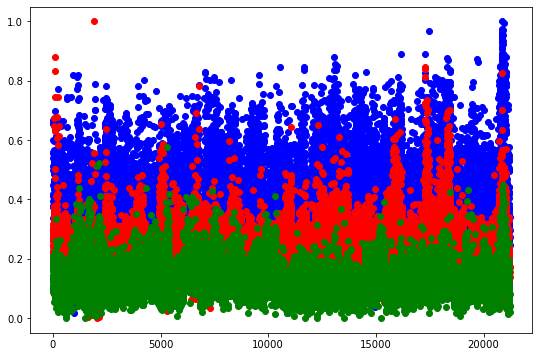

In [13]:
# Normalisation des données
sample_test = ds.drop(sample.index)
X_test = np.array([sample_test['Dens_ins'].values, sample_test['NiveauDeVieMedian'].values])
y_test = np.array([sample_test['MACRON.ins'].values, sample_test['LE PEN.ins'].values, sample_test['MÉLENCHON.ins'].values])
X_test_0 = np.log(X_test[0]) / np.log(max(X_test[0]))
X_test_1 = lin_normalisation(X_test[1])
X_test = np.array([X_test_0, X_test_1])
y_test = lin_normalisation(y_test, minimum=0, maximum=100)
plt.scatter(np.arange(len(X_test[0])),X_test[0],c="b")
plt.scatter(np.arange(len(X_test[1])),X_test[1],c="r")
plt.scatter(np.arange(len(y_test[0])),y_test[2],c="g")

In [14]:
y_pred = predict(X_test, parametres)

In [15]:
r2_score(y_test.flatten(), y_pred.flatten())

0.36313687156843577

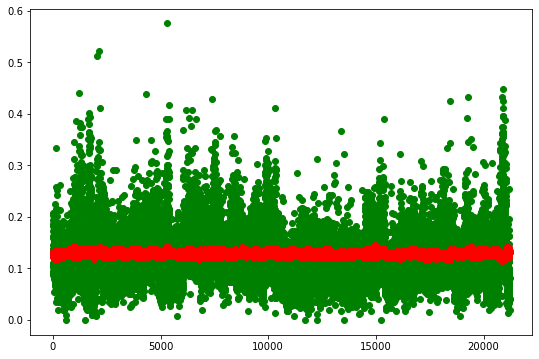

In [16]:
plt.scatter(np.arange(len(y_test[0])),y_test[2],c="g")
plt.scatter(np.arange(len(y_pred[0])),y_pred[2],c="r")

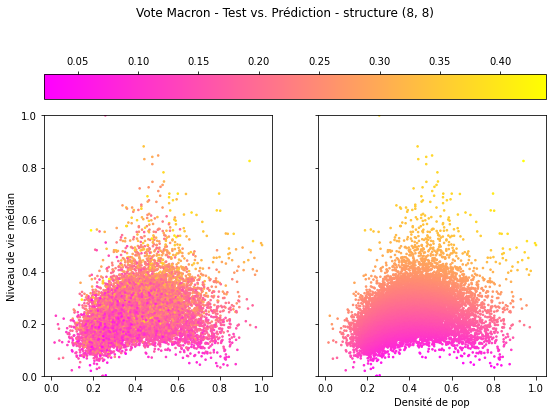

In [17]:
colormap = "spring"
fig, ax = plt.subplots(1, 2, sharey=True)
im0 = ax[0].scatter(X_test[0],X_test[1], cmap=colormap, c=y_test[0], s=2.5)
ax[1].scatter(X_test[0],X_test[1], cmap=colormap, c=y_pred[0], s=2.5)
# ax[1].plot(x0, x1)
ax[0].set(ylabel = 'Niveau de vie médian')
ax[1].set(xlabel = 'Densité de pop')
ax[0].set_ylim([0,1])
fig.suptitle('Vote Macron - Test vs. Prédiction - structure (8, 8) ')
fig.colorbar(im0, ax=ax, location = "top")
plt.savefig('macron_struc_8_8.png')

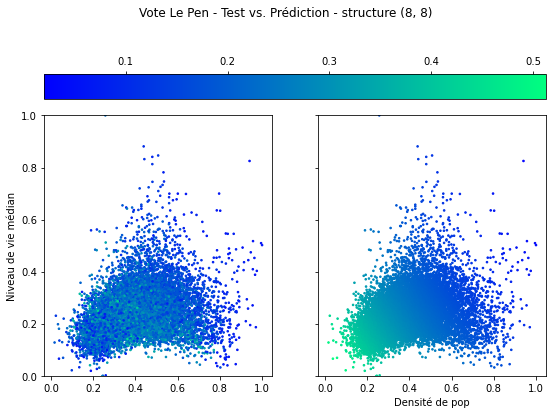

In [18]:
colormap = "winter"
fig, ax = plt.subplots(1, 2, sharey=True)
im0 = ax[0].scatter(X_test[0],X_test[1], cmap=colormap, c=y_test[1], s=2.5)
ax[1].scatter(X_test[0],X_test[1], cmap=colormap, c=y_pred[1], s=2.5)
# ax[1].plot(x0, x1)
ax[0].set(ylabel = 'Niveau de vie médian')
ax[1].set(xlabel = 'Densité de pop')
ax[0].set_ylim([0,1])
fig.suptitle('Vote Le Pen - Test vs. Prédiction - structure (8, 8) ')
fig.colorbar(im0, ax=ax, location = "top")
plt.savefig('lepen_struc_8_8.png')

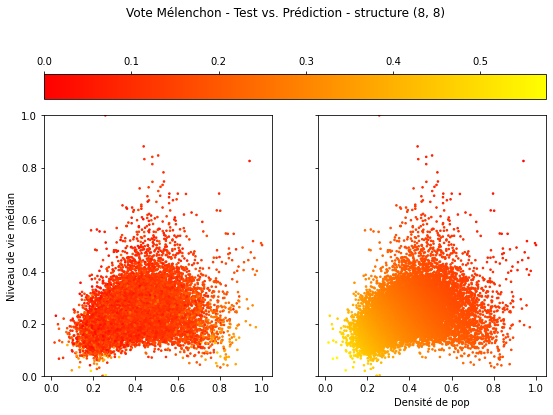

In [19]:
colormap = "autumn"
fig, ax = plt.subplots(1, 2, sharey=True)
im0 = ax[0].scatter(X_test[0],X_test[1], cmap=colormap, c=y_test[2], s=2.5)
ax[1].scatter(X_test[0],X_test[1], cmap=colormap, c=y_pred[2], s=2.5)
# ax[1].plot(x0, x1)
ax[0].set(ylabel = 'Niveau de vie médian')
ax[1].set(xlabel = 'Densité de pop')
ax[0].set_ylim([0,1])
fig.suptitle('Vote Mélenchon - Test vs. Prédiction - structure (8, 8) ')
fig.colorbar(im0, ax=ax, location = "top")
plt.savefig('melenchon_struc_8_8.png')